In [13]:
import sys
from pathlib import Path
import numpy as np

In [4]:
%%capture --no-display
%load_ext autoreload
%autoreload 2

project_root = Path.cwd().parent

if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
from weedcrop.autofarm import *

print(f"Successfully imported from: {project_root / 'weedcrop'}")

<div align="center">

# Autofarming
## Surgical Weed Control via Multi-modal Feature Fusion

<br>

**Student:** Ioannis Petrousov  
**Date:** February 2026  
**Class:** Machine Learning

<br>
<br>

| | |
|:---:|:---:|
| <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSSFd6A0n_C6Wb_JrgfkI0GioEeeCFArki1-g&s" width="200"/> | <img src="https://upload.wikimedia.org/wikipedia/en/thumb/a/a4/UNIPI_Emblem.png/250px-UNIPI_Emblem.png" width="200"/> |
| **NCSR Demokritos** | **University of Piraeus** |

<br>
<br>

<div align="center">
    <h1>Motivation</h1>
    <img src="https://preview.redd.it/ad5iframit841.jpg?width=640&crop=smart&auto=webp&s=2bab3a9a58d06760acd84202ca95ec3ce2eef50f" width="1000" alt="Interstellar Autonomous Combine"/>
    <p><i>Fiction: GPS-guided autonomous combine in Interstellar (2014).</i></p> 
</div>

Vision: 100% autonomous labor.

Scale: Entire landscapes managed by robots.

The Magic of Hollywood: The movie skips the hardest part—how the machine sees the **difference between a crop and a weed**.

- Interstellar (2014)
- Autonomous farming machines manage vast fields without human intervention
- A high-tech necessity for a dying world.

<div align="center">
    <h1>From fiction to reality</h1>
    <img src="https://image.cnbcfm.com/api/v1/image/103940100-case_driverless_tractor.jpg?v=1529472685" width="800" alt="Autonomous Tractor in Field"/>
    <p><i>Autonomous farming is a rapidly deploying industrial reality.</i></p>
</div>

- Companies developing proprietary systems in this field: John Deere, AGCO, CNH Industrial,...
- Sustainability: Reduction in herbicide usage by targeting only weeds.
- Labor Efficiency: Addressing global labor shortages.

<div align="center">
    <h1>The challenge</h1>
    <p><i>The ML Challenge: The core of this revolution is Computer Vision—the ability for a machine to distinguish life from life (Crop vs. Weed).</i></p>
</div>


<div align="center">
    <h1>Dataset Overview & Initial Exploration</h1>
</div>

- Annotated Food Crops and Weed Images in their early seedling stages
- Locations: Latvia
- 8 weed and 6 food species
- Seedlings cultivated in controlled greenhouse conditions and open field conditions
- Camera models: Canon EOS 800D, Sony W800, Intel RealSense D435

In [8]:
ds = create_dataset_list(ds_dir)
print_ds_info(ds)

Nof weed samples: 1116
Nof crop samples: 60
Weeds/Crops ratio: 18.6


In [27]:
print(f"Class values: {np.unique(np.array(ds)[:, 1])}")

Class values: ['crop' 'weed']


In [6]:
get_dataset_resolution_stats(ds);

Stats: {'min': (360, 360), 'max': (1280, 1000), 'avg': (1177, 704)}


As you can understand this dataset is very inconsistent.

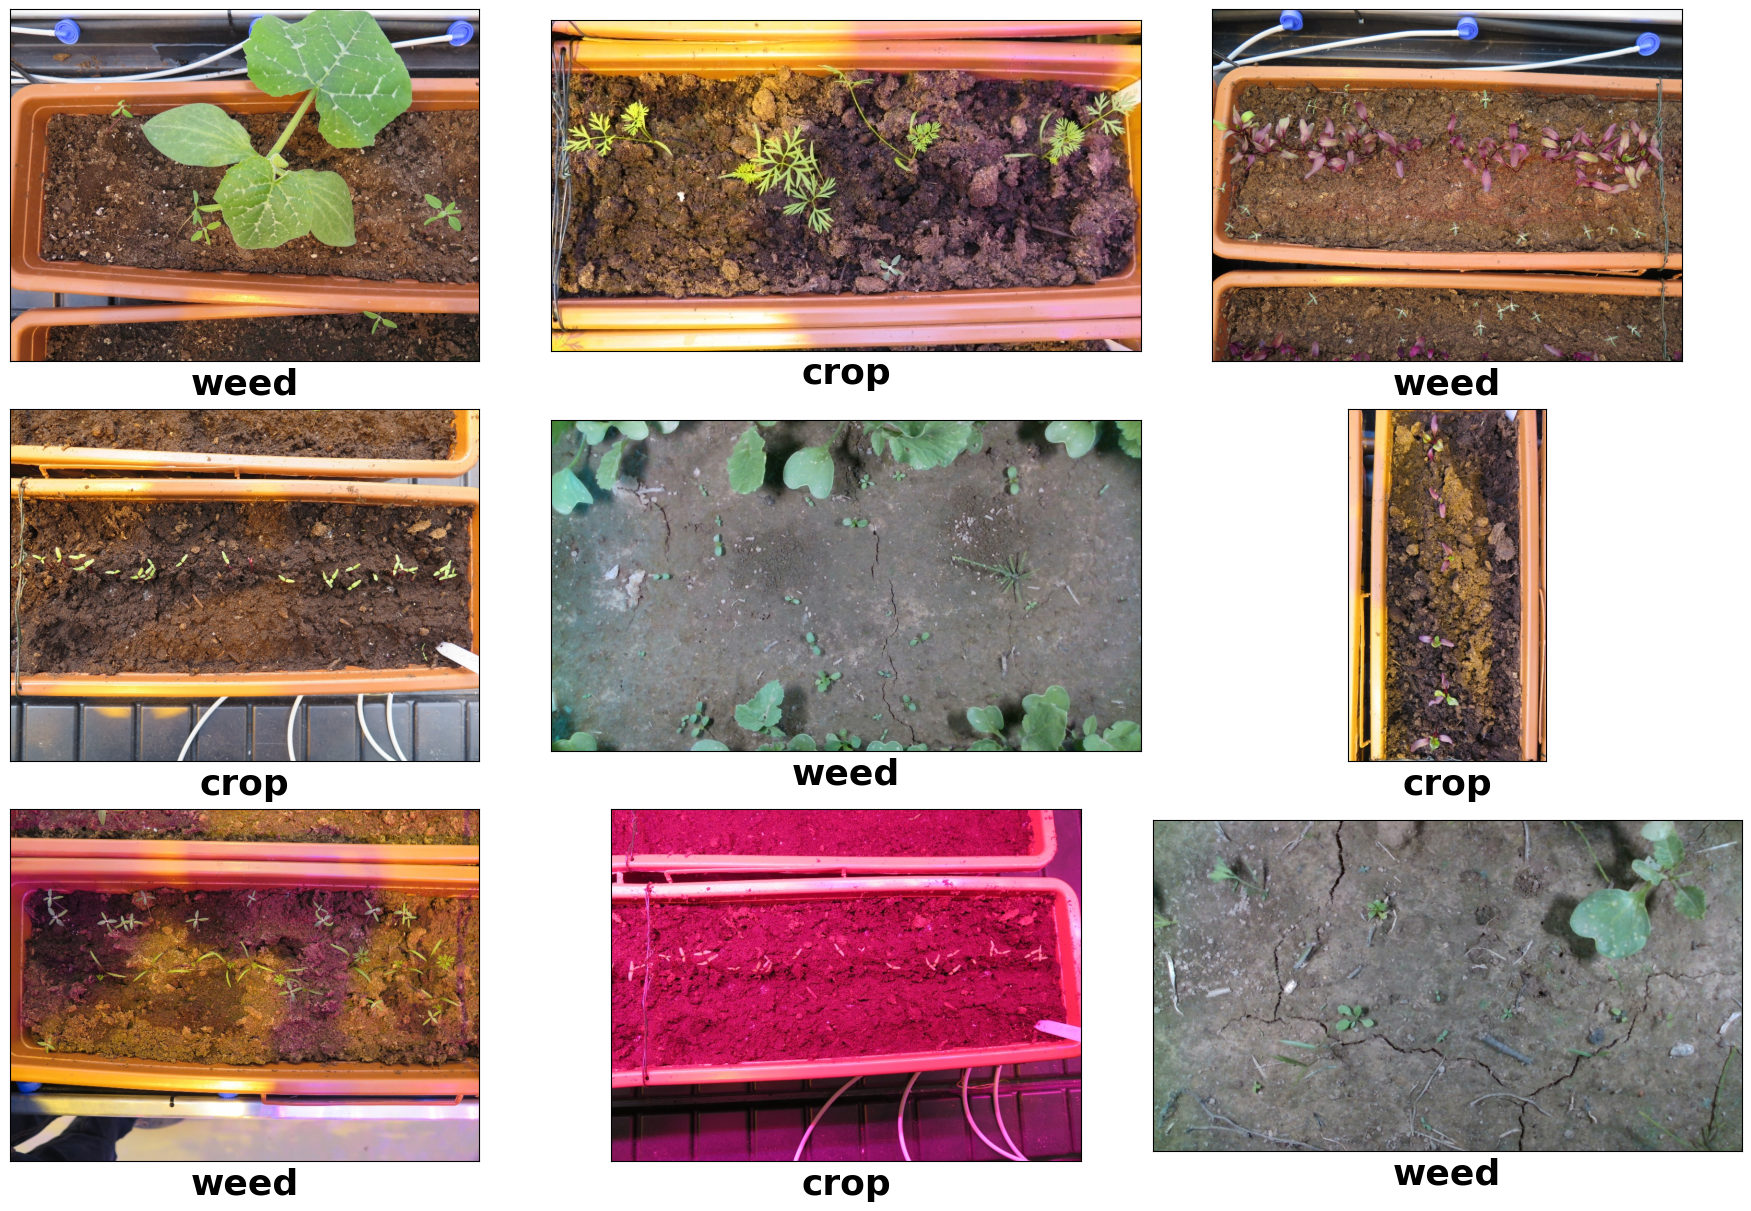

In [16]:
visualize_ds_sample(ds)

<div align="center">
    <h1>Dataset preparation</h1>
</div>

1. Creates dataset path
2. Create ds list
3. Load images into memory
4. Resize to equal size - 256x256
5. Extract labels

In [7]:
%%time
X_rez, y_labels = prepare_ds_pipeline()
list(map(len, [X_rez, y_labels]))

CPU times: user 53.3 s, sys: 12.4 s, total: 1min 5s
Wall time: 1min 6s


[1176, 1176]

In [ ]:
X_rez = resize_images(X_imgs) # anti_aliasing=True

<div align="center">
    <h1>Feature Engineering</h1>
</div>


<div align="center">
    <h1>Histogram of Oriented Graphs - HOG</h1>
</div>

Used in shape recongnition.

For each image in the dataset:

1. Load image
2. Convert the image to grayscale
3. Resize the image to match min resolution
4. Extract HOG
5. Append to list with features

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABEoAAATCCAYAAACqpQNVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOz9ybIlWZamh31rN9qc5jbWuXs02VZWFVgkhBhQKEIKRPAEBB+EUwofgAOKcM4HgVA4JgYYQigAUcwiq8uIjAjvrLntOUdVd8fB2qr3XDPziMjwLGSgUv8UyzDzq3er7k7PWf/+17+klFJYsWLFihUrVqxYsWLFihUrVqxYgfmHfoAVK1asWLFixYoVK1asWLFixYo/FqxEyYoVK1asWLFixYoVK1asWLFiRcVKlKxYsWLFihUrVqxYsWLFihUrVlSsRMmKFStWrFixYsWKFStWrFixYkXFSpSsWLFixYoVK1asWLFixYoVK1ZUrETJihUrVqxYsWLFihUrVqxYsWJFxUqUrFixYsWKFStWrFixYsWKFStWVKxEyYoVK1asWLFixYoVK1asWLFiRYX7h36AFStWrFixYsWKFStWQM6Zr7/+mv1+j4j8Qz/OihUrVvxPEqUUHh4e+MlPfoIxf5g2ZCVKVqxYsWLFihUrVqz4I8DXX3/Nz3/+83/ox1ixYsWK/yjwq1/9ip/97Gd/0O+uRMmKFStWrFixYsWKFX8E2O/3APzn9n+HbzdI24L3MI2UYSQPI4hAKU+/JII4j3iLNB5cQ3l8IE9Rf57Tch1iECNgLaZtwHvy3T2IoaS0XGs2vbZrLbLbkl9cYB6O5HcfKFOkhOnp9m1LCRHxDrPdkP78K+y//5oyTVAK+Xh69qyIwfQt0nUghnx7q/eP4Vm/xDmk7zDXl5Ay5XAgn0bKOD5rz7QNWKv/3G4pX75Evn5HOR0p40SJdRyM1b6DPsPFTp/vcISUnq47H1Mr4D1mv6McjzoHU1zGSXyjfel7sAZyoYRAurnTdkpe+iTOYXYb5PKC9HKPTAlz+0i+udXnOA3PrhVnkb5H+g4aT/72+2V45jEQ55DG63Vdq+M0TaQbHdNn92/bZW7LV28wxxPl9o78eHze99ou1iLWaPubDen7d0ub52NqGoc0DTinf2IkPxz0Oc/m1HSttukdNPos+e4eckGs6No+m3dy1vX34op0uYO//nd675SejROiagGz7ZCup4zjsubO14r4BrPtoGmRrqE4R/n6W0pMlFye9onRZzRtg+x3lLbR/357T344POuTtC1ijfaraeByDzd35IdHXdNn+wRT16gRpG0wlxfkDzd6/7M+ne9TaTzm4gJKId3e6fo63yd1jyIGsYL54jXl5o4yTZRy1v96XUkJs+l1DsSQjydKiM/WybJPxCBdg4hQYqSE9Owdcb5PzLZD2g5EdO1lbWvpv7H6nID88z8n7lsoBf9vviHf3X/SJ8Qsc4C12p8pfvYdUXLRsar7Jd09ABDzyH/D/2N5p/4hWImSFStWrFixYsWKFSv+CDCn2zTbCyyefH/E/tVX8OGOMhayZCUmKgkBLP82ziHdHjGGlE8YEUzjycOg1zkNaPPxiGk7pO0R74npAXt1QZkC+XgEwL36knI6ke8eMD+5plxsccdMHDL28op0e6v3NxZ7+YL0/gMiDttuSVcX2Ok3yOYC6Xvir36tnasBWIkR63qk6QGISbAvr8mPh2eBHalgoiD9Xu/1OJGmE9juGVFhr6+J332PvbqCq2umV5fYf/VLzG4LzUYDTMD0GwDt/3aD6feUKZDCAbO7UMLkrN0SA2I9ptvB/opyc6Akg9vsyQclAuz+Cl5ekf7dL7D/yV9BKcjNPVIeMJsNJTyRSmazhzHA+0eG//RPaW4n3GMkBcF++QXpm2+VgBDBbvekhwfsroXthQbi+QOm76BtSW/fapvdFmka0ocbzP/8p8gwwu09gsNstpRxXEgNe/mS8vCAZEvebjHZQjmSkjwbU4zFdB35cMDst0jXI00L2WBr0Jnu72uftjqmj0fcn30BpVAOJ1I6YF9c1yBY++RevNHndB7ZX8E4keSEtA6z3xG//a6O6SXy4pr4N7/EvrnW/nctxKJ9OhtTu7/UdTuM2G6PbHpKhJxH7KuXxO/fab9EsPsr0t097otL8uUVkjM5O3AesXZZ+6btlEB8eMD+5GfkfYeERP6br/H7PWUYn+5fx5QI5uUVpeuAA9m0mIsd6f2HpzHtdUzFNJh2i/R74vQBaTpwz8kvQPeJ3yCbPUwBwu3zMa3XlpQQazHtBnaXlHcPYDtku13WifgG6VrywwPGdkjTIdYQbw9I2z8jCk3bUZISUrbdgrGU45Gcjph+Rz6dnhFVJUasNEi/U+Lk/b0Sd41f+m/6DeIc6f4e6TaEFz2SQN7/fz8Z02XvZYNpNvrOmu7JKSLt9ukdYSxmsyE/PiLGI02LuAbhiDQNUhyM/KgUxpUoWbFixYoVK1asWLHijwjp/gHT7bAvXxBfbPHjBDEipTxXVKAB1hwIST21N9uefDgtJAlo4FVSwmy3yGaD7DaUTYcNgXx790xVEH/1a+z1NeYv/oThT6/ITrCnLfZiR7q5ebp5TqS3b7EvXyCbDfl6x+NPG17++c/h6++fSJJ6bSmC+AYaT9lvwTtsjBpQnatkSlGyxNr6v+bp72cn2iVMxG+/w335BeVyT3y5Zbz2tK9fkT7cPBurfDwizmGvLpG+p+w2SIiYYSA/PDwf0zAtxJK0LWnbYfZ7yv39QpIApJsb5OEB+0//ksNfXOEPkXYMmO1WA++zPuWHB6RtsVeXTHtDblokvcDH9HycSiHd32P2e2S/I+03pF1DM35Jfn9DrsEvoIH3OGK/eEN42WPvLTYmzGn45P7p7VvsxQW8ecn4sqM/BfDukzElJyVJtlvMbkvZbcjbDnt8pevkTCWRDwclq15cky82Gig3HpvTE0lQ+xS/+Rb76iW8uCK83GGmiG085fZ+IUkA0u0d8njA/tVfEF/uyJ0qEfx+T358fN6n2ztM12Ffv4SrC+Jlj+0ajLHP2qQU0s0N9uqScrUnXXaYMWIuduT7R/J4fOrTMMAUsFeX5IueuPOYKeMuLkgPD58dU7m+JL26ILcOP15jcnne/7MxlU4VSHnTYXa7ZwQdsBBL0rbQtuSLDRIzdhiet1mvndcpbUt4uaU5vaa8v1lIEtD1XGLQZ93voPEASjScER9z/8WpOmxRSgEmpYVM+vj++IbSNuSLHhsi+eaW9P5pTy177+ULxsuWaWcxsdB/ZkxLmJRUbRrtV9ciQ4uE+Pzdl5MSP/s90jaI99B4XfungZKevyf/EKxEyYoVK1asWLFixYoVf0QQ51SqXjLu/SPpeo/Z9ph3N+QqwV9SIGqqAL6heIfkoukIRha5/3yqLs4juy28uKQAchwopahiAZYUBLPX0/nsHeOVg1KwL3ra6QtqixqMjCOm6+D6kvHn14zXnou/OUGIYI3+jBp8zjL9yz28eQkxIQ9HyhQ0LaD2iVL0/taolH6vbdjdFlsyJWUAyun0FKhZS3izJ+wc3fcjNF5Pu8NZ+pGxeq1zlBeX+owpaWrJfIo/p2AYi7Qt5mJPvr7A3h2epZssbYKmI3y4Y/O3jnjZc/onr+iB8ptvnqd+OKfEw8UWKRB6oXNGn8E3T23Nc7XpybsNeeOxQ4RxgqQ/04vLElAC2PuJtPXk/hpf+1ZSflonIpRpQh4OtB92TG+2NCFiUyLdPz7rEyJI11L2W0rjkcMAc//P7w/LOivVMHM5wf8oRcx0HbLdkPuG0hhi12KGiAwjZlPVPqeapmUt8nAg/+SS1FrMlJEvX2O+zsuYLmu/UZIwXm+QMUF8UsbUSVWlz1maDkDaemzXqQqn5Kc2lwkzpI2DAmZKS3rXOZQkcBTvSJsGSZniHfQdchpqm+FprqxFLvaUxmMeDhSrKSYl8Gz8xXldKz95hRxH5PG4pCY9fwDB7LbI9RXpxY7m1x8ot/eqODufp7r3sBbahuIsEhPSd0hKuq7Ox9Q57VvjdeysoXiP1PGZU4XEOcz1NVxfqPJmiJ9VxpxjeOmRAs1D0vbFAGepPyKI15QyuhZyflpnH/epaXT/bjf67ksZ2WwwgIQCP5IrWcsDr1ixYsWKFStWrFjxx4Qa0JXTgNw/qpJERFUlTQNGNKgHJVRyhpyUJDmT0YuRJQgUWz1MpgApQ4iU44kyjBrcngWRs6TeHAdMLPjHjDsGmAKy3T49p1EPEwkRapzjv71D7vXkX5pGiRg0+JPG670BmYKm94zjs3svyEUDorM/M0nyFDwpoVGqcsakgn9/oBwHTUeoJ+fLOBmj/QdknCjHAUJcgrplrLySQ+Ss0VIlhah+CPN1i/fDwwPm5hF7qhHvFDCbzUIUAXo6bywyTPhDxkQwIVGGQcdlvr+IEgcxIiEiISEnHSty1oD3vE8icBowD0dMrAH/FDSItGfjKkbXxWnAHKsq5Nw/ZLlOMG2rRFLOSErI7A1jqifGPKe+0X+HCTPVZw1R11TTPAW2gGw3un4OA/YQMGNtN2s62TKnYhAR8uOhKikS/n5EpqBKqL5/Wn6N1wB6nJCYMccROQ76PF375ElDXdPThIwBMyUkFsoUwJjF62JZU16vJYMJWcd/mnTszRNhIk2jRNdQ739S4ocYVd11Nqbi3UJYaYrSUb19Zp+Rs+cU73QfO4MMk5KCU9B7n42pORsLjKHcP5CP1XNGns+9WFP7lJGYajpP1Huf37/+vUSdf2J9n6SPyCIRnYucapu57ulBiZTz+xu9RxlGsgU7ZdyDvk/MQpac3T+XxeeEKdRnKc/GSftkK+FZ+1THHmOer/0/EKuiZMWKFStWrFixYsWKPyYUNeUs9Uu/udXANX64wb64rkFzPX22hjyOGGOUmMhZc/5T0oBrPtGthpPp5gbrnN7jeFLPjjmgnxUFKVEeRsrdPf1XV7gPB3j7gXz3gP35T8jfff8k+7/Yk371NY132GFP+e4d6fERs1F/geWE2WsAmG5ucJueMgdVNXXo3FAyH45QMmaaMHslZsr9g6bInCkVxDdqNPruHe7mDXbw8O6W9O4d9upKA7nZo8UayJn08IB7vKTcP2pQOY7YiwvydGbS6Rz5NCDuiGz7aiY5LX4Qy3V1TPPxiJxOmFtPdwrE33yN+9Ofq7npTOJsN5RhIH/zQPf6AnPdYu9O5McDZneWqmMs5uqS+M13WBFsDWzT46HOoX9uElpTdWzfYauqI717h335Aqbp2Yl+qSSahIi7H9V49HDCXF1CTauYDXzTu/fYttX7HU/k00kJlEqiAQsZkO7ucVUFVA66puzlBXkm7erpf3r3Ablz2NMVtvHkb77ToHa/I9eULrGacpUfHnCPE8SMvP1A/O57HVNYUqVkt6WME/nde+ympxyO5IdH9Sy5vlQVxpzG5b36WRyOmNZjjCHf3lX1QvM0T40qL/LxiD1OSCqYw4l4OOg6OQ2Uee+1rc79FHD7DfJ4UoPWKWCuLp9SuqqaJB+PmONJ//540DSXtlWyJ9Q2K/mR7u6x90pkzh4e6t9xRtLtd+QPtxjAeFevU3NWsZYSz9LZqKlSVb3DOGqKVyU+nxRT1bx1CkjbLKROHkdM35NnfyRjkU1PevsemxJmVP+aPI6LweqyTrwqVPLxiD9m3CFhH/T+9vq6phSm5T1VQiSfBuww6r4bRvUtcR7Kc4VKur/HVHVLOWm64axQ+rGQUkr53ZetWLFixYoVK1asWLHiPyTu7++5vLzkv+C/xEn1EdhuNTj3mjaSvvv+k98T57QCR9dSanB4bnr57Nq21UAiJa20wvPqJDNM1yH7Pbx5gXy4o4QAMS7mqOewFxfIqxeUvqX8u18ufigft7mk31xdQpgDoPiJPH+5f1er4zinwVolNj6G++lPKJsOCZH0m28Xj5ZP+l9NNWWzoTw8LCfvnxsns9+r0kOE/PCogecPjalv1Dy2Khjk8oL0UerN0qfdFl5eP107BuK//8WnbbYtZr9TP5VhhHHUIP0z90dEiZGaciVNQ/zNN8+9R+bn7Dvk+pKy6eDDnfqOfGZMxTnM5cVT/yt59HGbWvnG61qZn8050rv3nz7nPP59tyiLyjQ98305Hyv+yZ9hjgP52+/VHPT+8dM+OYf0/UJElSn89nm6ulTy6zSocuXh8ZP7i2+wb17pngtxUTSkd+8+WdPinJKCr15QPijZU0L8fJ+2W+17KWrKepZu9rlxMtdXShCO46eVmc7GSbYbpOv03fBxZaLzazebp5SYef9/PJ/zmM6KoKqsKin/8Jhue2hbfcZKfn5SSck32J9+SfjpCyQk7MNA+ZtfPfNRWq5tW1VEieh7pPb9c32a332g6YBi9Hdinviv+a+4u7vj4uLik9/7fbASJStWrFixYsWKFStW/BHgc0TJeVnRHwrq5+vkLCXnswEYPKWLzEEa/PB1NV2mTOHzPg5n9z4/if/BNs/a/bjU6w895+K3ktIPXq9lWjUFKY/jUgr1s23X0/0Sw9N/+6HrKplRUvrt134mfSKP4w8SReLPRP05fzZYXNqsqQjanx+YU548Iebx+hz5cV56VVNRwmdJso/7tKRSfCaoPu/XPE7naoJPcF6mmTNfmM+0uRB6U/jhNuc+zXOujf72NW3Nk9fNxyVv5+vmQL08pYH8tr1nGq+qpBmf69P5mvqh8Tm/1run8r3w2+fJWp3zj8uHf9TmM/zQfNZ2l5SY3+f+M0Hz2+azkrla5jh+YiT72XvP9/9tlMVHXkyUQixhJUpWrFixYsWKFStWrPiPAZ8lSlasWLFixd8Jfx9EyWrmumLFihUrVqxYsWLFPxaIPP/z+1z/kYnk/2j4Q+/99/msv+8Y/V3b+13jb+zTn9+nzd93Tv9DzOfvu5Y+/p3/kO3/trb+odbzx8/xHxP+PufovM1/QKxmritWrFixYsWKFStW/LHhPPVhrrYyy+s/vtTXCie2mkaO1dTxMykF9s1rZNOr78AwwhRId/efej+0rfpuvLymbFrk8QTvb0nVdPMcsxnsnKYwp+t81tNg9j8AfYYf8ijZbjHXV6Qvr7HffCDfPywlgT+59iPvBXN9RX73/tOUltkjpe80nScX9cj4nE9C9V6Q7VbHvBSt2vGx94QI7idf6TUxakpHSp9NK7DX18jlnvz2PfKTL+D+8bOeMwD2n/3FU2nkf/236hFRTT0/Hk/z8oVWlQFNUbp/JN3efnr/q0vk6pL06gL7m3faXjXA/OT+V5dPlUeMUFJWk93PrBN7faXPdzjouvuB1B97dampRCFqSdffdv+Li6fyz22LOEt6++5T74u2xfRdrfTj1Z/kMx4ZS/+vr9TP5v5Aubv/vO9LTfuZ28SY37722hasoTwedBw+l84DS9ldaRroO0o1nv0h35ePEz9+azqVVV8TGq8Gt7OR7MeXz2lqNUXls+kv9d0jbavpPylDCD/oJ2J2W/XSGSf1ifncWM3VlOxTSes8+wR9bpxqee5yOumcxviD7z6tFmWWakW/M63p98SqKFmxYsWKFStWrFix4o8I4tziuSDOLf4fZdLKF89OWs2T34Z0rRpQVj+LxbeCaqa435M/3FI2HXmvxpL54QGz3SyGiFDNWZ2jnAbytiPuWzX1fDxolYwzVcQc0AJqQLlTYkGsWSpqzM+pVTuiBkvOaZ9SqpU/npQT9uULJSbGiXDRQuO1VKm1uC+/eLq/sZj9XoNNa5H9DvP6Jfnde/D+2f3NZoPpex0rr8E31pKngP3ijY7r2bWUrERB2yD7nQb1U3g2TqbrsC9fkL5/p2WSLy+QtlkqxHzcZhlH8vsb5KdfQuO1LLOx2Nevn/pf/11+/S3FGQ4/3zwZutZ5PJ9TaRryh1vyvidfbChtQ354wL55/aw8sX31UgPO08B01VK2/ZP/x8fr5PVr8uNBn3E2lD2dauWisz7t95i2Jd3cwvUFsumXMrQfr1P78oX2IUQ1k91ttFytMTrf8/3bFnt1SXo8aKB+eQFXe9K7D9V/5WydvHqJaVvy4YTsd3D2bM/GVETXyeEEIqR9S+lb9ZGp9zyfJ7vfqzFo1y5llktKasZ6NlZmv9dKQuOoJr3eVz+N/GycENEy1ilpierGI11LHkZM1z6bJy0r3ZKnoGto9kqZJr33ecnlZ/PmdFxPA4SA2e+f7l/LaJ//3nL/tn3WzjxmS4WntlXT21ry+tnev7pUYkxE+7TptDR022LP0l3ENzpPYy0b3Xgllj4zpvbiQsm0lOo4qfkt9drzMTVdp/u5kiTn75Nn4/8HYlWUrFixYsWKFStWrFjxR4SSC1g0MPQ1oE7pubHj08VPf58DjtkANJdn15VSwAh505CdQSr5QM5P6gGezEul8cStJ24sfjYg/cgktaSkJEXXamlTY5D55Pfjk+qSNWir1WQkVtXMubHsfA9rkbYh7C3NvsecdpRjPak+b7cGdNI2lE1H6Rv4XksBc27CWvtq2vqcjYcmYqZJSyif3z/nOvaO0s6muqaSJ0/nzKUUJGXEO/LFBkkFiUnNaj+em5yXuckXvQaax05VAOf3L1n/nTOpd4wXBtpmMbT9ZDxru7n3ZG+xVoNyYnyuSEhaMla6lnDh6LzTNkum5I+MM2PUYHO3pbQNMoVPjT3r2JdKeuWLHns4aaBejT2fzVPQUtf0HWW3ITdOlSDj9NE8FUrKWkln0+uceqcBsPkoFSOqesVse7jcIzEt1YTI6dM1ZYTSelLvMJ2vpsbx2don6z4xja+VjIyuscNnlBc5IyKqZNl0yINX8ufj9Vz7JXWspG0pbaMEKDybp5mgEO+g75CUKACzUewn6g+ztFu2PXLnqqLlo/tzpuZqPOK9GuR+bo/Wdmf1R4lxqSbzfO/Xeeo6St9CKdWsNX9kgJwpRZZ9ilfiU02dP1LNzP1vPKVTkkaOqir5eP2XUpZrpdE9cm6q/GOxKkpWrFixYsWKFStWrPhjQk6UXDBdq4FFPVk2jf+UKKjBAt4jxjzJ+408k/SXGMmHI+bigrjzxK0jXXSYiwtNVThLP8jHoxIeV5eES0/qDXmjqSh5rqxR750PB00/2O1UJbDt9XQ/56cKOHOfUtLAyuufuV8lTM/6lG7vNPi+2hM2hunVlvLyCtn0z8vO5kQ+HlXFsttQth1p26oCJMZnqQJ5GDTgu7yg7Dek6y35eod5cU16/+GZXD8Pg57Q9z25ayit13n4qOpQGUfS3T3mxTXxoiNedJRtj9ltyVP4pE0As92Qek+4aEhXO8x+p+lMc/9LId3cYPY74saSOsgXGyVUxDxrs8SoJ/27Lal3hL1juu4wr16Qbp6X/U03N0rS7LeEjZC7uq6c/2SdpJsbzNUl+XJLvugpfatkxEclavPxqOqFq0vStpIFfafr9KOgNt3fa8rX5Z542RGvWri+RJx7VnK6hIl8OOo8XWzJm5bSalrJxxVV5t+TF9ekF1vSix28uMRc7EnvPzwb03w8YvqO3DXEzpI3jT6Pkedrv6aOmKtLyl7XFZsec7Ejf5RSkg8H3Xe7nbbXKfEl3j1P/yiFEiYlnzY6nmVTiajwPKWk1LQ5s9uqQqdtlQj4uM06VzP5RduSe49stzrP5yliOakipe+RrlOisNMy4XNay/mzLgqNxuvab1S59Cz1pRTyw4OmUO03xItO3yeXF09jc/acJURVpMzk10bVZ58dU2t1THetrqntBmn889SfUp76tNksRO1cKekHKxT9HbAqSlasWLFixYoVK1as+COCStU7DVBmWb7V8835lHP29jD7vQZSnQbplILE+OQtABp4Wou52CH7LRSIW8t06bh4v8csKoZCur/HvnqFbHvy1Y7DFw4TwL7q6YavcH2vbT4eNFCqJT9L31L6RlUV3kPfIzVQncuWyuxPUD0SBCizuSYsKgSz2SAXO4ozdB8i93/acBU2NI/HRX6fT0NNL9I0hnS1JbcO+zjqKbS1mopR1AcFUz0cLnbEF1vMMSBjVPVElenP3hLim5oaZMAZsoDre8wUyMv4q8rCdKre8B+OhBcbjn/5gk0p2KTBKVTixTkNjC/3hL3DjlnVAik/v3/JmLalhMDu//M9zf01v/jfv+BP/+8W8+vvKdV7Ym7T7Lbw5SvGK4+Ugh2AcdLnqm2WUdMhyjQhbz9w9a8s7/+zC652Dc0vGtL3b/Xa+rxzUCxDoDSO8HqLDy8xYhbyq4yjpk10LaSE//qO8U+u4efXtL++xb79oGM/BSUp9ntkvyNdbpiuG+yQVVWx3WBqoLys017XfLzeULzBnCLmqzfYmzsIkZKSEnRdp+u+9RRrSJ3DiWBi0oC59qmk+u+2RVLCTpnHP9lw+f4SA5SqxMqHgyqeZmWWsxRjwBokbJDHw6IWKTEu3jglBOz7B6a/+AL/4Yi9fSBXEmdZp02D2e/Ib64p1mJvH1URMSt7zvYJoCks1ctEvMOIkEJ8tk/Ux+MCXlwSX2zxf/OtKnR4Sicq07T4jZjthnJ9oZ5H4wR9h6lpLUuZahElM7cbeHmF3D2qT0hKz/cpYHY75GJP2rak3oGA7VskbDHG1PfE45PfyXZD3td31BCg8brWq7fRQibV1BxJhXjV40p5ek5YyjDb3VZJ0b6lVGWclILxDjs5uP/My/XvgJUoWbFixYoVK1asWLHijwyzeaGpXhklxsWnIE9hOVkv06RB1TBi5kDi7l7JATFPxpLeQS7kr7+l8Q577CneUn71tXpQzGadAOOogfjDI9ufbnHHRPObO8o338N2Q76902eoppfpww2m+i1QigaJlRTJj48ASlxYS3o8YK1dUknySdUbmlakxIq5vKDcPyKPB/rpFcVd4r+5JX+4RXZb0tv3SmhUoiC9+4DtWkzfIocT6f3Ncgo/B/b28kJ9EX7zLT5lDbhPJ9Ldg55sPx6WMRWrhIDxDrPRoD3f3un4N17bLAVxtU/vb7Ai+JRxj42O6X6PAKkSG+byQsmob76n26vvgrl5JN3eYfqONN9fBIwh391jRHC3Pd2HHvP1WyV1dltVS8AS/Jdf/obNviM3FnsK2v+uVV+V6l9DLosiwDxe0L9P+G/vyLd32Osr4vfvdPwrUZBv77DOYVLC3Om4Sd/pfN/e1rUXdA5TxoRA23gd119/owHs3f2iQDLbDfndB+ww0ocXyBThm7fVU6IhfbjV/hvRtf7+A+7llRJq9wfy23eqXihFyQdQ4mmcKH/7Nf70kuIs8ngkPzyqEfD31fx1HtMPt1jv8d5SBPju3eIbMq9903jwfplTAUpMpPt7VS4djuShqhVy1nVjBBMj/l0D727JB/VXmU2SxWmaUXp/g3VOU7oeHsl390oackZSWQsl675oGggBYiQfTtjdlnw8UmJZ5r88PCAl41CiqZxO+mxidO7PlVrvb7Boyko5DeTjUUmxM1JvJi7K4wFb/YbKFBbCZVF/GIt0Hfm7t9gpYI47ijGUb99WotKQ7h/rPnFgjO7T2XR5msjvPyihM4Unn6WmoRyOlGHEAHJs4P2NjkffPxlPG6tr4ft3qnZyDlJWb5vGa0rVj8RKlKxYsWLFihUrVqxY8UcETVvQ9JsyjE8nrnM6w5n/weJbYmQ5TS4pa5pCOQuUajBUUsYcThow+aegpcSnKjl5VFUG1uDvI/ZxQo4DeZooIhr8lgLVZHIJwlPSIKumB0mtrKGPXBCpp/HVxJOsxpez+ezSp1oNBcAcTvj7LTIG7f/4VCWkVAJJGg+nAZmCBu+1zWfeDzEiSZ+3HI7683FagsTzVJGS8mIoKcdBq56kpL8DT31KCQl6vzKMmvo0TmRjIEzaz/kZQnwa/1NATqOmrfRdHa/Zo6TonAJMATkM9G/z4hXB9DSnJUbtc0rYhwHTOGSKFGsghGeeEuceHzJONHcRCZGSs66b/LS25mC4hIA8KoGQU9LrP2pzHrdyGjD3B/WnADgNSqbN1w5qMlqGEXN/hHEix/jkeTPPaUpq+No0OvYpL9VkGMZn65Sa3lSmifJ4qGtXPU/KMJztl1LnIlNCwBwnXHPmuXNWpaakjKCBexnG+jux7p+wqLTm8S+5IEW0Xw9HJRZSgml6vk7ruizjhKSkz54Si+vK2T5Z/tO8T+r+KCl9+nNQAu3xqPtz7rOU523WNVaGYan29IxMXeb0+T7USk5P/Xj6YYaaJlSOJ8Rpxa00TRQq4fNbxpQpLM/1zPsk1DEuhXIckFw0jW2alPA6X6fTVNs0YGtlnJRggpIDPxYrUbJixYoVK1asWLFixR8TcqKQVJExhacA9/xE9+zapVJFNQEVa2rA+5woKClhLy8ow4BU2X/ZVz+Hc5+KcdSUn7bF3Z2Qkwaf4hzp/kzPfuZRQs5PJ/1O/RTy+bPmRKmn60tw+gN9Sjc3mirTtTBOuIdRFSjWPvOzICfywwPuqy+XMqJzes/HZVfzw8NSdpX6nFTy4OOSvyVMWjVEtOSrNE8VXJ75NOREHpJW35iqKal36pHx7v2zfs3jJr6BmCgfbsA3mrrw6998ev+Nqifk4cDuVyfy9Q4ZRtL9h6fbH48wjNjLC+TxVOe9wKw6OfeyyQm8loYtpwF/oxVgpGmel3wuZUmrIai3RClF/T0eD8/nqipgpGk0aH14AOeQ7Zb09u3zOb2903ViBI4nTbNxjpLz81K2pVBiwL68phxOGoxPk1ZpeXx8rpC4v19KPhOjkhEiVRHy4dn9yzgu/hVyHHC1+kwZx+ceIWGihKc1PAfu0raflNydU7rmv5fDcTEU/dgjJB+PWt0mRkpOi7/Ixwapz8e0Bvt17X+8TvPhoFVixJDvHzQtSEw1sk3P2ixjWkoe6zCXpb/P+hSmJ9PX0/CMQHxWxrhomt5cIaocB1VxWUsefnhMqeRYiRHzse8Isz9Qo0TLOFLODHyf9b+u01lZQvVB0fdJ+HtRlEj5xOp2xYoVK1asWLFixYoV/2Pj/v6ey8tL/gv+S5z4f+jHWbFixYr/SSKWwH/Nf8Xd3R0XZ6WK/y74gxQlOWe+/vpr9vu9SupWrFixYsWKFSt+D5RSeHh44Cc/+cli9rZixYoVK1asWPHHhD+IKPn666/5+c9//vf9LCtWrFixYsWKfyT41a9+xc9+9rN/6MdYseKPFzWloITpWTnez17qG0274Mk3Ya6M8THMZqNlUatEPz8enntpLBdaLZFbZfglRvUO+UzZTfGNpgfMFUE+KuP67FrnPikd+9l+GbukHC39+YFrNYVjLgWbn9IPPrmwjunZ/aWah/62+wOLZ8kn14pg9/vnfijT9NkxFd9oGVORpRrKD42V2WwwL64pXUP5+jtNbToz8T1v0/70S02TiRHGUU00P9dmV0ut7nfq9zEMlGH8JP1hvrYkTeOSrhqTfm6e5gpDfORh8Zn7i2+eSt0GTZX52HB0ubZtl1SZPI5LVZTP3t95Xf/V96ak/Pl12urYl1pB5ZO0l2cDoJ4bYo367nxuj9T7I7r3ZiPWH5pTqVWYALBWvU9+YJ/M628e0x9cp2eihc+m8nx07bO5+oF3xNKneS/N+KFnrddLNYwuZ54vP3SdnHsdfe45na4Tve8PzynwbK5+sM0/AH8QUbLf7wH4P//f/q80XUuMgdPxRJwNZxBOxyMf3n3gYr/j8nKPc4629cSUSTGx7Xt677EGxAogerJUCiVnpAhd15NiIueCiMFZgzMGayBME0kKrmkQY7FiMAgGCNPINAVELMYaxAjeeYwxpJwYxomp5rCJCNYIxgiRyMmMDJ3DXF3jmx2tMXRJeGFaXnQdW9+wbRqcMYwpYKxnTJmxFKIkbh5vOKSRh9Mjt/ff8XC4oUgkxoGUR3JOmJJxxtJ4j/Mt2VomERKCEUspmWkaSCVBsXjT8cJd8ca+YCNbTLSUBCVn2sYjCIgQc9YcwrqpUkqkmBingDEW6ywxRUKKhCmSY0GMYDvDxZsN7IS7+MDxcMfDw4GHxyPTFGESOAn5CDlovmuOGWt07FKOnI4jp9MAFJq2o2lbfNPiGl+Npg1WLClFnHV0bYd1FjEQQyBOEWMtrvF1E0HnG4wx5FLI9QPNeUvXNTjviQwc8wdO+Y5kMrT6JWGz6Ski3N7ecHh8JI0TOU/EGIk5kSlY63DOYozHGC0nlXNCcDTtnrbbQTG0smVvLmAojMcjv/qbX/L2/QempH1OKdE1Dbuu49XVC5q2Y7PvaRotyfXweCSEjHMOLORUiCFwGk7q/lwyISZCCAzjiRgmGmtpvMF7T9dv1BhM6stfIKVEjolYzZK6vme329E4jzdWnaYxHE8Dp3FCrGHbd7y6usA3Db7xIIYQk77/dPtVQzXR/0Xdqo0xWKcvyBQyj4dHQoh8+foV3gqPh4M6mXuHdY6m8aSciCFiRNhsNuQcIGoOsIjuR1OEcZh4OJ44TSPGWMIYKDmz2fS0fUdBsNaivSmEYSDEQMmJxjc4Z5nCyNu370Hg4upKP/xywQoYq+8MESEDN7cP3Nw/Mk2xvheg6xraRvMg27bHWs/D/T3kzNX1JS9fXOu4WkumcDweGYeINYL3BiNCGCJjHOm7jrZtcc5xOBww3iHGkWJiGkfSFDgdj9zd3fPmyy9488VrnHfknICCrXs/hMjD45FcPxh9HdtSEsYIOSce7g7ElIk5cHt/z8XlNV988Yb9tidNgXEcKAWOh4F3796x7XuuLi7Y7jZ474kpcjgdcc6TS+bx/kDfdVjrdK8ZwVirew9IMZJTpvUO7x1t29C0npxhnCZSzljr8M4yTROn45FpjHjvMM6x2+5wjcEA46imhL5pmEIkhomUItZYnW/R9Z5LqfMHxgghBI6Hk75/BDCGtu2IKfJwd48ARgyJjAjsdhsudjtyiqQz8z0RQcQSQmCKkZKFXFBnewveWdqupesbROpnSi2ZCWCtxVkHZMSCNY4YE4fDQE6lPnsmpkTOej054Zz2ZRgCh8OAcQaxQjYFQZBS2G22GCMYC4VMzhlb52EaIyEkTuNIkYxxFmOFXDI5FVIofP/de/7tL34BIrx6ueV/8S/+GdvtRr84ZIg5aV3RIugdCikmwhgwmLo2EjknrNHnLaYAgneWnAXXWHzTcDhEfv3td2y2LbvdBikQY8JaSwFyKYxxYhgDqRSMMRQKVgxhGPm//B//T8t3iRUrVnwec9nbObDSgOkzgY2IllNtW93vh2M1kvzUg0Cc02okX76kOIMZIuY3ifwxAXBWIlQ2G8rFFnM4UT7ckj4Ogub72zOflEk9CT4JlubSq+fB15l56Hmb4p0GP85p8LMYWX40BiLaL1hMbwF9739MKjivXhuzWS08GbV+3GYliTBzEGxqYP/8WcVa5MUV5xr7cvfw+THtO+T6kuId5v3tkwHu9FGfjMVc7Bn/yRcMLz2XJyU1DEfyeHatsZjdlvHPX1FEcI8T9vaInIbPtim7Lbx+weEvrmhuA+77e+TmDqmlpp/1f7tBcoHGw8UOOZyW8sVLux+VfJYQnrwvPr7/3P/9jrLbYI6DVkcaPvXJmKsp8eYlEiLm7l5Jus+sPWka/bPpEWMoMSHjSPqYgJnbtEbXyml4qrbymT0lXivVUNdWvr37/DqxVoP/SiiVEKtRafq0zVpKeX7ufDzqPvmYsJhJSmuRfEas/ND953/OFWQ+nqeP5wqQnJ/MTz8m9GqFKnJZyAotM/0D5GO93ux3MAXyOH52/uf9LLutrpf3Hz5L/szvPrPTUuAlJhiGz64TqteSaVtovK7llOoL4MfhDyJK5hfLfr+naRzTNNE6RwjVQEeE/W5L1zQcDges87RdizVCzpEpBYwYmqbFSKaIfnl1zumXrFKIY8A6S9d3GvwXEITGO7w1pBQZU6JgKDnjvdcv+ggpBk7DQE4aBc4BVwFCyohxWGfIQOMdKUZijmSTSWUgpol8GojmBWZ3TdvsmaTlfQjcDCd2ybP1DSFnJExkEWgd0UZiGzg93HGYbhjzI74zgKXrtwgtKUYgYWamzhistXRW63SL8aQQgAA4pDg6s2Xv9zR0bPyOBk+O9Uu0MQuT6OeNVJFzJqVE22XEGJrGM02TBjZNIoZMMYK04DYtg594f//Ib779nt46Nm2PC4mYwIrHdAZp9Yt1SQVjNICJMeBdR9v29c4F7xvarsd5hxhwztcAHmKMeOdou5Ys2jZZDX8Ei/cNTWM1YBCDGIOp8zdNA4ih6TqEiC8C0pCtIVklvpy3mNbTly3GCSUlYkzEGjCdTkcdO68BjzFCoRATlJzIMmB8h/M9nWnpZIPxQts0/OmfG0Qs3739nuQc3f6Cvm9pnWd7cclut6XtGp1fhBASUibarkec1EDYIRZdmyLElBnHEe8NKbQImZwSKSUEwVmHc0ogaSBiiEUoZmKYRlJyNN7jvceKwVoHBdpSOE0T1hq6rsU3DU3bYp2OpXEeaxzOGiDr+zQXpmnCGSWtSimkoo7oRixb2RHDROu1Tn3fdfrB3DRY7ygUTLHVfF/ofIOVlhQDxlqsb0gkrQOvCwMzeOIU8EZfR75x9G1LThlrHF3X4bxjGI66V4N+oAkZ5zp+/vOf0jQNxlqmEEgpIyKkGBmOB2KKOO/x3rHZdPS9wXqr67cSKcZYdtsd+92ebddxe3dHToW+37LtO4wxjNPIw+GA9Y5t39M0WtN+9BNutHSdXhdjpKljnXJhzOCblrZpyGRedQ1XVxe0bacHXtnQNg3W6Pw6FylFGMYJay3G6DNa2+K8oaRMHDP3Dw9sNzusa2j7nv12x363wRlhHEbGcWTTbRhOA9Y6tvsL2tbTtA2gwXm/2wBC63s63+CcI6UIUhiHwDCNSmCbQtd27PoNRsA1HuccuRTEOMZpwjqPdYZGhJwzTVNom46mknPeW5yzpJQYp4kQEx6DFaGUun6txVqn7+oYkVJ0vceIMZa+7xGqq3rWeZ7XPaWQc2YcJ9q2Ydtv6JqWlJMSPqUQpgljLN56mqbHTYFU9xSl4JylbT2+9TRdHaeSabN+2CuRXcmW+sXZGItIpO+k/nclXmJKpJShgDXCpu+0HwykWJQYbi2usZQCjfeVr8zkEpV48h7rHDFnjA24kPVwwAlTDBgjIIWSC8MpcDidcN7iO89Pf/YTmrbDugZjDcYKRfREKqXCOE7klPFNgzMNZH1v+5SIRck7BFLW9dw6Ty5C03nEGIZhYLfZ0m1aNpsOCoSg71jjnJbUjB2uSwzjSM4Z7yxd2xI34dl3iRUrVnwKs90g4skPD9jraw2op4kSC2azeWZUai8vyI8H/a706pUGq6cT9ssvmP7sNea/+e9qm1vMfkf89jvKP/kJqbO4Q4DbO+zVJWUKT6V0r64o40i+f0S+ekO6aPGHE/l4xP30K9I33y5lV+3VFen2FvviWgOgw5H8+LgEO3ObZrNZzGDtxYUG1CGQhwlp22en6+4nX9VyvAFzsUdKoZxOethyeb0YdYpvsC+vid9+h9nvMc5p2dHDQc1IeTKANJWcTff32C/eLFVv8sMD9os35A+3SyBmLy9I94/6HWG/g7Yhffs9JURM1y0KjFmhEX/xt8h/9i8orcU8TuRf/O2nY3p5oUTLd2+J/+v/hGaYaunVaRlDDfoazF/8Cenf/y3ITzm9NFxc7cn/+h3SeL22mq+6n35F2fXY/+f/i+//D/8btt84Lh7VSNNeXZJPw2Kqaf/qz+H798j9gcObV2Qv7H8dyOOE/Iu/ovwP/3oxBrbVDNZ9+QVlvwVnq8HqCx3Dd++XdULJpNs7HdPJaWnp0wn35RekDzdP939xrSWP+450vcHmrKVvS8bs94tRqjglqNLNDfJnP0FKg5kC6f2HT8f0zWutrnM8Yl6/1CpOH+60BPXLF2clhy3uzSvi9++0D5c7JEZtR/TgYg7YpVXD23w8wsUF4iwlKullr6+V3Jj7dHlBrgSS2fZI11GGO0oMuk/rc2Kslkd+eMBeXSqpKUK5uVEzVj4y+6Waz758ofFCXadmu1Ul0rz3X77QfZILpmu1HPZpQKzFbHeL8fG8TtP7D0jf671rZSBp22dKqeXf04TZ7bTUbl1H52t/vnYeC2kaZL8j/eo3SNNg9vunPjmnRM846v29+i+VGD/Z+6br1MA6BOg7StfA19+RD0fsxcWzNs1u+2TubATxfmlTisCZ7/Ifgh9V9caK4Kp7dBTBFAg5kcmIFDbbXh2Fs54iOesoRWiaQgiBnBLGQi6Jxnoa55Z8ZVMKJQWSKBmgBHJhyoGAnnQ750CEVPSLYpwCxqtCwPuWgJ74lwxjjJymwOPjQExgxBJrSTJrDdYUkgmUpmCJFLljjIEYAunSkDaGnEZOhwdcGNmK0DhH23R0mw0Yw93NO+4e3/F4uCOniEjGWEPb9DhnyNPAkCK56P31q6jBGA0MBIMtAlnwxSHF4ExLlzua3GDEkVOhGMFYRyEuX9Zn0iylpF9Im4ZcCilnquCEGCMh6Kl903iEyBgjccqMp4nHaeCbr9/x+BC4fHFBmyxNhixOTz2lIBmSZKJJT4GmNWAcjW8pJRNT1ADcqMpH/w+8czinxFpJiTAFCoYY9KS0aRr6tsd7ByRsPVku9bTXWAulYZpOhIcRupHsM7ZtyBRVhEghpICEQkyR+8d7TCk439L2G4y1tJstj48PpBhJRRUtpf6uiKWQiGnEtA3RBkYz0NsN3rXs8o7Xr1/y8HBPSYXriws2242SXbsN/Vadn8dRA0zvHLQF60TVI2HSQD/nKs8rGD1/xRrBdR5TT7FTSlAEbz3OKclVclEiMSSmEJhqSa7b21suLy7ou04Dw1xIKZJzYpoS09QwTi2CEKPRtS+WtunwVgPZkotKLMus4kBPWbIqsQyF1hm27Za+78gx4pLuoxyjBvSo2ivHiGubGoh5xphJU6ITT6IQQySGCEWVQ2MupBAxznGx3+n6zAXqAbi3QvIeawzWqGRSiRJLSIlpmojDiZQzOReMdRiElGEcI+MYldAxhoxgDEoYFd08BihZGWhvLJ3znE4Ddx9u6b76gkximCbGMdK1rdaAFw1qQwgYVG48Bn3nuOriHkNgHEZygcvLC9pNyzCcGMNEO02qECmZtmnq3k1479hte13LQWWhznucEVWw5ELJ4CrJZUVorFOVQ1XPOK+kM8Ww3z/w4e6eY1X8iUk03rPpd/q+Fbi83CNFVX2lWAoZZy0pJw7HI4jg2rYSHZlxDITqgo8xGAxxnBjHRON1nwvgvEGFgomUVFlmjMVazzBEYlTVm5KuphIlSmKbYkhTIFYJeS7q5J5zdcOv+yfnQuNVMRhCUAKo7zEIw2miiJIWIDjf6OfBpF8Gci2B5xtPqQTRHLznlBEDKWfiNFWi3lQCOmOMw4glGyVs+k0PkglTUCLEGHJSgtaZhpSytknBWVvJI4evhFtMSuikFIg50hhPzhmp/z2jn2PGqsorD4MSnhaKCA+HA/eP91grvLrecf3igkzmNExKpDZKWktVLk7jkZgyxhSMSFXJiBJepiGlSCwZK5bGdxQy3nkoQph07r3zuiaijqOSjvrZbMRAY7Eu03hHmCYEJYQ+OWVbsWLFJ8jHE8UL9uICudjBwSwn9vl0+qjyx6MGSbst8bIn/PwvcI8B8+4R99//O/LS5lGDvdevObxoSI0SqN3VpQZ78amcZrq7x3Qt5sUV8bJjvG4w4RJzOClhMJ8Cl6LXbjbIbkvZqQrB7Haa0lFL/ALk0wlxXvt0eaGql9EgKX+S1pC+f4fZbTEvrsnXO8wHR2k8ZRhJN09Vb0qYSO/eY1++0HQSY5BTLec7jM/6lB8fkabRQPViB4CZgipWPjrZXsZ0q31CBNO25FxU3TK3OY5IjNirS6bLltxUBfznxvT+EdN4zNUlYefwF1tMSlrJ5yytpYSJ/ItfYb98w+1PGk6vhXjV415cUR4e9dq5zW+/x+y22P/ZP+Xx5wUzGbYXHfZCybPzFKP8i19hX1wT/uwNx69En+H+DZ0I+d/88kmpkRPpsRJNm5580ZN2Dc3tF+T7h2fVTNLdPabx2Fcv4cUlxKRjejiS3n143v+bO1VoXOwIO4856ZotD49azWae06oIMF1H6pwGwGGHffx0THMN/O0Xb4iv9mAEmzN2HJ9IkrlP795jLy/gxSV512LulMwrMTyvDjVNqo7YbpFtT2k81Dbzw8OzMZ3Xidltke0GnFUiIOVna5+cyIej7pO+p2x7irXYECiHo6ZUna1prfjUqfqjEkckrZzzbJ98uMVsN5i2UYLDGKwYypx+9Zl1Kvu9qsfrf/s4/UfL8BpM2yJto6RGLkiIz9b+fO2cmidtQ973mMsLyuFIenyqUFOqMldqm7RV1eKbT/Z+HkdVnnQtpfXkTYPd7TDD+Emb6f4Rs98jXaftelcr+0yU+ANpOn8H/CiiJGclREyV04vRgNgUTZ0Q5zBtIU6RFAJNoyd1xgpeBGMKYsACVgqmqGTeWovUsmg5JqJkTbUJCWv0tNxax2a/xXtHto6YEhITiJ7w5VKqhDuTSuI4jByHiZgMJVvENXStV9l7SZQSCePEeIzQZtoXDrGRNBw5NQ+YrqHbt4R84vbtB+6Oj0gYMN6x2e4wVhjziSkcSGHElIyxgvUNYgtFVCZf8gRFtN/WkcRgrKotUl0kBsEVj8Wxsxds7Y7ObDDJEaeMtXEJKiio9HpWl4B+SbVWCRPvNeCu8zWfUE9hIqQEGXJInG5PnMoJNwhfbq7oY4OZBIujOKGIpkOllHECDZDqfb11WKsEzSytTyljjVXVkNOUm5gyxhaapnk6Oc2FQqFpPZu+w1ohpYABRAxt6zTwrWoUJUyEwJHCiBhNpQlSNFUpzgqljHUauJ8OB5BHnG/ZXVzSbZUdPRweCdNQT+vrqTSQjTCVgJSJIgeyZIrJbGSDbSxN6+k2W6Yxcrnfc319tSg0iuhzb3Y7Uoy4pmEjwjQFxvoiMMZwOh01ncw5MgVDRlw9ka6BTM6FKUw4ZxFRAmI+xYeiJ8WpEELkeDxWgkXqaXshTKOmqcXIMAycvCo3rHeIdVqWXSJm06oCxgrOezZtyzAMpJw1JSYoibFpG/q+p+k6AIaUyEWfOefMNI7LGtz2naZAAVMIHIYBKxaXMkUgpUKlJ7DW0vqG0xSJ08TpdKJtPa71pJA4DQNTCfjGI8YCmRgi1juc13JwQCVUCylqGkiuJ+Qp5fquEsQUQs6kmJnGgPeepmlw4iBm8jQRw0DJqma4ubmh7Rt2F3tyTFhACvpCzwUpKElEoZS8qA2M0YA6hkklkxmOhwPWCyIFb119Pwld42mbRkm0GJmGAWMMu+1WCaAYqdOjJfQqEeO9V3JDhDhNi4IMo2oeY4XHuwfub2/1OUNkRBUVKWVKybSmoe2UACmlVBWTq+kpgbZtVO3TNHRdj28aTNJUseX6osRriqIne8Ys5GPOiVAyHlUnqVoCpikqmRcz4xTZ9I2ml6GkRqnkeEyZFGJVSYmq2UpR4aIzOOc5HUdN8TGa2rPZdLSNvvdCiJVIB+OUkkRmJVyklIxrHEjGeEPbtqp4qCo0ay0poQSQ8yRTnggiKYhEbFW8OWdrGk9ZCOsYoqpYkIVUK1kJPn3zZT1wcPpRHELAGkGMjleMUd/nRT8XxKDKkFL0XYhgRQhSGIMqSi4vNvyzf/oXbDYNJEOImhKTcsI6R99pKlnjPTEOTNOkosS2Iaeonyu6iGisfpHBGEoRlQJLoaCfBd5bvHOEMFEytK2+7w3Qty3FCFMIRAq9VXVoLhn796GHXbHiP3ZUKT9V9j6fwpahBjdn/gJiBPOlBorTVUsxILkgU6jkRC1zWn0ZpNHT3OyEsHf0fQ+HGtSdSdll08PVBcPrhmKE3FjspkMeHhDbaUAbo37/bxp9V1iBiy0yaErJkja0ECt5SdGZf8fkQnpMMFM6tTwsUH1PoFxsEWf1+SqBvxALuUA9PC3OwrbXz94QKJFn14rVQLY0njKr2uphkTLPZ+kC1uppeh0v2vZJ1i88BZfWItst2QmpNRTj8dst8nHwO/fdWtwhEa83uFKQaYLH/Ow5SQmcpTlk/KPh/b/oeXP3AolRrzeujn/QU/pS6L8Twh5u/vmWV+9ewi+H+qUlL99byrYn7D25gfEapitH27eUlPRk/yxoNfsd+WJD6r1OTT2gWMaq9l+aBtltya2H1oN3eth19/DkB5Prn2qzYGIh7ltViB9PfK4Iq3QtJmZS50j7VgmAj9JESqoqfe/Ire4V0zZI38Hj4dlzzukoMgUkOHh9jclJiYqZAFhSigzSd5S+pViLhKgpSEdq2tjT3hPnkLahbPT7sWx6TMnkGtMvqT1FSwzTtcu+RoSS8vN0oipCkL6Hvnsaj8br3M9rPiddz22ja7qr5MO81kOsPijT07zNKW/eqWI/RnI66Gf8Wf/FV/KjfufHOfWVmdf+/O6xVsmf/Y7St8ioKjM9mJNlnS59cE4JJWP0XTS3ebb39YTcgm/IXXOWZvaR79CcHtc2T4QWIFVJJiRN0PgR+FFEiRhw3pNT0hxukeqRUR8eod10uL0jhEhOERC8tbTOkYlKrFAwUig5EmMmxoCUOs4iTNNEmEZygpgLfb/Bty2ukgAhTogYQsqEGLBG03FKVm+LcQxMYyRGISdD22yxVXlCKaQwElNGitarPh4HtvutpkJkIYeBMBzw3tDtWsZ7iMcj1gwMY+QU7/VEkkxME4akXioilBQ4DVFPjuNEBrzzGsgZi2s3FNeQCngRSBGLoTMWT8PG7NiaLV5axPrarqt+D0qKFArTFCglqxQbGMeB43FY5OzzF3NVb+h4WSvo2a1FktAkyxfdNZAZHwLDpPvYWaMkSYwazCyeIxqYFgrFGj1Jt5rLOU0Txqm3gubrZ8QIw/FE17W0TUvMEyknnBV89ZyATM4Raz2+yvsFwdR0EQSyHckmc2KElClWmErSdZMyXpSAM85xcXVBOB0ZjwckF04HS8wJ13Vs9ztOJ8NQfzaTdM5ZihFiGBjCgPcDyUaKSTRiwbAQGvvNlsv9nixFUwmaVoPkqAGSCJoa0QkhhcW/I0yBrmvJORJi0HQX77DeM8UATBpEDgOQiSlweDyy21/QNC0NQAQ7BZBMikr0nexR17Z1OGvJOXE8Bu7GCYNhu93Q1ADLGMs0npgGi6Wt6iD14sDKQgiUlOi7lv22EpMlk3JRUsiKpkJQFo+Ixlr6XoPv4+mkHiwpaa30+rsYhzdCSlHTJ6yaP93c3fF4OBJTZLPdstvtSOPI6XCgSy1t22K9Sv+dtTRtQ9uxKHAOxyPDMOk71llc0+BzJsaoZAngrdXUg9NIThmD0PYeZx3WaIoVRdPFYkrc395WbyGhb1v6vqdrG/VbMJqKNY1KuJn6Mm+8+rU4CycZGcZADE+KlM2mRypJ1HivAXtVYQQRQox4a9ntdkzjRIxBScUye2QYurbRFJG2YZom3n3/PdvthsvLnRIvMXJ//6i/A5Ay4gvTMJDquyJGTZVoWg8UYkpV8eEYR92fm+1GA2BjMNbUHFPBVXOzWD8AjbGq+qppT5oiXij1/3trNY0kZQSV2uYU9R09RZqmpkzlpL5TxhAxNZ0jY0Sqx5EFlHTBCU2jKixrLe1ui/W67mMuZNRvx1aSJIQJKdC1rarySiHGiXEsbDZbuq5T0iAVQphIyWLEYlHichjGSiAakLSoHUsq9ZkKYYrLdVZ0vFJNi8wlM4WAwVZFotf0RIScCzEpme2tXlsoqnTJpZJP+r7OUdPXmqZV1V0OquAxDoMhxYAkXw8thCkqUa3pp4npeFqesVSSzzeqgspZDyhE8wPx9b2ccqaEshAp1lqcd5oOljNiBWusfgZbX3P19b1K0TRKjH4VCuOPP+VZseI/diweAQDjpEoN71SR2jRP/gIxYnZb4psLxuuW1Bnam4D77o7yoAoKNUJMGvxV0sSeErE3xE40CJrJgOoXMitE0q5luLR0d2kJYPREOsHhqAF2Mxu5ZiRm0kWHu2uWgwzqs9ZTQg3GJ6/BrGurCmFSs8akB5jiPFUCqB6DL3aYmBDv9X6zESca1BEjhAjWqGfdaaR4j6S89Emc135aqyRJjVcATE03nlMQFhNJeCKPnFUPhJSUdMj6nGZTlQRFyafspCoLOsQpsVLCVA1H1RC2+f6R459fIqHDvq1E02yCWbIGySGy+fWR7LZ8/Z8LL/66o7nbYKppa4mx+mMIfLjj1f/7gu/+Vy23/wxe/Mst5l1fVTV1nVxoClExYEYIF4XshDJ7S0T9TJ7TOOha0rYhNxZ/P1LGaQlO5/6broW2VYIKKM5AUVNN03fanyjqbVE9AWWYcI8Tw+uextV1fk5SzZ4XzmGOE7mxpN5hpkkNTc+CenFe117KOp8Z/Q7rvc5p/eyjzlUZRrh/wADTn7ygOZw0YD+f+0qQiXPkxkEq1b+vppCcX9u2C/lV5rXhnZJqKT/tvZKWPpWZ8JuCrlsjz/pvmupN1HhK6/X7W1UeSdvq/UPU8e87fSZn9b4pKwnS6sFWOSMdxVp95hDAtpSuQUKnhF6Iz/fJ/P7xTn8Gev/FrBVA30X0HeViq8qP37xbUvKkHgKVGBezVYCy6ZAxwKjKHVXYV9Pakp6MWZ1dUtlKqL4r8jT3i+rFOSW0vEWGoMqSkjE2/wMTJSVRspo2to2aEqZs6kkbGsyIwRmhbTtKsWqiWhUCpZh6cllIJevgpPrFOmX9YlVP7owtmgxgnBpVlcg0qattigEoUNNWkqiUEDTAzwVyVpm9YFVubbK+TwGL0LlW03dkpC89fbrAREEcpGQgRMx4QAh4c2LKj+RwIoeIWA9uo3ngpOq7ol5SpdT+RN2/uIYiRtlJ29J0e4ptGKZRZcmmp/eWjbTY4ihJoJJzvnHVx0UDFKmnc/q5ZeoX20LKkWEc+Ou//lds+h1/9Vf/BGcFU1NwrHNIAWtVJm5RH5C+dMQcOIwDJD1hvrs7aEoUaiCk6VTq8WLryWaIgVxz5UHbtzmDNWQDpUhVGmjqSRCh9X4hspxr8L6t/YoY8Qsh47zBuUYl96JpJzYWYppIRtUjOSrZUEBPKmOkWCEKtH3PbruvLuFFlUph1LaqMXDTeKbTQAoJlxOuqH9KkUxMKFnhAQ9d6Yg1LWG72XA6HjmdetpNi1F/RGKI6mvgLGMYEWkA/ZCd/Rk02Le6to3FWU8pEKOqHQpJ58qKkm8JQgpMYaJpNbfQG0PjLFNOaojrPCkXnOaEEHMNYEU4HgeGdmSz2WrqF4AmLDGdTjTWgHhy0WA55oKrX8gab+naDqkqiRACua4lY9UjwtU0lhQ1pSqEyDQFHg4npimoWabTIHGoiom+aSu5p0FXu2np05bT8UQIheNhwFmHULj5cINvHF9++SXGGA7HI/vdHmM0BUbTNQJTTEwpa/pF16j3D+BSYhyG+p2oKoiMYRyPxDBR2gZr1d+mcQ3dRo2k9bRdaKxFMDV4VdJPiQGHwzDGyDgMCNB2jZI03iKmUw+aUNP4Uia7SuqJEEpiOB1BYH+xp+96rHOk4cRxOEHRU3pXU3NiTLrfG0e37bDWaJqXCGGMHO51v1pjOJ1O3N7dE6aAaxwFTYFAwIn6fXhfCdT6ZVbT9XTu4hQQo+QQAkhRYm/SlC7TqXHtbLQqooakOUWcCMbpZ0Ku70AxSmbkrGbVJWW6Tp8r5cwwjFhrcM7SWLecIMy+VWEKCLmaQBtSykxDPQGyVlOmNi2Ijgnol6lSVVwAcdSTJ/XcQQN3A7lIJZynJU1xmiLWZKTop2yaUiUUKqkUEsVYmqb6ahUlnWKK2l9l+nHWV68Vuxj1eutxflvT5BIpFu7vjwxhZL/b0FhHyUnT56qZs61qkpQy4zAp8TGONH0LIry4fsF+u+fD2+95/+6Wq/0lVhympiYNIRBy5ng8EWNCD5aMSlNLxlnAGEIokAq5JFIIJGvY7ns2fUvKmZBq6lf1nLFWGI7HmrJjMDW3epoC4iwGDcxyLssXnOduWitWrPgsaoWL/P6gnhXHEzkl8uGg3hOPhxrUOKb/7C9p/ru/oTseNeB985L83Vv109j2Sw6/NA7pe9J339P85DWS9fQ5/urX2C/eIKfhKf+/bSi3d8i333PZ/3Pcw4j57oN6PLy40vSXXAMXa0kfbjCnARl2uFNP+va7RZK/tFmr4uTDQQ8WToMqzWYfluMRQvUp2G01Vej+EdN3mOOJcndPLgX75jXx17+pgbIabqb3H55SFbwjvv+Avb5Gdm7x8zBb9dKLv/4N9vRCVSjjqP4aL19Q7u6ffBqs1XSQSo6XaVJfFFECYOmTVQVe/OWvVKF52S//tleXlDpngBIH06T+GSnTXPa4t/fED7fY68unMTUW6Tri19/iYmTjLftfbPH/8m8obYu8vCb9zS/rnKohffrue9qvXrH7dUN2UP7bf0n5T/858s178tu3AJSv3iDffM/m+w+89H/OcG25/O/fUX79DfzpT0n/6t/omLYt5uUL4i9/hU8Zt+uRMRDfvcP0vY7NqN4b0nea1vJv/0ZTqtoWwkS8u8e+eU05830x2w35cETsA2bT0XirP58m9YSZ56lt1U/j3Xuc92q2vmt03XQdiHlqc7dVL51vv8fvlFzi5o54c4f7yZfEr799pkLI9bsgIvhvPek33yB9j9nvFt+VeUzjt9/h6ufWPP9mv9dqQTMJmBLp7h55PGBzppxOpMOJ2Xdl7pP4BnN1SXr7Fhuj7q9SSLd3dd36Z94fZRjJt3fYqqDJw7j0/1lVF2v1ucVgtj1lCqTTaRnDXL18MBaMqA9MSshRFWTx/h57fQ0iyzrFiPr8nE7q4Tabs84eJWFc2pS2JX3/FjsF7G5Lvr3TflSyY56nuXpUPhxwjydNjXk8PPVpejLpNduN9v/uHnt/gQyTpiJOk6a/nY9TSqRvv8OOmgJUjkdS9Scq5cen+f4ooiSliXEA5yy5gPOQs5pYzl9MXZVYzadNhUKOqV5TpXc1lzvFol8GjVH/gOpanXNSOXZOdL7BO2EKI0b0hDjHUEkQqUSkrdJtPWWjfsG0xSBGv4BP4wjilhzvftvS9cKuM6S0ZeO2mtYSCs5YOBZOwx2ndIcZHzBpZBpPuoDjRCTiug6LkkSUREyFlApiDLamw0jOpBJIEZzpiQlEMl4sTfHszIbeejocJUIkYdCKMVKN+KgkySx9j2kOiDXIyLmQCwzDyN2HB37y1Vd4dwEUrHEYUf+OWKXwKWUkQ46ZEgWbHL7pyE49IqYQlKA1noJUqaJWjvBeq6zkyuzHqNUT3FzBAvUxaVwHaNqNsxro5FKrq4hR7wmrJJZY9QcIIWhJtKI+K7lkMpEoI8lOiNV0mykMgKHvusXvYzoOhJjITcdmu2cYT4zDkWka8CSV2je+kkxC0zrGYSQVwRqIJeKspgillBnTSEGDsyyZ/YsLNpstVnTtC2rImXPheDrReFuVUk/qGmOEtvXc398zDOq2bp1dUqimMFUz0lgPXfS0OoVAzJkpBqabG8TY6oFRatBvl/SXEIIGm94tc9v3nZ5y1KDMGD2liSGoiWg1jBQR9fSpqgXfeMI41ko5ulcSgLWqDElJUwKKehDZxhNtYq5YMo2TRkSZWslKU3iONb/S7qWmYJW6Bixt4wnTSCmJnIXT4ajqDO9p2hZnPeM4Mgwj3rWIWCVZU2IKE4fjgDEO5xqapqMzQona14n6oWos3opWWDJF0yKgpgVUKaMY2q6h61rECE3TqNFtHV9jTZ1bJYWOp5HTcaBtPNYXbCqUSWXO3qkCphT1Z1B/IVVdjOOk6g6ragzv1Xiza1sOIfLw8EAIgbaafs3z7ZxTD5MpqV/NpKq17WazeHUMw6BBe6meGM5SSqKkjG9brJWl7NxcKi8lrdCj68jSdz2mqsWgkBOMUzUwi7aOp1YNSzkpn0L1iakfikZE33spIRIZTwOnxxObTa+mwc5iUcIyZ32HaIqgEIOm6AhUiaup5qlSuceCc47tdoNvXPWdKZxqWp+IMGd5GATnPOPxxDSM7Hdb2r7VijtAmBIljUsKk7WOkJT40bQvJd71taX9U/JK02Pm3xO0ylqopKHznta3+LZhDGpK27R6+no4DQzTRE5UD5zApsvQCCKu9slpqpqxeGOYQtJ3p7VgnapVjChBOY5457i8uNKZkALOkovUU9ysBEhVgQqQYlAiHeocarWhMNUUT2PIMYPLajgrkTFp5adZSeaMQXJW5ZIIMSc12y2ZXNds411VPhaMlR/z1WPFin8UKNNEmeXVJas3QfVNOC/9WmLE/7f/hlyJfaaA3D1Wyf7wzKegTBM5JTWPHAP+DhDBvH6thpDhSSKf3r3XgHG7UZLk/qj7d7t57v1Qinp/zOqX06DpENUnIFWDzvlZ55PmEuKTIqSdS88+0aizD8dcElVOg773YiR98+1T2k31KRDfqHqg+i6YrvvEoyPd63OartOKJxUa0N49D6hPJ1XVeEeZn6VpKCE+80l45v0wTtgPSdNOfv4z8tt3zzwd0sOD3r/xlGHAf6cE1mwyeu6nkW9usLutfs7dHmk/bJAX15QPNzr+Z88pVWkgIXHxi4HUW8r/9n+J/A///tmz8m9/AX2P7Hva9xOSGkrrkM2G/O9++TSm00T69vvFS0+GiXL/gL26UvJqelIFppu75f65pgCBkh0f+77MBr8YQcYJd3eCvkMq2fDxmJrtVoPjw0nbPSMIz9eJabwaqd4flspIpmtJ33733Hujen8AlHFCbu/VT+M0fDKmNddVq62UDCEivtGKUufrZByXMrZlGClTqAoXnvWpBCVaxFc11DCoUfF+/6mXTvXoMJsN5fGwpDyJbz4pfbvsEy+13PK0KEfymZcPWSsriXNnCi9Vsny89+Y2pGnUxHX2F5nvf9bm7E8EUI5HTSOq6pgSzsb+XGUStSoQKT1VtDrrU358VEKu7/RdRlXyN5/ePx+PT2qc/JSWlY9HcvmRchJ+tEdJpBRbyQAd7651VZGkp2+pVsvQEq9TTdep7FyCqnsjoV9ovfGLmZ6zeoItRr+0YguFyDgeq1GenmKWXPPWjZ5a5Vxd92sFh5RqCciQ5wQBctIAWb/UuoVksOIYh0IjaqaaYsaiXwCLQJgK0xBwk5Bn00ujpolpSlhv1UdFi2o+GQNmlfgr26GngiUG8njCJk9Pz85s2eUenwy+ytZsiRq4isUUXWhxzh+rgW1OSdMZCsRkORyP/Mt/+de0Tc9Xb77S0+YQsbbmedbymcvjACkkPQHMhsZqadspB7q2ASkMp4RxlljAZFEVQ0p0NKpkKRFb9GvzOI6kosSNNXaRYDtraboOayzjNCJi6Go+XQwBW9UJYqBYNSONMdL4VtNBKMQ8MsQjo4xki5IhqdB4R+d7CurNQRhhjOQSsNsN3Warp95FGcscA8apv0PKWZUslpoKU0jZ4FpPv+lgCCp1jyMx6hr1naeIo7MtfdsRg5o0GmsI04g3jX4RKEpKdc6p+qMans7VUTRAzcSoMvgUIzGpoWcMiTEGDR5PJ6YpEkPGdx1Xl5cLIaZ7TKX7Nzc3tF3L69evcM4RppMSYUZwziiBF1R9M1fZEFFfBVtTPnI1jC31FMV5ZaFNPdm34rAIw2nQ8t2l6HwDtvHYpiGHWD2FCm2jK6DzDQVonVdj4eq54qwnTFHJq6rw0TUvhGmiZPWKOB6OfBu/JWdNnZjGwDCMNaVsIkf9ALDO1nLJahxsxCxr0TdaWnrKWi52hxJUthqXKmQx0m2aBu8b+q4n5aimtpX8ncKkc5IyBkPrG02jGqdaNjvph1HRCiciopWHmgbvPTkmxnHk8XBiu9tCrQTWtB5TSZW+7zk8Hsmp+j/U0rHG1NLEIWGMwztZUuJCCKSsa6v1DtPru3QYT+qJYQ0NDdMw0HRtJeucpiEVMA2QMyFVRQOeumj1y0dVhszVeIxRbxsRzSONIQCaZrl86QLGYSRIUBPlqtZJSSWutpYB1qo7el/Q9/JM5Cj5op831qq/zVz1Zlbx6F5KlfTRUsvGmIUA1Pe8ZzipqoJxAqRWIasGykgdj6dnV4+b6qlTUzspLGSQmgtLTa0t+rt5LvurL9pYDwiaxuMaRyyaajNMESNKkokYYtJ38WbT4xuvKo5xJKeCdwZsJnvP4/EEpLqmHc6OWGvZbrd41ywpTylnpmqYLRlEzHLIEKP6h/VND0nTY5UgtoRpwhpLTom72wMX1xdsnH7uVr5efa+co+86hmFgmgY1OkZTTBNlUYyZmq+s2qyVKFmx4nei6C5WD4M5gK7BxEeGyPnhYVF2zIpjcv7EpJFSnlI23t8u+3WuvPLM+2EORkUw398sKRyE8Mn9F/+DSn5INQ9ffFE+dy2pnr7UNKOP26xqlZIN5KhKtOrL8kk50fqZDtosNc3ok7KvWWMTUH+zkp88Jj7bpxhris9ZEDn7bXw8ppNWD0KM3sM5VTOf37+mM+tzZsrNXQ2q0yf31zZ1TiQXXvx1R3k4aBWb8xKp9f4CyPtbmsejVn7xTkmSz6kprKH5Nfj3LXJ/UHPw8wC0FL2HCOX+QQ/IjseF4PrcmIqtB9z5M2vorF1K1vQX7lWZcTzp2H1mTLEWDknH59hqxaD06TopUWAylPSgKTKlKGnw8f3haf2kvJTp/dw+odSf1cO9pdzu59ZJOvNAqUTNJ6V552eFp2C/EgWfrNO5zZQoISImPvvZx20+9aEsKXafvf+895a9/VuuS6lakTz1bz6s/3T8dZ8sY/C5Ns/unx8P1T9o9lr6zP1DBKnEE+h75yN/mqfxqGvKmCeyt3ym3T8AP4ooCTEhw1R9MGoajdXv1MUIglsqb2hApg+daq59CgmbLcOgZUBno0onpqYGoCet2eFpEaMvfhH94h/rwhLRk/5U3W1TLNXMUCtijMMIpcHgiKmQS2QcE1IS275nu9libaBIwjpPKRMhRrqu0+oCOTAcAjhPly5wWFK35WTuOeUJ47WUaiyRlKN6NTmrqRVGAwBT1GwSI+Q0G5OCIdIUz6XfskkbXDCYLORcx0tF3NXwUzGboFprqvFnlf2FxDAEvv/uPcfHgb/40z+n69UX4uHhnq5r6XrNbcu1wkmpQXYiU1LGiSGLfsFuvSNXA8FpOtV0EI9rPDnHGiwm/dKcNPVJ0KBURAmottFg3Hn1ZZnLtqYpatlbX00LQyBGwTk1DbLWYqyQkwY8xukglpIJJTDGiZQ1MHHG0bU9m36vhrhFyHbCePUvwUDXb9UbZDwiVdU0HgcyNSe/7qciwhBUti8Gup2mjxWjVZ261rMpHcZ5TmFgt9nw+s0bphg5HI5A4fLykhSrMec0kRFiPZXe7na8SnB7e8tjlbjFFEhxUiIiRwx6OjxOk5IgTpag1Fmr5IQukBoAFvWCyYXD4cDD4z3b7YbdbkcBjsdjDShdPZmvvjOilTaGcVRvCmcq+aY+CdJ25KzGofNaLjmrn4rTih0luirht5UcU5XMnCoGqohJSQ2ZxQh91+LslmkcidOkCqPK3FljaZzmSc9VQwTt1+F4xBrHZrPl+uoa7z3jNHJze8vp8UDf92y6nsZreWapxEHjVamw2+30dL5kbFKCqW07mqZVAilHrdhU1GiVYjVVLwunIWBMWVJAlARQYvB4POG9p2s3jOOJvm9pvJJkp1FVQrZWfDLGKFHiHAlw1nHz4QPH45Hrly/p2raaGevcmmqIHIJ+UDhnsc5UwiAtJs6+U48kUB8OW3S+9/sdjw8HQgxIhK5rF+IghKB7w/bVLFmJvtY2mtITJiVnbFXo5QwU9Ympga+qmXTeC6quyIjmldYcYkNN8ajpR0YMm22nqiU/G1mrGmM2tHbWVZNTS0yW4TQQJ32erEy87gfv8M2sXlPSMyctdZ1yQapvSim5pkPNfiZmIbysVVI6zuNZS2wPMWCMppQNw6gm1KLmpM5aXefIQoaXomR1ipkUda0YMSprHycyqn7Z7XqKCCElQpzVN2qM2m3amqrq8c7SNI4p6Be6NKopofPV32cKmAa890pWWcPLl5e6r1KtiGYMOWVyVTp677TanLEYUUPmwzDR1wpVBr0mRV1XMUZOw4lSMqYIuQZB0xjIseAaTwizWa5bVI9FNLHvmYeNdzhnKBScW4mSFSt+bzwLoJJ6PfzAdSVGJQA+qkzxMfLxqIaov+vWlVRZJPm/tdG0VLT6neHJx6TAD1XCmgNW+OF+f6bNs8Pxz7Z5TjSU/JmAfv7ZOP7e1tM6pr/HhfM8Aenmt/s15WGAYYCHB3j7lt82AiVG4rff/e7nnNusaSa/61nnFCPgh9fVWZ9+V1WzeU1xlj7xg9fO4/87rl3a/H1w/qzhd/hllfJ3Xvu/17Vna/kHn7uUZbx/63qu11LOnuG3pZzk9Lvbm+//0bP90O/9XfYJOS1loH/r7cP0u+dnubg8S8f5+8SPIkqmcaTEjBE1jiylKEnBnBqSq9u/ljwE/VI3K0CAKlU2z6pE+KatuUwa9FpjQdSYRWxWnwApmkNVU31iSsQp1Iov6ocRY2QYI1PQZ0r1NLQkajlEQ9d6msZoueDiamqJIebEFAPeqOFODIU4BKxx9O4CpKPr97TlRCqRRISi5Q9NASmCM04rbOREEamHA4Lg8cbgsLis6TabsqEvjZ5aR43a1b+hIKJlGzW1QlUW3vnlVC4lpVGcbyBFTocj3tg6btUkMCZOp0Hz64WlEoi1FuOUghlHDcSMU1WQMYZhGjUwcEqCzCV+S7FaxSdlzYuzHiSRY9T0GueW03hEsM7VTSTEHEhFpaQOcNWcMpfCFEbNG6z57r6W/QRVCoUYCVk9YFQhIhjvyKKycWs1fcNve1LyhJIYw7SkAmg1JFWrhEENcLUaiqlzr+bCOSdOhwMhQdftaFstz2yLx9tOzWalwWQN8vu+J0yB0+mkJ6k1sL24uGBMmmIRg5at7fuOnC/w3vP4+Kg5xzlX5ZOawj48HBimwGbbc7nbY0RoXEMKGW+teh5UWTxFybiUIs5bYiy1ckynRpjVgGqYBkLYaCoIqOFmXVNt2+KKwzuPdy1KBGgKHKIkibWOpqmrLhesdURjGKYJxoGm1eC3pKzjbA0pqzlP4yophgaU+tx+IZO0bKxRcqrrVbmgZV54fHjAOUcMke3FjjevX9N3LWLBNz1ihF/W/OtNrx4f4zQSgh6wtX1D1+sJ+xgC4zgSRk3X67qOvu8RMseDprmMKeCsx3uw3tMZUxUK6pOknhKJEBN394/ElHDW0G47rBe81f1Ukqo3JMoTKcBs06Dr8XB4JIRA07ZaTjiqssr6Bu+tEiW+ZRwHSs7Vw8MtqTK+scSYF58WipCyqUSAmpimnNUc1nuapl18QnItXxytJddUyQJLStiuVQ+NlFSBpKRlLT/u/JL+VYqWQTcGUlDj5oyuY31XaWUUMQbr9XfarsXWMrI5F6ZT0Cpctu75WvXJtZ6LrqXrO03lqgqFtvF1zahKJ1bCMOdc/071AMqIMWog3rratuCiKlHiXOVFippVU1USpXCx3xFi4HgYKrk8vytQ2fCZabiesujnoqob9TNAq/yU5e9iLZtOfY7CIZBzphSp1b8yGcG5hm3fq9m2CLn632i55kiIelq13/Q0bYOzesKz33b81V/+GcZZbKPpNiXr6Y1FySFrtN+lFMaxkFNmHKfFwNd5g1j9XO36VuewnhLFmIj1c9yJIVZVSpjU/G+z6VTdlfRLWMyRVAn9UistSfWZWmmSFStWrFixYsUfO34UUWKdfpGfc7TVVyQu/gXzF2oK5KimnSmUKv0Vmnb+wl5wjZZAJCdinJbTPjEGQVNbYoiIaEpLTHpyWWrKiasGhlqNRNUYWYRpSpzGpCSGFIRE4xv6rqHxHZtNQ+M1/ScH4TCMNe1A1QyahpAoMZCmCeM8RhqkdEjpuCg9iUCSSJSJ7ALFJIrJ4Ay2ZEIYa3DoyGg+d+tbWrPB5Q0udBChSKKkUtNoqmwyCc5RyZ8quZ+l4gh5NtIqWUv4Unj9+gU3796R48ThQU+AvffkBGHS6gay+INoHCymaCDhNHc+hAwJTAbJWoLSWq1EodL+TCkaIKrJZ9HT0ZRrVZumpntous4YIrEG5cfjESsGX8sGO6MlWlNOHIcTw6RS8P1uu3ypX/LaDYizSDbqOYP6LKSSOQ4PWFOQFLWGvXWMp0AOkZDC8vvDNJHiRA6h+hY4bD15jjVlzEpVx2CxrsF1G4pxpNySYkPnN9hGKEPhNIz0HaQwkWNi0/VsrjumMHI4HTBAW+uFHx5Pi0GokkmeXCKFyP39gRQTKRXu7+9xTVe9JRxt2zANE2MOaq4rgJRaOriK7HOkbT3Xl5dsd7slSKOm1kxRq+2kRgOf0ziQUmG73VVVhVZ6cdZrioJXZUcKiSFnvM+LXwgpQ9Z0KidCniK4BEmDdSOCbzw5NZSYK2nmCCnqCXfSNJucE03b0nUdh8MRi8VgwULXN0Am1apAL66uuLp+wX6/wxjd45rCVfjpT7+CIupl0jVKhIWJappxRgAY0mk2U1Uy0TtP2zicFcbhxOk4EuKIbxw5B1LWfNacNJUipUJMARE9HRcRYsncHx6VAGobTTmzHgeYqqSQ+s60xiBVTv3i5Qs+fFCSJ06TlsLtWlz1LAkhaDUpZ2hcUwkou/hhzJ4YKQdSVqI6l0Tb9lijZEouWkWmaTo9OTMa0dta9SUEJZilkt1AlabqnjE15SYlTQN01lByIk5Fg3R0HjGaZiJFvUXGoH4fswRz9tKx3qksuagZdU6FaQxaqaBoaqS+nnS+dG92+LoekZlE1qBf9/RImAIxall2VYBHCoJzlSA1BusM3cYzDkomFsBmNWf21lOMyky98zhrGAdVeFmnJJ9zqnSbKxQV1U0oqWgtpgheHCloilYpZhlT9anR/T17nICOVb/pFgn8rK4yYohTZDieVPUmhVQKYVAfku1GK/TM7yvfNLRNQyyFRKnkmaWkQIyxkpNJx6hWjTJ2ntvC8TTgJjVpVe8sSykG37Y1nShjrBKs3mvlMrGW6XRU9Y+p5eONjv+cliVVhh5jrv8bGU6nH/PVY8WKfzwQearqkc/fz5+eQruf/4z06pJw3WGmhP///YZ8c/PZa+dqFDM+Lrn67P7WVr8GWSp9fA7upz/Rk+XqIfGDbQLiG62eoS8x9WP5geeUvsdc7KknQpRhXAwyz2E2m8X3RIx8PvWmtml22yWFpKT0SdrRs/5X/wlAn/Nz/RLBvnm9qCfL8aTP8pkTcfEN0qnvGN5pOsnp9Nn+m/0ec3VJ2fUQE+Xr78in4RNFjrQt9qdfUYxAW6sc/e3Xn1VD2Nev4fU1w0/2NDcD9t095e5+Mfx9du2rl0saeTmePvHnOB9T6bXCjjReFcjT9FkFin1ZTXTrOJYpfP5aEex+rx4mc4rY4fDMn2cZp+0W2W0pjwdkt1VV1eH4WZWB2e/1LymRZ0P4H0oVmauv1LVapvD5OXVuqd5SakWkH9qnUg3PKXrQLNZ84tEx939OZzJdCznXwhSfH/95j5rN5slH5rf0aX6G37ZPMdp3rV6k6S2fVXkYq3tubhc+TWc665fZ7Za0os/tUdA1LfM6gd/6ThHfLOtumdffV+HzO/Ajq95UqX5W2bqWStQvVJrXnQhRSwiFKdA2G6R+MTTVCM6K9ivOdaGLVrtJVZJsjaFzXk8CrdbPTsynhrX6iwjG+cXvoZSMs4KVQust4ylgnaXxDSlEiIGm82x6j/OaatF1Dpu14sVwPFFc1NJWGIoIxgkb3xOnRAwqoTZiKdniXKs+MiSMh2wmYhnJRU0iRwaGcMRktAxuabChobN7Wtkg2eCkvohiUSfwosa4McXqT2DIRU9ojalS8RhAWEoA55yZUsAa4eLigt3FBUXU4LPtalWVFDG5yuaLqVUXNI1DFlNGTfcpRohFGE6BOAaajSeOQaX/VrTiTJXLx6qg0Hacvv9ChAzZFE6nkdM48eHmjjAFXr18rafokvX0lYRBzQILhmGYqopDsKLmmbmpuaTFgG3JptAaq6kxUsgSkRTJ00gohYIhTIFpGLUCTtfRtz1xHOqHaaY4LdNsrMO1DTkGwpCwWJxp8E2L3/RIv8W5HpcbpiPkMHHV7emdZXw8EoI+lzH1pUctC9xmHh4e1Andtxjx3N7ccHw46Ol10HLQM+kQQuT+8aClcS92WK9qmhIz42mk8h5Y62vQldSHIEVy0fLMs4nurOooUpmCYhhjoI1KVoQxYsTgMZgEMQey1/JpuXo95KJVpWKMdE3DqxdXCEZ9IHLBWU/X6jpNKUFQ6X2MsVZWqma3VveCsVoitkQ9jW69wxk9hVePkELGIwghJjVHdb5WaGkQyRyPj/R9R9M0NE1LYWLbdUqmGcHV0/zHcVoC8RCClmE1lrFW/JiVQ0L103EtKY/EUH08vKOkSBhONF2HoOVhQwia2mcMXgzFFITM3/7yG6Zp4uc//xm73UZ9PkKoqX8F7z192+Gc02A/6nq/ur5Q4+eoRqf77aam5hmyGKYw0rUtTatePdM4EkY1y0sh1RRDVd9pmoPOnRX1fhExbLYNbdcuCjPrrZJ3ktVrJmWE6kHjDL5xNW1E6cJCrumehYKtpbwXTzSmEHFia0qHYIqmVaqHlHqpzP5RUlP7StZgWorU1Dohk7XaS1Vw5Bzo2laVaTXIzrN6pJK3pRSG4UQMEQqMQUgFQtJ3ZY7qz5RiIJhKEAFT1LFLMWnZduOWcslTiLjJVRWJvg/VJ6qW1haQqqgo9Yt+LR9x9vmnJr16kGCRrH4heVJy22LoGjXX7jpPjLmSJFpdKOW5RDNkEfUWEvQAQUTTiurnKIsqrqAZqroextNIiQlX3zGU6k9VCR5jhM2mq8a0OifqkwTWKVHVt0o8mmoq6ZtWCTOnBx62EkUh1FLDRtWepujnQ0gZU2zdDxMxRR4ffw8p84oV/9ihuWy6b516x5UYKaHoy3cOBESwr15pzr83PP6sofuQ8JUskLZdglBxTs0Tp/BU/jYXKHGWOz4FIvX+GqjVQLVWr5rNIufrzG5HGQYt3Xt9RXr3AUiftDnfv8SogY08BTbi3LNA6JzMKZuO0jaYm/ulJOsSWBurVTKmCbFmKaE8l3lV34z0/P5TQPY7NZSsaQPim2dBm9nvKZXUXQL1aarBrTxVx3FOK72cBsoXr5Cg6U95GKvB7Fk1j07Ty0kJubxYArtS2zlv037xhnx7p14jeyW/KFo6FtNqqg+oiex2SzkciX/xFcUZ7EnLzi5GoXPlEd9A/fvjTxt2Ruhv9H3svvpSU3dKeRrTcUJ2W03lnEJdi+7ZmJrNRgPkEDB9B031f1n8N57IAvGNGph6T7m+VJPY6U4/02qAv4xp32tJ417nHqDc3KppauDp/tutBv5TwFxdavnjQzUe7ronskSURCAlXXttg8zEmvP63b1eOxMfuqa0TDBG1Cj443XSdYuHjbSt9n2adPmf999YTNfqz6xFbLOQL0u567NrF7N97872xriQi8uYtu1CJkjT6PgfWQjOhdg4f59YPXgqCd3756WZ52uhXmu11PE4qgr/fO+JqGnvFOq+qGWSh1Gfn7P31NynlLRSlEjdp3yy9812W9OJCrLdqE9JUqHEs3dfbZeSdd9bC0GgnM4MXvlR+FFECdSgJ6XqjK8n1jXuBlHjvRQTBWGYRrq201SPUpCCBiIhkCsTVhBKjmp8Vy06TG/Q9A4hFyFlTQsoSU8WxQpzCaBSYg38C6337Hc9fbOhFGEaJ8aQEGNovdA2omk3RlNxsoHGO5yxPNzf83hQT4i+78GolDjHQkmBUgRXCt47rSZBhmxx2RKTYRoiBUPXdTRmQ2NU3u/xmOQZjwnjG5q2UY8RUF8Em2ped9IKBNVAMBcNMESklrfUL932TGkiUmrOfqOlmb2akXZdS9M0vH37dinxOpd1zaNWRlFljmEMs2xdg+HD8cRwOql5YcpApIj6dlhn8VZTnZIzhBiZIqoIqtU7YghapjZlNm2Lf/WKX/7ib3m8v6PvGkwNkueSx85ppQnjHEWEMUUa22BBfQwkE8iEnLDOqieF8aRSSCUw1prk85qbYmIIE2IdFKFre9hGDrkQo1akwHutKnM6qgKjqKdKcS3ZNmTXklwLrsHSYEUrqYQQYVRfi/FxQrLQdg0xTKoaqZV9pupp4ZuO/X7Ltm+523TEmtJ0e3uHNZ6m7flwc8/9/QN/8icv2PQawEzDxP3xnnEY6bsNqdOA0TphmCaG8bR4xnSNmpO62JCLmrPOaQFxigxuZLPZUCxYp6fKsUSGaWC73SK1Sg9AzpOm7sSo67zvSVMkodVfhklTzdq21VNnSn2xZw0+Y9K0FgPH4/DkbWFVVWDqi/g4DBwf70lZ95MRagpaJjmDaxo2YjidjlA05aqUXFNZdJ276tlRajWfGBP3d3e0TcOu68FapmHE+gYnqiAqpTAcT3jrdI+hwXOIiaZptIJXyRSLKiJMrWw0p0rFSFN9lUKMNL7h/u6eD+8/YI16s5xOJ4y17DabpXLN7DcTZcJ5z/XLF0v1lFKJr5wTw6ApW6VksijxNVfEMaKmyVOIpKLKoZxrJR/03zGqqqHvu/punYlWIZM0R7DoXIWc8bapShUWIkgMFCn1e5Om+SgtpGKdxR67ps4poVKWCkwpqU9HTrkqXFItr6ulpM1sfF1/H3TujSjBYMRWg9WpvhdDfc+rL08IsVZzqp+EdZ5yVL8NW41nnVfvpNPhpORJKkxToPGaFkiZPUMi40k9Z5Cy/L6WXlffKyFr1QiHBgxQicWgJmU5kZJ+CDqjhAJ1vBDR6xAlZ61+kMdxVFNgEaRXv5lpGpmmsRKhmdNpoN/09JsNc4WmUk1mjZQ6TmjqjYgeCqTMNAyLL0vT6T7VWVPT6NevX1VDXqtjWc2fdZ8V9Utp1dtnGsNi7KzeVdPiDXM4HHGt0/ktcDoNTGGiIFjXMI4DOeuhRZLfO5t5xYp/tJCqwispYZpmCWTKNGk1iukssHlxSfnmewCOb4TmsQY6RgOZNAc21iJ9r5VxZiIiJUrgiVSo36ef/p2fTorTE+HwRJQYrYTz/gb75RvKxRY+3LCc7Jz3qWmeqlx4VTAzsZBBz+4/3yNnaDzpssO8v6UMo5bnnckfa5FNTzmdVE3g3FLOVJxHTF68FaTRgDsPI+6L15oxOc0kwhysKcEjm14NJI3R4HMOhueT83OipO9IH24xf/EzLW9cy8NK00GUxZNC+n5Rz5Rtj6QMRz0ENm37NKbWkl9dwv0DpWsIFw3+MahXofca6M+kwn5P2WvVmuHNnyEZ2lyQELHXV3q4MBMljScfTtjTyHgt+JOjcxpQ55dX8N1bKGkZ0/z+A6X9gtJ55OHwtIYsZ31S8iefTpiXLzT4H4anPp2TX41X9UzXkS+1Sh8fbtTPse+e+tQ0yKYnvX2P9C152yIxL5WI4Oz+u62SXacT5adf6LI/DUqI7PfqK6CBDdJ35Ns7ZNMj2w1yGignJU7Eu8ULRZwD75e9RjMTCwnTN8/UItK1SwUlqRXtyjQtSpDlOiN6/2HEtFo2GyPk04DxrRIM87UziZmmhbSZiQMlAJ6IAtNW0syI9mPe12J0vBeixNRyvWnZzwJPez/xg3tf3zf6HcfuOtKZWkX6HokqLpDGq4nx4aj9tXbxTVn2Tar319PUp71+vverOohSkM0G8oHCqH3w7snjZSZtQyUwvWeumCvWIjn+wxIlYgzWOMQanDGkGLSqShYQNUvMuaiHiVf1QkgTjW2QnDECxsyVQdDUlKInUlL9JEpWZUVWtTJFlDQpBciRaRxwjSWngBWtQJNzPZ2WCWtqec5i8OIgaAC76SytF7wtGKNtuWp+Z42WRnz74T2/+dVv+Mu//EtevrjSU/ukVXwuLi7VxBCQmoJijKMEoSRHk3c8Ph5hyHSblo14CgmXLSJOPSaCQ5zVVJhaapLqh9A0WoVHCaNyFgQmkkmLIaRKwe2yYIwx9Juey6tL3r57y6vXrzkeBy3ba4S2axd/CuMcTdswjpOOcdaUGusdMSVOw8Dh8YEQJi72e7quZbPpcP7/z95/PVuubemd2G9aAMtsk+64a8uxyGawulsKMRTSgyIUoX9bj/3QrWaTXV0kqy6r6prj0m231gIwrR7GBPbemXnMrVOMVrRy3jhxj0ECC8AEMMc3PiPAUCkCkFljwVvmGNBzaPct4/qerCDNsXm3VDqrubzYUXJFKzHxlS61mBSWJOdqjRUjQq1IWqGtAZVJqZJKS2ShrF2JrusJUZFUbChmZIwTMSZCynTGUYsi1YT3Hfr8nDBNpJJJpVBSIpVEpeKspE9o4zDOU5WVKBDtqFqMLc1WMV0FKJXNZtNYI45t31OioMI3d3egxf8mhsg8j2jdoTVstz0haFLeMoXAmBK1at5cXZNS5tWrV1CfsN2K94mzju6sx1phBs1hRudKCDN3twdSDsK6sB0xFTmn5msjUaqVosRYMeYoTKKUQHc4VcRZWAmwo9r/coqULKCMM1buiRLZiGqpKwU4zTMeR+fFt6LkTFSRVOIKusztQ+W9F0aCMVgnnf3TNDVGTCVnjcLRWdNMHy2+79DKYO8kGlh8TaJIdZSmasAs8bPCmJimiTTPnA0beucpxpJjooSI0+JNpBGzysPpyHEaV4lXPwxsdzuolSnMdEoSPJYYXK0VtUpxiFKr/Ga73aD1C3wnwAs0kLjKu2wBSmh6oApkCsNmgCoeMyEEcqmEkEQW0j6WOSfmIIkpYmIqHh25FELKOK+IqeI6j1a1SccqvvM479u1NBijiDEIWyNJ8V0Rk9eqxfvJGEdpDIRSMrpqAWMKoKyYcZNx7WOcm99JraCQWNgQgnjBhEzX9e2M5Zmyxgso1FautYrMUSQaUsQXlcWrZfG+akCSyJAaBRaYQyBF+feq0FhZM9Z5bN+t6/ScBeidxml9vjvrUQidvSgBXnwnrBznrKSiKRoDUmRpko6jGuAlYA5V7nNOAjqnJPdO7pWwqgCUbck9RjGOE7lE8Y+KkUrFN1N0rRCmXm7+VgXE20qtQNBmOwAwLhKWqihVGGBaLiqqiDu/NeItRZPbCLAmoFUIUUyZlWqLCQHgx9NMzlk8fIpDtbj3fjCkIkyc0u69857OauYQ5d1fhZVYioKk8L5DacdUZ4y1dEO3Jrd9HB/Hx/Hdo6ZE1RrddajOC4PaGHQpjyUFtZL/82+wf/Ir7v5ky+nzwualhrMd6u7wnhlnDgHz7Blq0wugcDiicnmPUl+TdJqX42OMFDRKPT5+yaRvvsV++gn5xTl54wUEfqdLDKxRnubpE7g8k4CGKaBDeE8mUqZJ6Pe7LWXjiXuHPduhDsfH5xQD+duX2M8+pe5bJ/r2IPt8R6qwJLeY8zPKfrgPjoDHx6+V/O1LkZ7sd9Teo67vUCkJQ+OBTKRME8wz9pMXTE8GzJxx4xYTw3sykXx1hd5sMM+eki936OOMmjopdh9c0zrP1H//H9F/9S+5/fMzxiea/R802xfPKK/ekN+8XbdNv/8Derul/Pd/ydWfW9yxUmzH2Refkf7w5ePrfzwKy2I7kAa4+bXGzE/ZKUX56//0wWsaXuypRtFd9+jd7j35TX7zVs7pi8/Iz87Qp+bX+M45rcffbFC7DXnrKM7g5qfUt9ePzqmcTjCO2M8/I7zYkZ3GTBl3fvb+Nf32JebsDPWzz5g/2aLnjMt79Dg+lmiVTH79BvPsKTy9JG86DKCmmXp3eCQ9KtMEIWKeXEqhboUVqefwnhFpvr5Bb7fosz31bIc6TehSqeO4MmRAnqf85q3Mqe1mBT9MqZS7u0fMmzrP8uxtNqjNRhgY8B5DByDf3qL3ewF/NgPVO3SI1Lu7x3O6Gc6qrkM1hjEpydx/R/qzPPvKi6Sl7gZJYs35sUSrVvLVFebyUoBFayAXYQHNj2U6SzKOxP4ONGrq+8/eck8vL1GX5+QnO0xK6Jwl8ekD6UzKeXlHdWK6r4eBMs3U/CMNfr9n/GSgBIWYvbViU5a+QsGOuaxpDzVLxK6ukKPckLrES1qDawaCOQstXjmh7C8eDc5aQaWqRC8apVDeEqN0Dw/jib/7z39HTnB58YztbuDsfM/5+TlDb1qkY8V1BqhUlUhpRCkncZxGvD+UBl0yaZooIXH1+ob/5erf83/5t/9nzs72OG+wxuKtleImJVKskljQSeRPzpUcQVfDeDtRI2x3PbWqdj0cfScxwtZYFLUZ5Umhtxg1io/FfbrFaibY/jJGFq+Ltr0UAb6HYeCTTz/h669f8vbqht1mK4CKFtmTddLxkwhRvRo+lpqZ54BK0r0NYaaUxG675fL8Qs7dSRKDEF0q8zQxTxPaCvrordDVC4sHh0dbu1LmAZ49uRSJlWnnYZ0A9bWiUXTOQRXPAOMdKIXvPBWNSx4bLa46rG3xy7oRyZVDm61ILxgZp0COGXIll0QhUUumIGwU0/nVIT7mQo6R1HrlzvdQI06r9UOaW6Z6UQrtC10HFOmWhzgTw8jWO6H5Z4m/9X2P1lJEzOOEMwIwiMRM0Xcdu/2O4xS4vr1lvzvj9eu3XF9f452h6xzeO3bb/QoChhhILdkkp8Ttza0YJ6aCdwNdLx2chb2wXHdrJHElhcTpeIRSODs7a+auAatncpEus7WuMR8Kne/Yne1xfY/rPLVkrALrHdo5bm9vOY0TMUT63uOMdLSVkqLTGIkYHVvEmimGYiy1pdt474WNFIKkJxVJiBJHEC3pRqpSEDBHa43tekwDPxQCgAlbQkxnUzOqvT3c0Q8DNPPfim7Pe09MEh2ea2lpSfJbNptBZCm1oPQgxXq7nuIL40hpYhxHljShJdFks+nZnW3ZDj1xCkynWTyY2rPqvW/AcGacAmNbRGy3W3zXN4mJsAKWRBgBIUpjU9TVtyc3aYdB4odLTY0lwiqrsE7evbkUco5iyNs10DBIeklVdU3DoTFC5jkQw4RxBtt+M1qjqnjLgDCHCvfvKpD3Yc6ZeZp48/otfT+w2+3ab5IklZwlHUw05DSPD1ZWyGL2aU1LH2rX3j5IDiq1CnusAlVhaEanJaGaFGpJoRG9iiLVitbCHhOjW9lXrsLYcF6CazebDd6axsARR+DQDKG7vhNzWi+GurRnXStDLE22EwLGWnmvNgDHaHk/KqXk+gNfffUtx8OJ3WaD8xIfbo1dgZeYmjSud4Ci846uF/BFKyWgZkv2y1Xu8dD3kmKWBbAySsl3tpkly7zQssZsqUTjNOG8oSLgx3icGE8j+91OTHNR6Kok2UZrOmdBte+Nsav3i0f8n0IUxsxijK6Qc88xiQ9ZyiIv/Tg+jo/j+8cCUvQdNBNvlKI6J0wEWGUderOBENl8G9j9vufV/6nQv33GtlZ0Y5qU00m+ob3IAwhRCovdBj3OlJtbke/Uel+oeSd+Gp14JNTWFV6lKAsQog3l9g4dI2a/Y/63f0n3D6+lAF6kds1TTxkpplTKVGepmx4Vt0Ltfxh/vBRqm4H5aY+7i6g5CAtk0X0u+7Su0f01deioz5/Ieb69XuUzi2RHD71c01TIT3ao7YB+KPNpqUHm7OxBd16Rf/YcfTxD352oNwLU5MOxsWEcNRe6b+5IlxvGP3vG8DcRPc0SXdv2C4j0+zSiT4EyOHTcSJzyO6CCshZ9fWD4tqfYjptfOdzdU3wu92ko7ZzUZoM5BfzthvlSkTaG7uoF/nRaI5sXkET94gtOv9hTLRQNdiyo28PK1Fh8O3Rjirg3R9LFwOHffMb2PznMW2H1UKsATy20oU4zKmbKrkd1Du0sfP2tfIsXWYkSVkV1FnKldDIXas7v31NjmuSiUntF7g1+vxcWSFP70wp/nEW1uRP3Dp0G7HSBnu6vU01J2D/OiUzHaNInF9iXNzDPqGDv71Ob+yhFHUT2plJeJV4PPUhUa0QI8z5Tz7YCbBh9/5ymuDKv1DCIlMw1CTNIA6791nI8yu/0vjF75D4oYwRUWMCXdk0Xfw7Vd5TtgIpJQIM0PD4+CMPK++ZTohuYWWS7pXnV5qn2Thg5L56gbg4iZwrhgSzngUQuS5Qx3lGdRe93EhLw4Nlb/E5UY+fghCxAAzqoZZV06c1G2GZzQN+OpF++wNzNmNsjpQFqZZqhFnlHDoMwgJyVd9o0y3XNFX5iGM5Pk97UIqkWSDNK6N8Iza35NXjvJWawRnTRlJTJKaK1JhTpHmqtONvsWucvU4poxI0Woz7QmLY4X5IMQgxSGKDIKXP15ppvvnnDV797Td/9gb/8V39B323Jm0oymaIhxAhKAIdpPtL5jphnpiiL5t56SFWiWhWQK9NxZLfbo9C41pnruw5nLLlmxjkI2GAssRlIKaPQVWOcxhRNykniV40m1YLKEeM0zmlh7xXxJ9BKIicXUGSJ8XwIjIgfQktTyEkeRGiFUF47u5vtwKefveD16ytKSTi3IafEaZxwLrE/24pMKWdS84ZYDDKpUqjqWtkOPZvNjn4YsN6idG0+E42Sri1vx7eoXOg6eZkUXVp8rEMZS9UGnZIkDyXpzhprWmdaOrPWeQHPSmE7DOja6FUIY0XqP82+O6NSOGVH9Qms6OkpFU3PxeaSzljubl8zmhPFJIoWc9BxPOGMwTlDpuD6Dp0s02kSVk4UA8VSIeSMLpF484ZBKayVc4lGtwSTjOkzIcoLZrMbMEmAo5wLc4zsz89JpYgJsDaUVMgxCwOiSoS1Mw5vPedne25urxt9vhJj4urqiq6zfPrpJyKTsZaShakwzSMl19Xs8eziHOc8MUZiiOi9zEmNIpZKNQKqgEgert9eMZ9GdNWUBJtdRSnDxgykUSQ3u52AM7vdnmEzoK2WCGFxJQAlBed2M5BToJbMdDpRvZeCTWtCjKtXQ46xSTA0Ic3y963b3jnHph+IocnuWqoOjVkcUqTkxvZxlloKfe9JDUiMMTBPk4BDxhBCYHcmyUJXtzetyPbUUpuZpVr/vrIUzgbvxD+EJiPy3q/3BIUY0RaJ1l1iT1NKGG/ZDFu0UfSDxxjDcLYX1sY8MQx9k2A035ci5pYxiDwmhoSzAkjM04x1unmuNKlcMy5VWvxgwhxWhoU2htQWQjUqcq0Sz4uWc9FVGFM5UGsSVpkywvhIia73q1RmSR+iZmEFNDNZkVoYjAZtXGtEJLlOSrHb7QQQHEdu7+4Yx2m9PtYanLMsHiM5p8bM0StgSJPnCB4jrD6lTYv6VSinH4HEKURSSOuc3nQ9SUEIswB/ivZO0xhzr+dVZskKE6mgrvI+E7lIk8tYS6W231pWMEzBg1hhSdkSUGd5P0tUtjQJMiiDabI3MbsW03NVQKHw1nE9z1zNE9vdBqUKxghLmOZBYtqxnLP0vXRKxHcqiIFurYCipExBqMW5sXVqFTCjIkZg4seShOorZieAsHV0VqArIWRiSHjnONvvcK5FLxvxnrHWYpwAHyGID5FWWpiVVGzzf8m5UK0ApBgIc0CVSgmZsLDZPo6P4+P43qGaITeTyFSUaUahIazGqktxo7yjHg64t2d0bzvGF4ruKkjRdHlBfvX6fselCHhQCySRHdTTKPsvy0uI1fCxhgi2NThDlH9WIhd5OMo0o3IWCWF6KnIErdDbDeVwuN+nVpTTCbMZUM34spxGKXhDXIs67Z2c4zSjY0FPEaZZ5BDOynVYRtunBlQpqFLF2NNaGAZhQUCTMhU4CrNEIwBTPR5bYR7uzSNrhdMIKUmRnDLq2ExXu456d8fi4aCcpZ5O6FuP8ZbiNPVwuJf6PPCIocr1V3NA14qagsgxtlspghsVUu+21Jtb3NsN3cZQtcW9vAOtMM+fkb591e69SDj0t28Z3pyhikZH8F/dwJMLuLqh3ki1qJ8/g5joX470ryzhQmEPwipavCUWk1G0phyO6zfZ7BzcHuT75Czl+MCUu7brvd+iYkbNkXp3EFnM4Si+WSBeNiGiTxPm2FM2AnCR8+N7qrTIPY5H8VsBVK7UuzthK6j58TWNiXp7hz2eYSaNuRmph5Owke4OMlebR0k9niAEVIhoq6l3BygV9XCeGEl7rKcRvd1AaYbDp7HJUIJ4Ba3Hj9QTArjlQj2O4u/Sd7LPWlFGyTN2d4eq4j1CrXL8dszygC1RcxZrixAFhAlRPFKMEbBtkZj4dg0XIGIKAmo0xn0ZpxXMXGRBSikBFeDB+4T7fXadnP80iY/LJEwOAbv0+t4BRCY2z7JObHLkehrXuVkWnx/diADTLMCvc3L+0yzXJZVH+63jBDGJAsU71OEk224Gyt3h8bZz2yeAbdex1cM/dfwkoET09GIyWls6iKbRnFH0rTtaUqZ3HoVECqPb4qzRnskQYxKT0MUgsdTmBSCSnXEcZZFZq0S4GkOcE1SD947Ndsfd7R2nMVBKz3HMYoYXEtYVOm2b7t5Ck0Y12zxSrqSciGGWB1EXxnnk7fUbKpKs8fLbb6EENpsetnts67alHBlP4k9hG3iilEZpRTd01KWbmQu20e7nlIEESCcOJak9cO9fIIBHXVkB0sErcj2bQWUpSKd5eQEsqT8ihme322C05u7ugNZS/M9joGTo+4zvXNPAq0YRF9p3jGI0tNv25NyB0ozzCWaN9058OKpmYz3GdsQs8ZNK6bXbaYw4GKQUhaVSK8aK5MJo8VDJpWJ9J38O1dgMTmjitQo9vC3CS0xCjzeeM3+BK45TvaPUhNKG3u3o9MDgBkpMTPWI1R3Wp+YvEzkd75hqZbPt0dZgtcV3G6iGUpapmCnGMOeMmmdQAbRhsAatCrVuyMqQQ4Icm+SqQyvN0G/EG2Ce2V9eYLTleDqJl0eTpynAGSPyglzBKjado5aOn332KW/evOF1y7Y/jTNffv0N2/2ert821F1kDZKOk5inGe96et/R9S2dolRSM8+c54mSJa1mToHTVJthbuHm9obTaeJf/st/xX5/Rtd3zVOk8urVK77++ms+//wLUBlVxZ9nKpGhH9BKPDqUU3TWMHgvrKTWXTLG0LVOtsgsKnGROEEDH8Rno1ZhSXz+2eeEaeb1m1dgkCQsLfHgUxSTYms02lhCmJjmkaHvMUYzTSPTNDW/DOlybzabxnoT+r93kuwTo0h3qK3znhPeO5zX+Ma8kneR+DykKu+ImCIKxf5sT61wOBwaAGowOGHYGHnGY4wcb4/M80zfe6w1lJrJqSV5aXmOnRN2Vi6JeZ4I80yYI/uz7f17tjE8+r7HO7vKO0IQloMpzVwaiPO8Lmq0FQZBrkUAziKgcgpJoodNe567Dq2XxJtWQGsx88ytG2HNYtQqH8i8fNBqlSSUnChF/G1OhxM1FYZ+YBh6SYlxGlV1870Q8CCLIHZlzqRm4JtzlU9T82JSGkgSQWxMY7C0c5xihFLJ1tL3EulcUI3lYFkSZ0pjcxgkpl3mZF5BMGvcCi4so6BRtkX0NuC61NKkoLml1kgqGojEZpojcxQw4nQaGZqfTC3i1aJVAxyM4vmzZwz9QIgTvnfYBtaVBlS7Jg1KMZNLoFZD13XEnJnDjF2Yls23RzXGYJxnrNGkUuUcjCFlkUspFnlSEC8YLVK6WjKqOFKIzGHi8uIMaxXWarlPuYiBb1sECQhVMQZKDi3uXZCZ3AzVtaoYW8klYJyiV31LWyuMU+Tj+Dg+jh8xcqbkjHatu92MIpX3j2UtRbr75vZEd3vG9kuD+/paisLL8wd09XLfXc8FZcTItEwT5uJcCpfVUFKtSROLp1htQIay7rGhIgi1P0KdA+7NUQpl76S7fdd+Z2MJ1nmWYspoMT69u8NcnMuxl3NqHhF1mrF3AT1GKdhiEu+Hd6qgGgK1XSM1juSbW8z5mXTOywPwIwTKPGO0EilNyuTbgwA6D6U6MZKbz4kOEe4U6fawdtrvTUK1FIt3d5IQ4h0OBGTY7+/9JWD1aKgpoecoBf7hSJ1nMSIdJ8QjRYPz5Ddvsfsj3VuPPWXq779CPbkUidHX38jhldRS6fUrhpef444We0yUf/g96l/+CeqKVQJR9xt4+QZ9Gtl/uuFOGcwxyJyy9oGfRZt7jb2gtaazmvL2Gr2T9ckjWUVLL7FH8TSs40Q+HLGfPKfkcm+m23nKzR1V3aF7jyq9+Is0WdmaEtdMQcvxhDkFVCqokMi3B8yTC3DlnoHzIGHH3IziJXN1S7m9xTwTWc8KFDhLvrqRon2S9VK+bfPU+8dzuknc1HEQg9Zplufk7OyRmS2wstOr0TBbKeRzlvu/zL1SZb1yd4eOqXniFMrhICkw7bmAhSnWWCvtGViePT0Mj5NitKYcT63xI+DOwh5TfffOOYlUpZSKSm2dtRjUvmN6TJY0KH2aWtpPWhksNd7vUylFmedmbF+oMQlo2XVyTR9KehpbTWsNvhEtpkkMcZfE13b+NSZgbmqUSrm9E+Do8uI+0acpMOrpJO+oksUjZRxlDtV33lH/hPETpTeSWlOa7L4qJVGybdEdZum6emdxRqJxFxqwbYBITmIeF0MkRqGoV4Da9PhaIiNLraRcJAGlmfE518kDSGGz3fDi00/49ps7Ys7cHk9gDKm0GMic8U5iTxeDxBgDvpMCsyDyjFwzpzBymo6M04nnnzyj9wN978VMti1SN6WHalsBoSipcHd7xPcW3/XQqPg1T9It7qVI6zrxdMkJioHa4iwlwlIKSGEsuJUhorUW92SDoH7QZDiwGCfq9oK5n48tNcgqvNPiNWC0mMdqQ84QosRCWmdJUSbdMPRsN70YIFpHSGmNjhzHSYpjpekbCKSU4cXzT4hRYlqF+SMoVNd55hAxLYXEGilurJXkj2kOxAb+UBU5CdtAjBItVlvxL2gMG6ykoRgFXheO84hShrP9OYPeYrLCR0fKio0dGIYNJWVQoJNGq5GSE2nKaCfMA+N6eu1IuVIUhBRIVRJzVFWQMulwJz4pMWC2e3CeOMtL09UBXRQqajo81YjpKVUMYXWYRTZSJFnDO4exCtCEElZGVucMF2c7/vJf/AXH44k3b65JOZJi4ZtvXtP5LWf7PfM4c3d3x3YYyFVhjWOzGXDOiclnS8JIKUGqpBDw3ksBezox7DZoo4g5EVJEaYttfjed9zhjqbqy3ey4u2sfSColRVQtVKVIWos3iJIiMjegQ+cssiQlBbY2kjS1SMiiFkaZ1gbnPK7rOJ1OIsXI0sHfn22pOnMaT82bImKVaqaaHpTM967vyFlkIxXFy1evyDGx3W4wWjUGQyU3lkTnZd7XZiqqG63TGLtKPmIMAtQ5MdK02hBDIDUZwziOdF3PdrNd2R01L8CglWugG+CIpWaR1C3HkFjhZpb8wKRZ16UAF2+MME2EECTByAuYYYw8PwJiKOnqz5JA4prMw2rFNDWPmcoDkKA0Y1QFVRFCbMxWhXOSkCRdADE81UY14NU3oETMliWaUgr+ioAPxog56eHuFm0kzUhrMXoerBZQNSfKmGXOVFaZzsIoKUUkms6axowrzcNKFtTi81LRRdPwNUoSz5Kh66i1MIeRrtvhnWOMAgCIh07rYinxlKm5AdC1YhuwC5kcC9Z4agOkl/dpKUV8pBq1OOfcwLt2L9pfSokPz83NDaWKqXPLx5HrpYVBpo2Ybit9nzLW9x39xq8NhvYxFaaSsg38E+A55yVqusXultrmb0VV+Z5qIxLQ5Xu7eO+gwFnd0ujEcLoi6/GFSTv0XXvWFHMcUaZv+2vfnVxIVYB7YTzRzHSX3y0SRm0AVbCmooyVBDf5zyKztPcRgh/Hx/FxfHgsHiXKukeUd+X9e1Gq+fZWusBKYcfC/veV9GyPDZH0d3//YKd1lUAA92kd1r4XD/sw2YJaVwbJap74cJT7hJs6zfDbL9GfPKde35Jb8wfui2tJDkmo3FIwuu6945e7O/Ep2G2xr0TqUht746H3A634Ul0n55Mk+l3vdu/5WTxMyqm5CAvCaMz52XuRw2Wa7s+pVsj1vuv/0E8kBvFJWI5/d0TnDJ9+Qv7m2w97T/SdsBBaYqQahkfXiZLJr17JPa0VNUdMKqjtlvzq9aP7n29vxfdlv0dNCXs3o0KCP/sl+a//7rGfx9/8raTk7Hd0b2cJLRgc9tMXpN/+/tHxFz8ZisTC6qs7ePaE/Pbq0fFrlIaibvHAy38zZztSA3PW479+c5+Sc3dEH05wtkcfzaPrX2OgpuYRcppQo6zHzeU5+e31Y9+ZuzuU8+jtgDpNIotyHnN5Qfryq8fX9M1bufelCkBzc4veCZPnoU+GHF/ds5xyY5Ba+8gfZ5kn9yk5An4tZqjveaTc3q7JOyUlYbJ4L4yrh8BfrUBLnGkAxSLxejT32/kvsqUFSF0AuUd+Ks2j5P7Zb4qFhwDZsunxuM7TOod79phS72/bvIRAnv0F9HrvOWlg0jqnGmMXbd7zsqnzfC+/yllYN42xkr759tF1Wp4p6Ro1H5SuE/Cm/O/tUaJkEWipjQGT0crgXIexhpgS41gZpxmjDf2mF6M6EF2ZbraRqrZuvcQIq5aoIpYApdkeKhRtUa2NdHyLphihwTtn+PkXX/Db33yN0Rs648ghoTcdVUlUpNIaVQqxJKExISkXISYUcDjecnd3oKTCZuj5+c8+J8ZK73uGvpMiyncYZ4mloFphaJyjZDiOI364EIlEbek6g1DicmpAjZbzMFpTShTdN4aqTHtGmkeGtYI8lkxu9HazRAg3pkmtVbwVdKW0YgKE2SLdVyn4tbXNm8SyPxN9fDfI+aRk5b61hbvRunV4NfMcUarinOKi7/CdI8ZM10uywWLiqKzGux6jxGhwGkdKKfR93/wUpOhRSKFUlaGgKVVxPI7N88W1FCTAWIzxGC1zqFTpjFqtMVahjUcnGKYdJRTMLBnrukj6Rm89k3O4We53VQIq9Z1rOlQtkcC2w/Qbail0BYrW5Dihc6QW8QCoQI0RfThgUsKEGdP1kDNxjkSV6ZOl11us0VS1mFqKaeYsPPp7cMAPKJUpWQCnUqv4izRA7PLinL/6q3/Nv/uf/4OYlVrL6Tjxj//4O/70T36NojL0G8ZJfGS2251oclUlF0QaoxWH2xu2mz3eddSaGU9HKNAZz3ya+MOXXwkzpWreXl/z6z/9U3zXiWkusN3teRqzeE7EjOp885TRpFKItYoXQzODNFpiXgumFdLiUZBLFumF7TDbLVMzY1XasN/v2Z2f8fKbl5QiDJeYF8mGdOFjyeQaxRfFiJxooQNbJYyU28OJ69uDsCrmuUn9KjlVvPN0XY8x4rlSlIKc8N5QahWGRkmi07WS7JGSRJBVq1BGdK8pzMQ5kkPhSr1BaY1zhlqzgCOAVbU9e1JQW+fYbIUFoZfCui6lsMIZQ5gmpiD3MnvPp8+fY5VEf2ulGrAodM1SC7kIyHV9e6AkxVnvRDpXwfcdRSnmaSbmBEmSTmJMhCmKAbRr6SUptPd3q15LpiopYmuS4xojsrcQ5d1pO79GRou3UKONFkVMEeuErbDdb/BRAKaUIjknKkaecS2ZK6UUrLYYK4aoKQS8dRjBELFWr4DGUpSXVV4o3c2qpZtgtEXFymmaKDljraQglZruQQJ0YxNFSslY70XKUhXj6SSSUSReWBsjeLRRxFDQWYNpZqptGKMlxrhkuS85k0piuxkwLaJb5DxK5INOIpcX6WeJCZT4otDe/cfTyKYbcJ1r31cBx731gCHEQGzR1krpZTqBEv+SeY7kVKhiISDvzSoySGN8Y+qLhC0niWwHaXj4Tn5zSTB0W7SxwrZKAoaJaXllnlMDfAy1+ctYJ/M550qNlRxE6mq8HF9YSAL0KK2ke5veKbI+jo/j4/jwqPWeDfBDm84z+Xd/oP/2lRjWxbjKE79vvz/mN5RxfFzIfcd2VCnGaorU33/5njxn3bQVwo/+7AdGvr5GPSj23jWHfbTPd8Cj+m7x+XCUvMqBvne067T+1u+5BnUWWRDHE+pKvcc6eHTscVy9QB7JGD6wz/zNt5JG01iu37XPfHeH+g9/K+vWh14v74x8c4s6HDFff8vWue+fJwtgMk4/6pwWTwrg8d8/3HTZTun7f/mha1CrsD9uHhj3fsf9rzGQbyLqcGwyG/3eNg9/63LIvMytD93XVoTnRQ70ffd+YZQo9eBffnj7H/UsLcdPSX7jD22/XP9p/vD9eXe/P+ad8nCfD6ODP7TLFrG9gKo/+FunvEr8vnP7dv7f9Q754G998Gf/ucZPAkrynMmmgjLS5VKKzW6LsxLXaoxm6DpULpI4ESPOO4wXQ0gJm4mEGUoRintVsgCNIWNbJxhqM+gTicjyQLcld/PVKAxDz9Mn55Rs2fQGoyvWCCAhsbd1NUCtrTuYUpSEgZT43e++5Osvv+X5sxd89vln9E92xJhwTnwkfOdwVjRVOWWKkSIQr5imSN91TUIjC/vT8YgCdtsNx9sTKQS6zpJKJuTIYqZnrUPb0hbGjaatW8fetNjTUqmqNqq0Ws1UJQlh6QqKp0nKEVWl0BF9u0Mp00w7xYNDaahV0LzKvZ+M1rpJMxSlID4RCFtot9OU1sHMKVGQjrmYWA70zeiz5MI8zdxcNy2lbgAJot/zvrkSmywFtFIMg5hILSkK1jspWLXGNxOz2v6nChgs+27LnAI2aZwxKC2sEGstOhrCLGaV1im8M7jdTuA2pSjaoLqOogU0McMWU8XO0CmoUSJTc0noUohRuv81B8oknWdXQLuOWiMxzVxPgZubwypjiC2m1vc9nfdMMXB9d8vF2Q4aM6pv3YJTzuLNATy5fMJf/MWf84cvv2KaJuZJfEfevH7Ns2dP2O420jGuYixaDUyzFMe6Goyycp+odL5jDiPe91gjppW1wna3Y3r9lpQSb9685vr6mmEzIAzOTOcMZ/stYY7EGNBqi5RDStgpo6C9rrEc+sZKkaGa3IPGKNEtGrbirG1sDjFcPR6P8nwjHkJqav44WmK7jbZi9ruYAdf7QlspSdd48+ZN88Rp80TJPKImNputRD23l+biwZEXJpYWiY1Wmt539F0nQOySVKLUyhtYnq+7uyO5iqeH7ySJyNhl+/ZubNQHYXA1hoZSGCc+PaUUeRfOlikEARNK5qZFGhvn5DkrBV0bVbnKeR3uTvJ+tJ6CRGm7ThgurslXWM5NKTrXoQfxl2iRKu1cCrUUYS7lKJHNWpNjoWiJNkeJP8bCWjBGGCk5J/rGnKvtua0hkK2w7Pq+p9TC6ThymkaUdlijsNo2BosBJII8RQE+spJrJtdf5nCOsRHO1Co3skbRdWIanFJq7xJJGkoxUYrIq1IKItdUCsjEmBvDR+OdZxgG8SQqmTCH5gnV0pMaE8MZibNOOa4AtTaWWgsLblIBZTSbbU8d5CnRRjcaKZKeowWQAEXJkFMlhrwCsiGmlvQl800rSajxnfithLktYmt9lLwjhrWLRFMRYybkxGbb01mL1fI7VZEoeW0sYxw5HSdyEhal8xoKpJIwaDrfC7hemtwGOU4IkvqGldQzFrZKuW9m1FqJITGFGW3AmIq1AaUNVWlygZTFw+zj+Dg+jn/+schq/vl3/EcWHg8lPD9lnz9mP//U/f8x5/Rjt13Boh+33Y/a5Y89/6W7/mO2W+bJ9COcLv+Yc/oxY9nux5x/+RHHfbDf9Vr9WMnFj5yDP3r8c+/vj9n+j5hTf9Sx/5h9/td6pv65j/1HjJ/oUVKFJVDqSqnOWbrlhUqKApAYBd5KYkJtLAzx8dA4bYRaTaOMG0taXPFracavQIGYEqfTKMkNXmJWSy2oKr4MRsOzZ5coLOcX59QWHxzijDEGrYRCvAAl2hhMXejYBYNmt9lTs8Zoj/MG50UKY7WYgK7dzObHYJfCD5pZY6O56/uFrEhJZFFfSxFmS4vEzKnKsWuS5IEq7BeC6OxBznuexKSw73sBalohVBF/AFWW4tKK7wMCGNSSUQq65t6cc25Fn2n+DLn9Tlh63aXeywkkT12Os0ghQMxYad1dSXyS6GIBxzYodEs/aCAOAPo+qccYbEh03nJ2dsbZ2Z5xnhnHZqxqxMQypozTUjRQ8z3riIJDk7HCLAqFakQ3n3JgGhNkQ282WFsxXtKVlLUkNKFWqtIi/TEe0ztMyTCfxEi0FIpMalDik6OTzEmVJcZZo8FEYhwJY6Z3e7p+4Hg4cjwesVZilkNKmIsLYgwcGrVv6L0kQFDRSjrxuRS8MmQUX3zxOXeHAzfX18SQ8a6j8x1d39Nverqu4zSOxJzpTS8xz2EWmUVeDBtzS3apzZRSDDxPpxP7/Rln+wup8gocj0fEa0F8aqzVbIeOEiPj6cg09PR9TyYTYmSO4pFglGeaxDRp13SrWmusknjfmisxTBRjWnRo89Mw8ltKzkL3N5ack5irqoJ1i5FlRlJwJDlEtWK2IueE3JImGbEt1lUKstKkQstzuPy1GMzmpruuuTTVQFllKEtRnLJIZuZZQC8xtBSDuaQr292evh8I45EYozDhmh+GSHHM6jm0SGByQ8fFxFhMj7veM/SdeJkgLLcYEzt2oD2LndPcPEy6rkdbB1rjvBcmTEwtftYQUoJ5Zug6vPf4vkdRJY0pNl8QWGN3Sy10vTirz5P42pTcgEltBV9pHSp5b5SWyiJFu/Ne3omlMJeMLQpnDX3vZB5GkXuIP5xGKbMCwn3Xt4+xgF/WiTeNcpZiBEwpwDRNjKcTu922gbpq/T0AVju6wZJTZpoDYZ4Y+k4AJOfXc4JCmEUquBq35oWKLhKkkheGHjTH0pXVklJGNTZRTOJxopqXjmoeKgAFMYctNWOVa8dGAPKiCLPEZ2sjUfDWSfpaRaSmFZnDUJp8T+asafHIi2RsSbMxRlOdZk6RECN2Sb1pTMOF4RVjZJoCwnZROCteYjklun4QNo5SAqppme+6FnSFogTUrFUYZLlUcszoBvJrDcYZ0jFzvDnirWa77emGHiWKIIw2jWH1cXwcH8ePHtrcd92/qyBo9HtJFNOPfQx+zP5/qBP9Y7rFS3LJD3Sg1/P5sb/vxxz74bbw/ds/7Pwv40Pbv7vdD50T/PB9erjfh8aYH9h+TT/xTrwfxum775M2zZfhPj3kO7dzdjUlpZmGftfxxSusSTRqvfeHeOd8Fl8RWnP3O+9vW1fLOf/wnF7m87L9dwJHizTNijn797GPHt3XH5pXP2bb5ZwWI9zvm9t/zPn/U8Yf86z819rf9/2Z5b/9Mdd1kQz9VwJDvm/8JKBk1YE34zZnNDnFNQ2gtphPlo5TzqSaqSVK1KLvEAtCTc4CnsScMVZhlaamREwTKUqU5svXb/nd77/Edxu++NnP2PQOYzSboSPFiHaWn/3qC+ZRGBXzNDUWiG8dYpE65AeLYGfF3DXnxHbbY7Tj5nbkNI6c+Z3IEVqhX5v0J+VCUWWlYmtj6Tq/Uphio7WbJjsp0NIWDKmUtkCVGtVYi9Ea39lW/InmuyKUe1kQS1HlmkdHqW0fRX6TJBVMzfRVcTyN4g3jPfv9ViQCSFGplBRS2pjVsVnupXRkdTNtXBblGDFFfBhNvAAd1IoGrBb381ArRkkykHV+XWwvwJJSwn4JIQg93hq2u4FhcChT8J0B00lR2pIxaq1M44jquwZEiVmRaka2Ap7YxrpZPAkKTvXsuksclqJGpjhRcsIoQyQzp0RFkUrF9xo7bPH9hu54EK1rragMqSjQUsgoVVFGpEkgsVM5RnoLd/OJOGueXT7HO78WyXd3R7599ZKqNV3n+fu//wf+4R9+y3/3b/6Ki/2AKhFVwVuRMlUlel1nNb/65c/58ve/5/X1NZeXTyWFRhl5ryqRc+jmaaO0eNqcTicSIouZw0zXdUxjIMbI08tLcq34XmJo+1YU3V7f8tWXX7IZOj777BOs1ZT2fBtrOB0PXL19y/nFBc55vPfC0lAK0xKpNoP4ziyF95IcI5GoNBNb20x8BXAY+n5lG0nM9UaerxjXuLScJVmlFEnIkSJbnmOq+J0IUCvd+1xrixqW+3s8HVd2yCLbkGjdtLLRSo5oDCkEkrHoXhhB0xyoVRI7TqcRBQJU9T0x58ZKE/DDd+2eK00ukm5iWmQ2RbyVAFKLT7XWUpSwPIbNQK0N+FRyLVSuxHEWeZPRVA3ed1jd4XTCOCeAb5Vo6pwlhlkhz6d1jhQC0xxw1mC8EYaZri1BxzRwKmNSY601P6DcfFdCFABca5lj2jST6bIk1lShdzcWoBTiAm5Xq8UPKCVJ54I13lehmSdJQBo2vUTt1kIt7fl+YKY7xSLyNS0g63azEcZiyuT2jS1F5lnVkpgkkpGIRuO7nhgC8zRzOk10w4Zh03E8HDieDlxcXMhvc1aADqXQTeLIAq4VMEqMslGVmgvzSgUVWR2lkqlYK74nS/OAqqiaBtLQzIXBWE0/9Fgr96WqKjIb7wEt7x+FzP32Z3MDRtIDfwEBSZTM60KLHocUEzll8aBRDXSvhVQLIQtwdTye6DpH3zsC4iHjjBVpKEr0ZDWL5DO3+1iFFaiasa0qApyknBEPFQGq+6HDOkOYA6UaYioindQSl+j0B4qUj+Pj+DjeH0qhvMc8uWyGjuE+feKdYS7PxTzRGOrZFr5+Rbm7+3BhuQAVShIG9X73nvfDst1SfK+F8nfIP1TXoXdblHOSNLIk2LxT3ChrMc+eijljTN9f2LfjK+/E/+F7tlVd1zwPmvFSzuKT8G5xpY1EBD/0emlmrO8dvusembHWnO+jbh8dXGGePpFrGiSZ6LtABWXtmiqiWrJPDfE97wkA88kL5j//lNOnHn+T2fyPf0+5vnn/+NpgLs/hxVNJnDmeyK/efPA6medPqZ8+Zfxix/CHO/SbW8r1zSOPjofHpxToPPnZGWpK6N999Z5Phx4G9POnlP0WfXeU1JXFVPTda7rZoIYe5e4Tb2oI7/lUoBTmyYV4vwydxL7eHslff/Pe+S+xzygNnz1HjTP16vo935tlW6WaRlVravOx/CD44/0am7yY237w2Ts/kySk04jqPPVw/PDca9uq1pgqxxPE+NhE+NHFWp49x5J09V3P8wIoqb6Td8V3AKXKiRG0alHfHwS+lvM3RuKMx/F75VwSH97AMSOx3nWa35f3KYXuxIhZ4o/1d879FSQcespBUqkWg90PXie4B/QWyc4/A67yk9o6uSWzaCNyDWOksyW0bvl/5z3eOyqZXCIgenhdK6pkSoniEVCaOaACckIpME6SUb76+lt++9svefntDZ3f0w87pjlyGgPH48zt7YlSNd539Jue3dmWfiMLNWstw9A3+Qlo1NrVzSmtem/nPLv9jkLrOoeAQgp8Gu1cwJUqvhK1EHMihgil0HXSEV6Se0opUgyVhcq9gGHN2DML+8J5jba04sW2ia4IKTHOM1MI4u/S9et+F35GytKRjC33fvHUsM6RC5zGidNJzGRzLqxRP1RSimsayb0swbSuvRRRthVjuhUpy/8vUaIgxZtZIqGavGDppm92W7q+l6LOOYwV7xRQpBjxzrLfb7BeurNKSVdUKSko4zxTc2YaR04nSRCZwywG41aTUkArhW9JOboq0hw5HUZyBO82dN0G63tyLhwOR67eXnF99Zab62uur95ye/2W0/GWXCL9MHB2ft5o/RpnFF5rLArvPP1mS7fZ4DeDgEe1EtJMVZnLZxd0XcfhcCLMifE08/rVG37zm98QQsQoSX9JufA3//Fv+fv/8o8oJQag1okZ59B5emfZeMfgLc8uz/nv/tt/Qz90zPMkBZlSpFKoKLquR2nxoIgxNauJwqtXb/j662/4zW9+w7/7d/8Lf/u3f8fhcGB/vuPJ00t2Z3tJ4bGWvu94+uwJqSS++sOXHO8Owp6y7v54qTDNsSXmKYzSbIaB3WbDZujYbjdYI/K7Rc6i0FAl5WN5USktvhZLyon3Ht+AQgVYY+l8J2k9UyTGjFISER1iJGWJDJa0D4fzXp4hY9gMA33fY7SBqnBd1wA9Jd9CVQjziXk6EeO0AhNasf5upaSoXd5tMWWmScxzQwirN8dy3M775s0ikqKVpdLkPVCodTFkVs0o1mGNWU2gNRVrJQnlNE68eXvF3fEk0cRdd+934TwpJuY5SIy40jhn2fQdvbXUlAnjhJYorJaaIuDraRy5u7tjmmZSaqkkSEEtaTCGisR1pyTFbqm6pWopYUC0+1nae70W7mPkWN5rhTUmt0jEdWoGpWu8oJbieTyNGGNkDjjXQN66ptos6U05SapXbhK/frNpXisiE4xRFgy6mYXPIZBzxjdTQzES9pzGQC4SzzcMA5vNhkUqUiv0fc9ms6Hve6wT4LrrnXx7GytQo1v08BJTLEAFVaEw1Aw5FlIQsIkHkqmUMvMUmU5TMyAHuzJJJL3GGkPJiZzmluYl1zjFzDSFJr8xGOua2bZt4JjwYFIUYErADk0thTDLt8E0E/XFpNs4R8qZubH4UsyrMaykkFWsUjitSTEKs6pUSdKpC7uwENq3RXyvMyEFrDNsdz1n5zvOzs/ohwFjTTNRhhwS0/FH0L0/jo/j/8+H3u9anGoA7+Sv1pgyl5diINmGubykHI7UGClPzyidk2SV3RbzZ7++36mSQqIht+jtBn12Rn7zVtJcHuxz+fuaogAwrUlELSjnH+1T7/ctpQIpaJ299/V40DnW+z364pz08jX68kISVFrHWPf9PSsD0NutrIlrEQaEu2c3mLOzR7/TXF62mFMthXAvZo7KvnNOXbeawarNgNpuBSQ5HCSh5MHxzdMnwjjNWbbtupUt8XCfer/Hfv4Z+c1b1HaDOtuvIIzebFajy2WfquukIbcZUMMAiG+FbsWz7NRgP/tUDF4VjE80udcSmWrMffEO2D/5Ffrf/Avy1Q1l11NblDwly/Ef/tZ//Zfy/9cHDp9Z8r6nJmGqPPqdl5fU/9t/S375GvqO+Pklh19u4e9/B85KQtKy7Scv0Gd78jcvCS+21J2YtZZxxDx//miuyH2K4uex30p87zyDkfN9eE/1ZkN+85Y6dOQnO+LlQPrya7mHD37rci3KcUTttuSzBkIcjjJPlvmnjRw/pgZStUI9Z/QwPDonvd1iLi4ESFuePWOoKWGePX10r8xlAzEPR/Tzp/fXW2n09j7BUDmP+eSFGAw7R91tJAXooWnysu1yju05VYu0fEnSefic7PeArBeUs2sEtfy5B8+pNi2xJggAskiTa5vPD/fZ92IinUVVsJ5TLY+vqZJnsba0PzUMYo57PL33ntCbDaalRemuE7DISXzwu/N0SeGpOa9gVV3Soh5cU5Rar9MC/OBci0b2j+bJP3X8JEZJyoVcgSRJEkYb6bCWvBra5Jwk9tBJR35JX3DGUVOkoAgptEjTKLGf44h1jliEJfDm6o7TIbIdzug6j3aV3iuGweGMa5wUwTOMNvhNB1SMcdIdr03HboWFoOCBMWCRRbexoCzffPOSs7MnnJ+fy8JdGQFvqhShCziUSqYSqCkLDbwZ28HigyDmhTlFwjRhtMUZWYAqpYUV0XTrpRRCzJjiUFWT2oRDKXIJ9M7jnb+XD5AfLNYV3pvV0yTGhDLQbzpOhxOHuxO1VDYbL4Z+SNFTcyTFuRVuMpEXI9eF9i2Z2EDrUi9sktgW5EuE8XLO3nuJQNaqdfxpkbG1gSyaOIcWcyz0/812Ix4BIZBb55QMuggzYJFuKcUqK5lDoNO6AZcGVRr7QSnmIkaV2lqqM6QKoUZinJnHIzHH5lGiCc2LYLIGc+rlYTfiL6CdoZJAIYk9VtMNHbEkIgVlFdUq8QJRiW7jIBpONzN9N7Db70EpPvvsM56/eEFF/E5qhcPdkb/+67/hs0+e88nzs9WzRbX5E2JhcMIw+fWvfsGbtzf8b3/9nxiniSfPn4ESL4ZcK1VbphTk/aYN2nXc3Z24vnpLLhGtDUNv2O12InUBiWV2jtM4NuaL4urqLTpX5tMElxVnLG9vbviH3/4WVeBXv/glu91OCq5FelYSKaYWdypIrzApnMjHmiRtYV6VUshhBlXF66cV1lopqlJM08TxeOTu9oDVFtd5NtsBYzXGSspSiMJE0FrjrQOXef78Gde3h8a+EimbVoaim69MLWgFRgs7q7YEmjDPvHn9usk9HHOYCTmx3SLPVYs3p1b6rl+ZRDGFJlMStDrGDNhVsuO1bLfId4wza4rKsBlwXp63hXGhcyZkYY+kXDmOM6AxWiQWpsmWXr9+S2c7fNdLsywFNkNHydL8N0qhqyTrPJRlhJiYpwmjLL7zGO1BWXKR364WD6ECKRVSEite58WfQrdiXinxhBLQGJHvxcQ4nlYJX98PdJuOUgrH41Giwdv1VVWTYyLMoRk3i0+VtSK1iScxna0ouiVZpYBCWETr+0+rJmvRzdOq4qzBt3fA/TupJaUZiY+/vrmhNANW5x3b7ZZaEcPsnNG9vvetMZIhb5xezdS1aeuIJbEo5/YD5Z2qUJQm41wYg9oI40pA7tyus/wuiViWxLSyAsVKZGfGoLTcn2mMIvFRInUhV6xrIMwCjCkx3p3niFbLe1x+nzeW0ubEwhTDKFzvMdxL0rQ2lKoYZ5HVeW3bt04ikXOLdaYorDKNASeMFjEbV2SjmuePJFV560UumVtsZ1HkqjmN/xU8FD6Oj+P/YKOGCNYIWLLpVzm2zvm+C75s2+Iw1TAQ9x1paxnunsHdEa4fdP+rMPDu5RcO1XdSFKV03zWG1RRzKapo3/ka3zFYbMwJ5Syq76mdpy1w3+s+12aMaXZb6vlO1j4h3EsqHhhS1BClO21lvzTZLjHeF5ftd9ZxRA8CfCwsjUcylGUs5+Q9eIda/MVCaJ31B8cfJ7k+Q4/a76iHU7sG71ynaaZai7k8p1zuUTGjUkKHIOf06D41oGO/h7OdrPpmKVwfMQVqoR5P6KEnnFniHvJbJWyBQ7oHpUCSWwD1p7/k5tdbNl9b/EmAj3fvlX5zDd6TPrvk9Kni/B8MzrYm7TvzyX19Tf3Vzxh/ecn0zBE3irOhb8ku90a89TSCd5jLC+6eWszUY+ct+jRST6f356mzkvKz7VG9w0SJfS6HB6kzOUMQgK72HWWw5M5gfZunD8+/pbwo7wRUGSxm6IRZ8JAtUYuAV30n86QXj0Cdy5rs82juISCE2m6oWqFiQqdEHafHSUbjKMDL0FP2A7oUeaZyWfezztPTiN5uqGdbqtWou+OHpTrLPO26Nv+FsaFWltKDeTrNK0Ci+k6ebWsFjHr0nBZJnrby3LNIYEO8l0otm6YkQE/XQddJ3dqMfx8xZWqlzLOArH3bVguws0q6ln0uja3tFrXfgbOQi9zjd+bpw4QtWgKubgyxh9dUFnH5nn1irWwfGsPlh+SEP2L8JKCEqohzlAfMGWgFjKoVg6SoFBEly8uNvOYh11qkW6mk6xrCzO31Hc5ahmHDOE/84fdfcXV1Yp4yTvU8OR+4ON+gXcF1wlYx2mCUQVgSQkW3LR5RFrxqNVO0RvTrOeVGo5Zuea1JXPuL4ue/+AVDv6UiBYM1QsVe9NoKhVZVKNW1Uhr4k2JagYRG0BOmiXN4Y9eiqTS6ujXym6dpohQx5ZzTTCmacZqka+o75hAY04RCYY1a5T8L7T6l2BbjljAL1V4SVoT6f7o7oYzoxksJUOpqMGmNdPOdF7mNNVZkPS3LuuQkRZIxK6Xdaosf/ApYzPPcvCHETFOSQEpLZ6hNeiW6+BjkWtVc0KhWaMA0zswhAMIg0q1bGkOQ2GKgFE1qLCrVisGh69YEJdkm4wdH9j3ZF8Zy4vZ0TeJArJFUIjEImyBmSWao1lJPFdOJJ40ik0271xrxKzFSdBlVKRrmMKFbMlMOiSmfcOEOrXb43uG9eMmkGBmGns2mZ5on9rsznj97gjWal69ec3VzzZMnW6zvcF58EWKaxVemKjrr8MrwV//qX3K4ueWbr77mxYtPsN5yHEcKEEMglozTLaLWe87O99xcv6FWDdqC0cQcOZ5OHI8naoVf/OIXHMKBGGY+efGCT5+/wDTphTBUMre3d/SuY7+XzrB18kGtqrZI30SIAactRqm1GJvmQEwJ5y1Wi3HmwsApraBOKZHqvaeGUorD7R23NwfxzlAVYmSeDK5zYvCcEmoW9Hu72QqLTSkuzkBhuDseGENCGYWq4iF0Op4gF4aG/pvGynpz9Zart1dordnvdxgjAKVVwjIZWsSzM5pt/ylaa6Zp4utvX3J3uOP5s2cSlRqkY8+m5/LJRZuHiVUdUSGrgi61xd1WlBZ2UW5+RboVz1LgmlbwzjiToSaONXN9c8s4Bey+RRBbida9u7mhVolVt9ZIua40p9NIQaK/3dCJ3MM7uq5rhsxNopQKzspzF4Lct5STvFtdiwvWGtMkJbYacnveYkurub6+RSvFxflZY4SICXTX9UzjTM4SU76CJtaw226pQGjAGcA8BwF6lRE2krHEHLHeCruPyhwC2hpKlG/NEsmskWQxgJQiXd/h7ZachPlXETZdSolpnvHOcna2X/85p0yuAvQJGC3zB1Ub6CHXTGvWqGHavxdT7IK2AsRRVGPslGZ6KqBLNwhAJhib6HMXRktuMfegsV4+y+L7lIipUJVExqMqMWdiTo191663BqUNpQZSjBjb46zFWy2gZREgbfHJEYATOu/pOoez8k1SClmcqeahVdtf1OZdpZsnTEVpIxJZuTpi4K4E1FskmGL6LY2UVAopQypwffuRUfJxfBw/NOo8U5VD73eU3qOMsA/JLeb0QWFV5hnz9AnlfEfcO+Le0F3uMONMevnqsb6/SByv7jqUE0q/8i129GGxVuW9qayVokYbVAMg3qXU13mWTq8VjznVd6iTpUYeFSt1nqFU9LMn5M6hNz067ajGkA+PpR81hlWmQd+hsnT1GZXIZJZzasWaeXKJ2vSrT8YiGXh0/JQkSnboqV7CGRSg5/k+AWW5puOIubiQ/QydxNbHQGG6j2uutSWuZOwvviBtHCoZTNxJoXx19aioLqeTFIqbgbLtBVTphT3wrvSlpoT+5Dlhr0nbyvhUc/H0Ek0DcRozJr+9wsRE/Ks/ZbpQ6Ogx0zkmJvK3Lxu4L4V4+vob7C9/Tjj3lK4yPbV0F3v03eGRnKbMM3zzkvhv/5LbX3rCuZIGxxcvUF++pISwMmPK3Z3c+6eX5E4RLjw67jDH8b144DJNwsDYbSgbBzjUuJUC/KFMpgqbwGx35I0j9UbAimGg3t09LupzRnsv7JTzDdlrSufQw0C+uX3kh1MmeU7UbiNyHlqj/eZW/F+aV0+NAkaYZ08pu17udczoECWe9uGzN00CqAwDxVuZK/OAiunxPW1JS+bFc4q3YDV6M6D7ThKQ6jvz1Fp0t5HC37kG6uT3ZE/rc9J3AgAC1TmJMSwPntMq1gTKCqtq8UlRzr4nv1meE9W3d4S1EKI0JN89/jyj9nsBSbxv7xP//rPX3hn6yQV1O8jCJQnrKS/JRsszXbIcvzF50Fr2nxJlfizTqSndM7esRVkj8cDfIZP6Y8dPAkrM2uUT5kAqsnjTzbWtIowSrRBqXqOZUysllZVu3XUGVTSv5hFqh+80h7trFJXLywturkemY+D65opuo7jY7cUzQqtHqRXy/ciLMgW1MBGqsBpKLhLfuUhYqqbW3GQrFeMMF0/OxaRTqdY9N2SAJtFRWtH0OlAKqRSO42ntphonBbT07qRg0Ev3ry06RZ4kMgSbM3EOUgY0hoa1UqyRM1YJz2CaJjEA1eoREMRaIERSyBgsRltZ3DdJkPOStFNyYTwc2e22bLc93klSBoj0p9KYClkSS6yVTngumZgj8xRwxrLdbvHGNSmFQRtH5127z2L0WhWEkEgxUBuvoCKLeZpvxWk8ga4UpclVTBwtTXevRXdPu6fKiDmoEqKKFBkIlVvCJUR6NMaJQzlQbOYQrhnjHdYVodcpJDI0ie+FhF5magrE8Y6TMyhryPreiFFZLSycnEjzCFphEDAp50pJCZVPeHdi73fkkHn79jWd37TUjsB2OxDmmf1uy2efPWe7HZhHKd4O44lcxAMi54I1jsF3zFOgc46qNBf7Lf/6L/8F/8P/+O/4z//xP/GrP/kV1MLpdCK2c7G+o+87tKqcnW05Oz/jNAqzZne2xXrHm6sr3nzzhovLC6iVTz/5hNPxSOc6/vRP/5TpeOI4jlzd3IFxXF5ccnFxzvn5ns4LSlzbx3bxT6BWQpjRCLsHpQgxoI2wcCTKW/5+mkMzlYVxDK2gNisTo5QirJUmSUhZYrtzjKSSSTmLn49zQCWEiHeOru8ZUkYZRamJsCShaA1VpCe1VrqWShVjZA6BlCSe1XVOYp0plJKJMbR4XIv3Du+c+Gs4w/PyhFqkOI1BzKL7vhe/F2uwzjCNUytWbTMsFTZdJje/lOX5N81zKGKNpdqKcQJW5lQx4qDK7e0tp9OJnGEOI+d2S9d5UkqMMUo8uncYJ/KZSvPtUArtHLvtQOg8VEliUg38SDmTS6WE1DyYRPrmtoNch3kSuYa1DXDW67uiNCkhSsCY892O7WYrYEGTmhQJ3yGlTC8bk3MS8HA7oJTEO4dFy12bYZxS7VltQEPJKGMpWcAdFWKTd0HnLVobibGumdJYL7V1TeWdI/LGi8sL5PNTJWXG2iYJMignSUiCh9+zP5SSb9TCQhQATN5NujFxlAa0FBRaadCKmmsDDitKSbS1swI8zTGQS0KZRnUtBaskplppQ8ny7p5jJITcDIllgaOb+bmYz4rcFQUhNWNj5B1ccqHzwkhSWpNTQqWyAs2mVlIIVAMaATSqtZSSWpxv86BpAGjORaSYbU5qJcbZwhaR76cwe5rEVQkLaE4zIUbxt6mFgiLXymn+CJR8HB/HDw0plKRQUTFLYWkUeg5rQbR4FuiugxdPmT/fMT6zDG8S+nakhij/DVYWhjJm3Z45Uq9u5LtuzCMfAmXtfae2F4kGRpgoS6G6eDtI9z5Sb24l6fKLZ+hSqHeHlUWyFH9iTBoxL6/ILy4pz/fYb2/Qi/9HlfQW1XXC5uh7qm2d5XbM9Zyab4nyXrrwpVK9ht6jc1uJB2kS1hjui7++pxpNdbJuwbt1nzUXagyY/V6KOSlySJ9dYjY95u5EvRVQJR+OLNKgOk7Yl7fkZ3vGX18yKIWapjVedTl/2vlRCmVw6LqRa9U65VL4O8q/+TPC1hF2irStxP/nLW9vnrP9+gJ7lG3V/+c/oYwGZ/H/+Ipn8Qlv/pst13+25/LvBnb/gxi711wEXNKG8uoNm1z4jM/4/f/LkvonPDEK9Ten++PvdvDrLyhGMT1TTC8KFMU3//cnPPlPW/zro2Av/9t/vi+458DZP0zc/ronbTac3WxRr+zjeeIaoLHpKK02Urk02Ugr8mMQhnS7T9MnA9VA9ybKHOg61IN5Ys7PUNst9WLP9V9s2X4dUaWgzmQ9CYhnSIjiI/PknLzrBKxQYJUwyRffkPz6tTwDxghAAFStwUqja31OGviySkZiRB8m0pMtNhdUjKj2zK0MCeuoN7fCfn16wekvnrMB1JsrAWoWZpUWnw+6DrXbNN+bCM7eX6ecBYho6whAfm+tqM4LS2ZhaTQzVGXd/XkZqcf02nSu98dXAp6ySGesgKRlodfCPQtGPWAjtedFdR5ivD9+rQLObjYo58h7udYqFfTlOaY16WtKAthqszJU6kMz31Luj//gnNTQi4xNqSbBE4mhwsMDAso/ZfwkoCQWKcz1WjRBToWqaRKNQEmREiPee3or3gXGallctZSEqiopzfz+t//A3e2Rn//iZwybgSeXF1jXc3l5wZvX1zjnCSkQgyzmtJLCQlWJybVWY40WUOCBLCQvaQdatYhdg8KQU1hNCaWwkuLCtEWebjp02cd9vPAyL1Rjz+RSmEPE+W7tpik0BWHWACuFeTVEtWb1iDCrll4iFOW3S4GhdZOvFCnMULX5wah2zlaMOxtd3ztPylJwlNSKDyTStbNOZELNB6BUWaAv51eyeLaUKuaTxlmyOARiO492FlUk+YAq0hyrZAGcGlPA1AqptiIMtLbSeXSqGekmQq0tcjNzdXOHdUIBS83fwRrD4H3rcN6nlsT28KaSKTGtyT/SoZfI5blM3E5vmaYjUzkS84hTkqBinSXOhkhqxZjIxSiZ6e5ASAndeZzVQolDY2ozVtRKmB4FnFp8QkBbKaoyEXTEGEPXO5xRGNMxjkU8SrTDGMvlkydsthtyPFEqHI4nUsxY57CqMmwHOm/xnWMcJzZ9T9d3/PpXP6cqzf/0P/8H/v6//IY//xd/znQ68fLlK84vLuh9h0EMlcfTiZQz/eDZbDd0nWMcj3z5+69IU2S33bLpNlJIFposAgJH4hyw44luGtjtNzhtm1Foh6K0SFkotaLRWG3lmcwFZQQYQOnGFkjkPDaJQ6WWhHOWOUSOo0jCvPN0zdhJ0jAUXd8JTT8t8i1hgS33GpqHSE5yX1Rls+vpNx7XWe5u7yil4J0jxLaIUuIlMo8jOSX6vufb+TW28+Ra7z+UVOI8o0rFdZIuJIkyM9pqzi8uhHEzR4r3jONMror9fo9zmphC81YR011ttBS2KcmzWSRG3RkDxjbiWaHrutUDKJdM1cLkCmEihiA6TSWso7u7u/XdCWqVbklqjyIlYXCZxripWe7z6TSy32wwRopVozWxRHKpeN+kFqWIbAMheuScUUvHrskVa8lQRPrlvePTTz/BKMU0T+gicp2S6/q+LC1NyBhFXYyvayE3U+u8gCTGrH411NJi4NtzpgCrGPquAUEJrQ3THGCCaZxQurLfb+n7fo3VPru4WJl+ktBTySULAFfkGujlv7X3oLIWlBHgGkA10LslnC0+HmJsm9HKoBHApVZFThVtLFaJoW1tTLiiRLY1h7B+9OX9LMB0nAPzvKRHKVLMlCSLIN/kSSjEnFfJfba6JQQpCDHIXAFizqg5NMlr+wZRmyRG4rr3mw2KLPPGCMtLEng6+RaW1IAVsFphtRLAzIiXVcqLxLailZVUMSXXy1hh0SwpVaXR9+XjWTH2Y+rNx/Fx/NBQQy9rtW++RceIHXqYZvLrN+jzM8rt4b6o+eXP4KtvGW4OuNtnqFzh21dCyx8G8tWV7LOBH/nuDjP0a2GyFvFw3wVuoQolRIyWhLjaJCrKukesEimEE3XSIpG5OVHeXou/wUO2hNIrI0YPA6YUjLXkr79BP30iwEozdtRdJ3KM20PrljvK8SSs5KEXBkhbkCulyDe3GIDJQy2kt9fo7Qbl/WrUukgC0svXWFgNRfPba/TQP0qVKXPznfAONe+xhxPl6lrA66FfWT3KeXTXkV+9wYSIjQlz1VH+yz9iPnlBtfbR9a8xUW/uMPsdpEy9uyMfR/STi9WAtQQwv/kSfRp5cfunuNOOw+tznv6//7F1+x351esGKnQyL65usEbzFKhaYf79b0h/9We4374if/X1ev41BOrhgD0mzn7juPzrW9SXL+Ff/wXlP/xnFimVuTrQ/eZ3PDf/ivnCsv1qwv31P1L+5HPxyvmPv4FaMec7APKXX2O9Y+c19hAp//B7zM+/oHz97TpPzSfPKW/eou7u8Mcn0HnKqzcCMmyH1Xx1SdBJL1/Tvf2MahX2aiS/eiNsoAVsAihV2Ci3d2w/2dF9eQNvrsg3d3JPF2aBNmIN8I+/RzfzV6UU+ep6lW3k62thbjRpTvrqG2xKAiykRHr5GvPkQoCXZiqqOjFPzSGID1ip8OqtsIfOz8hvr+7ZGrVQpoCaOtThRP+1Iv/ha/Rui95t13miewHt8pu3mBiaOatIvt6dp8pZSoioehS2UYjC5lBatn2HqVROJwElG/Nq8fJ5mCikdzuIUZ7Txniq80yZ5vWaLueku058RlTrXMdAvj2gvUNvNo+OX0Mg39wK+JCzXLe7O/T5GXU6rddUD72c8zSjiwAv5XSS83T2/t4rMUTOVzfoSYz/F3nQCib/xPHTgJIU6KpozynNGbYxIISeq6hVTOasNlKI1EKORcAObaUjNSduro7EORHGxG/+9rc8/+QTPvvi59zdneh6z6efP5cFtFJr11EZzaIUkV5VAy+aqLzAasAoflBV/ARqXruJiya9VFmsalh13xVBsRQCmmhjAUVpC+f7yFExsjucTqAUXvnmK1DQCFU55dL8Eyq1Zug7rBFKufcdKaWVAcOaOlPbQla6s1OSqF9doWiadryIQWpLiAlhknM2cmunacZ2rUsdI73zjR5/X2TRaNaV2hKLaB3OyjTPKNPADuMEGMhFHvZWPKWcUVZYALlCColcy2oOmwprykipFesdVmuKSvIgptQ8TaRrHbXGWSXUcl2bj4oTan7JMt+sZUkPKqWs9xlVqMzM4ZasZrQqDQiT6NjZWlSKFATMc9ajlCbETJmEgq87h/OOqoX+pQFVC7ZKgVFqZY6BqnSL6qzM+cSsj/juDFcMThtKqnTnZyhl2W6sACQl0HWeGw5UFMZ2zLGAEVr/NAdKEbZJKiLF6fuBzXbgi88/JabC3/39f+H3v/stX3/1dfOTUOy3W04GjseDcHeqSAK8N+z2G6hiFpymmXEcORwOOOfY7XZ0XhJwYi7cXF8TYuTu7g6jChfnZzijCWEWRlyTbWhlhGGlJPUj58L19R2uE7PVmqsUhq2TxDDgnLAy5gZy0Txmeue5OxwYj2NjRWSh+5dM5yV+eBxHOu/FO8G5Zh1SCY1JoLXBtyjYMIc1dlVbTQyRvu/R0EyaJQ4ZJWk9zgjoihJpjm5FrPhZJFANvKClwpTMFELzp4GvvvmGza7n7Gwnx0/CBOs2InlJVTx4tJLn2lkNzetHa/HYWMySxStCuvgCGtwbhxotYHAtlXEccVbMXiXGOIq3EeJrkVIUNlaSYjfMokFd0npMAw+MtfIRQn6DWgxClTDVYhTT5zU5KEaJzm1gru89WmmmMHM4nPCuayarwvroug7XAJvFvLSWyjwHSQADAbtaAa0VCJmriidKvfeTcs5RTW1SEwGsc4K72yNv377hkxdPxYxVS4pPmNNqNKsQL5Q5RgH5rGkdFAFDFu+dBYBaZZS1EoIAq9YIi9GoBfSVFKyFIVQbe6aIgkYShdp565UiDtY4KooQ5hVIkgQmkYpK/HXzXTJgnF3noxiWLd0ckXfmWNbmgPeegkiMxpLwdDRSjJyjMbha2fQDswhOcQ2gBNr1yizETNV4d8Y6VJMfWuegioQmJfF80VruSSmCCqUsYInrBnxWnMYjGfE0iSk/Yvd/HB/Hx/HhUSdhfVXJhpfitBVL9Xi6N0utFd7eiMeC8+hTQI2hdY2TFE3LPpv3gR4GaF4L8u/UB3wK4j2oG9PK2Fijhx/92NZBBPEdCLGx64pIAB7us5p1n/V4ki75MFBP48o+gcaAWcxTY5TvfpYuuXTf63rsEmKTBCXUYgKpW3f5oZ/I4mfhLOV4ks53LvJnGztl3bZ9U2utqLkleCxN2MNxPX5dis3leMcTKom86SGjBlh/pzIappkao1wjraiNnSIbZsrdQRjYc8QfCsNrLYXgOEmq0MJWWO5NLRAT5nZikXa6L99Sbu/uf2tMAhZZixkjw5se1br0+tu3LZJetivXN+izPf4mYI8J980N1IL59lpMgxdp/Di19bdGjTP2ehZJ0XagXt/eyx9qFSZOKQJ2HUQavdSNZbxnGopHScCc7ajHJtk4TdB373mUlHESQM5Z7CGgjmMDRhTloZ9IbQynmATsorEwS10BwPU6hbhe0xrFfJZc5B6fxsceJUGYEwrxmVE3d9Jk8F7m94MPXm3NmJoLTDPaGMoifXno0fGwoRLi/XO6/LZ35+nyzzHJuZQKZHiokKt1ZfZU6cavXih1mT/Lpo0Fte6/+RNRG/Pp4Tml1ICWSp1ElqaMef/Zj0nmszHUaRIPlYVFdRQQ5OE1lZuuZNtljaLVo3t//3saY0up9d7UmKTe/onjJwElpYhWWSjkMpYCBiWGbrktDDvfo5SwGEpjSNSa1+QVYw0vPnnBMJx4+fINV1cHxvQVOSZ+/aufc3ber74zqlRqTZTsSIDVkqxRV+mN3MClEypSlEqc4yq1SSnifdcWuBWapnx50avlL9UK9rKcX10ZDgvLxFpLyIlMpR4rLjo2w9CiHtv1oN6nxZQifgTarQyOXJYO7H1yjFGQlciXSpvDWkFxVijhCziATB6jBcyRbn5mjhM5y/WNMVJiojtzrcDVaGWbzEa3lIpIzoU5BGIsrUOo23o8kXVphoUZZ8VHAQVd1+OclS5xm6BGSSdxASm8FYpbynLPU8pYtFDqa23msDKhfWMJlWa66KyjFJHtOGMamlUJ0ywmwClRFy+FIpNa5YhWkaxKS97omnzCkmJb0CMygd53GAvzNFHmKD4urkd3jjRPkOVhq83UkJbesABVoEgkAhPGbCgNcdvt9njfNT8h6V7PIfHkyRNSlA61dNMV05zAWwRxFEcGbcRwM7dCtpbMbrvhZ198zu+//AMSBQvb7UAuid/85nfM04lf/frXlArX19ekaSY6K0a7RuZKiBPjeOLs7FNePH/OdrejlELfeeJmIKdEGEeit6QhUpwRY8j2PAhTwrSiXmOdRzVALMWMs1JYxRjIqRDqjLe2qdUKJeUmoZJ7dzgemaeJlCPKKMZxFImF0lxf3XB9dcXZ2R6rtQAEToydcq00IQupZIhVPFG8MBasc+gU8dZS2rxOOXNze0eYJp49ucRbeZlXqnQltCIr8d+wbaGlm+TIOjGmFKDlQCkQYpQUmSpGzwpNTnAcj9QKXeckMSeX9hzV9Rk7nEaWiPWuefxoLXIUGjDhfcdmU9d3Sdf3eOcFNGwaYZRIofRa7Ff6pr21WmOatwxqaB/I5f1dMEaTWQARVsPaBTRYEopSul8wlipmpCXL/S5VUstylWM//NjmnCEXTNcJUNQothUeASVLoV5KK/5zwVuHdZ55ngV0aNek1oJuptfH48TN9TU08CSHCKb9eS+R2QvIIhG6cs4KAcQzDRxrINVyXRYmG4iUsLT9gGy3gLPWLPLT5rsTG1BiaO8ug9VqNbBGQwqFcRoF/LINpFCaUhYpT3u3CydYJlwRWZQwFhXWOpw2wrKrVTxa2vOolWp+Ju0ZywmlKrY1JkoRGZoGplmYbVYJEyikTEHmqGsG3CJhyxjtRfJahTGouPcHUErMaZc0pZoyYc4sZrVxThhvqVWYjs6471lZfBwfx8cBUGMQ88UGAGCkmFJavReRmV+9ErZISujDRF1MIrV+3FGulZqke1/GqRVZDeR41/iwVkBAhIexpEo3xue7Q2kpjkKAkxTPJb8TJVzryi6gFilyg5a0knd8V+o8L/RtKYLeuTaPRslg/GogKXWI/qD3AqWiW4SqUPk1yuj3Y0eb/AhY436VMRATJc6PtquzeCrUlGCUIlB5L94LD8+/5OZ5aMWQd7n+8L5HySI/GgPd24gO4jlXc34cp9ri4dEC9qjjuMqJ0m9///51QuQZ+ubE5iuRdaHVYz+Rkil3d6hPnmFuRkxMYgrcdcJkeWimO89UbdDeUacJc32Qf9914pHyYOTbW0mMKUVMYPODxvP8zjUNBXV5gbo9rewD5R3ldv6A94U0Pc31SUDEBn498rOoVa5bq+FIqd1/9V7kdY1B/HWWa7r8GaXfi7KtsfnVYCA0NkPXoYwm370zp9o+iBHGZklg7Xt+GitTrD37j8yDPzT3G5vjkXlwLdSYP7ztArq0FKl3vTzWc2ogiloAvQ8cv6Z0f0+bKaty9v0Y8dLCFbqOOocmzSmSkPTOs7fK5JSS+740m5ZzeHA9F6kWRRr+CxgshfP/zkCJtUZkIPqeRgzgGqMjl0zfdVKkWUtOYQUljLVr5KNSmt1uy2dfvODsfOT2eOTV6zu+fnVN32+5uHjC+cUe2xmsMiirxCzSSIxpLXVdvMpNF2lHhZYwEMXHo0oEqRS8lRTiqqc3S8qBls7jmsihG4BS1kwbtNYrsJEWBAsoSQqmEAOpdbG9kxhT56x0B41evVKkkyiFx7I4DjE2mromV/FM0EqhjCK21JS60NG1yFeouqUkCDVaaUPOqhlrzvQhkHLCqOYfg8YYhzGOcZQXk7Gu0RebL0vO6/FTlAfLO4/VRhb3SjWnbN0ikRVrAvFKSxfjQOcUnWt6tFqJLTIUa3DNTMu25ImcxUzyeJTJ7axnSpGYCilXMQhtHZbSWC25dWSNsdSi0FVj0dJEqJlSM9NYVtPQznviKHHDXmlyS5iBgtNSOBmlsa6npAX8UcRaUVW8AJQxzTA0oY1FWUUxkGqhaMXheGI6JC7OLtjud2RdiDHw8uVLzs72/PqXf8p2vwUypcmQYhFJSUgZoyreGpKpVBXX+W204my349e//CVpTry+fkM/eK5vrnj16hV9JyyGy4szas7kFLl685bTeOJ4OFIKTbNZ2e92DMMg6xWKgF59x3wSs2BrnIAHuQhjS937kNCWLKWKpEyj2senNPpdaWnUihhbjHUSI6icJDGn5Mr1aUSBxMT2HZvNhpQTNlnGccZqw/nZOdN4pGtF/NXbt+z2e/phWKN4FxPpXAvb7UbYM21hlVtHqip5NqoSJpWzZjVprkqYYjElSpUPhq+lSRFEfhRCZL8/QxvNs6dPOJ4mXOfpN734kQBUeQ5qhbu7Ayl5Ss7CImgofi40TxTNNKfVF2MYevEF0oowzWvUsO+6e3lSS0Opi5loXe6LXuPIjdHNnDZSc2pSSJGYpCQdwQUYyG2OwJLMIs+mQrVYxnuJ5AKYGGvxXSd8hJzl/enEwHgx9XXeopuHlUKMWXPzskAJE2MB2sQwthmbsrA5REJpq17BG2AF1hePEqM0280grJwW1ZxilOthTEs9yqRUkdasAOPGupVtsny3YouJXtiGwrArK+tw2ebhKEXYE7UWVBV2lURCZ5zx9J1r25UGtsg1DyEwDF17lNrzpMQnapEYWmPWa1hqpmb5nd57hn4ghFlYTy1VzFZD4Z5B2T610khAgDoaKBNik9UoTcoFa+V7nkvhdJrRVPa7bWNXleb7YuRYCINUVfl71a5zWb/Dcg+sbbHPVUDYAjhnOaqZof/nocR+HB/H/+FHAxZqSvBOIf3epikJdb/R979vn/mhcWb7dz94/B8aRRjQNYYf/K0rYAJSkL4LUjz8XVWAgB/6DWtx+yN+51Lsvld0vrvPlKTzvfzzDxwfeFzwf8c+a0pw+t7N1n3lv/t7zN9Jut33XoGSya9e/bh9zjO8eYv+DXxfKZl/8w8//CPbscuU5T6+fvP9m37XvX7vh1YxTv0xm8ZAvgo/PPfbfus8f++9XEcDjH7UPpffAHD67pu7ztNpgneMUd/b5481I23H/6H5/KH9PuhtvbfdAjSU6fsBh/eAjvk7tq9Vtv0Rc+Dh85x/6Lzau+f+D/90gGQZPw0oaR2nZUG/0JON1qt/BIBv3asQpfu7GuhpLQv5LN0uqw1Xb99w8/aKccykZAm68vLVW87Oep5d7sFI/Kgxju0wcHF2zuHujnEcm14coN7f+KahXmjs1LoastbGkRbWhBjC1iJJOEY0MKLDboWg0ppSM06J+zLNsHWRfayJCaWBJc0w0FpL13cMm0FkQxVEK5+EYZGTaLpr080bLaksrfu7mgYq6SwbK13ztBj5ALTfr5BCNKTEeJqJIUjSCEuXuJJTQfeSdON9J+cNhBQx1uD1vWeJBrRqjJciSTDOWLSqWCfgjNI0+YNCOcs0TmsXGBDzzVZo1VZA51xIKqOtAEJqKe4mkSmZ1vmM84w2jlI1t4eT+BCceygiK1BNcz+FQAGs9gzdljH1xDRL8dfYAlWV9d6sKUQ5MTWTVpEANGmXEQmXcQ6lenGcyUkK6ZQkuakZOdRahFZuJXnG64HTHAinxN3hKBKaLPchxch+t2O73XB+diYJMkU6v9M8k2LkNI2UMNMZzXY3oIxE8M7Nf8B6Rw98+tmn3E0HpjDy+u0rci10vsdbj9KVznnuppnxNDLPkvZTq9zb8/NzhmFohbuweWISkK7fDGy6FkNrLKUVgAuAYLREbtfa/AqUyGkqwi6C2gAzYUeVRsXvuwFrLKd0XDv6tYFdql3/UqXItk48fKZpQqnCfGKlp6bFL0jrJl8xaCvys5wlPm3x+wCZJ4t8Yw4z4zRRqnTMS6nMKaF1YxQjkgsqqMYeiDEyz5MY2gLWaPa7LcYYDuMJbfsGZCD3MGW6vme3HaBKx6IUYYZVBJSsqnW7GtggBXSh73tKyRhjBXxRGuvFzDM31pUxWsxcc2mmuVYAzZTw3tN1nlwS4zhzdxe5fHIpKUVFzJ9pptTOOIzV8hyjSCEyjiOQMNo2E167ykMAXNe1JoNIKnOJ2E5Sthy2dTvFdHoBcyg0AKFClueFyvp9kGdYpIrUSpxF52uMWf1DygP23iKlUQW0qgxDT995eu/acy14QGosFOe6e0C7tLlZaRI15P60b9iSCgN19QRRmiYNXKjlZX2XhpibKfm9IbGAfo6uc/ddKFRj0gjofXa2h8awAmFo+a5jCjOn0yhgfWswKMXq77GkENVaWCLXl/rGGIOmrsll4j1immH30swQ8LnfVGF2aZF06QZylgIxiT9JF6P4VVl5NvNIM6V1AgjmClWeO6oRuXMqUJOAyzULqG6r+N8gyTnz6UjvPzJKPo6P4+P4OD6Oj+Pj+P/t8dPigYEpzLI4tPfMErjvTprWFVNaY5wnxSDU5KVwbvKcUkSekGIlJTFcNU6hTWEKM2/f3HK22eE3ujXfFMfxJEVeyoQsRWRumvOcRSZiWypOCpGaYLvZCLPCSjexZNZCQfgdlVISqunKa5WFY4qBofeYBu44Yynaol2VrmJMUlw1ynZBTCZLykwhcRoDCk3XCR1caS1Gi+1aUaRwdK1AAM0YoxR9rfvad0LP913HMAxifjrPpJCarCETQ2KeIofDDLlKFz6J/0o3OKkuWHxNpCNrtEhsnHcS/TmLf8QqQ6oVqyta5QYWRTQSLZVrKzZaDaFUpSjRrY/jiDOO3EnyiHMSR9x3jtvbA9OcUGq3dkydtSKrKhJHKbWJdJljigIqzYFtL4a0ovUXM+Ch7wTsMAadLpjjLbmcmFunM7WC1RpDsg4L5KrBWKo2KFWaBw5AQeWE0hW/6YmzJswjJVd0FWlBjq3o0ZVUqpjVmgqdFH2b7UCuGecMKUXCnPCd4Wx3xt31gePpxGa7Fd8OA9p5trs9IQTevH5FSInjNLIYI55OE6cpUBAQpygYths++/xTrm6umMYJjcL5FtFMod90xBx4Yp8yx5nTeGI8TYQQ+Lu//Tvm08wXP/uc3f6MsLCOtKFzns1mQDnNnBPTnDAKVM14l+icJycxb1VGU1LBogg5I83mlkjiLOCZU2SaMyFNlJrJRVg6KSVKzngn3j8pZaqK2FSa2aMww5TR9NuBoqoACI3VIjVulqPVLAByKSJla1KJUgqxFOaUiHkx1hWvDGM00zwzTiPGWrb7PZcXF+w3W06nkXEcmxlsFTDXWDSKGGdqESDFatO8PRYwUxHChLWa1AxljZJ5LNIaYXZULXRLO4nnCAXGMaKYJKGrSTmss3ReGC3HFMT41XeYjWEKAWMVzhpSFO8UYUXYJtOT4nqeZ3LNVKVxfpAEEioYMZA2vr1/KOigKUlYATVJYeytJ8VIyJE8zwIeVkVoTKGh74WdQ2VKid47nJP3nHFWGCdao3KhTEuxbwSYU1B1AWVWkCprAd+ttcISQXw6akVMuhpQgq4MG4k71lqScnJjNMC9yS00lqBSUJLQrLUwJazR5JII84zWVvyIlEjfQKRcuQizxDbAqGTxEaH9DtviqLW2uMGK5KazKyNHVaAqUoGYSzOJXWKxodR8DwypjhwzKSZ5n9jFo6auMjBh5C06YxqgI3+VIhKYXOS9aIwilypSR2sl7p7KdvDynaxermWt5CRglB41JUVAk1KR51lDZ1Rj694nCmHketGkjCDJdqrvmmKooGsRS4IKYQ4C4n4ESj6Oj+PHjYV+XyrmyYUA7KfTezINQKjqTsxaRds/i+7/XUkN8v3BGAFhlRIfhO/q2i5rwXfSPj60z/W/LykVH9pWKaHf19bEWvwRPsRqWbwvmgnrw1Se9zbtuvWdX3Npfigf+J1dhz47kzSYEFbfkw/u00ncKbl5jiz+GB/YFt2up168WvIHGQF6s5GUluNRih94X3rShjk7g6FfU4VYzHff3VYb8fNYPEiaRORD+7Q/+4I6dNRvXkkC0ThJPO0HzslcnN97cBjTrld+/7pqIwacD6UfSn9wTolh+oN68YGp8IeuFbAmsNS7O/Gueef4ylrZ9uefwTevqKN4ZXzX9V/kzeQscpEPzZV2TctxXO/pd7KFtPjePPTIgA+zoFTXPZ738N2MrmXfS/KLVh/+DQ+TYN5NpXnvB6i18aMWSfOHmCsP3j1LQqqsV79/7isrZqsfnCewxv4u87SO44dZRsvva+k83/WMftdv/sFtf+T4SUCJprZYUHkp5ypeCsIkELBjoTDrKhTgoox0tovoNDSKqjUZhdaOL774OadT5qtv31DQ5AqqFlKqHE4zvu/okajXSmWcJzS1Sa5yS1+5755VYA4z82lCVc3Q9c04UTp8KUVo/hGlFnLN5BwpWHmOq3SCx2milMR+t2MR4YicSJJolg6rdDAdtsXZliKFfoiRq6trzs529JsBrVvEr1IoJdcp57ymvwgZW61MHZRCt+7uvfyh/b5SWrJGbD4oiZIjfe8AKwtxJEXjXudW19jmSpGC3VthqahKGeXhDZPEdzonxVcIkRQLxiS0cWQk/ShH6RRbqzFWOqWLcW0paY1mFRCpYrwhjFFSGmqVrm1jnCz0dmudGN62ju1QMrPKqzxAt3hiAYlaIpEqZN3R2y2THkTGocXrRWkpf6xDDHOrpmgNpkURV2HzGG2oORGOR/x2i3WemDLovBo2FXIrpZoXT5EUlphnXO3xXU/nt82XJEi6DpUQR873Z7LPMFNrwGhFnCeK75lCEANOrcBZ7saJ2+PI8TjS9xu6TU8hY6ymH3pePH/G3eFW5DGlEuZAjElib73l/PyMWhVznPn25bfEmLDG8vbNFb3rePHixb15pbTOidPEaBXb7bYBISIJKylgjWY7bMgFnFegMiFkzs/OiSEKQ6JIJJ9xBt95upyZp8h4OkErZnNsrAFnKcA4TyJ5KgW/22KNFfCziJnv0Pcc7g5UKtbe+2hYK342C6sN6soWEiPOwPF4JOVCCIGcM0PfCwOoSoHtnSQMee+JcyD7ns0w0PWeaRyZF5O2Wpjnsck6vCSdRN3eEaUBhsLkWXxHhk0PVRgLqgoirIzGKMN26LFaM48zhYJvpssoYWCoLEyY2IxZtdZUU0itsHbeoVhkQxKXvQAjtYK1Hmg+Ok3aUppnUTWmGe3mpv1k9SEx7TnV7Ri+9xQKumbGWZzXxUhb9NrWOUn3KTIv4yJ9sVrAhyaNMklYarkUUM08uyW2KCXMBiqkxgayWgzPqlL0fUcphXme1/2LhEwYHvdSGTFFFrBkiTcX7yljzMpyKSVjrcF5AzEzz+JeuqQPLSlbdSEO1rZAqGqNyK1I6pU2zbBQVYy1TYrYAH2aKXgtlCzvttAA8GFj17m6XCPnwDcfENt8n0oW1tVi3LtId0zzqarLnG/vyWXuq8bsrKXFUWvVgKFM1UrSf9T9N0ZbC43ZVFo0trCJBADV2jbGTWMlStYyxkLfd+25l7lqtG1y14XlGNdz7Dov37+P4+P4OH54KDH/1lbBkwv5V0li0h8Vd0oYvWtMptFQbsTSLZv7gvVB8aGHfo0Jrdc34rHxsBhpIIX8DHUfbRtTe/U+KEREA4pS8p5cDCtr5jENfjm+c2jbTCzTYtD4TmHX3hNLnLEYXoqhJNreF3eqRYQaI0WoVhKneswszO9lv2vk8naA3QbuDuIpMktO5aNzasWv+H1IRDKnkxRtD4vQBwWncg2AUmIkijaPClbd96jtFrUdBKSYZ/HKaCacD89fOYmH5eKMvOvQY0TdHFDpnW2bPwhdJya9fScgfQjvgTrKeerZlnQ+YBeZdGnbPpRgtGtK14n3TSus62Lo++BemadPZB4tiSSL70op1Pz4mj4E6Ja/xzuZ0zk/SDNR99t4h9ptqUMH0yTn/7AI1227oef463O2c7g39H0HrFlSn1bwaZ7FmBf3eO63eGK6Dl0qi541z3Ob2/fHXwE60yJtx4nV9Pdhwb7M0+Z7o/K9OfN7c3+p8dqcEvBTEqOq/sA8XYAMzANQUX9YgqLa+qSZCr/3Ox/u0xiUaSBpzijy+8/Jcq8W8MN5AfXUO+fVwBRlNGqzQW36BtKG967pw+PrrpP/NhdqXWi+77x7lr81LVY5BNn2R+mrvn/8pIw+VTPOaLw3bbG7mN00swpoHTcjC8ZcxGyxRURaI8V776WIds5jjcXoyhefPOHz5xdc7Aa6Tkz9MI6EZs6ZGAMxJUnIKHVZyz6icy9RogBd79FGc3sQmc6SXiHeDIVKBl3v/TZSJKVArYXUCpacpNhKpUrnsgrYYFqxtejsFylDSqmlZhSUrpymEze3R07HkRgE1KAtVJcF87pw1RrnPUMzhbUPFpalFClKW6dwmmYpkIMsTK1xbLc9F5dbzs53DJuevpdr3HWdMDGKxK6WIvRrqZHlvnnvJMXAGLpe/BFSyqQkZpW1VGLI5FjEqG+KHG4PhDmu7JJaK7vdFm00p+OxXccs8IJSdH3P/uwM3/U47zHaorVh2GzYbDbNYFaKBIp4x2wGx27jMVoiNXMOxDAzN0MuhcR1WuW5GJ6z756xseds/I6h36KNJ6Mlys12WOvYbjcMmw3edTjX4d2As5ZaEnEaCSdB/I2VBzwDqVZ5iVpHRTrOMUZO45F5Hkl5RqlCLgllYLffMmxlv7vtwLOnF+w2PWE6UmJA5UQ8Hbl5/Yrbq6smAzDCwCpwdXuH7we2ux3WaEpK5BjRCoZ+4Fe/+CVDL5KXXDIhRWjMBa2FefD6zRXHo6SS9P1A13W8+OQTdvtd66AvBRONDTRxOByYx4k8B1JjLr19c82XX33L4Thzdzhxd5Ao4jkmQs5MIZILWO/RzqAaa2EYJBWm6zyG2uJY7/0hUo4cxyOlpqaWK6QQmMeJOM5opXn24jmXT57QD70koFBXbw4ByMvKIsk5N2+U2IDDTE5pBT4Wf47D4UAIAe8cqkCaA4fbG2rJeOvYbAacE8ZRKWLqm0tmnEbevr3i+uqGu9s7ckzUXNYYY2ctzklKkjBY5MOYUiJOM3kOlBDFOT5HrAHnDFpXlKlYq+gGLx4+WqRx3jv6fhBGCjRpzhJVreVDozSlCmhinGusJ4M1FteK3pITnTMSd5/r+peqSp5FLwBW13uM0yvQsEgMa4UQM6mZveoluaVkrFGy3yKgokYA8tp8PKw18o51Gustyghbohbxk9GNzVGTyNRS60zFGJlax0FSefTqJbJ4p6QmsfKdx3ceZVRL8aorwOy9b54nTSI5z8Q54r1rXjT38wcQSaO2GGXIsS0Q2/5854WNqJpXT5KEoNykLyUmwhyJQZK9FMLwM9aQagO0S4WiSbEKkyiLdGe72ch30jm8c3TtGynfLbkfqRamGJpJcVr9W6x1dEtDoAG5GtoCRBiF6YHXyrKOMMZQlMiAXNfjfCfeVdqgtAMtscnisSPzzFgraXYalK4IF7DgOotxuiXUGYz1ON+x2Wy5OD//yCj5OD6OHzGU81KgzDOq7yhnA9U78vU15pPnj+Iv9TBQxlEKpO1AbekgOIf59MX9dl0nUZzzDNai+l4icucZ8/QSc7Z7tE/lLKup6eIXVYtstxQoC0NknqWjPAyS+NH8r5R7/Dv1ZiNGoZtB2GeNlaaaV94yzG7bZIdFknG8xP5iDOaTF+u2uuswn76Q81/OyUgxpbx/dJ3Ms6cw9KTffUn44hK1265pQuZsdx+RDBID29JI9FYKu5okYUQPw+NzevpE/lsrGPESn6yH/nFM6V/8CrXpyV9/S/zFc7g4W9kfend/TZW1mE9fiMGtVszPBsKLHeXNW2oIj45vzs/QF+fkb19SL88oZxuqd5TjUY7/8Jy++JT6+69x//gtb/7tC+qmY00MebCd8h7zyXPyy1cCED25WCNidd89Ov7t/+PPOfxff0W+vkZdnKP3u9Wg0+y29wwHpdBPn7SivKA2A3z6jNrSffQvvnh0fL3fk29vUX1P3Q6UXmKe1TCgu+7+nM52cg9PI3GroWvXO2fM55/cn5c26KdPyIejrGXOtqi+lySivhPG1rLPy3OJ9v32JerpJWq7vb/fl5ePjq9//jmqPW9qGCTWOxc5/vnZe9e0nE4Cfmwbs6Xke1Do4ZwahnswZpA5XU6nx9e03X+QZo727h504PGzJ0BNe561EmCjb/fUu0fbmt22sZiWOezWY5gnF4/v6TDcg1GdxHjXnCUeeHf/PjFnO8zTS8o0yXG3w/083e8fP6e7rRSmOUNbB4MAIQ/v0/LuEYaMgMrKNhBV6UfX6Z86flrqDUrMU6qClLFWFnXaamJKEsXpPTlEbNNBp9QMErWmYtZul3OOUU2cTid6Zzjb7wgps9tuCcUIC8NaamMAaK0pORMnKUx630Gj4MvST5Ckolocoy5QM6qKZCeVLGkqtS5Js0CLQtSGHBOpRqoRo8W+7wXwUS1hp/1PK+kZ5sWJvPkRLOkWtWZZSBqNLtKlPJ5OUiBoWfyi2/WooqvXWqGVQTsxTJ3GkQSNst2YMpX7RX2RZB+tFu0/KG1ajKTQ3K21rRi2+M5TSqXEJS3DMM/SbTfWAlUiWCvUYjHa0vWpgTiVGCS1JuYgbKKasabSe03XKOfZpdbtFB+QGCVqK52kmFbN82XpJm/6viVTFKyDTlXG04yiompuLsaVrjNYK14EcxDamtEGa9tiPVe88RhteHHuOCtPuJ5ec6fuKPMtWVWMcxLjmQvGWjFNRMxADaBVpuaC16ByJAdhEWA11WhyRrqvWmOqbvHGwpyJcaT4HZgisia7GFVmMWVOEknru4Gbm1tqKgzbHV3XcX174Muvv6Yqzaeff0rXDXTWMI0jxkDXGZGn6UKukaIsJRW2mx3/+l/9N/z7//V/xfmeu8NB5EoxcvX2mqu3N5RaOD8/p3Meb3v223P25+f4TgrHYzqtRSlak6nMLY6vdxbvDHNJhBgkJaPr2dgd5+eXdH3H3eFIrpICIvNONVlWEZDOeEJMUliXQqwQU6S0iNVaRIJjrSLMI6HCNE7imdL34s1jLEaJ6aRiSeRQOGMRo8nM6XTi6uqKeZ6F0WYMwzAIwNk8PCSpxxIQz43T8YhCUnZoNM/D3Z2AOlYzdJ7FFPhwPFJqIYTM6RhQKLbbjYABRaR2ULFmoKREqGVleuSUyDlhlCI0LxMBSoVxkNIsHhylkimrt4T4JgkDwjZPipQy8yz3whhNLCILW/wwtDEYI1IsYcAIGDvHSM5Z5pQWxoeqYrgrbBhJFErtfSZ8OEkQ8lXSTkopGCpGGzlmTsQg4HXXe/EkoghbBImDnZsvjLUG3VJ6lGkMkIqkXGV5Z5SSAN2MSkuLdl8SpmheIHllFC2MKAG/BDCQVCYYpwkqbDYbjNE4Z4kxNtDQiaRFISk6KTRAqzEslFp9ahT3IPwCaoNa5YFURYoZrQtU1Vitmlpie09LnLB4TDkBVFJa5Ua1yntVbFEWuY1G1SXCsJnAxtgAUC2pPaXQd2799ixs4lIrKquVbeUaSyg135FS5JyKoslT5dyMVvjthpTku1XagirGKJ5VDcTXLXN4SdkpKa7Ja43i1xiMqiUjyfdQGJeWGL7f7PDj+Dg+DsTM0GhhIfQ94UmPypX+9QvSV9886qqW00k6231P3nTEy56uVnhzRfry6/vtpglCFBbA5Tll21OtxtZKfv3mcZTt6SSNpf0e1XkplEOknk6S5rJ0f6sYNKquk6Klk+JbeS+yhvjOPq3FXF5Sz3fS0IwJlct7Mo18d9fYHzvUfkf1DjPO1NOJ9NXX6/HLNFG+/Br7+WeUZ+fSNC0FHeJ7kpL07Uv0bof91c+5/qzDHPeYJN+TR+cE5DdvMfu9HPtsK8X8ZkM5HB/JRMrphApBwJv9VgrSmNBzoBxPj45f/+Y38OknlP/+L7n6yw1PU8FMAT3Pj0xDa0qkL7/m/8vef+3qkq1petgzbET8bppl02xXppvVRbZoBBlIgHguAbwK6g50PboGHfBMEEhREiCCanaLTVU1a9f2mctP95sww+ngGxFzzlwrc+9ittCSegWwkTtzxQo7Yvzje7/XmGdPmF5sGZ5YmpuE36wpt/tHaS7p5gblPfbrrxheblG54JRCr9dynQ/uKf7uG8yTS+JPnnF6obhwtUDX5rFkZByJ377GvnxBenlBdgb7QWF2u48SWrb/2b+Af/Rz3v5v/2f0zxRf/Zc9/pdvlnf4cJykt+8w5+eozZp8saH/akvnDOrtNfHvf/vo/ClEzMUF+XxL2jUUo3G7HelwfPRM0+2dAIBPLpm2ivHFBq8U5r0n/v7b+31zWs5fLs+IFyuMt9iUyHd7AaXmY15do5sG+5OvCV9eYI4TuvGYppH9Hp7/V7/DPHuC/uI54XKNe3Uj9erhSLq5+eQzLedbSBkdojT6v8MmWr6T3U7Ah80KYkKn/PiZ1vevVyt02wjoGQK6yr4efVOlLICY8l5ASufQ7fiRnGn+9sxlBROVwnQdpe8fp1OVcj/3dK2ARF2DGc7IhyPlwZhOt3eofsB+9SXp5QWpMegpYS4uPkqH+u63r9aZMkik+cP39HDuWcCmysD5k6Q6f8L248xcmw7bSKqDUWBKRpWERuOMoFYlFQEcqqwCBblEYk1l0Ur08eMUGcbEOEYuLy7ZrBqOfY9xioLHdit8K4UUJaMxWO9JOpJCYprisgiTgiTXhWaldJNrMoLFNQ05ySKdUqqcUtWFrTBHcpI/Uw+o0cZKlG1IsaYHKPH6yFmMTh88mzk6WLqTwkjw3tcUAZFIWGuWbqdtuwp6CAvHeFtjg5H0FTVJykqp1y1OhjjvscMk+ngnxzZW5DSSiCHMglQyaQoYLYtVU4tZEHBXkhQ2tG3D9fWHuui2YATQ0EmkIykHkT0pqgFmxHstRYcBpRJaGVarjnGYKCWgjSNMCe8N0xi4ev8B5xsuLs6x2jDGkb56H6QibB1lDJvdGqMkJWjoJbloiahUkMt9R3le6GvthIVSFI3eYHWDaixhyPTxSCwj2iRWbUuswBUxLfG1ujpshJIoMVBCZhqH+qwtrTMk5RhjokSh9Vlj5X/akPJEzhOpBGIyNErYOP/s//EvuDzf8Zd//gtyjgz9gHeeMAaGYUJ7wxQCt3e3KG34ojzHakU0cH6+5frqCnLgbLfBUghktMpMJUGGr758ybE/8OrVO4Z+RCl4/eoV/alHYVhvNnzx8gucMShlaVyHb3xNSRIWyZTEKFQrIdeJ5C1S7GwCKsysgibnyKk/cntzg/WeWKSTH8JEPwxo3VWATpJGUs7kUlmzpSyGzoaZmSXMgpwSGCOJLSXhm4Z2JUk+p/5UpTMd68rQoQi9Mcb4KEbWOc+xxsBtdzu62v2wxtB4TyzCiDj1PVNKNBXgnWIgZun0b0rHqutQqh5/GJnCVJFIW82DDW3bYJRCe0cMiX4YOB4PlNRWeYxssxRI8xDklHhurTUxRrpVgzG2AhIyJ+UCU5CY68ZLkd33vfgiKUNRkVSKsFi0YYoT1ii6bk1BvHeMFk8iZYwwL2IUuZIy1XhbjKSnMN0nraRINhZtRU7ovGXNavGWmQGKHKIkXAXptFljFgZbqb4Ui7moFbAi5STsGyWMm7JI9QpNIzHMFIUpYg5eeNS8RECKsrAoZrBd5jb5cwFfhKExM0RKNY+23lWDWWHRCcBdlvcUY0LXOYEifh+ljp/7hLW8gOVGa4YQhO1WZoPVvKTmpJQJoRrSOkfXtVDE22qWqs7z8b2cpv5epkyoZssZWUDn2f/GisSTUhb2Y6q+P945xnES/zBjqqGvMPpyEoNoPUclF0mw2a7XGK3YH04Mw7B8m7b+tsacl/EsYA4oVRN/lKZpmuW3ryaTCoBdv/txHIVlZH/U0uPz9nn7t2Orvg/64pzhH7/E9Al7NyzRp1QJOTlJoXR5QX6yY3rWoeb4XmtFQgDCuFBaCqrthnS+JjuNihnsg452Lks8qDLCVlRte9/dNvfd5IfyE7lmVf0c6vFSEgo8yL7aLP4Qqh9FTtE8QV/fku8Odb98H0XcNqiuozT+/ly5fHT+OeJU9ROldaSXT0Smfn2zyDmW4j4lCJHV64npSYttn+J+j0gw6py/dKjreYoxYJBnN0s/gCVutcptijFgDcVZ9LiWCNSo7s+vNCUE7N3A6l3D4Wcrmq2n+aZD/UaifGe5zCLnidIEHS4Mq4szdIzkalFTgjSkRUZlyF6TrSLbju7uGer9lVxrSgKSlSwRvtdHzn+14uavtpwrhQHS1c2je9JtI5KaUihWE77Y4UNtRPS97DoMwmDe9+x+u8UdDFf/uEX9xc/orjPb/9PfCrsiBClojUHtNqTLHeGyxZ2i3F99h4ukapYzWUvaNmRv0CGLZGYcIT0Y+02DOttRdmv8oXD4yrMB2sNpGfuzX4mq8phsxcIh7lr8bfX2eeDXMcvDcBaVMnHjUZ2Tpv/xuEiQFiAiFwgRPQTi0y2m9QKWzGNvlpWULHG3ewPOUl48Rd8dyDe39yBllTlhZB+1WdVziHT70ff2ALCYvwvlvfz/2Sfk4X5a5GlqtZL5I1bftk/5DxkjwIubpUL23tvl4bdf5ym1Xsn3XNcZSimRCdUxpawTINU7ws5TjBKvvIszdAWKykP5lXNyfqPBaJEbavX4/FUipfy9TIyc0dutsGGy+ZPSpX5o+1GrlXEK+GAxSjrJhVJTVrJQc7Mil4i2VhbiJDFNTZFUo4NyLDjXUExDH0/YbkdrRAqjbUtrNcZ6MT70Ci+1kcRUVlq7soppEqNDhch8cpYFnvMOo6XAd65qo4uYFOYsdGeURXxGEKo10uEsuZBVxmiH9PnkHiWdQ44v56yAQ/XOmDueBWraRSJMAbs2YAoKJXKeUrBK6Ms5F47HnmmcRHqiFDkrjqd+8ftQSonJpaIujgFVF51F0XYNsxltTIWCaNiHcaSanqBIKF1wXhNCqtcmetMYI/u729r5tdL9tTUSUkt3VxJKahICkEsihgmjRYI1G8NmQFtD03pSTOQiXguNt2y3G4ZhJIZYo2TLQqu3zlHqPTln0SWTYsFmRxpgCoXx9ijdag3W1ghnIASROWnKUphoa/C6ZafOmfKekk6EMmFsizZN9R+QmF90IddiPcWISkX0eNNIIRODrUVOgyuOcUxLcWWtZdWuyEMmxgmMAGDTGPjn/+y/5f/8X/xf2Ky3aAwvXj5Fa83u7IwwjJz6I8frI6/fvOPy/BLXeU79iRnLcq1js9tyc3VFSpHddkXbtTIuUuZwPGAbz89++hNCENmMUlrMGXPGWId3EottGs96tcEaz2wQGWuaykxVyqWQYqBog/ViBplzYRwDSlsUEvO5Xq3xjeX69hplDW3bSmd8FFBvt34GJZApwioYq+eDlohvZz0pBUoKteAq5BgJSMqJscLI6ccTRdkKSsm3GGO8N0GrcqFQFxbrak77t3/3dyJX8p7NakXXdSQvsoswJO72B/phwHmPb1uMdygr/j8pTVVSM1Wp20RIiZjFR6iogtYe6y2ZzDSNrDcilQkpiWmsGmm8w3tfC31F13WM48g0jnhjakqOLN6m+iPpfCYWGMdILhrrHNa4Oj8ZchBfJVVk3Btn6XyLMQpdCs5pnJUY7xAyMSaSFv8oY4VdFmevjiLmtyBsjJIzwxSXNCHrHarKm5wVMNBZQ9bCcklJZvWUxdx3ZsRQWRG5ovnigWOqyaywvzClrgdmY9553rH35sLG1IQl8byKqUo7nKMUtcyLMQrbQRhD9yD8uuvkB7sCqakAygiYXMHgUiq7TM/gSe1SJmFLFiXfuVLiBZNSrFIig3UzUCvyMlAVbC/idZVlzpRY5PrDOVMCAWMEDEupxn9XOVGu5qgpyzeci4BSs6EsOS/HSRVYSZV1BAL2hzKS8+zpo+pcJSw+rRRhHGm6Dl1kDo45YlSHVZoSM6UWWq6C9iWL+bdIriTFJoRY2a4KUxCT1/mdzovClKBQGSd6MXP+vH3ePm8/vGlvxfPAWfqnjrN/dYd+ey1SHCNpjQqJzlXrtcg9vCUbJQXobMLpXS1epCBSXfUGMMK81qM0jJT3gm6GQAkVENES8Q3cR+XOxp65sHggzKBCrgVbNbOmss/mY0hTshZopx7Od5S2ERa0dwKszOTWprkvzEpBxXRf8NrqKVHSvaSgH6pX04b0pBHJ9FIoVxnQXAyfTrhXN4R/9JSoHc5oMRWdAmUu3GdfhhhR+d7AQ5mH5rJU3wVDqczpxcxV6+WZigcL8vfGEfXhhq61XP+THXpr8J1Hn59RDscFXFJOfD/MELFjYdxV9LlphIFT1wxS1Hsp1EMmO0N2mjLLO0KgjJP4exgjhfrVDetfd7z6X52x3jW0TSP3P4739+QdhIA+TRRnmM48zhpUlbaUGOWY3kE/sPqb17QXW17/L88JGyhGs/npF+h3N+Q7YRboKnXCapLX+Pcn1LGXd1oZS7Ig1IvsqxhpfOghQC7CFoD7sT9LvUqhfR+4/TNParSM6a6tYyothryUghojZkzEjVvG6WzWy8y6qL4rZj9SzrvaNESOOYXl+WvvIEyow0mUE893FKtR1ggDqR+YQ5iVMcLAiBG9WVOenaNP4psjJvr341QpJddujYCK41jvfx77j8cpMQqg4JyMQWM+/k5m8M1Wz7YpyHpCaZTOi6+JslX2nTIq1bFfjXqV9/fPtIjcR75zVdlU4R6AefidOPGbIcz+bwUVC0UrAW7CBFMtbe19aqCKdd1da55H9wSLOfDi45KzPAfv5e/+yO1HASXSIbovdJxrqldEQhuDtZ7G+5pcUCBByBMxBylkx8j+9kjJmqcvvmR3/pSDOWBVgDTSuCRJExWBzpIJW2nQkj5hjVsWzykkGi8FldF6+bulREqRzlmaWSzqfr2aUsJpJ/rqnKVQ9275s5QzxnpSroaRlW4tncAa+1juF4ixUpQFmKvIupKiRFOLgpIrrdmTUmaaBlKaCwVHjJmhGheO40jKSTrX2VRfBunmTVNYijAoWKsZxlKTIYSCr2sHVCl1T8FOUZ5ZDsRc5IesJs44Z+V51Y4h1X8mV2NC33SV9p3QWajuRhmsdhhla/KQ+EfgRPs/jRPjONRr0ESj6E8HUmqqpED+nkG6tnMqiVGKmGXiyFkAqLn40hqSu+9wlixsmqwzqcp9nPJ469nZM3JzogwDQxnIUwRvcNrcd5JzEn+BlGq6USaFiM7IJBAzmUgyBm0trbMiLcrirj72JwwOrTWrtmPrd6QA69WGVbfi/bsr/vZvf8nLly/xja8d3gATUCSR6dQPDHFks91ip4muazHa0XYd6+2W0+GA8462cXgjbI3TSdEfjzSrFT//+U95/eYtAF9+8QVv3rxBKek6f7i6ousaaPwDZQABAABJREFUvGvZbs4wxnI6nXC1OLOaWjCKAaOqYGCau/1onHOsZt1kzoRx4urqim9fv+LZi+c8e/oMbwzHuzu+DRMvXz6HIkXZNAYBBSnEmPHOgDJoUyjEGlOqmULAGYPznoJ092czVe3FdyFF8USR6xKwLAZh53RtR5jkm5+CSACj9zSNE2xFaaZpoj+dmKaJMUwCIDjNFKvsrb7/46knJfHe0VYie6VNLpKe3XpLilHkaDUOvGk8sUbLTkEit4sqaCWdGWdtlVOAq+BArswDrY1IFVCEKZKyzB+2ghAUFi+nKYTKSBFJjveSPKbrolSizWtiixLTVecMMQkzQc3FqxG2mDFa0m3GiRgCKY+UvsbsWsN6taZrG5wVXxJthJ0hc6CYjM6sofmdjeNEiGGRKsqwETM+XR3cjdaEXH0zyr0RLwhjxDnHNE0UarxylU5pJd/uDDS52vWYZY+q+vTMjIn5nkHmNOMMRqm6rpc/iFF++GOM1RdGDFtVdfIQ0FrqAFefm6A/mrZz9dyBXJSAgPV+UkoohB2XVQWpkhjalpKrt1qRCO6sq7+VgCs5ixm4mKLnxdNKK0n2CUnYTsIUEUlUqfJPVI2Ez1E8pio5zGgNxpFjIlb5T06Jm+vbKmVTUFOTxGNci6S05PtjzjHKRTGmDEwCiBmZu3NlnzirBSzKs+msSLo+b5+3z9sPb2otlPf42z+w/ukl+npPvr0TP4u2vafrK4Vad6RvXqGvrlndPQMgv35LngLauyVVQnUi44m//i12eAnVhyC+eYs5P7tnHiAFaJkm8m2PyWUBKUpK6M2GcjjcX2v1UpF5ts6XfS8Fn3vQWc9FwJZhQKckRqJakd69E5nF6bR06fXFOfn2jnR9i9msKc6S7w6UlDCbNenurp5cAIR0d4eOERUC7jQQ//AN5ulT1GpFPr6TXWuhnD5cYZSifbNC94H4uz9gf/5T8qs3lFA7887WIhe0E9AgfbgGrdCb9b0EoHojpA9XmFzESHcKxLs7zNMn0lScpTqqmrwejpi24eJvFObNDfnde9I//Uv0//PvFkYFxogfzc05zdZjT4by+29R3qHXK2KVNZSU4HgkvTvRnG/xVqNOI+nvfiUJN3f7RylJJQZKP6DHwOptpvnDDfnDFfqLF8Tf/O7+PeVCfP0GEwL2tMZcedIvfy2yLaPJ1/X8U6BMQfwzjk/48v9wJ4lLd3e8/k//I778z3ryq9dyTy+ekX//Lfr6RsbpzR3pw5UAE9vt/XuqDKf04Qp781wMxe9OxHfvZJyWInIRhHVU9nvyq9d0w9fE9XO6bw/Eb19jLs9JdwfmNBi93RDfvsecesxwhj6tSN++Wfw68of6nCrYEP/wDeZ4gbsTj5L4+z9gf/I1ZbpdxrRqG0nGORzRdezl6xv5Fr56Sfnlrx+xRMo4yneWMyomuaenT9Dekd5/kGNWv450c4ttW/LxROn76qVT5UcPmB+zlw45Uw5H8jgKg2PdkW5ul29UGS1jYZYSD6OwkuYm11xfrTvKFEjv32PCTnzXakqUOT8XSdE897SNjNOUUOOKEpPIbIzU7o8SdWIk/uEb2rONSO72R+Kr19ivviSfTst3oncbke4cjuIP5J38exAvofmeyGmRYulR1kFlDh1wnlzu/dj+h24/jv+qqF4PRZgYWqNrpzrlzHg8UkJhverIZMIw0U89WUUO+wN3V3cMx8Rme8HV+xvOL56yO78gTD0leTqdxbG7Ls7GSRb+c1JCqFRiVQwa8S9RSjw2jCkoLWj3LFdRlYlRlOgXpbmoSDFTQqCQaxKMpagoNOaSMNqhFMQYxEejdtwemmDOOnNjDCZLsRNCkChNBbkoxmkCfE2QSUtEqtZ1UlZC0T6ejihtGIaJFBPeW0qCfpxosiNpuWZrHTlLvHLTOJEaoQSgqOC+VgZbIFML4NrljfX6AVTJYp5R32kmERNMQWOyQWkrdKeZhj7LhawhFylWdLkvgkqpRolTXdwbI8iquDUQx1ivUSRC2vj7Tm7KxJwwpiZ6FInoLM6QW4tSgiSHukCYo2EXA+GssdZhtHirlCLxnE47Ns0FgUQJHxjyQJomXOfJxqCisIuMgqwKlEhRWTql2gurICdIhTAGSr0H5x0pSgoFOmD8WsYDGqNAO8M//af/HmdnZ/wX/8f/nL/+q3/MdrPBOEnOcd6x2+24ubpCGY1rGv7lf/c3vHiRWK86whiRQhS6rqOkxNCPWG3wXUPjNZcXOw6HE1nBdrtls1nzd7/8O06no7CCjGO1Fi2wyDwkUlZAp1L9KYQdcDoeaL2kNtmmBSVGmilnmrZjc7bj7uYGcuanX39N13Vc3d7w5Vc/4b/55/+cOP5zvn75kj//xc8ZTgfWqxXWOcZhgMquSiFglRHJglJkpWnatQAzVYKilBTWMSQpXrWAjuKxYsQ8Uz4aYogiQ9CWYbhj6CdKgYuLS7RW1cPGsF617O8ix2PP6XhEI2yutpN4W/HBkQ55UTCEUeaLCpz5GlWrSjVoVXOBKfPTNI3SwSKjjcyNU4i4BulySaWJq6bKIcbFP2U2mJ19OJQSA+NUXcYlYUxhnfxbJNN2LX3fs7+7pe062stLjJaiPIZA3/cCAjuPs16K1yKR6KXo6pGSsBV4DSEQc8K3HmU00zAwjKEyrBJxipTtlqYpNK2vc4cALL5tOB4Tp1PPdrshpkKeIsMoZsvOOpRRoKmyPpEJ5pyJcyqLkbQX6hgREMYQY5Y5OZf6HrvK6qtm2GiRQFLXIdaJHKxKVERGlBZpjzZasC4lAHEppf4OJMjybnOSOTnFCnBUYGC+Tl3nJrLMb0bLNahqBJvTvVHxHFcs8kDpuAi2oilKZIJa8rdJMRFiIoREDAnnDSFMxJSXezYYfCPdFqUVFkWy4j81nHqSFkBTIe9YeUNRGtCkMGELlOrNInLSLN9ZSuA8SmmJJS6ZOIUKEukaeZ8BkdRS34cycj/zb0OOEa3cPRN47ixLuDmq3DdcP2+ft8/b92/p6hrTbsT/4LqnHE/CcGiax3GapRB/9410do1BnSR1g65Dw6N98/FI7gcBWkKAIJGzum3vC8p53/2eOaniUdSq0o/8NKBKQKoZZBmE8q/nON2HcaZZusvo+pt7OolB4273kU9BfP3mnq0xg0JaQeIeJKnHzKeTyHpql7yU6idyc7t06ef7lzQbTxknzLcfwDvsL35G/M3vH9//7L1QpSbl1AtDJQTS1fWjey8xPGAkIJ13a0XO8vCYx6N4uVSvEX3soW3QL59T/tnfkOdnXAp5v8e+fAG54F/vya1HP3tCub4l1oYYIIWhNuIl04+oECEE7BcvSa/ffBRXO7Ml1DBx+X/9hvjFBZz/Jfm//n/dF985kfZ7AZZSEqbL7R325QsB66r0ZnlOVuJ5y+FIGSfxZdysefm//xfECjZRCunvfo159kT+9VvxMVFe0pby+/ePnmmKQTw6xgkVIuVwxJxX74sH9xRfvxEGgvfQD7jDXOyvHvtp5CQeNdWItRxPqJjQZ1vxE3nwTvN+z728JZNvboXV+cVL0qvXj86fbu+WNJtyPAlgYYyMk7//7SN5jBgeVzbWFCDt0dst+Xb/eJzOz3S7Je8P95HLfGfs1/ePNqB0ZUSFxQQ53d7vu4CcbSssoxqhvZifPtjS7V1laTj5nmeJm/f3IMn8TisoUkqR+WQKwpCZAsT7bz+fTjDIt65OgzBLQkCvVsRXbx57lNR3oYyR8TdVQoBW9yDJcuC0SG5Kle+glHyX/6aBkhADtm0xiJwlhgmvFNoJXTtnCVHV1uCtk2SHSRNCzykF4tBjlKuJB4pxHNidX+Cs4nQQpoRzslAUOYZQhlIWTbexlhgyqmSssrUziyx+K1iDpcYgIoW1ke5gqUjYolEvsymqxhqDMdIdLLnUOGFZ5IoJXsEaW6nF0vkUEEY6bkZpxjgSU8C4qiFHwJqhRnc23lOKAB7KSTqJNQpKJNbuaiqlyg8qCliKUK/TPRW8aRqJ51QSE4quQEHtRIpBuEapXItGhHFj7hN2pKOslgJmjpkMQVIctJXiTZRJSthAKdW/qysDQdg6sQ7UEIIAKEaTS6KUVBmdAd+4anJa/REMNN5WUEXXAlqTQmJOMlFKojy99yitGfqBvu/l2VfzSarkqdEtL794ybt3bwlVOlFQeNtxpi8lGjbdEU3CWU8osfo0WFKo8dAxYLSm61YY4xhjJE+jpBiVed9AydL9t9XU0CpVC08tcc1J/Gt+8tUX/Cf/yf+atmvRpqCUdGKVkoJku1kzjAPv3n3gdDgy7ka8qQ7wWmGVgymzXq2J00QKCbu2guqnyGbd0g8jaRi4uLzkxdOn/Obvf43SjqZtMErTdR1aSRE4jgPWGaYgzCujDMYII8taSWtJOXI4jihteP78OcpYfv+737Fdb3jx9Am77ZpQAk+eXbD/7bf88r//JXGc6G/3/OTrr9juthRE0iWSGxiHgTBFutawv70T75ySuLTnvHz5jBAGpkkSrfp+EHCxaEix+uqwpK84J34dqMIwDZVt4QhT5PXr12ijePHyJVrVwlgrjLOM08TN7R390NeUrdmkUxJBCrEyA1JlgyjJCsn33fwQpgWQaJoWTSbnUA1DPUYpfNfStp2krKj6HYIwlfIcTyxFrVYzs6M+LzLrdUObAKWxBqwVH4oQZcForMwZjbc4I4BhColhkG8jplyljiMUhS+OomZZoqbosjByYsr0w7iwiSgK6xrUJBJCpcU4NcSIb+6lgDP7Q2vDZrNhf3PH6XCU34LGCyhWv4fZ12MBRErBKl3ZbQIcpErnVAsYAWgBjUjIvGEFbEhTJsR7OjQFYs5oNXveiD9VyWCcE8AvRgG+i7zHmZVktBaPp/m6vBFpz8IluTddnY1lhUUpAB2VATQDM+h7b6tSEGNgbZYxlGapGwVtVGUJGpLKDGmiVBPVohRFyfMryG+brSbGKUVCqqasCJPFNlaMyNOENZYQRvGm0YZcEuM0UYrFWbUwcHSd7wtIghHC9nHOik9NSYuHEBVsss5SNOSc0Gp+vyJXKvX3awalCiysS2Nm/5bP2+ft8/ZHt1KEEbKXSNi5o/rJLSfyBKocUYMYM5aUPr3/vO++MkJy+X7jwywykMW/4IcuNwZhV1Sfgzzx/X+n5KULXhbZznfOvxQ9ZZHA/OB1lCwJJjV95qE84KN7Auh7kbJWMOZT91/mdLJxpIQo83IuHx+z1NjkBwXtJ8+9HLMCDVqhTuKP8d1iFSDf7VGnXlgs1pLHiTKMn76nYSS/+7AwCz7q5j+4rtwP6PdXlBixozB44qee/8NrLRkVohjkfuf8JSWJZM1F3lNljD4CyebrrMX7IwDnU8+qFLnON+/JpSxSl4/uqVTJSsnk2zvaf2Uow/DJ65y/KZWySKBOPWQZN5/aFxC2SKnN9WqS+qnzl1QbNjXC+iFD47vPAKVE4pq0yKjix+cvKUEFpP7o91fyIhlbvpsH9/Dd+5//zqN9v3vvRb6TReYzf6efGvv1Wpdv+vuuN8vYU++vHkmiPvXtL89gfu8/8AzKfM5PXd+P3H5c6k01wdRK5CjTMDINg3QLjcK1Hq0MIQVJFdHio+Fs4WK74/rNFbfHA/vDhG82bLdr+tOtABUVxEhZmCEly4KyFCDVbnMUIMAaW00oBXAoaFIRw9U5cUChsNqgjdDfU45LB1d0+gASu5lyxmjxUNBFo+pCWGsxz1LVXDDVDjHKoMpcPGhSEs2/1hDjJCCIE339OE5QlGjjcyUgFyT9Q2msb3BV75KymGnGlIgh0nYrrFFCU4910W8MtmZ4KyWLUF3lSLkyLkzV1cm9JpypPgUxEqYgaSLGihypGi6KxEhSLkqYlgIxZ5ZYTmABa1KRbihkchC2hSS9aWKVy4zVjyHNf7/ohSYvRZ+5X4wjtPOUxMRqSpEYkhSc1qKspmm93EeYyJNECeeSudvvhSUBNZXBoKymZEnCWOsIyhL8RCISs/gxFKXJ00RKZZYTShS0KuTqmVKmQSJ9Sy1QUgKE4i/PQ1iXzluccuQgCTK6aFbPn4gcI07EGACFM7peW6JpG9abdTV1vQNlME7GTggK8txtDpyOB7rGcX6+Q5EZ+4xuG4YhcLq75fmTC/7JP/knvH1/w2q9IUwj+9s91ngudueMY0+3aRingWwcznqcMfj1mtZ7pnFif5ROz5dfvCDlwu9/89vqUeG4+vCBnAKmsfzt3/4d/+V/+X9nPI04Y9idnfP3v/o1l0+fSKzxeo1vGjFyNJpu1dH6BgW8fvuWAryL79ht1vhGvuGUQmU1SSfazUbKMTJOUoSLwbLGYQlhWhhMUNhsNnz51Quc0xz2R1QRdoY2AnwMIXIaJ9ablTA8vENX08652a0ruDpOIn9bdx3bzXaRQ5SSGKcTbetonJiXalNjmZVdzEVnP6F7tggYa8iIRM45R9s0laEXZG6qRec0SmfAV5lIylmSf6qkrW0bvBd2gdUyP84GyKRCrkSwlGQutV6SgCIskhUKxJTJWaRPymiMM6LTNRaUFMsC2qoqoXnAAlEifdLa0LYd09RXFsRUo64FCBDAszJBityftRbr7OIpUkqhKDEQ1FWqIuk/ClJkmkYxwUam3liPqSujI+csjAZjxTQ338/L1hpIRaRJpOpXNXuSqCo7g1SS+GkpI0DT/IP9QH4j71EAhpgEhJ6Zi0sqD9y/G2sXoCUt6T73P/hTCAJWaov38h0rY2S8p4B3DWmasM7gna2GqfLOZmNgkceIf5TWki7kvBjWznNnLoXjaWC7bvCNoSgWQMZ5N99hfU+pJtgFMQi2msaJpBYU4yD+QyUljBNgNYRAyeCtFyahYgEEZ3lZTvnTC7PP2+ft8/bxNrMlTn+CI2FOlDF9XJz+wL5/0laLpn/wfj+UODHPq3/Mr+jBMf8ITnNf3GXET+GHtsps+aPnz4nyMLXmh65hZsv8se27x/yB95X/lPc+HydMHyUHfXpHMSFNdd8fPMd3r/X7nlcpy5/9sWfwiA31xy71wXX+8I5y/hLjH39mD+7pTympHz7TH7r/+3H6J34rUMfr9+z/4Jn+ycf7vn9/uH0PKPFH9/2hOWC+1j/hev/kcfrwuH/Cfn/SHPU/YPtRQMlsZuoaB5VK3Pc92koaS1YKZyAVTQK8dYQ4knIhpszpNHF321N05OrdW148v0DrLAUYUoikWCqQIQwSivx7GCcKqhb5YjaoK6V5KUxSRbUrjdo4jcrV1K56lojEXNglisq2qGZTywJdPfhnpWLNBn0aqjFrpWwvnTMjVOok6TNkXd3+zZIGEXPClbIAM9QSLdeuq3dyTyjFOEzEEFH1uhsnCSNF3GIFtCniL6IKWC0sAZBCDKQwmqZCSCIp0VisUSyRx9VTRWXRe2oNTmvCJBNVSmLo6lzDar1ZwBMQinqhPCha1HLtKYDWhc1azGZPpxMly59ZY2t6CYtHgTHS7ZZ4TmEHaaMgZY79Ce8bOXd9VtY5MolhGOt1a4ZxwihhrWgtrI2cEmHK2LJi6z2nsmfff2BKR5IuGF+jS6nRnNqSq6ZQNQ1WK1L18cgp4pTBGUMqtSBVkpoyqJGQE20rkcwpRlKYDaqkAG+8rZ4r8v6LAt82PHv+nN35GcM4cbvfc36xA4RJM6O/bvKs1WYZJ7vNhqMqjP2AxoohLYWfff016805H65veff2Lbc31+hsGIeer3/yku3ZhnEcaX2L0xZtrES+aotvLZxGtHbEWPj21Ssa3/Dk4pLteoWqE9Jvfv0Nv/q732IxqAy2MWy3G5quRVtDyImi4OrmStgEWuOdYrVqOdttOI0D+/2ekgrX72+5eHLOGBPDEIlREkJyyhXwgtNQo7WNwikBP2KU6N9ZaqFNZQfkRJwS0zixXq9RSHKH9y3rzWYB1IxeM0ey5gypSuGcc0xRPE6urq/55g9/4C/+7M/Z7XbSKc+JOEZub65pZyCtFMgZpUv1+SgCdlm7ALPCSpD0rAKEJPGtxlpigYwAnv2pl3SkpoG2XbpYc9FtjQZEoue8Q+tCSUqolUjxq6rGQUybq4mxVnjnJNa6Xk8M1RRL12/GaJTSOBeIMdAPEyknnNJiropQrLXWy71N04SwrQSMUbowZokNts6iraOUTD+N2MrQSyGgQlkiv4XBIfP3PL/P0bqpVOPTWISR8cD9XFhyYjyYc0E7/QDcfcgAEWPB2QB7TsNJFey43+59UpQSaU6O92xGmX+EDSWiFGFsxMqOnH2aVHjIutHLHEqZzVXVEtebFDgj99yuWsZpJMeMMw5FkUjdYumzGIFLBLRZZFtt21ZPrYRzgIa+7+lPE916zW63pXGOw/HEEIQO75zDWleBKSULtlwWIDjGQJgmtDG4Ik0JSmIcA8fjgLEWU6U9MaXKapQxrZIYhytz/1zT7JuT/pRq4vP2efu8fd4+b5+3z9vn7d/c9qOAEu/FuFIi/6Rj17YNczSgNwbvJIUg5iQGSUpMEdv1hpjhcOhxXpFS4XQ6cHa5RVOIOZMQz46UMv04yoJOURfi1djQOpy1eCear1Rd9lMQgzvrnLAlkK5pqWk4szs/RQl1WklhP/ufzN1WhdCcZ7YFmSWeqGTpfuZUoyWNQesinUitMVgxgqR2s6sRbMqiYUwHKVSkK9zUdIJ7ir6uoEwMonkf+oFoDV3r8c5WSY10gccQoEqAUpTCsvUtZi4YqpmrpB0ESGCtQ9dCZPaYielecpBSJue4IK6zYWyuxY90/tMD1osghFZrrBZz1pTFZ8AZGStTCMI6Q6GtGFBqxcLIKaUIu6dUKRGzPKUmOqg5blPYOQpoWy/XpsxC4S9Il3WRVSRJ3RFAyaCixuYGFz0uOSgBlbNE/BpNpohJpm+h7SjeC1YWRRKlS6lFmXTqtbVY54XSD0vXtKRCCpNQHRG6vKkFzmziGfsoHW9nGaYBbTQvv/oC3zaM41S7xXMSjOXJsyekEIjDiZubG3bbNW3b0XovEaIFxpjolGW73bFdr1i1nvfvd+yv98QYubq64fzygtVqJUX7FPBGInJRimmc0NayOz8X3WOGVbdhtVpLMgfy3R9uj/z0q6/5n/6H/2P+8Idv+ObVtxz6E91uLT4iMXJzc00YR7wVtkU2mikMgOfsbEtMgTBM3N7cig+LlqK0+oQuzCxb41qncagofCNMpWGsPj3CWmmbhq51GKtIIbHqVuIlkgVk7Soz5J19h1EWUxlxsUhRXHKN9Y6R/WFPQb6f27s7Dv2JiycXOCspQnNM7qnvaZpGvCHUfQqL0/dmokJ2Ea+LEBIxhiopdBwOPblknPfCVBoDp9Mg6Tjek0uhH4Yq+0g0TSuSneo7M1UqpcYs8d/WCXgwhcA4jYBHUVh1K2bfjv50YtZ0ppAkXafKI2bA1zdNlRTJfFNylSiVewAAKstGFQpiMDv/N/H3SLimQSnLOI2MQVLIysNvtIj0Y5wC3qvKMKHOGTJ/GWtq8px47JQsBtlzsMK8zQCIxFBrckriORWFOu2csCeMFkmjqWkwMUcBmiuzJsZEzuC0RRlNWLogipIjhFSZJjI3yg9FZakqSaWAQimqHiuTa6xhisJemZs5ypTFCNxbKwyNqWLzWcBtZ3WVZsnx5DxWpDixEINENzsrXiNxyljteHpxSbNylVWSGaeA1o4pJoz3cs2lxh3mLKllSuGsYxxHxnHEKk/fR1KO5KQY+iNKa1asKJWZU6qJLpVJUrKwh+YY91IWW99/yFLj8/Z5+7d7UwrdNOgnl0LZPxw+1ul/Z/8lNeRTUgFAr9f3STDOynpl9gF5eKimQXlPPp4EeK/0+091hOf0CdmhJuV8SlKhDWa3EUlD3T4lPZivU3kv95AlNniOz/3uZs7PFhmR7F8+eVxlraSvADQSZ1qOx08yERbflZTkOX3PuQF02y6yhvlZfbJzrsXgVtVGnJygfPr81qIvLuBiR1k16Pe3YhT6wJx1PqY529UHUXPZcxKvh+/cv3nxHM62lNah3lxRTv1i6vndzZyfScqOUjXmd/rII0QuVEnKiFKStJPlfj7FlrE/+4mkmOwP4n1SjXI/xTTR67X4wqj7sZc+XH38Duoz1bsdatXKf5sC8dXrj+/pxXORe8T4w+9fKfRqtXiOzPKoT70nvd2ivLuXRWVJaPnUM9XbLXq3lXt5+16MSvvhk/ek20bG3CzlgU+OP93KPecH3/Qnv32lsF9+QX5g8FpiFM+Z734nzsuzz1n8X0peTHs/eqYPvr35O5lNVb97T+ZshzrbUvqBMkufvjuekblnSb7SinI8yf196tt/8Vziia0RedibdyK9Sv+GPUpmepW1lpykw9U5T4gTOcmCM6IoVpItVKXppjhxOJ3oh5G26VhvzvGrNWNKnIYejSaME5mEVhJPm1NmTJJyY53Ge4l8ssYsKQ8gC+T93R0pJTYbKSBDzEvKTIgZq3U1PpXiX8+RiyVTyn0nEpjXvZK+EqMYYmZgVq/XQkG60bMxoCzqYxKDzHnwzdr0ucupjWYYpXiepom26zDWoYQljTGrqufn3uy0yGK6pIixteB2slAOMUKRaw1jIBtHtR8R/wwtsVFaHBWY4kTTCJiSahpDKomVrzGXlbIuVO8g0WxVtjSMA41vxQgwZ1IMTOPANA4468irTn40UfiqhS9Ioo33DoqiaTxd64gpUKjRVZUKrh4UXwvVHQEgjLW1CCkcjgdyXjGFkSJifHKMWGNI08T5brcYbqaUiEXuQSWDp2WjnmDViqgGso5MDChjOcUTIWZ0Bq0tGImVVUrMJU0uxJwWgAOtSaXI2FBiUqqTFB5OKwrieTCOI7/+1a/5+c9+huq6xVhVRQiAd4af/uQr1ustVgvjRlGBCwlbIZVMSIH+dERrg3OOrvWsVy2t8lAKYUpMQSJbm+dPMEpjlEEXATR351tygv408uT8HGcM0yTMhNV6xeZsR9f3rDc7tHFst3vOLy6IMdWUkkBIkb/+639n8Wd5/vySPz/8gvfXt6AVp/5ADAHjHY13KMQDJ6bA7d0N666j9R3r9YpDEhmfbzSuaSmq0GRHzpnbm+vKVpJkk3EayFkWK0ZLMRtjwhhbC2NYtS3aGIKLhFHek1aVxeU0TeNF4qcVztQiOIm5sMScBw77Pfv9ntVqxW6z4fLygvOL88XLAa1ZdZ2AoFVGpqsPxQwi5JzrwkrmgGmaCCFwPJ6gZLrVWuQwreX29o73799gjOHy7Iyz8zNCCAIUpUhJIneMISwMiFIKxjpKEuPUxjeUKnHUWmQTShVa72lXLVprMfnVps5LhRjFi0ghYPAs5ZiBy7ZtoHgU8p3HEOjp8a7BOb/sm3KsYGREF5FOzobRwiLL1dxaQcyEPC1MwPs0GWF0lQzaKEKaDbzv5+RMwRkj32ZlMszxcbNX0jiOlJzxTuKZVZ1LihaAUiOeSPMiIeZYASDQ6OqhBOhZ+lPlNNVQVQAhZGHAzAWs7JHKFINEqrKbnEQvTqkRd/N6pGovbWVLyvsWhgwp0XonQFgQ6Zc1BtV0ZNQDBl2p728+fsIamQfGIeJsI78LNb1vs2rJqco9a1qULRZdpTkzADh7X6EU+/0ew5pRJfHoso71upO5tGTKmNHWLElDRuvqU1J/y5QiVrBervUhe+fz9nn7vH1y05IMR5ZCraxaVKz+Etst+Xi6Lxr0Y48N3TYCfCgtBfxchOr7FJrZqBQgD+N97OfcKHRe5rhpQq+lYJyLNr3dkg+H+/VtBQmUqUVa9X1QxjwCDJTzNXmjl2SNIHIJSo19fbBmNk+fUMZJzn9+JgX9fG1Nc586UoGP3A/ozVoMSGuCxpweMu+r1xJPm/sB8/SJxJUOI3maPjr/bGQKNQJWS8zvbIa6pAM5L+kid4d7AAQkeWQ2Q63Xrdfr5d/VaiWRztV35NEz1QZzcUa+vZPn1Tqmy47mt6+W48zFpdntoGnId3eYZ0+hPv/0+i3mbEfuh+X+7csXcu5+ZPj5Bd3tUYrVksXgdn5PD56p2WwoXYMKkfTqTtb2c3oLYL/6EoD46o08f+8pUbwnzMUFeb+vcbEG9R/+Fby6Al0oXz5DfYuAJcZgLi5I19f3z7RrJeFpu4EKluRXbzC7jfix1OdvXjyHcSQfe1TjSZc7zO2RcrzFvHhOeveBOfXGfvFCfF9WHWq3pVhDefUWvduinz0h/vb3y/3P96g3a4lfLplyOt2nM9X7N08ul+SfeZzmkxgvP/wul2d67OHJBcXZ+3tcrx4BBnq7lbrydFrSpxTVw+075quqaQTE0grdtSJXqeNZb9b3qTfWCuh5c4varMVGIibK/J08/PZnw9v67SnnxEw6RBl7p5OMU6UwZzuJnG4b9GojY7+/+eg7mUGvfDiiv3xe14KRfHsnz6my5uf5RMxmI3q7eXS/D+cz5Wqs9v4AT87J6wZ9GJZ0nJIcPPa+/QdvPwooUXWBprWpiSpinperht95WYzHENAZis70x54P76+4fneDcy0//8Ulvu1oNx1aFcZ+lCK3ZOmYUYhjrIwPgzUNVou8JKYIRLQRffRwmjgee8IU2G43opNWSgz9xPNR2AtkYgoojBTcVZojnd9MzlIIlUo/VkpM66CySuricV7qqbrQF5nH3I1FWC8xkWqksXV6yZA31kp3NCOGhCqixgFCwCiNt54chaJNLri6yk0pAppUElMvoITRwqSYQkDXVA3xIoCci8hsapqIMVJYpxzF5JaERhg1x+ORaZporMUqMbnUWvwUjFZMWQCwUlSNHh0Xtoo2ikxmHKcqE9P4VnTvVkveTczSbWyaRiQz3qK0koSEyj7R9V4oApDEBx/HLFk4Ho8oFOMwMvYj0zDK4t07Gt9SCuxvblEU4jRxcXYmsZuAUWIgW3LCaIMrHa1fs962KFe4Pl1z018R83siPTlkVArEoZrXakXTtjWWTKGdpelasoJpinUSEzmC0gZSJAfxaNkfDvzyl7/m17/+DbvNlq+//koKvqLQFFJxtE3Ls2dPZXFTJUxKQeOcFGlJimTFLLsIdKvCaRwxBp6cbVAURhOhDChraFcdIRVubm9pWk/XtlycXzBOA4fDgYvtDjwoVTgd7zgd71hvtjTdWnwvgIsnlxQlXjFpzFhriEVzcziwWa3JMWKMwjrLkwomvHh2KQyKlFitOkIYZY4oVMA0kW3CKoW3hm7VYpxDG4X3hpSrpM4orq+vcc6yWnUYvSIvkcHCKCoIU0u+7yrdqNKkZJMkt5SMKpIZ41Tm+ZNLdmdnKCtMp/EkRb5ViilMKK3YnZ0JK816nJfUpZRhihLrm4qWGGpt6LoN3nthitQues7CKDJZwNnTMHDYnygls+5aWu/pvEMpg2ZLt1mJLCEJ6OAbu4Ajc3HtjCWMI8E5Af+SPAsxEEW8lbT4a4Qoxbf3Hin28wKqDuNACJEYBdA1c5RuFFbCzLjo2pZCJkzC4AohMU0RisZ7AahSqt4TSryZwjjItRgNWTPltHjEGGvFD6NQgYdS083m7mMihkzJlnGYyNyns6Qw0qiGbKqP0gykFohJLfPHHJ9L9VMpqghbKstMH1MUY+MatytRxzJulkVuqvNayvJnFayjCENNoVHGLiD0zD5JSTpJKSXSFOlWHc6KhC0m2QdmAFgYRrnI/FKUgKCCvggDMBeJ2bXVpycFYaCFkMgh4rwlTpHN2Urm1hgExKjf7bvX7/nmm2/5sz//GucMrl7z7DUjizlFVqrKSKtpW85kisxJT59RSqpg2USOibYVlp38NgrzUlWGTohhAb9MZWDaOfhJ3/tmfd4+b5+379/m9WIpSkDdzkOo8jhrq7How79QIdsqF168gLR+fExjyCGivQdrl0ajUureWBWo6KkkuKw66cCrkTIFlHmwn1C95djOoryTa4xR5pKHskZdWRQxoroOzAS9sLMxRs5Xpb3KOTmntZSzjfydXvTLSs1G28g5rJQzquvA1uOPYzVpzffM6NqdRinKugOjJVElJZR1LAZ1dd8yswkq4KKM+B8+eqZGL4wDvVrJf0wJKlC0MAEevotS5Jk6J4XtMD5+pgC10KTx5JUnbA3N/K5mJgrU63Nyrt2a4i1qDPfHePisKnsDo+mfWtrf+Ps/f/ieHjzT0jWUdQtTbfo4g3rwTPGOYoUlpM7PKM6i+lHe5wOWkdKKuPEY78jbjtPPdmz2vaTkKLWcbxknrv7driWvO9BQvi1L7OxyqZUhqnOhrDvCZYseg8iQq/XAfH5q41atOuLTLcUZ7NUNtA3FPTi/um+A0zSVWVFgf/j4mVorSUNaPRqnpeT6/h+805kd0XhK6wQEGuu7V/fPX82sIGPQ65WoF/oBSPLfxQBsGQslTShlUV37+Fz2O2V+PY59/lTYF/0ozSj/eJzODFAA1bXybKr346OxV8dJKYPMOZuVmNleI2P94T05i5pZ17tWAIhTvxj4P7IY0RpqomTpGtSgKM7JsfXjOUpZIw2edUPYeVwpAtZai0RQ/bjtR3qUmCWWMefEmCLaN5Al4cSoQkyyCFYqk2Pgzbev+fabt6zaDedPnnD55JKm8aCqU35NVClKCS1YU133xTvBWlfN5wraWEKUD0wpxamXAnq72+Cdly5nFE25xEPKwj9lYTBoLYyMlDKFGtOo9LLQLnM7jFILeon8nP1YoHZA1X0U5JwAAcJU8U1Ddq4epgBCa/Yz6lyEnh1iRplExfaJwOlUoylTrIW3LERTlAlgGAaiizhvcN5TlEQmWysRumPVlmcyJpulU+y9mKCqJL3QVOnezhnev7/FWsPFxQXeOnIRU0KZNCTRQ2JPA2EYBPSpRYs1XiRUYRCPgjBSVJaO/cyIgUWeAIWYpTuprMLOuvgQSFnkP6ZIyo5WWjyCckHV4jDHgDcGo+SjXq83Vbqg8caIx8Op5124Yrtb1cJa4pSNUhjjKlMnoqKmdS1PVg277SVPLl/y9vYPXB0+MF7dkVRBWVM1/ZZY/QXCLMkCQFWAyRFi5jCdSH1kOA047/DO8qtf/Yr9fgAM/WmgvTzHWoUOmmIsTTPQrTpOfS+smqo/KTnhjScqQ0wBrS3daoPSA1NIeGU4nnoudxvatsbZFejHSE6R9brj7GxH3w8URILSth1GG47HE9po1usGZzzHw5HrD1cYf+T66pZY4Gx3JqasXjrVTdvWaOTMzd2eGAK73QatDZt1J0bESWQOKWT2d3sUGe8suTKxQgz44vHeMk3iuxFjWgwmY02/AcXu7ByKxDC33tOtVtW8Uzr9MUZ0ku8vlcwUQwVZBBgLKZIm2a+khDGaL7/8AuMcx9OJGHumacI6Vc1Mrfww5Uyq4ysDoSb4VLtmFAWlLL7xhJgwNqNrIlbT+MVgtJAZx8AwjIzjhPOWdrViu9suEru2dahoGMYJZSyrrpX5aQryrVf5nm89x/3A8XTH+dk5V9dHpnHCekvpWvHISKnKbxzeR6ZxoO9PuEZkfrEmwMxm1gUWIFVrjaogRspJgM5ZOpEKxoihcEppSZ4Sc1FJj9FKM+XMOA5VHlglVxU0m701TGXyTZN4zDjnlnlXgKbKxiCDBmdc3beyLqoRrNKq3keh5IQzmlIBciiEONbz58oQFDAcNTM/JEI6awE46h9VgLwsMh5VWS1GmZlZi9E12UbguWqQHSWZRqkqERxF3lPsA/ZJlUkGAZhSnKWFhRAnrLZ421YQqCxsRG0EBI9TJIWEbzwlZcbhRFyvcLZ2PYukzXWrlvOLM0IYubnZs163Yp49R0VX35ucswCJWqSoU4wiP6zztLdWGGrK4IwnhpEQgsw1tZtQ5MlVaWSuUdRFkthqERVjqnKxz4ySz9vn7Y9tJUaKseiug6YhbVtUypjzM9K7d493rh1zidPVqPVKWIfH0yOq/BwRarZbkUhYaWiaKZD2+0f0+zKO0rFdraRQ1B2qbSnDIPKHZcdSu+JrVNcKwFEB8IdshvmYJUTpQm9WqF7AEc3HpqLx1WvMs2fw7ILpxYamHwU4OZ4eyTRKmEjvP2C/eEm+3ArTrhSRLN8dHskf0t0dum3Rz54SnmzQU8SMNc70O9KPfDrJvc+FstZoZz96pnkYYByxX34hRV3KMIySHviJyGW9WmEuzilnW2EVWCPm4w+faU6kN28ljvbZGeNlw7TRAkS8ff8oIjZdX6P7HvWLnzB8vRNJ7zHi90+J33z76J3G3/8B+9WXTF9fcnquOV816FWHmqbvfabxYk1aOcwpiGTqO880/vq3mGfPCP/uLwg7hz0l7O2IAeIfvnk09sx//s8Y/+P/kJu/aDi9VDTvz4WVfXXzaEyXcRQD8y+/ID3ZktaOohXNs6cfRR7HP3yDefaM8ouvGF6uGZ5YYEt7ekL8ze8enT/+5neYv/wzxq/OGZ46po3mzP4U//dvSQ/3DRMlGcxmjVp15N2KovX9PT14punNW2EnPbkgPFvj9yfwXtJ/vhPNnD5cYV++IFyuya3BlYJRivz+w6Pnn25uZZy8fE4+W6PfSXu0TPr7x+mqE/nJqkX3I+V2T3r/4dH5S0qY83MBnqz4UZrd5uNxOgz3Mdarltw4NKCnsLB+lnH6/oOwei7PyOsGFRL6dEa5vfvonlQzYL76guPzhq4U7K2TCOLvSJTy6YRuW9RmTVmJ/EbPa9YHMp0yjsTXb7A//ynH5y3T1pAazermBeXVW9Lhhh+7/SigRNgJop+XaDEpSITBII79JcpC8HTaMw0TTjd89eXXoKzskzO6JBprcVpBpU3HmMWUzhp86+hPA/1pJKTMat2JlEfL4nWKCe+kWAGhbIvOvkiiSZWPzCCBNm1NjckSK1t9PiTDtAJgSkxYVRF/klRAIVG9M6VedmbRW8/pD2qmMCdFyQqtLFBIJYnvxWKwOC+CFTlIBJq3Qk9PKUpEJEqAtZRQ2Swfp1rSOYTybrKc93A4krMY5ypnJHI+5xoLKZR1VeMcHyZWAPjGcvlE2AAhRbIqtVgQIMpWxFoFAbLUYqBZC9+aPLPf70ElVqxIWfxQmrar6OJ9Ws78AJVSNT1JEZN4mAz9QIy6drWNGLzmTOMMzjTS8U+JBFhtaNsWYyUNIpdYvVMSqcizMM5zOvXELKaHznnxUlDCzBiHgFKGBBSjeXL+gu3ljvT3/y23+7cYUo36LTRdQwqJKUZKyRBGvLG02rNya1ZuTRwTcQykUWIyrbUMQ6Kgcb7h5vbIzfUNf939Nb7xZCQ9Y7fbgdK8ffeWs+2Wok31jrhHcHMq+MahfWEKqc5tAs5NU6BpXB3rTnxRCqy6lp989SX72/0SAZdS4m5/4MnlJcY6mrbDKINvM3e3e6Z+xHlYb7Y45+j7fimOfOPYrDdopWkbofo13oLK1Xi40I+BVdtirae/PRHjiNluUFakBSEGpmnEOY81Ii/Qg0FNBusd2jpiuJevtW2HtZqhP5FPUvj3w8D52Rlt26KMFJPzWIk1qm8YBvqZpldR8pgzrhZw3hjMzNExFjRoZ7EV3JM4VIO1wtKQyOpI0hrbtLTditZbrDWLn5E1FmOlGKUW3Ld3t9zd3WG0o207tDYcTye8c4uhsQYaZ1EqY60wHaYpUSQkSuiqJFabjuurK6wxtK2jH05M/cRsqDzz3ZQScBaE5TcNA1DEl6WeUO5ZkaZY/S9AYtHlW52mAKqIDLL6kDhvsFkSVfr+JMCxpgIlIrGLNfGnFGEeNk2L98L+yVmAcWMtMU5iBEvC+xatDNMYGIeRpluhjZUiXoHx1eB6hqqUwnhfTVKFuTUbrpJUNXEVjyMBKbTETJfauCwC8iszx+8KUzKXgvhH33udhBiZpoDSwoaR9C+13F9KmRCiMGOqnwpGE3ORCMrqW+ONEbCmskum+t9zLjirlm7RlCJGC+gTk6S0rbwkyeWYsU4DmRjG5XmM08TV+w+sVyt851FF0XUNTSNeXTFLctn9e5HfuVYbkRMVYWQZpZbfhpm/ppyVlC+tCbkwDpX2bubfkhrvnDMa+f9hCCQlce/WG1IR4+9h+vG64c/b5+3/3ze93WDPnlDONtz91QXrb3rM1RHVeCnMgDJO5P1eAI3dBtW24Czl5rbS8fW9z0YUhoPqakG1ruyLnFFTwDCz+gT4UM6LlGKzprSNsCBiZbTM1Pzq2aGslY6xrZ1c6SwKq2T2K4nCDldaifzj7gCrDp6co65vUdP0KNZUr8VHRB173DvN6R8/x9+cYT4c0K+lqC69dKR1vR51GinrluknT3CvrbAM+trYrOuAEiP55hbzZEduLXm3Qvfn5NdvHhXAum2l+GxbkegUadTRdcw97TyOwgDuWnmOuVBaT9l26EOLyWXxV8nDIGBWfUal8xArS31mjzx4ByhFiYnUOaadob1KwgKw9r5TX8q9l0TKZKPIjaIYh316hrnbLwVyGUdhFFzf4FPii+NTXv8vzrn4uxXdf9+Qq+xkkf5s1sIWMZrUaMK2Y71/grYWenmWM/CkjMbeDMS1ZbxwTOcWd9HS3O2lSVo9SPR6jfnmhifDhs2rht/+b1Zsf7Xi4l9tsf+NHDOfTss4LauW6bIlG4XtE6WVMVmmsDxTUz1c4nnLzV94mptM7Azhiwts9cEpR4nW1r/4CXf/3lOOLwzTGbgjDJceNT3FVm+T/KvfypjyDnV5Tnq6Q01R5DyH4z1LqEpFRAY2oa5ucTkz/OUL/NUO8+GO9LaO01kG17WUzQo9RXJjOP1sx3oIFdjU9/ffNCKxOQ3olMnPL0Bdoo4D+ts3yzie36nebWHVUVovLJFjjer9zjjRXYtar8jOkDsLa487DRil78fp8Yher0Xysl0zPd+gx4SeHGq9wtRvNI8jZZrEc6QTMCV1jnzW0MSMdg51kAjydHuH8nL+sj+y/s2e/qsNpy+/ZvPLLfr3bxbpTz6dRIrjRHpMKpTOowaPGh5/J7pp0F+8YPr6knFnGM8Vh68cZhAShj1s4Td/6oz76e1HASWz0aquizk9J72gK/NCeq45Jfa3Jz5c3/L11z+lc1Zow0UWdzMVkCwsEZszmYjVslhEKTKa69trpjfv+ct/9Oc0ncFYXaMKNaookpUFdMoZlSLOWmG/TaMkRShTmUzSyRxioO9H2kot11rAFDGQ1FUrLxTqebCVSs0WMKU8AOCk+zrHNKradZSUGFf/uvw9oR0XSsnEBLYIhSrHwhgDZDHKBYloVFXmk0Ko3h2yqPdewKZxGOVcuTD0PdZYmkaM+2JKi5mk1kbibqcJXxxeV6YLusbcKrquY4qRYewxURgUzjmhmyMAlK++GDGKYW5OqcZwSlc5psAwTjjnoShKHsWUSGu0cWAN49ijqwwHBAxxzqIiTONIDFFQdmPqfUgRpxQYZ/Day79HSe3JCqxStROspLD1Tjrz6zXdasNpCIRpRAeRHClVqlRDkSmMfQCtCARijlyVa4oSqQAKQonENKEm0GSmoa9sJ4U1YF3DrtuycluYhHagjCTjZMA4xz/99/99/vDNK1zTkIKwH2aWx8ycaYzhz376E4a+53QcHsibNN4IG6hUhoPSE8MwYJzBWcvN/oRvPN45Yky0TUPKCtu0rLsV/c9/wrv3Hyja1CSTwtXVDbvtjhwBXURChKqMgsx2syaliXGcmIJ4XuQUKTFgjKNrWjabNahMyvXPSWx2kiZzOkxkbZiy5jhldn6Fc5qYJ/ppIKS4MAbaphHqb51PFHFJ98kpcRh6icW2BTB4J4V1jJlhkh9Z74RKPIMlp9MJ44WtQJVkiAHqJF2sGNGl0DiJ1Y5TBVFrl986h6sgSC5zNK4kg6Q4ka3BuZZ21Yj/BDX+tzIoUpVYlFIk5cmJeWY/9GTvhHURKyMtJcZhEDNs58m6cBwGUsxMU5AOVYzi79N1vHv/nqdPn3B+fsb7Dzfs9ydkHdfglCWEkXEYUWo2EDZLPLhzjpACU5BCHS8JQyAmo9MorJNSagpXo6vRsqR3VfrbfXJODKAMqn63TdssvklWKfGwEIpg9TQRg29JLdML6JCyyD9KQYxJnUFjSDkuLG5hvijxwkrC6lBGkzWUnCqYVRfnFdhWWlfAUS9RvTPgXUpG65kpWCrQKmC9VgLApZTlm0kTznqSq/Nq9feJVW7jbaVoq9lrSX6TvPcCfJSEtZqEFqZQyDStw1sByERKCrd3d6iiBPCMga5raZpGos8VVRYkPj3bzZpSEjEW3r+/4g/9N7z84jnb7QbnPN75JVI6ElEkka+hyFkRpgiWCh7L9TpnICuhkIuyS+RyWZglqsoN265d1gGzBBVkoV7cDHTLtwW6erx8ZpR83j5vf2xTRksh9GagfbHBvN/D9a1Q8I2BEO49BdpGPASmgGq87JPuO8TfNVXN1zdS7BsDKYlPwPz/Z0PItpFi7OoaNVVPg2FcCtk8jFRHafE+6AdUyiK9UUq8J0B8CmZWiXQ4Kf29kavSmnQ4CvjyHQPIcjzCOKJTprUafb2nHE/o3Zb09r3cl9Jy/ts71DShx4CLGd5+ACe+DOnBtQDiCTJFTEioY0++vZNO++ynAeCc+KKME6o2YmfzSbSu91+TvbQmX9+gptUiL8gHAbUoRfYFKRRTotzeie9JiJTTiVL9VdLdYQFJzHZL2e8xhwl3dDQfBvhwA1p8IRbvCe8EnHr9jvZsRTEK3QfUN29RZzu4vVvOr7ynhEjeH9DbNc3NlubtiXI4Yr/8gvjtq/pOROKU319hG4+OK7LV8Pq9GF4ZQ56fadeJHPWbN7RG6hk1RtRpoPzkC9Q3r0lHSX7U2w3l6gZ7OKEP51xcnHP+N3tUSOS//jPUP/sb+fvWCkD15j1+00G9J95+ENAq5ft7WnVw7PG/mdg8+ZLu9YD9cEQdTpSzDeXNe/Iwor0j7zp2//IDq9cbxguPDpnu7z/cAwrvPkgBXllU+d0HWbukDP0g79R7mCZKXbeRRTpFSmhr8B8a9Ic7GafnZ+QPV/WejPjSvP2AGSZ0v0bFFbx9v8in5mc6ewOVcRQwAESidTwKcHl7JyAlYC4vxGy5jtNS95uBhI8YKFfXGGfRY/V9ubq+l6jNvj/GUIYBxgnXeXmfdwfxd3FWmGIhLvKgcnWDjgk3rSlaw5v30nyylnxbmWopiWlwP2DWHU0nIJz65i1q1Ym57yTMEt02Aq4djujGC2B3OMoc0zT3Hil18798xW58xvi0Jaw17d+9kXEa/g1LbxTCBJip27IAdCgMIQcgVZq/Imboh8SHmzsun1xgvIUoWmxf02yYO1Kl0DYNISfGmBinSExSwOWY6VyDAZGM1EQbkdUYwKJVlq6mtWw2G8I0cTr2WCd6/77qrFJMDzRZ95GIqrJHlCoY7yoIIHvpRTOqiXFiphpL901SfgBOvcgr5i6bUvcsigfvltnDQSvxW5Cir2B0wTRGaN45y5+bUgEPatcSVMlMY8QYWQSfn58J28BASBM5Zow2IrOotPr5f2ruKpdSdeYSTdnU7mqKqXqEiD+MUjWW1bmaSCHsjKHvGcMIqmEYG871BTll+n4kZ0WDoe97rLVYmwApGIyR4t4o8XkwtTOpjWG13jBOEylWL4ssxrLWWIpCJD2NR9ssRW3OEkcpA7P6wGh843CNp58mfNvVaGRT4zBLTT8qoMR0VRuN0Y6iEq4YvG2Z2jWxDOikIIz0p6P4F6REqeCGK5rWNpx3F+zaM6acSXkiEdFYtNF0K8+/+z/6a45DTyHx8osvGKdRpATIvSlVMKVwtlpjcsYqy3qzIcfIt69fU4Dz80uU0UxF6PLeOTabNSVHxmni7vbA5eWZJC9VPx0xeDR89fI5UNifBlIqXJ5fcH19LWMYocbP0ihrPSln+v5I03Zoo3BYCgmlDMNwomsaJhJ3sRdwTktHumksT3Y7njx5yuk4cHV1y83NHbf7O26PRy7Od1w+eV7NQeckIGFsaWVF5pLEONJ7iZDWWldvi8IwDIxpoHWemAJpmjgNPTknzrZbnJXx7Z2ndFSLVjFTzVkig3MS/cQ4jITKuLJak4vi6vqGvh85Pz9ju7M1Blo8c0oRAFgZt6RJUWVxuvp19EMdu0nmwK5r2e3OSFGivqdpRGlP1zbCStISz+qcIaXKjEpSXG9WG/b7vfx5jdE9HI7EaeRwODCOI19++RVn52e8ffeO03Ai58D5+XkFdWevF03XNnSrDmsdN7d3hEmYFnP8ctGGmBLGO1TUYuKpNV3XLXN+ygIiOCtgrADPCZKwM0oRg2OF0DrnNK9c01TCNBGqfMYYMfAKIcg8o0W+obSmbRxi11JleEpX7xiDMgJuzN+7NGIUOYrxd6neTgr5phdijZFvPaZY2UEia8nIHGuMJkxjZfQJQy6rKtVB0bYdMVS2WoJSNH3fS3xxniUy1Tg6aUyNTq4PgBgDOU6orpE4bmPIWVVAzlJyIiOR4Uppbm9v2W03GKMYpwlfE2imMdTfrsIUJtquYZomTieRq3nfsGpXbDYbYSp6LxJIpfCNgwApjjVNCEKI4v1VfwtLTmSl6jzJEtGtlCKEwGz0baxDKyvPv86j1sj3Sw6kkqsvlHwHJYvHTuub/wErjs/b5+3frq2ESMliZuquetgfJXGkSmIeJbpkMT6USfNBgo2qLLWHC88QxGj0eBK/hFp0au+EhfIwVSIE8hQk6W82kZybh/N+Qj2Wc1ZPE6hmptYJuv1o4VvZJZNI54uugOx3/BTmc5UqI9dAqQwJ5dz9/asKiPc9OmeZ+3Mm9QOaVubg7yZllCweIiFSToOYX666x/tkeS5qvj5Y/l1Z+/iYKZHHUa5x9s8aR4w9l7+7mO7q+4LxeIIpUPqePInx/SNDi8r21sOEOzSYwyiFetsIOPJwS1nkCtcHVC4wTqSbW0zbVsb/g2stMkbUMNF9SKhDL5Km9erBLpJiVsYRvT9WKZOWwrWTZ7rIJYqk4aS7A/ZqLSyffpD3f/YXUqxmGTNSxFdgqBTO/5VD/+4tarMibRq5jgfXmfsBc70XJs0wEQ9HzG7z6JmWGOXvpUT36hL3+oZyfUM69pivv5BEl5woxaL7QPnDK9ztBnu2lXH76u0iGYvfSZPK/YDZH+X3tiZYKvedcfoQkJwm9NX+fpx69+jPKfKeVCnoJNLmfOzvn+l8/yVTonzTOUt9SkrkYcQ88fffqVKgDWU6UvoeNXoBLmaAwKhH5y4xyhg+nFCTgFe5nrNM98BrSQmmKqm+Pco4Pd4b2D6aX4KwQDQsdVjaHyQFydwbOc/PoeQiYMm1zD/59g7jnICy35EqkTKlH8TEegrMwQjzfFIqgBXfvhcm+rTFrz353XsBlOLHSUr/0O1HASUgnTtTXfrjFARRU0roZlXfrBWcjj1DP2GMaMqtN9KiKpBRtZM5AwGmqp0VVhmyLoQ8oarR3e3d3aK1blqLtkKHh0r91rZ6B0ixtOrWKExNQhBadoiROAXptM204ZCJ0wTeYbIBJf4d1koUb5pp3EoRwkipAIKu6TNaqWqaCHd3e5xX2KrNnyUmOUuH3LqZ1p9q6oN0UpVxKBRjjCSyyEa0GO8Z55ZOaMmip6cUGm0qwKvY+DW+8cQUCbUzbrytIIVdqF1aq8WzZDY9nLXrTdMIeFOXzWRIJcr96QaVFRgWfxLfeilDS2F3tiOtE4f9gTDG+85vlm6nUOQjznlcNYk1tRM5RTGYDSmTsviJiHF2JJeCVRZKwnm7GE9aW4i6auKzlMOFTNGFthO2UYgTznusE4lOTIEQR4jy7JWSTrSfNfsKDIad3aJyIcaBU8iUkCAbbKXC2ywTnS4ap1uebl/SqI5wisQhknPCaGE1WeNouw7tLNuzLX/73/0rLi8usdUXwFkvRWiU9JKcI/0wsFqtaRtPNIqLywv+8M23+KavHiSZzWaNMwrvLTEUSnGgPbnIfysAKS9yhPWq5asvXvLtm/fs9ydySqxXa9IU2N/d0rQtWiuatpGo3tlMCbnO7Xojz10ptps1zmimMTBNE8NwknFiHOeXF2zWHZrMZuVp/BO++OIZISVub294/+497z7ckFNm1bZ0rkaX5gxaxgKl0LWVQVNy9SMRZpH3FkUrE3+KTCFIskoFOxpn6bqVoOZ1jFtriSExpYhG0XYtTdsyxYjzHq8VKcu9aD2DdYGtEsaRFMcZVQpF5yWqVxgOFrgHH8MUpHiuhtTOJbQWVhsVkNUKUpw4pZHSF2ETNS1N64hBLewlU5ORTC36Bdw0ZKXw1ajs1B/xbcfFxTnH45FUvT9ykusex4Bzju12LQkrlW0m8bU1rjYlmSOswRrD6qylbTyhdhfDFNBOEqck4UkWTtaKOZlO4nK/pP0omNO6tNaLlGn5O8jiVqGw1tWGQ6oSHUNBJIm5gNcaUKR4P3/Nf1/kMzI3lyzAaak+RDL31t8iVWqKlgDcwtSqf1faNYAmRYkRpnBvDosc3ztL2zQLYCS1g2OcBlRl2sl8DsM4sKrJSinMoIEkYoHMn23bAALelSzRx0Up8TwpyPstMn80jacfRob+VFlsnsPhQIgT682aVCJKKVbdCqsNUxBQz1ldvQfF26vkzNAPHI8num4lPj4JUiwIga/gjau/n2r57dJa472kDI3jROP9kihUUmVaVaAok4klklWWpkmWed7MDYHHNdPn7fP2efvElo8nilfosy1q3y9xvij1sab/eBSJjVYL0wGoXbUHhVwtRlTTLJIMUkKvV49SbED8NJaUnGlawBTVdfJny0GLeBrMbI1apCnr+CieNydZh4tGXTrERgub4vbu0b5lHB+df4lphcexrzmJ/GgGpvte7mmzFmDpwbOa01f0eiUShVF8T/Rm/cjPYX6m0sWVbnuewhK7+sjPY36mTgrY+T3priPd3Hz0TGepTDn1CwCjjHkc+VyKAB0vnkMuuOsBoshEP3pPxyP0A+byXFgUtYjW2+1HHiVlHO8TXaaJ9tUBvENtNkviy8Nnas7PKDGh9pJMoz/hUZJublmibKcJai2IMeR/+beP7+nN2/vkobs9+ncFLnZw7FH/t39xf/rq+2KeP6P0Q2WiZvR69dE4SW/eYnY71OU57s0tDONSUMdf//bRvaf/7l9JmlIpcHMnbKXzM/LdYz+PfDxC9f6g+upQiqTUfDfKdpaeGWFclSks5rrpzdv781ffF71eCxus79GnlrLuPopcXv6/robCwyjrrLZ57E9UCundO/n2lRYWSi7yLr5nnMr5qydNSphP+L7M84nu2ntAr5RPfvvp7m4xMS59LxKn1YrS96T98GjfkhJ6s4G+zhfOos92xDdvH4/pKr/RXsP8fRkNzj72KAkT8fUbiUdOGXUcsFNEPbkkvf9AGg782O1HxgNHUpjIRpIRvDHkGFFV/0+l8I5hpD/1tN6zbjsa70WyYAWgoJoEDqcTp+ORVdtRtEIhxoCmFM52K862a3KC/d2eV29fYXPD1z/5ShJLUMIAsnXxmwq2eiGIR4QjhMjdYY+zQg1WqtK9cxG5gpUFbN8PUtRWeYNQiZGUhEWaI9RjrWTxn2Iia0Xu+6XgcFa8ScRxW1fqt0RFznR1vfiaCOhQipjZGjQkQ8mJrm2F0l4Xz0YbjPdy3Jr6UGpEco6BQ+2Oi+a90q1rB8AWMVzMKQvFPSVBvymgxIjSWkm8CfUYSkkX/HQ8sdluWa/W5FjE0kUVSc6oXVxrhI3gvIA6XduirRF2SSkoMjkLCyfEgB7BuQaqr0QukgI09iMxybMGeQ6hSAGjinhGlDT7yNQkkCSFrLGatvq8SOdbjByFrSTsntnUU5WCc5bGNrPTjMSDYuhUQ9N4dqZjTD0f7t5ztf9AUJGSelSWLo1Rlq0/p7M78gT98SAsEq1IJaOtZ73aYK0hJGFszAyZUtk8qSShp1OIpTCFwBQTXQEQzwStFS+ePyMXzeF04nDY8+zJBd6LqXGYAk5bnGtISck34CWiWTahxV9enJMyXF/fQhK/ihgjMQiYsFpLekbbCsIdYiSkXMezmPFarQlTIDuzjC1lLKoopph59fodb96958Wzp1yendE0XopKMk+eXvLk8gn7uxP7u73IJHKkUNAV/W6skwSOlAQRrylFYqItYKqzhpwkLnkcBqyRojalRNI1mUlbXCP+OCWLZ80UEqaCDMYadudnnE4nUgyMYxJ6MZopRtq2IRWRSAkzR1JKvJFvO+dUk6iEjaOUMC2aZsU0jpBFwtQ2wugqu7IArQJPlgWMLRSOp4N8Q8j3NU0jxlq6xhFUqL4ahbbxAhqOsjAMYSIWYSGcn5/TOL/MTSEmjn2/gKz9MDBNgVM/MIwTu+0WDYQQmEKQxZCVsWsbX8EHMVC24pyMqslXVqmFSeG8ZzgcxMem6/Ctr89FQNuuaRZAueCYwhxLLMbKc6FdioQ0UwEUXZ97LvdA9ZyGNXuxxDrnGmMoVjxhhGRSv+oa55uzmHjravQ6BZEtisdGIQ+h+mwUjK4L8pQpqIXdJxp7AbtCjBRtsU6AnoKqBrod1olvjbWGKWeMQrpHuTCNIw4BSOf5KYZqFJwL4ziRqsGtVtD3/ZKSY+38zkMF1loKMqc5K983Ge72d1inODtfk4tIdJTWpBT5UE0DTQXQjbOUKAtR50xN2BFD1mmKYthdCnNimwqxfielRq/nhdWTcsL4+ruYayRkDihVI9Y/AyWft8/bn7zNxRWVvv/H9v2TjzuOPCI3Pyx+Hm45UcaHJo8Jhk93aR8WWn/8Au4ZCSXwvcecz//QEPZ7D1mZBYUfOF49Zt7vPwIcvvc6H3S6Hz6Lj3b9hCHl9+33p76r9PYdvH1XWUH5+6+3mmqiPmbvfHT++X6OR3j34TGL5bvnn8GbB14X33f+fDrB99zzo10fAg2nk9zfJy+0PAIafmhLd3fwnQL+e/edn9O833eAl4fH+AgU+Z7tu2yIH9qWYw7D95972XlmYdR/ft/5/8Sx9+j887/3/SevoYSJ9CeO04/O933PrZR7oGX+5w+NqR+Ybx7tOgzkb7796Fz/OrYfBZSMIWJ8whbFNAakVpeFkNEGpaWTfTqdOB57NpsLVm2H00pM5VIhlgha45TkOd/d3DG1ExeXF+IfUbLQ3lNBGU3TatrmAqsUr37/nusP13TtC6zXoGAKEVVEA2m0E9AEamdRczyOC83ZOUlNyKlQisY1npWW1ImcM9qKd8c0TaJtr4t0oOIf0lnWVUZCBTLClGuHmSpF0JUmLTwZdF4K5TmJYUl7ImONdHSdtcQQGYaBrunE6NDoxbOEKiHJsZpvJYlzTCFhnND6UaCtFhlTH7Da0vlG0oSSSBCUVkKh1paCrqxKI2Y6lUlg6v2HmBhj9UpRmhQLp16o9NLlV1CkmNYOiVS1nk7PsbzSAR7HkTCOkuWtpOC11gtwU5ktpWSivDZht+SCrr4F2hkBQ3KS5BnEHCxOgRQgT5LmYbQ8y1ASYZyIMTOFAWWqH8IUhCppHalI3LS1tt57wbsG6wyNXbF5fs6XT37KsT9w6O8YxoEYEpv1hu3qDF0c/WlkOIxSKFnxkOnWDlUK0xiIJbNbb9mdbflw855nz55ATthW2EbDMFSmj2K12gj9/uZA35/IOdGtW0DRHwsf3n6g3+/5q7/6R7SNxWkZL3f7I7msQFmwwkbKuWC1pbJSWa86nj254B3XnIaRWBk9pe/pGs/6bEfXNcSccMlwd7eXlCAAFNp4+n5AJWFwCAijsdpiHOyPR8Zh4ne/+4bX9jWts+x2G87Oz7BtEtbJ+Zr1pqtpLoa7mxv646ECljKeQxBmTkkiSYhZgAxVMmEYefvmDSFGlLW4msTjfYOzWsDZlaVpnaQuKY13DUPpSUU8NYrOWGfpWkffZ0kz0hLxTRHZj1bCpogxMvQD2mhJmIqpAr2aaQioMqc/iUdQ44wAD1pSX2I1QW67VlhwJI6nE5DYbrYi26iGpF3TgoJxmARI1QibJIuUQRuDbxt0nSOkeBfm3vVwTdt0bDZr2nXH2fkO5yxhmnj16g1FaZSWaPKhAkymSipQCmc0Cs0UIqnGEs9xcDlVwKECExV9qFhcqcCPxBkLY6JFG0ss4oOirYGcCFOkJGGTpFLEA8VXbW2dY1MKi3xnbojeg4ulppYJeG3qHDrLQ2JMsqZMEmWtKwMuzbG86l52Z7SuYEWq5qalMmEk5SyjlgSlaQrkEtGa6mFSyHmSmGHjBOhQiuOpxyiIIZJrdzUXCZ7U1qCz+HiVMon5eZ03rdGEmEmTsJ5yuY9IDyFIyo0GXTSlRLQ2DONAfzPivME78dYy2pHLivfvP0CJbLZr+U3xnlQKznlCTsSSJHpZ5xrBrMEZtLN4LSxMmwvaaLQWYNAZg153wiI0iFlkdTbMUYBDBeQsXiilzOybLL8nQE4/Xjf8efu8/Vu1/Wta9H/eHmz/v/BMF2bQ9wM0n9z/T92+K0n613Xcf8j2r+vY/5DjPNz33+Q4+P+GMfhv6hr+dZ/3/0P38aOAEqvFgHWOyxQ/BOl4xhgIaSKmiVQKF08uaP2aUiIksFoRijhEgxRBWpsHWnhYrdaoCgDcHU7c3l6z221wRgrk3dmGs7Mtc+qMFNmlJttoQphQlGqeKN2yHBPHfmC93dC1HUaL8aPIYvLyvxgjvmnEhFCLZ4etJrDAfccNZJGsEPPImDFWUUoiBFl8KiUpBzHWheLiGyGMlDBFtC5iAKUNKUpRv376lMY37O/2HPNALoq26+Q6EGS55EKqx0EJSNU0Duv9/Xm4T+KZpglvJGpZKyNRniFQUDRNI0yLujAW/xVhvTjvOb+4kIIvJaZRIje1qsa1OZKrn8D+7ihJLdZQ0Fgli3FdCjEE4hQlBjqKL4mqIEwMVQpTRMaTspgIzpKUnCTByFhTDTMtuhhiCRK9WmNGU0oYI7KfQJVaGCMsHQWhgMpSIIUkUccpZ7q2FYnVJOf1TSs2OkWolykVnFtxudmw7Z6QcqTveykKg2GKgfEk/gHGSLEu8dOJYRgpWqj/FxcX/JO/+nfY728J04haOsbCqkpZWDBdt6pA1zyOMrlIARhD4OrDNVyecTz1bDcrLi4vGfqBw+HAaRzRFoqWDrSxBm1kLEzjgHOOp8+ecOh7soJxDByHkeEoSSpPLi8JUUwjndXsthv5ypTBGLt4c0xjIGtF17bkFAgh0bQNq64jOc/pcOTm+pbWe4Zh5Pe//4aiNM+ePePs8oLd7gJvLL5p6V5+wfF04sO79+ITMU2UFOU7MTBlGZtKZX7/6hXD6cTV+yucc/zjv/or0JpxNoIyBuvAWUvTNEwxYLTm8uKMGEbGYaJpGkyNA+6nIMyQOvba1qODyBXGaSSlws3tHa9eveJ0POGt5cWL5/zlX/w53h8pMWMvLjBNW+cdYZ1ZV+eJnNBGYSzEJKCpKuJZEaZJpEBNuxTDwtSaNb2ZXBQhTDjrFo8dlGK92S7zVc6JFLOMtZKIOdD3mWmcaJsG5w13t3tinLBV6rXdrFEFTv1JfCiMoUwKVYFCVf1C9KwtrsCCgvvYXG9JsbIdmgbrPUYphqEnTFOVrxfa1epeo1xNb8V/xC6RwTNbJCaJICaXCkKLT4atPkYUVVOohNk3S/HEXFXJt14UsUg0s0TAI8+t7peyAMwKasKYzOvzvJdzoYQggHASJtEUIjFFMVitqWRKK1TJlDiR0GQFrrIQY5jwXUvjvYCl08T+uIcqa8l5xDtH432dq3UFvRzkiDYSS980wsybU3hQmqKlMTBNQcCLiuGLx5BmvV1hnSHGiaurG1IqVaJTxA9lZvYuz08BugKfAPLsk07SaMiFFAU4F7lRTahQCGNF6frsHcMgDCdTzcBLHWOFRNe1Au5/3j5vn7c/vmkjiSqlLGyBEuL3MxIedsp/iAUw/5mSuO7vmr0+3E8Z89hn4fuOqc2DP88/zIKYvVNAzp/LJ4v2RSby0JTxe465SH/mRJLvu875WmcJ0A/d04Pr/KFzL8d8uN/3HbPGOIvpfLnf/wfOv7yjH7hO5b08g9pw/MibZN61PtNZ9vMwweWjS12tZLyldP9Ovw9cqfe/vM8fek/VmV0pVb0nvv+YDz1BdNOIMe939ldzalD1h5m37xqZzvckf3i/3/cxQpS1D7ws54N+4lq1ES+bGkyyPK/vGysPvr/vPeZ395/HwaeYK9/91n+IWfTw25/H4fexYRaPo7z8ne8dU/Mxvat+J+Hja1BK4s6hyplkTH1yPnvwTM3FuUgR+/7T76nKDslF0r0W2d+nb+sfsv1oM9d5ERtjlE5gyeQUmYbIzc01uSTRzj+9pHMtSgmIYozBGYtvqpnfGBiGAaU0m7U49edaMBpt2KxXEtuYE7lIosaTi462bVAKkWQoicXMWRJN9vs7lFKsV2uMdYQQuLu95fLikouzc0C6qF3bScJEyZz6nv1+z+XlpXQanVuSbOZCYaZ/U7uAxs6U7CyU+VKq2aks1ucu62xWiZLObK7GokarpRNaanJOzpnT6ShdzBRQOcGk0NZWNsesx0/0oxRmTdPiZ/o5c7O3sluqPKVokenkalRojMUk0azPpo+zCSU1YQdlyCRiluhH6xzeGEII3NzdkpNQ70OQIu146smxsFmvpZNfROZkJG+TKY9LOk1KiaHva7qNMHiEgq+qNwtVghHkGRvpFh/TiZg8WktyxBTkR14KZLekjRgnkhyCGKaO44gzYkobQ0LVrnEIkrTReF/n2cgUauybVjWFqBCmiDUWqxucbhhDIJwGQolyT0Vztjun7da4ajSaS5E0lSD+GtYanlxesFm3FGrMc5VPWKuxSOy2UYpYaidW10kyF+4Oe96+fcfdfs/LL17y/sP18h2e7XYYa9kf7ggxY53HKYP3wq5KlfGlSuH8bMuXX7zk9998yzROnE6DsDhi4tD30ItU6dmz5zSNljGLMF9KEUDLW0PXtDhrOYUJUw1UGyeFtFUKpxR9f2J/ONF1HdZY3r19zzffvGK72fLkyRNefvEFm7NzVps11jnev3nDKQsDq6BIKIzxGKcY+pMYwFrHF19/zZcvXnB+ecnheKRpGqy1tI0jTom+nzDTKNIeraukI5NT4HjY065aspJY1aEm6uSUcEYTQ2aaBo59z6/+/ne8e3/FOI7kmHDWYo3jq5cnusbjqyzImdnsNJGKJF7Jb2XBWjGIdk5VaZQk9JSclvnFaC2pT5Vlo6q8TRVhHcQQJOnEyYLgdBqWb3yaJkKV9U1hJB1EU2qMJoQR5xxt51mrlowAFr5pJQFsPJGyAIoliZRJG42bNd9FvnHK7DOUFlBDG4M2ukbYCoDuvBcQOUZO/YlTfyLkxG63k2uyDmvlflECmIx5kPMjUppcisyNRpg2qQgQro0RnxgKs8dKCIEcBDJ31ctJ2HqVOVSlKsZZjKkG5EX8jEDX+VvYQTHVCN0sgEVJEq9urKUfJ65vb9mdbWgaT+hPtI3HGC3gYJa4XuVFDvPw2aUU6aeB49DTtiv55qdAShlrBCwap8AUalKSVrS+IScBcuOUJYK5JvcobYkxiITUgPMOiphtKw2oCaNbSm4ZxhGKliQgJaC/Qha0rqYhSaSvyDdLglT/fYpRmI5aUo9KyjgtHjKp+h+FONJ6L1HhsXC8O5GIbGvC1TAFkopoC9lk8nd8CD9vn7fP26c3s1nDVy/EpNUaMSC9ufvITwNYCnBltBiwVnPWTxUhM0tQNY0kxhyOnyxslkjPYVzWv/A9BWjb1EIxLx4VZQrfe/6lsNdKkli+k2QBoM/PJOXibi/HLeU+6va75z/bCUgQoviE1ON+VNhVP408jPdFeC6fvs75GkHYjcP4AwVgW/3jyv11fOKYumtRm7XsM04V2Piee6rvB63uI3E/ASwo6zDPnlJ2a/FeOZwop9Onn+nZDtW2kmoyX+ccNfude1JfvUTvj1KkTpMkGPXDp4GKroOc5ZnW1JZPjpPtVtKArJUx/eH6ewtg3TbyXiuAn15eoP/m1x9JPfRmjbo4p3gnJqUAMVFevf7ouOqrl/LPEMUkNibKze1jj5h6T/ps9yg5ZYmv/cR1qq6VBKBxgnGU+NxPScaUQlknjRtjZFx9z/3PQCVGYqGV9x/53sD99zyDOj8EgOimkZSithED4xjJt3cfP6cH4FMJ1SNE64/vXyn0dlvrFAXPLlFXt5Tbu4/ev26a5fnr/VHGoLWkq5uPxtTyTFcr9v/Rl6x/dYf+/RvS9fXH93S2lfEXI+nqWoCVm1vo/3Q54vdt+o/v8gN/WRvE8E78RHKGmDPDNNIPPUpb1usdzjXYxmK8/C9rRSxFUKQCYwj0oyySLy4uOTs7F3PL2n3MRQCTzXpN27asuhWr1YqmtRgrXSyhTQdyzqQYORz3KGShnVMkhgAUnj9/xna7wTvRxIdqUCPJJyIJSSnRthLFaGtSDNx3UOf0GFV9TqzxaC3SFWsdRluRfFihJBeKGJBaXeMiEcqMypU+/dicMCWRF/TjwOF4kJQXJKnhcDrQV3mGMEWEIn63P0g3XWu69VpM+mS1LPfGbCCppItdqfHeS8zodr3BGUmgKRRiLowhMSVhYGSlyEr8Ko7Ho3g6VOPe0+nE8XRgGHqOpyOH04kxSPTrbI+R5+Kq0uNDDDRNIzHDIdSYzAlm34cYkdQKWbiD+AtYrbBaEcPE2PdM4yg/MDGiC3Tes12taGsUp6sa/Pnvh2mUcVHBtdngdu5mFyRxQgwLe4b+wPG453A8Mk0jOUVSDEzDidP+jjiN5BCZZrOpTPVAEJZMUYphHNgfDxwPx8X8U6lSDW7jYrTbNmKg2jSelBNTDEvkdM5JnlFK7M7OCDFydnbGixcv0Nry9t0Hrm/2fPvtG4w2rLsVKRYUktxjTY0IrbGwKUl89+X5GbvNmlIyTdNwdnZOTInr62v2+z1UMNR7T8qRq/cf2N/d0Z+OtN6z6VY4a6nkJXG9LpLK1XjN5fmWL798wRdfvCTGSD+M1b/HsVmtSTHy7Tff8F//V/8V//Jf/HNOdzc0VvPsySUvnj/j7PwM17T4ppWCEE1jG55ePGW3Pefi/AKlVU1NEm8FawxG2+p3kck5iqFmmuj7Y/UVSQzjwDSNxBAYx4EUAyVFVI7EMNS/mxj7kdvbPWM/kaZE16z4s5//GT//6c/QShHGkRQnjoc7huEoDDVTKEUYR6UkFAJ8hjAClaVlPauVAEMhRU5Dv3xXIYSlwJdUMWEGhWni6sMHjocDx2rkKXPfxDQKo8dY8QmaahEuKS1R5raaLtU1nu16Rdc4Vl3L2dmO1WqFb2qRnZPIbvI9A04Ig4UQRoax5+7ujtPpxDSNNQlFgNkZGJwX1d2qpeta7u7u+PDhPcMwiHxO6WUeLVnYfmGUH7V5nForSS3WWklu8Q5TweAZXJqNRnVlBY7DwHDqmfqeMI3LnK61yBRnWdAc35uzME6maeJ47JlCImZFPwWmlMSUtCRiCqAKvnWkkrnd3xFz4jT0hCDvoW0cXdfgvaZtLa4Rr65MJOYJ5w2bsy22MSirBfCqbL/5G4oxUFLCO4NWmZwmQjhhLaw7j3cW5zQ5BW5ubnj/7gOnYRCpYWX5WWtYdSLVNNbRtmtCSOItlcpibkwu5BCxKCxgkQSMkuX35tT31XtHVfagNAfi3JioUtX376/49tUb3n/4wKHfM6UTyiaUScQ8goo4p/CNluaI/n5N/Oft8/Z5k81cXoh54S9/S/+LC6bnG/CO9OEK+/VXEqc773shv4USLeXEnLWCBeb8bNlPr1aYZ8+kKKpgBd5RwiRFTE1uBLAvX6C7lnR3QJ+foTdrAElz2e2WzrSyFvv1V/fRntsNarO+N2pdr5djKucXI1llrRRqTUM+HjHb7aPzm92OfLsn39yivn6JWq1kvReiFGbzMZsG+/VXpKtrcF7AlbahjCPm8hzz9Mn9/betxMSeTuj1Su7ZGEqY5Bk+SN4x52cC+KSEWq3kz0pGGXPPSqj3pFcr8X5opPhU1sozXa0ev6cnl1JsXt3As0v0ujItQ5TrnFkZ1mJ//tP7+Of1WgCjOb71wXPS2y36TIxbw+WKfLaWiOjjEfPkUowu5/P/k38k7/BuT/nqOWq9XpKFHh1ztcL+4mekv/8tZbNC/eQLMcc9nVDOPr6n8zO5/8NB3n3XiZHrOGK/+vKj+8/7PSUE8uWW4h1U5uajd2qtHPN0kjH/xSXTX7yg/Dd/u/zZMk5/8TMZQ2/eMX51xvTTSwDKNPH7/93/BPPs2fLMzF/8gvybP4BSDH/+jPDVOfn1W7AW+5OvH12nefGc9OEKdbZD7bawjJv1o3Git1sBm4ZRgKpVu5gkm4sL7nc0co8V5FDeo7cb8uGAefkC+/VXj56/Xq0qM0zLc/WevN+T/uP/QMbRvO96LVLiauKq24YSw/IOH43T7VaMl72T73m3IX24wvzkKzEOfvBOlfdiYLzq0LuNjJu+f/Tt67al/M//6X3c9+U58XwlIIUxj+7f/NVfkv6Df0z65a8JX56RvniK2tTz/+UvHu1rvxAwZX6mw5mRCOnD8dH3vHz7H65krnxyjnn+jPjmLfrLl9hf/JQfu/04RkldPOWSxYejFKaQGKeEMgajC6BIMWO9AyOFY0qZFBIxFZRBTD2NYbVpsNrNB68mp1QpiGHdNDgrOnFbjQpndtFscFcydF1Dkw1hmqBojLZismctm+1GCpEk5pFKiQ48xEBM0vF33vPu3Tu++uorSimcTidcTZeY0eLZJ0QV6YbmJPGqWjtKDuSqJxQgI1NK/XvMxoEi1aGUBTyJKYmrsavpNEVkPab+E6RoPmYBbXxNWGi8J7atmFkW6Y4rpTj1PU0jpq8pJbz3GGPqIve+8zoXGnMySi6ZlOFwHLCuIaaM0onZ4GKmxaeUoLITGtegjcZaT8yZQ39kterIpeCspzCnwCh8I+k1KCRKs3ZcZ5AozeagWlgLphZBQnARLwbvfWWECRBktVqKK60VXdegjRiMWu8IRhPHCe8d3hmMtbhdA0okWrMJrHRapXBKKdP3AyFEVqtC9g5rDdkmYpoYeolnnaaA1YbdZitynylQGFit19KxRzEdTsKQKkWKRKM47A+8ev2GX/ziF8KM0gbXVMPULCa5hQxWEUIExHg258Jq3fHXL17w5Zcvef3uDa+++RZnHbrrePf2A8+fPcEa8a+IKS8eO7qa4ZjKDnBW8/zpE26ub9infpGeKK04253hvKPve1YrAV6++cM3vHjxUvxTgKZ1aC1msCiqhE7Rtb4mhQAoTsOJlBP9/o7Nek3TibnpOI4yJ0wTr1+/4njYc35+zvnFJReXl3Rdw6kX9LrkjsPdnuNpYJxiNSv2WO8ZhqHKLow8t1LoT301FvVi2hzE8ySlLOyHCvwZI89CwAuNUo7TEUpMaGUhgzOGi7MzVt2K3W7D82fP6LpW3ndIfLi5IVbgy3uPbxpKLXpzknOcTj1QGKfA7c0d2hjef3jLzf6a7W6DUYb+0PPTn/6Mpm1w1rJerxeWVy5i6qu0JoZIqGlQq9UKaw3RiP+D0YphiMJ+qh0b5wwpRsYQcVaStVJKS7y6MYbNZiXPJsYq3xEa4zxHT3W+OvX94qWz3WzEiyLKu44pEKbCVNliIsfMCzgTQ2C/v2PVijTLaC33VVl7WilKFMbMDJLMQLbWurr550dsypmNp4skroQQCekecLmPZZ/Zfur+uLmIPCfXJmhRxClyGg5oYLNa10hymfNXvsV6w91+z9XVFZfnl6zahrZb0bStzKk51zjcjG9kLs+VGSYyTfFpMhoBS7TGOLUwEl+/+pbD6cQXX7xkuxavGmsN3ovhLFl+Y2MMaKN48/YdShcBQtceUw1kJe4b+mGS3z/viSnjq8xpCmJCPI0TzkkiU5yZeEYkoHN0t7JKvIDqnKtNNTYOkffvPvDm7XsgcXG+ZXu2Yd/fsPNrkrIY7YhxopAwpqWU9Ijy/Hn7vH3ePr3l/ZHSFPT5GdOZRceCiivck0vy1fUCTAASG+sFhFBtI95BRlOmQD729/sNIzpnKYS6Trr6Wj1OwZn3vblFeY99/pTy5Bx1kN9iDY+YCiUl8tW1MBW2G0rXoPoRPUq0MQ+66iUGYZM0DTQNdK3M32sBVkptjFHPIWDKirxuMKcWXTv6S2GGUPjz1bUUj88uyM5IOk9lTTx6TlNYgI4Z0KAyI/Ph+Pj+j70801WH2qxgGFFRCuI8PL4nSka3LWpdI4aVQk9y/4+OeXeQIvX8jHi+wqaaPKk1eX+4N+9MifzuA/riAs635Mbz/2bvz3pty/LrTuw3u9Xt5rS3iT4zySTFRpJLEqxSwWX71W8G/GT4+/jjGDbsKpcNGzZs2RIlSiJFkcxkNszob3Pa3axudn74z73PuXEjI5MKGbBLdwEBRMTdd6292r3mmGP8hgoBVVXFAfJwnHJp+TGnp4ynFdlqKh8xuxPybi+C2WH56qWII8+f0H+0YrEdwDlpNXl87McJXl9jnz3BPzsha0V1vxM3wjevk3LtmdNT8noJzsI0y0T17d2bx3+zk2t0tSQsa4nyLjrybv/mOY1R6qPrmlxXxNbhl5Z20YlT45HLI726EiHrg+f0zx03f6Co7j9g/Wnk4//jHWmzOZ6n/PIKc3HG/GxN/9ShQ+b0vWfkzZZUIOeH76l9wD5/Rnx6gh5kgkU3jYCQH+1/HgYRHbuO1FUyXplmebfZPYKapihNN00jbo7Vivj0RGDwvVQmPz7+ytmj0BZ+/CGpNrjbgfonXxE3D20uUhdui6unQa1X6NmTx5H06urN63RI5drvyOcn+MuOavyQfLd5wymS9gPKWcx6iVotIcQyLtdv3Ptp9tiffQWffEi4WDCfVKiUaU9PyNvdm/v/5Utcf0L8R3/I9R80dFcVXWNxRpNfXb/x2XR7dzxG81mLXyriqhEn2PbRvs/z8d6PFyv8ukKftbjakbd70vZt98nfdfleQklIGZNSEQLicXCvtWUcBqZhoKPDuYbKVDJIy4kUkgxwrC0wVNCHas18eKGVhoqsJZMVS0d7yuIYQSuBjx6UuZKbT0Ss06js8LM4J0ByWH72DNOAdU7EHa1wtWTNUaCMZrlcHkGFu93uCBhM5eVRQeEBpAI4zQUcmIX5oSXWQSiw11IhmZNY4HXJzksaXZojFFpgeUoxe2lFUVmEi5wU4VhLLMyAeZ7JOWHUgqppcE5R1yfUVS0zycGXl1pVZlkjfprIIbJcLsUiHiTCFMug0hiDKVk5qzRxiqSQ2A972q7mZL0gm/LiLMoUJBES7m/vaNoF67MTtLY0bUe/H/ExEWJCh4A2GeOkvcY6W9wtUofpyqxuSqnMFh9mmQ+NIrLo0tpgnC02cBGAlBFYprMy8PIhEMno0uagiyWNJFGR5aIlkRhHT84KbWo5TlGuLaWNOI6skwaZkqeXqJl8v3meGYaJzWbH2dkpJ+sTTtcrVus193cbXl/dymBXVzRNIzb5eUYh15r3npQy5xeXTD5S14qqls7xQ8uQShmDkfYaI4MllFTPvf/ec6xz7PZbcbAYB1lDlsjIfj/SLRpc40BrIhqDRL9SSo8iZYaL01M+/vBDvvzqBbvdTjgyXhwrIQT2fY8PkXkOXDx9iqsbQGpCfZixzjHOI7t+R9d17Psd0Jamm8TQ94Xr4eiajqZtBCaahWmhncVUjnmaCTHx6vU1n332BW3X8ezZE87Pz0sFtWJ5alCuZvr6BdcvXzKOI0+fXjBOIzEkVqs1MUb248Cia6lqxzgONHWNRjGPMzFmqqZh8iP7oZcK1pLnPQyerTZoZbi9uiVm+Pt/9Me4qqZpahbLFucM8zxJFbm2Mru/2TFPYsm1zkjzSy3NLykl/Bx48fIVr15fM4+eXd8T8sT7Hz9ldb7ilz/7WwiGX336BU+fXrBcLeW5Vgb2yQujZZom+r5nmibapqG28v21yrhKzq/RuQgIWp61xpJjlns+JrIq7q6QmH1ks9uAgrOzM7qupXKOcZhKQw2lpUvcGq9fvyYlcSAplbEatC7ckSBis2RL9fHZmpFjcqgeTzERdXGOHZ7fxeXgvXBbnBPW0kFgzmVwLdet/CbEWOrWrZVj7MOxCewQDTrwp47CS+Foaa0JPiLV7Jm2XZKVoR8nlJqJKbIbdjSuFnG2xCatNqQ5yDM+UlhP8vzUgI8imEncypboVSwxHHkO5SzPM1tVb7kJF4sFGcM8R7ZqBOSZmZUqjj8lwNcM7WKBdpZXV7dSJV5VVLUhRY1WBusqGm2YvCf60uiUC7MqCSMHlTCDcIsOg6uYM6FEF4kJlSRiGmKBKytxM/rg6fcD2+1ACBPez+yGPXVniTkzZ3Fy6kqRg8KHidmLuPhuebe8W757yVEmHTld4VtpGzOTo1otSfdbyeEXDkUOHr1oRSRpaplsOrAqhuGBWZATOSZ025KXnUQacpaZ7e3uYAKWiME0Ycr6UmVl/cX6lm7uxP1QOAyp77FrcQjkysqgauxIMR5dELLiMvPdVqhFS3b2GNf4Zkwkx1iiQTJRmZcdKkRUCNJYc9inFEnjhH1yQawduTZkvcSADEDn+Y3PUoQadThOSoH1pPBmC04OXmIyzklEo21QXqpvc/CPjmkZh7Qt2UqUQimFmmZpExKbpuy7n2UAWMoW0qqRRjHv39ynLNXJ9vSE7Cy5NqjTNTpl8n4vQoainHv5HdUna1TOxMYQThrcdfN2le7dPaauyUZBgni+xJTfy1gEBeA4qOfynKwVqdLE52eYlEj3Gyg1tBTYvgLUoiMuGijxdj22xNtvxFmMlkH6oiV0luw01b007+W9CGNpmo7XiVk2pJOO2BpURPgXw1DYFup4nMwHz9n+0SX3v6OZLwIog3+tSf/+p2XDhe8zDOTnT/Ari18oVFLE0yV69xAtykEiUwkwJ2uy0aTWoelQ40oElW9cp7quUbWIVKl1mKZG9YM0yhzOaeF96ItzcteQunJfLVvY7SXe4iqJa+WErmt4dknuamJnyUaRWkd+fSXH/hGHRK/X4qKqHampUdbIfVLqoI/OJGvRF+eksyVx1ZCsJi9b8t29TIwd9j9IFbZqGnH9WIk8E9Ob+5Qi6fYW9f4l80nFfGLQIdNensnz5+7+uM6422OcZf79Z8RG0V9qkm1ZqnNMaV86fDaNI6apycuW4VmNmbMIuta+WU+sJL6Unz9hvGzwKwM5s/Qr7COB+Pss368eGHnZO7QHaJTY8In0m4n7+zumwfPsWVdacEChpeZTKYF9KkWM8tJGcaaocjGlJC0uCiAJq0LljDUOa0V4yZQYQ06EMqDthxEFDONETgpUxKDkRV1VOOdkVlUpYhBoobyMSwTjACwdx/Ho/qD8E2IgBnFnpBgFbGdMsWd7FFb4Gk6qknMqFIpc4IAFHGuNQalSMZpVeREVh0iMmYi4NaQiV5VWBnWEyQpYcMQ5TWUr2qbFVY6UpFVBeWFrUF7Oc85stju0sZxUy/JnqkQDEk3TirJbBgLZKlZdyzBMAmGdZ1C5NNckUgikEDAaurZhCoGr61symabqaJqR7a7n5PwU54Tf4L1AJuuqLpyAUi1ZIKwpZZwSEGfKSSoy/YyzUj2aEUeST5KXRwksUwS2IvYYS1KPWxUy4zgwTR6dM9ZI20RMiWkS9dxag6srMJqg1bGCFSXQQmcrUgy42qGtzMAqFOvVmuViibGGRduQcuL+7o5hmGiXLT5HdJBZW6sNVdsRk0cR0UZT1RU2KfrdnraqcXWNNYcK3qq80ySMUdhUBilZoS2cnJ4yTQP3my39MIm459wRIKqtZfKBiAzGurrGWSfsgyANLqlUQimlubg44/b2XhhAMbHf9Xz22Zecnkn0xbgKpxyLJNZ7FEzzSNVI9bR1hpQC09DTNA1D3zONA0orxmFknjzr9Qlnp+cYZ8BITaqPgZhzcZZorDb4aaJqauZp4qsvvuTFV1/x5NlTLp8+pe0WdG3L6WrBxfma/XbLZrul7/tjwxHFGeKsoXKWYejp9zvIAgXe3G8wTrNcLgTUGgK2HLcQIkRFXYu4NYwT69NTLp8+K06Omap2aANVZen7UWJsWe6LXYx0bUtGsx8GfBAnQQgBrSzDMFG5mqZa0K2WBEbe+/AZ1mqMM7i6wzjH1fUtSitq59jtd1TOMQ2TcEjmWdpIrJXreBzFYVWg0zFHlFFYp6mcpa5ccQGUCGGJucjTODMMA8NuQBnF3E60Zy2uOBIk8pcK5ySyK7E7gLquaNvmOOimVHVbLY4FqS3nGF1UcstSuVq4YFmAzOmA41ZKoK7FAaeKyBtDLPFOibUJ0FieVTEm/Dw8xMkOL0OHF9ey3gRFPJbfHK0Kv6cyhODpd3tS7lHG0fdDccfJb0M/zVTOEvxQas0DSmnatiMFT/AeP3kGPYoYnMWpBBTmjwCJrTFY67BWImEgzkA/R4wyx9/UiydPWJ1K1CeEGcFFWXGA50BMmZgV1tZUpuKjjz/h808/5e7unrZxoBJNlbC2Fh5VjvIDWmKNFBirRhWYroCqMxHjIJAeok1KJhRSDCglx3WaZhyGzExOM8tVS3VrGcaB67t7skmcnj9Do6TdiETlHNZZ/By4ubllt/3NFZLvlnfLf+6LWXaokzVx2ZIN+EZhZkPX1ugTsfDncSLtZUZfmA9WxIecxblRuAaPIYd6uRDuQFuRjUGlhDo/lclMPwu4ebORgZrS4AN6nAlnHbp10tw1jLL9eT7GaPI0o6YZrCEua8zcobxHFUdBDqWhrQzA0rpDjV6YGimjrOMIOE3xgc8B6H7GP1ngQkRNE9pLnCPNxc1ROam2nwPJasJpjd4VR0iJcmc/H+Ggqq6EZ1FaIw+RGuAItlXWcaRk5yxOmdmLeFziyyKYaHHIVA6VMrm2pMah+gHVtuWzSSIP1grrIWfMbsKfd7iY0btetgdHZ4ewYUaZ9GTB+NGJuHivHBRmy7HqtbwH169HpicN03mN+9tHIN5HA/t0fYPqBxbbc+7+yXO6ZYVzVupaD5/TJV40TrgX94Sna+7+YMUpYLQmb3cyibwVwU7VNbmpSK0Vh2kxDerKPTBbYkRfXpC7hrioiI1hvHDo6UQmNQ+Qz5ev5bPFFdS/36JDpnnRHwfzBwhq9jNmuWD/+xe8+Gea5e/foP7lOWd/E1n9fINaLmQCrLBl9HJBritSpUgWslWkxmIWLfpw7R8G4lqRd3vMXU08X+Bbh/MBtdlAfAAQq6oS4csaVMzE1qGdfYi2QRFhHPr8FP/xE/xJhQqJ5qstapyhlhISciZe38ixeHrB7g8vGc8M5/9hi3l9D7Mn1bVMHhWujD5Zk59dEJcVyWrc651cp0oJYyVl4v0GXTn02Sn+40t2HzZU20j7xRY1eXH1NI3Erq9v5Jw+ihflWkpRDq4mOfYCY9Vdh7rf404bplPDtNb0n6zpcpYxUDmmwhxpsfvA8kvD5oeG4ZlCh4aTT0+L+8sfq8pzTFBZNp8YLv5yxmyEZ/J40U2Nev8Zu99ZM54ZQgMqK9ori35yiuos/Pzv/Oh9Y/l+0Rst8QiNFmsyAsczOlNXBp1hHGeBvCoE5pmlHjOlVEB6HKMfoDBKKmZlpl8cGwfOQAiRyrgj0yGlRE5i005FUMhJ4T0FxNoV7kQ61u/WVY2xxcKc8wMgOQOFA9A0jUA/K1cy+zUxJeZpOjJLZIZVoj4x+kccjESKh0F7sVynQ4XwoT1CBiugjjwBdRBhYnhgZmhFVgXMquSmnOYZoxTJGvKQH/gBWjOX+MMB5mOtWK39nAgJfEgMw4SzBm0NRhkUAnBVyPatOVjepRmhaZ3YsWOUVpryoxF9wM8C91quOupsiAlub24gK548ecI4CyBWqyyVvxi0EzGHYjXUWqOFr0lOXtw5QcCxConYGCUNQZEsbpykmEZfALY1tWvEeVJqT6vaoIPk60ERvZyDmDMRReBQO5txlUMbBWS5PjEM48w0BayznKwX4sYp7gvrLDEdBvYQU5SWnJRwlcNqjbYiTiQUc5jIEanN1ZaYE3VtaWzD3d09f/Iv/4ToA//0n/5TutUSlLTn+GmmcgKWHfpeZmVKK0ksEJDVasl2u+P169c8f/a+zETHRFK5CIyKYZxIKVG5CqOlNSMkqaAVEUYLP6dyfPTJh/z0p38jgoNzTLMnK0PdtGSlhZUQM05r0KW1JAa0FueSM8LQ6NpW4JAl1qa1OKaatsM4ua5jlFnpXEQppTV100gdeNXhZ0uKkbEf2ex29OPnfPbZ51ycnfH8vaecrFZcnp9yerJks9lye3vL2A/c3NywWHS42gnoMkdyilSu4u5+U7gwnvvNXuIGVkCkRhsc4nbI+x5tLFWTWZ2ujy82zkqMjyjraxcilk6jp+iapAzGOequY/aB0c+kGI7V1FVV0y2W4qRqLFGNtF1F8IEnT56iksXampdffc1+t2fZtSgP203Ae6mDddbKsYIjY+cYL0G4EdqUH1ESIU4Y7bCVQJ1TEoHSWlfuTy2uJzLDfqBrWxarBdoaUsqFITSRk6FtGuHYBM9i0RGzOEnEOaHwccZPE03TPEQMxWZYrr2ZqlJUVVNcZByzrpHMOE/ixiAf4dHkfBTBuxLZSlGeBdZYknqAbacSe+HAzDFGuFnTTAgRnTVV09AtlvIiUKj7VRMZ+hHve/b9QFVXLJdLiu2GVGCmYZpQWrM+O2VVYkpGCTwxpEic5bmeUBI7QpFCkokXZQkhg84Yp+W68CPRJ7KtxKWhFSl6lMpUTqOVJSiFylLZbKxFxXSEYaMUT59cUlnDOO4Z5tJ2laFKZTZaaWrnmKKI21MM2JgwWtPUTQFg2/I7K7/jKSe6riO5wDyO8kIeA8Y40IbtvkerUH6DZ5rGMsWKKXl0JeKuHz0pzahUycSHzvS7PcO+Z//Yjvtuebe8W759qWryOMFf/JTT9d/Hd5bm9UD8yS+w7z0jXl0fYZF6uRAuwP1WWnKA2PciHrTNA6gyJ/I0EW9vMXMR+YeR2PeYi3N5hzgMFI2RmMv9BjOe4O625H0vM/jPnxIPoEyl0MuFDMbmGTUusPeW+PIVerlAX5wTX76S71nX4Bzx9WtsXQmroh9I263EGkJ6gDqWOAy7PToEHMCra/nscnHcJ1XX6MsLwq8+F0bDYkG97AiffiGMjvWa+Pq1bH8hbIvw8hVmXMv79exJw4BeLkn7B1eLqhxxs0MNo+yXc8TrW3G0PzqmyorAEl++En5D24hj8eUr4Uc8ArXq1Yo8z8SvXmC8p5oC6n5LvLqW4/T6+rj9HALppke3I2qaafcD8cuvySdr9FqYJId1qsoRXrzEts1R3Alfv8A8eyoRiDLBoVwlQsw4wexZ/80G9eUrmD367/8+6T/87I34T3zxErNa4WbP6XwKf/5TePZU3CNfv5DtnwhbJP7yM9zwTP5uPxDu7jCXl+S7+6OjIW+2pLLOxe4JqXaon38mDXOLTjgzOYvjp20JL17SXL0n27nvibe3R+bKAZT74n/1R6w/C/z4f/1XjP/kd0HPNL+6JX36BepHH5N//qk4eVwFTy7IP/tbltMHuM0ZqdKYf/9zcieiZPj08+M1pYwh3t5i6wo7zRAT4cuvsB9/SLq5Ow7oddtI/GjfYwC9aOHqVq7Trjs6dVTl4HSN/td/SXt6Ik6I3Z7Y90eR6HCe8u//EHKm+2/+Lav3npPvN8S+J8eIOVkX+LLce5ydwN9+jpo9tqllvDOMBZjsjmKaatfk1QL1L/6C0x99LBDbmztC+Z7EeISvqqaW63S3x5TJodz3xGHEnJ8+wFe1gbomfvEVlVKspxPMzV6O/QfvkX7wAenP/qpcJ2tyU8n2f/ARi69OyQrMv/wPTP/1P6D+5WtiOf7m8oK826OvN1T3pzQve/j6tTjXPnif8NXXRcy05Lai+2//jNXlOfl0RVo28O/+GnV2Bun7w1y/l1CSlNifyRmjsjRLZGFY3G+2DMPI8/ef4spLmFh+FbrMOMYkVa4HtkZMmYhYflXOYmVWZd7z2JzyAFeVmTJhPjRVTbKK4BPTKIR/a528sAUvTo0gIE1jXXFBaZQVUUaVGIz3nuVySdu29H0vM4FWF6HAl1lBK/ZyOAJSU4zFoi72aRzl5VMxzCPBp6OYchBkjoDBXNgkSqGzzDxSIKxGSYY/p8JSSLEMWhVjiBhtCXHP8OoKP89HoOVHH30kYYviKlGqzG56L1nIMqNpayvijVJYIwDdcIDWllrZqljCx9LGkUPCWsM8l7aJlGgWK+qmY9k23NzckmOgrWrC7Al1UasNJVZVGANJoY0TZTQHUCJCgLQGWa2wpQkHrYqrRFguzjlxH2lDQuFjwjpDzFkaMcoALuYsDqKqYp7GY67fVpaqFYHl4B6ZCqsEBTIe9iIGIQP5mMBkmfW3XmJIypZYhFK4qkWpTPSztKeUJo2sFMo4aQaZEzEqnFFMw8ynv/qMDz/4kKrtUEoLgDNFQoxULtE1LSpHxmEk54i1ipBE4HN1xfP33+fLr18wDHsuzstDxwos11qpgA5z5P5+Q1s3UhWsNQFFjOEIZ9RacXqy4vz0lLvbe6xxuNoWTpAusot8TmbaRV08gDKNUSy6jty2MkBV4oYIKaGNZXlygi0w2XGaSCGLE0iDxpLmgEYdr01bVeSUePn6NdM0UWWZlTgjc3Nzw/X1NZWrODs7PzqmQojs9j3GWrrFkv2up3Li2trv75nmWRwLVhxLIUW6ZoHW0uBEltjZYrWgquriishMwTPNXhq4KkcKQQaTQaJroTgeks5UlRPhtsxQheCZppngA1274Onzc5RW5btosvE4l6hdprEL5jnR1C21s9zf3nF/t5WK4RSPwoN1pdmqNKOIA0vgmySBpB44EyllfE5om4/PBq2NiG7l2kSJGy0GYZ5sd3txHTj5fLNYSIY6DZysVsQQ2O4iVVXLLGBxqljnaDoRNafZU7nyslcq0bWV+zUmihCqSrwwHcVyX+q9U0rMs5fngDHFJZIYGDFGH6Mrct7DMUqjtdwfmYxRlhAS+36kH2dcVeOsIsTEME+Y8vuhtSJrqYlWKdK0zbF1raorUtTye1TaYYL3OAVUlsoIwLuqRFz23h9dGqYqoOi2lZfxBDELRyb6QEyBFLO4jKpMWyKR/ThgjNRaV7ZC5TJjiUw0aK1RYsEpzCVLZZ+y328JcUJpEZmIERWlpewgImfESRRiRB3cZ4VZEqO4HpMy7Pc9PiQqY5mGGasVmEwmoLJmc7sn+AGtFbfXN2giH//oHLe4JMwSMzJaYSvNHEbSICJLkDwtYXrHKHm3vFt+05LuN+S6k4Hw/YTZzOjJo95/Trq6fov9QHFEpGE8trlkH0jxQZjMMZLH6cjmEJCnPGPSdnesjD2ux4gDIw/jsXVFVY50ffNGXW3a7WWbOZP7AYyWQcw4vclemD0qCs8jj+PxO6DNW20ux+0bDcMIr2/BWgFSPrLf53kmXV0/uCf6HnLCLBfk/f4NnoXEkCSOn2d/3AdVVfJn39j+cSkVucoIK+sxT+HAKEEbcddME9mYb+VZpBLFUc7CMIoTNKYHoevR9g8uBFKSY4VEJ/K+J+8f8yR61GxFQBgnzP0gTqHLC2keecQoOTJinCWPI/oKcSEB6rOvH7afohz/qpIB+f0GEyI8fybbf8QTSfdb+f10VgShKDFcXdekzeYt7sxhUeOMGSZyLe97afMQfcqzTLKbH/8IXot7Rk3+W1k6z/+vr+TPFwuar7ZkJ81Ler0mf/HiuP0cPPmrlxJTiYn6pbAu1BMZlKfXD01SeZ6PEa08zQKcBRHTrm7eaLNJu73ce8YIxwbkncLaN7kfw4j+6qUc0wKuP9xvj5k3APpXXwnIrG1Jd/dyPMok+FEkAbnfvn4l/53T8bwcwM6Pr+G026NCQC861H4ge3+8xt66Tve9sHwqV+5nc3Sppfvtm9fJ3f2x8chsRhFr65p8e4+6eWCExJtb9L6X+3KzxRotLqxnTzE/+UoiXY+vqcqRm4pql1H7UZ4pxrwRfUp9j/70a3EO7XsIER3XUO79NH//+M33EkqmccJpXVqbMikH5mlmd7djHjyr1YqubVAkcZ0UR5fYfwtUsjzYrbGEOJNKgSdltixn5OSgjnGZg7U553icSTXaSM2hyiQvzgnd1jKbqRLW1EQvM9SVq4+Zb6U0MZQITREylFJHhsN2u2W5XEoDQBFOuq5jnme01tR1fRyA7Pc9CkXtKqm5LK4TsnBFnHNo5GW5MwsotuhDjt6UF9byFozMUZcZW2OwRmO6FpR+VGmbZXAdIm3TEkLg+uoaZx1Pnj4Vt0mWeImxArpUSmOcsF9SljiNPrrtjPxgpSxVkVmEA6U1dVvjYmAaMxpo2/YIuXXOYHVGWUXXOHxpSgjjhK+lNvLgAgohkKDEeERYO1QVy8BFowrYUNiFUseqtdjmQ/DMIWI0xNlzqF8OOWOUKteKoWkasclrEcSsbZkHEbW01TgnDSk+SIVvjGIzr5ylW3Ry/lKGJOyYSjt8yAzjQAqRnBWVawrYNhFCQmmZPVc5y4+byqANIXpxLhRWzjyM/PVf/TVWO9577wNp2ZlnUbCLS0MphZ8nop9RJKrKMvkZrWVm/SDsffTRR6xXa5qmQgG73f4Y0RKRQ2JG+/3A+nSNrStpGCmWVaVkttxZwwcfvM9+16OUkThP4cXEMhhdLRe0VUUMXga7B5CmUjRdR9PWbDYbmWGyhkqLwJEQwVEbRdNU5CkTQy5V1AFCYgpeBnJZeD7Waj744D1A4ypHUzt0uR72uz3/4k//hI8//pjn7z0Vy6KmCGGWlA/CFaQsTCPj5GXAVIZm0WFcxWK1oqpqEXzmgPcei8MWFk1MAvlVJR6iFeJMigHrHCfrE+LtPaOfMVaRSNxv7uV6nPxRJGuahuV6iXUGrS3aSd101XRoE7BWQ9TEwjZqamn32t1tiCGjtaHtOnEw5Yw7WKqBubjQVImuCPQU+UFJuXCKipPkIEqYh4pziWoZcqpEwFGKeZbzXTvhzFhjWSw6xnHCGMN6vT7e+yllYo7oVGKRdc28Dwyjp6mduFIKsLtuG1LOjEFeJlS5V1Rx2OiqIoTAXITGQwuVgKspYkhxj2SpOI9RhEWtFPu+L+fM4mwu4SJD03RkFP2+R+kZM4loZisRg11l6ZYLhn7m6uprtFKcnZ0VEUyOty7RMOMUtRWBQTcGrSzaHIRHLceiOD60ZBkB8LNUT6cci8NRF4hs5vbu7njPztNMXZe45iH7faiPLjDusR+x1tFUBpUPtmqNczVVZQpPRsQ/YyzZCBcFJSK8j54cAsY5jMrFgSMMJmtNqWbWBfgrbCNtFaOP3N3d8/rVNdM44P3IMOxxjUYv4OLkAu8Dt5srnj89x1aGfT+XGGJmtxu4ud2S0oGE8G55t7xbft2S/UxGBrX6esMRgqzUW7WbxxlzHqIbORUmSciPPpghR9BWBoMlEgG8XWWaZAJQHT4Lx7rQb1aE5hAehAofZJAHb1fZJomjKlOLgFLYYIc/++b20TKZmacJpqk0gXyj9jTnY6yFWPY7RnDuGA16/D1RJZLiHwbcytk313nYvmQ8ZT2H7/kt28+FzSV1xIlDne03Yy+HzynMcZ1HR+g3j38+MGWAPB/P/7ce0znJoH4Y5De1iB8H3scb6zx8ryJ+qcpBjG/V48o2bKk5DqjZo8/PyMPwxvWX/UwOUnl7OKfHP/vGPh1jWvMM271sQ/Lub1Yp50yaPQbg5k7ElwPP6xvnKf7NL6SJZrWE6zt0YSjmnN7kWeQsTUBtA/2A6geJdzS1RFoeX9M5HxlBb+yDMQ9xp8f7BDJm7QcRVYo498Z3TfHBOXU4RvFBcHhjn25vj5XLeSwiRuEBfXP/035/bEuiTIIrY47RoOP39LM0Ma1WwmqZfbkf9Ldf+1oBWsCyxhydSt+svM5+FlGjH1GzF8G1uGUefzZPE9EHEUr6cp1WFWhNePHyzfvEzxKRGyaWX4xwt4VDPfbjay8Eccednck1Nc8iEpV66m+r5/67Lt9LKOl3WzQZ50QsiSkwjzO3N/ecLNecnJxRt/VxBiynRCov88cceUpSKYooYEZJI4dRWqoMkxChrRPnQUwykyuZdWF2qPIC3NQtRsss+OGfmMS1IYPKQIiRefbygq4NmVTqOIPA6oIMOrz3bLc7rDYMg8xitk1HVVVorWnbln25Wdq2ZZoEZGfLoMhYS4iefhgZRvludeVQCmY/47286AIYownBE1PAalsEolxEJFWym4j6ZjRBWFTCWCmuAGl7ke9lnSWT6fd7tLEP9nclg/mUM7a4F0AGH0kp5hCxKIy2TLMvDqF0FHFseeGvKsecknA2dHWs8Tw4bWJTl4EOx/VbY3DOMk7jcd+01qAVYwpoA01bHeGMugDGYkhkpZl8QMUsLBE00+xJUcQqVxkZtOWMDxGjNXVpT/LeC3m7CG5VXTGP07FhQ1kRp0IMRCODmFScAK5ykBX73cAcAspGSMItECdUmdmPQSIqVUVIobhlMs4oYs7lN6C4pKzBTyO//Pkv6fuRv/f3/gBbOTbbDdoaiQIpRVsanqZ+z/39nQCIEYEwhCCDn8JwuDg/R5f7ZponiZyUimKjEecCmbvNBlc7FsV6GtMDDMvPM9ZaurZmuWi4vdvgfTiyDDSKtm3p6pq2csIjmWcOkTVtZDb/AIrVxpK0OcJ4nTEQA6ZcC9latkPP3c01KsuLUEqxtHdYofJTiXsATU6BYQiEaSbFyFdffiUz/pXDWLmPnZPYXOUqEbHqmpQDcQ7iiDEi/hhrWSyXR5G2rkVgGmKmUop5nuSat45yB2KtZfaeGBJKxeIasEzTXJxDWRxPRbjMha8kNeGG5aJjtVriXFWytVokYeVRKlGZmpgRGLVVKJ05P7/AmYr72zsgMfQj3bITQbfE7Q7nMRZh0nBo1XqINc0hYeVtF60zMXq5b6yTAbLRMsNnDVW5HnThnfggx/Xg4mvqmufPnzN7AWVrrTDWMIwjQz/R1Blb1VQhMU0jY8mwytNa3E2JVGJZEVUcY1mBj9I8kDNSiZwzVV0X/pk6Oh+skwhRjJF5nsXdExPj7AkxY0yNsw1VVX57vLi0JD6U6dqWZiGCTQIoTTfZGEKJN43DwG6/Z7nsUNoQUmYc9lh94EWJeKStIscocNXCWTpwrnyp3zTFdeaqCnQgBAVKro2qUgRf/FlK9uP29pbFYkFd1xxq63PwHGrHrdFoNdHv93RtRTKKfr8nJhHLlVb0u5Ecoakruq4FrZiVYkq+zEpJe5g2itkLgLipG9CgjKJpHM5YckqEUCKjZHTOVE1NCInXr2/pxz2oyCLXxNse0y7IzJg6YRcRW1uYRGhGecY4E0kY81AX+W55t7xbfv2SQ5AB7DcHsd/22ceDkt8wQBBgY/jOzwAyCJ8eDba+4+88HlBm/2s/dhQ2fpslhyCuk7LEb4oJ3/zs4+3/um18y2Dz8T5+22d/62OV4nfv+zc/9xuOwxv79B37fjym4wh897VyOKb5Oz/19jazn98SyB5v/zAQ/43rPBzP/W+IYKZI/Nkvf4tvKWLBNwWMX7fEq+vf/CGQfZqm3+44Hfbpt7iu/y7Xfn4s9HznSt+8fr/rek2/5TofX/f5myLmN9e53//m8wlyTg/Q4F93LR0+2vfSfPXlV/wm/Hu8fXCu/Dbn4O+yfC+hZN7u2QZP1RQwakyQFeuTM9pmia1qUQCNkmxXiCjnMFbqelWJYMjs4CEyETHFup/LTNfBVZLLLN2hCthozTRNAhbKmXEcsUaTU2TRiYNh188i7qpMVgiY0ji0cWQy+/3+2A4RJmFuxBiYZ884jpydngMZVGa5lGrhQ83kwVFhnWNzfy8D2DI4zMg+WWNKXagjxBlrLM6IoBCy1DKKBV4Gs1JX/AAjFKu1vCCjNCkXnoY1GESgykDwofhPoK6LaDBPKB0wRpVWHbFkxxhIUckAH9CqzAznxDRHSBLhcdYyDiOQqEvUReCmlrZqj7ELW2ZXJZqhsaeWfhjphxGTDapErqR/U7gyPkRsJQ6Buq6IobgXlGGcAjmUlpty/FLKZKWo6w4HxN2WGOdj5EIag6SyuCoz7YpcMvRyPGfvpZJTaWHapExWSeCOWlNVNfM8kWIipPnYSJTING0jVaYpUNeO2pU64yTgTJJAMbWVQaozEjfTyGywLrZ9rTVzae/plguePH9K13VsdxsWXUdlCy8gBaZh4ur1a1m/fHERw5oGaySmVNtanF11Rd3WzFFmdZTS+BjJKJrKQY6E5Lm7uyMjM+SpQDOdtQ/V2M7x4Yfv4cPM69e3fP3lC957/33qrqFpaxZtQ2UN3s+E6AGZNT+wHg7uKFXEN22tVAlmETjFESlw5coa+t2Gum64vHxCDAE/jwLwjIk4SGxFG5n1V1pg0VXl+OjjD7m8vMRV1RH82bQNq9MlGEgqUTc1MSoRIqNjmgZilCgQWVhC0zTj7IAuMb+QIk1TP5p9FzdW07QM00TwocCkxYk0zRMhish6YGQcnB1SV6xQJFLwJD+jnSvxthJf80FaupBB6RxEgMgZmqqmbmpOTk6Y5hGUgFAPDjYoDVyxuAXIEhnSD8+SGGJxZWRqI+1Ih+9IiehoZyArxlkcCAJfLi6IImI0dU3wnlj+rrWWaZoAjZM+JZpK44w4v+q2xdV1YRrJs13icsKtyUjLkJ9npiSOwXEKpPLsOTgHFQKtbWqBt0mTloh61liqSqOUR6lIStDZirZd4qrmWPuuUZA0rWmoK0fdVFinimAlIqqPSa67FCVCEz139zdk5emWixLPSSRjyCbjiWgV0OVazUmOt3UGsuEYLFEUd6Q05hycPyEKhNeHTD9OJSoVj7NSv/zbXxJT4uz8RCYFtAhIIXiJ8KTMfrejriX2Y5xlvVxjrKHf94z9TNe1dIuWtmuO7pbg5ZrPRXwKwRODF+5RrjDKyMTBODGmnuWiExdc8EzzTMiZpCKmsvgYmUNAO4XuarLVfPXyFZWDH/zwnKrTWKuwlSGQCCTcsmLtHNub/zQ0+nfLu+Xd8m55t7xb3i3vlv9vLd9LKNnfb1iZJcFkvBfKfl3XDPPIbpgwdS1MkJyk0gpVal3F4XCo4tRKcuIqZ1SMVMUij4KsNSnKi7TS6jgYOQBPBcQrvAOZ5Ve4ylK7ipTFHRFTPEIbFYaqqYsNP0u+P0orwAEiWFWOuqmpx5rdbo/Riqatj1ySQ5YeEKjio5hQygITPAArY7FOa0TM0EqhlS1sEc+cZnEugDQGKXG1JKXQypAVIGN6Utbi2CiOmkzEWI0ujULi/jhwSYpjsMxyNq6hrizBB8ZxQOkkDMWcROBCBj+hQGZ9DKggAN4YM/M80ZVZTqM1ycTjwBj5ijKQN0acCloJUFTJYG4c+qPAJYMgqajzoTRwpESKkXmayDkxTtLM4uoaXTgAKGEJGGNpugW7/Z66kraLsbSn5JQIQDQGdYzxiCPClnOdS3xjiIM4VMog31r3UJkJxCA1pNaVhqWcqKylaiqUhtl7yftZQy4tIqRcYmVaokQ5SeNTEYq01iwXSz755BOub27Z7jas1iuWnUR9YghYIyLh66tX3G82LFdLjMtHZ856IW6IzXZP7WqSj+y3OxbLJSfrU+FSeGnbGeeJ7X7LxfkJ5MQ4DbjeFofEjNUa72dSLJE3Mm1b8+zZE8ZRLP773Z7leoG15pCIOzIlcs4Ye/CEIVZ/bUWcSqHUeYlwg7H4lJiHQaz91vLj3/uxDOhTIkWDNQKIjYWwXNUNrqowxfKntaZyFf3Q46NEZTabuQCIxe2Eytzd37FcrqjbVuyTquU2BObsSw20uBnGfkAjLoPVciGQ3pzRxonDI2ZSgqwV1jhizCgVizAcpbUnRWptRXiLD20m4naApnUsFy1tU8v95oNEQlIQnotWBB+JSTH0M7OX+u8UIpUx1G1N3TYEHwB51mlty/FXR0YKiKhqDwyWcm9aa6SeOiYgUDmBuFLikMN+kmMZQoFV1/KMNeU5FSKjmnHGIKhPOQ9N0zDPcxEnnUR0rNQCy3NLlbiZwK+1dcVJdlC/5TwsslilvfcivuQkYmaS+y9nRYgZV3g5Mcbj/RZCEOhwBm0sdd1gnELZyNgPTPNUBFyDqUzh7kBWpVUsyfMvJYFVT9OIDxOu0qQc2PX3+DzRdQvIMMyetq1pneS2dXHKiDAqgrq1ImjnEtc6cIBEPOd4vW92PdM4433A1ZZUIpLnlxfcbe/5/MvPUTazPl0ThlF4OkbJJIM6COgiXncFYBxjYBynAo820iqUiyvTSlOQQhVh7xD7PNy9CQHUl2fz7PGVxDvHeWKz3TFHT1ZgK412hjQpIpl6XXP6fMH93T1pTrx6fcXy9DmruhYOWFC0i5Y6J/bbHvufdsLn3fJu+e/tolyFPlmRnz9B324EzDmM3zpzby7OUU0j0ZibW9RyAdP0dqQCAYDqy3P5j9kTX7761lloZa00upQoAsc4z9ufNZcX8i8hCI+hcAPemkHXBrNeCvOkLBLveHufHjecKGcf4jLfMsOtu+7Y1HGoJM7z/Gb0pGxfN7UwKGyZOBnGb3VsHPYpF+5L9kEiC9/8rkoJDPfDZ8SFNITYv/niAXr5je0rJ2B4vVzIOqfp249/XR+jORhTqmvDW+tUrsI8fyqRin44Mja+bZ+Uk5YWVTl5b5mmtyJKx/1frzm01hwiRWmcvnWfdOWO70DKaFRVvVk5fPho1x3dzKpy5Xp+e58On1WLxTH2oZQSiPE3v2s5prquCX/8Q/QQMK9uj8Dbt/bfWVTbwOU5ad1ivrp++7PlOj0wSA7n4VsdIWXyiZwwqxVqLa1U37r9Q5tTSuKYKOf129Z5qAA36yWkTNztv/U4He4TZTS4wrUprTjftv/HtiYnrVhpt3vrPjnc+0fe0Ti9HeV6dKzsJx/i3z8jtIb2Z69IVzdvuXyUtZjnz6DEvYgJrCF89uVb+2WePEF1jQCtL89g9qjtXmI631jM2ZlMKEeBVWcfCjvo7a/6d12+l1Ay9COnF6csuo6pHPSUPJvtHRU1tXU0y1aqJdOEUQYNkOJDfluBSlIBbI0jossMcUZnQ86KmCRTaJDa3qwoNZ7xyBcx5aXRh4jWCW088+wJ0ZeWhIgxFh8kMmCi1KNK80IiAdrZwhWRGdT33nvO/f2G29tbcnGUCENEHQfbEllwaDTzOKOSojIVcxS7v7UOU2aRs/eEOVE3GrTk+SkNJbk4ZnKOHKqKcxJXyn63wzlHt1gcB6cxZlxlj+07WmnMIY4U47HiOMSMVYoU87E2drfvMZWlclZqlpFZd21KTi1KlaYvtWl1XeOniX0WQJ9ylRwD5BqMIZBVRmu5nGLOxJxkeyqRiAKU1OoQn8NqykBRlRicCGWVkwFHZSxT8OzHUk8cD6KHtPT0g1R1pvKdci5Z/sJdCCEWHoS0SygEDhtyuceNk+MLAiDSmhwjVhmSiqJsIWDINE9UlYBIjTGkkJiCtGiYIuRVdSMRH+9F8PETztUC7S3uJxREBcpq1udr/kf/4/+KFy9f8cWnn7PoFixWHUolZj9xd7Pj6vWN1NYqjUFcWQqgrM9YAZ92iwWbXc/QDyzXC5bdgnn2WGPZ93v+6m9/Sd9v+fDDD0k5MU4TrrTO9OPIdrejbVuqqsJ7ib+sVisWyw0vX14TY+D+boMbHOv1illOHu7QPpUFqBlCoK5r0YuK8yDxIKoYY4RJkiGERAhzqZfN+JTwKQuHwjoqpWhLZMBHT5jlHBptsa6izpnRe1AWP44M/bacMkW76KisZr+/Bxb42ZOS3Ktk2Yata1mXtqikUVlLbG7dsh964fT4QFUZucgVwkjK0M8Tu/2OXd+z3e+Zh4lVV0Pm+CyZvBdxxTlh4VjHATqrTHHcZC/CaoRsEjFldvu9xEMWDaE8ixZdJxWujIxDT9d1qCLq2aouDqlwFLDmEpuLMUpsSokTKqREDNJsYrQpHKWID57dtmcKM0+fXqKtJYaAygpfGDI+RrzRR4EpHVqgrMQJU4wYZzAGQgoSoyqOnANYFl0G4UlaybQyKKsgFW5MXdG21YNrL2WMseUdOaOVwLHDnBjGiXu/YZwmjJHGpLqumfNMnGaYMrvthuh9EZIPQpLch0pzrAhPWRyMZJiniDKZ1WIJZPa7LWMvLQiLbsF+6NmPOxaho+tqmtpRmYqokZrfJNJJLteC0pastIBbs4jHuTBjSDCOk4Bg4cg18n7mBz/+BFOpUjXviAbmHNB+QmdNTp7TszUnJyuUtG2T80xMCesaVGtL81MkBoOuBOxsnTRfRR+FmZLLU9zJd0tZ7jOlhL0yT57Zz9zc3/Lq6gZroVtUNI3i/OmaIU/sxz03N1c8/+GSxfopm/s9pspsx8Rme8fnn72kHwMf//BDnr1/RtudYCrzfV493i3vlv8sFlXXIlIozfT+kiYlyekPI3qxEFBjGVzoppH3srYmnXSYMrg9QEWPg7sy+CIl0smCbBR6K3+mu+5NweIw+ANU16IK0yDPUrP7eGBzEChU04A1aFfJnxfu3fGzZUANyAA4J4mB+HAcPL+xTiURbVVV8t8pvQGdPHxOn6xlQNU24uJFxJJj5fChgMHaI/RWda2ANedZwKp1/YawcmC+KCc1tQD5flMA5tUbx0m2kxmfL5hODCrDyU+zTPA+Ylcr9zA5R13LetUsA9pvHNMjd8KUmlmjYbcXgQN3PKfm8kL4HD7AxZkMvB81Aj0WIfRqBSmJkFH+zoFT8W3XSc4ZVZfIcBl4i8ijHgb32hyrlVVThJ3CifjmMdUraciRAX0lE2mzl0GzeXRMD9dJSqhFK/W0QL7boC/OBb56GIQff+PlnG5/0NK+8rSv5JpOw/BwTg/XaeVQJ2t2v3dOfTWhFy3m8uIYy1GuKscZqXguzJ08TnKcvsmJUcJ9RDl4eiGvjTFhf/CxNOlIJOJYAX1cdxEyzJMnMpF2iAU93qdSp328hn/ddVrEKdW1wkqJEVz19v1cqrCVtdJuE5PcB4+uE+Uq2WetUculnPuYYBIQ9PHcK4VeLoVbs2rp36sZTzXtL81xG4fP6qZBLTpJPDw7QeWMHjz6bifNQY+eZ4f7JDtLPl0yvL+k/XqPGqY3z5O1UncOsm6AjQivyjoIER7df/8xi/4+f9nHgHFSx9q2BmMS49xzf7fh+vUNm7stGnF4WGvxMTCVlpRYBi5+9oTZM0+BnBRaO5S2x+x6CPL5VF7YtZaZ+aHv2W52pATO1uQslbG7bc/mbscwTMxzKFGFjqpujrl672emaWLoB/wByloGwlrpY1RDa81yueTJk0tAZgS11YSUmKaJu/t7ttsd+/1OZgWrGlfX5DJb27YdZ+fndIuFMCYy7IdRKhiVOByUlu0pXZwhZRBCFg5G3/ds7u8F6pclw35w1RzaekBhjMPZCmuMDIIK8PXV69dcXd0SfCJFaJuG4Ge2my3BR8IcChAxS44cjXUCOj1Y8A8OnjB7+n5gmubCexGhIhdreSxAUl/gkpWTSlKZ7RcrgrbiktHWYp3BOS2MG6MK4PCwTzLLWVnJyitkFsNPI8PQk6LERFIQjooxGqPAaVNqOYECsjRWmkgEdCk3r7ECJoq57APqWM/pnHvgw2SZ6Z5Lo1AIgc39PdN+IE4zcQ7s7je8fvGSeZio6lqqxMrsudIaW+JmSkmzhC+uIKU1z54+5ZNPPuHy8pLVaoXWmmEYGKeJum7Q2gi4d/YMfc80Tux2O+7u7wi+CAB+ZrHs6BYdwXumcSxMGJlpXq/XDP1EDJGUoR8G+mFAKcVisURrzfX1FfMkrT9+9uScaZoabWCxXEozSWE57Lc9m7st3st+HMRG7z3jNIoj6gAyBuZ5Zp5FWFIoXFUfYyH9vi+A4aLU5wJNNYbZR16+fM3d7VaiCrNHGUtKEntbrdYFECwg3nGchH1RQL/kVBpVEJGkOJwO0ZW2a1it1yxWqwLclW3s9gOb7Y5935dq5gLX1RltwDjDfj/wk5/8jH/x//pX/PSnP5MIT+Wo60raSuqK2jpqJw1bh3M6ThN9vyMmgeFmYBg9Psi2ZbA+MwyDtCohDhvhhigWi0Xhdgj/Jpd40wGOfYAAH4SGmA58EIlt+GkSmLAXx5YvYnM/jAI6LdwbiY9prBERlZwZhlF+aOFYMXw4nkrL35N4CSglLJRYWmxyyuSoyVkTI3gvbrJYQLA+zox+ZPLzUUwISQC/wzSx73u2uw3b3S23m5fc3r/k9vYV+/0N/XBLP1yzHV5zffc599tXbHev8X5LjDu8v2P2d8zhhmm+Yppv6MdbxmlDxhPDyDzNOFNxsj5huVhwslpzdnJO7Vpat8BmS2UrFk2LUQY/RcYhMPnM5COjFxfgHCM++mP9+yEu5EN4oyrbWQFGN3Vd2m4C/Tiyn0aiyZjWkSxEm/Ha05421GtHdpHsIraxoGGaJ3kWh8B+N3J9fU8/7Mk6HzlPZEWO4H1gHEaGYSClWBhGxZlZ18WdCJn4cF6VwUd49fKOVy+vefXymtevr5j8wEc/fI/n71/KM9pV3N3dE4l06wXNsmOYAl98dcswRbRT3G2uuHr9gn7YofRvkfd/t7xb/jNf9Mka1UnrxXRiSJ0MLHOM6KeXR8EBpdBnp6TtDuUD49OO+PxM2jHGCX16clynqir0ohWmQ2NJjQNnZZ0X58eq18NnD3XCatFBLWyhHOPDtg/b7zri9Q0YTbxcw/mJtPaEIO6Nwz61DaptiXf3qNVC2jKMEXhjmYg8frYrA59UBuvFlXysJX30ufTxe/I9q4q8aKFtpNGjciI2HT67XJRB2YBqG6krLXBRvV4fB7IAer2UxpEQic9OyV1zhG/q9fJh943UsMbrG0KnmU4U80IRr2+ECfV4n5YLaUOZParr4CAAxCjH6fBZJRXEIkppESDKYFktOvTF+XGd8Xc/YPfHz4gvXzO/J8demlUm9Hr9xrlSz58cB8V50crMPkiD3tnpcfvKGNn/3U6EotUCtRDRQVWVnLfH57RyIkx1LepkDa4ibrfo05OHY6oU6vmT4k7JqNUC6kqEL2OkVvewzqZGn56QpolcOeJJS7hYEF9fkz58gn725I3PyuyHAHyHS002ivjqCn1xfhRxZFAvdc0oTVp3XP2xxf7sC1CK+LsfvHmdrJZSeb1eoVYrqGvSJPfT42sabeQ+iRHlLOMPzlFBoMb3/+S9B3HEGNn+PIMV8eNwHMOP3yf8+MOH8+Ts8b7QdQ0HgS+nN49p+a4Urht1DV17BAUfRITj9isnwoUxqIW4ddJWWmreuE+XC9n+OMl1f2htVfrBEQQo61DvPS2CqCZWiulckW+lEvrx9vXlBVyeE75+yXRZ07/X4s9awmdfoNerY605IC66+w3c7+g/WrF736J8JO974o/eP97/qm3h/Wek7ZZcV6STBaoWx4yqHLr9/jy07+UoiRrmFPDRYyuNSRE/TUzjRBoVPgikU6lMVVWEJINEsR4fGjWEMaEUBPUAhYxEQvTkXGYcjaEpD7sDW+Gu0PObpituhVmcHX7GT0EGp+jiLnBobUgqEMkCLTVGhAVrCwcjyQtvlpYJbSw6ZVxVs1iIffkQLTGV5aQ+oypZ/aqupP7QB6qqKI/qEEmRf5brNdMwyQClDG6N1nKPFadDTuImEX5AZL/fsdnec3Z2WmYoZZCXQeItCVTMaFvqk7U6cl+00izahuurG7q6Y32yZrFcEKLnxdcvMKjSRiMQUVHvMzFTRCmNcgo/B4FTpoSaRMw5uASOO1fcF3OQAZgAJyUOBBxjOsZIc43PSWjWORUBSi56YxAr/JyIIZN8gBBpu06eg1kM7bZyOKvJOZbZ9CKKKAGKpphFjCksmhiC8AqswRpbxN1UrOu2CDSyJzqBzhprwVUy8KUcU6M1bdOSgtjWG1dRn55xf3/PPE7EFEkKnK1w5VqRcyGOmVhEAe/90T5/eXlZKk4jKEdHJ0KXv0eeteKiUgqZjVaIYKaA4rY6OVnRNjU+KLpFV5gGIl6s12uaui4uJRnMTtMkLpWqomkayDK7rWfExq/h6eUFfT/y5ZdfcnlxSdO0jMNI5Sz9fsDqw0tNLs0mAT97aSgxurBZLOMwFRHSkpShaVtyzuzDXmqMnaGqHeN25M///N+LcPTkkt39jn/+z/8lH3/8CT/8nR/QtbU4ynIipoDTEnnQKGJIpX2owhyOTc74EmPJpQrWWENtDxEajuBNcYKoNwRArUUkSNETg1xzw9Tzs5/9gj/7s7/gbrPl/nbLsOv54quv+eM//ENW6xOqpmG73THue3EqoAihRNw0TPNM1hk0DONIjFDPmRCS8IyqSr5vFpEpxFAECEVXaqRj8jjnWK1W9LvdUUCOhVeiMOLUCVEo4AhDKmdodINzVuDbs2ecpLWpqmuGYaBtGpqqxjlVZjQiY6nODl5qio2VliHv04OQWmaljFaYDDF5UgqopElKi+tNWXEUxSBRSyBEEcylASmV8yVNORlVXgCkfQYV8GlAu0zrIGaBhGY944O0iKmElOCafAQMH2Gw2hZnimHs5d6pbM3Ye5ypaaqarpJjrDA45ej7AddaHJbnF0+JOTJME+PsmfuMay1YXeqMFTiN0RIJjCVqqIptN8QifqWItYbTs5MCHffSUKAjpgIfRuZCna+bTJ4TTkvFsvx6abQXqLXxgdeb13zxxUtMXXPx5IzTlcK5lrqqj7Djfhi4ur4ihEhTOaq6wjkRuWLyqGQKBN3gs9TAj3Ngv5/4xS8+Z5wG6saynw1pN/PxUlEtNCFPXN/tOP2wISkBj2MU+22PaywfXj6nXdSYAiT3fmb+Lijhu+Xd8m4BIL56jVmeon/wIf0zg/EdrX2KrSvCrz57cF/kTPj6hcy0Pj1lvDCgWrrNU3h984ZVPU8TcZ4xF+cMJxWx1ei1o5t/SPzsyzfhnWX2WLUtuallCitFVIxvxg9yJm420qax7AjLCpsz+mRN2uxI0+Mq2z1qmjBPnhDPl+jtiPL+zVnqw/5vNg/Ri5Mlaiiz2d+IacTNBv78J6h/+PfYv9dBhu4XGhMCabN7IyYT7+5RdY199pR4uSY5g9lXmNkTX79+c/vXN5j1Gs7W+JMG6wx2OCfd3YsodNj9IHEgvVrhW0WqlDjlH8/mH9Z5e4vuOsyTCzhdkw8w9WF4q3Ul7fforkMvOvJ6SThfYJsKrm7ejHT8yV+wfPaUq//lP+bmj+HJv6k49QG76AgvX73h0ok/+yX2veekH7xP/8GC+qbBOou6uSN8/eKNfYrXNxInOluTWoeaImY8J91v39ivtN9L9Of0FNZLUlejfIfRivjy1ZvXyc9+if3oQ+LlCf6sobruMdMZabN9IyKW+p40Ttj332N+tmb/Qc1wrrl0/wD3735BeBTpSX0vEbXlgrxsmc6hf+ronl4SPv/ize3f3WPWa9TJivFph/8He7b/9e+y/rMX8Cd/8cZ5Uq7Cfvwh8ekpAGrygij4+uVbrUMHt4iqHF/+Tyq63/uQ859OLP43f3oEoT5uaOFkxfx0xf6DjzFzZv2nXxK++PLhqxaHkV6tRKA6X6FixsCbx7R8V7NeoxYdebUgrlvMVK7TR5DTA5xVdx2qbVCrJXnRYsZz4u39m/fU4Tp9eom/WApj8fBnj4599jPxb36B/dEP2Pxwxf49zbzKcHEKX3z9xjkNX3wp7UT/8O9x97sW7SE5xekH7xO+evHm9q+uxX10ecp0qrn/Mbj+jDOAf/0fjtd02m7hr3eYP/gx/Q9PyEqxGD1mmkm7PWn+bmDsb7N8P5hrAoxj10+4IKN9bTTaKoLJbPYbIs/FWh7VcYY0a5n9VynjjCUZiFlTom1SGZuCRG6yvGAfWROlG7prGuylYy62+gNfxDiLLRZz5w6tEJHspZnCGJlF86WZQgaJmeBFlNHIdnKxp88EqY0tA55DY4utKmJK+CS96gKIfGi+8N7TtA3J+6NV8NCSMo+TsDB8xDlxzwioT+qVtZHBxjSP7Lb3jONwFEe0PsAQhYMAWap/iyPjmIvXiratsVbTtR0xFtioVpyu1/S7PS+++prT01POzs/RKZUqOjAH63gWZ8B+tz9CaQ8ul0M1stZa4LDIjOWB8QBgrcU5d3RkhCi10Ie2H52T1K3GeGzBORwLlEEZS57Fxl9VTvxPpYJTa0OKAjV0rsIohR/HY4vSQe2MUVqPjHXMIRCjMARkEFzabsjolJnGkRRj4bpEtLE0TYsx9pFDQhSLlDPXNzecnZ2JCKEN2+2OxcmaumtR8CCGFDU7kzhoS65EjIw5tA8J3yEHiTSosgvGldyhtnKtlAafhyYSEbsqV5MLi2C1XgmYd5xYLpfUBcQ5jYUNUpgR0zxhjZbr0lq89+z2PT54Vqs1rqrpFg3DOKKtwlolDBg/U9XilNhtd9K6UirwxnFk0ba0XYurDClEpnFGtUYEtxzoxwGrxaY4j14ewEYxzYH7Tc92N/D8vYr9/jV1U/PkyTNAY2wl5z3MpCCV0qmcXzI0TVcitJqu67C1K+yTeKxe1VoLLDeLu+x+cw9F/KqReM3qZElKwtBIBe5LVLz8+op/8f/+E37+058zzYGTszNx8rQNbdWy7BacnJxQLVqsq9goLZErRNydg5eBPZlpGkAr7m/v6dolVVuR5omhH1ksl8QSh0spMowDyojr7eb2jq4cX4E4z1R1RXKOME1SJx1T+f4lnhWjgLNjEnePc1irsVoTrcFlRdMmrNXFSZXLvQ9WG+SRK61N49CX9pniViALjDmm470bk7CZjNY4K51JVV0Rkmc8fj8Ru7z3BD8TfGD2Up+LylI3bjXaSlW4Rqq3tT5k0wX6rXKSe7iwP5SR56M0Akl8xCDNSQoD2aF0hVUO1RR2iTXksIOIxEM1FLUZZywxRJqmpW1b2rZi8p4QE/MUSVNE2YxRGm1rce8kEeCtNSJ+JIE+H56LuTBBsoKUI87WLJdL7jf3GAtaZ2Y/lxiQwWlNyIqoEsYoUp5IQdHZBXVVUymFDw3T6ElTZLXuyMsOP0vsNCaP0opxHrjd3Mo9vGhZmA5jaxrXYKzCGGGXKMQdaKxi8pGrqxt2u4HJj2A7SBrtFF/fvYBkePrBBaqCetGx2W9xTYO1iqquOF01OG1IMbHfjhKjy/77OmHfLe+W/ywWc7pGn1/in6xwu8zmY8t4uuA8ZuxY3rWGUQYuovxDSrg+M50a2sqVOEBxKRzjBxI7yFqRjIIKVF+EjzI7fogKUCbG1OzJlRM3gRnFSfxonagSJwkR7RNhXUsJgNHk8OZnc4zk/R5zsyN1DVycoqeZeHf3Jv9Ay/7gZ1SI5LZGx6VwMvZlAJSi2O9XK5gDbuPxa8f9/+AJ3Vcrqs+vyZudxBru7uV7GgPWkmr7KBJhHlwqZf9100iMoTAa5pMKc1OjhgrtZfb7MbMhz7NMEB5MIZV7m6dy2EbKx/UqZ8Wxc2C2lO0ra9EX56SzJalxmH5GDfJOcoiQHGuZp5mzv97R3LRsPzJ8/j9/j5NfRdb/l7FEGqSVxqzX0DbH2vr+/YamMlTOYg7Mwf1QZuQr4VdYTXaGVFvcXYOa5iMzRKI44lJSJyvC2QIVE8qLa1o3zZFx8rgaWI8zZrTMFx1VzOiyrsM+oQ160TH/8Cl3P27IChavIvZaQOCqrt/YJ3WyJnxwzqf/syUnv8isPxvBWRElQKIh04ReLvH/4Ee8/kcd+w8yZ/+dY/H5FnxAL8UllHY7mdxoarKzJKdF0LIaNTTopj7yerKfJQb393+H+x92bD/WvP/PZ+rrEX23J5c4SB4GYXIuOoZ/+rv4RWkSvA3Ur3o5JsVdchR+2gZ1siY+P0NNHqb5Yd/heEzN6QnqZE06WRBOWlRI6GUnE7TlGoub3fFeUV0L56cSq9rsxQmjFZmHe/8YPdIa7SPhtJWJ/VKVDRJvATDnp+TaMZ5phmcZPcP84RkVYO5EVInXNxxifHqcsX3GLxXDhWJ9eYK+uiYHdaw01k2Dev8Zu9874+aPFO1rRXPjUcP0cJxKbbE+PQGlsPvIfGK5+R8+Yf3LJe6rW9LmFn7LkqNft3wvoeR+u+PLr694/t4lMUW6rqbualanDXObcbXmyy+/YLVYgJIIwrJtS/uCzGSplAlKsutGA0YetkZplHYiXpS/64NHa3l5B0WlXamKlBfLEIJwE2ondbFaMu5QBIRS0UrK1FUt2Xvv8SFQVRVGVxhrC+vEc311AwVsqhVYq/CTp2pqnNKkeZYmFaVR1mBrYZJM01jqIwUoSkyYwmRxRkNdkaLMYvvZH+s+KYPqlBOxPDCVUnzwwQe0XYc2ujQLZXmRP9irVZlJzZlYxCpX2i9siZsIkHVms92AQqC7bmScBna7DUu9PrImxA7eEYJnjgmtJHevC6w0F1kxlTy9D744RiQios3D4DCUQapSwk5JIR7Pp85KcqTIb6EwHqQi1FiDTol2uRBmjZbIjpHyCI4cDJSwI0jgauZplrhLyVZ67zHWUNUN1pZZ3piO8E/rLPMsPJtxGAqjJnN/f884jDx/732JnuQMWZgg5EwosYevX77k2bNn+BhoFwtOTtZHUW+/3xUniZHvp6QF5TDDnUIs7oXDLL3Bl6pOXRgSCjlWSmuMtUBmmidSjjSVRHy8nxnHkYw4EJqupVssSgOKKU6Pme1m89gByjiNVJWwWjJyD1p7EGCETXN5cY5zFUorFl1DjKGwbwyTD3h/iNkkuq7DaMs4DFR1i8saBbS1QD9TSmQObjJTWETiOprnmWma+dGPfszlxRn7/cDp6Sn/1T/7LxkmuaZCjOiU5IUnCkgzRREglDFY52gaqRS2zmKUJpJK7EccUlodAMSKqrLCdDg622aUytLIkjPDbs+Lr76irWq+fPmSf/Gv/pTdpqdtWp48lerzqjF0dc1us+XLz77A/ECzLhyIdrko1cqUWEoWAWsaiDEw9Z4cEpWxmCwsnOtXr7i5uuLy/eecX5zJeWhriQqOI2kONFXFsuuKg6M4RZKII/u+p6kqmqomFE6Inyd5MVXSwhXmmUlnFssFzsk1pVoB4bZtjVZFqT9E0nLGakNW5SUqRsiJvt+Tc+Lk5IRxmkuNruyncEn0sXXKWcM0TfTDyDhJFMuHCR9mNMImUlphrAgv69WqAJMHshKBMedEIqBLvS0oVKY83wQcbJRGZ4c1FVo5cjJSvxsVxlQYI2walRV1LUKjMhJpCpNcy0YZ9ru9xGWInJysaJoapSW2NvmZmDJNU6FSpHG2NLZprK1xphKIuRFw+RTl2tclEhVLS5e0YIljL8XM1etrrFO8/8kzcs7MKTBNA2GecU1N1Vpi9kx+Zr/ZwwS/+9GP6E5OWKuOTz5+zlcvXrO732BRhFWkDTOZyDgP/OrzT3GV4/LZJXUtgGrnnNQXm0xEhCqjDCmJc6sfBjabe2nHyZGkMqvTNcunFRM9xhhG4+mHge1mwraWXb/HTyOVMdznG9ZdJ7/HRqGMZtzDzdXbgL93y7vl3fKNparJRmM2E93LitBaVAS9n6CpUeNUOEMlphICejfhdi2xsjKgjRHdtsJpgOPMO7PH7QJiAYO834uAkDI5HICcZZInBOFIWJkQzVFE3MesEFVJhEJPM3oKpKoqA14trIvwZmduGif0MKJqGYwRI7qu32A/KF04GN6ggkRCD7BQXTn5rHxQogx3W1xKqLwgNhozeHJdyUz7Znv8nhIpGNGzAErV6MtAtREQZHy0TyEIF2FoyNqKYJQzOHccMB6W7ANkUAl0QAacRgTz4z4VMYtpQqUkXJHC6NBNLaBUOMZECEFEB2NQ+5G83xeehznGgA6iif7sJYvbBdPJM0KrsPtE/vg99Msb0s2drLdtRBTYDFSNZcZhxgA+oJZL8k5EJZQ+8lvUIIiC7ESQUUaO9wHGqyon32eaxR0zyjHL8wzOobw/MjVVVQkPZuswlSVrJdcpwi85VNfqRYe+OMPsPWZq0AGaK4++viMf2BeH81/Xwn2Jmfk8svh/BtzXG/IwCtclBBEFrEM9f4IOieQgVZnz/7DFvLg9uqdyCEeRSlUOtR8w+4bsDCok1CAcHMbpKOyoj98nOYOOkBx0P31F3u7k3EIZ4JSI0ofPMaNMLOqQcXcj+sX1GyKS3KcWnIUyJlDDjNoPAhW2AgLO5TrBVRAiagqomDD76Xjv4yo4uMR0Yd0czluI5L6X42gMivhw7btSUDAM6H1L1g2qgPR1iSAd733noB8xc0ZFRXWnML2Xe79tycUppQ9C692WantB1mBGUP2EOj0hbXdyzpCYTtYKMyZUMjTXmfp6JO97YbQ83r41sNnjlAI65mWFHoIIu4/iPP+xy/eDuQ47rl69pmtrLp+eglEsVy0f//AZc0jsNxPb6y3T3lO3DWcXpzLYUwAZpQ3KKExOcnItAv/MSeIxpqJpWqlt9BL/iCkR1eHhbNBaXBoLpRn6otgZiylNKanwRJwT4GrKGavF6ZCtk231vXBDNKisiF4Gztvtjq5dYutK2gZSZL/bkVLC1TUqKypXkaIwEqqqkmy/s2jdSOOCkgGILRZumeiVlovaVWXQX2zhQPRReBvOkJOwRpq6E2BiTujSQpNzRB+iFIVvAjK40WgOYEkZfOjyImyZdjPbzY6qsnRdi9aaeZ7Y7+5RSlNVFVplxnFPKDXJlMGm9xN1LYDSHAMqJyLyQp1jlprJMKONMBSECROksjnn0i4kAgGHLKpC+CTq0OQgTBO0wllDQtH3I7v9IPGrpiKLsZ6cZdZdIa4I20rTEZkCvT00GZWHlFLSApESYZLIR1YIR8c5og/CpEgZZyv6NDD0vUB8rQhyj+ubl6uVsGdSpG0bmqbBKF3ai0At2uJoKPEEI2ppKI00KMhRBlDGmDJwEddEztIeE4pwc3A0aa1QSTFNE62rsUZqo7UpDiOj2W331FVD5aojpyAVx850AEcZfYQbJyNwTessrpIf8RAjfp5w1rJcLNhutyWm1FBrza6XGWaJgAmYEw7HV/bRLiwxRlaLBbu+l+rbsj+5sDEokbMYI+fnp5xfXqJQDH2P1oa6rqiaVkSB8ktrtEE5cZ5Zp6ibprRXJUKp/d0PvUT1Dse2sBimeWYeBuqqOV4T0uaTsNrIb2rM+GnmP/zFX/Lzn/wNr19fsxtGQk7UVc35+SnL9ZKqrcU1hCIrze12Q/36FbapaJsGbSzRe6L3uFoiYNvtfYnTbXj16pZPPv4BMQS2u3u++PILXr++4smT58TgWXQtc5hpTE1OmWE/YAsdfdzti4NM2Dp+ntn1exHMCsQ1hEjTGnTdMPuJqVQPK51BOYxRVMax8wNdW9M2DcrkwnUxZDTDMEltejrUAiuBwRpD2zZst1v6oWeaPNZVNG2LD54QZ9IsdV3zNPPq1SuGSTKzPs6k7EEHXK2pm4rlosJaeW4ZrWnq4hoLowggToTJGNSR46TQAszWFmMaISUnhabCUkPUpKQxCYgZssXYulQYU2I/qYCua4JPvHzxmto6tFa4ukKbiKsrgaD6EuFRlqQCxmgqbTEKgo/HOnvrLAqJ3YQYGQq3RxrDTHHLSH20dQ5rIvPsWS7P+Hd//mckbXn24QW68vh5YH+3BQNtV6MrzRQ82/st29f3bK7v+d0f/Yjf++SH/NEf/Yhnz87Y7kamEiHbDwPDvGcKA5/8zocysVDoxDorjBOweFZK4q9Jnpci6M2kGFitWj78+BlXN1fAzMuvPuP1vaI77zi5OME2moXtSBrmObHb7ZmGnsuTNScXp3SNpWsqtKl4fbcjjBPz8Da1/93ybnm3vLkopWC7J/3iVyz6T1DpErf1xJ/8AvvxB6S7e4nAKIVer4g3t2ilqJY1WXdwey9Qw9USDoOVtpGZ/199hmtr9LQgVeYYSQAeYhVlMJ7GCTWOIlSMo4gKdf0glCiBraZ9j9oP6LrCKkXeCWxTVe5toGSSQZfqR4iJsN1izs/Q9KSxRBVKww7TRJ5mGAZpICltMRziPwUIG66uMNsVbrPEvmqIP/9b+J0fkJuK+MXmuP+kLLGS0zUqJvKuJ97cYi4vZdCYywC3cqT7LXr2WKPRY0u6vgXvUW17HNQfXCo5RnQAM2fsmEnDILPfWpGng1CiyTGR+x7Tj+T9ILyYccKcn8I4PQzUT0+IX3yF3veYAsEMm+J2MJp0iCo5J8y9l6/Q/YqzP685bSz53/41m//FP+HER3KJayilSNc35FeRanqGe1XBy9ci8nzwnPjlVw/bt1aOC6DHDpwlXF2J80Lr4zk9NPiEFy/lnTQEcj8Qt1vMyZo0hDdApGm7RcWINprqfk968UqEv/MzcomK6PWK8PwU/uQvOMt/QHYGvRslYvbkicS/fLm+rCFvduh+pP3qx9Sv7uHFa2GkdJ1EmnJGdx3zh6e4P/0Zl8vfw20rzKt7wtcvhePi3PGcqqoSdt3XL7A5i7g2e8LVFfb994TdUfZp9/tnLP/yipO/vqd9/Qnp+lYcTweWThHJzOUFu985o/3v/i1W6eLCWRNevjryeA6RNlVaYcLNLbaupD1qtyeNBeT8GCabIvHlLWrT4qYz8nZHvN8I96VtjlEZadtxcq+3DTlG4RhNAqjNSj9c+0oJH2a3l/eUyZM3W+LNncSxDu072pDnmfT6iu7FU4aLmtUXEf2Xv4Sug0V7jKmppobKEV6+pr36ELfXVJtA/NkvMX/4e6gQoAB647NTzJdXdNuek/c+pnsVMK/viXf36NXyIaamFXkYZJ+2J9S7E+z9ivznP0F99P7R+fR9lu8llJyfLxn7iWG/x9hzjIWsIqPvubq5ZXc7YXxLuz5hsVjRtG3JQydilgYPbaRK0liDsYfaWJmVtM6JcyAnpjBRWYtBMY0z4zCCrujaDqszMeXSXiADwAOwUydFDEKgNsYeWQZV5ZCRqjw4+nGkqhSLriNlGMYBkIreZbcgkZinicViKYPjmJiGkbnwOJSTgYnYD8VRMRWApOyoZt/34qyxlhAjtRM3hSkzjT4G0MLFUAaiTyxXyyPLImuJ68QQSzWyI3jPgRFhjYEyGy6tJ6ZUUsZSKcnR7RBCJEaPNo6qcjK4p4hB++2RA+O9tKeEELm7u+P07JxFtyiHLhXxKpbvkLBGWAmHWXuJxSDwVSM1pYfIDkriDcbIeQilnSajsVlgsNNhFiFlxnkUIaIxgD4CbXVZT8qlflNOKkM/knOiqh1gjzXIwQsY2AZxaUh0yUItjhqtNFVd07QN8zSz3+9ZrlYoKAMbGeSkEFi0LTEGnLPHemOKKKK1RhlFQAaLhMLEKIBWKI4gJHblXIkkSX8pr1694vTsHJ8F0GrWK3RlD+EqpllEj7ptsMYenRpJyQuIqUTUiVFiKs45mdUu7ipplIlkpdHWoBH3UIZHUaskA0ulub6+ZbVegZKmH+ektUkgrZnZe5IPZCR2NA4jkLFty2LRkXY7QpKHcE5ZIlVWtoMSN0TME2cnZ1iz4O5uyzCMdN1CIiGFnZM1xxaTtm1wTVVqgjeMU4/VipQDIQbapj0CiQWCLCwQow81uaCRiIU1WsQS4/j0V59z9eqanHRhX2i0gsWipWlr2kVH07USqwiFm6Lk3jXGMA1DYYUIyFUZi7aKq+srlouOk5Mzvvrqmr/8y5/wyScfU1cVL16+wrmKdtGSY2DY71mtlzRNg1OGV8NM19SsuhZFLMJvIgRh8OSUhLfkhLdUO3dsBVOFyRT1IWWapQ3IJJwVgc46Qwherk2diUER5hFiPIKdcznP1jm6rpPGFq2pqshu37Pb9wxDz3Z3L3lubZjGkbu7W5TRLNcdy3VDs6hJTKADVmWcDbhKvrtTNVYrKldjVKYfN+Q0o0wGJVwTo4vTXDm0qpknGHceg0MbRw6laSjJOTBWM0+e5ChVz7aITiMpyLMuRwg+kaOnW7Scnp0RUmDc9xilcIcmscmTlcQsdfk9yyX2GJLHJ+HixOJ2mstsUkZ+56wyxREXmCZxp0zzzN1mSz9G/uqnv8TryOq8ITtN0Ind5p6b+8jydEU/juzudyybFu00n335Of39jv/yH/8XfPDhE25u9wyjsGfudztCjixPlpjakrLMlhlT4UwRTZQ6OGKPzx5jrLx725F2UfPe+09Yn3QM85b74ZZUKfa7nqQSF0/PsI0lAnMIrNYLnpyvOT9dcnqyxBpF8oGrVzt+8fPPsHXFcvH9Z3neLe+W/74v4eUrMI3AHKeZ6nZCpYx59uShSQM4MErsB++LaPLpC9rhAs5OhGn1iGkQNxvYbMRaHyJ69Cif0GdnMrh6FBM5chIqJzO9Xpx7erl8EAnK9tN2i33+TAaPX7/CbDp49oR8e/9mRWyW9zXdNEUAmUQMv7wkXl29Gb0pAzFlLfiZPIt7ORvzBvvgwH7QXSfjh/0eFaMM0j/98i1GCdoIp2GYRBgJErt4i1FydS0DWGNQ2z366hZ1fkruxzc/WyZ/7PvvUe0ixmtsn7AfvE988fIN9koaR471xOMkDhEESHpsPCn7FH712UN0ZRjIPhTAq3+DEZO2Ww5A3TxO6K9fCa/j93/E6n/774iP9j+8ePlQ+TxOKB/I1oIPxL/5xVvH1KzX0oxTBt7m4m1GyYH7Yi4vScfWFi3H9BvV1Af2B1pLS9E0ietgnom//NXD9/zyK9TLV5hPPoK73fH/m/VaBt6PrtODeJI+fMrqs4TeDvKWXFVv1NOmvsf83/8d/n/6X6Bj5sm/2ZQWG2mRyY+OadxsjoyQtO/F2QGYp08IX339xnXa/u/+NerjD8lPL6j+6gsB3kqF4xvnPrx4SfPfvIJDE9M4gRuL42t8Y5+OMbHS3JKHUSZWm+atyt14fSPsD2vJ2x15fHDHvHGfPOITHSqk8zyLePWN2t+03x+3n0OEfRGbFt2b136KxOsb7EcfohJ0rxM6iJMqXl3B60d8nLt7dNOg//DHNJ/eSfTMKNTv/pD001+8cazyv/lLKCybk78dcV/ekbsG88F7hEfXyWEfVS3tPez2mJjg2RPSy9eE4dFz6j9y+V5Cye/9w9/l/mpDP86oSpF0Zp5G9sPM7astNi/oFidcPn1Cs6yoamkvScEzzSNBFUeGFytyVVVlUCN8EOEsDKAS2kJII6qwJPpxRlnFvr/lZLkkx8xut8VYx4mV7QhMMGKdRAA0isoVR0EIuMqB0rRNfZwxbbsaVEUicXe7QRXjQ1VqPiUuoDBa4axmt5cWgdd3W+q65cmTp5Thv+TlU2Lfj+SccbY+RhtqV5eIf8ZWNdZojFFMsyeTCLNYxVYnJzhrcU4TQsaP0gJkG0sKMmAu9BTIUnMrHMuE90naXZLAQ8dRfmSsE2u1yUaYLJnS2iMzqSqWiuGcWdQ1Z2cX1G3L/eaeYRwIQazzfS8DMGGviK3aukoYIlCqYUUI0lYgtKY4gFTJcfog8Rld4laxcBSwFdZJpa/RilSiK5MfZVa4rqkqR4iBkCPTHPEhkFMg+gk/ecYh4IxmrRa4qinNQwmVYrFvKoyS7OQcA8ZqlsuuVGrGQ5EI8zyy3cjAaArC1PAhoKwhzF7Askao8YnInLMcAyvXsFaZyjl8DEXMOMKry+BTBnMHtoJWmbp2LJZdMZ4obm9vaBqHNo0Af5W0L+XgUbOmrpUIBAjfYZh6Eom2XYjTKWfWywVaiYA3ljgKZKzWwtHRBm0N8ywxj6pqWJbYkTGK27stfpKYmtOaRVOTdUs/9IzjjHMVs5okzlJVEsMgsRt2RaiAyjgB72pNzk7ueaMJwdO17RHsbIxmsWhJSRwkxmhCqdwOKVO7Cmc1wQeMEeeN8G8quRZzFEH2ANHKpSVKySDQHuDQWlxYFDixRKYGbq7uQFm60xUncaYaJ5qmoVsuUc0SryxxmFBK6n61ykx+4lef/oq721u6thMQqUJgoHWLNgltIk+fPWF1csF7733C/+F//9/yb/70z1mt1qQY+eijc65vruiGBp0jOj/n8vSU2jrmcYQUhN1hJDYRYmScBpwS5gjWMnnPoluQFPjZy/G0lto6bCvtNHEORBuJKWOsK0DpWDgfVtwEIZV2FKRZB/DTVCIZe3EhWUOYJrb7nnGa2fcDu90OP/diGtMZ7RQnlw0nJ0sWiwZ0QFtxXORsqG1H51YQc6kxDpiqLgJvABWJyZdmLInWpKCJUZOzQWWHygarpPmrbVvCHNBo6sYJcygCRu7FME+EaaZtGmFk5YnoPYrI+myFdRVd12CcRgVNcq5ATsXaSxLxySqNRsm9VOrnlRFRn5SZ58AUAkZbEX20MGeSzijKeUiekDKjH9Em897zC2629/zVX/2Uk/M1i9MGTyAkcE6AzMtlx8XFCeumY9EsuLve8Od//hM+/+Il/+yf/WM+eO8ZlTNYlQnBooIjpcyu7zEaEUhywANJGQIRi0TVtNaolMkp4OPM/X7D3X7H5v4eNDz/6DkfdM/Zp5Gr7Z3EgIYZZQ2x8LyImezgeuOZ08DUe4Z9YtxFsnI03RLlvv8sz7vl3fKfxZIiaUrkq2vMVgaMcRjfFBTKchxox4gqnzlwBL655OBJX7+EKyfvH8PwJkvjG9sXNfW7Iczx+lYGgCmjhlFcD7N/+4M5y8DsEAHQCtTwrft02L4qwNTvWo6xlQHUfuBxLfBb6xxG+bPiWsnpW7aNHBc1z7ArtarDcIz/fHOf4tU13b/yhcsSiNvdt3/nJC6d7MNbkaS3PvroOD1s69u3n8YJciLdb6RG2Nq3YLKARHGHUUQiAQX+2v2Pu4dB+aGu9tv2Kc9zaQh69F0PCvw3Pxs8eR9R4/TAx/iW7ecQxG3yaHmrlvfw/+/u0dPExasl6fpGPvdrjlP1739VvrOX8/BNjsxxpfGBhXMopri5e/s6zZn08vXRdfKt19yjz+bgHyJsMf367ZfPxqvrEutKR8PHW191GI9Vw0cn1rfdTzlLG9WjzzyuGv627aeD2PId90l89Zq672l+Ks1Mcbf/1nWmaUJ/+mUxRCgRzApr5dvWqe7ucdaSh0GO7695BuR5FvfcMMB2VyKE331v/bbL9xJKdiqz/uSSRZiZ6EmT4ubFa/rNiIo15xfPcK7C1QqjMynPQrzve7a7PXXXkUKSJhgfODk9pbJV4XYYNBaQeMfsZ+biKAgpETXkNDFPYjVPc+T+bstiueJkfUYIIgTIklFF8chZKi1nPxcuisxUN02Dq2pyiiQSTVOzWi/JPuDDjKu6I6iVnIlJrNS6iATjOHJzfUPTdHRdW1wyDkMmBomeVM6VBqtADDJwnKYZ5xyVs7RNi1Ka2U/Mhxy7kZYW7x/qkZUSvklWpY4pZUJ5cButy3ekgAST8C+SQWuJwsRkcdZSdw2uqvDBM44T43akbTvWqyWL7oJF2+CsYbVe4uqa65uGl6+uiuhiSgOJDOSnAkHVIdLWDY2zVNaiS51bTJLJCyEyFzfFgTMC4IrTIqVMTjDECcGyqsI5SKU1R2C+AvEUoaYPPaMfJTaQPSFO7LY99zc9OSY+fP85TbcQaGMSJghINens0xGseuCppBRk8JuViDvGAsK2yCnig/x7jFJ3a7UjKcUUIo0WgGfKEGeponbW0HYNrq6LA0BAltrILH/KCeNciZeI6wGt+fiHP2C/29MPA66uiBnGaS4DVBnUUxwjvqjdIuTp4/edhgICzpG6rsRSqQ0xi5CVU+G/HP+uXN/eSw2yojiclHAcnHNM84xCGA3aaJy2TEjjR13XIkDkw0y+k9hCFMBnznCAKscY0VYXUHGWOAmSQRYXTKncdhJxsbYipITWqohekTl4MrLepm6YUpYmHW2onIGsSLGwNZK42OxBULEWZZTwjWJknjx39xs+//JrPvv8C/phpO1qzp6c0wwTzrWcvv8x9uKC+9sb/NVLwu6OmAKVs6zaDu0c9zd3cJp59vw53WIBVrPd92w216xPVwI29YH9OPG7v//3+MUvfkmYPU+eP+Hs8pzgZ/rdlpevXnJ3d1vqw8XRIXEi8AdmRJZAtNTPSsisWy6xxhbwtdx7dSPOixAiPsxyfBF4qVFanh+JY1RMgMWqiBGZ/W5gtZQM/LDb4ws3SBnNfugZ50lYOfsd09xTVZmT8wWLVU3VWFxlyz3uySqQdcSQUcqybJZUuiPMkRgn+eFMmnES/pGAnWty0qSoGPuAnzPOCWhZaWmBadok0R1lsHV1bO6quvborIlJao773Q6/6Fitl3RNRVc7xnlmKvdgTgk/BzQU3lE5xmSMc4W5lIWdEjPj6IlpwtbitlGlCUgpRSYSsyJmA1njvYBdcxYIbNaZnCJGJdrGcULH6C1h9Fx9PWAqTdM6urrh/PSU7qShWzdYrZn2I1lDt1jyxZcv+T//n/5v/ON/9Mf88KOPWC4qEg3+XpprxjziasVi2ZbvlY+wWV32p3KaGDz9tGc/DBgH3bIi0zLOM7OfSLvIZtrTj55NPzD6EdtWtOuGdlEiXCkzJS+ClTOwdFQVVKxYrNZsNw8zhO+Wd8u75TcsOcts8G9oi3qjsea7BmtlnWkcH+Irv+GzR3jBd33s0aA8p0j+rnHKo3V+23j2m5/9jfsDb7phvm3g+Y3PHuIwf5dtf9f3yNP0livlO7f/m75j2f5vc+wP64TyHUN443r4tnX+Vtt/45h+9/d8S5T5dd/7G9v/rvWm3+b6RK696Gd47F76NcvjxqLfuHzjGH2b8AS//feUlTw4wX7d+h5/9teexze+QPzN99Fhld+8hr9NJHm8/d/0HeG3ej4d1veGG+03rPO32veyXrmmgN/mWfF3WL6XUHKz3WBXZ6AjcwadLVevb7j6/IaqOuP5paNd1gxhh3I1Jin245YYA6aRwdF+v+f+dktdNZxki58TCsM8eoweMUYxh/mYr3dGBt9V5RiHgTl6Xn39KXMfsMbhXEOMGe2kgcEc+rOR2UhVeBm6QAqlpQVWqxXtopMGl5wEOJMVN1c3hNLakpNwSNACEXTOoZ0Rt0sM3N5u+Oyzz/nwww9wlaMqUEylNNZpjNFHoUYs5PIiPZeBpzWG4GfGQXgclZOISuUqnLPMs8LnUBoJrMyuR+EAGA3ZKGEWpARIs8tBAaa0U1hrmH3AOo2PAZOF1xJCZBgnbm/v8bPY7621GGcEousMy9WC69s7vvr6a6x11E1TLNqOcY7cFwiUMZG6UgKUtYaUM9N+V+o/hV1C4WJoKO0zSZI4WlwCMSdCGkEJoHQuneDjXmY9XJ3AaIY00eee3ESqRhNHz+wnNv2G+22PHz39vkdby+XlpQzYKgs5yjqtQSVV4kpzYYGIIhuCzPyKo0GajnIBZUwg+VCtpL43c8zeCgCzRIFiYioAWxMTUSlQhqQs0zRQW4lLxSQulkNkKaWIs471eimzMsggTyVIfkZlK/Ay5PjEo8iTqKvmOLDTHERbVSqwM1lFmlZhXEVOIjiF4CELGHQe5+M+7/c7wiZSVTXaVjhE1IsxMs8TWim5XlGlyUbjp5mqFtHxUA1urIhgItSJUIjKpSlFPFFVXbO935RoXE2KkWXXkXOm72f5vkcRUOp9MwIx1dpQO4efZoxKRagRMS+FVOrDhV/Uth2L9QrnjLS7ZEPwkV9++inX13eEmHj1+ortbsdy1XF6dkK37DBuQXf5hI/+wT9kc33N3/zz/wdfv/ol2ogrp3mvYdnVWGv4+JMfsFwtmcLMFD33u1u0Ax8D95stQ3/Prz79irv7O6qm5smzJ6zXS1Dw7P1nnJ/8PvM48fLFC0KI4p4JnllBMpoQ/ZFtpLQmZSHfO2ul6htFDJ62a0ScRdxKSmUUVkRJNLV11E2LsZZhHBmGscQYE34SCGnKEtNTBharBbe3d2y2e3wKDH4ipAllMpVVnD8xdO0Z7cLiavGVSS3voQUmE1O5T7JUGY9TL2C4pNDGQTLEpPE+MIdIQhGixpiKEBRDn1EYKtcIKDnLTF/0Ei9LiSOQ9uCaCiFK/A2NnyYq62iKqGeNoR96Yow4Y6nqBmcr4S55qTRPSdp0pAFCnCEiViFxSmOJSbhWxlrOTk+E4l+cSiI8gUWjtYgksQiCMUZUykQ/M429RDq9Z/ITkUS3atFtTWUsTVVjjMYncYRElTg5O6X68Rrf/4yUPD/5m5/jrObp0zOaxZLhauR2syGZRJ2l2lm3Gk0qlb1WeFc640Ni6AemaUJbRbeowGS0XWPGnpgCTdvQ5ETY9kwhYpsFzapDN1KLabuKuZ+4vx9QRlHVhso6dKVxtSW4AO273pt3y7vlP2opEyTf+efw3Z+Bh3abw/KbPv//C8tv2ve/67rgN6/vwFQ5HKu/y/a/6/v+p9yX77vev8ux+E/1ucfNAr/N5w7ulN8k7jxe769b9zc/85u+wzf/7v8/3Cv/qZZDSxP8epcK/HbH/det+zedU22OcNlf6xL75n36236H32L5XkJJf3dHv6rFEm00q7bjo09+RH8f2FztuXr5kuXJh7jasQ8DcZyY/UhV1WSfCHOi30zc3W55+qQjJ4UpdbMiGniUEr6IzkBITPOAqSqaxaJERTQvXr0mz5nz0wsyif2wY2FagYEe2meMJqRcYHwiouQM1ukj1yQnmV1LKeFsJU6CYkc+tKEcYgjW1mQyuvA56roipsBms+H8/IxOLzDJyneIUf6+lqiFNq7wUvIROOtnD5U01tR1zThOOCPf1xiDtU6cAkozDIM4IELAx4hVWoQNY9BGk7Qq17M6Rn1CCFRNxTx7bu82aJ05OVkBUukqrSCmCCiJq5s7bm7vOD1Zc3Z2Ql1X1E3D5cUl+13Py5evSBnaZgE5YrVhtVjiy/EbJk/WIzY5bAFqei+DiwSQMs5JDTLIcRe8SZTnYYapREDmecYagSCiRDAIsydViuASnojXI2OIOAtBBXbjQD9OzL0nhszQjyIwJU2MXhg5RvZ1nodj/Wld1yICeI/SlqqqqOsC/tS6xAUytbNUZoGPkXGc0BnWqzXB+wceRozsdrtSFWoZ5pmQM8bVxBTo9zvWbU1TV4QgtakxiAjmjNS1xawJMTNPkfu7e+acSX6maRx11xyFQBkgyiz2wSmlnbQ/WSegWIBxHhnHSQZtzmFMXdqJEiF4jM6gNPM0C/A0S6MUKDpbFV6OPrbVhCD36jwH/DSzWCxIRQBbnZzKIBhpHwpRYlYKU+JrmpwPQonGuZqLi0umaZZ7Uhv2ux6UHO+6rZmL0KKyOE5UTnR1i9KaaZ5ZrhYlHlIkrSyuKwCrFF3X0bWLUh8roacQItvtjqGfiCERUmS1WrHdbclZGDptU2OamhwHPv3Lv+D65Sv8NNMtl1TO0DYVdduKS6OuUc6SS0PT7c01w7ynbWtSht1u5IvPX/Gzn/0SV1n+8A//AGelGclqzZOLC7nejWG5WEjVeN2glBInWpLI2jCN0jRkDXXTEoYJX35AcmkGMqaGMgBOWeFTIiQRm4wprg0fMc6x6/sCcJ4Zh16qd1NiDiIq7vqBjz/6gGcfvMf82Wfsbu5IzJysKy4vV7S1RtsgLSo2F/eXK+f70M6Vy++ZRKCUMqQgomjwmtlHDDVGVUxzJAZ9bF6YfcKHRAjQ1K5EKY20HwUYQwIDyonT48gTyTVg8OH/w96fNEty5Vme2O9OOtn0Jh/gAAKIyIjIyMqs7uxkVbdUc8MFFxT2hkvu+O26hd+BImxKS0uXNGvIyqyKyIwIBGaf3mDPJp3uxMVfzZ474MioapQIKUxXEQgAh0HNTPWqmt5zz/kd6PuOwpWUhdzPlLZSS5yOzV5Sj6tQ8nlTEH6Ltaf7ggi+EW0MUYvYo4yBcaS0hvlijjnW4E3X/ukebxJWq9Ofbbc76rriyePHOO347Pf/L+52W5TWZBUl+jkvmc0q6rrCGoPRjpQFOjxRjel9T3ZgtWN+sWDA87tvv2SzP7DrespZjcGQvUV3GqccyilUyChbCEgd2Lc9169vUUrgsTElDruOz7/8mvVmzawuOLtYUq7mPPvoKYs8cAieHlCNxlSaYDL1as7N3Y7YempbkmOmG0f6IbM4t2D+ET1ovt/ebz9iU65AL+fE9UZgn0qTD4cHmOEbmzlbSXNJU8HLa7G0j/57K8LKWtSvfo6KUdpOBk/ebIm73fcmF7qqhCFxtL6H8MNW/YlncnqdD++eBCl1as5QE5D+hyZAAqAshP12cU5u2xOA8p2vtVZciccK03d8Vl1V6MsLcZl3nUzArH2nG8T+9BNyXcpxGr0wIA7tOx0EerGQxTapyUQt5sRvXnzv+Jvzc9TZkvTiFUdYf/4B54CuKoG1grSnxPju+IlSmMVCGmBCmBpPBMb6ve/fNBNgN0yfWyLWb7Js3np/QFUl6vyMbA35+avvcTLQAg5Fa1Qjz2TZ+7e4K6fvf7ZC1TVUUnObb9cShfquc0EpAac2FWlek2qL/c1X32PpHF+rrMNcXcBUa0tKwvL5zmZ/+on8Q4xkZ6Vy+X7z/e+khMeTp0iTshZ9thJ20HeOqbIyX8x+xJyt5Lobx3eP6em1ykizUBqGd45T5Qr0aiF8oJwlIv8D40S54lQFfDyvPxTpMculNOoc4zfWEu/uv/dac3UJjy6kjruw6H0H6827z+nV1alOGPjh63Ri6QCoTz4kzkvMZ9++c5wqa9GrJfnjp9z81QrXZmbfDuj/6d9+//1/8bOp4SiidgcwhnR7B92Pj9/8KKFEhYCKGpU0VjlKV9M8rSlMwd/+61/z4vobou158pPHZJsJcaRqSnRt6GNLdxi4fbWh3QWasuVsNVAuZ7iigCyVkGEaZM5aqsWSrmsxhUUhE6abuztxKAQYvWffHZgPc6paVv+1mpoK0JJ5T/kEonROKmS1UgzjRPSewKsxSsNO3TSnCIvEM0a0EYgfSNVpmlgIi8Wcw2EghEBdlThrZbKrFeM4ELynKOxpUisTWzNNboUFEHPGWkNRSB2yrGZO7S1ZajQLtyAD+7YTMcmKFdz7cII2HjkPKWVSFBEkxUgIcRJZxKJ0rPoVhooAEDNqavOA/b4T0caaU1TEWstHH30ECrRxkztAoUJkPHRSJ6zMFC/yaCdckkymHwZCzBgrXIdkHjKM2mgyCR9GlHX4KKBaa6f6zyCVo50fQCdwjtF6huyJBHIaGYZA9AGfAvv2QGkqtNFTxElahpTSEjfJwgUZR8m+FsYyDjJRHL2nakQkO8J2lRLXBGRyhGzkz/rYsd3fY0CEhAmEWlQFVV1xv76nqhtCihy6jqL0FGVBVUj9dU6TBZ+Mtpa6qqZGIsUQpto0MoSR+/Wadn+gaxVVX1EUJWVVYk2BNQ5rLcvFkrIs8UFcOHqaaPbDJDpNdckxRHyMaK1p6gadM+MoFYJFWbLf7ynKQmz5UxW01galDUVpKcuaGMWpsLnfst/tmDcNF+dnfPnVl4QwUpSF1Mb6SD+MU1RLn1pojv9eFtUUSxpJwDhI4473wtioq4K+PdD1vTgnmoYURCS0RlwUTV1P14FEybRxjDFM107EWUPpCqpKXATej4SQaLd7fvt3v+Nw6CiqiqosWC4XKPUMVxrhVRhDTp7h/hrFmjpEbGVYfvwh7X43iXyJtu/4+JOPcHWBcord7p6YWppGhL6cMpFM23Ycdns++viZRISSAHGbqqapSjKgXcH5+SX7nTBeyrpCa03b9oQodbQxQlmXOOdYGCciakpEP0rdOlLtqwpLyJmu82y2O1JMXF6cs9/tpR2nqem6Du89Y98LlDhnbFkxjpF+8HRtS9fu+av/6i/4L/7yT/n6Gwd6xBWZwiVpjlSGrKRBDC0CaJ5yrZnIsdk3Z/A+QsqkqEnBQy45HLy0PxktDViunK4pLVXuviOFgG00zkrdutWaqBSKCqPlvPoMdd2w3e1Qg0dhGQeh7C9XK5w1gLg6hsELlDdlVCkuPx8DQ9ejTz/cWVpuEL5NiAGfkhDfo7Q3jcPA5eU5s1nNoRtOYtwwyAO1NFyJgIMf8aOnH0fOzs7ECWQLQkh0bY920mRlUYxDTwgjVVEyK2rKqmI0iS54Ot9LzMdlTA0hDOy94uUmUjYVzCxlXVFUhqIsSGNiiAM+iOiCNiglUdJxGHjx/CVtK/cIoyy3t3f8u3//a9bbPZnAOgcuVmeUtiAbg1GKonYcRg9GURYFOE3MhscffoBTsCgkt31/v2fbDxAj5h/Titz77f32v3HTVYkylrTZYlZL1KyBYSSNI/Znn5Kevzy13pg/+ZT86kbaQJY1elOR7zeoqsRcXRBevJR9LhbosxXp868Jf/kLAOz1jvjtAfPzn6L27em15vJCOA77A/riDI5cj5xRrnirycaslsQpUqemthyBxpuHml8exIzUtuLcnlaiUy9QyTfFFb1YnICT+mwlgsVuJy7q5fKhzWOaUMX1RsC304Qx7feY1VJabo6vdYX8t9s7+OWnqLaQZqG7+wdwZxJ+gvnFz8i3a9Ar+k8vqF7s5d/hrffXiwV6tSQ8f4m5OEMt5uTCkb78BnN5Tu77E1TT/OnPUW1PurlDffQBar0hH1oBtc5mp4YWlMKcnUlDjHOoqhJw5nojIFhjHqp0J+EjbvfY8xUAuR9It3enif7xXJnlcgKXDujzM6gr8nojNbCz2dtigTbClKhr1GKBf3aO+evfoZx9q8r3OPFPXY+5vIDlHEZPurnDXF0+wF+1gX/2T+Czb2XxeDUTkS5GlNHo+Tlxar2Ret6C+PoG9ec/J5yVJKPQux3242fkQ3uasCtXTG6HBMYQH59hbnekmzvsh88IL17JM5a1mCePSde3qCdXhCcX6JBQr27eeU5V4USgnM9EfEE4PPbDZ6T1/elYmbPVJPQE+SyukPaiCX57EqCmdqg8jqhiquotHHm3E2grD9Ee3TTiRN3sMI+vpG2q68ldJ++3P5yuKXO2Ih06SEnuEfTSVKUVqqgemnSOx3R/wD55BNZCSsRXrzGrJXkYTgKsubyAmOD6ju6f/QztE+WhJ+32mPNz4v095IyezRj/m19h/tXvoCxI53OUj+TrG2HeHVuHpn2quj5dJ3FekkqL2my/f0yXS+HzxEiqLHf/NPPx/yPifvMVfPfan8/I37wg/9lPifMCd+PIn30pol1Z/jG00h/dfpxQYitAU7uSVd1QKg1EMJ7FVYOqDEOOzJYLQuq533Z4MqMOeDy7w4btdkcaHbvNDvWRrAQaBzFmEgqfI23b0rYtV2fnuInz0fU9Y/DMF+IsqZsZriwZB0/XDizmGW0kZx9CgiwigrMFUSWOFZMpRdI0EW77VqB91qKNrIBqowhhxNkKpfO0gi9uDmXUZJ9OjMNI3/fUdcXZ2QrnLFYraSbSWqCBSmJFIUi1pdSSSkzDGis/KkCc2lBiEAaB8BkEaCmMEkWIkaq05FxO99QHXgVwguKCZDXLqpjafQYur65QKp8cCEc122hD4RzGObRqiMGjtcJopJ2kdFMEw061uFMEQhvGlPH3W4GXYrBKY7IICxnJ/IdxxI/iTrBOqjL7rp9cOoayKCnLisOhJQwjMaVJjFHTZNuzP3Rkp6jmK7yOeD0SVBDIpdaoZBniQD/0uMIKIyQrxjHQdT1laUkkEb+yTFokNSPHNSX5cXcTz+Qo1KQ0rYZrcVREpjaZ/OACOrp8LHBsg+n9SD2fkZC2FWcNKgeSFxZEnwIhRIpyWsU+OjjaxHzecLZacH62RCtN+MkzukPPze0dL168YrPZsVlviDlT1xXn5xc8e/aMxXwxEbdhDF4qP5OMqbqp8D7ghwGUpiqKU4uTLPJOkSRAWcMYPE1ZUrhCXD59TzNrcMYQQxCHjFKT2yezvr+lcIblYi6gzzAyDnIsUtYUZTXFz6RpYxg6RqWoKuG3pCjH/MjIkLjOyDgObLZbfIx4H5nPZ1gtzUgxSPNIURUUR44QR/FPIhYhjhCFdTP2Paos2N7f8+rFK3bbA4V15EZhnEU5y2wu9xU1tZnknDEpo8aRlEZy8FiVmc/m+L7DTq0oV1dP+OUvf4E2mUO/JYQOY72IozHSdZF2t2O733B2seLxk8dYq4mTUHd+fkYKkURGa8tyuURrjStLQvCn4zObz6jSdB9CHjSdE3DpMAwYpajKgnLiaUSf2W62jDESY2K/26LJ3G+2ZJWpxwalFe3hQBw9zlpmsznGFny1/pqUPJcXcy4v5ly//px0tWKxlIYv4x7am5SCRJY2pUl8EMaQNAcFnyEb0tQwo7K4ijSO2WxFKuvJ/aKnSIgR1o1S4oBASTymkPHYtR3L5YKqKbBBana7Xc/tzR0/+eRTVsszXt9co00h7TylAR1PzqjjPU4ScQpXaLJKU/zQU07nTekHQbcoHMorfNcJDDsZur6X6GdRMoYg0Njk0TqRslx/wo1O0++PwU/tb1If7Nm3+8nlJsK2MxJbdM5RWIcBTMzYON3fs+J+13J3fUddlDz+aMXoR3KODIyM3QBGQWFJBqIGNyvQUTPEAScIV3yKDH3POHpmixl1MyP4xP16x/WLO0ySONQ49JwtZwy7kd7f0N1BW0fKixl+6AiDo73f8uTxBZgszJeYyR7mhWK+dAQdqEsDwf2YR4/32/vtH8WWZZVOWldmDelMJiHae2kieUNwVIOHqiKfLRiuaurdEh2j/O6FN1aKY4QQUM7SXxVkrai0wm0uBSzp31iB9UF+q+tKJr8xClT1u7EdJiG4cOIUKJyIKe8EqcpnVkVxWlnOIchrjyvcp9fKswLOoeqKVBcitBwBnG9uMYqw1NRQSqMPx8axN1+bk6AztCI3shCkpzYfvrNPNXqytaRVQ/vUUWwKdFmIU+dNsXc6pmY5h/MVcVmTSot9UUgV8BvwVzV6MBp9cUb/kwsqH+Q4x/S99yfK5F5VFWpWQ4jorn94zzeOEylLO1EzOUC0hnsj/+2NY3o8FqooyPOG3JSoQ0tuW9QPCdjGkKuCceWokXP9vc+KOEVVWZBmFdgpLhHffn/de9RyQVrNaD+aU79spcmn69/aZ04ZNZ2/WDvGlSUWmmq1lH2+CdQ97t8YcJbxvKQcA+pGRPo393lqTprXDJclto2UZkoNxO9cJ8lKnfZycTqueuK/vOl+yDFNlc0GVTjUYiafaRjfycuQ14lIopw7iSTfPU/HGug8E4cOSqGTjKc3oary/lpcP3Ut4ybKQtSb4/R4TJUxUBYiPKaMWhfT933jmE7/P4WjPze4TlFU8jzJd46TbT08fcT4eMF4XlA/P0hd9tHZ9OY+pzYqLs4Yz0uS08zms3cc0zh9zpJYW7gayMpJLfEJqTGd0wmIG5uCceHQnRRYqOm6+LHbjxJKXCVW8qqs0ErTdQecA2Uz9VlFeb6gKEu89rR9x+v1HRflJXFMxOSxTcGQIzlr+uBpxwE7WirtMFpDnh6yAZTm5d0ty9WCuSspjaVtO4a+5fLynPPFJc6VhFFEkJgzlbZoLRGImMQKrpVGWYkOaCMgVHmf431yYpRETUyyApmSNG6USmo3hY0ARtuTW8WPnhhGnj6WxoEYPClCCuaUnTJWTq41D+IE03eLMZLJkwNEmAtFaU8TyqNoY6ZqWoPGJItKo9gHk0z/jVUyyUxiF9FaYj4SKRJqcmGl9cZ7eSAfR48xlmaqO83RS2yjlKafqpLqUGeN1OPagqIsCTHRtu1k95e2nTAOxGwojaUuK6zRZK3wMYmNXE+CTOGmYymtOeRE33XQ9/TDQD8Mp8mJYmqBmdUklTjonlgFkk0oFzEk0iiTbJ01280OP44Yq6XyMwbqWQUpkfwEF9RaPpuFHDN+DIx9y2LeUJTSjmOMxMAGP1AUFSpOeNk3LmZrLbPZjK7t6foB54QbEkOQKItRUjmqoKgqhG4WZEwGT3cQnoe2M9z0fkzuje1hJxZ/pXDWsFwsuTy/4Orqij/71a/ox5Gu67i9veP65pphGBmGlt2Ok7tCIYKf0ogwl0HlgV27Z+gHlqslhbGkFOjaPdfXN8xmM4yb3EU54kPEOU4TN7leBByakSpgbQyrlXAZRj8yn0mF9Ha7O8ViyAJuLYqCtuvo94MIZypjdiI2GWtF3KhqDvsDq/MV3ntefPucGDKz+QptLfvdjrvdhuV8jjZWnC+TOyv6iNWWmJK0KWWpZ845k7WmH0e++WbN7c0dm/stxjnSJDaVdUXnB1xpiTnKPUCp6WYc0MoJSNcYtFKEccCPPfV8DiTqypJ8hwb6bk3MB5SJKBwpZIJPrO/X3N3e8NM/+TnV9KBWNzNKJ9/hcOhAZXJVUZWGxWpBytDM6ukekdBI3XhK8fSQZIwm+gAxUdSl1PdOIpjykRQCIYx03R7vPa+ur1FKsz/sub65oWnqqUELDt2e2/U1ziouzhc8fvyI+bzEOYX3Azn3OKfkPmg0SsM4Clg3TPdbcbzId04R+t5z2PWsVlekmBm6QOEKlLIoV2B0RVk4SL3cMgGFPBAMIVIWBW6KEor4I7E360QMy9O9GaDve15fv+LZh8+4unrE6D05JZxROA1KZZyVyOVR7D7CjSVWo5kt5qQg7Un2eL9WIkCXZUHhpDVt6Ed8MaINdGNPzF4cPUZRW0dRaMbRM4wDUYkQb4sS62C5FPejD4HXdzdcXZ6hTeL13S3GOWaLGcvlipwi1imMyeQwoo1FhUy3PfDiq5fMVw1Pnz1idbbElZaxHxjbg4B7gyeGyS2JonCKpBMvXr0gHCQuNGsqlosVy+WMcUx0XWIsI5eXl2Qkorgjc35+IU1jnaYbE2PKuGXEDJ4qO16+vOWzFzd8/MnH1FXNrj2QHDTVXIDWVS0Pg+mN3PP77f32fnvnlscRqgJzfkZezRmezCBlSq2Jv/6dvGhaJAtff4P5xc8Yni1pH1lMv8Q5i75ZE16+Ou0zta04NP70T+guDbGEcV6xCh9g/ub3bzkK4nYrbomLM+KyxvSy4KBTejt6MgEazeUFaj6Ticw08crD8DYM1Y/kGDHnq9OkjiAr29+NPqTDQd5/uSAtG2JT4GYNdP1blcM5BOJmK/XEZwuyM5CQ5sHrW2n0mY5TDkFWoesZvjRkpVC+RjfNyc1w/E7hi68wv/wTumczukea+rqkXi9R36ldPR3TX/wUfzXHzy3ZKuzTR+SvvpWV8WkLn3+J/fgjhj95zP7DguJugU7i/P3u+8ftVuIPqzmpKUUkC4G03b0VvUp9j4oJ8/gKf9agchZ+4rFKN6fT9z8eU7VcEOc1uTTYukK13fchmymKMFVV5LogVhp9tpIWlu+Ag5W1Uk/cVIRFia4s9vxMqnTf2F/6278n/fO/YP/pjPaxRvuK+nCBur6Tz3pkgExtR+binHFmGZYGP4Plh4/Jv/3irfGXgzg5dF2Rm4pxYdBjTXm3JHz9zVvvH6+vsZ98zHBZM6xkDlCdrcjXt9+rElY+YD58SlrNiLNCokBKEX73+VsxlbTbPcSJyoJ4PkM7i97s3rr2mGIzejYT8asswIkYk9r27etkGKAs0csluSlFeLISU/tuROz0/gsRdFSMwkjrh7ev0+MxXS0lztSIUGq3S+L1zVvvH+83EtG5WDEuFckaymWFWyyk9veNsce//Bu6/9M/Z/sTS2gUbl9Snp+R7tZvjdO42aJjgp99xPBkRvvEkTXMPnxK/P0X4ibTZmobknHKck5/6VB6JJbiyHmrbjxFcY5dXTHMLKHRhHlBuZiLk+k/Q/PNjxJKLI5ls0BpS1IKZRW7/sDLm9fcbvecP3pEKiOvd9f0/UAwcN8eaEyiMgZvobpo2N8NJJ2426yJKtI0FcvFAqcFTpic1BuWtkaXjpAStXX0+z3r17csl1ecX5xT142wK1KGqU5WKy3NBDlP8RuZaCgt1P8Qo0wklEJbiQTEmLDaYLQlhCixlYys/FtNIpNVJvlA8JH9YU8YPY8vH/HBs6ekDGlyd3RtS4hxEh5KdM5kjDBRcpLPp0Tc8GPA++lhf2JhVKUAUTNpmpCoqQXjgV0ScppWRdO0T4N1lhgSfhyx1gIapppjhcAuC1cK+FZZeU0WgUViRxlnxDoeUyJEqYUV+Kynrpvp3wEFIclE5my54u52TT92lKUBZQhjZAwChnTuuEIsk2xdOHHTILWgwjCQmmkfItY4jFZURUFd1TSrOXfpnoMdCMljsiKFQW4MORH6wO3rO4ZuIA8yZkpXEsOIJpG8uFQw9gHUWtekkCdWgohNysg6fYgjPggDwioBr6YszgSSxFZEeBMwsNbgmkqaW4KnqSrMvBC7vQKSwo/CtdF6auEJYWpfmtonkEhPCBnvpeEn+pHDvmd9e0/XT7DfsqSuaparJU+fPmE2m01iSUcMQSbSxwyq0WgkxqUzlNbhGbh++ZLFYk4zk7amqixZrzd89NEzAFIWwGzXddi5mZwRgb4byEoRyeSU8eMwwY6n1X4lq95V0/Dy5UsWiyUKTdce6LuOpCSDEZN81xQiKQ64ImNn0nZ1tppPzhLNYrXg5voObTVFWTBjwevX1+SYKEonLhdrKIsCn0eJU+WM94PYcCeBJ4bA/nBgfbfh/n5LWVUkheSfjVSFy6Ui7Ts5yznfb7cYY9BKWq5SyJAym/WGze0dTVPT1CV3d69Z3y+pGuiGW7IaMM5hqEhaMw47bm/uuL254eLygtVyRgqOi0ePaOqafhjZ7LfMmxk+RJIaTiJ7Y2cT7yhjnWXWNNRlRdd3aLmFgBIRQKmjW0papIZ+kLat6MVx4Nsp7pzZ7/d0fcd2s6asHEbD2WrO5XnNo6tz5ouSqhJodcwBeQYd8VEaorIXMdr7wOgjKU38DDQKh1YOoyyFsqhqjskVfhQhWRclSmuaZoY20nOmy5Kco1xnUZqKcoykGHFFQfICLzZG4ZzDjx6dkfvR5JL78ONnUhMcBMZaaWHxWJUpT/ex4QT41krqcUfvhfU0ibRhIsmfIM850vW9uHysYTabE6ymLO3E0DowhB6VRxpj0VpEZlREm6mliChV0Vrhh8wwgM+K+dmC+bLiZzzly6+/5fV6yxA8u/2GD37yCcuzpTRExYTyChstt9+uuX+1Z7veE2PkT//iZzSzgrpxdBb6VuDSqpjA49pglGN7v+Oz3/yeJ8tzVh+csZxrmipitUeXDrIhL+cTbFv4AV9+M4BKLC+X+KjYbzaM+wG3t5ytFtio+enVM56/fMW4GShtydOnl5ROoZMnjhEisogQ/jhF//32fvvHvtkPnpCfPWX38YzdM8vsVaRcB3JlMX8inAW1OxBevsKcraBw6CFSrSM3/7Ti7DNDDZhBrre42cri3nzG+HiGipCsor+E818HVCXPqExCiHKy0py3e0zKhA/O0cMCfb8nT7Wtx9rSY1SA0UOlyR89Qe071GZPniZL6XCQ+MFRSIlRVtULJyUJU6VrTjJR1ouF2OpXc4anc+zOk0uHWi44Sq2pbWUh8vKc9OSCOCtIhdy/nVFoQE8LJfHVa1RZSlRlOYcEfimr+fbWoWcz+U5TY4w5W6FGT/2yI7mGl/+i4Kp5zPyz8vT+cbuXKMrZijSvOHxYysLYPhEu57jDBarvJf6zXqOrity2lJ+9xt3Muf1n59h+yezbAftvhFNxZFsoV0jF7zRHSE2BaQtxLfhiOv4jZrlErZbk5Ywws8TKoGJJrTW2cCJYTbwQYb44KBxhVaKHSC4cetbA5CY6VuvqukY/vuLw50/IWrH8Ny/IB6kdVsacxsnx/dPlku0vFjSvR3Q7gtYS4QDyMJL2e+zTJ6TWU1+PJFvw4n/vmH98xerzJdWvp3jLzR05eHRdkz79gPtfFKgIy68C6sXt5Hi2p3OlXIG5PCd+cMXtf7Xk4tcH7KsNeX+Q6MWb47SuASRyk+Dw2NBcLTH+wdGQ2lYiY1VJmjeMVw16iJiDF7eGsxDVaZyasxVcXRDPZvhVSXHTysp7XWHOz2Wf+wM5RnGozGewnEuZxOChrkTYiNIOmtpWxul8hpoL/iGsZP5rQvzeOFVlKZyfIByd9OQCvW1hd+DohT2KdbosUWcr/KqW5/QukEM8xadOY2oSXmIl46x7pLB9yWp9gTm2FU2sHl1V1P/2S6qXVxw+mfPN/6Fi+clPuPh3Z+jffCbv3/fYjz7Ef3zJ4aOaV/81FGtFfZO5/6fnLGYFKmX0YSD+5ncyTsuC7mcXdP+3NY/++wsWn22hrh5qkEfBNOiLM1jM0D6RrOHuz0qevn6EqSpSt4cHXed/0/bjYK7rjvAo0eUeN2+wzoI3bLcHMomQpA7Yp0AXOnRtiVkqWY3WqFLjFha/3jEMI34MMqnWgVRFcjE1iGjQVqGtYRxG2mGkM5qzsxX36wP9vme/a1kuljR1QYgBhdiqMVoYENqAVqc4x7ENISf5SytFIGCMrFimGImTw0MpjXMF3kdSlPrHmBNjGLi7uSGnxHwuXAit9ekhOyWBcg7e45NMeEHuReKgF1HkGE/R2gjcVOWpBlZqWxNwbIkwE6zzaMG3TqMQ/ghTfEQpiRjlNNJN+VU0AgK0lr7ryFljdEGK0pKijZnqRhXhFKnJ+H6g7zoOrUB4lYLDoROuRVNPk/OePni0saQgAtFuu8UZTeEMPgS2+z0xJoqipChlIi3RokTvW1q/R2moioqqKYjUfPvtK/rW09QzQNPM56J4uiz5fW1QyKqFyok8esZdz7DvGQ4DpS4llJClyUEbSxhHckj4sZfVcCuuoKIq8eNIPwxUymEn94REPzxte6BwDj0JPHmCnoZp4qo0KJUYhoGdEiu/NZq6rNHaEHQk5kzbdQy9FzsdEm9ZrhaUhbRAJcQxlFPCTOwbsoDBAA5dx2azoapq8q5l9K+Yz+eUZUlZljR1zaOrC1YXK54+uaIqS4ZhZLvbszu0jKMnagFuFmXB6Aeu7275uKkprOXi4gKlRcgbJxhaWYiNTSIo0mKCkuumLAq8D2ALtJY4WUyaOHi0FVDqxcWFNBt5T1k4bCHVvMY5Dm1Ld+hO10ZK0qaTk8T2BKqpsNZQNRXej9PENvPs6RMK5yirQmIShTiTjFFonRkHT/BTRbOTyW/OGWstu/2BGCN93zMETwbGfmBWVRRa43OiMIpxFGjsaj4jRrl3qJxJo9wH6rLAammY8d6w22356uUfePy0ITNgtCIlRYiZGDU+Qj94mqahKstJuJxiMxm6fqTtRpwriWjsFEEpS3HZ6WyIWVwawyjxtKIsKQoZH/PlnKHrCDHQDz1KS3ypD1Lt2h72jH0vjjMljJ4YPdH3zJYNTx4vWCxrLs7n1OUESzWBGAd8yCICT2IhQAyJGMQxMo6Z9bpjHCPz+ZKqnGpotQZtsaZEObDaslzMT7ykjCJNfzfWimMrK0Y/EFMUdxRZmnfCJLIqJmdHeaoO7ycBYzafMY4izFqnJp4UOOuk/j1z4g6NfY+boK7qjXu3hHwy5WSJVUp+O9quo207ZvMZRmlub28IPuEKR4ieMXToIhKHjm4IFPWcQpfYAmlHm2DVWkUKa1h3e379H37HmByL8yUffHjBfL7g4oMlN3db/vY3v+bi8pyz83NAY4xj7AdC77G25KI55znX5JDZvLnDz6QAAQAASURBVN7x4ouXfPTpE+qmYN7MsVhizCirwEgEa/Nqw+d//xV6jJyvSs7PS87PHU1VoJSm6wPeK1Ic8XGUiZWxJC/i13y1YEyZZQ7EPlIEjc2GunTUTY0aBObdbnbM5gW2cMRhZOi9CHY54ccfGRp+v73f/jFszqK3HfP/+TX1T59idj1q15I2W4nZ9MIiQCnU2Yr8/DXuxuHOluhwTvMfXkhN7NU56fOvRHy4uCQ/fUTx159zsfuQ/lFNaDTqt1+hLs5AqbfqU0+MEMC+1uTuyCk4E0bExPMgRtL9RrgjnUP3A2mzfeAibCamwBQniJP4QjctSvSDrKwPA4Rheq0mbXeocaQsLHpzIN9vBQJblqTdTibKpTA7+OxrbFNLrMFo0vUtuRYofTq+v7UywXx1jZvV6KHE7HrS3b0AToc3Yj3Wkq5vMT5QW82qqVn87WtUN5CfPCJOzgJVNBJ7+LsvWPIpAHrTwstrOF+BNsT1dEyNEdbEoUV7z/mvHWbTwf2W9KtPUb/5XJ5ztUHPZ8T1PXoY0U0NzpJeXYNz6Fl9crXkGKFtybd3VOGZAEp9IH/zAhZz0qEVaC1T5ObQQoy4RY1qB7hZk7oOVdcnUKpyBaqpSS9fUz5ekQpD3h9I+wfXxek4OSvA08++Zl79FHN3QG33xPW9vN93olLqmxeU93NMd0m5Lml+dwPG4D99gv5XvzlN1Lm6gN9+xfLJr0iFwm0Dab2W8/0G1NRcnpNDQH/1gtnTBrNuydud8F2sfYDfaiPf6dU1ripprKbcavQXL8hKo5cLAbXCyfGU/vAV5fBUjmfXkzdbzPkZabs7CYCqrsm39+jbe6rzFXmzle8MwuhYr+X7T0JEurtHT7EqEZAOqInXeBQ0VCEiZXrxCt2foWY1qh+J1zfoppkYJf40ptP+gJrOofaBtL4/fbYTT6QSkSa+eIXT+jRO4juOKcaQdzt01zH7yYxQa+ZftuSvnqOXC3EVjeOJu5Lu7jFFQV0Ynv7LitmvXxIvlsS/+lPU//I3sk/vsTd7Vp+9IJmfUV8PVN9uUest6eocvd6ePreuK3LbUawHdvuaD+8C+mZD2mzF/bXZTgugCUZP/uaFOJLzAjNa+PJbsrWQfvyizI8SSrpDRze2zMqKmDxjD/vdgbPVBdnAbjgIjNEZXG05tAf8kIEVORpC13J3f083DsyqOWFyM/jR0w8DPg2gM0FFggqEfqAbRkpX0oeETYn5bEWXAylEFEztMNKokZJUpBbWTdWoaarVFIdJypIbF+eARHy0fqgUTlHEFKWywEMThIk6HZJUwi4XK+F4GIvSMolQU5sGICq5VlRlCSiJfkzW8TC14ZiiRFZfM1UlVarGDnTdwBgCKqg3eCbikklKYLeusIzdIPbwqR44xkyIUjNbFgJDjFFEGa011jm0EpeKdZqyLkX46T0+BIwtUDqDleiGUzVLV2OtY/QjVdaQhTPiY6IbPV998zWPrh4zaxppBSpKfPDknBj8wG67JyUQZ1o1TbgyIUfa1NKyZxg67GCZlwuJSKSWr16+oLINTx8/xdWWcumIZSKZCCSYILj4iI4Q+8SqWRJ3W2JIDOOAtQX9MLK+W0/MB4ObRI6h79FTza4ySuJUStwkaWLFpJwYhp6cI2U5qfiIYpInIaXrerQSt0M5kbyVAh8jJklFbsqZQWnafUs9n7E6W7KYzyhLJ5PWaeSgNCaL+6NQBUF7uoMnZakwLqqaajaT2WLXgpriL0qx9SO7/ZaUInHsWS3mXF5e0cwWTI2phOAJMaCtloiNtxOsWMS8qiwYh0GYKs5Sl/UUQxKeS4xyTTRNMzU09RhnMcZyv9mQRk9KAW2ZXBgiPI7DMNVJmxNTp6kqjFLSujSJgVplysKhcOy2WxEEAFc6YhIhbr/dohIYo4jZyQRbKVSWCIpWEPwgjimtyWicdSitibsdl48u2aw37HY7iqLg0AkIq+t76qaiLAr5vikJ28EY0In94UCeJurEgC0sZVMy9h2PH12xWBmWlxVRtZACKVi8z3T9wOEw8NnnX7M7tPzqF7/g008/YblYSNQqJgoDh76nH0fY7ri8eiTnDcjJE/xI6SxKaQ6HjkM7SKtXMceHiaMx/eUHYc2EGOjHgf1hz367FxdcjLjCkRSk2LNaFXz80TMuL5esljVGS0zRqEiIAyRFziL4DIOfjmWFNJIpiBmnLFXjIO7Z7zty0GBraUZKIs6pssS5Aq0Eqls4iTfGlNB6gu9Nee66chijuL/fst+39F3H2WpFVdUMw0jpHJAZhlHcWjnTdR1VVbHfC/zWFQVuYtaklCS2qLRUqgPGWEISMZScJqi8QLuNVSeIt7VW4msZgvcMw8jq4hxbWvwwEqJHR6lvzipQFIrD5kAKI83MkbLBGRFZjdFoJytRlsiTpw3ffB35/W+/5L98+lfYSlNUhqoGWyzQ9hc0szlV1UhzVYS6bPBDYugCjy8u+eknz+j7iUfSa8ZNRg2JqnLYUFAqOwnsmbbrWX+9Rg/w6HzJ08dzzpaGeWOpKyvOGg33d3tub+/oupHgI+v7e0IQiHXpCgqV6euC2fIR9eWMWCpsqdA5szqfU3eBaBRqHzGu5MkHz4hhZOgGDtue25cPE7H32/vt/fbuLe9b6BLpfoO9bsi7vUAjp+x/6jqO4M8j6JFhQCtFeV3KRC5laSA52upHjz50xP0Bc7ujyplYT66OYRRHyJHzdZzcHhtpdnthPqREHsY3/rtEWnKMMD5MTFI/oNzEGjiuQqd84lbkUZwepCzcj+8wDfLop31q1KEn79sHIePNRpEYyW1HmsQHCok0pK6XFfXp88HkQDASv1bbAyYm1Oilqe74HY7ffxhPq/Z20zH/xqC8fEbV9g/xC+/JrRRC6BuZwOVDR2pbcUj2D6/Nb7BYctthn98JFyYE9K4/uYBPxzzGh8nr0VGIJ8cHblaezlmOEb0RceDYjpPbTibtx2PlvYhKSqPv9wIHnsoiGMeHzxkjjF5gwHvhnuXJmZSPLJnjceqHk0vI3B1QuwO57eSz94NM6I+vPbRyXpTGrGvqdoTbe9Rx0WmCmWYf0N1AGkfc1pOdxuwF+HtyIx2//zBytNVW1x1qGMk+PIgT6Y1xPIjTRQ0j7r7HaX16zRFULMcpkPU0lu/uZXz6IKLem2N/+v55aiPV1pK2+wfGhu7fiLSkN64TP+3reHzM6Vo6jamoSaNHHVoIkZyEr5bH8e1xehq3CU5uCy/H5I195mmsH8+DmmCuKP39Y9pPgo3SlPcet9OYwyhjsO0eWnqmz4NW4D1m09EcRvJ6I8UivpqctExjIpG2W5rXnvLlHl68lnuRUm9FyvLo0edn+JkjfVNiDx3ZyzH77jjNXSfn9NBR3Bp0rOR+5sM7G4L+U7cfJZQEF/CMbPcDvrWUaLbbLfW8EQdDGNBKywpyoXAG7v2Gbn9PcCWkRDObUamG0lqCHRliT0yGtIkoC/WiIuvAiGfb72m3PQbDYragu+/oDyKyzOYTFCpmAQCqY/wlMRKwRsCeSUWyhBtENNBODvwknhwdGRLVUVNNIwKglPQKWUW0UVhtwU4OgAlQaYyZVlunSW/K+BioS1lFz1raG0jiqtHWYKxmHPzp/7fOsiiLyc0QiCESfCBah5p6p5XSxBQwRsvEdvRk0jQpzJNjRlwDMUZ8GHCuxFppoBmGEVQko+mHA2VZYY0iJg0agVpaWVXVORP8ZIXPGVdIbMU6TUyyIl0VBXVdCXtkcq4orUkqM/ZSP+t9xBjP6AN1YSnKkpwg+kg0EWUjMQSiK2iaBT9b/AQzs3z5u2/ZdBvcjWaRZpRNSXZRWjTSVH8VoNuO7NYtKjvqqmHoB4wStkdVV2StSSDwrqmxQU8W/zDBvFISV41EovQkDESySnSdZ+g7yqqmrGYw8cyGMIitMgSKxSR8oE+g2FNdVkriqigLmrrGWAH7aqMhCwgrTu0px1hYzglrHc1Mo7RmYQT6Oozy41bXAvmMKWBsxXw+pxt6hj4z+MSrmzX3G+HIpKyomoqslFRrT8yZnDJt21K4JWVZsFgsUErcXPf3G/b7jqJwjOMgHBGjcVN2KkZPygGDJsSRcezxfuT8/EyO+RRBU0gjhp6iDhK7SfTDMLmTGoF/hiBtVz7IWIiRcQyMMWLLAlBTnMxRFRKn2O32GK1pqpIY5Qe/61qMUZRlhbFHh1eirirOp9X5+/sNh66lyNJqE2PkfrMhK3CFY7laMQw995t7ItB7j08RNzUB5ZxBw9XTxyyahnpmmJ0tcKUHFYkBhi5OkTrN7c2a69eveXJ1wZ/87GdcXonTZuzFOdENPW3bYq2VSb5zFE7iTjkYhu7AfuxxRYG2Ggxs13v27YH5bEZV14Qw0h5a/NCTYhAQrpemGz8OFMZQFpZiVpB1xtmC0i0pC4UxSfgqpiBFQ1TScCRd9xqlHCn2U91vSYoiCxeFQM6899TlksLNT7Dq4Ee0ySAOVZwtGIYRa8UNJ5eHFpdSljYgQuD8bIUNgRt/j/dehMYoQORx9NijMDZVvWutKcqSqqpYbzY459DGEILE3KabJsbJg0FOCWMtNmWyUiJoHh9Qpr9bYxhjxHvPMAzTj71EdnzwFNlgnKaspkrxcSDbSE6K7WaDJhHjkhiDQJxVFr6NVlJPTsQ4zSc/fcSXz78l55H5rKFqHDnIw9OTy+XkxhHxVuVEzkqqg3UmRc/jyzO8zyhjmC9np8YsmxWlqeV3QBfEnNhsWujgfDHj6eM5l2c1y3lBXVVSZZ8hhchh36GywY9hujcUzM8aDu2W25evWC4W2KkZbjz0KF2wSwPNomL+qEHtM/4Q2V7vuN226BiYX9RoZ7HZYYf3MNf32/vtj23x9g5lKqld7Xry/iDPpu/gaRxjJUopct+jtx3KOdJu/9Zr43YLE3uE0WPu9mhr4MkV8bMv355YHCeYWibBaT8+OETefH8mAeAYUYwRvCwSnsSQN/aZpwaSI4QRQDn7vcrj1LbibFBKKlzb9uScfpMnkcO0Ku6Khwl/zg/7fBMSOQww1a6mzRblPejJTfAmTwJhP5yqTA8dxTdeGBAhvsW+SH0Po8f+5EPybi9gypRRZSk8h++8v7JWXADDANcDerlENQ3ht5+9dU6l8UaqkfM4niC8362dPXFfVkvScQKsFaoq3+Y5TJ/VnJ8LdPVGBGtljLhn3mTEpEjcbqVKt+2hF9FCWXsSZk4vPRxOVbZqdxDRIEZxGnznnMbt9tQ8pIZRRI1Cxml6k6UzVWCb1VIqXg+gd62wVb7L01ivJSpyfoZ5dS8uquPk/M3K4SNL5+oSYsLc7kSAWM3h9v5714myFn15Qbq7l4d9JcDU7479uF4/VGP7kezlOJHT29yXybGhnACBmcQXZcxbwsdpTL3RkkMIJ6jzm44vmMb0NDc8VgMrI+Lom3yc7IVZZi7O5X6i1ek7pf3+e+dUN+KUsvc9ygsYWp0tCZ9/+fYx7XtpqIoJtZ+EjroivXz9NqNkuwVtMKsl9uBRh47kA6ooTk1bp/dvW/jlpwxnjot/D3Y/nsCsb43T6f3t0ycwjOjbLa4b4fKc/O1Lcdz9yO1HCSVXHz3BzUra3ZZ2u8VGsEVBm+IU2fBstlvOLla42hBSZtZI/W9ImrGPEDyzS6npPXRbcht4fP6YpGQSNTDgak2ymaAj28MORljMl7Rjz6HrORxGVsuVPLjHIIJEFlt43ws7od3tqauKqhaxIeZEjJk4Wcg1ArtLTFTgqRUBIE4P1kqJ+HHkAWiVyVoiJOSMsQ43WeBTeqjgLadmkZyzxAYiGC0ukYzsq5xglAkReFRKVFVN4QLBe1LMeC+QRJTUEoutP8nDt7KAOq2IjiFgrcBYXWHwuwHvw/SZ8gSpjRPXRDFOTpSTRq1kFTnD1EIR8SERU5DmoekzxBgoC8fV1QVkcQ0oY1gtl1xcXcmFrjVffPY5N9evscZOwM5CBA+v0EmLyqgCmIgqA9V5gc2Jn86e4WrLy89veH1zzb7fcVVfYLUhMRLGEYvGjpZ+Ewi9QiWFNY4xDzRNw2w2p6prRj/Sjx6nFMYaUo5T5EGs+1ofWzUMGkXKwnjJSD11CIGMoosHxmGkrhvGfqBvW2L01HXJYjEnA20/EFKmKgr8VFGrEFiwNlBVbpo4GYZeKpOrusIVlqgkNlbPZjLugBSlhrqqqhP4FyuuEzWKO6MfR4a7O0DYDbP5gv1uz/NXryXqUdX4ELCFY/QePQkVAtU3eO/FxVIUOCf8m6J8xFdffC0V0YWjqKpTA04iM05MoKHv8V7gtc1sxWw2E2HEGPxkD9RanyJN3nuGfqQqC3FDHOmd+bjPyNANtP2A95GsEU6KcZChLEtWZxes12tiUvT9SN+PNJXjcNhzOByYLxaTUB5OEZTdfkcGbtdr+mGkrGp8SuLiQtHM5pSlVEobY4hJ4NAgjT1Mla8ppZNwKG6vSDMrmC8AHfBBMQ7QdRC8CF4qJc4WDU+eXInTIgSqqhIGzNBPzUqJnCLjCO1hy7wpcFrcPj5E9vu9OJasRSw1cp/Z7w60XQ+IK2i32+LHQXgbxlBXFYt5hSu0QEGtsJtQGQMEP0IyUx1vSUaTs4KoGcdEUVTkLDXOMvQ0PksVd8xyL7NaxMeYEqMfSRq0s3KdGYPKCaMUy+USYy0+TNXNZIpJwAVpNGvbnjGMKK0pqwqjFWMIxHYC3eapGSxGlNLUU3WytlZiaRlyluiXUjK+Q4gi8llLRqCtSk+wbckbAkrcLUrceUrL+B295369EbeXtQxjjzaJ/tCJqyYracjRSeDBvSelnrbtaOYFMWucE7cGWdg/Pgas0SzPK87PG/7w+99inOajj59RV9KupghoxQSxnSJKMVJW8n5arejaGcPoCTFSuILCyO9fqUuqWirR+zEyDp7dpqOsHEURWCwcVWUprENlAYJr7ejajvXtjt1O7jl1XUrbWZG5u+959eoGox2m0DiTadsNY4RiUZFGjZ45qmWBiwHGGX3o2bzcopHrNrQB5R9WQ99v77f32z+wTWDDtyCrP7BKmofhQeh4Azb6zt3udt+Hd/5Dn+G40vsPrdAenRvhj6/kvjnRlf1+v0UFpsmdH+E7E/4fei1Mt/I3IZbv2udULcsfOQapbaFt4fj6H3xhJHzx1R/9jDA5AN6c6H8Hzvndz5r/Y3iUKX5vAv9D23/s64C3J8Wclh2+t711TP/Ilv1IXI/wxz5HzhIv+tcylt89QmSL95s/OuZPr/2P/ZwhPFT7Hv/M/0CUI0VSH0/j7rvj+7v7+MH9vPVCEVZ+6Jh/9/2PpTn/4L5z/p7Q8oO7bFsZ/98RMd752t3uj15Lx88Z12v4l2t++AhNL/3rX9P8NTRMCIp/YPuuyPmfc/tRQkm0Gl2WVGmOVxYdhbSsSsv+sMP7TEwGYyqqqkDFEh8HOt8zDJEQtNSKOo0fI69vrpmbGZBZnS0o5o7dYSsT38ax71uev3zJRXNGzoliZtluAzlrbm7XzOcNSpUUuiRGxf7Qsr5boxXMm4bKOYwSZgRRVuSMldaDnJNU644jpZN2BWut2LCnlcSUEmMMgGTrjbHkCeiptRE+Q4ziFJlU76IoMG6K+Uziiy3LCWYqky2J4CgKIxGQEGQfdVVhlCb4UZgpUVbnq6bGuYJ+6KQNwZipXvhYwypDKsQgYoiWaMMwDLISX4olXlxTkst//foVWlkuLh5J9VsSq3YIAT9IVWb0QWCKMaG0fC4/jsQoFq9hkEnzbL5Ea4sPicEHfAjUiwVnUZgRqCyT40Gq5wrtsFHAoMZp0AlVZKxVVJXlk18+Y3Oz5f56j+4U7bplVldgPIyBqlxS6IoWTx57dFboLOLX2XJFXdS4oqCs60n4CfgUUUomaDlnisIRfRDoqdYYrTEYkk2ndh5jHqrWoh/YjyP9OKCUZjZvKJwl58D6fkdIoLQ5sQ4UUy+QBqsMo+8pbCUTBx/xfmC/2U1VyJpEkprqYw1fln0cDgecsxSFOKFijFgjcYxhGIhBgFVxEnXut3u0cTSzmUy2nJ34DhJxMFozq2vafcswSL1117eEGJjN5qfa3ZykdUXaZdQ0cbPkmBkOe4nVaMV8PkdrmXTFGE+OEmedRB/gFI2L0dP1A33XEzMs5gu5lpI0RLllRUTTDzu0ghQSh/6AVhaXFNfXNzhXEFPi/n5L8iNnqxl934pjyFqJNAVxNBzTcG3b8u3z56SUObQd9bxhtTpDTY6TxXyBs5ZxHAjDiNGWnBVWKzJuaiyKSPQqkRMYbWgacE4iUoNXdIeM95YUBYa5XMxpmpLZrCaMozRwTfeIcRRAqXOavu0JJLrDlrYuMMzp+5HdviVlxTgmhnYHCpqm5LBvSSmcxq9CALdapwnsGilNxJXCcymcw6BJIWMKIy6PzuOHgKLAFhWJiIrQdQODPzowpFVH2hprXGmpasu+a8lKhKWECGjGOamono4RKLIf8N5TVrVEWKaVxnEcBMQK1FWFSombuztx1FQF+90eRWa1WlBVNSF6+q6nqpYopbi7u2Mce4qiQCuNm3g5xRSTSykJR4cgrplkMEpzrFU2xuCsDBA9RTYz0E+ckxCn34kQefnqBbPlDFdZitKyPDsj+kSOge7g2ey3LGxNDpquC2w3B5bLOYWFsjAnsXQce7QyuKlRbD6ref5yzc3NLfPVAmUX2Aw+BpxRZB3JOk88JPndFLa0rMoaW3A4tJADcbQEnykXpUTTJobL69d39ONAdomiVFxcLGmaWq5lJSKV95713Ya+G7m+vscWcHaxRGmpZdaqYN9HRuDJ5ZLLZ3NylXm539AdPIUuKYzBFRbtFSobbGcYfcdwPaBnityn07F/v73f3m/vt/fb++399n77/9XtRwklfhzJ2eNqS4wOh2E+nxEVDCHiZ5FiNcdUJVh5MI/JEJNl1swhmgkaCk5Hzj98jFOWPnoOty+ou5pmOccWGqMUs3qB0wVWaaxVnF8tBczawma749sXr3j65IJZI8C+3WbDy29fsFosKJRmKCyqsxRVibMWwxSxmtgPCUX0CZXUBJEUeJ1APzU6KbL3ArvUAiklg04ZU2hIkEKQPmulIQYioI0RGOFk8yaLW0EpMEriIIMPWCNtNoWxktn0gTi5WJQxAtTM0jBxTJxYW0xVwJmQ0pS3l8iZzllcHz7RdyPWWOp5gysdwzCijSbnSIxJGBva4v1AYTVhHCW+ozIxDNLMYqTdJYYRpZTY+sfhBMgchpGYFItVQVnPQGl88Fzfrun2e1Fco8dYh+Xo5smQM05rlLHkHMkxkMOIKUqytsQqM7+cs10f8GPg/nbH4vGcTITOY4JhuTjDXDTsbzuUS1hARWjKGYWzlM4I36PQci6J6JQIQyRmTuNQT1GrybgzCRXiUPE5ME7g2GKCwFZFgSmciGrAdi8g4xylstWnzHw+pygdzirOVjNub28JMVJm6IdhqsIWQckqS2GF61E4aXjKWVprJEuoCN5LvlMpsWQqiQw559DKkrJwcLz3zBdzUooTNX2qVY1BGmpKR72UmISATkW4G8eRbtjho4xv6xTeJ4yWStyiKKZYRSDEQAwCFbWuwrlK3A9eYga7Xcvz58/59NOfsFjMJcIw1faqDK9fvaJuaupmxhgGWcVXGZ1hHHpyipAjfoiEJC1TrhBxqxs6tDUsFzPWN7e0XUfdlBRVzXwxo6rFMpuCNPe0bYsxhn7fooG7uzt8Sjz54AnOKfp2wBVzyilaNg6j1MfiiTlPwqKSimxX0Hc9Q2gxKnB+NaNqIloH4uQmGQdNiAajREDAQN8OfPP1N+SU+dUvf8mf/8U/AS3Haux7DtudxPKyQ9c1+32LD0kcQNqeIkLESXglCYRTK5KStirStGJhOnIKuNJQVyXWFFhdobH4MZIDrDcdq/MCskE5jU9QJk1VVkQViDkQQmbwA2WZWSwWUi0+AYe1NSL8hEjK8VQprbRFGT05hwaUK4khka0hK4NxBhszr16+YPSeJ48/EPH30IpjRIn7ztmjo2Pk6vEjjHWM4yitM85QVI7NzhB8ZLfdc3l+gbUSe3twBWbha6RMjD1QgBVxUSkgZbmWlLRdSWtZEnE4JpISofvy6oq26/HB03cD88UKYwqczhAtGsXoPfvNgRwNQ5chV+Rssc6iSPh+pD94IFPOHFY7fICqsCwXJX2/49uXX6HLj5lVBbvDgOlGZlO8MaeEQRqstHIoq9A2YJVEgLyPrO/W+D5Iy1cYyCQ2u47PP/8DplDYQlrLXGmFmaLBTgiBfu/ZbluSyZhKk0JkHCORxKY7EBGn5ma9pawziyvHbF7zweNzOp9oh4AfRZByhUUvEkWpCZ1UkxtvCVlN5+H99n57v/3RTSmUFYbIcZVaKfV27efxpdZK/KauJHaz3X2vnve46aoSK7+zwh3YH8Sm/2ZMBiT6UpUSFdnt5DniHTEZ2amRGAcID+I7cYI3v5MuS+EvTPb/HOND1OeNzVxeSIRjsz1BY7/ryPjusZKVlSO/wb/7M0zH683tXft88zXKWnAOvH/n8dezGUdWSPYPMZnvHdM3ojf62MryJkjzu99pYoqcPue7jtUU0zjtL0ZS17/zmB7PkzJaoJ1HFsw7XntigsD02u9/n+/u+63tHfvUTSOclOP3GYUp8r3XaoP98IMpeuTJvXBg4v7w7u9vjIzp6e/vqpx+8/UoicIe4y3fO//TMQVOTT95iu98b3eukPN9PPcTH+QHnSVvvD9K//A4neJsb57/Hzqnp//FSHnJ8Vp559tbK8fqB+4lIOdJr5bk5Ry1b8mHgzCS3jFO7QdPSZdnpMZh1gfSF9+829kyXfv6gycypwHSYkb69e/eef6Vk6ifKgthw/TDu/d7fO0xFv8PfPf/1O1HCSVVVdDuO4Z9R5XFgaHqGsQUgEoRp5VMitDUZYHWicJZvJfseFmUpBypyopsFGmMdJs9Y9sx+EBRS1UwQNCR87MztM8M/cjqbMEH88fcX+/p+57r9Y00p5SOlBKvX7wmh4RShn3b4aoSVwow1piMM5YYxYINUDhZNUwp0vcdagDnSpSx9L2IAylG+dFSaqobTow+TDb+AmtkRVLlKI6ODIIdlGsghITKkHPEGYu1kv9PKZNiwk329awyWk/VqRNDBS2roNZI5KKc4jxZTa05KLK2wmdJ/lSFnFOmqirKohSGyOQ4UUoLsFbBarViHLy4UqYIhjSRZKzSuLLCTo6AYZA40zE3ZIwla4UPCZSh7Xru7++pZw3d4cB4OAjkSYNzBTlFhqEj5UjMXpgtVhwbMUdiHkmhp1KlMAiMxJe00uQENlsYFF//4Tl+F7icZxa/ekxRWy4fnzEOI2ppePqkwBhNWYowsm9biYf0IlxZ1Ik/Ihb/EibYbcoicBk9gUc5OoAiRhtc4QBFWZWkDIOXiI7Ev/LEUJCJ4uGwJ8SCs+Wcoiz46OOPePXyFTEIyHKcHEvFxKUApvMQ0MesqYS+0FbTtb3UmlpLSpmYJMKhtSaaiPdZ6oMLhysc7WGyzCoYpwcTY+xJMJk1M+pGXEbAKXKSUpQa15zlf0ZiJhL1EqHMv8HWUciKtLEaV1j85ED65NOfUFaVRJxSPAGNh2FguVigraHrhchurKOuKpIPHA4HcR6ZyZcTM5vdhtksUs8qrCsIY0tSCmOFlxJDmK5BceCUZcmIiH7B+ymuESiN4cOnH3B7d8f2/p6qcjRVjcqZEEe6tpPPpKTtRxmFCmninpRoU7DbH3CF4snTBecXFcZJZXKKWqqc7zpWyytylnugsYrZYs5uu2O72fHll19SOM3lkytCSty8uiH4II4P4yRipyJD7HGFm4CcSGRLa9IUXTk2k8Ts5d/Hnph7rGPiBlXSItRlhuypCocfM86WjP7A7c0ds6ZiPptjtJEWG5sBcZukQrLmh/aAIlMUpYiNSkvl6+R2KqzFKImrHGvXnTbsBs+YNGVRgpL4iDWWpmlo6hnDcI8fRjSKMA6gNXVdo43BGcPV1QW3tzfCw9GKoR/QRtO2LRjNbDaTuurpXu6spbQO5yZRaQJyKyMuJjgyqeRenEjTvVCy8zFKja/WmhCiwFyNZogDriypJgeStQamWFGICq0Ny9U58S4yn6149fo1wzhipt+Vzb4lDYHCluJAK50IOTnw9OljTFEy5EzQwiw67Hv+/u/+QFk6PvzJI+qyAB8JfWAcImRxz9R1TT8kUA7jHPWixDpN6zs8I4Vx3N2uWd9eszqfCaQ3WOxRJLFa2tay5v5+y+dfPadePOb88py+bTFGc2g7MlDPGsJ2R7vfs7lNpNxz8fSc2cWKMKXnzqsls2pGt29JRQA7wcx9JAVFu0/st92PefR4v73f/tFsykhNqb44I7e9sAq0EmjjmxMrpaRS9PyMdLkkzEvcl4Z0t/7ehEFZi5rPpK1jXkvl7tcvUd8VIJSSOtPzFXneoL6ShUBcIbnSN99/YjRI44yR/Uysiu8JBcag5jP0/gBTlDsNA3lM39snjy8Jqxr7shAR4tBC+479TiKJntUySfYTp6J/h1gyPdOponiYiL4BfH1rn8fXTBwTrJHzcGxSeeOY6rOVxDZ74cmouibB2+LCdJ5U06ByRq2W8sejuLbfmixOk39VFCfuCCm/81gpIy05nK/k0PUjebyW57p3Hf+qRDU1yjnyfoIEv+P466Z5EOjKgnh3zykI8Y5jqouHZ1hSnliNbx8ntZijqvIkZuSNQDzfen9tMPMZ/idXpEJj9x693qNCRI8jaUhvH9NJTFR1haoqOC4kvksoPB7XSfhSk2hI1z28dpp467qShZVaWoek/ab7/nUyq6Es5Ro6tLK/STT7ngDyplA1PfPTpe9/Tm1OgstRsMk+fP+cKvXWcddNI0Ll6H9YUCxLOQdKnQCw3/2cerkgfPyIzS9nLL4ecC+26Nc3xO+IZcoVxI8ecfsXc7onirPfNyxf3Ujz7DuuUTWfsf+LJyhZpWY4M5x/Mydu929xkXQ1ib6LOelsLrXk9xvSPn3v+CsjY5XCoWIUnlPKEP9jcmv/8PajgsLBd9w9v6F7taPwkplGJfabe+5evuDu2xeM2w2VhtIYFmVJbawMHjLaajKJvusYfIfSMEbP5nCg8x7rSkrXUNqappxhjWVxtkQbRUyBgz+w6e5p/UGacYi0Y8/ddsPN+pakMquLFaaUHvJ+HLm9XbNdbxl7sbobY1BTpWRVlWIBn1o41ut7ur5nHAPD4NnvJmUyJ1L0kCN2imlkYPCe3gf6EBhiFN6J4lSrGqM4NKyVbH3XDXRdYBwCCoUPI+MwTAyRqZ42R5Tcak/8kTg5S07RhhBPQEM3Zf1dUUg8Jsiqv7UGV1oyAhQNo5eq3Ol+55yjKMuJTZIEBmiP3BNIMcuDuXFUZcNidc7y7IKzi0cszy4o6hkXjx6xOrsABGZ4f3PLdn2PShGrQOdE6UQ5jX5kHHq6Q0saswD+kMkgRPLYUwBlVhRJEzshuWsNlxcrdrf3bF5uiH3COsN9e8t2vMXMErPzitXlgtlZLVXDOXJ7e8vL599ye/2K5998xavn3/LNV19zd3PDYbtlv9lw+/o1u809+8OefuhIIZBCmJwcWSCaEyz30HWgFWVd44NM0AGGYaTve8ZxwBhhJ7hCYhzDMNJ3A9vNDqVkEnYUVhKKwhXUZcXQ9cQxYLWhchXOWMIY8D7Q7juZnCbo+5FxDOSkJiFObkhGa6lYJYubpiqk0pVMTMK6CFEYPcZYyrJEZSbGhGbsB/wgn3f0/jTZdM5R143UHYdAPwwiZnjP5cU5ZeEwRgTUsnS4QmOMgFETwkNpu45hlP0WpVRFhyCCjXOO1XLBfNZQViXOCSsCY8haoaylqip2uy0vv/2GJ5fn/OyTjyEHFvOKp08fUVaFOKUmbkq73+OHgfGYG82Z5XLJ48ePKZ3UQDut0Sg263t22y2H/Z5DeyAmERFTElaNAkiJ0fd0fUddl1xezjm7KHClxxSQ0QytglCRk51EASPV3JPoGZL8VZYl/TBwe3vL+m7N4EepTk2Bbbvj5v4WHyT2lvKxDnjEuIwrEsr0RPZEdvTjDcNwQwx3uKJntjAszhpmywXW1iRv5fMEYY7YogYt5zNnIGWc0jhtQWkGH+inKF1RWIpSILASK9SEkE/jBwSqarVDKamWNlocBBrNvJkRQ5DquNnsFAVRWrNarairiu12yzAMOFdQlSVlUQhsmURTFnz6k49pqhKtMqvlDK2Qqt5DS2EdTTUJPUZqoI0VN1uIAR8E/uqcoSoL4TZZqS6XGODIMPYMw0DfdvRtR5jI8DFG7m/v2dxvub2/x9UVzWLObD6jLhxaSbxJsn4aawvOzy+YLVbiiCkMZeW4v7/n1ctb/KhwRXlyuvixZ3N/z+Gw4/x8wccff8AvfvkzPnj2Ad4ncjIsZlcQG/q95uZFx4svN3zz+R2///sX/Pbvv+b3v/uCzz77gt999hmvbq459C1jCgzRk43EYQ/7jqHrKFRCx0TtHItZjXMaZ4XBk5Lh+nbH/XZgvdkSckBZhU8Ci27qmlnTUBUOa7Q4SO2cmVqgDwW2d8xUzcyVVFpTGhHzUgrislOZFDN96xl3/3lWet5v77f/f970VHWb9nvyrIbzpUxWb+8wi8Vbq8jm8kJWekMgLCvGlZMJ3TiK0+G4z9kMc3Up9Z7zmnDeEBYl8fYOvVi89VqzWgoQ8vqW/oM56oPHoDTx9g777IPT+ytrsR8/e5hQTw6UPC0s6qo67VNZ+Y2JN7fo8zOZ3DtLHgb0fH4CfQKYP/kEXrzGfvGK9X/zjLSaQQikfpDvf/pSBrNYyEqz0qhqmlztduj5DHN29tb313UtEzhjZCJmjDTUHCfYAEphnzwWp0OM06TxirzeQAiYn3/68J3KEr1aEr59Tl7O4NEFarUkrtfoTz6SY/XGMT1yIszTx3Ahwkba7bAffvDgYNFG3n9yxlCWqMWCuD+gjAAxH8ZJI4Df2zsRvppSBB0/CpDzDVfMwyR6RNUVuS6ZbJTYJ48fBI+qwn78jHh/jyqcnKepvcislm+//2KBns+ZJiIi7BhDDh7zs5+cgLhog/rzX0j7yTDiPzgjN9VDze/F+cNx+tOfsfs//hnqf/5rdh+XrH81JzxeEr74Cv3kEeby4q1jqqYxpGYN8YML0EpYJH/5K3HFTOfULB8+tyoK1JMr0nqNvjhD/ernp/9mf/Ih6hc/Jd5vpFL38Yq4mhG+/gbz6Ort6+TiXISm3R6eXKGm6yaP41tj7yhQHMUAVRTo+UygvXUtgOU3z2lVSktTUUiLi1JyTufzt6/91VIajnJGz2eo1UI+jw9v7VNZO51/OU9HVws5Y66u3jo2Mp7WmD88Z/Mnmv5SBMO43WOurk7vr5uG9F//E9Tf/o6s4fDzkWTUqfXnrev58gLz9DHx5pZxrrn+S8ftnzuW/8O/ZPirn2M/fvZw/D/8YBIdB9K8wZ9X4KfGqL/81cO9pyyn63QEM429qhLA7KxBL+b82O1HOUrwA3YMrGYLVpcr9FzjGfDDgfPFnMuPz6QhxRkOw4hKhsvlJWl7zxgO7LqDTH5zxofJoKBheXlBvzkQYqJtB0rjWE759OVZxHd77rsNV+qS3aFlfbsj9FDZCuVk5R8iKXgCA0WzkBVAY/nys694/s1zPvn0Jzz94Ilk2auCFCMGTVWVYrdOUVaOtUEpTeFKtFL0XU/XtlTTjV8rQ1GUKKPpg2ccpdO+Lkucnrghk6CRc5YJhBbr5BgCMY7SOOMMY/DihlAG68TipY3CTFEfpgnGOI4UkwovmzAhjjBM7SzjGNjv9lSuwBZWmjNIAnM9ciOcA/VQnemsw7kCnzzjOOJ9ZBhGFos5dT2jLCvatkVbh3YFIUYObS+ckiRMjDAGYb6QSMHTdR15As7WVSH34EkhTdPqhawmKLSyaCP+G995xl1HVgXd/UBjHWfzOUppmrkjbgcW9ZwnH1xw+XSG13uJgJgASZHpMLrk5fM7DtueWVWDUozjiDWaYehkMj12mFax2+8py4KnH3xwijekqa1FWYMO0syhtcYYzTiMXE8ALu/9SURo6pry7EzOk/ciQiiFMVriTtrIGEHGgKwGjyJchEBybqpwthJxmU6xUYoxeHEROVAo4bmETIwB7z1+HCmLCuccQ98Rh8B8Pqepa7JS0w+uVEWjpF2pLMtp2CQUhmEcZdI6jtLIZAxkWMxXlGUtYNUs42IcAjFlRj8wjANlJSIjkxAQc5pcNlkm0VpP4NcOYwx1XVM3jVz3XpwpfpAaOq0Vy9WSohq5Wd8LGmaivdze3LLb3PNnv/wFf/bzn1NY+M3f/R11WdLMGmISJ1YMkbHvxR2VMn4c6foObTRV0/Cbv/t7QkxUswpXFmz3e27u1jR1RYqJqq7ZH1qsFrAtbzakWFguG1arRN1ElPGkpNhtAruNJsaKxXwlMbupYvb4mXIGpTXz1ZLzy0sGLw1GEluRJpEQPXmfiT6dhCdlM4tlBSER4kjwHTF5UAFjE1ZnrCuwrkSbEqUqxsHS7kZUVNT1HGnLUxNzwrBaLTk/m7OoK3JM9L0/QbOO7rqmqshErEbEcGNOwmxGkZVEDdPReaU0aIlmxRRIKMYgjq6zaXyDiBBFXfHBh89OzTe1E3FJKnoNpEAIHqPAWkvSBu00Y0pyzy9Kcp5cblEiXbLvSYBM0milnVxTxhr00eU4RdHkek+n5+Oj2HL8jPv9gUPb4qqayyePcE6LO86KI88nT8qyopFiYPAjox9Ync2ZzSsO+w2Hwx5rC5R2+BAxQYEWAPOha/EpYkksFhX1aoktSp48fQpB47SsFKUUWDaOmVvhR88Yg7QahoBxgWz0JF52GGWYL+aEUbHrPNvNFmM1zz58gh8P1HWBc5qycBOfxHJze8/v//ANKVvu77fyIJWlcY2sGPqeru9p6pJZWVC7EkcBo0I7I5XSBlLo0aXBFQo9JMgaFSEH8GNmaD1Wv2+9eb+93/7YlrpealEXC9KshJDQKaFns+/FD9L9RhwiqwV+aYmlllXw7f6tmExqW3IImEePCBczxpUDBc35OWl/EPfFtMXtHl04qelcWtzFDJMzRiuBXL5ReRufv0JfXsBqQaoL9Os1uq7J40gaHvZ5bMdRroBCfk+Uteh+IB3at7/TV9+iz1aEnzzm8FQz/7rEzefo0cv3P70wEvcH9GyGms9k8u0sZhgkUjQ+vH9qWxFvFovT5D8rjXLF29GjnEXMmc9Q8znpYsHho5pF9yH61R3xy4fWmzyOpE3EnK0Iq5pUGvR5g10t4PXNW581bvfoqsRcnJEWM8J5LdD1lIkvXz+slKdIvLkVEWD6TslZTLsiH1pZfT+Nkw5lHWa5xM8LdEgoH2US+534zfG1umnIdUmaV5gQ0et7ERam75+GgfzytUxCL1akwqK6ETOt1r91TPd7VFFI80xdkxcziSkfOuLXz8VRM30nfvcl+vEV48eX7D8uWeSMOz8j3W+I6wcYa/78a5b3Ow7/53/O638RcfcG11asPvmYdHP3VvzjNE7PVqTVjN1PZ5TnJVVZkH/zOen4/jnLOKlrcZ+slhz+9Ip6XsP1Pfz+i4d9fvsSvZyj/4tfcfhwQSoUtktUTx4T79YP3wmI6w26rmSsLivMOEOnTG5b4uYNCHHOIlAd42xNTT5bYHppdDo21rx1nhaLk/MH79E5f+86OY4p1dSoWUNuKvRiLudp/zBOcgiyEF9V8tqmJtelYCh2u7fP6fT+qq6JZWaca+KqxsxnpPX69P6p6zB/8xn8/FO2P4cPP7ojuMfSpNP1kN6oC7/foLoe+/FHdI807U89mEz+b/9Lyr/5grh5iDTFl6/RyzmcrxiezNh8WrBSH1B9cYv69R8klo9ce/HmVpqMLs9JlUN5uRZT15OGH4he/SdsP0oomRlL8XjJ1aMnUCrGeCCNA7vthqdXTzlbLRlDRxd6hqFjSAPDOBK8KE22LuThNsJ8tpQJZNa4QlOVNXNbo6Nit2uZNzPmdYOeR+qffkgg4WNgv2vZ3e+p9QxdKHrfUpQGW1nQmWwTPvfE7OkOHa9evaJwBev1muVqjlKzE3TQ41GIDdkYM4EpLT6KkCCtDIauHafWBQNThbBVhlIplFdTc0UipCkrJVmbBxUPeRgvS5lgxBQoXIFB44dMNw5UupJqtQQhBGR+Yk6wwX4YJEpgpB4zBi+OmKnF5eb1a/7w+efMqjk/+5NPsWdWmBMxCUtkioekJDYu5xzOOYzVqCRVnDFmiqIgxsR2uyGlDTGBjwmstGkc2nZyzcTJFRiF9UGisAV21hBikDjGBLsVDojCD/0J9Kh1gfaKHCFljQ+aXerQagSfWdUl1QcVbT/Q7g70+5HLyysuHs9JZk+MA1lFkg5Apovge+gYsbOKoi6oc0OKiq49yGpHEjEkTHDXfr9n/OZbHj95wqxphM9hDPaNtomjywatqJua9tCy3W65urwipySOoCwTY63B+3EC/VqsFWgnMMGAzeQCSVhrqIoCpTJ1I+KKH0e0c6QUp0Ye2O23BB9ZrZbSPhSltjonqU1VSCyr6zr0JEgZLRGGoBKlNmjjqGczurbFx0iRJA43DIMIW1Ps4FiXXdeNNMFojfdBYkDKYKwoxct6KQ4xN7F7/IgP02eeoMZ9lJrc7XaPUplFJYJOMbl01uu1sDmmhhZrLGPwhLu1xAIQcc9qw6PLK2pX8K/+1/+VR5cXPHnyiJvra15fiwOjrCqK9KBiBy/wz7Zr0VNTkA+J2WrJZrNBW8PN7Q0hiCvt0Pcs53MRSpWm7SfqeEqQDaUGtKJaKBYrLc6OnBl6xcvnO2KYYw0yTpB7gPd+quyGupb2oe1+x7JdYJ2dROJjTTgYXUzA3MzodyQVmNUFPu0IaRKCVSDrJBXsTuIhRpdYM8OohpwqQKPzgRAFmGom6HOMAaPyNC4Fvpl8JDOSsrCTlDGEcRQAa2FZLpbkrKTlZoqehSg2cB8jKUBWE+T6JKAIWLmqpElIaqyLqfrZ44oKV5YiDmWph1ZKhIx8bDFTmhQTQ5QVgxwUwyjiRMqIKBgTbrpHp6wm8U8iY0Zb+UsZpqE0MVWCOKxGiYKh1Ok+6L2nP9bKTcDYqmmYny8pqpk4fPqelKdGoKPLauzJOvHBs0uy2mEU3N3eYbREj2KG0QeUUWQNY0gkrTBVSS4sUWuGFCF6FosG9eiCNASG1jMCpq7Qc2E5hTQSgmcceuwolZNFVRBCxPeRuiyobcnddsPt+pqitpTziiopHl3NaepSoNXZ0feJr7++IUb5fQnjSLs/yLkdPbvNnq5rpc3qbElRFiyWC4rK4SqLcpmoIoV14owMchyaeUEcImnIZGeoK8XHHz8hxz9O0X+/vd/+sW/KOom+LObE0kBlUTnLKmnOEi2I6cFJUThyXeAbuZ/lpkLPatLRDH3M9qeMKgv8whErjfYZNWuk3UVppqo9EdWrEuoKPWaG85IqJMxUAXp0jZwiBnB61s0XKzQIJ6XrT/s82eTrily4KVLOA9vkDYC9rivUrCGVFjNm1r9qWBVPKL4pMLf38lUmcUcXDr1ckJczUi1CrK5rGP3ksLVvTa6V0TABv1WW4xz3kTdjJcpa1PkZ8WpJ/7hCB7mPHeNCqqoe6leNgasLUmUIlUEXGnurHia/WtwY6uhiWS4YrxqyVmRn0MfPcqyOTdJQSeHIdUmuC7JSk/jkJfpz3Ocb4yQVhthYstG4+yWYgzy7xDhVzmp57XxGWFSgFXlilbx1To9bXZFKR6osqrJYL61GKmdI4lo5nk91fkaa1TBFlXH2NI7fZKDkwpGt/AbuP65ZhEuJsk51xalt5bNutqiYKe4soc7c/lNDdfuIYr0RHqOSxkflrETOnlyw/+niNMaxUtyhy/Itro1+fEVaNoRZidsHCBJTSW8c0+xHidAkiLUmWYWKwMWKfP0gKMl7xZNDQ/lIntdoHyTS8t0olXXo5VzEr8JBTBLtMUY+s3k4pqoq0bOGPG/IShZtSRkVI2BPHA5ljERpZg1pMRP8RVnK2I/pdO0fHSVqtSSt5iQn59zMavAjeooLHSu1hWGjKdeK/gL8WYnR6u3YS87krkOPnvql4vnrM/gXmbO/eyYu6qmJ6Hj8VV0TPjhn+/OIKiJqXQCetNuLSDudUwC1mOOfrNh/WMg02iryxIFRZXkSq9QUjUp1QawdKmfsYYlOGZU9/MiG4B8llBRKM1vWFAtLe9gx9p3ASIsS0PTegwZXWlZuyRilorDtd4xGocsCU1TMXc3FcsVmu2GMW9p+wGRD5wdWZU1pHaHtqKzlYrEkZM9mODC2ieV8gbrKjLsR8Ix9YvDgCotVmtF7dts9h03H7fWarDRXjx9xdnFGP602l2Up1mxrp0YLyCkTUph0Dblxaw1oSzOXOkatM01VS4WrMRTG4rRhGAZ870kKyMeqYSWVtjGTdKYoHckmQKzsWSmULqAW9ofSUuFrlEZpjc4QxlEutCkaFHKSjJdSuKIQJoWz6Bj54IOnWGN58e1LjLGn2Ag5E4NMjIvSkbM5raSmnAh+gCQr/4A0mBwrlLVMeLK2Aqm1lhg949iTYpCLUAlPI6eA1ZCUmugpIvjknEV4SOIPSBMDwGRDGKAoSkoLWksUoCoNs1VJVw7crvc8//YbTFGymM9pFgVaexIjhpExDJOoIJb6XGQWjx0qCjTr7mZNtxmJIU8TdE6xhkxms9ux2R0YfOLJk8cyNgqHS/KjaKcmJHEITMBVHyim722UBq0IYTyJJSHlyU0kq/gkEdKstWijpVklBKyTGJr8uSOnxH67pyfjXCHuDlfw2R/+A1989gWPHz/iF3/6S4qioKxKbGUpnOPl8+coo1mdLWnqRiDFKZ0cBGSFtmYSwCKjHwg5EobAdrsVd8/EEjHaUhYVZVWitMBuU86gRHwwVmNtCVrqlmOMk9jSY7VE2orCYQpL9IHDoUVrQzMTkURamgJ3d3eklGQSVpYSQxtH/NT5TorEMNDuD8zqBmY156sld7ev+Tf/5l/z85/9lFkzZ97IijdKScOTc1K/myJZQVGWU6W1iHXnqwVffv4HLs4WBO+ZzeZY5+iGntmsIaap4eVYFZxl4m61RplA02SU7sgqkJPj9Ysdm3WkLMHOhCWSEyirJ0EQIGG0oiwLlNFc395Ki5F1DFO7VDOvqGpFWSeqKlEUmaLUKOcl5pGnalurZPKvLdYVODsnjhbfOWzZULqamBPFuZ1cY/bEJRr9SIgZ2zQYJyydGNPU7iJRKOMMNTWCm9aEcSDGhHYlGid1tUi9bgDi8SFYCd/IWSvtRymhcsYYDSkTxmG6p+jTSo+ZrMHq+EM9iSY5Q1GKy2wYBogalEEZK/eXnKVVa6oHTlOVu5naq1KOp9phALK8xsdwigCNw0hRShsQ030KJa1hPkaK2rGYN7RdT45hij4nhuDpR097c0fXj5jSUThN4RLzWtwYu80O5xRBJzQepQvSIEwkjOTeTVlhCKiiBCv2WmMU88Jx/viM9asb9oNUQTNxagR6rNAK6rpAW0VSE4tFK7phwDZzhjFxc7vmgw8fc355Bhlm84rFqkFrhVGWFCy3t3fsdyOzZkEzO+Pufst2f8A4RwzQ9x6nDYv5DOcKjLMEgqxyuYQus9xXyoI8RLabPUpDUUi8jTIRVcRqi85QuPetN++399sf23Qtkx/Kgmw1qZCFLF2VMgHKCQapGtV1BdqQrSaWCjPKhFTXtaxuvyFmqMLJfdbJZFV7mVTqshT3aZSaelUUUJZkoyl2nvZJids7DIhbZWqKzEHApXTCTwMIj5fY0QtTIsaHfU7MDSaR5OgwztOEV25wMhlT52fkukSFRH2buf4rhYolq7DCaQHcqxCgS7KSPqtJTUEqDHqYJnNlOU0AE3EYHtgQaVq4zNOE29nT+8txSjKhXDb0jyoOTyxnv+tRfRCL/2Ihk+DRn/gIaSHCB0BWoPYTq6IoZFI7RBEU6prUVPiFpbj3MvE9ci5SFidRTujqITKSrUb5CNZIFCaWAg497nMxPwk/odHEosAuZvLcHyPZe+h72ecUuYmNw+4G4W6kLOdl4hoqrSSmoZSIIgpiZTF1KTERJfuNfpwm6TPSoibOS8x2gGGEIJ8tx4TynjQkgYPmjOkC7uDYfmpwh5o6JkxMUpgxIQgwhvrzNVfLK27+UpP/yY72NzPK85WMqYk/ohdz8sWK/knD7mPD+W89xW2P6gY4nqdDS44RM58RLxf0jxuyVcz/+jm5H2AY0MXEfRziQwRpvUXFJRpQKZMauf5S/4YIMsVAsvfoXU+4mqP2E1/wDTFRGYOe1aimIZ3N5ZzfbsXRXTh5bc4iapSlsFOcI1elcDeQWJtOMzmnE4NEVaUIaoUTmOphFJGoLNEg4yR42edqSbpY4M9rVEjY/Shi5Xwu75GSCKbanDgr828S619pxoWh9OEtMfPE8Xl9w6N/tyLWFf+X/+v/xP/4//xvWW7P0KM/gXJVWaLnM4azkvOfrrn79ozV7zT2eke2b1x7OaKXc9KyYTxzdI8Uyy8jdudF+GoaEf6O97NZI4toRgnr1BpMWaBmDVrH/+8KJSEGFosZpYExRfKYichqqDzMFhRViS7EwmxzYM6Mej7nZrcD54hj5vWL1+xv7pmfLQTipy0Wgx4j3ncQMo225MFjS0dR1VBYZrMz/LzlrK4IbUBTcv16TSTT9R0WTehHbod7nHIYZXny5BHLsyUxJ/aHA6UPAiIsnEQSMvjgJ3aJOjk2lCwOo9FSxRuFRxFdIbGYN4CGpMQwDAQF0QdiDFIdWxxX0MWxYidVWk8ryTFGrBVLuFZgVCalIIyKIFW/RttT5EYE+iSBBKvwwZ/cIVVV8fjJY7RyZKSpQDnN9n7H5u6exXKBNg3GaIlTKIEuafXQbFIUBTkn+kHqiY0RkGfS4EeP7zpKq1DJ0KcgK7qFExhsjAxDL6vpQYQFc7Ryp3iK6Rz5BjFmUlagLSlkshJoWLOoWTQ187JBK83reYVPicVcU88VQUWi9+Q4oJl4LlnJpFYnoolkPLZuqM4MIRrCNuBjIgxeeBNdS4wiFoxjYAwTRyJcTi4dEUKstVyenQvLZSq4LMuSx4+fCCNEKZSajrWKKOWoKxENM9JcM/iIH0eMkZhXSomYItkPGKNkYqeEe1NVJV3bSYTBj+z2B/phpJnPOBx6vv36JWfnKz7++CMqV+KMYThfstsdRGxDanxzzrRDj9bi1NLOEoMXtk5KdP3AvGlgqkc9ji9jpK3DOSsOkSziHQqJWmVhnoQh0CphnPR9j7WOerlgHD23t1uapsEYNzlbNGVRkJEJrh+F6bJcLjk/P0crRfCBw34vETPr+PQnPyEDz1+8oO8HclMRY+Sxewo589vf/4HHjx9x9fgRu/2ezWYrgpmx0iRkDGbinYztiJsy0uv1Gj+KsBP8KKJmzlJRq6c4kmKKWQjLJIygSJgyY9xIUj3kxOGQubk9oPUMpexJGMhZneJm3nvawwFjJVblY5DV9lSgkBYX6xKri4LVRYFzEehRSn605ZjFSVAzZKUIUeI55/US51aoIM6FumhkQu/i1DKiJn8L2KJAo9jvpHZZ5YyPUWpnSycCKhCP95VhnOJ0iqKsBNY6eqwRETfFKELh5IzJOYtba3KmaLLc87SZmHiajCamafzESDG5OcQFIgKtMvIgdug6ukOLKwqMc2Qln9c5Rz+O7A8HqrICFIfDAaMVzayZgNP5xF2KQX7xfIj0w4izbmp8EtHhNJ59wJUFZV3BIM1eF5fnDC9fE7yf3IIwdAP7Q8ft/Zrt/kA9q6jKzLMnS/yQ6A7tJKgafAz4cU+ImdI5jFUEPNloxgTKGupZjZ3uNcSIYWBZlZSXc7alZtd59m2kG4Sob0IijANlXeDqisFHgo+MfWR9s+XV9R3zxZInHzylqp3wQmLLcjFnPsUYg89s1jvubve4ck7dOLKCZczErBh8IAQRl7UFa+TzaaOoVw2Xzy6YLStCznSjxyhNaQuGdqLoB4n86SxC8uAH1vediF7vt/fb++0f3HIIpM2W9PIVJQh0dd8JJ2G5fCt+k2Mk3d5hm4rqUY3bedRXz0njiJrPSDe3gLAnVF0Rvn1O9fEVyWrsfU/44ivMk8fyXLmVuICazaDrSbd3FP4ZcIl7uSG8usZcnAnY8w2XSNzt0OOIGkdcNxCev8SslujzM8KLyUVmRFyPN7eyEDi1+aTdTlaJ33Qe3K5J3/SYwrHcfQycsfo3r8jPX8HHz4iffTE5CgqUc4TPvsBcnGOqSiLAL16e+Bin+JHS4lbcbjFlCV6aNFLfi13/eEy1gcsz+N2XNC/nlJ88wX71mni7JjkBksZrcUDoizN4fEn+t/+B8uoSzlfkpiR8+xxzJgySo5tFNTV5vye/umaWf4o6dOT7DWG7f/uYaoNqauLra8wwYA5zct8Tbu+E5dLUp3OahgEVAqltKbWimNcoH4m//ewUQTi9/2JO3mxhs6XIGRUi6eaO1PXounpoQDEiZoU/fIE5W+Em4Gn49jnm0SMoHPHVWr7/2QpSIv3N32GXSxmLIZCHQdg5+8PJhZC9J33+FeZmwXz/hOq6wv37z8Fa0tNHpH//d/L2ZyvU+Rnht5+xWDVkPaP/es7i//6/cPjv/jnV6zPy//tvZZ9PH6E3e8r/8Qse736Ffb2Fm7uHY7reQIroqiL+6hPUv/stzUJcHen6htT3IiJYS55acsxqCaWcw+onjzDtiL7dEr75Fv53f4799obw8pW8djknHTpxVqSMNRpu7kj7A3q1JN7ePVzU1sr1216ANqTDYYqD2dM1L/+Qybsd8foasz8/MU/yMJzG6ZstWPH6Fr0/YEc53nGzPbmHTs0/OUtj07/7DcXVpbjHhoGw3aKr6sGdNn3/PI6k61uq9VNsp7FtEpZP0zxcT5MAm/4/7P1XryVZmqaJPUuZ2uJoVxEeMjNLdFZ1V5PdDXIwF33ZIDAczi/i/yGvSBAECBAUQ7J6mtVVXVWZWSkjQ7g+citTS/His73dPcIjMmuyB0NMxQICER5uZ9s2s2V27PvW+z7vXYu76ylvSv73v/wXfPqXX8kc+fQx+W9+KvPk0w/xJw3u//JX7P6L/yXzDSyeBuKvPsN+/CH5+pY4PXvy4weop5c0X73E9J9QXLWoL1/IOb5/QfjyyUH1Bcjza3uGqWv585Onb/Nh/oDxBzVKhp2nX3uqssYoh/EDOSgqXbG6XeGKgqWbETuJG+18YHW3IwZF1cyRpSqP6nu6bqSaNZjCsCwqimzwYaBve3arHS5ZZmWNHz1FZWmqhi4ECJbyeEGrd7TtQH1S0MwWPH/+iu3tBhM1RTWjdAUGhc+Bbb8TcNHUBSzLgnEUnkSMSeI/J/WAnhIIwr7jO0FWjRHwpQ8JrRMGpGM9WTmMtcSYDkWu05qUIjEFxlGk37YQmbcANkWab/aNGQT2qTQkI2yJ7KWZEX1AIRG1Qz/SDzsUlXStFZBEpeKKgqOzJV3Xc3V5Q86Z9d2KuqoFsJkTMQhDhSzHhgJXmIPiQWmRe93c3qFCEGaLteQYGLsW5yxKSRqKNJWmhpFzwglCMY6e4L0UdznTNPXUhRRmSEiBrAWEGUKmMGBJ1DqzrEvqwqJVxukF8dMPyEZjSo1PLW3oab1lDJaQtfzCTfkgG1MqkRiJKJqzitlyye2LlttXO2Fr9P1kUzGUdYMPO9bbLbYUxcliMRcriLUoNZIzVGXJbDaTuGSQ1QWlSEqKUTMBdfeKhpRhHEf6oRMFCwk/jPjgZXutcU5SaEAYNnEUNkBRlkJGTwJFvbh3wXqz4fj4lHo5x1UVrirQBkKSCN/5bM6smR/mbMqRlBLOGowVa0weB1KS5CelNF03otGTalaKy5gim92WYRzEQ6sFQpwmBonWmqauCd5zeXlNUzeShmIkYnk2n+H9yND3zGaWFMRKNPpxsoEYFrO5pP1YS+UKaTB6aVTuC2erNWjN6fEJm+2Wqq5RSnF7c0u7bXG14cunz9j2Lf/zf/kvefnyJZ/9+rdSVJOn+GQpbPvdltOTI7RTFNayWB6Tc2bWzEgh4IoSp0XJBRMXI0uUdV0IWFebCIUnqwFFIiXHej2ALtFmamRmKb5TkkQVazR934vqqyzxUVglpStomoqqchQ1NMuCsklYuyOrKAyhDGMIYm+z6gBN3fWeJ88vefLlDfdP3+cHH/0InSyLckGOcr1jFq4LQJzkjFZJLFw9n2OcKH/0lNRdTZyZfZpXSgltFLtdh3OO2XwuKql+JKUgfnmjiVlWO1AaZwxOK0IvhbNyJUoZicw2YqORpqIRNZ5SeB+kGFeKlOT5Zp0hZLFwlXUlCpac2O1asfVMTT1tDW3fYpXB9yO2qdCZN6LSNV27Q2tDNWuIIULKYjvRCghoMkPX44yRhC3ncFqJyiQEfFFQz+YoI+o+5wqyjXTbK26v7+hDYD6rOF/OOGoM15fXbNdr6sWMIUvEd+FADz3OSeOk9x5XNyTxKmKtkkSwVuxG5XJOaSLl3FLXC46GzMvLLWHYEsaIU4nHHzzg/qMz2mHgiy+uePVyy29//SVXtys++sEH/OCHH1JYx2a94dmTrzg/n1NX5xhj8V4xhszLVyt2XWYIipCmhYKioJk3xG2H0QGlHdbA6fIY6xTGKY5OF5Rzh08DYVQYNCYnXOkYJ7C7zhlnKuIosfbWaKoqs3jNjPt+fD++H98yUteTS4M5Piav1gcVh26abzJKpgIGrXEbLyvFdQUhTEkl03ZTUW2Oj8idR8eM3raos1PS3eotTkK8vhEg4vER6dUVri4F/HhxRry8fr3/nEndG0lWPpDpZOW9beGNONV9FKxyBfhRCvOUMCcnUty9yV7YbNBlKYDGbcvR34ykRYP65APSr357kOhnL5wC3TSy79SJncEVsvK/Ty3gDQtCVZGnfR/eed5M3UiR9JsvMCfH4Bz22Q1p14oaZ2pKHb7nzR267eSctp3Yo8YZ+sF94u3d2zyLq2tZWV/OUXcb4TYYgzk5et0kmfYfb+4OjZ68a2GC4+auE07F/piGgawFnKlChF2PiukbBTUg31tpYWT0I3g/QTffjnzOfpy2laSd7D15s5Vj3Gze+sz48pV8pive4JFM53RqUrx1rgqJcNa7DjeMqMWC3HVvM0LWW3Q/YB+/T77bsfwMqpMS/vWfMfvrr0irNQfzy68/J88azMU55vkddL0sThburXOahgH9k9+I+iZn8s3d4drncXz7Oq236GLAvveIfLVB9SO57wWO+vPPiV9jpChnUaYg73byxuUK9EK/zV2Z7kU9m02pTFMsszbfSMdJXffWOc1BQKbK2rfnKdN90jQCtF1vyV13UKfEN+69NMGdX9tbXs/9r0eDx9ValGuLOW49svhSAP3mh58Qf/XZW9vmcTyoamwH+Rdzhh85yt9eoX7x28N1Sr/5AnfvgvV/82+4/1eBZBWmm+79Zy/eevbw88+gKGT/qwG96cQipjXx2cvX934IxNvVFGM9QYoni1PabIjxHVHC/8jxBzVKGncEg4FOU1BTEPBtR21KqqpCRbi9WZNtIhuFT2CKkqapGYYRm+F4vsDfbhn6iI2K2EeKqqbAMPgd65s70hgJTWQYParQpF6TY6DLgWHsKLVC15bCJGIVGfKO2UlNjpFxIw2QeTPDTiySFCJlURB9pOt6qrKiLMME6jSHxJeqkgdUCB6nFXHyLqosa7NFUWIK8YuTYfTir4oxoq2lspbkR27XK6zRWGck5SQnAmlaURUehHHuwC9RSDMmIy+XsZdiIsaIT4kUEq6wzKoSYxzDMLDb9RSuFMliTGBAa8tiNqOpa54+fc4XX3zFbDbj7PwCpa2kOBQFSkkErkWYHHtGhZ7YACmkqfBIhzjlbuhFzWJEcSL8Cj+dn6mhk0Td4QrLdrOZzmlFUmLzQSmGECBHXFUJnEfJtbl/fsRi4ShsRseBpCJhjFxf3vDi8orHH72HnUV8blEmUFqJztRWVrVNSkTFFJGcGftIJmCc5d6HxzSzkue/vWIchN0gKrJMM6vZ7na0XUtZGKw1eO+Zz+eUZcUYE6HrSApmdS3Ng+kXxiFxwxjhZEzNIqOgLBwxaciJ4BM+RsZhYLlciiUrC3hSK00iU5YlVVlNiTAR3wf8IODf+Vw8mCkn5nOBZjEV5a5waKuYHx0JF2joyWRGLzHMIeVD2lPTNJRFRUhipYkpkKKXZlhKeO8ZhwGqijQ1f/bskr2CSiERtGcnJ1OyiGP0A+vNRpphgC1LQk6UdS0NRqunBpHYl0pXELxnt9vJ/uCgtDrMqX18shWLUUyJ+WzG0A2YwqH1CX3f87Of/wOffvIx7z++z5Nnz2k3HaOPjD6isma3XTM/mqPGCFoxmzVcX19x7/49CmuZzReSVDQ1aVIGoy0+jPgwUFcF1im8igTlIUK/HVFB4axhjImsIhEBAZvCoqwU7V3Xce/+PWKKlKVj2EWcdsyXjsWJwVUR7Ua0TcJX2rM0ptQlrQWY6hOstgOff/mKy9sNGMez21d0Q8eDkwfsiiVpTJydnNLUDdZKbKyazuvePiafB1hHjp6h77FFgbXSPJGoaoVWoigBGILHGIs24JPcw3pSu6hpDscskOFh8JSlwbqClBXj2Es8uhIZr1IS1a60wU7pOWLHklQxpTRjHzFaY62ROGsSPozM5jO0EgtjaY+EbZJhNmswVkkzbk9bF4cLu90aPcWQG6uw1hCCBzS2KLFOfLAoUaRpZQkxUlYVdnpeoRTWaAqnMblgVgvB3nctm5Xig0dLQkrcrTestzui1rhaWFQKT1UXOKupCivPgSGCsRRVhQqFRH+njKonySxJknOMoS40q+sdDD0Xpye89/4ps5mlKDR1VfFCa7747Cvubtc8uDjnT374KYtFQwyBXfI8vH/GB4/vs2hKnHVobfni6UuevNiQciH3CKICKsoSWxRTnL2CII2ZylkWyxpdKlRQ3L3aUJSO6BVZKZwWG1lTzkjZM4wD3gdMdpBAJ0XlKli+Zgh9P74f349vGTlLHOhUKOkp8vZN1cVb24ZAXm8oAPqB1HZSfLy57X670aNf3ZL3EapTkfF19sK+eEz9gJkUFF+Pxt1/LkosMzln1DjKZ379u2axj6LVBHvMrxsZ33JMDAPcJWlwj0di4fyaKi2HcIglViJdfPd5QtQ3siK1j0VNr7/Xm9sNgyS0mHEqpL1YhSY2xJvnKbUtmka2i1EYFXpilLxZVIYg+wbhYnS9FNnv+q4pvsXWOHz3d0T+kmSxIq82YkPI+Z3xsDlM1olxlIbHlOrDO2Js9+DdNAxyPYMcS/ra9X8zUnd/LXPK7zynckwK9tce5HsPw2s1y/6cDgnVddC2mG1LfV2RrRGY6hvXP/X96wjXdZBzNNm9vj73UtuKanN/b73J1vna90wjqL6HvpdjjlGUM29+z2lboqgnc4zolCT293dd04PV5B3Xczp3GWDkbW7Mt90n++AQL9ySb0QT77cD4QbBN7d583uOI6rrcU9vOG4XqMGjdt27vysJfbXi5OeG+rqieLk9xD4fNhsG0s0t9Ysz7OVGGDbTcyd/7X5OfS8NR60wzyG33aHJemAtff38d53Ma4A8RQh/ff799xh/UKPk0f0HFHWNU+IXp56jxqmYKiCqRNYZnCXphNPQNHNCn9htdxiV2bRrtqsNTb2gUIZyVqOAsevYbtdYZ4WDoBQ+JBrj0MawHXp2MdDuOpqiIIfAbrujmhfE4OlDjzIQc6LvR5qylmIh7xkfMjlCjHRdR1WV2IkZURT7xAroh4HtbkNZOeEzZEUMiWHwsgKr8rRSrzFJE2KSMN8YMUoxnzUYlWnbHeO+02UMISWG0UM/YpylaSqUlhV9P3pSDBSFAEdj8uSsSDGTs0blhEkabS1hHNi2LdeXVxS2YLE0UzFZHJIbdFI8eu8hIQQ+++y3XF1d8fjDDyjKAnSkcIaMePM1cm60FshrSmlKf0EeMknggzElFEwJKorBe4zRYq+wlgTTz0rSDkqRyNjSyWryxA2o6qkZEDOQJV621oTUsusgBEtMgbbvWK8jKZdoveS3n73i4UdH0GTG5Mk4hhBJWTgLykgUsveemCLJIhYaDSp5ju417FZzok+UMdL3AymJtUqudWTX7ggxMp/NMMZSN3OS0geGxxC8WHK02JX0JN/fS/hTimQ/rZiHQNe+XnHp+15gpmaS2+V8UGvsmxFmH/+1b0wohTOW++f3JLWoLBm9WFdUFj5Nrqrp3CYK5ybY44BSYksAkc9b53DWimIoJ4zVlJSkKKk8OedDQd33/cGSU5YSoW3tBP5SCmcdy+VCikENVV0e5hNKHa5B0zRYY1ETmNWPI3H0r5kPfS9Np6kg3SsyhmGQe1fD8miJ1qJAoCxYHs0xrqCqSp4/f86zZ6+4ub7mz378Jzw2mr/5u5/w/MUlISiMdsxmBbtuR9+27NodkFmt19x/cJ/lcnlIutqDQPfHvzyaU1QG5zIhb/FpR4ojISq2bSBkjasNujJi1dERlQ3WKHwSZkPMUVguo6Sz1PPM/fdr5ica5QZsAdpIc0msGkl8ylYajykrfKe4vFxxc7NjDAlX12SbgETUA23akvpMuxqQ9pKiKtNBGZNypp+urXMFxoo9CWPRtqDteqzRGCtNQrLc62bydQvUOEwskCxNTyXPgBgi4yhgalImkglZGlQSTw3EiLViLYsxkryk7Kgiy/MsJoIfqeuSqp54NT7QT8yalMIhtSaFkXboJptaBSkzxID38qJWliVpamIvljO0hna35Wi5pJpVpBTxMRKjWJrKQppJTOqwlLOoVrTCaWl6xhQxOqNypCos9y7O8CHw2eef0242PH32gnv35ry6vqEfI6ofKaZnolGiQpzXJadHC8iZ29WATyWbO88Xv/2M4D0f3r/A3BcuS1Zi2XOFQ5PpNrfo2JPCDm2O0U7AvirCi6fPWW02/PjPfsz9e0ecn8yZzWtUhvOjOVplrE1oLayQdpf58ssbXrzY4IqasnYU1oEtyEYaak1dUbmCxjpSGJnPGmazCmUV7aanbCqyKrh+cYu1hkIZsc1iSDmKlVMbsVMGIGlpvPxneHn5fnw//kmMFA/S+fg7LGt5GGSbN6X+3/axbftWEfNdn7kvYuJk9fj2jadCLATeUXq9vem03Vt//pbtcgiw/6rr9Tu3239X4Hfum4kD8fuM+B37+/o4nM8QvvNaZT++tf88xG8Uiq//7h9hU0yReHv7e22Xh/g755N8gSxzYP/Hb7lOh89N3/7Xh488XNPfMf9y/t1zbr/rqaHxe227t6L8zg3j27aZ7xhvqXb6+J3f5R97TfM7mn3v+sw35/3v+pnf694PQeb/eg1f/K6Ns9iSnjylBL5t72m3Q/1//vZb//6tj9w/z+5Wv3vbrzUU/3OOP6hRUpXCYEhEYlRYbQ8pFhSKYDwoiQjNE5MhJtgNO5w1qAib7Q6fMtrpyceu8Wkk6oguFQ4HXnG32dDM54QUCWOirB1hDLSIFNvvetZ3K5Z+TjEvKcuCdt2RQyIRSSGikpMiQOmJP6CnQsxPL/ivC8O267DWsd5sGMdBJO/G0g8D1hSy2hwT49hTVQtiitjComOWh2SIssqqNEXp8KEQaGtWImlHFAFGGVKCcQxYJ+kkPmf6rsfZ2SFZJ05wJWkoCCMiJklu6PsBHyLPn7/AucfUTS3WoUkdMowj2ijO752z63o2my1Xry45u7igqWeQICaRySelCSoQQjhwWeLUybRWCux9AyUMo6RMqL24X8lq81RUW+dIRqT72sgK7r5poLSeAKUOa+zE6vBkgjAJQo91GavEguQjdC303tAszhjurrld9cxKw6g0PklULVOjx1ZWmhVaVnMzkSDoSXJOrO5u2bWtWEBCJPqIjx7jLPNiLhYkYwnBo7UmBFkdbayAcZ0r0FOMsM55ajJxiIENweMVB96H917SYHxgt9sxDANnJ6f0/UBVV3LfTKsAaeI2hJSEFWMLckoUxcjoA0VZyLUohfsRQiAXFtCTvQmIQew/xrDpezbbzcE6Vk/KDmlg6UMzou8HseWkKTqavbLDsAf6lmXJcrmk61pJ+eiFQzObzQ7HupfyFVN6iDOSNBO9x2pNnO6xMPoD5+WQdGLMAUA7m88xZuKe5L0lzkxzUwDJSiu6fkuIHjB03cgXn78gBfhn/+yP+ef/7MfcXP4/ef7kCVU1Yz57xDgMvLq6gqzxwbNYLjGTikKsbwnvE0VZkTM8ffaUevYJtXHE3NKN1+zGO9quZduNtH1kCBllKppqxqwomc0aKlsyDInr57dcX204O72YGh+e4wvL0WlDUUeMG9FW4K8xRnwYyDmgtYUJ3Jmjod1lbq63bLY9UWuyk5Qan0dQmYFMm7fYqqJYVvgcJZVGlZMFSFFUFXmaj0ppifJVBlvIc8b7gZiSWL+ikkXCPLFrtD40wLz3ZDIkia421hJzEMWZjWLVMgofhqnRK8+7nDNOmUNj0BgtPJPkIcF2u2GzWfHRB4+FOaQkijlEUeU4V00/k6bUKmk65ZToO4mdPjzXw4hWiqHvUICzjtmskbjhaGiaBZvdNQlpfrehoyoLrBM2E0pSx7Q2E9BeLJcaiN6jraMoBPQ6q2pIkaurW0Ls2bWemDXeZ9QoUekmi0qvLguW8waNZugUz1/t+Lu/+zm/+u0X3L9/weOzc3k5zaI4FHaagFo/+uQh2j7n73/2M+621/yLv/gxVmeeP73hl7/+nKw1zVHJyfmc05OZKKNiJviBGEe0lmcU0dBue5rmjK67o+s2nOol1byR/eZEVVVU5+e0u55VXGGbivlySdUYss4U2mFswep2zZPPn1EWBUfzhlwCxpCSljmcMoV1hJjxwVM4i/+eUfL9+H58P74f34/vx/fj/8/HH9QoyUkK/xgy3kdCzELDT544BnSpaZoSCoUqIBJ4dX1DiIGqqjBJ0VQN9x4+gBRY367AGrKN7IYdIQWKwtH2Pd4Hrte3VEcFIXlOl2eYEHGFgP1SDMR+pL1rBUKpLKUt6dVIoR0ajdGWqiiFvWGkoNRGQ4QUIylnrHWEEBm9ZwxSaCgthcJ6teL66oYffPpDnLUM40jhDGVZMu5jp4ymwKKcQzQUkFUWcCsahayuBh9ou57ZfE6pDWGKXTUpoXMihUD0HlM6jJEkCpVEvRKCJ8RA1+3ISaOM4vzijN1my9OnT7m4OBVw4gTrZGKFLBYzPv3kQ168eMXN9S3XV9cs5gvqpmZzs0ZrxXw2g8l6I0BMSahBZ8bg8V0CLWDWqKaupVaURTnNCeEP5ImtYK3BOYmVlb+PUrBNVqOEwCm1tsSQSCrRB4m9VCGilMVQopIlZNClUMqbxYLeryi8JRWObLwoflLGFQUxZbFchCAxq6YgBSDC6mrL5rKTle4sypiqLCGLXagsK2zhKJ0jp0zpCuq6pikLCquxU5NBTfGncVqhV9N5ExtAom9bUYYYO62GZ8YpbnU2m5FRtP2ALdw0x/aNLT810hBrVlXJsQHGKIrSisVq+n9aTSv9wcOUrrPdbQ/KlMViLqoQa1gsFhIrrBTj4KeGjBSc3nuGYZhWztMhMjWlTEqRWdMwm82oqhKloOs62raj6zpijBwdHR3sMn3fH9JGqqrCe3/YLsZA1/UC902ZEANNXeNKyT8fvRfr1iQjLIoCVxaE6c8gsctDN9C3rah7hpEEHJ+dcXN7y1//zd9zc3PLv/23/yX/m//6v+L/+H/4P/H0+UuM1rRtz3q1ZegHUJr5cg5A33WHY9ztOpQytO2W65tbZs+fUVYP8fmOVXvN3eqK1XZgvRsZMyyPT7k4Paepagg9zimqWuFKi345Ym1icVTjysz8dAauR+kB6/QE3pciMqaRTARxCaIoUaEgDNDuegIaNbPEMBDzJKn2WeCoFgbj2eQtBIuylk3fUTczhiAqkG4cKUqJhQ0h4IrXSjYmoKpSmRAFyGytJU/zNg0JY83UcNOwjz9GlHTTg4YQPLbS2MLgx0gIw8R1cthD000dGo1KK+H2jD2r9R2aTIoeP0rKUNf1XF7dcnR0TNU0stvoyQGcnVQxPrDe7JjNZ1ODVz5fKwVKiwrKaIYxkLNivd4RgjpYfzKZ5AOqKEQxEyPGTPF7OaK0mZKDxJKkUChtcMZycnTM8XLJzc0Nu3HLGAa6IRCTImY9qQBFiqyVkkalkthkC1TWUWlH6DzPnryiHTw+CwRb4UjZMoxgVGJxPONPlz/E58BXXz3l8tUV1jleXbVESrT1nJzUlKUmq8yu7QiDR6sMOom/OSmGztN3iZwN5xf36botdd1wcnSKtpqUgiggC0PhSkn8UZkxBmauwjhDyhpjHPPZnAcPHjB2HZcvLiV2uKzYbAZMkSiswTmFUSDo9Hxoqn4/vh/fj98xJr+9OTuZmCORvFq/U+lglkuop2f6OKKcI/c98esrskoJe8FPdoIpQefr7IP9Z6qTI7G13K4mS0N856q8+ZMfgg+obStMi344JJN8ff+6riEl9MmxQB+fvXynykM3jfAHrEVZQ961wm75lm316YnUEV1Purmb3ou+pjFRSuJTtRZeRcqk9fqdK/32/fckQWQYySdLUffebV7Dad/4THN6MilitUS5ViXxyfNvfFflClRVHngKTAk+37B0gPBM6gqs2BRS237TTgUoazH375GXM7hZkTdbVFkS7+6+efzaHFTdupaI42/Yrt7YlpymWON6ihkevrH//TlA6ddRz3v7w9c/sqpeJx/dP4cQUavNAY765r7NDz+W9Jh+FLuOMcSXr77xuaos0aUwccx7D8nOokIkfP7lN/Zv33skkcuzit1HCxZ//4p0eU16g+exPx7dNDIvlBbAPLzzOummES7IOB5sN++0iQB6sZDtUhaY8TC82wKjp9hlJ1w5fPgGm+jN4zcnx+SzY9R6J4stu/adCqM994a9UvgN2O/Xz1N8eIq53pDXm4NV6p2qpX/9Z8TGoceI/c1z4R29Y04pazEX5/J3ZycSkfzZl+9UuChXSBpQXcm5nZ4p73r2qIllBID3Ul/2A0T/ze/6jxx/UKMEJSuym+2KwQ8CQrQWHTK7XUcYEks3R1vN2A90Q8922wkAtYSuHyApZvMj2u0O60qqsiSYQFkV2CgrlvVS41ygrAu008Im8D3PnjwRwJ7WEuc7RFIcKEthlwx3PTlkMIkUIsR8iHEVRYMwM8QeIcWCMZayrLFOUimUMaQgheTzZ8/p2o4YA8YayrKgcKJc2Bd21hiKwuKMxVjDrmsJQzj8nbUOZxTGevppFd9ZRxhHVHIUtUPlKC+2WVYwU8xopVFW4iAxwrFIMWBtKUoWRDFSOUnvGf2IjqLG6L3E5iqlMVazXC7YbFqevbhEf/WUP/nTP8I6hx8H8sT1IElRlMn4OE7S/8xuvUZPapWmrjB6su1MDAPnnEBrYxCZvHKTFUiaCxkwWqGR9Is+eIa+I05MFldoQlJoV+EqmaImzcjeYPVIVtJgKssGpwxp7Mk6ocqMMYmsJBHER4lhVTnjRy8ZNaNid7tj/byjMjNsocHB2EsMqdVOmh6FgERdUQCZedUwa2qmtX35paHFYraPXDbGYpREI8fgJTq0HxiGgbKuGYeRcooeK8uSpp6RUsZoS997QsgThyHS9wLX8iHS5Z6x61BTzKq2hqz2lsbJEqH2bAdP3w1oa8Eo7BsWlosH9xj9Hhhs0UoAxWqKVN0zUvZRwvtY18SUXGIMIUbu7u4IwVMUjkw6FKQZaKcVfSn6A9oIoHaz3R5sRT4EtEJirJUieLHeaDOpFyZLRoyR7XZLjAIQThuYL+Y4ZwkhMY4jt7c3ktDknNwTSqGs5od/8iNuL6/4xc9+ijGJf/e/+nf81//N/5r/x3/7/2a13pBRzGZzYsgobdjtdsxnNaVzdH3HcrnEFW6KOdTcu3ePs7MTfNrRjSvaXUsMBnJJXS84ni0pq4rYW1bblm57Q/PxIzodcIXi8Yen2OKK5XmgbAzJ9KADxii0yaQc8CEcbGw5GxQWpRosC4bB0HcdY+rwNpK0JjtNHMEqJ8+orFCFJRYw4tm0a55dvuTHH//JpKSYU9W1NCdSPMzb3W5H08wmfomwanwYxZKlJNlMIf+9v59SzqRJLaetPHvi1DgsXEFKie1mx267pa5K5rWkuSTxWBFDFHC0FsWG0VZ+qY2BsigpnSH6wNh2EmuOoigcZV1LL0ZnFJq+Cwxji7UFNzc3jN4zW8ypZ1PKwaSUSpN1yPvA6D1GW5ytGAb5b2X0IdVK5YzOCaOAmDDTS6xSShR6MTEMo8Q+a5mvKM3J8Smle856t2GzHTDWTErERF2LOkujITFZngwmKaxRVM7y4eP3+fzLZzy7vuSv//7vuXjwv2C5c9SuwlqHNQljZX/aKX70w485OztmHEe6duTvf/Jrnjy75M/++R/jtDSM/ZhJWZOymYDbjhASu75nGBI+OcpmxsUDx2ZjKY2lqmuJro+eTYx0fX9I5XFGngMKUX6aKTGoqQtOTo7YaMXJ8YyiqEAV9DtP3A5cnB1LUtEwQtZY48j595NIfz++H/+Uh17M0aoQ731VkpYNqhvJ1wFzckJ6A6pplhK7qpWSgn705NVWPmc2OxQXZrlEnR6TN1s4OQJA9SPp5laiXEf/OvliuRSOwOjxH53ifCBvdzCOApncF4HaYE6PUduOvJwRjxrMyzty10tRZsyhuJKEGkv2QeJwa+FOkJMUpXsWBki6yiAwVjVvBObYD6AV5vjo0ABSrhDg7HpNrgooi0N88iH1Zl9caTOpsxO6rlF1BV54EV9PEgIEjLlcEB+cMdyrqT+7kQj65fLQrFLWSmJPP6BPT8jNdEyvbtCzmtSp16kzk4KWKNG5KGlq5ZwxZ6ev4adaAK9pu5OCtq6lANzuJOJXqcMx6cVC0nTajvDRPWzKqBDk+9T1W+dUN80BmqkKJ7HI4yj7KMvX52lqJqXRT40fi6oq0logn282dtTEA8vBy7uDk/TPNErSzJugUFWWwrDRCjVraN9fyDmNCb1YHJoV5vgIdXoC6y3jpw9QscHe7ODVNeb8jNx2r8+/Ewh9nkDH4f6xROTuVtiPPiA+eXbgrei5pAdxvKB/MGP3wLD464BqakxVES8vD8eP0odY2z1DMvfDW5G/+/O/hwKrxUIaRJPV/q2EmKnpifdyPqf3oNT10rjjdRNGV5XsM0bUciHMHfrX5/CNJoSezQ6MnrCs0IXFvLj+5n2yn6ejl3tvz3Hb7uR+foOpYk6k6ad3A/0n55RfGrjbSCrQAQY73Xs//Ag2Pf29mv6k5PwrsV/rshR16X6ezmaoppF76uSYcNxIE8yHb6TemPMz8jBCSqi6JpcO7taykP/GPFHWoo+WpPVWEnCslXqg61FaQTbwe9jBvmv8QY0SpTPaZpbLmjEYhuDxeSCazNaLjL88qihVie8jMWlOTk+JQRgcSiUq1+B7j9KaeTMXmKNLkJKkA/RSSB2dHnF6sqSeOcrKcXtzR+ozyWYS4CMMPqPakV3eycq619SFw2BRWRHGyGA9TWMEyFcWgGKMA8PQC7CzqEFLwUpC0nUGuFut2Kx31GVN8AE9+fhjTHTDKMkYMUlqhLHyop0gTbG3pihJWZFUpi4sRWlQVtN2A23fQkwU2pIKUaUslnNylqjZlCTRRE8v7QnkYT9Fb1qYEkRmWGsY/ABapO2rzVasHn1P4QqWiyMKV3B6dsqz58/5zWe/Zr5oOD8/p6oloUVNShDIDEOPD4GmmVEUmq7zB7CmNRaNyPiFG6CnRoJYcbJWROlTifIopikGVSxQIUeJ8C0TKUvCTyTgSsPiZMbQ9vTrQA4dRhckH1ndbdl1PXVdgUnEPmKzgWwJcSCTiGOPNg6Dw3mNHyM6OXS06E5jY6KwBaUT8razwlvQuienLCvGE8xWgKMGpWT1uLAF2tgJVKqFoRAkMtQohdMSPdd3Ha5wlNUSHyRutK5rYR6YSZHTDcxmDePoZaUeGAdP1/YkEPCkVvSDJ/lAVVZSrKUEVgrMqnI4K5aboe9Yr1e4smK+WGK0pNwoxO6lpsauNHgUVVmQcsKpUqJrc6Qoi4P9J+eMnuaWmhoru25H2+2Yz2dYZ4lTUyxHzdjJyrt1An4Ve4TMX7I02mKQGOmylKZRnMBnu05ikEmKlOJBNZVSnPgYiu0usdutpekyMW2sdTSzGW3fMfT9xHFRHJ8eUVQl/+Gv/obNruXf/Ot/wweP32e927HZtXz5+ecY43BVhY0W7yPr9QbfD8ybOcY6ur6nGwcevv+QZq4Y/DV934E22HrOoqqoyiXjkGi3Hdvdjlldcn72kJQtm01HVQycnS9olhdiKVRJ7hUtANQYAzEFIE+LSoqcDHGssXpJWZ6AS6zakTaO9HkgEIX3U0xsKAc+RlF5GMgqcvJgyS61fPn0S+IYOfKeC2upjMQKx5ymBsfI0Mpvkb3qIgSEHzOpKvbJXwqJP5eEJon/RUuzS6DDU6wvEHxgvdrQ7zrK+4Wop3YtqH0qlHBT+rYVaLbKFIXj4uKcylni6OV5og1lZbkoS4y1ZJXIWeFDJCRou5GUO8qmotY1Xd+za1vquqGwln7Xk1LEaSHAW20xRhQhGvn+arJiVkXJxfkxs6bk+vqWcUyiQFFW/LdTClCKMu9IauqWGOq64eGDh+yGjk23ExXJBNGNSdQUxgqwNsQkth1tWMxn+LHj/GTOJ4/f4+5uxdWLK7568gyT7lHaBVVlcSZBKc+jHJLEQsfEar3l6mrgFz/7ktXWs92sId6XYikEibouhVWUJhtP10PfJZTOzJqCpikoXYbMAXIrDCrFrJlR5CwMKqupy4oUM6H31E2D1ppdP3B1c81yNuPo+BitDKMPGGVxRpO8IkTh85hDVLr5Q149vh/fj38SQzcNWhfEfiCXBXFWYCZYo744Q3XdoQBUizn59g6UIhzVqFhirm4E7DifwVSsqFlDuHeEfvGK9Ol7AJi7lvRswEyNk30DRM2mxsWuZTgvsasG2pY0evSsOag1lDFwckR6+oJ874j2/Rnz7QA3t6imhqqEfaOkcKhC0mhUVUljQ00x4o2oTA5qgZMl3NyJkuJoBiFJmqExqPkcVlI4KWdl2/UayoLUFOh9gT+fyUr4/vinZ08OHgpHLgv2+ja1XKCGgTxMjRKliNc32LpmuN/Q3rM0Px3IXS/F65uNkroi3tyhmopwOiMXGvOL32DOz8SuOTVKdFkKT8EHUb/sR4yooyVqtZ4a8Ur+vGtFGdRUqEHL76zCSZG7L0DnM/K8IX35lOGkkKbCriPerjAnR1IA76Nk6wpSS45J0oScIxsj57Fp3jpPqq5hnFJxqhLVVHB7K58BBw6HcvJOnMPUACicgFRHLz/3Bj9ir/oAyLOa9p6j+amAXPWseV0Az+f4h8eYv/kl/cWHZA2NAv35V+h7Z3Id9+d/SiLKw4C+f4/uYU3zNKO7jvDRfcyLVweIrp7PiFc3qMcP6E8t/amSxkVRkOsSDo0S4ZPlYZBmm7UQAils5Rqm16BaPWskhSgl1GImTcoJlqrq6jWLZYrDTm2LOT5GlYVcB63kXOf0+pxWU+NkuyPPakkzGid1T1FMkOApmrtpyOu1JMLUljCzVE/iYU7xZqOkrqSJUFWifEkCXNblxEucGiVqOSf3A1zesPovzjlfNej1Vq7dG4pQVTjaD49o/upz/D8/Y/2x4uwvpbZSVfnWPFXzmUReP1nBp+8znpTokMWO++gEN/rXDKKTI9TtSs7lXBolarUVFdpyQdpuZc5aO92LW1QpTVIGLSlhVhYS/0dtlPgcUDGjYiQMnhDFSIErmJ+eonNEmcy2bfHjSMawvr6j73csj2c0sxkqGXzybNcbGldRN7VYboyl27WSeNONjElLLBgJ3w/EPjKv5mhl2A3dlBKjIIJvPWXVkFWmrGYCZQTGGCnRFEV5WL03UzIJOeOmomsIgbEdGYaBqm7Q1lLWMy7uPeDVs5ds1x1LZbFKCl5n3aSoiPISHCIpZXKSlUdnC2yhBZqYs6TIOGFFWFfS7lp8O6AijH3EFWZazU7CY5iSQphWbkPK5JjJyYOONHWF1gIhzVmaG2UpoM49JNNoy6yZi6KlKKjKwJ//+Z/RTgRolUW1EnOkH0Yyks6glBKpvrOsNzswk0UESGTGQQqqavoOAiNV5CwrtEaWQVEqUzgBZRprQUPUnlx4UhwZQyfFhIaiqelT5vZmTXcriQmuKMlR0XcDOSeGcaTrWyKexhtslYnZkJFiwhYV1pToCP3dms2q42R5ytzWBIfE0paOpEQn4ifeCllhtCWTDwk2xhjqen5g6JRVJZ1jpYgpYKdfMgK/zMScKeta7GVWkjO8DxOzRppd3TgSYmCz22CUJC0ZK1apMEpX3jhHCp522zL2Pffv30dlpkQWufNTioQIxsi8DkGsDooOe7ygLO2BnzJrZsQU6fvucGz7OGeFsAv24E6JypYEIqUU/TBMAFZRJ+22LZnE6m4tTZ+qOjSYcirISuGzME4UEuuaU2IcBtIUu10UDmMMbdtCD4fWk0L4F2RSjkQfIChMjIx+JPiAmZqZferBaLq+J03WJ6M13g/c3N6yazv+03/6O3LKfPjRB1SzhqLQNPOGvpc5pJVm6DKNW/DowQMWTYMpS/Tg0VZT1+DDDSF3JBNQ2jB2kcV8SRws7WoNSVPbiqYpOD6Z0/VrVI40TYUt5DqNfkRPtPsUExlRMimkUM8ZkncMO00c5WWwVJqUIyEFAglPZAwDSmvK0gnUNCYKZ7GFMFxIGZUy5++d0z3vub65JqSA1Zaj5RJbFhRFMXXbxd6ilWLsxRrV9b2o5HKmmBUTy0S4HF4ptLWiqGKCzg6jMKCyOoCeq6Lk+OiYvmvp+g7jjSQhAbPFgmrijBTWEf3IGAJlXVLXNdpo/GQ8UspgjJLUsRSJSbg6fT8QYkQ7ixJ3IfOmwWjNbtcRR0/WRqwy0/PGaivnW2VpCMXA6CPWCT/KlQX379/jeDFHZfjyyXO8Dww+Upal/H5RhkwkxsTUP0IDRV3SLGZoFIyRrB1GT02myRqntRHlYxAll3GaslI0M02m4PH7J/zyVw7fBrqt8Ihu13dcuAKj5f7IKFFU+URRLVmelPz053/Pqh1ox4BPAgEvTKYuE2URMLYkhIK2i/RdR9dGos9gArW1GKcxi4bgBWhrrSZHeU75ENDWMm8qBj+SFRRFNQF5LW03MA6Bexf3KJwlKy1WrDDgrMUaUbQNfqQs7PS7IVNW7g959fh+fD/+SYzw8hV6eYr+5AP6x0cMJxa3LZhtHxE++/z1hjkTnj7DPrhPfHRGf79E+0yzukC9upb41v1nPn+Burph/C//jLsfFLhdZvlbjdtcEC+v3rI0hOcvMCcn5A8esbtvqC4r7G6GHv1bNoXsR+KvPsP88BO2H87ZPjRof0JdOfLTV8TPX1sq0m6HGgbMxRn59Ah/2oBRFPfOCS9fvSXVj7/8Dfbx+4T3Ttm9V+O2kcoo9KtbAUfuP7Nt4Ze/wfzpj9h9ckQsFdXMUeRMfv7qLal+9uNkaahRVYk/l6hYlzPhi6/evgATbw2jyQbae4rw/hnmN+Pb++97GAbsg/v48znDaUGoFMfvPyI+ffGW/SKu1+iqQp8ek4/mhKMKPQTM7e6ta5pDIHz2OfaTj/D3jwgzi9t6rFKy8r4v6KfrpJsGfvwDVp9YkquZtwuM98RXl2+f0+sbzHIpja55QyoLdFWSN9u3PlNiV28x52eyUt/UxJOZMP2urt9OnWlblCswpyco5w6KHmXtN2wacb0WBczRkrCs6M8U8cGJNDXesN6EJ0/Rl1f0//bPufwLjfaKYdlw5n9E/ulviG9YNdJuJ9ab4yPycsbtjyzt+YIz+yHqL//2dZ2cIuH5C+zDB3T3Gtp7mvZjT//P3qf62VPiL5+8/qITmFY5sQipooDk0OP4DetHePESc3YKp8f4iwVmOwhzcLV+GwY7gZn1YoGaz6Qx4yymcN84p/Fuha4qzP17hPMFuhNeohmGt213ORMvL0WNdH5Ef2YJtaa4u4/+6tVbc/rNeZrOjgFQw4iezw+Nh8MxffEV5vyM+Mkjdo8Up/9gxS7/hppkf+7L//P/l/bf/Ste/huoP1wR/q9HuJhIVzeku9dzKr58JbarP/qEzcdzNo8NycG5+2eU/7e/eyvJKv7qM+zj94kfP6K7X6N9ovanshD3xjxJfU/67ReYH3xMOBUbvX21Qtc1qR/I/2PHAweVUTFgUqbbDay2O2zVUC1qqqaiKBTZeHQWidD2rqVbdRirKE2N7wLDrmN717K+2/Hg/AFKS8Ph7uaWdtVyPFvSVBVaaSwGgmbXtlhdcHZcY2tD07eUdsBGy9zMePbVU4msxZAylM6hUbiyJPggKRq2ESuMNpiqIruCuillFZ8JNJrsJDm2pJzYdjuub28ov/yKTz75lJlx2EIJXBBQRh2Kz2EYUCBUEmPohoFxHJmVFTnlicchwL7CWpSL0kDImhT19HPCM1EKrBX2wzB6fIxY60Qybh3NTB1WqddrieENQQr1s5NjFrNmYoQojNMoA0fHRyg12RyCRIP2fYePgfV2Sx1qjpYLSY9RsN7t6P04wUIzMUtCjnYWVxaUE8R3D/c0RlgGPgZC0hTWHIrELogkalQ9nWoZVAdlJHiPRRHHAXaWEDM5K9p2ILcjWhk5rzqz3W65ubkhBM+DRxecnM3ZrQfmswVn5+eQFSFkUgJTNWyefcH87Ijj4yNRoChhexgjNiyrpMA22qKNpes6nHU456gqOZeudAJ/NRIZnFMihzzBHqcyJoOjFOijtSgkTtTZYop3juScsM5KulMIGCV/jv0IOVKVhRSEOZNCZnW7Zuh7tDLMFzPKupJrHBNd100sEiWJQ06knCkl2l3LMPQoDacnpxhr2e220/fVh1SkGOMBkAqiILH29aPBGktVZJl/bUuMgWHi+GilqKtKrCpT5Gs/tBP5fB+3beSXxsQYGad7wUwx3Pu4YZREjOa855PAOMp5LquaFEWpIJBaR1GU9L0k9CwXC+KkhOn7XhQxZLTRxBS5W91xtjuhnJV88Pg9Hjx8j3//3/0H/uFn/8Cf/7Mf8+j+fdr1mv/0N/+JH/3RH1HPGu7WW7qx4/SiwZYdEU/Wiu3Os+kihUvcO74g95brqyti3HJ8b4mrAso5mrKhrDLZ7mP1hF4unJWMMgmUISVFSg4/KPqVwbcGrQpGnemsp6dn3a3xeiQiKwi2ELWCnqCfriwom3Kyz0SmzTh9cILpHXGM+DCSEZ6OtRY/COzUTzykfcqQ0ho3RUErpQ7NwuENpVE2U2rN/h/v0YiVThtDURrm84ayFJuXxFFLsR2TB1VgnMEV0vAatyPtbndoNo7jnpEiUeiFltSeMIxoYyYVVSmKqy7QVCVWa5yxuOWCGBPGuYP6BS0KN2nciVorhEiIHmU1CcPtas1f/vu/YlZVYvGKAe9Hum6Q1JnpOZ9zlsYT04vDpBI7Ojnh+OiIoW3xSex4Go1SRqDbg8eHyDhFfBoDy6NKmq2F5uNP7/PBb+7x81885cWXr/jg/TPafkvXzVjMjjDWEGIg5Ew9W6L6zKurS0JuiNoRdOBmcwc6U5eGqkhoLba+YdBs1gO77ch607FZbfDB89EnH1C7ElTCOiOplSrhU+ButWK72/Lee484PloQsnCLtNFoY8kY2m5gGEeqqkJrw27XUpYFMWascRirgIjWhsEHtEpYWzD2f/jLy/fj+/E/9WFOjlHn5/iLOatPCybXJv7+Ea57IByCvieu1tj790jnJ/jjimFpSAbsbklhNLYUiX28upZV9eWc4rpl3hjaC8PLfzXj5Pgxs78z5O1WUsvWa/mdPAzo6ztOf1qy+aihbhxVylJYweF3t24a8qzCdIlio7n5E8f9TUVx16Cn1fW02wnLYTGH0yO2PzzGDBm38eSjBWZaTMRL2oZZLslVQdbCv+ouLKg5FWA6sTak7U7UKHUlvxvbSCwsmw9Kjts5dtseCrvUtiLVn8/g4ozuwxOKuwF9tyPvWrFYTHHFOQT0YoG+OGP3xxdc/6lj/jRhbsSaoxeL6ZhadOFQR0vigzPWH1ckqyg2ibRsMMOpsGByJl7fiEro7JR474jxpMJ2EeUldlbPZnJKJ/uTsmJh0WNAl4bhpES3NartUHtVxmQNUXWF2g6c/GJk875jd/+E878tsfuI4DhFGE/nP88b0rJG+UguHKquD/tPXX9QLqi6Jp3MQWv0uhMFQ1EceBX7xpNyYnvI80bUDzBxZfZKhQwpilXjaMnwyQXXf1Jx9hM5//A1C09RYE6OAShvFN29zM2fZ4ptw/HlOWozzdPbW8zZKemDh6w/nXP5F5rzv000zwfMuof79+QztztpqLiC+OCM2x8VbD9OLH7hcDcrcoiv9z+d+/15ZTmXGm/imOlpPuW9iqWqRJkjq3z40wantSAGRmFk7Lkuylr0ciH2rCkWOo/y/pX3SZeTqiNnSRzS7UguHWleodsa9k3KPbvw+AjunzPcb+jONGaE5AymruTvgLjeinJlsvhgFKm00DhsFKVW3n/XqfGVux775Sse/b8KXv6rhvmjDzn6T6JckvM0WeROjqhetbz3f59x9+kR/n/7lOv/3SMu/maJ+Uy2jTe3mMUCHlxw9+Njrv65wu6gupowE/cuJC1rHKWZd3JCrgqS1YRakRYWWFAWFjOdn7Teir3o9ETSVDOEuaP75w+oXp1gL9ewWcHXcEL/2PGHKUqsdJeUVkQ0KSmGPpBsz/GilJUpA6NP+EFiIT/68H1c6dh2O1Z3a3RyzBanuHKOLmp2Q4sPA/Wi4ehkiU6aft3jVMnQBbZ314yD5/jomKN7DarI7PotdV1w/OEpta4Z+5EvfvslzhbUrmJRNzR1TVmWECNGWwF0zhqMswxdL8kNRkuhkQIxJ4qqQhlRWZjCMps3FLWj61vW6zVVXZMLM9k29kk6r5M/lNaT+kLsHLvtli9fvOTDDz+ksBJfqxUoq3Bz4X3EkMU+khUxikUthARa8qRj9Iy9J7uMxmEA4wyj92y3O25vbnj8/mOMsqisD4XovvAdoxS4xoAxTmJAnUFbjbaiHDgpHV99+RXrzZp79+4RsrAlQvQSeZsSDkdKCactzjl5gQYKY/HBM3gvz9G9xx9QKaKtIZhIVgmvPD6NZJPJWQJEY8r4wWNygY8Qk3Bw2rbDuZKh64lJJPDr25U0vVDMyoplfcKHjz+kqiq6rp9+30Yq6/mXP/4XjOPAzasrrl69IqTIyckJy+WCWS0e1mGyUGljmM1qsbaUFcYK/BQlcdFmajRkJlhtIak9fhwIoxcVTQajzBTX9VqdoqKk6+Qs0Z9JcVjRbxZzQoiUZaAfB0Y/kIMwHRaLhazMTlG/0UX8xHqwOmPmMnfqZjYxSyZA6BgoSsdmu8UYTVmWWPs6majve7quE1jnVHTLuRC2AylBzFIwti3Re8qqpCxL+qEnxkhRWOFtaCm0dEqklAle4m2Dj5hkpbEUI957IBO1IiVJCUpRGCvaSASxNhLni5pNNhBh5lRVQ0qBjBT0zaymKmvhraCmhKJA4UqsdZJckyIxw67t6b58St8OPP7oY/5nf/EX5BCYNQ3LoyOJB//tb1mtVhyfHHN2eszVjadr15wsS1AFty/uWO081swxumYckkT/xsjR2YyLBwtMmTDZgk4E5RG7hUf0f3J/p5zIXrhIIWjaLWxXAUaFyhpnM9pGur6jpSWbjLKKQpdkJdDslCJaS9OkrEq0E+CoMmKtQidpMGuL1oZt2zKbL4SZM0pstCRXadSkkKrrenqm6wOMN2WJuzbWMg7DlKJl5F5BALARJQyO6XmjQNQJRjH6AaXF2jMGifnNuZYmsLaolCVqOERyTIQkTV2UIeVE9AE5i6LeIEbc9EJRNTXLWXNQWMWpmN8/W8cgYNyYEiEmgdjGwDAEYfBkiR82RtJtfITb1RZrRKFnnKGmEsWP7B1XFiQfxG6nFXlS0BlnOD074+7mln63QWtLSvLOk2OmyyP96CUpS4QmMIFy250HBX/ypz/i6bM1z59e0beRe+cVfb+j7xxG11M6mNyjt7ctP/3J5/zd3/0WtOH83hFVZfj7n/6M8KMf8OkHD6nLkqsXd3z55RXoBlfNCEHUejEHbm5uWcZGFCJmsqL6kZgys+UcU1qyCtPCQSLEEWtLtC5QKEpXst3uiClytJhTVZXYfLI898bRy3tAzjhXotAMnWe3fR2V/v34fnw/vmU4hwoR92JF9aiiWEeKuwH7ag2TCiD30yqstei7DYVRVLUhWyhebVG7Tp7L6428qxbynFYvrqmdQeUa2xvqLzfkozkKSFMkq7IizU/bHfauxTysMF0gdx3m9ER4GjmijBEo6/WaOme0bwh1gXu1gZjQiznx9k6+5/R7Rd2ucdslducxt63wB4yBPVgUxLbT9thXmaowxMpQvdih1y0cH5FeXZGTWH/0Yg7XdxRGoUONDg77aiXncDYjTfaDg41ivcV2S/SmR21b0nY3vTsJrBal0LMGuh63CdjOUWwSatdJIyFNOoWchO/hHObyjnI1Ixsobz368u5wKQ9WjIUoWMzVmiKBHif47Xorloquk/1rgz5akjdb4d+FhB4K9M1GlIxHSzn/vLYTcX1LVVr8XFQ17sUdHC9hvSGtXzNS8jCgUkIDavTQ9eTJfpLa9gBv1U1D3u5QpZN3+dvVoajHWSn+ecN603Zoa6Xg9qPYvqb97XOD9VIYIaYLGJ8pL1tYbeVzJ7ApWRpfeTmn/u0ty/oMM2jGpWbx6xXpeI4G0qsrOe6zE1SMNE97io9mzJ60uBcr8q6Vhs4EFFbWYh7dh9sNxWqJ3Sjqy4y5WpFTRM9qARrD9AtarpueNfI53gsvCHm/ZkoEVVVJHkbUeou1hlQ79GpHbntUU5M2Wzl+PZ3Tncw15cTWu1eoKGdfz/09d6XtUO2AilmAwm0nnJU3bXfzOWxayuuS6miGDhl7vZU55wrhiuQEGME3bHeoWY3xTpqt643ceya9fp7kRB49abOluG4xQ4FrE2rbyr1/c8se1qaKAvPilnnnQR1zuZlz8WUQnuJ79+A3X4lN5mhJXFQsf7OjO1/gtpnmVaD+7S25KlAb/3r/hUNtW2zOVI3UVMV1i950sFyQrm7IUZTM2Xu4XWFiQo01eiyxl2tUymJT+APHH9Qo6UMSYjKaxdkJyWiMtRSLGUplVrd3bHdbTFUSfGIcPeiO2mR0YTg+PyFHTfRQm4Zd7NhuN4xdT9/tuHf/nGZWs40j42pLmUoYwGAolOf0wjIOHUM7EoPmaFlRmoKz01PuLm8hgSWjc2ZWlRN/QYpba+wEKRQYpFYST6qnVck+d/JnI+oOpQ3vP36EM5r17Zpnz5/gvee9x4+oZuLXk8jLcFitzxP00FiLy5l+GLi8vuL9x4/RRlEZSTsRzkMkBmF2CCdkctFnsdxIPKzj5PiIzWYnK3lDQpMxKTOMA3ECaP78F7/iB5/8gOOTY8pSIpvlRR9SUIR+oO87rEtSYGmDcQV5HKnqhkzmaLnkpz/9B1KExdGSKVcXcmI3wTnLsuTe2QVVUWCVJpMpSofSmV3bTh4/I6u2SRgEymmUifSpox9bsp1epFEoPQGgpoJJonQD/S4cIknJUsSPfkAbGMee25trjpYzjo6OePn8kvfeex+jnMQnx0DhChZ1w9VVzzj0onBIogQJoye6EWMtGvmORVFNK6cWYy0KsXYISFKzWa2pm0Z+oU52GqM17a5jGAZOTk5Jk0ReaylC3cRusFqTkqRKGC3Ryi9evmRzc8uPfvQDjFYko3DWYG3N9eUN1hou7t3DFZZxFDXGOMWTGoOk/ESxAwhMQlMWBc5ZUWRkYbDY0h7Ar3twq8QW+8P8BVFzeO8pCvEOD0PPzbW8ONlphb7vO3wYxV41qYyYOCY++CnFSVMYiT0OaYqOTZGsmFagldwvRmOsomoqwpQOpJUiqjxBPwU8qpTYjrQp3vq+KU33nHVy+Eod+BplPUMb6MaRFy+vKJ1ls9qyvttwdHzMh++/Lw3G2xvQmvvvv89mu+XLr77g9PSE+w/OuWsv8THhTWS1a6nrCxp3SqFqhl3P3eqWjz59wMWDBlv2ZB3ISZO0cCBCknjbEBIxC1/Ex8Q4JEKvePV8zc1ly9npBSonDJFUZInXHUa8DWQtDJKsDaaQf8a+F4WIMZhCg5FnhrYCTQ054FUAnPBpFNzd3TGOnqaZYabGm/BqSvIUIaynRto+5jnnLFwcuQFk7oQgqTLGkLXCVpWkO40jfhwnW0qSxpnWAnfOmcI59qJNpSQXLMTE6IWPY6amTs4KrURNF4I0F4y1k5IhH+4rNQGLhzGKCsw5Cmun6HY/GbimpsuknIopMwySjjabNTg7AW6VYr5cEL0njGIzsZN6wodInsDCZlqhTTFO3Rt1UOqcnZ/hh4HtL37JMHiBL2dR+w0+0PXjFCE+zWntUKrg9m5N6zO7MbA4nnN5ecNPfvIbHj28x6J2bNsWpS3WOEKMdN2Wp09f8NXTrzCl55//xcf8+Mc/YLmoePnyJT/9xRPCqPnog8d8+eUVN7c7qsYydzXNrOGjTz+m6zpCCKzWW8rSYU0g+EldZiS1qDCKIe8IQyuLV1mRlSSdEcUeWpcFaa9IUUxqrtc25nEMuMKBcqIUSrKo8v34fnw/fvfYp7fMLpbYVYe6WRFevsJ++FhWyftentPeiy9/GGmAbDU8eSEN7fnsDbm+8BzizR22Kmk6T201+ee/hh//COXsG5DOCVrZD+i2p7oesTc78naHvn9x4GmgNLkuSZ8/Qbct1XhGKo7h1bUwA8rita0gCbsi3N5S3DtBbzry3Zp4d4c5PXk7gcMYaXDcZooJfMmLK1IIqEf3SV0nz9HCgXOEJ08xOeP6BWZXE588w9y/JwX43v5SuMmucI09XkqTou1IwzClnsXXlhvnSHcr3KsNzcsCtwmi9pjYam9aEIiReHVD/eRYLOrrjvDyUhgh/XDgcijnyF1HWq3RU1GY2o7cdQKp3INPtUFVldgVfJB/No748hJ9tBCmxZu2jhiJ6y22LJk1shIfv3qK/vQjmUf74zda5s2ECcjDII0fpibG/twraajF6xuMlt+z6W4lSpvZTM7Pnmcx2c/TdivvmBM8NoeAWS4lOXM6p6ooSOsN5raluqnR61agxDnL+d9bv6wFa0i//Iy5sxTrGaE28LNfk//8R2RrXrNO6gK9blFfPufs9Ee4Z7ek61s5p01D3GxknpSlsG5+/SXzZxeMy5L6Wu4btJJ97kG+k6oojyNqXcjf+yDzxJi3r7/S8l3aVhavrSXd3gmw9+T4AF5V1kBZEq+u0DHJvFWK1A+iSlKv0ywPCTtdh+0G8IHc9sTtDnN2+rqhAHKeLq8xKTErDRgFlzfSEGvqtxNlJmWRqSpJkQpRrvHpifBKpnkizcIMQaG7kdnLRPWqlybL/XO4vJquqXxseP4S03Y0tePyPx3R/OQL0ulC4LJTI+jAI/qrn3A2/wt0H7HXW9JnX6A/ekzu+7dsTWm1hu2OsixQ3SDJRCmh3ntwsArlrEibLXkcMaNH7Sqc1mKHundBTt9MXfrHjj+oUWKjREPmwjJbVNQnc5SShsDN1TV3L2/Y7jqOH55RNA5baJqmwZYGnGIIge2mY9t3ZCWqiZhHwjAQWs/dqxXuQUUzW6D6lu3LHXM74+j4hHsXDyApnKlo7IJXr6652V4zrxtKY/ngg8cS95gVi2ZO3YhdQRktSQZKoDVhzJPlSlgKYVppjSEI2JNCOnAhYa3j9OyEeTPji99+xa9+/WvmizllXYGWV/IQwvSiD7tdS06Z2XyOtgZQLJbH+BiIOaMTpCwJFD4FkkLIxlP6xX6FX2mJlzRKyXEYjdIC/jTacvnqElsYmlnDYrkghMDTF8+JOfP48SPK0om9IgZCEmhfjgkfu4lxEemHgbHvxes/b2jqhugDf/vXf8OnP/oB9x/ew1mLUZr5tCJd2BKDIg6esqkn2Kycz5QTRhkUmqYQCwtGkVSSZhCeGAaJC84GY6VppbPBk4k+T0lCiRjTFFErgMdEYhwHitpxok+oq4phGGm7HmO2lMUNzhaE6GnmM4ah49VmQ87gXElZ1Hz08UNcafHDQE4JrSTC0rmCcrKRZDIpjISQuLm8oihKTk/P0DkzdN2kaGjIMRNiZFYvqApRoqQkMb9aQekk0nkft0pM6Cz6AmcL7t9/wOe/+jXnNzecnZ0e7CPz+Yz5vOHevQuKShQcKUviR+kKjLNYZyncFC9swSkzvbgkiqKgKATUikpUVTU1OfqpWJPG4J5Hoqf0G+BgMUopTeqqEreHtJIZx16kbkpNxWeSiDk4RC6LUsngx3CIh47pterKWKHPxyi2K8XIvFkwDD19PwiYKsYDd6SYjjemKEqDSUWCmZqUPh+Shna7nTRGjcx7HxPbriPnGrLi9uaOvus5Pj5m3jT03mOs5f6DBzz78iuePX+GLRQn9484n98jupGXt0+o6wV4QxoDN7unZDzoDcvTe1jXA4NYsLQhkwgxEMdI8gnvIz55fILNzvPTn37O+jqwvRIGy5/+aS3skGTxRQAjFhdtFSENAn3VGaWFSVM1lUSIaw1qb4th4gTJHBjCCFHSU+qywiD2jRiCSGmtOSTZWGME2jmpR6wRqGdIwtiJQWxD1lncZDFMMUqimMqoJIoP5wwhicYkpfSWtUtrgTkbrVFTI1WbTD2f4SZFn1JZILXaSFMpgB88NoOeVIzOKpyRBvesaUgp8fLZC06Wx1RVyXa3Zb3ZYYydGiXCO0kpsV5viTEzX1gB4CoEQp0iMctBFHWBD0Jc3zd9pMOjSAls4ab3Pk0/9IQYmNUNOS057kcu7m/44smXrFZb6lnDfF5J2peyFBP1P2WRihb1HFP2KJXxbCnnNXN/xKurW377+RfM/uhTVOVYrXdU5YwYR7wPfPrpYyKRXRg4OT3BjyNXl7fMmzNOfvQYP4x89WyNa06oRiux5xPDxhYlMSeePb0ELYqxcRyIMdDMC07PjimwROWJOZK93K9+DORuw7wZKXQlVCENs6aWBpIxoErSFDmeU8K4grpuBFCdIcRRkrm+H9+P78d3jvjqEl3M0EcL9LpH9aPAH415O/Y0Z+LLV9gH96XYe3EtVpRZA7v2rSjbPafAnJ6Q216aIFrDB+8Tf/prwhs8jdSKHUXPZ+T1FvdMCjv94N5b+98zSvRsAqferJhtO+IP3sc8u36bk7DbwfS5yksTJo+jFLRvFv5AePpMrBqzGtUPAna0YleIv/j1W8eUvnoi1omUUaNHtwaa5htRsvHq+nXs6jCS+36CWZZvx77mTPjqCeaHn5CaksWvt6I8OD/GFI7w9Nlbx5S6HvPDj1E3a1kZiRFzcUa6vnmb+/LkqagFylIShGIE5+T43+R5pHg4fkAUCzGiqnJqWFy/fZ1GKxaUu5U08hc1+v1HhF/99q0UH7FfTfaZqREgje/41vnPfiReXso19UFsJpMqQ1Qn+a397xNd9g2SnKTZ83WeRnj+AvODj8l1wfyzLXnbCvSzH97i3sSra7i5w37wHtxtKIeRYlbBH38Cf/8r4hvXKv3tP6AuLuC9BzS/XZEur+X9ZrF465zmYSD/3c+xj9+HDM2rSPWslYjiq1vZ537bya6k6/p1fC8Iz+NrMcLx9vYQZZv7XpQ0RQExvnXv7c+pslbgs72oNszR8q0EK+DQAFX2NaiWmNCz5i2WDDkTPv8S+/ABFA73YkU6ngmouG0P6rD9MeUQJFFnf51CkLl3c/t24y9ndFMJDPnmjsXfJdLxjPjjT1B/+bdvz9PnLw4WK71quffXM3Z//ojml1fov/v56/P0q884JA8NEXuzQ623mPceEn7z+dssnZevJCWnqgTiOi3gZO+Jv/zNW98zD4Mk/8QIrSjodF0TL6+J8Q9P2PvDGiUhQ4gEp2hjAhJOK7p+x/WrS4a7jovzeyyPjikXGltafAgklTBlwe52RbcbyVFTVAVFbehywHnPcXVC8InLJy+xpqBMBZUpmdUzjo6OJc4RS/SZs/k9XvY3XL16xa4sePjwIffu38OgcNpSOIl59TFIAe8krSWEQNlIEolBofcqk5zJIUhBrxXaFMSY2HVb/DgQfeDo6IjV3YabmxtmyxlFVYDeWxfytIqf2O52NPMZWcHF/fscH5+wWa+IIdFUFcZKsdCPUqilLIkGstYKOosixigpAp2RJJNiYlyIncJRNaKCCNFzfHaCMQ40rO7W3H9wgdYZi8XaiDVWJFYpS2PIj/hhIPggipn1mmdPn6NR/Omf/CmzxQxnHHbiTQh3o6CcfimlKKuxZVngg8dax3w2YxzjJEIRq0HhSoLxJJ3ke9sC5QAnxZHS4EdPjAqNw6qEypGcpEgT1cRIyqJKQCmOjk+oSomlttZydHwkRWOWeNmT0xOOljP6vufq8hqlLMfHJ1RVTVEatFJ0bYdylna9Ju52zOdz6lJ4NcM4En2iLoWTE8YRjWK73eEKR1NV2KIgp0w/iiRPZYmeI0uCUUqZqLKsSDtL4YQv0nuxeDXNjD/+kz/myVdfTKwZQ0qRzWZDM2tQWuHDiA+e9WZN9JkHD+5LlKezJCIhjFKIKkU5qxhHT4wBa2Xup5TYTt3+g9ppsimUe8+iFg5OmNQCKUbGoWccholBomROWo3JTh60OeODF+jjZElSCOsiRIGV7uNgs4LCypzJSMTvXtkisYYC6dxzMtLUVLHWTM3MiFZWUq4mz69wUvSUOpWnBuWOr776SryLTnO73k5KFM0YRtZ3d3zwwYcsT04nqKxltpgTk/ATzu/dY9PeoQtDP/YYYxl9RFPyJ5/+GbubxC/+9mdcvvgtH3x6zo//xSOq+QhqRJEgyXdNOeLTIPaLIIyX3nuiKlhvEi9etexuR3KbUVFz+eKas/NzlJLmUN8NlLMapRVWaZKBQCIEDxpcYTFGODt2ioSOHhIJVEIbK2yNaLAYSldRGidNi306TYjc3t5w/+KCZopRVFpP0djA4bpmohI6uzYGXThSEItMTqIiispLI9oZrLai/BrHCfKcKYsCoxUxiSUjpIwrS5RWuMJhFGhrsFrged574a2gsE7UCO26w5aOi3sXXDx8QFUUGOT8qJjZrNeUVYE2bmoaITHUUVLUQoi07Y6irGBSPzhnMJPiJB0sPPnAI9HGoHNmHKZ7Q4sdUKGwVtK+yJm267CuoGxmnJ6d8fTFc3bbDm1GfvTDT7E6ounp2pHNtidHg9aOIWZMVWN15uLRI37z269oFjPmM83yaI4xSoC8o2I+W7I8mrE8arDW8vDhOa9u1/z8Z79hGCNnJxcURlNXksxkrKXQBnATIFmUPOPYs2s7tHa07YZttyFET71wuCZjykBmJOVA1pqsFckALrMbOoZ1ZNmcYDDkHKiK+TQ3NIVVkCX+exwDbTfQDxL1XNUFmUThiz/k1eP78f34JzOyHyVNZbWRVe6J9fCuEfZWBJDEjom38c0PzVIYKf329uGbq695GIh7O8B2Wu1912fCYVV9nxjCq0tJs3vH/vMwkH79xbQy/+2xFNmPxJVHTSyS79p/9sI3ULeiftyn8nzzi8qqen7yugD+tpE+fyKNBERti9Lv/pkUSZ99+foavfH/3/U9c/DTH8Qa8m0j+5EYJBZY/kd65zHlEKTRkRP5yycSyfxG3OvbG+fX1/Vd5+fNw3pTjTDt591fNL8+rt/1mZ9/dbBgRR++9ZhIkfhkakgpfbgO+R3nK17foCZ71eHcfsuIz19QXN9QWksaBgnfeNfP5Cyqpem/gYM15hubvnlN4XXSzbu2DeH1HMqZePct52w6p4f7+jvuk/DyUu45kGvvw7c+J/bN0q/v6xvbta3E5IGcW2MwSr0zRCaHQLy7Q202NM8FHp3eNa8n5ZH561/IYkqMU7DAt+//rWfZt8ytr8/Tbzum/z7jD2qUiDIoE8MoEM8QqV3B+uoG5SOldYzbFt3OOD65IBmILjKmgZubW/ymZ2YcoQbTGDa7DVVRsDwviEPEbwJ+JV3UEEcqU/ODjz7m6GhJTAFlMmNI5DHx8PwecRlEDRKTxEBaSUBJZFTOlIUjqzQpNDIaLekHPhCyJlVQOEutKik2EE6CRKyC0YnBTkkoRcv9eMHQt7x6+QJXlCyPliyWM4xVJAIhwbYd6IY1OpaMgxeIa468eP6Es7Nz7j94REJhU2YcOpSSlIYQRN4ck2TBK60IQO/j1FRQzJqavuu5ubnmnr3HfD7HGEOIAoaKOXB7e0dZFSwWM2GlWEtVFbQxEJLYMpwz1M2SqiwJMdC2A8ZdgVbMFjVVXcrKq54sMsZiVQKtCSkxjh0+ek6mqLOu7Yk+slwsUNqgVGbw8tKtnah5gs5o44BEThDzSIoBvKFiIfwG5anKSL+bVB9a0nO2u5672zX37z9kNl/gnKUsCpqmwZU1dVUBmSO9nLgxomR6+EiKLaMd3sv+rDYUVcXQe/puJMXIrBbliTYw9J5xDGJHNcJuqJuKEMWaUhVWEkK1wStFURY4a4njSL9ryQqcNZgM81nNbDbHR8+27YghUjYNRWEYc2C2mItiZEqeMdahrTSudrsdVVVJYVc6iUNtanIS1VQMGZUVzjqMslidp4aRJ2WxLamoJsuL8EmUUofIUmsElikqA7H4DH1LDB6twSpZedeTKsuHREieGD3OWYmKniCwSqnJziMNk5QTFoU1ch+FFAmjeCuNMVOKjwCAFUa+/2QPcoUVz+cUhzp68ZBYXYBKcn+nNDV3JAb515/9mheXl5R1xXa7ZbfZMpvN2ITAVdfx+NEj7t+/x4MHDzBGM4YeRaYqKryPjGPHw/ceoIzidnOLS45i5miaOfNqwZDuePjwhAcfGM4fVrgyocwgLIwMWViqhBQYQyB7Rb/2tIPHNBWD1iTrqOdz1pfX5BDROXJzd8tsivgenaEKRvguStPUNa4q2MUeHwZA5omoYyd1kBIuCkmRplarLqBxhipa1Aij77FGC7clZbQ1lI1wSfYcnTgp2ZIWhk6MUZgfRh2K4ZzFUqhyFsuTEghfVpO8Fthut6SUWS6WZCvqucJV5Jjo+gGdFNYiTVsyPggzxGk9MTw0emIzKRTeDzx58pQf/uhHXJw/oCoqYThFjx8zs8WSzaZltVrTNA1F6Rg6D8bhjEFlsSpmL7+D1GI5cXgsOWZ2uw6tFbP5jHEc0JOlbhxHYpDfBzGKMijnTFGWJB0ksco5vPfEMNIsau7fOyOGP+Kzz79gtVkR/Mi9R+fkPPLlk1tubltOjufMZrVwWrShrDTKGj795GOIHj/e8smHDzlZNmhgvRlwRSFqDCtpb30IbHcj7U7sXNe3K7abnk8//IjFUY11EtPtbSlcHCJ+HLm8fMXt9YYYPT4N1IuaajGnaBJVoShrNfFVxCYbUiaMgZASyihWqw3bTcfJYk5hDKOvKcqKMXiyyjgrzcukE65EVGV9wFChdQb1B+b1fT++H/+URoqH2M7ftd1+fEdNNW0w/bL6fbbfF4n+d0CY94VJlsQQvq2o3m/+uz7vjc/91gL962NKK/nP9Zm/93f8R2779dX737lt/v2vfw7hd57732u/v+82/8jtf+/vt9/29xm/7z3Ca2XF77dx/u4//75/913b/q6f+z3v/cO8/8957ad5t7+fv/Onpnvqd57bnN9Sb33r/Trt//e9n/+HGn9Yo6TOZB3ZrTYMbUdhLHphOV0ek1vPmEZIkboomVc1psxsx5bdumNYd+SQMYUVmXMcCbuO7BzV8RF99gTd40yB0wWFK5kVMx4/fEjZlIQ0ksh0bYdRhovTU0IItLsdV1c3rFcrsoKyKKmbBmtlddkoaUL4weOsYxjEEuG9xCCWTQnTqql1DphsLwaKwk0r0CV1s2AYPV+tnvL0+a/xg+eHP/ohn/7oY6xR3K6v2LY3ZJXZdJGMo+8C/VbIxyR5aY1pJCsNKkkjQRtyhOQ91kmyDUqgS3pKqdFGCt5xGLm8vmK73TGfd8xmM7TSU4kk3rFE4vrmlmEccdZQFI6h67m7vZUiQRtilmQTfWRQSmOLkgePHjGfzxnHQVZ8SzclmMiUUUogjmRRgfRdx2azw2jNdrsV1UJKk0xeMrV99ozjQDAer8Oh0ZZTInnwLWgvSURpzGxXW64ur+i7UaIxFUBiNm8O8bIxZsrSMpvNaZoaM/EG4kRPH4YBZx1FabFO1DhaWYKX6951LUVd4ayBJDDCsqwoS1FiaKVZLpdYa9hstqQccdYxmwmHpywcwzDgQ5b0oywFfSZLw0yJUslpQzObTYqhOKXYKKpJFdCnyOnpqdibtOarL79iuTzCOklUMcaQQuSrL7/kww8/YuhFqq+VwllLXdX4MdBPneKiKCFrQhhBzAfEEBiGXjgOhUSiphAZxxFr3WRRmWjSXpqOYRxIUWxn1jlUkOJ/6CVNxzlDTBmlZfk+xnhQtmhjCD7JuQ4BBlmhF0uVRKTanNFTE0zMjvKwM1pjrKYqq6kwB2vFQrbd7hi9xzk5p94HUtczDALLdK5EnunCrdgrG0iJh/fu8YOPP2Y5n1OVhVhGdMmLF09Yzuecn5+TqRh9yc3qhpmbUbpSCj5b0g0tUfUcX5ToZo4qBrLJQJLY7izHJnHkCT9kXnx5x9NfX/PJpz+kXizo0w6lxUanjEJZTQ6RXbvlbr2SCN9hYKwyxoFyGUwSxUtRQmGIIRAUaLREk+coVr0kyudEQqEJeIbQUUSNytK1TxmGdoczFrQ0ZmOSyO1yKsSVUkQfDo2BMP3is05UWHvVT4ySzZsnb230QVSDkxoohkC7axn9yPn5KUVRkkdPXUpDripLlM70Qw/KkGNmCB5nNVpJc2U/H7ebLU1d8fjx+ygy/dBNiuGIRsDJIQWslYblkgU3fiXRv86JmlAbyqKkm2LNBVQbKZxFW8Nms6YoJbq2KAoK59huO4HiOicJQTGilCblhB96jNHUTT0xd+RZvTiecS+ec3V9w9D3vHz2isIVlKWj3XUotpyeeY5PB2aLBm0sySSSipw9OCKOLb71XF/d0q9bPvn0Y5p5iw+QsmboNatVZHXXY5Xjh59+iPeZJ189JeVI348sFpqcoO89w5QWFUPm1fNr2mHAFZrV1Yqi0RyfHYHzmFKskyHHqSnmCEiCkHKGNA4QxI7UrtfkseNkuWDtDFWu2bVbEoGystP1UxSmpiwayIoQe2JIqN/rzef78f34fgBiFalK8mSB+J2Fk1LCUfiuVVilXis/+I6CdNruUK18V0Gy3xZRqBzUF+/4vsoVIqWfVpW/9Zj2sKM9N+S79q+N8DL2K+sxfpMl8o6fAb59//u///oz6zvO6WF7pb/7uN5Q9Pw+1+ktRc3Xt53sNEop2LPdJh7Ft+5/f06/65i+/jPftd3Xr893Xa+vz9Fv+dy9peOgKEn53Q2pN+eem37mW7ZV1gqAd5/IE4IkuLzrWu2v/378juv5O6/T9JkH9Qfffe8p6w6fdfjcb7mfDvvcf+63qM8O5/SN8c7v8MY1Us5+5/2k9glHxry2Kn3btZ/O6Zv36rtUQm9+B4z57v27t1Wqv9dz8vccf1CjZLe9IyZLt+vJY0QVmnJhcVWBn83osqbf9VSFJflRYiJDxCQ4ahYo6xhyBKfJnafIGjVIQWLrOY0LLNyCfjVQppLaVITe45xG2QwBZtUMow0oAalaZ6mbBu8Tm82Wp8+eo1Z3nN8/w82mRJCkwRh8TAzDDq3lJX8PDczTimrOmX1stJoKv+SjqDxQlGXFGCPXN7cQE34YGMaezdix7leMcSeARN8Sk2XoIzc3K/ptz6MHD8k5sVrdYAo7KT2cwP98ZHO7IfjAyfkZ2slKvDVGYJ8pMabE3XrFq8tLmnrG2ekFzrpJdi+Wjxgixjn6XlQ2pXM0TU3wYss4OTujaebsuo4vv/iK9XrLe++/L/YapajqitH3h4ZIihFjxIKRJnZKXTeEEHDWHOwSp6enzGYzvPes12uGrqWeNUDCh5Fkovx3TFgjsbo6GS6/vMKGivfuzckh0m07um1LRgtrYCqy66JkPlsQQ6aqKuFkxEjOkehHMJaubSWdRhk63aFVSchybUtXsV7dUVZyPpyTY7JaU1aSPpSR1dTFfC4A0pypKkeMol6wVlNXFdYYivmcV68u6YaBs7MLUopAxhWWXTewW+/45ONPqJuKTEAFSXaJIRLHEZ8Cvu9ZLJfChtCGppmxXW8oq5Kmqum6jpeXL3DGst1sOTs7xY8CsyzdgsKVpJSx2RBDZBg6cpLmVo6JFCWlIygOvAhnLeO+YIyJmKJYjWJE5YzRBp+FK2KRiNdhGOi7TlbUTSGKIa0IMUCE1EWZq1OxzTRvtZb5mFImqSwr42/EE4v9xouqRCly1uQgMdrz+ZyqribwbGAcx2l+NpMqRpoqsdsnOllOTk5gssC1u452gmx98P5j5s2coe9Y391R1hVl6SSVpNvhfYNWng8/eEh9W7Ia1vg8orM0Xft2Ry5b0B25GEhGim18JIW8z7QhZsXQKT775SWf//Illa7RqiYGQ1aGbthyt7oT3kjhcFVJCortbocrLc1pxfH7S8pFwV17Q4gj0Rm0qTClRU3R4mLSgzEFbNQY47BKEZneUULEh54xGLbrFqMMR0fHDKMnmERRlsSUGL1nGEcyYPZeXKUJSRppWhmK0uGsNDNAeDYpyovA/h7c265SlMSdlBKruzvKomR1t8Jax2y+pKgKsTwqSTwi5DeaLxGts0TtTbaxly8v+fVvPuPk9ISysJSlxPcGH/A+0m43fPnF5+QUeO/RQ1ERGiUpXUBKwtZJU0KZUqK40kbmrtYK64TzNIyjpPa4QhSAfuK5KHBGVIgoGH2AzPQdAoVz0nTyAVuXzOY1TVXy6UcfgQHvEz4M+BjJMXN5s+P6bkNZFxyfHFHNaoyBsiypFgXlg2NMynReLE2L5Yyb6x1Dm9iFgfW6RyU4Wjrm84bdJlC7jzDWYqwjxkDwiXboGX3C5sTq5o7nX73k7N4xy4s5Y9jgZgpVjCgnljulNSF7aawZ+b1nnKWoa3xwpHQHjcGqkhwCfWwpcsnQ9uzaDehIF5Uo0XRJdAHnNIUthdFSFP+Drv58P74f/1MaqiwxJ8eMP3yEu96hblbE69tvLQCVtcK8OD+VVJy2e2exrOsaNZsJUFJr4otX7/zM/XZ7pgHef+uqsTlavo6ErUpy4eD69hvsEV1VqE8+IM5LzO0Oblek1ebd+28aAcxud6gpVY2Jl/GN/V+cSZRrXZCNwdxtSS8vv3n8e0ZHyujjI8hJgJDvKNbs/QsAgXMaMyWT+Hd+plksoK4mpsQoMNbrm28UbMpaVF2jyjeKu5jeZpS8cfz6+EiYE5styjnSevMW9BJAlyX80cfEWUGYO5JVmD7h/tu//8Z5VWV5AJK+WYS+a54cIpO1kuuq9evElbe+gHBf8jAckoiUs+9u1GiDmc9QR0uxsoySJvMWI2a/3eP3AMjWHEC86TdffONa6bJEzWcCbL04lveSdhAuxteGeXCfeP+Y8bgiFpr66Qb97PItRgnIddJnp4d32RzCt84Ts1hISpNzAlpNcUqN2Xxz25MjVNOAkwCL8OXTdxb1umlQD+/JfB29nCfvv/E9AczjR5Ic08v5lBSi9hv3HtpgHj6QfWfBZ2A08emLb8wTs1jINWpbeHAh6VAvL795nQDzwfv4B0fE2lJ9diWpNO+YJ8pazP17IhY4XpCqAj0G4j/8+pv3SVnKOWhq0vkR+mpFur555/71x4/lpVcrSVq9vpOkrf67bVi/z/iDcnOeff6S1Ys70i6hvMZicdZRFgXHx0vOL844Oz8lxUS36diuesY+M2vmnJ6cUBhDt97CGClsSV3UOFMSIgwx4BrH4vyIoCPZQMpZLClJkaNibD1hzKTI4d9lWbFYLDg7XfLB44fcu3fGq8uXvLx8ybZr8SqRTAY7gQy1FP0hRoIfJd5VaQpbUNqCqigl/jKL5N85AZMaa2hmNY8/eEhRKZQaGfyaflyz6W5p/Y4+jvR5oA0tfdqSi0C5NCTjeXX5gpevXuLDQEwDWckqXFkZ5rOSk6M5T778gjAOEwRw8kimdPD9n52d8fiDx2htJOLVe2IIkrJi7CHVRBthP2y3Hev1Fm0sDx4+5OjoiKK0FKXjwcMHtK3EC282Kykag6esKopamhHOWErnJEp5ktd3ux1x9NRVTVM3LJZLAfZaS1lVLI+PuL69YrNdk3IkRi9QVp3IBDn+MELIXBw94KMHHzErampXcf/intg4hlEUASgUhr4bKVzF8dERJydHnJ+fUDcFkLB7XgMcYk27rqfveoL3DMPA7e0NP/vZT+m6jlld48yUQEEWnoaWJsi8aajKQmDXfhQmSVMzmzXMZjOapplUNlqYIdXryNw0ATM3mzXjxPCIk+Ii50RhDVVZYrUAHZfzBYVzh+jeexcXIv03msV8TlPXnJ2dsdvt+PnPfy7qlhSI0bPbrdnu1oQ4SkNdSYPAB0/fD3jvD0wSP4pN7vLVK55+9YS7uxt2uy1duxOIateJWgRhO4zDSD8MRBK7bjfFREtzYAySRnTg0EzJIftj2KfniHUhMo6BYRjJKU/Km3gAffqpedd3LUPX0bdTrBuR9eqOq1cv6bY7dpsNw67FoAjDSI6BFDzBD6QUuLm5Zhx7jpZz6qpiNptxfn6OQjFr5rz//vvMJ3vLen3H5eUlQ+95eP89rDKs7q5RauT4ZMF7HzxkcTIj0DOGlm13Sx9vyG6DKjqiGvEh0HUDXTsyjAHvxR7UbeHv/+NX/OQ/fkW7hqJcsOt6Qs4kFOvNVo45R6LKFHUlz8qc6ELP8v0FfZN4snrBq7tLfBpRKpB8i283+KElRj8lkEh0sHFTnC+JTCKrRFaRkAOD9ywWS6xx9P1IStD3cl0ysN5uuFuvaDtpKm02G1IKKCUNP1carNWvoafDiO96UgiHfw7NXGOnhnUt/541GGtou55/+Iefc3V1hVEKp4X9IVG7YrFx1k5qrn1aTmIcArP5kqpqUGjGYWTse0kEGgOXr67593/5H/iHn/2S9XY3sUUSWimK0k33gkTViSJPAKSr1R2r1R27dsdut2Xo+0PUeUqSmjMMA8qoQwS2tXtbkCgvdNYYXRDGxNgH/CgQW6MMpyenPP7gfR48vODegzMePLzg0fsPuXf/jPOLc5p6jtU1q9uOn/7dr/jFT37D8y8u+du/+gn/8b/7CVdXW0YU1cmCoIFsCKMiDJrtpiOnnovzhvv3a5ZLTVMpTo4XLBZzqroUySpJUt6cISEN1Ha3Y31zS7tdUdaGsrEoh3BIEmjEcgRpsi5mgu/pdneM7QanE1WjODqrmJ3URBtZ7e54dfuKu+2Kdmgl5SonooroQpFUnGyvmapwVM79Ia8e34/vxz+JoWcNqiiI17eMR440xbTm4CXN5Y1VVL1YHH63qrIgLRsp1q3Ffvj4sJ00Xk5IXTelcBRgDdmPAk/cM8sA+/GHqMWctF7D2fGhsFfWwr/+M4FCHj5YEVdrUZGcHjF+eEZ+/gq+tn9zfoa+f0H61ed0j2riyUxWof0of/fGZ5rzMymMux59ciJJL9Oqul4s3jhPM8yf/oh0fQOFYzyfMdxviM9eQEpvHZM5PsJMBboqnByTMZKacXLy1mq7OT4i3tyS+wH1+BH6+EgSYozBvv/e6/1XlUSmbjaoqkQtF+jlgnh9g314H3Ny8vozT04E5Np1cjzHSwDSZiPbTe/6yhUCPR2l0EvLBu6dScMm57ePv2lQdU3++Wfs3q+5+eOC7XuW4t//A+a9B5jl8vU1fe+RpMtMAF21mIP3pH546zwdomzHEWW0wG/nM9J2i14s/n/s/UmzJNmZpok9Z9LJxjv6HB4jEKhMZGZlzV3NFqFwzQU3/A/8bVxyQelekU12s6qrcmwkhkAgBvfw6c73mplOZ+Li03vdHQFkoQqLprDiiEDgEaGuZqp6VE2/77zv8753THo2kwTUtpXGzqxBGU2aknzuVBlKYT96ii7Ebo2zsJhJOktdYz/+8O15OjpC/5PPiM9fENdzhid79A/mpF9/g7l/LHPjdtuDfUko2mzJqzntk7ncJ69Pyf/Nn9/NKV1V5H/z53IOlaK959g+tqgXJ3JNnzx+7/PNowfE03Pyck6eN9KoG4bvzVN7/57AbtuOtL+A1VwAuOOIOTq62065AnPvWGKdnSXNq2lFK2GWy/ev05PH6P090vOXjI/WxMMllIXAep88fnutlML8+FPy2QWq7ek+PSTe3yNvNuTRC+T1netk7x0RX70mLRv8/TXxcEX87iV6Vkt09u3xf/oRataQTs/ID46JM7n30+jle96GMiyXbP/P/5p8eQ1KsbvvyFUh98z0rHn3PlF1TXj1hry3pH+0ZDyoSF98jX3y8Hv3NElYOnlWE5tiUpSk9/aprMWsV6Svn5OakuHhkrCuieeX6PUKc/z2/P+Xjj9KUXJ9tkPNLdlNSRcKDlLClhW1mVGMgbKq2Fxtubq6wVU1s9UMU4kyQ3tYFTOaekafA0NZk3SGbBi6gRRHlq6mnjfoXkOCoiru4iPLcppkU2xl9AGjlay2qoyPIz72dMOWi2vF4nBBcgJ41caSIvQTnDXFgFV6isu0oppTYh8JKQp7QIn9QxuN1aB0oGwUf/6XP6bdbFjvLRjihjF1RALjxFkI0RNzQmNRFSz2Gy5fXnN9fc3Tp08oK0vKkRAHrLEMQ+TZ82cUVUlV19Mqu5bi1Wisrammm/T+/fv024HXr17xwdMnolrIiTQV5MJr0ex2O968PmWxmPPZpx8LHNG/hWn2/Y4QRkIYsa5g0TQMUfxo4ygr6ko0/aCQ5IYQ8KNnPptT1/VdYW+0lqJkKsJiEpBuqStM1gw+4PFkk+VaBQ1es7dcMzNzsR0ZgcYeHx7x+s0Jm+2OIgRZQQ+J9XIPXGY2q1ksZ7jC4ruBvuupC8dsPsdah0LRtTuuN6NsEzyvXr7CTUk83nvCKI2ErBSKICuxQSwJGSnoc8xEEtVMFCh3TSglcaFKK1arFdvdjjBZD8YxYI1jsVyJdSbLirbwQbSAW5W6UzLZKL6JMDURQoyslisBcmrF6EdyzpydXXDy5pS6clgnaTAZyROP0/fKmem7iYVMKRjHgX4Y33bHkWuPgjFEJqcUZVlQlgXjODKbzylzmGCpkRSFTXHLOtFaScqRSVNzRe6ZYfSibNJGVuKLgtuE2TxZgcLUKMk5U5Yls6ZhHPq7OamUqJhSSpA1Po/0E9gJmBotYtnp2p7n372g7SSBRKw9hrKoKMqSjz/5VGJjpwQfEw1j8rS7jsuLS+rSsd1csdQO9Jxdt2NQkTHsGMYtaYyMfkfpwGphs4Q+4kMmhSjPA2VRuiB4zbdfnfH6xYbgoaksTbPiph2pcqSoC9quE2UOipAj7bCjcgXVrCSpgGo0sYGxT+yGgSo5iSnPmhxEeUEWq482MgdR5i4pK2eBysYo5zn7gZlTKOMIUQhMo/eorhMmivd3sa5G6ztLjLUFMQaUkrQhY+xkAxNljzEyx7z3jCFQuEzTNFIkx8hyuYCs8MGzPT2jH0Zubm7YW+9RultAcMJokWpPhyWNjZQIg9wbRVnw9MOnXFycc3ZyKoqq4Lk4v+DyakOKYjVythTrUZJGiTWGq25DWUHtDFVTTXHkkaQy0Xu6oWcXxE4zX8zFqllYYaQohbFmstUhiUtJYrhTDJCt2DljohsHUvDURUlZFSidWSwWxCzw3aIqQcNi1pCzZhxkpWUYO37zmy+py5IHx0ccrNb83d/+Lf/wd1/zwScPefT0kMvNlrlZYHDEMOCKyP39JXsriS28uurodiM+SMMsqSzgbw276w4/BupZwcHRmtPXSy7PT9j5C9b3ZlRFPb2saYy2OO1QWRRCkPCjJyT5s1ZKbKBWGFW2LlGVJfaRRVXQdx3j2KPNlHSTxC6djKhTUsr4HN6XnP8wfhg/jN858higiOi6ws80xbJAt3PMTiJt34WK5nFEOSsr63XNcNBQXe+RtzvyzfbtTqcEDd005MWMXDhUSlJETkkfd/u82aCcwxwfMd5fYdYzdDuiugH95koszr89tCIXlvZeyXp/TW779z4/30bR7q9pDw2mr6gvZuh2QR7G91agc9uBEaUC6wWq7dExSsLeO1DNPHr0xTXm3jHdgznDnkUHqIx5a1e63bYfwDlZLV/MybMaNUpKRu66722rlEJVJXFZo+oCkxK5H8jbd44pBEkPahryvCFVFhVqzDBICso7CoQ8DMIEWyzIyxnZarQPqCki+I4HEyNc3aD316TDFeNBg92OmKqUz3/3e07AXFUUDAvFsAehUajZjLzZvgfVzJutKFoO9mExQw2ePNmq87vg3ZwkvcU6sfTUNXkxwwyDzKHfOv/STKlRs0YCMbxHT/PyXWtNvtmgFgvUYkY4XJCtxoVI7nryzVv1RW5b9FUBjx6wfTxjWGlUgup2TnXvMC6m5pWezwirmpsnlmzmzLeHuFdv52kOAffqkvzgmO0HM7aPBZLP3gqut+TN+58PolLy95aYzsvv324h3/XdhJpdi3IWNZ8z7tVYrTHdIOfhHUXNbTPFzGekZXPXfDCLxV2q0NvrtEFVFebokJt7BWWpqWJGXy/ke74LFL66QTU14XjF7p4sQtSrJVzfkHfvfP6k3NGLBeNeRagMrtXYUizR713/qxtRpt0/pn00R/uMuS4F5H8bYY0AWxe/3hA/e8zZT2vah7D+opKkrHGUOX37+dOCmi4caVYy7FmyVlSrhTynfmtOoZU0FeuC2FhcXYmi6919xij3qbOEmWNcWXRjmO2vRQXXva+8+i8Zf1SjRCkLGkbfEULk4GiFdopABCsgTNAslms2VxvGLrBeV1RaGCNlWVK7HltIlrN1BQmNipa5MuQU8BvPg71DCkq6m57eD7hqYgsYaZKEFO+6W+Mg8nFllby4NyX1ssZUmqACnd+xDRkbHYWqiEnijGMQ0OpitUdRKUKSC2WcZghBjiUlrNP0Q0vXbe5kxrN1RbO0hOQZsjRJIrJSPIYoEnJtJ0hiJKoIRgoV0Gil0UYRo6ffdlycXPDdyxd8+unnKOsIKTP0O6qyZD1f3a3W933P0A+UVclyuWC+mE02EmFBWOcYRjmuvb31BL6El69O0Eax3luiDbiylFXUHFFIXr0tCrQfubi6YhwG9ldrsWa0O8qyFJAjsoJsJxKyEk7rBA3UxJzxMbJtO5S1LNayoq2jQefJShMyaQQ1aop66pBOxV9KifmsYb1aURSFAAVDoPUtu+2GqrCsl0sBFgJ9P7DZ7CjKGjMduwasc8TgSTnTdR17e3scHBwSQuDy4gprJDEnpoQrwMVI37Vk5/Ah4sdI343MFgtyVngfJjuWJgEpxGnlVRgOV5c3jN1A246YspRVaS2NBmAqNt/aQ20qCJMFRk+eTu9H1vt7YscxWrgJSrHbtfS956uvvuboYJ96VgKdXBNjyUm4Ard+SR8jSQlLxBZWjm0YZMXdWuI7zRKtDXqKdN113WQxstTGMY4DKUaxXxhHWVX0XS+xrc5AAlcVEyNHYaPYUHKW1f2YE65yNK5BK8XQ9wJgVWoCAksTSDPN3SnpRmu5xzOZ3g8kMq4o6fzI7nonjZQY6fqBy6vtnfLLOEfwkefPviMrxb/51/96aqAqdkNHYS11PePqesO3z7+lb2/4+MN9MBlblrRDx9nmgm13wxi2E8C5ImeP9z2+7/E+k5MClVDGidqphRfPLvn263PGwVCVDcfH90ga3KJEl5au77g+3zK0I6RCZL9JMfqB+WyJqiD4AT9k+tTjKitxkDmRb58nkmmLVQK/JWU8kb7rBVLtpBmd+8C8XNBe9ZyN58xccxexHXOk7VrKoiBM6qDtVo51MZsT45yyqhhGT1031JUR61QIBC8Koap2DD6yayXVJOUszWRt7pRHdVVRqQptLdZJQlRMkawLkTQqSY7xwaM0xCgvJCrnu8adtpbVesbh4R57e2t5EbGWxbwhxsDlhaFVmeuLCzZHe1ijqaoSlTPBe1xREpJAsMu64Lg4RFtRg7XbLWcnEv9tlDCSmOZhBLEaTfM6J4ghY7TGGUcCrNNEH4ljEEUiCj09gzfbrXCvMngfKIsSYzQhMkUli1IlBwg+4aqG+cxy7+g+5+enXJ1t2Ntb0a0jSg1yTzrPalVwsCyZV5YhKNqbDV0XURZSDJR1Sd2UaKXZXO8wGfaWC+JizvaDnhevXzB0iYWq8bGjMKIU1CjqZi7NqnaDT16USUw/sZOfXOkMWhKw5mVNrBNOWfzQcH5+Tl0vaGYLgk9kn+n7hE5p4gLpCZb+w/hh/DD+sZGDh6JGLRckC+PSofwMt1uIWgLuOBDZB8xqiVrOSes5oTGk1QzdD4SLM1nVT/EuutUcHZCbklQY1BQ7mq9v3ivA4+U19uF9/OMD+uMScontaoqrAfUff/7e5wN3hbJflIRSkRYz1HZHvLq62y51vdhunz4iVop+32AfrSliIr16I89aa8Xm0LaYtdgUUj2pWZJwoN6Nnb1NBjE/+ZRhzzIsNa7Nouq4vIKQ3n7+IHHIan+PvJqTComJV4s58fT8vWNKtzHKi5msaAPORziLxLOzt+d+KnDN/XuERUmsBHTudkvyd6+ksLzdZz+I7WQ5xy8lfU35GtXOxCahjTQWUiRdb9AfPWE8aBj2LMkpmr01XF6Rdx3KFW/TVrTCHOwzrhVhlslawd6S9PVzuabT58fNRhQYixlp0aB1jxprsUJMMb/Ti5sol1ZLaZLManJdSDzu2fn7ME4/gi7RTS3WoyzWG1ImXV29Z7WM5xfYDz8gHiwYDiqyUehxiXkdCW9O7rZLbSuRxf/0x+zuG/xcoT3kB4fwm+fScJrmdOoHzP4a7h3SPqwY19AOhvpw8d48zSEQv3tJ+hd/wvaBobuXUFHhH6wpdh3xcvd27u126JxRTx/hl5ZYapxW2H4kvnr93jlN2y3m8JC8mhNmBlSJHuaoEIgnp2/PaYqkzQb74D6hcYTaABVuIef03YZavJF3sfTokGGlyMYCDfVuj/T1M+GP3H7++QX646cMhxXDWqGSpbhYYUZPPD27O6bsR+JNxD55iJ9ZYqVAWYrlgnh69r0YbXN0RLq/YFhbXJtwc4kKfy9yeBjg735J93/8Z7QPFMNR4OaTGavxPurl2ds5PT17UBq9v6bfL/HNtGCyXpK+ef5bzb/xznYTZgWx0GItKhxxSjeSDeX+M0eH+IVjnMk+Z+slvDohD/8ZgOXfM/6oRklZ1Rhr6bsdxmr2j/YZY2BoPc4aIpkYPSZkDvaPcbagmdcYrUm2pO23jCHh+8A4jJhomJdznDI4Zykqy/XJKTNVUZcNy3IhK/wpTjGqUoyHFEVyGCMGTcwJHyPdsCOrxCc//gisxGlmpejaLTe7DYWuccqRdSYZ2HQ7rncbTClxwE5JgkjfDYzeY40l+4gqIOFBjUBAmSkGNohVQZ4JklIzJikS9QT40VGKwaoq+eSTz3CuEAl99KIsSInT0zOq2ZzFeo+Qksi9jZYV9kkxMI4jfhwxyvDgwb3JAiLpJdL0SKQkq/8pZkIU1oNCs9u1+DASfODs5EL4D+PIZtPy9EmNMRJhW9UVIXi+fPmKw/U+ZV3jY2QYBuh6ieQ1ViJatb5Lw8gwgVcVfTeQIzTVDK0stVsQxoROHTEFQki4XGBNwRTSzDgGVusl8/kcZ+wUyQZoSUAZul4aDFbj/ch2OzCOnsJYVsslRhtRwSA8Aq2EhTB6AX7WdS3xq8PAMIw0VYPSlhgTamJgGK3x+TY+9ZIX373kR5//mKou8d5jnMUqKahCFOuIc2IbeP3qNb/8+a/46JMfUWdo5rNJFcSdAsAaO9l8xKoyWsfQdcQJbLpYLFnvWyazg0CHU2K9t8f1zc84eXNG33X87/67/4a5rnEOlssF1gj7oetaSZ5R8iwNIYLKGKeZuWZKpdHcxtjKlNXCnJiSajLC7QF91+2OKaOzEh5P1xFjIkULOpNilqZVhpQDamqipRjFHhOEKaGn7xO9xEdbZ8ncMnhEkWImxokrCtDSkFI+4rLc923b0vUDm+tr9vb3qeoZw+jph5HFck5ZV9gicnB4yJvXJ2yvNxgLH3/8EVVVcXN1yfPn3xGCJ6eB1X6JriI7v2E4V2TnuNxe0Ycd2kSaskQraU52uy3BixXM2gJrHGPv2F0HTl5dc305spgdsJjBarGURLAyYxrHb758RjOrWdR7XLotOWmylhsmxAQaVusFZVkS0g5SFHWDkZjkhMKnSM4yb8xkYVAotpstr16esJgvWC4bhq7D4VjUa7zJXG2u8YXHKouzBSGPbC421HWDtYayKMg503c9u82W7W7Oar3CB3m+FsairXxWzplt25GNoetuAcElpDhFNkts8DAMbDZbzs4ucGXJ/t7eZM/RqCzKGB8iu7YlpYArLGTh4aCmhB1kXp1f3GCN5d7xMYVzGF0QU+T09JTDgzV1VXB5fcU3X32Nf/SQ5WpF8J7FagFodjcbjo8PKMvbaGNELj56rLU45ygLBzlNnCZLzAlFJniBD4OeVC9iS0kpEY0AtMvSUVh5OUQpjLOgJSGmH3rKsuL46ICqduTo0TozdB1f/vo3PP/mOz7+7BPaNlCsSv70z37Kz/7+ZwxdT7cdiB4GPFkF9vYbXDFiTUIbjW9Htpse42pMWRFSIOU4sWKiqLwyjH0kksX2FUXtaZzwboyWl0DIDP0wiTRFxZlRUwKQvOyoLM2y6ANYzWxRslwvUVlJyhCaFEVpVblaFgiiQGhHH4Xj8p+I5Pxh/DB+GGAWc/R6n3SwpNgmtg8MflazPquk2M2JPIxi29hfkx+JoqI9suz9covqRlFP7K8BSFfX8h5alcKUc0YaJUlL8T561GTVzcOAOdgnPNxn91gULVlDacB2huLesezzZkPabISR8fEH3Hy2ot/THPzNDeq7V6L2mGwCqe/luxzsEZYli+8CF59bLj+vePA/HVE7iw4RhpHw4qXYC6b4deUjaT2bLPMaNRWVt6vgetagzq9wuyXDWtMea+afPaT42pKub+S9Zre7Y67kqmA8mmH6IHal1QIzqRTyOMp3XSzgcJ9wMMPPLSplnFIoa+S/AXErcHbdNKT9BX7uRCUyJlFhV7IQSUqyz9USNZ+R5w3jupBtAJszZlJe5LYT28bjB6S6IDlFqBXbhwXZHlO9nmMuRNESvv0OXTj0ekV4sMfmJyN6Y5k9l8VjvZyLhSGEt9cpBNSuQxeOcLRAzyrMdQOvp1jXfpCGeFGg9tbE9Vzm48WNrOZrfWf7yl7sXaoopCCfEjIxGhWjsGDgjisjCoGS2FhirdHj7YqhubOT5HFE1zX6YB9fGoa1IjSgR2ifzJltD9G7jpwS8c0J5mCf+MkDLn884/TfBg7/nWbxbERvR/TR4dt52vWYo0OSViQHcZbAJW4+qlgPR3cFcXhzKoyVwoEPuGvPcFAwrhrmKaOvb6Tov72miwWqqUjOoCK0xwUqzHA+iAIHSNud/J1pIca0nlQYxrXDOVkMy+/Acs1yjlotSYXFdrB7oBmWDjOsKTc7sS51vTS+7t8jLiqyVuiQufxcYfycuZ1QBDkT35ySgxcoa4honwiNxc+NqKqu39r4pKGhyLsd5uSS4kHDuDToo4a6P4Rb7okUNNjjQ+ZfXuM2c64+Kzj+v3zFF//DJ9z/9w31z/R0Tk9Q1onS5N4+Zz8taE4yi2cDqhObjspSx+dhmDg+FXk5o7tXUZ8Mon5S78y94FFFgdnfw394j+7IMqwV2mdyadF7K0xt4fV/zlP3++OPapRkCW/BlSVlXRJSot8OBBVp5iVNVQjgcUykmKmbmsoWOKsYxoBKEg077CLt1rM521IsLfsH+8zrBmctzaFBRzDKUDfiO7uFQKY4rXQhq1spMa18KXRKlNYyRoONmq5todc0yxVWO7IOeJPweQSbpeGVM6c3ZwQtIMtqLARo6eP0sihQO4k2TCgdyWEgxkyMeUoN8aAcKU1SZlvQt/IgtdqgtaGwUC2bt7G7SiTdmcw4jjTzBfc+fCwRnzEQlcZOjaG7lfcM82aGtW5adQdnLUVR3sFWQwjYONkmsiRi5ATzRYP3VoCue3ucX17eFaWnZ+f8+PPP0EZW8VerFcZo2rbDTrwWlTNm8rErrdhsN/gQ5L9NL9sglp3NZsfBeh9nCnLUaKuo9QwbDUlFlDXkkAFNGASqmFKma3uKQqwvq/VScny0kcbKVMws10tiGCmdpSkLrBYpfzuBXLOSxJ1xGLi8OGdvf03hLJeXF8yaOcvl8i41RVmFcyUxBK6urmjbHYcHh1RlxTgOzBcNr1+9QGsmlYdIQoKXBJiUM1rB5dUl223Lzbbl/PKKA1fQdT2bzZb95QxuVRZIg6AwhjglhLhCLD16itINIcicGDxv3pygFLR9y/Xmmpgzr05OeHN6StU8oesGUr6iLCuqssRYLdCmpKRxl5EoYCXkbGMtMSRi1FhdkKdmSdJi2RCmifBDhmnOubKYrDWZvu8nyK2oPrQxEh/qhYmgphSbGOKUMCQpRDEGgWgqK82pELBoKVBvbU4Tm8QYR0wSYSwRtdIcICX6tqXdbGmqmqIoyAke3nvA6zdvqIqSqqpp+46je8dsr3b8/O9+xn/73/0r6qpgvlwSY+D1yQkpeD797AHNIjHklhgzw+YMSksXerRKVEVBDANtJ9c1RTBWSxS0azh9dcOLb18QekdhFxweHmGdZrNtOTk5Ydtv+eTBj/nmm++4PLvg8GCfxWrJZz/+MW9OT7i5vCEFUcGsVqIgwgqxvnQWV1qcs1PzWZGiJiuNnqKRPVFu7Ax+CFz6G2KKkAOz0nCxvWY7dDhdYJVjJKLGgeuLS4a2RzlFgSMmsYplMpdXV1JMN9JUK21HrGuclohsa6WRenJ6LkyfOlMUDqclxSBNIFliJoVMCIltd01dlayWC/q+pe8EXDoMnqvrG5q6nBouTlhMIWKVom5q5osFXT/y+sVLfvPrr3jw4JjlainJZFlRFo7F4pij4wOKoiSmzDDKnLZVgVWW7WbDzfU1R0cH5JzY7XYorbne3BAT0kCdmr3eB5q6kPQlJY2hYQz44EUtkqRxIkqvjDJijcxBGr0hJQhyTs7PL7jZbDk4MPgYmJmaWT2lhyVNd+8eL75+zi9+9kv60fMXf/mnkANXN9vJnmchZnrforPYkGZ1QVU6Qszc3HQYW6L0TEB/PtN3A2kMhOCnJhS8eXPO6dkFv/nqK5RWHOzPmc0c2kaMEbK8AoaxF87NpA4SqLmCkMkhyTyMksJUWofOMLQdVVXjrEUry5uTV8zqikf3HxBTRGEAx+gjKXpp3P4wfhg/jH98WJGZ51+cMvcfov2S4tqTvn6OXi2EyTCOAntcLuDrFzRnc8qHB5jnJ9IYQSwZcbORhoOTgja8OcVWJdpZlA+E5y+F3ZESeQKF5kdHmMsdy198g14tyas56npLvtmQnzwg/+Zb0jDIPj94RP7qGYv8hOL+HN2PpF0naod3019CEEvJN89ZPLyPHo+Jlab6f/4MnjwkX98IwwEBdKa2hbZF93PMpiJd34itY72S1fqpWCMlwskZxeV9ZkZhhoT9q1/BvSP0wR7h2+fy+cbAMJC+vaZQCrXZCVui6zEHe8TLqzt7jNpfk16+wZ5Y7MGa3JTw3WvSOIod5/oGckbPl6i9FekXX1Hf3CfXAkCNz75Dr5Zg0luoaU6kq2s4v6DhiYA3rzakmxvM3votqFcbgfG+fE1zdUx5viI5g/3FNwLXLQvCN8+leb3Yh7JA/d0XNF/9M8wA81eR9NW36PWKPPSkd+wKabuDrpcG+cU1abMlAfrogPD8peyzLIW78vwFersn7+q7lrjdoQtJsrxVQAgYV86/GUb5b6Mn7lrMaknabO6Kb/30Mbx4gzu7wh3vS+H24g3ZWczD+4Svv5V9liW5KnD/7ucc1D8lVpriOlD8u1+QP/4A5QPx2XdyPE/vYS5bjv77N6A+Zv1Fi3t+Tjo9g7018exCimrryMs55u9/w2H1I1QssW3m8H/4irxaEB8ekP/ml3L8swasJX3znCJE7FWDSon062/g6aMJFjrBd+uKdHaBurymHu5RLCrs81PSzQa9tya8fC37dIXM29MzjNYUfoHdFcQXr9HLOaYs3+6zLKHtMH/zmr3wGc1JSXE5oH/2G/KHj+G713JPgzSlvnjG/GRFsTmiOSlY/fvvxHqytyT+6itIURghs4bw6g3l/T3MUKJCIn3zHHN4QO77O7WGnk/smssriutjyrMee3JNOj0XHtAXX78Hf82/+Zbq+oD98Yjf/N8+4aP/63P8o312/+wDyv/7X8t9slqgqor0i69Y/nhFeR0pTraEV28wyzmpe2tT04sFedeiTqA6nmOvOvLlNWmzQdU1abt9q1yqK8zf/Iq98ROGo4ZkFXzxDbkqyfH3pOn85zyG/5i/bIysmjlX0u62fPObb6ibGlcXmJxwJFRSpKy4uLhEJ4XRC1RZ0HcBowtmbg6xZWE1lIrd5Zaj+ZqiMZS6RJWZsR8hK4kpLYr3GAZMyQjOChgwx4TR4okXUKrEWyoc3WZgvahYVZJA08eATwF0piwLslPcjDviFkpVYPUUVZsyZSFsipwTXd9ycXkBeiDpRCQzhEA/9oSpyPNRwLMag83SJZ3PGvAB5QNPHj1mb2+PwhoSUjknRnIeOTg8whYlKUwvq5PEKyVhWKTJolGWpbA8psYIcFd0y8utlvSQnNBTca6Mwlgl6oIkEZ2ucJydnzObNbw+eY2rKw4OD/B+pOtaTFnRh5F5TsRhIEdJyzDGoK2hcTWgBIg4DpRlSVGW+Bgpq4rVaiUxkzniu4grLNYJCNWPgT4MhDESU2a2bAhWLABFIaksAKv1iiF4hsHjyoIUI8poSdwpDMVkTRDdvxJpd86oHCgLw2q1xFnDvXv3WMznPHv2nFnTsN7bu2s+SYSoFYWQlXi1SGbvYI+mr3nx3UsuLy5wzlHnWuwFo+f66hpj4M3mhp/9/JcYbfnpn/yUxUp+XLpdx8XpGU5l6roihjjxZgxZayBjpsaIUkoYPFqOw48j19dXdF3Ler0SmRmJmD0aJ3a1qakxjML3iMFTlI6ilKi4lNJdCk3OSiJp0QwIFNgYQ1EUeD+BW7MoXXKQxsU4+Ok2yzhnJ/UQOCWS1bKsCUGSc1IMjHEUu1OSe0AhRWhVFcKEiRGtDOMoCqqMoiorQpSVHZ+8xKyaRIweFUFlUVQ4Ywhe5nrTSDM1+EBRlDx8cE9Wqo2SAlopvnv2gouLCxZNRV1VFM5KAkcl3JKf/8PfEZH7OOEJSuFNlnQmFSkL4QddXl7Q9T1Ka5pmJvNfl1xdjPzq569I3jK0LcSeFy9eCcwyZJQ2rI+WzGY126+vmbmKOEY+/8lPWN6fsxt2fPXl17z65jXdZcsYRmq3xI8e6zSmdDR1gzLgUyJkMEUh6TbGobIkSYUgkNyqKrnZtNxcZ5aLGWU5Aw+u1GgyFJL20nceuygpZg5tFSkn2m03qejk2uzalr6XlykFpBDIE9g6kSZuhzybQhjx3uHKamKayLzTVpOHhCZTWicA5aambuo7Vo8D6rqiKCX1C2NIGWIOxBCpJ0XEwcEBlSvo245nz5+z3+6xWCw4Oj6i71rIUFVzZssZ/eC5uNpyeXUt94IVS2LXtVxdCIsqhMBsPmOxmEOE3XZ3x7BBKcbssVqjjFibTCFJXzEkQlSomFHmVrUGZHm+KpVJOeN7z83lNd22Q02NmFv1lDYGNflZnn70EZvNjv/x//U/SQrW2INKVLXDacWscBBHZnWBURprwZWWsqrZ3Iy0PcSsJGFtarSGIdAOW4ZBmD3C8zK8PnlFNzV2IVKVCmUzxkgDN6QkbKr8Nj1NKS0cHBTKaKzVmKhRKVE3DQkYhpGxH4ke/KjwQ+TV5RuODsUe2G4HQswoCsaoGX9fHOIP44fxw7gbuW3JSrghqhtwm4AeAqpwbz39t0yLy2spRkePvumEjRFldSzHtzGleWJ8API+mjMMo6xod51sOw395kJ4GF0nDLcYyZPiRJ1ckEYv7yQxwsWVFPDDSHG6Q7W9rMjn9Fs8hw51y0PoeqrTnthYKegvr6WIn5oqqeu5jdnNwygy+iR8pLzdvbV05CRW+dVSEjQvFWaIonDYbKU5c3v8/SDvVzmh+pHc9xNzYUq+ueU05Ey+uhZLSgioqxv0zgnT5e67veU06Oubu+uipqQ0jBGexTvsh9T1d0kz6norSoup4EybrTSWQKwK250oQIYRc7FFV4Xsa7OFnbo7T3m3Ay1NiNmLjB0yxVXA3DuWZtk78ySNXpriSoly5R0uTb6+ebtPH+RaTI2lPIjSQ2l1Z9+6m6fjKJapaQ7djrdzKt6dUy6uJG3Hj6ibHRgtCs9xvAP1glhv9KVGrZZUZ7282rceVVeo8ythb0zHZF5dSC3oHPPvRuxlK99Ja9LNRs7p7Tw9v0Q1NaaPzN4kbCe2LHWzxdxsJx6XzBNuF+6GES1SaVRVSkrTu+yRzXY6vIzetJiYyLfz9Gbz9pzGSN7t3vJIRi91a+HuPu+9fd4mWF3tqHxEjQGaGk4v35t/+fIaZTSEgDvZorsKrJF5f/o2dSkHuefMagk3HW6Qf68WC2kWvsuy6QdhhCiFHgL6aifPiaKAs8t3rmmScxwT2XvsZmDxnTA07ckN9tzIwh2ilCJnzMEe9ZnH3gyotsfMZ3JfvnOf5CldUwG6C6hukCV4Y+S73R77OApI1jn0dqCcGJl6vSLtWlL3v3GjpGoKEokQ5MUojpHa1dTzkpmrKJQlpiAr2Y0RKXYvtokQEzFmrHJor5m7GW7huIkbCIndzQ63J/FVMUaaek7hCuFC5CgNAp0ZxknWFKRZklTGR080EZ8TIUcG70lETGPYDhu0sdhCEbseXUruerRi6Qnes7vcYYOhUA5rDbN5Q1KBsPWUruBmc8F3L79hf3/ObF0zxiDAVz29aHY9ccyEMYFyNLM5qjDCsgiR9mZD3E+SYqQUxlWMfaDrAzk7nKsJIfH65SvWywX7++vJhxWJKgiHYEpDiTEKP2HKMRY0hbpjTYBI5ZWCJKGhoBDpu5IHmTKa4+Mjovfs7a15/vINf/v3/ytGK/7JT37CowePJE4zS5MmjCN1WU6gU09V1/IibTVlLBn9KHGxiERdG2EmRC8PnegF3nhzvSGMAZJwO2KM+HHAKGRVIyWapqbKJd0wYIuCshToop0gkhppxCnjcMYw9L0UISpjjMZa2c45R4j+rmj/8MMPuTi/BBTzxZzZrJG5lA1lKSvbomIREKkPgYePH6Kywo+eYZTj67qeq8sLytJSVSWff/5j2l3PbDanmKxpu+0GUhLpOnLNVcpkJVHDaPHHGGPkwaCVMGiGgTgRz+/fv4cPnr/9u7+j63ZkMlWzom4akUEaqdRSjrRd4Or6kqquWK/Xd42z20ZMVdUCZTWWlDygpNGREIaMMoTgCePI5vqalBVNM8M6g5uiquPE6ymqEoWWBgwJo7TAi4OXFYppPo5+YPQDTIyRrGCz2yLTKrPZbOR7Kolpds7JMSmJMxbvlcTe+inKtmkaxmEgTsk71ljKqiCSKV1BSplvvv6Gvu/46MPHFGUh8NmcqaqCTz/5kG53Rt0kEh2mMCQM4yhqGWs0Y99yeXNDDB5bFhPo0xFDxo+Zb756Q04NREO7vcJ7L7YjLc0oZTPVrKIqHaW2NKamLCv5DrXFzub803/xZ/z0T/6E518849kX38i96hP1rEAbg3OaIYlKIU3JMI2riWMmJ00cBq6ubyArVFLohCg5/GS9yIrSFRhliVn24xonzZ6khGUyCFOmcCUGS13O2LYb2q6bGCZeLBkpo50hpoyxhrqpiTFIA00hgODpRdsYQ13IdaibGo0mJs/Z2RmHR4cslgvUdK39OBKFoM3NZstm27KarDOn55c8KArKopQXkYlfkyabWlUaqsKx2+7YbbcUtSUjP/DSTNMEP9lrrCTpBJ/ougFjLfWsYu9wxcXZBeeXl8yXK6qmJg49RTZQBrTOaJ0wTqFGhdKGlOQzyNylTfiJ3VJUNTYLd6S92WGcMJnMFL+rtCizgo+kOHJ8/5jDwz0uTk/w/ceUjWExK6mspSkdu+sN5d6K5VpsUt5ndiR2PfhUEIGYPCaJ0q9whbBUjNgujbVoW4g6K2ciEe/l2VvoAqUMIStpkhrhGxktzyRrCtSkDktxaqSkSAJ22wkMiCYmgSsHrxjHwPXmhm2/Yb5XUauCq/MtYwdQkTF/zKvHD+OH8V/FSP1A0hllHQwj9rpD+QhF8b0o2Xh5KakVKUqM5/TukFOG9I5PP0XybRPB+wniKTDOdyGNAOHVa3mvNEaK4+1O1HNGE09P39tnPDuXJJjBo3bdlJZiyL8Fbs5+vLNr5GHEnG/QbQlNTZwUEu9uizYoMxXjMU52HPV+PG7Oss9qH3Y9rpNtKdz3YoeznxQ4hSRz5NHfFei/Hbkbr67vkkDydkfKGbO3lqLwtwCtcRwx67WARUcPhUPZKR73nXOahwHKEl2Wd0DY2+bUb39+6nvMrCF7D9ceFSUhKLXt+82ntkUrRfroPqtvevQQ0Z0nz2rhvrwbu5qiND9uY35jQk1KyvQu+2HiaeimkWsfo5xTpe8aD3fHNFlKdOHu5t1tbfHbUa7x7FwSY4whty3KObGwDAO8yz0ZJGjDfvgEfblFhQg+QF0TX7957/jDi5eShHKwpnq1RV1NChZj3o/nvZ2nTx5jdiOzF0z3kyOdXbx3/u/mqZOEILwcsyoc8eLyveNPbStqDWtFBRHeAoTfZemQ3olgDlL80w2SgHNrzXlnn8oV6PkMbrboXpQ6VBXhuxfvn9Obm8mKl+HiGrvtyKVEKb8bJXx7He3eGjbSzERrKAvi2fn7MNnpHqUo0Jserm6kUWEt8R2WDDnLd50sXfqmZfaiIjsLJ+fvHX9qW1SM6CcPKd5sUZtWGmtlKdfp3XPa93cWG7PppTF229B7934OgXh5KWlS/YDxYomiruDmd0eO/+eOP6pRslrMSQhEU2tN9qIgccpJ6o0RH7y2GltZZk5owNvdjr73XF1e03cdSmX2D4+YzRtWi4UUlFOBXZQOawucs6CySPW1pqxLaQgYfVcspcnykWLE2QKXEoWNNEXE6xFrLbkSb1rZVOzngqKqiRE22y2+B1dprq5bhj6zDZnCWVSVGf2A8js0hu1uwy54dmdnHBVrUaNYhbU1yQfUEBnaLdvrlpubls9+8hPmqznb3TVNXaMWiU234Xp3yWK2xGCJURE8bG86VKpxRhFGz9XVNQrFcjnHx8Bu15KirOaGECYvuUJlKbZDSlPdLYXzbQyrCC2mlUFjSFYKmm76YWyqCm8MdVVRNzPa7YY3r17z3bPn/JOf/Bg3RaY5ZyXSVouNwhW3yRWySqrJ4AGShPlOqSgoUWzklDAosg/srrcSE+oKqsJNL88B4zRaZcZhIMTAbD5HG3tnA1GYiXUhHWy0JWRIfmAYO2mgqAmUqDUpiQT/thEBci42mw03Nxs++/FnbHc7Bi9zRE8pQ9KwEShuM9cyx2KemkKOlDOl1hyWjqp0KDLablkuFlMMqcKHAWvBWMXV5SUHB3u4qrq7LtIoAaXN3b/r+16URFmK0cVyjg+ezfaGq8vLu+SNy6tLrq6v2T9YYfRbBkoIAtG8S7fJeYrfjaipIUPWd3++3S5GiUa+hXp2bUvwCeMKtLEopQnhFlorlq9h8FKcT7YntBJ7huLOvtUPI3FSi8QYMRNwuKrKOyuPtpZ0+72dISEPQIGMepQSPkSIkaurG3a7HbP5XIDCVtg11lqauuJmJy8fVhv+/M/+DD8M7C0XDOPI1cW18Ce0oi4NH354zK57QTIZ7Sy7PuJDQJHo2y39bktTVizXB5jK4WNgu+vxQ2bsAykVXF2dE4Y0gUzFciddIpn32iBxsjmRfYQQyTFIPK6WRlDlMh9/9JDd+QVt21KNhtrOcHUhq+9ZfLzF1JBQQGULVNYMbU/s86SSmOwuYyS4QNtuMclifAlK7IFYwNnpHk64smDAY4IlIIq8vaM9qk5UYyBzKivwMciL+MT+Wa1WeD9OcF4/pV4JJLWYGhtVXXN8ZMkhsdlt+PKrLzk7O+Xzz3/CarVCaagbaVQO/cDN9Yaz8wvKopJnDYqb6xtmTS1snZzp+4FZCJMiSmO1PBMuLi4IJxFtHeOYKIoCa+Q5NPZ+areJhSsDN5sNxlnKQqOdw8cWHyPZt9SFoZzPaGYOozNKiYXUjxk/wtBH/DhZ5ZQVBbgyOKfuLKLzxWxqwCe6vhM1ThKbntZG5oaC/aN9/u1/+2/41S9+gcoRAzx4cITv5Jomlfn6q2c8fHTMen822dECN5tIpKBoLIOXBl1GYaqCVTXj+vqabuylWaIDbd/iY48uEs5Z6nLBrBE1lyeioyFlP0WPi7JEKS32n4khHKdFDpQ0dI02lE2J1gY/KN68ecOrkxOOj+esD5eU8wJbwArN7tpzfdGRg/pjXj1+GD+M/3rG1AQIL17Ci5f/6Ka3NpU/aLchvF/w/GOfH8J7RdTvG79dwP0nP//yEn6r4fO9kSL53ebJP/I9wqs/EEYwMVjea/b8vo//rfMZXr/5vfv87ebV7/34YSAOf9hKd7zlQcBbNsTvGGm3g3/399y2pf4xXPZtE+DtP//+bX/7+H//hpHUv3OdUvy9+019/15T5B/bZ/jqmz/o4/+guTSN8Pw7eC4/aQD/2MzOfnz/Gvye8Qcf0zT+kH1mPxIv/7BC/w/Zn+w0y7PkD9k0BEnY+dXmP73t7Zw+v0B//S2/z1ybh4H45dd/2Offnvs/4Nj+c67/f+74oxolde1kJTklYlHQ+R7vI2SFsyWFK6lcJTKr6YWcnBmue07enOGHwP7+HnVdCf/AKJGUK0tROoyTgsYahbWaOEmdQ/SYgHj4ojAV+rbDTEkHhS1Q2lBUNfO8IJQ9F5szdr4jpERlK5If8YPn5OVrLs83pJBZLGasVgsW6zlbepLPmMIyqJHrdidxjhmaxYz63oqsIqPTojwIEecsSSnqZsbubEPyiaaqKJzBGY0rDJDZv7dPaRyb8QZlFKWtCRGcqTjYq1nOV0Qf+OCDR1xeXpJzYrvbUVhDu+twrsC5Aj+KxcIoLdyWSXIESNJKknhiHwPWOmxREEOUldsJdOqcu4tozZNtZzmv+fxHn3JzecmbV6842t/nyZNHKJ2FB5EzYz+QcsYVjnH0ZCQq1vsRlfIdUDaEQNcyRdRq4kTntkoza2pCDJPiw3KriAghoI2maWoyouAA0CiMMjhbMKtqUspI3GykHwIqR8ZhkKK5ruVEKIW1boqSvb11J4WFj/gYadtOVkiScDDqoiJnUS5orUkotLG4ohRryx3tGpTRGOVQxmKUMBfIGesVvR+F71A4DJm2b7E3ZorvTVKQKyVKByUw3FuIqdbSyIjeMwwDN5srfvGLX7LdtrytWBJd21JYh3NGjiuBqS1aN1gndp7bfUkTSE3WtYg1AgK9hb6CzJe2bem6nn6Q1ZzZfD7F+0rRlFMihIy1mhQyKUX0rbdLsm7EjjAVpE3tJnuIx1iR7qeUqKoClSGlTM4K7QwKsS0opCC7tUhorafv1rPZbqbY0UBRlhJVbDQpBcqqYKHm+BSxzvDB08eURcFi1tBuNsSY6LYdRWmJeUdmR1Yj2hXgKsIgFo7r62uy7zlYLlmv12hXkrTm4uSMro0QCvpW0bWyEoeJAr6dmki3iS3ohHUGaw05yXFZpamsplKQtSZpBTqjG0vpNBvvmRnHvf1D+tgRwg6tJJI8x0xII7shUtoarQzVrORIH981wy4uLunanmEM1AmGceTy9Rn7q30WiznaKXrf0RhJ4clKoUuL7yPaSvqMKww11fScEKXBrt2htaYsK4yxjF6gbtZaVosFfhwIwTNbNngv0eHGWKwVxYLA4TSPPngiIOnTM9pJOVIUDmekWfbs22/YtT0fPPmA+XyGtYYYREkXJlDs5eUlwzhwcHCA1g4/NVH7YeRm23J6fs5yvcfTjz6QlKXWyzy3ljDxZoqqoOsG2nbgq6+es912Yv1xig8e3WexdJSVwdiEVnLtXKkxJdiQ0VVGdxJhLAo6fWdN8SESiTSrBjdzbHcdIUaCDwQr1rM0PXfRovB7+Og+yQ8URlE6y9npGYtmhdKOsirwPvHs+WuSeoB2jphLfNBkncRuaPLbNz8n16yYOcxg2fQb2ssdtkw8eLzH0b01Dx4eUNeWSCahiWEkhYDSiRS8KEqsxHsbJfc1QuuSpqgRZldSin7wDL7n5GTLr7/6DoPis88+pmmsPBsKKBcOpjSksf3BevPD+GH8MH4YP4wfxg/j/7fHH9UocdZAVgRr0VrRjwPbV69Z7x2SkRfoHCN+9KI2occYNb0Ua2arJQcHB1OhpUlEovdkMW+TUuA2fzvEAPkW5CoMgWEIhDFMVF8Yup7ZrCErkeijDFZJmkPrO7ZpIMXMZtOKOiBk2uuW9qaDCPuzBevlgmox4/qq5fzsir5r8WMgklHOYqwh2IQn4NNIomRRlOQY6YKn33U0UWwmTdWwd7AvBaGKNFVFGEewkEzCx5Eh9NTFnMoWVKWmsJq6rInjCPOSvf0l3gd+9ctf8d13Lzk6OOLjDz8ixsgwjhSF8DpkBVOhlJkA0gYfRsZb0JfS5ChAV2kuSFTxrXz9NiEBrSclg7prdGx3O3yMVFYYLeG2o5/FeiJRvvKvhE+QpeiXeAiuL68oqxJXFAKqVJqQAkoLfHK3bZnP5ozjeCfjr8qSzXZL3w8sV2uKoqSu64lpAWVR4seRYRBZY/ADKQRSDHTjQFkUsto8KWHIGTspJ8bBc3lxRUqZ9WpFzpLokKa0C2scfT8wRe1MjSl7B82Vle+enCcOg1KkIAVxXTdoIHlPbpmaIgIcUjpycXnBzbW+a96MIVBXJYv5nKqqJFFnapaEENhtNrx89QLvR4KPzJo5auglZccWqCmlwuhaZPKlm1griRgD/TgSvRcbRF1jbSGxrSFjtMUYSQgKIUxWoEjfd3jvKYqC5XKJKwpizuKlTAlt3eRPFW6QJOtIIaX0lLARPEbbqaGUUFrJvYk0VpQW3kHfD6gs7JTbaNmYAmPwpOjvFEB93zMMAzEhTUIf2PUdYwyUhaUpGxSWYRzQWlFZYbcordjbX5O8R2tDU1WkkEgm0A7XbLsLhtizKA/wrmJUHdfbDTF6Hj24z2o+QxlDN0a6NtB3mRwqrJpBDKRgqMqK2aKBnOm2PWGIItEkExiZz2eSIBQDGIXKCaMyhc74sacwmqJyhCHh+w6nNU8fPqZxBSEF6rKhsg2ezBjjpBgSiG4iEUPANRqdC0igneHqcsMwBiIG5TTeRLo0kIaM9gqHZVHMSUNis9kSuwTjBDRNsN1taNsd8+WCwi0x1hKSWONCSqzmK3KGy/NLUow8fnSf0hVUM4HraiXAz5AyFlEeZJ3BGlZ7e1jjuLq4ZLfrsbaQuWk0dVnyz//pP+VXv/o1VxfnLOY1oLFGGrGFnRNCYH9/n3bXcnN9w/7B/l2kdcyZVy9fc7Pb4sqScehxhWMYR0gCojVGMXdzcsr4EDk7u+T07ELuCxJHTw6ommJSeyj5PTJKehAT0F/rjFUJU2iIJb6PDF2g3bYo5dhue1Ay5z/60VO+/uoZV1eXGKNZrpbsrdYTQyrjCmESpeRZrResVg2rdc0Xv/wlz755wV/+83+GtoaymaOdA13RDp5dvyNli3YeVzhClCZHnuYeJIIeqZcF1VwzjyWH95dARpuIKRIj/WSpgpQmKLASa1FWU/pVikLTNxqnC1BGGsNOItsz0LYdN5ueX375jJvrAadGxrGjsis0gZCjJEHUhnIpNsgfxg/jh/EHjMkmIn98qxLNv0ORoKwV9oVSAlk1ZrLefH99V5Xle0wIAXC+ZVm8u51uGshJGAI536V9/PYwy+Wd5UDNZ+TrG7Fi/NbnK1dgHt2HYZxsDWJBfi/28/ZrzWbChYhRYmq77j3o4/fOlTECnn10jHp5+j3rze12uizBCRsixyjn6nfI9NX0DpljFAuUVncJLt//subOcoLWZB9+t/R/2k7+/FZd9zuv6ZQEw5TsqbSSc/xb1+n2uypr5UeKid/wu76nePTf7ktpefb/jn3eprQAv/cc3e7zNvmGqZb4nkVqGvb+PTmkm1sYqZHv+nvmtF4t72KTVVkS35x8/7gm6w/GoOYzmdt+/J1zyvz4U3lH84FsNGk9w7w4+74iSZs7yKgconBQ3rPz3G66EFCpKhyUBflmI8yZ3zVPtZGUprJAOUfetd+zU717XnVdo/f35Jxd3/zOz1dliV7MUYu5wJYnW9nvmvtmsUCtljL3pgjh3/XZqpQ4YLWYk04na07Kv3MOmJ98Jn+nG8jXG3me7Nrf+ZxAG8x8Bk7urbTd/c7zZO/fg7oib7ZyH8f4e+epKkvM4YHcd5uN8DzbVixTf+T4oxolGoNxGldIGsDQD5SuJk3ybz94+r6jvd5gkkZpQ1k6qqrk6dNHgMY6hzybs3joU2Tse3abDYv5HOOkMZKiRymBTspys6zwoRLWKsrVjP29xzjneH16hlJGitEU2fUt22EkJkX0WaI2tSUgL6az1YK6mXF8tCd2gjCQTECVoKNCOYnB7a52mCRsFmcV2YhkuZ+825Dww8DpVYvTiidPP6Csakbkx8VZhcmWHANDHKVpERQqOPYWB7iilCZGFrisImOcZfCeTz//EdViyfNvnvP85Ws+ePSIYfBo0zJrauI4YJ2jLCsSstru45RKojRESdYRm0wSjkuM0hyYFCkJYU9cvbngl//wCzZX1zz98ENc4eiGHlsYwigT1DppdvV9T98LyMlahzYC7kkhoazGFQXzhby2oyGR8SEQJ9tQVZcopWn7Ht/7iT0QMBoMBmdLrCvISjGmRFEWxBgY44CPI8YaQJPHQZo9PtB1PTkqqrJGWaTQSdJMyjHx4rvvMNpRVzXr9QF12bDZ3ogFhkg/gcuMMTjrKCsB+aYkqoE0KXViBJU1KgkfwNUlGEUYR6K6ZSkoLi8u2dvbZ71c0Y8Dv/7Vr1mu1ixXaxKZkEAbK9fNe9quI8XIbrulazt225acMwfHR5SzGafnF6Bgf73P40eSKjEMA1VjRWtiLGaCbZKCXNcp1lkrRYoCzjXGCqgS+UHLKaMyU1RqpCwruaZKA+luFVlp4TzknCmqcmLhZFTOU1qJMEOSyoRhQCkoC8c4RQOP0/VPSVbUtTJoW+CM3K9930tikzakCOMQ6foeyFP8sShbdkMvcOGMKKYmFo2zIyklhn5g6EdSiLTbHW9evuDx4yfowrIdttzcnDMMW6IKhAztMJBQlPWMowfHNIXFh8xuN3B109F1CT+AzYamaWj2S87fXNCNO8qmYrGsefBwn74duTi7JoyRQimaZY1PkaQh49HGspxXpHHg8uw1D+4fYXXNm9NTnNV8+OFDwtDzm5+/YUiJ+XqGnVtUJfdYyKPEK0exZ7XdgA8epRWFNZjSsDpYMowBYxyrxYqmXnLy4g3bmx3zZkEImfPLKxozo+RW2aUxWZRAZEVTz1k0C5xxoj4rCkojzXHlCpzLLBeRV9+94Nuvv+WjDz/EKGFaBAUpDWgyhkTlHEMYOT094+TkHOdKmqammc/QzqJdcddAXyznHB3uc3F+QQ4jWWXKqkJPcdx1WeIeP7qLwD49veDi4opIoqgK/smffU5dVcI1Mpah98QsjX2toSgl2YessK7kzatT2rZFW00k8e2331JWmuPjPebzhqoWtVZUcYKgZmEvqUzMEWUc1dxRzRxlbXjz4pwhSoNXqcBiUfP5n3zCruswGHbXV+yurpgvVigFs3lDSyYHz3xWM180GG349OMf87d//zOJpo+GyhWsV3tEnwhezI0jgZxETaO1BhUkZSqItTKniMqRvus5P7vg9OSEbrdj2+6oF/D5nz5lPq9wxqHQYsnTGZUlijreNtmVwk7PxKqeYYoKjMMPkb7tUBjayx25S/ghEFTP81evePrhHqW2ZJ+ISZGzxRVagOI/jB/GD+MfHVL4Fm+jSq2FmO7Al++yIvRsJgWqMaiqRMU0wRilmXnXrNAG5d4vqAGBlo7vF0DKFei6kkZFVaK6XngZEwT23eJGlSWUYolXWpP3ltB2AouN6m0hpg26rkjzhny0Qm971LYj9xIR+m6zRrlC4J11DdaQlg36TEuB68P7DZipiaSsRa2WbD5dsbzcyneO8e22SknDwzn0ciEWlXGUd+Novr9PpafzqOU8wFtWx23BeLsdyLkvRD3HZvP9fd6e/1ugq9HcxvfmW//0O+dUWXvXVLmFbcrCZ3z/mk7byLmy0tiKURoGv/X5MFn2rb1rkuQk73nvFaG/1dARVs07hefttlODSlkrTYrbRk7KqGF4rwhXZUmeC1tPWyvJLCEIJ0Wpt4X17XUC1HIhSUJKbPuqKN5rFt0yT9Aa1dTko32Jur7ZohsviT+TfVk3DXGvITSO5BSp0KiYaboV+mZz19hRZYmuK+HJTHPg1t/+O+dpWaAWM+L+nDhzFM8yahi/31iYrN961pCXc1JdoF54VK6hH95u+26DqqmJDyQhSPc9qrPvn1NXSJNqMWd8tIczGjUlR73Libm9nylLwoM9stGY3QAXl+iieK+xp6xFlyWqaRgf71MMI3k3NXPeBTRPjZewPyPMLCpmymdW+CsxCq9l2va2kUuM0tCp5Tmlup6s379PdNOQFzPSqkEtG1TXwyDzVBn13uffNujSwZJcOgka2HWoECCO/7gP7Q8Y+j+9yT/yl63FOktZOFbzGev5jNpJHGvbdSKb9wE/xUIpJCK3KAqqpsKVFltYqqbCODMpHRLD2LPbbkVC3o0MQ2ToPN5HQoKQBFCXs9ggJEkjsd21XF7doJWVlIOMyHy9p9COQjkYgEFRUVHpklnRUJclRW0ZVeD08pzrqxuM0tw/OuLRgweUGYaza1wfOShnrEyFG6GIFmdKQoRN25GyYu/ogPXxAetHx6TKsPUtYxBJek6ZjCL6SLdr6buWrm+5ur6gH1pSDsScCCkScsJMF185RzFrePLhB/zJX/wZ7dDx13/zV5yenHJ5fkm7a8VjPnrGYcCP491qujx8MiFFsQhN5/hWVaLUdPNrhS0LhtHz9VffcH52jjOWsii4d++YsnDkkNBZ4j/zlK7irMEaAXmOgygRQFYktZUfi6KuKZuasm4EcliWmLKUGzglzGTFQCtG7yc1h6YqK6pSYsdilAIghoDRBmssbmJTGCMAVmMtabI+jKNnu+vohxE/Bnnpj5k3b04oXEFZlewd7FE3Ev+bcxIVispSKChRimitJOYtBPzgGdqBvh0IPk3WH7GCee9lRTtG4RBMc+82fQhE5VMVJdZZ2q7DOktT1ywWC1xVUFQlzXxGWcr3W67XHN074ulHH/Lkww95/PQpf/LTn/Knf/pn3L/3gP39vSl9xRBjpOs6xnFk9HKvpBiZLvXdNn5K+MlJ4K4pRrKSeRBDvOPeGCNqk5QiMQYK5yjLEj39aGotKTQSOSxchKwEUqknRkmKwjmIMTAMA36cYkEnNQSAc+6tzSim9zgqCvl33nv8GBiHwDgOKCUA3uOjIz548oS6qifuhGNvb5+9vT1WiwVHhwc8fvQQDZRFwcHBIWfnZ2y7DS/fPKMbb4h5xMeRmBJN1XCw2uPxg0c4XfHimwuuTj39VhEHi28zOjpiD/2mZ17N+PHHP6K0Ff1Nz/XlFZnA3vGMH/30A558vMfhgwXL9YLrzTU+eIFlKmiKktqU6KQIvWdzdcPz5y84vndMyolf/fIZl28825PM61/f8N0/XHD5VcfuLBOHmrG1dNvMZhO5uvacnXWcnGx48/qakzdXbLb921jZbqTvB2JIzMo5tW2YlwtqW1OaApU0RhlJu+nF6rRYzFks5tR1zWK+xNoCUJRlJZHaMZJiJiNRxTEmhkn1s9vuODs7Y7fbMQ49KQVGL1HhJ28uaNuBEBLL5Zp6PiPlLIyo4CfFkajcDg72KMuCse8lccjKD+QYR5TRLPfWLNcr3pyc8rN/+Dk31zfs7e1x7/iI/f01jx8+xBpNCh5nrUTgamlEd10rUe46U81KUV91PXEcuTm/5OrsEt8Hht6zvQpcnfV020TwmpylWWSMQ36HFWFUBC8cpnsPjzk42ufm6pr/+O//I3/9H/6KL7/4Ah9GlnsL9o7WaKuIceTy8pJf/OJXfP3tc1xdY4qCXTvS95H79+7xox99TF0X07OwxvuIVo5Zs6IuaipXYKIijZE4BmI/4ruBYduTfMJgyAH8EPEj5CgR1mGEVy/P+eKX3zAMnpQjxsrvRcpI3H0SJtptVHhE1CYJcEVJDIrTkyu6radIjkW5IOwGVIgYBRcXp/R9ix964uiFtzKOaJOw5e9Yufxh/DB+GO8NvV6jF3OBIE7RnkyAUHP/+E5pgjakn34ihXzOsm1VSjNBK0m5mIZZzjGPHpB2O1QpsEhVVb9z5d88ug+uIF5cEu6tyKuFPAO6Hv3hkzvYonIF+uMPSFfXomY5WJNqUWvoupKV3tt97q1khfpnv2T7tKF/siLPa+LpKeb+scSS3m77+AGMnrzZ4B/uERaiLMnDgFm+3Q5tJtVLlhXluqQ70MRXr1FVidlbvd20aVDOkrZbclOhmhplDKnv0bPmvQJV17U0BmJE1xV6SudAKcy9o7fbldNnJEljVIUUzqnv0VV5d54AzME+qihI/SCfPZsBkLoOXddvGz6uQH/4RGCzWqEWcwHATtHEZn/9dp+rJeZwX4rcwknRbi15GES58O7nTyrZnDI4h3L2LsHm3XOvrJU0Ej/eHdNto0BPMNp3j/8WMqvqCtZLiaS+vETv7b39fKUwjx6Qv3uFanv6H98n768kDcUV8KMP3+5zPsccHwpPxRr8fkP/aEH84jdvVU6340cfog/3yV2HmjWMxzNhaF1ewY8+vLtPdFkS//xT9N9+QdZw8pcFr/6toflfvoIQiX/+6dvPf/qY9NkHxDcnqL0VHOyhZg3x/AJzePDe55uH9ySV6WZDd7/Bz+1d49E8vHd3TW+VFLdRyblyhHVFvLhCH+zJ/fbOdTLz2R0pBOiiAAEAAElEQVR81y8KsjN3n//eOX38QJQTKeEXjjyvpfFYlaiPnrzd5/1j/J99TDw9Jc4cYeHIhcwT9fTRe3Pa3L8n1/Tikv5oam4hgGlz/97dfaKbhuFffIb5my9IRnH6FyX+vkQgozTm3vHbc3qwj3lwT47fGigkRSq17ffmKT/6EK42mBdnXP50ddekVM7KPqdzqptGrlXbkqfzFPcWxLMzVF1h1m+fff+l44+03licUXR+RKfA4XrB6DOL5UwiGYtCEkRMAVFkSzEl4m2sD1P3VIG2Zoo5zRRVRc6a4AM5aUIQy4irHEobYpbiLQfhoXgfxFIQwFhLUei7F75sREFRlwXruJBoRK3IOdLFjphFpVA2Dd3Q025bbHaMm4DOGzQZf7llQcneak1pKwpbMKvnDCRaPNuww1MQx0CXEtlCTolh2GCVYlYUpCwvqr73DH1LP3aURSlSamXofY8dC/wYsMslhRObScrT+VIKbTXNrObe/WP+x5/9r6Tg+fzzH1GUTtI4zHT+igJXFlhj6IdeVp+J6CxxrreFqcQdZ1EyxEg3DHzxm19zcnqKsY7D/TWHh0csFktSinfg1WHXE1OQ9BbAaYM14FUgpURdNSTUlA4SBTBrrABHp+uuDZAF7GltgdaWYRjox54UEy6IfWZ/uSfFU87EPMV7aUPOkiJjjELfPoRypiwrtLZs24kJEBNWSZNgt91xfnnFwf4R1jmW6xXeB2ZFTUwekNjp6D3WOay7BawGctaMfS+chBBklbsuCH6kH1ri6HFFQdd7cooThFQSiayzQCImUbscHR9xdXUtzQKtCJPCwymFMZa6VrQT5Ng4S1MVTIHCE9sg0W13aDKLxRxrtEQ/ZwHgkqfobqQTaowwHEKIkJIwPbRi6HtS7gV3EiM5BzJJzql2aC1yfDs1Q8LEsLlN0bkFYiqt8TEiyq+AyYacAnpijeQkzSc7KWzIkZz1BPfNpCh/79YuJIBIKcC993dWrzz9r6oqmllDyhlrHd1mJ5HURUEMgaaq6MnsNlv29vfBKG5uNlhjWO4t8bmn95qQEjkpxhGuLq5YpAptSvp2xKYZr75uOT//jsefPMQWGhUylSvYDT2LZYMhs5jPqIuCcdOzu2r5ptvy8ecfspo5Hn94j6ZuOLj/gNd/81dok0gq0Pct3c2GDx8fUDx8SEyJl6/PWc33Ob/Y8e2zl3S7xHwJxhbYyuGyZbhRNEXJq2evEfuExlhDEUpCnwh5xBVWnll9pFoL96Xd7cghcbDcx1FgsRRYitJgkoCJc4hEH3n5+oSjowOWzXyKjS7vGldaa6wpsNaQojSvXr8+YxgCDz/6gGrWoLQAd+u6luawgtF7UlK8en2K93LPZw392GNsLb93OYkSy2jGqblWOMc4jGw2G5aTHc1P6T9Kie3r4vySX3/5JcYanjx+TFWUjKNnHEYBZ2dp4FRlBSj6YSCR2exajPMYa5gta8rS8ebVCYvVDKsUQ9sxjh7TWUzKnF+ds1jXHN3fQxtNRosNMFtSNESfMRa0A6zMy343cnV6TfCRYt4zhkTOmof3j3GFo922vHz1HW038vjpU0xZ4nOCpGiUYv9gyWL5ORcXV/RDpIseayxZW0DhlPy/yhnvZUXOFYa6LOnigDWGorAMSaNqR1skvjx7RlUVNM2Ctus4e9Ny+ajFHOtJUafvVgfdxJlKKU6papmk5Dk2dD3DIOlSOioaVzArRuIYCEOPtoluN9B3A4XVyC08pVfgwf7xJPofxg/j/99HPD/HNEvs40fEozXZafQQsNYQXrx6uwKbIuqvfgmfPiUczgkzS/OL16iyILcd8erq7T6vb1C7Dvvxh8SDBbodUedXd0XwuyM8e4HZW6E/ecr1k5piXVIua8zpNeHXX78TJTsSf/UV9ulj/IM1414BGWaPH5DPLwnvQGPjxSW6LLFPn7A7NoRKoeKSavuY+PLNe6vv4dvvMAf75IeH7B5VuG3ELeeozZZ4/f00Ed00qNmMsKzo9xXmwX3S6dl7sadptxPrz3pNWtaYKXFGK0Xabt87B7dpHrospUh+eICpSvLVDeHlW5tG6iXpxhzsi/qhECWEns3EtvHOSnk8O0M3DfbekTQJfEDFiBqG9yNn/Uj89dfYDx4RDxak0mJPK2xTkzbb9+Cd8eoKVRTYx49IhyvhDbYDerH43jHFzUYaHfOZqC9CwBSOPPr3LB05BNl2sZCGzmSlB7EIvZfQ0veiQJjPyU1Fagp0WWC8J56dvf38nAnfPMfeO8J/cMj2YcG42qOZl9g3V6Sff/l2n5sNueuwjx4y3l8xHDiiU1QH+6Trm/cTWn7+Jdw7hn/6EzYPa3b3DPPZPrOcST/74m7b1Pfo//AL+CefcP4nJd3nPYeHG7b/7Scs/v4E/R9+we2Zil9+g9lbEf7tX3D5pKK4iZRnPTbE71l/wvOXmP016cl9dvcMKkH5YA/T9oTnL98ef4p35zQvZviDhpunJQfnn5FfvHlvTsfNBlUU0mRcLxn2LbHWNIeHhJOzt3MqZ8K332GPD/GP9tndt4Rmwdx8iH59Sfz1W3BqePEKe3FJ/Ld/welfVMLcPLGsx8/JX78g7tp3tn2JWS1RHzykPdZU95ZSo1yWAoPNb5Oi3P/7Z6Q//xGnf+FoP/YsnhWsnjyEk3PCy1dvj+nkFF3XmE8/Yny0BsDs/O+cp/lnX6AfP6T70THXH2v27x9hmobctrLPdz5fffUt9qOn3Hw4xzeKxirq+/dIl1fEfssfO/6oRolRhjB6YTw4WY13lQU7rcpr4VRoY/B+JGZFUhDy5P3Wwh5RSotMGMWu7QljZN7MqWvDfD7HDyPtbsc4DtiqAA0xSD68QBynzHUyZio+bzOsNZrCFGgsypSUlMTpVqhVSaEs3nm0MXSblsJbxu0AEVarNYXVLPZKgs8sFivKoqRqKigMXiXKcUd7fsNMOVCJYWgpyoKu75iVSykOrWVoe0xItNc7trsNIQY6PXCZt1SuIgyJw72RdtdRlSXWWlKa/OZaY5HkCT+O+HFkuVpxeHxEILPdtaTMBD+dhspYZzEa4asohTWIZDxLbMatwiQEsTb8+ssvefb8O8IYcVqz2Nujns8JWZIdslIMwRNzxhqLsaIu8SEIsFIbbCmw134YsEkSUjQCFrxNkDFocgKdNVVZUNY1IUWGMOCDFDiz2Qw3sW+MdYyTEiKlhB9GlAKjlcAX8wQSnaSPmQk6y2RTnAC2IWUePHyMtVb+u8rCeEBJU4RbO9ekeLi1JSFJPTEE4UtMcsmyKFAqM5/PuDw7x48elbKktJAoi5IhJwrniD5wfn4hiUWF4/GjR1hn6YeRlEXtstt2jH6gaRpiyqDM9Cww+OBBJXIcMSazv7cSnoSabE28jRdOwZNiJiL+06ura6q6xlhDVDCOfmJIRMLkJ9ZaGk5KS9PlFu6bUsYHLZYDJZJPa+1dOk5GrDQhRYmcvpXVKbBWv9NoSsLLAVKO3MaqxpyJIcslnGCwoMgZuqGXqOk0WR6UpqpljpdlSduKKuvlq1dsNht+9NmnKGuxxrBYLDk/O+fq6oqymUC0xuDDgDaJsoI4eLQS286bkxsM+zhriUPJOARuzgeGLpBCIhvN3nxNv/NcX17y9PETdu2GoqiYzWtCHNj2PViNKyyuNJhSs5iXmNhyfzUjHK1ghFlpCcMOpzONc1xebalsTbfdcPrqGt8ZxtZzFS9ZHq95/OkT9h4c4GqHtY7zyzd0Vz21m7OqF1K415FtvyP5yBBHvI3gNdkotDIs6obCOYbrHpM1KkmUcCajHWRl2O12nJ+dsVzNmS9mjIPHaI2xknCjlCb4ON0/jsvza66ubqgqhy0c2tm7pqvSCldYjNFcXV3xN3/993S95/D4iMVyidaZsdtxtL9CIQ25YegxevIBIyqlsqxJ6ZqTk1NyBlM4iqIkpsTm5obT83P2Dw7JKXN2ekqOI+u9Fc5agh8pC8dyPmP00nxJZLZtRz2f4Zyl7VqMVfzoxx8zDi0xeCrX4LQjjpmBgEqB68trlus5Qy+/HsootLJoJY1ObaGoDFlnQo5obVnN11gK+n5H0RiW8z1225aT8zOODw7xV56YE/Ws4fz8kmfPX7BeNjw43KOsNa6IFNZyERJ955mvG7lO/UiKiTD6O75X7Spc4ajqUp4dYQMkSuNIOtCHwHK25MOnH/Hd828JCVSqGXvPt9+cUswsMxUpnRNL3nQPgr5bDEspkpQijj29T4QodpyUMze7gW3XkwTHTAyJ3S7y+tUNVluSygwpQRyxRUnSPyhKfhg/jP/UUEUhxeyiIaymFXytUPMGfS3/fCeXzwnVDdgbi4oFw8dH2JsBc3ZDfiHFSr5NUMuJfLNBO0suLfnePtYYiQj14Y4DoAuHmkvjIRtFv2+AiqrzIuGH73EQslYkJw+NNKtRm628mykmC7QWJkVZUGwyvlHsHjjKZ4Ucm7V3XBU92ViS1iQD/Z6hOFrgRg9TYE3qenlXK0v0/h67nz5kXBkO/iG8PYfvFPjKFbLSXhYoH4mrGboqZCnqFrA9MUiUK9DrFSxmpFmF7gOEeGdDYbKiKGNQdY2qa9KyITsDMWP291CbzR3b5S4qOMZpoTcLp6EShcRvJ+EoJ/YoFeX7+/srSZrMGXUb/+zF+n5rkclGOBrZGMywEotIym/tEkqDm2xcWpQiGVApv1XT3NmUZNFZaS3bI9aiW1bF3bZKrptqatKsvOPYML233XkfpjmV95b4hSNZ6PY01fnE1pkYK3eNLSWN+3HliIXGDAnVNKhde6eCIUUptPeW9McVV59YVIRhqXEPVxSXwvbIux2p61DOMh409MeZ46MbxmAIpSaXoq5RThRbkqhpUDGhQ2ZYG/x8RlMY3G4n1zRGiXCez2C9JKxL/GJiGe6VNPsrzHRvpF1HDl6abg+OaT/Zx8811WUUi87t9UYUHigt52PWsPnJPrZLFJcjyop1B23v7Ed61pAP1vhlQXLQHmmq8xJ9I7Y1BaSpCaKMITmN9jAuYPtY07yZUb6q0N6T8/T5k3WKEJm/jHT35XlT7Lrv2bP0Yk5whvIqM1wbXv4fEjocs/iiwLyRpmE8v0BZdxfvHSpDtoroNNXDe5hX6i6COvW9XN8QKS4H9n9hOP1X+yy/mVM+u0BNDaVbtpBeLUmLmmwg1IrrDx3F5RHGGMzWwCV/1PijGiUZjasaVkVJVQ+Mo8j2tdH0w4C2ltIJAFRp6IcBzETL10ZiOqeXMGMUqERZlkTforRiuZSoYKMhE9h2LUUs5KYF6rqSQjEnEokhDBKDq43UW1oLnFMbSGpqEmhynlb6iwZnLLu0E7CnWaCI5KIg+UyjK1azOaEM9MFTzxpAk8ZIU1TMKotOidOoGVIQWT2Kwhi6lAhhxLqKYfQMbeDx0UNqXXF9dQNZU5UzirKcmBeZMAZ8iAyjp2lA31b6OZJCAB/wXcduu+FPf/qn3H9wT4pUP9L2HV3XslwuaeqaMQvkExLGSORtDJLao2ye4lblIZZiZLPZ0LUdRpnJi48Aca0RRQhQaIcC6tkMyOQYwGhyEouEmyJz/TBitCZ6P6WtFFPiylvbjrArhIUQY0QZxXKx4NV3L/H9wLypJZkmRhiGyUqkGbxHZUk3UijCGAhTXKVWhoxEmBprcc6BktSPTKZuagpXokHORw64wkphZ8SnmZK6UzCoSdlALsBMTSerMFkk6qgs36MoMEoKJ7Sh7yCGUeI36zU5S3Rru2tZrec0swbvPTc3N6SUaGbzO5/odrOTyzIVpqCxylKXVpqKJrO3v2ZWV/SdSEDzpPLwIdzZkXKKwjfZ7CRVRwtnIaRMGgJKhTsbjdEK807D0RgzKb8i1tkJ8iiNElDEGDDG3qUljX5KMrKiGNJaS5oLaWrAmOkdSeKBmWJpc5ZUjYzwc5wrJBXEB3a7HSF6yrKkrEq0rrHGUjUiTRVbx8B6teLP/+zPuLg4ZxwGNIp+UhNttls22y2r9QJtHdpYtNVondDaY4zMf+01hanZXvdTHK3j8vycp08fk+0Dsg2AIUdL09Ss9gZOL84F7Hx9BTphnMIEw2I9o24KxtSh/UjvDbXLfPbkAY8PD2jbnug983nBcrZgtdjn8EBxcbVhtXxIWXzDL3/xNd1uZL6q+dN/+TkHn9wnlBBUwoeBH/3lx2xebhhOelyEeVWRVaK7uuHy/ILt0JIbi+0q9h7us1wusSFjs0KZRF00hC7S3mzZbXdUZUVhHSF4jo4OuXd8zNCJCiNnsZNopQk+48eR2awhpkhMgaJ0d0k5cmNNDKQQsUYTBo/RhrZtWS3XrBczVqsZIXpmzYzSCiwZsjTqbmXHWjP6QD94Xr16w/nFOSFkFqslzom9RxvNkydPsc7x5a++YLO54dGDI8qiwDmD1grnJLb34vKGmBJfffuMsi746V/8KdoqMpGhg2gD/+Jf/iVXl5d8+eVveP36Dau9fdb7FdvdlhjFYtPeeMZWEs6MhaygcA7tMthE9IEUkAZbUjx89FgAyXHk+uJaLHZlQb8I7B8d8kHXE0Lm+mrD5dk5w/aah0cLrMtkIpeXG25udmRTCqcpBMZxpCprMlEa8rNGUqOUQSHR6nIeJaHKaosfBtpNz+effcrBesF//Ou/w+iCnA0nbzaUM81HH9/HLRyuUGS0WG9iluj5JJHwxAwqEvPAMAT8GMlRs9l6dkNi/+iIeJZQykOw/Ozvv4WkOHqwZggjvg8UFeTwR5qGfxg/jP8Khr6FPd5C031CBSlAVVNDCCLx99IQyJst2gdUW9H+6AA9WHRVSiGx3Qk7YhrpeoNxDvaWxHmJLoVfkNUgANYchTdhDMpHbJcY5xOHIyVhDAzjnY1AVyX0A2aI6HFaWIlRlAZ1JSqEJMWgqkqUD9QXge0DK6qSIPaWPHoYheEnwNmEHgPGZ3ytyVaRpwYOw4AaFCCNCoxm98CSLOz9Lydik9ETDDdOTe6Jz5JzRnUjeT0jZ2l68852hICe1XL+CyeKjqsrctcJo8VN9oqAnKNy+rsTxFTlBEYLt8UYAdYCd2mdfY/y4Q5oidEoV7zlztwCZ4cRtVWYnBkPJKxCF2KZyl0n1/62adP3KB/Jhbrb5+05zdPnK2OYYgMhGGmApFvWhoBYc1Zv/zlNiZhJrJekPO0jvwX3TswXkEaN7iNq8KRRmkjkW2isQq9XJK3RPuO6zLhQ6FsA/nxGHkaYmkDKWfIwkpxCpYzbTp9XFGik8ZcTqNWCVBpIECuoTzK2n95Z91eofpC5Ygz66ECaQhlSVlxdzfhgI/BZvVqSd61cv6pEWYO52FHMHf2BNHZSYVB7a9i25EkBpBZzstaolFEJ8q17yxrUYiHNqq6XRsFCFEd+rklOMX/eoTY7qZN/e55O5789MOx90WNPN+QQ3zJaUgaS3N9GoULCdjCu5M+AzJNxhB3SeFzMsZuB6qIgWU2oQcWMWsykQdp20+dPtrq2p3m+5eKnK8pyWgh9h9GiJluY2Y3MXxb4maX+358T6gPCqsL6NWrXSePHWZnn3YCKWZp6WpFLi17Moe/lnkW+ax5GzMkVq23Pt/+nI+oLQ2nMpEDZAROTqWnAR2yb0DPNsFYkq+X+zeP/to2SZAUwpbKmtJZiuqFAVtn6tsXO5vhxoN3tsNZivJGiGVB2ShKYTnbKsFjUzJsKowxaJYGl9v1dzKrVhmEYaXdbir09bOkIXh4sMUWGnAghkbLwUJq6QWtDzmpStMhqpdYalTV+9NR2QdGU2HDNaAZWR3P6YSQbRblYcP7dM8Yw4k1ms9mxvdzyyaefUumawXuutjt2oaNaVigLPsN8vaLvBlIKdNc7zl9dMStn1HVJvZxzdXqJ1Z6qmmELxetXr+gudxwe3sMZxxiEdaEmOWSc4I1DP7BaLLl3fEhRlhRVSU4VRmv6tuPNmzfUVcWD+w9w1pImlUXwnhD9dNwC60NJJO52u6Xveuqyoi4r4hAkZUIpjFZYY6QRgBTUeYoXTnf/HoZ+YDarUGhCaAlT2kvOGYMW6b61hByEoRLTlPrA3fXQ07Eu5os7i4lE2YoKw7qC0lhURpI1tJ7iYyPWOg721sQUubq+klhpa+mHnpiiqF9SZvQjBjU99CUOWFuLMsLoiEHOkS1khUFlGMeBqL085J1YuoyWxlvGYLRmNmvk4Yohe09ArEHC3hAFRVVXzOYzaUTEyGK5xDoHSuFHsRo8evSAXbvD+zD1FI2cS5LAeBHeSDFFtG67lqw1RekIoyd4j6LEGkXd1NIcUPqO/aCmZhJTRPJtswOm1YjpmmmtJ0ZJulvxj0F+QLUxkmYVJHJZT02wEATwlryfmizSqMperHMJpDGXEto4MhKJbAst/JRhpO17ckr4GOmHAWMtlXOklCiqEqU1bdtyfXmFM4aPPvgQjGaVVrx+8YrCOZZLSYpKEfqho6oLZkVJWVaMwdN3W0LoUVkUQiTFYrZEmSUKR1E41ntz6rrizeUrLm7OyFGxHTbsHx7wyfGHVHWBDwOXF9fYZsHD8oCbm2sudxcoHVEGfApcbjbk4DlarDjcWzDMS1KIPHp4LNGrtkBFRVFWrPcc//pf/XOsLvmf/+o/8PHnT9i71zDkLT4JXyPmQLHQHD9dMcwdsfMYA1kbXDQ4baj6iuuuIydLt2vlGAeP7jOlcjSmoRt73pyeEYdIeVgyW9QcPX3MdopQ/ubFMz54/EjmqDVTEZ44Pz2nKBwhJVxhOTzeYxwHxjCya7u7+PCcE/3gp+hyK/C5nNFWU5QFja1QKFKIKMedGirfPvNAiPwaHj5+wAcfPaVpGk5OTrm6ekVRlnzwwRMODw6IKVEUjsLepgt5jJUocaVkvrqy5Hp3zcnJJR989JCiKkAlmqZBRw1jZNvuWO/v89nnlqquOTw+pK5qhmHAuYKuHSApysWcIjtUjCSdMdrJc74dCEMk9kiqlNUc3j+SaG3g2fPv2G63tGXPuAroxrJ/dIjJmg8/eMqzr79F5ZHgB/rBcXXZs9uMzNb7UIhSRClNStB1AxmFciUhK+IYSElStgrnUFkRcmIkCRMIw7ypmJWO+ZNHjOPIL7/4kn70DCFx/qJFhROefHDIam8uUmw9cYeUIiVIIcpzICdCAh8y3meMUtTVjJvrDWPf8+OPP+Jof4VRmmHsqN2C0Gn8GPAp4zDE+IOi5Ifxw/hPjqIke0/89VeUw2MI8c5KYx89lLSKW8BnWZKub+D6Bt00zNqeeHKGOtgjfvSQ/B9/drdbWYkOwru4uMacZ8KbE+zTJ+B6OBW5hlrMyZsdPPuO+c0Hkg7y+pL4+gT90RPS18+FYWEt+mBfpP3GUIU1egykL79F76/Rx4eEr78FuGOihK+/pV7UwAIyhK+/xT55TL66fmtryIl4doHuOuq9miZl7G9ekTdb1MN7xJNTbuGaqioJz75j9vo+sdTkswvizY2APuEtJDQlSc65vMQMA8YHGEbC6zeY9YrcDnfNH7VYEE9OUReX2KmIjlthuejCvd1njOSuJ56dS1GlNbntCJeXmL098jjeMWB04cghkHYtthvIN1vSdkfqeuy9I8KbU8iivFGzhvDqDcpZdNNQXcwIL16hjg5Q6yXxcqoAtRKW39k5dmKH5L4nnF9gHz8iX169hXRWpRx/2woTxRhp/kzX5i4lRhvhjNzcoMeR7JykHe12d5yX233qWS2n4eQUs5ihYiJvW9Jm89Z+lEWxEh8cor58Rvmdpnx0n/7BHPOr56IOONgjnk3zpKpQdUU8PaW6eExWiuJkS3j+naShaEW6kvOfywLz+pL6F19znP+E+tsrODknbXfEP/8R+tvvJgbNjO6zY8r/+RfcW/8pbzhkdqNo/j+/QK2XpHv7pL8VS5WyVmqvL35DHT6kemZQw0j49jn+3/4F7ttAnO4TlCK/eI27uGI9/5isFLOfvya9OUU9uEf8TuapXizI9w5I//ArlvyYuCgx51vCmxO5FnBnv7ploMRXr2nOH+LOtvDmjHhzgzk8kGSZNKEIVnP4zXOqFyXF+QP6Bw3uF8/Io0ftr4lTmo+azQR4+lf/wNp/TnM4IxUa8//4a8K//KksmJ6dy+fvr6HrCa/eYJWiPptRvNkRz84xTx4Rn7945z7N5J99weL6EXo85qQ64sP//pdwsEfcn8EXv3nn3pP7pFwvUD6gti3hxUvUpx/Bbvf2PlktSdc3xPML9Kxh9dUB85+fw+tT0mdPyH/zy7fKlhCIv/g1s/4pxeWKsHCof/8z1MP737MT/peMP6pRMmaRpask0bHGGTLSlCiRlXtrjVCryeQoSoKd99R1japqketniCpOQEaRL8cQGEZPiJnLq2sUcHx8jEJibuOY2G5bSbwwBqUyVkFMWSSEGWLwpBAwpZW0lRTRRk+gV1kpu10sJxgKU3F0dEhInnbXUxQ1V+2G529eYwrNaua4Ch2nu0v6Z7/h6OE9+r5l1GAXM6r9OVkntt0OaxK6sij1/2Xvz341ydLzXuy3ppi+cY85VWVVz2STIi1RRzYgA+fKBvwH+8Y3xjGOYQuWREkU2WRXdY057nl/Q0xr8sUbe2dmZVZ3U30EGXAuoNFVlZExrFgRX6x3Pc/vMTx+9JhFuaBoHFfdhhcXr4h7j8Lg2hbrLN57LrbnzJslVjtZfc9iaYgxkMZA9hGtDU+ffoo1GqNE2SA8FvEu1HXNN19/QwqZ05MTtBNac0oRH0X+p0eD1pZx9PgQuLi6ousEAmuU4uhA0h7Wy4UcR2sMUtF2SiY6/dCDsVL0UoqyqCjLmhAjRVFgYpLiTd8DwqaxCNdCJv6iPBi9B6Ow2snfneDAOWeKyYLU9T0SKSwTBbF1Qdu1DMNI4UpcUcm+sqiSRj/gx4EYg6SUIf/zYQRtcE5SmNASTYvSaJMxWQp5dnpJykqOyMu11vdxuNZJccCPI6AorCUlsX4JYLbAGk0/DsQQiCnd8zbiZAMpi0L+3QtsMiVRxyglViByxro7NUZkHCPj6LGuoK4bjNUUTc3l1TUhBpq6IoVITJHggxQjchaL1bRCcccUEZuNFKhiiuTJOgP53raWUp4mSVHSbHy4t0/56XqU1litYHqOtJL9G4QBIgUZhQ+eMHqMEZVX08yEbRIiSk0pQlMKjrKGalZLUQpZRSdHbjbXKKXpu4Grq2seP3xI37Vko+m7jpubGw7Xa4l99Z6Dg0NevHx+XwwKwU8fIAFFQKtIVgmyYugHlJNirNZgXAbrma9LytWxrMqnxOpwzfpgzdX1BTZZ1k+eTJawgRyPCPFTBHsZaXctQx+wsxlHDx9SKE28uWa5nAu3IQ9YJatISieGvuOrL7/m+ctn/OTPP+H06Rqf9sTgMMaJlBcotEIXEbVK9EUg6UxUioP1ilVc4fvE9c2W29vdpOASi9Gu3XLbB87OLlDBglFUVUVd1zQzSXaazedcXFzivWcxX7BerjBGYpfHoaeuCsZhoKgrisLSNBVtt59UhD2vXr3CGsPhwYFEeA+jFJO0o2qEYaKniHB58UrEtjFvCnPGaMyUoCWFkwPqRhRF11fXLBcLHj9+zPpgjbWS0rNeryiMoioLvB8l0rYsAFE3jt5zeXHJfr/n5PQUawVAqydl42y+ZLdv2Wy2HJ+ecHh0wGq9IoTIg+KEo+M1fvCSgjVZGlNM5Jjo44jPgX3b4YeAwVFXcwpbM5QDfd8LHPz0lG/2HecvL4gpsVjNWa+XHBweUBcl3ckhzsLV1S2bzZamXhCDwVaWwjnSEACxMIrVzU3JVOKJTiGw2+yp6wl6psQ+k6KkBtkUKZzBGPjJ08colTg7u+LiUrPvbrl53ZKGM45ORxYHC8p5JcwbI/HnKitQjpTkfY1VFMZileX2dk97s6fWJSerQx4ergljIC+WlM6Qx0B33dJ5T2w7iVX+2D62j+33tnh5iXaNsB8mRUiOCV3Xwsh4m30xcSpA7CjaWVThBGg5TX7u292krR/erOAuFsTnL+9VAiCMEF2V6MUCrm8xvUyMzdEB4ctv3jBKQiA8ey4KiJzRuw6ubgQwum8J52+OH6+uhafx6CFcbWmGQK4L8r/8C+I/fPlOkk68uZVJeVVhNz36di/pO0oRvvruHWZGeH0uLJcu4vbhnmeX7mwEU0t9fw9/TftOkleUluu/3bzL03j2XCasWpM228m6I6v8b8ee5iDH000jqUBZUmyUtcKH+cHxVVlimlJiXO/sz4UjvHr9Ds8ivHr95p62LTpGgYHebohv9WkeBvI4oqvqTf/FiHLFe+Mkbbf3aTZ5HCWFZErReY/7st3Kd2POKO/JMaGcgGjfGXu3m4mncQyXN2SjJ0vI7F1IcIrwd/+EWixEyXJ2RXVxDY9PUfuO8O2zd/spJsyvf4l5tX1zTWUpjI78RpUYv/gas1qiT4+pXmxRN1th4xUF/MffiCIf4VkU/8vf0f2f/hrtM5/830f0mOj/5qdU316T/+tv3xp7NyjrMCcn5NsN+EDWCvvoIfHf/4bwVkJUeP7ifpy6TcDsRnJZoA/Wck13PI3tFvWPX0o/jR57m6RYYN2bZJ63jq/LEnNyTHnpJXYXpNh0efUu9+Q3X4oVzlr0tsXNnERp9wPhuzd9Gi8uUNfXUoTyEbcVQYB9+ID0X74gjm8SjeLZuSh3Zg15t6M6a1E5o4+P5Jrefva/e4599ABypvnqmkfDivbf/Izmd1eof/8P90iI+2dvNkP1An6/s7jFr757556GV6+5i7DGe9b/8VwScKrH8J//6c3xp2ffnJ5In17uQC8w8xnx9TnBv+Gu/Le2P6lQsh/2FFHJ4J01FE44CCaDTYrkMyEHMFDWJb4f6duO6INYJnzCTfGwVslkU2T4kmIztAOuKGmahpwz7X4/pYokskoCx2t76rKQyY3WOGMoSvE6ei9JKXhZ1SynlJ6UAuPgKZ2jKB3bfUtu5YM6qsBtu2EbR9rzLSkGbtotw2ZAH89wxzW1WXLd7rl5/g2LxRxfaOzc0dtATgpvBFo39CM+JkaVaEqDLjK5S5RNxRAU/RiwrUcxYoxjcbwgk7i6uqJsGrJOoCWdJHQjh6sVi5lMUJwRZYBYW8SWUVQlhycn3N5uuby6Yb0+pNCanCJjjIw+sN3s2G62pJSZLxagsnBmYmBW1xwfHKEM1FUlPBFjCONI3TRUrqAbBrp+YBiHKZFimNQ+JSkJYT1phSTTKaqqJqNl9TglQvD4caB0BVVdMUbPMMqkvtv3lGXFbNGgrSWrzL7bi4JDaWIWVoU1Bq0zWUmkcdKKIXmij1ijsFZjdCFFmpjJIeKTp3CWWVmSVRZg6aTmGIZBlDbGoDOiPOl6/BjIOVOXJSFGjJPV3F3bouioqpKicGQlqgutFCkLdDdngeVu91uRvxtNmtSQrigZQ2AYRhaLOWmK1h6GQQC/2eBcQSIyaxrGYaAPYicqtKgvQgqk5EDJmI8x0NSiaonBCydFKayVfr97U/kYUFERp9SZnLMwVybLhFIS2ZZznop1mZRE2oqS8egmwKe1kvZDBp0V2khBLKSEsRI3mjMkhax+G0NKElU4eE/d1OQY8F7ixX0KZAWuKkjBo0l0u5YXl1fM5hXGKrwf2W1bbq63aK1YLxfUTcPF+QXj6FmuV1N60sgXX37NarWkriv6vsfGiNI9PvTEMJImRdFuO/D6xZ5HTw/RNhNzJ4WSSsC6taoxhSLojKsVapY5PXjMzX6LJ0hZZFCkqW9dLqgLw6dPH1IXc8Ko+PJ33/P9b7/k6ckxf/E//1uqwjIOPRfXV2Tl8H3i1Ytzvv72a4qZ5ZNfnGAbLRHbZUW2is53aDLZJ8ZR0rGiS/jsJ9muqCiyyxzPF6yOZ5y9ukZ7TVNUxF3g22ffcX12Q0HB6fKEn/3y10Tvmc1mVFWNHwMxZRbrNa/OL6jqGVWpSD4Spw/Aoe9wpaUsnYzJco3WMgat7VA5SaE7Z7S2hJBYrdfUTU1Z14whUlWO0jnquiaT7pOhtBYGDoBRiqqsiEGgu9tOJLGfff6Uw8MDtFFkBSYrDlZLbq4ugRqj5P6nrPAhstm2aG05WK14cHTE9998w+HBDBRsN3vCECirmuXhIVdXFwQ/YM3E5tAZ4zRKy7tQJWHyDCkxDgMphOn3SIF2WC3jPkYIUbhIVTOT7UqHKw3ddcv33+4xheUv/sWvOT4U9czjJw9JKXB5dU0/BOqmZDYrpagZxa7ivfCkRL0Fi8UCbQqcNSinpCisR1QWMHTO4FWiqh1KOVCi9JrPap4+esSqmXMwn/Pi9Ut634E37K8UeQzM+sRyZXGzcipIZVJUuKKivLsvMRN8psiJk9Uxla4oVImmoK4LlJXksBA9B/MjZj5wfX17h5P62D62j+33tTxFAPe8w5oA3o18vdvWv1FipPvCSnxnAna/eT+8MzFB6XcAlXfHSP2AurNYtB330NcPHD+NHq5vUFtL6npRHYzju9vmLAqLaVKuNltRphtD/EE8Mch1p80W5b1M0LUWC9EPj58i6eaW8gthgMRheH+b+51KIkmOkbTdTdHA6f1+ym8ikPNd3799D3647bRP4Pf3vQ+SmvjWfmT/Hzi+f3NP0l0s8Yeuf+p/tZ3glXfWmA/1QXpjr3nnej60+j6dgyDkkixy/MjYy9ut9OP0ffm21et+0xCEATIVYAB0CDJ2frDfHDycXU4Ws6ko9sNY6Ol60m6PjhG13ZH27TusmXf26Udm/3gu9qNhivityneVTHfXFPyba5quXfnwTjHvftthIF3fUMQoxbIfvSbpJzWxZdJUZPvQvU+jh82W4ktIu708sz92P4cpjrfrKfbdfWHvnf1OBbycMubVBXqCDqft7r2C4t14Jkay0uhvX8k5/QBOfN//N7fCvFGKarOTPr2++eA7JQ8D6uxSFvi9fyfm/O3jS/CDIqeMfnmGvq2lSPmhfW53MifeOdxmR+z6D+/3v6H9SYWSPrREbdAkcoKZtSiTSEOkSJpCC/TRKLErKJWJ3tP3I33v6TqPcaJEqZyhqiqZeMZI33boydZQ1SUk8ccPw0BRlgKTHEWmrFKgLApM4XDOYbRFW0PhSuIY2e06lI40TY1SirYfiBOACK0hQ991jGpkSD16bimKksvXG4bkqQ4XMFi2vqVIiXLhUFZx9vKcftgxOzhAFZagBE7rlKawhiEM7K6uefzTX1JXjhAD++2W9WJJua7ZXm+Jo1g06rJiNpuDNVzeXFGPA9oqUpaEAa00y+USjSZk8Z0rJYoAYTA5SmMwNvLg0SkXry/E1uBKsoJkPLYsKcqahOJ3X/yOruv57POnzOdzsZFkKbzUdTXZWkbqqiaEIAkQSmw3IU4pJDmTlSICIWdMhhACfhhIKVM1UgQLIRBSkAneMAijoaolPUNlQtezublFacXxySnOasYQCcHTtsK6MUnAn0qLimMcR5qmZj5fAEgMtffocrJ75EyKCCgUTbvfQ1VJIWIqNkQiSUFKiWEYsHepPEmsTqvFSrYNHmtlMpSR5B/vPaMPyIp4FJBiWWJSvk8VQimaZk4YR4a+oxsG0u0G14/4ICqOcRgonJtiefUEnczMXENpi0m1cafAkPjkrutEPTOpT8qmwTkD1mCNwRXCBUohEkMg5yBqkZwxKoKS+5SzwGtjTIC5Z4zc/VnwiQRYY6eEGXuflqS1Jk+ME6W12AtyvP+7d9adGAU2qfX0455hCJ52GEhabBGeSFCegZ790BO6HRpNHAOXF2dsdhtm86eyipQCYx6wtRZIa060+xZrLY+ePKKeN3gfqJo5bdeSCDzhASB2EFIgpxGFVHBiMFxd3mDMAqUS6BFdJ3SloBCrFkoiqE3pyEViF3bEsGNUiZGIsoakDGEApxVaG0xh0YXj2ctL/sP/5++5vrglth23F9c8ODrgr//yz9Fas6gWbPZ74uhpasfTnx6gaku9sESdsbXFOk0/jqh+xCdPygqywydFRBNzEC4FoLWkr6ScKBvDwyfHbG9ars827LqWk6MTDuoVaoQnJ5+wXCzQSqxsVVlh1pZX5+es12suzs95dX7GarnGaEPSlpD8BAwVUHNKAuldzBe0+xFrHdvNDc4alqulvPeNqJdEyWQoimpKRKsk6m0aL3fjJsbEMI4C/AqJzXZL08w5O78Ue56aAMFMarqYcEXJ7776htevK37+i59ji4KQEtu2Y/CBorDUzYw/+9WvwETCGBnGnn/4L39Pv+958OQRn//sc1ZHh+y2G/7+H3/L0dExy+UKrSB68ULfqcriZDszEwDZWHlGCuvIkwWm63v0NHa01mg/YpxlsZxzeXlJu9vxxT/8E5UpOFivODhcgrZYV7CYLZlV1fQxecc+iTz75juySnzy5CEpegobsSrgbKKZO3KuGAfPbjfIh7cyEu0bMylExqFj1tQY42iaaopWLzg6OeD6RpRpi/kcWxiME7tlmSuqKR66G3vKsqEpG6IODN1IiB5XOA6PDmmahqap0LagrAqMEQ6MGhSmtBwdNBwdHHF29oMV7o/tY/vYPtxyfgeW+nvbWxOY9yZzP9ztP2OfeZhWb/+IbX+Y3PLhg+d3tvt9LYcgk60/Yvu03b6T3PLjO833E7g8DL/3ut6b6OUfKb7cbfvD7T94ovL990e1t+/pH0I7vXWv/mC7V878Edu/U+j6ke1TJPV/3LF/2Oc/hNi+fY7xh2qoH9unH4l/5JgOX33zR21Hflc5dHecD246jdMPxWz/sKW+hx/s98MbRtJbdpTfe6p3z0nfw2bz+zdO8Y1t6/fu9M1z8ofuwzvn+AeOn0Mg/qFzfOscyJO66fc82/fvkxbg9o/b9x/Z/qRCSRcGopGV5gAMYYvKFqM0VVbEbCReVAkLpN/vafuWrh3wY6KqZ9RNQ0GJB4yOIvFVGa0NVVGDgpiFxl8Wc7TWVHVDP4ikWSHWm7qsqOtGnv2sMFMiwRgC4zBK5DDyYW9dAflNTHHXd/R+wC0LogoopygLwyo1nF1egXFoX7Pp9tQ6MWsa5ssGz6GslmdFGkdKbYjdQDYaO6twzqGqkqKwJKXovccaw2w+J8dMFQvabStwaJ3ImskbDr0fiN1IU1ccrQ9FCZMTKEtG3VttMsKsuEskUSlhrcMVpcRwGkPKaZIXSgLNfDlnPpuh0SzmC1xZ0PftxPqQpIoU4xT/mrFFwdj38pE8xRnnrMky3aQsa4x1xJTxg6cwjmyEFaCtwB7VxPW4bfecvXzJ4ld/LiqhtqXveqx1lK4EFP3gJa3GJ7GwuAJthSsitS0HWdJ6wthjtJashRhIfkSpPPURGGMZx0A9m+OsIcQsq/J3aTwx0HUd11dXzJsZZVFitUErmehXRUG0Rhg1MWCdYmYqYpDJIjBxWxRJaVRO9MNA6RwhRMbes1wuJaljSpLISVKDisl6FoIHY3B2SpsYAnVZE+JIiPm+ngdKYotDYGJRYbTGVqWoqN6q0KusgITShsJJ4UZSagQAZbQcL2eJXs45SYzrxFMxE/1cKVntTl5+AO+KJQApZ4xzkz0nyb9bAZwlsqx+IPwhqyzZWPa7HWMMaK3p+wHrHDEHsk24uYGQuD2/ZXu5J3SBGDxFVbDb7VivF1RVzbbbUzcVPg5cXL1mvVxQ1SVdO3Jze8s4el69fE1Zl8znlZxblPeKMoEUZdIbgmK7Cwxes1ytsJVGl55URHZxQA9gXIEqFFhFVFNxbJRx7wpHQWYc5X44DYUCoxI+eV5d3PDv/t3fcf5ii9aWFBSbIfAPX3zD6ckDDldLIh1Ka6q6YrNrSUQenBwSTaYLIylmbm/2+MEz9j2UhuxKfvOPv+G7757zN//Tv2S9nkEO98wZpSQ2OEVwStOsKvpu5Ju//4aytzw+PiUoz3KxmMaWom33zJqZKJmCxNv+/Je/QCtDvx8mYHNgGHvG4HlweioTZFcwDp627dBKc/b6TIrbJzOsq7i5vaXteqpGrD3OybOrpiJHVgL0tVqioHNW08KRFDNHP7JvW+bNirKouLq64MHp8cTx8SitqOoZMcHR8SmaxOADYRq8IUqhZbUyzOczamdJRHmvlQ1HqwPO+gvaXctmsxPmk7aMfuD2ZkNhSspiKhJ0HTFGyqLCWoe1JXoqAMUYZTU0BClOKiitcJWUFi6PKxwnp6ccrA8pXcHLFy/YXFzzt//+b1kdrPnLv/416/WS5XLJvKywCLx6jBLr3e47/umffou18OjBmoPDOVpljFU4o4lhIMZI3wdUFjl5iLISGKIUsAsnBNo4ffiWhcOYOU2oKJ0lpkRVlThnRfKqwLkCY8QymUaPJ6IrjdaOpKHP8iFVVSVNVUs0udVoBOK33+7o2j2Hh2uaqqapFb7/GA/8sX1sH9vH9rF9bB/b/2+3P6lQEolo54STURqiTWQjE61eRYZ9SxEkhmi329Nv97S7lhQ1KhuxIhjFGDzPr254+PAR8/mc4m5lO2a0UZNnXSavs/kMa6c4qyy2FDOtUkrtQKGyJkcIOeK9x1hHWdZoI8c0UzSpn9JUApF27KiSYiAxtB3ZBkwN1WHJthsJGra3HdeXG+qqZH16yPx4xX4cefn1c47qhkVssFljnKRILFdzbF2DyUSVyUZz/OBkYlgoHhbH7DYt/XZk3AcB4PoRMzEVtFIYNKUZZMKKImqDKRXqrhwbkxRrEhOHIZKT5vLylrpe8Pjpgm7siTmRYpzSTBJKK5q6IaOm1VtNVclwiCGgADdN4pWWgkDOmTH4+0jaYRgn3kSFdWKXcNZMAFaxVyQfmDcNzWxGipLQs9lsphXkiXOhNM4JT2O/b0WV40q0ccLoMJqY5GNcG1FNhBBlW+9ZNM30YS967nEcyCrjQ7xf0S7KipgCUWeyShST71NFsEqTQmS/3+O0JTszxTNHQvRT4WViJ2iFUppqWRN8ZLPdkfLE1OlaxnFgv9mwmM+Z1XPq2exe8TNfLPHjiCtKcmZigohqSAomkb7r6NoBlaGsHK4Um4vSErF8V8gonJ1CaKR4ooyAK2VMS3FD5KQSAayn2F+l36TVhMSUPJUZh/Bm8uQMZVHdqwVCiPdFmJjzxJIR20Xynr7vpWgzxQYXriQpsSjcxTinmIgxsdnsKEsHFpxxqAwpBvrQka2HwtPHHYPv6fcDYz/AJqNIrNYzctasV8dcXVzw7XffwuMH2GKg3Xnqco0xltvbDbvthqdPn6I1bDcbirqZbFWJrh8ZR083eGKsePrZz7FlQ7A93o6iiiPjnCE7BYUiWEVSeQovTtM4m1Q5WhF8JORIRIETtcTNzZaLyw2DD6gcIST2KfPFty/p9v8r/4d//Tes1nNutjfc7nacXd1ytb0ml5bj05WwlpTCaUPSkqglnBfHT54+pR8CZVNjqxIfJOraGIcrCsYYGMeeHIX5tF4vKK1hNZ/z61/8GZvrLc+/e8HD0wcsFzOsNozjQLvvuby85Oj4kMJanC0gZLabVhQSRpFSFlubAmujAFEV9F3PcrHk4uKCi/NLPmlmDL3n6vqaBycnVHWF9yN1XUsErRLrzBgCnQ+Mw0BdN/cqtAw0TYNzpRT8ipKiKLm+3TCfNaBEOZOyIicwzk32kIxSGZQoBcuiYLVYiFXOCBRXxnXg00+eUBUVPkTG/YhKinnVcLBYisWPPClWHLP5jHEccFYKPt6LCkwrsduVtmEYBra7LfWsoSwq7qLGxxBx1nJ8dMR2u+Xxo4eUxvDyxSvGYeDi/ILffvElf/XXv6Zq5qJiCYG7NdysFdt2z75refr0EfPVQqyA0RNjZL/tGXoPSmNtiSRKSbRzIlEoTVmUqJwZRi9FfC1MIjv980yL3chYKZKKMm6KhkajFZSuZOzluSynd5PVEj+tUBg9pW7lhPeBs4tzYgycnBxSTwoZrRRF8Sd9enxsH9v/3zRVlpiDNf1ffIK76dG3LdxsPrjCa/7iV5I6crWVNJWcydudMA3ebtpgfvoUbjb3tobU9R9cLTfLJepwTbYGCieshM32/X0CZr1CzWbkWiJAubgWy8AP96sN5nDNvQcvJ4jpPZ4HCFRT1TV6uZDo0H0raS8fUG4II0Qs4LquyP3wvqVg2qduGuF6rFfyfdMPH1xl100jnMWqIrcCQf2g/QOEvWDM/b/nEN5jT9xfU1FIqs/xAartSdc3H1bZaCMJKFN8bhqGDx9fKTnXie3FHWvuQ6vwsgI2ReCq+yScH6ongPv0k/vtlPqg/ULPZqjHwqlQgye37QfHyNvnqg/WYA35div9+kNliVKY42PUrJY+HEawlvjq9Xv3XzcNajFHzRrhiXTd/f36YbOffSpslpzBB9LV9XvcFdmpwSznZB/u+yp1/QfVWub4CFVVpOsbSXAB8jB+cEyZX/xU+illslaSEHR+8V7/K2vRqyX+159RPLsi32zE4vOBa9KLhQBoJwacMgIU/pByQzcNajZDzWp5VoH01XfvXZd98ph4eoD68jvpzzub1ofsLNpgH5wQHx7RfjZj9tUG9fzsg2NAWYs5ORZG0vQs/9jzrOpKYqund8TbYOT3tl3MUc6J7WmzlXsa/Xvb/nPbn/S1UjhDUZgJKlkQnGYk0Y89KiWMjnT9AF2k6wY22w3tpoVkKGyJthYbHSqMXJxdQFR88vQpqnKiasgCXC1seW8dyGSU0VhXEEYPSXzbOTGpJtSUNJLEp46iLGtJC8gSRSR8BXmZjSpTr2Z0xnMbWvZpZGTA5sQYelThaNyMvvVUdU1SBavlAmMd+7YlhIROUJmCHDKzZkYCdExUpaSpBBJ+DDjjmM3mpOwxVibCSUlyAF0kRlBkvB9IIaIxWATsSpYP2BAj282W5WIudgAjCQIhRlJMnL0+55/+6be0+4Gj42M2u63wLPIEJY1R+CxVTTOfUZSFWHNiQJEn+6fCTTBTYwxJIBQYPSVTADElsTJkzTgMUxpDnGJ8FeSIVln+WxQ/vVGK9WrFg9NTfPCMu0AKgbqqyVMBJ4SI0nq6zwKrNUYy6UW+r+6jglOeJvqTtcNMCTPGWlBJVnljFHVDlihqmU5KIsw4juQuYrVmOZ+zm2jmKCXxwmVBQhgudvrxCUn2r8nCuQheoFETC8Y5y8HRkUSGTnaCSJqi691kRWGCSEo+/dXtNVVRorXYy9QEHp1bKQCJ+qIjxCDXjkyfrLXCRgByiIzec2f9jyEJUyIJL0JPhaGQEnFKEvIx4pzDWosrS0yKU1qR9KOwW6ai0dTn2mhiyuza9g3fxBgBwKo30twYIypnnLWyjdV4HWiaRgC4ORLyCBqSShhnSCbiKsv8oCF6GW+75xvmdcPpo2MwUvhq25Fu9PTjSNXUhBRQ1jCmRBETrigYhpFXr17x+PEjyqpmDAGfEjF23Nx0dEMPaFarNc3ihDZ6gvFQOqINUylEEXJAhYzCTolZTEkqb/g4GQhWEcaEm+yCOsPNzZZ5Pae/uWZoe1QWYFubFd++uOb1//X/IZyOWYltLLPDBVFbvvr6BdYVDAzoysi905p6McMq6AdPIPPLX3xOs5wRLUTtJC4PjU+QEEscanpWVOTRJyec//Y1l5eXHK9OGY8j569fU9jHHJ8ck5JEPV9dXvLyxRxnHpPLRPCjFEtVIni5z7u2w1kZl1KIWFIWjoenR/ih4+uvv+L88pLNbkv0nqYqWR4sqGshuXs/klJgNm8gZ4k5z0xpKJHgI0ojCsWJ/dosarI65NtvvsYYw8NHD9BWs9nvub3Z0u075rMZtY80zqGt4eDgQMa4c9M9y8KyKku0sZDBuZJhlEi+qilxhRVeD6Ka8qO8l4rCkqwVt2YMEAOYjFL2nq0SU6Rq6qnQmkTiGr0878qQdaIoLOXBAZUrOL+4xA89kch+s2G3uWVdN4CkuPnRQ1YoI79Zv/rVLzl5cIRPmX6zl/diduy3A1pZqqbEFiUhRYFLWzudp4xnrRRj25FDxBViYyJHIhntxD4XmXhLE1hX6Qnmp6GqK8gyDhQebQx1U8v7ZPAY8S4K52mQJKT1wZKyrmShIkoMY3n38f2xfWwf2483LTGsad8yHFjIFWXnBeyqzTsTO7NcwsU16nDF8IsHmC5gv3lNHr2AS+/SNBYL9HpFvrhCHR5IEsV2R956mbi/xXUwR4fCutjuCL/8FLTCjp7c9ZiDgzeFDaUw6zW56yT+dC4JHrwY0UuZvIRXr+X4sxmqKknbHebxQ5m0j554fiHQ2reKIGa5lEJHSjDF77JvBRz66CHh2fP74+spsvSuCEFZSj8pDbyZ3Jn1StgQuz16OScvZqhpsnyf0DL1q57NBDYJ5KaSotJO4nFVVd736d0x8zCg1iuZhKdMbluUde+wQtTE4MoxoquSVBeofpRzd8WbopJSmMXiPmVHWQuFg7aVwol6k7ojE2Qjxz86lPjbEOQaZzOxukx9qqvqnlOhjJbzHkeBBL81TlDq/tyVmwo7hSNtdgIOjfH++HcpOFzdEP7sKfZ8C3dJOlX1plilFPazT0mvzkQmbY3069UNuq5QJ8dyT6f7pA4PSC9ewckB2RlU78nPXqI//xS2e+Lrs/tjAND1xE9O0LtBIqZ9wCyXxO0WcpZr/8ufk795CYdr4rrBXghQV9eVcHKmwoJ99JA8b0jfPEOvFnJPY5R9Hhy8U9ixn35yP+nXp8dSfLi8gRixnzwhPH8hhZGyxBwekC+uyU8fEuYlykfMP34rxUDn7gtbZrmUsImuxy8srqkkkni3xz58QLy8lrFy16eXUpBRizm5cOSzS/lGX6/uk4x0VaHmM9LNLfpgTTxYEFYlxX/+GvP4IXnX3if5qH/5F+QxYM5viD9/KsWSvYxn/fPPSF9+e398Xdf3/KDUOLaPLYu/3ZN9kPv/w3E6jjKWU5L7NAyy3VtMF3N8JFHRPqCOl/KemjgyqizfFHXeeva1c+S6RHlDvricFpAt/BFuuN/X/qRCSV1ZnIFZU1HPG/YEdA70ST56FYZyUdPHHe1ty+12R7sfyFHRlBlj3CTr98zKiicPHjIrRM5sjJKipxIgpKSBQJ7iS4qyIAyegYAfA23XsyqrKSkhMYRhkmXXKMRyEYKwVEJKErOWAlllujyy9Xtu05bOB2zhUEiR5vZqy77tqKuGx58+Zjab0e97nj9/jrGWWdNQYil0Qd91KCyUhjIoXOFISqKSTbbEPuC1oR8HhmHH4dEKrSxlUTOoKavcGIrSEnSAIB/qYcofL6qKsijYb3dc39xS15XAajHs9x0pRlJK/PrXf8HBes3NZsPt9S0+Rbq+Y7VakRMMnefw8JDVeoUyRuTZIuFBK32/IijpQfIDY/Qdi6PCOZkE5Cgf8qUr0JNFZzv05Jyoqop+u2Hoepb1nBwjzhkenJ6yWCxIMbPZbO+VJUpJVLS2BpCJaCaRUpCV8ol5AWLFijGJYiFnYX/EQGEd1miqSj7466piu9sTYiQMHuus2F6s4/L1Od2+lSJf4WhqmdxYJwlJSmuykiJgDJGu7bHTjC3mSJ+FAdB3PX70NIsF2hhiDhgtXhk9FRDyNO02SotlxHuZBGpFzIm+6zhcLtFGFAPJyARl9CPaKqkQk6e44ow2MhlXTuDHd6vjKmf5cc6ZedOQtKbd7dEIsDbBvZzeWOGHxBRx2mG1JPCQuOcEiYWrmCZO3Ct2cpbxKJwXKZbYqaAzjiMpTKvgSc45eT8lLCWsMuTJ+jaMA65wworRimwsxpaUs4bmWGHLAf/S4xrL+nhFNpHOj8Rhh5sVXD/b8O/+/X/iFz/7KcvVISn2jCFRuIKQFdtdh3UFMSe6viMSuN1c0u47lCow1pJzSU6arh+w65JqNSe5wH6/JWSPzpkcRSmlQCKalSicQhL4LZNax5gCowuSdux7LyqiZslt3mONpd3tGZNAwaIRHo2/6hi6geQCDz4/5slnj3j5+gLvE6ePjyiWBS4riqZCFVPcbUzYnNEh4Psdqpoipu8q/UlsRkVRShx01LSh59HPHrF0M/rdwO3NLY8fPWBe1dxcX1OXJVU9Y7PZ8vnnn+MKy+tXEjU+X8xBJ5pZRdsOdF0HZJq6JKbAarnAWY1VFgrLL37+OYtFw+XNLT4OjDrRDXtenb1kPl/wk6c/pS4rhqGXeGCj8THS7jusdhgl3Kix64VntFpIEc4HhnFgNl/RtnsBwCooq5KTU7nWMI50fU+9aLBFIZ5tMlllsTP6SFPXMmatxZtEyB5biNXEGoVR4EMia0mvStpPbJVSEsqGARUzBkWOGR9HsdpMsYxlXU8Fe0TRkRJKa0KU5Kh6VhN94vz8HKWlKKtVEgXTBI0TpYwwfxQajeb0+Ijj42N63xN8RqmKnOPEQXETF0gKmUZbtBZOknFi0dNKSXx3TPTdKIVPK2M3wpQaBoUT26oiE7zHD6MUqa1GAbNmPu2bqYBvieNIykkS5TRsrm94fXbJ8ekxy9UMV8pvKkqJ7Up/VJR8bB/bH2qy6CSrqKFS2FqTrSYNw7RA8dbGzpJvN6jDFe2DgvJaY2IC78G5N/s0mlw68k0iHi/QY0T3g6xCK4kEv2/W3jM3xsMCEtjraYIzpcXcRdlyVwCoCsKiJBtFUZWywvvO8Y2oJJQiLaZ3ZSuA1veO7yxqmqjfrXzrYSR7Ty7f7JO73+GUZWGhLFHWvpPgc9/uju8sarkgzSpoh/tElXf63xgpMGhDrgt0X8i5xCj7efv4d8y2sgRrZPU7ZZRTqEn1eL/tHRS2LOQ6jL7f9ofnelekoCxRZQFG4LPvHB8mC/SU9KKl+MR2K9fwdp/qO8UBUvxoarmemN7bJ1OiobIWVRaouobN7s4L/m6fpkwee4aDArMr0NbeT4zvxwmQC4eaz1DOkZYNcV7irmpRwRRv3VNryVWBKgr8YUNsLGaIuLNLKKW49M7xJ6V0nMs4NXsn5//2NWlNnDlMWeKP53QPKhb7qbjm7LvbFo7clOjlHE6PIERUK4BiJgv63cJgLh2MI8o4/KM1WSuKfUce/TvXpJSS/W62hGXFcOQwXaIKYVINvdWvxsi3vw/4uSEsK9y+RrWtFA31m7GSy0LuT1URD+dkozEX6r4f3x1PTp6NWY0/rOiOHUVOcl/sm+tPjZy3cZbbP19weHsk409pUvXu8ZkCIbCGWBrGFeS2l2fnB8/J3XjMzqJigqKArhcQrH7znNwpQzCGuJqhBw+3W3lOp+CXu31K8cXLc1e4+wVktIL8p5Pj/6SvFWsVWiesTtSlpALsI+TJL59yIjtIKjL6Hh9HRNSuGIJn1wlBe9ks+PznTzg8OEBrsSKkGPEoYlb4GHBW4wpD1w50raeZLUhK4aOkeyglAD2T5aNYaY2zkgoSksLnQAzj/eRUvvJgTEE+pHWiKguKWc1kciFGTW0jzXpGVVYEAq52vH75itD1nD55wmw5B5/IY8IkTQwJU8tDtLm4Zb1e4ZyjtDVFXTKOHbV1tLeB9rqjKmfMXINb1WzClhACzhXCVgiyQu2MEwl8hn4YSDmJPFoblFWM3QBkHj95yHq9Fhm5H9kPHSomatcwm88pioKcMst5g3PyAR/iiFGGlPXE0Jjid4E8ATjvmBQhRolzmmwjdTND6R50xvsRFSTdpq5nuMKCWjIMA2MYUV7hoyQgaGtAZ+ZrAbHuNreAwtgCZwupAhpFnrgXQg/PsiKL8CZIScjmfiTmhI8GZw1ZKcZxlHtZCuyzHwaMFpiu1mJx6boBlEEbS1aaohT5+dnZOcfHp/cAIZVFWh6muFytBfSKtpMCxtN2LaYoaIoFTss41VrLdWYFUYpMmQz6DQyVPFHMQ2ToB+bzGWQYxjvYcKasHKAnFYO8OCVqOGCV2A2wlhQjOUSSDxwfrGnqmuA9N1fXwlapKpkYBi/gYxRpUggF78GK1UtZScpAaVwpdqgQI8YaifGOaXr27+w+3MNaZeIqgOGcpPAnyhLh6CijsLWZILCZ3XZL8PIidNox+oF+TCQDem7x+xZdaK631/Sxoygdm+2GMY90Xooi3WbPf/37r/jzPy8pXMH59hpnC5r5guODNTc3GzKZqBLaKXxMJAohaUfD1U3L5WYg2ES7bXlgj5gdF5MqTfKaQO6TnlJEmAokFkOICaMUZVlAspAsOWnGEKibOauF4lyfMyRPWVX4nBjGhNcjlkwKmaw14Li+2pPUa8iRM39F13sOTw9ZHM5RyDslxMh+t0dpxcJZSBCGCEbehaP36ASZjLYGV5SAgRwIeNzMcnu+E9VTVfHo0zmzxYxxGMk5UTclJ/aQqmnYb/d8+cUXfPLJE1whnIqyLDFWPvRGPxJi4OryCnt8hDMGbS3aKpr5DO0My8UMP470fU/X9YyD5+bqlp/85Keslkv2NzcYJz9DdV2S8l1MdcKPI/v9ADqDtZxfXhN8om6aSV2VJJY6ZYyxU7EuM449t7e3rA8PSEnsiFonUooM7UAMmbIsKYoCWzaMtzu6YcdsVqENqCj9rAClDdoaKdxmAImUD4MXCL4x+Ojpup66DuhJXZJzIJM4aNZkImMYUFkSu3JIRJ/oe4+PoqQzRrFYLSibkqASfRhwU9E6Zthst/R9z2p9gFWamDPOOKKO09jUUlROFhUzIYt1TGk1JRyk6X1nUIWlsk6Ua6P8dsQkTCGtDFYr9PS+H/ues1evKcuK+XqBs4bSFRRGeFJ3ljxjLLaIaCsFmXbfsrndcPrgCCuKZTRi7UkkQvjIKPnYPrY/1HIIsoDQlCSrSE7Jyrp179lZ4uUV5uiQsG4YFwrtDfVqDm37jv0i3tyidnvUX/6S3eczik2k3nWYfk7c7N6NfX19hjk4gMentCcW7TNuN6O4Wt0rRABRzp2fYx89xB8v6E8KfKNY7x6jv31NfPVWROlmg3IF5pNHdKczdMxYZ9AHB8SLi3dk/fHySo5/tMYfNvilpVhV2LMN8cuv3zl+aluxCc2aabU6Sz/9IPkiXl7d20T86ZJUGkn1Wi3fswnEzUb2uZjJ6n9IaO8lJeStPs1+JAcvaoF5IxPc0aPrShQabx0/+2liXpXksiAVBl04dOHetV7kTLy+FkvHrBGVgDXoYUnebt+xH9zHE8/nUlByVhY+Q3yvT1PbirKgruUcZrUoCHf7d206U5LLvfVo1pAWM4z3xOubd2waabsVtcTJMeNSU85L1L5B9/29muH+mn77O8yvfs74cEF/WBAqxUI9wj2/egeyGi8uUbdb0v/059z8oibUCh0yB+onuP/whahE7o6/36OrCr1c4GeitNbjXI7/lkUttS36f/lbuv/zv+b6lwXjEsqbGWV3Qr64It68uf/h2+8x10v6f/ML+mNHeR0oLzqxyX//4t3n5MuvsZ8/ZfzkkN2nYrmdm2OK780715T6nvTt95hf/Zz945JhpSi2mubhKenV2TuWmnh9LX3/5CHdoUKHimwOcc4Svvjq3T79py8xv/o5w+Ml/ZHD7hPN7SHq7PLd69/vSV2P+elTxscrtp8W7B8p5n/xE8x/+oL41phS/8//hPqrP+P8f37M5V9lzPiA4uYIuw+o/9d/fuf4abvFrFekxQy/MMQ6w2oO2+27MdpeUqHMfEZuSimOACand6O5gfDyFebBKfnkkOFBI30/a1A/tB5NwFuzXJJnNXFWoAd9r476o6HVv6f9SYWSEEccYpMxZKxW2KzuI1pDgqgCSWUgYUymKDV+zIQY2O47xiFRmhnK3lWzEmM3SmXUJlypUUZNcV+RYfT0fUvXB+FXWEOhDUVRCLfBGrEJTBacpETar+W9SUpBvNRGE1LCR0+2UC1KnJZjaadwuiCrGU1XcXmx5cXzF5TzkvliBSFyMJtTFYbd5pqyNHS3W6rsaKoZA5HN7Y7KGo7Wa4Z2pNSOuZtxse2o6pLD5QFDN2KsZT1fUS5mfNs/o+9anHZURYmpFIWxNGWNdRY3TSjGviMrc8+F2LeXVHVBPavIJHwYePX6nL7vWS4WYJCVWit8ipQ8cYoiC71HTSktCvVGTQH4OwgmAsGNMWGtcGGGIWKtoawKfBjZ3O5RKBbzpSTT+EDOieV6RfRRimYRlDISvakzuhD1iB0c7b5jVtbiLbVv1CM552kyLxGyd0kb1hoqZ9l0O9ysFjBrkrhKd1ckS5m6qunaThgPRjH0PT7GSR1xt5o7VeNDwCiFUQqrNeM43NuGnLOkGGRukKbI5nGkKh19L3Gkc6UoigLhoEqhwGgthTtkQpFSuo9KjjHhh5Hlaknfd5IkojXrw0O6VpJc7qwxaYpcFVWIAS0Wmjs5ZUqJ4D0GRT8O5JzoW0nHGWPA1rXAWnNCK43TVgpcYZLuTZXcPBU64M5eNRXNpohlsRkZVGGw9xBhKSaIsmRK8DGyih1CIAwjWgtLJeeMnZKHnDZcXt2QokdFgesarbFWCnRjilT1nNh2ElurIslnkk9srm4IQ6B2NevVAfPZnO1mx27TAi3rz5fM5g37/U5W2J2l7feEkBkDVBM4eN93LI7WKJ15+dVrvnv+Hf/y3/wFq+MF3moScs9zUhOfRIqBCilc2dKinaGpaqLXdF3EpyxRsU6T8oYxetxM7Ck3NzcM+0AMcYIhJ8qqFFvd6Hn5/Axt4Cc//QkhWK5et2xvPIubgWZZkHUgxBFrYNnUGK2lr5uCxhhKA/tuKxHRGaI2+JDxASwOYw197vj65VcEHdAoHJbCiKKobioePnpI23b07cBstmAcAmRNtImyUlxfX7JaLmjqBfNiLs8G3BcprbWs1yt2W8N+u+fy4prr62tcWVDVDc1sztXVtbwvFnOMNQxdS8ieED1DGCi05eBgTdd3eB/Y7yQaXhtJYzk+PiBFL/Y5rWnmM5TOdLuW44NDYRRNNjI/BoyFqiwIRgqbYuKUgt/N5pab22sePTpB54qoA3H6PRvHHmMKtNL0Q3+/iiSQVvl9iT5Rqoq2G3B2KuoifaExzOYlRhtC8Bij8CFwfnbG+fkFIUZiChhdoIyWd6KRVVXvxR43hETXjfd8j7IqJ5VlJE/WuJwyYZysqkWBz7IkofNdgUIi9lJKlEWFAvp9SwqBqijwkz1T5Uz0sgqntRKuiTKMYyAMgcIYylKA3z5khnG8hzlLoTRjXcHDhw85f32JMxpnjaQVZbEEZt4kp31sH9vH9uNNlSXaVVA4qptId2ggz5h/Myd3MgHJPpD9ONkfHCombJfZPzLMv5tjdm8m6mmyQ2AM6uUFqzHQf7Lk6n//gPVv55gvviPtO1GxhCAFhVlDrCzJQqgVw5HDXa0xrewrDQN5HMUm8uSY7lFFd6ixXRZrYFmIjQCIk8JBFQ5CxPiEbyzJVVSbJXq/n2wqkvRjP/sU/8kR3WlJd6hxbUZ7hx4a7E8+k+OfXcgE+E4NUjhyKdY+c3RA2reiqkEmqub4CNZL0qJh97RGh4xtDEXxKe57sYbe8TVUWUJdkbVCj5HxwZxi9KgQ0JNaJQ0DqijQEx8jzktSaYEaC5jt/p4DE6+vUU4sLHrW0H+ywt30KB+gEobU3T0lxXubDsbcWxVUWcBQoO5Se0K4tx/o+YxUT/y9ECEElHX3dkhSfIdPkZYNqhPuh6qqN9c0RUcr69AHa/JqTtIavd2TB3nnM9knsx9lnDQNOMv8+4HN5xXuQcni79SkEE3k0ZO6DvOLn9L+9ID2gaU7UZgeUBVNdSILTkD+9pn8Bp0es3tc0R8rYimLGMOBo3h0ip2YNeHVa8zRIWoxJ63nxFIzLg1ZK8oprRMg7/ekrkPP51Tf33I0Ltg/Lvj2/1Jy+HePOPy7Bv277+X6t1ux89QV5XkLNHQnjv2jJdX1jHk/wDCQY5IiwfERaT3HrxzDWn7rbF+gxhV2eyL73AhfBG1Qw0ixi/iZZVgr0rySZ6KblBA5y3Z1Ra4LFs8i+weGZCtWrzf33Jg7S5c5PpqU5xALRb+yoA+omglbAaSbW2GeHB2y/+Uxr/+1w/aw/p2om/TBWu5hivdF11Q63D5x8h8VL/+PCrcpWH1ZcPTVqRx/u5Nn/9FD0mrO2b89YPMzOPw7SOsZWj3GTsqf8PyljCknFjK960lNJUqWrpsUclOhJEXMwYGoSlJChcT2JzPqRUFxNse8Op/6VKKw9XqFmtWERYmfO7KtqNtjzK4lDXv4E0P2/qRCSVVXGHs3UVLiAVNKEh4UjDkx9CNDP5IQkKqrCkLy7Hc9aVSo2nFz2/L67ELSQZxFWYdTklgSc57sDgnvRRpWNpaUMj7Jql9CJPGiNsiS+jBJjdMU4WiUrHbHaYU450RSiaQTyigqV5IjmALmy4pZU7PZtnz33Xe8eH6FtSUn6xNchMPFklQMrOYN3asb+jZAzOjp3MOUPHD6+IDtZoOOcLQ6QAdIY2I/jsxmtSSQ9HFSoGiWywVl4YjB47ShqQuss5SlFIG0VozDMMHwxGZijOXJJ4+JMdD3A8FH/CiT++VsTlkWhBwJKZNDYhilgFEWlrIosIyQElqiKPB+hDTJIoP0ltYalbO8xGOiKAvx+uWI0opCVyyWhqEfhOkRggBQM2IVGlvGoZfrsAXOTGqMDCFJZGzwIjM3TgGanO9sHlIosc5OzBGx6cSU0E74JEMY2W+3JBRHhwe4u0LNNLFSSkOWQoVzBUNo8WGkLEpK59AK2v2ei7ML1gcHuIkvkJWoahQISyNmCmsxpqCbEpdSFCn/bL6iqSpR+mRRj4zjgI9RCojWyoQjecZBZOp6Yn7UTT0VUSSCt6xKsVtpTfBeVDgTW8dojdJGVoBzFN4HYm+ZHAu0Q0/btuSUcWWBinZKkSolCtkL1FZYygbrJvhXlqJYURTCvgmSCGTuVCKT/UkbS5hYNJL4k+//x1RYSTnjQ5C0jkHsSVVVs1wsKUuxqXV9R1k4CJmh7xlzT9QBHRVm1FhtmK/nXLc9//h3X7A+XHF0eoyuHPkADqsjdFSslwucMZSl4/BoxXa7E5tUTmgjEtN+GOjbnr4d2e16cqmZr+Y8+uQAWzt+99VX3J7fklLmP/2vv+WXf/EZD56uKWclwUiMtC1LRj+igPl8gatKtl3L4Ef8dgfZoUyJVgalDKbJHJ0eg/2SYlnQHFToasHFi2tUKABN17a0Q0elSmxhaOycy+sLXrw+49NPn+BHz+gNt7fXZDNQLBTzgwaroLvtmFcVptLEoUPVtUx4o3xkFdpSuxpTFvhB0e8D+65lvmzAK662FxSmZFaI+kOliEtSFNjcbri8POenP/ucpq7puo7bzQbvR8rCsdvssEZUhEVTTClMSpSOMaCtm6xbNW3vUdpRFgV1VbNerigKSTLSWrNaL5nN51glhWqlFH3bE1KirmsYB/xmQ46Rw6OVsEBiIPhEToaQgcx9JDUanHUkMn3n5Z3pPc4qqlmFHz0+jCidCWFkPms4PllDjrSbrSjHrIPeMI4jSkkhfn2wpKpKsPI+0VoTSWAVpdYs1hJdfn15SYrC/7jZ3fL6oqepZ/RjRzMrmNcFGc8w9OSpwFAUlrJ0Yi/VonzKKdH3I0pbjDX4cWAYe1H0oAjeE6P8faMhkKmqkroqiW3L2I0URYVWGiKkmAg54pyisqLsUs4Jw0gptNL4EChUQQqTRaky/OznP+Pq4npS2Sh5tgx0bc9212GMSNGr0qJVQbJSGI8E+rFnkZp70HpGbJx3MO2P7WP72H5PS1M8Z9th24SZaUyfSLu9TCx8EMUECD9iu8NczyhvarJWmMstue9RdUW8vpXf58kSkW5uMdaKmjZU6G9eodYrtLX3ygpVV+S+x7y4pPl0RjKK5nkHry/EtnJxKaBL61DHh5hn58xyxnQNOmb0i3OZzBWOdLt9c3xnSZdX2IM5pnUoH+HsArWYw25/v2KcqxL7+pbFuaY6XaBSxp5tULsWnCPfbu6VDTkmctsKa0JiE0k3t5PVRsvkH8Rist2jb3c06xK78+hNh9rsoCrJN5s3PJeJc6JCQDNNmG425K5HFYXwQybLM6MndVcy9yic/PezS7EFhEC+O75W8u9thx4iejeQdy1p30nc/ejFmqMUqq6FswKoGOUYm62sxNc1abe7P09VFAISLYVphg/E3V6sViG9w0jJfQ9+FGvxviUNo/BfjCF3UihTxqBntewTUNaQd3vSbn9vu7gbewAMA6nvcVVBtbDYNsL5JbhCihSTvStXjubLS6qzmv5hg91HirOdWJWcRT17SRo95mRJXM9Z/cfX2PaE0Gh0yCz+82vSrEaNnvSWAijv9qiup64dYeEoLvZyfGvJbSdcDKXRs4b86oJy8Kiwxtc1h397Lb/rP/uU/F9/Oz1Poizmu1dU4zHFjQCKzcWG+PgE8+qSdH4h2y4XqOstzb6HdISOmer5FrVryYcr8vcv5DlxBXq1IF1eU1wdkJwiFhr14hxVVbKYPSlAzOFaCmXPz6iNIRVz3CbA6wv04VrGdpjGiRMmSeEDsEaljHt+g4qJfLgmf/dc5kPrFelgyezvX7E6fIIZYfH1Hv3NK6gmqOsdq/HBMXo/sP4PW7KzJHtCfRlpvtsy/OWnlP/pa2HbTM+aenVOfbGiPzQsnvWYZ+fyTCKFR1KUIqExpO0OrfQbpuJuL5axcXwDdY2RdLuRolLpsJ3Dvr6F7R7VNKTzC3LwYuXzI+myxziLGmq5l+eXYs/5Hw1zLZ3FOMhW0UbPkBJDToxJMyZNHxVdgoubLXnfM4ZMjgMxyEd1iIm270RxMHrWBwecnBzR+0DyA+vlUjgYYaQsivuVeLEDJHw3yoqYKzHILFEmRrLqa7Uh5DTxJqQ4oqYJXlaySp59IASPjwM5joQiUTcFN7cbnj17xbD1LOo52jiuXl7QNzsenh7RqUBtNevljO9vXmF1zW7oqPQhddngrKYsatLYUShLoeRlbZIm5QJDgY6KHBJqFJ7J0cEa7z27zRZNxmkn/A9jJzWMKBSapqGe4o6Fq+HY7Xa8PDtjvTogxkTVzJg3DVGlCc6VsK7BFND3HcoZtl1LHPasZjVKT0yVPtMNXqTUxop9ImQKV2JNntQ6AtZNKaHyNIE3FmUC3o8YDXZaRVRAU5fc3t5SOjfF4ybxq6dMt2/5D//xb/nZT35B4SpiTox+QBHQ2kz8ElmpTFMcb4pSnHPOsT48BJVwZcHQjxhbkHOi7TqsMRhkAjX0vViPlHyoz2YNxhh88Ow2Gy4uLpjNZszmc9CawY/opLBGUndSTGhjBIaaE0Pfy/2wBucK6qoUarjP5BxkhVVxr4YZh0FYOVP13xZWVoJzvld6ZK3QzkjxSAl7pDBKZPOTZYcJYkuWdI++7THaSCJKQqjcKIxzOC0y/34cQRmcLe+ZCXFiZThjqAuxKPkoMv48wWybRvooM9lylNh+umFEGYPRZkrrkesVoOvEmjFmiirt71ebi7LCJ1lZsGXBweEBMYhS6PLqgs1VzxgDRVUwszNCldArWDaf8vrbV7x6dsaDk0fUdcPy8ZKxC/jec3ywxhaWqqmIKXN4eIBTZrIQKW5vb7i+vsGHwDiOdH0g+wHjSpap4PZ6z1f/9D2pF8XT6eyEOszIG402FlNqbG2wRUXGTN9Fmt2+Yz8M+CSwt/lsTlnNCD7Qd1uKALNZwep4RlnXRJME2JozJjkuz65RhYYEPgfCGDhYHnKoTwjJc7O9IgVFDlKIcE2mrh1FzlhX0e161DjQxII4JPp2kP0ZKbptti3bOFLmgkbPeHD4ENUYLu05BHCqJGUIY2Tb7ahsSX91xfX1LfttyyeffiK8GqQol3JEZ2H2OCsqsHH0FEVJXTVoa1BJim4xyXtiNpsxDJ1EuetEyvDkySf3ailXOOFxjJGsFZWpKKuKpmro93tiSljjqEspQq4Wc4xRDMNIlzMpBJKP9G3LbNZIdPzocSlJslHXs9nsGIYe/2zkweNTVssVWhliTLiq4Pj4GK0TXbun23dc32zQriBmSdVRCpbLBcuV2BeVkhSn/X7Ppt1hC4E013VNPSs4rU7YbVt2mw1d33N2dsmzb1/i08C/+KtfcbJe8LsvvuD6aocrC+aLmqdPn3B6eoh1Gh88OSriKCBqnaIUp43Ce4+foM05JKqyBC2F3mFo2WzuYNryPKYQsM5hnDB2+l3H0LaksqBwwmYaxpF919INA1pput2eqqpEsYlYekYv7CUljxSRiC0dDZa+7bk4v2C+qDlxh4QAIXnWByu6rmO/63BVKUpOa6SI9gFo/sf2sX1s7zZhbAgTzO4Dbmaw/aS4SOFdW8mkElb9SHk9ooOTya8S/sc7iR45yySn7TDXFt2P5P1e0kWm7ztAigoxkoaR8lImHPpmL4WCsnwDX5wmzvH6BuMc1d1hpoIOxrwjgc9TeoXZduRuRI2euO9EFTItuACo0ZOvb8j9QDGckJ2Fs0ti16OX83cSPXKMUmAYPTlG8jCSRo8umFJgJkbGMNxPyNx5i77Zknc74m6POTl+B9KZJ/sJURI+tTHkYZrMaf1mnzHep9Go7U4mrikRd3tJ3wnhzfVPq+Y5BEznUf1wb0lgskrKxU+239GjJ/UQoxf1TF3LJPptS0/OpNGLrcpa6eMoDLD7lfrpXO9grlppSVGZiji6Kt9LH8mjjA2MEWBp8Pcqlbvj36WW5HHE7jrKqxrdefIoE9k8jncf7qhuJL94jb6uaPpj1L4jvnwtBa7jwzdWnZRRPhKfv6RxltSI4iY+e4n+/BMYxje2Dh/u7Uf2coEeK/TtnjgVtO6Thya7edpu0UZL+IJRqOev4eSQtKjurz/HCN4Tb24whcNcS4Er3tyiVr+U+eNdX6VE3uwgJ+qyQI0erm6EOVa4N8efngW8x256SqvJZuLJOEFF3DelRbFyu8FczSgOKuxuFOtMU98/79L/kdx2KKVFbNCPpNfnUvw4WL3pp5xRMZIurlh8f4waE+bshnB5hTk5EpXMnaUqZ9RmT3j+AuUKDpsSve9Rmx35wYzc9fdqptx25BgpbgP1ucZd98TrG7kMY35glZFnP/cSlnI3xlRdvz/uJsyCud2jdxouxfKlVst7QHCOUdKtRo/d7tE5yzxpeg5S+h9svSEllLF00RMHRTCaMWViViQsIQeyLZkfH/H66huiF085UTz9erIHtH7PsB/48suvcc5SOE1ZVfdSYN924KP45LUh5UQ5+eF3+47X51dw+gA10eWUlShDqx3OVRRVQVIZaxVRx/uJnzOWWldSfFUGO0sU65JO9Zy9viQGxXq5pt0P3N7u2Fzf4o4POP7F55yFnuuLS4YUWCyW6OhomjnVqiKjaMwCYiD0YEqHVQ5jC1aLlVT6TabPe3KAMHrGfiDqQMqRqqlIPgIGhcOoAkhEH+4/bq210wQm42MkAFe3G2xRo5VMZsqyAqMwxongB0VdNxRVzeA70tCTjSUohZ0gWmpSUFijBWirFT54hlGKETnB4EdAClZ2iso0OqFyoigcVVkwDMPEW3EUpbu3YWw2G4wxLBYLxnHgv/7Xv+Pi7JyffvZzgo+SSWMRBUeK90k1YQz3cF+lpHigrUOlSNv2cpyqJmYEblhUWKMopsQWnRMxCo+mKkuKSaY5jiPGWT59+vSeA6KdpXJOoKxACoE4XUtZVYTgxZJylziTJaFCaVlpTm/9eGmtCTEyDKOkW8UogLPJGiZFJknMGYaBrm1ZLBYYo2n7FqtBB08G5ssVKmU2mw0hJppqRtBiP3CFmxIqNNooCufISdgx2sjqPlMalDaGpizJKaKYlCAoslakrCQdZhgYghc7ktagQZOndA/hJjD93TtLQEiZ6EeZyGl9P6nDCMjy6uoS4wSiaqyicBqSpKo0dcnx+oDXZxeE3YgqNeuZTLSijjx8+oTXz19KFHEStkdKMFvOyCbfW5JUChSFo7SOMUb6YeT8/Ao/DLTdwDgKKyQnRbsfefbNOdeba0yqWdYNjx6e8suf/5TVeolyiuubC/a6IzeRaDZEJfBhyKwO1zRFic+OmDNtu8dZRxxGtrc3lFGzKBqefHbKZtvz7fcvWB7MWJ0uGLuIvwyoUmFQnB4fs9+1XF5d0sxmLOYLclZ0Qy9AXmdpKofDcHlzy872NBQ0zYwUDFplGpcZup5sMjlEhq3HoDk9PcRkxe3mltX8gCePnzDuR26v9yiEZbGoKwrtGPuBrh1E2VSW8szkjCsKlsul3M+UUZjJXgfb7Y7lcolzwn7x3jP2HV3fY5zmJz/7jK++/orX56+leDKf8+knn1I3NVUtgOoUPXFimRhrZbxaQxoTMef7RBmjJYK2LKRY0e32pOBJWj4qzMQUCTEQQmIcA9Y4LraXbHe3bNsdf/HrX7O53VAWFYUryTpD1oQxcnF+TdcNKOuxZUXVlKxWcz755DGr1QpjDBfnlzx79pyu76jnlXzQaoWxG5qm5MGDE5YHM9aHM/a7juAjz549J3rhaX373fe8ev0aWzTM1zOefHrK8cM1rjYoO6n6oiZGKYxbrckxU9WVFJkVpJTZ7bbYoRfLjpIkL6UUXddinKOpKwFZhwFjSlLyFE4zjJKelSa4qi0LtB8xSX5jNre3AimvCqwtuN1suLq5palLqsa+SYQKXpJ1pg/Odrenm1V4Lyqzh49OJTUtZ+K08pWR77s7JdzH9rF9bL+npQiFkQjb256y0KgxoQ/X94kfdy1uNthHD8FZ3Msb3HeB+PAAXTjiW0yDu0mtcpIik29uYWtQTx4Sv3v+DnvijpOgV0vsbYcagijHD9b36SR3+wxffYNeLOTPt71M4ppGeBpvcQpS38PoMQcr8q4VhQWgVwvi2fm7nIKvv51AoiWM/j5OFXg/djRFsUvcFQK6TlJlfhD7mtr2fmVfbffk3U7SOZqG8PLVu7vcbsUCoTXZe1TbCxzT+3d5HimSB7G1cBd1mvKPM0om+43qvChNUv4goyRtt2/ieUcv982Y9yKHU9/DMGAWC7FkTVG2eta8Fw+c9ntUWYqqp23l91wrKfa8NaG9KwroxUKsQL1YTT7EfXk7gYQsqp9sDTx5+M7YI2fiF19JPykt/XmnEr/dwFs8k3h+DpdX2CePYLPD9IMoTg7XpK+/e6egc8e90bMa1Q3oaVFVL+bvxminSHx9Jn2aM6ofcM8jHB/A+RX5t9fv9BOtJCwRgqi3ckbPZ8T//Jt3x+k330lKT12jrjekzVbirOEdnkj2I/H1maTkDCPu1dSPTx6Qnr16lyV0fg7aiAKm7bG7ERUTela/yweatjXHR6L6ubwRi3xVkrv+HdVNvLxC3W7Qv/oZ7qKVuOVhRNfVe89e/M0Xb93ThPrtN/DolPjkGPd/+/fcc6RzFpbPL3+GjpnZ6whB7mkahml+8eb6s+fNu2f0Imyw7r3I49T3YhOrSvJ2UjEZAbe+85zmLNtWlYzPbnijuNq35Ph+lPM/t/1pMNeiYowDo5J4Rx+UwPywFEZRFokYPMWswDWO/npL8mCyoUBjtcLrN57vcfDkmKmbgropyCSGoafdt2R65vM5Td3gtKRs1GXBrCy4ubzkd198yenDB5w+OEG80B5DibNQJUMggo5vUggmuFxpC1TOmJSwBaSQ2VxtsYNlZiy5sTRlZtgHOr8j7z02aZbzBWebHqcK0I6Lq2u2+x0ntaY0JSeHDymNo6tacgj0XUSnnrIUf3lMEXLBEHraQSprrnQCIE2ZaCMxBFndVzL5jjHRjT11UaOsJkUvbIqc0WgO1ofElOnHjqHrWC4WKOSjNYTAhI4QNsvYY43BujkhelKC4HtSDOJB1yItTzkTs/BCQk7cRa15P0IGZ0uassZYjXOaMIwoBdvtlv2+ZTFf4kbN1fU1TdOw2+2om4aoMv3Q8dnTh6To+d3vvuDp08hitaCYlCRMcvAQpIhgjKWZojdjjPgg0vOYwHcDzhWyUj35OpPSBBJZZZwT9YbWGuecTOZG4XOo6YdX5PVrUDIJiDFijSEhvA2jNSkEwugpimKS5Qv4MfgRjb4vXimVQcnxjLUURSFMASVFlaHvGSdVTE6JMFmF+k7iVkMIkBM+Jgoj1zsOA8YYnDEU1mEUKDIxBQHpapGyWSeRvD5KNV9rGH2g1AbnHEolCmukcJllomOmH780qUKE3aIxSiCtooiRl9+dvSbGgA/5HtjaVBX1csnZ6zO2mw37/Z6iLFkdHODKkn4c6YaB0Ud0ygxeCoN3ST26Uhw8mLPd7bm8viJ1YuMYoweXOXhyyPX+hkVaUNqK3g8kHVHljKvXFzhlqYqSorD4lLAGun6gaRqK1RKtDLt9KxHDXSupWwlqU1Edn2JLiyssz75/yXffPiPlgFsY7FqhvWK0Ahc2RrPd3EKMHJ8es9tt6TqpqKv9XtQUMRCSokuGet2QtONReExSI0VdsNlv0JXFljBvGspZyX4QS5h2C3xKDENk13YkFCol9vuRZlWi0IQw4sqCqCxBObquJe57YTAZIXAczA+p6wX7YWAYR+qyoR33OAxNPaMu5wydxyhLXdQYpQmj5/tvn6EUjJMXebvdUlYCy9VKk0IixsxsPqesSrqu43e/+4rHjx+xWCwZvSemhLGWi+sLolM8+cmnxBy5urhiu7tF26cCzs8JH8WiVZYlcVL9jMEDWuDFZPpx5PLyEm0sh4cHsjjjHArY3m6o5wturm6omlrG7jRBb9s9282eGAI//elPKKsSxQT+NsL+8SEQgavLG4ZupLAF65MTlNU0s5pPPn3E8dERXdfz9Vff8sVvf8fNzRZjFAeHC2zhcGXJYjmHqNlcbRhDz2q9oqkbfvmrn7E6WPD8+TNmi4aYRuyiop7NOP3sAeuHB6jG4vVUoNwMWApUFkXYar7AWnPPU7LG3Cfp9IMkR81mjVj5lKLtBOJt5hZtNMMwwCAfK65wkuyV8pQgN8FYrcXGSI6JZjajaWR1Z+gHXr56zfMXrzk6WrJYlpOyT0+R8gprMsfHh8QgLCKY1I9TpPodDyqjiAlC9PT9x0LJx/ax/TEtDwPh9RmcXUwsMfmG+FD74QSK5y+n8IIP7NePxLdBh1fX70yU7lpqW5mYvz6HH9nX/bbb7b0dRA7yI9KxiYPwx7S7ws79ROrH9slUMHgbHvkDdcT9f/ejTKAvr37v/u7ONbUttO2P9tH9pm0L7Y/+8bvHvxnhBwDLH9v2jwJSThPWP6blYeAPXPV9+2Gh5Q+dQ3j+4g/v864/75JZfs84ebsg9/u2fadP/5htL6/kfv6+bSdFURz+8GQ73ty+OXbO7z4HP2jvXdOPHT9F6f/tFi6vJKHuR579eHF5r0L6fWMqh0D8h9/+4WO/9Wd3zyC/++Zd1cvbx//iK+xXBoss5PAj5wlvjem2vS+ufajdjxP4vdvBW8/+H9EH/9z2JxVK+ujxKpKdo/OeqDROaQqbKGxBxpKiYfSKo9MV21cX5DERQ6T1njwqos9oDE0z4+T4mAcnx5ROg5aI35DiFIwKw+CpyoyzEpeqVSJrODo64Lv9M25urliul8yXDV3XcnV2xZPHP6VIktBhXAJ1ByeNhCST4WHoGcNA7Edub24JwbNarShnM/oYuB32mGhoTMOyWtBuOmxTMvaJRTVjXpXYQ4eeWUxdkYdMv+9ZHc7RlWa72YvqJSZ+8bNfkFKm63rKssHoAlRiHHu0kRV/JjieRLlmlIqkEERKvmvJCY6Pjxj9SIyBy+sb9m3H6cNHoDTXfc93337H0cEB64MVOUWyj0DGZEm3sER8jOz2g9hkEFtXXZRYKx/gbdeJisda0Ip925KzpioLYYVM0q9Jj0BhLdkHUogU1pGrBmsF/Hd8fMzNzS11M0cZzb4fJDGpVDx4dMTvvvyOV6+eY+wnODcnEQToq7RwZ0CiJ1HEFMT3FhMhRECJvdJpspLEEUXG2II3+UYSeyuFAil4qCwTJhkPAZLDDyPWGUrn6KOssLqpMBNTEp++EubIMAz4EEgJMogFZeoPrRHeQgZtLM2sIMRA3/f0vay23DFHQOLjxkF4MSlGSucIk4KmKISNsdvtWK/XNE2DH0esVcwWDUMcyGQhtytRcrTtnpwVdmJFKJVJSd3bBrq2xb0Fbs05YYDCWDBabEtKSxSqZBnjx3GKx1VSBTYarWVCmkMkeM+uH2i3W/p9h8pyj/SknCmrkrppgEw/tvQhsGtbfAjYKS2l1z3MMiu7II6BKhlufWRIPdpYttsdlxdXVK5itV7h5pY+j1xvb9lf7jg+OOTzn3zK9fUN19e3gIB/SzdjsZxhnWEYA64sSDFwcLDGuRP27Z7tfk9KmcEzWa2gUJrgE+PtQDABUxgWh2vsIpP7gZuzc3wMNFrhrCVMq0dVUZPRXG1u8QOcnV2wqBbMliuG2Mvk1UJVVSgNry9f0+87MHB4esSgBm6ursFJfLoxmvlC4r3HPpJzZJd7UrgWS5vED3F7u2fo9xwerJitSlovxamhD6hkmKtGfmhtYhxG2n2P0QX71BL9SFGUfPLpJ0Sf2e63DP3IxfkldV0zmzdShFSAyhSl4+jwEK01XS+qrm6/pR96fAhs9jsub6+52Fyx2d4ybney2uT0BPT0DKOCMFKXpdi1pkKJmgoDaorZrudz5mPgH3/7JQ8ePODg4IC6dBweHVMWFd8/f8HgRS2EyqQcaGY1Dx6csNlsKCtHVZccHKwpy5LlciHKuyTF/OubDZvbLUppjk+OOXpwgqsL5vMZVV2w3+34/vvnfPfdC148f83NzZbFomG9mhP6wNgFTDY4ZfEYtrs9z755yZMnT1iuZxyfrjl9fARKM6bAyU+eMoSIdgpbahKJMWe0T4QxUUz8qZADySdiVmidyUZJLLVwEtlsd6zWSzIK6ywKKb7GkOh7KaIUZTlZAdU9c8pqRQyePP3W+HGEnHHWUroCZ+8K1IGyrFkfrtE20w0dbdfLR3aSQCIp+keMMQQ/YqyhqqrJ2hgnlaKWQjswDKI6+9g+to/tj2w5Q45/qE7x/uQg//hk5Q/+3Q8c/0/ez5/S/nvs95+7z/+tz+G/V1/9j2z/nGv6Y7b973mP/nvezz/0PP1z2+8pPPyz9/vfet2/7z0wFVT+m/b5P2K7f0b7kwolXT9gawfKTAwQRUyZIQeU0mgjQNaiaigOIy9qzX7vCbtIGCM5aVwqqIuSTx6d8Ktf/YR6Xko8oVa4WGC1pmlqwpjZbVv6QarF2iiMk5X+g6M1i/WMFGFzu6Xre/ZdyzffPePL373gJz/5M45Oj1ifNDSzcoqMHGnbPV3b0Xc9OWfKwnA0PyHnTFE4iUAcByKZ49kBr696Zs2KNBr6ocNqy9ANqGhYNStYOXoT6NqOm/0OHxJD37I5v6aIDqcKVFbUZYXVjtqVyGxSJOP7/V7sDjGz3e7QRjOfT/GakyXj9NFDxnHk22ff09Q1TVOzWszZ77cYkzHWMJs3fPrZpxSlgGGN0ZR1QQyRftiLRSMndE4kP6BMhZomvLosUBoqBX7yXPok4NUxSpRsSAmrFMX0d2JOkwUoCPRSa9arBcMgH+IYcGXBvuu5vr1lsTxgGOM0oYkknTk+XXHx+pqvvmz5xS9+xfpgQVRJEkuMKEuUhbYXRYDRavrwlwKNUoqqLgXgmyIGhdYO5zRaZUyWpKVxHNFTUkRZZmIMwiBJsmqddzvKSvz7d3G8SmvsBD0cx3FirEhBK8SI0XYCQAJojJ7igMdIyEEmMFWJc3IPoouTHE36TGvNMA50XSvqhyk+uCxLhtGLhclYOt/SdwOuFKtHjAGtFcumATTdEOjHEWVEgZRTRutEzglnpGClQCwSKTKGgFOQo6hSchY/YIyRrCNJKYw2UrwZPdH7e1aLc3IOWgvhe/SB3W5HGD0xRBKSNjL4kVk/R2mDq0qZQFmNGROEgfpgxRg8o09EQPnE/mbP2YtL/um3X1IsNSefn0rybo6kCq5e37CqVzS64eXmNa+enbE9a3l89AhbyHP07TfP2O1amcwuZqwXC5zV2FnDrFYUjRT7+n5gc7vh6vqKZtawWi3EtpEroopoByENUnTSjvViTllOOfApomJkWVVoIjF6Ud1MsOSQJdVHUxFzRpWKal4S+8TJw1Pq2Z7N1Q23VzfkMRBjYnl6QJtHvE7k2lGVFmLBbrtjnIpZ2jpmzZwUEm309ClhtGW2mGGqhtCP3N4M6HzB7HCGLi3JKEYfaPs92Ua0hjAmhn7A2ETlapQpuL685erilmbecHJ8RKkd464lG83h4SFaZVKIWOewVUlRivIoZ8foAzF4EgFbKk7mB7hKcXQ0Ywwn7PZblFKsFgcMscd4y3azYz6fo6c8ISauj0qZ4CMxDLx68YqXL1/x67/8Nbu249mL14wx8/TTJ6jCsTpcM18txAttDGRJVQkxUtYVv/7LX7PZ3LLZ3DCfNzR1JUopIPjM86+/59WrM44Oj/ns6aesj9csDte4skArAWj3+z1xGLi9vOH87Jz5Ys6/+pu/5umnDxkGz4sXLxnGgcsLjyscQ7/n9dk5+3bk8GjJfFlzeHKIa2pC4bAHC0Lwkv6SMzZrbFKoJIXxoqxw2jIEsa1YJ5wapTR5sh6aoiIkxRAzfQhi6dSGlJX4m6c+lHjeu9WYN2k/EcRqNQyMfpR7WkjKVo6iGvI+MpvXHD04kAWMmLi53uJjYn2wFjWmgqQMXdez2244OFwI2NU4XCFFbh+SFPgU+BCFZ/SxfWwf2x/XtMEs5wCyGNX1H544KSWpMmWJPj4kXVz9+LZaYmlzTO9ZKd7Z5QR/5W5RJcZ7e8uHtkVNnMBZQ9rsPrxvbTAHYlXI3outpOvetZ68ta2aWHF3bI23+RjvHP8u+eaeA/Ij1zX1E1O64o9dz922b67P3SeNfHDTKYEMuLez/Ojx7zgfd6kwP7YKLzGKsr+3UkE+2PQUCX+XGjkVwD94TUpLAknKv//+31l/tJJtf+z678bT3X7u7sGH1DDTPUUrsZWNXlgp7QfkOG9d0x1gNe7275/D3TVpdZ8WlGP64PH1bCb/EOVb/I6j8t4YmNKEcghy/MlO8sGxd/ecGHO/3x8bV3o2kz+Lwh9USr3h/XygT9PoUU7mOT96TVX15r5PVqEffU6me6qcve+ruN1+8Dm9e/ZUUbzh23xIYfNW/+c7NtKPHP/unt4/y/CjfYoxb8boXfvAtno2k76OcUrnvHv+3j/8P7f9SYUSrRKJREgSWxr1G1VOVkhaBpCUDNz5Ysnld8+IAySfMBhKW/CLz37CX//ln3F0sERyaQwqC12/qRuaqsb7SFmUdG1HiJ7KlRTOEmNiNpOV4hgzVT3n5YtXWGX4q7/8NX/3X/6Rr778R1A/Z758QioMY9cxjD0qJmpXMCsqyrKSWFIkiUWrjFGG0mZMY5kVNd31lhQlCWYYB6yz7MMe7wMHqxJTwPbymtffvOLoF3+FImKIxNCzmC1ZNwfYrER1U1Z0KRGjR2uDNorlckFGPnBVynz59TeUZcF8McP3PcvVmgk2wu3NDSpnlosZrqx58vjR5OGHuip4/PBUrBlKAHoSralJQ+Ts/Iy6muFDxFhLigmyZhh7MglnFWPX46zFuoK2G4hKoZVBW0XX98zqinrWEGLgZnOLMQqrDM5avB/JSCpNzpmsMuMwYqwDzJQAo0k5YnRJs6x4eHpK6Z6x3/YcHh9QlAWj99xeXTGfL7DOCuRw4mQolVEKmroAZRgnfov3Yt8yriRHBdYSkseHKH+mMmRRl8TRyyp2kr4xRlbL/aQMKYpClCsh3PNI7mOnQ+bq6pqu6zk+PkVSMIyk7AAxSBHkrt9zyljnqKqacRR4690THGPCFo7DoyPp8yl1JwTxRN7J1+eLBZlMnABKYy9FMOucsAn6npw9KssLFS0/rikLwNYHT1aSWqS0QVklyKAkFqO7HzjRuAgouGmaCU7a4azDlPLi1FY+WuIUS2ytReuGXES2tzdgNNkaQohstzuUkglsVWqJtlZ5YjskbJkZc2IcEiFrbF1TH6zZJ08XFHMSfgyMIVCUJdXhnPPX53R5x/xwhmsizcqyOlxyevqIze21RK5azfZ2S+g6Hj88Zb6cY4oSaxwxB7bbHd98/Q23N1sePX7IwXoNZE6OjtGF5WZ/Sxd2xChpUtaCsRDTiCukuKaAnCNj8hil5LoMxBwYRrFYVU6zXi/QhWYfBoKBZBO6srimIu92zGcrhuDpdaCqYPCJXMmPWWwHUVTMl6jCYqyjLhf0Yc849Dx4cEqOmX70lEVDihvGkOld5uzqOcsHS0xlGHuoXUUce/oxoD303UhpZVKukbHXdT2X55e8ePacRycPePj4Iaa09OMgwGQtMOKDwzV937PbbDk7OxdFjkocHC45mC+JIdLMKnZtkALMZotPgdvec7jKrOvEvBSuhtWi9BKbYGIcB+xUMNztWy4vLvn7v/8NDx8+5OjwgPPzC8qq5GA1xyoorKUwGqcEZpyVRjvDfrdls9lRlo5Hj58AidF7AX0PHt8HdtsOjOGnf/YzTk+O5DcNie/u2pZXr85pt1t2mx2vXr5kNm/4V3/zv+PBw2PqWU3TNMyahu1mx+uLczbbDdfXl4yjl/EXBrqu4Xa7oZzPcIsFVV1LUpMyqBhRMeGQd0dZFcKSchLnnFKmLEu0VkQirhD+UF0n5osFMUa6fpCippHEKa0QTlHOkATUrEBsdkai5V1R3CsXhXnFvcotTfchZ2jqiqJ0FE4+WNL1Lfvdjvl8RlOVWFOw3w9cXFyyXMxo6koiga2RDwFA5cSgAmNKWGMZx4+Kko/tY/ujmjaY+Yzw559LYfK6RX//4oOTSmUdejmH40PO/u0JJ//vGvPs1fuWDKUw8xnqYAXDSLy+uY+kfe/w8xnqYE0uBA6re1lQim/xJO72qRcLKByqqRk+O6L4zTPy7ea9AoieNfg/f8r2s4pykygvB9zLG9K3z947B12VqKZGzWfkm1uZXHr/flFFKcxknQYEZn159cFihbJOeBbzqfjU98Srmw9e/336CaAWC/J+/+OT6vlMgK5TESa17QeLFbquUU0t8b1VRfZeeBIfuKe6KqdClbpPQfrg8SeehSoLKRilRLy4+uCkWhmDqmv0ckEevXBkfqQAoFcLiWnVwpTL+1au6wfH11WJPjliSp64LwTE8/P39mnmMyhLVFWy/VePKS9Hihc3pK+/ffcclHBWlNGoxYJ0MCcZg/7tN8IQ+eE1TewVtV6JwqEf3mP5AKhPHsn/j15AsFWBur59zw6migL94IS8bwU2qhX5xesPFypWS9RyQa5L4WR44eS8ZzFTCvXZE9S+E4irFRU355fvXZOuK/TpMVxcSUHJaOgnK94P++nkmNxUYDR625Jubsld9+Fxsl7JeFrMSIsGlTP6i2/f5ekoJYDd+UxSs44W6M6jrzfvsXzgTfISWpEmiG6eQMU/vP67ZzoPI3hhPn6o+KLnM1QlaOg0vW8+uK1SqE8eofedpDb5AM5KfPD/Bjy0P6lQEmKHipCSeKGVysQcCF5hpxVCQyLpjK0KclKMQ4BgIRq0MjSu4V/+i7/i5PhAVv/NtLaoZWIlNgALtWK1ENZGjFEUQFk+5Iw108Qwokzg4PCQRTNjvpixXM65OLthfXBAaTROGcrFihRrWfWfVt5TRuB0OaGz8EtyUhS2QGdPUIHHnxyhS4WrIsu6RJmG/TAjxky9rBgIdJstdsw8Xh0RLQRnaZTl6998y+Jpg0Xiv4w1wuIwWlQNCFtCGYsfPQcHK36qPueL333F+cU5fhgYfeDBySld21IWFfUEFg3R0/U9PkRRJ3S9sFysJFaEEEkpEqeM9LPXZyzma45OTtDO0HY9MYyyQq4y5aymaWa4ogBtOL+6BRTGFWiNpFU4i7WKEDMqa7ptJ2ky85kwGrTCaUWMkTB6+m5kt+9JWVEU1ZTtnfFhYLe7wY8GZRRHJ4coM1VZtcb7yM3NhoPDAwEvksl5SmeZklYKZ0lakaMkMyQFXdeSErStloUQnWTlGymwZB8orKUuS7qupes6AbnaaYVBKYYJ2upHLzBXY+6tKt1uzziMhDBZcSZewmTRxzrhXXRdR55id0EecmGpmOmZURIjPL0snLUYramqin4YhOA8/WUBw3p2u45i4rHEEPE5o42hKKxQwYFIltSi6VqUUZNNBryPWC2snhwjOQdMWd7bhPJU4Q0xMAy9wGm1oiqFg6CMnkDLiRwC+j4BxzD0Hf04Yq2lcjVVrkUdEDwmJNr9CElzvd8xpB6bIenIfhxp+0hGE5JnLD2//Js/o08dm3aLDwFTWPp+j601J5+e8uThMcuDBpSiv/bELWx2N7IKPluw254Rh4GTgyXzxZLZfElEMQwDtze3fP3VV2Qyf/7rXwr4GLi+usZpx3y1ZD1bYodM7AeSKWkOCrSFmDwoAYwaJayGGKVYfD/RTJE8qcdCHylnBWMfePn6Ja4qGEbhwVilcUVBtprVwSFt6hmUZ9AJXdjJMlGS2oHe9xSqInvYjhspbmTDfrtHaU1UiaIpOTxeE9oRlMCVu/2Og3rJvm353cWOpw8/pTaZ0spEvOt7hsEzr+YoYwkh0LYtu92OqnKsjuYCblUwXy7RVuC+337/vTCComc77OkZ0QW0ac9CVWSVGfzAtm0JymDrknm9ZLlYMisqFBEfOkIqiNmTlSbmyL7dEXygoqaZzXjyyRNylkSz5XLBSSkfrkPfsTNi+1vM5yilMcrcc6i6fqAsSlTe85t/+ILPfvKUelZA1rhZydXNFf9f9v6j2ZYsTdPDnqVcbX3kVSFTl0IDBdEwEIQ1OSCMI5JmnHDCv8Afwt/BCUEjjYQZZ2BDkGwYutDdVV2VKiIz1JVHb+FqKQ4+P+femxHVmayc0MBYZmEWcWNf9+3uy3379633fd7Pfvk5MSY+/fGnzDdLfBaryGHfsd+3HHYHnn/9mt/8+td03YHzx084eXTKaj1jtV5QVKVEphtLU5UsljPeXF2Rc+bF8xfE0LHZLFgtlhSVQ7uCUpfM3Qxnp8ZDlme4URblNIFA9Ikxe7JWFGUh6UMxMg6BFOVZHnygrgpJuZoScTSiHNP67bMuBrEx3o8YExZ5ZoScGMdRUrCU2Mf0ZOMKcSAEj9IZNWZykOIjhBHnrMSiN/UEbpY4+Hs+TZ7Sgu4thlorgb/njDWG7wkl34/vx+8fetaglcTQxtqiJnhyaltUWb4twpXCPnsqQMYYyXXBuFKoVmxy9uMPCV98JdtcLNCrJeGb55hHp5OV1pCHAd00Aq2cihvzw09Q+5b0+oLxH/8Mux+xL65Jhw7zsx+RPvuS7Ed0VRH/7Z+Q/8Uv0WVBXM/xc4vb7VGzBnty/MBlMMdHqKpC/7/+hrv/yX9AeatZx4z6f3/1rULdHB+RD60kbDw5RfsgKTgxYU5PH4pwXVXox+eEL7/BfvRMitW7PTlGzGoJ8NDYsc+eQs6El68xj89QgxeoZU7Yjz4gvb54aMLo2UwUOc5K0VYWpNs79HwGJ0fEz34rn2sa1Gz2Fqo5sefyzYDZbMjj+FAE22dPRT1zt8N88ETgtLdbUtfJ/u6LVaXQTUNqW8xigZpUCPHNpRTQq+VDEa4XC1ThiFfX2PUzcFYKdT9ilktS17+9psdHEgHrvTS1YpQmeVFgjjbCuZEfXHRVyjY/fEaeNzB64qvX6PlcLOsTv8ScnkJOxOcvyf/Oz9BjRN/siF99g338iHh9I8WtUpgffEx+8VqgtMen3PzE8uF/9gZ8IP1H/xb6v/mXD9+Ts2Piz3+NOT8jPD2iO6+o/29/RfrHf4a9OhB/+dnbeTJ60qHFrs+JJ0vMxZ1EUD97Snz1WhY8rcU8Oif+5iv0Dz+i/fEp9hCw//wXqNXyvfvEnJ+h6orw5dcy17VGt/13n9Mf/0BgsNsdw6cn2EOF+fwlefSYP/2JMEFylnl6fkr4xeeYn/0Qv6nRIaH++d+hP/0IA8RffS7z5NE5AOHLbzA/+yGxKdB3LembF6i//FP0r76SBqg26L/4Cfk336CMpv3pOfXnQSJ7iwJ9fPTQLLKPHxGfnhD/6m+xn3zE8GzDcORo/i//nN3/+t9j9mJA/9f/QubUv/Uz9O2e+PI1PDulP2tovrwjXlxinz4hvHw9JV4Z7ONzuZ+KQhpwriBeXaMLh6oWD/NENw3KWgFPb9aifAXybvcwL++bIObkmLw/SGP0k6co70WhFiN68XabqiwxJ8eEX/8W85NPSedrzOWW8NU30uR0BfyR6zJ/VKNESrKEVQJvSzkz5oyPCYemcSU5eMa+Z+g9fhjJMSOLyQalHT4mbm5vePLBEXqyUxhtUMqgtQEFzhbTirU0UqRBkumnFAtjHImMzYmiaAiLiM5gnebodIUrDGDFd+1HDBJ9K4kugZAjPgT8MIpk2/vphdvh6pIYIt989TX7/R2nT48pVYHRmrYdaHc9/TBye7vj+NEJjanYttd0+47N+QmjkmSdDz+CFy9fslofcXS0wSiNcVqiYKf4zZgiRoFWGec0R8dr/qT8Kf/0n/5T3rx6zc31LTdP7zharzk/OxGQaIiMMXDoxR5gupHd7gDKUhSTbSVrYhI4rDZm4oXsRdWQFa4wxDjiY2Dc9cxLy2wlKRbGOR4/OuX25k7YKYidigxd2xL6kcViRVVXdH3L9rDDGouzDqvzxP8Qm5bWlvOzR5KUY4S/Ykwm55qcPevlhsJV3FzfcHJS4Ixls1zy6vUb+lJsGzFLM0crRd91jJ1mtVrRVCXKmEkNEhm9/ENKlJVYXpTWktBgZJU2arHbhJSlSEuJru/RWk9qmShcjhAojKTnpCCFStsdiClQlG5iDAnYNGU7rf5KQ6WuK2GPZCkwIFMW8hljNLe3t4QUHyJ0tZFYZWCyyTi5r8aRcRymNCHPoDqauqGsK7SWuWrR0/0VKV1BVdX0/UhGT2oHMMYI5yUGUgzUZYHRBUYhDcMk0GClFUoLwyWmLA0UrYiInDBm4cMYZdBO5lfKEmtcFAU5Z6L3aKUpy4qUBUw6KkPROOwKhjHRpSCWPaugVkTv8XlAVZnCO27fXPPqt88xzvHow8eE5KlnM05XR7x4+Q1fv+xZzY9ZVkvmzZz91Z5+P3B7d8PZ2RE/+cGnnJweUZQVbT/y/MUrvvziS7KPPHpyxqMnZ6Ayw+C5vriFpGjKWtgLg8diONkcE4oRGs9IS4oRoyROO2dhLuUozSVXFpR1hY+QYma1WHFx2JKC4tXzC7q+5fHTR+z3e1IM3FzdkpKiM5Y+DJSbGdkIKFdbS8oKbSxWQ9+PnCxPqFzN9nYPKmELQzvKnE0E7Ewz5o6sPIv5EptLIh4dEk8fnfL8Ny94+fXXPFo/JhUKpQz92BFCpB89BsNuu+P25gZbaLweaWnJUXN7taNrR0xRcLfbcjjsWa9WuMoSVcDODctNg8qeXX/L/mbP8+dv0Lbi7OljHjWaunDMixmLckFta4JPoj5GTfa5ClB4L/HgZV0JA0hlMpGissxnNZ989Izb2y2udBzaAy9fv2a9WrFZrSl18RBrfXV1xdXVLX3f883zFxSl4/T4hLpsODo+xpZfsWganj57KpHH+wN32y1ff/MStOWwO/D5r3/Dxas3KA3/7n/wjNmypiyt/AImASPnHDAZZrOGZ2VJDpnz00fs2wMvX37F+dkxR+sNrqgoikpgzEaaWyGBqyxa2Xt3DCkEDvtOBIRlRsdMSlFUJTESxhFSxhqNlxzjqaF6r3wTvZr3gRAEuqr11EBJicEHXEZUKChSjBSlAHtzlih25yypyoxDzzAEnNPUZcmzZ0+Ik0KuKCTRbLGYszk+5s2bVyy7hsVqLqllKEiQUySEnjQ1la37biDc9+P78f14O1I3kAuNmc/oG4P2iVxYlCsmaf3UWMiZdHUtBfzRmvG4pj/KhLMVZn8gXbxN/shdJ7Dl01PCyRxzGFG7Pfo+tjO+VVXk15fQ1KgPnnB47CgOhpojbM7k568f5PBp9NjPXsCHTxkfL+lOCsa5Zn5+Sr7dkt5JHknbPdoH7NkJ41HCjJpJmvnt49/uUYVDr1f4RYUKCZ0SaX8gvaOSSaMX2O3ZCeF8RSoNDjDtWsCl/u2qerq+QdUV9ulj+sdLTBewVYEBsSq9o3ZLXY9yVlbL65r4+AhTOGnevL58+7leklbMegWblSS+hIjpejnf727z+kaKu/NT/PkK047ofpQV+HdVHdPKuSoKWX1vJGHNeEnKSdu3sFBZRfeY9Yq0moNRqN4/NHretS3cn1M1n5GWDaoWPlg+HEg3t2/3nyKpl/3nsiDVDgoryTq/o2hJ2600Wk6OORxXmCFRAGa/Id3cSkPv/pheX6IWczhe0z2esf80cPjZKc2vr3G/fkF853vqlLEff0g8XbH9tGH3gebZNz/FPr8m39x965jM0Zq8mjMeVRQxo/cH0vXNw5zOMZKub9DLOeFoRn9k0UvD6tljaVa9c5+k2zv06LFPn9A9WWCGhIXvPKe8ukA1Nelsw+Gxw3aWeTjHvLohP3/1cE7T6OHyGnN8xHg6ozt1JKvY3H2Cut1JA+ud/auqxD4+pz+fMxxZ7KGiyRm+ePlWfZQi6suXqKM1w8cn7J5ZyqsZZr8W9c87yq90cyuJQD/9Ie1Ha65/4th/lHjm/5LVL7eol5cP5199+RKWc9TPfsDdDxckB8W2wS4WkqRzr77KotwyqyVqvZQmZdtjhpnMk6577z5RThoded6IQq0QRXzaH96/T3d7afSslozLiuKmQU9RwO9uM48j6eYWs1kRjmbE0qC33YNl6r3r9A8cf5z1xlics2KxUbKK2odAjJlhDERXkYBxHBi7gXo5o5pXDHdBVrNRzJYLjh+foo0ik6U5YQoBUIroQPgP00ueVgrj3ASgCyiVGH3EFAKyMyZjbYFRsspWqYL5fE4ImXEIhJgwzqC1IoVEVophYk+EcWS7u+Xq4pLd9Z7js3OqRc1uv+fi1Ws++OApTXEEIyirmBcNxSzQ2YF6VbM+WUIf6NY7Pv/tr3iWPc4WmKyp6hmPn1a4upSoMd4mA1hrCVGaNLIKqNBGQ/LkHKmrCgX0fc+L5y+Y1w2j94xe+BfaFsTUE1Ni8JHXby5JCN+kKAz2QXED+/2eu90dRVXRjx2FcSitKSoDKhMD+EmtQY4YLOvFjOg9MWf27YDWBdY4QuinGM6Aqwt0tvzqs8+Y1SucLimswRVi/TG2YL1cUZYlfhxFEp4jOXoKY/AhoY3wDlQCP/RUVUXlDOfHm0mFoYkp46PH+4hWmvlsLisiSDpQtpraTJ7KPOB9xDkDIdFPwElbiTLEmMnHKOZ/xhDYH/ZUVQVaS9RxVaEnaK33/gHmWlUVw5SckUkUpZM5lUSheM8fKIuCpqlIUaCROTNZa6KsDKVJHZPBjxIfWk3d+vvEnBgjgSg8AzJWacpSgItWiY3IOkt0lqJ0hBhIOVFMcdo5y701jKPErsqlJSdpclqjgMwQAj5EuUeMfoig1kphrMQcpySJKii5L6vSSdNkiMQYaKeXsJxEsQBS4Cmj2Lcd/jBQqxLVJNzMQXZsty3KaVIa5fckgg0O0yeqoYZbha5hpiqePD0Vy1CILDZLlrNHLOo5w53nmy+ec/vqjkIXfPThJ3z8yYfUlcXnkcO256//1c95/vwVy/mMn/zoEzbHR4BiGD0xJFIK1FUl59Na2l7ijW2hKRvHqAdUypK6ZSxGGXxMYsHJ4KwVJVdZosbE1cUVN1e3bI6OGPqBsoBHZ09YLRfUGm6vt2w7TzVbMBLphhGbZ/T7Dpwh5khVVZTaoX1AlyWeyNDvmG8adFIUxnB3dYumEOkpitmsoQ17UIocMkVZsVytsEZz9uyY4Sbw/NUL+n3k0aNHZC02sb1vIWaGbuBmf022gfMfn/Jq/5rdbUsaDcFnrl9tUUaKZirNTbel7Q8slw3aeT7+6Cn4gXa/pZmVYgMaWrzSGDVjJHDT7vj8zQtev7liVtVs1ktUBsjMZ4vJelKQcotzjj/78z+nKCxV5TBKEX3kaL0mK8UYPJdXVxwOB755+ZLNei2AUyUsq9m8ot6VQKa0BaUT9shsMec//B/9Y5brFXGMHLYtN1fXbHd7aUrf7bi6umZ7c80YPE+fPubk/JiqKSgnZlHKmWSMzIt7AHKOLBcLslJsjtYcHy3Y3d2wu92xWAqLJLqEcg5lNPc095QE2B28xypJvAHwecSPAzEG4ato/cAxSkl+a8dxIExA5WZWU1UCcB1H+Y25TwFKCrIWtaf3Aa1guVjQdi3jOE5pQKLIMdYwsxIzvNvdMQyt/NZrPdkoISZR6hWF4/z8nFdvXnG73bFczx6+A1Hsg9aKBTEnPwHZvx/fj+/H7xtKKagrklOiQG4c9j52VtsHa0nqOuxmjT9dsHtWYDtFdkZWcN9Jl8iTZVQtZmSjCYsS+/QMfbWV4mziK+RhII8j+mjNeDpnXCpCbVCxpumXcHX9TjESiJeX6KenDBtHf6TJGpHrtx3p9vbt/oMnB4sqC0yvCDUczi3NekU6dN/idai6Is9qYmlg02BzRmdReipXTHyNyeqxnBMaR6w0Wc0pRo+6FPuNKkvhYPQDpixJqzmhMaRCk43C+UC+uRG2QX6bsKEX84emQioMuipQbUc8tMIPScLsyNFIEV0Xct5Dknjee5vA9NnUthKQUDhyoYkUqK6S2NnfsWnklDGLBuqKXBeTbaESu0yMD9vMIQgfoizJlZ2e8XLuUvdt7otqGljOibMCMticUSmRDt0751T4EbosyYUjFQYywiEZholDMV1TH9B1RV7MiLUmlQqVKsrbuTQx3mW7eE8+fcrhB0tuf2ghBcaFoa4cfLVFV5XEyk48DP/siO0nNf2JIlkYThvqL1+Rhun6+5EcvFipFnPG4xnJKLLTqKoi3txxn9bJZEVls2JcO8aFAhSLzRxz6KQ4n+ZJ9hPvYtEQZoZYGbJRlLsj0usL0IVYofxIGgb02THjyYxhqfFNxh1q6nYkXVy+o/5KEon78RH9sWNYabKBsG6wl7fkrhPOzdSEUrMZ4YMT9s8KQg2uVBRnS+zrS4kinixoabdDnx1P3xEOHzTMwjHmFRJxPG0zjR4zDOx+esTtjwzdWSLNIodHlvm/uCPdbR+OP97eYmcNYVHSbySYYlw57PGa9BtRstwzSNLosZs1uZKGmrJa1F/bHXn0790nJCONP2clzlgKJvL+MDF71EOTUJelcCJTJq3morBP+Vsx2nkc0Zs1WUFyinCywN4uYLdDZQP/AMbsu+OPapQopQXAlxJZKzof6ENk8IHBIwcURoKCbDTl0YLl4w3X4w0pykNotpjRzGsiSlQIrsQoO51/kQ4rJbJiay05a5nrWQoUlMb7QeTHVqJejVai2NAapaTgKAqR/PqQHpoU1tqHRIAQA9qZyaKgefnyFcenjznanHB8esxqMcNZy9CPWAxOOcrK4RpHPa8pGkscexaLkj/9t37EcOjx8cBut2U4eGpT8cGjp5RlSe+HyTqUyWOmqatJnqwxWqwPKUb2uwO/+PkvefPqtURzao3WarIfZZQ2aCtJLsulrALu9nsObcsxTAwSTWENikzWlkhCW83N3TVD7NnolSRU7A5YXXC03tCHwM12x8nRBq0kRUEbRdcPtMNA13WsV2ucQWJfw8DQjuA0uiy56TxH62PGGNm9ueKDxyecnxxPzJSEKiz9MDD2A5pEWVXM6zkpSlG+bBpCisTgsUZztF4B0PU9xABR7FHGlRjjBE46MYG00pjCEScgboqBHD1VYQnek2JEKyWrqv2AtRbvo6g6sqxuD8MIec9iOacsZHX6/u/cczxyBmss1opa5X5+ppiJIU7WJCt/bgyFsfQ+cnFxyaxpqOtapPJak0MkhoQ2muAj+31LVZZYK82XONnNxnGkdg6UppyKeaM1VWEpKsdduyNbGPzAftti9J6yrCnKSiJ8ldjVtNa40lJNcbikKPasCSocYgYmKGSU+wWt6fueGAUGaawklGy7rahPjFhackwYYxn8gNUGVzhJAwoJZ0r8EEiHTF1WKJ9RGhZVQcxJUoqUwgdD0JaXLy7YXm0pcslqvuDZ48fMNiVD9mhliX6BIVNqgxkVde04+sFj2n3PxcULYvIUleH0bMNu1/HZbz+nKRqOj1YsVzOMgf2hY39oUcB8PuN4c4Rxona6vb5h3+85ma1QORGzl+cLki6kssCk7cRjcNZRFBXjGLi53hI9nBydUBQVKY385GefEsbA2A/MZzXf/PY5y80Ry/WSgUgsNeV6Sb+9QWmD0QV3V3c8PT3jeH3E1cvXjENHjBmjEkfLJVYpIHHY7ihXNeM4UM1KfBnYb3uqsiL08PrlHUcna7oh88uf/5rh1qOSY9d1zFYz6nlDTPLdCuUo5iW2KbFzy0gkuEzXtySVKZYGP3r6OOJVhSrg+uUVt5cXVD/6iHHf41zm+GTNerNmuz2wbwfau5Fu19I2I6+/ueK3v/wKnTR/+qc/oygr+r4jhcDddsur129QaGLyHA4tq9WaDz58ynxeU1UFzjrGYXxoNq9XK442G+ECBQHkLRZz4Vp1Ax9+/AGuKFjMZ5S2IMWIKySyum1buranPxzIOeKsonKadndDv7/DWCjrgkSa+CHSuE4xPdj/AGLKhLGna6WBfG/HW87nqOhJIXHY7slVxDhLPW9QUROmBJgwBowx9PuWnDPL5QJXFBy6VqTRWjN6YeHcP5dikmdkmthGfd8xDGJ90wgnzE5g6vvob4AcM+PEOnJGsVosGQZRrKWoJ26JkxdjrZjP57jCEkPg4vKaoixYrtYUzkkyT0poDc18zq7dSvS3EgurQX6zjbEkFcm85TN9P74f34+/f+iqQFW1JEfljG80elXgVsvJziZFQuqFCUDhODytuP4zePZPPWYncZmqeFvU6bpCH23IzmJ3A/2jGdtPalaflbiyEH9/CISXrzAnx8SjJX7pSE4xrIFscPuG8tGZFCl3W+LtnaguDj3kObFQmCEzrkuq2xn6bvvQfBGWgSNv96x/AVf/KHH1l5mTv3qCfv5GiiYfSIeDsBRWc9JMrLHdeUmdMzZEKZp4yy7Qx0ekyqFjwjvD3SclG7/CKoVpe4iR8Oq18BGqkmwUOmT8XJNsgelqUeS8c071rIGzY8ajhjB31F/eonbC59D1xE5oW1mkqEpwluwMqbAol+Vc1xXZStGdemlu5BBgd8Ac5vhliVo3WB9Qd9v3AJdmPkOtFqRFTWoKVEjT9XRoGtn/fv8A0H0AqBpNdgZdVQJsnQCXpCjndLMkLWtCY8lWo0NChyhqg+mc5nEU4GxdgdVkLcXyvZ2SCUabQxCOyHwuTSIFfq7JyuGuG/R+8cALSW2LfnTG/pMlF/+2ZfXvv6H4P51S3AVyYTHnp/L9X7yWYzw5Yv9BxcW/myluFUc/T+gxoRZzjHPy7nxxIXOqqkizmv2zkvmLAd170BpdCeD3XtWiT47x5yv6tcEvRGkdK4tezjHGvLVlzWfCHEkZ7TP9xtBvSlQ8oRBWA3mUmGGzWRPXM/zCkBz4hWK8NfIedXIsgQiTZUyvVwyP5vRHGj9TuENGjwFVlejVElIm3tygH50xPjti93HF7Y+huFXoEfzCYT58gsoZdbcnffNc/l6MFNc9s7Lm4h9ZYM48Z7T3EBPxbivz+ck5V39iqP/xJfvLBat/UVJfRvKsRnMs9/6r19Ig8x5715F1TdYwrAzu0Qr7snpoUOQYH+4FJmV12NQ4H9FRVP0A6XAQ4G3hhLkTI6kqUM6gd4e3IOCpQaaslf/uB9yrO7pPj6lyhmF8C02eYMi6EXWKve1JxYztD2qOtkdoo9EH4A9Lzf57xx/HKBkD2fRk7WnR7GPCayM0/eBRY0ZnWQVXzlAuKs4+Omd3s8f7gA1QlQUhRrEcGEfOipATKitSloJTkkyET3IPVUopMYyecQygJs7RZK+wSk8JH6IaASnIXGHRNpFixvtMiFL4VmUlVh7dM5vN2Zd7iqqg61oW8wWJETYrrq9u8CFQppKUg8Tb1o6isNgC3lxe8dWXX7BZLTg7OeGwPfDq5WsqteQHP/6YxWzypWtDP0UkHg4tbXtgMZ/hnCWEScqfFX0/cntzI6wXbXDOsljMyTkRgsc5R+FKXFXQzGpSTiwWcrPfbXdTUSxxrNYZyJFEYHU0J6QB4zKzZUXXDWyf33F3fYf78U/IaK7Gkd3dlp/99KeoJMWxT5GibjBlyZiAnFgu59IRHsUGtVptePHZKz764VNW6zVffP5zdu2BWduzqB3WgMpZpNg+YFQmR0ue0CB+HIlakbV43hWaJGEYKCUQXeOKBxVTCMJOcE4k4DGKNy/FNM0Dw6ySKNkc3nDoBoL3ks4RI0dHa0lwGaU5VTf1pKbJYgeY3ufNpO7wQQqgoqwA/QBAHAdRJcQYKctq4oGkd5guAsNSGV68eMXZ6SnNrJnUG4a27SUCuShQzuFDYEIFSBNt+idnqKqCGETJU1hLSiObaolPO8YUaL3nZn/HYTuwWh6zmC9FJYMi5hGjDd1UFG5WS5w1EkuNrBQ3toSsGKMnJkh+FBtSkKhuYzRVWVJZR/TCP/ApvG1U6WnleLpX9bRCY7Wl0AWx9RxCi6oSi+OaxWLG4dBhcsbWJb/89edcfL0Hrxm6jrIWTkZdO4yBzXzBOAZGYNi1HO5aalXz+PyMqohoZnzx6xd8882vOH/yhI9nT/n1rz5HqUzdlOQUuXx9QT1vCCmjjaIqa5x1oBXd0Et0btuSiYQwYKbFG2nmyryT5CVZWU8h0A8eVMs4RoYuoLXAi5WCzXpDPwwPz5tu39G2LZujI+aLhjS2rE42+MKxLByuKNFG40zBxcsLLu5+i8FwcnzMZrVAm4xBLHpFXZIwJJPIRjhRrizZX3fEqJnNF2ilePP1LTpkVCgIw0BZKjbnG4p5Re9H3lxcYFJms1hSLUo++MFTrne39H5g7AIpKcYg6obKlais6PweW5acnJ/Q3xw4Xp3gdIE1mTEGssnM1zWFM4RuoA8jnW9ZbOacnR+xKBqcywy+ZbFsKItSXhRiIobEfttyfXmL2YgdM2fFYd+xWFqRQE8KjBgCXd+z3e1AGeqqYjafMZ/NmC9Lmqahqiv69sDVzRXb2zv2hwNtN1BUFXVTs5jVGKeZz0uOj5d8/PFTbm5uyUrx/JsX3G23fP7Zr/nxT35EVVZiIZ2SZkIIXN/dYpWhLEpilBQpN/2gr1ZrUs70w0jf9+QBtDNyv08/+NGPqFjgtGYYJfpdJ03hRNmlUFitH15U76PNZWEAUWhOCjtyJpJJOdP1PYVzlGX5wDtisrmmKfbcwPSMQKKrlZ6smVkSibSmaWYTzFxz6Dt2uz2kTF2W0igdRb1nixVjSIQ4Yk0hUcfaTKwmgU+H8H2j5Pvx/fh9I/tICgfY7SivHuMKTXHVCV9kvSa1u0lNoDBPH5NevWHxmzn7pyvqL3fw269JWmNOTx4YIXn0pOsb0jctuq5pro6oNnPSv/41PD4XsOm9sqEsMC8vqX+5o7z+IWHmKL+5I3/5DemHH5N//Vuxh1iLfnxO/OIbZmWB9gvq53v45W9Rj8/JP/2U/C//DkBWgyeLSbFPVK8N2kP6618IC+Pm7j2oZX7xGpUS1ckxxfES9fwNabdHL5fEy0t5HrpCCq9//Wvc0Rq3XtKsGvhXv0SdngAIewNQi7mAXv/mVzTbiWdy6IjPX8KnH5Gfv5LvqBTqyTn5y+fYrzXFekVuW+LdVhoThXv4nsqKQiZ8+TWmO8U499CYMcdHENPDZ3VVilri9g69XlDetXBzR7zbYT54Svz6OTkII4S6In7zAt002MUctCa+ei0JLBMsFkCXDpwjXlxg543w7/qR8PwF5uSEvNuRp1V4ZQ3p+Sv4MlAfbcizGt5ciSri3XNqpXkQ31xgrcWNc7LVxJs7ab5oRR4m5UNZCDj0716zUD8i1Q5z1xF/+Rvs08eki0tp5lnL8MkJs3/2Wz68eMzz7owP/rtr+O1zKX6P18TPv4CcMU8fMXx8zOr/+M8pdv8OtvNUv3pNeP6S/MOPUaMnXghUVK9XcnyffcFi9VPcixvyzS1xfxB+xZtLsai4grxo0P/85xy9ecrsww2hNtj//ldQFFAWD/MkjyNsd8TnL2j0D6lfONTgib/8DfkHH8HlgXhzI589WqG/eMn880R18aE01X7+ShpOHzwm/uJzSFGsUR8/wv1Xf8PZq0/wJ428J/+rX5KPj8DaB55ILgvcxZ71f/dzFv/ezzBDxFwJ90V9/AH55Rvi4fDQCI1fv8BcVsx3Z8CG+T/7Qrbz9Iz0r34uN9MPPuDi317x4f/+rzj8z/8Rc5+Z/faK+PPPyH/xE9ToH54TarWEroffPmfx6ZLqYsR9c0W6vCb+ox9h/uoXD88eVRSE1xfo/QGzbTDOEV++Eq7PfPZwTGoCvobnLzCHFaau5d58+UpYPu9AglVdP9hsdAiUFzW8viTd7dCbzcM8RSGKttdvMDlTpoQZGtIvP5emoHP/8AfwNP6oRsk4RkmuMpGgDCg9vbQmUoZ2iFilsBFsSmgyzbrm5KMTXrdvcN5QVg5lDMYoVE6gpGBTWkHSwkHQYr25TwDRWhOjrIArDSpmhr7DuYLCWZTWhHwP75RVLciy+kcGNVl5UmYcJc5xPhPFCNNL7Z/9xZ9x+eaKNy9esDlaY42jmdU8/+Y5Si9YH53gGk1W8jIZfBAiOYaLF1c0Zc1yueLkKJA6zenRMUZprNUTi6UgWCmIrq+u8Dd3PDo7Q+tMyCOuKHn85DE/3P6Qf3W3JfmAIlMXBcdHa+qmwgdPShE/emzhUJOF4rDbsV6uyAi47267o6kKlIJZXaKXBusC//pvfg464lxJ4TTr1ZwUPD4l4hi5jZlXry85PjkWUKwyJDS6KIiDZxgCdzdbZvOKqq6xPhCT4cmjR3Rjx/bLGz5+9gEvvvqMtu2YV05e9xUSL+wEOOh9ABTjOIoPX2nQWVJ6EnTDOMVVRobRs6gbSlcKc0VDCp6kFdFYwgQMBCiLgrHruL25Yew7jNI4rUTa7qwUulphnEYHSYQoqlKAqDEyjp6+HyisxRqxfWmtcdYyOz5i6Hu6tsN7sW6B8HRAMwwerZUwTIyhHTqyj9R1JUDVEBiGAW21zK26mRQrSZQtMaOMonICS7TWctjvmWYwkYQfRsZRkftALnuCHYgEXK3YnFXEFLi8uuTi4prlYs7TZx8Q/Eicoqlyule/OELMpCjpOCrD4EcSiZgC3TDSdQMxiBy/sJrKGubLOSOZQzswhkRWhoict3EYmS/mKOF+ApLGYaYknFdfvOAHP/6Qo3pD7zviIaKioW8D29c9h5uW+WLB42dn2MYwOyoZw4FVc0JVFLz88jlPHn1Ao0qKSrOsjvji88/xaWC9LvnxT56ymFc8fvKI0B8gJh6fP0IrTT8O5LtISJmyrrGFJeXE4AdhYWRJaXJlgSVTuYJSK6LWaKPEYlE0GOsYx8i+PRBTwrqSEDK7mwO+k2jV5dGaROar33xD1x744Y8+5fNffc6wHVnWc45WK7r9jqox+OFAtTzFugWurjkcDhyfnZPqOXf5JVdfvWG8fY796BkfffyExWbGxc0V2Mz8aEG2GrTEXZtCYRppPB/8gWY2J2lN13cizZ1rNo832JVmN+4JKWOqQqwW84qqKcgmsS7n3N0hTdDFkqIuCLGnLByFKcha0fqBcmYp1Ip912NuNVfbC7LNNPOGUhscGuccPgWSisxmDX/2pz9jaFthbSjFYb8nN4njzRGHQ4sfPX7oWcxrjo9XWKseQN5iERGOjoChoSorDvuWfhi5ubol58xiuWQ2n09NKmmoX7x5TfAjxyfHOCcJMsQkyUbOUBYOcsZtLJvNmpwSH3/wjJQzV7c37G63VKcl2hkgozNkn4iDJ+tEUUz2ypjw95Bso0g5UZYF0UhzYuh6SPkhTlwp8GlEFwadNMMw4IPHaCMsIaOJcYo+9hJ/XJUlVSG8o9FLjLhSiOpwelZorfEhUBTCfSJn4RU5eblO9/BVI9dIIeq9kAesMajJoijP6YwrClyIdF3PrKqF2aMNMYysl5JQprUSltSUoDMOw8O/Jx/fNmy+H9+P78ffO3LwYCUWVfspvSUkVFGQdru3PJGcSa8vpNjUGrfLqGEkay3qiHcYITn495gNeRxR7YCuSln1fpcT8PpCFnjKEnPXoTsPMaIWC/jqBWl678kxkt5cympxSrhdQN8dyFVJvt2ibm7fOy5lDObkmOI2MH8uNh3zJz8mf/3yveSXdHsnYH9jxJZwKCb1hJH/d6/wDZ54v4+YUN2AiYm8Wgr74J3ki3sFitIKpvd2RgFf5pdv3lpVcpaEk/vV7XEkd/1DXOm7lpY0etTdTtJuRi/Fng8Cx90f3ud59IMoUJxF9W9TP3Rdkd5cvr2mKcp3VVr+rO3EhlAInyb54f39T9+TEFE+kIcRXZak7fa9axqvbyBGMIYcIqofRd+X8vvnNEbhhNS1nINDJzb35VwYHe+e07udKEAWC9TtHnWwqBAF0Hl1/WA/yjFS/N03ohKymuWXSebJvd3k5ds0l/TmknIYyR9/QPWmwxyEd6ELB68uHuYeQLy5FZbLYoG9PpDbTrhxxsi8mGxcOXjyN68wRxsIkfKbO4Gsn5+St7u3c+jdc2qMXMt+hNFL4+v15fsJRd+8knlROOzVAd1NlpHCyf+b9p/2B/RvnsPRGtX2uBdicVLPnpDvdu9t80FVM5+hrw6oXQshYE6OSb8zT+P1zYOaSPUjzYtO7C1th/ryxcM21RfPOW0H1NPH1K97dBdQd3uJHv/61ftzelKJ6eWC8spjb1qZW85if/k18Z67k7NYf6ZUrHRoJXnJWtneu9vsetTop/vJyzlTClWWcp++wxPJXcf0gkfuevTtnmyM3Cfb7cM8uWfp6Plc7uPrO1w3wONHkua0f8vy+YeOP6pR0sdEmUQKEHIElUlBVp5jBrKiauZYIA0ehcAizx+fY/aa/nVP1x+IU3KL1pByRCmNymp6QCSqshQLYsqTSkKkPFopwmTRiTHhHJPMX1bcCutQGWLOEDPayov1fWTiVC6icqYoS6zWGIAYmdcNR5tjPv/8t3zxxZf86Z//Cc5alusZ9aIgGU/AYCnIIRNjYDab8ej8Mc+/eM5hNzKbWzYnp9y92vL69WsenZ3jjJVkFR3IOeBQHG3WHA4HLi4vWK5WaOMm2XPm0x/8gK+++oLL129QWrM/HLi9vaWZzxm959AeKMua0Xt8DNzd3UozQWuy0oQUUFqDlhfkmMD3nru7FudmhE5xtFxw8sMNKsP2rqPrI25VsVpu6Hzki69f4P3AbD6ntpZdu2XezKjqOVdvXrBazChtiY4wLzNPT9fs+ltsDvSHzKwpIXkOhwPGQN00aGupTUNMcXqpT8ScsUU1JasoUkyMfkArg3WOeuZYGYMtHWM/iAXEGKwxxCQrqsvFkt1hR0oBW0i6DNHTH/YcHR1RlI5912OtZlbPBNyrJyVHCAxdP62sarz38udaMYwjRkshEVNiHD1t2+JHSb4Zh1GYEFkYHlVVoZTGDwMxSJ54ezgQQmA2r2WFlUmArgzaCcg0+ohvB8qyoLIlKJHb39zcMAwDRVHgQ6Bre1ndNbA5XaCKTELuQVRGlYnZpuDV6xt8l+n8nvNnJ0QdAEc9q/HjyOAHQgrklKjLGmMyMWXQ0jBAyar0vZrEGT2VXxlI1LOabgx0h44hSrpPtiXZ9ChjcIWVlIvRo5zjzfUV3nuuL3dY8wpbFOyHLTkqwph5/uINd292LKqGwipmp2tGE7jd30Lp+aA8Y3d9x/7iwDgfODlbkg5w9eqGLz9/QRjv+NM//4hmVnL+5AitIv3hwNnxMVW9Yrfbsru7FcWRtRTWkqfVeWNEWRNTwk+d8sLWFKpmbmuiGdA6UxeNXOcAyg/EHMj3aUApU+hA6SzGFmSvoNQs7ZzVcsHhTcvV8xt8nzg6PmJ303LT3rJ5smFxVBO95/L6hvOnT7l984pHJ6esTtaYnDg5PaF9fYdvPe1tR4yeZtkwBMWXv3mOdY6jsxXeZayzYBNWC6Mom0ByCb0qOd8840l+Qt8euN7eUtaNJITNZlR2smIhcbKHu57f/Osv6XYdXfsZ1lk+/OEznnx4Ls0YN9kzLLR5z9XtFdqBtpaYvTQXrYGkma/W+N2esi5p6oa5WaKzJnmPAEwzXdszzsKDhUlpxeZ4Tdu3NPOaEDwkMGQWyzlJZblWWWxlx5s1Ebi+vsVaRzNrqGcVu92e/faAU5bXL17gCsMHz56wWq9FPZESVkMxWeZyytK4Z1ot1BqlNc18xuFwEKsJAiV/SN8qpBEcYhC7IopuemGzyhB9hAxlXRHT1PgdpBF7H9trjZX7pq4foK0hevouUrjJbhMS27s96ClBzBkshvbQEkYv/nerhB+iDcbph1h7UaAYslaTXcZM8FZJ0lFaTQB1sQ0y/b5KM0o+k5PwTW5ubnFGUx5vcMqg0gS7S/Kbqo1BowgpEFMgZSWx8UoUZ9+P78f34/eMnIWvkRLmai8Jj21PhG/FfqbDAT2boe9all8WqN1BGiE+kN+NvZ34cBKJFaWYut9G170tQKZtKlegaoW63cm75NRYfS9yOGfZf9Ogdi0uZ/LdbmooHL4zThWgernHdjXZyjeI+8NbSCSQvcjsUYrc9ZKG6Uf5Du9uc7L1oM0DC4JWi+rhdyJK8zvMECnGFEzn8j5J4+H4dzvQE+Pvvjmg5H3uvSjhFKUhPjVUHq6btd+O3U1TyozR0kQZR5EOT+f73ZEnDgcxPqTGMKUVfnv/8luVp8WH+/nxu1Gq99tRAMNAvmecTDaa986pH8XS0/UTa0LsXvxO5HL2cs6Vs+St/DZlJTXcew2FnImv32CrD7DbnuXnUT4/Neze/a6pbYUn8+mH2Dd3knw0Fd1xt3t//8Mg16hwqJstqRW47b3d7N39p90OPWvIbQe7vTRC6koaXO+eq3fOqdq3ZC9RwpTlt/Yft1v0bCa/n7dbTFvI/mN87z7JIYhV5/yMvG/lGsYI65VwUd49/t0O5Qr0ci7HdGjf8oq+a55YKw2xfYsJ0/UZ/Xsx3vH2DrZ77Mcf4F7dwTCSp23Fm7v3771hIBsDIeBeb1HbvcRYx0S6vXp///fNxBjlHE2Ygm9Fjr97n/gATI3H+zn0HdskaXIcyZOS6zvjge8bYdM5VG2HWi2/O574HzD+OEVJyqQxoo0SKVjMmAm+n2IiZ40fPJVxRFUQxwE/ekxSHD86wtsRfxjY7e7YrCt8yJChsG6y6MmrnfcGSW1Vsgo+sUustgSVyEpTlqWsBE8rZ3pK4nHGkqfCVkWo6hJrtSTd+EBlhfmQQpjsHQLqVNrgDx3NasG//pf/msVqydHZEldZSasJEZMEoOhHj6nBFo7ZYkFG86uff0ZhZ5ydPGJoAl8//4rz0zOcLcVW4gMSB2tQOJRq6Pqey8srClewOT5mSIHLuytwmmgyOQWcLmn7Xl6GEcuH0ZYxihIEpVmt18Rp1VDiOxPp0OOMwQexQhwdPcbqObdXN6ikqIuKYRjRSuOcFPzdMKC1QytNXc8ljUhnTtczDBqTE/OmYexGBCOZKK1DG2iqAkiQAroyZJ8Yhl5iMJ0wBhLSGGMqEipb0PWjcESSZhyk0+2sxhSlND6cwRjNkAe00dhCVhhIGT8GdukgyTcoSmcpXElhFKF2HPY7lHEURuCk2ihM1sI+QaIxu3YgRUlBAQGiKqUfklxCjBgrqyZKyapvzmIL00oTTcQ5AYNOnRxJq+l7/OjJKKqmpiiccFGiFHgSI5xF+5Qjw9Azjj2jFzm80lqKz5RwyjF4/2AR8gS0ykQVpx8oaSaWc4UpAmjD2eM1bb6WojY7fDdy2HW0+5b1YslqtaSqK2mKDB6Uwo+BrmvlvpxAymMIzEpHVVcTU0exXC7Yd4GmmnO3lYfZYnOEKwu01RRFSVYaB3zyySe8uXjD9u4OhWV3MxKjnRgzmVIVHC2WrJczZpsa5oarbsv+TUvdOPY3Lf3NwKrYsL/cUTmxPvzdr/6O/e6ASYrDLfTtQCbRFJq6aPj4o3P6UQrf0haE6GlmjRSNSp4zIQSGYXxg8lRVRVMW1KamiA11vSarROqkCPRpoEiZrBNkhzaWpBPNZkZJTfaaLgwEldl8uCGNkV999hkfHH/M7XbH4frAgGd2NiMrw3a7JRhp4NkwMjOaV19+wexHP2R5sqLf95gQ6C92gKW28syYNzVPHp/x6uUlu9uOorJkHUgxsxulSeRUwb49UNma26traRQnRe5hd3uHr3pOjjY8Pj2iG1p2hy2zsubuxYF1eUQdewYjL6r7y5btYofSM2qtUCFTas360TFaK46PFtTVMeMUt56zIkY4tD0xCJRaO4uhoJ7NYAiE4KkWIsOMMbK9uyOEwPnjc1BZlBXGoFXCx5Ghj9SFo5o1qFLRd9I4nFUVYYIvW2vIKYjlqi7RSvPyqxfEGFk1C7n/jTQ2UBllHDEL1NgZA+gp7lmA1CnL79NiNmMYR/pWXtrKssL7kZQjIUbqeQUYYXMokRv7GIkJdNZkDMpobq6vOVqvqKpqippWdMNAyEKEzlmJ5LlwjG0nVhytiT7Sti1FVdO2HVVVCMNKaa6vbjGFpZxVVFVJ6RxVWRK8ZxxHjNITg00KE2P0pNK8t7RGeYH3eVKG7SkrR12XRASyaEwpSURJsdsfKJzhvDpm1lQMowBuw5QOpo19iAfWRkOW56wav2+UfD++H3/QyBO88Ne/+b0fTYcD/Opz3K/+AH5hlmI673bwOw2C9z7mR6If4d3GyN+3/7Z9vzD++7Y5cRB49fqhgRv/DZ99KOB/37ZT/FYR+W/67O/CU//ebfYR3gVI/j3jve/Kt5sU/6Bt+pH8BwZ33Bfiv/+Dcu3jH3JN+/4PPvZ3i/J/0whffv3w73/fdZedx4cI5t83/tDvCW9tWH/IeJirv2//hwP8gXPv3oryMP6e85b9+O3r+fdcs4e59/u+Q4qE33zxB33P1LZyz/3u9/2uz75z7n9fc+KhifcHfg74vXPrd5ucf8jz6g8df1SjZAgZ11QoK6v6NniUD6QsqRspQttGiqqh0IaYFSkIn8IoTbOuMaUiEfFJijyRBmSstg9RpilFopIXs5QEUKqUIabElCv2ANl0VpgmChBKiUiPZYUfiUlEo5COmzFG7AwJlNUY56Qb7hzLsuDmsGOxWfLN829Yn/wpIYAek6RRmAXohNYRoxIhBVKGZx98RL/ruXt1w4fnH1Od1vjFEVjNEOOkMoiAIsYkoDtrcaVDdSIR9yGw73bctVuWZwvuuhuGdqRLPY1Z0KyW5CiybxS4QuLNQhDB9egjMUsErA8eDaSixCVDVVc4Z1gsBBQKmtvrA0opZs2ck9mc7b7lzeU12jiePXmKzpLKYLRG5UjO0u3bHB8JmNWPGC22BKsUOisKW+KDJqcRXTiSMVS6niC0FpUFvptjIoTA4dByc7ulrBpsUQjQ0hgSsN+3+FKYIqhM1dSklKiahpQUu33LOIx0255hHCRWty4pyxnNrEQ5WM1nhJzpQyArO7E1svBDUIRJvVQUFWXVILWDKERiksSXcZS4XWctgx+pmoa6qjjsDvT9MCVCGNTEAFAKYvB07YG+95ycnU5zUVg8MUnyhNJJVt8zD9DYumoe5rWZuq4hRgbv6UdPdziw2My5O+xpCo0p8/3CxARu9bgq88nTp5Qzg2cgR2h3HbcXF+TBEMeECprN6piuk6jrrDTGSOFvTIGxiqyEmRBGT7FoKMpi4gSNoCzr9ZKkK548fcbXX/+Wvr0jJWmcWuceGEPGGDarFZs//3PGcWR3OEwxyJaqKFlUNe7ZB8wWBZSJXW5xnePm5hbrC/rLhEsN60rTdnuuvrrj7OkJP/7hD3njLrh+fY3ONavZGshosihldInRolzYHB1RVaWkTCVRzBzaljg1YlMMEzBUUxWOVb1gXs2Z1w1Kaw7DQDcOvH7xmmZRUlZzjBL1RlKJpCEHMKXD5YKxD5AV2hlKGv76l7/AVYXwHLTEqS8Kh7Ky79wN9Dd3nKw2+EPHm+fPmS/mBGWwJzOa0vGbr19SXypmq4Ll8ZLNUc3J6Y8ICb5+8QZnSoxN4AIEaZiWvmBlaopixYsXL1nMj3C6oostuoPhuuXrwxc8+uCcJ+eP2N/tCb2nsAW6UKyXS1ZHR+y6HWkMjL3Hjx4dDVVRsJjXFFYRfceQI1o7UtDsDj3tMJKzQWlNN7R4DbtxoBgsqRtpqppPPvmEwlratqOuKhaLJUVhYbLXGGsIoyc4R45hAtc2ovSylsELr6QbgsRlT6lLwUsTUynFoe+YLRYcn55QVCXt1KAsK2HCjDGgIhg3wxqxYkpElKgk1KSnSjFye3vHerlk1jRoremHjrvdnhiFrRViJGsFShRpKSWJGZ/+fl3XuLJE2/vfOmEh+RAwzlAYI78NOaOtwU5A77IoyCkTYmD0nq4fMLMZMWZCSIxxwJYFzhjKQoDPakrpCcGjlNgBrZWIY6VEXXKfMAd5svtpQCKAcxbQNkbOdVlV+BgI0U7PJFHRFKXDGEsIQSxCUUDUKIVzdkrv8e+vcH8/vh/fj+/H9+P78f34fvz/4PjjUm9MgStqooJkFFpllB/QKaNzEh911nhtqF0FxuKndKakFLp2LOcN8/VsshgEVEpkrYlEnLVY49AaYpSOgNIKpRQxBkYvPIc4kXa11lhjMHqKN5zYDvreEnFPa0YSezJAzrISnLPYeNC4YlK/hMx6vcRWmqvXV+z2En3aH1qcrlnOLPtui1KJQguA8+rqhu6m55NnH3M031DgmG/WFLbAKM0wDvR9C1m+g3wFiSwGJauH/UDXt8QccY3laHGEmmUu3lyxu9qhGs1dd8dytqJ0JVXhCCnRDgPb/R7vvaQOZCiLkpyDpNcYh3EFCkUMiaqqWW02otIZAyprjJVM9cV8RggR7yNWI156a2maUixUWZJRrLEYZxj7jmEcGX1Aaynqkykw1lDXNcREd2hxVhQaaWpy5SRuEactY9dT2kLOlXVkMiGIXD16TwiJqq7EIpoixhi6vidG2O72qCwqCO8jKYHVinl9TGEVRVGTU6b3gcN2QDnL6AMJ6c0pMsY45rOSmGSeOOfIWWKFUxL7iTHFZGnK2KKc2AGGhbGo3UHk8j4IsDFGFos5q9WKWdPwd7/4FW9ev8a5p5KQMUn0nTXkYooXDpEcAzEm9vsddVWL0UVr6tlM5l8/kJWiaGqUdbTdQC4Uy7KcElmkmGu9J4WeptEkPaJTImbF9c0t+20ijwaL5XhVorWopKxzoAw+iuKpKKbirHSM48itH3APhRNoZVAaikLx8vVrtne3GKuYNw1kT4zSrLNoieFNQSJrraFezDk6WqGtJiVPCkEinlPGh5Gu9/gYSW3mqFpRuwYXKo5XR+zudoRUMKtn1GFBOZthHzu6XYcfAyZrzs5OGIaOvh3ZXu8p6gpyIviB5nhNzqJCIsMwePp+xBrH0B0oy4JhGISHU1SUtsQqI6kjGDQFZ0fPqOoSoxV9vyX0gaKymMIyqIEuCPPEWU1havwhs9/2jH2kbe+wpcYtS5ZFjfcDy8WMSjVs7w7cHW74Zvc1s3nDo8dPQGWiNuz7HlNbnvzJJ1RJ029v2d0dyCQWa0MYIqbIVLVFk3DJEPrE2HkW1YLKFsyPSoauJybNrJ6jkmF7c8u4Gygbw777gk9/+inrow0Ew/WLG0pTi+XMD+TpnkwDlJVjOZtTlyVDNzAqiVx3VnO03mC05vpyIIywPp2jXU8aE9vtnu5mJHWRQls+/vAjRiIxJuwUy10VEocoKSkKYwym0swb4flE7wmjf+BQWWOJKTP4IPYpH7FOM44B5wrubreMo+fx0yccnxxRuJK2PWCtRWVRQRozWeKmtDW0NOi1NgKKTpkcBTautSYkaZBroyjLkmfLpaj47huc1ogST2n6rmcMkrCVlfB+YhJeR8gJgsRy6iz2Fe89KkPWCh8i47CnriTBarWao62lrCsUmeA9WWuKup4ixwNIS0ZsLzHJ3J0azzpGUVw6+8B8GXqP98NkRbRASUwOpZSwk2IWa5DShOClEaotYOi6XiyTShYuXOlQQRE7uU5ZJ0mlM9Kc74fuj3n1+H58P/7/ZihrxdIyMQckFlZ/ewUVMCfHD1GgyjnSdiecgO9qTE7WiHteBil92yYCmPUKTo+JmxlhUeCue/SLi2+vioPYVJwVpspyQW47Utt+W1mhDWY5R1XVxPxIpP3hO49JLxbyORBeSSG2hu9a5VeukAQOI8kyuR/eRt3+zrGrCd5+n3ST9t9tEVKuEPsJYkO833/6DvWCno5HVSXKOXLbfctO9O450LPm4Xr9rvXk4WNN85BWpqqJ5fC7lgameXJ8JDGr95wTrb9T4aMXC/R6RTxfow+DsFoOHeHlq+/8rJwyNfEiuu+cJ/fDnJ4Km8NZsrPE71BCmZNjVF2LAnp/kN/VYfjWd9VVxe3/8h8x/7rHXezh+g7VVMQXr791rXRVoRYLSR/ynjyM37lNAHN+JslHVcn4eEnxegevLh/grG83ajBHaznWyaIV77bfeexms0Gtl8TjBebVjex/iu793WEfnUNZAMgc3R+++z5VwufRTQOFk7ml1HcrXLQs0CprBW4b03fvXynMaikMF+S65nH8zmv67v0kdjOxlH2Xaks3Mpfv53/a7sQK8zsWQZRCTxBXVUxhCIfuu9Ulv/s8GQZy13/n/u3HH0I/PNyj8dWb6d7/9mb/vx1/VKMEDCEpdOlQhaLUjjgpSYiemCI5RIbY4SuFQ1HagjEJaG4kEnUi5IjSFmsUKiXIkRQj45S2IXaQYgJlip86xEg3jFNE8bRiWhRYIyBYhUyonJJ4zJQ0WEIQBooxlqLIsmCYZUVNoTDa4v1AHIWpUlrN+dkpX3/5DX/9r/6Wjz/8iEdnGyptcUDtCoxWVNahrWVZew6vW7JJfPDsQ6pmjitqwuiJYURl2Y8UXAptjKy65USaik8pvFpuui16rtClYV2vuGovGW47VJ252l9Rz2rGfcvgCsqqkXM1NYli8AxjQGVF05Q4q1Eq0w89qALrNAoHqiSkgdlqwdgPjEPA2IgPgaoomdcWqzXj6ClLh1MSp5XiZFVMCZUCOsPudkc/DDx+/Ei8eiRSnmxNMWOMxbmCpKWpFUPEj5Ew9Bgy83pGygplnMSbkYlhYBylaPeh5+rqirqpRG5elKAUbS8AR5VkpZb7lKDp5s4pEyasRtseuN3eUs6Wknw0Bgontq3gA3VVU5SyShqmZBnvw4M0va6byfYkjI6c4wMLwBUleRxQZEnrmQq8nBOusKxXSy4vr9ndHSSGTyMNsVjgtBGFDRqj5IEX/MBuu8MWDlsKINLHiI9RLEc5ic9WWfp+pOwTxcxROgNY3MpS/7jBFRqfNNoUjFE4NH6w4EFZUCajVJIVdCNNkhA83kc0CmuFEeSsYdZUFIUkDBkkXUMpMET6wxZX1MzmDbOmZr8b8f3AdhhxRhqAs1lN0dQ4J82XkGC7P3B7vePi9StiGJkvltjCTSkuMHcLFk8WzOuGYQgYpamLAqqGxtW45FAa7PqYm/UdN5eXnJ8c80/+yf+YqnSMfc/XXz/ns8+/4PrqDWFQBB8oy5Jdt6cfBgpXULhAzJmQsoAxrcGHTNsPFHWJ6hU+BFxds5hVLJo5Q99DgmhmWJXEWjGIBW0E+thiVMYUmt225+ZO5IN1VZFd4vT8mHpTY+Yyd+9Tr+KY0FERWonUNU6z2+7IQyI7Sz5ODKbg6vaW3cUFn3z6DFvX+JCo5xVKJ2zSmKjw7cim2mApSWkkqcAHHz/li99+Q9feoZMiDdKktoXENj//8gVjGKiLgmZR4LcZS0F3ewCVmC9n5DFTlgWb2ZKicLS9Zkwj3TjStS3zcmQzX/ODx8/Y9Qd67emcYn/X8vKbV6ROsdlsOH3ymH0cuD7cMStrZmWNKRwoJVwPBUq9o6xSSp772dLuWxSSqhRiAq0wziK/FJnRe+LgqZsZ3zx/zsXlJXVTkRPc3t6SQ2J5PMdO282Z6fmW8KF/SJoaxWsi9qzRE2PGFSU+eLquEyaMguiDNMBjQJOZ1RUhTs92o0Q9phS73R7rNK4QADUgcuwYOewPLBYLmkoixJVSFFXFYbdnGAas0RwOe2zpaGYVWmVCDpRNxRgj0Y8UVp6/o+8hi+UlTkBsay1qspqFYNFaA1OKmI8oq/F4IpGspRkqlvRM1w3YEKlqSQra7zuMUsQ4ohWUhUORcabAWUMqSvoxSAqeB4ikINah78f34/vxbx6qLFGulIJys5RCpOuEFzGlW90PXVViQy4LWM6Fg3GQ6Fq0er9guS+8tUTNqqokT5/N7/An7gsfrGH3yYxxoVgqqF7wUOB/a5vGoKqKvF5A30vM6DsJLcoVUiClTF7OwQmAlP0BVZYPjI/7Y1JGo6whL+dkZyUe1Pv393/f+ACY4ocZPXkCp95H4753TClLrOx89nb/rnivsaJcIUr3e/jqxCfJychn74u7qel0D2VVs4ZcFtB2mPnsIW74Yf8P17eQJlAv/BNVlu81S1RZTt/DTsdVoA6tXM+s3vueaorB1Yu5nJfRT0yV9+fJfeMnVwXtswbbVpSv9qh+RC8WbwtrbR6idVUlzoH7Romua+HfTN9VT42sNAzSyDhayp/vO+ynH5NevHo4frNcynaqgriZYbUm7/ZyDd85p2a9gsdn6AjXf1rTXJQsfq5g3z0c6/1nHwp0o4knK3Q7CFPjnutyf/xKSUGvFHneMJzPufuk4PSyRVfle8evZzNU0wh7ZbWUFf5+gLstuqpIo3+YU2a5BGvJVcHhwxlzH9GXd+BHdNO8bda8M0/Tei4RzrcH2B8kDcmHt8dUlvI9QxCGymIm29i3mM1GYM73CTFuqgfUBPs9WqFutlA4zHr11rYyNR7k+KQBl1OS2O66fn//1j6kG6nVQhZyhlHu6ap6r1F4f/0pnMz9qpT7qZigrvdzf5rDxIhqatR9Is2he8s4uZ/TpSQgKqUk+nmzRN9sycP4/r2nDWY+EzvZcg5WFrt4I/ekXH/+qKF//0f+/nHoPXd9T5s8OIMpC/GMayVEXO8hRNIU3UiComxw9UwiAnNkiLJqfP+ippRGa4ctiin1JOFjpB8H2q6j6zoOhwPt4cAwdMKCQF6glVaEGKcEAQHQKa3QVoOSF2fjBKaatSIigNiEwliLNsLZEL5ElrjW0vHo8SM++eRjLt+84s2LF1glcMLkM4tiTlPMIGkcJcfzDR8+fsaHH3xCXdWURfkA61M5Y42mdBbnLInE6EWSnVOerDTSPDGlAZcZQosyieOTNeePz1BOY2aKngP7bktRFmhr8NHz85//gqura7quY+x6yZnPonDQ2oLSxJRou46+G2i7lu5woGvFdmOdxZZmUumI1xw1sRu8F5uQUlL+GwU6EuJAyhllNaujDbt9x812j7KFgB6VRMZq53B1iXJG/P6IooKUSDERY36Iw9U6o0jEKDG+kEhktLUkpTl0A4fOs2sHdodepOdWCStH5cmmkqnrCpUiQ9uzu9sTQmLbb3lx9Zyruxu6cSCQGLzHh4grC5KaVpO1sAv8FDWcc6ZwThpdKaFUFkvNocX3A34YcFZT1xXNrJFUEGsJ3jMMI9vtgRgix0cb0pRHkVNk7AeWzZxZPUNLRYgrC1xVSrNgAkrmJKkcbgK8KmtQlUXViWKRcZXm5vKGOGSaoqGyFWVZszxa03tPN47sDwcOh5bVYjWtMI8UZUWc7EjTt8JHz93hhn7cURYGozI3N1d0h5ZCG3zX0u53WKMnfsQosN+ZQ6tAGA/c3lywvbvhsDswHAaSDxyt55ydrTg+nlOVBZfXe/7Zf/vX/D/+i/+Wv/7rX/Gb3z7n0I4cbY5pqobazbi92jFvlpweneKHSPARHyS1qJnP+Ojjj5nP5hhlmTdzfvDpJ4z9wPOvX7C72fLo9Ji/+PMf8Z/+z/5j/lf/i/+U//g//A/YrBaMbcdhe+Cr337FzdUNTVNRlGId2BwfUVYV1gi4dxg9OSq6PpCSRiXFvK7ZLBfMq5rCOkpXYyiwFJjssNESD4n2pqcfRy7uXnFx85KUJPZ5c7bm6SePOHq8ZHZUUc0r6tlsirk2xBCoq4phGBj8gDaGo9URlS7RY0aHBBqOn53z0c9+RNSaMURSzhSFPMu0sdxe7xn2I2n0uEpRzAzaisXj/OyUse9IfqAqDMdHK5arOfOqwUVDe7snxsAQe7568QVX15cUzrJaLVkvNzSmIfWZ0Gdin5m5BUfNKetqw6yuyHhi7CmspdIl0WcSGlsWLNYzHn9wxMmjBeXCUK8Kbg83XNy8ZogDMUd8DAx+lAjwJE1Nsel5xqGXtKt3nv9u4gkFHyY7lyZGjw+BtjtQzwog8PzF11zfXFOUFYvViqw0aAFCozSlK1EohsHTtQOjF7vbGCLD4NntWra7A1Vd0cxquWumhruPid4Hei/pQ3VVUGg1we7yBG/OdLst/b6FrCYFjPwGKiBGT/Cj2L+cpRs6iVLXmtGP+BC53e54/s0LbrdbsBLlnXKgbgqqpsKWJVpbjLKSlDOlWxljpvQZSTJKMcnKUpQ8LWMto08cDgPbuwPRZ5QSVYxWourJGQprOT8/A6u5uLnl5uaOENKkNEwCUQ+yzaIoIGv6YeDubs/rl5fcXP/xJPrvx/fjf+hDLxaophG1xbwiLxpRiux2UgTcD6XQx0eSBjF6/NmCXLlJfTKpJh42aqRYy1mKy0KK9fv41oeGA6DnMwFovrrk8FjTnyjQivjm4j2lAyAF0H0zonCEdU0+tFBX6LOTt9tczkXNsNuRFhVhWZErOSbdNLKd+88eH0nx1nWEkzn9s4XE3r65fGgigDRn9HJODl7UH4VDFU7+uygeCv77Y9JlKQ2RsiQXTphQwQs4c7I533/XaTUVVdeotQAiiRG9Wry//8K9hWrOatKiEujn2bHElL6zfzXZJ+8bBigt21yvJBZ4uk56uST1g1ynpiaX7m1x/O51mtXoWUN8cyFF8nIBZSnXdFoEePezqetRbU+3MeyfOJSPpJtb1JPzh8/qwqFPjwUiWjjyYkauS9Lo0cvF+8d0cow+OX4oTLunM8K6JD9/xc2//wh9fPQwT3l8Rt4fUCHSn9eklcyxHAJ6Vr+dp08fcfsXxyz+z/89N3+aePPvaMbzBeGb5+hZ895nVVlK4sp2h99UpMXUuGnb966nMgZ9dkK8uiEbRXvuODxTqNdXku70+OztMZ2fkp+eEq9viZsZuakewKN6sxalxcN3PYcUUW1Pe6rxm1oAtf2APj1+r4moZzXh9RtSaRmPKnJTyvVoaplv9/tfr1CLhYDlnSOeLMhVSby8In9wLoqcd+fp/Sgc/ngm89Ra8oeP336ucOjFXBondUVezKRJOo5yTO/uf3pmpENHmjfk5UwadF2H3qzfn6fr1QPoODcVqZFtqrp6e+0Bs1mjT45IXSffv67kO3ppEr5/7y2loZczqiyIS7nGuevee57pqoTzE8LXL0izivFcGlB5HKUR/M42/6Hjj0u90ZL9GccBM2qqakmxsIx+5LDbk0PCJEUYPd5pfA7M5g1VZQmuZ79v2fcjLy8uWNVL5nUlADzphaO1Jec4cRoEBpfCRN6fCoLCWt7t98QssnCUlqaIkkhJdd9VkjdagWB6L5BJayWyNUZikIaAsw6V4hRZm0Wl4Qeu3rzizetHnOtHOHegLNYobRh7T8gRpxxH6yNqJ6knWgmcExLaiMM9K2kKDONAShnnhC+iFESbudzekVymWJYMY8flzSW6MRyfnbE8fomqNfvdjn2/oFIFOUEIYjXyfsSPo0jJkyg+QgjTqiF0fYfKieVyTlHYycbkubu9ZbFY0HYtOWWKooJppTYmJSvdGUJWAhbVwCR6z1HO5X635+T0FFuUaGMnmGJ+sEt5L3HGEkcrcZTRZ5SRyGSyJDWkdxQ2mTwBITODT4SUqOuaYQyEKL754CMhyIrmEEZyVjRNLSwbrUgxc+ha+uS5O2zJFvb9nvWiwAjZEGtLSaLIibIqiWEUZVNOUsTEhDKZvhdrkbYaqzVaaYZhlFVapUhknLEUZUFRuCnGGkJKzJcL6ShrQ9PMCEGKp7vtlrpu6IaRsizQWmG1IgRPpxX7vXTbi7Jh8DJHlUnkYiSXI9oFFIrGVKBlccSHzBBG2qHlrt3S9z0xZvp9JHhF3ShuDgeUPiZj2Lc9KJg1NZmILiEMI8pE4Uq0B+76W442a9arY0iJ58+/YbFcoaxiGMYH2xFJUzhH5UqGtmO5XvL02WOapiIkz6uXl/zdzz/ni69e0nY9H370jD/56Q8ge6wT3tGr1xcsV2t+tN7QLGqCH7nb7TDOUZkCYy1l4di1LX46/zlJ/OrJ6QmvX7zmv/4v/5+cHi84f/QnNPOaoixpZgvKuuQ//8//78QIT5884skHz6hnDcZZ3lxdklPC+4RFkQuZI13bSVxw5bDWYrWByZqUsyT2dIPHVgWL2Zzej5ysTgkhsdvdoMtI66+ZrRz1XYWrS37ws0+oNgWj80SduLq8IcZAVRe0XYc2mnre0HY9MURmZUNV16S2I9wcCLseV1e40pGKTD+OFK6gdAXdMNCPPWNoOVotOH5SCQT5oMi5lMaesbiipN/21HWFqxzKKZwpJRFlVAyHkbKq0FZzcnYkFqXBU1RB1L0hs73bM5vXpINnvVmxmFfMjKOpawrtsNlgY0nuD+RsKF3No7MTZq5gdbShHwOHuw6DxioHwZOjxPJJ9Kzcx/f8qdGLnE0UbZlx7KmbGa4oKJQoS7a7OzISfXt1dc12d8fjx+cCuk2w291hjOHRo8dElMCprcEVDq0149DjvVhWiunZGYInxYh1JRiBiCcyfdsT4gHQWOcYRz/Bog3W5AcFRw4ZNFhtcNry5sVreu95/MFT5nX1kEjT1DVte6CuK+FBa03MYMsSHwKHrmccPKCpihJnHGHsGf0ISFqYMobgBcwcJmbK/ctaBlxpSWGyHGqJHZ4CFej7kdu7Kw7tno8//hBjRCmSrH24z2MMVJXj+HjDV19+yfV1x2azxjqNcYaYpZGnMhhtsabk0PX89jff8PUXLycu1Pfj+/H9+DeNeHmJma8xHz5j96Sm+SZhdlaKlN9JsgnPX2BOT4mPjunPSiqg2KxJ1zfvgxDvkyfKUhQVVUmuS/RsJivf76Z53N7JavHxGr+A5DJ+Ziib5lsg0PuEFlWW5FnN7sOK9e5jeP6G8MVXb7d5dY0qS+zHH7J/IgVPsdW4k2MBV76z//D8hcSxPjqlfTSpCOa1MO/ekd8/pIlsNuTNklQV6H7EtOv3Vt7vj0mVJebsFI5WxEWF7gvMfv0tcGa8usbcF6zLGal2mCCxvfG9yGUBaeqmgbrCn85oz0uWw0/Iv/mK+I6C7v6cmtNj2f9KFJQ6p/ftTCkSLy4wJ8dwtJbv2XmJUu16SON721Suwz57Sv94QXHVobv+/ZX3d/c/m5HXC/xcMS6h+WTNrO0Jv/zs7e77nvTVN9gPnxHO14S5NLCqmEivL947/+Gb55jlEvOTT+kfL3n5HxlQhpOzv2D5n/1zwv35z5n4y8+wH39I96NTth9Y3K6iPNp8a57Gv/0lq68WXP1v/pL/7X/yX/Kff/1ndH99xPrZU7FVvHNc6SBqJLNc4BcG0xlRpWrzPlw3BMJvv8R+9AGHZwsOTzT9RyP+T57hfvGc+KvP3x7Tb77ALJfk//DPufppzexNpH7hsEoRXrx67/6LP/819tlTuh+dsf8Qim2B3Z8KN/IdcO098NasV/TLgmFlIM2onz4mXVy+p9KIr9+gZzPsR88I5yu2nzQYX7Pgh6S/+eX79+nVNWa5lGbaasHNTyrW5hPKLy6Jf/PL964pwyDPiZMlsbKolHFaE1+8ek/N9DBPT44YN7W8u1hxcLxn0UqR8Oo15vSUfH6MP2nwc8us/QBeXxCev40nDq9eyzZ/9iP6RwtMF7C3rSh59vv3j+niArNcoldL0vESvyywqwXq0L5nkUptC5/9FvPDT9h9MicWiuVuisYeBnL6vVjr3zv+qEZJqguCloixth3QeY/SU6SrEalvGBKO6eUpRcaxw2EIgycNgZQ1d11H27cUVuO0njzdhpylGMkpEUkYLaoCbSTS0EwSIoG85qkZMEl11GQXccVkabgH1k08E8AZwzgVx+PoRVI9ekiJ+j6SeIy0h1Zk4Dmza1u6fqCua3JK9IOnNAaidITrpsbVFoJ4s/ucyUoTY5DkVi1pPCiBiI6jx/sR6wwYRT8OuNrRhhaMYbZo6Pye/X7L0ekZjz98Km+fSREt0DhMMvh9x+poxd31Dbu+RWVDSuBT4NC23NzeslwtJYZZKYreYm0jkZRukrnHSNd1tIeeR48eU0xFYvATIDaINaGYut8WiQBLJtN3PbdX1yzXG2ZVJX7+6VroKE0oHwJFIcWL0kqsHhW4WUOMga4bCEGSYUISXoEPHm0sOSSGrkNN1iLnHIUTNkuaIobVlHSUkqzN9n1PXtZkrUlatnkYBrBaolMrKKyhPQyoBEZZrCk4Pj7m9cvntF37wMYRS5YnBE9Z1pQUaGNQJoq66B78mkXuXxYF1kqkqPdTUo4RS0/K4FNCaUtEidWik3izmDMqJpwWSfysmaGVZrvbYWyJAkIMWKewZUYVCVyaLGiKgZFd3wpQEcWub+nGnn7wXF3esJgt+eSHHxKHxN8Nv2G3vaKuGqpZPdmYOrrQ4vNItonb9gaTHSEFxjDgCss4DMQQuL6+Rhkr6qAgTZKx79FVia0qLHD66Qecnh1TFI67mx1ffPmc33z5nJdvruj6kbIqmc9rZnVBUdTEnIkZuU6HjrNHZ9KMGgeSylSFwVgl8GhlJclj6jp3XUe73/PkyRNIir/5m7/lk0+e8bM/+ylL53CFwRbwJ3/6Yz777HP+9m9/wUcffkg9n1HPG1LOdH3PoWuJMdLu9xTWCuRzWqmaO4c1lhQlqtx7gVUqwGlDHAKxiBSmwBUlHz35iIurirvxgvMnx/iQuD3safuWz7/8DcthwfrRGnTm9evXFLYWG1fj8L2nKEv6bkAniIwMIVFWNbvLW2pXYr0nzyLF3JGCRDwzAYW1gkcfnfJ4c0TwnhQ0dVXRDwMqOvpDizU1d7sr6sKSVWJWNASlSWPi9nrL5d0bHj055+RE4KeDjw/JMEabiQuSsM6w2aywJWAy2jiJs8Uyjh4MxJwYes948Cy0WMT6rsUWNbOqxkXDyXzDcjYXqG4YyURCzDAkjIakNWRhSXXDQDeMXF/d8MEHFY1zxBjY7Xd0XU/KiaurK/76r/+Grj9QVyWf/OBTqqLkaHPE7m7P0PW4sqLznrosJ3VtR/Setu8ojMaYihimlCmlKEonKxtKFCTd4IXPNEicuCkKSqUYxwgTHwqt0VrjtMUpg9WWZjZjvVpTFYUo+oxBJYUrKkKCrh9EEak1vR+nrkNmOHQsV3OOj0S5k4LHamnG3t7eMpvPQWW2206asE3NarUijQNai731Pqo45UyaYNV+9Ixj4s3rS7p+x9mjI5zV5BTIWjgtxpiJ/yWy1uVixmaz5ubimi+++Iqzs2NOTo9oZknA1sY+rE0oU3LoEnf7AaX++Mi+78f343/o42GVte2oLkf6swa7KCmdJb2+AHgrl58YCrofcfvIcFLgrhqxanQTE2hSCStjpElytJb9HDqJuLeTCgXeRm7mjE6Z5DIqKYFaF8W30jV0VaGePcY/XTMuHMvPD+ibPTnGt9aMe9VKUci7vYZYKMgOt1mh7xks97Gu2ghvI0SymZK5ZiV6tUTdJ2fECEoL72M+I5WOVFvizFH0I1orsSrB27hfayWNbNOgfULFLFwRe19TiFVHWQuuEJvIrEDFBEY//H1g4sFIjGv68DF3n85RCeqLEdUP0EgjJMckka/3dp/FDH82Rw8Cu1ZVJY0WEF5JkMRCRgnJIMmxm0nJkaaoXFJ82wTfHyhf7QnLivjxOc4Y4uuL966pns3QZyd0j+f0J2AGUJP7U8+kcZWHQa5bKRyP2DhiqYWZVYnN5+H8D4P8vQ8ec/WXR1z8ZaZ5oWheZepLL4yTnMijJ3Ud9vyM3FSomLFd5s1fVhxXj6m+mWMvpQC+b0KpwrH6ouf/8H/9Tyj//Jaf/O9+wWfupxz/V5Bu70SRPjVJ7pVI9hAZTkp0WGMOrTBQeNvMAshVyf6ppX2SaD4rMPu7h4joh3vPFVA4dOtpLgv6taFfL1nOC9yhFQVFjKS+l+MvHDpk6leKm58qjJ+x7Dz6IE2y3HVv1UBVhekjxhvGtaWeYnd/997XywXhfMX1z2YU+0RxK39fN43cP9O9r6sKnj2if7ygPXesPxsoLg7gA3pSXqV7m1RZwnpBrCyp0Kg4KabsBK9HLE26aYQLsl7g58JxM60Ti9L9PBn92/2v5oRNzbiy6DGLZc0V7937aCPKne0Bs6pJlcGfzXHpHP3ldA6mmGqzXKKWC9LRgsPHc0yXSE2JOd48MIPS/gDGYM5OhfM4Zoal5vU/XnJa/hT7ZguHLTznjxp/VKOkcAVlYXBK0iX6YSTEkb7vSErTLJeoANlHglaMOlNpUCER2h7fjVhX04WBi6trNssVSktxGTMYheSm5yz2jDQlxBgzWS1Alq0AMjEHQApSpY0oKcJ9UosUseleqZClsaJTIo4D0UuTxEy2hpgiSWXKuma1PqIoX0pMrC1ZLBZCqEjycmpDwhlHVZQUzuGsJqpIiIEUvHRHtKhLdH4LhdL3KhcFWWUOhwMGzWo2l/hEFcHAerWkHwfCGHn2wTNevHxBNoYxR765fMmyWlK6km7o2G5v6bqWnKRRor3CWEfKoAyUZUlRSQysUor5csEwDmJdMpb1ZsPxicUY+5AUQUxklRjCSD8OqGwpNFitiVNyS+kcKUb8ONK1B0xw4i3FUFXlg6onAyknVFJEIlorfAxiP5psPT6M5OmzKCRtJQSM0Vgn8NS6qiice+Cx6KkLZSdYrLUS79mPUaxS2rLdbzkMA+W6BgstOy6vOrbXLSeLYzbLEw6HA3/3879Dk9jvD1xd39LUM8qqoCgNVVlO8vPMOKX9SMPETLJ5aSoZI3GiKUvzI4TEGEa8D+SsGEOknJJ9rLNUdUMIgRg9fddOyo6M0pqyqsjbHYfDgeVqKbat6EmjwlqHdhptMylHhtwRwogJJX3nuby4o+88V1e32ELz6Q8/YrmqKLRB60/5b/6Lvya9MdjCUFeWw2HHqHsoMyjhthSppO07SU7KkXEcBMib4fr6jqqpGL1n9IEYMzFGNus5m80cV1hub2558fzA0AUKW/Phh8+IwKtXF7x584aqtPzsxz/CuYIcRna7A4d24Gb7GlMWlKXl6vYNttBYp4Xl4APKOolTnhRfZgLShhCom4bdds9f/dXf8PTZE/7J//Q/oqwcRVEwmzX8u//eX3J9fSOgy+Dxw4A1hqePn/Di9Uu6Q4uZzVksFqQUJQ7Ye9q2k+fGpDIwRmK6U0xolMQmI6wHowsqYzlZHqMPiYtDYHO2ovjmK7q7gcX6KeujNUrD3faG05MzttsDgx9gsp5hC+H6JFE2jdETu0S363DW0KgadOboeMX8yZKvvvmGwQdsU4AShY1uSpZuiQ4Z5zV1qXj14prnr7/h+ZdvCP3I7PQErUQdFoPnxdcvubq6xbjMttqxfLqiHweyxIgRUpR7TQvDo2sHUgrM5gVFJayoNHjm84psIqMf8GmEFFjPFmyKAmdg61uGOFDbmqP5mqP5BqcNYxgJMVFOPl2txUvbj3IPiRZCU1YNqw1izwFpdB0OE6spApmf/uTH+OA5Pjriw08+hJiFy9IkRi9pVtqICkKn9NBY36xWOCuQ2C766TmtGfzI1c0Nm+MjSayxhn7bSdM7ehqtplQeUToZYzAoUdjFyNcvX9D3LUfHR6zXK+GjZOFsqawwhaNxoqZRREIY8H5LjF4YJ2agnitsFen8HWkQsHUxc9RRE2mxtsKohOo9+67D1YpSV5SuJEZh6SilGXNChQwpE0PkxYs3fPXVCx49PmY+n2GtmVRiAJEUE9baSSkXKQvLs6dPmNczXjz/hq4f2bctqIx1FmcdOVuUARW1/AhZ+/bN/Pvx/fh+/BtHjlFYF7seNZ9e2VNCzWbkvgc/FV9FIRL6tsfuG2JZooYJdl3XpPtmidJi+bhXWgeRs+P99L8FqA7v8DRGj0oKPYIeJVr2PZ6INqjVUhoJAArsmzvybifgUa3fFusTSyLvD9guoZLGjAnVj9DU0PUPK9vKWfLo0f2AihkdMqoXqPYD+yFnlBGIZR5HVDeKettJk0EaI1m+67RNtCb3PSplVOelUTSOqLoWy8IUWqvKEkJAjR49RtTghVOR03s8EVVJ80OPsiBq+oS7auHu/VVymApVpVGDR4WMbkdU2wt7oXAPTR0Qq0YeR5QPKC/8hhxEbamrUmw599cUWV03+xZdO5Iz0jirK1lZn+aJXoi9wgwJM4DtwO08ue0f5lBOWd5p5zNU22MPE3wz5qmpZh5W7EFsKn5VUezkN2z+PLH8bY+93KPmM3LbCv0dwFpU2+NuHfXCMBxZ9JikRps3sDu8nXvWUnx5xem/fMzzszk/+OSCr/Y/JjzeyDvGm0v5rJIF++w9tg3EerJbTE29+2uPNpjNCtUPKHk9oHmVMTcHuU/e4YmoCZ5qrrfUpSGbmugUZj+iNivY7h6aMKppwAfcTUfzpmA41mifpVGxXJBu7+SemkCm2XvsfiQ2lmFl5D6eQKz3zRQ9n0FZoPcjKs2orgPFZYveHchN8/ben2x3OUrDLysont+idgey9+8dvyoK1KxBdQOm86hoUCmTD500ZN0798kEWlX9iO2n+2GYuD/325w4iWo+Qw0ePQTMYLF7j9p35JwE7Do19e5tMHm7w+wWqCzNLTV6WCygbd82AJ2d7r0gAQFbj24HkcyXJXRv1TfkjNq3FLc1oS7xc4MeIxSOHN5a+f6h449qlPjDHqcqbFMKcyQEwEC28rI8ky5qHCSetsya0haoMDL2I/urLX13xSeffMrF7Q2LiyVnm2OqQlbTE+AKi8mO+6r5Pu73HhaqgHzvnUZNRH5pcuSUGGOicCKnzikRciZOgM+cEmEYyWQsGeMmwj9ZYBlofE7Us4aqnoFSlHVNTJm+HyhKy0wrUJJuYI3GaIGdMnm5c7xvmNwrXaZ/tDR7MiMxZ/Zdx75vqauaruu43F3jDyPV3FFWJT5qLm52dGHk7u4WM8DJqiL5wKhGxtFz6A/4EMhZqB7aOVIWRow2lowmhEDXdZBEjl3WDSiDNo56ij9NSVZBUxJWyT3UT5gvTHYUhVF5isBVbHc7rLWcnZ3JCmVOaOvouoGqLh/sNyEGARJO3JYYA9Y64Z9MDJlEJmRhX8Qs/voUpRgoC0dV1dhpZdMahdWOuirESgr4URQdrijoBk+KHlBU9QzTlozZM5vXdG1H7wc2mw3nJ+dYXXDY97SHQfgjvYBkh2HLar1gvTl9iJ5WOU/qF2HfxCj2lzTBiO4hjDFllLY4LavKSsv5z1kk+WOI+BBJXY82mpwTRVVhXSEr9dPfa2YzdvsDow/Mlw39CDkoQifX182Y7ACZlDRtO9JuE9kX/PxvfsVqs+HP/uJPyDpxGHYMWuMaQ9Sei8tXVFXF0XpBPWuw2nB5uMSVjuVsieqg61qcdvRdT99JcyIkgSPHfhDbWEx0fYe1imJqAn391Qv6bmDWzNEz4SXosUbFSF06rFWs1gu6obu3f5ITPDo759AKTDPEEVNI8Zp1ZOwloQkNKOFDxBBwzvL48SOMscSQKKuKzz7/Lf/0v/xnrNcbPvj4iaShxEwzm1E30pyyThooRVlTDCNOWaJ1KCdgShRoKzarvu/kPlByjCAJTDEG7NRAu49btRlSmDg8vSa1BWjNT/78U/7Fv/hbrm+vSWVC/X/Y+49lTZJ1TQ97XIb45ZIpS255ZAt2kwajAA0jXg0vigNeAswwIUEYaBwQbef0OX22ql0ideZSvw7lCgOPtTKzxN61uzCAodMnVZYZGcLDI/7wz9/3eQsoS0s1sSQUm92aYb/HjDyjRLZrDP2A8BGFRHjIpYFs49ivWl5fXdH5Hp8iMjnKumLfD3zz/AVH0zm1NUyVpZ6XPK7OSBV0bcvqzQbvHaQKieTq6oqb6xUpCUSUdLuem5s188URUupcbI4BHxxGlwgp8V6gnCSFgkLOsSYnI202LaI0eCXofJ+hzWWJVdkjX6hs3ZzMphSmvIO1KmXGePNbeasYi6f5XSOVYTafE0KgntRolQvjMSZOTk6J0aONZLGYo5RmMpngQ07JqcoSEck20JjtcjHmVJcwvrN32y2PH92nLC0xBKI37LoO5yKHbmC/37E4mqOSIKN6Is1hR0yCmBJqVF8Ya7BGUxUFgcBuuyOkyOL4iOOzE7TRCAFN06BE5odoa0AkOndg6PcM/QHX7+m7Jr9tksDHxLa7zhYfAVorlFF36W5tVBmeXUd0BMcWQk9yOUlIjaqcmERO9YmKdt/y9dd/zO/OAiAXQ3zweUyP7+6iKLMdNuWCv5KwWM7Q9mOGoc92zxBAZNi1MXVmOgXH4mjKeX/EbFHx1e//6ad8fnxoH9r/5ltynui7bA/etZRCIA4d/tlL9EcPidvtnQVBVmVORNnuUYsJhRCkmxXpdrJ2OwEcffvxcEA0k7wqPhYnhLHvg09H9kPqOlQHqgVzyMwQuZgTVh5SyBOgxYzw9TNsjKjTOWl/yAkhY7LOHSRy/KEPV9fYmwckKVD7Hv/8Bfrxo5wWcsfhyIWSdGiwu5AnYJc3pN0OeXpCejfRIwTCmxXKe1RTg1b4l6+Q01wYuLWK3CoPws0KtTlBbA85HWi/R52e5kLJqNIQdU1cbxDeZ4N/PxCuV5n7Utfv7NNk5cVv/sCMX+aJ22aPv7x824e3igWjSU1DXK3QpUXsDsTdnth2qKMFsdu/tXVIkQGpbYu0Wcl4a10SRQHvQrFTJPU56UeuD6iY8G8u0A8fIN4Br6bZBK5W2MEx/fQTkgR9tSeuN8jp5J1rKhHTCf7JM/TIDxEx4Z8+R52eZr7LaL/qPzmGBJP/9h95IP81sz9uES+vsnXsF5+Trm/ubCXp0GQezW7OJNxHugnFPz/Nio7Tozv7kSiywsc/ecbkfMH8dzP+H+n/yK//u3/i8H/7eyopYLR0xbG4JEJAHQasksjVnrDaoKaTu0QXURSkB+ekP37D5NV9umNDfemJby4zT+P46B3ocJ4e+yfP0CEy202zdei3XxD+3d+impZwBym1eZzsdkwnFlfXTL9Yk15dwEcPiC9f3R1fHi3xL1+hpxOMVURdEg9tLky8UygR81kujP3ujywXf5vVEVcr/HqN/vjxWITMqqt4tkR89Zxis0N19+DyGr/dI0xOzLqDqVqLqGv8s+foEFBVmXmdV1eo5fJb49Tm1KrrFdYaUBKu14TL6zxOx5QeoTViOiE8f5nHSbdEdI7w+iIXEAv71tIzhmKE7Ra9XyL3DXR9tu784vOsUrpVqoVA2B+QXUd1VGOeXRFvVkTnkcfLt9a/ELJqyg1YKVH9nOrKwD/+HnF+iohv7UT/ue0nFUoKBIXWGK0pioJoLX3bZ0AcEQkZTKo0Jilkn9AuUtgJ5qzixRev2a42tCfn1PfO+Md/+WfO52f89a/+ipPjY6QkT3JTBr3GUcObga8SYkSqHKsrUi6sZEidzz8sUhLHlBatVP6gdx4/xjDeyRBvL0iNlXSRCNHjRubCixcvePPqNWVZ8emnn1LWNUiFKQq0LTIIVubzcyEiUoamxhTzKu0oi4ujjSiThj1Dn/3mujC44HApMvgGh+cQB1IM+CbR9zErQqRgiIEowRhFkpGoIz619O3A4IdcFVU6f/iLRIh5EllIRZ5qSoLz9AlWYYs2Bafn5yM3JOG6jhA8hbXZWuAHhFDYqsL7wHbXYJWi0Iqh76jKgvVmxWa75eOPP0aq/OHeHTpmRUW1KHG+z+oJIVitVjRty/3790nEu5hgEISQxsUJhR7HTtM0aCOxVZaaWWPQWqG1JIyTKG0UUt6iZxLWFGOhLRfKYooICU5GJkdzmrSnHxU6i9kJUz2jKutcHNUCbTXODZjCUpQFfe8wWmcfcHAMbY6U1Ubngo+QKClz+skIEb61BwkpCOPkiZALKSEEnHMYbRhSR9N1TOeaRI6q1irHjgqZJ07KaE7OTpHa0HVZcVFWY0yxy4oaBEgLSSZiFFw+36DFhPn0iLOTexRlgVKC3vX0IUISefIu4riSDa732KKmnles2g19F8BqpBRU1QTfDXRdj9aGwQXqyQxlND4MCEHm2qRE33U8ffYCaw1DNzCbTe5iUKUWpCHHdXvvMEZxdnKEMYq2bxFJUFqDPVown03AJBrXoioBKLq+JwWBFpIhBJCQfMRoxXw2oyoKkJK27fn084+5vLzkiy++5v/1//7/8q/+zd/wyecfjRabHucjLsQcmT0yjZTS3Ds7Y7VeMQw9hc0T+hjDWBBwdF33Vimg8jgUUuYVjkRmQowE78G7nBjiwWBZX+1Jk8C//fd/x/V6Rb2oqOcVprAoZen6DqUUJyen7DZ7Evk9ZpVEGotMMC1mlMc1l5fXbA4bfB/xIiuKtFHoOheou7YjkAu4rvPs9g47NSyWNRAoSosuBSfnS+6f3EcKRde2mKLEjAUCLSRD59htG6Qu0NpilMIYhZIJU4yR7EoyeI8UFoklOpEDGIoJrzdXrLsDfQhUSmf1l8kKrCM7YR5yupLre1a9o7QFw+DZbQ8EnyirIiduWU3bdDn2fASTijFFxofAoWk4HA5obagmNdaqUaUV8SFH46aQI6GttRgrED6PQ6Vv342O7tCy3+7g0X2EENlGJwSuH1hdv+F6teH47ASjstUzeM9uvaEd5etRSE5OTiiqCiliZkEp6A4tF9dv+OijT5gtZpgiW4X8ELDWZktXAm0NLg10TUM7rPG+wYcWl/pxgSD/1nkfiYNHEDBWU6Ss8AkxojFYqfPzIcDT4b1gSAZIaJEtoUkYSAqDpU8tx+eGFAP1NJFER+ccSuSCrpKSolKk6BBjwkNK5AWJoaMsNUqT9680QmbamPcuFxBlZDot+Pjjc2z9EzH0H9qH9l9CiwFhS+RiSVqtkWNCljpavMc+gLfsDZREND3mZgfHR3Bo3osTTd5nW8VsltUb3md7i1Tf4VnEwyFzP+6fMXmZKDYBIshffEb47Rdv9+kGwh++zDwRyCv0g8tWHu9I7i3PITYNdCpvu23zN73zqNNT/PMX7ykw4uGQiyfzCdUfRn5HWQDzvO071xS223cKOz3Cmqx6ODTv8SRu7TeyqhDdQGraDFItCsLl5duLTylzEpYLEJJ4lfklGRLr3+MkhOsbWG1QJ8eIQ5tVOk37/dyX65vMcqmqrCR5l5/yLUZK6vu30Nq2uwNZxm9HpMZAQmWmxv4ATQvWoD/5CP/0xfs8jS++Qn/0mHgyZ/HHBrewpNLkyec7jJTYdcRvnmaeiQ+wO2RLxMlxVki8M1bUf/8P+c///pfMf3OT+/W2D9/hfgCE1SpH6RqDuNpQxQjHC1hv34sSjocDqe9Rf/ULxOWWB/9DZPH1hOf/93/Lx//PJ++xL7hl7kwniG2D6RwiJvT56ftjv+9J/+l3yL/9NSImll8F6md7xKP7cHnz3ph6NymGEBCbDCDXjx7i/8Nv8O/0qX/+IrNsplP05Y7pzGSezWKO/80f3ju+f/Eyp+T4gFodqHqP+OQR6dXF+9yXr58gJxPUx49RL27G6NuI0Ob9Zz8G4j/+BnV2BoVFv14TBzcWJ98fp3GXC4JykpOYcDnhSZ2fEa9v3h+Ll5fIsszQ4ptNTp4C1GL+3jhN3uPHcQIgd20e+9M89t+NJ059TxIi23H6IY8rN6Dmc8Ifv37/OVlvsv1mMkFfH7KCZpxLv8fySekOBkuMyPWB4lVP/NXnpOev8Ksrfmr7SYWSylgqY7KKIniUEFglidpkX7P3xM4hnERhmciS48kEJRSNGJiWU7bDhu7QYiqFrgxfP32CxPJ/+PfHlGVe/Qo++8EZP8xivCXrp1H9kCcpkOXZjPBP532esKSUk3VCyB/Co1xNapUn9jpXuP3gSSlL6AUio0B84Hix5Fe/+iUXz19hrMWUZY439oGUBFpblBIMfUeICaUVCUUS0LnhTnURxyp1jpxMdF2X/ftaEkSGbzoG+jgQpEMmqHSFFZaqrFkNeypr6b0hGcmegSgcQ9ciomCzXbG72TObzHAxEn0AspKm73qUECxmM9SorqnKCqU0XdeN8va8Uj4MgZSyt3MY8qqi0hrnA13bsdvuqMuCurD0PmDKCfcfz0ffZvYxAgxjFbOelGgpsgpHKaYnJ5QmF4e8VCPsMKeLBB8oq4IwFobEyE4hQkqRzD1JI28m0bYdxhrqqiQRUEaOFhjP5dUNIQWWJ0d477i4eU3SAlFFhPMUqcJQ4ofIZrulaRpiShS2RFmNFBFdmjFJZKTEx8gwDJByZKe1BSlG9pvdqGLJST+kbEEJMaJMiRzve/Ce6AMRQde2VFU5riCLPPmWcoT/ysytGa1Hw+CoqgpQXF6/QaplBnBKS+oF/bZFV5ZuaHDtQGotxaSiUIZ756d0rr9LGGoOA007EIZEINF1A5vVhvVsTVFaUpMQSeWilLIMQ4fRlmpWUVY12ljoHdpkm4XFkFJEyaz42a5uMoA0JeqqyAUrHxFC5WLb/oDQ+fp+9Yuf8fjhA2QiqzqMpSwKEDC4nr3f0xIx1lCVBTevM52ckTLfdQdKZUcWUYb/ipRQKrMk/urv/orNzZavv3lGUZdU05rj0yOuViucD7Rtl3kkradMIIRkMp1QVSWr1Q193+WilsnFx2zpSrRdS9931HVmm8gxyUnJHCFsjaVpWraH/V3qiJaS3U3Dky++4m/+/c/52S8eoK1itd3hWsemWxOD42i5JAZo9g2SzOaZzI6oioooc0Xs5HTOZFpRL0q+efWc3a5BC0shNQyRIBNJeaQ21EcLpmVJcrlwOwweHyJKKY7vnbB6taJ3PYIcsVdWdY5+3W0zlDPq8X3Vo1VET3JCk1QCbWAyLSHBixcv2Gw2PH7wiKP5gkmdx8rgI1frLUdHS5a24Or1a25GVc7nDx9zulwydA4CDGMxTiQx2iBzlLMx2eKkdI5lH4YBdlvqSY766/uesqwoq4rtboct8zOVSCOwOT+Tmqy6yCyjPOkoxpUjISWHtsP1OcXq9avXnN87ZVKWKCk5Wh7x6uXrHL+rFNEHkkrsdjteX1ygTYGyBUlInHfYYIgi0g8RHxS9H7CTkpv1NQfXUJRF9pA7hw+R0pYIITi+f0ZVVXShoO0TbhgYoseTWQFaKsqqpG0OWbkmA77riclhrCaRVS4piTEZQN+V7QABAABJREFUL9zZTf0oqQ9CkcbniCQISGQVefDpDCUkhREom+HbLjq0MiPlXhBiQAqFDwEhR4shA0PXjhJwQYiKqihz8SnkBQ9rNPfOTwipZ9++PyH40D60D+37W/LuTrovbuXmIXz/tsOQV7b3hzt79bfZB3nDlAsIty1+//4gT67EE8/pekdy7m3s7Pdtu9nmWFAh8ip/it+xntweL262d9eT4pi+9T3bhssrxGqd42hv/z5+f6E1DUOOaL+NRH4navg7x+96ePUmF45i4pZf+J1NbxkX7x7z+7aNgbjZIfaHfJ4hjPv97vGTd6RDLugwKtx/6B6kYSBuMoclhZCtUd93/2Negb9tohWZT/M9+w0Xl4j1Bq1kBuH3w1sbz7d323bZGvHOdX/n+CllRcrv3dif8f3o6G/vc7eDvcx2k9U6F93dd7dP3pOevMjXfXXD9HnF9F+mhMur7/TrbT/l+GT5dkx9X3vyguq1zcr/kYvzQ2OaGAhXN3dqiNs/+3YL2z2izSlD1WoDgyP039+nYX9A9Dm6+tYG9339H9sOXr7O42kco9977xmZLdttfvZuj/t9Yz+lfE/fPTchv/d+xb7PKo93E7Z+6Dlpu1wcVfIta+T7zjWlbAW7unk79n/gXO/6abW+s4T90PHTMGQVyxgCIFZrwrv2nJ/QflKhhF3PbFrlb60E2iqSBrmPtNsB4RIzO6HWBoOikAWiB+9bcAOVNYgIw77L0uSTCV3Tsm/3XF1ec/7wFGNlnlT3LieYEEclgc4xms5lqwtuBOJphDJ45/DO41LCj/wCETNXIqe2ZHhqFJl/AgIfHNEntNRIo3DeI7WgKguGps153ySSEkQpSTHRHg4UY8Z4Qub0mpjZEmmMXpRaZ6uIzBnsCkkQUFZljt1NAVtYimAJDBgrEbrExxyFOqtn1LbmZrXBuwGpLU44nB5QPqtfZBJMJhmImJKkb7IS5HZcxeTpuo6isBglqYsKY4osv45ZzaHGRIY8WU/4kD+s97smF4BU7hOSyMpEFCkKrL0F23boIDOkNOWUIiUS+82Opu2YLxaURUXTNjnhQUl819PsD1TTybjiG4kelMkxxdZa3DDg8aSQiES6voUxkafpWpRzSGXQWpJ8ZtuEGFFWc7O9xrc56rjtB6Z2SjscUCZRoEkBXBzYdGs22zWzekqUgV703DQ7YoCyLCmrkpQY+4QM8dwciBNIMRDHleqiKHOhLGVgLQGGvsVoi9U5LrQsDMaUFGWRvfohATLzP9yAdw4tFVZrQso/tt45UsqT/+VySV3VZHxPYmgHhFYUlAglmM011WlJ2zQkBHU9ZX/TcfF6i60F232Dj5mnoouCQ7dmvVtxL5whTM5ZjyS0lCil8gq1tcxnU8qypCpK1CF/DCkNQhn6oUcaibaKoivZrNf0/UD0kbIwWKsI0XM4tHz9zXNCCDy8f4+fff4phVVondUzKUWavsG7IdufaBkIDFax61uk1aggEAQQge12y/T0PvVkQgiBrneUZZnVPF3Hbrul7zPU8re//YLl8ZK2bVmtdgip2e/39H2PUpKmbTBFgdQ5O76qa1JKbHdbQkhUdZ3TjMpsGfMBtrs92pgsEU0BF3qMlbi+5/mrl/R9jnPd7lq+/voJL9+8IEwCFzc7qBVaRn77z7/j448/J8jA6dGcy8s1h3agshrXdcTBE1yEUlAUlthDkIGPP39Mkondocd1ghA8MiUent4nGUXjOpKMzCYl06rA9XncfvPsCTfXW2bHc4pFTfPkBSZZQhCZwSMS0TuUEChjmMwmGCNwXYMXhkIb5DxDhpu2J0rBbDbhwaP7/NM//Avb7Y5f//yXaJUzzA7jR/vhsGPYbLDasO9ahNI0bqC/uKCUJakPDG2PtgZlDEVtkVLlQsEwMJ/PqYqaQ7NnaHtkguB8lkELmRky+1zYyoDsnKrl+47FfEKpDX3f53hzxJ0CjfH32Q0dti64Wd3Qe8dqtcEYQ5gFppMJEvj0009omgOrqyuWnIA17PcNShck8rOuVGKHY79b5yK0HEHikqyMDBF/6bPFU4i72HUtFFVd8TD0LI5n7PcHDo2jOXSk4FBKI5TEp0gcWkLyKAVSZdlI5tjEHKbuAz5lpdmtZVKQyOz1gJc54l7EXPyIJNSo+FLKkORAUgalDUPvcLEbbUl5EUKkbIOKQWWFpwmQHFIotDL42DL4hJIZuDw4n8G0SiDwTE353e+JD+1D+9C+20YuBUDqf7ig8e62d9v/qW3/RHHkvV16T9rt3lsZ/lPbMvKiftR+/8Rk+m67vn8vjeNPb5wg5VSfP9tiIHZ/frsfc45327qB5P78dn/Reb5z/+EH54m5vbO/FH/43P+iPo0/7jxvVT0/pr13PX/mPO5UFl0Hux28qyZ4b6fpR4+puNvBnx/Ob3ftfqCI8t5OA6kPeey/a4n6c9v+me1+zBh99xx/lFYzhj89ju52mn78+B/HyY8d/39xn/6Yffb93bY/enz/iPaTCiWbr6/4aDrHDJGoQIiB6B0LB9NYM50uWUyniOjoDnuCjwxdpO9ablY3vHjyHK2ybcf5SDGfMr3vuXx6zT/99p/5m/Qr7t8/QxQWIUceScpFCCly9qDUZqwaZh0ISeRV0JFbEgE/DHiy/UZpnYGxIk9Mg8+r9UoalMwT3IAkhESMiRQSv/vtH3n29DllPUFbgykMKQVciDRdh20apnqK1jpDtkTma3jv8odxTCilUcAw9ESyLcYYydHxnPVum4sdRjIpa2QtSTZzPnzr2a43xJjlzLFtqSYlMuX9Si3QVYHrHM5l2J6UisViiSlKBj+wW21QQlJVJVIKrDUIBT4MeG/x0WY7CCmvkqaIQCJFjuRcLBfs9wf6fhiZDhpbFJiiyBDatsUahbWazWbDerPj7PQcIQVVVdA0B2LKMFZrLTEFmqbBKE30Aa1UVpJYg5fy1hGFgJG54iGOVWqh8jjqHTHdskwiW7FjOqmpqhyvK5FobZhMJ7gwII3ETi3SagpqhAiQJNKqnOjTdMzOSo6XEw67Hd1wIOHoOo8tFTEGopAMfWC/a5BKYbRhu9sRg6cc6fQuRCKJ2WyKlILD/pDVDiJbcIoywxSNtUgp6V0/Qhsztyb4SHNo8yq3NSRyVPVsWuc41BAo7JyqKnF+oO87lospttYUE41PmSGhZEBYwc36wJAiHsmb6w12b7P1LEas0pwtT6l/aZjNZ5gjyYvdc0wsOaQeM0RubjY06z11WYKUdENH03c5PUll9ZAUuXovRUWMAlJeRd62e9qup64K6klW1azWay4vLplNZ8ync5pDy267ZbGYY22BQLLer6lLi4sDg3REC05EXl+/oXRwZBeklGjaljBke5zWWfHRdR1xjJAuy4p6UmO0pu96Xrx4ye9+8wcKY9mud7x5/QYJPH/2nPN75zlFSwi0MVn5kxKT2YzeOZ4+fcbx8ojq0YM8boQgpECIgUPXcuh6tvt9To6ZGY5Oa6ankipo1uuB9fUlrepgalg+OCaZkjerPYtpyV//zd9RFwW20kymU65eXlMbS9+06KSpNKiYMCTWF5csyhMqPWXzZsu+bel2jqmdoAvBbDnh/PSE5XzJ9eqGxjXMqxmT2uIKj+sjbBPd4FDdgLIWoRWHbo8tJrjgeP3qTX4+C8XidMrx+QmnJ6ds13tevnzNtlnBVc/H00+YzhYoa3A+Mp/O+Zu//1v+6T/8I3/4wxc5PldL9ocGKyWFMszqrC5rw8BiPs9WKQ8EKKqShBhTe3JxGSGQWuH8wOAGqrLkaLlkHVcjZDcnIiUERlv6ocvFre0+s4NcpG87ZrOaJGBwOeXMCJWtfjERXI4CL0pDoTXz2Yz1aktKsNpsMqvIeY6XC4qq5uGjR/z+938grgT1ckHveorCEEm0bcNmvUbsslrRh4BQEjVGoKfECCVPCMCabF3VxiARFEYiUiAOA5XWqLpCxYIYRVZNivzblWJClDpHqYec+JVBuzldiBTvwNKj2xMlMywbkQvnMYJMuVACiSRlthMpSWAgCIPQGZ4cQsSFPhfqBeSQQEmKuWDifEBKSSDbPVOMuJijmP0QCAGEGNOiSPTD/3IfMR/ah/ZfRBPi7cruDyk1Rmn63UfU923zU47/bvtTx/+hv/+h7X/stkL+8LX/5+7zx/bRj9nvX3r9/7n/5k/t6y/p99tj/qlr+/Y+/9wxfsw4+aHz+KEm1dsK0Z+7vh+zT/kOEO/Pjal3xx3k//+hwtG3t/2hc/hL++jHjPu/pP0lY+4vOdfb7f+XfO/8r6D9pELJw+MzamEwSKydIIVAWYFKihjAWDN69SWxixz6lpgkgxccGo8Lo/2lMkQLeqY5P7rPdDrj4g+v+O3vfsN+95iPPnpMPamQMkvqSYIUA8HHDCEkw1SzMCTL49Nod3GDyx9w42Q0Eum7Di0zYyCGwND3SOGZT6c4AoPvc5Tl0PPy2Uv++MWXTKcLPv+bz5gupkgliFEwDBngeWgaptMp1tqcMR0CgYQRRYZcxjAWSyRaagIxn6fURO/y6nR0HFxDDA4VJclEokxUZY0sJdtui9CGdjeQUsDOK3rf0gVH6j2+c/Rdjx8cQgwoArUVOD8wn09YTOe5QBMDSuW4ZsQY5dxnJUdeAYZEzOeqNTLm6OSqKNBK5fSKPkdlytGjr5TE2Dyx0drCSH3x0RMxHJ0cUbYdTbsnpoAQksJavHNATtlwwZFSOTJjMkclxEBMkRQSfdsTfKAoS3b7Pa53KJMBrsqYLA0n5c93KZFodoc9fXBgIQhH0JEm9VhlqWyBQiN0QkpY1jOi8FxtLnGHHoXGSEmXAt4PdG1LExrWqy1SKmbzLJMfXE6iGLwnAqnNsM9hGBBkq9hsNkcqTaEzhwOZX3jD4EZ5LDnVyUcOh46hz5GzkayECmP0tVYSazV25Mfs1gearmFxNGF5NCXqgc55hjCAFBRTgW4T7bqhmlUc2pxKc/X6isqUFPMl9bSimlomy4qkIo3rebO9IfgIDUzCjhJDYQ3t0I0xwUP+rSAQZUQlBQ5ckSegF28u6YeefhgICXzKaS1Ga9abLWVZZCsTWeHw/MVLflHWKF1ADBSmZHA9WIETkWglUTiUjHRdgyhmhOgRSVMUJV0/cHOzxtoMEB2GnESUyBM2SDz66CHOe77++ineR9p+ICHYbLbYosgqHZPtVSmGsfAj8M6hpMINjq++/IrDdsOv/+qXmCJzNHzKAF1kYLNZcX1zg7Rwen/Kw49OqScF5x8dcfTwhJcXK55evGFPR0tDITVlUaNEwmjB2dES7yK+Gzg9v8c+Sp5+/ZyqrHCpZ3Z2jhkksQUrLL5PxH3PmycXmErz+LNzJmXNxcs3TIRhqQuMgN26od211HOL1JLp6Zy67ehCjwo9Z/dnVLKmKKboqGnWa/re8qu/+Rn3Pj7Hi8jN9Ras4v4n9/M90gapZQYzp0RZ1fS9Yzqt+Ku//gVfffWEy/2KPnkigVk1YVrOsFqQZGS5nDOdTigKCxLiEDLnpioIPmYVWYIkJLawTGfTUYGR07YmdUXvssqwKIv8HpCC6WyCFIrEWEyNWYG23m1xsWa13lAUJSidt4sxvzNJ6KqEECltwXI+pxty+ta+aWm6jq7vqauK65s1h0OLB7wEYzTT+WRUTnT0Q4bQyhHEK2NiNpvk74cYkUpjdLapzSY1i/mMoiiQIrOthBQ5wSm6XPCvKmLKCjtxm0RGGv9rswrNO1LKQGwpc0EleyBzFL26jY+8VdDEvLTAWLjIxeX8gXP7GzEMXS72S5WhySKSZMrQdMn4a5ryuyIFYsz20gz7Dgw+qytTSMSo8F4QQ7bmDP2PWXb60D60Dy3zNEpEXZMenpKMQu46wu//+J1N1S8+z5OUmzViMSeNyRy3MMd3W/b0p/csBd9nVRE6AyHF8RJurQze41+9/s4+9f17I0ME4qs3OUWmbb97fKlQ0wmirvI7yfscH/s9qhVZZqgoyzlpUiIvVoSb1feuGKvTkztOSdzuQKnvMEqAuzhftM7JOOPE9o5L8e7xJxNEWeS0FikzjLTtvrsiLgTq9BRR2Hw9XQdaE27W3zm+LEtEVWX2xaTOVpHBvc9Iud1tUeSknDEBB0ZFyLfjbLVG3Tsn7fZ3FqU0DN/fT+dniKoktR30Pdw7y9f/fWPq9JTUNG/TWJaLbAX79n6FQI6wUsZFDgD/7Pn3X1Od45yzusDlcfqtyGmEyJDR+6cQYk5y6foMCf72PdUaUVXIkyOSVpmTst9/7z3l3/016jAgDi3u4RHmySVxtb4Dud7t01jUw3u4h8fo631O/FlMCb/78jvHVyfHiMWcOKsQnUMMjrRvvveeqp9/9n5x6s0V8Z0+vm2yLJGnJ7iPTjGvVqT1hnhov1eNIWezbLV7JzY7Of/doo4QOaL5aJ77aLW+i27+9rMvJ5O7lKS8zwhu+P4+lQq1mCMmOZEnNW22E31PUUmYMYnmnYLS9ylXhLE5+SqEu0SiH1KKyDJD5oUQOZVnhFQTfvq3xk8qlEihMMpQVxV1PaGwBSRyXGfwaA3BuxyN6jp2+y3IAmUNi6Mls8WUIQTqownBJISBqAKbfksfBmKEp9+8pGs9P//F5xgrRqimIIWUk4F1rrS5EMaoTkDmKMbQjdFoo5XEjRPyrs8+Ru89trAE70kpUdWGKCO7/Zbtfsd+f+DLL7/i+GTJ+fk9jk4WWYodI25wuC6nw3RNS/QOWWaYntESqSSDy8wTo8ydLUgLReNu/WPgejd+sHv6Lvu89aAppiZH2PoWoTXF0iKU5qhSXGzXHJ0fobuKq+evcdsW5UCVhiQSk/mELgxc7y/Qg8JUU8pSI6UeV/ICUpIZF6bEeU8fQo4i1ZoQfQYlaiispWkahJAZ1kdAA0ZKCIGytGgliG7AOSis4eR4SdvtkbLCGs10OkFZS9NdsNlvKYuSSTVBScV2t0NogVLyDnQ7uCHbq4RAKU1ZVJRFxdD1HPZ7XD8Agr7tkFpzdHxMYQyFKTJDQyv2TcPR8oTO1+y6DV4ITAFDSJTTkgf373HY72i3B2QabVBDh8QgYiQ5Seg9Bo1E5rhkmbClIcZEPz6sIUZsWWR2zcixyJMLk0GYbuDQtExn8xxbLSQhONqhI4WIMYqisOzaA33v6fuA0gXaSqTOChwSo2Qdut4RIgx9x+pmQ1ladpt9ngQLj5ARRRrhtnkVerNecXr/AUJNGNqBru3QQaGOQNlE0oJdsyWoRJfSWByKiD6yu1lzNj9mMiu5Wm+yEqqyuYgQHa3riYPHohEmIYNiN+xpDh2FLTPHh4QPHqs1Z2dn3Lt3jxAi1SR/JM0XCwLQ9kMu1ikNKtHS4kSGF4swcFRbVps1MbSAJiaBKSxSKQY3EIPDKA1a0XUdbdtyenJCXVfs9wfOz85Yr7dsNrucrhQ8zg/sdlv6vqeeTXDO5WdZiKwAcw4BVEXB9cUFL18NlFXB2b17CKVxwdP0DZfX16yub4gxUBY13itev9jQNHuev3xFYSqqxRxfCKrFhBgltRG4pqEwEi8Su+2GtvW4bmA5n7G92hMGaFxPcZQLCLasaIY+x3W3jqdfP6PUhpP5gqmqqCgIqWO/3nB8vCD5xGq9RUrNbHnK9eqCJjTYE4PymrmpmNw7Z3O5JgawQnB6v2Z6XHD88JhDalGFxWk4HPYUViNEVpw1fU8RBPtdh1IHppMaaSL1bMr9jx+xcy1eQDFGBXsxYCY2Q31HK6RzDhkF1uiskgshR9L2A/vtjmevXvHZzz7n7PwcozO8te1arq6uKOuaWT3DeY9IOUXq+PiIGKHvejbbDUrCfDmnntQkIbBV5gjJbI9GW4NMiRQ8dVVllYoQTOq8/XqzYb3dslws2Gx3LOczrq5XJJkh3c47hFCjSiPlBSrkHajaGIMtCiaTCVZnVWFm8RgKa5nW1ajGMwipcDEXUN3gGPpsMa2KOSSPDwMhhrcLyzJ/a0kp6YjjHCaOikmBkLcsr4iUt9DyW3B2hlxHskJTqazSFCmQgs95cikSw21U6ChXIVt8XEyjWjLio8OH7B/OVuqU062UwkiD1jY/q8YgpUGQlTYf2of2of3pppZzlCxzSsjxEe39CboJiN8/yWkiL14TmyZbP//Pf4/+w2uQkvD5I8TgEVc3iEmNevwgwxJ5O/nxby6QVcVt3Fzc79EPH5C67g7WKOs6Tzj6HlkVpMIgr7fE7Q71q58Tv3p6l7yhTo6JqzXi8QPi0RTVdoTVOvPvyvKuWCJnM4Q1hNUGfbzMBd+uzwkl40T/dsIqZ7Mcjzs40qQkVvn7DHJRJFxd546SCjmpiZsd6tGENKkQ3hNu1shJnfls4yRc3TvPCt/rFfKTRwjnc/FjhOG+WyxSRzkFRQSNWMzzpH6zzXbP2eyusCNnM+RyQXj1GvnZxyBKhNaE12/y8Z17mzxSFJnJ0TSos1PSYopY70i7HersLPd9zHBdfX56d42isKBkPs+qQmp9B+qUZQnGEK6uUffPc391fU7y+VafqtOTO4hv+ug+0Sr0q1Ve5Pv5Z4Qvv4GUcoHo8QPiN8+Q0wnSzoCcFiRnU5hO7saJOjrKKsbtHllY4rxGtAPp2Uv0Jx8R31zm6x8n6WG1hhRJpQVr4NkrhLXo0+M7UKl+cJ/w+Iz4D79FfPKApAQyRuLlFernnyJ2h7tinfrVzxGHlnB5RbKGVI/R2M7D//7vkP/0BbHrcpLOrz5DfP2a9PCU9tf3curPf9ojT44RHz28KxbJ2QxRloTXFwx/fZ9YLjDXBr58hvqrn8Pry7fXf3KceTO6YfjsBNkH7DeXOZ75b39N/JffQ0qo5YL4i49Jv/sGfvYRflagNy2paZDLRe7f8X7Lus6FvpsVw98/RG9K2O1J3mX46f5wl86kTk9zCo5SiNkU+p60H1Om3o0crmvEbJqTmx6dZqt90xI3W2RRZGvtWITRn3yUx9B2h/j0cY7l3eyIbYd+/IjwOvN9hNaoRw8IL17lZ1ErRFEQ15scxVyWd+BddXSEKAv86ze5+McIhb9N3PLu7bM3n9/FWstJlVN3xmddTSd3Ni+hNXI6yWOvHNOgrCFeXufEo6j/IpvV97WfVCi5//ABZWWwpkBIQ+8CIeXiwP3TBb/62cc8++YJX/zhCW9ev+HV6xuqyYJ6kquIjx495ma/I2nLxfWK7asDzeHA9vk1Z+qYWEtSDFxdX9P7HqTAGkNZFFRlyXw+xRZ5Apu8o7Q12ij6IdsZ8BEi2ZIyAjlFkiSg7Qacd+zbnJRQ1zW2MvTB0bk9m/0lISYefHKGlQXnJ8fYsiCEROgj3uV/7w8DdWkzF8O7nMIjQMrMEwgjgOoWIOj6gcFldYR3Ae8DRll8SpS6RIREpQtUEsQUc7KHVQzeoVK23zx48JDZyQn7/YE3z16DkKhCoZQgDhF9pFnaink35/ByR2WLUcFxK9NOgGKzWXN0dILVFq0MxliUkAw+5ZQgYOgHovM5lUNAPa7Y9l2PlIlCQ4qO4DuquubQ9+zaNX60DXXDQNP3nJ6ecu/hQ7xzvHr5Kq/GD0P+EUUihc5w6ZTovcMNHgRUE4XRkjBklcXhsB9tOYKm2WOrirbdUyhJSoa+H2janHSRQoas7psdvRgQBQQlefjgIWeP77H7wwYfIlNTEZtAt2/BpQzxjQERJCkoJosZtihyIomRGSviM9Q1J2/kFWCjc6zn0HcIwBhLP3hCEqy22xwJrfIKNEnQuTYX/mIaAcWZESCVyH5+rQkpZb6OVFij2R8anPMsZnMmn+TI0+evnvHVV884f7xAVTGnTUToW8/mesf5yTmFqXF9pO1bTh88QIvA/MyAbJEyYRI8vbjgQGRydEpwDtcNNM2O49MFrzavccFT1BXS9WhUthKYhC4FZSHo3ZbDVc/Ndo/vM7MlxYSQgqPFlMViwXw2R2pJc2hwMfNXjk5PcipOyLHWIkqOTpfEIDm4HqLDxEhhBL7SDP0WMybVCJnhnMFn5kPrD8wXCwYf2Gy2MJuhlKJrO4yxlGVBUWb712w24fz8hK7r2B92LI4Wua+15tA07LZb2kPDYrnkk08+5qOPH6N1XtnfbLcgFba0HJqG5tAxnUwxhUbUElFIQoiEoFlfNdRFZHl6RioTyUrirsc1nvPTJZ88fMjri9e8fnlJUdcslvOsKHCeqpoSY6IoJtxc7zDS0LuB9auv2V/3hDDw2SefUhaWft8hEFRVSdd1rLbglMy2CyNxLrDfO3bDgfqowMXAdnegHRLtfs/DBw84O1pwfFpxvd1l1YU1eAROBw6hgVRihGK93bK+3HB2dE7wuXA4nU4whaKc9phJBSkiQuCwbUFHdLJMpxm+GkRCIHEhoIUiCjJvaiy0p5i4vl6xXe9yQdkNaFWitEZpw3yxwIe3kFIpc/KUlBIpoRdpjIVPTKY50j36cGfRyuoLgSkMAosbslIikVNwsgXLMp3NkSNkuaorptMZShtev3qFjz4XFEXKlpKYxkj1rNLQOhcHtFKIlLBaYZWmGgHQKiaiy0WJpARKKmSKlEWJVpbMgtJYLdAa3NBn0LOEEAdQ+T0V6SmtJkZPElmtlhPXxvdYCmjE3QpWTlCLhBSQozJFxPwdEpMYv1MyDwrIk4MAMeXqTE6ggyhyMdYFQQhmXCQBY0qGpkHZgpN7Dzg6PuPq6oYYcnFFSHFXaP7QPrQP7YdbCpltJKqKNJ/QnWhMJTGFzZPhsWiQYkIdHGla408mbD+rmLx2lJsl9AO8q+AKIbPzptM8iTcmQzVVTpLkHajmLYxRaE0qDP15TQGIrs+Azzs7RMzxrkqR6gI3t6iqRKzFWwDrO8cn6hxnPK+zitho5P4w/l18b1shBFhDqC2h0uiqROwP+Xjf3i+QCkuqLHKYIJt2PL93zsF7MAY5nxKOp6jdO7DSb0NiQ44+FmVJnJYIH3OMaxffB+rGfP1yOiEc5fQPBbkI9W2o6HgMoSSptPh5iR4crFU+t2+tsouqQsympLpE+IC8Pdd3jp9SuisgpUkFZY7WlcOQ1S3vnuu4MCytpT+uGBaa2WGAYUC8C1QNATE45HwOp0tiYRAuIA9jis+742ScMMtJTZpUuOMafTDIyyLDf8M7vyXeI4sCMZ0SFjVhYrCbGakfsrrnbp8BMXjkowfsH09BQFEazL4ZYbFvr0kMDoxG3T9neDBnmBnKMidI0rn3IMCicwit6M5qdh9phIfJ6TGk9HYc3N7TGBDWMswVw0JRWEl9MSUN7v37P/aFsJZhoYlKo3dzZEr5+bu9phARrUMuF+wfT3ETyQQw08ndvXnv+DnWDzeROUWnLLNa4t3xPCqyMAZRljCfwiqMqynhfQhxzONWWIObF8g+YFYWoc24r3fG6eDyostiTn8+RfYBHSOy7/MYGvebctRjLiwt5/mZDilvp9T7SpEQcsFokdNsUtflot271qq7y0oZdmsV4jZRZ3Ak8T7MOMWU32fWIKpRqWVNfp/cXvNPbD+pUNKEA1OzZFCR1rd0fUvT5QipfthyPC+5vLrky2++4XrTEaxg71turjccLWcsHxyRmpImOcKQaA4doQ+UxhJix264oZAWP7RcPbtESIuSGeJaFQWPHz+gqjRSwGHbYmTB2b1T6onFu57Q+3H1KqILi4+BzWbHxZtrttucUjKdT5DaYmxFSBohcqrK4niCT56uc+AEQXhcVHn1kERIniAyRNUNHV1zwHtHFHnFsCpKpMrAUe8DbnD0IQNVvfejxFpTVhnaKhQYJTk0gmkxwVQSpzz70NHEwHa9pVsfaNYDg1Q8/tvPUVOTVzaNIglN3w9gFBQCHzyud8SYc+61lJiqymqY0GcrhzbsdzuCjzx+9BGL2QRjDL1zGYzYNHjvs+w65hdhFDlpqO1bRAwY6SE6bKFwvmHfbujTDllYDs5xtV5zPwJKZ3m7UsyXCw77FhcCfd9ji4LUDejCIaTCx0gXekIMOOERao4WkMKAtTrHbko5ThhyVKiUWQ7uo6PrWrTWFFqznM6oa0vnOlShaELP9dU1f/xKsL7ZUaUKkyoKoSjLguvuknboCENg6CPORYYhW1akVAihSdGjxxVhKQR1VZNiYOg6ZstpTippOlKA6XRG7/Pqski5CJPjrRNaSXJoMxQjC8AYjVSKEDxuiJCgKCxu6NFyghLQNS03g6Oe1kynMx4++piLm5fs9wMqeKROHDYth40niYLlfIZHMDQD33z5hI8/fcCjT04p60gKAuEDMQju3z/mqu/YtQeW82OCihw2B9ZuhykMurAwUbRdh4mK+XRKaST7wy6zUHaO9nqg2wc0Go9ASYM1lrquMSZzHLwPKGsZuoHpZIpSirbv8CmiU8Lagl3bcUgdUSTa7YGi8GgjqKcFh1WHDwMyGFRUSGXou4b752dMphNA0A2Om+sV6/WW6+sbUkzs9wcm05pHj+8zuI4YE0M/cHJ6TFmWuGFgdnKCKUtMWdL2Pf1uRzWdjIyZgFI5nQipePbsOTNmTKc1xUTT7Jtc0C0EcmLwQ4/xmk8/+Tinv0jQ8xqKBNeeIhoW9pinX77hn3/zn/jl33yGVYr7905wfZ8Lmy4QEzx/+hIVBdNqwnRe5/dFCWEQON8zn0wwhQYicQjIUjP4iBsCsQns2g3b9Q1oA1bQHTqiT7SNo7na4g4d+0PD80KjraZYzpAqkaQlaU0bG+ZnU46nS25eXHL95pLQRPwhUtYT2r5lCI7pbILTAsTA0cmCSlmeffmUkLK1zw0e1ziEAjspCCLRhUDXDkyMxSg7qosclzcrQoh3SsEcuZ7fIWVVZ/WHVEgr7wrSUghQWaGip5NsEUv5xzklMotKjXwNslLitijZDT3O9ewPDV3vGEKg6Vq87wlKEQ+B4+NjrF0yOMd2t82cqzHy+3Bo6bscZ18WlslsijIGIXMRSBQlUoIWIn9AxKwCiSh8kmihUSJDT01p8UOgdxEpCrSROKdQkhy77XrMyHvqaQnJIWXMPCcS8baIFANCREJwlEVBQtD1Az46lMi2P6kkMuUJjZEyW3ySRHBbwM1FIEb+Ve5rgbHZ8uRCx37fEAZPioLjhWV9s2Exn3DYRXzYEXxWoyitsz1SfFCUfGgf2p9rcX+AeYG4f0b3YEpzJtGtYPL4HvE//SE/l9m7C//Tb+j/r/+a9S8sh0fgSwvpjOLpDeGrp5nLEENeWfce+elHxElJsjoXaicV8aun79lkUt8j6xo5nzHMCpozTTQTahfw//L7tyeaUo59vXeOnxa4qcLOKsRukq0g7xRGY9PkOOCH9xgWFUkLZG8xzuOfPH8/yrdtUbMZYjbFzwy+ltjlNKsHrq7e8hBiIDZNVoDUBbE2kCbIries1u8dP9ysUIs5PLpPd15RSoFyHnmoCbfWn3G/YbvN8cizCWFWIlxAT6ck59+zidxG2cpffEZ3XiFCokyjTeVbsavJDdlSMKlJdYGfGaSrkdvJ+7GnMRCurtGPHhKP5sTaIEJEpUS8Xn0ndpWYcsTvPIOyRV2glCQ8f5knlrfXtN6gTk+IJ0v6I017IjGHGeXg8O/G847xwOLf/jX9ab5P+hCw7ixH2b5z/LjbZaXSvTP6swndqUHXinpzmvf5zsT+7ppOF/SnFcNMoppj1Mvr9yJ/w+Ulcrfj8N/8HetfaEhQHinm8iHmP36Z79V4Tf7rJ+hPP6b9xTm7jy3DTFAeT5gXCvn/+Yf3+j588RX8+79l+4ll/xGIIJj+8oz6t6/xT5/f7TMeDgjvUY8e0C8FvhQMM4PZ3Uf+/3/7nv0l7HZZUXUyp1tIhoVAuRmTkLKa5J1+Er/7I91//a/YfK4JBYhUsLi5D89evXdNWcVVIY+P8KXELUpkN0N6T7i8fn+crlY5HvhoTpyVqLZHDi5bxMaFH1LKz/bg0B89ZJhrVCfRsxq5qwjb/XvPnn/1Gn3/Hv7jc5r7Ft1GSrnAxNzf745T//IV6uef4c5muLmFlCiVQLy8eu85DdstchgQn31EKC1qc8iWLSG+Y3uK+30uqEynpFmdL1dK2B8I6/X7z/5+n+1kk5pUFUSrUc4Tr2+It8XSn9B+UqFkbzp02mMp2Hcd+2ZLDD3SJ66+ueSPf/wGrRX1gxMePBJ59dAWtEM/PjiK2lXIOGBLyz11BMFjfGJRVtSmwHeO/epAuFjRd3l1PiaBTjD4QIFFSUlRl7T7lpvra7yrESKyWa0JIaFtgbaWGCJt0yOU5OT0lMlkwsnpcY6hlSJDTAPYUDL0PeAopwbXR/rUEYIiep+J/rKlTx6T8od3P/R03tG2DYTI2dk5qiwQQuTCSPBE7wk+IIC6KLJ0P4ZcQJAKnxxW22zrIdGllkPsOURHaSwkz6SY0HrHzddvkMcVQgqcSATXsTiaYwrF7vqawhl0MLlw0Hb44JlUFUVw9NuWFCNFUWK0Zhgcu/2GfuhYzBfM5wvKsiQJ2O/3EBMhBrpdi4+BqiqJ0uOGFtl4Sqvp2gO2sjjRoSvB6rDi0Dim5RFt6PA315RFwdFiiRASYzNU9NXFRV6JNhZpdLaMkFNvpBKgAk702GJCJSZIo+j7AUFkUpV0g6eua1IKxOgJMTG4HmsVVWmZzir2zZ59ozBG020Gri+v6VOP7CQiZC+/TqCFJDQCm2o6MSCkQ6mcJHFrBxp6R2EL6jrDSWMIuJGJEULksG8orKUoK6wpUcrQ7tZoY0DIceEhwxF1YXEpoBAZakli8J5hGHJhRUiMMTg3YMYEkcJadts9ISa69YYhJNqhJcpEjyM6R7tr6XaeUs4wRcXgPZfXVygkP//oIR99dkqxSLgw5JXwFGj7jkOX0ym6xrNxEpksk3sLYqEwkwotDUEmVG0Y2p7Dbs90XqClpOkGdjcdqVMoIfFDh0ygS8tyuWA6mxGFYPABYyyQkErjY5b/T2fTbC0aBpKEfX/A6YCPAekEyuZoLVMW2CpSKEORanQo6PcDZ6dnPHr0iFzEjFQx8eTJU968vmQ+n+cCTQgonSeCdT1BKUnbdkDmGRljkErhfCBKyexoycs3rxm8z8DhGLLaKuZ3j7Y2wzoBO5PURzMOvaZNgTYOlMuKVCowMESBL8EsSkLXUSQLTvGb//gVL5+/wPke+UuLEgZhHEPv82RfaUAiTSR2kWbb4voekbI97P79+yQRaPoGW0qOT5YImWiGhk8ef8Z8dsTTl6/4/fMvGUQLwlFaiykKeukgRI7uH9Pve9IQCFLR9APTGNFSUBQCZQRH53NqW3P57JIXr17QbncwSHwXMKZAGMkQHBjQ5YC1BX1r2DdrdGlQUuKSwwSPGxzGKCZVjUuB3WFPUVoKUxOGSPA50vt/9+/+Lf/pn/+FN28usFWOipcIsBURQRQig0WFQAmTF7mcQ0gwWuFSIqaAsSbDSH1H8AkhM0sqJWjbnEpjbC5oKCz1tGYIO9pmT9e3mR8ycj82my31ZML8aIHUkv1ul4u6IWGMpZ7kSF5rNWVVIJQk+MBmvaHZNtw7PaUqRjWUNpR1TUwZshpJaKtHjkiiKi16THprG0/wEluVkCSFLdHa4LxDCYnRt+m9eazm35yYOSIxsNtu6IJgeXxEDAe0TFRlgdIZOjv0Q1aApYR3HoFCaoWyWQHiXeTi1StCGCjKEpTBCcHgHV0v2LYRLRSTqkIXNWUxo+89IMdUudErlDI7iCD50D60D+1PN/3xI9zHD9h9UvLmv/FMfwv2MtHdqynjz7MhbrXHP3+B+sVn9KVEeJBOcPN/6WgelizP7rEc7TXpyfO8+rqYEU5n+ElWgskhIAqDXMxRZZbgx90ONZ/Do3s0nyxZ/dIwf+IpLzrEPhclgLcMEiGg7zEvV8hhzuavlyzbATk4wm30akp3fJA0rfG1GtV0IqedTSd5Uh9yQUedn8FyznB/xu6xwRwSYWLRR3O0Hi1Dq3WOMbW5+CBcVqz0ZzXVxQoxqnYhT5TVyXFWaMSIbgObn9WIz2omr48ovrqEmG0x4fomW1qsAa1IAsLUoiYVwjnkuKod+x6hDXI6QfQOux7oTy3rX01YqPtZWdL3d30qtM58lNNjDp/PqV62qJt9jlYd2Q0pZ6rnPotZmSmizhNAKbP6550mZ7NcJDlfMiwsSQuET1SDR52d3nFAwvUNcjaDe6e0n8zYfqqoLhKqHVf65/N8yHetTyEhQsJPFN1SUesllcsLp6RIWG8yS2O5wJ/PWf+soFpFdBNAK9Rsln/TRvuRMJY0rRmOK7ojRbEJ+Z4xcnPIbBVZVcizE6IVyB76Y2jvA5ScXJyjJ3VebHhzka0op3Oae4b9Y4EdERqhUJiT47zPQ0McHOrshOa0ZFgI3DSSVKJfKorjOaobWS0XlwhtUEdL2s9PcFNBUpBa0OsWqpJkzdtxenqK/8VDtp9V7D/Jx5d9Vvnoe+e5T0euh7x/TvCR8iayfyR59V8nXH3McWXQlxuICf/sOfrxI+LxDDctME3k8l8X6MZy+k8l+jjbdMT2gH/xMo9pJWFwyE7T/vo+drVErQ7ZKgaE1SarfKUg7Q9Mf3dD/3jB6l8dczS4XFi5jSiOAbVckKb1uBAPzZkimoI6LdCbo/f6VJ+f4s7n9EcWN5UkAWqosO4oq3ogW/2mU+R0Ak2HjAl3f4H//ATVBezXF7mgODjCapU5KrMJcVLiZwVIUJMCOa3QtxykMVpanZ8R7i1xi4KoBboLwAJlNLqfwHcxOX9R+2mKEtmhhCH0Pfv+wOBblAAtACuIVmOmE9JEUxSaWkkSAuUVbe/ohgGhIxNpMNZQFhajaqyUTMqC2lislBDP+bT/hP2m49WzK7arPbOJQVfgks+QuBiQJvMf3DAwn08p7t2jG3rarsd5R2Erjk4nGVIqssFbqByNmKLHB4+SmYshUGhVgI7E5Om7Fu/B9QGhB6IaGLzDdT1+sSAKQe8dTdMytC2T2Qwr8wQsxkhMIbMrlMIac8s7xZgMiHLOMwwerWAQnigTuqwoomC3OTDEgWQCSlju1ae82W3Z3jRUJyW97FhvbpgfLVClpet6FsWUiZ1Tx5rNxRXBe5AxWzuEYL1aEZxjNp1SFAXaGsoxSeXq8gKUpqhrqumMq6tL/NARg2OIA1F7qroghEATWobe0PQ7rJOokjyxqmboxuFax74/MLNTpJiwb9rMixkc6+sbhn6gEYLJVOCDRsiEiwEsqErg08DO7/AxIn0GCAqRaLuWw6FDSsvQDxQ2x8vumh0Xqzcs04zz8hTlDbv9gaKsUVIyr484dEO2+PQd2gv6fkeIkbqoEIA2BQrwccAUBdVkkmM5hx6t3kYnp5hlklJKjFIYa5lMp9y/dw9rLKvViufPn6ONIUZP13RIKXHWYq3OsFadpewJkEozq2r2zYHgMyemnkzx3iFSxDnHbr8nCZmZMgI2+w1O9OhpghKCyCkX3kS2rkH1Dh8cTb9nf7Plwf1jqiKhhMdoScISpEBKQRfARomWsD1sqadzyqOa3XrH+nrL6fyYxfEMZEJpSbPZ0R0O3Lu/5N7nJ1yaDavXe4wwHHYHXJfTN5TIlgghsrTfh2x9EBKKUoOAvs9pJc45PD3RgpSKSlQIGZG+zQBibTB1RETBrJoie42Kit12S3M4YjqbIqUmOg9CMJ3mSN99s89xs1rlpBMfcYPHaJuTVoAQE/v9Hl0UDM7x4uUrXrx8xdnpOYU1DENPiImQGpqm5eLyiuXxnFqX9IfE/Kjk6N6S44ni4HpKW9EdWsplz4CiOKozc6Wd8ebLF9xcXFNiKE3N0fSIdJAcLlrKuUEKwaOH96hsy+pmSyfyeO2HwHAYsFKxXEw5PzvDx2xzktownc3QGj5bfMzR0RkhwOePPuV6u+aieYPXPUJEJAIpNW2/RyXJdr+jWe+yNWleUYqclGS1ZLaYkog8+/o5u8OGz3/9Oe35gYtvXrO/PBDcQDGtca6jcRbR9Qyba55un3B0dMJkVtECreu4bzWTsmLoW7wbsGWBIGWou0y46OlDj5aKcqr5+3/3d+x2DX03oBDsmp69aDkdP/589FhtcjE3+GznGhzWWATk50gbEiIXy2PEeYdRBjUC54QUIHKRTgpBOZ2w1Iqb9QqRYLE8YnCOoR8y2yMkitKgR7ZSYQukUHSyQ6n8ztcmW/KMUhil6LRhs9qx3x6Y/Zu/RilBafI5CDIoNaaAjxnoKmPWvJSlycXTxlGaAiVNZotEkWPo0QhyH8ZRpi6UwZoSj0eQCCkgkmO/PbCYlxRG0x46VKqx0qKkQmgHwRFjQJcQg8g20hE83bUHvvjqmqbdcnJ+zGQ5p1xWYAydg23nsFIwWc7pU2A6X7LeZJivUcWY1AND9EihGH66GvZD+9D+t9+kxFzuOfnmkn75CUe/7ymfbeDqJsNaVxtC04CQpNIw+aeX1F/XtB8v6P5oWf7LDUkpuk+WFP/jb4h9n1dp5zPUb75Bz6a5wOE9cbdHLBck74nbfT7++Qmi6aj/8SkifoRd9aiLNfHNJaIsMlhyXLGWdU3cH5BKIa2hWJUwrnyr5fItT2NSIawlfv2MKj4iGYXoPenZS+R8lnkaowJECEG6uMbuG2bmAboNmKdXedJZWOJmR/IOoVS2vVxeIZ1DDzOkrwk3uVAiTE6MBEhNm20eMVLEhNmUyNbB60vSyRFcXGUlDyDKgrTZIkLACEHSEi6uMzdlkvdPGoG4UhBfvsZIgWprSqtRv/kGcbzMtsztyH1ZzLMF4dUF5ckEtWlJu0Muolj7FqopFersJHNfhgE1neQAitcXiKJ4j9EitAYfEL/7hvr0mFSX2fLz5AXUFant7lQ14sE54mbD5NAS9X3MLmCfXZNu1vmaLq+yPaYsEfMp6ctnVJtjyrrMIRmvLkjHS8RynhVAZOUMQqB+94TF5OeYdYe62RMvrpDLBen6Jt9TIZCfPIKrG8quR3XHqMYhnr3O9rHjI/zrN7mgNpsSj2ZM/8cvqT97SH9cEK1k+j89xX16Dw3EL78BIP7sI2QzcPI/PKe8eYDZOczlHrHZZV7Pb77KCo2iIH58j8k/PMPsHrC5Lokajv5/z0mFhdMj4u+/zEWje2ekxZTyP3zFif45w1yh20j65jlyMc/w2bGglB6eYl6uOL7YYtpzkoD6qxW8uYSqIlzdkLzLTCApMf/0DcvtQ8qbmu6F4uS/f0q4tyQuJqTfZ5ZQ2h8QXY92A/PVPWRYovcB/ZtvshXv0BDarP5Kh4YYsi1MdlNK5+HyJmtmC5vHSQz5WSgK4maLshazLqiB9PwVYjFHaf2W/TGdwr5BrzbM3SOiVZjLPVyv4N4p6Zvnd0XCNJ+if/cUM50QZxNQAvHiIluByoLw4nUu1nUZi5FCQFYler3Nz1XXkU6PYdXdKZWS9/DmCiEFdjG/K2DiPKkqM1B4GBDW5mLi759QLhdgMqA5brbZhhd+us33JxVKnHIc6HAh0oYerWW2J1hFlJHORURss9fMVBSFxRYWGwNJRnyMJCmQQmGtQmkxStsVIQV8CkQCiUgyUJ8afrZ8wNANuD4Qm4G+6+mbCF4hfCT0Pb3r8yqw1mMygGQ6nTCZTDLTgPyeCjHRDA4hcnJFDJ6QAlF5qpnBJ4GLHmslRSkggNRptINpYmrp25ZXr14wm88ZYo4LBvAiYUSWLDvvx1SCRGEMUeTVaUgIYk5CkJLZfEpMiQ5HJwcGeqy0nM2OwET6qaPbRoJOVJQ0+wErNadn97DaIqUmdZ7T5THCC4Y0oEpBFJLt9sBsMSMR0WWBaFpurlfMJzOMzrBZYkBpg9Sai6trxG6PNna8PxaSJLlAFzq8G1BWIKIiKQOhYtvtmU8KovB0veew7Wi3Dh17xFwxrecIoHcD++2eMHjOj0+QRrLerQk6EXyiDQ6jDdOiJInMGRmGgTIWGJETGNquo2katEn0/YBSBcPgKKqCmgm9cVy7FQbD08vnTKslZ0dnaGGY2Cn70MGY2iGCw8WsONBWEAM0g8Ol7O+XQiBSomtbQky0zZ6jo2Pu3ztjMqmo6wqjDdYWlEVBc9jz4sVLdrvdGIcc6bo28wmqDM81SmJsgZQZfqiUztBMl9VDabQbSJHjnF3f47xHaU0aHMPQ41KPrhLV0mAmkmQkJElUGpTANREIGCWx0xnzI0O/37LfQY0GMtcjBOi8Z991XN00DFExWc5BQtMfUEhqUcDeM1+W6FIS7YA3ls1qy+G6Jx0Upa2YzjyWgklRc315k1+KYzGprmsEEqElQiS6bs+h2yJVnkSlCE2/R2uNoaKUNaWZcbhaIyaZ+yC0QFsFLiENVLqk0CXtQfPqzWsem48AwYuXryjLip/9/Gc8ffqUm80VdV0hRSLEAeGzlWM6nxNiYrvdMqkmuRDiBmKIPPn6KV9/9YSPHj3GFoaqKBi8Y9+0tG3P6mbFfD4hhcjupmWz3cEkUJ1ajs6WHHZbrt+s2O17RGW5f2yAgI9w8vAek7pE+YRrBooxOrVbR55/9YTlgymL4yWnpzMOzZ4QNXI2IQ2Zh5KUYrk4put8juFNirZNPP3mDW5o+D/9V/9VXoFyA1ZLHj+4z+7FlpXruNlumU8XICW2qLh4ccH+Zo9wnsIWlGW26Pnec73Zceh6nn/5FQ+Ozzj/2RFdm5O3zKXB7DUEQVIRYQWd6/CbSLM/MDUVi0WFqTQXry8IQXB9ccOinqOUQNaa5ckR2/aAcR17safQGgpw0eFDQkhNURtkVNmyphPeDwxDg3MD+8OB+XyG0op+aMcUPU+7O+QJulR0XYvUBqU1hlvFRPa2Zg6HxPlsrwsEhLAQYX2zpijKEeZr8gpfjPTNgeQlk6rC9QNOeqQCIQt8kCOIOn/kSyFRSrGYTbl8eUHXdnTDgJKKsqzvnvH20CDKEmWyVzhFsprEhawmKwqatqWQCmPzOCRmVpNSNnOJkkcpgUKhpCLQE4JDCMN0ekTXRfa7nuVyAZXNkb5CkCkpGqs0jjE5R2dbzjA4XPQ0fc/eeaKyrHYdb7YHTtIJ1bxivd3RDw5ZWJrgGXyD2/bUk4JoYR8OKKkx0uYJnUg48aFS8qF9aH+upV2DcII0OOZPPeWrPFGJmy2SLOVPPi8KyPWeuNki+oFSKcrXAnm9hcJieasSSINDNC1hf7hTRWRZfp8LA+8kVYh2TFfpe4rX+1zQ6MY/63hrPxAif1QrBc4jDi12M3nLSXjPeuJB9Fk1sD0gTJ7kR+dJ/ZC3vU1tadq7pBezHZBdhpSmIRc6bo+fYsrciJig7RAyByokpUbGUni7z2HI5yUFcrND9QP0A/HQIK0ljKDT23NNISIGh2i6vPDpfea8DG/Bk4SQzysl5L5BxZQXZYYBbpNlbhUizt+lc+h1m5NU3JDtmO+cZ64sj3yPLhcZhNZj/2Wuy12f9j2kSDxksK8YlQEJ7ookt9ckmtFa5QOTb3YIHzNHQ4q395bM00hNl69tu4OmzSlmYz+lkeGRjz9kH3xM2MsDoulJ+5wOJMri7T0VAtH2xMFB06GvD3d9d1dwur3+vkduG8Juj7pYU/YTktWEmxV6PkXs30ni2bd5v5st1csZonNws8mWoMUsHy+NLItNQ9wfMDcN00qh+nGsDw5ux994TaLpSED5cofqasR4DWkY3oP+yl1LOrQgBfXLllBqRJ+/I2nfptQk53NRbH9ArfeUEszWkNoWubEIH/BjQSuNhb04OHRVUVzVqD6Pu+R8TnQZ+z/eslW8IDUthPjWbpbi22uKCXHL8hkG5K7LwRwyq1Hee07bNt8b51E3+6xk2h2I/YDcNcTb608xW+G2e2QISB/A6Kw0qh0Uxdvr95lrlEIgkllHMSXSMKDLcrQK+e88+3JMp4qjxUyMANi7Z+9wILUtSckxHcq9Pf/w3cSvv7T9pEKJl4mEIwhIUiCEzB5wrUFF+rZlz4B3AYzCRIsWeYKjTMIWkhAyQs8o0CKhSIgUEELlGFI/eqgRJBERWmAmClVI0hTsIIlXLe16oDk0pG5gs1pRlRXn984pq4qqqtHaZMlviiQhkcrQ9W1OeNGQhc8eIXNUopIGhUQGSZKRalKQAmzp2O89pjRMj0ri4BmSY9tk4nA7tHjnuF7f8MlyhoiC4Dz77Y7JZIpQipjAx1wkKU1BDB5rDVIrAoGu6QldHlBHy2MO6cDL18/pQoeua45OK8pYIXeaQUqOP7rPo48f89v/8A+8fnVBhWZWT5DSETuB05GtP1Bs11hToFVBUdRcvL7gpXrNx59+TMIRQyQVkel0SlVY+t7nVViR0MbiA0gUTniCyMkGOMFul18QSQs22xYfBvrG0+08YYBET5p4uq4hkq0sKXkSOUbSGktRFbjUY8qCSlma1DNESUg9UYWcgtK09IPACkPvHW3XMzNVLi51PTEFumag9R3FzLDd79BGI2c6SxELidt36KSopMEZibCJKATGCuqjirbfg0/IGHDbgUIVWKPpm5bgHD7mycP15Q1npycsl0vm8xkxJi7eXPF0/WyE+grKqsy2rigoy5LKWpTI6idrTY60TjHDSFPMEyspKer8Qo4hMKRcIEBKjNZ5SuMcdAmpwdSA7Qgqj2mFpFCaqigxRwUI2B32tK3DaIUUmtV6TYw1tsyr/G0faPqIQzJbHnFxuWF1teH8/hlFoViv1xifV8araJFDwiEobU15ZGn3nuamZ7tdIxMczQqsKZhManLChmPo+jH9KbMYEAFtBC54fIg4FzKTRg3oouIw7Djsej46e4hrHGiPmQqESBgz8hMYkAZKVVKWBfvtgWfPX5KS4OZmzeAdZz5yfHrG1fUVXddRlQX7/YEU9hyfnhFJSGMwRYkLISceRUhR8PXXT2iajtV6S10XBO+JY7pqVdWklOiaFmMlKQQCERkFMgg2Fyv21x3DAfoQKWrBarfKkdXbgfl0QTVZEAZHZU6YFhNEB0++eELvFW9erTl0HcfnZyxO5wwXDltqjDIEH6iLkm27RdQKpQzWloioePX6DRcvX7C53vLrX/+as/MTzu+fsZwtKMuaaQGD73OEa/D5R2pUvakkODk6ZTZbIirNwXd4IXn5+pLdbs/xNBfPLnc3+M7z4LNH7IotV2+uqRcTZKnoho7YC6Z2wsnJgmpeILXA4yltwYsnL3nZP6ea1izvHyMnhk443lxfsLm54W//+q8oipL9do9GUZsaW2Tgmos9WhvqaU3fd3Rtz+vXF/TeUUxLEp6yLPDtwM3lDafHZ5RljQ8+q+aUzkyR8XfglnGSMoYDFwJGZVZHQmBNQXtoR66QQEuBIqGFILnAELLNJStI9AgSlxkG+w4/TSQobcGjhw/45ptvaLsekTIo+/HDR5SlhRDwgwOh0EaDzO+7GCLVpMYWBULl2Pv8kZ2tLCFEIMdYh+AorMlS7xSJMRGiyEyXwrKYJdq2JSVBNanp25Y0WpekEBnoTeZbee+4Wa15+eYSrCSayOx0Sts0DJ3n0A6YbYOa6FwYbx1d06JqQ2kLrleXPKru0cQe1/dMywlaG5QYuV3fBjx+aB/ah/adFq6uUPOIeHiP6lWD2B7yxN3au8QNIKvrnjxD3kIP9w1pvSHdO8uTvX/4l7tNY9NkTkgxTmBv4aJGv79PwL94mW0d8xnieptjbENemX4v8nfkH6j5PL8/tzvUVYGY1Nka8y2eB02TE3W6DoZsoRFlcac6ubv+7TbzPKRANg45TlyFUu9HycZwx8lI3sOhyTyDusqqk3d4Enfg0WqSCwsuK2JEWXwn8jgeDm/tIG2XJ2lak9z7UcZpBKaq46M8UfU+/7vpJPMk3mE/hO02J8rMprDakg6jzaUo7lbzb/s0rFbZ/pNSPr61CCXzJPnwDsulaaAdY1G9J22HrLJZzO8UGnf39PmLnGhSl4ivX2RrUVUhquq9609uIFxeos7Oxnjg3N9yNs0KiXcZHeN5yrPTPE5izHwspb47Tl+8vLP4iH2TCw9SZgvXO5yKsN7AZotazEld5iqm0kJVEr74+v0+/eKruxhpsW3y8cdv6/hO5HFyA+EPX6JOjsEH7GWLenWF//gc/fIG//zF231eXiK2BfLTj5AXK6yPxMIgj5aZpfJun371TU50mU5Q13uUNSBlTs15Jx74tk/lZALOIzcNcgMcL0kv3xDefU5GO5uwluQcetvlxZHZ9H2WDdypRW7HIuMYT8O3onxjIHYhj6mxoCmFgNn0OyydW+uZmNSwy+d1q1B5N/I5eY9/8TK/T0KEvs8abaUyc+VbY/r2+SOEu88koVQep+9e0jgW8rYxq1eEIEm+8+zlokydi4guR40LnVVkMX43SvkvbT+pUBLHyg5y9O+FRJLggydJkWFOIiFiYhCJIXoYOpABN1L75ZgYUmp198GmRI6K9Smib9MMxFjhFCp7uqUgiEAqAvWZxZSKtt2xud7QbltAcGhaFosj7j94QF1nmr+UgohEiHAXQStHRoHMMQG4ntEzHhm8x6dcqZ4tZtjCIxpQRlNOK7o2QhfYtDuULWhdR/A9h2HHer9mUc0JwXN1cYU4lxRljTaGlCJWW5QUhCiQt6BPqbDSEqIHFMoljNRYW5KEopxNcDGzVrQULBdHlEXNar+i6XpCF/MqY6kRUqAqw9njI7ruwNXVFTMzZ1JMUFqyXB6z2ex4/vwls8WC0mWGynw+w9oMrVUyURaG3uWVUGkMVaGwtaZvDgxDTlqQZSImx83VitAGajNB9onu0NO1joISI0xmTihJ7D1GaebHC0yhiTqwd3uS9Eir0F6xW+8RNlCMq6nRR4QXlMkSxshKpTVt2xBDoJqWzI8XzO2SQ7fDSwdGsLhX0jQDm7jHlpYUJPV8zjD0DMlhZgWyiry8ekEYEkf1AilACYE1mW0jpaIoClRIGFXQtz1D35MSdE3H9dU119crjDFUVY3Qgq5rGbqO/W6HEBJ7fJzJ3ZXNhSWRI7aRcpwk5VQnJSQxeLquz1Z+AU3T4tyAlHmFRI5ASqXGdD8JKUWUkigsZVGhZU74GAaFGwTOe9Cwbxv6oef4dE5QBodgSBEXAZG4vrxEUzEvFsyPa6Z1jZQCkzR+cNSywJppTr+wAWF6fErUuubi9SV+SNRzy+nZKcMwZMvQdk/0maMwFVOkhogfUzwC2o48CSPwoqNpO4ZVpIomR5QOAhkSmFwsBQipxYceLTTeJ5quo3MeIRQBuLhesfuP/8z9B/eo6gldK+hdyEoFsopEGYstFdoYLt5ckFKinmVWRlVVzOdz+r5HW4Voe7S1SK1JCSbTCdvdDlMakkpEEbHCEvtI3zYYX2BtQYwdpjIM3mGx9F1P49ec3l/Q0HGze4PUpznpqYYqTXAuT4rfXFxy7/FHzNMc1wdsoUALjBRoLXGyZRh6Li7e0LcpF6RMzX7X8cUfvuL58xfce3iOmFoQiaOjBZHA5cU11xfXzI9m/NXf/pKX3zzn1VfPubq6YAieqBW6ViwenDHUE45+9nMKLWm6BqzGCMWzJ88QveD+J/epZ1OuNytKNGFISAGT5YTp8Zzr6yvmpwuO5ydMJgu++u2X7LcbvvnyC2ZHf4dWgsViSlUqhBa8eP2K1y/e4DuPazzzqubBvfssj45Y1EcIqwmd583lJYe2JR0U8xoms4phtDDassLYgrIqqZJA6hwhncaqiLEWaywJOBwaUsi8oSh0jiyWkuPTY7756ms26zX3HpxjtKTdNTTNkLlSVuG8z8U2pW4B9bloIjXe+9Fylm0yi/mUx48f4Yae0hYYpbm+uuT05Ji6yufuXRjtYTErH2PM8HuZuU5p/N1VMb+fopRIDc4rgu8ZupagNdPJCE9OWS2ZBBhr8m9zTKP1Kk9QnA8UxiBkNvIEF/DBcble8Wp1Q0/EK4cuBPXplCoKdq8uWPcHZmLO4AIpBo6OFhRlgTGW2XJBFwbK5Nk2uxy/fX+CHwZcH+m6ny6H/dA+tP8SWtzt4Pd5YuD/3LaHAxwOcDs3e3eS9K32LuD0zx3/3YnJn2rvTfT/1L8ZYZm8W+z4oU3dkCfb1zf8OR3ae8WTd8/l2/scJ1c/pqW+J/T9n9xf3jB9p9D0Qy0eDu+f65/a9t2C1J/6N+Mq+3v39QfO+TaC98e0dyf6QO6LHzjP+M4E+k/u88/15W0b4bM/psWug66D28joP3X8cTzB+Ey9fvO9z1bq+7u4YMaJ/A89g2G1gm8V+n7wXH/s/R/vaej7P3tdtwWSH7MEcddXf+Y+3G33I9rd2PsRr4r3knB+xLa3BdQ/dW3fhsEm9wMb/me0n2a9cTFH8Krs8U5Z+Z8ruUIilEBJ0CkRQ8QFh04CYlYmpLuKYAKZCftxlD9LAUorkkwMccBINdpoRso3CZEiUSSSDlAllvenXF5csDqsiUOk7QbWmz1aFTx6/Ait5B00L4kcZRxDhKRyTCsmy8mSyHG1WECj4gAt9NIzny1BKta7Lf0Q0daCCHS+JyZPMJFkBYMaeH39iq5oGHY9XXPg5uqKalIztfmDUqSIBHRREFPCDQMuQRwSIo4rmyliCsFkWXNz+YJu3VMVc7rGIQQ0q+d0T55hT2fU0ylO7XFDAqWoFxWL0yOEDDQvV1y9eYU9VkzLmiQSIWZj081qQzs4prMp985PudluMEZR2oLNdpv7LEEferxzMORnRykyoHFWkJSDPhH7yOZiy9GjU2Lq6NstMiq0VHmibyVKCwpZMJ/PmMwmeSVYlqxWK4LrM+TWxQy6FWCsIKRchBv6LgMMk8J5h/MDUpOLXm1kHhdYafCyRAjy6q0yVHXFvusolUCWBUcPzphUFc+/eELX7YDIbrOn2fQwkYjWo1O2He0PbWbKKEXftwgUttB0XcsXX3yZJ9IqKz6UksQRfLvZbUgjlNUamydUUubxl3KijtYGKRXGiLtHoXMDQ9+zbxqMNWNkqScnjQ0YYzDa0PU97c5TagUEUIGAGGOKAz452mEYzyHH/0UpuNltGXpHJxJJCerZgnJa3P0gf/LwEV/95jmd3vNgdkJlC6KM2CToQwdtxLqCiSwpCkM0B4aQX9CL2XLkfzgWi1lOIxISomQYegQxR+xGz2SerUqqSLjQE/oWL/M74XhRU0xqVq9v+Jd/+QP1DP7N8WfZCqwkSkus1BzPjti+aeh9ZN+01JPslV0azeZwYLfb8/LlayZ1gTSGkMCHgARoW/R2y0JK3OBgzEFpDgOu7/nVr35JiIHZdEo3dDz5+gn3H95jdjKj7VsefHwfmWC732JtCWLgsD/Q9wkjVI74FR4zlQTpabcNcZVo3hzQE6g/PefkeEZ3aOn2PVfra56/eolRltlsClLh+sB6vWF5uuTZkxcc1gdOjxcsZzOMkly+WfHi6RvkYDGquEsFE1Jn5occ2HQ3CKmp7k1RpeLZ89e8ePqaTCdLzI8mHB/9mk8e3+P1Ny9p9x2FmrK+3rLZ7RnCQD2tmc+n+CCwpkTKRL2cIapENa+y+mhW8ObF65wINStZnB+x3m158ewl86M5otIMyXF8esJuLdmsb2j2W6ZHc0xlWcynXF+v6J3n/sOHHDYHvrr6hlfPXvHFF3/k5P4Zv/qrv+bh+SPcoefi5oooEoWuSbWgSR3b6zWVKpgtJnRpQHnDtJpCGgv7QlIUOSULkRAI6kkFSdC2HXqEmwbvuXfvHEEcbXk+Q6e1ZX2zJgaPc7nQLsjvn0TK3BNy8f/W+jn0Gc4cSByfHFFUedzXVZU/hFKirCqEHOicw3uZ7WpakYKnH25trXmfgZijiYPPCT5JoEQuTiXyYoAbIyC992ijSSTKskBJKKwheBi6MPJZBCkHBWc1SYzs24H94PFa0A49u8OOXbvHVpKPPn3Mw189pPMdyhpCTAgTsYXEuRap4fT+CX3ocMIzPZqjkEQN3kda12bo+Yf2oX1oH9qH9qF9aB/a/4rbT7PehDG/OfqRs2DxIqHubDgKI8lJNkqQCBk4h0QEgYgQiMQQ2IaIVRarDNGHPOEMgSR1TgGKEas0WkrIqamZsBA9LkWCSKQSTj4+5Wa1onmzo98E+iGg5DOWiyO0MgQCKecT4lOeiIcEaQjE5DBWIC3EFJEJrCxZlEc439H3A04ITo7O8SmyO1yRiBiliDHhk8dMC+r5fPxQjWy2K4ZNT2ENi8U8r/jrnCQgEhnkGSMJwWq7IaVIROBioh0a+v2B7bChjT2zoymnxye0Q2LoHVEk+sPA9dWKwvfoyiAKTecGnEnMHxyBlHSbnqsna1SjGHRPnEPbD+ybhugD2igGHxic59B0OBFARFzoGJyjmkwwRYWMCjk4vAtM6glBeBZHEygl+/0a4UVOXsBzef0aY0vQmRkQVY5eTSqilCANAZRjGDoigT70SKtx2qOMBCLJJxCS7b5BRwkh2176rkc5yTAMtN2B6ayisAYtVfb1i4i0gmbb0EfHRGrKQmOtQWiT+RBHNdvVisN+i2962vbA0i4opwPNes+w6jldnoOQuJTyBCUmyskENwwEN3C1usGaknoyQSLYdy37/R5rNM4P+JCrpoUtiCGzVLwXlIUBlWNOM/9EILUFkSdcITqUsSyPj/PkJ0aUUnRdh1JZ/UBKhFDS9h03Fw1mFqlnGlMUFMpAjLRtw/VmRVFXxBTxKeCCp5zWHN+fIZShdQ4HKJGwhWV7s2ViKk4nc0QTKYcyA42lw1jFrJ5SiIL9zYGL19dMFwv2u5ZJVSNUYrGc03cDRlu0NoQYMLrI0vy2QYhE8+YKHwYW/YSj0wlWQdvv8KnPRCIfWcwmzIsC5rBZb1nvOv66f0w5z0RtQSRIz+AHmraj7yKvXr/h5DShjEUbhS0L7OBQWtG0HVVd4L0fE0FC5jh4z/rmhpgSi8UcFxLb9QEpNQ8fPkDpzFZ59eaCpm04u3eKriVu12OUQEtDPAQcjiACgx9g5GlEEQiFJJi8cr96fo24zqqTYIf/mb3/7LXtyNM8sV+4Zbc99lrykklmkmW6qrq6Z0Zm3gzQgAC9EPRO31DfYCBppMG0MK3pKXVVd5m09OR1x+19tlk2nF7EPufykszKKhGCgGlGgriZyXWXiRVr7RX/eJ7fg/UjvrF89clXtJuOaT3jo48+RmmJ8z2b9R6jMjbrHdaNzOo5Lz59zfZywzvvPODhoxOOT+dEB+vXDYXOsDZJgGURyReSh+8cszybIgpBG+HL5695/dU1OJCZSBaWvsX7kaPTKY/P/4xvPn3OdtOz3sH6ZoWLFi0U192Y1EZGM51NmB/PMVEytD0vLp9zenzGZDYllxlHD4+gkPzu7z+hW205Pz1mWhaokxNuveH8wSneOAYN3e6W4CPWegKCrCxpvGPrOmxI6S3dMLL54htWTcMffbyH0dN1LVmVcbW74vr5DbnJWJoZXnu2dkehCnwXcS6QZyVJR3HngRaJTyQleV7grU/VYJGUhEIJpBE8ePSAthvxIY0b65MsahgGgreUZZEWBmJASYWUMSkrY0RrlWwyUuADqVAZUqKDUZLcmKS4co6mbQk+KcWcs3if+CFSa6x37JsGKQRlVR7eG/GgwDyU90L6Hc2ynDzPE5/ROoILDG4ELJO6TtYkm1KVttsNk9kUk2l89OAD1nk+++IFv/7sS5ow0oUWmSUL82I6JxrP9eqGd5czzh8+AuvZqsjy0TEPz0/ZdTvW2w1t2zA/niFzRV1XSCRDHLHeIo0gr7If8+nxU/up/efThEDcpdYc+AJCqR9clb1PTTkATt9iXny7SYV6/52079ES256w3b7FXfj2tjIzSY3n39gdfuj46vQUwoHXMdqknLXuLZvE3TXJyeTApgiJnSDFD1+T1hzgUynZRuvEOPiBFXl1fHRglYRk+9g33z82KV1FzmaE7fawAEtamPwBtYSazdKqoPdv5P/O/fC5Hmw6QutkmRiGN3DWb29nMkSWvuPuric694PHFya75zoIpdJ+x/H33/8YDgvV8vdeE1IhjEZWFWSJUXiXivO961/MD6wZ0nncpaN8p1+F1shJnTgco70fqz/U/3fHF0oh7mCzo33LzpN2KlDTaer/GNJYivGH+zTP0/Vw4NB4n1wI393nYVuhVBpbmUlg1tH+8DitqnuLmlDybYjvty+pqhBlgTCGaO09x+a7Soe7vhJZdpCDH7q26753T2VRIE+Oift9srUcQKg/OE7yPF3PQcUanUv34vdc/53l7vc+o4frR0hkZt5wUGL4ve8UYdLi0N274ve9f+7GPCLNhX/fdnI6RWSGsG9SnxXpvL9r0bvrKwCUSqDpfXN4n33/VP+57UcySiTRhwSY05poPe5gC5CQ/IxKEn1ksCOCtNpZqMRicFJincfH9IHqEfgoQCpcTGCgGAK5MYdPXHEACMWDqMRjnUtxnkEgDNQnNct3T7m52aAs7PuOcHPB5198yUd/9DGYVNRARkabZMj6sLIYgkMHQIz4MJCbLE1y0Uit0ULSNz2jHZkvlnTO0q0HfOtQAhThEE9ZUUwz1AiZMHSbgWHomQmPi45h6PHR0+y34COZKhjGkZvbFToz+JiilEc3IrJIkU84mh9TTktMXlDNMibHc5p+4EKsCLdrblbXnD97TH40o49bslnJbbOj2bSEbcSPiigUUmvaztLsBpxP7JGqrskKQ1HmRAFd3yN1JArH5eqCWVwwz44YY8/Qd8yrObkq6GRH1ILJdMJsXtKut0zqgvOnRwxdAgTWXcbmassQBla7Gx48OUJI2NmW7XpDGBXSlIxYOhpaN+CRLE9mlGWOMpqms0yKKc6NDGFkGMcUZxkcWV4htUErQa4NwTmCTVGkvR1ZTGcsqyOCDyiZsW0bVq+vCfkRry8u8CPkMccNHeNgMUrhlWFkIABFWSaGI+nHR8qUpGJ7hXeePNdkJrEzlBSoIkMSwYN17jCZkWRZGvsxekZr0VqTm+zw+5OKbONo8Qevq1QKfUjm8MFRihIlJSEEhtEe4oOhMCVD25FPc3KpMdLgbWDwlk3T0g4DfbAoLbA2Aa0Wizk+StrRYcoJ9XyBdZYweIST7K72MCiWiyXDbiCvDJPZJBVMSOlSk/mMl19f8Pryc6p6inOR2bSkrErqqiZ4z9FiSdd1NPsGLR2Tg396cJbnX1/hXYfJekz0WDESZCR4gesifbQMbs/vfv01jx89pHdbuv3I5GySoseEwmO52lzSj5GxTXK2/W7L0ekp290eZFLR3G52BG+RakFR5AzDwNB33FrL0HVMJhMWyyVZljG2Hd47fAj0/cikrg4QXUFvW2731xxPj9G1YIwDDoee5jRNSzbNkUEn9VMMWNehqoLJfM7oRjarPbMho5jWlMczdps9pyfHPDg+5zdf/y6xzrRmu2sRyiKVIc+gbVuGHehZyePHj1m9WnP1ek/08Oy9cz76o3dxzyI3FztWN3vafuDBe2c8/dkxQVlaOqbFlLAbePXlCxgEmc4xWiNCpGkammbH6nLFB++8y7s/f8LmZscgA23bkJEhnSarMz74+YcUdc44DgxNSz+OOGdphpaAoKhy7OiJmQDhmcxrSpNjshzvAlpnTGdTbOg5eXqGmmQ0TYvtLTdXV8gsZ5ZrMqOp6oyHj0+QD095+eIV6/WWdrfnH/7hH1gsFhRZRl4WWO8Yby1eO5SOVFlGVdaIQuJCoPMWJXOKLENrkorj8DsyDD1udOlDUJCYI0qktJzD81ZoleB1gB0dwXmElOz3PT6GBOVVEiSEkGB/PibrTAxJKSnkgWOicjTJK+dDRCidlBwhJgUlaUKQlFikVJ0yJwwj0QXGbiQajTFZWkA4fLSEmIqpUgl8TKlG3jsylXFzfUs5KdEqqTyd97jgEJJD4UYQosdGuLq95ZeffsbL11d0oUOWgslygik0bdcybHu0CUw/jJxPEhdn8uEH6Z3oe0QpqGdTVusNq90ti3xOqUqyQjPuB4SOOOeJ5ieY60/tp/ZPakLeFwjuYYZGf3+iLASyLiFEQkeaiI/2AFCMb29X5HQfnDDOFKbxFC9b5JcObx3Eb02YpEIWeZoAwj2IlBC+N7kRJiM+PEb4mFgit9sDE3AgDN+aXAmBzPOUhnKYzIhv7eet/UqVJoBGH2KNZ6AVwv1AYUEqODlCDqnYE41GdP09m/Db+5STmnh+nN7bIs0rxGgJIb7dX1IhjpeJjeE8cnWb/v/REvf7t/tVqjRR1xpRFYkBstogrHt7nwceipzUqQKdZ6lY1bQpRvm796os0r32Po2DqoS2S2yTb01u30wkQ/pTKoQdv79PEo9GTmo4O8YtKoQPqE0H68339snJUUoSEQJ8QG6St+KtYoUQiLJM/e888XZzgI3G+9+o742pPEdUJeFkjrzepLQjeAsQLLIspQbVZer/tif2A+I7haIUuTyDxRQykxg9bbKNvBW1TJpQi7JMfVQWhFmFeHGFbNu3ijXCZOk+1VUqfABoDYsZsmnTs3gHcy2KlISzmGKXFaoZEU2P2DUJxPvd+5RlyOUC8pTYgg+E7zxTQmvkcoF99xS1mSLbHrqe2HXpOf32Pk2GnE5SAcQciiVdn4oF3y2U3I3TQ0ENKQ5FhfC9sXdXTBLTKXK3Ozz78YffKZlJYyAzCO8Tq+eHCnoyFfuw7h5InAqmP1CkWsyJ1QFyX5XEMk9sl7tI8m/vsz48e0VOmNfIr18lq97o+YOevT/Q5B/e5Pe3zBRkWUWmC6Z5xSTPMUTCMODHJF+31hEEjN7RWcfgkwIEJdBawyESdHSO0aU/XfA4n6Cf3rukLCEVwIJPENFhHHEhZRbEGAnBEXGgAqePjzl+ekY2LZGFYfCWV1dXfPniJTdNx3b07AbH4CI+Juq/jR4bLKPr6YYG6wds6GnGHa3bYWWHlR1O9oy+IcsF7733mCfvn6LriA09RE9wAQIEm1a7o5ZMj5cII7m4fsWnX37Kl19+zuuXr3j54iXX1ytu1mu6A6zodrNldbPi+uoKN45oFCooxq3j5pstL7644upyze12i4+Wx09P+fhPfs7HH3/E8mjJ/OExy2cPKI/nYAxSC0yhmR0vE6wrgnMjSiYehpQCpVOqjdYmeewl1FXG0emCswfH5IXB2R7wTKY1T957gqk1IoOua7l8fsE3n77m5mKPtTBZ1py+s2T5YMK7Hz7mj/7sQ86ezAhyYNfu6GxD5ztWu1teXLzi1eUF1+s1t7c7+mFEKUmVFbTbltXVGoIk+BShnJcZ1SxHmsTCCSHxQ6RSuOgZnUMKSZEXTKYTJospNgxsd1u89QgXuXjxmq+++Iq+7en2LX50HNcLzCjRVjEvZ+QmOwBc3QGGWFAVFVoqZBTkWcZkklZohRIooyiqkrwoEFpRT6ecnp7x8OFDprMpEQ5y8wSRtNYm2FQIjGOKHU0ifkEQiV8SiPe2NqEkSqsUDRoDyhiKvEYLQ25yNJApgRaR6Dxdk+Tt3TDQND3WpvQl6y2rm1suXtwgnKRUhlJpKp1R6ozlbEn0aUKYltcDRmjqvGY2qSgKAzIlUVVVzdhZri+u2e9bfEjKm9l8yuJoTju09OOA1ILprGY6n7I4PmIyrSgmmnohkfmAi32KRyUSfSSMiqtXt1xfrHlw/pB//Zf/ig/e/5CuTUkfUohkRwqJf9CPPa8vLrCjTbHFbYrvHa0lL/JktVGG1eqWy8srhiGpopp9w2a75frmhv1+z/rmBtv3+OAY7cC+aVit12y2GzyRd3/xDDOX9GJDMVdMjytiMVKeCooTQ8g9pjaoyhAKgZgqFo8WzI5nSKnBCfabBtt7clWzft3Q7y2L2Zx5PaddWz7/5df87u9+x+XrSwpTUGQFVVajY4brLeA5OV/wzrvvsFpt+fSTr7m6WWOj58M/+hkf/8UvWD6c08eBz758zn/620/4H/9ff8s3r654+eqSoXVoWZDrimADk6KkynKM1FxfrfgP/+k/8Xp9RT7NWc4LlPB4Z9ltd9ysVqx3W0Y/oowgKwvQBhtge9vy6uvXCKWZnszpneXF168gwPLkGGE03dAz+pFskjE7nSIMuOBQRlFPJomroSX1pEAbgVCR5cM5s/OSJx884OhsSlYofBhph5bRe3bbPcN+oBIV7569i/Ka3XWH3Xtc57Gjw7kRgUfKZAGNPuCtw2iNFElZ4n1S1qmDhU5rTaaTFVMBpcmp8pw6L1jOZ8ynU6bTCRHo+wQsDyFxusZxJHiPtSPb3YbRjmmfJrG80CrZwCCls2UZQiqG0aG1SewqoSCQCiIIirIkrwqUllg7MtqUsOCdv+c15UVOWZZJdXlgf/VdR9d0BOsZx/EAfQ3kec75g3NMpnDeIpRMkFujefDeI0IGnvQ84z3721u2N2vC0PMXH/+CD548pkAiQsC5kcuLaz7/3Tf88j9+wq/+/jP2nSPkJdf7PduupRkHBjegjGQ6reGn1Juf2k/tDzZZlWk1t22hLNKqtdGEAwz1IOEFIdDnZ4e4Xoc6fO/dK1DMGwWXms+QD87I/i//bzbvS9Y/N/hJhl+v36yyH5p+9jTFtG62cLRAzKYAhK5HnZzcH18WBeFffwy/+5KoBM3HZ4j5FL/dgzEJnnl3/LNT5IOzBIQ8O0aeHKVV47ZFfvge6mj55vhPH4FM8FK5mGPfOYF+IFpL92/+7P5chdaoowX+t58SJhX2cZrcR2dRR4u3j//Rz+DkiPCrTxg+eox/cIwwBr/Zwp//IikY7vr02VPCqwtE29N+cJygm00L1qbrv7tPRYE6Pkp9WBWE5RQ/L/EXl6jz07euSZ2dIoTAr9b4syX+eApCEHY79ONHb/pfqhSrvNul9/lygTg/IdyskHWVFEF3x59OkfNZihiuKsR0kuC4txvUdPr2/Z8dolZHS6gy1h9VqF1P/OYl6mfvHtAGIOsa+eF7+M++JNQ53dMZ7mSCu7xGHi3Rjx+92edxuof+868Z3z1GTKdJ0WTH9O++fU2/eD/9d++JdYldlsSmQcxnuP/Nn7y59+dn8Ccf4L78GrssGR/OCMtJgqyW5RsFAcBffAzzCfHFa9p3Z4TFJCklui6N4cPx5XRK87/7F0lpICX+aIJdFMTdDvH4AfEvP7rfZfhXH9P8Nx8nyOjxkvDOQ+LpEf63n+L/8iP0o4f3297+H/+cuJgi1luaJyXdowmiH4mbLfrdJ9/r09B1aVzPKuzDJe7FK+Ry8Vafxn/5Mf7xCfKvfsXqL5aMjxaQpXGqz0/fUi/Z//pPU3FwtPjTOe5kmoof/YC8G8934/QoRXWLskTMJvfKJ1lV9/sE0I8eIqcpMUjkqWgEqZD57WcfqdK756A4EWWBKIqkOlLqHjB91/9qPkvPelmkYq5Sb2C0h36C9J7yl1dwecPw8WP2f3yG2LeI7Z7d//7P7se0yHP044cpCjzLCIsJfpLjt3vU2Sn60Tk/tv0oRYkRiqIsyaSgzBQyN4y9SqtqMWJDYhVoJQlRMowOokREichyjMooZEo/GUPEek9uZIr6igF8JISUxuJUhhYKhUDEAERc8PeKlBADgohSoHPJ8eNjmtsX9yyUdhi4Wm8pzh8xeujbPWUmyTPN0Ke4y7IUZKUmK2qU9gQOlqI8UNaaPIIZk3pAEHDdwHxeU3z4Dp//7muaXX+QTnvGfkA60CpDyZzp6YLeDbRNw3DTMylTFLATHte3ZHkGSiKNYlIVPKiOGUZ7kM+RYp+GgSAttrDoPJGwm82W3c2G4/OHOKXITg3+xPPNbz4ld4LSKLJCYcdkVfIhIERkNq8J0R1WO0EpjRASQYq9rCY5XlnyouTq4oZffPgR2+0WkWn2YaBTY5qorPeEDnbbjmbXkufw+L0Fi9MpbdvTo5mWJZNFhrsdefnyFSqTZFmGLAy6TkqE65sNm2aHLBRlmdPutwTnyA/X2bkWMofWIEykcIKhjQdFXsQHyPOcoq4JwH7X4KNn3+0Zhp7NpiFojYhQ5jld0wKRtuuoy4y+G8ELijzFo3b5Hryk0BplDEIrnPcInyYHyBT7qbWmH0e892R5gTIaoSTapDhZATg7EoloLZjPppRlSVVVOGvp2jatpoSIFAqlBCGKVDzR0I8WQYKPep+KiHecHaWTha3ICjLtkRGiO+Ts4pB4XO948WLFfL6knuRImVHnC07nE6pJSVnlLKeLlEQ3WC73K9p9izGa6bSkrjIKI8H1yABZqRARrIEQBiSB3WZDnue45RyTp6SdtusIIWByzbReYPsR631KV9Hw5NkJMt8j9EAUAaUNMYK1Ahkynj58TPQRZyNFlvHk4VO+vkqxrNEEpBIJSqkFzdAxuhGVyfQuGfvEHJKC0VoWywVGazabWzbrW8oyRxC5Xa8Zu57z8zPOTk7AaELwKAXCRsaxp2lH4gayqmS77xledsyWGXlZ4YQgyJHpoqKqS7abFhkV0Ue8jDx5/ymzkwXbrmdSTfjwww95NXzF61dXjCJAFthXW6rzOZNJTeY1dT7l6HTK0eMl4QC0rosZzjmCSPHIbbPjeLrg8XuPubq65JuLK5ZLTxssaEm2VFy+vqHbj9ze7pAluCC4vt6w3w7M6imSQFEZjmY1i7JA+Cmv4yUmK7i4WXF5fcOknPHkvSe8fHHNfLFgPzbYvqPZCDKj2G5a2u1AfzsQGkelS5r9gKpzrl9dsr3aYJAczZb4GNi1DTIqMm3IUAy9w4gCk2WIIDh9cIYnsDxZEkOgr3L8ONJsd7TrnhGHKTOMybGHQsdHH/6Cm4srXO84Lo+QJazbG1TQ5Dq7T3CxbkCO4LqB8sAG8d5DBKU1Wkm0OsS2u1RsDCFiR4sbHSbPMZlGK4GuCrKgk0rCHaL6fMDFxL4qywIhDvaevsNkhvzwUZcKnakIMQ49zjrq6Yy8KOi7TXq2rGW0hzh5/8a6AwKpJUIqtNJIKbExxdwbk2HHtDABKZrJmIzpVDF0lnj4LQ5B0nU9eZ5srnluaMNIM3bYKAlScvxoyXv7d/j886/RJiXbieh58uiEjz/+GY8eHtM2e/bbFqVzhAvMsxI9Udw8X6NzRbtvKMo5WVGxa3tGN1JJQ5UJRhvYNz+eRP9T+6n9L72FrieaKknQ6wp0inEV3r+9oh8j/voGOakR0ylxWsFVuJfMv5VQst0jR4t+9yn9acBsJcFIlMm+t1LsX7xCTifI995heLoku26QKtk6wnr9Jp50GFB//zniZ++y+WhBeyopLqbo/oSw2+PvlBhAuFkhyhL97B36J3PkGFDtDLU5In79MikR7o7/8gI5myBPjnCnMy7/smby6BmTr1rqf/cJ/i5K1DnC7Qa1mOPmBePcpECJ8zPCbv/WPuPnXyMXc8RffMT65zn5NqM4LSlmNfFXn+Pvto0xXf9ijn10RHeqyW9qdHtE2O7S9d9d0zAkVcbxEWExYTgpcbVi+uQxYbVOk8bvXL86O6U7LQlKULg5suvwF1dvVuCDx2+2yMkkKWAWU4ZHM3KliKsN4ZuXb/a53yOyLBWEjuaEXCNcQE6n37Mf+X2DzAxyUjNWGd2ZoH88o1xv8V+/uL//oW2RX3yDfvcp26c1/UKSNZrFs6fE1ZrQdG/2ubpFlgX6/JTtUYZeT5AhpALY7eata4pffIM8OSYczxjOa1YfZSzzDym/3pD9zafcnam/vkH2PfFffMTq5yW6j0wHj5pOk03lWzYw8avPEWcn2L/8BauPDUdiQnlYLPAvXt0fP+z3TP7tJ7g//5DNk4L+SBCV4MR/TPZ8hfz7z+7FB+rvPmV6dsLu//BfsHuikS6S7SLz4k9Qv/oq9euhLf+7T3C/eMr6vzrh5l8Gjv9GU1wfIa3Fv3z9/T599g7jkyPGhcHngvkP9Kn85efI02OG/+2fsPpTUGOBamao5iilDjl7P/bz//AJ8dkjusdTmgea2VcjxaQmWEto3lh/7sfpcklczohSIvohpUUNw1t96i8ukZM6FSHOF6gbjSp6Ytu99ewTPP76BjWfwfGCMCkR3Yia1ISuf8t6dD9Ol0vEfJpiqfshWXG+ozzx231SHs0mjDPN5b/U9MsnzD9tmf0Pn+DvIofHEf/6EnV2ij+bM5yUjHPN/P13iDe3+N0tP7b9qEKJiCMxGAYXiF6AS36gzJRkSiNjIApBrjWqrPHjeJ8wEwLkeUE9LWh1x6pvCF4wjikpwPuAtSMQ0NKRm0Ch87RfKQguEFzAh0gIifURfPq4DXiQgdF2mJCnVWofDt4pDpLoQHAJEBq8Q4iAtRxSRNK+XEwcEB9DsgUEQdv09K3F9RY3ekymOX94zs9//guu1yuubtdUsynN1UjY9xihMAVkiwqJIoSO/XqFVor9bk9R19TzGZthi8k02SzHGI2X4cBmgRiSZDpoT3AjQxPZu47F6THOQnu742RyRLcZ6KuIl4HMQzYIGCLO9GlVVQX6YeC8KKgmFeM4IoRESo1ApomB93gvsA72TUdVLXh4XuN6ATFDFTlqUiDHkeh6CIpmsyeOAd95VquGTAkm9YQwRm7XGzbsDiuXgegMTTviKsf8ZM70eEquMgY70u479jcNN6MnnM+pqop6PkUUOevmFqEc3X5NLiWz0xLnBn77xS852zzh4fnjlGZTCoiCQpfgA23TQiYQtWFnG2ZlTSEK+mAZ7IgyGe0wMnR7ZK0QlcTkKboXwBiN1ILBWYZhoN83nCwXSJM4BeNB1uhCQLqkPgkx0vV9sseQkqGyzKCVZOh7ijxns94wDgMmM2itU2HRWaJIUEUhDeNgcdaSGU1eGLq2wfkUo5usQEnJgiwgjox9jzQeRILGRgfri4bdVaC93HB6POP04QmzaYFSHlxgpisqrxAE1l2P6D3ny1NurzdUleLhgwlSRBA+KS2aFN0tokq2GTMSQ8tus+bVy5TWs1jMyXKToLNSkklFIEEjg454ndJ+rAiH64AofUp9ioYqn/Dg9CGSyPPnr5DAs6fPiHrAujXyYNWLIiJVpB+6BBM1JdaN7LYNxIiSCq0VZTlHHHJ9tVQ4Z3F2oO9T4fLIJotUsDbZupxLdj+V0n0G59I/zchnn36BUJYn777L9HROscygGZOdoIexTwoGZzzeWy5evmK12lOVE47Olkz+Rcb/9N/9e7YXG+ZHEy6/vKTSmtzkzE5naKXpfccwWrpxgJjGs3UWoQVFXTL6jtZtePLeY5aPplzf3BIzyU6MSCG4bm7ZDz0CRZ5r8okheLhd7XCDx9Ihg2RyPGU+ycgUHC3mnJ4cMdrI1fWOYeyxwwUyGPrB4m5uePDoFJUJrB8RQbIo54TbW4auR4ySKBT9fkAUO7wNFKJCx6RIstYTDnaScbREGyjqgkIqolTY0RJdUqxJnRhM/dhz+eoi/WZozWSxYDE5QgnB85cvQIW0qOE975w+otYFKxsJY2BSVuQmQ0rJMPRY69BCI+DwOxEwxoAAozTGmPTMEJPixPnEpHIepMR6R7SRKAXeB3yM5IVBOXAiEpxEeI/RiXsTQ8D7SF1NKIqSsqgPaTrJv2sPhZB7VUvf0TQ7qqI8pGxJvPeMoyXLsoOdKxKjgxBQUicliwsooxmGkb7rmE6SvU8JiXUO7yPT2STBX62lbQdCiEglEH36UxlNN4xcrdesmi3Lh0ueffiEVzevGG3H8nzCg7P3OD5ZIKTg5fom7buzGK95fPqQ2bRE0XN6fszR+RGvVxcM+x6jJwh5UPBMaqIw/P0//JZ291Oh5Kf2U/uD7cCaEJkhKglljpASGSLhMKmJSWr9ZpITI/gAiykCkIc44Pt/FzyhH5DOUz+XjFO4+ZOcR79cfC8i9J5ZckjucvMSLQTSB+Jmy8H/l05VCEKRVOIiRG7+bMYy15iXa8ShUOIPSThCybTyW0hcqZCVIg8gXiVbCEG9Ke6cHdM9nrF/nKHGiPDpOu4jjscx9VOeI5YLXKlwpcTnOeaiRlibvhlIE9UwDIgY8VVGlDDMBaDRuxJ5Z+U5XFccx5SI6QK6C3SPSib7CaLvCfv9/XbiwEXgaEH3aIKrJCJArEvEfp+k+yEQDlYQqVLUrc+TqD/m6hDXvHq7T5VCHi0IyylukqXvGHlYdQ8x2Z3u+ilE0JpYZkQtAYcoCsQhEv7u/gujkYs5/tEx658XmD2HRMHEKhFFkdQBMZUMwqzCFQJXCXwO02WN3DUg+3TOw5CYi0ZDkaNbz3hSp+/o1xK6PjF27jgsPhBO5rRPJjQPFMJBVIfvw65P1+TeRJZEpZAObC3Y/qxkuXuMfHV5sGukcYD3RCXxuUQ42L6j8fmUWgnEZouoqsR1OfA9xrmhPxL0x6lfmkc5ep0WUGRVpXHS9ciuxxUSO4EoUx+ooWb2u4NS6zDBD5sdcnBIB7KXbH8G0k1YAqxu769JqGQRcedz2oc5wzQdv3q4wBws93cMjjhacJ4oBNmtYPdU4IoZSyOR//BZWkQ/MFhiinQlKkEwsH03Q/qHmJcV6uI6PXv75v6ekhmilkSjQBWpf+6iwtNHUpoM5zmxzIla4k9miK5E7jLEON5f+100NndgeCWIVY6qSoQ72M6+Naa5G8NCQJG4KjKGpIC546YEnyzI56f0752weabRLZgmoPZDYsTc7VPIZE87PaJ7WDPMk406zCvUvkXYDH5kAs6PY5SMHXIQ6CxjtB7vRkQUaFOQKUlwIX14xohWGq0MmdFkUqOlIvpkm5nWU1RZ0Q0DPqbVepPlZHmO92k1TGWJ15AXOUYIotcE6+kGh4+R0Y7JoiAjWgpwAT9YhI+ooBHBUWYaHSw+BqrcEN0APiJCIAZHxDB4R3QCqZLtQWaKMQSCG4gOxj4wtjD2gm470jZrLl/c8vTnT3jn5095/PP32LU9m31DtAJpZbIVKEE+ndCuLni9vWEymfLkncdELRGlQguNx+OEZ4yWGNLHtPSKXFfY0TEerEVjs8O1kTwzZFVBOZ+w2W9pRks/BESlGaxj3FhmxRRJmgzMZjX97chiucQFD0rSdwMxDtT1JFlvjKL3Pf2+ZQwjKs8wRUHb9RTTEpt5xjhSzybkWqMHkC6wutiiRCS6yPpqz9mjnrIyicFiZpiYIcLINJ9QSA8qWWTqaYkIkck8x3ZzhBd0m46V32NnCtvf4jOBzwMxjoyjwxEgOPJFhriCr19+g4w5x8sjtDJMZxOU0kyyKYUquO2T4sGYDC8i/WCRmcKYDFSkbTvMrGB2OqVtdlzcXrFubnly9oTF8ZxxtKwvbxOrwkjkoYiilEqsHe/x48jY9fRt+lGQUjIOFikiudEsZ8coCdvNJiWj9CNK6pRIEQM++MM/pKICMI4tkpRi0bYN1rdJ/SMjMVgsKUJ6u99D6yinElNEQpDcrjvWq4HVq4FZccbp8pgyEzw8egTKst2tEUFTHS3IY6TrN9xerLh8foMh471nDzk6zjH5gBCBEBM8UqkscRyAab1kMc0Zx4br61u2WuFGx37bcnxyxONH5+Ra0DcNUkh0psgmGcL1bPukZvIISHgHoo1UumSaTxj6HiUVWV4yjOlDYFYvufXtwYMXUELgVUTnEmstmS4xOqMsI0SJNPJg30vvoTwz+CLHWgh+ZDab0TYNL148x2jF44cPMJkhk7CcT5FKIaUiCsnoHZ98EgitZ3l0xNnyATF3iBiwrcPEjNKniNUm7qkrhe8tth0oBsXQN5THFb1qkFVgs7mhyBVxiHz+q1ecnZ0jawVR4K1MxWcB49gltZMSqd+l5PjkFCEG2mHD4uSI6cmMz796yWa7Yb6YIYyimJZsr2+p5hpdSl48f8VmdUumCpQMWNdTVXOqieF2t2G6OObBw3O++PKC23VLlpsU7b1rmM0WSAVXqxuKuiB4T7frKWSB9IJMG2wRIddMFzNQkaqQCZ7sQ7JRCrDW491wSLLSdM1IjAovRUpf0RKMpO1amt2e29UtPliKqkZpzWK5JDcFXdPwbvmIGGDbbjg5O+FotkQeslsgJEBYjBiT7DNuDIzCoWJihozjSF4UZEIglEYplRJilEpFdQQxwH7fUk1rrE98KakNLy8vDqyfCVrBMPb03UBZpkheFwOjdXjr0cogpSbPS2JIRXlCYOwH9vs9i8UCYirobrc7yjJ9YEohEs9oTB/uRukE/Q6RcbTAAZZuknIqBOj7/j55Ky+zZLVxFqU1lSrohz6l/FQFpsgOBVAweYFtO66urtl0OzbdmtPHZzx694yoAicnU+oqx4fIvh3pbUrpmU0mqM5xcfmSYvI+sdDkRzNGwA/gO88Q9xRzQz4rUcLw8tUVFzdrjCp/zKfHT+2n9p9Fk9kB+igVwgdikRGlhHFMPIAQEi8jeIQ2aXLVtMnacTZHuTThEIdJ0LeVJeFmxdnfnPP6vyzZ/NnIo/+2RtxNVsLdRNAklkDTYW5zhrMK4TNEmyPzPE3U7iaAyznCBcorS1QZl/8asl3BxM3RQnBYfUsFjckEX2iEi/hKHib2ICZ1mlwdVDByMceeTGgeZezeE5z/z5biqkNuWqiqBFg9QCHlbEqoyzRRU4JxIpgajThwQwgR2haZ5whjEC6QbyP9UuIOjgN5N6E+TACFNkTnkJuW6lKz+kVB9SJHZVm6L4fJv8gy5HyGn5V0J4n9Vd6kyaOYTMDaFHzR96lPD3DUKEG6iPDpm+Z+n4eil6xLwrxmPCrxpaR8vkfsO2IM9zySaA+FIpNsknd9SUicmm/DcKNzyOmEOJ/Sn1VsP4Tz/9lj1n0qotRVKsD4ACjEfEZQKjklI7hKEI1C1CUyBnAOPwzJsnGwbRSv9uw+nONqRb1pEwvFHwC/3qd7Os/pjxTdqeDot57sdkwMkkmd+r458FjqGrnvKK8rtu9ots8k5fWUcrSJVzKM0LaIabIvmb2lfm1YfySJUmH2JeXxUSqm7fYwjsij5b3zM6rkAvWZwM8LzNEy7bPrkGUBeUaxdrRnGXYCPodxIhFHC+Rml1QYziHrErHaM/tCM84qNv96YN/mZPuK2fMjYtMS2pD66ewYVxuGmcBOBKqPjDODPJkhizwBk9frxBsC8os9R7/WvP5fSYYjyLcVs1dHqVDUtkRnE8ujHchuM8yiYPtMIn3BREnyGBH9mHg9/q4QGREuEDNNyDU6T+P5DsQaB5+sOAc2mxg89qhAZQoRI6KfpfPcN2n8HwphwjqE9YQqS4W3zCRGj/cQDzBiJYmjTVyeqkhMkxDS370D8IZ0fPtgwe5pRvM0cP5XMPvNLbx4nWxdIUL0iY1ytMAuCrpjhS+gWB8KR9MaqcI/KbL4H2s/qlCSZQYZPWEckh3GOYKPBNWhjAYJY0jyZh8jhBHvPFY6otTYfiT4SJ5lafIrZCo0SVDyALMhwweH0YpMKZTwlCZBR60POAnBpUlc0szDfrvis19/ivCp2i6IlLmmzjWFSKk3bZ+iSkMIyMOHtRSQa4ORKaHHH2KNEQpnJbFPvnc3evzo8aM7RHEqLq9X6FnJn/2rP2dxkl5KF199w3Db03cdvvGorGZ+ckrxxyUTmWBLOpO0cSDkgnJS4YJl1+yJKGwIyBHwbbLhlIbBp4QY5SLtzQoR59SzGttbbq9u2MvAydNHqElNs1tT5wKTG1zb0bYdR8sj5vMpX3z1Nd6lVc8QIjY4ltOKrMoIcaR3LXjB9WpFDIKiKPA2ECQ0Vy3eehZlxayqmdUly+M5++2W61eX9P3I7WaDNksyUxCdQCuDVjm9G1A6gI5IC66LKCMoZwWj9Vhf07Q9u+sGaQ2TfApKYJQGJRNACUdnLX4c8ErSDHuabs/xcgnyLkkpEkaLx6KEZjYpEErjBoeMmpPFEhdGdnZLrxQyFwxuoLMdUXrURNPYjtdXrwnOpXQlO+KlZt+3zOoJeZ4TQmC/39N3fVIVICirBOmKMZJpiRGp2BGDp65rbm7WxCCoK4N36Y3tfFrBDgJC9Pgw0A876ipDGovRA7qwCB2IMuIPTJ4QoJwpxjGw3zfsLgeGEfyoefHlhjI/5YNf/CmFUZQ6cjxbEKIlDtA3A82tpc5q3KDxoyK4wHRhePh0jjGBUfT3saRKKnKTYZRKH2gxwkzzRx+/z7/7H/+Wze0KEJRVwW67ZThaMF1OyZVit9+hjMQLR++32NjjBQk6FZPdxg+e+WRBbWq2+x0hCNarHVEInjz1LOZH7NerxFQ42BmzTGFyRbPvkbFI56kSY0IqQZ4XbG43jNailKKqSqwVRO/ojeb45JhXL17w61//mhffPOdP//SPefzkIVmmMVlSxYQIhciRQF1NefrkGYv5EavhAuFS6lVOxrycYpRiqWt6nWwQ0gkqkeGCY2oKygdH/Pn/+o959eUrxCgxuuR2vUXFLRvZUpcVujCARxcwP1uw2zb01uOlpxta3Kipq4Ju7whyTVbXVHXJN8+fs93e8uTxE2Z1TWYkXdfiUWzWDUNvcc6jpWB5VPPw3XP2tuOmaRhNhgN2fZMKBzpDK8d8WTGZ1Gz3G8ZmIDm7IgqNzgtkodHTCUJJirIgK++SdyKdsAglGHwgMwYhJd47FIJ+dKBVAouVhnI2YRgGXl5dIYMjEwqlFJPJBATkRUaeF2hpqBZL8JFuPyBFKhQuqwWZzpgfzen6Huc9h3ojJsuIPrJarcm04uT4mKqaIEmFtBAP73ES6Ns7DyQLadP22OiRiylSwtgPbPZ7BHC9umaxnFJkGS56ejtSlDVucIxD4m3pXNC2e2bzKdNpzfrm+vA+SayhSMQGjzSKsi6wwaJiYoyY3CQwo7O44BiHERBkWUaWHUDQMQIRISLG6APkWdAPaeFA5wYlZUqhCwpNRpSCfhwxQqK0xsUIUfDOO0+JKrL3DY1vOX10hPOePMuoiuLABPNsXl1zc3HDrDa8//gBylQMKk2WsjLHNh4tStqx4+ZixbGcs5hNcF1Kinry+BwpDJ/+mI+Pn9pP7T+DFmOSy8ftFjUMaTJqx8SemM2STeRbtorQdQjrkDGgnMNfr94oCC4u00aHdIrQ98jBk20i2SuD//QL9LN3EE2Hv7pKm07qJG1/dYEGin0Ht9u0gv7Bu8RPvzrAsSMMI+Hvf0c2n5FdnqLGJZP/6z8gz04I85rwn36V9jmbJijjv/87yuMjxHyWlHqffgEfvAfXK8JBedL+q2fUv7nk+O9vmf3Je2TPV4TLa2IIiXPy1Tdpgp/noBThl7+l2jwmP5nj5jn+N5+hJomR4LdbAMS7T1Ia2b//O5abD3HLCrXpCb/6BPdf/gn6118SbvsEkzxaEFa3yNFihGA60cgvXhJHi3p4jvvy67RPnb5P41//kiV/nNS+qz3u8y/vk3jurkkdL4l9T/j6BeWyTlaI12vcxRX60QPcwaoh8hwePyD++nPy+RQxnRD3Le76GlmWCK3xh+QfeWA9+Osb9GyaoLtti7tZpSSi3Y7QHyClsynx1SV10zF7/A718xbxzWvceoOaTfC3m7TPuobFjPiffsVi+JDqfIIrFPzVL+HxQ0RZJs4MSflC1+MuLlGzGROjkL3Df/I5+tFD/PVNUp5oTf9n71D8xy84+bRg9sE55sUt8fkrKEs4PSL87rM09q0j7vb4Fy+ptMLsJoRMov8ff038s48Ro8U/T+NUFDlxdYv48jmL7TOK9Yzimw3xqxcM/8VHmL/6TbK91DX9Lx5Q/D9/SfnpOfbhArUf4R8+QXz8Pv3PH6D/+79O+3x0jp9XmP/bf+DBzR8nSPGmwX3xFev/03/F4u9WhF/9Lm27mBOubjCbLYvJz6iuDPO/eYXoR67/zXss/89/nQoKeQ4+oP/7v+Hsow/w0wLVjPhf/Q715HFKY/3qm/ScKpUAvy9eMhG/4FzOyW8d5t/+Lc2/+Quq//DlffJT3GzxLxrM+oj5+IDFb0H85kvkYs74/iny3/7HdJ4mJe34q6sUPrFLnA/3/EUapyEQv5UmFVZrQtuiplOKy0kC7rYt6skj/POXSYVySAbym23C1PuA3KnEXakr5HyKv75J5xkiOEfs+5Q21TRJwbvboU6OE9z5UMxt/s0fM/mHK04+fUlx+x5m5xGrTbKOTadvkm+UIpY58t/9LSc3hz7dD/hffwLHR0mF+yPbjyuU5CWoFFkUDlVgESI27hklCK0QMvFKEPKQsDVCVCgpQQuGscePSTFidPqQDsFiREqZEUIgZKpi4S1SaET0KAH2wG5QAqLWuBAYx4GryyuGZkTHHBCIg6S6b/ZEN09sk6EnyzLyrEAf4on63tLZAVEkpQFaJYlcFOAgjC5B+6JHGigWGUhNMZ9QLqcsjk+4vlrj3YCMgePzJbuyZff8FbfXN+TjgtOn70K5ZP/6hrYfMUFgc8cwpsSRvDTMizkuwFa2jL5nv9sxtj2TbImuMja7W8KmJ3Se/XqPWZbUdc3Tdx7TAWJaU9YTJpMJYdPibVqlDl7w7rNneOfo+x6pFGVdkRcF54/OKWcV1ltuVjsEklyXBC9SUUKByjMInpuLW0JjMQuBMYDxFDNNvZyzPC/Yb3r6fsAHgRQZ7X7L5npFmU1ROiMrDQJJe9vS7DpOHiyRGrJZzkJl7NsOd7XB9gMGqGY5Nrd0zqGUgCDZbLbYziKk4fT8mNmypJwYTKZRRmJHm6KEbUdvO+J2x+hBKcNkuqCQJdlkSh5zfnfzG0LnETrZS5SSlEclBsMYB4L3DG5MPAIGrB0xSqfJn0gqsqHvsGNaca7q+h4KqST44Ll4/fpgv0mPXFJlCNquPzAUPIOzKAOmiEhpmS0UZRmRskHIAMLh4kAQHhkiMcpULImBrJCUZcX6JuBve6KQVOUElR9xcvaIsWvJDQghyXTJ0fyUV80Lbm+3iBBo+5HVTUNW5SwfzCBziEwghSJEcCKkVA/liVIiRZLdKQl1XeJcUndNgkUZiQuOy6sLnj59QJ5pWtfQuR1tM9L6HUG4gwdOo0VGHDXKRQwGrTKQ4HzAhWTXaLuOJ6ePWHcTtqFBxJheyiJSVQV2F1IlPIAxhjzPgIA7FEggrbpN6oq2i3Rty9HxMSFG8qqk2+1p+47Pv/iC49MjJvMp2qhk7YgSITXVdMKTMmN+PMUYSeENkZFoR+r5nNPlEiUl1/1NYlG4eIAxQ0aGtpHjR0tev/6Gdz56hKFgu264uHnNi5ct82KOrXrqRUl9nHP0cInD4XyGaweiTAWDdtehMGReoQtBy4DRGcfLJdY5hIiMrkcVCjEYBBlKOgRJkYKA+dGcbd+w8yPbMfD66+csj47QVY4cPZbAKAJ1IbGMKC0pVIkfPVJqTF5AlpFNa0Y70u731HVNPZ/w6pvXjMNI1JCXJUVVM51URB/YXFn6pkurFDLSdj1UGdJ6dgeKf2UMmda43hKRZGVOXhVkWU5mcmJw3N6sWK/XnB095HZzy+5qx59/9KcoYyjrCucC1gWKIim20jMnuXh9iQCOj44YxgFrLUVZgJWH2l/EDgmu7Fyg73vWmxvGrmEynbBtm8TfcZ4XL14gvhb8iz/+mMePHpIZg0ITHWz3LwhEpB8YnWe2nFPXx0ilsNZRVhUqM+nDKDiyIme2mLPb7rF2pChylBCURQkCvB2JwVFWdWKsiPReEYBEYLSmqkrafcc4jhRlQVkVGJMUJiDI8pyyqkCCtSPBpkJ5N4w0bUdre6xwdGGgHfcM9Ok3vogYIRj8wGeffUkmC3w7crNNkYpHJzNCI1A6x0iFdZ5MGcoqY1afMV3WiAhKSuazmkxr2rbnp/ZT+6n94y2OI2iZYKlti/DJCiiL4nvsiWjHe8BitI7QpVXpaB3h27GvwRNtgnrGzjL92qFbjftv/hL1t1/g15v7Tf1mmwotZUHc7eGQ9CHrkvD519+yfSROgawPaRo3t0x/HYk/ewqrHfzm8zf7vLpGrFM0bez6tDKtNfrxI8LzV29iSIHq3/0W6goxn5G9WBNvN/fRov7FG/ZD4hRcpAl7CMhdS77eEX/2Llxc31t+AMKX3yROwmKB2Owx2yYl6Xz4HvHvPn2LURJuVgmaazTcbqm+kHC8RGz36fh317TbIYYBdXIM+yEpKJoWtZgTtvu3rCT++iZF2U4ncNsihtSH6miBf31xf0/jMBA/+wo5n6Zi1M2aMAzIg0LlrWsaBoRzCdTadsRhJI4jsq4J6/Xb7IlvXqIeP8AfT1l+0iOb4b545rf7N/tsW8SX3yTuyWjJLhuMEsh3nxDXt28zSna7pBYwKbpYXdxCZtDvPMG/vHiLp1H81SdpUVsr9G2PaDo4AEXjV8/fGs8hBtTJMaLtMZeRWBjk0yfEL168uU+Af/U6qXrqErFrKV6IxP07PsL89SeJ53O4puyvfpeUDiGitz1y1xFnE/jmguwLd88oCV+/SPf+g/cQL66T0oEUgb34v39C2L3pK//iNXI2QUwn5Bctem8gM9CPHP+3v7vnaYS2RXz1HP3gHLoBZR0iRGRZEq7SMe73ud4gM4OazxC7hulvk0WLP/+I6n/63Vv3yu8b1GyCyAxq3SRFUF0R2xb9N5/eX1O0yX4kTJYKFt6DD6jZ7PvjdLNNlipt0rjLTPoXQuJfvH5j0Ysx3f8sS6q1fkAoiSxyYj+8xUgh+DSflofo8tETY0zvt9vNW+N08j/8FrFcEE+XTH6zQrQ9sS5R2UPct/k8bYv4/Ov0XDiP2g+I9RZ1tCTuG/zw/Xjmf277UYWSKs8YokOZBLzsbYO1afWr3TdJ3lsUSJU+klSW4bo+gSmjAynIswTsC17iSB9/UgiEVkhSgYMYCcETpUJJc/jghygSUNN6SyBNrIIPdLsWiUQpicagpEFmBpNnjP2IJ8n2tUzg2CAkQmiINkEgDywThUaTHdgdls57rLSoAnShMXnFdDlDVRnXmw2/+s3vEF2kKnKKUpNVmsl8ws//6EOuLm+4udkw7BrG3kMQOJdggTGk697KHbnPEtuhLJmezLn2HqxBioANFo0gCM9+v08xzAa6rscdO3SueXV9zfzdd5ieH6PLnN1qjxol2MBssWDbN2y3G4oyJ69qdvs9qlY0saHdtGzWG/q25/z4BOEjHk99XCOUoB06XOdQHbi9pw09WaGIYiR4TbnURCE4e3BCbgz725bV0NBHGLqRzeqCPK+YzKbkZYExOWUx46Q4YTNu6GRATyJnz06IGfTrEZRnOtNsQ0/bdvTOcjSZMrYdV1+/5uOff8S7Tx6Tq4KLlytW36x59OAx3ibrQjcMaJOR5zm5DZi8QCrF7fUt+bTg1auX2MGhhE/gRuE4OlugM0F3O7Ad95QqQxiIwWNUiQqSBNQQWDey3W9T39iA9J7SjtRaUmQaIWAYR/bdSOZ8mkxJxXa7ZRhHtvt9gjXGgPMjxURQTBVZ7siUQKmQmCMKhOIAOA646A+FgaSJlEISJRwdF0zqnGYv6AfPetvzy7/7j2TKcLqc4eY50Tva/Z6+61geHbFpEp369MlDZO5QmScYQOsEor2LOkUSek8wOVVWEmLAOvj0k6/Z7DqC1Kx3t6hryaOHD+lty+dffcF0VtK7HY6WcWwI0icrjizI5YRS1+zaLTFzBCF4fXmL88nHrHOD956rqxVPnj5hPlnSbFdEAkIJtFCUhWQnB+Qh/co76LxHa0GWp3s/9D3eJ+bMsO5TNDiCop6wOD5mdClByYXAixcvOD07RusU3YqS7Ns9y7MZealZzGdcX65wo0WWApUbdGFohg6IDIz4EMjJ0EEhkIn9Yy0iWIpM8c2XX/HkyTPqZcaHf/oezz+5RAeDl5681jx65wiKgW3b3xcifTcSLWR5htaSADStpZAahOPo+JjBjgTnafcduEihM7wXRCEpq4rcFPTNnm9evqSvH9BKj4uCHkN7vSEScFlECM388THzoqTb7BhHixKK3CR5bbNvWV+vOX54Qt/2XL+6QlhHoQztdodwhwh3kkw3GMmu2aFNRj3TWCxSabwyZNUMawOrqxvyTCKmE4wx1PMZdrDkheHkeMFoHX3bs9/s2KzWSCXpXY/Fo4XCZCkCuHhwyn7b0OwaYnAURYp5z5dHtJs9XTewaRq8d9RlSZFlxBAZnMN6T5SpQCi8Z7mYsX++4/XrGyb9SBt6Bmvpdj2rqw3jOLCczjk9PT2kiKUCkBeR7X7H6B0RqNdTptMZgw8gNUoZlPPsNju00sRJGquLxYxu34B1CYbeJ/hskWWURYFUEmRSOfoQCS5QGINSmkxHeoaUBDSM6SNHRpTKiFGgpE6RxyKSmxwvA20/MDhLHxw7O7AbG/qxJXpLVJEsF2z7PV5ajDastzseP5ijxki7a7m63LDvek4fHoEQdHuBbQUijlSTjOm8pCgNRmmKLMNkmrI0aBV/6JPip/ZT+6l9u8WYJg9CHiYW3zLbf6tI8mb7kFI2R4jOEu+k9N+N6AzJMiIv11TdSPnqYOP4TuTsXVEFOMjlU1oI8HY0L2kSLKxN2x+k9XI2IW53b0V53ttaTJbO1zqEkuk7/1uRq5BUIDJGRJ7BaBPDQiW17luxp3fXKFUq6PQ9YbTISY3/zj7jMBCt+07srkHU9b1C461zHcdkmwGEcwhjiH3//eMPAzHLEKtNmoQe+ue7gNy0Ci+TmvZmTbQHIO0P3KfQ90hjUuHlwNgQQqTtvh3Pehgn9xyOO96EFN/bZ7Qjcd+gAHWdJrbxwPl4695/+5rWm1RMkSKZW7sfuP5D/xMDYbNNKhutvxdP67fb+8QaOVrCvgFr78fF9/p/OPR/o5EHLsb3ioTf/nubbYrkPVx7+FZBiRgJu106/maL7FLccBzHexvN/aZDWiRVeUY4qGyQMil5Duqkt/q0SyokNYxpEWS0Kcr3dvPW8eMwJNvMAfAbpUjqme9G7gZPGEFKCZstokm2sVjmb+/zsG0cLdB8KxI5MXbeitE9bIsU6VknjTuh1A8eP0aR5joeYpsAut+NW767Lry/L9hF8Xuu6W5bQjrfmOzEKPV9mOvtBqVUsui0Xdp3Xae47x8Yp0KIFG8t5D2TKYz2h9+T/8z2owoludPkZQbCI3XATGEvOvquZ+gtPgqU0EgvQHiKXON1AvepCJnJUJlGKIF1DmcdIpJeDDGmIgmgpUQKmSZCPhBUstpIIRBRoIRABkf0I7v1htvrLVoYJAolNHU15fT8nKws8NEnUKcH71yiZkfIjKHIc7SWSCUJKBACF9JKfxSBbG6oi4y81PTDyGg9N+sN49qx3uxwG4ceFD4zjKVBGsnN6zUnD054/933ee/dSD+O3Fzc8np3CQHGzuL7kVh7BAqVaQKW3jmClEgtqY+mNCrSjgO4gK4KlNaMo2M+WyJriVQqgQPNntXFFfm8JliH8AkSShZRE8ku7hA2UlfzVJ10EHNHzByb9S2DHYhCcrm+RGjBqANGO2azGXbsCIMjOIsdLHu7p7AGlCMqQ1ZkmKImjprgocoq3ETi28hu0xLxKQ0iBmQMVHnB+ckJ0cP2piFoiZWWbFJx+v45169W7PMOu0mTISJonZJNpBQslksWR0vGMLI4mpNvM57/9hvyvMIOnsXRkqKa4GPAh5Qdo5WiKHP2vudmc8N22OOUR+tIlRmcVOhKM3oLJq3UusHRuY7eWowuEVIdElwGttstV1crIhGlcnJTEH3Ejo6OuxQkh7WOYRwp84MVLQR8n1Z/QwzoDLLCUU0EqAGhI8IoIBVkUIJASMU/laNUYpoMY7KzuegBmUBvGWQ1PHw8J8iGl69es9+03N5MePLwhLPTBdbu+fzTL/jFH/8xusoYxIjXEUXENS2q9ZSZQkdPoXWC2kaPiB5rPZt2JHjB64sVn37zFbrSaJOxPKp5+vSc07MFQkSCatl0e3wY8YygIlpUGJFRlzNEyBi7keCgKEpMXhLFmPggSjLGgRigbVpWNzdkk5xM54wkG4JQEpMLstyRq4IYBHZMQFulNdY6rPW4EPARLq9v6IYRpTL8IQ1LZznz5ZLbmxv2fcfN5pZXlzccHwtscMgs0rgtxdyTlQpnemLlkUZgyuT/3Q57WjWQlRmzowVis4UGCpnjBbRDhxqgayXP3n3G9mZHv+0gava3DVWZc7o4QkhBNcnY73f0mz2mKjg6WTIGTzE4um6g3W4pco3zkZvtjl03kOWGIGNiXCjBoCyZNsyqGevNluV5jcxScbZcliyPJpApdtsbdF6i8oKmaXA2fVxrozFlTlXVnM2P2V7vefXigq7vUELS33ZE67GrljIz5EiOZ3PyPOPB2SnDtmfoOpT1NOs15bRASkGza3CdpahzFg8XTB+ckS+mjF1LdCNds8eHSOccMc/R8xqZKZwUWO+xdmA+rTiZT+j7gWH0jJXCjJre9+TCoDOBMpA7ge17JlUBAlSmePLsHVbrFU3TcLScc35yQl0UhBjYtw2DdQzWpQQwYTCdguhTgtbQYWXAEuiGHh8CZVGy2WxZ3azp2pbdZsd6dUvTtoxuxEefEpqEx8WRrNCIILDjyGhHxnFgc7shRsiy/BAd7ohKoaUizzOm0yl5liSyXdcRraOqc4zWdP1AO44YHTBKUlQlRNjebpnOJziXQMVZViQV24F9IoQ42OlGtqs1282KbdfShp696/Axwcyt8EyXUzrnGAUcPzjHes/VxRXKgx8FTdMyBk81rSAYlMmSelRZ3CgJETB3aCFHNZ0gF9Pf91nxU/up/dS+3b5VFPjupPOHtiV64l0azXcnSd9q4Q7y+uoPHD944nBQOfwBKOJbx2tb+FYyzPdO9VvXEi3we8417HZvMQb+0XMI/q1J7FuT5O9sF75dFGmB704+7zb97jX9Y4ff7eD3HfNbLdrxD9/Lb+/z953PWzuN/+j9/nbz1zdwsEP8c4//j2/sUwDFH/g7oe9/7/3+//b4P1Ro+bHHj86leOB/yj7b9g+Oj7vm/5Hn4u2d+sN+/6nH/6ft9rt99XuXLQ7vk/v9/4F94tzv39d39vvW8/97ihn+20o4+Ef7958zpv657cfFAw8KqRVSS6T05PnBBx1ViirsHYEeVUAnBIEcGUHrDO89zjqkSgoOpeUhkvFQYRL3vCOkFBilUCSPkz8kEUiRVpRd8MgQiOPI5uoWRoGMEhEkVTXh8aMnnJydcIfJVFIhhUwrvEKglMIohZYCicSNAU9IipYYkvolS/aGvE7yo/2+ww0CLyJjGBn3PbvrPbkzZPM0YRgHx/p6w2azZ5JPePjkAXUReXh8Rl1V/PbXnzM0I8Emv5Y0gp1qMJlOE+wYCQiKvGRyMkf2PRc3N8yKkoHAaHuG1RWn9THBedxgeffxU/72099i9y15VdJ4n1Y0pyVkA0iP95KOgUBEzyRD7Nnvt+hME4ZDJKbzeBfxRoDriS4yL0pkZnClQAUYuxRFKbxEeoMYMop8QhwDTdMwqStKLQlTgTsKiKOk4PngZx9QTyZkxiTbBp4vPv+C1b6hPpvhRKBaTDivDdv9GicC+92eKisZxp716gbGFClrgarIuLi9ZDfuqZYFm+4Wb6HyE4KzCKlwrsdIRV2CHZK0vKXHYvEyJbEQPfu2pZcBj2diCoSRKC2IPjD2Fg9kUrPf73G9pet6mn2DVJrJtCSGiLMJCjmMFiFSDGmIERcD1jn6ruXs5ITgA0VV0HYdwgTqhSCrBpRJqTVBhAOEKybLGSlxIx6YAiJqvHd0Q2D0DneoDINACo2q4OxRhak0ry9gd7vhYmOpF4qsNJSTgl27R2LohePVxRXdbsXRpOTsaE4xN5R1QaE0Wgi0EOm59ZF9O7BrBvad4+n77xFCAi3nRpNpSd81ZJmm8wNIKKuSupwBgtzkiKjRFAyjxQ0J3JoXGfu2BWEwWYaUgq5LVfdhGGi2Ox4fn1GYksiAlCClQqqQ7lEMxCgIIZAXJT4E+q6j64dkbRotox2TOkakt0FKZo5kZcmDJ0+IwROV4ZtXF6w2e0yhMRXUS8P8qGYII1b0HD+dEWKditXOsOsafAn1gxnHJydsbzYoJ9BS47yFELDWc3PdcXy65OOPPuTFZ1cMreDlFzd0+5bZx1NMblhdbehf7LF4ZicLVNWRzzXL0yXnxRGSxwyj5XbfoLqa0XkiEZNVlFVN33RMZ5pCZuQmZ2EMIpM8+/B9ohBcvX7N6AdsEyiKiqg0KJ1UNdZTFAXEwDh27AK03Zbt6x3Dpk1y1cJwPFnQ7zuMlVS54fx4yXxWEkVgfjQnn53w/LOv2N/uiLXEDyNaKy5fX+J2lrqoqLMpVqw4LnParuP2doPwAWkUvRiRWlHPZyxmdZJUmozZzJCJgBZQlDmjD5RVjfYGVwaa2OL7VIQIPpCrnOjEweIS0Eaz225TkX2xIISDYktG6rpA9mNSRTqL8wGT5Tx8/JjnF69o3IAVgaHvqeuSp08fMfQJrPe7z36HEALnHCl1OMX6ChFRSh24Q5a6LvEuoNSh0I9gtVqR6Zzb1TaB4IsCrQ2zxZxpXaN04rWEECjL8qB6hABUVYkaFX3bJaaXUajMcPXyFfOTJXmZAMMheIKUaeFCyIPaR1AXJe88esRyMWe93/LFi68geJyC3gr2qw3BjSzPj1GZYVKXrF8nCTgeTFWQlyVVVpBrRfCRod/ep3zJGFFeUGQGaT3ejqz2DRH5Yz49fmo/tZ/aT+2n9lP7qf3U/n/efhyjJBQYr/AuSc6Dd4jRkSEwOiNIj3MBhpTi4nzEaIXUGiUUwh2iQQ//SUULTYgh0fozc/icUodYX3Gw4YS02mZyCqXJtOX6dmBoRm5e3YJVaKHIsoKjoyNOT0+pZxWDHRKQRygyrYlZRgjh/h9d5BRZwWgdgcjghxTFGpPyJHqBtwcyyqBQXiOlI3jQXiB9RCqJrjJEpVBKcr58SJXXvHpxxfXrFVJJZosJk+Wcd3/2FNs07NcrBjfis5TUUU0r8rrEBk8/DvQ2JdQsjo7RyhC8pT5f0K07cq2xOFZXa6pdy6NHjzhbLGEYKY+XFO8/Zf3VJU3bEvuGapIj8gIpRqx0SCPRmSR6k6JNDTgtsD6kiVMEoxSbixWtB60Vj87OKPOKbteR6RLbO6STDNsR3zcJQDg6jINqMuX4ySk/e/dndF2H9578oNyx/cDlfocXjuOjBYvlEZ++/Jp97PnZ4j3IAwyK9XZDmWcgoKxqtrsONwaW0xmrXcsQPEo5orbURwbbJZDhurnGjdA2A94FHp6eEmZT2qZh29/SqRHwmByEEQze0+MwSpCpDBsct+2GOFp6OxAzichiUj1FwaZtaLctfvCowhB9wDFiVZK811V1gI1HnHO4EGjHAWctN7e3eOfIDnL0vJCYYsRkpIKdkAd3jyAcii8gUiHAxwTHNQblBFFGBgtjTAUZESNlrtBVhlKeZVWzfLQAn56jUhfE1lMtarbdlr7xDD6w32x5cHzK07NTyiIjhBFrJUSBjODHgehhsJFNY+nGSN+CC5KiyBFkOCewg0cUmtmBhyCkZD5ZUhYVIcRD0pKkaSxtu0dphzGQGQHCgNdEoB/7BHbWiuhSEolCkckMR0aUKUpcG4Exhm47QJCMg8fagJDJtmetu4d7CiGQMqO3HdY5pJIIL9BCk98la+U5WZEzesfYWnRQBAE6V4wxsh+3HD9Ik1zXRuKY7DJP3nlKY3suLi6QUoFI6So+OEbXM1GG/X6P9yNPHp3z4NGMF19tmFZT2tuRzz95wfJ4TlnlGFOzWExBO+ZHNdPjit72XL1+iR09QWrIDPOTKW03cH2xpmlGiqJCS0Pb7nB2pDgrcC5we7MiyzSzoyVVWSKFZpCWTCuslAzes5wt2K5vmVUVeZ7RdQ1j1yE7UC5SxVSsy4RhcbLkefsNfhhRs4pHTx8wnZZshg60xAbIs5y+6el6iwiS5cmcxXLOi9ffYEbF7dc3uNUWWWbMTubkWcX2+hqCR2UC1/WoCOeLBUFIrtfXrG+uqXPN8XJBPZ3S9R2NG1BowhjIgyH0kUlVM5/NEEMqKsa7mqN3GARff/2coig5Oj5iDB4RUwFSCEmMMI6Opu0AQTGpKPsJfbtnu9mwubrm0Qc/Z/Gg5pvnX7NrtrTdSOCgKj2k0UilUEKilaLZd+w2LfN5hlIKXcj0nvQeGQVXry9Z3a45PT+nKisQKi0iqARclYciDJB+rw5xwdoYqjxHA30/MI6WMXjGGHnx6jUmUxSnOTEGxtFSFikK2VqLILGSZnWNAIos52gy5cXlK26Hht71IBxReUQzgoto51nkGZPH5ympQUeiiigCehxAaOoyR4gA1hGkY/QjO+sgOEJ0jM7hfrwa9qf2U/vPogmTJU6FcylC8wBQ/J6kHVKMr1KgVJLTH6wYP7StyHPUgzP82YL+pKC46hC/+vx7K8dCH5J3Dn/nzgbyQ+oF9eH7COehH5IteBiSTeM7Nh1ZFPDzZ4hvLriLLI3Wva3yuNvnYp6SYzJDXG/SNR1Scb637XKZoHHhIMd/dE58dfm9/cqqQp4meGTYNynh5OQoAWW/u8/zM0RdEY2G67TCndgL3zlXIVBnp0k6FxPsPjbt9+xEd8cXdZ3O1R+iWEO8h+i+dfzjo3tLC84Rmu6HLQ2ksXKXhnMfx/sDKgv94BzyDPfNS9TpMcynCOdxn3/5/W0fPjiciAKjU/LS89ffU3oIfeDO+JRYw8FO9T1VAOn+y5Nj/IMl6npLuLxOHJHvXJPQGvmLn6VEoMHCMBLbDr/Zft9SIVVKQJnUaZzKdHz3/MX3r+nxI+KkIpYZYnTw6io9W98dU0IgJ5N7WC9KIYzBvXj5/Xs6nSKqBNkFUv8P4w+qR9RxsqoKY6AsiKv1m2f729vNZvDkAaE0qJc393aZ71p/IMF3RVUh8oy43b2V3vTdftLPniag8iERx3/9/AfHiZrNEPNZskYtZ6lLuuEeYvzWtstlGntaE7uOeHjuv7tfkeeoxw8JVYHc7Im7XXqefuh9MpshqjJZc+oSMYwJcPsDaij98EGycQFyMSfcbhIfxf/IbGB+rKIk5GRBgAgorfEqQ0XFJIeySHRfOw7sho7uAHz1zhHzJLMXItL1Q8qHl6S0CqVx1uIJ+Ji8meo+NjyiD8UUKRVEiZQKJWJa1b0eCYOizHIKnVPnNfP5FJOpgyVQJRioT6aePCsoyoL1eoWQpAmpd+S5wXtHjKmg4rzGeUe0ARFTzKg0HhtCesc5Qa1zmNRIodGVpD6pMXWOEhnDdqTrB6Qq6ceB9dUOmV8ymeW8+/Sc44/ex2Sabbvn82++YLtv2DQNTgSiEOy6nn3fI6KiVBmLkwWPPniH1y+uyWMkRI8qc2YnR+zHDm0khckQQrK3LaPwEBz7zZYoJkxnBaZIkvKmbxFohJL0tk+eNCOTBB+HyTNkSD54by1jN7K6XrGYz5jMZ8hoaHYrxqGn9PDg7DFfffk5Fy8uePjgEe9UT6iqEqkENgxoobAuRTT3YaDtO9p2x3Sx4HK14vMvPmV5eky/bRiMRSCpyprSSLZXa4bWYyghWobG4vsdYzMym2bMj+o0edCe4CJ9u6cdLG0/olXOplmTbSVOOvrYMWKJyhGiR0RFkJH58YJyUuLcSHTQjckyJGuNay2r5prT8oSx67m4esXYJHZDKUvsOBK1SrJzUrrSXTypVJJMqbSKXBT4ENh3HbkPFNEgM8htRGUypVQkEk8K7hDpz0jyG1vnGH0gDEOyAJGKERwYPTHCdt8gZQ/S4LzE9T1uiPggmJZTCpFRTCaoGCiloLMj86OKeVUQdMRKR14VmMKkjHMb6K1nv+3xQTE4gxQl85kEkhdWiPQMSSNQ2iBlRllVuBAYOo+MjszkKBEYBsftegNiJJOO0ggEHhE1UqbJqpSCPM9wg2ccR66vVyyOpyhSoTUcLFhRCkxmCJlERE1VaDabHVmWI0SKTR3GMRXopEBI8M7i7IAfB9rdnumkTlHMkJK5rAUp0CZD65LgFIMPCJNRZDXttkNEiQ4ZRaaYziuG24ZPfvdbTJlzujzG4xBEOtuz3q1YPH5EHAXNtiGcO/JKcnQ24dNPXjLYgXEYaJodRydHPHp0TlFk1Cc1OhfsVy37Zo+QDj+MmCpjOTvGy8hvfvNrmtuex0+fUArJ89evyKxilk+Q1tPt97x6/pLptGZ1s+b18685Oppw+u4pelonS4Qd2O8ayrxAC0GuEjDQFBonBmwLy+kJwktGZ8mkYTGbM7YdwTuWiwXCC6SNjG5ABcPy+AgRJItScrJYMjjLO++9w/56y+7Vhldf90weHsPoUULy+MkjJpmiub1FKYEPAbtvefnV17z37BnvvPOY05MlfbsnBks39kghyUxGRNC5nslsgqrEITUnorRE2IhzKbZbC8l8OiO6wDffvODRO08OdpiUlOUPqTFAUoZpneJ9iwJte/bbHbhAu9sxtjuadptsZd4flJEarRRKC7QSTOoJRmQQ0uKBHR0qM4mbVED0gdPTE65eX1GVJSenJ+RFgXOe9e0mqSlNhhAKrQyjtwyju1eZiIMFNTMmQaeHkdl0Tp5dc325Qgko8ozFYo4AxoNaENK7SZAUnkXmiXFA6MD7j95h0zesd2sG1yFUSN/pItL6nt3gKLICa0c6l1RGBAnhEJceRkIciRH66JCkmHMlBVIk26wdf6qU/NR+an+oyekEqQvikKJyRT+84VN8p1gi8vyedyG0vi+U3BVO7osVUt3HecYip3tQsn+kqH+7h7MTxGZ3P7m7i5aNPkW3iiw7xLwGZFXdT26F1qinj6EbiNOKcDRBblpi2yUg5qS+nzCr01NYTBGbhvjgBNGnyW/s+jfXcJgEy6I4FB4i7mSKHsYDC0MkUOmhWCFMdohIbZGLeYocjRGaDiY1yuh7roNaLlPRpe3haIGqqgMDo0M/OMffrA+RuwL95HGacGqFfTAlGy3xdotQCrWYv5UQI5cL4naHOF6mfh4tYbtHzWcp9eZQgJJFke6dc3B6lM6/7RP89fgowXTD4fdkOiWOFjnJoKyJuwZicx/leje5FHmeILfDgMiSzzEeAjaQ6q2igjo9vT8//fAc//AIuevBOvSDc9zF5f34EtoQuw5OjgjTCl8bsq+uoSiQvLHFiDw/cC4cYjpJE2bnCdsdarkk7Hb3BT51cpKYKEZj5zmyyVN/CIlQb5gqsqqQsylsG8Znpwgf0Nd74vr2ni9zN6ZlfYggvgODHk0R7QCbPer0NI29kCCm8v13iLdbYpkxnFXonUU/94giRxT5m3Siw8Q/rG8Rk5pYl4lfubpFTiapGHA4V/3u0zSeQiQebKVitYEYUMvl/fMkiwJ5fkpcb1L6UF0SywwurpDTKfg31jG1mCOKApqO9ucLJp1NBYu2Q50cJ/jpXZ+enRLbLrFHphUMI4wjKIXMsrfGnpjPiE2LfbqEAOYmLebKun6rT9XJcXpvjCPx9IjxvCa76RDrbRonl9dvj1PnEPmUMKmQJKbJfcH27j5VFaIsiE3L+N4xmSS905ruHtJ8905TJ8dwUNDH5Qw/yzGvbhP/KM/v9ynyPF3/vkEURUpAmlZws0IWOdJH+JGOnB/HKBESRofQAaUV2hhAkhnFYjaH0eHGnjrvuNpvaGPExjQJ8SZHS4mL4ENM1heTbC1CSozRaUWYJDEWMaLlYaJ5AFQFFxmHgZvLNZ9/9g3XV3umxRHlvKIuSzJpmNQ19aRIcB0hicHjvE/pEFEgZFqNHt2Aj0kuXdcFV1dXjHakkhVaapo+ScGlVMigMEIShUVEgzYKtGdmUkymLwIeS3Pb0bUjtakpy4I4Rpp9Q297ZCPYXQ7sXl3ywS9+xs8+eI8PHr3HswcP+eVnv+XXX32KEIEoBbOyIjOaECLjELi4uSKbTHj6i59xfXFJv98iyoJQZgxdQ7fbENuGpdZoo6hqA7qkmJ7RtjvGMDK0Y5rAa430gb5pwHmEP4B9RM/ieEZel7jBQRfoG8vYWlzvCE5xelITnaXZ75hUBZnSzKY1RaE4Op0zXVRIQ1IWBc+m34CAbdMQYorF3G/2dNuB9WefUy5rHj97hJakaz9YKaq8wHY7Xj9/Reg1R7MzlvmSaVWilUIrRS5B2IjQEZVLZOHROtA0HVJHpDFYOXKxvUSXCjPPKPKM0XvGfqTfjljrkVlHO1Ts+32C8pqMQIpPVqUiesvN7hJ6QWcH2rYl1xllqNAoQkwsheg9QYBxSfVg1N3EBvxheVsqTdsPmMzw4uUlTkw4MTlSgpIeI5IC5G7MCwFBSYKAwVkCEaUEpVHkucQHgw+BwTn6ccS6wNCNXL7esrnqUF4zWsfDh+c8ePCQo9Nz2qFjFAO+t6k4U0RMnvpUKdCZRCtJ9IKmHbi+3RK8IcsrTG6IQqL1Ae7mPdE6fAxkkwkhGqzTWGfJMwMYlDJoA+MYMSYj4smyQJaljz7bjTgrcYl3jBQp5teYnNvNju1mRz7XGKlx0idrHBGhBMZIgo14N5JnGiXFof8kSghCcMxnE4L3OGvpOyiyDDWbUlUlxmi0MdiDBdDagPUgpE5MGWnxzmHKlEEvvELpyOREk+WC3dUtM8qUmjwvue3WOBvox56Ax4fI5rZBBEu0gZvrLXbUvPP+E1ZXW7rtSAyCdtdy+fqazW7Hcj9jDJaqrliclCxOSurZBF2WdD7wD7/+lPXVhmeP3uVouQTBfZzzOIyoSvPg8RlCBcZuYLvZE0eP7QZyk6MzQ6YVaElR1NxerVnd3LB4/120MpRFiSoj8/OKR9U583zGbrXl9c0VP3/2IRfPX3G9vaLSFddXV8lmNS9ZrzeU5ZKnTx4yMCKc5/WLFxRFweMPnrAucprVDht6/NizWd3QNDtOFlPKbEn0DhuSImd1c01VZegsKXJyo6jLnLEb2V1vkSonCsl2s2N7seXjZz9jNi9RXqCiQkiDlCFFdoeAPqS/dMNIs2+YTwoikW4YCCGitGI6qZLNzHkkkEmJDIHldIooatbbDSEMxOgIwSeMkBQoITFSYnTG6ckZJ8tj7GDJTE5V16n0GSA4n9QkSlJWBYvljGpWk2Up4ncYB7z3TEefOCNapIhflX4HBOl/+xiTiuxw35UQ9Ps93XbHZrWlLHJub7cHm+PkMLdKz56SMiWgjSPdMDJah3UBbRSFKfAe+tFTlRnl4d1+K3dsr/dcb9aM44CQgfnxjGk1pSorJvWCfhjYt2s2mx2b1YaIYLlcoif5oYAkEfrHR/b91H5q/0tvoiwRKk3WwnyC2O3uk2fuJqZ3TeY54aBOEEYnBYCQqaiQ5wlqCskSmJk0edKKfqloHgnCy9fwi/eSivtb0ZuEBGoURQF5BjZBGEVZwCFNRGiNfbhA/+pLwvmC9klNBYhXIU2aywLulAVHc9xRjfq7T+n/6z8iW/XoV0mloqZTQoj3zAJRlmmiPlrGZY5a5YjdPk3iJzXcF0o0LGfE7ZZY5oTlhJAp1F//Bnl+Cll2zyARswkIQXh9ifvFY4SP6FVD/Oo54r2niN3+UCiR+PMF8stXoCTtWYbe1IibQxFpMnmzz0lNOJnD9Q1xXhOFQO7a1E+TSeqnw2RVFKkYFLuOOK8IWmIO/1s+eoDYbJPIRkhEXRGuV3C0IMwq5JDOS2RZKmIdCiUyzyEzCXabZcQQEDHcFwfiQeFy1//xZp3UHh8+oXlcMvv7LkWzPj6HuxhpIVMSzmaLenTOeFwwLDX6P1wjl4t0boeigsxzkCKpc+qKMCkQ7UC8vEY+WiC+VVTgaI4YhlR8migypd6MywOsNd37gjifEj7/mv5fP0aESNU5Yj+gjhZJXXI3pqsKDkDVWGSMJzX56xR1K548RNxuiCFBe7tnC8q/XuPrjPZMU/uIijEBfY15U/yZTQjTGta3xNmEMCvBBeJnX6XjHwC0AO58gX61BmsZTmuEC2S3uwQNPj2G29v0zBY5/myBuLqBaYVbVEQt0d6n8Rwj3MVYz5OCI1yvaM6fkF9XZLuWsNsjFjNE270BAx8vEIf4ZTcv0fuOuNuleUNZvBl7ZQnzKeGLbxiWzxAe9E6nvp/UiK6/f0+wnCO6gbjfM57XtOcG3VjY7RHPniQQcfBvjdOoFX6WJwCr9ykJSes3756ySAvFF5f0x++j+gJzY4jOJlBteMNEYTFLcNYQsScVrlKYFyHFPFfV/T5lnuPP5oibFXI5J8xSn2JdKu6G/z8XSgqlCRKatsE5kJlKFUEfaDYbXDMy9BYnA0YZykxAsAQCXRjRGERmiM4TkfiQYJ0JyxCJQaQoUqkRkSS/QhJdYBgdr7654eLFFbtNw9hHCl0zO15QVxOM1pTGMKkriqIgCiATyR6gAsElqOboPUopMpWTaY33FjsOZFoxnywp8pzdbs/OpmjgLBbYA2G3LCqyaUYIKbc+Bo8TgcZ3dLuBfrQEFwhxRJuK0VmGrseGkSzXxOgZ2oGXX7xif9NjigzESOMalvkcoSJOBLroqKuczlqGEiplWG/2XF5cUVY1R6fHrK5XXK9W5Jmmlymesdmsycqcbr9H+cCkKphkC5TWtPuOfdtS/H/Y+69lS5I0SxP7lBrb9HCnwZIXn64etDQEIzMiEOAN8JB4AgxwC+kZ1DQr0pmVGRnc6aGbGlOGC91+3D0jIrNyskUggg6Ni3CJMDeipmbb9Ne1vlVXSC+5vr7maDbh9HhJFzwnD05YTCbY2rLdt3zz6+e4Q/UwxsT6boMfIsF5KmOpq4bTsxNiHLm4OGc62YMQ7Ictw22LKSWD3HNztyZGiUiKMTi8DnRq4OXmNXEPH338FKMF636DVwf+gJYUouH46ITXn9+y3t9h5pplMWNaT/JKpfSEOOZJX3KAoLCC5XzGXnoiKsNPu4HoE0YY6uMqx1LHgjRGokvsNxu6rmdUnr7tmNQNlS1AwGxSU80MfjfidoH5vqbf70kyEVKkUAIpcsFASI0fQy64psQooK5z4o4UMgMbU0IdJrWlaWg3gV2R0AtDrDxRBbSySBQh+lw4EglEBJl5O5CQSIySEAUiSZyGQUm228hu3aPHkqmxOTJXSM6OT6knNd3ouby9xqsBU0qs0TnVZVpjhEQCQiR8zKyV5XlFN8x58fWK0WmQirKsMh9kjIikKCvLMPR4n+hGRySrvxIKITR9P7LerHP8dGkgOaxxKC0ILjKOMSftYEgIfBywxqJLy27V8/z5az6oT1GlIiGI5ImiUuJQWIGQAjqzmBm9pyg0hZ3Q9R1a5I/G2WxKItFud3T7yOnxEWVh0dby7Pkr9ruWyWxGFJK+7ymkJchAkI5h01May6SqmM8r5ouG/dAjg2Bmp7RpT1VZ/EnD+nLPb559RvAe98+O6+trZrMKSY2RHZfXt1y92mNVga41dVkhtUJEge8C3/z6BccXJzRHNUdHE+xUs9pvePHlZ/ggGfvAz37yI6bNlPV6Q9jtQAlevH7NrKyoTJ6cnp7N+erzb4hx5OR0zuJkwmQ2wc4bHIHV1TXGVFir0aIhhhy7XhqdrWBOsm03yAEmdcNjafKYf/iUfuigg7ld4ESgMDX1ScPq1S3L8xm2MKha82Bxwmq7pSwsjz9+yPig53azwRgoteTLFy/oVjVnxzOkAFuUFIWl3W65ubymOZqy7bc4Z/IqW5JMqwaZFOMQQVR07civ/uMvOT895eL0glLVWCHRBzaHJ6Gt4ZMff8JqveLVi+dURlI1Nc55pMgQYak0R8dL2q6j23dUpuSjh0+YVw271Ybnz7YMQ4cyAqkyJBqZ1Y7WlJwcn3Nx+gARE0LC6dEx5QEa6zpPGHMsX3COuq5pphNE1zObzlFaYds9wzDggydGcDEgUoauee/xPmGFyXYhKfHeIVMulsymU/71v/orXr58zcsXr7h8fsmkKvNzpC3WGuTBhhZIGSo7uIPNNDOIunHgZr1iM+6oR0tBYnSRuq752U9+zr7d89U3X7Ntd5iiIUoD0lCXNcvZgr6fcroY+NI/4+5uw/OvXmEby4NHZ8yXU6y2f9qXyw/th/bfQAuXV6jZEfLDJ7RPpjSrLeIQqfutlIjN5q38vizgsLCX9vv3pPrpEAuqplPCtKC9EMSf7nD/5heY//Ap/h1LRTpMvmRd5wLEtM4Lhr9jqYh9j/h3f4//t3/F7S9qulNBKKZMxUekby4J71g6wq9/i17M2f9Pf8bVX2sWnyrmrUPtFoTDhPJ+27u7vNK+nDHONfZkihICcbcmvJnQcwBN/uYz1C9+QvckbxssLPcfkz5/9t71+6++QS2XpD//EesfVUifKI4L6kIT/uGf33ZoDKR//0+kv/wZ658vWH8iMW1D5R8iXt+8Z+kIry8Rtyvif/8L1h9XqDFRXxZYIQhfP3/PehRW66yWODmmm1vGuaYsjimEeN/6EgP+5Sv0gwv8+QK3KChiRAHxbvVePHDYbBDGoh9eEE/miF0HMeUiye+mzvz6t+gPnuAeH7P5sGT/UCL9MRMg/tP71x/bNit36nyeu4eK+ScfEL9+8Z71Jmw2eWX/9IRwPGU4KlBDTRHT+9eUUj7+xx/SfnLM9pGmfmHy+Brde/aLcHOLWG8Qf/4TNh8o5AC6ragenBNeX743/sNVVmSohxe48znbp5ZQzal9IPzms7eXtN9j/+d/T/d//Vuu/8rSnSZENBSPL+DlJf6dMe2/+gY5neL/9mfsH5VIn7BrT3V+mgGv71pv/u4fSb/4CbsfL9h8oKmuItNwihHiPZtKWK3h3/8T8d/+FbsnJa4WSAdHm49y5PHvjtPFnPSLj9l+AGZfMlWnmLok/Pq3792n8MvfoH78Mf2TJe2FYdH7HH6y3rz3nIa7O8R2i/izH7P+QKOGhHQN9d2DHOP8zlgJn36elSO/+JDVJ5b+RJBEzdHmEeG//Po7x6k7n9OfWCof0ZsFcbV+75rCzW2Oxv7oKftziW4t+nWR1Wm/Y2ULv/0C/fgR7ukJ26cFakhU0wZRVe/vc7OB//hL4r/5S3YXJdEI7NpTn58Srq4J/Y4/tf1JhRJirlIaWRC8I6YASuBTYAyeMCTanUNai2oqlIqoEBBaEmOOUARBip4UQaIolMYHRRpzBKIyWXIsU4LBc3uz4fLZFf12wLtECoJCTpnOa2bTBXXdYIyhKLIaoKoszrvMIFES73L8sC4KhBA454jBI5XC+5GubfHDkIsKTY21lv2uxY2ByXKJ1Ib13V2eVEmN0QYlLFoKuqGl63cEH9EoZrpE6Gyb0EIRlKNqLI0uMzgVh+sHopTs2p7udoN3PfWs4PRiwenpgpvtLanbEFD0OIZ+z/Xtht22x6gSbQuWF0uOzk4oJiX7/YYoZ6iUV+522y3b2w3HkzkyWXbtGmMiUigKXaCEYbFcIqRguWg4OV0yOMd+03J5eUVVW1RRMIwdzo00NsNaRYzst1skgtoUGGMprEUgOD46JUXBvt0zn8wZ6QmhBxkxjWa96Wh3Pfu+I+jE2YcP+OnjKV3bs9/sEF3E7wJCBgohMdOS2/UaFQTLZo7xuQg2tj3BlCQVQXgE4AgkGRAyIlHsNz1GVMwXR+z3e27XdyiVV4eDG5HS5NmHVEgDRRCUVUlPz35o2axW+LLkZDGnLiyxHwj0SAPTRcmwm6JEgVB5lu68xw8OJfUhcSfhR8e0qdBGk0hooYgpgUiE4FmvVsQU6EePEIowJsTJwWdaCpRMuSiQJOGgslFCZ6hrjHnhSLxheEgEFuci/V2L30pKSkyZU6aKqsAUmtVuxbNXr9l2e47OZ0iTkFYQZSQKj7YFWmlCdIQxkvBI4bh4PEdJw6vnW/q+xRhLU1qIoIRiMqlpuxYh1X1gz5txEXxOPZJCkVJEa4VWFm1HtIahj6QoKYqSGBSjy9YVKTN3JYrEerOj6+aUpUIkSdabJbRRiMIyOo+15sBBibih4/h4yXQ6YbvbcntzR1lWFNZQlyXCR5rCoqWk3e8Y14HpbMJsMSdCTloJDh96pBYoHTFSUZaa5WnB+YMpMQRW13fosWLoPdWyYhhHnr16QaFrHn5yxj//w695/cvXlLoijTFbyGSJDJqJncJC4vqei4tzyqrGjT3DMDAMFckFZpMGawq26zV3my3tdmR5ckxVBEpTs7ndE3eeYKCcVTTLklnTMLgWRo33jkTk9OSUo2WNnUpEYbm6uQWjmVY1XesojaVuZsQhZpVEDdO6QXQeqxSuHQiqZDab8erlJVdXV0yqKTiBFobCFMhomNU1rWp59eqak8fHFNJysTjHxIL9sEOVYCqJbgynywmz6YSbqmHYDRRLRTUt8SExDCO+dznOV0A9bUhDZLMbc3SuKjieLOk3G2QfeTw/Z/54cYjGUwzCIw4FfJEghAhKMj2aM1lOETEhlcGPIQOSD3ygFLNKsm5quranb3umiyknR0t0gCulsxVLZ5WHMhqpNMvFMRdnD7C2QQlFXZWMMlsIC1vk5z46fDdQWI0fRwprmT2YM46OeFBLVmV5sNslhrFHeoUQMhf3vc8JnWPKklkpcT7Da92YLZPHJ0sePbrgn39Z8/VXX/PyxUvqqqaYlwiZiGEgBEUSCas1TniEzhyxL599zZAioZAkLZC15u5mzfP/ckehJNNZwdHZgpMnx8xYYooiq/qEIslAVVhKZelkx9MHTzg78lzfXHOzvqPbOCoL2vxpnx4/tB/afwtN1lVe6d61NL/29D+5gJ9eYF/vkc9yXM0bW8cbloiwhlQYRIg5dlfre27C/Wq9tfg//4jP/m8Vepc4/79XFL/+itAPHEjPGSL/hqUxn+Au5qju4PfXOtsdDscnRdSDC7qJQfq8lvPq34Avp8ytwhwYJ/75S9SkQcxnVK9ajn7VsP5IcffTI5a/WbD8X19kpYBzhOubzJJYTPGLChESN3/RMP3aUj636EPEbLy9I/YDsiqJTcE414wTgRoSsdTopkYeJP2xbTP34XiBmxf4CqKWRC0wuxp7epojS4eRuN3mItGup3nek2TJ1V8aTplSjw5xUN3cM2OkQK176kvNONdsnhYsxhn69TXhYIkihjxRXC4IF0u6M4PuE3IMEMJ9bO67xSyqMt9Ln9j9aM5EiLyIdbinYbu9Vw6l3Q5pNLGpoClRdUl4dXnPTUne5wntwyO2T0vufiGwd+AriTufYfcP82ne3BKHAVkUiKcPufvpBDcRzL4JiNWWxIFXQy6mIVUudiymdOcVugvo3QjunRjomO6tGun6lkpJhF9y9d9NODYPMV8Z/IuX92MPqfJ43vfMvgzsLySXf2N5fHuEbLt7O0kaBtT5Gen8iPbhlJs/M9SvY1Zuzir0o8M1bbbEfYs+PyXtPPUrQygEr/7PDteccPTLBvP5qzxOX18hqxI5m6I6RzQl41QyzCzRPKH5B5nHvRtzjO1inh+LLiLHxPapJOqamT3DHLgi7/IznBb4UjBOBUhon05putPsfCCnEsnpFLFcEErN/FNY/0jSnlec/x2Ym+PMwDmwcmRZIvoRe71HpJq7P58x/abAPLdIl5/ZN6ycFBNq07L87YTdheb2p4byWZNjt9/BecimIU0b3MyyewrmUBcLszI/Qxxior3L47SwCBeQLrH5pGExHCGVygqwwzgV2uQx1fac/qeWzccV+//xgrN/Z1DPXh1irWOOxT5Y4mTnSRLGmaB/NKEKF8iv4/3xpTXI81McEI2gXwj25xZfP2by2RR9cwPP/uCr9ve2P+lrxY0OZSRNmaGNSSR8yDJkU0q8ieB7+sHj19CLgdaP6FpRTA3Siuy11pbQjfS7ERcFMimCSwyjp6lq6iIQXWDY9wy7Ae0bFtUCMUkgFFpatC6YTef3E3ZtMlxTCoFWCWkkY8h2Gykl3mWAqxQi2xlCZBxHnPPsfaCuKpIQtH1PEvDo8SOq6Yx927HbbIghEX1EppyaE0loXVDaRFHWWf4ubYbQpsToR1IdmJU1wXsGN7Lv800eRKAf9nTtnsaWTMqa0EVuX28IQiC9ZrtqaX1LCiPnsxlPl2eURfZersc929srdF0jCwNeZYDj6pbN3Y7SG0Sh6DcjtqiYThtcGJkdzTHWogvDZi24vVqBi0gjWa+3tKs99IG6mTKxM+64oW8HwuBwvUMKRVPVh2jlinH0mDGSomN9t6WZ1KgkmVVTxmAQUjKWkVhIqBRitASZeL27wTYNXiZiSIg+0t3uSMKzmJRQw93lNXJnWRYN8+WcD558cGB5SJwfWG9WhH0iuES0+aNfAnU152R2xsX5OVc3N5AglUADUYVDPLRAmYLCWorac3Q6Zz+u0RvwPq/kCnJhpVAaj+BmdcvmqkeKIlu2SPjoccEzupGyyABQIQQ+esbgcd4hBNniIyRaKDbthqqpkUphi4KuC7jR4QZYLAqqaaKsMosnxkASua4TYjrYOhVSgEQSo2D0sN85bq5G7i4d3im0VdRVgSlKknLshi19HOjGLdJIitqiTMJqhSoUQxyRARorkRK0EMQg0EiQkdlSc3cT2V52pACTBxcHIHBiu9thbXEAVUZI2dqmlUKQ+R9KqvtifHpT5BDk4okyGKWI0mQJLgI3OHxwtF1HSp5x9NTSAgPej5krIWW2zciUC2YuHNKFjjg7Ps646KrmVfcC7xzaWlTiwCwxKKWZTudM5lNUYdltd2x2W4SS1LbCJ0kfe4Y0IJWgmCpE6ehji3cJJTXCSMzEEnRktd7w9efPacqGJx885G//D3/Jq6+vuX6+ptvu+eV//hRrNdfXWwozxRhN9JKmaVDaolRWHWWo6Ja7qzXtsKaPHbuuQ1mF1QZpDc8/e8HuakALTWrg4vEJpRXgIs+++obZfMryaMFiNuPr3z7j9hX8xb/6Gf2+Z3Nzx/H5GVpZkkxoITmqZ/hhJDhob0fm54LFdEIRDEoVhCExDo5XL19zeXXFg0cXKBTzxQzfDyQkjZ3w0ZOP+e3nnzE6MKPEBMPMzBj3HeWixEwUEljOaubTmp89ecJ21RFGTyUtSUtCN/Lw9IJ1sWG/3jGMirZ17NuBed2ALRDOcDo7hxJuXl9Dm3jw8OG9jcZag1EaEmhh7q0yUmQrp9IaoxQpJtw45nGaIkaSy44mKxqj90ymNWHqiAdLnVK5WF5VNbP5go8++hFWWmxR0e46UhLsd3u2my1FWWfAnJCEmMAHrLHEEDFaUxQF27ZltdoSYzwUbSClDEVXSmWcsc6paKPPoMZC6/uYeyWzDS7GXIg9Pjniiy++JIRE27ZUkxppFNF5QhQoo0kxEQ8A3bIomC0W/PLzzxhLT3ls8DriS8lNu6XWmih7Vt0N84sjotVUOrGcLlBRHN5vHisMRhim04aq8hgraCYlPkR0Utj0g6Lkh/ZD+4MtxswEGXNCozmekgTI9Q4mkwxtdG+LH2nMK8LiwMBIB3m+sDbzRDgAEk+OkJcbZF9jtoL6RZdZDEoC5n5lWWidJ7fbPWpaI9sBsd0T2y5bGQ+wWKEUaVJRPtsgxwm6t4gomX3eIgefbUMvL/OEOSXEMKKeX9NIgS8bfC2YftkSTueoqzVpc5iVCYHYtejRUacpwVYUtwNylf9/OsSlS2uQR0u4XFFNDLrTqC6gX61yoaiuiW9sMk2dGYXP1kymRwQrsZuAfbGGxRRuV/f9KBdz0naPeS1pjKRflpSXPcJ51KMH+G9e5O2KAjGdwusbSi1RY4mpVWYqHC8zI+X2wKmYzfIC182WYl2huohedaTNLjMxuv6Q/CkzS2WzzdaQkEi6Rt5uMwDWGtJuf+CJHIZL16PKHikESUnSbp8LGF1HHPIsOE0b9Lpj8ixPvJuXkck3HfquJU1quL4lhZgntYs5rLbY/ZIkFXbtiZt8fCHe8kTUpMn9fLfB7Kbo3Yhc7UnbbS5gdf19rrPQhjgMqO0eu27QnUWv+9wnZ6eEywy0FUZn28jtiur1FF/mOZm6WmcepBTE9cGmUpXQO8qXO4qHC5qXDnvdIlc70CrbisYRIQUUFvPijqmRRFUQrGH++Zi/Wc+PEF8+z5YppfI5vbqjPK9JUqD6QPFqT1pMEbdr4v5wTU0D25byuaCZLLA7weTZiL7p4OEZ6esXmfNjDWLaYL+5oylP0J1GhkT91QaMRkwnxMvrvM+6gpSwz++YqyPGWYnZpTymDraU+8JnWeR7HSMmQjHRmOsW4Tzi5Jjw+ipbf4zNfJe7FcXVDF/VGQNws4LFHPZvrUdyuQAfKF9sKe6OqK4Skxcj+nIDx8t8nm8o+UaTtjvUIfUymgK52uXze3eccrDob7aYqxpzXkCSiLsNNDXs2/sCmNCa1Peo9R7T5kWt4rpD7DrE0ZJ4dX0PggYwL++orUQNhiQFzdfZopfK4o99636r/UmFkuBijjH1Em00wziyutujlKKqCoSQSGkY2g6iwMeAG0fCXpH2UM8aqAQECZ2kXXeMu54wRrQuMUUNswJVV2giVpXUjSOVZDWHNRhtUcogpaIqK8QBBOlDzNRtIQg+IkxO7zBaEUNEq5xykhGZWYKcI1gl6RDlOjpHiBFdWIwt7tNxjNSZUD16etFRliVCZ794CBGFxFqLkoq+G4Ecz6iMopnO2I879qt9nkQPnoBFWYlvA/txR9NXDEN+88kiR6wKk9jdrdm3LY8fPGJqLFbAbnNHKROFtbTDcIg3lfRuxKk82IbW413k/OwCOzGgPEZYXPKsdivUXrK6uqFdb9m8uuXRj55QzaaIpFivb+l7hywM0lu63R7XDWipsIXh7PSEDz54QmHLPBZi5PXL14zOczGZoq0CmUheoISFBMM4gM5R0l27hxgwPuDalrDtsd6gXMTUFUoYVndb2s3IJ8cfUFPw8x//lGmTwa3eZ+Di3arh73/5j+zGHQ8+eUgg0g8D7XZAOkuMOT1iMj1iF3Z0fYctTWbKuJHNZk+/75k0JfNUsTiaYxvLOHoKW7K9u+PLZ88ohaaxFdqWGAPJKwSaoqxQ0uASOcZaQDd0SK3wKRBSZL3dHtI1sm3r6OiYo5MT+mEAEsYauq5jfXdHCokUJMNokNJjCwkyIFTAlhIhM7uDkIheQFR0O8/dTUtKlm4nCU5CzDBcU2mi9AQ9EuWATB5lIn0/5MKm1lSFQWsBQtB7R2ojpVHkRSmNOhSM6kayWJY8//oS7yLWPM0MHe8OaRo2Wzdkwo8jfhzRZYkxBqNV5iiMXT6ukQerg0SQmSRaGSIapTSQJ6/rncMFT9fuefHiNcuLjxFCZWVaCnkFqusZR48UGQQK2fcaQqTtWu5WK4RSyCzBycUVa3Cjpxs8tdZIrfPE1RhOj0/Z7beYUjGEwOpqy6a74elHjzlazIgE9nuHNXnVr2tHgoQYPRNR0tiSb377NcvplOPzBSQodMXzz17xz//wGUVZ0Exm9CmnOk2ahrIsqaqGV69fMQ7ZuvfowSNEEHRrh4+C5DLNfV41bNY7Nq+3WF/x8NEFe7nDSKA0uBhwe8/t7o7TxRlH8wVfhy84PTnHJsNvfvMZy4sTZkVB1UyY6Ip23XNSzRCFYLvtGTtP2II0Ci0VSivanWOz2vHNNy8Yh5GnTw3HiyVPnjxi6Ab6caRZzFlvd5wdnzN6T3fXo3RNmQpOpkeUi4KOlqHfU5o5IjislEyLmiE4rLSo0hLNSFNOeHhyzn6/YbtvuQ57+s6xul1hJgLMDK006/UdpSmobcnYdiitcyy3kAib3//j6FBKUB/UgoJcyJYJtJH4cWQYcly7kgKpFNeXV7x++ZK/fvQ31E2BVZaqqhldT1GUPHjwkEePH7Pe7JjWM6zOCipvRqRIjG6gKCuG0WGKAqU1SmtwDiUzV2i326EPQFatNXd3K2IMzKcPsEbjBocRByg5EMlgcWstCjBKI4Sg9wNKyRxLHj1lXVDVFbe3a4rKUk4syAqCQEmLTDk22QcPIaGMQkmB84HbuzUiBJbHM/S0YP7hEjUEVEqMXWB1ueHBB48ppKXEUmiDGCN937Per/LioQJpYDarmEwrpFS40bHfd3/Kp8cP7Yf230SLoye6/n4lXr+8zfaF15eoxw9zoeKdokbY7RGjy1Zw5zOzQqlsxTlMVERdEZYN4ldfMHn2AL1PyHbMCoKqet9SIEXmPjiPqkroB+K+Je5bZFnkgkJKmWUCxM++orhdYFbHFHc15p++gJMj0qR6awFwLu9jt0NrzcJFUALxT7/F/+ufo3y4l+Gnvs+T3JQw/SkTc4p6eUu4uka+A4gVtiHVJemrZ1ijMU2JGD3h2QvUxXlW2byxFWiNcJ747CUTJYmFQW5b4jcvkJ98kAtTQ1bWiKoi3twifFaqzhqN+iZbfuL5EXx14CkYgygL/LPnmfvVVlit8F9+g/r5j3IS0JtzLWy+rvWGap65FGK9I+z2yNnkbZ/K3KfhdoUcRuToKGIkXl3n+2ns+0khb1Ju+h5C5pOEm1vU+dk91wbI6S03K+zdhuXkCdXzLeLlDbgRHpzlgs4BikpVEl++pnp1huosejuS+iGrD1J6a3+pshImXN9gLw9si+2OsNllnkfXvx1/ShJHRxpGROeorj28viaFCMeLe0aKUAqkItzcou+OqUuN6RTh1SXyyUOEM+/bz9ZbeNmxWJSY5yu4yfYkdXpyD8gVWmfL66tLCiGYyWOKrab4D7+Fh+dZuXQoqKUQYByJ6w3ViwVi9Ij1Dv/iJfKvfp6VD28SoqQkrTew3dLUNvffN5fgPf4nTxD7Nj/DsiApSfziayqjKWZVfvZ+/Rni4w9IRr8FFEsJw0i4uqaIkfniAr0LpGcvER89eTtOAZQibnaIYUAClVHwzcuc1HS8fPuOMBpRV/hXr1HrjvLGIJ0mXN+injzMAORDoSSVFtENiG82TL+eU78asc9uia+v8vFH91ZNFVNm2QiBFoIqJuLVTQYLvztOD6qmNI7o3ZTqeootVD7+xdl7YyqlBP0I2z3FymM2ubga9y3iwdlbhUyIpLYn3NxihUDfVMh9R3j2EvHh4+9Mh/pj259UKBFSo3RBSomudaw3O2JUKGnpugCMeOfzireSiGQJqQKXMGPBNM0wydANLW6QNEJjZIFpDNaWTGZzqrLMK6cicwgSkRgCRhu0ygkZQqpcIIncFzME6sDTiId41cMLTQqkzCA8P+ZCSIZsakJKVHWFGwb6fkBrhff+4AEPRCTD4HO1l0RZVUiZGQ54gQuefuxRSiGtYJDQxRxNK7VAEHE+Ui8bXJHoth3725bR9ShtiDkoiH1oEUkyDh45KO42t8gy8eEHT7i+WYHLfI96UbBsJqTg2Y2eNoyENIJKRMCLhK4MOhrmx0vspGJkZLu+o+86tNHstmtOj454cHFOO6lJMeKTZ+h7tE5MJhXGVWgsVli61GKUwWjNyckJP/nJTzheLvHe48YRQmDoe4L3CC3wIrLZbxjGjqg8+7HFuxFtSoIUKBWZKs2iMEgV8dJRNQ0xFOjCMAyO1nlKM0Mpi0RnArrPE2IlBX3fcbe6Y7Nbc/TgGGklsswqn+mRxbeB589fEEPEVgVYQbKAF4QESUgKY0hqoDSC/W7Nukustju0KXj8dEnPHZthxIkAwqDR2LImhgw6TSkXL5SKeO8ZhpHEQJI5xabtOrQSuXgXBU0zQ2mLNrkgIEQiEWmqJVokJInlYklIidvVLUoFijKnNkVn0UaijCaGQLvPaiTvBFrOKEzDJlzSzCYYXWJtSdIO9ACyx5jIGAJHi5r+xS0qgEHlpKSDlaUqCkQMWVIrJEoqtACSR1aCJ09PuXp1x+tXe0Lw+YUoswJHCkFd16iDLSGliHMjRkkKazFKEJPPSSQiIaUgBHBDtku9ea9lQKXCNA3NtKEqS371y1+yWe0gKoRQB5ZRlnWKg4InpkRZZR5MN468vr7Becdmt2O6XDA6T9u2xBgYvGPXdgzdyMxPsFWZbYBCoLVES8OkKZkYgyoCpj6hqDXD0GFNhYyK1c2aL79+Tj2ZYQpLjD3zWcmHTx6zerni68+es1jMmTZTbuKG6WTK/qZld9dxevQAZTRKSp48fsRyeYxUku22odt1nJ+d8bOf/5R9v8WlnOa0bldMTguUN+xed3x49hEWw4MPHtHKPaPqMcqw6ncUsUImQXvbcvZgycPzc0pp+ce/+yduNisuzs44mUwpyoqb/Ya6mSP7QGkqdt2ehZnQiAa/jQQrGNqOr796wc3Vipvra548fcykrvng8RPm8zl701GMDikNcQgYNMFlJVQInqosWR5fEEuH9AHnd5TSIENChEhlKqwtMUpjtGV58QCJwTtPY2uUkpiqpG4qhm2H8SorCFG5aKAMZVWitcqOOikRSTAOge12x6SuaCZTJk2DOqQ5pJSTWN5YXuI+0Ha5kFcUJd77rE6RGY7Y9wNKaRbLJVVTM2nm1M2MSbOkLCqiD4zuTfFT8/SDJ5iiACR1U2OMIfYO7zxCCpSWOO/o+g4hc0FqNpkQgqfb7REhoKXM7JqUt09kdQwI3DgSY2QymbDdbOm6nulkgkDQTGqOTo/51T//M7O2ybY4Eu2+Y9osKMqC7W7Dl18/Q9Sa+qTh2u2IE0vsDMF71psd+C2+G6gpkKLkaHaGLPLvdb/p+fSzT2mKiqcXj2iqirt2oO06ZvMZ0QWUCpRlgUagTYnXP6Te/NB+aH+wHWCJbxJu4nqDKCzy+OhbEZ1hs8mTaymyyiQEhBQk70jbt+wB/+o14uYO/2/+jOZlwG4DYvDIqvpWRGtYrbOlp6pI+y5PuAFZFu/FCCc3En716b0FQV6vqe+2xA8fIV/dvBe7G/sexizXT12H/LrNVqC//DHqf/nH+xh0yBNvURRZLdN1mMsd2Kx0eI9Rst/Dr3+L+sVP4GaFuL5FlCVyuSS8vnqPveC/eZYTRT75gPibLzLwsa6yQuSXv3nboSnlbQ8pOeJmRWU1aT6F1Yb49796e/ztlrjdZrvC6BCHFDT94Jzw68/em9D7Z89Rsxny+Ahe3dwXmeRi/n48cAz5+rXOyqJhQF6tYLnINpLDhP7NtilyYJL4DLAk22Pe7SeA8KtP0R9/SJg3NP/0MhceHl2AbPC/+vS9+xS/+Ar5Vz9HbQeqmx1idPDognh5nZNr3uzz9WVmlJwcw+2aNIz523E++1aUa+z7+yKQCAHdZjtSvLkl/vZtlG5sW+g61PERou0pnifsrSX9xY9Jv/yc8M7x/Zdf5+0uTrFf3+Z4agCl8C9fvb2l3ud7erCOmHWP6jWcncDLK8Qv3zn+Phcd1ZNHcLV6a4eazwj/+ZfvXdObcSKaOiteAIzJaqv/5e/fv6ZPP8/bOo9c7RG7FnVyTPjq2XssG//y1SEafEZab6m/mhJLDT/9iPDO2IO37A+EuFdhpKrM8dfvMlrarNgQxkKM6NWA3jnkjz8kfPbV+yyd336BOj0lPTpn+mWLut7kAtDpMf5dRklKmSXUHIp++w5FhtHG9ea9cZp8fi/JqiINA+Zyh2oK5I8+wP/68/fSmeJ2m8fTfELxaofcdoeCZPkedya5kXB1le+pD8jVlnh9g3p4Tnz+irB/5zn539n+pEKJTzkNwAfH4EdMWR4mfVkCLEk4NYCHGBIkTV3WxJRoiinzYo5Q4hDPmrDGUk5KClMwmTQUZZH918OI0IrClnllW+psd0k5nSIcPnZBHCwKQDwAYVM6RDxmpQkiT6iUEHjl8S5X3JuihLJAChj6HjcO9MOY/eFCoqRDKJNtEW5Aa53BmgpGlyVdb2wMY3D0jEglccYx4gkhw3V0EpikMJVBzacIobm7XiFVwhchW0lMIDrP3g+opLhe3bDd3WGs5eLRI/btQL/vuLneUNcFxiqccywXx7huQ9utMcqg5IhPgaIqSSrx+u6KzrUUmvzB6hOLckqpC0wlmc+zJWcYetpdjwj5w9yHQPADwQe0NJgyg0EfP37MYrlASkEmCUZuLm+4evWSH/3sp2z2O27bWwY5oG32J45xyDG67YhpChZNw+XLl9QqcXG+ZFo3bNcjXS+wlaIoNGVzRJE66qZkuG1Zr1Y0DzIoMR5ghC9fv0AYwfRoSlSJJBLCCBSG84sLVJC0+57rm2uCjCznM3ZuR9/tCSmhpeT8wQkpjbR9y+1mw83tBpQhRIWxmqJqsEIyXx6xfr0miFz11SKvEEspswUjCoL3mUdw8AgPoyMZnSc1LnFyfFAuBY8PAaPfJs3MZzOqwlJVJaP3nJ5c4EOOBDVKYc3hWNogdESGlko7hNCUZcPrl9f4MTKdT+AQoytEQImAJKBIGCOpF3N211tS32ObguQDhdU0VcmDszP22w19tyUlhx9dtsnJRCIgRODR0wWvX99ydfWaRw8f57Qqa2jqKVqrw1siMo49wUuCG0hNjuE1KtvfpCTbTEZwY0KRKCsDUjO6gdF5tNIUpWEyaWjqhtXdms3dlmKRSD4gIyAld5sNIhqm0ynaFNk2JQTXV9f5XaJU5knEyDiMIFJOGOkHrq9v8X7k/OzkYHEQuNGhjcJHR/Q903mFsh7nB0RSuZJNot/uWV+vEGiUzgqqbr9jNpvz4MEFX33xitfPbjk9O2Ixn6EGy7iIaCn44OnTLMv1nuAP6rYQMEbz6OFD6rKkKgpm84aIZLPeEVNEOthd9pw0F5SyIDhHu+95fvOco4fLvLrYRRbTI8LoaNd75PkR58tznn36DL/zfPDgCR8/foxBogPYINFJoaPNFsdBUmjDcb2kKDJ0+7OXX3B7vWa/2/H48UMuzk84PVkwbWqM1DR1jRQ9QmimTcPdagUpF8oTgWEcOTZLtE14P7AeFGOXuLu7ZrftqK1BKE3f9pRljjgfO0ffjfTJMUoPSjCbNpjpjDIVxG3g9uaOwpRoU4BUFGVNImJtgRSS3a6j2+8oDx5gIWQmwsusZPI+w5WlUpASdze3eDcjNImj4yOS0IxuxCTD6DyLoyOc6xnGgbvbFY8ef0BTN3Rtx4vnL7DG8ODBA2xpUUrliOyhp5lMM33/8O4Yxx4tFFVVUVhLirBvW25vNtzd3rKcL9ivd8znk5x+JQNKa4SUB+UUeJ/HYUygtKHt7vAh5t9DrVgs51R1w+gcXdeTPIyDQ6QdUglCSuyHnpubLaavYF5QXNQ80jVh7BnaltXNLeNm5PRoyYPlORIJWmJtiQqGq+0tqU2UT2qqouHi3HKzuiVEaCZTmrrEKElwgb4biU78KZ8eP7Qf2n9b7VC8iLsd7OX3bxcDaQj31pHvW01NbkT/b79iakxeGR8dybvv3D55T9rtYN++J3X/rhbWG9jsssUB4NUl3vlvbxjDW7bGmxTAuxXRf3vbNAz5evYSsd6+5V181+V/+uUhYjTCZnd/rO86T7Hv8iRr5WC9eXvOv7vtapXPExB3q2wJDt9d6M2T+9+J2Piu42+3iLb93ut4t72ZoL+33++5D8mN+T7e/4fv3n/4+hkoledOPitvvvf4//z52/M8HPe7rj8NQ46M/T3nd99iIKxWiN0e85XG98N39hMpEW5XWeVx4LAAxHH81qbh9g6x2b0dH+8m/fzutof+53lWOMcQ3++3N4d3I+Gb5+/fp++5trBa5VSqd//+99zf+20PizX5or6jT92Y1TApIn7Zog4LOt/V7p+Ttj0kJ6XfO07il8/e9mdM34L+wqEAs1qDzN+lv6/Fts3pOkJmK96b5/BbB0+5INsP+XmWOSDkO5+TN/f+MFbh9/Tpm3vK4Zl5/vJ7n9M/tv1JhRJTWTCZM2KkRpAvJqZIURRooRARRC1xLkctjuOQJ+lK03c9yufEgCA0IDFWURQFVdmglWR0jphETs2QBqk0QkgSOTLUuRHv42HFL6cVxCDwKVsyfAxopVFS4YPP1pjDx7E1BkE6JAcAKWGMoSrn7Hc7hnFESZ2jtgBrDdZatFL3kD0lJEnmKFuNymBRJfBECAFVKaIeabuesevQSVDsMlwwWIVpKqrTKeM4oAaFGyPO5GSTjd9Q6YqgEs4lvvzsOWMULM+OGYls1h3Xd1ucdCxOT9CjR0iNGz0YiZaS3jluNztMUsyOlhRlwaTQ7Na3jCkxn8wQEVTMgE0xCmQnKPsC4TVxBOcTMooc7aocTVVxdnZCXVc4l6noLnj2bcs//P3fY6XN99aU2ZMXB4IYkCZRlhYfAlLBvG5ou57Vy1s2Vzf85KefkEJis76j3fcoG7E+MZ9UlMsGmxLX2xXj0TGErCSIKeDciBCRi4fnmRNRGkYcUmfbxabfoITE4TEzg/c915tr9rEjxsytMbMJnkhKHpEiVhgaW+OTZHW94me/+AmhqUl9j9aaatIwjoHoIboERITMEaHW2PxDECJJZb6I0fagTMq2JRBZ7h4Tq/WawlqOjxcgsty/LHNRQLkxr7pog7WGeEi8KAqNkgaRYNbkWC3nAt4FgosUusqFBwNReColsLpAKIlQDqGApCmVoN9sKE+PECQMYBH06y0EhxYQRS6EpeQRQmRljI0sTkoWRzUhuiwTJE/iEvHAeU4olW15IiVi9Ax9hxLggmdwHdNFTuMILmCUJSVBCP7wfk05/jdEvA8oIZhNJ7x8sSK4gOSNQicRvWMcByZVldVrAqzNxZK6meDGkaaq2W23jOOYi1LmkHAisurHDSMxhPvUrd1uQz0tqU1N0IIkQYjMupBJoGUuUFpV8KPHn7Dve7QHVWhESHTdnovHp6zXe3arAZU6mrJhOrWohyXHizkffPCUbhgYR4cfxsyLSJGmqlnMl8iUDkU0Q0RijEEJDSNUpsJok2XRyrLZ7hm3I34bcAQkluVRjSTy+uobrl9fU8splZpAmXjy4AHPv/ia04sTFssCHSQySLQwjINHe00lLQaB8IKb1xs+//U3VGXBv/7bf50Vd66jKrMt0WqNCAKvMiOpLAqmkwl3qzWFKWimJfu2Yxgci+WSbr9Hx5LLV2tudxu2bcfRvKLWihQDu66jKQSXr26Yz0/ovGeQZLaMiBhtAIVSEmtK1nc7yjJQnNT4kAtwMUaUVRgrKUtLiJ6u6zBGUxzYJeIAL3zzAVKWJWdn53z+xZccHx9zcn7GfHHC4AeU1lw8eEAKgc9++xv6bkSIzPnwPiAQlGWZeUcHILJSihgd4zCy322BxH67xcjMpDFVVm7EmOPjU0os5nOasmLsR66vr9nut5ydnlJVFcYabPnG6hgOq82S1WqN84GqaWiHHmuzPdOWlo8//piTswWTpiCMEe8cVZUTqyJQNRM2ry/p2lvMkaE4KTg6W5KUQaaGvR2o5iXGFCQJVVnmVLoWatXwiz//C1SCfdfz4vkrpJIgyJanLlKUksJWCBTaaYz5gVHyQ/uh/dEtvROf+Ye2+wMt9v19vOx/1eOm8HZ+9B2Fj+/cZwrE/vfs/36/v/8c3pvs/b7zTe9MDH/3nH/PeabhD/TBH9FPv5ta9F9lv2+2/UObeP/evfl95/KuyuAPtj9wf97fcb4H3zVB/919/qG6y7v7+xcf+9AHf6i3/sX36Y+5p3/MtvHN2Bv+4Lnec0D+Bfv+F/VV/MPP3O8e+1/ynP5Ln+f7e/8v6avf6dM/6vn6A+1PY5SIgEw5TUCpLA8TUqCVpTB5xTV/iCl8iiipMMKihEJrjUBABKMKYiHzfg6ra9ZqYgxYa1BGU5hcoJDirXUmJUHWRuQVusF5fOuIEUJw1HV1WH3P+QHEDD3yh0qXjw7koWAiDqk7RUFIII0F57OP/fAhXRWZhVJYhQuBwQ+45O+TQroQ8MGRkGhT5KKRiagyx+G6IR3g0xG38/TBoXZ7psdTmlnNbpPouz2rtmU6mzJ7vEAgML6BfUtSguvrG3xKTBYLjp7O2XZbSA7fSEY10rqesslxtlZrYjtyc71mv99Tz6fUlSQxErzDWI3Qkb7bM3aaypZIYTEuUTiJSJohOtLYo5TJACxr+PEnH3F6eszoRrquxSmN1orL15e0/cCHP/sRLgVur18RtMdMQJkMNUXAZFHi+4ALI7vtinHoMEGzutlwcnqBC69x0eFGzXa1YzKdooxmv9uhGsUQRvb9HiOzqqht9zlCsw8Md3uEMwibJyioxGrcQEgYpfE4dv2G/dDRhhFlJFpZbl5vWK9vOD2bcP74DF0LFieJfTuw2e7ptjum05pXry653F9xNDlCFwXB5bEGghTAjyMpBaTUSJFIInsyy7okBE8UgJLE4EjjQCCxmM8oizLbikLmzVhbMgyB0eU0DqUURpkMOArxYJOR92kb4+BILhfkEhqtC2LyKCGQSlLoRGkFQulDxGhmfmzvtnz9zSWCgp/8/CmFMYgUceNASg4Y0TJlRgoJKXIYj1TQNJbTiymXz9qsgijyM+ujQwmDEgIjBSolQgh5YpcitrBYafHrHTE4QiggKcpKQszMhpgCSciD/THgRkFKHq0NBMXt5R3N8ZIYst1n6DpKW1AVJSJASgEUSCmwhc02hxQJozuAdx3RJ9wYSYAtDEVp2O62KK3Rh8jVFBXJB6wpMLZiSAPbzR1NXWOkpRsCKWWLTilADdBUlpQ8L19ecrQ840c//Zi7yz1pFCSpqMsCc+To+1wgMVIxmZWHIlG2fSA1w9Azn88zV0Xm/vSjy8oJlYs0CiiLDAnVWjOta2aLGZc3t6zvXuILw/HZjE8WH3N3c0fbduy7ls1mx29/9TWzZcGTkxrVauygM3+jqLHTgl4PFKbk9mrFZrXj6vIarSXHpwtsqTg+Pib5cG9LCTEQnM8g2JjBsLOmwY8jIXhUgCePHlJWBXVZUJyUXD6/5T/9h39AHZVQG1oRGV2P9x1eZmvKXbehFYJddGz7LbOm4Gw6Y1pWqJgTa+bHRwy95/L1JaPzPH7yiFpnRdboPVoKFvMp3TCw3W5w44jVhkkzIaXEMA7UdXn488g4OvbbHedn5xhrAElMBpUkSgqmZYXoI9pnmLlIieBGUkqcnh5jpMIqeQAtZ6WUkZK+bRmcR0uYzqeUtWH0I8PgEEISEvjRY03BbLpg9COqzBHNSitccLjOoY1GCo3REiXsPZNncCOLxYzRDXTdHqUalosZWuekrYQ6vPfVYYVOYgrJcrkk+khRWyZ1TljaXW/QymBtRVGV2AoSilZGpAgYLREyFz0rWWOkwgXBi9e3XF/fEOPIg0dnNJMKnQR2mQt92khs9UPqzQ/th/Yvbgfrzf2f4bsnxO/+PyHyyu73rNZ+536/b5KdJXDvrxB/17YHS8Uf3O7NbvU77wEhv3/ydji+kOL3qwXebKdU5pIceAjfd65Cvr2udEjG+d5rIjMeCOH3b/u7s/rfV7g43KP7c/iuyd2b84Q/qJS4v/8HBcz3bitV7iOj72HA33t8DvfpD/XTm+P/oWP/zjncW8W+Z3vxpqj+Tr9+53m+25dvrud7xr4s8289IfzBPr1PjHpXyfBdz9Ob63lznr/vnr4ZpyYnVaV++F5F17tjOn+Af09B6M31c1D8vHle/9CYluL3juc3+xRlkftrHL//mt657nwi39Onh3t6rzr5vnHyTp++mfukEL6//988J2+UJP8V+CTwJxZKJBB9VmgoIZFaYrVB6xxj6GIgEkGC1PIQ0WuzSiMJXIrgQSYPh5Xdsiiyf1wKos8TxJwsoAnBE0ZHVBJjLIGYP85TBHGQJh5+INQbK4OUJGJeZQ6CRCCRsj9L59hMpRTWGLzLk5ckDqSGA+NEkpkYatDYosgPdkr53zIQ8ETpSSLiU0AqSVQRR8CngKKgnMzoRo93A6Mb2Q974hBJm8jtqysWpwvKpqaoSoY+sLrZMwwtRWM4fnxGvZiSxoA1Bl0UMNEwMdhJg+9bvIYx9Oz7LdoafIhZThYiUiRE8CjnKCgJ44CMiaYoMUISEey3O5wKTCdTCl3hD/3vxw4R4ejoiK5tKZXkww8/QEro+h4fIy5E+n7k669f8PSDj1meHrPptgQ8zbyGYiApjxUaW5SYQuPKgHOOhZrzrxf/muhzLGtRlQj7MTeX2Svo/EgQ5AQMK+lF4NNnX1GWNZOyZnQDt5sdwpQMLjD4HukdZVOjK0uUiUBEGM9+7Oj3Lc45/OgJg6OYTTGmJEVHJLE8XnJ8coypGm5XO+om8MHjHKl7c3uDVTavdt/sUXFEekMhLKW2yAiehAuZayOEzMk3UjK6EYTIVoAEw9BRWZkLKZjsy02SlCJ1XZMEmMLifCDGkUpprLEIAQFPSgIRBSkkvB/xoyf5gB96UnAImWGPWiu0USjlcvFSJnzI8Nd+N3L16o792vGf/+6/cLqcs/jkAiUDQnpUCsjDWBcpZXisAO9Ggo/EpDg6mfPq+Su8H6jrAp8SbvQInyhsgXP52R7HMa9w2wx9lBKmk4bCivvn1liLFiWDizif5YD5GTYQYbff5zGzWHB7e8dJW+X45RgxRUUhGgpdkkLKhVspc2201PgxT5bLwrDtdmyvO2SAFEUGQmuNj7DdtlR1lSNz6wmTssKQ73EKkXa35fXLa54+fgRGUtsGowVtdFw+f4FW0DSZreS2jsvdDQ8fPWJaTxkJOUK5meKs43p3zedffMmPP/4Ye7AV+hDQ1vKP//nvmUwatFZMJpMDz8NBgqqo+ObZM05PTjg5PkFKwXa/RSrNpKopTMWD85Jh8Lx4+YpVhGqqODo6p7Ut7tlLtl3LfDnnv/+bf4u1GWK9vDgnBIheIONIdLDd7Nht96xv13g/cnJ6xGTasFguOFoe4YaBzWZD2/e5CBdinpCnbHtpqur+HTxpJsyOZmij8aOj3XWs7zbst3tOLhZMThYIJVlttjjX43yP84FUSO76FXYx4fj4iGlpqbWhLjUiSHxMCCc4PTtit97QDy27/S5zSkTKfBwpKa1FJJljtKVlu91zfbXK73gFi6M5WmuCcyQJRV2wabfIlUUpS9f2TCY1RkmuL6/Zb3c5wbsoMoD19vbAbjoGIRi8I/aBsqxo9x273Q5zKIJOygqt83Nxu7qlKjJ/pSwtXmnc6BjciCAxn80O6TdZ/RhjvPfxZytq/m01RjPXE2KMFDYrMiMeUFR1Jr8roe6LllLkviAltDLMmynJJPZXO3brHbPjCdNlxd1mRbtfw7QhCkM/btjFnklZYrVFKoGgw3sJSI4fnuBE4O7mmtevLmnqitD1dJsN08mEuq6R/gdGyQ/th/YvalJlcOrh418oleGNvyPzBzL3IyVS1+Vo2+Mj0jB8ixMBebKIPEj/Q3ibjPM7kwtRFDmqU4ociZpXIt8Hib45/tEi/yFEUvdOMs73TKzU44f3E6ykJOHzr781CRJFgSyKzAkpy6wC6HvCu4yON9dU14i6hqM5/ZM5xas98usXmd/y7j6NRc4miNmUpBWiHzMj4x3uxbvXJLTORZeHp8hNS1pvCXd3728oBPrshLh/m9pBioTN7tsTu8OkVtY14mhBMhrhA/6Lr777+GUJSuYJddvltJ/f7VOpULNJXhC2JrNPuv5b1/5mnxwvcRdTzMvMnhDdgH/2/FvbiqJAPTgnVQWiH0k3d8S2/dbxhdbISQNFke/R6PL5fsekXhQFcjqB5ZxUWNTN6hDfu//WNckDkFOEeFilk4RnL7+1X1nXOaVoUuftR0fad+9zXw4t/uWPkWPIySzr/BzFtv2WekYYi3qS44XpepJzCK3xry+/9ZzosxPSpEY4Dz6Qmirf08+//Hb/T6eIpiaeLth/PGPyyxvS81ffuv43fSrKkrSckZRCjO49Rsf9PueznL5TWOKLV4hJA6P79v0XArXMLCFhLVhDfH11D0d9b5/LORwvwWjaD2eYjcc+u/3OcSonkzzmpQCXrczfdf9FUSA/fJLv5WZ3SCRy3zlO9NkJadognCeczpGbDlabb3F3APT5KRQ2v3sO78a424P7tqXqj21/2rJOzCBGo3SGHwqJ0RlMOXp3iCgUSCXQUmbacIiEQ2wjKceFCiEpiiyDLosCIcUBcqdz8oBMKJknNagsk4/BZ1uDEuiY0wAEIRcHEpBy1riSAhci3kWc98SUbTSJmCeh3pO0ph1HnHM5H1xnwKY2htElpJL4fmDftfgUSTLbJqKIKKuRCqIEXWqK5Nn3PYMfc3KIUvjtyOgDMXqkylaWwXvcbiT1PvdX4TAyUs1rpkc1q5sVfjVgrOXk/ITZny1pdx3R5TSeqATbdsfdzQ1FXSCiyOkKhWIyabi7W7FerZg1E3zdYI2lsoZ2tWHoW4xRkAJd1zHsR2QSFEqjo8zS/jgSxkB0keQi475nOZ3zyYePqasyr2YrxRgizgW++uIbut6xXB4RUyKKhLEFY/AUh/SSfj8Qek9sQBhBu+9Z3W2wssjRd6PDkxj8wNmTE6wueH11jWlqnI+kyqAXJa/XL/i7X/0HHh0/QBtNkDDonLVdFgUYECoS0ohPkEwuOuz7PV0YMmx1HJEoJtUEJxJRjPz45z+imVturm/wcUUXAmKMtFFTVAVCK5qmQUdBv/FoaRBeIVNOmdBCokbgIJATOhfqYsqAVITEFJZSKSazBmMO1gDy3w3uUJg4MHZiiGgpmVQ1QuVcYO/DASgcmTYNpFy9NVoTvaepS6QCHy3r9Tr/aEZQSIRQyBQgGRKW5BK1XVAViuXiCN8K7i53TOeKohBolYsteXUKEDndVEnFmALej5hSo3WGLJdFwbZ3JB+J8s2zTVaCSUk8rMRIISisxpgJuvREEZAyEhEIqbEmK0Gcc4e405T/iQEp4OT0mEBL1zqCTZljEhJWCBI5CWR0gRh8tgAJQVEUyJRo254YIk1dMwyOfdex2+8OCrVc5LFFAK2pqprSFBSqAA/tbs/Lb66JvcZSU6kGU9T0YyS1e5bTE9zYIb0m7CNqNKQkaW86JvUcW0bGMcOgjS5RyvDyxQuOl8fMZrOcClRYtDNs1musMRTaZJi1Umx3O6SQrNdrbm9uOTs9ZbvbYaxhtdvgRWBm56ig8T6xnB1R6JKb2xvWV3turjb44Hjw8BGnx2f86IOPmE2OSSllJUlZE0NiGEa2m5ab61u6rme73TH0PYvFnKLM7ByjLc7ld3xd1YBgGHLiClJQlhXGWJRWNE2Ftfa+QB0PTCmtNccnp5xuzhjGkc12QzOfcPHkAZvNlm6zRmhFOSnwXYstIqSBsR+RswXt0NLYBqGzZ9zWhodPHtCNI4vFFCmga3t2+x3WGNRMYq3OxQpjMVYxju4+ijenqGk4MGN++vOf8fryki++/IrzsweEEBnvRuqyJEnBer9nuphxenGGc55231Fai5QKn1L+DZI6fyNHQVlUFGV+1+12G0YpkUZCzFwsyWFhwCik0YeIbU+mfWXlUzx8yGTbTY5plkIcwLWCiMjAW60IYcxFWxHQ2uTtYlaLVWWVk3lGRwTWN3ckl1lhy6qhmJeZHbaLlNGwqGfIyjBfLkgxcXN5TYiRiRJEH3DCUKj8kSKbwOnjOcuTCSJFJJnHMwrPbtgRRbiPMf6h/dB+aN/f1GyaFWPbLWo+y5Nf5wnbLXI6zZPywyRczWaHlBuZQaHThvjyElEW6I8/fDthk1lJEPs+RwXbbN+MbYv6ySeIfXc/YX6TmBJ3e9SjizxZ3O2Jo0PNZpkzklIGrv70I9JvvkRMp4jlNHMN7tbZfl0U95NA/fgRqakIv/4tCEE4mkAE/vHXiL/5Ger5Nf7V67ztRx+Qbu5I44hczonTBvHyMttNf/QR4bMv8/G1Rs5nhNs79GyKO2rYPrEU/+5X8OQh6uL0fnKpTo4BiKs14tFZLlo4T+wH1I8/zhPWts399K9+Ab99ltW1F6eMpw3FiyuQAvWTT97u8/gITo7wn36RJ2zWQIj45y/Qjx6Suu4+oUf9+GPEdp8n20rhHh2hr7aEF6/QF+eZ8xFDLnws58TVGnVREhcT5FoQb24z06Us74tVarlEFBb/+hJ9cQ5lAT7gL6/QF+e5CHEoAqnlktR2yKKgPTum1AvK37wm3t6hH1zkvk8pFx4uzvBffpMLXoXJRYqv9simRsR4f0/fQHzDZof+cAlDDnaIbrwvMt2P6eMj4maXrRKVJUxLxPMhowoW8/sCmKzrHJf7xdfwNz8nFArVOfj7X4NS7+1XLeZ5DN+tCB+eQUyYl3fE1Tpf0+sriAHZNAz/x59T/m+fET9+yP7Pzmn+C4Tnr1BnJ6S6JHz6+f3Yi7Oa8F8+Jf3tL5B9jbzb4r95gX76mHi7ui9Wir/5M3h5DasN48+egBLYzy5J+xb5Vz8n/uNv7lN35HxGuFuj5zP8vGJ/pmj+ny/hR0+z+OAf/jkf/0kuEPkXr1CnxwwPZujdiPj0C9QvfkL66nnufyFQn3xIeplTduLFEuVOcnyuUqjT0/tikSxLxCEtSj9+RCqzsiMOA/rhg1yAPIxTWdekfY4Y7v7tT9k+0hztPPHyGvG3fw7/+ClpyOgFdXFOePUaMZ/dF2ji1XUGQZfT+35SsxkUBfHzrwn/9s8wUiK6nuj2eTyP7u377Kc/It3cwd2a8c+e4iaa5npD3O7Qjx/hn7+AlFDLJf4XHxD+7pfIj5+SKos89Jt+cE7yPbzl+f7van9aoSQEbFlilULJPCl845uWSWZoXRJok08cPFKEDJ9LEYHAak1dVVSlxWiNBFL0SJF5IJALGyE4JCLzDnK8BTFFwoGDACnLbowm+AQkUgoEnyOJR+dJZNWLsYYABOeIIbLb7Q/7gBAjkvyhX1YVIUa8z9aKcXS4g1QrkgF6yXmMVlRNhUueppxQ1hXt0CH7nqgghIhbt3T7DpRkMptRfjSj33WENnMRqkmNndaUixlHZ0uWF3PGTQtRMJkvcAGublZcv7pis9kwmU+4evWKaVFjLuZIK2kKldWTQ0etFWvv6PZrpFDUyyltcnz5xZeczxecffSQIAK79Y67q1sulueURqOFyHBMH6ltAcaBNNSmYF7VzJomm51STopQSFY3t5Ai/+pv/prCWkafrRd3q1vcxjGjYejztdSV4ma3YdOv6XYdq9sNZVEjleTV5TVFU9yvKldFRdsPtN4jtGZ0AW8986dL0s5zO95hhMXWJdtxR/Ce48UxxawCKXICi86qjaqp6ceB/TgilaIusgXMVgV+6Llb3/Log3PWqzXtZo+RJdPlnF3f0vae/e3IZN6gKo1uJhC2RBIGSRplfpSSoKxL2qEnCXI6hRAU1lAUBp8S0UV0rpnkRKWU0CSMBKsUUulsl4GD5SOnN6WUCM6DlHnSL/O+XYgkIlopdGGRRhJEwLX+ED0KuMjYByqjswwsCDarHW5QfPzhT3jyNCu+vBOsbgcEDUwso3AgAsYmlIqIKHJBUkqKsiYOjrRPVGWF0QqjNUpIhhDxCZTKz6Z/A2E6WHBIKcevKg0EUgKlDEEIfOKQYJUytFIIvB9IMavHur7HGsNkOoGk8B5iFDn5inys6Ad8SEihSIe+Syllu4JWNJMpKIW1gel0wjjm4gmCQwE3c0GauqK+h8AadmPPs09fMZlVyN4iS0Oh8oSzI3I8XdD1imHXo4wmOcNstqCUFdNySiwSXdfTVA0pKSbTOfCS15dXTKcTnj55DFKilOLk5BRSpN23aG2oG537LwZCCCwWCy4vL7FF5m7o0qBKSRe2CBxJGJKIlIXlaLFk9cWWzXpDkoGhHDg/P+fo+ATnE1ZbkIYQBcYYQkxMZzNevrrGeU9ZFsxmE+qqQGmFAOIh5Sr6cLCmkJUKSmGs5TBQMkMlBhSCKHLJS5ItYJvNmkji0ZMnrNizjS0ez+1uzTA6ptMZpipARKIJVKWh33e06y1OV5hqwu16hcKggiJ60BPNJGr6sWNaNkybmuAc3nt22x1CCeZ6jo+ZnaNRpCRyIUXmBHvXzTQAAQAASURBVB1iZNOPKK2xukSlLVpIbGEYgwMtmB4vOX18ztHpEWcPz3Gjp26mBBfY7UdMaUgktLJ025bbuxuKpsq2FyB6R58ihSqp64oYxb0qRCp9sAzllVgtBGNwBz6QQmqdnxmZOSAxJZLIti2tFUpnu52PkhjeMH8EpS3woyPFxDiMGFOgtcH5wPpuRRxHZpOGYmLQVjP0kW7XMcSRZBNmoUFFbGk4eXRK3w4MaSQIT9u1NEXDtC6YVjWlMiQnKbWhtCYnzw0hx0fve4b9H+F7/6H90P4bbXEYSUbl1drJJH8LjCPiDbjxHTtCHHJsq6gqRFMzXsyxIWYFwuYd9UnKihChNRQFYlJDVaD3Hezf3za1XS68LOaE5TS/c0JAhvDeCnRyHnWzgZNj4skcN7HY0SH74SDXf7uqm3Y7BKA/eML4aEl/mq3is/VjuNneKzKAfC5FkSeXp3PcrKBwR4jbNaw2b48fE6nr8+RuUjMuLfvHgtPHDxDDmBN73uyz6xHWIhdzxqOapAS60Kiuh9X2PSuKulzBYkZYTOgf1vQLRfHyGHG3Id1t3tun3Oxyys2DI5KWyN6jhsyYS++CWFdbsAb9+BFxPmFYWmRfIosiX/u9bSHmcy2KXFiaFDmi1uZkm/d4DF2+PnW0JB3NiVYjXEBtZ/n+u9/ZVkooLOMkW+yLaY3Ybkn79m2fjiNps0UdH+FPpoTGoPYO2dT5nr67z37Ik/JJQ5zVyHWCPsf7/i58M/e/QdQ1vilwE40pi8zg6N/+LiTnoe2QdU0/t0QjETEh4a396d3jS4moK9xE5+LBvkauqsM1HSC0o6P8agUPz9j8eMr+QmJXRxgA5/O9eWfsSSB9+ITVhzV2Eyi1RO3bgwrirQJCXa2gLEiLY7YflpBg3h2hXwrE9fqwWPrOOK1K0qSiP7FsP4Szj58iuhGxa3nzRKftFlGW6AfnjBdz9g8MdqeYPs/JQvHNM5USrDZZSXWyZDitKV1A9AMMw3vpRMl76HrkZEKa1sSmICmBujvKkdXvjNPkPEiBMBpfS7pzwW5bcHR6DK9Xb+GqIZB2O+R0mpNuphVi3yN2FTj3Xj/FQ3yxbCrahUHtilxINTaf27u2tdUGYQzpaM7+QUEwgmreIFabDJd+M06HAfNyRfroCe0nS6IV1Eqg71VN31aJ/bHtTyqUKARWZX5IDIF4kCXljziNJINUpcgFFC0l4zCAyKtaWhmasqAyBqMU8pCWE2LAjUOGA4q8OpaVIrkTjckf5ikGRu/uJ1FWG7SENvTEGEghEVJ25ShybGh0ARezOkgg8qqnzB+WIYRckQP6vs8D9jBpzf7I7OnOi9weW1mqBqJ0DH5gdIH9fshJKJVmcXIMGrzzzCYzRp+QRcVsPqeaVLR9y83rK9a3K8YQKI7mTM5OuLq8YfPiNYyBIARmvePm7o6bF5eMu56iLCinC6yTTK2lchKlNaHPE6aiKtmHlpPplPV2g44KaTV6PqU5PeXm8or5XcPseElTT2EJTV3St1t635K8gKAwtqQqDP2u5Xgx5Rc//TFKZ3FB0JpCSPp+R1lU1A8ahEiEmKGEVpXMqqNcEFmPRBEpbEkSEmktKlhskVjO84QqSSgmBWN02Y8mFP3o2LctQ3CgswUrCUlU4ITH+ZGmAG0K+jCw3WwIJmJ9RZIwm86x0pBSYrtv0VVJNZ/inWPoBsYxsNrnydpkOUeXFaIbsDJxOj9jHDoqY8BICmUobEEvA10YOL04x/c9u+sd0gva1hMGT1VZhjBQVBW6lEgtKGtDWdkcOaoUKij2+z1+6JjWFU1tSSmnRxEUw9giEVRlRSIXG5qmydG3IeR9KElMWblljSUkGGNk6Ht8SoyjZ3Ce4EOOeNYlYYwIKQkB9ruI0gWnZzniVBeG/b5l6DtknOA6SYgdSQhsAVq/gWP6A6Ua9q3n9bM7Ct2wmM3RSlGUJW3b59V371Fka5cEzMHG40KgSOTIuxgzk8QLYtQgc6HSWktKMI75BzCliA8ZmGmsoZ5MGfotsXhTKMnqnEJLjCpw+w4hc6LW6AICcEEilcHHbD0oCsXxckFZGF69fMVus8NIQVOWnBwfM59NKa09sFI0xwvJ+fFD1usV3SYyryRDHKknSx6dNbTdltHNSAj6foRYUFjNYrbEmAIfYk4LSVlZMY4jSmna/Z4XL15wtFxQNTUhJB4+fMxvf/spxhicG+i67E01WvP0w6cMznN3d0thLd3Qs9lvGfaepAO6TkjjEFYxDIGuG7h8dUmKgWpWYqqKTbfj6u6KB8cXCJGtkuM4MgwDox/RVvHJjz7m5cuX7Hdbmrqiqso8HoVgUlVopWlHR3QeF2N+xxuDNianWoocaZu8IMaAKS1C5/dsCJHpYkH/xaes9iv0cc3Mzgk6cbff8c2Xz3m4PKaZPsx2SSWJUeQEnNZxt9oQkkALhfcjyWflUt3UaGEZNh3dsKMuJphDjHaKuULZd47goSwk+22LNpqmqjFa3iu6vA8MLpCQVFWFdyMpwBgdu2FHVZT81d/+NfWkwpQGrQ2z+ZzgIsYWKCPBBX7zq1/x4usXTOcTHn/8lIhFIXKC2AE260OibTuIEedzPLpICSUFwpjDh6EjhJC5S5A/YFSmxYcQCSkSU6QfcloQ1pACJJ+yHYpAUrlAmdU0hnHMijUfPCcnR1hrqKYFySS0VazcmiF4ojuMG2vZdy0qGbyP2LpGikRBIo6BoR0J/YiQHq8UddmgbC403l3dsdt0jH0gBUn4r8dZ+6H90P7/tqVxBF0iJw1pWkNMuXDhfU7DgHu2SHIeebRAzKaEowlublDdBOU8/uomcwliXqhIIaCOlohJTZw3+IlFWw2/+fI9+0ncbrNaYD4hNAYRq7zomRLx9u4t1yQG/PMXqF/8BLcs8ZVCH02RKRFXa9I7Np2w3qBiwv/Fx+yelgxzgYhQPD3C/K+/zBPAw37DzS360UPCyZz+tCJUEtU3mGF8Px45BmLXoR89ZLyY051oQpnwp1P0P399v0oOeWIlyoJ0cUp/YohaYCpF3R/Bb77M79aDWsF/8wL5lz+le9ywe6CIVjA8mFL2I+HLb+77NLZtnrj/4kf0p1XGDQyGclySvnyWLU3vXtODc/yDJcNJiZtIzKygWM4J37w4MDYytyEe4nFTaQiFQjZFjmHdbonD2356MwEVjx/gjmqSFsgxYvaLnNoSwtttD0qiOCmJFsaJJMxK1JV9z6aSvCdc36B+9BFuZvGNwkhBOZsSrm/es0rEvs9qhdmUYBWitIixRJZ9vvZ3WmzbrGqZVPhGE60kNRXs9t+KnCZF5PkZoVIEK5BOU06abKl4d+x7j5xOYTlnnKk8+e9rivWM8OI1Queo3uRG4mdfMv6Pf8X+QtKdJVY/rpjZE4rPr4ivL+/vfbi9Q8XE+Fcf0Z1IXCVIqqYeT0m//uJQSMj33794hfrpx7SPJ+wvJCKCaWsmrSP+8tMDtyOzNWI/oJ8+ons0oz2T+CbRP5pQ//03WWX0ZpysNxkE//iU3eOCYSmJWlCfLeEff334nnlnTH3wBLeoGKcSdVxjBw83d8Sb7Xv9BKAeXOAWFb7WJCWojhakr5+/9+wl75CTCRwt6I4lbpoY5oK4mBD/4dfv9X9YrdGPHhKnuaCnhEDuG+J6836hZhyJgDo7JSlBmFjk0SK/z96kVL3Z5+vLXEw9beiODziPZUlxXWc1yZvx3Lakr5/h/09/yf5cEw1AQw3IL18Sdv8/LpRYYyiMQutc3EhSHGTAOfZUyGwpAEgioY092F4CUmis0tSFxurMHFFKIKVkSNnS40KgMEX2taR0iP7N/uwMgz2QoFNOuFBG03YDkXQAsGaLj4ri8BEa0EIjEhilKOqGvMYZiTHiYrhfgR7HkZDSQeosMNogtT2AOg8Ti37IfBTjSTpSlgVTW+XYYJPY+oHXL65Y36zpNz0RiZ43LE+OODpacvX6krtXt/S7gWAF62HkxfU1l7/+himW49MldlkTRWJ3s0L3iUW9YHl2TN3UqNPAg9kJkcBqu2bv95w/PaepGoZ9mzOlI+xvVizOjjFVwQc/+ynddM7m+pLGTHjw4BGu7tne3dL1PU05RVlDciAURBFYLKf84s9+ymRS47zP9yIGvPP4mLBFSSThg6Pre5Q0VGWZZaJK4uWIlx0uOvzQEbUnoZDGUs6yx33wPWPsiSnhXWQk27i0zSkjnXNEl0hCYaqKcmbo3R2bcUcRLUenS+bzGdv9FgZPVRa43Z7gNGhFO24xRUE5rXEbz9XNFZUqmEwm2Lri5PwEJyFKyXQ+zzTmJFBSZXgwiaIsuDg/5qtXz+jHgaP5hNg6gku4FNn3O4r5EXJq2I97jJbU8wpbJ5QNKC8IYyCE7Mntxo7j4wZhAu2wIWIwps6R1z5kO4AxEDIjpygKUsiR1iGMaG1I0TM6QMjDhEngQkIXJY14kwiistUlJYSMaC04vyhJSGyZK7qjczTNFGvKnFSjNRqLIKHl4UcmRLwbSESCT7gWjiaPSZWiLKrDeythrGEYR3wM9zHdpARaYyM451lvt2gTacxh4uwFEkHwEaEkKfkcqUx6yx8C5ssl09mMcXCMIiJEtjgEGSm0ye8HPNqYewZDIOGcx/XdIbVKow5KMIlk3kyYfvghV1fXXF3fIFNmLVVljZAc7IKRQOT04px6MicljS1qqrrK9i8SpazRzvD82QuqquJnP/pRnuQnQfDgdnuMyalPiMRk0nB0fJTtCULw+vUlp2en9P3Ab7/4gpu7W5z3zBczvPdMJhW2KJFaYWOirEpSCFTjAFKw2e1oN54kRqbHCl0nYudY79Zst2uG5Dg+OadcaPph5JuXz1nWczT5XSiE5Pb2lnF0LI6WFIXg0cMzbm91TtuROVK3NAYtBaSAMQdbVUoE73DOIZU5KBoCxFxYkTLDRPEhF6xj5PbuFhcc1bQmGUUU2eI1XyzYH7XE0bO+WqMMhBTQlcLKgn3cMQwjd9e31MWE6EChSXEgRCjKSFIBPzoaM6WoS4QSKKlxMdIPuUhflhXeOb768gucO2dxtMQoRXAeZQ1j74gSyqbElhatFaUoKaoi2+FSViASgRipywKqnI4kRaLtWq4vr/DjyPnZGVpLhnFAcbBJ2slhcTf/hq03WwZXsG9zktCbokggR9ArqchJUgpr7YEzIui7jm7XUZQlUmvC6Bh9QAmZAetkG984jpiiyL95QqCNIUSPMprz8zNm0wYfenSpQSXGXUeoEpOzOWkOd2O2zdjKstrtIHZMqpLoHcv5AgFsr9eUyTBEx0a1NE1HZSvGMOJFYowe7yNZ2vZD+6H90H5fk3WFqKvMESgtKIGoLMJo1JsV3dHlCfXpMeGDc/qzin6pmH3RIXufF5lOD3aTm1uSz6oE/5MnhFpjNiP2q+tc0BjHt1DGg6UGIRGDQ28HxpMaVed3ody/E8XpfQY0Xt5QdAP6aMLdXyyYPquwX6p7RUlyI7KqEEcL+hPL+iOJ2UN5mwiFpFjMEc5le9Fmk/dpNLHSjHOF3eZ3ZTL6LRDyEOsqrGX85Izn/0NFUvD0/9Fhvr4mju7ttm5EPXqAe3hE+7Bk/ZFCerBrgXQTyvghMiXEeod/9hw1nxG1xFeS4UigW+iPNHo7Ra3nEPOEVkiBrOt7NYAvJalRqKHB3Exy7PzBqqKOFqSqIGnJ6hNDdR0ZZxo+PqUYcvEhbne5oDCdIowBH5Ehsn/aMN0vMnOxzQWIsN0iiwIxnZLKAjfNq5lSCdSsRs5nmRkRAnG/z3aIuiIahRzBTQRRSxTvgEvfwD2lgvUOu2pIuqI/0tjlDLnfE96JoBbG5gWtfYu63eHPZohpidYKXl+9Bad6n8eUNcTaMs41Zh+zlaYsEYd9pnFEaIOsymzJ6QLjxLB7ZCmfnyEvb+55OXG/Rz1+SDieMpxU7B4pRAARDKpdoIoDDPbmjnC3Rp0cIxI0LyMkyd3/pcX9v2tO3DH20P/+9WVWcc0mSBcpbyK7R5L2gWZp58zvTvOzMjrC3V22SE1KfC0JFSQF/UJSnNTYA7cnbndZeTWbsP3rC57/DxJk4un/HKg+z8+lnEwO225Rbwo/RyW3vxDUL8G0kTCxmOUyK46G8e22UiIHj90aVp8UzMWcAlCHZy/s9gijkbMZ4XxBd16CAL0PoCRiOkV5DyEQNpvMO/rwIaufL1j9Tx3N/6dm8fmIvNkg5rN8n7qO2GfVEyEgeocoNMPZQdUSI+LNe2oYspKrrsF7pr+6ZfuzIzZPzzj+Dyp/rxyUQnG/z/uMCeEjUQMCxpnGHE2R15m5FkeXWT+LOXII1NeB/Zni6q81y2LKonOo5ODbiKY/qv1JhZLCWpSU6Hsir8w0/RDwPmVVBwASITOTJAMpD1KsEPOHo8xTMiHkQZIvCaRsmyDhQ0AQkYeJH0DwOb1CCEk4WA9G53HBk1IGzGops5y6LKiqg9VBqLyCSrYshJB5FT6Eg4Q5f1QCKKWQKXGolSCVyNHD3pEOK3gYQVNNqKcFIeVVdGkS3dhxe3XD7nZNv27pu5HZ8ZLpck4fO/7TP33JuBmwUaOlYXm0BKt58c0LCi85PT+mnJeo2hBSol2vWTLldHpEv+sZreT05CSnPmwdqUvZUhCzD91oQ/SJbt9joqSWBimgTZ6vX1/Sf/mcu69vsP9dwdHxEZNyBk3+gPYpMIQRbTXFtGAxXzCEgfa6o6zqHFMrwHmHVNlP3/dDThBJKgMDY0QkQaELRIJh6Bl8wNQGZQqsVWATSgtCHNnftfkHMGWquS4V0/kEKcGFQBMSZdGA1GA1RmZ2iyRwvFjQbrdsVltCKphNpiznE0LyyKpg5xzoAU+i9wPCSIqyRKFACwbhWe+27FZb/LrlvFlwud6QkqZpJhhlKIzBS8HmcoMKkq0b2I6CclbS+wEfAr4bWbsN9hC1Ws8rdK0wE03fdkSyEqPf73KMaG0xtWRILV4KUhLE2EMS+BjZ9R2NlFRFke1i0SMEGJNtGEJktUk/jGhjCT5bzbwLxBCoqwopwRpFco7Nbp9tSHWNVPZQeBSI+8msxlYZcBycI/hIioKm0QiV7UNaDgzDQEoBBfRdS1XaHFUMWGuz1Sz4XPSKmWpdWEtZ1Rhb4FJCAYVR2ToQ3xKyi4MiLfiRFBy2LOl6Tz+OlLagLit8yKqSUtU4kaniwUdska1GLnhAEmLmFck3k0IR0caSENQVjENHt2/p2x2z6YzZZMpu1yKlxrlE33ti8IzOoQuL8x5TWBqpkUZxfbdiGgLHxyUpRUYfuLtZMQ4jR4sZWgiEtgyDYxwdUqqcgCIlw+hoSsv5yREpRebzOSkl2n2LMZZHDx+glWK13jCZNDg3MD9aYIsMak7xYGHRmtT3zGdLqrpmvWlZ32zoujWTo5L58RHX12ua4yl1I5ELw3rcsSwmnB9doKVEi6wMlFJyvFwSQswgYTcCkaPjJRKJNYboA9ZoQgwIIRCHFLIU8nu6yOtah4/tDP+FzNRwLmSlRb7ZbDYbuq6nHXpiEGz6PWZaUh/NePr0CbvLW1w7Mj+Z4Z3j8utXnB6d8fD0QU6tkRYZLDrJXEDpW55fXzI/m3KyWKC1wUvPZD4h+Cp/0ElJ3/WUNqdCkSLWqJx2VBQ50aZuaMqCsoFJDIxDjxtGBDBtCpSSSMC5QEIQXU50axqb+UduQAtNVVh+8Yuf0e329G7A+GzP6wdHoW1eOJCZZK+qHP/txoFxGAheIYQgpFxYdDFiCoMyCkQu5AshEOTfNa3U4RmW+MM40koxjiOz+Zy6ru+tUdbmsdx2fS58lRVaamyh0GpKUeZ3zbyZ85svvqJX0HuPDJLFbIpSCtHMWK22qJAwSrG5vaVQhsaUvPrmCpGgnpbsR48u90ihsKWlrJsDW+UHmOsP7Yf2B1vKUv24WqPGrJ5mGIj7DrmYEzebDKAUAo7mqE+fMfnaUp8tkbdb4u1d5u5Zcw8VVaenpAfHyP/4z+hJc7BHBOJuh7CHxczDyrOwlvSGUeI9RTtkAON6gzw9Ibx8lbcVAtlUmfsxjKjRsfQRPn8Gizny46eZSQLI81PCYkLz//on9P7n6Najr3d5RfunHyFe3RBuMyhVPXlIWm/Qv94xc4+Q6xaubrP954NHGf6aEmoxJ/74Kfrf/4bjoz/HNQJzuSW8fJVZF1X5HtTSvFox/adb6j//OE8WVx3py2fIi7P/L3v/0W1JlqbpYc9Wpo68ykV4yMxIWV3VaKBQbA5IDjDgBGvh/3HAEafkiCAXSACLvUCg0WyBrsqqVJGREeHh8voV5x5haisOPrvX3UNkJjrJ1ViA70mER5ibNjv2fft9n5f06pJ4EEYJ791Df/6U1WaNO5xSnffoL1+gqpL4g0fkf/X3MnE4X6LWS/j7z5hdPyCXYuFMj5/Cxx+grSU8ey4bNwYuN9iLK9ZHP2b2q1fkm60wPT5+JKqeSYWRcya9ukCHiEsJPdTkr54K1NNa4mYjv2uVWNbTb35P4z/kFs4aX5yjH9wj32xfM0rOTkn7A/rJK2b3G4a1wZ3vSNutWKwur7jjviwWolZYzChzprzU5M++QJ+eYOua8HyCP+QkaoF+wDY1FlD9SHzxUoDCV5u7e0rPZ3I/O0e1KLE3Azw/nxoFs9fqnykxJp5fUFyfoqbPxPTZF+iTY1SMxP2kQhhG9FcvqD8PnPpPQUH55Ib89TNRuVxvpPlSFKQHJ5T/8jOq5YLlw2MuDnPu/+e/J907YvzRe+j/9u+mc1rJ/v6rX7G++YT5sxoS2H/zW/xffYp7/IpwLgqc/P59zJNXrJ9d4g6PIEPz2wvYHYifPkL9619Lk+70hPEvP2L+X/+aB8XPGeeK+ume9OUT9KxGGU28kftUnRxBypT//Decrv+C2dMO93xDenEOH79P/vo5ab8Xxs6sIb04R1/fUO9OsIcF7leT4ureyR3LR5cz1KyGX3zGYvcBubSo3pN+/xV6vZImycQTyR+/h973HP2/H7P76GPmzxPls/3dMxX3BybpsPz54hI9jNhhgdk48uOnqFmDOVrfMYdIApqON1uM9zSLiqq2pN/+Xu7LN4C+5uyUfLOl+CKxePABtk3MfnVO3mzhhx8Rf/U74b7UFRwtMf/mN8zPTmmOF6y+aCj/1WfkH7xPfnj677dRglYkMj56QJIOxm4gxgSCCRFfdVGQ0Az9gDEGO0X9kgTQmEh4P6JMgR8DKUWMUlidsUZkymEcIauJTyJ2DY0W9YZW0iTxnrEf7gCSZVHJrLIyOKMxxhJjBtKUHiAJONpokhcZk506qmmKKFXoyQLQo43MFsYYyFESOWJKHPYth3bPMA4EIklHIhmSYT6bM2sa6uUMXVds+pZu11M3M5b1gsqWVHVNMavZdwesjyxdjSs0utBsNzeEHHlwdo9VmhPbgB8GqsqiqpqubxnbgUJVGGUxHhgDoR1p3Iz1POMWjlU1p+1GUm2Yr1e4xYEyKfAJqyzGNZiFIhixc1xuXlE1jsVyxbY/8G/+7b9lUS949OgD7t07neCcAhUVL5ImBCmeRO0DfvTEFNGlorENVlm8j0BGqUBSkogSvCf0Xjga85pmVqAKQ9vucVYIokXZcP/+PZ49P+d3v/09zhb88NMPeXj/AX7w1MsFxbzmeMw0tqQpFDF17PuePPboEIk60Q4d+31LqLQU7U4Rsmfz6iX9xYGihctLT6EtpS0oywIVNU3VUJmCoROlUY6KbddSakufO/rQUS4cpskwEyhrLAPFuiIirI9mUZGdMB6GbiCowE27BxNRxhLDQE6yraQVPiuikqbD1fU1zhnqpkYnJayKFOlHT9sNWCszzMH7ySoGhdGonDhZrfFdx+7ykpCg6wfKuqGuZxId7Eqslb8bY0RpQz8GYshTIkxJPZvTdy0xGsjSqMnJ0Hcjx0enZKXJ2lA3r612QxBQZs4Z5ywYg62Ec+EKMEUgMQGUlTR8ohalBc4QYqDvO/b7DmsMhbPsDweKqqSwBusUMRY4k1jXawrjiIiiJmdwRrgTPkXafiBmUYxpFLYqJPbYaMLQi+0oeJbrFQnYHVqG3nNzfc1yORcOhReVQjNrmM8a+r5jc3WDwVBUFS+ePef68pKH9+8xqxv5AdEWYzTDsBdgsbVi7xt6nDa8d3bKmCLGWYFfy2uV9x7eo2kaXp5f8MWXjzk+XrGY7C06a7QK+OwxRtPMauFfDXB05KiakqfPnvGrv/97js+O+PHPfszJxw/5xe/+gYurC9bljB99+CFn8yMMBh9G2vbAfDajsFYYN8NITonSOGonHvLSOYIfMUpiXmNOdF0vfvOipOs9+/2B07q540gR851lRKGlgZ4FbP3h+x8whMAvfv0PvHpyQbFy1PMCoqcdO+xMbGzzxYxSG9SoyYOiKedgIqWrSFksYTZbDsOece+54oqmLFnPl4JAtWI3uYXIaqtou47D7poXz55xerLi9P4ZrqrvEmTGceTmZsv5xQUqwdePv+bk+Iif/8XPGL3H64gxDq0MKUKKUZqwCsiZQhlM4XDHC4zN5L1AbGf1nD5kgchmICZUgJwSRieSAmeNNCOB7fbA+cU1q+OlxPipjEsOjb2bVLh9xvwo8cRKa2whDCZ8oB89zULeO3mC6RqtcVaTEqicURqsM1RVBRpscjQm8sMffkybAs82l5SVQzuxpY7bnqPZkpTCFCmu8TcdtZ4RbMPV9Q2h9RT7Ert06FlB2RiYCbvsEL4nBvTdeDfejbuRR0+2knKTD+1dQg1APhze4GlkaSBoJbP2L69I7WT3iJHU9XeQxHw4oM81MWXS/jAlVUyTnd/FfgBZbz+gcpaZfK3JN9u3YjhT18PtrPDhcMdRy10Hb7InNluMD+SmpnxxQMUoRf0wYF9ekXZv8AdutsKOcBa9OaDanjTNeqvrm7tjSl2PeXENywXFNmBbJYwGY4S18UaaR76+mRJ8RuyNpPyotpeS5er6NSBXKbiQho0KkfJywJxvyCmS+wHz/Eqg3Uzshc1W1LCHDrr+LkmIqxuBrt4e024v8Nu6pnrZkXcHubYhYF5cEvo32C/9cAu0Q7U9BsRWOXrSG7HHqeslFUYr1KG7i3FVRq5T6l5vP+0PwggpCqpXPVDJt0pdkdvXqUc5RklPchZ8QHeebIUfl3f7t8/pbRwt0mRT3SD/tFZ4Hm/eU4d2inzN2P2I7sfX63iTTxMj+CDJK7ueIkinRK1X0PVvMXLSdif3cOEorsQyrkYJ00jb3V1EdPYB8/KKNG3LvDIc/cZKsko7UNwcZHJvek6Y1Fd6s8Pd2peqEvfsSrZ5C1d/ecVUeFJ/vbsDBGfAPr2aOJeQ247yqytyWVJsI2ZQqEMPzsqz/kZMb95soXDoWUPzfMBeHWCy6PLqWu6NN4//Npp4s8W6qbQfPVzfvF5uGNCbm0n9MaBGD70oPXLXy7N9e0znk7WuLKhfZupXozyrq6XAeNMbz37bvvHsd3LsekppevPZD17kNtO+mU2LHgrUybE8A2+kDuXtTj6Gtaa8Crjr/k6ZzsU1d9yZYUBdbabz26K1oojSF9AXN+jx37P1JmYEIjdZXZICbS3KiH0iqyipNIUjoclRUjTU1EBRGqwpxI+UPEMvknRnROrt9AS2nD4QU0yi8tBalAeTpFsbSchIMSBR05qiKAUGmyfwaxLwqyBYmWab820/BxAFiZ0AkhIh64k+4GNkSD2mUGg3gfJiZLcbydtMVRtcpQh4lIUUPa5yFGVBrh3KKjo/8vLlM8aUGH0QBkUzY7mYoa1le7iha3u0D6TkKZqCoiy5uL4kp8x6scJ1hsN2T21K+k0vM6oYrC2FBZOBwTPEPXHvmama8qgmp0x7syelgrJYcPbojGZxxPlvHnP16op5tWAxm1HWK0adGGj56IcfYzGcPzmnjI4fvPcDjtYnLFcLMuKp77sRtCQeCagzoZTMcDrnKMtCJIIGfBypYoVPAVwmm4agO/q0J4fMcnFCqzuUThgjANQhBhbNjKPTE6Iy/MMvf8mLJxeEMfHghx9xulzz5HdPuTzfoq1idtRwdnrMfDWnMhmlSuZrKLY7Xl7fkAjs+4EhB7JVdCrQGEOhHSomkcyHRN8NLE7WzMoGjSUqOASP7yHqRJ8CUYHvPanKDHmgTz2VcuSpSG+HA2VjaI4aqsJi1kBQ7C4PhOwZTWLoPJs2YazGlFmKYKvJRZTmU87TufN0u46qqrC2wJiMHwdiysSUcUZPKq1IXRWgMjEEmrIUy5iWRJeUM9Y50GqKhAWtjdhTQqQ7tMQothVnDdY4yqrGOEs/DlOjIKBzxk7Nx7IopqZJwlUVRin86KXhqPRkwRN1l0SzGuq6wdiIc4px7IgRrHakNIrlrawk/UVrhnGkqcsJ6hqo6pJmNkNbjTaRlB0qR9wUO06WxKwwpWkpY3HW4ULG+8jYe/wwMJ+VEzw6s1gsBRLb1MJ9iZEUs6SraMUwjrQHgWzZycZUOMesrsgxMUwv9/VyQRgGOYaYUEbUOm3bSrNoaiA656jrmq7r6MeBoq4miKtEIkcSfoziRTdQWMfR8TEoQ9v1GGPIRK5uzsFp5rM5TltRX42ew6Hj2dfnPP/qFS/OXxEqzfLRKdf7Fhs0p8s5J9UMFTM+jtSzOaWzOG2miOJECq08v3piCE32oKKQmGTvA1kh3BVXYMuS+crQtgfadk9V1/IbEaO8e6e3bJ7EyTEGrDZYbaWBOgZKV2NKi86Jfr+laRb8+Kc/oi40aRio5yV5rzhbnlC7knEMEkWd4erVFS+fvGBIEUJmv2pJY5YklmxoarFZqpjY7fb86h9+Q9+OLBcLjk4+wRpL9vJcH3Z7+r7nenPD10+fkkdhzuR0w9NnL2jmlbzfXIUzoqRypbyDRUwj1iKtNFFr2nFgjIHaFehsWMyXoMA5iertDi1lUVGWJUXpGPqRTCamRNse2O93hOSBhB9LSKCVpa5qqqZAZYnI9sOAc/K8GyNWJx8iw27HcrlkHMc3IkZFvZlzoG33GGMpS5Gz5qww1uFMSVHWLFMkhQRlIprIpt/hDwFnCnAZi2LdlPTDgcsX19BDo0qJJg8GM2hspYnjQD9kgtG0vFOUvBvvxh8bOQRyDui6kmL3dmj1rSjbeHEpiS63XBAfBLyZ81ucgNS2pLZFV5Wsf+KeYMy34lGzHyWi1Tj5f7cFr1Lfih3NwyDg0Rihn6b/nRTKb0YJx+tr1P6AeXAPdb0VQO0U4Xk383y77OWVKEKcFSXLZLfIMUr6yxvbDl8/wf7gY9ymR4VEbnuUMaR+eCueN263d5HL6tDJhO04gjFvRw5PnARzdAQxYS730mQpnKSDvMnzGKTRoxcLAWjeQuubWhQSb2w/tS3GWigLzMuNQEwnbsw3jz/7UWKcY5QGQ4hka6Ef3i4qJ7ivbhppTN3CVp371nVKOwG0ohXmfEOVRUmAMaT27eNP/QTIHUfUQSKNo1Z3aUdvLgtJGiCjJ8ckhawx34q8TX0vnJUY0TctavRiy42SQvrmOnPwouzYHeRaaQ2zhnjz8m1GykFSU6gq9PXE5PDSqIlvxminSHj+4m77+WZHERPpZIl+cfnW+U9tC/0gVqn9HrwXG1RdEx4/eev4w4uXkjakNer5pTgrpkn38PWTt9aZfv8l9oP3KTZy/dS+lYbOGwlWIM+Jns1Q905xL7eo3YE8TPfpNyKP0+EgiTIpi9qrKKS2DYH0xvW/vU9VWb5uYAzDW4qzN4/JrFcwb5g/HSle7FD9CFVFfuPZu12vrqrp2e/Bi4UvD8PbMdITJ0VZK/fU9RY9VNDUwlH6xnNqlmLxKS4O6KupAWX0W9fplqWjZzN5P+wP6JTJriC+fEUYvxE5/e8w/qxGSdZaMgzUFN85FWQxyItXZVFc+OgxpqCuKokn9NKAsFpgl3lqlKSscEUxxTQ6TNaYaVbcTn7t2wSKECLGilxcmh6JnB3eJ9LEdHBFKTOKGUDhQ8RHad6kLJnct8wTbbQ0eZRENKaYKaxm1x2IKRCzQG6KpsAVCj0q+jhQYGjmFc2iYPAtY/JY7VisVmAtIUe6MNBu95ACTmmU0hyv15ycHhOi5+X5K5JSNKXjOnpmqxVFVbC/2VFkR+gGUh4ZvEjc62pGzIGamuVqjS0KYggoC77oeH71jO35jveO1zSnS3wY2W23aFUzjgZfFOTGUS6OOH/yglm54v7PHhAJ9KFDa0kGMkpy4H/+k59wvDzDuYKicLRdR3voSUmSFkYf6bserTVVVUmhmiJl6UQ+HiNOOwpTUpLJKpNNJFlHOIzYHEkGFouaftyz226wxRFNXdK3B4auZjNRy3/ys5+ijWW5avjlL37F5eMNC7diuZoz+I7R9Oyj5brvGb2HElIBtihwKOgyOQWMsjijcYWlsJbKaGha4t6jnaNtA8WiJFnxBaMMOWSeP3vCvt2zerDALTWj92QDQxhIKdLYGSRYro6pl0uePntFt92TtxGS5uToGFc4dKUx2hLGjA8BhWc2L5ktZ7gCLl5eUto5NhriEAnRowLsW0NhDCpn9ocdxlrq2QxXWtTEkHDOYdCM3SD3txflibEFxlmUlc5/ygk3xYz6oeewPYDOzK3FFU6gS1aRUhBLi/fMqobCQrvfE7WhsAUpJayx2Gk2XhuNNhqnQetJoRUjIWf6oSfkSFlmZnMYQwAkvUabgq7d04+erDX9NAugtaKfPiZmTUNRlsQYUGjhpyThMRhtSEm2pZUoyMiiWsspUheOFBPbw47aKWaLOYrEOIzSTAKstWSt8ERm8xkP7t3jsNuhMvgwsFotqaqKGEbIBmsMQ9+Rc6IoCmazBq0NxjoB0Ppwx5QIQWbfxTYlz8Xm5ob7dUVZCrw2p8wwSpz4/tAyjCNHx2cY58TqkRIlibOjJccnn/APn/+WQ5+pXc3Qex5/+ZTf//4xKsP6ZEXz3oL6vSO+OH/K2A0cU2I87K63HB+dslwtsErh/UCfoSxKlDGi2LlLs5lA2lPT2geJWreFo6wmy6EfySD3TYqkICktfd/LD6ZGrEKT/30cPLvDgf1uh64M93/4PnEObl6xKEtSGxjbII0va9DKYmqNihPrBI1RGusqoo9YbThZrzn0Pec3l7z48qVYZJTl7HTPyckJ81lDbSvKoub+/QekmHj06BFlVfH4q6+Y1Q3L5VLSvLTm+OiIwhXkoHj56hXb/YGvvn7CRx8+omkU+5sLZrMFdV3jgLKS+yv4wKFtSSmgrKaazahnc3TWBB+JITFfNmQSWmWsM+wPe1yxQmlwRUGcaKcPH96ncCUeecb2u738/WZO4UqCj7IOa6XJP/FfQpRGYcyZru3Y7/ZTwzQJaHkYGIb+zspXlo3YiabZYlsU8vsKuJT44OQ+Yxq4Ptxws0/QyqRHVRXUhWVhG87urZmrOb/69Rdkn1guVsxmDdjEEEaGFAn0eK0I/Tua67vxbvxJI8VvFZvfN+LF2xrz9GaR+M3V9m8mXPyR7fd/WmPztnjPIAXT9y3nx7cKyD80UttC+6fNCt9GIOc/vNgdgDV99cfXG6+v4fr6T9r+t8739+x33G7hGw2M711n3//Bc3k3cpb75E+4V+LlFdwWu199/Qfb1n/y+Z+K4G82Zr5znYeD7Osfi23NWcCdf8L4k8/TtP27cX0NX3PHl3l7wfitZ+r7xjebXH9w2a+fwHT//6FfwnQ4kL74E5/9N857+iPPVh4G4svzP77OzQ1sbnCf8UenNtKfeO6BO67RH7ted8/J912fN7f/5jX9RiPnzx1/XuqNUuIjA/kAS/IRpibeiJ4Kp67rcDbiqhnWWNL0EXj70ay0xtqClG9tGVpkwjnjvScTiSoCipw1RvNa5iUrQhsjAFKlxALkR9RoQVsyihxl30ISmrTKUdJuptk3lZV0eRGmQU5AitRlRR8gq4AuEq5QzJcFVV3yyQ/uUVozFQQdN7tAOIzEDNvdDd04UjUVUYv1YFUWHNqe3HtmRUGpDe1uy/mzp8yXC5aLFaujhqpxbC4vOX96wWqxpoyWYdehtKFyNbOqoawK5qsFzWxGTIERGF0i2AJFxXi4JlSe+l6FS1bSX3TJPiUOShFcpLl3xLDv2HRbLvcXFJVl3x4Yxh5dCqR3vV6y67aEGLGmxGDYbrbkqIgxE5JInKqqoChK4U1oiXHOSgFp4pBIc8rZAgz0vmfYR1yuOVpU6CrjQ8vT55eU1lEVBU0144vn53L9rGVRzcgRtu0OrTPtbkAnAQrfu7dEOUmKYVC4OCMMA7v2hlxFBuVpCZikqXSB1Zb1UmZ2Rz/gjGE2a7hOl/iYSXogqkgYe/Y3O1BQFwXjpqWxhrDtycpgskLlzHw5p6KWeFmnQRnOz68gRPpNR/dyz2q1Ji7AFRpVaGGKILYymzOnJ2cYp3j+8hlRa45OTsgMYAOuhETHqBS+N2yvtoxDx7179zBK1Fo5JpTSJPSdPawfRw6HDj+MaF1MTQwlSTM5osaBEA1hlEZl6SYV1vQcoCBn4Z6MQ0/oWppKeDfy9L2xbEqSmqOhqYWDEGJkHEZJ9Em3iVUJ6xTjKMoNoyw5a6zVmLJiCImx7dCuoKg0h8OBoe8oS+FDMFlQyALStMpiMAQv8k+tFX6YbGE5kZLAh1OMqJxZziqaqsBoiFFm7lFgtWY+n7PrDmLdsY6ua5nPZiIz1VCU8uz7QSCafduxWC6naFbHbDbn6vqa3X7HfDEnR3mHaS2A3FubxDhBy5pJhTP20mgsXAmu4NXlhlevLtEGRh+42lwTyUSVODlagKr48Q8+phsPfP70KTdj5PJyw29++xnRR04frGmOShY/fIBZzTiOR+yvB5a5pNuP/OrXn7OYveDnP/sxZeHw/ci8blgvV6hkAFHVGWNwxtz9SGmlyFZjjRNwKFkUKNN7PnjPvG4wCtCKpqkE9JrEcnN7Xvuu49e//hUXm2tyrVguGw7FwGxWczxfUiXH46+esb85MPSKlEdW8zkhJy66Dbt2T5Ud83KBVor79884Ol7z9eOvubq8pLtq0VZTlBU3bCl0SR4TnW7ppqbugwcPWK+XXF9e85tf/RYDfPKDT1gsF7hCFHFFWeCMpVlUPH7yjLbv2Nzc0HUDKWVcPQM/UuQCxszYD4y9KDdSChSmopkJlyOOkTQGgaoOBmO1NLgVpBTwQfha25sds+WcZlazcCVlUTJEL+dw1lAWhTRwUibmjDV6spgqRj8SkigvQ4w0s5pZU6E1OKNBmztpMSgOhwNFUeCckOpjDOgsz1hOCR9EJWi1wY+aPIIaYOXm1LZiXtVUpcWgCYPn5PSMjz5OPH/xcnoPOJROqCExDhFtNFWt8f5dPPC78W68G+/Gu/FuvBv/0x5/VqNE9CRSLHWDAC2nPgTGWJyzaJ0otKRP5BTBqjv7jDEWrSe/UkroLH85xIhGSQFIFqK0MVOsZGAYMkZbYgI1MTIE0GzxIWCsQimZeRToqthBtFR9YtsMAazGTRDDGCMxCRxTKYH15STNlKpwlNaQbcACDo2OkTHuiUahlaPvRrrDwNgNZGMoyorlYo4tLOdXF3Rdiylrhn5k7Hounr/CKMPQjlgsNikYBgpnIUfOv36B7iz3HpxCSFxev8JYx3y+YLFaUVdClLbKEnMiWhhd5Gpzw7CPfPrhj6nMpJbQFTEFOh84Liu01vTziDOOVfExR/M5MNIOW3aHLTfXB5SGTz75kGJd4pOnb6/wXeTyxYbCVlTFDGsLqrrCOoOxlkSi96PI0o3BaImvFPeTQkVRkxhlGIcR7xO2qEhxwAFNM2dbz0EbHI7a1Pz8x38FJvPi5UsO1x2H7ZZyUROV52x9j/Kk5Oi0wZSZfdvixz0mW/KAwGQLR7KaupmjQ49JI8FnrLE4LYqZzWZLUI6lm9PMB7rYszyuSf6GyxeXDIfA0fqU9WLNj37+HsYmnm2fs017CJkhDjhriSS0dWhnQGfK0mJKR2UsZdRYo9m1GzZtRBeKQEA5RVPUVE7TdR3nX70kAQ/ff5965hjHDu87tNH4URPGgN8lun2PVhLhnOIkUdRi1UhKgKFRiTohI5a4ohbbWMoRY2VWHsSWprSRwjcxPS9RntkoVpKMNCirsqCuC/TEFCmqQiT7OaFIVIUknox+ZPSi5IBbLoJ4KJUClSCOQWDLrsRHhbKaxWpJyongRwG9MjUVsjAySAnjJA5YuEiiIlHIcxtSRisoC0m3khhWRTmbs9tuKYqSxVzAln0/0PUD3nuq0uGsJQyDgCiriu12x72TU2Z1zfn5uahFjGZ7vWE2mzOfL7je3IA2GGMwzjGEjHEFbT/gJti1md5dZVGIrW8ciTFS1RK5O3r5c8qZWGWMtcxmM4pyR4gjysCQBjwjmMwhRh5f78lPI0MaCCZxPbT8q89/wagFfmrvOZYfHhEbw+FmS6M0al5x8eUrbl7s8L2nKAw5J3786accdnuMdsxTxg8drigYw4jRmlndYI0hpUjfDXg/EmOgbhpsUaCZYpxjxGmDH0e6O3WZRiux3CSyJLAEz6yu+PGPPuVke8Pvn39BicGogkpp9vut2NFMotvtiL6k7Q90umM9P6IdW15+9YxZLvnRB59ytFijjGJWVjx69JAc4cXLc0ngiprxMHL96pLDdktVVQLLffSIqiq52WzYXF+xWC65vrzi8ZMnPHzvIQ8e3idGidcul47V0ZLTrufFyxcU1jGOA8Mgz1ZVlVijsMZw2O3Rysh7J0MMCT8EDu1BrDVNCQbavp9UkmI1XayWYjctHMMYCDEIT0VJI2SMkhjklGHe1LjCkZOi73phqvgBay0aTQzym1fWxfS7mmnqShqGWlQmAuPVPH36khgCP/zhJ8xmJXVZkMl0fYs1ThqZVngryliWsyVVWXG9ucZaw7JpUFYUhJUpyElz/8E9UbWMHYZIaSxRG1Kc3jPOSBrCu/FuvBt/2pjYfGpSVucY35Kpf2s5rV5PJn7Psmqyx8pCSSyW/jvYQUosF6ooplQcLYyP4dvNTjXZ9wD5O3VFPrTfOdt8m0SjnJV9cVYgrvnbehDdNKhHD+DlxR2n5bvWaY6OXv/BWoFjXm++va/TMTGxEtGidvzO/bTCV7ud2AVkYuo7zpWezVDVZGEcPXj/FkvjzXWqohAQ5ZQoiPffuX29WIg1atquKtx3n1OlZJ0Tc4aUvm19eGPZ2/tJOTvZmb7nmJrm9R8mjs037Uyy4GRnmuJ1b6/T921fTUBanLtjqnznstqgpsjm23vwO8+pKwRqWwrOAR9Iw/Cd96muKlRdg7XkVvgw2YfvPCZzvEYt5mJ3ChFVOAHzfnP7ZYmuK9RqKWwdayEmUSR98/DfvKe0/u7zebvO9Yp8s0XNZ2L9gdcQ3TeGuX9PhAJtR+r6iQfyHdoqpTCnp+S2lfNV18RXF3ccl29tv2nkWCZLWQ7he88piMBB3bKB3mCuvLl93UyWwCjJiMB33nuqLO+SmFTTkPteuCffd5++8YwS43SffPsU/I8df56iZIoDjjGSvHxUamsxxt6dG6WUyOAnD32MHmMtKouaQxlDTgpjhBaSUpTIxOnD2hklnmyER+JjIAwB7UBZRUIRRpm5DjHIx6BSKAXaaLIWYJ02huQl2pYgkYmkTFITINEYgg8CfMwJaw2qKkkxEZNFOy1QzhzJg4IMfhzZjyM3m5aXL14RcqCaOVzj0CuLNVrSR4oSlKKbCsOqmqG05XAYaNuRnBQpCAh32Hfsuy2qz7x/9JCj2RG7ds+sXlC6irpuBHBjJJKTDMWsoSXQxx27zYZqsFRNQVk4KiNS85vtNZpMbRSdTwSnMIXjen/F+fNzxmHPatZQ1w1d23Hv7JjFrCYrKFzJ0y+fErtIM59RFjOsKifQpyKlSBgjRVlR1pWca8BZAaKqnBkn0C0Z+l5SWpKKDL6DmKjLEqUS944eMnhPWRTM7EJSJQioXhOuB9LB48qS1I8Cr3WJw7BDRcPNrpUXRYLCOBbLBbPFim3fsU+B5CyzqmG77yaIYqQuSk5nx1xfbrncb1BjQmlo5paj0zWKQHvZc7JeMqsrjtYLMgOneonxMNgRi2LoBq7bHZWNVK5h6DuawjEMB3zX4/ue7DVNNcMUhlkxI2lJhAkKDn5k3HiMqdAJrs6vySlireHVy0tSn6ntisZZxkNAoSiKkrbtiDFSuAKrDFYJwNTaKWWqcAJTThHf9xPXBIEYawR4NKVVNcaSs3CCjDbyHKGpnMNYaYAYrbBaEUIiZWliFs4ya2qqsiAjVra+PRBHmQVX6DvoZQyJsjConAhDIClQYSREBdpincVag9EFfdeRI1TO4ZS+s0SQM2PfgUokJQk4Wlux3SRhrKgk8eAYSwiB9tDesYliEDtMnng6IQS2Q8+DszOMUfh2JDEyjgPaaOq6YrGYk4HgPZvNDfP5gqKsODqxhJQIIdL7yBgCtpBUJ30LLJssgs65qTUl9qisFD4KNakfR8YQ6EaPKwq0sRwdrzg/PycRsU7hLFQzR7VwBKv43eUTuv2InVc8fHTGf9hUPPn9l5SlY362IhrF/tWWL3/5OYumYbGc8eLmkrQP1Kqkqmq++voZ7WGgtI52P3D56prj4zUnp2dcXF7hx5H37t0XqDECuc4pc/nqClvsOD4+wVjDfrOjqRuqqqIbejabDccnJ3fJaFplxun9nFFUZcHZ2Smbfk8uFXbmWJ2sGbXnxflLZuWMsq5JaSR4TWMbdIKXz16wPDrm6N4JF1++5IuvHpPfz5zdO8Y6w2LW8MMffMQnn3xEyuBcxePHX9P1B5arBcYVLOZLmrphHDvIicI4Htx/wHyx5OrqkovLS+bLOdZY/DiinYOkOOz2LJoZP/jBxwze8+LZC778/AuMNdSFZXV0xDCOlGUlUfV9y257YDFfcHF5wdHpEUVVEpInxsQweKqyRJNwrpysToqqqen6jmEYRLmlMiplckjsDnsUmdVqQUrSeIo+SJJPVZMU9MNIPaXckIJECStQWpFyxAdJkQo+s9ns+fqrx1xfXfGXf/UT3v/gIUqJOivEQPSBro+UTY3kxcvvZ7vZsz5ai6WydAzjgFKJmCEOIzolFlVN33dir3OGclGgVw43K1D+/wdfL+/Gu/E/93ELxb4tagvH5NEkZ/V2EXKn0JaC+baoBVF8f2tZpe+KemIUSGS2bxc3U5GKMRJT/EZ0cFbf2L42bxS/9vU+aIN27rUt5Xa5iYui5jNZNiXMybHEqE6FmHIFOUqyxfhoTdkN0PfkYUTdyvff3H5VQlmQC0euHGrfo0Mgv9kEmbaPFoDpbaEGCPzyjYJVN42cF+fk3CsFo5f6YVa/ZpoohbICSOVohUoZNYykzc3E+PB3xd1dk6RwsqwPArvtFJq3LQyyrJOi3llUmK5NjG8f/+32b8+n1uQwxfEq/XbR/Ob9VJVyXYdBjv2bDTCl7q4nVuzduetQMYpd6/ZcaXPX8FLLhVgqhlGK728Wy7eBHLfbn80EnDp9W7y5Tl04OUZjULNGiuWra6kb31jv3XmqJAGFnFH7VqJpU36rsJbIaYdazslVKff3bi/L8fqY7hofVcX4/jGm8+jDQI5JoqDfACTbB/fvoo/Dw6MprCTJdf2O5wRj0GU5PR9KYpG1/fbxl3J9lNbk4xXJKFQn3Jo3m0Xm6AgWM0lDamrUy1cTYFcalm/de3WNaiqUNeR5Q5zXqOvNXRPq9vrfpkWpqiKv5qhdC10HU4Tym/eJcoXc+1rcJGglzy28fUxvNF2xFuVHaVDdvtPeuKZmuZxq3alJu5yjb6Smfqv5+2aDsJbJuZwSue3ke9unP+xv+hPGn5d6M81Gx+SxVku2unF3gnxtpNC6Lba0grbrgUzhSnTWd4kBTMunlNFG5PDWTraZnJAmihRd4laSYi5G8cOnCUpljSFnxJ8dAllLAk/ykTh6yOILBzDaYo3M8iaYZPrixVcabGEJo5dOe8pY7SBb1DhFuQ7gdwE1FpydPYAik02SGbac2W9bYhzRKlFWBQnDmDLj1ERrdz0xJepqRkpBIJJJLECr0wWz+QKVDVaVzFYrmqphsVwCihiFQN3FkURkUJG+9aQ20O0GWtcxq2fkAZkZdob1rGLMHpMUdJ7roeMQR47qBS/Or9gP8NHPP2BR1hw/OOHQ7dkfDhyfnGKrgsvz5zw4fkTOAqqcr+aUpSP6kZvNFkJivpS4OT8OOKOonROugnXsDx27/YGsFbpwaCPNispZdLTE5GmKOUUaIIAeHVlNTKixQHtH4xylLdFK0/qOPh6odY1VBVGJlaMqKkLybLoNzzYvUEXB8uGpMDRixmbLeNijdUUaA0fNMatyhfaai8evMEpzfLxmdTbDOM2zfM7oB4zKHA4HTCX3i7AmtKSjbA/4IaIag/IWXVg6LzG1tqqo7jW0154uBHQfaQcvhd28lOSmJBDYwpWTfSZzuBnIOeFMxbbfY23ElTWrsxqLIgZ5DoZ+wBk7zXioSYkhaoysJJpZa4W2kkjjlERcMwFGc5YC2BYWaytSijgrSoKqLBmGgbHvMVrJ9QDGfiDmQOE0mkQMnmhF/k9GGow+Ts0UA1kRxpEuRqpiDk6uhbaaYRwgW1II2NqgCosB6rIkRo9WJe3+Fohq7sCoIBDLHAAnz7xwX+JdesntD0XKiaKakUIkB4FlkpnSgwJaweFwYD6f4bRGGc3y/n36ruViDBz2LVoptIHjo2OBGY+J65s9tixxVYHVSOE7NZC0nm5eBDAdQ6KbCPxNsyCSCMEzTgBYHyP7tptYHwLtrKuSwXviqLAZut3Aq+tL9KKgmS3pk2fYtDA1Cf/x3/wTiqOGp+cvuPjqJa8+e0Z61TLMM6vZjPvvnXHevqTUBevVEozi5fkrhm7g5qalqSru7w/ErLi63PDVV1/xK/0bHjy4z+nJ8cSPMhy6DoaekBNlURJDZBwG2r4lTO/zoWupnZOIdUThlVNijJFd2/H4xVNeXL+kXtfM1zVFBbWruMhaOFfOAdLga4oVJ/Mjxk3PxcsLFusli5MjXKxEBTUBTheLBlZTIypBGBPXlxekGKjKmrIuqeqSoR/w/UAKkdXRGle2FJVjtZ5zvbmm63vKsmR/aHl1fiU/9mSW6yVaK+bzmocP7mGz5ma3YbfdslgtWK4X5AyXl6+Ioycnze9+9zmutByrI4a+I4VMjvKMDENPtgIvJ4MyimY2o57V+HHA+yCKKWOwJdBD17aiFKwqCmsgWZSuSUneBW17EJuZlucljpHgM0VRMHrP1fWGwhUYY5kv5vis+PLJC07vH3N8coyrKqxzBB/AyExrTGHi00SePTvn959/yY9//AmrdUOOFh0Sbduz3/dcvbok+hEaR9v3YBRNVVMWClNpbGHoX088vxvvxrvxPUMVBUoJSFUVDuUEOp1DQM9mbxVrd4oPuGtspKuNfPM2zZ2H/7ZQT22Lns8QD6rMfJvlUgCQt1Gyq6XM4He9vI+NEThr16Hnc4knlQ9uzGpJ3GwwiwVqMSeeLuEXn6E//Zhw2qD/2f9wt05VFgKLPD2BkzVJa9Lf/5ruP/sb5r+8IH72e1n2/hnpeiPfR1qRV3PY7yV15vSE8PJciuIpyjY8f4H52Y8Y7y8ItaH8Lz5D/6MfAWfwd7+WdR6tIGWZ6V+vRAHR98TLK4kZ3h+kONcGfvwxfP41pIRqGrCG+OwF+oP3aH9ySvmf/0tAikq9lO3rR/fJVqP2ivT0gP4Pfo65ORC++Go6pnsy678/oD6uySmhh5HY9ehPP0L97iuyH1HWYu7fIzx/ia1r4ulS1Nl/+1t0XaFPju84E3o+FyDn5RX27ESgohPw1T58QHojHlg3jRS5OU2FcyUJSYD++APibz+/u6a6ronbrTQCFjOy1sQXLzGrJdTcNYrM8RpyJl5dYx7dl+/AIIoOaSq8TtPRZSlFPoiiY1aTL6/IOWOW89frPDmGe8ekf/iNNAyqilyXd+BSiSOWppI+OZYknO2W/MOHqCFi9pKiYj54RPz66R1E1Dx6QHzyDFiTFhVmGImvLuWcVvO7eGLz6CFp2RD/7S/p/+P3gYLqwqH/m/8B85NPMRdXsqxSvPjPfsC9f3EDX7/ALwtSeUTxm2eEl+dyvNN+KmvRq6X8vaZBlVMYQghyvPB6+9N9Gr56An/9c4aziuJqRP3iN5iffop+/Ix0OKBcwf5/+yPm//2XqKKg+8l9ylfCVTHzGerk6O7e0yfH5AcnhL/9FeYvfkJYiQpEHQ7wT/8Kc3WQ6w/kn/8AfbUnPXuB/9EDCqWg68j9gP7kA9IXX7++T9+7T3z6XNRPy7kAff0NuirRhbu7pqooBAh8fY39wcfgS9gf5N1z/x55t7+7T/t/+mPq37wkvbqEeyekWYm+vCaPo7xrJqWOrmv0/TPCl4+xizl5VqN8IJ6/wtw7Q6cK/jiO5Q+OP6tRkrKoBkjSiTTaYJ0j5UQK0k0qi2KaURZGhcz8atQEYVUKmb2WqVasthgjvAMFxBTuVCYTWBllLD5mfN9BllnenLPAArM0aVTOKKaiLSV0CuIZL+VDP6UEyOx4zGqa5S3wfkQbhbGihLHGEILMhKYpSthasQ7ZusaVNXOTUBX044GL61dc32yoFwuyzWA0TTOjsA7nMjmPvNpecuj23L9/n+VqgY9zuuFA6Sz22GCBIpdsnh/o2sjR6ojlyRHz+RytjCRtjJlAIOREzAEfA5uLG7qbjjpXNM2CsqixtiSqRDGvUTbju54UQadEUxaU99YchRK1O+PBvVN+9skPySZwNey52V1RWkNVOmbv38d3HfvrG3QuuPE7rLXMZ2fURUNd1rRdRxhHqrqWj21tZBY+JciKum7YH9qpwypFTGlrqqKgcFaihLPCqoKswCTNGAa8T8yqJfmeRVuDbqCNPcMwMgZPOW8YQ8AZARqWZYUuDNllVCgpqprN9QZbOArrOJkviBQMmxZbF2STKaqC3XZL13U8f/KMpy9LfvbXP2axXHH84TF+6+lyh9+NqM4yEhjJeALWFJiyJBBog8fmRKmtJJscEslnjC3xdAxhQGMwCHC1yI66cuz7PWSxb5jSkFKmsjOcNWiTWM1W7K47gQqbGVXTEMdRUnZixFqLs4aicoQgvIMYE2ZKi0lKTXHWMsNsnbtLwcgTALJwdoKNShMCBOCacqYoS7SSBubopXloJvtcVjB4L9dmmnEqilJmzf04GfSkaZOQVCOlNEpZnCukaMyGFCM+jCTSlAJjcK4g5PFOleG9pyhK+XGZGCUxJ8bRT6k3sushRJSWYhStcVUpE0dajuuWp+Ssw/tAjIGLiwuMMZyenBJzwk/MpOubDYWV8+qMpaorujHSjpk+O0pT33W5lco4bcRGYfWkcksSpxun9BclSh+dJTqXrMTmgCKPHh8jYwxUrkRp6LqO2HvCKBGGfe5Y3FvCaLG6Ju48MY5sxg1eeZb2mHHXkzYDTbD85T/+awE1q4HqWFN/UsAIq8VqinJX9O3Ay/NznLV4P7I/7DGmwBYl4zjyu99/xedffsX9+/c5Wq1omoq6qUnTuS8LB0qa2X3fkWOmMJblfAGIoq9QGh08yUojb71a8fziOeNhz9H8IX04kImcHR3RDp7tbkvpCobDSLq+Yh5r1vUa4/dYZ5k9OObJr59w8eKCf+L+MaWrKGum6FuLSoqx3eOsoawcxijqqiKFQHfo8f1ADCOuLFmtl6gtHNqWs7MzxlESmIZhYLfdibXKWvpeEo2qelL3ZVF0lM6RQ6KsSxSKwTm2+wPro1Nenp8Tei+/MUasklc3N4yDZ7GcMV9IipMPHpONNPCdxlSVgGH3rViYNCxXS0pXYM3t8yEJSuM4su9aalViiyNSTBwOew67HaBYr9Y0s5m8F0IiKI82WlQhZUnXBi4urthsNixWy4mnk0WRrzRhCCgt0cOX1zuuNy2f/e5zFuuaY33M0A8c2p7Lyw3PnrxguV5gC4mDTyFRpZLgB0pV0O0PHPZ/Pon+3Xg3/uc+8jCA0zK729TSrCjFTvdNwGseBil8S7EfqFmDHr1AS99Y9tYWcbtOJqWEQWCkb6o04maDrmvM2Qn5aHmnptA5vw0uzfl1k+RoRXiw5uXfzFnf+yuazy4x/90/3Cng40Zmr+2j90hHS67/gzXdqWb9yd8w/2e/kfSNaYRnLzBHK/LDe7T3HTo2uPEEra7vmiS3xxQ3G8x6RVxUtPcLth9rHu7/CvvZs7eAnPHqGl2W2Af3SadHUms4i/GBeLN9PfufIvnvfyvNg+M5/XHF7pGlvnrA7PGe6r/8u7tjSofDXVOivzdjXFmyXjA/mqM+e0x465ieY1ZL9EePaN+bkbWinJe4qiT85vd3ja8cgix7ekq8v6Y/rchGMX94n3R5TTp/nXySdjuUKzCnJ8TjJdlp9BixOYut4o1rmg6H12qJWcPw8SluPUdf3BA+++L18ed8l45EXZFnFbFx2Htnkqo0vlZpxMsrdF1jH73HeG+OUwoVArofvpXOlPoe5Yo7tUZcNZijNelmK+f/dp0XF+jdDvMXPyE1BcEoVEhvN7Nulz1/hZ7PMQ/vsz+tUClTWflGDV89efucPn6KvX+Gf++Y8bigyhnbn5K2O7F+3V6nL7/GLOfwN3/J1U8N2kMzrzg5/5T05devjz9n7v2f/o7+f/NzLv+Tn7L7UeDD/6umqEqUdW9Dk0OQZtJ6hVovyXUpzDetSdeb1w2kN+/T+2ccTiv271mKhWH96mPSZ1/cHX/2I7P/4u8I/+FP2Py4Yf++4qPzR5h2gJu9HP+b5+lmi/7HP+Pmx0v6I00qFKfmn+B++RXx+o3Uo3/7a3j0EP9Pf87FX1asvrDUTYE53xB+9+Xb5/TrZ9h7p+STNWFWYHY9xnvy/vDWNc3DQNZGmrzN1KSpS0zhSJdXb13T4p/9gvTTH9D+5UMODwzLL0eq9RI1jMTN5vX91Lbkr59iP3yf8PCIWFuUTxQpkS6uiIc3junfcfxZjZKJ9SiWGO8Bg1MKsrqTnYcYqKsao6S5UJSKFKS4SRMwLmthilhjIEcU6a54gySzxDEQfEAracYApCgSZgEkgjETZFBLAgZKCqJEBgOmtBSFpOikHCirWhIGUhY/eS/rckVBWbrJ++2FBVE6secEmVlzzkqxpjNlpUja0/aei1fnHJ2dsTw9YcDTdh3d5DcvqorSa5xxXN9ccCgbTo6O+er8FWPwzO7fwzmDQaGDQRvN1atXHC0WPLx3hraW3c0eHzyusIAiqUTQIyF4rl5covaBRw8fUddzMoqoArZ2RJW42W8JPtJuWrrUcfThiUjPtp6PP/2Iv/7LvyLj+eLpF7Shx2SxsVilqZqKjz75kF9e/Qa/HyBY+v0B3y8xTYUtHY3RjMMolqac2A/TzL0SgGNhNdY6xjhCyFitKW0hMcdZobXYJKyeZljJwrBRiqIMlDqhC0V0kVJVPDx5yNCPWFuSlaJQBmcs+6Gjj57l0ZqZSrx8/pLDds9yMaNeFIDm5fkNTW44Wx8RtMxyl2XFRx+8Txh6tn7P54+/4uMf/YBURvIi0XU9qcswGJTVqMriQ0+XR2xdoarMbttyfn3NIlUs3QxTFPSt5/zpC+J+oKgqXF1gsBS2hKBJQ2YxW6GTppqVqAqGYURjuH92j0O7YbSKYfAMY0+jI9kqyrIi9CNxyBirsE5LY0UJuyCMEtHlp+i9ZESNoSZFhpkArNZYrLEU1qGnOG3npOkwjgL0NEZPKR0KHaNY6rRGKYPSkpAzhkhhLUppiqoipMiYAiEmirLAWkvdlBR1Sc4RbQqULsUqowzaevmNVuoutlsBh0OLtZb1eskwDAJfvf2WyWCsmRQct1G2AVSW5umUZpOTsE6CDxgFKUS8DwxDYOg9OQZWqxXNvGEMkvxxaDtiSpjCUlSFNE19wKdEUpZkHNV6yZgzh+0F69pN/BaZhTda7uEhZ8bgp/QYea/5GNFa1GPWFWiT0NniY4AAQnzJhBTJKrFcLljM76PQ3By2JB1Z2wWWhpjgEMRaslrPqVxJ6TWnbsnySPODRx8wXza0sefXn3+GWmjGzpMMNGVNXVb43nNzveU2Rloby2zVUIYCP1k7/BjYbK4Zx4HT0zOUMWINsYZhHPHTdYsh0bYth0NLPZuzmlQYE0xGPtK1oi4LVk3D8YePMF5xuOoo5xWFdnRx4NmXT5jXK1zUXF7sSZsgbKG54+j0mHrZoD+Fz/72Mx4/eUJTVVgNdSrZdyNhDOx2O4rCcdqc4FPg+voasih8vB8pnKistNYsFgtutlssMJvNaNtOzgeZ4D0qeLTVdN2ANganLVVdcvPVhrqpqOqS3faa5XIlTeizU+p6xk9++ilt11GVJcYari+vefH8BaAxTqTq2agp4tdTugqtnUiC0Wjj6A7tlJ7kJmmrJslPrUwM3NrSLBhn0NoIS+TqiqZpaJqGYRxRSlE39dSsVCyXC+6dnfD4ccuz5+fcv3+CcVOaVxLV5WK+oigqck7cbHY8fvyc680BpSO//c3n/PCTAMrQdZ5h8GAs7TCiSsd4q5q5VqwfNVgNh82W9vodzPXdeDf+6Jhk+nf2C0B5L7J1O0n1b2cRtbnjXqj5DPzr0IR8xwJ8bStRhZP4XqNRU5xrftOGAndWGqU1SWtoSnnfpCyWESYGSk6YxYLwlz+gfVgyLDTNecJtPSomsbjUFXG3Q1mHOVpz+KtH7N+3qAiz5wm3k/XpiduR+h770fvEkwXDac24VFwc1yyOHPWLOeZiLdt/eUHa70W58OkHbH46Z1gpyuuM2YuC81aan/r+zvaBMWA1SRmR6A8Nqutfn4cUUUWBf7Tm8KBkXCh0kGNnUvmpW7UEohaID04Y15ZYKLTPqEGicpUWa3EOQRpU6xXhdMGwmtI8vcPMG8x8JpdpYmuookA1FbF2hEajMuR6aoSNwni5a5BVpSh5Zo5sNdloaUZMx37LINGVqFHyesF4VGP6gBpEYawLBzjSrQVJi5UnLWpi7dA+vRERreXH57ZgjpE8jNibgTQrUXotVqFJyS8LTeqfWY1aLUnrObqd2BjGvGbw3DYBckZ3A2lZkQsNVqPvn72+96brpOdz9PGaeLpkXArPRYeSaj/DHOZyTrtezpWzUDi55xN0782YtSMqJrHqTOdUVyVqPifMC7KFcZ5JTjF/tqLcbEU1EcJdw7B6cWDVLIiF5cX/OjN/9Ij1784o/j+/lXV2nUymFQVqsSDNanIlyYzc2rGinKfsR1FKrJbE9064+cTJMxczlMUdN+ZWVaOKApUy5U0iWc2z/+SYxdeR+VdzzNR8ifuD2PJmDd3DOYcHhliBHiHWhsI5iRNPSRp/Ua6dHiLVdaK9Z8imZjYGeJzeshTpwoFzZCOwf38yw01iiYmCJM/eZKfSywXRGUkUNQp1w8RskZAGsYwpVDtQ7CqGtWb3YUEqT6nnNfq3X07rHOTbf7Egref4ZYGfSSqo6ZaYEDE2weZbb9b/UePPa5QAPgSGYQRlcUUh0YJGE0cvqRpKZoHR8iCAAOxUTuToZUYuJlK0UFgKZ9BKk1KcHkIBWIYgqRm2tGK5SZEQgmAItEYbO83EObEvaE1MEfyINuBKSVpopxvAWId1UWKSEjKDrRWzpkFrJfJomBgLCjfBIrWW/SNJsohRmhhHohpor3c4pfGDWFEOMTDEQCYRS012nhADOkKZHFVy0GYaGs6ff83CLKnqghQSKipCVByfnpJ05vz6FXVTMsSRMXqscVBqsoExjWxvdqQusrAVs7pBGVA2S2PIwfZmR7tr6fYj++sdrrGczI9o9cC2v+J8e8XTzQtsqfj1s68ERpk1NmQWy1EsFApsbTnc7MEnXr485+j0lGo2v/MMWusorCVEgYN1Y0/MGaUtNkess4ToJ2aDhawYu0HYFM6hksYYJ9fSWrmWRnFIHWgY9IDPAV0aiqoka0UKiqaeURYlPkeMg93VK158dkFdVaICsA7VJfbtnudfPmfz/JofvvcJNRavEmNOFFVBu93w3qMHnNhInmU6Lw93yFJkmNIS+gGnDTjI2pCzm+CFHlc5iJqoNP2Ymc8ayqXj8PSSpqj54MOPISbyEElDwJqSoikwFpq6Apvp04hCE+LANlxRzC3hJoGVeOibwxX9uMdaR6kLcp+wqsDZEgotkZ+Fo+s7tJaIbuccRVHcgTidM/gwUtcNq9WaQ9veRWM758jIi9A4h9UahXyQhRQkotvKS63txCpSlAVKJZSSKO+MpqhqogI9joyD8HmUUSQ1JVslQ4iaEBPKZExR3L1XFAo/etq2Q0+Ns5QSxjqJHPcBHwdiClSFJSOqFmukwBzGgaIoMErUY7vdXtJAtLy2vff4MbC92fH82TOOTtb8xT/6GUUhVqRD1/HixTlow3K5xIQsccmuJPlISJlD25FdxtY1hbO4wuKK6aPLKHwYidETvDRoQBQuCRjHfjqHCm0NySfqqiRpjxkz+26kGztCDtRNQcRjnGa1WLNarbm8uiIeMj6N7A57Yj3gZjWmLNBZUxlLfbTCVisKV1FbaQr/9OOf8IV6wtXFNTFEjDNgJI1otmimeOKBqq5YLucUZUHhHN6PdG1L17XsbnbsNheUTtE0jTSutDBfUoiklGnbjnH0PH/xgtlijjaWkCHmjI+idhr6npOjI1w27C4OxL3EeGubKNPIzfNrLtsLjuZHLIo5acyoUkGA61cbkobj+0f8r/53f03cRrqhY7NJPNseOOwOtPuW5XrFvffug1HsNnvag9znKWbiONIjrKaEwLHnsznn5y85LUpRYMUk76zg+cEPf8Buv+WLL3/Per3m+PgY5RQP33/EYrHg6uaG7rBHac3p8THzUvyyrnS4wkpMelEw9CM3NzuOjk8ZfWDftcx1DSGRQxSOkTH44GkPBw6tQMLHcWB9tEbVJXFKo8nWMHpp+o39QDbSfLv9fSzLUhLhlKIoS+HkaEVIHpDkqdOzE9ruQBgHDvuB9jCwWi9xhaUsKoyW39YUM4fDwKuLaw7dSLoYKF3maDWnXiwZY2YIAYzY/rp+mGKKDSkkSleKV36QeOF34914N/7wUG8UjxgNPgj4E6bCQmx85PgaTmoM2Rro+ruCUxkzNQC44wSQshSuMcl6R4/S6i32yS1IMScpIrOx09+f+CZ+KoKVg/unjEtHv9LEWnH02w57LgUlU/MDQK8WpNMjYq3pTxTLLxLL3x/QmwOUYj2+na2P6zmxEtWq9tAfg7/WuMbB8Rw9RtSlFJn6aM1YO/wMsoHZecRc3EzFqZPz1vfC0jBGYKspCRg+Z7Gr3B5TCOSs0PfPiE7ffpRQX0bKqxE9eNRyQW474X04KxBPo1Apoz3YLqGvdmSjoSiExQCo+YxcyGSvyqAS0lRJCbWYSzE/jmT1mqFyu5xKGUK8Y1zkEGRCqSiEzzGtkzhd1xBR03IKL8mg8xmUBamyhLmj/mqD2rV3jZmcs/BPskJXtxwN+W5SgxdVkRJ2xOt7aoLN9j365kC4v4JSJnt1Vb4Ge077enufptphX2zIfroWU0PnTY5K3u7Qx/OJZ5fIzsoxgABGE+hZ8/qcJsiaO/aMms/J3qNG//qchog5jLja0t4vJ86FQ9eV8GRAQMR1iekC9lASC8i3FfN6iWr7u9hkVZXw/IJFN5L1CU//k0zXWoqdo/zwPXjxitwPoLJs/3bkjPIRbjksxQS29aCaWmxJRuPnUJ9DsUty/meNnLMYZd+XC8xuYBYS5abgq/99SXmlCXNHcf8UNjtU20qzdWLoMD1TxTZj9x6aWkJMbu1MZUkOEXu5p5lZth8XZCMTqWa9FvXZ7TWtSggBNQR0YQnzQvarLKXemZ5n5aShh9YoH183cEcv7ySV5H02rVPtDrgXmnLh2L9nCLUmrEqKsxPy9Q1Kj3eco5ylkaRSlv1MU1MxNf9+GyU5J1LIE01fojZdYbBaoW0mBAH3WesgK/KUSKHV1Cif4HApIoW9SvgxYI2665KHMTAOIvcT1sEtKTeRY74r7sqylOaHdWhjpyYLhKQYeo+xRqwB2pIiWFsItC5MUKwYyUq87UoJMCbliDaWHMFah9LSLEmTbD/HjEajrWNIPa6qOL53j+ws/aSWSWPEjxE3CHCWpFjaJUfvLTk+OsLqAjUzLH+womlm7Pd7UBpbFpjGonJG50QfR1QEU03qFqcxM4fPI91lx5Mvv8a3A7PVEev1SpIyhh7tIkM3MgwjoY90Ny2zsuGDj99jNV8y9FecffiIfXXJb8+/EuDhUUP7qqXJikUzo2s7Li8vWK9X1LMZO9uhcESY4iMdCik+qrKkqUQKrr3MwA7eo5GkIWs0hXMT7VksOHUjMZwhRVTIaK1QSAMsJol0Nm5qwGWwxtD7nsNwwKqC1fwEpYx05C1sXu7Y7W9QCSDQDQe0tlxd7bh4fEkaFafrE06Oj7FWcXPY4QuZOValInrh7oQh0O096+MzcjZEIkl7vPOkOpIKTSgswWfGTuxZtrQ05YysDAlNwHF0/5QflxV4j/cZfz1iD1BkjTMF8/UaXWZSbBmjJwDZaeq5wy4su33HduhRVlQfs6oi+sA4enLImCyQYx8iIQViznR9Tz+OaKWmhpOjKEuKQlQ7erLkeD+y22/RSop2hdjpUk63U9ViXcsZY17Hac+bGXHwxCgNxVv1g4qaunIMw8DQjxK9jQB/c06MY8JYcMZRFQIEzllsOXpKw8pJrHs5yrsFFBlFiEmUatOMeggJHz06GFCGFCBlUdVYV8gsWMqkJOk3GUBL6sw4DAyDp+taqrokes/NzYajoyOss/gQGYaAdYa+86isGXVEGbHjaUDFAaszRcgUsxJnEikKqNgYhU+BMXhCiMQoDI90C8FTimYxw1hD8J6YAsSALTJaBTQ9pshYbXCFlv3b7TGupHQ14wiff/57lLUsHy4pjkpa3/Pr//Zf8Ojh+xw3c0xVsKoX6GQZxoSxhmW95scfNzzWX3PY7chkhmFguVpQlsKXquqK3o9cb/bUVUlOEnVrjebs9ISjxVxgn8HTtgd5L1vDbCZWMWM0KMW+bXny9Dnr4yPu378/Pe9aZvbiCGiOj07Z7m9Ih8xMzWnynLbds316Q7j2xNajbKKZVRhtMMZK+lc1RyXDoT2wqGtmpw399cD51QWbVxu6QyeWxdWaEBJDNxB8wFqLsZah61FKMwYvUb85U9UVs7pmPptzeXEJKIZ+IBEpKktZW5ZHD0khoZXh2dNnXF1uKIqKFy++4vz8HGM0db2kbuYkradmGGLJ0YYUM3030LYtmEvmq4r9YSv3jbL0+w5nC6pyTU6Jtj0wDoGYEv04cHF1yWxWY7Ri3jSEEDCA95Gu7xmDp25mDONI9IG6rqmb5jbxW55lbdFKJizquuQnP/uUH/7oE14+f8Hly5ekoLBakq3yxNtJKRIDwo4ByAFjHFVVE1Nk9KPUF95TFI6kM4FEzEoCCMZAf+hRMeEPI/rPhKu9G+/G/yLGBEVMm1ZSIMfxDgz6bUaJIx1atJfv5dx2pMNUyBnzumlSyIx0vL7GaCWJFm/aLN5Mv9Fa1A37AwaJh0+HlnhoMSfHxEMrM/qLBe2PT6j/X79kdrQmnSzRl1vCsxfoQiCncSsS/PTRA8aTmub/8i+Y/ZO/QO9auNwIt+DRe6T94c4qpJ+9Qt1ssVrTfPSI8cGC8rcviBeXmAf3CI+fQM6Yk2PGH95D/zd/x73uZwwnFW7rCU+f3xWmbzJabpUA9rYwbTvCbod9cJ94IRYA5Qp2//g+83/+JWXboU+OIETiy1ewWpDeOyP93UsAzPEZ8f0z8r/8BYuLD0nLhmwM4clTSSNJ+c6CopqafLNDffE1q/0PwCj0+TXx1QXmg0ekl+d3PA01nxOePscByh/Jer58IsdUlqTpnKqpSRC++AoXIlgDoyc8fSYcmO6NRJ2jFfnVJTx9TvPeA/J2R9zuRelZV6/PkytEofLyXCYxmwoVImFSBcFr5YdyUkqm3Q7V1JgLjepHwstz7HsPxfp0u2xZkm62aB9Eqbzbk262Uh8W7jV4tBBAa7y4xC7mmMlKkQ4HzE8+RVtLePpMjskYuLiGL5+wCp+SCoN9fk14+hz78D7x1eWdQgZXEJ6/xLQdblgzHxakz78Spc9sRtw8u3tOcs6of/63nM7+I8aVxe0j9r/618S/+Uvsdn/HE8mHljR6zDBQP1jwyf9ZU//qCRSOp//pIx78H74Unkcp8Nrw5Clmt7xLigkvXqIXC3nebs9/XUM/ov7Nrzh69B9RXnuKZzfE330htrGbnZwrpchVQf78KwiBYrHg/fJT6n/5OWq15PDTM8r/28T8Wa8YH65x/49/xYOrf0QqLeYwkv7tL8l/8RNhe7yQe1o/uCc8ot9/RQXYboF7vhFmyX/8M+y//g25be9Ub+HFS/T+gFkuMM4SHj8VHlFVvuaJlCVM180MgyhYgHB9jZ7NpPH3pqXqeoM6tNSLitnnAzw/B1dw+OuPqf6fz0WhZa2Em/ziN5T3zigXM9Ca+NnvUffviZL5zxx/XqMkSXPBaCOxf8ZMvJEssVxBihuL2HPUpMbIWawyWglM0VqNsoqcBaxIYkrTEf/7baykSpKooZDEDWfFn32rJFFmUnzckoR9JmiNnWCShSuxM1F8YKQI1xMcJQTp1qSJjRJCxHtPJGGUxgfhJKQoRY/SGmMUxjraODISoJQP+S54YogUWZGCIR0Cw9iyqpfM6iVubpgVJaW1InN3hpmbkWLGq4qIgmhIWUnRoQ1kQwiOlAWoGYioEbyODH2LSpH1YsHx8Zp6VtOFUSKLhw4sorjJmqosOX1wxNG9BW275XBzQ31vzcbvuX7+jLPhhKNHpzQnK/Yvrhi2A5evNtiswWsO257S1cyXK4wrKBuh8o3jZC2Y4mWNc1RGU6mSwo8MvcxuaCMSrzFISlLhHM2k4olDxBqNSokcFX3fM6ZAN/aMacSVjrJweDz9toWcSDmyudmQk2Xz9CmmUpSlpi4dw6HHaOj9yKtnL/GbkbBPPHzwPqvVnMWq4YNP3mP7xZZgM1FnsAU2WlxyvNpc8fTrpwQvzA2FzMrOjuZs+xtRxgRLrR27m2uqsuJofYxHYjC7bmDoOzpTsGgW2FIRfODaX9K2B3zMHDVrVOUY00DyoHAUxqKMYt/u2e86clLEpClKQzWrMVrTbTv6GMi5pFCTskZnNvutdFKjxDCThZkxqxqJnlaJXLip2VHjQ7yzqBRO1EAmQ2EtKSWSUmKTi6IOU1oaBX4YJyaHTDZYK8+cc4ayFFCkmnKAtZJnbBxFATIMHlNbbon+KUZpVqaEcsIGykg6DTnLjHhG7DnG4pNHWY3F0YcDPnlMlmdDpTzFfFvSBCzSRuGsm6KDNTKppgkhMJ/VLJcNXSdqiaIsKMqar756QozcFeg5JcwUkTsEaYbUhcKoyNHMUZQWP77+aB2DRLzGic3iQ6RtO0JKaCssmnGzwWpLXVWEEOh8h22gmlnsasZhGNDW4kePMjBbzni5OadpGi7aay7aV5y9d0K51kSj2Dzf0l7sUOsR3WR8CiQj3JQQI0aJuij6KBYWU4j6Zhgpq4KiKjg5ORG7Vgho41DGobTB91FUflh2uw1927JarZnNZuQM3TgQxoGsFYMfafueJ0+fMwwD11dX/OjHP+L03j3KUpRNwSeePH7G8fGasqqo7Yy2b7l89opnz5/z61//Gt1mnC7IY5zUSBo9NVrrwmGNZUiJ/aGlnBtm6xIfBs6Ke1jtmNczUkpcXF0QYpDGH8i7e2LeME4EfjTRCwj65OiMw/5rtvsDwxDIKlDXM8ZxoCwtVVVitOPs9JSXT1/x/Ok5292emBJF6fiHX/2GZ+cv+cu/+gvW6wUKiSPXShHHQBhH3nt0n2pecnS2QOvMMHZ0HoZ2xFxeTTHbiqqwYvmKibIRlkCeJguGfsAoTZi0rcZZTMoM7cD5q1fMZg0nZyeUdUU79JN6M4LSU5qOwJeNVWjr+OCj91k0DTfXVzSHmvmikd+iJFDqm+s9//D3v8RomC8cs6akKBxdPzCEzNXVgf2+xViFchpbSHNIkVEqo5LBHzylLnGzd/HA78a78ceGePqzpL/cFhFZFHzfZJSkw0EKrwm4SoyiEImR7ONb64zjeJfGgg8yw+uKb8WuprYVnsWskcjTW/uPVsSLi7tl025H9V/+HfrsVGbJn12IfWHWkPvhrqAH4G9/Q1nX6I8+gPNrctvJsk1DeP7yLXvQLXtClQXqeos6FRtF9uGuSQLCczD/3R79w4/gMFBvO9To4YP3SK8u3+Jk3AIwzWpJ2ty8VksUApi94574keb//rfkokAZTb7ZSV1RONJuD798zT4IL16iLq6k2O0HmZm3Bk5PSFebt1JXwldPBHK5nKM2O0mUQQrjb/E0nj7DPnoPcsY+vZQGyMkRabcnXVy8Pk+bmymetyKPI8qrO+BvvNq8fU4//0rsD2VJ3rdyD2gFkbdZNn4UIObREXkYwYvVxKzXwgh545jyMNxtn64Xu1fOYsf65jWduDc4i9q3orRRGvLb8ch39+liITaXKepYWUv6/Ms7NQMI90WXJXo+Q23bybYqQNS3onxTFPbJFGOtDh2mcLCYC0/jDfZFePES3TSYv/gJ5vGGYlkLT+TjD4l/+1uxtt/eU30vDbFZQ/H7V8T7a7G1XW94+H+8uGOP5GEgPHt+p+i6VYXoqpKm5hvnKTx5ilmv0T/5IfPPbtDX8gyZH35M+P3j18vmTPz9Y8jpriHa/OoF+cEZHDqq/+o1Syc8eYo5f4VaLKAP2G0H11vMp5+Qv/iaONnIAMLjp3KfzGeo7R6bRYGm1yvMf/8PpNvrnyLx6vp186ztIEYBQXfdW+c0brdyn8xmslwIYK2wdS6v3nr3xJvtHcRXbTvUdk+2FvxI9V//3V1DJfU96fFT9Hwu67vZo4zGrNfE6w1h+PN5aH+2osRMUnfnCgFRGoPRkVvnzG1cK1aSJLLSpJgm20zGGC0zroNHKynQjNLSEY9gncjq0+QLTEgs8axqBGo38UrIwO3MV4oT7FFScHTVYIz40IMWGF9WYK0oTxQK6wzeZ5ltFyysFIXa3LEchr4Xjz2Z0lmUhqhGAj3ZeFSOaBKl0uL9N0v03JFWifZmR+hHShTOOJxzGGUwOWMqR0aLd95Z2sGTlZb4Xa3QZKqqwpUFMXmyikQzMuKBxKyqeHDvhLxNaKvY3Gwo6jlGFSSRVaAyWAeLI8XiuEJVke7yhqsXzynTQIyBnBKvnr2C0uGqErIhJ8O8XqGTYdgHXCo4OztisVhSz2cslkuZZeilMPcxoMcRrSffvAKdI0ZlkgZSQmtJMjITSyZN8aoksfeQhScRyXR+4OB7ggooLUVmVZWcHB0JAT5pzl9cc319RTYW5yxpHAUfmgPKZMqmwrceHWBZz7AqU9eOkKXBZSvHvLZs+wP7/oDKULiC9jDQVA2nJ2uy0uwPLYHEsm6oSXz52W/p93vOTs64efyc4sED9IlhsVqQVBRA0xjZXlxwuR/FNnFvxeJkzunpgpmrODk5ZXc4cHN1wEbhNlht8IMn9RqTCjJgbMaWDl1K42Ik4PHoLIkSulRsD1tpPkQI3Yg1RtImjPgxjRVLDjlRTN3y3X5P1/fUtaS9FMZQWoO1Fh8E5KqMqLEwikzGB1F5WOcw3t/BM/Vk24kpTM1EaUAqJRBNazQ+emF0hMDoBXAZxoDRdpLoT9aN/YGh7+/As9poxhjuElRCDAxDT8wRbTWuKJhEqKScMVNEeFKZYRjvWEZ+6InjQMq30FlLWRUslzO0FivRq6sbun6gmc2Yz2colSicxjlRvHTDgDYKXVp0hqbQFKWlDZpD11Kg0c7KMQ4jMUyRrN7T9j1FVcI4kFNi0UgMrdYGlTQhekIf6VPPkBNuBoujBqMU1sKilObW2UdrPvjpP0UXgavtludPt1w9vuS4mFNnjQFihn7oUTmhcDDZ4W5ubuinNK9+6Ak+8N7779HMG/pRlEA5BMY0MHYjKmei98zqmgisTk6pG0mN6fYdKCicpdBKuDR+YBh6zk5PcM5xfLSGnHny+DHGaNbrI8iaeT3n1YtLrDWUTYGPIz4EFtWC4/kxsRdA8GKxoJnVzJoZRilKaymMmqyPhsO+Z5cOLKqSauGIXmOxhOQZhgFjFcYV9H0vDc8p0n7oB2nAKO7UVEopiqKgrmfs9p2kFU1w4JyzKBZvocLW8OjhGUfHK16+uuTq+loSyMaO81ee3372O3746ces1wvhXQ2e7fUNLy9fYpzho48/QemM0Zo+DWhbUria1VyWd9YwayqUtowxcug6Us4CPIcJpjyxuGIiJwXZsNlck2JmdbRCKTi0BwEauwJT6DtQup6uF1k89ErB0dESq6WhMk7qzqAih/2ez3/3e3JOHB0vKKqFgL7ripgyu5s95y8vGMdAPSsoZxXKFsIZyxFnNEPXY5xmXszI+m0Wwrvxbrwb3zNyFstal14zSb5npNGj9Bv8hm/GAr+5znEkp3xXVObJivOtRX2Qoi7G1yyTb0a+IkVgut68Vn1PTdkc/NvLhUDeT3DTGCXFZ/peeLNQvNvPrpMiHSh+p0g32+9ezo8wpX2IUj2C1m9BR1/vgyd1iuzDHzz+PAyT2ly/8R+/EWP75vaB5P0dbyOP47eOnxSFrRCjMFGmGGc5z98+rnS9uTtXTOzHPI7fvlYpkkbQN1vhsuU8xT7H71xOxSSxwDF+/301KY3UBOnPd/Bc/+1l31ivms55jum7r9V4O9HWCjvlzfjiby7bD3ewfImS/Y57Ome59yfbkLqdgJvqzO9cNibUMEg6UNcJl+XNZXMmdT3m5YWwOq6m1KeJdfKtXd3t7+xuuh9IfU/uh7caSnfHFKOowQZ192x957XfH9AvL1AxCQtHa9TBfec1lfMdoetIryJqfyBNDaa3tj0MkDL6+Tn4KZnIj6T+7Sbp3fXMGdUPqFa+P+Re/Y5jun1HTZwRjHkd/fuNfc3DIO8eH6ZIYfW910nvdqjb/YM71s631tkP0iS8ZRx+33Py7zD+TEaJvovwRU8gvxQnD6UUL2kMk3A+kVLGh+mlmxIpJpTRAi7M04tIyUy01QZVjOATMSmKwhG8+LGstUhErUUbR0iB4CWlwFgrvAQQH/otHCeLesRZi9VaImonG40tpMAuCtmvjHx4mijHFLyAZCWsZZoRLgw+ekIaAY/OAZs1Vs8pixmlbShUyTgGhjBSLiy9askpQQh0N55BGZwrMWWJNsKWkNQXSFqsSJUrOV6tSCTasaM/7PA5wwyS8pgEJmhWsxm6VCivuLy6ZNYEirKgakqy1phCszrW2Ep8dlmB7wfG/Q47q5jNFxTH99hf3BAOIzYVNGaBdg6dIvPlEX3vKZShciXWFtRVg1YGbRRlVeBiksQgc6sakofmrpk1JWL0ncjFBGqQGb0nJvE9hjEASn68FFhn6HYtqRgpjcFWjmpWYoOmHz2HbmBeV1TOset7gb3mSM6RFAMXLy4oVMl6uUbZhBkVvutAJV7uLjn/22uiVTz84AHNvOGrJ1/R9QOL5RrXVKxLxRh6yvmKcBPx2471bEHYtWyeXdMUDSs3Q50+QOuKIk92shQZ2o7CaYyJbK83+Is9aTdw0244Pp1R3btHCF4soIUmB4VqShZHCy5fvKIxNVpZcBqvPFpzB2n10RMYKcoMzUCXtnifSckw7OW5Wc3ndyDWlCNjEM5FWQqPIYwjKiWcylgiKo1obcgq4lMWClPKkKPYPSN30FRbWExZYMaARmGVoXAF2uhJSZHIOt81T4RCVnI47Nkddvg+UZtqUohlUvaE6ZppgOjRJIwG5/QU3w3W2CmbXSwHOUT5IMqi+rmNBY5JwLPcNlhDhJgYu54sHVi01aTpfVTPajBaWA6u4P79eyitKUsr3BWt7lKcSifvFzeT9J1hFBZDSlnYPmXFrKrY77eolCRNwGiaxZw+BA6HFhRS5LIXhYq1gEZTomLEotj1WyIdq/WMw6HFdy37Q083BppmxsefvodSmXSImD2ETQdzS6Esy1lN23k27Y5RlThVEGOg78RqYpVjTJHrq2t+/JNP+eCjD2m7juvHj9kfOobeS/KKs8KamhKCyGKldMsCvVgI8yUlghfeVBhHVgtJZvHBM5/NJzuXYzFrwCiMs1hXUlQlPgSSH8khyn2kDdZqTs+OGUM/KRIUKidKawREWlvavic6KGYVMQeuLlr0ekXZFBinISScLhhReB9QGZqixDiHHz2FsdhaM/Qj3f5AVQjLIwLKOhbrJWMcmc1LYo60bUvXjgxNwJYOQmQYBo7vn3JiLbP1EvU5XF1eoZ2jLB39oeXi/BJjLFpnyqLg+P4xP539lDgMlFaz22x4+vQFzlV8/IMfkWym7Q8YnTGmQilp0KmciMZQ1g3Be9rdQRK2nKOqSlJQHHY9V1cbxtDz6MP3aGY1L1+e44qS45NjDKBykMmDyVYj8N2MVhlrNDiDO1px6DqCj2xu9mhtqauGh+/dJ6lAApwTi20iEaK8b8uyJqle1KE6gxKLrNGKorCM/YAZNHVZYcyf9enxbrwb/8saOb8lSf/eMSVE/kmrvAVm/rHlUyTfFmLfLNC+uejhT5y9zd9IzfkD+/GmHD89f/EHV3sbQ/qnbP+2gPxjx/8nnffbZf1I/o4ewrdGiuQh8qeUcH/yOZ3Wm/o/fI3utv9HruXtyMPwJ+3nm+v9Y+cghyAcmD9l+378dmH8fdse4nc2Mb5/P8c7zsj3LfdmYtIfXOWb6/lD64S3Gmt/cDE/fnv7f2jV03sih/AH9yH78c42BBC/75y9eZ++ofb5Q9u+G3/guXn97pneK9+34O39/Me2DXfn8/8fUzB/pqJEwHGgkNYIkBI+eDRK+AhTZ8/HRLiV7kwNi6wlIcNqjZmQCEy+8azzXWywgD8rFF4gjmMgmUxVSqpON/TEqXNUOHcH4VMa4uhFvTF9mPkQ5N9vC/gpvSOGAGTMbTIIolwZvCfniHXi6R5GLx/U48QVYMTqjFYl1paUZk5pZzgtsnYfIq3t2e/2zGbmLn2jDz2XF5fUVcPJvXuEFKVbFxQWg7WGs/v3uLq65Pmrr9FGkVUkmQSFI1rF0I3QwfMvzymc4cH9M5TRhC6z325YrdaopkJrKJ3ECncHTzSK1veM0eOsw0YwSpFnNStjycET+pbsZJY1DoF46FnMFyLbRlNWtdic0OSQ8OOIdYbCummGUzr0KUVpoiXFfrejbTu6vqeZzbGFIelMTpFh9JMVSopbhaJqKlzpmPmKVDnqI4utNF3v2W0PdxGs3WHP2IvfsaorfNB88fkXmGAocsHQjRS5JOVAzJ5IoIu9JL8Uhpgjz14+RxmkcWENzWwGOXP+bE8yLUOCJ79/ggsKPUZOH5xQaUeVC2x0HK1OsLOauirpQ0TlzAePHtENe7bJc/JwxeblJWlsyZuO7bYnvBroPxz54T/6hBA8fhhp1jXN8ZJNu8V3AyYmyspxdLTGForN1SXGaoqqoHlgcEaRx8T+6oZuiMRBcXNxYF4umM8axjCitcJag0GYPsLhEd9yVdfM5/O7ezWmCHEC/MhDjlHcxdzmKdGFJHYCVxRSyCqNnqT8YtFRmKzxhIkjpCfbmkcpGPoO7ypsWYk31hi22w3zuqYoq4lT4nFWY5iiwnNGp4CzjqggR08OAyDWLYPCak0kE0ZPSLLvzmiSMwzBT6yFOL0PRKVSqoqsFOUEio1GUVh3N1ufsyjalJ0ilvueECNuspHllOj7QRq1WtO1LTEEmqLEayOqmml26+TkhO12y7Nnz5jN59O7Kk4AXZktUhgKU7KcQ7AdF89esd+M7K56nj57znsfPqApS64vNpCg32S251vam54Pzh6xrGoqq1G14+Jmxz4kGgNDGAljJk3Nh1evLljMF3z44UdAJoYgMF/riFbUdUpFsVrUDcvZnKoo0JPKTprdEWPM3Xt+NpPm3H6/F6taIWlHfddR1zWuFOC3UobNfo/3PSkGCu0oSkf2nhgluvbs7AyjDRdXl+y3e2k46cB8NifZyEBEq4L1yYr+4ob20Aqzx8CsbAhjlGZ4zHRDRx0LiqlxXpYlpXPsObDd3hD8DOcs4yhQxKJ0rNcruu5AWZeQJ7WJK0QhVTfy78Zgy5L1csWymfEPv/gFxlqSEovkZnPDGAJXV5c0dcXDB/dZH8/JqqCwlpOTU7FvDiMYuc+TSmSVCSmhyOQxoLKmqmq01Yyj8LOMEStV2w2kkNjuN1S15f76Icenx2xvbnjx/AVHR0cC+K6lQSr2OYEjq0nhmcIEhdPgCstMN/T9wFwpScQqCtaL+xyfrrjabGj3B7RW9OOI7zq0c5w9vMf+sKcbDhKIoDJlaUkxELzEdWMVvY9o9Q7m+m68G+/Gu/FuvBvvxv+0x5/VKElkQpCPfJUSmoTVjqwiBvFGRu+JOQuTxLlp5lRkMdIIMQhIgDu7TM5ZvNRZZni1NmQm9oCeYoYLd6fCsMZIjFVKRB8Y1IDSmpwlzcFOfnR9C6O0BmMcriiJKTGOI/v9nnHoWa1W0/JqSryRpoko9RVlJbN8McTp/xlULpg3DcvFGqtKVJ6aLVpTmkyhSwjQxo6iLijrBGrLfB54+fyccfQc37+HKRxRRVwBJ6dLtB4pqkQXexSKsnKU6xmthuvdjuuLK7aPbxh3I/c+/oCTxT0A1ovE5fml2IZQwlAcPRlFNopURMKUqLFcrgiDFw5AYUkpE30PKdOmHUVyVI1YPsa4IyvNop5TVIqUvFyjEAljj1UluihQWZpbfmLKxFGUJDdTnraxwiixpWMcR9pDR8yJqqomlk1CZbHnJB+pXclVf8XuoqecVxy2oko5Oj5i8CM3+z1DO7A8OyLEkXEMzMoFh5u9mKh6xXIx59Bv8Tmyur+mOZkTnSfgMc5gKws5UZaFJJQkDyqz3dxwr7lHHEeGXY9OBWXS1NbQGEeVHWHrKdcz6nLG2I4c/IGiLsgh0XUdrnHMS4dWHn/Vk/uROCoO3Z6o4NGH76F6KIKhv26J8zVNM+N618osMJm6qVkezemGlsOwoy5qVvMaHzpu9jf0w8DoMy5XWKVRKtH3LTpn9AJiUIxDd2fjqqpqkqZJk5MoDA6lFNZZFJphGFBAXVek5ITZk5KATrsBP9lkyqqQ4jADId09a1khSS4pEcPIdntDjJ66riAq2ralKiuUUYQYKIqSQ9tx2Ldyz6ZEUTgyt1JeiUAchg6tM9ZCzB6YirAkMa6Q/r/s/VfTJVmanYk9W7o4+lOhUpZogQYwADnEkEPeUVzRjP+Txl9AM96SY+BwBkA3GtWlMysy1KePcLnFXLx+TkSkqC50DWljnNxlaVaZ4eFi+3Y/vt+91rMm8JyAYUMcsd6gVEHTNlJoFe8BZT2nnM1OyQIqZSmMWosxhhBGUk4ThF1W4clTUWHitYScxdKkYNj31FVFjKJ0ycg7KAF2Krqcn5+jtebm5pacxV6ojVgjlIaQR6IeGcPAMA7sHho8JZV1vHh6wc/+4nPOXpzzuD+wv+tJPXzzuz+QB9islmw2K5yVeOGqKtnd74X7lA1ZSRH59R9es314oKqveP3qFeeTTebJ1RNigpvbO+7u7rFaUVrN5WbNoiqxRSFA2pgwzpGtJBKNo1iqiqLAez95lCVqffu4nd7ZFmsN1lnIBjclZe12W5yzVKFCWY3RmqLwaKO4urji6skVv/zlL3nX30ChyLOEmlmi1jRNw5gVi7qgwONNRbPr2LcNRhmUstTzBdpZNExWMAEHO++p55mYAuPQC1vHOsaxnxgtiuVqiVKS6iRWTivF4WMqhBILC8B6veSnP/mCru/pY2KMgWEYIGbm1RxrDXe3DwxNQxyDwGTHgHaa+WrB4/YRby1lUdIOLdvdjuViIQVdDCEH+rYnpYAyUJYVY8i8fPkKcqL0juVyzvn5GdZouqblxZOn9OPIbrtlGAa5nqn6pyZWiTNS2JEo9oyx8nsKCmvDhHaZ7JFAWZb0XY9Sir4/kLLG+BKlFGVVE4mE2E9KLY8xBd3QEUeBn4ec5bfjx/Zj+7H9aU2pEwPgKFVP37PKqstS7CZjEKv7USr/Pau7ytopOWeCNxkjq+Lflqprc4J1fti+b+XePLmSVbIQwHny4SCS+e9TLygl/BEzxfVaS3x3/Z3jK+fl+MYQ/8VPyFphHzrS3/3iu8e/vJRUDWfJhUO1Pendzcer/dM1HRNOjiDUIwPjO/tcLsG7yTIiyudjLOu3r8es18L7uDoX8Ox/+oZ4c/ud/aqikOjeqposCiO03Ql4+9Hx//rnEjN8aOQbpOtJTfO9/a+c8FTUrBZIbwjEu/vv9KkuJTYYZ+VdnyJ5GL+j8gHQi4X00ZRQkrbb77U0qKJAr1cnRsURYPe9+6zr0/gjJ5mfDMP3j1PnhecycU3ydke8f/zOmFJTxG7qeunb6Zvue/v0yZUoWrpeGDXj+D4S+aOdKonpXS4k/rb0pFUN/+4X3zlXc3mJmtfQ9VAWAp79nmsHsJ9/Sm46eU68QzlHurn9zphSzqNXC0lDMhq8IxWO/N//x++/poUkGnFzLzDapvlIOXK8Jvv0CXkxkySgQyvKme/pU/vl5/RfnGPagG4G9PUD8frm++9TUWCuLsmLGm4fJExhu/uOIkpZi95s5Fhpej99j8IMwH7ygni5lqSbl/fyHHQ98fr6u9f/sy8ljnoM8mwYIwyi7s//1vizCiUi6zcYrVAZ4jhKCrDWjH1HGmU12RotVpbp72mtTy/nNEESQVYopVCSiChJllAQkkwYxiFQlzVVWYgMHIE2uixRWBqR3fTDIJO1qRCjlLBLxjGQYgANKUdSDuSccc5Q17VYBiap/DF9I8QoaTXTf9NTjLDWwjeJQYvH3hSo6CTeckoU0crgnEUTWc4yQydqGOMsvixZrBXX72759a9/xWc58fzLz+hCz/7hgbvDDfOqoqwKFLK6G5qBXMPotfA1hobd4x1VrNhUS2yyAm6tDOdXFxDF/y651NI3SUW8jQyhR6FZzpbcvbuhRDNfbWjNji5GtBGg4xgz3hua1JHDQEqBFHrSGNAU6LElDwLeLKYfk0PTyMSRo1qkJ6XIbF4JjPOY0DIO5AgpBgpfUHp/4t2oiQtjjWdhliQDt/093WMgdAmnDX03sN8PhNGhbMYVnsftlm4/sKnPWCxr4sMAOWHGxGaxYrYoWT8/wywdbjEj5sB2u6OuClIMGCVWiv6wI6vIelHiyNRVSeUtpgWnLbOiZFZ4/Ojx2eNDQWoSySQMmlJ77t5cQ5nRPtP1Hc57Wvbs+gM+OAptsV1gbHrifmSuarwtOdxtaZot1WhY+zlqsNx//cD97ZZDd0CNEkV8144CTowFpXNEeipTsXq2wmrDYbdjHFo0M7z1VGWJLwqaphGGyJRqE6IkZlRlhTbufQLO9E/ImZQzMWe6YRASiNEQM66QSW1RlAx9P+034ZUUG8lSnOynooH3lqKoIBoO22aKTLU4JYlSTdPTNS1Oa2bzStQcGbR2KDJjTCQSMY70IRBzoutbQJg3MYrixOQIU1JOyhGlM13fs9vtGYdIpUvKuqKsa/mhnIqqWRnKRUHbDYQp7pqsZLJ6hFFbUVI0TSPJQSFgrBV2UVlSFGLJ6bpOiiRTcSVHKZxprdlsNoBmu31gRi0qDWvZN3sCHaNtadOBIQQBI3vL+qJkvn5GuVrycNixbQ40h5Zf/f2vyEOmdo4xtjRjiw9Ois0hYrNmHHpQDmcsXd/y5s1rKldIBG1zYJM3zOqaulZ0/UjTdGztFq0SZ5s1q8UcbzXKSNS3ypqY85SiInanY/Ftv98TY8R7z6ye83D/yNB3eG+hHSirSrg6WQppIVTsD/spHabEGOGSjGGgH1rONue8eP6cf/fv/j33uwc+yZ/w/KefMJvPsFi2t7eMDubzOTlOCpL9gRxhvlxhi4JF4UgxMfYjbduKwjFltPMsN2cnC5ZSAiY2VgqFVVVRlMLaGIeRcRyFa4Li/v4eVxSUMU42r8R8vWKeM0MMyG3PAn1TYKbUtspXjGNkt9tzf/eOdmxp2p6z8xV+aWj7HqssZVWJVSgE9u2eu8c7itpzfn5G33T0Y0/XJ7RxeKOZz96PvbbtGIeR1WJFWWbuHx/Y7uSDcblcojBYJzBlbeQ5yTGfPm6NsSivUVlUduMgvCLj5VlfrhXbxz0xKULMqCnq2lpHVcwYB4G4EgNlWaFyya5r6IMUpsfwJ8ijf2w/tv+5twl4DkiBZEqoycMgAMgP4KvHNBdl7SnpJbedqIDL8v0kbIoHzjHKwpa1wvfbHzDrtRQBjskbRXGazKgJ5HqcVB6PJ+dmMJfn5P0BNZ9JfGuIpIdHzHwmKujJQnCceMfbu2lSPxOo+82tpN7cP7xPvTkmYcSIns14/GnN+h/26Icd+idfEH73lRR9iwJzeUG6u4f1grSeEUuL+9t36MtzdFifElL0TFIxctui61oKFSFI6kpdf1TYEZBpLzHN6yWq7Ujbnbwj16uT1UcvFujVUpJrLs4Z17WkpGx3mM8+Ie8Op8md2WzkeMMIl+dgDephRwoB++L5CX6qrMV8+oJ890heLUifXqEfG/LjVu7vfHaaBB8LH3F/kFjVqgJriK/fYs7PSLv9qbCiikLwCDGiV8sJOvr4fkx9OE68J3c9qq6mCNg4FeHMR5wWvVhIYW63R59tToWf1HYfj5PjOB0GKWxMMbe5lWMq5z9IXDKncYq15KogV5786g32yeUECn087RMgj0GKJPOZRAd3vYBCj0BbbTCblYzTukZv1uSuE2bMMVp7Or6ezaTwsttBWRAvVySnsb95jXrxjHT3cJrcm3/2F6hHYZTEZxfofYtSSvbx2XPiL34tborFAr58Qf76NWqxIFdLSWx5+UaKlkVxuk9mvRLGT9OSX1wxnlWYNmB+9wbOzyQpaOpXvZCoal1X9JczPJDf3sAYPh6nsxl6vSLdP5CfnqPqQhJJX7/FXl2Qu+79tv/FX5Nixr/acv1fX7L5B4W+k/tu1ivi41aePefRX3xC+vobuZbao/OK/M1b4RsuFu/7abmEqpQx/PRKooO7nvzwiFmvSIf21P/m5z+BpkM3Pbt/vmTdLbAvb8lN89E+lfPo9Qpu7sjPn5AKh3k8kN68Q1cl2gHfX6/6k9ufWSiRokFOAZT4nEHSMVBZIn9BVoSn5AVnDFopiQJV5rRKZbQWACOgvOU4Q1J6ykUmk60iIzGjMQUMAgI1WqOck7SaGCZwq0w8cs4i/Q3jZK8RJYwxlmEcRFKPfCDPFnMpjkw+z5QzWhuOp6ONPSlFvJs4KUphvRVlRVLEABiNNvJhTooYLXaVuqzpx4GQJNJIucBiveDQ7On7DmMtTtWYXvK2x6jRHThbEcxIHzu6ZiAFi0twdrbgcX6NbRNKyWRMZYuaOAKohCETo5F4ZA1FCRQDd48tj/cNl2eXLOYrnlxcUW+WHLznAU3f9iwWc1SpGcaO7jCQk9iQhn7LY9NgVEltZ+ioMVH4EW3bsd8f2GxW02psZgwDSmu0q+iPKUYarHMkHUj9SNYGZSOHpmFmamFRTAwZssYmz8KuSCYxv6gYYsu+6WlTZn/7gPKBsYmkJqNbsWGcL694c/eK84sLUJlDc0AbeHy4Z14v8XrO0I9sLs4Zx57msKcuC3SKzOqSkHrcasE4BELT8JPPXvDVP7zksGtwyVG7Cqu8jNuoWBRLWtOLTD9FVIjoJIkzh6an6Tqst8zO5jy+eSR0mYWqmBWO7dCDnwEapSLzmRRoNmZJVSxoc+B+3KL8DO0iqk+kMZDGyQ86Zpwy5BioygV1VVMXHhXFjlaXJWVZkCdwZcpJYpq1om3bKcJ3ItgjTB9lxRYShwG0ADATmRClgBizFCW0UcQ0og3ElFCis5oYCJlMoh9kTPspEcfajHUFIWVJxTKWse8YU0YZmSQWZQnakqOAX2VMKxRK3jVGkxVybK0w2hLGKEXZY5Q3oJKoy4YQUcYS44A1lqooqMoSbRRkJmtRpm8bhjHinCcMA113oCpL3GJBCFJcLYuSGIMUMGMkpsRsJkDYYwGBKd66bVvKspQiUso07UH2URWMsWIcA0WhGMOIMokYRrIKlLWnsh7vHIta4nv7IfLq1TW7YaSaV2ybHbePt5wtLvhnf/1T/NqwG/aYvWFeVmiVudic07Y9+0Mr1qcY+eTZE5bzJc5ZxnFgHAbUTFJiuqbj8f4BRcZoURgV1ZTSlRIJPUXdCqfj0Ah7aT6b4b2n9J6H7ZahH+hMR9v0kt6VNeMYiOOB69fv2O12J2VGjJGmFXZL1ppqNqMoCw77PU3TUPiC1WrFzeMNN29vefLJc8p1SaEcdnFG7Ae0dljr0UtNYT1dO1CUJcZJAdcpUGkCfsdEP45Ya4WxETPWqKlwbk8MGWOMwFOdQaFPcGKAejEXSG8v0cOzusZ6KYy5KWTn+HtW+BJrLf0woLShVJqiLkQ9lJccmh0P9/cSCdwKdHa9Wk9qEtBGY70jZogx0w+BtmsYRyngl2WFsZa6ngGKGKVol1SmritCDtzfP4glSsO8rlDKk7T8VicSZIVRhpwgTnY3Yx1kyCYzxkjOoqyqyhJSZhxHmrZnd9iTjcIYgzeOrAIZSVpyxqK95aB7dvtWkjh+VJT82H5s/3hTekoEkUQL5T3ECQaqj3/2QaJNlAk2U6oHR9WBMd/dJxMctCpRzkHbnVQIp02NAZXIEVThTyBKcgLlPtilQjmJl1dVSdws0N2AeixkxdzaD/Yp3+u6FEVFXs3JWsP9gyShfHCuagKdYgyqLtl/olj+zkgKy6L+eDsvsM00r+guSsJM4/7ekL17r5o5bmsM2RhRXgAMCtWqb/WTkv7oe1nJX1RSEG5a+d361jUdrzOv5gxnnnZjmHtRIaj+Ax6F0SimkIp5RSotdgyoQyP70FMAhtLk0sPDlrSsaJ/VVIB+a08KnPf7NKe+U3VFnkmhBCalhTEndoPALicoa1VI/zxupZ+9/3j4KUWKQe6td6gP/+x4ntMx0ApST17NUYdWikG7UZRQH8I6lX6fWDPdmyOAE/3hEaRfj2M61QVhKb+jeAfj9/yG5CQFncVsUv6MMrY/bNZCbFBlQV7OUDkDu5NS68hXOY4pZS25LumuSpJVzP62lf2b94DfVHtM60B52k9mlG81dhhRw0gq3Ok5VdYSZgXWeeKTNWHuMV1A/bpHOfu+H473VBsYBsKypL30lLcK/bhFrZbTM/y+n1LbkY1mWFlUrHFvZaHmpET74JpQirCWtEwPqOtbcB/3aZx5TDNCVDz+HOavPc7Zk7rr9O7Rilx49HxGWtYM6wJnNfqlWP0/fPZxVsaS1qT1HDVOEOeHx+l639//XHhUN5CdpXmmqN957DdTmtNUCGYaMxKNfiAtS8a5k2t6JUBZld/30z+1/XnWmzCQkj4NdLTI7ckB7w1KyapmTAp7+sAbJpWJgTTRs5XCerkJKcpEJIZAVgIEVWlKo1HqRPq31kkaQwgyeVIyKGJO2Cn+VCtFDIGu6+RhA8neDokUBYSnlKTbSEDksegoccJkJQwFl0kJhjAS4uTrzqKWEH++xtoJIhk/8PmrSAxiBzragLQ1sgKeFCFZLp5ekXOiGwZUTthsuNhcoDSMwwDTPseUsIVHRYUbDVk5cmH55GfP2b3acd/eY9pKJgpG+DBaC1QVJSkcxkW0tzRtz/VXNxSmwKwNxWZBVHB/e8eYM003cPf6Ducss4uKQE+RDIWquL69JgwRrwuqSuG8o7Yl3jrhj7RiE+q6AV90QBLor7bCiEAk38YYlNVoZ7DKEtTIIe9pckseoaRAZU3oRJHiaseirokqUFhPVRQ8Xr/izW9ecf32mtW6xq4tT2dPGdNAOATmxRJlbtl2HU8vzikLz7bZgdFUtqLvpphoEk0vzBatskwKS8esmHPbvuPx/oHlYsXl4oLfjT3vXr7jD26OiZacEjFHiCNt29G5nmiDVOtVxCoDY2RZz0hNT86am64hhcCQMpfna0wa6bePbOcebxNGJbQOeFeSPRSFxSdLaA/cjwPJgSmnFJZsyVbR9T1tOJCDgFTR4MuCNAaM1RhncGWB817idpOkwIAkTakM2jiGMaKMrBiEkIkxk3Jgmk9hjSXnQFCBonDknBnGXgCv2uCtJUycCRQoa0g5oi3oDMpk0BrvS4YiY6yTBathJCVR9LgpiQZkNTumyNDLe6MsSzAQUmLc9aBFgTaGEa1GnPUMY09MGW20FEWtIybQ1pNRkyQ5SuFwiuo92mxCDMLWmOx6gUxdVszqSiKugcJOHCSjGULAG4kkz0phnLzzQopiaUqJrusonJMXPFLQHIcBW3jKqqJte169fktVe2Zrj3FyfX3bUa9L5uuaqii5u9kxtlCqGYewoy5r1mcrfv4vfobpLNXZjGJhGPMIQ0KVntVmhhkLlvWS81Xm7t09//HrX/H86XM++/IzsYAghZ0wjmhtsMbgrEVR4EvHvml58/aGJxfneOukEA6EIGBPrQ373Z5xPqeYPrSs1iSleHx4gJwnJY2iqiqGYeD+/o56VpNSot21UqRKsp0v5WPIFQVt29H2HcYa/uqv/oJ2/AQzt2K9VECO1L4kU1GqCq0U2SQptEwJQTlJUTCPgcJpVLZEREkISopDfcdytpB3tFZihdISId13w2QXYuJbgZ+uM06FM+vcqUCntSEbSDHirKX0XpRFKWNzJjIV4Z3m4uqcWVUx9C139w+0fU9dLyjLgt1ux9h1zKuSmBJ9P4IyvGlv6fuenBVnZ+eMw4DzooqsykrspCFQzmoKX6C12Oe0PhN5uDH0o0CzrTNo/b5IqidgOVmdlFBm+rhKvSx6aCDniDeK8/WcunSQB4ZxgiNOdlWlJHY4Y8DI72pRVaSUaJofCyU/th/bP9qmVXBlZcKm6kqSA78PhhqCWC/KQooazqJzIu8PH8vfJ5ClLkvZbjEjrmqMNcRv3nwEmTzFAy/nsko/JeCo+DE0M4dAePkN9svPGZ+tGdYe05UUAG9uCDdvT9vGh0dU0aE/e0Fc1fTnJdkqKv0p8e9//ZH6IG63mOUStVyQNgva55HtTyrOb9fE//Srj84z/fb3mL/5Sw6fzzhcGYa1orr+HPcfvyZ8AMSM2y26LDFXl6TNNFlre3TKxPv7Dzo0E6+vMZeXcLFhPK/RXYHNGXX78BFkMz48ovYH1N/8nOaTOY9fOJqnmfW/+An2v/sl8YP+jze3mPUK9eyK7knNONMUlaVQivCr374//DgQ/9Ov0P/yr9h9OaO5NJBrZs1TeH1NfPvu/fUfDqhhxDy5JC9njOczslUUzdOPIocBUtfJvZ/PRKHhrVhh2u5ji1LOsu1sRi49ufCiQCyL79ip4v09uq7RT69E0ZAzqh9EkfIti1AeB5Tz4B3ZWSkcVRX523aiCeSpZzNyVTCeVRyeetb3n5J+/fuPo4QnJZUqCol5vligZ6XM915+89E+49t32BfPiRcr4tzjhlEm+fsDaXx//Ljdovoe8+IZ3dMF++eW6BX1zz4j/+0/fDRO83/7d6R/+Vds/3LFw88Ms/M51VVF9c3hI5tMvL9H/TcPdP/H/yXbT8WuvfqdolivSA+PHz178fZOFCkvntI+8bRnCnCUlxeEP7z8qE/jwyNmsyGtaoa5FvXw5Rnqzc3H43S7RTUN6p/9jN0nBSgoa0Mdvtun6v/571F/85e8+68vOPtX1zS/uKS4XaKb9qOxl/ue/He/QP3rv2H/kzndRjN/pZldnIn96INnKt7eydj78lOaFzNsEyUYIsSPY5yB9He/QP3lz9j+szX7LwOLryzlZo7eHz56TnPfS4z2l5/TXJYMc002ivrhCentNfHwXevVf27782CuKYtqQimcs/KiDYGco1gZJkWGToqUNM5ADBGrROoe06TIsAal8pSUIkWRHCIhjoKJTWAwWO+o61oiiSe5SpoSaawxpJymTHRZGRyj2DvGIBGd3lpUgtKLhHAcBBqokBV2rRWl85RlSdf3jFkqYklDSpGUoqzsGQ0kiYqcriWFLCkRxgjjwBQYbYkmE3UgxCSFlnGUqlxSjEGqwmfnZ9ze3Uq8cA6QJz6KySgtAMxiNvnHk0Vn8f2rEuabOQbDcBh5ff0OrzzOKMrCM18sMc6LrxEYx4hVYCn5yy/+SopVpSGWmpQyQxenVUHHarnGKUO3PeBrQ+0rlrMVNRWvvv4GGzVlNGyqOXU1Y+gHhjSwXMxQiN0qRQH3hjGSCGQluR7GipqnaQ6YwuBnBdpnyllBnee8fX3Du7c3eF0y9AF05HKxQRtQRlH4gr7p+cV//584bDuery754rNPWdZLQDEWA/t+D2gurq54+YevsU+eMJvP8LUnFZE4wQRThsf9lnEMZC0yvzCO7K6vuXr6DOdLKl+iQkbljLOafj/w+qvXLM+WOGsofMG+79jejeiFpV5aUjeiMqgh0YaGT549odluebx/ZFVXmEpSmebzmofbew7bHYVfkfbQ3N5T1pZQl7hzTXvfsCk3lNYTDwNd22O1Y1EVRCIxgTGONGbaQ8PTq6fywlGSMDLmTD+OzCaQK1pL2sg0vpWxqCApMcpoYgrkJPcrkya7gSgLQNQmpZfY4hDCe6DpQZQXUgxIJDJpjKIaYkSZPDGJZDXCWMsYpgjBFEkhUJce70VFIWBLsYzVdYXzDu8txlraCQ6ZiWSScFKyI4UMk0LMaHUqBo1j4NA0GGup6lpWvq2TgiKgVMY6i3GWMIqVZowJr8SS1YVxiiY3nH4ehTQ9WQmlYDyOgWHoJ94LUyJP5u7+nhiF75KzrMQnlbBFwXK1oB0G3t3fcuFrZmvDelGh7RxXlZR1QUqZr373De1j5IsvvuD8bIWxinEcWGzmhDby6uEd526NdwqNYRgCyltS7lFBEQeYlzWLesFvf/1bFssllxfnEhWtOME9C+8436zp+5blasFu8vje3NzhjWU2n1PWNc543MyjFcSh5/72Hmvk/kgxWybZy+USpTXDKGDhodfU81q0RkqS0MIYQGdCHLClrKoNw0gIUnzwhaOsF5z5DV3u5K6PAVfWWCw5KtII2k1qKMRe2R1ahmHg7PxcxsUUu+umKPlExBeOMAbavieRqKqSyvvpN0FUMN2uwxqL1aKyGodRiqQhUlY11h8ZJl6sZl1HzIF6NsNZseoU1jDTM7phZLfd4WxBVVYYJb87znh+/dVXWKdZrTZcXl4Qe4kbHIZMu9+eVr3u7x84vzhnvpiT4ogzhqqWD59hip4W2LAlpUhGitpGW/EOT5HscUql0ehpgUAWAKxz5PzeHhsDoBTFFFE/jCNj7IlhZF571mefMQyRl394zX5oBb6cMsOQ6IcDIY5ShNUGSFKE+bH92H5sf7Qp59HVHD2rycs5NB15UrXpcrLXHOMylZIiSVlOK+4BhlFsFkdFxfRdoIsC9elz0nqG6kfMu0exIxgNSBE4j4NMoItCVoGdhbqEqsCUBWkvk//c9eQwYhYL0qIiFYbkFePcYfcltpljJgVB3O2E+XC2YXi+YvdpgWsybhtIpcOcn4miZQwyqbMWnlzw+C8v+eb/kPnp/3XEv9rCw/a93WLat7KOcVNxeGIYForyJmOaMP3ZtG0IpyIB1pCdIdUeVXu0d5iJl8A4krpOrAKrOalyJKcZ5xY91JgxvL+m/eFklQnrknf/2mF6uPz3CdOO03fCpFRJEXN5SX52TvdszuMXFteA6Q1uPcO+eC6bbXek/V76P2aKx0gsFLd/YzHDknIY0VMEbzoc5JoWC9L5ksOXC2yTcNuBXBWY1VLs92OQgkpRTPacknFRoIcoK/2FJO4Bp0hl5f17Po1RpGWFrisplo/hNE6Yvp3z3YMklF4uUMsSW3jiS7E8naw62sjxnSNrBdZJsUQp8gf9dByn/OwzHv9iiWsS6//4gHr9ThJTrT3tU1kr9ovLM/onC/yrR9TuIFwX59+Pk5zEbhUj+tCB1TQ/P6cqPOb2QWxVU5/ap0+ILy54/HLOm/+Nwt8pZq8z/ZOacvwZOiVU2xN+9xVmvSLMClAKv4Ptl4roDaYrKTcb2ef+IMdfrzBfPZDMhsMzy5t/U7C6+Cnrv72Dd7dSoJsKCnoxJ1Wexy8NfpvRYyZt5pjH5ftx2vfY589I50v6y5pQKbpzS3E/x6WMrWW+G9/dyL0yBpSifIh0G8PhiaH+g36vYJnil/Vigdo3XPx7x/14yf7/suXmXy94+v/6Cav/uxSU0hSVrKzF3DxSVxZUyeMXDtueU6Qk8d4fPnuLhcxNukS/cXRnjpnT4qQI4TRO9WKBajoWvztwMZvz+n8f6M42XPz7Avt3Mk5T04gQYL0irWZSV/CKh597/OMKmxKmNPCnBRf9YPuzCiUxJXIC550UDaxMyHOQWF6tQZGx2hCSbO+mFUvrPEOIhDQydD3ZJaLWxOlFpVKWyWtKWGMorKX01RTRKWkqIcpKs9FSlWTim/RDT4xBZP85oxC4ZcgRS+LLT16wWCx59+4dXd+jrKHthKmSs/AHtFInkKvwTISlwGRbMEokz3ZK/SFLBKZSWixAIWK0TPa0MQKw1IoQR7JKqJgxGbowgof5+YzbxzcMKRCVrIZ7Y6hLR73yVPOCZtdweOiJfc8ffvs1Z89XPPvyCYTE69t79tcPmNFwsV7iL8/RU6qQ1kauAynQOGOhygQVqNYVbl7w8NhgkyMMPZUpqFeeUnkeHmDs9iQdGfXIZr2h1iV37+6wyomXvqxZLpZ0XUscR6qyou97YdcoxeGwJyvwRQkhkUnEcUAbxWq1olM9uoSoE2MI2NLRxpZ3d7dYY3j+6RVuaUgqsb3f83j7QGlKZq7C1paffvFT1qslWUmByTmNsj1DGLm4OOf+5hrnLEXtSM6hZgZ/YelN5utv3tJ1HUEpnFNUZcm+GTg8dLzNNyyrGeuzc4amJcTIrJqdPhBCzFiriL0oSIpFRTcONHcDpTHURU3THuhTx7CMrOZnHK4PZBd58eKS+9sH+qanbwdy9JhoqLTFViV+ppjNHM4rHu93MCpcXQoEM3nGfc+QDfWy4NC1WG05W615HB+IXY/xYrNBS8Srdu9Tn5SR5xQlRauy0MSiIMU0WTFGhigQR63EfiE2O8MYg9hWqoq2bTHWYSbbztlqJR9wU4TwGANDGulCQOmENwUxyD4zmXEc2G13ohLTUohaLmZ4706A0AwYaye7UGYYAzblE/8BnQh5pB8abNbC4jlGfIcsK+RHK1RK9G2D0YZyNhML0DSxT9M7BaXoxwGTE9pYnHdk7MRIGgkJikJjjAJlsVb6K0VJrRqDcJmkWGgm/qxBG8vQtjRdO8WoJ1QAnzOuLFmuF0Q9EBgoZnOMhb4fuL/f4eaW1WqFwXJz8471xZLL9TlWaypXkLJj3zXsux1314nVfIZdziAoDkMLQeFJmOSnxKoaYyzzaia2iCndBwVd1/Fw/wAZqrqg8p7ybMM4DsRBALZd30nB2Hq0kr548uSK/a5ht99BlkK1LzzeuwnuqimyBzL1rMIVjt/85rfs9wf2u4a2aZgtKspZTcyJtm2ISQp/ZVlQ1RXKGXShKY1ijCMqJKzWOGfJSRG6wBikCJdinGxEB5pDI7aYwvF4d8fZei1JT9bQdR1DP+CMxTqHnZ6NEGVS77wjoQijMK5CDrIoMCU9lUWBd5aYEqJOkSLK9u6Rel4Rw4jVYjUVNaSm8p7ReeHnpAw6Y5XC+YL5bMn9/QNF4bm42Ey/tIo337zl9u6Oal7hy4KLJxc8efIEVMLaSQGkNH3Xs33YkTMUpSNO3K2yqk7qGK0z3tvTOaUgUfIKZCyTsdqebEli8xlodgfWm4VwsIylns8pvMB3D21HGIMo8jMUZcEQA2PIwnYJYjlVU4Eqxz89cvPH9mP7n2tTRthH6eFR1HJdL9DLYRT5V4ynQoGuKuGLMCVQwsQwEdvOiWdQVajFHN7eYMYgnICmke+aSfqew6T4miY6ue+Fw6T1e6aDs8IUCKNYPlZLeH2Lb3rsThgh9g/C5VCzmnhzJ/bwmTBL/C9fs4hPMYcR83gg7w6ouiRvR9LErDCffQJtz/zrBn8zx7+5FxZB16PnsxMn4ciCML95w2LxKcPSUDxG9O/foMoSfW4EFAsyIQyBdHOHmQpHjIG830NVwm4vYE+lxMZy/4jpBophIRaLV7dSSKhK0sS+MJsNXJ3jf/ma2U++xHaZ+e8P6N+/Rq1XJyaL9EWF2jbUuxa4xPQJf31A3T5A4Ul3D+S2Fb7DZk1+e0OZEnpcQPZUvxLgrbo8PxUhVFmgrIGXbylrj9n16Mc9ebeDohDOxZFRYq2Mn90eu5+jhkDeHeSY1krfT/2ilCIdWsxMoKdqNOTp+xet3hdUprTK1HaYtsc8OlQ/kG7v0ZsNabuFiUulvZNxbDSq8GRnya0sCMg4lbGn53OBw758S70uUUNCbxvidj9ZcuDok9GrpZzzu1ucMajdgbQ/TLBWJUWd9AFgdrsTrmVKFArU21tZYKlKAYACWIvqI8t/947m4inVbWT2TYf7w63YqfbN+2LhJ8+wt3tWdweq50sOTz2L37fYuwPppy9Qf/fr03NCzvD6HWVdoGNFdaeZ//0taVaiL89Iv/1a+rSqZP766obibk19G6letahv3qGWC/L9g4xTkHv19o4qJLJe0a8N7tUj3D+SjSHv9uQwCktn6tPKakxfEQuN+sMb1NkG9YFaQ3lH3h/QXc9i4bn/5ZLNr2H59/cM/+qn+H/3G+lXbdCrJenhEVsVVE5jekfx22spiHzynPDVH+Q8jzaoV28pAHsQC6/53RtROD3uPh6nux0GmF2VHL52rH474N48kr54Dr/8vThFvBHY8Mu31IDpKoa1xf7+rdxD+2eVOWQo/Dl/+bgqbK2dSPrT17Y2hKhQEcgKbTXoTN/LS7lC2ANxHBn6njCOVL6gnGS5OWdUjsLd0AptLErbSX48TBMNOBxacobVYkWKkopzXHFjSt3JZIySj1+vDcu65mKzoa5qnDFc396xaxv5MFbygUyQD/2QovjPJ2BjPZvji0ImDRnMkZUyfVQeJ4mnD07LB/aXjHWGsirZH7ZkEkPoaUNLMpHBjgyqxzlDYcUKlPqRkBLFrMTXisMusNs+sn3bMGwHwiJgomE+X3FxaWnv3rC/3/L88oLVaiPRrdOKd8qBHBNjSOSYiGZEVwo/s2gHKiTCrmfsemabGc47VFKs5guub3c0oaFa1mAVi8UCFTTb+y3DMJJCJphMUVWYqhJmRQ4kBup6xuZsyc3tLSkaYojMFosp5ljRDR032weU08wXNSkGZq7iv/xf/xtQso9x7Lm/e+R3v/4D25stT88uePrkip/97At+89vf87C9Z7laoZVDk3FFydMntXBlgM8//5zZoiDQUy08s8uS3rW8fvOG7e09SnkWmyXKQQwjShdUpWZez1is54xDBx529wcIMC9mrM7WRANBB2abufzIeMPQR/rDgXm9wmO4v+mIOvEmXDPfVFytnjCYHat6QWktr7/6hvXmkp9//ld0bUtZOupyDmbAa8Xt2xtqveRsc8aha4i9pKm0u57DY8Ozz65wOGZVjXclq3LGarFAT/L6IUicdVGWUvWdPLhZgdJSSJAV70wgM4wDx3jscRhP1oIwZPZhz2q9FtDvOGKMIYUgShvnTrBjmAqlxlCVmtC1mFyQkyElTd+OHJqWx8cDXddjlWJWV2idT89/OBUcpCByhD6bKU435inphkyMA4f9jrlzlLaSFRwlIMoYRprdnr4fUCEydh1FXUsxxkqBN+VETDKxLkqBYfb9gHXCIzLGQpbJslYZXfqpAKkZ+pGUxKvbjwK8tMYK+FJptLUUk90kTzYGpRSp78kxM3Y9IUa0d2zOVrh6ZBx77m4OxFGTVMQVntAIGf7J5Yrz8wXeKXKKLKo5s9WC3979Dps0PnrsWLC73lN5j9Waboi0Q4PNATWIP9kYzetX32CKzyHIx06dKt69eUfTNMxnc+qqpO97urYhxkBVCPy2LDxD13F9/Y6z8zO8F593PatQLdzd3ss720jSjVbCaokpnBLI5rMFn7z4hH/4xS8Zp3csSKKKL0vatsNYf4Jsf/PqFYuzBZfPLwBFComYRXGY8whJc9jvyTlRLye+TexZrhZsH+7phxZ0RmX5uwIuzVjtGZPYrZyxGKdP3v+MYpwULWVdkqdUpaHvqW2JzlksVdPzklJiGEassUCCOJKjJPwYPVl6yFOalyTi2MKSp3QKrTVnZxu0NoQxcPPuFlJie//Iw8OeECPeF3jvOF+vMErGt/OOoihQGW5ubvnq9y8py5qrpxfk6Tc0Tak14zhKTHNZTMDyjJ2ute+6aYy+h62P48jh0HD/8Mju4ZHbuxvWmxXlrKQoLHHqR3/i1yTKusAVnj4GmqYjxIRRjhTkeS0Lx4/pwD+2H9s/3nKWldg8MSyO//+4iv9RSoWaCifDIAkZSotk9gda3B8wx8LItE/l/LTyPjEspvdyThllxZaRh4E0jGhKmdQe1WE5S0EnBMwY0M6SHreoqhQY59FWkJMoRm7u8GUBXU8+NMTtFvvsqZz/tG22BtUP6H3H/OUctWtIh4YckygdjsfWWiaEj1uq1wfcvsA0A3m3Q9m1vM+O207FpdT3MsFKAsfNfY+29qNJdY6JfGjIw4jOGdVMSpqUUJV6f01GCzz17p7Z208xfcJcP4olYla/V/TAKZUjNy1VXUKI8LCd7BNr0qE5qSTImbTbo43Ba81iTOTdXlRD7gNIasrkEEmPW+zNTibx2x2paTBnm48TZY6qmWFEHTrU8XxCkN++D8ZUjokcRlENaC2wzhCk2JTyR1aJI7Akd70oToZBoK119Z1xmKOk7Kh+QMV0YpUd1QwynJUc73GLu5nSmPpBxpz2H20rk7cghZqH3XTPhgm58K3nZGL8aKVQWmFjEqXNxLg5jfl+QB9a8v0Dm1+d4R57zNsHwjevMZfnpN3+vVVJA3cP5P0Bn55j9zMpqIUAy0oKGjmTkyQnMUpxsBgjZYzkl6/RX3wi9/FoP8oC3CVn5m8C/n7A3O1J2z2mLGXfx3HaDwI5VYrKW/RQSbGo7VDHNKtjn2pFetxibmYUMRMrJyDnupZx/EE/5WEkx4jdXrL+h4LF1wP6fkt+MpPrmBRCUmwcUYcWe+/QfSS9vZZC36x6f59SkiSm7R5bVdi2F7zEwyOmLOT99uE4DQHaFn83MP+DpXwjKiHm5alPZewH0m6PuSkpQsI2BenQoMryfdH3z2h/VqHET1wRiYKUVIecIKNR2kLKxBQZ+4ExBkKUyQNaE2KU5yzJR2PQVjgEWpFyJE8TIYUhZ0XKkCbfdNd1NE1LjFCXMySuN6GMRmuwRla5QtCEcZgAcwarNc2+5Zf/8CvOzi7IaLa7hn3XTecsUmu0ktXmnFBTxTTnTNe2UgeaYkFTzuiUUVaJqCRnjkuz+liNTaJwScggdU4+LtuuJ2axNfRjh5splssK5yXOtz90hBhYns3RFpr2QCTSDx1d1+NUgQ4OegM+M5/Pubo6J+y6aQXbELPI0jTTMp9JhDyAzkQVsdqSiaSQ2D880D8G0jBiTWb1/AkKWXXePT7w8PDA4BJUAqv0hcdXBcPQ0fcHfCWFGWsV5ITNThI8usjt/ppd2JN6xcX5FVefXfLbb77i7uEGnTWFr7jYXICK7MIejGZzcYYrNV9//Vu++v0rfvv3X1HZGX/15T9jvV5QzQtiGgk68Xiz5/rmZlLwKK6uLlksFqTJenV1eUFmJGTARB63O2IhsZ1WWZ48e86Tzz7l9c07trsdbmFxs8R8XoriKfSkGCid5+LsjM71mFJTLiqSVoxlYrZakpymomL7TmNTInYNqemJCOviMPSsNxWfPP8UnQMWw7tvfsk27bCfG4rCiDAqKeKoiMHgY8mbl285K8+ZFRVLt+Dx8EhqFM1hYOv2LJczyoVHoaiLCmfslNQhiiqjtbxMpepwktiT5Pnr+m6aPL9/lk3OaKXoY6IfJbWjnBKdYowSe5ozTmv0xPgAmSyKAiujMmQlfBPva8Y20+eEUVosEW2HSuArj9GGqvSiDstHmJmiKAvIiBJrKpjk4zFSBDUplNKAUTLec1ZgFP0w0rcN+90eENvAk6tLNOp90SUnWeFOiUxmmApAqDQdCyAxhkzXDWzWa7S2hDHJs5PyFF+uGCeo6/QyIKRRlCfakJU+FS21UpTe0/eSHpVTwhsNyaBVyW7X8bf/3W8Zx8hf/M3nGGVoth2Mmc1yydgPuEGDUeQQGePA+eoMlzVqtLhUopVibAKLxQLrDQ/tgf1ui0mWalZz9ewpu+bA/eOWIQwUvmBez1gtl7SHA13bsNMIxNY5lusVMUQetluePX2CNppDs8cXnrqqQYndyXuPcY7Hxx1jGEUJMtkVUzgWuywYWMxXVGVNWRzYrFdoZwhDpKwMRVHKmFhWaK2ZNTXZqsniKBG9cQwyuQ+gBs1ut0UrI3Y+Lwq+mCKr9QrvLN5b3HolxbO2kQ9RZchqAkurhEaslBpJTIsxTha0LNHFSIz40Pe4KS465Sx8Gq3JKmM1VN6QkxQRrbXym6QUSmVijHzz8g9YX3D1/CnKigImpsSsFs5U17b0Xcf1zTu29zsOXY8yAlnVVk/cng7vPYvFHKss28cdxlhCzLx89ZY+DizXM55cnZNzxFlPsSjl3V1M6WxjIOXA0PW0Tc9iMcM6Kfxba8iUdEPAOU87BnY3W95d37LZzLm8XLFaz/HZMY7yXlmullLU9JbctTRdB0pUYcYack4UXp73H9uP7cf2x1vue7KZuBCTykJkW+o7UZ7pcBBGyVF5krOsCofwEfshNQ00jbAfhlEmL0wruB8wEuA9+0F7J+qUqYma5PDRduHlN5KSk5NEn46DrDRvd6TD+4jSeHMrizYX5+TtTiY6k4IhvH7z0fHjL3+D+cufMV7NOftFJ5Ok6fvlmM4BCK/l736B/eIzcjvg+hHVDbBZE+/uP77+rpMVeCv2pDwtYqii+IjncGSU6NnslOhC34sKoh8+Zj/c3MLtHfbpE+Eu7KT4o1dLwh9efXSvwjevTvYftW9E0ZOysDXevGe55BAI37wS+w+gHnb42wfSiyvU27uP2Btxuz0luqh9I3aHGCUJ51vxsEfuiCq82FNCmICY/juMkhNPJCZRjxyTgZrmY0bHcZzUNflwIHfdyQ7zIc/ieHzlhHciig9JwCGljxgZcbuF3Q5zfoZq+2niHL+XexJvboWlU9fkqUCEMfLcfJu7MnF3AFHa7A/ozVrG6QdjKl5fo5sZ6W9+QvHVHWoMMI7oqvzuNf0HiarWZQk5Y17fnUC1+f/9tx9sGEm7HfaTF9B2qN1BnpMnl6Tfv/zoXOPDI+b8jPjTF9S/upPi3BjQq8Upwel4TfH6GvvsKViLfntHkTdQV6hx/Oj+f9inuevRDwrVF6jLC+LrNx/zgR4exf5UVTBG1v/QkArD8JMn2P/H/4fTWkeKxJtb7NMnwk+625HNWsbz2+uP+TiHA7QdZj6TMTpIwVefrWU8f1B4i9ut3PtZjb3esqgsqbCYxezU3yDWr/j2HebJlRS3bu7RO09+/oT86i1x+wF36J/Y/rzUG+vQ1k0+7hGD2E+MMWgUQz+QU0IbjcmKIUe0PcqUgQxKGZl4hEhKkgpirUYrI8qEkFGoKW1AoKnDONIPPVp5rLMyWTHCOZGPu3Ty2llr8c5NyTOKqAJDHHh7+46sDGFKpxBIZUSrKTmH92kCOQsnIYyRNEZ87U8WhaPtJieIOaGQlXRrDUbbCfCaT57scQxo7fBeFDmrlGiDw9dgqkQ77mm2LTlknj1/QlkVvH79ljEEyrrG1JbV5YrtdcPtzSNXu6dED1ppLs4vaO8PDONA23XYnLG+mCaYA/24R9mEtZrCaGyGPI6MOTCOHTmLkqVvWmIKaKcga2azJY93e67f3mNxrJcrtLY474mhE2VBDHRdoCgKxjDw8s037Nu93M8i41eWru85sOU3r3/FLnREl4ghUZhECh2BkVwqzj99gi41b9685h/+7te8+8MdC7vhr37+F1inGVOkbw9kNXD/eM03f3jLi6svmM8cVVUwr0tJfAFimCbwOZNUoIst4yARZzpb6mKGN45h31Iox2qxxBWaOHbkFHn3+o7+saUcHF6XFLOSuog0XcvQdNi6pB8GytWCbddw2B24XC9YOEPqOpq+5N27PaSBNDje7e8Zu47lqsAXnheff8rtux03tzdUc8fQJGbLiovNM0pTMK9mbIpbHI5CeTblmlEFDqGn1jPOywtW9RyHRxmNqw1V4U+pNtZanJd0FzspShTvrQAxRmIQ5ZWrCjCG4RhPZi1lVRJTJCuFLwqJnEWKJjln7Ml+xqnYAFPUt86kEKiKEmdLQuowSoFJYnFIAe9LrDV4J89MWQqPI0xQ5DQdLyVZ6T4qTjLHgkwk6wQ6YZ3CJKaihURWHw4HxnFEKUVRFFjrJXHRKLECRCmaZAQMPXYjSuuJsZAw1pBSpmt7WelPETcVbKZHX9geGbQSjtJRERNCBGVOLBhrLcXEX+m6lqGTCLlhGNDGkMgsFyvcbMaLZz13d29l4jsETCq4OnvGu5tr9u0t87bkyYsn6MkquFltWFcLUqfYP7Y4Y4jdSEdgOZtxVhqutyNd11O4guVqyU4rvv76K1LOXJ6d804LAFtlRCkE1HWNdZayLAkhsd3ueHzcspjVLJcr9rs9RjuKskDpzBgiDw+P7PYNkcSq66hLifw1Sou9yyq0NXjn2KxWbB8fqGYShWsLR1XXNG1HisLNEavXjDGOEKHQBeXMk9JklUQsQ8a5qdCh6LqeoRff/mK5oChLfFmgjSaOkTEE+lH6PUyqK4djGEecsZL4giTfjNMxSEmCEIyhmWTK2lpUfg8vzSnSd1FYQCT2+z0hRc4259O4GBmGkddv3vCwPfBfrVbMlzXGOZr9npwSRhsK7+m7lnEIdN3IEIKwVQrHfDGbIKya9Xol79xuPBXqU4YxJt6+uyWkjvPzhRSxrGc2n0kq3LTA6YwmJk0zdPKDrLVwuxTEGE7PpLGWQObN9Q1p6PDmBZ+9uBAYsrbc7bbsmp5+HIkpQOhJKKqywjtPnKw2ohbNJPNjoeTH9mP7k1qKH0/2/kjL43BK7QC+M6H8aLcfAl7/2D4/XOX9x7btxRp+apM15vv2Gd6++94/+3aLv/wN+ley0h2/VRz6djtJ/D862PccYyoCxA8KQz/UV39qP5Ez4c1bzNvrSfX+w+eaug66Do6T2D/SD3G7he32vSrl3Y3wGL+z0yiT4g/VMz90/MMBDoc/ads8DsT74Y9uA3JP4/ZPA2fKOB3kHP7ohvlUhDr++w9u+u2xFwI/tHXu++8WD79n3+lwgP/274kf9vcfOYfUdfCb3//gn59O7VjoOO7rB56TeHsH949/0vE/LLLx9lrGyA+M/VOR70Ol0w9sm5oG/u5Xp2+iH7ymD4tHr9788PhP8bvj5AfGYby9gzspdLjf/4Gc8sd98eG2x+P/Y9f0T2h/Hsw1H2XxR/UH8mGrtaz25oA1wjfIUaCtzllJgUEAotYanPKyKjdJ4HVWVEWBs4ZgMjnqCeCqMFbLCmFREEeJchQYrJrsLZYYw6TekBgkY4TsT84olRjSSBwGUgalzbSKbskJWa1UwkCIQfzmKSbiGCcAnlC/4xgk/WFSs2ANKkMgYxXkrAhB5NXHVeQYI1pr6rpmGHuKaPHWU8aKXAw04YHDrsEay5OnTzBe8+btO9784Zr1ZoNZWBabObHUdG1gt9vxeLNjdbGhqEr8rOCLn/yUdt+cbAtGKbSGnDWmKPGlQVtFzoFEpGtbBkZc4bGjoR8ahq4lERhJNPsHDsMON/O0+463N29IBBazOX0a6caet+/ecnl1iTKavmsx1rBerpjNa3zpyDZyGA/UuiZNKoaz2Zpds6dpWtzMoKpM4TxZZbqhw9rMq5cvyV3iJ88+59nFc+GBpJGmOdD0DdXccnN3Q4ojL54/Y14vToUxq6VwRpTVh6JwWG9xY8HIQK8SyxkMbWZR1pTKELNhUc4oZgXfvPodfT9Q6BqlDbUtWbglQQfuHx8gayxgYqbfHrhLiZ7I/nHHcP/I2axiXpVY57FGM7QN3ixw1tM1kTHtqOqC9dMNAcVXr37PZ18+Yz6fob2hC+LZtChmsxkpKNrDwNgFxnYkDYHKl6yqJZtqLekyKaGTFOXSZIeRQomncFZsYZMiyhy5QTmipxSnYZQX2xgzSsnkjynJ5bjiE6OoL/TRFjOlUB0LGH3fIxVQ0FYmlSZ7GA1plCjuqvQsFjMet4/kHABLWRWSvpKl2NL3HVVV0fXdBAa1J/YHRpHEnDYpSkRVEaeIco3CWs3YK+J4VItAGEd5vo3EZSs9KcGErCR7TIk8qcGc0Yxh5NB0kLX4Syd1jprsEihQk83PGHMCZTrvhY4/Kc2MkbhWWU1X1DNJaNkfDqzrJRjFoeu4fXNHWc14evGMp0/O6MOWm1dbLtdXnM0v2d423O9uMasZjIl2d6A0oOoarx1dGuS9mRIEj8slJops9/mTZ+wPB968eYvznmfPn/Gp+5R/+2//LW/HcIK2zmYznJEC2GwmNjzIxJDYrNeMw8AwBuaLBQ8PW75++Q3WGlbrBUopttsdY0yYruf+/oF6uu6jWinGRJ6U4fWswrrpfhgpximlKKxjiJJ0pKbijdOO0pTY5LDOEM1AO7Zi7dAeU0jajreOnBTjENBZSzS6MfLDrYSppY2RqOgk8XRD1xNNxBr5/VIyiqXIZjLOyHul73vGHCR6N2USELP87pSFqG/2253wuLxF5cTDw5ZxjGKP0TD0A2fnF6RsuHl3jXFPmC9m1FVFGEZyimLB9Jb5vKY5tIQusl6t2KzXzOqSsiioipLlYk4Mib7vpV9BYrOnQmBMkWFsccZK0sUxFnJSjMUkSszZckEMSe6FEfucUhlIUqDMkaqu+eKLL3i8ecdmtWC1nFHVNd2Q6IdEiFIoCzHIgnfOGONw1pCzIyQpykoB+0dGyY/tx/b/9+2PTVT+1ElMznwYgfxPPt7/L9p/zrket//P3fYf2/8/ZZ//U2//3z7PP7b/f6Q495+1rx/a5n+M439kg/of+Xn5U87hn3L8P+U8vmUD/LP29U9sf3bqzTAMoLKkXUwTGaPVlDBjZQVJKbQqKWeOjGKgp207QDz8yrgpnUImLFLYEAm0t5YhCK1YaSuJOJPX32qFsQqlRfLhpqhDpWRFsO97Yor0KaK1kpSeIFJ3jpT/yR+XouRN5yT7Ovq1c+bEXsgpEwZJrjFWctCzmuw6yspqo7UoZSVxgmmwTBacnDMxJcahJ4yitiGDsZ5m7Hg8HGgOHWebFcrCvml4/fqaZt9yeXaFtwWN7hjSwJA6xhC4eXNLXS6YVx5vPXZpqYoapcFM6Q5V4bGuQqtMIkjcsIbBJpqxZ0gCqTzsOmI3UNSW5fmSXFqqRYW1ieWmpju0hLGnifeMzQ6dDUENtM2B9mUrdiWtOT/bMKtL5kVNUZcMOhKJtLHBWcPYRd59/Yo+dTx5ccWLT57SNg1vXr/lDy/fYH3Fqvw3VLakNiVPzy5EAeMsIQBDD2akcCVffP4pf3/9Cx4fH6mqORoBaroJyDuOkaY5MKs9larZb3eMcUTXmrooWCxLlMmMbSDuIA+aT1+84Pbmmse7V5AzZV3gY4EQBhR9HqBUFIVDG1lF1jajsyglbDCMXebx0BLGhFMGbbPE/iqF1hbtDKowBDsyPy/R5Uix1FAkDv0OrRdY4O7hljCASpbYJ/opxcNYw3xe4bSFKPYv65w8Jxlin4lBCnPL2QxjNTEGQpJnbJj4I+MRwGiMJNSkCVqMTGTzFAWolag6+v59ooZM/MRGZ41BW4cLEWWUKD4IGOXQ2TF0EaMMxia896yWC7rhnObQsF4vmS/nDF1H13VYa5nP57gpWUdNBRrg9BwfGSbGGmIKDGGgHVqUsVjEQhEmqag1AjPOk23HGi8FWm+nlCrhQ7gJNHV7fy99qRT9IEXdelaJes5aslIT9yeRY5gSb/TEOplkzOrISspUVU3XtlI00jJeck6UdU1RVmQNzltc49huG9pw4Oxiw3K9YX+Y859e/YKWgWJsqG2Jmq2obcmw7+j3Lcv1Rvgk2qJ8QsXEGCTdyCtPjkgBQmuKssR5T9u21LOatuv45JNPaA4tr1+9kndG4RlC4u27dyyXS+Z6froWZ63c66kgtFqf0b+9YRgjh0YUMhkYhpExjuQUuDjbYJRGGYEHp5wZ+16sRzGyWi3R3tIfwXBIsUIXHmtEeRKCWJpUBJsNDomftzpy8+4dedCsZ0uUUVjt6PuRsReuivcFOYtSI6csigcMWmmUVmQVOTRbCi9pAHVR4gpHiJExRQwKa+U3zSrFPgSc9wwhyOrAFHF/tPAUZcnuUVaBVmdrlsqKcitFtBGVxfNnzzDK4qzDG4dVhiEKFNgagcqenW2wVmxMkDlfr5kVBYW1VN4xrytyFCuqRN5PMGxv0UZhjChIYozonMlZxp1RmpwVavoNHcLA9cMd7aHl8uKSWelwVmOtOdkXYxgptGU/jixnNYtFRcyRCLTdCFhClMhiYyxaceK7FF5A7yEKEFfxPo3qx/Zj+7H9Ce3DVdJj+6EJwbStMmb6nv2BleXjPo/vwWMqyfdsd9oX/PD+QBJF4GTnSUeOwfdubKbFh/eclO/d9oPtlPcTw+T7t1XOT8k908TKGLGMfPt8p2uaPnJO//l7J2NKSR9NKjh9toZh/DhK+INzBen742LK9x5/uiblJ7hljO/Ti769yyl5CKPJxwjfH7r32ggs9YM//0FVkTaoIzohJmHT/MD9//jf9Z92T6ex9719erx+ZyfGRv8RG+f7jq+LAlVVAmn9nn76cPt/bOwfrTd8MKZ/6PhqWrzhyPf7lpXto+28P30PABMPpfvOtros5R7FKN/YR4jtt45/tDOlKVkGOPFkvu+6j8+yssKv+cFrOiYG5fT+Gfgj75OP+hO+f5/On/5cFYXwTb7nmlDyHB/HHSB2pu9TI03HVkUh1328Xz/0nnD29Jymtv2fhqIEFEZbvJcPO0WSj08lwEBtZIIj7pYJGBkjaoLZWedR04VooyRqOEaMNnJiSSb2WWdCHNETRwFk5Q9ExqIM0+pY5FSbMGCdJna9FEeUnmBXCS1r12gmTkEYUTnhtMJqRdYalazIrYdBonq1QlmFm9J9jBEOSVGWxAA5Tx/urkQpUZPEGPHOoZX8fRmzihwgdCPGaoyCrDN919E0zZTuAfvmQAyJoQmUuqQuS7QCoyzD2NH2Pb70OF+we9yyWi7BeqxxqEJUPNZaSSzRBp0V6ExKwicJSewjXR4YQhSFSrNHB5gtz2j7BounLivU+ZLHmweaZo/ximph6Q+BmDNZWIU0bUvX9mwfHnlycclf/PRzRm85DD3X7T2owKfPr7jabCAr/kP7KwblePbsknHsef3qmq9/85r9w5b/xX/5OV7BbFZw7wAjSp/CCpzy6vwJbWzJMXKxvmI2f8kwdJTFlL6kZUVdK4Wymqwzh2ZHNzT044ByI9ZnDkNDUXuaICk3ZVhAF7h+c8fZ+SWH7sDu8Z4Qe4LVdEozhA6/MRSlJP6EkMhoZpslV4sFL3/zktwECl9QTkUMZywPDzvqusbXji4LqDI7SCYzP5tx9mSBVVaifrVmXlbUxrIf97x5+w4dJT40xpGuHTDK8uTqCa56D2mt6kqKdykTkyKlgebQsS8alss5WhtKZyFDDj3jKEU/7z3KKrHFZCM8iSwWsqgi1hlUVnRDe3rxZiVcBawlxcg4wVb1SeGVCdFgpz4wCgJgtESUVlXNarmSZ93KOfmyJE/cB+PcSTYprJAsKXtTIPCRE5RHSQ7p40hkWlFHGA5jjPTDKJYOa4lhmCwgBpVFeaI++Ag42mOarmN/fct6fY51Huf9BK020wTPYK1Q12OWSbCemEXf/pwV3mymKD15YhKFGGm2B4GIakXlCuZ1Te1LCPC4PbB/eGS9mPH5s8+5WJ5ze31DGEZmVY3DYrOmUI5PLwViXBU13hiJ7DXjZDuRRBhlxB7hCyn+lFXF4XCg8AXeF2iluH57w3geGMZOCmrjSOgDr9+945PCTaqOjDce69wpvWQWE9WukneBgkSiXs0JJEiJvuv55a9+w9nZhvPNhqooGGNkiIF+GLm7f8SXAokeU2IcA0YLJNg5BzHTHBpSzlR1RVVVWGsgK0wwuODo7jsplK/PROkRxRpljcEZjZs44wZJa+n6gZSTqAnzZDUcBkxVMF/M8HUhiWkpE4cgKRKVpNRUZUkIgaZt0cjvmhTahFECCuc8/TDCMLA+O0M7Q1IZHUEbDUgx8emzS9qupWsO1HWJtpo0SHRuRtSW1hqq6X7FIDyBvulY1DNSTLRDS3No6cfA/tDSDeNUjBB7WjsM7A8D68WMrDLD2JKyRWVFjIakYEiRh+2eN6+uiaPmbDNnsSwocMQRmqanrkqcMrSPj9jak5Sh6QaKKk+8sSApZ86hNMQUcCi8d1IgM4acwXjhvnzIjPux/dh+bH+kHXkacCoqnECH37etMTIRKSY44gQq/c6mXmJTlbWosiB3/fdOwnVRoGa1xA3DCQz6fcfXT68EJJsluZLrW0nN+fa22mDmM9mvdxAT6e7+eyc3elaj6koYGudLzM0j6f7hu5YYpdDrFWpeyzfKwyOqlBSTb09WlXXo5fz9hDZnUYo/PHx3suq9xNRWJUprDv/6U/z9gPpvvrWtEpaMsla2rSspqBxjWT+8prJALxfkzVLuWduTd/uPGSnTPtUnzxivFsTSUL7aoX/79ZRm9N3iiy4L9OW5FAAmrED45vV3J5bHbTdrgcIeWkk++h4rjC6K04RWOSvFpx+4p7qa2CvTRJ22+94JsC4L1GyGWszIhZPI3/3h+8fUVNTQz54wPltjf/WKdH//w+Pfe/Rc+Du567+3qGLONgDkMPXLOJyibj/anfOYzRqqklwKV0U/7gmv336nT83VJWk1Rw0jTKBhdWhJ37aDKYV+9kSiu/sehlESlB4ev3N8vVqSvniGeftAWi9QY0Dd3H2HOwOcCgqqKiUVZ7sj7w/fLdQohV4sPirg5TF8f1FjKj7oupZzO1rfv/0+UUoKiMd78uQCffd4Agp/tKl1mItzGXcTdyk/PUf9x+Y791R5j17M4eoc9fr69N77jhVRKfSslmeqKsRC/PI1qesh/vkw1z/rc0UrRNUxrarplAW0mCL9MNC0PX0/EkJi6EeapqVtO7q2oygK6qqicA5vNFYprILCyWpWTvH0j1YJpRM5BynGTPGjJyValrSOEIOkzeQktholq4ZH8F/XdBz2O/q+gZQIfSeRtikRpwSbrDLee8qqksmBFgtPURZiZXD29G41WoB/KYlqIYZAitOqnXM4X5JQpCR2hjFE8S7mjAT0CAPCWQsxUfuai9UZw2Hg7t09KcDZ+oLN+RXWycrjrJxT6goVFGfrC54+e8Z6sxZLU4iT2sVgncVYLav7RrQtwxjYHg5s9w19JzBTkzKxb8m5p1gYqouS1eWSlCPd4UC7O+CNJDZ03UAaFCkgMZd1yWKxYlYvCCHy8PhIWdUsl0tigqwMTduTmp7n60uuZmeUypFz5Or5mk+/fMrd/S1f/f4bHm8b2t3Az376czabDd2hpZ5VXH56weNwz657wBqF0xarHV4V5EETe8Xl2ROstqSYBYQaoe9Gmq5j1+wZ0kAwkUPcosqRi2cbVps1xpdY7yUS9e6B0PYQMvvdgbKeM5vPWa/XzJcz3Eyj6oBeKmZnFbpW9HqktxmzqAkaur5jua4oFhpdRigCXW7p0kg0CopMtfTMFhWb9ZJ6Nme+WHD19Bl1vWQzu+Dp8gmb2YY0Zna7ht3+QAqJoRswWnNxcUFVFnRNQ9sOjIMkWRxtYqLyGk9Rt7P5HOscY4iy6n9oiDFSeC+gTms4KrmcNXgnhQ+NIgVZAY7TyvBiPqeqqgni7NBGnlNj1GlSd0yi0VrjjMNbf1IfhBjoh4Fheic4W1CVNSlmgUqGBFnhrUBd3VT0ArFACPcjoNUEGZ3StrTRAl/NYQJBy8vcTasV4zDQtgdyShInPk3cjhY9rd+nfCituby8mtJ9HEVRYY0jRpnEayW2JaU0SpuT2ixNlgIzWZGO3Ba0PtkzIkf7UmKMkXEIxJhOjJO6rHh6dUVdVxz2Db/77e/ZPj6yXi64ujhntVhQlRWVrzEUqOgp3YJZscQZjzGiZpB3T8FiuRAmxXQuwoGSDx7vi9Oxq6piuVry/MVT/vKv/pKzszPONhuKopDUryiJKSEcwbfv+U91XVFWDl9aqlpAoZeXF/z0pz/h2bOnnJ1tmM9njGPg5uaGV69e8fr1ax63W/aHvRRUJhUKKPphEI6J96SY2T1uCf1AVRQCOlUKlTJOaSpfcrbc8Dd/9decbTaEUX7ojxHzhZcPLOdEoVQUhagKjwyZcaRvW/aPW1H4VBXGmSkeeGQYeoGPKwF0N31P03eictIC580y3EkJAYqnTBxHNus1l5cXAAx9L/dYKbF0ZgHD+qpAacvN9R273Q5fOqqZpPwI3ytP9s0RZTWzhXzYD4Psr21bdrstXdfRts0UPy/PwKyu8N7xeL/l5vqOvguoJFa0MEZJcuvlvRFDYLNes1qtefP2HTe3d7RdR9/1E7Q5UXhHXXsurzacX2zwpRTM2mGg61uMyayWM5bLGcWUqGP9MXJZko4UR+aYWGl/bD+2H9sfb8pKoVugmvb9SmwI6MXipGAA5N/V9ElvjMRtTio9s9m832dRYDYbSTKxFlXXUlA4HDBnG9nPcZ+zmSiuH7eo8w0cIZgxinrkw4UG5wm/+wq0Zvh0Q66k+JJTltXmqdkXzzE/+4K43ZJnFbmWBJfUNJh/9hcyiTpu+/SJTI6alnS2ICyK02TJPnt6Or45PyP9b/8LmUB7R7xYwuU54d0Nqqo+un6z2Ui08P0jbFawWaGcIz5u0f/yr95fv1LYTz85XS/LOW//z18y+49vcK/uSP+7f/W+n8pSzqFppPCzWhDP5oRXr9E//+K0HwD77CmqKEgPj4SzGeP5TFTnuz3mr39+6itdlvBf/Qvyy9egFPtPvCwkxYQuio/uk7m8xL54JpBV70hnC/JqTnj5DWY5f6+g4P3Kf45R+n1eC89jGD/qe7QRNUPXSVDGTGKl034vE9ijemg6V+2dgFKrkjyrpE93O8zF+Uf3XyKIW2HvzEty4WSiHuNH4xktE//UdVIkW1SMS0+8uZGY29ns/aZ1PV2XOBiUm0CqYRQY7vH7zlrsl59LVLXW5GfnqMWMtD+gq1LG2wf3SX/+gvD2HXE9Z7yaE5cl4dVr+Dd/I+Pv2P8/+5K8P6Cu7zj85TmHn6xQTUe6vsV+8dl7VUxdY376BeGrl+S6JH/yBHVxRnx3jZ7PMOdn7/e5Xok65T/8iuZvntE/nZELS7y7l2s69pVS07OgBeBbFKRFJUUIYz46T12WmLMN8f5envvZ7ARxPimXjtf/4jlmtRT1lneSXoUUSuVdo96P0//VPyc/Thydq3PCppYErOUC+5Mv3l/Tcikw2leviecLwk+fkZ+ek/72l+iffvHRc2o/eSFFx2Ek1R61nEuRpOs/fkdNfZr2eym+1AW5dKS2lXfmB9f0T21/XuqN1TgDxHGaMAgUMaU0RYuCMQJ8tVN8YE4ZVcnqm1Z6+oBEVihjRKUJ9jZVlowxgjxQeSqQQE6K9GHc1GTFSUkAjmEMUwpHhqxQ6iirV6gcJbUjdaSYZXXUe+ESGCMr5XBKjskjJzvRkGSykFOkqirJuEcsDy4mch7o+wPKOIy14sOeKnBt3xNToO06sTEqjXZWCtkxslmsmSVPPzS8vnmH9oaLTc3V5YqxGTDa4G1B1JZ1rbivdpyvz7h68gSIOCf9q7TCWUPhp1VfJX0ufBXx8ktxWOMN9KNU8azTmLVHW4fymTGOjG1ADZqoMvOqYr1esJxtSASaw3aKDz7DLT2bafXd24LZYoFyDus8M2dZLSsqpRkODd2oaHLP4nzGoCI3Xz9w/6bj5uUDRilW6zV32y2m1xzag1ga1Mjvvvo1477nxdULrLIkLeoH4zw/+fwvCEOSQolVxJjpQyDmEW0D2SYG06NVYt8euPntO5ZPVrjZFLGlMofHB5r9jsX6jIuz5xz6jl1zoN0fOD9bU9eOEDse7h4JvdyP3XZHxnO2WtJ1HY/7BxgHZqXHFJq2bxlcgBpq74lmxHgDfeDl16+ZndX883/5N4QhoCnwpiQOIyEKqLQ5NLRNR98PmOgYJ5WSnqCR28cH5rMakLSfcRjfx6x6R3YZbx3OO8Ygf+as2OHGGEkK6llNmGK0rRaVlFHyrIwxTgllkSFnqkpW9Pu+P4FhvdMURTE9p/kEW05RrD8pZrHoKEmTijmhshH7jnOM48jDwwM5JQpfMIyBFI8WNj1xEngPXE3CAglhnBZMBNKMyoxhYMy9MEqMo2katIZhHIkxkL2nKouTte9DNckpUQco65Izdc4whFMhxJeeMYRT/HGa3lPHuN8xjpLykzMg6racM+MYJ4WdcJxyRgoZhadpGmKKOGsYxlFAr94xm1XsHrYctjtur6+pvGW1XGCVwTrH/tAQVIYEoQfMBJHWUhi21qOQZ8NaS5oYNDHFkzVo6Hq6vme7e8Ray2IxZ7VaoTWcn20oi0Iiam9uaA8t3nmc1iQj73YVI9YaYVyoTE4BaxzaCAunKgoKa0hxfrrPIUTa5kBMGZ0z3TAIO0oJsFsBflISWed52N2jjWa+XFDXNWVRohBrpJkURSiJ8T7fbLi/f6Bv5f2qtMaVDoMia3m3GwWpGz6wciW2Dw+0zYH5aimKlhhgHIgxnoDChSvluSWJPSgmlNYM43DiVIVRZMvt0KFVYj6rJVnGGsap2IEWJUxWoG2k70eaw8B+27F93LJY18QksfRKG8Yx0rU9YQw8e/4UX3ruHu/wVsagKHclgWocZf8SQe+nSOtEGHtSGNlv93jtUHAq/OsjuNUorFFcPTmnW8wpvSQTaSNKL2siiYifOTZmQUJYJtZKjHEIIyEOjKHH+ALvLdbN5XlRillVY52j7wd22wMhBKz+sVDyY/ux/WMtx0jWVgoa3oHz4J3Er06TzdO208RAFwWqrsiLGt3Opciw/yChZhjkG3exQM9qqCty6TGHlcSqfrCqe4wX1XVNrgpJ/giVfKN3H6sachhF9m4N0Wuyk9XoHONHEZ3p9g7Vz7A/+YLuszOSU5g+UQD5zTVpuz9tG+8f5HpWS/pNxbiwuM0S3bak+4fT8dN2j//1a/Jf/pT9z1dEp1j8XmE2KynWDB8cfy9RsGazIq1nhJlD9wtcXZFfvpVJPEDOpNs79HyGWi4Yr5Y8/AXMXz6l/u097pffHAXsEpe8P2DWK9RywfBkSXvlWW6/hOv7j5Qa6f4BVRboywsOF55YaMhrfD+Qv3l76qs0jJhffwMvnrL9smT/QrH5hT8lhuTjeQJpu0WPJfbZU4anK7JRmGaUQseh/aj/cxjFouE92RrissDtF6gpYvX9TiVGV02WF1UWUE7JMlNM9WnTQe69ripyVZBq+e0z2wVpt//4+DHKpF4bsjGgZb51POaHx8+jFDfwjlQ6xrmmWizIbSu2ruOmXX8ap+qo/gH0UX1wVE7ESHp3g16vSJdrhrMKVzhMe0E+NB+l3qT7B9QwYD/7hP0nM9ozg46Zs91foH7/9qNt89sbeeaennN4YtABqoslen8gXd++H6ddj357g31yyfB0RagNhdWY7Rm57b5nnHr0asGwspg+4UqHriq5pmNf5Uy6f5BC1nxOXs0ZNxXFxRn5cSvPyYf3KR8wyyVqMRWarEFPhbLvPKdVhX1ySTpfox9lbKicZewdr2kYMb99BZ8+J1wuGDaesdas3j0nb/fk6/cqqdQ0qOAxZxv6dcmwtJjBM3t4Tn53+9F7Kt3dy9jbrOjPS6pDj6ordEofj/1jnz59Qni6JlYWuxtkLA4DOfzjIOJ/rP1ZhRLrNNZLBdtgpomBTOaGPogP+uhVtorCeYkPTZNvSmX5qDIyeYtaPqy0gjSGUxqEnYogx4SIcUjTSq9wQ3KIpzSP04srJUQJnSVNDIXNCrCMOYryIwl3QQPKaIkKDaJIUUyTOiU2HTVNFMcwTLZ0AdNZJ3HEVeUJIZJzICfxGYxDL774nBmHgd1+hyscWllM4VFaMY4D1joUGRUTfRwwVCzKGTYVFLbmkLcYNIUtwWd6ndFKsznbsFzPTrwTY/wU62ilH41CaWibTqI5lUGbAoNmZGCIIzFqkpIP4qHv8SRQkZQ0QycMgTxGFmcVT1+cEfvMMBi6biR2I6VeU8wKyrLk2bPntE1HFwZMNJS+xhjDkBIhSrTy7tCzG1uK0aGc4uXLN6Sdh2g4O1txf38HZaKmpt02xC7y4uoZy2c1KihCGvGuQGuHVQ6rBrrU0Y47tJGo2hAS+8MBZRI2RyItQ3/g9t0th92OF18+o/CWh92Ou+0OowqePLngzf4NXdpxGB/Zv71He8P13QPaFJxdnDMGxfPnjpt31zzcb6UKmxXbt9ekmNFYUpvZtw3l3GFLhSoVEKldTWE8GE09n/Pq7hoaw83DPYVVLIuS7eGeu9stMWcKa3Bo0gilryhsycX5JfP5jMoV5DEQ00AIPX2XSWEQ601WeFfgvRfo6sTSCJM9pKwqiSKNwv1xxmJBpPNKGCApReKkItBwSrY5KqaOkFgAskAzg5JUqpSyrBpn3j/XQY5d1xWJTNcOwnfIYqeJYWAcBYYZxoBCiwprHE/jWZQYI0wckKzyVMicosk5xvUGlBHFk3eWx3EQgK3R07UJkNkYg7P+xBKJ6ahsEDVMWRVY6wjTu8VoTTKanBMpSiqM2OoE7BqdWHDGEE8MkiPwNsR4SuwhZ7xzpKpke6948/oNz58/pS5E4WG8ZxxHmqbh/GzFvKppDw11WTGfz8lKFAntMExjbgKPpkwIUdKDnBRqzQSfNdbKKlyW913btjTNnrZtT/G/ogKSlBvv5P1hZjVKaa7fXVNXM+ysmpQBTH2epYBbVGx3DXU9n+5nlCKdczCBgOUeSlHBOkdIiZSnGNmc6VtRSczmJVob9k2Dr0pms5rZfI624vk2E7vqmEiTcsYZg9MGnTNj1xFiYr5aUpSS+DWmiA6DqJMmmHFRFoQQaLujEiMyjCN2GEFrUSt5iTUa44jFYJxj6CY2jrH4Y8El66m4nxnHkdVyNgFqJ5Cskg+0GDMoTVZSXOuGntu7B8aYKKqKQ9MQg0THU5aktuf167ekFKnqEmM1Z5sNi1k9KRkT1jhS6uS+TNbRq6tz9vsDzW7H86dXGKUofcE4DPJtoyTinZjkY1JrrAbnNH41oyoKvDeT51mYRWOQ9Lp6UREnS9t+39G1vTCH1nNRHk22vxCzKL1ywlgwNlEZeSftdgdQPxZKfmw/tj+lKWNQZYEqS+EkRA3ey0RRmxNfIIeAriqxfNSV2BCcI5tBJhbqg2SJlNGzmrxakAs7SddnYj9IWfabJjagceAdWWuoS0n5Ok6UPzj+VKGWiNCQifXxO+HjgkoaRkwIhKsl3YUjGTBDxjRL9NtrueajdSNlVF2RNnP6jSM5RZwX2PlcijhFMTFLJK43f3ZFKDShVDTPK+aHC9TLN6TYna4ph1Em/WdrhpUnlkYg3lVB/P0jp/jlPEkFn1zQfLpk+7lDRRjnWvrscYsuy/exycbAk0v650v6tSN6RVrV6Jt78rTSn/tern8+I23mDAtNsoowd7i6JL5+O6mCkqSD3D1gnlzIYnGCx5/WnD1eoN7ckB63769pGMjWwmXNuLBkLQsE5dmG+O76PWMiSZFClwV6VhMXogrK0+9rOt7T0yRc1CvHIkk2U4ElhI/7aRonajYjzUuS06iQ5Jr3h/fXNI0TZeS7SewIU98pzXcgoDmhKrFepMpiD0lUAx8WCo7bGVE9qPlMrsc5lHdS0PtgnKamwV6cESpHLDVZe8rHGXS93MvpmlLfY7wnPFlzuDKMc4XpYdxU2N989f75S1Gids/WjOuScaEgwXBWUt3OSY87lPOTtUVilvPyCWFmGWeabCrq3Qb17pY8jLLtOJwil1VRkAxQaGLtMFX5vph3vPwQ0LMzKZJc1MRCk2cVdL0oXY7PU06nZ+poJcIaVIjk7fajcZKDWMPzrCJXjsQc7STpL909yHlOXJt4e4f+5AnDxtOeWbKGeD7H7hvifn/q0yM3SC8XDEtLKAV1kcuC+K0Y7dS2mKokWymihXWN60cIgfTYfzT2ctfD5TmxsoTakHVBuVmTHh6lKvBnum/+rEJJH3p0UNPKHvTDSBjF95RSlIKAmZI2AO/dJI0OYo9JSUCs04oiShEmb7n2Dj/tlywMkvbQsds1OFdSVRo9QVeTMdi6Rk8S6ZAiSb0HsZrp496aafVSlQxdT98PeGPYLBZSVdMSK9k0LUrpKSVAVieNdiQlb6ucMmM/QBJ4ny1KUPkEbE1xwBqNK9wUX5yYzc6Yz0uatjul6+QccE6iM4dgcM5RFgsW5YX0UYoU1jNmQ789sHcO52pykgrsar0UPktSE4fBoZWZikZMfBJF0JLw4b2fwH4AmX2XaLrAGDQ5ivRtuV6gskT9ppQYhkS/6+jigYsXS4IaeNwf6MeevovcP95gNSjtGMeBnAOm8OzDgYe394QcwRmqQnF9UHRDJCawXrG+WLKaLdC2wq9KUhhRKbNcLLClYTdE2tuG2WXN+tkz+mEgK5nEkBMhB1KUh1lbQ4iREEa2uwOHtsF5UfvMqprbr99xuOv48qef8/SzDV0e+f2vvsYUBauVZ7GaUf/1p0SnuWlu2F5v+cnPf8p6s2Z/aHj77o7rt1/zlz/5hOdPnhCGSNxFKlMyDJF+CKKmiIFhHBhjy9ovGfqRMSQKnwkm8vr+DQnFs8+fc/XsCS8+vSSPLbube+63Ow5jz2wxp/SecbcnjBGjLednFxhrubu/R6XEJ5+8oJxVjEOgOeyZz2ek6PCmICWx4zhrKQqZELppfBxtBzlPNrk4reoDTDYIEVpk4TsYBYWkUsUQpgLkVBzVAjEVK814AqPmaXzFFHFGAMxxHFBayyq70+io6fse4w0XV1eQEtfX7wghc3ZxLnwfXxCSAGmN1Vgn7IoUkhREp8LMFBYMKqOtTM66tiXFOL1jxC4jEz/hkKQYBfac08lGYaxAoEOWSbxSGaNBq0wYepnYG8MwDDjniCoIfyIlrHMkQE3vAI2o5jIyqVfT/4yZGC5asVzNefnqD6CkmBKz2DaappEC6pSkYiyM40A0Esk+WywwfU/fTZ7RFAkhg/KMDBglcefGGGLOE2xaCk031ze8ffuG58+e8NmnL/DWMYwDXT8QYjy6sIghEMdA4RyX5+d4X5xiZccwYr2fPoI1TdPz1e9e8s3LN3zxs89YLCaA6ATHDSHIuEtBPsZihKkvjFZoFIdpxW3oe5z3lNVkmyk8ZrJQJSTFy1iDyUxFdxmPzlqMUnRtizZTAk1RnIoU4zCAmmC7GgrvKJXn6fOnYtlBYb0/wbxzVsLVUgqdlNi5jhyzJOqdMAbSmDBGYZSm71uaw55Z7fGF2LViFIWTArlXTNJgRM3lK0c/9tzd37FRK7pO7KpKG8ZOCorGGeYzsTgV1uGtE7tPlGfNeU/uOkLfY51lNp9Rl54HlckxUC3mlFPijnMF1tqTYqjvOggRVzggYq2brGlTOt2ktJIDTuwgpfBoVHb0XeSwb5jNCymE5iw2pKxo+wGlMr6Y0u5ixhUG04LKP0JKfmw/tn+sKe/RZYma1eR5LfyDGEELDwMmvsA4TJMqD3VF3MwwN9sTg+EIOJTJl0PPKvK8JpzNUDFhDgMcWQSTEjodDjJJ9l6sPMNIWkpamxpG9ARYPzJLTufcdNhDRXdRYk/fFu+bntWo9YpQO8ZakTVkDWHuKTdrWVUfB+LDI/psTV4tCJuK5lLjd1KAMcsZZjpmeniUlfKiwFxvmVvN4UXJ/c8telgxazo51xhJXZQ+XS4YLxd05w6/jZgmoA6t9GlKJxCmfvaE3c/X3PxLS/oXO67+bzOqGymm66dXMvl79RblHfrqgsNPN9z/3OF3meVXA2qMqNUCMxN7S3jzVvgc8xlhUTIsFLZlKjIJZ4GUTqv7uipRd49s/t5i+wWv/k8Bv98wjwn97ftUlTLhNUomoNbgrlborhdrTQik3Q5dlejFnHy2ontaU75pUP1IRqCaIEqiY5GEqiQvZjKhbjpRaNr3U8fc92IJqyrUvGZYeWwbIWYZp1Up/TSNU/RUFFGT2jMDRmC5p3LaZB1XxqBnNQ9/s8FvI7P/8I2cG3xU/DiCXlVdEy+WmPuDFLmcf/+cTONU+Yk1EqSgN6ysKPC9uAtIEh2tiwK1mDOclbRXCtuB32f0EFGzGu3kWUxNg14tZLJfGJKD6GBYGvx6jt6vICdR66SM2axJhUWFRDaG3ScW/zjHjQHtnbByrq/l+rQWxX+XGWdKFCjeC7Mop1NRQ6+W5FnFuKloLz3l7Uj2Fl1X6LCUfT5up/6swApDJVWOvCiwIaJThONv/m4nSirvZUFljAxXM/RQYrfl+2d/fzg9U2qMZK1ITgqfsbLYsvioT4W3ZEmLimGuMUPG7yJq30hRJr9nBinrYJTnsnxbsP9ygQ4JM4yoQzu9zyYl02oBY0APibS0dE8d9nCBtQa90/At9M9/bvuzCiVGyYezrOYqQFahFWlKoAGtJHHGKFGUoDLjmBmDyNdTFrWG8EDkw3RIstIluFaRsYch0rTDRPKfi2Q4RrEVxMAw9rLCiAAFU5JVZYEVW7yVh0opA4XCGMeY9tTLOdYL+TlMH4SSBCIrwtYoUXxMf98aI6vZGKzS5HEkWytgWiOckBQCKo1UZYmxioSsPBoSfqJhKw0hgVZaPsCTpipnWG+ZuyTWghwlerTu6e72NHcds2UxTZzPISVUzGKzSFkmIFrikFEySUsJrPVolSiKYvLLG+Z+jq9LluOKkEce7m/ADdQzRz90DEF+j8fDyLAfUCEyvygwBlytqbIH1fKwf8vd7Q1OVZLg4J1YEMqEdYrSFoQQ2e52XL+6pWDGer3CrSyVc3zx2TO6baC7j7S7zGdPP8MtFPvxkdV8wfXvbnnz5g1l4YkpY4ysuB8LWTGODOOIsY5hkBQX6yxPl1fMFyXea1IcaOZ7LleXLC8849jz1R9esn848OyTFVaBscKmCRqqaGn6hBkjF5s5TdswDAdyVnRdQGdFXc140FuiSkSV8LXHKk3fBozNGGdo9gf6GHBFxfJiQ9Lg1yuWyxUhRF6/vmZsGi7Oana7BlJmaFusgvXlObPVgv27jqbp0U8Mh6bh+vqaZ5eXbM7PUUrRxgOby+U0oZaiXEhgvMOc4KNSqMw50baT+mhKedEwqavkmXRKUnmcM/8De//1NEl2pnlivyNdhPpEqqoCUChgGj3To/aCRv7rNF7xYo3GoZHLmZ3pnga6G0ChVKpPhXJxFC/eE5FflgCqt5q2Zjt5zMpQifQKD3c/7uHve57n95yVJyUJ0yBXkGtOiQCyglEk+SMriEGisE/qgVIKU4rvNVhKgWw0xjuR8dZCfhwnCpm2a7FWGiOJIjyf2uzQhXOzo2RQRckblhKlSC4ZYw1xDJSkCUEsgcZJ0oquoNjT/69LQal3sbWAKAlyRouzhaJEPWFMkR/+kohhxBmNURZignqfNkZTopIfu2rDOdl1RCknGGlJvxGLy6ef/gJlDEOYWdQmcb/omeYRqiWxbRsyovAyvnnHIXGOeTiK/SEktvdvaduWi80GZUp99lV7Y1Icdgc+/+Pn5ByZp5E4j5giz9qugupyKoyHkTDN+EbSgS4u1rRNUyOkA7mAUfKsjTEwhQlM4eb2Ne5rw9/8zb8hV3C3NppYwd6C6FaEWF+CqMlmTcPFxQXH45FpHAQOXhufJx7OKZZda1C5iFKp/ljnChK2xtSGSDw3yRLVyok0say18mtVr2u36OXaZ2kODeMkHJre4pq2KjBk/hILJWVyTGfOjiqKprW43rJl5vbmyBxX2BjlN0wVDIpUm5Oomp4WAtoafvaL57x569huHyRWF8UcIsMwMc+BOScuL1YoVVh0HY3zTOMkqqoCMaea4laIYWbZOFqrcNqhLy6EX5QyQ1XKZAWlMmHmENgPA6UkLs2KvhHuSBbZEqUoclGiPkGaoqco7ZQyxlo+/ugjSolM4UhOCWMtzmpCKuRsSSRJf6hA86Zx9H3H8K0VsQ/jw/gwvjuUkUIpvXyFWa3IpUAIwm04r1JXhPlmLavX04wJURoIh6MoUrqOvNvJZzoLzpP+6Y+4w3MpYo8DcbfDbNbn4u808jBS9gdMSpg5CHT07gGzXJB2u/P+T4oJphk1JXSoK708UojU71kaj/2//2ee/PWvQGvUMBH/+AX5b/4K9eqGVG0NSmvyl9/g3t5yqX+J3U7oz1/KKvn1lfAiijBQ9GpJ/OOfcCGyPqzpv2kw/+nvyP/mV7Dsyf/t72X/P/9Yfkv+X3/LxdtP5bdofyR+8wr77Anp7v68mj/+6gnL/8cf6P/0jNdv1mz+l5fSGLEWNmvil1/JO8zVBXmzoPm//i989Opfo2JGv7olvnqNurqkzOF8/vWLZ3AcMP/5H7jyf43KBf/FHemLrzGfvCB9+XW1hAuYNL56gwUWjWXzvy5Y/s9/L7DOzz4h/69yTNVjTPzjn+gullJT7QfSP/0R9dmnlNu7d9e/gkM5HOmcQW/FcnJij5xAnSfIb3r9BjMHsJYyTaTd7gwCPm2ruxZSIn7+pSxyhIjaHYiv36CXS/LhfQVICTMlBPRcwwGG8Vz0nudJhQjHl69ob36GPQaxkR2Pkm6kMyXW1opzYsfZ7TCVqVPGSZpNS+GqSPFtMc+ekr78Gr0/0D5c4Fct5R/+gFouME+fyDUF1M8+Im16/P/tf+FF+J+EjXY7kP/r7+Cvf4V6fUO6qed00VO+eU33sONi8UsA1v/lldhuPn5O+oc/QE41vciQ/9s/0H30nOZyzXLpUf/vv4MXz1HWEr/6Wo6/NnjyzS3+4eeYSdO+HogvXwk49vYecm0+dB35T1/h7lbY/VP0m3vS2xuytej1ivjNSzlPxlBSJn35lfBC6ntffPkKc3Eh1qS6aFVCJA93lBAxVxe0L62c/2FE/+wj0pffVHaSR/+rX5L/8Y8spo9pbjfY2wP593+Cj56j/vqz8zy1L55TFh3pv/6WzeI/UIzC7ibi199gnj2l7PbnZ49qG2mKTRPGGhbOoP/4Uq7xi2fne69kmT/p5hZnDeawYFEK5W//AZ4/k+bxTxw/MfUGQIqWoiRC1FUYpHW2rjgrkfqQSXGmUM5QRon41GClcVCQl7gzO0CJ/aXAGSbY+kYihkNA1YaKMfJSLbGdIsexyuCcl9UxrXG1A6eUIeUCyuLaTtQr1NQcoGlaKJLAk5J0bI21uEZkw3OAOAdKSRQl28QY0cYJ3NXWFU9OcFrDFAIpJ+ZpoBQjKhqU2AiSWBS881JIJdBoSalB45uG5slTxnHgeJwgQde0LD5e0LctnW9wjWWeZ6Z5riBD8aGjFKFamLz3Aq3NYgPw1tO6jmXTMUx7ymIgN5aoJ3RSWKWZ48zheIBU2PQLrHFil2pc5R0ABV6/fWDe33Ox2bC+WkHOtK6hXXj61nPz+pabVze8+uItLzaWX/zmE9QyoFVm0Xl0ykz7kXE88uWfvuHy2YqgRlLMrC5XvH245UV4QWOFvp0pWKMoOZNCIM6BlCTeTivFatHTLzqJqFaFnAPX19ccpi3HSYqxeS6sFks2qyXKiFLIOodC05mWF+snPL+4ZEh7XsYtqSSWyyWvvrnh9s0r1pcrlHUcY8ItWrxxMEujap4SrTM8e/YMv2g4zCMPw5bDlPibv/n3zOPIn/7pc8xsiHdH5qFjtWkI8ciw2xKPAT0ZVk3P/mHAasfl5RXrDLvtDu+8RPJqS9O2LJZLDIZxGEVVk0uFGbdop898oGmaqg3EiIqiqisSEgkiDQ5ZpY5BmBsUavOTc9NFaU05NTONMIC01YQ5iLXByGfHCi8WZVLAaE2KGd36ymmw5Jiw3mPmSNP2pJzZ7w+M8yzxpU5UMU4pUbWECEWal654VBGbTs4yz0tT6LoFOYA2R3kuaFEWaS0qr5SliDZOCnexDEk0ss4aqyunSClc04i6ImW00ygjnus4TzijyRS0Al0kXSchBSyV2XRSzwlYWtR3WkFMmaZtePr0KffbrfCaiqzAhBjBaJquw7YNqSixmlgrjcCmwxkB2ZIz93cvhROjjcCcjTSaQpiRZDCxFu12e8Zh4hc//5jLqyt5FqeEs45xmtBaUormCvFFKUIMLJe9NBaq3TBGaaDpLPPoyZNLuvavxWZiDc4LM6fiRCpvRkGRJqYOwpdRWuHr9fX+XQHdLXqs9zBLMpP3HqO0qEkU5FC98EpVeHhmniaG45FxGLHO83B3RxsDzjv5HSqlNsvU2YIlDevawCry/3nnKnemJqopaQqlVG2h1hIz5JhxNeUm5YRRmuVqyWK9YLt7IOYsKhej6dqGgljJmrZlHibevHrN5ZNrlusVbdfy9dea+7t7vPeAcEok1czS9Y3AVNsOVRRTmsTiWhIxSetC19+4eQpMwyj3INB1HTGJGqZb9MIIq3Dl4zgyzTNN4zgeBxrn8dYxToEQAtvtAaXBeoOzsoghamuNUglFwTkjYFalyDkKcNs7miL3RcSiraEgah6j6/lIPxAv+WF8GB/GeeRxphhRhJzArCVl4Tt8K6Uib/fnVJwyTrLShTy3y+FR42OcUElWgUsIkMQOoIwRnsWje/PEgVBaiSphf5AmQ9d+JyGnzPM7EOlhpP0moZ8/Rd09SEPl9Jlvb1BbL6DFsSZvhChKiy+/IR/eNVHT7V2NmzXYfUA/HKnSOPLN7Xn/JQbS3b0Ue9OMvt3hYoblAr5+I8kip+/5zWtwVhQIW7EFlJjQCwFQvjvPiea/fUH67AXFGZ79py3qMAjHcJpQb96e95/vH9BzwFxuYDugQqRMs0BI94f3eR6vxAqj+h57P6HkBUbO6eu3785/Xdk//bueIotvElxfwu6AesyeGCe0z5jrK9T9XiwyU5D9v3rzXkpJftjJb5+1cBjPaUYofT720/HnvahVSoxwUmRYV+OMH82Tau/QXSur/Smf1RvfZumQ01mRouYoi03Ooqx7n5Fx4mlcbChjRO/n8xz7dpTxmVlRF6+p1nJAmjSPGSU3t9LoKZJKY4aJsl5L8s2j1KHyzWv0Qw9XF6j7UdRBx0maiV+9eqdsAfKbG9RiQVn29F8dUSlTnJXm5dfvEnLKPJNvbjHrJWUc0W8Tet/A0yeU/f7cWDxdU+UsernA7mf824AKCX79S/IXX787V6XI965Kb3UQ1olSijIH0u3du2OKAYYsjcuU4CiWPN33AgJ+PE+HUdJeT+k0vp73kmVO1f2XGOCLb6SxFRP2foC395I8tNujHrFc0u0dep6xn30KX99SnMwDc3UpPJXH9+kwiJLNWsrhiBoW5+fb43ufnOS7WifigSnInKrA5Bx/+qLMT2uUKEUp+gxOLSoLGE47nHU1LlFWZXMRDziIf1mOUV6mpS8isu8cszANtMZ5V6O4C8SE1hBJzGHGGCmCU5gxpRaDMcoKcEwUbUgaSrGoGtdotWj8UgzkSvvHZuEw1PjClBNFge8aprGgiyGnSA7SkDEoitLYpvIYsiSspKSxWmJDXWMlPSQXpnkmzJFxmiRyEpHGyYpoxjmLtZoQo8jnq33hxA1QRWwGV9dPafuhvhQbvGtYLBayYq403ipCzPgTXTplUBLTeFpFT6kmcxhbm0oapQxxCExhpOggcZTOM4RAGRPTceDyYsNy01cVR8bkhkZr/ErzELcsNj1Og11oShsZYsBNlqZvsbWZoSaFLxIH3S06YgPDtJdVfg26Ad1rDtOR4auRZuVYL3t+9dln3Ly8oUSFchrrrKgIEAbMNEyooojThGsb+tbSLxqUKkzjkZgDYzigdMYtPa5x7O4G5hh5+vQZ0xQwrWaeR2x0eLOkNR2rjzZVAhlpMdztDuTouHl5SwlweBgx2qNtQymK3WEgjoF5jOzvjwz7kawUVx9fc7vfMk2RWODLP/2Rddvz609eEMaJ7XBgOw2kbeD58ytKKbz64pZR9djZ4XSDdw6F4XKz4Te//g3jcY/VYhWzzlFKJsTEMIzEmOhXC/q2qUWfPluxXAWP2krOP1tRvJOCsyqmAEK1zpR8UiZIsXuCoAqnQbadwyxxzLqqUHJdEajWnFhEOaWNZp4nics+fS+jCTlhG4fPDcM4E1JmPo7MKeK8ZbXsWbQ9zhpKFtWH1si5sQtiKYQwVAWWBjSxRJSxKG0JQRgp1pnKpgjyG1oEouq12IBSCjx98kRAntMkxX7lkoilLtM4x3Kx4LA/ME0DWikuNmvQVJsU5CwWsGIMSmVZnVeKohxZKWKYebi9Zb1aY5VhtVhgrRX+SMxs1hs+/eVnxJS5u9+xWi5oiqL1npwDw3FP2y+xvudwGClovPM0vpGG2DzXeaGgSONWOc3FxYbVasnF1SVzDJQgz9rVYilqFa0xbYezhqAV4xwpOfL25pbrqwuMUqiSsUZUBlaLVLZvG5ZdK2qekmrSmTTB0wnWXRtd2hr5PjXRJReD854wjTXxzJGNJAq1bY9CmCqNb2S+VpjxaX7NIZDCzHwcpOFhZJ8ahU5y/2JNbcKL8kkhzT9dIdcn3k5R1FQzaa7mrGl8I3aqKIDxVKSJEeNM7xt82xAQDkqcBfIsCqrA/jjSNMJcUUUYMmqcuXl9w92bWxrfsuiX5JjRSn6bpimQcmS5XkqSlFF0bUPbtJSsuLvdMgwTTdtImlJOYgHKkJGGzt39jvW6Z7nsMdYxzRHftCxXS+F+KYurDa2bmxv6rpcmlPGkBN56ShRQ7cP2QMyBy4slq1Ur0dqA1cIeUaZwGCaOh5m2c6JaKQVFQaeErX8OMRNDoNEOq8E2j9INPowP48P4/pGFe4c25+jNcgoyeNSkAM6ru5IS86jo+XY0bE6UqTIzhvG9qOHvRKlWCwQYKeJ0OL2wfzee9VSMjqMsomwRFcKJX3L6yFFWiZX3lP1RCtr6WelRUQVVseA8KkbMzY6y3cm2Kb0fe1pqZGnfU8YRwizPbaSJ8R6g9iBFveo6KaIfH+63PjO9eo36+Cl6iqjPvxZrSEpiI3lcqE+TRMxfXcJ2L9aZ2pz4dpRqPhxQTYN2FvP2odpSgrxjfCv29KQsKdOMud2zUkrsNYfj+7G7OZFnUfmX7U4aaedGwfuRv2J/aVApwcNejiO8K7rfO6dVWVPmWewTKUnTrqqLH3/Pkgu6M+dm2nlOfV+ML8AcUNuDMCfSydf6aP85UeYMXYt9u0cdR9KpkP7WnD4rcKyGYazXp867x9yTeo5128p8Pt0j3kk89qPrnw8HGEbM1QXm7Rbiu/vksZIKkMSmrkVNAfvqXgp1a2SePmoSUgp5HDE1jrsMI2ocZS5+O544J0giNLBvd9Is0MIe+c6cGoXXo8Is828cKakmG4X3j//dNQ2gRV16vsbfPv8YgfXP0pQtVX1eHs/TUkjbrSTRDCNqmsm7nRzT8fjedy3TRM4Fs1mT39aGVX3/+nbkdTkJKariSN/vKNMkx/XtyOOcpHY+jnJ/VAZiHidy+m40+j93/KRGSY6AU2hjiSGQQpHVZa2xxmFPiRAhMM/hLNdNKYlag5MaJECRxkOYBQTrnMVYX1+2ZzCFrm8w3oudD2kEiJy9evzrKjdFAJQlRnTOeONEmq8UVlsUpwJQlCM5ZlBWmlXGEKrloG1aVBbViKyuJ6xVlfGUa2qAlbQJXdA6V8uOqzLrIioOpQkF6mOjFmFS7IsM35DIzGFGF2E/yIpxIaSZ8XCUJAQkslXZQmMdzgj9IFfwZuNbWSUvBWWRCVYKWknzJ8b6cDMSMWbyCUigsEoUMU5bnG0I+y1lKsyHGb3RxCGS2oRxjjAGHm4HNpctn7z4BM8Dxy5inaHoSNeuuF5fY8ioHFn1Sz76yLHuLrm/eWC730lqy7QVLovviQWahcdkx3E7Et9OPFs/ofMdL557AXfWVcpUTqvakXEcK1uisFr0rBcLlJWo3u3hnsAsDTyNAHGdJPs43/LlF18zhJFffPpzxt2Bvl/QLjSLpsNaGHcD8zDw8dULtm/+kf3dPR0ev1gwpIEUItY0OK2ZS2EYR7RVLNYLVAaLJwfIUXFx9RSF5qK/4OOra+I8cRtvsa1wbPb7PcP+a37+9GPmh0I+JDYXS55fPOX2/p79cWC5uuDy6prXcyAXRd94tCoMxz3TENDaslovcY3DOY1RwnQoOYvSCLEbxBAE+GlOAGb58RF7gKdp/Pm+dVaaKDEGnPNn+4ox5vzfq6gpMRByPKu7qHa6nGtCDAivhMB0PIrtp2mk+QJYpWibRhaXKi9DqUyYJ7YPAa8sCn/qrb5TrOQikFcS8zRKQ3aeKEXjvMe7hrv7W0KY2Og1FOi6vkbRKYxRpDhzPBxYr5c1ylReBBXCDKmvf6JiM8L/aBrPbvtAion1YomytfkZo0SAx0gOgRATvunxjVjQpnHmiz99Tt94rq88IUSayg56uLuv0GrN9cWGtvqF0xyk8RtPFqkJ0KzWF/SLJcNydfJWVVht4ngcxDKoFKom9XR9z88//TnGSYKLMQ7VCBDVOs9wPGCto2la+r6TGPFpwmrN8TDSt420oR55SbVSpCqQEyuMeGbjLM3slJP8uNdnUYxi1XLecjzsCfNE27ZMo0B32/4dXLZKc6CaO0suVU1mhHxexDZ2PA5MkzQP1mxIKdN0Lc7X+VohuoWCcaKyMxXsihKQq0KJGjImkaYSMLXJJ/LOfGZQUTIpBor3KCtS4RQTw+GIQtH3C1KW35WgAvuYaJsG33hySrRtQ98teP3qLfMsSovDcKAUAQ3PceaJv8Y38hvaOIcyht3hyBwi4zhjrBUeT1VXHo9i1Sk5U/LE9dNLFssFuYB1Da7ea875dxwSZ3nuLCUXjFHnRKxSCl57lsDr23vu7+857A58+suPsFastE1r0bowjRP7/cDDw4FmcJVVItytrOS3TRVQqVSWlnmPc/RhfBgfxo8YOZ0ZSX9uiKXhx6U8lGn6TsH1/RtKcfWDBe+39p/uZ+DhL2wojY305s2P+8y7Ge7u/uK26fE29z/8HUqMlMeaextkAAEAAElEQVQF7J/b///3byl/eTMpGG9uf9xnThNpmuDHbF+KHNfdHfzhVEd8z8jpR53P9/b/I0b+VlFavt14e7T/fDjAtxoz37v/GKXR87jZ870bFmme/Zlr+XjbEmbSj5j/3z6mH94wkd7ewCOlyQ+NdHP7464n32oIHvnB4/vR54l/3jX99r38g8+BnM7X+y89V/JuB4/vqR84xyXMxN//Uf7wF+bK4+fZtxt+37ftj53//9zxkxolCgNZESexllgj8YMoYY+kxLmwylliDEXPLP+1Uvoc6Sqrjlr89jmRY8GnhLWSVuG8RSFRhqU2B5QyaG+ZjiMhSCHorMVYUUw4ayWa0IpMXWktK6wqoCgC8KBQkiFp8VKrgsR0Oo9RSjzvRZJxKImUZmKcKcWcEzJySRBEVmyUJhiDbhpiDsSiSEUzTInDfsQaaXa0fU/jG7yXmMacpQlg9An8WCOPi4D1QpTUBKVETSJNHpnAMWZAsVlviDGIdL9IkZdSAiXy91QTQ3bDgdZ7rBZIoVhwVqQyYaKhtQs2reUmPJCGSKtaNu1FVfwo4pQ5PIw4ZWhtw/X6ms4GpmniuN+LpL44UpjQxtL7Bf56jbp0fGG/4OuXr1hc9+jOczwMzGNhHAMlSYzu8umKOI7EeWbWFqUNqcAwzRyOQ2VajNzc3TPPgQZN3/d0TYvWipBmbvc3zGqm2ETIMzdv7hnGIz//9OdobWl8R9MMpJR5eL3neH8gLzTd80JpIjEl9scHDscH2q5n2a3Z3Y30qyWL1QK932EqQ8I6uLxeEstMnCJt35OPme3Dnl0Yufz4OQnNsD1StoHjn26Yp8BxHllfrGguGhbNijfffMNXw2sWtmcsI8+un+K8w3rLOBz5+qsvmMeZ7f09Hz1/yvOrjfCsUiJMka5rsTXGdJ4mkok0tfmQxeuA0dK8C9MkVopaRLatxKmBNFOsc+h5lmZCTW4S24Ku9q5yZnsoFNM0E2axSZyKLWMM3gvn4rjfY3SLVoowVfUCgJIo2eIcwzCguobsLdM0k46RcRzIUyGtAqWI6iKGmXES9kff9hwP92QyqczM84AzXqwUtTEY5xnvOpwx9K0U0ErV1ZYM4zSLHaCyL5z1eOeYx0kaOUasRS470gkQC3Rty1dffInVmutnTyRJx0lzwjvPcRxJ9RVLIQ2GKUqi0FhtSv2iJ+fEMAys+l5SvWKk85Y0T3z99dekmPnss1+JAsUY8IpxHBidY7lcUPIlu+2DrGLAmQkTQqRpO0yuseHesd6sOBz3NN5JqAGiknGNRSmIKdKogrKaftkSU2SOmcNhJCdRk+i6AhDqKpiqXBt5JkWs0sJi0pp5nlFGvPaqzi3npMl7WRkau92WaZpZb9a0fY9Sildff4POhc3VlcQ5K3VOdck5V5AtPGzv+fLLL1ktFmwuNuSiRJ3USJNEYuOlGRiCxGN758iIFcdUkG+sLA91alRrg9MaZ8RSdlrFzVmUETFGjLVEBLCrUWTnGXMmpJoGgKpgXbl/ksiYaLuGFx9/xN3djrevb0kpoC00XYOxYuHTmnOqkljnCiFFsirYxjJMI43yGGMIIfL27S0hSKN+tZLPOQ4TwzBiXEOPetfcrA0nlPBh0ok9VJtqGvAWEoq2b4g3hWlOvH59Q9Nauq4F1dE0rj4TwDtLKZnj4UhKEhW93e7QCtbr9bnZNM2zNL34EVXfh/FhfBgfxofxYXwYH8b/juMnMkqKpD4VWVkUZQUoLXJ9tFhNUolUbp8wCupLdM4iHdbaol2N+TQFUqorxoEYRD5klMLoci74SgGKyP37rmU2geMkMMmmcRjv0LlgK7TxRIc1WuEbS1FeismcyCWRi0EXSbHRxqIr20QpKaDmcSLGSY4Ng9IWasxjjDMlSYMnhcw0TPKS6wwYz3Y3cnf/QM4JZxV939P6BuccudphGu+EX3LyIhUlnAPjcN5L+oGpyToKkUzVhlMpnBNtKKXKvCVpAhB2ihY+wjAe2e132NUGt1iilGUOGZ0t4zCgkkVbT+8dTzZPaD9t+fmLn+F7yzENDPNE71t+9elnaBR3r1/T+SWrxRXLJrGwK5y2tLoloSkpYHLBuhZjPE+ePOX2YQtRc716wl18w/E4YLJDK8c0ZIb8QN86mRMqcTiMxGoTmIaBeZ457PbM08xqtaZteoyxOGeZwswxDeymPZOeiCmyP+4ZxoB3nru7LZcXG0qMtI2na3rCACWM3N3siOEl3WqJaQohT4wh8/nvv2Y4TuwfRnK2FGso2jDHiSdXGzCZwzRwcdVz93ZHGCPWevrliuWTC6KCL//4Jc2Qubx8KkqgqMmlQU+afMigM71akSdNTAXvWx52Oz56/oxn11fsdnumcaL1mu7pFQqJ2W7blkW/4O2bW3IqbPwFutpFQqggVy33mxQ1Fgfngv+UGhSjWNNyTux20kA6rfpaLSqxmBJTtc/lnBmGodoWBNRcqmXuxDLJlYlzUpfEFDkej1DhxsM0nYtZpcTOYYxGlSwQ0hjZ3T+wXq7kGWA0MUUBR2dp7sw0ogLQmUxinAdWyw26GKisFedcFQ+ISiaXjPfm3OhxRpNC4HA4sNlcYEw5H4eu9pWCxICnnOWe1RqtNKvV6qyEKYWzJSknic49HB7w9VxKs8JwXVN9qAkwstIvyh1VCherJRebJdY4nlxd8cc//onXr16RY2Z1scI1jr5r0DoT48RqvaKQebi9R9ViGCClzOF4kGtU5AGotYBFZwpOCxjZKIVWcszeObQRC5VxhsVqwTQExhDJChadx+R8VnilGhd9VghUuJZWEjNtqkJPIf+fMaYmkRlc72pUs2a72xLmkTiLcun+zR1fff4nPv3VZ3z8s08EzloyuipNpsPAw+2Wu92DAGOLMDcKkAMCvDW1SV8kntjUJp/8cknMsrGm8nYUcZJGftaapne0jSTElFwIRZg9OWfGea62y4wpCKtGaaiJOQKfTTTW0bftWW1TKpcllMQcBUSuFFhnWCwa+lWPttJczGRKjiyWKxrvCSkAGd8IpHmaJlFXKYVvW3KNh845cziOfPHlN6xWPWGOdH2uCwWwXC7JJVGS/DaEeSblXPcpPz2+KnqcVzx5es3xOBLGSRp8FbrsvEFpg/PybOhaxylYSlLsMl3XsNvtefnqFYvlUiynUSC26dyW/TA+jA/jRw2lJIVESwTv966KKyUMD0B7d05v+bZNB0AvFlVSL7/X5/jYb3+ktefkG1ISS/LJ6vLtz+z789+fOBRlmr6rRtEGc7l5B3t1FrVcCsjyW99VucozqbDYUhNsvk/hYp5ci+1cC+CyjCP5Yffd1XBtJCL36pISgiyitg3xD59/95hq6pDqOvLt3dmm8H3nX/e9xDNX7grGkB623zmvupUYW4yhPGyFxWDM+3aa0zFdX1XbaeV+KCU2je9Z4VfWoi8vUV54DXl/eN/68e1t+17SYEr5wXOqnKf+eAlcuJTv2jTqdnq9BBA4a4jfYYm821hhP/6I8OlT3J/ekt68/UFVg25b9MXmPP/y/cN3bBqyoRFQ8YmdUt8rv/c6rVaotpXz5Cz5zc33z1Ol0MulrKidUBLz/P1z/zRPlgvK/iD2qx/Y1n7y8dk+orwnvb39DnPodEzau/rvlSvjnahcvm//9T4twyCA2UcQ4fcOq6ZZKaPP5yrdPXz3WilVeXAa3bWSnDRO33tNzXoNTYNqPKVr4O6BvNt/9/jrOVXeobpOHA77g7BUvnX8uu9RXSsWvuMg8+6H5mnTyDuYVmeuTh4nSD8xG5h/AZhrLu9icV1RGOtQusgLWCoVlCgEfaUVrrEYI8VVzkXsiTljS8YojfOWkiJN42gbRwjxDK4rSqKFToBYWe3WLPoepQwP+52saBpVQa+KOUo8Yy7g2wZtDbnIy3nTtsQYscbinCchx5JSOC3OikRbFM5Y62psr4AAqYWlPGMkDWEaRvbbPdY5XNdibMNxnDFayX6MWCaM0DE5pz/k2uBIAWMsGSVeLFWw1rNYaJQamOdJCp15lmIFyCRyicRZCjWxH0lB0Xpf2SgFpeTlu2s9fd+gNdXOYlHFkKOBaEmTxKxeXTzhycUz2rZhTjMmeRqtcUvDsl0TxsB8mFi0Kxb9SpgBzSR0aOchZoZhQukG3/RY51mvElY3rC5XWDR0T5gPb7jfD+SoePrkCRcXC/pOY4wiTolhH9jebxnH8ayWCbWZ4JxYRTabFdYZjmFmt9+RrSLpQtKQrWZxsSbOgawkVSLERLfoaZsFZbLkUIhZPHt3d/dYA9ZqYoKHwwPH/ZFcCotOGoLTPDKNB5ZzAyqzvbunMR2bZsWUMlcXz/Fdz346QIlcLlb0FxbjPUo71KDosodi0cnhajxt4xuWfUdjBIq8f9iyXi3ovIMYWfQ9lxcXPDw88PLVaz568YwQEt55rq6ucF6KqJTL2V5zsr6c1CA5J1Qt8KxxlSNR0EY8rtMYyKmgimGeA13fSyEZwnnOaa2Y50DOwtlxzlCyx7eNKAlq0WmqIqxpHTlJqs04TVhr0Wc2SDqn5Rht0QbGPDLPEneaYqxx3O9ixJumwdiCiw6tJCGnkEBlyePNqtoqAstFT9s2rJZLFsseVIXVqvIuAlYHpmnmeDwQgyfO4o8cx4lSCqvV6vy8M1aaqKUU2r6jKGk+YEx9fmTmeeabV6+5vHqC9b7yZAzGSPJHwcoP7zl2VnF3e0fjPZv1GuclBs57z69/9Rm/+8d/5DAc8J2X56hz6KKYxwla2GwuqrJnwirhZIzjxGG/w1Vg6imo2LkGVZI8k7RGK7GzpMpiASnoS0jkFJnDSNf2dF2HNgq0AHtPasFThOyJQ6JQlJSY50DImX61RmmBy54URznEs3pBAV3TcDgcOez3Yn8yhq7r+fKLr9judjx98ZTFosdVf/Tv/vtvub974MlHz9hcXUgUelUwoTXee7SzonrRoLIog1Dym5GrBU0bQ1GaggCH52mmVFhwl4v4Xevx5ep5TykzhSBg5JwpWtJgBAwrqivXuXru5GV2nmf5yTKa/X7P4TBwPIzsDzuWy46ua1ktl8xR4Kqr9Vo4KyisNqQQmaYoysAkzb4xTHjnaduWJ8+e8ObNLeM4Mc6Rr756yfWTK4G1+gOffvpznNOkMGO1QVn5bKMUp8hi77zY2mojVFSbcH294eHulnEYRSlUIeEwsTscQBUWfS+/aaqcz1PnW4pS7PZ7pnHEdS3ZaObTC/SH8WF8GH9+nFhipUih2jayUDgM30m9UbWpC7Xx4L2AX1URJfapuDgVPyCfl7MUH3N4t6/T7q2VAlVJdG0JQbaba8zro4LpDOj0Xj7fWikGaxTs+Xs6LwUqoFdLYRQYLRzC5ZIyDOfvqpwXgKMxqEUv/z5IQ1xbey6ClRVwJiAFYuvJfYP6epTiPr37rma9lmJymiibJaWyr9Q4Y66vJDGl7t+s18Ll8J58sUKFIGyNtsG0zTsLxalIr/tHKYlaPRwwVxeUYTxbB077R2m4WKNyEe5KyZj1+j3+hW7bep1aAZ4Oo0BAu5bi3fkzlbXnZCG16KRQzQX2AkPNh+FdY+UUq6u0FLZawThRlJY59bgBoytLqkI1lfeU41HAq4+aIKfCG0Ct5V2JfKwW5+/Ok5ILpWsYnrfYux51a+Q6PC6UlRJAJ1CWPXiJi+X+4bucFG3kOOr8O3F0+Pb+a4OOEFFtQ1kvKFajbu+FKcc7W4puW9kmZdRyIQtrMb4Dyj6698zFps5XR7pai1p6uxem2nr9rgF2anbm/K5RZg28vX0X+fvtuU+9T6t9tgSJwn6vWXW6Ts7K59aYYWXS+9f00Tk9N4q0NCqUqVybR8+T86XwDroWNYzA9J3PNKuVNCf7lrxZkJYN9n73XrP0fJ1Oz57lgrxZyHeq0OA8h/O10n0v/702sFnJfVIZKbpt3zXAlHo395w9N2DKw1b+rOyf8av9uPGTjMIhy8vwOE6EOUgMbi7EVMhF4KJziIQkTV60QjuFMpBVlhdYK4kMIci21jjatqVpPNZonDVYKxcwZ+lmKwreORadyOmNMTSNk4KyazD6ZNlPAkktGW0UKQZimGtjRwGatulrZGQ672OeRkKYyTkR0gy64FtXV7QzKb+DEuZS0ErjrEeh8a5htV7RLXqwhqQyhYi2hcZrfGNJKRKmkXmaTkIXUgyEaSSHSI4JLSUhJWY0msY61oueZd9JhKlSzPNMilFWgIus8B+Px1q8OqyVAtZaUaqUJD7TVdfSupNsWn6IlRI7irMd1oiPvet6Fv0C7xqc8SzaNZtuQ2taTLYsuw0fPf+Yy8sNXetZLDrW6xW+9eQC85TYP4yEEciyqr3qljy7esaT1TWtbtjfHjk+ZEpu+eiTT7n+6BO69TXd4oLWL/HaYzJM+4Hbt295/foVr968Zg4zTdfQ9Z6u9xIDXAJN07C5vKDruzMXQjuH7jS2t1w8ucS2DVjLlGLlMygunq1pLhtmM1FMRhdNngsqK9qm52JzwUcfPWdzteby2RWrizX9oieExHyMHN+O5HvoQstSL5iPiXnOeNfwfPOEf/2LX/Hpz3/G5fMruque6xeXXF4saa3BKYvOFlsaTHF0TUfftlys11xuLlBF47Tl4xcv+PjjF3R9w9X1JYvliu3+yDCMXFxcvitUlUYjSR4p1VSQMDNOY1VTSPwqFJyzrNdLFl17BpE6Z/HeSgMiZfa7PYfDkVyVEaIAkd8iU9MwcsmiwqoNkKZtz/Gy3juM1by5ecubm7dMoygHvDEYpdnvdgzHI0ZrrHUsF0v6rqdtW6yVub3dbjnsd5UVkcQOEQtaGYy2nOJ4M5lpGglxZr/fMs2iKrLOSBO2CCfJOg9ForlLLjjv6dqWh4ctN29vOFaL1zzNxBjqfnRteEpKV6bwzauXDLPYQDTqrKS4vbtnmsSKJMVzdRyS6Rcd/aKTxpxSFKXYHw4cj0e5f7zFOkfbdfTLjvVmxfPnz5imkTkESpb0kRxFwTYcJlIsrNYXtE0HSjgqbdOwXq7QSGNoOB457AdKLrS+oWs8Kgd0KXSNP6eUxcrcsAU6Z1kvO7zTKCXWFFWkUaaNPoNQ0ylKGnkJTxXWmmIiVgaOtQ5nvaR2LRaiXtFa4m6jWJ5yjAzTkc2TNf/+//Qf+ff/03/EOM8wzfUHVvPmzS1vXt+gjcFYKxanun9Tv9NpLqpq2dFWoa1+lMBTznHCw34vdsi2JSZRjLx5e8Or16+5ub8T+1eOZArGOZabDanA29tbpuFImGdhJuUiiqeccXW+Wafr/Re5vbvn9n7LYZg5HEa22x2ZjHWW5WqFs55Ft2TRLTHKigXMemnAH2eG7cA8zKQ5nblUOYsq5uJqwyc//4jrJxf4xhMT3Nxt2e0HXr+54Xe/+wd2Dw/M88R43DNPB3KeaRr57aQU5nlimkaOw4Hdfsft7Q373a5acQzjMNTGTIMxlpvbe755+Zphmrnf7wkUtLW0fU+/WKCdRVnNcrGg77r3ftPG44/0iH8YH8b/wEN5fy4CAGgaUSJOE3q5OBcdgKzOnv7dGHAWSpaElaZ57++U9xUq6mXF1piaRuLeFV31M5VSFZTavfvzPJ8bA7KhQi8X5Jo+opYL1LKXpkcFgJ6GXi7Q6xXp9o6yXpJeXJIvlsSvv0FfX4oq5bTtZiXP65QoXSMNg9PfnZQWSFGVf/GRgFu7hvRkRbzsSLf38venVXmAT57DiycSf9p7xk+W5GVL+uIrys9fvDuP2sDPXtQFjUJaNXCxlgLVecrPPnp3+DWdJB+PFGfJ656yWZK2e/LPX6CfPXm3/4+eofqOcjgQrxdwuQYtKhE+eX4uZNEGfXlBftiC0aTrFWWzIh8GVN+995m671ErUd4WZ8mLhtJ5gdV+8gK9Wb3btm3eFatGmiWAKPSrIuR8Tb0TSHCdM6rx52t/iq8F0Os1qm1Jdw+ki6VcpzqndNd+Z06dRjG8a2qczvlpO+skCWgcRfXROUrj5c/GvD+nvJMGYoiorkXVOZSnSfZ/mifekT/7WJoR1hA3Lan3kmKk1HvfTV9fwbMnEpu86GX+O0eZJvR6+d59WX7xkcyJEIibhrLopBlljMw39a6Joy8viC9fUfqW+GQFThJoVNu8v/9FJ8c/TXI+L9bQeEmOWa/fzROQ7eYgEN1FB08uBeg8Tu9de+U9usJglXeUZU9ZL0h3d9JUePyZfS+NsVzq39lz40YvunfHZB188lzmr9bEdcu88ZSDNF/0ev3edVJtQ97tKG1DXLekhSfd3KJWq/fuU311KQt3YSZd9O9ifrVCX168t3+9lvvyBGmma8nDIHO2e/fM+N86fhrMtYgNRBtTYy+lMBMMiazwjePIPM0YI8USFJRBOt2IzWCaZrRONE6616oUdMkoMqWI5DpX6bZSUHIUNUcMEk0IpJCwShOKYpojFJG6l5ww2kpjpEAsla+gRZov0iONKhFVkytKjDjfyCprShJLGmMF0tbI0xila1g5DxqNcx7VaExN8sgIrLZfLsgpiaIhRZbLhXjCS8FbhdaFJLoQjFYoXTBKoIFKy8ulsa7Kuhu8hxAldtTogjXCjzDakEIQeXpO2BNTomSUcoyT0Mj7tqtKPkkJmWeRcTe+oe86Fn1HUYU5ztQFfLx19bMM4PG2xRiL31xKyomqVovKbQlz5HicyMUiZFlZGW3aFms9JcPtzQPDMeBtx2qzwZgGrR1t3+N0ZD4euL154M3LN8R5IsfIYbcjpUzvOy43a66vL+kXLaVk5jiz3R44EJltwXVLOqOIw45oMt4YogrsjkeGkjBFODmxBJKNlJKE2p0LaS6kORHGmawi6EyZC8fbifuwp98suH7+FB0iaR94tn6BmhVq1mQUQ56YdrBqWtI8Mx4OTMcj2moWC2nitLbB9HJuSi5oo7narLlYrbBKipNYQayNd6J6irlyEhLWOkpOtJ3Yw8Ic0EVisYsViOpJreGtk0q9gCqywhSjxAjnouSfDCmXc3MlpwwqV/5PoWk8kgAjcNeCKFFKyY9US1V5lUVVkZOkXeWcseadwmWeZ5mrJdM6x3Z3YNmv8E0hqYJrG5bLJfd39yhgDIGYCyalc0NinoWRYbRBZSmip3Em6EBIB3KJNG0FaHYdWhvmkEhlRqEpKGJt/lhrWSyXHPZ7wjxjOoM2Avjc7nZcXYpiwGmJUE6Vu/TRx88pGY7Dkf1biWfsup77h3uapmMcRymabVMVDWKXCNVyp4yoye5v796tkqEkmQppHHksT5484fbunpISw/EIiyXGGna7vXxmLjStQHi9d4RpRmnwjRULnlKgLcN4wJSIbT2t97RPntT45plUCikXhsOI1YqfvXgizJ8YOAyjNMOtQmVFCum82mkroJtSMEoRQeZezBjn3iV41R82sQQKw+ZkbRnHqdp53vF2tNG0i5aPP3lB03VooxmHgZgLF0+uUVphmkZ+H2rsuTK1cVOViMKuFoWNNPSQl4kMWknsbYrCz2rahidPnzCMI/M8cxwn5hhZdC2u8Rgrakhj4flHH/HlF3/i7v6O9eZCIMaVAeWrbVTUN4opBO7vd9xvtzgnTZycIlrJ/ekbj3KGSGYeJRK571rW6zXWWo7Hod6PieEwYL2T1bOc63Pe0zYS3V7KiqZx3N09cDgcBHhcEBizlWS264tLpmGsrCCDMZZpTswh1gb3hFKFnNIZ/HpxscE5WbXLufDmzQ3ffPOaohTDcULrTPtXvxZOWYGSJYlrHka88WAcBURBFhNh/IlLPB/Gh/E/wCjTRDEKvahNkfVSnrMpvw8uRWCKuu+lKVILEp0LZRjeAyGe7Dh6sZACsKaDqLpa/nhVP+92ktByeUle96jDCNOM+jYItkI39WqF2qwpy05WtL2XdI9HUvl0d4dqGuynP2f6ZMO8tuhYWOw+Jf7xi/fUB+ntDXq1Ql9dEK+XqHWH7hrUw15sOqfttlv4L3+P+o//mt0vl6RG4R8S/Xop8byP9//f/wHz9Cnp//I33P11R+wVzb3jav4r8v/623f7z4n0d7/D/uqXTL+4Yv+Jx71o6a4WuK9vSX/72/euU5pnzJNr8uWS4UXHtNGsrnrsf/kn4iP7Q/rtP2JfPCf/h3/F/W96+guPv15i32xJ//0fHl3QRPzmJeb5M9LTDePzDp51dI2lfP2G9MgmlLZblPPYjz9ifr5meN6QrWJTfkP+u396TyWSj0e5pr0U/1iDtpay278Poy2S0KLbFtV3qLaldA1mupBC9/E5ffMG3ffYT3/G4eOefgqoGNF8F8J5mqdl2RFbRbFaGgr1mM+7DzMpBszFhrRqyY3FqCBNsWF4f56Oo6iKqkUKa6SgLuW9/edxhP/P36L+w79m98sV44Vh+dVMe7GRJtuj6xS/+hq9WKD/479h/7Ml/iHgbo+YEOQ8Pd7/f/2tzOdfPuHuNw3LlaVdNtjXD8RH17RME/HlK+yL58zPloSFxTuDvb6S/T+6Tun+Qe6TF8/JTy9IywY9NJjD1XegpflwOFt/Uu9JncPvr8i39+/ZdM7z9PKSslmSe1Hf6NWKvN+/d0xpu0W3LebqArVaSqPSGkwu78FoS5jlnvqrXzF8esnxudQaixfPyG9uyI++ax5HmAPm8pK06ZgvpPmxeP6M9PrNe/uPX34lVrrnTxg+7ujzJbr1qPst8ZuX7+//zRvM06eo1YLct5TGYLZX5Icdef7LcOG/NH4azFWDtlKgO+tEsluqh79kAZ+GmWE4YrR435vWo5y82AtwUFbHSom0ywXeChy15ESYkqhTqgKkII0YozUxzhI56g0py8uoxKRmchJDiioK7yXuESobhbpiGqIULhUyV0qSP+ciUqskKSm6pngUVWg7KXBPViOrFLrGs3rfyCp3TWjQKDojDyBlRbbWOk8KAVP366tfP6YkL/3OnlMlUg7EEMWmpESgrq3Da4020NCQy2m1VlZHURkS5DARK8zRGUtWiqxFuTPOgZgyzmkOhyMxRJQy9J38sHnvBJioKhSyFLBW/Pu5oJ0jpUwyhb5vabuOXGx9Ac6QiwB5Y6Rte5q22rFUhYQaWf0/HI80ruXJ9TOKMWQcEYezLcoYQg6MMeD6lsXFirvtvRRDSklsbQysl0s265Ws7pdMYxx6huN+z1ASjAq3MCwWCw5lZrvdMYwTd/c7wHK12DDExLDfsRsfCDniVIO3VW5nLSFNhCmQdWSIiVgS7A2ub5hiossGNUbKqPHNApzHOoNOM6RM2gd0Y1BTYmFa1qslXdfhvCh6VC+wyHGc8L1ns16wOnXD6/Eaa94BIZMkY6SUoWSctXLtTQW2alObgKmmfQgzQRJZEq3zrJYLifSNiXGcmYPM/ZSiNFaUQRtLLlVaaAohTZQpYaOpXJ9Si+TM4+QQSV0RW4Xznt1uJ6yPaknwXlYhwjyz3T3grCTIhNs7fv/7f+Lf/bu/IRuNtpbL62d88+otwzjgDQzTxBQmFm0v902csa3Bm45QJoy2WOulYReCNClrN9laS0gZlUEpscCISlnhfSNcDzWxWPTs4o6ua+kXLV3XchwGvvzyC54+e3q268xBbFrr1QajDfvdnu1+T7foCIcDTSsrA8fDgc3lRiKNlQIk8rUoaeLmmCT+zUry0Vdff03X/Zq2aYlBAM4CQPU8ub5mGEeGcZAuegU1a60oJOZRVDDKaJmDuhAD8sKVM8MY2W63XK97bLWnOCuNlMM4MMyBouR5Po8jcwx0bYPRitWy4+3be+Z5pms7ecbqgqoqFK1UjZguZybNNM+YkrGjwFMpMIdAt+horJMfaC2x0RIhL89oYTdllINUco3J1cJfsRbrPbYRL67rWsgyb6cwY1Ngs9mInSnJccdUKNTEM2VE9VEUqsp1jbVM8wTF0zYe561Y/M7JO4jyB3mGqQKKwouPXjCNA8M04rwHq2XlSyl0gVybmruHHdu7raQyeUMokRLEZ984S9c2zGFCaZjGiWIcH794Ttt6DsdBvosuGKdJVY2hveEU3GO0/E4N40DbeZbLBf2i4/5+y+3tPTEVUInb7ZZxnLi/3HN9fUHfNwxhxDeeYZjIBZq2I4SJnCKuMbSLDmMcOSaMW6CVpu0WGO3Y7fbEmBkORz766Al5jmSfzlYkQ8EA+92OfrnCWUcgMMf0Lubxw/gwPowfHMpaYTSslpTrC9QwwTRTtBJpPpwtEMp5sUC0DXSt2A68Q6WEqvGrEg0rfA5VFQGl9dA18gw/xQWfGCSn1f4YUVOg9A06JnSYSado1ZNcX5sakIDI+Y1CLRZSLFcWCTmh+14UJdcr9h/LMbhjIW0WmKuLM4sj73bCvVj0lLahGE12Bj0EeaeuSogyS3GpvUPf7XBPO2JrGZ5a2n/1c/Tnr8jV+lCmSWJML1aElWN4LguoOsD4YkH31YXUBOMkxediQV73xM5QjGK4UvitxbbNWfmSqxVFX2yY/93P2f2sAQV+n7H7GdV3GCvsjLTdip1nvSS10iDaf2JpFpoFYG8u5XsOwznylasNceVJjRgAVKo2rNPxT2KF0JsV8ZNrtp916FhotglSOdt0zpHK1aqg2obSOJH7nxLd9LcaFtqIimi5oFiDmqXOErVIOW+rnBfFQYi0Xx+Zny/Rlz3u6zv4pnLBHiUnlRAxN1uWX7bsfrNh83D4QZ5HSVlsF0BuLNY7GCfgnU0Ebd7Zj1qPSlnS9ox5d0x1nirv0Q8HmvuW2Gp2v/DY40e4PznSm7fnc3r6zuZ+T9M7Ym/JL5Y0gHrYifUG5DONEYZIzPhd4fDMoEOL2U/v7tMYRGFxsZHr3xjCQjNtWi5215jGi1WtSHqSahr0ckFZdMxPF5IcNyfUaokexnfntF5/tVxQVj1x6VFR7kOlHj0nwvzOpmI0edGQvZHP7Dt0CFXAINuqRhQuqutEJZSSWHv6ToIeTvtPSaw31pA6Q1jKMyO82OCqJRskUllZh150qIs1h1/0qAz+Ico1WS7PDKQ8judGbnYGM2QOv1jQeYPLBT3N5/sEKnNmtSA+WZEbi0oZfXUhquPRwP13ptU/a/w0RokC40yNspVVJGMF6JpDEtn6HLHGo5W81WkloMNxHLHWY62l7xucF06DqpwQXZBiq67i5XRqwFDl7bKyDZK+EGON4k0F7TwGWa0rqlBORaMuiEBeoK6gSDGJN9AYKIrGNeRYmzMxU5SswhUjN2TTNDKRY13NrjAcUanIi6uzBq2drForgbKWAtZZhhA4Ho9Y5+isrevw0pRIOQuHRQs0UgorWX3NKZ5XSyVpQv43xCie81IBihU41PiajFOLpGkO7IeBYZ75w5++YNX1kvDTCAy0bztSjsKtcJaYpeGUcyYVUVs4JyBBYcgWUpYoVlHuFEqBnEplF2SMlejonCVdQqMYhwmKwhuHXV6QVSYpxd1+xLiWputIMTCORw7jAWUj6+cblocHdsMBbTU6wRxGbu9uWSxb+mVP07SkkliqjFstyFpWc5UpvLp7yZubNxzHASioBA5Y2JbONkQ3wlHR6I71YoOOiqkMRJNpJkc4DpQANhlSyhzjEYsjzAozZ8xkuH9zz4tPn7F4/oQxjCyUIh0n1JRIMdBYx7Mn1zhrcV6YEfMsyoZ+1bLoFmilhOGQi9jOvMdpaaaVGM/XPVV5/xm8ePJ21hQj5wzTFGvyVIb60FcU3KLnk48/5uWrl8QQyWkWhUkpskCdqfYdSAWUcVysFszzRJzmmjximWZp+BkjliqtJNZWKeFWhHkmVeWJUhprjcB2x8pEqHAKYw0pZ1brJV/+6UuO+wPNskP7Ft/3rJ884/5PfyROE/H1a6xWmGfPz4oDsZf1qLQn5xOgMjDuAimKtazve6x1hJQwRhFipFQQdEiJh92uAkalaTXPc010aVAKNpsVv/3733FxsWGaZ2GpGIPCUDI87HZMYebZ82dMIXCcJlK9P03JZyXDqcGaiqTmxJRISFFtnD3fP8Mw0rUtMSasNWdQ6mq1QhvD7ngkxJkcZuHQaEkSskaDFWuf2EvkuaK1wjvLONwzDgdYd/LU0bXJkotEFOfMOM3shwO6WnAK9Uc2F5y1hCDz2dYf33xKToIaFSxNkqaVl8UYRQEzzRPDcaAoeG6fY5BtbZVzutafP6d3XhQPIbJYLcmN43gYzo0KozUhJZbLJb5p2D0cMRR+8ewZylpiSBIX3DTVuiUKvKJAkbFO+CqU2tjLCmPcOfXIW0vjBTR7ghyXml6UYmQeRjKw3mwoqyXDMNb5IvfMGAMuKxpn6bsFz57A/c09JUXmYSZoud+cMWwuNnjvyFEUJq21eGsl2YnEOI1nPpf1Dojsj0c61+GMkyKk/m546wTIqhWbiw3L1ZqLy0u2uy1FZSiJOEd2wxG3dSil8U5Uk9YJc8s6WK17jvMBv/DQaqZ5RqHETuc9VhueP7vi6nJDKoXtfodv5J5IJRGPM33Xydxcr1BFYRSUFNEULOqnw9E+jA/jf4ChrBRgJUgTWw1jtbNklLOU8G5VXzlhVBCtFDXTDFV1+XhbVe3WZQ6oaRYrjbPCyag2kxMQ82RvKPOMnoIUnjlTUhYbw/yIkWJM3X+sFnnk35V6f//eQePR+wk7LdGx4LYJvR9EtTCOMNfflEUn33+cMAdPbi1qnCkhCNPgVFgrUSWU+wfs/hLXa1JUqDGi+hZdMvlB1AK6Fv3NzYg9OuxQaG8z/mGGqwt42AHSJNKXF5Rhxt87ilHMK43bzpU9sSJvd+fvyeUaM0Ts6NAJmruAvtnKudaKEut5WvSy+HE30LWG4YnBHTLmMKEu1pTt7ty00Bcb1Dhj94HstCg690d5f3l0/HrRoRY95jBjQsEdMv5uRt/vKE2DmkSRDQgjAyghCKsj5TMk88z+gHfWmyjbKKWkSVeb3Kf3frn28t7H4YgxmrSutqAQ5XiHR1ZLJQyzMgy4+5Hdz5tq/1fCtfkWS6fMMyoklDeoXMReU6GtZ57HSZGSEioK66GEIH9+fJ/URkF52GHvF/iFrc23CF6aXbmqJZS1sv/7B2zfAh1FyznQFxvKbvfu/G/WECLu9kjXGsoLh90Lz0ZfXZCrBQylUU4aPXJNFaHXqDGAEVhrqU2AE2tFDcJ9tIeAPkwwTtLkqlYbQJqeFSCsQ0bPSZRcSdJcH58nZQzMQe7RAGqQ74lzKMK7ba1Y98o8S7N1mOXei9LYKPMs119p4ZfsB+xxjRkNJhTMYZbm0aIn7w/nZxTWViYO2DHjtjNlnOR7nhp2IJaZmFD7gcYZUtuhpyhzqu8EmJvLmYfENKNCRuskzdRJ9o/56W8bP+0TCuQcSafAg1zQJaFqEW2swWNqc1KhrUityeWcVCKkfUUGphiJ84QumcZXSGNO51VuawymNhJiZRTEKZCzoiBchqIl5lL4T0YAqlaYCpSCrh3GkuUm1LomzSDND2MUbesZx4lpntDWkWM5vyhbK5+nFZKWk8RqMM3S4Sw1UcA5aR6FlOt5ymRUfXm3FGR1FaTBcEqDOEX+OmvE9x5mjHPSGVaQSySHdAYXpWrpsWgw74CGMWe0boTRMk9Mh5HD8VgtEYE4PXC52sgqXwjsdjva1lOMZpwnSVEIkj7SNC3e9ZIaETNN00hTqmSmeapxnYEQ5XjOgQalSsOtePUpCASwGNrWow3CBSiJ/RxJ1rA/Hsk5EuJALCMpH/HGcPV8xTTvGect8xx52N7x5RdfsFoK4EvPM1OKjDmQdaFfLFkvlmgFS+NpreV3X31O1LDsl+gp8XxzRYmZMI3ExQW+7zBG4KFto4ghsup6yhw57vai5pjEgjUdI4tuSd82+EXBtwOTUqRppG88v7h6Sh4mxuOR3faBNE+M0ywvO1HjrEIrh1FyXpwV2K839lwca97NC7E58O4HRSuMRlKlUj7PoVyLPWutJCVZWR03xuCM4XA48ve//R25JIHDG2GVpBQZB7FmneanNbX4iYl5EsCrV4hqKyt0VrUJUrdL+Qz3jDEQkhTp5EwIgf1uT5gnYhYewrLvGMYRiuxzc7HBOkc+3Q/WcHl5ye7hgZIC43FP3y1qzDhsLpbs9lv2x5Es+d147+h1x9uX96RZ0qAuNpdY70nTVOdtwZpTIzGf/zklxlhrOR4OtdmnMdbw0ccfURC+i3cebQxzFEbTze0tT6+viDkxDiOHw0FUHVbsEMfhCBSaRhovqiAN0iLf2VrHYrHgVt+x3x95uN/R+obFskdX0HPJYlVZr9egNdvdDuMcMUy0vheZbI1Tl6aUFwXHOEkzrl/wyUeG7d0dh/2ey4s1KUdClO8h3BKxKU3jEec80zSJIg+koVytVeqUhmQMKRXCaRWxFspWCWPl8vKCuVpeSlW9NU3Dsu9xzok15KSKsYYcpRHhraFxYjVsGlnpNEozTBNhjnhrKTV5J6bEm7dveX59LU2PUWDa69UKbwzDNGO9J2tNiulsDYxnK04Bo7FarFG5qJowJmqTUuS3TCuJY09zYDwc6fseg6q/JQWjRBXTeF/ZVnLveYSVslgsiTEyziNGiypy2XX0iwVd22CtluOsvJ15nplCOTfYUhEb0/EwMEwDF08uabzDGiMKs5zxzkmTvVS7nvM0lxuWy5aCRCrf396z7BesLlay4qZU5QrBGCa0yqLSajy298w58nDcYbNlrZa4anUyRuO8Y46JtV2CFbttCIEwZVHBqGqltYZS3xFyyczjeP6d+zA+jA/jz4zamEi3d9iuIz9sz7YD3ffvp4oYQz4cUeOEjlFUCdN0ZpScZP0lF2mghFocT7M02O8f0G0rIQJnUKMWJUKI6GFE50zZ7smHI2a9PC/CnEaZa9FzdBAT8WErXALv36kFrBW17e/+iWXfoFJCb4/Ez7+QNJBpfgcpPR3z7T1mmtF9Jwkl4yTF6hmSCWhNethiH0ZawBxm8t/9A+pXvxC2yMmC0LWoKaD+8XOuL/4Ddhdwrx6If/yC9H/+t5jXb2X/2pCv1/D7L7HfKOzzJ7SXC/RvPxeuxJMrcrUAqK4jbXr4T/+Vi9efikonJuIXX2IuNpI+cjzK/tsGtnvKH/5E//AxzfUK83ZLfvWG/NefUb5+eVYJcLEm/f5P6N2edntJXrWkl6+l2eHd+fjVYkFpPOlvf8u6/beoUM/pl1+JdaMqD87n9HikDANaaWniHI7kOYj65FAL9colSdutWIRrEZ+PR/luSkOuc6oUmGfybocpGfeyQc2B+PVL7CcfvW9/UlrmbIwQM3bMkpITo8zTR9upCuzVo6TzEbMofVYrCI+KeqMpSVJ+TNPAo/mvu+6dpay+P6f7e+x6SdM5mrcF/u4f4dlTYXu8ei2f6QU6nO4fsIsFbpggROJXX2P+5jeokuEEFL2+pLy5pdzc0oYX2GGN+6dvJKnlVz+jvLmhvmhRxon0zUtcLpjDitZb8u8/P8OIT5Y6pRTMgXh7j18vUPuBstsRH7aYZ08p2/35PlWNJz/sJOm1soPKbi9NDu+/kxKTdjvMdpBGxmEg3t2J0gnebau1KKtqOEk5HEnHo6iBLjeSplMbekpr0jcvafqWoja4faD8/e8pFxtU353vE4yBUogvX9G//gg9RMzNjvjmjez/9FxCGjX57p7yOmIOV/T5Gv2n12LdevqEdHxzXiAmRuLbt9iUwDnK8Ui8vcNs1lB+us33JzVKpCATC0GuK9y5iP1CW0tnRZ0xhygJOFXF0TReYiNDYI6RMUzEecQoRWMNRnuJD6xJORR5SQfO0myjNXGMzPOEs1KAGK3RWZoeJ+CpUpJgIGyTTFbin9fOkpOoThRFkgTiLKuygK7cj4LIybXWpBglKaGeNq2MpCWESEwiR1NJMU+imjDWEGJEWYlu1Fp4ESWLguXEShE+hakKFUupP3y+aWqcpWKag0QrGl2VMnIjpZTIc2QogyQFVdiVvJTPFKirnYWu9Ty9fkIpimG7o++6ylypzY1JWBPGiGw+poD3QiUuqoJsUyKfLDlaMQwjwzBIxLCxKF1EKn+CWNYXcWctOcM0R6x1zFFYNpUTXpMYLBiL15btQaF0RJcZ6x2by5a+/Zinz5e8fvmWf/z7P/D25iW//4PlV+bXuMYTVWI7bpnJuMM9b62X+WjALlp+9dlv2B0PEqEZ9nz++iWtb7FNiy2ZrLVEPGdh5uAUZIXrHR09+7inkOn6lvEw0F9s0N4x5RG36iiNpCx1yhCPM/vbe47DHt86GrdAG8s4RYYhsNuPKKVYLpcSzaoKrreM04BSLVYbrPNIalS1rtSOqySHZIyGlArG2aoGSWdbl1JKkkRqJ1/Xoug4TewH6foP48TV5RXWGVKKWKUIYWYKs8CAfUPJYstZLdfstztSRIrVtiHnwjgHtI4YrUFcOGflhFEa6x3jODKNI+NwxDlH60X1MAdJ8ci5ME4zTdvh+pYpzEy7HX4MqJS4WC3ZPtyfGzghBFKKrNa9gJ5TPjORhoOoFq6uLvjmqzd0psM6i0aSYuIp2lfL/ea9Z7/f4ypLI6fEcrU8p1vFURKylqsFxhjhoShRJDSVwbRaSrHrnGe327O9u6Pre3QHrm2FO0TBIFaTEIMU6oBWYl1ZLBZ0XcvhMPDV1y9JKfHZZ5/ijNg/hPBeH9q6quKAWDJhmnDeUZCGhTSutFh3sjBiklJ0XcfHHz3n9u3tuVEbiaJEyJmcBer6q88+4+bmLcNxPB9zyQKxlmdB5RvVOZezNOtSEmta0VkUPEGYTtb7sxrk1KA4/ZNr7J7WmsYb9tNEQlR8c10Fa5oG3XXkXBj2A9OZrSH/PH/6HGJg97BFO8eJ+SNcqAnvhcdyONYC3QEU4dMYSylipxKrfpX4liRNPi2NxIKk5ZSqtNnv9xh/+h0apXlUCl3jMLZjCjPjODONW+Zppt8sBFy3fWBOM4u+Z71ayW9hbbwPx4G26XCuIcRE7ZGB0qRSKDkRc6TtWmEcdY003aoKyllLDKEqgTQqS+Pfa0NMhfkwYpWiax2oJJBj2zGGSLGKQ5gJOtP7Rjg6KhNUJmvwNXVhiEKlLynXJCUlllYr7BJlLO2ikd9iBSUVbNNJ+o+COSemnBjDB+vNh/Fh/KWRD0eKK5IGczi+lxZ1LrxPf97t5HmlBbZaYgSlZfX+MScii7VdWYFIluMRpZRwA74VZVuCJHzoTgolTjaXRf8ep+C0rangxvKwlYJqvZQo28eMjrc3wj74q1/Bl6+lqNUSFxu/fvne/uM3L8/xwOU4yFqRtWDC+5yGnMi73bnR4l5OlMMR+/EL8tev3jtX8fd/xFxeov7m13S/fUVpvChEupb8n/4r6WTnyIn8X/475vJSUnne3mGchaahHA7k3/7je9+TV2+kgN0dJB3EWkmx2e7fP6Y/fC7si8tL8uu3mCi8L32xIf6X//7e+Uy//UfZfylwc4fZN/DsKeVh+x57In71NcpaiRLejSINjgnVNMSXr967Tunu7p1NZRzfQTJL/g7L5sSpKClDGClzkMSRR+kkwNmmpZwXpdLtA1iDffaE+MWX7+2ffOKbaVTO6CSLLyWX78zTPGWxVUy10ZHlz/lwfG//eRzPNq2TzUopSZh57z4pRY5psYBcMLtJ1BQXG/LNLfnRd83HIwxKGpLTdG6KmKtL0t/97p3tB0i/+6dzSo7aH6VZ4Rzokfyf/+79c1oZPZSC3h4pxwE++wXl5Zv3onzTdivcl49fUF6+FUVQzui+J9VmznnbtzeY589kUeqrV6jVUux3vP+cOFll7IvnsDvIwmYSO9zjtCWoz5OTVefEL0KURO+xbE4snSfXUAr+ZkTvjqjLC/J29953Pdnp7Mcfke8G1HGCYZRnz/39e/uPL1+9S1oaJ8zbraT5dN17c+p0Ts16LSqiaZYmYNeRtntS+ung+J/UKHHa4d0JphcrC+T0sqkx1pHSjPNeYhYRa46raQcnGXo85bLXFfMTHNU34kk39QWwpMIwCgvDNw22NYQpkkrGV+icKRBTJGXhZBitq/S80rxLhmrLiTGfIYQ5RYyRl2eK6EdiltXO02r5KdK0lMoRqauhIQSGccI4K/GVSnMcZ3zjxLsOWCtFwSnpBs51j1gGtBZ7kggMyKmyW2p6RKz+shiKwDFrekcKqdomMkaJ+mCcJLaxKAHMdm3PYrEQKb+xaG051OQSkFXVtm2k6KkFbs4Z3zq6XpJj5ilJjLgSDk2IgVAjSIfjgHGt+DCVxNLKSrQ6q3QEAqqx3qO0FVVBDMRDrCDSDKbgnGLZe+bYkLIh5Mzleknb9Lx8+Q2+KJ65K25u37B9u2d3vOfLrz5nc3HBi08/wq+vuDtuubm/Yw6JOUbaRc9Kb3h6ccl1s+IwT7zJIiucw4xxHlXkeLSqaU3TQJojbtYsL1Y8ffGUt1+9gVtF96RHtY4YZh7mLcP2SHKWkgNdMazbBa9f33C4vWVz0fPR06dISlGNuk6FcRgrRFfk760XVUYMgWEYWPQLmTfGkIsSVV2QCDlnLd56lBZOREGK12GaK9xRy/2iNHONQJ0q1TvOAessXbdi97Bnd/9Av+hwzrDoG2I0HIcB30jTQKwm74rSnEXt1bZtLZilAaoUhCDpV957TuyfWE6R2+mdZUWDq/NDaUNOAnu9uLiQRsI0AQrnW5q2ITSOb/Y7rBUWTlQKaw0PD/fMaWLV9xzCjDYKbxqW7ZpxP9P4hovNhlO0MUbjnIBmTyylcZo47vdcXV9hrWFKQaCtxssCAKLmUFp0ZyFlrNHEECW2eA70bcdiIfyGj54/xznHdrcT2HWWe9d2HabGx2KMqGJOdr0iUbWX11f0i8CrV6/55vVbYor85q9+TeOcMDiGkeNwZBgHlqsVyhhiDBJhXnEa0yQKr66T4rQAaM1hGM7qM+c81npRLSlNVoDSWHuKcNc8d8+5fXPDeJwk3StnMBrjLMqI+kFg0PJC4rywTpxyFdQbGaeJohQ5RmJKojaIkcPhgPeiWHFNc07b0VoaJMPxQOcb5mlke3+Pu7xEV1i40po5RqhNJ60t64sNy0aS0uaYKFjmlNCzRPjudzuavhdIcxA7k2vEilVyEWVWEUj3qTEZY6JrGrz1FVatxApnxDa33e6YK29Kaw05E1Mk54B10iTKofBwv2OcR3xjKRpJzWkcFxcX9Ite4uydxYA079AVdivNHoEri5pIF2haYTiJ2qUuUMC56R3GucKXoTiLW7QC6N0N7B/2rNYdXVsVfhmmOIE1HMeR7XSkURa71hhnCCWjraFf9zSmIYbEcR4lPS5G/CQKuMa3OCVqHK1EzaSqrSsMie3+SMqxMsQSWcEcPyhKPowP48eMEiPlcJR7/nEk6veNnChzFqvBo6jPH/rck8WmACrG94rPd9uFc4PmpGQ+WS6+PdL+8L4lY1LfGwWepwn95TfvvifA/vAX9j9JA6LkH4wXT29vqoIRKe5r0+g7+9/tUL+PpFkSXUrO79mIvr3taahZrCdnPsV7G6Z3FguQfYfvP6d5GIX3EQPlzQke+/3n9PH+5cGq3rNcnUaJkfywrRGuUkN837ED0iBLSaKOazLRD82VPNVmAsi5j3z/tqWcr5X6nu/37W3zboeaZ9a3D6Sbu+89T5QiTZEQxEZxuk4/NE8O6Tyf/sxdIs27129Qt3fyvUP8/mtaCnmcUN8+j983T6ZJ7qHDgNrupLHxA/O0zDPpzVuZqymjdvt3HJ/3vucg86O+q/y5cZp7JaU/f5+UQrq9ezffitSZP3hN55l0c1fnSP7h/d8/oI7D2b6VQ/ze/ZcY5D69f5DtKm/x+/Z/auyoeYZTw+eH7v367Dmdg7Ny6V9g/KRGia2+bl1XOGOISJJNhhzRnakybUlyOfneDyHStC3mBBT0nikkaVZoQ4kS1WuUlj8n8M4wpYl5GjEYks4ob9GNSMxjiTUVJ2PqS7fz0uAIaaaQpSioRZKq/u5SEyMEhgpKSVEUo3AKjJWXP+/c+UIKVFPAmkqBsVogtcYIi6Rt8EqJVUib2uSRbuC5CRMjc5J0nVKgBJHNazS1V0OcpnP0pNYKazVTkJd/QNKEtKFvJTJYJFei2jHGnlcjtVayupdnUioSS0phsVyK3QcpdqTBJfKwtutqDKxYPqQ5ZAlJflg657AhoLXBWU/bLwkpMYwjIWXyOEskcck4ayiqMhGUJLkUY5inVJU8GeU6KeCMRmvhHVjryEnz9u0baTKkmURAe/jlX/2Mfwqfc/1kQ0wDX73c4S4XHNOMcpqLy2u0Fv6FMpqu71j5njgFhv0gzak4Q5i5u78nKXBtx5MnL7DG8o//9A/YEvBKopNDTjz76Bn9pueQDuiFI5ZAUZbsLMdRuu+0iZeHRNgPdFrzyfMXXC5X5FKYfKhJHAqjBTR8ijjt+562aUjW1vmVCCFidGCap2rbkC58OgGPauGB1mfQcZhnjrsdOUWurp8Ie6YUKU6twxlLiYk4zaRpJqAorcc0FqU1RlsaWmKKDKOkIXljCbOkcTjrJKVDZQqicqEmmlhjUV6JJa3k2hRKlV9UVVkp0TaepetrkgdYa1itVjgvzSenFaqALQljNav1gtVqxfF4rByIglPCLrIknDeMyaLRdM0CqxzH4xbfNjRtw/F4oOt6dJ3npjYIlJZGlNhpRHUWaxG+2WwoRRK5QFQy0zSLosqJFaWkROM9JWcOxyNdhT1fP3nCZrPBNw3DeOTu5pZ5mmisq8BTgV3r6tUdo5ynvu/oup5MYbs78PLVa7Qq/OqXn1Jy4fb2lsN+z3K1lP+25BrvzbkZhRLGTKxAW2001jjSLNY4VW0nr1+/5emzSxbLRWXLVMdcVQUqrfDOczge8TRMMWC9o6iM0qcoaEMME+oEdS0Cgi0mM87vlEwxCR9kuV7JM9oYsaBVULVRp9+PUJ9ektKigO3DAwZFv+gxytD6htVyxcPDVqxBnbCJ3Kal7XpUCBgn98epMQGidijA8ThQVME1Dm+dNHuUNCJjtQ4ao5jGibZaRRO6QpQzzshvSLvoJAUty7nIiC3HaSfqIaUYxoHt3T3H8YhrxRbjnOdyvWKzWWOdqUq/tj73LClDCAmTxe4pCVSieAGJsdbVVleAMM04rem7jlLv/3mWlwRhXkGcA7e3D6RUuLq6wpgiEfTa4r0Db7jf7RnySMayT451v5BnRdZ45xn2Aw/3O47jgNKKvm2lQVpAzQMlO4rSeNeInBth8IzTxPFwJJWEr4ouSRQafsqrx4fxYfyPNXL6czXK+6OUqsL+kdue/jX+QHH76PP+4nf41vf8we1L+Y4ihh+1/z9/XGWa/myBfN4uxrPK5S9t//i8/OA5Ov19+P7GxHdGVfUA3wsw/aH9/6XxGJj65zc8Fck/Yl79c+dTSX/xOsG77/rtVJzvjJzI44/Y/z/ne+ZEmdJfPPfnbX/MvVfKI1jtX5gHpbw3V39w+7rdjxmPP+PH3Cc/epTyo+b1P2fulW+nZv2l7U/soz83vn2dfuxc+BHjp1lvlMixS5aXrqISBkNjnQBWjCETSSHgncB2TmBCKbAUuqgzMZgsJOWkUn35BJUTRlc5f47STNCgtbzsgT5zGaYU6RqPIhPnAEWRkJjUuUxi2algF00WSF5KxAoq0kpkfTFKek7JwhMwVUURKwtCWFgZUsY4X73hhinMkpBTwFmHUQKOnOZRVuKbhqZpiElkzxRNKQI41VrT9wLxE2aDoe16aTJkgfllQHtPSplhGIjDRLtocF6SKYqCKcxkVS1Kxp2tGLL6Kw0L21ha26CNsAPE2qFFvZCTFN9IR1qaKtC2Hd46fKqNDjJWG3LlaQgfKAlwN6tq39D1HIjKIaXCmCCisAa8teT6+c468eImGEMm5JlYZgKRGIWZoq2GInr0ftPSrRcMeWR10fHN79+w/W//DYzi1//qX6FdK8R4VZjmETtHvrj/hu12yyEMbA9bdM54ZckK2tWSZxdPaKwnlsL19RPCcIC5MG8n4pDpL1ouV568kybgMSXmPKE7Rz4MGGWI48yru1uuVmuun1xhjSGEBNow50y/WklB5azAjqv8PxY4jhPOGXzrxe8fE+NuK8U5J16DJpbENAfmaeS4H4SF0LYoDeNw5P7ujhgSxliW6zUxRnIUGHDXtszzxHA8kHJEG7H5GF1BkEr2s98LT8S7hmkU5cR4HMjlwGazlrhdYygqM4wDjRMViaKQYxArRgjkLIktTdviarNH6fJIzURtyMl9PIcZiqrWH0mncVHx4vqaG6WYYxA2R4xs90eePrkicERnQwqJ5BK6NTy5fsrbmxsOB2lgFAWZcoYel5oitfSWUjLTOFKcJ82Zq6tLusZTkMjlXBTaWhptJC0oJbTV7PY78j5zebER1VUI8kyDakUSTkTX9YzDQGOdMJpqIa20JuZIyUkKZTH68fRyzYtn13z15ReUkhmGEaMldnx9KUoEoFrbdIVYS1IBhaqWmQGJMfbGkHPEKE3TdKB2DMOBmzeZcZpYrZY03mOUJiaxcUzTVM+1JSEqMWHWCB8k5Iy2AqmjSAc/xkTRMq9TSjhrQWumw4GYM/16g2s8SitROjmDcQbt5DNTzMQQyCExZkktOo6B4/ia58+f0bQtFGmE9zXu2WqNc5a+b3HOYr1hniLH45FUNBn57KZS+k9w8FQT2igZpwzG6mqOKuSYaaxj2B/lvvFiDxuGSPYCYQ4xkmK1ummYpoHGO/q+J8fMEAbheGhNGCZQhW7Rsega1usVfd+QY6TterquY5hGCtWiZZWwqIBQI9ytUoScMN7jrSjExmliPAjDyRpDSAJjDHFmmkaM0RyPAyEkphBpO08omXmMqGxoGrHBpgReW5zX4OAYR1SATb+GBLvdkZe3t4Qwslg3rBYLpmFkzoW+2WCKNHtzUsQMeQpYI6D0lESV8vUX37BcrLDOcjiObPePVkk/jA/jw/g/5lDqzytg/vf6rG9/LvzwZ9cFqvMf/5yy5/F3/Evf97Tf0/ixx/bPOQ/a/Iutqv+o8fiY/tx3PCXRwF9UPr332f9SKoHT9zxd1z/3mf+c833a9v9fc/XHjpN74l/yO/zYYzpdpz+zf/UY2vuXPuvx+N/pnP6kRknMEzFpUiwopXHWS0Rsld3nqlAwWmF19TZlAVPGlM7RkOL3t5hqDUjVv66NpA2UlCUuEiniJMpTyepjgUQ5W3dClESQGJOslGpDTmIVyRm61mGMqtYbAXOKT10SC0rMgMI6j2kkqaVQZCWyWgVKPqlDEq4UHIV0atAWSQ8ZxpEhZ1TO7+TZyMp6iiLbV0qUKyhJz4lxrucMctS03tP1C3KOwhmo0L7DcCTMQQBGFJSR80ng7Ld32mG0qQoVASyaxqKNFKFKK8ZRkiQa3zBNM/vDoSo5RIVyioBVgMpSVGSKqEOq3SNFeaGfxoE4BeZxEMCnk4bZifEyT7NAQLWnW6xofMucI8dhwLaFpusYZknXySkS0kiIA7kEjJHrjBLlj8j9HaZ1YAybJ5fMf/gTD6++5uLymt1ux+3hgTGPrC8viHPidnhLKSclzoiaJIGhOIX1Dc5a3rx8xfZ+TwH65QLfWXzXEqfEMO04hAGrNc1ixWQCqIJ3nkBG6cS6X/Pw9pYcA5ebNX3fchgHos5MKfKw3/LCfYRBpPO29cRpZggTJkOKio1e0jhH27SkELnf7lBFlBhhns98ipIFCGKsYZ4nQgy0fVuvn8V5z+X1VSXcC+BJaU3IEes9V+srrp8+lYYbwhEqisrtcHTtgjBL8TsOB+F6eEfjnNimQqC1osKK84yq0dKlyH1ta+xvzhmQFWYxvSlKTe0RO5E0U0xlRczjRAyBZuOEIRSjJGdZw/X1FbvDgVhVWYfDEef2FBtIEveBc555jsyTNIo2mw3Oe0KqVrwTNLlk+U5ZgK/jceTl119wfX0tLIosqgprDPvD8dzc9E2D1RpjDM+ePeOw3wu3g8Jc5akCtK1HqzXdYsFhuxNrV30WaCONIa0kYtzV2G0QRUhOkeurqzNElFJoupZhmiqoWVd+nRaA6DCcAZknRdLpewRVC+15JgVJ+zkehd1xPI7kXFgtpVkyHAZubt5iraVtW7x3KKOrMlCfFXgpZ1JUGKsr2DYIr0YJFJjK0nHVYpNDkHMKGKUlvtm6qowpkrRkDL7rMNYTY8B5z+rqmt1hi20bMArXNaysY4qRVAqNb2i8IYYoDVtrcc5UK1hAay22syLA4m7ZiZLOasZpJGcIOZyfnUZLc9d4TzSalAImVT4JhXk+MIwjShl801JK5ng84o2jbXq0ccgvkqbvO1bLI29ev6bkRNO1uLYh5cQ4DLTe0/jmHAOdcmE68U6qNVXgyhrrHCqJGmiuFiaFvDfc3W6JsWCdIZZMUpkxjJQ5M84TBUXbNrjOkU3GNpowRI5TkOZejRf3uiGrDBqO00jZg9aelzdvOcaZ1WXL+mJJngJZhWrDSrSuwRnPOApHRxh0gTBHQghYa1muN7x5e0sqmePx8KFR8mF8GD92KIWyTlgCp0jfEL93lVdZe7ZnqPqefIoQ/fbQfS83qz4Vi1lUHt8uRur+lZFkGVL6QfuDOilfT/u42JB3+++qBpRCd538ADsnu/8Wd+LxMammQa9XZytJmcP7lpQ6zOWlFGA5C1uh5PdBoo8/s0I+zYtnkIswKr6tcgHMv/qM0knkarzoyFrhXu9Iv/un7xyTefZUbConvlXJpNv77xyXudigLi/ORXU5DpTd/nv3r9tWEknqtdQvnlHuHs7Qz/fO6XLJKaJZdS3lxVPy3/3Dd8+rNjUBRQv8cp5/0CZ0vqa6JgvN8zs46uPtnJeUHiuugFOh/B7P4rT7f/dXpFWLShn7xVvy/YOoDL6neNZ9L9/hYk1e96g/fPUdnsbpPKlFX9NgJBUK+A5LB8A+fwZ9R2k9uXGo3/7hDEn+9rHrX3wC9zuo36+k71eimCfXqLYlP2zRT67Ib2+/d44CwvJ5lCh1tnN93zldL+UPKQnYv9qWvnuiaux331F+9hx9v6fcP3zv8Z9A0CcocLq5/d4mhGoadNcKf9N7Sd8axu9VAammQTey//ziGjXM8Pb2O9dfr1ak//Br7N99fpaclXGS6OrvnNMnqEV3Tk0qx0FSv35onnSt3Mv7wzvb3b9Ab+UnNUoU4q0XsIbIm3ONDis1HcFZQ9s4DALvFKICwis5NQ9KRlcsvnjV5UGbcsQqjSqnhBh5mY0xiupEaVnFRGONBSSJouSMKtIkUdpitMVYL16w+hCPlbGha9EjyhQp3qyVyMSYJO2AXOpKuEixYxS+hlFyJCGIMqDIAWJMLWar/MQ5W2X8Ajw6+cpBlDLGalKR5slJJq7r6m5XGlrngcgcZrGSVHClbRqMc6QiENbD4SBqi25B4x0li/LGWMscZrTVuMomiVEsPEpJgtA8TMQ54J2vyRmOokU+fYpsCiGgnMEoAS3O48Q4DIRc1SWl4Kwmp8xmuQGVBeQ5DEzjRErQ9NLocM6Rs0ZHebm2jUfnxGq9RpvIcPOaGCeUSlgjQhKJoioYK6DT9eWKOCeyUfQXS1aXlxz3E69fv+HX/+bXRBPIBZ6urilTZM7Co/DZ0LaXzGmkeChW8c3Lb7i7eSBNQNEsVyuefPIUe+GwvUMlw6Ec0bPGNI5QFMo3JCCUgO8NIQ+UEnFWkePMPM9oj8S5qsSYB6YyYZXn7ds3uEYSbh7GLWGc+dn1c4y1KLRwHnIiqcKUA/Mw07kGb2vy08kqpQq5yjhTtFJ4a7EqFBKlKJquwVmHNZIoc2KHaKUEOqq1WB20IswBZs6A0RAi0Tl802CahhClYadRFRYaRWpfMop8bvSZCl1Op6K6Fn0xJlGOTEHmUwWrxijxx1ZrjuPEXu8JIZ5hp9Z7GmspWnMcRwELF3j99pb11QLrW3IOxJQ5bvfc3++5vr5is9mgraSjHA4HUefkjKoJUxKFfOJSRLq2o2l9bVwGsYOUQmNFbRDGESgsFkuM0fSL/gxc1lrXqHIBwJ7AoNpa+tWKOM/SjC2lWkvkeXGyJuXaALHGEEvBu9rs1AJELlqhQyCnRN91Ygea59qcfac5LDljja3fw2FQlYOhGNLIxdUFxhqmECmhKhdiovWe3faBcRhpvBfwbtsKeDslYpolIUVJoyeWLP1iIKZco2lF4RJDoG1bnBOVRdrtGKcJ3zRkXUgxk8KIEVJNBduK/0dVuKnxEh+/Mut3aTtKFH6bq0vmacY5yzhOqKr+yx5RnWiF9hJdbbrufL8oo1CqMI8DYZpYLBakkskxk6NASlXl6IhbUFQe0zigrUJbaFpddUPSdNIZoGCRlLWoNKuLS4bdUZ6FF2u6dc/zF8/F4jOOxGKxvSwsWOtZtB5VpIGVk9iblJImnjk3h9VZPXSytAlvJrDb7mn6RprSITDMI/M0MYUZaz0hziQm2pXm6cUlvoHd3cA4RlKZUK2mW3cMaiYksb1ujwFlCzfDgZgym3bNVDlbYQ74tiGpTNIJRaTocra05ZhJOZGjeJDbtsd3I/fbB6aYiOlf4O3lw/gw/o8+akFbYjincJSUKcMgoNBHXI8TZFMZZNvGk3f7GpHq30uTULW5bjZrcP5c0OumeS/15lRQlRAFVGn0mVXw+DNPRXo+HGW7rpV0lbc3YIwAOGtxp5xHGU0eJ0nOqc0Xcv2ejwpGc7EhD6P8vXeoxlNu7ynDIAkppySXpsE8uSa9foteLiQu1VrSNy9RXYfK70Cl5mIDQNruMeslpfHCC5ln7C9/QX75+ly06dWK8vIN6qNnHH5zzfGZ4en//Bp1GDC/+fW5WWKur+DZNfkfP8c8fyrQyVJIX3yFubqQtJh6/PbnP5Pi+OaO9De/RO9n9DCSQ5RjODVWtME8vSbf3KK9F0Dnsid//Qq9XmEv1sQ/fH4+flVTj8z1FVyspLHxhy8wf/UZvL45N1b0YiHNhJJRvj03P5RWqMW763Ru0M2znMOmAaPJ+73Mk0e2kFMzJW+36F/+XObc/ijg3m/BV816DX/6Bv3Zz7j/tyuuX7l3cdSPr6nz6K6VhJbVktK35M7B/iD7f2T1sC+eU0KQ1JunT2Sx/nAQpff1Fenu4d05vboQnsayJ172EqVbmRbKqPNnmqdPUcue/NVL1Gc/R+2PcPcgDZVvKXXM9ZXE+saI+uiZLGQ+PoeP7hPlPWl/wFxfSVR2kQalstIwPG1rLjagNHm7x3zyAqJEKuc7SafK03S+TyTVqjYInWO66mi+egNKYz/9OfHzL87b6a4lPWylqebdOYlGOf9eitap6ZiHEfPimUSIPyTKHN6Hr56guXOApoG+Y/hkQf//fCnNw+fPzkBX85tfE6+X2L/9A+k3v8A8DHBzR54qNPjxNf3k43MDsfz8BfpuR9kfwBi5pq8l9UYvFqhPXpB//zlqsZAY6bmmM3mPKgr+GU6j7xs/TVEyJ5SqlpraHKAUYooYazAKvNFYTc3wFuk7SIJMSWLZAQVOrCWSoiAviVZbKQBqg0PSa5QAHWOk9Q2KLLJtIBVJn7HG4ioYr2RQSmTriVhTXiBESYIxRkvsbZKUBFU5CueY07q9tRZtH50uJTGSRRWOh6NYV6zHOCdWGO+rBD6Scnq0ysu7otA5icUs7/gCpQjcNYQABaZp5Pryuq7G10aSMRSkGMXo8+cP40gKkdVihYIK0BMuiG9s5V5M6KzJKCmYU2LOMyUJxLV1Hqcl5jEiq+5aKXIWCKKkXySm45Hjbs80TqA1duGliWPBNB6QyFXnHGWOhJg47I5o45nHUWxFztIkxxQix3lgTiMhG4wuGAPeW6z2qCIy96JK5VpkxhhZrzwP2yPbw5aLZxeoYgjhnnmYcElh0Sy6Fb1ZMvsR5kS/uaa/WNAoz3Z8YDs/cAwH1m2Du7xkfzcwjRGvDGrW5BmmNBNVYs61uA0jpWimUaTuMSRMg1hOGLEYDocHcgmoWRObjGoUMU389osDje4Y5wk3OZbLjjENzNPE/a6h9R7Xt9ze37Ef9lhvmYeJzjS0zuFcK/yFev2bphFoF9UqNc/klBmORyiZzeUljbdYLfDUnCQpKsyTKAacWJ5KydXClkkpCHy2zkFhqVQlhLU45/HGcDzsyamqGzTnAi6lLDGnVhJeUs7os3qgQopLqbHR7hw3O08TbdMSO2G5OJfJZJquQ6tCUUrUH/NMjKJQKDljtENpgaymJNDb4TDgP/KSslKkMdK2rdxX9f7NKZ0bp6cEqdvbG5brThodOZ9ZGUrBomuYJmn2nFQ8uoJIT7Hcp+hihchzu66jXSwZhpG7Yay8IUg5Y1W1HKWEUqfnnnwfYwwaUbScn0Ol0DjPOBzZxSTpRykSQ0Sd2CTh3Utm4/25aZGCNCma1sn9en1BiBltlDwbY0RpWK6WwkKq1g5d02WmOdB1PUZbxmGoz1Nplpcs4ezeOqYYCFnUT6VC9Yy1rDYbjLOiBpoDyhhchWPn0+pAEfMLqqC9AKFTqkwpFLmqE9CKpnE1pjxx2O/ZDqM8o5xwdZq2wRrL9mGLAtqmp+s7is7M81Qjp4WbYRsPRlRzISSBVM8T3aKlW7akWJhiYHfYieWv88xjwhknTfDQsrvfcvj/sfdfvZZkaZom9ixlaoujXIVMWV3dzW4OmtM9IAEKgAT4H+aXziWvyAHIIVpXVVdmZURkeISHi6O2MrMlefGtvc/xUJk9edEEyhcykRke5qbNtn3fet/nVZp26FFaMR8mbq5vud9uWa1XLC9WLIYBZx2TsXVCwLDZbGmbnuVqSdt2tF0vDb0QaTsBgeeUUEUg5UeGizQdpWFprACox/0ovxMFKJrDQYDRbVdoWsvsy+n51JUTM4apqhoVZoqUhaUogeH6lISfdHXJfr/nm9fXWAo2ZwbXMOWAjgd8mjGqQeNodIuqsD+tS/2eTALuLtKgnWPEpz8XuPBhfBj/uIdMEElUKq3E6Srf/ACUKCmKCuUsqnGoqkLIuaB0fm99KmdRiVS1AvXvin3z0bN5/E1yVpYtGUx8kNY/Hik9bLvvKesF3G+okXyPDwjQ0pCuKY0FHoUtPFr02LhuW8ogyx5n4t+Dn2b5XdF9hzpbnZZV18dEl/K9dWr0YkCdrYnnUizr+xWEeJrgOB5TSQllNNOFYf+x4mrRYfYj6gg4rcsRIvrynPTigmI1eoqoN5Ju8h6AMsj3Fasl09OOViv0vhMFRIzvn4OUpEmxGChnS+YXK7rdQT5IHgNTcwFVz1XXEp6uyI2hubmXJtDj7dcJXGUauZ+sQR1TTb6/XMkP917jalqOk3P0/fN/FCbVyGcV00MT7L1rmsAnMIr5XEsBbowc++N1VhipahpU35E6S26NYAa+p36QhCeFXi7IlytUSHKP+yDbP57TkmU7WlOGlrByuHuBpf8AEpqTJAcNPfOLJe13wGb3sJ7H4/h3XUM6HzD3o6h1fuw5OQYgNE4aFV74lt9fb0kZZTWqa0VJM3pUjA/P6Y+sE+egbZieOLrVgrLdP4B4j9cp5ZPyQx1r2h959o7HpNuWshzknp7FyfD9++T47qFx5KFjvLIsmkbuqUfqD+UD2kfU5QV3f71k/UdLsztUvmd5D1hbYpT7dBiYnvR0IaGmCnSO8eGZrvBgfXEBTy+kTvb+4fn8ExDcP2f8ZY2SqHCNISfZ6VxBnFYXkeArTc6xHlPGAJLOkIWIq7R8oCpN1gJwRUmShqmASmMMhXrTKykg+r7Hey8zwlk+1xUZpQ1GWbHcmKocSbGmI7iTKqLRFlulzabG/novcaDaGCJUnomhaFUtPBUEmwVUaYxB1xSQUjkBqhZVRYvVoBRRVJQiPzY5lXr8UiT2fY9rGnzwTLNn9jPhmAte7UkpSQqJqSqPELzYK9oGaw26Tn3Os5eP5xS5vrthMSxOMbJl9gJb1LoWVJlcBJ7oZ0/XdiijRdmSxAqRKWStTk0YlY9xyeWh+EpJgLX1B9lZe4o9pR5jCJEYZeb5MM2Y7YbFao11mqyysF5UAp1BjYzzDCGTmWmcRmNIPmBKEdVSUTJ7nSOuhbY3RFX46NOPuL6+p6jMsuvxdxOr1cDQdhxud9DAWX/Gs4snlAm293sIhrSXpAgTFHE7gY+cL5ZcXT4hRrh99Y5DHrGDpls34MCXwOQndvuZtl+gnMZ1mjTONEtHGyxzmZmmGZxBOU2ZEiHOKA/rxQXBZHSr8XpmP20hFQ5xz+9f/gOvd++4O2yJKdC1lsG2LM+eEtLM7e1M1woAWCFWJOccsV6TnAtdKzP5/dDL/VGoz4jGogiV91JSIlebjDWWmGN9riP1IqKNKFRSDBI+q4SBoNu26gAUMXi0FiWA0LOpqhhRtBjT1NQTL4Da2lhQShpyutphtDFs9zustTStE5tGJWinUiP0FDhjMEDjLGYQKHQKgWk6kHTiYnnBenVGKRkfAiofVWOclBe6RtJ678W+0ne8ePGcEAJv3r5FkatioWUYBi4uzliuFkzjzOs3bwlBOBghBZxzzGPg6uqJxCwbI7GtSPMn5cw4zlUho+p1q80QbUhKVWWLOqWBifqhJtKc3pvS2G2dfPyVSkI3RtP3XbXATSdlStt1omIrBeckMniaAwqD1harwTqBQPuS6ZqGnBPOGfrYo9CkEJmnmXH2jNNM00l6jzLS4BF10YPyIRVJ3Fn0Q21kSNJZYztpnBRIKUqKmJGmsCq5KswERmqMoelarHPM3pNmsUiWIslITdMwzaK8aJqGZ0+fsbu7YxoPxIMAT7u+F3WKVqI6FMnKyfZ5TGba77b0ZYlpLGMYobJWDocDttU4ZYkpcnt3h4+edukwzuCKJs5y7Y1VjP7A/XbDsF6ijcNP9Xz1HedXl2in8ZMnFM9hv2O9XrHf74gh4+fINI/yHNR3Z4wJJi/KGqPJlYFjnT0153LOTN5X/pCGVPDjzP12X6GpohLTBoqS1KG3b9+SS8I4Q/SF/TxK0y9kSAadGpqhwbYWtWgprcZqR9wk9rs9rYazoSUrT1Ka4hRTDMz7iUa3LBsw8s2OrvesNlVxJrMApwjjD+PD+DD+xMgJjBNJfd+hhl6akD9iaSjzfJKfq64DK3J59UghclxnnrOoSfpOCtVcY0e/lzyTp0lmoZcL1NBxTBrQKb0vlS9FFCrn56jlgrLsScsWe7Ym396JpaQyDkqUpEOzXEC1Eiml0F37o5HHZr1GrZekZYcKYj9S4/je9kvwpHfvsL/6BelqRWoNKhXcxblYaqqam1JEETEM6GdPSFcr5qcdKhb6+Qnxv/zhvYIxHw6Y8zPSqsOvFNPTzPjpguXd7qTmALF3qHEi/+/+KYePO1SGZhPpNk9J37x6z6oRv3uNef6M/PEV+2cGSov2K8w0S8zwo+uU3l1jP/uUfLkiXPbsP3KY6Snui9fvLVuCp6SqljhbMl+1+KXG7p7Dv/u796wK+XCQ+2SxEFuDNehSZKL6e5aOEqMoSRon1ovWoRf9D+xMpxjp5YLYWygWlYrcU9+Lfc37PWa9JnaWbCGve/Tt8AOL2NHmYq4uyeuBNDRkq7F9T97t3ltnenctSprnT/BPF5gxYpVCl/J+PHIppLt7zPNnxFVHWGjMbLB99wM7W7q+QY8T/NUvGJ86zNjhbsRe8n2bSLq7lxjn8xVx1aDnKFagcXrfplMEjKqHARpHaVxVYPU/jDx+dJ/6CwnXMCk/RPnCwzNV16kXA3k5MJ0rwosz3OyJ33z7vfskYZ5ewWohUP0oz9T3rUdps5Fo5stzwrlw/lzMqHF8L5oa6rtntUItF8R1i18p8tNz1Nev37OIxS//iLm/YPt/+Ss2v1YY3+LerdDz/AP7T3r9BvviOenZGdOVQ8cFDaCu7967pnmayF+9RP9v/5r52YCKhW6cZYJ/u/vxNKP/yvGXwVx1qvL+TEmQQiTXyEitJLoyJ4hKiuysxTMJxzQCXWX7sr5Y1QpGG3K1oGQDaIVpnBR9iF/cOUei1NnQhFZiQ1BZtOw5SwLPccZU4uU1KaqqasknaX3OUpBrrSqRROwMuqpNSv24FjJCEVtEEpAsWlGMrUW9xH/mUkhBUnOmaZTGipZoVKsF0mqdZegHSp3J7uqH+7g/EFPENY1YcBo5XwVq8o0VCKJWNI0jp8zsZ0kJcY6FtRhtSGTm6Gtag/wwaSOz6q5GKS+GQWKVlYjfY0yM80zOiaZpabpGZuFjqDDdTPCzJLiESCpSIB0bRlI0aO7vN7imwTpHjJnt5sB+HIkxMo0j8zwS4kzWiqISxSTQCWX2hDgxh4mYRxQR4oxKkd71kDXjYUaRpVi2kLB88/qakWsO+5lx8phsmO9HfvvZb1AODuMB0CztgAkC3Q0x0tqO3e3E8uyCVQf3r7cs3cCLq2c8/+hjbjZ3vPr7l5i+xfYLUgDdGoyTe9Yz0rYadOHm5hozJVwxjNOIKrC4XNGvWqIOxDBTkGbfwe/BOQyeabtnPGx5srggm0AisU33lCbRNZZ133ExnHHWLbCz5n67YXu/IefMainNMKUUbdvi2pb9ZoOmcPn0iqZtCSlI5K2xaK3o2lZsE1VRtdvtBJxqLYdpwnsvipHGoVSR2G+QDwyfSVmaDKWqR4zWaNcQc6iRtwrnGmJMpBJIQA618RcCujYBUk2/iCnRdp3cR0c2Q+3tyHuloEs6AZsBOmdZDj3GSJxtCiOTHwkh0LYtZ+szXGvrvV/jv6u1JqUkjRrrqoLruD+RftHRpkYK+SzJT1oJIEcZaTDGLE0krTXWWTJZOCpRGq0XF5dMhwPez/gws3CWOE+UmHDaYLUFhONinDRvlaofKnX2rsCpMauq7e0B1nq080lKj86ZfrHANQKV3u0Mh8MBUCcmSymlRuFmuqY/NYR9KiQfxN6YYRxHXPWLr9drFsslOSbub+84vH5DKomQPD4WspZrUeo++xAEmFuK/A4oJXYrLTOHuYJxFao2WiM6F1xb3zN9L1G++z0+JWzbSJxwfdeWnCQFrSp1Sk3mUSqTUmS1WrAoPT4nxsmz3484Z2vylahBrK9spvFA5xoaZznMI3oeOVuckRciH1UzEpdepDHu/cj123ecXVxgtYMsSVC2kWjhsXj6VUfIO16+/JrV4ozdXiIXbSszO8Zq4uTZ328Z/SQpOEphnDulsTltiHPET/IObhcD1spMT45R4rrrNSUJ1LbkwpyqskoZlDVklYkl0vSWYdGwPBtAZ3KJFDKb/ZbV2YLF+QAmMr47kLQiqcK02bKInUDCrQZtubnesLvZYxIUFcBpzi/OWS1XxFkiz00xNMqQY8QoW+1g0lArKmMU6FJnsnOuNtMP48P4MH5uqLbFLKRRkM+XqM0BZg9ZilDgVOAp1whLwDnK0ElEa99Vk6CMY9GgmgaspTSO2rGGtkV7KbhlvV4sFU1DnaUUm4qzYC36tE75vrTPnlAuz/CXA3HpcPeesl6grUFPwlmIr9+IQsHZU+O6OCtNnZhQlcMgMbS1SAeodv60bHB+Ldu+vQOodiODvjyn9C1x6QgLSzEAT3GNQx1GCYp4+xZzeQFPLpk+OePutw3D20x7CORFi/3ouShsp1kKPG0on3/E7T9fcv/PExf/QbP4wz3l9u40G3/cT71eo8aAmVvmM8142ZDdU4YQKYcDpCQF9XotxXFIdHeZzS8tfrVkbTXmyGDZH8jzjDk/x//yKftPWvxCsf46oMcIjZPCHE6NCL0YSL/9hJt/tmD1TeDiv1zD9S0pl1NBDUfrVbUx9S3EBMc/O07CHO8T69CrJWq9oliDmr0oko4snHqf6NUKvRgoqwVxsBQrtZHbLTHHyNZpFvuTlsmv5su3vPCXfP1/X/PZ/1TQX3jSUSVTGwaqKk3CldRK7maS7RyZKpWDoodB7vs6qesvGlHUKIXeigqkVGWNuTiT75IgSs2737Q82XyEeXMv1wkkPlfJd676/R+5uLlg/y8/YvN//SVnv9uj//MfTvalEiN6sRD1w+SxW8/h8xVda7FdS76WRsGRrXE8/4QI1ogCZreXZyKp0z1lri5RqyWlb8lGM/1qiQ4Lurdr7DfSJC2HA+n6Ruxsn37E/reX3P/S8dH/4y3c3JMP48M1Df5kuzupajontWV5grq5O/F98jRV9ZAA+VNrULmQGytW5keTdRRp3qjPPuL2X14yPtU8/5/v0dcbWfdiIZd0vxeIq/cs/+cvWXxxxXf/xwuu/8dLLv/zBRf/099Spvlk/dPDAG2DSoXuNrL9vGVpFG1Mp2uaxwnlLObZU4qPNNcj/qrn9f/tYxavE8MXG+ztNbz80+/anxt/UaMEVSQWsURmn7AxQoG+RsuW+qFZyGht5SM6F2kaOEVJYLRECJdS0HXWz2gBvqL0qTgwNWo3xXQCveYkH5FHBkg+xm1VGVgpGWPEa68qIyWExDjOKC2xiUoZXOOk/tBQqN36FMlZg3GSxKGg7RpCEFhhTEmKCiu2hJgyfdNi6+x4jBHjLK2SxAulJX3GaF0TLMQ+U+qMq9IaE6OwP7xHoXBNQ4qBcdxjrUjVXfWrG6UqaBa6pkErhRe4hMzMZsneDj4SQ6rNEQNZmCs5B/o6czjPXtSRRUB+XdfTNi1N47DO0XUtc4XJGmsqa6BQjCR4aG3QVuJB/eS5efcO6xoSMAzLk/evaUUpYDTM44FiNNkqXKcIcc80X6PKRCFBkaabLgWNwZqes/NLwrLgU+TucMsYRqyFEDNTtfWM00jaz/yzz/+aJ1dPmQlspwPbw455CvjdDfebHf1i4OzsnKFfAoYSI6tuxdlqxfOnTzhbDdzevuHF0ytMNzBmzzx5xjwzu8zBe3yJKPeQirTb7Ohtz/rqDG2hWbdMZZIoTqOwRixJKJnlTUqSl2zbMJVZ5PatQzeFoXGcrVacLZYQMlM40NJzt93w7tU71qs1q+UCY4TvsdlsaHuR0oXoKboQSxSbSkrkVOi7gWRqM6IWWc6JhcF7j59m5tlz2I+cn5/jKuPhqIQAJAIYCN4zHoTBkHNCHcG+pUDRdOueOM9isatsBYnlVaciKcbI7D3DMNA6S8qFvu9JMcg7oEhjKR39q0izUFvNYtFxdrZifzjwzetvGKc9Z+tzLs7l4yFXxlBBCez0CDhTVQVTo3Ktcydwq4CREzprGiWx4zkXZh/47rvXLJdLvJeGkNJGZvetZjyMJwisn8X6sdvtsE4UX84ZVFHkmDAKCloiwws1EvnBwkN9JyRAFWnNBl8hz/VDJ+WEsvI+bBcD3SDKNKMUfd9VWLTY+WKF/mpl0LVZdjw/jRXFhgIa50hRUZI0bLq2ZbEYSDHSNAZlFK/fvGO/26GtIWSBUatccFqTi7CaRDUnH2bWGJq2RSmYZ880ThW26mgbR2uFqRNTYq6WKGst837PXilsI80Eayy2cnAoGY38aKMVzuja0BYLY9v09As47MXOJmllgdkHUsxoCtM00bUdT64uOexHptkzrAaMrfZOA/t5z3SY0E6RkiRMaRSNbStDCppGFDNRJbLL6Nbw6uVrXqc3NE2LMop+dS72TmXZj3uxw6SZw2FkfXaGMYachLvljMCvrdWUXGgay9D3+CCpX2X2xCQ2xJgSs/dM80w4KhVVllQza4g5kgucXa44f7qk7RspGNCM08R2vGfRdZwt17zd3kMWmXCYAtd3I6urNV3RqBm2rzekfaDrNH3bMNiWVjXkMVOmggkGgjSwtLMoJfD0ksEZhzWakkShNU4jPkb5rfkwPowP42eHsmIJSN+9wcQknv15Fkm7MQ/FIsik3TjWFEMBGeadcDmUs6cZ42MBlO/uZcLSiuUj3d5KY6KUEzQVpMAt01wnKmUGt3hRlZ4UKLpK57/6hmZ7gVsNqM2efHtXYdFG9qVyoqAyQiqvpKRMrtsXsOWDsjqPE6oUzGrA5CJMg8OIWgwP7IkjGPPLl7SHJzSDWJT55jWslmKtvZXiUvU9zJ7233/BZfgF7nqPut9Rtjs4W5Pv7oWLog3mn/0WXl1z/ruO8dlAs82ouy15mkUFcOSu1OK3/O4rFuFT+qERlc6Xrygvnora+5tXckIbR9ntUfcbFs3n2ENH/2qP+vo7eHJJ+eoleZ5FwfHZc9zfveT8+oJ43mPfbuH1O1EitA3xzTtRb794TlktMH/zJWfdb3G3I2qzExZF370HSlV9L9fUB/Qxovcgjf0jE0QKIrHx5Lt7NEgjIgTSbn+yijyerS+HkbLZ0rYNpTXozUj67o0oMI73LKAbJ/uz22H2S+wezP1emDXLBWmzeTin1sp9Mootx9xuSde3ckxKnZQdqu8o00R5eaDJhcZo1GZP2WzRT69Ir16f9rWMk3A/Fj1dbzGzleuUizBY7u7rNwwVXOxRfUf/7Z7m1mH+7iv45AXq7c2DWiIl8maH8gEzdPQFzLfX5M1W4KbXNyd70OmYkG88SoWz1ufkqEAp4wS1udOG5zTvGgGkvn53uk/LOIpt9rOPKde3DEaT3YU8e/ebk80sH9dZbXf5foNpGtTByDW9u5fGREqnZfVyIU3Q129plh0qZtTtRmC1l6LUIidJF31ySXn5HcuzHh07zM1O/j2A1vLugdNzmq9vME3D5d8NrP9oWP5/vmL+V7+h/cNb4h+lq6HXK8r9BrXZ0c1P0GFF++U15W4j1/Tlt/LsJ0XZ7SnXN+ihp79e0LxdoV++gYs1uL+szQF/aaOEUmdAJT7TGIcq8lFuTJ2RThGlCtbIcsEH6RgbYWZIPKPM7lIy8zihtTnF6GalUaVIsV9nO+djeoSVok3VLiJGkmuORZE1DuekIy2g1kQqwuUgFrS2Eq3aWGksIPtQcibMiZQUzlWorNWEWewmJcnsn6sKGR/FTqDrTeDnWaCVFW5gu7bKJTklaVATDmyNLM5EDtPIPM+EEJjnmeVyyXKxqB/7mhItXdtKqkltmKRSTl51a20FuyqR4KdCmALBB87Ozyv3oNQ40oKTHFP8LAqRLFp1sUVoVdMX1KlQLUqgjVppnHXkEtnv9yLzX/SknLnfbIkh4cMBtKZtB9q+Zd035LyoneKIQVIgooWgJ8b5QE4TmiA8iiyyfoWibVZ89ulvWC0u2O1nphBQ3cDhu2+Zp5Hd7YhbLvn8rz5m2s+Mr7bs48ToJzCa1eKM/cETC+x3BzabfY0OVTx98Qyl4Hy15H/zT/6a5aKn6xoO80jMEf36mu08M80Rqx1TjkSfccaSG4efRvw0QSmcPb3EqIbzJy/olw2uySTv8ZMnl4QzljAHwiFURUXAaIPtLD4FfPJY68AWYgrstlvCYUQlRTpkVLTcXt/i55nLy0smH+QDBUkV2u52LBYLlss1KMN2K0BUcqb4KCTyoacUSQRRgLNyz0ojTmOU/ABZayooOWO1pmkaUkq1oNfMkxc11tEmohRKWxojdrvtdiud6JSIdUajVOk9+SHOtuR8kljK/kic6zhKrK/SGmKW84LEChclKTkxZt6+vebm+obFoqMxhrP1qr5K5D2UKYzjKI3YarfJWWCVKInvPqpK5L8KVQQwm0uCkkgxcX9/z3ZzYL1e09QUnVwVK9PkmffvODs7wxixE1knz+o0TRijMNoihyKcjda2AmjN5QRCVvohjavU5rC1lmKlyXzk0szzXC3J+dT48bPHagVZ7HApiAJDWYlZT1URF1M+sWGSyThV3x8VEDxPI1rLu8XPM9Xzw2q54HAY2e/20pQuWSKFrVghc8oYFLozYolEPnIlJrlQUiIE8dda14kVMheyEmvjPM8okEQhFGGcJJK8lQScFILY/lLG6IzTYolBZ7Egal2bQQZtCnQN+518mA19z3SY2NzciaIlZQ6bA/M4szvsOL84x/uILRqlE01vWTLw7u079qM0Ql1nsE5+YEpWZAOhJGL0pCLQU+sMwSem7Y7nL56xPl/S9wathP+UkjA6YogEn1DakrVi9jMpgJ/2xORRVgDMkcwhziglwGGFJodCSIGQIuM81mQfe+JICY/LovJMSXDz9hbjErks2G5hfzhI88cm3u7vubi44Oz5mpu3W0yCsJuYD56mG3BDgnhA7SdW2rFqDM4qFq7HRovTmlXbo1vDdIiQFLpACBMxeIkcF1IwZEnW2o0zYwjEDyzXD+PD+NMjJUqW2fNTkyQ8/F6+l1Jy5AaUUgvhB+ZEqX8OUiwduQFlmsEEUWwc/zw9ir6t9k4AgpfZ3jqbX8wjrkHJlIM0YsrhAN5Tqu2gVJvt0dZQckFRoZExUiIPNo7KBDmOkrIoTwC1k2Irz1VNYB6Sd0pKME7yLbE7VDhrIM+zfJendNpGqUVb3uywtyPq5l4k+j5IVP08y3qVQh0maBu0TyxfZvq3QXgtff9Dm8gk29ebPWY/Qkzk/QG9O8g2j/s6P1wXs53oQkbf7+Wa7kdhdlWuid5WFcLtBneYpMgfJ1HeOPuwzhjlmJ2l+fYeNc6yHYHHvcd+OJ0LpSmzl32vDbfymP1QMoQgE8+zl3vkxBOr98vxnqqNO3JGb/eUyaImL9f9eyk55Xiv5QKzZ3iTKV0jlq3D+HBO6/qVMTBXtdE0n/azPOJcHZNuKAV1v5XvzUmaQ2qa6/E97GtJCTUHzCGifJZvlBjh8b1YMqVOIOAD+naL2okSSo3zA1vteP1TQgWNChHzbiMsNpklet+mlGTCp4QI0yTPca0J32OU1GeHXFCbHXqURlWeZ/Th8JD+opSozEJEjTPtdU3RSfnhWXp0TY/A1BKCXN/6PBXv37v+p3OWM3o3Cb9nmuu5m0/rLrnU94jB7Gf6dxqqMkTut0cxwZWnePw77ct7GmelTt5IQ/a0/dnLPwN6e6DRsl55hqeH7acKufUBlRI6Rkys6i2jKekvJLnyFzZKQsw0gG0cBimgDAqlIQSPdXXWVUHJMqve91WyI8ADcs6i2EBXC0FXZew1Yljlqh5JpFLgmJCQNNYKC8AaXRPR1MMLyJiahJPlPykRk6gijnwNYwwWARpSZ3qFYxLxIaEQVQxktLEcU35KzhjnMNYSkkAYUQrvPU3TEIuAVedpph16XOvICPC2WMMUo0BOi6QvKK2ZfWAcJ4lrrfLqY9qB1pXnEB/iTU3OWGOw1fZyjNc0iFys61rx8FtDKT2L5SBgyJyIVQEQY2acJ7599ZpuWMlsbyMFqTUGoyXBpmSZpVQK0uxPih60AGv9LAkvh/3Im+t3NG2DVgWNqG2UEsuP1opp2lNUYbFuaZcdXmfifKCUQOMMpqYIlRPQt+Gzj37J2eIJKTssFltmepvJ8R0v//g1r7+7I+g7fvMv/zn/5v/0f+Cb3/8Rmy1vDm+x2uJcy6e/+pzkM67pGdZraVSkxOwlsSclRbuQe+/ly2u8D2yDgGq7RUdZNRy0Z1ANlsAUZozVGF3QTcPkE7EkNnd3lFnz0ZOndOc9436kRLi8OEc1mtt4R+M0i8UCepjHCb/ZozUsViuefvRMbEmzxxVIUyCNCUcHWXFxdcnebok6cb8/kBAFwt3NLRo4Wy5ldiYkwhzo+w7nDJvNBr+d8NOIsZZ+GEgpE1JCeU/jLMNiwWGcMEYK6ThNgKrvyseKDCmum0ZiWo/xrgL4lIZEzAFVDAVFTLJMDKIU6arN5th8maZZGmJdgzMOn7JwOLKkw5Rqzyu5UI7pWaUqTUphvVpgrMI5Q0oSzWe1JGHlImlTx2bf8ThS5XhorWXW3ntC/TG39qhQy6cUm6Z15GoNMcZgqwothogqBdc29IseZRQ6w7DoWC4W7A97Doc9bdtXG6Cc2yPf4/gOlISgfALdHt9hx/dEjvGkOjn+WUqJ3XZXVXqGrrVoZSq3xFRgbTylbJ2sPXVWUWuNLg/MlpTEttK1DTFkivIYrcQ2oRTnqzUpJHwQyFbTNgLwQoCtyhisczSLRTUpitqsFEne0jXGPKaCoYKZjcaWytMATL02xoo1M4QsDRAttkxtpKmUaw7toTbBur7HWEvOSVJ+gM5YtDVgNWkV2NzcchhH8lGKPMo7efYz+92IcwbX1vQuZ3n64oIQZkiFi6s1PkyM84gtBu00Xdcwpz0xeqzSRAQ0HkrixafPsK0h5VRhqeCsYrUYmJ1htToDBOjaNg2jn7l5d0NOURRpWGHOhCiNooNnHj0pipIkBI8PXs6DKdimpVR+0/HdRmUo+ilhm8g0Be43O5QGt2rJKnKrN9jGsLwcGPeBi/U5uYembVg4h4+BTsPFqmO5bCXa2yfmPOEz7NSeYVhgbCMx9XOiZGhch0IsosYqrNPyOw2iaIwfFCUfxofxp0aeZrIup/SRU5PkcZJGHSUKFwFqkZXSyT5AfFQs5ESZkyTaHJUjRQDaj5M0jutESdRwCfEUUaq0ep8nUmfFzZMraX7s5d8pa8k+UB43dLK8I6pcVPavQju/zyg5SvCVtZJ40bj6L/L7PI2cSJuNJKoEf1Ld6GEQnsb32BNoI+DXaZbiPCXUMSb10THFL75C/4t/SrZaLBf3B8qiR8X0HnuhzDPJe8zlhTRFaqNDrVbEr799nz2x3crv7zCgDhPmUFURiwXx5Tfvnfv4xVfYX3wmBeqbd6KyqM2cxxGt6d01erdH/fpzePkd+ajC7dofcEfy4VDTlHi/mZbLyXpyuqaVUSOTbVJIK2d/EA9c5hlqlG3Z7cXWBaL6+T5Lp1pASinocebs93vSusNOq/fZF8f7dLVCTdIIKLM/JTa9xz3ZboUJ0veS9ITYdlTj3meU1PMqlPGMGgPWB4Hl3t69H3tbEQ2qaeTv3N4L/Pbygvjl1+9d01MTrjYWys2dxPT23Snx5bjO4/GTUm3wFFHdHA7vN1Qq71H1vdyjZgalRfXz/fv0m2+F0aIU7naE4KXBmHj/PVHKQ3Ml5boPXp7970WD5/3+lDzEYZTGSpHz8V7kcE7CE/nl5xAS7s2OMs2iZPlejHipjVjdtrKPr96g2pb4m49Q/8vfvGfJTbe3J6tQmT28uRErTtv8gDuTp0nsQBXqzCSWnPjmHSn9MHb4v3b8xY0SHxJWa5F0l0TRWtQIiGRZVBkCqStJmh716KBI+kxOBWucMApUOXEXQvLM/hgLLDehQtO1nfAJFKLOAIyWGTUpMqQTKQkeUUDdx+0WKQqgEJMHrHj9jSGlIpGsWbZlrTRKFIXoJ0qG8XCoynIBUk4+sN3uWC0XFa4n8MasBbiqrcxylixEarQm1dlgYw1QOBxGNpst19fXzD6IZWfoafqucgykeDgVU6WgrcUaQyhy7mKKck5OsaYF3Vi0sVjbnMC/xgiwscTI5jDivWexWuOaDqV1bXKoh3SQyhnISWaFNWIzSZVJsdvthf0SYPYz64tz2qFnv5XI28Nuj2taSi7EnMU+lSPXd2/p80h3tqQUj9UFiUfSTFnAvBbHajjjbP2E4DWHUcDA17d7ks4o1TOlwotffMz6csHHzy958fFznj89Y9qOxEMizYX9NHP/ekf0ifViTdc63r65Z/aew2Fkd7/ldjXw8UfPiH7mD1/+Ade3dBdr9tMBryLuas3Vs2fY3vHym29q7KbFWDDOcn5xhVGWN1++Ynp9x/0+86z7NavVM8I8sf3uHWefPqH4zGE7smyXnA9nzPYAdsGrP37Lm5u3dK7lF7/+BGsKrbGU0bO73jFvM9kbUoauH7i93zDP15yt1/RtS9uKhSPW63Z/L2yHtnWEILYXVQohzBzGPdvdDte2DxG+RbrqygjnIJVC33copbi7vWaz8axWK4A6Iy7QTa0kZjhleZadtaQcSSGRkj95o62xrBYDu+2OYu0pXWocR6KxpxmKMY/EnOi6TtIygoAqlS0n1UN12qK15tmzJ7y7Tez3G+FZxEgqhWILKknKlEb4R6XG98pfF3+0M+bh7x0/GB5/AJRC0zqa1uKDgKNTEqL7PM+MhwMX5+cMyxXOObyfudtsMFozDANd1xN8qGle0HWuspgypPJeM4QikcAqKkyVC47jKM2pqhwzxhBqRLCzRkCxh4MobPzRVlcevecETG21ZvJe0pGOx18eti8WqlzB1VbiW2Mmq0LMheBnDvsDu809Tdehsdhq/UtJMrmMtZjqeRcXZSXR5kLXdSgKm+2ecT9KrG1jatqXvLdSbZBrY2jaTt75QRrkRUlzI1NqU1hhbSM2spIJKYpsNmSxevnAu7fvWJ6tWJ2v6fue9XrNdncQYLYGkwxGaSY/1TSYyDwX+oVDmYK2hW7oiCFw/uSM+ZCZ/MS0nVgse5ruDO0U4/XE0AwYDE+fPaEbGlSr0a1h3E7E3QaSotGOrm+hqv+0lvBhsaQmxllSahYXSwhBwLMxnt7XKVXLyvH+zKmC1A1RAcpgjWOxGNgfDsQcSclgXAPKEMKEykpsTHMiGE3Ta5IF3RlWTUfOO5LOLBcDfduyGHo66+hbh9EKqwbu3lyzi3vW65UkPeWAJpPmQgmK3rX4EEl+pm0c1mra1uKcpm87pnlmfvSMfRgfxofxM6MWV48LnvcaD4/G9yGTPze+35T42e3H+F4R91Pj+5DHP7Xeo83i50Y+HODP3NcfrO+nzkdOUhT//os/vf3/9HeiUgV+/KzXUX4I2P3JRWOUff0zjv8Y7fqnRp4m+Ju//7OWlWZV+kGz7cdGmef3gaQ/tVzw/1XHX7ZbaeJU2OhP3V15u4W/3f7Ev3203DT99PX+wcJJIKePQKc/vqMSgfzer9Xbtz+9+DwTv/yj/MPPXNvT8/Qn9vd4nv6cka5v4M88/5TyfqPvpxYLnhT8n3efHo/7z9j2D67V27c/ug+n8/RnPP8nxVrwf/b74s8df1GjxLlWJOo54lMQZoa1FGSm9Oi516mgjfAONPqUjKKVhqwk+rX4k+UjH8n4IdY4TYNCJNopJ5IyxBKIVd6urURVHiOKjNLyIMRCjBlQ5CRshJIzwzAIx2GWWc2Uo/BWiiglSvWgu9q9FlUHBC+MjhTEJhNyYpxEZuxnK1GNTrgeKFFSUGp8KgKdkhVqfE6YLHyJcZq4v79ns9nQtCLJV1pLPGuFYB7DLxaLBX3fn4rGnBIaAclKEo9GZYkadsZgGieFRha7grEGXTRzCmwPW3LODIs1jWvq+RfNTvCBefboIrYMY4RDMM4j7eDQBTabOxKJxnU0xoLtmO93HPZ7UaR0La+/fY1rGpx1YnMgYprCOGVKo1CdghwoaabEQE6iIFDGYpTBmpbZJ4Kfud959qPn5XffgAnM6cBv/vozzq7OMBrifmbz7pbVxYrtzYZvv3zFu1f3zPuZi9WSN69f8+tf/opPP/4UlQK//exTlqsl767f8e71O/wY8CVilg3dWU9pszB4iKRyoFNrwBG9x2mDaRpMK40jpQ3zPLFY9XAzkcaJNHlWZ2tsgbe7A+tD5MXlM278NTffviH6A5dPLtDasHADNhbeffUttkTcoiWXwouLM86enLFl4u7tgVKEyTAMkizSd600Dq2R69Q2MourNZ1phMGmDevlmdzrMRBzqdDeQoiJpinSjCuiPNBGVBZGSUPx6dPnTNPhpMYYpxkfAmd9D1EUWI3VDLZDGUUInjlGnLMcxklm2bWGrmO/3RBnz2K9om1bLi8vKSkzTxO7uKPvOvqug5qqZm1VRiCWOVXve1TBOk1BInZLVvzhH76gaxacr68kBUoLxUcpTfCiIsul2ni0qDtKSkzT9F6SSMlHG4w0JXPOeB/Ybfc0TUvXtWit6buOeZzYbfekDG3X0bYNi2HJ/f093756zZOrK7S2FTgtEeLRz5T8oG6hvrvka0xTKmT2aMMzxmCsJYZwavQ4o0+qlxQj8zxhlKZ1jhgk4aTve4pWEoFrLS3gq5ou1nfLMRKaap8yxrDbHWjbjqYVS0ep67+9vZUmDdD3Az54tDU0jRTGtmnETiSdZFGe1WunKoTbVkZTU49HGyjmaD2S62WspQYqSXO5ZOGLGCXq1FLBpRXqLdconfYfxJ55mGaigmG9Ek6L1TSNwccZimYcJ5SWJvpmu2G1Wsr9XwyqFFIQq49rDH3fsFq0bLd77u5vKSqzOltye73h+rs79KXjsJvQVrO6WGJaA9oQQmHa76DAi2fPKzclyX+zREVTpNnquo773ZZ3765Zr1ek+w3OWmERLRe0beBwkKaOWEcV2cu1zDEKhNlahsUA5ZLdfoPPE7vxgKs8KusN6+UKt2pplwNRC68KMkPbkofAu3GLMhrXtCQUbjAUKxY6rSzD+TklBFzXVsZMFBly1Khs8CFy++6a/fbAi+fPOVuv6PpCSr6qBAU4/mF8GB/Gh/FhfBgfxofx/8/jL2uUVFVDTCJPN0riOykSl3vkAqgiPnxque+skTjrkPGzWE5QAnI0VtQXsbIVtNa4pkErSciJPgo7AFVl0YGolUSFGlPVKJoUawZ3jVcssXCM5TXWoF1HQpIwJJ0nV5m4zOJZ29E4W5Nu5BiSzrIvVmTR2loWGvrWYa2jbXuMswLK1CKTphSC9/gKpEqzwfUdyhimEGqCTmR/2J+KNKM11hjGw0F4BCkzdL18XOZC9AGM4bA/4IMk2xhr6XWPqXJ3siLMQgOPKZOyOjVfCgWfPPf7DTkllqu1XLtScMeYWF1qWk5mCqASZAobf8/F2RlZRzb5jkKhLRO2dMQEh3mPyprWSkPBWMPQt8QwCZrGiHUgpIgfPcpssU7in2OMFK1xXUtGUXLmdnNP4Rtictxs9+ymmX3a0xAhB6Z7z+13bznsJjb3G55+9pR/87//1/zhP/2O669uyAfFZ59+xnLdYXNmaBsMiaG1rIaOvjW8eHqJSomX337Hzu+JJDweYx2rJ2uWjaFZDWx2B+I40hUIs6dxHSmJHaRxjsVqyavXt4QQOWtXlFSwRhOVYrcfsd9d89lffc7zJ5e4mCBlWq2Z4sT55QJTBnaHDTfvbrhQT5l95OXmHetmIE8FPyaMcjTGYlorSRPOCTwLUEiEtK2QS2tdtQdJozHNiZSFU5ErL+eY3lJyEoZJha3udlvaGo0biaIY8aK6EIVEORXtKQammFgutICVcmauXtPZB7k/q82m71q6vhdQaSnCIoqReZpomoampqDEFGtAVgKEiSGNAXmGVZ3j6bqOJ5dPSTHSfiTrur2/Yxwnnj17ysW5NIhmP1Y2RyuN2OP+53wC4mqlUAWJ1K2dya7r5D2mLONhxlrLMCzoaqyhsw33d3ccDmO184ml6OL8nGma8LPED2PE6nZ3e4dzThoQlWtUQFhANVXqaIM5Wn+ODJiTdSYLNFOSizKlNgmkqRrZbncYYyS1R2uxvVgrcXlVkTLXuETFo+SqlGhaxzx7rq/f0fWtRFGnRE4JYx1Nh0TtGgNGV4WP2K6O+13gxILJ1SI0x8i0P1AA5wzGyDMBhVW1wimtcdbQGoO28u4VspXClOpzT9WCU6PlpSejcU6fmDdoTaj/exgntrsdXdeyGAYWiwVzCOSjTSYEmqbh9eu3BB94cnFOjgWD5rD3HOaRp8/OaLuGQmax6Pj000+ZvcfqlkYvePPq94wbsTgtVktRDwHbuy3bzR4/zqxXC7QulJJoWkOKXuyixVZrcqEfFgyLSZKUalRy3wpU2ziLsXJcISWmECSeV4v1cp4F2myswTnDxfmKFx8/ISjPyzevuN3ei/2xsXz7+hXdrWV9sSaqwvLqktXZmQB2nyxYr64w1hBy4tW3b9htd6zPG5aLgewSfdPghq7augpWN5BhikEUK67l449/wR/+4Q+8e3crv1tasVgscJup2scsD270D+PD+DB+dhzVeY/Hj6myjg3IIgrm8pg38mPrPDa1janciJ/QTBy3r/TDn/3Yskq9t4zS6if34Zga894h/Zhq5dE6ddeeGBM/elx1WaXr39HqBzaR06j2G9JRic6PKieOloZyGE/nofjwQzWGUpiztQA0VU0J8v4HlgZAUnLaeiyl8jrgRxUe5smV8BrG8QFaG+KPnn/lGrFc1PUpZ39cOXQ8T9WeIgDd8LPn9DQeqxp/Yhz346f283Fik1709XzGH1e4aJlAp7Juvm/nOG2zwl9LyqjjffITShi9Wp1sJyWln31WVGXJvTd+bPtte7KolRgeAW9/eE8r15xU1D+3zuOzSZ10L0eOyU9cJ2Ulbvjxsf3oMbUtpTLjgJ9/Txyfk/quQOsf2LmA95KQAIE0/4QS7ZSo4wTYL0DhH96n762z5NP//7H75GjTkfVaYRTtD5D+G8cDayXxiFgjDZKcSUmYD9pYfBSgTDYZH6QAMLqhsaamzkRimJmmEWMdzmVSKux3O1xNRGh7YYHo+gOgckZb4Y+olDCA1QpNIcWAr/7ynLPAD+ssZrbyQX0sOrTVdH2Hn2eKlSLBe+GP5KJOkagSwCOsDl2jdCU2UZpBkVwBqcIyKaXgoyhhSIkcE6pktIZpnInWgDWYOpscgtg//CxxwhotcVpFoItd06KsNB6GVoq2aZqFTVKKsDGplnvvK7ymNh68xwdpPtimJQZRmiityKowzjvmyfPEP2VoexpraRvD3X7HZreh6Tvc0HEIM5v9noM/cJg3fLN7SVIzUzigga70GNXgyoDrHOPGE33EasWnn30qINwYazOpAbQ0zlIUP6tKWG0oxpKNYabOfPuZsJ+4vr0lYQlKMSXx6H731XfcfPOO1i1wbkHXdaxsx3k7cPPqFWmaeH51wWhnhkXDerViMfSE6BnnA+O4p5QkDYSY6PoW08C025NtFvBktqSccE0niR0p4bSmTCNDBn08nyqfAEIuZGxSnC/P6W3L7avXtF3P0C047HbkHFksW1a//EQUPSmKuokCTmMGh54Du909g+uZ7wNv54k8JVKE1fIMGpmRF6bEjKox28vFkkY5Vssl0lxIaK2Y/SSckJw57CZitdjo+jw4a0neE+b5pFIASTDa7/e1cWjxtbFntMEpsX3YxjLOM/vdQRRjWpOzAFBRAkLW1gpQTUG36LHaEKLE1TZNg7WW9XpdP24KqUS0USht0EYK2oLC6GpRyfqUmtG1LWdnDmOVnJMMOSvW52s53v1OrGydqB2atsF7T4mQUzipOjTCKZLiPkOhRvDKlL/WhtVyKRHYxqC1NFeU0ZxdnOODZ5omYvIYI9GzXbc+aRoTnBop1uoaPSuWp6NF5sgPyUWapUopifOu2zzaTFSR89IYdwLsojQpZKZpYrvdcnFxIY2PrqVpqlqsWjl0TR8KIUhjzdoHC07OlFItjZqaiNNJ9LLWmKaRBonWpBRxRuwzKRec0tUamE/WEmOMWGpSZo6JrpdiPZUkFs2iKUVYHcemjqlNH7TYK2ONnZ/GCa0Ui+UAtdGVc677b4XjojTaWJbLFW95R4oSZ6hRnK3XTIeJ3WFEGUuMSSCuxp0aYTfljrP1ksVyQeM6bm+33N8cOL8yoNKJEdM2PSUrjHL4OfPN/Vu0UTxBcT6d0fUZlQtx8pgiEdfRjxidMU6sSSEEzJFpN3s291u0FmistoZhvcJ2Hap5+Jm21oIyoISrFFMhFUlCslkx+ZlMoUkB3Sg8kdXZObYXC0waMpv7HZ0b+PSjF2AKAcObb66hFJ4/e0rf9iileP3yG/74t39kaFqaaWb5VDNcdWjkd3/oB0igsyJOhZv7LcmDbyVlrWkGFJnb+w1t5+j7jvPzMyYfCOEv9w1/GB/GP4rxqKgFHhVY3yuYjkXVEX7aNDCOP1MAulORqBonCRs/VoQ9aj6cInFLofgfLqtqcsdpX0HYEt8vwrV5iP6VFUoz4vv7+rhQ1Aq9Xknx82PHVQtF6n4qJ0VWhvebJcfjcRZ9eUHxHlXZCen7TRVt4NkVxRj07vBwPPs96T68t07VNKjLC5kEqpHH+nbzkCRyXFYb9HKBWq+EkVI5ISf45uOCuW5fHybKvT0lFJVxJM/vn39lrcQOt80J1kvbCgDz8TrrOT0VlusVZbMlH/IPm2XH4rumJQInTs4PCvbHDa1ljYQ9HCiBH66zJhGVEODqAr3dC0vm+/eJUihX97OVIrhc31Y4cX7//LctahhQwaMuzinb3Q+vZ11Wn58JyHSqcFxr5f7/fgGu63l6/0/Jnh9cJz0MErk8S3Ps1Cj5kftU91LLSRx2lmvPj5wnI8+JcrUBlNLD+X+07PG51IsedX4Gc028muYfPSbdtgKKrY0PpvnHz329T/TlxUOjpBR5Br/X2FFNjSc/Yi6sFbbJ94+/PvtqGFCLXra/3aOOMNnvL1dt6McEnx99Turzp9crynKgLDr0zVb4O/v/xoySnCM5i9xZlSIci6okEWhbFup9VpBlJjThyUXk1zFMpOxxjcU1nUTKxigffYhM3WqxtEgfRqKF27bFaMhB0m6apkGVTKicAfnYlw/+xjpyjkhesMzihlzIXmT4RSmJTSwWpRTjOJFCxJcJYwxtJ8kbR4ieRBYrdBGfuVMKTybHRJgOGNeQUWgg5SJMkyxFAdZSjCaVTIqJcbfjm2++Zbs/EFKhbTqc0SyHnqdPn7Jar9HGSDGchQMweylm9TDQtA1lKqgihVIuUvBp5+T/WwcFckk1clhm5/uVZX3R8aI85z/82//Iv/uP/19+8elnXKzPsc5xs7vjzbtXtH1Ld35BMJb7ec9u2uLjgXjYolVEO7kuox+xGKwaaMqS1fkly24lygYraRQOQKnKsMi12HQYEsYqUtZo1wrvICdygpI1BU3Kkc32ht08srxYk2Lmmz9+y5Ilq+U52lga6xgWC9bDQMbTrzvMbJn3E3fv3nKxWpPmwDiNjLXJ9d3r7/js88+JKnK3v6FbWT45/4hv374mZGniJA86I9L/mHFW8fH5OS7Bu5t3hOzQq45F70hTZqU7YpkpIVE8nK3WFAofP3mBVxNN1rSqoZjC2eqcQMAYzbQ/sFgOaD0Q8pocMuNmxIdCmCJ+58lJY03AmY6kMlpqSWII9F1P3zV0rZMIXWMgC2OnbztykcaEVZbr23sp8lD4eebm3XXldAQWQ0/bOlCKaZJZ6mNTwPsgfAci2809Ris++eQF8zSRosj3S71Pu6GXjy5d027IxJzIIbObRkCxXK4kajsErq4uMVpzGA+kII0aEJvF0C+wrmGcJrH5uKZG/xYmH7AWgaUWaVrZVuxvRwVCTAnbtFCqfQ6DaTRaQ0oCipX3kbx4m0aA00ebz2NbztHaEaraqi5IW2GiJUdyinLfpnRqzlrrGAaH96IwGQ8TIUWxSFUeR4ySiAPC2HDOiZ6iNk9K3RYKsXvBKYVIFdDOQGlQzjBFT54UTd898DCUIscKn7VWlEGlkIpEohutaZyrzBNH23US+Vtku0preudo+pY5zOwPnrkq1KyRBDGN7Jt+9KFsjCHqRNs0wiqKCW00q/UKowxzjMxzQKFRRWM6h9KynlQK2miaThPDTNt2Emc9z+QkdkJVFMVX8FmNnnSN5fnzK15+/TUpBDId2liunj0lG02MCWsNZ2e5xrknmrbBOMccE01VxiwWPUpp/Bzph5YcE9vbe87Or2jahq4NfPr5x/yn//i35Fx4cnmJihmbLSZrDIWrJ+cMiwalJbWJkrFNi0ELDytl/DSzubtnsV7RdT0pRFxroCRiDDhVP4Q0NK3FjIaUMtMszx0oFPqUFCAN+0zMsN8csL2hX7bEEKUJ1HXkoti8u+ePX71iGhPLxYJeadZXF4y7yO///e8gRF48f0HbGdZtx8I1uK7O8mRd05w0uoFnz15w2M7c3txzONxhteJs2dN1PcoalssiDb0Y8ePMg0P6w/gwPowfG3ro0Uogp6qrUM0EZI85P6vFpRQX5vKCfL+BLMBHtFgrQWawTwXTUUESPMo1UlwbTd7vZaY9hIfY1bZ9SElxrYAlx5ESIubqknRzd0qI0X1PHseHxou1pOsb9DCgl4sTE0GvVqi2Ib27xjx9Kh8xPpBub+WYalrO6Zh2e9levwDnhFCtNPb5FfH1G7GNWos+W5+2p/oOtVwQv/oac3kBLE78DHN+LnbO+40kx7QOtTsQb24xz56Sb+7kXCmF+atfUb76Bv3sCbt/+YLu9Yj+2y8pFdx6WuflBTy5JP6X36P+zb8kLh0qZPTf/D3mr36N3R2Ir74DwH7yEWUcSd9+R/7v/yn2zQbe3VCmGfNPf0P+3Zena6N/9Rn5d19iPvuY+M8+x77dkr/4I/psjX1ydYK/mvUaGkd6d409/1SOywfiy29EkbLbn66pOT8/gUPVaiWz7/Ucmo+eC2vieE6XC9LdPcoNck2R5oc5PwM4QT31aiX1XgWA0riTqsF+8jHp7Tu5pkphnjwhX9+gVyvKJ89Jqxb73VsIAfPkCakyQHTXnWCwermQe1FJepL95GPKNJ3Ov33xXJpHt7foX31OeaTA0sPwAH/VBnNxRnz5Dfbjj+CTF+jv3pJublHWobvudJ70YiHg0ttbzMWF3KdB2DL2xXPyZntSQZi//jV8907igH/xCfrtDfl+K8ECH39E/PbVwzldrR7WOfQwTuTNRs4hnNQa5mx9Osf2oxfS2BknSgzYzz8lv34r+6oN+p/8mvLVNwIzdYJuKDe3gn5YLE6QWj0MqNWS9PqNgJeNgRgFhruoccDHZ+/q8qRkKq0jXywxb+5I377B/PaX5C++Pj0nehjkvlitUMslpWvIX36NHgZ5T1R2kV6tTtBk++SSfLaQxssfvsT+4jPyzd3D8f/Vr+DNtaz3xTNULqfIYfObX5B+/8XDNa2x0vrygnw24K963H/8e2mytS38hcE3f1GjZBoDxogKoWstQc3kKM0RpSRGNpFqcd/grKTXjMHj57GCWhVt22CdFftM17JcDlBtMQpN00jMoFZKUgwKIsvWWiwDANXUrjgqRwAl6QgxBrQyUBQZIykOWhJzjAJVeQDjYTp9sMeYCLNHKY2xThJp5hnnGswxBaYYtFJYbUlKEityDGgr0aViq0mkIGyTrm8xzqK12BO893RdR8qFjOLJk+ecr5dcXZ7TdS3GGFG3GE304kM3jSXnQsyJaTejAde0aGtJtaBSBYrWZK0pOZNQTDVKahgahuGM0hTe3r3lZn9L9IHrv3mLsw0hCDDQuIzrHXazhsUC72DyB+I8EvcbnCo0ncQ6m1wE6Js9SRdaPZAZmH3G6AbXNKdCSylFW2OeC0VSadoG3WgO2xHvZ1SKNNniI/jdge++e8P17Tsunl5glebt22uiz5i+pesW8s1OYkoTh+hY2yVnV+eMtwe6dcf96x0vv/4G5yy2tYQ0g4WXb1/y3eY17WpB1zdMJRAN2HNRGtnWEWMg7PdkCipEyphpYuY3n3zKR4sFr7f3jCRcgO0uwJgYTMNhsyOdXaKVQ+mCxnCxuMQmg/LC2wkpUkxhuRgYmpY0e0rMEAo5gistOMvZmWPUE9fv7ojTjFoMqCIskNY1dH3D+fka14ilCT9L8zALx8C5hpRjnaQ3XJRMTDV2rTh2mw277VYKv9wxz4FcIr5yLqwRpYZS1EZolqJSKQ6Hg4BXY5Y4Wa1IKdZ4cI3RDmPqbJRWTPMsqRvOgap2GiQOeBh6rDHCF1FyrxgtjYNcRI0hs+iSopOSSAdzUpTH6oxqxwDkB1NJdHEMQhgvSmO0MJKUVSfVB+ohGeeosjhG9ZZSxDJTI3xTkWSoowojk+k6R441VUZDytJ9L7mgKsdm8nNN+ZJGTNf30vipgFyxAIr1rnEC6D1a+FKMWGcr4FPUOEbiuiTFxyCMo8pIiimxOxxYrtdiV1Lq1ATKWaKN9+OEa1tUAWWpDSiBW0sqkMF7X7lL0hQ3SlR6WmmsazgCdpUVkrzBCCslRuFPHZV19R1QoCr7RK2jcsIpxXiYIEba9gxjbG2wZ5y18oM4SNPCWkPwctxaCyhclSwcJSXvS2Pg4uKM/X4r3KpK4ccozi/OmL1HGU7Xb7vZ4qyoHmz90GgaS9uJ5aWoGi9t5Vi/e/WKiydXdIuef/Hf/XO2+x1fffHHmiim2G8OvH71HaUkgvfExtD3HbEkcoEcUr2/AhbFxXqJf3pOKJL2NXuPyglVWlRR4IrMjEq3TFRazgqfK8rfKarQtg3L1QBG4eNI8ok8R95d39IsGi6fnHN1cY42hru7HS+/+o55F1gulnz04hnLvscE+If/9Hum25HFquF81bJYiBJ01XacrddkFCEWUiqElCgqMwwdRkmTXikI08Q8TQx9K/aoxlRFIex3e/4ERu/D+DD+0Y88ThSnpWirdgWVE2WaSZvde7Oq6fZeklx6Sf8o0yxpFt+fKS+lJufYWkg0qL5HpyxFUXpYZ/Fe1KddJw2V9VL+d394aJLUdeZxlFndYZDEj6HDAOUwSlPieEz7A8p7KdQuz6SA9AGTkjRF0g+PSS/l+PPlSr6f7zdSfB0tMzGS7zeY8zM59uVAOhuw0zMpaKeHSindb9CNk6L8cimFXuMwIZCvbx7FwxbKVy/RV5f4z67YvzCYsaE/W5Nv70i39+/v5zRjfvsrNp8PhIVGx8LFX/0aXr8jPbIVpO/eoJcL9OefsH/R0bYGt+wxt1vyH/74HpQyf/US8/wp/rMLxqcNvdE04WPK3T3p9QNUNO32KGcxT67IlyuK1ag5YcZL8v1W1AKPj79rUaslnC0JT9dYZ+F2Q3r56r1zmjY79GqFXgzQCjzdGEPZHx6Yi0De7VBNc2rYcHUOyCRJev32YfulSDNjGFDna8J5R1g53OU55fqW/AgwmucZFaNc07M1edlRWocthXx79/41fftOivKPXhCerTF7jz50P0zIyUmu1XIp98iqxd736EGAtXl+dEyHg2z/4gJ1cUYxGpUypm1J17fvndPyxdfoq0vKZ885fLJiAEzXUfYHSb15fE7vpSmi1ktK4+S8aSXPun94TtNmV+/TK8qj58TuDqTv3jwsmxPlD39EP31Cvlrjr3qa13v0ckHe7d+ztORxlPjiJ1dwJSoRNc7oaX5Iyjpu/+YO3XeYJ1ekiyXji57WaVzKpK9ePrxTSpFz1TTQd5ShI50P2P0T8mZLuXu0/eN9cnVJPl8yPx1AK/rrj6Xx8/ie+lKanPrFE/yTJSpl7LJH3W1Jf/zm/Wu620ujZ+hIvSO1mnYx1AjlPw0s/lPjL2qU3LzbCHDxQpgBIhvPUKQoinVGWVcpnjaamCLzOBFmXwsKQ9NYrLU0jROLjRLPe06FaZpOCoRSDCkWTFESFSz/YfSzxBIriTKtU6BSWOU6y61VZZBEkf0fLThKIsqCD4Cm7wZZRxFbzDiNoLR8DBZkpq9pKNFSrBFWQEhEL4wDrQsqZ0r05BTw80yYI8vFkta18qGtFIlINwxobXBNi7GOJ0+uuLw4o20alJLizBhFq4UFM02TWI9KIda0iJgSqkrgKQI1NErOZTaaKXjiJITrplE8eTpwfrXgwMyw6jgkSRnJKWKyQSlDmCbSfsbsNXrcoqcVwUEpiTzNlGnEGbF05JKxCpx1mKLxRNJUaE3L0/NnmBp/CpI+ApyijFNKlBlMcuTSoLJi0SzRSlJS9pst47uJw/3Eernm8upSuA1TYLVY42x7Wp+PgWI96pDRB4XTDtcq7PlA8pov/uELurbh819+RrceSLYw68DdYYve7Ghjh2qlmGpXHZ/+9pdsb7dMr77F5QbVWDb7md1mx/jmhis0/+f/4b/n1c1bvvjuFcb19G1kl+9p+4ZFf07nGhrtCMmjiuH+3Y7nzy9ZDAPBR/a7A7MacVbT2Y5mGJh2I7oEEoWsoWsjnW45a9as+xXjNNEZw2LoaNtzYRt0PavVihAC0yRKKKMN1uqqihBQ6zTNAtDEQBE+R9t22IsLcs7s9ntSvmcxSJR02zV0bSvNLa3rdTHEmGgbh4JT82GxWBBSkOdJaVEPmUainjW0rmWcJrSyFC2NGKUdzlpiCmx2G0KUxk8IHmtsVVdkYkhS8OUaFWsMKYtqzVWWRdM6gTWXIs+8F1tJRuC3IoqQVK2cM8mnUwNE2Bq5woyNQG3rjMSxsSCKGk+M8h4oQKmMJq3Vyees1BHSKolWuUJbwziJGMRAzkkaMclUzotsyziBXBpjyDkRksThiopHlAJ+Ps4KcmqQGGPkWGtyyv3dPYvlkmGxJOTM7f0dq8WSpjYFBHqqaduW3X5PnD2qEeaJD4GQEjFnmqMNyBhMhaZK40jW0Xe9vBeRBkhMiRxESrpsejSZMcxQcmXmCI+l1Mke72ecqewUJefz7v6elAOL9VLe1yljOjnYGCKNs4R5kuUVFeIq11cKdHkPVvMkl1dXaOdwbSOzq35mHEf8POOswVlDzgpnjURnK2jatdiUksBWG6VQTtRZ2igW6yXYkTl5LI62b/nv/vW/YFh0JB/lGLM0Dg67PTnD5n7HHCLr9Yo4BebssU54QMaIheyTj56wm2d8jOjSEObA7n7HsFhAJ6lhGY33Ge8l5t04K83CIkrMrAqudZjGMM0jY5gI88y0C9zdHVBFc/nbzzDOMu4PPH36jO6jlhA8i2WLtYavv/qK+/trnjxb8Vf/5Bd88skzgWWHSKMtLWL90SWTtcaqzFwiPsw0TtP3DduNqMEKlpSKqL46hzKGp65hmjx/87/8JV8fH8aH8Y9kaCXNiUaa1cQoL7tx4sQOOdk6tMwS179DTmg9PRSVtbGhjEH1PWroRbZ/5F9B/f1+tKy1MjnT9+/tkzAD1MO2i8Scqq6VovpUyOT3ZfLVNqusfEMXo8Bo6LuHtIq6Xt041HIBqwXpbBD7adeifI+a5lP8MFka8qrrKOslpXOomOVc5PzDfXUOVYsqieQsmL6HzU7UN1XaX1I+WU5UhP1HDc31OSZGiSE9KnO0qHTyxZL5TBMWCuMhXSwwN3cndkKusaVqvSReLYmdIj1vaBtNlzPc3KGdkzjgyrko6wWxM6RGsf+4xRxWmBBRPpwYJEdblFoMxGVL0QrtEna5QO0PoGt0apAoWH22ppyviJcLilaUvkHPHWovDZdc7TpKK9TQw9CLnQixWJRpRukI2ooyxRg5xrM1Zb2QRk2QyGe51u50TlXTiKrhfIm/aETsv+jR00w+xkSP48O9d35GulySnTgXqM/B0WZWYpR7uHGU1pFaQ3YdrhRMbaoAD/HGxog9CSAX0nO5nrlaUIBTE0ApJdHBfSuTbjmjHoVyHO1vp8hdrdGp4F+scK2TlNcaB320oCit5D51laVhDXgvNqzHz57EtYqqprGga5LgLDyXH2z/kb0lPBlovARFHJtPso8a1TiJUe6cpNT2DboU8v0GVbmDp/t0uSA/ueDwcU8xiuI0pZPJMdV1DwwSpcVutV6SVx2q1HeRripXbeTaWydqt8tzxo+X5EZh5kJZ9LCR5NuSkqhacoG2IS87wrK2KgrYmODmVjgrtVmkjEF1Lel8EDVXLKiugxBQxfx0pNKfOf6iRgklMwfPNHu6RjxUD/52RWMlKcXWYiYhN5JyMhudkkD5dI0XLrXQP8KIjnJ/gJwyKQX8FOj6jrZ12FaAOPvtlhIjXdPStt2pyIGCUplijlJkgbYq9dBo0UqRfCQnaFwFwR5f6qnIO5SE04IVlH0MZKUouRL/s6TrNI2j5IL3I3PwbPcHrt/ecnXxlMViSde0aKMIWWYTG+fwPrCsM69STNSZbB/qutMp0lPVB+MISDSoE8tFgLkKo+oPQ1JShGhDth3mbMlqbfn0V89wC8fdYQ816nSOM4WMShHrGqIWefzsAzkHVJzJts4G+wjBk40WjoSCSMFrT2sblLEUG+haK0VIKszTjFKqQjjB1rhSoxRGK3TR5FnRqoHGNpQUhGOhPX2z4NNPP8UuFaXNjPPEYuiw3tKplkIixsh0GEkxs7pqyfPMfjrgisPS0jSGlCJ+LmJB8oa73YFQAlMINFrTGIX3Ig1sh5bkZ6bDgcYYVAyEPOMMXN/dYmLgu1ff0vCveNK33LqWpr1goTT7i5FxO/Hs2XOapsVaR0qRxjY1UWRPayy7uz3jPNGuLHqG1jku+3M8gc1my2EeRZavDVZphsXAarGU1KHG0ViLMcKu6Lq+NhKl+TfNM33TotoWa4XXQ1GkmNnvD4xT4N/+2/9A2/X8m//hX6MttMNAqUkuy8WCtmlO0M2chDcSYyTWOHBVo3Yb5ziEQNNYMoZxmlBaY43COo02Dbd3tzhnCSHUZBMAUYHkLIqLEBI5jdDL+8Ie01OqJSVWIJOxBWM1ioxSWRgUReC1EvGaRIqYE1qLMgDE3lByOeW0lyKRyVRWh/eey8srjFJsNltiDmhrTlabY4Ph4d0nNsM5BuFW2KPVRlEyJCXQ3FKkGWuM3IM5lcrxEDaGMfa0flOvVclH7oiiGI1RYm+wRXgUxxj0UkQBAnXmJiUOh5F59hT2LFZrQopMPtBYaViYGrNyjFFPMYk9kJ45iAJOGlSFcTwIB6nI+yfnLNdPG2l2JLBGftiD98JtirDd3KELdM7KMVf7krFWmilIslKptiS0Ys6JrAupJO7v78hI7HkOkTDOtJ0U8Y+httYqigJrNRKLLOeuJFESKcQSFesxUCQe3WhRqPhpFhVPAT/NjLu9PB/e0/WdqLIo3MeJYbWg6ZoaRy8qQ2U0+8OBECYaZ/mrv/oVm+t7NJqucTx7+gvm2TMeJu7u79nvR1brFbqxHHae/WGmaS2t1uSiAeHsaK3pmxZSYZpGKNB1LT4mxikyHgRcPfqRnIU5kxG+Ty4FHwKt0/TDgGscuVxzt9uiC9xc35LKxG/+6hdcXp3DORglAHWt5T799PPPefL8Gauzga43lJjJxaKtQxsr28pKFPc1JW5zuyHOsSqSNH3fMx8mUpb90bamVYn8h67KuD+MD+PD+OlxZARw5DYd/wvi3c+lFmBJ/jklaaQkR+lbsWzngj5yECoQUXgWHawWwtw4KjmMQRlkvbWwUU0jxfGiR91vRY4fovBASn4oAGuxSttQrEEdJoF0Vnn8iSlReStFgGLSbKgAb9U0EKKsN0bUcoEaevKiI5x3uJtJ6oO2EdtIybJPJZ8YCaVvKFaj7/bSzND6AVZbkqgpuk6WrROXWmaBTuwIvKfMSYq6nDE7T3ffcP8rw+q8RW8H9DTJOY3h1CTIjSE1UKyw0orVwuNwTngc04Q+W5PPFqTeohL4tcJ4Q2kd5vIcovxGln2SZZ1Bx4JKMF5pFt826OUg1zQmqEoeNQwUZ8lOU3RVs9ZGk4rxBEuVZsaSeD4wPWno3syQipyn1RJyqSwMpJnWNCfmCjE93HuliBUsxrp9URH5pwuaNzvUYZJm1+Nz6jNqtZSZ/4XDrzRunynOiBKqFNl+xRwcmxRx2aBSQe+8NCu69gRgLTFKI885+bulEFYW6GliRlf+C0BJ9Zoag/IBPTvGj5csbntUrQ1LKXJN672P0dLMAzlPpUjTMqpT8+loUVP7ieZasfvlEpULbg7oYZCGwiQhAapphOORxU5dGqnhaJrasyuUOT3a/vcS4mJEN66yOpBnv2ko44i+t9jOMr7oMNMCGxNqmsS2k5I0HodBGpNAaQ3JOpwf5DzF+v6YJml8rBakdct4ZVi8jug5VcbMSpo5+4OstxNbXl5I89HdjvLsgexrPSbdd6jVirTsGZ9a3D7T3Ecw0mgpMaGCJ82z/LOzp4m1YuV5onHo1RJ8IKckiu2ulZTBdUMcNN1bLwrnrkXp9N+2UdL1hrZz+ODJKZ5emo0TX7lxMvubK7fkpO5QSl5SBfEs50yaR7wPWFul4aXUiNqZaRSZ9W6zp206jFZYSV8kpog2mlwMMWcIAWssrt58ClWBmVFmYFM6JUmUWjyWJAXmwlhcYzBKOBolSrOnINLmafbyrqcQs0fXuOOm7ei7Xpo8FGzbkEZFExPL9YrJT8xhoi8tzjgw8nI21tIvFOPhQKiWhP1+T+l6UegkKSR9EJaAcVYSSoI0fHLOFK0ZhkHSVWoRqJTMp5ragKKFftHw4pNLnn38hKgir29vef3qNdM4E1JAKbFp+JqIgtbkmIjzkQqtKVXmr0phKlESKbT8yBinKSmgrScaj0LWp4rC1iLO1GKplHJK+xnaFlUcJSSIhpQDRkFWWaTwQ0+fW3ITOISZ2Xu6rqU/71HBQtHEVMhBmiX+vsUsWkpQ6CSz/aYUXjx/xu3NjRTrQWwBY5jRRn4gfc64thPuRzEcdiO5SArIYmi5ub+hxMz5ciCiCClgjOLZkwv+7ouXBAVgeP70Bftuz+XFGUopZu9Js2ceDzRDw7AYmMKEL57Fome5GDAKTDRYGlZnZ/Ru4FbdMY+eWCq4SWu6tqUdZB+N1jjjHjUVxMqFkgbE0TqRcz4Vv9M087vf/wO///1XvHt7x3p9zue/vObiaiVJHTlLKpISaX8+/mgpVQGthf3hUNOlBCRaCrj64p/2U42lHYgp4sNE07RcXJyL/aHCo2LI5JQ45BnFLM2rarU5qiuOTQf5/7k210213DxuDshzMNXUHHmnyJ/72VduiHwsUm1pueQj7+5UdIsaZ6SxjmkascZgi5PYU62ruktTitjyjs+ZresvGUJIct8bizOihpFnRrZtmpZ5niV63DpA4Krm0TtSV2BrSkXSs0o58T4KNTEMsRHllCSeNUZ5z9VEoIvzc968fcfbN29YrBb4eZYZg9wJw6a+F1OMpBBIKaDqO8nVKGHnHCkG0vH9SqEopFmqFRnEf2sMcfbgA8Y10jgyhtHP8jHgHDkIJFtYT5FEQSVN00i8rG0s7WJJSdAtFozjjsP+wJxmLMKzMslSdN2mPiqlRDIt0GBpsCutiHMkZVEZaa3RpUgccxR7pLOOtmlJITHPnt3hwHQYyUmYVZv7ndiAAKMkXW3++luePHkisb0pMs2e1dkKZQrb2z0qF3rbY5Ri3O+AjovmnMv1mpvre2JW2MagXSMpawbm7AWi3TlSjmx3I9vtiG4cy+WC9WJB3zfM80zf9/Ta0PWSQLXZbFBZLE1Fi30NU5i9Z7vdkSgsznqGdcevLj7h6SeX5CKKqRw9fdfQ9w1WSxrVfJiZxoAGbm92AiceZ4al5Ww90FaQXlSF7TThTCuzZFXJuegGpjxz2N3XxDIw2pJzJKbMOI7MaSJbjZ8zr169+ks+PT6MD+MfxVBVmZHeXaO7Tn6L6oyrWa9Ju/2DWiMXshdpvU4JdjviZifQ0mE4zSwrK7P/6e1bzDzLRNws0vtTwkddp14uKPNM+u41xnvy0XJRMrptxapQGyH6Qpgd+jBK0RwjabuVWeTGPbAfOnl3pLdvMSVLwlkIxOsbzPNnsN092AWMIb96Tfm20L14Rrm9P/07fX52Yh+otsU8uSJ++woTo6gyNlvhFqxWYsep7APVthA88Yt3NEfw7e5AfP0G8+wp5cgoAeF+vH6D9oGhNajU0fzHryBleHpF/t0f5O8PPWXZo/6f/46n4V8Slw1mTqj/17+n/PZXMjlb+Qpl0aNe32D/5vdcfPox8dkZ9vUd6ZtXlF9+Rv7m1YNKomsp//l3tOdntM+uWDxdYP7ffwPrNSx60qs/ns4TOZF+/wVtTS/EB+I332KeP6McxtN5U11L/vY15qvA6qPnlN2BvNnIxHXlvIBwbdTQE79+KVaZ2tyOd/foxQKUemDZDL3AcP/+H2gPn5Dv7kkV+GkuLih1MvvY5MtfvsRtzlnHF9L8+MMf5VtsuXifZzEMxL/9He3dC6kZZ098+1bWmdKJvVH2B/JmByXTWEMDcHNHvrvHfPLR6ZyiBBic37xF9z16XNErRfr6W1FQWHtiZOi+g7YVzs0jRkncbMS6stuTw1z3dUm+31DevkOfrVkfruDVG1F+/Ooz8t/8rioqLKrviN+9PrF0dNPIPy8WcoxHnsjluQgG/vCl2H8qKDbe3Z3u09Ozb4xYinzAKsXyekf5+ltK36M+fk76L7+X85QyTJM8e+dnmLbFgDBLnj6FeSZtxCanVkvK/Q799bdclH+Kvd7B9S3p9h777Anx+ka2rw36bE389jvMNNGsVzB74vWNNHqNfkgfcqJeK//2P3Nh/gV6DKi7rdynT59SttvTPcXVObx+h/rjNyyeCcsov7sRdfgvPiH97e9O7x5yJr19S3P9DBMa3JutnNO+f09p8792/EWNElVVICFE5hhprBGvVQFTGQEpiirCHj/2ixTQ5STzkwIg54SfJ2IsJwCinwLb7Z7gA+frJX3bMXQN5MB0iITocI2jbVtUg8w+h0AIEr1ojBFLCA7v46lQA2pEpicGYakcLQZKaSlMtCRdyCy1FyCskgaQ0mJRyUqKB21Nje41Fc5dWDUN/fqci0vPPM2UmJjmUXgVxpCVIocgvn8nhW4KnhBntvuA1VZmNCux02pD07VY5+RG8f7kh88KUhFp9rHYymLgZ7nsOX+x5uxywXq1wJfE/XbD1y9f8sevvibHXNUpAk488QkUqFQqjTuhrZUP33rtc6Ve6xrbVVDkENHGkxsp5IMXq4Vz9lTQG2vJKbPb7tns73nWXWGDFWuFn4lZ01iD1QaVpTDUWiwGYc74MWOL42x1gVUNcZbZjFs/M+12TNsef1iTgiLlAFbSIZZna+YQ2M8jJMew7BlMSyyes+dXNMsF4yTJNhQpcW2jGVNkDAVNwU8Hhs5yfT+zDwmjYTkMtYGw5+LJMxZLTdu0XJyv8dPMPI0s2hY/TyyaBqMN/XqJ7hTTYaRbXDK0vUBuU2HWEd1apjiTS2a5XBDmiRwipTgKcv8NwwLrLEarGrUrBct+tyf6gNOGs7O1gESr9c37mVfffsduc0/fW375q4+BQIoBpWTWerFYVnirwI5b51BkdvuJaZqZatytdZbV2VrsCEoSSI5pU0pJktA8i1VlvTqThp8PtF1H2/cCQyWhFQyuJ6dCmL0U/bUIPnb3pfGnT5yiU6NEW5xrKCUzTSPL5RJrHOM0E4InRI0LsSpTBGBqBOZQmx6lKpUt2sA4jRzSnhRnKBZTSe8yG6FOqgTgoVDXogQwRhNjJayXxDTtZQa+prmkOqNhzPsNoSMP5fhuPIKoqXaWXP8s53yKVC5F4mObRsB2Yk8UlYnRmuViYLtpGPd7jNE457jNBe971suBoWtJMROmSWYNEdaTbRucs7UZmlFa0ZhGgK31xyZV9ZsChr7HKk0qYoMqKWEVLIce7SxZVxZUSsJXUgqcI4wTN3c3LIYlZ+s1rpP3sg8zxmqurq44W6+5v9/gR49Pid4asTzW40xRbElHoK7wO7LEmCeBaBu7omk6kg/yHo+JnCWi2mpRcW22O/bjDErTLRpyUbW5mJnHqX4IaG7u7ri5uefy7Iy+aylACJF+0VOKooSET5G2aRjVnv008e72ju3mJa9f3WB1w69/+wtA0S96tLGsVgsUBXRhMazo2iWFG6YY2I+jqMa0xjj5jbPO0jRy7y/6jj98+YU0TKxEusukragBU4hM44iiYVj0rFYLMgWjHTm2+NHz6uV3LFdrmrZhmr1AXXfC6tqNB3STObvqaBw0zvLLX/2CxWrFHALOdnRuwCqDomCdZlh0bLd7Jh/l+8UZ/GHCzzNXl+dkW5hV5jDt2I0fUm8+jA/jT418GMk6Q7UhUicv0Ia03b5XBBzBilAVlN6fVCePGSGlKgePFpNS1QaP7QHHke43J1tFGafTzDzwfpJLTtIkqcV0OVTrxGnW/xF7oAJf9TDIOqvqUw+DMEIecRKO8EbVNJJKUpUGlCyMlOMxeS/F3tlalpvnU7Ph+9yVdL8RnsfZGu53UoBWO/h7jBKE02DO1qjGYd9spAB98RS9Owgn4dFy+jBKo2c3Y3Yz+ID65efk1+9OVhKA/NU3p+ZV2e7ESmA05sVz0tffnrZfYiS9fHWK0uX6Dvf2Fn79Oep2Q/rmu4d1HtkPT64od/fSOFFKQJ7fO6fp29eixGkaUYgEf7JdPeaulODJ1zcna9ZRIaBcQx6nk4XqePyn+8R7CEd7ipJ77zHL5gjctRZzs4ebO0nemf171zTvdmLxcY38zscE84xqW/J2+/59UgtxZSvs934napbVivTt6/e4M/lwkAI6Z4Gvxoh+/pSy2wn353hMuz1qnMTi8ShmWHcd+e7+/XP67vqUIpR3e8EMuJrS8/svT8dfYiTd3gvwNme5/33ArNfCKHn8nFzfiKrG1XNaqjqsbX9wn+bdThQoAjiTyGdjJPnmEaOkBH/iE5WU4TBCzujVSo7pMcvmm+/QywXm6RPMt7XJhzzT6d31owZtIr19J89TKZT7jexnJxHE+dG5S7f36OYgjabNiJo9xYdTI/e9a/rVN6jGSULP/eaUplVSIv/DV++9e/I4CdB3DqjrhJo9uu8lnjv+N069UVU+r6BGWB6Ltnzy0Pt5BgT26YwllkQMEqspkL5jgSBKj+ClwEo5E3xEFcN6uWK1XDD0otywVjgmqUbzkmUmUCkw1pJiwgeP8orsshRXR0UJIv1zTYdWjll7FArrGvnwLkj6gpJIz0whFylsdG0UpDr73jTCtAgxIPOkQJ151cZU5oFEncYMIQWYCkYbEtUDbwVwl0uWWd0SibEQi0cZmSXWRuKWY8rkIuoStBZJeQyoSeT0x7jPvu/BaoKKrJ+fc/XpOcNaoID+MLPb7vjm5bfCpDjGkpHF73+c5ZbSFFMKRgm4UY5OFEHaaHIsMqMvMRw4bckFFt2SxWKJ001tlGWMFkuRQtJUtrsd3719y9WnTxinWWbDtcHPnhgDA22d8U447fDRE8eCSx1GN/T9imW3xE8zpMT90LLdZq7f3LJYneFcj1GZkj2GDts0XDy9Yjfv8Mw4lVitBlzTkVXC+wM5BpL3qDr7HZMn5MBhs0OHSKM1yXsOhy2NcrRNwzD0fPziY778405m1itYFl1ou4bGObQx/Orzz2lay9YfGMOEWxiys7y8/pa2tHz60ScEfyCpzDTPXN++5ZMnH9F1DaTINE/c3d0zzTPLYYUuivXZCts4KbYq3PWLL/6AM45FP9D3nfzAtI4SpYH46Sef8Jtf/4qrpxfcb+4J4UDbXNA0LTEFYow0bYdxTj4+SpZ7IhV2uwOHcWQYhodnRStSysQQT4ktzjmKdWilmeeZu9uNJEg1nTQUlcLYY/NAIKTUuEOtJTp3Oky0bUvX1UjsOJ8aDFpLDlZKx0aHNANCqAVxBZ2mlHHOoirT53FqzVGRhZHkmNVqLa+sXGjWS2JMxJhOAOKjkuUINQVOf55jIqVQAdMKZZTcQ2RSTmI5RGxxxmpUFOVd17UUa2VG7aiUKce3iCi3jv9OyQaJMUojWCk656SBaSRuVmktzYRSePr0CXebDfM0cjiMnJ2d0VjDNCnIifEwMh2EWWNqQd44R9M05BgJFUqtjUHHKO+9GEXZphTTfo9TioBi9jNNTRnqtBM12jHtqDbqovdM80xRCussV1dXbO9FOeKqKmQ6jBI5X5vnq/WasihsdzvGeUIZgzX1WmSBm+pQKBX8rZXCOuHXgPCqju/+HDOtswK+VmB0wdrKNlEa7xdYJ7HV42HksNuRoqdxFmUsw7Ag1YjtFCKFQpjkeFaLBVErhsWSq6srPvr0Y3yQhvSw1Di35+3rG7TRDGctv/zVR/Rdc4qEb5sOZxuGtqEflmwPB/aHg3xsaHNqMov5M2ENtK3hN7/6BTd3t3z7+jUqS8PdGLHEbbdb7GQ42IZd67GtoR0sRgf2mwPXb6+FHaYsc/S8evWWm/stORZsB8PQsLpc0A6Wzf0d+8NI/OIP/OrXv8K5hsO4p7X1+cwZHwQW3fU997trSd5ShaGX2Hn5fbOUbLi93XB7u/1LPj0+jA/jH8coVd2hlMjsj3XEj8X41uVLSmJzCAI7/0HkKwh/A8DzwOPA/HCdOUkD+tjwyOWhQP6xZZMRtUVd5rT842WP+3j8b/22PPIm3jucowohxFPCz0+u88gNqTajU4zyjx17gGIC+AAVYvmTyx6L1P1e3snrFWWa3iuepVgbMY2D6zv5nomRYu0PolRLOBa9Wa7TNEvTQqv311mXLUaf4n5LiJjGkfeHHwJ6vRdblPfV5qhPjbDvr/N4Tst2K02Pnzj+EmOV7j+s4yfP0/E+OSYxHe+TH1ln8V7O5zyTtzux51TWzHvHFLw0CXf7h/35kWM6fTelBHebU6MOpX4Yj1uKKD3q/aFSEtXp92OUc6r2M/teAY/SP36fHv9dhRKrRpohJ4XE4/XKiXz4sx9pUp7WqY08p8d/zuVHj7/UlCG2O5m89uGHkb+n7ZsTj4WS5Ri/t2wJnjJKLHfxQZQhPvwwmpdH1/T4bB///HvHRE7kOaOdQ93cnZ7ZEuKP36cA5sgKepg8/f5zQk6UaYLrOmk3z49irP8bK0pKFlCKUgJrRCtiTDhdyHEmIcqNlAtWN9VqJUVD8EHiKXMFt8bAPM4En5h8pF+u6Bcrupqu4axFO800j9gsH65KidUFMtaIUkFpAe/FlAjzTBirpDoXKBpltABYi2QyNxXy56MnlYCzDpuq3B4lXKvGkbOSzGt/BEsizYxScNahtdiFShZ2gTYZ1UgBq5SVpkrOhBzr7GZmnmcWqyVRFXb7nRRROVFSQVeAbIiFtl1gHMx+RpPpOoGYjocDRkvqQQgeKJyfXWCdxXWKy+drLj9e0697VKNJU6hxm46YIMfaZAqJQJL6rySJ21RKiiclhXApoRKvdW3SKIoW5shxxlurhGoVT6+e0tiWnBSKardIiabVGGPZ7w98/c03qE6DNUw+QFIUMqZtCH7i9v4eP3vGMJIohCnBrDlbnLNarunbAY0hxYl5ioRQQFty0Lz+4zsuzi8YhgW6sSibBU7aLzBFUXoBRMYSSFNEaY3pa7c3ZlzlOIRpJo7iqxz3B2gkqlorg3UdHsNuTnz9zUtubyLDcom2hdYZttOGw2bizXfvcKZj+fkZbetISnyiUy222nXD9m7LF9/+gb5d4HPEx0i36Dlbn+G0ZiojMWYmP3OYJrabPdu7HU+fXrBY9LjGsFyvCMnz7KMnfPT0BX3TicXCiuoCXXj64gnDsoMCrvJ4/u2//w8MC5klBmiM49W33/Hk8pInT55gtMV7z2azY7O55+b6hrdv3vD82XN+8YvPWZ8tmeeJaRpxTSNRqyExLIXJY8weU5NTjjySeRrFmmfqc5qr2svAYdrhvacUMM6cIMqmbelaUY84YwCFjwJmPvpmp2mW5loqDMOCvmkxVgCuavanSGFrDSlVeUhWpFggiSXHaEmaKiiK0oSY0NWWFnOqH6qiPDPanACyuVp+TPWyliKMpZQLPiZyLiwXC8iF8TCiELhl13fVjia2RFHOZFJJwvBRNcqxFFLMRCqbJHpmb6pNONH1A1RwclubO845Nrsdr19/h1EwtI551uSsmOdAKhnXtqfoYGljFpquQ8coVr7apLG18WuVpm07wjCw3+7lvaOoEEFJnYlBmtJHHkqoH5qpKMZxxLWNqMucYXc4oKxmuRwwqhBDff9ZIz5rU+gXA34OBB/BSQoNRuLQqTOcigoWLmI/Ss4y+wmtC4aMdQJsbavqKaNRxtIPHVkDWWDE8zxhjsC2LtAvB5mlMtVKiKjLLs4u6IaewzSjUub5k0u6rsW1lt1h4ubtDT4FlucL/tm/+idcvXrLl//wJe9uZs7WA0+fP8f7AyRwtGhlJBnGKtbDgqFp8D5wf39P9J7F0Iu6Do3ThjnNKAPnl2c0fcPNzQ37wx5VFNPBMx4OtH3HkydXNCuBiFvr5PjbxKJrWF9d0g09m3FPUoX10wUlZVxr6ZaGbiGRys3QATB0DVOKcv0y5OgpZYHWTlTJKdD2DdbAm9ev0UWx7HvavqHozP4wcrebefPmlsP4F+b1fRgfxj+mUZWKf9bIiTLXGez8J5b7XmH4U9v+QWH2U7v5/aL0Jxf8kWLn55YN/s9a9+OEj59fMP3Zyx7tHaex2fz4gqWc4nL/1DhBMI/j+9t4vP3vFdrxm5/ICyvlZBv5k6VhPafp7s+4Xjn9/H30eJ3fP66fWuU0waPjSj93L+T0w2vwM8serTs/Nx7fS2VOP7v9P/vef9xMmtPP39/fO6c/u43vP6c/s1ye0nvn9c9d509t//vX6WdX+edeo+N9+mfMlchz/+iff2bZP/fZ+18z/rJGSUoEP4uvvoJpJCgz4ZTIxkMIUsgrWzvjnKTz0vVVoGpUp4Kcolg1asoGyMd8TpnNZsN0mLDW8PHHDmXVSdaeckAr8fdrrUWdVzL3d7eMhwNdt6BpOxotbABtpdiyTpgoKWXyPBG9J9uMdY6kRG6fKtNAaUcq1WNvJPrYFkPKESFgKSkIKxTVVsCkVvo0KxjCjPdS0IUY2G23GGuYgycj8vocxb7gmogxlpwP2JSIKaJKopQkp62CDe82d8QK1nz20VOuXqxYnHVcPj2nXzZgINQZ8pgLpun57V//c/7+91+x/YffSTRoAaWEI6O0kf9V0ijSaFKpqR5ZsLzkjEaKxUhGa0NjG7qmpXEtKUnRk5KoVPqhp2kaYkiEGNlutzy7fE5IgTgHhmZAFSkSFYqYpfHRNAO7zY75kFHJ0tAxNEsUUpArDM51aNMAhsZ1qGLYbQ+oYmisqBiclhQSjUJrR9d2AvcMov7IqeBHT5hmbNejDIR5gpjY3W4gZZxyOGM4P3vKx2fPGIZzUsn4OfIPv/s9IRauPrlEN5oSCoftgf1+R0l7xnHk819+yvqyRycNUbO52ZMKnD25IJbEdr9jHkfKHGmbNduNABjv7zbkWOi6gX5YolEMbUfTWg7zTNwHJh/p2p7PP/8FRlvaphVQaCmEkkk+oI35/7H3Z72WZGeaJvasyaY9nsmH8BjIJJPJrMysqkZ1q9UtQRAgQIBuBAHSz+gfoRv9Al3rP+hCF7rVjVqoUlZlVTGTjOQcQY/w8ZyzRxvWpItv7e3uER4ks1iNFiRfgAOkh/m2bWbLbNv3rfd9XtbrCxSKzf2W7WZH3/d8+eWXzOYLNtstRmnausYZQ9O2tF3H/f09d/e3xBAKWDVS1TWT97y+vcNVYouoqoqmadjv9wzHHj9OxOCZzWZnUKQ2Bu8heo8p5HyZmyLXj0m4Hq5yhBiIfY91DhXBzTsBCAMgRbmQyO0Z+JoSxJBK+o6AYE/RxAZDVTV4HzBETg2PXFbujRbZsI+izLKV5nA4EGKksTVaQy7WjFxeWk/qOel0J0lWOclYU5YUlhQZh5Fp8jjnmI59iUGusAUYq5TGTxN+mmja9qwMiUkaQ1VVEUzA94GoICpFP4kNSiyFGqOVqFqyom4b6qah6TrapiHlTNN1GCuNy2YxJ4XSnCkKscl7puAxxpcGbMBYW56r+cy8SSlSNQ1KaQ77PeMwEGOkspaIxDSrBP3hSNc1pBjl+Rozt3d3XF1fobXFh4irKvpxIGtRHWJAWU3VVJLolUG30qANPjJ5j8VgjS0NHnnGStyxqEqUkiS1lCM+Bom3zknYR0UdlcscMtrSVPIssKnEGydFbqPYOKcJk6A2opjRCpRKtHXFarVgsZxRWUdVWULy7PcbXt1u+OrZc+YXc66XF1SV49PuMQ8eXvH61S2zWYvRisoK3yvHRAqZKXlJZyPjnEUby+QjXz17jqlblosZSsm8N86SYkBpw6oo2/a7Hc++esnh7shhf2BaJWYXS9aNpplLYoWuHDcPWxbzOSFndv3I3astWimarkFrRUqB5XxO03XMZjOqJxV3d7eMY0/jKvmtL4sP4zBSFfZOLMpL52pubzcyv65WXD+4QFeGYxi4vb2lH3tG/8F682F8GB/Gh/FhfBgfxv93jz+pURJjRCdD1gI6HYYRaxShNoSy6nvy72ciYEhRXmijFwtH0zQYozked/hCyPZl9TmlRNVY+r4iJxiPUshKjPBzlhdLjLFnSb4zJRVBi+w9hYmxP9Afjhhb0S7mslJZLDrS4JHVX1m91EzTgE4CmFJaC7ivHwoUNp4ZCrr477XOoORYYkxM0yCr2ilJxGsSqw0gkMTKYiqLdU6KEe/JKLpuRlJKOCXqTdTTiV9gFKJ6CZ5xRCwXWhc4Liijma8XPHhyxfWTFd2yoWoc2ip8CGfVRkyZqCyPPvmM/+q//Z/z+vUtd6+ek1Mi5VS4k0W+lDMqa7LKYjvK0iDJSeR3WUkDRiklSp2sscbhp8CxH9HKnO0zOWf86Lnf7PjVr38NCmbzDu89YQokDaMXCaQu0EirFGmK+DEzHRP9bmDdZHTWqKzQBXibUVhbUVctTTPDGM00TfT9SNt62qaTFXxX44wlmgheYbUlZwG69tOAzkqSe5CVfB2AMdOYlq5rRF2kYXa5ZN6tmUJEG8VuLzK/l89fsrxaUlFR2Yr2smXeLpmmgB89t7d3RNWjqojJmpmZ89XXX2O0obuZs358wf0Lz3Z3z6ttz+b1jrZusdrRtXO0q3G1pCXV1hLCRCQxhsjt069p25bLy5VYr5TBluSok+UpFRXFfrfj/v6eECPX19dorVmtV6Ak/eNkBdtsN+z2O0IMNE3DkBLzxYJuNuPho0fEFGlnLfNZyzT0BXhqiD5gbYU1Yuk4FgCsc4aqrtnvd3jvS+Et11sXHseJE2TdG9hpVooYPIenBx49fIh1jpTjubustMba6sRMBSK+WI1SCmKF0wbnKkxJEJimXKDQosoIXpReJ2ZSTInqZLPJmhAyWhXbkNHn5JlTY/ik7JKkm0xWWmweKOokBfq+P9KPI2Gc6GrhhEyj5xQlnFXGOgO6dM7fsvxIXK0cC0pJxLkFpxQ6Z6ZplGhwI8yUU2pO5RwXFxfnz0vidTzbk878E2NKIyyglZd7oMRM5yhsJq00SWfG4LFkSTZrGmmyjCPRe5JWqPIMkaZ4EotHyoTJM+9mVK5i1s3YbQ88f/6C1cVSUpQU5JRoU8SeuFZZ4uCTFai10vIMyzliDKLgUWXltDSOc5iomwZTmvXSIdEM03SOldZaFH5VZbFVzTQMEKRBMewO3L2+ZRwHxuipXC3nwlhpJBXo9s2DS9r5HAXlOTYyTJ6uq/jx3/wQVayZx8OIDmCd4dFHN+VHN6OVwo8juwjeJ2xVCwBdZVxRwR/7kd/+9in3mz0/+vMfoHVmv90J60ZraRgZRV0Jv6s2Fb4f8X4kEqhmlmpeE1Acdz3b6Z6LeUPVNPS7kc//4eeEmFhfLqkbw2w+Y5rg9sUdIb5mPp9xdb2imzfURlKxauOIY2QaI4fDgeNxKNYbjbMVs67l5vqap0+/4vnL5yyWHaZu+OrVLb/76hlD35f3gQ/jw/gw/uDQJY3lm7aM96wCq7Lwl6Ok4Chjzmkn39q2yP1PyTrfpQZQ1p6ZBuqUlvFdihAtHAF1ipKdzciHw/vVG9oI2HU2Q8074uUc/v3n3/oOumkkfaWuyN5LdO7kv1Nholz1Zv91LZadb2yrrJVUD2OgvOuj9XvVGspa9GIBV2vSeoa+P8Dd5gw9fec8/dWfo1/cyV80NfQD8dXrbx2TqmvhdDS1vMOXtKL3rYqb66s3/65pyPs96dB/+/iVEk7JzbX8eMRI9p54e/ct+4GezcQakhPpUGwqJWnom0PPZvI/3k6PeZ+lQxtJOCkpOPLulN977XXXybmPscReC/Dzfdu+HQOL0mIne58CQsu8O9mOgPdbX6AkSek3do7wHTYNbTAXK3I/SO1T3lHf95m6aSR9Zz4jPX95jq1+39CLxZvvcgLMnpho39i/burzfXpKGXrf8dvHj+SQTzalEjH93mP6s09l3/sj8fXde+00AGa5RF1fkhYt+n4vCt4QCM+ev/eY9HIhqVeHo9iq3jNPlbUyR60VQG6IpO3urIb65meqypEPR/TFmnyxhCDQ4G8d/2efSMpTTOTN9r3z/j91/EmNElsKj6wVMUeG44BRCRUrcFbggHUjTQQywzgQfGAcPMM40tSy2piyNBhSlpd3i6Zu2rLSH9nvD2jtSEVl79D0w0C+V6ScsNrQdR3ZyYq/NqaoNfZMw4DOsoIdfKCqRE48jQFFgUgVLkIqD5qcMn3fY4zEnQ7FyxWDqB2cs2B0UY0YaVjkzHDsGfpjsd+IRN5ahzLywIhBeAB1LWkPKiVM25KyYvReKCfGgSu57Rqm6NFohmFgHHpiCNStvFBbK4oB6wwZ+PQHn3Dz8RXdRY1rJMoxKMU4RUJQOG2wlRWrRIhcXN/w0SefsNveM41BoIScihx1BiQCGOSlPIlUh5jEciBhkGCyFOG1q8kxMw7Cfsk5s9/vyfd3zOcLttsDTdtgG8N8MWeaJg6bIyYYnCpKIq0xOr1J9gmKce958dULpsNE17U45yQKcxrJOdG2DX6aoSiwTm1KdFQq7bpMDgmrDDoZVFI4XRQQYQcRGlOjjFiOQvIwaqZd4Lg7QpeYzRumFOjDgIuJ+/0d88WCej6jW8zICb74xZcYo/n0009ZrlZ0naVpBXh83B8Y+iO1MqQI1sNcVWy+eEYYFuSPr+guFtTaMN1PbO8ObDc7VvM1k4KZA+MNrRYA5Dj2TEPgq6+e8+tf/YZPnjwhhMDDBzdYW0ls8jAIe8K5onZAGoJROEHL1YqsoK4q1qsF9vKiAJE9Pk4YJY+IqqpoakmwOR57tDVUtqZtG5yrCd6z3+9IKeFjkGhepaiq5qy4GMaRcRoxRtJiTsoya5ysZEdpQtZ1XZoDYKyWlKkQGfqBl69uubq6Eptb+WOMNCwyonqwlWXywkaSuWTQ2kjDKmwxp5hqa+naFqMNfT8wTROT9/gQMEa4Js453CkJAM4N3EwuP5pwEgRK1G8kZeiHgbqdCZepKEkWes79ZkMsTIdhmgQgx1jUI1H4SxqJQ86IxcfIvR5TwACztpUYN0SJJ3/EOiTJN5WwRPSbJKzaSZxtiFEUPD6QYsJYUzg0WjgkMRKysCW0UmJ3UQptNSkmfPCk0shUUM47RRETUFb+Xhst97kR9UeMe8bjwOXVmrabYaxhMZvx9//xJ7x6+YonHz+hco7gJ3JIXF6KEuMM9U2xqB1O6UfyG3RSuqgCPFUZfCgpbCW6OEZh01S2ImZRuWWlySqd4+JdSS/ajxP7/U6et9NE1vJboLSmaYWPlbNYy1xVY7TheOzF9oO8G8YUqG2NNrDbHHnxu5fcvrijrms++vixJGIRaZoWe2HYbfbs9ntylpevWVsxmzVMUZpFP/rRj3j58hW/+PkvmM1qNBBCZH2xlkj6EBnHIA0+EvOrBe1lx8XDJfP1jNu7e371i68haJadxT5es64M292GedchGCPHrGmYtx20Mxbtkru7e1TMHDZbxuOe65sbal1RmQq3cOSZLlHFe8bjSAie+ayjdobPPntM0xgOx57ffPEVt5sdRx8I5Zo5Z3lLUfthfBgfxnuGslbi2EM4R5BKLGgsaQ9vihvlpPBFaYkBbeoCw7SSdHIqREpBmX2gpB6AcyVK960YX6RIhbJo1tRnTgE+vB9yWVgGqnKSNNP3UMCt5yK4NFMkgtXCzQVhXmNfbsmrJWm7PxdXZ5BpTuR5h+rH8j0LqLTI/ZWrMFcXUsBpsRxT1+TjUdJD4htLhj5FA/uAXi3JXSPn4vW9fM++Px+/XiyEXWE0edYwPGyZvd5B12EeXEnyRvmeermAzYF0syY7Awn03T366lJSZ8r5N1eXbzgTyytICbU7kMYJc3MjDZjCpTGrJYQg53LWSlzqZivnt3Ln4z81PtJuR25rifr1gfx8j1ksBBRazqm5vhLmSE6o+RxVGBGn83gubJUSIGYIkgBTVVL8npgqJRr3NE+k4BdIrKrrcxPm3Og4ndPZ7M386tpz80do/W/N6WI7JkpUrvxjJeydAiI+pzMtFqUxFFCz5swROUOK32osnJKdlCvzRAsDRhVl7vn4T/fJMKJmM9nXJI26b4KPT/cJKZPnHbwygIR16Lp+t7GiFHiPmnXSLAAogGGSeTP330q50nV9Pvbzffr2vV/OsWoa9PUlebsrccRa2Jfl+HXXoVdL2B8Jnz7AOIsqENfz86Vsa25upDE6eYbHN9TOYF7vpGkxm8n9XGpFXf4tzpKWHRpIx17uxbfmlHKVND76nvzpY/m74wivb+UYfHjnmiqlIEb0eoX/3kPsdkBNHvvkI8JXX8v+tUHPOkk+unwERqEPx/O1Vjn/jxsPHKReIyPRtW3bYFJiVjdkDcZVIiFXihQCh92eGNL5xZXSYFEK6rbDNFpUAkWBoTQkY3FOCi/XOmLXnTkAo/dYbYhKVs6ddcSciT5wGAbGEFHGMR0PDPdbJg/9fKKZz0BbcobGObIRlUvWSMEQJXrTj6NEayIr0hlFTIkQIrU2RB+JNuKcFAn3d/eEEDHKkBOEmOhmmlpX5BhEtaIVvk9MfqJyDmcd3gdygbuiM0mD0oqUJaUhxFhYCAlrNbak0lTOYrRBaUW7aHj40Q3ziwXtsjlHvOaQmXzPYXeEFNBA33tevnzN3//k73n61VeELDDcWBgOJciDjFyrk4JGYYvF6pREwonZKxGpKhFj4HA4olJdIpMTRkuz5vWrV8QIVeWYlaLDBy8qjmL9UQqqqoZsS5RzYPIJpWtWq0tevnzJF7/5kuV6iassIQZSjiiNsCdCkPmlNU3T4IwRjsIghazJGpsVOhl00JLgETQul85+llV37xNxVKiguF5fsl4vCHHiq2fPWK8vWKzmbPsNi6sVlw+uePlqQ46W/jDy4utnAnCtK1Ef5Hy+fimCHwpvYphYNjNqYNgFxvseu6io6prFlSSH9IcjfhqZguew3WG1ZVZ11MqhQuLlq1uePv2KlAO397dUlWU5n9O1M3a7LX0/MOs65vM5fSn+jodjaRpWzOZzQgoolXGuwmqF1eAqW344BJDZNA0g91lTVu5jEjsXNUxTQCuL0Q5rRO0xTmLJmE6UfcW56AexTaQk8FVhbchcCyGUmFyZazGKUiOmzOHQU9VHnLNM44gPE+vVgqau2ZemWVbSzICMhBgZVIoSjVqUDapYAHWWqN6ccwHARsZjz3y5IOVEKMqXXCKKpUXCWakD0iRIUb6/pHlJ/PU0TphWgwanDZW1sFhwMEauwzAyek/XNFCaikn8IUUdYskhMg2D2FKiAI/ruqGyjv3hWM6pLlwkiTVPqLLyJ5BbaVzI89aQpSHtStRfimREdaYymLISZ5zYgcTqKGBeRZaXsdIkkn1RANcJP3lMNiU+Ws6lD4HJBw6HXuxcdU3XtYBiMWv54Z99n3/42T/yxW++YLla0FQVSonaq2maEjEvKz91XZ+jmXVJzzrxVU7NGkrjNoXCXBLwEilBdoqT6SblYi0sMqRM+cHX5nw80zSBVeSUaJqGy+s1s8UccqJrxF7SH3u2my2z+Qxs4lhYPcoaiXNX8OSjR1zNr/jVr3/Hv/7v/z2rdcdn3/uEq8tLamPoFh0Jzd3tlsPuyOQbsFqaUCpxebnk5nLNs2dfMU4DShtmi5bHTx6TU+Ll16/YHw74ENkfe6KCet4S8sSrVwee/u4Ft6/u0coyn12jnSRs3Vxf8fjBE7bbPcd+T7/rIWbabo5zFTdXVyidaBpH8IHWdtS2llrMnBqhFYvFgqGfJGbQTyQNxmYePL7m7v7I7aZnmLZMIaIMaCUW0w/jw/gw/sAoC3FpHNGLucBHp0kKm6oiT281NZpaGhNaiQKja0uRL4XEqVBXxqDrWsD1VSV/jOYUX5qTPvNQdF2fQY2qa8/FcB5GTDsjngpgpaSREoTvR12TL5ak2zv5/LY5p2+clS7BgzFMD+aEmUH9259iHj0shXsprNqmrOZn8kxYSWq3l+d9153ZHqqpyVdr9P1G9jfryIsZ7HawnMt3PEUJF8Zf2h/Is5awarHbgbjZSsLNNJ0hsnrWSTqlMcSuYv/Y0n2uoanoP1tT/ZQ333O1IP3qC/wP/obQGewh4v5hQN9cyWLs6fyvltAP5H0gLSW+1EwetjtYL6RwTUXps1gQX7zErJaktSg71EmF4ao3x991qFkL+wO5rci1Q/Ve0kAeXKPCW6qiixXc3kOMpPUCdThKAZ4yurFvzr0xqLYh3W1gWZ3jgSmNgjNstcyT0znVy7k0Pwok17Qzog8yp5RCzWfS7LFWImgrR769kyabs2e+DkpLXO84otuqRCCXNKeqgaDO26qulSaGD6hGFuc5RFLwMoffbmpYK1HYSklzwhjS4fiWAuut41eKdDxib65klT5lUtjLZ6b8zn2SxhGVE6mr0M6iJgMYVNu+y/lQmjQMmMVC7gsgvnwtzai3zqlqxS6bdzu5l2NCFZCuKmmP52OqKtJmK+9FH12hT6lTpWl4an6orpX78pe/ZfqXn+Ksxj6VBpguzZZzU+liCceBPAwcbyzkhnZzlGt8uYZ+OB+/altp0llDnJVEn6en5shbc6pyEk2+2ZKWDSplbEhyjbuuQIV58133B8gaLpbsvt9y8Xc9ebcnf/IIvn4OudwnXUt6fUv6i0+IjaF5KvJ/VUlt+T9qo2TwgagSKhZZeIo0rsHY+rxKSXkZzSEIwb8WSZZWmqp2JcEGfMwQEjlJ+a2seO5NgtVqLR1krQkx0B/6c5JK1lqgixlMjCQ/MU6eyXtpjLsK3USyF+l8zjD0AyeWo24brDWE5IlZJIvRC9lXXr4lTUcZGA4905Rompa6NoSQSMeBQz5yd7dhu91x2B1wxjJfzKnLiiop4qyoXfyxZwrls5v6rN6w5aZEQ900KGMI0XPsM9okWcl0lsoamrZj9J5pHKlsRdXUrNYLTKXpxwm/V2RjyCpw+3rDz3/2K/wwcHO5gDTx7PkLPv/8V/zm179hs7kjhJGiH5EElcIsyHICSjEr58Lo0o3NIh0HRchiP8hYxmHkt7/+DZpnfPTRx9SVRFcG78kxY4yjbRrmqwXOOFTSLJYVbYn+VMWykKJnGCZ8BB81Pio2+wFlHNvtgZQzi+WcqnFUKuOd4ViSNrSCqnY4pwlhJPXCKjBazrHJBpUVvnQuK+WwRlbcz6qCPlK7hqsnl1ws5qyWHfvdnq9KhCYPBK+TteLq0Q3q17/F94H2sqUNLa8Pr1lulsyaGTlmWcHPidhL40spmPojzmjWywvWrWM0UdQwSlM5S6gnlKkY+lFWnL0m6RqmwMu7I9Nh5P7+Hp8ijz/6SBIm6oq7+3spmvZ7lFJMMTAlkckP40gKkQfXVzhrGMdB1B8ZrLEFGimw4xBSSRCR3JaTXS0V6Og4TkyjJzaZum64v78XVkVd46yR9KngpQlX2Dt5nGjbCuea0hg0aKVFGUQuqoHy8FUKVQCj1lkmPzH4gZevX7JaLXFaYVTmcNid7Q/CrBAFiqkMk/dUaOazeYFHC7/kNLeHfiC4WNKJRL0xFPvRbN4V9o2AQsfRo6HEg5+Sb0pCVs5QEnisUlxcXMgPYrErVdahgVnXslwtudtuqavyA14kncZK/HPOCJgrZ5yt6I8jcMQaKeJTliSsqpEfWa2yWEeSKF7GNMmqXgG0anGeYJU8LynNHGdsaQxyVp5orbDWoKzG+4B2Yr85RZUP41BgskGe216aylnJ90rei+IDgaqGEOh7iS+ezzuqpsbVDoVmCp6HD2849KPEvDe1zDOjsZUjK4UPCZOlcaeL8oPypFLGnBtqp0bTKWlH+iMCxY7ek2JmOBwxVSXKEwHOcFIDSYNNLI2XV1cc9z3HYaDrOi7XSx4+fsjF1RqfpJEWp0B/GPj8p78ipISxiqq1rC+XOKfZ74642lFXjko7Vuslf/VX/4zjNHJ7e0vMX3J7e8ejB1esV0uqruJBe030cs9Us1aa1N5jjcZqzeX1Bf0wcuxHZssFGIWtHLPlDKU1x+PEft9zv7ljoVpUPUNpx8NHj1isVizWK6wV9c3hMGCUpa1NaTRWvHz1msPOMwxb6sqyWLbM5y1OGTo3g6hRSRpoOUsDSmlN3VRcXK4Z+iNhGkVhGWS12icYY2aKsjhgcsIZhU4fGiUfxofxh0YeR7LTUlTNZ5JUoUUL/U35f9rtRFnQigUgXi8xdUXebN+RymcvFm6zXkNR7eWcv6UQAYjbLbpp0FeXsFqQkSa1Uor4NtS0gEzNeiV2m1mLv5pRHR6QXt2+Y1PJ40jWRo5pOWe8dAxrzezTjwm/+fKdlfL4+vYs/58uW0zrMIC+2xBfvnzn2Pn7z9H/8p8ROkfoLNPK0l3PsZ9/+c7+4/0GVdeYhw+Yrmb4uVgA7OX6XRBozoRnzzE3N+SHl/SPGl7/t57kHnH9d0eq//u/eed7qs0W9dc/YvNnFaFV2N5wvfkh+ae/Jr5lKQm/+g3m4QPyX3zG9gczVMy0i4qqcsSf/+rN7kMgfPk77Ccf459cMl7WqJTp7h+Sn78i3b85/vjyJXrXoH/0ffbfXwLg9hXN5jHhd0/fsSDEn/8K+/ET4uNLjh+1LDZ7NJD7/h3rSw5Bzv/1FVwsyc5KrLJW76h+TvNE1TX2wTV5MZNthwrzTTtRzhLjfH0FFyvieoaagsxZH76dJDREsSi1DapYoZWzEuP79jx5/gKzXmE++Yi4mqH3vdQo0/Tt+2QY3ti5mhrqCpPEIpS+GaUbFHo+J3eNqKhyRr/HIhS3W7n3Vkv8sqK5WGOahnzsiXd3vPsFYrGzGXJdkWuLuViRNtt3o6nv7tBNg3n0kHS5QO96ck7vvU9P9z6LGWHmqNsGPWtJ/fDO8cdXr1H3G/iXP+b+h47uhWH9dIWpnEQzv31O//GX2MePmP76M7Z/plDZ4nYL7HZNfP7i3Wt6d4e5uCCtOqalo0oZu5iTdvt3zlU6HFDjiH1wzf6iQvuM9gmzWLz7PDld04sLuL7AP5iz+YFG+wtWQPq7f3jnOsXnL7CPHtJfVsRaUS9mmGEk7XYk3/Onjj8tHtg6tBF+QBwDVmmqpiYhxQRopmE8F9Z11ZDRaGPFZ6YyCWkSWK1IWSI2RTZuMNaI3z3JCuApPlMbjZ889UxiX0/+/tGP7DcbrKtplitZxQ8BW7XU1mGUEZUGkMqL26AzNmpiTkXeL9nwtRNOgzUa46x40H2QBo8Tyv8JFhljomkbYkwcDkem4GVV1ApkUpNxxpDL6rkxp1VQiRbVWiIzQ4zEMaBQaK3woxR+tsjeU8oY5yRdqEBSQwzYqMk5oE0i+lHk8wJ+IMZMVdUc7u/Z3AViOPLq+dfcvnrBfrtlGgZS8BglsEOUFrtDFr5KgRsQfULlRFUpLFJoZq2E9xIFoGh0RdvMuehuUNnQtbVwEBCgbQqinNGVE7YBWho/tiLHRAySYpTyQI7COdnsj4SUiTnTLefo3Iq9wlqWiyVVU5FJEu+srNg/oicT8V7mUd04MJp+GEEpYdx4U4oyizaaykjxdkobUklTVzWPHj1iOWtonaV1LSpZXr+4Z9FVpGwJKGxT8cMf/4jbu1uSyiw/mrO/P3AYjphBU2mxFIx+ZPJizVgs5tw8eMTFai2gThU4+D2YTNM1WGVocAR61LXi9e1rNvc7TFYsmxnTbmDKidV6ha0sWsE4CksnJiEAWGsZhoHXm3ussVhbMV/MuLi8ZDGfc9jtGMdJbEwp0doaZ5zYVZJCG0MykFNAK+jKSoxRiqEfJRZ0HLm7u0UBbSuWKGuEuYGGGGJRJWlsZSBbxskzjHuZV6VxsT8emM06jHFyr6ckCipjRUFlYWbnDP2AnwKbzYblrOX6SlKeYpBko+12zzAOuLrCGU2IGeeQ+FoU0yg2F22MvPDlVLgXCT9GhnHkYr2mbmqsdUVZIakvrqrwPrLb7QVEah3aFFWVgs12K9ZBY1iuVrjKlcaRo6tqyJmqdsyUwhiJyc7FwjJNk/A0UhS+S9VJJzxLOg5Zid0IJTaPYkfJgKsrWUkIkuDkg0crW76XADxUitiUAHVubsQkccanKPMYZW5mBGKdssTrao1YYoraJ5QYwFSaysGLDc84i/jwCsxHafp+5Mvf/o6u7VivLwRCO4oV6cQUsQZWyzl1J6qlGKXJZY2o7UASW7wPhBCZz+aok1IrRmnekYg+4qcJa6CqK2lkZmGbEBM5yPGrpjmDYENpno3jyDiJzXK3O1A3NReXF1zfXPLo4bWoYLTCe4karmwFjSFnQ4qZzXbL8nLBhS4vQEV1Z7QTjlaGdlbxFz/6AT/9qahV7u53+DBRNY52PkOaPQpnLEOeCBqSSSidqCrHqlrTHD3j8QVxihwOR9quYrlq6boWhQWT2fSvCcnz+m7L/f2W5CPKJkxnWc8veXm7Y/fVBoNmPe/43icfsZ7P2G6O7PueunWkJGrGxlYYY4lRkWKi7wcBnQfh+ejS5J/NRCI/nUDq3rI7ToQkHKtYIOQpRHJWpcn+YXwYH8bvG8pVsrJcOVltXkgjhP1ROFRwZpDorkNfX5IWM+K8wmwl9hVtzhaW1PdizWlEyq+aYtMoVs20P0CxEaZhEEtF28qKdVOYXYiqQRduxInvoNsWtV4Rr5eEeYW7H6SwbRt0KdTT8SjMj66Dxw94/r+4YfYscv2399APwrjI9mzrOHEfciMLFtO6phkCepjeHNMwoiuHfvyQ7fcXDBeabMAdMsODmtnxEXYhqpLw2y/FUlEsF9Paob382KmmOduXThG4umkY/sWnvP7rmt0PIzf/D8f650fc13ekslCRxhHz4Ibwg8fc/3nH5gcQ5xGiwoxLlt1fYIaAmgLp3//03HgZr1uGtZLFXqNQaUV1/Eg+c7sjHY6YyzXpYo5fVowrsZJWN0ssYOoSRPH6Vq79ekVsLL7TxErhO40ZrnHeSwFemhZ6NoMQMK93zKbA7l99RH3ncS8P6N8+lWs6im1DrxZwsSJ3NamxpMsO96qWJkAp1uOr13KdS8Mt15Usjhst59Qe3ol01o0oJ8iZZDW5rnHXlxjnSNvdm3mK1Jiqa8/qCpJYy5SzENV5/unZTBQ2MYp1+WaBXrbo5Rzz7OX5OuVpknm6mIsKqHKoEKFy6FiTi0o4HY9y7zW1KFSyKJpyJ6opXfgrZwZKsekQE/VXW8bPrqi+2sA4yVxDFuFRGt026OVCLFq1QxV7s2pbVEpnrsupmUOMqJCIVwtYz9G7I7x4LYtC3r9p/DQ1ygfc/UD/wxvaX2n0ZivvgOX4VbHBsTny4F8r9t+b8bv/3Sc8/DcH7M81udhp0vGIubokz1q0TzSv4e7HimnecWWeULRF5L3wh/R8Lqqesq/jk4bl67UEAZRGTdqLEkfNOqgrVMxMS0NoOxZ3V6LQjlF4LYcD9slH+O89YPNnLbd/A6vPM24vih37ycfyma9vRbV0eUFeL6i2nv6m4uv/9UMe/vcN5nZPPu7g2T/92fv2+NNSb7SSCNtxOq+0xrJCmZP4KHOO+BjRytBUFmMNWQk4iSypOCpLEaXqCpKsVuaUSTEVtkdkHCZCFEm+s5ZmsZTkmiKvtsXL5YzBGo0rL6s+loxoo/HZM46jFD2uoqpl9TzFSPAJpeUFO8YE2oIf0TqTY0ABi3mHNe5cEMqqqoCI0JbZYknddRz3B9qmQRtDCJHKOnlZ7AdsVZUUiIAeRU5eOWkUeB8kWjNEdJQoyLqqScEXdoYlpMTmlXQoq7pGpYhJCR97xn5PSFL0DJMnZE3WFVfLFhdX7He3bDcbNtt7xuEo8NaY0DljlHj9Y04F8CjpGbJ2IbL7nBIxSFc1nyRfyEtvZRzLbsUnH3+Pq8UDrHFUlcMYTUySSpGTFC3ZaCkic0QjxdJw7KWpUVeSlBSDPCS12BSM1VxcrqisRqVEU9dUdVUKHkNTd8QZOGcZxwPT1KOyZpo8TauYt92Z90D5zq6Az5yTl5AweZrakVWD0hlTKSpnGX3guD8yHgbatiOmTH8cuN8OrIeJ29d3xADXDx9iWwHDHsJRgIU6krNGWXBZQKzWVnRtx4MHD5jP58SUGPyRKVlJbyKjE3RuRj9lUvZc3axpOkvoE5Wy2E7T6pZZ25EzEqt9GLm/39C0HcY5WiONrGEcSCGxvrgUywFwPPbs93v85HG2oqpquraRlaIYy59UGnYj3aylsgKOjN4TjGE+6842FP9WJ9xPE1orUBnvJ4xxWCcQVbGP2fKjSmHMZOGSpCx/it2LUrBL6oo0Bk8pJ0oZutmMumnQVoEKtF1L34+8fP2aOkaqlFkulyy6juA9bTlGaQJIg+b+/g4/eaqqYr87YK3hYrWiaRpSsWwolYuKo1i3XMUw7mVuNaLi0ao0X8eJ1c3NmZGTYmQ4BAgyZwU8GmmdRSXKMaez+kI4ZApj3Dl5JofAGEaMlWZP9pxhyzEl9uWF5QRjDinBNGGMYd52xOAJITCelBdJrI9Ka2n0nhKuyotOSpkcJLXKAFFpJB5cEXMCDdY5UfIxkUNEW4OrnaTqlAauUgLyJWdmXSe/DzGTVWSaPMRIXTlpkqeAMdK0UZ7yPQSSm1JkGqfSKAk0TYdRqkCmVVGOgLaK4DPGid0zl2eZ1grvozS9NYipMJ9tjX6c6A8HNnf39MNAjIGmrfnss49YLCRpyWjLOAXG3qOwhBB58eoFzhnqtqKZ1Wz29xyPI9Y5XFICV3WNgKExGKVojKHfb/ExUq3n2Mpia8fY9zx/9opxGFlfXaBahzdamsmVFaWdcUSVWHYzlFWoopLBOWJUxBxEmfLJY5IOfPniOZvdHqsMN6srFrMVbdVxO91ze7chTRmdCjB52KPKb0BdN6DkN9soS+UqVOvQJbpal6aaUlBZi3MOYxLTZImxYhh7QsygLEMvSU4pikozEQhZbJIfxofxYfyBocWjn4/S4FApQwhSfBgjUvnC+lKzGfk4yLt4SqjtQaCKMcq2w9ur9Un+2+m3OASYZIEva32GZyprZf/7A6p2sv9+IPe9cE/64VwAqrYh7w/ousIqhb7fkzc7adRbK7BKhKdA28D9FhVucLuAfnEnRbIxcnzxjaQ/TxNqs8fWDjVz6O1R9l/XhZOQwDnSsmP+6x3VtiVZRbWZ0McJEmRnxW6CJH+hNXl/wIwJewjYTU/e72UV/tBDFg5E/ssfUN2PzJ9apqVh8bsR9/SWfDie7QYUwCcZ1j8/EpuOaWFQCVY/P6ByRo0efbeXReSugX6i/XJLbFZkrWheT7hnO/Kshdt7OWatpFF1u6OuLFm1oMC+3KJGD3Ut5yznM7zWPL+nuW7JVmH6hPv6HroWdgdhW4Ac+7GHcUJPnuqyxb7uUYcedXlBevlK4KG2LHjc79CTRzU1uq1Qd9vz+38+XdOqOp9TtZyjfIBhJB97Kfb7/k26tdbkfkBXFWYu1iO1P545PGl/kL+zomA57UNYDFGuvVLCGYtvAUjHUZomdYXuDWqYxB7StXKeTtsaI3MYUAVOmo+9NGHgzGs53yfHI/rYyMoRyLZaw6kBhTgTckyw30sj5XKGmjxpmuSY+kGOyahyTD3q2EJClDRv7z++yQ0+WWF05dCxQH93B6hrOB7fKFBO97eSdyh90cA4yTV3Tv5bzhQCPry6w/YjzbxiXFbYF1vUYgZakcp9gjaofsQ+39A9r0nO0L2KuFd7WC+lWTOd2GyKfDigty2usaAdaneQa2r0+fgBeZ5s97it/FsdMmz2wgF6C1SbV3PMbmD+lWH/cc3yy4n6qz16fxRey/5wvlY5JdTdFpcyWS0Z1hrzeid2qf8MNt8/qVFCCiTSufiMaPopYMpLt9KyWqsypJjp04h2kbZrMSfbhk9EP1BFhzXCKNFKkQWPILJ2ktgejQD7tDVoJU0IKcQMicTYj4zjJD7zcaB2FT4GhmHiGCWlomoqefjbAkHUGqMUlbX4FDkO0gHsmhaVGlT0hBSKXMrQ1BVdI8DXYRrQzsqqsxEFRzfrmM9nWGPxPhBDEGl7FPtCv99LgyeL9D2lXFZNS9PBGKZpwmlFW4vcPRpzlryf4nDrupJek4rcPLrkwaNrfBoZDhPBe4Z+ZLs7MBwlMtVPE/vjjs32nmkcabsaYzIosdxwskZksYkoZcofYYykFElZlcJRVpkTEhOpMjirubm+5PL6gq6eUZmacRg47I/YwndJ5HM6go4TvliHBhIRJQ0jpRiHAR8jmdPKbC4v8QLSbZxAOLVWpSiXVfm6cuToSdYRvZfUijFiraObzZjPuwISdFhrz4XraUU/p4g1FZ2pxQ6JFOdRKbajZ7PZcrvb4qOnVjUhwdhPtFULIeMnzxBHVKN4+PEDtE/oY+bwqmfY94wH+dFeLpdEM7G9u6epW5quRVvFYdoRk4cskn1d1B2HcEdMnozHVpYUJ2aXFT7UWG3RSVN7JQkqA/THA31/YL6Y09Y1wU9Mky8cEkvKiXEKhBjoZi3trJVEGGfPMFMfpDlYVQ7txPJ2e3tHUzcM4yhKhsqhrKNKiaHvRT2lNf04EoPASFGaqjJS8OZ8Bvye0lZMsZxpLUqecRzPiTi6cGZijMQU8d4zjZPE0RpDP4x0Y8CJwYSUo/BU2oYMHPZ7ri4vyUmakLW1KDLGaLSAdZi3Lb989ozdbo9Whpvra7kXlTyHYorCi9IyZ/x0xChNU9Xc3t1z7Aeurq+onC3R3hFX0n78NBFTJIZI9lHAoSXCN8eI4lTgm/PxxhhIMeOzZypw1pgyWckq2CmKXRqP6QxfPvFdclnl7/seP47oVSqNqObMT4k5S5x43WALJC2lJEqTJMq9iUnOqcqYqIVjhMCbMwiPBC3Q1PL80EhaVMrSVA1eoKptW7G+WNK2lTz7BPpEzkmi4I0hRokidpUtDBslL98ZNJZMpu1EtTcOPU3XolQu3J94foZT2yJN12R9inIuNi5rUNbIcysEvPf0h4F+f8D3A/3uQNXULC7WXF4tWaw6jFXEIMyioR/Z73aitEuJEDzLdcd8saBpWza7LdvtjruXW0lm8lBrS1vXkh6PNP2cVqzXSz7+/hOurlc0dc1wGOn7geAjx8MAkycZSRELjSGrimQ0kx+JybOerXC1kXt78Ayj5/6wpw8TVVuTq4ofXf05jz/5mP12T9vWWGdRIWDGiTT1DENge6zZTSOrdsZi1eHqGmssrm4wOjGMI4OfiGS6do5SBl2sYk1dY5yVxpSOtPMOnGUKienY0x/l5UgaeAmUzPuoMlN48zL4YXwYH8Z3jBjJqRRLAH4i+yCruF33Bn5Ynm/x9g6120nyxjgJe8EYASierRKyQJb9hHZOfkdOReZsJgucby185GkiTV5YWDmT+4E0jJjV8g2kU0BYpPsNWmnMOJHvN8TNVvgVzr3FKZB38PT6ltnzgLsV7kE6HEQZ8HYCh5HiOx+OGGvQY0u+28jxL+ZnVYP89iny3/+Cer2S4my3l5Xpzz4BIJzsN4XPlY5H3P2IOUgjJmz3AlqlPxe1/ZMZ87/9gtVuAK6oXvdSSMYojalTUec99vZA+uVvuPF/iV9U6Jgw/+5z1MePUfvju0kh9zvybsdMfQ806Jf3xNs79Pc+IW12cq60MDniy1eYnGmnpTR9fvc1zDqUc28AvSmTJ098fUuzXshn7gfCr3+L/f5n4Kc3FogYSdMkTJIQqL6s4NWtvJ88fkAaS1GdE4wjcbcTJUDbouuK8OIVuigIzzDdkxKjH7D7oySujCOp70WZ8BYgN8co87rvUfse1Y9iCTFGzukZJiug4bTboU6w1aLgOMFiT/NEODoecpJGWIykY0+eJrGuDOP5PgHkmKYJmpocE2m//zbMtaQA5WlCbStUaQrEw1GSaN4q6pWzpEMvTJTJY/aXMm8nL+yR0/csUt2424mVvZVGUTw1Md/ijpxUQPnEpCmflw5HzM2VJD+d7tOcBbIbAtoY3F1HPhR12FvcldM+4v0GPY7UX3cs9ZL026fo738ittnTtimSdyN5u2P21Qodaua/3pG/+Ap+8An5eJRtTwts2wO2aSSRNWXSRqw0JyaMfM0s7zZ9j71/iJ4ieoqkuzsBK0/Tm22tRr+8p7ndcbV4QvOr1/DiNWmaRD11SrXRRixOux1mGKi0Yt4Z0rMX0mhN304o+qeOPy0eeBpp2gqUpe8ngX+SaOqGprIk5EU5pSQRkyiiDxyPvUjjrUU78e7nFBmLv12XDom1CqUVrhIApEgNMz6MeJ8gycqlc+Kz9AXABHIzZp2IU2D7+o7xOJAVPP7kMa6zJTmhQB+LUmIKnhATVdOijKKuapyqhIsyjcQSISr2joSzTpJ7lPg2By+Wj8kHfDQiu3YCHUwAOYk/X0laTyKLJDlKmk5VN/LDAHLefBDfvnXUOXM89tRVS9fO5UdDZ2xtePDRI6rOiXwwZPww0h92HDcbjoeeoZ9IGZqu5vJixeXVJWiDtYZ//MdfEIYgq8ilqMiFy4LOZ/m6Kg0FyOgCkE0xoZKAbnXlcPOGSXtU6gkxMhwG9ts9JkM768ha0lZMcqRhZOyPqBZQorIYvERknTz5Y3jTxAneE1TGK2mfTOZNcXkCgJJSgeOOxJjoDz0hJPJsznG/h5xpmua8eh+sFGDDIKsidV3jvWd/lGZWu+xISuFD5n534PV+h7uYk+LE6pOPyHVF1bTUVc3UB6ZR4nqPx54X9xIP9mB2jdIG4yqaWcU0jIQgxbM2hhDjeZXWWcd2N+IqQ2e7s8zfaQOmwuSKcQiEOOHzgM8aXSwIbdexvFxS1SN+8PhpwiixTFTO0rYtIXgooNHKGC4vL89sHK0Vk/di/1AKY8XeZI3heBBvZPSZyUtUrasq6rbFWMc0TehxFHvEOAAKVzWS7KT12dpzuq+9l+9x4hlY66iqigqYQnhzXyIMDOccRhuiiiU+WpRBx4OokMSyYwheGDfjMEpkrff88uc/Z7VYcLW+YNAn9k5JSinA5I+ffMTf/fv/wOZ+x9XlJSF4Uq7IiFph8p6cwRovUeFKYs3ruub5y1dMPvDw5lIaDJPn7vaOi8u1NGGzxF4rY7AxEb00BEi5sFKE82CsOa/SAOcYcuFwKPAl6tkayGL5q11VVD/63IgK3jMMA8RM42r647E0MiuMccKSKmlS0zSeY4KHYWAcR9qmKWoVqJuKlEQRGINn9BM+TGIlQRrgCin+5R6dGKckVpwkMdRaax48fEBVuzJXIzlKM+ekRlqsllRtQ1XXJYY4FStSQiPn+hQ3rI0ihKJAM6K2SOVcZaOwRjNNkazFjqmRRKd4mudGMQ09Qz/SH44cdgeiD9SV4+Gjay6vr7HOYKzMFR88U+8ZR7H9VJVAn6dp4mJ9gdKKbtbhasfV9QXj4Pntb77kcDiyV1t0iszalso19MeRL798StvU/NVf/Zhu1VC3DrLmuJ9YLBY4VzObzcAoQs5Mw0i/37OsarSxNG3FMBomP2J1jVGWunZUreLusONuc0ujW5q6xU8Tz756Rj9MrK+W2EpTAX/9lz/m4eUN//DTX7Abjvz266f8WfMJKkM3a+i6OTlHXG2wzjBOIyFm7vd7rKuonMP7iWEaaauKrpEm+hAnxhAZxshuN7A/yO+kNbr8fgg0N8WE50Oj5MP4MP7QyCGIPdPakngxlWjb+btxmjkTvn4msnpVVltDKEka+VzQnrbNfhKbSUkKEQWBfXc7ClPAWikMT6veWqw777AXUiS+fIl99JAcAullAacaI4X325yEuzt0CIT/8sd0//gKNntZEX7P/uOr12cLRD4OEv1prQAh3+KJxO0W/u4fhH0xjqS3lAbht1++e0y7HbrrMB89gq/vpBgNEbNagOadFwABAABJREFUvsM9ySHQ/N/+NXz8hFxbuq9HsUkYTfoGzyO+voW7DfbJY/LmSPNqC5PH/xd/gfkPvyC+dVzht18Kd2O1RN1toajrdNsQP//FO+c0fP0Ms1xCSqKkOfSo6yvSZvsud2W7LbGrV6jNXj4zJXRdE371m3ePv9ifzokur+/BVSgV3oldzSHI57pKfn/7nhwCZi6JJ283086WqlP6SCl2ddu+y31BbD1mvZLEl7uNWKfaRho9b59/P70zT5OXpB7dNG+aOW99pnKStvO2OgNjhNFy3jBL4+Vkh5m8pA5ZV6J032oQhiCJK20rjcSSUmiuLomvXr2z/zOHpdSfeteLWqup32VvpEjcbuWahkDe7SBlgfXuduSQ392/KkmsRYF7nidvM0LK+efEzhtH1G+eoi4vUMf+XT7ROBLHN6k9+m5LozX86PvkX/6W+PZ9+voWs16hLy7QX92hJ2Hf6AfXhP/ws2+dU7Neybv1Zi+w9tmMvNu9c/xnPtFqiToOqGEUldqTx4QvfvfOOU3/4WeoH/2AuO5Y/N0z0svXAi2u3LtNxxTlWXiyBR4H2qd71KdPyE+fEffvsk/+U8af1ChJMTAcE8fDUGIbhU9gjBYuQGVJRryPVtdYZZhikIZCiZg0RlgRafLSrS6TFsCHUACLSlQJRY4t6oZIDPIZqQBjXV2ha4lPHIaReBzJEdIUGA9HSflwNbV10jkDsYVkeSk1xtC6ClNZYvQEEq6qaFyLsg4/eSkygqhiZu2MlCPHfmAcA6OfxFJTGjoi2TYMsXARsj5zTyojBU9Kwu3wU4ljrRpZnXZvVo9jDPhRlCI5ZbpWII2niubYT+jG4rPGT5m+90XmJq0rbWE5n3NxuZYmiHEoY0lknj59xu1hwIdYEoxKd17LirpV4v8n5bO6RAAt0h0VKG9Ns15S3ywJc4WOAe0lrcJaI7DJMBBzZIwBZxpikNXgkBOazLEf6A89zsDFeim2jHFgt90KQ4UsFqT6JPU2Z/XRFAJjeXCmHE/WQbISa8E0elYrgUGmlM5F6G63I8bMOEkzoWpaJp9ISVak77Y7PALs1FajGsvVzUd0qwV3r17z9OVLfvj9TzgMR4YhEI4jt9tbjmkkRc2zp3fszcCjqxtq20Blca4mhSArLKVYjFGaCG3bEu4id3f3xCEzHiTCtVsb7BzapiWOI+MQqdyM9arDKMvYB/wYqGaiGjCFH7FaLGjbmpevXrHdbFiu1uy2W+q6xszmZzArSEPi/v4eYy03D2/Quj43oKpaIJvWasjCHAgxlthdLdGzsxl+moT74tLZppVixDlbrDwBayQdq20bgp8Y+oGx3PvTJByMk9pElaaKLZHaSitpYhQuBQq2ux373V6sOyGy3W457g80XYfKiRg8u829wIJjZDZrS2qLwSiN1oq6qbi+vubXv/wNx2MvnJHSkPApynNumGibWkCj1uJcRUiR+82WaRw57A+SGpUy4zQSQ6RpxcJgCrNFK42tBWKbY5YmiOHc4PDeCxOkKCy0trIKnzNVJXaP4OVcjcOASm/Sp1KWeXxSyM0WC+bzGSpnbu/u2B/2tMxwzkoiljGSjqMU4aS2SRGNRLJbY/HBF1q9qHCM1iRE5TH5SaxY2oh9sVgk+77HaFGExJCZ4sjNjcBT4ylWGbFXCb8mcrG+IJQCOhegtkCjpYEcQxQlTpZmUSYTkjTsZJFIM04jZLEtybMpyjNMSwJQKL8tcZjYbraMgzRKFAizZ7VgNhd7nir3xTBGpkmalWgt16XMTesctauoXI2tDSi5FrrV/Nn3P2WcJsZxYL/b8XJ3IITMNAT2uyPKJfrhyOp6TkqQoiQyCRA3CN6l2HS0DWRVy+9dSfeq24qpn1CpxM9XhpQSl1cXBOPxNoHOjAfPxWKN1nsmPzFFz25MdO2MBx8/4tdPvyTYSLtoeX73Cqs0XdsxqcBquWBSgbvdlmPhkmhrIY6ko0Stz+qGsR/xU8JWNWPwHA49x35gt99zt7lnP4wM01Sa8Cd4buFffRgfxofxh0fO7yo8QoBvwBxP48R2OBccb/27b32sn0px+NYK9vu2e8sKU+R53/mZ4cWrsl1693t883vu99j/98+EW/cWv+L3fs/DUX4HTtu/Z8Tb++/8b+/sv+/JXxYex+lZ9B3/Lnz1DPXyFVbJ4uDb5+zdD43Er5+JEqJwTszr23PT4Jv7p6gI/uAx7XawP7zZ7ju+aw6B+PI1Sqt3/u5946RWAIj3/vyd37ttURjkUoTL//n28ecQJOb3rf+ev2OuxM329+7zffs/jW/CWd/eLodvhM5/15w6qUFOrJHv3Hl+c0+dRrEG/b7t8xe/+8PX9D3/9n1/d2rS/MFR4Lena6T2hzfz5ZsfW65/ePEK9Voant88zyDXSe1Lk++rZ6Veid/a7rQtShYgeabfiW/+5vd853PfOtZvbfrrL9GmWNBjFCvVd42c33zuMyMJrd+cD/+J409qlPgpcTzu6Y89bdthW1eKe1kxj8UPLiaNgLaOWd1igmUMQcjbyCqyzgJjDCGgtICWctEwxCBeeZVTiYJV6LICa6145WOJ6zTGSHc8J7RRZJVoZjVdd8NsNkNbSTaJOZ8fKFppTIFQniBzIUuRl3ImK42zFVqb88U02pCNJkyRYZzox7F830xUiaqpC9tAGjuymgneT0xjpGvb80rpOAzkLIknmkRdNfKynjPj0OMnT/Qep0GR8L4Xy0yAfsiY17IC6vPI5EcO+4FXL19xPGzRRrGYL7i8XDGbt9jKEZNidxz44ovfcb/dMYSECtL/yKX5oJVkBIeYyCkUy8IbboSPQZpjVqGd5eLBFWbmGIxAoIw3WKtpZw3DMODDEWUjdaVQ1cRxHEkRjDfkEDjuR+5v73lwfUlGFeXOnjBNqBTJUVKTjHoDo/QFOpZzYpwm+mEogMdAROHqlnEM7A4HZsejWL5KY24cJ3bbPTFEDscjjx4/JIQgBVDVioro2BNUIhtFslDPauyi4Tge2d9tiKsVVhv6/sjXz25JfWS33zBET1Qav4/s4gEbDA8ePaBrKowxjONEUoopCHzSGWE3+BBR2TKMI7fDPSoaFJk2N/jJY61msWjY3O+odMtyPqepWtqHM477iRfPXnEIB8jSfAHhrzy4vuLl8xe8nibGceT6+ho1LwqSGBmGgcN+z/F4RClF3TSsL1ZSdBtD5doCaJWiVY+eu80GpRTz+ZzgPc4Y7nc7se4UZUVdkmSOx6PEC2fNNA7UtYMcMUbTtLUQt4MANbUVtdc0TWdrTlVV1E1Foyqa2nGsK45DX+ajZhon9KSwVtM0jurBJSFG+t6jNOz2W1JMUpCnSDdr5TZWSTgMVtN2HUNJbHrw4FJiuN3JeibWMu8n4avojNaZpq5YLhfc32849j0oiDkSYiCkKE1eBW3XMA0D4zRgkoCho/dFSWIFRKyloTwMPXVVSVGvPFoZVM5M40Rd1VR1x+R9gX4lQJ9/vGKJZpy3LW0r0dhaay4vL/n6+XNePH/GxcWFWM6QYpyUaetaot0VjNPEvmTQay2WG6OlaZSjwJFTEtvgSXEUCxg2Z7GfJSMA6ZzBVhURSEVRAJLMk2NiGAYqWwv4O0ZSPKlsZMu6qomTx48eVztJTbNOnkFFSaONRhvhRU3eU7lKopChMEw0sTThUowM+z23r17jp4DRmm7esb6+pFvMsEYa0+MgFk6ZQ0coDSW5Vo4UJSXJOflNmLwHJd89RZnXq+WCGFuWiyUvnr3k9es7YgqsL5com1ku5tgCmB76CWscq9VcYqP7I5WtCuhbCygcOI6j2Ge0QTsDRuMJRVGTMRaury+467cMaWJ33KJxdPOWw7RnPx0ZXc32+dc02tAzcfnwgtl6zsu712ht2OwmXL9l5ZcooxizpHXVVDhdo1GQhXNzePWK1taEKdF0kcP+yDBIElbVOsIWbrdbdqWJWDK0izTxA8z1w/gw/pPH7ynU/rN8zu/b7vf9m/cVRt/xed9V8H7n/nP8w3X1P2H/39VEeN9n5jHyx5ypb35mGr7j+5TjgT+iV/DHHjvId/2nivXe+i5/cLt/6ja/b57+Mfv8p47/Ieb/t47pD3zvP2Zu/Q91n7617R81v1Mk/7575u1j+WOO6Y+dp3/k/Seqorf/4o8893/svf1Hjj8N5qoszjXEOjObzXCuEpltzkzDhB8BFRGpwkhvBmbzhUQEa8U0jaSUcNZinawI+xjJKpQkA0X0siKttZIXZa2IUWwWYltRGOuEFaINxgowNllFzIpJTbTrWVnJblHlxXbyHqPE4gESaaqKVcAWhYoqfvsQpfOYicSSxBFyxE+REDLKOhptOflTtC6w0iRWndm8PcdYTtNEGCJjPxFDom5q4QfYiAbi5Lnvjyhjz93O4D0qRSpnyCqDCoSQCaUJf9js0DqjG80wHXj98jW3r27ROrFezblYLlkt57jaooxm8JnfPf2Kn/zkp9xvdkSf0FmSPVASJ6rJhc8QMSpjraFSFoUuRVGJhzSGZtaxvliSmcjagUr4ODIOGULmMBypqshsbsBGhnzEGcVwzNzvtphcYVXFk0ePub65QBvYDyPjMBCmCWcNVgu3o+s6sXuMA8MwEEPAOkmuySg22y3GGrEQKA3myKE/8ur2FbPFjLoV5sXzZ8/56T98jlaaJ48fyfXOGWeNQCU9PFxdsQ89hzziFg2zCo5h5PbujstqRh0106EHMv00gFfkpMgxE9OIzolp9Lx4ObK6vGC1tCWiWlFXYj0jJca+x6fA3e5OoMLZ4CqJUdXGY51hihM+eaypaDvHOI3kJNwLUQRUNKbBJYu2Gr2SYtOX1Q+rDZvNFmMdm81G7rnSmMxJmpQXFxdUlQBy+36gqSt0aZbpYs9BC9dmHEf8FLi/vcWPE5cXF9zd3tKPI9o5hmGkrWuatmaxmNO2zRsGRgj0vfApcs5oMrvjkZQztXMcj0emaaKua1LO9EOPqbRYspxhsZxR1Zbbu3tmszlDCkxTYD5f09QWbQzDOGIt+HHkeDxy7I/UdUM/DizGOV3XCQ8jWygJNgrFL3/5S558/JD5rEGpWuwfWiwbOSuUkSbemMeSmqREcZJyYWtAPwy8vr3FVg7IpBCE6RPl+XFSnpATPoy4lKmcxGbnKFHaWstKVyzwW02mP+yLmCtTGVtUNye2SUQrsZlUzuGsJIsprWm7ls++9ykvXrxkc7/BGUNV10xRjruuK4xWOKPRukIpxeiDNOeMIZY5No0TKQSqupKCvTQPlE6EYWSaPLa2xBAJ0dPOWtEPKIHO6vK7EUIgTGJnGiZhSvkQiEBjHMZW+MkzTZ7D/Q5IrN0FyogCKMVSbCtpnJ9UKkopfAooRI10spX5yXPYH9nvdvTHA2H08ltVVdTzOUE4fBL3XlRQYy/2QZ1FkTJ6T8xZrmmy1FUlqVLTKKBfpRiGEa0UdWVwrjT8xqMogxDr4/piRSrfcep7dpst8/mKyjlS5RhHzzhOqKQhZaq2IsSEMpboIzFLwymkSDKyaBB8JJNAJ5IWGpQGFpdLtvsDyQeiCuzHQK0t2+0OFTw5TlRxpL99znYY0KYquIHIMQeyBSqFawwTATOMhDFS6wodNComGgNT8BxevearL59RVzXGacacaOYN+fnpdyQj3Jli6yzn/MP4MD6MP2J8c+X7962EK/Xt1fr3bavNt6v0P+Yzf0/Rpqx9dyX99xV431QbfNe22gg/QivMxVr4KsPwrvXoP2FIRGuxYJyKy/cpdcr+xcaUSJP/zoaMKgEB5+Sc7zpfxVarrBW4ZuHCvK94PH/H0+d913VQCt22wuM4je8qgsv+Kb+ROefzd3jftielQE7yzv+dqpq3r+l/jmt/2vaf2lj4Q+N9Spc/NPfh98//02fm/Obe+kPf++1/8x3/XVknaoo/5p76Iz/3fJ9SFE3xO6CnZZ6cgc0nVdP75pV+C9D+B86Trus3c+40p96jaHnn3P+hzy1ICAlXUecEnf8cLxp/UqOkaWv0rKEZKrq2JRcOQRgDZAQMV1mSjoQoxVXYbFkslzSzBldpxn2PUQ5jpcGSY2IYj9iqJiqIMZCnICe2AGJRkZwCcQxMOdC1Av3MVmGdQhsplkyBMUqUk6YfPCH2Z880qoDmkqS7KOTlFKMwRcKeUxSeSBaOhM6QQsCHLGA7bbFOVkmNlQLEWJGtkwyNsZCFFTH5SYqL2gnYNE4wJOZdi9In+00US0oKWCvJOcYpUvIM0ZNzEBm8laIhpMQ49biDIveB+8NrNne3OG1YL2fcXN8wWy+oraZSmj5mnr16zb/+dz/hxe2Owj8qNgSDQiIwyVn2VVbTtVbEpDEYiBKziTaYquL60RVNZ4lxwgaFMYmsFH1/ZNj0JOVZXyyp68AYDkzjiMegrIB/di/uObzaMqtrVPoYN2vxPtK2FdOg6UePzvl87ztnSdGVYl3iSa2zUuwqy/FwhJixxghUMgSGoWe/32KdZfKR16/u0cowb2sePrjCOWmy5SSNqYwqPARJy7ApEdFY7Xi4umJFzYObG1zTsFjPUSYwhFhiYw3TcSKETNKK4Eeef/01F4sFdd2iDFhVYjSLncBHL4V4Nhhdk6JiSoG2caAMjZuTs6zCz2YzxuGO4+6AmVnCMaJyRYqJpu7EdrNaYpzEUyciDx4/pmoa2m4u/36ayM4x6zoqawWk2ThyFHXCNEzknMVqRWbyYm0KU2DyUkxOYWI+6whasT1sMZUV/K5SGGeYgmfcThwOR+6qiqquOR4P3Nxc4XKGKHfdNHoh9SNNkf3xKIlExpCUop8m8k5hdKapTInaBlAYa5jPu9IYkPkr9qpEVQmJfL26QGtL3TSknOj9wLDxLBcLzBR4+runfP31c1zluHp4Bc5xHAMYg9FKlGJKyaq9ggQMw0DwApBWSmGVYta1Ap0Ngd1+T3gq4OC2rqjrirpE4k7DxDiMLFdLQowSWVyaVa6yGCc/DD4EQpBjMbZG6YqQCxPIgR+nosSIYvWYJtr5XF7ojFiwzInjkyLLRcs0DQzeC6XeaDCKmEEXC0gKQZgmJbJwiplpGApLJ5ZksGIbSwIFHIeecRgx1lJXLZP2An1VwgRSSkuKFgmUKkygTNe0UvwHUUsRI9GPZGNFjRclSv2kmjFaM44DOSax3yktUpWsyKlwMHJ5qSsv1gmx4ygFh/2BHBPtbMZsMcc6S1VXpJwZxqk88+XRlpUoDhXS9HaVNCzsKckrRiLybJnGidVigW1EUaKURCU7ZZh8wtaObjGjnTXS0A0JMLTVjDTTrJZrulnH3e09fhgxSlLGklIchxHtNMYWIn6AqR8Yw0A1t7iqYn8cGKaeyoki0qfIwfds84RXkayjME+C53B/Sz8EWb8IifH2nmpWgQUfDvIbaA0pjxgMXd0Sc6QfB1IfCUMiRwhjpLMVZpkFyKYtUSVe39/hakt2GdPWzBaWwy6TvDQaUUbUkB8YJR/Gh/FHDWXtOf2lxMAJ++MtRsZ5W1cJPLKuybtd4RtM31ZvKIV9eCOQzfKZJ0jsNwuRc0xq5cj9cGaavK9YMg8fCE9hHOX5e+jfX1QrhZ7P5X+XSNRTzPE3h31wTb5YkmvHL/73K6qN4uIXgfb/+q/fe67OhRK8gd1+Y+imQV9f4T+5RsUkf8ZI/snPvrWtuVzD1QX+wQLtI+aXX5PuN9/+rtqgP3si3yNEGEYByr7nnOquQ1+siY8vmVYV1WbCfH37Lk/jtP+PP5Lzc0qR6VqJZf0Gz0XP58R//gPcL7+W5JQUSfvDe5s/ZrFALRekywVxVmOOE/p+/y2eC4BZryWR9KTUnHfkr55/u1GlDfo0TyZ/tmu9b/+66yQ5JqUzx+Y7r9WpqD6N39PQUcacC2/ZeXrvtno+R5kSr10aS+9tgJV5qqoSjR0T8f7+vcW6bttzupO+XEM/SCrUe+a0ctX5PlaV+877RM/nqEc3kiBT4LR/TENNz7pzKs+3ttVG5tSpoWaMxFEXjuPb4zxPNlv0ciGf/w2WzHnb1RIqYXDmUeDBZ9jz27vvOuK/+CFmO6I3e/melyviz375rfNvVktUI+/xyhpy38s5fc+csg+uoa7IlSO3FXp7JL14BYc/wrb0B8af1CgxxWM/X86orCWHyDgMTNNAzpJ1bXWFMZZMYGRiGiZgj3WGqrF0iw6HRVTgAuocz544zTj0JG3IXuwXxiiqWuTvKUZiyKhWioeUEj4EKmfRiCfeKEtSiZgiYwgS6eks1siKozOGum1AabEVaFk1Brm+8S1Scir2GEmUysVaI5GeVVXhnBOAJapEK2YBaZUISmEASFKFzpIeQYrsdjuRySux9qQUAUUKXmjWKhOCx6cRZTJRgQHIRlgDOTH2A1M4Mo49jatYdBUX64bFsqVpK0zOhBDZHHp++tOf8/zZCypnMUjihUKdU2XCpBj6Qf4+iVLj/KesYKcsANsnn33Kx599jKkVKUlqkYqeYRo49jsO2x3TeOTm0jJbz7DKCUQyBsYwcNwdefb0OWZMuPmMzesXrNU1WCurpErmWfISXZeSNNxQYisp65SiTDCGy4sVz58P7Pd7aZSUv59Gz+3dBh8z2+2BcRx4/NEjbi7XVLWAO733hGL5STmzXi+lcTIFrFI47UgZunZFh6GuNMZprh8/4OrFS+7Nlt0rT1s1NFWNnxLKZHJu6Y8HXt6+4OrqhpwVKWuslQJSG83xIAqZuq6x5xVpha4yOUW0N6ScST6QEW7I/e2GPClqO0OnRJoEShmjYfKByhiadkYIgdWFpuvmotqoa2yxuJzmbds2aKvJUewTsRTw1mmh3adE8CWmNUgjLJdCtJvNCvxXkw8HXrx8yTgKwyIXZdYuCwPo6uoKyv2Rc2YYPWGKbLc7hnGgWyzkvrYJpQ1VgR+HEDkOB9KspnY10SfaViCuqExIGaNE7TROnphAK0M3X+CccICapsFYTUi+JAo6YowMk6ft5vz4nz2k7mqy0uyOR3wIWKPo2lYsHykRo6TD7Hd7bu82TF5gvBfrJd1ihs8BH0RtduwPmMFA6ui6lqZtzwk/YvUWvsjpj9z30pSNMZZ7W4CkCYhkbKao3YQZ4sN0/t8pxAKxKxYXMqqsbMUUsdbQNC3b/QE9TsK6KNyjXNVnxcdp/+mUrpMzMQRC8DgnjV+tkKauMdRVLX5sZ4kpU9U1IUX63Q5rrST/RFGRyPNNFB/T0NPWLVlDVtA6eSEKUcCp5MxiOZfnpVaS/FSilE/zV2stKUFeXsyUhhSkyYvR0myKkbaumM86rLEs1iuqRgB1J7XDm0aOAGPn85nAmVMWa1xKxJxLE0PJuUZSnI77A/3+wGq5oKocfhI1Tl0bKmuZty2Vs/ggtprVasXF+pK6cizn65LapVjOF3z65GNCCByOA5vNQVKMkkZ7j7YaPwWG/QFbO3xQAtedWcbRE7yAjoOKJK1IMYOGuq3JJGFgkXBGkZSGmGXxwJ9iqcGoTN1I1GPMiePhKM02ZIEglmQpayXSedvfk0LNennF1cNrfvnL3+JjYraekazi6tMbNocN3o/kXFShRgC8gf+88tgP48P4/7WhmxqlLGm/x6zXANL4OB7Rs5nEbpbiwlxfSWJKjOimPkd96vUK84PPiH//efnMBjXrCM9fYp88lob5MBI3L6R54f25saK7ToIR+h69XoEP50hOc30lTJAkIFjz8UfEr5/Ldg+uBNIa9+cC8gR1NBcXqLoiPH+Bub6WYnacJIZ1sZCGQKkBdNMQ7+4xwP6//oy/+V/+nC/+L3/O4t/8jvhf/Q35b//hvH89nwmjoDJvYo1TPKs8Tp9plgKljC9fMf3zjwidpn05YX7yD5jlkrg/nBNS7JOPSLd36OWC8cpR3StMgeTqy/UZqqm7DrWYk37zJfwXfwk5Y15tSc9fYC4vyMN4bmzYj5+IImazZfyrxwxXlmozEV++wj56KJyXFCUa+C++T/rFF+gH16SPbzC3e+JXz9B1Lee/gFLtk4/Isxbztz9j+q//EnvXo57fkscR/dc/Rj17+Wbbx48kLrfvCRcPOD6oWP37PXm7R/+LvyT9x38879/cXBO+eoZ98liaKl2F/rc/ExbkYnFulpiLC8iJuNlilwtpVpXUG1XX7xTM5uKCtD/IOVwupJA/HuX/t/MzGFV3HWo2I756JQ0DJcqHNI6SevN2w6QoOCQhRlKVTs0aPZu9aVZpg7lck+43qMUCNeuk9ttsUc6iTH1uQJrrK1TbEn73FPvRY0iJnOU4TjDU8zGtV3KN+wG9Wkh09v4AOWHWqzew19JMSsej3IeVk1oneMxCGhGn+8R+8jFoRfziKfzzH2G+ek2+uz/HKL99Ts+AW6XRlUPV1VlZpGezN3Pv0UPixzfEv/sZ+gffE+jvOJG++vpb9z7/k7+B+yPpi6eoT5+Q2gr9akPe7TB/8UPSr76Q5KzZjOl/+mP0/+tn6LoiL+ew2ZE3AWWdJFCVz7RPPiLPO8y//Zz9/+Zf4HYz6mcH8ue/kjl2vznPqfzf/AvUFy9J2x3q40cwTCV+vCb99Q/J/+5nkKI0PR/eEJ9+jf7+p4SbBbG1uM9/LRzApoY/MfjmT2qUCE9RoJzWSocsp4qhnwgJiStTYutQaCpXC4AwJ3w/4ExLVVeoRFmdlImnlYBDq6oiR4czVpJxQKKVfCKTUClJHGXwWFdhnUMpTfCRFCeGcWLoJxQKVCYiUZJ9CFTWoJ2l6iyQ8NPEOHnaumPMsrporbBJgg+S8qA1KUKYRvp+BMSq4iqLKzdOjJlsOUvEY1mlJQRZnVcanQUOaJwjhiCAwMLlSCXKNOdMylKw+jCBAdMAJpFI5NCTo6UyNTNXE4PGJMPMztE6c7GsWa9rbG3RKUGGu13PT/7xV/zsH37BNIwYDdWsFgVLCKQkq4/NrCGrRBjVWcmRciZrKY5DeeCsry959OlHUIkkq2s6uU6TJlVIc8wf8f2eL37za5bLP2M+qwnBE469xHPuDkzDEb/3qBiIfhIb0HxOUorlYk5qGu5fv0arEo1aIrDquuaUoiJNO43RFTfX17x6+YJxHKXg1PL3MSa22y3WOK5vrri8WFPXVZGBZ1RJHNru9hz2e7wfJa3GNSzcDJ0NHUV6rmGKnvvjjv008OjjJ9R1S9u2xEGgm1dmhW2hqgwvnt7yevO6QCBreQEIniFJE2Bzf0eMUZQmKaOCxJyN04RWFl0AxyY1jHGPtRWHMHHce6pWYa2lqwVwOvhAP04SS1sJV8IYS64K0DJGXF1hKkfVNDRNIw0y7yVZRWuaymHsjJgCfhoJlHjmpqY2DlXsEqICi7KN9+zuNxy2O1brNYv5nBCC8DsAay1VVcl8z0pkrDFze3vLbrfj4uqC4CVSN4xDaWCKEsXUSu5ZEjFkUY1pRYwSoZszhBDRyghg0zhJ+ckZpeW4jTF0bSuWuCyRsinBxcUF+7onibQKpQ37/YFQB5wxpFiivLNY0EJIbLd7Yc2kUwqUBq1xpsZUQO4Zj6K4CF4gtycIli32wM1mI2DdYoE6sYyM1SWmVxgbGYgpMZXY5OwT1sBw7PF+wlkrcdjDwDgMdF1boKaJrAQgHRMoJZa0oR8J04jWoI2R+yQEamM5xbimFDke5ZrG8hybJmHaNHUt/BAfyNaJ3dFVoBRV61AZ8iirdGM/YKzYcfww4pylco6qRDRmJe0GSa9C2CNAbS3WGqxzxCTNkxglZr0qz/oEsiKTxXYUUxTYvZZGnPywFBWQVlxcXkgseNtKEZETNkvDxRppNPkUcKbYD7X8tkHGWWHLjEMvnJrSELcGZrMZd7d3HA490ySJTif2VIwZV1uaTtJqQvDc396xmHVcX12grKQHhXHEaMPV5QUxRuYzif09Hnu5H4hUTcV+t8GgUKrC2popBUyjWF2t2O96tvuDwMNrObcxePppIqWIsYZGW7ROBJ/xQebssR9pjMPVdeFPRS6XC7z3bDb3Aux2DuM0rqmKDzmRjSFrA65icxjYHzzbsUdnjWPG/XbLFAOqsWLjCaLS0UaT01sy3Q/jw/gw3jtykPRGXdeori2pMwr1Vhzqedt+QDW1JI8sZ6R2jZl1MHm43bz1mQFOSSMLSSPUWkuMr/fvrEBnL/A6VdfktkblBbqkpeR+OO8/p0ze7NCLOVyticsGGyJ66ET1+NYKcC7vA+byAi5XErtqerT3smL+FixSgJsSExsazf/hwd/yf3rwI6gc5sU94bT/GMnDKE2ZtpHFzcmjQnhjgykjldQP3TZMC0NoFW5vBdY6ju9YHPJ+j6pr4sWMYWVQAerlHO4i+S0YZZ4mOPbormNYVZIIN3Xo+VzO1fQGtJD3e7DSaBkuLeNS4ReVWI0Pxzfn1AfMy3u4vMB/dMF4VdMCejeHycv5P33mbo9KCXV9xe7jmmZmaZzBNjXc76Shdjr+0qRQywXj2nF4bGhfrqj7EfVqI+9BII2I/V4SWS7mhHVDaAxtXb8L+D1dU+ckMno5R+2kSaAmUb2+rSrIfS/771ryvEP5gC5Rt/kt21CeJlH1FlWDeHUHmS8pvwsqPX3noiZVTS0F6kC5T/J5u3yU5o2adeRZi4oR3Ttyzu9AU0/n1zy4Id2sUYcB7qPE0ab87jEN4zkNSi3m5KZCzWdnJdDb3zP78Eal1TTQNuhx+nYs926HahrMzTW7j1rm2w51OKAm++1zWuKTVUmEUk2D6oc3scmna384Yl5t4dOPOX7/Au0T1cuDxBR/4963z+/JTQ0/+h777y/RU6bRGhMj+X77RjE0eeov7+GzJ4wP5oTWMPvJiK6c2OTeOaa9LAzeXLN/bKhnCh06qq/nJU75zfl3X9+RuwZu1hw+meN2gaprUIce82Lz5t4PQZp8qyXxas60rshGFfGGJFr9qeNPY5TkKGqHcWIaRpJPTIOs5jbdDFdVZ4q/QDSdTMokL829Ag3SZMiJrDLGGXQUnkeMHldZFAJBDUEaGGQtSQsxsL3f8fL5C2aLJav1inbWobXCx4RPEmeafMAaME5TaVDayiq5NQx+YhqPjP0AtkErS/Ketm3PXJSqchKFa4zce2NmGAdiSLTdjBilWM9ZVqnDNIHWopwIgRT8mQuglDBWYhYYYbZij4gKQk5Mk8d7ubGsqYhZIoSVysQUCH4kkzCuwVrFcdwT/ciyXlFri1MKlRN4hUkSTxpDZLM78h8+/xX/5u8/5/X9Dh8l+tdYI5YFgyS+kNC2rEIGaRAZa4T7ojJT9GStcXXFg08e0a5aso5kLUWMDhmXaxbtHPvY4I8Dg/YsL+ZMIRCoyFkTfSQF8VzaqmJUgdvtjuOxJ8TE1ZPHLNZLtNYcR884jcKtGEe0UWVV2TEWFUjlHHWR6OW64uLigt1uR1/y2405MRugbhzL9Zy6rcQOFiIrJ4yKECPaGqyRYvly3VDpCp0NLunCi9D0YSJECFqzvd+xvdthreHq40umaaQ/DlSpZpyObO/u2ex3xJ0HD13T8eBGJJ8TEqH81dPfUdU1Vj3ELuekpOj7CWON8BSUwzpL09ZM9xNDP5KjofeBeaWoraHtWrTV2GlCW8s4jvT9UQrxVOKIi+oqD4PEsVqDcWJLqawjWF8sdIgCwVbQCttjGCbC6PEx4IqVZeiPwuwYJ8ZhoKoqHj18SF3XtG3LNEnOuiRBURgliT727LZbxn7geOiZL2YCWzaG3f4ApTF0ah7WdUNlLVNRrKkY5QXulDClJYb7BHk+8TtQ4INETgv7ZKRpaowzWCfNj9miw7UN++NBmhhaE3yg7weCtUzlR0wpxWKx4Hg8kjK4Snge88WCpq5xtmIIHl/sGLICId9xKok0IAyjqgBbT0W3MZqczVndZa1YQrL8A7GhFCVKyolxmPChRA1rOb/RB16+eCl/h1gB5bmrihVRUztRSIRhFEtNCOScUDHTtY2wN5zFjxND3+N9OMdwn2KEh2HEGmkwpJRx2tC0tvBI5LdBjWKrUkBf+DNaadq2w1lpaqqTfScj+ykNE6uNqPO0hpMlJwtIePLjGUabyfjgUSmjFSTkHFFin1UWcLN2DlvXuDoW3owodVTWZ2BxDpJuFGMgx2IDJ2OdoXaiioRMPwzklGi6riQtlRSiSayVCQF1T35kt99RuYr5fIFS8ju3WMyYhomnv3vKYbvl+uqabjajsoZsAjiBEteVZbmY8fLlC2IWpYs6KsZxZDmbE0Pi7m5DrBXWa5qmoulasakNg1wfrUlTJCSx+ljnsK5G9SO1SxyVwafIeBzpdxNNI/LimCLOWkmzCsJBijlTK0dlLTGORJMK4LxhSrDfb9kfPMkqxjDy6vUreWnLWZKTQJ41WhW31AeY64fxYfyhkWMEq6SoawuE21p0ym+SQ5CGcDoeJZ73Yom/aPELR+UM7tk94elXZ9bDqXAx11fEriILlA61WIilJMY32/pJVr67jlzsB8rKAuHb8bSkSLy/x372CWHZEGYOvZ6jQyRttlJIl89M44gG9EePiMsWNTmUlWd1fn0rRe9b31UvFqSbNZs/02xTS6wgNxXxpz9/60TJ55rLC1TbglJkIyD0PIyQ/ZvPnMQCry7W+JkiOYi1nON0e/fO+Y/3G+zjR8R5RWhhXGm6xQy1P5Dejj0NgXw4Yj96RKq1JK6tWqrlgvji1Tv2i7jZYq4uSRcLhgtNbCDMDM1iTvzq63fOaXj2HP1Xf8F4WTOsDdp3tPsLeHX7JhI1Z+L+gNGK8JffY7zQhEYRujldbTF/93MpQLUReOcwoh/e4B+tOTw0jBfQP6hwr+bkz391jsqVeOA99tMn+IuWaenIBtRqSX59K595uqbDIPbp5SWprcRSA6iYxNLxFmckDQNmvZLz3dTgLGryYid6y06WQ4C+Rz98QJ5Jk1BpjU4SR/v2PDmpRZSzZ5WGAmnSvW1RK/eJuboktzW5cRBb1DSdI7XPp/9wQMeI+uQjwrzCAjpEzDhKas3bxzSO0tCZz0mzluwMpm1gHMt9+uZ7ntQjqm2hkQaknnVy7711TuNmi1Ga/PCS0GrC5QznZZE43m3e4aDkEOQ+bWqoyzltajhEUnjrOu12okj7Vz+mvzIYb9Chpbq8ID5/+U7zKz79Gv2D73H4/pLdJxZ7zGQ7o8uZ/Pe/EJsTotRKv/ot8X/2NxwfVYRaUT++EDj+/UYac6VpEXc7cVP8+HtMK0hOo0NF9fyK9IvfvvPsCV88Rf/Njzh8b87+kcEdDe3M0Hxl4T9+fman5BAknvjTj5nWNdPSoBLo5YJ0d/+dyT//lPEnNUpC8Cij8CEwHEb2uyN+iMzmK7q5gEcl2tOSQiInKb6SF2aJmgKhipK5bBSuljjMfuzZ3N/TdTMWqzUpR7SKWC3FsVLixc4hYZylQuHHgWmsqZuKlCEkiEDIkeAnjKrQWRWZfmSKgWw0VoE/Hol+ggB+iqQgEbPSqHHUlQUFKUqs5Rg8kYRPE7kHellV7rqO5XKN0oY4TZKuE7wUBlbk22+PqcAtfQykDEpL0aqdeOC9D0zBS1FhIiFPRCVJHklPRK3IlWKYEiYeybnGIc2n+7sdrorMzZxX2x0/+fwX/Lu//5yXuyOjl/QBbRQ+BmyJSbXmlOojfA+lRWKujAOjyDoTEUbIwycPuXl8hTagjPACQj8y3PfoaaJzicZaPv3eRwS/pltUoALbw0BKiowl+BHvJVqyWxqGw57Bj/RxZEo9U6wIIRHzBC5yPPZMaRC4rzdFci8F7GBkxbdpW+EpAKYoGMhiB3CVxK6GOImqJXqGcWRzu8GWVdMpCazXWsv+eCCMz7l59JBJTSxMQ9su8ClyHAbyAFpbuqol6IEYYFSeau5wS8PdZo+PGds2tIuW280BH0ecXTL1I05bhjDw4tVzpmmkm3XEsv+67eTHPoGzBmclgUVrQ2dnbIc9BA0Yjv0ojAZncUi86Tj0AkHVmrppqayoSqZjz+5+y2wxh3lClULXGUvMouxKZx5Mke8D1jicU/SjF07JILYKFAIoDoEQAm3bit0iijXBVRXLqjo3PKy1GGUYx6MwUIzhwYMb2q4BcgGZGrS1588FgRwHH0jek+KEcZIYU7ctJLGtKPRZtSERw5mmqmjq6mx5GaeJu/stXdtgV3NyjhiT6Vwlz4Yg6gRlZdVgGAcqa5m1LZVzaKtpZi3KGkKMuKoSAC5i/zJoQoIwBQH7AsdhoJ0m6qY+q8y892J5jaEAWcVWprUp5ypirEVbQ4iieDvZpnKJylVti9MSgb3v92TgsNvx7GuAR8zmM6pKmr0pCCw6RXmBiSHQNR1Gw2G359WLlzx++JDaVcQCbvVeYrRPlremaVgulxLPDriqpq5rXCVWjRAk7cePE/ebDbvdnm4+o2tmkqDjxeaSi5FPK03IlGhhYaNIg9qIEicKD4MCZs1ZlBoni1pGotpNKRZc7eS68wbEHXPGFJtTLnyZXABiTdMI0yMEAfNqU441npPbkk44EzFaEYPEiCvjikXOkUnUXcuDtmEYeo6HvcxNY+nmM+EnWU1V1fgYyMDNgxtS9Oy2W3a73/Dg+gGXlxdUrSVnU5J8NE3XkhTsj0dSVmJFzJmmirR1zeRHktXkYEiHI3Vb07QVkYa6kQj1mprjNBGJGGckWQvQjaxgmmVLfag57u6lADMStbwbDlyt16wuV4QpEKZAbTXL5UzgvSpKklHWqKhZNo5mSqz9khgmrMoY4/jii6+g2GF9TgSKHfWPTaf4MD6M/z8eZjHHzFbQtcRFJw0NL4s55sRYGCcpFBYLwmcPGK9qfKdpXgfMboQQ38j69wdZ8JtJkQYQO4dfVjT9hE5R7DWlqFJ1jZrPUIuZ5FfOa3TOoow+NayLukDP5xATZjeStWL75wsWTliBgChIDyKdP622qykQlg3pqqO6bdAhiJLBh7NdQH30kN/9r9b83X/3f+a/+T/+d3zv//ma/OtvsDS0ES7DCSjpLCw6Uc3s9rKq/vb+2xacZVoodIDkFGq5QJftcgjCQShJl7oPVLvMcKVJ86osUJR9FZuOKmEI1e3EeFVz+Kim+lICFHJ8s62ua2FZGMV4Ce4AsVLk9QJdLBp58lJQr5bgA9X9RKpqbv/ScaEu6ABT3nXiZotZzuHhDcPDGtNn+geK4yOD7StmD28gRPI0EZ+/QH/2hP7Prrj/gePuv/R0vxBrUlw12O9/Ivv/+oWoD+Yz0Bo/s0xzjR0z6XKB9v7MLEm7ndibnBOrz/ZIvFrAqsPcNaJ+KDyz7EvDpvxblRK5dqhKLBpvn9MzbyclmROdKHvMrihmCysnHQ5v+Chtaer1/fman9kdJxVGSdlTx0EaftcLrA9oH85N/ZOdC63h+SuqmJg+WhMfdNSrGfrnvy2wUDkm3XWikOkawrrBjJFcV6j5HF0+M4+j3Cd1jbpYkVYzWUTcHoUpY8yZx5JL44XKoe/3rH6Sef2vLsg/7lj/6gL3D787W9bO9+msQ81nosLYHmROVpXU1xSFTlHcuN++ZJlvOHzc8OqvW9bNY9pxOjf/8jhiHj0krFqyVsQKhmslCqjVkqvtR7LdnVhlzMcfoV8eWPSB4UHLb/63c2a/m3P5+TX1ryUyPHzxFN3UYpEDumeZ/aeK8VLTvFrS3K4lrcYH4naLubkizGtiJQue+yeKWFvIHbNn19L4ud+QY0KvV+J26DTTQkjx/nsPRTm/28CrP/KB+x3jT2qU9P1E3Ti0MdjK0c1mHHJPzIlpmmiCJCqQJVEga03UmSgMH6xxBSSY0chEMUqhCm/AIMVw1gpX1ZhaqPypyMhVDRc3N0QvL39N16J0UZ/ETEAxhZEQJ9SU8VEXAF+SgmWMNI1DGUdMiTBORD/Q1g3DMBKjp4oe7w0JSFkxTZF+GPCTqFtiDljrsEbjg+d+e1+KHZHcj8ORxXxOjgHnJB7WWolaPUXdBi8MBaUj/TRibPHenwCyVoGR1U2lFabSTEleupWzZGWY0kgYemosaYwc93dkc8H9NPK3n3/OL37zBZvN7uz9B6RqSJKyklPClqZnCJHKyov0lGUlXBlFJFPZiourKz757FOqSqI6VbaEPjJtE3EHy3bBrOpoGoWaG1KyYDLDmHn1+h6ShmzwQyZOkhSTyFQzK+yaznIIO7a323NqCzlDI5wGTMJqS0JsHylBmCb6oafpJWFodzic2Q+n2GillNgHUsa6AeMqjseBVy9eE/sRax2mpLMcDgf85BlCz4inu5pxyBUH9kStSERWek7qR0iiaHDZkXslfISZrK67pmbRNTy6XHP3+JLbrzfMuo6LxdW50dDMZmzvNqIm0FrAkq5ithCmSC6FtVGQQ6LRNctmye7VV7haGCJJJW7v74BMnDyb+3uaumZ9dYWxlt3+wOFwSwqB/W4niTfTJKqCusaXVCbvRVGiAKVk1R+ALFBNZxy6NuQS5zt5UfoE7+m6jqoSJUTlHE0rCqrj8Ug3a88NAT94FIonjx/z9ddfM1/MWCzmDOPAV189E1CnsyQEeDv1A4dJlD+Nq2nbirqxJCIheIwy0gyIEg0tBS+QE01T45yRpBFtMa5mt93THyeU2nF9s2K5nNEPHmMsIUaIAR8CWjuapqZtarqmEQ6lEkXbbJZFmfP/Ye9Pem3J0jQ97Fmdtbs5ze3cr3t4REZkV1nMVIkkVCpIlEACFDQTIAjgVP9B85rpDwjQRBoIkMSZBtJEgDigKBWqqKJIJjMrM6PxCA9vb3Pa3VqzOg0+2/uc49fdwysjiKxSnQUE4vp1c2uWLbNt61vv+7xA5mATTGgEAttpjc9ZVGI+8fbqkpQibd3QdR1D3zObz7DWoLQUpsyRqaNRVj6CQ4iEKMWAGEbiKAoGPalQDgk3aS5qipTFovPmzRvOwznnZ+coowkpQpBEnbHr6bod7bLFOcd4M4LK7LpO3seTAmYMQextQFlVUvSuKkKM9Psea8AVdxG8aIVVmmQ1rijYdR3GiaS1rmvqqpysdRbtLAk51xjilJ4jSpAw+qmQpERZYsTalJIULELwhOBF0TitQMQpjlk7gyYLkHoC/gbvRck4xTEPU/9rBBCbp2IQiIRc2IYGVxj8OOCDJ3gprlpXSszwMFAqjbYFRSnv/qpRuKIg5yCRe0pRmAJlDEVdkfsB6+QeGGt58vQpN1c3fPX6Nbtuz5On5xi9JFrYdyOv31wcC/5DHMWapzVDGClVTT0v0E0BJqMIGJtpy5qiEskrKLrgsVkTxoHgR5qqkrhqLdc8Dj2qgMXZElWW9CGgSkcuNKthhwoJk+UdExHuTjurKEqHq5yoPUdP1hFlMrZQnDZLzhcLrLK0s5pPSsfFm2u6XUcMAb8f7qRHj+2xPbZvbbJauiVfXqFPJfkrD6OszDaNgA2DB21IP/4Q8/GXNL/IYlVQivTmQiyKTUO8vJTvKCef/eGzL2WC2IhVJX3yGXq5kCLJdguAnrUyGfv8K/SsRS9EIp9Wa4EyHnge2qDKgvj6LXpT49ZzFvsF/OJTctOglwtRtRza6AmffoE5O6G4LIX/dXmNfvGMvFofVQDq3/4T1Osbzv/K87+5+X3sPqP2PXH0cv0HtUBO4D1xt0cXDpxMvON2J+BQuNvWGLH4vHpDffUeZoTmq574+Zfo01PSei1Fkgl4m25usc7RLAqMd9hP35K7Hvve8+M16bJEzeeEL1/JolZc4FpH+OxLzPkZ+l5Kj5rPyX2P/vUrmtcL6uvE7OMV+ZPP0S+eET//iuxHUeS1LenTLyjWJ9j1CcVtS/lffSyqjveeEX/6sRSclguSs7T/j3/B7OULhg9PyVZR/pO/Jv3kB6g318S3AuBM84b6r19R/apAjy+YvfK0f/OWfHWDOl0Sv3pDDh5lHZQl8bMvqOc1blNhNwP5p78inyxRVSVj6jBWx1GKKzFhRi/Qz9sV5vyUeHN7x4hZLkjrLarr0cMc5Rzp4vL47+LNzfGe5hCIby7QbYMqnNilb1fo8zM4wIcRlk+OkXSzwngBmGYf5DqMuVOKKIVuG+J6i/YBFQI2ROLrt6iieHD8nLIco+swdUXxhSxUxK/eYD58n3x9Q5oKW6oo5M+bLS4lVDcIbyMEKQxc38h9cgVqPhe1xnYhfJJhkPMp3LFIApNFbBxJVwF9suT0bxx6CPCLT+FHH8Lnr47PqSoK0mqN6nph5Wy2pH4QFb21R0aIKkRxE169wdYl8zEw+1Sj/+IXpD/+Mea2IXzyqVx/XWK/umb+iy+o336EiglzuYHNju7PfkD1n/9clDVAvr4lfdljZi2ziwUfXZ1gf/EF+f2njB+cof/pX0rxqanBWviLn3Na/DHFrkLFTPlP/or8Bz9EvboibqT/0wdPcZ9esPxpx/LFU2JbYF/dSFLoH76P/Wd/RZ5sdPiR9OvPac5mmK7CbTzmv/4ZnJ4cob2/TfstrTcGMByImiGK/NiHSFloZvOSMCoCgXGUSWBIGR+niCvvGceeymqKwlCVBVVR8vzZE86Wke2mk4QD6yBLcePgDScrjBUgH4kpHlZWSr33qGkV9bAq3XWi8MAaVAYdwWSD1cIpcZWhcLBf76ffEvng9SEIRDNnRp9YbbbkzDQRbCagoLAScgYfg9gCAKVkwniI7DxwSwKZFKVqb40ReGVM9PuBpDLGKDlGIYWhkIJ8V2phnwjPRWCFWImsiH7AFEYAsBaaRcvF7YrPf/VLPr+6ZNMN+BilkjqpRpSVFB+ivFhUVhhlUCpjUbi6kZVcncWSoyyzdskH73+ExTFsRzm/cQ9DplIlp/U5dVFSWI1SAWczWhlCDgSVGfY9+91IzpqhTzhj6VVPWWuKqgYbUCYy6oFExms/JUnIGLPGyb4QhoHWihQycUgYJ8wSbQ3tbMYw9ITREyZWiSvdBCONKL2hG0Zur2/wwbPd7bh4+5aTZ08Jk81C+BYKTCKawKASOWa0ERneom5IfY/SiUjCBGhyhR87dqlj7Hr6rpdCX1XSLip00rhYTJYXJ2wKoJrPSDHK/SAzdr1MFOsSZw2+G4Q74gNjFM9h9AFXFBhnjlwJsng316sNne0gK5qmYbvdsdluyWGkrWuqqmQYegrn2G42knaiRXEzTRnFBmHdxBSZ/IBZChfddsvNzQ0n52ecLBdiSTKGvh+4vr5GaX0slGitOTs7I6dMt99zu72mritSCmy3G8pJ9VG6Aqsti/mMbESFpdQEksyJ3XZHnHg0ZVWScmS772S8auHkxJiISVJRcoj0fSfvhpwn3o6Mjxgjdd0IN6V0U/JOojSGkCO6kFWjGGWVKJExCMAyJTBakrpijJO9JaONjEVrFFVdksjoFGWibC0+BIZxYOgH/DBilmbijqjJ8iNFihDiMe46BuHGKBRPTs8oy4J9tyd4Kby6wkEGqy3OOVLOrNcb9ruOzA1aO+qyFOta3xODcC8SsN93FJVjcXLCfL4gxTwBTCNZK8qqEtWBtdRNc4TPWiX2iW2/pw8jrffE4Cmcw07JUcvlgpvbGaP3hDCy22x49vSJWHuMxRpRDMXRi/qLLClWflIRKWjq5shnUUgimkzMR/rdTgrHCuJkRzITj6Xbd/hxpK5q4dtoM0VlhyNvSsaicGlc4bDOSYFQaaxxxwKJ98PxmbDWye9byjTW0vXdtEBlZIXVyIdO8AljJWJeazOl/ggjx1hH07SM44B1jsXpCWU9sl6v6fqe9WpNWdWsNjtuNztRxDiHSkEUdCGw3mzJJnPy3pKsgtiPVEbbTAyRoQ+kkDBaMfQd2lhMVtRFxbMn5zhr+eryikREzxtuuo3YrPY90WlmJzNU5djuduR+pFRukuEH2rrC54AbLWkjFp1Z05DJ3K6upaCaIlYbKuuYnTT85E9+jycfPOXi4orL11dsXq0I4/gYD/zYHttvaHkUqzNKk/d7+fMU1XkskuQMJMzrK9Jk+SRlkd5PCy3sdscFsuwDiV4mkH1//F7VTXPH0zhsuxPlZ45RJnC9e3D8Y0pFTmJdmNQgdB36Mgvj4KDOOOwzyLcviBqGI5BTSZGk64/bmje3xGendOeG//1P/xHPryLZGpls309dOViKcpp+JzzZT4XvA5/jeMxBFACnJ9QXARUzeghy/bvdEVZLzpIaM63Omj5SrLVM9BDewvHwByCpMTB6zKpDjxF1dgLD8JB9sdtNRZCK6jZR3AbUEGTSvFrLPUUUEGm9EaXGOKKv1pQ+SqJRP8DuLk0n36ykgNQP2M2O8gsl9ovnT+HilrS5SzQxrw7FjYLZV4HyZjiqiLi5S/PJMZJ3O/TpKewH3BhQgydZS953DzgZOUZUVhIfe7jW6ZsxbbZ3fQpiw8pJVCbDCN4fE3AO/JrDPjnsa1rAO/67g03mvlri3r3IPnCIUr5vJzkwQ9QUH0vX36mBvCd7f2/bJAl1Yi+AfpAFiPvjdGppv5dnTmtUP8rYmL438/37NPVpTpk8ygLOgSGSQ3hgE8k+HH8j8zBiLya1R9vC5c2D5+TIQUnpwXjLKd89X4d9qkEsSoPH3Mh7Idc1+uJWzvXQLm+Ox7eXW9S+n2xsiepXVw/SnFLXy7VNrB73RpFHj764pVg5Waib7hs5Y05P0G/XzGIiWY1+77mM03vvKfP6RtRgMaLXO+yum8ZOpvz0ShAXU5+mrp9A0J7yCsxuFFtT15HGd9PB/mXbb1UosdMHYoqJrhvxY6CqSmLIR8hmVlFsN3n6kNQiTc8pyAstRJI1hGiJUaJ9q8pSWMVM1ez3A7HvJ9VHZkrqJIZAUVRiE9BGkhOAoZu4ICpwfbvl6mbNbtsx9COFdVRNTdM0gCIAnR/QUYlUuRDLwH7dsdteoDU8fXEq0sHJlrCcz7HWHfkBMUahkiemc5fUEmM0xABRIkINepKdRzLgqgKlwHtPwsCYp6QTsYxkNcXV5oxJGa81QSmxHKW7TO0QI4aE0plu2OLXHSophjFysbrhYrdlTIGUA1kllMqoJLHIJIV2DpUTJoOeeCQRjdEK6wqUU3Rjh46Wk9kZT09eoEZH3GrQiCKhDyzbE2ZNi7aaoD27OJDDKODa0AMBUMxmC4Z+Q1aaRe2IWVMtCkL2BDwhZRIRtKz2EixKWUIIaCWxyMELqyBrSV3KSpOiYew7MgpXFmilKCjxfqTrOlEchUnWnwKr1Yq6rnGVoywdbVnhKpG9NXVFZQ1d3xFSpD6pmD1psHODm1VEn1HbCEHhh5HESBhGtFcSn6wMKlgqHD6OjKuRy7En+EAYEsu6Apfx/SA2hDzl0ys1cXFEZr/v9rggzxRJbE9JKxTCjHnvow+PVhOYlAD9wOp2xb4feP/9c5ZnT4DMwhpsYem2G6q6pm5rtNF0Q89uv2e33VNXFSBKBev0BNKUuGpJvQmsbtfcXF1zdfmWtql5773naGtAH1bjE9dXV7z34gU5eJLR1HU1gS8NqqoZuj1hHOj3MuEfvWfX9aA0r9+84cdtw3w2SWMnzoebUql2fhTlAMJbYYJ3RpFCiO1uHAk+0NQNZVmRphhwQFKnosc5hTGKGMRGoLIih0iIHpQkJR2esxgVo460toYc8b4Hk1BGo1SS4yHcJG01RklaSzNr6ccRHwOlqwS2pg1FWRzjwkOM7Pd7qrJkPmsZxx273Z6qbqnqGqMVfQzstzuqsqQo3JSWJNBXPVXLdTLY6FgsFmil2XYd2jp23YCzxVSwFcCtz4m2rDHOsdvsCX6krspJrSY/CaVzkvQjhBPATOksiZQS7WyG2otaY7vZcnN5SfKBpm3ISjFfzDldLri9vWX0I6cnpxhXEJVmzElYIDmjjCL5gHyfTAXnJPBUYzRTEDkqIz+wSqGdYej25FRgrZLI3smus9/t2HfC3/ExEfqeeTujKkusHxmDQE2pKjIQUqT3Hj1xOUxW6KnAHVXGyNAWX3BWkDWF0VKAs3b6MVLHBB5QEm09qV+cM1OBSWDIpbNERCkD8puRlea8LCmd4/rykovLFTFr+uAJOUgh0Ejh38eRZCzBR5RPjF3HerslKWiWNaYoSH5ir1jN2ZNTdvuBi6u3rFcSRX/+5JTT+YLt6oocMoWr8CrSbbZEm2nmldiXtCIMnmQyYwjEYYQU0KaVDx+tuXpzSRo9Z+dnxH7g6mbDRb7i/PSUH7x8xtmTU1xVYtqS5ctTXq4/5Iu/+ZK3n3zJ6uZr8ZKP7bE9tgcth0A2Vlabp1QLtEI5+w57Ibx6ja4qSZ+7N+H8OkyVFMmDpEXkaeWflFBNQ7q6fhDRmfq7iWT2QQCROT9IsjgcP/X90dYgKTadcAI22wdRtnkKN5CVYClooMUSEO9xPwDCF1+SP3xCNgr7zxZUX1yjYpIY0JuHqVkCflVTseTe338tnvVYqGlr6i82ZKtRvYfCPeCOwJ2tJIeA3QyYXibnB2vSg32GqdjS9/Jb3zuoa+Jq8+Ac0pTuo6yhfj1gNwNqGMnGPOS+TMcwp6eibOhXqGGQqOjV+kFfHf6sXCHFh4trKBzx/afwl18+YG+E128wT5+CUtRfbVHdBFy9t5/DOEn7vcSubvcCFkZU7OlrPA9SFB6bdXeFNqWEF/a1GOPjOMlZCiExisrnnpricP15Gic5JohToeQQjZ3vFRWme38Yp18vjjy4/36UfjocH8TmfrAGff2/U0qKfSFIMeTr9wnulA1IISjt96jJkvzgOZ369C6VaYK7avUgReew7YMizs0tlCWqKgmff/HuNU3zRQ7RzErf9c394/fxWBSlH0TpUZXE128ebBtvboR7MmtRqw1pN523tcSPP3nn+Md7OgxSoDGGeH3z4J6mvkfljHn5HlzeYPc9ua1Ji4b8+dfG6ZdfHeG0uevk/hspFB9UL4f7lIcBdXqC2vbobQ/DSHai8vk7L5RIQouoNkYfSVPMoa0ctrD44CfegYKkZdIFxHEEFBQiSx5CJEQYhjQVwyuc05jKUhvY73qGUV7YxlhIAvYLxpPI2OnjPoSRmDw+eDabPZv1Dt8HYhDwXFEUlNP/nLOgM4lMyoqUlMQjFoZI4OrmiuViQU4KpQyuNNiyFnXLBP303mONTGzNGCWJQ+XppZGwSoMBjUYpI7GXKWONxmg7gRQV1pZkDE5bUY8kcIWbLDxiGcBklIlHEF5pxUYQcibnyNjt2F7dsL9e0w+ePmf6lAgpiIXHTrHHeVJKJCm4pADGSIHEWoerKoFgYdHaQpZ0IJsstW2obY32mrRPMin0FqIihSmtRxuiCqQ4EkJP8gN5HMgpMvSRt69WhEHRLuaYIqEM0yqzo8/DVIAK6KmyaqysYmcjnAHjLLowwn+YKv0Fjug049gxjB1GG6wrCDFN9sZJbaEHsRp4T0iRsipwWlRM89mMsnTkHNHaoZ2l0qVQlsuMMtOK9L5DZU2lrEQydwXNScPKdDKlzFOxfMyooIhdYNx54i5C0jhTo6IR5Y5W9GNP8J4Uk5yj0WRjJEGlEKBlAlzpKOtK0ki6PTFFysKBKqjKitGPjGRUXfKsfs4HP/iQFy/eQyvDV1+9IgwDZdUIc6cqaZqG0Xv2ux3eB1abLXiZpH7w4fuU1ZwUEoRATJHdbserV2/Y7nYUhWXwIzPdCFcDg1Zia7u4uKQfRFqvlah+vI/cXt9SlxW3N9eM48jTZ89QwNn5OQkYfGAYBmbzOU+fPqWoCgIJNXhGL0oAyLjCCZgXAU4oNFppSbsKge12J6kpZSngTaUmK5tEX2unGcuObr+fwNAKP0oRzzpLzhKvm1KWZC0l74XtbotVEhVstJVnKGuxCBYC+gSOPI/CWFKWomc/jsQQICvylFxT1jX9OB6hpSlnul6KvMYVJK0ZY5j6Vwq1m9sVfhgEpuscVVkxOX0xpXBgcozM5zPqWYuPkb4bME6LWq8uUTkJqDkrxhDptntRXRkjz7Mx1E2DsW5ipYm6TU0pMUYBWd5hbd3QK4GbLpZLbq6v2O32WGu5jYGmbanLgn6/Y9Y0mFLUJHraR8hic0GpI9TWe09RHhR4GpQAW5NScp+z3JsYA6v1jrZtqZCCQ/CB9e0aYzXz9ozRB3bbHVVRTUq8KMoUJtUeCm0tJkuEu6wISRyz1loSXXIGJR9HhDSpfxwq6iOjJpMJ0720Wmx+RC3Hy8L5UVqYOSkmcgpoI79ZWokFsw8jbVUyXywY/IpuP0gyk9EoNyliRo+e4tmdcwzdAGRKLLe7HUP2NIsZMUJVFiSMKLMqg8+JeV2TkiheVGFpioL9ekUYI9oVtIsZm91aLEIxkFVkHwdUiJisiZPFaRxHHGIRm80atqsNn3/6FYvlKbNqzptXF6wuV1y9fcvf/7f+iJgNN+s9phJm1PLZKSEMrH7+8GPvsT22x/YNbZrc3G/fpsZ6ULy4/+dv2/b+Nl+b0N4d7A4AG79WdPjWc532+2CS+PXdHiafv6Gpf/bfcPLP4ITJLf5dG9871+88zc0Gfvb9CrXZC9uDKQr4u/ae9nv4jmu+f/y02aA//fw3XtPRigLffo/un+vNvXs0nfM7+7y4gIuL33ieAOHXn32v7UR1OB7P4zvbVKx7UBj5tt1+j/t5PP733PZ4nvAbnxNyvov3/a7NDuN5uv/fdS7fd+wfrkmSqr77PA8FyOO7Icdv3fZ7j9OvvyO+c+MJnPsbdpuHgfCrX8s/3B/b37Tt1/r0u1p4/eb7neffov1WhRLvAzpGiaUcRqy1spqvNZmE1hZrJNbT2oKYoO8HId4rg9MGZTT9PtDv9jgnk76UDCFmtMkoZyjqAkwUyfrYobDEmIl9T1YygbVWVoCVMbhKMTcW7Qr0pqdsEs4VlGVB8h5nNHVdiHoiBobB40eB7jVVwZMnZ1TO4XtPjlkmvlk+sQcvLIMDWDDlKEk/IR+TIKwxaOvQhZ6kVFrsC1OU6DgMk51EHVMtstaYwqCirEzWdU1MiSFGBh+n/ch+kwJNBB+xZJHTr265ubqg23T4mBmB7CxKSTwmGHRRElUgaAHWKkQVZKcoZG2tsBHUYYW0EEtDgrgLOBypTyJbQwpAVpUMeYCo8IMAUrGBpAa0VYQIJEO3D9xedlxedCxmpzjTHFM/UMImyFkxxoxXEaMkuQQ4FkqMViQtqxkoLUqHmAg5kXPGtZqwHen9HpsEGIzW2LLE+4F+HOn6npgiKNjvd5SFVF8La8g5UeSEtZpZ29CUFdmCp2cYesbRo4oCpx2aSDfCeq1oTmeY0tLvRtSQyR6GIdL7gbGTRKW4z1hTYFGEMFCWlqqqqXzF1fUNfb+TKGCtJc7XOikwKlm1D95Pk0dEUeCDqIsQkGlVlhJ9e4SZZjbbNSlmgboaO1lQNMZKgdKCHEdrirbl1x9/Qk6ZdlYDibqsiDFzfXXNdrtlvdmCguVyxh/+4e+jlOLq6pq6aQRIPI3x8/OnDF7go0VRQPL8/Kc/hwxPnz7h+YsXUilXitliyb7v6YaR16/fcL48YRhHirIEFHZKZAo5Y3Qlqgjv2Wx2aK1pqobgA0Pfs93u6IeBuqokfSpE4gSQrquCaoqlfXJ2yq3RjP14VMEAGG3RtSRcpSwpUwKdzFit2Gw29HsBidZNzX7foYyeklQgT4BSrQ0hRCm2KCUcDK2RGmokAsZZ7PQctfOZWEKMYda0xCRcphD80dpzdnZGCJFuGAkpoY2l70eoRO2gUDhjGHNmHEfhbmiNYrr/zuAOQLUsSjayoioKeT8osZZYZwWmq/W0OierQuJEy8dEJHKWFBVtBMCrFEXhWK3XAt0Fdrsdtzc3R0BryAlDYhxl7GqtKaqKoeuEvzGtiMQUCUmTA5IGlBIpI+lfQFlXVHVFP3SsblesyMwX82mfUhRVWaxS+80eow0npwsyiWEcKFwh9yfL2yVmKWA4awBJeFHWCOsGRcweP/rJsmewNmGMwh6grlPClJ44J8OkYKsnWOwQBkIWmLHYiia56sQkatuatq2FGeIDxmqMUWhd4Cori8goxm5AF1KYH/qeccyUzgqPJcCsbClcRSwi2mT2ww5TVkStaE/n+K6bALRSDJqVNZu85XqzJxnF8mROMyvJOZD6Ed/1xFHGa2EcWMV8IRBGP/SYyUJVlzWDGrl5fcnZyTmNLtiHQB4zX3z2Ja6a8eUX12z2O6zJ1KVFPxpvHttje2yP7bE9tsf2r3j7rQolm9WKlCIxSvSo0aDJGC0Ti8JqrM5UhaNwhYACUfR4YhTeRFZCwVckrJYVtqEPaAPagrUKrKbUmqKwdPs9r19dkKPCOIdzJdoYqiltQ2InM1oHfIiw3rCYt5ydnWGdpd/uSSlRNxXGmWnBUElKRUQiUP2AkdmAgPeMFDyUFm7AOHrGYSDnRFmYaXIhCSUxRJHzh4SPcVoN9sQksEVtBAybD7wErVHWUjkHShODxw8j3W43TdgSWmnG4MmIvSBn4TGM3Y7NzQ39fstqtWa36xjGcLCoomMkqkzMEFNGZ42ZEKdpWsVOKRNIEBXOarR2EhuMxZkCax06K/wwYJUhhEAMAWdF7i7WI5kE2mnv4cBo0Yq6mrP3e8YhMmufca1HiqKirKpjUgjZkNKIxVKYiqwUIfbTp3QmZ+mHlBQqaYqiQluFUZYcNQYBDeYKht2A7wNWeUKUe1aWBVVVsNlsCDnTNA3aaIG27veEUVZuy7rCao2eVp21hs73hDygnaI0FVpbMpmYkzBerGVMATcr2fR7fBhQQbMbdnRhDzpLMlBppP+iZxwUlxeXNHVDO19wsljSNjNu1ytubq5ZrxPWOQhqiouV52bY74FEXVeYKf4OpYgxEkKYmDb5GDcbYyQnODs/JUYpYoxDR5pSP5qqJsfE29evmT17hi0t2/WWrKEbehIS5ZuywJObpsZOkbNPnz5DG7i+umEcR1KWibH3AWMk4Wm9XtG0JSF4Uoo8f/aCp0/PwSiGKcUl5YwrS243W/JU+PE+4P0o6pokKokcRaWllKIoSklZCgGjDD5LlG8/Vb5jjPR9j7EWgwBq67rEGouzFquhKkv6fuDg5TPGiGoA0EYJIT9pyHL/yrLAakcYA33fSzJNzqSQJ/aEcJIm/ZMUi6cCHhOLyGhNSnfxxc4VMCW0eC/skLKo0Eoij/txlGJYhqhAl44Uo8QPp4SKAbzCMcWva31MHBq8x6eEyhnniun+9NxeXXFzc8P5ufBC6koigQc/SPTeBPBVSqEx4sedkLXyvDK9t4RNFUNgs9mgjWZxesri/Izbm1uGvieFgI+R06ahrGuSVripgB28n94/iXKKTc85U9WSfpSSpAPFKfLZKsMwCtD0IFvd3G74+Oef8Oz5U6q6pKkrFssZV1c3rNfrg5qYm+trIGJLS4qRMEiyUlVNMZLI2A0+YHUpxbMJvBVTEiVgjKSYcU4LR0iBVpricF+NIYaAdY6gFEM/ULmCkIX7AkxqmZKmqYgxiiUwT8lwRYFUoDTDGJBSeMZVTgC3PqDUIQ4wMYweow1D7zEa5k1LRUm/3jPqkXJR44oCbR3ejyiVWZ4uMc4QksjHS+doyxI9jGgDy/oJoazZ9R1jNzKsA6nLDGmgXljaWYl1CpLC9xGTFE6JXbEtK4qk2V5c4nygtQaXNckn6lNJHFMr8NuBIa1EYfXYHttj+81tSq8giVz1yDH4puQopSTZQt/BknPK37itmnhSunCouhY7xTcpAaZ9AvIbOUE2v7EdIlonCwQIQ+Cd4x+u6f5fHSwVX99l06DKEowm/t4U1bod4Z//5bdek3L2CHvN4/iO/eJwDrpp0CdLYWR4/42r0qosBdbaNsI92GwFaPv1lXalsC+ei41kkJh2ZTRxvX3n+nVVyf6UgtOl2In23Tce3zw5l/5PcUqQEe7KO/dKKTnPKc2IJFHI75zndHycE8uVs2JXGf033n/dNHIPp++wA0T428bUIdHm0L5JNaLbFuWsXMtkWzkmDX29T1++T64K1K4TYKm1AhH92j1V1kr6y/Rbmvvhu8/zYE05fChMUbvvnqw5wmKn1ZVvfk60OUbWHref4mvfPQGx1Chr5T4Aabf/1mda17XEHn/HPUWLSh0lCZi/6fggEFhdVwKYff32nevSbYuez2QfMR33903PqXn69DhGVVWR+17G6dfvqTaYsxPp63s2qa9btGB6Tqb7mbp+sit98/tMN42kHs1nxPM56uefSZ9G/862/7Ltt7PeIP1dVcUUZanJWj6qY/QoRGp9APLFrMhosrYYa7GVSMFTFdApSaFFZUk0COCSkRVwozBKbBh1W3J2fsLqditRvcNA8LJKOZ/PsU6giMGP+EGsH+WswRKprCUXmpQVrpAPZVGpjFSlw3vPendL3+2F89F59v1I4Rx1O6MoK1l9TFEKO8agVYnVxfGDWj7wM0pPIKIEYQIELRdznFaUdUFhBaqSESuNKUoB0EaLyuCnVAaUTNvJouAwSj6gfd8T+8S4Hditdgy9ZxwTY8jCa5jsXFnLanwMSawh04REHxIlpsl14QqcleJIjtCve1SpqZclhbXoIqNTJow9uaxoSimiRGsonBNZuDU4ZyTZQsv1+TEQxkxhG6LXoDXzxYKyKAne0+8HtEoSe4dERCsHg4rEHIQBEgPGaLSSgkFhHTF6/DgKPcFJLLSNimHb03ee3kdilPQKXU3XOk2Iq6oW26EPpJAJRLa7jqbucEpjjaLb7wnZYZymruaYwskqfw4EAtZYht6zKzraPOd2c4spDHluGPoeYzPOW/zOELtMtonSFqgIMWSuLq/p6p4UM8uTE1RpaOdz+qFndX2NUtDMWnLO1GU1TbAaJMI2oK1GaztFysoY8V7An1rriZcASsnK/FE1YWSCm2NmHDzRS4FFa8XT5095/+X7nCyXaCWKKW0zZNl/YySWrR961ps1RVlyfv4EYy2r1YbBelIUNYvRMqHu9x05Z86fnNG0FSEHTNZiFxtGYoJxgpXO2jmuvCv2iJVJ4X0Qy8IxZTASgkSz6anIcCxeJClOhJSoJ3sDE/Q65YT3IzlLyooxUmApywqjZSKrjSTtoIQpAQZXiCWLBHYC54YQKMqCmBOQUVk+SGOOx3QlSbiyDHuBh9lDIUaJiiGnLHDSJAkvB4tTXTfk6DFZYY9WsUTXdazXG4qioMii7EpIzLj2AaslnaSqCgY/knPi9uaW0XtOz89JIdDtOilQp3wXA62YxoA+FkvMlFBkrD2Or+g90ftjASiHxHa7RynNbDajKCXFbHl6QrfbUzrH+fm5vF8mi0rOkLJASb0fKVxBVUvBYhh6Ri/KRD3FDXuf8LuOqpTiQs6JoevQGX79ya+5urgipUQzJbEYazk5fyLPfYjMTCs/dE4+oMMYiXGkbVth8Uxg3/msgqwY+4FuUg0poyZBjaZwlmxE7RJDoKlriqLATu9Pawx+HBm7HqPEGhMmD/KhxRglLW0+k/GbFdbI+/4QLuWcZTFvCVOUsKsc/ThIZLgrGHOibUvK2pGjYr3eYgvL+anAknfrDc1pQWULiqoV+1DItKZk5mr6fU90ToDeWlFozbKt6MeBReHYZQ9lxRAVscjkIaNUEMWP0hRFQbeX1DerM8pGmqrCJkUf4Oy8kWKadVyvd4xdwOjMex+cinVsr9DRkGP+bgn9Y3tsj00mP0VxF1U6TX6IkYx5OGGYolWVMVPU6hQvGaXse9z2UPhQGuXUMVZUDcPE97jHSjgUXowUzVVRSOFhYjXcn1gpJ4UPXZZQOBju2Bf5/iRUCctCGSOTP6Unv3KWa7h3TcIocBK9Omt48w/n6DEze2Vo2/bh5Op4rlMKzckCNTEwHlyTvpvIq6YhvjgFrTFXG3RVCc/l3rbKGFTbkJ6dEhYVxWcJRi//e3CuTngLpzNU59E3awF2Okse08N9FoVMJmcN3Q9PcNuAfaNQZflgYqmmKONcCe9CDSN51wngXqvjtscCAaDmcym6h0heb1Ax3YP+TttWJbgCZQ2UBWynKOb77JnDfSociilJrRcQqM6lJAcdQbx3k3RdV/J3Kd8BPu8VIJQrUFWJqiqwBj0dm54H2ypr5dqbivHlErtu0EG4caoopBB36P9jn5bHxCfURsa0tg+KBcoV8nwcCjphArtivnXsq7oS8GqUdKUc1MNrmgpEauKyqKYWTsb0rDx4Tg/7LQq5F00tKUjekUYePqcg206xx+QM33BP5d5Nz71zqLK4O/7X2Sf3iql61sLpkuws5tkT0npzZO8c+CR53pLLAr3vBX7bdehUPSzWaINqJj6S0aS2Qr+9kQLgvWLNsZhVVeSmQg2jcFIOxbJ75yocHwuFQ9UVeioScQDq3ksyUkUh43S5wD9fsv1BzcmnhTz/2fwGv95vbr9dbo7VVLOGsqko6wJbWrJK5Cyrgf0w4FNkDJHdMLDpejb9wNYH9iGxG0ZG76cV1swQBnbDjl2/Z7vfsdptuL65ZXW7kcQaMkXhODtf8vTpOW1bMQwd19eX3FzdsN93jD7gUyYZR3aOom0FgGnBxxFlMmV1iC3O5BS5vbni4uoVt90l+7AmKM+q27Hte1b7nqvbDZ/86tdcXV4xDgNkScUprCNnxXbXs1pv2XU9g48Y63BFhbGFpJ3M58znM2IKkCPWQkTgqhOlcFo9lSjQlGXyqyfZPjkfJy9xCGxu1ly8uuDN56/Z3O7Y7Ue6LhBDRmUDWaO0A2UBTQpyqxXy74x2VEVN28yZz09YnDxhsTxjMT/F4hi3gbiPxJ3HjAkVI0VhhOGiQOdMv98TvaeZLB/tYgZOE1QSBYWGmAJdv5dYTWsZxwFjDCcnS5pmRtvOWZzMqeoSgyKHROwDofNHM6rRohgxSWFQYteaouBS38uPWpDCVVYyAYtR0mmIkpQx9v2k0Ikc1llSkjFnjcWVJUppVqs1V5eXbFYbiIlCFbTFjNrMKXOLDRUMCoaMHjX7dYdShn4c+erVK968es2YPcVJiV0YymXB2ftPePbD5zz56JT2icXNwFVminy1+N4f7UBKCYi2rEr6vqPb70S945ykd1iLsbJKnLKSFBUvaiUfRFXirKNyhUy+Dvk1OaGNPqoOQoxkFDnLRHg2m4FSLBbL45+jgqQkWsxWBUVT0rQNTVszm83Qxk5Rywny1J9ZgTY0sxltO+PJ+TnGGJyzPH/xnKJ2XN9ec3l5wdh3jGNPTpHgPTnFKd42M4yD8HtSYug7dtstu92O6ANDPxwLKaOXJKv9fj+dhzxH3vvjpBqdMdaQlRQVskLSaLTcgxDipKA4FJekEHooBqQkii5r5CMkk477zaRj7HRKmRQih4jlfhCYXlkWlGXFfr9nHLo7iHUSMKlCxrizlrapORSZQ0oC1JQbiFWaWTNDK0WKgXEUnkk+2GmiAFJB4NEH0PRyeSL3FGHgnJ4uOT09oaxKBj9MSpI7GKmegNHmACBVAEmAz0qsUDEEUZbFSPKepm6oJntN6Rxt3XB2csK8bVkuFsznc1KIDPueoe9Zr9cM4yBw08JNBdBMXZY4a2mahqZpyCmzXW/4/JNP+dlf/5QvP/uSOIwTHd7z4sVT2qZhHD3XNyuubtYMY2YMEjVf1BVKi/WqKiv2u47Li6ujLUrUcJmyMJSlxTr5OfQ+sNvvJ1Cu/JZpJZY4YsYPI+Mw4Ed/vOeyjTrGkVvnQCtCFjC1LSxN2zCOI6vbFbvtfkpxEwBsCPE4dpVWPH16zunJAqMUpXM0dcNsNmc+m7NYzDg9PaGqKqyxtFU9qckUzlQ8Wz7haXvCk3rOWdlyWrQ8a05oKOlvR8Z9wgdJoNJknr33lN//g9+j0GB3A673VGVBezLj5HzJycmSwhRShN4N+FGeG62hsuAM3K7X3FzfUrmSH334A16+eI9nT55RmxpL5sXLU9plKR84WYDXj+2xPbbvbmY5lxX83U4iUg/quxAwy8URIAlgzk5kspqTTJbqSmCYRssK7tQOMajHCNqqIpeFQEZnLbquj9vq2Uwm+kFsxwIwl3QT8/LF8fjKWszLFxxCBg4TwNQPYk+dzR7sUy9mArU8wCKrirhey+r2/Wt6+kSUDrsd/tmc4n9yQfs2MfvPfkb8s5/cFT2myVL2o0wW64pcl0eo5v1rMosZZtYKxNJo+ucNoXWETz5Fffj+O9vmcSSnRJyVDGdOkoDG8WGfOlmZjx9/Qv+kon85Iy9nxIsL9Hz24PrN6VKSOq6u8S/mbD4UFXf69Ev0Rx8cC07KFZiX7xFfvQatGT5YEs/npNsVqm3QP3h516cfvk/+yQ9Imw25kQIMZSEw2GdPjhHJAPqjDzimKJ0tyW19B0r9yQ+PE3Rdlpj3nxNXa3AFerlAn50Qb1fo0xPM82cP+kk3jRTOXIGqBcafdjvpz+OkX2FePBP10uiJTxZwdiJ9OqURHc/z/Ax+9JL481/SPXF077dwMideXqEXC7mH9/oUpUjrLWnZkkspwOWUZT+HIqK1mA/eu5u416JYyJNS9f59UkUhyhA/opyTsVo4Ut9LMfBewU2fn8l34BRbrarqWNA0i7t9oo1c41QMUVVJPpkTr29QbSPXce/4oiST+O08q8Ea4maDefHsgSJLlSU5yFxalQWqbY5Fkvt9qqyVc08C0OX8lOEHZ8S/+QW3/+hD4p/++G7bH3+Eco785Wu6j+bE8zkAadehfu8Hx3GKUpjlgvDZF2SjGT88ZTxvSDe30t9Pn9xd/ukp+uyU8MWXhKdz4pMFqq5kTM3nD64p/Hd/Itex74inc3mmpwUe8/zZw3H6nozT7Cx+4RhnU4x0XWEWd+Pkb9t+K0WJUlKsiUriY1VKpChxj2NMKD1NmpVmGAKbbmCMmqws1llUjpR2guTlDCoxbjdTHCjUdS2rc6YgROiHgDYHcXsk2YCuoJ6V7Hc7bm4MjZ9JqoEFD0Sr6FMgKiU2ixBwxtD7XpIossI6xWpzjWsd6IytHKU2qAJ8l0ijJ4ye1WpLO1tgncVHUXDoUSYNTJJ05TRugsU6Z1AHn7sfGP2OPu0Yd3uM1VhtADWpZkqcK0k5Y+1kcclT0URBqWWVer29YbO7pdvv6LtOJotR0jQ0CpXFw36Q4fuUcFpAkiorNMI/aZuGoqyYLZcUZYVGE71ndXPDQMCngO89vh+oqxlJKcLU9+M4MI4CzR39QFlW2KqQ1eYUUEZAgCF44hgpbI3SBavtJdZa6qrCWInyLKuassoUXjLqb7bXdJsdqcyYSmG0JWmkEDLxC1QQUrOZBmGKgXEXuXm1oV+PqGRlQpkkxURrgysKYkwYq/HjQN8PhJgoi4qmaibWhFiUhsET+gBlxpSGmCLWapyxKNsSUsF+3+NTYjMOjDcZly27mx27bcfyvROCGtnuVugMhTG05zUmGXYXe4YQUDaz77ZoDWxA90bAvCFQlA4/5un8I+v1mv2+o2maKaZVTxNmsXb5IEoElTOFC4xKk7MATZ2TlaCD3WvWNnTsSdETciTEICv4KFBIBO6Bbq7AWImgdlN099B3lGVJjJH17RqnLUWZ2U80fOcObJVEXVV3XAbZOU3TEMZRlF/O4X0k+oCalDGkxL7rICVcUXB5dUXX7SnLijrFiZNRSNRtDNiZWB9iisSciSmRlcLmLH/vZdUnWUMIGmfKYyS3VprBewofJLlngh8zqSrSFBfrj5FxSd4tSvgSWeUJ/iupOylHiizQ0KHbE0OgrioKa7EorJJxudlsKYqCFAJZQgxQhklJYYgxEYKoD2IUGLMyWoCjOTEMgdmsFaXdpNzJ6RCjC0prDJBGTyJwdiIfEa6y2EKeU+8HKudQyPNzgKmqCayqtZaCyBRdx8QnYbKkhBAw2lC3UiRX0zsng9h9rJUiL8KQIiPFkrEn+pG6qShcOSXH6KP1ZtbOiSmJjSpnTk4WtLOW1XotjB4rdixTWM6fnvETBSEmbCHw3N2+Z7ZYYJxDgzBQ9h37/Z7NeiNKxJBwxlCVhhQz0YvVLsZMzIGykQSgEONkV/NktECnCwckUo7suy3DOEzg2yxJZwd6fxaJaOkcrijo+4F+6Ccbm/TxZrMl+Eg7a6d0qch2tyUlWMyXqJywSlEWkiS3WLSEUKC0eLHi6HFaUziJTI86YgrD0AfapsUkg9WGZdFQzyQ1LvQRQzHFXGt89IQ44goB157MTrld7/E+UbQWW1sYI35j8eOe3WZH1dY8f35OozVNUZGTxemC9QDr2x0vXyiKuuIkG8YYST5QGHj2bEl/1TFmhQ+PepLH9th+U4u3K0w1wzx/Rnpyit73smredcTb2wcrxfHqGjOXCYWqSnLhMM6RdvsHKR15GIg+YE6WqNmMvGhJbYk5PZWJ9r3V97TZoMpSijJtS160KB/Qu47w2ZfHCV8OgfDZl9jnT8mnC2Lt0OsOM3qxv9xLiDkkyZinT8nnJ/KXw4hu23fSTMLrN5jlAp4/pX9a8D/78C/4P//Rf8D8p8/R/8XfSDIdcEy+OKoVSsJMzvvrCS1xtZZi0dOn5LMlu+cWMxrOf/gD4iefvbOtbhpYzPBzx7AwzM5OYBgf9qkXW6hZLAitJiuw5y3u+TPS9e0D5U28vkHXNfrJOcOJo3umKLYVp58/J3z867s+9SPh159j339B/8GS7csCe2ZZ+N8jv7oi/vIu+SP+6jPMckH8h3/K7Q8b3DZRXg247gXxzduH1/Txr+U+ffQeuw9mZAP1vMS+viX+9ONj/6e+J33+Ffbl+6QnS0LtUDFh5i357ZXYX76hTzlbklNC7bUodL6ezvTlK8z5Gfn9J/TPGuqQRLnwtXSk+PYCvVqj//SPWP3Y4NZQXs1xm+fEq5tjjPKxT5sG8+wJ/VmNGQpsypgQiG8vjteUQyB8+gX2vefkRUt2Bn29QVn7zjjNw5Ss2bbQ1JBFRfWO6mg6VzOfY09PyLOGXDh0lHjnuHo3SUg3jTxP85bxaUv54jnp5vZBOlUehmNhRTUV43mLig1uGAlfvnqgUjmk7hxUKrmt0bOWtN29kzgl1iB5R2z+5Amv/geK85f/fZ78p58R31wc6WHpZ7/EPH1C/LPf5+YnjllraCpLUVfEn//qbkzlTLy9xcznpHnDuLSESlN+8B68vXpgJ4uXl+iyxP7oI25fVhQrSxUS5vRU+uneNZl/+lfk3/8h3b/1PpsPLc/+PwlTV+TNlvDVq4fj9LMvsR+8pH+5pHtq8Qsl5359Qxy+G4D8fdpvVSjRU3xjCAmr5aM95UxWAaU1fRhgnwhj4OZmza73YCvadskYMsYkopLEk9JaCuPwQ08MgbZqKWx5TCzwPpKSAi1Sg53v2Iw7vB4Z2ZNIvHn7huL2htlyQS4MZVNNqqpI14+QYbZYkpNn321Yr1fysV5qdDDsux2gcYVC64qmLdkMW7pxRJOPH/AhjxSFxThLioEUPdEn/CD2E60UbVtRlvVRs2NKUCoTkycoL8WwyRJjtMVSYHNBoWt01EBgt1+z3W0YvWccR3wY6YYdPvVkAllnTG0pkkj5VUwC2HOWnBN10xCSIgcobY3BkoLIvc/Pz6VQUZTClPCBXYi4XGCyTCBSjGxWG07Pl2ijiFOsJ0ljsmHYdwx9LzGmnUjvqtqSwsAwdgKvNQ5XloxRE2OmrhqiDyQUfvRkoCgdtixpC0dSGT+ObLsNtjRYp+XHPvkpHtqSfSQOoClwtgA0fjdio6MtCnLU0/MWyX4U4CmZPNkpxnHA+4GYFYUCpQ1VVYoiDUXK+cihqaoKWxQ4LRYM5WqCzkS9Zu133A4dbY9wVrwijgE9Zqp5xTB27Hdbui6wG/bYZLDZoZyhmtXsb/dsLnecLJYSAaxl1mytI8ZETIcCokRLd12HcZaicBzeZtbaozIhTLny2jhJdrKGohBbmI8Sw6uUyPtDCCREbWGVPjI0ZFgKlSJEgWIqJcdJSewi0o+asizZbPdUUf5ZpTRNkIEkKR3OFWiVJ3WEpaln9LqTAsBkU9OTpF+sEAJEDiGSGWlaKQ4drBiQSVHuTQiB9WZD0zTEnHh7ccmu65i37XHiLUqThI8eckkmo5Qcp24btl3Har3C2DOJnlVGwKEpoZUFdVAeKFAiJVVKYsxzliJQhGPiSQiBEDwhBsZxZLffopUlJykcjaMnhkgfe5RWFGUhkdXIsxVDmqxLcu/EWmUIPtD3A5vbFcY5KUJofXzfhDFMVr4s2jFtUGSurq7QWnGyXFJUFc4YUvA465hNKw2j9wI4TpmQPDlzZKxo7sbE6MejXcXp4ghwZQK/qin1TN0bPwcrlNby3w2jsE6MkucwA00jFf8cIzEldtstm82GWdtS1RWucJyen3B9c8PY99RFgVIa5wwfffSSrDKjD4whk5Ii+JHoDMZYyqKciomBumm4vrxhv9uzKS2owOnpgsKVwluJAW0MTVVMVqPIMIxi2QoeNMIH0mLPUymTkyQSee+JQeOcPfJrUJmkEtYZKlWz2e7pR898NqW3AZvNFu89rjQYkxmHgRgzmywqn77vKYqCtiqxpViqNtst/RiwrqSaATWkKtEsKsrRYZRmnEBVpTGUrsQoi9IWrR27fUdQihg8q9s1tlSkUQr6tiiZ24pxu0OViuasxWjFUHT0XQEq09Ql89pRG4UNihwMTdVwY24ZQ2Dfd8zrgllT488WxGIgeM9y2bA4qdmmHnrFtzP5H9tje2wwrSq3jcjzrSaetqimQm8L9IEBcmA7KA3OSpGkKmUiYe0Rfo9CVBRW+B1quSA+OyFZjfYRtZihJ0A+KckE68C9mM/J8wZiQoV7lkJtjioSXZVgLVlrsjOEp3OsUugbS54ma2m/v8cx0SRnJJ7XKPRifoxgPXBQlHXw5IzVnz1h9R9t+N/90/8RLz5J4INYHMryzq6hjShSzk7JdYm53cu+lL5TNOSMsk4sB09Pufx3z3FdproOZCO8wCMvIwR0WaLnM8JpS/fEoEOWPi4LtBcWSJr6XtcV6nSJ9plxptm9LDn99VS4MTIRSH0vSoXFnPjilOs/stg9uJ2oIHXhAHc3oa0r0tkcPzPEEkKladsSV5VHi8txIhwjug+YMeNbTSoqdHiKWq2P9qYcArptyCdz/GnFcCLnZbsCvW+O6oO034sao65IJ3PCvCSWwiLUfSlWiGmiLHG37qg4SqUENKA1Oka4le+HgwXjwIJTPmKGRP+ipe5PZYH8GxggKiRmnyeGE83FP2h5sT1F7fbQpeP4FxtXIbHRGkJr0X2JWZcyhvgaKydG8DJPTWdz+Y7KiTg9UwcVhy6cPE/WCMvAGlTfiHX13jg9xHZjDLkuICHKjqoUu4q6t8+6Qj85Iz5dkkqL2fvJXlKjp75Ju93dc3q6ZPzBE5nf7aRAI3yXe7wgbYSl0zaiJvL34pIPypeDisU6xn/0J6w/KlAJ3vsnifbzLen65l32ymS5s11m/0SjYoFd15Ntr5isMkmUZ0/OGJ/W9EsjRomyQDW1zGGAtN1KP03X6LaR0Bq6lzPazRLddeR4d00H1o7tI9WN5vpPT6ivZ1RvFhh/N/buFwGHM8s4U7h1Jrc1ar2BUR/nS3/b9lsqSgw5akkeiZmg45SsIdK8rBSDD2zWW1abLUpZCqdARYqyIOmRaKPAGPtAqS2Vdihl8DFhcxZQpjKkEOh7zxgHlANPYCTSp44+7dn3I/t1BBRjDBTLGfswYo2hNJaY0sRLySgrkYvDfsdmu6NuC7LJJJPxvTBPqkKjtMFZK1bPKBG72siEYPQeE2UStp+AoIUt0MB2fQM0qMJzUBmH6El4okpkNaJI8u4uMpmRlAfGoMl4LAVGCe8j5yjpG9OEuShrFvWcdlkIe6N1YB3hABjUMqlOWSCrKSjUqDGpxO8TYczU1QxlJIFD50waE3kIKJ/RESwajay2r1db1usNyydLdCEFmf1mA94I7LUoyAqcKigrx+AHgh/wPqKyZtbUaOXww0gMmZPzU8qiYgzDpAbx7HeS0qG1ZtZUGH3GSarJbiRpL7/D2eJ9YugTu03PsOtRSlPVEvGaRmiKOa4qpzjpAMpSVrWsjicpaKVp8gbCabFGEZNHqZK2bQUmvO8YfGDb9wRgOV9QVxXkTNfveLO54fXtJUllZs0C1ffs11vimKhNSRkMpbZsY0JFxYTbJGVRPWgtqSez5RzvIz4GGGU1v6iqA6/xuNKujXA4hnFk8IPwIFyBteaYFKLKkqqqjpyORCIrMwGAlaintMaHIPfLOYGnpkQYhsm3KPDKQwJJXZaoSa3RjwNZK6q6mlbfBTgbglhRmrrE2IYUE6ubG+ZtQ0qZvu/vClVMRZgsth+FRO+2bYu1Umg7fM+EUZRAKksUbIhTtGsWQG/VVOy2W1FtzBqqVPPq9WuatiXEOAFmM866iTUi53BQTuRD9K4WNsgwDMfVf61lLEphSPg5BwtOTnl6zpRAkrOkzBzkyEopyrqmjQKCHkePUhFXluw6sePUs1asQShiTPT9IKldmWN6WM6iYooxEXxkv9uzWq0J/SD3BTXxPjQpCKAUkB9RpY4T9qqqqOuaDFRFQRwG4qQS6foe54QvReAIas5RCqjH44eA0ooY5R08n89RJBKgjTA+tJMCV0qJePiQznmKQJd+t2VBq2dT0UkKaTFEKVAZQwyRzWZDTIm6nmCkWQoSzlrOT0+5vLgEpbHOYTTCj2rk+vb9yDAE+n6k22wxbSsfHhObaL6Y8/KDF3zxxVfc3K6whaEse1Srj+9NZxxFUUrRaoz0XY/SmnrWiJpoSgyOcWJGaU0IUe6z1sI+ClLE1kaURsMwYozDlQ7Ta3zwFEXB6ekJXdVNqW0aVKKdtYyDjM3CFrjCsd5smGtF2VQoPy1QBFCFxRSZXCVUYSiaCl0rVJL+tGaKeFcZq6Wg3DYW50q2w5pd31FUNUUplsa2rKltxW23J/ceKkv0mWAjg/Gs+70oSIImBYMphFWlkuLZe5a+69ndrLlcXVEvGpRSLNqKTiV2/Za6rfnR73/EJz/7nHDxm2MhH9tj+ze9qcKBtQLdHAO5LckOmQQ1DUyLIxmmSTZio8gZNXrypIY8ADth4inUlfzeNxYVMno/TZDKEhWj8De4xxvR8n2ghpHc9cIUcHbif0znWpYQAmr0KG9Is0ImllUpHzSjP07eMEbOLSXxwx4m1mUpRYLpXPXJEsqC/kTxv/p7/wn/2//r/5zlLzaofY+uK7HlKFmZUc6KerapwCjU5Z06Rhkjv905HvkYyWr2LxRP/iJQfblB9aPAWqf+4zBZU0oKP6WiuYzTJFTLBPrQp86ipj51m4hvNGMrUHjhsKgjtFI3AoVNzjCcZk7/BoqbEUYvTI4DOFNl9GJOUgo9ZswAoQY9BjBa7r8fpZhVOHAWfbuluK0ZTi3JQLIat1yQd3uBYYLs0xhUyqgo7n/tk0zuF3Ny30M3sV7mM/nmigkdZU6nfEQ5JyqLaZwcLFlS6AIMMmasFO7wU2xtCHKf/Ija99htSfeeWEqUc1KYmb5HD8UPtd6x+KTm5o8atj+YxknbiEq6v2O0YIThY3wilvc4NFUJ3ssEPMlzkodRbM0xkc7Ebo6brDbjSE4yZgR4m5ko9seCmyqKO/bNdE05JtR0/cof7qHcmxyCfPMag2oasrPEVriHxeVW+tEIt+RoXysKKEswBj+3VK/26PVezt1aee4Pz0khzB+sJTuLXm2ne5GO0NycxIajn56zO7Fsf6BY/jIx/09/Sup6kr8rOBzHqVKY3Uh9XbJ7IWpqYkYv5+R9N/WpRs9asrMkq8gazJAhiL1HVdVdkWYCPdP1FDcj3YuK0AjXRLUN9AP5MKaaGtWPuIs9eii5+ActdjC41mGenJHXG+j0XR/3A9EpslHUb6LwUYoCHSx8z4Tjb2u/VaHETkwBnZhk6MJKMMaSlLy8xxCxRUPVZGLIFEVJUTp5CA24UpNUps+B3Tgw4nDKsht6bsIWi6UtWowS1kIX9gQTSBYg41WCQuHqgv7tNSSN2mgaq6jnDZmMLQpZjbeGbthhnWYYezo/iNUla3RhKFxBWVjyAHGU6GGFwjrDGDPDMMiKdbGEKdmDrLFlLcUOEpFAWVh0GfF6IOtEyp6kgrxI5N0JSewJTP78EEeSF0hN64SJUFQ1J2dP8VEmchJrm3FOYcqImUF0EVNoCmNJ04McfMAgsZrGgq1L+h3stx6FpcoKpwthtpDIIaIxFHbyuU+Tp4zYUy4vrqjnFbYpiCoRd4MoAqJGGakea53RKhHCyDCO+D7SlHPaZkHWhhh6CmOZz+fT9gZrEpkgE1GVQEVSjhg7YvxA1+3YDz0KAXfVVqIrfSxJSVgC+36g0AWFqymrmrpqBLA7jJPkP082L7GyDEPP0A9oZdETPwMyXbdHiieaMApccwwBPYFC+84RdeT16pLVsMHrhFICstVKlFXzdsHz+RmlBZ08i6Il9UjUdQayZhwCNih8P5J8RuGmOGBJVDpEF/d9j3OWYtZijGGYUpbGcWTsBwpjKWwFKNJU+DhwJg52FxlvspJw4HYYY0SRoCSyOngvKpoQp2KiwU0UbuckOjiOU4wzE+MjZ8K0+j+OI6enS9q2JufEZr3FjyOhLOm6Xv47o47bp5QEzGssw9DTbXucczRNTVmVR9VGsJYQIvveS6LWBB11egKkAkVZYqeCQDdFzB7ArgfrlVGKwhUUhVS5D5HTPngGL29PayUNBedwzoqVImd8kI8wldWkfhGAak5TElPKAiCeik4SSmWIIVEUJXXdUDhJBTkUDEII1HUt1hVr8OMA6mBoEduKUQpTWikQBYne1QgQrLCWpqyoyuouatx7CqUZ/QHkK9dpjYzP/X5PTonOWsIwopSmrGuUmmBCiEKmNKKI6buOwjpI0oejH6WYopSoZHY7rLVHxQsHQPB0fSnGyYYn4+ZQnAIoJwiq9wM5I+qOTRQwX8oMQ09V1SwWC/REkI85S5S1NtRlSQqidDFGUxYVVVHJgqKyEPcolxgn+KxCiloZhSk0J+cLul6guJvNhpQE6DubSwHHZEMYD9yshB9GUEY+KA1EL9ZSkqiPrHETkFvLvUhxSkDLpKBw1pJNEnuLNjhjWW02UyHDYAuLqxzodBxjeiLWK2soTA1dR9f32NLRdR2FtThjGEZP6Rz7MHL1egPnlmXb4rRBa4tSiEU0ZNB2smlBWThibojDFRph6DS142S2oLYVKe+4GQK51IRdR9ZRWCjNjP31CrXuoa6wZyfkRix+zaLmx3/8Y3arDbv1Ddt+S1nUaGuotMaWS4LS7Dcr+em75+9+bI/tsX17y9sd8c1b9HwuaSV+JKzW2OfPiLdTUo1SqLnwK1hvRXY/jqSuF/jmrD1aRfJURAlv3lJMgNh0eU3c7TCLxYNUC316Qu4HwmdfiI0lJnI/kIMXq8dqfTeJzInw+g163WDmM4y1hK9ei22nqQmXV3JBWuCZ8WqDnXggeRgJFxdi3RjH48p2/NEL7GdvOf/Liv/DZ/+I2SuP/vytWJKenBNXryaViLAX4u0KO58LH2PfTWqHaZozTdb0QlgL+a8/ZvH3/h3qzzfw5WvC7UrsOLvVsU9xBfHiElcWtGcvKK8GeH1B6np0Wx/VHIfiT/j1Z5SFQ+WlWBC+/Ao9nx+ZegBqOSfvOuzfrJj9gz9h9mqk+PJG+urpOWmyIKiyJJ2fkP/6l7SXT6jeP2c8LVF/9UvyrEXVNeHiQvY5qXkOxy9fG1Q/En71a8I//FPsp2/Ja7GA5OUM9eot9lc9pz/6UPrmy9eSfPOD94lffiXK5KYhz1viX/8cO5/LRNZawhdfYp48kTnQ+uo4pvIwkDcb7FTsousJ6/XUp92dWkEp4nqLSRnjLE3K5M++Iqck4+0LOU9ViCIhfPElzlnmMyfA0z//a9Tf+wO0c4TPvzhef+560u0KV5XY0qIvbglvLjBPz4kXU6KMUqi6Jt7eirKortDbPeHyEnN2ij49IXz51d2zN47CeZnURjkE4tU1um0fwGx1XZF2HXEcMc7JMztBas35KeHN20n1pFDWEH75a4rhpbBULq8Jtysp9sAdoLdt5Zn65FPqWYW+2ZJXa2H5NA2pH+4UMs4Rtzv0xErL+71Yzr4OXf7JD7j60xOW/6f/nA/f/Hcwm7tkGlWWkO5t++ycvNmR/+pj5vwEt2moP1uRfvUZ+e//BP7Fx5PqS4Cr6Ze/pokR253K9+CnX8h3bVEQp7F3gEKH12+ws4Zm4vXFX/wK+6OPwAeSn54prUmv35LHEXuy5MX+Oerz1wD0f/Yj3P/rCzm+KyS15+KC6uaHADRf7gm//gzz7CnKLv5uCyUqT3FRqCnZBgHlWdCFgP/yBDuo6pbdriNkWe122qCNkwJVDGiriHGKY9Xip04JVFDs9j2FtaAhm0TUaZp0RQpriErjGdGlJkdomooff/gB2Sp2fUcMAZ88OioUiSIZitIxd0u6fk/XD4xRvPMFBXrUpKCZNS0pJgpTgFV0XUc7eobRYws3JUQorDWUbQGMOAdVZbGVJtpIEFIKMQwYbdDmjkMQU0Ib6bswrVwHE+lzIKUgCwMIXyNnRbffMYyBm6sN2gXe++G5rJbHKPYI54g5UU4JDykHVCErj2VTMWpHd9WxH3eTogOcVuhK44xDeU+rWkxjyKUiZM+4D2zXOy5eXfLyxz9AuUw1b1h1G6IfmbkZ81lN01oSnjzmaaKUKWYlhSvxWewAs7Zl6Dv2JlMUFqUSxmaBRupIyp5h3OJ9h48DmsSsbHGuoqxLUhTujKNkzAnLFB+bJB2kKhqUthSVxqdMVorCyRiTar6dimHjMZVEa4Ox0sdk6LtOkki8Rw1T4SInlEm0Jw2zRYUzluvtir5PxGHAFCVFXTDTlSiqYkIFw9zNMG0hzJNxFLZHTigHoxoZusB+N5DyBNB0ongS+5SRCjAy0Q9FwBhLVZXCSlEyqb6Ln7XCvJkKGTln0mTFUlpWD4yWOGM3VaNVlvFbFwV918nkfVIIHG0rkzLATOwFZSSmThgMcHq6ZD5vYVLL1FVJ27RoLeqCEANWy6RfKU1T1zjn2Gw2rG5X5ATz+VyKJCQUGVfIdXb9eITV7vs9Z6enNJV8WKUkkF6lFN1uz+XFBW3bsF5vWMxmUvBA+sgagSLHGBm6npgS3TDQDwMpZepaCg+nyyXamEmtkXHWEHMSu8xU6BGFh5/GrMY4OxVIpECVExhtySlQFhX1pMDJOTP0A8MwsN/vAEWhnKz2W0mYqQphynT7nhxkRclYJRaKusCsJUHr5uaG+ekJpWpYr1d0mw1nyyV+SjDa73fsdjucc5RVxeg9frLvtW0r7+icsRNDRJKS1LSop8XqEyZgLFmYS1O6S9f3jCFSVDXGumk1UxRPYlkbMErSc4zWR9jt8TcD+VDQyU6pQFOalZYiU9vOJraOk8LhYSynjDOGWd2y3+2m3xVLCDAOE5AXTV1WGBRWS+HIai1k/+ghyWrHk6dntLNGxuQEHh+DKJi6/Y66TNRNiTNiSbu8uCGnzNnTE4mCN9MqnNUMk31IT0wTNFhlcFqKQzFEspWxEkcvBcqQ2O93NHWFsfI7IrBhkY8bJx73mBPKGKqmmdK/EnVRMgw9WisWtQDltHeMaSDvIspldAEmA9qwGwZ8yhTWoHTCAg6NzQaHw5GwuqYqZ8RkubjesR16mvMF0Yz4sYOgGbqIUY6T5QkzNCdVTWEKcjoUFDNDDCSbcW1Jn0ZUNrSupiobcAXrYRSrpFKHlMXH9tge23e0tNmSzAQ49V6+Y5RCz2Z3ky8QG/flpUwulSJ33aS+VGQfiNc3x33mYSCOo6wYj16ibEePKkuZ3N3jBBz5Akq+a/IokyhlDPF2dXeiOQvPYyp8pN1e7CmFE+7J7e2D42Mt5vRUVoWnptupmHM/Sea/+ht2/+E/YPUjh/6/NDz/XK5Rz2cPOAU5BOJmIzyJECAEci+TvwfpKED46hVmuUD/we8x+7RDb/eTUlQRLy/f6VNzdkouHOXVgFkPwoAZxwfXn/Z71DhKPPB6S5EzdtOg//j3yZ98/iAhJHz2JfbZE9LLl5z8cqSaCgP2+VPp78M1DQP5r39xhMaat7dUqwI+fB+ubwlffHncZ1ytUcZgFgvUruOQeGQWC9J/+VPCfZ7HT3+JrkoB7m73osqYAg3iz351x37Y7+GXn8r1T4oUVZWYs1PSen0cC4dzPcBQ03ozqXYjyhUP+xSxlZgTWWzm8gbTDbAQhcL9IsUh2tk8f0bebKk+L9B+jv77f0T+5HPiPfZJvL4R+1PhRNE0yLmZxewBo+TA0zjYf9IwoGJE1zVpvSXff078eGSE5K6HQ6qQK95h6cTblUzYrSV3HWm7O9qt7j+neRikeHN+Jv3XD6Jg0uaddKDD82xOTlBr6Ys8FSW/Hs+bNpLYpIwRSG/XyzsjhAd2mvzXH3P6SQ1/+kfor24k6noC2b5z/F99JoWkkyXqZkO9F6WPefke8b/52bFIJHyiL6R4BhRvtqjNnjyN0/ssH3lOLOb8DDY7rA9kZ1E//AHxi1cPzjW8fiOWLmvJXY++WkNRkPsB9//+y7vj+1Ge09NTtE+UazCrDs5OSberv3tGSVGI+iOEyDiIv97qA9hPXtJlVZE9KDWKbUVlUQWMAZs0pIyySASngqwRuXI/EjovXu4yo3RGO8UQB3a7jqjFn6AiuKSIOVDMNYUqURaGKB/uu25Pt5dUkbKuaGYl4+gJ+y1FaUElkhL5e+gDyjgYM1ZZUpTElRADhVJoq1Ep4oeBlBPGgS0VrtAUpcSKFk5RFBJpbBUYZSTBImliThg7Tdr6QCaRlJLVaT1NpvKIVgGCx/cRqy1OWZJ2GCxhHCA7LJZhFaiTQ6WIrRS2sASVJolYIjNFCceBQKaYGRw1ae1JfhA2SCGTcm01OoKeL8nMOfNLXKP44uPPGLYjNxfXPH/5Hs2ipk+Z+WlDqSpaZzidlyxPGgbfs9pm1jd7yAIUHcOIj5EUA/NZQ93WRCXJREpHQujIWmwxSmWqwuBUwX5MwmAxjqKRSdn6csv6aosfMipbFEpiTJWWl/wESkwK0IqiKnGHCewUTUrOGOsolEziNApXuGMhIFgjMbsp4lIihsDgR9b7BHUkVZkxdjKG+5H9dotrDWVrGbZ71BCYNTVxk1AloiQJCTUokp/kiz6RfZpW3TPbbcdm0/Hk6fl0HZGqLKdiRiJ5P6XHFPK/yXITYxQ2CJJElIJI9kcv5wyS5qKmaxVVwKTsyweGRASlqZvmGC+cJiXAoWCSlXwYWWNF9p8iXSeci5Ol2DDGMMAEhE1KOC9tXVEWUgzwYcBZjTMaoxRVWdJ3HU+fPmM2bydGjBTNJFFF7Ahn5yf048jPf/EzcojMf/hDtFKcLBZo4NWrV1zf3LDvOuqqoqkbiW3VEn9mnKGohMOTU2IMgZwPgNGpyFmWtE2DK+yUvCPPpFUGJiiyUop+svOklNDk6c+BohLGxUF5MgZ/BKNKoUB+fIwS5c5+KtakGCVJZYobNo3YOzKTzFllnLaSmDMO+CgT0qou2axWk+9XIpK3ux0pRPq+m1KmNEVViEVl0GKNTAmfE6YQ29YBWAvCNkkoirKUonc+qEEMWWvCxKqpZ3PslJ6UUJPVRzK1tNIUZUkcRclxAPv6KdlMT8UqpUUeZJ0TjpIfSUnA1caIUmQ6KTnHMBJinKLALWVTAwptLUqLRZApLtlZS91UqJ7JBhQgB3JOklKkDTkPVKXDuRrvR5FJZUXXjQzdiMoKYxWZRDOryVdXXF5fMISRp8+fUpQFzmph/BRSWOv3Pf3QU+tKODuFqEf6KdEqxIh1llKBcUsKpycw+QG0rHC2mLhAUT50ESDxIWp96EfKwlFXpSjQJtWT05pl01IWljSOBJUIZLS27IdI1AmjRXpLAo3BKMXZySm193T9ntWwhqwYw0AuM+MwQqVIGnY3OzaXG6rFguX5nKIqyDHhUFjjCBqCVmibCMlTNjWlM8KuMgZw3Fxu2A0jpbHUhcbXht/+8+WxPbZ/A1qSKPE8VRcPMaz3JzXAUYr/4G/vx/J+fdtxJN3cTjwOL/u8H2M6bTedhBRfJi7DN7Zpn8d/HEcpUnzDOeQoUMtDfPBdRPDD4+cQaP/mLdWbGbrz8OqtWAS+Hnl6OP4wkFaH4sm3X1Padeg3l9grUZ7kfvjWfkrTSr1bb6Wo1HWk0b+7aQik9UbsDvsOfSvpIu9sm6Ik18REc1WSNxvSFKP6zjmkSN7uxOZwsC1pJTaa+9tmCQJIXS/2D6XuxsPXuRMpShpRjMf4ZNlFfrevUhRlwuE+dlIs+/qkGqbFyH6KmD4wUb7pmuBoAyJlifBVSiwXX99nCMfJvA6Bcr2TQt83XD85Srzu5TQxj3E6728YJzHCgZJ1uP5v6/9pTB8sId92TRLXm47PU46H75hvvqfyryYf7zc9p4dnFO5irsM3XM9ht6MXu0nH0eb19Wc1h0DebjGvrkh9L+qw47bvnmfqenSM5P3+OPbytJ93znVziGOW9B9VuLv7fH/TKGNKKUXemiPj7p1xmvOxH5UOpIMiLsZv3Dbt91Q/ew3WkG9XopT5hnH6t2l/q0JJng5stCVbGH2k7wfIGm0VGJm0oRR+DPhO0htUChRaUxd2Yn0o+jAw+pGkI4P3DPuB/bpnWA0Yr1mczqhLO0n3I4FASiPBR0IO6GhQFBirqGYOkzVDP/DrV1+irKYfOsbeU9c1ySi6lSgGtNHsxoS14KyhdBU2BlTSDD4QssLZkRwjw27P6XzOzvfcXF4wP4m4pmC2rKdUkZEhBgqtSAhLIwWDnaiWIUR6P5LIdD5MSROJlMV6o4wV1UNKGOXBd3TdCIOisjV5jBitsMphlIPsCUNid90RB0+xkOQctCcoSTJBZYwyxABd6AhZo7Ile/mBLZxGKY+PAx7Q2QgHZVrdREXe+/ApDCNf/PILVILrt5c8KZ5jFNRtwcxVzF3JybxCJSm+7NZrdpsdKTpWdkUfOnyIpDFRlxUxl8LciCMxdsQ8YApZOU9B+AbJg3MN2maKSnxv4zjy5vUV3W1AZYNxkxcjC0ehmyBZ4zQpCQfGjfekGKSfldilZOImK/YxQ+hESeGmtI80qZXUpBTIQD/2+FVH6iO6MMLojUl4DzmhC4t2Cd/13N70pBSp5oUweAaPjpbkJVVGZy3fBElW6G9v16Rp0WN5uqSp3aROSHT7jr4fMM5RNY0AMHOBVpoYxc5ROMcwvbz9FBU8eIFy+lGAVYBEiDK9aLKsTB3gnAbhlaQYGcaRIiWxznk/Fd60FJScJYdI8DJxPVhK/DjKCni2hCi2lIXRk60kURQOP8qqeEqZXbdjuZzjnGUYBlwh6gIzgVYPCgjhoUQUmv1+z36/p3DFFFsLwzAAwhIpCkdRVPgwCtPFjzjvUL1U340SJdc4pVjpSfGgtaYfepQSGC2IGgYlPBRhLsmEVU0sndJZ+q6j7yXdBq1lfEXhVYj1iWPErp5+DGKMBD+itUHnacynSNd3jGPETaDenCQaOKWI95G+91hTUNeWoqxIKbK+vRXoq3USaYwwYbRWlGVBiAEf/ARs1owhcLNeYYxlVrcU1h75Iwc1SUppYm1I8SBOqqDpE10Ab9qRQqL3A8P0weKKgqquKCqxbfW9QLnzpAjJh1SjqYgmSi2Bqx1YMN5Hdrs9XVcwi6KS6rZbgvfUs0bGGmIZDjFgowcyeuINKS0F90K76TdK7J9+GBmjfIRppYk+4MNAiAKt9mMiaUXwkaEbCWPAhxHtFGVZ8eKDZ3zxxStuVis6Hzg5OaGuS6wG56SAuOskBr3vxZY1hgHnDCkkhiBS2rKoCMkz+kCMSool2pKyZgyRlALOGszEhcs5MXYdu82GMEaGDobCMF+0xBxBKwbvMdZJUpqX4t+YEipA6BO7fkCXCtN3ECMuQlIOFFijsWOiLWpWq1u63UCxcGidCLstSpWMWhNRuAzpdkNnM9bMpZjX7ahVi7UlWin84PFjwCiwxrDZ7wgx46jZ3fbcrlc0i5InpzOeL2Zc/MXnx2+Jx/bYHtt3tGkiCN9epwDeneh+1y4nYOndX3zHfztNxL/PPo/tu7afihrfp4VPPoVP+F7w5+97Tdk/TK35zn0OA3EYgNVv3Pa40t9/t9Y/9f1v3ObBtt+zZT++O4n8xp1G8hC/1z24v02e1DrfvGH+fsf++j5/w39z6NM4DHD7G+5BiqR7yTXffgJ3vzu/aVx/n3F/2OeD/vmO5+l739ODpen7PCsp3qVA/YZ9xsmy9X32mfrv9055Z0zvv2XDwzV9n51O772cvsd9GoYHKqvfZftbFUqursSX9n//P/7ffqcn803t8r/1Izy279t++Ysv/q5P4bE9tsf22B7b/5+0zWbDcrn8uz6Nx/bYHttje2yP7bE9tnfa36pQcnZ2BsBnn332+JHzW7b1es2HH37I559/zmKx+Ls+nX+t22Nf/m7aYz/+7tpjX/5u2mM//u7avwp9mXNms9nw/vvv/50c/7E9tn9d2iEmlFqS63KI5N3uHU4BgH35vsjYd3tZtT3YD76+0qwUZn6I452iac9Oia/fvrPCr1xxTIrJ9+wy37QqbhaLI+RSFQWp675Z+q6UsB8OccBIIsY3XRNKCXizrVGzGcNPnqNyRv9n//W7m7pCYnqbmrycE08bzC++eEc9oqxFLxfk955NCSURFSLh15+9e02np5KoEgJp1z2Mmb3ftMF++D55tZZrMkagtZvNO31gFgvU6ZJcFnJ88QM/YHQct336VGCtWkGIkvSz2bzb/1Of8qMP0fuevN6QblffvBI/baufPSFdXh+ZIseo4a8dHz+CK+B0gQqR9ObinW2FUdLCkzO4XQv/JudvVHjothWexsF6ktK7aqDpPM2zp5IKM6XM5NF/swrlkJRTlpL0AuSYvllhMnF+VFWR1uu7BJuv3SddVagff4S6uiUfrCrfdJ5Mz8nBNqy1pCClTLy5eWdbc34m6UkgCVAHO9e3jCtdV7K/nIUX823PXs6k7fb4bH3js4/0/xEaa+23HtucLFGzGeErgage7TffoHA5wFjzMKKqknR9I9abr+1XlSX6By9RW3nWc0rEi6tvPv6Tc0mC2u9F2T5xkr5pnNqX8i2RRy/b5yzA2/iuTe5ftv2tCiV6kvIvl8vHj9bfUVssFo99+Ttqj335u2mP/fi7a499+btpj/34u2t/1335uMjy2B7bdzdlLShNGgaBemqN2nekcURXU5TqwQq/WJA3W0kneXaOenNB3o7H/RyjcstSUnGmdBxVFmAt6foGc35K3nfHlAr74jnZe/Jujzo7EXl/15N9wJyfCURzAkzq2UzgmGYCYOZDAaR4UAQ5/HMehrvtorAgdNM8TBOZ/pmcwFo2/85L6q86zM0Ofv/3iB9/IsfXBl2VMjEyhny6YP97J7R//qXYRavqLnWmLKUwsNsTFyWoCrPq4bOvMKenAp+d0AH2xXPhKWiHWi5QU+IP2hyvAWTiqU+WpOtbiTQ2Gnwgvr3EnJw8mNyZE3nv5e2O8ME5KibM5YZ8dYOez0nbLWRJ8jEfvpRCRluTTmYSEf35K4F81vVxEq6rCpwjdx3UjpwSai/paYdJ8aFP7Ucfkm9WUnQonETt7vbH+32Ejyolcc2bDWq5gJMF/tkc9y9+LYDPWUt88/Y49g7sFNWUaN+Q84683WE//ID49uLYV8di2hTzm4eRtN0JjLVpjuPELBaosxPS20v06YkU9Lq7JKOc7pgq5mRJ9sJo0c6i2pa878hjjzlZPkhn0nVN6jrhyBmNMobkg0RhG3N3n87PJMr39QXpwxfomw3ZXx8TYu4XISTZR1guuq5QbSP3ImXsBy+lAJYzqpxguDe3qFkrSTNR7EJmuYCcjpDgQ1pTjvFYADoUaXTbPihCHFJ40Bozn8szMHqB9jY18Zg4ZaZ4ZIHvSmKhcId00zxg2hzH6XqDff6UtN4Ip2UaUwegrXIF+icfkS+uUbOWfHIOw1QsdRal3PHZ01UlRb+LK9IP3kP1HrXZyfG/Nk7Nk3MpjHSdvM+6gXy7kuPP58cCmDk9Jfy9j8h/+SvUkzNoa1SKpNUaM2tJycL3cGN9V/utYK6P7bE9tsf22B7bY3tsj+2xPbb/llqM5LIAo1E+CMNK6wmCeogItVLQWMwJZy32SpJAIE7/L00ZA9ZKVOmsJc9qcmHh+kb+3tyL7i4lRYcYScuW417SXra9d3xltJxX7VB1DeMoqRVOouWPTau7f64rFEg6xzg+PDaAMccJo3KOm59YqguD2uxIz04fXr8xArq1ltSW7J5Z6ptb2ae+d/0C5JLo+coSa00ZE2oY0IvFg76icDKZrirS6RyubwWYOfXjQX+gjAFnISXS6YxsDHrXy7VO6SP3r0lUFJnxxKFCpr4x5H5At/XddkqTC0n9SLOG8bzG7AP2CyX7MPfOU2vpf6WJlYWQMM7JBNsYgatOLRcO1dSy4j6v0CAA2BDAuQfHxxhS12OLgrCs6Z4VuJzAPkyzY7rHyhjirJxus0KNnly6B32Fs9PYsNDUUrCYUpoe3H9j7q7/dCHKm/FbeCbWTqEGpSgQmgoVI+z3ss/74+QAxXUWnEPV07ZTX93fJ1YKDv2Lliol1GoNShhu97UnyhoonOxjMSedzNGXmTyMcpzDdkrdbTefkesSfECtN/L38Z6qQk2wspRlH4dncbrf95syhhSC3O/5TK4xBBm79+6pmiIGpXgohSFSFljsYVze6/+jiuf8BJUSbHeSkHW/n7SSe6w0adkyPG0oX989Zw+ffTnvtOuIpzVmazDD+I3jVDlHDh0Yhz9vsbcGtd2Rc4++P/atxc8sbjFnfP+EbDXlMKJ2e3BW7u1v2R4LJY/tsT22x/bYHttje2yP7bH9K9RyCGRj0XVFLi3ZGXSsMLP2qPo4tHh1LbGjyxl+4XBVJTGpXffAqpD2e+gH7A9eEp8s8IuSWGka/wHxl58+kNWHTz/HPH9G+vEHdO+3VG8cpirRRUF49freiWbi7UpW4eczsZSMErn+dZtIHgZRpJwuYd4CoILA4Y8KlcO5bjbo+Rw9a8mnC3Y/iNxe1pyvTkl/8dO7408QT3OyhOWMMC8IjUIvF8TL64fX3/eyCn6yJLSGca4hl7RPnzyEQeZM+PRz7EcfEp6fMJxXtG9a8iEC9n487XqN2u/Rf/hj9h/OAXDrgsK/eCf2NF5diwLjxRn9qcEMmWJZS5TtPYtQ9iPxZx+j//4fsfvxgu7MUF8bZtfP4M0F8fLO0nGMXX36hO7E4axC+Rm6P30nnjf+4lfYH32Ef3nK/v2K6qrENSXmek349POHfTpF+eZZzXhWsfnQMPv9H6A//uKBpSReXYud5v3n9M9K9GmB3Te4WUP8q589PP40TtVyQTxt0dZIauNm+8AmE29uUJsN/IM/ZvdBQ3U9Umz36LJ8oKQCiJdXmMUC/fwpadmSKotxFh3TQ3BpznJNi4UUCdsaSocpCtJq/eCZim/eisriD3/E5kOLGRrKqxb9DXae8Oo15vkz1NmSOKvon1YU8xL3+lZgxPfGXvr0c8wf/Jjx+YJYaoxPOKXIX75+YCk5xhO3DaquSbMK5R16N3/HzhPXa7mmxZw8b0izSopu16sHz2kOgRwjZj5HtS1YKXhoo4nXtw/sL4dxqp8/ZXjSUIweba0ozu4dPw8D+c//Gv7hn7L+UcM4V5zvA+5kSbpdPXj2H4zThcNphfItereUsX/vnoZXr0Wp8+Kc/llJncHt5+gQHkRzx4sLiv/kmpv/xb/L+oca08OL/QnWGNKbC+L2lt+2/a0KJWVZ8o//8T+mLMvf+gT+TW+Pffm7a499+btpj/34u2uPffm7aY/9+Ltrj3352B7bvx5NNzWmkUndeFpDzKiY5e+nbfI4yuTfWlntvbyhHj27P3uf5uMadXlNWskEMIcgLIn5nPhkwf6DBjK4TRQrxKwlF4UoI3a7o01Fd57yeqR7v8aelJRvC/TN7XGfOUZ0XQvHxBqwhtiUmCly9mDXP9gmVFmiioLsrKxwu4Sa7A8SUysJKspa1Ifvcfv3z/jqf5z4yX884N6sYb1FuWI6vjAIVFGg2pabf/s5oVY8/+cbUVoc+B7IpE5XFWo+h2dn7J4bzAAqTraM+fyOlzEMwidJGXOzox4CN//eD2lfD7jXG8xbsTPE1RqlJz4IoIeEn1v8eyWmX6DXG3LXS59O9wmm4pCHUGvCvMDOWlEscBfvapYLMmCGjEqw+qHFdidUOR/vf1ytZUW+rsFaysuB4bzEtwtm2z16V8s1xUT2I3o+JxeiMjBDYvNBQV0baqMwN6vjfcIYzItn7P/4Bdd/7EgWTn8RUGNAnS6xs1aKSV98KbyTJ2eM750QncI3mmQV7lqJpQRhRxzuvxwkoYZIPGuxIYoCYirSHewXOWXMzz5l8XaJf3nG6h9+yOyzc/RPfy12oSlWV1cV1BW5cPjTCj1EUunQJ3P0VHzIo6SY6rJELRfksiBbTa4bzODFkpZELZT6foqsDejPXvFss2f7J0/Z/AcfcfpXa9S/+PhB9LUqS5i3hLOW7llJdT2ix0A2Ws4NjjHRuq7IlSMbRSo0oTWYXY1Zz6YHWqJuj7ydxRz/4RPsuhf7yb193rfi8PwJcdkQa4fZS5ywMlr+3eGeKn3cZ24qUSXFJEXNtjnyYo7jVCvwgeLNhvH9JXZbYy5WqEO88RRtbJYL1Ns1c6Xo3qv46n/YcvbsI2a/WGG+fH03ToviyFsq1p7+rGA4WTLvRszEK8ohyPWX8tyq3lPcBnYvKxp1QgHofjj2qS4c6oP3aN6OmNGxfd/w8/9lzfzjOc//+Sn289fwyW9+135XU/kxn++xPbbH9tge22N7bI/tsT22v/O2Xq9ZLpf8+81/hLWTHePHH8qkcNORvnot1oR7wEZVliKjLxx6MWf4w/cpf/olabdHGX3kNOj5HH12Qt73pI+eA6A3Pby9QpUFue9J2x05CIcEkP2eLolnM9n2di3sg69ei2WGaVLvg4BfiwLKgnx9e7ymuN0dz1MVhbAGloujxD+t1mKzGIaJS5Ixf/Bj1OgJz5Z89j+d86P/+DVcXElByNq7fU4g0Tx69v/+3yfUipP/8g3p9VuR/h/AjimK6sQVkBObf+8naJ+p3nTov/qVsFQmBsth2xyTWBjqmvHHLyi+uBYQpzUCvx1HdF2jF3Ny38PLF8R5STYa+/MvUU0lPJRpxV7PRXGiCsf+v/djklM0n+3Qv/wcypJ0c3MsaJnnz2TF/sVThhctfm5Z/PmdQuCgVjmwH7IPqJcv8M/mwlj5849RhRMA6KTCsB9+IDYbY0hPloRliXu9Qe17cl2SPv1Crmk2Q/3gfdSuY/NnL4ilZv6rLfqTr459mvuBtNth33sBZQHDSHz/nDAvsdsR/clXYlu6XR2ZGno+l0l84VDzacJ+eT1ZOvQDnoiyTvgVJ0s4PxU47y9foWYNebM9sjfM6emxT/KHz9HbHvadgEXLgnhzK2NKaczpUo5VOCnsNRX59YUwUOB4nspaKT5GOX74g5f4uaP+//5KVFNXN3csn0OfWkt8cYq+2aK2+4nT4YgXl/LnssQ8fSLcjbMTclOSrUZ/9lbuUwikq2spfjTNZI1JqB9+IPvb7oSZY8yx8ANg339PuCPOkdsaFRP5di3HNPr4PCtXoNtaxknTiF0rZwEQOwfeH8Guh3FKSqK+eX6G3nTkq5sH4xRt5NkPAf30HP9iye5lxfLPL+6sNr/6TMZp0xxZK+qDF/hnUhxy//UvoSzJ+/2RU3J89qqK/PIp41lN+dk13KxQRXHsU11V6PeeQz+QT+b4ZzNWP6w4+6sNflHCesP/87/4X7Narf7WTLZH681je2yP7bE9tsf22B7bY3ts/wq1HBNkLxOCbYdKGfaSkKFcPhYUAFmNjRGCIo8j7npP9vcSH+6viaZM3mwwb0RVlrtObC5GJif3Uz3y6Mldh9YKE+NxsqbnraxAT5Na0rQSHgKq8Kh+ELinm7gn91MtUprAqztJCklSyNCtMBOO52oN+IDZjSw/TqjNjtj1MtG29hsTNYqNx3Za+qkf0JN64sG2ExOluhohgdmNUkjQ+gGkM49ezhPQo6f4qiJd3UjhZDZ7YFOSxJEd5nqF3ZegFGmzEVhuzu9cPzFS3I6iENh2MnmsK4GUImoKpv7WNyWlhmLlSJfXki5TFg8sPTkm0n6P3XXYTSHH3+0xVtJQjn06JafkcUTHiNu38PaSNBVZjmMqRhg96eKK5rO52FkuVsTtThgdOT9MPxlG4sUlBtBnS1Q3EFdrjHMCAb13/Xkcj2lLKiVRh2gtCoevrd3n6TzUeosdRrF4zduHPJOcBEQaAmYlENm8k0KFKc8n9UcGkoy13R7VG7QPKKWIu72AR782TnMWZRPDgL3cYrZOuCMn+qhSksGhJBHn/8fem4f7dtX1/a+11p6+0/me4c7JTQgIQghDCMggkNgqiEUEWwdwwNrHYstgKrXye+rYpwXFarVSVCyPVK3Fp0/BUqsoFhKMNEoTQiBGEiAkN8Odz/gd9rDW+v3x2Xuf7/eec29uBpKQrNfzHMg9Z5+99/qstff5fj7r83l/ik0MItRrx2PRX1lZbgMajf3t6rrYaZyBUti1dfTyYptR0a6R2lZ6NJHxTKb4opBgw+yzB7jNLbmVaY6nzt5SCk88/zxbyRbT3uPrQIwrSnT9s3b89Rp1RYn2Xspu6iDG7DrFy/vCjcaoLCNKYwZ5BSdOoRals1O7Tt1215poa0hUz6Gv9VXmOgo5D2WJdw69MSapHGzWGilJ0trUWweTKdXxk5jRmGRrwsr6Atz2FeJLn0xVOR4qIaMkEAgEAoFAIBB4DNBklFzFdxCZDN3JZFfdWnEkinKHRgnQdrJQUSSZHQsD0RSou5O0NK1sV7fbx6okxm5s7Qw+RJFkgIDoGtRlKbu28mWmy800xyz0JUPjzHaiTXvguhxBGT3XcWSOFz2bfDmld8tR/MYWbjyeDxDNnNO/6NmYcSE73+sbspO+y7G610Md3CdZOWmEmpZw/OSc9sHseVEaFddtmpMYJtOd9ld1mcmMWKtaXsTec3RHO1uzOEQtLco9x5EEfib57u2BV5bF/rW4KGWFW13b1VYqitAry7A8lKDPV+7e9Tjd7UoGQ1mh9+/Fn17dde4Boic/CR9HIsx6ahU6kiFy5py2baxBOiR5j19d332dpqkEJRph1TrQsFvbWxUnkv1hjKztNMGePLWjRa9KU3Qnazu+UJZnbeWLFvFQFUub6CY7YTea9a86mWiFLA/wf/vFHcc3mUp+NNoOcpwZTGou33R/UbrONElw65s72x7XrYH1oN+2Jz5bK98mAwZjcONxm+G16zPVdL+xru6M1G27Le12zqZsyCwNUd0u1ZG7d14/TdELC5LZVGfMcGp1R2vu5vrRwf31Lyp8r4O9/Y4d49LdrrRF1ga8k/KyqprXR5o5FqXqEjz5b3fiJMVkk2v4nw8poyQESgKBQCAQCAQCgccAc4ESVWdENN0jHshH9nP9Tl0+8ZhHSzebdgf9fo4FWu2Ic9LYRunzO3729x6OY2e7gTSc77Hnuv7ssedzn/c3njPPdz7jfzBr9Xx5uNftA51PpXcNVHxVeSw9q+ezXs5nnTyQNX3m7zyA9Vf58iEHSkLpTSAQCAQCgUAg8FjlwThK5/qdx4rjdX84iz/f7PkH4sC2pSgP0Ol9IHZ7uOz/1Tr2fI4/8+fnc/6v5tp6uM/9QG37QNfLw8Fj6Vk93/XyQNfVw3Hth3Luc6Dv/5CdvPe97+WSSy4hyzKuuOIK/vIv//Jhvamvdd71rnfxghe8gMFgwL59+3jta1/LF77whbljvPf83M/9HIcOHaLT6XDVVVdxyy23zB2T5zlvfetb2bNnD71ej9e85jXcfffOlKcnCu9617tQSnH11Ve33wt2PH/uuecevv/7v5+VlRW63S7Pfe5zueGGG9qfB1veP1VV8VM/9VNccskldDodnvzkJ/Nv/s2/wbntT3LBjrvzyU9+km//9m/n0KFDKKX4oz/6o7mfP1x2W11d5Qd+4AcYDocMh0N+4Ad+gLW1ta/y6B5ZzmXLsiz5yZ/8SZ71rGfR6/U4dOgQP/iDP8i9986ndQdbBgJfO6gokjKEKNo9G6E5JookCyNOznoc1CUNaSpiiFm23Y1kx4FKUvWzrBVjbDM3zkQb+VLqnPc5e972PuqyjV2Pq7+asZ11/M25ej0Roj3bfc6cS6XpuW1Vj0lFkdgpTu53/M19nOs+zcKC2LOZ07Ocs5kfnWXnPCfMrJH7WSc77rmx8VnutVlX57RTbdO2q1Fj17NcsznWrCyfc00159PdrpRM3c86bf//bHNUn3N2rs5Fe/1e79zXb8Y1O5/3Z3+lzr2e6nPuOO+57jPLpNPNOa7drrs4aTvonO3+2uun6bnXVGPzem7POfZm/ut1cq5zzq69c523WR/N1zlt+gB5wIGSP/zDP+Tqq6/mX//rf81nPvMZXvayl/GqV72Ku+6662G7qa91rr32Wt785jdz/fXX87GPfYyqqnjFK17BaKZW7N3vfje/8iu/wnve8x4+/elPc+DAAb7lW76FzZn+3FdffTUf/vCH+eAHP8h1113H1tYWr371q7H2UYhoPsp8+tOf5n3vex/Pfvaz574f7Hh+rK6u8o3f+I3Eccyf/umf8rd/+7f88i//MouLi+0xwZb3zy/+4i/ym7/5m7znPe/h1ltv5d3vfje/9Eu/xK//+q+3xwQ77s5oNOI5z3kO73nPe3b9+cNltze84Q3cdNNNfPSjH+WjH/0oN910Ez/wAz/wVR/fI8m5bDkej7nxxhv56Z/+aW688UY+9KEPcdttt/Ga17xm7rhgy0Dga4DaAdXdLno4QA8GrWbImehuV7ra9LqYlSV0p7O7w6ANejjALC+hD+xDHzogXS52OVZFMabfQ+/fizq0H7NnRVqJ7nb9Xlc0FdIUvTiUriW7OTZKodNUzru8iNm3F71/71mvr5IEFcXofk/am+52XqVkTPv2op50IcWznyT3uds5kwS9OMT0e5i9ezArS3LO3caU1fc5XBBbLQ5FC2O3MWWp2KC27dnOaVaW8E++EHX4kMzTcAHT7+1+/f17ZX4O7hc7nc2x1Ebss7wo93iOdTLrAOsslZa5u91rbVPd76EHA8ye5bNeX5n6+otDzJ4VzN49IlC62/jr8+nBgPLSi+XYbJd29bWWjdmzgj6wD3XhQemUdJZ10qwN3euis/SsQQ1xquuv5cVzBr70cAGzZ0U6AD3pQhHS3W38UYTuZDKf/Z6cO91lTPW45PjO9nradUz1Ofs9mYfhwu5rD+r5WUEfOiB26nR2v3QUyc8Xh3Kv+/eeI/AqNtVZKmtvcShaMbtdv5O1x+rhQqtBs/PAWndluIBZXjrnc9IcpxeHsq77vd3XtFKyPi46BJcclnk6i00fDA9Yo+SFL3whz3ve8/iN3/iN9nvPeMYzeO1rX8u73vWuh+WmHm+cOHGCffv2ce211/Lyl78c7z2HDh3i6quv5id/8icB2d3bv38/v/iLv8ib3vQm1tfX2bt3L7/3e7/H93zP9wBw7733cvjwYf7kT/6EV77ylY/mkB5Rtra2eN7znsd73/te/u2//bc897nP5Vd/9VeDHR8A73jHO/irv/qrs2Z/BVueH69+9avZv38/73//+9vv/cN/+A/pdrv83u/9XrDjeaKU4sMf/jCvfe1rgYdv/d16661ceumlXH/99bzwhS8E4Prrr+fFL34xf/d3f8fXf/3XPyrj/Wpypi1349Of/jTf8A3fwJ133slFF10UbBkIPIZpNEq+Kf4uIhXjy0J23rMMn+fYU6eJ9u/DnloVAUilMPv24k6vSXvgPcvgPPb4CXFgFwZUR48BtZDo8hLVl7+CeeqT8d1U2ufe/HeYpaW2KwWA2bOCzwv8NEd/3cX4JEKfXKe67xhm7wr2xCkpd6mFTO3Gljir3S5ohT1xSgIAnawVlNWDgbT2XV3F7N2L378CRuFu/juiQwellWxz/aUlEW8tq/Y8fn0DlaVUlz4Jdf3npY3vnhWmz30SyTWfRT/pMNW+BYphQvpnN24btS7LiQ4eEO2CY8eJLj4sQqVbY6r7jqIHA+nAUh9rFofSjjVN0XuWcUsD+NIR/DRHJXF7n3ogTmx19z3iVGcZGE115xERrS2rVqhTd7sioJmmbH7zM+jfto46egJ7eg2zvNi2EVZxgr74Atyd96AvvoBq3wLx0XXsXXfjnZcuIc05swziGLe5SXTJxdJdZDzFnjiBHgykI8vs9evWsk3wqRHIVUnSio82bVerO+/G7F1BdTtitzuPtE54I+jbZCW4PCe65GJcP0NvTanuuJPo0EERX83z+XWapei9K4yesZfuX39Z2uvuWcZ+8Q6Zr1ro1VcV0ZOfhB32wCj8//u8BPXKshV/1VnWCpOapaEIhI4n0vklnum6MrNOTb+HGvTBWqrjJ+XHWm2LG9fCqD7PMc94KnbYQVVOrt/YsD7WLCxIW2GtMAf2gXW406u4yQQVxe31mzbWdm29DX6qpSHVXXfvtGmv1/47OrBfuhxNptjjJzAryyKoW1WgFNGFF+BOnEQNBriL96M3p/g77667Y0XtnJo9K7BvBXvr7ZhnPBWvNXprTPWVu9p12R67OGy7Ppm9KzDowdoG9tRpdL/fir/OrlOVxPLsQyviOmvT5h1W3XMv0QWHRBi5slRH7t6xTqMnPwl/elW63Bzaj7IOd/I0vigwe/eI8LH3YsND+7Ffvgv1vGdQDlPi9Rx/462YhT6VL/g/a7/3kDRKHlBGSVEU3HDDDbziFa+Y+/4rXvEKPvWpTz2oG3gisL4uStrLy9KT/o477uDo0aNzdkzTlCuvvLK14w033EBZlnPHHDp0iMsuu+wJZ+s3v/nN/IN/8A/45m/+5rnvBzuePx/5yEd4/vOfz3d913exb98+Lr/8cn77t3+7/Xmw5fnx0pe+lP/zf/4Pt912GwCf/exnue666/i2b/s2INjxwfJw2e3//t//y3A4bB17gBe96EUMh8MnrG1B/gYppdoMsmDLQOCxj69K6faQpuLELvRgaYhZXKwdpbr9r/e4tXXZgV1axA17uOUmqyHCrq6153SjCf7kaaILDlEeGFLs6WIHmThGk4k4fM2xTcvR5UWqxS7VYoZf6GH6Pdza+rYmSN0aV2cpqt9DDXqwPBQHC+TYZkyTCX4ykS4hwz7VUodipSvO3+ra/PW3RihjMMMF1MKA8mkX4J/5FNi7QnT7ve313eYWnVvvg2d9PZvP2sfmkzp4o6Q1sXdz2iVudQ2fF0SHDlIdWMT1O9CR0hY/mcwfuzWSbJZ+TzpzdGIJgmg13xp4MsGtrmH27oWVJfywj0+lrEEc6u02zW6aS+vTNKXKFHaQogZ96Tyyud15xlcl/thJzMoS1f4h072pBHXqLIm5cxalBLN6PXw3w3czVK8jzu8033l9pSWboddBpYmM0RhpoztzTnf8JGbvCn7/MnZlgO9mrUPdtE1ur28dutPBd1KqYQe73McsL4m9i2LnOh0uYJd6jPdG+EN7IU3xx07OLP663bU2+MjgU4PtxTLGpvvLzPVBsn9UlqHiuC3ZmB373DrtdfGdFKJI1gnMtfH11uLLSgItSYRLDS6REhQ3zeeOdeMxymh0X+xPM09Kz13fW4sbTaQ8ZDBADfr4Zp7OsGnTilf3+/h+F9fvwqCHGQxwm1vb1/ced+q0dHrZu0S+kkknpyyVIMXsnG5uwbGTRE+6iPHFQ4p9vfl1Wmx33XGjCYB0chr08FmK6nTQad3Vps6xmF2n6tB+2LcsAZNdbOo2tnAbm5j9+3B75T3lO+nu6/TYCYgT1KH9lAeG2JUBemUJ3e3iTq+213fTHH/sJNH+vUz3dZjsiSkXUsxSHejZ2r071wPhAQVKTp48ibWW/fv3z31///79HD26s11PQHZKf/zHf5yXvvSlXHbZZQCtrc5lx6NHj5IkCUtLS2c95onABz/4QW688cZds5WCHc+fL3/5y/zGb/wGT33qU/mzP/szfvRHf5S3ve1t/O7v/i4QbHm+/ORP/iSvf/3refrTn04cx1x++eVcffXVvP71rweCHR8sD5fdjh49yr59+3acf9++fU9Y206nU97xjnfwhje8od1RCbYMBL4GUFp2ngd9/EIfn0TihKWJtBU9I71d9br4YZ9qIaMapPiFPtSp+o0WgC8Ladnbzah6EWXfUA5i1HCBNsG8PqcvCpRSqG6HqhdRZQbXTVDdjjhgMzoM3nlUr4fqdXH9DJcl0gIVto+ldkC9R/X7VHsXsKkGVd97UUhgoz6nylL0/r24Jx2iuGQf+XJMsZThFjqQ55iFBXGG8xx77Dg+NZRdRdFX5EONOXRAtE9mNCtcnst10gSbRbhujOtnqMFAnLoZe3rn613yDrafSvClDix45+fHVJSoLMV1U1w3wXdTVNMuWOm5jjyqnkNdesphgluo2/UWxVzHDre5Kb9fU+3po4YL6CSeF6ys1W5VluJjg8sSfCdFdbJtR3V2nSRx2+6WOJYxpeJYtzoQzkoAIGkCBRGul6IHfTnJrHCudyijUYM+1TDDJRoXG1SStIGZuTXV7eBWFpju76Ic+CRCKSVZCmeUa+gkxncSXKTBSYmPt3ZnG2ujZY0nMaQJdLK2DfGstkUzp9RfviNthVUczc8Tci2VpdieXN9rKRlTWs0d652X1sVxjI8NPkvq4Ft6xtxL8Ed1MtRCX4IqSqG6XVQz7tnrJwl6YYAbdnH9BN/LJCBCXZJWB83cNIcokmsbRTXsoIYLqE5ne05r27utEb4ja7nqGsp9A/SelR3rtM2CSWUtE2l59yTJfGtk72XdZim+K7byixKkNXWpTKMDI/PmUL0uVT+h6ie4hQ56aRG0mh/TeIyKDL5Xv6cWUnlOuh3cZLK9TpyV4Guvg0sUVabIlyN59pSSuXmIPKiuN+qMhey93/G9gPCWt7yFm2++meuuu27Hzx6MHZ9Itj5y5Ag/9mM/xp//+Z+TnUNwKNjx/nHO8fznP593vvOdAFx++eXccsst/MZv/AY/+IM/2B4XbHlu/vAP/5Df//3f5w/+4A945jOfyU033cTVV1/NoUOHeOMb39geF+z44Hg47Lbb8U9U25Zlyfd+7/finOO9733v/R4fbBkIPHbQWYJaWIDFBYqDC8RrU9S0wNcp51A7P3mOWVrELy1QDTPKhRg8mGmGdg5TP6/25ClAHGpVlCjn8UZT9hRusY/eGuEnU3AON52KxkIqmQy2Y9ClB60hTVpNiaaMQ/e6qEEPO+zhsggzKSVzIo5aXQU3kgwRnab4Tsrowox0tSI5Kbu+KklQzkkZRVmgLjrE5tcNGe8zlH3F4u0VyoFLI9STDomN7roPu7El5TF/dye97texcXHC6AJNfPkBBjdr9LGTYGvHvw48+NEYM12g6sV43SHOh+jNTbx14J3s5ve6Mv5uRrmYEm8UUAdONIid6nOqLIVSdsRdIhkQ8fIQXVX4aS6Bj/FYnME0hTiie7xg46IMM+2Q3E2rv+DLSspvogi3ukasNapc4vQz++wZ7UE5j6oqcQKdlesnsTjq3uOzCGdSTBzLPM3Y1PR7MoYsww+6qGkhDnUU4eMInNxnE4jz4zF61MHFhnIhEa2M6RRn7fb166wbFheYHMhIT5eYUY53bnud1OVHKknw/S7Tg33WL4nZe9MYvTaS69VaFU05mTIG1etSLElZSnx6jMtzyZSgDig4K4GOJBGnPonBaJTWKKXwZj5ApjuZBAQAlMIt9jBFiTZG5qlZp0kiQZFuh/FKii490aiENEV5j4J2TekkFlt5j7JeMrQqi2I7G6HJFpGgTIxb7OMjjVkdSWCn6qCNadeJ7vdQ/T5+oUe+kmEKB86j+l20k//20yl+c1Pm1FrUOCceZWwdTlkol4i0xp9alWd/ayRBkyRBnV6n04mZHOqx9nUZS3YPUV7gx+P2+m3AxHt8GqOKOjhSi7p65+ugpkYvDqGyqGkJacTokiHpYofo5BZmfRPvpQxQd7I20OYjTdUxVP2Y1C9hrJVnryywa+vy7tEarEeXnqpnMNMUNcmkTMm5NpNIpSmqssQblqKn2Tpk6N/Rw4wnaF/Atjzog+IBBUr27NmDMWbHbtLx48d37AQG4K1vfSsf+chH+OQnP8mFF17Yfv/AgQOA7NgdPHiw/f6sHQ8cOEBRFKyurs7t+h0/fpyXvOQlj9AIHl1uuOEGjh8/zhVXXNF+z1rLJz/5Sd7znve0nYSCHe+fgwcPcumll8597xnPeAb/43/8DyCsyfPlJ37iJ3jHO97B937v9wLwrGc9izvvvJN3vetdvPGNbwx2fJA8XHY7cOAAx44d23H+EydOPOH+RpVlyXd/93dzxx138PGPf3yuPjfYMhB47KPSFIoSe/sdpNNDkBf48QS7uYlOU3EUao0QjMF/+S5MHNNbWRIn8L5jeK1h0N/WCMkyVJpQ3XU3Wb9LkkXoaYX929uILj4M2mBPnJDr97rijN25QWeQoacVnFzFnjotOgHHTrQOvR4uYO+6W8Q3e13Rszh+UrIfav0MQBzALKP64h30V/qY9QmcOE116jRmzx785ma7m10tZAxuuIfe6VX0yjJ+PMaPxuKQDvqtngdKSZr9aES8WdC/V7F8S476zBdwz34qDC/C3yAd1FSSgPeinzIcYE551OaI6vhJoicdxh093upEALhTp9HWkiQRZnUTd/S4BKrSFDvToAHnqI4eI4oijNGQF6KDcmC/6MWsrrbj90WBu/s+4jgiW4iJT4+xp1fntB8AMEZ0LsZjzGaHhTsTuO0r0OthLjhIdecRGVMUgdZyfaUkGGAt1dFjrX5GY9Mmq0AZg54OcFuj7dKVTtbqrrR6GqdXMVFEnJfEQPWVI0T79mCyrNW9aZxf96Wv0Btk6FGOWtukOn5CxtToviiFvvhC/D1H6VqHN/uI713F3XcMtDjc7dqrhUTtqdPEawfwkUblFS7PxYn3brv8oyilVGXdY+pAlxtPcJOJlGrUAYDmWDceo6sKXZSYjQh731Gx4cw6xUmmhN3YID19EFVazOpIdF+ybPvZA7x1YtM8xyQJ0WiCO7WKn0zEhusboudRl/lUR48ReclCcadO4/K8DXy2a895/MYm9t6jdKeHwVr8aCzP3vISbmNrx5yaqiKOIxZyi/m7O3HWoReHVEfqbnYm2V6ncUw3t3TuNfjP/B089RJ0Eov2R70WfFXhT6+hhwPUaILb2MSNxttaOnW7ZLe2LkGofp9ovUv/iMKeOAkry5Cl2HqdYi1uNMYdO04KpCDPyb33wUUXwuo6dmNDrl/rsLC6Rjbeh48MHD8p5VAXHBAtm1ojRfV7VHceIU1idLlAthbBzbfDvj0i/vsQAyUPqPQmSRKuuOIKPvaxj819/2Mf+9gT9gP+bnjvectb3sKHPvQhPv7xj3PJJZfM/fySSy7hwIEDc3YsioJrr722teMVV1xBHMdzx9x33318/vOff8LY+u///b/P5z73OW666ab26/nPfz7f933fx0033cSTn/zkYMfz5Bu/8Rt3tKi+7bbbuPjii4GwJs+X8XiM1vOvTWNM2x442PHB8XDZ7cUvfjHr6+v8zd/8TXvMX//1X7O+vv6Esm0TJLn99tv5i7/4C1ZWVuZ+HmwZCDz2cVvj7SyIvMCXZV0eoucctUanwFcVOCfHbmxKUECpOY0QV5S4zS1xzPICvTFBbY1F++DUKq52VEA0BShL6WIzLlCTWl/DGOzp1RlH0eJOnsI7X5ehFHKNLJUd6clkZkwj3GhMtH8f5tQWamMERYmKYtzGxpz2RHTbEdzqWi1Ouh0kwXnc+ubc+H1VSmDJOaJRhVkbo3sd9F3H0V/ebo3uppJZoIxBlRVqc4QvS9FdOXZiXidiMhEbGoPemuBHk7YUZjaY4q2txTwNWCv2n06l9GR1Dbe17am5rRHYOgtic0Tn7hE4iC66cE77AahLceTzhpoWpMe2pEzBWdyJU3Nz6ieTWpPDwmQqc9vtSpBkVvuhzsgQnZViroxiVh/GW9sGVLByTr+xiVmQwMec7s36Jn4ylQ4layPU5hhflqJZMqv74j3+vuPb8zuy+M2tNpNmTsumKnGTqWh55KUEX6bbAYU5O1WllNRoBWXRZkWpJJExnXFsGzRxDr+5iUp3rlNflXVWUQ89LTFbOWpaiODv7LNXH9uU+PjJBPIZrY+t0fb1GpvW5Ss+zyWLAtEkmdPnGUv2jE5isf14Ks9JkkiQ5AyNmvZ+rMOsjqEud3EntnVfGps29tNbY8yxNaKD++HkaVwtwNquBWulJKay+PEEnEMn8fyzB9vaJs7hy3J7jFuj3depMVBW8pzkuYzpxKkdAcpGrJa8QG2O6tIgjb/32JxGiltbl0yZyhJt5mTHp5h9e0TQ9/QqD5UHXHrz4z/+4/zAD/wAz3/+83nxi1/M+973Pu666y5+9Ed/9CHfzOOFN7/5zfzBH/wB//N//k8Gg0GbgTMcDul0OiiluPrqq3nnO9/JU5/6VJ761Kfyzne+k263yxve8Ib22H/yT/4Jb3/721lZWWF5eZl/+S//Jc961rN2iJo+XhkMBq2uS0Ov12NlZaX9frDj+fEv/sW/4CUveQnvfOc7+e7v/m7+5m/+hve97328733vAwhr8jz59m//dv7dv/t3XHTRRTzzmc/kM5/5DL/yK7/CD//wDwPBjudia2uLL37xi+2/77jjDm666SaWl5e56KKLHha7PeMZz+Bbv/Vb+ZEf+RF+67d+C4B/+k//Ka9+9asfV11azmXLQ4cO8Y/+0T/ixhtv5I//+I+x1rZ/g5aXl0mSJNgyEPgawJcF3sruup9OpXyhquZ20xvcVBx1ZW0ryqqSRHaiZ4RHcRafSxYIm+LAN87yXDZDfX28dP/Qa5vihNfnmjun93J9peR607x1gLB2zhn3VQWTCfS6sLou2QC1ozV3TurOGdqIfsQ033meOWPJfZvVEXocw/qmBFRWV+ePdVYqBqIIP560DiBat9kUs9dQSQJFCWubbWkCzu/QacDXwqO1s92WcUyn8+csC0DswmiMOYqUXpxtTEqyINgaw3gijuI0n3Mq58bUzMPc9ebP6Z1HKd+WTZ1pw/a4qqo1YAqo50kliWhCzM5Fo2eRJLC2IUGAJgBwxpjc5qZ0yZlMSY5v4bdGkg1l7fy9ei+lOlkqwTTnZkRh3U474QCzvZ6UBq12aJm0YyxLmCgJHEXRjnXa6okA5vSWjH88ae2945zeyTnGE0gqKMu2NGmHTY0RmzrX2v9MO0nQU/RU/GgsxzXHnjmnTcCyKNFb4+2xzHQG2r7P+thmnRYleriAW9/Y+Zx4hVJarj+ZtBpGu60pVN3dZirnVEbLOjjbszeZgN2e07n1jDw3jbaMH43kmfN+1zH5PJdg12iMbtZzXRY3G/h8sDzg9sAA733ve3n3u9/Nfffdx2WXXcZ/+A//gZe//OUP+WYeL5ytfvt3fud3+KEf+iFAsk5+/ud/nt/6rd9idXWVF77whfyn//Sf5gID0+mUn/iJn+AP/uAPmEwm/P2///d573vfy+HDhx+JYTwmueqqq9r2wBDs+ED44z/+Y/6//+//4/bbb+eSSy7hx3/8x/mRH/mR9ufBlvfP5uYmP/3TP82HP/xhjh8/zqFDh3j961/Pz/zMz5A09cXBjrtyzTXX8E3f9E07vv/GN76RD3zgAw+b3U6fPs3b3vY2PvKRjwDwmte8hve85z1tx5fHA+ey5c/93M/tyGJs+MQnPsFVV10FBFsGAo9V1tfXWVxc5KV8GxHxo307gUAg8DVJRcl1/Alra2sMh8MHdY4HFSgJBAKBQCAQCAQCDy9f/vKXecpTnvJo30YgEAg8Ljhy5MicVugD4UF1vQkEAoFAIBAIBAIPL8vLywDcddddD3oX9PHCxsYGhw8f5siRI3OC1E80gh2EYIdtgi2Ec9nBe8/m5iaHDh160OcPgZJAIBAIBAKBQOAxQCMYPhwOn9AO0CwLCwvBFgQ7NAQ7bBNsIZzNDg812PyAut4EAoFAIBAIBAKBQCAQCDyeCYGSQCAQCAQCgUAgEAgEAoGaECgJBAKBQCAQCAQeA6Rpys/+7M+SpumjfSuPOsEWQrCDEOywTbCF8NW2Q+h6EwgEAoFAIBAIBAKBQCBQEzJKAoFAIBAIBAKBQCAQCARqQqAkEAgEAoFAIBAIBAKBQKAmBEoCgcBjig984AMsLi4+2rcRCAQCgUAgEAgEnqCEQEkgEAgEAoFAIBAIBAKBQE0IlAQCgUAgEAgEAo8B3vve93LJJZeQZRlXXHEFf/mXf/lo39JXlZ/7uZ9DKTX3deDAgfbn3nt+7ud+jkOHDtHpdLjqqqu45ZZbHsU7fnj45Cc/ybd/+7dz6NAhlFL80R/90dzPz2fceZ7z1re+lT179tDr9XjNa17D3Xff/QiO4uHh/mzxQz/0QzvWyIte9KK5Y77WbfGud72LF7zgBQwGA/bt28drX/tavvCFL8wd80RZE+dji0dqTYRASSAQaPlf/+t/sbi4iHMOgJtuugmlFD/xEz/RHvOmN72J17/+9QB86lOf4uUvfzmdTofDhw/ztre9jdFo1B5bFAX/6l/9Ky644AJ6vR4vfOELueaaa+au+YEPfICLLrqIbrfL6173Ok6dOvXVH2ggEAgEAo8x/vAP/5Crr76af/2v/zWf+cxneNnLXsarXvUq7rrrrkf71r6qPPOZz+S+++5rvz73uc+1P3v3u9/Nr/zKr/Ce97yHT3/60xw4cIBv+ZZvYXNz81G844fOaDTiOc95Du95z3t2/fn5jPvqq6/mwx/+MB/84Ae57rrr2Nra4tWvfjXW2kdqGA8L92cLgG/91m+dWyN/8id/Mvfzr3VbXHvttbz5zW/m+uuv52Mf+xhVVfGKV7xi7jP1E2VNnI8t4BFaEz4QCARq1tbWvNba/7//9/+8997/6q/+qt+zZ49/wQte0B7ztKc9zf/Gb/yGv/nmm32/3/f/4T/8B3/bbbf5v/qrv/KXX365/6Ef+qH22De84Q3+JS95if/kJz/pv/jFL/pf+qVf8mma+ttuu8177/3111/vlVL+Xe96l//CF77gf+3Xfs0vLi764XD4iI47EAgEAoFHm2/4hm/wP/qjPzr3vac//en+He94x6N0R199fvZnf9Y/5znP2fVnzjl/4MAB/wu/8Avt96bTqR8Oh/43f/M3H6E7/OoD+A9/+MPtv89n3Gtraz6OY//BD36wPeaee+7xWmv/0Y9+9BG794ebM23hvfdvfOMb/Xd8x3ec9Xcej7Y4fvy4B/y1117rvX9ir4kzbeH9I7cmQkZJIBBoGQ6HPPe5z22zPq655hr+xb/4F3z2s59lc3OTo0ePctttt3HVVVfxS7/0S7zhDW/g6quv5qlPfSoveclL+I//8T/yu7/7u0ynU770pS/x3/7bf+O///f/zste9jKe8pSn8C//5b/kpS99Kb/zO78DwK/92q/xyle+kne84x087WlP421vexuvfOUrH0ULBAKBQCDwyFMUBTfccAOveMUr5r7/ile8gk996lOP0l09Mtx+++0cOnSISy65hO/93u/ly1/+MgB33HEHR48enbNJmqZceeWVj2ubnM+4b7jhBsqynDvm0KFDXHbZZY9L21xzzTXs27ePpz3tafzIj/wIx48fb3/2eLTF+vo6AMvLy8ATe02caYuGR2JNhEBJIBCY46qrruKaa67Be89f/uVf8h3f8R1cdtllXHfddXziE59g//79PP3pT+eGG27gAx/4AP1+v/165StfiXOOO+64gxtvvBHvPU972tPmjrn22mv50pe+BMCtt97Ki1/84rnrn/nvQCAQCAQe75w8eRJrLfv375/7/v79+zl69OijdFdffV74whfyu7/7u/zZn/0Zv/3bv83Ro0d5yUtewqlTp9pxP9Fscj7jPnr0KEmSsLS0dNZjHi+86lWv4r/+1//Kxz/+cX75l3+ZT3/60/y9v/f3yPMcePzZwnvPj//4j/PSl76Uyy67DHjirondbAGP3JqIHp5hBAKBxwtXXXUV73//+/nsZz+L1ppLL72UK6+8kmuvvZbV1VWuvPJKAJxzvOlNb+Jtb3vbjnNcdNFF3HzzzRhjuOGGGzDGzP283+8D8gIMBAKBQCAgKKXm/u293/G9xxOvetWr2v9+1rOexYtf/GKe8pSn8F/+y39pxRmfaDZpeDDjfjza5nu+53va/77ssst4/vOfz8UXX8z//t//m+/8zu886+99rdriLW95CzfffDPXXXfdjp890dbE2WzxSK2JkFESCATmePnLX87m5ia/+qu/ypVXXolSiiuvvJJrrrmGa665pg2UPO95z+OWW27h677u63Z8JUnC5ZdfjrWW48eP7/h5o2h/6aWXcv31189d/8x/BwKBQCDweGfPnj0YY3bsdh4/fnzHLvLjmV6vx7Oe9Sxuv/329rPCE80m5zPuAwcOUBQFq6urZz3m8crBgwe5+OKLuf3224HHly3e+ta38pGPfIRPfOITXHjhhe33n4hr4my22I2v1poIgZJAIDBHo1Py+7//+1x11VWABE9uvPHGVp8E4Cd/8if5v//3//LmN7+Zm266idtvv52PfOQjvPWtbwXgaU97Gt/3fd/HD/7gD/KhD32IO+64g09/+tP84i/+YqtM/ba3vY2PfvSjvPvd7+a2227jPe95Dx/96EcfjWEHAoFAIPCokSQJV1xxBR/72Mfmvv+xj32Ml7zkJY/SXT3y5HnOrbfeysGDB7nkkks4cODAnE2KouDaa699XNvkfMZ9xRVXEMfx3DH33Xcfn//85x/XtgE4deoUR44c4eDBg8Djwxbee97ylrfwoQ99iI9//ONccsklcz9/Iq2J+7PFbnzV1sR5y74GAoEnDG9/+9s94D//+c+333vOc57j9+7d651z7ff+5m/+xn/Lt3yL7/f7vtfr+Wc/+9n+3/27f9f+vCgK/zM/8zP+SU96ko/j2B84cMC/7nWv8zfffHN7zPvf/35/4YUX+k6n47/927/d//t//+9D15tAIBAIPOH44Ac/6OM49u9///v93/7t3/qrr77a93o9/5WvfOXRvrWvGm9/+9v9Nddc47/85S/766+/3r/61a/2g8GgHfMv/MIv+OFw6D/0oQ/5z33uc/71r3+9P3jwoN/Y2HiU7/yhsbm56T/zmc/4z3zmMx7wv/Irv+I/85nP+DvvvNN7f37j/tEf/VF/4YUX+r/4i7/wN954o/97f+/v+ec85zm+qqpHa1gPinPZYnNz07/97W/3n/rUp/wdd9zhP/GJT/gXv/jF/oILLnhc2eKf/bN/5ofDob/mmmv8fffd136Nx+P2mCfKmrg/WzySayIESgKBQCAQCAQCgccA/+k//Sd/8cUX+yRJ/POe97y5lpiPR77ne77HHzx40Mdx7A8dOuS/8zu/099yyy3tz51z/md/9mf9gQMHfJqm/uUvf7n/3Oc+9yje8cPDJz7xCQ/s+HrjG9/ovT+/cU8mE/+Wt7zFLy8v+06n41/96lf7u+6661EYzUPjXLYYj8f+Fa94hd+7d6+P49hfdNFF/o1vfOOOcX6t22K38QP+d37nd9pjnihr4v5s8UiuCVXfUCAQCAQCgUAgEAgEAoHAE56gURIIBAKBQCAQCAQCgUAgUBMCJYFAIBAIBAKBQCAQCAQCNSFQEggEAoFAIBAIBAKBQCBQEwIlgUAgEAgEAoFAIBAIBAI1IVASCAQCgUAgEAgEAoFAIFATAiWBQCAQCAQCgUAgEAgEAjUhUBIIBAKBQCAQCAQCgUAgUBMCJYFAIBAIBAKBQCAQCAQCNSFQEggEAoFAIBAIBAKBrzof+MAHWFxcfLRvIxC4X0KgJBAIBAKBQCAQCAQCgUCgJgRKAoFAIBAIBAKBQCAQCARqQqAkEAgEAoFAIBAIBB7n/K//9b9YXFzEOQfATTfdhFKKn/iJn2iPedOb3sTrX/96AD71qU/x8pe/nE6nw+HDh3nb297GaDRqjy2Kgn/1r/4VF1xwAb1ejxe+8IVcc801c9f8wAc+wEUXXUS32+V1r3sdp06d+uoPNBB4GAiBkkAgEAgEAoFAIBB4nPPyl7+czc1NPvOZzwBw7bXXsmfPHq699tr2mGuuuYYrr7ySz33uc7zyla/kO7/zO7n55pv5wz/8Q6677jre8pa3tMf+43/8j/mrv/orPvjBD3LzzTfzXd/1XXzrt34rt99+OwB//dd/zQ//8A/zz//5P+emm27im77pm/i3//bfPrKDDgQeJMp77x/tmwgEAoFAIBAIBAKBwFeXK664gje84Q28/e1v53Wvex0veMEL+Pmf/3lOnjzJaDTi4MGD3Hrrrbzzne+k0+nwW7/1W+3vXnfddVx55ZWMRiPuuecenvrUp3L33Xdz6NCh9phv/uZv5hu+4Rt45zvfyRve8AZWV1f50z/90/bn3/u938tHP/pR1tbWHslhBwIPmJBREggEAoFAIBAIBAJPAK666iquueYavPf85V/+Jd/xHd/BZZddxnXXXccnPvEJ9u/fz9Of/nRuuOEGPvCBD9Dv99uvV77ylTjnuOOOO7jxxhvx3vO0pz1t7phrr72WL33pSwDceuutvPjFL567/pn/DgQeq0SP9g0EAoFAIBAIBAKBQOCrz1VXXcX73/9+PvvZz6K15tJLL+XKK6/k2muvZXV1lSuvvBIA5xxvetObeNvb3rbjHBdddBE333wzxhhuuOEGjDFzP+/3+wCEwoXA1zIhUBIIBAKBQCAQCAQCTwAanZJf/dVf5corr0QpxZVXXsm73vUuVldX+bEf+zEAnve853HLLbfwdV/3dbue5/LLL8day/Hjx3nZy1626zGXXnop119//dz3zvx3IPBYJWiUBAKBQCAQCAQCgcAThCuuuILPfvaz/Nqv/RpvfvObWV1dZf/+/ZRlyS233MKll17KzTffzIte9CL+8T/+x/zIj/wIvV6PW2+9lY997GP8+q//OgDf//3fz1/91V/xy7/8y1x++eWcPHmSj3/84zzrWc/i277t27j++ut5yUtewi/8wi/w2te+lj//8z/np3/6p/HeB42SwGOeoFESCAQCgUAgEAgEAk8QvumbvglrLVdddRUAS0tLXHrppezdu5dnPOMZADz72c/m2muv5fbbb+dlL3sZl19+OT/90z/NwYMH2/P8zu/8Dj/4gz/I29/+dr7+67+e17zmNfz1X/81hw8fBuBFL3oR//k//2d+/dd/nec+97n8+Z//OT/1Uz/1iI83EHgwhIySQCAQCAQCgUAgEAgEAoGakFESCAQCgUAgEAgEAoFAIFATAiWBQCAQCAQCgUAgEAgEAjUhUBIIBAKBQCAQCAQCgUAgUBMCJYFAIBAIBAKBQCAQCAQCNSFQEggEAoFAIBAIBAKBQCBQEwIlgUAgEAgEAoFAIBAIBAI1IVASCAQCgUAgEAgEAoFAIFATAiWBQCAQCAQCgUAgEAgEAjUhUBIIBAKBQCAQCAQCgUAgUBMCJYFAIBAIBAKBQCAQCAQCNSFQEggEAoFAIBAIBAKBQCBQEwIlgUAgEAgEAoFAIBAIBAI1IVASCAQCgUAgEAgEAoFAIFATAiWBQCAQCAQCgUAgEAgEAjUhUBIIBAKBQCAQCAQCgUAgUBMCJYFAIBAIBAKBQCAQCAQCNSFQEggEAoFAIBAIBAKBQCBQEwIlgUAgEAgEAoFAIBAIBAI1IVASCAQCgUAgEAgEAoFAIFATAiWBQCAQCAQCgUAgEAgEAjUhUBIIBAKBQCAQCAQCgUAgUBMCJYFAIBAIBAKBQCAQCAQCNSFQEggEAoFAIBAIBAKBQCBQEwIlgUAgEAgEAoFAIBAIBAI1IVASCAQCgUAgEAgEAoFAIFATPdo3EAgEAoFAIBAIBMA5x7333stgMEAp9WjfTiAQCHxN4r1nc3OTQ4cOofWDyw0JgZJAIBAIBAKBQOAxwL333svhw4cf7dsIBAKBxwVHjhzhwgsvfFC/GwIlgUAgEAgEAoHAY4DBYADAS/k2IuL2+ypNUQp8ZfFVtfMXlQKlUVqhIoP34MsKnN1xqO528NahjAZj8JPp7uesz6uiGN3vgnf4osSNJzsPiyK88yit0AsDVBzjtrZwo/FZz2sGfVSnA5GhuvcoeL/jnCoyYAwqTfFliZ8W+LLYeT5tUFrJsUbjpsWuY0cplDGtHQBcXuDz/Kzn9M6jex2wFl/aXa+voqi9tooi3CTf/T7r8+pOiu738VWFn053t5M27X+ahR4ojRtPdt6rUug0wVuPig0ohc+LXedURREojbcWs7hwTpuqKMJbC0qjs+R+bao6GTgndvLsatNmTlWSyNqrKnxR7m5/pVBJ0h7vxhN8UexYJ42tlFaytqvqrPeq4gRl6nUSR7jRFF+Vu55TReImqzRBGYPd3Nr9uPqcvrLy7FkvdtvNVs06VRoVm7PbdNYGUQxasst2tVNz3lhs64tq9+srRXTogPy30aA17tQqbmu089mLE3S/i1ro40dT/HiEm0zPbielQcs6JI7xoxFueo57rZ/B+7UTyJgqK8fudv00hXqdqixpx1NRch1/0r5THwwhUBIIBAKBQCAQCDwGaMptIpUQqbh1DHTaQymFs2O8ieadi/p3lJGggu5k+GmOjyIJbjQOszboJBanJjXi4EQRbmrFuXF++7wzZT86StGDJXxR4KsRPtHzjrVSKGUg0qgkRu3Zh9oa4xOHs3rbuWvO6T1oQzRcwfc6qK0xKu3NOcG62xWnW2tUt4PqdfEbW7gSMMmcw9gGaaJIvuIIm3swdaBpZkyNg6aiCN0b4r3HFet4o3bYVBkjtoqUHLs1wpsKVLw9/saR9Q4Vp6gsrW26BrGZc+6a+wQwaR8Wl1HjKS53+NjPBzbmHMUIvbCCH48hM3id4KbT9mcYI+smrQMQgCs2ZU5nnUttUNqAVqhIoReWxKa5xxs9N/4mSOC12FNnXWy+IcGbGWdVAngKX1XorC8/KytcnkMSzQUhdK+HryqZo24PlST4zU18pXBn2l8b8A4dZTL/aYqdVKhuhi+rOfvL/0uASmcDyHNZJ9H8OlVpKv+fJBL8iGPs1OGdBu+2x3XGOlGdrthuK68DIfNzKgEyA5FCxZE8e1Rg2J7T+pxz6zRJtm3aPBezY6qfE51m8s+qgljvWCd4J4GqOEV1Mrwb4Vw5P1f1s69VgltZwCcReE90egSDRJ7t+plq78+kuL17iPQm3oKdWtC7rBOlJUCYJKilIX40xhuL034+sKEUeI8ycn60xk1zVJLNB6tmnr3mvI4c7+txn7FOlIogiuWesww7KkABrjndgy9hDGKugUAgEAgEAoHAYwml5QvqnXXZVfZVVQc7tj/8q0gCAt55cTDSFG+d7PD2e+1xupOhF4e4yUQcxW6n3q2tUJ2OnLc5ZxMkANAa380kUDOZohf6c9kOKkla5011Mqp9C7jVNXAePejPnbO5V6UVftjHDjtU99yL7mTtzwD08lLr6Kssw2epOLPOoxcWtu2kjQRVGmcxSaAOEOkknh/TTBaDShLIUpSWQI7O0vkxRU2QwYkD2Mlk1xrmbKqSBN2vAwDGoOIYFUsgRSVJG7gACf6092M0rpeBUrjxWDJrWqdfSbCrvp7KUtzyQHbK4wi9srx9/U4HPejjplNUlqJSGb+vKnS3O2/TRAI6WIvqdPBpIoE0a2X8MzZVnc72mKJIMhB2CaKZpUX04lDWXhyjskxsXBToXqcNOKAUet8e+bfWqCzF9zuSTVJV6E42P6dJHSSsbUoqzrxeXpL1N7OmUBLokOBD/Zw4L8c196oNZmlRxq6U3GcS48uqzsKaXyfNmm7XkxYn/0ybqk4HnJfz9HsQy3x75+VnM/ep+z25TyUBlcamymxnWDRrb/Y5UYlktPg8l2DPzDrVnax9Tpu58ta1z8Ps3Ktel+qee6mGHfKVDNuRrC+9sjT3TOluV8YwGlMNUnwcnXG97XWq0lSCHHVA0y0NcOub+KKYW/toM2c36qAuzqL7vbljVSRBW29t+8zifPtMbx+o0EksdjFGgpRKy7pRes5OD5aQURIIBAKBQCAQCDyWcLZOp08kA6B2JPQ0b7MJGnxZtDvUKk1hOEADfnMLu7a+fcqRpM9Hhw7ilhbwGlReYSZD7MbW3E6tr6o2W0IlMXbYwRiNyQvsqdPz189zKT/IUlSvy3RPwuDAPtyJU7iTGzvOqbMM4hjbSygXErKlJeza2tzuc3X3PZg9K6gDe6lW+nijiZxDq1XsiRNzdrIbG+jBAN3rQhyD0ei8wE8mc7vvPs/FCe/1JEOlk0IkgRY3ni99mbdpglvso/MCt7GJXV2dO6ctCszKMmphIE6lUujBQMppZmxqNzbQWYZZXoTFBWw/Qedduf7m5szFPW40Eqc8TVELfcYX9ulOD8OxE1T33Ls9/M1N1CQiOrAfv7SABygrTFlg1zfmbOqmUymp6EiWhuum6E4HNZnOj99Z3OYmejCQwEOdXYI2O8okqqPH0L0e5skXUe0ZoMcFOokx3s2tPbynuuNOogsO4ZYWKIcZOq/Qgz5+bR03Gs1ff2rRWSZBsuUhxd4eKWDvuW8um8hXlTwnTXBjoYdKYgzMr1NnqY4ew+zdC4sDXDdFTQp0J5OSEredeeLzHK+NjL/XxfckiGXyfKdNNzflPvuyptrsmdFobk59VWHX1jGLQwnSRJEEbdJ0RzmRL4s2AKiiqD2vtnbeTsgzrbMM1em02UwqkSDf7Np30ynkOWbPCtPFmHyoYU/E8omn4O68e+6d0qxTvbRIOYiIuym610MX5fz1Z9dprwfdDi6LML0Obms0XybkLN47Wc9RhF4YQFK/W06v7hh/8+yRpqjIoL3DjZh/93mPm05l/N2OBNS0RsWJBG/OVdJ0noRASSAQCAQCgUAg8BhCxQk6kZIDtbgA0xxfluIQNk7FjDOk0lSctW4HNrZEz6HcRaOizkpRzuGjCN9J0P0+ajLFl2yXIGiD7nXR/R7V4b2Y1RFqc4SrSyeA7RIEpSSr4NAeioWM/t+dxm9u1boBM2UEcgOoLKV65iWYrZzOF1Zxxe6aI83vuLj+7yQWZ7DZKZ4tqVGq3qXWdXq/xivdpvsD24GPTobbt4QqKlRloZOh6uyNxqYqimSnezDADfvota3WoW3HPxNMQil8EkNkoLLiuBWF2HTmXr33KKWp9i0QbUxR46nc95nzFEXovSvYPQvYbkL3jnUpZ3Lz15fSkI5kkaQx3ihUFaGrIbqsar0Q3waJVBxBJ8PtGaLGeTuedq3MzD9lCVmGqjuGmH4PN5m2mS5NMA9ATQtUbnFZjDcGA6itUX1KKenSg4HMhwabGqpeRFrtwXQy/Ok1MX/9OzpL0Qf2Ue4foqwjOb4F40mbMSVZHEUdeEvFUd+ziBpP8eOpjKctaZExqTRt/9trjR92MfkyamOrDRTN2kmlCX5xAM6jihLfZER5t12mpk2bHeGNrteDqbNQzlin2og2kFKyTiPJMnFbbNu/PqdO4u1nvxQdlza7Z8amKCVrSitIYrnXJJGgSu7mnj1lDCwuUGUKrxUm96jRBGfd3NozCwuobgff6xCNLaNLBmT9lDgyqA3JPPKTSRt4U0kMiwPsYg+zmUOcoNKqzXRpAz9JjBoMUL0OVBY/zSVYdKZNQX7XGMl4c06yZHY8JAqdpvJM1xlCeMkk8tMcXSmY7vy1B0IovQkEAoFAIBAIBB5LaCVOpbV4o0V0My8kHf2MmnsVJ+IM1foXvhW9dPPp57pOzR9Pase2ROVyXp2m4kQ3hyaxXMd7fGxQW2PcaCznVTPug1K1nojFa42LNZw8LToFdj79v3FAfVlR9iNUUeFOncYXZV1qNKOLkolAo5rk6NJiRqU4wZXFzJS+NIEK0U+poLJQlLWjrOavb0TolCbAkZcwzaGs5o+DM8oGEH2SJkgwN37RUfB5IYGhskLlBRRlq5fSHtpkZlQVPtao0RQ/msicxjPXqzNSqGZ2xE+s4je32uDI7JiU0fjpFJWX6GmFmpaQF/NlC7B9L04CBWo8lfv2fvtnszv7VS0G7L2svzoApYzoYgDbopxbW+jRVLJE8hKKUkpNZo+NIrnPcY7JLWZcoYo60Nft4P32fapuB+rggS4san1bGHh2/askkTltggbjKX48lsCCngnSNRoheYGaFuiiQpVWbKzF4W7P2ZTCVFUbJGEyrYMVem7+VSxaHxQlqrKosmqFR88sE1F1SZKv6uuWVbv25tZJXZ7UBEF9XkCey7/PDKopLfNrrcxrsS3iO1ciFEuJmJoWRBNPNPVEU4ff2GwFiGfXlLcONS2I13N8Y+/KSjACCfjJmHQb5PEK1GgCtS6MMjN2Mkayvapqez2NJ/Ls1+K2LbXuCtbia3Fg6jI4znj3ofV2wNY5uUdba6k8yJbAs4SMkkAgEAgEAoFA4LGE89JhphpjOhluc2tbbLFJLW9FMiXVHScOqS8KCWjQ1PvXWhe1hofd2EBlGWpi8GWJPXkKs3cvGrDNNbJUrn9qlWhlUcpY6lIWVWtgyMUNetCXc6yKdoSfTHG1boBoBtQObxJD3Q0n3qpQkxw7zUWnIU3F4fL1vXY7EpwoSkw3k53v1TVwDr13DzRlDUoEZN1ohI5jSGT3vSkJaDRJGnxV4cZjzNYyfmMTvzWS9P1ud65LkEpTKWuxDg24yVS6eNTaD60zWnfacZubRL1a22E6bcssaLI56nO21x9XdfBphJtMMIuL2LWyzoYxqMUF7N33YayVHfLNze0d/Hjb/kopvHW4tVOYJihSFlRr61JmMpm0gqaNow6gR1P8aCwlErVGyZkdVZqONFgrmSR5LmUORuPLOqhR7+Lb9Q2iLENtyPir9Q2iiw+jpnkbAPFFgZtMMVVFVAdq7LETqCxFLy/ijh6Te0uljKW684j0fXIOt7Ep81F3OGnGr2ub2tV1ok4HN5X79FUlwaempKZ2pN1kIoEBpVBVRXXsBLrXlXKVjY3aThK0s2tyTl+WsqZHI3SvVwdQ6nUSRXK9okDXgQFXZ1OpTgfOLJPLc/x0KsGyotguXak1SJrre2vxtZaQ3xrhCikl0VmGmxWT1QpflfipFm2i8QQ3GrfaJs3c614HtbxE9eWv0DmwRDlMUc5jNzcxi4vbgRgkW6TROTFG00kM8dF1qvuOYYYL22VyddDCjcdEW2NMHOHXN7HrG1KyF0tgDOrgl1LY1VV0VUFZtmNScTLX/aYJplIUEqSyVt5ptWZJu079dmBIGSNBnKKU91uc4P1DL71R3s+EDgOBQCAQCAQCgcCjwsbGBsPhkKv4DiItugu6k4lDe7YWvtSlN00JQO3Qn7WdZpyI0KW1skseRVLycEZNv84yVK+L6nRwq2vi5J3lnNHhC0VEc5pjT5zadnbOOKdKU/TFF8rO++raDm2UHcd2MlS/LxkqtXN51razaSq7yGWJt273tq/abIvabmy2gYPdzqm74kBjDG59oxUN3W0eGlvhJDDiy2rX6+ssQw0GsDiA1XVxbCeTXW1q9u6tgxIl9vTqtsDsLm1fVZJIsKeoM1uMkXKSM9u+ztjUnjgpgZaZYM6uNkWcYRXFZ7dplrYdYNrAyi4th3Wvh+pkbbDNT7YDG2eOSXe7IpBqrdipDqrtPKlkZOjFIX59Q847W8Yxe9o4kVbPaSrBgaKcy8I487xm7wrUgb+23Gc3O0WRiA8XRZudcaaeSGurTiaZEEUh5zyHTVFK7rHJqDhLe95Gn8jn+dntpBRmeQkO7JUSrVyyO9ydd+/aclpFMWbfHvziQLKP1jbm9HkaogP7gTqw1pRbVdVZ21OrRAIjZ2tfPnt9CdjWNj+L/aXVuLQAduOxBDknUyo75Rr+J+vr6yzMCkA/AEKgJBAIBAKBQCAQeAwwFyhRdXcbpc/uUDSomfT1szhUs8e2JRNNKclZHKs2+FJW5zxv41DPakfseqxS6E5HdveL+xFcnLm+pOH7c49tVpMCznlcG8g517G1TRtdl7OOafZe4dz32TiAcdTukp/Vpk05ThOcOY/rt9c+nzmd1Ya5P5vWpS33d5yqO86cdfxN2+Mm6HSWgEZ7bF26c87jmnE1gZxzjaeZ0/M8b5vtcH9rSm2PqX0OzzEuOdf9r9P2uPt5ntt1en/jmQl+tRpAZwnUNQE4VQvPnjX4MbtOG/2a+7vf+ztmZlytnc71O7PrtBYdrnz5kAMlofQmEAgEAoFAIBB4LOJ9W47ysBxXHzvn8Jzt95rjzpHJ0h565o702Rwa73d0mLnf+zyP6wPn3+XCWXx+/jZt/bRzOXZn2vRcx5XF7jvjZx565jEP5PoPw5wC8zY91/UbsdpdNDfPPO5+j5k79gGs6fOw6facnt95z+ucM+eV/76fcz+AdfpArn0+dj1bsONs5/V5vmu20dxh52ujmfOe93Hn+06btdXD0O2mIQRKAoFAIBAIBAKBwMPD+ewYnys74WuRM0UmzyMDYPvY+8kYeLwxa6vzGff5ZiA82Ps4V5bILI+HOfpq2fJxSgiUBAKBQCAQCAQCjzWaMonaqVZGixhqI2Q6g1lZBudF8LLTkVT5stpdJ2IwEG2KWvMDpXffFW7ayVq7rf/h3Dm1F1SSQBSJtsD6BrYWyJwbU5JglhZFdyLPUUrhprv08WzatEZR23HkXHoaTQeas9lozqZsd7Y5m53aMhFEr8RX1e7HKkV0YD++35V2w5Mpbm1ddC3OcEjN4hD2LOOGXbmXyqEmBfYLX9x5+SyTsiNdC9ZujdoWxWdeX3e78n1jwLnddT+ac8bxfOtma3e1f1t2Ql1SczbNm7pFcauPojQqjnbNHFJpil4cwuICnF7HT6f4ab6r/c3CAsQzbXbLYndNm7r1bNMRppmn3TILpEOTpF7olWU5dnNrx72qKEIvLW23si2l882O9Vzbqe1ao5Q8J9buOn6zsDDXVvts89SMqyklacqVzrZO2/9sutJYd9Z1KjpG01bIeDda3ZNuR7pINWK4uzz7utdr3yXN+2pXLZ2Ze23Hc7bjmrVZryWcP+uxKk6kc07NObVPHiChPXAgEAgEAoFAIPAYQkWRaE5YK0KVvY4EAEYiVji7220WFlqxV72yjMqyVldBZ9ncOXWvJ21W03RGVLMkOrBfnPga3euhkxhfViIU2607uhSldFOZcc6kPXHdAjZLYd8y7vSq3M/M9XWWoft9cajjWO4hinB5jlla2tZOqMekam0SFdeBF+tQjbNXj19FEWZpScZbd6Bpz7GyLAGkmftsBFHFERQNGG8t0cEDc9dXUdRqWKgogo7YVBmNWVraHtNgQHTBIezJ0/hehlvoyjzluYiRzo5p/z65v1NrTPd1GV3UwxuFv/s+aQfcOofSHtgVZW3TDCLRVNGdjgQQZmxqBgPcZCrzmcTtutGDwVzbV51l4kAXBarXkzn1Xq4z20ZaqbazktIzwTrvt4VLmzEtDtF9WVO6K8K/ymjcNJcOMXp+PppWtj4ToU7KEpXErSBoM096MMBujcRZ73VQ3Qy7sYXZuzI3fhUnKK1wRSnHtm2OnQRFGptqg1lZ3u4G1e/hFwf4zS1Ur0d0waE5O6lOR4Jd/S5+0JVuUVsjogP75bwz8w9sPyeN+GxZyfjbA43M6XgsXY26HdGpqYOQs+sEbeaDJLEEAX1V7nj259bs7HNi9Nza190uZt/eep125D6b34ui+WBLryfvhbKS7li9rgRWi1LO2RyrlDx7deBSxI9l3egkbm3TXEOlqXS5aXSHtGo7+cyuKRUnM8Fh0z6LeDffxlipupNUKV2M6ndmq1NyZkbQgyBklAQCgUAgEAgEAo8hvPNgkB3VKJKgQu044+Z39b214igkMQx6qLxEjUTYc0fPhqb9bJaCVqg4Ro0nkqlhzxBN1BqdxKhuF9XvigPsnOhbnCmI0AhkJjF2kKLr+5q/tEc5J85Ulkj2h1ZoayUTYWZcTVACE9fOt8EnEyhrjYXZcVmLTlPJpElicZgaJ6mc1e1w7X2qJEH1+6jaHr464/r1fytjII5RvS667mbD7Ljqe9e9DsVShqo88Thvs1Xm5qpp6Zul5EsGmyg6SYSuWy7PMRMgUl3pktJ2S5kZu/cevG/nCe/xUYmaTOfvszm2HpNKEzl2tG2X+YPd9tozRo61O3fpG6dcdzLUcCDtgKdTlHVy/dl1Yq0Ecjodql4Cto+a5tIqtzpjnurx08lw3Qw06NNdCULsch/NmLx17bXnMmC8g7KSee9kqEGfYk+X+GTd0nq2hXS9TtEK10/AeYzW6LWuPCPujDEZDXXwgziSbjq7Zd80wsmdDBXH+LxARZIBMrdOmvmos58kUNBkVJxxTufbFtXNmtbNcz+79l1t0yzFLXTQY1nXNO+UM+8TCbz4LJH78B5VVbvPaZ1BRt26WTvXZtXsuNcoknltAprWyrvnzPE3c2rkefV162u/y/hRkkXWti1X6jzEcs6PECgJBAKBQCAQCAQeSziLV15ahDYlLUqhs3RHlwo3GkkGRreL60qJjOp24IzUel9VeGsxy0v4boZPI6CHGndxR+6dK2lx4zpDYLiA6nVxC9IqVwPV0WNzt+rLQjJHOhk+S3GpwfR7+LX1uXP6PBdHamkJ1++gasdZa0117MRcunw7pkEf3+9KBsIkQ22OqO47Ojcmu7kpGQlZis8SXBKh0wR37MRcqYCvAxK625UxLQ7EAY8jqjuPzDu2zkq2QhKjsgw36EhAZ3V9rvzCjcf4okA/5UlMl2NM4TGTLnphAbe6OueA21OnMUtLuL2LTJc1OKh6EVm/hz11esagInhrFoeoblfmKjboYihZDrNjamy6sowfSKBE5SW6qrCnV+fG5PO8zV7wWYIqq+3MpblAhW+zgVSS1IESh4YdrWfd5ia620WvLOOGPVQknWo0YNfW59aJXd/A7NmDW+pTDBOi1JB4DydXscdPtLo17TpdWcYNOth+ios16dYK9si9cyUlviwkA6WTQZaivG/LMNzW1rYWjvfYjQ3J6hn0sIs9JnsSogMrqHuOY0+e2tWmeS/GRYqoE5FMVqi+cmR+/OOxZF/V6xSjxa7WzZd/OTszpx18JEEAneeyhs6wP7i2O5LKUnBe7H9GOU/z7DWBCr/QkyDh5uac/d10CkVJdPgQ04WEyChMV9b0jvdJnqM7HfTCANfv4CON1hrlvczTzH3ajQ3MnhVUr4uPIwlSGbOjnKkJYOh+XwK6TQmOUtjNzfl1Wj+nbcedOELVAckd67Qs6swtWacKzt7G+kEQAiWBQCAQCAQCgcBjCN3rYroL4qQvDyCvUIVB1+nmAL4oxGluW2M6VGlxvQwz6UBVyS4w2zvmKophzzK+U2c8VA7WNmRnVptWWFTFCarXg+GAck+faH2Kqneo2+vX7XXNcAE1GFBdsEyxmJLdu4mKY/SgDx0pvbHrG5L10e/B8hCMouplqH5KXFnMcKHNAnCjkZSN7FnGDnu4boyeSno9UdSWXrjxGO88pt/D7V3EdRO8UphJKY5ot4sxBu/9tkO/tIjdt0S1mBKfGqO3plBWcn2ktMiNx3WpxhJ+oY/rZei7j+OmUylbqbM/2t1rY1AbW/S/kjI52GP10gHLRYWaTmGa07T31YOBlEYoRdUBr2G6Jya9YB+m3n13k6kENBrdj26GyxJ0sZ3JMnv9pqRBRREe8GmMTyJ0WaEnU9ErqfUq2qwV71DO47NUyiq8h8lEflRfYy5DR6lWgFYrtZ0F0ARekljW3qTALfZg2EVvZOg6W6HRdTEry/iDK5TLXWymKYYGM6kweW97/GvrUjbU6cDKEsWeLniItgqYTLdLa5AggVkcyn1mKW7QkeyHSYKOY7kvwI/GuOlUAkR7l5leOKDsawZf3ERvSjZVu6brMemFBfyBFcq+kfIorUgAs9Bv9TLmgnm9Dnapi6oc2vcksGAkS8eNJtv2VxoqC3EkgZVp3j6jc3PaZL50OvjpVLq/GLNdalMHDXSWofes4AddXJZgTqzhcwkkNWVvLs/rjJsUvzUi+8JRysN72HjpJSzcuoq574QEh5zDTaeYfXthOMAOu0z3ZijriRNDZDRRvYbcxqboITUZR7U2i48j0elJYlQx/5yoZDvwiHP4OmtHRXFb5ta2oa4zakhTycTSkt10ZvthFUV1tkxdltPrSvAnF/0fzrPBz9kIgZJAIBAIBAKBQOAxhK+siC1ubmG8xxclPs9FiyIW/QBfiSMqWSZTlPdopTB5iTu9Krvi3W6bAaEHA/RwAXfk3lrPIpFSmbV1ccAqta03MBxAWeDvOUpc7hHh1fFEsie6Xez6xrZTA7gTJ4niCFX10ac3cTM79K6od3fj2nG9827M4hDT7cjP7z0qO9J5JbvbgF4Y4FfX0SdPYwZ9caxGY1xVoToZbn1DnMo0RQ0X8F86gulKeZC3Dt+I2mqF25AMDNUT/Qj1xbtIlxfx46kEP6Y5KonFxrVNzfIibmMTNZ1ihgsSlMlz0SzRai7wpDsZ9uRpTJaSGU00TuBLR9DLS/jxuM0WUUrhtkaoypKdWsTknsGXR6iv3ItaXsTed0w0NLRBLw5xq2uoosDUJTV2da11eJuskiYjxB4/ianLILAWe3oV3e/hR+N2TFAHLVSOygtUUYq2zVRKhdrMgmZOa0fYNyKpeV6Lxfr2nMoYfFnhjp9EDweY8RRflvjNLclIWFuXY5VC9bpw5BjpiZR4ZZFqMcPccRTyHNIUd+q0OP+9noz/yL2kAJGBosSePC2lSLVD346n3ITVNfRkKNkM4wl2PJYSr2kuGhZxgj58CO6+j05Rkg676GOncesbbZaRXVuTtdeV7Cn/xbvo+cO4boLKLfae+8SmxbRdp2iFW1tHbW4RlZWUhm1tiWZKmuI2N2WtaNP+W3uHKkuIIuzpNQkeJMl2BkYtcurXN9CliKR66+pyNLMtaqoUajCQdbKxiel12/mUudGtoLB3HmWtjLcoibKELuC/cjd6YQDeyTMNEjQ9vYY+fpLuxl4518YWbmNTssa2RvJMN1o6a+uorVFdzmewGxuoJEH3e21Wi4pEO6e5flMK5IoSnaWy7utMnXaMuZP/LgrJMnJeskXOEKl1eY7Wui1ZslujVtfloRICJYFAIBAIBAKBwGMIX1b4JnNgNKoDI3VwpM5QaI9tdAOsld3nptxG6/lU9bLE5wVuMkFZi04rqLZ3qOf0D4pSnLW6K4ifTOVc1tadV7Y1APy0dqDzAr02wk+n20KktWBje33qwMnmlugeaC3OksnnOrr4qWRW+LKSEp1YRF+bbi3tuJzHTyaShWItvu7o0jpPsH39PMdrJYK4RktgZCbgNJeu33ROARiNW0dNdr7nW/v62lZMc8zmFFVKVo4vCvyMBoQvCtlVTxO6Jyy6cJhRUc/xpM7QkbILilLsEpeg63IX5/HYbf0VRCOEosBXpcy90ttroSjn9Fxm9R1805Gn3qE/U1PDW7ftnBrXHqOa8zTnLCspdfEOP55sr5uywufF9vWVwo+n+MlEgiFRRGQUTOosHee359Tadu711lgCJZXd/tmMlo4vyjYbQY0noFU7rzi/7VR7h5rkuLJCb47QzklQody+ZjumomjPY9ZHqNKCdXilJPAyt05z0QOxFja3ZN1M8/Ye2zHVz6yv5wXYodMxu6awYudmzTfz42fXs/cSzCxKvK5EF2iaz2u4zGi0+FoLRpUlajQhMkaykMqytuP2s9dcU69toLSWeavXTNvNSSlZ47WtsbbujOV3asl4177DqAV1G70TX1bza3P2v+t73s4kmRdobY711kLBXCenh0OnRPkdKk+BQCAQCAQCgUDgkWZjY4PhcMhVfAdx3KlT72fa4Z4RJGlQaVp3J5GsED1ckDKSXdrkNl1qmhR/37QyPcMlaDQ6gHmHf5cWpdHBA7VmQCmBitFkd50ApdCpdObQvQ5EEW5za/eWv7EIvvqqau9zh07BDDqrxU7rkqBdBTWVpPo3GSSNM7WrTZu2r8bgZ0tTdmuRm6boQV/mK41RW2PsyVM7zmv27oV9y/hYBFLVtERtjanuuXfnOZuymjqDqA2+7HavTVcRaO9v1/a8M3OKta1Q627HAttlXd6dXfuhbs/rirIV4MSYXVvJqjiRrJAsg6UFOH6yLU05E7OwAM291llVbmtr9zmtxUxl4NvlRjvOubIMkbSbdaursq52s2mjp9HtoJpMqOlUsoPOfE7SVK5tbSv0erY21m0r47rVNnHcBo92jKnu0DTn8O+29prnxPvtwE9dQrcbKk1FfLfTkUylXdZpM09Am6Xk8vycrbmbZ07XraJ3fU61aNi0pTZw1jbCcy2EGxvsNqbmnFq1wV5flVSu4Br+J+vr6yzMdEp6IIRASSAQCAQCgUAg8BhgNlASqfjRvp1AIBD4mqTy5UMOlDyo0hvnHPfeey+DwWAu/SsQCAQCgUDgXHjv2dzc5NChQ9up8YFAIBAIBAKPIR5UoOTee+/l8OHDD/e9BAKBQCAQeIJw5MgRLrzwwkf7NgKBxzZ1BwhVtzxtO0OceVijZ+K8lIvM6Bqc7Zwt50jTb9t4anXWa5957qatp2hF7Cx/aLuvtJc/y3nrkormXtsU/LOUviiltssP7m9Mzc+bDd9zJdjP2utc550p60HrXctE2nKafg+3tr5dKnA2O82MvS3BOdNWtc2Bc8/77Fhq4cuWs9h/hyDm2ea/bsOr4qQtgdh1TDMlYm4y3S7D2KX0xCwuin6JMRBHoilylnKWRgDUrCyjIoN3Dnvs+O63WpeqQCM0fJY5nVn79X+cfUxJImK9dSems67TOJkvJVH63GsfdtccOePY9h1htm1xLlu1pztXG90zy2TOZie1bR+z0K/1afLdS29mEiyUMXNi02fl/p7R5nmu7+F+31EPgAcVKBkMBgC89nXfRr/XFTEePB6PrSy2FJEeD3jnMEoRG4OOIpQCWzmcc9jKAk4Uuo1GKY3zUFYW5eV72zpMsqgUDoUGr1EYOv0e2kSYKCJODHleMh5vYZ3De09kYtK0Q5bG6MjhXYW1jsk4xxYOfISOUuI4IU01SaxRymKUx1vAg/Meax3WQ16U4MFozfraGpujKUvLe9DtQ6TwTsZX2oqispRlSVVWGK2pygqlPApPHMVkaYc4TtGx9JQ2xqCoXzZAZAwm0qRJTBwZ0HKNoqyoKkdRVdhK/hDlU1EDT+KUJOviURQWnFOUzpFXFuscymiiyJDGEUkSEUcaMyO2FSdSr1hMC1ITkSQJzlVobcBDHCdoYyiKkryY4rwjjhOs81hgWhRU1uGBYlpQlWIzrTWdrEOnk+JthVcOZRRxFOG9o7KWynmc9+Ahn5YUecHW5iaLSwvoKJZnRCm8d2gtLd/kvaChXj9KKbSWnt8aj0bJ+xuFUhqMwjnY3Jhw9OK72mEAAQAASURBVOhxhsMB/X4XXxUovMxXZVkcDEi7GWVVEEURRmmyJCWKI1Cerc0x49GE/qBLr9/FGI1zjiIv0UbmytoK5xSgsZVja3OLsrRorTFGoRONMYYkMXg8zjvGkyn5pCSKE7xWspZRGK3J4lQEr6wTG0SGyBisrbBVJWtHaUySoFDkZc60rKisrN2yyOlkHaIoopOlpJFBU59La+I4Iq/K+vmRDxzWe7TRWGspy4qqtMjDDSaKMAZiYzAaOklCEscoLe+ttG7Ll1clVeVwtfK2tQ5rLUprtJIvD3jlMcoQxRFaK/KipCgqKmvxQGXt9twqhTYKgyKKTLuGFJqq8qxvbOB9Raw1RZmTFwXdXhdvHePJmBJNiQYNSWxIoogir5iOJ3Q63fpxVnSyjNqspEmC1qC8xxhN/bTKH0/vqayjqqr2/eOVx9qCw3v2sbI05Mh9RylLR9rpUJYlZSXzVpSFvD+txXuLbwysNR7FcGmJ0WhMUVqSRNq9VVUlNlCKqrJYD9pDGkUMsg69TopRCusqvIJIR/JH1Csm0wlGabSJ8M6ilJyvsg6HRylN4Sr5DOl9vT4ilJI/rkkakSYRzsofYeehKuT+rXX1HNWfMern0ej6OXTQ/plU8uVn3vGufnfgvejMeUOcJCQRVEWOnXlPmCiSVplKYaKItH6XSB17jqtyyrLEOUVRecaTgnGek6QZSuv6/ekpq5I0gksuOkQ3y6i8ZzKtOHVyjfFkzP59e9mzdx/33XuMyThnabHHhYf24Z3lK1+5l0lhscpjvaWallRVRRRHxKkhyQxGOWxRor18kCkrmExKJmVBmiZ4D0VVMM0rtkabDAYdFrpdhv0e/Z6hZwqU92xNSgpvKJV8eE6SGId8JtUKTP33VWkt70rvqEqZR4/DGENlLc57EhNj4ojKQ2VLjPIY5XG+xCF//BQeaz1FUdbPrJfP11reCyiDsxDHqVzD1xpurtZbMwqrDMaV7Mk8B/evkBNx7MQGH/xv/7v9LBEIBM6B0ugsrbuNiMinP9NhaVoGaw1FIZ05JtNa5HMX7QNj5oIVs0Kl7Xkb56uu/VdRJEKVxVm0AmpnRRkjWh1xLI7tmY5Y49TX7UTbMZ3p3NROmoqj7SBQ0/1iNz2JbheiCOWsdMcpSuSDPDvPG0dti1cxsTp7cKG5D9MELNx215EzURrd66Dqd5uIuW4Lf6o4EW2IQZ/q8B7Ml7x0fAHsmees57Tp3uHzujOPynH5/PwrY9CdTLRUprnY8ywOsHQfqUV+jdkOLhU7neDm2GaeJAjF7oEaY/DOi+6MMVCKf3Lm3OtOJvokcQynTktArRHrPGNMrCyi81JaHmcp+u77cGcGgmrNj0ZrxD3pAC7SmHGBXt9ou+M010dp0UjpdqQqYm191+ujlKy9mda3sDOwoKII3e+h+j18EqOOnhCx0t20dLTMk2+Egr2TOSvZEYRouhsBrUCu3MAuQdLmeY5jVFoHKadT7Mzaa+1f26oJZrkJO9dzY6c4kvstSunmY3e5vtpu76uiCPbvRW9s4bY0/sxA4cyxKC3dfpaGqMl01/eEjNe3awvF7kFiY2hEXtvuTSAfLh8iDypQ0pTbpN0OSd2mqahK+aCkFFEat33LwRCbSD4PNw6OtjjrkE4+CmNMLSYEyoPxkpqrI9M6QEqpOkgiqs8aRa/fZzgcorQiLwqi2NDvJgwXMqzzTCYF00mFqoMqWmt0FGOcx/uYKrIYHZEkGVFkyGKDwqOUI1LgrAOUODPGYZ2MwVvPaDRmPJ6yvGeFOE3aD/VVVWG9w3mHtQ5nKxSeNInppClVUeK8xVYVSZzQSTPSTpcojtH1HwJjInkRO4fWiiyL6WQpURRROUthLc4rKlsSmRgUVDiMFdGfyGi6cSTBqigBNEXpKKwlL0scEkGPIkOaxERGiRNDjFJenGNriU1MmqRERl4WcRzhPRhjMNrQzTK87zGaTLD1p2NnHZGOSBODNhrf7VBVZd3FSpEksZzHJUhwTf7gWm/RKNJIYb3HOYdzUOYFC8MFsk4Hr8BWFq0NUZSitTjvvraZ1lpe+A6ZRzzGRERGghHOQ1EW0i5LK5aXFul2uzgskVbkU1vbT9zfJEsZDPq18yr3JME3QxJHdJMe0+6EaT6lLCwqiUjSlDhJca4OHDrDZJoznUyxZYX3njgyRHFM2knQkRGHuRTnuLSWvHBYZXBOnPEky0jimEgbtNdo72Ud4YnjhLKyWGcxJkErhavvMYpjTBKj8lxE4jF0UjmX1po0iUgjQxLreldFnFtltDg6zovCtwe0vG+stdjKiTdUBxHj2BAbg6dCGyOOtodYNd/3ODzOWQwaazxeVTilUB60MUTaYOKIJImJtJa/SQayKmYyrZgWlqIsUdqgtfxhVwriKCI2BpS8T1I8VQVllYsjGad0s5iOS5jkBc6BSRJ8XsiaVZBEMZ04Jo0SIl9iMGRZRpwkRFEk69jL3Ova2Tf1zknzPlSA14pIybsqgjYIoHzCtCg5cWodrWKSVIKGShuiWBPHch3vPVVV4VyFo2rXtleK6XiM1posjQCF0roOMHps5eRZjuL6GTL0ez06aQLeUlZlq6bu6p0rYyJwkCRprXru5Tn1nrKqqLwjdvIO93Wv+ziO0cqglaydKFZUVs6nVUyprQRaLBitcN6ijJO/dV6hjSwiX9tIKy3vG+T5UspQOVBKo5AxNcFzbQxZGuHiWNZg+zxSX1+CMd57WZre470iihNsvR7TyODQlNaSJglJJ2sF//NJTj4ecfTeE+w/sJcokeet3+1yyYUX8pSnHEYhYndHpwWdyLB3eQHvYP30CDPOyV1FURXo1FBZUd7POqkE3/F4neCtxzsoXYkxMSsLA3w9R+QwGZX0sz4riwMWFzr0s4Q0dpjKMpnkqCgmjjKUlzUXx5GsndpeRmuqSs6nnPx91SicdZgoQWmFruTdkaYpoPHO4pTGKEViFFrFWCd/t5y1OO2IdUReFJSUREmM18g1dIRKDCZK8N5TVq7WBlRobdCRIbeeylVMS0tRVWS9jG43nfssEQgEdkEp+XIiuNm2ry0LzOKwDkKII2YWF9tWrnpxiIoi3MZWnYWQtLvguttF9XrYEyfanX1fd8oxe/dCnre7u6YRg51MMI3j31xvMMBubm7/HUxT2b2unXt/YC/uC19GJTFmeWm7PW4kwqhuPMbsWZEdiLLAjUbyezPZEtHhQ7jTa/hpLq2CrWvb8+rBoBWpVXGCXl7EHjtOdMEhiGvxWzfdFiKtz6kz2Whw0yl6MECVZRt40YMBbjTePrbbxU1zcep0hOp1pbVpp4NZHFIduVvOXQdemt171e9j9w3xN9xCdPAAfppjV1flui94BvrkFu7u+8iffQHdxQEck5bP5qmX4L58l8yVNpiVZeyp05i4j+r3UN0O1X3H0J0Ms7jYnlOlKSqKsGvrRBcfpu0I5D06yyRg1IxpMJAOQYXF9HsyF1sj8A4zXGhbuaKNtJwej1FxtxV/dWvrEpBiWyhWRZF8XmxaNff7UFVUp05jVpbbNs4oRXRgP/bkafFP9i+jncMeP4mKI6L9+6iOHmvnSfV72C/egbr8mdh+gi4trK3vsGl0wUFpwby6TrRvDyef3mf4pTHqjntYf81zGX70b2VNa4NZGmJPr26vxci07Wl13Sa7XSdxLK18F4dQix/bk6fk2ZtMt9tof/1T4OgJ/PoG5bOeTLy63naeaZ+Lep7M8hLV0WOYwQDV7eAnU9xoJAKzsP2c1AESNxph9u+DrRHkknWju93tNs71nLqRCDHrNIH9e3B3HBF7X3CI6u57tp+TTobd2MD0e9sBqo0NzNKSBJlq8d322Z/msNhs0Foo58c0u06VVqhOh3JvH/OVI+h+b/769fvGjcfobhe9tAhaU915hOjJT8KfXt22f71Om7bKEiSu3z0LC9sZKHXQ1ef5tvBy/flcd7tob+AsGsXny0NsD+wpi7p1lDJYZ9HKgALnFR4JWKFVu0NYVRVRrbBsrQzSeo9yThwvJ63CmsCKtU6cXi190Z33OOtI4gTrJWsji1K5jncSnNOSOdDtdDBY8knJZJKT+pgkrdOYvJVshjQhjhVGu7oHs8cgu7TWWypbkecVlZO2UChF4RzjvGSwuEyUZlROPugbHWHilNJOmRZ5vcPsiSJDEsc4a+UDc2XF+fBeMhXqiK6qbWQURGmCtRVxpOl2UoyJKG1JUclualFVlPUOgNXggMJayqIkQkNaiWOCI0picfqqitRGODy23pGNtWTueCe2BajKCldWZEkimT5aYSKD83478ow4O3jI0pTxZCL29xYTyU4nOHQcYSKwzte7jfVOJOLoNOvII9FoW1nKykpwqrRY7+ilGVpDVd+jq2RHNG52GOqwiHMeDbXDb9qXiGySeFkvzoGVjAbvFZWzVGVBqTy2KtBK4XFtpo21FqVqBxnZ9a6qkiSWnyeDPtooxtMp6xtbaKOIYoNCowxMpmPGk4l8zkGRZRnD4ZCyqpgWBUUTJHFiG9kpl+h1aS3WVfJMxeC8q58BKJ0Fr8g6MTqS4FOaSJS2LArJZiotlVfY2jlLGuX6+n+TOktJ146rc56qcuAkKwokgckj6bbeO8lyikxtC4dyko1iHSgUozynKgs0kMYGvTiQ94SVDKiq8jgl69Wj8EqyRKyHxGiMcxgFSWRYGPSY5gW22MJqhTMGE8d46vXqJOBoq4qqKvBOAkb33nuchaVlUJrSOqa5xeOYFnIPKE1hwStNJ0nppin9TkoSxYzUhCTNJCjQBN4kAiyOfZ29gvey+6VqgXPvJOinwERN4ElsInPmKEorx2pPkRdoY4jjGOfErtZWVE1WkAPlZM4dsoPvfIX11AGWCBMnMi/OtYEjrZUEq5THOlm7pk6xLAp5f1jr8JUlTTPJwDKGyCicd+2OUYOiDuoYUwciHF7JWpVMH3mf68ijjSKOYvAaV9n6PUf9d0CjdCxZV5XFWStZV3iUq1NhvCMmoixLtJJzaRPV2WDbTnUUx1BVEnRB7G+dw7lK/lCj8CoCDQ4rQbl6bSit6HZ7LCwOUUYyaibjKWVekWZdppMtTq1uMhguyBic5ZKLL2ChlxJpuOzpT6afpWjj6SQRWkcsLy1QVGvk4xKjDcooer0ucaKIjWS1KWWw2uO9xVaeykKadUjThLyYkKa1YGP9Xq5Ki1ZKgtR48tJSeAVxKh/K640nV3msL0FDbqv6b5uv09hlQyGKDFbp+m9unZFlVH05R+UqCUwrya5SzmO8lne8V+A1sYnwRrJV8KDrjEeclb/vXoKkup5vXz8TzlI/C4a8ckxLS4SrPxgEAoFz4pvMQslmUJ2O7MQDdmNrbmfVrm/ITn2/B4MeVFYCK9bOlQq4yQRVVlKe0O1C/fdcbXXxm5ttS9/mGjqJMYuLcl7n0EmMH0+wW6O53V9fFG05g+pklIsZ8fIifnMLu7q+fVwlbURVmoozqBReKwnmnLH7be89hl7oo1eWcIt99NoWuskW2draPmdZ4BqnfEkEG9XaujiCZ2QJuDxv0/1VtwM2QVWVOIUzQZLWVnUJkcpSOLAX0+/ht0bYozMlHc7iC9c6an6hx3Rfl97BA7j1DXE2a8znvgz791C+8OmcuixG22XSToJZ3cLdeff2XDmLW13FLPRRS4u4QQdVOUyei/3Xt0sVfJ29oHs9fK+Dch5dVbh6vHPj39pCJQmmm6J6XUhi2QwaT2RNzYzJTSYSsGi6vhiDtk6CANVMB6Q6CKIiyfzxPemkYsYTmfuZVrb2xEn0YADLi5TLHWLvMSDr5OSp+XmyDrO0RDFMKYYRysX0d7GpPXpcnPLDh7B7Fjj1XM/4QI/9ydcx/PjtslbrMdnVdXS/Lx2hBl28MZjlRZnTmfG7PEfVwTM1GEAcifOdFxKgnCmF8V+6E71nBXtgic2LU1a+0kHlBUyczM3MPNmTsk5ZXBB7FiVq3MNvbs2NqSk30t0uqpNtt90tirkgSTOnOpX5VP0e+b4e6WQffnUde+zE9jnLQj4D9Orsl3pMxrrtzK/Gps2zvzSEhT4g2cU4Pzemdp32e5CmMOwz2Z8yvOCgBD5mr18UeKXbZ8/tGWJ7CbFWuKPH58bfrFPdlGklsWTVFMX2fNZrqn33ZKlkqDQdiooSV85kEz1IHlKgRDmHNU2qdSRlDUo+qJvY4FxFVZVoX39Yt+IQGK1xVYUxBmutOAKVlHbo+lOx874uq5BdZ1s7yVVl6/QbiyodfmvKNC/FcVDUWQRSWqKVpzKWJIkoioJyWoBv0v3F+auKgk7aITKys4aTzIvYRHU9ZpOSJ8GF0lqmhSUvK6zXUFRSDuVsnTURYUyMUjng6XQ6UpbjLFVVUUynGAWdtEPW7REnqXzArO8JJdfSkewaZ7HsdltnyWvntbK2ziJwyGdORVE58kkuu/Fa0uSUUpRFRWk93oiD6eqslyg2GKWIIk1sDKV1VJWVXVrrSZOEXq+LdxUm0ujI1EED2RmWoJLDIw5SliXoyqLKSs5lS6Km/s95imkOKAlOFBWg6rIUR5almCSS+3VWji8q8umUNJHMi6IspWTLKhySIu7LShxEbdBaYXFEdbZBWWeBKCc72w5xUgDwmqIoWwfVO4uJDWmaUlXyAnC+oixLokijjcZEEcoojBan0nuLVhFxZOh2UyrvGE232Noa19kBEoyLYymnwjtiE7Fn74oExnLNpKqkhKr+LORRoAwm1lLuYsGVFePxFGstWRqTmKTdNS/ynMJW9AcDBv0eaWJQzlLEisnUMy4sk2mOQ0nGjRenUkFd1qYoygIDmKh2nJyTYGWzS1R/j7rERCtVBz69ZHZUUNYt60ydMdbp9ImNJp+MOL26TpLElK6irCQ46qMIhwRCldY466ic/BFw3jFYWmTvYp+9e5YoCsto44tMvSWNjJQjeSTQoKQsqawsk8mUqixQ2pB1e0SJfAArJjm33f5lqqrk0OELSTs9iqJAm4RultLvdkljQ6RhWuZ4rdFNYYgSp9PVH7TaMo868OYd8uFAKckCcQ6lJVAbmTrIYj26LkVSXhOh8NoBBqVk3bq6PLGUujaqSs7plUU7KSeKUOLIKgfaYzQ4K1l8WsvuvdHbJXVKSxAw0qrNEMvLkum0QGtDlkrGjHeOoiiJY3kH5XkuGTH1e9grqadosonQkvHhNbL+lW7HoJSv34UOEyvSrENVFRRFJVk4EgmXayUSJLF1kCwyEaYuaVIKrLP4OsAu5TqOonKSPaPlgTFaU1ayXlGSheTq7BdZvqp10n1tzyhSZFlKHBlUpNugoVdOxpSk5KUjLSQAOOh1sbYkiQdkcUSWSJYZzmEijXWeCw7tY31rxPpIYXRM2gW8IzKgtKv/fskz7pBAYZTEeAUbm5s4X5EkMb1Bj70YTh5bZTzO2dyKiZTC6ApvNVYbtIlwdemawmDxlEWOx6HrOdRaSxljURJFEbGOJWNPG7SOQIGty9RcXS+jFDIvSHmrryNcHiUZdsoQR9R/J0pMDEZLANxVBdo4vIvqd7qsDWPiej7knV46z+Z4gkoUo8lD//ASCDwRaPUsej3qGkn5Q+5du3MKbJeoxDE+ifFxhOr3JMBdOyC+rAMR3kkL204qD7LzqDTBbcyU3HhfO7j1w15/KecgqeDMVrLeo7JUMj96HaK16Xar1NlU+Tr7QqepOD9KSdC6k+EmMNeqtxmj1nilcEMZD9qg6syWHeUaeYFPE0n/r7Ml2napzX00Kf/1Z2VvjATs/WTOpig91+6XasY5tlZ2up1tsy/00iJuz5Cqm5BslNKCti7fAMk4caMxUWXxShFveTYvjKk6C3SNwd9z35x2ince4gQfR/jY4GODyTJ8XrS2xNm5NUAhZSqKAdp5bFkB26VSKorbtrC+15H7q1Lxz0opxWkcZhXF4nx3OhIoAFRat8Bt7FAHdtrzLi/K5k1R1hvk8+u0OYdLYrxSlMtdkmkJRQnjcZvlgJcMBtXtUHUMLlbo0tdlKmdotHiHWhoyfuoeTl+akKxBuuZR1uPWNyVrqp5/ZYxkcnQzXFfKv3SWQVGibFMGU2yvkzTBZ4kEKayVf08mkgmFzJMrSlRZoqYV2WlL/pR9JMe7qFNr2BOndpSLqF4XnyYyp1ksG7yTKUoXoKPtch2l67a8TgKkjV7JGXPaPHtq0McuDTCjst5Bmg+SopRsJnWb60f18xzL5oXS2/fa6n0osUtdpuSVwm7JJuFsqZBaGOBWFqgWM5L1Ch81lSJue05Bnv2lRdzKAj426Ek1MybatdKsJ+psKUCeU2O252mmVEdlaVty1JaBsR34eSg8pECJ1opIa7yRDAOtmh1H0+6823rHMckyXC61hcU0F6fKaKnlr2vTbSWZBVXl0CaqP7RJloBzTs5Zyu41yqMqj4kUxhtsYaWEJJIP7rKt5YmNR8eKyKSM8yllWZKkCbGJiLTG2Qoqj6m1IJyVHdVxnuP9dgaLiQzKKfLS4j2sb26yuLjMZDptnU6g/tCpSNMOWnviOGZjfUN2i/NCSjqSjG63T5xIOY04+7q2p6nn3ZGlMVkaywdXJ38crZOSnrIsJf1Qa2xRMNnYpJxMwURYI7t8JkkoK8doPKXyOZXzlEXB1sYmaZbQ6WT0uh2yJNl+KaPEEYt0rYeiQctuc1P3bpsdbACtqKpKtCXq7JTSym6vc47IxCgvznRZWbI0o7SSCVMWBWmWSvCrtn/pHJNpwXg8pZGPKvKSshKdAe+lAEs0MAzWedn1dB6nfFvj6pyXP5KNXkxVYG2J0THGxFTOU5UlaRxhIqm/9UrKZYyud8/xlJUlboWsJAPC1y8bj+zGFmXBNJ/ivEXXTl4UxbUWhwXrSZOUxYUhWimmeS6BNudQdbkLWuGcrT/DyAcZXafB40REyeiIop73KIqIfMTm5oiiqNBeUaURnU4ktadGkxcTCWKauC5zQHQKtKbTaZxFCRi62m7NnzI/s5YjretMIOpgKHVAz6FRZIlkP1nrpBSmXtNRmjIdbzHJcyrrSNKMKEraV5d1Hl8HyypfaxNRsjjo0F84SCfr4O2Y2ICvSpxyFCJCI+VrVspTiqKkLEQHKI413U5PAjnKECUJew4cwFlL1umCkoyENO3QyTLSJMFoKIqcyiucVjhrsaXFOCkzMUoRmUjWv6rLj5zH+TozzDrKSjJp4tiQGE1RlwUlcUKSpOjYoLzCVlZKTKxkrUmwMoZIMoKsteR5TlVJoM4Xkp1T1B86JMAga6VJtVBowJDGcT0eybix3uEqmUNbVRRFQWUtWZJSOouyFo2UccVRhneuLjWqg6JetGqsl2wi632tgWMpCnk9aK1IaIKHnrzMsR46aUaWxUwmFWkaE5m4Dj4WVJWUn1lb1WtM1+tbY70DVQeltKYsSyS84GtNInn/NMF0ccpN7fA3WQquDppIzZj3dYYXoLUXnaoqRxOLhlRV4rUnzyWTpXKwNR4TKUdiPJ1uQifLSIxkSyap/J1QSuMA6+HA/v1sbOYS3FFVG6gHh6skCwfl5K+ZARMZrPVQgq0g9xVKF0SJYXHPEmWRM56WGK3IUk2aJJJ15D3WIZlRHslgwdTBDHk+m3delBiSyEjJaiRqTU02H0oydCSRRwJtkZHgeZlLELkVEJSnFaeklsx5hy+dZBo2qb/OoSOIE/n7rbxDUclv+7pcVhnG45LKbTEtHz6htUDgcYs2ktHQySRTYHOEn07xRblds187aypL22cWpXBpjOl26n+K/oavyjpIUOuDzGgAiHNSuwSNtoI24iDWP6cOLDQO3KwAqwR0EtzSAq6fYP72K7Xug5tz/pWRMRFHeKPFmdIK4gjl020Hr6rkOOsgL9DTmGqpK7v6zqGmU6g/D4FrhWPV2iZqcUBxwSLpNEc7L+U61uJzK/dea9rVteSiwwWtdkITfNGdTJzafhfXiTH3nMSXotWgk5hG10MnMWrQxy8O2HzqAulqRfaFo1BV4sA5CS7YPBetmcqSnBqzeDscvyLFa0O6lhAv9PHTvNVW0Y0D264H3QaWWo2VOlBDLXeg1rdgaQG/0IOt0baor5N3scpS2flPYkgTKCuIZMdedzLJKJ3IZ07dyaSsIUvkmGq7BKzRy/FlIXMfR9DJsHuHmPtO4zc226yIuXXa6YiOhveY3JIvJ8RJjI6M/KzxCRGnmsjgjXzW0YWXIJFWc2tKDxeo9i2weWFM+Y0bLH+wR++uMWZ9Av2erOWp+HS6k0lZWhLjkkjKeYyGJK4zJuox1YFHlG6zSVTp8TPBC7yUODVZVuroCXqjCce/6RD9VNPxHj2eQFnimthWZzvgAeBS+cwu1+9sr/1ZTZxpjup35d+N+C2mXqdW7idNcf0u5VJG9uUT+HWx/5mBPxGdjSWQUcd6cPLsq/pzva8DSpLBUkJe4Bd64vNZh8pzWXsWwKG7XXwnJd/fIx8ahjedkECZnpnTqpLgR7crGVcH+2THxugTa/jptNbBUe342yBJHMtaLas2CKIlBR83lrWiorgNKKMUPi9kHetaD+UhxkseUqCksp4orrMpGhEXpXC2El2CSkQfvfMiAlmUmHq3NjIa5zyR0nglwq4ejUMTxTGu/lDnnUUDkVJoNLbyKB2RpF3iOCWKYvmwqDRGeyKtieuyC6M0UaohNUyLglhFlGWFc5440RilUbEhrneRp0UJWnYJizq7Ag9RbBiPx1QWykpxenWNNMkkyKElQ0M5cdwlCi870biK6WTCeDwCB7GJybKMTpySxJl8uPWSsaI1rahto4MQR5pIa6yrJKPCOsrSMc3LOt0eDBZrp6SRJu51xd4eqlpYNbcVua0oC8toS2rYrLVMxlOKvMCVFt/ttiU2kgYJ06rE5VJrXlp5kIwxRFFcf9g2aCO175WVD+ZFVVEUJZX1kuWhtJQtVbb+mdyrtIMUx6iTdbC+wlnLeDxmazQRbQEtTklVSmkFALrRrPH1ToDcg6jXyA5/RRPEEcdNHDvJOvGlJS8KnBLn3FcibtrtdtAoqqqUVHkjdf+NOGwjTtiWHSmJvDpEBHJaWlbXNiSYVu+aTycFnU6HJOnUWi6SUr81mZCXpdjZgwHiKMYrT1E6lBPH1pioFvKsXwhVRT7JZbe4qkRAN4mJkpiydKytb5F1YirXAeUZTUocmjiWwJD3Tv62xIY0SUQ7xFXEscGpeoPA+3rXW9avUqJ3omutDcnX8m1g3FlH5JXol3glO9XO4go5wBhFknapqpJqPMU5RRwn4KxoGtlazMmLOK88bp6tSc5nPvt5Ljiwj4sOH+apX/807O1f4eTqhtjRibNYlCXT6VSEoW2FBuJaWLpyDpDSk7SX1cGNitgYySiIE+I4Au/qEhIJ6jnnIZLAkNG6/ZIVK8459TvLeUVZluRbI6yzpJnoqxgjZX9VJY6irWz7R8A5Wwc2FEUtcmyMlNLEUSwBAmOY5jmVc7JulWTtoT3aaxFv9hLMq5zDqIhOp0tsNLYs6zInybaK6mw15yS4GkcJxohuTl5WZEmMwZGXRZ3tkdRlPAZlPPJE+e1yLCvBCWUUWiu6WUakFdgKpQzEEkzVKCbjiawfHVFUpYjK1qVarpAPonGdpdOKHitFkkjWVFEVlPW7RdaTF00rFeNpRIE9zkkApsnmMZHYt8mEknJQJ38rlAR9qlpgr6yDDs57vIHSShByK59iXMWTL76QhUEXj8Ui4tpaKZI4wTl5np2V4KP2DoduM6Mk7NwEFl2rL6SNwnuNV5Y0SeugUL1xqjS9rkF1E5wriWJFlNYivLYui7MO77W8IxRobUSQ24D3jtJBlsRk3QTtK3xpKUqHVboOIErAVyOLWtcBqqqsqJwEASMTI0GmCuW9BCU9bRDdO4UrZYPDGE2sY6I4JjExZVHirQQ+0Y5Y1QEdL+U31VSyMwOBwLnRHfngb0+ekvKEqpKyh1rDYnaX2k9zXLWFznN5z1SV6B3UIp9uQ9LVdTdDD/pUR+6WFPzawbabm1ISUOhW+0P3uqJbcHoVU+/4ujzHl5VoPTQlNdqgV5axJ07J5+KiL50/KnFulJHPX3KjUo7gNjcxzkvWRVVhV1d3aJRgjNzL5ia6WCJe3cCtrYuA9YF9VHceqbMGVW2bKaoo0N6RKEV1192Y4QIqiXFrkgGjMwnGNNcTp9eKZkmvh5tM23PqvSvY+2rNjH4PuzVqnX+VJPgmqyaWdP/qli8wME9HjXPs0WMy/lrbotlR1/v34rfGuM/dRueCg+z3+0nvXscfuZfpS55B+qlb2ywVNRhgT5zCTKaY8QCMprrnPnQnk04hjUZJ7Xi7zU10WUrZfRRRra6K1sM0p/HUlVK402uyGTdcEMHVukuL7nXbuW+0Xar7jso6SWqNjrX1Vj+j1d7oSEDOHj9B1Ovit7a25z9OwJfbNu33sEePo05FxMtL6PEi3HFESvsH/bZLjR4M0ItDqjuP0NmzgO2KRok9cWKHnsb4G55C574R+/7H33I0vpSFm4/j7zsu2joXXYi76+7twF8SU917H2Y0Ih4MwDnRfclqnZf6nE3JlT1xom52IQE3u7GBWRziR5N2Tr33+NEYNZmgrWPpC0vEX7pPSrkuuQD3+dv/f/b+rEmSLMvvxH53U1VbfImI3Kuyuqp6wQANDGQWziP5IeaJ34rfha8UCoeLCIUEgQYG7LWqa8nKJTIiI8IXM1PVuxw+nKPq7hGRSyEbhMhM3JKS9ExXNzO9elXtnv/5L8pm6ZX1UX7zu1VWEvpe3+PJY1yXqN/crGtfRGjX17i+x7eqYNv19d06tYZZ+Pgj6tfP8HOmb++rjGe5h/f7u5+7hNsMlM+/IBwf4Xvda9Vnz1QOdZ+B4rzO8emkUts5045H9dJZ7v2mII177zH1N79nUyrdkzPksy+odj+5rlvXqb+8wG0Hyt/8A9vp5yqhM7Ndv9vBvZQcEUFevEJKxvf9nc+OD2+sU78ZqC9f4k8nBaHsfn49Wes/dfyoV5mqkMeJVsrKvuhipFWt1psxD+ZcmfMBESE6SM4xz2X1xZDWKFUIKWjRiNLb85wB9ZZoKCIefGDY7Nj2W2LydDEQ3VKAQPKB6BOlZHW+cA7nhJQiWwclqQFiMoAkhKS6NcmIb6a9r0xzpZSqqR4pIaHn6upKDUZzpUs9ecqIM061w4pcRU/nOVNLpuRMcI5N17PZbEgpkWLSwihFfNRiX1qlT5GUPN7MRIMPlNpU210auVWKAU/eebroONv1XDOqpKVENVWcC8dxxsWO43Hk6uqaGBLjeKLvEvvdRovb2sh54nQSttstfVIZkPMOFxygAFZFVvaIWzwMaiGIzvs0TWq46DVFJy/FQ4jahXaRFHpmOZFnTYPoYiR4Td/o+wQinI4nvTZdb0WGMjE0tULXklgh6o1Kp2WxEeirpjpEY4RgYElAu/ASobZJr41UNUWdzPSz71jsgpsxfASTnZh/Rwgms1iYRs4zzZlXr26Y5kKojRg8u92O43iC1tgMA8NmYJ4mBZNyZi5F38cYMmoorkBgszWrIJzKwSoFsU7x4psx56JSBBF8CjQvTLVQbg/KXqoVXKAbOsCppAExqUtlKoVNH8mzXV1jdC2d5tXdWyz1xsCtRQrRxFgt3qkM4F7qC1gRVtUrKISOzSZwdXWFw5P6jlbNsFf0b0tRo9sQHF8/v4KaefbNK8bq6WIiN0dugnMqO6qlcH11zfH2wKNHl5xdnDONJ7x3lFZIsVeqrihQ4R2cbbfsttu1uHOgCTQxGmDrCF00YxYF2VpVPw1BmUTdkuYFOo+nCYdjv9kSAji5885JKZlgydgNoh4lIs2KaZRNlQux2mdy0FphGidya2RpKsnxanDaaiVah0+9WQphUMPrWuf12TONE/0wGEiikkXnVUKmr6EMrilPpBgI1sULvhpLQddKwNze3WK4eo85h1tNi6UJzjtS6BAgG3vFeW8eGGpW3Awo8eg6LsbgU5mlggrFPF1Kydq0EfUIKqXhnRpaS2t2DZTpVEWUZlwbveqDTMrmaKKMidYU0IjBQVEWWKkGCnoh9YlShNwazXtqFqbc+ObFS7g4YzP0OJLei2LMilZwPnA8Tcy1mVzTfEDEGQNQWWoKEpnnjdFmRfSZEaIa26rMCwOuPTEuQKKdi9K62O8GZXchDL0nOcjzSG7NPFHUWM87wQVHzpVaMy5EqlTtnDnUrwZlxWR1cDYQTIFu0CQucUE3vShYVJo+X9RbSs9pHkf6TWLTBXLW807e5ipEingDcpomZ70b78a78Z2jHU9ItLhVS70QKzhfT36QrDp9nFPWyeGoBWytD70Xjkc1PjSAYPWk8kFNN+/JKlYfEOctSewuIeaB90Srq0eIiMA3L1dpina975I/pBSVMKROf14AhGF4u5/GEvaQZ00G8fpZ6udf3R0rclcIN2Ud+OtbwsW5mm7mu/dvJptwcYnZNep+6tSc9N5r1s+/0n2vc5ogZMeuCSn3PqfMsxrJXh+Rw+nBdbk/6h++xKWoXic3N6RXF/r+m4Hh//UP1CWto1XqNy8UrBJBrq5xfXcHXt2TL0qeV4aQiCDHE6Soppe3hwdrpd4e1oQUORy1YRUCLvDA94VW9dikbJgVFEndXVrL/esUE+HsTF9zVMNdfHh4/qIeJUs6U7vSBqNst8g40szIdJ3TcSKcn8Mp448z7jjCL/6E9uVTXSs2tv+Pv8M9eUT905/y+O8mePEKWsP1PfWzL+6kLK1SX7xSlgEoI0l076L+GPc8Mk4n9QjZ7XQ+mzFiUveGP5AyN/wKLsRnN9B3uNqQv//teqzMM/Xp1/r+TTQaeZ7VjPW+RAxWY2Sdw6Lrz2my0xvr9Kuv8ed7BR2fvdSEmgUwuHdNF9+V9d43CZfrezODvbumd2tKJUcsEqvX7n0phfrZFwq6iRBe3FLmrOtrmh6s0/rNC/xxIP70J7Snz+78imJ8eE52/dc5LWUFhZD25jq9uVnXvqtVpVAWwSz1zSjnP3b8KKDkMM10SYEB1bhHwOMd5FLW7quTxjBsNYkoz1owSqVZQVeq0sQlj4Sg0WIhRpyLgHZ6pRZwsN9v2Gx29L2mCQTz9nBEi0h0xtJYTPR08rxSW0iqcyBgnfJWESlI01jO6VSYpqopIT4QveN0PFBKY7fZcjicOD8/V3p6US+T2tR0tK3mjmIbZEcIiT7FlebfpUgyivySCCK2ge+CpwtB2QxmHlpqobSZQqWImsMuTISL/Y7tJnF7bYWsFwowg6L3x1G7urXSb/d0jzQpA68s9ZKLgVyVLkWGYSCmqKwNhLlMGlsq4GNAnDJUpAltnLW7GixfplViF1VGgGPKmWwpJaBF9dIp3u22ODRlw5m/wfH2QCmZfrulGjsEtAAKXaeIpnPEvjNWiYEYTW8ch9CloF1W3FpsKElCKE1TMWJMBKNV1togRG4PJ4ZaGbpE36dViuOcJ4VECBGH2HNSy2RBkzRubw/8+te/Ztjuubg4xzmvfhlF/QHUA2JeIAa893RdTy6NeZ600PRGm7f4ZecUfPBWIGpCiv63PE2IQIwJ5wOpC5qwRCWPM+WeyVLqBy3KTT4TzVNgnia6EBAJVAMo1G9Di2pxeu5NxK5to7l29yUsC1M2EPxS+HktvoSVPQOCN2QlpsTZ+QXPnz/j0ZMn6pPiosY6A4iu9ZwL82zn7Rz/4W9+RfKR2Clw1HVKeaylME8zDpV5OGCzHfDecXtzpM0TnUlw1PfC4wSGGIlR47LHcaTWRozd6j/ig0oQcAoKZqAucm3RWOZmrCHvHClEpmlCYjAPCEcrDd8pi6k1QcTTSjPIxN1JwZpSdcQ55lJxBhy1Uqi5kFuhon4SyQekChShuBkfo/o7tUaZJyYDEQU1As21EKqyU5yDORf6rqfveuZ5IhnRIdeijCKvOvVm628BmT0KroRaaTGqT5OxTyrC6XAgB8fQ62tfXd+Ss3pudCmsKTrLfaPR3eqzsdzjKwjqsPhiBeea6H1cSiYE/X5pov4jzuaxoUymruuoRemWalTqTDKkoFb0ytrKZj6KjwSfqC3jpBLsDg0BLRjMO+e3v/k9H5wNPNnvoVTmJsSuo4l6NHUx8uLFLV8/+wYJntJUG6xg912kdp8SiMnNWlF/HgcxLetf9djBgQ+C1JkQPdFpOlExKRXGOtQUpkbXJfVqybMxOIylKJ5xnJiNkQYq/So1U1ohBmj23ZmrWMqVAT3GpENULlPKndzT2TWKqcMHTb6preEF9WKZC93QU0Q11E4c0UemVtW02dZAW4WV78a78W5867Dnggta5Jgz/bcfXqtuAJdiQYwS+8DP4R6ocD+6VBpSXmN6rYVL0+JLmskoeBOoKUU7wiL3TFnbvdd487y4Z9748P1eO3+4K7iafHs0rzSVA4yTMcLlLX4W2rQQgu3/72SGr7//IiuR9eXlQYH64HPOsxbUonN1H0h5/TVZjNNrI3ylha2M08qQWEerazGvLv768xvndO/zSFYTVzfP2vB6/bhW787HbA8WRsob87+YdZd7BfTr62k5/1r1updi0qG3r9MlklhfX5BXV8qSfD3GWgTJMxI87ptXWtjPGSxa9/5nrdfXyiYFwjc3ZraqpuGvA1XL+WsqTfvec8KK+Qfn89a5t7U3g/vmJUsK0INoYrv3VtmaNKQaY/lbr6l9xgWMWf/7vcPyrKwhn3WNWNPjjbjje/d+Mz86ncBvu5/svObZ7jl561xJnvXaXN3cm+M7adT9eWunETecjLn17ffecp+qzJ+3H8Nr/92amutz4G3n9J8wfhwvxQVqQzv4LqIGhd6kOBr7q0alGqcqpQKBUhWNFK8mpOoDIiCOWrIxCt09/w6HJwKVYdiw324tDhLjAATVy6NAiRKe9XNIU6+UnKvSywX6XjVqpVZLyFEfkpqbST0qXdczDL0yTYoel4YN8zix2W0R79UUEvBVzQ+d98w50wzM8N4xpI4uqBwoGViQUqTvE10IlJKZc13PwZleTAtFKFScN1aDdZGxtI88z3xzvGY8FWrzDMOG5gLCiHee1HWcx8hmt9N57CLeCeLUv2N2wtyWdJzlhmwocV5W455SNTlIBCu8Aq1qZ7B3nbIUmqZ+iFRS9JTmmKaihr+oWWejkrqOZsCMoAaUrVaO44m+HwCnsZOiEaalCY6mBrImI6i1mSuDJszQVMyQuo6UkprSWmypGGgVXEOCQ5pj6CK5QsbTCKTBrQ/BYMkm0jS2lKAFjoCxH1A9pVd/ndvbI13XEZxnHE+UVkkGhinzI5uEgrWLrmwrlWXEGOiiMqBKyauZaGsK1mFSErH5EKnM00QpjeAV9Ko1M88zjkbAK0UXYaoVj4KUsVfvilIztQpZKuM049CIbLHCqC3dqqgASClFCzMWQOROIqAsEwUMrEGtPhDOmXynGVsFijR89MQu8erVNY+fPCIsegO0S52zIzvINVNoeIIV1k7vaFGTXmefs+s6mg/c3NxwcXG2PvRTUv+H8XiLdMm8MPS15pIRF7g5nTiNE9EnqrElQghEp1KE5VxiDHjRorw2lf24xSfFPD2KDxxubvHnZ0Q8oVe5k+4n9W+aFZ3eqbSv3gOkHAosS7UvJfMhqlVNlxFNE3EucBqP5DITukhMKgOJZqxca1sleoJGppemEdkpBoa+o+87okf9T1Cg0QtrolgWfXY7oM4KdqohtbcEFI2SFd/U48YASbDnU6v6uaIDp2wETO5S6xKv3Snw6MTuM72Xghed65Wpop284E0L3myRiQI5Yhdp8d9x4jnbn5G8WGqWStRaQ4F3Y2yVaiCtcwy9xqPnche73jxMparnVmNlbeU24cTRJgXEHfDV0xf8f/7d3zGTqKA+R2YmW1sG9HuMoF2ROz8qfZ5VUdmTd5pO45rGpDen96OY/FPMk2lh3+SScSYXnIM3VqUBbwSkVJp4qr2OF0wKK6Sg66XVquCsscj0ZzFDdQP7mwF3xfyUgiPFiO1B1ditaqx0dFGdYKp+jXibpNYqTpw1NBaJ3bvxbrwbP2gsxc39IvLbhu15xTT5Mn1HodDqd2Eub36G1wvOt4w1svPe3333+/+AQuaPOf8FBGn1+z/vvSSWu0rsLS/5Q97XXmeRGHzvoRZHDFA+/+K7P+Z4nznyA168qRfLdz5jX5v77zrHH3z+rdLGH1aYyj02SH313depjSPcBxteX2Pr61zBEm38fWP5rOP3mIqLPPis33fssvbqPWbMWw99AAh9z7wtANj3XIc3QLbvPPgHrJF77/9D7r9VCnPvPb7tvR/Mz3fce8v7/9Dx+rz+U40fBZScbTaUpkWtQ/0oqteiVZwjhbRqr1vNtjvSbnxuBSmNUjUOM0ZPSj0QKEULNBoMu44UlWo3zzNlnvC7LSlF7bABTtvWFjkqtHnWwgOlAx+OR5z5mKSo3cxpzmpE2KnppoIb2r0PQaz41ASdFDzeBYRGnid2Z2f4qN3wmhU5rejGOfhANWNTZcNgf68bx6Ef6DeJIWlixCiVOWtXdcqq03e1klrUyM66mB1W5sNEntWTQWrl+fMR52CzPWPfDbgQdYMNeCd0naKWsQWVYoiZ1qI7Ve/9yiCpLTPNJxodpWY1LTW2yzzPyj7B4YLG/jbNg+VkiRYpeopAF6uCKKVooeM9ecoWdaumfy1XNa6NgXmaefnqlcZJi5CnSYvURfqBFsnSHM017aLXamsmgSziBp3/NXLYgdQ7qUhAkUsJGl1cm+dwmsnOaWpP15McamLUFORTU1Kh1Mwi8glB6eZNoOSMOMf27JyQEjG6VbZRDUgKJes5i0ZgF1vHunZ1Pbik0EaITnWJTeiCykGK1DUGuogl0rhALsVMj1XyUkthvx3YDQN5HokpcntzWLPF86yNpsXzweHwvjOzWS1eNDlE/V6ayZ3sIpg3RdWuv3PWjCp43J3fQBOCM3mSsQiaFUpqiuDYXVzwzdffUKrQJ5VPiQFQXRfBC65q0e280wIrKP1hMVJdPBO6ruOQD0yHE9vdljoXYy71mhJ1PCBVi3UnjpASN4cjpSk4WQUtznMjBEdK+twq80QKgeRUDiHYIjKzXxa2mlcPmLjfM8aoDJ9+IFghWQ0wxcCQWoQqRZkO7i7RpS4+HCKILKZrooyiWumdoxs6Trcnrq+uOTs/08siCxOx4UTXR63auVdmlQKX3gWGlOi7hDRNOmn2+WMywMuo1cruy6QYyaUwTZPeCymtMebeKYPEOZXYTNOkRqinSU3mglevi1xX82ll9Nj6MuAo39OiLr5CpVRjECtrApFVbuYMnGpiX/D25VKbylW2m4F+SNAyUsQS1RQAmHMmBjVkK1XXZkoRmqZzee8IWYHVuVQzGocuJKbSuJ0muljVb4asHkGp42/+/h95dXMgDWeEQTuPzfxcNFZaaDgSUUFQp6B/syjpRUoVY1SA1mRwwS8m3vpZgg/aV3IK4joUZKu1kqWZH5uov52x3bAUuoY2ApQuJOuceacpTM6egQqWthVwdIZ54D1piMu3K3inALdAqMt90cCrLKqM9rwUu2+lgHiVppr86I/Z/Lwb78a78W68G+/Gu/Fu/JcYP45RIlWNU3HalW6qOdciwnEaR2JwnO13BO+YSqG0rBs3MxcEoR96umhJI2JmpmghOk+Cw2QqIhyON2yGxN5vNQZNDGwxCQdFpS/zpJKR4+lEa9CnpDp1BzenEcS01lZsII6KI6QefKWVyjxVg18aMelPzqluRZr+DQDOmSRCrDhy0ArRO2IAqKgXhSfFpAaKmjGqxaDX9ITcGlMZtTsXjIUjUBDy1JDSaLnQRGN657moBCNoesk4jhr3avG9msKim+CAOXw7LQbEJBJqjqm0btcKbVZTXaVg65yeTqP6xfhAlayUeANB1NMEmJqCH87i43CE2NNqZZyKUvyN2p9SVH27CC9fvqI57aAuaToxqOFoCJFsRdXiZ1FKsXhn06K2rD1UB65UQjPpU6l3FH1p1FyoePoU+dmffExInn//13/LzfFIDInOQApqVZnIdksIgcPpRCmF1HXWBfaM88TV7cx4OjGWTJaKDxr1hSiI48xToLRGmTNzLmASAl1v6qcidaY1lZbgg7JkafQxsel6slT9DE1WaYuPgYAZM5q0qUdIMVHKhPMN7xp9p8ygeTqBqLO694GYNEK23wxMo1CzOsGL0kEALeCWa5GCSjjmkrUws6SaGAygFDEYSUhmdjkfZ7yPhOhNNhHUr0Yym92OV1eveBwf0/cJ7+IaJR3mYEakxjQtum5wQrQCTaSx2+9AUJaYE8asDIHAwvS5Yc4TwW0IwRFD4tX1tTEeogFzUGVhDwm4vKbJFOfIPhC8PicEi0JlccRBQZleY/WG7Y4Y9VrghFyaSZS0yF+8Kpz+R13LdZGkYOwFpeM6A56icwzeqa8KHpkrH37wIaFPyijwChjRmqb+WJGbuk5TetxivpsJfqBLgZvrW07jiDhlYPkY1DDWwDC9+I3xdGQeZ2MNYSCrJgARIsGK7Zx1TYACZ63q/a3nq8agpWp0cDCjZeyZpxKzO9S/FF1XIQRCMENdDJhzfn3GL35YgnqL4O5kireHGdfUlLSJpqfFtPhm6Tx1XaTrNtSsUp3gHV4cLmpEZHCe3GBsagr8m98/4+tnz/j5px8SQ+Szz76g6zu2+y0vbk/EfoM4ZYkJavLrUQloqcYQ8mpK7hcXe3HrczyY3NI5r/5ITaWEtIo4Awy9Akm1tVUeZZeFalTexbTXR0cg0GpRc2Xami7noj6jPH6VKQpLD0OsUWDAukOPJyBF1nujVmUJOUzqaOAwTr9DaRUnykxc/BR8E91sBK/ysX/Cbs+78W78L34s4GUIK1X9rYwJpykPrkurF8gb9Hs7Ljx+pH4SS2xnjG94hLz+/uHszCQW+dvf/16iB/D2919e0y0hAt9+Ti51lvCi3l6rDOAtr7mYfOI9bhgQM598o7tthpDA3RwtST+vDb/dWkdCls7GA0bIg2N3u4efKwT1U3j9s1pE8vL+S7rk29gL4cljyGU10XXevfX8XYz4J4/VqNXG/fjUB8emTuORN/eihnN+KBO5f05V02782Z76/JtvXVNLwo1L9xJU3nZN+379PUt87Lcc64dBr+d2g9tsaC9evuFnsZ7TcJeatPjstddjrNcXtjjtrlMZztvmyjm8pba4rtO92+3h7eyOe/feYpD8rXO6VZ8ZabKm67RxejsLw+6TZb3K6fT291/OJ0Y1XH18qSbJb2HZuL5Xb5AU1ej4cHr7/eyDGsB23d098m3X1ObfdUnnP0bk9vDm+ftAON+r1Mh7aO1b2TDLve/MjkK9isqbzDWbp+X56KyBrBLAt770HzV+FFBSxdGnRHDK1lCDN/WFSNHj8DipmgiDymrmKTPPZTWm7JPS0XPO9AmidzQnKnlxunkWHK73+K4jl4lXt7c0HNudbsqb16KjZI3DbE3IOZtWHzabDc6c/cdpZpwyzkW8a8S5qIlqjNYAsw5m9Nwe9dgYIxvX0Vpjsz3De91Ittaoxbw49EqtFHjQDXgrlRCVio+DUjPTrPyXVrT7m2tRUILKNFXmKeNcUHaKFVYpRgiRtNlxOqnpTkxJwZ5SKE2YsxVeTqw4VYbMIuXJuQAqP6lGA1/o3LkomCGYkaALiPOMY+Z4nK1A1w7jEhkabNEq60LNGh2OFLT42u4StTZGe6j2XSI4rwXupIklzqupUm1V4yaDx1vyh/eOYHIH9SMQ64J6NcE100aHEDtNDMlzXv0gFpmLE5UxlNzw0nF2vuXsScdPrh/x+edfkLqtRX96UqtcPn7Mv/rLv8QH+OrpU/7Nv/srxEfOLi45lszt6ajdcBFKaRTAZY3Tao21K+u9pzrP4XRQlkKymE8RaF7XUSkcDyd2+zOi9xRLb4kBBDVJ7rtOAUhxeKeFZ0xKn5eFWp8Sp2nCS6HrIl4am+1Aq405FzzRACZZDU9bU+8Gp9Yo6nHhzBjZ2AOrqW2tONH7OLmAD95YRWoU25wCb1PTBCO8GhUvLIQF6BKEzX5DmgPj8UiZAufnewCERkqBuNbmYiwTlVstjKHWGsN2S9d1lGffEIaNfUFXfPSUkrm9PSprSxwSEhKCrsVpJjSxezKq1MppylQtUF3V7rpJZILXohkD8gSTHDRZE5iqmXdWEWMKqZmmbgLtOolY3LPKLaQ0nU+vrKoimegEVwtdinz8048p48zZkPgXf/ELfv3b3/CraVKTUadfICofCVQawQlBzDzXB00VQ6ilMU4jl+fnuBA4jBNX17fq9zJUur4nJbcyixLeEskazgsxeYpkBRBIRJuzVpr6FxEQqeYdos+wJupPVe4ZDyqkZt9YVTfPS6Sv+pK4Vbu1pJ0JAimSp6zAsz3rtPjXNalArS6YRdIZEGLwxGiyTSc0KRatDc73TLPKF7tkLLDWiEFB5a7zTHPBS2SaK8fTyDgKr65+yzD0TOPIPL1g2G50nVuMXilqUB5jojUMnNF0rnEueAe9S+pjY3I+nKdWYehVHlWc6HdY1fWjEhmVs+nsBTB2nD6DoBs6ZQquoJNXfxvzJgFd3y45NfOVps/bakCUMUlC1Kj0JoucTp8VIiBBzbpLK+QiJrGrq/eXM9mUR+y7DFSyqOy1aFJSmqO4+k+yeXk33o3/xQ+l12G65zXFQUp5w/xUi031lFiKcLEi3AV3V1xZQSXjtEbXKvjQ7qJc31qweY3rnCZEJk2ouV/YO3f3s4ElkjUS9A0QYNmbBbeeU5uzntOSbsG9Ir211ZhWDS/NDHYp2HxQc9R51nNKCYYeubkxkOXOVHQp0skZd3Fu8acTLRc9p8VfxTnCe+9pso33uL5T1ufhyBKzup7TMqdLrGmM67Gu6x74T/jtdvUn8ZvBYpvN1PK11wyPL/XzpYjvEu3qZr2m9/1fFuCD04hf4nBzRsq9dXHv2PUybDbKYrYghdfn1A+9zn9Kev59p8V912mjck1I0WJ+Lfy7TgGL8tqcgibGjJMyc60Avw/WrT/3vRqX3h40kWazQbYD8nVRwG6e1yI8nJ/rXqNW3G6nTYZZ/TrC+bmafS7X9OyMenNjoRUadSyn02rw+mCdWOT0ElULIO12TRJajvW7nb4faGE/DLpO7LOthb0BdDLPCjx1Fus8Tnrvwd29d+9+ct7p9V3k36/N6ZJQBOC6jjBoA48YCR9+sCYJrWBCrZrq0yVIHVJvFbzJ5cE5IeYR1Pe4VvW61ab36QKA+EB4dEG7vlVG8WajUuOra0hqU7CAVX63U3DueNLrJE3XNxDee/IAWFmSlQBYYqpPuk4fzKkBVGv0uQErcjwqcGUEih8zfhRQ4q1gWtyAg3fKTHCOuWZcKWy6RJ5nxlKYS2EYtoTYmKYZ78zXomkKAlUIHoa+o7TGaZwJmDRGIHY9Io3b00xrR6Zc2e43hOAZp5lWKlLVyyH1A8Ou43A4qlGiSUWmXCnV0XcdPkRwjVyV8u6Th6ppC3kuHE8jueoXVG3QdwO1ZovMbavuvrXGMAzkUhjHiVJUWqJGnQJ4cm0kVPt+vJqorSgQUqoVB4vHQMWJFtFzLVRLXTlOs3k6CISoHXxphK4j9T3TpGDGdrejlaJGmxZzqj4tQs6LINXRdYOa65VRvyBaM+28002+NMapcDjNgFLtcZbGYzGUTZTernmhrEVxboLUjJxUJlRqoYuR1HX0KTFOE4fTSX/XRL1eUqDziWibdTE2RhVdH6CRwXExu3VLqg1ULBXCB8QpSunXzQVKHXc9lYnSKl9+9ZTh8hPe/+g9Yu+oZWaaRqTBp59+wj//iz9lOwR8DHz84Qf8d//6v+bf/NW/5ze/+TVx2BCHAR+cGYFGSi2abBEjXZfUl8E2Ng2YS6XOlRg802kihkifelJKDP2WUiuH2xv2+71GRivlhCnPmmIREl3fMU7ZPAIUkClZgZTFL2M8jSSnBXwu+n6LrEWa0HJR7xEHwXuO48limDWeFzDvB4fz6mnQgBCtk9+0QEoxqeyiWkHlNCWliBbGgsNHr/IJk2+VqjKMhTGw2QxIFa6vr5nzzHvvP0GwZBUDK5uxvjDD2MW8VES4vrlGrMg+jhO317ec73fQoEs9f/lf/SUfPLnklGf+w69+QxaV7dRacSHS+2jnYY72ra2eFyJm2Armmm2GUsaqEL9sXvW+bSJUqVRjZKTo10LzTuqyQqnKwHEaY1tr1XjsXBRIkcaf//JP+MXPPsXhGPrA5a5ju/tnPHtxzZf/+Ae2l5fGSkENpe0+R8DZNSlNP5uIY8qVL5+94PqYOZ0mxlnlP11rxKxAsBPoYqDrNhpz7RI+sK7HUqq6rodM9Aos+5jMESMhWZNocGbE2gRpd8kzTgTlquksVAM/AQXa/SL3uIvE9l7jx7OZTs+YT45Dr4/3CFVZLmIgtzj6Xk2zc8kKkM6zMV8a3gdOZuIbAkSWKHmVSjZpBKfx9a5XtsdxzExzRkSf4yEmeufJueJT4NHjS8bTiXkWxLp9xdhHzRJrpKk8JmFrrQqp61Ti6ButCqVZBK9T5poy4xT8qQaONDGT2yY4IqmLeN+orVCKet+4KuDa0oBVIMT79d5cPKgwoE6ZafdYfdxLIRJnSTz6e1ncwAxkD84RXMNRV2Nob0bYSEPMk8whq0FsFwI1vGOUvBvvxvcOS31A6l0krYgWb0OPu8dsWA0iQVNMQKW33j0sQC3xpB2PxI8+1OO9o11d440hKfeLNZMQuuBWpoo0IWx76r1izQVNxlJgxgrAXBSoCOEOALCiWo0avRbhzsGccZsNTmT1VlmKKlrDbTf68/0CdylqU8Sd7WlPv8afnyH7LcSg4Mtm0IJvObZToEBOJ/x2o9/t9pxdQY2F8fb4AjdNOp9ne5gz7fagn6Hr7pJg7s0plxcrUFBfvFRgBB6cE0uKyWbAlQInoeWJsNuvc+pCgMtz5A9f4rcbZL/FHU9rQbjOISiLYeipL6+IP/sJnEbkpj5cF/eOVWNeQYZOu+/HE5ILfujv5sk73Gagvrwi7LYKVBgAt5zfeuwCjNWKS3esgnYadZ0sc+ocbr9fU1ncbquAztXNHbNkSUHqe9z5Hm5uFHjYDshGE3jcdqMdq6WoPturkfDtAXdm4Nr1LW2elYlxe1jXm9ttcadRi/oY1/Xggrc1e7dOXN+p+eh2A30HZQHwtpqGuBy73QLGzup72G5w44hUjzs/AwNqXAi6jk8nXRedgjPt9lbfz8e7dbLM6WJ+a0k1b1uneu8pq5oY4b1L+Pypvv6TSzCgZF2n04SPUYHPlOwcNjDND88pz8ip4raDnnsuCpIOGzCQ1nmHOz/DHY4KumwHZEjw9JnO7XYDBpS4/Q633dCubvB2nYSjgnePLvResGvq+94MrBtu6GlnO9zppNf/4nydU5zHDT1ym/W+jBG6hNxUfK+S+P+iQEkXLWoRpeMslFsXI3Wq0OA0ZUp1SFWPixgTMWnsbSsTYpppX8UkFEoXH3rdRJbZCjjR9AgfO1yBMTeqL2QZiTFqLGTq2Ox6pVJHRec66RhPmi6iMgzdiAdLnnFON4ZOhDoXxnnicDyq3tt7Nqmj63saFZyBQPN8L35YvT4mk95sh55cqhlI6sY0W4d9Ko3jzcE6wSofacbEENucagQt4FRWsZjO5qIpGAtTQVqh5EzFI2GmtkpIUf0vihacnUuI187u8TgxGZU+BI9PQpkz05RptbCJA8FidWtrTFNhmiveK8ARU2Loe3LJquFvKhEJIeA77Wh624xrQawMl2WUUplzRn1NJnLJyvyZVY4SvGr0vdOfxUz/lmjP4JRVE4MZjxpVcXnt0zgx5WwAif4+BE+Igdr0geKigivPXlwxfLUl9rDb9xyuNerNEzjfnnG+27Ppe66OKrv55OMP+RfHP+P/9H/9vzHNha3zxD5QSl0LSW8+CLnMpBjYbLfUWnnx8hXj8UQfE323QWol+UQKSc0Pvfrm1DIzj0eVSaWOKh2tOb2/ZZFY3cUzqwLC45oyaqQ4ivmKbDcDIWiROc9ZTR3zyJgLu/MLUkp0KVFrZS42Z6AspZi0pBchdGmNXFaijDrxLMk3SyTwMsydiGgxyst/1VSptkYCOxwxRXz0XF5eMM8zp9OJYVAgtBmgsTCXMKnVwhRbTFRFGj4YSDTObPsNN9e3/A///X/LL372E1rN/Me//TsDch1z1gd7CkGBuxhV/tQ0gtcHlc4Ui2BdACiVeSjIEXxYz1mlZG2VLjRMQlMbdc5sNxvGaaYaU2c5RtB7JNesYGsrlDqz7bdcnl1ytj/D1cb+/JyY9Cmduo79sOV4fUu/v6B5ZQXUomk2i0SmFO3409SLSNDNwPXxxFQa3gVil0hOTYlxjTyP1jnwpOTVt8U7XGNl/oECTYjDJ900hxBIfSTPM7OfKVnjy2s2xya/0CbWvbbJF2VlmoQQNA1tiX6jkUx6ky0VimrdN7ufcc7SawxUbBC9phqJNMpcTKYmlCmvJrPOAIh5zMpkcZFWPASVV9ZczJukrWwIHzxd5/VZ1CrSsgFieh90MSqTyUOMHkRNxAtVzXmX625yGQUimrGsFFBEPLWYrMspyKBsOVHPHkuhqfZ6zgVjj4jeWwrJrCa+rern8R6qMXEW0EkMXA4+KWi1dCYNnNWHqyC1ID4gmJzHgGlnHalgz63oHcmD1Mxs4JjzSyPBPm/QhCaMVRLw0H6c6vfdeDf+VzGW59wilThX03LXpTcMI9s44odBwQZjX/imEaQPDUFnpGTCxTlyttNCBPC5vClpWH52SnuX3QYXA6HWN+jvS5qHS1E70Psdru+0S3xf/iBi+zE91u930HeEvqc+f/7g/evzbwiXF7iLc9rlHv9Km7NyPD2g68s0UT7/gvjpT6kfXND6iCuN8PhSWRj3pALt5kbZCk8eUy/3yk62fdyDcxKh/t2viL/8OeW9M8pZR//FNb4U5Ob2gXnl/TnlbKeAQhPCxfkbUbIa+bsjfPg+7fIMfxy1SI7HBzIJyTP1V78h/NkvyB+cI8mTvv7mrnt+b57a4YCbJuKH71OfnOGvAq6q3PN16Uk7HPDDgD8/o+0GmAt+VMDi/rFSCvWbF4T334fLM9pG5eXhyWPaq6sHc6oAmVNwo+8VuBCVsT4wuBWh/OFz4scfIZdn1G1H+PoKX8ob67ReX8PtgfBnP6c83lF2idp5dq8+oX7+1YP3L59/QXj0CPeLT5k+PCOMhbDbEF5eU7786t7JV8qXXxE//kgZR0l9xXzOtJtb5N6aajc3uFMkfvIR7fEZ0idlnnpP+cPnD9fps2eER4/w7z+h7bfky4G06fHfvNJj71/Tp1/r+e9V0uWmGT/NGs/7usGuczqfXaegkghhzm/eexYN7oYet9tw/V89ZvN4R/r8BeWv//7Ba0opyuzYbpDzPXU3EEWoT79+IOmpz54Rzs8Jn3xEef+ccJhxUfcSD9ZpKZTf/I74iz+hvndOPuvAwXDzIe35C9rzb+5e8+nX+oz657/k+PEen0Wv1fVE+9tfPXz/62v8bqfr9GLH/P6ODnDPXrxxTdvNjcZI9wbSpUiYdT23/APNeL9j/DjpTW10llpSatYCfYkxzdp5BGdeJJXgO07Hk1KlW2MzDDhXafcK3FIKXhQo8b7nUEemcVK6O1rYxL5jntQ0tOVGJ8Km37LZDISgMmhc04QLyXgvxBBpFTVZjYEueWJU3bUD7VzORTun1mlLMdJ3alo45awAg3MWaVzXbrkWgW3tmmqnH1Lq6Lqevt8SUmLOlVybAkeIJrE0BUa0INEOrLdUBBe8Fl7OQS7kWi1RSFMkAo4QBZlUPpSrcLIH3ZQjWyBEGE8Tp6MaLoYQ2O83BuIo+6DS1E/FEoCKCN5D30di7OiM/YBzBDPn9dXRnEmDHCqTsQ29eKdJQc5ABJakBpMZGZiSc6FLmsQRVi8ELP0DECF6jc7a9AP73Q5vxcbi6VINYFNDR7F/h2zGm1pCFI3l7RNNhDlXfv/br7h43PPB+5f8/upzKJ7N7pIPP/hIu8AusdsGap+5evmcxxdn/LM//VN+9+Uzaml0QyJ4mCdl3HRd0iIHBRAUoNBzbkaXq7UxJE3m6WK02kTTljabQaM7a6bVjGsenBYqgjAVNaNsXqhN499CMkaCSb+CC5yOR9yjS2KM5DwxTYWzs0tKgzkfmE4njaAOQdfrYrqKmGeBeXLYl5wPmpS0PL6d+Q5o5zjiveM0TlYPm3eNW1KUsC8TBZLKqMATXaR5t3aznYfT8cg8jWy2g7FKnBGVPLU0cq1qnouCJNXMmlMKnJ1tSc7x4YcfcLy9Ybvb0A2B0+3Er3/9j5q+1CVNpuo7hq5jSInOOgma0KWeG5qEtXj8KEjjNMJHZUjOmQRMgQjnNPq4tKr3j0CbZroATy7P+d0fPoduUNaTiU+mcWSaR0ufUroqVSi5MY2Z3/zmD6Q//QW5CWf7AWmBFy+u+M1nn7M7v1AGnnd0KamvhhkDh+BpVWV0DU0Zaui6CzEwDHq+ZVYwb+i8RhgnY7YhtJY5TZXtdlDD12bRyvZ/H6PJMZrJWMx7KSnA1mbBe2M24NS7QxaAjHVNuAWIsueHStQVWKlVvU6KyRqD9wybzkg8+vzlHvgEUETYdB3zOCEoi4ZWGSdNhBJnbJ8USS7Yd0+kWLztZGurD2p4uzCnSs6k6PBbZe2phK+qNDIGnKvk+Qg4pBUFfWMgT00lp9FjXrMKyFmCmgeyNHtOOjWUdQ5LNqZLiWBxyE0KY8lgprjVfFoAMz5XphlLtK8BicFDLSqp8V4bGq0JPiZtSJSq95hTPyuVllVS8DbXlVo14r2ZkTRYEFcrtFLxXVJmZNX0O3HKPNEzbKZqUjNZZ+ww9c364/Ya78a78b/G4WLEb/cqp9hv4Tgi46hd1YWabtKFtTveJd0Ep6jyEutCg4EZqcPvNrjdTp+h+w3tYqvJYJ127EVEC8V4B3rw3iN4/hI5jSpxMQnHUrS71OEvznDDoNT7cVpp9euxeV4lHf7iHNltYJyR2wMyzaukA2nrOQHKNjlO1Mfn6pkQAs4acVL0PXxv/hTO0boAvUoCfG20o3k6TdM9gF3whxHZDZAirlac7Z9XqYoPyPUNEXB1x/iTc7ptR/i6U08J0OLW6P/ECCkiKeCKSh9cilDdKmlaPVcA1xrtfIvr7ZyMoXJfqiNfPCW+vMKd7Zn+2z+j+/Iavv7mIQCxSF/GifD8GtlvkZ98gP/6pcopFllmq/izM2UPbDe0IdL2HUl0T+NMLrJKJS7O4WJPee+MNgRcbvjHF5qEmDM0Tfp5sE4uzpSZME7KfliufdXv5EU24m5PWk/95DHhekt4eU19oee0ROH6ja6l6XGPBEc8Vtr5Fv9qg4y2F52mtUifHvdMjyI19aTThv7lGb1Ju/nmpQI/Z2fKONgOtE0CEXx8Quh75OZWb6mbGwV9zs6Qiz3zezucCH5u+LMt4fGjVQbWDgc7f2VTlCcbwiErA8PdScuWa+A3G0uzE+gSbdsrUBcjcjrp/I/jm/fe7RE5viZLsXvf73bwp58yvbdjvojsf3ODf3WLHE76u+Wa2pz6D96jPjmDKvjjpM+TzUafFa3p+/e9PkNEcLVRLgaCJS16W/sL8OKiegiJg9apH2Y72+COG2WB3Hv2uP2OurW96C5QN56+iUrnsvoqtXHU58nZHnl8wfjxnu5qxk2zeavce/bYObndVtd9NEuIs73aT8wO/ohAoLeNHwWUjPOEzw0pmWmcjJ6utOqYAptuIDpHybox6qOyO/Lc6HuVYdSmxQhim28xZ/xpNqaBFue1zmxDT+wS01xJnUecJ6RkhnJeJQ9VVsNHWsPj6FJk6AaN/m2Bec7EIHhXFaipmhLgvEY5+pzpzLzTeWWQ1Fq5PRzUmyB1Vv/ZDt+rjqvVqjp15xUk6Tfsdju61GkkqDXsnEXQeheorVl4Q1q7gCFG7eAZ8GCcZQJ3CRna2fPMs8pzShVaKerhEdVM8fZ4opaZWrSo6bqOnLOCQEnNYnPOzGNjmkZIUc07nddOp9O588HhvbIYHI5aHSEkcms4+5JY/FACHt+U/u98sISau0IBhFLmNd41xaSd/QUosaGFv7d/OvbbLRf7PSCM08hpnvGaQamUfq9eAK01gvnkCKKMCY+tI02S8BWmQ+YYGp988B4fPX7Ef/h3f8ew8Tz54BGb3ZY09PTe02rmcPWSvkv8q7/8F/z2s/8zt7dXwBkxJgTt9qufTCN1PXVWk2LnPcMwKIPCOUqrhG5DTOoXUnNWRkmXwCtDJEmiNNQQBvVNKdUkXiZr03kxeUop1KLJS/vdjk23gHM9m+2WOb9gLmomHM3kN08TOUWGricb8BSCV8+cBr4zOYrelmZiilE9Wdkimkqi6UWlNjWuFGV/NQPElHLfKEWBjuA9XnStuigm6Wkrw+X25oC3eUtRwTnJmVpnPJqGNc0T0zzREPp+UCZK53nx8rlusJzOfUW4vrnlNFe2Z3uQRp96Nqkjece2S8rKaJBFyLVRSyGmtLJsmqjxqvfB2AxiJsJ1nQeP+oOs0p5W2O42DJ16hUytkZsKT6RUxuNB/SiaJrx4UUqkGuZWvnz+DVenE8k5fvHpJ4gUnj57TvEJ/Iz35s0kjeAU4ccpk0CiMxbbTM1NARM8KXr6qCyr4ispJry7Ayl8VIaWD/ocPU0TncngNLDa0So0qQSA5lHKibNmo6cWZRNEF3UD2GyNVGWYLD42zoETMwAWIWhUi0pxLDFM7BkXkrJ/gpmg5lxQ2C6sqWcNR50VENH15ZBWOR2OXF9d0/eJwVhWQ4oMHvqozwZphWTXe86FOSsgoP6CsoL63kHf9wiO2WdOp1F/b95VgF0HcN4TgkOIVDP8blZ8dCnppkgWAKFSpFEQ3n9yyeXFnmkeNQq8YcwjjSwO1RhWVexaLM9ZzBBcTCYjVDP9A2eJbmJz79fPu6TjSG3glVGVukhwjVyXVC31Kaql4Yw95T2omat6qWhuHYgzGamBbqCgd8CtqT21NcRDuWdn8G68G+/G24frVJaiHgpRJRLzfNd5rXWV26ifwqyA9MIAmebViFPuMXxpgtzc6rGtqb/G7YHFT0vmeX1NQGn2pcJpVDq8FX2r1Mc5pb9PJsWJUX0/psn2r3eF4uohcDiqZGAcDXxZMo3ba+eUTWqoXk3u9ohME363URmMARqkhNzc4vdbLWyqwKsbCF5p/Av9P2m9IMcjvtM9hsuFdjiqvMQKO0ClKCeTAnhH5xzhxS2UQvzgPcp9SUPS6+PHGUrAlUo7nu58X+TOw0Jqg9tb3UP0CTfOyOG4enKsuc0+0MZJ2SHOEcZLPf8YCY8erWDJAkK341HZoCFADPqaG/WyWa4poNIcwN9q6qK7Pel5e6feG+Y1gnNwdUvsO9oc8WOBV9fr9VmlR3GZ05P6rhzHu+vv3SoZWT6rnMb1mgbAXd0ipeLP9rRXVwpe9EnlHy+uSE+02I/XI/7ZKxgGff9bq4BF8NcnNoeJOO6oyRMPhXg9QvC464Oa+oLeC9e3uCb43OPmDMu67ZLdB6KSsOD1/buoe5bTjLu6QWJUGcoiEzo7UyDg6pbQJ/zN0dbpjN/vlFW0rFPnkFvd51KqNuCudZ26rrtbpwvAcjzh8hlyHJHj8eG9b7Jw/8F7cDvSOYevA/7lDXJ1bfIceXjvDQoI+aHT5svhRDOAiNYeSPnIBbm6wScFgvxxVHnTfqcMnOX9z86Q61vC0Kv0PDf8N9e6xi7OqS+VgeL3O9xmQ/zyJf64ow0q+4lPX8GZSpSarSm/3yE5464PpNsN4XrE3aiHiRt6Xa9Loy3oWnfeq8HjNCugvDyffuT4UUDJVAt+UmRWTe28UZzVAyQljcWttpk+zSNVGn6VkxgdejHRaVZoVIvKjAln3ahaKrmb10ScFIzNUCsVobpGdokuarxwLjPznPFOU0Zq001f3ydaK9Q6Mwxbpimbx4R6N3SdFmy9dZtP02ReHJZS4h3HKZv/iCMFSGZ4OVdlLgz9QOp6ujTgvfm40Oi8IySLbKwQ7Lx9cKYZv6NA6/7aNuwIfYoU68B6Y4PkqqwaJjX83PSJvlNzwVoh18V4zzHsVVozHuH6+pbLy3NiCnjfSMOGw801bc50UU1ao5kkBid419Y0BO2ue2W+NGfMEgV/vAFezv4e5yioZ4E+JMxLwGKaU0qkEDWRyDrMazxtbXa8PkyLaGISot4dx9PJwCc9NnhHSIt/h9HH0Q50lUbJ2k3NdWacJspYaNXz8UeXdLvIex884U8++RQoTOOJaskqtRbS0JM2A9ycONvveHVzYDrOuI2nHwbt7DvH0A2K6vu2bjg220FZOtNMro3jaQZxVKdreuh77e6KMppyrsS+s6SZaFT6iVqyyslEgTQRjV91IpztdnigWLQyqlagIoSuZzKT3xADIUZijOo5g8bi+hAtOVQTV/I0G1hnaS1FAZ0liFmLUZUCNFmMc1V2Ulol58I8nfAo+FhKwQGbYWC72dJ36h+RS8bh2e92tFqZxlFlD0CeZuZpZklGWcxT51KYphNzzozzzNnHOz795GOeff2Mly/1wfy3f/f3SKt8/fUzNrs9x/ElZZrpho59v2E/bNhsNC53zo7jqK74YekKmY/E4gfhnHmk5GyeD2Ixr8LQdcQYOE1HWq5EdDPXRc920zP0kWlSxpmm/qiswyEMKZo3RLN0p0rFEfue5gPHOfPXv/6dyhalcTyNtFaVbZcC3qlk0IeIiGMso15TF3Cxp5SZKRe6LhBpSM00vMnFYKF4VEubaUBMiW6RQLWmIIYxn3DmSSRq6Gq6Q0urEZMrKsPEN5Wm1arsER8U8ANbLG4xbW20qa7AlEqpxH5OgAIAtKaMInEsvhkLU0YMeF7MdvM0k8eZq5evyNNEujwnDp4hdZxtBwZfkVoYawEXKCZnK02L/NX0uDRdE3hLqNFuSt+rvKbWpkB11WebPh/FgByP95CnovKrXNhutspoNEnXkvJTyszFfsuHH7zH5cWO2grzXDieZq5vbsF5jTamqAyJhfWl3wcpJaqZpkttpKDmfbVVZdHVimTb0ES9lGLPWquqDHTzFkNezQhWWUQsCW9On8fSFpNXS/pxnka7szMwrxcxsBVjiKlBL+rn8zazyHfj3Xg3Hg6nnkft5oivTUESYxu8btIJaojqqjK5CEHND5vgLRoe0L3JPKtPQa24aVKJ99W1Frml3PmJmO+ITBNht6PN8wOz0/vSHBc89er6gZnnWpw7vzIkFu+Fen2NX5I0Fq8VH+wBJXfvP020cVKAvijNXkTw5+dIubKX1+dZvbkhnu31vMaZ+vKlsiLSPY8WpXDTpkkLx9aQnGmHI+HRxV0BBne+I6LAQTic7nxHnlzCV3J3fk6BCnd7xMWgjL3Fi8K7B+dEztRDJjTRZBwDMvyTxw+NV735p1SHTDPxq1fU59/gz8+VaXCfVYICFxKCzqN31NsD4fElbp7vZNI5a6NqnvFJZQrt1ZWCcZvNPZNOp6kpV9e6v7Z0GJUOqe/KKtXx3jxJTuqBMk5rMpLr+zfX6QL+SIPTiXp1gxt69ZdZgIAQcDFQvnpKujxXttCrG8rz58SffLKuTQA5nODFK9rxSPfiif7ucKAdToSffET96ukqZaFW6u0BP8+4zUAzA1F/dqaeJIvvidO5r8+/0UJZBJlmyqtXavI7z3dA0dDTrm+Q24M26o9H6u1BWUuPL0EeSrra6aRs5XFCSqHd3hLMe+5Bok2t6iV0s1MZiSU4udQ9YD213Qb3+y9wz6G7ONe0p9vDCnitviPOqefms2e6h0PZK+14xPe9Jtqsps+aMNXmrPWAAW/teCS8/94KwuADru+o37zEd4kogptUYuQvzlUGuMgEje1Wfvt7wuUFcaPqhvL1c8IvfwY33DPz7RSMmTNxOyigc32j98levTjXKbV58iLquTNOqxSRf4KEvR8FlCjYEeljpBSlxJjEWenTUTv7Ifi18Og3vaU3qUFdFxOlWAfemAmtWFKOCGebLfOkHa55zioFCEG7+fPM6XTAB8ccPFOI7LdbRNQfo+RCSlrINJnpe5U79H1vVGTFeObSyFmBEFD/z5YLw3aLAMfTqKk4aEfdB/QhRKOKPuhb0Q5q13ekftD3DcocaIYGdykAyvbwURkXPqiBqrhGq4UmXgv12jS6M0SiQukUS6FoojIBKZkmjWTa7xhUXqImnp4pO1pRdk/fd3jnaK2n1hPPnn/Do8ePNRUiqDHjPE00KWxC0DkoxYApPQfQ50yXokZ3iqdLUYGq5iilrSSbpbj0tiGvRr/HOVJMpnE3rXvQgtF5r5Kmpt4AWPGEE+ZauTkeqaVazLSyaBzqEbOawLY735jaVA5Vinm85EpzVUEB78lz4w9/+IbzywtaTey250iD0grOK+UspsjjJ0/AOfrtzC9+/nNevLqh73uGfkMwsGdJ3WlNSJsNtWSmPFNm85KphUZgzLOmJ3UdDrg5HEk54lyz7xFLi8KtAAwl47vA2f6MXCunPOPFgYcudux2G4JzjKdIzYWcizI8clUZkXmCpC6qL0LwZGOhsEhCRKUutVhkalfVsdyrkSci5nVgMbYmt/JWbXsRnGs4r9KSmgtdDEQfac7AFLHI2y5Zx71SWjPvkIdsKbFN2DRN1KLpJnUBYebMNI189PHHfPrTT/HO8d6TJ7QGXz19xu9+/wdevrhCRHh1daOyqy7RdYkn7z0huUjX6X1XalnZDQr4mKdEkzXSt9aqrLI8s+kSF7stH7z3hBQDF+fnnO13/ObX/8jhcOSTTz7mdLhmGg9EL/YwVyaHE8fQbSFP7PcDjkptRbv1XVCQAFGpU60UK0qbOMo0Mx4PbHdb9aZxdm/hkNIo5gsUfLQEp8oJENFjHJ5pHAkxkFIil8I0zasfTIiBXBvb3ZZuM9ClnpYLOWdSUnlFqxq7q+wmVHqymLDiIAYSwQAzK5zv3YuLgCvGYM+vYp4tdwa3Syyt95qeVS1eN8WA83GNIEaUiUPTwnyJ2S25cLw9UWaVqm3OOrbDhqFLDCnql3sH86wgUnEG0tp9UqtFi7fCSGPTabIYgHdiMcCNlCLBC9NY8EGlLq5TA+2clYLqncpMqM3kSdGScVSLk+eZWjLDkPjZTz9hv9sw9B3NdfhYOI6FVze3pNTR96p5r9ZtDT7gCBYT7e25pUbgrdr1MCkWYIBVWyPdaW0Ft6sewDzPQKOLJmkyhuiSSKSpRnq1F2NjZWRltEnrDYQRWNR3XsFqpVOqz4szidq78W68G9892uFI80XNGxeQxBpqr0eEtnFk0bSJNSeUBfowonT1KdhutZidMy54wpPH6ntyD8Rsh8MqlZFpUiYEPARJQFlsr67uuuALe8VMnR+85tIx7/u7CONmwMtrAGo7HAyECVoYHg7a6a+V+uzZg3Oq19drZ5+bomkpjx694afRxpFFKqOg01GB7v3uDd+Xen2tEgTnlM2DSnzkdKL96g6keOD7Mipbg9bWhJUHIIFJmnyX1Cg0KJXcxXiXTnLvvNY5PZ1oX1fCo0vaze0b588CNLVGe3WFC5748YeUL758DaQwL5uhR25v1dcheIjxoe+KRcuqrEJZRnJzQ9hr0X5//amsw91F7c66v3QxvhF53I7HNfK3HU5qqtppPVc+/+LBtW+HA+H8XFkfuehn32z0uHvnVJ89u0vJub5RkMU5/Gag/Pb39yZU9JouyT9zXr202s0N3J3+6gPiUoeUqsamc8Zvtw/mHqB8+ZXOaddpStIiC6v14TVtVtDvdhYdPKk/4nZLvbp+eJ8s67TrkJwfpFY9iOdtlfYf/5bw4QcKAn35lYJzIUArb679RVaz3HvjdGec+rZ1OvTKzjBWr4vxTd+Xr56ql00TePFKJWddp0ySe/fUG+t7SQZ6fEn99W8fvH/56qn6jmwGeP5CnxEmUXoQedyqyp/63uRQ2ViyQUEgY3L9mPGjgBJpurEMKdCcFlDOB6pUxlm7ddEpcbsViD6y6XtAmGfVP59OM95FjdJtjdJUIy3SGKI6fKfoyV1HbkI+HUixo09ON5q10lzU7pU0xkmLUuc9w2Zj5ott3cS1qnIcRDgdRw7HkZwrXb9BmjCeNKM9dB0tayzmkJIWk86rkal1OZttrDUL3JPCQJ82dKlXqn7orEBqOG8dz6ZFRkpJKUpBqdNa9HucvV70geA1XteJMnJSDPgGOTdqa8bK0O51q8JcBTcVhk1SBDjCdpPo+57FNkLMZTm3ytfPnnF5cc522zH0iVoyrWmaSTWKfJlGUi36eWTxLAmkrsPHyPXNLc0FcmkaQdcEFrq5FcbiHb4JdQFPfCR5r5R6p+kJPvg1dcSLA3Q91abSqLFqrDQoeN11icEyNHrTtc5lohj4pt4MFVrR+ReNnsZ3dEOnzCUnHI6Fw+ma0BJffvk1Z9sdXYjcfPU1/g+Bn//yZxp3inA8TozjyKPzc2Lf4VOnEV/B04V4ByYZBV+lMSqRGat6WJRWaFIgNPrQIQhSMvv9lrkUmlOjys45AsrAiTHqP70jxMQsReVG6h5KNuNTUcdJnfumPjsxQUiRy8tLxnGkTDMRGI8nk5IE83sA5wOxd2z6ThlZpVqShrKAcm1r0ee8J3hH8gENwWh41MQ0zxOdgSreezbDBmmVLkUsYFrjjbMnW0S2mMePw1ENyHLeUcvE8fZE2uiXuY8dpZ5wPnJ5eUFtypaRJuz3WzbXHX23UbaRyR18CqQhcfn4kl/++S/5w2efkUshSrD51TnwAqU1pimbDwQgjel05PbmRuc3Rf67f/bn/OzTjzUqNWcuz7ZMHzyitTM+/cmH1PqYv/7rvyGgEcreR4YY6bqOYbOh1REf1VyzGosuRpW9TXNTVYsZnrbWON0euLl+Rd8F+k2vsitjN9TamEYzPfUqg1IQOBCS3l9NRAGOXOhFDNgUrl7dcDyN4GCz3ZC6yFwy8zyZT4hKM3JpdN0AeGOxVUIr2r302GdPBJxG7HpHdLo+XHCMudIyavKL0KWOaZpoTqN7BbeavLqgoGwVLHEINTU2mZIQEC9mlBqpVZl1eZqpOTNPEzElRISzsz3bbc/F+YbdkOijbmhvbydeXo/kBq5Tj5cQArUJpZnPkQvEEPEhETt9XuVpUs+UFNV0O2riiziVBLXqqIvkLHqCj4QAwyZRihkCh6DJaote2Tl+/tOf8OhiR5dUnjJNha+fv+TLp884Hmf6jaXgGJgUvWcuGvXuTW8/zwXRWBqTcyo40bwCgNHAaFvSymprDZGqptchqZzIQUXlV9Kqxv56r4a16PNZPbKMUQZ0IdGkIs2tkdDefE5KNRaQfjRlIxpL9N14N96NHzDMh+EHjVaVuVUWGcu3I5LtHnNCMuon8jamV1OmAOP09t/f/6ivgTffeewPPScRBXfq93eG2+0tWPGFNLAO/Ftf08CNH/I5H8hW7O/f9pr16vqt//2N/7Scj4jO/evA02vHrj/Xqt4o8i3Pz1Zpo8miMrQvn771dduo0hjgDsz6jvdfAaRW17STt53nOlffse6AVV7xQ86/3tzgjkerLdr6d2+8/TRpYtAPGA+u/fd8Vsmznv+3zbmNB3P6Pa/7umnyGybK915DpklTg77n3qvPzDS11TfAuTde9v5ciYZBfOc6fe0zvfX9XwMZv2tNAQ/vFeffemy9udHEouX1vuP9ZZrWBus/9fhRQIlzAecCU65q3ha80o4qgOBRM1JnxjWtwOlwYrPtOdsN+NRzPJ443E7QEq2oQWkXIuKrFpVNzeP6LuFjpIp2lNvcVPqSEimlVQKwpHh0lt+sn0S7w/v9nsPxZO7/+j+cox8GNputGqE66Ide5Q3me7J0RX2MBiIo/dk5T3CRUiakQt8PdLHHNbdKF4IPS3qybhi9V8aHgyKNIF47hc266U3oUmC73SrrIWuRPmWYs7boxKP0OkPaQ/DM08TheOJ0GtmXDV2nvf6u64lJWSY5F6DQpcSjiwte1pdMp5FN3+F9oOs65qweEDp/ylTRjbHq3yuZ6h27lNY4YTFNf/CYEeySgAPESMHkQkWLL+8dPqkxbx/iuvFGtIArtRmTr5ovh1HErOmA0+6yd9p1XlgswZlnB5k56/9XPX7T3/e9zsdSeNwcb62wczx98Yrbw/+XSODZ029MV5/oNsqK+PKrr/j65QvSdkMxFDpZ2sbPP/0Jz75+yvXpZKxUt/6/lIoPka7vNXYUndNxnpRthGMuJneJkebDaoBZiybGxKDGra2ysmYWxs00zUTv6FLHXA0Uilog9ymacaUjOFHmi/MUMH8gMYaIgnHKzIkm7ZKVLg/WIbdkI0yWMtZinXOT5pRCqHdrwJuUzHuHpup4xDVy0fsIkzYoNYg1TtqJ3ju7sz1XV684XI3szy6opeBDZL/fc3V9S0yJPjj6ricOkT/5yU95+vVzRDTxZ4ls3nQDXoTf/vpX6ofTmpmpwm47UJswlsppskQqacbk8hxOR2Ke6FLkl59+xF/8+c/p+shxHDXBq8ykAGeX55ydbdf76KunzxCE6EFaZTqdGI9Hapk53pxUEhM8w24HaAqKJrIqALJIjuac7Rp4e5ZYhDc2X6UqG85Zsom0O9ad+fU4EbKoWbPDkaeZm+tbbo8TIQVi3+NR0+HjcSSaBGm5htPphEMLdGlC6szPpDSmXGjlwKYfON9t1ATYq5yjNpWvSHAWlSucLCEM54lpoGSLKgSk6j+D98SUaCgDK886F13XqUwxqLSsVSHnws3NLa0Uhq7j/GyPd0JwsNsNbDY9wYt9E3jGXJkrBIvjWxhc2PqOFl99th0Y+kjwmuY2HeH2WI0FGMwfJlOaxg7mPK3pLlESPiqLIniHeJNrpYh4laV475ktrrzVzPvvPeHq+pqrm1sFKRUxVBZVMt8t0VSmWky6Y4w59fnSZ2YIllQTF5YU9pyuuuadvlYtheIgVgU+Y1Bz81rukti8c0gzZkxT/zB9fjW7r70Z9YpqhTG/msXgUJRJpr++87N5xyh5N96N/4zjhxQLrx/zXYWYCP8UFPYfNX7oOd3/nN/3mX9oUfVPfdzrx/4xr//HXIfvu6bww17v/ut832f9T1l73/U3Vjv8oPGfOv/fN36oVPQ/dZ1839/9kPf/Y67R68d8z/z/oPHHymkfvP+3/O0fu97/M4Ak8COBEtDNT2uqvfc4cEIXg27cW6PM86r/9y5QS2Y8Ffa7yP6y4/wi8dnvnzGdqsVcB3AJnHYKnXPE6AkuUAWi69j2kZw1YWe76UGg1YIPgWmeKVWQUWwj661ghZcvr8nZYkql3nX+Hav8Ryn6HV1KmtBRdcOdUiSkjnkutKKdz6UrR2kMXc92s9G0gqT09hh1Q+r8YgjpSF2PD45as3mBRJUeeDXodM02taJos3oyKWVbGc2OGLSQXlI4SqmrX0cplavrW1L0dCa1aOav4r2n5rqadwYfGE8j42kidoupqON4nJXZ44OxZpQqHhDrasLhcKuMBWPsONoq/1kkVJhPhnP6N32MxD7gvPqfJBfW1KBqhpdzUePH0Fts5aKTV2TKNO6Cb1pIVucI0a16O43OVNlJNl1+jJEuOvqU2PQblfi0xnGeaKVRpCExUvC8OkxQhNBtCcHzh6+ecXax53d/+D23pyPZOe2S4nHzxIDG4eaSzXpB6fEp9eqjUishJnxMpE79QTzqMdBKYZ5nTW+qFfGeiFLaS61MOSs9DgUwnNOOfHDOUlRgMWlsOKaiEdxiIFCphSH1+np5glIQoFjk8tD3ZMFSUrT4GS26GdSXB+dXVoIzhgj2vpr8BIilE4n6lETnV9PKZOk+MeiaVoPdwlzUoFYjhjUlyuE0etCbB4U9U4btBubMdrdlnmdi2NF1avA5jTPila3mnK4tb+BkTInQdwxdWtf+fFLAIwSN8S2LxhWvX8Y542tl0yV++vFH9NFz9eSC4B2lzlyc73BUncMuEhDqlPEhsNufaWpOrXzw/vu8ur6m76IVt43zszNeXV1Rs3bupDq7v9AIZrF73ww31aAYzs/PGfpO0T47x6bIIlXAJ11XCqgIAW8Gz1UjrJPKR/Res+QpB6VoLLOMjq4LeL+li5HxNLHZ7un7Xs1sq8Yy51qpohKs5hy+Kmg2jRPbYeDi4oLkMc8dBWRiSHTicRSaYGbXChg7uX/PalKPFt+sRtqLJ5VzCi6LxX6P00wxEDSmjs1ux/HmhlIL8zyy3w50i89OqfgA06TJX1kc3W6PN6aWE2eAlocAIUQ6k6p1XTIwtOAlUqonV02Eak3BPmfPmNYa8zxBxVg/Cmx7VHZTa10Na5ckLOcDU2l88+qGq5sDpRRqg2KocEyJJnB7Gg3gU6Pk00lB8cWcu+uSARsQvDrQ59qoWcG3FL15DYnFGKu/1QKKavdHAY85Z33WeCjGIAs+aNRjVd2TPX2UEYUaUeujoFkku/ltycIy1P3CInNafGjejXfj3fgjxiJHhrcXBfd//13HfdvffduxS6f2+45729/8/3MscVrf080GHp7Ld53XKgH339vV/s9yzn/Ea7oYHzIv7nnDfOfr/pDzhztj2re95n2J1PewVFzfr141i5zsdR+TB+d0n9Xwbee0dEzvMz++5dhVenNvnpZUnrcdK3WpF/X1vxW4WeZg+X77tjm4H/v2XWt1kYgtZrg/dG3dn4tvu6bOr9Lpb72mf8x4/dn0ut/Qtx3/Q+/T+6/9XcdaLfhHzdf3jB8FlCwpLZ0DNbxvmuDgPSmigEQtxOgZuh6sa5eSkLpKKbfk0hhPt0jZ4lzE+8RcGlLbaiLqnMcFaFbkx9ix2STtjqGSlH4zEGJgroWb2wM5V+ZyZ0IqTeNo1UdDzUidaKesVSGT101mcp7kAy40siitX0qhNqHzZlpVxUzyZmLw7LaDxummwGboVGveKqUoCODR7qCjqMGPgy5qUVeyMz8NpaBXcYxzViMngSYzpdxd9OA8feoskaRp0WFJPK2qwadXIxWO44l59qTQ0fU9IXbq29HUHDSkyGkc2actqevoBuuuTyeN/nQecUYb9w6hMeeCuJkQokqbqnaNET0vNXYsa2pDxTbbTjfb3gopkaYMkIWubZp+Z+yJan4VwL2bSg0X53GizBNOhBgdfd+T4oDgaQ5NYohxBYiGTv1r+hDJpXIaR8bTkZLVQyJXSyVxAr6x2e3Y7QbGOvPiiy855UZuMFUtHhD1UjlNGl09/f3frw+drutU+hIC29QRYqS0okWEDwp2GOjQUDPNYRjoOpMEmTHlnDOu3HWIW1PQLZpZr3NiEqk7BoJfTDZRhpOmkRRcgzpXihS6NBBCoOs0Tm8uZq7olHnQzPwVYBg6LeBFTIpgBaKlGem11GuSbS2m7WZl7QCWaKSbkSYNmje5kK4BNfs16YWoh02xeam1stvvGaThvNANxnSKCsLUVplr43Ac8TEw50q3GdQomrQCPA19gKoxszLgqlTybAZf6DnlcSR5z1/++V/w5NE5tcw8Ph+4Paprea2V3/zud7z34Yds9me4kCgysz17RCMBHTkLzjs2w0CXArfXB1xIHK6vqZYm413TIlJUdqfSJ08Kao4qgsXBqvdGNwwsnjLTVOx+XEAyOM1Gz0Rlac6HFXwCVqNTcY7gI9vdlmmaOZ4+xzlPCo4A5GmiVsd0HHGiLDOxaFhBAR2/gK5VU74WJof6ARVy1YJZpVfhDqStVUHp2lZpU7VEHDXYQ59pAuRMipHdfofIkdb03FoValWm2KIt9jHQD71KUkbVkR8OR1rfm4+LSmxq8zQXlM3GsqFpuIqu1VYJrdEnj3eN1irz3MCDpxAQNpuedpppVDOxduvniDESU+I0jbgKXYzghBA9tYG4xrQkYjn1mppzxvuO41TWZJxSi5qAx8hk8d14k17iKPPMze2B4+HIPE+kLhFGBcb3uw3bIYEoULLERY8546mELuCbIFKJliqW50IM0aAP8C6aOaKQi36n51Ko3tuzXY22BfUVct6RlmLDYelPy/eVGp0vhrnOB/WC4S0F3bvxbrwbb457xZffbfWZU1WX//rwfa/eBNVYZmgh+sDTYHnZJWIUY8AOvaZzvFYwub7XNI7DUSM8S1H5x9sKq3sFoO9UAinfJhuwY5cCdIkZfttxy95qLVS/pbCLH76vDNlpMuNLeevrutRpqoYlCLkQcH3/MHJ3efu+1+jUodfI21rVfPUt0iG/39+l5oSg7/+WudcPYebxStv+1kLdb7cqgbDv9xWMeP06pY7wk4+Qw0l9MkTwF+eUr96U37i+v/MPCUE9LeDt57/drh4qbrdVr5Tr2zfOy/c9/r0nmuCS4up/cd8fZx3/4s/IFz1OhPTFlab+3Nw89J4A8IHwk49pT9UTxG02ahz6/Js3wArf97jddvVTcSlCCG9KQgD/i0/19WaN8ZVNDy9evXGs63v8zz+Fb17izvbIpscdR8rvP3/r/PvdBvfoUmOGnYc8v3lOQHjy+K6Qb6KeL2+RLPn9HvfxB/DyWq+p7RHetvZW8AdwXdJo3Wl++zXdbPDnZ5AsSMVMet9Yf97SnNYUPR1vA4p83989c2rV++twfPP6O/VdcTHa+ZtdwFvWyfLsAdb45PYtEsFl/rHXlVkNmqn/hT1Kgms4yYhAEFGQxOkJtAolz+qVEbTA1r2RUsNTF+g2gXoz0acB322JoWccJ4poJ1vQGFrnAeeYixZ5AoS0RAcrEriYovYuUYaBJhOtKcsE1LC0lKLa96bFpRMQBOfFKOsCXsGK4+lEmSdKKRqlaTzm4B1d7NX0LxdaVI34MPRmlOhxzowLxaJ/vUdQKUUIjtR1pKCdwtNpVk28+XrUUle5hgYNeOvfLXp0Q8uWjp3HOtSNFLwxOJRBk0tRqZJACg28yio0BrPQnKfrB46nA/vowQVKreqEnTNTrgydMQoazLlqweNRr4vQTFrRjCUSVsZBMyo9OLx4aEq/L6atd16dXoJbfBWCbcChOduAw9qtldbWzXdrjWkciWbSiWhc5uy0451LUZDBNvN9jKSgng7iUP+NaSL5QLftabJYkjZy1TSWLIXjPOJq0A1+8OpXgHqqKEVdwbOKcHU8EVMihUCuE7pfifS9RvXWVhjHkYUefxpHkxZpUtJmuyWlRMnZGCZ6v7imMopSG85VklO/BBEho+um1mqeB+pXkks2Joca7C7pUKWpHwTAPM0qfwFyazSMBbRYfzqs893WmN5g10gMnAkhEIDm1czXVfCW9BS8efNYlzoGvRZzLeSpMBc11a1Ni8bQRTQZo5jhpYJrGi+tLha1GaDmEyKVWiF6NS4ec8VXZTzNOa+GvYtcSFU05kyPGlGrR4iWh9L0XHOeITjOzga65KjeMxvwEWPi0e6MKReurm45O7ukeqHfbogoq6NaMdiacHscee+997m6PWh3XhqpS1oIB08MiVK1eE7i6bpgUppMcIFCs2aXypeaGHNPdB2LfcEUA5ScWOR215vkxbPdDOBhmmdqg+jAeb1fP/jwfTabDdM0czjckqdMnit4NXZ1XpOpQMGuLnXElbngqFWZc93+jJgi03xSj6NcVEYZ9Pc48MYoAntseY/QkObWOGcloRl41uB0muhTIqaecar4YN0PMYNwUdZTrgZyd5EoGte73+7ZbDpwQpFFRmYFu/m74CxKOigo4J3QnKUPVRjHSvG6BrqgrIwYO3yoTLmCi4gz2ZgILsCw2eJjJDgFHVprmkbllTGk7LNCqwrcN4FSl3XqKFnv4ybaZEBvQ0QcU8k4hOPhlpvrG2N+LPPpCN4x9B19F5mniT4GilPmV8PhQ6LvOvrOI6LfGc02Kj54Gn4FNBagNEbdpGiClccHUS8iMVme12djsUhmH7x6DTmnQGhthOjVYNhbGpfo98K78W68Gz9gmPTApQ43DOpDcXNDePRIE2CsaAnvPaFd3ei+ab/TfdHVtRoynj9ei0DX9/jNQH11hd9uFTAJnvrNC8LZmSZdWNHihwGpTUGSi/OFfs2avHGvWHYxrsk1LqmZY7u5UeZA6u+Ku6Xra6/BUoCJmMHsXfyx3+3Ue6AJflBgZ/EL8bvdCha5vic8fkR99pzw8Uew2+KefUO7uVHjTFiPDZcXgHokxI8/tIJ+1H//9KfUr5+tnzU8eUy7vsXViuw2uBCoz54ra/rJ3Zz67Ra321GfP1+BBVpTk8nUPWAhrKaT5R7w0ZRV4YfhrmB0Ts1JTyO+Syuw06ZJ5zTczX/48APcdkP97HP8X/wSN+/h5kB5+kyNOu8Vl+HDD5CbW41YPjvDbTcayVsr8SefrOavLkb82Rn11SvChabsyNmW9tVTwk8/AViNUuOnP9U5/fIr/C9+hpszcnugzfnBnLoYyf+7f83w159DeI+n/8M57+dG/Jvf63mena2Gsn67xZ+fUT//kvD+e2DXv/zuD9z+j/892y8n/P/9r/T9P/oQmWba9S3hJx/hRJDrW+Q04v6bv4S//pW+f+rwf/YnyO8+x336CeMv3ydMlfBX/4A/PyP+8ueUf/ytztP77+N2G+o//h73L/6UfD7gc8X9/T8SP3iPdn2zGhPHjz7URJZcYOggXsCzb5BcCH/+S+qvfqNz2veE955Qn36t5qtdUpPgVzPh8SOdQ1tT4cMPdN3+7g/wL/+M8NVL2stXyOmk6/Lq+u7et38HBZP8+09oT5/hz/b4f/3Paf/+b3RN2b3ZTidNWNpvwDmd44tzXV/LfXJ+rqDo6YTfbPTey+pZEj/6kPL1c11TPhAuzqmWmuW2W03Aff4NfrtVk+Tn6p/iUqc+dOO4gnNSij7PLi9op3G99+JHH1rqzUx4dKmJPLYvuX/v44O+x80NuN1qvlxfXlkUeQ8/0A7p28aPA0pQRoeIxdkuUZLGZooh6YKtoh11J1iGIeNpogqMx0J0A7UIRWbEabeqVYf3SYv5GPDRsxFPKRijQRiG3ooKx1wLyWucMKKUYHWT1iI/GgrrjLq9TPhSjJeihXWtQpu1EAgh0jmPeE9ulRiDJatoAdjMn2EYBoJJDFprFBpuFkScvqaoJ4qzIq3Vylgr01zJWf05oiUDSa1KQ5emKHfQDhwu4KOCBoDJbRoBCE5p3aU1srPNL5CGxBB6og9Mp8w4zfjaGKeZXDR6deg7OgYOxyM4ZcrMpSLOU6k0UBaEc8YMUOCmVEGk2Pw1okezxnEK2AjMYtIM64gU0IeFCM58NsR7BTHQRIkYHEUazQldHwkGcIlgEh/0C9YKqjlnSi7EFAmNVR4ioqawXadRu13qtNN8OnF7c4sDhqSGtOI0PabrEqVVbk9Hrm9uyUf1fggxaBpJ8HS+AwelZWacGjNmRSznMZNdsShUjXovliqSuoj3gXmcLO5aKeqbrtfjS1k7796pxr9Jsw58xceocWrGkOpiJOLUfBRdd8oYCHTWRa+1qZdKE6QWBMcwbNT4dp4RV8BHmrMIVjEJk4MQnMqzYiDFhJgnQS2FPOvaicEviihlMTgtqpYC3rsADY63N3iTes1FizZN48G8TJImoRQtHGtVU1rXTBrjRIttJwaimU9Gnxi6DdO0SBCMMVIqyQw9Y/AGbibgLllLpJFbJhdl4Wiijxbtmcavf/sb/vRnn7LfbTk/O+fi8hFLSsi5D7x6dQ21sB069cfxFlFb1X/lq6df8+/+57/m5z//GZeX53xzdQMuMeZZ7SSkMZWJeVbDXHGRWkekFgXlg5p2YibXIQZ807QbBZvlDkS0wjY4z5MnT8B7fb7WhvdB5zl0dC7atbkz0O37jhACx+OR4+0RQiQkaK7S9wVBmRW5FIbkiHFg8XxqiG3YPC54jnliPGZL3wn0PjBPk0oLEVLyxJhWeVxtGiOrTJpIblWLdh+1sSLC7UH/NnbqZbTca957OiA3YUIoBgwFc8/H6XeOD8oYTDGY2bQa7Mak99gCDnrnDXRQYF/n2KmHSVSvqlJV6iTi9XnvPcXl1UtJQXdHSsHWQbHEs6Axw069QBKRnJVpmVKvz3Rn4I/5rtTW1BPEvl+9D1QR5nnicDioGXFSIDYET98lLi727DYDwaExxa6SUsSnDbk0hj6x6QNddJQaqflE0qXG3HQO53YnlfTOmfxNvyibFAXJvNfvfcd6bDMQO0Yz8QUkOOZRE7qWc3NYnPs7oOTdeDd++DCmrbNi0Z9Gjf69J0mQo0azus2AO9sr8LCklZzupd7kgrhpLe5d30Hw+OPpAUgB1jl2Ht8lZVS0pkwJH94weVTJhe71XIyapjJNlkTxWgdaNJXCBa8pNrY3Xgqx9bA5K+OhC7jNsM4Fpejv7p/T4aixoY/2SAiE40mZNfZdtx47TpCSsmPOd/qZT8qylduD/s1y7GnUOd1tabsBUsSfdprscn9O5xlCIJyd6dy3hoyTnv8iK1nGYvqfOtxgiTPOvSnpsK64S1Gve98r06+2N15TjspiCe+/x/jxGenVSJiy1g+lPJCjyPGk7JDtBne2p+022kS8vVUmhNUPUquCKZsNbqfzOn2wY3PzEeSyvieA3NzghoHw4QfMn1wQbmdlbjZBbm7Wc5Za6T97hTw65+aXe27+tPHo7yOp73Cn0wPTXLH38Psd8uic06fnHD9InP38CdsvJ7ovXrHMVjscFdh5fEl9ckbrI+Fih786wLNXxhy3NfriCn9+xvzRGYePE2GOXH7xHoyTsmHWebJEliePOH60o2wD8dTY7HcKbtxb0+1wtHWyI19ukeBIgLu+hZdXd0yRWpHDQdOZLs9og6YfhTnr7+6v6duDRiZfXnB6f8vmOOOK1pxyGh9e/5Mm2bgUcfs94y+e0PcJjiP++RXr1ZcGteq66BNt2yEp4HcGUN57/wWQ89stbrvV2F0twJWpscrQmq6Tocftd7jtBhk6fM5vrpNl7fe9PXcCbrlH5/zmnKaoAN3FGe444qde2c33PieiUd++7/W9N/qMdMnSmv4Ig+lvGz9OemPAgFZLmqDRp4hrlaHv8R7VbFtRXFtdjUm/eXEiREc5FcqskYZ4TxE0JSUoY8SHQOx6fBA6AZFCacI8ZyugG955hn4gZQU4cm6k0K008VKqPpcNbEDL7LvOuWjKQUOL+FI1UaaZrEC0yYcEa9+1qjGHIvRdZ0XSUoT5tZPfACyxYTHviwI5zzoXDUAZC7ks+jzdqF6eneFT5DSXOylScISoII+3iJgmynLBDDGbBFqtzKWQUKCg73ucS4zjzJxnfPBs+x2lFvXT6Huur14horR8WeLKqvqwBK/zGEJU5k1bmCQYW6Hhoz64g/PKjjQWgbIGMEmRdvCDU2BEO6Wqea/WZMhmHqp1knojFDO1pCkwV3Km5Iz3atpby8zN1Ssu33ufYbszUEMp/8F5qJVpnvA+cBxHcm2kEEhJI1nFQZe8Jv809Vyhqd+Lpm1Ye9gqBjEniBgiSKYgBiao/0YpgvOFWCNdjJSSlVGFSY4QYoycn5+zsRSTcRypc2GJp60GNjibt1ayJTsJKSV88vrPIrTq1WOlCa6KAYHNfBAaJRecg82wwQVHbdmShiK4QHNolKigUibvcCIEHF6EOk/kWplzZpo1PrhLncquABAiqC+JcxxubzUq2Rv455QRU6pJSszQdjG7VWaBgibzZJHUPlCKQFBgLgZPaVnZUwiIxuqqkW1Y501PxdkahVYKMQTmrOBOisHWtzK7ah0Zl/hvUa+Y6AOHw4FhM6j3gwhd3yuTyOQwTx6d4zHpkck1HJDF8+vPPuM//O0/cGyB337xNR+8d4m4I6UWnn/znHGaefLkES4ocyPnwmF8RQqBbT+QXKTYl1nOhVrUgFmNi0VZF03jd+c8KQtBhL5LCpjOZb3n1MxY2TA5ZwhqXbrsG33wBArn5xdMU2aclXUXu04NlaWaN0njNCvbz6HPxXHOeB8tPlcL5ZorXbwDIOc5M05Z5ZebHucD85Q14clAkhgUDGomO3OCdjGl0VD/ElmYiiZBUw8UM3hW5RZLJG3qOzKNOqknS0qBvuspuZCLPrvx0KTqx8bRTIZSqzF6QlDfl1ppUomgyTel4FBgrYqaT2vCUjMulpmtmv9OjB6w2GOU4ahP62bPKIfzyqoSAxoWt5YlTh2abfQcJWucYdd1+OjZbje01ug2/co8myZlKW73G3zyRAeDMSgxFo7+6HQOjH1YWrD7U8H8tjQQMFDbQBEnwtDr+gho8hDNEWJHipGA+ZU1x9QqzQVqVtYTi89J++4EgXfj3Xg3MHlGvJM9DJ3uVzeDRm8683ITpe+HJ4+1sNgqqOCKFiFL1Cmg/lhFGRFut0VSBO+0GH51tQIeK5MlRki9Rn6KQFdw85uxr4ho8d8lpdYHf+cv8brRpHMr64QU9d9FNLXmnvxA8qyxq/co+ACchDYdH5xTvbkh/uQT6pC0+Ht0rq/56krlN3ZObRx1n/7kMXU/IEH9xrwI5XefPXz/ecY/eoSc7ylnPa52pCkD1ytbZ4lblsNRpT/bAbcwokuxovLea9aK6zqVKnRJi0Xz61hidlewIs/4szMFSVLSPU5VEIZ2L/b15kYL01/+jHwWcK3Hjzv8ca/r5N77t9tbwnvvwcWeerGl9XpdXa2Up8+04d2qzdVE/OQj2pNz8qMN82Wk++AC/9svNbXEjq1X1yrT/5OPmR4lYh+IXSQC9R9/zxJpjQj173+N+9/8K06PHXVfOHzS0X/1CDfNtHsyESkZmT3yz/+U8aMtN59Gjp848q7n4//j76hPv76b/3HCv7ejffiY8cMtZeuJh46hi/A//4PJR2ydfP2M8M//nPFJx/TI44qw++iS9NunyuZY1snxqFuKX3zK+CRSO0dLjs17j2m/+/zBfdIOR2WZPDlnvuxoncO1M1JtlN9+ts6TlKLMpZ/9lHLWU4eoZvpzpj19tjJUlrWg6/QRdXCUR1si2iQqXz19cOu104nwwftwtqPtN0yXET/v6T7PlN//4W5NiZgsZo8MPW1ItOSJu+0bcibJRcEHkxyJSfrcaaI9/fpOAiai7//ee/r+uwHpIuG0R1680sSs5f2bmt37zQ42AxK8Ns1reyNZqN3eqkTpbEc7G7QuaNq4UfbIvXPKBf/oAtkOSK8ycL/dPpjPHzN+nJlrMCL/PXmIoEkkwejAizt+nbJuMn0gDQM5C3lq+BaJXvBBO9vBOaamBXgRIQlmegcswgGBXOqKTnV9zzgVmnjtwrrA0Kt/QUyRJk2NMa2L5R2EmJQa17SgdHgDTCzNoWmhjqhB5VJ0l3liGkecQBc6UhcJ0Zuxqmr4FylEE6cxtWbs4z0UD0gjhUjwRlM3sMl77Wp3saPfaPJOddBcIXXLpTIYwalkyDXuTDW9x/lGnY2SXjQ2tBTtSMY+4av5DjgYJ/1dc45hs2O72ZDnmZDUlyDERY5Q2XYb+mEgzzPz6bR6EDgcxejUpZr5rlOzTPWoEJqLzLWsbAUFSO6kOWraK2DFnRig0Eq9p3eHOs0EpxG7Jc84hN3QE7cbkGbeBQpKLf4t0zThRTgcZmIaaDhC6gjR41NYUxtqK0yzJtZs+45d15Nb4eZwME8FIaRIa8JcMg2xeF2Va5WcwUGM3pJ7tDAISRkt2gSpysIISrXfbwb6LlFyQWJHLoVcNcliabg2Y22tXjTioBaSj7goJO9owVGbo6Kdc0QjngUskUjlTb355hACQ9cz9ANjnplLoYoZ9lrSEbVSpqIAIWYUbIyWrusJPlByWdlLYhrbsIBKVQt0lZJpxyQEXcPNAAwQe84pUKjJSk3BIw8uOHLWe9F62TiU/l/N/8bZXe0M+HTGuHEGYAB3JprA6KCTjpj0PgjeWC/Ho72/0CgcDwc++8Mf+MknH7HZbAzoVRRbBFxoJoUTK4+VeeU9/PazL7g+ZZrrOM2NL59fqamyOPbnl4TTROi2NGnETj1KyjySkrIm8I5grIQX37xQE+JLlZGwQFM2762KAUCJmBJzLjinIEWpYjJwMaBNDOD0eKLuhew5st9v2Wx+wquraw6nSZll88xQN8q6cMoWK1nZPN4HvEBAzTqdGc/6oHHUyrrSdbWAlvM0U6rKiYr5DwWHAjignlEeSi7M86TP4qFTM+xmAHPR53U0w9DWTCZi3hk+6DO3VKAp2FeLcBqnFWRp0oyyLKupqEsao16yRmaKV0mboBG7eAN3UZZVrtUigZWJlWeNpBdxBpp4m7fFw6QRYySlqN5KqHRvbkXlO6hcUgDEMeXZ2FpuBf+C1zSerkuEoM/Srlc2IUHBGAcrWH/KFS+FoU90MeAsMvt0mphLRlqllJmcM+ICqd/qPeU93qkngjNjYF37CtB5FDSKSZsJweSnXZdIyRFEu8KlNEJMZNHvmdNJZXWpU5beu/FuvBvfPfx+R9hfIud78ofnpK+ucIeTek09UgmJjJNKPGKEGJEYkOhXMIIu6e9glfB46/zWR8aomAv+bIdvVbvAIiqBWGUy5qcQAy4pECL34kXhTtLjNhuVFNweVm8LFuPOaVrp/36/ww2DFmfGPHFR/ZVWDxLVFeqm3aSz+iUTDERmBV5834MI4cUt7XLH4c8esft7wZeCHPTYNo76/n2P7DfUPuh+VL/g9f1hNc8MH39Ee7SnXGyYLxKtc7rPGzrCXiU99YunWnx2SVkkIWjB9sEjvLFglrmSyZg8gwE/m8FYLwlivDPLHyckz+t1U51xhLOdsuZbW4vKFczyHp4+Z+c9x5+fc/yXjzjfdvi/nnSOzS8lXJwrSPJ4z/RkIN0WZTbst4TxXOfJIln95QXjX3zE7U8UpDr/zQl/nJU98tiapc+/UdbJdqP7oFEYH0XCPrAB4vP96huyzL//h9/z0fEjNi8ecf2/vyJvH/HBv4nwbw3Qa1Xn6acf84//4znzB4Xhc8f7f1XYfHGCLhE++hBKoXz1lPDpJ0x/8pibn/aM7znSjdA7CFNP/8uf6Ws+f6XSqP2etusV+IjQto42BNgM+P3ezv9WfTzO9rTgmM90nw1QPrwg3hxUgpYL9fpapS8fPWH8cMvxg0gchdYHZNMT3n+ir/nqSr1TooFjueL6wHzREV5EBRjnu/vUG+vClcrut7fc/NkZ7sOB/a8D/vagrKVSdE31Pe1nH3L8ZMN0Hnjyb1/gjqMycsyLqE2TssOGHv/kEaePdrgG6eWITPPdfbqskyeP4dE59XxDHSK+NNyk6zwsviK3BwU0zs7g8ox2uaNuI+FYkKhzGtD9aru9xcWkz4iLc9puo4qTXAw8GVYgR6ZJ2Vkx6n1ZGvNHZ8T9gH81GDng3jq9OMdtlfVVt3oPx+nS2DoJ3rSp+aPGjwJKtDOnlOW4+AE47atNU6bZRhms0HORvt+w3W6RWsnTSAhijXqH+EAW1XBLc9Zlg3GaSNbtagIepxu/mDiOJ07jqKwJ76he/660ulLERdRQz6GxhPp8NQ8I81qota4pOdEeVrVoNG8zuUjOmTnrxjIFNW7FDDlVCqLGUbVaN995k14sprRaLIPJYxatttfitmmbHReDJljkrJ4HqF692nvUoufkTTLhfaRaigFA1yktPLdKLo18ONF1HTFFkpn2lZJXw9RWtCA+zZMmGxQtIpzz1KqgztxgPirdK4RIybMySSw5qIl6YFD0WqscKWgUpYuUoxpQBmNkgPqYLPOLk5UVAFBaJY8TDi2wx+OJmxcvOdvt2J1tSJuBw+HAzfUNznn6YYMEpckLgjOPztPxxKZPtCoc5iMXjx4RU8I5mKqQTLZQW6GKJsps+0Fjp2tYkfDahGAU+eM0cTNOTLOjjQoexJj0utdsjA4UVEOgKaBGM9q6NzNeKYxjZjzp5mExHk3er4wa18w0GEuZsc+rKRt1wWkITvCt0qVoqSKQ5xm8YzNsND44BGrQe2TT96TUEaJjIx1TKUzzTIqRPM/2eZt5eRQQu8djpB96NUY2WVEIQb8zjLkSg0e8FsHOOVJwK5jqzMNgkSYoiUqL7ZQiZ4927PYbbg+35FpWKZVGoepmSf0Usq7huUHszQdJiD4Qk3bdGmoeOq10TmWwhJjwYvHLUohDoGu6RmKM6iczF/7uV7/my6+e8tGHH/LBB++bvKlxdnaODw4fGl3fUUvhdpyYx4mXr265PqiMLQSV+Iy52nMm0Q+ebthyeziuxrzb7Y7dbo9fPF28pmj1fc/NyxeM45HrW0h9rzHIPjJ0gdJkTbXyLjJXwUklRGUHAStYpClfCug2S8hqDpbIWZxuRi8uH7Hdz9zc3jKOM7fX12y2W2LscDhlfJkZaApRGQl4aAp4OOdYPMkWIBUR8lyZWUCzu1SfxRR4ASzmLCtjzTlnYJzBp87hg8oZfVDPplIU/NB0emdsIvW4SSGaVFGYjImhe34D9UWf295ratXi8xJMBqkGx4lgJs+lapR3KUVlNU0I3pFL0/vfwG7nO5PL6PX3iMlkkjJIpFBnBZIEMf6FN6DHa7JPisQuKTNDhBQj0avfVmvqwB+TRqPXql5Jyz3apFBr1qet88ooM1mTE2X5XN8eyCUr0y54trstfYCz7YbYJVqrnI4jzUdj0Hlj2iRaLbTmSEHlbNmejcquUvAzl0YWR/MRJ56YPBxhzg3BEeSd9ObdeDe+bzjnkOOJ9s1Luvkj5NUV9TSavPBhwoe/vKC9usLdHvBne3CO9vKVfmdenN8ZVVqRUT/7HH98rO8xzdSbG5U51Lp2YpeusZwqbqNSEzmN6iex2Wi3WD+o+hJd3+LnjDPQYCnOnHd3nhwpqtfHi5d33gdWHK0MFANf1LMkI/O1Gm+iIALStOA1PwsXAm6zoXz5FL/bEk4T29Jo//h7/MUZ7p5PQnjyWCWtv/od3c37EANyGqnfvMA/eUx78eoOpMkZfvV7Ut+TnlxC38HnX6mUZxjuDDDNmLa+eoUvBWff7/XqGv/okc2NgQC1aoFXrx8YtUqt+M1gJrR1ZRO1wxE3z7hpxo2jelGEoB4wS8fcwKz64iVxu2Wr1iHI3/0G9/NPcc9f3HnU7PfI8xf4p8/Zfvge7vaoXhC2hsqXTxWoODtDPnmP7v/5Nzz59BNkSPgXN9SvvlbTzCba2QeVG9WK/M2v2V59xLDb4I8j7auv4ec/RT77cvVeCfsd7XAivLph+GbPq//3JR/9T88gF+b/7b8m/F/+rX74P/8Tnv03F/zp/+HvaZ9+pOvh9kT7/efw+JEakJovR9sPdJ+95Mm/ewE/0WPdqxva9Q3u/Se0L75SKUnX4X72Cfztb7k8fEz/8pw6eLq/+g1sN7gP36P++rfaNO8MNPvrX3P+0X+Nq0L3coT/+Cv4k5/CNy/X8+fyDPf5MzafVYaffqjX7svnyO0B/+iS+tVTBbQWj5LPvsDfXBD2W9Kmp/3mM/zlBf4y3vl5dB2UQv39H/CXF+yDw4+F9qvfEj75iPb02Qo8yr/8M/xvvuDss8juvUfwxdfU24Pea7vtnZdOr/Kg8vvPGXYbJHrcYaS+eqXvd9982Dt49gJ+dyQtfiLzTCsFf35+j6nlcWd76u8/x7/cE3ZbmDP1+YtVWtauboxxpuy18tkXCvQujKSXV/jN8MB4WkRoL1/hXjn8eEn/MiEvlfHmH11SvvhqvfdknKgvr4g5K+DSGvXzL3GbDVJ/pEEJPxIoiV2iinbR3NJZulcIp9QhZaa1yma7xRHYDBu6FMkWz+uaRQ16lWyob4WSdzVy1PwEcja2rnb6NpueYdOzP99yfXNgmrMWs0E3j1pge5oXUgj00SJCa7PNZbvzgfBewWrUR8E7R6mFUotu7BEFXsxo0jlHXC64NC26soEXXruDXd8bBZt1MytGWw8xrFRtFsHA4meCUwlFNq8Wk/7kXJirsk+Cs/QREe3apUh0HlA5im+gVBNHcWKgy8yclVK+3WwtPrYyWhEZvKajbIcBD0bfVslSbifcST1cuhTZb3fEEDkcbnGl0cewxmSOZVIwyjuiATFF1HTUowyjpYhrVYs37nu42BfkXGYt2GOi7zVdJ4bIfrdl6BK3h5mh7zmdJg6HE7uzM7qzLUwTU8m0WtkOPc6bnAnokxZNuagBsQ9qmqsmmFGZNrUyz5NFaBaGLlFbIwU9p1IrXVTfnFa8uUYrOFhN4pNrWUGOeTyp63LrCalHQA0wh86YMZm5mnlpUFPbaP4aK2tgNuZFq7SsYImbJkSiMag0QSmFiGuoprcouyn1PV1KSFPvG0H/u4gwzaMm6Tj1KfAi1JxJXn18qlQtvJ0WZ7lmvHVvamsKgto94AykExHmDDEFYggEhC6kFQh1QQ1ha62oHFHZOurBUJnzSL0pJk1TwdISf9ycQ5xTQCsmGupXVFtl0w+4VpGomyZdu+ojVFsztpaH1BE6A1XR+GpxjdQnjoeRWhqx065WozGVxlfPvuHZi1d4F6zrL2RLS+o3G3LOmhLlFCDOTdNeFFhRkZ8am0ZO44nWqqZiycLwACdNI4BrtWeCyq3Oz8549eKK1G/o95pmE0LQbv4049HnQC4VaQpEOANm1P/lzsBWWqMs9al3OPH2GYP6yeiZEVLk/OKM/bZyOo1MpwOzH9lsd3QhaiJRLVqwo8D0kmBECOSi0q55mnHGMASNkHXG1lvSYpp5cViuFuI83jx41Dew4NCYXJy+xxI9XKv6rXjvLcLW6QY6dOZjpN8BzhmzA/WuWjqQCuQ1vJeVdaTm4/Z5zTOoVWHOmlbUnN7n1YBqnMmvQjCw587QWsEiwXsh6NcCpVRCjGx2mgw1l8ZclDEXQ4CAgVYqrVNwPVOl6XcEKjfUSF+5k7429aqax5l5OhJ7fdY5p3Kow9VRZWMCh+ORqRZ8TGz2l4To6btA3yf6FBAaKQXa0FNPxowLCdB7d9j0dMPCpKxQNCa5VaXElNKU4ekTFa8G23P5/7H3J02WY+t6JvasFsDu3D2ajMjuNPfcc0kWqySzspLG+gWSTH9SA02kmWTSQDKr0oglqsjLYvGey9NnE5ER4c1uAKxWg29hu3tGZJ7DSsqqzBjLLC0zMncCG8ACNr5vve/zEjJU5ciIEurj+Dg+jh8fZZypFtBK0kway0D+4/cYIaeRBvl6nwtwvJeg15ioo3AqGCd552r25jJOsv1FKbrsSwmJuYYgyg9nH6d01HsWQM0Z4n1jRHgaPNr/Q2YFS5ytUu9FxNYQ75UTZwVLU5xM9wWQNHPG8+fqaUTfWOp6gBAfsy9OJ2msOPsooUV5Tz0c74+5VgF05gwpofZHVBQQdw1BmijLNahFgKlKQ1vkrLWCMdTT6TH74SGHIgSBVDZ7Up0fpAk9OKfCcJBzf171zw+OqX1nvdlIcS5gRupqBe9uqQ+u/xn6qRS8vaEs2wXK3f68/zrNmFfvZCH4OKLmINwOrUTxck42Q+CwSsm1HCf0NIs92Dv47lqaW8v+51mYK0rhbiZ2v3OU3qNTpvvjuzN3RL96x9O/N9Q5YL55I+czRGkuHU/ShGvfVb16d2bRqNfvhKfRQi7qu2v57KJeeHON6nvUONN/c6D6ZmuLEd6O52Mq44QuFb1Z072bUWNEH0fq5YWk0Dy0VL27gUUZ8W4vFrkQBVT6ALpaY2ocmAIxUE8KFZOcj3l+ZH0pD6xtdZwwb+5EObXbUW/uHt0P5ttrqRliRH33Tu6FWlri1IN7PyU4nUTVcZrEBj9HUbnke5fG+Zo2vtC5Idfu1brfPwA5F2lIWUudgyhtQOZJCE0lW8/znSJJeWf11fm/RWm8LPufZvk+xsj/F4L8OWeZww/uPQH1Wjl+pGZYnhH1gUXtf+z4aYqSJA833VaRYYnerHhn0UbhMNSq0CARrYMX2FvSjT/Q2io1Cx/AOVznJM6zSApMWpQURdJNTLOvUBPWis1GXoYNJclLtHPmLMlWRl4wVZGCZPG3K7iPtdX3xc1iA1ik7qUWahZptLzE1gbVFLl5rvcJLVprlLGSvFEKWsl2ZPWvhXWqxZLT4lxZ7AMKeVPWosaLwnSJcyDl1IpGkeVTdVsNbpJBo3FNpheLFH9VaeZpbpGbsmIfYxaFjnMiw9LmnByTZ2lydF3H6XhEVWn40JQruQhPYZxmfOepWoohrcBpQ2qryCEE6umAcw5rrKRnGClwS1XoijSDENXOEgFcVSuKayaniH5wfXzn2e62WGugVlbDgLGW9Tqj1DWH05FTCvihx3uDd44QZoxWcqx2WY1N0GCvOau2lqtklVkJs6S0H2bd0orIonApKTUZOpAr3licEiVILVWSH0xpjYhCiRGyKHbGWrEFfOeFY3ISqLEc9z2kV7VCTDW7l0KhvCKpKEVaS4uZYySVjLfSQKoKVNX01kqEaYV5Flhaygms8H5ybvOvNcqWOGLb/McxJZRzpHmCKjHGcnzyIhVLEFVBVa0pqVkiapfvL3wHc37IpVqJIVBooDe1RKDK77Nzhr4fUEBKgRDmpsoqbXW6Fb1aU7FUVUiN3yD3rXBOUrtvF4ZGavaefrVCL/ek1vJXzahUiCEwTyfmKRDnRAyRYb2SpgWKWEFXaRx2nafvemlapUqKheP1XuxrGlBSLOY2h9ECv6WpiAP3TRClQYuoDWcszblCCAHnrICBSfzut3/g1avXvNQGt1rRbwac96LaqZIgtvCWVLN6lKaU8NbhnWVYrzhOM/ujUOjLos5oah6J+7XklKhVNdhupfMW79ZM08QcInE6orsBby1ZicKvtudjqaUplOw5OWVp/Elzt6mJWkOjItaoMM/o5dmnpWHnnaXzospQrWltrW3zRe7BRY1XCjhnBdprxOfurBFvelM7GWPOSUch5aZiAozCO98YIU0JCISUpfFixLaVYpaGZoh4a9uulajJizCycvtNKeTzUkGtC89JlHW05mdFeB5aO/Gbz/FBo0qe5XKu6n3DD4U18gvh/NJEioBu815A5MfjJMlIpgjPplYMosqcT4FpCtLoVDB4w3p7Qdc7qAmlSlsZFhuZ95o5SHJbRZogfdez2a7wFlQJshhBQlctz4eYsVpB1cSQxGZoDCiZp947ul6Snz6Oj+Pj+PFRY6AUkcvXaZJCqzQF4MPuA8I0UE6emws/RLXitcQHq6olixJ2u23FZrPOGPNB7ghKnRUhS5ysMuZRIQfcW0AabLE2JtE5BvXB/iXpXt03TM4SyMcN1BrleaWWyOPv/7cH37NM0/3+W6GI85S7u0fHtdiUlkQZFbQ0H4w5K1QendOuE6vLON1/z++f0yormqKIuYetnjkJ3zv+xdK0fPbhOfzgOaUV2THJXMiPobs0tp/uvCQfhSCr+X33XjzwOQnIWVG21CLfuzbw6oPzm759Jeknc4CpCDTUmPfioRe2ivJe5mmrSXCe/N13j4+p2Y/IGfN2z8U/arAalTLpd384fy598y18+wr95ErgqQ00bJ4/I3/35tHx51evz9avut9TGyAYrR/H85ZMfvUa+8XnECLq1Sg8taGD4+lRlG6dZ3mHePEJ+vqAOpykEN9tSX/486Pjz2/fnROk6n6PKmsW1uGjOVWEFySJUUmg601JVQ7HR3O6znNTFTm5965vYehRq15YOucPVtKfv8JcXckfl8aM0q3R8WCbSZRL5vJSoL5Kna9VmR/HaJ+vabv3xGL9wML2YP9lv79PyZlmeX9R6r0o32X/Yt2LYFqjy5j34qaXex+M2AGXZtP35unSUNTLNttzR55ZURKlfuL4SY2SMGf63uG0aQXtvZ1FabBOU9FiFUkJiibOJ8a2Kp5rJQMoA1kgjrpB9TTykppDILaHNcpIzGaM0oAoAes9Rml67+VlUVWcd3jvyLHBXrUSa4IGpVrhV2vbCzQzuDzcqqyUSgyqvPjW0nomrSDRWqwtpTaqeJONLLyLUiT5odRFJSHF1lJYmMYNMEZk8Od4aiWrqilnkVBTG7diSXowWONx3rcY0dK+dqXvPblEUTM0dgNa4K+5WRtCiOQkCRbeO3znWTkBQIbpBClzigdCECvQerXG+6696HJu8IynicPhKNJ9ZcilYpFrXQFtLNM8kUsWC46RppJREpFZqhLIWFXCGCj17MdHCaMgTjOd7aQJUCvGGdSqkxyeqhiGvtlPRPbtbm756tUrvHeshy3DauCw36MrYk3QCmMtTb8k16WlS8QiqoZcK33nWHkrjaFcCDEJILH9PbfrKilHhlhiUxgZQFYRDMJ9wFviOJGSqJNye/DlKqvVqjWLbIvyFVtVUwUoSTHRRqOM2CuUle9e2vWtuRJjwHuB1+qaGbyn70QSTxUFibf+nKwh/BxRGeXcOAW5Ms+zbFsp7g4H3r55Qy2Zi92OYb2SRlGV1A9qkpeKDLQWyXJOjb6PbVW0ONYqKqmcxf+8PCOWSONaYTydcM41lVRTRCgtqRsKas3CZ1GKWlV791IoJSDRFCMxRiLhfMwgEFbrPcY4Yruex2nGKrGzjacjKcjKA0rYNinOqF6ie0kJ45wkV6WISgKZtt5IYy9FtDOUKvaNZXGMKgW+2PYQcGltFq2impVIZmMsEf2Qz1MW1ZP8SK134huuSYrmECZyi0M3VmLTK/psHRQlTWEOQZJK1AKLzuRzE1g1HgVYZcgt7lqsNEWaZjnhjHAxOu+ZxsBpf8B2Ht917TkvDQCrDNpawZCq9qS0wrdQtbUPkqgrdLunSymSVqWkxaCrRiOpWSi5Z712eOVw3lEpxFljEZsJNeJsoe/61jAT2KhvjA6F3E8LhyrMgTAF2a/V7PoNvhMLm6R5pRbLrVvzSBrBMUqjrpQqx9j4KtKk4h6ui6zsFd1+J6jnVdKYOb9kaCPPOdWaY11vKUmUH5Uiz5KmQqRWbLO2pZTx3krzssiqrAC5K1pJLHmM0ng6vjuivWK96Rm6jq5fUYtBWd/S1DT90LNaDThnkMSqgm2/GZWCKu03WdOa6g5rLf2wJsURpay8+DUuS83yPNPK4LqeOApAUVWxyg4rAaxXQOWP1puP4+P4q0bJfzWU8L1i48c2+72mwA9vVAqRc3GS0g9u972Eie81cz603b92/3/VVz2v3AMPi7kPfG6xwtT4gx+T/z7P7zeQ/sL+l3GOMH3vg9JYqeVHzs8PbfOH5kLJZ9tGjQF+aN8f+F4/dn4fgYB/9ItK0Z//inP1sCHB7+VvH/wGtd5bxtpI33z74d0/3PePXHuA9Oev/uJ3BDkv6auvH//L732fZZTTCZZr87A586HtxvDevfrhD95bYfI8w49ci0fn9C9s8z/ks48Arz/CYH84T370nnrQyP1L995y/PmvOFf/scCtHxo/zXqjPYPr8c5RSiLWIivby2pYipScUFVE7vM8CttC6VZkQioQU8RQGTqPsV5ePLP85Zylc44pJcKi6DHNL10sykDXd1SliSnT95a+70FVkhGOijcWZzSlZIFA5kpKic67cyqOWHuyyLvbz0ClknOlFrDaCqtB1XORpwBd7i03FSkMC21VtqjGKZD0mKWIyVmSGM4gwbYGKS/g8hIuhXsh5Yg2kvrhXNdWDtvsUoVCprcd62FgCpJSUWMmpkwqIv22RlGb5D03xUyZZRXYWktp8sfdZiOr2jlgrRNlgDZ4Z1vSiiFlKVL2p/Fc2FfnMFqaUylFKEqAnQpJOlG0ZonBGtck6WI7Klm6iSFlpmmSf1ckPSfMM1RwfY8yGmPv0zpO80zXWAbOWVZDh3ctZSYEinN01stcCZnjacaYiDW22TCaTazAer2h67vGSikUBeM8C3wyySp0rgLjjFlSInTrUpYmwVfG0DuLmjUpRnKRdAyldYtok2hTY42AUJOsRFtrod7zHXIucs69J4YIjrNVRaGxzjX7gDSACpWYi7R/ckGfjhhb8c6gdLuPCmJdQJoDRoFRUhRJWbzwYaT4c12H73v+P//iX/Dk8oqf/+0v6YZO7DGlSKpIkqJuicytVRo4GlHIKKXEFlIyOOGGlBLODAOUFMWyvq7JNUnzpkgcrW7bNU25ZZXGe8/N7V2zxwnfotZ0tnSZxjI5Hu6YrGO32bFdbzieTpzSKNYzLY3YRCXMIym1+FZjmKcRlKjhSimEFImND6O0IoRMmAtD77FaN4CvcFxioTUpoWZpdiSJpJLnSWm2DxogtLQCuya8kXstBkkYCeNIjAHrPJ9+8Rnb46kxNyCGiVMUFZf3Ek1cayKkjCq2JR3VM7jUGn2GUZda78NGymJjSQRS4/Yo4eE0q1JGJM62RVZ33pNjaQBX4YKUppwu6Pb/SSNANbUHgLICzNNanW1RIPtyTXlYUqakIMqRqiU9y2p0WZQyNIishlwlIr4IU8Z7v2g4RK3U0rFqkcSglITfNJ4mQgxYo1nv1vSrDms0MYiFMSVpbHjn6bwnxYAxjs2mx1qhK3VezlMqmdCkr6mIZUkbjc3SkC85SrNE6fM1UZVzgtfSNMklE2Mmp0qOqTWwMlXJnWGdwyglzwdrURhSjuQYiNNMLol+NbDdXXB3d0eYNOPxxOGwB60x2uKMx7sOf9lLBDMwDGv6vsO5Fpet5HlstEYbRcwBpTV931FroFYwuqdqw2E/UolYXdvvWbOPWQGoT4tKzTtRyiiwyzNfiZXpYVznx/FxfBwfx8fxcXwcH8f/HMdPiwduzIFUM7WK1FfpljiSC6QsXjkFSokEO+eKtgbtHGWOjROS2sqqZmweJasN1bRV9pxQpdA7Qy2KYjwlW9IUcLnxPZSAEVUDyi0pAbVk8aspJQoLpaiqNACnvMSmHM8WBK013mhJNEhSiFdoaVlaCtSWMmKMOnM1aimkVhyVUtuqnWk2DnUuXsRL36wzJckqsVJnoK0UT7qtnHP2qVOzSOH9wHGciK2oNM6ChuMsxVVJGV0rvXOUGEm5NttqEV5IYwtQFGOSxpC1Bq9lFXG9XrMxa06nE0pJg6TvOuEMaEWtma7rmUJinEYpejqLtQ2E6xyFgimOUguxZOHtRJFpU+XlvWiFqiI7dK7DGMNxf4fSlc5alDZko4lhJsVAv1pRrWGcR1RVrHyPojRNUMQ6w89//hmnaZaV3Vgw2gpM1mlMiBil8E43PkbCug7XO7rO0HsB6KaSOYWMRoO2JFUoWqxQVTdCeskUJQkpEi+aJQHEOVRTmfp2TDFlnHFUFSllIoaZWrLAMa0og7KY6tqclNjeeZ4Z9wcur67kvJdKVZndakMtmePxJE1J3SCpyErtKST0cWboHZJSEvHOgYIYIjGmc+KExKUmGiYC13lko5YCzCEyrNcY60i5YlVhu9vgvOf2di+cDm1IbWXdtAZfAysIl8NaFDBOU0svWiKB5ZlRVYVWDCukkSfA49wUE9LEWK/XeO/ZH08tyUdSpqoGpcWKIWwJRc2JHALTYQ9RGoa+H8BCSJEQAsYIDwgjCSaLDckZy2mcGN9d4zvfmgMR5x1UwzGeiOteVGAKCvIsoMrKeYhRPMzUpjBrcb5NMQQiHUwtSUQ19UZC4nE716GsFQOeFQVdN7izumhRGeRamYL4aXMWO12qAnaWJKokhWr16HZ9VFX0xuIsTPPE4TQTS8AaWTlxXtKutBJ7o0T/yl/O2mYzQRpacZZzVitVmcbUKGAtOTW7YmtsuL4X642WBJraVHRKVWqJlKrIMWKbfUjpZodEYZv9JGcliq5cyCkzjnLs2lrGcURZQ04BW5X8qCn53YhRrndJ0pzRmpYOVDBzxJyb0I4wSdRyKLTIc4XrLEbb9tsmEmFrJWrQKoGf5SkSxkCKM9YpjMl0Tn6PtKrYzjPNmVKlSQfS6AxzYA6SOhWTcG5yrijjocUT997ROU+vDZv1QD9Ic0d7y6wVYZrYDj2rztBfrXm+7bm7veO1V4xBulg5FpxRwiDRlpgCxmSszfSdcJPEOmTOjRqNpnNOUoNaRLsyFq2MpJxlRdVANWJhbCEUJUtzTiHWRWPlty7njFedRA6TyOkvr6R+HB/Hx9FGe9de5MdKqcfy9w99dmF7LAkyH/pca14u44Or3Iv8vrExlu/wIZWF7nv5XK1nnsD3uSMPt3vedy1tQekDuoL2OaXVI4bCh7ap1+t7288yPnTszdKgjJaUHqCO4188p8roR0yRD45mJUdp4Sb8kMJCG/R6RR1HuUbftyi1YS4vZJ8PGCXCnvje/pUSS0tTVNYqFqQPndMlchonbApKkX184Prr7fZse1Itpaccju9vtx2P6gRCunznDx3/krCiml1HrVcNyPm+0kH3fTsRraYapx+dp0uykzIytz50TZe46eUz+e7wg/eIudiJqqgBdz9kEznv33thiBxbKs0D9cT39/+elexD90mbp2h1zwf5oftJ3yfJmc1azlOKP/zZds89TLr50OcWoLNy98r3D87pB/tfnj8/dEx6tZJzuogFHsCe39v/8oxq5+CH7r1zQlQDHddpbsf//mb/Q8dPapRUq5hzopaMVqoVwrLqr5XCNKuM1gKDLJQWo6uYQ2gvxWDReCOA0sUTKWBYSElelLVSdM4xR1mRs8aSO0UsBZNllVMbg243H3COBE0pkaqoGpqNX9JBQFQvSaJrnXXnWFnOHBMpyAQkKMWYKBc0Wt3784WLIKv3pSV4CHyPcxGYYkTp0qTTDZ5UJVGntnQPrdqqb20WpnN6hqgZTMlnWKDRGu88teRmdWnFibEMqxVpHAmnmZJl9XVJmHDWklNTrlSx5JjOE0thTgmdF5uPE/ColxX0XCu6KKxVaOOJ6UTB4Ps1yjjmkDBWA0bilxfgY81kvcS/Cjei5ERuMKwcZ3IqeKOYxxG9WkvqilL0zhFDYj4eKcYwxcBmvUE7kZDnFFuBYtCt4DHGkZFGWWmyfnVOkhHFE7WemRlzykzTXQOUFkCfIzZl7mppgNWKrgqNaQVfeWCdEjuF0px5IyllXGuGWFPJViCtMWViHBl6KNqIB9noM3gzxvZDrxVvvnvDHCPrzYaLyx0x5RbvPFGqJIJo1XgV7fc5lIKOsrJtrKMoxRhji1fNlBbru/A8wjwzzjPxJrO52GKswTnHP/3n/4znT561dBQ5nuPpRFek6TaFwDzLSnrnHWjNaZrp+4FuaJTsFpOcGvwUlvjtclZuQUU3sKioROr57zop+q7n7u7urFqpzY5glW5uNYPRFmrBO0+OAdsLO2k83jHHytO+o/OWVAX+mpvdK+fMPE2c7vZcrFakErnb31EpdF3HElksMbAChw1zYJxP0mjz/RmUmktlnsf2jHBorZrSozRrX2MtNatGSQFqZk4VZ5QoDmqWeVszcZ4bBNY17gakWuhXA6UkQpyZg0CPrZGYY3JhmmeMt9RSOE1HdFWs1wMX2x2Xuw1WFV6/Sdzc3jHnSIiVVd9jKzjf0XddgwQLb8Zo+Q61RRLGJEqNruuYgvCTalJi/7EWTftNRxouqqnKSoIwJ2nGaUPKAawkJJUsHlOrtfBXmrol1WaLKxJ5vd8fzs93+btijpE8TdLwsJb97R0hzKSapXlcK13Xsd1s6IaBUmj3jJg866JIsvasNCulMLgVuSRSEaWLay/10zS11B7TlBiaGAun44ixFUXEUdgMnk8/eymsFlWZggLsuWFidCXOR6Z5ZAoj4zwxzgljOrR1WGfIQ0d/ecVmNeCUEuAcwiHqvSL1ooqsObBdD6ha2G16PnnxjNv9yN3+2Hgxkow1DMJGQSuMrtQgnnNnJcK8KogFVGkqHiW/5ardeyGO1GpQRgowVSopZnRVYhdsXJzcWDC5wdoXfpdzDuMs03QPm/w4Po6P40dGazIr76QAQZrtfM//vyTGKN1igZUUHwphGJ0LlgcNCuX9fWGfM9THqTPnQsWYc8wocN8EeVjcaClQ8C3+dJweMFC+1wRYnuFmKa5aE+j7hVUrvpRW96yOhRPyvW0qa2X/WqNivGeFYB43IZamh7NSMF/uWKJWv39OzwVlO6dq6GFs6T/wwWYFTWFMU1Di/KOCVTl/v/n1Slh2KVGLwMHP22wFpep7WfzrPHW8L/pruD+m5diV96jVIOcgyYIR32vCKOflWOwDiGmIEALgH6SeGHQvEbXUinKOul2j9kdRbE7zfRNCG7R3Am99cikJRePEIit9CP5VzbaLMcJRudhRrRH19UNOR4uRxsl2lWvzKgSUkVjpc5KStY+Kab0e2hSpwgF70ARQnSxGqdUg1zNl1OEIxsui5NIEWI6p86jOU44nCKGxT7rHzap2nyjv4WonCyIxiNX8+02IpZFp7hsLtdVmj5qarfGjjJbCv1YBBZeK8t+DKS/bBJl32w0qBGrWvHfvLfc0ps0Z15KkPnDvt/2jWxOuFsjl/WNamqlaFkJxTqKQv39M7Zq+d5/+wL1/3n9TPNeU5J5++Dxr+18aaco71DBQYmzH/9PHT9pKKoUpRFI+n7vWLGidNA1V6wbRSyhjhRdg9VnmrapAB40WGFzrSZCCrAaWBfZUxS6jmsRetdVmtMJ5Tz8M9H2Pt5IE0jlL37kzXDSmTJH8XZwVn7eqtUWrNshqFgVMTakVxE26bKVh0PVeXlA7K3aWIgDapQAqpbEVWnEhNg8p5qwxdM7hrJMipMgKsjKaKnr1BhlV50JAbDJJ7DxFkTLsjyNzY110XQet3MylrRq3RtRhFAAjzRqilaKzjt53ZzuDWiwx1hJL5jBO7MeRr7/5luu3N0zTzDTP5FKJpRCyvPyGOTJPc7PyKG7uTrx5d8s4R1JRKG3puhXO92KrSJkYImGemeeJeZ4IYRbbhII4jVAi22Fg1Unu9noY2K7X7LZrnj+/4upyx/76BnJjoITAGALKiDppCpF5lB+Fisj9qxKp+5zEFpZqZU6FkCpoS0Exh8RpnDiNE9McCCEzzpFxnJnGwDwnci50vifnSswZpQ01J0pLzFkApgus8mEhp1ukp9IG65tawMpNP02jSOhjIAT5K8UofAqtWG02XD17yosXn2CN4fb6huPhyM3dXh6yrflTGtSz1EKuomoKVWI7Yylkqqxa50IGgavm/KjR6p1nmgLv3l4LoNcYnn/yCcoarPfYzmOsI+bMze0d4zQRU2JqL0Ivnz5jNwyNH1FIYSbFyDzPTNN8/p5SfFVSaQ2LvDAkSlMO3P+VUiKGxDRPzCGICqPK9dVa7r/pdCIFsS2VUokhUgushoHPX77gFz/7gu2q5/b6LXd3N+RGxV6UGMtD0BnDN998zddffUWYJ7z3cs93PV2/Qhvfol+lMI+pMsdEyJk5JqYQmOYJ7x3D0LNZr9iu1/StcZBTanHcmVozuUSgkHMgTCcO+1sO+2sOd+/Y311zONwRwkQMEzkGSooMnaNzDq2g7zy+PVM+ffmST5494/nVEy63O2k6I1G5nXOkIGBk5zRaZ5xTdE5jlTyrjXWYFqVbi9jpclOmlZTIKRLmidTSbJTRrLZbXN/JeTKifNitBi5WK57stmz6jt4aTK3kaWTcH5iP8hJUc6LmdG4CGSUWq4WHIUDnck6XqYiaZJwkoaE0JUk/DPRD3wpwS+87ckzs7+549+6am5tbpiAcqyfPnrHabdHOgZGkptMo9kFtLF3f8+TpU54/f852u8FaQwgCP61VLDfSAEicTqdmH2tWEsD3Hav1lsvLp/TDljTDeJi5fvOGzhk+e/GMZ1eXbFZrOt83C+LC2IG+61ivNgy9JIppJXYzqw2b1YrddiV2ujZ3QwgC0O0tzhusM42NFXBOs1o5+sFydbVls+nwXjP0Bm9g3Xsu1o5d7/C6kuaReTyQwoSuGaeEsbSce4lzpkGWEykHYbLUyjzNhHkS6J0W9U2MFYkmFjB5KQVjLL7vMc7iuo7yEVHycXwcf3Eo588wxyXqE+8EnrhZ36/iKoV++kRWn+FchC6r1ksML0hzxOw2Ury01VfVd5RpQm+3UhC1YTZracDEBF0nMbBAGSfM82eP9m82a4lLVRq2a/CtWFoKyGWcFS+iTpEiWJQXUkA9XhlXxkix1Qrl82YefE9lrUQgX1+jOo++vJBtJoGfPjx+c7FDb9aUcUStBsp6OINcH53T9tlzAWoMqpcIU7SSeNOHx+RaQ6Edkx56yumE3m3Qm839Nr/4FH15cYbdS3IiUIvsv70/6q6j/PO/IV/fyL/75Cl6u5Fkou8dv3n2FP3yE/L1NXW3pq56sHJOzW7z6Pybz1/KNQ2Buh6kWdIWpsxnL877N5s19Z/9kvzuRgr1p5ekZ1vS6zfw6SeoX375+DwNA/n6lnKxomxWAig9ndBffnZ//pXCfP5pO96KWq0Y//YZfPeOcreX/T+49ublJ5T9HtX3sBqg8wLt/fIzmX/L6X/6RECuIUiiy3Yrv1unE+blJ+cmm3Ie/eVnMteUEojr4kL45Bn65188nnvbLenbV9QnFzKnrJX75MvP5B56cPwswGFrUJuVKFBSwrz85L4xaC1mtxFI8INmTZ1n9Gb9aJsLHLZMk0Bc22IktWA+//RR49Jc7FozrMi/txJmopYGRxvKebmuSTiDquug7UNf7B7P0826QV4Fvqs2a1CaOo6Yz17cKziUQg/DObHm3HwJ4f5Zs2xzt0FfXpCvr9E7ie1e7n3ddY/vvSeXUh+nJM26rpN5mvOj+3lR8pxB030v8+RBw+unjp+mKJkTGIfxGme0cDdywBmLXyRQVOFm1BZD2mCPNSd0rTgtEuPKst7cmgS5kFNrnCzyqFzaih8NticJIX1npVBtL9jWSiNDaUNFLBAhSKFCKWicdNRKpSRhQuRUWuMDiQorFavsfVdvYWog/niNFBGlxZotcZVKF7pukBQg1QDXWsvK6iKJQ9gAtJVLUKDMvZddqUYykImemkxZt066btBMpRQxJIlmbEoYWflrBXLzgYttpnXmlSLWilHmzJOptTCHmSnMxBRxynAcR7SxpFzQVqw1cUl9qbBZyzHu7/bkEMneYa1vSgzdvrtFWy+FTkpMkxSgMSVhWalKrolYAirDql/R947YYk9188srFH3n+eTZc04hkpqtA6Uw3uGUw/cdcRw5nkZqLqysSNRT68Dq1hxzzjGNc5OFgVIZ7zS73Y55npmjWBuMkkQXEDiw846NNlAzl9sVNUwcTyOlqlboyw+N8EbVuQGglAA8SRplHTonaa5pUcNM89jAsLrxFJKoS6woiFzf4zrLuvPMMXJz2DNH4RI4a/GdaxGhEjW7QDJjjBjnW+FbGgS3ijoEWuOwMR+UJOCUVAlhxvvpHPesdUssVY1nUhYmBWcFT5hm4jxzsdmgKcy5EFImxfuV5ApNrZUfSeEexsQu52xpkqScxJaSNKXvcQgHJM+BgEQQq1o4HfZY7xm6Xl5gkAZ1ihFrDJv1Cj3N7MeRkDPOd/i+kydNs7jFtjJxc3uLdYbNbtu+oTQSqRJTU5UXQG2KFGAKMxWJwHWLki1nckz4rqM0AKso0mpTKMizcL1eMU2KMQYB84ZZMuqNxvkerQQEXXQWm1aL42s4CU6nE1eXlzy9umKcJsIUsSqxWa24Pe4JYybMkRLFxlJyYjxmqndYZXHGcLHd0HnHahjwzjOHIKDkBqZerk9ozdmUBB4aozQQVKls1yuxPVZ9VrmpUjFKIMFohe0kZSvGJIkqfY+y5qzyy427soBONWC8F/5LiI17I5BV5zxd3+GcNLGV1sQYSTFyvNszz4FUcntuG4xzuL7DWCsNydYIXw8r1uuNcFWUxigl0fDJkA+RkFJLLuuIPlKLYZ5nUsr0ndz3qYhFxzhNpzt859hsV9xpw3jYE7Lj6bPP2e2u2BxGbu9OzGEmhEBOAbXbMGwHxnmmjhNdnYlB7hFrLBe7C9brDbvLDbVUSlbN2lWoNWOcpAhpqyFHaWQskd264juLdbpZ+xSKewWkFq+M/I5pw5QEwG2dxTiPtppaIko1tk5ryBpj0Uoi3723OKexzjaLnyLVdL635e/6/Eyac+J4OjGOfx0c8eP4OP5THjUGSY7qeynSNytUTOg5SFNiWVWtlfz6u3PBSufF+h4TZZwegQ7rPJNjwlxeoDYbaWgYef6V2/2jleK836O7TpoCFxvKukcNHca7x2kqtcpnVyvUZkVZ9+gpoIdBElLS49SdWpUUrV13bn6omN6T9C/715s1ajVIokqIEOMjIGlNifzuWpI/LndUY2QV2Jj37Cf55gbdddgXn1CeXZA3HRiF3m4fn9Pls6sVauhRw0DdrTE5U/YH8rsHNpEiYNZFraG3G+p2jXGecnP76JymP/wZ8+QS8+tfEp5v8H/Q1Laq/3D/ZZpQ//Lfof/ul5y+2JIHzebvI2baUI7jo+NPr16jVyvM3/2K0y8vcceEe2Mwlxfv2UrSH7/CPH2C+vQTwqc79JyxnUdd35H+9PV5/3m/R/2r36D/s18zvlwzP3HMW8XT/J/B7759BFm9P6fPOT3toXa4rfxG59//6UFUdCX9/k/YF8+pl1vikzXHF47uyxeor7+T/T+49mqcsD//kvTikrTxFKcYOkf949fkB3M6v/4OvdlgX76AoSc/3aKPK0znSV99cz7+GgP5t3/Efv4p6dMrwpMelXZ0Vxvqq3fkf/z94/3PM/blC8LzNepiwFxtsIeJ/IevHkXZ5psb9DCgry6JFwNcDFhn5Zx+9c35nNaUyLd3mN0OtdtKjLBq6ve7u0cx1uV4lMbG5QXsNtTOo0rBHkfyH//8/px+OE/XgzTV9ofH90kM5Jwxu11L0BmoQ4cp9b15er73n1yhdlvysx36tMa89XKdHsRYl9NJnlHDcL9NpaiHI/n2HvKab+9Q3mM/fUl+eYW+PZ1Zn0uE8/mzb9+hNxuxnu02qDmgk6S/PgK3NiuQ6pr6yTlRKFkn1+ivACb/pfGTGiUGzWYYsFYLhLTmBpXMTV7eisJaxFYDLS6zomtpthItAMGmxADOK8zaSMKMsVIMlmbBQUlUYtd7UoycjntJPlAK7xxWVONopdp3cwLlnCPKtvjVoslRQJK1QUFrlofdWXFhDKkIN4SlaMmSDqFaRKVEUxopXpRYLfq+w1qJQExE6eq171OrQD1FhSLbqEhihmraZ6WlySKr5HIuXHsJBZEzz22i3DdVpBCtrVlSS0E3awWqNZZahWW1xnpLaIyKWJYUIIgxERsrYQwBZS3Xt7cMQ9+iZgM5FZx19E6jVp2AJzvhG6QkbImSBc6oUMTcFFttBd47B1WK3pgjSkksagyRvhvOjZXO29askO+/WvWkKvyXBeA4x0hOUhw+fb6lvHkjdoR5FhVLjNKg0hIDnHM9cz200WgDXedYrQZhSjC24kikgMZovBfuilJFok1zpPOGUh0pVVKWdA9JyYlnMO9iy1ksVAphSGhtKO0hW6nNHlAwaEwwWGcpPomFIc54J40aax1Pnl7J6vooYEpFJQV5wHRdj1YaZwwphhaVV9rKNed5MoXAPM3CDWiSvnkaiSlI0ySlxsdonk8FcQ7SvGwrVLkWcsnyMLSa2/0tnWvQ0BBakV/Q2kpT7IHN5swpqffzTpJYOFvZFmtWyVm+e0r4vpOG2/FIDhPemnZtNFlVzGpF3w+keWSzXqNVZWyAYGcNzijGMaCrIlvTQLgC5y1K/vn2sGe3XbdUqcQwyLyRY67n51PKmRwi1okSQ/pQlfF0IueE02Jn0C33V+6NxBRmSi6sVgNGGTrX0V08oebEzfVbplSISeJda1HElDGqQKe5vT2y3mykERBmsQqWymF/lMZSyszTzOl0JIQZ13eknDkdjpx2G66eXlCphFhJGYZhhekWG4esrHhv6TqPqgirZRzPzauFX9FEm6BgtVnTe49uFq6cEkmLWs1ZaWDHnMg5Mc1yr1ckgaekKkkqzuLdQElS6Fur0LZr/WOJkc9zIoRA1/X4vsc6I6DR1KLZEUvM6XSiqCoRyt6z3m1Zb1aifjydxCaC8EOM0jLHkIYQ1jaOlczTOM+UUvHOEWM+Px9FpRabtUSax9q0iG2jCCnS7bbYYUXNlX/7j99wdXmi5CyNaGfQWqJyU80YLA6NjgllEkuS1OXFJU+ePMV6zxgjQ99jrSYGab5Z44UNYqrIMLEYBXOKjDFQqsJ3jsEPTa3Z1F5xZpwDvkllrbdMUdKvjLFkMjFNYmGMomYc58j+eMB3ls22NcQLeOeENQNIioP89lTEgqiNOasnYwjsj0fGxtj6OD6Oj+PHh7K2FSA99ckFrat/bzOBewvMA9YIWlN7g8qrc4IkwBJNKzYSKaiwco8q59qipJeFpJTQXSer8xcb8pMNqoKKDtX351XdJbb1PEJEhUS92KCOJ1TOYhMBafQ3Pobqu3s+SCmiCDCykHqW9qslurdZhYaBBYikloSbRbLfrBcqZarW1IstKpezXeFsPxEegDR1dz2L3X/hhcj3EbuAsg51bv4M8t7vnHz3Zf+tuFXWieqg2T7UKDw6HtqGUkI3axK1YqZE/OIperpA70/ob163bUZJ2TMaQsTdRcBx+OfPWf15hfn2mtIaFWWamu1BlOo6FOLakt2GPj1HL8yWdk5136HWA3nTkXtDGmSemFLQra4oLQZYP7lk/HzD/gtHWitUhvlZz+pmh4R3lnPSDs5RNyuqgao01ev7c6nv7U/mySXl6SXzZxsOnzl0rKSrARefsKz9l5vbZjFxlMsN4UlPcQqVKtWJfUM3a7TE6GpRMawHmacLLNxaWeTW9syt0UNPebojXnbEtQalcQeP7SVeGO5TgZQx1N0GcqX0BnSPOsniD+reKqWMQa3X1PVA6dpRNMfDo/0v86/rxKLmLOd4biU8zMWmjVIyzy4vKOvGaZkzLHyvB+dUWSdKjtbMoxSJS07pHBpSY5Dm5HpAXV1SdiuK1qic0ZsVOiVqkijscjzK9jZruNwRn+/Qqd0/1socxj22PzVlGs5K0zOLs+SxRaaJBUpBH2Zq36E+eYp2jvru+hxDfL73GssGa6hu1RwbmgUFv9iPlLVyDYZBmk+1yncJCpXKD0Qq/fXjJzVKnl5dtqSTIFa0oqA0y0OLrs0iHcAZK6vRRV4EJXFQtSQIjWsP/YVBUJulQV7O5UXWd73wSrQWS4A1QOVwOJFSZugHjLXY1mAQBoOAXb01UCR2FwRkmZM0KrSW1fxaSltVRH5oVMVqKEsCg1HMcybFxknQhqoMpaU0OGvwXlaqc07NkmFJWRJ1dGOT5JxFAdOIkLUVYhWopUUtNoUIcGaSPFxxF1CmJKDognj6a273mDR+dM0oJWkXqmSUFhBhJqJqe7mvGpRB05GMkYjVWgk5YWsl1YLOidu7O/pVJwV+BV0lAtY4TdWOXBO6SCJFSpV5mpim6QwLLKXiFOhcqDVy3B+JKeI7z3a9pqjCmzdv2G0Kw7CWBJoqyUFyluSlv0uRMQSKXeCWoozIVR5GF5eXpJi4vr4l58gcItbL6qhWlUJpaiSNMralS2ju9gdhgyA8mNKaTQqBoFY0MUQSBRUNYxXVBGeAbT1Ho5b2gLhP+VkKbLEu1VoFjKg1vnkzY5jIc2AeRYmgShHOhZeV+JArsSZUg/KeTicp1m1E1cw8jeiqcL4DU6klM48njDFM44RxFu0kuSOnCNQzZyTlwLDuKci8s1aDaUkYS7MuF1KIoiBJiyVO0kWyquyPB+bpxNB1lApd3+OsaSyUZkNSCmU01lix1UGT9ZfzOVrgybWIwqvWTM6ixChV4pdzmqlxpmIoqlCR50EugZiU7LdklIHUWB7C54k4XchpYp7kcTXHyDRNxGnmMJ7o1wPaWt5eX1OAp0+fMk9B2EM5czoepbmiFd4ZchSIZ2jMlUVpkZUmRnnp895RleJ0PHE4HOj7gX69g1a0gyLminedWA6TNP9wAgzOsaKUpV9L8X88nRhPI198/hlxnjmNE13XY73i+uaaquDq6RXGO2J8i/OW1WYgFVG6zKeA95715QXWiGKoxEhoDe45BmrO8gxHYa2TpChjOE4nKJXtes16M+C7jqHvW6rMiYJiNayk8RkDuSRMUsy14FviU4wRXZJYxHKkZovztqmHoiTaEFDGNg5RPkete+9ETeINikJIM6VkUozc3d62RiX0w8CTZ88w1jSmi3By5ingrSNPARUzmp6+c1ijhZ+URTeoWwy9UprTOJFy5uJii/WSCNX3PTFlpmnEGHtWS9JYQSk3OKGGsVYOr99QS6GzFmsaNyslum6gRmHM9H2PUhbDzKpfsdtdYL3IUUOCdAqSsIUoCmOpFK0wVfarCpRcOU0TsUpzvZLl97n9pprmn6/aoY1i8BYdIyoWYpQmPFnUJzGI9fA0RUIsrIY13eBEZaZFbSeWqdLUKpppDvLyhiKlKIUFMJ9GphZBvuoGcA+ksx/Hx/FxfHAo2zgNxlC9RR0n4R7UIkVErfdAxAXyaaNwFRZnvRHWQk2SyqYe8ka0EplolPdf5RcQZ4aUpFBrv1/VGdQpSqFWq/Ad4v1nUSKTr9OEclZW9RdmQQNCLt8H5+6bILXSwFHShChFCqaIHLvWkKVxI9YcdW4+SHrWffOHmKjjJPXrbiWBAcagjCiIqVLUCr8lU63CjBkVJHFMdZ0Ufi3VUPWdcCuMpjqDvp3kWJHCkPZ7oxbehjVU71AhUo8nsR8oRW3AzPM2AXWa0LWSPr+UxczgRYky3zeeVN/B3QFbKypvuPknG3kGb1aolKinEeb5vvl0HHGHyHzVUTotNpDtBjVO0tCKCMNEKfn9C4XctXmilBTG84yaVeONXMjCq5GFWH+o6FCoqw5VNqhJmkS6k3mickHPheI0KlWYZnTfNRAqQEFtN1SjyF4TN4qL36VzA0TvtjBLg0x7LaqI9m6oUsWOGTUGsYEBBDn/upffSZUL1RnMfpLvlvODa9qsKJcXZCVNF50q1SjULO/yy/Evdg419FAK9hBI204U4+P8uElZpIGnjCinVWpMupjkHlr23xabtHf3TbtcZO6nJPu3rjVUspzTzje7TUWlgpoC9TTKvZ8fzGlnz/dztRp9N7X9tQZSSo8bpNZQOovKBXUS8YLqvDQk29yT/XdUYyidwRxn1Difnws1JpYY0rMNZxlzg/gu4Q7LNdRKjmec5P692lEGh9m3xlcIjdeDzL/WsCUXaoPJKts+mxJVNQbL2R4nTVA1BxZuCdX8T9soUW3lbWkaaW0FQliWgFxRbAgPQ6CopeRGvJfinSW6Msxoo88wVPFhzxjbkhN81wCM6gxLTCkxjQFrPNM0Y4zH+oqKAhs0pgFmkJV921IoQBo5ZYmRbAVcTe2ftQa1NFqMrOgqRcmyHWc1qsoxoYQJUhuPQoCfFZBoYSkCQcj/9dwxlEZAYy0scJr2w6a0ptaMtUYaLSk9WIGTl9i+7+n6nnmamUPLY6/qDF4stVL7DmMd8xzEbgK45Ry3BhJGoZWlGkvKjUJtpCkQc+Zuv2ez2VCpHI8nbJPWO99RQmCOImVPMeNTYeh7aq2SwpETuTpyERVNyQpv24qBtszzSM7Qux6jLLv1BWFKWCPcBxUiruulYVQqoLDOwDxRUmCzuaTWFp2pJH61H3rsSpNDIsRELhXrBHhYSpHrQ2vIlSCpJUkK1uYMlWvariFRrFaliDrHGkWMkpoTo0Aq+0FikCUYWlbajbF0vsNoS6UyjZM8lGpFnW1QCDTXGpwzBK1gKlATOQVSzWhlsc7LOcwRFIynE3EOokjoey53l4Rp4t27G1IUu5vcl4XDceT63TXDqvkNS5QGje9FIZVklb/URNcbUY2Q0Mq2SFn5zkYpDtOEbZa6nOL5XOaSG28lQi48ff5cVtflKLHWSfOvFKxxLe1I2oOliDJF2DIVrWR1fLMemE6V8SRpRQJ6LsQwMx3v0DmhqgE8vluRUyCnSDaGzXZDKpl3NzfknAnT3PgKWZQqqUX6AsdxZA4zNRess2gzMI0T8eYG7xzX19c465udBIa+Y+cdzntyEV7FPE+EElrTLp2VNyVJzHHJK6xzDN6jViu8dWzXPcY7jDXNd1l5kzLZBXabNcNqhXeeUuCwn0Br+mFFVYX1dsvlxY7OeeZxxvc9ucD+cKAqhes8pqk5Xr78BHLFOEnMub3dc3ezp+t6Lp7sxLaIgHpPpxFlpWntreXq6qKppBIVcN7h1ytiiDx/8oyucyKlTQmtFd53ON9hzcI6SZKm1OaC0S0a2Gi5VqWANkwlUfByD+fcYqULJaVmnwTFklJWiCkSU0BTOd0dyLlwPBxFWbZdiVWu87jet+SzSpgj02lCK4NGSfJaS2/QxoicM0mjSAH7wxFlNUM/oIwkL/V9L1HGy2qPoj1rC6bFJ0+nE2GWON2MvECHHAkhSsqU7XBW0rwk0chQJ/Hddtax3VxgnzculnfCj8qS2KNyxRppOFUl93hKhdQaGzVlSq6UahvsNzWrqbCvnHPYXhRttWqcVXRW1IU2FuYgSiOFRKa/+uY7UQgaS7cyOGtEdGMk6hhaipDVrd4S+59ebJ2qUmpmmgLzPKGUZugGQHE6/UC6xMfxcXwc90NraoiU2zusc9RpEivN8Yju+0dydeWECaGS2NpriJTjSYCU2y3lu+/kc9aCd6RvvsWMoxQTMZHvxBIA3FtgrKXc7SnfvMKNL6kxUvcH8jhiLi8fWUW0d5RpkqaAtei9o9zenVkIdbEA5Cwg0LhHtxXhmrPI578PPm3WmZLzGVa6pMSYzZpy12T9Wpo/+e4ONc/oeUanTGryfdV31P3+fJ6olfzmDfbmE8ztkXp7R3p3jX3xCfnt9VmurzpPefsOtT9gLnaUw5FyPEmzaT2Q9/Ick9X0Xs7pcSfv383yoxr7697+Ic0c4WkMdPsj9TRSxgn9Nz+j/PaPTU0jeID8+jv04YgdZ55Mkfpvf4v67AXl+RPK3/8P53lCzqRvvsX2HebWyzX9x99h/u5XEOIZvKr6nvL6DfXrRH/7CdVZ6qs31BjRn70kvf5OVP/bLfliwP0//iUvfv1LyrZH3xzJ//73qF/9AoD0569k91eX8uff/YHeGvns3Uh69frxOV2K5n/3OzZvn2JPL+n/3Tfk12+kKfHkkvSV2G/07okU0v/qf2B1+6UUynMk/enP2C8+p6ZEOd22z26p00T+0zWuVuq7G/I4UXPGfvqC9M0r2b/rKM8u4O9/Q7ce6C8vRAXyD78TBdIwkF6JqkdfXqCGnvSPv8PsdvinV1RrSF99jX35QlTz7T7Ru62oYK5v8OGFMGK+e0s5HNHb7b1CxXnUdkv+7jv0OEkjTClhdqxW0tQ4hvtzWivpt78X+40T0G6+uRU7yuF4bysxhnx7hw4B3Ww0D+fpY5taJv/mt5hnT+XeO57IjU9EfDBP1ivq8Uh59Zpu/ox6OMr8n2fM5aXYX6qohfTFjvzuGp3SuYFaxlFUVgtnZdl/zmLVyRmVEgqxjtlPX8pzYPlszuRxQukjulRULeT9QWC9lxf39377bJlnVKuz6ukkz4LGDfqpQ9X6H76Vu7s7Li4u+N/+7/8P9L1vL46yUr4k1JhaMEpiCU3riFVoiRMiQVatM6yVxtB4IMqckxbmOaCUxne9vHw3n3XXWVZ9RwwzOVdQhhgSd3d3bLdbbNun8w5tNKkUUkikObUCWJ+l5EZLzC9UUoiUVFqU5XK0LZLKQGr8ECXMnJbsIKtnFc5xqJ3zeG8kinQOUBW1pQiUkqhkaQpVafzUolqzWZ0jhZcIzcWOkFKmVIHC0vZlrEVpTQgiazZaN3tP85JbS9d7xnFiniN9P+CskRV2EdNQqrA1EqIQiSlRlKQcTOPMPEmEk/VO9l3BWUPfdRhjmUPgOI10XijUpELXeYqq2E5UE7c3d4yHA9vVivVmjXFWEh1K5nQ8QUys+xWrYSWQ0JzRVtgeGahaM/S9gCFDECVK37HebnBdxxxmYox0vpOEkFYcHQ8nximQqnByYoqS3NPmmKrq3HhbWBopiWqnNk7C4rMHOfeLzD9naVzpZuuZQwAEDLlYyHSLgpaYXuGyFBZIYhHOTcnknJpyQlJQaorkIDGz/bCjX2+w3knjrVb2+ztimLnaXfLJs6d0zqKV4u5w5JtvvqUfelEzKcX123ds1muMMS0CN4AxrDY7xlmil6mZOE94K/LD/emE7zuBBdfKHAJ3twfSHNlsVhiriCFCE0qmEHjz5juGYSDEwNNnz88gZWOt3B+Nh6K1pGMpLQDeTBUFYwVyZrMWC93TqytySrz65humacI4R6yZrnP89jf/wHTcC3ZHa548eYHtetaXV+wurojzTGcNcZqYmhXm9vZGGjXW0XUdMcH1/sApzNLUaY1OrRQ1RbRSbNdrXr54wYsXL9hsNmewtDGaFAPTJHDLu7s9b96+ZpwnTuNIyqWpWiQOfb3a0nWe9XrDahhQquK8pRvWeGdIIUCRVt12M/DykyekUukGRwiZ//d/899ydxh59ukz4RHFRG8NnRWVR6qK69s9N++uKWR2l1u6viVWNTaPJMJ4/vTHr/nzH7/m6tlTrp5cSWPBWlEDjCe0ESXU3/7qb7nYXvAPv/lHrm/32K6j3wwYJ9d81fdsh4E4S+xznBMpJnznzyqmEGYURRqizd6yWAlPJ7nPY04N7idRsrrKfVdSRmmL9U4YF7mlRZUqCj+tiXNg3B/QueKdJTZl1JOnTyQAqFaJCK+a4/4g0c214J3FWYPRAvberLdUVSkpUkvhsD9wGic22zU5z3jv2W42Laq9caUUZ+6GbbDv/f6OMI74s8JMfidiyuzvjlAVORWsM3TecnGxwTuxgIUQyFVURathaItNougLRZp4Thu80WJJROIcxUpI+w3TxCAWpUrGdYb10EGI7O/2YA3b3VrUOBqsqnRWfi+mUJgi5Cz3adev+O71G45TQpY9RDJrTUWTW4pawTnNbttjrUFhuLsbOY4CO4QsyqKSiVnA5956KprDOPF//7/+37i9vWXXirOP4+P4OGQs79j/G/53OL8+WwLOyRcPJO8PxzkWVS/RqDNLTPBjCbxq8MQH0cAhvB/n2T63pG4syRMCqnw/evRhogpdJ+yO4+n9iNa2Yr+segM/HGWqxOagHqhIPhgRqtrC6JLoY0QhUPaH99gnynn0Zg1PL2F/hHGSwrvFzn//eyrvZd/zfH+evn9OtRH7UFMP/Fjk78PYU315AfNMPrRi9nvHpdfr875U10kBezi8H2nbEkXMs6fy52bJKje3j6/rcu1bmgzWijJjnmW+PExdsQ7z7Ikwb3KRZlPXUfeHD35WQKrCvaEUYVS8u37vPNlffCkcidNEPRzO4NNHSTLtekrk7pZz0lMtEk/8gWNSw3D+74sV61E6DJzToczFThg9RlNv7yRO9+FnH+y/xiT3YFPO5FevH99/SoCmqinAeXoJb28o+/0H7ynl/aPaAufej3J+OO8f3qs5vz9P23nV6xV6vRI7VIPLfjDGuZdgiZqSHLPS799/yzltCqg63d9D3+eJLNdfrNL3Md8/GGO9qGyMOdvw8vXte589K6W8fxA3Xj787Ok69HYjx9LimUuIpDzx/+T/8pPeNX6SosQ3KcxiKShNBijFkHjA0YikHwFdplpIJbfYQbnw8ywcCWusFE3W4HwnnaGq0LYXgGIpWC1FVi6Qq8jnc86EnDHWsT8eWQ0D66GjohmnQKkio86NK6KQgsnZe75IyYlqiniyKy3uEFGWFGTyl4wyUgDOSWwaogiRH7BS6hlUGrOs4KYkcZ8gXj2lZMU2xSir7CD8hirNmpyb5K5IQa20YgH7GSuWhcWCI42OSor3/JbYJN2SNBCZwgz1HsCZipTouaRm1dTynUuBAlY7sIYUk9hGnKw2xzmRTcV1nlwV42nG9/LDabURLkxL0uk7h+0EkBUaZ6LzHev1mn4YcJ0npIBzlqfDips3b9gfT6A12jtMkZXnmLPYMyqM44QDBu9YDV5uRmoD0CZCzKQcsHM+pylprdFWY6rAWQtQs0jStTai8CmFmMWSpdoqMUgXLBaJ3lVGitjcrDjUB6BcbdDaMAyDzAFag8RI8y7GBvNEVtSt1pImghSEVSuJXi4tFrZEUgVloeTI4XTiFAL9sML7rllPJN5WaU2qhU6b1kTUWGuouVLIjNPE0Pdst1vW6xXffPMNMWbCNBJykqZNSmyGgWKkKA0hcBpH5hQJIbWOsdzvh/0d21WPQR5u1nYorbmNMykFnj75VO7Tdn4kVvfhj5n8pXQrvExLEikJgzRAd0OP905sUrry2c8+I6XE/u4ASrPZrPn3/+4fOJ0msYkaxbwRYra1hq7zUArOGQbnuX17I00pZVnv1nIuVmu01vy3/9//julwYLPZ0fVe1B1A16149vQpn718yW67Zb1eC2hZdI5yLY2nUkip4jvDPAWOx5EQA/1q4IsvPsN7z3iaqEVzfXODz4njdBKVyWlkWxTR2WZP0AzDwGeff86L51fM40gh0z1Zs14NfPX1t4QcGvvB8OmL5xynGec8q/WGT18K7PPucNsgpgLYtM5JAo7S5FzYbNZ89vlLnjx9Is1txMq16jr+5pf/jMuLLf/9v/l73n73huk4UzJ460m5YpWROHIl6hKlEL5Ib1E6kPNJYK8pUnKgd4aKIcSAxghwtGRMhS5XwvEAgG4WLmck0rgmsQn6rmvWzkRo6UkxF1KFqnRLR0ps+4HddoPrLKVxi5TRonAxFlM1ZTVgkih4vLekMJNjJKVIydK0rzUzh5lUCxjN8TQy9K5FPeuznU6eE4qqhekBogL0vqOUjLEWb5WoSJLYUra7DUO/YpomtFESwdyA385pqgGdhCKUSkJhmp3HYJGWpKSzSXNfK4O2jhCitGSUWJYthlwtxog9aTV0TPmOUhPeaChJQK6YpvhUGOPwHnLNKCXN8tvbWyqK1aoXhVStGG0wKrHdrBlPEyFWjLWkmHmy2/LZy0959d07fvuHrxlDItOUN6hz3HquRZ6nPx1E/3F8HP9JjJoiZeTc8DgX4D/w2SUSU94df6BQr7VZcR78tw99tlZKiMJ8qOWeNPb94u/R/jNKB7Ew0IqlD+2/WYhEe8cPr/zWCojN4EebD02ZsmyvpvaO9YH91xTPq9rS+Cg/ePxiMcjC3WjMxQ/uv4gq5tH1+aFjakBbyLIy/iPHtTR5ahG1vApBgLbfL0CL2JXK9U37c5sv3y+UH1zTszVoOf6H26zCNFlUQWKHEqX3oybJ8tk2T1UrgGkWqveOqWThUQAlxPM8eG9OtTkKwiwBmtXqR46p1lZMt3mg9Hv7P2/zOKLiwpmJP7p/UUGUs83pg/uf5vP2dFM4fPA+aXPq4b9VS/Pve5+jtnnyvUbfh+d/EfVVvGfSfPA5UdqcD+HBXP3w9zzf++0c/OD+2/WvWaN0s+Mp/eH9t+0KuDLf//UB6GptDcfz8+fH7pOYKPvD+Z+XY/2PMX5So+TyYoXShv1RGCHCF1CQM7EivrZcqCU1FVkVCGRKYnUwVZge3qNtLy+d7eUwpdI6w4qqNKm9dDkj6TDH48g0HUm5pcag6bx4nOYpsOlXpJCJKZ8bCsYYvHUiD16AftqIRFg3lYBCbAcaUgpntYmqBaNAIw0baj4nyfiuI8XcVuxFDs35NmjwmbaSCpCm2KCIAoottQqsFc6r1gopQrTSTdpu2oq8/Bkas6RWSQIqwl0RJqFtfBd5+a0ojJWieg4L2Eo6c96LrSDE1F7ctUA/TQXfFA8NSJVKRqWM7z0pB+LxyDAMLTrTYK3GaSsEbec4TSMxzBKN3PWs1itRwCSxJ6Ag5EqqilOYifvKerNBG8MUg1gPcqGSG2jM8vmnn/GrX/2c3/z2t3x3fc0YI3OUJBFnIdQkEF8j0ZSiGqIBF43447VEf2aqwAy1KDJySmijWHUDc5ghqrPvcGloLY4c0I2R84Azo5CHQBUFRVVawJVNrbL4iZXWqKIpNWONEZNaXTZVUapIZWQhh8TpeGKaBWRpjDRF+q6nKtgfjyJDVYqUM6v1mhTEkuacp/MOY5RYFQzEGAk54HrPaujY3wn01ncd1ntuDweMFf6NMZZ5ngnTTN8P2K4jpMRms2Ke5wZsFVuDxnDYH9ld7kTlkGS1Pc8BZxRVFaY4kymSpKQN/bBm/clTxps9l5sdn794zjRNpBjZH/a8fvsdT66ecHlxwdWTS5R2zPNMRfPs+UvefPcajaYfBq6ePqHrOrFnNJXGmzfvmKaZ3W7H5599ydWTq6Z6iZSc+F/8F/85/+pf/xu2mx0/+/mX9OueVBOX2x2dc1glzxSxaLTmmEasOWFu91ekqsSw6llvN6w2a5z3wpCIgc55DvvxHFGujEUbS62F25tbVn0v06bZi/7hH3/DeHrJqhNifJgrr759zZvXb1jtNnRDz6efvmSz3YlaLmWUdjjXcfHkCcY7qiryHayT3ymtmELgcHek73pevnzBai1A1Lu7A8fDiRIyv/v3v+PLn33Oy08/5927d7x9966pBgzearwzGERqmXOmaEmVUcpIU9dIio1vfu6SE3PMGNeLJU0Xhr7BBUtlaKlhpRTR5bWbQJKkKofjiS56aWZOAau1pKUYaUzmnKnacnVxIbDYaZJobWPYXezYrtekKTSrYofOVqxBVjOWQo4RZy1Qcc7SdZZUMnGcpRmTMybAdiMres45ASUvcFsEWp1yAqOx3uGqWIistxgrVjax38t5GlZd4wg26yaidusGgQqWJM91oyvOeVElpYgqlarkOa4U+M7hXUcpJ7RRpBqFB2A0pUpzvRbN8STQ2X490HuZU0tcvLWuqVEMloKzioLYwGJOYh0q0ujRFToHl7sdLz654vr6jrfXBzDCQVFaUWrk6ZMd37x6TaqQQsL7DlMzqkGulRZCma0/6dXj4/g4/tMZrWD9az/bYBA/1Eu5/+gHFCkfHC3R5T9k/7VwZh382Hb/6rEURvUv/D/fK6DeU7I8+FydZ/L3C9APjZL/4rk8b/avPaftOwDvqV1+bJu15B+fCyU/TgT5kc8t1/QvWQq+v70f3H+bp3/NXM2t8fHXjB9ST703SqbO3282/PB8+Wu/67lZkoQ58oPX68E5zX9pu9+b+z96fz1o2Pz4F62Pz9WPHfv/v+/9v7D/h8f/o9f3vM2/4jt86Pr/Rxo/TVFiNVUVOoswBqoSCTMQYiRlkdn33YAziv3hSE5FYiSt+LCtFj98QUNVWNNSFzTkZDmcTkzhJAqAUjieZrKzpHlGNX7CAvupTXVy2B/RWTGsewG1ltSiYT2qFqxpK/tCSaCxW6UQplJ1lTRQK4BUXQDEh60KLVlEUZTYflJOZ8VGqQLMowqcSimIuZxVU4vqpjQFidJi78hZGjq5WZRUOx5jJOpRF0TVkdJZspVTkpdnpduKHffpQk11Iiv4UIXGcU4PskbLy3StksJgNCHK6nIq6fzdfG9BFZSpxFQIYZI0kdMJasFYzWrV0/UOnZviQkkjKYZIDBGjNdvNCu89IUViCNSayEmdrSr9eiU2nvFE13Vo0yRnaFEeKQQm1Unh9OTqitfv3omlKiWoikhEAc641szO52NEV6xuSpJamz1GojZLqe0ciXVsasDdXNv1bqvJGSnmFArrPbbZK8LDFQstjJuaWzSuNRK/ucCFm3RVRiW2yNdSEZtKVqhcJDXF9dShME2SPnI8HKjAZrOhH3qMsxjjOE2yOm6tFXZSS2yiNYjmMKOSNN6qWvgsmTDPdE5iYrVWpBJxnQC5BLSc6PuOogo3tzf0q571bkvViv3pyN3NK4zzdNbx61//E4xRbLYbrPNUhKXy7rvvuLu9JuZIrBHtTIsX1Sgyh5trdJGI39//PmCcY7vbEXPmt//4W8rPMuE0MaxWbK+eoK3jf/lf/lc8u7zgv/6v/19c315TSmEaT6BNayJWpimw3e7wruOLz79oTSa5N4zRONdzefWEv/mbX7JebfjkxXMSBaz896oU+8OBVBKd96SUGMPM8SjQX+cs1EKMM8YaPv/ypaTVaCsqOBRpCty8ectqvePlixekCt2wxlnDPE5c37wjjCOXF5f4QVRWOVf+8Oc/s+5XOOeZ5kjMhaIUd/sDZjyx3gw8eXrFdrulyUKoqnB19UQicGMQSHFpMbFKkwqElDE60neezWYtjJFU0dkgyVuF3/7uD635IY0CrQXE7azHGeHk1JKp2RFLwjqxTDrf4ZyXxB+r8XYgxJk6RdKcBeSdo6SYKcV6tcFqTQqBEAPTHJiOJyqa0+HE4XRiWK1Jfd+i58X2slmL/iQm4W+shl6a2VVB0aSi8b3HKi0rKyliuk7sd1HiMsmaFDNUfWYJWWtAVbq+pw8ZpTM5BrGlTLPEJ3tPjvGsLAkhNJuL8IBKKVjnMQbh8ChJEapV0raMlvvMiPwOkOamruC8oZbMlGZKkQaS771wC7XYML1VdJ2h8wIwu9vforE42+OMlyZRVajG18rpvjlftZXGvm4q0CrNKZoqDYRfVapiolCVEQ5PFkWc0WBNZfCad29eM86J9XpFyJU5Fw4hMH71Z8bTiLIG31nmKKl3zlv0kvqw/C6aBwkdH8fH8XF8HB/Hx/FxfBz/Mxw/qVES8yxgxDhDU26JfKOcbSZaGaw2GKNE7KsM62HAe0cT5Uqxr/VZ5S8vxoZiFaUm7o4joVRQWvgTWfzZQ9ejtGKaZ0oV9QOtmD6OJ2JJrBrh2Vvha5QWhSurxFWKVKRIttajdCTlhDIa11lSkmhUS6P11ixgWKUoWtQusUH0KKJsKU0tQSuYCpWaz20YUYYsVqVmmTijYtq/W4CBWimUNWf7UEoJ26wdS5KIpASV+4ZLK8iXaFKJWtYYrckN/5tCkIIwZ0KYKVUaOrnBNZ2z0sCqGq0rLlumaUaK0BOn0wFvHSlFxrEI0K9pZHSsshIJxGlq3yuRY8Bo2K0H5nmW5IeSsN6gDFgvCh9rJKElx4RS0q2oShNr5ua45+YfbqWwmsWKYLRBKymQSkHmZMoopVvUc+O+NHBrPqes1NbAEm9SbcDY3KRdC5y3tNQlkJV/aywFmFrXWCHNrlqrKGDaNTBGAL7nWGuEi7A0b2rlXGSpBmYstcqKrxF5v3eWi92OcZx4+/Ytd3d7bu9uGDYDOsmKtdFiK4rNN6gbF7hQwUgqjdFil1ltVqS7xOk4toQzxcXOkUts21I455lD5Pr6HevNBqhYa7i8uJAmJiK5311e8umnn3G5EwWG1qqtGMtcdlbu9T9/ZXj99hXr9QXDemDoPb3vcdbSd5676xtiSGJf6AcwBtcNbLaX/OH3f6T3HZ9+/in9egPashrWTCHwq7/9Nb/5x3+H8571eo3vhYQ+ThPDek1nLX/7d78m52ahAmrN9M6hrSPXws9+8QWnw5GYJrR3kqiERGinHDndneisNOdoLJpxHNlutvR9JyvpRVgM1neoqrm9viHHxH/xn/0z/vN/+nf8d//637A/zby5vuPzLwb2hyOazNOrS4Z+JSohndFO1E1KK45zIO1HtDL84le/ZPf0iq+/+ZZcIheXWyAzjkexOBpLzmJx630nkc8KpnmipIyxHRZF1UdiAxov889aw3qzQmlJFwgpcHNzxzzP7LaDsISy8GhylvleizzXc4ooKtpZhtWAqjCHSRQIVpPnGW0NrihCSHKNAePFcqVqR0Cg0iUXvv32lSgAE6KOGlbM00S33TD0HSknibINokjbbtdc7HbkOFO0Yc7ydHNV0ztP3zlCzcQ0AwpVM2keKVrjtEb3PbUWTuOIjUYK+ipQ1MFLVKDT8qxXSqx+ymp0i47OWZQU3vnGUpG5YI3MtRiT/AYajTW1qUgApSTKvVaUErA4AbEvNrulMoqYgyS2edNEbAVjYbXumecJrZtdCQGGl1JJUZ493hm0kgZayJmSDBVNqZBzQSmBjqfapKy5gde1wllh2uQizVurFbVErKnEFJnnwHEM8sx2HqMV4xyIYSKliDYdShs6L+q3Co25Jb/4VEX3fUr+x/FxfBwfHAtP45ycAaDUI0Dj/Ycb1+BB7OgHeR5tu7U9w1gScz60ctu2CZy5Guc0ig99dvlH79GrFeV0en8V/gGnQK9W4Czl9u7D3BVrz/tU3ss+cv6gWsRcXrRjLsJU+JClo+1fGSPnNcSzTeWDChRtWigEwiCpVWwLH1AW6L4/A1zVeoXabcl//uZ95cIDpkMJ8cx1+aFrarZb1GqgTpPYNub5g+wJs8yTci+B+dAxKSdRrnq3leNISeC/H1CjmMsLOZdaSyqNUuR31+8dv+579NUlNcaWnCTWig9u8/lzqIVyc4verCWJZZrJ19cf/K66RS7XXN5neSz7X62Ej9JsHbVZiz50nc4cF3kJEtjtB+apssJ8qbVSnz+h9hb9u6/f5648+Ly+uqK+eIq+PVBv78gPoaMPztUSUa28pM2U2/1780Q5j95t2v8kya11mj84T8zVlTBZ2rX6MZbRwshZ2DulsXc+yD3xThgq03xO4CoNjPzou3bdoxhs4EcZJWoY7qPFlzjwD2xTdx0M/Zkj9F4c+fLZxjNZkrTes4f9hPGT3lZubw+gFTkKx0OhJWcd2K43KCP8gTBH4ixpHJuhZ7Me8J2nlMo8zWcWR2nMjpgife/ouw7nLcZYTlNAG4dBUWJCoZsfQqGN2D6stQxaUzdwOs3c3t6hnaXve0pVpBCZQ6DvOkoViKvWkFvqTMoQY6EfOqxvjJEMBUtIYomQIrRFjlWJAc4NtCq/YZraYIOmvSRrLeaMnPPZ306t8lLeiubFmlMeNDls+39Tln8vjRl5wFtr7xsqrelC45YsL+NKLXL2SsmJOE9N6KKbzaklVtQlo0heap1xdM6JwiIkjNIYq1A9KBRTqTjvGY+SOb/ZrinqyHo1oEqmFFl1VUUx9J2sRiqgZLwT4OpgHbFkxhjFotOaC10nBbQymoSwSXKtGO9IOfHn168aC0AidqkZVTPWWnQ1qCoS9UoFVck1CUgXfT5fpV0Ho5S8cLSHg3MS5ZtLkeK12aIeNp8AYey0JodWoiAptbbPtx8oJcDWWurZ+oWqZ++gUq2BBoDcNLW064HEwmqjKClibKV3jk+ePePiYse3r18TYsT57mwLyrVKIWkMtaUZiV4KUimEZnOILSZMlA+FHOXf55I5nk5s1psGutTsjSKnAChKjLz6+ht+8XOxsLx4/hxtvJyLnMFKVOg5Wj5lrFFo0/Hyiy94u7+jH9ZsNmu26164NtbSdx1UmE6hFWrS2Mq18Itf/ZJ/9S//JW9u3nI47jHGcvHkGc465umEs4af/+xLTpPEAdoHtiRvhW/hOodJuTVJJR43VjA1k8uMVhGlpVGoUMxhZi6ZpxcXqFo4TidRoWlNyRptDb7r0UqSRLwfJJrZKNarLWEK0gxQld124OWLFygU/8f/0/+Z69sT42nmycWWT18+Zb1ZUStM00w1hcGINSKHTC5tXpWM1pXdrmdYfcl6s2bohFVzvNszpdR4QFrioV2HdvIyWYrM5QxUJdnz/bBms91JpK3WrHZrQipoLdBUHxynw6nNC9Vi2yX+NsWINhZjpHBGG2pFCuQcmkJQnm8xJoGvxkhOlRKCgFqrapGyCkomTMIn6bzj5YuXHA4jb757IwDwUtBW03UWY2qzz2k2654nlzvWfY/SEJQmhYzfCihX4vYy85SFT2MWtgfyDFSiUnMtjrcUSbHKWWKG4zRTO03vemxncVUa0DFESd1C0sp85wCBAPsWFyjR7PI7oKo0OExTni3NqVIKIcVz7LtRGt1i0DvfYWoh1cQcJzpvZZ60RsOw6nCdpVYLVSC3RbXfh+U5ZhV9J/HVIUbQlri8AJnWhImRNEWBLlOwyhJDYLVaS2MYx5xaypxWQppHztOcCiHJHDc1o6hYZSnKEsmklKm1YJ3Yi0Jqz4gGS04pSzP64/g4Po4fHbrvUEbSbMyTKylCQ5SElNXqUTGglnhNZOEGZ4RBoRW47r4IbIV/TRFlXVM+K2rJUujnci5azn9O8QygFDt9ldSdB0X4o/0bI1G3h6N8l+7B/lvjpYQosa5di+DNsv/ygL+xJMYoLXHIauglMaZWzOXF2cKhrEVv1nJedjt0ryWVZBylEH1QiKkWjSxRyhal9LmgNi8+oby7uT/+9Vq+dy1SCK4G6s2tPA8fHn97Ly8hSsrQxQ52G+qrN9KMme25YaDXa2kghCjNiga/rClhnj8nv30nx68N9pNnpNdvBI5trSTWjDdnwOWyzaVILOOEvtie45TL8YTZ7QRU2o7J/vxL6u2dNFyGFml8ewdKYT99Sfr2FdQqRXpLF1Heo9cr6tWO+sevpWH0oLFjnj+Xps/dHvXZC4mRPZ4o04z9m19Qvv72fK7M1ZVESFuLef6Muh6ob2/EBv/pS9I3357nqfZOwKF2Kw1AJSpF8/SJNHZawa5XK1mAOI3oZ09gkv3XUjFXV+SbG2kCaIN5/lTm5WYtYFytqF+/uj+H7Zj0eo3qOzmmz1+SLnuZu4cj5td/A9+9Ozd27BefU65vZK5oRb7o0Tf78/lOf/yznNNlnh6OEinc96hVT3n13fm6Lds0u53cF8cT+sVzOb5xos539/da+103T5+cGxn68kLAvAuDpDVYzvOk6+QYjT8nYNXD8T5yd4kH3m6F9xKCNLOMJHDVECTJ53A47191nRTA3gvQNmjK8XS+jg+fUcs8tZcXMq/HSomzHNODxopeS9Ov5izzrVQI9/fww+eZ7rvzva5aHUAt0hAs9X/aeOC5rdqrVoRqalsl7uXFUVdOIRNyoYZE5xwX6w3Dtm/WmkqM0kipRYCLtcWwiidJ01nNdtU3yj7CFzEG1RJRjIZVv8I61ZQC0khX1mCd5+b2wK5ovHOty6qZQyaXgLEK7z3aSALL3JgfrqXXTDmhlBWwZimUnKSZo0GLwEVe8o0iV0VSLVa6iu+bJmGXuMxM1TKpSq2knFsMslhslkaJQh64RmlSamoDqbQFhNg4JbmlDojVReC5MQqgU6JwkzRJahElSU5tJVHLNo06F/AK8deTpRAhF1IU5QXopg5SGG0xumBdoR8GSoXTeKJS2WpREDhrz+U/NTN0XsCF1mCtQBGliDb0rkMpsaaoZn9ZAMGKiqoZ3YoAi2TRK62ZwywWJGMwxknhYySSUtQgRawDisYekRf3hRPyiDZdJOpSYI6y0r5Ec0JrLNBW4Iuc67qogYBSRTnTe0eK4dxsWnaxNMFqrTS3U1tVbS8z7VwZrQVeWxuYsVZyLBhtiam97ADUgreWME4YpXHWkZSW+OhaxdYxzxwabVtpTT/0OG+J8yzgzvWaGCPT6USplbu7PahKSJE8ZDoNKSWePL0k5cI8zXjnBOCqNb31OOtQRuwOc8nMMTcFV493hjc3t1Q0/WqNzgXbeYzrcG4A1bq+2pBypfMrVt2G6+trxuORcRrxQ8dqNfCrv/0V/+Zf/z3Pnj8lpch8ODJcXHL57Bn74x1KVWKIOKXojDQXE1BqJsTC6+9esV6tCNMEFFKYSTniO4e1hvF0JMaJXCMO4RClaeY6X9NZzWYtVpmSokTduoHkikSgUkm5kCvohse0LZ44ThP/8I//nlev3+C7gc1GeE7WgPca7wXECWIXFcB/AAEAAElEQVQRSymRS6Z74kkpyvzWzSJRM9rA4CzWKeY8C5OoZL7+5luU1lxeXvL06pKSRBFXmw0p18zd4U4UCM6wvdzx5OkV3ihiCMId0ppCIYREmCZWgzSyMAZjO7yDaR4puWBVBSJaaWJJYjscR7SzJN+dU7nERulaAz1jVEf1YJ0wc4T/ZPHGESpUXbh8csnzFy+w1pJyxlrHGEaO04TrhH2jKqyHAecc/dChlcJZQ/aJUsBYh9GOiqS5uM7LPaa13DdGkZI8Z11L2jmdBHq9221ZrXr6viPVjLVabDQoWX1RLRmJ9mzxkrBgrSjharP0yT0vHJJccmtiCjC61iopbKmgVKZzDSJcJLLaGI0zBjKEEoQ/xZJqA4fjUaJ2UVAUNYuSJOZCTPKsN17JczO3l4VS6V3XFJeiGsFrYggcjjNGgTeFUhI6zFAz68HhUqFWYTRpDE5lYVwh0HWrDd511Cow8KQ0Civ2U61xzsocOE5kVfCuIzXYo7RwP46P4+P40dFWnSmVuh5Q0VE5wekkv6EPhlKiDEFpSTSx9gw1VEo9ZlHoB8qTBVC9QDgfriprUcdRzX1SRwjNWt6+W1M/K6XaImFbqV6vKPuDbNuY91kYJbeC37UDkLQepdU950BpFjir8h61WklBFhAlAA8+1/6sVr0c0zShFljpA6efUk0dnoV9Ry9xxtIckMbR+bPGyHunUpL+0bf0kVzuU0gefoca5dyvV+TLNfzxK0nXeai0cZaqtagH+14K0Gmihoiy5sHmFLiWJDMM1FWPShl1c9ven/TjfbcoadUL74oQUdPcPnu//+qdfKarlIsVKmb0HIBJ0moezBHlXYuYXVEvtqTLFeZ3rSB+MP+Ud3LtjCE922KOHm0NuhZq7+/nqkAUBU7a99QnF6Rdj90f5bp2/vHxt/msXEvnqR49jvLnh3DRB/DYsluJtTNGVAjy/ylxAyitUM7Je/jQk6/WqHT/W/TomNo7as2ZuhuYn3pQsFmtqIM/qycA8A61Wp3nfbh02O96GEfqw3MK8n2MkWu/WVF2K3jzTu5X9eB3cbluWlO2a1QWRmQtFW0f3M/LOWWWCOHdGnXz4Ji+dz+pB0kzS4qPXG99Vo5Ba1K2v6thaPXzkXpMj62zS5MwJkEmtMbkh4YyksykgoG+k3sxJmD+wDNK3z87hk6O/WSg1X6PPmtMSyiSeaLqUqArHt38/yPHT2qU5FKxVm5AbRAFhNEYp1BK4KYgvIOKNBe0VhhtyEiqSUi5RfwqrBNViEKKhxglRlchUuK55XBrY5qkWYlcWsnnl+ZBjIV5CihjMVaz3x9Z9QIddd62pkSlJqg1StMmZ+YgccQpJkDsG84PWOspNTMeDoQQpDmlVbOnOLEMWCsQQjQxtTQbVdBoSknnwkcpKVBCStIAaQoH+a2RQg8tL6dUiCFhtGq4Wk1FUbKsjrv2Up4aq6QiSTkxRnSTVlsrBYHWjlOeyTnjrGsAxXpWUKQ50EKBpBlUEI6HVlQ0XhucaUkxCpRuk5BKmAP72700HJSsFnfWMDjHqh9YrQe6rmvSdLGnpCiFDVVeuIsxDKuhybSFcSIJMYocZuZc8X3PPE5Nal7RVRKKlG4rp0pWJXIIWGtxXScVDe3HUbpKIvlrqUJ6iV8oTQoFkBMqAmpJExIAYVVSYElTUJQouVRqSQSE+pxLoSp1BrmXIjYeUX7kluxkzrJ7iqxAW2NIOcpii5LI7JrlWpQqcFdrpeE2niQfXQHVd1jr6L0nxkAOkdPhxJvXb4iN0L3ebdhu1xhV24q/NG3W66FZp0a00cJgSIl5HIVtEqNwU2rFGsNnLz/lk6fPBBybEiUU+dHJhWG95nQ4cHNzx+5iy+byCu97Sqnc7A+sNxLlXKsUswLyjlRnWQ8r3r15w3E8UimQpJcyDFLUf/7FZzjnMN5w9WTHbrvBGM2F3XI8SRRt7z2dN6AEtJlyohRFyoE5TcRJLCGqSlJKCFVW742m6zqG9YqQCoTIqutY9T1OK2qW5oGzVhqlrRl7GE8C93SiirHaEkumavCDQHcLlevDkXx34Bd/+wtCyEzTxGrVo5w+n2dpvgmUepoFEqu08ECkSSLx4dZa5jif4c3GGtarjuPpRNfJ9xjHEaWMxDfnRAqBXBIpBS4udqQ8S6HtLCEE5hTJFXLLnplD5GonypiYpBHrfUeMAgXVrdDWzTpSciLlTGeFsVEU8oyM8uxTjRElUdHyrKzt3dpoTdeJKsk7D2jCHOlXK1DS6FFhZjyM9N6zWUuUce8sucrzetX1dF1PMgLuVtZTUFhlhY/VO0KYpCFcNKuL/gzD1kYi5HcX29ZojlhriCFQaiLG0MDYYsEzjeVkrG7pZJJ6ttuuWQ8DcwP2jpNEhS8KrlRye1mXhottShNqaRDven6RrrWSQpI4ZRQxJKZmpVmslWGW54NBGqW1AEWUKUZrzPKcLZmURSuoFCgjvJRaWqx3isxzxbfj0bqSTieGrpd7iUwuiZIkftk3eHnIFe/UfbpXTBwORwrCy3KuWUPtAqwFZ+0ZrO6HnjD/AGTx4/g4Po7zKKeR6iVCtmxX6GZR1Q9Wns+fnSZ0398XQNbKO9I4PbZfNOjhsmKunAMjUfP59u6RXL2cTi12c3uOCcU7GKfH8v9aZf+r1f0q9Xo4r57Xh/aLWqVotRachc5TrcHsNrL/B42aGsPZJsLQU55s0c7C3V4iUB98Lr95i/30JeVqSzUKE6JEzR+Oj6T6ZZpELXGxo27XlHUvKYl3a9Jvf//onOa7O8xuh1oN0HfSrNhu4PbusaWkimJF9z2q85TtwPykY/X8GfnbV4/2n29u0eu1WDo2K0rvUCGhDyPpT3++32RKpD/9GfvLn5Of7cgri7kLmPGScnv3yP5Qo0QWm92Guh5kBTlJ4z29ev3onObf/Bb7y58TP7/i9GmHOxT6zmFe35D+8Kf7bc4z6auvZf+XG/LOE9eW9YvnlFffPZpT6auvMVdXlF9/yeHnAzr2uOOW7u0F9V/8/f3+ayV/9x3mxSfw9JLwfM343LHJL7BfvyP9/o+Pjn+J8a2bFXXdU7zBDB35j189ssmU/R69WqGvLgm7Ht1ZjBM2Vvr21eNz+uevsL/4GfGzK8KFx50S/ukTyrvrRzaZfHeHch7zxaccP1lx9zNL7sHf/BL73/w95YFVJP3299iff0n+5JJw1XH3pUXlJwxA/od//2j/yzytuw3pasV81bGKn1P+9M2ja5qvr+WYXjxn+mSNPQRMyuj16rH1pVbyq9dyTp9dEa8G/Dif47cfwYBjIKeIefpEmmXe3d9734ubztfX6O0W/fwZ5ckWFTPKCubg0bOnVkmQWouFiqGXusa7R+owaM+TIHamcrlBHSe593J+z05U9nvZ5m5L2vaYXFBxfd7f/QczZb/HXF2hNuvz3Nchik3rrwVh/8j4SY2SUiQeUTWbgdKAKRQSqWhiFGaIMYqiCrkk5iZNcr6jZOn2aL34ow1KQ0yBmCrWmQbMrMSUSaWeIacxJpRRmCQvhsYYWb1UjpJDUz8ovFXEEIWFURV5ToQo8nixr9yrCQpgq7A6qgbne5z3osLIBWPtOY64lkIiUZGXSF0kJlcZhbe2FR9K1CK1NhuCSNWNMXRKNRUN5CKwP63lxZcWZZsakDVFiY1URiZpLSIvf/L0KSUn7o57Uip460RuV3LjMRSoi79eVldTEt5HyfnMS6nNlqCUOVuBFh62an9OOeO0yNe9FSih1sKdOXJkvdmgjOH25obNas1gHUZpOi/qA5kvsvqem41Iq0rMgZhTY4G01dbWqKqlYKyDaZYfvMX31pQfUlzcH6ui4o3hyZMrSikcTpOsJHuHdu68ci9BNIpzHHA7B6iKM7bJwxO1yjnq+4F5DlLQ0qKpqsxF1ew1Mcr+cynn86qV/Pdc0nkVo9DSjqqc26W4KVlWZXOWee60QgNzStJURuTyh9NJzk/OhHFiPk2s12u++Owz5nlmf7hjtRq4urriT3/8E3EcqRqMLWw3Qyv8MrEEhmGFq5pYQuNcZOZpIoWAdU6ufa703cBmteHi4gJjZVW/hMLxdMRosVD98//Vf8X1u3d89fXX9MOa0vgn02limia6rsM7y2azElWB1uAqKc0cpyOhRlYXa6b5RIoRVCHEmVQSzz99wd3dLVVVskpklZimiFLSWFiv1ygLMUdyLXTdgDKVOQRCKoyxtoZVwStNnCeutltqBec8l9s1EsGWUDiKErZOmEMDD1dc5yTq29jGXdKiSJCOAQVpWIYG7tULy6YUtDN0ZoXpMrsnF9RamOcJrFgVrTLUKryZr799zWq9xirFeugpudnc5khIko5llKHrHXM98fLli/acyOwPd+Rc6LuewRnSPKLCjKkSladywiCMIVV7pnkilgLKoJ09PwdqLWx3K1IspCIsIWssFdWaQwqjCtMkP7q055wCSSVTmlwzMQaxEDpJ7GrmNGg8oRyCAJJROKUZp5lY5LkfU8Y4zWa7JszT+Z4yRtF1TqyOyHPJa40yFqsFIFqVKPyMFYBpRaGqYuh7tAbfK0pJAvdV8gK3XKvlGSGpgg22qgrGtiZcjRjrMUaeabXBkofO44whzJEcE3OIxJTbc7Jxks6/nBXn3VlhEuYgX0Orc7y2dgZneyA3JZNHKUnPiTGKGpEsKiXnURRKypQokZ/WIM+QZi+UCHooSVFSbbbXLKl8TpNKwRuD05pcCjEEDAJx1b3CtpUupSSRZ+gcOVfiLHHKxnXoZjuSXcqKzhwD1hkaOhaNBUpDqH8cH8fH8WPD7LaYzaUU1IMlXXTouRcVW1vVrXOg7Pciax+Ge+VDyuA8utTzs+dsjbFOrAd9J4tE7d1KOQHKA/esDWul+PBOFLgg7z9LbO3CANFGvsPFltp5+O76bDOuelmQytJ4GXrUZkN+eYU+BdRxpBqD3jQeQ2Nb6PVauBe7NelywH63h/neFiPHLzGsygtLTN8cKJsV4Vef4P/k5N1xnM6fVV0n9oQXT0hXA+aUUMcZQpRtVrFI13kWS8fQS0NlN6DHiBp62X9TH5ztL96jX37C+LfPscfE6t98Q73byyp+sxDR7E16t6Vc7cjbTppfUYl9drU6X6eas/y5VlTMgGX6dEVv2m9ba66X41GaYqsV6vKCMnix6LcVed3UALXWZg0R9YWZM3aqhJ3BBI8+re4ZEzk3+9SWuuqZPl2RBo07ZPKznRStRwl0yDe3YhN5dsX0yYrsFWGjyJ3CTA7/7BnUcp6nerulvnjC9OmG8bmlf5cl/tVosXsA5XhCe4e+vCB/+Qnhwsv78ijz1FxdSgOgVvLbdzJPLi+ol1uqVYRVhwfsFOS7wZnDsZxj1RZHx2cec7jAPGgmnc/p5QXjr5/z6n/t6N/A1T8k/OuDqHKMPtvUzN/+kulnTzh84bn5NWz+BPOlgV9eMfArOaffvKaOI/rqivTlc8ZPB6pRdO8i1Wr0xQ7V+ftj6nuxtMSEmTPhSY9ZObzW6K+Ra9qYHfblC2l61IrKlbv/8lOGV0+w1yfUtTR/8ndv5Li7Tuw3l3KuVYio7RbdmDKUIk2wRQVVhGFWvYXcoYLYruWgytmmJc+MjMoZnlygSkWfTsIA4nHTs9aKOk6U3QCXa8x3rQn74N5TnSTiAugpEj/Z4hr/TS9MobZts9uILa73rfkjNvl68JjZwvuYmP+g8ZMaJSKz1VirUSqjjEjF5xyxGHJpzIYq5HtSZp4ncgUbK8Z5nHNYa8kpg6rNYiDNhZQgpARV1Cu5QOcFpKm0APEytaWWaGJM5DQh/nABTnZ9T4qWME8MQ49znv3+jhijsBByIc6Jru/RqrLqe4yqpJLQStgTJUmxhNbyMNeaGGeJCG0qj1oU1iqsFmioMUYmtHbnJkzMhRCjwPGUphoFNaO1RG/mduMubIvSGjK1SpPEdV1LXSjUmjmNe7y1rIae42mU1WcFzmqcNVgFnTN0nec0TexPExiRj2MMKUUB2SpAabJ0C6i6JeksAC+aPSDOAhC0FpUrYNCDKEWW66OV4XQ6MViL7VeN5UCTfgnssFAJOZNzuI9DbrHBKZW2Ii3xwF3X0/droOD7TuCVWsvKaskCIUOk69poYaI0cK1z4s0vSOLGojSQHotZeLttNV8KttQaFiXnFv8L8zzJ6myz8PCA5yLHJFYfam0NpypNQJEMoar4KtHdOVq85rbiuwDXlkKQFkmcRX2QW/JI13sBhhrbilUnBU2MDKsVKSe6Vc8UJ3LJrFYDn33xGXMIrLc9q7XDd0bke0qTqmFKsyQObdbCCqLivZfmlvE47+W+MJ55jnz7+g1Pry5YDQNjnJlCoLOKX/3qb+itZbCGX//iF/zb3/yGuzDy/OUnaAsXlxeEt5G+FztNjLk1GzM3tzegKtZqcApVNDmCdV2zqMl13+lLVGM33O6vZVbWBkHW0gQsFE6nmZubA+vVCmsdcxo5jOOZGbRaDVw8ueT5syvevPmWquD2bk+YMzGIyk0bRQoBSpEGrnPMLdI4NSucc56ipFB2VngvpUoqVCli3+q8Z7VeE3Ii2wxzIKRZAKtaY3xHigld4e3bt3z11TekWvm7f/pPMINjd3F1TlmqjGBbJGxOzU1i0MayWkkTAyPno7MOqwyaSp0ntJVEnTSPRGc4hJnZj3K/a9sUvKnZyQpKV1arTuyC1TKHmeKWKGwkLScLmLnvRMHh+w5rPZ3vcNZjzcTpNGGtxTSZaIiN2ZMTYwj3sd3OoZXm+W7H7d0dIUXGaaKi2O6eEFMUnpQ1sh8nDV0nMCaxWaKJuaKKgItLKs0aFYGCs0agqErUE8538pKXEhVIdWnOCsgaRbM4ZoxRLRVHGFEF+d45tSYts9j6cmEcoyiZUmlqP1FBFiWtggUMrZQit5helESvW9NSZqjEOEtD0Vq5jlWd/79aojw7assya81wbRb1jkVRmWdp2hmnKBq0dVhnSbkSplmeWUZhvCeHSkG3pK9MihlvBapumvy9H1b4QeG6LOyurMgVDqdj++0odE5Ub0qBdoqMEWVlFRaN1oaaEcbYx/FxfBw/OmqtAmccR3lZ904aBW/egbWNWSANC2XMGXSpUr6PMi1FpPGTwN4X2X29vYMgkExypoyTvHsoTU1SgChrZVX6cGTxtdcQxLbSddKAaItWeuiludGk72W/F6CnVmI3echPKZXy7lreH6dAPZ0oh7aiXBrLDbFH1OMJpgmbLuFmL0VcjM1qIg2FczPi9k4aHrlgNdQ370Qt03Xktn293Ygi+qvXuNOFFOnTTLm9ewy2BHm/3B+k6APU/kg9jfJO7qx85yq8ErVZU95e459foMZIPZ6kibLYGZb3zO1WCspvXuMOG+GJTLMUh6tBoJ7LMfUd5e01OmVcWGNvDOrbt2ew6rn49WJvKW+vpeC10gwp1zcC4mysCQD74jn1NGH+/B1DfUbnDfb1Heo4Yn72Ben3f2rXVKM6T/36NX1vKb3DvjvCmxuZh95R3t3I/q8uqEqx/u+/pXtxSdp47Cli//SGerWD12+o4yjz5NkT+O6GYU6YsMPezZiv3lBjlONfGC1uBZ1H//5b+qvdWSnAqzfUheuyzKm+MSu+nfC1UlYe8+5AfXstoODDUWxoSsuceneD1RrKFu8M5qs357mxKJXMi0+oFxuGf/st28++pL/JrL4e4etXqM2aejjeq1o6T/fnG9x1D+y4+M0Je3OClKmdR331ijqOcu9tVpg/vGI9P6V6i745wrsbalNvn+8DWsMsBMzlFj1F9CnA67ei1GqcGWqlHk/UQ0WdJmxMrHLBfnMt94m1lHfX0vyyYqUq1zdnRlodR7n3naU2dg407ktpwF2twRrqaaQcjpirC/L17WP119wgss0BUY7H9uzRwplZRinU2zuxFOdC1Yry9lqu4Tjd2wWtlW3mjLYG+/9j70+XLNny6z7wt0cfzhAROd2pBqAAiAApEqIoa2vrJ9CH/tJ6r36XfoGWzJrdsu4GZRIFcQCKhRrvkDeHGM7g7nvsD/99TkRk5q1b4KWaMjHdDAarmx7Hj4/H99pr/Ragru+E79J3cpway6fmQr2+QYWVxMWUkvvZPChK+QHLDxJKtBG3RcqSSc6nWX6lSA3UYI1DYyg5Nuhle8kMEVMq3jtiDKQUKFVTlW0MDXGYxCVQUeRcKLlwTDIHmVPG9/4cI4kNVum8xTvXXpQhp0ApGWO1bCdnjDUMvcQyci5QtUBEvWXoPSkF0lJRuuWtjWWeFpaQAI3SFecsKslATimZmXMFXNtvh8QpvHeUWglR/CdUUd9lJvb+BCots8uFUwREoIdnMI2R4ZIxGm2aW6VmmS1VIlblVKhGoLi6zfIC8rJeTx1DMmA8te0IyLO91FcE8lqF7WFbU1BOEv9JqdL3vQw6rUXHSFIVOjgcZqblKIP9Fi3JuUgt5qllRinmeSYVmVEMKYlYhbh7UDLXaL1kAY3zFMB3Ai3tRxFlrJYZ/d3xSGjxrloLGkvKhWOcOGU2qQ3IGtPZci/XrqjttO9Zm6MFkb2kEUiLcySG9oKhVBMDTxBdiaRQRVgpOZ3FkVKKtBW1quWcIsscGfsV6CyRmiwDChSS+VOKYejwzpFC5PpwwGiN77y4UHLls88+YxhWUmOcopwrFLvdHm01h+OB16++xVvH9nKDtQZFRtsqPI8WlzjF0mwjr/fjSrbRMpCXF09w3hNiZAmJAhhvOCwzuRasNYzbNRbDj378Bcf9HX/8ky/wfc9vfvcrgllY0p43314zHRZSyoSgubu7wztPrYW4zPKCRqZqx3RcOExHej+wxIR3nmFcoZWi8x13d9fMYcEZI9wIZbDO4XuDcZrd4cjhOLO7PXCxfcLlxQVwQwilCWyG2+sdqRcGyP6445PVC47HI8sUqQWsVYRlYZkl4uI7RyzIbJm1OGskI9ruyxDDPdC2SrzQGsvV9oJSCrubW0JKnMJXKMXQeYau53A44jqPBjabkSdPLvjzf/SP2GwumMMsrBxnqVXjswFj5Q5u0NzLqxU5RXFD1Eoycj33zuKUwvtndN4ydD0vX33DHGbm44HVMGBUB0rEyUwGU1u1uUSzILNZebqu49XbtxIjbUydXDLj0NP1g7huUmmza5V5XsQabqxwjIoIn0tYWGJqsUlxRzmj8dZhekOthUTBOIOjkIy4HLZXlxynqTXuiPBeirRISUmVAK8ztUVmkNiNNcR5wnQGZ1Vz9LUa7tYUpBH2htGGXAMpLQ3w3TLpDdJccmzVuxVtLbEmQsqEEAnLwmr0KCX1w2EppFhRRjX3lm4Cp8yEKK3PM33iLIPaXliWlEjNZWiUaVwnI+00uWCqkbiisqQcMEaEMlmkmcqZDqMgLIEwy3Wnq6LqIk1kWarUM4WqREAqJUsUMhnwBq2bM67AMiWM1my3G6kQD/EsEFfVGDpKUZREQ3MpaPkBISb57dZGyfO2uf4K5T7m+HH5uHxcvnuJkVraTLi1EnWNkbI/CMx1mu+t7aUIIDSXe17Dssgz0rvHDRBt1vgkV56ArWh/niXmnX/TWiZwyPmB2+Ed1lCpsCwSw1zuhZmH7JOaC4RAWRbs/iiDwWmWQe95Juk+qlEnESa00tTWTFJLbUDa9k53mqhaFrHyI/zAPM3nxpSH+19jJF/fYkqlGt0AuRN6HM+Dz9Nxku8lz7Cy2zdBSRgL77VvxIi+OaBm2T9xZiBukocDtmVpMQRxxpZlocaEubqQ89CEZ3KW/TeNaaI16dUbmUFvDTvnJWfKfi/vkm3QXZNEtXjY/GOMgFaPGdN3wiV8/ZaSC2qzenROay4CEn67l8jTm2vK7R368oJT3Oi0qGkhf/0NdgmYzUqOwZu3qOEzgYC2IgFAxK8Y8VUG9yfwp1Lqfp+KRKHz69eYGMB5AaXuduhhEBjtafulUoOITcY5zDxQdwfKsqC1ugefKgVZ4mj6cDy7ssrdTpxC1j64ptr44JtvWX39KW4X0dd7ymGSJpZ6f07VtFCvb9FvNdutx/3qJfnttfzO/+izM0xWWTEMlLc34qq2lno8yrW4Xt27fk73Sa2QM+YwwQGYZvL+gPbuEfi0HAVcq2OUeO8cKG+vhfPR9/dRldYCVaYJdTyKYNnuKb1aPW7IatdNjUmEUqPPwuzJVXV/obR2qRBEnDgJqmdOSL1frwlcen84s0zK4Ygx68fbb7GhGhP6MEnD63ESDs/De78WiFHONcBiQSvKft/OU+SHLj9IKDFOU1CULJwRdQJmOiMKkNWialcRHZQScn8FaskYpQlxaS+4Up+Ys0DtdK4kEiEWShG2yckanZNASXVs/609hLRSKCWxnFrkppAIS4vqoLBWBgN+9FAKt8ejsEjspvFWMrlkQkzEKBbjmGbmOTT7oqHWLMDa9YrjcSHnSsgyM1lAqg+bKyEnyecrRQPUCtNClSIvjLVxLqooyFU3/oo257+T2IYit6x7adDVXApLO3a1iqBAEmbAEgJWKRZAK4lArYaVcGNKIdWCVQrje0KKzCE0xoiwV2T83iIuOcuAvxaMkdiE2LI11YNPDmsMu/2BGKKoiUBVYl0viwhLOSXmeZaHfUWYAsrgfIe1J3eADCRqkez9sogYYKzmOC2UmlkPA8o6iaqkSK0Kpy2rricugaLF+l+ViDZUyO0+1UZgtjmF1kgj16PM/MqgC60o5BadqeQS0UphjKXrO+ZFrllnDN4oyf1zigI0KKPW9M5Sq2mRjIXdzR39Mye2SKVwztD3nUCvjMGcRL+YCMvS4kRi3Vco7m7vMFqcRcZavJJqZIOSc6k1VxcXTPsDyxJwnafzlhqXNri02L4TyKMSkdB1Xq7lzmONOLsOuwOb7VYqY+cFY0QAWq1GSo5thlsan0qqHI8Hpt0dn3/6nP20Y/Vk4GJ7yd3hjsvtT/j2q7f84u9+08Q2OW5GiRerxECuhavLS5QRR49xjsOycJwFNPl/+j/8V+SU+Rd/9Vfoqun80NRwGbhrpaS1pGTG1ZquW7Far8/3Rec9ORdu3l6zHlfMIfLqN7/m6smGN2+vCVOmxMqTyws++/wFb1+/4Rdvf0U/jmgj6rTWtkWkijiWjOGwP4ijxFi089K4ZCxGG/6rf/bPOBwO/PP/539PSJGqOFc9d85Tcma7WeM7z7IsrLZrfvzHP2XoB16/fgtoaXdSmpu7HSEWhiYUlqoJOeCr8G7uDkeoGtXJzNGyP3K13ch3cx5lDRcXl/RhwVgt1eCAUpqiCiFlVBXRrO+t1HanwO5uIo9jc7WBVrY1z9wLhSJQK076bsiFmiTyl3KSiBEwh/v7WFupAK9Vmgy0EZdHabBpfao8rpnbm1sR3K1BoFIC1RZWiEMbwxJmQsoi2GgnURktWWZKEq5Tq8a1ViI23hn5ka4ZrbLcbyW1p57IpSWlc6tYLa1FKCdSCcwxsT8coCT6bkuIWiKesRJCwfue9bpnPQ4cjwdCkCpztMCGU2ubkt8oTVHyrFUo+q5rvJ327G8vTKUoliWK+xKD9x3OO0JYziKEta69lGjQpkHIxeESp1m4Wp1cVwIJl/+epcaGCGAFnk1z7hQUqVbiEuW3tjnvYoIpJpYo30k7R1FaoNYxU3RtoG1xLdWSZLu0gdzH5ePycfm9S5kXqtMC8zxOVCMDEb3ZfJBRco5OhHgGtlIyZX4gEpyaLdqE1kn4UNa9V49a5rlNErSB2bnVT7/PKDkcpEo2F+rd/jwwrSmdoz0gFvwa24xxKTKIjgndde9V2eY3b89NGSeRBKVRujxmDxSJ6igrtcin/TgzUh6sm1+/4dSoUltTxsm1/R4n4SCClDLm8SAtZ+oDTkSZZwgR+0c/pt7sZPAZguxTE4zO23/1SiIIXXc/mENc8vnN20fHNN/ctpn9Kk0xfS/r3dwCt/fbPx5FzOk6OfdBmH16vTo3A52W9LsvxQEzDNT9UVwjSlPDTHnI04iB/OoV9ovP5fN2e8rdXhpPbm4fiTTp17+VYzr01HmWcZ8x6KtL0r/75aN9Sr/8NeaTF/Ke/+1r8v4gvJYYH3FnyuEgERjnqbmg1Mlp4N6rHM7X1+cmoLoEcV1Zi95uya9ePT6m19dSI12qOIRilCjUbk853B//9LsvQRvMk0vcPkmMZX/EPHtybgY6r/t3vzrHxMzdfRtNmWd4sP9lnim//Z3sbwgCe40J3TfH0yMxL5xBqvU4neG1ersmv/z20f7XlCT+orXwg/YHAR8vy6P9P937p0jPqYUT/YFrv8X59NDL552gr8Y8Ok+Ptg/igMtS5S1tUunRepxicilJfM9Ia8271+npeSZg3gCTbtBW/bhyudbzc4rSBJssDruyLJTyH5lRcqpezTljlMJZ22YWlVi6jRZlOcnAMKWIdZY2DU4uUdpsWsNNThVlNZ3vUFSO00FcD6WwLIFSirzotqYREWgaw6OKVRrvKVrcJ9o2uq8x6GrP9bve2TNnxBjNcjgQ0iIze8q02UOoVJYlsEwT1npWq5ElLKQ40/uO1dhRc5EBvKrC2igFpxU5QqzSFKPcSVGTViByYU5iS89KnB05AVW1KEilVlFflRIQX8lIZeyJKq4UucjgvDYmSWQhF2F5mDbrXgpUJY6fWopU4iJg01xAlYI3lmwKurXy2NbCMB2PpAaT7bwj1Sp8DCsVoSh5wbdG/j33PcU7joeJCmLpRjFPMys1iDvCOUJKzNNMRqO1xdlOWCyt9SWlJHWsRWYexb5vCSlQ0RznhYmZHEWE0lozOM+6G0nGM4dFBl6nmdKcyTRGSk44a5jnSa4BBSA8na7r0drKzGkOLPEogh661exGUg4tyiOClK2Vz58957/8L/4xv/jF3/I3P/877qYJ4zwGw7NPnhNC4NbfEkNmXA1YY4g5cXl1yeF4YL/f4axjGFfEmORmLwlrDblWQoh0vmMYRg6HI6NSeN0xdD3OWKzSzdlSIReePnkiIE4L3liMtoRF6rW73qO0Yr/fo7VhM2zwzgnY0lq0Nzy7esbu7sD17Q19P0gzlKoMXcfxGAlhkVtYa5Sq/OrXv+T69Wuub9/y6U8/5WbZYQ9HDJU/+umf0OmBX/3qd+KyqQU0rMYV2/Wa42Hg7dtrvv36JZdPL6VxpMjMu1YKqxXffPMV5EqOkeNe4l00VlApIuK53lO1xjQo7d3hlmWe2e2OMkAtlc3FBmMscQlsLy5Yb9YtRhZZbdd0XqNyYbCezbDCDaNwiQpYrRn6oT2rwDuHv3CkGFlvNiw5tmp0ia39zd/+nHmaJLqUHeM40A+93MupoI0VZw1ICZC1zPPM7e1r5mni+YsXVFVZUiCrQlGZXCJKG+ZlAjIhSMtOSuJQGruBEAVgl2IkLAKwraWSq2JYrVkNPfvbG4l0GUPfeWpdmE8zW1kTS8FZT572HPcHjOukPrzN6ilEoNXKkEqmFIVBk3IkFsWJ3hNjJFeFtSJS6CYEGGUa4Ls2uLWAm8W9ATFVlO1AiZjgrfA8VsOGzioc4no6DbWN0bgWRVJKYowCdpZnoFaaXMC0nzutIMaAc4ZSAiHK/+XSYnnt82POhBhRSNwPDcfjdI68lCJAaas1RleyKhir6JQV+KmzEhVNFlWzTPIqEffPi1It84+0ghlD5wzeGvmdUxLTzEmeizFmqTb2VtwkVc41taK8VK+r1pimcqEmEYFvd0dxpyjNVBIxV2oOeA0//uJTdvs9++NMykWYORpSlNa1guJ2f4duv+umGzBOseQkQGwtLpSKIRdFSMhvjTNYb6X5JxeMFkeh1Sen3cfl4/Jx+b6lpvRoUP596/7BS4O6nv/2u6CHJbdJvu9f3h3sPHJRvLPUlB4N+L5r4rcuy3sCzu/7TPmsIM1A37U8FI/m3w+WfndQ/vs+M/3y14/dON9xPkQskuP9rjj0e7ev1Hcf09OA8Q/5qvN8v9+/7zOB9NXX588HyNfffZ08GmyfGBcfWPK3rx595rvA2YfLw2P1+5azAPgHnK/zdXra9+86BiWTX79Bvb15XGn/gXXL4SDn6qtvSO+4st7b/jtCw3ct53v/QRXvd6777nF6R/h4tO6ykP+Ae+rhet93Dk7/XuH331MPXDPf9x3O53SeQd39/mPwjiD8H3L5YdEbCgmxlbnOMww91CKzTTFRkkaXk4WokEpqTJGM0UZaEaqiFIFqKi1iQq0SkzAKtKo4Z7BaEWImFbHR04CY1mjG9Qqq1AN3fYeyjnmamOYJ02omtT7luCUvmatUoMaaybpwc7xjKB1dcuJGoZJSs5UrTdd3aKtxOIyRupbOe7bbNTElVBHuxbIEjmGh8x05gylWZmJzhtxcLyXLzChZXAT5FK0x0lhQi9RPapmpjTFJ3ME4aHWVtUorj0TCBK5qbbMQaui8QGFzY1/knFGlnAGyIkBoQT00rklNIlQcp0ksUiXhrLQUaaXwzglXJEWsdVjnBGCrNabvMMYyTUegEJfA/rBHqQ1eG3JKFCv8k2bbYOh7Qoy8fTvR9R7jxFFUKoS0iAVdi6V77Dvm6wnrPbUBXE9Oi873VGU4nmx2cG+La1b9kstZeCmqYEyr/KV9naI47nd0XUfXuyZUCXvEOH2GqU6LgE5916FbPed2fcnnn3zC588veXJ5wf/9v/3nzIeFvt+wxEoqFW0NT58/lWiV1gxeAKLH48K3377manuJxKNkZl6piussugifBwPbqwvmeZL4T87kGNCl0HWN2m40Xe+x3qO11AQv8yIDLSy1KA53R1argc54+r6Tmt8KvfWM40CtMC+Bw+6OVd9hnWZJCazjOEfmpVCzDAyVMihTubm9A2P51Vdf8vXuFfuwJ+aFz599wt/tfsGvf/NSxLCUWHee9TBgqqYmGRhb59Ap8erNNcZbun7AWRF+lFJ8/c0rpsPEEhLr0XN5ccn+eORud8vtzTWpJj7//DN8Z4hzoNqMbRyXYdWRQsIZcT0ddjtiSsJSSJXtxYaVL9Sq8NZQ0fTDyI9/8mNwjpjleTNNR1arEaUU03GWqlzbEVLldn8Eo3Be3DlhiVy/fH22NasqoMyxE0FwihO5QsyJsMjM3rwEfv6LX7JMM5++eMHuODM0YTbEiDaG47InJ+FqeOeIzQVVasF3HqMy69GxHjft2SEin/B4AipDiVlqWnWDtWlN1BGNRGT6vsN1HcM4sF/2LGlhs95QUiYsUeKAGGkrV9JgRMqEGJiXRAgFbR1+6ChaEVPmeJhJKbHyAxWDMR5taNFA+eHTSq4H33myEafQyvQYayg5YTRYf8+vcs6SEIeSwkBpudhazhBZqOK0UiJ0hpykgru1aum5girM88IyT23fFLUmjBYRSVFJWSI/eSnEkMFaEai1RmnPPC/0XmY+5Dlp0aqw2Q5MhwPUTNfE+YzssjLCA0lNbOicCGcnNk7NTUDRQNUN9CzPct/3GCMNcVBZby5QSOtcP3Scci22s8RUOB5m/JyYQ6DOAe3u29MoMM2zHCtvcL5HlUpt8RtxL8rv1hITRid0KRQ0S0wcjwmwWAPURMwFZRUai7WGvnPkbDBUQklQg4hMH7M3H5ePy8flf2/LfwAewv/fP//7PvPfd5u/7+/e/bf/tY/b932P79v+HygUypjjf4XB+n+s4/O/peU/4jH4YY4SZIBhjGI9dPReKjTnopijRELkpS9J3W9ODbLpwHK2WOvm9KggFvqsULW0F1cIy4I2mt4ZQmxcEG3Qpg2GWh1nzi0yM8/ElLFWet9zytTaZhZzYUpNqGj1sq4byKUyTwtFC+hPaSH1h5RYj0ObGWvsFGUpVaqNjfU411FjQmmD807qR1NEoZiDMAyEqSBg0DDPYjnMCmUV1HLufU5FjkPJMgOLhqq1VAMr+bdchIdhtdQvlloxaKiqOW5oLQsCzTqxOYxSTTwVpskJ5hNyRiONFbne10rqNpCSaW9kcJKSPAeaq8dai9fiLPHe4J0mJYnAhNYwRAMIOuMAJTO3SPOHUgpjtAgp+QReFUaI0wZrFaVErt++JqWMdRZjDM6oVqAJzjlqs4MbZOAICBgVpOI4y7FzTvL9tUrtaa3i8lG9pXOhVR8jAy9lRajRph27ClVYITHPlFjQBf7253+DJvCX//lf8E//yT/hYrPhv/vv/jmv3r6WilHnAIHDlpxRpeK1xqEYu44ff/Fjun4kxtCiNuDUPSemloK2llorx4NhXppjplZQRrgoSkSFlDNd1+G8JzWuQqFi2kDtsD+QUmCzXmFbxTBaM8dA3Eu0a5qkmSqlxBwDKVf+4h/+Ca9fveb29lYidEZTKTgsU0jspwPHeKA3PVEH3rx6iwqOnZ2ZjzLwlArkwvE403cCMv3yd19yc3fD1YtnaK3Z7/eEGLm4vCIHqVtOOTMtM8sy03mPMRIlSTEzdh3byy0xynSUHwR6O+1nNldbjDUsZiYuEapmtR6F0VMKNUsVKxVpytGKJUaZ9e5EcFIZ5mmiZnFYmTY43WzWTPNMzpGiwNqO47SglCPngnWe/d2Ow+6OzWaUalyEmWOsP3MqClEcCV7zkz/6I16/eoXpHcN6IIRJHGwporIMjHN90PikNUtY0Fbhe0shs1mNrPoeZzVGVRFwtWvPFGmpUUr4SUoLF8dqqdFFW6zRpBA5HCexLsYkLgMtJPEUE6txIJ/qc42Gosg6YazGKXvmVFUgFWEfoQ1Fa7RzAsyrIliII0yhqWQttdudd8QqwqautbXewKIqmoo3CteL+F2S1KGHWMV55kQgSiG1Q2RZSiBXKM2lFqM8f6wTB9IhRiIKp0Scs1ocG09fPCWGwG5/PN/32mgRHICaQCVw2jf4YG78k4LVhhD2OKelhj3VBs2W452jPPNVKZATtQoEXLf7GFrsBkWulVSgKIP2hlQr8zRzoNJZK2InkHQmhCQRf0AZcXmu1ysR8V+9Zlki8bCwGgZxqfWe3c0BRcF0PapqccV0BlsjJWURjLVq7JIKqZBqRVWpGz9OM9lKSxtIlbG4VwpWFYwWLolWBWMg5EC36n7Iq8fH5ePyn97ycIb+Dxk0fI9T4NFs+t/nM3/fd3jYhvEub+T7PrfFhL7z3x5+5vdtHxrHIP7e7auuk+hRqd/9XbURJolW59jNu7WrD9fV3rXZNyR68KH12j4pYwSi+ZC38e6qpzhVOZVdcN809KHPhRZPaut+z/ZPx/PUyvOhdVVr+DlHtL7ruGpz3u7pe3xwv07n9LT8nuvk4f6flw98z1NDU3kQj/q911/7Dtq79+JRH9q+xD7ErfpuTOWD+/T79uvhdarV7z2fp+YXoMWFy3dee4+OPd9znTy8Rr5rvdO67y6/79qj3XvfdT21dZX39+DmP+A8yXa/595/l5n0H0hc+UFCyRITWhkG5+XlUikilZoC5ESMzY6uNYlKVgptLRgLyqCMPWeeVWOQSK2qpmbEbpwjlETnOsaxp1bN9d2emBVWe3IpAni0lpgSMRRSLmdMqnUC9pumhZCCcAZqFQCjBmkvUdRcJN4VA1NIWN9RqkJpi3O+DU7EfVGRF+6b/YQzFuHLSp7bGgETChxV8p+5VnzLxscYiblIfAAlA5e2/yITSG601EKtGqtsg+Y13omSTJnMIKr2Y9cqi6vA+axzMhAD6gnOgcIYh3fyoq6NzLguITQQaWtjKBWDNCEUhFiuaSwMDakWcW3UTGmRK2PkBi21tnrJTPYdwQufJtdCWBIpi5U75QCqkGKgJBiGERqMsSqF1o6x63HWND7IqeFDAwWjGh26lNZuoikFYqnS5FNOtcupQXPBO1mnNjv7sFoJb6Vl6sHg1k6cPEZzOO7IVWa9pSa18WWqADsVUIs00oS08Le/+CVfff0Nf/mP/oI//wc/47/5b/7P/Mv/+W/45a++aT8yGWUFyFtz5otPXzCOI19/8w13uwMxR7zRhLBQq4iJfd+RkjAASlikCaRKMw1YSkrUmtgddzITDqAUF5cXrLVAJI1RgGYYR0KIpGFBVbmGUgiMm424vJTiuCwt0iUOppTk3npy9ZSh93z91Zet7hR208TxsGfeT5RSuN7dsLpaMT7poYLRHqM9Cs3QeS5Xa1CaHCNGw8Vqxe7mhv3drjVfOQ7L1NxikFMkJhGOUkjiXnAO14nIsFqtWA8DS5sNX0IgxUQ/jhymid/85t8yLzMXVxfy9zmL08F5xnGEAiXKQNA63/gw6ew86NyKlCvTFDgeZpwTB0COEY1inieOxyNQMcpQqyLEhI8Rbx3K1jMP43CYWa0WiUOc7hNvJNLWeamANpZu8Pzkj39CDDMhTsQUKTVijMThuq4DYktYFRG4jkEGnw229/TqipUzhOnIVLI8Z6kMfSc8pRLpOo/WluNxZjpOEllyFts5jDWEJfP2+pZPnl+QqyIuAW1UG4BrhA0trBRnDVoZcikizjhLRZOhcUREuC21ibXO4r1nng/EKN956B05Bbm3Gwi2hIUwLyw5kpZA5x1LE3hc17EEEaNzVaQs9fEKERedk3aisLQK9wLKmia+yPOwaoQ5EhcioKwn1opWiCvRKG52d3incZ2VlipdGVc9pWbiceLpxZbPPn1GDhPLskOrBrlusSphcolAooxqYoFB6YJ1Ao3zxuIxUo0eZ0GLWCtOIWrjNAnoHONEJC+ZmBIpRaIxDL4KL8n79nvaRJYCc2i22cYESyFjqqX34gBVzeFWqzgTm7RMqYVu6CgJpvlITlnujVTI84I2VqKbVaKXuUgsSyv5DTAUBmfxSkSSSELVIkJclVjOx+Xj8nH5A5bTQPXBYOH3DkJOf3YarHzHIERZdxYflNH3Nvfv2P5pkMxpcPUB27xZCxDyVC18BjJ+4HPVCZyplLRx+MaeeOe7Ku9l/0sREGnO51rWdxfdIJPKGKn13e2l7efdY9X2yTx/JrDUWdo1PhRd0atR2CDeUVcD+jhT9/v3Y0ZKoVcj+ukV1cnQSr18/R574rRPuuukPeZyi9odKG/efvA46csLacZ5cEzLh+JI7TiiZRCqrIVayLfvRxaUaVXO6xUsy3nA+iEBQHed1EiDQFAvL4RR8s72TzwNKSbQYgc35j2ehqzrpIr6dF6/6zpRSiqDa5Hv2FzGHzqmer1CbTZwc4vq+zMw9ztFBWNQ3rUWnjcfvE5Otcs4ixpH6tCB0aif//K9zz3vEzzarw9dU6f7BN2ahfYHaZt5d5+GAf3k6l7QTIk6z+9fe7Tr1DtOwFqqtCl98JruOhF+2jkod/sPi19a1jkLT2350L2vbGOYaGHjnADNHzynXYd+9pS6BOrc1vvgZ9p79swZJP0d937fcarBPnOEQoD/AFrJDxJKwpLRqmKKIphAjYkYZkrNWKUE0umsVG7WQm9s4xoomYWUhIvUa9J6vquwJGqpQvFVWmbTBdKBc5bLiy2v39xKQweZYhxLDJwqB2ut900uKTVXicBiBe4p1bsxZk4APaNErDDWMi0LmYS2lr5FeWLjWZQqQFmKDLhjFJhoyq2JoTROiZMBXUwZZ6Xy9TRo74axfbfYKhNVy/uDQ15aC0ZcNjk3EJ6c7ZLLeUBAFcGklNIAoVoqmUtFKamEc80VUqvCWYkf1HKvHp7iJzlLm5BqmXndapWUOVUFC4tGfBziajgcpOVmGEeMFsgrpbFUKlLHebKilUSYF0pJGKswCobVisN+IsxzA2SKy8UYqTa2WuJIMbcIjGmzz0pmM5VC2jOcQ2C4wiChnBqPhNNgrGE1rOUY5ySg15wxpmPoBgLitBE3U2s2kunw9mBu105zhNQk13fX94054sgxc5gC/+rf/ILpOPFnf/4n/JO//EvQIy+/fYXSGe+1NOOUzHzYYVWBHPCWxltRdFZgs0ZlUpgIUb6TVlrArEWiaMYYrB3IuTBPgbBEUs6k1qRz2O2YpwmjDeO4IixHjseJGBPrUZw0h8OBcbPmOE3sJ2HmOCvXyzxPhCUwLzMqZ/7fr14yTbM4YnTlsL8lhIWu81jnuLzaUKi8+fo1RRUu15dsxw3rrqfk0pqOZIBktDq3iHz++efc7Hbsd3sSlcurC4GVtQphamVcjUwzmGFgiZHf/O63fPbZF1xs1rx48ZzpuOf6N685HCc+G3u26xV/+qc/YwkBg8Uox+XlBVdXVyglrqsUEjkGvLUsS+BwlBcE5wyr1QrnPLoqllgxXQ+2ilsshnYvCLvHGWH37I5HjDECq7Ua5zVXV1vCfGRZAuM48uTJE25u7pprC+bpQN85lulItZaqYJ5PLIcD/eClel3LvasUOKcBGaTGVIhRWrussmyGnsEYfHONrbuBwxIIy0xoP4LOO6xtrKBpYjWOhJwpxuC8lx/GVEBbXO85HI+oooBEVSJSFGOoTeitVqPaM1bVKoKHkbYXi8Y3YajvOsah5+piQwqRkgrztAjrZbtCNxBtzImqFLU4sknEWvCtPWdZIutnF/iuYzoesbpDozC6Ql5IYcEqh/WOqhvkN4iA0nUSgQxLJOTGtFKK1KJ+nTbSdFVkX7Q1xBIpSUsUJZcmUEvcU9XKZjWQ45GUZmoVx1jnLcb1KG3ajI3BeanERWdCKhRVcb2jNz0SJUqkmElJn+uDtZZ4DMpQFhHXybH9RjahMyZhTqkqwg/SYOZtq6QvoKpuXFeNs55wTFjr0UruQ20U1o3knBjHAec9MSwoEr6zVAdLDMSYSJXmeDRyDdYMqpLSTIqZ9dhjheVOZzUWadpRRUxvRguo1njH/jD9kFePj8vH5T+JRY8DWnmp3R1HgNZ2EaT15sHgzmy39wNIpc71mjIg9GfWhbJWQKKHwxmUCggs9OSwaIObUwtMjUEApH0ng5qYMJ+8IL96AyWjnEf/Z39M+dtfovpOBvelCozVGHTfnwdsuu/BOYFFtkHQaZbebLeUaT4PhMzz59TdTsCoF1sAgbPmLPvboI7KefTlhTSkXGxRwwDekb99hWl/dxpc2k8/kTHCt69k0Os9xEQ+HjF/9jPql9+c4ajmxXPK2xs5li+ekC4H7L96DaVi/+gnpF/9RvZps0FvN6Qvv0J9/gll7KSw4e4O88kLgWqetv+zP5Lq4DdvMU+/oJ4gmYD96Y/JX359Pv6q68hv3mKeXKGfyoA5f/k1+vIC9fyZAEcBvVqhvCdfXwtUdDWCUqSvv8F+8Tnl5vYsgphnT6XaNglEFO+lPnZZMFdXZ0iwch795FKO4XqFGgbMZkP63ZeYp0/gYZXu1VU7xjfYzz+jDh1qWkhffY397FPy67dyTpXCPHsmQkvO6HGQ8djtHRiDeQApPoFE8/U19rNPpcknBPLLb0U8ifF8TZk/+xlqfyR/+wr9Jz9FHSZh27R2pjJNZ7HBXF5KCw3NzeOdVPBeXaCG4XxMzZ/9jHK5Iv/VX2N//CPij56KCPXf/0vsT39MfXtzvv7OxzQEOTfWyjEPEb1anY+97nt0O2/mYiuCjjHkN2+xP/oCgPTb38lntnsoffUN6p/+OWrJ6Ns9+eW32B//iPztq3to8ThKc4xaoZ49kQn6b749n5v3junNrZyzdu3VGN4/pk3IKPs9+mKLwsm9GcKj+/kEvM1vb+Re7zpU35Ovb9+/9zcbVOeF+9JL4oOUKLudtO4sy/naPz8LcpHnVC2U3f7+nD54np2gxXq1QjcHTrm+lr/LwA8svvlBQolKBW01YV54M82MXY+20tTSdTIj7r0jk4m1EnMlZ3GQ1CIQOqmsbQ0xOaORSAdVZv+NlhrCDISUyTWCNlxdXTAvieM0UYpqwogSS3Mb2NcW66hVBs2lFmKRTHipMvjWKGIIQmBuML1hXLOkJLb/lJnnpTlKRNkRuKrEaU71xLVqEVKKzMxZY8/2uxCljjSEgHVGXqJrBdX2X0tDgRXDhKixCmJrE9KoM9wSI7N4WsvApKaMtw7nvQA9EfbKuUXFioW9lErKSRgpFUIMxJRYUjhzMwQoaFHthVu3uhjrhFGCUtiuQ/pKFMvNjuvrazrXUbUlnl7ki4hPqjEINAqsNJ0cj4GchDEQQ2wNRVCLYtWPaCONP5XM7jDfDxyakKJOjTVVPlcGUIuAPZvLJLUYRooRYwyd7xrQMmKUvKxb58m5CRRKk3IiRTnPKUNnHd5KHEpbc44vFSXnat339F3X2DASKQopUULhN1+/5uLZC7RxbJ9cMeXIMu/RNRNDoqSIM4r9Xpg6IWV87+5tc0oJmyIEaio462TfU5WoFlWYDVogrvosZEl9nDSIiHCXUySEmc4MTNORm9sdq9XnEi1xTSTY7/nlr37Fi08/ZTUOeGugJLQqeGs47m5x1jB2npIVISzkGElxIeaZrutYr9coNMu80FvH1bBl5X3j+/gmKFZc7ylNBLXbLakUlpSwtaC948nVE25ubtCqYrU0oxhrWK1XpJRRzrHb7Tn88u8YvOPp5QX/4M9+xk9++gU///kvZAYlJ8ZhwFnH/nBkNYxsNxdyTyoBLOvegrPkGDDG0q9GCvKc6PtOZsxTJcSMMhplxNFijLhivOvwXU/OBZ0Kq16+Y0yBXCLedwyrntffSmTm5vqa9XrdnhEShzocj2glsNxjXMRVWStjvzoPvH03UpVUtcaQ0UbRu56wSDzOOodV8MUnn/Bk3bPuHL0xqNUAtztCgSVmYoyUmlEpMw4DOS588kKgv2/vDsxZGCXaOkrKTGHB6ecYpZlTFOGzE2hnQlxyVYEqlRSiVIE3IUGeTxrnPZebNdZZVJXWKIAUAs46fNdDrRznhaF3OO+oWSDV2hRW6zXGbpiORw77A0pb7vZHjnOi5MS678TJaMANjpyg708xTGFdyQSkuMGs0ajeobNEBZXVAhCMhcE7Bu+ZpqMM7qs8P7WumPYsNkqjTaV6j7l6wjIF5kPA+IrShVU3MAwyk1eyONic6yQOmAoqZeZ4pJTKej1irGJZJon1LKd2OGlzCrm0diqZDdaqQhX/Y24zK70T4VupAhRijpQs4rnRFmMEgi3QXMNqVSlBYj7eGZxTpJqJJKpWxJrQWVFLJtWFZRbwufOOkCq5yOBLV4kBWqfRFdYoDrs7SgzgNF47NmNPJUv8Sil0TJhSMdbQ2Y6SH8+cfVw+Lh+X95cyB6o3MhAe5HmpbKJo9d4MeDkeW+yjO1vbtdbUmGTdttScYVnOzScYiYSq1j7z0L5e5uU82FF9h1qvZVb7OFFubs/brynCl99gPn1B3YxUb9Fv7tC9xNJLuB+plBDlN2K1khnt1vqia5WBUXqw7t2d7MdmAxdr1BLRRSqDH0JOa4oiSmw2qIstdeypzmAuL2XwFe9ntcvNLarvsJ9+Qn5xCamg5w32bk19+fr+WNVKublFDz3qcku4Gpifd2xePYO3N5RX90DOOomz1jx/Tnq6Io0WnSr+NIB+MFteXr5CjSPmJz8ifH4pfDOl0DlTXr15PHMfU4vnOOrYU1YdJhfZ3tvr+/UWccSYywvUek3drsQpGiPl+ubR+S+3O3FSrFeUzQqVM6rV55b9vaOkpki5uZUB/XZDWfegNWZezi6A82e2VhTz5Ip6uaGMHt15zHGiXN/cn9Na5Zz2HWocYLNCJYn+19bWct5+CAJMX62o6xGsQS1W/ve8PD5O37xCrUb0T75g+skFw68rHGfUNMu+n5wSbR/1OLbvMBKfb3DTJyJePTym37zCTAvlL/+Cw+dr4sagY2X76SeUN9fU6V7sL7v9o+uUXFBLkDHaw3MfIry9xjx7BpcbythROuF51cNR2m0eHVOPubogbDtUqVirMdMk7qOHx7/dp3SduF4AvVnLffruMaUJFusVtXOo0zFuAui7+2SePkFt1jDN6DYR//B+pmTK7U4cLZ0X8cc7aUAK8dG6dZL2HnN1RbkY0ceASgnd92dh6/yxrcVKnjsjhIgOUbb/zvOsHKTaW61XKOfg1OyT86Pnyb/v8oOEksthYBgHSsrs7u44zhPjakVKBWUKvkHzOm+pKZJzbTDXKm01RUCbIYKtUm+qFGL/FVontRYBfGpNrMKJ6J0VF4HKoDpiys2ODrGI68EbKzPTJQuUThQIQqtkVKrQW0fNBWNti49oUhE2B0os56ZWInKf1VrQhuYCEWdMSJkcM96eLMtIs86DfGgpsq8xJVIpOK8FVFvBKmGnVBqro9bGa5EXdG01V1dXHKaJ/f5w+iJYZfBOxAfrPS9efMJ0nJimGax8h1Od8MlZA7BfZlooh5AiIUWMd2hnCfNCDkHEGN1aKirkEKhamh9OVnqaEBWWwDLPUg1Zy/kF+BSjUlr0pVJFJPK9lapmbXn79hqtRMhw3kim3huJxBjDar0Rtk2Msl9ZHC65REKIaG3EzZHzeRb25LARcKu4PowRZ8vgO8ZxYLXqsdZxc73j7fVdE8DAWSPVnF13BiWGnMgobu92xJBw3tE5h7fSsCEzvBVjNV5boi6EmPnrf/W3PH/xQtggJVMqUqHZcqEpC4gzLPHszIFKiKENbqSxpqrG6tEaY+6vJ7HBSutFLQXvvbhiYiSUTOdFvMhFYMbWOy4RF8I8zVhr2KxWwogBNuOKmgvz4UC2cs2oUiFJ9MN5g/fCBEqx4xe//DneW4bVKP+tgYWd69hutlhlpApaWWk2MoZx7IkpYo1hSZEQZUC+bg00vutYQmA9rJjmIzVntpeXpCIz6qeYXDcOhBCpWpNK5pe/+RVaaX704x/x8uVrVusNznm8FzFDK4kixCTCWTWaqrTEeKg8fXqJsZbbw45cE1lLdGRpQq6zwsp5+uQJh/2ebC1WS1d8rJlMZDP0aLSwG0qVqtglMAw9l9sOY4yIFSWjjWa9WlNqIoRJ/rsSOCgtapFzwVbbInhFGBsKccKUgDU93llSjmxXHevRcLnp+ez5M46HPbvDkX04sl+OAjEtmRwjqhaWOWBV4tNPn2KNQ/32Kw6hkJQMrp/96Ed89bvfEqbIcT9TlDhnlBb3gkUq1pecmUMkzFJP6/uxPSPNGdDdOcPl5YZaFYdjYF4WeTYYQz8OKKVRpkpsrv3wKy2wWNEGlJwDJ61Gh3khxgNPrq7YTzOdhp989pzNtufm5ob9fiEVxIlVknBoUiJFg9EO2zu89cxxoRs69KI53E2UKnW3xkr7U8lJnrNe7nWvtLh/i4CvU2nPwBopKmFtpfM9Vju09iJ6IUKS9xYMjKMhxCjQ2yUymA6tjcSfAOe8NIslaYlZQmwOSIk6Gm3RIEJOc95po9ukQnu+tGPXtfabUuW+Qcn3uNiOGF1Zb8QlNaXMFBNKeaZDZEoHxt7y5Gqka1H73nfkpNCF9lurxSkag3CjOo8qI2GeMEaieSEGrFONUSNuvN5JS1JFmuE+Lh+Xj8v3LLVFonuZpaVWqhX3aY77+1x+e9dUfScz78bIbK3RUpU6TaBb1KVNZmnvUZ3nxCpRfSd1pZnzf6NklHeoFj/hFC1wlvpORWe+ucVeXlCdoXiD2q7QKVFu7x5b5VuMQg29DGbahCJDT5lbpKBtv4YgQkXnZeZfa5mAq4Vyu9x/z1pFVLi6pK4GyiARBD0ObZY63n9mSii7ojy9JFzI7LOZHU5r6pu3It5kqTU+fWa5WBEuPcVCHTvUraFMp0pSYZyoWuFyQ7jw5EGjY8VfXcjxN+19MUrEQG835IsV4arxJ/KACxfU250wQHI+i1D6YkvdrCirjtxbdO/hcJTB4sPta4262FIuVpReIP16s5YBr1biBGyfqYYetRrJa+FEmJjEOXlzK3W8zYFaQ0A9e0pZ95TRU5XCrQbqQdwT98c0ynWyXhG3PdU2HttqlOiParPAp3O6Xok7qfNUX1ExQUzi/HjI1qlFIi+dB6upxsj/Du06aftf9nu5RjovjW1XIxYZq+U3bx/dJzVnzOZKjunYUbUSceGdY1oOR5R3xKtPOHxqKR7spMifP0X9G9mnU3zsVAV9/g6loMYBnTN5t3t0P5Vpxnz2QtwqvaVahVmPcH37aP9rkQiJ2qxJgzQ9kit+NYrYd+awSLxOeREzs7egwXSdxF8eXPun+0Rv1rLPTiq61dBTb25bFK9t/+RGs5bqLKp2UjRR63stXDVndHtO1PZMUeMI9dAiRu06zRliQm83oDWl9+jtGhUC5fqdez9neT50nWxfKUg9KmfqMT6+Tk7X9NBTrUEVh46RejiiqoEfWLL3g4SSF08u6IaemBOuM9zu9hyWGet75pio+0zNHS5nlhiJpTIvkrFXxmK9Iyd5QRYug0QCzjOAWmbLlbJtllDsxTplqhJ4Z1W1uQlocFdLjieQnyYsApUVwKdEOWg5N6kplEYS6xzVSJRmXg4oY/BOGAMhRZyxaKUwqBaN0DTsKsYpQoxYLf9WSuFwPIobpsoM8ikuo2qllkRtTTLiqJE2mJMAAdJOk9sLcQgBRRU4oxKAYUkZ06JNWmtxttjEMR+lpUbLZ1Wkxrk0x8WJG2Ot2OhxjqKqzOJagbWqnPHNpaBP+XXdxKOYUMow9ANsKsf9gf1hR9EK3X6cc5EfY6UtZKRhoQkXWlu63gn/Yg588uIFpRaMl8ygte5ccWm0whrf4lCRmCI5CstAKzluSslxlWpR8XjrxhnRRrfjY6DKbPPFdotSAgRewkJsP+Cr1cBqI4N+1VxGufFMdrsDOUrsyzmZ+T45c05xJYmXRJHjjCbEwG9/91sunl5hrcZlQ4q1NZUIf2dapMnluD8y9B7nnAy2Q2QYhyZApAbQza3VQxxZOcuAV2vN7u5OYgnrDf0wSOTKW3zfScVwFtfNEgOd80zzjLYiMoxdz3azYRhHDvPM7fUbjocFqxR919MPHmHuyABnvd1greXJs6fknOj6Ht91VCVijjceZRylVFZdT4iFGBLaaQ6HmXk5YrWhotgfJy4vL/n00xe8fPltm8mH1TCyu9s1p5Hsb5gD03Gi9z3r7ZYnTzuOd7cYq5nnhePhiFaWzz7/jJxE/EQpTBPaChWjDakUSIlhvYZScF1HytIIEqaFnDIxL62WvIKSQas2lpu727NToiaJ7Wlj6HqDtx3Q4hCN/zOHmdoiFDFmpuMkwTWnRViyhhwgVamGNdZyPBzwxtI7i26fF4tUy1rrKTmRQ2ZYa7x3hBpQKnN9/ZrLVcevfvtbSk4orSklihDT2EC5yjHIVVqxxnGk7wb67i2hBFbDmnlZ+OKLz3n18muc7YRJkjJLOpBywXcdlxcX0t7TYnO5FHGBKSP7lIsAaJUiRMt0PFKV4jhFjoepCYdKzolR7X6vzS0mDBjnfHOqZLm+Kry5uaNqzXq75vMvPuXlV19hNRznA5tth3OWWie0dVJXXgqmM+cmLGU0RRW0AzTMLCgHrleEuGC1xhsrFe5VgpxWaSzyEmqdNImlopmjxNxyLvjOMXTCCNEoUpDGtM57eTYlASxrK2Kjt5mwBGn9UY25pGhxU2EDxVwoVX6jlFLUJVJrRluLxZzjd1obcpWoYUoJaxXWCHhcG1o8Rv6/6zTeDVhV8b2hUkjVkrNsbzrOaAo1LwydwqwsY9+RcxWhqu1vSMKNUrWgWjX9auzQJJyT53hRFbRMfpQsDJNShXmVY6Gkd6BrH5ePy8flvUV3EndRzoE1MgjIDqxFZ1Fua0oy+B5PYoYTQSOLA1NZ4dwBEs0BcZ4I/ErElFLlb5tbjVIlbnOa0R1H6mZE3e5lhjym+8jOabCmDeXNNXoJqMsNy2dbvDPiFJmX80D1xIZQ1lLHHiU5UpmRP3EGGofgzD3IWTgdYyefUQpqEjv/aWZdeyfvs4OjeIsOSVwIp3gP4rzQF1t4ckm6GkhrI+/eXqNDxj59ItufJrHy9x11PRKveqanhvHbhIptYu7M7ZjQfYe+uiSvB+LGkHqFjpXhYsSES1gCNRfyq1fozYa6GqhOE0dxj6vi0GmNubmQ73k4yOeuRvjkGfHJSB4t/u2M2h9lQqLxWMrhINvfbigXK+bP1thjxu4WqrPozfrMOCm7HfpC3ARl7MmDpRiFKqv2vq+giOvjNPin85TeUZxBx9xcTfYexhmDMFH6juodceuwc7smrHn/nLaIL1rLdenkesC7+/MUgjiZRnEpVKMovVxv9rZDrwaJw+YszgPvxXHw+prBKHZ/tsVeeIbOoQ+H+/skZ/RqpF5tiS/WpMEy/PoGFRPVWjneIMdpEMeVPUTiprFvSuXwkzXbl1fUJUAM5Jvbx9dprVRvYejErXNiwDRng+476qonrR3FKOwk4gEtInc6prrv0KuRsh4pXlGMwswGjEGvV7JeCJR5luM/jtTeU53EhWkcu9N3E8FE39/7zrboNPKcaBE0kCgOunE+jpPcqxtx9WilKIfm5mruMz30sr531MHLPbIa5N/as6ccDud7v+aCvptIT1bktccvAd04QQ+vE9XGlBUoY49u3Bd9mpAPUUDz2zWq72X7vQiqulZ5Ti4G7o1C/17LD4ve2ApaZryrheqkcrBQySljlSWmSi5JmkOoOAoZKFVmeFXNGA29lWaQUqVNR1wI8mKl0OQoURddZcAFELNceOIo0NScsM3ykUrCAM46ck3ooshC6gSg1kxsfxdSJJQqHJGSySXLd+17um5gWRZiiQxdjzVG2lSaKKIVGAWHsIgYRxUWiXJoZc8zfUrJTKTwLjiFtuVYnN0XYmUWT7vEbZTWLPNMaZXCuYiNOgO3h4lhGPBW8/XXL+UGbW6TiiiSp4E2cOYzoJS81DfYU8xyvCUOtdA73SqVxcKtlDgyQpR9LHGh99B3ls5vWZbAzfVbrJdaUe8lI2+NlTabKsyW0mxbtSmbT64uGccBNAI7LBKbyrlQslSgWiPHYXNxweFwQMUFo8Fbh3euRYoyJeXGV6kYVc6zrfYElsqwzIHb2ztyzq0dqMr51JrOO7SqpLS0StOJZmsizIGh77HdA5BZcw4Jl6a1NrUHgnMGtAxMp/mAMYpOGzpnSFFy/iiYQ2SajvjOU5XGeMfYe+Z5bjyYJsA1d4sxAs0s5Z7Bk4vcf0+fiCvCWoOxIuJpBaVkck4iwigFqg2qcsEhwuMSpVVqGBzePyWFyHQ4YK1mXHmBwKaMsyIW7g8H1hdXsg1rOB5njtOe7WaL9oaaK+Ow4urykmkKxCg8oMNhjzb6fM5ySvTO8pPPP+Obr77icEis1mvmeeH25o71dk0/jCgNd9c7nl08levFGTCKYZSmLbTD+Q5jLatxpOs8d3d3bda9RdaUCGe5cVwO+71AZLUmzpMwZg5HSq6kMpNrYXOxxjpNyJlcC1NYhLFQVYPkiTPr4mJL13lSkBfBaZ7YH+/ohh6qZrcTNszTJx2ff/4Zu8O+udwQF4nSrIYN69XIdYZcIq6JLbrVsKItJVbiHMRNpg1DZ+n9GtJCiIlv39xQS2U5HrFKEcPMaDSv7m5IuRJyxjjHnC11rrx+syOnO65vjlzv9oRyg3WO/89f/Q/c3tzQr1akUnh7c8O8BIyV49z3K27eXIsAUsF1ngxMU6AbO4GrRhF7azkyzzMxRpYgM4nyC6Hw/UDvHdpKtI5UyDFTUiUnWUdhKCWypMhhmkm14nrL9e1bfO/prLh4Xr+5lRphIwKAtYahHxvMW+C3xxjE0UGkOsg5MfiBft0Rj0t73oFVEjf0zqGbq8oaLcwkYylB7oWcKymJ2BFUpbNGcvm5iIhfKz2KVAtLbFXOReH7jhiFKSSRQicV7ilhqjk/dzEnh2QV4a+xl0SfFTB6BVKowlZS0naGqqQcKLHivG8MK6hKIpsoRVbtOUzFkIlJoMDeOZyuzEtCqUJOBdDkYpowJGJJLZEwz/LMcKbFIsXqr51GaWkuk9826FeeJRaWUMhVkctHmOvH5ePyfUutAtCst3foYRCWR5vBNhdbyjSdM/3C3XiN0urc/iEzzQIOPfEUTu/A+foaHYI4OtqA856D0sSHywvqEshffo3Zrinzcj/gPHECGvtBDz1lv4cibKL+Zkd+9RqeP8P87Cfkf/dLQJgCaE365iXmuD3vT00Jc3nxiFGi+o5ymOAwoWOU9/zdTpoery5JL7+VgbvzqIutsB9CwPQdLIH08lvMxfbMZQAkbnSc0f+vX7H55Dl0HuZFeBs//oLy8tWZUaI/fUH56iXdtHCRPsFeT9Rf/U4ct5v1Pai0vfvV/+lfs43/gDo41BIpf/038OkncgxPnIhxoF7fon77FRfzH6PmCG9vqPsD/OwnlF/8WmbznUd98ozy81/htmv8diPP7sYFwZhzrEO1+FL5679hvPsxzAvlcCTv95hnz6jLg6hSLuSvX6KUotu/kL97c01pfI38+rUc064Tnsavfos5PMUOPeRy5ms8PKZ6vZKP/sWvGaxBzYG625Pe3mBfPCNf39xfU+uVOCJ2O4GvatX4Fhr9gHtCaxpKv/sSEyO2CVPpd19iNpvzNSuHX4nD53jEOMf23xTU21vK9Q386R9RG3xVWYt+/pT8736Ne32B36wor96Q93v0MKCsvefeDL1MNv8P/5onV/8Ud7NgX96Qv/ya8H/8z/G/ekV69UrWPYGIpxkD8lt9e0fJ5cx54RQ3+8nnlH/1c/zVlbi4UpJ74cVztN2ST5+5Epd3+dc/Z13/lDI49O1RzsfTJ8J5efeYzjM2Zao1LfKUHvOJvAif+eW3mGYSqCmTXr0SJgrcr9vE1rzbYbSCw5G6LJQQsJ88J718db73AeEDxYAeBurhSNofRGxq7JzzOa2V/OqVjM9bLCf9+reYF8+puz218UyUMedjqrM075XbO2HrNCYJyBtMnWby22v0ei2iG5DeXgtjqX64Tervs/wwmGsMApCshf1hTwoyIJNmGRnAed8JCd9ZtLUc9cIxLCJSFKHzDtbhrAFkFtRqJTP2LTailAxoc86kJLBUaEIK926NUrK8gisoqbQBosV1nUQ4TjN1zatclQzMcZqYEk6Laihj4UoIAZo7oVRxIBTnzrDT1NSvU+1uSImaGiNFAjrUk5NFyaya0Y0xcrq4SqG2jJ6x7ceuyiBDKbGvpRAISZpIjJHjWLPUJufpyGY1YpWcD5llBJQWF8E8U2pFoUU8MrrFlhRLiGSQH4TWm1JTQPtRwjktslNrU0JVJTVY7Txnck10fcewGshKYW2HsY7a3DaxSHYeIzEdrRRei2I8jCI6OWulAUFBSkEEslLQ7gShFRdMVQpnNVYJJ8IZy+XFJYfDHhWFJ0OBJSwoCsbKwFgrTakKtKJqzTQHQhQnRowRbTSdk7YPqpImiZgxxopIFQJKQ9d5YSi0a1EiPm3mpdY2k57JKeCNFshwzlLJqsVBVWJscSgaTwS6cRDnUwjEklkNI0+fPePbb78lhoDzFqM1KSViSnjvcZ0MtCjCqBiGgZwjvnP4zrPfHUkxc9Oqdo11rFZrDIrOe/q+Z1yN9MNAToEcAylFqUv1Bq0LpTi6zuG8wJSPh8QSJ/YHy3EKaCVcnH4zsD9+zfXbOz55/imb9QpXIaaFeVkAhbFSO22sI5eENRanDJtRUWPiq999xds3N/SbNYNR3B337KYDP/7ZTzHWs96syKlwuL0TxsFqQFlFcgpdhBx+sZK60zkcUbbgOkOKsi2tJC6Wm0DjjEFbS4ixCRWKJUeOyyzrG00OiRICpWSMUaQcMbUwxUQyBlPBtnpyZw2d19SSqbpSVWWaFt6+ueFie0XMErt79uI5z168QF07fv2bX1N0xWhHNsIrcd4hw2IZkFslcYwQCvOcwDjCHLl8suZyM2KcoWChWJzW3O4OLHOk5sq27/nisy8YBk9c/obfvXxFSJlhXJG0I+TEz3/xG6ztuN0fePX2BkyrEa4ZoxXp1wI1O0zCvkg5UQr85pe/wbaqXWvFvQBgtCaGSG5clBQiKRf2uzv2d7esxpHNehTnR8mUWLF4NNIYFnMmloJRBqXEBXZ63qQkvKjd8UjfW9brkXHoRQNNiSWKeDGsnFRQL4EQ5H6zWVFa/AoqMYnjxjgn4rFzaF+pQWqseyd1yaoxV4rWGKXpvKdUjSIJxFyrBiIXMToEgVTFlKkoUgFlRIReYhCrrpJabaWVtCW1Ji1rOzo/MC8LS1kwSurpc87ye9Gex6oIzPv021irOElyA53HnEiF9l1PgmrGGqlLp4hrJ2VZvzPQD47RqxbxAWNtqx+XyQWpgM6kFFtDmCKVgu88q9VIzdK+Jb/hNLA55KqoRb5nKQltDaYoOuXJ6d4y+3H5uHxcPrzUEKhahP5zfr8IO600IOdpKYcj0oijJYd+4oe0ZsP7FTMlIILJgyYJZa1s7yEn4FYs9soY4UKkJJMESsvA9CH7YZpbk06FE/i964SRcHdv1S8hohqgsSynWWSx559Aref9P3EgjIEQH/1bvr45b//E01DWtWYQZIDVdfI9H+7T6zcy024MdZqET9jEn/Ly1WNGyctX5yYRez2h90eq9zJgfNA8ctqGHgZhUxRxyehhkMHdQ57Em7ec2lvUkgQ8mmX2n999c163pkj9+tvzgLXuj1CyNIrMixy702fudqjFt0HqBMtydmWUu7t32BMC0cU56v4gbqV2XZWb2/tjGoIAZy+2MM3UEM+uj/eO6d1eGCUXW9T1nexPSmjvRCR5uP93+/trcVlkwKWlebTe3l8nZ0bJOMr2W0OSwFnnx9dpG3ArYyBGeH0tLtLNBn73NeV0TNs5lv8h54goTosawuPvebtDp4T94jP0ywN6N0mUw3vc33xJeRA/KdN8X/U8tfMJoNWjY1qmGfPlS5m8TYk6FerSxIUGKr0/TnfiqlmNqMOEmRqH5smlnNNHLJ+9tNMoRd0fUdbACWr6kOfRngXKWonCBHGzKOcph+nxvdeuH2WdnHvVIJxAfnt9z0d6eO+fXC7LImaCEB8xWmpoMTRrIQYIcm8p65rw8+A6neUz0EquE3M/ufKQu0LJ94yWnKlzc655L4yU9H6bzt93+UFCyXGasdYTsjycnXUSt0C1OlfTWB4tRpKb+wRpaNFV4jXCheibqFDk5a9ZmKTdpaCaBRlq4zlAzbXFriqlSrRE1QcvkaVQTMW0wTe1tErV2iI9ilzz2aqeS2kz8e3vVWVZZlAa6zxoqQIuWbgEuWRKLDLwUkjbi1J47+RlOYkrwBqDbc0+0j5gsFYLZwGJvCitSCXJw6LFKxSnl+FK57xYrqy06ZRa0c5QciLE0JpRRJCZl+VsxS48cB/kQqlin7fWYqwmNp5HqZmSIr1zeO9Rqil4KQurxYrVvyAlxuIKgWlasOtOAJjaoq2jVsmp55okKpKLuDyNRKhsa5jQyjR4q2qDMyuAX6Vb/WhtjhRh29RTG5KqhBR4+/btWTSjVjmetbZKXBE0vPekrAVgpBXLNAkXQWmBYWqFcVLpLA0zTYxq0SXbYLiKem6EkQrbQim6OWDE3u6cQy+VmhMlF2qRyFMuhaSEQZOSiImlZlLJxFpQyhAp5BiIh8phnqEWtLV0fUdOiZiTRLiMpiaFbqKRUlI76oxFaZjmA7UmEfJSYHd3JxDRvuNis26DuNrApBLnoLt30+SaMVajrMJ4S66RlCPaKpyzhLQIS6YzrNYDxmvGoWO1WmHb9/XWsru7Y3r5DUM38uTJU9CaaW7gSgS6e7ndoih89fXXJGDOGTfPuL7nT/70z6TOGcWyRJ48fcpqHISJYC3oKnVsRVxSxlmKKqS0kA4Bb925xadUxXFaiDGxzAt0HRqBilrn5fiUwrgaW+wPlmUizEeGcSBWcSOM/UDnPF3fiwOrOZ8Ohx21DoSY2c8LuVSOS2Ds12hjWW837Pd7fvnrX/Pbr79itVpze7ejXw0Ya9DaUnJmtz9wnCYZ8EYhssR5otOWbj2QK+hNYewHSpTBqLEGZTqO00yak4B/a+bzT5/z5GKFUYqhG3j18g3fvHzJ1dNnXD15wtWTp9huZJ4DN7d73r69phvXTGERwc17VIitdcxRiKzGgaET67Pv3BmOW5QiZrmedZGmmZgq2jimJfD25o4UZmKYsa6y2lyhqianTM2REBeKUlTtyKUSc8RqS2mNNMY4rBXmjDpOzcE0UWshWY3K0kJl3YoMVC3gWKXkRzefHRVQW52wbo6KGiKdAYo4F6WWu8eogrUKlTVzg0eDxDlNs4JaDdUaiZ4aQ1gWjFHn7Ug8U0R1rz2hxe5si3+WJnSoUxMcIoy5JO04GtV+/2ixRRF+teb82zAvQVrljKFJKKQYKci5y8uCNQKn1pTWalMl1mMMRhXGzuGMOCfnKM8aaUOzFOS3xltDrk5Ea8AAnbciFiPNbmM3kEpmCoGu99SaxUWY2/E3FWsNRRm63v+QV4+Py8flP42lcQ3Q5tEgAni/drO13QCPBjwnLsd762ojA7pWN6y0em+9kwVfGXMWEwAZ6L1buVuyuBxOwkfOMlh54Ho5rVeb00UafE6f+f4+1ZRk+6qKMFAk0neKJzzax+bCqCGKqBKCjAUaqPS8+Xk+D87qvDTHcbPyPwDEQou1bDawBPSbNuBv+/eozrRkyiwuG7U73NcYw33jyjvbx3sRXg6HdhzKveun7ZPEavr7fcoZ3XVnV/bD41SbUFNPlbhtn96tXRXBQaO0xCrwTSyohbqkx9s/HjGtFabWikr30ZhH2z85gLyn7Pb356TW97ffrqnTd5MW1PqIy3L++xhEfAgBTu4npd6vsj1f+0ZAs/Ny5vU8qtJtx1QaocKje+ND1345IO6Zb6/lGDTR4eT6eLR9sXCLoHj6bjm/d+3nu7uzKCnHMqKcfQ/OXJdFEA2t5vrRd/vAMVWmianHo0wA0sZp7x7T5qw57cv5Onm3creeOCntfLd68loqvCs+nO79EEQAiqk9T945Tx/avrm/Ft79zMr9va8aa/KD1eglC4Pp9IysUiVe0/uVy/8+yw8SSmIspJJZYmqxA4WuAmKtVGLO7Kcj3gkgL4TIkrLEDLRGFxEZcsrMdTq7RbRWZ0vPSShIVV4+QQb8pwvx9O8xpPYbYdpAWGaQZYYzyQudNvgmWiikGhIFrusFolfbOylAkYGtAuYlUkqSmt+2n7UoaNWLqZZzTtNqzZIypdU0+uawcd7BiWpSC9McSad4iXUS+UlNHNIyo6oa26Pve/quJ4lp4vxboX1HzhpKawoC4T/UynGaQMvLdUrixEFVapXqV6VAi4UFay0xZAwwjIO4aLQca5Si9x5rxamirafEyLzM9OPAEiLzHOi6jtoqk9FGWoVojUU5Ya1FWzmvp3iTUpkaRQg7Zd1yEsp3VYiLqMg1FnOmlowuBVVFOc05NwGoiV8GrO3pvAHEwaAaTba24+a6Ht2umdV6LQJBTlBPVc5O9qXK2dJGiTBSCzlGjJf9V202WWtNVJBb5bJ3TmZfkc90WotwVStLjJTUam+VOs8qx1LISuI4qRbiks6uldTylSmJW8orRCTQiMBTKtZ4nDPkHEk5kLJEZdCVq6dXbLcXrMaRw+HYBuZGlNpaMcZy9eSSu7s7DscDIS1YZ9lsLolxZp4jOYmgEFLAWovve+ZSSMwMbuDF80tWozhUjmFhdzwyH2cRIvQe3R5w1kqDhtIQlkhRYLRhc3XJpDQJRamKflwxjGugSh1urcS0gK44fy+0hSxOqROHZVoWYpjYrlfkkokxEVKmG0bc0JNUYOUkikApWC2fvbTZCVWrQDyb4BhDYFQDlCrg2wKb1QprDClGYgyEUOnVwO9+d8v13QHTiVsnlkoomU3fo4zGdU5cFLVyu7tlP+2JVUQzqHSdOAC6vkMphGcTFpzT+L6naqSW2hppp1Gnd2IRxObDwna75WI18MnlyM9+9AnLceLV2zu64ZJpSrx5cwvGMWzWYBV+7EErnj9/gnaat3c7tts1w0riTrG01pIi2x1XA5txEMddVXjXgdLcHY6EEEhUVJDfAxHL9X07jjFUUwm5cH17x9B1eNcJd6hIvbntbKvoLedo0inHbGzH9vJCrLg5MB0mOZ7O01lLP3QUlDzvcyYXhT4BwFoT0mFeOMaIHTq0daikBDyuM86KqDoMY+NqZBFvGiMnl8o0L3R9y8zmTM6RWqSZzVojs7gKvLekmFt0ZUHZgrEe38Cspv281dzEF5FEoP32GKWl/a0UHFJVbIzwmHJMwhPQWtghrbr6xOmCQsyVmIRrlcPCetXTWakCLiVjnMVUgzUKoypDP5LjglJV4qFaEZVwSUoW953WQEnkvKCdo+s7uWeMoreekmaUylirWJkON3Qsyyxg2lKbcN9m7mppAdyPy8fl4/IHLX/oy748WP7gz6wPB2bfhQ16Zz1Z+cPbeHew9Z5A8+B7fmhg9Adv/zuWGsOj7/CdvrU2CK8RONWcfsdSdjt4B175nesej++JLd+5/WUhffnV93/mO98vv3vcHnzmH7Rt3jlO3/MnD4WG987ZO5+Zr//AmMODc/p93sI/dJ9O5zTftO/we85rTek9IOkH14uB9Ovf/mGbT+m7r/fvWfc9keK0lCzVwofDh//94arfcx3/vu1/94f+fe+9B//792DIztv/vu/897hO3tufP/Bc/CHLD3OUhIj1BtsNMmBNsdlsZcAcTyqhkVmu3BpEcm1iBAAyw5we2Ny975in0MCVsk6uWYQJxGkgLuJyb2Fr4oi81GZ5Aa5SyyjiAWjkhdacZ+ZkQJ+KxGeKKjL7RQPQFHG2xJiw1tB35uw20QoqmlIS8yIv7dZYydkpAT56Y/HOtsiQXEHhRB2vVSCG2grorpSzSOKcB2Uap0Iqe601qAJLFh6GAERlRtI04I0Fnjx5glKKL7/8srliwLZq3dQEC2s0MSzEfABtQRnCNENjI0hFs2pHXoQCiexYTO+AIzFEwiytB3FOqI1iGAdqycQcxdpuLZvVwPGwk1hU0Q/OuogZKUdKjNQqA1fVjntRSCtSzlLrPM+UnGQ44cSBZK0MhJaloLTwHFCaVE7xGAEdKi3nPsckDTKNSyIuosTS6nSV0qA1MeezCIIWzk0Ve4NY60OUfzuRxjVYrUToa6JNaQDUoR9ZwiLW/KbcqnJqNgLlDDlFjscDve9Rzp+bfmQGWb47WqIdc5hZdWPDCMsxzrFwnBKKymp9AWhub8W2p7Q0TcSSsc7c5wlLgqKIObJ8K7MFMUPKiqorhEQIkblB2C4v1hymA0pr5kXgs6pVEzunefJ0RGsj8Yi7A2iNH0du375lc9yz6nupaa4yc1WsIaTI8bjHOEvKCWVEWHROhCltNEIDzmQS2imc8WzXA73ruXl7w5wWdFUY55Dq1EgqUmsqxeOKlBXaWKyDktpDV51AkwK6DUHELGcsqWSJCxVLQeCY3jpCCNzd3bHZbGSw3Fp+UArnPc4FYhIxpB8HaWsKpxeLglKV2FqNxrFjfziy3yd85zBuy7ofIQsYGFPRvafrPKFkccIVaWHRWjeHhJE4H5Xnlxc8e3bJjz57Qa8LNUVubm95fb0jZLCu4+r5C7742U/ZXmxQ7XngOsegKpuyphqF9T0ZiRlqJfd+SZrtek3foKvOGbmDDSwhEMJMSoWqNEWJCBpiYl5mwjLRe4Nfbbi9vebLb16yWa14cnlJ7+VvnJXIT04JmgM5xdyihqa5VRLawHq7Yp6kcai3XlwbVZEy5BxQTRRV7ZlfanNmWIcyGVsUumhslcpiZWgimaLz4tBKWWZDYq5iSVeGXJMIztOEUoa+7+j6npQic5goKUqttlLnhquMCEyV9jxQBmc7EZyNtIppZagPYqa5RWtsmx0qtWJOExCloKqI53MION8xDisyhbAsrS0HuX4q1BzRII5H5DstOeC8R9dC73t6p4kxUFLCaIvvPMc5iDelZFSrqT45YK3RFApzONI5KzFUrcgkliCiirKWeZKoYCkSJRM4rjybK4n88I3q4/Jx+bh8XD4uH5ePy8flf4PLDxJKigLdrMepCQDqZAYxlqogNqK1gLWLgCx1xVTVRAdkANmI/6fcdc6tpgiJcRgjTQTpBHVpYomsmxsDpLSBkLQ8qPYynJNCmVM+XECWVTrQRKTJSV7mpI9SZvJTbrOJ4lhIKcn3UEIfOQ2EU1qkmcFZjKroBtEUFGM5ux1yi/fUZrnWLc7jnCXnCJXz4F0paQU52bIrEpmp55lORAhCXCFVi6CUS2VunIXNek1MieVEWtYS+REbVEXrijQ4VLFq50xYZqzWdNqeP98gg4JzO4UxdMGx2qyJIVBZOB5mpsNRrNwd6NZeM/TCOvHOcZz2UIvkyCrkHJugFaDIbH619szNUNrivWd/PLI/HpjniRhmtDJcXD5hGKQVppTSqs8KrvMyY5kqOVcWEk6J6yhEGWguWY5913cSTylyXOcY5Vy3gUrpOjrvWkNLJVcRX8SFIfyLWivGmbM9vpREyuI2STWRc+BuN1Mr+N5Tg7gV0ikXXDK6VGoUW2XBYH2HdY55lvzvaruRhox2b3VDh+8sKUWWkLGmQ9GcJc5RsqIWjbW9NHh00nyjtKEfvYgDpXA4TrKvSpOrzOB340CZ28CnnmqPDfN+4e52h3VGoiva0I+jANmy1Ft73xp2SuV4mCQCNi8SR9KKcRwYehFKrLHoemSJkWHoeXP9ViJbJZOc1CBrW4GMUhVUppYo0QKtsAZyWAjzJPEMoyUGkSvWeqSS2DGMa3bHiVyUxI2UZokz8zTRjSMoxeE4EaaJoe8FPtmcYf0wsD8eMSGwGkeMlqannDNv3ryRWX6t8TnJc6VC3xsO1zvUXiJ4q/UWbSzLPLV9QUCbKeCcwVnD9c1bhtyjdUXVxHoYoUqNsTUW0zlMNqQ50PkekJhcBDQFrzTPn13xxfNnPH+6ofeOsCwc9wdu90diLrx++4Yf/9FP+Nk//M84xBnfeYx1pJjBVVLJ+L5jrSU7OjeLa+eklcy0GEkKEatBO4OxisNxx/G4EKNYJOXpVylN0Nsf9yzLgXF8QiGzTAvTNGOqhbpjvRow1hKt1IVTI0pbtHFUCimLgJpzZgmLsD2MktapWnHW0nc9WmmohZQzvjmWlpgpRWGUMHKsF0E4747EmAm0uvImttaSqCWR4oyxRhqScqYgvy+lNEA5Cms1pUXxpGGsIybExq4g5STQbSPPc1RrCzPgHdRacFbEt1wgpEKM8SwInWI48pMkDWfaiYspJ6kNzqUSUqZQ8E72syDNVJ3VjOPIMs2kuAhvqkgT0RQi0xzobWXwmtLI9n0D1x2mmVoq3lgUBa0FeAzCZPHOkshUrcQRiABtc0mN21QoIZPlx4ssqhXC6xIGmfye/Yeb7fm4fFz+d72cYiIpyvsTfNh+jkA9xfFW7iMq70YaTuu2JqsT/PXUNvHeooW9cKpCPTNFHlrqT6uuVm1mv8UZvmPbp+2f14EPRn9O+097xivrPhy9eXefjGlNHOo9lsvpM5X3wko4NW28GxM4rdp10vLirLARTryYd/dLKczlpexTanEWrd+L3twfLIN5+kSAtVdraueof/XXH9y+Xq8EQqsUGE29uX0cKXmw/6q1zIBEYfLNzXvb131/bpg5fd8a03ce01M8C5o79EPHql2n0mqhpYjjBOT8wD6dGZSnuNbDGNa7++TseZ3vuk5036PWK2HfXN+0Fhkn9cDvrrta3X9+38HTK3h7cw+Sfbh9a4WT8qDSPt/evbf/qtVykyWGQqly3D7wXVXXnf8dpQUGO80fvKaUdZgXzwRyqhSq6z7oRNKbTav71hI/mqbvvE9Px/Qc1WvNWe8u5ukTuLqA3QFCFNo9fPA4nZ8TJ5bIqWnoA/eeHobzOsAHI1rn/T8xTdp678WZTt/18uIce5Jo1dL2//2P/fsuP0goMVpe9FJJ1FrQVeoUq1atyhZQpdnZ9XmmyyCaRK4ys1traeerUtqAkwZpBUhZ6myVEvhjrZxn+NVDd0qzWWuFNKmoKlmVxkgha6yyZydKLiKq5BKbT0jjnJeZ8ZaVL1U4FiFnluWIMxbvDN4aAaRiiEoGlMLn0C0WJPGbLPOBaC0MCXIRVoiqZ27L6QFkjEErK1DVmqWqscqPYohZ4LM0WCtZ+CoVgR9WmZF9e3MjcR+jsc5Ip3gShoC87Ce8tyhtzywNGVgdOdzdUkNGX23oh05qTitgpK7TWU8p4Kyn78EY4UPkIHXJWmn6rqNocWaIGCXDp5ykLaHrjcyIHo8N8Cf7bZXGWU3nLEuVGtO4BHb7PYdp4njYU3LEaoP3Pdv1mmzSeWCGVlKxqg1FFxHDgFgk+1kaVNZYQy2wpISuWgZRWiz/p/akHCNLOAFsH4CFW3RKOwGsqlqIMaBKE9zSQolBwKtZBvnGavzY4Yee5W7PsiRcZykxYaqi5MQ8HykxsOTCk4tL1psNcQwM48Awrvjy668kvqJkKDTPSVo3ilwDne/xQy/12hm0zqzXPb53rU1JxCqvLUuYWZYFbRQYIwPmnKFKNbbSUGoGVdHeMnQr5uPCHAIrt6L3A10/gLJS8Voq1cgMfwiJ4+EIFdbjGm8CdzfX6CotReKQUXS+gwp3L1+irbROXWy3aGfEWUBoYNSC0yKqxbBIvEFrpsMeskMZK9ehlmOh0RjdoZFK0uNxIswBZaX9IwVxjlhn5ZlVKrEkjksTf7oerQ2roZP9Xa0B4fBUNENrK8lpYV4CyipGvWHoV5gqcaK0HMgpYr1nTgdqn9ls1xyPO5SWGu7aHGTGGIa+x1sjIuXFVmJ1riPmxLQ/4qYF3/XMhyN+46g1sj/cYbTBXMCziyd89ukVTmdKXZqDJnNzt2dJmVAi2sP6cgVao51hWRaUkWdiDlkg1Er+LSbhXXTGYq1G1QBanCUpJ2k+KcIE8c6yy4f2Wy9Cc1aVqoWdMvSOnBSH/YEcgsCJnTiRaBDVWqu4vbK4ULRJDIOiVol8HaOAUWuRGBypNMdilUx3DAK+tRZjO7nnc+J4nDEYunWH9wprwRuJUd3sD3hr8Z1h7C26FAGRKyXv41RSDI2hZMipUkrLP1dxReQQRTixqsViHFGJmFdye0YoLQ0+WbgevhfQrMR1DKrKcz2VSqoCv46pNBeLQmmHaY5ErQ3eddwcbrm+uaMfBsaxI4cJ24103nEzT6gKQ+cZnEFlix0cfdfce0n2K8bI6mrAWwtZfrtTjihloYDTIlYq5NzoVOg7R9aB6iwLEofSWlFLZpoDFYEk19zccvq0joaqKFUiN1opurGD+aNQ8nH5uHzvos253lMZcw80LB8efCklv+vKORmotPrMinnAAlHnwcwJQKmspU4zquseDVhPbSrQBpRzE2nI98JJ+0yz2dw7vL0AIGsDuiqlztEA5XzjKRSpCc76zEoRwebB4E7fAxxP1aI0l7py4/0g/N198g61WVMPB9QwoGJ8b/sAahwbVLJ9V28f8Tf0OIqTz1n5nNN62qKUu4876FaDWwtqvUblLIO2ZXmPxfJwkKxWA+GnT+VZuWTMX/4F9d/+nQwatcE8uRTgat9TnmwovcO+lrYY03Xn1p2zmBDCebAsNZbpLLKd9kk13iHGoFajRBSOMqh+95yeB73GoK1qzAvhwz0Ui5S1Z4aF8v7+On33M9u6p+tUuyYuHI7n73TmnbQK4hpTO+9NJGzV1A+vE70RlyxKU55uUSdGS5X2nnM7kLWYLz6j3t6JQNF3lKeXUuPbdejN5h7S2tg81AJdd25Tqbu9NE4dpvvv6rwIQ409Q4PK1tzEu4cClD5dpxqMOwtFysj77/mYugdC1mqQuuGUhZczjo8EON0i3so56npEXRe5jlvD5iMB5rT9rhPho1bqXlhApwrv8zH1Xn7LP3uG2k/SZjTPv2ef2j1qrfBvVLPPPtin0z2sVqN8vxPv553tq64781OkUlrJfVrqo888X3+lSpV5E+nq0vhDJ87bD1j096/y3YvMfGV0LThd8UbROUNvDV5VTMnYWnBaNbaE2OhrjdSaWotCbpBOEQxybjyGKoPb0lwZ83zk7u6OaZrEhUDFWo1RUs+rFTij6J1h8E5gjkrJTC0FVSsxBKbjkbAsYguuwkPx1kpMxhicVlilcFoz9D299/KZ1mBKRtWEqQXTLj6NOs/S5ywnuTvN4rfzU7mPCilV8J3Be0dKQcQCY7C+KYFVYLFitc9NNJEqyxijQFcbgDW341dKJsSFEGZySUxhJhWBJIZ5lkFnFmhtDAvHw5H9bk9uTRGdcyzzzHSYsMZB1cSYJXKvpSq4tlgKWpwwvu9RWngvfd8RwkJOSaqQK+Qgg9t5mrjZ3UlrD1WgpLWIlV6LLXwcR1brNc5JI4vvemLOTI2D8uTpFT/5o5/y6Y9+hHaOu9tb9vs9YRF3QIqZaX/k66++YXe3l0GVPgFhZTZC4ksO33X0q5F+7BofQlgh1lq6rqPru/N3OcVjShUGwBIjoWRCzRQSylY2mxXGOHIqxCWyhMC0BI7TzBwjEZn1necDm23P5sLjusqL51suLx3DUPj080uuXmy4eLIWjkOKnPqcfvfll1QUmdriAw7tOpwfWY1bfDfiuo5+3NB1a1w/Mowb1psNXT9gvbgHci7sjgeOx6NEt4xpnINEmGbiMpGbBf90vaKluaMfVqxXFwz9ivVqy9XlU662T3BahCmjDPMc2O+OKDQvnj1nu1mz3Wy43GwZh5FpnsgpURXsj0devnolMRUUF1dPsb6jIq4lba1Y9KvCGI83HV57Ssws88z1zS27w0Fm3E+DMQTgabTFWRE7dYuVHadFzscyo7XGOoczluNxkorbklmmGY1itdpIzXIDAa9Wa7QxhLBQSiHMszh7OoO3ClUTtUQOhwO1Vp5eXTJ0Dk2l5MB03PP27WtySc1Blc6xtWWesNpweXHFJy8+43BYGMY1xniUcqRQ2IxbEeJC4m//7b/lzevXcv/u94RlYZ4XvvrqG/7H/+mv+Rf/47/kq5evuL3bc3O7Yw6R4zKhnAFnWFIR3lKtdH3fXBYSSxGIahGXQhHgqdHynHJOgMu+87j2nBKngGKZQ3NTVXFNFCQKpQy977lYbbi7vuPuZketimEc8X1/BkovyyLiUwyksLAcDty8fsNxtyfFpQGmDWPvWQ+DALJLZTWsGMdVY180BhWc2VXeSMTQe6k5LymfWTROnyp4pbK9947V0IuwkSs5VdJS6GyHMxattFxb1jW2j4j/0zQzzbMIljmhdYt1aqmQt00YLI0xFEJoMczC3W7P7jCJ003RHI8GpSy1KkIQeLO15lzpLhB01cR8iVP2ncz2KQpD7/FOAMZaweXFmovLDeM4Yk1HrfL52jgKmpSlrj2VTAzCRbJaKtVFANJtO3IMxn5k7AYG46WuLxdKSDIRgKdkgzY92vjWfKYwVuN8qyyvImoabTHqB83RfFw+Lv9JLHqQAVpNUQQH71s8OT8SEVAKvd02waFKU0YbuMvn9PerGtMGoEEEha4D76hRBmAP19XbLboNWFTf3w+clZZK2DYjrayDLz65b7VYr8+zwHq9Ql9d3n/mapDa4RRlf3wTTlISMaIJQ6fvfXrmKmulsvX0b8+f3m/fGKkCTVGepeNIvViT7/bo1Yhu1aeyT2vUMAggsu/A+ftJ1u32fvtKyTbaUleDbL8N/vXTJ4++p95uyLd31LGnbteocZDK5fXq0TE1V5fo1dAGkZrX/3ggdxr3q5f89r++Qm+38pnekX/2ubx3W0Nedxx+MlJfv6VcrIl//sWjfdJPrmTA7Rxqs0KtRvLNrRzDh8d0u5bBaQjUzQhDf56pP9VDn8/x6ZhaqZVV3rfz5h5fU8OA6rvzdapXo1RUH4/ihHkoeA1Dq66u7e/65izR8t0erKefXInIYy2q8+e2FnED3e+T+uSZfM7hQLoa4NmVvKdc38rxbNvX48jdP/tc/sg7yvNL9n92Qf3dN/I5nz5/fE7Xq1ax66irgTr25N0OPv/k0Xc91SPLNdyjOi/HtJbzv8mKIqjVZQHnUOOIWongp4xG+wfnaTWgV4MIQs6Sn22oQ0d6+Qr99Mm9I0gp9NMn0gRUCuVydS8caPXoPJ1cHzUGMFqeKc41EPIDNwigPpPq6Pr1t+x/tiF9cgFKqpz1xebROdXenZ81OC/nuMFadX8vturtGn112e69HjUO4MT9ob07i22y7vb8DMFZ6MQpVXN+9JlogxoGASE7j1qvRKjJWfbpgXPq33f5QW8rNQeMsjijsFogi8LOkJdW5wxGK0KKrWa2CJ0/Z2GGFIhiOgAk0nDib4hgUNFNpTvFa4zVbbZNnBvOykxnzOn8A6K1Q4zpBe88oAgxS6Vly93rBnLUWlFKoqEDmwgbZMbTGBlMO9NeclubD2Kz1sqgjCLnQgwJKLhhZOh6rNMcDgeOxxltRDSxRip4vbcoY8Vl0QZQ1rYWiSKiSEFcKifBJZV8P7DNmflEi64VYxO25X0kRiRDa4q0CikUWjXXjrOtKUbYC9ZYcIpnT55CyjKA6jxaK6nXbMyY0hgA2jqqtuRUcK4jEaiqzSIqCDFiQaqVgePxyJxmrPfkFDHW8PTJFc4qTINYnhQla704lHJtcEdHWSaOhwN+GEBbtldPWXWeq8ur8yDkcDhwe33Db7/6imfPnvHs6XPG9Rrd9qMCzkuTR4gRVVrsqjbuSNXn+uITbLBvrQw5t5rfKiKPsQZdNE+fXFBi5Hg4skyRZZmpObVrMRJywnvhZhz2tyjg6upzul5z3B8o+YgmYo00YTx78QRjOmq2KAwpZC4vLplDwg9dEw6bCxWwzmPVqalJt2iQEtePzGvLvmtY5ol5nljmmc+eP+dmdyfNM2cbW2AYOlKVSk/beXF2lMo8TQyrDWM/sBoGqVtOMqPk2qy4tiKuVa3pnedidcFRHSlhz9APlFKIUVqFphA5TguL2MTQ1rcIkKVzHlUzm82G69vrBq9UqKJQFFIK6NbI4zuHqRpSFkdMi+kZYzGmVUh3A1lbYj02cQ5xgikBwKZloXMO7XyD+Hq0UoQl8vrVGypwcWnZXmw4HA6UKvGZlBK6FsZVT4yRY9hTq+Xq8oK4RIw2LDHQ9wPWd7x+/Rate6k2dh2HcKDzjhdPn7GEiDKW1WaDsR3LEokhYLXj6dUzxn5kvVaoCm9eveL2zTXPPnlGKpnffvk7/pf/+a8xtXK13fKP/8mfc30rIN1lWViWyH6aSFozpUpICescq37EdV6U9+ZwQGmGfkDryBISyxLojWK7HsjOtEGvoyRxTSwhY7XwQ9ZDT66aWhKqKnSG69dvWW9HttsLwnHhuN/TD4OwhbynVri9vcNpEZq7zmJU5ttXb1mmzObqgnE7sh4G1uu1PD8bKX46ToKuQeF9T4wiGKGFkWG9xTlpU5MGoYUcShN/Bdxaq0IVyEHawpwR7krNwkaqubLfzVhnJbZlxBUIrc2qIIBdJKaZQgC0tLMV+T3TSpEVIornKnGZGNBKKpVDik30EMaO1q1uOef2exfRWmGNRE0lbirRI+st2gig1VmNs1IxfJxPMNtEqRqnZaZPIkDCAdJaM6fCMSR6o4TllTPONrs8hVLEkSlxRfm9sdawHlf0OXK3k7jWZGZyruQIuVaKkWdRLmAbiFkg4lkifblwd3sgfBe87uPycfm4nJdyOFK9wjy5Qg2DWOpBbPDvtFnkV68wV1eo7Vpmle8O6Jwp0yxAyNOqp4aU1UqiCuNA7b28f795+2j2P796hd5sMJ99Sn52gXEWPc0wzY8hnzGQ/83PMX/6x+RnG3Jv8a/W2ONMvb4hff3N/Wfe3KLchP3RF5SLNfo4w+GI8V4GoQ+iAuVwQHUdZhyh66hfPEcdF9Td/hFks6ZEvrvDbLcw9PDkguknFwzxp5SvXj7a//zmLbrvsZ9/Rv7kEn1Y0NOA2veP20xqJf36t9jPPqU8vSQ9HbB9h9luqHe7R/GHcjhQphn7+WeET7ZQq8DJU3rvmKZvXmK2W8yPPiN+dsmz/8tv+fWrK1b//Gf86P/6/xVWFw3O+Vf/C/W/+IfsfrJi/7nh7k8qVf0FF//yNfr/8TeP9kl1HfaPf0p6sYVS0ceIubx4LyaS37xFbzboJ5fEJyvMzqDDRiZfH7butIYWs93K7L93qCKxhrI/PHIUlN0O5bxENS63wt1yDp3Soxrd07p6HMXxs1lRvcMA5W73KCZTdjvK4Yj9yY8oVxvUElFvb9FaU/b7x/v0736J+eQF9R/+jJuf9VwohU8ZU/Kjc5rv7hj/b/+C43/9X3L4xBI3imJh/Ed/jPrlN+Sf/93ja29ZMM+fU55uWV6sKJ1mGDzlX/+7x/fJ9bXcT5cXsBFhxFhLORzJ19ePjmk5HmX/RxHeqrOYzYZyais6febNrZzTT56zPF8RLixudPT7z0i/+/J+/2slffkV5vlz6qdPmZ/3jNcjegkCF34Igi2ZujSXV9+fssDovpdWqYfH9G9/gfnkBeUf/TG3f2xQ2WP2G8z+8F70psziRlNDjxp7at9htmvKYXoUvXp4ncZPLjC7BX3TKp/fiWjlV68w2y366RMRKUMUh1Q9PF63ZLmmNhvUZkXtPWoyD2qk/yPXAztrGQaPKlLZKZEPsXafWB8lS7NNLZmSK7SXaSOETckGKrGiS91vRRtNjqUBExunRClx2xRA3c9yUVrbiZIYgLGnmIvGVIl1hJZrE+6JRlXOoEIRGrqTME0thYgwIYwGo8WV0Hkngx1t5EUa2R6qMnhLZSHFAlVs4jlJrr5UiZ6oNiA4sSbEr97qbhusM9X2I1bLuQJZKUVMkaV1fcdcyFWEI9+UMmta40KROs0KhJJwRmOsvATblhdcuRGU5nCcaGXMaGvoViPbqydiA89VmmFQSNuUcE9CylRtQN3bP3OU1oqLqyvW2y05Z/b7PcuysN/tpFpy1ROWgHGGGAN3t9f01uGsoW9ZNfmODmM9qWq0DoQggFerFCoXOj9ydXHF5WZs9bsV3wa5znqur2+5eX1NDZWr54WLp08wbfBrWwOOc44lyCz4KWqjGqvGNju5bZDC1NqLtJaIjq4C6y0l8uL5C7787W+IMXI47ui8VNaWkilkihExYViviQFimPn27Wt5DmXF6By9HzB0pOacyFnuB3EmKY67Pd55UhQWgLb3/RglJbLSjSOiCUtzWlV1vm6sNczHmcNhhzaacTVycXXFbjqemTkxCMegdJqulxiO80aERe/l+owiFPlhIC4LcZHtGKXQTmanqQWjLEM3UmImzZFXL19xcbFhGFaknDhMC/OyEHLi6smTc/xNK8WyzKzdmsNhR4hBWCzOoStMuz1LKlTtKdpJo0+Y6JXHaUvJFedt22+ZuY4xM4U9IUubFUjNLEpulRozfd+zu73FahEM+6FDIZEd57wAX40ltbx1SAntO4iB43ygG+T6HboVIWRWqzWLnun7TuIt1kik58dfsLvbyQ98g2h+/tmnDN6xPx7/f+z9ydIcWZqmiT1n1MHM/gmAAz7GmBmVNbClq6XIJqVFyBV3lL4LXg+FN8Ab4IYLbpsUUlqalG4RZlaOlRnhGRE+AQ7gH+w3M1U9IxffMQPgDkR4llcJi904G4e7K8x0OKqm33fe93mJRVRn1hpQ0A8d82HG654pTHQ4vLP82a/+hK+ffk3JkRgjT589JcfM5dkFRVuevbjjZjsx9APeCeNHO2lEVV2Z58DDh2tRhaaIUVqUMu1e0MbgnWWaJnQtLUFGmmZLDJQQoBSGrkPr9ncLrUnhKKoQlxllLL6zhLiwBHjw6Ir1ahTlnPMc5oV5nrg8P2Mz9iglDVOjKvNhT06OHIs0yo1EiCsNS1hwnUcbJ/eoNgIXLRldxf6TayUFiRjPObHMr7hX1lisc2RgXmbinBnMgHEaXUXdlitkIJKZUqGz0PW9/HZV1ZpK0qBQtZJrgabUqbmijMU5J03jcEx5EZZUiqI8skZWhWOUpoavvTxj2jPfGkNtK8eqcYKk4Y3YYcyEsobauDedt3hrsN6htOZ+d5CEKWckvayIMkQpUcUY4/Bek4BYaJDsip5Di9OWNLGSRNVijKXWQkmFtQGvNKN3WKdR2hNzZa4RVeV3LJYsajDtRE13WEB7vPMCM1eFsPwHMA6/H+/H/8jHSapepEmqNmvUqkhz406K2iNbRFnbVvoyxCRNCEQ2fly8lGjY5vtfr+B8QwXUtJxiY08rxcfI1VIgRvRuopyNskqrFOxaAdbk8qopM9QiTdHlyRr/0qCnGeUm2fQYN+ysFD1LoA6d2Ar2EzqEV5HFKZ0K+roeySuP2ctvEMZIbC8Ii6FUzNkaPnpM+EDA5N3LZrUZR3nXRwpltAHnQGtUSJTRo5xBp/yKhdAYMHq1ksaL1VBg+WiNf24wpaDbink5HFDWifpgNciC5eCIZ44xZnTOEpmay6mhkP7Vz/nmfzni/9cvmP5vn3L128LZP4r9RJlXUdD28SNuf7nm9peG+XHB3WmKK5TzEfvkMQDp2XOUs/L9WpF7S7EKPTp8fSK1VuM6lMNBCvpxoPr2O/VwhS9v2gvqspxiXGmKI7HGIOoOZ08KgpqSqEiGXixCq6ZgsAZd6ysOReNgKOdRK1G8lLHxVFTjSB65NW2e6L6DEFH7mTp46iePMDcy707xussi1hOlUHNiuM7cf9oxjJeM1pyuU10WYfk9fsRSIY2K6VFFFcXLf7HiynyEa7/B6dlzUSmdrSmffMDhJyt0qLhdQi0JhkHsVc02osfx1HQ8HT+0UBA5/jLNovBYr1CrFfV8TfEWUkGfbcSG1K573m45cnTqamC5dOhYMUuzExnhEh7vPfPwAWo9yjvrUtj+Zx+w/v0a8/KeupVGVbm9O1l8lPei5LBG7DzOCQaiPSco+WS707vA+Kxw/6ml2DPOUkFP06tr2pRIahzhfE0ZO1QqqL4XUUGUZkw5HNrzpFK397IQPnry4wtJO/wqvHFMYg0yp7lUWpCBtpbSmrQ1BLlO52eocaSse8roqRcDDlCHiRoO8H1MzT9p/KhGSWowSJpawTkrq/edl0IuRIySF1CjPDpJHaeVhRZ9i20NlRZFmRt7pCqFc1aSaXKTD2qDcxZrvEj1C+QY0Rhcg1Kq2qCwgDZaVuFbekgs8hD21p4AnKKskPhSKaLyK6mfEmgrCtQpjUajYmqwUUethVoL1g3ERVJCdvv7U4NCGkYWqw3zPONcA4E201TO8gMYlxljbJNpJ3rvxdtdRB5djjIuZTBG/OqmFVaU5mm3Rs5jgwA6a3HGkKok7HRdh+8GaYRYx2GaCVksNjEntJfVR4mPrSKf7zzWSjFqtSWjW9LFQq2R0Xuurq4EwpozORVUyfTeoc/WHJaZznvhBuwPBK3QZYUbVSty5FqVXATIWUTWXlJi3h9YlgPrcS0xmMpydX7RbEsSJV2yAGKtd/z0Jz/ly99/SQyBeZp4oA3OOJy1GGdbIZXRSVIYjpaBHKVp4HtZgTZakcLMEgIlZ5HTG4kZFqsJ7Jt1KedEiDPjuKbkiNYRsQcrlhyIKaK8RemBw5zwtkcXzTIrzlaXFAOmrboqKjEJn6fznv1+D8YKNNlowrxA4wYcRW9HBZbSGqMN4zCQcmGe51OMtjPi08sp8+WXX5KrJASFuFByYXW2oe8dIQdpoCyBGBPGyvHqTu7X3W4vL0hKQJ8xJG6v78BovOsYfI93jmWJ1Kp4/OgxzgvgNZWC0vLni8srfO9FHaMUIUaWJVBSoPOeSsUbh0WLXaVUQqoiFUyaqjTKOELMGO2wzqGVxJrqBm0+7CcOy0KqlVyFTSNWGQROqSpKG7SRZ4w2hhAjoAipsF8C1gizQ5qvAoJGaw5LYpoz9e5A32XUxUjfdcyNgZJipOs70GKZioskjcSQ0ErsLDVnUkJSsZZASPEEvA4pMa56rJLo9P00SQGbMo8fPyLEwO32jk8//ZQQEr3vGLuB3bygFmHdGKUEbOodMcl9mVLk7vaG882KvpcGSsq5AXYNlEStGW8UVVl0hZwKqEqMhe12K83XxuzZ3t2hlSalRKpJIJ+1Yi2sxg6txR5prcafr3HGYX2Hvt9htWIYerrO03mL0oWsDP0wsr2ThlqfBV4XUkIpicRen6/FkqINtcq9Yq2mKkuhyo99ldWceYmn3xYNrMaRru/E2pYNMYr6Z7VaQQo4Ywkhn1KicgWD5ursnN12x363RxvV4upEIVJqkZhr68kIYyRV4QIATUmhJV2HKgk/VWyYJ/Bra1xqI0Bc04BtpUgjxFhp8FpjcFYTcyIWiV8/xu/KQkCk7xyVEQqMfU+tiqwUuij6oaeGSsiSkKOUkt9HNEPnSLVSU8EYafhqLQsUwhxRpJoJMbIaBjjs2e8PVKOEb2PAGkdIWSC1qlCSQLTnOeM7cN6ijUQlp/w+9eb9eD/+6NCiGq4hoGKTkDclqNgg0ikGU1krBfY8S5PeaAGKwpucBmOkCElJiqRaqdNMnRfhLGBeAVa9l/9/EEA7zqKSFN166AVA2ZRuer1C7Q6YlNGhp+oBtZ+lqbFenZQFR0ZVnSYBTa8GsZcsQWway3IqgtXYoI8xobJF7Q6whFMRf1yBV85K8RkiqlZUqpiX98LeqNJYOW6rW7pZnSa0s5SxR8VEbd9f5wVafLkaeinUdxO2VqoZ0IcFchF7T1utV0aL4mJaMNsgtm+vUZNYLCpAbsf0Zz8nnDvcvrLykfGvM5u/v0Vd31HHURo/7ZjyRw/w24y/N6SVYv1FZfWNNIvq2Rput5xCEpSS8z9v5D0oCs9C9Z0c02vnipxRc8DMrXEWU7NXybZHDoTyXhgui5bmEsi/N8bIiSFxhAzPMyoK0FctkRrFXnXiZUCDzUozT0X5Z51nYdY4e2oSCffs1TyRi9euR9caKq0JorwXlf/djv5FTxx7dJAgEX1xTtm+mnt1s6L/9sByuSGNGndfGW4KxWvK4yvUNy+k1hpWqHFEzwEdR9w+YV9OqLt7saoFXh1/gwITImpu99wSxSrs/Zug0uNcTFmadUugLuF0v9djvTsMYnmaFnSs2EPG7BY5H500kGoqr65Fm6fOKOartZzbWsWS1JqJKP3qupUi939rhKIVqi30n+79lOScvtwQ1gqdqpzTyws5p8c5ZYw8T3KBXIVlEqNcc61P5+loram7PXoY5L3aaghRnhHT/OreP56nZYHQiSo2yGfqrhMFzPEztTBh1JJkX5w+NZ1OKogfMX5k6o1GWPea43qXAlIIqAreGBSVvutQwJKdxAPnerxnmrpDXoJLqcSUTzeF0koiPnVpDYujWkSRggDycpLIV+OEU5BCktW/Boc9Kkd0kxfJM13sFSEk+q6TFWqgKEnAAWmSVFXliJTEDxfAaiOwWVWF/dAKe2Uq2lS6rmK9ASUTOIaZEhPVOaZlIg8d7gRzlOI2JwEZGic8CYlqzZgix6S0ofMaYzuskWbN0epSahL5PFlAutWCPqolpPB2jb9hrWuybEnYGYeeDkVMmd1BuugKKcrFEV9JKZHzsSFmSClincZ4hzEWpwy6KFKOryT0eo2xTZafE6kq5qauAVDWMadCVYmQ9mijcUbjVysBJ+ZEzjLJu36k60eJAkZAq7HNEO868JVpUczbLXMKLCVitKVfrRg3a0m2cI7NZsMSpRFQS5WIX+NQRoqdlAvLEtgfdtQcsUbmzTxNmKPfBUkvMtaia2GzXvP1N1uct1zfvECpwDh0GGsZlDTvCpqKJaGxrqPzIyVWeuvQticsC0uUaM2wBLquI4VESgJ8rFXyUnPJ0nRRit75tkpUmaYJ33WoIpGdBug6jx/HE8sm5cQSAyEu7FOm5MI4jsRFXoxCkVWocdzQbxwhRM43njkkpjmgrWkRyRWlJFJ7iYX7+z0FzadPPuLRowd88cUXTIcdIYhaozeeqiulZpyxougJlpLFBtF1VuwoShRhse2b0waWJB7dFoetjcF5j7W+cT4yKldqXhgc0hnXis45rLUcDgdCEqtPKoVxs6LzPTEJo8O7jq5fCbMjR1KtTEFeAGqDgmnnKUrsC85KktGSEuNqQ0EK+Gnagep4/OiBPPuKxNre73dUBf0wNrhvIaXKahjpnCEsAYXsq6HSG00ohZAK8xzofXdK44pZgKu9dVxenLHf75jmQJwmOt8zjANnZxtCkOt8CAsPr65EwWY0H1xesbTGTy3Cf5qWRRrNFWJM6DYneu8xShHm2Pg8os7Z72fCkhjPVugqUdhGaTJZuElIIay0JswBXTJnq5UUx1pRilhntNEMQ9dsmaC1wnlDioVpSYybM+Z4Rzd2hBDY3W9xk2McB1Yr8Usbo1C6/SA3hVWmqRJrEXFdSNze3hND5Px8w9hbHn1wSUqBcHfAO41WnnmJdMuCUZWqRAlWciGTKGjmeeb69o7DfiIsoak0aEoz094DFOhmhSFRkHOaj+BbazEmtyYjojxRr1Z5laqkuGBxOCfPj1gqqYCmystTzYRF4OLjOLCfZnIS211Kx8QfgzaKse+xxsn1KQVdVHtiKrH3RPnhLTHL74OzhKKYY2DsxGrUOSOLqKm0xWwBQt7vZ1KuTEEafSWKIlRZSy6w6leUUjnME9M8U5DfTqpY2lItAiOvPwqP9n68H/+TGDUESqzSjJAHj6zihoA5PxPOxFGub4ysWoeILhXmhXx9Kyv169VJgn9kfeQXLzHtRbyGQNnv5R2Z+gq+6D3ESL6/R+eMKoVymKjThHn0UBoltObL2Zr81Tfy27ka8Hdr8tNnwlO4OKMeLQitiZxv79DzgtofRF16f4/9+KM3jkl5T7m+labG+RllfxC+BcKQOB6Ttha8I3/+e/wcZAX62xcnmwNwkusfmQX5xUtMSuhDT42RfH2DffwBeV5OahrV9+TnL6Q4W6/o7s8pXz+lOoe+OH/TqpMz6YsvMfNCd7eido70uy8wDx9KqmFrFD3/n1+y+SLy5P/8a77q/oSPPr+Br78l399jnjyW7UpG+ZHpycjw//g7nnz1MdNnG/pvDvBX/4D56DFls6I0mCulUJdAfnmNHXr598NMfv4c+5NPqbtXdoWaC3V/D/c7sZR6B9++IO8n9PnmzXninVynvjE1lCJvt6IgMOZVsVoKdV4oy1bUOymJ5WuaMFeXJ4UKgOo85e4eNc3o1sjLd62R0Vg5r4/TPJkX1K0lPX+O/fAJ5EKJ96e5Xw8Hyu0dtnNsSsU9vSV//RT9y59Sv31xUr5U71B//Rsu558wvNgw/MNz8hdfof7Fn7A8GnF/3gC5q5Hae/Lf/Zox/1yaabsD6flzsRjF+KoBohXl7h7qHXoW61Pe7aXhcn726txj5DwdbjBBWC+ESL65OSk4Tg3NlsyTn31L/+0D9JLQ1/ek6xvMB4+o17cnq0zd7cnTjPYOs79goxTq8y8pOQs752hpOuIxDgfUYSXK1FLEOnOExx7vfaOlabY/0D+/AAbG32+pv/+K+sufUl9cnxRqNYv9xeSMCmvqPJOvb04A6tebtGgBO6tpEuhuynJNf/KpLHS9PqdCoM6LuEdSknMKwjjaHhV1mbrfkw8HzDxjhgGsJX31NXoYqHnmxw5Vj/S7f8LYbrecn5/zv/2v/3f03mI1dEYxdp55OmC1keIyZzonqgatoBhNaNaRUhHbgBF4nEJiamVFXV6ualuFTimfEkfAgLICvtNN/q+UvPQXifQtuQinQ8tnGCspJShNbIV/jlKUed/J36sVnCI1OrRpoFFnLTEVrO3ovEcrTYjCCalaU6qs5NWU0KiGSijNDiSS7pXvcc7x1bfPmEJoQD7LMPTiC20dRKUNVenTqqPRGtfk1NQqWgKlBSpodFsRjtIJLgVVKsZalGmrmUWo1NaKX99YSwiJmKvcQEY+K5XK0jqawk2JLe65tEaTQDGr1mSVpSmlpGDJIWOqwWuPM5bVOLJarThMkxT/JbeXfil453mmZIHUqpIwCimqO8/QDYDixcsbdvc7aq1cPXjA4XCglsLQd4z9SrqHSgCsNAbOs2+fEWLk17/5DVY7fv6LX/Dko4+wVqM1XJyf47uOlBJffvUlYYkoBIiYYuDm9k6sB52lloRWlXEYqTm1RKFICAG5FJXziwt+/vOf8W//6q+IKRDCAWcBq7G+p/cjuSqq1UQqGRh0R2e8JEPECDXTDR2xCBMg16NiRaNaozeTMU0pVErBOsvYSwrKy+c3LDEyrkeGsWc5TFyenbFZr5sKKJOT8Hd2+z0xR5amLvDGYozBeItykpA0dAOdccz7A1pplphIVSJ3fdc3Zo7n9uYW04SaOSUuzlZcnG948fI5OYH1PQopZpURlcQxntdqy+4gfJ1xPWKsfM4yz8xzEKZPqXij6YeOrGA/T8QsTaJ5ltQaa0xrKkVMFWWGtZZUMmdn58yTJNPMMbHESD+MnJ2tiFEewkaLkmS/26GVou97DvNBLBspsywLOWUef/CYHCNKVUKa2c8zSsx0HPYHchLe0vnZms4blnmWBmhTwyllmJeFVKAWJQqGoWPVSyNEU6FmSZRRiikkUq74Fn27zEGefLnQGc1q6MglcX17z83tlm7oGHrHxfkZS0zc7yVO+9OPP8IoUbRYLzyS/b1EdGdExVWrrCDs7ncorTk/3+CMYb+9xyhRYXnvqVVxe7clhIn10DH2HuekibWEhbv7PRmwXppYJRceXpyzGjqJMs4SaSvJNA5jncCf40JnLdbA4bAwLQ0mWwur1ZrrF9fc391weXHB4w8+YFz1+M7gfEuoakyaUgrTNLGEREFRqyaExHa7wyjDg6tzLs4HLi4Hrq9fSuGvHTFUUso4pzCGZrszzb4muq2cCrFkpJcokG3feeEEGUuMszSgUm12H7HjxJJJUfhTlYJzTgDgVXLQSinEFBl6aQClmMTXrQ1oS1WKXCQZzRixH0qTC1ByfDlFFJlx8Ay9YTV6lDbEWLDKtue2iO9DKkyHmcM0AWLXozXJqkKaPDXTG+hMYvAGgyhClpRBy++TblysI0ellor1Hd04cjjs+fTDj1nmmafPnzHFhaoUS5SmSlXSNBMleOL/8H/8P3F3d8dZgxe+H+/H+yHj+I79v+G/xmp/isU9xqMqa18lrrw2lJUEm2NTBefgtcSX14eW6MKTLUNZ+z1OwauNjSgxvEAqawhvj/NsSSFKuuDCYNgfvv/9R1tBTCcrz7siQlXXSYFVCuWY4vO2eGSlpCkBEAN5u3ulUHhb7GpT1ijX7DYh/sEoWwB1fgbLIivf391XJck/gChvmgIjv3j5ZpypNph/9gv2P79g/O0WvZ+ot9u3xviiFOZPfwH2yB0Avnom3/+dhoKyFvPwQYuRlfeqcji8keLz+jHpo6XmmJAT4puMkte2fSPK1mhpVn3nnB5jdI92DNl99fZ5+lrkcg3xlBLz1m1bAX9KZwrhrfPUnJ2hNmvKzS36yQdSaO+nN5tZx8/8z/8Feg6o23vqNEkxvz9873OVtejLy1Nzj5Qo293bY5SP915TQhznzNuOyVycy7xs0dTvigfWm40AZrc7UVfFRH72/J0x3rpvnJD1ClJrILwlRlqPozRp2rU/KTm+e04vztucD9B3AirWmvJXf/f2z2w1GaXKZ74jRlofo661Pt373+XOAK9ijI+KpRDeup+nbfsWO50SarWibLfEecf/nf/Lj3rX+HHo+ZZw4EGgOXHG6UotkYwAXo92mlwzJVVK1SjbnTKCVfOECUkyQY7SoVLCDdBaikSURINWLCnTYK6Qq3R+45JaAkt/SisJMVKU8Ce0XBNALAhVIUWiVdgqq+TFKowSWm7nLH3X4bUhVQhZJOjKIIC8ZITZ0RoU1mhAVs+Ngs561uPIxWbF+TiwHlYYVfn8q69JDQpZasEZjzYWalt5U6opaZT486149EsWhssx6cYYUZWUnKVRooTHooxuUFxRxVhv5DxRKUmUEzmJ1cS1zrrKCaMKpVQ0pVloErkUei/Wm6o0bnREE4gxEJYDtlg62+GVQ2UBiY7jSvarPdSN0mCqFGCHA52zYDVKwbwPaCRlaJlmpsNCCJn73Y7z9QqjDZ116LYqX0slpojWws8oZGoxTEvAdgP9asMnnySePn3Gy+tbjHVcXJxhjOI6SzzxdndPWCK68UpQlWme+N1vP2ccR558/CGogreOkrM0S2olLJqnz74lLjNhCVw9mPjww48BRcqFUg0Vh8Ki1QjVy0OwVlFTZIlCrrXFNBexv3jT4VRhIYnaIYs9AyCWQtWGuEQUtQEXncjjq6L3Hb73+L7j7PyMg9ZUKonKsiwYrYklknIg1oS2TsC8KaGLsBCs70RWXzJFKXzfE6aFWmG9PhNuDghzI+pmLbJybTqPbffVYZmpSuN7fyrQKo0fVGXe1pzELlESRWnCEtDZtmjtjn6wKO3Z3W1ZQkbphPbyPb4aSSApFddizZYYWcLC6LrTC1oOge3tLZSK9528VFWx6M1zECaNhlQzcZ5FiWg1BSkG0VIAe6fZ3W4pKTKsRqrOmGQJKRFTou97huGS29st87RQleawxNN88AaGXhody5KlSUdhmg9YoxiHnnE1cnd7TefFCuibBShlWGax8SlVcEbTDT0qZ4bBc3s3cThM1AreWlbDgKqtudKL2mCaAr23CA+ixbJXUeYZLRHuKRcUcvzGC2si50RVhqLEf9oPA0Zrri7WwIhVShRlVlOLYn22oqoqEcpFniGdt1xdnVFKpGRNJRNqFJaMk3vfe4dyYmNLMRBioVbFxdUlrrdcv7zBOE8BSZuKgb44sYm0NIcUItZbUi6EoHHWMkdpBGln6FcDMUSmMKF3icN0h1JVVHnt/lpSIqEZjKOqiqalqGlpJKjGBVrmiG6qI20MQyPJa2XICWJI0lxW8swuVIqSBKvcPMX94Bn9gK6SwJaLxVuH1+rEV6klk1NEW4fVthnHCxVzFINTc8ZopGGjBEgeQ2bSCUn8lejnvjdop6HKQkTOtanC1AlQX9t/11rUn0NvGa3GKchJ0sO0zqSSsFqEdVWpVxJ9pZiXRMg7lK4cwoGaxXJrtDDGHK1w0xZNZbMaxVb4frwf78cfH7VKwXH8c+EVS+C7mzZuwmmEeGJJfHeUY3xmYwK8Ecv7vY0zZZFiWr7o7Z9JyWJHP6reQ3j7vrZmi/yz8IdWa2sIkrp43M93fDW1vmIXtOjaGsrbj6lWKehLRS2v7Abv/P72Z3V9287TW3ai1tOKt9hGms3g9SYJyH797itWL29F6dEaVe/czy++lqKy/f8yL2/9/poS+eVNiy9Wr87DWz63htAs5+o0B951Do5WiKPFShyvb/nM44r/a/v2rrNaQ5BGwfT6f3z7hT3O/ZriG/P1uyPvBL5aQ4CvBR58tLF8d+jffCEqiNfuj7edq5rSaU4d9/Gd996xQXQ8n2/dSkbZ7V/xOI7f/d1mHgJz1l89lYbi3VaaiekdttWSKdOECuHEDzramL636TTBvPzReZK3O/S8yHlsDVqONft3P3NegNeah++4TtR6SsT57n//3n9K8dV1/0Ofedx2n0/bqZjefa7+ieNHNUp6U/EkOmOwuiWrOEUIGbBUbShKeBeqCkxVGelMawUxCzS11IqpsuKsjG0AV4NGUVOma2yMlGUlTlUwBTarFTlHiRlW4tfuBoH75bZyqrRClUqYF6yRz7QtD7xWibLVukFhlcaNo8BpjgBQrTFF9u8YxatMexEuGXLEaY3Vsm+5FbQax5NHDxiHgd/8/T/gjeGTz37C3X7H7X4PSpNKlc92VnzruTUrqsihCBFfihS0xqIE5kGIUeCEjdVRKTjrX3XmmuQ75wxOkntqA8CK5UcaWCEEWYWPkRSj3AxKEiCMNRymqTFYMspC0YmqEqXKCvvY92z6NTVWlO5w1uOGnt12i9Kai7NzDvOEMgbnHbp9p3PCDdnmijECS9xud9xtt2jr+ODJE1SRFeN+GPBtpfpwOAiPQynCsghTxHcMXd+OxXFxccn19Q339/ccDgc+++wT+l7sBLW2VKCcwYBtiqTBd2yGFdcvr/ng0QOGscNZhWu8i6oV2iu063j59Fvm6YD2HV9//RTvOnZ3Ox5ePeDTTz9lSZGvv3mKqUa4D1pSILzrJLazitS+atuiQhPeezyKkBsXoCmqSk4sc8RrWYl9+fKG3f09V1dXwnhYD6DAOGHgdF1HTom7+500towBsljLlMH7HqU1u+WekgvaOrRSxCyJOiEWrOu4+uAxNze3LDlTUazXEoOWW+NHwMq6KaOEG1Rbc0wKLi33ujbNdiEx1K7vmCfxUBprJPEpyXw1xtD3A75T7O/3KKVJpWAyaCuNw9T4CP1qFGWW1nTWSjNOyfy21jK24n5eFjrnyRVSO785Z3Qr4iTKVYDBKUWJjjWmqUrEenK73TKkhHOaqpolzhgeP37MTz79CX/+//m3fP31N+x2E6kkmWtGCx9DLxhjGceBmCTaeBh69tMBqJxvVhKH3KwJKWYBZ+pmU9ECDk5RvL5OG+EKpcqScmt+CT8n10qMM7UW1quenAMxFkrNWC/cnVwi+2nB9wPayf1Ya8H3YjHCNB2Fd6IIrJUlLC1m1+JtJy8XVZqOznr6vuPJB4+4vbllCeIPVQpijDhrWgKNvGAlZK6mUgTiSyPDR7GkqGaTrKVKkpFWaG0JSxDANYqSKykUlKrCQ9ICAO87T+c1dT8TqqSuOO+IIbCEmVoWzjciwY4xoaswSnIteG0BeWlRyLNPgTSStIFUBcSXM523AtPNLU1Ma2KKshBAlTh6BRToux7vPEuMR4YZfd/jKASrKFnsdc4aea5P0mxMBUmWUulkaTJezkuhScKpVFVJKVKyAF3FHShNkJIrMRVIrchAgZJnOcCySJOs1ipJZcrhOo1VFacFWlub9VVXJQ3umk5NllQKOYsiZ7+f6cce4ysvXn5LZ8WGZJWjIGlLunGeLs5WPLw655un7xkl78f78YPHd4uDdzU0vrfd24u607av//8/Ji7/7vZ/aLvjH7/bJHjbdv+hvhe+v9L+xz675Hc3Xt7yGW9dyf/O58G7+0inzfZ7+IHN4repXN41jvv3g46p/oBjP277tj+/bbyl2P9D3/+Dtz39+Q/8nZboAm9Xcbw+3qaceefX/1MS2n7gcX3vvnjX32kpObIfP+z7X+cW/bH9/KPXv2TK/Grf3qoie23bHzz+KfMEfvhz57Xt/knX7Y+MH9co0YXBKiEw1Bab2BpTMVdKUnin6azm6vKM7e6eVKQ4tU6iFtOyCLhIaZQ1GGWxTuIjSyyNv6Gx2lFiIYRZCh2n0E210PU9ENhPgWVeKKqSa5KirZ1nawzeOFmhS4ivPsvqp1IQgyTZOKXBm8ZLKQSyFK4V5iWgraXm0ppBCqugs+KTx1hyrvRjz9n6jOffPucwLczTwmroud8f+OSjDynffCNpA8jL+JJmOX4liRveebquQ5grmVCFL+Cdaw0cK5GUKeGca0J61QpTafrULFDbnA3WalKUGEyl5OW+NtVNCoFlnpE0HoWztgEEDd5barMF5JRQRZIOYi0SgVlAIVI850Ueeb/byct9P+D6kQ5FStK97pwAl5wyWKW5OL8QAC/gfEc/Zs4vruj6gWknKSGpCmOjVmEopJREOdPgpMYknDH0vuN2uyVEYbJcXl7inGO92YCqzIeJEAI1ZXznWK9G6Wy27vvDq4fcXd+yHCY26x6na7NbBKq2zDHixxUfffYZ8/7Ahx9/SAgBoxTrvudf/OpXPHxwyebykucvb3BW4ENLDOznmXmJ3Ly8Zn+/JceA0RrrLP1qzXZ7z93dPeN6RCm5hqkkqFBSRnvL4Dw/+fhT7g97vn3+gqurS7k+JdNpTZimxiFJWOuIYWZpFrJlmRn6gZoL+/sDcYlcnJ2JrFM7jIXzqytCTPz+iy/58MkTfN8RYqLUym5/j1aKrpOi3hgrqye1nZ9mm0spARFjJOraWisKBiOA4BQDxhguzjekXDjMC9Z7lpBIKRPu75nmIHnySmJRq8qEZREORC5Updjf70hUur7H9T2H5nF2XUcthXG1EjsegDFsp4mlVFASV06DYCpdxWpRCjVldC6Y0opdY/ngyRPutnuWsBCjbFtbM/N8c8bt9S0xJs7OzjmESFyEmq+MIYZZmgGt+55zQitw1rC/X9imwO7+hsePPyDM6QQlpkrCUAgRRZE0E6OpWSJ7X758SciSAPPg0RWr1SDP0gopVrxWFA1aFWKeCWFh0N1p5chay2Ga2ThPjBEq2M4Lbb+xmKyR54U1hmWZsbYX1UIKsrBFJcVCTq/Swc42K3IuokCqis56tNESJ12zzJ3Ge7JaAVWge+jGL3EordrzO3NzfcN0WLBK8fjJY842a2lSlMRhdzg9w0Ka2WxWrFcD07SQkkPnKslWCnQVD5t3vfBBCm2fldgUkUa5AowyYotT0gwUdVCS55yudN5QqmIJibhIo05VJZG/WtN3omCJIZIrXJ5veHB1wVffPBNGUy7s9gceXqwxVSDRVGluWytWzFQLdcnMh0VYUs4KWFU1JUgtzfolMdXSzyqMfYf3nlxFnZJiIkaZf8YZUhb2l7NWmFrAMQ2opkxaCto7BjfQmUqoRRY5UHRdJ2rarIhBQM3OdmhbKTVivTTCdFtJy7lS4MSmKaUyB/mNefLogsPhnrD88Jf/9+P9eD/+ExhHKOIfK5Z/6Hb/McZryos3/vzH/s5x/Nhj+y448g99XksXeqeV6DvbvZIB/oB9/P/Fuf//5/Gf+jnT5odf//9Y4z/1c/Qfcfy4RokFZyqqvYxaqykotDXkRRFihaa8eH69pdaMbgDUmhIxCADUaiNQOSNFumrKD10LykKthqwcXlWMcaS44DuH8SJPdt5Tm9y/UHHOYE3fElUayyNmeWkvAtVzxoGVtBBrNMY4Ki0yWGliScLWyIU0y8p0Sk1e1ZQbuklblDZ0Tlb9c4SzcWR7c8v2sGD7EeUGivbs9jMXl+cM3cB8t6UfV5QKqQq/I+WItZLeIaoL32JwCzEGos6iDtEa21nhozTYn0ZhXd9WGjNWKQwCQJUaUfzlR8CnrAwWlmWRY2mJIVpSm6U4qwKRrEV8oXkBh6HXHcV6jO7ASIMkpYJXkmoi0EbDIUYKNKmWwvdiLRDlCpBrSyvR+K5nbAjZeQm4rkcBu8MBBQxdJy/5VIx3qFIIQRpjm7MzdrsdCoXTmg+fPGFcr7i/3xJzxHlLbVaNGAJZFVatQROLrJL6oeNnP/8JrrNoJUDUlIvwZxCrwHqzxmxWlJQYOo83lt4a/vW//Gd8/NETgUHWzGpcc31zx7Nn37akFMVqtebjjz9i3p3x9Osvubg4x3QdX794wYvbLf2wouvWbYUjY3DoWnDG4q3FG5G8jeNIoghIGPHFnJQe2tAPsgKfYyAuC/3Q0TtL7yxWadIsTTeQZkTNBWs9YZ7RWnN2tmFeJvqub8lNBYX4ko2ShmGhkFpBD1K0lyRFmaiWRAFwYv9Q8d5JEsk8UWNlu9sRS2XUkupTitg+lMimQGuKUjhjcS0CNqSFlBJWi32jlEJJCesEEDtNM13XcbvdEcPCaiXAWmetAJNTIgexVeUQCDWjVj0xi4XOas0yzeIhtvIc6PqemAKGwnzYo7Ic99/85V9jnAPVPJm6oK1iCjND3+E6RyoJXRRUMKbFpcbAkw8esr275e7mhjuroGqeP7/Gec/DDx6SGmw4xoA1irPVinHoeXl3x1/8xV/y6PFHPHz8iNXQY4xYMUKIHPazWGWUJBqhC8oUnFGoWqRJ0KDb03TAGo2zoi47NR9bFHWuhRrlxS1E4cOUIs3WXCo5FwwC0lZOCZfFGEiZGLMkyhSLc+rUmMjNMmmsxSqJZhcZq0ZZR28dd7dbXly/4Pb2ls53nF+c0/cW5xXWyW9BSkV4JFkUg0OfMJT2olnorMbgiACjRL+fbVZUhAUkoGTLauwJKWBVpWtMnxACdBrnJGVI4nHBusYVOSRU1VgsRilpBCrVmFxH9pVCG2HMPH70iJuXN+2+yVRV2M+zqK9Ui/quwBHamgTAnVMiFbkOpooyzRyZW1piB+U4JN2oFMXhsBCPsG7jMEYR4yJzoSIy82N+PLTGORRrMFoaXp0zlDhRSmwqFiS5SBvmKbGUKiDmYZD7X4mKCyXxwUopqpN/l4WTgtaOUmaWZeGrL79iHNyJFfR+vB/vxw8YWlRnyvkTq+RthbWyRy4RJ67CO7dt7AnlBNpZdvu3KkCO0a84L/DHGKlLOMFJ39jNcZQI476j7vYCg3wN5Pm27Y9Neox5K6dD9/2JjaIaOLKG+NYVY/PBI0nYqBW0odzcvP27tZE4W2fh4ZWo9A4z6auvv3/8zgtzxTnUhx9ISsl2Rz7CaV/7TPvxh5Ig0o6n3G3fyl4wDx/AoyuqMUyfbRi+3sPfff52nsWvfk41BhUi3Gyp+71YF757TbXBrFcS55uEf/Guc3qMnT7yH2qI7+TOvMF+qBVyfuv3K+fRZ2vqvLRkG2HOvJP70rgTquukrpqXt7M/judf61OxXqbp7fNkvXqlpjhGQh9Bpq9/ZmOJHDki+vEj6t32rTwPlMJcXDTbTXknS+XIvaHF757sRW9rgCmFXq+FEwJy/qfp3XP1X/0p+m4Ps9xL+cXL72+22ch5On5eTO+09Bz5RMf9fSfLxtqWKJQxlxdy3+/2b71OerV6xfs58ldS+v4xaYO5PKdOsxx/m39ve54c90FfXr5Sa71jW71avUrXce7d5/PfY/yoRolqdgY5t0pUL7q2hBp50QwlEFMltoh2VyEmiVe0pq3qNc9zqsL7qCljtWkv8h60JWZFrqlFgCqMEx+9tRbJXKh4L9BWjbyYx/LKk59rPBV2Y99LiorWlFqEwVFpK+KqQTUdmExJhf1uonTgh55cCykFWYm0GijUmiRBpTVadvc7whzou5GIJtXKnAocAsO6shrX3FzfSTAOit5KJGpQFW8l7tQajTUKZT3WGLa70l6agZZ0UJQUHhSoqhJybsVsyyRXknZQam19CZGp19YsOXJ8tZaVSkm3AW3saxHAcm410FvPZtxIIWQLw7jG+F4AhjmK/cN5UltJN9oSiqQmCLwwk2Jo0ESL1pYcxZtptWEcRg7TzLwE+nHAWYfWYtPSRpRGBfmsI0wyhMjNzY1I/Y3BdJ2APvuOJUzUVnRb7/GDrIxXKi9evsQ5j7YGaw1+8Az9BUpX+sHTdY40HaSBpEURYYeenESuT0p88vFH/OJnn3G2GTFacXs/8Rd/9Tek4jjbnDMdFrb3dxwOB8Zx5Oxs5OOPnvBf/a/+S7Qx/Hf//f8ACR5ePeTi6gGqVK5fvKCUwtB5Vp1m9D1xnqWx1FgiQz+gtWqr/dKcUkpUUyjF2YNLbl+85JuXLxk6T3+EBpfC4XDg6uqqHZPEM1+en/H06TdcnJ/RNxhwLqmxd0yLmbYMw8DhMLHEKLGxReZTzpmSkwB9vdwHYsWRGGwFlGKkGRgzu8NEqqIiCjm150dt6VVKznFKVK1xxmO0qD5SiNRS8M2O5Zoly2mD6wZKgXleiGRCysTtvcx3rSWBq1SGcUShuJ1nUoocDuVk63DOC+y+ZIyzot6Ima53VC1WPWclpepw2KO0lR8xo+k7URvMMRCSRF9Lhrw0u4zVOG3wStNby1cvXzLqyuP1QEqV0BmePntKmSeG9QrTdWzWg4CeFdxtt9zc3bHZrDg/X+M7R1hmDruZvu8l8SZEDvPCww8eEEoEDWPXsdlsuDq/4ubmnu1+RltRiXnn8dYyh0AOEe+7xtsp5CQWD2MtKWdskoI4RknWqYCuGmsi2nRtIU1UaqVUpjjhjKXWDu9FYVRrPCnnSlNsVCpVaYxzbNYbfvv573j5/JqcE6thlPjtZaLQoYwlxyJWkmZlcVqTYibHReqDKnacvhN1yNlKIui6rqNSmZeINZplnpsl0DJ4jzOGGCKpRgFUaytA4vbsQytSaqlPqfLwwTm1tkaRkrlbquaLr79lyplaM957rq4ueXB5wfXNlqoKhUDMwmOprWGtm8pPUnKk+WM7i64CIFfGiIolRTpjxTKoNbbZ+u53Ey+fXzOOPf1qRUwFrQvUiDfHKO8ARhOLLCaoUhq3JBHChBs8ORW+fXHN6DWus1Bb8lZJYk1TFesdMYdm/6EpzOQcDE7OWW37VVoDV9F+x2m8oFz+SSrd9+P9+J/qUM6jVEsC0cKgq+LTRo/jGwWjuTinHBkZ3gnTb5rEfu77U3F3LHzLbicRpMdiJSX0ZvNGIXgsPso0C4DSGrjL1HnBPHokRWhLiJH9mbFnG2rnUSlTtjuU9+hxPNkdjs2c2mJmVd9LEsbLa+xPP6O+vDltay5bYkoI6MsLsaTfvfp/x2aFch7z4JJ8cytNCO+kqMz5e6k35vISgHy3xW4eki9WqDlRfv8V9sMn5BfXp0LQPLgSeGet6M6THq6xf/8leIf5539K/pu/l+0ePoDHD8m//i36s4/l+0OkfH3A/OKnqN2B9PSZbPtnf4KaFurza6Z/83PiStO3Rrv95GPS10+lKdZ18C9/CZ9/DZ89Yfn0gv4wU25upLllulfH9OgRauxJX3yNvTyXd7N5odzcYH7xU3hxfWoCmAdX1P2hXe+1XPt5gVIxD65eNRaUOhX8WvXQ0kvzy2t03wlc9zhP+l4Wt7Y7zMOrlnQSKHfb07w8Fq3m4QNJiFEFtRpbstFBlMSr89N+Hov0Mk0oL9uhFfnmThpi0/xqnjx6BDFI7OyTDwCo9zvKbo998pj07QuZp9pgHj0gP3+JMqCGAXV5Tnn2HDX0sm27TrrvwTkpyo1GQkQSebeT5s5rTRBzdibw0pzRvt2nrQlpLh+Snn0LtZ7maXr2rdRnzoG1lLvtCQZ7PKfm4vw0T1GKuhpQuVBe3mDOzoQHc/z+y0uZC96jz89gey+R4lqh+vFV4pPz6KGXhKXzMzg2Xm+PKVqvgMbHe7+GIM+FThKwas7o1Uq2a9wac35G2e1PMd0sC+X2To6p605JSubsDLqOcnMjaVgtVjnf3GE//ohye/cqyWqzEdDu8Vm4XlFv2hz+k5+Tf/2Pp4aoWa/Iuz161YCySKqg6jpU1W+gU/59xo9qlMw5Mxh78mqnIsBWbRXOaboeUpLGSa6gSyUswjEwVlYRBZQZ0FZWzLQS60hKQbgbVYByAodUpFKptSV21IzT7cVPI40FJS+BcRY1g9IGRWHwEo3bdx3WOQGoKk3MWXgQtWKMEf5HaA0DNDVDmAPedcISKQlvHFaJH0oaEwLPVE05oZTGdMJG0FoSOZY5sL25AaW4OBvJpbDf7+mHEaoAa52x7TyYthogq+sVxdD3hJhQSvzzGE05xm01YGUIEW1ahBySkGL0ketSUVVKE9UaFyFGSpGX+tMKfRGrT20v0VZrxr7DOEfXDTjb450WtUWp6CqqDNf12H4gzJKqoIA0T5QgKUMxpxM4CMBa8dzPMZ4aHwbw1jEdZu7vd1xeXpHaSn8pEJbIHAJVVZz3uM4TYmOxIDfGahjoerEaPHr4gMOyEGuh1ETnLd4opsNMWCK5KrxWmCpqGquElZBjZBcWjPfoqlFolsPEPC+Umrm6uuDPfvYZHzy8ZDVImsWzZy/483/710yhkKvEHT+4OuPhww1aK87PztBUSo58/pu/5+zsgjQvjLbn4vIK13umaSIsMzFFHlye45oF4i4GXt5cc/HgAdaLhSHFiFFW2CfOkJKoOASwDJ3rWK/XbO/uGVcrQHNzt+Xs7Iz1en1qlGit2N7e4o3YoWLOKG1Zr1bs7ncQE+t+JKfItN83NZKAJGPrGButwVq88ygtfArhhZimFJH5WHIRpo5q/BalT/tBkSQkXaF6R0ULyFch8FllJO0JUSAemzwCrTXUquj7kZQn+cG1TqKcjUGVAjGxcg6DYppnUSeVjDaGcVxzf78nJgFbLkHgrDkXfIvEU1ruuWFckVNhXm54+vXXjOOaBw+vcFascccmYUzybFKqEoqAQPth5Hyz4sU332Br5c/+9BesVwO3d/c8+fAhmYzvR26395Qws7nYkHJmt8xoFA+fPObxRx+yxIRtDUF0xfUdunOYzjPt9hhj2JydUyiQEykiz12kkWm9WMKMkSarUbK/u/keVcF1Hb3vSSVKlHQ/YJVmngNzCMLiMJKApK1HGUuqAhFMSfgltRaqaiDvXCSyvSkkFIpcROFQK+SqWK1GtJXnr1EC+J0PM6om1qNn3k+MvmOaFqYpgXICVXWDJFcdwYBUUdkck8eMa9fjCK6TRrsoHQs1RUl9MhbdeZRCIHdVGkMqSeO+KqhVmhk1ZR5dnbEanTRQVWWZZl7cbLEi1qJUCGHBWc1mHLm93rLEgLJF3i0auJdayK3ZqJShUlBGYZSmZkXKck+kooipkOMkDQnngMoSItO8UGMi5QOHReKwrXNEbzkfBzbDgMqxrcrBMsXGYJE8LuMUpWYOU2KuiThYfErSsHegtaHm3H4rDcYYUinElJjmGWqlcwpnFdoUEpUU8olhQmuMW28wSjhf+X2n5P14P/74qNIoPxZRqu8gF1k5PaagHDfNRYoE56T5UEsrbF4tip0+sxSU95KQ4Zv1spPi941tj+kl1krihbfolFGHgxRpr0MOsvD7cI46eCkMjyvmrwEwa5FQhGPqCedr8A7dokLfgGXmxmQaBupmhYpJgLLL8mr1+Pi5KUlhvx6pvTC4dItcfeNcNaWFXo3UszXxvMN4g/Gemr7zXDqm8niH2qw5fNRz9vISNS+S1nL6TGEKmssLwkfnZKexh4TdPpDI09dWttUSpTC4PGf3sZRg49rjVgM1vvaZpaKniFqNTE9WHB47ut/50wr/G+cpJWl0XF2QH0qyh56iqPJjOiVrHo8JY9DOUtejJI8clSTfBZWW2q6pRXVersVRNfA6u6VK3YVWMPRUK2oN7Z3Mv9dBsSnJ+fReil/v0NPUFBCvgWBLa+hbJ4qWYZB5EmLDC3zn+JVGrUbKxRpqRdeKCvH7qoKURE3Ud6j1ivTBGWYrCoXXtz0ek+o6uZ9AuF3GvEoBOm6bsyxOO4saB9QwyO97TN8D9daURE2yWUPnqUa/SnV5fbt2P5vNhrTyqFwwMUlj47vXqd17qu+pqwGWICDlWr//nKgV3bXz2a6pHgbaivYbnwntPh0HiVV2To7/O/DX476qvqeOvbwz2/0bn3M6T7XId59vRH2aMuYwfR9onPMr5U/nyY/ORbnbItDfOKac5dz3vURMpyRJYXCU7P6o8aMaJTkVVGfRuoFOq6Yo0FqaEN4bnBNFQ20AQGNMWw2T+FxZV2wT1Ajl31uPUkWKpgJGu5MnOqTUfNoVUhZ5dM2QiwAAqRhVT+oJqc11kyonzDDijENbS8ivoohdk2Fp7VAs8mLfrA/DOGB9s2Q4SymS7JNSwGhRb6RU0VZUEtY7tIPDFICCc9KJPex3XN9eMx12xFwYfId1tqWdFFE7KI2xhqpMswRkvFegLcYqSaho8jNjTVNY5MZUaVJ/KqhKjZXqDDkmYgjCE9Gy0p1yRDgBuXnVCzFG6iLydIUkbXTDCucd3ksyj1GOru8l5eOwlzhUpVFGJPopZ1StxHkPRVYkpUnTbCTOS6zoNJOzxLA655rCRewwwthocnGUSNFDQAO7/YFqNeN6IymeSgmM0Dl6o1FWmmXaaGFSGInSLEnYKNpqkpPUkpDSKcJZK7EbSSqGZTrMlAaKtBoOu0mKX2/45c9+zi9/8SklLhy2W25C4M//8q85zJGrDz5gc37BerNmjgupZJ5/+5K/+du/I8yBRw+uWG9GUi786Z/+CX/zN78BFKuh5/bmmhcvvmV9dsbtdst6HMgpM4XAMK6x3QA1sxwOlJJZbVZ456UorVUSczQc9hMhZmrVMp+VFDa28/TOk0smpoS1EsFbUhIuRYotCUmx7CdUAef7E5CRUmUuWEcoWewOWgs7B800TRyhnL49pKqqTTIr/ILO95QWheqdl1SsnKm5Yq1AQ7XJUMC15CGxuik630sTplSWeUEbTc0FbcQ2sdve4Zw9pVGBYlkiY+/prKRY7Q8HrFbkxvox2oKy+G5gWRa003TaEVIghcjF5cA8TZiqGYeV2Gi0YXN2wZIK1y9ekmJkc7mhWwmwV2kl8cNVUUIiLsLa+JM/+xd89PAh/81vf8fPPvmEYRjZHSay0rh+5Mknn0mM9PkF2nuss3Ra04+DPEespOOsqyZXaTous0BvtTEMq55hXIlSwhhRianMYQos8w3WGIkhLqLKmMJMCRnvO4x22E4UOrUp0Lx1YCrGWIzRuMb+sNpgnCjfqlFUBYf7Pc5orHMoKs73DUgr+yEcKqAWUhJFxTQHUcaVyv12z8vlmpILV5fn0uwoCe8dm3HFehzJDei83Qe07Rj7AaUq3hk0lsMyCxtLg3dG+B65pSQoGvRauFXVqKaGENVISoFS1Mmaaa3HOgckQomilamJZT6Qpokw73l09ZhcEp2zODMwTwuj9xzijNWWZVmAirWGw27HUgLaCfPDIL83pcozPhehuR9rj5IzqgpIVR2bOkWe9Un6ufiuEzWcc+AsNafT83CJiRIctoIuBU1iWK1wVmGNnJPeeWqNVKfkvFCgGDCKpWTCkrBJo0iiGtESl1wakyhEacrUpmhbIjgljZ5SEjFnCqqlrIlyxmmL0/qPw+bej/fj/ZD3YuekWPNeitVWTHxXfl7u7yXOc7WSAihEKeCn6Q2rwDGdw1xdngpVtEYvZ9+zqpR5Rvc9erMmrzryaLGAnpfTyrt8aKXMM+bsjDp05NGjncEczt9YJZYPbaDu9Qq1XpOu1qSNx1tN+Ztfv1EE5q0oEtTFGflsQEWBgLO9f8NSUWMgv7zGfvYJ8WpF9bLwpQ5nlNu7NywlebtFr1boDx4SH21YLi2206weXpF++/s3irV8fy/qhbM16cGa3YcGt7tk+Pya/A+fn6wg+eYGdTiQ/82fcffTnmrATo5N/RDzb3/9xvGnz3+L/elnTH/6iN1nYA+K6cbjry5Jn//2zWP6u99Q/xf/kvvPHPOV4uLhBjvJan1pNmFKJt/coJeF+qufMX20omowc6HrHPzlv3vjmr46p+fkc2mU6LaY+oZNpVZqDGKp6Htq78FZ9GH1vYjcuizQrDdl7KmdpL+pefO9eN58eycKmM2KshmoVmPCGXzX+tKSlszFBWocqZuRsuowQP7qmzev6c2NKIUeXBIeDKKG1hqTC+nLr974zPzyGvvxR9TVQN70LFcd4+OH8PT5m3OqNeP05SV1M0IuqEWjhuF7dqqy30s88WqEoaese1TvUff7N+6T1+dpOV9RvUWlgt6sKfc7sb8c7UX396d5Gi4ceimo2KPPzsgvXrx5TrdbzIMrOF9TNj3mmOZzmN6wPtUoKVTm0QPq2ZraWWmUzGfk5y/eeu+rzYa6Gqi9Q8UkarTXnz1tX82DK+pmRV31YI1Y1O7v33j2lP0elRL6049IjzYUr1Gp4mqlfP67N7//cEBvNuizDfV8zfx4wHcW++yO9Ot/fHOeHA7teTZSnUXFhA7xnTahf+r4cdYbmgpByCR0Xd+YFOIDV1o1HoKsiNkiRZGmYJWmpICxHq0g50osUeTdRHlBbBGNWjuUEZBpZzwxzFBEml+ywPPEZy9cjaOoG2TOWYt0IEthmYPAAztOMnPV3uJzkTSMcTUK+LPIUT568qglZChKjiQg5oy1WhQbFDAa4yxU8bcbYynAYQnywqwN3Upe9ucQ8L5jvVmjjRRWYYmUAssSWVJLBzIS7SgRTy05oK1GCldFsZ8XlkXYDaUAWjzstYh8fr1aiyw8QyqJlCO6totXpVHirSbkSAiBzjq6znN5+ZC+HwGFURWFpO9oZdrKZ8VYR68NWpZIUVpRtJHiFiluS0porVivBow1hBDEAlUFmGisaaofuDg/F599aKvyrbseQ2RwhtW4IqbM05cvefT4CShYkvhBfddhOynoaso479uqucjljGpMjsYXGVYjMUkH2+iK02JBOsasRqMYuh5jPTnBxcUFc1j4+MMP+OXPf8o4OJJRxHnGdwP/+l//F8w5s72f+P2XX/A//OWfc8gBZR0Gx7KbyaGyulCc+Z4Hjx4yDCuG9YAfBmzX48eRlzd3EndsHfOySIyqdVRtiSlTjKIqac5po8lN0WGMk+e2qqQgDasUM13XEWMkJlnFGMauRZoWeZBmsbtpo8RmVCslJQqS+GOtJeRCqBWtW+e2rfLkJaA1FC3cCqoUveoICy7l5Cvd3t+Lzcz3jEMvzY+mCgkpkWLCaE/f9xz2+xaRLZYG7X1bEZHkLK0NRmk6Ly+Qu/0eKuRS8VbjrD492opNwnSwArRMLRGqHm17uRJDxlhLpyTe2zrHMol6aL/fCXxaC5MGIMdC3w/87Oe/5OLsiqe//z03z17y6JNHAlZOFe8sg7Oshg3zfk9KgZ//5FPunn/LTz7+kFIL8xyZlkzIlW5csR4c+2WiGlnN73rPMs84azBaCmJjHRUrANxYsA5inFEYJGJckYswj5xzKKdZlkBYFvpOAKscFR+1pbIvC8MwoI3Cu044Hch5tsY2JgZYp9msR3IRO1PXe6xVpBhYjT2OyrAeyBWmeZFzoUt7/hRqkWuaYyJXScAy2qMN5JRYQsA4y7DqefjwkvmwQ1fFg6srnBXGxzCOXN9PxIMwVlIOgKh+QohUZdA0SGrOhDnifY8fHBVhk4RlEQuQPN2oFFJusbpZGtshF1HUlCr2wSLnq5bKfrdnt5uY55nOt9W1UimxoHLFKw1GE5aFeZ6bDSvjtcb1Hc55alNaHRdxUpLoXq2txMEvifPzM5Q27OeJlKQZFpJc1847nLOi3ikCpJamqFx/aZRKg3M/Z8beAplaNN5onFYYoyhFQWvWaGME7qxVO3YttVaMWCf2pRASpRZCKsLSaYsNuiq2+0VWUZ0SPgCFJWZiyFAXri4vWa961r0ltJXm9+P9eD/ePXTfoceNrOiOPYSIShnGgWNI54ktoRv/LYkK4riyC6BaAVJTOlkqVN+LogDkc41+xTippa3KWmmmnG9YrjrcLqGCvDcpJzHrx7hcvV6jHlySVz3Va8LKMrx0qKE/Qc2Pdh99dUn4xQccHneMzxa6L+9Qh5l6cS4FaEzS0BhHUZM4S7WaPDhsruiU0ZMUYKXFnOr1SpQSMRMHy+5nG9ZV3iHqNImisX2mPtuQL9a8/JcDq2cZt43UsRc7QpHo4rIs2I8+ZPoXH3H3U8fhQ8WH/+2C2wawBvvxRwDkZ8+l8XNxThgltS6NirhWdFvP6upSVDs5y/f3PeSCu4/o4AgXlf0TQ/+TK9yz5+2ayruv/snHlDlx/puAmT1//7/3XP2/fsLl3y/4L8V2lD//vVhOrZwj2kJA8Vqy7o8KCHjFuek6qneUzgq3yonN5XRNW6yqHgb0xTn1fE11BhXFvqL6TpQlR/tNU5qoviePDpULJOFjKGtfReHWKiyNUZoJ6ayXRsF6lPfQpigp+8Np/vPkIfFyRIeMvtlR94emcmn7GoPst7VgjRy70+jeonv/5jxtx1/XI+HDM9LKMHy1h0WKafX6ZzY2j7KGYgx19LASG7tqi3RkKdL1OIqF53xFXnfYO1FainJpJcc0id1XX5xTnT01HqtRePsh5vkd9TCLyvTFS2kStEZm1Yr5gSP3hjE+wByjsudFmjQX53I/Ayok5p8/xD8b0He7k6orb3ftmvaocSCfDVQFOmTwTmxIMcq7+7K8UqdZQz4fUVM8WeVUi/d9/ZxiJeSBWsnnA/YwQwwyF9o51X2POj+jXKxYLsUxYuZCHZplqHFVyn4vFsEnjwgfnTM98qx/s8Pc7qi7g6jf2rMPpTHrlTwnvKP2TppFINzNWcHb8Sc/ePw4RUlTcWglMaFaGVm5KxldlbAcqHRDh1WGEhJFVZwRiJ28KIpkyvnmW6TBW44QUiXJA9Z4tDqCBz21JQ7EnCitcDNKPO8lR3kJrLIKaLRvLBRLrQKOzU2pUGtlNQxYrahaSYHSdcyLpEO4atFZVBGoRMoBa6XToKq8ZIMUroWCs04emkbhvSXmwn4SoKj3HW41YrUmTDP7/Z6zszPGcQS9MM0LOUpxWXMix6bAKYZpOqBL5fzsjKI1SRuMcbJinRIhyXXQx5QRpQi5kpYF23cSX9yAnM6Kr78WWTnu+4HRrljmmRhkJd0ojUFhrGuFWgPYGuED1MopWrjkjCJLJK7WVCVRoHYw8hLfJuxRVmaMJmfdElMkRcIZzU8++ynfPvuWu5st46pHWUeMGdWJQiaURKoFlOb+ftd+fCXlIZeM016AkloSlCyOAhL/WqUoWY0D3dARcsRaR0kJVQTIWEsUkKru+C/+9X/OTz/7CdZ67u8PhFywnWWzGXCqEg57rq9v+Orrb3hxfcO8JJYlMsfElCPRGIK2pFq4OlvhxxVffv4ld/s9j+oFWhuefvMNXef5zT9+firkf/Wrf0aMkb7vQFUePnpEyYUlBA7zQpYwHGqtbLdbDJqh7yWWulb63lGKRMIOqwHd7keQeNNlElBr5z3LNLO/36EodF1HUgrlwDqx1ZRcmOdZbF4VxvVK5sciaT8GWrJUmxu62b5aoV5qJacov9HGsFqtGjzWSZMSaaZopSSdZ564yQFrLM55Yo7YI9uglCZJUIQlcHa+pubMEhaBapYi6oCmFAGgVmJjD4WwMI4jrvPEeSaVhPciY97td+SSGYZOHqxGM65X1Dy05qxYVqqSRktRlc45LtYb/tUv/pTfnJ3z+6/+EdE/abRx6JLpauXRegWrjo8//ZD/7H/2z5juP+a/+i//DX/5F3/F//sv/5qAJZaMygBFFBFVgMpOG7azNIU36zUGhbOOJTbVgzPN0mYaScMwDAMxBnJTmZWSMVbg2Idlxmgtxa2WRpjvJGJ8iTNOOQyaXBMURYkZqsV1nTSkU0Rpw+psxTJHSk7MS8BQ6XqHUoVcItZ5rFPEBm+lAZuPljyVCyVlKfSLwHGrls84uzij5EDMCd/35BDZTwf60UvyTikMw4BZEgZRFt03y6U00hIpKp48+YgcA7vbLcscWHYLXdcTVRK487EhWLK8GANNp9ggzpJqdmRoKS2MH98NXD38gGcv76g18+Biw8XFGYfdgefX1y0WWp5BIQS29zuGvuPq/IzDMgkk2IqVUGl9AtMuiygjtRK2j0IxzQvDMGKVYuU1UWt6txJ4cZU9tpZ27VsjE1iNHT7J872ognaeohBVGEYsbqrKM15LUeR9JytLWn5jS5DnpTo1GQt5nkRNWSHFQsgRFFgn8GNdLKpaUghUXU5WTqXEMuuHAW01nTc82Dz4Ma8e78f78T+ZUYMAFPXZmhLiyU6jvBN+R1Ng6L4T1kTOzYqghFmiNXq9esV+ODJDvn2Bae/ONQTydifQ1hAosxSO+uIcUqJ+/Yy+d6iYUdd3UvAP/StOghbZf3n2HDPN6MMGM3aUb1+cCsayF6aBPttQe4/7i885//gJancQOOrh8CYEE1BDL+yD/QEbokj1r2+lObJavWKkaJHol6+fYpYr9P2Iu+ng8y+p4wDOn9QCarWS/fjNF2w++hX91wfM81vKzS364pxyc0tZFlCa/OEVw98+pXu6Zv+zM4ZfP6fetaqr8+SXN9QUZTX90RX9f/8b/MuPyGspuN1f/Y7y8QdorUhfCChWX15Q5wX3m29Y/ernqALnvz7gf/0N+c9+hvqbz09MGu52qGcv6M/PcPdXpHHN4//mKXSecj6i/vo3UDLm8QfC+/i737LaPqZ2FhUz9cunqM8+hhc3J56LPltTDxNqmrG1olKm3m4pIaAvzkWtUGtjhDgp2lNCew+lkG/vTqycGto8Wa+lSf/iJWbs5e/vDuS7rdgspoma6qnQLi+uUfsD7nCGWiL1biu1X9+frqlereR6/O4r3L1wZeo0Cc+j68SCEr4zT7/4hq415fTtPeXmFvP4Efnps1PTxnz8hPL1M7oQcWcj6ulL6r1wR/T55hUotVRhduwn+Z1sSshycyvKkRCFEQTo8zPqdoe6ucOdbajzTJ1amujQk2/uTkoqUqJ++Q0uJmznxRr14hpWY2P1vFLV1Gmibu8ZzgY6pzHbBX73lTQbrm8Eqtv2tby8BufQq5EuZnj6Qp4N3pGvb+Wc9r3sz9dPMSkLeyUKHFaPI7UU6pFn4oVJUm5u0ZsVaj8JSHia0atBGi9HPtFqoNzeoUNELytU7ynPX0qjqDFR5N4T1oz6d79jtX8i82EOwoi5vKDG+1eMlJ9+grrf4/5uh717iH5xR23sFT30wm6pVRb9gfz8BXpayTw1hvLipRzDf4Dx4xQlRl4slTHUWkkpSlSlruJBLkfrXsI6DxWsknhIqxU4R8wFqgD+dEvjUAgMTisNOcuqXAE/rESl4gy1QomyQmgbqFLVIi+aVTQuzjlKrQIR1QqFpSqFtvKiGUOWBgQSh+tMR06ZZDJd17OEhLWgKKIkyRGlhOnB0UqkNcqoU0Gqjfg/dZXP7PueUgzKWKwGlBSU/dCTc2KeZ4y1+L4Da9DzwmGa5N95lUahtUarFsMKGNuRDjPzsrAUUaBIyoiklHTeygpma/yUqlhiwnmPVZocc8OgFKwTS8pqXFFzYp4WnFUoXRvIr+BXsvJQlfj8nbWiDmme1hJjWyXNFCVqoFzryYd/TApyzmO0Zuwqu/2Ow7wQ08LNduK3v/292I60EstVlZXK8/UGRZWUmyXy8OEjjLENwglVC8Q0HwsfEJZJqfiuw1vHzf4aXSurvuewn0AXei8MjBCDRKQqiexVSnFzfc3d3R2qGrb3O+4Pez755CN++fPPqGkhp8y8LPzt3/+GF9e3PHjwiHFcc7Yy+JoIh3uImhgTcy7oXFFdx1ILZxeXjKsVX3zxBfvDwpMnj/jiy2+IMeI7z3C2QmuF957DtEMpxRICyzKRVYPylsw3v/s9MUQ+/ugTliRS+I8//pCcIt46hs2K3ntimslLOflNS7MhKKNZ92tqLbLKHhK1qpPCp1LJMaCrpVJbQlIhtaZIpdnbjDkpgIwxxCN3xntG5wgh4r2Xe65kSmkx1rVgrCiPcirM8wGyY7i4wHlPPBwIYQGlSEFWrquW5uj99p6+c9RaMMZinXT5sxKwsFKS6DJ0q9YoCWQqXd+RqqihamuiHJs1MUZ8syqZNn+9cwIJNpqYiqg2jObq6oKfffIJHz14gE8TYx+5OdzzYnvAdJbeW87HkQ8/umIzDlxcnqFyYL3Z8Hd/9e/423/4LfeHSFbCnljygUzFOIPWimmaSEnO5xQW5jkwdD1911OJ5CLKOLE9aKoSSHYIqSVaVXznKLVZPKxYIuISxAalFM7ZxuIyxBRZlgnjJLGq0iKUS2X0nnmexeLjRAmy3+/w1hHnmc4aWW1yqkVCV5YlkpGmqrMGYy01RLTW+E6ByRgnNr8YBLTt+5HeW6bDTp6lXvywS4zUhWa108LYWYsCymjF0qKXU61iQWxKtF/9yZ8Q55nd/Y6Xz6/ZHWa204QyEn0ecqBkaaQWEHVfs3lp09LSjmoNNClC1RbTKfbLzN/95veses3HH39EiIm73cycK9Z6nHOkVNhud1x9/CGrzYB2sJRIbeq1FAsJUTcZb3FYSapJUUDoITJN19SaOF91JKTBn48ruLkwdDJfJT1b1FLeSSS8qK9o17rDWCupTo3HVRpUXTdbjSgyG9S8KowIQ8jaiCIxi1Ilp7ZQoCy+F66WUtKCccqwHjfc3W85HFJjGhmqgv00oZUTNYp5zyh5P96PPzZqFpt3TVEKrxDe5H28xgp4g1th4il1AmMgvuLDHQGNNUl6DbVISsYxpeJ1nkX779SKvp/k78bGiEiJV5GlBRp0tc5zW+xs+1RrY6q01IolSFE9zegXN/Ldi6TjyOfGV8d0TGMB9H5qxbEcG8ur5JV6hJcuC+owoZTCLEEWUZdFjunIRVoWaqtZ/HWQVer9QfZhnl9L/yjouwP1IDXC6C319o7S9kOl9ErWHyJ6dxCrzst79M6fVvz1/SRKgVNqR5CVc63wu4q/S9jbWdgV9zOlNYmohbrfy/EbjXnpOP+NR02LcB0mTTraGkIEGwTgebtFO3dKp9HTcuIZAsIoiaLC17uDFMet4abiq+ST2hoF5AwNVPpqzn0nqjZGqhY4lzrMMk+WIHPv9XlZq5z/lGCa0dYK9HVZTuETp+uU8wnkW3c7WUg/zv9jqs/p+8OJsaFvG2+kgY7rEk6MlFoqzPJd9TCJPeMwyXmCEwj0dJzHOTw3m1NKYkkx5o2UmDovp5QV3ebosYkjAMjXPqvNx7o/CEMlRrHyHL/3eK1ipObW9Lk7oAaP3k+knahEaghvzKkSovBwWvpOCeHVOTp9f2nfmeT8KC0Q3JjaM+EVJ0TUIvJnHSL1MJ3mQz1ae477fPrvASaNSiJgUKXIvHjtfkZN1GmS61SrpGil9J17DwEez7PY619uT/OkxtTqyvrqPgmhPXtse9ZUuedDoJY3eSb/PuNHNUqc73De4axIsCQhIJNqQmmxVpSqxddcMg6N0rKqaIwjF1BKS9zkEtG6oo3DWOGGVIRvoskc5j1TWLDeiz0nBJbDAXKEHE7gxs5bjDakWglRQK2yGqiZ50itwrPwnacbekotPH9+jcKy2jiMs6QgE8C7npwniipiacgR34nHvbQ4Y6M1qCqJLBlqqjjrsEYkzJVM3wtTwFgtyTXyVsn5xQXzPLMsM6lB/awx9N6z3x0owNXVFX3fYZRI0EvKbLd7ieQNAaVoMM+Cc+b0oFFonLOsNyNGW2IGtKXvRgwKXGG16qi5sN1JOoh3HuM7Oi9RYJ13TPNCiBnrjKTiHC0xSjV7h/yo1QKO9qxqjINSWyysOSYbGYxSdEbz6PISoyDmwue/+4r7w8x2v6cbB3QnVotUEmEJ+AaUxcI4jCgrL/UlFaZlYbNeEVNivyxoa6UxhAAWjbbUVOm9MECuX94KVNCCygmNRP9Kekvh4vwCZyz39wemEJiXhZwK4zjw4ZPHeC0R2LkUvvjiS17e3oKx5AogIGOD8De6KmlPuhqGzvOzn51x2G5xfc+0RB4/fsLzv/pbPvyo589+9Uv+4s//gmpAOWkcOqe5uxe1g0j4DRq42+8owE//5Jd89fsvCTlzefmAb18+5+buHu+kMVdyIc0T1mn69ZpaFH7oUVWaLd3QSYMgFFzfS8FYK7mIkunYdMwhCHenVgpKrHW1YlwncdLtoaVSOoF1nbVcXV6yzAthCtRUpEHoe3zXM80zOYmCR9VKzWIhss6xOxyw7cciNmtR4QjBbMDdWhjXK/b7HamKlU9YO6IqUChqjJhBivdpnlmWwDTNOOfxznI4TKhaWA57rLcY7ck5EWNgNYyiYEiRkhLVOw77AzFnjDE8urpgM3YcDncsaccnnzwkfDmxWxRFB84uN2xWHWaA1cVIyZH/7v/533J9d+DFzYHtIYjFrsGW52lCW0MNSDMnLc0eZPC+B2PpVhumJXJ/v8MYKxabkigSaSURsdOBFAPeWT744CFLCGJnOhzE9ugkbtpZUVXklMV+KG0vur5vKg8IJZFLYpkXDvsD1nlCmlnmBRHSCQC45iN3BEI6gDbEJFBc3/cYXVEtUSvnpiA00hCKIULJeG0Yew+dwxuZP8boU+qPsIfkZd8061WpTbVQq0R/J3lu26p48e1LLtYbHlye8/DhI6ia289/B63REIKorExLIQqlUJSiaM00RWqznZUirBBJOppJueCcplqPHTeY0fHN7b3Y4qohGyPMrJJw3vH106eUJFHUWMNymAgpClen0uxJ0hR2xuCcBQWHkNjf7/HeMA6eQpZGV0hkJfZKV+Wq6cYFEnB345toI9HrQEFjrNzr5ViwGGnC58a2OiqynHNAaS9XBeuF86KKJsTMkiDGTE6J9WYlHCht6L0jpQNKJ1JNYIqkSLWkm85qpnmPNwMHk/gP8O7yfrwf/6MfNQq8npb8doJiHlNjXt/2KJenFeNNElZjeoPncIzsVNZKYVQKtUFLvxu7mrfbU1IGR+BiEUjrG9yRWl/ZSkqVZonRVOeamuA1RsbNjbwLNmWDPLReyfNfH+X+/pR+wrK8gl1qfUo8kQ1Fro9uC3PzLLbizfrtjJK+l9SN670UgA0E+11GR/6HzyXRRivM9U4UPcIKeIPTkLdbaOwTliB8hpTRlxfkL7568/hfXksj6eIct8/0T/fCftisSf/u1298fzkcTjHOdX+g/8JSLzbw7fUb7I98cwN321fn1Mp+qr57k9Hx2jVV3okCqTa1bqnfZ4QcDui+l6J5kXhmZcwbzSwQnsUxclkK3qN1p/9e5G7eHhUh+rStxD4XymvXtMwzzLMoHVo6Jm1R+Lsxxvn2TtQSq5HawKwS0+veZKSUTHr6TBgly0JpCUpKq+9HDh8Xnr2XfTStcaDUm3P/eP6VEpv8MZaX1hj5zn1SDgeZJ683JZX+PnNonuXeO9+gtjtQG7lPvsuSee38Q2u03O/EfvedeVpjIDdb0REAXFNCe/cqxea4bbPzae9gafa+IhavNyKfX5+ntVKnuQF7vTSQXmeU3N/DThKyaos6phRRuL28fuP705dfiaWpk6jxY9z56V5//fuPx1+rnP8GDJYkoh8ZecOPbJQATepuMMpQchLwXBbPvzWWUjXLkskx0fXizRZZPtQqrRWlFfOy4JwAXkusrQATZkSJCW0FQlnCQk6RZVmabSLKS6NpKpEUX/kylRamhtZUJRGdIWRCzKAjzotNZloS85LphorzBt/8T6pCyYUQF1JcSDlhsqGzDmdFuqxKlYJGGwqKVJVIzZWoV5SqOK8wjd3Qm65FHAtf4iihVjkR9ntSAWMs5MJhd+Dxww84X5/x0ZMn3G+3fPvypdhA+g5tFJ3t6IaBeQnkJOoPowxWO6wWboG1vq2MQsiZwXk261GOKYknTWPQGDarFcpo5nluq7MBrQ3zPHN3e0ff9YzrNbmKHUQfs9BrPSXEiD2i8TWqwjcwYi4ZTeWDhw/4+acf451htz9we3/g5e3vyEDR0tiSiGeDq2IlCXFhXiLD0JMpHHb3pBi4/vZbxp98xhIWvv32BeuzM86vrgg5kWNiv98zdj2VIg0nJ4lCRgs/xXW+XW+F6hXGdUClZCXbG0OMmU8+/YTOWQ67e8iR3/z2t9zc3OK0QTvP1dU5yzIzL6Je6qzjyg30LuC1Y/QeozRjK9B3t9f8/NPP+OjDj/jH33zOz3/xS/7sV3/K3/zt36K1ohsH9vsDtUpyiFaa+TBJok9rZowXZ3zIp8z7mfHsjAdAiYlSRVlgjUEpCehNuTY7i7yUdNbivKeWgnHiKyxIY8J2EpusamuKtfjo3jt813F7t2WZI6brBZhZ66lgTU3Ke35xTlUS13tULYjyw4nUt1ZKyi2FSRQdwzAIbFjr9p2VfuihFALyw2uUxTMQl4U5RjAWpThBhFWtjUeU0daSo0QNK0BArML5mfZ7sZYZzeXZ2clGoBXEFLm/3zKOK842a+5ub8klMseJw+GAt46//et/y93Dh6xWAy9efouzcuxn6xW2N2w2HR88uODu+oaLzQbnR272E9f7iUPOFK3wnSg1YoqkkjBFFFu7+3u8U+iuE96GEWXS9c2dWAytE981sFoN0swrmUJlDotYyYxnf79HWc0SgjS/mle4Fnl2pZzIMZ4se9qIdU4hKitag67zpgG5hWfjnMd2YsdDa1SVBua0zCxTpOushBVoKaIr8hyx1uC8Iwa5HoPvWPUDL5YX8kyf5XqIU8s0JVw5/Xhqo06KPOsMOSVyFBvIYYmEJEyeqiq7/cLf/O2vOT8bUbWw2+1Z5oTpvHxcVZDBW8NmHLk/7ElKsaRj86WcYsFrLYjlOpNblLS2BmUGDilDVcxzEhC5s3jnGDsnx1Iqz19cY4xYWJaqOIRESlIQWG3IIaAKmK4jNTtaRVGOKpGaUcZLM6IGlnbfyG+u2PCsUWLFrEqam8fFtlpJMfFsvqEzGkOic6K2qkoxL6lZ+QTCviwLOUaJmG+A6yVmUiyUorDGSUqcawVJUeRQiDVhHaASyhjW64GqMmgtcO4k6WfTMpNiRb1PvXk/3o8fPkqmzK/dM/Xt98/3Ej7+wKgpUb9TnL11u1Zc8Xpj4l272YpbAI4WhrdumL9XQP/B/fyhx/UDP7fMM+Wrr3/QR+YXL//wsbz+ufv994rot42axO7Q/V9fUv7YtstCXhY5/8++/QNf/k84pzFIU+oH7OvrMM4/vGErYH/I8R8VRD/kY18vyv/Qdq/PvT8y0g+89qJI+YH7Wuur8/pHxg+ZI9DuvePcex2e/NYPFdbYD/n+05z6Y6M9d8o3T3/QZ9Y/uhVSa3x3nrzjfJTDAX7g9T829l7fn/9Q40c1So6AppyieJRVe6HV8rHGGlSWFftSlDTjKmAsIWaJfI0QUiXlSlUV04mNIuSERlbn9TGyUWtyioQiSgZjRDVBTQIKzlUieVtyiTUWYxzOd0whk43GDB2pJHJNWAVzW4n89vkNw2pFd0x/QRQkOUXxvTc5fy2qwenEooAqLVoXKhrXdVQtcvFUFc2ijzOGnCQKueslXWKaJmKMAoVVGm8Md7stzvWcjSOd6zAo5v3E/faWly9esL25QxnHeH7GOHZ8cHUhFlAUyWhU71tiROX+ft8ggZbSIpDJiYWKC5Uwt9VhZU4JII8ePibmTIwvCOFA30nMVSlSOEiyidikQgwM4yjchpKIc5ZIZ6TYyimz5AmVK66T1XNJRBBlyrIsTMvMN8++aXyNHmudrIJUAQR7q0V5EhdCWjDeNQhhZJkPxLAwTQdCSqwHAfhQC7c315QkxOykNatVDzWRS6TveoGalsQ4DHTDCtUiiLUT5YTTGl2jFFO951d/8ku8hf1d5Nmzp/zN3/wdhzkyp8LHDx/hnCEmyEpjlKW3lqUUNt3A2Pd0xjIfJnLOfPHlV3z60WM+/8d/5B//4XPWm3O+/vprjLH85Cc/5Ztnz6hovPeYWkn7Pd5bBud58eIF/ThgreHZixekObAe1sxzoO9GVucDNzcvSDmyhIiicHa+oet69tOMMxpvJSUmLDN910lMHCKt76yVjv3xJlfqBF6ttWKVpreORAOwWom2lvukrUwohTaWbhgw+4l5SWjjUFqSnGRFvzXotJJ7CRiHXlRBTYLpnGM9rtje3mKsJLaEuGCMYaFys90y9D3GW1IqPNicS+MhhBaFjUiGjabvOqZpplYptr3W/Mt//s/5+utvuLm7pa+erGpLhVLs9nt2+3um+SCqmxwIaUY78E4T48TXX32BtpYpzFir2WzWjH2H0gmTMjYpHqwvIBVu5x3f3t4zFzjEmbwIhEpbxaofcNkzLTPTNDMf9nz8wUNJlzHSjI1Rnku2JUSpNs/DsmAaTFdpsdOkRZq62+0d2gnVvJRC33XN0hEISPNLV+G95QLGCHfGeS9JSL2n98JhqrqS2jM5hYXN6kIUaTWzvd2irSHuSnsOSjNDIZDgWoW/kWLBlII1ojIMsyRf5ZxZQpD0sFb451qpStF1PYfdDt3YM8Yassp4b5jjggFSypSQ6LyTxmaOLGHhvkk0Oy9WwG5oHA4lDXijLSlmvLVNTSVsGI1wsY7PPKXEhjL0PbFmCoV+HAhLEiUQCqrBGUdnHV5rjKpY8a81lZUmUajIczOliqKypEAJgc4Y5hbJq6w0FFfrNU7DONqm/gDvHLVUVqtVixtPlFIxncdZS84LWollKOfcbHq1wb+h73uG3krEe5IVausElF6SrKCFkOisZ+h7QH5z5ykRU6EfPI8eXDGuBu7vt8IJWg7yLDCGfujxVq6jNGNE4Vdz5jAfGlNHk8prVoD34/14P96P9+P9eD/ej/8Ex49qlFhjqCoTQkFlg/MaYzUOhXEWYy2hFkquGNMyDdEM40DJhcO0oBw4rfC+F5k7hc53lJBRSEGulciljdIojURaWovxkqqTkkQiAs3u01bRG7zzwdUVX331DOUMxXocXlbDKHTeEeOCVoYlBIbcU1QiBGmSoGqTK0sijiSMGNKyyD4ZTSqJGovEm1pZrStFYhmNseynSaTyuUmyFrHZ7HY7aimsxrEVhp7N+oyYRH1zdi4Rm7RVzIuzM1QprFYrNmcbur7De8t0WOisoXPmxAzJFKz35JyZDjMhFQ5BJPlj5zikCecs2kgBMgy9WJZSwXnH0K9A2xbfKgXquFozTwshFWoqFETtUGl2NQ0Yje86iVvOhTgH4tFzqSvZGn7/9TOWWRgpu8OeaU4YZ4UujUBilRFbQE2VsCxApuvdaXXaOQfjiH6suZ/3bG+3/PM//RWXl+fMcWHVP+H5i2tKSdwfdpQc2d3dQik8PNsweA/KS9a2cmhlyaqC9UCBCCoG8c+pwuH+DrtZoZXm+m6H79dcb19QgC++/D3G/hTnW5NIO5z1dBViqVikuVB9OgEOX1zfcv/ymmfPXlKLE4tanXF9z+rsnHmRJpoyhs71Yl1zms2DKw4pCLtGG1QPkYLRhZgS0/1MSAFrmiKrKDbrNbc3W0KImL6nWl6xhZR0LxUKU0praKgGA5XiXAmAhzAHapSUDd9ZEoolBrTS5CJKgJrFDrK924qcEpkTc1wwtSXR1Co8iRM8U7Lh53lCV0XntFhnUubu5cuTd7Wkwn4/AYqaE6vNyGGZGMwoK/PLwrS9Z384MIwrUootPQdRvpTUUldkBf6LL35PzCLljEsiJmmQKiMqOVSlKAFe6fYZWgmM2A2enDIxF6qxVCVqkM16ZL0aWPcDYQp47zgcIr97+pxnd/ekckw3kcQpbSQi1lrFmV9LzHXnWZ9fSLGOsKBW4yh2GRBeUkKknrUSQyTlRFWixqlKkUohVkla0S1daHfYSyNAVay3zCGQKeSiqOoVl6S3Dq00qTTYl4JuM5KWSA6FmiUFZRg69vs9h8NCStcYZ+g6j6ZiKWQKcZnItZJy4eHVFdZADIFCoeQiKjMtygU5t4ZhtZJmTsqgDCEJf6rWjEkKamJlLYPRzCmhjWJcr1DakFKGolBI1O88TSgc3hqsk6ZePUazKUXKgUOMYC01JrEiZVFAGmvJ6miP0RhTISvQHlUhpYWUAgroOk/fdfS+o3MOrVqiTc50Vjd7WUUX0IiEuRSJkB+sxlqNUH9k/6xxqGpkYSBkafYoRd9ZfEu7SaWSs9jNBj8wdg4VBeANRiDBVFyLENYIU8t7UbrMSxDLEBqtNLqxS1bjBm8tvnMcwgLKElMg58zgFb/47AOur+/YZ7FWjsNaIr5rlYSkZrWyxqK0xhRpiFZvUbk29fD7Rsn78X78oHGyO6TTn99mvQFO8nsQO8HraSPv2lbJg/cNPsBbv7814//QZyrnxfKhRG1IKWJXeYuC7HUexOtJO2/7fpSW44amZKtv/Uxzcf7KpqEk5fCtx9VsEsq703cqY96qXjglAR2l/0fmxtuO/zvH9DY70xv78DpsstS3XlP76ScC1dwfTtyRtx07SmE2G0AWGyiNPfOH5knJJ2vPO8//a3Pqe2yS7x7PUWE+DPL+l9IfPad6HAXS+o55ovte0leMLMwfWTRvvabGiOWmuQqOCS5/6Jj+6Jx+nVvyWnrQW/fzeJ+CzMN3KCd135/uj6P95rt2pjeOSXZUtnuN9/PdY1Jtjp72813H1BJ96DqUcwKGfds81UbSjUDYH8fz8I55ol5LBHrnfrZt3xjveka1e/91Hspbt3tt29M5+Ceo6/7Y+JGKEtW4AIWKeLorBa0VOWZiXFDKkkPCWofxEh+UFonHPdtsRE2S5KXSJEWlMC97VGt01FolnaRWUhQ/nbUKa0R1UFKi73qysSzLTC2S1qFVocTM7n4n0ulawDqslYIgxoAxmtVq5PLRFfd3E/e7PdqJSqS0XHHrQKmKsRqrFarKRDXGolvzZAlZUkKqkoI7SvqN1vI9JQsrJWdp/iwhCOSw88z7A846gf/lJBaFGLHW0HVO7BIxoo1jGHqskWJk3SjT0zRhaGyJXKTQ07KCbq1FKy2Mku2eNC+UeaZnxdnlQ3LNdH3fLBEWqx1zWMjTnpDSqyZIhXEYCNoyz4GUEt57rFKUJA0n11ZB5Udcmi9dZ7mPiTnExlKRNJ5pDjz99gUlZ/aTMA200RTEOpFiwDnFYb8jh4QzBu8dKNjv9+RcSany8sU18zzx4UdPuPrsknHo6TuPcwqrK9c1srvbUlFiQyqSkrHf71lv1sKlMI71akM/9IQkHICcxKqQE/hhoKJ5+uxbLq/+VCCF88T51RWxKvbTxDwLadJpRzcMIsVfFsxRQVEUi+jgMVZTYxHrGHBYZoqqYIBSmeYdw2rF1YMrrl++ZFkS1lYuNuc4b8iqMG8TtUDKC0obQpwJIaBBVuljYuhFqj90Hb1zOK3J2oCWVX5KJcwLNVlcJyoFjWa/3zP0PX3fc39/T5gmnHPYoQcKMS4sIZJKQbXVb0FkCNi1FGks3t/f4zsvSSFeklVyyKf40nmZheFTEGXRfsd6HDEN+mq0bhYEKTZTSuRSCcvMMgesUVAzqRa22zvWXc+kpMHSeS9qsJIl8lgpcmkcBi3NXK0V2/1O0qKsldQgxEJEUVhjxXKXC6pIQ7Y0FkpGsVsEXmyVxXuHdwJ1Hlcj2+2WsV8RSuXubsvvvn7K9X4iIewl1VQN1liUqtJIRu4NpzWhZOYQSCmK1UPB0I/4rpNz0mwzpYitQu56eVaWKnDdYbUiLGKtK7VinBWrX06okkWJYzUxVUJMeOcl3UgVdpMwN1RrsBij0caQ8tySjRSHwwGlCvvdAa0FzqsqdE6a0LtpFoWg82hjcKqSc8J3HjIy33OVlBxrJE1FKYx3HBZRDRUUU8zEFjOeUsWqgiGzzRkruc8YaxisJ+ZKCBGrDbozjJ2j1iR2IzSltsjyUglLxHnf4pZF1ZRCkaZTyhinKSVKBGeVBmAKkXlJWNcRU2SaZnJJjP1A1/mT5atkjWSwi+JH4+i8RdVMyYnV0JNR3N8fcFbAq7b9vpQGG8+FEysIoDSwr3cWrGa3OwgzSmmsrqx6x69+8XO2dzs+/92X3M+LfKeCUoLwv9rCQ866We0MynqUEeByWGYG7zj3Du+Prwb2tB/OKn71q19AiZS4sB481snL7hRqS8SRxYHYLG+5HhuokUyRezMUtq/B696P9+P9ePdQxojfv1SJYDUGZa3YYd62rWkJHSDFzRHq+saG6lQA6a4D7yh3969Ancdi5NhQcBZVihShR+jrd5sVSknx5awUTdZQY0Qfpu8XYdqcIj5pqr13feax+NVd96oQDYEa3iyulLWoq0tUzjQAInW3p8D3miXKOolJPT97jdOh4S1NiBMjpakz62ESGOt3C1ttXkWqqubj7To5X69//xENYIxEGsOJFfHGZ7bGR/jpI/SSMLcH1HYn3IvI9/fTezmeoUOnLKksd9u3FuCqhRaUAHqzFl7Ga+DeN66pd280vZRWb20UKSPXVBmDenApx3m///45bddeOSsRvw8vUM+v0YfpFVD0eO29l6SUs40kHimFenkjCw/fOaenedrmM0Usnt+zmLS5f2ym4Bw08Ol3j0tZe+Kp0GrCmvP35h7aoNYr4Wm076sNEvu9JoBSp/QXAf4KsJSpfP/72zlFa7mvSxXuBnz/3vNO4Llayz3QmjDfa5Q1lgyPHpAvV+SVo/vb1I7rzftEt9jg5kmX/Xtbo7B9v+o7cF5grru97Odbjl+3yGJoTb2c337vtxTZI1RW2C/vaP605yLtnelV8+t7m/6Th/7jm7x7xBhRGPp+kGLbuhYzaATKajzWdQzDCmu9FPnWYVE4pbBKN2ifpBAMY8/Z/5e9P2mSJcuzO7HfHXWwyd2fv5gj58oqFAoDwUKTLS0QcsNdc8vvwSW/B1dcccuPwD2E3WABJNAFVFZWDhWRMb3ZBzPT6U5c/K+ZP4+ImpBNgQj6qUhKZMSzZ2aqelVN77nn/M5mDYjNO0Spicx11VGrjNEFawpKBQwFUwqlrgJqpc/RjVjbIHLKzGN9wFcQwgJ1whRjwnnP1ZMn7K4uePb8Ja9evSYEATqmJE0j2hSUylgtDQkG+e5Ga4wyOOMpWbEsC9M0sb+75fb1K25eveRwe4NWGUoUzsQ8c393zzTNGGNp246UMsMwklIhVAtz0zS0XYf1ln7VsbvccnV1xXazldXemIghysSrKLxrcMbRtR05JsIS8dZXl4O4Cp5cXRLmhfEolVbWW3JJpAptRBeO45Gb+zvu93vGYSAuC85auq6jbVu2ux191+Gdg1I43N0z3B9lYluKOGxSZJgnDtPIUhK+8Thvax2mrDxOy0TRMinwbUPTigikSIRlIi0zrbVMw5GS0xmyGaOs+lqjub684IeffswPP/2Qjz68wjeKnGd2u45PP32P955uaB2otGAUPH3vmk9+9Cmua5hCIC6Z1ndc7Las+47tpmfVNRgFJQurIylN0Yb7w4BSmqunT+jXPZnCeruhaVv61QrQONfw6ccf86/+u/+Wq8sdmoyqXJYcAyFMxDCRUkBrhfWO3dUlY5joVi2vXr1gnkY+/+yvGYaBOSXGELg9HHh9e8vheCQnaJsWrQxW23OMIMyjfGejGYeDOIuArutYr9ZcXV7irCVrBYgzatX3xBAYx1l4OrUlyRqDypk4DjQaDIk4j4zDkZiTsCaslR+NLK6AtvXy+6+F32Cd8A5yikDCOYN1J8FCnB3iUpkYj0fmYeBwOLLfH7i5u2MO0uITFlnJnqeFaRhRpdC3ntZ7Skk03vHk4oLtdlNdVh7jxT0Swsw0DRgtLqXmtHpTRcVhHHn56iXDOMgEz1phUlQBopRSk0TSiDPPC0tIhKSYkyIkRSqKlApziCxLYp4i8xT5zee/4/Nnz/nl51/y1etbDvPMEqpLLQv8eAlS6120omkavLWs2pbNek0IgaXGDUNMTGFhWmZClteLm6ugrWOz3dH3a3KGaZyJMTGOIylnQorMy8w0jcxhJudI4z3Hwz2aXDlNtQnJKIqBYgrWm1N2SWDC41QbqcC1DXMI3N0fuLvfE2IkhEAIkWEYOQ4jS1hqNFPo45oKRJ0WMBZqe1ljpbFF6uUVIURyKmglK04ZRdP1aOvR1ono4htKLhyPg7QWlVIbmCTe553BaFitWvquFXBqhhAKMQpP5MXL1xyOI8MotezTvLAsC9T4kmwiDC6zgIdVEREwLIFpmCW2SF2RpTBNco0Mg0S2oDruasTMWE3bOrq2ZdX3VfBeSftQvY600WirBexbnSfS7lVQORLnkTANlBQIy8TV5ZanTzZ88P4Vfee52K652q252q7Ytg2tUTRGYVQWjok2eN/hfIdS0jIXYiYV4VctMbAsExlxd86L/M84yx/87MeEeeLly1fEsBCWiZwWrDY0VVxxztJ3K3kIVQhfKsZaYQy6KEiVJfRue7e92/7WTa8EZigAyB69WQug8v4e3ffnSTfIKnWpzDnVdzLBElgUujoNTq8zT64e4K9eFjxKWLDvXWN22/NrzdVlhSKOMhF8ywFhf/jJw2q7Npjra6kLVgouNpSrHbkyM95+T1Xjvfl4RHWtiAV1H83Vhay2nz7/M/lv3gABAABJREFU4uLcnIJ3qL47iz/m4uJhn/oe/aNPiX/9OWXVET69Ju/WpNtbdN8/fu1mI8dwv6esO5moNw3p1Svs+0/FFfPWa3MVEFTfo9pWwLdtg/34o7fO0wr74fsC4PQOtduiLi9Iz19gPvoA897Th33abdFdJ5M+pVBVLMnHAfvRh+fVdvv+e/z1//lPcH/5JcVqbv70KTiBhSqtHn/Pvkc3DfGLL4lPN6QnGxG/9nsRmN5awTfbrUy4l4BZr1Dr1RlAaj94/0HIsRZzdSnsD2NQbYOuDhzd9wIkfWtMKWvlnK560tWa0riHY3oSxZTC/OQHtT0potY9ed1KE9JmDf/kDx/G10cfkv/FH5Fev6H0LelqRd52UkH88YfY9997eO3770lF7TTLGLnYglakNzeyv6frRBvs+++9VT/doRqppFbePx77263UEx+Pcj31vVwn84x5cvV4nP7RT2Xx4faO8vF7KOfO4Fn7/nsPx9R5uU5ev4HGUy63qNVKzlPfnx1BpzGlmoZ8PMp9oG2F3RcD9uMPH45pHVO5Ns/oVY/q2nMr1bfPk7nckW7vKJ1nuWyYLxzx2XP0Dz+R8ffWmCqlCID1cieVyCDj5snVw5iq136uAF/VilBVYkCvenlt3VTToPu+Xide/lfFT/vRB4++q7m+FndKiCLsnBxdSss5PX9Rg16tzg1fJzGZnOT93zpO/7nb7wdzLcICaXxDiouIE1rX+IJBoWVFVsmE3JSC0QqVpNZ1iQshFmFkGFktDeFB/TyzEnSNvSC8CoWsMFslcMmMpmRZDU0poY0lpAR1klPnb7K6XP/ntCNNkRijtCeUwnEY6aeOTVmhVSHliDE1lqA1MdYcdiM94WFasNrSuIZpWdDOsV6tCNPM8f5AjFEm0TGClYrJMM/c3t7Sdh3XTUfTNFhtGIeJOYzVEeHouu788KwU6KQZY8JYg7U9TdOIO2WaWUqoOXol9bbMlAxa1TaS6vyx3nPx9JqwLAxLZOWk3Ubgf4H9MXB3d8BZL21GXibNhSzCi/cUFF3fk7Oslg7HIynECs01lAw5S+tNUpDQKFVISAtSiBInKBVUSAVw6pJpG8/9/R2dk0nt4X7Pzes3tL6BAksMqKJxVtg0u23Pdrtic9GgTGQYBmKOrC+f8Fe//EuO4w1P37vg9at70Jpu0xMLaG3IGIIkqjgOh9qsIkJRWBac0hjrySUQ5oX9/Z7PP/+Cf/RHP+Py4pI3t3uZ3HYdw7Ln9X5PVJrw179FG8Wf/jd/yl/84i/59W9/K2JdjIS0MM8LWlvcqse3no9+8ClKSXVz27S8fPacUpkw292OfDjUiuGAnoV5412DNR5lFOM0suSFZZxZdz1FJXIpco5SAm14dXPDcBwxzpERMOVus+ZHn3zMr3/zK5YUCHFBWbmeFAgDSCG1zNOE7TqJbfU9McQ6Cc8sSZgNU0oSnUtJ4hcFpnGkbaVyWxlNQSqnKUVE3yzi46bvsUXqipVWNM6hkkR/xCmjuNhteX0j101rHTlHjuPAsixYY8StpTIhR2KSliaUO/MujFLnSfVxCjUiJCJWCkEEW+sop9rrmNEYQomACCaNb8RBlUUcSSGQdcL3HSFkrFb87otnDIcDtmlYSmGYI0uW/fba4GpLjNIa631lYEhry8lpop1lmReWWuG3WksU5XA80jRN5QMFciq0bYfWBlE1BD5qnbjXYhLh7AR6jSGgcsTkQuMdMQRSUVLDjmacZpTJGINEVxDgrNa6uvQksqHkFIro7Dxvbm65vn7K/vaW7XrFatWx3qxqj44IcyFF1KJI84LzllXX4hpDso5hHFmijEuUZrO9YLPe8PWzZ8whEsPCNA1cbdfyoGJFUE713OYUJSaVhYdljUIVETySlthmRhpjJA6muX76PkprpvHI/jhysdtwfzxUUUAeQHOmslZkHDrjsUazpCjcHjLjtAjXw2qpwssabTqcsozjwjBMlJzxTuJZMRUKUpnrfUsykRI0aUlSOVgdVyjougaD3McbDcPxKO4gK5wS5zzX10/YbVrWqxXTEnj+8hXTPLPqWy52K+KycHNzW8UKcWppJedEYLki2LnGYM0KleVYxiw2/2mayCmx3a1QKvPZ51/JgoERB2lKmXkJaKfJWVg0r17fCKi9wtBLgUgWXk2KGFto2m9Zb99t77Z323e2PIwUpzDbrUwktVSkqqb5jksjz7M4JZrmvAqtSyaP06P60TzPqJQxT65kktw25MZigXx7d57wAKSbO3TbyGTnYgveoacFhpH05TcPq/85kW9uMNs1XGzJu57sDPbykrLfk+6/VX+qZKKvmobSy4TTxCiulvjW59/do9sGtVmfXQU6JfL+QLp7qyFlHFFffI395GPGjzbEtaHxGvfeU8r+ICv7p9ceDudJcdq0FKsx3mLmmfTqzaPPz4eDHM++p6w7cu8F0n1/ID1/aFPJw0CJEfP+e3C1I25acmfxQH71RqpYT/t0f0B7h7m4QG03pN1K/l0r0vMX51X19Oo1P/m/e1789z/j9Z9m1Hbm8v/t0G1T4zcPToE8jijrMNst48ZhjwrdyvH9dkwlHY5o79CrDrVakZ5sMEpRbu9JL1+dX1tiJN3cydjbbiSG28zi+h2nx8dpnsUhs1pB1xIuWnTncE+uHh/TUshffI25vKBcblmu1xw+bdiaH2Of3aJ++ddnA0B68Qo7jOT/9T/m9g82ZAt2LOxe/4jy6s2jSE969Rrd9yJWPb2Qc7oEdNeJeHfa/5xEaNltZeJfnQ0mZco4Phqn6XBEOSutR1c7cajMEnv/9jgtv/0d+skV5dMPOP5wzaoUqT7e7wXGejqmYZHr5PKSfLEmdU4W36crynF4dO3lYTif07LuKW2DChHbtqRnLx5fJ/cHuU5WK8q6R80BHSJ5nh8dp/O1f3lJ2LaM15bpSrP5+U/h2UvS26+tY0rXewTOoo1Bmb0IoCf3x1vXvrq8IG861CzPmWUYSG9uH45Tde7o1UruZ17cV3oYSS9fPVQqA/nmBtV1mM0GterQh6PUlS+LnNPzCx/amUTMMpSc0fFUefx3w23/ru33qwd28oCeSsE0DUuK5NODZhH3G9VSLvWiYj1uvbAmUo2w5AyqZKyTlo7gPSElYrV9F5Xr6yPOy+qbqepSqFWLwmOg1iFKg0cGQsl4bem7FrSTPLaxHAe5cYUQuLu74/mz16xXPatVK5WbJUpzhtYoJRNXpTRaW6n61QbfWRQKlRONbaQlZpqJIeC9Y7fdoq0VfkApGGfou5bXBeIihGJq7m61XrHEgLcG5xzGOErJovyWRAiLiB/a1NrKQoqReV5QWqOUrN4ucxDIbIEY87k6UilplNhc7Igpo21DztLOo1TB+4ZpWkS4Ma6ei1PrQs3CzwsUqS9VWqNCoO17icY0LdY55hiIUVbDtdYyGYsRZ5Q4GgooJQM5IC0tClGvP/z4Q/IyM4wj33z5jFcvX+J9gyqKFCQSYbTBOcNq1eKcpmk1F09WKLfQR8PXXz5nWPZ8/eJLfvrjH7PqNminGIfM4XhgjpnN9grfeRovAtdxOgg40xqpb9ZKOCvWYu2C0R6jDZ999juuLi74p//kf4V1Lb/9/AtWqxX3x4H744GMQqnMn//lX3I/j/yzf/ZPMc7wV7/6FcYohuNMDomiIXpZPfZtK/GJUvjwo4+4vLzi/nDgsD/wwccfYZyIhcNxZBpHnDXC2UiZMEVSyay6FV3TVcYHfPrpD2i7Fq01h+ORCV0jOgtoTWM9S4z8+rPfsqSFonJtmfJVWAByIVEdAdrQrdb4pmOz2XB3cytVrDUHm3MmplQnYoaSE+vNFmsMw/EgjTQKgSEXgVi6miMV99Fwbla539/hjSFrxfE4MI5jZdYIjNNU8GYMGlPjKcdposRI4yzTNIq40LUYIzG7ZVkISYSdAsKQ0AqtDU+vr6sFU1but7sdr9+8IpBpvKVxnv3hyDwteOtpXEMOibbxLEGiGoMSZk4IMC2BcUrouGDbBt+07JqW/f09MST6riHFTEoZlxXeOXIRvoyxilgKIUkbk1SVB5ZlIYXAqu+gRklOkaJlEYfSiX1zum7F9SP/n1LYH49oFF3T0TcNw3Dk4smK27s9BVMFDalttwbGQeqAU0popWqDlcSgpJoYieeYQtaKohWX109ovWPdtbSto6jC/nCEojBKU04tYaGwvuj49MMP2KzX/OIXf8mL1zcsizzoWy3w1NZbcgzELCPxMAx0rcWcfi+8Fyt2jXyknDFa7o1t6zHWogzoLMyowziSizCDnNXc3d5Juw0K7ydijMwhYevxyCnTNk4E65iIYURpJysVWkt9MZpxHDB9V6NAiqIQAHYphJixMQlnpf53gZnn6gBayCliiiHNEZ0SaGjbjq4Vd1sMs0Q1W2nsKVlMOSkrvvjyS970LddXV6RQ27FCYskHfvjpB5jSMx1HvGmIJeKtQZXMOExS1VwiRmcUCm9BK4txhnlJEpkh0baKq8ueN69fscQMzuGMRWtFzAVipjHiBlrCInEiY1EqozSkmMm5oEsBh7hm3gkl77Z3299v00piH42nVOaW7lpSiPLA+5a1XTkLjUxqgDOvoYCsapciFvW2gcsdaddTnMSS1WaFmk7xynxuO1GNCBV53VFU7TUMslqtrH2w4SuNalty35BWTlyqfQthQQktXGIA1VKv1yvKqgNrICbZz1MEptrrz3GOVU/edPJ9lhYVI2oJNYpTV7KNofQt2Wtiq0nveXYvL1BJfj9O+6RqjEfttsS1lwXVXLBtK7Wq3p/jSsqKO4TdhrSpK/rOQnXSKOcfoi25wGZFvOzJ3ojj1lkI4eweOS1cqrZBbdekq7X8d2fPbp3TMS0xkp69oLv5kP53lulpw+f/pw+5+sV7bP7iNfmzLwDEGVRX0ulagb+vLbDCvdxS9vvKLBEGitI1+rFekS/WcqjFdvvo80/jSfWdOASskYntKdpRtxIW+fyuQ283LJ9eyrCNEs9G19rct5gV5XLL8sGG4T1PUZAbQ7FGnDtNIxPc0zHoPaFXxFYR20L/4QX27v4csyjzLK8tslCfOhE/dOtRq5VEf2ptNEUYcVgLzlIaea1qmzpJD/LanM5cDNU0ZGPAAUaj5gVObVH1nJ7Ev6IUOhTmD9Z4U5sBD8fHx9RaGc/OkBtDuOrxhxWEWJ2W4lqR66kRMW3Tn/MfJxfXiRskzyNKnEzeUYyhdBoVOnm/U1XxmcWj4ekVh09bwlphxwLWyBhR+qE2XGl5z7aVljurIXgYpT3xfEypsa/NhrzpSKsG1XtMStJoWe9NeRjqe3r0xY6y7mX+m+o4QSJxJ1ZOyVLEoGyNE62lehtjpAXmdJ7qsVBtg/JOrqVS5DU5o4qB3xNX8nsJJW3XEBeZtGEUWRkKQtMHBUXaT1C1fzsntMosNXsfixIoKwWtsjgTjGK1ahimiRIzxipUkclY46QFItVKYRFZxBqecsFW8Csh0BgRcZSpNYtkNMJGyAn2hwG0ZpoX5mHGO8duvRFuQpLcvNJaamRTEceEUhQMyjh828qNsEAMC4wj8zCiulyFBCsPnUbjukbEhgzaGpz1eN/QNI00A2QBwaIrSFTJinVOBRRYJ//dV6ZGTuKciTEBtU0IJTDG02Sw65imCWuM1ErGgNGKbtWzLFEYK9ahVGYaD8QwnmJgZzaB1rryDQxFaUKU1oupruIra9nsdihgDoFxWYjVvp1LIYTANE2CI5hnSkysNhv69RqtNSFFusZjtGZ/v+e3v/kNS5Ds//1+T1bQrTvaviWnzDTOqCJV0LvdDq1hGgemcUEzE9IEJnG/v+WnP/shT643OGv4k6uf8Or5zMtXB3792y8YD8/44MMP6bwjZGncMApccaRSaLwn5EKcAhmLdrJavMSZf/v/+XP+8T/6I37+8z/Edyv+/Bd/ydOrK54/e06aBva60K46fvfFF6y6jn/8Rz/HAr/76itcUdzdHxnGiSNH+nVfGT8FX8WA3eWObt0zThNxHln3LeM0c7XdcJelXchbTbNe8ebuRgCRWsSw7XpF07TEGBiPR7bbLcdpxnYrtBZngc4JSmIOC9N4wBhovMVVfk/O1FYn6DYbnDPMITIuCe0yb16+YZ6mCgyW715yxmqNdcLUGceR4+HAZrWibxtyEkGjKFMbkQRgGmqkQSMOh2mZcc4wzQPjMjEHWbnXVqzBvm2Y51lYM7Waum8b5rigrdj+l5woOQo3qeizsHgYxD7qnKvV5bX5xNQK2wxFadIizIkhJ/nOFJYxMB1n2l3Pql9hisJ7z2SsQCmL1A6DAm1FkMkLu647PxhtNluJxSQldanLXB0GUrOtVCHERNOJg8NYK3BNrYlhwTuDNers9GnaFpSRqEqNdxgNpYJxc42ilOr6IxWss1xfPiFMkzCk5pm+dVJtS2KzXhHSUqPVVWgqBauNRA2tPEwlIcnSOE/rG7rWC5OpiNg4zLM4CI0ipYxtOlrXkHLGouiM4Q9++AOePrkQrom1D5DsLILmOA7S4uMNBYe1mpyE06GVPEwHpLGn6OoWQQC0OUOZS+WzCBfHaFcbeOSZdpwmhnkSSLcycHekKC3140WulSVKdTKqnI+z9RIfM1Ycd3kuuNagrUUGgkE7SyyJYjTdZsV21YmQT8E4R1EQqpup5JNbRWOAEjNFZ47DEb+xtK0Xgdhq+tVWmDFKSwQsZmLOjPPC189fojCoDJRI1ztu9/dMh5FMoekadBYxcBwX5hDwzmKLCILGGJZlJqbCOEV5/qgCatc6VIoYLfXAIWS8yzgrrJNQ89pKS+Q258JSxMWkDSAlcYQgDK44z4zD/3zVfe+2d9t/rZuqv33kIhPVUmRy4Ty6bR6YAadJfX2OODEVpMrrAYRaYpSJym5LXrWEnUys7THIBGO9Rp3qeKdJOB59R+kasjfoJYmokbOwC1ISXkhKYo+3luIMyWl0rEJB06BzfVaI4WFS03fkvkEtInqUEGVfT8yCKJZ71VRB3FuImWJFPNGreGY7oHR13Ch0lAfZ+UKT1g12XD/Ed6ZJ4hZ9R2kbUlPFe6UE2t73MlFbgnz+egWbFXnTklYOewioKCKy7sQJkw7VvV5X3WNv0alg7hbZL+fOE9YSowg/bUtpPHHtsXezHFMkCnKqAy0pofuezf/4Oeu/WLP/k2v+2f/l3/H/vPgXwBO20yzOlmWR89618ls3JsK1JzcOv+pkIl2jLiUssv9tKxGlyw7/zT1qFvfq6fPLOKG0Op9TAIymNA61BPksZ88MDNXI+SzrnsNHDesvZ8ydOJ5004iIEQJ5zujtlrxuWXaW+UKx/iqhRxEaTryUFKK4XtYrzBTR8shB7BRhbXHbjXBBwkKqTioAQjgzLYox6FNcqJQK+U0iKJ3goKdITuXQqBjPrLEz8yJnOX7GUqwWoajCaEUkrEDcGNGHkeaVZv+TFTo06KmVCEuMlGkWQWO9EidLkfndsnO4xqP6TloKk3BVdBUpSi/uJD1HESijRL9ISbghNWJC5UMClNahRhFOKj1dRKiToLHrOX6o0QF2n0XUMJ3dNWQRKtRJvKvjt1h95ro8OqaA2qwpXUNxhmI1yWmMd+LaOV174yj71HeUVb32Q5J9CuE8Tgj12vO1ATVnuY42vegIpZzvfaWaalTTyDjVcu8rWj2cUxX/ywolw3HE2kbiNNqislQhalQVFWTlVNcOBKsEmkddXXZKyyqcqatwQI4RZQRsN+ckq2TWCASzQEGjlAyyAljniDGhJdCBcw6FRDxiBayGnNgfB5SyzMtCDFmECAzTuFQWSENrLU1jaFsnK6gi1wMChkk17wlGYkZI3W8YB4b9HkPB206YK21HwZCL/J1CxnnLdHcrzT5Ng1EWMtI4YDSWQlEG17Sil5QCVAYKiZIyIQXJvedSreAWba3wD4o0idi3sotNdUZorepqqsK3Hc41KAWHwz0h1BiC1jLZCBHfCOzIoLH6BAkSR4e0VchxMdZK7EGLmJApskIehFvw6uVLqTo2hhACt69foyj8+Ec/ousaYbrcH3DO8fz5Sy4vr9hsdxjnabuGpvHSQJILd+oO5yrIFl1t5Jbn39ywe9rVY+hpvLiC5nkGnIBcgcvdjp//2HFzu8dSVzi1OF1iFEBpTEkWB2KhdS2l3hSd1sQZlnHhP/zHX2DbhlThkM46nlxe4a1lP40sUVbdXz57js2Ff/LHf8yHH37AL37xS7r2wFdfv2AJAmRVSqCPwsQJhOTwznG52zBPE7u+hyjVp2rdU3KR2EWUic4SZsjigDHakHJGFei8xxQoMUkld6GO6YzSmWE6QEnooqVC23lQWpqZEFeWcx7tDEZrpsPIPM1cPLlmmUdiXVW3SmPr2GgaL40dShFjqIwSyUyn2k5ibI2JZM3t3S1hnmgbA0WcUdqAdppUDK1r6LoelMBih2kkxoCvzTzzLHDSQsY7RyyZfr0ih4Au4LyVVo9cIZb1x1Easoy4MkohxOVkjnmAPPc9sWSGaWLdb5iOQbgiU6BzDpVLHTNSYRuTiLVaKVbbHXd3N8Sw0LYtkUJWIqqirbRyFcS1UJD4kJOWHWpMKFVY62m1TilEKNBiKVA5yf4kEZFLFvfYEiLWGnwjbpD9/T2Nb6vgElgWcZ+0fce8LLSdwzmJGV5dbhnnif1hL61SRWp+rTY0TsalUobDfi+CZSMOn0IWXlKRcRiDYpxnYbvEBDqhrTgqvLH84JMPWfUNisT9zR2H45G26/H9mnFZqoAU0QhXKiWB8nbdmvefXnF/+4b7w55QYyhKqRrBSSh05YIokq5tKxS0TmhTquitmFLAe1/ZKZliLR9/+imxFF68fs0yisU2loRRUnt7fzgyDQO2aQS6bSSOJRpZkeajAtM8k7Vhu91ycbHDGc0yj+fGpJSKMEdKrlEeiVi6xqGMxJVyLuQsEVNjNUYXQhSRsCi5X1nnIGpUddEsYUGhabyloLm9H2RFRyvmdGLkSPtOyoWExMpyrC1vKTMviWFYMMayWnV4B5rC4f6egsEaLQugRpxtpVZVL0sUEDqnCE6UqJ3S8vyCkihmycRUJHL7bnu3vdv+9k0ryhLIxyPGOwF0jiN5mqTh5fAAv9RdK3GBcUKHAEqR93tZmfXu7BA5rYLn//ALmhPnYZxI9/fCLlmCcAkAfXkhkYSvvxHOh1aUcSJNwmlIr9/Iqq4Wt0H86mtsjLTjTr7rZ1/IJNp78s2NfHzToKyV155Wu0Mg3d+Lm+DtthCtSK9v4PUNZr6W73Z/L/b93fbMQFGNuJzjX/6abvwU/2RDbh3827+A95/Knz1/Ia/1jjIvpL/6DT0/FZfA/ZH45VcSiTgcH+JB2zXpi69RXxuaq0swmvTsBVTnQz5KBMBcXsL1JekXv6IbPpV9Og7EV6+xH7xPMZp0+q59L6DPV69pwseUYaTsD3JML3ekm4dYQxlH0s0NZprY/NLyP/7f/gV/8P/4Txz/d3/E1//HT3nv//r/ktfFSDkcKfOM221QcYUOifjZ72SfxukMGdWrnnxzC6/f0IzvU25uSYcjJRfMdk06uSW0iAHxy68kJlVhnfH1mzPz5jROVCtCQfrVX7O5XmOf38HrW+LNjXBejsN5nOQffYD+5eesP2vof/g+5vWe9PUzccNcXRJ/+5m852pH2awof/bnXIU/JnUOMwbyv/8L0p/+Cdpo0q//+uGcLgtpmrFXO9R+oNzdk4YB88H7pGfPz5+v1yvSa4HHCvMmE29v0es1erOWqMxpTHlP/OYZZppFdEiJ+Oq1RKz2hzMoVa1X5Ps95fUNdn/JbrpEffVCQME//pT8F7+SzzfynB1/+xnm7opmu8GtOtKvfnvmo5zHST3G6a9+g7t/X87zNBFv7zAXO/I4PkTfjCHd3KEOR/S4Qjsn183pvnAvMTW9WcPTSzmm1/9S3KvPhvM4IefzmNZ9T5ln0t09NgToWsr9nvTmBr1eUw4HeeDR1R3+68/QXYvfrKHxxC++FqHTe9Lp2u86ufb/6jcSv6liW9rv0ZsNZZof4LPO1WsxiLh735BGuYfpqwtyvZ5PrJRT/EpVwSfd3glH5u3GnP/M7fcSSoz2KKMJKbGME03TYbUTQTjLap4GYm2BEeiBAQpOi6XGGIhZbMgmF7zWhBBxKNbeV/tvqSt7wnJQpVYlekspUo+Z6sRNF5lUSRtHrZgtihQjMU5VEdOUokm50K9WaC+1SiZXscUaWfXOpwNciDEJXDJkmk5hQmQJE2E40hnNpnHkElnmkYxCmwZtLY1tKLViOMaI05rNqiHHmcPNHb5p6VYtjWtIOlGUofGt5OqNEc4EGgrS2pClJSjGBeWlVtk5Ky0M00Qu4K2uExxd65LFpdLWTLqi0PcCuImxlYhSWKTtwcjEyGgjSipaRBsDxsqKpFKVPGCs2K3TLNyKGMmqoBDL+jwO7O/ucRSyE+dMyYWnT6748P2nwnT4/BZyIQZpK3rv/adoY1miTFiVlvNgjWGz2zFNU3V5avpOeBnTceHm2Yx1cBwSl9s1z775iovdls26IaUZTU/rPc11x/WTJ/I+FIZpYJkG2q6rDRMyPmKGOdTV+RhZ9z2N90x6YDge+Tf/9j+I86dYMArXFna7NX3eMo4jm64np8KLF69YlshPf/ZT/tv/7X/DL3/5a2KMfPPsFTlE5mkkxkhjW0AT5oBGUaJM/r1xHG/3HNSBtmtxznF/f4/1Yn+PIeJNA8pymntYq3FabkB917Pd7Yg5kcaj1E2TsQZcY+nbHpRlXhLeaLmnlCKTYg0hiWTbNZ4UIq9vXpNJKC0TsAznGAi5kJOcK5RlDoGSkwAee49SwsFwTgCiJQs3ZFGJsAhgWTnh4Kw2m1ofLM1O1tga2xERYUkRjGaeZkouhCXJQptWpGWm71e0XYdLiRgUGMVx2KOKh5xJUWx9sYKMU8pY57HGMYeZ6TDjfIPRllXf0n2yYp4D8zRj0Vgt97Rc7c8RROFOCW0Nq+0FKBFkoYiIhCK+5QTYbtZsdzt+8ctfyGRzmjCmtvbEzP3tHbvNBu/lfqGtQqHRyhDDIpPeIscwZ3HtWRTbfs12u2UYB1TK1RG8RlvNkmXi7VzLNB4IGWIRQPLL59/w45/+jFXXcX8r12XjPClGbNGoYrDW0TY9yyRCiKg/qvJLxOkmApDEmbRxct+eZxrvGMejCFNKJutffP2MOSSyUYQ4y71FaVJJlJgktpESxlpijDx//kqOsXI0BmKQ1qKYM9OwYLE4q0lKxqYq1PajhHUSubHKMmlpmnn65BpbCquuZwmR++FIyuKGcV7ilL7WMq8xHI4jRjUY3UgcVM1Qx2RB6qQbpOklhUjWM7HS6o331YEYUQWs0jTOYVY9YZlxTuMayxyifGaBEBe8VZQkjUYpQymhOqE0rrXEJHXw2dTVJAVLLCxxxmoRhJd5EX6Kcyy1iQ0EhqyVIsXEssjYxDi0l9WZZV5YSpRonBLnYutFeFda4KzpLXGZyoDJpRAWOSbeG7zR4BtirRY/g9nebe+2d9vfuJV5Bm9lErE/nFdwddsKT+Gtloi03z/Uc55A09ZCFFbBacvD8AByjVGcDsuCcl5aUt6KVaRnz6sd3z1qxNDePYgkIOyHN7eY3VZ+p+8OZ0dGmebHPJFhQM2zTMSmScTf6p74Nncl3R9kZdtaaZtJ6RwlSjd3j45TevlKYJghYl7vMaXADz+h3NyS32IanLkr19fw5k4cKzGiVyv5nqd9KoX09XP5/1ZJ9Lyu3pdleczIuLtHjyPm+gnlcKzNIFnO0+ubx8f09RtxS/Q9ZX942N+SH4kkcOLO1KjF3YGnf2YI//Qn9H99z/rPbs4L5aU6IfRmg5pm7Ct55lcff0R68eoxz+LV63OTTxlG8nGUiJbhOyyZdIq4VJfNaeyVcXy8T2+zbG4G1GF4OKeHt/YxJ9R/+o04hY1GH2fKYRA3wRLIX3z9+D2Pg0zghxk7Bzm3l5eUX37+mDszDOiuQ2061M09JcgCHcaQnj1/xNJJN3dnB0qZFwgyES/TLILOt8bpKQpEFMaZ7nvy6zeP9j+/fnNupSopo56/ETeGNpRff/YgfFVGie57cYMcBnRMqKvL7zBK0us35+hZCeFhTPX9d679fDiIo0wpufZDPFdfn4UvIL25RQ8j5ulT3BAhFfSwwHZ7FiXeHtOqunLKMMq9AtDr9XfOaXr1+qGWt3JGdVvPaRU3zu+plYgbp/YcarzpJKa9tU/yh7XtZ57PbqH8+g0PL0w11qPEDXNyuVhLXgI5/xdmlChlKEVWDbVxyCqtFsZHTmI11hKX8drgnKaUSuJ18tqCrJDmJdI2zblT2mgRAVJO55iJVrJaqJVBK01IWaImWh5ki4JcsuSmJY9A4xq0tkw5UEhY24j9qfIStJXJeCqZnDJKKZaUUFlcEUaLcyHXFeAQIqUIpDLMC0ZpuraDtBCTNJ9o68gx4b06197qaoVvjCEahXaOeRxxzsuqOYamafFdg9aacRyrZVyLUyCB814gtlrhWy8rzki96mmFnywTNWuFA3Oyz0O1YKKIKXG737Ner3Fth0lJWjRYSKXgrcEaTy4LyiSUnsjZkII4hIyyeOfrBHMRESol5iUI78QqSljwCradgH6T8XRNy/XVNW3T8ubVGzSZFBJaQYyRcRxp2xbbePSk6vcWx03btsJqSBHvDcZrEoVpCRjtiVNkHhfu7kfSR5aLzYccD0fW/QpTGRQnOKNFsepbCoW2dcxzS4iBhExSOTl9qlCVY+R4OJx5KyEnmsbRr9YMo3ALuostWhVMmFHRk0NkiZFZKY7TzKvbW37+45/wxz//OT/58Q/5xS9/yX/61a8Y5oWwRGzvRKjRCmXEYbS53DFOgSXWWmElE91uuyLlxByztEtZS6jCgdXSXpNTlhjJas2yzBzHkeM00HWerpHJpMxzM94ZpnEmIa6fnLM4P2rta4jCQkEpYpQJp1ZGxGQtolxKmSXMKB4gj1pVXlAMUmeYA1pLE8jJChhDwBknLrKmJ5XCerVBGcs4yw2upMQSovCKCmDl88ISyDHjtKdxXpg1VvPyfs8+JvpVBwZsq2lMR9c3kDPj8XhuKkGJ6yDnwjAcsMahjaVpWtqu5/5uTybStz3r1Yb7EGg7hzEiqGEc4zxVy59EXaRJKqFKofVSz22KEmdYShSTyEnx6vUbvn72DNEiEzELkDjFhGsa+lUnos2caLzBBCWMp9YCCqWKRASVCKhLbVPSSpFTYhwGGucJMbDUVjAozEsg1frkFAUsa9qWVBQ3r2/5o5/9lO5HP+Gbr78mhEDbdnz19TMpG8jieHDeC6S3wPE4iFBQoKs99toYcpZWsZREZDbG4IyRRqxh4vmzF7y6uatRQ7nXUtuarJHa6Zzlv1st4zWEhbgEie17KxXfVqJFi5L7Qw4Kpy2tF8fLPAwi+hqJsKSM3N90YbNe8bMffsrnv/uCL37zO5YsUGFnTa2YjxSjCUHq69qmRWmLNVbuuejKwpFrSWuJn4aUOY4SUfPeyfmYZvndqcwoiXYWtDcY7ehXLZkTyLXFKLGq66KIWTg2oCSWVW2257YfJYJlSuJOi0oxL8K8UiqfLanjLK4sXUHNMYLRhiVUjooxIlRRuD3syWlm1Xe14Uoak6wzOK9RKtVK4ATKkLKwwZTW8nCjpWq91O+stELlgkaTl3dCybvt3fb32UpKEltYwlsMDx5NKuSFlb8QowAC60qq1GSWx6+LUSZx48Sj2tdv1QifnBUoDQtvRRb0dz8/J5lMh0jR+jEb4e3XnpkONbpwynxr9fh7nt7zNHerHIrvrSetn1NihP2hfoy0/wh4ND5+z6WyDkKgTO77vycysUUbiAqOR/l9OnEf3v78nMhTQjsn73lilpze49v7FOv9bxFunMRCCpTvP6dlEjehGkfce0/g5RtidT48vDbLZ9/dn2MYp7jT29/10bGolcSnaNb3nlMqi0IVmPNbkZPH+19qBIiXN2e4Ld8ee1QBwnnyURZyyum4ns7ft4+pMag3t+cxdxapvj2mQ4R5kTH99lj5djV2Tpz/ZmXtAN/dpzpO1enPlCyA8LddJymd9wcvzL+zk+vt15rKY4kRKmMlL+Hx8c9JftuNoRyHR2Pqe6/9VLkqMVLq7+/3jtNhwFiL/+JGjvvxVMscvntOT28fIqqO1VOU53v3vzbvCI/oeyq0c5LDrb57DL9vn+ofyGWRkHvUt2uET689vWd6676Xv3uf+M/Zfi+hJKaMMZKNMr4B4+qgKzhjpa5UKRprscZIu0yujg1V2wgKpJRl9VAnsYYrhe9aUs7EIBMOlTNFibMkpkicA+M84ZsW5xu0sZSSpTY3y+c3radzToQVLIqEr9n7U4Y+pigP+UEacHTNyqM11jZAqX9H4JKHPNEoqe/NOeBdy2q7YYkLTX0YDXOUGkQKKWeyEi4BMdIajV+vGIYJv+7wrRd3hpIcqfMe65xEh0KovJDTSh3CFjFa2kMq+4osEaQW4X4orcFoGtehUoVnuqZGVsUqtYTI/XEgl0IsULSRCzKJMDUcB9pWs9ppMIH9Yc/vPnvGPBZ260uur59SyBzHocZUQ4V01kmNVgRTpHJ3vRaxzDfy/7UlpoTTmqbtyGGpMYBOWiFCqk0e5cxK8d7XMRPxjUEbw7gI9yLGQIqZpm1Zd1uO9zONXbNfJpZZJiXkLIJJyTgnfIFSBEDqnRXrOYU5SzNFTJmYAtZo2qYhLlIfmgVIIQyDZcZaiY9Zo4lxqbBLzTLPdXUdmrYjhMjnX3zJ4bDnJz/+Af/df/u/4eJyx7/7n/4T33z9nONhQG/MmW8TUmSYZ8KwsFqtxdauCzEHWUEPAIoPP/gI6x13w4GYotz4MhilMU2DNprD4UCIkabxNcYh56IxIoSkJVYHSmIexzrJFXaGbxwpSwRl1fYypuuP5qly+9QmY4wh5yKV2tXNpI2qDA25sYn7SSZzb16/ZLuWNh3jmwoEFuFwWgKdbwgh4PqV/JCUQogRpQ2vX7+hJLi+fsp2vcY6izOaHBbapuPr59/Qrls+/cl7bK96vvr8BVZL/fhwf4O10g1/+t6r1UpgntNMLiIEUmC92rA/DDx//pKua+lbzzDe4xuNazpphXEtwziKQ4WCdQ6NQ+Us3IbanKIKeG+wxWCMsJ1ySfWYLPRdiyrivthsVyhViFmTo0JpuYdo7/FNQwqBpAXemXNCO0OOhWGYpEa4CiPeCxskpwmtrfCDUMQMWWmJcFiLsQalLa9vbvmPf/4f+fTDDzgeBkqu9epUwb62mJSicE5qmu9u70iloJ3cm3zjcVYzDEdA2ogKAlvt+5b7/Z672xti5YosKZFyxnmPs+IcKlrGoLPUAGRBqRq1qTq4sxL10CjWqxUxZEqqbjctQFttDVrL/cJaAWSnkLi/P9A0nsY7rp/s+OJ3n2ON4TDOYsWmEEOWmJuSiFRMCWs9utYbkx4Ena7t0UbVliYRLVCaOSRShlR5Kc65+udavpMqKKtYX1xILDQX1n2LbyzOGPpmxzJOhFy4vbsj1xydKRmjjDQalSSg8SokhlOTWyoElfGNQSnDPEqlsTYK6wWiZnSN/sWFVOS+Ia4eJCJrLAn5jYhLIKZMShFtWoyWmKVEPiWGmVM5t/bEKI04qFzvo65GuiLJ6t/n0ePd9m77X85WJ4znrdQigL/htX9vp/lpJfb0tn/T36sT+L/xM99+y7fe7+/aviMg/I1vmijzW5Pbf8jnv7Wa/uizY6Sc/uxbE9nf6/P/hs/73s//9kTxb/n8PKWH7/n2avqjN62T8r9rf77n8//W73J22PztY6vEeI54/J2fHxY5/3+P45WPRxGp/r7v+ffZ8t9vPMPfcWwevbA8Pq5/y3k4xaD+zjH17ff827Z/wLWf7u/h73Ou3jpOJfwdry2lnoO/xxc4iaV/n+0tAfFv3b9/yHv+A7ffSyjJWqGNpet6CuKS0CWRs6zsGSVVn6Y6I5ZlkfYYyZGQkjTJSJTGEiJMcxYacRRLN0VL+wy6TjwEpjPHiWkYSQmOhwHbWJwzhCUAmk2/5unlBdv1mpubO0qOQMa6BmUUKSuMhUImR2idF+CflhVx5718PuLkCDHgfBKeiZEVQq0Uq/WGYiyqwJITxCJWxQpkLBVVrFA4Y1lv1hzvb1msYvvkgs3ltfA+tEbVNp6cjnVwFqy1FA3WOChKmmRSgBzriiugxPVi0aT6QK9UxFmD0wbvHdoYQkwCYlQK27RM01xfqyQqlYR1EKsy12pHv3H4VWH9ZEVST/jF//QF3zwfAc12txGHSoyonOXzjAD+rNOsN2u0UZClqrNte1lRRcZ+VopkFCkWrLfo2RAXEbpQRZJaFVQaa4TKNz1ay0O5KQHjkzA2rGa76ckpcjwOxCXx3pOnxAoEBVUjl1qaMGpTkFKw6ldM48QSE+FYAVQVfgpU0WBGaTBGYllWKSAJRLdASpHVakVuWkKF2s7TLI0rcyCFxE1cQMP0y1/x4Xvv87Mf/4wnV9f8D//mz/jNb7/gcH+AosUl4hzed4RhwlooJIEmV+u+TFJF6S9hQaWILYW2bShRuBXTMKFQdUwb4WCUTFgS0WS00xhVoNSJaIGu60j1u2OUsFTqTSoXqfcOMZK1xmiZKIqjRKJTOcuE2FojE9wC5cSqQH4YpiWwv71hngY+/NkP6Nc905LIRXMcJuAo1Wr1ZySFIM40rQjA4XCADN56dusNfSuEfeGhJC6fbLkdXjGXe64/+TG+KfjngfsXR3748UfcvLoBX104J2aS1nRNg9MW5zsZbyhM17Jeb7m9+SWliGsipIm8FLLKyDKbx1mZ2ButBK6lNEZJ1MPoImRv5NrUWvHekx2393u09oQUUAqeXD/BYHj54gXj8YBrG5YQWcIsopeWWuxS1XOl5LwJzDqTAN+2zDGiYqZrW1KNxqxWazCQpkBRYKyrv9IFpy0pF0KaMVpziIXffPk7tLI0zrJbr3Exkim0XUsucL8/kCKVoSGTett4ur6V+40CrTrGaZTrIQamUeMMYA1xWcipYIxDWwOpVsdrcfqlJA4m61xlnczi2DAai6VrW5SGeZoJS5SaXsTB5I3BWQUlSlSkEUCgKoW4RGIUF8a8zNVoUWisYdW05KIZlglQhFyYUyaNM84JW8Yg7h+yRHoExC0i/XGYxE5cHTWqRtOGWZrQGl+dVvU1pEjjDLvdTtpijJVGM6K0Dq1XwvJqW+KyCKCsPDT8EE5tR9XJUgQ6G5MsSOQkrUShADGJUDJONG3DggBkQeBojTdia9byUNI0Lc7Ivd0qqbbX2hBDYsqVXWMhxcgSEsYLZDxGYedoU+NTRX5fYwjMJaO1RDNL/vtMO95t77Z327vt3fZue7e92/7Lbb+XUNL3HRGD9w26VoF6o9htN8SlEdtSzmhjxA2itWSjiyKFhEIaN2KQ6Me0BLR1aOuruydhlakr5YnGGoyxLEmgm41vZUUyBnzXiJskJPrG45WwJe5vb0WkcLY2y9g6eZB4gsqa1jU456VWV0mVsVICPwVN07bMy0SMid12J20zJeG8YzgOmBPMpmSaxlcbtNQQK+1orUEryZFfbzfs797Q9Cua9RrrPZ11ZAVzyoRl4Xh/wFlD17Zil9cK66zUAyst7BfnIVUboBYxxqBQWpolBHSqMdagjTzkx5RkRbBkCAJkTQXG4UjOCW+lmWGu8Z5xPILyGCeT7d11g98obm7u+fVvf8uT6yuevvcU5x1LimjD2alhtMIYB/R4Ky4ZYzzLFBmnCe8NC4pkMiMjUUdxdCwLXvu6wq1qm4qRB/BcaJqm2sihEDHeY43GO8OT9665u7nhcBjIMWEaf44gpSzr0rnIhDyXWlGrtUSqlkiolVSl1PpVYzFawJQYTde3hCB1rcbUGlYjY6txHqcNYxHOjLGGfuXQemKZF+HTOE+3WnPz5paXL2745tlLPv3Bx/zv/9W/4uriP/LLv/o1+/tbwrLw5P2nkpYyGt8IV6AkoCh8Ky02xkkUI5dMa0Scs9qQdSFmiMvCDLStTF6tNYzTWKNaUpOaszSrlGqn89bWZg1RqcZpFqaFEdeNaE5FBMYkK+Xi/hF3iZxzTYriAMilEFJinCas85S8cH+/Z9jv+dnP/4DVZl0ZCYtUSitdQZJr7vd7AXmeYg5F6rxNgadXV0zDzN3NLUvbVOEg07aKy6crfvbP/xW//eqvsG2i6xzrteHNNyO/+vVvCEE0AhFMRZjLaRDxKxeWacH5hs12RyqKZU70bct43LNZX2KsxM5CkKhLOQE2Q6xAWkNJgZQSresrK2mWmINrKCXxgw+fYjV88+KliF0pc/vmDu+suFSU2ItLjgK8LoUpLHVyr6soI/BlUDjnpHFqieQkTTdLFC6SVgJ4Hqbh3JB1AsquVxtyThTE9RPiTJgzqij6doU2DakEjFOoVIhhImWFrs0tAO26x2pLSpHb12/wjaPrWqwxeOsZ80gKCfLMPGWalQB6CwVlwDlHzpoYhEsiBjolDjclschThAVAkWkauRaNthiAEkEXclHEMNN3Pb5zLCHgtDozkPIJhO0dMQVCBZzmJGN/1WRKfmjPCRHmeaJrW1Zdf24CK1QBsYpNNzdvKAZpqSmKlAT06n2LLYYYZqZxpO9bsrKkWOi8o+86wjKDkniKOAkTMWfu7g8ch1Eqf5epCmqKHCGnhDPVMp5EUowhMhwnULpG6BI6Qls8KieW45FlmkWkqcKRVgL5dU7EZkWWaFCW8adKhqzlOlci5uecOI4TOcf6uynR1xRjvbAKMc4YnbGtqyNU3C4xyTUclv//rPy8295t/9VtqtbpXl0IsPPUzPE9q+e67yX+UB1tpQIfv2+lVVkrnIy3Gma+zT54+/OBB6bA98QPHn2+OS3iRKlv/fZrlUJ3XY2c1NYao78TU5A3FbfzCdJ4qoP9Pkv9qY1EOWmByYfjI7bK37T/J+t+/h7ngmoacSVrjd5uyPvD9+/Taf+b5rzvpCRshW9/vpY6X6WU8DFKEeH7e/bf/vBTStvIe7x888CS+NZ7KmsxT68p6x41zpTj8Ji58vZrnZf2l1Mb0jR/73uCMEkAaRDZbshvboQP8u331UbaUFKWViMj85ITnPQ7x+mtel9lrURqvr3/2mA//Ui+o3eUxqNv94+5I2/tk+5aaW/arGGayfvD33pOT/GcUyXu941T5f2ZE8P3RWROLz21rJzaWsbxb3ytXq3OY045SwlRWB7fd0y7VhbSe6nHLsP4vc4l5YQZijHo7UaYJ+P0/feJzeZh/7Ocr2/zcd4+BsD5OChjvtc5pDebcyxONw15nh+Dmb99TN9q6fnefa/7f4qFna//GM+OnEcvbVtp6KnvmQ7H73/P/4zt92SUSCQmzvLwrmJEumuqdfe0OlihqDlJPZNGVvu0Mqg6KYtKVmNR6sww0Ehs5RwVcJLNX1LAuQZrM0uQlc5xmlBIht0qTQqBcRzlYVwbhJ/i0LpOEDFYLLlkrBZhoyiN9Q7rrDycJ6mIjKM8EDdNIw/1qVBKJISJ43GibeTmUJTCuoacZcIUi8KV6gbJC03XcnPzhpQVtuuJWRGzQmfwXYsqsL8fzhEbpXRd2a6AWq3JWR6WjXEoCynOwg0xUlHZlLqiXWRiKQBAaWGpy7yQpIrUaIu1BucbxmFPKQarNSipWi458ubVPe0C7drhOsdP//gHvHz+H5kPQVZGncJag3E9qogIY6uDQasaAdGegnxmyonD4YA18N4P3mN3vaWbPL/+7W/YdU8oSqqSXeOx1qJyxluHNZlYCsoYQs3fCihTobTUeD179YY4z8QMWouAl0sElSmxEFOkJE1ZSo0gdXKO5yM5xirOSZNDpqCKYgoLqWTa1jOdavDUCWoLzlo5ZiWLs6aAKrKiHGNEGUu3EgdSipGvfveV2Pkp3B0PvHpzwx/+4c/4x3/8c5Qq/MVf/BW393dSJ6oyOQZZ1XWGVddhrGUJIgiGsGA0qFKwdQKnijhEtFKs1ytAIgrOGgqlik6asVb8No3Ey7TRqFLOq8ApldrTDtM4yWq385VZkolFakorUqFWA7s6cS/kWtEbi0A7l5iZFgHhrrs1l1fXzPPIq9e3PLm8RGVxjIFM8lNKIkrFRL/yZFUYjkesVmzWG7z3DM3EMC7sj4fK84Hd5RO0N3z94muuP7jCN45Nv+Kf/Mk/ouFr/t2f/Zp2fUnjT73xhhiEMdI0Ht9IVWpKhWkYQAmweLteYXSmsR5lJDoWYsRoTyqq7qfcy1LOOGNwYgU6RwJDKhTnIUe++N3nTPOM1WCalmEW1k/SGq3lYSXnJNW5RiqOpcUrY7W4SmLlwCwxkooilUhYAlpZQg6EeWHVtRQNKInbpVRAiatvnmc2qw0pBGIcUUbcBFppxmHCoLjerVmWCavFCSYNWSLYOi9VyLreMzTS2KMS6KJJQQRtAfU6rIaLzYqubdjfH6ozDNAVuo00OpXanpNyZo4iSDSNo29bYojMaeF4OKAQh5f3njZnhnEk68KUInMIaC9ieA6ZFOVYSWxHYZwhIzXZw7QwjDPzMkscp9lyfziyhAldpII5EDC9OnNTqLGlkjLjdCBEeRgJMZNUrg4MTd+vJK9fmvO9w1jDetWjKRxrDbKI3ZX1s0QB0BpNiAmlIaVAKVmigtaKIJoyKkPJijkszHNkmQMZcNZL/HFZML3mardhyIp7o1BeGDuFQsha6pBDgpwkSmQ08zJJjCYlQsl4ZyVyBGf2lbaejEZpI9dsFIaCKhFrCsooEeWi8F0SEgldomKa/+d5gHm3vdv+a95k8uNlMuc9eGEA5BQFfP7W5FY5AZWjFWq1kknLOMobafMwaajCR0lJJpXeSSXwEiqA8a0mndPkZ1kqnFKd2SOqaR5NWJSV+K7q2nN1cJluUV0niyF1cnWa0JVQa05PzLIQv9N6o/v+Ac7o5TgUVX9vuuYctTmJHulwRHst++Q9pHv551vCkqqtkCUl8A5VLAQB3uq2fSRsmOsnArIEVNdC154ZKMr5h0noSSQIEb3d1AOykA9HAZXWGt3TdwWEObJqUW0Lk7hU9Wr1wN/QBnO5ExHjckPcNLi7/flYKKXOwoLZbqV2dZpJnz4V3te8QMnSkHIcz5+v2/bM/1NNXXDViwhM3j6ehGpzFj7opKq2vEyY9Ur4G6d2pL4XPMASUG2DXvXyLH04Yp5cCSS4utnN9TVlGOo47aVSepJnML1aPWpd0but8Dk+ekratGSn8d+8wFw/IR+H8+eby8uHSfpuS9726JSlHWmzeYCPvi3QOZkznYTCb18nJzGpLItU+uZSRbf5PNZP40SvVlXAzNBIUQb1OD4aJ6drrwqTOI+yhjzeiPjIW59/EpJiRG+3cqxCpNzdP24Squ8rK+kW1TaUdQ/HAWU0yj8c09M4JQTYbWXemzPlINy+cqrue+vaOzFsztXZIWIudiLCnV7btvKezqGbRqqGx1ov/pawchZR632iPtxUsfQxo0g1zcO9xjtU11amUjkLW+dj6r2AbjsrNcFZ3lNZK3Oi/5L1wOMYabsWce0uZyjiNAZ5eAbmMNPUBpUU4hnmaKwhZZhPuar8YCWnhHPmOS7C+8haKkNd05CXjG09wzATMpRiSFGhtaJpV7impWjDOMmDm7a6ti8UvDIiDhgjUELnxZIdI8aKAyGlKC0yFZJacqatIokQ/rO4VKyj6xQxCSzPNZ6sNMp44QLERFYAE0ZJDnw4LNhuDc5zaoNIUZwezntWbQcxVQeMOClKzoQ5yKK90njvZEJU4yFLCBQUTdthjaaoTE5S5UuRyct2vSbd1VVVXWhai9aWcZqE+2EdVitSjtJQpCFlxbOvb1gNmk9+fI3zhe2q4epyg3tyyZMnT7HeoBA3QwwBSqJ1DY1/4NVoIxGq6TiRs9jrX7x+RXe14eOffUIzOT768CMIHuMsISd0TJRUBPS6iPBknSWFChYtGV8hjlqB0wITnKeZ9WbNqu/FDTIeWJaZMM8UJa6QkgVIa7RMgiV+YUg5iLPiJOwVmYjt1luWsDAcD1hnaZuGvmvJIXL7+oa2bWjartrtZVKLUuKu0fD+02u++eorvG85HkeWIGKX955xnvnyyy/Z7f6QP/mTPyaEyJ/9238vk04kIqGt7Ps4juIsKoW5Ch2pqqfOGJYkPABdhAPUGFO/k8b5hmmZSUvBuwbvhfeTcgRlagypkEqhaE1OAZ01q74jFVlFTlnECwrSR1NyFd0irVZoa/C+w6vCNI6UBCUEOfYhMoxCpk4pQRKI5MXuihASSxCewRQz2i2oOUBR0naToRSBEK9XKygCMG5bTy6ZpjPSSDSM/Pt/9x/Yvbdm90HLJz/9Q1JMjMeFXXfBbneJspYpRMoiDihfo0M5LZSY+fiTT7h68h43t3ueP39DBrz3bNYKpaR9RduC8x4fIWdN0pkcF5QpIhwajYYqLoiwoKzDGnEAaRT7YQJk8l60outkhSOnhLcOdYJ0VpRDKQlFxjiHcbZOvhEhJmamZSLnRNe0KONk9b866XLODOMRKMKcianCdhXTICuIWiH148ssTghrSCXyzauXGDTrfi1MjOrwkXpxTSmZEBKZjFGw3uxk/1UhBoGGdn1HTBFZECjMy4Q2BYyS55KySKxNW3QSt4TRCqMUISWB1hppzcqVj5JSpq0PfClnrFE03jEvQRxIoXDcLwLnnmZxJ9oHgUnV6+IwBf7q86/48sVryJmPP36f6yc7DvdH/tOvPpPzagtxXrhYbelWDc9ePmOcJ0JITMsMJYuADSSTSLrQGKmMnpYZpU6rIoWsNcVIg8w4zPXhJtdTadFKVYFBapFTlD9TuqCUuP4apympVFeGLCLEBEoZnFOkknCNODi87rHGEGLAdp5e9RQF1EhoSgKIzRniklGuoHKs4rx8di6FkAsqBqzVVaxOFE2t+4ZlHqFWVMc4o5UV0bQUStEc5wr6y5olZ5Z3yZt327vt79yUtyhlBSrdOFicAEDLjPJtnazVyUTbUMYRRUPpW9S01IWf2sZRxUllxM1QYpAV28ouS/fPMXVx5SyUrFcinIQoE5slnP/d9A3pLbeGslZEBrWmtPJ8y83tg2hxFkpEnMn3h7NbgbCQxxG9XsuE98SM7VrIFWTpHSRdoZJKVthPTBJjUNsNahhERGhb8E6qkWv08kEokeezMqaHyaiaKYcjersW0egEp7zcwSy/I6rvKd7VCbeIMW+/p2ob8t09NF4cAErJpHbVyXE7TZaN4dT0g/MivlSXkFqvYJygJIFf77bkr59RfvA+01OP/8yfj7Vy9szBUJs1Zd2TP/uC5aqlyQVzGORcr9eoEB++a9fBKPdr1Ym4opQSJ0LTkE5CiRI2WgkLetXJ/tW2TLXqUW8JJaqT81jmWQSb7Ro1L+Q3t+j3rlHH4WFie7VDzbMIJNsVanICQK3H+MQjUX1HudqRf/0Z6fIHTFey7/ZwRP/wE4HWnz5/uxbg7f5A2fSkVYPej5SUMZcrERWKAFlV11KW2ubTtaiUyG9u5Xgbc2ZynOqQ8zTLRDxneeatx18gyfW16xUcjuLU7FqISZyZWj0aJye3Ux5H2KxFgDK6gnAdyvDw+VVQy1V8yn2LHgRMrHdb1DQ/cFaUlgRHdbXkTtiXGPP4mNZxmu7usd5TGoeKifT8xdmNdd6nrgUTKEe5TtR2LaLVOKGvLlFv12i3Den+gGkbEXSMJCFU2zy+9uv3S/v9g6C0IMftW+LTqV2KXM7XdBknEWOdPbfwoLSM28MRrEU1Xpp3Tscw5/+yQol2Lf1qjbQfFmlBiRlnFdpK60y/XmFyJk0z2hlp7yiysoYxxChVnc44yJllCSwVqlpsxmiLcx5KIsRCJBKLAmXp1542FZQSNom1BtdYjFEYpYmzZLjTsqBtoWk9vnGULA/hOVMhhUrcCwaWmoVXtREkhkChEKNAAU1dKValUIrFWziMA+MykxdxbzhtcNaLhVwXQhYrdZgDvt3Q9D0RiSkY58mxMI0zy7TIJLvUiUH9kSu51Dy8wpg6eQB5ndYko1lCliiAE5u3UYZUsvALpiwTeS2ugZISOWdCWUgxSEuN1rJKgdjrQ07kJJXBYRnZrHvWu47xduFy84SuvcI1HqX1ucKTGuPIMXEMgca7GgmQnLouSpw53vPBBx9yOEx88dlXhHwEk7BakRGYq1URbS0ZRS6JRgtothQRRorIMyKEFeFYxLAIWNVanJMVE2scU5pw1qGMwVqNUQ5nPfO0EII0NJ0U9hPIV2uZDCzLzHgcyTlhlKH10r4zD7fyY4cW8UdZvG8rWJEKDC6EHLDOsF73tE1LTpF5mUhJ2iLapmUJC4fjwMcXO/m7WhHDgq9cBKVgs1rhnOX+/p5pHMXFYSwpCjfDdY7eC1/EeMeq74RfUEGLwzSJoFejF957Ug7iwLIS5ypZ3tO24qqahomwzCgj10jTeFnhLoUck4xRUyhaQMMoxbxMAhSuxOlV3xLjzO5izWa7YpgXjvdHdusNb169wDvHMIyyWi1AGmJM+KbBOlVBpGJbaZsWaxuc1dze3YnbJyXWqzXeGl7d31GK4r3rj7BthmCIJfGXv/wMmzpubyaeXD5lPy7oUgR0rDJ922CL4XLluL7asFo3rLqWVbfi5Zs90yLV16u+R1tFyguFImMhBJY0nWNY5IixpnKZZEVd6mk1CnE/xCQcB1UyWSeZuOYiqz8q01gBXy8hoTHVTQBtI41a4jiT60wpzarvCcFK7WvOlBLo+/rAS6kgWA1KLL7GK47HGVRhmkb6rkNpyzyNGN2KiOgtWWmGecZoRz7OrCpjKAZ5wLZKsb/bM08B7x3vP73i+vqqqvmRi92W333xBUtIWAMxRW5u7+j7DonBSfTP1ZUdVQy+AZSlcfKQS63hNapCrQviNomxxqYSXjm88xQWULk6ZqR+OuVU4bPCGhLQaaFrWiiaYZh4ll5xexy53KxZbVY03rB5/wlffv1MxHYsS3Vq9V3Ldr1mnt7grBXxMcn9Ly0Lzq7o2h6DlsXXmNAWrDaQRSScl5HtuquV7IGmtaQM07ygNWxWHc56xmkkLYFUFBjoGsNm1WILxFyYi8BU52VhGhdQDmstGmn3AXBWoykSxakxPa10LaVROO2YCoQQsdYRQhTnjRWOirKKnCW6VI1OGCOtPjmD04WUFmJYaLxBG7DeVaFE4M4hLeKCWxLK1rYp3rXevNvebX/Xlo8DxSvM1QV50wsIusZAvm2/z/s9erVCrdfklUxcddeS8/jIJXCKGOjNBrXqKJ3Emc0SHlf+AvGbZ5iLHfqHH1NWLfrNXhwO0/Qd+32eJok0tC151RKuOrzW8Pwl8ZtnD68bBtRipUr2cisT9jlg+G5MI71+g9luJUqwXUFM4gg4HElvtb6UeSZ++ZXEVFYd2Yrb1VzuHtwMb3++8+LW2K7BGtTkMSmTbm4ePrwU0q9+i/3RD0hPNqTeY4YFs92Qb+8eRTrKPJOWRdwTuxXFGPTcYGL6zjE9RU30qkf1LenJBt16tDGk5y8enaf428+wP/4h95/2HN/XrK82mBjJd/ePjlX86mtxNfyzn3P7M8dqrVlphW088bMvHn1+urlBbzbivLjaoAYv7ZzH4fE5rXBMZWWVvqx7hk/XrOYfkL989mj8pddv0G2L+fAD8uWa5XqFDlkirr/67eNj+stfY3/yI8IHO+arhvbFiC2FcnNLevny4T1fvUbd3sE//yNu/qBl2clvxupPfkb5xV+T3gL3xs+/wFw/gZ/9gOGTDdkrVNlhp/nR2CPL+TBPrkRcajzqMKCrIMJbVbL5eETNM/b9p+SnF6hxQR00OsTvxHnS8xeYy0vU5U7O5/2IqjW5j15bAcp6tRKRqmvOLpdvx5nyNEmcarumbHrikw61aXDj9Hif6vvWiQdYy3K9ohmvUS9fPzqmj8bp5Vr+zjA/dr28fU5XK+z7T8E7wkdXmHGDed0Rv/jy8Tm9vcNc7ETY26xIO2kv5cWrx9f+NMESMFeXsNugliBC7tsOkdNr93uJaG061HpFsUbcat+O3uREur/HXOxgt6Y4i5oWzGZDOhwp6bsxnX/o9nsJJQkY5oDhZPe3GK9FqVIFYwrXVxe4Unj17JnUeSZZZQzDIpP3DEpblBFgXCqZ4TjJBKjv6XoB3Kly4oAoGt/VClWDVoaUMtHLBEVrERPiIlW3Wmk2m221DQtXIuR6coqGrPHOoZUipIWYorQ7lEzJC1pljLECSzXyHaw2NZ4QySqz6jtCCoQQWcZR3Ccrg3G1xSFnqVD2DaV20nulibmgtSHrjK6T0VQVyyVIG0U494ELHNbWmsWSpQXEesuSE5nI/nDPbA2NqaDaIqvVIWWevXyB1bIivCxBrN6qYLWiaSzONgzHI6k2RyxxIYWFJ5dPsM4wvJnZvzmwBFi3V4Alh4zWwjNw2rAQyTEzTAJJNFVV10hNcnEQgqzsameZY8Solo9+/D6XT3f8f//Nf2IZI5++/4nAQGsvtzFGTB9aVNOSxRIeSyEuC0ZZ+bMKNpynCavE+r7Z7lBaCwwSiXZ1XUfrGw7PXwr7o8JMT9Z24boY5mUhx0RQsvret311ICmOowBbvffYppOWnOMRY08VpFIPHHPmxctXtM5J7KokfO8ZhlFW1vUaa+S8dF3LPI/kkrl++hTfNIzjwHa7JSwz0zCgShHmizbSwFMJADlRXVwFqezO0hREJkfpf88VMgpy/Jq2wVr5bFUjTOd2JetwTakwR1PPoxE2TKoxuSJwZe+9CExZohbjNOCMpqSI1YWubYg5S/UpGYzCeMvVkycoFMZY2r4XpkZeCDFivTghlhiYp0gms1n1Mrlzji+++gpjLR++/z5WG5ZlwfuGjz76hMb3UBLPv7jDWwXLhnEotPaC3abH3N1gnGGZR2JYAMVq3fHk+pLNZoOzmlAST55sWGLCjoHD/V4YC6EeKwXLMhNzQJWEKZoYxV3TmEYchTnVRisAgcY652rFmsQRLI5EJuUZo+HJ5SVhnogJGifxOw2EJVCSjK1cijQbFVWFW4O3IijHJBPneZZVIuck12mtxTp3hn8qfcQZwzhOrJ0X54LyhNrkZLTCOmFCffzxp4yHifEwimMgZWzOwsQ4HEXADoFps8Jby/EwcLkVmPbvPv8t3im09cyL1E9PS4QKlE2x8oC0XDPKFBrnaJzl5uaOXFS9P2tiiRLp05ZsDSlH4iRuvGGcyblWw5dCJqKVOEiU0RW+jAjWIWKc3Kvu39xw1IbpOLH79BMun1zhdUCXQtsatDq19kTu7m/QJnN/ew+pYI2we8iZznXsj4EwB/quE9HeSg23NhLPy0oxzyNPn1zTesebHGvcaBFH1ZxQFLzRNJ2IHikXwhSY5oUUMru+Aa3QBYGxaituEiPcGMlbQpgijQdbFKWc6pnF+ZeLRGZTznUsa2xteRqm5Ryhstqcm6vIRfQvJNZDycwxSGQqZVRC3H3O4LwlhlxdaIqCxllZ5YlLAv0Ad363vdvebX/zppoG3XfyzyWSL9eoVYt+bc/O11NmXzXN2S1BKaTLFXYRtlAZRTjN84zuOvTlBWW3ZnmyohiFXhI2bLHe1QhDJr18KRO6thUhP2bih5eolNHDgvlKnd+z1NiK+uRD4vWG2DvsYUEdBnF1VOdInib5fkriyiomirOUTkOtly110eAUP8FZsPXZpJUVcKw9r7ifuSnei3Njs6J4+TN1dYHO5RzRKfMsLprqcsmduGmwRmI4b8dycmVXHI5o78iNJW4bVHqCdo7yTESNEhbhY2zXcLkj957cGBIetwRMrWwlF9L9/fm1arclfLDD3M/CFIkSPZL3FHaL2WwoRtN9M6Fyw5f/h0s+/B8a3FdeKnOBtN/LOd1uyMD668TxPc3xgw1Xf+FpjoN8fqitNKo2QZaCWiKlb1BRKqjRb9UEn9g4P/qE5eMLilasfn0DL15DCA/HKizotkVf7EjXO4YfrHD7hJ6jLDpuNpzrf+f5zOfQc8QsjuOnPZ2X5xhdY1Z5GMQp0PfExrJsFbEFN0DqPa7vxBOZM3maRKTYipg1XlupoX/SoNJTTHUXlGEU11LXPcQ8tCK9d4lxVhwSNWYlny/CQ1kW9GGidA35yYUs4teq7lMFrf34I0pfBcKNJ73X4u7W2PsJ+0YEpRPbRa96cUdsenLnUKmgt5vqPKn7fzxWkWANVzuOP7nAHSNmimAtZruVfapcF73ZoK8uSNdbhuuO9psDapgoxpxfmw5HlLPozVrEzMaReku57PAA9weJulTBUPc9+vKC/GTL8qTH3UyoJYKzcg6BUp1SqmlQV5ekqzWptZgxoGYB7J/H9Onac1ZifkugNB68kzTK7d15wfAs0NV7RekaiEnugzHKwny9Tk/8JrXqyeuO1DmKkYVle1xTpiO8+offe9/efi+hZF6kFtRpQ9c0NF4cBqvNilwCMU7c3t1gUyJFgRuqUrkOra2RsYLRMumYFolBNG1LiIn9OBGLYr1ai209Z5YpYJqWzveoOskLYapOA4EbhpiksaHT5DDjfEPjGvb7A8M0seSM0xarHd46Sq5chRTQVMtzXXmT1gpZ3Sy1iSGj0ErhfcOyjAJt9B6jIqpCM3OOEOUhPaUkufR+XVkKVkCBy0jI0kwiAoiWiWnj6xFW1XatJYJRIbMp1TpWRV2drgBSowlhoYTMlI8Y69leXYGF8TgQThlFJbyYxjt2FxsgySS6bYhGRKDVqiXFQN9viDFhdUvMWSbeSdUJ9QMQUGuNcpBTYA6BkmQ11TvPqu9RyrLM0nSRs4BlFYr72wObqx6KBTTDcSDFBaUlB59ypvEerSt4MwZyLmJrzJnGOeI847SmbR1d64ghsYSFxjeEGOlWPWVCVjdDkArYmKQlJQk/IcRZIlpKk6qjx1tLrjBMXX9clkkaLLq2Zw6B7eWuNrwUhsOB+/1eYga+kVV351BF4a0jFanWVVqjrCHEyM3+nm3ecNgfUQXef+89jPolt7c3aC+slxCDTB53F+z3B6KRitZcMopUn5c0yyw32aIhe5mgnFbtfdPIBNvCbrcl5chq3RPDwjyN5ALLEs9OFe88jW8YhoEariIViVdoa3AVRBaLNG4YpRiHUWI2MVcXgwgsJdXYTkzSAhQDX3z5Je8/ecLxMPDFF1/y83/0R2w3G94sbzjs78gkiSBoyzTPeGvpXCOT++ORrmno+p7GOVrvuJ9Hdrstvu3IRVGiYrpLBFXQNDKJLIrD3T3LcWR3sSME6F2HdYaw5Loi36JVIYeZu/09YVnY74/M88w8L2x3W7reEeIkbq05Y5Ul14cvrRJgCLHQNp5pmig5YbRBGyWxnwIh5Rr3M8QsVeDaaVJcmKaBklWNcEFjPVY5YfyERNtK88xMEKFJmSqgQNM6jLXi0qlNKDIo6j8KWGfpuk54LFWM6fsObxtGZYjLTLvpaLxnWRbKIlBuckZXsfbkztBGMx6OrPqOYRj45pvnaFUI88ThsBcpT+kaKdEY5es9TdXrWK5LaxzYTAwLRmumceH+9kjTSGVy03iMEeEjpWpLRkNRNbJUyEV+Z0+bAGqlyrpUZ49SBqVhmQMqF1Smxski11c7SgqgxF0VqrjgtMK3Pcpk7u5vmSdpt0EVGmdE+7OGtq1CZ0wY60Vc1wZbGTPCjvIchz3DIAyaJQbImcNhommk5WZcFrIuGCMrxzFLFNRpQ5ilYriUgnMWbR0ugzbSvpVTYZqFZWMwqCJWVlUyMcq9JxX5bJL8O8qQlcRkjPOEaUSlTDHCH1EUvDXEgly/TjLLpqjaVmTAa7RFxBOVaZuOGDJxkoUHo8TFabwnkQnxnaPk3fZu+7s2VSOR7A8CCgfhFBwOMuGY5occf2VEMM2osRFaWLXqn6CZZwZAzqib+1pwoFEhwc29/EzkJO+DxHTKvMjEeG4xoUOFCEuAVU++38vna4PabVGHQUD3sUVNkbI/nFeKT/9UxgijZBhRzqGSg5TJwyiTqiVQoohA+sRl2B9QldNXDgPMM6rraqSiVPHDCxOkbSjJC4n77gBGi7PmUNkXXhYrynFADb3cH8dZPt+78yQYqv1/GNHOYTqPOYK+PUCMMjF9+bruk7hhud1LkULnpW3x9sGhUZb6/N2J8FT2R8y2Rx9HgfSOkxzvRdgiKC1xo9t7XC7ADvuJxb46yKRx1ZNvbuX7ewfGYL+5YZULRa9IXtF8eQu7DdztKUcRi3QjRRscj3L/7xrKMMrktWvf4r7UCej+iD30FKtR+6FCMsuDUAA1bmEwr+5oth57O0n05TiIKDAMD+O0ayn7A6YUPKCXBvfygFoC6vKC9PLV+dyrqwvcV2/oXnXEFvyh4L+6gc0alCafHEDWwrxgX9zTvN9ix4x/M2Fe72GzptzcnkUI4IE7A+gkjA5SlkjYcXwYp0rJPjgn408pyvEox2meIS313AZUSqgl4IHUOeztgBomidYcjg+fnzNlGNCjOMSISY5/vTbP18kJXn+7xx032PsZc3eUWmst1/ppTqraljLN6P2E7Vw99sfzdSwcoCznbQlyrrers9jK/UH+LOWzW0P1nYzzN3uct5hXdxK7q3yRcjiKoKgNeissGa0Vqm9QU6Dc3csiiv0W9yYXuW9Ns/BDoF57vsb6ztZVEUzmWaL48yLHKUS51qd6PyvCoin3e3GKLw3FGRnzVcj6fbffSygpKVKMJtcH0VygxMRwOGIc5BIpOZCWIPC9olmtVsQKvrRGVgWdVjTWMc/S2JCKZIs0EFJinmdM25JzkQYTCWTLaqFSmPrQGmMkF2Rl+cMPMAZevXzGEgIpTCzzTKRgjJV2CesESImIIt56uXKqAFEKNYKRzy4GYyR+A0h7gmsoKHrtiLayNKwIL/M8s8wTpoJF+76XxpGYRGyp8Q6lBWobU5La166jlCLtKk4YCsY4lNKEFJnnRWB8Wgs4VkkrjrGWZrUiLSM3r16zWjlWvmGaJ5yRyXnMkZgiGui8p/Oew3GPdRbdVHdCrpMLBXOKMpHRFmMdRSVCEVCntSKM5ZRl9doaiq68kBQrfViy8sYo1us1yyztMipGIpBjZrxbGJcZpzqevP8EZQAlUS5jDJWQWve1jr1SSNVGPy+TAB+LryKwFQ5Dlu8Ry+n+ECvvSGJU/XrN3e2dcDqQ1oacM+Et+HBOMtZykUYipRQhLBXsa0BljHWEZSJmiT5Y45inhf1xYHtxge4NyxTQygBJGiusI7vC3WHk7m6gazpizPzw0x+i1b/m9vaG9cWGpt9inGOcZ3StYpZaVYuzninVilPjCWf2ibgL9Cm+FUR0ssawhIVpnuT8TVaAlEXhrEVTJ9ZFal9BHr60gsY7chEgrXGG6ydPAMVxGKUGOxVhQeSMVapGxyRKl1IS631dlfbOo2Lh9esb5mFiu92xXa/x3rFZ99ze3XJ/G9ldXVJKYZpmlC2YomidJ4WFy80WpRXb1RrnHX3fM40TKWWp/dUaqzXGOaQ1SgbOHArTOFXorKzK390NLPNI6zzOOp5crtn0G17fHjnuj0zjSM6ZV69f45zD2MJq3RDCjFEN85RYQqHx0hCVMozTKPDhAm0nTqRxGLjfH6R6XIkbpCBtJdM0s0yR1glrRwHeufobIOKL1gaKsF1yTDVuaKsjqFS4bsYoQ+MFhioNRhKXMdadQbk5i2B5sd0B4tLLPotTzWmc8TjjUQZePX+OwtA2HdoagdcmESMzBW01bd9SgP3xSOMtJVvmIFXtup6HaTgyLxHXtKgszSpd6/HeShSk/oaMw8QySdvKMs/ieor5zP5JWfhFUrWsKSkRqoNGG0VB1bhNoe97EekWaasapxnfNDjvSIu03njr6BrHsL/luDLYVcP+Xr6r9Q7fCPQ7x0xcEtYJs6fkiLMKYzpKyTi/Znuxkd8jbbDGC8w0ZeYoLChj1Tne4hvPHMUx6LwT6Lb3xJIIQyAXcYXlAmQNxXAcFnLlC/nGoWoexjcivuck1exKKSwnZkgkJWlKiqWQ6nWtjJFYJMLdKqXQeGHpiMdOfgdzyrS+QZFJMRGWiPOq/nYKsDuQibkyTZaI1ou4ngwYpFmuHI/EklFF4oXvtnfbu+1v30qpq8bLgjwWFUoIpLt7zG77qFWjFJmAaKXQjUfViIBMLNyDYFEhr+n+gAlBJjKliIOkbR+BR0tK0vCyLAJpvHfkZYGUMB9+cG5/UbayD75+jp4XzLQGrUnjdJ70n631Nd6cx1FWjSeBO+bDAXNxIa87cwqctLwcjpiUwBgRPHJB7zbwVvxDKUXa71GNr9yLgbTfS8SnTrrOn58zaZywvTxrl3GSz99syGl6EJSMIR8HlB1Qxw7uDqTbO2F2XF1CjcqUUlApk27fYHI6uxbi6zfiCnm70aWuqJfDEdO3Imad3A5N81YLjwyAdHOHWQJWK9Zft/D8JcV5VOMf3lNpiJH47Dk2RtZAsZr828/Rf/hTOb4nnon30oayLMKwC0GafEIUV8yJZ2GkaSV+/iW28dI6M8nfO8PTzuBTcSKl5y/wzkrjyuFIHifse9fkJTxwX5Qm39+j5gWTMubGkp+9EGbF9eXDRN07cXH86q9Zf/mU1Gj8fSB98TX6x5+i7FvntGQR5V4vdNcbzO0Ab25J+wP6049qU9Bb439Z0DlDymA06c0tum2+wxMppYhba/DiyilFrr0nV6hleRA3jke5LpRE2LTW5Jtb4a1dXpDe3HCCyZYYhUlyGER0jJFY3R7AY1FhCaT9Hn+1Qx1Hyv5AurtH9/1DVEdJSUe+vUMvQdzch0EAvjE83EiAEgN5kPmsvTtgBgspE1+8/M44FYFjIb++weRMfv2mMoi0RHfqvUdZKxGyr75Bj5OAfHMmH45yfTv3+DwlGTdlXuSYxkje7zHb7XeFjdoaZcbp3OJDyQKWzdUllotcP8OAWQJ0LVpr4ouXEtMr3239+Yduv5dQYoypjQey2pwreCUuGdcYjJGKUI3CW09chNWhvSekTEgZZxxFaZaUwGgUAqY8NeVoYJ4msaFrqerVrpHVUqSmtFRLv1KywpWWhLcthcASEuNxxBuDsZbWiGjhva9TJWqkRpNSqW4NpHJSGxkUWsB2OSVR35Eb4zzPUmOLAGKNlofdeZqr7V4R5oX1es1ufUGOkuuOSWzPsToMcpTGnLgsLDGz0p1MNKHGiyTbXmIgVZEpZ420K+laVSuT3pQz8ywWOm2MMF+qqtg2npBOnB3Jqe/v9uJMKIVEwvpqRSQzTrFm1xuUETaCVP8KwwNtsd4TUkBnqX3OKHlArnyNVGrrUUpobbBO9ss4K5RwCmGYGe4nPn3/U6yRCVPrG2IMdWJqay3vTM6Iw6dI048q1OiH5ubNjbhylkjbdnRdT0GxLIF5icQo8NGFABQBSDYWsoKITOaTHIOSC2EJdcJqa21woqhaNawyxlpIkWWSGJZvpMLteBgwxnL95EpWcMNMdoYPP/yQb775Cm8N1jtevL4RsGsxDOPCcZhY9T3bzYpXt3fEGDgcjwzjiEHhjdRwnmq1zhXF1oEyzPPM8Xhkte6ZwsR777/PUkFkOddWHgrH46EyhQphWWTSZQxt01CKwJbLSWnOsrK83m4YhwNS+Zt5/eZNFaPkphvmwDRO1YXlKh9CpluykCAMHLJUkMZcSBna9YbNqmcJgRgXSk54bwk5E2MgxJmcMsXAq9evsfoJzlo2mxXLEjns97I6hWKcAtPtQThBztF4z+wM0zxydXXFsiwcjiPWd2QUbdsQszQT9dsdxznx5Tcvefn6DVfbC+Zh5v5u4G5/YJwXlNZM88Lx2ZHdRctHH13zyc8/5IvffcXnXzxnPsy0qw1Lkn1ASRzKtw2Nk7hCXAIpJ3FK1FawGKRi2WjDcVyATOd9PbZQinzXaRGmzM3tLShNrOJqoRArvNlqaS2hiKsloyUCZwzGemFCpSK1tdZAEbeUiKNyXZZQyBhKEqFTKY01VSzIhVIhq9My4xrPRdPSdy2USCoRkAp2lUQAQBVCSKQEMcNwt6dpGtatF1Gtco1ilChbzjPGKtabFbmCpo0SwGlBxOuTAGScYkkLjRP4d7da8ebmjjlEEUkruFZ2T5p4bGdE+C6lMkk8JSbujgPp68iwXfPi+QsBijtTXXsiLqE0IQbmecJ5gyoG5x25GPn90lo4XEmxxIwrGqUESIuCZZ4xulCMkiiVgkyhsRKhochrc5bfm1DEcWK1YQmJow5klFSbu4ypDj2UJWdFRhgGShdU5YDI/VYA4LFIs5AuImhTXT0lF1QWccS6Wvebs0QcU5YHS6VpV51E+4K4epyXcw0VMBsLMS7EMeBd/V3NkGb57JAE8J1D/n0ePd5t77b/RWxlnim6PIANQ6h1pu47PI8yC2sAraVFZHqwvf9NPI0yjJRavaus/U49az4exa1hnUAlTwKC0o84BSVG4udfPFjyjzU60bXfqSgt80xRSiZ74yTQx/rvjxghCCeBKuqWJBNbqTVNjxglJ06BNGVkSlnOgMz0+s2D8FH3SVmLWa/I++rMKeV7a0/zfi/H1BjUtAjfxDvZp99+9viYzrM0hZxW8U9NPPv9o89Pr9+cq2xPcEyoAsbbx7/yNE5Clj6OrD4/wMcfwPNXxC+/enjP03HTAj3Xd4M0Gn38IfEv/urx55/iN/YUsxIBSuUsx+r08dNE/uvP5ZzGhIqJPIwP5+1tls2z57JPl5fiJBgncaC2DfHZ84d9qoKc2W7Pk3vVttJ2NI7kXz2c//T6DdzcYX/4CdxN+JhRxwl+9An58y8fCQrp1WuJZaxXmMOM2h/lWdl70q//+tE5LfU8kbOcTyMVvGWez24a4FFLUUkJdSo4aprHY48a1dEG7bWARGV1GFL6zv6XeZY4UmUFlWWRsTi8BbxFeD3KeQG3Hga5pkJEr9eP+USlkJ6/kH0yGjVMwjc5CS9vs0eKMCrNe08p+4PEC4zB7LbfqQaPz55LpGq7Jt/cPhI7HnFP6rWvmkaEo3EUwXa9kuvkW9+VUiHKKT00FbXtd669c5zQe7lOKsSZxOPXVu4L1UGtliDPiXWc5vQ9leP/wO33g7mWUx2pZPMVQMq4uuIpoFCNU4a27Yk2kJUiK0hKE0NEq1rhqAq5wg9NUaSYWKaRxnpMZ1ivV2RgP0wUKrjUKGJamOcJpRRt2zHPA2FOfP7Z71htGqxzdP0KXSTiY7SmbRqMkbw8iOhhNGCE01BywVoj4kXKGKRBQlfmxunvhSAxE2O8ADGTrKCf3EAhRJqmpW83xFhqdCQDWtgjWtgBwzxBlJjNOBzRRtG1rUxwS2FZAo33Ej1aFnKMLDmz3mxk3U9JO4ixhhQD692Otu9pXMOSMwmJaSxpoW8bShZ4YAzyfbSWlUVTeQYglZ/SjCHVj0bbGhsy9fFbVn/RiIvAG5ZRqmxP4pk+jxRFiIGUsnAUTqJTEZ5MiRGPpm88xoL3Yk0My0yqfA1hzxhiWFBFeC0nS3ejHTlHcoIcEl3T03crjLLEEAVAqmqLUFo4HgbUpsN4aVEap5lIRjknSjCKeZrPq/pKKXxjiElaIpyXaIr3nsY1hBCZ5lgbZBRdLzWmx+M9d3f3GKPZrdZ89tlv8c5ycbElzFKLpZQ4h54/f8lXXz3jT/7oD/iXf/ov+fNf/AVjWJiS1LW23mM7AwjgNJJEWEDG47yMRJlpkVKADPvDXV35D+cxq5S4HJrqnijV9YASW32uLi0R6kp19MDLV69kUlfEpeCs4HS7tpXJ6CJtSb7G7+ZlZg4Ro0WAjEEAm8YaRFJeSBXJq73UBaoiLBhKkagCshp+fX2NRvHVF59TSqLvW1CFVb+S5pYQmOfEMCwYY2gahzUygS0kYoi8fnULKF68esV7739At+5Yr8V2exwnESzJHKfAze0933z1ij/95/+C9eaK3/3rf831++/Rrda8fn2LyrBME2EeePpkxyc/eI95Dnz2+VdMoyIWWK03dF3HPIsCnmPAqELbt5URogg5V8AytE2HdRpjFNM0CCOpyInJOTFMg0QkCoQYq4NPJtRFCdfDGcuq77HWnvk4x+F4fkZq2halLXf396RcWRO5EKogBQgstt4XslVo6zBFwKshBmKIWOeJMZ7jftpYUokYJQKr0sJwCSHU2IsIwSKBGrQu5CTtM0uQsWqNIywLIcy1bhycN3jTSRyuismlMnm0zpSQ8N7w/vX76JJ59vwlw2F/ruIWXs4EVTI4jdcwB6wXh94cAtOyYLRlSZlhmDjcH0kxEHIkGy31u3PlWmGJSUSWvAS6xshvgzFkRNTKWVGycDiyE0dWyZGSFubpSOsM3aqDLOyUVCv55mWhGEPjRRzGWIw2JJ1ZqLyemEk50LcKE0UokVrhhZQF0qytkorpnKtIJNXoubrFUhJh0zYtxihW6zXG/P/Y+69ly7L1vhP7DTvNMtvlzix76hg4gmQ0O9gMmpC5UOhC76BQ6EIPoEfQS+hab9IXCgndTYpNNUGAxAFwTJ0y6bdZZprhdPGNtfbeaarqoKBgBJkjgDhVlTOnGWau+f3H3xi2m231eSpHu9WiNdo5UhaGoTEarZ28K1KipMreyVrShIql1RqjMioVMbfGMOVARsD1tvHkD7E3H9qH9sNaLa4KiOQF3ksnL2GWXeTdIS7tPYBkKaTX1w//vLxnTeZ0TNco3xPrnfd7SaJR967/rvOWcheDC0cz+Pfda4kiN/rO++QOBPre42IUAOON67zz2DCTrgNqszn6obzv2HyIY4ajD8u7ji1BghSOx3zX9euz590e9fpK3s/pPeOQE+nFK9Sr1995fYqkAKWb8OC/vfOU+7qTD995ryXMFZS6d8x7xvRB3+/277/PnEi/+xq+kQ3Ww3O/afwJdexDRN1u743Tu+d/Hoa7uXdHU3/nsSXGh/39HeskT1nW6PeMaT7M5QcXek+fvr5C3dzeefe8p+VhEDnL9c13z9NSRDL25rnecWyeprvn+Y71BByZZ8dz3Zf6vXnsm+vvfce9ec7vajm93a/f93d+YPtxZq4h4IwY/lljmUb52HauUpaS6NhRGqct2RhSKUy7kZiKJCiUfGR0mBLRRXa9lYHiTDX6U0zTLB4SVgqHeZYCoSCJJV3f0jjHNsuuf1GZeYr30ijqDluBnKRAOUh3qDKOOUa0MlWXfaCW5WOxjZyGxksuepqjfOR6oWgb62icREKFcUKryCcfPaFfLEBrtsOecTvLjmyJkBWNsbRdWwEGaItFI7tyxpg6QRMxhZpYIB/DqpqahiTRqo0H3zp59pQpKjNVkCHFxCFNVLT1IotAK9BBKOxo2uqTkovkgZ+tTwGIqYiBoDbVryXTNI5hGhmmmZIiuzEQZvHzsEZ2tWOskZlZ4otDKkwxo1GUEiHJ7qd1huWiJdWo3mJyBUgETLPW0XUdSmnGUQx3p3lm0S8wRkw5d9tN9cIoKC1U/ZQKxhsKAa3EpLWxHdsSSanQaEuOs1D9Y8T7lnmO5BAwCprG03ed+LdocI0n1gQSbQzWWTHxzZKKAqIXdNax7HtWy47OO168eMnLV6+5vHzMcrlgGPa8ePEC03gBjpi53d7wb//tv+ejR5f8d//0v6GowL/9879gToGsDDlbSRtJkBGU2zhHjIl5mquBqhF/jTkIY6dADAGlFdqJzCvHhApi1jbHSFGwaFuJy1ZK0mqUkiSbWohLcovMNecMxjphM4RJ0nSmGSRQRyRUlQWk5pkwRzHkbHqSLD7GIVKyQhdNionX17dkVngrCLz1nmJEO12AlAJt2/LRxx8xjhMvv3rKYtGxXK7RWuGLRJUvlisWyxZjixjYIqC1txKD/frqmqcvXvLxJ5/g2+bIWlssepFl7LaM88wwDHz65DHWaBbe82i9ZNF65u3AYtmjrXg/5FL4i7/8Nav1klwMi9WaWDKN8yidSSWQkBSa1ljKDNM0Yr0wNLQVDwrvNGAwRpNSwBuJBU++YKyYVpck4JVRwvCYYjgmmXirwChS1seko5JBF1AJchQT1BIDpjEiSdINOYpcMYSA0Vrix7UAGxJ53mKNwMQlJ5IpqCTpM847XGXNpBilAM8Z7x1KZZQyNG0PwDSP5BIFZFUZtGEM8j6L0WBVwuqJEAJd6+mNkchvK2CXM8IoS0JMY55CZYoEnLF4ayhFk3JmnsVx1FuR3aWYqj1LhUqMEQZfkGfY7PZs93uMNTil+PjRObvK3NGtq15MSt57FGKINN7QtUv2+728b1JB6YK25ijXFOPoTNYQYyKOA2F7gyuBi59cElUhFmBSTEMkVTPlFIXxprTCOy9pNkXRNA0xREgaEOPgcUpoXbBGUYoiRmFxWONIaZbfqFgTvYqqcieFyQZltbxHckIViaxuW7neHQgm5sEFJSCx/A3mOdRkKisyTuWYx8BuK+loTe+wVubRNEfmmCjKEnLBO0OYIzHd+0D/0D60D+2HtR+it6+7tn8v5/p926Ew+SHXf7OI+b6i5ocWPX/fx9Vj31Wcf+c5v68Pfug43Tv2+4AqoAJbP+y0P6gPfp/7fHNOve/8v0c/lSrP+KHXLz90jbzrn3/I8d933N9l7n/PsT947pUfOPY/dO3/PmN/OP5d//x9x/59HPf7Hvt7tB/nUVKy+JCEwjSNTPNMv1igrZXCXGVKmERzHYIU9SmCkrQaqySutnXif+BcQ4lCB47R0LceZT0pwRgjjevAVPbNPINSrE5WKCU6ft80NE3LPCdCiqScMQYWfcM07ZlDxFQ9F4cPxVKOnhSp6t91yZhK44lBAIA5pyMLxRiNLoqDT4e1lrZtqhTIihSoKFYLj28atLGElNBajBPnKB/CBy8UVY3uFIqiCjkJaIKCpnE4Z2VXMGfRpBdYn6wZ55k0RVLKpBSYJ2RHMIbqESJ09KIVCcQgdzuwaBcUbeTj3jm0gbZrsdWgs/GdGJlmicedplkYJ0qAjaZtmePMOIyyy1yBAoUYNs4pSsSoFR8YkTMprPNo43Bao/DkJGCP914SXFLm9asrHj8RmnjOQrOMKTGOsqPSth3b3Z6vv/mGy8tLPvvkYzKRrnQyD3JBmwI6c3t7DVZjvCPFCVBiFDlNDOPI1e2VGEBmYUaN4yAAldZiCUBmjhPWaKGRaoWpPh6ZQq7JQ9MciDHLOJVECBEQ2ZlvPJ99/hNyKazXa3LOdH2Lazzb/Z6b243Eo3rHftzz//4f/wf+D//7/y3/7T/+R7x6+ZKvX75ijglFous7MaItCt82lX2RmePMHGa8W2CKrEtrDFdXV4wxSEQcUkBbpSmqEFNAm0Lb93hvMUV8MbKSdZHLnZnuPI5oqCwHe6Tebzdb8TKp4MpBEmRTknjXIqwk6TuLVuKtQNOKj03MzDlI8VpgjplxPxBipm9b0Ia+7+mantY52r5nGEZCSuz2A7/58it+8bOfMk0jMUROT5cslwuMzpQUGYahsgFGUJp+tSA9eyrmmCFhvMUbxdnpim+ePmW72XD1+oq+67i+ueHP/8Of89NPP+Mf/Mkf86uvvhKmStNQVEFT6L3DWC1slmFD23iU1SJvyIXdPEgEeSrgO7q+Y7fbsdvtWS77I9DVdT3DfgCEFZeTZ7O5YZ4CTaOxxlHM3XvXGI2KSBy2rX5JKVEMbLdbQDHHdJRbhTCzWi4pMTAGYSFpJXKe/U58lXyVjUQKvvbzQU9snUIVwxyDACjIzobRwjYqKhOrXtcaBfNI4xSumjwbY9FFY5xGaYeqps4CUBeyiiQtxmlKGWLIaMDqQggT5+enKGBzu2WzGarFdUFryzBGvv32JUrBNCfZRVPCxnHWVnlSZp5mrBUWCUrVlKwqvzOK3XaD1YpxtcAahXIGbSylemApJf4f3jmappHY+ZzFnNncsQ1F+hfE80cpckioOKLnHasGTtdnqOr/sVgs2KcRpWYBNJQk0ORcKDmT4szzpy/Y7Qb+4A9/gbUeY331/4mkCDEnihep2cE7ZZ7E5NkaS9aFkqKYrCl5/1nnxYi4CJiYC0xBInznHI87lkZpdAVANYqiDDmL6fOBUdJ3DTllrHVoNbK9vWW1OMU5Qwji61SKFgZcKOxu97StwZgP0psP7UP7vdqbu/PvKwp+6HHv+jvvOrb+Dsg36x0D4nuLt+/ZqT8ec5TzqB9+7PuaNnc75d/FqLh/vsN9Kv39BeT3PdPv8zz3z3do7+v/wz/e91p5Vzuk1hzMaN93/LuYHj90Pn3Xsff7H97fp/fv8/vYR/fGR2l15+HyXff6fUydHzI2f5f2Q+b8/ePg++fd/fUH321Q+nu+I5QxR4nQd86rwz3UGvFNid79Yx6073uuH3Kvv0+7f86/x/H9UUCJNwpdIjHMhFTEQ6LkyqwwtM6DBo0wNkIAbyxKy85oiQldJKK25ILTBWXlA9YazTAHYVIoD8YSUubkdM16seTlt0/ZTfOdZhIYx0nYEjUxw2gBLVIp1XdiZhxHiaWdZedM/DaqDt9aiXrSmmKSfPwZi/MaoyRtRmuNc04M7jqhsmtrMVpRFGgroIbRjlW/JBfxFxmGgVRqQkCe0fW6wzCSSxE5kFJkJYtAZU3R4j8SUyCkTMoFVJEd8mHPFMTvQNIetMQ6xVhjIjmaohYQp2GlCDEyhSBjUNMYVLn3IlYKax3eO2HZzDNaQessfb9gnCZCmCgUmsaDLsy7SnlDiTu4NVVSkIlBKOvWOYw2NE7iko0xNaJVfCmmIPHK+/2enArOuZoKYqvMxsiutzcsleYnX/yE05MT0NC0DT/5yac8+/pbttstkYy1it1uzzxk2n7JPM9iolsKpUjaSM4Jqw3eiuFnSAljFV0nufIGsEYzDSNxEmPZeZ6P95SLFrmLErnOgc1SSiYjZodicyM7/Zu9AAu6ggqr1Yr1yRlN48VUNkEq8Fd//Sv+6A++4F/+s3/Gy9ev+LN//a+Z4iyJGihc41BG4mfHeaBoUFYimEMtjI0zbLYblqcnxCIou3UeZzWZugutQFV/GmH2OHmWnJnmIFpXEDZBKVJoopin+dif1jhc50mqcLvdUUrm7OSEq6tbFv1Kfg8L5BhoWs+ia2m7BXMYGcaBYZ5E5lFkz3+xOiPGWdhTWss9AftxEOkAiuXJmpgTU4jcbHZ450GN8o7MUX5MEb+hcRrrsRPnjy75X/9v/le0TStgbomc9B2fPj7j6uUz5nFAKcXlxQU5THhnubp6xR/80R+yeP2CtJc4YG0NRguzCwqlgG86dBWl1T14csoM48jZ+oTdfoc3Dt+1SFiIAKIgsdaqFrKliJSh8a3EqyYZK6Uk4eVgummNSD5KltQpa0UKlnIhBAGJU84k7ta9JpOr35FSiqXrMFphtOLzjz+maRu++vYpY4x474UNpDNWIx5PRmOtI4cZcSMS1pHRkLTIpaixyDEnOa5wfGeKjFFYDXEMKGuY0sTJybLeh62+V0ZMQ4NwGG43O5wVM2ljZmKNGM/APGXGOROj/AYZk8k5Mk8TIWXmkPDeYbR45xjn6jsnM4cZZy2LZYfREolbNCQl674goDSlmuVqeTeGFI9G295ooe5WoFukZkm+w9CMmz2NmvniySmN11zfbtgOCVxDGQMhF1zbU6J48hit2e2Hyh40bHcj1nkyWpK0lDCMchZT6XmaWJhGxkYrAZFK3QgyNWmoSDrcwdErxiiRvxXYHudZ3oeU+ruh0PW3M+d8jBUu2rHfT5KuVWAeJ1bVeDzlhG8cuihSnEnpkLikcM6TQ+H5t9/Sdi2nq1OM/QCUfGgf2g9qSqG8l/jbKqFF6wd+CsdDnchYD4apBDHRfFcRpKpvFsYco3bvy2EOTfc9er0C7yhOoleZwwOPjLuDzTHVRnl/9GB43/WV0RwMMZX3D70X7j+/deIlcs/X4F2FkDk/PUbxHgxc827/VsGmrEV1nfiYHJ7f2QceHfePpQY46EPU6X1z1nv3aU7Wkpqi1THt450FaI1JVd7X3/0ixpXvGFPddfXhDHq9Ij1/KfKqN55fWYt58liuN03Col+viF9/8/aYHrwfaiRxmedj1Otb1+978bvIRWQQxrzlUQIcY49LVRYoY97bp+bsRNia04xq/DFt5a3nV0pMRmNEdS2q7yk3t2/5vhyur7yDUsSrpmTKHN7dp31/BAeUtSIxeU9hLTG1FQDQIit4Vz+pQ2S1MXfxwe+Zp7ppwLnjWs2323eOKVr8U1TboNYrAMp+IFUT4Xc9v0SE6+8c00Of6otz0qMTzMsb0rdP356rh3la515+ck5aeNSf/S/v7FPVtdXTJQu7Z7d/5zrRTSPvp/rvynvS9fU7n18Zc+z37+z/ppHz1uSoMk21/9869Pdu+vsPeX9zuuC1wqqCymLMSkHMTFMWHT0abT22aViu1izXK07WK9arBa23pBgZh0GYEClijBLjO63wNRJSvv3kY3TcDWyvryg50dQdtBACw35g2E8oNM75unOo8U2Ltg7fdChjSSiGKfDq1TXXN1t2+5n9ENjuBm5vbtnvB4oC6xts23Cz23CzuWUaB1IKDMO+puvkKg0QPT4K2la8KXIuGOuYYyLUZBalNMN+zzgM8nG+ENmIQijyBqHjm8q2kchVQ0qyI5pKplSFvtZ3CGwIM2OYGMPMOI8kESNhvcU6gzNCtSdnrNJ0jbiaxxBEnpBld9wAjbW0TYNCcXN9y1jHUWuDd068DIJIdbzzLBaLo2HgwdMi5cRqtaLtOqHjx1hNYIWBoeuPQoyS2HE0BC7iHzNPgXGYMMbILqkVE15b+8x7T2Mty65j2fecn6w5Oz2RYj6Jb41zBt9Yuq5l0YsPhRjdJuY4o5zFeSksXU1XKimRY0BRmMPMMA6kSjmzVlzSY5UyxShshTCL70opoLSlqAPzRKQT4zSLD4W1wiyyFuusMICKmKnmXFgtV/zxH/4RzjqGOfCXf/23/Pf/zz/jr375N0y7DZ3R6JwZ93tikHiuaRy5urliCjNN5+m6VmQaNZZXkm1kV33R96wWS7wVwI8qqdFA6z25zrFhnpjjTEoZA5iccUWxqD/Uue7Mj+PEbrtjnia00iyXK25vN7Rdy2a7lahjLQk76/WKtnF0nWe1XNA2khYj74iItZblakXjW5xtUMbifUvfL2l8J6af/ULWi5UdfuccbdczhcTTZy+5ur7FeycJccOeze0t+/2O280t0zShjMY1Hte4Y6yrUZnGwumqpXPw+ceP6BuLoZBD4J/9k/+Wf/IP/yE//clnfP7Jx1ggxxlnFNaIvDCXJJGNFTTbDzPzGCHAwrScdis+Pr/kZLmi8Y4YZzGabZwAQEWSnFIOGCsGnCmLqS1A07TCCkjl+LJXKKy2OOvoWvHyiSFKMZoFKI05YZ3DN82RuTbOA+O0J8wD0zQyjiPPnj1lmgf2w56LR+f8/Oc/Y3WypularHXMIUpUesqMs8Ryp2r6qrQkcM0xCNPNGmIR8GGaR3b7HXMIlZEh3jqlFHbbgdubLbfXG9IU6VzDad9x2jXYUnBaYmpTySQUGM8wJzb7iaubHSHW92595xZgCvGeQXYmpMB+2BOr43uqBoApJ3meLEa0RSlySRglnlBt28ozpUTImZDuZCsUMbwNc43qdh5bU4hEnjkzTyO5/rkzBq8N027DxXrBx5fnYmJcClPRjLEwhURWYpRonMM5hwLCPBNDwdiGL376Cy4vn1QPnVI9qajvRodzHuu89C+gtaKp77aYhEWm7Z3x+SE9LIcZVZHZGCRmuvEeZ40ALpUdk5HkuVQBE60ECNLakFNhHmfmYWLY7Sk5cXKyoO+8PEeSeVgK8m2QFZubLcN+EKbZh/ahfWjf2XQrH/9lnqUI6rpaqA5isqnvqIZ6sRBmYSlSWDX+WAias7PjcappMGdnUmwYI0VzjYXVyyW6bY/H2k8/QbUN+eqadL4mPjkBIL14if3s0yPAgjaSLnNozkHXSjKHMVKYHu5ztcI8upDrO4fuWnTTSOrM2dnRgBYqmKMk2UxZKdhKLvLOfPL4wTPZzz4V3xXnJap40ZN3ezn/veubi3P0yZq83aKXC/TJGrwjXd3Icff61Dy6qDv+RfpptSRPkxjb2rt9Zt22mPMzSSSp11POHoGIB8cuFvJnIUpCT1+/r8ZJxvTIilDo1Ur6UCk5rqa86eVS7u1wzr5HLxfEb5/B6RoePxKQ5JunmEePHo7pZ5+Cc+RpQq9XqLapyHoWk9FDn1or6Sb7vYBpi176dL/HLBcPjtUrOU+6ukGfnqDPz8A78s2tzJN7Y2pOT8i3W5gD+tE5ar06GrOay8u749Zr7E8+kySjrkWtlpS+lSSj1erBmNqPP0IvF2IAulhIXDECaJnLy7sxVQpzdnb0XJHxlm8O5fyDcyprBUSKsQJ/TuZfmOV57s+T9ZpDspNqGwEAq/n7/XOiDWa9JtfvUtW2YC0lBnTXPZynl5fS/8OI6jrS6ZLiHfnVa+zPvngwpnq14hCTS9Og+u4IehwMlkHWk1mvj32az5aEs5b07VP0z7/AfvrJgzklzyupWft/8hNQCvfbFzz9v/6r43pX1mI//eQ4hmW1gNMV+XaLPjvF/MHPHlxfN42YzXqHWi1RfU+6vhYg+I0+FRPnJIBi2whIktKD+YQ28u6rIB4VLCpRYoQfHPt3bD+KUeK0uE/nJJGBsSh8JzvA1lgxCkVTKnihrdChUggYpenaBmq0Y06KvmkJWXbolbEVdIBpnJnmzKNH54RxZDdr2fE3UvCGINKOlIvos7M4WIOmFIVvOkqOKG3wvsXYTNstcL49epDEMBPnEaOl4BkmSVwZdjv6rmMaduyGoXomCAi0XIrsR6GORco0jhjjSbqAl9hjiTgdZVf34IkSJAO7bztiTHfJEwioMAwDTdOSFFKIKKGcjUEiaEsp7Pd7usUS4lxN9hQpii+CVkLZVyWjKdUgUEsk5TRjUUKTL+LlkZUiNw5TNJvbDWONHj0wIIqS1JID+r0fh6qpT7SuIZuEo5CVRHqWUtBaCWBSWQqqGp2mlNjtduyHERCwoJRSJSvqCAQd0lrkx14zTRMpzDhjccYS50C0mrZxvH79Sn5YjDl6NBhjQVW2jreM00irOtYna4bdlhQKnfNsN1vmGNBGdm2LgoxEj/quxS0WxDlKOoZWYo46i3GtjI0TJpRgeWilKUmo+NpI4kjOEosp2IvsnltrCSHx8uUVr7ni9uYa4xyPLi/YjRNf/Ye/4KefPuby8SVf/vu/oF+csD6RORvmmXhvjIyRmOvVybKytwK+8YR5hrnQdq0AOgWctSgKZycnrFZrNput+Jdk6XONePcoIOeEMZq26Xj+7EWVUlQmUi3KNIX1YoFvW661MH+csVzf3HB5cUFpPMY5UpHkoP04CCtlmsFqStGUktHGYBRY7SXpiXQnFzANuahaiM+8fPWKFBLOirzNN+JnNAwTm82GVMTMU1uHco6z9an45iSZz04X2tZRUmC3veX87JQ/+MXP+Nf/5t8xDTtaLz4k6/WS3XbDxfqEV1fXuK7Bd+JvIr+vkvpzAMY0muViiS4GlSGRGLZ7jFL0vchtUkrCaJgTOUuSVorhGJGrDYKcqwOzKuO8F6AizfL+SAFrNXbRAgKwWOfEj6YI+20Kwsy521ycSFPGNx25QExRkqWM5t//5X+g+3XPECKu7egXC9kwKlneETkSYmGOkZAEnFPGkEIS008EFHXHlK5AjDIXpiKgj7KeVPZM44zKkm52cnJC6ySel7wlZgFCbP0oRlnmWQyNQ5DfGnlfSNGfSmKqEqSUC2nO5KwwRuac0pqUC/MUUDnTWIdvJGp+ngPei0zUWSvAVQWkQ4yELAC3t1bWdCmM455pmgSgMGIoHVLE6ApiWYsq4pGzu73i08cnfPH5E0qZ2U+Roh2q1B3EnGi9wygBHcYS0d4zjA3DGOX+nKfxzRFMVohMUJVC2ziaxpBLJItVqoDTSWyS5xApFPpOosxjSnhjZYxKZpomckygFfM4H8Gn4ztZFXxb05pipMRA4618sAKzkpSbnBLzNNF1HmMU1moxcraegiJRCJOw+WJKbLYjY/jxTvQf2of2X3orMVFsLdIPhZHR4lF33zQSKHNAOSs70F0H1qBrYtWDyNEa+asXCylAm0aO3e6ODJTjOTdbcBZ9cc5w0ZI6gx4X6Kuesn1omlmGUSJWGwFpaBt0K3G3Jdw7ZzVnNOu17JIrJQkp9b64Z5x5OL9ywvjQfXcsXsv+nnFqSpTtFnOyhvMTcmNRY0DXGqPcA2bLIEWaOT2FsxORPO7HY1H4oE/3gxR0vgIadXe9BJGN341ThHFCL5d3O//TLEBPLg+PnYN4/rV1TK1BpSxxs/M9VkERBodyVsapaymLDrM/gRCPaTnAsX9115LXArxoZzG3C4n0vT+m2y3KOwEWztaocUaN0zE293hclthk3feo5YLiHSp49Bzk2PhwTJUxEg277CmNRXWNzL/t9uGYjgIS0LXkRSdelLulJDDdY3/kaUJvd5hHj2RMO08xko50YCodz7mTlB99dgaPTikHKWzKcs77YzoM0vd9J7HG44TOWbwd33h+RRKmRtscJSpqrokt9855BD58XXsp1Q3Yh+ekZHmuppHj2kYY3V0nCZP35+l+j/Iec35KPl8xX3bYncO+OqHcbt7u/8qSUl0LWgsgMU13KUxwF41crz+f9+w+cVx8/BHU+OH750RptHeotuXpP3f461POfrng0Z9Px/lXUqJsBHTkdE06W5B6RxMiTDNc3z64PgiwqdpWANWc5VvvfX1ax4oYj8fcf58cmENHMMVLQqtqKrDyQ/1tvqP9KKAkZKHwziEQMyjXgKryiiRRwIu+AxTDFDGpUHKUiC+jsdrQdg2QSSES5khSWjgRpmBcwzTPpJxZLjso4mdhnSUrkRmonEVj71vJBEdJwWIspUjKxjwHcpzISYpf1zQUFM44oYZ3mpwSw7AVhohRhHnGG/j555/TNA37aeQ//fUvadoe55xECeeCtmL2p7Uk2cQQsUp25lKYmWNiiJFxno96yJwyscaNGmsF4Kj3pozQ+g2WjEwa58TbJJVCjhqrNE3fMowTTdOITaFG6PtF9O2kgs5WmEoIsqmsIZIwjRQ4wzRitBF5DBDyjHVOaO8pV+8WRS6ZcTfgjUarIjRs5KPdOsc8TaLV10BOxEn8Dfq2k6IhS3xzSoFXr17R9b34YOQaHe0btLKEOXJ6ciKARP2xcNYRcyLEiZQrgKItKEVIERulWFHGSsGZi4y/llhR751IJXKiaVt80+CsZa6AzzQOwloxWqKRq/xJW89qvWYaBkKa6LqO9WrFdtgzhyA+BSUTcqHUWE55TonbNEYAhaIqsFYKjWkwyqGYsM7hfAPMUMRv4vz8hFwKr1+/oq0F9W+++oqf/fwXnJyes9uNhDlgawLQxekZ+/2eOAcB2owYn85zZYVY0b2kJNHdsZp2tl2D9Y5DGou3FgGoxCcCpIidppEQJghwc3XDbrOlXy6rH4KpEh8BXRbeY7Tm8uyMGDLL1YJHF4/o+54Xr17y7//nf8dqfcrlk8d4K2ke69UprmurHCDITnfOOCvFti0VfEJhjGXRuaNviuy+izxis9nQNSfM01jTViKvr15xdvmIfr3COInazdWHJcaZ7BqsbyhKc3W7IZUdyhjOL86Zh5Grq9ecrZe8un7Fp59+jvNe/IyGkeVa2GA5pAr+KBpvidEzTZGkxFNJ5E7i06NrkUsWHa7E4lpK1SaJhLDUVKGEtoZhHklF4rDFV6P6K5GrobJmmiX+OZUASVVz58p00ZBjpmkdVmfIgRSFTUZlqyktaTJDmLgdB4rSNHOk7xacrNcVxI6EqBmmkRgzc4j0i45cMt41QktUkLQhx7G+Y0VqV5Bo9ZCi0Ci15vr6hp989imnq54UA+OUJbK97TGlEHORKOz6Pjsw08ilzu143HWLMYqJeNMw7CaM1vjW0y1cjcBOVTora8Z5S44FbSwqitmrM5KSFEKQ2HQErJ5iZJoHOtfhvav/L2yJHMXDA6OJIaGMgNBaKUoqzMOOi1XDF589Is9bfvvNt1xtJyKa5XrBqu3QJeMIxDAy7QZJKDKO5XJFv7A410rHloLSwkRTZFJIYBNCCBVQU1dNttKSviPeQAZt7psyF5w1lBxIKWCMIsVCKcLk00befblkyNJfuojU84C2TbPIE7WxKFUkISkIEH+yXgtgqwqpKJQRtlqqUth+veT2my2b7R4z/f/HdO1D+9D+S2olRtAFteyh8UDdzJjDW6ktJQbMaiWSkr4W4BLVJ8fWTbpSgwDM5YUU306+p9RyQT4kZhw29DYb2dW+WDNeOLIFu2tpT1bEL7+ukgT5Tcv7PebiXApA7yjWSIGz3ZHDHVBTqixEP7mkrHq5VkzolIjPXz6UdGTZPRb5QQuNl+J2vye9vnrwTOnmVhgI647sDdoZzHolzxTD8di836Pp0Rfn5GV3/E3Wi+6tyOW832NOT2SHvpOdaeUdKsSHkce1GDOPLigLqVWUNegwk7c7KQCP9xqkUO3rONWCXk/Ng3ECAUDMyVrGZtmTlx67W1JeX9doZSMShyjgizk/Y1o4ihYjbrdekZ8+ezimN7cSD7teEk86jDPoJN6M6eb27vo5kYcB8+gRpW0orYPo0ONEurp+AL6VaUK1LfrslLRqyY1Fe4uZlsQvv3ogqcjTJM+06ElLT7Yas+hhDiK/OPTTPFN2CvWzzwkXC7I3qFxozs/IVc6jrD0mqJjzMzg/IZ4voIiUVucsLJv783QOmLMTWSeNu5N2DKOwd2qfkhMFg+6csDSUEm/HJr4lUTswWWikUFd1g5g35UT1ufTpKXQtpfUyV/qOfLN5MKfybic14eVj5ssF88pQtMKenbwz8litVnfzVCnoWlSM5One9XOiRIV58pj00RnTmSP0ivToBPXL38i93ltT5uIcHl8wfbRi/DgSVhp/azn/f/wPHCGNUki3t9gvPiedLZnPGmJvsNs1+nfP34rxLoBu6/vsAD55/yCJ6H6fqlakR8zC7CJniT+/36cpYRZLaLwAekqhp0lkcD/Y2fj97ccBJTGhiyKWjHIe3y/kQQCKGH/mJFTtGAJaW3Io6FLjCpECr2laisvk+uHqmwbtWxIa4xynzYLlal1ZNZpSIMRM08hOW64ShoOUI5ciHhHGsVwu2W43hDmRY6Fb9hhr2Wy3qJRYdAtWqxUxyY7XfhjIIVNSYdn3fPHJJ6zXC252O0oK/Pq3X6LbHuMbYiponVExcbvdoHLGagFnhCFSRMoQxUeE+mFtEGpzLgjl2jSUnIgxSPRnzNUDwaGtRVlNCgJKaS876F274PPP1/LxOuzYbW/pGodbtGxvN5RcmHYDyokXiejNC+OYRQqTiySgqHQ0Iox1cVit0Ygu3TjHXBHJkAvOitZfV0tCMTwUZkPJmZgDqgjbQGsZ/4KAKNYYSoZ5mjHW4RvRZ3rnebl7Ts6JR48uaBtPSDO5SMHiTI07jUKdz06K53muaTpRM8+BYRTfDGOE6TKEEVN/QGJB4kULTOMgfgRVEpWzaO5VQSRf1mK9o8QkAN44YpVmp3fkUnDOi59MKRAjkbpjUApN6ylJ5FcKGfNUCx3rG+YanZey2P6mknHW0rqWOEOKgc3NFZtScFrRtJavv31KUZrTszOcb5jmCW0t0zAxT7OYyqZE27ZowHkHQUAHrSUx4+b6WpKerCEYAQZLsFglqVWhyqz6vj8axc6hyi1iZpxm+n5B13U4J1HUXdvQNi0piGRJAafrUxQy52KMbK5vuHl1zbJf8tFHT+iXPVYZSlEs+iUxZ4yzQGaaBuZxxmo5f0HeG8aIsWbKhbZbYHzD+W5gc30rkdkhoGqBOw47YUk0nrZrxefESgJQLllAxSJxt7thZLsNxBCY5pkYC+ePLhi2G/78P/0lfdvQ+IbTiyfEAsM0s2iWxCmStLzXQpXhaWNoWkvRsBm36Cpzs86JprsCVqpUK0+jaZq2Jr8EVEpYK8yjrLUwlMpdkfvyxQsBuKyFahSccqKULCCrUQIozpn9MOOcr8drkfykiLdWinyMpJCkLOacQVKgSpWnaByjGvHW0S+XAnqHyDgFKIq2aUWqYZ3Eu2eRYhTj2IcJVEbrchAB4iqjKufCftxjrBIGRkkSDw6M04jvO/mWqZHlBcV2OzAOe/quwUjOrsw1JcBGihmF5ub6llIKi5MTtNXEFCojTUQnvvWUIusrpQJkYdcNA7vdxGK1ql5O8kGbSmGaAqBwXmQuRhuUEU+YkiWBrPEt3jmRIFV2nkqJy/M1P/n4nBwHfvu7b/n1l1+xnxMhZj7//GM+OulorRgaf/30GW3b8NNPn3A9RqaoKEmknMvlEgpMQaLnh92Oly+es1h0tK2wYZrGYlWVyxh1lKnmHCkpY5TFuQalhFEVKivROodFyWZfgViBJZkDkqAlOzLVF0ArVIZF25GLQuPIWgAa58XIOmVVY4Adqajq36LRTnN+cYrSYq786tWLH/Pp8aF9aP9VNNU06FoolMYJNbAySnQtzkst2nXfi4xh1ZMXDWoUyQBNg647ubl+f+iuRTlHXgvVX00RtVwIWyBK6mEeR2FILBek3jOdKvQMqdPkk4WwN+o5yzRVmYwCZ6VYC1HAjRhRdae8hFkAc18TxYyh0khRsUN7Ryn26EOgmgZzfiYsBe9Qu0E8MEI8+oXk+n2qu1Y2YedIaS3To452OhMQorKU835fC+FMGQYoK4qXTTadz1C1sDoaZipFHka0tXAANVYrkSDe1B3wg2xjuaiAsiK3DeW0x9Rv+INvSrq9RXedsBm6jrRqUdXYXOUl+gCQjJMAXydr+OgR4awndRZ3M4HWqL6rklZI19dVFrSinK1JrSE7RXYK2zUiLaqsmrzZoJdLGfMQ0TEzXfa4zmEajz6M0zBUJrdD1R16lCJ3NdHQ2iNL5CDvUl1HWS8IJw1mlHRFohTB1GjbEuPxXvO6Jy4c+pDkY/TdmE7CztGPzkm9Z3zckLxCpUIxT2i+atHTDDERv/paAMK+JzeWuLCiljUaaxSmMo/KMNyBNH0v68k70ukCfduidwOqHpuur4/eNUd/IECZDFnWk7BC6zx1vkp4Mkwz5XSF2jvYaVRlP5QqBVbWHYHEYmVeamtlTdR2OKdqW/Ki5fYnnv5lwm6DsL/uMVAO60T5et5GWBraewF4DuM0zyjr0KcnjH/8Mc//aUP7qnD577aY6y2lbeRbvM5T5TzDP/sFv/vfWf7Jv/hrfv5/+4L2l99Q9nvywasnRFkn2pBPFkznDWFp8DcRfTtItPBBTlPXkzKyIVsOwG/Ocv+VzXVYe0e5WhRyRVl0R1Dr+D6pEdtmuZD55yyldeR1h0mVpT5ruCO1/J3ajwJKVBE/hqY15AgnZ6fcXF0TQsIqjVWQwkzjxbTGItrslBIxR6wSScBht1RMQBXGW5Jkx6KtwhmNIlWNfNWwx4z1YrqZS5SdwxQrlR1iiJRU2O84slXIUFKh6ILRlr7tWC0WGKWYKphxkNAcNn+fPXvOsv8Jq67hH//JH+Cs5qtvXtIt1uymUM1gJZpRFTHznOaBmYOrs6omorIYYspHnwVJudH4tkWRmWdFHiR9IExiWnj46C85sO5XOC9U/GmcWaxPuL69IUwjTluctmK8aA1khdWezX7Lar3EWs047rHWYo1jjvMRWDoACyFGslLYppX7M5LcoKwhl6qBNwatrPieKKpnwExrhGWw2W5oWo+ucgLnHCHmKp+QONFpmilJ0bUd/aLDKC1+Km6B0uJlUuruekoi2xnH6WgmKma5iq5rhQ4/zIQwC3CnkFhLI7KWnAshBqCaLqJIJeOd7JLGlFDG4IythoUVAMmZHMVoeE4JrBhn+qbB5iyeKEIFkRSmHJmHEZ0T3ss89t6RUZDEUHcMM/txpJRM03imeWScBuZZoQqSmmIMJ6sVOSfGcSSnwjROdHXsd7stfdejtWY/DfRNSyGz3e3Ec8VJfLNzsrRjFMDEODG0FAAjk0JGt+KHo5DUpTlF9sNe1h2yaz4NI8Y6Tk5P2Gy2xBSq+aUWQCtEpklYDRRkV94qfNdirGXY7pjHkbP1ks4pGiVsh7Zd0C0WDOPMgRJlrad4mWehvggFfxIzU6UPMjTDarlmt9mKZCsGvv7mKYvGE8Mk8qWzU7q+Q2tDCJFcIFFwRlgNISZ2u0nm4zjjrOFP/uQX/M3f/DUnF6cM+x3DMLPb7Pmf/5c/F7DFW5Q1x9Skts6/g1+Rd2I46pImZ0VjLarKpIyRnX5dzUYSpXqcABQZG2UwVlGUJaOJZa4xvWIc7b05bvY03pPqD+A0CdPIOMRgNHsommkOEjneOFnbWdgZRl4PoKlR6ZaYxOTTe1+Zb1Qpj+bm5pau62Ttm2pQXAqnixWpGjGnAiUUrBZD7JzjUcZlKwsoxch6tawJXxlbI8QfP3rMTz77lK+fPmM/iXdIUYZpilzfDszzKOwVb6oGH0oOxBQPJD20kZ7dTXsWpqvPaWi8EmZOzjjr6m5lkXrDGlAd47BnP4wYo/HOkJUiBAHgvFaUPOGNeHcULfHYthq7amOJSd454zSx217zaN3zk4/Pcbbwq9895VdfPuPqRvyjjFH0jWLZwMeX57x6ueXRowuc95iupVOZeSssyhjE0BZVJGkmRp6/fMmwn2jblrZp0CqR4kzRlmJk3ZiaNOScZZ4nFIqYCinLeoolizmsc2ANxExSipwSKShK1lhvMUpV3ywlrLgkSUc5zaQaUKCtwnbiFaaNJQFThFQMKcvvhW9a5nlGRegWDcYqhvFON/2hfWgf2rubUlKIpmcvMFUmxzQRb7cic6gFrXhY9OSXr+DqGrNeSXJWZUgo78nbrRTk3qKcFf+KEKTYG0fSbi+FeUpHA0a9XFC2O8xfXnOy/iPMPuK/uSY/fY766DHpd98I+KGUyD6ub9AxosaOstuT9nsBe+6xNXTXorwnfv0tZqy+JmEmbXeYRxfk281xF1yfnpBvN5SXr9FdSzFGgJkQxYegMrUPBW16+gwTI37T4Ywm/+Yr1PkparEgvRBwVteCNL2+xi4XImPZD3L9x49kBzxWQ1LrhNkwjOiuo2x3pO0O5Szm7OTOqLSIxCLd3GL26+M18qvX6NMTASm22+Oglu2OfLORKiEEuf5+j14uSLfbY6Go+o78699hX65wyx7GifTytUiRjLk3plJ05l/+ii5+Qek8KiTyr7+U689BduypkvbrG9RmiwmR7rmi3NxSUkZfnAlTKIvkRJ+sSM+eo/crdC9yrvT0mYByfU+6lQpUn50JQPQ3v6UJn8rm0H4gvXwlY3izOc5TfXpCfvEStd/TTBeQMvnZC2EWtM0dqycEynYPX33LavipzPHbnfzdj59QhpH0orIVvKNsNvDiJe3+Y2H8bHcis3pySfrq2+M8JSXSt0+Pc0Y3jfRH9RZJN7d3jJ5SyNfXmHugUB4GASrumRQrZ2UtDoMU/XMg73aUEGXu13Mqa+XfX7zCxHj0GYnPX9Z14ci7HQDmUfUA+Y9/y8nJn+Jf7FCvb0gvX2M+eUJ+9uLIQFHek2+3qDmgc4aYyK9eiwVC09yN0+kJ5eML/J/9BZf2H2H2EfPVC9KLl0dJ02GevPo//lMWzyJ//H//ml//9R/y0a+/Jb++EuBw0d/NvaZB/eHP4G9/R//6lHy6QuVM+fJrVNdhLi+O5rMHoCNtNtjVssoAZwH7+r6yzQ7AmRFD1mlClwxbSMMobLTl4s78VYmkJz17gdmJnFA7R3r6TAyLy39m6U1RVii4OWAoDNtbll1LCRPkSCwJskLngDUabQ1t10osbAoYhEJfgBLh4vKcUiLXtzfEWYzuYvVNmOci2ueEpCe4hmmaCNUUdBwnSpok1tQarPEoA3GaSSVjvCNXo8OSFc43hJzZ7gesMcwxViq6QjJW4fXNDS++HXj94iU//dknPPn0kl/8/KdcXQ/shwnfNsK60OIErgwYLTvfWityTMzTjNaGtuvQWjHPUsihpGgKcWIewTeezWZAK4W2Bl0TVlSS4n/Vr+nbnm+/fUbTdLS+JY4DjdZiEKS1MFdSxrmGHAvL1YKma3HeUoogylorSkaYL8pgtRNmkhLKe6g7rs53WKfw1XPAaDEqRStCToQs3gQpJVRBJFLF0PU9zjtyCihjEPWHZr1ao9EYbRjHGhkZI/vtjqZpeHz5mGkaGfYD4zyhrbBcQoy1P408AwVdGQtihisyBErCWE1MM9MwYa1HGSuJDVmTMkfDR20NoSa5iD62mkjWJKCjgSPCXFHAPIssyVHftUhhmVIixVypfsJqsMZWI2KDbxr248wwjuQEpUgqCyVz9epadrudZ9ztib1EHPumIedE1/dYo7m8uOT09JS/+qtf4u5FiZWcMHXntuu7O+lQzpiKxhqg5Mx6tRJvBWsoObPb7fGNFwCvSsBczoQQ2O/FU2PY7zFK01d5DCUzzbNoCut8yKVQamwZWpOKSE6K1rjW0QEXj84Zpz05zGQt/hWqaLp+JZKNLEwPYxzFiZxAGAhZGGl1JNrGU4D9fs+iazk9WTHsdyIzQWHbBt93eO/xXStSNGCOMwVhJuUU8bahtU0FRAWE+/wPfs6f/NEf8fXXXxFyxnc92rbc3mx4eXvL6ekJ3Wpd00IO63XLOM70fY+1mnkaadsWlTO6KKwWk+uDp5Dzcv8xJklN0QXrxNDZaFlbpWiMceSYajEqRa7zwvBK1WMFqP4tFmubypTINN7gG8kWF7mRyF7aviNMI1orpnkCk2kbR8GxXq8Z9qNocpUW4FIrtrtbSpG5j8riMRWk+E1ZGDmLxQJTFCoX5pDRGNqmFRaXpGQT5rn6BmX22y2qiGTodRBvpe1iz69+/SXjPAsT0Nb3qnG0ncc60FZAsoMUMMzx+COJUbhWopanaSanyLJf0DaecZ6E7VY0qhiJWQ8zzgkIrLVhNyZQCe8U6AbjHBlhGPaLBd6CM5muaUhoQirEVCglYJQwckpK6GHki/MVn350glET33z5jC9//TW73YDSjrNVxyefnPBP/vQLWtuw2wWeX2/ZjIH9zUZovq6laGF/lFwY9nvmMDHOsSYBzWgj8yCmSNtZdsPMnAL9oqu+Qhmlshh5N+IJFZMYtkrqV02xUQLcZBQGjUoKrKrR8pKIkxU1VUtjiszRmGR9plKIdQy0KWSVmcKMw5OSeKRoq+u7WjYUFGCt5dGjRz/m0+ND+9D+q2glJvHXM4YyjmISedihrr4S8i+FsttRkvyWluEN/47xLtWjhEhGPDkYxPT9kFRShuGBT0Le7o6sFP9iQE9BdomNoVzdHHfJKUWSQ5SWvz9OAjDUhJyHfgpBimJn7zwpirBy82b70Cdiu5PkjoN/hnN37IQQ754pJXlmYyghwE52+5V38oz3rx+jGMx2LWW7gxjlXFpRNtuHfiopCQNAa+mbabq7NuOD4ziYWc7z0U9BWSveG/fvtfYTWsk9p3y8v/tpMiUlAY3mgAkzzE6O10rOd5DzU/0cihSQ3GzQgwAnuu8p+0EkJYdjh/EoBSrjdPf8pVCubx5cv+wHDgkqAHh3lypy309jt6vAg4ObrXiIpSyF6n54OE82W2FfpIS63QkjxVnxRb/nu5LngN5shEGwHyEm8eYohXJ1LfPocK/b3fHvqd0g93fwXbm+fXj9N+YDsY79PMs21r05dWCFH1hWpZRjfxzXXh3zow9NjKhpqpKuXPv77pzHZwyRosVn6BjjfO+ch7WnvMddj8fnAgTYuj+n6/oVWYr4/BwYL/f7tOx26Oea0ja46wmzm4/rJh/8geq9nv/FVnwVu4aLP99TbjcyZlq99T4xL6/IQJlm9EbGoug6b+6v59qnumlkbtW1pGpS0IM+DfEYSX70WTms/fsynZLv1mWMqDkcx0K8hO48Wv6u7UcBJXOZsEWRU0SjydOId55khPZrlMT8KiUU8ZIC2ogj7ZxmvDXHD+gUI9fXN/QLLzuFCGsEJX9fAU559sOAdk1NOSm1mChYYxmm6Wh6l1LCIHGPVHPOTCbETFEFbaqXR43NneZALhFra+Gm5INcEDDLfjfUD87IcrlkvBkwRmQosYIsumiypiZGBGEmGINvW05PThjGPc4otLWknADRwaUwMEQxuJ3DjHEOXbVbOSZa31CK4vp2IyZ604izhjBPUiyDPIcG7z2t8+x2AzEEGitRxs5aoXFloarHmCgZYrwrRJ2VaN/9GLjZvGK1WmOWC0w1Oyy1+ELJ/6YkwIwwaVT1HCmEOGO1gpIoubBaLCT9RhmMljSO7W5P2AeMhuViIYlBMWFsROksqGPOaHtgZJQj1bDzYlqZU6iF5wRKdl6V1gzjhFIB33S0XYd1nnGzQ1cJ0jiKGWOmMFdjYRUiXSsxxDnLQitFdPr9YsF2c1M9MFTdRY5M1bTWWaGrZR2x5pCEIf1AKaR5Js0T2lj6tkVrRYiBrhFWgDMG2pZxGnHOYWrkaNv3TOPEsxcvMdZxeXnJV199JVGzTSOSFES+pYuuchVhg8QYJZVDKaZpqrIcxX63EyZRXXv7YaCjE8CyvnjmGElA27Ri1BxmSil4f5cypZRiv9uz2e5QWhgOu/2OkBInJ52AYPs9hky7aDCWajI7421DnGfmeTjGZ8cofScyulTnKeLvocBUv4ppmgjjSMmRR6cnzAthpFlnsdZVJpiAZ6W+H4xxUsjWsU0hsBnGCjTIrvm3337L1dVP+fjjT/jVb7/Eeof1cHLu2W537KaRZdehlEEbaPqWEDLjKB4NWisoimkMFE1lVCVJIGktCiVpaEoxTYHN9pblojv6snRdhyqKmAs5JOY5CtvHKWISg+s5RhTlKGlMNdXEKAumate1xqpMQvosh+qR4wuuaSRhrOqPUxHDY601zluG/YBRBmUVfStzc5pmGnsw2UWYWEpRcmIYRkJMGOsIIda5KCljsmIjKEO3EM3wdiM/tGGeiHPk1c0Nn3z6McM4i5GzFtlIzgqUqbI8g0aKbK0tpRT2u4FpCnjvZMdVibzvILOCQkjysRKzGIKnyqaJIdO6hmUr812VxMl6yZwSxilCSaQYGIaRcRgZG0ffLNhsBm6udqxOz9DGMg4j5Ey37NkPI8PtFX/w2SWP1h5NYr8fefbsNdMQcE6z7ns+//SCLz4/R5N4+eqWr5/eMkQo1jBlVcHWjPWFpnUoVT/MKIR5IueC944xJ7bDFrdHQBVrsM5gvRX5IAClJr+p4zslpQw5450XanLJIvUsda6khNWFxgmrKIVACFno10UoskZbUgxHxs4hBSmXaiar5N2DMlVWVZhneU8qraqB9ST39qF9aB/ad7YSI8VYkaSME5iDT5t6KyIz7/dSmBclYMbhHLlAvndsTpQpSRFdC95SC6A3ozzzZoNeLNCLBeb1rYAeOaOsJV1dPbzXaRIDxSTxvYdC+s3Y0xJmSlTC0LgHGiitjrvpx+sf/l2bCgLdM7C972VSikiF+l6KqgMY0zTkzeYtoESB+LNsd8fvHmXMcef9fl8p76pUZxRAoabwPOj/Kls/SFJKBR/u77w/uL61KOPFELMymA99+OCZqmdJSVn8LoZqOpseRi4fTHDVxbkYcta4Y+rzv9n/aNmgYRJAi5qM+cCjJUtcsW7bYxGvKgM7j9OD/j/MPb1cUHY7eZ4qXXmzT/NuJ+kuuYJ7czgmkzx4/pzIY5JEk2GEGAUQsvYB6wOQFJXKECnDUEGUmnb35jy97y2TxAhUt83bMdb3xvS+ya/S6i2D0ANbBiUAUJnn47x6c0zLNNX5nFA1wlYZ/VZEcd5sjqwefb09gobK6Le8dI7yn1KO4Kc8X3prnPIwYJ88xtwMqJ2AaMrat6PB//WfYz77lPTRGfZvvhHA6wiOPHyfxKfPJHknCpNH+kK9HY9dAVFdx0n+UzmyRx60nGSHDI7GsgdpzlseJTEe+5RKMBCAK4gv6o9sPwoosVahTBHPgqTQCsK0P9LJrbcYqykpkkpBZykik5IYQ4A5yEezMZZYMtvdRCmy6x1jxDgtkZxaUVLEayPGdUo8MFBUOYkmRdHBHzTk3aJhnMeacDCTYqb3dwwJZYwUk5VFUkqklIhWpTJTHKfrc37yySeQZ1Kx/Oa3v+E3X35D06/wxR0jbykiKTLGMCfREdq2gQKLxRLbOHx2eNdKss5uxzSLvqskoe+baqapqwmiPThsA+MkKSbWe2zVmqPkmnc+BRpVNDFVen+SxBKjlRjN1glrra60esM0zsJcqbGy3jqU9dxuxbQ0VY51ykP1gajylMNLqCKXxhiUEYmEM0oQ5SJFXYqBUkTyUrKiKOi6psYWyzNsdzthpyiRXiilxa+xSLKS7KJKJvaYR5EIAHOYJZGhCPsg54w1VgqvjPgRaKHmK8TgKSKRv9NepBdKS+RvDBGtbfVdyORQ8M5U30jFMAxoY4WlARKfGUI1dxQmha73X7KkQey3MyFF8YFBCrp5FClG54UVVVJNv9BKvA5SwjjHGCJNv2K72fDN8xc03qG9p6txq86KwaPRwntJMZEVzOMEGbSTeWmN5JpvNxuWywWL5VJ2g1NiGAaMMZydnLJcLvn22TNyKbSNxwBhFnNRpaRI7rsT9vuxgkSAooIsmXmeqnwtQZhI01Q9EzIhJ3LJTLuJRVNYnfSUnLHGk3U+zteUqgQsieGcs4auaUQKVSI6F8I4oq1CO0XTSOGlEaDC1Jel4Ba6vg9kvu73I1qJbOsu1SejjGW32/P/+rP/kX/xz/85X/7uW+YpkIusO5Ai/TDn53lGwlkMJyenbLd7hilKtLaS94/ShpgLNmd8Kx9aIpXRLJYt4zRUlklT48ZFLpiKhKpLkSvzO6WIc/JOlJ15LUynwzzNGa09KUfGcRBQ0VooCpVlfcYohpvaWErMNL6lKE0smevr6woaIACRMYRpFgA0ZbRRUiRXX5JMYYpi1l1IzFHkRZ1varqRln4wYtalvWO33TDs9zijGUOgFPjo009Zr1eyY2kUWgkodH7+iJgLt5stOidUEW8XkhThJWVSTGzGia5vyLW/rJP3Z6ppVCXIDlEGijKs1ifkmFl4zS+++JhF5/n22XN+87tvuB3EG6ZUkH1zuxXPKWvJymK8Rdtc17389uVYKCEShj2XF0tWa8OURp5/MzDOgSFIv5yedvziFx/z5NGKpoHXNzNffn3L1SZimkbMcudI0zTEHNEloXXB6CKAuTZ4ZxnGkcWypescMU5oXWRNGMQPpgJnzjoB6pK8W2WzQiRTujLmUorkEKt/lLC4rJGPFmcQZhpGdgWBOAXxXiqjpAkpXVmGFcgrBjL1XFBUfe9yz0xWgfUGPcHm5s5d/0P70D6072i1YAQo37M5WmKUYuWHnPa+ySR3+MNbx+12bwEY773+NP2ga1PKW9f/zpaTMFW/5/nfOud7rlFifLvYfN853wCPvquVGB8UhvkNw933HffdJ62Ayea771MkWs9/2DkPc+oHPNvh+Qt85/Hv6tP3nvMHjhNUsOze/HuroL53/RIj/MBp9WCcvuP6v884yebwD/g7Of2gNVXCLFKw+4ao33Hsm+Dp++4zPn0GT59976Hxq6/hq69J33vk++f62wemtwHJ97TfK7GmAsDvmx8/pv0ooESoRYq2a0lzxJn6gVZS3bWuxe6BKg4oVTDGCkCRo8goOou2lpKLmMEVjdJFEhWs7NJmmygxE6aMMTOr9YquEU1ZLrCfZklP0QIixFDjM5Nmc3uLNg7rxYTUG9H3pSjeJsZbnLeE2dC1HeM0HtMhduOOl9evSCmTrGecVP3YTEzjKGAGUqDFmIhzwDiRfOQihdV+2DGPoiUtrRcmQQhM04Sp7JJSpD+t0ngtf7doMb6hiEGn+HhY0ZLnUA2WJELUZFOHpFCymOSGMFOcxlonMY45H2nQpRaPqFINcbOwTChcXj5it9vzq7/9FbcnJ3z05BJTQRCtLEVrEsLeUAps09A4g7Uivci5mq6mitxnEcyEkFmtGin4rCaiauqPYbVa8uz5c6H5I94JsutYjh/aAE3r64571eYpddyd7Fov0qEYKsCCJPIMe6CwWi7EFyHMGDLr5VKMf1NCpSI+I7OkdlDvUSuDtoXlasluvxewp/oA6HrdQiHUIv8g9wh1F+VgVisFRWQeZae6ce74TJvNhtOzM7q+o6EHbar/jkRcdwVyjry6uWUcR9artQBWs6Dc81yBOe+Zglx30S8EDMTQOEcKEWsty+VKgMFS0Ej/qAp4COAkIGEsGd808kxZoY0AM9ZavLPVRDdhEWDEoPDOMYwj11ev8K6RGFLrKUqjjGbRLcRLxziaQ8RflsQXczBGTaGCh5VCXHfaFaWyyOQ5UgnEBEoXSdooiRwyaFPZKeJH4b0jlUyKM23rSSkKm6cCbaGCbNo4nj1/yf/0P/1/cE1LCCOxFKZpZhz2Ih1c9Sz6npgM8xzZbnY439B0LTFnTs7OpJhUhZgEuIupmmHmTE7xCFCeP7qQtBSl8N3B3yWSQpCxSMLqKSWjlIAnVmsZqyrtU3CUfWmjKMi7oyAAprPCsBCDasuYAiEUFFZAWqWqhEqurxAARlej4wPwK8if7L4c5C6S6CTv3lCBj1yEVXdgQYAAkNfX1+x2W559+5Tz9SnLfoFrPP1qiTqAi6VQirDLnLMMm62Y0Ja601kBWUVlSOiZUAq73V78gJzFNkZAgeoPlSpbTlX5YAwBoyxd3/Po0SWtt7x4eUWOSSjuSnyyxnFm2O746NE56+UKbaDvOjSKMAemaSTXXcmcI49OOp5cLlmuOr7++im/+foFL16/wpL56PEJv/j5Z/RLj9aGzTbx1bMt26CxqxWgMEhENNWQNeSIyyJpjElijEv1aBEZpWa/G4lxQimDq+B/LhFyZUIWTcypJm6J5NIYTSkJpTLWKOZYhBFSGXuueuCkNFVPINHdxJgIqdC6Rt6viCzKeS+Gkql62hgjRsVKkashbimyKSLR3AmUsB7LDyunPrQP7UP70D60D+1D+9D+s7UfBZRM+0TbWKx2KCeMEquh0QeTVdFoCZCg5c+tRSmFs1r8B4wh1zQYVSwlSaxVLjCMg6TFaIgpMU+RkqDxHd7YGh1ZKq1d2CWqfuxqCrvtrXwIlgIp03QdpiiMEvPSHCPKiJGlRD9pYlFo7cEUQsgM08xvvvod+/3Er798hvMe3zZYZ4TyUxMv+q5ls9mKDMnIbiPGorWtBV8izjNTyWJ0owtt35PqDqAxRuQbUQpCksgPfNMQyfKBi6GQiGEiBy1yCmslmrJtsMZKYGpKpBAwSvxaYqqGQ0rJh3DOOO8oNRUh1yLfWsM8jly9fEFrDT/55BPGYc/5ieTCf/3NtzjbCKvFezFeBeYQIAeMbokxgJIY53mUnV9JvxCfkFAjanM4ACqZzXYrYFHOTONILgXfdGTuEnlMNY8dDprOwtF8Mlf694GqnxrZFTfGMcdUmZ3CbGlcS+Msw37PcnVCv1qx320lTllL5DRQ5V+m1oWi7ddKDCOPYEKMIoGoRaU2NWFFqwrCCVCGEhBBAUHpo8fEofhrGk8ugtk65zG+qSyHHbfXNzhrWZ+uCSWTUOz2kkhiFNWfJZPSDPsJ7SyLxULkbIcd8ZSYpklYMzmjlewqa6Wqf4OwTeYYCTkTc8IkKXgl9lrkC0ZrSqXwai1zyTn5++QoBpm1iD6wlqjsssViyapfY4rMx7mCMsKcEOZHCjNa5WqaCavlijCHypqIsuNV7yMnSWihCKOmlCI+QQqscWKGGQOd0zgrQGjKqTKnBHQEYT0Mg7xnnG+43e256BbMUXx4Yk7ElGkbT7/oUVrRdR3zFNnvn3PiGxaLlpRhHgesFQAtVpO8ZAwhia7SakWYxWw65cIUpA+8c+InYQQs1lqTsviJGKWgGIxSeGuQIBKJ1Y5Z1mwpUgxLIcxRUpdzYblckKPQhec5ElOuMdBi9uqcruC1wdWkIq3FS8h3HUYZxlGYQilLYZ0rI1BbKwwiZC2mnFEx0NgG6zwpFuYgbv/eepxr2Gy2LLqOftVLRK2S9VSq700Kkeura1KVT6UsvlFFV0ZZFtaE9ZYG2G23YAxTmqsUJ2MU8t6JReLWrQIN436LwhCnHf/feeTi4oy/+utfM07iW0VMTDGw3+xQudC3LdZokQohIPHmdkdRur5fFNrCk8slf/CTz/jqq+f87V9/w/X2Fuc0/+APf8pHZ2sWfUc28Opm5unTHbdDJHuPdpphP2IA5+WnOFd/m5SEUTmOQYBGBd5bmsYR5kn8ZXLGGsTkNkuanKrMu5SLjFkFglsnv8njOFZQxJK1I80QQjrKZDIZTH3fZo5R7CoUitbYtiNr+c2OqUCq/k6qoJUwpFKBYYqAMDtDjAKgKxEGWmfo+/bHfHp8aB/afz2tJkUcJCqH9s6d00r/V1rVtJH8XvaCbtv6G1y/R96g/j882KCcPR5bDhKC95zzIL957/kO5zTmAZXlXfeprD3KXR60/PY+t3JejE4Pruc5SyrOm8fq6lFSpQyllLsEj/dcn8pEPdznO++1acRH4cBabZujOes7n12rO9+FQ9LOO57p8Oeqys/flDMdzmlO1hw9VA4SoHfd56GfQGJtp4lcjTPfeazRAubDnT/HO8ZW1Sh55SXRshzYMG82bQSIhztJxXvOqVerGiErMb3l5vb9c1UbzHIh5q7D+Lac5P59Hsb0XbKT44FKUoKCUJmOc/td62m1QjUifylVmntIpXnX9ZW14CTopIzTdz6TqveJMe9lYx2fqeSjue8hEeud1++643ymacSY+I35d7jPEqPImlJ67zrRfX/88/tGy+9sWpjGx+efw/tZPYdjqevufe+V+2sKRNpVZcI/tv0ooKRdneEWK3zjyGGWHc5ajChdcNqQQhHviJKJCdrOME0zFPlYD9Vkx1hx6c9Gi29BLGjbVL2zwiiLdw7TaJqmAWXIGTGZtBrXWmJlgThtaLoF3lumaSIrjVIWXyn81hlW/YrtdlPlHEqKiJDZ3VzjrKNpJCWkaE/Td7hOdutKAW08TdNgjSOkgNaazW6DtppSBCAyRQwmG+8kevQgjdHyzKax5JCwxlTmgLRsMroYctKM00SMM8Z5ie5MiTBOaAQYKIiERBtTi9iarqMVvhVZRskSHVpS5hDEk1MiTockEc0UJpxz4gsSCsMYaJuWRxcNxl7w6U8+Y7vZ8re/+jXbuOfk5BRrDSkkYhIKvlGaYRwqKFKYppGSpfC33mG1wVmPUmJSa7wWsAYoGsYwYZzh4tEZV1dXkiSTpGgHSFkkRIcY3pQTzou/gqlxUykFYpzxzmNaI4XvZs922EtxbB2lgLOGlDQqRabdIOa2Vuaj1RLfXKIYWE7TKFHWOaKMo20kozyGQEmZaRjxzrHoOhaLHm2MSBdiPBaPKWXmKYJBctCdE/mXtQJQaY13XgwcK6inSsSkTO/F72Fzc83m5hbftDKmdf00bQMlMQxSHKWQePbtc4wznJ2dMox7dCm0bcPl5aOaDiIfEFoJCDUMEwXFFCRtw9QCeBgm8TUuABLBra1BK3BGYWr0MUhBnKMY6q7XS/plT8qRFCUauWl6SgbtDN5qygwZ8bVJKaMy5FSIJHbjnsvLxyjrmMdJJFr1bRdTrOBFktSxarprrRhwxsriKhSKgnGaKMwCAtQIboxC+cqeMLDoG3IuXE0D2+2G1ckJYY5s9zsgMo8zulswDjP73SCGrUqhDNxub7De0Pimgk6FGCKNczXtJQnoEgvzJL4xRUWKVmz2AyEkurZBF2i9x1tLTlkAkiojgwoewZGFNFXfGImtFQmg8pZhN0giUdtye31LjEXef1oJAFf/fgaUycSccVakXDHfedQ4U4j7mpQDKCUf6rFKqJQBp/VRsmeqNLJrexrnSTGgS8EZmSNGaz75+CPG3Y7b61t2uz3GGXIMLJqW1WrJol+wHwZKlZDFlMSIG3NkKAjDLItU3yraVj5MBKRTON/WMU80jRcn/gIhSJqYM55cHM9eXXGzHYhFYZwhlSxpUPOMyYWf/fQLVssFz56+5PXLl5ysTzhZnwCWpmmxztB4zaItPLl8xDdfP+Xf/bu/ZLu95fKi5x/9g5/Stw0Fy/WQudnNXG1HpqLITsDmXJQ4CikNSliIOiWK0pUJIvHywtaJbDeRJ08eC7vIKUpx4uWSDaokJDa5miIi8kVjqnE38pGRUxYfHERuqapxeVGGlMSrRBtZQ8rK750yFqs0IYsMDSXuusM0YnJGl4R1luVySdt1XN9sAaEg51wYp5G2dTTWVO+ezOLkA1DyoX1o39sOvgeHqNJjoRwp2jwsWA4giTFiAtl3NZ5TH//O4ThlpUjRpr5/QI6VXb27QqRGeyqtJLrVO2RXYOYQjXq8fPWIqPpFSQW5D27cL26UqmCOOwIaB/PJB8+kjTy7EaDmUHxSMoW3n18Zjepa8egAyn5AVVbd8fpKCejjJWUQY47mq6WoB/d5LPwPz6aVgCuHR7rfp/U+8dL/1L+r/SQWMYd71XfPo7yT5wmhbgDmt/vJaETEiBSrs9RPDwpGpdDeodoGGo8aJ8o4Unb5DjR6ME5Onsc7OD9BXd2Kr8ObIMChT9tGnucAWOUqar1/r1q+EXTXCvgCItV5c57eK2gP/V/muU69e+OvVI3mdaA8atFTFh3sB9QbwNYxSlZp1GpJ6cQQXU3T2/4XSt3NKSs+LgwjlDeK/7pOBKCRea1CFHPUN/oUpVCNRy0XlMajXl3JeoqHCO/5wTkBASpaWVMlXaO1fghs3Ac9rUUtF7JWq0/Lm+N0eCaUJGBxOE/Jb81TlEYvejFHNpIka+L6GPUN98C0Q191raT5VCDw/vWPRr7JPBjTg5rkwdqr7zDVNjJPtIYbiSN+AADef5+11cNmKO+de0rXdW2t3N84UdLfjxfajzuLa5gz7KfAOEeGOTClTK6Gl8qITr+gJWZLKYZ5IhWYM8wJQoaMJuca6ZuTmD7GWT7+AaM0jfMsFx2LrqXvWpx1WOdxrgVtSIcdz2oMmVNknkZSCmgy87Qn1/SLaZ6ZakJF13ZiumgbOt/QNg3WCDvmwIxou57FYiXJIlbTWIc3FqsV3lpJjzEOrS2gRK6h7TF+934xL2OvCbPIg3JMaNTxmMViwXK1xHlH2zY0TSNRvZX10nWtgDS2psBkQZpTiqQUmedJfEOQ/jgwJMR41hzNRlPKWOvou5b1sqdtPY33tG2L95I6kYFpDPybf/Nv+eu/+VvaxeLOFyFVw8wDq0dpkRsUSZcBLQWFdTjnqhRL6NqlGlNO48Q4jMQ5SMzsPBNzou068bbQEqGackS2N4uYdnpXTRs59oto4OvHvnFo40gZlBZALQSReWglgM08zcwhElPC+QbXiJ/C4d5kCRb2w56YJKtbKUVIiZubDbc3G1RRrBZLurYVdo+WF86hmFVGWBUH00OtDH2/YLVaiRmrtTRdR79csFqf0C/6Cv5A01gWfUvXiITEKMU0ThKxul7SdU2NIPb4xrNY9PgaB7rb7xinwBSFQbDb74kx4dumsj+SMI9yZL3oWS46tptb2dVXwtg4gDbOO/HGsWKWKslQus5rVddKweqaWW813ltUyVglscuta2msRBeHCnTYpiGVwhACwzwzJwFED1HAMSVuNxt2+z2vXl8xTlM1hczV2FO8fEAxjBPb3Y4QQ/XLkbnuncVK7BIKaJwXM12l2O12bDa3NSllQmvFyekJc5gZp4Fht2N7e8UXP3/M449PBNxAYW3Dzc0twzDQNL76f4hJbcpRJHMlkbMYFVujjyaofdfRNg2fffIxbeM4Wa9ZrZYYbXCNMKNSzsL6MCJJ00qJyWusLvVKk9GkokjlkGIixfE4CBvLVLBuHEfGOTDOgRAlw943Dc57qB4nKFUBRPGsEeaIxH7fXN9y9fqaXCSCOMYZEJCipHz0lJF3j4AaYQ7MIRBmMak9sJa8cyz6jouLCz7/yWf0fUfTeBZVavPo4pF4iSAASaxr0Ch1ZA5S2RE5i4QDo7BezMH71QpdE9Sc8xIlbrQwYOoMMFbija83t7x4fcV2HEUeokUW9+03X5HjzOeffsrjx4+haL787dc47/n5H/6cJ59+RNM7tAPfGrQT16Evv37Ki1c3tEvLv/yXf8K/+u/+lJPFCft95tX1yNUmcL2NTEE+eKx3OGdoW1m7rnpPKWPQB1C8FGzjOb+8wHdePJmUmDFDxjmDNncRxUpbiZWP1ZW+JCjiT0Jl7ORSCFXuRY3bds7QNI4UA6pAYxu89vK/1uOMxWiqJ5AVWVmMGCVpb0WZ+uFrGafI9dWtAMQhEkMihow3ntZaWqtpHViXKPz964g/tA/tv7SmvBQrZZpqYdGDkx1ws1wcgQyQHV3guKOslouaRKMwTx4/OM48OhezyLYVQMVImp45Wd+dBzDrpRhdpgTOyvWBPIyYJ5d319cG8+hConOVQq9XdXdbomt11909VC2UD2knqmnAOYkBXfTCoDhc/2QtjzTPqL6rQEx+8GeHc+q+Fz8NbeTYaqSqvHvwTLrrxLj1+lqig9tGNldilPs8FHdKSext3ZxTbSOFcDU/1Rfnd+dsGvSJFJqq8ajTEzg7kWjdi3PM2cmDPlXOiolm1wkLQYvx5FvX7zoZQ5C+71phyBjz8JmWS9RyQfz2KeliRVkvwVpKmOV57d2euLl8VFkPA6yX5GV7Z2p675mEddNJn9YwCOVlnA5A03GeOn9nMOw8ZS2sjvTq9Vvz1JydyBjmGi3beOqH+8N+Wq0wjy9Jr17LWJ4syJ0jbzaYy0cPjtVnZ0dGA7aCX5VZoD//5B6QIgyRYxHfNFWKLrLt+/2km0YYQa9eo9YrAR+MeWef6r4nX99QbjZMn54IWFMZsOazj49jqpsG89FjAQSMhrah9C15u0VfXmA+efJgTPVCIntxDrVcoKwYDuuzswfrRHfdkemjlgvUanFMwnkwT7sO8+hCxskY8tmS+PiE+NvfkX/xKfrzT+76/5MnEk+926PXqzvD3ZTkffLm2r/dyto/WR+ZKm+ufb1cok/W9Zk8pW8pncQXm4uzh8f2/TEhlAOgee/PjnPPWsx6eUyzomlQdd4KIHnXT3/X9uNSb1JE58pciBGntZiqhsgQxA8jpiKLDIWxAghEFOMc0NqQi+zgN5WCplIkzIlxmkgZoaV7R9dYvBVUVVcdPqgqFyjs52o8mgupUpWNqDUEfYyRMI0sVisKsNtvjykqB2+G25trYa1YcwRJmrYlF4kYzTGilMY7h7eWxnuylsLaF0VMkiiTD3RGRZV7WGI1RpXUDEOKogtPKTDPGee8+H6giJU9Yq1FwFsBCIxREg9bsnh0FHBOZEpATdOBcY7oxB2IMks0pPNezD+N7DaW+sGN6klRIiE1MEVJdNntxBE85UzTNaLVf7KsKQqGEAOZiNGaEDO2pi/keQQUxjga32CqGWpIhaxlh3IeJ3k5Iz4MzNAverSyOKfRJYsppdF470mHVJQqcylKfGGMMVJgHrw0lCXMGe00KQe0saxXa1aLjv3tlv12J6klTYNxlqbvKkgFqWQ0IpsxNeI45YjSIi9R1YdGkn4E/XbeE5OYsxZA0klSLZirLEwZJOGoVNCk0LQty9UKZaWYS7nUNXIXp1mcZtF3TNPI1fVN7a/K0NKKEjO32xvIhb7rBGjrW1LOjCESQmTRNUz7Pc+fvyAXaFsvTIcUyCmx7E+FjRMDCSXeNXCU5uSSaVpHTIiHQRBmiXjIAJQKWhx8bgLDfk92DSiNtQ1ZFYlrVgpnM9NhrSqRioQQmasExWhL6xvCHNht99VfR+Zj460g38bUCGK5vjGGGIIkAxRhW2kl/g6qGjsXVXfvkeJ7P8l9ipdDZLff8+jRY/rlUiJmSyaWkU8+fcSLp8+4vhqJMbNerckZNrc7xnnk8vFjYVU4c4xePniL5HyQDSWMtpgqpWm8o208OognkVKKECIhClChal9634hvC9UUOUNIYnLatR1N22CMME+0Vpikq1+LgB7L1YrdfqAo8fUoMZOQd2uIEVVTkaxzpMpgAcU0zly9ek0Okc8//xxvLPM4VI8VA0WjSiEnMaGlSLx0zghgNQuDhyDmsOUAFJtqLuxlFyOmiLcar21NR5mP5rQYjakAKAiiL9NN2Cml7qBoI6zBVMS02GiNihnv5b2ZY6wm0RpnHCHV1CatKrAl7w1UIcaJtvXElNhu9/zH//Afefb0BZ9++hFtI5TyXNMcJgrGKaYyc/vqhpNO84//9DOW64bb1xPPX+1J2hABrMU2CqczRYHTFRAKsb7nVY2Zr79pKZFTQudMKpm27zFA23QCwBmD0plGO2yVuJYi5qsKS66+P1qJR4wzAmSULO/blGr/oiRVKmZM21Z/LFPThSo2VdOnKBF59WS8zliV0E4zF5EnWudQKEkGQ0sUdxbgxjqDVQpnEkUltI4498Gj5EP70L6vlWmiGCVFQ9dRWtlh13MgvZFmknc7VNMcd/TjR6dYpSjXt8Rvvn1wXJkm7McfkR+fAaCGGVMK+Y3Y0XRzK8XdxTlqvSJdrNCLDuMd8Zund7v/ORGfPcecn8HZCaXx6GmmzE5o9dM9Wn0W5oZyHpw8z5Hp+EZCTLq+lqJ0vYaTJWoKNVp0T7q+fnDOvN9LPy068qIDqzGnp+Tt7gHz5ZDQYlYryqITr71S0PP8kP5fCunlS8zJGrVakU+WlMZgcqHc3JKev7g75zjCHDAX53B+SjrpSb3Fz5+Tn704gh1v9mk5W6N2kv6hc37r+ofUGbWQ8cc7zDSRd8MDM9C82aBGj3nymPGiwyuFGSYp4O9HqQLx6TN5prNTwuM1YWnptqfoMD94pvupN6qVgpZSKiD1MPXmmKRTgY/UV+B/sXhrnqbXV0cQgL6jGC2+j9sd6fXV3XG3t6hhxH7+GeHTc8Lak51i+fIdffryJXq5xH7yEenyhHDS4FYtxjnir768u9cqBdJ9j14toW0gxCNTp8R762kcUTFiTk/I6x41BVTO6Gl6q08Pa08tF8TeED45w7YedXVL/O1Xx2PzOJK//hb7ycfkizXhpGM+cSz4A8q3z0WmdX9MncecnaGWC9LZChUSZp5JL18+vP5+L2u/71FdS3y0wqZEubp5OE/3e8o8Yz96Qr48ZffFkv1jw7n9bzD/8UtJEzrMk999gzk7wfziC8KjFXqOsvavGnmfHK7/xtrPbYMGdClVUnQ3p4/PdHkJj06Jpz1ohbt9Qnr56qHB7v33WS/HaaDs9g/mfomRdHOLWa9Rq6WwpEpBtwIqlvQDDG6/p/0ooCSEQNO2lFwwWnZvc5SPXWc0ukDjm+Pu1aL1sssdxLNiDKl+UMGcMjlE+qbDGIXVlUlQCt4YnNWUEoWun4Q2P84TSSFU4ig7ZQdZwxjqjq4WbX4psOgXrNZrtnsxV8334oQpRcwnlRRSwoAQaUfJUnBZ5yXBJ2c08NknnzDlyKura8ZphurFMo6BRMFqQ0wBU3SN8s3MCmxBzDEP/g5krFWkVJkPSQqfUhRzmMkUukUvMh2KFCZG0n+0ko/sQ1xviImu65imQSI7lUBK3luU1pSYmEMQQ72SmWd5gWgtMpx5HI47uvM8sVgu0MYxzYG+7+m6rqbCSDxa1zT0ywWvXl+JGWxJKCXSk15bKcaEvw1ak5XB+gaNYtrt6w6xMEOmcaI0RaQtpbDb7Wir6WeYZqF+KqHSH9JxcmW1jONISvLsWmuaurucS2Z9ccaidXy92xLGQNcvWLUr5ipNQhVSLCLjKJLiotHMU8I6V9NlkhRetSiNoca5lSw+KaVQEiglkhZhk0YOHM3GN5I0URkZaEiIvr/xDeMUiSnKh00uYmJZpQZd07CzwkhwRuMriNN0DQbN69dXDMOAc5aub8kK1H7EO4PVCmcMU0pitjqM4hnhpbC5ur7BOcdqtWaaA7FIMSUpUZFFv8ZamMIk6UgIK0obVWN4ObIHUoQ4ZczS1WJLoY2jKEvMYKwkH0nnQBhn4jQfaW2pUlpjisyzsK0yunqSREIQFpNzIkeJIWGswTmHbxyKIn0uOShV1mRomoZc/W8O75RMQWnDfhgxVWIgZr0SKbxcLxii5m9++be8eH5N355xfXMrRaGWGObr6w3nF5fYSk3MlfVkjKzPUoQdkVNmsejQRTFPMy+evyQj75DW6QqoJoxVxCImnmIGffDCqV43FDbbPa+vNywWiSfdI5TW9F3HNA6ApGflFNHa4JuGAlzf3EoKDki8n5J5nqvMal8Tp3zTCOPi5pZxGHl8+QjvHdvtFu89337zDU8+egIKwjyTiszlGIskQmk4W68ENKuFtsriXZFTQqk7PXxRYKx4fTy+vGQ/jJKylYX5Uqq/j6txvzFG4gFMs7ZKtiKpJDrfiO+GEfnKZtgKXVlJwpYxmpwqYKzgdL1imiaG3Ya+suTcoufy8SPmMPPi5XM2Nztubm5pm5bnz1/x8UfXAlru9+K3VRpiiMRpy+OV449/8RlNp3j2esuL14HbfcQ04FpPv1wy5j1xHGpCm0iytJL3gtZG1hXipUQ1LYZK0VUABmMNVmms0xh78AwStkhMhSBYhsiSciJXQ+tERilZ1weD5mEYCQqWiw6LofEOlRFGZy7kmpwWc5TVpMUhS84d5INSVRkdBir7T1sBtXQFM7OBRe/pOiXy21wwFImP/9A+tA/tO5tqGky7kJ3d05Vs+gGqbdHpkIQjdH1lLXq9Rq0W5HWP2UxQY03vS3YONH2RUiiyNyhnMNOMGkaOnhFRfitxDtV1pLMFKiSRFFRfjaMEQSnMSnbdi9YUoyg//QRzs6Ps9iJtgLuiWWkBSJq621vlN293gK4+CYailEgqShFJwzDeSYWqlECvV+TTJal38i236KW4ijU571BgHfxeQqQ0ThLe9gMciu9aBKq6Q126htxLTDpOonff7FPlLGq1JFwsKVajpzsgQRnztgdJyRATpW1QuT7TG9cHpP+9l+seJVEP35/KeSkoncPuImHdkNpHeIDrG2Fs5CzFv/fyTH3LfOpExdA49GIh4w93/hKHuXLPo0RZi9KzyJQO91olFbprSZenqJjR+5HjiN6TYCjrUG0LXQVfEOYBbUTVWOsS78Vbt56w9qRWoedC8a6an9ed8JwEeDk/JT1as/+0R8eCnix61WPWS0BYUIcIa+WdMG68A+/Q81qkSjUk4hDhe2QyxExpHJyuUNOECvE4hiVGAV7OTslncq3xkacfA+bWoKtsJI8TlCwbeqcr5ssFsTOoVCgHeZezgD1eX3mHWvSkJ6eQiny/OXeU7xzif3Uvc7+crIhnPSpm6SPvjiyNPAwo69DrJeEXH3P7s5ZsFX5T5HhrBbyq60Qd3hHOUqwmVVarzhlVU2uO8qfKTlax+mtenMp34OEekXFSTYNeLuBszfipMMLMlCmrBXocq69IPIKZMu+99D2gnAPvUQdJUz237rrjOj3IpPTpCez26LnADw+uemf7UUBJyWIU5LzDG0OaJ1TO+MbSOCtxoCGQUmHRd0KLtp5hmri5vUWhaFYrFl1LJGO9JaeCtgrrFdqKft44R4j5rtBUSYr3MBNyxvtWEGGtMUcjqwZVKpW9lEpZV2x3O8YwEyoYYI3FWzG9ou7CKa1ofYO2lu1uj3G2elNAmjVhGtnmzHa/5dnLF2I+6luss+yHsWr4hX2g1J3BpTJioomuO/a6Fiz1ukXJP0sSzZ0HhXMObQy5ZEJNNUH+j5QKyso/v359RRIU4Si9yYhsIwSIMWGMxTfCOshJPAgk/lXVnftZNIlK4Rth88whypi2h2JUTFiV0cxhwgeD0bJDarSlaVuUmjFWNPQlZ9qmISEAiNKmprQ4VJSP6nEYGfYjSos5rXOGi4tHjPudGLgWVfuzFpZJJA6hADVD4WD6aq2pUayZrut4fHHGPO7oO89+VyRCNYz4thN5bsrCIkCTlZifWi3GWboaXFprqzlxkuItZbSBRDqavHIoDq3Q2bvuhGma7pJ8yt09pqqHDCESE4QoA5qKJMAYa4ilGvp6R9c2zDFwvd1we9NyspJYVasNq9WKpmmY55GQEl3XYp0TU9ckhWfXteyHHcMoZroHL5WYwDWWMUQBHajsjMokapsGRSZOM1h/ZGEVJNGCIj4j4zAx7IVJFEMm55nlck3T9cQsDDI1ZYxRVWqVmEcx5jXa3IECWVgzKc4Sk50jkKqPj5gTU41LNTVSOIZqpCvgYypFACGZKMI6qkykmIQ9lgo0iyVdI5K+EAMvX1+htWK7v8E3hX/wp79gGgV8XJ4ucaOTnX9r8aY5AmQgjCqlrPh9FDGwLAgLpGl6Pvn4M16/fMXmZitzVSucF4PrjER2FySiNyUBN4+Z9fXbaJ5kHq2WS3b7Hfv9nm0I7OsPQ9O0GC0vA3l/yLOfrNfyIWsMISVB5rUm5sw4jjTVKCulRM6FVy9e4rRhverZbK65vr7m0fkjrl5ecbY+Y32yJoSAVhJB+/rVK4Zh5LNPP6bxDbe3t8zTzJMnT6T8L3cAiYAoB7lQxjUtp6envL76dQVD8tHA+QAOwUFih3wgKkWuayOnxIFCtJ8GMR8uiRyDMPusRhVFGGcaJ0CQNZrGKkIUlkvKmTlEAXCNGObOU2Cx6Pjij/+Yft2Q8sTL568paeKP/vBPgMzTb79i9WjJo4s1T1/viQV2c2ROHtU0ZKMISTGOiZIMKShJ2MkFpakJZdIXRgvQU3KmcTLvc5yBgnYOMavOKMQ8XFEopUaRF2EkxRBRKHknkdE6HplqeZgqc04LSIOA7gJ41PE5FCrqUP/I3xV2SRHzWi2AZk5J3tXai1dREoDS2EPmEHTK0XSGUiLTlNBiS45SBltBoA/tQ/vQ3t+UNbJDagzFGdnVrkxc5V319MiUIKCKMpriLLm12Jc3lGGQYsYYDtRjVc02CUHOZxTF1CK4bkYdYoaPRp6lUJxB325Ru6ECM+6uoFVaZAylSLGrFPFxhx5nVBLA/uDXcPQpqIU3pQhbtpqO3/cf0F6880rOqJgo98ACXf09SszVx6AFayhWU7RC19QzrBUK/6Fgq5KBEiJ6DpS+PRbyyrpafMk9HOQGR+AkJAGflELVTTxSkm/FgzTBalQumM0k8odq5E8UQ/oDwMIcUNMs169eMcr7B0a4ytqHAFLdSD0+R914UkYLkBIj5mYkfrQgrJwYwLetXLt+hx7uk5zJVuE2Caq092BwW+o4qGoeetz5oH6XGCPfKLVPD744KE1aONyLLeyHY9+UA7AGR7+JI23xmKYn5reEQIkcgRcVIkWBDgW3q2CKd+iDUXFGJCpVwpSdwowZPQuLWy0WIvOagzCLrb17nlIq6KWPvjZU64Kjh0lKqHEir3qKt+Lt510dpzql+04KdKWwQ2I8tzKFYpQ5lBJKz6AcaiXhGMWIrNjfBtQoXir6kAZZ57eq8z21Fvd6j9qPkghZry8mv4gvT+MpjSW1Fv98K4Dm/feEql4zZyekxjCvFHYP/bMZc72X4+DobXIYJzXO6NCSa4AJgF5WaU8SLzLlLMyBMoxihXC6lPG0VtbpYZyqLKYoRWoNdkiYsYaNdB0lpqP/z31pk8r35l79M1kH6QimvmUwa4zI4HT8zwuUWCMfSNN2omk8piSao+lgqTr7Ur0FDGOQnSnrW9YnGmLk4vSEk9WSfZRCdbcdmadAUUZ02SUzR9GPGduwH7cYI7ILtMIZKztzTnZ5Y5iEBdC2OKPYb7e0bYMx8rEZa9LI4YdDW4drGuI8Y5zDeksKgd1ui7JWUipQmKam9Gihk8/jxH/8q7/m6bOn9H3Pp598RtO09F3HbhiZowxazuLmfNghProMK9kRVYhEaZ5ntLZHWcvh70KuPgVgENO/XBIHz6kYoxTtztIvFljfQIE5TBijUXVn9hCZGopIScQkElIOJCDHjHPNMQVkGCb6vufs5Jyb21uazuOdZdwPWOvpFx3jAGOa2W424rfhxcxSA13bUYpimGZZ0Er8OqyR3QH53YpQEkUV8bZwrbBktBQCP//pT/jm66959fqVRPEqSTVpnWjnU853Ehdj8NbRtfKjN88T8zTReMfz50/Z77bc3GwYYsQZkcOoKLR3Z4WyP4dE0Ybdfo/RsFr1WK+Yx0G8VXIWYEYpfLOoqSs1mrVIEo9WRp5LiSSo8V5kCqVUNoMYJvbdCmMN292uFrESy9o4R5rnY/yrc54QZtquwbYOqjFvSbJLH4koLTu/IWVuNluZE8B+mnDash8m+q6lFIXVijlM3NxM9P2CbtFXQEgMkIbdDmLCaINyiqtXr7FWS9qREUo+qtS5XFBGYZ2mDHVtG0uMAZXFjFjZBmNbcgyya5NhP+yrfEcAupQTczWSzRS8l9QcX+n8NoqB5yGhJx9YJVUaEFMGrTDaik9RKUxzZLvbcXpyQtu28k4CXr26Eh+eZUtIkSY7YhJ5gNGKdtnz/NcvaGfN2ekf8p/+8pcUCkPYy8s9jhijsRi6TvyNhiJFaOlAK/ETGmYxnDVKU4h89e23pDlU4E1EdikJA0QMdA3FSMKQqsBqfVEISFc9JrTSWJ24ODsVFpxvyAWur64wxnJxcSF/rdyZ4zXOo50wykxK9XrAHBnGUSQY3h6lLWdnZ1y9esXtzS2LRc9Hl4/JuTCNA3/zN7/kX/yLf8WpF0lUzvA0viCHjNXiddI0nmE3sNsNLBd9/c6SsQ9Z/FKmeUZRWFxe8u033xLusUn08QNaCoKcqoGsrobW1R8lRpk3SmtJVDFK5Cw5H923uqbDak/c7jDZ0FiPtZquXzPNE5vdvnorieeLUhpjNadnJ1ilOL9Y8yf/8I95/vR37HTkJ5/8FG81t7c3fPRozRQnfvv0Bc9fjpw/esz6dIlS4IqYiwmTKRJCErPy6rkkAIS8z3IOlGzJsWCdoW08xlUDxlLw1oossDKVcpaPz3kK5JTxztEYh20EiJ/nRNO37Pd79vs9zjU1vSbWVCb5/WwbAR9zTsxhko9KjaxnSmVSSsJSphq+GUM2WRZTBV6OBovI77Su79e2tcxhZrcbmUKk8Y5c0vFd96F9aB/a97RSKPuB9Oo1Fo7pEHm3eyirUAp9dkp68RK12WLHc/LNLXm3PybgHCjwB+PF+PQZJgSMlwIzfv0N5sljVLljXujzUxhG0tNnWGcpmy15uyNPE+b8jHR1A6UWbOMokgCl0W2D354Sv30mviONl1QNKqBjrdDwD4yFlKr3hafEO2BAtQ15N1But8c0k7TZQkriCVLPWaPeiL/9HXaaMX0HKRG//uYuAeRoUimFct7tUH0vwNM4iU/Cek3a7u76dLUkvbpCbXfY8QxiJL18LZuJywX55Ss5Z9ehTtbE33wpLA6lZNyePcecnYnscRyP/V9SFq8NZ1HTTN7tybs95vyU9Pr67vp9LywckN36GMV3xTq0dyL5AXn/7vakccSUQlsKRSnir3+LubykTNOdrKcmx6hhpFu1mOs9PH1BmibxmripsgotgFre78XIsxapabOR4t+YI/h1SFhK19fYzUdS0O8HYbA0DaS7BBTVePLVFdzeCrsgF+LNLcrZB8+r+x51dkL8zZd06158YW73MsaffiIeG4fxdw5eXcGvf8d6+wVqmCjXN6TbLfbjJ6QXr46FdJkmcozolI4Mlvjypfj6HBJwDi0l0m6HsRYT5Xs/vnghcpw5HCVdarkgv3hF+Xqm/egx6meXmOdXxBev0Iv+mPyjFwu4PCP95S/pbj8VhtR+JH71tchRmoZc2RqqlQSl+M23uL6FqxtZe+OIuTi/k8kpWd/pm2eo1w3N5pyy3ZOursSX8d480SdrwuUa+9//W568/lP5b1cb4m9/J9efZB1ABX+GkfjiFXZ6IsDadkceJ/RPP6P85quH199sUNOEniZMiMRvnsrav7dOpP9n0ldfszB/JON0uxEvm8tLymZzvFeMEaB3GNB17PLtlpKSAGPjIU0pS2LT7S0mF1TjKdNMvLpCLxaU8nZC0e/bVDlANL9Hu7295eTkhP/T/+X/jNGW682Wpm3orKLRGq+VfFxlmOb/H3v/8XRJkq75YT9XoY74RMrSXVXdVyvM8A4EAQIGkhtuYFxzwx2N/wt3NG6544ZcwYzYcEHDgjMQA8yduSNu9+3uEl0q5aeOiAiXXLx+Tn5ZmVndFzW0Mc6km5V1V2ZUCA+POOGvP8/vEbbDcrlA10JeqKwOC6z6luXQc73fM84BdEMMCV3AGS0TXj9jq79dGy1wUCcSZlN99ilmxnEmhYRtHKvTFX3bcnl5Qd8JVFQpw804UbQWpUssWGMY2h5VMuTAyema66tLcl1lPHxxd11TLRNayP0hEL0nR/lozBnaXrgT+2kiVcaGn2dyTAxDd0zFEIZQQwwTJUecdVIV0xbrWqgf0THECnIVZUNOWaCRddU11QlDSGJBaLuetu0IIZBzIMwjqqaAeO9rMggoJaBZpWUl8vBRbK1j9rPYiIpYkBbDQC6Joe84Wa+5ubkW1kU/sN1t8fMoCo0i3AxywdmGVArdsMS1jVTukehc17ZoJ3L6UjLBTwTvIaZ6X12FTSZWqwXjfstutyMEWW2QVXuHVhqfhF0BYpdRFe6plZKP/2kkRU/ft6SUmbxnP88Mix6lpJhjrcU6sQjtpkgsCjTCSMmRnALzONaKpqx8tG1LOwyS8FQKzlnm2YsVRNdikZEY2cPks+1aJj8xjSMnqxN8ZcJst7sa66XIMTL0LSlGoq8chZjE5pBlAuijpNo0Vj5uVuua7hQ8Shusa9lu94QYpfCnDSqnCvFNpDAzTRO5QnNPz++wWCyONo0cIyVKMdE5hw++Psv5CCfej3tCnNEaikIAnt6z34/0XcfQD/JMJgW6YVieoNHk4LFaMafAPHvmaZaV8BhJJVelQcY1hsYKp+WoRDBaooKrNaXrO3bbvXAtYmR9upb40zBxcXmNNo4YE+vVktV6JdHZWvP1V1+xubnh9OE9iUBNma6xFFWIMdEvFnz55deUmPnoo/v8+tefYVzD+nRNTqALNMbR2IbZB/rFIGkxSuFqAVAp4d2knGlcg61pV1YZSMIXSrmIWq7CntFioYtBlBLaaomZTsKEUUist6IQY5DCgdKoGvUcYyTEyHJYSCHHGDQQ5plCwTqBxQrzhBqFnhmnGaOk0BdjYJo8u5s95MLd0xP61nH37h2M0VxeXuDnwN37D5ijMHBSyqii+Pbrb+iHnvM7J6QYmWYp/K5PVlL4sUIZyTGx34/M88inP/2E8/Upn3/2GcZZfIzHqO22aYTZUfszxIjrWrbTSEoCCI+16BNzxMdASIEQPNM8Mc2zQI77Ba12FJ/pbYtWisXQYYxinCfmKH75VGHiKSecMzRK0g1uLi5pGseia/jDn/6E0+XAo0ff0vWW3TyxDZFYLHMApTWnp6cC8tZSiA4hEHxg9p6UghQAW7EKpVJkQbDyfoxVtaB+4PfIPc4lEcKMM044UBVQPO5mUsz0rUC/YwV6hyi/G/M04n2gbTvh9cCROWStQZNQNVq6FIVGo40oKg+R21obcuVLoUq1weUaP1yw2pFCRAPW1YKvVlCjgVOS1bFpmm8xCjOpBP5P/+f/G9fX16zXt6CMb9vb9rYdv7H/M/4LnOuPUZ4HpUGphYWXWp1YSzyulglfLkd5/ve3RWmxJSh9VFvk/f6VNI0D1BJjRNHgvQBFv5/Qcmu/h+KMalvKOL4afVonV0qpo7LktVGmB/XJ7XheLcXZ1+3TrFairKgLqWWzfYWncdyvdTJRPyhNnBVGxvf2eQR3GlFwlBBFdfG9iF5lLebeXVFuhFgXKrKkpLwuHrgmdByV5iG8NiJWd90RZFl8OEavvhJRW/tU98IUwQmrIT16/Oo97XtJHLl7Cs+uhBvjwyuMGODIicCKuqGM02v7VLWtWL/aRia40yz99Lp7WmHrhyIZUNVBr/apHgZ4eE8UIZstaCPg1NckpOjGoT54Vybg260wP143TpGiheo7ifIt5Yf79FAY0krCQ74fpVsjbFUjoRDqAJodJ+J3j17eZY3m1ctFTeTxUhy5pSR6qU+HQWxCh2fzNdsdn/1DMlNN5ikxvpL4o9sW/e5DUUZlmbymZxevvifqs3dI3CnjdHxW827/6pjmRRG0xCiqk3F6heeirJUo5QMYeZzEFvWGyGth3RzsQ9MPxhMfVCglyXguKRHTxH/Nf/mjvjV+XDywkRfyyXJJTJHWNTSqsFr0TOMev/WUZGVF1yiBRRYoZBonEucxBMqkGceJmCR+9JCvXYzGtg7r9HGF1FiLQla5jBZOR0gZ7yM5VvBciqRxYrfbo1KicyJh8vMhmUKTUhKVSQFKxhnDzo88f/6MppWJOEZLrOe0x0bQdXuxfUAqFVg6dLJCXApzlIhSU6MzyYk5BUpJTHOg1Im81QqnxdYRpllSUHTBKLE8UJRI6Y1MvMWaUH3+h0x1qkUjBUpUlFjINpFTACKyWihFK2vc0Z5CSRVaWo7cgJCLMF9STdegkLQiIsWk2U/sdhLNvBv3hDCLwkMblHFE70kxCJ9BiWWjMQqTC1TGR8qJMO6xwdYIaY4TcGW0MGWsonWWFBXb6x2FjLUNIURJuygit3dOFB7TOEoUa9NQkKKcqkyDpmmIWhOSwES7pkG3TiKb96NMUJwGbVHWiRWiqGrZ8syzJEFY7YjRH6NSc4F5GsUSpcQ7YYx4aHUGskJrR8mirrLOMPvA7INwMeapWg+gwkrkZZ5hv5skwrZkFsNA0QWlNRqLUgWK4uz0RFbTY0ZrgzW2KmgmKMLl0a7B9R0+zIQUMYDKqaYDKZqm5eTkDNc0aK1pnBW1Q9D4PFeLmBZljBLZHsYQkhTWrLXV8ARKJ5H1a0XTOFzrpOihSwW8eoyRH8aQo7zjyuF7J6BUwSqxnGA0jTG1uCDdk3O1pxmFylqsEeMs6helePrsGU3f0vU9KRV22y2r1QlGSYTt0LQYrQghcL5ek2aPLRqjHdvdRlbclSLmzDgGlosVT54+4mo7g+4JPqIydEZhdcPmZsfFeMGde3dlcl7E1taURrqMCgvWCAPFGBrnyKZglHBaDglffd+hjfyZ98IWQSsKmaIkQShXaaqK9QdfQwiJLPpUuZ81jz7mSCkVem002soYDEkKXs5KEtlU4b1KVeBqzjx58oTLyytWizWrxYqUNa5pKxQ+cH66xofIftziYyZnjbOa9apl/Qc/YRw9l5eXrE9O6bRETE8higKQLLDPvXBpHty7i1aFz7/8DdtxxgSRa6eqGLLGoKqnsKTMfppoG8OeICwYNFmXWmATZZLDcnVxwTTuOTs9Y+iWKDQlFFSWwRRDYNyPKArPr6/RTcPQLzFakVRinjxadRSrxdp0c82H7z3gP/kP/pLVouPnP/8bRj+zT55IISMf8W3XMM+RR4+esV6tWA4rURuNIygpmM9hol902GIFcm6srCiaQ1FWxoSxot5IIZOJxBxBwxwiPgSGrmHRdfRLy83VhuhncgoULZBobRR+noFC3zU0rWMePSXrKqOWd782RpSfSpNiqhORGsentfzOcGChiGorZ/muFZZPYp6z2Jo09J3GdTXyvUKsZR2mMPQWVKJkS5g9L8zrb9vb9rb9UCspwSSJb4DYGF67YRH464HzUKX5b9oWMrmCRI9//P2JYilkL3Yf6kLYcb+vW2MtRVTCReI5VUoysfn+tkXiXQ9/qrR6OUr49nZJOHIkjrbVcssK8tK5jhPM1UZzsBC9rg9KocRA3u44ME6U168/T+/lGo5/ll+dqNa+yzcb6f/bx3zNpO5QcCFJHDz1m/51fZp9EPsAL+7pG/sqRHIej1YOSdN5zT2dZmFNBC99Bi/Za17avO7zyEV5w7gqIVI2G8quRgin9PqxWvu+JI3S8cU2rxlTJUocr37yTJI2p1nsZd+fVNdxlz2Yx88Euv6mYt7hP5nnY+Hh2Ldv7NO6j0Ox7vv3NMuxVbVFqboQ+rp9lhhhmqttmGqde/3kv3j/4qfy0J+vu6bDs3+MI44vnpPvbZfnGXVxeXxPHK/9+8c/FGRzQVUVl1ycfv2Yrsc9FHLyltc++yUJJFh5X7d9tUB2bDmJinz3A+d5q68O9jLgVSbQj2g/qlBSyxkYVVAGDAkNbLcblCo0rcXmBmM0i24gZYljbXRPSvnIJfAx1rQNYUAoVbOgFRJJmGS1PeeIBZy1krCjFcZZmYyXgrUyq9JakXMke0/JheurKz745GP2diIgFovoI6pIEUBrJdA9s6LkWIucQSY7JpO8gItSTCCLebJyLCQQtC4Mi6UoSVKqUD5dCxnV4lJZCdFHshJffNs05CR9Mk4TbSurjM6JekVVICUUQgxyYCU/AAfpeUgSwVhypO2WYkNQihAzIWeJ11QSpVqUWDkohTh75nmW81OyUm6NTKK0ERhrUyfRSkuawX56Tt/1GGuZY5AY5sOK5IFZoRTjPLPbj5ydnuFsqZOeyhvImeATIYYaLytcmViVH1rBYhjwIbDf7SjF4KxFLwzb3UaSQVJBK4tS0FjD/ft3CDEQ6ksqRuGnUFOYjglEOdB1Xb32gGsXzD5D8lhb48FyBXDmTKGyR4zDtKI+KDmTVZWsF6oloMI7kySuKKPqKrAwGWQFGHQdMWRRFWmt8KXad7QRGX61mJgq25dEFUeqRY6+kVSmzc2GMY5cXl8x9B0+BHbjxHLQ9H3HatGLpSp55hDYjjPb62u6vmUxDBgtK9Nt6wQkHCNGG1KIxyc7zJ5SJ0Ry2pJ0UkqRa1KSBmWNIWt1jLGeKh9Em0auS2tCrqBfKhh2GilZlFGlSvr73jL7WUDBBRrXijUlSdpUylmKQHVFabla4GPk3r07FfCaGGqKUQgCV9YKcvRM08zV9TWlwPn5OappmENgGBYymSvQNAK61FoKDylKQaNvW1LIDItOJu4l0bSOtrVkpSTlSEOujKHGWm62W/w8s1wsmKYJZ8wxplYpebYLAib29UdNVzCdksdI5MG5/pAUUTPNfiamKMXnIgWDaZwwrRZ2jhIbnTBSLCWJnWK33Ut/WIO2Yjc6HDfV1K/1+oTNzZb9OLLd7li1Pbqc0ToLRdRr1jnCHLBNzxQ8WM08zzgr/TWPgamN1bOsQBVR62RJBAs50i16Ts7OeHbxlM1mJKWMru8OiaG24jU+WtYSylp2ux1RRbTW6Ao/VShikQSo6CPjzZ71ask7998h5cJuv6OkTN/0WK1RTqHITPMkxWxqn2tFUYmus2gkjaiEmU8//oC//Ms/pW0U/+yf/zNubjbYpmWeE91iwDjkxqPoh56UEtN+jzOOlDNFiQqyaFkJjTWhLaaEMpm2gc5ZSjaUdPhQFRh0KeB9xHW2nl9hnicmr/i9n/6UaTey28+UnAg5ilIJKWxM3mPQnJ+sOTlZcXO1Ybebmbx8O5RcCHNAkaQYh2IYehbDwG63I1clUwGcO/BikI+nugqlssLvA9ubPWbdvRhTxtA0HVplcKK6NkWhjEZbjVUOyouov7ftbXvbfqCV8uqq/Js2/f6k+F/HfnMS6P3fpR0KJvMP/He3U1N+qHBa9/W7bHv7en6rVP5711/CGzb7O/Tp7TSO33ZsSvrh6z7u9OXtfvB86r1607Xc3i5PCabfAd7wu97/wz5/l/Z3uP4SPOnqt9+nwzkcrCO/db+Vw/Nb2/eu/43j6tZ2v+25KsH/bs9eLYD8Lu371/PGvi2FdHX9O+3zd3qOb7dbY/WN530o6vyO1/W7vqf+Tu++v2P7UYWSOUSck8lQYwxtTdmQKXHEKMM0FkKYae05c4ykmFHFQCXyN43kWNtWM4UdORdRzlUuh1aGmFOFjr6AAFI9eLmClbquq+o8kaxPFXao0WKdLoYYi6hOChKLqI1AVBHWRUaRCrKSlzIUL4A8JcqRGBPJy2QvFlE4WKNIKZCSWABAUkZq7RvbNHRLydRWBeE0aE2MiXGaxTNujUx6lKrSZlmhLyrjmoZxHvF+xtRVew0VeqhqDHBBGWEGaKUxTh0hRFohyptaDY5RfO37mnefs1hJjNWiZEgJZxps02KtwziJefRVSTD6md4YTF3FzlU6d+AIHECMOctkJKVEay3GVhCmUeRSaFtHqNalUjTayASfWnwIFcaYD4sXSrNcrkg5ywf/NGGNPkqpZIykWvk1tU+r5kGJUskWhy7w5TffMfRLQoRUEsaI8kbpgkJLVLIW8PA0HSjklfqtCrEUTClE77F1nFot3v8DXyFXW5Q0hdEORUArsTlJMS9hquXiIFNXRlQZUEhBbBIZmTDKGlCS8zTQ9w1KSaFhdXKCbXoePXrC7/30k+M40V3H9cUl++1IioU7q1PWywXOyCQxTDOmb8jV4uNnTykvGBkSvVzVXMjqszLVChMOZPQsq+BelCYxZnnWvKcbGlJK+Ap9U6qQSyQkkf0ZLfHP1tpjMS1EL5aDlCX9R6maqCT9QM60raMdGigwjXtJfioJ7wMPHtzn+npDypntbsezp09q4VJzcnaGsy1TipUBVIipYDAyeVXi9Wi7npubDcOw4MH9e9xcXZCzFLdCSrRtAweOQ8m0nUDw5tETg/BYxnHiZH3CGHfE1JCSIsdqx3EvihVd19J1HX4eMVaKiiEGSn2eTNMcx1Iu8OjxE9555x26roWcaFsB0El0tDB+Qjh8TRSKz1xeXLE+O2P2geKF65FioGlbcszsxz2b7ZaT01MUiqvLC2LytWio+PUvP+f9D97HOc315Yamy3zz3besT5a88+AO3gdCzCxXp9zcbGmHnm5o6zOcjxDRYgCruby5IkRZpUwh40OgH/rjmCu5kLVimmdyEiuSNQJSk+qXFJyKLYQUmGOk+My6X5JDIc4R2zYMvXigrTakKMdwFTxnulYKGFnei6WIFWXabbGN5Q9//xPunK54/vQxP3/8VBRm1jGnxGacSc7SaEdOBefk/LqmldSqo/KqFuKdlfQYZUgFYaJ4jzWaxemJWBh3QWxUKQCaGMW+5Ypk4mhtcLallMzX334nJH7E9lWUJmdFCJlIRmrGEpn8yYc/Yb4/8S/+5pf4WOSdEgu7/YwisUDRNlY4MlqxWA7cXEtRWmkDSZ7rHGUlU/gqokrxUyIG8KEwLC1JiXXPmoQ2hRhm/CjA625h0VZhGkP6bR/yb9vb9ra9bW/b2/a2vW3/htuPKpRkZVC2Ebmw1vRDT0li+VDaQSo0bcElKV6sl0s22x25CCwu+EAq4LQlBU+IBaMzrTVoxB6wPjlhs71he32DdTJxLykQMwKODBIZjC641mGcYZ4mpnFGG0fwkcF2fPfoGbHk40qtUYcIz1I5FY5x3ovSwFphA4QoRZkKXmzaTiZXpeBn+WAchp7VclUjiOVDWCtJFckKlDEYB0kFISAbg7FWFAI+UIqlce5YplRIYsUR/hnU8e9yyTjtZJU5i83EOEurLa7pyMjEvyRVWS4C2F0sBqKfawKRlPu0tTKxN4px2ouioMYNl6xQ1jBPCR0tqcatgpxKipGm6+jalnmc0G2HNobtdivyfue4e3bONE21cFDqSnlVVFBBnkjxy2jD0PcoJcWa7XZb0380KYsdQVUYrnWOk9OW/XYnxTRl8CGTk5KCCrLin5PI9+Vw9S9ywftAion9fiLrHbkUVquFgMoqXVzOSaGLQhek4FLEElWQIkeIouIJJaNREot5TOvQtMYxTS8XHRrXQNUVlFKO6qNDzJ6xunotqelOSlYHqiStlMw0zjhn6DuHjmCMw8+B1ln6rufRd4/Y7rYsBmGdTOPEtB+lmLhYEkth8p5A4e7dO2gjAFnvhe0wz3MtVkphSwalOl6bMZIodChCyVjXEr2bhDeSs642kqYOmITfj3Stg1qUdM4KYycmVHoh+09VeZBTYU7haMUQpY25ZRPSKFWIOdJW5kOYAiBFjntNj48RP3u0i9WrWNjs9gyDISKxpyUXmrahaRrSfi8FCa1xbc/1ZkdrCz4K8Lgoi7aOm+2ec+uIIeHajlw0PgSxwNQ+M0rTVnuYaxz7aSTHRN/2UmB1jazA5FTTZgT4rHXlVGTFPHkwktxyKBJZ5zg9O2ecJrRWDF1L22hKEt7IOI20Xc+031PaFmMMVmtWqzXb7RZlNRdXVzx48EBSkYqk6cQQaVzL6ckp434LJ6dcPH2KbRyTD8w+yjvQdfTdgq+/fcTqZMVyOWCNrQVXh2sUU5wJ0dPQoIs5vj9RShLMUmI/VSub1lIUTYnGNpXxIuqtGCImFZxxYumzBqULMRdCSRQlSg5tHNvpGlMU79y/XzlM8t6U1CZ15IBgDFlrbNeRogcFcfbkEBhvNuiceXD3jI/ef0hJM1eXTwRw2jmKdfhYGOeAaTqUbvChkGImRU/jFMZYYpYCRzlYMFG0rhHOjMjupNA47RhzYhoG1suBeTcx+bk+W1kKSSh8zJgierRpCrSN4eLigmU3cHZ6xsXNNSrnqt4yOGPoux6N5vTsnC+/+oqbqyvmcSLlTEiS5DROE13bkIsiZhhHYRfZCs2V3zILSGKcqoWqHBW2FsOLmtFWrES7faAbZPFh9pFisli6azEqpUL2UZKsyiEU/G17296239qqV/+YGBLCC+jh7c2G4cgmUMa8sEC8ZrX1EL9Zqj1GN+61jAyJ57Uc4OAAh1jUV47fdUeGiPD4lPBMXsMI0cPw0rFey10BSd5xNf3F1bSR1/FMALNeyzUkUSG+9tiHa+oF+HqU6yv9+n2ensjfjaNYWQ52ojcwGvR6jRo6irOUbx+/wmiQjhKmBYDqWlEjv+GeHu+90RLTfH3zekuBNpjKfTjGCWsjgN3vHV+vVqjGSXTzIYGoWiJe2e1igV5LUku+vHqjVUIvFuj7dylXN0c+jjL6jdckLJWWfLNFL3qxuHxfkaMU5v49OF3LPZ0D6e4J6hefv3Kuehgk4Wa3k/OwEtgQv/jNK4c3pycyhipLI99sX2//qDyXEiKqq/wN71+rHDJ376AWg6S/5HxMloqPHr+yrbIW8+H7lK5BXW+FE3Jx+VrukDIGfSYgYbVckB6eUf7xP3+1Sw9cGpDY7VJ5Mt+/p0ph7t6FnFDDQD5ZkpcN+p//+tXrusVeUesVJQSB9G42fL+pthWWyyE9x4fKFHmVUaOHAeBl69PrFCEH5pEx6PWyPq/h9eN0tarBIeoIIZaY61d3+3dtP+prxVdOQimaEBK73cwcMinBNCX2+yA2Ggrjfs9us6+rUfkYSVuKJidZ4ToIqnOV5KsCKQaSD1grMEaUQmnLNHt2+4ntbs9+nJhmzzR5tvsRHyPaOpLSuH7Adj3KSPRwKkUSYxDZtlJy7gIlFIaAKFZ0XUE2tLUQ0PU9XTewWC5ZrU+5e+8+Z+d3BMioNFbbo83kMLlNVeWhlSHEwDjV+OAq0w8xyEQpyaqbdQ3GyorzYrmSj+5S1TQ5E3NinGeJ8vWe/TgeIqzRGmLwjPsd++0e6mQ7HwsAiVIdb7ZpKCK2oe17+mGBaRw+JVIJsq8YuLq5Zvaywqm1pJ4cihj7/cQ4eTbbPdPkRfWQwfvAdrMV2w/Ij0vt85wrkPbwcBThWKRSiLEwzREfEqv1mvXpCd2ip+kklrbrBoZ+QdM6htWSdlhQjBRKDpbRGES1pJWs4p6drDBk4jSR/Mxmc4PWWpI2vGe33bHf7+i6hqa1pBzYbG6YxpmUYlWAJGGUpECqK/25ZGYfGaeZyXtmHxjHkeDFkhRCpJQKcwzyZzHJvU7V2iNA3lSTmET+r5QkGQUfjjwRWTQWv6GfA7vtXoqIywWtM5ydrulaSSX64IN3efL0MTc3G64vr9hvt7jG0i16zh/ew/Udtm1ZnayxthYrUoGiMEq4P6UIIPOQ0FHkASXHwDyPAl9NsaqeJFFJIJjumNACItfPKQnQLAaCn0kxkGPAGIPRmhAlrSfmLNawVmxnKQsw0vuAYG7k+Q/eE0JgHme2mx27jShl5jnUyZciVsCxD5FUoOl6Fqs1aEVIme20f5F+BRLLWothTdOwWCxAGfa7kZOzU0mZKplQVROu7SReuO2x2qKy4vFvvgWfaLThfH1yBObudttqfdN0XSvpIgqKKhK/7SwxBKZapDm8G50TyLAUqKhJLoqmbTk7O+P87Iy+60RVUfup1LjZuX747ff7Y/TeYtGzXi0Y2g5Somsa+r6vKg1LzmJ1MkrjtES9C/C3o2kdp3fOmKaJ/TjyzTff8vziOScnK+4/uEvXd8dCmg8z1hnWp+ujSqhkSFHeDQp1tPblapNUSsbe0DYMbUtrFK3VLFvH6XLBajHQOsfgGj64/w73VmfoBMSMykUi9pyraUiOYbHAWEPTSIKYc5XPpIUVtN2PhJhrQVRDiuwuL+g1/NFPf8JJZ7m5eIqzCm0tc8xcb3fsppliDO1iwA2N/HoW8VyVLFHfPhbGIMdIRSxHsb5/nXW0tqGxDa11dE2DSoXriyuePH4mYz1DLHC93TGFgHZSyBhHz247opTBKItKhdYa3n34QCxXRRQnYZYC1GKxoCjZz6Onz7nZzcRCTUzLoMTuprQ5pqBZY1FFEaN49q0ThorcWy3JWErsYrMP7HYj2ii6wRJz4up6zzwrcjG1WARGWZpG0uRiLvioiNkyp38NXy9v29v2b3mTIoGkPyojsaQHWKJyTfVoSjOnJ0d2hoAdX8SCHiYmh33q1UrUYbVYopwUFcxqJROu2g4g0RKjQF2Pcb3lpe1Qqu5TFn1U30sRJkZJM7m1rbJWYlDnWeCPfSfXFCJmvZbrOhz/MKFKSfbZSroKWmHOzl7ss22x7zwU/sKhCFLhq+bs7KVtddfJuU0zauhrJLIUQPQwcIgPBpl8FS9Ka3168iIu1piX+7Rtj5NvZY1E1bYNxXu5F4dI3npNytV72LXQtpVnkWWyd7intU9f3OAKEy1ZrvHWPg8xrHmcpJ9WS4lb3WwwJy/3qXlwX47ng1zTciGFrZQwt2CXyjWSROKDgFy7FlyNT1b6pX4yf/gz+PgDyuUV3L+DXi0rS0Tu6ff79MChVE2DPlkdIbX2vXdf6if74L4AeZct4eEJ4f076K+fUH7/Y+xPPjxuaz94H71eUfZ79Nkp8eGpjNvrDfb9914cXxvMnXOJttUavVpWSK0UNl55Ttq2Fp6cAHIbR5lnAcHeiq81P/tExvA0kx+cUx6cH20w+i/+6Hh85RrswwfyrWYNeWgopyvyzQZ9eoK5e+elMaWaRlTLjaN88ICyXmC+fU7+j//ipTF9/P85y5heLqRPG4d95+GLPl0s5PibDarvie+cMX60wn75BPXRey9vexinKUtS0qKXxdMQJCHn9j3t5LsSrVBdh1oM0m81yej2NelhkGe/a4+QXEmyeblP5f1WY8trkfDASNKLBR9YSu4AAQAASURBVC8ObuQ5nQ7PfidA4RAFGmx/lB4E+JGKEolez+SEBAhWhYMxmjh6SbgJshIcYyCEQkYKFXOUFd6UCl4pGmuwVh6eXGT1ckyB3X4jq52Nw1R5sNZa0lMqWR9EfaEq8wlkAh5yxvYNYwy4RtEOHSnHKucukq6jNcY5vA8YXShGkbNA61DCV+iHgRgj4zgyz4G2beir1D74g3qh4ezBCZvNlnBYWU+JGGSVW2uNURZjLc5ZjBGbQYriV7fVIlSKAFpTFgWDtlb61xhKisyTr5M8iCWhjSWmwFTjhZWu9IOSxYZjBRirEA6GH0eMsVjXUCo41lqHsaCSpV+suHO6RlvL3/76C+GlINYjaw0F+ZEYfSDFSEqJ6+2WYbEA05CVwihEOTT08pFcuRI5S9TyoaWSRDEQMuPzCRQslgtSnnG7EeesqDeCrwUtsVmVotC2FShmSsQSIUUBZYZMRoow++CJ8wg5IQQLWWFeLAZiDHTOkWLgZLVkvVqwG/eMo0w0m64l5ogyGmc0YYxHabo2mhIzJycn3Fxfsx9HglL0XYsvHmObmvIhhaHtdkfbOkmuiaJYOigzYpLYz3yAedX/pqQsKh8jK7TWSGyepBNZtLGkGKAowEjBIyeMtZJItN1ToqdtHX3bUawj6ULbNDjrMNYeFSHTKFHKIYbKjpGUJWdbQvAEP6O0wllHoRytMCklMtC1YiOhHMasZnAd0UsxYg4zmcIYvNhqMlgTj5O7mBLJZ2yONMYQiySYOGuFc6ERkCuFmCI5ieIs+cxmu5XjKHluusWCGBPPr65IMVVgZWa5WrLVkswRc6BEKVYtFwvmaSKmiG0ahr4nFdhcXtciZ2G9WtBozcXFFePlJf3Qs1wuaLr2qKQ5X6/RKeO0xnvPsBhwnZOJa00MQcHJyVo4NyXidB3fdVJJEiWB/P5Uu0YF2KUKs9ZGHURHQBHYc5Kyrw9yDftpwjYN427Hg/v3oWTm4FkNAyEEWmPZXF/LvdKWeZ4pubBerUnB0zUt8zjSuIarq0sW7/Xcu3/Ool8QfeT58+dM80SIE5OfMEWx3e7puoEUM85VhU6Wog9K7DcxFvr+APgUdZKzBrVIbK6v8fPI/bvnLIeO87MzTk9P2e0nfvPtd6SU+fD9d7lz5w5/+6vPefL82dFmVFTh7M4ZN9c3KKvQTtPZpiaFiSXJuBrLHCDHhKTdZrbbDdvLC+6eLPmD3/uYxoCfRVW23ewIuVAMrE5PmEOmYIkxVcsblJRxVp4/HxKm7cAago+YUoQ7oziuxs7egxLV3WJY4L2vrBW5jqIKm92OyXucU3QoVCmEKPYhaxxd27AeVsRpx2+++JwcI61z5FniqMM8s91smENknGcaa5FfaHCtgyiAONMaCrkWb5UkZCkpnlijMNYeoPiQC9oUsZWaQqJQYmQxtDS95emzC3LUxKRptKUbGnQMoEHpF4Xloi1t04L63ZgLb9vb9u90O8SoKS0FjaaRVd1cUE69vG1dpFPWysp2jAL1rH93e5/KaJR1MklHJtp5u5Ptbm9rjABZlZZtc4Kx1ElRXaGrCw7KCNNNNY1Ei/ogk5fDKt6hKbExl1ykUKA1xUbUOL0oBtw6PtUSq7pWJrUxwmHyftilUlCLSIfJbwkBXWpcaMov71NrCFH66dDm/PK112vK3kt6z3KQxUcv7LbbRSqlFFgrypeupfQNxdXJ8SH++MXG8j0PMvnuWik+jJOw9b53fGVMnajL9SvrjlDRF/usyUEpiUJlKWqdkrIc/1afKudkEg2U8xPU5KGqcF4ZJ40EYZRBftfUoahgzEug0Nw1lNZgFwt2n5wxpISKkbKTPhWwaD2+tS/1FauFQFCtFRXM7ftUFRJx1TLec2SrOPtMkQeH3rnjpqV1MvcJLen+GdO9jj4k9HdJxsWt4x/Gjeo61HKAKNetKhvtpVbHqe471HCr2GeMPBPH4zeoyaO0Yv/OAhQMIaHGmbRoXsx6tALn0HWMxGWDWjjcVwbl3Mtj6nAvcgFn2X+0RofCcL0lrJwskNTxRD131TSoxUA6WaC3VR3SuJf32UoyTzlZMr7bs3tgGP5bT2msFCJv9X+dpaK6lrTqMD7In9/aJ7efb2ulmNS6V/8OXnoXqL6n2IAGcRg4+xJgFq1QpfaHc5S+hd3+5b4Bue/13cMhoet2U9+7p/8T2o+z3sRIu7DC3aigvhwSxnUyMA9MARRN2xBjZNptUcaiCuQQyUFWttrlCms7vBd/f06RFOIRZBiUEr+0KpiuQVtH4xxtzszzjK42mnmeZX9tx2q1RmnLzW6PNpDrRJVygKMqrG1pGllx7JoGY7KszhZDRIoyqk4OU0woo5l9wBpL33eEIKv/fedIdfKokI9wsrBQQhBwbNM4nKtpHsikO1cQrdHycY0J5AqcdS10XcfsFSmEGucbMBhSTjRGJrwxRggBX2Xbi+US45qaUpKJJVW5s8jatTLihkmFcbdnl7e89977pCjAWWMbMoX1ekWUpdg6MchY1xxXvsVCkliulxSlsEpjtK4Rza1YgXLGIr+l0zhRcsEYhXVGih8+knIh+EjbtcKkSYnLiyu6rkUpAeJ2nUj2JWazUJQksIzjSJwnjCr0bYtrGiY/M84TOUVGVXh4/z5h9oz7PX72XFxc0rSO4EeaRmxQz589q1X9SOMsrmlI0VdqdS2QIOoJfEGTycnTNoZ5CrJynJJUrLWu0dJ1gq9lApyyTNoOBSattay0JpmNlCw2k4Mt50jFRtG6jnmeiSljG8fV1Ya2bXBNU1eKJRXJWU3XOAIwrE7puhZjHaEUQsnkEEBp2r6r412ija11hBiY55nJz3L++hDLZyR6NPt6PwwKJRHE1nJ1fcM8J5pWYqGbtsUoSwoS16q0yPfl+iS9xTadQNZVJoUkBVOf8MKIPQJ4G2cpSjHPHqOgbToa18gE0xica8jA0PdoDc5IwtN6sWCz21MA72f284soPqvlvRRmT2o7Si50wwLXtMSY2Wy2KArLoedktebmZkP0kbbraPtebGa7HcvFwDRN3Dk95Q/+wd/jv/vv/wexE4bEFGZsY2i7lhTFKmeVWHFKEQVbmDzaiDXFGEWjrah5giiJtJNiljAvMjlGnIOmkXhtsbMVUpGJv3GaDCyWQ32HFTbb7dGm5JzGOsO9u+ds9xNxCrhO4RpDm1us1viY5LnaTxQKz54+oWscH//kY3a7Pc8uLrjebDk9X9E2ltYaSoKb7Q6s8JiapsE6Q8yReZaYOqU0037Cz+CaBkVVKWjNer3k7uman376MQ/v36fEzLNnz/nVr75gnnfcuX+f9z74CD97/tUvfsmvPvsNGF3BtGKbnMaR1UmNgbaGXBDrIkp+E7TmbLVmd73hcr9DGcU8j/jdNX/40484W7fcPV9SUubxbsvz5zdc7Ubc0vHT339I5wzPn0xcPPfYYtAY3nv3XWKaef78iplEUZXRUyTmeDuOuFYShUrlW+32e7peoKlt10i09+yrXF3AwCGmyoaZSHHANo5hucBPEyjhvayWS7ZBFHGqadFG0rWUERXfgfMjEyLhjOQsKQBKgdGF05Mlqhxit6EUUWsaK79RpRwStzTjfibrIiyvXGicZugdbWuwztIPHSjP7GfMDH1TP1byAcgrCrWSAoq+WnretrftbfuhVuYZnMYsF1J86FpRM3TtK/Lz9PwCc+cctV6RVz1qqpOQzfYlqXyZZ5L3YmlYL49WGTP0pMdPXpLA590O3XXo0xM4WaLmUL8L1Msy/QqIPBy/dDJx1DmRtzvKrXMtwVf1wpKy6GVynEXNHR8/ecn+kDcbWWleLiirBWVoUa1DXW9JT5++2G6ayF9+hfn9n5LWPdlqtI/o7Zr87eOXrj/vdrKyfX5KXi3kG985ytSQLi9f7tOra8zpCep0TToZJDgCYLd76frzNIEP2Hcfku6uiQsn3y9nZ+TLyzf2aVkvKX2DsgZdisTOvq5Pq5qBUtCLnrwbyeGFTUP6tFpvlgN53VOMwm7Oxfpxq0/j199gHz4g3z9jvr+guZwwpcDVzUvXX+aZ+O132I8/Yn5nLXOYC1EBfN/SVP7qX2J/8iEX/4sPuf6p5h1/TpcLum1Jj5+83KeXl5izM+nT8yX+rKNZdZjHVy/ZZPJmQxlH9O99wva9hs2HGn9W0PFjTv7fv3ypr9KvPse+/x7hDz9k917HdKYoZsFyc4/4t79+cfCcSI+fYN97l3K6IvUONUVMCOSbzcvPya1xqpYLyqKXZMuzs1fsTPlf/Bz1hz9j9+kZVz+1xB6Wd+9y8usR9Q//6ct9+vU3mJ9+zP7dJfOZhGycXb8PX3zzEmQ17/eiajk9IZ8sePanltTC+ekHrP7v//gYskAppKdPMQ/uw8mKeL6QQpF5B/PdBfHLr170080Nar9H/cFP2X+44vpjy/bDzPovP6X/R78g3gLh5s0GPQyYs1PyyZLpXk/TGFzOL+2TUsj7vSiFFgN52ZGHBnt2Sr6+efnZmyZUjOizM8p6ATEdlSXf79OD4ky3LfQdedljQkSnl4G9JUZ5Tu7egZMlpXEQInoxkHd7SvrxizI/6mvFuQanDdZWSGeOxOwZx0irG1yjoSgyiRBncpIIRFUOAEWNaxzaGKxSuKblUCdKUSieIUrs7+xHKAZlNY1TaKspykj0ZisQVK0VzlrhDjQtnXMMyyUhBJyxhBQoqaCLyKC1Ew5DSBIZrHMRgKJROGUZ93u0c8fCi3GOVAqbzZbdbidpLAVSzIzjWFd8RTmhlWK5WlYo4yir8CnUJIFCUgWdxCZQYkIZOSerNSoXnHM0rhE5udaUpqWUhGscMQamaaJpGlEFWIMujqRlomSqQiGVWC07SYoYStE0jURg5iwrusow+UAJibYmgSg0MXjapkXFhDaaru0pFLb7HQokCrpOFFOMxCL2lxij2CgKYnswkmJRSpGcCiWymRyLyONbS4qlri43os6xhq4TlkOMmVwkdlg+3qOABHMmhiRwXqWxVhOiKAtSLvXPpJI7eXmhWGtxKXH/3l2stZycrkQO7meMkrSIHBONEyWANlUeqDTD0AqDRWv8PFGSx89ScDLa0HSO5WKN1oqYBMxqrRFAbU17ohbeJPynsmKMPlZUDyyQgzUnpsQcPKrANM2SnGSVcGWdw1gnklGo8bya1inScsEcAkZrXNtJikgIZJ8kjrc+b02tQrdtS9s2EiPcOBZqhbWW7X4v55kFblySKJNKyRhjRfmUItoY2n4hjJmMxLkZS66sA1ISiHBOGER1VpSi7zt2u52kmmglFpgsSUqNkyKOQhFzwhqJitVaVmJSFiZHPwworWm7jpIDikKIibbr2M0zMSe65YJAxnWtXEf1TvdDz+XVFZ988imffPwpKcNf/dU/oaTE1fUF6/WKm5sbNjc3fPrpp5Sc2W623Ox33Gw3OGdxwHvvvUPTtixXSy42O3RjMcVitGa1WnLx/JJpP6GLSJa7rmW1GthtR549fY4xhvXJGmsbUgqUIjDrEALWSYFZV9uNruk4Wiko9d4bhcWgbUdKma7t2I8T1khBNR4St6wUnvqhlfdIhsYZhkVPCBdM8x5lAaU4fXCP5D1907Lb7vnq20egNDe7PR9+9AEPHtxhOcgK2zh6Vus1yhqUM2A1q/WKvuv55ptvJPFGaUoWmK1E9RacNpyfnvL+wwecnZ7gJ89nv/qc7fUNrrE8eO8dlssVPia++uYbvvn2MdfbkaRFCUZKGFuwMRGCR1OEtxHEetcYx+g9+92ORhuitqQw0xhF0YXNfsOf/eHv87OP3yWHkRgLX3z5CJ8L2wiff/Mt99474eT+pyxaYRE509K1C64vtvzBTz9ls9vw6NFz4aqofLRVNq3Dz7muikBGMQWJCO+XS4pCildWY3TL7OUdpytI2DYtyQecdVVFl7GNwTWWVCLPnl9Qose2LVGpmgwlce+SJIUoB5uGVFdpTFVLOuswWmG1RCarxsn5G1vBwbFGIoriKKXMNHlCVcFpBX2jWS0a0Ir9fk/bOFISJpAfYVsSi96hxBUkz2jj8D6S40T5ca7ft+1t+3ei6cWAXpzKiu79E9ScUD6g1fnRenFgJuiukwm/EaVHPhkE6A5HDkCeZ1Eo9D2sFmIRqepXFcV6UqKA1vM0ifz+IGU3hnzSovoWfWvlufhACV5W5JUSCVou5PWAjgkd4nHRp8R4tI2okzV52UMpKC/Ja7ptj+q7EkTJoVdLysmKdDagR4kqLvDS9QPCkmgtxSiK1YS+w2XQQ4+ucPM8TcL8qLZQtZ+kqNS3qOstqq7CH2NIxSMPPqA3E+l8iQlRFBiH1f9SjswNjMafNGSnsWOC0xV6niW6tEjah+461GoFqwXx7hI9x+M9OVgKig+UGNB9/2KVvpfrVQhjsOwl2vk4oV70cPec6aMz7Jgw18IGObJg6j09WLf0dsINDf5OT6M1BlB1UltSQvc9+uF9St9i9gF/3nH5v/mYk889zZMdej9BKcTPv5RjTDNnf33J6suOR//BgvQP3mX1Veb8v5IC/YEtoVcrynsP8HcHwsrSXHr0KAvYB6tR3m5RTYO5d5en/+AOz/+ioEJh8Y1ieORRfS8T45SluKOUKI9SYX9f014VdCjkVffCIlIlJbptj0qoohXprMelhCoFfcAUTHWBx1lU15HOVlJ4241ikz8oampUr/7zP+TiT0+4+VgzfuRRswEMKnWcTn8sx/3iO/LNFnPnjPm9U/b3LWGlULEQVy3u7jm262Sh9PET4e387AO++w9OuPqLwN1/VDj91YR7voM759Kns5eCxmpFuXeOf7BguuPongdUzODs0U6VtjspTr7/Dk///TOe/8cetU2s/9aQ2kz5ybuY6R4qROLnX2LunMP5KeH+mutPehaPZZ+la6UoA2KLGkcZKydr8tmKuGrRcxTVUNsef+nzfi//vlygVguy1pR1A/SY5xoT1qL8qqycw7PP6Zp4f4377gpmD8YcrXwSna3QJ2tU15GHVuxMWjhq9mZLmbbwcv3z79x+VKFEW4uywu5oG8087miKrOAWFatiUHyCIWU0YBuD1Y4GTcyZprE0TUOoShBdIasKJTL7GuXYL1a4pgGtmeZAUw7eepEO60YmmavFIO8tbclRlAkhCCtFKUXbtKSY6ayhaIEwxphQTn5crJFiyH4eZeXNGGGbkPCTWAg0suI9jxPDMIj6IMXqyZdoYcj4g2XBuSMPQVmpNIvCJRNjIuuCtpqmbTDVZlCMZKvHIOwSkMJDnD1QYZvI+RWjUCpTSkQrSXdQ1okKBSUxykq8jY2xFFc1aDljnWFll5VXIfaJzXZPVgVtLCZJShBJcK66yEd5kGxcnJHiji0i7c4pM08SQxlLIiRhTRxSckKQHJecC9GLqqcoTdeJ/61QwChSlvvibMNi6JknYbGkFMlKY430abKakg6pPpKkpFSWlWUNJUsSSsqSOkQpNNaITSbMZBTWugqxzTT1B1QAwQptG1KMBO8P7gkp6jQDXdtxdX1NnOfKTmm5ub6WexoTpu9wRjHO4UU6RSmiTFKHFCJRZZAlLluhmKNEfeacMUrLeKnyMl0l8SnWyNUiiT+qWtJKjDV1RWKWu65ju9/jvafrOmFPpMg07mSy1LQYU4GNCnSMaKXougGlDT74qlxIongqhRgCwQeMtWhnROXRdDKpq0qNzW4kpkJMCWcFWOwDFVQpRQABx2Zykf5qmoFx9jRWigwlFymUFomYRtVI5pBIUWx7MRf61jF7L4oanCiZSPTLnhAjKUa8F1VHCpF5HDk7PwcU77xzwv17D+jajs8//5xxt+PO/Tvcf3CfaZrYbLdcXVyyv7Ph7//l3+fnv/wlz64uuHv3rsR7h8DX3z7iN98+4rvnFxStCPMo91S3hJDo2p4cEuvVCVCk6JXleR5WK4Kfa8y0kkKSNbRtU1U8mZDlw1W3HSnFypMxFRhajtBdybzPxBRwjUVpzW63RxKExGpoa9y01NgkDtwozel6JcWTlNnu9/TLgb45Y90vhf3kPV3f0A89J4ueDz56j/1uy3Y7orST2O2SRTkwR1AntG2H0hadBXhKdmgSeY6sVz2f/ORDzs5PuL665q9/8xVD33H3dM1PPniHtm3xOfPld8/59eefM8eAtlYir8nEmsDiCZLYlQPD0OOj2NmskgJQLJE8eeYCVzHTNI7zszVaRfR8Q/J7nNE8ebbju++es/GF+++/x6gvGf3fABnrCqZJrM8bVutTpk1mHhNPnj3n0eNn7EcvK01G4TrH0DYUOvJiIcXWUihFgTUUowkpEHJChyMmlRg8MdXfS8QOSVaM456cI23jxM4UIwFdFZQZiz7GlANHLkzOGaMNcQ7M44TSUiSzkmuPOtpWJbq+6xxt13JyesrN9RX73YT3HtCUUmHCyFjrrOH+2Qm77ZXwTjqRIZvSMAGqKPzoabSmaxuUThQMfpY4aWu4lcr0tr1tb9sbW0qUaRL2Qteg9hNlmsjTLFL1aT6qFVTXkjdbVAjoECuj4UbsGIuBdHktRQlbJfZPnksRpEr+89X1kcGRDxJ4peQY04yuRY4yTcLCcJa8GwWCWbkkZbuTb8WYULMl1xVy1ffk7Vb+f7UQ5WcXMolSCkIkX9+I3aIWCQD0ckGZJuEipIQKkXKzlYJD25K2O7mmtkWfn1G+eYI9sCSchYsrKaicrElPn8s+q20gX11LX6UEMZEvr45qjeOkehDWQqmgb60UZbOpENDlcbVcOXu8pubeCcVqzGaGx8+OSpBysA00DQQPzy6EaTh7ym6UyWHTiAKnXv/hHhIjqrJS8m5/tFilWthRjZOCypPnNKsBPQfUZk++vBLbgvcCoD1c0+zh8hpjDXoM6Oc3lHHEPLhP/E4UKMV7OfZlwQ49ZrdChyXdLx+DNdJnh/tbrU588wh3veT8RAppw5fX+D//mOZvvibfbGUx8O45PL+i3e5xJwvUFOC5qG5U42QclIK5dxf/8X3u/nfPKOouxUD/PNH88lux7BhDvpb+tw8fQCm4r54xfNSz+GbGPduirjaUn/6E/PlXlJCO4zRfXqFjxPhBwhaePJdFjcNzcnucXl2jVwuUD5T9JM9Y28I8U6LM68JZz/rXI6uvNFefdqgM6y8m3NVEWjTYX31L3u7kmV0vaX/5iJN4H3/aoHKh+az2qTGUqpTJP/uANDQ8/IdXwCmnn400X19Qnl/K+N6PUiQ89OmzS9ppxoxr7NUIz6/k3dB35IsrgbcuFsSTjvv/zXPC+i5mLJz/YqL9/Bmlb1Gzl20P43Q/4b6cWXYPaR7v0FcbGcfWUna7Y5FStS35+gZtNDZn1BxlbGRhFuVRinYHy0x++hw19FJcVIr87ELGcE1lBCrHyKMuryWhcLOljNPR9penGbJ8WxAiebqSgI+xFnGfPqdUTtGPbT+qUJIQDx1aVrIUCUWmbxv6tqtJCdViqQoUsI3DaktOmRDlAy3UxIgDBFUbg9Ng3QKrFY3R9H0PBqwxFGzlXYjFJacExaLRNLZFa8M4zkyjVH3bpnthMTAW5yRVJsZqibG2/q9AlcI0omtSQd/3YucYR5kkK8Wy7wneE4NnmjXDMFCKq5yJzLAYKCWzH8eaCgIx5JokIMkPUuiQPqEkFl1Ha4Uxoq0jK0OMUoyKMRGLTDpjTvLjcvD5a4MP8zFhpmtbtvtRbo7WYkWwQjZPKZFVOsqb5KNa+mv2M9oKZHFKsX6wF6yRD+rdbkdKkcl7bJ34ztOEtaaC/gxDK1DHbQX2Bl9QBbz3aMAZjXOGuRYOUk4YbUQZgSIFSTFRSpNjPI6JlKXIEKPQpE1r0argjCIZGXWqAgdF0i/ASErCz1FsCEpWsLU2L2xT0YMyaCAoRVuhWq1zFKUwrcTWXl1eEb3AIlKIWCcWjikkjGspyoC1nJyfc3V9zW6/kyQf25Nr4YciRSStJL1HFYks1vVaS8oVkqVw2hCr33ixXIpaytYiidHEWJhHKTTE7KWoUDLGWpphEItQSpydnXF9fX0Ex5aSGRYdp6sl0XuyyvjoUSmhtRHL0jiRYsLHRN939ZnMUDJt4462oGmamLYTtmnRyrN+54QHDx5ydrKm7xpiiHz9zXc8f3rJ1dU1PkUWXY+PM7lI8dB7fywEWGPEpgNH0OvBstFYW5NgkkwKo8BaUWJd894ToxTDgg24tsE6i3WGeSoo69gjdig/Ba5vtqgC7zx4h08//imuafkX/+pf8vz5c+4+uMccJ0bvuf/OQ1KIfPvVN3z55Zfcf3j/CLGFzHa3YbfZsVytpajXtihraJUkHOWUuLm6ZjEsJP7XzzS1aOpD4NnFBQ8fPiRmKYjcbDc4rVgMPZAxRt6HrTN4JawWMoK8Vrf/0YRSU0VQ5Fq03I0jzy+vuH/vfi1+9fLcIMXonCWVpKTC0LRQCq1ryDYQUFh5SsklUmLA0tAMDfvNDSena955912+/uYRu/1EqslNKYql7MmTp1xdXRNjxNlGFDKT/D6sVwMfvv8O87jnFz9/hLaKd999l4fvPEClwm6/5zfffMvzq2s2PrCbI0WBTpnZz5URAiFHYoh0piOlwvVmj1GW/X4vz3pSLIeBB/fuEX0QW4gxdFYzdB3NvXNKDPz615+xnzzXo8cXy6Mnl/zil38roHIq3DvDbrfn8bcX7K8TqJbSNlxttyT5gUPrCu328UVKVJWpG2tZKFVjmRO7/cisFU7Lu6FQCCGBtjhjmbz8Ji6Gnnm/pdGapoL8TE1BiNXKRlVsGCArAYj7EJjHnfy+UGjbhmZwshqmVP15kJ//VAtshcw8jUeuVkyS3tO4DttofPA4pTFFM9/c0KhMt2gZSsNummmWPYvWEUKiJCMyXaeJKVbgbEP0e0KY5FrftrftbfvBVlKRQkVK2M1OEifG6ag2eCmlJotiocSIzgW0ksmZMahWH60SpX5/pM0GNc8yITSavN1iDskRB1l/Si++TahsBu/JPqD18CIppCpJsg/1+1SYE2UcZcJlzEuy+uOq8U0jsMNU/9tOH1fpj30wzQI61UZSAMdRJoDGvJL+ki4uRTHgXL2mHfrOuahCbm+bEnmeX+jaavqNatzLx9da7E+lUEaN0vpYRDosdh36npTI44TZybxD3eyImw3m9LSqbF70P15Ue+ZmKwWJUYpfxpiX+/Rwnlof728ex+M1cst+Qcpy/KutTDj30k+qJtoct9UKJi8Ml5stamdkEpokBeUwsSwpHdNg9DyjYqTNmfTdI7FilXIsFB0gwnm3R4fI8MsGlTL52QXl4e8JV+ag0AHh4dxsUOMkv4kbKaLpvnthUzr07zePOfv5QO4Mekqk55eY+3flGg+JKsZIoWYcGR57UR9cXktB8ewFoJY6NvM4CdOjqpfyfl/71B776XB/sw/Y/SQqn/2+QkJfnjqbfcB+d0kZR+7cPASjMN88o4SAee++FOlqyowKkfz8QhbGdwuwmvjdY8z5qRzvkBKkNTok1FePuPdPG+yTG8rNhrTZSJGuFgoO6pi82aJmj8sF9iPp6lqe/aF/0U8poacA3z3l7Bcn2DHRfv6M9M0jzIN7lPFFok2JCcJI8YHm8Qr9/EqKeOOIHoYXaU51Eb6MI2Uri87EJOdXWTrHsZersmi7FZWXD/Ke2u0xanFMIjo8J8V7OefNjrwfZZ9QU7AOYz+Tq2pLNQ0qSMJs3orFruQfvyijSrn99vrd2s3NDScnJ/zv/4//BxaLgcYqnC7oEgnzLNGESlJjUu3IxtoKBTUYLVGsMcikOERhFNi6DUpJCknjIEXm3Q6tDAUFypCKkoms1VJw8QFnHF3b0bYNpRTGcSSnJKunrfAQ/ByOEkDjHCknUs4468gpV/nwi0SS4D2ZgjUWX6VzWmusNfh5FjWAsazWJxhjCCGgK1NDa4UPHlPhTLP3xCCWAlUngiVHgdCSOVku6JqGosRTnrJinLxca4FpnsgpAGLV4XguwjWQSYBjP07kolifnTPOE+SAM1ributHvw+SymKdSK6Nc3LPnGW727Ob5VqHrhVQYZT7KgkpSQoljUx0Qwg0TYMqMAwDbduRcmIc90z1gRe0TKJtLKvlgs12K6qUGCkZ2nagbZd1pT3TtA5I5FxErdC2kpJUMsYZQkpi4ULXNBBRopRCtV6JrSimSPATRkusbMkJo0TFsZ8ngYimQpgDfd+zXK7IOWNdnahYw3p9wsWzC+ZprraqWCcmkkoyzxPzPGGt4+zsjMvnzyUOtHFgCiBRuEYbkeBXy5DRmrZt0FqSYaZRonmbRhJ+DilBJ2dnpJyZ5pF+aFkMA8EnLp5fcnN1w2K5oG0beRkd2CYxVdaIp2s70IgyxCiaxtA7V3kXDdo4jHESSZ0SIUQ2my1937M6WTP7mTCPzNMefeAOpcQ0z/g50LUCT4VC3/d8+MH7/P7PPqVrHUaD0cIw+eyLL/n6u0dcXt3Aka1TU5lI5JIYpxFbCyNt01JyqRyrFpRcg67vkBgT+2kvBdMiSgFFoWsdrnE0XcMHH3zAV198JalMKZOUYpoDl8+e8ZN3HvJnf/rnFNvwN7/4Bbtpf+Q8bPdbxnFinGZULow3OyyKP/7jP8DnwHbcSfFIKTY3WymUZuj7Xoo1wXPn/A6xqmYkgtzQN06UaN4zjjM32y2r1UqetWEQgCZSDO5aK+8SIxyPcfaEVAvFJVNSqe8yAcPllCWiXCmyggxcX9+w340M3YLz01MWfYcmM/QtDx7cZ12hzeSCnyf22x3TOFKyvD+ds1ztdlxvN9xZn7JoOxKF/Txxs92TiyGjxO5WV8CssVLPqWqXnDNd14l6TUHftcQQuLq6oh8G7t5/QNdLUWk/B8btKO+mtpFEpZQZ50mKmlVdGLyvQFAlVj3nasKQJ4bCZnvDw3vnPDy/x/npWgqKURhFisLQKoZWk7zHNQ3fPn7Mhz/7GV9+/ZjoC9Pk+fVnn3H3/hmrM8sf/fl7LLrMF7/+jIf33mVhV3z3zQ3boNhOsBuFB1JSEstgERZM27qjEgwltqucM9Po2e93KAq2Fk76vmOafF1xUcxVybXsW9ZDjyJLbH1Jx/QwbTQpimTdGQGwllKIMTHNnnE/o5Wp6iLFer06JjiBFEqM1szzTAiBbuhpmobofU1WS1WZ5wRcmzMWxQf377Ewhe3NczAQSqnxwaqmySFsGhLGauboiTHjZ0kCiyUzz5H/y//1/8H19TXr9fc+ZN+2t+3f8Xb4xv7P+C+wpkN3kjhzKBqU2xPfW025pi5eyvvoEFH62ijhrhPpelVDHAsQr2xoXgKCHhY0XxvlezuJxUiR+FC8eXlDdUy8eHEc/frY0UMyT7WMAG+MEkYbmUSBTLCWi6rQePX4ykqCi26cACqNeYl9cPv4h78HZOJZLQ+vHH4YUO8+QB0mq5dXNaK0vLLPY6pJnQy+qU+P+62pNlK8Sq/dp75zLn8/yz5V417iXry0P2uP+1F9B7m8wmiBF2NKdS3q9IT8/JK82786/rSwc45JP0MPQ0/87ItX9mlOT4Bq016vKZvNa6OclbXwF3+Aeb4RlX3boC6uSU+fvXJPzZ1zuHsuRamnz0FpsPYlls1L59p3RwWPXi8pu/2rz4mSKFvVtUf1ljLmtfG05t491KKHaa4gWgshEr/59pVt7TsPZZvGkdcD5W9+/dpxYu7eIf7sfezPf3MEGeeqaHrl+Ov1EdxaZimMFO9fGVPKNeR/8EeYnUff7EU1ZC35+cUr+31hlVlSrjeyvxhfO071YlHhzPKcHBQnb4ompzLUDsDe1z5PXXeEGOfrjRRkvl/0vH2uvVhyyjQfI4JDGPmv+S9/1LfGj1KUdI34CSW9JtDV3O5cZGUxH7x7WqIFrbWEOZCzKDlC8BhjGPpeVqFyreIVCONMDgFVUo2ZlcjClCOlaFI5+LIVxhoKBR9nYpLUDh9quoh1taJVV6prfKlrGjpj8LUC7rpD+kPGaPnQNaZlmifmMNeCTkDnwznIR6BW4OeRrusBmaBEHwQ2WZkphxVjgRwKNyPViFUQ68E8zyIb0g6VFSFmpr1EWCltiCFUaw3HJBRd02RQopTIGazNoipwluLF46Odw0CNPpYkopQhhYzShUXXE4BpsyXngrUNMUr+9GIYGPdbYlR0rqmT4hdxrdbKCu64H9lstwyLgcY5rDnEv3pc25Dr9U7jKNBjJT+iqSZ2pKq2MI3GaJh9RGsrSpraN9vNhvXJUlRE1Z5incM4SdsRNYJDOfmoV0m4L8YoNIU5RqaaHmIbR5olHcg0hoysZHddJwWcklBFywp2kIhnUgGEf6NtA0pYFxKxCvM0yUQpSfrM3u/FBpEdRlvh71TLktEaP83Cj3EyRpfLpRRqrCVWRdLl9RXaWJq2QSmJuI7iYWG1HISmnTJKa+bgRaVR1UOUah3Lwp/RVoEBH2eSj+x2Ypvou57VYik2H2vpu5aUE36WiOQwB0qu1h8lxR+lhDGjrcZpKXZeXN6wufm5jCtVcI3hk0/e5869U87u/ikPvr7HL3/1Ob/6zTfs55GSFX03iA3BKCncKA1aYZwwScLkmecJ5w5Rh8KSMY2Q1Kd5YtpvOTk/5cG9c85P1qzXS2GUbPfc/eM/4snT53z+1Td8/eQJp6dn/Ml/+O/z4XvvE1PhH/53/yMhZ0kpKpmnTx6LbSZmrp9d8OD+A2Y1cnV9yfVuS6EwTSNKKxonRdmm7aAqpKxxqCITeAVYK0DcrnWoUpinCaXkv132PY0VjoSzFu8nlHMkCjFm2sbSWCeFsnE+MplytbKkJDHMOkvxyBrFHGb2wYNWLBdLUii0TYszlrvnd/jJR+9x986pPBNWEpxSEjVD8Ak/TVw+f0rXWkLM3O1b7t+/I7LTlGkXK8JlBia6XiLFY5zxHpH25lCtHcIdso1jvVqgSmGzueZmc8M4jkzTjE+FEJ8w+4DShm41IFPuWlDM4MeZzXaDjzPGGvb7HdcXl9y9d5e+7+X3p9rUrIbvHj+SItBqRde37MY9MQZaZzhdL8gp0higBK6utzx5dkHIGb18yk8++ZTH3z7i6vJLPnr/If/Zf/6fcL1/yuXNI7787EtOT1ve+aBD+8Lzp4E8KVLRaCcR92iNtg6rmyOwV1dIhwDP5ffNWk0/1N+LXCg6sZ08OWUcmr6zLPsF0zQS/YTuW85OFsQk8cOpFG72M03TknMh54hG3ucyRzK12NahrUUrjQ8z293IMPRoY4/pVaEWWkQZKMpQY3QFupqjaimnantTMPoJn2cUCaudpOUYjXW62h0LOfk6PhGWTi6kLIWvAgKwftvetrftt7cs6gtenZu90krwlFsLqG+aeMOLlesyv6HocOv45Ta484eOf2s/P7gCW8prizev3TTG1xdwXtdyoswvzvV1RYLD8Q+r7Hn6YXVbiRFifHE9r5kkHw+/38Ovv3jpOG/aZ4kRbgNxf6D9Lve/xPgKOPVN/80rE/0fuKbjmJomqLaY1+80Hfebbm7gNRPfQ7t9X15byDgcO0b4J39D/L594jXnkJ5fwMXlG//+lXPd7Y79/xJE93vHub0dvHlcp6dP4Zl6w9++3OKjxy/+RenXTvwB0rPnqIurF+DWH2ivK/K9rpXgUf/NPxdUwkE9VRdaX9l2nknzLP36W/r0+/30g+dwKHgextWb9jlNP/j3rz3XQ/sd/7vfpf2oQsk7Dx6yG0eZDLsWZxXBR+YQ6kpZphiFQRGj8Ei0ETik0lrghKg68REfvSpSCfdhJkWwVkk0Zi1uxJTJQEgHiKetoE8lnI1cU15qIaFpGvGtV5WB1ubo6adUZgQFVW0xVH93zkrAnEE+4gtKInVzkpX1CuY0SjP0HcY6dvtrUi7CbtGaEMIR8Gq0THKoE3qxQshKcI6ZcZwZ9yO7/UyMhbbtKEDTdtUbrkSZkQupZHyS1T5Vr7PkQkHSTDCa/TySKDhjSVlSNdAaP03EKLHD2knaj3aOafZMPmCtZeg69ruI1YbVYoEm11X7VuT9ObNer0kpsdvt0BWmGaLE6ZpG4jJLfaWEOGModG0vSpqYyRSxijQGHzKzF3hSo2RiT5YYaRBocMoig0+pEJOHnAV42zSkGrC5GBY0ztXEm1JXQWvyksr44Nn7GWUFHKuMluSlnNnNewH8WkPXtrS2JaPY3GzIOdM4YcLMPuFnT5kjXd+iC7Q18nm1XDCOEyGoavlqMEXAitZakY0WcI0UTqKf8PXBPqwSKy2skFz5HJaWTJF/DxI3rbNwVjIQQpSCRpYMc62luDNP8xEGTCkYZWpEWaHteqYkKpE0Bxpt2bMHJRHSzlp0zhXAKs+Zcw1S1AvHVIyQZuZ9xNkW61r61YrdzY5f/vorsoIpTPz1v/pb3nvnPp/+5COaxvHgwT3ssODnv/gl280eiqLpxJqhnXgLFRIznGIEJSlBIt2XYtZut2O5XAm7RWmssfzkww9598E5Q+fw48jCOb559oT3PvyQdx/eoxt6pnnP3/97f877773Ho2eX/A//7J/y5OlTmq7jzvkJ07gnzTPzbg8oCIFl06JPVjx79oRvv/2Wew/uHe+ldGeRopyVYl+jNcVYpmkW1hCw3WwoaWC/vYEihTVjnEStpsS428EwYJyMP601IWZMkiK0KqLU2E8zbdehtQGjJUFIyYQ2pUzJSVQKRopmGsUH77/L++++S+sMZycnLBc9zlqclXihXGDcj3z97WMeP3rKzc01wc8YDUUrVouO89M1Td8yz5Gnzy8Zx4kcEtfjFd2yZ1i0LIcTHEqeTWpscQE/Ry6eX/D40WO6oZdieUpo11KKTMAnH9GNwiSxXWoldhCBZE9sd3uU1SQK4xzJGGIoRJOw1uCMTLxLjsz7DSWesh4WBD+z3W5oW0vfDKiS0Ep+B26uRja7iZAUxbZMY+CLX3/JJ5/8hJxmpv2O777+ggfvrNDKEbYtn374Mc5ofM5sxkgsgxSFVMZYhTVG4MxaoKnyO6MgFVGWVNBwLlHA1FqjMpIKE+Q9N7QtjS6QI4uuISdDSYnoPZMfBeKXqJZISUOydczklCRyU0mhhMbUZCkw1knSUk02KyqjD8XsLDYvSsEHf+QdidqLmsAlPCCM4mp3Q2cLfSMrR23TUpQUG63Ror7Tpt7DgsIcVX0pCucL+3IM59v2tr1tb9u/Fe3vLtL//5/2d7m2f1398DsUCf61H/N/avtdj397u/Jbru/vcv2/a/v+Pn/bef+b7td/w+1HFUp++be/ZnW6JqbIsGiJQRGLltW0HLDKyISXgiegdqPAi9Ck4GXS2PYYLbGZqbyQkiul0CrTGOEQ7H0ST3pWoASOp+oqdEoRP83EJtcPunxMDcFYnG3RdQVNfOSaqVpnDqufPkrEpjWO4L1ElpZUuSGWWItuzrUyAfAzigNDIxPmPd6PUoQwYh1Y9B1d3+NjIBcpoBwk6YVcJ5OJ3WZHTpHWOVntUwLO08aQa6yiVQaDyB9jSihU9WxKcSnESDu0+JRIsSYg1FVNtCYgMZD7cU9JmcV6RbtYkoqshIckyRrW1JVFo9lNI7/49WecrJe4tqfte8bt7mgzylUlo43B1f3okhj6jt12JGixEWlVKCUScqQozRRmqBaKDJgq6UwZfEzkGAgpkaYZNzcsFlJcGPpO7FTKEIsUD+bZM1cJ/awgR0tM6ai4CaEQUiJGTygZ1TTVDgaZwpQCYfZsbzZ88P4HGH0ArhZCiJScaBoBQ87TiI6K/VQhsK2l61oaZxBVoKEgcbwpJ8IUcK6VVBIntrIcE7oUDDDFICu6cAQw9osFjbMs+77aWzxt27GdtjTOYig4ZeqKu69AT+HAGFOp80WJ3QHY7jZSMKyqlVQS3ggwUmtDMZlUggBnS6FteoncTWJ1Qom6IyeJNw554uGDc7bjtUjglKgSHj68z3ffPsY4hbKaEgNtY0gkfv3Vt/zys2+wSvH+ew/55NMP+cu/+BP+2//2HzPud5ATbd/iGoll3o8Tc5CV7hIT292OtumEsaE1u/2O55cX9dlPtI2jGwbmFFFzkqJm23FyfhetLcNg6Yeervl7DKs1l1c7/j//6H/g4vqK5bonzDPj7oauaxj6nmk/EmLg3r07KKtQWpQvMQrQ2dRJKhrWqzXBewY3UHQFq+bCZrOhbxqGxcBiWOC9Z/KeoeuxTqLEm6apqhPh0mgUKkvBFycCpr0XCHHTdjKxBWzTYDpRlU2TWCRCLozBMwcv6ipjCbmwHSeeXlwy9A3j7Hl2cYlVAst2jcNaR6nRCPfvn5PjzF/94m+xbcfsJ4zOnK6WPLz3LinBycmCD98XD+7NZuTqZs+zxxei9DGIXzQXSVupShWKQncLkpXEohgLN1eXGGu5e68lqYKiSMJTlPQjXW01aOiWojra77d0fUsIM1llsiqEEmiNY9V05Kx47733WC4H+r7BTxMaKWS2VlVVnUOpgrWOGOFm51EOlsUy7mZ+9avPeOfhHf7FV79ht7lk6D7i7E7Lth345jffcXp6ytWlx5eOrKqlsRbAW9ugtJNiqg+0jcMoSYNTGInZRlGqZdD7SCmG/XZicJrTRUvXHjzy5tgHKUautiOojE6Bru/odEPwmThHUSkaAfwareS3oQjTJtaCsbEGp5taUJNkN9u2qJIJQVKIUkxkXiRLaatFll00MUbm0WMGhxkaconHCGaTxWecZiAnUooCaXfy25hQ7MeAyZpWNQJdLm8LJW/b2/Y7N21e8AjUqxyPYztwHZQsHt5O5nhtO+wPfnif9ZgH+8mb5O9oUXoetv9BJcjtNJLDObxhn69s99vO9bAN/OC1K+uO277OznLc5/H///bji+WoAtYPvJE3bFdyQXetsBtSfsGSuN30i3elqt/KbzpXVVM/D9u+8T7d6iel1ZuvvR7/YGcqXuyhr91eKbF65VL//s3j7pjuE6PwU6p19Y2WirYV61cuRx7Fa/ddw0NU0/ygRUzXdJkD4FZO5geek8O45s1jXzlJgftt1wNiqTmAS0uMsv3rxkrt00O//9Dx9TAIJ+jAHVLqjWNKLxZizVoMqL4XK9Pr+vTWOD22N1zTgdvyu2x7GNPHPv2h98Ttd94Pvfv098Ct/xqLOz+qULLZbzCdpe27owQYpZF4EekwbSSh5AAdpECplgUqN0QhFhJV40RTCJQi0NIQIiEEpjGQiBjbibrCGVwjcLp5niVBoxRKBh+CqC4qJ6XvxE4j8aXhyFgoWfztFYtCyZCRQoMkWB60CoXGNbjG4ZxjmkZRHyhRloS68i6KEQNFkUthmqZjwaPrOmFilHzoHubZ433Ah0COka7tjskcHnVM0xG1gKPEIg+3aLiPK326sex2I5vdSD8MNK0T5UYasU1D1za0rpXoXu+Z04SzhpKiJLVsRpns9T3WyEez1UoilkyDscIjyTESfTjaQw7/qw7QqZSYfWAeZ4y2nKyX7HcbUQikjJ9nPFnGg5Y+CUHifg9QXmGoSIyyVoYUQp1Md6jKbEg51shUgVI2zlUry4RXipvNhtPTU5yTwoF1ljlHcjFoa3BGPvwVUoAZ9yMoxcnJKdurG0pVKyXvSSniuo4wjccHr2saQs5Muy3ZWfruFGMMUwhHO4r34JL8COsiExdhA0hxoe17UUHtx6pa0qicJelpklhsozUpReZ5JoVIDjPWGLKxlJTxNW5aVCOIOqUUur6XtIkCn332GU3T0PW9vIxVoW0arJPJXdNYQJJsUk0IarseYy1WS3HHWUPSmXkc6fsXz5yxlrOzc+7du1+BtyNd22CN2C6K1mRlQUe280guMnF79uySxWLgT//0T/irf/rX5DQjyRqKeRzxkxd4p9Es+4Enj58xDZ4QI+O4l0JDmtA6yfM4z/yTv/pnvPfwLuenKz75yUeEFDk7OxFgsNNY16Cvt/zyV5/zt7/8kourK7ply3o50N0946vffM3nX3zO/Qf3abqWMsPZ+R1CiKRcOD0/wzqBHVMsuWTWfc9+Px7ZSyFEsTm1ju1GYNExRLbbLcZq2m5gO+64MyyqbSITgqfVDbEWAHUpYjmqMdtSDJnoGyfcm1pQO8RIAxzgsCFF6fOSpThR7VgX15c8v0zYg4WvWnZiSux3o8RCa8XDe/d4eO8ef/5nf8avPv+CpmsY+gY/T3z95BEpFT77YkQrKUj82Z//MX/wByd88cUX/PwXv+bmco9rW5quJRWFTwJhtVYzmF7GdpLUhTF45u2GZhBYtkRCitKtVMj1NE+MXtIVDpDftm3RqzXeC1cjhhnLgG4dJRXO10vu3buLn/bc3GxwjaPve/rW0mj5HYoxslz0dF3LyWrB4+cXPHn8iHv37nN9fcM87eiGBcYUplRIqaFbnLI67fn2m+94/iQQy4pQoqR+1fePVpbJR/aTKLyavhGQs9IkBTkLhLjUCOMDLHWeJu6szkXlk0WJp6u60TonbC4yWheUyhIVrYwURowSGFqOwriplpucMz5kVB2/MSZ5xnIGY3CuIYQoE4TKrsqVceQa+f1qKgQ8JylKH8aacIIEMt5Yg6kWHq0spUj8cNNoNFmK1Dkz+UTT2APzET///2CV7G172/5tbLfYD8raI3/ktYwQ646+/2OCzTy/keehu1tRqSG+drKmrBM+ig/o5ULeGSGK1P77u6zcByqbL19dv5F7YpaLl/9OKbFufO/4umulAFBhjaWUN3JXjtHHIJwCo1/LvkAbdOMESgqUEF7PqKjXf+SzNI28o9/AaVDWodfLY5JQenbx2j7VbYtaDBQfUA/uSuTxfiQ9efrqtovhOOlX1nKAkb5yfG0kJSgJ+w0tE+W83b7xnh4LIJW/8TqWi6mMCnImX9+g+k4gr9+bgOu2RZ+dym/MOAn09zZs+PZu33sI1qCvtxJz3DgYp1ftI9pg7t0l3TulOI1KGfPokvTk2SvHP7BsAGG1WElDiV9/88rx9TsPYJqPSUQlpWPM9euaWS6EOaIU+EDabF6+LqXQJytU11F2e0mgur55ATz93nnOf/YT3KWAd8tmC0qTb25euaeHPk0Xl1II0QpCfLWflBI2TkyU7x5jHt4HpSjbHenZ85c3dQ3qvYeomPAfnLF5v+XOf11e26e6beV5uhXv/SbuiF7W4lcdf4d31CvbaoNeSFFHOWGVpOubNxdeK0PpcA6HmOtXNr0FAlbGCPi15Dd7pf4OTf/2Td7c2u5QPDDkFPFeihVKG1zT4mo8pNIWKow1oyhFYVxTIxWlSJJKJOVAzlIkeVENVqQE1rWyAmvANhI7mGv6hlIHSKyAVpumESmygqRAGYkBTj4w7XciLVeiTCFHrEY+QpHqu9aSLlKUsEJSkrhZa6y8rNAVgCkfydaKzNhY+feiFKmIVHmaZsZx5Pr6mv1uhx8nie9VsuqvtUjoT8/OBKQXIynlWkTxon7QAoDc7jZs9zu22x3jfmK73XN9dcOjx8+YZk+KUoRJ3stDPwdsLvTWMnQNd85OWQwdw9ARvBcgrRepfN+3NI0j58xco2M7Z2mdE7jfbs9+t5fJX/0nhMB2uyXnTOscVikUmpgghoBRhfWyp3OWVd/jtMZqzTsPH7BcLtHK0HcDbdNitJEITGeI857gJdJSOCAci1HrkxMpFlVQJHA8l5jF/94vBjKFcRqBRExBWC9KbF7OWFpt6Kyld05SbnLhN1/8pip0oKRAjp6SI66OLaM0XdMy9D0lBkk+iomrzZbnVzfc7Ca2+5GUojBecqq08UKaA2GapdpqtLx0rcU0TiT4Nf0np8w4jvgKAXXWoqj2jsJxzGcFMWa550jEcVN5BKTEuN3x7OlTnHPHMZVzwZgG4xpizOz3Y/27WK0DmlgSN9OWMc3McSYEj/cTMY+4NmMcfP3VNxjtRE6P4qsvf8PV5TXLxZLl0NO1BmNqpDFiNVmtV9jGsR0nHj9+zhdf/ga04pOffsSdu2cCcK2Q2UXfMbQtfdNgtOH05OyovOn7AWMsi0FYOG3b0nU9v/78S/7hP/rHfPHFN2gjQFxtNalkHj99xqMnz7neTvz1P/853333iMXQ0VpDU2HFucDFxTXONri2YViuePr0gtknjLG88+5DfvKTj/jgww85OTnh5nrDPM24CvHtu56+7yXhSSmsNpRS2Nzc8PzpM66vrum6nrYb+PbbbymqMIUZn5MU3WZP8FFUK94zh3D8R1lLKIWpRiWHGBjHkXGa8MFLAtE00bQtxoh6qORMigGtC+O4k4JujsSSCWSK1WA1WHlXT3Piiy+/4Z/99b/g2+++5ZOPP2SxaCU+HWjXS07un3F6/y62W/Crz77iv/p//r/4J//9/8j56ZK/+JPf5/c++Qknq3VV+lRrh7OCI9KKtu0YhoHFasX7H33Aw3cf0jh7hImmJGo7yMQcuL6+JEYvRXOtWSwWOOfolwsWq5Wo7yKM44xuOlanJ5yuFiy7DqM0jbM1tUzg2tZaiTLX8ncff/Qef/pHv8//6j/9n/O//k//I/78D37Gw9MzBtuwbHo+/fAT3rn/Po8f3fDNN09Yna75wz/+fZYL+XAwKFGU5EJnGxptcdoIWNgoic61VWGlQDtTOT8GV6185MKw6GlaJwlpWlLEDmq5VEodjwOudUdYqkZJ/K6zNFajD8WVIsyrlKIUZkuplixQNUkppYD3gRAiMSUBYSsk46ikymXKbDcj414g3gc4bc6JeZ5qURtSlAK3LhmNWAKtsVjryLkudMQKkC0S3G0UOPu7ebnftrft3+Vm1ivMciEJMX0vkxZjJB53GF5SG+hhkMlJKai2QS0XMlHNRUCPtSnXoFero0JFJiKOEjzm/r0jaBMEuqmcFejmcoFaLmRSt9/LqvRRwaLQq5UUOrQ6bldykeNVhethn+beHdLNDWohk3DVtuTdDr1cvpQoYh7cByr08+wUtRiO8cV6tXrRUdrI9R/SEtsG3XfkqRbab0Fm9WKB7lrpm66Vf7QhzzP2Jx++OFelJHYWIBd030khwgf591vH112HuXtHJprWQttI6k/wmNVK7lVt9uGD40Ran5+S7sp+ymZL+Y/+/MXxtcE+fCDgVECfrFHrpaR51P6+fU3mZE26upb7tF5B25I3G8zvfYo5O3v5+M5KkabvobLWoAJRb40n8+lPpChgDWW9fDFpXy5e2qe5c45aDMTHT+HuGVSoJqX202GcaoP549+nfPcEtRsZ//hduH9HigWNw/zR7710TfadB8RvviWtG6b7Pf6sI377HeXf+33M73364vhnZwLvnGbU0BPfk+tIT59h/vBnovZAihT2g/dJX38nBccP30UtBom77lpRetzu01vXqLoO1bakmxvsu+8cVTEA6n/2Jyhrydc3lA8eyBhAJuwv9f1HH3Dxv/tLmn/0L/H3em7+vYdw54z0/EL69Fb/m7t3UMsF8fFTzDsPUGcnwrDbbOR5vtWn6u//MTy7oOxG+KOfEt6/Q7m6pmx3L9+nP/o9Nv/bv0f65WfEuyu277b4tSJ++x369z7GfvTBi3P94H3pm80GdXYC9RkqKb367C8WUuwA9OnJiz5t25f70EpiaN5sJAGo66pSSPb50rO/XouKpkKJ1dDLwo0PL/W9vMMa8m4nQOO+OyZi6eUSvVryY9uPUpQYJzGtJQYBkaLqylOhVC6HsDOEJVCqXzoXiD6hlcBVY0qEFMQyUgr2YL8pBescJ/2COURG72UiqDKlRIHOGVcjEmUFzhiJ/rXWEmIkxMA0j5iimfY7pnlCW2GbuLZFa4Vz1U+dI9pZhsWAsVXWrsXmEnMix2oRKYVcJcwW8XCHEDC2IWWBXCqlj0kkFQ5xhMW6piGXUm0ZAo7VVeWw3+9JqbA+O6UfBlCKmCPRz8QgiTPRR5Ge58J+N1KUoe97YkpiJ5lmKEkm+X6m5IE4e3Y1c/4QzWutE1tQPgD2kqyEGoPVCqXt0asegwBqS84sFotj1HGKkeA9fdvSnpzAdotSMyVJlK+fR6L3tK3DaIWxDTlD41rm7NHGkoMX+GDXEf3E3HXELMUq5xq6rqMUCD5wfXWFUjVeNoilSQCJViIxc5LiXesIcyKXzG6/JcYiiTK2oLMUIFIEaxS9tXz57ILd1Y7zPzknVc9+17csVyusdaSM9Gu1fa2Wa1EthYgPmf040bYdjdOkkFBaLEW6ptvklJhnsQSBrMCiNa7tmKeAUqZOCA1GJ5kINY6iFfv9CDmzXK2IKXJxeUWXCykEXNPgGkkuKRmGvjmOk65tMcaw2W4lyWaxpOkt1jXkXAt71uGskQjrmLFKFEy7aYfuBwGMloRpM5/+7EO++fobSjEYZUlkZu8BGcPKOAEXJymkFaXRWianTe/oXMPm5obYt3SD4+nlU+7dvSMr/zg0CmdEWme1rlGqQVQvStEvekoWaG7jGpSSYky7WtG1PfvtlsdPL7m42jBPW07PTthuJy4vbrhz/x1++esvefz0GR++/66wfIjEeSbWlfS+a2ufS9HUuoZ58tx/cA/n5DkIQYoUy8WCthGVlq9qNuGlGLbbLd57Gue4vLjkZLHCOkv2gdWwYLvZ8PzZM4bVUlRwSlJvcowCZS7CNklJLDXWGrBilwk1HjzHRIzyDt1sd1gn3BRVRL3V1PM4W62J2ogNESlYGG2k76ymHVpSzPSA05qSIk8vntANhvffv8/Pf/6Z8ETQpAKqMQxnPVkX9lc7/uqv/hXzPPLe++/SdY6P7nzIr774ovKK5Di55CMfRz7IlICYlebjD97n0dML9tNUmU4Z5wzDMEgBPQSSVsK9shbnGmG5KLh69hynFMvVCcY5rGsYtzXtzOiaIKVrdDi1uCrvP2MUDx++Qz+s6BaDKH5czx9/+gl+3vOv/uW/YN7v6dRdfvnzX7GbN/zRn3zM2XnH+x+c4OcrRp9QHKTboqA0xuIqE4mUSD6IvLSAM5agkjz3SrMcLJvdDmOlAGIaR2NMTYQLlFzqO1mYWSmHqjbKAsuttlFdCotegMJSyJAIZYomRkkPU1rYT6UIrFUp+Z1GSdJTyoUcBcJcqqoJhKVVBYwMvaNpW1qjxJaXE6hMjL5yt1z9fczMc8b7wBwSPgZSSWJ5EsEipnkxcXnb3ra37fUt70eKq5OG9Uq+J+cZ5dsX8aCHbacZZYysAncdZagT+93+JXhniQHGXJNJJNEDZzHWUra7l1a181YmH2a9RK2XlLZBxSjKjttqgVIkNvRw7L5FpSxKmBCPkboAeTeiQpRJ6b0zCBG1n9DjKMk76dY1XV3Lqvp6RTlbgw+oENBZ4khfbChxpKptoe9E0WEt+pDSccsOkEcpnujlkjJ05N6hFz1GK/LT5y/OtRQ5/qKXCV3fUYxGj70oMG4dP/uA2mxlArteUhonCsnVShQ9tywe+epaJuX37pLurrn5ZKA7bekbh/3bb0iH4+dEvrqWvj89oSx6KTwMgxR5bh2/zLMU709PKKcr8kLer7ZrKU+eSxzv7eM3DfpkTTk/QY0Sk1z2e/LN9qXxpB8/wz58QHznjOwMzhrMNMn1376nN1tU4zB3zglnPc04QxTIeBnHW/GwCb55hD5ZE96/w/ZdB5zSGY263lK+fQE5LfMs13/nnP15w/6eJjvLw2d/iP7uknwLCJu3O5SzmJM1arVkfNjRWk0TIuWbxzLmkUl+fn6BPlmR757IueaMCUEimq83Lx3/0KdqtaKsF8LcrOeVxxeqBv35t7BaUt6/x/ajBeu/ySjvYbN9ue+fPufuf9Mw/qd/wqP/UIo3/XcL7PkpZZxe7tPNFtU0mDvnpDsrVMzoUiQWfL9/qU/159+izk4JD0/Zv9th9xm3XNYo3lvKr28fc5Iy0//y7/H8T1umO/IN8PBnn8CzS/Lm1v1/foHqO8w7D4kPTrFPRfWhagz27Wc/j5PYfeqzj+owh9jrW8cvKcnit2tQrSjPlDFihZrnl5/9/V4KK10vsdWAjpHM9FLfU6QGcUzHapsjvqN4Twk/Hur6oxQlpAQxYpCVbokrTIRxpsxB7AIVMEcRb3YuSv45rHFlBGCZy5F7AdA4x2KxwBgnhQkFrm0wVtN0Lcv1EsXhXsm+UmWTSGKNqE66RlJPbKMJxROzx0dPzJEQfE0WuWaePSEGfPCUIjyGtmtYr5fHqFkfgqz+hsB2vyfmTAixQkVb8dTnjAa0KujDx6yqp6g1aCMqlQoZdU3D6uSEtm1lEmMty/VKFBfGkIr0q2kcyjgyGmUdqUACgbJqTcyZRGY7jYzRcz2O7OYgnIPdyM31jVgAnENpB9Unn4uAM3OSfw7Q2VKnNgeLjRQtDIvF4ihfV6UcIadPnz7l+fPn8jGupMA1+YDrOmJOjNNUj1Uq8FRW8efRSzx0hr7rmOeZvh9YLJd0XYdzwgExRpNzqhLyIlFypTB7sWRsNhtcI6kp3ntyTmQyuci5L7qWk+WAzkXkWRk0GoNGCwqBoRdbV9EK13X0i0WFqtZV1iTHl0kMR8tY9JEwSUpT8ol5CuSQxBJkNSkFlMpiG9Aacib6IPtKGWsdFET1US03J+slZ6cnWK2Js2euccuHeOYQI85ZLi8v2O12hBS52dwQY2RRJXDGmmrpk6JaymLpGfcTKUq6UdcNrFYnWNuSi9jjWufw8whkpmknqqEkcvlpjPTtQrgHNYHl4GOcvef6ZstuN+J9IMdS3+Warmn48IP3CbOXcyLh/USKkUXt55giRZeagGNqAoei7wRymWN6AVNWgFaM88huu2G1WnHn/A5Xl9f89T//Vzx+fMF33z3n88+/Zlic8N2jC3752W+4d/8eOU385vO/5fLpI4gelROnJyvu3r3DbrOR1BDnUBpuNtdsNtd477m8vOTZk6dcXlzQdx2nJ2tWyyXRB6ZpEsZL2zIMA/ce3GexXLHfj8zjTGMdzjq6pqVvu/oMBUoOzNOEDzPamlrwlfcfBeElVWjnPHtiAqUsaEtRinGe8SEwDAtUUVhlaIylhIgpoLL4ZK3Swrw4pHpZI/yOztG2hrYz2MbQLjrmFHj05AmpJD75+EOIkTB5oo9if7OynVt0TCnx2W++4fzOfXwIPH32hJPTU3lvxMR+u2Nb1TcpZ1GOTiNXz56R5omT1eqYWqOP5HWxFTauJgXt94RpEs9GyZJc0zYs10sWqwVGw36zYdzu2I8zPmWUtgzDQN91UqRHk6nRyaXgfWC338m71Wh5VqyiXy84u3fKn/3ZH7O5ueGXv/iM+/cfMu48X372DXGeaRswJuHMYRwaYpbfNF3VKq1t0BiCD9JvRVNiQaOJKQsfqxaQchEmlRT2I9RCcHs49wKb3Z7tdmSaAj4IFFrebaamjCmUkoJfjJGcMiEEvJ9F5WTEklUQJV6IEwpRgZClMGuNqcpMc3wGtQalClqLCqS1Atul1D9rrFh/ith75hAZZ4+PiYIhhEQu3OIkQU6ZefqBlI237W172wBeTBzaltI1Eo/adbJqWhlitxkaqquWjqGjOCsFg6qYfcH6KKL0GHrUoqf0LaV1qLYVJfKtyYooYI1MgBa9FACqWuO4T/WC3aCaBpylGENZ9qi+EysQvIgNPRTtlwvy0JCXPeVE1ArKWrGF2BdMDLSCtqE0ljKIFUB1bZ103bp2LZHDyjmxcnTtUYFz+/gUsQbo5YK0bMmdI3cyyZIJYD7uN8+zqAO6ViaAjUMtFtKnt49fMtQ+LUMr19U1YjE4tHr8PM/gGvL9M8Z3/7/s/dnPZUl63ov9YlrTHr4p56rqqu4mm81mk6JEUtDgIx3r2JAAyYZh+cKG/zoDvjfgG0H2gexzKIsSJ5E9d3VVddeQc37TntYQky/e2PvLrKmLKgI2wAyA6ErmyrX2ihVriDee5/fMiJUi1orcOOKLF69wFnJMqLYldw1xVpFmNWq5EGaH0gelxOE6nZ4QTjrCoiLMK/K8k0JFTp86vpxTaixp3qDmHapt5Jz2/ZSiFK7mHbGxhJnF3+rg5Ohg/3qFn+Isat6RrSaeLeDO2c01revDNY2rDXnWMi0doYHtPYe/PYPKEVebV/dZVaRvPmDzwNDfUYwnMN7pwEtB4aAsyEniiG+fMr59RrKKVBkphPVDsU+Zg8VMzTpS64iNkWMfL6VgCJ/t06Ml6WxJWDakxokNKUaZjO8VECGQFi3jrZZpodl+65jwrfuoN+8f1DfKVaS+J3/0EL8wJJvxs8yL3+8Iv/WWqLBePv4koRWqkTEau4o0a1Gz2WfuvbTakJuKsHBMC814bIi3j9FHy1f2Ga+uyR8/YjhzbB9kptsBv0z03zyBcRSr0H6fux34UO5nLcdezAsL5XMYKW0pJjaO3FbyLCgWnJefPfuxgjVyb1pzcz+9ZFOSf6dF8VQ7GbP7cfTSPSo71PJcqOUZSSXPgJzzK8+z/9b2tRQly7rj7ukZq41MLhIaHwcqFLV1hOjJ2RBCwFRWJlVlZUuUIZqM9I3UXCSu1qvEYjbjjQcP+OTRE8bRI1PZXPzd4ocOUeTJMqnRYplQuazuKrRS1JUV9UCMVI0jEVHaoLUk00zjSIqJYRgxxrCY1xLtWzgLKmuslWjYJJ4MQB60dp9wEDNaW5yTF4Ip8E4/TTJhUMIDEKl8oK2bQ7Tl3rpDDFhnmS+XKK1Zb7fCT9HQ1DUpZ0zTSMFm8kQFXdvRzeXj1ofA5CdikhXIGCNKa7KyJEoiArqoF7Ss0pcCS2UFpqv2rIsksbrT6IEyocsy0TfKMZYVhyn6g10oxERSAaMzMQdSkv7ZjVIQSSlSWYdShmGc0MZR2ZqJwD45ZBo988UR0zgg+R2U4ogXS0EZ+KJAkmSjXP6tUgoNVM7ST5HdrierJEqVWYszhRdiFOMwEXIQL2WG1WrDyekpxycnGKPoZlKEa9uWpmm4uroqgKrAbttDEvWNDxN1U2NyYtlWnJ0sBaaJxGx6H7CVoR9E/mq1FfAjCKtBS6Hh5fHqY0AlsS5V8xnT2HN+/hyVlRSN2gZjDOPoudptubi6wufMfD6nnwJHtiJpzbbvUYiVQRtNbV1h3sSy4m5wVjNNAaUnsW5lRUyisll2M3IMNE3NLiaizzz86BkpGJKKGGelsBMD1jmcU8KeSTVjP0mEsqvIEWKIHC3mXJy/YDGXGOIcE2jFi/NztDJYqwVICfJnY4taIwAapTNhktjjcRoZvaeuK0mmmibapiYVFc3z5xc8eviIxXLJt771TcDwF3/5V1hbs91s0XXmrdtL2spCGuizxLs2TU0/DLCWFKNpGnj67BEhDMxnc2G7lISj5XJOmCaUyswXc/pRFFf7yGxjDMlkHrz5Js+ePGN49pzj0yPqcRSWiMqYoAp0ODMNA85a2tlCrFUhEL2nqmupsSqZ6E6Txygjf06ZzXYrSjrnCH1PXdUiPS4P1n7oiTHStDOx40Sx9tTFy1tZscfEacJWJZVLWx4/fk43m/HP/uk/5ni54P33P2KcPCkX0DaKuq1ofMcYIi8urnjjzTf4kz//a7K25KQYdiO73Zp519I1Nc5VWK1hnLh9ekJOmafPn6GMYtpNhzQy7wMqK4yyuLohhQlX1zhj0CmRUmC2mNEsFzituXW0ZHt1zfp6w/XVljt3DbaqMQogiwKnWCEVCFx0GHj2i/c5OrnNbGmBEvVbuGG2qVgcn/HkxQtGv6Obn/Ds+YrVOrJZRYYRgqBeUFZjmwajxcYlzlGZjGhlRVmZYZoCIUialDWaGILAs7VU0kNMwoZKUtCaSgEJrQW6W2LIUxbVhqQqRUAinnNRiCilyUSJsK4qJh8JPhB8UQGqTFVArSQpju5tO0ZZohLFXdXUxOBJIeFHj4/glLwHVc5oq8pzYCJkSN4TSjz06CesskwhyfvSJJyRYkyK+aBwet1et9fti5uyTiYTZfKcayersDmjB7HnEiM5BLGGzDryYkY87jDrQSZ6lUMnsULslSUyqZ2Rlh0qJNRuIA+D2Gb28MYUhQ9SiY0kzWqUj6Iqmc/RZWEwT15U5W0j8nwlIOk4b7HrVmwq+++e7RY960TpUhYGwnFFVg2udggPPAkH4vKyTLa0kP5zlonqvEWldDj/PE03E6WulQlS7cRuPYzonMiV/FaR5zvUfEY+WeKXFbaPAoGfJnT5xtz3qaqqw+QtWy3n1taiqpmE57AHbeq2AedItSU7gzIK2gY9dgdQZtrtZJ9Hc4b7cy6/Yzn9iad5tkNfb8kvw1ABfbSAuiLVjtiJwliNC0EWVA5yFitMIywLf/+Y/k6NGRLVyotaZz5D5SzqgvW6gFELTDNm4ryWhcMQ0Y2ol1NBVewtQ2bnibVme69muekw29mBm5LWa+GyzGfkymHXI7u3ZqjY0n4iNmhyFgbL5aWwaVph6Lkd7O4p2ucW11TydzmTtjv00ZL0zn1e/L0519+NkKF5JgEh6d4Zyh/D5OEXH0hB4PYp44MlL3635tYPR9ylqB4OHJrtVlQyRwtyLf2sUmbzRs3Rbo6JN4s18eJS7qfjI9LJgv6NGXYXsZtEbirU0RKVMviJeHVN+uabxGUlCXNT5sk/NtTnM2ZPWpbvdagsqpN0vUYdLVn87Bq3nvPidyvO/g8f83jxFg/iPaxSEvP84lzUEcZACHLOjQFVY8cFurB89lwhfXwEPmD6iEqO3R2NHefMrEYnKeKly8tD8Wf+cc+zP2pBg4qK9ZuO7sdzVD8cxj5FkcHlNQ6Y3jjBtAKop9hs9s8lPeukoDRrSV2FCvLdoqrqoMZI5VtVlWdSLsl3yucDAFfUD3KvH559WklhzqhSBK1QRXmzVwrpyonqrK3luJOHomrWdQVfU1TytQol0Qf6bU+ZXRVwq5EHU5ZI0so1bIeJ5BR5z4jQRuT5US5gRCbEWusCxZMUj08ePWKzHcjKELLEApMhpcSLF+flY2u/SmoO8mr5UMwCQg2KnALTNLHrdxhtcbVIj2OKB8hsSommcWJtiRNhlBQY0My7Bd1sxnq9Fc+4sdQzAfhBIoRIXdcE7xn6Ho3BNRXKGqyzbHZDkZYHrq9XVGdOUkUQmGhOuUD+JKo4B4F0+hgYdwPn58+xdUUzX4o/1Ug1TVcOaxwpBrTVqCQfv1Zpqq5DA6GwDfY12jBNNF0nwEfAFlbK0A9EL/7OaZJVQIA0iRwqI8qHveplD14dC0sDpWVyOQ6ivkiglKKyCk2mqRvqti52HUli8EUSWbmKvh8Yxonj42NCiLStxCOP43i4Rq5ypJiJk8jJbX2TziIJLEUlUtQmKctHvVFagIUldtYY6athFL7DbL7g1t27pJxompq2FjtCXdcYI4qaqahg2qqWuOkgHweVcpzdPeXOndt88sknKAIxBIxzDLuBvMuHWGOjZJU8IQ/kuu3o+56xH1jOu8LHkWu42WwYx4nHj5+wXm1YHh3hyuTWGoNXQVJFQmL0ET16fIJ+8iQy3XxGCp7r6yvqpqGdz0kIZ0WhDkyIYRxFJaCNxP4qhcSdWqw1ZJtRWTGOnr7fUTcNaIkkJWfGaaCqLE1lAYk7XcyPqOqW682GMUhh7sX5BTFE6qYmpYBWBpWRlWUlyTIS46wO0aJQGGqFdZKyWMP2RbCmKZV3EjkGhr7HOkff73DG8Bvf/iZ37t/nRz/6Gbt+YL2VdJGzu8f8xlsnZD+w3vW8//gCXS84PjsVa5eWNCvhnzTUrqI6KJsM2Yk9AgVGyb0QYwQlvBxjNClKtbtpOu49eIPtbksCLq6vWC7nnJ4d48eB64srskk0iyXdbM56s5FVhJSoq0rAX9N0YDDlkmqFtay3PVOInJ6eEmJktV5zciIT86Tk5ZGU3CexKBb2H30pZ7lPojCZckpUzhJjpm1n5GXm8aMX/Of/8l/43/5v/hXffucb/Ml/+nM22xFbVwwEkq0wtoI4MfkJ9AwfM+OuZ9fvUGTefustNHLdGmskTv34iBgXPH3+goura4xzBxWU1ppxHNn1OylEK0vtLNF7NIp33nyDfrdhCh5tDGfHR3z3W+/ws7/+AX/5058QzYzF6SloJcybGDBGYXTCqIzKieAnLq83PHv2gvnPf84/Ov3HOGNJQa6prTSr1Rbjaup2iWkbxiwpQS9eRNZXHlRXXuyiftlsNygt6g5tDHkKgKKqiyUm7mHfolirSiFdp3RQXGptaJoWPwwC3R4HlNY4XcnvS6I8QcuYjynL/VEiwPcQWKNFgWmsK3wQ4YTslZtaaebzE0iR4Kdyb4FSAro2Rmw5KXkRQVphEcVplBQjUvn/2wNsnayISTEFeXZAJuBJlHdyedbknKibWqKGX7fX7XX78qZl4pTOL+QbLibyOBL7HnN2Sr5e3wAMnZUJ1naHHY/Ju4F4dc0+BWRfJNGzGXq5IHz4MeZoyT6hI65W6NlMXHfhJfvNbgfrNcZZ8mZH3m6Jw4g5OSJeXh9YJwDxxQv0MEcPM3TbEJ88lWKNtQf4a54m0iqRnjzF3LpFbQ05RFFTvPGAvNmS1mKBUFUl0v3dThZRciZdXpFixJwcE54+u7G3p0R4+kwsRU0N1hKePT8APveWIn16LL/1Z+/TDsJkyNsd8dlzzNFS7EelT3UtLBHVD+hxSR5G4StUFfr4iPj0mXSSkdXx8MlDbM43INFHjzGnJzf9CPC930Bdb2n++CfcGX6L6tE1nF8SVxvMvTvEx09u+jQEwkcPMesj6uUCQiQ+fkLuOqhr4ovn8juPljKB/5Mfsnzjvnw4TZ5Q+jjvtjdFsllHXq/FVrQ7xllLurqW79ZbZ4RHj2WiWoCz4f0PMafHdMsFzaIl//gXcPcOajEnPnwk/dcPYrPoe8zRkvnmNmryhA8/gft3iS/Opf+1Ib/zAPXBJ7QfW5o37tC+taD781/JBPnNe6SfvCu/cz4jzitu/V/+gqN/9rtMS4sZPO4//BX67m3yNBEvLqVPT45Qlyuqjx5xO/0W9XvPSBeXpHFEnwgDhBQLHNQRP/gQM59hj4+oLpaoH71HLkql8PjJYeyREumvf8rs+hsH+Gtcr6VP1+sDVFR/9FjuO62Z3T7j6OdL9CfPIUbCd95E/dlPiX46KGviT35Bt37AveEWF6s3efP/+lf0//x3GE++Qf3v/kyOb4wUTZ4+x84EUKw2O8KzF9gH9ySpZg9fzYn04UOqfmTJXY5/FjDvfoRqGuKD2+S/+gnkjLl7h/TgNuo//4jj3/6HgOXolxPuf/5r1v/mH9A+OYP//AM5p7YV29z1CmMt1ceJvN4QVxvsO28RP/qEHET8oJqG+PAxuuuwywVYI/eGMcIk2Y+9UvyJV9cYV6GMlufbbieKNn/zjaoqJ4qmYUSX9K643kCMogYr1itlrYzTR4/RbSv/zhji9Ur68NfFL3+F9rUKJYHEMPmSfCKS4qxAVTVjBoMm+FCsNlItGsYRlUV1oVQuchKBX6ZpIjuLritCigIbzRmIshqoBf7qrEBVbVWJkqX4zrWWD/1YJHFZQUgRFTPb9YbgA82ypa1bmaTnjCtKl/2HbNU40uDxg8StGqPxPqBNIBW+iNZa0jSMRO5K+oJEyfb9jt0u0zQNSmvm8wXeZ/p+xClDU1WkIKv6eh8lleJBVRFjJE6BbjZjOw7knJiGnnEaSVpjXEUSvbf40KOoXFL5t1orVJHuKxAWidFoY9Bay8Svqdhsd5J2ocAZxURiDB5X1QUwm1BFcaKUIvpEyiPdzFJ3DbtdT0yxJK5khnGk312TfCBbR9SSTkNUVFbjQyTtJBWlrltiykzThLNip9KTYpgmLq+vMcZS1TW77Q6yLnZ5UZhkshS7XLnuMckChtFUdUX0HhAfvskCbrRobDaknKhtja4UfT/SzudUTUNd16CkcDWfdzhXk6RYj3MWjZKCEIrl8ZI7iznvvvtT7t855Y17t+lmDbqyXFyck5RmHCeSF8tUVVX4FHl+foXOlgdvPKBqKyn8DQNGawE5GsUwyEOi6zqGceDy/IIPP3pIN58zhMCTF+cczee0jSQA5ZTp2hnJR4wy3D67hbOirJKiT1vYOcLjSVlWghUaZ2vGcSgyVCnQ2EqX+0kRpkD0CVc5tJE0kuAnTFZUpirwbSm2gMa5msrVDOM1PmUBCiswTu6fHOT+CiGIQossMaZai+IoIzDelEhWVsVVVuTCybGuRseMUQJ7NoWdMwVPVhlXErMyka5reOPuPY6XM375wQc8fPiMW7dvg3pO3G0gBULwzNqap+fnTNOEjyONqQ5cmHGayAmsMvhx5O7bb9EPA+2sw1rNZrMpzCQrxQ2luH3nFuhSoI0RP0VJrylFlKqqWG1WdLOOedsS65qchEFzcXWNqVspgqREW1dU2rHtB6qqoq0qpl1fCoBROMElhredzdhs1gd+iq0kgrWqK0KUBLDs/aH/95N5vZdYpozWmqkfcVXFrG2IfqLfRt5975f88X/8E/73/+Zf86/+h3/OD370Mz55+pSYDdFqgvc4IzHh291EP45oY6V/Z42kWeWMnzybqzXLo4VEME8j2hhCkGK1qwx10xB8EGZTWa2KkyhCQpq4XF1x6/SIWVPhjGGMgfPz5zxuNN/+5gM++vAuf/mj93jvfUM/eWbdDFH/JbrWYnSGYtPbbXbs+pHn55ekrNj2PUYbUbxkyw9/9C6Pn73ANi3JWI5O7+AMrFYZWx3TqsgwhlKUB4o9JYSAUqbwfyzzrmUaB7zyZJWExZUy/RDQWTFNQ3m6VWRE2SK2lqIiyfKODCEyeY+2ok5JJJwV5V9KqdxDmaPljMpari5WhCSLGcFHcilwKyNxxv3gUdFjrRK4dBarKGicMezBJKlExyvAtbUwU2LEGUMcJ3xEIqu1JhXortKK4IUPlVLEVWLnUcTCsdZ493W+PF631+3vRsvTBFbs1nmcwHspPFYV6Xp9WFGFG54IyMSfSWK7icKbOGxXVo2VMTIxKXZglPosJ6BwT1Rdk3c9ebcTe3nlhGexl+AXToH8o0QOEbXrD3ael5kCeZpkslPXomIpz3rdtqQX56/wTHLfHyZbue/FCmCMfNteXt1I9VO8sVjEKIk3Vb45x5fsLOnqWhaEnIV+kPOPEWUd6aUiCZTixr7APZT0oBKPm19iZORpEhbUXgGQxeKtjBFbxEt9qn/1iGw0qutwFztU+XvV1KTzi5ttcyZttpJMFCN5s5NV8loSkPJLfRovLlGbrShi9gWZVHgmq9WrjJTVRvrDGImoffl8zy9uFDTTRLq8EvvQ5Mnrragf61r4IJ8aJ4e+8AF9vRal69FSzqmob0gR9dHjQ5/q51d0IcHxAtWP5E+e3Ozz+TluGGE5x60m9JQk9eb0mLRav8LIyY+fQSMsm+rphlx4jBgjv/Ulnke8uCzXMMFmixknODsVxcu+8AJSEBtHdNtKik+ZM+7ZNa/cJ9erAi62ECLmyWWZg2rsu58Q/Y36KJ1fYJZz8jDiHl1z5hP5t79J96sr1NWa/dU4MIfaBrXt5ZrHiDk5Ir04v+lTIF2vRX2kNe7pCi6uUEdLiAn9q0cSClLGvg4BTo5wu4zrE/WTNereXRZ//ZS8WhNfOj6IpY0QBLi7H6dPn9+cf4qk1Ur6NGdh56QslrFpenVsTBO5LDCR4iEeWjfNZ9KpUj/Is8docgltOfzdp7gne7ZOjhEmII3yfAnh//fWG2cVGUlqIGlCFpid1g7jiuogyyQWLZP2EMrFdrZEvQrnJEwTTmWMFjd5TJGkVIlVlBW3/flqo+jmHQqJzpymAVuJZy+E8ZCCY63BTxMqi6/fGsMweLTxWGexlSb4iHGKpOVFsd1sGCch/asCy5umqcBXJWUjhMA4TbiuRWVRNIigQdF0M7JWDCGiFazWW3yMGGvorJWqfIz4SYCrmrLSiOxfT+FA7bXW0tYVTe24Wl2Tg/zW/YSn73c0dY0GZl2H9f4QEasAUpJkBhRW6YP0PYUgK9TGMPQ9q/WazWYnliQkZSHGiDaGRBJFRimcDH5iNw5IzDNkDTkrMJBCFnBuCNi2QyuFMw5nNaasoqriud+vZE/BQ/DkAqG9uLgQPosVwKAvD/G6aUhBoYwlRlFNTD6QQqSylrZpSUqRtHwbWCUwWGslxtJ7TwaOT45FXTR4uq4TixIZbZxM4JVwR6SoN5EijJOnH0eUNjx+8oR32rf5/ve+g+9XzOcV4+T58IOPefH8mtlyLoVDY9ntdvRDz7YfuLzaoo3jzhv3qY1BK8PkR5lYaVj1WzabtfBBYuDZs2fy24F2MQetWK+3JbLXoLVCI5YaYx3Hszl1XZGRAt7+46NtOlnh1kVSGAIxeow2VE0tq8rBk4MwgqqqoirR134K7HaTKBpsRdPOQCtCkpXrECN11XDv3n2cs3t1rJxTTFgtwOfKWEIU6K8C3nnnbR49elhsaxKZHKPwWpTRDD5ircj0dRmnuqSYBJU5Pjlm1/dsdluhijvLzkd8zNw9PeIP/uDv0TQdT59d8PN3f4WrWrRVHB3PWceBfhzZ9APDmBimwMOHT4hmRjPfYqxYStq6JWfoN2u+8cZ3qNuabDSr9ZqjoyUhCpjSGIOtKrbrNdvNhqaVAumuFyhzSpmcAyonxnHgm9/8JsPQs1rvGL0kW7mmJhrN5epairXW0lWOsR8Z+p67d+5IYtc0SXFoHBnHibff+RbX1yuMcVxfrzFOeE5WQQgRWyK2096apqVwl1LCKCWLcFEi0rV1UlQuEb3GVdy+e8TjRw/58z/7Act6zv/qX/wv+Sf/5B/y3q9+xY9+8i56M9E6KTSPU+C9D95n1w/cvn2bse/FHukTfuxZrVZs1huuVitOTk/kGe0kqcnVlRTJcpLIbOtE5RAj1knxYBhEcbZa70ghUTmJxw1J8eFHn2DevMvv//3v86tHj3n+4glt17LdrJlCwJhMN6sFKF0US+1yIWBcJyDV5AMh9ARt2SZYrXcSaWsSPiYmv+P22TGjD8QcQFkgoDOi8ii8D8F3RBQaP41cj73UHIwwTIIP9NsBhaZtG4H8poC2ivnRghgCUwi8/dabbLYbNpsN1jhW640kieWERpNULBY1eSZ6LwlY682AUVJ0DEHUbOITTmirkJ+aGYYeqxLGOlyJa/d+/+4QQLYySAFFiUJU2FrynowZTFkcicBYEpmUAhODwNaVkoK9BmMkVrhtKrEk5Zf8xa/b6/a6fX4rHntldQETBpm4GPOZKM8cShEhRplEl8S9vY3m0FIkDVEidz8V3fmZKM8U5YOqWCfyOIqSTqvPRqmmmwhRNY5SQM6yEvzK8Q/nJJG/wltQJdLzVY18DlKkRSlRLfhwYJ58Jh43RemXEA5WnZd/12Gf40hWSoC0fS+KmnLen9cfqiQJ5r4vloTC5/j0OXmJb5bij76JVP1UP8XLS3TToGYd+nz1KkDzJeju4fhWmGN4mVSi9WeifPM4inWorm8KKCUK/tP9lP0kKl6lb/5ub8/wL22bM2kY5B05TVKk2f/OfvjMmALkOoVA2u7kOin9mWsar67RiwUqKpkMTxNqMSd7/0rsbdrtoO8xpyeY87Uw3ArD8tPHT9stGsSacX4l10pAXp+9T8YC/fXC48lpK7HGn4p83k+yddvK2M/5wEb53HsPIBnZdppE1ZQy8fLypQ2lT01VSZFu8rjdQLxzAk9eEF7eNsWScucEyLxX17ftZ+8TL9auPE3Q98SLK2wpUr58/DyOxGnCnJ4w/2TE7CY4vwLniB8/fHX8H5RiZQyV8bS3kH2mT11106cxFkVO/sx9Qi5ChsnLfVWCQT7DPSnPnpwVDKMs6Hze86zceygRHuRiXdPFrfEy9+S/tX2tQgkqCGchZsIkzyZXaaLKks6jBJK3l4yTAk3lUFnsB3G/glxsKEpBSoFpjGTjUE5WzyQOVt9MxJKnv+gPHANZSVZQaYy5OSUBRMoDwNiaVIj+0yQcD1VWvxrboKzIvvu+PzBHtNZFRixwPWsMwU+Mg3jfwlTYHU2D9wG0wWpJ3aFELo4hyIouYi+qa0cOuqQLJKZpxDmJUtwfLxnJjtbB44xleXyEcRW7fpS0jaZlvVrLBChnKmtpmqZ4AcXWYUD2XTXYooBxZJTWaKuIw1SKSVJIaGczgaqWQWGtJaaIH0fGLCkLZIXVDq1NUR7IinlKEoPpdI01sL7eUKWE0tBUFV3XMg67QyJSSvJyjDkTQqBtO3KJZV4sFswXiwO8MsYok8e6Fh6D1ngSEbFpoBTKWqparmEKWexZU8Q4TVKZlJGxkiKTj1ytNqQMu1LpNAoaY9DKkmJi1/dcXa/Yrnt2ux2zrgVlhMOS4aOPPube2YJvvnOXfrvm6ZNL+kESeF48P+fs7JScxK603qzZ9pPI6ruWBAzTCAop+KRECiJlny2XpCCpFV03I8TA/QcPOLtzi9EPVM5RKUNVO+q6ous61ustXddxfHwEyHjCaOqqOqhJVLGExBQlhjvvbQAQUiBHKdZIKohEdF+vN8SQ2G0HMjCbS9yuNoacItMUqaqGxWzOOExMkxQP67qia53sO0bqpqXvR8Jmg1KZpq7w03QoogKygg2SYlRYDVorpigr0MPgydGLL1trXFXRaUU/TcSUcK4W726G/8U//SecnS55en7Jj376LjFCW8CUJMtVDJxfeKrKcHI0o1veZnF8zQcfPsbtRhZHc6bg2a63jNsdTVWTcuJ6s5aULqW4OL8gxMjpbI41luPqiLYSy88wFEVHylRVTTWrGHY7YpgIwbNerwkx8vjRE1xbU9UVdeHuJK0JIWOcY90PxEkKV08fP6GuKlG5oEArLq9WnK63zGZzgpeo16qWMV4rhXOVqDPK88t7fyg6Be8JMdE2DT5JMph2lhCg9xPTMGErB0ZxcnaLyxfn/Mc/+Uv60fPP/tk/5je+/U1Ojk/5wQ9/ynZ1xfLkLpdXax4+fIJpRbk0XyxZXV6SfcRZw6xdcHp6h4ePP+F6s+P4+Ahb11hrivVLrFdaK4FkT6KA0UYfeB1V03Bxdc0wTty9fSbWVVcRxsjHj55zdnLMd3/rNzm93IB2xBSZxi3GWTrVkJXCVhVGSXzzfJm53qz55Mlj5k2LzjBNWx4/eswYghwbUfAIwweMMsQAIYyQVXm+5AMcV1tT0prEKuq9cKrIphQhpABIVozjwGI5I2aNj56L6yuIATV5Pvr4I7Gvao1GsdtuGceBClGqVEZLMlmWhLcUNV5Bv/PE6JF0Lili75/x0yhAbYUkerm6FtVgTAU4G6WYTcYIsVVg4lr+lyyLr6bcryFK/LkxWqCv+uYdboxwhpyVeGhUEGVZYaEQb1Z4X7fX7XX7kpZfnezlhKgWPm/TfYHiq+w2hC/cz6e3+0wB5cu2H0fip4sYn9kof3ay9xWPn/0XbMirE9jPFHI+dfyv9DvLfr7smK9sG8LBEvBlLQ0DDF8NnPDpfvrig3+2T79sWzmvL+mj/fHXN0kwfGqC/Ln7HcfPFrG+bJ/bLZxffOH+4vnFF//9y/vcbg/2rl/XPn2fpMdPvmDDzxYFvnS/fiJelj79kt/yckGIy0t4+IjP1T2k+Mo5ZfjCcRM/1Ueh2KI++yOlT/UfX0i64hf+Sg7KqK9y/3/6PvnSMVDYNoc/ftFmLz2jfu09WH7rvqXhb4+D9rUKJZOfqFwlsWJlgl5bR+Vqkepn+VCPk0cBi66jcY7ddkNKijGGkrgikZc5iyC/1BkEjKe0SLBDIiZVbBaiTslJVr6qqhawZ4lnjFH84SFITGkMCausTBwLPC+WyZgqzJOmfDQ2WUCaAr1MmErjnOiEQwzEkrqSy8d7JoHK+JRwWopCcZpExFwgslkplNEC14yeqhJInjGathXvWZ8mBu/JaKyryEqij4dxJJBxVUOnJSa1chZnDc7UmBK1OY0y+a6cALFS8rjKUbcV1sqqMioTSaAqjHUEPxVmhyHvJ89aH6w3fpQJraulIKVINJWl70cu11u6WYc1or7QxuGngbM7d4glEaZtG2IMbNZriaMtsMa93F5iKSU5KJVY5bpqpLAGorDZMwA2G0KSFJuQM6iEsQqVFQq5FjorvE+FCRJRRHSGrMqEJklxpJ88OSamccPp0TEYfVBC5FwSRkpc6Wq1JuVE2zZs1xuZWHjPprJMY6TpFii7RbvMrdu3xPoVIp7EbDYv4NyB1bqnqqzYCrShm7VUlWW323J1dSWpHCmXYkXi5PSUYehpuxkYhbGZk0VDnEbGYUdMisXRCa6pcNZR1UWmrySVRBJpEsMwYJ3AUKd+RyIW5RWStqNK/6SEcxrrLDEF6sbR70Tp0+9Gcja0szl1UWrpLOkqKM3kA8aakpCUJd2lbQoYTUkChlYoa8gaXly8oB8k2k5pqJoKrcEaLfDHUkANPoKRYlplDT7cFM6UEhuZ9xGjDX3fc+fWKXVTMQw9v/jFe6ToOTleoLTcD+cXF6y3PcfzY/rJ4C9Hjk87jm/dYbHa0s7mhzSd7WaL1Zp3vv0tMGILU1lxenTMbhgYx1HYPrsddVVjnMVGmcQO04T3gfl8DmTarsH7iX61kpV575kvligngGIFbK+vMXWFUprFbH6T/lVV6Azb3Y7t0LNcHuGnyNCPrK5XVK5iHCfm8yWjHzDWHFgkKUaxZkThRqS0t1gV7y1grGXsewEEWkMIGZ+C2Chqg2sr7r35BpcvzvnBT37Obuz5x//ojzg7PuG3f/Pb1NaxHkZ++fEnqGKLHIYdbdXSdh1hmDDGobUi5sTy5JTVes26H0ha0SDWuxRFTSKqtkRWWRQuCqbC0VFK4eqaqm4JGYiRaQpY5bjeblmtH6OU4c7tU9puxnY3MJ83hddhqOuK2kjhKKcblsaf/sVf4EzF6ckpOWVW11egFVXj0FZhdU1tDY2rSD7gXMWUfEkeEzhrwmNzptKmqEoEBq51WxJnKBGVEWct4+hZra+YzVsSklAzDBM5RJZNxTgOOGcJQQC+KOEBKZVoakmlyZmiHFNilUHLomNSZBWRonSmshUp5kPx0vtAzmCVJhkpWPe7AauhrizdrCYHgcUaIeGSSYd0NT8JQ8saSyrXyJgC1s4JrQ1KGVnYiBGjEMB3hn4K6JhILxPrX7fX7XV73V631+11e93+/7B9rUJJVgafclHiqSLjlVjPnIKwRMrKkUAiJbtmMZ/TDz3TNKASOOMkzlVlxpDl4ysFlAFtDNPo8T4SvHyEOedwVbFxpCQUfq0JIZRJdzwAPQFyTqAzVeXQVhIBcgE2KqUYppHgozBPlEJrAVmKTz6ilZOP4WJTIGX5CER+3z5pIKZM9v7AzbhRu+zjIIVFIqkxmboRHkg3X5B1T9gNLBYLSbPYbNHF5+6nEesU7axj8l5ifo2hqRtSSFibikSrUKhJWG2wtazISnxxJdI1rfFBVkFzluumdKZ1taxmW4urKvrdDnIip0COqoBt95KnTJgm+gwnx0e0XcvVakVTNSSlaRcLcoicnZ1ydXlB8L78NvHUxyBxtSllmqohTJ7RR1EDVfvBJZIpPwnsUzgrGu+lAJQzLOcz+s0GHwODHzDZiPJFK1xTo5EJRIqJMQTGEDFJIopzTIcVT8j4KUhqRE5oY4QDgsL7GVVTi7ff6oPV9dmLCx68cZ/Vk3PWmwHtBLzZtRVh8hxVS/phy2w+p6prcoaHjx/TzTru33+AygLWtcYy6wpLBMX1did2Gi1FtBg9JMVi2fHON88Y+mt+9IOfE4eIrgxdM8MoRYpBwI+VKJ/GaWIcR7wfiQm0ThgTCWEkxoy1NbWpEMKAjPNDgUlrmQTFAY1MfqP3WCMMh7auISWmUawgFRzsTSlGnBlRRmFVJiuDrdyBMxNC4HJ1TfCRWdPiJ+GctF19uOYKCMETQySME3XlxCY2JlKIuK6SsZgztRUlB2Hiu9/5ZomF1rzz1je4d+sWWik2/Y6/+uHPCSHx9je/yeOPH9M/GTk6WbLqn5F1FgWFFgvQYnnCrJuRQiDkTJo80y7QtQ2RTNXUjN6z2awJPpTCnkSTz+YL8naL1p7lcsH19TVPnz3j7OSMtu3oi5pIKYkOD+PI8XJBd/8u55fXXF5c4bJEmw99T2hbuqYtYOOJGCJXl5c4Y3nj/gMm7wkhUNc1kxdr01AUb20jBRqttNhp9jGJSHEMRYmjleIwMWJRqKoml/vGKIU2iqPTY0iJd999H60Uf//3f5fTxQmb9Yo//Yu/pl4sOD07IStRxmkNTVOx9cLmMK4iIBJyU9c8v7iSZ41z+GGiHySxp6rygXsUi/TTOkc362jalr3lbzcMGKMYp5FbxydQVQy7jdhGdGLXb+iHkXGayj5mUvyNXlhXSgmQWCtC9IQw8uj5c0iJyhrqyjGrailQ+IirGnKUZ6Y1DtPV9MNIzmITizEQcsIYkYamLGo2dCZrYf/klMgFiLpXeaw3a5SmQGET0U9Ep6krizYKW4oc+301lRRvQkpS1MyaGKRgFJIqqj1NVbUopMh0vFyy2/VcXa9RyHs6lxUHSSSDoR8FPNcYcproZi0a4TqlmFBZrHbkLBDpyZOdWFMDUVQ15V2jtcZZYR3lnIgh45PCBxnDThULz+v2ur1uv75pURjv01WAz8rP9+2lAqTuuhvmyOfIz5W1sti4T5bYp118zj4lXrXsu4AVP29bPZsVOX2S3xyj2EY+/VuL9YViuwE+fztA7aGPJSnvkArzOdua4yPZ7mB7kVSQz5y/FvbDnpFwsBN9zir4HsB5gFIq/YXnjzbCFDGSDpf64fNVG9qgKycxxy/zQz5HhaA7ie7FClMl5yy8lE/tV1mLPjslvXkbvephtSGvN5+viCjpI/vzlsjVz1dPmNu3pa99EDjqcinck0/3VRknqnLCholREpE+5/zNyYmk5Mxb1NVa3o27/lWlCXLt8x98F/vJuSwKdA1crYR78qn+100jXIwQUJWT/oIb4O7Lx18u5fftob3LpaTifPr8tcHMZ3DvNmq9FfaPs8Iy+dSYkmhrK9e0xGx/0Zi29+7KwiZI2l/OxMurz/bpfjwVS9P+fvnCcVr6HWTOnWP63P5Xdf1rx/1+O902YpNRN8+Izxv7+whi+W8rbJKcPnvvKYnxTuMo46VY6T5PDbWPltbLBXm7k2NP0+cffx9DvU/Y2u3+Rkq4L2tfq1CSMBgrMvPgPbWSlWtlcgH4jSilD+DUGDzbnEXxkJOAIJVMoLPSAoLVGh9HVMxoAslPhcmjscZhbYVGVuUpq/85J4wzZXVLS4KHVqQQDt58pSUtRBlJxFFQJv8yyYtJJtMqC99iNmtwRpNSZJwGhjLwY4zIdFyAqiSRW1vnCEk+APcflyiBz+4BszF4KmdJOVNZR9/3ZBQ+bdj1E7ZqmEIiTh6yXPjTsxM2V5fEMJXfpoXrkSV7XVtH7QzTNMoxYiTlSDefM5/NCDGWJAR9iGQe/EBOUWTiKLQgRpB85UT0XpJf/IRW+1VCgWd6P0jBoxKOg9EWhUL5RNM6SJlu1jHtBqL3zLqGfldYDRQVAwofCifD1UwFbGi1kWtUFA6SSpSZz2ckhQAyvRc/W2HDVFaUGPu4X+ccKYiVwRpJa8g54UOgH0ZsltXlXd+zaFqgTGxSwmpNCImcRM1i54aqEmbIbhioKge5JB1NiR/95F2ePHnC8ekJt+/dZXl0SggT681a0pFcw2LR0u96NqsNz58+oW0aTo+O2awmJj9yenLMbr1h1nU4Y7mcIuttzzj2VHVFUlK4Obkzo5pnmmXF/LTi+aM1rKHSmt3oqVwt9iOtD7DgFKLcEzoz+ZGUPUp5MgmjxVKSsxQGQST3KWeiD+SYqG1Fcora1Wy2O8I0UVcWRbmXnLuJaC5KCRlGnvX1NfWsY/SR3XbAT56mMqicSVnRDxMxADlhJ4VWmm2/YwgRYy3Hp6dcj9fYcu/KxEpRNy21q/E+0E8j0zSyub7iD//w+5wez7m8vCRnxc9/8hP+4T/4ezhn2H60JsXM8fEZy+MZu/WWrp2zWq/QTnFx8YLKyaNQio9RoqGXS+EcjSPbzYaqEvteiJlm1sn5akVEYK22rnCV47Q+5YMPPmB1fc3l5RXaONbrNdYaxuBpmpqjo6NDIeJ4OZfJO5p50wkAe5xK0kliikH65PhElFXe8843vsHZyQk/+NEPCUUVtl1vJDZQw9mtkwKHTmRyUQwVhVYSwOpeSbRPQslFcaKMQRtLikGeoSbTzRqWswWbixd88vAhb33jTfr1jvt373H37mOSs9Rtgy+JXc5Z6qI4k7h1hK6vNTPjGCZPSHuloKiHtPLMZjNRQRmx5MQDxFvuY1A0TUnPih6jFOOww2TIZKzToDXDEAQmbCVGvm4atDaMQw8BaicqlxwjOmeJEreQgyopRhqTpNBsSloMSiLvopIIa60t+ChJUsYRfCBOCYzwurRzB6VF1dRMo6gJwUCGO3fukfAF8BpRKNyheAv7lQV5HhkqNxdrUpTY9pgy3kcplARPiIjcMinIhhAmwhghaiwOo4RDo43FVlaUdCnRjwOb7RarpIBqragc91HifgqFSZRISfjhCSPKlWKn1DqTTEIpUX9pEmenxxhT8fjJM6LP+ClhnSIZgcS+bq/b6/ZrmlIlPpzDpELYC0EmkS8VAfaFDxAAo6qqMsHJKKNuJg1KyQQJmdCoktiS+16eHy9PbrS5OX5JjxEOgUxMX57c7EGyOIdutPAMtgJDzXAzYSyFH9mnO8Bks/+ccypFEoxBVxX7OGCVFeiXGCul8AGgmqb8zsJ0se6VwoayVn4byCSwsD9yLvDTvn+lT/fgV9W2qAMcsgBm9xNMbQ6TVFU5cJUUdfoB3TSvTC73kbsAqm2hljjkPE2v9qlSmOPjwrtoyF0jv329QbUNuakPhQVzdorqJIa4vz+jri0uSkqJOT4ibfubCfP++ist51UmzTlGAcXuz2lfIMsJtU+l2w03Y+El/sehT1M+JA6pcs6662TSXK6/qmuZnHcN070Fzhj05QqaBlNXxBfncqymQZ8cy3fC/VNSZchW4a5W6MWC3Pc3faVlERitZFLdNSgfyP2Ans2kAJLFrq/btjBxqsNvPVzrl85f1bVEKQPh1hzrLEoLWFS37SvnpLvuwPBQbSv92/dSNJodHWwxumnQ9+4Ic2Mxg8qRrEY/u5TC5ksJMfsxBaC6Trg/Zfx9+j7RTbP3xUpsdMo3fB9dvzpO3c35UlT+mZeeHy/fp6XwqmYzuYdGYdXId8bNO3xfJNnfq6qqUNNETiXy9yWGzeHZU1Xyf0qVool9tairzWGM5kWJuN5KofIzfKV93HVVoWp5TrDbld8Zvtjb8xWb/vWbfHGbCkBxiomIlmKD94zjJIkYKdGPPdM0Mg4jm13PdppY7QZWm57RR7LWBJUJOUlahtLU7UxSLrQFTPkwE1q/tQbjtBTOtSIh3IJc0iJi8KASkcDkCzBVK6naaX348NVKCikxCHTOaDDFm60UxODxfmC1umJ9fY0fB1KMolqJgZAjthJorTaaEKMkxGgBiL6yeptEfmKU5ru/8R3u3b7NZrNhCpEpirpFbD0SY+xToB8Htrsdjx49ZvTCgskh4IcR30t/9n3P4EfGAvIZe6mgqSypJdPoBci57VlvNvS7HdMwMA27A+g0I32jFKKmyAmVxYYxn3doa+iHgWG3Zd5VnJ4uOD1e8Bvf+gZtWxHTJLGPShFDwvcDaZiorMU6h9IWU2CBzjlQGeNEtYJSkrzjNK4yZCXJO2OITEESdd584w2Ol0vGcWD0IyFFYo744LlerZhiLBGUAmUlRWpnqYxC5YRWGWPlZhWAreb0+IScM3XbkIRCIO8NI32R9/wcJTwc7ydSEIXUfN7QtQ3dfE7V1pzdPmOz3fDxxx8zjBK9fHF9zXYcycYxeQ6Tmfl8zunxkfBLcsbaihhg3sxZtDOs0nRNRfATV1fXXG02bMae3TTy/PkFm13PlAP1wvH2d2/x9rdP2Q0rHj1+zKbfsdluGXqxheQkfIOmqXFFLeHTRMoRa6ywC7SVTPSUBH6rLCkowpiZpizqmZSwWtHWjs31JTmKJSvnTNs2HC2WMsZzJso/IOmIjyPXFxdcn5+zW68YNmuy92gF867j9PiYWddhrBU+RmGNmLK6dXV9zfnFOVkJ52EsVh0KbHh+fMTgPdt+x+nJKcdHp1yvtvzgxz/lL//rX+P9RN04nDX85Z//V86fnmM0TGHk/ttv0h0vWJ4suHPrlLauqYzFKkUYempnsVajjKIfB5KCxfGS5dGRsB7CxGa7o98NOOuw2hILi2PXb1hfXzENA4+fPEUbzenpMa6pMVUloGK0xHQ7J+k3o2fcjVjjiCmxXCzourZYCCkKrD30NrBYdHz/977HMPY8evSIELyoPo4FVJwzBJ8YR1kF0NbQ1LUkLFlHbaxY9voeC7TW4HI+qP+0kkj1Pfh1HEZmdcXvfOdb/L3f+W3u3rrFi2fPySlyefWCb7z1Bjp5GpuptKgJ+2GgnzyL42NmyyWuaWjaGVXX4VOUYtFiiXWOGDMosaP0O2FPGW3Ks9SgkqwQaiWcp1TSumpXHVR+Gbn/x3FiCgllHK5qqKqKpqmpqgqR8lh8zAQQm09RtTRVTV05qlpYPCEVuLAyGF3sOggIVux5E1pnnLU0rqaxFZWx0vdRFBZNXVNVDUZbchSOSdM0dG1NVVuatsIaK9fXZ5y2dF0niwwpMvnANEm0b5C8dUk90pqkDQHNGBJTLODWDLZyJKPoJ884JXzMXG+2DMEX1ZTEpBsjSWTZGJyzzIpixzY10RhCks8DjcVoK5asCcYpo1SFUmLxiiGW8amlX6NYHIdxZBjGg/3LKidJWqMvEeU378fX7XV73T6/HRQk4yjpFyVek5zQy/nh76FMuvf/bW1Js0qSHPHy3xlZpd6nsqjKHSYeh8JJabpy7OGlqnKoupLJVU7ok+PDBIU9ZHK3k8LCfI7aJ1loJavi+322zUHtopr6oEAgRfSsvSnIAHo5l/MPATXrpAix/7uXCg66cujbZ8TVBlVXqMUM6poc/OF4L/fTPi5ZzWaorgPnJK3l9OTV43ddSePI5Fkryo4Cn9SL+avHX84PQFlVOSlUBY86Wr76W89OUZ1Er9IK1HW/qq/PTl+Z9OW37x8ArmnZkpczmVQu5qj7dw77TO/cZ/e9e6TzC4YTw3RckZtKij4P7h76UcZGKRztr+lyflBXmJPjG1WS0hLxfH5Brhzx1hJuS9Su2p/v/pzms6LQ8TJGSwEi+4C+fSbjqIwTc3IsqSUxMpw5pjszSTWpHPFbD17pJ//OXfjzn7B5u+PqN1rGE0d89hzOjtHHRzfbFmVOWm3IxwvCnaX02cUV+s6tm4KDMejTEzm+0XB6TL59Srq4kv28fE2Pj1Cnx8T1mtBZwnFL7hrixSV6uXh1TN8+k3GTs1zTpgat5Z741huHa6rPTrn6o/uSmjNrGO8tmG7NJNZ7OUffPntlTCmjSX2PmrWorj0AkPV8dnOfKiUw2hghJbn3Zp38WetX+6lyop4Zx1KocDdFw6579ZyaWhwKm62kEpWi0R6UejOgFHo+u1GyNHVZhJEUoH0Bc9//ojYZ0HUtRc3Kye9pWxmbLx2fLAXU3DhoRMlOTuhSuDscv3IFZq3BuUPRRTn7yv3839q+lqJEKSOxQxkhQ2tDzIlxGmVSao2sBk8BkiogOSkc7FMXYhDLg1LiT7fWUjkHuSbFgLWiBgghHECGYrkp1cGiQFBai21ACUsklwlwzhKLG8vHq9IiDd7TkysrH74hCOvAGkMIXj5QNVhTkVPEGrmA2QrTRCah8vEdojx0zD5WF7Hk7GGtsdg86kZice8/eMD59TVRKaLSkhigZBKnrJPEHaOlMEMip4hXAh1NQWSNWmspClG8/EmKONa5kmowCq8llSp2lpVkPU0E78lKoQ0YLTnTrqqpqxo/TfgYSEljLdS1RZsZtVVUJrO+uuTF+Yrvf//38bOW7a4nRyl+hBTRSgpXtXOM/SAy86ohhwkQP7y1wibJIEqcWGwvMqhkdd5ZGTNJWDKm0JZJCT8OWG1KJHPGWIUtsZbOWAwabStyokyioClyyL4fS9IK7HY7jo+XZBXJOdFP/d79IeNTQdaGyfdM4wRqKhYVWVGumoq3v/FdLi8vxELie3RuODs9FQ6EEuDoz37+LtF7/uAP/gDIXF6eE3Lm5PSMmDKri0tSmGiahuVihjWKDx894sX5Baa2zGYLhr5H/3jDG28fM5/PmM8b4hj51cNfopkzpogfRmor1gEFpJxlTBkp4sUIOWmaqsXqBqMs6IiKEH0k7GnUWVM5xxh6tpsVs1lHTomj5ZKmcngfiKW4UdaKSnyyFDzzlIqFzeCsYXV1XVgaA1CRs4BEQdHOG2KKYhdRmlnbMcVISJHbt25xvDxit14zTh6jLbqSWLmmrqnrivMXL/jt3/wmWSX+7C/+im42h6xo9tt1Df/rf/kv+NM//zGh2OjQmeOzJYt5zfmTJ7R1Qz9NJBIKxWw2w5fo62EQO1zbtsQUJfqZXLhKipPFEmc0G6UYvQedWa2u5d9ud9y5c4eT4yO6ruPFi3O0FhBv29RUlaNyFVM/sBsGsja4koxVNUdc7/rCm5Brud0IwPn49JS6afjlD37M2a1bLJZdeQ9bcj5hHCfW6w3WGrpZJzam8nGXysssFnk0StHWNblusNOED4Gmrhl2W1LqcQpOTk9ZNA23jo85+b3v87Of/wJjNMNmQxx6Ft0CEz0nbU3qKj5+/JxmdkRWivV6XQqZoFIioiRZqbA8Epm6rdHWMI2D2IicFdUTUp4YJ7GF1E2DVol+uyU3DZVz3Dk9I0aPJjMpRRhGcoK6rslW2B8pw9hLWkPdtBI/bkXuWjknaS+ii8PaisoppnEixYAzHcqJ2okCTtVaHXhAuiSQ7UHDOSt8jAQywzAcGDEqQyrFnKaqSGR88FgraWSr6xU5Q11VaORjIKWE96L+Icu1Cilg6wptNOMwoAUEImpB5B0SYi7FnHBIlnOVo3aWSC7PAukXJa9UmrrBhwntnLCEDrwRAXuHmPHRMwwel5AEHaVLVHVClyKfsRV11zL0O55fXKLNSiDZZNq2BpVQ2pL49RDF1+11+7vecghkrWWSUtdSWMgZ1TefgTem9VpsGkXRoOadqOW2u1fBifs0j1IkULZMlJqG9FLkKogcXlmLnnWiWJi36FGiYsPLAMwCZ9SzmSSYzFpICbOck7Y9abyxNKTtFjWOYuk4WYrdtsC749XVK8eP5xfoxQKzXJCPF6htL8Xq7fbVhJRhIH34Mfbtt/D3T8hG4c4Lr+/q+hVrQVqvUa7CnJ2Sjxdko1BjwG57AWC+fPzVSs5puSDNW5TWmKYhrzcH5cP++Iwj5tYZnB6TuppsNTYl4rMXr9gfwsefYE5O0N/6BuODJXpK2LZwHV8CcOZxJP/1TzHf+w67t5YMpwbbZ2ZdRf7kOfHd92+2/cuf0N66xdW//UOe/XNP937FaX3C3H2X9JP3PwO5VbZMIOuaeGspnMLrFeHJ05cGVCSuVpjlkrRs8UcNallTr++Tnr94RU0Ur65RdY29e4d0+5g4q9FTwDY14aNPbvo0Z8KTp5izU8LtJf2ZZv1GzUn9bbr3L+DPfnTTTw8foV+cE/+73+PF72mShfapZfY7v0X+4CPiSzaZtNuhXIVezomzit39msadUvtA+OWHN+ceAuGTh9j790i3jwlHLclpmvVd0osL0oubMRWfPkM3Dea7v8H52xXNdaJjidvdJzx++oqiInz4Meb2bdQbdxnvLgitwe0C7vmW/Oc/Opx/ePiIxf/tGev/3R9w9RuG5KB7nLl9/pvkDx+9AgLe33tmIQoZSqHSGPOZJJ3w+ImMveMl8ahDxYypHPl69Yr1KA2StGPv3SUvZpAzevRSpLq8fjVJaN+niwW5WOPV5FHT9KpNJkuyj1kupehXii0mBLn3X4bRvhQHTNugOingmskT1+tXnz3l+Go+IzYO6NAhki6vXgUm55LOtLdetfJb9XxO2u7I8et/a3ytQknbtDjnUDlDymLlMApTCic5J/GBWyve8pcsDkbtrTFgtUZbsdPo4quS/7ZEothoFIBM4pISqXRMlMm5WEuU1mIfQSTdlLQa8YznYsMxNyv6Rj7WyQmFrB4qLZ/MIJN0pRWuqg6AU5X256oIfsIq4TcI4FWLQsJoSVQLUSJ9rZMoVhS/+uQh1lpc25KCpx9G4jDQ1a0wBnwshRWZNDlnBRw7DIDCT1OJlBUVSI5B7CiF2RBixFVWeBpG+ntfaHLWFvuLJYXI+vJaVlGdLdGNDdZUhDzQtg3juMNZJYwIAufPnjIOCYLi6aNn1E3DvO0YdgObacNs1glvJIrVqnI1Smfi3lqVpVhFCDJulDqsgOsCkW2bqrBTNNpJ6kQskNOukShkssTTKpSoHaoK9uMjIRX9nBn9KMdTMuEyJV1jGgdunZzy5NFDqkrGQ8xJ+l9L0hKTxhQ4pTayuu2nifU0UVUVIUVmuWWzWaFyJEw9y8UCP2yonWazXdOrXlZcgQffeIvFcsFusyGlKCvHKbLdrskZLi+uWR5FFouOuZmhVeby4hxT1zhboypFXTds11va2jENO95//yO22x0P7r0lLIN9HJyWVKUwBcbRE1Mg5YCrKqy2aGpy0vTF7xomUR6FEHGuom5qkbZmCF6iu+fLBcvlCRnFZpokSaSbEYKXySjIynnOJESqL5bGQFUJaDYjbAznrCi6UknmSBlrhDuiyDhj6IdRpq4ZfMgobfExwjDipwuePn7GMIzcvXWLu/dvs96uePzkEcfHp8zajh/++GfcOl7yu7/7W7z9rTf45OlzfvbzDxj8iI/n/NEf/SH3zr7Jfzo/x5S0q90wcu/ePa5LXN/y6IjFYkEIgVUBsSZkPMXgqaqGphLrm9GKTd+zHQaUEUljXdXEKTD1I+M0sttuuH3nDs4K12goKTZVXTF3Fp+KhcfJKl43X7Be71h0Df1mw9XlNUZrlt854r33f8l6uz0UhmNJuKoqS9s2bDabYlXhoHIAiKjD8X2MrHc7crxiPptx7+49lssFi7Zj3G6J0XP33n2Ojo/JKXC1WvHuz97l0cPHLOZz7t85K7ygQFcLdHbRNVzVls12jXKNxDdrwxQiY99jrMOWe1tpJdYtEtpoZrOOysq7IcaMNeJHr6xldnTMlCI2ZkwnDAyl8sEGlos1y5ZnXPTFo56ksD1OA1XdkMjyvikV0RwzWlnGKRCjJBXZygIia52mCeskhlcbI0XIva9bZaZJrIAxiX8+J4nhNewX5jK6MGAyUkzXTvrkkFCmDe70pCwe5ENqzP7ZPfmAKwlwKSViFMaJWAvlPaPJAkiNQQo5KdP7nso6shJeiNUWaxQZSIDOGZ0T+/hOpbUUJEdFU1liKR1qbTDWUdcGnyDERNe2BD+Vgr5IcXOGbe9FpYgA16UaEwGxTxllJL7va0phX7fX7e9C012LmZ+gZi151pJTQo0eFSOmrBTnyd9MKupa1AptLXGyZUKsyuJQDsUeW8D9B+tLzoft9ivDJInw1fMZarEgHc1R+4jaFA9ye5HLJ8zxsaxkH8lkFcCGKIWFUSbq8epKVpXrWiTy1pCtlklgyugSQ7pnK+iuk1VnZ8lGkc4WsipuzUH5kEocrpnPyJVDxURsK3bvHNM6SarLO1GkxtXqMKHm5OjwOzWgBi22jJeOr+oavZiT2xIYcdRhJg97ywpIJGtRX6jlgnA6I2uFnqJs19QHy1QeR4nGnc9IbUVoDXlmSU7jlMKUgk7qB/I0YY6PCUcNodOERjHNFW7b0myW8jte6lOA9oVn8ZOa/m7myT/S3DVLlh+25EHfnFM5f7WYE08WwjPpByjWp8M4yVnsF4s52QmIv0h8ZXzslSc5oxcL9PER8dYRw70OHTN2q9DzDnN2Kpv1g8T4dh3pG/fZvdEwHSm0B9tH1OSl/4HU9+i5KCz6hSNZ8KcRfwrzR0ccxTewmx5SIjx8JOd0fAR3Ttm8M8OtI/Z6BO9vrlNhwZjTY/LJEn/WMR7LuHO3lvL+LeqHeH4hxz8+Is5qzATbO4bhpOU038ZRJv0lftfcOiO9fZfhTst4ZNAho6PBtA5z65ac02olCpuuo74MVNea4ZZi9W2w/RGng5eFD0rRs0RIq/mM2DrQNWp06BDRe9uJ91K00GKfozgnsobsrMy996qvFG/G82JG7mqyK0XSdSPfJCEIfuHqWoppzsq3jo/kWYOOCe2nw4Lb/lmh6xraBppanj2A8nOxdPcvMUj2HJu2heWcnDNqvHkm7a2DpCj3SSfbpcoQO0flI6qEsgAHZpC5dQptQzydExsrmIqcscMEvocvCDX6qu1rFUqOT46JMeCnkaxFypyyfBSB3Gd+8kXmJR51V0tygB8nrDVUVXVQg6QQ8HHCaCcXTcmHdExZoKkIqyBHsUrkcpwQI6GkYaA1MQS8j5AVOz9Ioo1SWKWJPpSVQXNIzVFaU2kNKKZxlDhZKx9+kmaji5df+CN7b/s0DkRtiSkzeo8uK2zO1ALrjEGYHFa8Zs5V5Glk2/eHJB2j5WN3D6ANfkKjSCFR1TXJe2EWhHiI043Ro5JCaTDZ4ku1uOs6KaKkBEkxjCOKm5VFU7x41shETCFRjuMYSDEyDZMAJ/sRoxXb7RpjNd2soraazXpNXR8zX8zJWRNSxqhE8J5Z3TBvW3Y5sd3tJA53tqCpNcMwFOUKBQRWZP6lsBNC4OjoSOBDZSKgrCKEzG4YSTmitMJqTeMqiSTOqShoaiksWVOKcRFjK7QzjKOwWPYGM1Nk5tMwcOvWLT761S/ZbdalIAMYhY/yoa+VEatujCSl0M5iswBMJU65Zbk44uGjJwz9lmmU6/rgwX0W8xkvXpzjU8ZVNe98+1uywo2wT05PTjDOMoUgRT+kD1Gw3qwZhh3T0HP+7Bknd+4Umb8U6+Lksa3l1tkJwy6wu6ggJOIkSSVjyKiqxmpdYtC1AEetoXKtSN6zPgCGg5+YxkBTtTTzll2/o+8TxiiMVty7d5e+3+KsAI6HycvkzhhCFO+fNgYdEzkLSFTisyPzeUeYJlDC6ElTwlY1TS1WBrFRxMIZKklUKrFYLIgR1psN43RFBqq6LrBoi1Ga9WrLsNtxenLMz37+PmEcmHULNpstl5eXbLc9T5694Ht8jw9+9THnl1eEkNiuLrHWUemKX/ziAy6v13z/+7/L9eqKv/7hD9E5c7Xe0LSi+LDO4qeJvu/pd32xjVnqqoEMu+2W5nhJ21bFOjZSNRV379/jySePeProETHcJsTA3bt30VqRssRUWyOcIm8lilwbU6JjMyFJPO3V9SXTNGJyZt61DLstd2+d8oMf/hhItLMF2kI/7YjjKAk8VrNYzuVajGNJtZJrIMklCuMcLmemKIqv7W7k57/4QO4p4Pd+53e4c+c2733wEY+f/BdOT0948803uffGO7TzWzx/8ZwPHj3j3t3bvPHGLR795V/xq4ePefvN+0w+UFctVdsSktgzU/D4cUTljDGimosJiSvXcv9ZY+QZVd4X+z5JUQxyGV0Kr1JMcM4SdMZIdBMKUWQoY1hvNpK4FhIhRqbJUzdNKS5H1F7REotUWhtiVmx2ParvaesGijqyaeY4VwF7oKDAjk0tPm+NKCOHcTywnKzW3Do7xWnHxfk5MUagMLliFHhdTKQUsFozn7WEINHzlbXyzEPikrXO6KLcqqx4enOIWKVxTorzUifOxXKcyWTqyoqd06vCNpG/VzFhssKQ6FwtEPOoWQ+DFGJCJjlI5XmcIyikAFW5qhRXw0Ep6WxFnCJKw3q7Y7fZUlcG4xTGWoyxqCxgZGMdKSLv4dftdXvdvrQJR0BBiBCiFCoKz0Lk2vGgjlbOHmCLKjrybhBORxYJfC7fvgdOQAF4w43KBK1QvASErEWJi/coH1DjJCDRYbwBrOYk+zNaJlqTRzsjwGgvi2aHvwN53hpzsFtg5Z2XpwlVOeGq7EMgrJVV7mEsbIVK2BMpiTVlz5MwRhQ32x5T4JBZV6h+okijyWUV/MDQGCb0rgINavDk3fCZ4+u6lvnGMMl7al7DOIn95iVOgioFEcYJNUZRlQ8TuR8K+yEdzl/VYtFQmx63rUlGY7ceNU6o2YxcVuCVMaijBWY1UtcGcIRGUV2Wc57PyEUppLsOVVfUn1xzvDgl1pYwy9SXAd64h3p2QS6r8Gpvr9j38W4g972MqQLLlZ2aA8hTDwHjjDCzStFJWXdTeKsrMBq9GzFjgxkCZjuhtn2xNd0UV/SdW2LJ3CTcSq6Vu+zlGr/MCKkcua1pXgw0L+ZkbcguU1960rxBp4y6Luc/a2U8lveK2wT0pifv+lcBp1rJmO5HTN9gGoOZEno3Hcb7YZwU+5pe9bTnLclasfBvJ3Jbo3pulEonRxAzblX6I2aqyxG9GaXIue1vxslyQf1oxezolKwM2iuaq0A8ajHxFvlxUYA4J/fq5NG9J1dWChZ7nkdhf4LY2QgB1Y/oUlRU/Siig7Y5FBOVUnL/9RKSoULZdpzAiguCac8TKc4LH1DDRLbNYe6mDkEt8ea3Tl7+d3//leIozsnY2o9pJ79dF+hynib5e2NQxBvOkrXCvJk8ZghSLPIlLlirg1UcraRA5APKR7TV8u/2z7u/hfa1CiVN1fDi/Dl+8rJ67IJMaK3DKS2T2SkW9oVCW4mv3Wx3B3WH0sI2ofw5RUUIkWTKR7S1TOVDUClIQRJUpK5RiiIlfaOua2wlH+E5qUP0rSoXQGtNVVVi99l3oJJ44WHoiSmK+L6sECrFAZ5ntCYhH85VXaG1JStFIFE1FVkJFDQHGLc78YoXpUQCfIjENBF8QCVJxAFQSfzi5Cy8CC3FmjAFhs2Wo6MjUawAaEXVNvhRM00jaZJIylAG1mojD1gbFF1bH4pBWmusdUUaLskDIcaSACSrptPkoVVMk9hyVtdSJNHa4if5sNa6ou7mzBenRDQ+eq6u11Ta4Kxm6gf2zPVA5mqzpm07IJcUBJiGEWdl8hmS2Fi6rsNVkgAUvKzsxhK/HJPYYoahP1gFyMKC0Qo2/Y4u11TJQpKVzpQjYZqkmBZDAe6KMsQ5xTBO+DDRzhp83Be45GWulBTtQhSVUe2kaJaiJllDpWpRPYXE9fWK9a6nH0batuF8s2H7y19ydnrKW++8zThOjD6gTaFvJ4kMrVwFVng50VgaWzM1DREYdjvGfodWiuViQds0OOvwU+TD9x+T48gbD+5y98493nnnTeb1Gf/pf/oRfhypm4aQPdnLmMrFDjCbzakqK5PMKKIrKb7JvTSfzUBpbGVpVUuI8qK3VmEqyxQ8PiaurlcoranrCl1iga1WuKrm4uKSzWaLtTePlHEMTJNnmva2h0omrzHL8aMkmygjCi6A+XKJtg7MxOADPowsl0u0loJbMBL53I89wzjw9NlTrHW0dc1idkw38/z85z/j6uKSX7z/S/7Jf/ff8dHHz/jpTz/g9u3bsN0ybAf+7E//gidPnnB6esqDe/d4+xv3OTs94pe/+pj1dkuOkc1qxfHJsVjJ6prV9UpsblrRNi114VuklIq6IVE5J3atEJkvFzx/+ITNesv8aI73ntm8JfgSmVU+WqcQ0FrTlKSj3a5nu9uBUrzx4B7nz14wm3XspgGdE7XR/P7vfo8f//RnVJVh9B6jq8O9d1AcWIv34aDW2j9zmqaRQ6OoXE2KGetqpjjiyXTLI1S35L2Pn/Lzn79L09Rs/QUffPwUZyqWy6Ukl00rfvyz97l9+x6z+RFxtWHnQdtGVFBKUztNVSliimglPm1XOcZJCoMpCjPHVaJGmnzAKo3STiw3gPeB680FpqpxdS2WTihKQ4FAk0NRD0YpDGthUVVVRRpEObVZb2i7htZJ0dFqAYgb52hbw2a7I6uyUqEUddWQUymAKCUTfqWxVsuzU6mSOJWKwg1RNhojNq2+J6iJfdy10nLNY5D3pMoCXAskVGVoKkuOmpQ8piTzqCSFbZVViaYHpSwhBsI4EK0hvWT7BCmKOOsgKyZVVihTOhTLUoyQNX6c+M133mbeNXzwwcdEJQk2OUqhPSlIUUnqTvCiOLOOnMqzzAmYOyO16HEcSQGuL1ecni4wSWF8pKkz1spiwPXFllnTynfB6/a6vW5f2nLO5F1PXD9DLxZSaC3S908DHTGGuBFbiw6F1xD8QcFxA/MURVwaBtROoKPZB1ntbxqxQe/Bm62oQeLFJcZ7+cbte0k/aVuZKMoKGLkfiLsdejs/MATC0+cH7skeUrlXP8QX5wd1BjESr65FfZBuEl1yzuTVRuYQoxRS0vVKJoBHixvwZeG2hEePMesFdtZhZi3xg48wt8/kfEtRQdWVJHx98hCzOYZKJnnx6gpzekKetlIAUQrqmlQKDHo5x/gl6fJKJovNS5N6a1HOER4+wpbiex5HOcfjI5lgHiCpmrxak57sqEIpVF2vSZst5q0HpKfPpNhV16RlR/75L6mezKnOTkhdDT95D3XrjDzviB9/Irssqpf48/eYue+i4pJswP6Hv2T7b/6I2eTJz5/Ltk0jCS+bLQbkv7e9jBXrbgCtlUUfHxEePxVQvZ+TGkvcbNFNLTy//ZgyhrztiR9+TLN7Q9552y3heoW5dYt0vZZttcE/OMH+9CO651fY/j79rQr15Jy03qAWc9LLtpIQ4b/8kFvLP6A/s6gE1f/7r+H3vyvXsFiF1HwuxZ5PHjO7vcBcD7DayG9tG5mI50zGyFj7+Bm2HzDXS9QwET9+KGO2rm8sbTEezqlTCreai4X2Bz/DfPsdsX+VsZHmLfrRczi/wJ2IAiw9P5dFmXt3iC9eiPJmNiMvZ8Sfvc/cGJrzFuUT+k9/TPynv0t64xj93i/l+KncU+cXmGkq99skapeuk+JHSQbUiznx/BK13aFL4EV8cSH33mIOpfgmCo6R8PSZFNeshDOE1UqsaJO/selpAUCnyWO7Vmx86w1pu0PPOvK4uSm8IsomPY4Hjk+8XonSxLmbsW9EAJHWa1GKpUgeRnkW1fWrMNkYhY+yWmEAPe/g/Er229Q3937KpMsr0m6H2Z1iiyopPHwkKIvsP//h+jdoX6tQ8uTxMwHtFjK2KXwPHyY8EaOMJGikiNOWoAPXwxU5ZfGp78FUOpGiFA+GfpAPL+dwVUVIAmjx00RdVRgEiirMEgGgKqVKuokk2Jgi4UlZoZQhhFTgdb4UC/LNv1OSdJIQb7kk+CpyltjMuq4EqGzBD4HdsGWKntlsTu0sSiWMVZioUMqSc2Kz2VKjRAqpZULpd0PxnyOqm6gOCT0ga4AheJTKnJ6d8vzpC64vr3C1cFCylirZnp2grSPlBMZilPA+9nyUlDM+RuqUCJMvcu1U/PVaiiIKIaFnWa0niUIn5cQ0jFKI0tCpOUyRcUh082OatpW0jJwl0WjyknaDnCcql9QhQ1bQ9zuMyvRD5PLyksrVh2tQOYFMogwhZlTKDKPHGE0/jCJXz1kiM0PAVU4SMLQmpMRicYxSitXVJduxp7KW2IglZ0q5WLGkGLTb7qjqTFKSZNFPA7fv3Wa9umY3bPE+4OpaCkpKinU5Z3mJKpncVZUrk5WMyYqqrrlbV2z3KgpvCDlxtd0xpkzbdpjEwRYgHIF4KFxVVcV2uxM7RxQrhLYObSyuqnnzzTeYLRaYQqmetzOs1jx7fM1Pf/gxb3/7NjEGYpi4ujrn+OSM5dFSxlIMEnGtNVVtccYQc8CnSVaMfUm8MTIOJS1FokN9lNQSRSLEgNJWosALT6huajJJWDhTZNePXF1d0zQNJycnDMPAMIyMU8R7KVTVTYVRhmmUMbLb9EyTp21rGlOJ9WkYuIyR2WLBZk+szoH5bIbRivV6hXMd2+2WpOH47ESiwrVFpczx8hhlMua7v80P/+sPefr4BR9++BG/+Z3v8Md//Kf0mx13b59x984tQHPx/Dmnx8eM48ByvuSb33ib2WzJo8dP+OThJ+ToUTrRdB0hZWxlGUdh7eScsK4CY/ApYrXG2Yrd5pI+RKYEGUPTzZl8ZLXZUjeOxXIm6qJYeENkspJiZV1WnkKUezzEVCCkktpigPNx5N133+Nf/+t/yTce3Od//o//HzabNU03Y7OVF0fT6IN6pC1S0j3jJ6VMiqKkM8ZibSbrRNAKHSzvfONttDY8fv6cfrPFJ1i0HYvFjBQT0zDx4sULfvHuL8QKlQI/+em7hJCYfGQMkbYqVPti5yhSLzarlTwDtWbyk6TUoLBVZtbW5YWrRIJtDNerLMDQCDFA1TgpvlQVlTVUlcUPIykGdBJ4qg8jvkQH74HGzjkWZi4FJG2En1WA0jmLPbFylq6uQBl86X/nHLNmzma9wvvAOEzUdQsp4EzCGEtIGT+ONE0jEm8tVqpcWEpT5pD4Vdc1Epfr0ZiSxCZgca2SPDfNvqihynstF9aWKAhTEOVWTFJU2qdapZzRSuw6wWeU01hjSMYSfGCMkxSSMii0RIZby5SiFEhSWeSQrGL5nVHeJRnAKJw2peCWqGzF5CdC9OQs6rOYpBA7jBFlpFAfg2cYBrqZFFd3uwGV9Ot44NftdfsKLa03JF1JUWSaZGVcaUny+FSUbFqvb5IqSorJHsSaX942RfJYEk5KCEKOSSbmn2KUxBfnss+qIvcvJ9y4V6NUcz4UWgCJ8pwmzNFSCiuf4knIPkrKRfkNuus+E7t6OKcSj8w4CqxRx1cYIdlPAsSsa9nndgd9j7l99hlGyf6cdNuSNttDUoc5Wr7KfcmZ+Py52ISUksQNbUSRMYyvcF9SiZbVTSPqiRCgrLy/wlMA4vPnkn5ytBSVx0uJIeGDX90cfhzJP/jZwWKlrtfoGGEu8M/8Es8kPHwE2ggnYttTn9ek2mC/8Sbtv/tL4ksJIfH5c/RsJpPti8sCi5W44FdYJuNIePQY++Yb5N0ONhtM28JbD0jPz1+5pvHps0Of5n0aTBI7VywFGumoiPqTH6Du3oGmxj26RvkFLOeoEF7hacTzC7i8xr79FupypH66Ra97tv/y79P9p/de4XSETx4K9+XeHfSHz0XNoBXm7PQzxw9Pnso5eU/+6JHMN09OyLvdoSgGNzYt++A++eJaUlBrhz47Jb7/q1fGaf6vPyaVeGDGkVz6M4VA+NVHr4wTfvoL7DfeJA8j7uEoyoe33kD95XukzeaVbZW1Aj7e7kRNYQxmsXiFz7PnvuiuA2NIq7UUT0qB6OU+zeNIHMeiOkjyTMn5c++9PI7sY6zzOMGuB2cxJ0efuU/29ylwEyNdni/5JZ5JHkeB0c4E4JsnUWfpxeIz0dD7/ldVRd7uZHwaScF55dmTolgPiwJlr2SR1K+JnD4nnvtv2L5WoWQaJrqZRKwaY5jPZuz6HcOuJwaP1TJxV1lWNEGVyW+JbSwqCh8pci+ZgI/jSK1FVriP9tVOE7NE8+5hqjElKleJVSXKZDSFArbLwL54EhMJxJIyDDjnZGWt2Dx2/SAr4UoJ5DDLMaxThBDo2kY+XhUcHR2hrUzsd7stZ2dHMgkNhqpq6fsJZR0eVSanMinZbNb4qmLWtiVZhWIvkr7MOaMKp8XHRNYaXTlWmy3tbIZVokoh5wP0VmlF23aSKFNVjNPANA6kssqwWq2J3lO5ClUpoiq2Fr0vIsjBtREIb8qJphHOgRQrBvphoJt1tHVF184x1jEFqJTEMbd1w9gP1J1AOKdpkMmf1tRty+RHsjFUTc3i6EjYMXsIb05iqyof/jFOKK0JMdH3Ei+cQyBMIzEFdoNiebRAK5kEXF1eip0pQWUFCLnuBwEsRkk7kr9PrNbntAmadoaxhvV2Q9M4mllD1TiePH2KLivxlNV2VyjWOWfarqWqKtardYl1lYiqtmlK4o9HZUdS4OoGZWRSknNmu92K7cc4dE5MyPjfJ4rknJmCp2lbIXVXEWN64jAwDlvymJktllRVjVaOxcLyyccveP74mpg9Dz85Z9xq5vOzwlPJ5BIBa5TDoElR1n3rqmbdb1ivtsy6GU3doI2V9BljMGTqSvhC3ge0gq6bC2xzGJimkWny6GJFu7xeQRaVwmw2O4wntKbf9jSV3FfOihc65UQKmb4kN41Dz2zWSvElZ/zkuTi/RDnLyckJ5y9esL6+LpY3GbO7fieqF604uXXKtOsl6luLnad2Nd/5zd/i6eMn/PSnP+Ef/OHv83vf/23+p//wx/zbf/tv+IN/8DuA5b1fvMdiMcf7gLEVJFgujvi9730PP/Y4ZxiHHcpo+tGz63u6rkVrGV+jn6gmg1auWAJzUcskQoJh0zNfHFPXjvX2WuJpxwk/TuisJHkmSfIXCnZ9L4oJY0EZxmlCKct8ccR2u+NoOWfuT3jvlx/y7//9/5N//k//Mf/qf/gX/OjHP+Pd9z+gsq4krMgk1BqDKc8a5yxWa0nCQWKWm7ZD6czx0RHz+ZLt6Hn2/JztZsfDh484mc85WggvJyPKH10Z2mXH1eaazcWGzfoa+67i7NYZ2Rlc7ehm5WM5BPp+JIJEHYfAi+sV9954QAielCL37z/g9skRPnguV1KQ8N4fColKa1Q2qGQknTcljmdz5l0NKfLk8hpjbQGCC7fDOiNe+6TIaFrbErOYd+p93KMuihCt0VmUfc6Y8jzKaCRJzU/6YA/KKUvNJycBn2qNdYa5meG9F4WkURglHBIPkBUhJ3SMpeRBuUcl9lNnTYqTQKdzPBSzYxAw+RSksJF1IvryHkOKEiHK87xuHQlREqE1TdOgUlE4JiGGpCRpNKaAG0OS+OTz6yv6qWc79qA1zhliFGujVrqod9SBj6KVwioj79hwA1HPCdAKnxJZKYYxUHcNKiUyomrKMbE8OmJ1ucbHr7/K87q9bn8nWs4Hi8N+BffAEfl0S5E0Stzsy2DGz93tNJFVyR9/6Vift888pc9u+3mHH0c5Nojy9xCn+znHD6E8U8s+lf7y4/twY/P5snN6ydanTH/Td5/aZxpGsXmGcuz+s5sd9rnfX7Eafe455SyJNC8VJV6JMH358GW7nPIhxeiL+ikVpThKo66ub2xSn3NOcbNFTxP28komzdvd5/6G1A8SN/ty/39e3+csKTNRLBFq28siyPQ5k8/Sp6pcp1f2/el9nl9KgUpr7PNz8t5O9nn7fPIMfXElixre030KTnzYdL1G9b0scJYi4Re1+PyFTKr3lpzJf26f5uClsBYjardDaf1KfPSr25brMnlUPxzYPZ93/unpTfFmz89Mk//Mfl+5RyYvXLf0OdcJZDzDq/fIF92vZawe/vgl914a081Y1eqz27y8bd+X+1gW779oTO2tQPso8rzdfXY7pP/zNqL6HrXZfvHYRyzVab2+OX6Mn3/8/4b2tQolRkmBJBExVpc4QJmEG5tF458SrrKcHC+pq4bzFy/o+16kvyFJqovSKDLZQNVWxDjJ5FhpVBY1R5ZFd2GGKFNWvjhYeKJIKg4dpHLCqIw1xe+tNFjEDpQCU5jEchGzFNeQAZhVIh5SAxQxBZSWBATrrID6jMZPAykmdusts9m8TOJkktzpShJBrMNoRdN1RC8f1q4SuKyz9pAuMYwDSYOpK0JQ7HYbpuLD8tFTRY82Istvmob1el1k8y05iXy+MhVVVzFomdyFaUQlxdRPWOVQlS58kyAf40qjshLWntaHiTJa0oqCn9DG0u92oAZqV0FEVv6ngDESeRmCJB5oYzDJ4pxAr2zxnmavmIL8/qwSUUWUEl6LQbG+uqbDoK1jGEb8OMnKKgrjDCFOrIetwF8TDH3hABgjkvuUJOkERT+OhJgI/SQ3dE50MylMnd27T0pSCJq8J0aJz7TWsFpvaJqOummoKkfwgcpqRAWWCD6iksaP8VBwsLYBZUgoqqbB7ESVklIixUjdzQRKqSTlI/pAIghno25lESXnYhFWgGb0E4uuRcXI0WLJ6nrF6mpD1dTcuTXHj562tSijmbcn9P3AfHHMrVs9751/KJHWw4g2GWMNxlSikDFFXhcCYfLCF5giujOFWSLjwBR/qtYSHaqdwB8ra4u6RvgIQ/EnD9PE+fUV825J09YSZxo8GEPVNlR1hVUwbLfknKhdQ0IhBrdEUwtDYbcb0MZhqxoyjJMoiEiJWdey2+6wThgJm/VaUkLW5/T9ILyLaWI5X7Le9hgSy/mCO2enPLh/xtX1NT/+qx/xj/7w97l89hhnIEd48vwZ26Fntlww+iDxqiqjdeKtb7zJD370Q5rK0bQVwzCh0cxmMxbLI7blfLabjUyw7RKrFVebNVErusUMNwbSIAq2YRxo246c5H6JUYpYMSlWmy1NNwOjsE7Tr7eMU0ArIyqjccQagzjIMvOjBbayPHz2gv/7v/sfefvNN3nzwQN+Syk+efKEfhhwytI1LUdHS46Pl8wXc6qmIWXFJ4+e431mjJGYEsO449mLa549X7Puex4/eco0DhAjU+NIKRADxMkRskzUpzAxDDu0CpAD5xeXcr1LBPL+BTnFeIjrbdqa46M54zCyvlrho+funTO6xrLrB85fXDAEj7KWafKYkDEmEFKgNi3kzLfeesCsc7zz9luiQEmBP99tSVmscynLKlbyAkM1tZNo+QQ5H0BFxZZj5J1TCuD9MJSCQirx8VKgzxqxN6WAcgZbS4FamUTMA0opXN2QVXnfGV0KMVDVFpUUmoDEEid8DGgLVhtxESoOfB6jyzstiyUtpYwylpQgRU9OinGYsBGs0ywXHdM0ChzduKKm1FitiAkmH9DKkVTAVlL0yOSitBHF3zB6vJeXrDOK2joCSixmVgsjDs00ekJIArXV9rAwsVe2CBDdgMq4ymKsZho8WsPR0Zy20aQpYVSi72vWz1+i5r9ur9vr9uXt5Q/+nOUl9mXbftnf/023+xr7/KJCwaG9XMz5quf0Nzj3/GXFor/Jsff/6X/N6nSxU/7a9tJ2X/obebUPf62LIEXSEGH4Nc/XFH9dzevmmC9PqH/Nb5X9/vpxkv10cy6fP0e+2eUwvHo+X3BuOYSv1ve8ek7wJef1kmXqq15X8q/vg/Spc/jS6Xy6Gfdfes2+6ng+bPPyM+XLx//NWP0K+/wqx/50/3xJ/+/P+9f2/1e99/4b2tcqlPjoyQpizDjEyuEHYT7YWjzTfowC6qsb2llHN3ZMfhTfUBT+g1aGoUQKTz4yeS8eex3JaEiqVNI13pd0gfKRq7UhFelxJhfmSST5UFbEJN0GRfl7CMmjzUtWlZTIIWBthXWWlD1K8gQK80oqr1UtnA9jDF3XMY2eYQgYE+hmc5p2zjiIH13Sd0BUMrBYLguENJdUHMU4DPT9ju1mi3KWWunCVxI1gw8B70fGcSJGUc+cnpyyXW9k9TBLIWi/0hljYPKe0XuGvoeUiUqVlKCSFJNLCsUwAhrtpAqljCorp4bJe7bbQaIls0zmUsws53NUKpGbUaJTyRnX1MQYgExdi3dRO8vkvdg6iv0oZXBVhVKacRqJIZKMcAKqyjH2PcrAervmeLnE2obNZoVxFViBOvoYSd5jrKXpWgHvVpVMEqyVCGQjUOGcE34UMK3Rhru3bzNME+vV+sBtUFkx9gPL5bGkjWTpy3EYS7KQrCjnnBj6wK3bdzm/uKJZ3qIfR/phi86ZmMDZfexnsUc5yUFXhRVjinLDh1CgtTLB8LGwI6pOklKGUeJ2yxjpOonnHcdYzlOUCdZVKGO5e+8eTx+9YLNdc3Q6hwwmG3xJs9GLhShMogAYq6rGVQFthPUzTgPJK7LqZOWXKPDsotwRaFuUlfAgdjeiomtbzLUUx8Yp4P1EiAE/ee7ev491FSl4XImdrpHUps16i9aaxXJBVVeEGKXQWZKblFEU9jdNXTENPWenpzx//px+6JkvFpLglGG7XVO7is12gzWWWSMTdWMt88UCpeC9d99j+fcX/J//T/9Hfvmr9zl/8Zzl8RmzxZKPPn7IYjGnbVtm85mkbWmHtTVt0zJfzDC9Jxer23KxEIBr27LbbFht1ozThLOWlDN125KAqtE0s4rteotVmsViJiv1Xmw6MYhaTiuD94G6ahjGET95+t3I8ckRSldYLYkuVbVgtVqhrazgHy0WpKz44ONPePe99zlaLnjjrQcs53OOT444PT2VIqESC+J667m62nB1uWbXT6x3W4FDR0nRiiGitBU2BjCbdcSUca4qlsgJYy3b3VbApf3IbrtDZWH+bLc7Ys5cX28IPsjTMydiKZTvbUBnp8fEmJiZCkVmvdniQ2bKmSCyBUxVkWKk32wZh4Ecrnjr/l3+3vd/C+cyXVvjrGUapwKHNcxnc9bbjURXJwUaGmdRsTBAsth6tFKitCmyWK0klj7HhJ8mtDEHe1DMUvQkZWJMcu+5iqp2zI8rmkbhx8i47bEmk1NE2wp0EvAsIoO3lSJO8owgK4k1z1IYUVkJ5NwWLpYx5JLeI6oSAS+rbCXhbIxUViycdSUxeDFG+TfGcXx0hNWG7WYHSWLYrXVFUYO8l1RGKSnG+BDwyTNrGmqbJe0mWbZ7C6wSIKtOkTh5yEiiVhDFWUYWKzKaqq6o25o3urvEEFmtNrSNBTJx8uQgHvGqadn5l3zor9vr9rr93WvqU6vTX2X1V6lfv93L+/0q237VVeeXUl7+Vtrf5Pz/puf0Vff7Vdvf9rm/vE+lv1T9pFxVAOwCIX6Fy/Pr9v23de4v7+erjpkv2+7lc4eDsuILt/20QuSr7PfL9vk3+J0HGO5+m7/JPfO31f4mfQ5/67/vaxVKbGUIkzAlwuTp6oqqcqQgK3paa6ZxImUICVabDZdX12hj8MGLx91PWFujlcVPQT6aA9St2BS0Erl9LuDXHDPWOHKQ9BlZjNc4Y5imSaTNqAODAyUe9BTEioHVhXNhMRmpQhVrkPj6ESuLE2sEWZI9XO0OMcSkXFbUwNialDXTFEh5h1IaZxUqJkLKkhIQ0kvA2hJNiaTiaG2k/1IiTEH8YChqV0mazjiJ1H/yXLw4p6mKXzLDMA4oZUQanzMx+QKWVCVdINK1DcYopuixStPYCmMsQxhoakfdNEwlhaFqLE1Ts9nuWK3WVJVDWU1V1Rit8X4q41BYJsYYvJfrv9lsGMaB4+NjyAo/+WJjklQibTQ5K6axxNSWiLdZ0zHvWqxWVE5jbXWIPLXOcnxyypzIar0mxYgfJ7z3uJSIOWOdZTf0dO2M07MzlFKsd1v6oUdTIuZy4vTkFnXT8P5779N0LY2riAX6Ou1G3ImTeTryfAk+Mp81Mn5IZBLXqxXGdZye3ef49A6bRw/ph4BmAjRag7MyscklbUgKeApjDbpM7n2Uyrc2ilnbgNbshl6sRqmR1X8lEFZrDG3TSsRzToRxkIjrDK21rDdbdMz84R/8fUbv2fQbgVw6YdKs1mueP3+GqyynJ6dopfDBi3ImTGy2Hh8CYNHa0TSVxKRpYb0ojMj2s5zV3oawT6m6dXpKVpa2m7HZbEhDZtxtuHpxyfL0SJg8IRFCot/1TKNAtayzWCfjzwGj91LMCQFjLVYJlNL7kd/7ve9zdnqLP/2zP8M6Rd1Wwt7Iiu12Q2Mrckmj8iGwWm1KtLamahr6fuTf/z/+R/77f/7P+O3vfZ9h3OCz43d+53v8h//XH2NtxaNHj/nub/0m9+/d4+HDx3zwwce8+fZ9FkdHkm5uDLth4uHDh7St2LA2SNT2dugZ+onlYk4Cxmmk6zpmyznWWqbtgMqKpm6IwYttSCmU0dRNg4+JfjfgKktVNyglccP7e0EhBcD5fI7SAkY9v7jkaHlEXVdMIfDR46dcrbc0VcViMef46ARrxb6TleZqs+Py8ophmESN5cQSpbQUbp1xGGuZ/EhjWmrnJAkmBPq+l0jxaSKWuOlbt25xrhSb1RqlYLPZYZ3jyeNnVJXj7OSIthRQrbPyXEVRVQJdTjkRfGAVdtiqxrUNyZsCaVaEcWTsezbXG1QK/MY//UPa1lA5JbHBWXgr4zAyhpHdFBkmL+oRUxEVjCVW1yLFfKV0UV+YYtGpSEEYOlgpXNhS8EJeDWIF7UceP3rIMI5UzYxu2fC7t9+hOzZY5Xj+8Yr1aoDkiD6hnEMb4SmJLShIwZUswTdaobKoGZ02OGOwKoO1ZK2IIOqR6IlR/m1KGV1o8iEG8JrgvVhjtC0LCplZ27HoZuiYSRHGoiI0VpKPlJIi0jANTCFgqohD0TUVR63j5GSOUoonz85Z73qxIimFc462kedBjBLjnVLGKC18p8phjKJpHFl5NrsNTdeRSQyjRznhOhmtcXXN4ujk63x6vG6v29+dVtJHVFXJimnhj3x6VfywbVMLq2OaShqE/8wK9n5b4CaJoiRQfGaSsZ8spYxuamEbfMHqve66G+ZJI9+qqR8+o8RQ1qJPTiT15v/L3n8+W5Kl573Yb7m02x1Tvrp7TA9mBgBBECSGgERGkKL0SaEIiRHS36l7Q3FFXYqXXqJAkOCAwPiZdtXlTh2zbZrl9OHNs6uqu8cwhoqruKw10RE9XbtyZ640O993Pc/vYVID7PZf4q4cj6mQSFFVFuRhFO7JLzkm+/4jcuFgvRUg5C1I9IvHVBSYO+fCU5mO5assHbqqhEsysUQYBtIwfOX86/n8mESUszA60m73pTk1iwXqZCnpQVqTQ4RheJs9cbvNtkXNWoFkak1+dfWVc4o2mNOVJLBoSSxRh57w9NmXvl9SckowWpJ5qlIWBN4Eqb752Uf35bufviDtD1/d2Li9TqtSOCWTTeyrzqluW4mpXczIlUN9+oy42X1pu7ppuP7Hf8Dqx3tiaRhPCmZ/8Tnx+YsvXX+6aSQae7dH37sj6UzrzVdeJ7pp5Hr3YUpTQixbX/h+ZS3m/Eyuz0HA7Ho+I7x4+aU5vWXZpGHAnJ5I2lIIb/M8pmHv3SXPGnJTEtsS+7OnwtL5wjnVTYO+I+BeUhLuTYhvsWxuhzk7RTWNRFlXDr3tyDebX3pOJWWqQLWt2Lau1186fvPh1+m/fkr9s1fk9ebYtHmL+/Lm8ReFsEJyOkZcf1XTQlkr98oUZJI2u69Uax3jyU9PSE8l4/c2ZvtLxzRFVJMS4dkLAb72A/xXsPn+Vo0SlcH3HViDcQY/9OQpacaPIzkmrLakrLi6WZNj4Pp6zWoxJ8VMzhE9FfFGZYlyDAnnSoqipnBilUlkrNVkNKYqSSHjkYaAUkyFqSIrKehQCj0xR7q+J+ck0DztjpyDnBQoNcXKSiNj6AasQ16gp8adNcUxotFai5sYFtYqooOcNDEmttsddV2TkUImZQSYacS3rpB0hpgkCtbHiHWGxWJOXZVsdjvUFBmrppSUYlI4XF9d0dQNxhiur6+FaBwjWmWiC2QlscEY8ZBppanKGh/GKfbWoHVGTd76WzVKygJAVN7TTxf05eUrri6vIUWaao6yklbitGG33UxFRgEkSXOZ2BCzxYxidJOUPAuDJkaqsmKz3YlipBf+ACiKUlOVlUR/k4RmbQ0JWc3uDgNt05DJ7A4HnBUZfcyZ0llJnciRwlVsbm4oXMFmsyGEgCkczhWoHKRoWywomhm73Y7H771P8CN+HOj7AypnZk1LXVb0o/BCSGCNxSpNUhKj6wdPilksGglS8KJsEccVRWHZ73fkIdFUNYVx5JxIKUsC1PRBPcEtoxJ2QEhyHo3RXF5eyaq21piyZFXVtE3FD3/0Q55dvOTszh35YZvUKcF7lm3Dop1BTOx3HXbaVggDMXmcMzRNIbGrOgtoksyu3xKiWA3GMTD6hLGWtpUUFGIkIveJMur1IoUSaHNKkcN+h62EqbE8WQp4OSVWJ0sO+w51o1jMWoIP7Hd7vPM0dcNivphsbNNDcmqQpCRASpWRH+0gVqehG+n7gdOzE54+k5ea0jmaumU1n2GM5bA/sF5fs5zPGUJg/2TP6mRO09SMUfHk+Sv+u//bP+H/3P5jzs6X3GyuePTwPqXVXN9ccXa64LNPP+b50yd8+ulTyqrm7t0HFGWFsZlPn31+vLY3m82kDDPEGNl3HU1VMl/MBBYKdPsDVd3QtnMKWxKDJwdp0Golah9lBOCmM4xe0oq0lnu/7zqZ06mpkpMwK4xWVGVN8pG+78U2mDPLk1NRySnFfhgYLi8JY8JHAcH6HNDWMFu2DIPYswRSXOCsQyOWquFwwGoomxqfEkpn5ouGcRSPqrGappzRDx2zrmG/2VIUBSH4CWKq6LqBS9bcPT+FCVItz1DDOPaSfFU4dFmJyiJEohJlyzh6CiPNA2ckyvvRozs8fHQPYzVKGWJUk5rOcO/+fX74o1/QbTqUc5RVgc9GogMTJB8prKO0GrJcxApRHCnAGMsYRLHnQ5gaSxNnZ1rF6IaBQ99zfb0mpC3KZkw58L3/1bep54p7D2fsr7eiWDQjPhiyL6mbFq0lKWecYLAxBLRTxBxFgaU1uirQVtM0FVpr9qmXZogyRMBah7WibGlnFaiEsZoYIGdFUUj6jLPyjI7jQPADWmW0gmFKuYkpSwPOCNNKOTM13TMXFxc8+t3f4dGDe5SFpalbfvyTX7AfR4YwTGBlc0zucs7ginK6lqTgkp+CRFFalqs5GSdqSCVR17EPjL6jGxLut3rzeDfejf82hq5KtClJXY9dzMFLYZvH8UupN7pppDBICQonCTE3a1k4Ozk5FkzKFaiqFKaDtZKMYS2p6yT1JMZjwXQsKG+LKmsnQGKekjcmXoM2mJMlab2R4qatUVVFvLwGrdBVdSxYzWp5/DP9jfdFRdoNxO5yes68XgnX87kUvDFJU6Wu4NDJQtMbQNvbgiquN1LQVw6VWtInn6PbGlJ1bEKoUuJxsw/gLKqp4dCRtlvM2amk6kxFuFkshOeRMqoR9tbtd74JoNRVhZq1xKsbzHIhcNQYiZsd5u4daYJMoFBzfgYxka5u4OuPYAhwtRYY7Hz+urGi1DFZSM9n5KYiay3/f9aiypNj6os5OUGVhQBtH98j1g7TedLHT+SYtrtjcWk/eI+83ghU8+65pOBstuQYsY8eHhsryhXo5VyOyRqyE3UxWcC78BrMa+7cAQTAaldL0BL/nPYHzGpJmvgSaEP+u7+P+slnwhxpK4lMiwkza1GnqyP81H7tfboP73D2zz/l1f/mA3wLxTZTX7yCP/wO5mZPnBJi7ONH5GEkbTaSXDQBd3MImDt3pFkxJcSY1UrOm5kaO1NalC4cuOZ4Ts3ZKaquiS8uMO89FN5W1xMvr7HvPyZd3bz+7EqaXjkEmZvTFVzdgA/Yb3yN8NEnMqdliTk/I766RJ8uCSc1oTLozQZVuLdApXo+RxlNurgkfO2crBXuqiP/9BPMvbukqxtpLiiF/dr7pFdXqCIQT08JjaN8cQU5YR/cJzyTJsNt0zN1HbosUW2LmjXEzz7HLGaSenN7Tj/8OsoH6h+/4PpPHrH6qxJeXpG3W7lOnr14PafzucxhWUozMwS5v5SW0JBjNHYpz5r9XmzKzon9ebJdv6lc0W0r7BofoCpQdS379gX4q3IFerWUtKTzU7ItjpHI8mwr4St6yv8l47d6XSnLkqooSUEiQIcetLOcnZ9x+fJSVtK1YRgDQy9wTmPEg65BVt3UZNFJHp1hNWspqhKlM1Vh6PtuaqQI5DNFSQDIKZG0xmqD1tI4MMZIhFGWIkAphTaI6kJrKUqUyN2Tyhgtq6Zdf8AHP71Ia4y+jauMU+xjImfZvhQt8oKqAFcWwmZJkf1+jy0KrHOEcZSVtspR2oowROIYCSFwayyoihJrNNlqWWl1mpCkGx38wDiMxyIk5YRVluvra05PT2VlEOFOWCOQTHJGG7DOMfQdfT9grMVZLVG/SFHa7TpikGSJ0fvJWpJ5+fIlz58/54P33qOwlpAC3eGA9xKpXDoLE+hWTYVEBrqhpywdpigEOAsYpaibmvl8QUyJqixJ3os3fwIeGgTmq29TdIzFKE3G4MqSDIyjxFJabcgqoLVCqUyOAeMcfXeQ9KEUGXq5MQ+bjpQTZeGo5jOC0jz//Cl93+OssFFSkMjj3e7AbD6XlJv0umi3WopgH0YGP9KPgWGM7HdbrHH44UAOAzpHwthjDaTJWhGUxvcFxmqICY2aLAKanLx8LkVRFClFHMVOE70kRBR1gzKOECM//+hjXl1e08xahtFjnZXPRk9hHXVRkmKcikuNM8XEHhjkWFLGastsMcdZR0i3BboiTUofbRQqJMbxgDUnxKzofRDrgMtCL58UAbdKLZ00BZIIVFcFQ3dgMWvJwRP8iLUKP/aEWEhS00QBb2ezKekIBi9NuxAiKcTpehKQpg9eGlQ+8PHHT/jPf/1DhtBhrOLliwtWsxPmVcvde3dFTbVc8vLlS5qmZhhGvv/97/Ot3/km91zB84sLZssVkPlX/+bf8X/8x/8Hdrs9lxfX5Jg4O1lRVwXf/MYHPH7wkLb9AX/1Vz+mLCwaieQunGOM4RgH3HcdKWfa2YxDd+D87JSqdEQfmbUz9ruO9WHN2V0HBvwEo7PGimIqZ1SOdEOPUpqqLDBuWvVHYV0hVgyt5XrPkkBU1y3JR6IPLJcL+v5AQpp5s6bh0O0ZgqcsEzHBertjoVe4ykoTRysSk3rOOokxj1NcMZmikKjlDCgk/Ugan4YYIq4Qa0o7a6iLknHs8SHQjwOXl5fM50uqusY5Sz96lrNGFHbAOA5c36wpilLsLRM8tR8GbJJna+h7slJk69heXzP6nm9/+0Nm84YQIiElUpJUsrapeP+Dr/Hjn31Kv+uwWmNRJGUAUa24CXRNhhjiUTUWUyJkaaSs11vGccCVDj+pL6Y1JgEux0C7XBLQ9H3EOM1mM/LTHz7h937/PerSkk3PydmS+WnJfpt4+awnR8cwZIYxcfnqiqqsxGpqNCnHIyDWh0jKkTIWWGMojMMPgZzluR2zIhHRClwhEPMYhROVJqumniyOxmr6sSOTQUVSGiV+XhsO3V4UiVZTlAY9Wf50hmQSnzx9xmxes1w0khinDUYJkyVOv6nOGcqqxGhLjJFxHFFZUZqCHEdyAFMaSmeISaGqAq0yEEgJtFasljMK9/8bL/G78W78L2kc1e7OQl0JhD+ErwRV5hhFHVJIUgTOoodBCo03AYg5CZzyzRVgo1/L9d8ck0KZQooPnMTQHyGttzt4u82iQNUVqq7BTrbd23fy437KyriuK8Jpi+6DxATfQijfXIFOSYpz50SpUJeSRNjpt44ppzw1UwpyVZCaYpoL9xa0U7aZpZHhrChPrPz2qGF4e56Oc6qhcOSpUSLpGunt788ZNR2TmrUSeZwSJuXp+9+Y1+nfVVkwnjbY9YDZS4Le2+dpAmwpOf5UO2LtcIsFAqH9AjS2cOimYTypiKUhWy3KUQHivd7u6MEV6LYlns1RY5A0na4jvwkUzdN5qkpSU5AKi52umdu5OY4QwFpJOVrNUYdeGmTek2N6C0BqOg8nS9K84fB+i9tFqtMV+dBLssvt8AHbRXJbc/NtCE2mfqk5e3ifFBJq8G99vzIavViQ7p6QC4sZPWpXyr69cV3nEKRBWJUwqUD07Vy+eUwxSlE+awnnc0njO1To0Uts8RvJbTkm0BpVluj5DH9njouJvN2/fUxJOBq6LAnLmnHhyIYJ6PvF61RcCBjDOHekQqF8wir1pWPCB2lQrOYMZyWh1lR1JY2G8IVr+vZcOIdqKlJbT02Kt4HCt/Obq4LtB5rmRUvZDZLq8wU1T45RnlFlCVWJ6m+P6YvPk3xsGKmqkmbJF/bv9Uan+7QoSKXDNLU8d6aknDcOSM5/WUoz0UkylbqFSv8S+O1/yfitGiXdMEKGB3fPubi6wGdJZrl4dTmdX1kdtloTQjyyK6w1FNZinGMYxa+dSJwsFrRNg6tKfIoM+wPeJ6wrsdrhx54sMAPU9HKotJqUJWqynFiiD6gs8uCiqihcIfGtOUvihDbUdUtRVAyjyJdDigKhMxqjRDGQc0JZg4QHKwEx5iiwV7TYdwzCgvCRHIUHYJykEIw5kPuOpPUxsvWwP1CVlqatCH6EJM0OpTMxehQJ66SZBBlrDScnJ6QkEaKHvsNs1hSuoCjqyS4ktqLJhi8NEyB6TxgCs1q87EpLkausltVUVxzTEtLkde+6Do2irmrWuzUZhY8JYxzKOEmlSYnSFigj1gal5NnvJ0ilKwxDDFgMry4vpUmAwiJzs1gs6IaeW+fUGCMhZoYxUFW1eO9TIIRAupV9Zjm3RVWSpijLnMGPI1XlOBz2k4rIMHY9i+WSpm0YvOfik09xppDV/90N3o/4oaMwhqppKIpSVpOHQY5lajwYpSQGL2WChr7bEnyauDryA+6MSMmtUYy2Z0yemDPdOKA804MBicM2ClvW9H3PwXu2ux3r9Zqz8zMaU+KHQST0NtAPA0Pf8+zFBa6qZZ61NBWtktXw5XwuVi5jyEaxWM2p65r1ditWnSTy+OATMWSMgYwhJi/sFCKrkznDMKKUJHE8f/aU7tBTlQ1l3aCMgHXzZBG8ZfSkGOn7A1ZVhMGTYs/p+RnNg4ZfdB8zX5U4a4QXoixOVWQMu6EnTE3HoiolEnrcT/ezFLgoyFmkq1mJnWa727M8nePDQPCR4CMXL17SVI66KicWDmx3G66vbpjP55RlxXq7YQwjPkg86qeffca//Jf/hu9+91uAoqlaTu+cklXk7OyE99+7T0qB7/+nv+Tp0yfcu38P8hZnDGlK9wKx3PR9T4qRtmlRKPp+ZL3eEIM8I85OTlDIqr7RmpTgsD9IIe4swzgQoqcqa6pKGiNhitQVG0wALQ2LYRgonKOpG9bDGmMsTV2hdCRs91xfXVO3DVXZ0vedKJdcxhWahMfHJKA3lScWh8TG9sM1dVkRxyhAUWPELjKxenLKaCsx6DFGUQIZNT1bC5q2ZrfbHxtuYxioqoLZvKVwMke5sKQYGIInpoyyjpBApwxaCvVbmpm2hhxELbPdblE5cbpaYZQ0aIW1k4kEdofEMI7SrKsr2tWK/dCLusWIzWPethgFh31/5A3FJFHUKYFGY4qKbr8HZ8haM4RA70dpmBpDROOqhjpkzu62nJ2fQvZsrl7x13/5Cx48PGHMHfOzM4pKbKeHjWK72eKjox8z/aSisUqaYXIfWUyp0QpiDhyGHh8DIUg0tB8j3TCIFbNUpBgonKUoSkL0xCBKSlIm5jhFBTtUTpMFM2PNbWyvsE0KV06MdWmsy++Ho6haDiHyg59/yryuyVnRh0QyssDglMZkRYoZPwaCkiZJjJHCFUQfScHjEySnBSumCkzKOKvAy99TznJ655Ri/0siJt6Nd+PdOA5JpnFSADaVvO+mhPbh7YhMEKXBrf2gLslNifYB1pu3LB23yRFmtUKVxdHXr6vyS4keqe8lynY+OxY2GI3K+W2bSs7EmzXmzh3UTOT/5IxqG/Ju/5ZUPm23aO9R7z1kPC1wG40+FOjbeOI3eARpvxebxqwlzxpSZTF1jer6ty0dKZJ2O8z5OXFW4mcOXVvK0xPS5dWUxiHbzV7UOHoxIzUlGIUuHDrGo0LjuNn9Xmwys5bYyjGZ+Yx8s37r+/MwEH3AvveQtJqRCymttLOkTz9/O574+loif09PGVcWlTP6UKN31ZeihFPfYxYLclMRZwXDicNdn8Lzi7csHWkr0cHqvYd0dwqSgcIpirNT4rPnU1S0HH949hz7+BHx/gnd/QbbRQqt0a/WhCefv3WdxOtr7IP7jLOC6DR2OUen/CWbSLy5wczn8Ogew70Zbm3RzoqN9o14WlIkff+H5D/9AzZfrznc09SvDHo4o/jskvDpk9f7+flTzPUNV//4Dyh+b81pNfD8ZMXmb91n/s9/QngzHvj5C8ydO+RHd+jvt5AzZZphRi/RyW9cp2m7xZyfoeqaPDHtNJA227cjj9cbuX+++R7dgxoA21WUVpN++Iu35jRtt6LqmbXkeUN/twS1wsHbkc9e4nrt1z9gPC0YlhoVQS/mxMvrt+b0Nm5b37vDuNBEp9BjQXF6Iufp2NDKhCefY7/xNfoHC/b3LMlCe3eJ7Ye3r+mcgYSuRfGVm4o4L3GrpXx/8K/n/7Mn2EcPGd4/oT/PHO4XaL/C5SwKmTfndL+fjl/ufZUzqnASB/wWjHgURdJy8brxqPzre//NZ0/XoWcz1KwlNQ69aIV9t9+Lcuz2fg6BuN5gH97Hr2qyVhSLuZzT3f6rU6/+C8dv1SgJCcYQefnqEusm+GiQ1XKjkJhEZdAKCmcIPpJvsSJWFAkxRYyzFMaBhhBG4iEwRmlOGCvxr/0wyhxmQGmskVQCY24PIRNTJueAnVamUwJ9+2JqJPUlhYirLEUhvnlykBVTpSZmbCJl8XWnKNFI1hWy8h+kO5ZTnpq9CqV7gSGmhHEFrm4YfKQfRtDSgBmCFxuNAms1ZSFpJH7sMa6QuOFeVi+dFdDgkD3GOVGYqIxxBp0MzjkuLl5RFhVnZ+dopSkKJluHFDBGa8p2RlVUfPbp59xc3bBctQI1RFIJpMhpBWAaRamhrWYYez766GM+/PCb+JAwrgSkOFbGMHo5x+iAYQKpek82k6XESxd96Af6LOk+YRzoDwdKK5Ksoe/pu46QAjEnYobZYinpLMYSUiZnhQ/yMj4MYjGIwR9jmskSj+nKijv37k62m4S1mrPzU6x1bLc7AYVGII5kBMhrncFa4dq0TY0fR0KUCDgpYPSUlDStwivN5mZNDpF6XjL4Huct82qOT8I/+N3vfIfusOXf/4f/SMqw2++kENKawlqx16DZrTdkFCHA9fWam82GR48fEfzIdr+jv14zX66IQAyB+w/vT6yRjVzzIKsUSlFXlViMEChyUTRopSjLGtcPOK3JynCz3tCMYnMz2lCXNYXRZAK2MCQ1AWaBm+0Vzz57wWp5zr279yQhpDCorAnBg3odLZ0Q/ogqMqVRHLYiu12tlrKvOdINHT5kqqJit92LIiyUeO/JBpYnJ1hrCSFN4EoBZxprjylNKUdcaWjbhrJc0lYN16+umc/nfPbpEx4+ug9KWDr7vUQH3314jy6MOG04u3vO5ctL1jdr6qrmpz/5OW0748G9+5zfvUtMwpL5j//hL4je8+zpc37nWx8SSWidefnyFRmNBxYnFTFGUZbkTNf39H1PHD0xRYlmNZqqtCgLiilKuiwJKhAm6K2bCl5RTY3UtSS7GIEkHTk9KitpKE52pO12x4uX4g+dLWfs9x3DMLJczEWxZzVl4VAqo3RmsWzEDpjz9GzL9N2BoqzgtjmVISaPNZbtdkNZSCLXOArAtDCIvNOJn1xip+H89JRnnz/FWMO8bFmeLEFZjDZsdzvms5bdes356S2PQtHM51hXsTkcKFxBWTis1cSYxf6nJDHLIKqPnBUvLi548PAOdVURfAIyZenwY+QnP/05N+sd0TrxTkvioDS8jaFwBc5ohq4npYD3kNAchpGu76mqGqsMdVtTTArG7rAHFMUEY3bGEROUsxmr0xO0Vlw8v6Lfr7m53HP37pJ22dD5DlvUhCGy3aw57DX7QbHtPEmJ1TPmhMFMVl9R06Ey2lh8Evh0npK1iqlhvt5sMaoVVSR6Yq1YtMvkpIhxSqrygb7vKcsCYzTztiLlgyT/eFEqSf9LMQ5ihyJByAEfR5q2nqxbouJLiNUxDALeNtodm6XKSMPJFg7rFNF7lANnxdIZpme3VZrlyYysxR5aVA3trKWoqt/m1ePdeDf+mxjm9AQzX5ELR64d/k6D8kvc9RK73gGQ9wex1SiFaqeGQluhD8PRDvAW5PB28SkEsZ1YI6rR+Qw1raJnifwT+X9VycrzvEVNth5dykIZcGQRmPlciqOqILVib9HpVJLQpvjPuN2iZzN020A34Nae7n7J7vE589MW9+mF7O/oidfXYhNyFgpHWFSiRnAW1TTHFWOR7Tv06Yp875TxtMLPZN/cxQydM8rPpKF8cSHWn/mcdDpnPKskrMwZXDeITSblIy9EuULUJM6SnCySmELULbcxwHkU7peetaSTOWEpyY/aJ7SV/56LQthcU/GLMajR4zaRw92CyiwpUxK1wrTNHIJ8/4O7DI+XjEtLdTmibrak0cufIcWnOTmBsxXxpKE7VaRCMc4VbneX0ko6JMNIeP4C3bZyTFPUa38mv+tFSOj1XLbZdQLwL0thQD7boM5mrP/wDsu/yOgQyJ0+8iLM6QlqMSeVDpUz+w9mqNRSXi4orARG5EMnDZW7dwQU32W0h5tvQahqVuVdyiniNl1eSRxtWaI97F61LN/r+fYHz3l1+j6LWYvupNme+l4ahIXYOGKlyFqjck0B6I009HI/SJPMWlHv2OkfACv2M2UnLWkImLNT8v07dO/N6c4MsQQdDDM7pxneFwVVPxKefI5ZLODhXboHM/YPC1Y/2mH2wjQxq6Xs524vygvroOshQ7JK0ljPT9DDSNpxPKeqLKXxMmsYZwqVIBtEKVbX0+eCcBjnc3LpiJXGzxQqgF8UmOUcPd17aX8QK9/JinS24PB4Lk2yFzsoC8z56aRqScSLi6NFzV313P9/W57/ieZwp+FeTOhn1XGe8qTmYIpGpnDE8wUmZfJ2e4wCzsMg9/PEJcJZsjPkwqHPz+D65qiqycOAffiAPGuITUm2iu13T6lftNirPXY+P14nAPr+XdK8hpTxC8fNP3zI6qc97uqA3W/go9/kafvLx2/VKGnrkqqs2G93mJhxpfigyeC9x2eFNg5nLaXVFFoAdyFE9t1AzuCcwzknsE9t8Ch0FmCMcY40eqIP0l25BclMsmOxxYBSlqgh+ZEQvSgLDDCpIVKWFJIYxPpSKcXhcDgqp3KM+HEkRQFgKjIpe0IMk1VTZM3OSgzlOPaElLCmIE+wvWyEn3Kz3RJDoK7kYRlTZByHKbI4U5WWtqnIOWHKUjChGdCG0hQMoyeEjCuqKaVAIIBSvGfm8znXF1e8fHYhK9FlJcDQmNAJco70XaAuS+J0PLvdgaJwFIWsXha1RWkj6T9ZQU6EcWToJcZ0tzuw3R7AamxWGKspSoluDSoL2NY6SdIxVrx7MIW+il2m7wdJmNCGvutxrqAqNWerE5TRjNETx0TysnoaYqIwko4xdJ00RHIipThFYyZJojEKV4vdJKaERfHq6hKj1THVYRx7Doed2KOUoioLadRN1glrLZv1hhSEJaOddD7N1AF31uKn1X6jDZubG3TOrJYLQorE6CFHDImb7ZZZ03BycsKscTSlo48JbR0xZ5TR2MLR9T2H3Z6b6xuu12uadkZdt5yd3xHwbfCEOK2QbzfcvX+fnBPd2JFVonCGpiw5Ozuj7zrGaeVFTYk+aEVCitmmqdjvDa4q2fcDcWIDxaA4WbaAgE+7TlJqUk70w0jXDcyXS0pbs90eKKuCEAZyFglniEEES5PCwRqHpDAHKcxVwo+9qA2s4e7ZXV6+fE7sR3KCtqhJORJDxFrHGEdJ9wHImX6S36YkEkDvR2IYqZuaxeqBqAF8ZLVaMXYi7YxK8erqmqZuuLy8pqxr6rZhjJ5xDDAqnLYkLTHOrqpIaH7x6WcUVcN7X39fGmV+YLdbc319Q/QDRiVyhsO+E+ZLzJAUT588Y76YCaeGzGIhP4LbzRayWMyaWu7dEAJ2av74SYWmjKLQDm2U8B20cHDGYQTyFIMsariqKPCTTctaK83HXkCx4zjy/PmLSalUUDe1MF+AFOW+YrK1aXPbeLmVKGfqomS92TCbLVA5UbiJv0RNjJ6U5VldlBatp2SVqdsfQiBmuBlv2NysSSTqeUM39JytzmmaFiaYcd02uFLsSlVZwRAYfGT0iaLQgCRxRe+JPpGJVPOCs7MlvX/AOHh+9tnPeHnzlLPlObNmxf1797h7foZzFTEpqtmcLkoBYCeIuFGKfvC8eHVNYRUpBDJiR4pJsd+JdUpVEHM8qg2t0qzmc/FP54yxjqwkAaeqKsIYUEpxdXHF5uaKsk5sth3L04rlyZLCKrrNll/8/Ce8ehkwxYpiNqNsG5RVU5IOFFMDtnCOfujo9wO2MBgjCpHSakxpmamGELzAZ63GaDXdgxJnH0NgHOXcOGeJMeN9pKob7j14yCeffkIae2EUKVFFxZTRpsAYYXRpDTmNWD1ZZHJijAKoznm6nmIixhHRNwk7TCmFMRbnHGSFzgZnFTnJwsDQH9jt95RGUZWGqirxMfL82QvCfwXA2rvxbvwvfeT9njSIzcMcTtF1iRo86eoa6op86ESKjjRV8naL8iMmRAiRtN3Ku+Gtvx+YVhhJ+8PrwnAcpZCpa/CefAvATIm835O3W/Qwkr2fuAFemAFfWLGNry7Ro8d0NfhAulmLDcVZgUXmLCDWyZLh5g16jGJr+MmnwnaYeCHAazBoWmPbGrXvyNdr4Wu0taws30r0tSb//DPq4QHloiY5DR99Jk2KnEi7/fH4c9fBz66pDvek8XLoSc9fCrul68WuBOhW4KAqZ+wU354vr4/2ibjdinKmrlHzOfmnn1CcrKQAz5l0cXlsQMXdVAU7J0V7P1AsW8xQYl9uyM8v0Ccr4stXR3uIeXSf/OwlZYzY8zm6D6TrG7EkOeHKyE4l1L7DvLxkufwd4VlsPe6vPoLTEwHlbuT79cmKvN5gNluawx2yM5iX16J6uXdO+vizt+wp8eUr9KzF5kxdGfLnz8VeVZWk9aRUipG82cLLV5R3ziheVFI0X96Qz1bw8pJ4O/+rBeaj58xftRTrU+LPNc1PL8EawocP0X/2A0khffyI8et3Wf2LXzCsvsnF83tcaPjw//4J/XceUCxnpL/+sZzSpiYfOtR+T1M61ODR1zvybg/374iqZ1JL6PmcdLNGd71YRUCaYkWBbprXLBtrYRhp/j+/oH50l1Q7VEjoj57C+Sls98SrGzmme+eoyxvqqzV2fw/72QV5fyDFiGoa0vX1cU51WxMvrylu7pOcwvQJPvkc1TZoa4mvXsl5mrVyrX76lPZbS8hQv+hJT59Lo2+zeX1Mpyvy81c0QKxOsYdE/aPnYtG5d078xadH7lAOAX7+GU18LLagy2vibi9WmfTa0mVOVuTRoz96Qstj5vcWLD8aMT/7nPw7X4OffPyWWiQdDsgbHZjRky5eCQfm9j6ZrtMcAnk9CJMGYBiFV9TWrwGwIM+g7Q6thYFi9ivMsyvSZgtlIdydqUmZ1xt4cYFtGuxqjtstcX/1sTw/wq+Jyv4Nxm/VKJnNamEgWM049hhlMNHjB08cAz6CrVp0bUhWrDIJyFp4I0YbYZT4gNUlOSMASYl6OKaNyCo2MNl4jJWV0DStbqVJdpwRL6Sa7JZhikMlCW9imAqxGCPD4CHLfgi4z0yAUIlNvC3Y6rqhcAUhikVIG0Ukse8OaO0py4rClpiJlaIUlK5g3s7ofc/gI94PBD9SWYeeoi/LwmGd49DvyT5iIqBEqRJTIistDRSlpwhLsEbz8vKKzXrLyWJF6QqssRgtxZX3g7xoK8UYApvtjpBhtlzKaq0uqUtHwkwKH1FrGAz9YcB3gc3VFusc/eCpKPjud7+Jsoqr6w0+glajUPvIxDASg8dqxRg80UuyjjZGigofRBWkHUpbujGQrePRowfcbDcUVUk9axnGUdQORondSUEIfrLByI0YYgQlEMYU5RxpoiiC4mTZ04o0Juqy4vRkifee/X4/JbwEfPBTY0oURn3fwyBATescMYq0X00rtz5GlDYsVktiXgsLZypiUuh5+uSa66sbvvu7f4Oibqnqkmo2Y9juhH1z6ADFybKmT6BsZnGieHF5ycOT1XRdTxHPUVgK2nuSSrSzSuxUW+FhWCspMTElDn2Ps1bYDtaKIiMngk/4FKgKzWxRobThcNjTlAV913NggzNQlo7DoWOz2eCsxRaW/b5js94xe2/J3ftnnJ5GUpKi6dAdsKOR5JsUGSd5YFE4UAkfPSFHVETmL2cWTcOjB/d4//Ej/uzP/pzuMDKra6y1rHdbXFkSu8xus2O/3zGfz5jVDdZaQEkTK3rqxRxjNcPgOXQD11eXtG3D+fkZwyAMnuADNFDVJffu32WMSSKury9BZ+p5yWzZil0rIfe3Mfzo5z/j6x98jXuPH3J98YKmstw5XfEnf/v3GULgL//6h/zVD39GWctLQupGUsxURU0/9mx3e6wtMNpRFo6icDRNjTaWFBMqw7xd0HUjfgKaqgzzxUzAuklSkMplyWa9oa5rYYGkKNGxSuZBTQlAVV2RYybDFB/uca4ABNialRTOKecpjcoI4yi9TnQJU2R3ShmFpIgZI002KXw1ZelwVlNPdqAYIyDw7Rgj65s1bd0SVaIoKm62N2A0LkbsuUYrgQaTC1JZcOh79rs9dbsAFP2+pzAWqy1KS8qXxjDud6x3r7D2jHZ+l/vvnzIMHQ8f3sNpy+efXHB5tePFqxu+9Y2v0zYNPiuMK6gLPcFJsyyeKmnSj8EzjJEQPM5KE6XvR6wtKKuCupKm65giOSmxhFqNc/aoFMxorJlUKih0hsVszna7x5QVT57uiChKt+XhgyX3Hyz4/T/4Bv/Df//v2V90vPfhN8jJ0/cHqqoWGz6IvabrCWNgv+twhWM2ayTFTH4p0TrTtqL+sdaQskT0DuOIj0HOoZosW0mJUtNaunHkZ598ToyQlaQXCXzb3tYVxyaJVplJLDlZFKcEiHSb7CbA18H7owVSIb+zZVlMcdcaHRN5GClqi6sKYoqEMXB5taWwlrop0aWG0OPHd4ySd+Pd+HUjjYEcB1ld3+9h9FMCh8jUBd46+fW9qKPxAXZ7KbJikuLkKxglwOsUnVsFw9TAOH70lh2CFC6p64+KE63fjmrN43hUY+Qsz4Ij80K9ThTJ099XWqEOPSZEVIikcYR9J2qG2wLsdn9iRB968qE/7ivevJbqx3j8e3qzExVJXZC6Xvgbt8eKrGyjFHn0qJutFFPjSJrYiW8mdeRRvl/5INwNkKb77Xzefr/30vwYhiPQ9nZO1DC8zf7wU2NJa9S+x44B1U37NAzHbeeUoZeEHbPvMIWDKIuSOWc5h7f7OSkxcgiUl738/u2lGcP+IMk+/o0CdLpW9OWNqEv2e7KX5s+b3599IAcvtq5uwOwnuKbxolJ58/u1ls/frFH9QPaetNtjyoLY9Ufwp9odZI5Sxt00FDHDxSWqquS35HY/hxG76cm7Pc1Fwgwa7TN50WIOAX3ojwl1jF72O0b0rkfdbOV68AHdTZyeSU11e82nYRAF1e1cek/Wr9k/ue9RQDp0qOeX2InNkroevdlJoT7tqzr0koqTE+7FmrTZyjnXCvr+9bU3zakyGj0Eio3B7iYVkfdvn9PRo2xGWUt1MUHmdyMT7+H1Z5WS+Y8R1Q1UlyNmN8p5jhNj6Pbe8+E1DHm9k8bnXgCpyU/ck9vvn/Ynx4S52rD8qMZtvCQw7Xrim5yS2ySuKOlNavp7ImHNr7cZ42tmyPD6POfgyaN9+/jfbFimjG6mxnDXyfdNdrYc4zG5KoeAzglXONLhMLGU/mdulPT9AWUcSSExhRmSH2gLS9Eu2O4GQs44pXDaiH5cC3jUuOLolTbaoJDuhgSrTok4E8tGa1nFlkIanBU4n09iA7BAShGtpWCMKeOMkWSHPIlRtKYoC1IMxCQr2inB0PeUpkIZSwyDyOSVIqOl+WEkvtdZ4aaUdUUgcRhHUkJSS3Kgsk6aJIWjMI7lYk4xOp69eI6XeAI5ibyOLx78iA8BrTVVVdL1AnBNaExh8VOzwIeRmAJ+HBkGT1U2fO3r32SxXFI1JaOPeO+neRXgqnEObSzNvEQpAUGiNT6B74SF0XUdh92B0Hv22x3DMFJYx+LslM12R+3OqMuCk/MlTz59QsiOV9drIHN6uhL1x+EgLILDTqSYtpDzk5ykxyhDU5V0IdD3gc+ePsUVkiqUlawgA/hhwCgYYpjUJKL+CSnIKiiJpGVFNg4jZSEqopwEwqvQ5KQkIWJKZVE50lTS5AoxTvL0ge1mDSjGQRQVRVlhjLARtDWTNejAYrXCTXGhVV0SU+Jk1lDVFc5qSq24ubzi3//ZnxFT5OzslG6MlFWNjxKNvNsdyFkgmc4Yqrblu7/3e9y/d5fnzz7H+4G6FjvPGP1kiyqxzk5g0oGbqyvaumG/39N1nezr9KNqnJtih4XtEYZAGEVmv9/u6Q8dYQzkJEkTPiWGQ8f6Zo2zTpgCAYwpuX9vQVO3wrA6csQksWmYHkre++NqsLWGxWou7I3DgaZujiqvb3/rW7RNw9OnT1nN5zx+MGc2n3Oz3nD14ysYRTm2uV6jyJwulhROnhHlFIGtVcYHT11V5NTx2YvnWGN4ePcuw9jTHfbEGHBFSc6Z1emS3WEHyrLb7nHasjiZYY1Ep5qFWDxCTHgfSDHz0SefsN7ckPoD54uWl8+eYVXiW9/9Nv/gH/59yrbhFx99zn4/UthaCl2lKVxF4Ua6QzdZxhzaCMy41AYNnK2WqAijVhRFQcoJrRQ5RIlWT6L4IkXqppI4bqXJQRpSSp4Ux1hyeythBQ5dB2aS3mY4DJ2oKZSArp2Rxla+tfNkiYa1zjGfC5cmBGnIOGsJ0YuKpSrFZqchTbZEiV7WwuWxltlsTgyy7QePHnLzozXj6MnAfrOlOhf1mdJi6zkMniEkbBA7ozXyTNcgwDej0UlApRrD5cUNfzH8AGxivmxotnsqW2Kcw5qCWTtjsz/w6npNUhKxPKQoG8zyo9F7T2ms/KakCFhGn1E64UOmaUqsNWItU4ocJ/9izhz2HVaPNE1FURRYW4DOWK2wSjGOnuV8hq0+IE9N+09/seHpp88w3/uQO3cq3v/GI/723+n5d//uJ1xeXHCm77G+ecYHX3sfYy0+xYnDA9ZWFKW8TOSkwNwq5bM0U1XGh4BzU9NcCUQ8eyWpWlbTuAaFYgyRmDOjD4RuRAFN6TAOsdPkLM09a9FaUViDNRB1FmVhkOdWTkzXm0yLAll0UAo7KZdijOTksbakrgtMtNxc76CAFDVFoWkXNdvrjmFMoAIm5Ylxo36bV4934934b2OkSEYgqXn0qKnIUEXxJUZJ3GyOaSS56wW6qRXZZwhvxD5M76KqLI+NiJwyaPOlKNXsxUKujJHCbyqilVZf+v7U95JUkbMUY1NSzrGx8cb3Q0KVjcTjTk0ENWtlNf0LjBRVlvL9XS8F4u2fvckICUEYKScnonbZd8JSMV8+pnQQJY2qa/LhIMXsBML9qs/qySaYb9UbE3T1zeNPfQ+3xz+Ox5VuVZavVS9fOCZdONTuIAWlNai2eZ1OApCEmaKbRhagDlL4Yu3RcvHWNkOQuOO17JfyAdqG+PLire+Pry7FUlU4aVjUFbdw4Ld4HinKHCslSgPv0b1YK74YEZz6/hgPnLp+4o8JMPeLjIzw+VNJScoJ3QcpmK0l3axJb3w2XlzAq1fYhw9wm0B1kbDrjps/OGP1//wJ4Q1GS9xsjudUdQNpsz2Cjd/krtzyRI62panBoqdm2ZvXabxZo+wefXYqioVCbFhqPpNjemNOw+dPxX5TlhJJPCWuAG+zfKY5NScnqD5gE+hdh2ob4vXNl1k+bYu+dwf7UtKciBG1Wn6JuxJfvJTkIaVwrw7SeHOONOyJz16zXLKXpoRZrci9NHfS6NETT+St6+Ty6hhNna/XND/IxLtLxsen6H/zn3hz3KplyHlqWgnDMY3+7SjfnCHHKbErHJtUypgvP08OB7HqGC3NwmE8uize+mzOR5ZSDoHc9eiDPP/S/kD6n7tR4iMopijclDkMA5WztG2DM5Zh8BTKUhUWTcZPVOuYgkTtOovThraqKcuS9W6ySySJsg0xYLWWF/aUUcrCRPnPSgoAq8ROMqZ4ZEx4HyDL80yWz+SlL6HwY0RphS0kMcAFh3GiTgkpiUxda8iasrATC0VR1zXdeoOJApjMiM9TW2mk5BwgS9HTDQOfdwexdGQFWU1JC7K6l43mZr8jxjQ1V0pCVuz7gdF7YgYVI2GCsuSc8Ler+FWBLUfKWqA1Pkm0sTIGlcQXDhmcomlaQgz0fUdZlihtJ2hr5ma94+b6ht16g1GK5XLJ6uyUuqkwVc3VyyvaWcvQ91y8HPjZT3/K7hBYrM4wVrPbGpyB6AfcvKGwhmEcaWczsUiQwY8sVwvee++b/Me/+mvxvKfMkydPKZzYf3LO4tPXkgwTvUdlcFrRTx3jNJEeM3laZQ+YusAad+RFxJgha+q6gZzYbfeQk0jbu4GA/BbEGIkp4mwh18o4iiqoKCZQZ2a/3aC0mqxeirIq2W42LBcz5rP5pPyJ4AxnJ0uy2vHDH/2Yew/ucXZ6QggjZvSs826K3/W4Qqw4TivKsuRwODCbz9htRZ10GLpjvHVO0Hc9fvSkIPGmIJYHYy1VU1MUBWMI7IZe1BnjKKlEKXEYegpbYFRBoQv2Y4dCMwwD0TmsdZR1S1WV9F0nqplljdVamBnekyKi1MiRFAL7/R7n3DQlE1gzJlKMEt2sM9EPzGZzlosVnz15Rk7w5MlnfPjNr3N6uhTlFzNOT065ud5itaEpa/q+oz/0xNLi48ishaoscYWAtmKMRO85Pz1hPpuxmDX0oyKEEYXAaqWRaif+S6Zwjpw1i7rBWVlRDy4SEpRlTXcY2e/25Jh49vlTTucNi9kDjMoMSfNP/+m/5Xt/+nf53h//XT785hX/j//hn3F1s8XHSAiZpDP37t0BpQkBQm7EFpETZVmhoueDh/d48tnnLOY1633P6BVFUU1NBYX3HmcdOUvUrTGGEAJaaWkMpoSdrGJSN0uTJCOKKIUorGKMjMPAfrNh1rZoFDEEjLNHCOrtyouwhjSusKTs8GGg1iV2qs61lv24XQWIPrDbHyQJzDkpvOuarhvwXpRg9aym7wWye3V5g7ElbZtp5nOyUgw+y3OPiHOa1XxJTImUlUBJTcGYAq4umC+X9GHgZt3RLlvGseDqaqR2GYfmNhFs30FGUdiSonBkn8XWFSMxizLGOispOUq4LaAIKaC1KG6USmhk7stClEDj0JMZGH2EbmTWujcaVQqVIjlF6rpEFQafEjlpCjcnJcNf/efnfPe77+G04uTOCb/zu1/j6dMbbl6tJd7ce7KzxBBRxkpD0FlKVeNHz+EwUNeWwjq0ziTiBNh18oxM8pvhjEFbKyyQoRcu2JRqNIZESFmuyzBKI6VyGBvxPpHjSMxxshpqeVFECeTWh+nUZ7KefmtTRmGma0NLg8kYxmHEKrBKjiuGSFXXYEQRozSUlUafNAw7eXYZp4SLdCtheTfejXfjV4+JA5F//SffLiDehJ1+1WZ/w20yPfPeLMx/6Ue/8J1fTMd4/QcCgPx1+3i7n3EY4A0g7S8b8Q3AJ5//8s/lEMi3Beyv2YfbJshvMt5q3vyKzx2PifWv+NS0zcMBvlBEfuU2Q3i70fKrtvlm8f7rtj0VovQ9vAlm/dJG4/H445vF8S/5bHx1Ca8uf+13h8+f4qbGQALmfwlflZNye07fOrZfttkvXMtfLNLf3Ga8PeZfcw3EL1yfefglaS5M1+l0rf7yT8n1lH7x6+8RmBpLF7/BB3N++z4BUv/Ve/HWPbrZwGdP+HLe1rTZSdHxm4zsRzn/v8Hn8iTAuo2N/mXjtsmZQyB99JvN2W86fjtFyThQVSVaZ4FmhsiQFTc7kfIoNFXTTDYagTQKsNTirENrRYiRwyir6cPYiYJDaQqj0TnJSrBSWCfJJ/04om1B8BFIWOsIMeD7AVOWOFeStKO0hrIy3Fxfy+q+kuZIVoaIElis0mhr6Qcvi4laE3LGZLDGTt8pq3nXmy0xK7rRY12JsQXOFJSlo5hSQGIYJggoDKPIy5U25ChxbtpaxhBIg6QDSUiNInmPDpFDL7G2wmHxZCVg0WEMbHc7+sMBqwyP33uI0pKiQzLHVb4QFDFkSSTpekJIlFXBcrkgT5ajFKXIyiqxOj2jaWYoMsvVgqqqgExWmtPzU3rf0Y0jra1o25YXF084PTujqUs0icNuj9XQH6RRFpLEjGoFMYxcXTwndTvisKPUWlIlmBRFhSMj8bv5NvZZiR3IaM0YBlHQeC/AQCsg26osmNcFfdeRkfOUkjxAy7JCa8PQjzhXUNc1MQRsEIjtMA7CHkiJ7tCxWizZbjZs1xuaphFwYQg0TcPQ7YnBM3QdwXuauma5nFNMXWI/wkhGk3FGmmF1XaOdpE7ENFAWBUplgUtqkb+FcQBbMI7y37u+Z7vfset6JrAOGk1pHZAZcmI2m0mMrhe5ox9GiiNgOLDdbimtJWgl++MKlDIYNM4V9IeB7e5As5hzWpXyd9GopFjOT4gp4ZwkPsUYRX2D2NXMZGELQf4py0Lu5xBFwYAWxoVW+LFjtXjE85cXvLy6QSmDNZrOe3ySiNSXL18RYz6e09mqpb/qebW5omlbvPdcvLrBDwN37txh1tRoY1iuFrR1NaWeBKqy4M75GT5E9gexdvgxoI0h+J6ytBS2ZNgfaE5WFKU08golSoumdJArQkzstjtU8Kz+9h2KwjCEwL//D/+Mv/7hR/yj/+3f52/8jW/zp3/6R/yz/+lfs73a8ezZBQ8e36cqhSlUFiV+v6dqG9IkK3bGsl5vJLGlrNl3zxlyxFgn1gWVCVEg1UVZUDgrap0QJhVDKc/UJM0zNSlCUoqgFUVZTLBT4ZncRqT3XS/Q26YR3k2W5sgtkEkpJVBeoGkbyqKkamoOh05WrVKWOGuk6RxVZugGrMk47aZ7PFI6gQdnIo/ff0QY5bs36w1Pnz4DbXj8wQfUbcuu6zAaFqZgOW8hZZqiIUTF9XqLQpQUripYFBbb9ayfb7HaQS5QuSQHRZqu727oMDHIPV6UaJWIY0/bNGANY/RkBVZlbOXoJvWGK0pSECZUv9uTmnJK3tJkJXbIrDXaFcTsSWhhy/QjZV0Qx8R+u5ZIXG1wWqPRjD5SVgVgcMby2ccHoEdhuPvgPq6a8+zza169uuHFsxc8fk94OyCRgmMYAEkTk0Zlxk2JncY4YvLElCBCXRaTBVQsq3qyaBXWYpUmKnkGZyQZyEx2KuccOSqcSRglz+EcAzpH9KRcycizOylQWaCxYtPR0+92KWBxI9abwgm4L0aBCI+3vvpCg06oHHFG0y4coUwUZUs3DIzB49M768278W68G+/Gu/FuvBv//z1+q0YJKWMn0J8fOwwarR3WFZhSVoKDyow5oZMRwFDhMNpMCmlN1Iidwk+JGimiVToqR4wTm8H+cCCERFYWsrz4HbY3uJIJ9NlPB6Moi5IH9+/w8OFd/vL7/5lnzy4Yx8Tp+QllWTKGSL8fcM4yjOLZ10ofXwKNcxiVjh7tnDM+Iqt03suKrjKkmPCDR7uEvVUgkKbVTElQyEahrEEbTVXVhHEkkimrGsisb24wWpOTFOkKUYe4ssKniDGaxWLOzdUlKiYWqwVNXZCRWFFlDFEFUAI/NUbk2TnKSmlVFmSyNINQaC08jlupfV1L5JyzItOMU7HkSodKgacvnmOVZb5c8t3vtngvhWo/9uQUaFZznj97SlU1NIsF3aFnvmhp65LT1YLd9TV/8dknYEseff2bzJcrlDXYwjAOnqHrIckKqcj8TlpIAAEAAElEQVT7AvuxJymRgd+eA2udMAK0onIlVpsJtOkwtiCGkW7oJOZ5Uvo0M7GrJJWneGVP2zakmHlx9YK6LLHGEnxPVZS0TcNuvyNGjdUSa+uHkbIomDU1zkqKjSTpSOPi5uaKi8s19x9/QNPUdH1P8J7tdoe1ltVyjg+e3W5L5ZwAfr2nP3iUhq4buL7eMYZEWVSc3plTF5a2rjBaGC39MBJDEBtQSvhx5LDbMZvPSDGx22xo796lKKfYUD/QdQeI8OrVJdvtnu2hZ746oy0rib8GSltQuuJ1SkUUtZWxDj96xnGgqQuxIxwOGGNwhSUnWZG3xnKyOqFyhvOzFd57fv7JU54+vyAXxaRY6fnk88859Aeef/6cMGbaxQJbOFxpaMqWKh7YbHfs1iPjwdMfOgprOT9X+JBoywrnNFZr+kPH+vqa1enJBLMU/3Xf9biiwpYFs5kl+mFKuRI1WlaiXEopYW1B1nnivmhOT09Z31zzL/7t/4vvfvvbPHv2nMEPpH3m5z//CB8G/vAPf4+/9/f/lH/yT/4n7t09o66rSUmWGfoDbWGpJpL6ervh7vkZXR/YDHvqRlQ3xsSJgxNBZ6q6ETtilgbG7bMmTjweEBVRRhptZVGICiMEIVhMaiyjDZjMfLFgHEdpDCPy6JDiMYbb3/49BXUp9iY0DFPjRGtNzpLuZa1BoSis4/z0DtvtDu8jwzDgx57ZrMU1BWjDws7RyqCy4uP0Ga9evUJZOymkIsPY44xGqxntrGW/2+GKgnE/oNEkPwIBP0W/a61YzlZUtqKyhmJSy5EztixJU+qTwE1hVpd89tEvWL7/PmenpzhnOPQHXl1diqIkR3zMdAeReMcUJ4hwpCgsZSFxzaMXn7h17qiq6AePUZLwhob1piOFkXbWigIrJbQ25JTwITKEgLUCNi+LElDUbeTR+3epm0qgtoUjTg2JMO2bH4OodmyJM4YQEkmJDVXS4TJGK4ky9wMxJmIQeWtd1hitsFphpt+xTCQaUVDJb0vEqExhJDHOuoocI1XpICf6vkNpiysF2iw9b4XgfES1pJAUNx8iWgsvLEY/NW4tkSxN1yTKKnLCktE2Tclso/zGG0C/U5S8G+/GbzSmlBpAZNIpv8UG+eJnX/+7Fvl/jF+50ntMqphGfoMP8Mu2e9wPfolaRJtJjaunrmueuARfsWKtDcrZ6XdoStL7KnXH7TanY5L9TF+5r7qqjttC66MN5kufVQpVFHI8xoD3X4on/dL3GyO2/FtGyVd8VpWlWBBuGQ18Wb1w/H5jxCp1yx4Zhq9UNihrZV8LB8YIJHT0X55TbTCL2ZFXAr9ilX86phwj5vwchmGC2H55X3Ul4FasWFnzdvuVc6WsFRjqbo+uyunYw1duU7liYh1O41dcJ7ptxc4zpQ3Fze6Xfk7NWtLlFfrkRI7pcPjqa3+ydHAL6B3HX379q9fX3u2c/arrJEexyt1yO77yOm2a19fTdH/+0uvUynGThNXzlecexPrDZBdbLYXxMfpfOv9qen/9VXOvylKieye72i0b51fe+yDX6ReYJ29td0oYOm7vV8z9W8+clH/pNt/8bJ7sPL+pwuXXjd+qUaKiRwdN8pG2LHBFiTGF0KcV9OMBoxRjP4h0d0pf0DqKH1+D1YZxGNAaCmOwgE6SFhHHEaVLtLaM3cDu0HN2fldWzFKgKgpcIYkU2mpiTIQYUX7k5csL+sOeEBJV3eDp2ftA6RwpM3E9pIhwhUVbIwqQLCtlIYyQFdZpvE+MQfQDCeh7Lw0HY+mGQabRGOqqkuaRKQixJ8aRw76jnbdkEj6MMNk//CiAxDAVcVVZiBoliSTfOGFahBTpdz0+jMwXM4qpcLBFgdFgnSYbi/cDKQZ5OTca5RTqlmqbEhotq5C30D4rvJaiKgRQGzODj+KBz6KUAPHAH0JPN46UZQ0us7u5oj9sKZzl5Yv9BNPUkvhRVSg5NJaLFoYdVXGCrWqa2kAaITp2m4ExjMTRCztBKca+ZxwGckp888MP+I9/8Z8w1uGqSry5KpNiYMwCuCyqkpiyqHOUoa1LQghSlCppxCht8CEQguzUOPRUxrCoG/bbPa4qKcqS5WIJCvbdnhgSZVVRWUvygwALpybFmDPDODKOnpvNhmcvXnB90/Gd3/1bVLYgh0jf9wQ/8WiUsGDG4CkLi/cjpSs4Wc7wKeCKc3RR8vzZBfN2zslyiXEZ5aRoTVmShFxdQRYWTwiRkDIpZvZdRzeMjCGwqpfEoNmFkRAT/WGgGzxF3fL1ew/ohwE/Jf0obSlcibOlNElCZJyalWVdoFXCWU1OUSKlnWMc/bHQ3+92LFcLfud3vsGLZy9wRcPz50+4uVrTVDXJGpwzzNoV6MzLy1doZ6kKsWBknbjZH+iTJxaK+rRlfbMmuciH3/k6m8sbnnz2Ge89fo+6rhnGgXEY6LuOzXrNvutwZUk7mxGD8GdWqxXDMJCmFKcYI3Utcb5ZltnFUhA92jiMljjxqtAU52dcX9/wgx//lG6/Z3lyQt1UBCJPnj6lqkt+97vf5eZ7a/7i+/+Z9vSEYQwTFFWecU1ZE7xnc3nN3ZMTTu+fc9jt+ezTzymakvce3kMlzfe//5c0i4b5cokyiu12g9Kyah9CANQRmumsNIIFn5EJPgpfBWn+GWPQSpQIxljK2giAbOKTFBPsN+UEHol5NVrsQQpCkKa0UooUM9YZEjCMcWq6grEwn9ekKMkwOUE/jlzv19x7cBetFVYJZ+rO+TmH3U7uue5AtI7ryxvmTc1hMbLZHgg+ktKB7XZP140Yp1FGYrZdWaKtZjZvqauKwlpyujXfKfwwcNh29H3P7/3ed7mzWjF0PR88vMd7jx5QViVXry5JXlRRfTcwxghaT40gIEWsNZRlLZG3abJT5YzWZoLeimIxIb8pu5uOqqgw2hGypx88tTEYZygnRpBRhkPo2fWeylSY0gqXSGlKJ78L3gtst3QlaMXgA4deIny1yZNtJeCsoXSOrCWlJ2VFjImLq83U7BMOk6SSGbopls+qjNVQGEWcFCHEiEoRsRALwyvHHmucPNcLKyyiLGoibSzKSTx7mmKKKSyHXqIV82QHTdzCxzODfw2MjCmhrcJqsUaOAXm5iQOFc5hkGbp3jJJ34934TcYt6wKtj0V4OqQvFwG3hcLEm1DOSmSq/0Jhf1uk19VrcGtKEyj2KxowbzQ/VOGOrISvKm504WCKVcdaGKUB8SUbwtQk0fOZHNPtQsEX90Gp4zaZLOZS1KYvF3dKodpGilRrwRryZkveq7eLS6XQZSmfrSr5XD+gLq++fEzTXKmqRJWFNFW2O/hiYf1G40PNWghhitidYLpvnKvbeFplLdw9I80b9GFAr7df4mTcRgnrxZw8b8mFQz2/QO+mNKTb79cGXZWokxUcOinAc4bt7iuPSU9NF0IgPb6Lud6ib9ak3ReuK6VQ8zmcLMh1QbYa/YkA+98q7PV07KcrdM7oxRQzvN0Rv3hNTSwT3BvlZ4xy7t88fm3QhTtuS81aWMwk+QjeOve6adB3zkirGToE0vt30esD6ulXNIqUQrc1vNHUStvdV1//U6OCnOS6Mgb64Ss/9+ac6vlMmDq3cN43rxPrUG2LmjVko9E+SCrRji/NqdzDBfrsRJpp/YDebt8+90yNj7MTyBltDOm9+5iLG/JmKwtvb94nerqem1rqqtsmGbzdhNBG7s/5TOw2dSVw1H74yntfmWl/raRcvQlYfWtoYcfoxVxgsv3w5Xl6c65EWiv/7RY+/VXPPuuOXBgmYG5OGf4rJOz9MrvRbzTaZk7OEgk8xoC2jmY+x00xgKYoKaoS5wqMkYehRF8yrVqJ/7quapyTaNjucGDs5WKxhaXretbrDX4caZuGk9WCprYUDmyhJQtcSwKHSgkVI3pSmLx6dX2EDDZtgzYCnC1sgbWGPHFQXCEpMJJaI9aQnBFPtrZoYzGmkDxxV1JVJZDph54QI6OXldpbdsPh0NFN1hCtNVVZUdiCFBIxJnQGZ6QINUZTFoUAW3MSBkVd473nMMXADsMwcSUqyqrCFVK4hzjSHTYSZxzFow6veSghRIKPjKPncOjQytLUDUbJarFzksCjJzaHUnJuzJQCI99VSpKC0ozeMw4DSitRZqTIfr9nuTrh/Q8+OPJh4gQy7buOxazh8YM7rBY1Ko+EoSP6nhRHxmGQYzaGru8YxoEYI+d3zoUr4j1N3aBAmih9x9gPjEPAj8I4EDiwXMopS7GDUozec+h6Ri/JIMvViqZpJTUkJoxSbLdbQoyEDM9eXHB1s5matpl+jLy8vCYrwe+GEDn0A5vDgU3Xc7XZsR88XR/Y7Q7cuXPKh996j69/8IDoB4mXTp59f0Bbw+pkhU+BwY9ynDmyOjlhvjrlO9/9Xf7O9/6IxWJGU5aUtiCnzOBHlIa6qVmtVswXc4y1dP3Abn/Ax0jTzmjblpubG9brG/YHgW/dNg2HcaAoHWd373B695yybmhnc87Oz5kvZlhrmDxgjKPASftDDyisFfXIfDHn9OyEdt6itaJtSr73x3/E3bvnfPzzj7i+WvPJx5+zWe8oioK6LKmcw5BxRhODZ+x7Ygz4MLLvtvRjf4wYLVwhTBJrmC8azs5WPHnyKT/84Q/46OcfcXl5xTgIfPXQD3TDSFFVlFXBbrvmxYsXWFtw2B/YbTeE6PF+JHhPVVV47xn6QcDJ1pARWKqzhqpwLGYt1ihSDGilWK4W3Ll3xupsRdZws1nz/b/8z/zs5z/jD/7w9zm7c8I49AQ/olE4pMl37/yc6AOnqxPee/Q+zlZcvLoha7Hz5Azd4YA1mhQCVWG4c7aa3jszh8Gz7zy7fsSniWmE/EiMIbDebhn8rfpDrGhS/EtTRBuNmRoCzjmWyxV3796jbecURU1Z1ThbEEPG6IK2Wci95COgJwXBZPUxGm3NFG8t8E9jLHVd0bQtddMIlFmkK9OLrjz/Zk3Lowf3JU1mArtdX17x4uUrPnvylKvrG27Wa4k+Vpm6aSjrBmMcw9TcHEbPMI5YZTBZobMAeUPvef7ZM9av1lw8f8XLFy958OAu3/veH3FyMifHzPX1mv2uJ/jMOAS6/cA4iiIixUzX98djzCoTUqTrh6NSLOWIdYbtYcsYe/pxz+g7jJXm1Ww+ZzZvsc5QFBJ9nGLCj15UOwmGITD6yBgCQ0iEmKnqitmspXAOqxWVtdSFY9FUNKXFasgxkHKYktvUcTErZ1HEeS/HoZVFT6lF4xAYBs8wsW9uQak6J8LQs766ot/vUCniJo5Odziw3e7Y7TtuNtvp+nzNxLqFyeaUiCFOEF5hghXGiHoFRWHEJptGDzHR1tWktJG4eKUtMSliUigMfgz4IRDGX+XMfjfejXcDppV3pUn7PbptZGVZi6pBty3o16utZrk4rriqqkSfnpD2nbxL37v71ufM+48FVtnUst2iIPtRit0pMhWmVXpnp1VyJ8UqkPpBlAi3368UumlEaQBSCM5nshI9RbIet9k0mFkrccTOkU8W5MWM8Ow5+oNHmOXi9b6enQJIgTifCSxT/IDY9x6+Vrq4AnP3DvHySmCjp3PSsiVeXaM+eIz51teP27SPHqLPTolX1+TljFxOi7shoGezt+f09ITblCBVVdM8TRbD8/O35/S9R8Tra3JdkhcziU/ebtGr5VvHz9/6LubRA4HjlgXjnVrU3Nc38De/fZx/s1iw/d//zaPqIbUVcVlJUe/ccW7kmB6gvvaY8NEn5Afn5LMVyknyh1kujvDS2+PHGEmyWSzwJxWEKAkx3/7mawWFNujZjHhxQS4c/rQmLEri1Q16sXj7+L/1dbh/h/DJZ6j3H5LOFmANcbvF3r/3+vuVnLc0DJLOdLJELeYCP21q1O9++NYxhT/+rlwXqyUs59LU8iPmdPXWnF7/n/6A8YMz+MnHDH/4dfxSALyp60RpcXudWIt99FBUKUBezqCpp7mYydxMQ7lCUoD8eFT0KKPl+8/Pj5Bf4DgXt3OqnDuqtczpyVvXU/yT3yNeXpELRzydHa9TPWvf+qx9/xHm/l3SbkduKnJdCti07zFnp8dkJbQh/fF3ydc35H1H/PZ7jGeVpNk4i/nON4/b1E2DOTsVoG1VoppKUo/8iH14/+19/c43UVVFfPKM/I3HMv9I6o+9f+/te38+fx0TXpYCUh29qIy+4t5PhwNU5VHVlUPAnJ2+PaenJ8dnnarl3iNlSdxqW15v1GDmc1HOGIOqK4EK96JCulU3/Tbjt4O5jomychin6EMgogg5M04Z31ZNiQZaJLlaa5yd/PjBE7MA37LK6GxQ00tZGP0UiavJSqG0Yrlayip/5Xhw7x4vL16w2R9kpRUtKpAx4IdeosGU5tB1E0DOUhYObURSnWKkKgqiMXT9gdGPlKYkSBIxwxjRWfghESArlBIAXUweay3aavquk0aDUlP0omGcrBI+JrSVRAalFJUrCDFijCUFkSRpoClLmrZlvb45pvPELGqOzWbNbDajco7y7IymromD52a7YblaYa1wDV69fMlytqCoBLIYp323Ezul73usdcQQca3AIYcpYhYtvvrIZCkySiwWTmwmKSVszmgtxGHnHFWxmBodI4vFkvlszm6STBoj8cDSXoB7d+9SF4r9MLDpPevDSAhC2jUGfMiknBiDx2pNCJ6fffSRqGzaGZFMW9cEP5JCQE9y8HEcUUZT1rUwGJTEmyolsb/OCSUeJecvA+1sztj3dP1AypnZrMUYiy0qdl3H7nDAGiUQ0ZwZArLdkIgh0I8j3Tgyek8/yGrBMEbaZs6d8zNS8Bij0EZiOqPKoCTWebveEFNk1jYSsXrYMypNNyT+9Du/T1lo9l+/5uOf/pTnz57jqoI+DdJkdA5XFFQTE+Hmaos2ls1OGhPOGpqmYbvbERHI8ZhEITKbzVidnFHPWnkgIivAt8W1tZpaOYxRxOgZR804eJxECtF3HT5J9Fszn5GDp20rhv5AGAZKVxFGpBHh/ZTopCYOTqYpStZ9z2G3BxRVVZOmxgDGUFqJt1Uq07iSsnBstzc8enifk9mKsR+5vr4i+hHnrNj6ipJPn3zO2cmKedtyfnbGZrunnUlEcyYRs0TUGmsIIaKMlsJ8uNUmBNq2mYK4NLO24ZVSVKXFlFO039TUreuWHCN//cMfMV+t+OM//h7/4l/9a+GJWE1TVdRT3HbhHEVR8eTzFzx9+ozr62u+8eE3CDny8uISYuL07IQPf+cbtLOGlDOuqOhDYrM7kCeoZvAjfd8RQ5CmTxjFFqVAGU0xEcadk+hrSaoR252eXgpOT044dIPAPQPkrHGlxAW/urxmGDzL5QKlDD6mo91EI8+ATJ4aABE/eFGOKbClIytYzJfyPEsZHxNj3+O9Z9a21LWshIWYeHT/3pSKVDN0PbOmxVhLWRQsilIiv1MiJIhpRKEZx0AKB6oJLhuDxxqFSpCV5bDv+OmPfsHFquHx43vcOT+hOxxYX11RFY2wXdBodgIjTRDGwG634/rqWhrS85lEijM1h2JGTYyPYRw5HPYY3ULUhBDYHvbUldi7jFb44CelYOSwPzD6QFGWxBwIPk2qFIWdjqEuK4Z+uH3vJU/qj8rKZ7opiUhVFUPwomeZGhgxMTXyBcBqtZxvSZ6RJrnK0HUj282WMXiBpTtL40SZozPkMDX2o2L0IyFGitJSlRYMZC0KlTwpCkMMjGOkLJ0UbDFQGEdRFGgSKhu8AqflN7huWtb7rSRLxTDxTSIaiCpPVqvbuXk33o1341eN7Eey0VI8l7JYpwDdTzaNN1MqNjtRFZQlqipJZwtMzrKq/wY4MW526NFjP3iPeGeJGgP6aosex7fiaWFKnigK9GyGampYztFFIYuC19evV6pzJnWdFD6VFHW5KdHzudgfdrvX2+w6lHWYxYI8b/F3ZySrqYb3SU9fSOTx7Wdv1qi6xqwaaagYg5k1ckxPXyePZD+SLq+kCDyZM9xt6E8sy/wdeH5JunkNTY0vLtBtjf3a+3SPF7ibAZOSNHq+kOYSr9fotpHV70VLthoTAmm3l+P/4py+95jh0RIVMs4ajPcSIzu+tj+oH/wC7pyR/s532XxQMywVsTihDZH8w48kJhmIuz2Lf/FT/B99yO5hiZ8pZk8D7fkZ6WZNvLp5/f3PX6J3LeZ3f4fNh3PKq0CZksz/bv/WOY0vLtCzVhppyxnb9wr0eIdCKdLPP3l9TaVI2h9kXhqHn1lCpVg9vE/6QkJL/uQJarlA/8F32Hy4oNhGCmMw+1Piq6vX9o+ciU9foJdzOF0R7swJtaFcNKirLfknH791TO5wIP7JH7C9V6F9prgZsednX5rT0//x54QPH3L5f/mbXP1+5t6fQfGqRNc1cbd/fZ2EQHxxgTldke+cEs5qVGhwKZHXW+KL1zTU7EdyNGI9qitpEk7Q/XSzft0YANL19XSdLsnLuSyS50za7ojXb1x712vc939O+lvfYf3NOdHB7OlIee8uabN969qPnz9HL2aYb32Dw9eXFDceqxSm76fvD8fzZP7zL+DhPYbHS7aPC7KG4uYR5tkV6RevIaip61A+YM7PSCdzstWoZYutKtLV9Vvfn3/xKepkhfruN9h+c07zvMAiJMV48erte3+3m1RaLaqtyYXDdJ0oVX7JvZ9mDaoWpZYxhrTevjWn8XqNrivUYgHLGaob0DmRuv5ti1qKYvdqW3TbiPosBPRkZ0rh10Oof934rRolN5fX3H1wF2MsRVHLqlwGN71IKyU2E6XAOIVWmsIZSQyZVBBdfyBOzYZSG7TWmKJAuwK0pF9orcQugKbvO558/oS+6xhjRGs1rYCJtzylRNf3dPsOtKJdyEXrvccmgX8arae87CzF15QcETJYLUkCKkrnahwCo/dkI2YU7cSnV5eFrJAP8pIdU2IIAWUsxkFdSfGecsY6WYmNIaDQpKkhoKZY5cN+izYS/5lzQist0raYcEYiGqtJ3WHQbLdbmhAoyxJI6H1mc3XF+dkdmkqgpN6PpOhxzlAWdtoPLb5+I4DZw2FP3dQYpbGTX04pTUbgvCHeMkKycE1CEHZBTlhToYyjbmeUTc2YkhTKzpKCJwwH7G3EpVY0tRSDWgWi0qQp31uRGcKAtlPiShTwp3UO7aZO/5QKElKkdCXD4MkpkkgSM6r1EWx5u8IeQ0I7N3nrNX03AJnFYsn1cDEpfQrG6KlcQ0qZOHocmqYQEGZTOva7Pf3EbtludqyvbnCl5ezOirEf0CqzOj9hf+hAZQ6HHfv9gaptZDV5GGibljtnd+nHXmI+S8swDgzrLZ8+ecFidso/+gd/j4fnK84XNf/qn99w8eoKXRX09MwW7lj8lkWBBpwrQYlsNobAuuuwzpK1SEDHbmQYPfN2TjObs9nuCQp0SgQdJD1kHJjP58QYGIduiqgtGPqRod8z9HvquiCQePHiFX3Xc7pcsGgaVssToo9sNzfUzYzGOWKKbF5dgDGcnJ7iCsdqvqDfHwhVxf4gYFxVuil9xQhYVgsLI3We3WFHH3tm8xnnJ2fs9wexPk0viMvVGY/ef4/gPS8+f8p+L+qAemqmxRzQRlE1NW3bEvNtapJIUdWUZHTblJSWXsa5kqKQGMJ+6PE+Upal2LDKCmUMhy7wb//tn/Pe48eTjSKSYyDnQN1WjGGknrWEAMZZlNZUdTWpAQJd6Cm05vxswQfvv8fHn37GMGYurjas9zv6UZQ8fgwMY09dl1gjLI4YoXQCwAWOjWSt9TGxSU3MjDzdC2VZ8dnnz8QyGAJoUCpjrCL4fITHjuNIJtM0jVxDKks6jBJ9wuA9fT9Ig9hMDUktYNmUICdFdxhYr9eoFFFTGtJ8uaBtG2ZNy+Zmw3qzpilqSif721QNrizZ7fcSc6sNGEeOiVkt3I2YIzpPtiSEx3L/0QMuX15y+fIl49Dxr//1v+N7f/xHPH70kHEIXLz6hGH0aKdpSsf11RVj32OsY7fbkLzclzlGxmGEJAwZV5SkFOkOAsKuy5aMpiwLkoIh9qioiGPCao2WrhU+R3aDJ4YA1uLKYoq8NwQf0U6BFeWb1pqQRLlSKMU49MQgSqbKWUalSEGegTmLd12uVSMckJBwVn7nNHI9a63RGkYfePHiJTkmVqs51ll8iFhXHH8rlNIT2yeSk1wH2mSSy2AUWitALF4hiIzXGD0lvYkFLOWMznliRmmB8eZhauqJPa/re/lNtoYQPFUx8ZliIqvJZ/xuvBvvxq8cyhXoWiwieSbRvxiN8mL/htccCKWVrMrPWnJTSXFozVG2rqyV4irFY5GpQiI7QzpbSDPzxQUQ5eVdOufyvC8LVCsxtRPh+Uvy91s7j5o1pKaUbRQONdrj6vrt31HOok5XjA8WRKcxXqLH88RJyxgmQBJ61pIXM+Kylr+bMypE1G6PMpWo2SZrRH5wl+5hy7gwZA3ZiRVVKYWqqtfxv8aQC0cyivGkxFmNiwmmQvk4p8agmprc1sSZrEzrukJ5f4wAzuP4ek6tQaVMKjT+tKHYt2LVgddzGiO5cIyrgv19TdYwLDXlnTnm8+fouj5aUNJmh/IJlSE6xe6hxe3uUXxsyE9fTCwIiXzN44jKGTNkQmvg4YLSB/Inn8sKsEL204+o8oR0Oufw3pxil1BRzulb8ciTnUffOaM7qxgW0/VWFbK6n/NbMdXKWkJTECpFLC2xaGnyPdQwom7jd4dB2CQnS8L5jOFUinq7L9AbCc9QZXlkhuTRy2KGU4RaE+qK2fgA/fPP5Tcp5ynW9u3fk1d/oOjOTlg+mNF8/zMA0nY3Rc5aOFkSlxV+JiWw2TboYUQNA8pZOabJ+qOWC5i3UjOmJGoR/dqSc8us0UaDc+RpoU1VJcp76CQ6mSQWmHQ4iN05ZlKt2T8ocNdnqGGEfjh+Nsco943RkGFcOLKaUfgA+07u55Tls/0AlcPPDeNCaoXhrKLe1OSXaYrjnexCOUkccWHk/rAavZXEzAke+rpZZi2pcmSjONwvxaZuNGqKH3/TKqWKAlUW5MLJNqzwh/Kb1z6y0Keammw1yUkdoIcRdnu5n6Zjun2mKGvIWpObSprEiNgBONp1lBbmEM6Jpcsa1FhNcyjz99uM36pRslvfMF/MUYWwL2JKFIojx0AZi7VSivgptjZHSWcwxqCtFLL9fs/Y97RlRV2UFKXDOVnh8nGEICvQWltGHymcI8VMDomkxSetUJRlRZwYDsM4ilVBSfHQ9wNNoyXRYQJyDuOIUoaYoGoqkZ5pQ0rSwMgxEXOYEgqQhIJBgH9DD8PQM449s7qRRokP+JhISkFOJKCwTuKIJ6+9H/3EPrGYbBjHAasNVikKY+UiyHlKBTIM/UDTNJjpJq3rmrt374JWaKtJWdM2NWmMpJjQDkn+GDPOgDWK7tDx6vKaBw8fkpEiKoVAjonddkvX9xRlQYhhKiY1xsrLsQasMQJ31RMnIWWstixPz4HEmDK2KNj3Hdn3xJSJY8+J04QwEqNlHDyH3R6lC2LODN6LSidLYocpDMEHlDWEYYQYcSmitOPQdRAjTV1xenrKq1eXZJ3Rzgj3JYyURUXbzjgceg5dR4gj1aSakKIuULhCEpecoypLTOkY/HhMVIopMm9qamcYh8B3f+dDfvLTn3Gz25NyZnfYcTpZJbSxzGaOP/17f8LHnz3h+z/4PqvlCZvrmymW1VKXBWqCh1Z1TVGLDSQGL8W6tjx+cJ8f/fUPef/+Q/7ke79H8/Ahf/qn3+PP//w/8fLiCmXkurAy+RTOURUlXdfTzCuausYo2G+38oBRihyhKCtiSBR1Qz8OvHj5CpTm/r07KMQC4q2hmbV0Qy/pQlYscdZpUi44PV1gNHz82Wf4QYriFGG3O7BcngkHwxw4dD39MJBS5OLqkhAzZd3Ii4faoLWlbhqMtRKVbKWhk5GXHp1FtTOrWrY3G3z00pBzmvlqJg0/Y2jbBbP5jGHwWONYLE9JPrA7bMk5U9U1SmeUUUdrijVGoqKBwpVoo4lTobrfHQRmjDTa2sUSHzMpG0IM6JCkQRcFhqm0Zd8FfvCjnxKip25bSmekqakVY/DEJJyNqtB88PgewzCwO+zpdj2L5Yr7d0+xOlJXJU+ePOeTz55Tt3NUIVGupETpCsYuQNBUdYsxUkQDoETJEGKSfVfqGB98m+jkpx+unPP07Dtw6AbaWc29e3ew1nFzs2boe4FyGuFHOaMnRZTGB2nY5iR/Lo0m+R09jB3z+ZztZoMbPdYVxJi4vroh+YHlbIZrGnLK09+FxWLObr1GZzhsD7TLGX70uKLATBG0TVGiq4b1ek3tClxhCTlwvdmgcub+/TtTw1Dz+INH5BT47JMn7LuBQz/yv/tH/4CLi0s+/vRT/Oh5/4PHzGYNp6sZL19dihonw2q1wscA0/yEQSLJc1UyDCPra2HGrE5XaJsxOqPLgqHX+D7Rp46yFhBwHDzdoRfGSFGy7wZapTBOMatrUgw4J1wPHyIxQcqakCVeGyNQcACNpNfEGCmsJaWANfKC0Q+9qHcy0iRRmjSde50zISS6wXN1vSPnxGwxozAOJihrCPIiHMfIensQKyyWrgv4GChcQ1nYKUVHE6K8nCsl6jjBlMu/pxjxYyBpKIxmGCWhTCvNsNkQtQJtpNmtQSUv862laaLR5Hcw13fj3fi1Q9elrJJWJbF28t9A2BpKVJ8M41T8ltJQaSriosK+3ECQlDSRrb/mCKE0ebMTwPlqRlhUuG4UyXp3W4BMDRMt9s9cl6j1TtgbPrxdUCk1qV5KclWQS4c+TM0YY+D2+0OQgmpqPvRnBcVNwF530PVHfgcxkocorIe2JjUlqTSokEVlbo2s8OeMijvAoJcLhjsN3ZklOagvI3o/yDZnrXhZ+14aHUUBo8f2kf7UkQqNHueYfiCHCL2ATfWsFXVO4UiFkQVUo1HOCWcjZeKktFQTk8Xe9PjTGr8QRZ+eAOS3c6rmc2GNZPAzcFtAQWgs7vSEPMi85RjRbY15ek1TGKIr2T1W2EPJslthDj2578nBvwZeXq2pn1fs32s43HW4zQx9KTan7IPUZWUJzhFnJbuHhjv/cYteH2AYpaCemBbKyJympTSeQqNw+6nYbeoJQhvhcJBzURboPmA8opJxBu0bmvUp+EDeH4jjiF4sSIuaMHOEWuP2Ee3jZOGYQUxEH6RJ0dTYVzvcoqA/MfQrjRkb2psVautQtzHLd07RITH/dGRYlYz/6y3XD0uGk4JHuweY/Si1VdejF3NSUxJLQ3KKZBTZGLGCpBmkDF0n3982qKYmzht0P6KGURZkby1gEy9DFcV0P+Y3rEvC6dGFLP7kKdFUlSX6akPdOrKp2N/XNKc11c38qILIQxTmidKoQ4/bePo7JWiH3TXotpZ7cJRFY72YkWNGCeIOMiSnRdW1nJOHkbyXkABVlmRnUbfKcq3EBmXMawhtCHJOrUEPAbeP7O5bsnboscVtT8jeCwMnBLn+tJqi+jRq8Ef+0bH5keNrMK1zQsivpQkD0lhiag4dj18rac6mRG5KlDAlUKMkgOaUgST33gSSzdP7x5GFgoffLN37l47fqlEyDAf2uz3FrEZZgyksaHDWErwoRiK33Z8s3uXgsdqIrzuDVZrWlcycIwUpYFzbSCFSFhhv6AePVgLfy9w2qyZiMGlK4Yh006p6VVU8eHgfY4QtsdvtiSh8TMQ4Tqt6GYys+tqiomnn2HGg7waUNtS1RH0qP0KW4iNmWWHtun4qSDykQG4EuKlQKG1QJIqilChjbbBGQJghiEojZ5Fa33bsyZmiEKDo4bAjxMSh66XIKEucc7LybpDVRu+xZSEcGGso24pUJLwPqCD3uVKZeduSVSbGmt3Hn7Ldbrl75w5kSbuxxhJzZn/Y47WXubDmyGmR/2VSiJDBB1EpVGVNUpC0IiXoQ8B3HT56RgIZhZt+zDIQ/UBdlHS7LbGc4ZWVhpEyJJXFTuGs2LOcFNUpeInb1VoiV5UiK812fyBZjXEFY/DSFLCStCSrpLI6m3Nkt9sdwYe2MHg1klNkNpvRNDVRJwofuNnsiDHTOIdW0HcHVqsTTs7Pub874D99QsyJdlZx970zAp6k4LA+QNLcfXiPummx1nG1WVOVNfPlkqatp5jmkd1eOrVnZ2dUZcF6fU0/dNiZ5sd//SP+r//df8/Xv/Yei5ljtlzxD//RP+QHf/0jPv3sKRpDDgltFOura/yhkwZDyrRtwzAM1I2s9khiihL707whqek6zbIKHrynriv6vsdogV32/Sh8l3FEG0mmUmZKijH2aOfwY6CqG0LMPL+4kMZUN9CNwpVQSuGKilfPXtKPAWULusGTQjw2C1NKqJTQGBKZsetltWR6mBbWchgOxOwoylIsA0osNyiFH8VaQFYUriRbw7KU4tIVFqWFP8KkPjDaiCIgTdLLnESNYSwvX1xQlBXOFWx3e7HrFCV1W9POlyilJNZZKZLK9P2eum4m4GcptjwjkdUxBHwIWK1oK0ehEierhhAc8XzJD3/yCTkG6qrCWUm4+s63v8XV1ZYhekzWhNRjtSGEgfm8YRwHDocds1l7hLdqpTHaYozCmskiNL2sxukZJbHCiZevLjg9WfLy5YhR0O0ObIotDx8+4O75Ob4fcAZpSgNGZ1L0wmUCjDaknIgqU9UFwzAQvWJ9sxEVV8zYKFYc15SkOBEyskZhjpwcrTXKKtp5y6EbZEUQw+gDfr2GLJY9M8G+y1JUfUXh6A+ely9f0VYV7tFjrNVTozdzfvc+z19ecnb/Pvs+8E/+6b9ic73m+nJNO2u4e3+kbivOz0/RxrDZHWjmDZmMszNsUWCLEqss49hxdXWFHzz73Q505uROSz23VJUVO1Cn6LaZP/+zv6Koah6//xilRSWhtROloorM2pYPHj2kKQqcMWw3GzaHPV7AVxil8DFI5C/TczREjBK7pDzPNH6IOGdw1gEdPmSUgpQCWct1kJWopayzGJcoZ3MuXr5kdzhQz2pmbYuSlQT6fmCz29P1gzQVFVOkr6HvR6pCEch0h5GcDMpYXGkwRlSbbrrHswI/RPwQyFriprUy8oxIHmUKykJP8GEvixoKUhQlW8yBlN9Zb96Nd+PXjTyOxFFsDra/Jwsh/UC4vkZX1ev0EaXQiznxxQXq6hp7siLdrKe0Cinq42YDiEpFVSXx+hoTI6rrKV5owrPn2K+9j953xAtRVpjVSvbh4hKrtdg4Jpilmc+J2+3rleKiIL68wIwes5zDMBIuLmVVeGIrAOjVElVXhL/+MTP1HVlJ3+wIL15iVkuR69+yTuqa9OwlfDzgTk5kOzdreeaulsTLV5AzZrUkvHcH8y+/z/nX3iMtGgiJ+KOfHZkncbLf3CbhpGEQxtILh9oeCE8+J3/rG+Qnz2TVf1LExKcvUIWjOBVYZnxxIQuVs5Z4cyXH1DSo+Yzw+VNMCBSHGUXhiD/9BfaD99CFe21/unOCvtlS/eJT7urfo366Rz17Rd7uGP/429h//+OjokFVFeHTzymVQo8rTv9yJP/g56jf+5D+b32A+x//XObJWtCa+OIltq7+v+z9x68m25reif2WC/fZbXOnOeb6uveWZxXVJBrsBhtoQAJn0qAHGkiaaKw/Q0NBDU00FAQIAjTqmdQS1WQ3wWJ1sYp169pj07ttPxdmOQ3e2DszT+Y59xRvNzhQLuDguMgwK1bEF+tdz/N7mPYeFTPx578m/9GPUU9OSeM91d/7iPz8FPurBywm38U8eil8FMCcHBMePZZ9jkDe9LNfs1C/x3DQoGMifv7ghvtwY4HImXxxRf7iPvP4I0ig11vCwyeEP/sJ5jcPpP+1Id89Qv3mASVQH+6TrSE/fEJyDr1cEB4+kn1qOUb8zWfUOVNbg9p1hPsPCf/oj7DGEH/9qRz+wRMIgUIpDvkp+e8KqvvncH7J0//i97j9f3tAODuXfmpq8s8/oVzMKfcWUBak33xBntTS3y9fyPGdFCbDF/eFB+MDaRiEfdE0b6gpdNNIX2y2YncbvDxvKWMO9gjPX4wKHIuezwgPHlEohWlnTB5a1F/8HeknP4B5Q/7bX908T8RIePBIbLTn4zh9/BT9kx/A/cdiadKGfPsYvnjI9HKJbU+wW4/++Rfo6YTw3Tvwb34m93c+R+0tCJ9+gdnbw4zFkPDoMebwAPqBtF7L9StNOj0nP3xMs/uQ+lGJfnFBPL8g/uT78ItP5TlV47NwtULHhO4bsThdXo5sl4J8rTqqSrFkP3yE2exJERgIT5/Js3+tOgLhT262sNmiB4+61MT1BmKUZ//6edJGCn9n5+i2G8HXSv69aW4YP79L+50KJTENtEOHoRY2QU4MQy8f2Urje080Y5HEORSiHpB4WYEb1lXFbDrDjWqFaw+mUpnYe4bO4/uEcQXRBKaLGTEFQhjISjEMSaq6McvqpzYUpZMP9CySfpSwU3ZDx7DrqeuayXyOK0spCgDd4G9W0OLId4A8JvUoUAmTr600DqU0etBYW4pcPUkkIyASLK1vVgAzY4JATChtbsB8aiQMX1fMhr5juK5YKgQ2WVUURUlZF0Ci27bklFivVjSzKVVVMplMSD6Qu0GSKYYeLdkilFaYCbdP7kDW5CTy6kymqirQiqIsOL+6oKytABpjEiBgFtuUyCE1y709nj55JioNcy1p5CauVFtLJBGS+OYzTlQ7fmC6X1FYxfl2g6pnIqtTmaKusU7ukS0cbdexWM4xGVHRoOjTgLHijoto6ukMFLgwMIzAx6H3DElo39ZolCkIMeNHr35TCyRI5UxTVczmU9bdltBLQszqaoOZzbEpkVKki5mrX/ySbttijKF0Bce3DljcmlEfFHS+5+nngbPHa3brnkVSHOyVHN06lh8JK8UaSZ9zJBSDDzx79hytoK4ccRjodjvq2nK1vuRf/ev/nj/7B39MXdWUpeZP/vSPuXP3A37+y1/RDi0qSjSwUomj/X3m+wuxFwVP1sKGKV1BTIkhCp/FOE2KmYODPchj3HDbMvgBYyxt35EQBZUebSkpRc7PT9EIU+Dy4pLzszOOj29x5/YJxijOzi/wIQrFQxl2Y2JRypqjWycCzzReinlKYZGVaqUgDh5tsxRXlZI0nvF+F0UBOrHarone09QCWg0+E4bMTrXjarjCR09WSMqRtYyZ4mMSDaQQROHhClKUa09jud0VjsNbx5ydnktq1mhdsYW7UZ1YY8iCSqaoCjbthm7IVGUpk30lShSjLYlIaSx15bhzfMCHd044OTomodj0kbPzDS9OLxiGnkkzlcjp2qHwrNdrXHLE7DGlFCv39/Y4PzvDFIaspPKfRhl0WVZorgGu1xaYTNeJrFUicTOff/kFf/TTnzKfTHBO0o2Mtjx+9GTkryiqwrGYT6mrivOL8xFq6rFFMRL7ZZJtRmtg1w6UZUW768g5s9nsqKqGlBN3bt/m6uKMzW4naUQxMnT9aEXRVJOG9a5l2LUcndxi13XXHGFyVvR9jzHClBGLB9TlhNJVDJ3n0YPH3L19QkwRrS0ZxQcff8R0MSPFyMXLc9o+kbVj2/Z8cf8h6+2SZlITMoSUMM7S+4CrSmxVChNmBHJ7P5BCJKRAwlMvDLfuzagrKJ1YXTZXA08eO379q8esVyvqpiKjcUVJVVb8gz/9I374g+8wKy3L2ZyhHfjN5pPx91HUbeQscd+FRPFey9tzZlSMBFEdaoFuK6Wo6hLVDRhbEmJis2sFviuoenlnDQOb7U7Gh7HoseikEpiciUqLvaoo6HrP5dW5pIVNKykyx0zIUnDPKWOywlgga/nNSH4s1Anod4hBwLRWVk6HfiApsbUmBT54+ran7zum0ynKaoHhhfiKYv++vW/v29e21A/CJrq2zYxKYN00pLZ9pejImfjyFFXXwg+5vCIPojTIMUpBY2zCXoiyz7FQkpFJVHr2QqwsY4tXK0mnqQUOeWPZMeaNIgk5y0SpkYlP3myFE1A4sZD0r/Eczs5RRYG5dYy6XMs1hYAq345+jU+fyUq9MeAHUicqPAUCbr1eJFht0D//HDWfgg/oqy2EiNrfexWne9OnvazUW4cKEXoP3mMWc9L9R6/YFzmTzs7l+GPUMCkL3NaHN9gTqW1RwyCQyb5HrRVUpUz+nr988/if3ZeUlv09ytMO1b5SkNh/+6ncVxD2wumZTGZzxqx6sbHUFXz+iOpziK9dkwpBYJj9gD6TCbz94B7p0wfEtnvz+GWJmk1xlz1pvblRpMRnL276NPU9+dkLKTT5iFv1KB9RB/uk1eoNRki8uEI5i5nNUOuWvNmRESBr+vnnr46fIvzqc7mHzpLXG7kXo90oPn32Vp8qa+U+tT3p4hJ7cov8yy9Jr1/TWBBU0wbTBtyjM3LpyLePufP/+Iww3qscAvHhkxsQqmp76L3Yu/peJubX+9xsRuuHFUXMmLakrH3z2bt+Tq6f08GTt9sxehqZ0F8zUoaB+PIUM5tBiJiLreAcDvbhwZM3+3SzRekxoakbRB2WkiiZPv3yBpxMivDpl2OEs8Gdd+gHT1GHUtzRf/cZ1/rNuF6LbcaNypG2FXXUZPI2I+TsXGCoTYPa7OD8EgqBJqdfv2LpkDNxtRErEkiSzeBvCj3ptWu67lP0GN3bD1J0rKq3nv3UtjI2ru1tevxneIPPQ4qy37IUNVTbSvKWK0hdT0qvuCv/vu13KpRMphX90FMnsFqhc2LWNNw9OSH1nkcPH6OCpAsYJGpWVjwTKSWMcZKYMyokykogUTEmQoZ+N9D3HtCU1tA0JfPplN572lbjh44cx4mR0lhnJNpQGcqigKxo+51IDxEbydXFFSEm5gf7MghHX79YIiJ1UUCUVfiYonAg8hizaTROWbE8pYyxFVoJw8MoWbHPyAs4Ix5uUbt4YX3kLCvfRjgflSvoux0pJfqhZ7VZY0fYrdGKwhqxvxhFygnrjCghBs/F2RnOulF6dF1cUigtxwXoYqAPkTAM1LWsnIsKR4kvzWhiCmQSiszZ2Rm379xhiBJPaRUURUEMicEHri5X+CFg9UDTNESr2WwGrDaUzhCJqCTamhwT601LUoEPD6es1ivQaZSUZyrrRKI1wmtDSjhjmM2mHB0eMPQ9u9VWwIUjMVtpKWL5LjEbbQ87L1NfVxhSBp8ScQj4ECnLihQHwtCTx+QOrTUJxenFJbvQc7VeY41lNmmwxtCHSMyRvNtihzHJaVmiDKiomSwa7CRgKbh975i00zx5+Al9H6iqGoyRNCaViSRh1mg9cnqMrPqHSIgyib9//wFHR/t87/sHfPHgM4bs+f2f/Ig7x0sa67hz54RnL17y+OkzYuwoCkczqakmJT4FTJ8wOTMETzt4Fss9Sq1pdCNMABIhCtYSJDkkhiA06xyJOZHH/xVTJA4JlRN921NWjrbdoZVhMZ+zXExvJuVlVRKCHwtAkZQVpy8vBKybI9vtmqwAo8XuZBQpDAx+IMdMP2xYHuxRVhUT5xj6ntI6KcJ1mYWGvu0ZupagNIWNUGaqpsFVBbu2I0WoygrIYxFGkqwUAj21xmDGMY/TbLeJMKrWYlYUZcnJyTF939N1vazwq0TftzjnSFFTuIKiLKjqihQXDEMvjKWcySHS9571IIkgy1nDP/lHf86towNR63SBx09f8skXj7m62tC2LY+fPGW3bbh1vI+2ipgD3dBDYdBWvJQqy/NT1TU5S8HXaE0fo6TSpIS2FqUyKQ744BkGjzEG7wM+JPp+oKlq/DCw2W5kHKpMXRVs1p7nz14QYuRwf8qPvv8RceiY3j7kxfOXhCCA0i5FMjJ591EAuSio6wofPF3f07YdZ+dnWOvY21tyeX6GLUts4eh3WworccPZOdabHX0nTI4UBgqnSaMiQxmDKytSkPHlrCWGSEQx31vSty0oxYMHD7HOMZ/PcGXB3sECV1WkGPn4ow+xKL747EvWqw2FdZyfrm5SkkIGnSXGT1kNGrrtjvZqw2azoe1bcpZCya27B+yfTDFNjykTRrwnzJfwT/7JTylUxa8/fcLL5+eUk4ZmNuf2nSM+vHvM3eM9bu8tOXt+wV/99c+5XK9RpSaOKj2fhJsUhkjXtVSFk0KlEVtgHiPwtBNLVcrCjiqKQop3UYr2fgigEmVZYAqH8Yn5bMrZ6SnrTcvtu8e4QlKDdusdMWeMsxRWMcTMbDGlLAvUCFtNSbg92jq0dfgQGGIidyIZt9aQjcVZR1OXqBSIOaKclb9bsW7FnLAKtC5ot4qLyys5vyhKUqMNuqh439639+23tDwyCDDkXTvaIl4VJ97YNAQYBlGdhDB+G8IbkZ/XbdwngycjkyNl9CuFyuvbjXOnPPg3oKDv3Of47kLrm3P9auzn9bmZwpF2LWPUoPz1eozp9TUp4a6ltpNr12MV/fVtU5RkoKaB9VqKG2OE8RvRwNfnneW3LV+tZbtrG0Xfv318baRfx2/4m7jlr+wzB7Ev5BBQPqC6jjzGI79x/X0vC4uAfYLYIrpujKldv3X8PAxwJRNcidEd3nlN0lfjKvyoVlR19Rb09+b4WmGfarGuqGvezfDmPv1AHizq7BKzEkhmGs/1XeMkKwWXK3Lbykr+eF/eGCbdq4k6vFIPZP+VKNnra9JjzPPgJR3H2bcm1WQZZ7nvcU8vpBjX1OiqIjx7/maf+gGyhVbuj7p+Xr4Szfz68VPfv4rEvrbYvHFR4hQAYLsldf1N8eld+8whwGotBUCjJUZ7t3tz2+t9Kk2+3na0xXx1nKaukwjb9QbTD1I41GNx8XXw6XhPr69JhUA2w3hO/q17mgYZp9e8GFWVqMK9uc/rcwV5Trx/FYv91XFyM06VjOtRAZ9jeuvZlz+XyBF4fVi+4z1xw/5JI4b+9fjwr96rf4/2OxVKSmfpQsKmxHIqvIS6sLRX56yv1jgjDA2lzI3UvvODvCSNxE1a40S2qx0wyqrHi2UEwVRVRVFWFK4mBLEXaGOYTBqMNQzDgB88xohEGmVIWrzsUStJfYiJ8/NL2m3LwcEBRitJklAC2VOjZah0jhyjrHL7gNYKZzSFKxn6Hq0kElE7LSvuWsmHf0pkpWR1OWeccRTOEH0Qb1oSCXomi21CyQQyFyVKQdv3AkxNEY3GKDAjgySEgHUOqwuuthdcrTa0Xc9CG7ZtJ5YB6yick+JJHhMStOLF2RndZsvh/gHaKrwXKGMfAyZJLHDKwj45PX3JL372t3z0ne+glUPlRLaGmGTV0/vAbrfDaIGwWm1o6gqjNMPIoNFKfsQuzy+pljN2YeBy27FczljsH7M9XeNDoKgqTFEQMpChMpbD/X3a3Y7dbieFKxIZLfc4DFitUCqjVYYURH55Y8gTkKvRCq0SEoSjRNUTe1IIwqsxkmjRhYFepRF+CtpCzJLskaIAE01hcYXDWEVMA95Hrs433N7bR2l4cnGf88tTisqy2W5YXa6ZTCc004kU3HIWYO6kpigdtZYY5CFFUSTkyN58ymw+JamAtpmu2/AXf/Gv+cH3v8tPfvADrIEPP/yQtuv54rNPsNYwm0lSSUYmly5FVFYM/RUqglJaikQKOj+gY5Ckp1LitXzOtLudxMuOnANh8kQ2uzXOWu7cOQHg7372S3zf84Mffk84K1Uhk/nx2QxDIKO5dXIbHzL3798n5chiMcP7AZIhh0g5qeSHUyuR3g09xgrDqO8FnGqNJoYBZ4Tnk11mt5VCTWEd1upRaSXwSqUVWSWJcFbjQNIy2bumPoUotoCUM9o4uk1H13VgMjEF9hdzLi8vyTlTTycopei6ltVmRVM3AiR2mu36ShhMpcMCcegZ2laixpXl5HDBj374Aw4PD+iGgI+e1brl3/7tz9j1nrIpGc7kY8soxdnZGQdHx1xdrdhut0yWM8SNlzBOsWs3aGMlaSZBWZSURmK6rz8stR0TsnLCvKZg21yeoVAs9pZUZcV8OqPtOrFnESlqy3wp15rI/O0vPqHbrGjKgqPDQyaTgqurDSpKQSbnLDDUEeyplQJdsN621JMZ23ZHVQb6Xu5R1/eEGDDOYp1ju9tRGS02EqcZ+oHNeo2rKqrpBKUjYejpyVRlhXXCiDHWkUJgPp9R7O9hUfRty8X5OTFFmsKKei+PYOJJzb07d/jwg7v8/Ge/4NH9R1Igtpau243wwyQfEFmShYau5fz8JZv1Fp8iEMkm45liy4QtIkqnG9+vqHs8SgVO7h2hq8zdj45wzvH9D7/H7//hB0z0lF//4jP+6//Xf8Ou7WmWU6ppyeADKIMuC3JK7HZbvB9w2uKsHW1LeUwckt+j68j5a2C50YqycKBg2/WEPMKwsyGlSFmVWFdQ1xNU1mKv7AcZ80phtYBgL6/OWSyX1KXDqoIUA33IpNDfHD+SSTETc4IUCG2Ls1Z+C/WovsmgQpJobWPGYnbAaI01WixkfolKozJJm5GB43nf3rf37Vu2awjkb2m57789t3BU/t782a97JJMwA75N+9bHT/HGCvPbd5pv1DS/dbe7Hfz2bnp1Dq8l13zTdrl/u4jyrna9zW/bNl+zNb7F8VPXQfftIAvZD28WO75SpHjr+N/iHkiffotOTZHUxTfP9Wv+nJznb9/l9X7j2fnNv37tuBmfkfTlg288NvCqWPEtj//G+P862+jrRRB449l6a5ffpj+v9+kH4uv39Ov2+ZVxcm2fe/fG45j+rTsd7+n16XzTeXzbfYJc17d5V1wXNb+hL282fe1+fpvt/z7tdyqU3DrZpx8U82XJ8f6ElDqG3Y66aDg8PCRkuFxt6EMg54GYIY5FApE8J3y/k1jf6YSDg4Wwo4zYU6wraIwBCSKkHyIJjyvdCMMUCXBROLbbHTkJIyRlibWMOTFZzClCxfnLc/quh5SxxjIMA0klATySMdbg257N4Md5dx4TJRx1UbKYTbkIF+TghfqrMqUTNoIfK+goQ85gUDglKS7KSPXRxyh/1lr5WEThrKgNfAj4YYMthUOiNNR1LTGvg4cEQ9eTfKLbdWx3O+bzBUVREBBFTQwRU9XYcfKplMJ7T1VUBDfcAGx3XSsMD6OxOCSYJrNrxbYybSYUzqKQiqDv+jF2VI/pMgIn3O12uLKgGVkufhjGlW9FyPDyxUsOZzOMdvzq8yfcvn1MN3g2XaCezbGuwNriZvVBIysWlXU8fvqU0/MzPrh3D2P1CJkVeKVR4P1Au92IRz9LOpCPGV1YlDFYKxablNJrVgV1A+JVRuPDQBe8WHMqw2TaMOxaEoGUMkUxoa5LEqII6rqO1XbN6WYLTUtVWS4uTrm4PEOZgroqWV9dEf1AVVh0jDhtMCja9YbNKjKfTXDGMKSAQtEUBceHB/gUiSpz63DJZrtht+34f//X/xw/wJ/84Y+ZL/exrmS12TGbTkhZ88UXj/jej36I0gXaZMK2JSdYr9Ys9/elsq8EpmmUIg6gUxTrl9ZYpXBaYxDlRfSBq4tLUgpU1YyyLPl3f/MzHj96Qlk6fIgcL+YjKyNJSpMx7LqeIQQ+/fQ3fPnlA5SCw6NDqqYGpUQxFj0pV6IGyRW7vseWnmHoScFTFgUpC+yydE4krzFiqwnJR0L0JHpiMuRsCN5jtCYqaPsWnTWFMZKMYzQhJaoxGtiHSIgJV5Ss1itenp9RliXOyntiCEFsdEasOVqLhTDnhB86gtVsfIs2GlOWaCXP9qypmC7n3Lt7hw8//IDF3hIfExdXW9rB8/jJM+7ff8i2bQkjlyHmgWHoSKnh7PSMw8NjqsISfYeKnrIqaeqasighiSpk8J7ldILVY8KI0bT9gA8D2sN82mDMqMoc7UtGKZnUp8zLFy/4oz/4Ay4uLvnFr3/NdD7FFY7Fci5WKRQhZZr5HkTP/UdPKYtKJsgaJrOZ5NaLK4vJpCHFxOA9KWUuLi85uXVEUxly8sxmjQB1xwhoHwJnlxfMcuLHP/ohv/y7lqFv6bqWQBpTxEQxk6IUwVOWBBc7rtAUpaNyBbHvMBoOD/axhSP4AYfDKE1Tljy6/4BJ3bBczpnNJqzXK5xz7B+ekDZXJKUYYpSkMy3pBFcXlwytFAe0MbR9SySx2W1H2LCCrMk5khOE3vP02TMuVhcc3PuIP/iPvk89iRTKsd9MWW9f8t/8d/+S/+//8y85v1hx6/YtjmpL1B4fEk09G4ukULpy5HXJa9BZK9HMCiKJFJOwR4yRAqgdE4eQcVoWlsoI62XwAT8m+ThtePr4KSp22I/vUY77yCC/q8axv1wCmeR7irpCFyV9jPRDIOSAAbE3ZeH99KGXP6sMMSmCMmRlRDWXNWhD23eSBJQDSSu0chRWsTefst3JqmVWEMhE9bt8ebxv79v79r69b+/b+/a+/Y/ffqdCyT/9z/4TiqLk+QvxtT15dEXymTYFQvaooqSYTOg3W7rBC6yxLOWD2Ec26w3b9YboE+2u5fj4gBgHiXQdeQHJg0LfxMSiNM4V6KjovDAqUhDJTfBRLBJakZVwNPquo6oK9uZzfnP1SyrXUE9qiZ0cVxhB4mSVFrZBSFHAlM4RQ6TLHQpZ6Qs3YFolkVwxYVCEBH0cVwdHaK12luAHsSOkiCGznE8IPgIGtKhFTs/OyAqsUpTjamOMkRwT1jiq0nJ5taINmRg8i8WcXddKooIRBYEdPXeZEeoYpLhggWk9YbvZcnZ2BkpxdHTE3t5SAHtA13V8ef9LyqLg5OQE73sKJwqVoe+JPlHWDUXhmE6ngCywBh/wZqAsSoKPVLWoAlJMNE0DxuBjpkuWzx8K/LOezgCLMeJtT0rsT1ZrfNvJqqNSDF3H6fMXHB0fk3KiKhwqRYqywOqSGBO7XSdWhCi8FavFfiN83DxGUyvKokAlmRRrBYok0kgvEM3ClBhtKAohfvepx4cWP2S0Kei6nt2uIwbP7/3+99m7W5ByT7+5xf1Pn8mfbQp0FvbIdnXF3e99j916I8UCHxj6HVdDJ+qByZT5fI5RiqJwWCwJKI2iTYH9xYwc4dHDR/zkxz/i2bMn/OqTz9Cu4PnpOV/cf8j5xSW4kg/u3SVFz9C2WOuE+TOfYKuCpKVYZo1laFvi4DHaYZXBLvduiNd5TDHqux6Q5+LBg0f85jefcu/eR8xmE6azKc4V9F6KTXYs+OUUSEOHzpG7J4esVit260sWy6kAf0OkrhuOTo4py5J+6GmfP6N0Dqc1pZViXQhh5PcYWRGvwA+e2bwmEFEqkPIGYwtSHMhJmA5+CPSdZ1bVRGvIShRDCoPSYsPbdi3t5YqYEou9CdoKByP7zGq9ZuhaZrMJikyInpwjzmrqusAYUbCUZSET9rLicLHkh9/5DidHR7jCEVLiatPz9MUpDx8/4fT0nL4X4LOxlmw16Ew9qeiGjsv1mm27Y+/5U/70D37K5cU5JkWcZHIRY8IojdYCskWJWiRnJQoSMoMXBdd6c8XB3hKlLbv1lqIoWC6WhBAwxtC2Lc+fv6Btd5RFwdOnL6hqieg9PztnNp8xm09lIm0UrgGUJRIZQocZBqx1uFIYJyFJollVVkzqmvOzU/p2wny6xKDQGKq6FpaTtWhr2T88pG4a+WvagBKOUbtrYVRTVGWF0kaiv8dn+OWLl9RNzX5RoNRIjc/yW+FiyWK5IOeMswLrbYeWJ0+eE0JgvdmSsiLGDMrgQyICWRtSyKK2wEKSfkbJ+yJFSCjOX6742V9/wk9/+iGTmSIbyDGRkqaZzZntXXHywRG2MigXUATWwznr9pIvTz/lrDsnWoOb1NSLGUpHVARbFpKCk0d7UZQCTE4KshR11WgfSynKWDCiygToe4lqzmRJh3JgFDRlSfQRk2AoLauzlm7XQJYEqPl8Ttt24vNVim7r0Soz369p6pLeD6QcMFZ8eDEkQk6EkfGktcR4oywoR8iySKGSgImLssCoTLvbYI3GOEsiYxRMmhqlDKttx24YCEase+/b+/a+fYumx9jdkTcCIyNkhLO+3q5TY5S16KMRzrjZvmXpQCnM/p5wBCqBovP89E3uyGvHV86KVH5kBqDVO1UT6tombYQ7QYwCZ/3qSrQ2mPn0TVZRjMSr1VvHV9YKJ2ExB6PJ25a83b5zVV7ilKsbm4KaNMTzi7fPdexTGAGTY1LJDSDyK8eX6NNSbDVW+uKrlhJAGCVwY7t4y04xNnN0BEd7ksRjNGq1JZ2evRnPOzb73Y+lTwZJS0znF6Suf8t+oJsGfvgx+moryTwpS9LMi5dv9ameTFB1JePFWvJmQ9q271QM2BOBCGMteVqTC4u6/+QtZYeyVhg54z6FHbF99zgpS9neWShLsYC17TuvX89mss/RdpRjereyYRynpCz39hrq+fzF29f0wT2JzlaK1FTozY58fvn2M6UkMUqP+5LUmuIGzvrGpiMkWVWVLLaNUOJ33v+9PbHcqJHbtWvfOVaUKyR5qZFo7Dx48nr97nFy765ss1rDrUN5njfbt8aJcgXpz3+MPduiNjvyroXjA9KXD9+6V2a5gMN98qRC+Qg+oNr+Bvj7xn6tvYEKv2G7++o4rSr4/seo52eoRpTm6fT87XcUIyR5TA1K253werR6t6pojHO+fqfkwY92orc3/fu236lQsrd3xHTWsFhM2W13zJs5n3/2gKv1hl0/sO3PCVGx2bRU5YR66lAqEEIg+EDWmWHsROvEc2/NjZliVARo6qomZI0xhpgju7YDJBY4JQg5k9AMccC3HVprmmmN1YoYA77d0W63FM5i6wLlLEMYyD6RiwI9gjCdsxhlICi0dXR9JxOnpDBKkWKiHwaMM1jtyCmRIqKQ8YEYM64Q2f/QdbhcSOLACLQ0xhBDFCijEWlz5wPbrqOqK0l9SQqVkaJPylgLfdczdL1YjsaVcG3FbpCzpAnVVSXFkms4bE6onCmMIXpPXZbUdc3nn3/BfDZnt1pRFA5dFKK0AK6urrh9coJKI5olQgxSYCgrSVJZ7u0JUMiKxWi12XCwdHgfMBpcU2O15u6dezSTCe12gy4qLs7OycpRz5fjj4iAZY22GCcR0nn0VU6ahjsntyV1iEyKgeAhGc3y6JCU4ez8QkCiIxxRmdHelTNG25t0Iyl4SQHExIg1SlZdjaXOigj4dgCvQaWbceBjx9XlDpD46CF40JlJM8GHjojE/moUVimauqIuC6bNlG7XAaK6MMYwn07ZW065vLygsE6iPLte+t9a4fsoQ13U6KWm94Gjgz2uVlf827/+a16+fEkYFQe/+tUvODs/53s/+CGL+Zy+7yhLJyqOwnF+9pKr1RVzs2S+t8dmt8UPXlKelEJbC0T0WEgiK4Z+IMaEcyVFIYXIs9MLgo8s9xYs5lOccyLf14zjPmK1ZjZpMMBus2V5uMfx4T6Pnz4hDj1BKQpXcHSwR/aBxy9O6YZeopsLYYeEnAh9IKSEMokhBHzfYVXE2sTekaVZzMkmMvSZYecZtomcCkKAdtuyXreoOcL2cZbttsWHhNlsMdZw+vKMmBJ7+3u40o6R1QEfJApQj2NMpYyxGucsbRgwKlM6RekMB8sZH937gA/v3mM6mZOVZSBzvtrwy998wqefPWS92lCWYkG0zjH0HZ3vBUQbIovlgmYy4cvPv2C5XPCzX/yCH/3gB/yzf/Y/5cHDx6y2W0CRQySpiNWGqMdIc6XwMdL7YeSQhDHaV1KilDKcn13hXIErHUVVyHs2C2J61w8kNLtNR/Tgi0hOekylUcQgXlFTlISQBMyGpWs7ilJURMFHKeKGgG00k6bAqYxBJBFFXZGycGvEMiLKIOcczhVcrtfMF0uaquL5i5dsN1tcUdEUNaUryVqKA0op2u2GzeqK5XxOzpFh6JlNG1LhuLy4YLvbCoxaGXwUtUNImfPLFdu2o+8G9o4O0VrRBY+2hdgphw4zeJqqoWoqbt+5zcuXlt1uQ9/3lIUT5YaFF49W6PiEkzsL6kqigK8ur3j28CW7Di7XaxZdhS01yYgqLKTEj//suzSzJY/vn9PUM6IScG5W+Sb9SSlF27Y3qjc78qz63outSitCSOhxccA6R9f2XF6tKVxBzBGUwVgDKeFsQXNQ0Xc9lTXgA7dPbuNsKUiDnCT5KQsTbL3umE4r7PgBmEljWpQR62tWXEeY7zrxcS9mszE5K9L1HVkLC0x+PzJV43Bujh8CwzDgpgXGKJKPaKVGzksieM97Qcn79r799qb/4EdoU8Kvv0DNpjcT5tz3bwFd9WxG7npRnVUlcW+GfvISUpLY1+vJ5TihyF0P+0tyU5K1Rj0cXhVjxn2qcixopizFguv/n7IAIF/nX4yWxpvCwqQhXVyKqlqXryZhI3MkDx59NJdJuA+ki0tJE3ltcqmb5qY4lKc12RlhdaQkqT/jhFG5Ar2YkS6vwMmEHSMRyOp6kn+9z9lMrMPDgJrNUJMaQiRdrW4Atzd9WlWvOCnlGGu83UpYw3z+amKtlLAJQ0BPJzd9kTdZ+nBkS8BrxZRuoP3uAbaNuFb6xtw6Jr48k8mlNthbR8LSWM5I+1P0uoNT+X0Ge9On5vBAxsflhuHePiqD2Q6o03PsnduSgDQWdnQ18qFyJi9mcq3b3c29u5msa4OZTshdh9rfI+5P6Q9rml+/gKksrlxbYm5inb1HzWfgLIwKfnN4IKDQcfyZwwOZnOsR4jqp4fRclOXX6THjPlVZyj4njfDrgLTZYr/zEXmze2Uv0WL7lHHqUHsLKSxVJc/+d/+Yu/+XXxNPz2ScfHwP1lvytCbsNYTGUv9c7NevPyd6MkZDX62gLFGlFAHzZoNZLqWwcd3/ywV5jKxVTQUxScyzMZIONVqslLXoxZzc9ejlAspCFitXI1dHm5vCgh4Xm3MIMG1kngMStlGWUrjM8l1v794RWaq1cHIkUbqAchZlq5t7r6yAmfXphuHuAt1PsKcb1GaH2VuStrubgsV14YXes/vBIaZPFC+2qLYn/qd/ivs3v7pJh9IjjBetUYWDaAQUKyuNN/2kq0oil682pNsHJGPQQ5B7/I5n7/rdo6eTV8UyH95+n00a0nZ3AwnGGHLfC+A3JfiWLquva79ToeSLz59x9+4tCqeYNDNm0z0+/OhjLi4uefbsOfcfPODl6QWD8jRFprDiTY7jiyflRNXUGCxNU73mR5LoYFJm6HqM0riqxseeFNQIJpTIMQGZGpQaVSCFu2GVCF5AkUi0fUvrO4rpjCEGMNd4Vy3vJA0+RpISMGQIHm0URWGl2DEqSqq6JgHbtsOQqMqSwliUEmCrQGRF2VI6g1aGmDJ93zMMnqIoUc7Rey8S8xBY7u2TcrxJV8khEocg1zHKPra7HVkrdLYM3ovyZGSiODv+5ZxYYJQUNRQimfdB4iP3ljMOFnNmdcm0adjstmigKEv29vZ4cHGJbztMUwkQU1uqsma7vaRtO7JWWOeI3tMPPYMXgGlCSaSvH2QCba2kXuSMKUsOTw45Oj7ii88+Z71dc7I4wYwycqM1ShtJ2rAWUsIa+QBvu04k9llSPIYhsF5tyVoSZBgjMm2hMdbhg8QZl1WBwXB+fk7OmaZuCCHgY8DYgul8Tj941CBwUe8DOSuscSgjrAAdFCkNY6Szx/sBW1Z8+eljprcqhux5cf+UveUB02qGVgYyDMNAM2k4v7rEGZn8RT8wq2pRBSToBnmAi7qmqkq63XaENsJ0tqTOkWHwpBR4eP/zMXo60FQlP/zhd+n9wOHhHmXhxqQYR9awG1q0k8KT0ZqD/QOULdhstqSoQI98BgPEhNJiuxm8px8GqrrCWs352SXPn71kMV+yt1wwn88wxko8bAqSwlEULGdzNkpxcXYuUdaAInP75ISYEgk4ODoihcjx8QHrqzXn6y2TaSXHHeNsfQiEGAgpCiC2y/j+it/7/SMOPyjBtPg8QAHGlJC0WN56T4qR1fqKzeqS4+PR8mMUm92WlBInJycslns8f/6S1WrN3t4MhZLIaKsFsixRI6JGG4Fts6bhcG/JraNDPrhzwt3bEgGds2EIcP/RI7548IjVZsN6u2G9E/ZJ2dT0vgOV8TmJ6i34m8IBRrPa7bjabCiLki4mfviD7/OHf/T7+CHw2eefs9sKiCtlMNkhRsWEUplut5MErQyz5ZwP790hxUjXDyit2Ox2WGtGsKtnb3+fzns2u571esd0MmM+n47vG1FjKBwhdAK3NpqYPIUrUBRcbC5EcWSM2JusRTmH1YppVfDxB7dFiZUSGYMxouZSSqFyvFG6CbsCgW0bS13XrFYbfO8p9gu0kdjZaxvObNZQlobNdk1ROTQSUy2JY4xqjEA2GaOlmIkxRAW9DxhXcHz7FolA13fo5MleGFNaa5IS9sbte3dxdcF6fcXq8pLsA64qKJsCYzUqOc5eZIhbNqstL5+/gBiZ7R1ydr7FPrBUPzzC1AGtE8YoJhPDd354SNNUbC4zfQtD78W6mJMo6KylHdMNJP4chqQkhj54YpAY77qoCDkzDJ3AxY3ClgUGizYKa8dUtixWOOs0RWnR2tC1A2cXlzRNORabpTDaD55t15NMYukHMImcQGEwxoGGvh9ubKVd7zHW0IwR5QJ9tez6nq7rcFqhKlk8QBtUUsQ+kDwj3FrivafTKXeN5fMvv8T3ifftfXvfvrltPp5hyor54wnp5AC16+FqTbpaYfYWqGsA5RjRmbyXyUJVERYlxZf+BsJ4PbFQxkiU73qNLgviZOSO9b0UOHjl979OrshxQNcTmQx3veyzaaDtbpgNyhhykAkPZUluKvLLMMYDm1eRv6MiJbWtTD6dFeXL015iWF8rKqi6kkk8kEtHqiwGUffpSX3DZFDOwt4C1huJI53U5NKSHj55tcp8U6iQZJ7UduhpQ5rV6E1H2mzQ18kZY1NVSd4mmSBU4zWtZCKpJg1cRy6PE7TUtqhiTyas3r8qPsDN8VXTgB/IF4Htnds0LwL2+hz3F6jzS3ISSHY6WsIXj+HWPt1JQ+0FPCuJKq/6lOWcuJygfvE5m390Bx0yzQuF6XvUd+6iBn/DK1F1LbDVGEnzGtVK4TqnfJNSdN2natIQX56i757QHdds7liqf3mKun0sfX5dKCmkiJC6XgoF1si8SSvYW6B2o1pFjf8+yDjN00Ym9S/GwlxT37BFRKFSEc8vJY7YGkloiRF/Zw976mAslChnb2Crupqy+/EJbu3JVnH8zx7CfzWH0zNU4eg/2KP8d5ekpmB3uyJrKDdbKZw5++o5mYrqhtUG1VTkaQMpkZ49x9y9LSDU6zE9m8GVjIXcVJK4tJX5jJpP4fJSCh3WouYz0mpDrkvytIaQpN+cRWl7w0NRdSXz5Ks1eV6jhoDqJbHK1BOiD/LsKU08WkrSTeEY7i4wbRCWpLUy3l4rlFCWxE+/ZPcnf07WMDUa868foj+6K1D3sVASby2lMHe1ZndLvuMWPlFsW85+v+L2zyq5V0qj6koKJcZIUek6UcdocO6NuG9VFMSnzxh+/MeomCnOWlLfy7OX8qv3yThOc4wwbVBlQToTdZgqv/I+a2pU294olJRS43iW+eV/0ELJX/ybv+Vgf8F3v/MBs2nNdrNmvpCJ1ccffcR3P/6AEAOr9YbL1Zqz8xUvXp7ho5VkhranqkqscRSFRMlqFSWmd+SEZODy8pJ6mrBFTcoKYsCU4rv2SiJ7u15YGs46sdQoJE1hTHTZrDaEkKjLCmuN6JXHaFFnBZoYQiCpiCss5ITOCldXqMT4kV7ivahD3GRCFl+QTIKiWF6MEhWBtRprBKyqdAatiW3LECR21MdA3w2ArCYy6miyj0QfBPbqCtquZ9d17AaPq0r0ONlS1pJQo8c9EqOnqStyUGPCTsBYQ8wK7YpxLpiZL+est1tmiwVl07BpdzTWMJ2ItSZ4j3NziVvVihSuE04CCijqkqwUV5dXrNYbUlYsl3tUztLUJWm8H8YY+q4XUK41lIXl1u0TtrsdwUdKV4I2YiXwUSRERjGdTHnx4jlDNzCbTgl9x7xp2Fsu2e1adn1P23eEmFDWgBLlzK4dJAbTGoLOJJXQSjGZTEQxQJLV8JSJKIq6JmRJCDJaWBDKQAqJEAIOhXIFroBa1+MYG2gvWkIfiDrjQsXBvETnjMy3Fdu2IwRhWsznY0HPWsJ43xWZ3XrFdDYdwcWJ8nrVRmeUgrqocNYRfJCxSmazWdG1kiJy5/Zthr5lf3+BMZqyHCNtQ6YohKNhi5I+ZSKWISqysuTck1LEWIPNAt5NWR4245SsyodACoEcA9PZnF07UNSBsq7oupb1ek2MicP9A77/ve9x/8GX/PKXP6eqG0yyXF2tWO4fUJQlrnB0XYtGc3Z2wdXlpRQBfSIa6IdAIjOEgW7oGYZeZPvGUdSGk9tLynKHVwGdEyYnSBa9M0yaisvzHcEHhq6j71v29+fk5Ih+IAwebcy4kq3RGdIQCIPHFlqKiCMIVQMmg0VTlwX7yzk//N73+eiDDygKJ7YUBa1XvDi94NPPvuTh02dsW0khUlqhNKw2K6bzCWSJ9k7IO8x7L2kmWZgey70FbdvRdj3PTs/YdR0PHj7ih9/7AXt7h/zwBz8kJ08/eHyI9MOAKwqqyQQ/RPp24PT8nF3X4j30faQfIoeHx2w2K/q+J2uYL5aECKenF+QsyV1oy+AHitIx35sDCh/lYzamIGySGEkWLq9WbNYbDJlmuRCYq7XjRNngnGMynY1WpxGKbSRKrx2jfysnir1h11HYiugzYCjLhul0PkZhFxgncbOirlBYWzKb1kwmU4oxrcrHSKEt8/mCFy9ecH5xyWRvSW0NpRYAsNGalCR6XH71NTFlQDFpaoahQ2uDNZqiEuXNcm8PZwxOKfquo6wLqknD4APr9YapLtCqoawM9z6Ysd5sOD2/oL8IPHt+jlaG73x/D8qE1UDuyQrmy5ph1zG0QWxIxjCkyG4YcDmhnSSLRS9UO4ltV6ANgcTOB+i9sFJ0IoWAKxxlXRCCl6jtmEblXCIh49xZx8nxAefna1HY7HrIaVS+lVR1yXJvxvPT50zOKtJ8itGKrOX9lHMieClKb3cdMSXm8zmXac20LFjMJlJIKkRim3xPVQhFP4Qs7xpt6H1GWVFkFQYBbWvDwWKPi8u3bQPv2/v2vr3Zmv/qv6f4oz/gy//tj+gPE3f+RWb2K41J+U1YY86Ep88wt45hPiXOa8LEUM6nqLZ9Q9ae/UAMHrO/R1hUhIlFDwlX12/Fnqb1Gl1V6L091KQmO4v2gbzZvgWLzH54zX5QEheNrFJfXr1hk7lJ9aprcl0QpyWkCtfeIjx5+sbx49k5Zj5HHewx7FUkpzHLObrt3pDfp90OPvkc8+MfMBxMSIXBtAE7n4r94zVLQ3j2HD2bob/7IcPJTJI5Y0bX9Vt2nnh5Jdsu5qTFhOGgocwZXp4TXouyvYZ46tlMFBLOQiwlgeRq9Yb9IL58iZnP4d4R3YEiVJZs9miA+MtPXu2z78l/+yv0H/4eVz+a0x5oissK944+jZ9+gZnP6f7jn3D2hwrTarr9ioPh99B/+XPSa9cfLy5EVbO/x7AoKADd1Kjd7g1LR+57wtNn2Ht36W5N2dy2rL4L+3/0fewvHxBeA9FKPK+ViOVpzXBQoeOMoqneuCZyJn7yOfY7HxEP5wx7JSpkqvU+nJ6/YX1KXQd9jz25RTxa0B1VdHuGcnWXyb/89Rv3X9QDFj1pUHXNf/q//+/4/foR/8cv/ynlf/bwVYzydov9//wV/T/9B5z/uKQ7hNmXGT2fEV+ckvrX+vT5C1FA/Oi7dMcTYqXRIVOFDwmf3X/jnoaHjzC3jslH+/QnE3TMuKZEn14R7j9845rSF/cxP/gu/Qd7pEJTnHeY6eQtm0w8O0c3DebebTa3aoq1x4WEmU/ftJ6kSP7rn8NPf8TmOws2dw3Tx5bJrSPU85dvPKc3fXrnNt2eIlaKWFYcrL9P/tXnxNfv/1/9HPXdj1n/o485/4NM870rXj6bsfzbuxz/l//qpk+vYbvmYB81nZDLAhXGJL31hvzauydeXKBcgfnwHttbjmKbMDuHedezN45TvVwQlxP0bkD3shj/uu0t+4H4/AX29gl5NgErajXTybOf/H/geOCLzY6oFLv+U4hBeBzO4ZzjYH/Jh3dPODhYMp/tsb885N5tT9t1nJ2f8+TZC5IP9CHdpFj0Q0dZaNSoHnCupJ5OSFqz63pKHMYWAnJMQQoqBgyG+WKOHyTeSGJ/1WhLccQYqKuGD+99SAJiiGhtZSXWe/FBKaiKkqgi1mp8H2h3PbnWNE1N8J7oB6wyMnEoCoaQiSmOKSMFu+DJKaFtgVYGpSSxJUQpXKDkoz2OudKSZiBFVmc0fdcTOvnwLYuKOFYgs9Y0k4Y4puw4V+HKQmCuIYikmUzX7gjDgCQ7jIwVlVER2q4nakU9mwobpuvISjEMgUxL33asty2X6w0Ht45RWjP4gZgiRem4uryClCiMQivFwf4+1jk+++JLtu2O7378IdpJmo4AAw1aa/puICbFkAf6EAgxklFk7TBFgQFC8OSYBVrbe3zrUTnTlCXWir0jDKJmaH0gaSlGXVtrwpgsFH1ERc2QPFVVCnPl+BZ1VfHoyX3ioOjaFh/kHMuiADJ1XeMK4c+E2GOMwmSFsfYGDupjpCwVKkG36VFWU2iLNlAagx8GhigTQ2MMgx/YrtYc3zohR4lDXSwWTOpaVkNITOtabAlW044wXUnKaYU1E0Uun3LAOksm8fLpM5p6wsnde9Sziui9XHtIN6vlSinW6zXFdIMtGvwQST7IuBtBySoLvDSlwGZ9iSsKYsocLg9oipp7H9zjl7/5DRerFT/5/R/jCkvMCh+F8XB2foX3Ho3i6PhIYqwVHJ/coqiksNT3YokgQfCXlHVJWVXEHCAlhq7j8uqSonJklbAq4IxBO820qdnfn6NsIoYeHTUGQ7sLPPjiOfvzj5nNpqS05tbhHkrtsVzOKQtHu9uSgqeuS9bbS/ptD9lTFg0qZ3zv6VqxJB0sFugc2Z9P+fjju/zoh9/n6PgWSmn6PnC17Tg9v+TJk2ecnZ5zuVoRkeKf0jDEAYvBaEgpstt1VFWFj1GAyEk4Q84VeO+FTeEcRVFQN4F219J2Ay9PLzg9/Uuccezv7UnSS1GybXvavgc0FxdXbDdrec5TYr6cs3ewR0beQ6UzNJOpcKCU4vMv76Oy4u6tE6qyYFpVvHxxynq9Zbm/xNbu1ZjJ4JQ8AwUlPkqaUO89u6GniZ7amVcMKJREcWcIMRFzxMU8jmNYX62ZNA3RiE9Va+h2W0nNMWpUbVRSPBg8+/M5DB1hVFPEYeC61qEzTKoaYwxd13N0eEhdVlxsNhSlxKkX1pKD/HTH0eKRk2LoBuKQKG1ByoHkB6qyHCfvhr7t2FyuySlRllKg1M4QIgwBzs9XdO3A4eE+xhZUVUkzX5J1yWbXshu2/OrnD1lfrfnooyMmE4c1mhAyvc+QrbgDTSZrTYxZCr3JjZYZg8GOCwMQU8DHRNIKax0+cwPyzTpjlZbfE5SoPpIoESEzqcXSqJEFzf3ljMF7LtZbzk5PWUwn1HVBUVqWyxl9aAVWnRLeR6ISdWFOGassq4s16/WGqi4x8ylOKWZNxaQuSCOHJMfEsEvcvn3EZr3j/HwFVlayYhbIdlXaEZbsSWSms+lon33f3rf37Zua+dH36I8nzO8n2p3m0f/Mo//nU/LZAd//v9+VcILTNfGTz28iV3NZ0J00FBeDTFoWc1QUBdd1NKguHACp0CQnEXF6PpNtrvkC47bC5yjIdSnU8NEOiB75Itfxw0qJyuNwnzSpMC8uSdudRH+ODBBylu/t2RT2F+zuTlEJ7MaDNZj9PTl2CKT1GnN0hJpNCIczdrcKVMyYoykOsCO3IV6IEtBMJ6i2R2WZ1PpZSRM+xDw5I683su2oAMldjzo9Rx1OyVYRJwX21pEkprxWqNFVhd5fyqT+oMauPXj5lr+2BqRR4q/rCjUWCrITS6TZ1picxvjTdBNhrA72GI4mkKDfU1SX0pd6Nrs5vxw8ZrmEdqB5PpB1wZP/uOF48gHVl1PMS1FzxMtLsRiM/eFWimGZ2dyD6eOSyWj1IEaJ5i1LWelPCeMT3WFF3c/RIZBHVUQaxuL9pMF/eMjpH5UMM5h/ljE7D4WTc72+pqpC7y2Jdw/ZfjDBbSNmNaB23Y3V6DrWVk8mN30cC02uwZwsxII+qnnSbid2+tmM9T/8kGGmMQPUp4Hq8Ub6vxkVHl2Hns14+r/6A37yX/yS//zgL/k//Jf/C/75F57iYhDOBqIgIkbMyS30eUt14ej3Nad/lkB9xPI3R7gHpwCEJ8/QhZNJeu3oDuV5sW0iHM2wF0ux14zjVDeNRDFXllRI2qruClRTyXkiahtyQpclar3FrSf0BxW7uw3T3R3Ms5fkzXbctruxU6V5QyoU6w9K7GHBtCmwT+Xe57Ylnl9gT26RnEHFjEpw9lNLqA+YPmyw94XREk/P5fhNQ7xzgI7gC2iPFKodoCpFZDD2qdnbY/OTY579R4bv/fFDPn9+SPnC0LyMwtiBG1aQcoV8dIgfnFQ4tA/oIOEYr797lLPk9Zb6LNDtGeKHNcvTE/TDJ69iukMYrU+VWHeMwh82OBiFEPI+yX0vypGJ2JSwhlQ7mMiCsbYWvVPw7vCnb91+p0KJLg1Rw6rvUTmhlSYOAR1g+/SMs7MV07pib7lguZjjCsVkUnPn5ITbt0748Q97nj1/yZMnz1DosWAiDIlMpus6jHXYoqIPHT5GTKGIKmOdFdl+jGKxcQKWDD5ilMBBQaT11lqOj4/ph8CX9x/x/Plz7n70gdhSek+73VFX1WhZEGiiUQ6FJ/pA13UCJ1QGbcXUs9ttSCTKugJkRU9WW2VQ+BBJSVaqBRcrk6uYEipJTLA2Bq2N2A1yovOe0hhRGGjJNUdlYavYCd0gK8XGiTUlBPGCN7M5KUEbWoxWWK0AJSlDSBzsLvT4ocfmzN7eEhCFyYuXL5kv5oR+YLPdUjUN1jm0loJIBqzROK1ZbzasVyuqumG6WDCbTvmTf/BHrDdrXFmgSzsyRQSua52hzAVtt0MB9WRCUdUs9vblR9XIZDMrmUTICj9yfAtl4ZhMatrdjucvX9LM5lJcMTKx6/te2DEpohRkN57v6FErtSX4yJ2PTtib13zx+Rd8+fARbQtl3VCVFT56pnVJGQ1XV1c4LR79kBJWW7SxGJVI2aOURllY1BW7dgtJUVvLrGnYhBVpGJgWjkRCJVEskRJ911M6w2w+p91uKasCYmCzvqJuJlSLBU09IcaRJ9F19H6Qle/CoU1F17dYVxBCItOTc2I6mdBut+NKuhLbU2FhzF5/8OlnFM0UkqJrd6QwkKyV4kqKlGVBVRXcuX2CNobPPvuSB+sOoy11M+Hundu4wnF0NLI9dlHiRpVYW7q+5+rqihgSVS0/0vbaZzhycwSQKYDYWTEZUzuSgJ2dgjRwdvGcxUHNvY8OKUpD3yViiISsKcwE6weC7wkbeHb/jFl9xGK+pBsCdV1xcuuY84sznFHUdcEH926TU2Yyn7HaXLFJAzpZCgdOJZTWHBwdcHR4wN7ePsdH+9w5OWI2qSmMYfCZxy/O+M39R/zqswdcXq2ZN1NS6IjJk5XCKjcquSJpLD4dHh5weXVFCJ66ktjvlBLOWcK4omOt/LNzjpgiKUUmdU1VVais0EqzaVt2g0dpse1dXa1od/1ooQponaknNRgYQk9RShR5iJHHTx7Tti3NfEo9qZhWDc5pysKyWe9Yra+YL5fCthg/btWoZjPaCIB25GUUpWO2XKC1YrXtKOsJ1jlJLAsiAa7rmqHzkBS+9xgjtsWUJBlnOptBTmx3GyYTTTOdyOQ+Gvb0QtQeCjbbLVkpSS7DUpaWyXTB0Hm06lBjcbaoBYC9WMwpJhVRKYxRkCQCWylhBsUUR/uI2GHKqsAHBaGUCGJtaDdblOqkkAkYW6CUx7mCLkaJonYlCk3f9pRVQYoZSEynU2bzBa1vMTaTvOLpo5bF3FDVpazgBY02DldFCJ4QM1VZYpSSkDQrRSCfImGQZLKoICRR+IjaytMlSbLJWVLaVFSEmLla7VAaJpMaZ8V+FEOkqUrKwlIWEViAiqQwpXAFV5sVffAMg0Ta7/pWLHkj26lvPWGIpJioy4Lbt77DZDYCeL0ff5bG3zgfiCFii5Kz83Osdiir2fUdyVhhbhkjBZMEykiilLWwnDe/y6fH+/a+/f9FU/1A+WJL+VJR356ivSM5R3GZufx+zf4vNqj1KKsvHLntUF2P9lNhD6w2N9yMePWmiitvd+hBvh10H4UbYQwqSdw3cAM8zdudTK4HL0DNrkfXlUw+r4skdS3ckV4m0nnXyQQ9JymsXK+WG0ll5GJFsS+TaLPpbybpOSaxrVy3XYu50BSrSpQv5zvUSkD5ebsTaKsWXl2+vMLMGwqAnDEvr8Sy0dTCL2G0H9xcf4RdQm878nqDOdh/xdNQCjWbkXcd+sqKhfCqhasN9L1YCrr+NUaLIm+2qNKNnIZ0U6AhpVeMksVciuTP1kyel3R7iuIqwOVKGCjrjXxDKS3WlYsrCmdJdsYwLyifbWRBeDEjvTiV4tNiRp42VF9eML11TNcqtIfJF1dw6xD18uLV9SslPI1ti9nK94zeCHhUVSVp28qEuq7RRweoFyuKywYVFdNnAf38fJzP2Fc8kekErMWcrqgmDt0GzOWOfLUaeTSDMDQY7UybrSSWVhYVE/bFCtV71HJxoyrRywX57jGT+xvKWSn3s/WoZy+lX4whe+nT5//L32dYwl/989/jLz76mO/91Rb3xTMZ07xSMeWUIcg11Ic1/aLA9Ib5/Q6VMulwgbr/VCxTVQnOYZ5dUM2lSGe3HnO6gulE7tO46K1mU+h6zOmKUiuyM9gzYX+o+Yx4cfnqOTCGtN6gN3NcYdCDQV+uwTmYNMJEAQH9dj3aB8q9GtMb7DbK8a0RqPH1goMx6LMVNZCKKXowTB536M1AXs7g6QtZsJo0qL0F5uUVk2c1ZEMsFZxdSKEjpps+Hf7oO6Dg8G8yn1b3KC41i08S80/W5DuHqEfPZduRiXTd1yolueeb7Q0zJo3nKRyZRN5ucetALDXaZ7hci31puyX5a0aOhjFC2NQlyluBz3YdqiiEETM+J0oJ50UphfaFFFJWUlBTRfEfuFDiNAhkGJXVGIOZsGisNgwJVruebXfK/cdPMSYzm044Pjrk5PgWTdVwvH9I8pmzi3OZ8EZJfVDKgIa2G8g5jLBJYQtoK2aKkIQfQYIcg8BOgbqqRGkwglMzGescKSGJMX6QqnWKqCxKjNI5kW4pJyA7YFI1EtN4rfywsm+dEkMY0MrgrwfVEFFofBzBmUhl3lonk1jAZjvOnZOoLkqxM/gYJMLRWWxRUdTNK6ANYg9RKTOdTNjudpy/PGfv8OAmOnirOyaN2DcSMtnWaAHdhkBMkbZtaXdbZmVJs9gjZbg4O2O73eCcpSwKfvKTH3N0fCiDOWeqoqCcTCTtxw/EOHB2ds6D+y85vn2Xw+NDDpb78tJkfHcpJbGSMeGso3QWZyQKebFYMnhPURSkhCg7GIm8JArnMEpxcLhPN7QEIm0IeDLlZArWEVIWUCtK1AHRk7MafZtW7FdjxGwInqePH1DoxA9/8DH/8M/+lMuLC37z5QOWRwatLInEarWhUGCyQmtHyJk+DgwqocZV0GtYrFIyOQxDIMVAYS0HewvmTcmzZ89IytJ7j4+BbbulbTuWyz32lnOUtWy2W7q2ZTqfU5cVMUS8j1RVQ/YBbQz1BDZnHU5r2nZHTFIQUEpz+9YJ5xeXnL58CRqmTYVWog7JMRJypiwqirJkvV6xuTglZ0s/9Gij6Iaebtcya2om45iLQiRmsbfgN7/+HKMdH967w8ntQ24dH4HRbLYbuhwwJpJyZLfzfPrp5zz48gvqSTMqqF6lRuWcYIQ95pwxWlGUpSTOeE8IXlgKJnB44vjwe3ssjgpW6xWbC88nv37CP/8Xp3zn43v89Pe+y+r0CevzjuP9H+BcM07YexSW48NDFospPvQoMlXpKJ0jxsSsWDD/8A57yyVNXWFdyWQ6Y9rUaGvZ9p5tO+B1zePTLVfnl1yeXfLk+Usevjhj3ffEHEg7f6OmyhnSEOU5jlEAYVoSa2bTCT5GLi7Pmc/mUjhCPk70GNHtvccVxcisEXuhMWJlsVYSUZTV5Czvv2ZWoQ1sd1eiUtGASmgyMQzowlJaR1Ra0mOUEnVcjMQw4MwEPwy8ePGcoqrwIdCvBlhn9g/2QZyKEkMLhGEQ3k8KTKZThsEzDBLvnq7TpLJASQsjPtyrq7VYw+qSoiyYTpub909ROaq6vrFEKiXPqytLKmPxnb9JOgtjhLorHPv7B2zXO5rJlGfPnjJ4z2K+oK5KhmEQALDWJB9IUewiGqjLUiLig0cbK1wVPUKdy1GllSRKWWtNWZWj/S3R7na4wlGgCWVCx8h2s5EUmhAJJqJHHs92u8aVhlk9ZdJUlCMYfOgyKhqB5foACqqqIviILQqxehmNM5rghbMTx0Q14wTOe23Lk3ersEusKxhC4uLqQoo5XRTrXZFp6gptLM4aFAqlDU1djgV1UUO6smaza7labdmutrSxJ5pIUnN0BoZI7COrqxWTyYR7H9xjMp/RTCeEGBn6jqgNfRSgc85yHUVhUDZLn5NvLGfaWlDjooEWe5/OCaOgLt7jXN+39+23tXR2gT7fkrY7mrMTmp8r8e1vtjz73/wp5nRFePZcNtZaChhtL8qH80vi5ZUoQmbTN2T9OWfyMKB3HhUTejcQN9sbfsf1tqooJOFls8WMDIg8eOEkzKewe8UaUoUTm8tuJ6pDP7xK6dGK/BqWKHtPvLjCThsBQA6ecLWS4/nw6lz7ntj36F1LtWhQXYCnL+VcF7NXMFUtk+bc95irLarzqF1HePwEe+e2TE6vbQVjASKP1622LXm9kfP58C5qsyX7167p7BzlB5zk1ssxx2SV9Fr6So6JtL6S7/Xrb9D1euSevJbUMk4q88szJsczzFBQnso56MWceJ1oI95K4moz8gsNC61QD56iplNyXb4qVNRii0qffMH8eEZ1UWC6SP7sPumPf4i9MG8kxUiCkUJve5yP5NV6ZLZMXm1nDGlawacPmN/fZ1hYquct8fQcPZ++kXykylJA3Y+fUoyLvHm7I642Atoc/Kt7qpQUCnLGOYvatMQXL0WRs7/3ap+TBr+s0P/ib3CzmTBhCkc4Ox+VR6/69OIfDsz/puSj//O/g+9/iHp6Rlqvb9gXr+69EpVT11O+3GNWG4GU/tWncPuYuKjh2lJkRBUUn7+grEuUD+TNjnB6ivnex1J4uT5X56TAcXmFlR9G8uk5aRjQt45eA68COZO6HrtpsUphcyY+ey4KEveKEZP7ntz3pK6nmNS40qLXLfHhY8ytY9JqJcdXiuw96fwS3fU0VtM8UejPH8t5He+9USTMZUG6/4hmMUHFKcPMkHftq2SdsU83dwumjwcm//IzbPsjkstMP9ugPn+E/8PvYre7VwVFo+Veew9DLck0Vyt0JelGb7172hbTeqpz0G0grVaYo0Pybvdq2yR2YzUM6MJJkt75pbzjppPX4NCyz7TZYABaKVLGy0vMYs4bL55/z/Y7FUqK0mKtZuiFtRFzJGXhQCQUrfdoJfT8DJgAIbVsd0959PgF+3v7MlEYpXwxCatCKSMFkSR+djXGFQq7JKOuWQrk8YMyEkPCGYu2WpKsnCMrDUbTDz3BB5RWnJzcGmOhRAruXEFp3Q2vQSMfqMPQY7XGGUNSwMgeSaOthDCqNlKCDNo4jFOYskChGPoeZx3t0KO12Dik4CAw25gl8We729I0Ddo6dMpkJUksadxvGHkl1ijavqfreuq6YejFniJMFiUf2TpLYQZFDIlhGCAl2vWGR18+4Phon+V8jjOGkAJlYfnOxx+itaFwTlZprcVagzMCR9JKY5RmOZ/TNDV9P/DkyXNOX7xgOpnh28DedA9jMkolhrbDKo22GmM09WTCSo91nxhQKTHsdqSs6HxAG4vWGVRi0JmyEdiPqRy7vqMLCW1Kitrig2fwMqkqC4HX6qgZ/BibFqXwpZXwCGaThtC3lHXBJ59+RvJSUT46OCApzW63pawq+m5g13fUhcSgojQxqlHRpLGlI46JKCll1tsWbRw5weAjm+2GO7cO2eyuOL/YkGMiBs/56akwYlDMpxO0kSJCSKLAMNaNq/l6fGZgu9sKL0Vr2q5Dq0wzbeRHDWjqgsvLRLfbsGsbnFGUzjL0vbAe0FxcXmKMZjapKa1ntWmJYcBHxeAHJk3NYn9BVTpc4ej9QNf3VE1FXRfsdh3PXzzlOx9/wHQ2pSornNEYlan6ns2uI/nM4ydPWR4ciC0sBFG2GIN1hm4YCDFRak1hDSlGisLJsxQ0SltskSkmcPfjE4qmxecrjItMFrB/3PDv/vYBOs/589//LgfzJaE9lb6KgWEIkBVFUVJVJSlNybmCHGgqx2I6gRxZzOfcvnWLuq7JKEJUJDRbHzg9X/H46XOuVlv8IOwUlRPLvTmHJydkV/KrTz/BmoxzY+RYlnFAzvhBVEZpHHM5S4LJdDohlIVYwsa0q5wyYWRwGGNJIdJUFSmEMXZVJo5qfF8qIGb5M1qBtZppXdH1O3wcCD7TtYbZ5AiDxmSDUobSFNhKLCrWGqbNBKsUvZf0maTFStb3PdPpRKDNxtB3g6iyGNk1McgppUhhDVaVFFbSrVLKFMZhtEUbTT2paSYNq/VaVpmiqOB8kLSapAR6nWNkt20xYyxeTnKNYhMco9ez6O9SilhnmSzEgnR4fMwwDFytN3SDJ8RAVZZsrjY4527iZhVa7klKY8KMxhTCWwrByzOnNFobSZxy8r6bzyYsJhOC91xdrfBJFI2TsiR5T1ZZALsxjsXayNANEA1uarDJosJo97SWmEStaMaPxpQEhBpDwFg79nHED4MAb5V8dKqM2LWsJWTxloraxZLRtG3H2fkFs+kMfa0+TGKhxGmKsiDGRIhSDCqc49bBAX3bsRsCRhm6Xc/Z6Tk4jZ1Y1psWpzRh27E/m/KjH3zM3sE+rirBFhhXEYdIDoqggSxFanLGOo21WpgwWRhRhdIMKaPVqIrUwr/RY0EbDdq+L5S8b+/bb2tpvSEXE8zeQlJZjDxTqig4/j/9qzcYhddWFZzFnq5FXXIdZft6RGqK5CGJraMboEMsKwf7kmLyOifh4kIWECuZlOc0LhoV7k1OQs7EyythbwB5s5WJd+FIg3+DEZLWa0lU2V/CqIbJgNnfI55fvMkoWa3EulBX6FXLWOGWidjrUb5JuAX2g3vkXQebLVkbdFm+xT3JfhCryOEenF1KOsm42h6+fPDGNYXHT26iXPO5rLorKyker0fJZj8Io+V6VT6K1cXMZm9FLocv7sviynyKaT3Tz3uyUvDdDwl/96u3+vTa4qNXO+qrLenD2/D8nPhaRGt4+EjYDye30Bct7mwLShH+5Efov/z5jaIVxNahnKR/qt6jNi04J5aMEc56c59+9mv489/HrXrK5xvUagt3bpFenr3BlAiPn4ilqxqjfr2HEN7maSARzHo2ExvGakvuOilmtB358y9f7fP+Q/T9hzexzLQteI9ZzIkXV2+M0x/+r/9qZNnsk5+8fKVuKIo3o3RzJq3X2I8/JMVM/WQrwNK7t+DFGfz61fXHs/ObPs1nF6KjTBldlsRPv3jjmsKjx69SegYP+JuY2tcZJaRI2u3EDhSC9GcI6IN9sZC9Fs+bdjtuosH7AdUPECJ6uZD+fn2cPH8h9het0K2Hx8/g+BB2HelvX42peHGBWq9RP/0B+vk5k7MV9XJG/49/TPVvPnmDZbT4v/5rgSvfOqJ5sCWXAuhVh/vo//ZvSK8f//LqJiEr9/1N+ozEWH+FT5SyFDB2A+ZsDSES/+AHxL/51Zvvie1W+skVhKfPMfOpJBopdZMidNOn67WMk5xRg78BHserFTG9I0r679l+p0LJtXda7A9JViW10PeN1cQcuFqt5CNWyce8NpYUA0MIrB49xiiDNYZMxBhFYS2Fc6AUReGwDpQSUKVWkuaRkQjcEERpQs4MXYepG8qyHKnaMlnPSWjXxoFVVlbGhl5W+QpJcMnIB1zKGR+D/BgglgFnREKPViij6KMHHChD3/filbMaVzjUyIfoupZsNCFJLGIKAjdVWT5cvR9ISeIYE6NsUWucLbC2IGWFj6PUGYV2EidpnWOxt8THwOAHjNIU7jppQpILuraXQoXSNyTrHCKLyZT1+RXu5I5wTQrHhx98wBDC2L+Boiik6JICzlmSz+yGjrIsSErT9p7eR24dH7O/f8B3PvqAsq5RWpHwpOgxXjgTVVHJf0+RwjpijBgNpnR4H7EKrIasErPZDK0VKQUSeoSuCuM1powzshoRvQB2RS+jiXFccdXiyw+DMGImkwkxRp69eIkic3hywnqz49mTZ0wmEz46PObp6Ut6H2iahs16hVVK1A5JbF9F6dBGLF5qVALEMb445QiI9K8fep69PMM5x2rT4kcvcF1VNE1FP0TazUbGfAeuKLl99y5DjKR+YDaZM5st0IWl63uGGEi9QFc14Ao3pmWI8mA2nxMfPyEBQ98Tq5I4Fvf6fqBwBbvdjpOjff6Tf/w/oe96/vW/+bc8e/4MVzeyok+m73Y405BJ+PHlNJtOuXfvNnHwVGXBbDZl2+7IOVOVFfPZnHIy5fT8kqdPn6JV5uD4CDK0bSuTvrJksb/kxdkZ2+2WtutgtBusVmuyAldIMbFtd+wdNUyXipBF+aRNwhSJ23f3OD/zdOvIv/wXfy3pSjlirMJqLc8UCkMg9luO9hfs7S9ZzKdYLUBQP/TjO6Ri1yXaIbLZDZxerXh2ccXZxaVYxKyhsA602OdcaSBlFouaxXzCZteSQiaTMBqIGTfabWKMFIUkdkn8txTyUKLeSW1HURSUVXWjbrB6lP6qLEWVEPDe473Heo+2ElEdc6Lv5QefnJktJsxUzfPnz7HOUhSOmIRP0+eB3W7Her0e32ORg4M94hBJOoBKLA+WlE3Dw8dPKCrHZDahLAqcKxh6T4qJohRVS8oZmzKb1YpJ1VBPJ6gUxvhsM6ZVZWIW/ogUJhizxhJOy/s/pcDQy8Q/JwGKSjFBILshRCmKozEKXOWkj8lS/LUWpeU58EFgvCjPYrlkOZsxrSpWqxVaKcrC0ZQlRlvC4KlKKbhfc4aqoiRZeaeQwWgj6rAoBf3jg0OauuHTzz7j/OIKnSD5QOEsIUd632NG1c9mvaVre2bVASZbVFIkn8hekU2SAjBqtDBKbtHQ94QwUDqH1VrsS2M6lCS2FaScadvdOFYkZUhrNY43hTeaxXzGMISbOPgUhM+UDfS9x2qBN/uMfEREz+Hegu0QSGdXzCcTXqDYbXbY5Nh1HYrMvCxZLKYcHsxopsXIxzKgzLgvhdICKQ9Dz9AHnClu3sE5RcqiIA4eH8KYvqPou4HCGnJAJgRGCnLv2/v2vv32lv0gBYRv0eLZOepi9O+/FrX59k6zsC1GJgJZ7LCvTz5vNg3hjX3lFG8UF28d/7WJFvkbnvIUieeXXzlQeuf5praFrkedX37jeQLEp8/G5Iyv2H2+us+uIz1/+eq439Di5aXs63qfX3OeIH0VL796XW9ve31P1WZ700c5vXufqetg8KL0BlF6+PDWdtkPxGfP4fq6EMXf6yDXN7a98jf3/6bP3towo//2k3FB+tU2rycDvTrRSGpb8rPh1bV8Td+mzeYmzehmm6/r034sJLXtN/Z/XK9RYzHvm+4RQHz05EZZdMPQeMc1XffpG/3zDfc+x3hjM/mmc4hXK7GGvN7eNVbHwkp+1I+7/Ppryn4gvjyT1KTgRSn1rmsKAX71+Y14gOcvKT+3xDGF743zPL8Qm9s1imH85n3n8UebzOs8one2FIlXK9Ro8QLgxcs3iiQ3x79a3TzHX7UOvvP4w2tFkW+4/3/f9jsVShQKskDnUkxYBRmFsUZiBKMUf0nIypfKwhoJInvzPmK1KAOMFuhf4Syz2XSMSxUTiShMHGrMLxGtuNy0vu8FMlqW1E1DORZZ2qEnBHmxaa3JQNd1Ek2soZ405JRQWbrgRi5MRhsE6NdLLrYZ/eI+eJI2qCy0/zhKj6VoMmALgTSOc3lyhhAjFnUTHZyUwruBYbejbbfElNjutjhtUUmKQmiDMg6dRUZOTmNxR1ZfrdZYV5JjwOiMMeJNH2LCGYNyhsLJdWlXMJ9FyqLkN7/+JdY5umGgdo69g0Ou1iuGIWCUEgWOulb8RWII9G1HhjG603Dr1glNJav41mbAY4y7SQbCOjTItZJoO4mZzOLmoSwLtA4EHyhLAdUOQ8d6vWY+mxO1FHnkYTNAQilNzhmdFVZZfPYMvZf/rUQGrrUihJ6qrum6jtOzC4wRCf+nXzwhhgFbNbJSvF6htJYJbOkgT4TfoRIhJUKQGF01FtBQWdgfIRK8qAZCSpRFKcWEq0uevbhgvfHjRFNzeX5JiomqLNjbW6CyQD1Boo1PT88oyprC1aw2a/YP9wHp97ZtiUGeBaUUaEuOgc12R7dr8SnjigKt1AhUhbbr6LqBxXzJP/zzP+d7H91hWpeY6ZQ7x0f8i//2X3F09x7NtMZpaKqCw4OlcBx2UgTq+xZrFIv9xZjAkVlvd1xcXtLtWh7cf0w/ZKaLBdNlzWLR0A09MSb8MBB9wLrIdtcxnc7o+4GhH+h2LbeOj9htOupJgyITvGcYWhaLfazt0dkQowVaclLkqCkoWBwcEhjogihTVFYU4yT0+HCP4+Mlh3t71JMJrqpGxUMixsim7didr+m6c67WW5IxJGMlLrftqat6ZH5o2q5l6AeMVkxKhzGamCPLgyWrzZquHeTZc4bppAYUu21LPypn9veW1FXJersRa8swsF5vODw4xBWlxDIDVhtcJZwdHwfadkdZik0mhCScjvF9EVPClSWr1QqDugGaOldw74MPSUmKXDoHUkj0g+dqtSZkqOoa7xM5JE5fvuTk9iHz5YJu8MwXU1JMLOYznHWkJGBjpcBaM0Zq16KWSgmrMgeLGeu2E45OHLB1OYKshYUkXBxzI5fMWWK+I5mQBfJqnRTQrTFj2pRhNpmy2WyJQYopzllSThSFvL+Gob9RZayuVlxdrcg5s16tcB99SO0Md06OSQq6dieskpAwSPz4Yj4nA7u2FVuoNXTdQEYJLHZUz7S7ltV6w27dcnZ6gY8JawqcsUTkdyrkSIiRsrY3Kg8M7PotKQ2UrsC5CoWGJOkzo4uRnBUxdKJE6Tucqem7Tn6/AOMKjBUOSUqifpGXcRwLTBrvBwHX7i05P7tg8AM9sOk6JqGRQhCSXuNjREewzuAKB2SKuqYsJRq+GwYePX7I1XbDzvcolQl1xd60pCozRWkprUFliaWeWoMpS/kdyKCSIofMbtcTs8HoUhhlo521sBo1poz5waNSxipHVpB0eqU2ed/et/ftt7dv+9Gf4rdXmuf8hh3jf5Dj/30mJ19TxHjnPnMkf4vt35hs5d+y/d/z+N9qn9fbf8v9vq4g+Mb2+n19x4TyZpdf+X9fV9C6Of437Ovm0N3fA7z9Lff5Rp9+y/3K37/hz3zbY/N2P/0Pte23vq6/z/X/Pa5Lxons95ue7etxd1P7+bptX3tHfOsn+9uM/6++e77u+t549r7dfv/HaL9ToYQQRyaExtayShxHIr82mWTBlQ6VNVpZQhwYBo9CE7qBpq6oCks/tCSjR0sNtNstdgSfmlHi3caOpp5hnCMMniEOEgM5rmIVrhQLhhZViiaTYpA44QzFGIE7DIMUcrTGFSUJmcS3XY/GUhWFVGudJqgRuqrBGkvqvag8CiOgRpUlDtg68riSnFLCaEPWkLKobFKMxCDKFVyJMQXWDKQQRwhtIkWB6WWlCF5sAMMQKGyBD56u7TBKUVYSZ5xTJCZR9Gg0Xd9jjaGqBEhZlRXWWdrgRVWSIkcnR5iy4Pmjx9w6Pubq8mL0zHnxgplyhMsK/0VphXGO3gts1lhLWZeYoiDm0XsuaEcBNCpFWYkfs/eDcAisoygD3stEcFjtmM5nFGXNarslhFeT7BgiUWdRVmqFVWKRQiHFHyvxz3G7JUUvK7KkEY460JSWdrPh9MUFrp7QTIUPsW23YhewBSEH4QJkUVbkGGnKki4nsTlkhUYSWYyrUdcWsDDgfRA+Rc70bcvyeMrefAZJopN7P2CsRhtD1pr5cslisWBvuRSIac4M3UDfeSpT4Izh4HiPEAYeP37AMIxjZJzQWWvJKhNiIviEVpbNZgtGEVWk6zvKumQyrVEp8vLxM5Z7xxzfuYdHse4jRsHnD5/w4vSCux9/j73FnGJM0FmtLqmamrq2WJ8ZBk8zEflc7weJtVaJxWLOYrmgqmo+//Q+X376Cfe+e4+9g/loDdG4wgrIM0Z858lGEwOkLMwaYxxlWVEXFW3fCe8CRdsFptnhTEATIRcM3vLs8QWFmzKdTHBFTUoapxV3jvY53l9wuL/HdDolKyU+V23YbFqevzhns+14eXrG2cUlSjumU/HTerIwIozFukJST3YbYhhI0ZNSQGvL6eUlikzhCiZFQe0c/a5FGcd2t+Ngf59nj59Q2EKSXWJgWtfMplNuHx/xq08/pW13bK6uuLW/j7WKlMVyY61hDKse2TqSThVixIeIKy0oQ+cHUdg5i0qJqmqwxnG1umQyacjxWlGghQdUl0xnDadnijh4UfjMJiSlKCYTkrbksTBQWocfJ/bNdELftWgqrLXsuna0iRhyH5hNF0DmcrUmKYR/ZLS805Lwm+zIV3FW07UD1lnKwhJT5mK1QRlLWTdYm0lDwFjH0f4+YfDcOj5mt9tytVqxa3tCFwghkqNjOp+xWq1BRfwQ6NruRpH35ZdfAvDh3dtUJKpKYm+JAd9HfOiYTCfsLWdsNzt6FCEkibWtCwYfIEeGfkApS+8Tn99/RL/r2O1amtmUpnFS8I7CoQsxj0k9mqYqONtsiCmQEUvZkAJET2HkWTBG+ClKKXyKcr9GXpVPUejvgx4LQVJQiDESfMAH4Q1VFBit2LU9MXhRJiFMEmHKKLHOvdwxqRvKqhJCbEgYlQg6i3qvFEVTyor9JfzZn/yYH3z/Nr/54kv+3d/9hr4baHNHu9tC2ieGNCohFdYwxoeLsi3mhG0KtEl43xGHSKd7YXGNYO3CWYYQCTHjQ5ROTAOV0ySt6YffXQ77vr1v79tX2vVqLvxW9QPavLni/w0KjLf2/00Tkm+zzded77uO/9o2arSxAu/e9vqalBZleU5fr6wZUwZR6pv76vVzvG5fc23K2jdX/b+pP18/7jfsE21eqUnG7b/umpQrxn2lb+6n8djKjZBJrbhJOvq64yuNMvpN3si7tjWvxtU3qX/eGCfXCUq/5f7DyM15V4HptWvKPnxzv15vO4aHfO12jH163Z+/7V5d39Pr9k1j6vXtvmmcjGNajVaer+3T6z78bccet70eU7/1Ho39dLPtb3tOrp+pb+gjPdpkbnhEX7f9eJ455ZsxSE7vLhy9vo9vOv6/R/sdrTeRqqzE5mLs+H4aJekpSCxpyiKBd/Uo3TJS0MiSiqJMwoiCGGOtQFcR73rTNKJsiB7nSqraiaQ5ZpTPhGwoi/Jm8hqjeLq1czKwtBaVBpnSOWazCYMfaDtZ2UujnMwWDmczGlEuFM6NqTSiRHGFExk1sN5uidFjnEVbics0Rlb9U4rEHMhjKs8wDKRx9VyZTGEdWmW0sRRlRV1WI2RTYKmmMiQl55RUpqhLeYEh+7NKJlUy0ZLUGu8HYuzZbrac3LpF7QpZafaekBJDCMSY2Wx3zKZzHt5/yKe/+pQ7h7doNzu60YZUlhUxptGyMzJlxgQTP4yDcpRSxhhx4wqo1pBzZrPeUJQlVVlijSGFMAIaFSmKKmQ6mbHabKXoYyVdJkaBIxZVTe+92LesqIwYpfyJhLEGRRbuiko4o0leUjZmVUnoIj55ZrOGze6cod1hjaYpC5y1bLqetu9wzlIUYk/RWokaRYlKJ3sB/xpj8ann/OxijA62GA3b9RrjSibTKXU9oesGXnanGGeZz6cY4PLqkrbrOLl9m9lsRuEK6rpiu92ya1uSSmAUs/mMu/fuUpaOmAToCJmUE3l8GRtbSPJJTOjCkY2mriuu1pdsNx05Q5NmrHctyloOjo84uzznL/7qb1nM50TvefTgAb/89a+Y7u+TxudU62v7xBjvOQx0XU/OsLfcY71aE1OmcAZnC5TSVHXJ/vfmLGYTzs9e8ouf/YLl/gE6K2aT6ThpHhUGyeMHkd6rwkiaEWJx8cHDGOVcmClXZ4Fm0jCZTcmxZNhEzp+uOV5+B7tXsbna4lKmrDW3bx/x0QcfMK0nBB+4XO+ISfHy5TmPnzzj7PKSIQQm0xlV09CHiCJiWiWKJmMYkhR3rTWs11uGdicxyUjFPISIcgqVMqVTTJsp3/34O/z6k084PTvH+4GXz55LxGwxJtsYw8uzM9bbrRQUteXOrdusL1ZcXq45KBpsaeQZNpoUFd0wMISIsSUoy2Q6x9qei6vVCBS13D45xlmDPTwkhsRms6HddczmU0JIxCQWvqqqRREQPHVdyTkYUQO4smA6mUPObDZbgY2OHxkhBna7HZv1ihQSbdePhW97I7NsJg0GSaAKJLGA5TTCPEdWRz9gVMcwDBSuFICzs8SYaEJgtd0RfcH2akvoWu799Cd854O7eC+As1m9R+0MGcXFxQUPHz5is8p8+fnnFE1D1UxIObF3sEfpSs7Oz9hst1hniESKUuxDfbcj+kDd1GSV0NYw+I4QeowGa8TmqZUixkg/eIlgH+N1ryOz22FgWF3R9pIqk4F2tyMpKXqHkf2ktcIHj7ESyWyUWAR9GCgKS1kWhPF9mVMUy7JSoMTmqbTGx4DWBSlFKZSEa7aKxWgzFlESkUjWSsDftsQ4h0ny8VaWjvXFhq7d3jzXVr2SyoYcgfHdrtSNna8qD9hbLpiWE/7yL/+KSW358O5tTk5OUNqA0lJQUgFrHUVh8CGJJQk5rjALg6gwFRJZnxM56/FdqjGqJAePdYaqKnDmekHlfXvf3rff2pRCWffm5PNrJiu6rm9SXSgcuZeEmrcmwEph9haSmqGUTJitFTvMVydNr03q9MiCyq+BLN84flVJyoRWY8Rt+PpCxXVMsRkn13VFfPHyrW11XUuKTMqo+Uy+Q7vuDZ7GdTNHB9B24Cwc7qO6nvT85duqiJGnkWMUBoqWJJjXGQ03mzYCnCWlm0l4HvzbfaoN5sN7sGsluScn0uXVOyd1qiwlUaiUBBiipMi9q0/N/lL4D4UjN5VYKs4v32Ck3Ozzw7vgLKrtoRt/5589f2ef6vmMdGsfte3I0xo1BOIvfvPOPlV1JfDYSYn58umrZKDXj+8K9HIBh0tUNwirpO/fZMm8dq5qjJPNXY852BPA77vu6WwmlgqtZRzcPRFI7Vfuqa5r9GJOOliiHz+/6fd33tOylHOtSkkOMuadz4kqS/QHd1AhyrPSdsL8eYfKRrlCeCKThhzGZ8gPbzFaAPR0iiqLG47Ju8b9zT4XM+GZTKcAMvbf0admbzEm14zHHjxpBMK+uVN59lV9DW/1pLPzd45TXdeo2VRAr4OXcd917+7T6/3FeMPxedezr5uG+Iffx7Qe8+yMeHEp3JevjGcYx35di+LEWnJVCPj5de7L9baz2Y3t6TqRKwf/95DCfH373WCuhcMWmsFHYpQ0I22u5cOZGMHoAl2CMorSlOTU07UtTVOBUSinMdqRvEzC22FAK4VLmsODA8rCcH52RlEahn6HgKfFK4/WxJxIWVHVDV3X0w2BbpCJp1ZiSXFWVtALVzB4LzYepUTdogAkYSIriClRlk7+e1T4MaVCkekHL9YflYhRVv1yiMRRyaK0xqqxS5VMuiBJ2oMGpTLWKEIG5yyz2Yzal3TdwG67kYKNKsBce74TWgtIsnDSr9ecjL73tLtWoLYp4qwhB0+73XB5taIdPD5EiqKkLCXCGBSPHz7meG+fW/sH4hWPkc4PwolJWSCxRmTjISf5gVCKtusosqSaxBCwWlMqhzWSRLTc22c0Y0nKhHVcXl6ggO1Gom31TGT3yhrsWBUOw8B0PmcInv8fe//Va8uWpmdiz3Bhp1tur+3Oycxz0lWxDMlis2VaYqshQRcC9At0oSvpRn9Cv0bShRq6aVBoCSBkultkkcWiq6rMyjx+n22XmybccLr4Ys29d+bJqiSzAQnoPYBEunlizhgxIlZ833jf551GufYmJeFVaFBmTlKZPNM4EEb5rUmBK6R7Pxw6Hj844/buil3XUVcGtCNFz367Q1vLmCKFk+uqZrUG5HkdiEVEGDtzo89LxG9OCqMtpED0Ea1EwYRS+GFk9F5gnCkSphE/TTx+9IiyKrm5u8NtCrphJClFNoqyrbFVSX84cDjs2R52TF5UP2m+tm1bya6+nq0/OQl7B0u7aAjfSvOqtyMRGLyXIrByXL265v/5X//XtM2K7XbLYbfjyZNHNCdrfA5st1vWyyWltXRdj9YzUFMZbFkyhYirKs4WK7wPOFug0ZRlxX5/xzh1/N7v/YjnL9/wxS+/IqWPmKZAWTgUWaxiKWK1Is4FewiBQ9cdeRNaGUnJ0ZoQ4OW3PUUJOSbCpMh+wYPLp6I+iPDJDz7h9PyEDIxT4ssvv+AXv/icw6FDaXn+oAXaaUtHMIlDOEABcYqM44GqrrFFgc+JyU+kqDH63iYoHBrvvVx/EsrMQOphJCX4+KPvsd8eePntt5RW8/jxI/qul6QR5yhLS5qhqTqLK+zi4ozbmzv8OOJKh9GacZqht0pTuEIiVGebV+FK6ipw2O/x08gw9Og5OlgeKZlhnPA+MU5blgtJ/5nGka7rGPuRtqlomxptNKdnpyiV6bqBcRjFFkg+JsyM0yjWHS1wZ7Lc99EHeZZpqEuHynBxfkYi8/L1a5SxeC+pMyAAzxQExH3fQAlBrknTtpii5HDouHr1mgenGx6cnWIUlG0txXxKkFtOTk/YrBoqo7i6uuH5N98I9FhDWzcoFFevr9nt9nz6w0+5eHBC8CM+TNRNS0axP3SkGDGFxVjDvp/js51Bp0S322OcJXh/TOsiJYl+NJY+ZYq6YAqepDJaC8R7HCfa5RI3WyJTFItRTJHJS2PEuFIUZXMzxBjFlEW50rYVPobjvJAlZWi5WDFNI0objMsYCyHKjqhzBm003kvDWZu3NlJlhGkijJKCrBXb3ZZiLmTK5RKlROGlETXg5D3+/sUlBUqnMTnx8cMLxp98yk9/+glnDzaEnAkRfACM/A1EaZaLlsOhZwhBeEFGY6wiJUVWEoOtZ37QFKb5mSaN56KU6+dngG9IH6w3H8aH8bcN/Uc/lUbqv/pLdNNIEUIkh4xZrYj7gzQ2tEH/wY/g82dS/G/WoDVpjqfVbUs6zDySedc/Xt9gzk5RVQVKEZ49x6wW0jCYQZ26qo6JLaosBZg4jpLQt1wKa2JWBJjTDfH6FlMUqKo6ptAoY6QQnQs2vVyiykKKPVOhlwv5/pevMesV6dAfC1Zz+UBiWIcRfX4m8a3PXpMnj/nRJwLVzFngrJcXxGfP0ScncL7Bny8w/5+v0Oslpn0LKr0HzsbdDrPZSGE7TqTDnUA+X7w6FsK6lXQNVRTo1RJJTbkGrTAnJ0eopF4uJbHmq2/QP/qBqDRutxLNvFyC98djmssHMI6kQ48+P0XFSN4fJIWobWXuc0ZZi7l8QHz1BnNZEc+W+FVJ8U+/Qa+W2PNTwgw/Va6QSPnPv8L/j/8Y09fYNzviL79ELxaSlDQXwubkRP77OBEXJeNHS9q/eo2Kibv/1X+Pzf/pz8h+wlxc0P/J9yn/yb9Gr5eEk4ZUGuztncwxEF8LD0U3kpaUbm7Inz5CVQXmZkd6+Qr9Bz+FL58dIb75P/4DzF9+QR5G1KJFn25Ir6/w//FPefaPfsrH//v/Rs5/bibFu61cp82K1Nbkn33Gm//1n7D8OlD8X/8UAPv0iRTw2x3hh48odgu4uSONI+bHn5I+//oI2zUPL4XlohS5LlFtS7q5kWtcV8eC3T68hKYmfvE1+e//HuaugBAEBvuD75Gvbo6fNZu1FObThDo/lUbdqytSP8g1nGHKytpjVLdtH0BVSkNrPl94a4sxv/9jyJn4s8+wHz8hLRr0oSd+e4t9eEm8ujmmzpgHF6TbO7kOF6eocSLtX6PLEvXwwbGxoKsKtWiJV9eYH26kSbqL5BAw52dyH8xNELNaSaPzbkt6fIEeJnhzSzp0763T+2jwNIzoqpTfEIXxqcsSVRRv5+nkRGKX/+XP2P0v/piFUeiuJ+52x3vtGKP9x78HL67Iux3p06fEpqD4/BXpbov95PuEz798+/1lKcdoGmnUGk3e7VBW3l/5myxov8X43RQlZTF3uzVT8LNMRstu3TCQ0ThrMUbiGUvn2O93lHUlhGAjXu+QZLcvzy/aIUZIiTdvrmgq2W2L0aMVHLqBrhtxRUHVNHNDIR93B8PkZZdPaZxVEqeZIsF7rq6uUFbSFcZxlEhPZQhTlKJYzfyJ4OWFNMnOae89IcYjOdpkZAH7SD/2c6FUgs4zGDUed3WZUxjmoAfyDKRUxtDqkjgZ6rJm6F/RHw44ZyU6VMsL8tB3hGmiqkqB/c1y9+Cl2CnKkpSkcTGMIyFEdvs9/eRZrdfonCkKA7okxMBqueSH3/se1ipcWaKMxg4dReEAifMUVcC84zdDBuMMz5XoUUnaiWFCIxwCVzYobeYCRFE3NSsyY9ezXhdUdSPQwrnxcg93LKyoG0JOpJyw2h6bA9ZI0WGN5eZwIA4jcZpIWVM0JWrmBnTjhI+Ztl0QcwSVubntmJLG54ylQM/gRpBIsrqq6LoOpQ0+RcLMFIgpMYwj2+0B4ypJ7qlLCJovr99w8eABtzdXxJxZti1lVQjw1SjOzs+4fHg576QaKWS0NOEO/cDo58x6ZRinSLzdkbUwfnKWhlo5sxlSihitCFOYwZlSnFlrMUqsY8ZayqoiaSRqeBxZb5aEmHjz5jXX1zc8efyYOfyJ0hr03AjKzDHOZIIfJcoTNfNPSvnvKRGRhJRwHbm+eo2KkdPzU/7wD3/Eyzc3XF9do3LmwfmZxPIWBczF+DQJRyZOiSFMrFcrnj55ystXr4hZ7D2Lds1mteDN69fSgLMW6wwZy3Ldcn5+QdePvPjLLxjGwDfPnnN1fTuzFiqUYY7gzXJfaeiHbt7pt7RNi1MKYzR9vydE4bvcJzvdQzKNK+gOYtHyYcJZS4hJlD5J2D8fP33K+ekGpcUyd8iRqqzlfvGeMY4kMrU15BxwVWJzWVMsE9oFkgrc7rbUZUlVSQycNgqlMn6auLm+xbmK89Mzrm9fM3kvqraipCoKiqpic7rh+YuXpBQoq4KUoT/07A8dTVWxWCwoCpkP5wwxRbr+AEkfm1Z13czPNyTBRylUUWNNwejFHtmuFjRVQeEKrNb0+zmicL5fZJ6kYa21JmuNslbsggXCyBAmLtMYJLLWZBbLFusMU5iwRTM3IizlSYExiouLE843a7puZHN6xlffvjjCmve7Ha9evmS9OmGzWolqw0nCTdf3HPoBV1aSLpQtVVnRHw74waO1NApyTKxONqi+FwvMrGirylLUTkaBRp5J8/XRxrFebbBO0tFCnOj2B/quwzhNVRbUVY2uDZUriUH+VvSHg1guc8YkaVAYreSPeFIMw4QPUVRjSZpTxojVT+ZV/haN44idmxAofQT/5pyFeVNWnJxdkHPmMHimAFoVbKylKp3AZDMCZHMiNY4pEcXohzHwk5/8kKaVKG+lzLwhILbV0U8CJu/mRlgKc9JcxDo1pyPN9ZpSkqSkDMYoooGMJmVFCKJANVYfN70+jA/jw/jNQ1/doZYbzN/5Cal2mOfXpO0O5WW3+K0VIKFf38J6RW5rwrrG3HaSJjKO5OmdSiEnchQbi3KOXJdgJV1DlBJvd5ZzCCK9L0speipROasY30ae3h+z64876twndUyiIH3vmLPtzqxWqOWC3MypLnel7Oq/83DI+4MoD8qSvF4wPmiophPU1S3cvk2TySGQtxKvy/kGf9YynjoW8278u+efxnEuWBeoRUs6WaB8xOQkTZnw7m/1x/OnrsjWoAfZpc/vwC/zMJJth16v8GctOiTs5KVo9O+n/uT9AeUserMmbVrMKAkxKmf5vvtzilEig9uavF4wnVb055bq8kJUK+/ALY9zZgyx1qAspilne+c7cFWQ3601qqnxC8urv285WVyy+Hpg/fPD8Vi566i/uiP/5AfsP1kxtRrXZ4qTk3lO34kb9gFlZJ5CbYmbEtc4XIhwsyXefzYn3Itb8vkpVCX+rObFf1RTXT3F9ZkH/yK8PX8fyGoUVUPbcPi9B1z9vuPk0xWLbwL1V3fcr5S834O16NMThvMCPW4whcPsDuSb7dtzipG836OXS/JmSdg0uGFCDYMU9++mzhw6NNLY2j2uKWuLmxNM827/3mfzIA1BVVekRUWqHLZrUSEcE3iO3z/IOdHUopC4b5L8ClBXXd9BU2N++H2GjzaolHFWYxatxEu/YxnK+4PEgC9awqZBxQoTE3kYyO9AYyU9aEAvFqRVLU0GpTD9elaMvL2mabw/p5rQSn1oymJeU/6dez/P199IM3XerNHzpsx78zTfM6ptGE411XUpSafzM+rde1+/uRPFz8Uph48XZAP2bokaJ1n77yhVcgjSFCmK+Rmljyq87wQP/3uO36lREhOoDH6amKZJElDIAgMNkcO2Q2tLu1jO8biJqm2JQeJ9990oO3FzwSaydWmuJB/wk2dUCBg2ZymKCkethDFwLy0GOBz2wrsIklpitGa5qFjUBZpMUViU0vSTyNUzIKBXKQiNNqAF5uqsxRWWmJJ0XaeJ3ssOmki3NSprCCMpJQ6HAyklVus1cRI4pLUiP0w5kVNkmuRlszaaPBOExxDIOTKNnr7b06gFpVbUVYH3njF4wjRyd32DPT9Ha3lZ9tNEjAlrnSgCZw5LAgKZdrXATgHvJ9qypKkcRbL4lPnhj37E48sLNMIfaQpLUmJ38X6isA5lzdwwChLNTJTklRhn64oDEuMwMqEoyoLNyTknp2f8/Gd/LXaEODdWjGPRVNRNw/XtrRQfWTN0vdgQsiJMHjNfMx/kQdm4itPNEpUTQz9hsqJ0BYWxoiBAonq1tiQdubq55fHlOZUf6fqO9WbJ7W7k7rCnomHdrNAIXyF4T991c7EBZOn0GlfQ9z39OLLbd5yfN7R1iSZzdXMl1hKt59hgQ1mVWC0cFeMcrio52Zxy6Dr6vqMoS7a7rezAx8w0xZlBIyqFcfKyu1xJxGbb1GgNIXgUskbU/CwwWqOVoV0s+Ph7T/nl559TFgV1VTFFUSlURYlZgtWKZ19/xmZVcnq2YDh0WFXy8PwMsqzve5uMMgYDWFfgyoKkFfthIA39bA2bOOx3WO0YpkzlRBnxgx885eR0zTffXvP6+XM2bUNbFeJzTVGOnxUksV7d3dxRlxV911M3Bf3Ykck8uvyIs5MN169vJdUkw/pkQwiKV69uSSlze3eYnx+OkBXKGtplRVFqSVpyhXCMup5+3xFTYrFakbWiLAsKoyXWLSqq0gqPJ5r5j4QBIwqzuq5lTZBJOQoYNoSjXWOxWlC3JUUpufDtYokkZsnD+NuXL8VaVVWsL1rOFy2r0yWFc9xd7TlsI8tQkpNGWQ1R7qFgDDkmBGEhUdeXDy4kAjFnBj8xBSnyb+9u2Xc7nLVHlUFZ1hz2I3d3O1JOXF6ec3p2IolaSTGOHqMdfS9/sNbrE/w4SpR2njlHRqwZIUQWbU1b15TWYLTY/ZhTfhZ1zRi8PBuVqA1CFpVQnrlNET2X4FoaBl3Pbn+HLUr+3j/4E7EHJbmHrSkoCol1h4zVGqzskP7oJ5/y8tUr9n1PjIn99oAfBYD75voKV11gjfzmcdpLJLvRtFUlDXQUPmT6YcLYLGp1BVe3tzRtK81YLfHIwogRq6L38gfbhwltDKvFmuVySc4Clz1sD0xzwhQ5k6PIEbWyWFeidWLoegiyAZCiZ+hHsXdpBWFOSpph0XlWtmXAB4ERV9ZQFAUxRoZhwAaxgzrr5HrkLHBjFK6sRFk3TUyzKlAbTx0URekoXUFOUZ6zxkiCwBzDHJUiGws6EbNmCuCjl78pWl6O7NwMg4QtDCWyeSFxy5LYllIWoPg4cJ91UZYlhbVkFMMocdMJQFuMdb/Lq8eH8WH8d2KE56+wuqT7g8fEStHkjG4q1OSJz56/ZXakSHjxEvOjTwjnC6aVo8pgxjX6bjunRxzJ0qAQSXtdkeuCbAy6aWariD9+Nodw3NlXVQVlIdi44ldsKjlL7OmZFMC5dKi2Qd+ngLwT0ZnHUf4ePzgnr1pyYSFmVNsS37x5vwAaRUmSzzaMlwvGjcWMLW7ypC+foVxBDtKISLsd+gcf4x8sGDeOUGs43cCL1xJTqo3ALqdJIo7XK9LpkrAspbExLglffP1esZqDxyyXqKYmNxXZavSihRgl4ed+nvxE2iXMR0+IjSXFjNosMP0gO//xLYchdR1mvUItW2Lt0KtW/pYrLdfpnrOSM3G7xX7vI6bThuHEMi0V8WyJ3h3et6mkKHb5dkHWilhqYltgZ0XGu3OaJo99dEn46Jz9E8fwxLOdHMXOUf7jf/P2c12H+uWX9P+zP2b7sSXUUN5m2o8foL98IUoba6VJFTzK1eiTDX5hmRaaWCrMfkX6Nz+X85nPP37znPE/+yMODx3jiWL8kwP725LzPzWs/s9/DvM1VVpJvO+PP6Y7r7n+qWP/04lYF3z///Cc/O1LdFVJgtH+gLk4J15uGFcaaCgbR/HakX7+udwn8zzF7R77+CFxUREbiz5dYHwg3W3J76yTtJcGQ/7xxwxrQ3SK0q0onSH/7HNp/t1/dhxlnSwXhLYkVQazbFDDKGv6nXsvjSPm9IRcFaTSoXOWe29/eG+dhJevMA8umH7vKYdHDjtkslKU+zPiZ1+9t05TP2AvL0gnC/xKas8yJPSrSLh+/XbtxwiTx1xeMDUFyWlMYXDjRHrx6r1zyuOIahpUU5NKg0oZXYtC5FetNzl4aTxWpdz/Rotd6SBKqePaHwZUTJgnDwHwC4s7P0GPk6RFvbNO48tX6E+/z/B0yeGhYDSKhwuqfiJ9/pWsvbkZk1NGt6VYhOZN/3v7zX8b43dqlKTk0VmjU8YkRR4iyQovpHCOyVpubnZYV1HpAh81xtbIq7Qm+ImYJMnFp4TOGaMUq3bBjz79FFLmr3/xM7LKQts3Cu0MmiQhC0r8mt57/Dhx6AaUMriylOI3ZxTzLp6S32WNJalEVKL40FphjCPGMD+bIlOWGEdtjABGfSD5CaKirJv57DPGGmpbSYOhcDitsVZ22LQxRC2FSojMTRmDdSV+jjVOOUujR2eWyxqjM9F7uv2OYRrIyI6iMebIHVEzMEcYHwIgLQqJK/YhYlTGOEttLQY4WW2wztD3I2VdU9UNRV0RQyBmhXUFdaPp+47hMFBXNUqDdVZ2V6VsFFWC0Sgjsc06RWxVzaBY+dfubntUnWgdGMf596qJaY5l3h/2rJbLuQCzpBzFvuNKCuu4ur0BpYSNYA1hlAaTdQUeT8STjSLliE5Q1xW2Lhm6O559+4KUvUSYGkehPYUxOKXYbe8knngG+Zp7b2CSxB8fJnIO9EMHJE5O1xLfHAPTGGnqlrPTM9p2KQydFDjsDiht2JyckNB0g4ftgWEY0Bq6fqDrOynYhF46M1siVVWSggA8Y0y0dQVJ1qoxljFKtHRRWMYQmUZ5gBlj2Ww2NHVJYQw5BnTOrNqWQht2PtCenvHHf/AHDGES2GlpaJuKalYfaSVqlM3JButKhmkiZTj0e4bJ000jWSVCll3jKQemKZKAYZrYdxFnFKW1bBY1q9WStimOkbzee1EBaMNut+Nuu6MqSrTKXL1+RZYQaOrC8eb1K0nAiZEI5AjPn79CKcWiqXHOiCqMxNDvWLQlYdIc9nc4t8I4izIGP02Mw8Bhf5h5H5aytNROOEZTDNiqwihNvz/gp4EcHe1yTd0suNvtZxCzpiwKur7Dz7s8IUasvofDRSYfyDHjfSZlD4ht6tHlBd24R7fQXlYsTx1lo7A5sFhUdLeJr7+cuLme2PcDQ9+z3+9xzlJVls1mSSZSVjV95wkhUxQFCei6nrEf6PqRvhtRrWa7u+Py4hKrhIex2+8wfS/PnpRnhgiUZcswDOTR46xlGmQncNG0kKApG/o8EMJA09QYA0VZHNOriqKgKkvGcRQYdrAEH5i6Tp4PMZHQWOekeWD0kQGVtaIoLfEust93/Pxnv+TTH3zEyWaNJkuc8hzRl8lgFVZbbAELZ/jDP/o7/LM/+3PGUcDcq80J2hisc+RsSAmaZoG1jqHv6PY77pPRRj8Rcwaj5xAtTVKKQKabRhTC1DDWCkg5M8cfOwHrakdICR8DzpX4YZLmolI0TTur5+buixYIrzYWckQreT4rYzFGiZpMK6KPhDgJ3LgomMaJmIOo0pSeY76HIxhc/s5CmCJd39O2Lc44jFZUTmKVY4JFW1M0JftuxE9RANBJAU543aRZ7QE+pfl/kxjhsl0QQ2AKHp00KcMweqwViJvSShq40R8bXMZI0z4miZfXOhPwpCxcknsuizMO60rIigE/A7QncvodtbAfxofx34FhNiuwRnb2C8vt76+YFitsD+f/RIrp3PXEmxspvg+yAZX1grsftlRnFdXzBeZLOV7c7qVJsFrA6Ybp4RqVMmY3oMzcBMgJkhTpzJspuIK8Wggf4/499B4eORf1ys47zftOEq8enmCUsP3SPV8lhNn6o2UHf1FBSGjvUW2N2hbC65ibP+bJI/yTU7pHFbuPDYtvIslqUWLERwCkV2/IkxeFxqJm/7jEt4r6OhFPW+zkMXN6ZHxzdbTRxIsN/ZOW8mZCd/I3UdfV8XfmcZQ53axJq4awqjBjFAZIU0td8e6c1pU0sK96xouG7U+WrFNCh0AehWuVDgf0YgFlKZbP7UD38QrXNbjXNfc4ztR10lDShrRs6S8LhlNF+yKh98PRbiUfjm95L67A7QLjqWO4KFlYK1aEWa2QQ8Ccbrj5Tz7m9d9TnP/xK87+8wec/LzHfXsHZ5K+mLZbeY9/+IDizmN7w3iiuPk7ieTWXJQW920rBf2XXwsf5ME5w6cX7B8b3D5jDxF9u0etFrKBNk2kcUT/4CO+/F8afvTTrzmpOv7iP/8pq7tM+zKgf/CRzP9Xz9Bnpxz+6Ak3/9s9/+jpn/Nf/NUfcPmPS6pbj3+yQV2u0VOEP/03mEcPCY9OGC6Fk3H7Q0P1RrNWUIxPZJ6ubom3t5jVQq7hFNDBsvt0yXJWHSsjltB4t0UvFujTDVNTUG4Th0vN4WHJWYbq+pzsRQkUr65F9bJaktYt02mBPcRZqeve2pL6QZRfdS3XLkSoHf58QdEN6JzIk2zcp2FAz1ac4vUBe+4YVxrfFMTynObVlWyyTJOs07NT0uUp01nNtLaoDO7WotpampeILUrZWcl0viaWmtAapo3FbBv02akowFKUJpyWzURixHQBv3LosUZva9SsDLlXa9wzb3JTSaMiJZnLQlJQ79f0PfA13+148E9ecPMPL9n+o1Me/ZeTRDvfK89SFMvSsiJWimmlyAb05IBT6nnTL13fiGVtuRQL3bI5Nl51EOuP8Q5u/oMev8fxOzVK7iMerbKSkpIyzgj4sk9SAJ5sTsgRpsFjTUGaORsxyr8Xys5FFagkEvTr62u+KSvJpE4ZVzn554InRdnhitEjTNiMs4bboacqS4yxGCMybmYveVZGYhiVoSgajFE4hEeSsrBMrBPZ9O3NjdgFQmSxWNL5HrxHp8Q0ToxdT1VWFK4kRvG+F4WjKos5WhN88GglzQMfIiHEWbEiXnetFMSEzhIzWxSW8wdnqAwpSoFjZuhm8FJMp5hZrluGSew1zhVM4yB8kqIlz/L3cRiprGPR1BRGbrqx8xhl2CyWuLrGFobknDQ4Mvgx4AeJ+bXWSVPpvlOnQCnZdR39hMnychwmz+b8HICuHzkcOnI+0NS1QHSVNGEyMA29pIukiLX6aB+6V57EJA9wP/NkQox0hw6rE0ZnxnES8C4ZnyK7sUMrReVKihwYuonDbk9RViQVsSZhdSL5kR99/BEXl5f86Z/9C7wfQZXChVBq/g1Z/P5OEaYRozPloqaoCylOhoEUPOv1mtPzC0KYwbJGE7x0aPu+p64btrsDu31PWRa0bcV2tyVnsRlpBdqa2SJiZuWUQc/JUaI+yqS58a61MBNQiYQiZLGCRYSh83d+//fm+UgSZapE7WStwU+eqqzZbresTtY8OD2lqSrZtQ8GZyVXOcaELRVJKYzTqEkULNYoXNVQFiVffvEFOUSBwKKJ0WNHQ0Qzjp6L8xO+9/3vkUEad8ETosfZinEc2e52kuDjhIMRk6Q8oRKmMPhw4PmLvSRm+UxRW2KW9tw09Ww25+S5kGwriSGvrOL169eEKbI5OSOpxECH26yEfawSYRooTElpFhiliD6QdSYqjU+ZFDOlk0bczXCNK0tSFMtQTInCSUTwffR0YS1+nObd8iw2PR/Z3uxAJfqxZ7VcUDaO1WVDfVpQLBVVAYXSuAyF1kzjgi+/+AX720DwwjBq6yV1DSenlmbZojDcvIYXz28pipKUkuzMFwXNbJshJWkwec/QT6QcWCxaitJxt93RLhbkDPvtnjQXrU3bUpUVdd3IS5o2TNMo8Or5M9oalJYY7xwTU4hom8ST7Ry1s9iZ5zOFgAqBiEIZiRlGQzd0YilRCmfkfma2ZIzDSOkKrBKVjlaKcRzJKIHCGs3JyVqepTHz9KOnlM2C/+If/9+4u7vl7PwCVxU8uLykLksy8iy01krqlxUFh48RP++c1o2wUPphZIZFoZQ0T2KK6CjPJKuluZGdg5ikkTmOpBgZ4yD8JjJN07Jer+i6jsOhoywq7Kx2GnyidhXLRcluu8MnRWELTM5HHo3BHpUkzllyyLL+QxRwclmRs0CWx3EUdhOaw26Pnzy7m1senJ/SrJaiypO6BqyjqgLb7UFi2I3AV8f7YwMgz3UlPlAyelYmCVOr60ds4WYFkoAe67ogAiFFyqKSZ3SQBmFRFOg5pYwcMFbPUHf5d1ImR4/OgWXlCElUlEp9gLl+GB/G3zYEtHhDfjaiCsfJs3mjLgT6/+hTqn/1lezEgjQ3Xr1BHw4Uo+fkhYbXV6i6Jn38iPRvfib3/rzjmj7/isI/FlXrOBFevTmmoOQgjcwjb+DmBq2V7HrPEnldV+9xCpS1pP0eNU3oEDBAfPEKVZXo5fItz6MSkGd49Qbb1DBO5N2e2HXos1Oxv8yMlFyV2F8+Z/VLqH/0GPdqB1c30pBZr4gvX8tu9r3k/y9+wdr8iNg63Isd+ctv4GQj72sv3wBgTjbykvUXv6A9PEV1A3m/J+4P6JMTUdXcQz2tJb14hbouKE7WkLKAL2OUnfV7RouzYAzhq2fY8YJ6CJRXBfkvfol+cC5Kiuu5WktJuA/Xt+jDmmbwqO2edHOLvjgnvnglPA1XoH/0ffLnX7ME3H5JcTuSv3yGKkvMxdlb9sX8/fHqGndzTjYKFbMU8U0j12y2/1z/z3/E5q92bP585PX/4AHrryaKX74ivblCLZdSJKd4ZNfYP/1LzsYfsfimwkyJ8s9+Tvj97+EfnaD+6b+Va/rwgWyK/Dd/yfnhhyRncNedMGMWrfA7vDBYfv6/ueDT/+OIeVNzfXLG09cv4PoWtV7hH23Q//TfkkMgfv8BV3/o+Ph/t+Xf/vSP+LSPuK++IV1do9pWeCF74e7k0mG/vab5yy3t5Tnjx6eUL/fkr76FRw/IXz0TC4jSAi3+Rn5XcbfEHFaov/ycXJViM5nht6qphX33z/6C1cMHNI9OyEZj/sVfkT/5GF5dHa+pWi5Id1vUfk+dH6HGIP9/1wmT5PqGe5YPSgkjJCfM2KDLQtRhdQ3GHPlAqp3vvV98Qdv+mOUY0NuO9Oaa8EefYv/qK1F2KAXrBeqzbyi/cZRnJ+TKob78lhwTum0Ir97INS1LYbP8u19QP3xwbCzkn31G3qxhHEUpNd+nOQTizS32bIP2EfNmK2tqvSLe3B3PSdUV8dUbVOFQdXVci/eg5uM5FcLSibe3GGup35xhB2HrmIeXpLvtUa2S6xL9xXOWzxx6+gjbRcov3pD7gfC9S9S//Jncp9qQp0lYNusVen53jXNjKOffPWHvd2qUhCkT7tUAAVRWJB8ZQmC73WGso6oaUAaFxP8KBDBIKkIQWX42GuMMIXmSgtEnvn72nEXT4AopSKV4DyhliGGUl7gsO4tFWXD54ALvAz5ItKpWUBbCR/FzOorWmjBNWFfQtMs5ClNTlI6mKrFKc3e7BTLWaYa+Yzj0Apd1lu3uwPXrawrnBIhZ19SLlqIsCPfqgCRKkeCD7EZ6TwiBwkmsr8rgrKW0luwcMRTs+wPGOYqqlFSFmLAUOFtA0jw/PMdqhysrdOmoFw3jocdPAVM6YpZGTAiR/fZAfXIiipq5QLTWsmiX1GVBSIkURY4TYiDNO5dFWeKcnX34c7rMXLWLR12iVdumonAFZVULp2S2rUwhUJUllSsYx1GAkTOo0YcJ7weUUpTFHHkbAtZqnHPsuwFblTjrKKuKfOjQKImX1bK7OQ6TqDHI+OBJSmGrkm13YHd1jcqwciV1XRLDAGQ2q4bvPX3IcrmhcZamKinqlkPXEVKSTmdOlE6u/QR0KTIlj8+AUQzDSPSeOniM1hTW0DY1ri3xo6c7HBj7A9YYyAofRwqn6bq9mA+UPsYzZ/H+zKqgLAXcDHrVRkmuktKEGISPkQOa2beYImEmo1dVwXLZ4lPkcBiIIdHtD+S6oqwrrBOWyflmxU9+/CO++vorue4orHE464BMWRQzHDIzhgltocAwjYn+dktwBTYLk8JnsQNVGVJImNKyOd1QVS2Hw0BRilJKoSXqGsV6vUIbSc6w1lLWNXluTFlrJO0qeYZDRwrgJ1kTVV1jCkv0EzFFLs7OGSeBhzrnKKuCdtnSjyPGGqw2mHZBmDx1Jela97vx2+1O4MJaCXDUOGnkWSuQSoSf4YeBmOc0EqXRWngnMYmJJM2E1sIUcv1SntOJMv2hJxI47Ds8FjckzlyJUQmDk6YAUBSadqnpxy0xG2LOPHx4xuMnKz763ppmoUFFrKkorOHutkNjhG/knBTxObFeLCicoW5bbm53jMPEqhEFVt22FFXJrhuYhoGpG9icrHBnK+qyxpiCwz0ZfJSG8NWb16xWK1ZNTcgS+Z1TJnqRQU4+4mOSWNymZrRir1ivFpj9gQmIaLbDgXq2gYRJVEUqK25ub7nd3vKDjz/i00++T3c4sF4sZjaMJUdZN52fMKaW559zOGNBWU43K37vR5/w//h//VcYnWnbmmXbUM9+ea0tOWbGbo81VsDQgzyz0HpuDjvS0DOMnu7Q0y5lDiGRbCk8oODJUYDOOMcQJIlGKSiKEqNgGEbaRYM2irIqcEUxw4k1ow9MoWdSgUXdYKualJNAYZUmpYAzkrp1bxlVSmG0ZhondtsdbdtinTQvJu8Ze880SGywD0HsT1VD9GnmcEnsc0yJfhyxGEprcU6TszQmQ7Zo5dAqEeOE9PoU97oSrSSBrnSOrusEFN1PTFNEzzHHEDHakiyi6wsBraCpS5qmYRx6vFakkMhK46ckf+uKiFKiIoFE6SwJTcofICUfxofxt43cD2QVj0VuDtujOqD6/Jq82x/l6vcy8xwTqh8gRGkopIxKb1Ny0uTRehAw62HmJ/hJCqNpei+p4sj2EPjXOyk26dc5BfccjjT/526Y02Qm8G8VZPk+NaxtyLsD+On4vfdQ0+N4cy0pHtbiXu/hbiffG6NYJeaGRpo86m4rqo7DiO49XN+BcwIu9W/ZF2knChCllChkuv7IIsmHt4wOYGZBJPkNh+59W9AM4QTIPsxNoySKm+0B04/k1UKO+e5n7wt2IA8Deu+O55zvtscmVY4Rrm5FETJ5yqtB1CSF8M34VUaIUphFi9r1uDlAQp+fk7Zvjwmw+YsdupPfc/KzDu3TMSkl73bH1KMcAvnmFrRGd55SK/R+ghhxz64hJsL9Z2/uJHHFGMz1AV3Lb1ZF8TZ9ZF5Pj//fieKba/LtFvt6btgfOjmuD0cWpPvmiss/FeVR/devhKFx6GRedrvZ8jOvuatb+d+9h5s7ikWN6kex21zdzDyfDCRJGbpfl4ceXc9Rtf3w/nXa7WFea3l/wLyx0hBbtPJ9+8Pbz84NG6xF3x3eXr80n9u7LJ/7eOUQZI6SqLGYGWrHa3rowAl3Q9/10tDre2HmPbsmHbrjvcfVrVjKALXdowZHVmKXTdt3ruk4krZilRGuiobJgLPkrnufkTNN0uiwFtUN6BAhSIMwH7rjMcnp7XUJCsZ5XRozb5S8v05JWY7RdZSvOsxYYp4+Jt/tZP7vx9WtrClrqZ/tUYOXY8eI/fZ63qzhaBO6X7PkJOdmJdUzfVeU8L/n+J0aJfgMVnb6rXOEKTCMI9fbLWVdsVpvUHr262WJ3KxLS4hS7BqkaVCVJdZqvA9MIZIjkDVTiPj7F6yylBdYIuPg8YPEj1ZVSV2VZK05dD1ZR8hRCjEN5EhVONk5VBnmF+IYPQ8ePOD29hatFd0wzX9A9ByOK1GRMUaGaSIoTT+M3N7dQkwsFwuKskBZTVKyA96P41FNkVPCj6MoXrSmNJbaWQrn5ihYRVmWBGtpFOKR7yeyVhjryFkYIWVZ8OjxI169fIO+3XL64IzClbzZvaJwwlIR5kRG5cy6bamso3YFWjFHytZoa0iAKwrprqcEc3PFOoc2clNpo2YgYTh65hVQFyVt22CNeM2cc/j5ejMXvcZAzoEQJsb7aLIYmGYys5LOAZAIMUlKkjXCOegHmtMGP05Yo4mTZ0QSJbyPZKVlR7sUjshhHLi5vmHVtHTDgHMOWxraZUP0hr7vyDnxy88/I4bE2ckp7XrNm7stmSxMj7ZF58Bq0czqH5H3Ry+KJ5URa5mRRlOMM33BWFKWBuFiaZn6ganrKYpSdltTxCrFomnpukEePCkSc8LNENHCalZNxS5G4eZEhSslEjSRqIoG7yeRut+vyRkoPI4Zras5UcJQVYZxmBj6kbIoZj6M+Iw3qw37kwPffPuMoqpRs+VJKairCuWkYfDqzWvKqkAl8L1YS2IOLMqKUWnGeQeZGXarleLy9FwsXz4AE2VZYKtamAYzpLRywlQI8x+A0XvqukA7xTT1DN3Aft+hsRhjOOxvUQ6KekmYIv3Q0TSNFGxKYQtHiBGjNDYmko9YZ/Cj2CKE2yOqga7rZrhoOd/ReeYRaYkxDYHJSyyytpaYpOCMc8oQiLpLa8XQdeKDVIrCWFRKtFUlKU5akbMmKkhKcXt94GF/RjKZrBMxy3cnHLfbPc1qgang1fNX9Fnz8PuPaTdgbZQCNnqS9TSrkuAVhS059D3eBwGHnp8LF0UZXNSYUuGsxpUlb66vaBdrbq5vsVpzdnrCen1CWRX4SZJehnFkv91yeXrGsmmOzznjNKVz+OCJwdP3I3XdkFLCFTIfMYoyoqxk/QUfMSkzpkC3uyN7L/a0mSOkErx5+Yb1yZKf/ORHnJ1viJMnpEhlxVqmozRsbm5uWG2Y5ZkLSIGyVCQfaKuabnvA9yPt44qqLmnqGmMsOcLQ9XS7npQDrlBUVcVuuycTUXXNNHlCzEzDxGHfiXIuOazOnJ+dc3lxwdffPOPqdk+M8jw/bHf0+wNhKklVwhYOa62wa7JBa4lBrlzJMI7koiSRiWmGwGpNioEQPaVhfnYmkkeaUUrJZmwGP0xM/UBTVQSVMEbTdT3Xb264uroipsRy1XJysqYtKwS7Iw3RlBMkWNoKrSyrqiaphNIZa4AUZL1ocQnlI0NGyS5xTnL955j76DMvX10RQmKzXlIWksBzbwGVf2WUVsQEZEWcMioVKJXmNRIxStLLVIqkHBl9oNQzKPqdguPD+DA+jO8eOQRhCs1coezlvgOIf/3Z+5+dVQik9LY5oJTAXN+N3kyR1PeYzYY8QyzznFCR3ikU74+JNkco6LsU5l+NUhXw68w/8n5+51OkyZPfiRzOIZBTxrQN+XCQ35szKP02mWce8epaZPVOo+52oiDQ0mR4j5OQInG7xVw+QHWDRKPudgJr/ZUo23Q4iFWlrqQR0vezBV4dd76Pn+06mdOcxT7j/THS9b3zT5E8znaYaS54tULVNfHF26ja4zy9M6e562XOtH4/IjVF4stXck7jhHkTYBjJxsAwvh9RmyJpmqN0dweMD1LUNxX5V7kv//LfoT56Sl42uK/eCHvl3ub5zjFzCMTbO4HudgPKBynWC0d89uK98483N6KAWbRSqE+lWEsKR7p9O6fZT9T/l39GvreD3N5JIwhErfROlG748mvM19+KeuPNtQBzZ4vXUcn0K9+vCkfuB2lWzIDZ91guMydDV5Ws+65D70uyUjNL5+06TV0HfS9F/eRRd3tRY9U14Ztn731/OhyOFpu8FbDs/WbIe9dp5tmANDSZJvmXMb/+/TPPQy9a1L6TdRIjyhjCF1/x7og3N6IWiVFSdPp+blSk99b0sbkkElJyLxvYFI643b/3/TmIrVYZQ953KCtqcGXt++t0ntMjvX9u+CijyTm+t/ZJkZzTUeVkXl7jRrEs5W++fe+z8eYGc3EBRqNfXst8GWmshW+evXf+AnOVaOQ8g671YkGeuvfO6T90/E6Nkraq0NbSzVR+8StbPv3BJ3RjLxRkrZmSJ4ZA5Rxl4dC6YH/o2fkDY9/T1LUUwtah9ISysksYsoApg48Mw47FYolGQ4KyqGjaVgrDFIk5UlYO5fUscZ5hft6LxFtbMgLyTCmz3++l8K5rtts7+q6XF7oQsUZgrQl52Q0h0k0Dd7d3dF1PU5bUTU1V12ANriolZnaWpN/vZpu5aVJXFXUpagdNJnhJlRG7AlhboHJg6EaignZRHhkkKSVWmzV32x23Nzc8fvqYfn+Yd/ny3GSSNBObDcpFTpZLjNbEGDClxVpLjPJ91ooUympNmaHTnYAdZ6CgAqZxJMeEQfzshXNzwk4hfyNmtcgQPMM4YJJE8VZlwX5/oDv08668RhuBEs6lgTRksoAefYh4n+ako4nrq9c4bXDKUFjZ1e/9REbYMD4F4bsYsYtgFP00sjqVqLKQEtvdXqxQ9ZLDbk/fjWilubjYiIVlGAWqW9WoJAyFMWWcLcjaUdct51XNm5ev6KZp3u0dGceBsqmJPjBOE8P+INYYROkECls6yrrGlRaVIwNSAKIUi6KlH+WBaTU0VcHZyYbt7S1OKSlUlBJbjBboLEZikdOcNGGtIaXIOI2EGEClI9RYKVE43M+xsWIdef76tSTtaMuiXeC97E5nMtfX1yhj2Hc9fpi4u7mj73usNawWC4KXBCmdE03hCCHQVDXV2tLUDa4siTFTWYfVhrIsUGSWi5bdfnd8USpcQWkLgWYia1/FjDYOYyPqPp47R9mR9wWn5YYYDdZYispBLJhCRBmLdoU88HNmGkfCJA0OdW+n0npOV4KUMtc3t7SLFuvkD7LKWXgoCDPGzcDJ0Y+iULMl3o/HhlpMGY1CGc00DGgjKTh1XXF5ecH4zUBOBowiJsX+auTF51u+98kZUQN6JKnMOESub7e4uiK5wCe//4RPP3nIxeM1Rk3kIC+MMQVCntDW0O16qrolJ4WXTg5t0zCFyPXVLTFESqc5PzmjWi3op4nddotC7HV9PzCN0wyVBjd7Rq0WFZOxWprZSWwXi7ad1RURpUFpsYdM00RZlnLPxozKYGxFSnsUicoVrBctVdUIMLQqGYaB2+tbcggs65bb61uea0ucJqqy5OHDB2ikqdx1g6ScLdZ0w0RmT1lI+orWmkW74PzsTJq2ZYUik2KiLuQ5OUYIU2A/HHjw4ISi0vhxZL/vGLpBnlVTwI9iZ7m+uqEsDD94+pA//v3foy5KKmO5vvrXDPN8GaVw2jD1A4umpi4cPiXGaZJ3JAXtQmC0fd/TdwOuXeDJqC5ijMBwS6OEtZMgBmnEpSTqJWMN0yScpOWilRQaJZbLvhu4vbtlt9tRViWbkzUXD06oXYFTYt8jM6sVjci7fQJr5HrPkN4cBbAutlSxcoUUSVHeq0Stl1FGrKI5G5ar9cxaEsVL6azEKsc0W0MNChjHCT96DBqUMGOyyihrqEqHNZmU4vFe8t6jUiS+s8P5YXwYH8bfMt5RbLzDcPz1j/np1xoYv+l491aY+xHfSad4b8xNgN+qtTn/zhwCvFsgfscx3ytg/4aRdjv4FXjkbxr3VpTj+E2/IUVpmPxKY+a7xm89p/Nx3ysi/4bP5VEKuN847/P4tXP6m757juv920b4+pvf7pgg5/NbnFP2E/Hmt5und699/pt2/FOUCOh3v+c3zNe71yl9/uXf+P3vNi9+tTn3/kGzJByN49+6BlPXwa802v7Gz/8Wa/o4p79yr37nZ+9/52+xpknx1+7/3/j9/x5rP6dI9vf/7G86aD7OeXj+Ap6/+I2HjK9fw2+3pN9XGPHbze9vO36nRskw9aRpxBYlKM0Y4pwIIzvJcYYwOgMGjXWGonIE7zEzJ2YYRvqhp9KVRNU6h86awjjZRVdQVjXOWE5PT5nGieADMcpLZlGWoCW9QFgOGT8lQgJ0AhQpyY5x8HHe/RZP5etXrzi/uGC5XNH3vewch0DwUOtSXobnZJZx9Fhruby8xFlDVVdiVSlL9D1R2VmRnCMe7aBAzbTn+5dMpZJEIcPRIhBCJPooFpC6xpUFMUWc00wzHHO1XnF7e0cKkdubG3KOuLqUqFg0hXUkHanqgkIbAeoWEt+sjSVGsW5477EzO0DieDVjCBTWEmPATxKNapQAcBdNTUyJyQei95ANVSHAqxShqhu0bFuSETjiNHpAHaNDfRAZvjVSvCrEV6+0JB3d/wHOKaGNRRnZNEgpyGdSIqSJSCbojHeaGBVOWZy2WKUJwdMNI4c5xtgZS1NWFMaSc+Ll1ZWoRqaRsR+ojUWjwBqGzjPoSIgSy7k7bGcorChLmroiZ+FJFKVlOAzkEPFR1lXZtMQUiQr6oWe5PmfZVLyOrxl7UdNkFE3TsNvtKazl7ES4IU1VSbzx5AkzJC1msTkwJ2Hc81ysdXPTb5auq0wMwqzRWqKoIaOtobKWnDJXt3ekJKqGaQoU1jAlSYeaglynnATIaZSlKkpUTlilqNuG/c7PXIuacRjYrDfCoVGKru8ha8xsZ/E+ohAwrTHm2NiwriJrLWBNZRmnjpSgKCxnZ5c4XbO9uyXnyGLR0jaNQIy1whWWsqzIEcpGfrstHLevr8TWFgMaJMVk5l3cW+UkTUQThjRf2wQzsDPPFjnnRIEyjCN1U7NYLBmniRg9OSfxV3oB4GqjybNyTieYzMR6veak27HtBqboUVhKveLbz+7wh8jDjzY0Cy2N0H7k+bNrpmxRVr7T+yDoUQVJSfsmpEDwmeAz0xgwJtD3I7u7HU1VztJU4REZFEXlaNuGrPUx5jtnsSkFHyRGuijZ7Q4oFJvZZqOQ5iIAStN1I0obrHnLJQoxYJI0yYqqnov7kmGYCFMkY+f7FC4fXB5BnqVVFAYqd8aThw8YJmkEvXohMdDL5YIHDx7gJ0+Kic9+8Tm/+MUXZF3y6OkjMBlb1GInMQVnF+f8/u//Pl8+e8Y0emKAKXus1jgsCklZiTmSszyH6roixsToJ8YxME2Bvu8J08TYdawfnvN3/+gPKa3j53/1M/7qr37Bty9fY+uakCKr5XJu4sP5xTlTGJl8QDtFivPzO0a0SjSF5dtvvuXiSYF2mq4bUHOCmdNWmC1Z7uWE7AprFEpntEbSaSpHP4wMXcfV1TUvXrzk7u4OpRTn6xUnJyfCBDOapqqxM8dqUVUCUvYeZURyOwUBq45+ABRlUSJOG31UZ4VpxE+BcRwpqoLopcnYLEpcaei6A9PQYYxs5KQoDBVpLMrh1Nzk1fOzXeKmQRmLspnJ+zkauiAjdlQ1R8F/GB/Gh/FhfBgfxofxYfz/8/idGiVTTJS1xJPaOakkRdkxM7LhT5pTB5KxYnvJCYxA/6qqZBjFpuEKC4jkWCd9tM4U1lBYy3K5oChKyrJk6HuGYUShZrCmYQpelBJlRT8eRPpsNGVZYNS8u4yAGReLJTln+mHg6vUr2sVSbCppzn3O4H0k5UQIc7EVPGdnZzRVSU7pbWHW97N1RWLaUk5vd/m0IkzTcWc7zwVwNgpXOIZhYhpHJu8xtqBsWqq2BSXWJJFD2yMzIefIX/3FX1KUBUVdMHnPNHrqukIrTVvXFEpxH89orJPI4JQkbzwE8jSShp62XaCURNFqrQSOOw4E7xmy/NaiKqjrmkyeUz8soOi6XiRYGRZ1S8oip5q8RGzasjqmyoRZviX/PZNmhowrLP1uR4xyTbSy1FVJYRx+mtj1PehM7wNJK6YwYcuCrh/pYuC+06aNgElzkuKgO/QEH9EZfJs4WS442Wy4OewlUcZq2rpi2TTUVcVu12GMwRUVN/2EJ1KUFauqIIwjY9dzcX7OFCMhCWBRzUqjrETir7TEiyoj7Jnt7ZYwiLfVOSdNiuCJUySExH46sPzRkmkapRmSM9bZeYdYYj/jnBIUYpQsd62pigJVluwPB1IyaJOZpgHl8gwS1uQUSPOaRc0Wq5TR2tAdDuRKODVhTkzS2sxRxFp8pD7RLpu5kJpQGaqipHIl++2OcRxpmgaUoiwqQhIOS/RRUkBS4HA4sFwtmQ4HUmaGDxtiSBTaElRBjgGjCsCyXK1Zb9ZcX73Gx1HgxfsOYyxh6knpFW3TUjcN4zgy9B1KJcrKkglYrVmuFiil2e4gp0xbN+R8IJoMup4L5sDJyQl3t7cobVHaHG060jAxDMNIyommabm9uWboepw2VIVYPaItGfUkEdPjRGM0Tx4/pt3t6KaJ0Qf8mCAl2vKE7VXmq19cE6cDmcT1ywOXHz1FOc2//hf/mq/++ksWzX/KxWVFTnLuQ5e4ve5583rA2SWZTFlY7D3fRiuMVrRtRRw9zjm2h46yqanLEmMU3keGsaPvIg/HByzqmmkaccbQ1A1jzsQsIOBp8jhXcLeT6+UKjdUS+52z2LjudnJuKQFKC0C1dBR1SYyGyU+oLGupKiyVdTRFQd00FEVJ1/fkrDjs9kwoNpsTSV9SAua9u7tjGEb+6mc/5+AnlsuKjx4/whjNeulQBj754fcZg+ezv/4lm6sbLi4foM82mLpFadhsVixjwzAe8JM/Nqj9MPHm1RXjJCk1YRr5vR//kP/Jf/o/5GS15LNffMY//Wf/kl/88gsOw8jydMPlowecPxCLk3aiigtdZOp6yLMyD0XlxEZnSofvDly/eM7ibC1RwDmjCFRFS8iJMAVSlrj7whXkCNF7tNEM3kv/3iq6Xc9uv6fre2JKOGs59B3Pnj3j0YNz3GJJsAlFwuhECpKuMw0DMUHdtnManzwXvPdir/FptkQqrDNveUerlhCjMH+MwhlFVdUUTpEWlRh1tMJpaczo2d9vrWUcR0KQZ3RKnkTCmoKYYBw9xHselRE2UhbOUvigKPkwPozfbiiJSSVGYQbMyRHpu9QSs6VDGUMaRoF8xvjdu/Za3p3RovzEubdw0l/9fmOElXB6Qh4G0m7/3Tv7SsEs11eFmyGi/tePCWLVuE+ZyVmsFd+1e33/O+EYzZun6Tefv5lTdYyRXfZ3mCu/+lt1Wb7lQmj1G89JFfNvTfktc+O7zqks5bfOc5Zz/u45nVNqVFHIu+x8jX7V+gMcLR33FiVlBF75a9dUqbefnY93nx70XeeE0vIbFi3EJPyK7/h+Za3YGrQmx4g5PSFe33znXKl5g07XYusGiO/Yab5rnu5Hnvx3Xn9dVUcbi3xu+s65122LXi5Ih07W3jD+mkXnfpjLBxL57CzqIJaWtN39+vlrgzndiEWlruT8huE7z+l47yklYOGZ1fOd17RtUU0jVtyZmZOG8deulV4uUU8fkp1BxYw69KRXb37zMavybbw0kPvhOxUzuqqEf2ItqizIy5b01bNfv6ZKoazDnJ2QvZfjfcfvhHmdzFBl5Rx5nN6mN/3qnK4WcxTzzOqJ8Tffe9bJeXn/N6/pd55nwiRK333f/weM36lR4pNCR/EW2kJSVMYUCClinEFnkdmHkFCFwWdxR1tjsM4yjVESQYzGT6PEMykwRknTQoE1Bc7JLqm1BqUMmcjgR1S+tyxoQBFjph8mQFE4S2E0xEC7bLDOwXbPPZtKa5F8pxjpu/1xJ9QaRcpKpMkpgbE0iwVP2xrjRA2z2265vb1ludmICsAYkhY46uA9RikKXVI5xwQ4YyWCzRjBJMzNFGcNVSG7iEklaucIwUtkpbEMw8g4jMQkcMPNyQlff/4VMSW+/8PvoShQWbzmEskr0bPOFYSUjwDPlJO83M4Rv2RJe7GFoxs6QhS1iB8GVM4SiesnDgeJC7OuIAaxyBjnJEp2Lwk3IYiyISGWmmEKUnzq+UXdFRTz9Qsh4GOkrgqJSZ5uWaxaRj8wTYMoI5TGx0g3eaY4MQZP0gpTFgQ/MsUgiiStSWSm4LFK+BBjkPmPMaMSOO+5KBxVXdColmHocVXJ1PeM0YM3NOuFsCx2E2EYyTlhrMVoJzuiasBaaXaEkAmTJJDgBN4YQqQwhtIVNO4++SgSfJCElqqSlBWvCH2P95G6KLi72/Hq1XO+/vobHjx8JGt+3g3PWYl6J0nBbazDao2e57AuS0lniQFnHEoLYybfy9+DWLaKopAmlTXYSrHb3hKMJmslSVPKYrQ82GM34IeR169f4cxjFucn9H1HXbXEmGclTCn8iSyNFWM0xir8FBkngUROo8cYxeGwZxpHjLHsuw5nJWa2bhqiachErLlXeU0CA7dWlDo+M04ThZU0kJQPHA79fP+Dnlkv1ml0FNjz7rDF2YK2rZlGgRQfo8GdJSEvFcM0ElPGalFM+PnBa50TIHOchHdjHcFHgo+UdYGzjhjizPiY6IYeo8E5S20cZ5s1i5wYfMBPgbZqWJ1s6CfPi+c3WGpON0vGSZMm2N126FyQx8y/+xdf8/1Pz1ksHYnM2EeGQ0JhZZdeZ2zlePLkkjdv3qC0whjFxcUp/d2BpMRKVBQVSnViw0qerhuwtuDF8+foGKmsQ6Pw44hRWmKPS4eOGe8jISmmkDEWMDNTyCiykuQpbRxaW1IUcLMrDKiKoRvoDgd8mjDOoMhUzlAWjqooKKpKlGWTp9is0drgrGW324KX4vz73/+IXTfw+npLjPDq5TWFLTg7WRObiMqZui748Q8/4er1NV99/iU3d7eET7/P+dkZvptYLxc0dcvtbaQbOlLOxJzZbnd88fkXFFXNH//dP2TT1nz05AFjf+Crmxv+/F/9G37x+Zdc3+2IMXNyYfne979H2QjPKaZMVprRJ7zPFNZKklDwaNcI+8oonj5+RDdMmCT2vFdv3vDw8UNO1i1JgXIGnebmvjIYlUAZdocDXT9gCyv3lLNkJd8rje5A1/fsD46+X1KZCp0GisISnPyWtWokun6OaleIQi+lJFYo0sxpiVgtsfdaQduWGOs4HDqM0tRlibPSbFdkyOLP95MwgJw1x/jpe6tbzFm4YOIWJCWPzpAwZCVKt5Q1MSmUEgVSDB8YJR/Gh/G3jvsmxQw1VM4KdDQEGN/niah7a2lRoKoKnYR7gVLvFxfzMQEpaqw9ev+Fx/BOIXr/WTMnW1xu0HedwGJTfr+wnYve+yaJWrSw2wPMYMv5+99t0LSNHDsEkveQ7fuNjfvzn1Nd1GYFvUBiNb/SLLpvktw3IGboqSR8pbeNhftY3fn8ifKeBXBM/LmHbVspkXRZopZLSAk1TZCNXIf787+P59VaCur7BsiRcTG9f0wjwHC1WgpLZBjh0M3vQO80QLScD1auuwrhfU7MO+ek3Lw+ylIgpOMoxah0zd875vE61TWcboTrAug5mvY4P/NvVXUt6w/IbY2eJtn8fef8j2vKgF4thdMxTQINfvf8S1lzsk4lAvddiOfxmHORjBMl9f2IPqCMem+d6KaR9dbUAiW2RpgiMzj33XWqXIFqavyjDdO6oLwaMNd7sbC/y9/QRhKa6hpVVZIQozW8uZl5HO8U6/drz1q5p1ZLWafDgJreuaZz000VBWyW0tyKSWqyGMlTem+e9GqJP23Zf1Rh+0T9ssRc36Jc8f46LUtZd21DbmuICTXPqZqjrt+dU1UUc5xuS1xKupHerCXxaf7s8XniLPlsg+plLalpAv0r61QKd2n+rBekpkRfbdGzzfi9a2oMzGuA+d6k62W9vHNN7+895Sx60QrIdkA2/Hl//o+fne9BuY/nCNH/Fl419N/+kb9hKENRFtRNRYgTPk4oqxmjp5883eQZgxTpdVlSFAIA7bqRrIxEndYlddviypJMJgZJfTHGUZYNrqhmlkHJoRvY7fcCENQzE4BEmO0bSloHNK6YXxQzSpnZHlBwenHBg0cPcVVFRqPnlzilxDiS4AigMQqsFSm7c4b1asVysaCqa8qmwZROgHlWEVOQtJsZVppyZBoHxnHCWYfOAq01WhOFVEv0Aa0SVeUwRtG0tTAfcuLm9oYwekrrBJBpxbYTcmR1subN1RVjP1HYAmukIDFKk0Igo+QFO2UUmsJaSiPgnuQnVE5HAK414nP30R/PWSWPyhMqe5ZtjSFTOo3SSVITppEwjgIJimLpSNoSlSIbha0Kosr4FJimiWkUiGK7WAosVGdu7254/uK5AKRypioraUakzDBOTCEy+EksO0ax7zqutzuubm/pp5FpEqhTWZbSlEHASMZYTk5WXJyt2Kxrmrpi8J7r7Y7gA+MgVgelhI9SlCVFVTLFyK470I09IUXhMTgn7BZt6QYvN+Z8faco56bJOIUUTGSGaWTfd7SLNdgC2zQ0qyXL1YKL8zNW6w3OOi7OT8kp8OrFaw6HnpglReL+pUY4IgktmScz3FjUWVkpiT5NSVJDTIlSDq0KnCmoi5rlYsl6uaayjrYsaCtHUVi8nwQQ+fqKr375JVfPr+lue9IYWTYLzs9OuTg/pygrnCs5PTunWS6pq5rN6SnnlxcoLT+zKgsBQ2ZIKYr6y2kBtSroDh1DP5BCpDCa05MlbVNADjg9K1iUYopRml8pkHLExxlABwzTRF2XNI2D7DnsdxI/nBPdNLLvB3zI+KzYDxP7caAbB4wzwpnwmTgFcvAUGgqjGA4HeabrfExbCSEzTQk/ZVKAceiZxoH1Zs3Dxw+5ePiAoq0JKMYYyUYR50ZuQoq/omg425zRljVNWVJVJYvlAgVsNhtOTk6pqpbT9Rm1azhbnvDp937AJ9//EdEXfPbzO/78n3/Lv/tXr3n29UAMJZuTExZthTOG6APOFVRNgzICNs5KUa1alDWklLm927LdHRgHTwgzVNN7AdaqjDIanwKdn+iDB61ZLlpiCKCgWSzkWAqyUgQyuoAp9gIARnaAjDWENMeWZwXGHp/f11d3fPvsFW+u7hinRIzC2SFL8ktGlAjyvEpc3dyy3R/45eef8/nnn6FMph86+nHi22cvmAZPmCTdqetGXr9+w6Kp+cmPP+H8bEmOE3e31xwOW4ZhEEvZHKnedwNf/PILPvvrz2gXLX/yD/8+Tz9+zOXjS6q2op9Gosr80d/7I/6z/+n/iP/+f/InnD1Y0ywKYprEejL6WRWVMFqSYTRgckblJNDrBMYaTs/XnJwtuDw/4fGDc0yaKFUkJ08/9mSVKStphvRdR98PApWuaiDT98OcJqORnDgtaTmzRcxZi0JJdLOCySfubvfc3O64uduSckZbaaIZNEbNMe1GVJluhomL2kw2McZRUtliTOQI0yh/nw+HnhgTIUZJg1IQcxb2T8qi2POeYfIMPtANo1jtEP6N0UpsQs5R1tJUy0oRfDjGg38YH8aH8TeP+4I7HQ6oRSvFurWk3U7UA/dFv1KYx5ezhzOhygK1XIryIGfMenU8pm4azMW5NBGMRrUNarU8RskeVQmAXiykePcBVRTERoqnPI6Yhw+OBQpKoReLt7/bScF4r2oxi/b4/5lFi96spSArC3JViJplGNBnp+i6fvv9dS1NjmlCNTVxs5BdZR9Qn3z8tjljrexS+0leUOZmSZ4m9OkGPcNDAcxqIb8nzQqdpkY5AYSaB+dHuChKyT+ntCganAUrKhFV15iHD94e82SN+t5Tgb8WskOfV63M6aJ9b270yYkoWfqe3FSkVSMg1/1Bvu/+ms5qhng3F+6bJWq9JO4Pczzw+XvnpDdrUTosW4m2NVJM6qZ5e50Ac7qRpk5OYC3hbCFqgRDgJz9420hxhcQ1j6M00jZL4g8eEj/7CrVcYJ48fP+Y8/yrwpFP1+SqIL56jf74ydtrqhT64yfy4hjjPE8LKYK1fm9OdV1L8b7bQV29f06b9Xtzyo+/j6or0rcvGL9/DmXx9rc9vnxbSFuLubwgfPkNWSv2Ty2Hjxry81ekiw3jP/jR239uvUKvloSvvyFebPAPFsRlSXz5am6KvW243a/vPHlUVR3XaTr0mPOz4zrVdY158kgivQtHWjeo1YJ4t0VZ+969Z548gsKh//lfcvNTTXdhSFYTdzs5p3fX6feeCux18viLlunxiny3hRDkOPdz2jSY81NpBtUV49MNu0+X5H/+bwmfPkJ//6O33//wAXq9JPtAdoY8K4RyynJO7zx7dF1LM0wrclMyXbSkq2twhTyX7r9/VpzEl6/gZC2xxs6Ruu54X7x7n6j75klZgJO0wJzye88T5Qr0ycn8PJubVfeNX+uODZ/fZfxOipJmWVO1JXVdcX19K5Ff2kjxBCK1neViYZqkwJt3powyKKWxTkuxHiIog5onwtmCVbuSHWvvyVmhlCGmIPkRzgl4TvGObH6SCOIwkadI0praleSssEY4Kq4pUGiMsoRJGgtKa/KcWGGNxirxXhttyH5WvWgtINGcyFrRLBdYa+Rl0kf8OEpXURsKZ0RVYh1NVUPMGCtJIyZHYghM/QA5MXlPDJHCSRKAn/kD1koDJc5xnT547rZbSleIVHsYRcmiMm6Gs5qiwGpDzmqOh1TUZcXZ+RnffvtM0iuMoXAO7ycmH/BBpPv3aTRnl6coJU2QnAENtirZD2Ihss4y+QHvPT//2c+5uLxkeXLC2YNzUJJKkoEwTTMIUKFyZr/bgZJdzWGYGKaJdrEQy0oWdUNIQrUx1rJarUBLlOyUYT8MwiqZJipXyK7uDNmcAxwoy5KqdOgcmEZJbwgxMU0BZzQ6CliwKAuiSry+eUPOEn8qBUHEasuhH3j48CHusKfrdsQgrBs7Kw26vicFj0WTosdoR0iROAkP4uruVmCQxjCGAzkmgg/c3W0pbUFTlsTJs73dihpjnNBGUytJOrJFgSutRJPObICUxeJCjoQgcEQz23aMdbRNQ4yR9WoFM3fk9vYGo+c4UiU8Fa20JB/lAxZNHD3JGupFQ2EtH3/8McMwkBOizNEG5+R4gUhZONarJWVR0Y9vRCUUpllBlyRqtDDEqKi0cCLKqsIVVixmc468zqJUCDmSlHAkUpbYwf1uJ99rDTd3N1ycnaCQaNxpChRVgS0K4gymvWfwmAQpK1xRsrubdwgEPo91kvpkjcH7iMlS+MlzJBFDop+5EsLoHSnLUr4nwxTisVis6pp2UZNjxGl9pIEf9oe5uDX03cB+16G1QyO/DwxPHj7lbr/FWIs/PaXv+zltKQr89PYGnRKmNvjoqcqasqpkmwbN6fkZNzc3WFNgqoLrN2/QCuq6xockyWFTEL6I9ySTOAwDPs8MIC0AoJAShdbc3N5IIhj3XJckz4apZ11XPP7ex7x6+Zp+N8crxkxEWEeSIJZwtqRul2hrGCfP7d0trhBOUspzwpnSGGOZghTeZtYsjEGK8cVyzcff+4ghRjKRsiwgw/Nvn/P1119jnZubconFekHdViirIGVikOS1/X7HfidKpikMXN9c8/UXX6O04+GjS5arBUXhaJctTVPP8LFMsSyp6ooHDy549PAhr2+uyTkQgwY8UzdgtMbkTGm0AK8nj7Zii0xZUVUlriwohwqyollY/uGf/D222y1j3+PnOa4LaW6rspSGlpeGeFtW7Hux9axWC4x+TIiRV69fk9AsVysuzs5ZLhaS/OQjpRU7VsyBkKAbRpSCqqpme5aDLOsghDCn1mjGIFGczln6cWSYJrHUWD3PscCRTZbocOeMJLFFYTaZOdoyBGmUZ4Q/pbSWzZs5KarQhnFuNAm8VnguSmWM+d0C9z6MD+O/CyOPI9mIpULVFbkUlZs+NO/bCnImfP0t5uIM1kviukHfHoRadjhIYTaPdDiQxxH76CF5tSA2JRiF2Z7JjvKvABFVWWLWK/KyZTgvUGmN3R0Iz56/3dXN+di8UXWFqmvSusUcNuT9gfgOWDHudqh+wD68JDxYk41GDwEzTaSr6/e/f06d0W2NqisOP1hQV09x314Tf/7Z8fxzCMS7rSS0rJbkZUNY18IufHP9nlUh3m1RRSGJGicrcuFQPmCrivD85XvnFF+9xmw2qJM14XxJtqKe5+ZOzv/+mNc3qP0B85MfMj1YkpxGTxF3cSFz+m5CzJs36MUC8+gh/mJJKjQuZkzXE1+9fntNZ+CtWa/gZE08aclW44B8fUt48fLXzsk+eoh/sMLe9ugY36aevJsQc3Ut379Zk9dLtp/ULIsnFF9dE//dXx/PP/tJzv/8DM5O8A+WHJ6UbA4/JD97ISkp7x6zrmVNLRr6p0t0yFQhEj//6u01zZn4yy+xjy5J52um8waVMkV+Alc3781p6jrUNMl1Oj8hKSXpP9b+2pzmf/tzePSQ8A9+ytXvV2w+M1RWVM/h62/fnlMIhG9fYC7O6C5KuoeKux9qVPoDln9xhfuv/u1RgBBvb2VOnzymu2xIVlEAtqreiRt+u6bvVUd51eJPK8rhFB0T4eWr42dT15G/+gb78VO6p3Ltm9FjNhtJ/XnnnMIXX2NO1vAHP2T43oieSqqbkvXjR++dEzkTf/EF9vFD/Mfn7J4Kj+zk5gnq+RvCF1+/ndN37n1/uebuk4LtJ1C/+vsU/+YL4s07qUPPnkuz6AcfcXi6oLidcFphcn7vnMhZrtXcBAmLkt3TgvNPPoaXb+S33n//IIlUZrUiLWpRLjclJsxw53dUIsf7ZL0inkhAyfF59s7zJPuJ+OYN5uxUlDzz0CCJW+/EE/+Hjt/pbcUWor7Y73ayQ4gUrvICqebdJT1Hmk7CaZilNSpnnDWzvP0eKglKGQojEnHm45EkvlCpOTUFMNpgXJKEG6NJUV7wQ5BoU2M0TltyVgSfuL66xpYldpBEgP7QM02TSJu9F7jenNJijWEYBlLm2AkMMbHd7eimkdVqRVFUAubLkDWE0WOtol205DChYsQZaZhkrWa/OhTWMQ1isQiT8ByKqsEqRZyjeK2xxJToxwEfvUBujSWHxLNvv6YqS0IKYm+yhpwD1kghKPHEhoTCh8i+76j7muVyyTCOMwcjcTh09JPAG2MWW421hggYpZmil0LdaCxQ1rU0s7TGFI6bu1u++OILUsp03cBytRLZvZKX5KossSiMEl9jzpmirAltAt1jK7GFxJTQIBwWYwRUqTRF6WaOTE+hxN6wbGq0ypLi4QPalqAiU4jztZMd1ODF7pUzdP1IjplV2xCiFKSL5YKqqnjx/AXdMFGUNSDWlXGayCnxzbfPGA4H9tsDFxeXGCfxyZJsJJDhmBNTCDilaVdLxugZRgE+ZiXSdHKmKipK50izlz/O/tGbqxuqxUqKa605HA4SnakNxji0dVII5kxWMkeKjNUC3i2crBNyPkrsjRVI7WF/ADLL1QofAt1uQFlLWVU8WD2gOxxQZNq6onCOuizJKkvjL0iKh3OOPHODUEpsMEkAozlN5CTxz2lOcIopzo0bTd3UGG1o2yWrzYq7/RaNcFS67kA/TsQcqZsKZ5VEPBtLaQWWaudnSJgmwuQZJy/2BBOZvKcoLZePHrLb7xm7QaC3IcsfM1fiigKjFClKI2eaJllfMSOOOk0O0sAqrINCrCjC05FrNIwTMWZRhSmLsdJAlbhrUCozhomqcoQku+vGloDAno1xdHd3HPY9ViuasuL8/AJjLf3QS2pL1VKmSEyB0/UJTVExTSPTMLLdd5xfFBSNo2qsEMVTgqi5vd6igOVizWLR4KeBME4s2wV317cCYJ4mylo4UN98+5zlomWzWlMvliRt5PmXMvvDHm0MbdvijKGfErvdjpEtH3/6hPV6RRj30kCeo2RDTMSoiElTlJYcJYWoWTWs/VKkjxpcKc3ysR9QSiKgYw5EQCsnEs6UcVXNo6cf8eb6SqC0rpA0JWtJE0whCITUWVxjKcuCwln6ricRpM+LpKrklClcIQqpByfUzZKLywcYpel2B1SMNEVJUZTstjsyhqpq8ENg2a6wRcEYPN3QE/zE4W7HerlkvWzxBvp+JOp7JVEhVj1bzM3RxDhOWDSLdgkZDkPHFCaGQ09b1BgnSj9bGXJShJSoy5LRh9lmadicLHkcHrLdbeXvwOQFUlvW+JAZhpFyWbBaLwlJAOIxC1umHz3WSdqZSYqo5HpprXClbDD4yc92TX1M37FaSyMtJcZROFX3nCytLVlJ5HPOoLSSf864GUIMIWZIeU7nkqSucRgJIYvtRke0iSyaAmfe7hx9GB/Gh/HdQ5UlphKFQNosmL25qLY9ysGzD7KTP/NL7puV8aRFCG6g/JyY46cjnwJjSItS+AchicVgfxCbDkCKx8ZDOl2y+/EaM8r3s2wxs4899/0xHlTVFWq5INclavAcJagzJ5Ak8aa6rqCpiY0jG1Ejm7ZB7Q+yizynjShrMWcnpPMT+icLqqsJe9fDKMXPccd5Znfc/9ZcWPQQxFYD730/Ssuuc1ORmvk5FGfrgFaiHn6Hb6DKglyXpOKtgkBO/F7aLzvXuq7AGvzCkkqFCgb7+Bydk0QLp3SMkdVtQ142jCcFKmf0qsR1a/R9stEwkoOXJsmDc8L5Ar+cEQRtjfJBbMVIk+So0PAee9uTnYGzDSqmX0tiMcslPLxgerDk8KSiOCRUyOTCCQMGSIdeIqPbhvz4gv7pktBobJ/IRoktpE3Hc0JpUZJslvQfr9E+YztPNvo43/f2L7EHFaTaEWqZU7usML1cf7BHq05OkqCWcwaryXWB3r9VMrxnKQoBM0aq28ThoSXZJU3OqDdX8p4xW5Z0XeF//ITdU8N4mlARbJ8k/njmsaTD4cjlAYiVIjqFSpbi4hyurkUEENOsohEFFycrxkcr9DSvu3sb2HyfKq3Q6xW5qVAxEwvF3e9tWCuFeXMnqhAkGlcXTiw/zmCuHP2TCNmw+OIEs9vLnHgvSqzCkZuK0FhCM9esi4KiqUX9giONsrmul0umHz/i1d+rSQUsvs7oOdpa19Wx8fHu0D7hlw4damzXws0ds21jXv8Wc3GOf3pG/6CkeRNQ/Xg856NV557N0zbk0kiTFEn5FJ6S/PYcgjSeykKUXBrimWzGaaOPVrk0ebEtzbYvfIDCydrfOfRujxoD/A3BSr/N+J0aJQ6FUxqMwqcwP5EzPiacs7iiJMaAilLIWuMwxtIf9gwpYY3smhelqEWMURij5SXWadlFnuNOYwgkIq6ws1JB0l70fDOJUmGc1WTS7HDOYY0VVUI/0E+9NEKclR1RdR/lmzHa4LQWi4b3pBhIKYiFxVi22x39NLI+3VCU5VECJI0dgy4yVVXS1g27u5GyKCRxJSWcE85KmrkSk/ckkLhPLQ2Ow+FAvVhCVoQYhWeRJKbS956hH6iM4+bNG05OT/nB975HYa2wLWKAZHHGYZwjzvG7BpFhd8NAzpLoUpQFfdeRkuwoKmuJQ6JqG0nCyJGxO8jOoXFkCVLBGX30/Bel4263JcTI7fUN2+2exXrNk6ePxIbhBHSIgkVbM40T+8OB2PWgNIvlkil5coQUM9ZoxmnEGkMInpQC0ygNFJsUS1dRaIMrNK6wxCaz60dJd0geH4NEMUdF0sJKkZ1zxTgOXO8P3G1vZRc5R4a+xwoBgso6fEwsVwsSme3dLU1V0Q8DQ99LsRA8ZVUzhyCxXi44DD0pZlGbKM1h35FUeisrV1DWDdEHURwNo/zzzrFcryFKsejKAldVouJJCT9NhChsmaKo5hQJ8WN6L4Wy0aK8Silh5l3cnDM5Z+7u7iiLco75tYzTxHa/ZwweW4oSI2vFk48e8/O/+Dl+Gnn69Anj2FNWosgRlUWYOSuyE46GjGIaPdu4w1pLP3tZnRPrl58muX4h4+qSxWIhENl+oCorYXxkjcKwP7yS2FHtiH6i23Y4a1kv1oQgjBc0Urh3Pf00UbgKnRVEMFlRKMPJYokva25vd7N9JvLq1dVsmdRYXUgDhEwYJdvdKGngYdX8rHJMIeIK87Z4nOIxzjSGIAkjCgpnWS9b9rst3o+UzkAOZAJZJ0Y/EnxGGTeDfxNPH19yfX2F0oo31zdiM4s9OWmMVlhjsabCKIVaSALX8/0bvv7ia4Yx8igrluslKufZKpEldcZ7yrLEWcfQHQghsmhaLi8vef7y5QwpllSuw6FDxczFeiNN2ZyJk2cKCe8TZn4OQp53/y06V3z12RtIicKW2MpgrKYqF9zeHeinueExP2O1qimTpSikIaKVYnvYU1p5LqmkcGVBUTvGfpC/F2ixiBPRVnP56IEoppIkpQ39yNX1NdoYzi7OaJoGpSQa2CDpL8GKFS6nRFk6TG3npori7zd/V4DStsA5Q5g8Q9fz5vUVq9VKlBJKfkPW0mg00eL7A2nyfPLpDyg/LcnBE8aePZKKFpMiKwFcu6IgZGlM+ZAwtiCGjHaa9fqEoiwp+56+H+TZZKQBaizyDETuY2uMPP99QCmJQV4sFlR1Q1UW7HYHwgwZr8qS09NTtDO4KNG70ohUYmNT0ozXzA3OmFDoufEp3J77te7mlwxjJSkqZ0no8t4TusgwSJNRnpmi8kshkmMkxTQ3RRSmdNIsDRmjDDFMpFmtNYZASpGygFxptPkOGNuH8WF8GO8NZY28+CslDY1pVvZpKVaZVQPZiz8/h4AaJ3RvCetqZhJIAZTG8S3zo3BkL8BrFTO690dGiYYZmogAL+uSXDr6M83mryfMYUKlDE19BKui1FyQQbaGbAx610lxpNRbqGziyA8hJVSUTSeV5gZQVUqxM01kZpBpVZJrx7S21F/cou525K4/NlSIcW7S1FI8z3ZsdRjE0gHvf/89y2NuoigfUaNYT1RRgA+z3TmKZUTNdqaUpaE0eXJM6LKcC7UoFqaqIo8TOmZyFCV1thq9aI8QUEDO0TlpBBhQk5x/1koaE97DnDCpFguynaGnSsk8JYmAV1X1FkQ7b+jmrkffbMkXG1Lt0FqYGNmH4269Wq9ITUlsLMOp4vxfT5i7QZppdU0OEfSA0ha9XhGdITSaZBX1ixHVSQOLqoIQ4HBAV6WwUVLGLw2LLzv07QE1TEcQJ/Oa0k0j8zlGdJg3AaOEfgiLQja+7ovqHCLMaaJZa3KYmy05vW2SlRKyoW/2NC8L7n5QkApZC3qzJs8NQKUV+sE5obUy9xFMryhfd/Id9XxO98wNNQN+M6j7noyzYgOavKxTP1tKrCFbQ2gM9fMBNUwCti1L2Sz24ch7ySFiD4FYG4ZTTS6sNE+0lvsJZi6MQXcT9YsF+59O+KUmG41ar2AYpd4A4bPkjI6ZOTxxvrcUatFKo27ycsyzDbE0DOeZ4k6x/sxj3+zkWXN//8Hxflb9iNsHprXYvQFZp8N45IDoppHU19YSKkX7zUDe7uT+Nwbm5uu9JQ+tUTGTldz3OYSZWaKOa1oVhTQ4Q0SNkbiS97q3cxiEvxKlYYoPZDXIBvWqFUhv4VDZ/f+2UaJCwjhAZbTVhGkgJ01d1RRlgdKKYZACTilm5UeQF7QZPppJkKO84GqFVQo/dNTlikzgbtuhlZ1hORBVkoIiK2IMSFMtABJ5q608JJ2TzpPPkRhG4v3OuFYE79Ea/Ay001pjgMoVTCmjYmQ4yG6ycY7DYcf19TWnF+csFgtSlh09rTRFUWK15myxwPsJl2HdtlI8OgcJYgh0ozz4Qwjsuh5bWFThKAspTLu+Zwoe7UqmKTKMI4ko0ZbDwNXLN6iYeHjxgEePH7Ooa0ordh2rLdYYNus1CcUUkrBhtKIuS1JOpBTJOcruZIpiRZi96oumRpiXhs1yTfHgglev3rDb7YhznHJKUigLQ0JTNRWozP6wI2X4/Be/YL1sWS4adAKtREFzOHSM/cDoPT5GTFHQrpaYpMkq4owohwQu6QFpQFlrKbTBhwRZUZQVdVOQSWwPHVopsjG4Um66FIJEg+LQRmTiOc0pSvM10Vqz7wamyXMbd0wZyrZFTZHN6SmH/Z6yLGfZf8JkUI3YdXKMGKukMRGlyZcQKG/0YslSc6yq0ooQIlPuRMXgJ/w44gqHMprXN1e0ZUGzaBj9OMewRgGszla1aZLGinUlMUT8NFIYiQaNPswqj0xRlpi5ISLxnQoTI1VTczjs6cdR2AXaUJaakCLjONA2Faena6ZBGlPGFJLkkzPOWbSRl4M829HG4OcOsvicxA6XMVoihXNKBLx47hQUrsQUJXO+MUZbJi+/sakaTpYbscQYieS2uiTGxM12R0piZdNaUTe1KIxchdWOwhZopUSJosXiM4YJZxw4KVK1EW5QP84P8iwRrNrYo2rJxzk2V1thLO328/lCVgmtJSpVkY/da6MMOidUTFilcWUlVqjJUy1rpm4Q0K0BkPutqZ3wJvQJPiYOXU9M0ohUADlTVxXWCvvBLqTYvbx4wPPnLzns7ugPK7SRxs9+3xFypqgqfJAd+8N+T9/3NHWLtZbNZo0ymjdv3oDWx9STaezZ3W1Z1sIlCVPAlQUPLs6pyoIYA9vtnmH0KGUYusTVq500VPPIrZJm1mIhAD6tFYUxpOipCkdWjjAlsrYY69jtdpASdr2ibiqasmEKE36SxlNOCh+8WI9UmmG8DclH/OhF3aOkmT56abYt6oaU4xxVLtfVOUPhGnLOotbK899lBYuFRE23ixXeJ1LhSEngpPv9DmOdNHVmsO9+7NhvD5AVl+cPuDy/wDrN2B+Y7ncUtUF1/Zz4pEC/tRzGOGGtAFBDCqgsiV7LdkVdt7K7Zhwxyz2ciZAVWYvFBc8cPS5g66dPntAPI3VTEH3g5cvX+OB58uQJPkna2D2vLOdMjnLiKcoLqEhtFHq+D7XJlM6Q7xuwSZpOPkYsrtARWwABAABJREFUzC9eElGecsRYaSx67+V8UyLOGxhx/o2kyBiiqAO1JMSNh71sYiD20ZAC4+Qx2tK2FU37Aeb6YXwYf+uIURJmpkksH5Mn9z3x9g7dNO8lUKiiIN3ewW6PXq1w25L44hWqcOiTDfkbYV0oawXM+vIV9h6mud0Tbm4kDUQr0u07kNTXV6ivv2Wz+jtUn70mXd0Q9nuRxN+rGbRBtQ3x+gYTI7ptSbd3Ism3Thgg95DImRcRvvhKUhqNRg0T4Ztn2IeXpH54CxR99ID86gp1dcMyfYy62xFvbsk+CLRz3vnWpUOfnRC+/BrT91KcDoNYQlppVNx//71qInzzDOO9JNkMA2m3w1xckG/vZuWJFNXx+UvUdofrTsEYmVOlREHw+vVxmnIIxF98TjU3a9ShJ3zzjPzDH4ji752klHR9Q37xirZ0qH6Cqxvi9S320SXx1RtRXsyQ3fTzz7DLJW69JDtL+vyrGQjqjse8T5GR+bazMlkRXr7CPnooiS5z+kletaivX1B9Fjjf/wD7y+ek2ztiysI5mc9JL5fk9YL8Z3/BavcJuSnRb+5k3jZrWZ7z9+uTjczpX3/OYllhvnkt12masI8fEd9cvW2arZfE5y/Rt3fU3YW8d339LbkqUacnYsEAdF2i2pb4+jVmHKEWKHx4PduBjCHPFgy9Woqy6eqa0hhOhwXu+S3p2xeEv/8TzJ/9TOa0XbL7o0va//u/4/G3H7H96Yb+FPRff03WCsqS+Obq7b03juTtlvL2Y4gZd9MTPvsC++Tx++u0rkg3t7A/UNcO8/KWdH1DGkbMakHazskzUZEPHfGbZ9jbC+zthuKmJf+Lv0BdXshHXr6Sz1pL7gbys+esf/wnZFPQfpvhn/8F6Q9/DJ/dzWoeBSdr8rMXlN3AOj9ExYz9yy+k4XR+SvrF5zJPpxumJxvcf/nPeVj+Q1TI1J9dE//6M8zlA4jxCLO9b7Ck5y+wVYHZFejXt8TXb9Df/4j8xdfSpHIFPLwgfvYllTWYcY3eD6S77fy+o0l+PD6jMIbw7FtRsFYFygfCmyux47yTfJRzlnsxJ/RwgttVYqObPPp0Q7q5kXmamzdxuxVQbz+g+v54zHf5PP+h43drlGRm2YzhMHYUZTlHbhrKwuJjJKUwJ1w4/DjhvZeXLy1RpqcnGwrnRMKsMmkK+CxxtfvDyDh5tI6YokRrJbJ8rVERYpDd4NVyPStDkDSQMMeeGnMEj0o5rlCZOSrRUxbF244cEKIXT5uS2NeYYJomgg+crDdUZSE3NVJ8GWtBZZzTWKPQWaOUyIC0nuGfOXPYSayqMhZTFMKKMBbtZruPknhSP06M48g4elGdKGG7TIMUE5cXZ5ycbiisxU8jZVWSYkLXmpQywzCwWq2xOpNij1JgnezyWe2YphGf4pxEFDHWilUpZXQKnC9bzk82hBQZxoFx8rj/L3v/1WtJlqZpYs+SJrY6wnVEpKzKyqoWBXbPTBND8IIXBC+I+Qf8kQQIEHNBgbngTLOH3YPqrqqcqsrMyNDh4si9t4klefHZOe4e7pGis5oEpn0BAUSEm5s22/Z9632ft/FAQWmwVXGcZ0LJNK2nXbeUOaOKWFtqiCL10wXrHTEm5ilQcsE6T9UJba144KPwLzLSFXaNQ6XKnGeU0qSclhmAQs5SWMV5EnvIkp6jrMF4J4qhSZpBiSoxqsaiTWHYHwWCHCQ9R1UYxgnftri2o19v2GgrKhNr+ejpU9rG8cVnv8FYRU5ir+jwHPcDJYrSRjra0rCrNaGoy/WX4kk7J42PBZhLleMoxpBzIBX4+JNn/PLTz8RetcgIrbVLoSfFXIpiZaJWmsajVaXkuMCLYZpnWiOgxII0JENOOGMpShFiRGu9FOUSW904i3ean/70R9zeHDBGAJO1yAyHd4Y0Z2FA5Crg0lpQGFFb1YxWilJkRlmiwGUbxhi5XlbjjSHExDRPi9IsM88J5YSpIsyaWWwfmy1zjByOwnRBifLL+wbrPOSCVoZhHNjtNuxOdjjbMo4HVu0KrdximZAmiCqKuSRCkpeuKWpJ/5DGV8xV1LhKMY5HKJmSgjSGrDS0lFISUTwHpJ+XURi0MsSQRIXjLSHO0mD1HqWhbQ3eeabjSFWwWvXszs65vLrmcDgKDFMrvJeUK7PICZVVtH7DHDOlVn7+sz8h10K7WpGVpihN0/dUNRHmmd1uh6piXdxuNpSl8TCMA5v1iqbxjOPMN19/fd8ICAsMN6Ys0eKNW6LRCylk9vsDxlpWmzXH4y37w8zHHz8jzokUCuN+JKSM8YZSE6tuhcqJMWiUqqRpZppmXNtgjWOOo9jIjCVTmHMSkLJ1orYqGYzGOnmOD8cjXksUYa5iwduennJ5dSkRzyGIkk4bcpJmHYiqyTmHUoo5ROEORWlWqVopKdP5hpQiMWXUEqGnapHGTJSkszlIY7GWSsiFVDKd82i1olaFbwsnTU+/jtwejxLf6x1oJEa4tljjJcVNe5SVpAJnDFY1VKMx1lPLvHRzMpVC1zV0XUOOAjS+vLwGbdmse1arFt95Ukh89c23zClxeXXFZtVjKDTOCmB2mQGTf8x9OlVFVG/GapSW1DlRglRSLUxLZHDbtiSZrEahUblgvPB16vJOuB0OeKMFBu4XxSSaXCvTPEsTKElMvCrSSBmmkav9LSlOzJvKv/xX/4SmHf+YT48P48P4z2KUacZ4K4yQm1uZlUaK2PKGTx+EqXAHzbwrIJWz1BBJX72HE/DgnHo4yndWLijnyS8v3uIEpOcvRGWyWWOPUdJZAGXd6yYJCE/j8uoexlinSZQeSlPT27Gv+fZW1AJ9D9Mss+gpoduWtDQJ7pf9h08F/rrq4fIg0a+LAu5Ne0CZJsrnXy0xyhJ1W0NEOU8Zp7fXeXklVpnNhro/SCFVRN2dX716i72QPv9KrAPeQ8pQ6uso11ev3j2nDx+iDsIEqTFKw+g3X9zbPu62r7sOvdugrg8yE45YQtLX39xvv6Yk3Jn1StQT1zcyQXGyow7ja8gryPEuqS01JTgcwVrM6Snp+cu3j/8Xv8Rs16jNGvtyL0qDxaac3zym/R71d7/C/OynqNsDvLwUq0TbCp+kvgZyp6+/WRglj+H5NeU4yLmy7q1jujunZr2SJJ/rpSjvOuo8k9/kaQyDpAYtyiE1TmL3vEtneYNlk759zl3cMTnjPnsJzqKfPaH+m7+hLMuW/Z7+v/0r9EdPKQXWvznib1vqj56hvrkQRszdOV0Sk+zTJ5SLEX0cYZqxP/4h+Yuv3tp+fvESs9mI0uTVLfU4iPLB2bcaZDUl8vU15vQUYkBd3Qqz7PyMcnV938wDYXQo79EnO9yhcPZ3FZWg/G/+Oepf/83rZ+qO+/L4IXiH/+paGlKbjfCBfv356/P0+ZfYV5fk//ov6T/fizroMMg5/Q4fKF9c3p9TFRPYO8uTlnW+ybL55W+wjx7IROuLA2qcReUzz5Tp9bNf9nt59ldLis0wyITw0yfv3Kdlv3+dEHUHFL6rpd64TlRpdMqMUZH3zvLs58ORnN8TI/4Hjj+uUaIh5SwWDWVAG6yxgCQXxCxNEucMcZbZZGqlcR5nDcMgygDvHH3TYFQla8uqM2htGecJ1woHRBmJyswpCKRRi3IuRYFbppSkoFSKunws61wIUZom3srHulIS9ahxrNdrwjyTYqQWAY1SBQzYdC3DUZQQbdvivMM1Alg1ymIaJzG8OZFSJFBkG86ilWKaJW5Xl0oMM+Mw0PQ9FEfjPU3jpUBGAJPeGaaaGccRsxRRVSkaaxkPI+ePHrJ7IATqF99+i20808tXdG1L7yxu4aqIIqKjcZY8zdze3GCcxTiziAE0UwyM04RvvLzMcqZxMjN4e3PNP/zmUy4urlmvNxgrEEnhEuRFURHZ7tb85f/qn3O8PWCU5WxzQtd64ShkhcZTssxOGuew3tEYSfaZQiLMwljJOTAOR1CFaR7EI2o0qoI3Bmc1ulqO00inRUpYQGxTSJSxWSCzFUvImYphs9vy4ttv+Ozzz1j5lt1Pf8Ll5SUpRc7Oz9n06wVqKikccY7M48R0zOQY6NqGzz//gt3uhJ33rFZrhuMgL04jINmaMymKUkgt/IZaoGqFdUJebpoGqmKeZ7SCGGeGY4YSOTnZ4pxGawHFmqVpJuybKhL+LIqnUDPH4UDrHUpLMeSbhlLrvbWqaTu0kYjoWBK+axdbh0EPg0SCWjnnc4FV07LdbQVkm0Ud422D0hrrDMZo5knAvYWKd46VWxpWVZRdIQaSVtjG0/cdSsM8zay6jr7x5BQlbaNtwFiO4YaXlxes+o7tZg2qYryjamlQ2pgIU8FaAVj6Rqwzzkvh3TQt3aqjX60R+20g+yVOuG2ptRBTYA6BHIXVkNPipWaRCRqxEuW6zObnTMmVu4hthchmlRKFm7IOv0TUVWA/HLk9HolxRqlOmsOmQStLSLPYD2IVVYSzzLFiVUVbT9/B7fUlTmts26C9lQ8xhTQywhHjPE0tnJtTYpypxnCcIxdX1+SlSTtNE+u+5/z0hL5tcVaUKMdRniGjNV3X4f3M7fU1beNpmxas5Wq/5+riitPd2dIAK8zzzItvX9KuVhJT6yxbs6HUJGkyIdC2HW2/5o4hZFTBalEJ1iL3cK5akoRiwrUNm+1WkppKYRwHphCx1jEGAZlWrejbljkGYo44tQBBlaFpW7RSpDDR9j1N06K0NN9ynNFKknTumkApZ5qmoetX+Kq4urgiBVH1CIA1YI383kqsbV5YPw4qhGlkGo441+M7aWoc54n1ukPkYpaU1WJBlCa0pmKdKBlDSKJGK6K8840DKtVmASprieberHfclBtp4msljV0tEvTGWcax0nmxBGlnmfNMSgFlLbuTHenqmq7v0VoxziPG9JKopsqi1HRiJVIIKwaoWt6XatEQe2dJKTMNEykmplnu26ZtcG0jkcfWLddCUUsRKbZVGEA6h6CqkvecMsQsUGazMAmUlmSd65sjL15eghpRNuLbH2P920Xeh/FhfBjvHzVFyijg6vviVL0nsLLWe9l+LRV1e7s0Qd6I270bJYsd4U5+94aN4Z11xkQ9HDGffku5uRVbzvcsW+4ny5Q0dd5gfbyz/RBk1hmEdRHiW4XS3XJlnCQW9zjcW2nuOSrfXWd8o4GS89uxyG8eU4owQc0ZZZb9/O5yd+usCsZR6hel5Bx/37L7vUTILspgFh7dO+dpmkU9PE6yPzlLgfee61TGNyOQ5duvhPj+a5XzYgdJi5qQ95/T4yhMjv2BMk5vxze/ucqU4MUFZRxlAuvuur7nnJZphqUpUOdZ1qn09x/TPMsEIYt64HvWW3OGcbyHrNa7eOzvLEfNlADmxYU0RoyRFNPvLFvnmfrqUtKYtKH/ZkkgOhzf2deaIuV2j5pmWWeMYmV63zW9u0+Voi7sjPfep3cMkFJR04yag6hhvgOIvXue6+FI/4tvlyZBhSR1xzvn9OYWdbRv/K/l3nvznC7bdp+9pE4TNUSxBX3PfXp3Trm4uldlvRlL/Nb2b/eoYQQtVt/7e+C7o2T5s5ReW3K8e//9l6U5WUpFhfD9756787U88yqX9+/nf+T4oxolRVeUdyRANU48eTUvs9tqef9WSpJkGLf41ruuvwcktr7BKo29s5F4aWo8fvSYr7/+5j6NZpzFilCzqCdUrVhnaHwrShOkAcLycVnEoE3jjAAvtUiAnVIYpbBNQ4xpOY8Ct4ppJse02A/qovbQtH2H7zzGIKk41uJ9R9+vJdVgnqXbtjSKlFb4AhRphuXGYdwK7TyxVJSqdK3FZ5nxtwZKEY7LdrVCO8dxnDgejqRcSTGx2a6xjWc4jly8ul74Hpnz0xN2q45aRUmRU+aYj5QKh/2eOUnxYBuLdpqQAvtxYJgn1qrQWCcz5VVzHAaO04C1AkLs2gbfepFdJ/DegtOUqeJaS7dqOHtwgkHAmMoVlM6kVDgcJIlBrCFGCm0v3vzWWQ5VPP/HceQ4jBQyptEch4lYFCfrnlgKJclDEeaJYmU2NNVMKZnWW8IiFTfGSdMqZnIZ0aly++qaNEfW5w+oGHIs1FR4/OARU5gJ44g2lnEauLy44NGjh3jrKN4yzzNPP/qItmlQWnF7exAfvjZLDKfGVkOMSiwkVmKkqxJfYKWSUmQqAkiNOaLVkl50cY3JhX/6F3/O2fmO43hk60+lgltSmKzSosK5gy4aQ0iRYQxiMVNQvJKUJS+MhXmKYvtQBd94jNG0fS/yeCzH45FcRBlAzpT4usjDKonmTvLRYK0TrpJCyNQFeUZVBdWSFiZEKVUSf6iUMuOUJaXIOIwSYas1xnlSgtv9yM1hZByOTHNkGESR0bSNcNZSxFuD73uZechQ53SvytFa4YwjhMz1zYGu7zHeMsZEqXB9s6dQhfETIuQsnlQl7CO7QMGstcylLHayKqlCpVJUkTSenGkXvlEFlNVLYV3QRiICm76nV/3CUSqUWoSDEjO6al5cXgoe2Ghyytimpek6vDEcD5KiVYqsb5rCvRKAirxPAKXF2peVosVi9IHWtUzThMqVzlkenO3kuVQCS/ONZxgmrPEcj0ecyZydndK14rVOOXN7PKCdBpuXhmwhlkh30rPdbvDeE0MkJcM8TRyOgyhrcqXvGyTCWhqEbWcpWhp7N/tbchKVnHdu4RRpilLEUplDIqUMi6ovxFmgrI1jjjM1F/yqYzxOFETJYZ2laE3Tt8ITWSJtS8o0zpAW62TKmaoq4zCy6qBvV3RNw1jSkqTl0Eqz7jpSyYzjLMoSBa13DPOMQnOyOwXkXjNO7pfb4wGNFmWed9JU05YMFJXFYqkUxlRWfQelknIUP22uVG1JBbq2ZY4Tl5evCJNEx2+3p8zTyDAOYqPRjk3vaF3DHALHFIlV3utQ2ew2OO/oGot1EOMEeErRTGPBOosRWy/GGKwTRYlamiYlJ8ZhlOfMd8wxLRMakHNiGhNhHlg1DdpqCppqpPlfiPSbNaREDHKPllrIIZOrqPXWrccYxawKqcDV1YHrw8Q4B7QdCOnIPF3gdfxjPj0+jA/jP59RBWz6ey36RrFT59/OAbq3DfyuUTJlyvD7LF8y9X1NhPeMmtK7xdn7lovhLUXK79z+7zhuWWl9LfH/Xfu7MBR+n339g8/p7zG+e+y/tfRb9vX3Wefve07zncXhd42S7+09rzf0/mO8P/e/z3p/z2O624c768hvG7/PMnfbLscjvHlc33ON/5Bzevc81/j967vf/jRRPvvi+5dZxncBrL9tnW8qzH73ivM76rU/avss76k331Xfd96WZk1dmqC/e8Wvl//HHH9UoyQvMYLViHVEL13paQ6AkWQaXQllxqiCNxbtG1lWaTbrDc5ovDU0XmZsD/tbphj56osvxHNeJZJzOo73H6nOWJQW6wbaSHTnYquxRi8fnBXBE8rsnjGapvFLo2ThFESBAFKXtJ4F4BNjXJQyFt80aGuE26ClGUEplBhJ04yuCrPEDSssOSlQlbbtUeqIouCbLTFHDsO0WEkkOcEYcx+TLB/6CuMkmcQYS5wDn/3m18wpcfLgjOlw5O//7u+hFInC7Vo22w3NEsG6XW8Y5onDMDKOYluqWkHSFF1pXUPTNFzd7BdVj8W7hqbrKClyc7vHWI3Wlu1mgzZSvDlrUUpAO6lA9g2FQkyRrBI1F0oW1YFqmoW5EWkaYdUch+E+aSGMIw8fPcSqyu3+wM3xwBQT/abHN1587EZTlrSjUgRc2HUdMUeCqpRFJXE8HFDG0HjP4yePefXiBTVE4hwZpwOda/hv/g//R1KK/Pu//mvIYvWqtXKyPeH6+poY0gJmzaxXK4wxUCtdV+jXa66urqBUxnEmpSL2HVVotKdt2yU1Igs4c0mhyaUwzRNTkBhkFvWHshZFwTaO6bDnsy8/xzeNpDxVgdGqJYWi1EKME9NxBlXJC+g1Z7EtOGOZ54R2hnbVC0dkHlFac7LbkUtdEoAESFyyRHKWKHL4UmUGPtWCdY6YExrhkUyT2N1qlfvMu4Y5BrpVJ8/7MhNgjCHVyhRmVAz4BVg8TDPoA5GKbVqJBTZOWAtdT4yB4zhQimcYMv2qo1Z5Wr0XBkmzFOu1VpHvFkXV0jwI08Q4jnR9T9e35GGCIlaZHANxkuQTcpW0FG3kHhZMHTmJfasiRb3RBqtZInyh9Q2GBSQ7z9L0rnINcs5Y17LZbGi9JceZeZ6YUyamRC1ZIoVTQllN4yy2ZpwqGFXQjadb9YBYFo0R5k2IkcNhz+npGakU8hzoW0deYnRzybRekl5yFEjsNI4MR1EU+NahEftLzhaxUjRUCmdnD0DJuTg7fYCiMo8DfdfhjGaaJnzraFedxJhryGRubm9FjdZ0+LaRlCrAKIVznhwix3Fmve5QpZLSQFWLCkFbAaNqjdOOmqvYHpM0Fpy25BQAaW6kmLGuYRxm9vuBiiZVS13sckorUk7omnFWYX2H0hrTtISUiXkip4SzYtsZ5wnjLbt2RymRvECmjbWQLU2jcY2AlyXxy7JaWXKupCS8INcsjZlxEhUjmtY55prkmk8B5QwhLIk81otlMmesN0zDKJY0JbyokgUCmGMkhJl5mkUdpgXynKJYCivgncd5jw7yOxFCoKLRCcos6VnrrienWRSOyi7NkEIqAWM8pWRCSFjrSKWSYkDVgrMatCVXmWAwvsE2UjCEOKNRmKrYrNdstzuO08wwjsQgaW6lCFBS0L8ajFibjFW03gKFqIXHdZwHqlFkBaoayJbrqz2NV3/Mp8eH8WF8GB/Gh/FhfBgfxn/y8Uc1SqoyKG0W24MUwiUG5mnGug6vPM41NEpBW0WSXYrI0M1SoFj5xyiwWqwmzogsWACTllIUw34kB2lelFSoNdP2jQCuksKhUKqKvNoZasmUqihKC1iTGW8UoVSccZQC4ziy3x/wztN3HdRFAqakAVRUkUK0b7HW4O2S7BGjzLbZJQK4aVEoYkhorYk5klOmbSTGtdTC11+95Ne/+YyHj57w9NmTRQQtscFayTm495cbQ5hn5hC4ur7i5PwBNVdu9jfsdjvOz844e3BG33dYZ3BWcXp+JlG8MRBkOpGmt+KnLAKmHKcR6yyrTqKNFQg7opZ7O4l3LU3jl79jiIssu5RKLRBiINeEMgqrDCihdStrCPOEs4Zu3aJiEYCNKhyPB1LKzKNIEof9LSlMTMOROcwyM0vFNQ0+SgxspqAVtF0rlgFgf5iXmFwBxRoUulRMLQy3t5hFuq5joaREmgIlZr796htUyTx58oj1qhe2AXVJBTGsd2tAZqbvuRQpcXN7C0pRVBXas9YCba0QYqJpG5rOU2oGFN43jNOEMYa2bSXpoVb5JwbKXEg5iDKpcby8uqQxLeNxohaJafZNQ1qsIDFGjDIYY5hDWPbPME8z1WbaRq5j17fMc5BCNme0sVgrVJ6cM9M0Yo1HaU3rOnCeYTxwHA+EmISdYwx925FnUVVZLYks8zRL8pQ1hGkSSJkSm0VKovZol1l6tQB0i8BKiKVitcY3LTlmvJOCTRvDHGZqiXz89ClQpAg2hlxAO8ezjz/h88++WLylmpwXyO0cRIlhHYfjgRAD0xSw1hHmmXEcUVRiiGglRX2uArm9U4/FGMl5UYigcN5jtV7eO4nhONB5T8misFHGiDKuFMY5UMaJznt2jx+BQWL6JrHpNd6iNYulKUpcNmJt07oyTke895QqDYJxFDuXbxq0dgzDjNWWqqSRc6fM00ozHg6ovmXVt4QwUUslhkQMGeuEA9U4sbxpJdHkKUn0eshy/9ze3NA0DruwZEqqix1JL3AKRUyJcRyJOWG7Ft91YlVKwghprMVqS9v2TNORwzijUMwh03YNzkoj0yhpTRklFowcE6rCNI7SpDWGFCMZuT5d23LYHyilsD8eyUrR9D3eaqzVOKvwxmOWYMxcxeaWqGQF2krjKaaIquCMw3snTJkUQVWOh4FxEPDz5rQXe4gyWCWKqxDiPb8kj5mcMl3r8M5TEZue1ooQDhwPE9qJ0kYpaFqPtQZnHcNhkOh3azFKS6pQ5T5JCYRDdBxHvHc47ySaO4QlllsAzK3z4mFer/G+4+LFFfM4c366E1i1Mih5E4p8XIG3YntJyzv+LnZeoxaWiyWkwnTco61nngPOankf2hW1FLq2Y7s94cmzp+wPRy5evuKIIqSAQhNilCaw1qJKMxVVCjWLBbbxjoSi7zpe5VdAIqfCMMAvf/WcbvP0j/n0+DA+jP98hlqSS0J4ncKS83vVC3fxprglVWb5e+/M9IOAD9tm+W1cZP7fp1xRSpI97qJO83vUA4B+I4lFb9co5yj7w7vLLkkZ+uE55WRN7p0kyvy7X7yjHhD4bIfebkStO47UcXrvDLb9yY+obilrcob9kXJ5/c6MtXJe9q/vqTe3YmlZrd47067bVqThcG8X+D6ril6t0Ce7+6hetd2Qv/zmne3r1Qq9WVPnt8/5+47JPHwo1gTvKLsV6quXlNvbd6/Vcp8o9Tr553vXeXoq67u+wTx8QD0OlGF47/U3p6dyb6T0FnfmHVvDsn3z6KFAdpeJpzcZHW9tH6jjKCkoSgvP4j37qlert+4JZQxlHN/Z/t29X3PBPDijpkw9Ht9/n3zysXzvBLHW1JTea/3RqxXln/wEs59Q4wyzKKnzi5fvbN88fIjqW+rtAbUT/k05HN97TnXbojYbib81mnp1Qz4c39m+svY+UUY5SbWqh+N7n329Wsl1z1kiiEuhDuO7ahClsM+eynskiYOCsx3l15+/s6+671Gbtdi9bvcLy0e//57605+gYqKOk+zr99xTd1HCWCvJOdN0H3P8zjH1EhxQx/H+GaTU9ypQzOmp3EvGCJT21eVyn76z6B88/qhGyV2TI6ZArYVpHMTzhwAtjdJ4q2nanjBPEt2LzLrLTBtLtHlhOA5QM48fPGTV91xcXJKLkrSMkDg/PxN1SIpordBa7A7WWnKSdd1BS0utxCSz6FgjfJdUoFS88xgt8cDee9brNVAXX79FO4ut0ijwbYdamgEhTJSk8NaiF56EM0ZsJaUyTjOlQIyRmCK1ZHISifrLi0v+7f/4P2Gs58//4p/hfSPqlVIkBlVpnHP3hXgpWT5AG492hpPTE5kx1is+fvYMYzSu82RV0Qaq0RzGgb7tRYlhlhhP78EIx6WUQkqFTETVSmOsbHMBzor0OjOHQJWO0cJ90Uwh4JxHY6DIzKoq8qGv0YvtQFOVZYqJdHsQYGuFOSSR4AM311esupYUZ8bhgKoZS2W92+D7nourK3It9NsVqbLYOqQ409Yyx4g2UsSYWjnb7TAaQgqM+70ErOTFp2/ENvD//O/+O548fsRHz57wX/3Lf0HOkV9++mu++fpLFBrnHQ/WD6gKXONAaRrvWTvH5fU1KSUsoFpFWhQdKS7Fs1lm8ONiswlBFCmlYpd7awozuWbmFCT2tGZ0rZAL3rcMh5kYBmwzsNlsFnUUWC33lXYV4w2N9kvcbGXdt6xXKxJiF6kK5hhBiwXp+uaStrG0rUXpQuMl+akWS0jCKAg5M8TIYRgxVuCqDUUK61JQRngwqSSZqa9OEnfy3b0kcn2rxYrWdu2iXsm0VpoyMUb0LGwLaxUh3HIcR6ZpEFtQK/HHKeUFnlw5TtKU+/yLrwhJ1C/eempJ94kcxsrs+TyN8mMQZsIkirPOGyl2VVmUawvzpWSU0ouCRDgY8zBhjSNMM3FppOSUUbXgjQFlmEJYrEHCplBLyGoIMy9fPOfp48dkk8WmI480pSphsoTKdt2jirAwSApSJE0B5xq8tYQleSqFSJgCVxdXPDg/xxknipMqKUcaBSXTtosipWZur29IaSJOcs/GkqCCKqCNwmhF0zict6z1Cq0Vh+OBxjuxslVpbKXlfWOcAJinaWYaA+en5xL5ioCuNWCXhrbYZSva2EVFUVBK41Rl3TqM0YQY0Mv78zgeiSEKULcsv10V+q7DNu4+pcaojKoRTSTPR1a7jtNdDzmhasUgINxaWVgZGqOlOWCX9LIUZ0iVSEBXz3rV0a/XHIeBYRiZp0xVEFOkXbUY5RgOE6VojG0oRaxn+i6yVxnmKNYX4wzGW1zTo80oVrUpIrEyULzAmKc5UpUhLYDkWoAknmVpjmuwS3NWG4n+VopcRPnTtw1++Z2pcyGXyjhOGGs5OT2h7TuMczTWYkxDmGdxfwIpJ5w1bPqWMIkSzmiD8S3O2yVKGWkgxcxwHGi8o2ucNOycRhnDcRj5+quvOTvbcbLpxUMdNWMMzFPg+vYGbQ3n5+eUVBf7bF5SwQxpGrh6eYFT0DWaMEOIht98NmLad4usD+PD+DC+M5ZQgholuvYuErjMswBdj8N9caU3kvxRaxUAo/dS3NQqBd9ds0KbBfIa0HYFRsDN5Tig+16YJEshcre9KrA0iQueJuqcMKen5Ovr1wWjNsIocRbdtXC6ozwXIKVpm9dpJn2P8k6KyMYzPluRG832f/gNfPIR9eLqdfLGGxHIeCdNkHGEUmT7iy1EOY85P6VeXlF+/DF57TFjRH39HH12shROF/frVMYIcPPxA4l1HUZpGpyeUvb7+8L87nyo5dhZeBLKWXSzems/dd9LUeod1UsEbn3+SuCrS6oOLI2XWqnDCI/OUTcH6jBQwwJ/HQQGi1IC8T0eUf05+WRN3nrcrxe2xwLLfPOYyjSjVr00y2qhHI5yX0zz/TU152cSATsXAfp2DSzwVd33r4tgbdBtQxnkvlBtIw2qaZZUoTcsYWa7BZamjLPSgBpHyv6AefzorWaV3mxElWytpOVYS7m8glLevk8XPlydZ1TXvW7ojaP8/zeaVWa7FT7FsmxddbA/SjrSZkM5HKCK4l39+U+pX3wrMckPV6hplr+nFRj/1n7qVY/+/AXDX36Cu43Yl7fUr5+/joa+2/7jR9J0GCZ48kC+b/YHsc0/OH+dpKONROuOI9oaOfday/PcNqKiXxoG5vRUeB+3B8zukTynE5SU3n32l2aSsha1WlFPt/DNS5S12I8/In35lazzZCcpON+8QH38lNpKTLX64rlEiPPaFmROdtKUGEZ49liieIdRzmnf3zerlLWYTz6iXt1QT7bUpw9gDNTLq6Wxpu7fEXfNrHJzi/rxJxJJXDL5OKCcf6sBZ7ZbeQ5jlNjoXKRhl/NraPHdfeI9ZRgw2zW18UuEd8ZsNpQywx+JRPvjcnOWNAxrNMMwCnivFLR2AnOxBa0N2+2GwwFqrhQUuUgRDEXiE42RjzklMvAU72ZT5aPSNQ0Gme30RQp95177tpWR4kkrkYfHmCh1INdASonWWeFtOIuqIgnOuWCMoeta5nnGeUsuwivo+55SBH131/ygFIwzxDBhjCWXREU+YGMQ1Yi1jkrGa0vTWPq+IRVHUZWf/fzP2J2csNmucFb2vVaZpS4pkyr3ySUhZbG1lMzp2Snb0y3GGkItbDYreVkYcFaLZYnCYRgIIROSZLpbpfBOUj6sM6ScyCUssnmHkQxTaWhp4b6UWpmC2I5APnyV0rRtJxaTLNYHSqHkskRxij1mDkksDTUTUr1P1RF7wcLs0RWzpIncMVms0XSNzFI0zpNUAaeZxwlvDLlCihO2WNZ9R60Q5hmDonGenAKNdbS+4cWrV1Ksz4nh9sCcZta7Nd1mRdMKSJZY2W63Ah4cJVovxoB2jilMGG1QGgHtakXbtUsRYpeCW1IuTk52cv0zKF1QuiyzznJ/pZwIYaYs8LWYIjln0QioZeY+F/bHA13bo42i6RraruOw37PqW8ZhWs4XKKNwzkLJ7LYr+r5jLIkpBm5ubxiniKLiPOgaiDnjq6Zp5QdzfzMxjQZtV+RaJRLYOmyTmeaIy4mQE8Zq/FKkiZUuoZf46ZKLeP8qkCRdSmlNygXVtuQYOT8/p7GW28Ne1BdZeAbrfsXpyYZCpmklgan1jloqznr6foUyhsPwnKogBLn/q9LSWEVjrFnutyw2mVqFA1KFS1KjotaMMYqTfiuQ3hAWSOvdjLlnmidqCLTek3MhzBFhvsnz2DcOYw1N11KsJDBpREFVKBLlXCs5JkKITKMkpVjrpQCPlcPxwDxPooryjjTPNCWz226hZFFwFM1m1ZOrgFwb32C0vAN116JNgzeGGA58+cUXbLdbSeVKib7vODtds+4t8zQxz7c43+KNF2AnwkJqO0/KBWcbSs7CYNIGXRWkivOeuqQoaa0Zh4kci+yL0RgURomixVqN01r+W8s9nbL8WN2hnlKYMauOEoM0LVLicDxQSsa1HlCiTtMGFltlWT5E52ng5csXhGlms9uy2mzoDPiaKcj9lpURDpW2aCqVyqptWLXSfI5hpuREIWOXKO+SMthCmiPjNKG0pes6gV63PTkrQhpBCzBcqYKzokaRnmZlmEaMszBPxJBIpch/V5YPOGniKTQxZDbrzcLwyaQUqLkuUecSoVtZgLLLzLA2Yg/rVitJ0Fpo7zWJuuwwjOyPI6dnp6ScsM4IJ6UqGqNF3eYM1inmWRqI3hhM46GRBmAuRT7ei7yf5zkSiwDP83JvTHNEaXh8/hBthPXVtS2btuHy+QXD8cjtOOKajgfnDyk1U2MiToGyKH8av7z3qTw5P8PYc26HFeO053C8IRf49S8/pN58GB/G7xoC+tZAlkZJ21BThnGSokOr13xXo6nGLNGxnrruJf1kAVC+uU5ljDD9rF1AigW1V/ezsffLKiXrRIoc+k6Ko2mW1BKl3+ZQ1HJfxOezNebFhbDX7maDQf59eb+VdcP4wJIb2Awj7DZvLasWgDpA9Y7SN5hbYZ/xRuynMhqco97uyVvPdO5xt5r2TmGj1BvLLuqQWqmrBuUlNaxc36D6/m1QrjEQ072qRXypS/Hn3ti+UvfHVLuGvG5AK/QXX0tij/nOOu/gmesOnbIU2SHe79tyoWR9eaI6S956Umexd0WnMffnRi3YAKUVqm2l+VMKHEe5L968qayVRonSlNMt6OX83e3bm8MYCEGUD9YKgDQE2dYywXq/nF4K1r4VGL5WqGFEOfcaLLtcqxICqmupm5Wcy2s5r+8cv1bUkCXNRhtUyZTDAWW/AzN2VqZjrUWvekrboJe0FfXGuVdKkXuH8558vmE+a+ieX761vftll/um3NwyPrRUqzD7RhpFbfP2s7eoPZTRhEdrzJAw1wtjcGGYcXdOrJVnr/HUzlPvCiT7thKIJeJZeUfdiF1bLVb0d599s2zfoNY94azHX3pRi7xxn2KtxDA7S3qwJq0sZs6YXxzRq+6tewprISVUgXzaY6dZ4sljevs+UZraergu1HXH9GRF+80Cgf4uzHV5tso0w8pjaoVhXGaSzNvvE2flWTNGorjHEWJcvjXfvv53gOPqLLVvwCwJSM6i3geU/QPHH9Uo0WSchrlkSYrAoKqS2N5Wk1MiWZhDwDpPqgFrjIDq5oQxFqu1ePsXK8ocIlkXmYlDU1XFOJHBK6Bve5RaPjgri0XHiaojRpq2I1WF8w0rY8QWUQvOKLzVlFQl0lQbtFGklPHeymzYIhl8HTWcACUzzM4scbuWtmlJqRDSzHAcUcrQrzbiVdeGphFehbMOZxxTKDx+8hRjZDYvTmWRyGcRkS8vvpoLKUq8J1ozHI/84AefcP7wnP1+z8mDM7arTs6ndxirySmSaqVWRYgJYw0KiX+1uhJCJMa8PIfSmFCLBFspmZWtRdgbWmumOZKrzLpbren6DoWiaRqOw0jICR2l4aVVIS5NJ6UMvvX4hXEwjaOoJxQis9SG7cmWmjJznEmlkGrBNJ6cI3Ge74uFaRrZH/b0XUfvPZhKrhGnxO5RcyHkzPOXL6UYonJ2fkqJhePNgRIizhhWqw7vWta7DaHA/+d/+itOTzZ0q55+veE4zOSQOMVSs9wLWVdClKIMpXn48BGvXl7SdwLMVWi0UUxxWpJSNEpZVpsO65bZWqSIVEbTdh3HaZSi0xRKEttQqTJzbBZLRtd6pvFIrYm+9czDAZUKzjSSfDQHYpGUkVRhipFUJAL1cBhEct9Ic8z6wHpTWK8V3kdiqwhT5sW3LxlmR9ut5Fw3nrZpsNZScpKkkr5njkLuNgpSlMZkAawRCGnN0izyjWe33XF5dcXxcBBrTAjoJSGn1sowzUzHA621NN5xutuAsUzDQI6RGCO77U6KtjQuFppAWJJqrJLCvCi5J7URa4h10jSJMXEYJ1EBLO+Itm3ompa2bTmqQRpUSqGVxHYb7XAmo7xjGCZp+IlWAWMN1nuGeSYb0N4KzyEJrFXeJQKl1gV+9ctfs9lucV2H1kXgr4tdymhLioVsKlZLk/auMRlTkAjiqlClLuoau9iSwtKYLFKoB2EpbbYbxnnkm6++4aOPnvDo6Y7ttpKj5+/+9jfsusdUB1SxjzXdiqoUx+HIMB453O7x3mGdwRottpcsFrKYxCaEKqDq8oEu6VslJ8jgrRUVoZZGZ10+iitF1qkt1ijGLPLkpvFIBpo0YaoS3sqUMg4JTskho51Y+oZhYE6VUhXDOOObjsvDwP76hrOT7QJDDhhbUItVUGyLTppXRnhUuQqbqirFHCMmSCOjAlVVVquG1XqFcw0lS8HQLFGVd402SiblIOrUXMg54hsLOpNLkEajAecbvHfyHk6JeRY2kDB7LKuuQetWErXGiNGOuEDbaxIeiShMxNZTqli5cs3EWeTOwzTJb6q1dF2Dti1mafzlWSDRuWTiHHGupW0aUpT457xYYVia8uMUmOfEnAohJeYUKQppnkyBchx4cHZOShUahzGOeU6cPzxjd7oj1ortBTieSxG76zhSrajmlBYVTWNgvWrJKXEcjuzWW05P1kzhhOuba/a/Bxzuw/gw/nMfNSWBKbcNqm2p2/UyQQD55cu3ls3XN5iTHWq9pm56yqrBTBKl+ia88i45wmw2qFVH9Q4AHSP58vot+X+ZJlFLrFeoriOfrdGdNKXTt8/f3tkiM73Ke1TXMj3uWB2ewDcvX8+og8R+Th7z0ROGhz3HZ4q4qpz//IfvWG/utq/WK0rfEM9adDhB5fLW8ZdponzxJeZnP+X4tGE6VdiNp/nxR/DpV28dfxlk9lqf7AhrBzis1ZjvxCjf7avebFAbOaesO3TbUPf7e4XM3fYJEfvRU8LDFWHjqBbWP/iI/NmXb9trjkd026K3G8LaY0uPRtSAb4FTSyZfXGIePyKfrZlPHNUo9HpFvrwSe8ub5yklsf3s1qK8Kct98h2bSH7+AvPgHM5PiQ97dCi47QYd4tuQ0wXiaU5Ppem2JDlqoyk3+7cjn6+uxEr15BHTo5WoQ4cW6yzpl5++dU7v79PdlrzrqQrs8O59egfmFQXSXaOmoLvuHetNvrjEbLfoxw8pmxXppMXVih7Hd66T+u//ivl/9y+4/mlD6hT933foeUU5jm9dp3x1Jff+Dz9meCQq+mbtMesVeb9/a/vpy6+wT5+QP3rA8UmDP1jadI75FtI3394vV1MiX11hHj6knKxJaw9G4c5O3rGI5Zcv5d77+CnTsw1mylir0cPu3Wf/9vb1OT1Zc/hBy6Y8wX1xQfr0s9fLvbpA3exJ/+ovuP6Z4Ca6S83mwRn55au344FfXYhS6PED5rMGfVihiyh634o8joH8i39A//Ofs//phulE07zU0uD5jkWrxkDNBrNeEXqHigXTNqLQ+Y71Jl9cyjGd7Ci7FfqiSuMml7etNwvwVq9W1LaRc7pr8NNjyvOX5OO71q8/dPxxjJKcUDWjS8ZpjXIaiifVSs7itb6zcCxfy2ht0ErAqkrpRaa7vCbyAqxcZsowCmUVcxHpXdc2+KaRRlecQebeSKkwzzIjfhgDxhqct5JuozUlJHJMDDGitXi6QaTHRhe0F6tNWjpPMWZQ0lzUWmG8WyTF8hEdQ8C6Rmahgb6VLrtRirbx9F0jipOq+fu//zX//j/8gouXN5xsNvyLf/FPOD/bsV6vuLndU6vYJn75N78g58Lp+RnOO6yTWfzddoO1hr5r6Zzj/GzHPE33CSUSgerAyPE6Y9DWyMdxkT/PMRFzQVuN8Q5nZabQ+4aubbi9vsY7x3r9gMNxZJwmNps13jnxy5fKNAVR+lRRlXhtKNbcp7GQCtYKm6NUmb1MYUKpssAwC9patDYcxhHjhQsTkngeja0YuyTaxCgz18Zwen5OmkcIiRwyVWtJ+aiGJZP3vlkwHI+kGDjd7jg/OeX5ixfLzOksRZG2vLy8ZfrmBSfbHTGmJUHGMIWEsktUWZG0lE2/Yrtek2LiWEYa7+Ve1TBNE3lRQ5RaCEmYGLnkBUiq8d6DgikMGC3pMM5ptBIFVdc3uPUaZ929cqnESIgJcsFojTeS1KGUkeJKVWmMzYHb44G4WHWM0UzjgNGas17T99B2BWcN1ijOH3c8f665vj1I8WQdp/6MbbeiaNgf9pQqNqdSE3mMkmZUC513WOewCwRZVD6Rs7MzVqsV4zwRUuJwOHB72BOadnl2oGsdMUrijLYGVIu2js465uG4gJMjMUn8NDWTk6SaaKNRRkkyq5bElhIXRdoY6Jol7ltL5LVXSJGYxB5VvQCfVRFlG4uSR2lJYilVFAnOW5zv8K4hhogzohbIS9S1Qsu9W/MCkBYLjzOWDcKvKRVikJmmvu/xPmGNe636UoWSE8M4iGVNywxMzJLKUkomBUmOMcZKWhCgrTBe7oC7d82UL7/4iu1W8ejJI/q25/nLBtdFSoJQAG1xboU1Fp8Lx3Gm7Vv6pkErTZgDWVWapkE7I/a1hdHhnKdtJMXJGSPpMFXhvMTdxpSWWHdPKTNKmSWmV97vhYLxiqoVbdNAgXEaSbnS9A3748KGWixfWimUbQlpxDU9/cYxHgZefPOKFAKdNzRGs9msUUosPTlEchEVWq0wTTOhZIyXRpuET3mZKaySDmW9sDO8F8uhXq6jdY4Q5O8532CtIs6DROQCKt8tKw2y9bqn5sxWrWnXHRrF9dU1Nzd7BBYccVrexdtVK0Bs8YbK+6VqeZaNNEtLlkZ2tdKIVFUxHGemYaCURJpHzk/FHpgV4ESNE6aJRhucUZAUw2GiLo3/pm1IMZFLpu87+cHWWX4Lc8JZ4eL0pWGa4/JsGuIcRcWFYneyY7fpcEqeH9+22Maj8tIgr4Wu9aw3ayajaWgoZLQqGF3Z9o6u3TEGgQTP88SqdJyfnbE/7Pl//N//9R/z+fFhfBj/ix+qaTCbnbAuHmzRNwNqnKlVbAr3kZjzjHJe7BirjnTSY4Ygcn3v5M+AmkS1oPsedXZCOVlTjUKlgm5bka6L5JtyPC4sjy2cbgmPt7gXe9QwUXMRWwzcsx3uisr4dEvsLev/8C31Zk8N4fWy8yz2g/WK+NEZX/zvDasv4fyvM+Z6oN6rVAo1JWkonJ9RHuyYnvX46whL9KruZZa9LFBsvdmQztdkp8iNIq4hrzxutxWOGAsvQylhs6x7qhJIfNUS6aqspMfdxRrrthXew6qjeiuBC6OoaXQr7Lwyz+j1GvX4AfMnp1z/pBHF91BJDzfY+hEqJol1/fIr4VOsV9C1mDkTHqzExj+H+2OqIVBLFZvMZkU4bZhODSpDfnaOaTz1KKq8/OoVyjpRBGzW5F0PBVTM6LZBr9f39qUyTcLS2KzI64a4tmSvaN0Zrm8xL5djur6R62aFjaJyoToopxv0HESFtMgZakrCXDk7JZ9viFtDVQpnFObYvOaRLAwS3bZij+kacm8lGa5rUKFD3/G77ixF1omyw0raIHW5n++ip5ftq6YBZ6nOMj9bY/dRmkrbDfo43C9Xc0Z3HfYXX/HoyxXx2Y5P/08fcfo/P2H3t9fUTyVd5r6Z1jSo48jZLyI3P3aM/9Wap+NHmE+/uo90LtOE3mygaynOoCoMDy06drRhh1m2X4aBWip61aNWHXHtiRuHzhW3XaNzps7SACj7vTQIvROlTYG4dZTG4AvoxZ5VY6KmiP3oGeFHDxmetQwPNLtPIyqJwsN+/JHcJ8+luaJXHfrlAf+0YTrT3P7QYseP6f4DlMPx/tm/b7pag78O7H++w9+uab5eCxQfxLI2juiuQ33xnG0quB/s+OZ/u+PB7ue0n76iLNt9k2tSc8Z/eUV+sCE+O8Pe3MJ34pFV04j1Z5xQ1pCfnqEPPeb2SFmaXyXE+2efZ4+YH63InUalii8F1XcYV+H6D3vvfnf8cfHARWaQc5VZtFwKibJYPzRtJ9G/CwhDPqKLgBZLqQseoy6quEJOiRILzhuwjpDBOlF0KNE4LwC8iTCPS3PibrbXoFUVhhWLJExXak3LDCHC1tAKKjjrZJbZipokxERKkjCgWBI9YiDOYVFNFbzRzMNETJlurQipEGNAKckYN1pjLYRYqaqyv77lv/9//xt+85uv0dlQQ+TrL79iu+kYhoFUwfc9t5eXfP3iJU8eP6Vfb3BW45zhyZNHuKYh5kTrG9rGU2qSd4aSmV3vDMo1zClTcsZoxaptCGFmjAljjHyEkxe5dxWoZ9Pgvcc4w8n5GdM4EUOkcQ4F+CXdZw4zKM1xyVHXWjqKxhpCKmgMXmusFTgmxqCrpjBSKjhr0BSsbwDFPM4oY5hDhCxqoYyo3qESw8x4c0B7j6mKy4sLsUKUQlUFbUVuVnOFpfaotZJnSV3p245H5w+wyrDdbLnd7zke95yfNygNh+NBQLBGcbLbiPWiiIXKVcWqbaVYL4UfffyE/WEgholmvV3+v15UAe5eJVeLNEhiKigDUUn6iahLCutuRVcbpjDhrIMK0zjRWL9EqXqG44CWFGtpxjjhI5RauLi4wDQNzjvGcSSlTCyZ43FijjNN16K0oaI4DoHdSSsfA8pQiwUt0c2rXUt/E0m5ihqgZBqjUd7gmxPmKd5HXJMyNYuCw1hLTpmSE76RJBVtFMfDSE4Cj03zLADXxUeoAKcVbePYbtY4L+k3unLfEK1VEqzs8iwarSkpseod+/0oDQoNYMg5yrsmV2IUEO88z3hnMM7SWVH8YDQFuDnsJV66VuZpYrNeYawlpEAs+T61Z73qCTlLMo7RWCXpVspoUs3ookgpsVqtCXEkxIoylZMHJ/jGUa5hPE7McxDboTEoRpl1KZmu76gIiNYYu6hENClmjJeGrUKUcdYKVyRHYfLopqUohbKa09MTpnlmvV1zcrrj5uKKzz77Bu8LT5+dcnZ2xtVxJKWIdh2hZDot8Oz98UhaZAxi8fG0fYtvnTQeUmCzWtP5jqvLG3k3AiVFihVWik6V4TguzRBNyRnfWJQ2or7SlRgm2qbBGIVzBmOhKrlv5nEUu40aJY53P3B5fWDoJvrtGm01Wlm0l0jxHDL7y1tCmNi0a4bDHqcVtmnxvpGiPggbZul64J1HWUOMhTjPKBVFRbhAce9g2dMc0MahyPLtRSWFyDRNMBVWKy+pXUaS25Qzwg4JkbQUEapkfOOJY4VcmYeBnBNd16N1S+cMisw4HMVilCp91xGjJDIVVUk10XaOOIuyJs4zvhEY31dffMPLFy/50z/9MX/x8z9nu93ym8++YJgDVSlSDAz7I8UaHj045SbsKQmOYWZ2EaHpFInLXprqSouNz3uLNuC8o2TYdB1JVQqaI1qOs2Z2pxuenG1RKRLmCYXEHxfgMIpNUZBRmZDFvqaMEtuSUzRO3osnJyuMb7i4vCIt8aF+mcX+MD6MD+P7h9hiKvXiSiYODoMUJ/N8zy6pi/pSrzrq4YhCviHUfqDe3C7FYft6FtwYsb28vEDnIgVoKcKJuLOFhIXTsF5JjOfLSwlOuL6ljmJdVd4LZLEW4RQ8OKdeXOGMRm9agU4Ow+K75l6Gb87PYLfG/eob2hc/pX9e6L45wrcvRWJ/PIpiAFDrFXUY0S8KvveY4wy3B+rhKLaUWezTqu1Rpzvcp9+y9c9woye1Cvfpc5Huty354mo5prU0RC6ucCdramMw+4m634u9Zhypqb7e/u0elmIQ76jXN9Icck44EbXe2zuav/+WnXpKcQp7TLhffSOWoBBkn0FAuyFSL64wSkFZYW6OlNu9sFuOo5wrpUXd8+KCZteTW42ZCubrC7FfAXW5pspJg6m8uhQ7A8AclnV6aozC1ABRalzdYOZA6+QbxL64pR4Hge9eXsnxKY3uWoHdhiiMlq4R7s0dF+LuOvXCZNGfP6cvD6lGY45Brmnf3TdeAFTXCTsFsEahcoXLa9lG25BvhSfCMplUhkGYO0txXo6jfCgX/frebxqxE11c487W2Fd76lFAomqzke3fWTCUEpvVMiG7+1XD7q8vZWbvJz+g/O0/yHJ6YaJcXdNcPaDbGUle/PI5aruB2z15nO6fk7o/4mKiNw9IK0v72TXqZg+nO/K3L4StYYwwOi6ucKsOnQoqZnh5IZYape4bCsp7eXZeXOBXLdVq9BDgxQXq9ESuU4pifdn0+C8vsfsVbr+m//wWdXG9KNIM9XCkpijnyVr45gXd0y12sqhS6X7xLfV0K4EKbyjF6nGA44Cbd3Ra4a5GeP4K1baUyyux0Nw1bGLC7Fe4m47114b210tj5tED0udfLed0YS7NM3qc0VNHNYpyHIV780YMt1JK3nPLxJwplboXOK5aryjXN/J8uEbYSd++pCmFsm5lnZfXy3vn94yW/i3jj2qUzHNGmbDMziKcgFKhJJq+RxdFLom5IsyD5UN1niMKJUyP8nqWTRtHKZExTJAymAaTZRa9lCIS5BLRqsismFTXMvurCiop7CK/TnFCO3VPqNZa45xfGjUZkA9+kZc3UvhWs7R0RDWhK8Qgnc072XMIMwWZ/Xe+XRoqMoPdtq1AnrwkoRznicNwJMSAqWZpckj8MNpg256bYeDLb7/l2Scf8/D0HGcNRsNus5HZXm2wSlNNpW8bsSuEGWscpRZubvecPngofsFSqMpgrRd+i5LOrrGWXIPIu41DaykylBH5tdWGVOA4TJIWYTVt69FGE2smA3UozPNI2ziMtXRdSz1UVMk4L7Pdc4z31pSuX5GdxWiYx4EcE/McKClTkSIylrRQlBXOW4mWHSZCKqgiUNmm85CE+2KtAlOJk3AhvGvFTlEVaQ5selHBlJgZokR6aqVYrdb8+Mc/QtXKk4cPxEpSiqSkxMgYZhSas/WWf/Jnf8Lf/c9/w3Q8supaPv/8c8bhQN+29xyNcZ6E2eAsarEUGGMxjSHEmRwlLaOkpal0Z8VopOGgtSZUiTF21rLdrWm1Y57vVFII86ZtyDEzhRmnNX7hrFSlmFOWArZocgpo5ZYIV8fF1US76TFeo5TMIO9vAt9++5KiLc5anDas1hpjZhReVC5WcxwmVusW3zh0scJFQWK6a1leYECzNDdiyXhn8U0rdrlaiXMkhkDfeFSROF4bqjQ0VQUjTJ+MYhwntsaLBcNU1ivDZtswT4GUM+Mcub0+krNd+AkGY9wCWEVm+bXCGiOz80pgV0qJRckZhzGJmAoxz6QsTTCnhW9yBzSOuTCHCatEJVWKxNnWVOialpurG8ZhxFkPtXAYRh6sV3z8gx8zDYFXLy94dXFJJVGLWmCqkFLEeVGx1SwKFbckd1ltyWqxlRmZRevbRuxltZLSjDb23uKy6nua1oPeQK3s9xd89dVLAdUC2B4SGNthrcCE53GkpEiKcXkPwHEc2W3WWC1Wj75tRemVBlAKq+Xatl2/MOUUxmrG4yDNZqOFs5TlHvRauCm5ZEKYabylJPCuEQByyJLgZAWArY1mt1nhnOXm5obDt7cobRe1X6Wse1Ztz6OnT/ni019JAz1bhuOASxVfoVut6DYdVRmmOWKcoyBKpzu+VK4CLT6OMzEmvHWkXNGUhU0j91ipmhAmKd51kdhvPLoWUd/ETKAyjRPaWkoS1ZOfZtRermeaI6ooalWLSm2BGRfIuQhYXIniyDaWVDKd62i6hpubW3INxFpRsRJy5MuvvmG9WaOt42p/ZIgF0/Qy+1Yrh6OkwG27nmmaUVqz2qzluUqRGBONN3TO4YxEnueciSEQY6LOkVoczghMru8aQqwEa6mIYu6u8d60DfPhACngraLrHLHMC5BXotGbtmEYJjSWw/5IcoXz09XrbU8T21VPRlhY8/ela3wYH8aH8XoUmXgo44RZ5Ol1mqVA8v5daXtKqHESQOi0JMMYKU7ulyuVmpLMmt9ZGmqRmeGmEWjiGxL8mhI1BMz1njKMAoxdvqnrwgoDkESaCX11i50jZZyk4L4/FilUldGi5JgD668K3auEvh3JhyOmEaDlW8c0z9SUsNeDFMPjJMe57NvdeaJW8tU17tsNKq1JnZGCfNXLMd0BahdeSQ0Bc7Wn9i1qnAVI7sSG+HrjlTJOMIKOSVQDS3GsrL0/phoTepwpF5c0X7TCV4iJ9OIV5nRHnebXkNJSlm+Bgr7di/p7GOVY9JuJMkWudYjo25Hm0mMO0vxAy+/wvV2hFFE3HIf7hsLdNTbGLCqhZV+XdaoQMOteYKY3t3Kt1qvXthZthKM4z6ha0XlhqcQkjZk3r1Mtohi52WOcqFAYJ9LVDfaRo4b4+lrVBcp5VMKRyEXO6QIGfSv5pVQBoM9BGnawBIaYe9WPXKYqqpkQpOl1I42fmhL61L99n97BkLVG3+zZ/rqHb17AgzNYta+3X+qSXpQwtxPdS0dV3DN83oTJSsLMQJ0m3KbHXuv7pqJaGmVUORZyFpjrYZA0vJgoh6M06Up5656+S6Iyt4uC5DhSbm4xXffGMS3ruLhCHUf6VODVFeVmsTE5d3/v1VpFHZQz7nLAHiwqJPKLl+j+E9nG3XkO8X5/NOCcRd1Kkg8LOPj++LOo8IkRs59Zf16pN3vUSixb303zqTnLPTgGlFaUOwn6W8uUe9VOHRY+yTjJRJV7A+a6vM/y5ZUormOSRKdplmbX/78bJRVFLooxiFxXLdYP7zRd2+CMIucCixokFUQC3TqRxisLKi8qB1GPaKswuTDHSooR6xpirdScyFqhsLTeiM0hJ0lMWCI0U6rCukCiab1tKUkULLlUUpow2mGNxD12XctxOFByxbuGMAn8FSV8DqUVvmkwCtZ9T7/uAMXt/kDKhdZYigFtK01v8M5hvUdZR0mVk9MzulVPRT4mT89O8N4yzzNFa6hiJ3j27Jm8pFLBaGgbJ0mdtS4z84bDfs/+8pLT050AFL1wCOZ5SWKp4jdPMUlyhwJlllm7ku/5EjklphyZY8aMjmmcUAo2mw0xii9eGyXFkDN0q44wz1xfXTEejzx9+piT3QnaSLNF14CuUkg31kmawzK7W7QihQmrJRmDUgRGWQqVvMB6FSorDA2u8Zh5pjDhMNgFZjhHUI3FdpaqIpFE0VLcWjRpDITDno+ePZMZ4CpRlX3bUpfUnMP+gDWK1ks0aoqFaWlMqFrIcaZvmwUGKS+gv/3bX/DVt9+y6ntyzjRNSypSZPnWoajUmrHW0DQNbdtyOErsdK1ZFApWYlil8abQWlJYjJIGi1aaOM/kpTi21uEazzAcGY5HUYXAYhlRcq0Xqb42hs621JppmoauX5NKIkTD3/7Ntzx+uuLBgw0pBZ5/uycmjfUerQqf/GDLbuvJKRHGyuXlxJwUJWtiSGA1Tmm8MWKD0QZlhVNinSbMM2GOKN1QQqJWUdmkGNFKMY8TcZw4OdlibYNShjkGcklkModhZJpnQogcxpnOK3anhtMHjq4LOGtJqXIcKs5XLl7ONLpFGWGWnJ32rPoNh9sjwzBglcO2rdh3tDTdShaFW0iFVIM0rYwmV7EK3tk2lNZyLZXEPk/zJMlaStG0LSkkchTFUK1ZwK1N5Ouvn4PSPH38Ec8+/iFX1weO4yBAXSMqhFQKq1YK3NvjDTkX+rajX/WL1ahKBLJSy32i8K2FWglzEksEEt/bdi0KzTjccn19Q62Zaa6s1jtKTrT+BIrl4fkTctUM4yTvFDQUBHRcNQrEdqYg1Uq36jgcjwzTAKoSUqTrWnIuOGdpvMimSy3EOTNNA1krrDa0naQxDfs9jRdI9Gq9JtfC4TBwPBxpnDwbRitUjtLIKglTM6uu4bAoYcbpwBxmxmNL37aS1lXhOM54Z7GuRRd5ZxijQEvjwfgF7L3YH00W8LDYgCrDFIhGE23GLA2M+fpqif11FDSuWeGtxIVrMikkYkzC8DEaaxRd02CsY6oTlCrvWcA4I80xLfle0iiB4TBSlbz7rW1RSmyKzkizLxZJjtJGLJElVnKtXF5do4zi/OEZ2hnGFBkPeYGwJvbHg7RTi8S65ywaSmU1JRb5DVKFtuvY9L3AgYGqFI1r0GjadoXzevm2LMQ5EGaxVqLUYq2R321nFNvtissrTxoGdE00zhBywRhpqnV9Jw2lWSynlUqMCastRklTbY6L+tQ4wt3s5ofxYXwY3zvKcaCYIokY80ydZlFweP9O7OYd+wGlZbZVLzDQmMhvLFtjoEaxw9SUUIuFQVn3Lifg6kosCF0rs8t3s/K1vi2lT4n05VeYx4+kaL26kVnjtnkdLbuM9O1z9H5F/ss/YfPZjL2dUCGiV/277IVXF4tVo0UdpICvC+D2zX0t00T59DOxlYSIvTxitYanjyhffftWPHG+vV2iiR9QXrxC77aihN6u3+JZgHAS1B2kNQSxQbwncrkcj5Rxwv7oE+r1/h4uq7uWfHn1VuPnztKk2oY6jFK4eoc+2ZGfv3i98VrvLRDUit3P6OsDnCw8jzc4T2WaYJ7RXXdflFMKumne5n68uX1nUXOgvLxArVYo59/e/sIoUU6UDWWcUCGgt2vK7eFtnsarC7lP1ivq4SDJK6WgjHmHZZOvb8QqYQz19iApNusVvIeRUoswSurC/gMkneUuGehu0WU/9apDDZLMA4Ax79xTZZpeW9GmCfvNFZydUl9dUn75NnuDKslA3B5pQhQGxp//CP0//s3bPI/nL15vfwpwu6iTrCV98eVbx5Rvb+X4U5bI4SS2tTdTbO6u013yECEujYuM6rr7FJu7+yT/8lOJx7UGrveU/UHu05Teigeus9Q3+s9+irq4lWaXtfDwAflXv3mbD7TYj1SzJB9dC5RWrVdv3yfLcem1JB/p6z3qZYSnD6kvr8hv7uvCthMFUBDFjXOYB+ekr795u0Eag2zfSCoQwyDn1Ji3ntMaw/35p1Q5/3N87336Hzv+OJirlaI35YqxepH7K9q2pe083mpSEj91KZUpJGlgNA3KtUgbwOCcAAGVLnStlUJwSAJ5LUkkvSwS6Rg4xiKJBxXmophTFa4DFUvBLbGtOhdKUVA1zjpSgXkO9L0jl8w4jhwOB6iapmnkQ7TURS4uW3SNxy6Wn8NxAm0xvmE+jtLgMUbAes5KgoTSS4pApRbFwwcP+fUvP0Wrym6z5uTkhM1mTcyVUiq7fkXbNdxcXmLROG85Odmhl5m3WjLDPDFNE9755UO0MKaJlAuHw8hjY8hhmS2vYi1S1tx77GuteO9RFaY5kHJkDpF0OFKKzKCWlDFKkbRiigl1HFl1DcpYKDDcHhkPI58ev+B09xClNNZYlJNUD5TmZr+nLg0ekAI0lrIoCQQIWyl4bTE5MR+OUhyWyojCNA1VS1Ry4zwPTndcXV9yc3sgrRRJJdCJmDIxJUKq6BLQOdP4hprhOBx59OCc23m+TxXKOfPtN9/y8dMn6FrZ39yQcuU4RUpOKCrzOPPZbz7l5uqlKPmbhuvDgG06ibKumpvbA1WB9w3r9YqcEylHlJI41mEcpTiwGkrFUtFaAJ45FwwIsBG5oUuS2e+b/S1ZYoEIh4GT7Y6H5w+ZpwmM5TCMSxLMDGqJDlZQi5bnDkvfr4TXE2GzPaPUwv/tv/1/8dMff8LJ2ZpXl9fMIbI7UfzFz3/Ms6cbSlmSWYzC3Oz5+levaPuHePeYYU7sNp2AgFPEoui6jlW/AqWZjGFfDoA0b+5mYaThnpeGUJbo2HHgpO9p1j2/+fRTxhDIVRNyQOvK/tWBRw97fvLsGU17xNuEUQF0xKbI9iRTEuyPM77boK3l8vYll9fXxFDprZMZqixNKK2NpIzUtMCejbxsa16AsIZMRTnHcDxSqgItUd9ziGKL8h6jKikmmk6sA24p0vWdlQNFSoV/+NWvMdajXUOrNMY19OsebTTHww37w0jJWdKBEOVd4wyqSFPKOSuz/UUA11qL2s4szaKYIs47wjRxcnoqvFUURjXUpLl4PtB1DStn+Nmf/ClUw68/+0KQGKlyst5SCgIPtpamcTTOQE6UFBimgX7bkVUVGntV1MVuqLUmF3m+ttstYY5YVbm9ueIQE2kM1JppjcUpResNVkFjLY3u2DSeMAW5M1QlxYkcM2EMzGPAWMd2veI4HJnHhFaFlGZCUtK8do7r21sB92bo+0IxmqoFgBvTSEGjtJN3szY4q1BV3t8xShQu1lIxjNPM/nCgaR0pCvtJ0gXkelPFujXNUfhOqWCsoe86SlXEmJhRS7PGQUnc3N4SS6XtO9wSu16iNBdjSmgLIUas0xjrmENEIclmwzBgrOy3bTQUxfPn33D+4IRHT89YrXpiiMQpMB4HtNGsVzLz9PLqipwjtTaSAqWEAySpYpXjIPYYpy3OKiwVtMYlYeZYI8kIqhZpLJYix18zxlm+ffGCHz57KO9spyWlip50hJjrArrNhCSzQm0rCUtKLakSaJxvUFS8N4QMKUlyVnlz1vbD+DA+jO8fJb/VlADuZ9e/O96ELP6uUef5nWbLe5eLgfx7Fhv5xVKU3s30f89+luMR9a//WiyeSBP+zSLprWWnCaYJLq/eWvd7t//yJbxSb//P9yxfhuFeOXFnH/m+9daUREnxvVu9W2kWcObSYP6t61yaVQDcXVul3rtsvr6Bm1tpDt3FnLxvvd9pXv22UWMgXwdZb62v9+F7ln3978i1+L51Xi3L3qkZvu+afhfm/T3rBN45pu+7Z985pt8y7s//8Nv3taZEerMpoGSiqX5HIfHe7X/P9QQ5/nI4vPGXv2d/l2f/u/Da9418dfU77zuQY8p/+/fv+YP3HP8b9+l3n+13tn97C29e1+9AhN/czv0zrW7f+v/v3/4b//1bIPA1Bnn+f49z8IeOP45RkgM5iZXGK4OpwvxwbpHsV1E2lKrJVRIPShH1gbdicyklSyxvySiVqWWJBk0C3qsloo1FL7N6JUXIkaoU1jeELLG0NRca73AavIGcIuMgzYwwRZRKWNeIfcE1xJRIqor8SonPPVNgidKKJWGUwALtopZJtYoSRIvVwBorUuzluhQQGG2MxBCZwsyTR49ZdS0WzW63YbvdiJT55kgIgQcnJzx6+BBbEhpN3/VsdxuUVtzsb8QnaC2lZlonCoC8xE7mUgkxkkKidY4cC6rCerVCW2GTxDhTlWazWtE2jttbTcwRM0334EZjDSEGSikoo9BFFCFaG25v9/zyl7+kcS3aOK4uL7m9PbDZbURiVyUho/GeaZIm151VqqaE1Zq8+DeVlrhlZTXWNjSpEEKkRFHDGCdAyL5tGaeZb759IXDcVU8qiWEoeG/wtsW0heNhpFSFrTCHzGeffYEzIl1c9z3WaLabDeeNWADidES5FaTIzdUNIUPbtQzjkRgzuTFLolDDEKMk+1jpotZcKDXhXINzlsP+wGazwjrD8TgwzgdAivBaEudnO7yVJsmLby/E1mUUMWeKUjjvKUa8weM4EsJMRTEMM0ZbsUXkJcrVGIyX6Le0/GArQDuDtlrsQFNgvx8kfkwrfvqjn/PZL7/k5YtbtPE0/gTrEv2qYXvS43zFKEeuMxB5/FHHy5eOFy8uOH3wkK5t6HxDzZmiZVaq5MLheBSLSxH+gVlUT7lUmral226Y54nGO3KSZ2GeBq5vroRfsiSqlCjcjv3+lpoyYygYn1EmgRa2SCmFkiNGV2DiMBxYtRVdG15cfUNNlpoc0fdsdzu61QpdK/McyVmivo01+LaT53fOzCUIbFjDy4srSpQYa9c09G3PbCb69RqVC6oK1FkZjfUNSVWoipKrgHexkq6i1dL0MQKgNpqKxvsWd+aZxgO5FJkJo1J0IatKLJmiEIWB02SyWCeyKIT6fs3F5TW5FKwTebRzlsfn58R5Zp4CulpurzOnq1P++Z//JUYr/u7vf8l4HBimGe8arHU8fPCAaZ6IMdJ3Ld5bhuFAiZBCZHO6w/qIGhZFVVFkxKMbQ6Rkaag2raNxW4yB66ubpYFrJa69FMI8iY3IGbHwrTpy47i+2TMGicxOKWO0o20bUs4YK43teZ5JOaG0p9aCayxrvaZtDSXODOPAZrdZVFoSx221koZirdK4tfK+vplGchEWjtFidywpEaYZqkJjqAViSFSlqQygFcNRLQ+XwL7HmLGlorSj5MzxcCTEJR7SaFDSdJO0JIfxhphmwiAMnqZt5DrXJVq7iBITpWh9Q8XJsXgnTdQkjYvNqqPvHN5rdDHkMpLmAb2keTnruTAW5yX2OS2cGHuXEKc0SmuGKbJqDav1hmE4UlgSjTD4pgUyKSlRiaVZZoxzofEtV4uKcLMVwK13hldX10zjLGolYyhkmZTQGt9YutoQ5rpIty3KOGIcyTVLQxZDURprPzBKPowP439x4w8pTt5TbP6jrPsPXe4fsaD6o9b52/5OrbwVw/yPNf4xj/3/F+v9T7Ht37X8m3/++1yD3/ce+EP28z/Vvf+HjN/n7/xjn/v/mPGfYJ1/VKNEKfFwO2vx1op1wHnapTARWGthChGwNE2L0npJjVi+RyWWgKrUAmQ1GAVViYS4VoVkU2TAEMMsfw7oXFBFEgVSTDJj2jiZXcwFqw25VnISP5rtJLJ0nMZ7z7x3Du8aVNXkINBY7+7YKZnGebxz7I9HYgFlDN1qTbaBHJPIyZVYaNLi6yZlUgjUXHj84AH/6r/8L/ni089o20ZiYaMkAsU58WB3wqbrOfnTP5U/GyO5SB53KoVS5aPXNY62b0V9MQ2gCikVnj55gjOatu/QVTNPE2WRzhtrBRCeMjnOFKs4Pz9jDjNtmBnnGbXAdo9H6W7WXGicxpAX20fl9nhgu3E8ffSQp88eMs1H9Mg9nFIpRR4HoC6xuiBCB7OoHszi0VdLXOmA7XpKkajVOWdyFt+/2CMMvvELbwBW6zVDmMkJclT351xpLcX00kF89eoVz5485vT0lLPdjpgTTdsSY+KnP/8ZHz97TOsN+/2e//P/5f/K/jCy3j7DVc/mdIUqArvMKKz1uM4RU5DCbI4ST71qOQ4T+9sDKWU2mw0vn1/Qr7ZUpfFeUnk++fgjTncdr16+5PnXL6QZVxVKSZpP1YrGt6QoCgbvHLkIpDSmtACLBRC62a5prTA5nNWkJFyYtlkxx8h+GBiGWVJaUmZ/nQgPH/Ff/Mv/gr/69/+OlKFrW0oOWNeRcpJ7oNE0viHPiZhG1ieef/j1l4zTSI6RVkmyizWWOWWSTuL5U1CNIoaCWnggJRWG/YEwGfq+5fRkx+H2ilAzVmlKihyPgzQzveN4nEnjKH7cIiygOYwoHQU8XAMxzaSSKBmuj7dcTyNpOhDTNeu1plGacR/wbksqGesdShu0cQzDSCoJq8USkZfmhoBHCtUoaiq4xRpgkaaVM8KPQC1xyNagrdDuldaiUkqZlCKZQqmiLvDe0LYNw3EkxYmhZMbxKO+GkmlbiSWmJkmJ0oo5JjGgxYxvnCColcSk394eyHnPQnBitV5Rc2I8Hln1Ha2TlCtjHV3T8PO/+DOMdrx88YLLV1cMKZIKEtVaC771rPqO4z4LGMsYutUK41suLi+4eHmFMYbd9oTxMDCNI9bD8TjgfUulEFNg3XeEOdOsWk6MhaqppRLjTIiJb17esN2sWfcd1ojVqWYB/irjsV6jbBHVSs7kWMV6YsS+poKi5MIwjAzjROssfddQE7Rdw9nZKWfnp9Sa8c5wdnLCeLghhETIhVgj8zShaiZHYSIZp6mlcBwnrNY4J9HCpShizDhvpbm9JIM1fYf3jSShkSVG93ZPLRVVRUFVFBjf0vUdrm2F9eQdtQoYepxGpmlA38HFlcFrIywjK3Y2ax3WIFZKDN43xCpKliePHrJZdfJ+WyxFfdtRl6j1plux3u14/vIVTx6dyyxNKQzjKApHJXHnjXMSK2492s7kKJwfaiWWQqoV4xwhhaWBpVk3DdYYSJE4jdSVQanCat0Tv/6WaZqYplmSHRqDtZpSErmw2DYlnmeOmdvjkba3kpCnNMYoamJR0H0YH8aH8XsNpYQz8sZ4r1pDL8vcKQ/uF37P8/bmjLda+ADva14odZ9Ec7/c9yhAVCNRnzSNfCscjveMkd96XGZRwn2fsuBuH+6P53u2b79T0qg3mR/fs21Y2IrfUwTfnScldvw3U3Heu07rBDaK1AvfqwZYjkn4MeX790HLJNnd8X/v8SzHfweCVcs+vO/c31kaaq0SzTrPry0779n+W+O3nKd7AKl+zYf8vmN6Z3zfOX1j2d96TNbK8af026/RG+tVWt3b037bPXVnvwKEp/LbrpPsqOzn9xz/fbrSG8f1Fkfl/g/UPTfo7p6i1PfaSdSbiVF36/5t9+mb7xOl329ReXO5O9Dz9z3L2oidS8kEm7BDvv/Ze2d8z/tEWStMHqXE8rZYkN5Z9u74gbvUrH+s8Uc1SmIuMtNWEjEEmlbsHXp53kuFogwYaYSklDBo+tUa4wR4WhELAqUIuyKC0RajM1BBidrEoNGloDMM44hvPJAWO41AQWstFGuIQdJzUHqxQji6vpdro6XQTlGAf3PK5BLxzsvFqKCqomk6jFVUVSSe2DlKirRti9WGUGE8DhQqznuoIkNWSqJafWMhyszaP/35n/Hs4QNOTnb0a8kYzzoTppmuaTjc3tJv1gI79JZ0nAlhRlWJKg5xRiuRznsrSRNGW1Z9yzhMwnexFpQk2kxzoGmS8CSUZYwTzoo9Qynx6nfGUqsmZWEvONviaiEScFax3W7kh6sW/uLnf4bRliePHjEPI+M8UaJEVpVaiSiRrSsFemEtGLFcaWNEdWA12lnGMBPmSSI+EWZAKmJJaJwV3kyWG0jguhaNxVLJJZJqQQXhR1gWRQWFTGG9kms8HEe2qxVd37I72ZJT4ic/+JgffvKUeR759vlzhinQtD23twPaGnJFLBpVUzJ4K8oMs6TPkDK314f7GOqiFfvDkWkKlIUHEUpGA60zfP3lKz7/9cDN9RVzyDSNFIeo5aWoJJMi5yQFPAIZW607Se+gYp0iTgVrrUBdcyLmxGrTo5zlME/MITDNE0pVjIa+XzOHyKuLK37ywx/x5PFHfP7Vb3C+BQzHIbA/TDSuiI6yLn7fKhaLkiJnmw3ETBpHMA636ukazzgNkvphNFMQnkF1zT0AuXEe7z05F4YYGYeZnKLE5fYdOVdeXV0L+Vsjxbtak8JEjJlvvrzm2ScerSPoSEpR7HrZMkyBqgxhnnjy5JQ/+eEjmqq4fjXyq1/dMkXFq4srKaybFu8MtmkpuZBrkiSPlCQLJGe0FcaGWhgLcZ5RteA0FDLWC1xUWyc+23oHrSr4BXBbUdQixSUZrK40jYIiyjfN8rsVI0lbFJW8gFnjOKGqQFCts+SqRb1UC9Y6hsNIUQK9MyK9w1rDPM5cfnnFzdU1Tx4/xnjHgwcPSTHxi7/9O2IKopRzhjwFcgaPZzoMKEApzf4wcnM4sl63WGNorCNXRes7GuchFkoMdOuOXBVN0xJiurdShBCIpWKbBmc80zxjVKVxhlUszFOg63rAkKvc61rJ+TTWoxaANylRlQEFXb/igbEcDkfmOGOdpZZCiZHnz19SS+Hi9sDlYeAHn3zCgwennJ2s2B8OrBrHbrtCoYkZDhvDfm948fyG63FCO2m6WivKl1oABamKcmK96hmOYgm6vrnlXFucMTReksXGmNnf7pnnxGq9pl+vMFYRUySVgnUNqSpyKGgr0LPNukObCiozjAO1ZkzbSzNMayqFEDO5KKyxrLsObxt+/eVzWu/ZbdcC0FN6SbkqGO+EURRF0WWt59XNC6zRrNc9rvGEuEAJrZZ7vRZiTlzeXKO1IS/AcmNFuUm9U3coWpeFS2KE8xSnyPF4hEf9ovRMSLCZZr1qmKL8RuUk91utZbFwaoo2xCKKswaWRCuBqNcC9zLMD+PD+DB++9BGUj/a5r5YI+f32mz0aomXXUCGd8u+r2jQS2QvIOvV+h1OAkixL8kpSVJ4lnW+r6lhHpyTn54xP+goTrH61TXqm5diC3hrpeo+AUStV8IeAOo33767r3fLLsvcASbfZ8HQ69Vb5whrKfvDu8vendP1ChZ47fuO/e7474C4dylE5X22paWo1Sc74T4oJZG1X33z3mXvjkn13QL4nN7intzv6qqX7d6lwFxcvr+o1kaijI8DuCUlRqt3GCkAere5P/b8+ATz1Svyq8v3FrZmvXrrv8swvHf7umnQpydi59QyOVEPx/cfU9dK+knOryGeMb57TykljI6lkXZ3T+fbwzvXSvc9areVJKYQf3vzZ1mv6lpU21L3hwU+/HazQFmL3mxQ2zW1b6FUzDcvXidIvbn9tnn9fDiB/r/DXXljX+9GrZKaVA7Hd+593XXo8zPqNMvzjzzb3+WuAOiT3etG0QIc/r7nRHnhDt03FryT++q722+a++dO9Z0kbu33732fmPVK4K2tAJnrcZDr/55rqqy7T4q6Owfvu1bm7JR6uqVaTXEGc7FHXV6/e06VQq9XqFYSP+s0k29u/3DV2vcM/bsX+f4Rk2IcEzFkcirkJB+FN4cDU0jkqjC2wTedqCK8o+17mWWsRaweSmGNFpm2dzTesV6t8M4twDyJWlVA17R0TUPrnMDpcqFmsMbdsz+s0VQUIcEUMqlUtDGkkhnDLMVeiVinCEHk/GOcyQqMNaJ4UcI6yKWQa2WcJkou9F0vaoDFu6+M4nDYE+aJcRyIUcCqOUuSTNd6uqYhhRlrNN43ONdgXYNxjpgyXz//lhgz+9sDh8OwQGclKcQZKW7HEBhD5HY/cH17WD6woeTCer1iGEdevXrFMIz36QdaC3BzGmdqVcSQuL3ZMwwj+5u9zJ47J4VkiksRpWibhr5f4X1D13WcnZzyg2cf8eMffCIFGyKznoaB8Xik5kycJ2JKxJwXO4GAe0MqVDSN93jrsdaRisxkTjFS0IxzoOtXnJyesVqt2a63ONewPdnh+xbXNJSUidPM8faWeRhQuWBKkQZMWVIeUgBTefbRU7a7DY8fP+Jst+OTp0/4i5/9jKZtuL7Z89W3L/k3/+6vMK7FGM88SwpEWrgnpUpzLi/xvmSJDh3HiZwrF5c3DMMoloRcGOeZOYoaIqcJamKeRr76+ltevroiJtDakgvSCKxiEytZ+B3aWtq+F+WCVnhraLzFOU3TOlbblUB6cyHFLPDT/cDxOHB5dc3tfs92u+Xs/Ixu1WGsAH6vXl0S5shHzz5mu95hlIGiGY+V3/zDJZcvK8cj3ByO7MfDwtWRolhV6LsWa+Vej3OQZsDSC7PG4o0UkyDNMvkREz5JjIlxFIbOarPl8dOnnJ+f0686Si2M4xGtCo1zaCG3kIvnl798xdefz0yjZxoVw5QJtXIMEeUcjx8+4my75U9+9BHr3mBspO00lYlXL1/y2aefcXN5JfDiuxmNKs2oWiLWgKqZmqOoGXKWH3UlipaSEmGeGcLMfjgyhUAIcQFEK4zS8ndyWSKiBfpccyaGmWkaRcGixHJFzRhdaRoDZHJJGKOX9CkByJZSSDESo3BRvPc4a+hXK2kSL15XZ53wS5zBWIFmz8ORf/rzn/PJs4+4vdkzB0lx6doebz1aaeoSxSzRri1t6xnHgVIKm/WGeZ6Z5pm266SZpjQxSwP7cBzkHVElASjFxM31LbnAZrNlvV7Tr1aSErN8yLRdR7daEXMm1ULVmmpkRkZpsYNoY+6TxYyRmRVrLV3XcXp6wsnJCev1htVqhWscq+2as4cP6bdbqrU8v7jgl7/+jL/661/yN3/3Gb/+8hW3x0BIBXRl3XoenOx49uQxq7YTn3EIlJLQWmxvXdfT9z1t2xJCWlJ7pJl2OBwYDgPzNC/wYoe2lpADY5wZpoEQg8RaLwqrGBLTNBNDIgZRDRkrisau72gajwg5Fh5IStIInCb2hwOHw4gqinF/ZLc9keSyqlDGM+XKnCRivVutWK1WAkyeJ6w1hDARU6AU2WZZ3jNKFdrW0a96lLE0bc9qtaZtG7EpYdDaotB03Yq27bDWYowBJQywL774mlI1VWlWmxXb7Yq28ay6llXXCAerFHmOyHin8VbTNw2NtVil7xUubSOzjdYKR+bD+DA+jN8+VNOgnBWYYdOgNmuUc+QbAZLez7YrhXn4UBokMaLPTgTAuqTOvFmYKefRm40UME6aBarvKfs9etWj2/Z+WbPd3sfA6lUnxbXWlBAxjx+93r42AmT85jkoxfGx5fDMwNfPUX2H+dlP79epNxspgFKSpsbZCWW3Jn35Ffl//U+xH390v6x98lgApUWKybumAqVinzy+n5lW1mLOz6Q4sha126JOT8gXl+j1SiKJ747p/Ayz20qaS9tKQgtAyQsQ074+pz/76b1KQjUNar2Wa1EqZrt9vc7TU8xPf3R/TsvZhvzkVJglf/En2J/86PWyDx+i12tJCrFWikugzjP2Rz+4376yFvvJx1L4A2rdLw0IUYHozeb1OW1bgeFeXKJ2W/TZCarvyBeXmLPTt6/pw4fUYaRe3xA/Picv8Hi9XlH/67+8v6a677E/+ZE0Bby7TzCpKUmhuwBRAczjR6jdlvT8JfXhGXW7FsX3MGA//gj1RlPObLf3KiO93ch2pxmcw/7wk7fufbPbClS08XLvr9cCLT47eev47ZPH0hR68ZL60SNRNAEojf3o2VuqFN22rwtya6n9AofVCr163RSyH3+E/umPyFdX1FUnsbOtI9/eYv78T9+5p2rOArzdbeF0K02Sw/GtdSrnMY8fvT6nuy16uyHf3EpT5jvXSfUd6atvqE/PyY924Cz51Svsk8evz79S2CePpSEYIzw6l1jrEKW5+ca5120r+zrP8pxs16iTLfn5C/R69dZ74m6/y36POtlKeg2ivvrus2+fPlnOoabsVpSTNWVJvbEfPXvr+HXTSEPKLc1f5yTZ56c/EnDxG8dfbm7h4prjj7eE01bSfYYBc3r6ej83G8xf/EyaZ85R173YokuW56J9oyH8Hzn+yNQbCwo2mxWbTU9dfMjaOTJSyBckOrVtHF0jygutlNhvVIVc8E1DfyJw1zAHGidg1XDYY7SiVonybReJWN95rHPMc5aY2HaF0ZZUZ8I8CsQQg7VWLCCLMiLFQNUKG/XCUJC0jraXj3tNlRnNJMqF1nqZda6KOAdyKljvKKVSc6RpPDEESZ4BUQmUgncOZywnpycc9gdSSGgVyLmQQsK1DVVlbNNwcXVNygJb3WzXgOH6Zk8pUIxGGXvv555iwGPpvcdYR0FSEHKq1CIz0945GueEYbIUPEopUowcDgess1irqVnUKfQNPjlJgghBLC1KC3zUGIEMGkvftWggprRIxxdORZTIY7UwNUpV5EVOpKmUmFl3HdYqhjhjlg/2YwigK82qxzerBXIqRcRd8obzHk0lzoFpPHLY39D6htNVKzPfJRNCYhpGnJa4Xtc4didbuq7n4fnZ8iFfeXl1zW6743/4t/+er15c431LzonNen3/w9R4Lw24WqgUSQpJmXmeZIY/a6qClKvEvVVJXhqGA84aVl1LTYFutWKz2xDDLDDJLPL5qqW5pyv3EXloRdv3NF3H/vpGuCRFbBi5VqYo09+1yLnRWhHmmZwzCk3fedpVy365to3rWMfC7fWB5y9est70PHn6lFwTx2FgDoHbqwP/9tWnfPzDE9Y7hdGF6ZhIUfP48UeEEJmOR/zCgri5ucF7eeYkylnhvcM5L42fhVOjKoRpkv0rWaK6U2ScBnZnZ3TrnmcfP+VwEIisQqGroiT59vFNz9/94oJXLxxn5w7rHSlVXl0eGCfDbrdFkWmMJacjc5zI2qBMZX97w3go/MmPfihQ4ywKNZE0SlNQ10CoCacrjfdSuNeKXZoXxhr2t0fmnKWBa6UZV0rBKYVzjjDPHA8HnPeSMpILZVGFOGcJc2QaA0qJBWtphxBCQCuN1sJOcc6hNdIU826RbEpCWKlS8N/xXIwzdOuV/LgbSZLa7Tb85T/7Z+y2Wz7/8muur/cYJQqulAvXtzeAAHXjNHKyWQMyIbPqu8UOlzg7P6MA3WotH7vaYPZ7qjakFLm5vkVVjTUOs3ykee+oNaOUKLmstXjniShmAtppKbitxTkvMdZa39tD4sJZUkiTrdRKXiLc+tUK37aEEKhVVDTOGCqakIUn451dVIeGKSc+++aSr59f0hjFw/NTHp2fkhNcXNwyh8DF1Q3OO7yXSPW26Uk58fDBKapUUXzw/2Xvz3osydIzXexZo017b3cPjykra+ZUTXafg9OSoAtBgG70e3UhCNCNLg4gCDo46m71RDbJKlZWzhHh4e57smGNuvjMPSIyk1VFlQQBQiySYGbkjm3TMtv2fet9n7dgrEZbzTRPYgNaEqFMaKVph5526DHWAFX+t0rqizwrNTGIymgOiXmeUFZiopUS9lJOWWDfS8CqVXZZYQmJZd5D1jRNS1YVtFhIz1PgPEdqVeQCfd9jrKhtvDW0rUeZxHk8EmPAuE4ww9WKIsauyrWqaDqxQy3zmRAqJVdylua+0nKv11rFMuUMKjvevL7jP/y7v+Vv/tUvqUo+vxkG+V1aLC4FlhgJKUmD0IDSBmcsbTOAztjVaqWNYQlFgOn8f8Fv/3F8HP9/NmoIYLWs7LYNtfGS6uf9B/Gc1Eo5HFBtI3G42wEOoLtEDfFdCgirdWMqkvwy9NB4WZEdpWCt+d29WUaJmzXbLWq7pXYN2okKs9zv322/ZMpeGi1x44hbxfwU6s9+hHp1S/3mHRCzThL1aS4vUJsN08+vWC4tO/Mr7G9fU+7u323/fo/yHvNsgxp6aiNN63o+y/bXgrfmTDmc0JsNbAfKpqNajTk+oU6zJIY8fOfhhPIOc/2E8mSLmgLaStxtOZ3fHX+t1G9eo3db6Fpq31JTRk8D9Tx+ABktpzO6FuyPPyV9csX8omPZaZ6Mf4l6fSf7+rj9gxzT9RPUbkt6usU0khhZ3rx93H7NmfL2VlJ5rq/I2xa915jNICkwDxBaoISIygU9yKp+7WRV3xx3ckzvxTQ/bF9d7AiXnvG5Zec+xX+1x/7DV/L+DjJn3rzFvnhOvb6kKIW+kRQkUZS8s3eV+z26a7EvnjE/HzCLAMFNjJTbO5nH35lTahiom546CCagjiPlzdsP5n4p9d0x9S3VGMz5Sho973/n/R7VNpin18zXPc18gfFOFBBvbz9MkwlRrEfeyX3UN+i+pyzLY/QzQLm9Qy0B+8ufc/75BanTmKWyOfyM+uqGcngHY32YU6rvKdtBWHVdi/qO8qimSLnfYy52cLmjegchSjMwpg/vvcMB3TTY50+Zn4oTAaUwd5eU+73cx+s8zXf38oy42BEvO9xxFHXLUj689iGi6lkaoLstpW+Fx7bdfi/Ouy6LpEH167m363tyzh/e+7VQ7u7R2y31cku8aqla0b58LoqS9xNqUoRqpOnYtqjtAM5izztJHTq/N6fXecpuw7JbLXJDJ9fs9E6lVKcJ9dW32J/8iPjjawncCBE9TsJW/P+ABedPapRgLV4bvHeyyuk8doXaKSUvsqVUWZFTao1DlULPrkWW1YrGOZrGMy9R5MAFScFZsZUVEbofTgdUkSLDN55x2mO9JpVASm7lmVhKTcQ8o7THWi/WHW0Yup5u6IlLwGlDTQVtHH3bMZ7ONI2jG3pMiMQYiTGJek9b5iQgxPKQF42AKW3ToLTGKUWICWeFxZLCwu3dnaRXeIdx8kKdS8EhL43bywum80hImVwWhmHD/f7AHAIxZLCG/mLgyZNrrLPsjwdKSmhrUcYQYyDktNqL7LqqV2m8JWVIcZFkHip6BbuUkrBOIH4ajbNGCkAnqR85RXIunE8jZwX90NO1LSkmrHN0Xc84nqXQCqt6ZoXBLjFTNSLfXuG9rCvRxkrDicKaSIEUmkoxhokyS7HxsMKvS5GIT6Nl9bEmWQm1Vqwvc8I7h1Ge18d7Otvw8tk1JSWWkPj25i3THKBmDoc9ymjatuP/9j/9O3ZXT9GuEWDu/T2uafjpz36KtaKU0VagtNM8U0teVU2FmEQtk2uhVktVlZgj2miePLlkOh4IIdJvemLO8oOSCiixkYltUq5HpQgMsVRyriwhgLHCTSiFeQnMYaEqS9d0j6qNEAJai2qq2/RcXG6YplEKbtsQl4x1Dtc4bu5uGS42XF0/ZZ7XhKOuYTd0jOeW8QjLmNn0Hqs1297SOScrysU8FrXaGKyTxsU8zxwOB9q2xVmz+lwhpcQyz0zjRAoRYy1RQy4JdzLgLON0xrcNG6tRJ02NmYvdlpoTVUtRad2OcFp4fVqEbxQjc6xo33B3E9hsLPd3E9YtLCGSS6Hf7VjCa46nmXGZMd5QEduWqpBS4LwI70J8wBLJq7Um50TjLG3biELEaC7aFmMdShmatlutQooQJPpYmpBJlBtOAZI6EmZRJOScqfVBCefF/hAykKEaidDOMgu0kfvOGCmm3zXBKm3bUIGL3QXee+7v7zmdzxwPI3/+s5+zubzis6++FNuYd5xOJ2pFrE+TnL93oNW82hgrbdeglRawqYKLy4s1OUaasrvLC0ot2BQ5HY6kkOnaAefcmlSmMaYwDL0kcYUoCVcpkXOhbRv6TmwmtVSsl+9dlmktyvUj00opK022pN7xOIzMPW00XT+gkLQZbxyuaaQxW8WSqZ3D+RZnFLZmDseFsLymVM28FGKpnJaR3vToaiWaWAWcs0zTTM2JeZrQVuH7jkvvUNqKHLvKscZUiFkWAYZO9mceJ8HdrE1VYzSb7UYaH5PYplTVaCXHkmMCCsZbNCsnpxZy0XLP58IXr75lPh/ZXewIOaKqpqbC0HW8ef2avNqHulYYTd5aTjWha1kbf7DMIwpDYy1aW3nuI0qvm7c3bIcOpTLWaqxzxChNopIjBeTZ4RS1JqyH7Cz/8T//HeO059/+L/57fNNyPC6kkCRBx1qWKKlGSgmT5kGRqRDId0oj1jug4q2hxoz62Cj5OD6OPzyURPyqrnssFMlZuBI5g7aPNogak1hP2kZUEtsBBTBOYsfQZm3O1kdVAm1DXVeKVdtIcVSLKDWqMCZU10mhuumoTlhexJZ6kvjSRw5CLejLC+YnjuUCsq/kYV18mqYP+BHKOfjRC5bnG8LOUCykbYP9x3spgNd9LSFittt3zQ+jhE2Ys6wgv7f9mjNm6ClDSx48VYEZemmU5Pz4nTVnFA7VdZTGifVDa3TO5Ju3qx1h/c5pEsXL0FE2HpUKJu5E3n+/f3dMKVKDpby8Yvxxz7LVFAfxqsN99S11WR4/S86oxsPVBel6Q24tqlTM3EvBb90j26KGgL66pLSO0li4HDBr/KwoO9bvrEVsxJuBsu2o3qJilkbYNMuCEev1zxl9sSO9uGR6aomDIg6yYFPv7t5xTkqmnE5i5zGKagx1t0HHuMauvvcMz1lYH1c70mDInby3u3lHXaNq37eAqe0WLjaUXUdpLGpqIQRqCO8dk8wptRlE0dE4Kerb5p39Z52nZVkwD/eIhvRkkPcEIN/fP35ObimFakUdVDed/LemQa3XBi3bL/OC8Y70/BOmp5bswC6V9tkO/UqsL+9ff921qLahdLKwLVYcL+k2D9t/sJhcXojdpXFik+076vEE6b17LwSqtaIq6cWirIPDDL0op+CDz7IZqA+/v1frdQLqOL63/SLqqKGnbNdzX8U2k2/DB/OkloruRMmTBg9aoWIDXStRvfbds6eEiH16Tdo2xMFSDTSbDsZRmCIPzx4AYzBXl9TtQOkEeUHOlFfTB/cppYotamjJHpadob/o0fuN3HvNGj1e5NlXtwOpMxSnUZ8+kQW2/QE9Fkk3+hPGn9Qo6YcecUJXId8riUOtRVb+1PrCVKtIq+WFTJQK5eEEU8B7cimM08gSo3iwc8Y1jhjlwZpSwjUtTddQcySkTNHQNg1Gy2pnipWSIUaBoDpn2W03j0kF280OozyH8cApxTW2tnL75i3WWFp/gVGKpvFAJS4LKEVW0jktObNMkxSNTkCGIUWRZ2stMcIhYvuBdrNlXCZSLRjn2F5eULM80GpObIeBVIo0X1SBLCvzzhkUhYuLgX63xXi5kYy1DMPAPJ0Jy0RJhVwgRinOjNb0/YbnT6/RWpFywq8NjBgXwEiSRclozaoWSBLXiMI4h7OWnAvzOEpKh1JY3+J94XSeSTFxmsbVKhAeVQ5KK2zTYrSkuggvRlaLa85Ua9huL2EaGcNMToGaI863GOc47E8sSwBV8c7QuganNMY5njy5ZH84iBVLS3rSEgPaWUqKLNNEmEa6XoChb29uuLm5RWlP3/dcXOxwznD79obXr1/z7avXXD9/ifeOnDLeWYa+FwWFF0tXXOQB471nHKVz6dbmw+F8JiwzSRtc41aorOL1m9d4o9juLtDGEmLGe0stkJM0Sqz3q+Uqym97yZSSpCmzJn5YoyloMJbjec/Q91xeXnA+HlmWBaUUegVSprBwextkO1qjMuRYMEbhvGVeFqZlJpfAeD6jqjT9tNMo36OVJYSZKSU2Q4P3LY1rRPYfLG3jOU8jMSbmGFErj8M+ANDWtI8co9zHK6HZOrErUCvWGYxz7I97XNszpUxZuRdzPEGOXG4HmraRpmcMxMnilJGElDjSNaBcQ4meuFjevJrZbg3ojvMUOOwD3jcMm9XepEVxkGKmporRDu9hHEfCNHN1eck4nnFWS2y2VqgiDdyLzU5+EFY+iXaOmAqpSPy40Yq+7ySFy4lSQgHzXMhrNKoxWTgRFWEhKTDaYY3DakutwnsIaREVg9E0jX8EcTpnUUR0rdIqzoV5nDifR+KS6Lst28snfP7tK87ziEagxhlWOyNsd1u6xpNSxBhh+sQkzc7GWVJIkpwTlhUaLb5Rax1xCWw3G8bxzKlWUFA1hBRJy0zXiC2ra3uiTpzG82phy+RU6bstm2FgXmbmaWKZFqY6kbIwnvQKxa1V4J+6Ggxio6trQ9BaiUxOZFrXYBsnsOS2pWs7qJl5nkkpY62hcYausdQcyTkzTZFQoBkGPv3pTx4ha6rAMi+rDSZjrEJpmcdt12BKRStDjmustIJQityvCnLMqCrzQJBXskAQitjzUpIXDGPWuPhaaJqOrALzvHA+nEkl0XeepusYuh3fvrrh9c23GA1t69BesYQZjSj3vILWe0ou1FxQVSx61mi8MSgyF5uBpusZl0Qtmk0/4L3GWVkttlqzzIFjSXSdp21b2tbQtS3jdCCsMF7vRDETo8TQN11LRnF7OnKaA91mx+ubr4UVZSDXKFHVK5DHWklfC2mhTpmKIeWFRnmsMahS0CWj+Q5s8uP4OD6O7w3denTbo/qOeNmj54SKBtV3j775GgJlnqUo1gbxZRfSsx3WSTLjA2CxnKVi0N6Bd6I8UArWYuahoH0ARup15bcOHfmiQ4+yiq+0fpS01xAE2L3dkj654vQjw/Ks0H2jMSdZTdebQaz0xyO6bdDXVxz+6oq7vzRc/iZz+bcH1LhA30kBlNKjFehBSZMHj4qZ6h2qa0VZsTYzaqmPSpq8acitQQcpOlXbPJ6rcj4/sikwGlIhbTyqc9hSZBW61kdehl45HmpNrUsXDcUZOa+5QC3kwwnlLPpix/l5x+FnBr3A5tuMTgXVdeviSCYfDmIZudyRrzecP+1o34oyoLZe+Ca1iBJimsQKoRQqFagwP+voQkLzjpuQj0e5TpsBtgPxqpOGTinQeDmGKsqCcj5Lk+TH1xx/3nP6iWLzZcXfB/Q4Uy92spB0Oos9QmnK7R06JerVjvCjC7xS6CgLQnJS5dqrix15aMhekVpNbjRm3GCma2mSzDP5fi/78/SSdNmTtg53CNI80lr+GyuDhNV61neknVhSHuffe3O6LovM29VC5d/OTJ8OVKPw04Luundcm5yFZbLdUK535E2DvT2jrIGufVSX54e5d7Ejd5awe/f+kDae9upSVEoxkFfV0wM/pTixqevGy30ao+znCox9vMdShsaRhwa3GdBB6o6He09ZUbxUrah2dSx4LfPkgQOSkliYmkbO4Thj7yzjzy7oU5E5sl6nsiwo6x6bqWnbgFHoJUPXyp/HJM+J4xG9/lndDaSNR0eB3WtrHy06DxwY3TbUviV3ltwodH5nbXp4TpRxFDbKbkf+9Cl54zGHgNmfYZykeVXKyj/KYh8belLnQMH0TNHdtPQnqdOBR6WWfvGMosFOmXkwvPkfBna/a+i/7NH3Dfz2X/rk/XD8SY0S75s11SChjaNQ0Gi8Ef6G9R5rFDklAX4aIy/HKFntNBZDYZkXUVFU0KtnXRuYwwRKsdluKUDrpYDWWlQNw3BB41v6tuHq4oKvv/qGv3/1W+YoDZkSwClhY5SqKVTCdCbGIEBSBX5dpTdeuAFWa1KtaBRWGfqmIeVE3/fs93usNjhtqUVW0BrfkJaFWipd0zCnzP72louLC2kOVYH3Nc5gdcPpcCTOhc22J+ZEN3Qc9kdabZnnCd9afvKTT0Sl03jQlmleWJYFbTTXV5fkvOHt21tikISWtm1pvKNvW+EopMR8HtFWc3m5Y5omxvOEtharHMuy0HlZ6Q7zRKpgc8M8B87nEa2h7QZCyozLIl7DFDifj0zzLA/IWtfV9UJdFnytKG2oMUoRsaZdZCohBWIOqFporOFi01PPhRAD0zyT0sppyJEQFLXJNNrTOk/NhfP+wOAbBmu4u7/ndDiwaKg5Mo8jn/7oJRf9gLcO4zz3x0lWepXidDpLMyJE+rZF1cQ8nrBG0XUOPfQ0bUMqGRUF6JpLRRnDMGxwzgqPpS5UwHvLvECpBW0MOYS1OeAwK2C1aEvT9KSY6boe1XWEID/mKSZQiiVGSWJSGlLCrzHVcwwUFLc3N8QQ6Zzl1Vdfstls0cDV5SV1BeaWKkVZDplCJpPou44lRZwBWsc8nWW1eFVqocQONbgWYwz7eaLEQiCRU2R3tVtfgloBh61rv3VVDGilMbmwEDiOZ1zjRbYK1FJoug69du61UrRr0tTheELPAe0aSsyMp6MoSXLBGksOib7pJPlHK1xj2V4O/Hj4lNv9HVV5lljZbnZ4qwlT4PmLpyzjG1p75ld/ccm3r15JelDIVF0kgSkr2qGnGVru93tO48Q4L1gjcaduWXDW0HUdVUvySq6i/Hr4Z2rGGs2SheVzdbGjGs2SRE1ErWKnmyMpZoxx1LzQNWInFAuNIaX6aCOstUrxnSslFtISaa3nfr/HWbmXi5JElPOaHV9yxiqJTf/iyy9YahK2TYUaK2SFqpW+b9luevqu5+3bG/LKAHmw4lUK0zixv7vj6mrHafWWDputxM92rUTJ5sTF5QXWt7imZX+35/jmRuJju47D6YTSooZapiAQ5d0lzrbEWKFoaboVaWrEKGqoplvTXFYyu9YaMI9NEucsvnHMy8zpfGLKmb6TprzTGqsVtWgUmlqCqJiMxpiNwLRdi1cN8TxTgM1WIoVBAKZLiEzLTLdYOu/ohxbXNqRacN5JqpRTWKtWi5A861RRLOeFWhJd63HePjYNqWuyWBFFT9t3WG9ImRW8alFlgZRFKbUsVOOopvDNqxvmeeIXv/gpxiq6RqyTdlVkKgq77Yb5POGtw2qNrsLg8caSYsAg135oW4xtGbqBlEWh6b2j9Q6zNnWNtVRkP3OIlCQKKK2kZiq5UrNYhkoRu5Aynm/fvKVkTVKVTKUUUcloo+icoe175pAoSRZMYhpJ2WOMIsQFozs2XcekpEH3cXwcH8fvHzUXWT3fH7Bdg5oD9TyS7u/FLvB+AkcpwqhwFn3qcfcN+fZOFJHDQFkBkGI78ORXrzGrEoBlkSJ25RI8QC3VZqDOM/XuDnt+ulo+ZvK8YK4uyHciwVdNQ/3pS/R/+keedf8KnVrsWFGffS2Lad6TDwJ0VT/5EemqZ/g//jv6f/uvsDdHypu35NMJ8/QpdZkebS166AUy+foN7smVNIVOZ7GBXD8hf/0NVOGH6N2W9Jvf4U7PsJselQvp86/WBpKmrL+jGENdgvA7zk8xjX/8d/vJC8rN23d2CaXJ375C7Tvc8QI7TZT9ETYDXF+Sfy0VmHn6gvSTpzT/53/PJ2/+Wv7s7VEYJT//qVybV+vxDz31bo/64mt2dz+B+4PAREPAPHtKfnMnigpJhiB9/S3mMOAOW+xNQ/nsS+pmkAbCt68ej4lcyL/5jGZtlNVxJt3cCOdjmh+PKf3lT3Cfv+Hy1wv9v/4ZKhX8r78h391jri5Jr16L+kAptHdyLVbAdzPOpC++xr54hh160jffyvatpR7P8PmX7A4/p7YOfRjJX3wFP/mU8upevkcp1NUl5XdfYT5XuKtLAPKbG7neTfMI6tR9j9oMpM8+x4ZPBIIeAunVa+Gc5Px4TPryAqaZ/OYt5mJHH1+g74/kV28wL5+THyDBa4GdvnmFCRF7sYH9ifT29l0CzsN37rbUxmP+x//Is/lfywLJfiL//T9R/vVfoL55+whUVtZSTmdUiNhNh5oD5eaWOi/oi63YT2RlSO6Ft7cYwEydhIt8/iXmUrhCD9+pdxtpWn32Bf2lWK/N3Zn02RfYTz+hvLn5AKqaDyf0vKBLobOa+sU3op66EAaJfKnY/dNnn+PX2pRpJn37CnN5KXavFb6rulYaZje3tItwRur+QLrbY3abR6Cushb94hn5t1/QjDP22SVoKP/0uahshuERPqsvL0Q98+//Fncp1748NkWHDxOyQqTsv8Uejuy2vyBuDMPfvyF/9c0H81RZK7adz87Y3YbtxY7htwP17/4J/eNPhPP3J44/qVESYqC3nVgKKtSiVjq+RPmmVHBOrC+1VlISG0PJmcZLl2hZAqf9nmot1rX4pqXxHkrCZJFsa2PEugOkWmmso+121FJpnOXHL58zdB37u3sa50glM4bM6RR58kRUH0ojq+spYRtH31jmFEg1o3LGZk1cbQ3GSNqBvEwmKmC8p2kaasoruFLAjtYYSoUwzTTGomvlsD9ArbSbYWUBZKqyVCVFV86FaTxRlMAynTXc3tygauHP/+IX1BIlucZUtCmoKqwEo8SmVKzh8uqStutJqUCOeK1RBQ77PSEGwiLS+91uwFlHjCfU+vCriHqyrEqdjMC5UhSoodKVXmuGoSUVSTlRyqGtBxWkQF8VI2ale8cQ0VqULcZI/GRdwbhLWHh785a+7xjalrpUSt9xdzhSQiJHmR9qTbyZ5gXlNV3jOR72GCrOGu72B1gCu6ZlOh/YDB0XQ8+TyysabSk5My8TKQZ8Y+gbjwKOB0n82Aw9P3r5kmUa6fsWpTwYaQCIGkIk9msoBtOySNHWNsRSUEqTSqJpGmKS2OaUErVmmqFHacXQNvR+YL+/58nlE9qmYX+4p/VO4n5jINVKqgXvvfyAhgXjhGgew0JMEaUU108uGboOaiUs0jQMIbC52KFtS4qBZZplhdlJIeSNASfAXZZIWOOiNQLkpBRiiIh9IgrkMmesdjSdI4XAeZqw1q4FPTSNJNkYbQRWXNcfYgQwa1YzUeM9u2EghkCYJVa5bVrariOWyv3pTIkFkyu6iAJjCYE5B7wTGZ+14FfFVtM3NG3LtXlKSJlUjCgTq8eqBp0HGhY2jSHUwMvnzwV86hyKIpG/1qAN7HYbXv7oJa+tJc4LqiaUNgybDc+evyDHSK1CawdNiUksV4CuFV0qhsqSk6QDIQq47XYnDdhFknuWJaCp6FpZ5mUt3B1UhVltisuyiJrJOGKS612WmavLK1rTEENCN+BW37Q1Gq0N4zjijEZjWELkHGZ822CVRWXoXIvVntZZOudFEVckzlApDaqSsqjYaqmi6pkWSdIyGkqi5EiikLIoCvqupxk2oDQno8lFoqWNs1RacsmknLk/HMlLZrPRLLGiVRZQbYqgCk3TigLtAV6bMnqNqRX7nsV4iRJ3zq53YCXnKLwjVWkahyJzPu1FEdE5nIXzOQszRjekGAlrmpPWEm9ea5XUG2fRxtAPLao6ChnXdnhrsb7hPC+kENDG4KyhcY4QI9GU1UaoxKOuFdvNlhgXaspYa2mdg6Hn9n4PymC9JCPlGAVqXgV23DQNKkfujncwLqS8Ryn45S9+Rtt5QpiZY6CznhQT8zxjnaVtW7EeGYO3lnmaOB6OGISfdT4eufAWvTam7vd7mc9Uasy0jX9MGJumWSxaoYgN1lSMFayy8IUUpSi0rrjG8fzlc9qh4XZ/JKaygngRzpAqvHh2zfXVJYfjmXGcUUgctrU9ZLFyVgXzvHC5ucCESPsAUPw4Po6P458dNQRwVgqO0/i4giyxsx/GlJbVYgHCF3iwMVDrB4yMmiJlWqGWIVLruqLvvPy99zkJ+6MoLK0Vfsn635WzwmhYt19DQP/ua9TVJSpV+jcFs1RJIbnfv2tSAPXrV5j7Dq6u4PYkBXaMol44HD7gJOSVV6KMEeDnqnYpOcFD8bluv7y9FZVJjHAQu4PuWjmH7x3TI9tjXaSqAA/n9O3th+yL4/FRZVDHUfaBdXX8/c+9vcWEiHrxjHq3sitCRFlHef1hQVtu3oLWwgk5T1KYF4l0LXf37z67ruyLTbOiUkKd8qNF6gNGyjSjUhJI7GmU41r/vZyndzwLwP7jl/L5tsHMCXMnKTl6M8j5figsV0uFWCEkwaWmhO5ayuHD5JNyL/Z2ZS1qXlDjDCmhL3aU1zfvGDm1Ul69S2yp51FUFtaKkuD9Y1qLft331IfklCxNufJgp3pv+zxE4uaMvjtAKY9Nive5M2UcRVFVizQeH+Zwzh/Mk/L2FnVc1RtjQMWMmha5Fz//5kOexjSLUqlpUIczNcg7PM7KPfRwTkumPiiFUlrta0qOcZo+PKcPSqXtFvYjKiaICfPkkvL2VqDCD58NUdKZtJbvvzXUtoVl+fDeD4FyAnOxo54naZw8zP33+Tys9/7DiEnu0VLl+p/O7+79nCmv3giYNWf0URbeaBoByr7Pfbnfo05nuZ8f9r/I9S/TzAfcm+NR7hFrsceIPUaqs+jLiw/maU0CeBW3RoF5kUX8tqG+vaPEP9F3w58Kc82ZsCyrikGkuDGVVbpeyDGScpaVc2vXCFmRMBelmUNkHiemmCipoENhpy1d15JrxrlG4khjElAoUDH0RWOVW3knmd/8+ks0hXGa2GwvqHZhziPjuPD67Z6LXYd10iXPJUlHDYEIxphorEcZxbwsoDT9ZqBpW2nqVFkxrWEhrv7KmhPONlAhLkkibY3hHERKv7vcoY2TFXhtMMZhrCflSLfdUYrEJFptpVFDZXux5R/+4b/x8pNnWOckbSeccM7TrAk0aCUr1EbTbQb6zUDNFVVFdXG8P6BQksawRjcW4HyeVsuXNKqgcF8LXddifUMOq5VGVXxrReKdAv0wkLVa7QygvcWkhiC0XHIukEWOpYxZi1RJQxHLjzAkaoZYI9E5Bt/RasO8RHqtUdawbRpyVcwhSNEZFpxWbIceUwueIkkub25o2gbTeLb9wJMnV3KjVzDW0ffi38z5zOXlJd4oQCwVjbdst5e8fXuLNY6c4HSccN7Stc3azIOYMm61XoGACX0n0Zv3t3dYpWlsQymBZVrYbXfc396iVx7B9cUVP/vkU169es24zISo+cXPf8arb74m5cTF1SUxJQ7nEWsM27YlL5N4ZI0UZ8fzibZxKCpfv3rFL3/5c1IMIskrAjx2SDpF1zZQKm3TCLfAGKpSLGkRf2aMGKVIQRQspSpubu8hZy62g7ycqMySAxtryEmiuK02GC0qMK01uEr2lZQFbgtVmvNKibVDa5pG4MnKabzpBF5Z4HyaGM8z8zijjLBdhq6Vc54rh/0Rp6Eaian23qKtIZXCN2/eSFyysqRamKaFWc1sup77twe0sqLKKBXnOlFvtR6jwCg5V7kUSWgqma5ppFlXMzFEjGt4+/aOWjKXlzuJby0Vo1fFQi6SHlPKaqdQ7E8nlFairkoVpS1xSSujwax2C4+uVaxs00JKiabrgMo4CatjM7S0XSPPtiVyuL0nV6ToR3M+nUg1CzfJWvbHvVzzpmE5HKhzkALeibqv7TwGTQyJ+/uRnDOlirUHrQSuphTKZuY10UapSkFUDtTCMo1UbYgxk3KhzoGYTgJXNorr6wtqFfjr7nJHjAtxCRzu7ilRYc2e1vV4Zykxk0IAlWhaDwjANaZMqaArhDmQUkT3Ct8Ix0LOvcKg2fWbFS6nSCkyrDyd1ktsc1CKGIXL45tGLCRBlD0PjZhi5F1vnkfA0PYNnbcoCk3j0Aq6vsF6y/k0EUPA9gNXuy3zPON1YF7SGgVeSKlyd7fHeyvNrFoFot22aOsIMYn9LiTCIi8+3jkyFVSh1sznn33Jy08/ZXfV88nzKzZDK6qwuqC0paKIy0QOkSUmilm5I1Yjeo7KtCx4azidRpTKuMai2oK2PTUJWNkYLcB0I9DjFBdCTmjtBeC9BJrW4W0D5SGtR5o8qoLzFtdItHvMENKCUivTJEV++pMfcf3kCW/e3EnKV44YC53VAvNGAMO5KJZYuT2cMVRJ4fo4Po6P4/ePB04Ibo2vLe+Kue9GXxbhK1AqNa+KEC/gzQ9iT+sq7TftY4LL43/6DviwxpUX4iw8FHJrpOh3vzPf7zFNg70bGWJGxQIr9+GDAvB4RE0T+upK1BTTLAUOfC/K9JHtAfDQ4Fh/qz6IHa2VMs8Y799Fo+qH/UwfnKvHfdFGmiIpyXmF70WZPiTzqJzFSrjaJ2qsH+xrmWdYFklfuT+suyTn9bvxuGWepaHgvUSohijH/91jeti+UhCjNAvKmjIWwofXqmRqEFtHHaWhJoyH5nuRt/nmrYDbjcHcnuHuIOe31O9HyRbhgDwyQx6PYfnwnMZAzRK5XE/nd3NU6e8f/zhKQ0EpaQ7UukYFl+8dU5mzKA0eiu31On03xvhxv9drWt+zw7zffHk8p8bAEoRF9tDw+o7y4OGa6q5D359EDbpu53vR3CU/3pv1eHp33Ur53vmvSZJoHppuPCSthvi9cypWHQf3x3ffY+33jomyMmJyhlk4JA///sE1feCZdK2wS97fr+/uZww8RPnWaaIuQY6x1g+v00PzaVjTi1KWuOMHzsp7n60r3FZZ+0FD9PEYvnueVgaMfXNApXd8pe89J967T5jW+VoKeZop+fsx5v/S8ac1Smpc+TSSMQ7CqNCIJ1ob8ZDlkqmpkCgCCTQOaw3LnAm5kqqsmCrjSBWWtSERQpSX5loJi1gSrNMsU2COM2GRqE5DJYUZZRSb3Za745GaApTEPI30ncV6T87ii1eA9GwUjfN45+m69rHgeziOmOoaLVpl1bfI/quqMFmja8U4keurocM5UZmklJnHSI2istHG4pqOqiupZvHCG43WliUlilKiYjCGzz/7nOunTzFrLGfbtkQbUdZgV5uDtgq1yrlrLYxj4HwcUWi0hs22Z9g4WXU8njgeT8RUhLtgDFqLvWScxNKTygM0VXzvYiNqUbVSU8Ea4TWUmFlY5KU/V0qOxJhRSv5epqBrpWs8ykpywjwHihL1SaigU2ZaAjkmOuvofIdvW25u73FWkkiyFo6CyZnpfOJ0PHI+j1xeXUiCS4wYDU0rxOZaK/aBllMV3gt8tuaMs56YMrvLHTd39yT0CoU1aAW7zYamaTkcT+K714am6QjzLCoZY9aGREfXTLz6+gsKhm7oKetDo2tbckzc7/c8ubygqMrz588otYotpRbu7u4wxiFkA4U1lpIr52mSVQctiULWWozWdG3L2zdvGMdZVv29Yw6LSPiVwmqDVg/I4yo2kZQIIQgIdhZfZEzCEHhUSzlLURmIbHY9KUdSsqvSUvHll19wOBz5m7/5a7q2p9ZCWlVUbSNwUWu0KB2cpAABUszWRFVim7jYXXH79p60PsCcswx9J1aRIiwEZzpyrBz3e2Jc8L4hpUApgUa1aKelD1YKSldqFgVUKYnqGnSt+LYlbzZM0w1t1+N8g2+csHhWa53RlrJa/dqmIZfCMkuk+fF4xhuLNYpxXEQ1RqFUJOmmachUYpRnTgG0lSjc3cVuVZEsOOcBYQOVXMhVGg0pJSp6taBFlBEGiTYQUsBUQ04FXRVLktUba9QaQztTKVhnefP6jSjtUmY8nSVu1VqckkJY5YKuAgjGaMZlTTNRCqcMKsnzxVq1slUUqErTNcQYHwGcpVRikpjhUiEuIzoKyNpYjXZImk1r5FgrdF1H17Xcnu+439/QNobrq6vVsiINNUXFGI1aob3eN48wVOM0vvH4xgkUeFlofSO2xpIocb3Hndi4ur4X2G3jsUag4cuysL+/k7uhZlE7pSI2QQ1D04uVpIrCRBsj1pa1yWG0puhK0wjbqG0aUDxCU5e1SZJXbkwqFXJFN0ZAwAqJhO+uOR5H9scTJYnikLLyrqiczme8M7x48ZyrywuMVhwPt0xHeHJ9Se8cc0rkWtHWYBqY5gWbMn3XobRiWRMcaoVpDlQlMNglJGI4g06QivCEupaUE+My471lmScKlSUv3N2d6LoB1xjyCh/WWq6F2OwUjTfEmAQA6yy1OJbzicZW/uJXf4nVlttXd5zGEzFFUk44Lzyn1ltyycRYiHNmiZHz+YQqCWM+xgN/HB/HHzVK/l6x+c+N7zU6fk/iw3eL8t+3/bpk/hgBe371GlaZfwX+ua3XlB7l+H9o1JTeKT/+0PZX28YfNf7I81qX5Y/aNrW+s6L8oY+uig++W/D+M99b5hn+0PV6UKC8/0ffKX4fRxFeCn/M+Vo5IH/wHKyNjT+4n3z/nP6+7/5j5/4H+wDwe/7eQ8H+B8faBCi/+8PX6Y+6Rg+f/Rfcz99ryvxzn12vdYXfvx9rU/OP+1Jpquabt3/wo+V8/r3n/IOv/SOTaB7P6R+x/T/6Pvl/Y/xJjZK27STuMhVyTahqhGdRMimL4fnRw71KoK2xssrFasHzDlsLzkjaQMpJ5M4xSDOjVoZGYmJDEDm8UooaIYZKjoEUFw77e9Cwm2devnhG0+yxxnM+n0FXfNNI8QRoo0VCXTNt0/Dpp59ijaFrPP2w5f54Yn88PAIcpYDIKKNoXCPwItb0mwrWKtpGInCXWXglADFESXXIMM8B14iNqKAwSjPPC6VW3Br5tru84ObtLc41XFxegJbV4RQyRYGeraSeGEUpkrDjrGU+B8IS8NatcawT1kDNhdN4XM8ZaC3XIwQpomqBeWVsOGvxgzSwcozUssY4ATkltHI82W2pKTKqSshrMaIqsWRqUnhvcM4zbAaMlsJrXhbO5zO5KtphIKaIcY626YhhQVNQMdEpxeF0out6tl2H0ZXeOZqhp8aF7XZD1YYf/fjHOGO5fft2JTRXUTDlwnSaCDGJSjBEUlyY5oDShrf7PaUK3NF4y+5yR2MM8zQznSaK1oS1UFimmRKTABrnQNN4VOloXCNMFpRI14uondq+e0yjOZ3P3N7d0/uWJ1dPmJaZ//Sf/jPTNPL0+injeaKuQNYQBSgcYiLVvII3DX3bkaN0zC+2W8iZGBH1jKnSKFMCMk5aklKatmVZFoF5aonxygqGzYYlhDWJSpFy5umzZ2y6hu3QcZ6Ehp+iWAg2w8Bxf0Cj2A4D9/f3lCxQtN7Kd8yjqGG8sxQl93ZrGjmmsKDQ7O/35BUyrLSm5IS3mu1ug9ZwvDtwOuzJBa6ur6FEtn3LbjswjidSTigaNl1HLaCNx1SxApmq0Ko+Us3bvsc3rQA4dWIuApYtNeOMpnWGWjTeNeRcGeeFru8J88wSFmxnQFvyA4AKDXVtciiJVXWN57xEYhIrxdD1GKspZWQYOrqm5zyOa3JIs0aHL4Qo91fTegHpAkrVNapWlBJKaZRRFCraW2KWeVGUNHMP+wOqVEnLcl4imKPEDVMKzhm5L8cR2zRo61HeUJaMqoWYKxmDtqLJyzmKJWVV+DVNi7Oe8zgRcwCK5DLVTC4VbRzbXb/abiYolXkZSTGhMNRS+dGnLwR0O/R0jaLrFEZrltnKCqQS+1NGbIvGWajSQNFaoxSk/F6ceVplnSuLBFVx1uGcRJmHeV7jkC1GQY6B8XxiGMTLW4rAWGXlTGKbUYhlqEiTTFtZ8UkUxjKLbcpanFtXeCo435DjQi5iJdRG01gnqxUps4RI1zWYNfFFo7BoTBXLlteGKUzc7/eixFJgr3ZcP7sWpaWBkIOkhp0lMS7GJL+FIUMB33iJFy4Vby2pJkquWN+KyubqCdtNS9N15JBJsUozrkqDKVeJcY5FbGNGKayGm9dv2W4T3eaZeIqTgKdTmdBaiby+Fqy3j/HGYTqxaRv+zd/8Fcfznv1+zxwWiipstgOn6cwcA/kwYy53uMZTDdha2LiB8+nEMh2Z/pgC4eP4OD6Oj+Pj+Dg+jo/j/4fjT2qUpAjGrOTnFS5pjMRf+kZo2sqIv00psc3A+sIVjuuKp6xgOWMAQ0yREGZSCFhjUcaBqlgrnIyYCjUVYgooZWgHkUvfHe7IubDZbbh6coXzAkxsWsU4zaQUcE7jjEQLx1gYKvz8579gu9kSwkJJC40zbPqW48GQgjAGtFGPUYveWxQGozWNb8ilMk8zMZS1GLOQFWYrEuxliZQVZlio+NYLUDHLSrlWCqcNzTCQtjs+f/MZ7c9+zmazJYTANEtcaMyZXBKb3RZlDfGhiZMLrfX0zsu5S4Hlfnm0HkDG6Ir1kj9vjSGnIKt8uciLu7V47x8LFms1jbd4LykFBlEPtX7g6nKHHQ0Z8ZwvITDPM7oqLAq/Sr2bRmChVxcXpJI5jiPGe7E35SgUbyDXwsVuizWaeTzRGHh2tUNrxScvntO2npvbt4whUI2hZNnOxbBdPZFa1D4xcT5IatL5NDG0DSHMNE2L73uWnLDWo1F4pzFaoKEUsWAty4LtGuEa1EoMgVhFNVFKZRzF97kZBg7HkSUsAgltW2qONFrTtC1KG7795hVxnPn00x8zzQt3t3tePH9K55tH9VDICYeAHufzCde4tXklqUghBDbbDU+fPGGz3XJzfw9GGA7wMP+lqKxGc5xGxnHEWysJJlrjjKbpe5q+Z54mSllVFd7y5GpHWGacb4m5kHJgHM/sthue//f/Bmst8zI/plYBzPP8SBoHsTupNco7rWT4GDJUkepLgotju9vJ/VUzz66uiCVzPk6kKmomYw06i4LMarEf2SoqHrFPaHLVLGdJhTEoYoy8fvOGZy9fol3D5ZMn7O/uhb+AMIWsE6WBUWIjaNsWVQt911IoPH/5TCjoyL0YS+Q0lcdC3ZqI9Q0FzRQWUqqkLPfu6TjhvRXbh9FEE9bEKo9v/KraQFaZgsyb8XReVV+K1jl801JLZRrXDng1JApVa2kQKEmrmcaJxkq8eKpZuEFa1BElJZSWqFdpbEiSUjUG7aVY1mt0q0imK6BRylBUJqZM13q0NlhjcbVglKHGisrQNvLcKzlJ9KxWOGsoVSj8jW/AZYyBX/75T9luB2qKeOvJURrFuRZQGm3c2oQVW6azDu89zj4krcTHZp9EyRvq2kgyerWv5Mw8L4+NilqqzHPnCMZyOp1Ia2ygUn4Fl2bGSbZnrUehSLFy2h8xQN81a1NF07uGsETmSdRFpSrO5/FR5dF4L1G8uRBCoHMNuojysGhNRZg+zWojKqWSrcNqw83xxE9+9lO2VzuoimkcSWGWOe3t+jwq0gDSCtN6chIVZEmZ8XzG0qPlR4mnz59JRLKpsF5L4xu0QRLoSgatcN7RPDRzVhZUTGKJ/PyLr2k2HuMusWsccghB5p4xEl2fI7vthrDMXGw6/vpf/RXjeeJuf5Z4emS1t2kbWlUYp4yyhhAzS5pouoG+7xjHQNv1KFZ2zcfxcXwcf3is8nc9dKtNQ5SCP6QIeUijqEESS9Dqe9aXh+80T64kuSPnNQ62/qAC4cEmQlkVi6sd6IdW5HUrEamslsQaorBNvvO9ylr09ROR1i8LdQk/+LnH418XXPXlhahL5uWfP/6VIfgwxLL0HZuSUpLA0fdiaQ9RYlx/APyohwHlpOFfl+UxlvR7qgClMNdPUEMvlo4YqZ88hf/2T9/fV20emRZ1Tdf8ADj7nXOKc8IRQ3gYNYQf3FflPHroVvuVXPcfuk7m6kr2Uynq/vB7P6usRTWNnNOHBJcf2L56SENpJOWEWqhL+MFjUs6voM9e0pfGmTqOP6i00G27/oN+nAv5PUbG++dUOftoOSLn71uUHj7a9xIpm4QjI3yL/P1zqtTjPaWclRjhviP97st/dvuPTJsfsJ09DHN5If9Q6nsWre/PU2Ut6r3Ungeb3A/dJ/bnPxWg77ev3933P3RMvHtOPMBtqZUyTT94/MoY4aSsx1RD+OE59d4x4d5jGv3As0dvNhKRvdr4SElinL+zfd336N2W8vwKNUd4cyvRyN899yBzdD0/j/dKiJD/9HeNP6lRkqNAIq2u8tKKojqJ5swpUqqoCrTWaCUxmqUkKVyKrHbmkjBWwK6lFpRWK0ejohWEEFi0RlVFCJFcKiXLqvqTJztSjmibef7yGc42DJsNMS4YKxOg6z1N2zAMG6zV1Id86N7xyctPGYat2GWWyP3hxBKkKVGpVDJGr3acqrFWocgSLZsFZumt4ZwiKWX6vmMNZKJtPU3n4FCIMeN1xaqKRewssWam8yQyKa2oJQuwr/F8/sXnvPzkJeOYmOeJXGGaRpZlYokLu6srCmLVUApqmrCyVE18ALSGsALzEm3XiuVBKynGqzRHchEAkF5X/WOMUC3OOWGsZImu7QaJdru/v6UghZLVSpJj2obcdysgExrnaJyncQ3ncZR43JqEYxMzOVac78gtKN+CqsxRYKrPnz+XlI1VKaO0IYQorJMQSWXBuQ5jHZ1viUWKAwqkIKvkAEZBDAs5RbqrS/AGWxS6ahpj2XSO50+vuNpd8T//P/4Dynrh1YSFtmuJORGrKJuUEYimJvPsyRXDtmeOkSkGVLCEnMWChUjdKRltJPP8y6++ZLPd8dd/89ecjwesNYRShXWTC5u+5+3dnVz/WiRdrCSGruFit8F5x/Pnz4ixkG9kJZgqzTFtHMsKjEopcZ4PpBAkJnuJwt7pOhY94b2XYkxLvGnJmXFamMYJFIzzyDJNdM5i+1aiU0tiHE8oLU3BlLLEUFuLaxpQlZDEohJiWK0VhoJmmSPzLP7GjbWcp5ndxaUkORnzCPKsteJax9C3pGnhy3/6J1TJbLcbtpeXmKYhlUpKhRgTMYlFBGVWerdYTFrjKUpjfMO8xovrUkhRY8w653PBectuN5CqNGVgTWZxhjgvj4lOXbfBKM0SIhnNEvfMMZELoqaYJFVps91ItLAyOGO4uNixPxyw1kqxXgpWa5TRxGUhxYhrmrVxk9FVrAlDL40KpRT3xyN1jRqXlJyK840kJhVhfFQlFhZWBUbMGe2d3N81izKgREoudE0r511JBHFOie3FBeM4cjqdV5VIwHTy95WQWXCrwk74vwL9XKbA0Pcs5wXnGpp+BaKpKvGwKKyBtu2JSyRTMc5J5HVVhJCkT1NXSGsWa2FOUVQuVRR6D2ot2zg636AU5LRgtUIVjXee8/HENM04bWjbFqMNfT9Qx4kcR4zVYs1xVp4RZOYlkVPBaEXbCAem5EzJULWCAiHm9dljOZ7FfleoNJ3EGpecqTWjrXCyBMbtsLqhVFHihBwpZJSuxCUI86lU2qYFFOdZzmPTtJz3e0qONN5II8Ya9CJsF2MbiaSfF5zxGK0Ia1NIGY3zFq09GEXMAa0KYQyi9FGZbdfinXxu6HsMELURjlWsPHv+jP048et/+oxxesInz5/Ttg1t6xnaHmMMSwqEkIhLZNN3/MWf/xlziHz5zRuWmDCtJpKpCsZllnvbOmG5FINvPKDJK8jXOYN3O/RH683H8XH84fHY4EYKJmMkyjdGga++x2pQzj8WNuohcTFGqjEfwBMfGx9IbG9NYpeo8yKcgfcKZuW8FB1KPRbWrM0agXy+K1jUQ4HsPGrTy37d3ksMb7WPBZPue4nnLZVytUOfJ+AkEMrvJF/o7fYRxqqsRW1XWGlM75oM63nSXSf/2DYo50QVeDoLNyOpx+9U1r47p8N7BeOJRybCB8ektRzT0MHkBH7pvSQkrtaVxwYFUK62VGcgyeKR+vEnmLs9+e3tu+u0RoypoZfzs/I5Pti+UhL7CijvUG0rzappluKedwWzahr5uyHKPHm49qf0vXNqLi8kStca8tOdxAifz1CrpCM9NCu0ERjuQ/yutWA0dZrRTSNMkXX7j82kUuFiI8c2B+oS1nSmd0W43m6FJeEddTtQti3m2wylwXhPvrt7t/01Bvex+WYMTLOk8QQe59/DNVVKQevlXC0L9bvz5OH8I8W0Ms1jms5DM+798//wZ6rvUduB6iwsAfviGWV/eJfO1PePDUzVrY2dUZIuP9j+wzHx7n5WKVHO4/fn6XpNH7e/ApofeRzvNRXM9ROqlfAC8/ypwHbnBWX4IMkHLRwZisRW89DUOR7RXfdBY+nhPD3cU2gtz4kVEv1D85Rmvfeskbm4wlgfG4UPzSyQRC1nUSlT7+6FhfLe80z3vRy/cywvN7j7BbM/rulE/oNm0eN5MlqaitbK88Q7WZT/E3slf1KjpOscL57ucFpx+/aeeY5Y4ygKSVZAVuOVMThrMUahahIbSynkKOk4GInkzanIym6MOGOEM1Eq5zhijQW0eMORBIkUI9pWrNM8e/4UZ1uUltU9lDRFjDbyIqsMrW/IOTBPM9ZaGteQQmRZZuZp4reffcnV9VOKqizxXZe3lkzjLeTI6bgntx3aee73B4EGx4rWDoWlVlm91Rass8yTYpkDCsuu7/De8eb+XqTlFdCKXCoxRPzKL3j79gZWWKbzjsY6NtuBeRZpf0lJLC79hhTTGr8pRWQqsuJckWeWbRqy0pSUCWEkTJHGNfjGC1S3VEkW0lrYCqUS58g0LQLbpKyrj4V5XtDG4TvhQCgj8E7XdQTrmMaRkjN3d3e8evVK2BZaY5xBGYvzLcY3+GZDUcIjyDGQS2Cz6Wm8qI+WZeF4OHM6TZJ20TZYDWGeKKoQqnAglhjQzjHOCzkmNtsN8yIxxLpUqjekFNBWVstNMfS+4Zc/+5RPf/SCN2/esj8ecd1A38uNbowWwK7TGB5sYnJuDqcjxmiur6+5udsLpDBnjNYMTSuNwyrgxJGM9Q7XGrQqlBTIxWG9Y8mJujIbtFFoI0oeZw0lyVzzrcd6z5u3NxwPAuN1zqCqIoZM1qLkUGvUdq6SSqNKwa7pFmlZaL3HrYySnBO5JEKtnE5nUk4Yq4hhpuSIUQ02aIwRmKvWFusspaxtw1KYxhFlRBVRl8AcFnKRJs9uu8U7xzifmKIAm84hYo1lt93SpETKwg2azidhHJXMPAXCaeb6+qnAR61H+5Y5ZZZS5Nit5fmz50zLzDzNksCD4jRNKOPxTYuNkUFLjHLnPF999RXWWZIzlJI4nTOb7WaFv0pjKxdpLDRtg3GWEDOpVoGkrkwLhUIrg3Wa/f7ANI3CsKhlLbzlpSunROcbiT4tVRgYKhPCIgwYrSVCfU1PMlnRdi2+cZScSVEirc/jvLJYyqry0pSaJLmmivqlaxuyyZI85QRsmqkC0MyZnKVxVVUlxEDnPIrKbrfj8uKSaVpQylIVLCFysXMr7UZg3OBw1qCt4f5+z/72XhJrRrGyDVvD3XSLtobdbqDrW+ZpZhkXmq2jpCLcNaVJZeXyWIsx8gIfQpA5mSLeGlACzS5VGk96TRWrVRrQQ7cTVlXIlCLclWWZSUWahU3bopRlCZmulXd4oxSKgjMK3TcC3l0hyFrD9vKCw/29NJo0mMaCrqSSyLkyTTP7+yNd3+Ks5TSNVAWbzY5qJe1sCRPlVLHKSBIDYgmLKa7QWok8HoYN52nGOo9xjpoEhJ1C5Hw8EBqHb728hCN8nJozeQmUkDEtmAopBLzRGKdpWy+Jg2vjzGho7CDPSSLaQlUSaT606zFwIiwJ5wzbi4G//NWfcZpOUBbm+cyzZzuePLmitQ3H04kyZ4pxGDR//md/RgiVL794y/39QioLdoG2l4WOlDMhJwFCa4UxDRor8eNppmm8MJaqNBs/jo/j4/j9QxlpoNckhaXSGkqVKN0nV5T94V1TYTPI6n3ToK8uYQmUeZFV7u3mMSJUNQ368oL09TeYP/8F6gEkejphfvSCOs7v4jx3mzW5YkI/uQLerSrrpnnHg9AGfXlBeXsr1vZOFOXlq2+lIO066qos0NdPqJtOYlZ/9WOsUehZ0nTM86fUt3fvGhAvnqJubiV61XvKtkOtiSsfRIR6j35yRfr6W+xuC31HNZry7SvMdrvGE6/fua7Ql3GUhkEpHzSj6sPKvlLo3U6SOhpPuRhQfUv93VdSOD5//sj40BdbeH5N/rt/pPzqJ0wvGqqG7f/h3zH97/8H2te9pPQ8nNN5kfPaNSjvqHd7Of/bLfm4pqQojb66JL+5kTnQNZJ8sia/KO/Jd2ujYo1dTZ99Ds3aCFCKGu4wL59T7/aPx19//Anq2zfUaWZ6+ZLhMMFRknr086eUz0aoVRZfnj8V9YTRogAwmro/iBoIHtkV+vlTWQD58mvY/gQ0mFwo5xH76SfU128elTPqRy+oX34j+9I3hKuW9rNZIoZfXsPaKNFd+26ebrfSqNJa4oGvrgRj8Bhl20GMlBDls41fAbMZc/lEmlRFmnv6Yku+vRdFT9dK2s40SbHv3OM8VdYJDPZ8xj67Jr68kDnxP/0X8v/m3+D/6R1UVT/ci+t9AVBHSZXRlxfk12/endNn1xKxfHlBHTq5T1+9/t48NWt0cnp9g312LYs5D6lX7zcqtKH8/BP0b75Ebbcsf/ES/59n6jRJc3EzkB8ij7tWYrS/fYW9vIC2ERXKzQ32xXPqPL+LJ77YitJrmqSh4qw0SmKSeOA13RWlJar71WtM21IvNnL8X32L3m3kvl3ZPdq7x2NUP/mE0jn0nMi/3WMuLyjnd80//fwp9fYeYiRsDWY0GJDtXWzfcVO0kSSk8xm13aLaFuUd+f5eIpergbvf95T9w+NPapRYrfDe4a3h6uqCw+GEcY45BFJOoC21KFkBX/3StWRZfUfibmuFNC8S+6k9aT3xWYHCCsRRKaYlyuqo86SUcV4UD8s4oZRiO2xo226NhF8AzRLFwlCJzOOMOVqGoacUwxIzd/uDJFrkwm//6TOMMpRSEQqFwtlVGRMjfSvxlkZZ5mlGRyELh5zRyq5pF3WNRq7UhBSixkg6gjE0ztI2DqsVSSvs2tXPy4KxApxt+54lBN68ebOyLCSq0jmxwsyzRIvqIhGkWklkckwJVEUbjdGaaizKOen8IqvO2Bbfe6w2tK2HBeFk5IRSwicBWUHOWRpZSleJPatSXKYcyFQysuprlFzfxnmSS+tqu/SAYqmkGDBJo3SmTpFhqxg2G9pGk21iAaiKVBSmSEzx6TiypMQ8R5yz5CwsA4mpTQKqTAXQOGWwymCcgB2f7C5J3Rr5VeH+cIQk8cLOGkoOzOPIYX/gP/7H/4yxRlIfWlm5jsuyxl1LwtC0LAx9j3M9x8Meay0xZLS2pJSwunLReS43PRcXF6LOWBZiLihjmaaJ8+FAt8JWc0prEkvm7d2dQBvXJsm0zHRtT1GWOWYaW6SpojJGAUmiW5XShBhW5UIRyf36QuWMBl3lx1cZVC4YpXk0XRhDiBGjxdLgrGVoG4nrJrHMUqS3XYs2lpwyp1HiRFGKGBNd36KVYpxGai10jcd7h65Z7vciUNxcKqiE0orzfCZlh7UbLjZbjILD8UDICzEsdL2j8z05VXKFkAoJiRTXWJzzYhvLRYCn1qGqnItlGTmNIxVRf3lnabuBSkUbxbzMDH27MjkEhpmzTNKYKiEtDLrDWg+6EAvcnw6sydjrqryoMXKWBoaxRhgp2mKsRqnK4XgUhhGa1luBW8ZILLItY0E3dlXoJHrr1ueY2PNQms1mYJxvYU3lcc7hrMU6ARCTEklnnDWScJNFVbYKk9FabHmpyv0bY6R3nqo0aQG37QGBaeaSscbSth5nFUZZsXXUKu+NqnKeR27v7ziNE0Zbhn4gRVEMNU2Ldw63RtnmnJijkNFrkXtaGsF5bR5rahU4tLGGZV4ooWCbQje0tM5zOJ4F8GqEfVJiZD5XLobNyumIGBRX1084H49M4xkUNN6zLGfyqq6xVtF1Hu8teWUlzSWiVV0jrBfiIklmMWecbui0JZeKk4UZ6moljTEzTxIt3/YNthG+UEpZ4n9DRq9cG2VWhVKsEsGuJI59Os/CtdFgVaWkwDRPzKtq6Tgt+HHBJZHAN1aaICEmsRuNI00jaU4lV5SplJLkZbEUrDJiaSplhdNKRHElY50HZdHayf2VCsNm4OXL59y8fUvnFdSWX/3VL3n58lpA11is9bz59T/x9uY1/+v/1b9Fa88//OPfcZ4CxmlyqvLymQ1ZSRx2KsJcutpe4mxHCBL5V0qhmiznJGeZZx/Hx/Fx/N5RUxI2UtNQvYOhQzWiLntQKDyMfHeH2e1QFzvKWqyYtqEej49NEhDoYplm7I8/Jby8oBqFPW8xTy7Jv/vyg9X3/PYWPQyYF8/Jzy/QpwUVI2qaP7STlCyF0rNnlKdXpKsOlQv28kIif9+zX6QvvhQFwr/9V9z9qqV76+l6jx068mdffKDoyL/+LfaTl+gfvaB0jnjZ0sRrNJC+ffXuPC0L6auvsZ/+iPzsktJZVKmYwzPK/f7DhJrjEeU85voJ+WJARXke6XnzoU2kVvKbN5irK7i+IjztSb2h6z362zvS3//63X7evEXtj+h/81fc/kXH8RewPMt8Yv6XXP5ffkO+ufnwnPY95vlT4tMtZgzonNEhfAijLZn0zbeYF8+pz56Qdw16SpgQKfvDO+UFAtHVbYv51Z8zf7KTY5+TwLw/++ID5U/5r3+P/dlPmH/5jPs/s9jpEt869Jt70m9/9+5z80z57HPsz39KfrKheIsOCdt4ypu3HySvpN/+Ts7Tv/krDn+1xc6FpnP4EElffvVO/VAr+e9/jf3ZT0ifXDH+qOP0ieFJ+QXtb2/I/+m//eA8Ldc7sjeoCub4jHJ39/0kpabBXF3AxYbSN6h2Vf28Dw0umXzzVqxHuw3VO1QQNmA5nT+Ypw+pL7rvqV3D/s96pmeKp91/T/N//a+k9+Z/+vIrzNNr1MtnpKsBHeQ9pB6+c+/NM+XzL7E//pT46RNya7DHgD09J9/dfzBP07ev5N775U9ZfnJF8ztgWVDhQ9UTJVP//d/Cr/6c8y8vOf7Y8uKbJ9K0OJ4+ALE+ntP1PqmNwOYtkL99/YFKI9+8le2/fEF+fgEFTK2Y+B3AbMly7718QXl5TbjuqEbRhh/Dm7cfAI7LPEOImKsr0kVHaQ26sdirq+9Zb9Jnn2NePCf99DnnlwYTPO76Er0sH8JlVyizHgb00FM3PWXTYYHy9pY8fd/69S8df1KjZEkLN3d3tN5DlpdbozXWanmp15bTeVq99tK41VqKNaOhUpmnQEqVKWSMTbi2RRiF+RF6ilL4tVBpjJFV0Hkm14ypBmc8zjquLjYsy8x0PtM0PcprlkW4HcY6ctXYILDLGBKv39xgjGE8C9tiGAY08nLvtUXVTE6ZktaVdMD7liVIykWpkRIFiFhKZXkPGGiMpRZJDNHaorSm6zopLH1LUSLpLlkYBxgtjRHnadqO03kSNUkrIEztraTrUAlzJKXIuPrma5U0HudXnsCazlMq67YNuUa0UnivKXFhDpJbXxGgqwe8lVQJUcfLqrozoryJSVIbJMO+EKNYj1AK7QTO6BpPygK5zaUQShF7VZI/01ZzOh6JMdB3HW3XUrPI4VPJhPOEpdJ2HXmeKFmKrWosl5dbxuOBZQlr5KaiaSyNc3hnCCkyjhOp1sfI5cPhSAiJq+GCvhvYDD33tzfc3t5xOB6xzvOTn/yEVAvOO3KO5BhQKGlgaEWKiWk80/qGrh2E5J4DXes4nU88udzyFz95ia2VsK5Cj9OEbzqsc6SQ0EYx9BugcD4cpQO6zokcJNUmB8V4ngXE2BSJuF1BjlYpVBSA4xxnQEGu5OLJwDROcu/VSjJKGAprus6yBOblFrfCXHOueOtBIbYB57BWMoNyTmjE2mCcpLEcTyPncSHl9bPG8PTJJcPQ8dvPfoNZE6ysUaLUSAljNTZVrNFsL7ay3RQxutJ4SWoC6PoOVyzRWsK8sIQZVTWles6nM9qtxR8VnJPjrgqlJQJZK4XWirgEwhzZH0fatmXxjtub2xW6K16OlDNd3xJXpYM0qDR1BY2WFdQJilok3jWtlp1aw2MTMUUpTiVyVxRBxhjiaq8IWVRxSmVCDNRa8c6DFnWY0uqxuaG1pm1bjkex5SwhkVLFakV/seXu7S1pGRn8Fm8VyzKTY6KuFkVnNVZZrHWkWAjTLPOl75lm+c6aEqpanNXksjDOR3znGbY996czMUtaS1Va0m6SPMdLTpRaOE8Tt/d3olTL4FJEr00WoxUpBA73+xVsmx8LeWM9GPtokxfLymqtWZ97RkHTeTZDh9IVrQ27oSOkzLwEjHG03uMbiYl3xjIMG6ZpomstjdWU3cA8jcRlBjLOWWKRZ27j/MpjEmXisOnp24HGdZwOhdPxgG+8qJi0YxoXkoZN14iCL0SmOTPOE6UWttsO3zhqFd+vKhWCPLtY55rSitNJmihN34kKSImtzw8NvnXkLDayeZ6wXpRjS5w4nM5shoG2aQlFOCVN15FsYh5HcqgSWw+ogrBbjKWkxDJKDLaxFqUL276j6XswCqsV4xw47k9M5xlVC5MZsUZztRnYbp7y9NkVw0aaxRTNV9+84s3NHa/fvOJXf/lnPH9+zdfffAtKMWwaqiq09JIwVAvzeCakLKBebVarXiZGgfo4rdCsDSgU+aP15uP4OP7gUNai2x69leJPaOaiKnn05NfVtuE8qu+orZcCCOSzxjzK6B8jP52l9i2qVIrTxK2nuT+L1cBaCSRYVRXCeoioJVP6Bl0KOiXyQ7znyqCyz59SL7ak647lylG1YpieY/YDjKIgS69ei0rGWUiF/k1m2Rrin3Vc5IL+phF7xcpLedxvrQnXHWbJlNZjdlvUQVQQdeUd6a4TyX9jyK2UNuZii07C7KJ8J343F1TOYLUUzPb75ZCyFnV1QbweiFuDDhU1J2qMH7IotEFvBva/uuTur6GaSvelpb1ZV/KbRt6pV8aJahp5GAJp12JrRaf8GKtbk6Q26q6TiF+rqU4T2xY9blDlweSPxO06jxp6qrcUp6hWkxuNWgbMZnj8vrosUvhbgw6Z/nXh9l817HpDD+iDFJWPVp0HhkRB3pNah27EToFe59jDPKkFvURMqKRGoy8c9nKL+lYWPSTWuaLblnK5YXrRcvrE4M7yW1qteVRjlGUR5UDXikWodxRv0LGgL7foBxvKek4fmDOqbSmbDhWzWDrg3X6u218hXu94H22DChHl47vI2pLFTvXkkvDXP+bmX7c095Xr/xpoP7+nOlHhP57TthWLjbNUZ0idRTwQoNdo4zIvspiy2qZUzNAawlWDue3R40R57/qLRUujTiP+lSO+uEBfbzFvj5RvX8uC1Gp/MpeXAPi7wEYpXv3vnrH7XaL98oj5So4/71f1U9tQW0/pLNVpVKrUxolKah0P955yYrcqXua67ltU2KDWhs7D+TJPLinPr1iedixXFlXBX/SYKHZ9kAahsu6RTRN38oxwpaKGHr1ybx75R9pAzugx0r0tnD4x+MOAP2xQJ1ES1ZwFH7EZ4OkT8uVAtRq1ZHCipjGNgvvv3dr/ovEnNUpKyZzPZ0qMNM6jqvj6Cwh7xCnaxj3KqFnfjSQZR5oIpVaqAm0VvrV4p+n7jhxm4hxlJb0UnG+kcFkBqAVAGYrSzCHSlszN7S0xBimmrEVVRdv1lEnsOlQkmnYtntquJS8zIS5Y7/Bti9aGVLOsTCpN61sWFkqBuMyS0qK1XPyQqBlJpPGGruvETlIF9BeXBytSXCXohXGSl26nFUuQrOeSxeOdUmLJhW9e3/D8xQsMkEpZi1wYhp628RzUiWkOxJTl5VwhMNzVChDXNBW0oa4clJwKWiuKM5SUKCVirPAiKoolJnIFVRVSzUhCjrOeeZpJORKWSK0SH6ySxJa6VvLQc620fUfbtyhEqYKqxGhY5iA2nKJBaeI8kzTQeJxzpJxlBTaDbRx941Hech4X4iKr4wVFzKCNp2ktCkXf94AS21GFqg1ZJbDS9Kga+u1AJRPmM8P1FUelOBwP7C4uGLZbYhImwW4zsL+7w1ApGrqmwRjL6XAkzAu5KqxvhF9TC8sycfv2hr/8+U+ZxsBPP/2EmDMFzTffvuY4zegkwMvWShpQ1QXfNmQ0uYo6I6VCCInTPK8KkcpyPEv6h9HS2KoFo0WN5YywK2KIwsfQlsZZliVgrCYEiVc1VuwopYjN4enmGc5b5lmihrUWjsuDFP58Oktn2UmzQGlN0dKg00sUDLOS1fa4TNyHI6omapVIXFEiQFhfWrrWY6whLzNN13B5uRNOipJrGXKiKk3OiloMznYMFxvmaZQY75RFFbSySI7jiHYe61rKCgR9/OGr0pBbzieOd7f4xrMsgWfX10zzhHeiYEixkOuCdY7WOCrgtBdehpFnibYaU0S9pFTGGCu7sNqjrDN435FSZhonvHfUCs4buq4nl0wmMy0TMQTatsGXRM4Fb4X/U2tmXmbmeeb1NyOlynMQpR/tGss80zaWpQTOpzuSb0lJotWbrhUvplYCU0Uznk/UWjFVYdDMMaFSRtVKyoFYLYXMfjwQNdzenanKkkHUIlTSEqhV0feWFCXW3bsO0NQq3IuYFqwxXO52OCupUSUm8qqwMW2L0VpsaXVtGq32l67zKGWYpln4LVaJHVNL8k2tVdgduaLrmQK0XUfb91hrWYU5YrVxFmWhVkmxmecj3sm1OBxHSEX4IEUaPgDOepyXCHLlDH5VRtUsvCd5OTIsMeIeosGdQSfNHGbqMeP8JcOmxXuFVY5TPXAe3718W2PQtUpKzsqCstbgu4a2a2i9o2TD+XCiRImwRoPFklKkFGmGaG0o+YH9Bb7vMFrjNz1914l9VMmLWpoX2fdSiXMQZWHf8vTJFXeHPXEOlJwIc2AaZ5wxOB8pWeGdqMbmacEYzfF85nCYOO0PhDTzN3/z5/zilz/jcDxyPB7o+lV1FWZyKeI/frCqVRDKTZWFhQrboWeZggCWlaWkwNC1LKePMNeP4+P4Q0PZlS+SkhRWIIsmK3C5Uh9TFnXXyufmgHaWqjXMi1g1vHvHHfEevRlQ44zZW9TGU6xGHc9iRQHqvH52VUozz6glAF4K0FzQXUuZZmkaGwXWopYgqofOUnVFLytzwDlhjbByP5oGfX+i+9ZSTEdxCnNaUJcX1OPpUa2g2oYaI3qcUWnA3k2oKUDK6IstZX983E/VNMLPmEQxC6CmhWqtHP/8jtMgANeAmqModVbo5gOo9ZGTcHkBOWPGiB0dOhT08SyNo/fYE+ZiR/30Bc19wp09KiuGryvtF2LbIXXUh2Na39XrvKDnRG0MKq7bbxux5TxAKRv5dzU1GGegMahFnqdyvNN6TR3KOdRhxPWe6rXE158m4aBME3Va50/fo5aIe3tmcJrlssEsBbUk1NUl5e5etq+NrNCPE9pZVPFShI4z1Vm5/g/Wk64TRsj+hDts0a3Bjhk9ztSrK1EVhVWhcf2EOkfcKWNmQ3eTcbcjKkS42FHXgl4Zg/Jetr9sUKWilizX1DvhtS3vGlFiNYqQCiwBVnuT8Eze/d5o7+RzepGS1NnHufn+Z/XFFi536EVq1+aY6b44wJtVyfWeKlJ1nVy/cUY3DqyWeRqTNC/XRiFKyzUeR8xZinpaKzwXJ+DWh2v6AGQt5xFtLXpYG6U5o4ZB5tMDr8Q71HHExoReeo4/2WGW9Xpf7qh39x/cJ+o8oaeemjQqFtR5erShveMTCXOmzgs6JGmWhSjntGmkmQVSh3QdTAE7tZRGLOL6vMizwbn3nid6ZaYEdKzyrrJk6hKkeRvfKWV020BK6NOI328JW4uKRZonm4GyNktQWtgocX1G1ooeF+raoHps9v0J409qlChlaBqBAMacSDHT9Zs1TrSs/1+aJtqI3LwAqgrkUBuDbyUO0XpJW/FW4bUirGDSamTlt2kbnHekmEhROp25VGouq8ddscRIChGUUJG9b7GuwaVIzhlnHcZ7QK0wOWmYGCPNm9PpSNO0EjtbMtYLIMhZkaKrmpnGszR+UqbrerrOCTPBGJTS5Cosh5whV4GMai2rz69ublBaYZXGW8cyL8QQ5AXTiO1nnAPD7gJlLdZJQo/WilozMSxrQYUUobXKyjjgnaeQpZlUBfxYlllWfo2Vpn9VZFWpayOoKMQvrxRVQcgFVaFmsdQ0fU/Xdty8OYEW74BRkniTqZALIUQUFZ89bStxlQ+wRqMURUlMaCyJaRzpuo6L3QXeWcI0SqpRzqgs3dGcMuc0EtekoGmeOc8nvvziC+7evmUYNvz8F7+kbXqMcSzLwrwkYgqEnFHAdrPldNqz2W3ZbnfUXIjTzDSOeO9RRlYKKpqUAqDY74/SZAqJqhXWOEIJaGOw2rCEQK6AddQVuto6x6///te8fHrJX//qV5zOJ+YlEJJEsmrEZhBikuhYBQVDyhK7mpI0GJxzjKczRksxKBGhAZ+cPEhRzCFQkgAvh3aLUQbfd1gj1oLzOKJqxeiWJUhjihRWNUVkXiZSNljf0rQdMYndS6mH/mWlbRqUEa5BUaC0pdRItxlISZp61hnmecbojHOSFMKqFCgrsFEhqqYcyiOkdgRpeDrHk2cvGJfANE4sS6KmijOWlIS3gayZw6pYyqUyLoF5uaFpWmKMtI2kNIV5ppSKU4YfvXguK9wKbvd7CpmqFaEUtr7B+EZ+bLXBG5jmRZQZzq0r4IGuG+j6Ht907I8nQOGdI0VhvGx325XVIc2PWhVple5WV2i9Z1my+MJVxRhF2zqmKUiyChVtDM47wvJggZJVdtboXGUEkJuCWHJySgwbB7rSdaJUck1DPwyknNnfH9jvDzx7/pzON1hrWZTB2oqxlrBMKOQ6hLhwv7+lFIVxEre8zDN627HZDuS8NqJrJSZAGXabS26WN4QQSDHStg25JIiVFCPWutXepUEbQs54rfFerqWu4Kxm6CzLkihxkZcZ+REh51XlEwtzkZcU5xyuESWOsJek8RCX8RHGOp4XeeZXCLni1vu2b1pqyYQ5YJ0WuHTXYZxjGUe0loQZ7y1910GC169vSKu6rwIhJVEWtp5MJhsrHJKkWKaIdY4lL9I41WtjMUvT2RrLxnuKUlhtyCHgvcWoSk3y+yUpNic2u4GmazmcTyilMCsI2K3N+AfLm/eSEJRKIa32mmWaKTkRlzWdTRuUAaOF3/L25jXjNBOj3LtqVbWO88SS5TfrydUT7vdHXr+5oe09IRdiKAxty8sfveCTT58JM+o4My4zOz9QinClQkykReauxlJLWtVBmvNpEkvd9SVWV8bziRQXnFcYXUnx+4kVH8fH8XF8ZzhR+Za3t/KO6T11msSP3zTv4IdKofqO/PYOjif0tEE3DXktkHTXPvIcdNeidluxSxwvsNsttWtIr15jXzyX7T7YKoys6tZpQk+LFKmHI/l0xjy7hrUYqTlTTyfy4YSZZrrTJdRK+fXvBK7q3TuYadeinCN99jk2JjbLFRhF/rt/RP+bv0KFSH3gifQd9XiiTjO+b1Gffy0KCu9Rn76kvr195CRgNPn1G6ktVvZE+vIrzPUTsJYyr+yFtRlUxhE7LaiYqOMkjJDLS3mOryoRnl9TfvcVan+gHZ9SvaPc3Mo76+Y98OmzJ5z/bEf/f/r3vNT/A7lV+PtE/offrByYTH2wyiglDabTGdO1wkHcH8h3e8yza8rh9MjTwFrym7eYZcHMO7GSfPn1Y7rMg0JGtaLESb/9HW5epOgNUaw7f/4LaZQ8FLZ9S7m9hzc3NPMLLt0zur/7lro/UH7xKeXrb6Xx3jToix3pq68xq2oCpYRv8eI5yrl3jJBhgFpI37yiebqyPO5PpM+/Qv/1X6Dm+VElkJ9foX/zBe1pROWXuJsRfvuFgFKfPqE8sHTWxaD86rVgClaQbHr1GvPiOej3oMMriLS8vcWujRCxmUyYix0sy7v7pG3I+wMqBPTSgLPku73cF20DD6qj6yvyVY/6v/8Xnpn/DntcUPsT6e5OVDEhvrM0WSvn7/Yes0jTpdzdi939xTOZ+7WKSqNthQniHDYMwtH7+ltJTGrNo/2rxiSNg5JRRmO+gRoj6c1b7M9+TD0e34FdSyW/WrlCF1uue4/729/JNXp5TVktVWo9xvTNt1L8Wyt27tXipVx+N6eNEdXOOGKGHmKSeXo6i3rsIXlIW2G5/PZz7OEJ9smFHP+vfyf3YdN8YBOrKVHu7/Fvn8r1OE1icbu8EG7PA6C4awXGXCp+f0XfKNw395T9Af3imTTUHkDWSpE+/xJzuEStcz+v16nWH0jS+heOPy0eOGSyNWBkVRkUicISI6oqsVsYkQdrDcsiiQNUtbI7WsyqWJjHMzms6ocoAE3beFFolMRpOqOUYhwnSq5417AUUXQ425NyYug7TrnQ9wOp1DXtoOLbVuJeU6TzPW3TkHJkmkY2Q8dipRCdS6TTHUPfP6oGlNZY7yk5kXKhIJaFUirOWZHoR+FVpJR4iE+tK5wWpR694w8ckc43+DXNoWTxwTtnCUtgs92yHQbCEnj27CneO5bpjFKiBigVaZZo9bi6qpRYXZSRZB7nRQpZShX2wfqCrJRZ7U9rs2VdLShF1CHyz1LIUWWV11iLtoau70FrYs50zhFLYZ4npmUhhBmDxZozKQpM9frpNVZlTtN5ZdbUFaK4xkOXTEwR6zwqV3II5BCYY6VtG+Z5YR4nTuczuUTOozRLfvLjn+GbRmxLpaKNRWstBcEyYbRi+/SKEmZ035NyZthsSFpzPB5ou44nz58xx8A4LVRlmBeBq6YYVv+9IzKL8qhUAQ3XSk4JVSsxRbzVtN4zjiNL3PAPv/kniRPFgHakLECwUgyGyuu3b3FNh/cNIWdiCo8S/GWZabqWi4sLQlhw3jGOR6AyzwvWSTyu0g6Hpmk7rBcGzhwWaq1YJ402tMbbFpYg6U4KnlxfMmx67vd7chWLTYwLu81AyWLJ2uwGdpstMYfHRo42kpSUUlqtJzJf0gqOta5ht7vkdDxxPJxQyqC0IZU1AUtpsfVo4SN47xiGHmMtwzCwv9uzjIvE9iotQOEiSTVqtYKEOZCropa1sYE0BSliPxHukZKmQs60vcN4y7XZcZ4WrGrw3lOr5ng8o7QVkLN3zOeRpm3Z7AbmZaHUwjLNgLwQaKMZp4l5mcg5441dAc3SZNJa9jnGiKWSrWaJCzFH8noOliJRqJVCjNJ4i6tabbu7wFtRRIzjiRADTdOQ64LKmjlGKHB19RRlDNvtwHYzrPtmcE2DrXB7e0AZxxIyOU1oJaqSZQ5kE2m8o3UN/abnNI/McaHvGsCQQsYVx/XlBdTK8XyWBm6Moiqhstte4r1nf7hnmiZSzNzv93TO01gv0P4sjYW8CKTVbgbhJ6XMsozQOLbDNVbB8S5RsthrliXBpqdt7AqQLqLkMIVcK0UrfLsqFapYyXabjloz0zwzhUSqCmW9/GDXhPOWnColJ6x1eOdX5Y0iVchBGh3GGNISyEEavqVUgs1goDNGpOW10HhPyAFTNWRYxplFhbXBU8k1Y7XM0YT8Rqgi0N75fOLt7Vs2uw3WGJZpJleBuO7v77Cu0g2evvVMc3x8HmutsUasZ35taBoFNUdyFGUSpbDMy2pVTdIksZZSEqkYxvEs6Usg9k2tqapIX1Mpmq4Xa6O25KqJ6aEJD/2m4+rJNd+8es0yR8JcBchuNSkIAHgOkZAy3jfkWmiahq7r6LqOxjXc398zTiNlfU5ZJ4shcZlXm9vH8XF8HL9vlOOJ6jrMdks9nqCXRJPvJnlQK+nbV7JabAz1dKYcT2KzCOEDpkC+38P+IEVEiNT7PWp02B99Qn598wGnoC7LWtw1Ajldnyd66D9gL1Ar+X7/GBGq9iexpg4d5Tx9wP7IN2+lQFqPwdweZDX9pz8m/Zd//ICnkV+9Fp5J36P2J8oae1xDoPzjP73bfAyP7IkagqSq1IrZboVR8j7P4qG5YK3wAMK6Sv2dgo6SyX/7D5in19KIeX0jCTKbNV3tPU5C/offMHz+FfF/+9/R/Ub+vHYe/eNPyZ99+cE5LeezJHpsN5Q3b1GbQc5p23x4Tksmv3nzmCb0sCovKTLzYzMJxNYgCpBBPpfW69S25N989iH74XdfPMY41+OJ9gsvoNi6Jf/Hv/vg2qcvv1oTXYo0ENbEpPT65sPrtO6neXKJuj+tG8qYqwvyf/37d9svmfof/is8vQbv8G/Oq0LEU8aR+uvffnidlgXz7JmoJ1YrtB4G8pu3H27/7o6HRJm6vFMT6Kb5kKexztMHS1dZFurpjNkMlGX5IJ44//2vpSH1r/8C+9kbaRqsfI3v8jTymzePVpVH5ZKR5Jf0uy/ebT6GR+5NjRHu9mCMNMi+w9J5aJappqFMM7pU+ezF7gOWzANLR62pQHWcsP/z31H/6hdwnin/z79995XnM2UcJU1qXgCxA+nt9nvn9IHlo7ru0Tr3OIfe5wOlJHNquxVL4P2RGgLm+opyPFHeY8SUeUalJA3Z+5PYn0oRXtDt3YfndJ3T9D06ZJq7KM+Jpvng+GsMjzyXmhKsyT267ynzQsnfjzL+l44/qVECApszVWOsQ2nLeQwsc6Dxntb4dbVZiWzcNVijMAq0tcSUSLlinaVpG2opLMuM94345EtdeSIBXUQFkZJYQCgV5YxA5XJEmx7rpAADRXmIjq1gncI1jkIRC0mEGAIhRFLOLMvyyKTQRoCKpWTG5Sx/3ziWeQIjyha1/s8yz1QVmCcpVmMMa3yqNHhiSjgvEZt5tdDEKEkhMUWR/jsLFZawCCxWazZDz3SSuNe+bZjXBkapEnWaqe/kRLWI0sNaUk6remCBuiZ6ZAHoieS/YJREN1a12mNqXTkQq/3VWJTSWK0Zx5FpHLHWcnF5SVWKcZrleEIQad+6gipgzLRGDGe+efWtFIohEGN89NPHlFhipG0sfd+jjWZ/ENuAwqwv6g2KhaZpqUaDLvQXPf225/rJNW1rxYKwAg9rjdzfJ5yRyOL93S1QMQi4tMSANoqma0m1sn+IYHUNXW+IKTFOE1VbtBdFERXKamMqRSTw1ihUBWss8zyB0rRDS1KVL2/e0Hcb7g8nbu/uRClAISNgniVFMI6YMqlklrDQdx1GV8bzxMXVFff7PdY7ylKZ50iKRRZ0EhjXogG3Ws2s9xjMmgxShddhNSGlR05M45wkfygYz2dhB4TAPCWcEwCpiHfFUhJqEK5KFTBp37dYV9Z5ozF69SlqqEqvccXCpNDaSmFOlJjatdHSOMfl5RV+ZaGUmikpk0LkYrtDFWgaufd3u43YUia5LyWNpEJRWK9ovMVqg1F1bUxKoog1iqwRdk5OpEXOgdWrOmAOhBKwRvgNgYDb7TDaY62n8R2lFBon9pZlmlFaM48jGrFICci40AwDzjlRT8VIKQUoLCFjjEKbSlV1jUOVVZG0cn3azpBS4Zuvv+X6+jlDb1liJc4TyzShdBV7WhHvbT8M6DXdp1Y5FucbrHNyEZTmeDhyf3+klMrpPFFz4XQ8sh06vNNsu47NpqfzjQCXc0EpYbw0vqHoQsQwnc7CGfKOeY5oa7EqY5XGFs1m27LbDdyu6Te77YbWOfyaZPP29p5KpfMObzR9I3MvlUJNlSnObLoNL59uubvZs78/kIrCIqoWtCaVzLxEKbR9g9IwzTOVI9vNBTmlVaFUqUVYOLpoxsPIOC1YpdkOHaIYNEjDS9gwQ98/XttaJG5caThPMykh4GGtKSKUW+Od5f+stlSjMVVhjWh/QgjSqLUGbyVFpxpJzcqpUGtGp8xhfyTEhLZGoIxaYsqddZJEtsxQE96L7S6u8d3eWlFZzaIks0oTFomvLikTnZcVW1YftNEYq6lkcpY57r0lhoVpmri9vePHP/kxxhuKKqIYyhGCZlkWmsbRdI5SEt5Znlxf8urmLTf3d9KIiYnn10+Y5oVpWZhCYhHJEW3fSwMtBJZl4fJCiqWbm7ccT0fQSsDi1or9s9ZHkPnH8XF8HL9/1JTIp7NYTFeLQM35hz8bAvW9fy85P9o4PvxgfZTOozRqUnA6f1DQv9t+pJ7zqrT+ge96f3unM5wl7QNWhsFqffzu9msIlPs9HE/S3BHS8/e/c5rFlrHaZR7+/g9u/30YK7xjrfzAqCm9a3bk/M+e03K/l+ZMzqhpFjvCD3y2LAv+P332nuRfyW9W+r7NsEwTKshilgpRrDj/zLmtIZBjQhkpVmvOP3xOS5ZztfI9qGX97Pe/tywL6iEGdi2Cyz93/NP0WG8orf7Z73z/ej6Of27793vhTBgjaqSVofL9L63ynd89Pz90TUv+4Lz+4Dl6+Nr3r0mtj/fX/4u9/2qWJLuyNMHvUGVGLnEWDDRZdcn09MzT/P+HkRHpHimp6s7KSoYAENTdLzUzpYfNw9Z73W94BBCoyJkeqQyFhAAIN1c1PXpUTfc+a33r+85df/6V1Dvv7/P7zj9KbPbjPfonvsOTebqO7ffNE3KiLLKPFCQY4YfPSRKRynrt9e++/OEx7YfHfT2O6/eM6cO9/9D8KQ/vRd93Tv2AemgSrdyi7zt+iVGUb++fyw/ME3IiH4/of/ojeo05fnwGfPej43sq1ZJlHH7gu/6l209slOQ1KUKjlEdpS9ER50XOro0lrGkIBWl6RArKakKMEs/5wLpoaiEa6wWtNDkWAcJYK6oJDQqDqSpUKpJGUTmc81K8Wi2rl0sQi40yaJKAE7WhXjPWl7Aw9IMA/oCHnHopFxMxzFxfXbGEGeMtqWSGeWJaZjQCpVOoNd5Qk1fvQk5ZYnaVEuK0ETtQCEJUXpaFPK3gG6OJWiKTSxHeRAKK1lTOoCl46/iH//pf+c1vf03lPYH4qOgQibhwFwS6WJiCJGykkqSwT0H2mwvee7QyaAx13YDKokaYZ7HtrDaflAu5QCyZkDLOSiyusYZ5CaK6WMRCkEMgzrMAQJsG7QzKKqwSC0UuZVUDSTKJwHSlyEglMy4LsSRJq1gWiSAGNJrjaUArS1UbumqLayzDPPDi45fU1kGJNFUDRexd+23DeL7FebHixGUhxoA1BqsUY9+jjKgalpXb0G22qwJCk0gUq8llBXsVJNI1AVmurX5MlVkBXBmauibEicPYc1gmbm8+Z7s9w2hp1DlraOsKNMzL9MiUSmEhrZYJpRRtvSEngQGnAtlajLb0p4EXLy5JJaGtYxoGTv0JbQ3dpqXSWuwsWpNyJgaJop2XQIqRtm7oarmvlF6hkinircOowjxP7LYtMQWUyqSSWOZI3w/M88jlsxZrHTk4piGsQFZ5ZMzThDWG02pPUUgSjS4yVrlkNAVVCk4bKeYUKDRhmikpYrRi03Usy0zbtXRds1rhZKV6DIFpDqiiqbyhqSvyquwp63+MNZSUUQaccWw2Hf3pRF7kARmjqM7qqhX3GKzpKVlAmtYxThMhJIlX9TU5JYZhoDKWfhxJIci8XROe2rZlt9txPBwEZDmJ/U0ZhbEGV3nhsCyrCm0JFJTYqpylbTfc3R443PdsuwZLxBlQqkAKeIPcCcaTiyJn4QUZY7De0bStjM+48McvvyZl1oa0NFOMq+jHCaOlmVOtoOLTMaKMRWXN6XQiVQnvHWGemceF7dkO19TUmw5VNNYK22gYemJeUBq893hfUVWOFANFIWyiaWIYJcHIW8PYn+T5RBGIa1aMx5kcFHVVUdcVMReM8ygF0yzsGFsUS47ouGCMjOGyFFKEkhO1N0zTyG57RtdWTCFgraLywl6yVqGrmn44oZBo+lwKOUkMOsqgtKh8pmGmaGlgZK1lpXaNY46zxBZX1qK1ofMiLTZaszy82BbQiLKwqLLSOaA82HfmmcPpSLvtwBrmlFCh4J3BWktb11gtvyVNu5FGYgZrndiciiQI1d6TVV4b7oljf6QkgW+nGDGqkOJC1zVYJ8lFD4sOYVm4vr7m7nDP/nxHVXlYo5Ot1VgDWidiWGgasdLudjumeeLUj8SkyCnijFj4Tidhx6SiSQVhnKRI27UEb7m7vaOtG1LO1E0tsdbr76wyDlhtoT/txePn7eft39eW30Ee/+T2nWLjT37+4bMlST33Q58t5d1n/sz2Z7/fd/ZbYpTI0z/1ubzyyn7MLv+S48PTFfwfsc8y/4nvUcoHSUR/6rMP+/2z5/Y4/j9iDPKPu05Pjv9j5lRZ59+f2vd71/PPHn6Nuf0x2/c17/7sd/gRn3uy/dDYlvJB8+1P7vP/S/eJ/PeP2Pd71+pPfu+/YJ78ZXPvR96nf8E1LTE+TYP6E8d/+hf/bZok8BMbJSkJ1d5Yg9IKw1pIrvwRW3vMe8WrzgrW1da6ragrzzTNhHlCGeGP2LV4tfLKKeT/qhIlRUqEXNif70U2nQJWS6zl/aEX1YqyNLXYfsIicadUjlEVRDeRgbSuviliSuQSoch3TzkzzhPzMuOLI+fMEmdKERtNzpKUUZR5XGlPUWCiwk0wAnpdV9XncRais8rEEPBrfKheGynL2kQya1SrMcJ8qbxjGHpur2+5ODunqjXKFgyiFsw5yepcitj15V2getKIySVhK7MyGbSMqXPkIk0Y7RyJQg5xhesWUioM80wCauuoKieKFyCGgPNeVi6VAEpnrSHL3yUVtIW6lvjcGCNGaRQabdw6ZmC1JCIZb4lhIRxP0mRaLTSlCLAXpYSTUnn2+x1daLDecndzyzdv3jKdJQyaxnu0UWy2G6RjVdjUNdYaliUyzDPDtDCcRpyHgkKlhJ0DdS38CGuhlMz9smCVZV5mwiIMDq3WubjyBpQSK4o3RoDF3rKEhRQTZ2fnNG2H1YauaTne3VKKYj6eKHMgqwnfNOu4wDD07HdnbLoN94c7mpXJkFJgt2nZNi0WxanvOQ4jMYl6w1lRSFnvYG1IvSs+JA1GIU0UuyZRpVKE0+MFhGtMwblC1Sa2lbANTuPMN398wzxH/vbvfsXZ3tE0Ungdbxe++vyWEiVZw2otzZ2wEEJmXhZ85WmqGussaV0ZD0vg7ZvrVelVqLzMb0mTyQKKKxpnPN6JHW0OmRgzd8eermrob+/YtnsUrOci1h+xuOXV5pIlPlUjDbSHH4uSVkZQZr/fMc8TpWRiGKmrFiicjhIra6wlhMLxeGIaR+HbLBmnLZCZ55k+HRn0wNSPVJVnnkZKjiijqK2XFBWtKUVz6k/SVCwajSKHjK0Mz56dsSyZb75+y22INJWibSxWSTKIs47tVqKSxykSS8E5IwyZ1RLkteF4HBiHGb0yj5TVOGNRpmCwnO062taTtICcVVGonLEFdm3HOM3MD0BorYkpw5IEigpUdUUOwkiZ7keWMeJdJck63hCQCOekoN1uGOaFUhLOVUxzlFQXa1FakVH80+efs+k6SilsdhuWEEEZibieI87XWKtEFTdN6wuCRptCPxw5Pzsnl0jdin1rXiZpyChNXRmShYxYpPT66q21XpOrBqxxGK0wdc39/SKR5NaSowCaQX6UndWwpFV145njgtIaXfT6WWn2pyWRQkJ7jTYIAyQBUbglKMU4D+yfnYuyMEem/oTgTyJ1rYkp0Y/zCqp2aGXZbzaEaaKUgqssS0zMYyCVSM7ybA1zZMwDlELtHSVHYopYZ+UxCExxYV4mmq5md77FOC2qw5DoNi3eOfbbHTlHhuFETgtLKtwBhyFyGCeUzkBAecuhP4kKEbC1pasayIV5HIlpQWtDu+lY0sLlxTnWK5YQCFHi5mPKLBQaYxmH9+TQP28/bz9v/2NtD6DLH1B+fPC5H/PZf+tNqb/8mH/u+76/zz83Bj92jH7Mcf979/vw+X+rsX/Y11/6ff/UZ/7S7/eXnv+/5fbd2Ps/d+0fPvNjzvHf8rz+e+bIj/38X3pP/5jr/93t/8fX9qc1SmKiOEXJIk9PueCcw1iDMVpiPMloI+qAkjK1t2iV8U68+RThd6zYDFJK9GnAW4+1hv12yzTNLKPIjmsvxYL3jjIJAPS2vycWhbYVeE0wCk3BNp6qqSQ+NkyYdUXb1Y6qallCYAlh5RwUtIG4RIHQ5kRaCtpqNBInmosoTxT5gYApL97eo5TGOWE0WOuEN+AdK9RE/OMrewGlUEUiMqu1+IkPKQtruoZzNc9fvuRwd8/t3YHNLtNuN4Dsqx8GJHrUYbUBByFJPKPWijL2pJjQD8ekYLRmniaGXgp8a6R5Uq1pEcN4JMdALhK1pa1ljtIEMMbRuo5C4f72mtP9vSS2xESLojaKHBJFGZrKC0kcLbaFoqg74UCEeSaFhaZxdNWG06lnngNWiyqoFKBIAWPWIksXzabZMIcZLblDDNOM0w5nKzZtw7DaI4py1G2Ht5ab26/IRaGVwzuFMQJGA4jLwrAsuP2WkhKmZFSKGKXwTq1pTFkKU4Ti7JyTcwhBVtRLlqK1aK5ubmietcKbmGcuzy9Z6on7uxvIogaaQyKWiUzGecN2vyGXxHbfkvLEOI4obRjCRD9OaKU59BIze7w/0Q8zlxeXbDdbSeQZJ3JMj4oS6z1VU2ONIRvhilSVZMkTH6KqhbEwpoXNvsPWC75VoKGrFOWrGV1BvQHbBuqtx2mHVp7f/fPXDIcjbdPSth0pZpSWcVFar+BNaW62uy3jOAm7xCzUTUtYZoZ+kBSQysmdlMEYz9jPHFzPxcU5ziXu31xzfzjCpoCGz37xC77+5mtiipQCeU2HyfndSsc0LcyzwHnrumGeJ5yRuGOtYFlGiS82hpwSumRSLOgidhmjpPEYQmBeFuol4H2Fs4Zx6oXPkiIqJY4hMPYaEJh0zop5nLBak5QmYWiqmpgita9Y5oVpkWhdazRd43j2bMfd/QGsI2tRHOQgSq40BGmaGkuJs9yXSZgXRhlCKhzu7tltO2JcOUde+CumcnSVIUwDlRWFWgyJksSyl2IhPACFc8E5j3EeEOB2TNJcCjFiEAZSDKLWq5tWrDsJvHEUCiFKs7WUzJIy/TIKtLqqxOYHYlOh0K9qr81mw6ZpmaaJeRpZliRgaKVXpVxhmiVmO+VMXdc47wXibC3LMgskXCvCLGDdzaaj61pKinhtKBqgMC6znOdD7OVqzQRQFLRR+MoJDHn9bREFlMQ3Twexr4jSMWGd5Wy35c3bG47DhLLNqsyROPmQIhlJoNlsNsKyWkG9XdcyzdLgmMPC/TjiQ6RrM8YsVFXD4XhHmgNVXYNRzMsk+8wJYzTOOzSaMC+iHFkmmrqWtKjH3zJFXCLHQ880jTx/+Ux+l7WhrjV13XA89bAqXqumlt+/EFiGmbdv7+mnkfOLDYqIazwpR1KeMVrT+BqUJiyBqvakJDHqSiu5lsHjK4VxNWWMxDgzz4GoAuOYmP+SVcKft5+3f8ebsvaRS/FoQXhIfPvgw+oxLUStUMuyeva/+zmz3wnMMWVJgHGW9AAS/c7xlV+5YF0r1pNlecJzePys848AR2W0QFLH6XtXkJW1mF98Kit/00zuh+9fBdcSJ6zWiF9WPtP3Hd9cXoj1JWeU98KgeC/F5nGXdb2mr6xy/RDls9+nMNGyEIzS6LM9qq0pw0R6j73wMKb2448k4UTLO3TpGvIfvvrg/M3ZHnV+Ju/J17eUeZGEkweI7vuH327RXQuNsNPKzS25Hz8cU20w53tJGSlFlB3h+1fjddsK9FJp8I4yjJRx/H6lgzbvIp1XZXUehg8+q6oKc34m59/U8k4Q04fjtI4/zolboG3Ih6PE535XFaAU9tXLd0kwSpN/wCKmnEd3DWqzocwCIc3D8L33ia7r1b68XqcYJW3ou/tVSjgl7zUzBLL64fHNbifXKBdU5SkhyPz/njltXjxHOQcxkg9HVNcJo+R7jv+QVKO3G/l9vz88jbl+OKeuk3sEwNkfntNKYV++kDmyWtPKEsin04djpQ26qdEX5wACkj6evvc+0dutJDyt8d7KO7mu3z3/hzHV+t3nl/AB9wXAnJ8LS2dl7qhNCzERv/jywzF9dilzL2fhqmglYOTleyxNf+H2k4hqKStCTPTjyDjMxJDW4jmyhCRU/JRRxlB3HXVbY7zAQXPOawQvqJIxqpBjIEaxJcwhMIbAoR/o+0Ek7Guh0vc9b16/ZRpnSd7xFb6u0FZTjAKt0F5k6lVdraoUT84Faxxn+wustmy7jsY78jLTeMt+04mlxzuqNbrWaPOojFBaU4yhGC3ZzcZIAopWWCseS1F6QAxxjSp+gGJKk+UhqvJBmfBQlDxIxEvJLCFwfzoxx4RrGooxfPHl1/THgaZuaNpauAxRWDCbTYcz8hLsfSV+eyxN29G1Lc4YcRgp1mIvEUNEodhtNrR1Q11VOKMwWuGsQStZDVxiBGMYxpFlHolxoetaiaw1Gu89y7I8xsOq9Tdca7PCYA1NLXyNyjuaqqJrPN5oYhAVgjaKmAMhLpQsK7akjC4Kpx05FIZ+5vXXV3z7zVtAuA9oQ8iZfo4YX4OpiBiu70989fotqRi0FgZF121o6loKSiur9ykG+sORw/Ut86knzxM6B9raUXuHXX8UQCKsjROuivduvY6KkjTGeJ6dX1A7S0mBnCJffPEFx1OP0gaUAW2JpTAvEzkLoHhFA3N7c40qCZ0zBmm+hRi4Od1zc7jn7nAkxUJ/OJFiXC0EirvjiWVVBEmcsRHYaeWp2wZrLSEl4bSsgEhvzQoRlh8560GZSNELmIQyiuuba0JemOPMHCMxa8Y5cOoHlrBwOJ44nXqapsWvzQDrJJVDrSyTeRaGg/cVWhmmSSxB8xJYlkjKUDBMS+R4Grk/9EzjwjInrq9uCXOkbTfc3h8YQ+DueORwOjEvgbu7e96+vRZWUdEYRLFBhnlauL8/8PrtNbe3d4QghXnfn7i+uubYnxjGkePhwOHunmUaEbh6oeQghai1mLXwjzGszRnhoTgnQMu8AnHjPDMNgzQLlBIobMxUztO1HZWvqKqKGDM5KWCF1RLYbhwvX+wlctUabFU/QnuLMqQC1nm8dxij12SxQJhmhlNPCAub7Uaee1pUUdYonFMYVWi8poSZNM9M48g4jut1ycK5WBbCEljWf6ZxJCV5LoNYR4ZhIK8MkZQy4zSxLAGtDNY4mma1Z5WCq9bnsHMUrXF1hfFiQ4qlEApMMTPHwv1x4HgaiItE79W1R6+e7qEfOB17pnGWeTMvUtj3J2IMaAXjNFJVFV3bobKoLNu6kca1VpLGBoQliHJJZQqFqnJYo1bEi0Rulywqkqb2q51Tkq3CMhNDgKxYQuL+dOLudOTYn0hh4exsy27fCRQ7gbBRtMQ7z7Owt1pJKVKAyoqmaqisI6VEVbdoXXG4HzkeR0rRWKtZwkLIiVN/4nA4ME8T8zwxDAPTOKFKwVrIJUiqUlOt3KPA0E/SREoBKMKPQiC4aVXqOechayrX0A8CKlYoQszkAoe7I1/98QuG45FlGoEoqksK1kDtwKmCU5rNpmW7aeiaSnhCJGKcubp+w6k/EuLyuBjS9wNLyMRSGP9CifzP28/bv8dNdy2qaQTAuOmkaaHXFdgHL+/DZ9v2HbvOGKgqYQQYI6DFx3122I8/Ip96VF2jNgJLTYcT9hefYJ4/f/fZ7VYKyWVBdS2qbeUPUsL8x799hGKilAAq198OVXloamFh1BXm/Pxxn+blC+yvfiFsCmukWeAcuR8wu927fa7npNaYVOUdarsVnkFK2FcvH1ebVVVhX70kH07vPuclklh5/2Sf9rNP0S+fk69v4PJczskYSojSwLD28Zzsb34lgNC18CsfS9qHsgb9P//du3Pa7bC/+JR0tcJZXz4jvzinfPkN+uJMiuiH43/0SlJSbu8Ir7YyrkrJ8V++eHddlZIkkHGUBklbUxqJCzbPLrC/+dWTa2rO9+T7A2XTyj69l3Si74ypqiop9pcg1/6hCWYt9rNP363gKyUNhZyk8WMtumsfYaBPrunZHt22pNs71OU5nO3AO/Ldvcy9987JfvrJ4xxSbSNjsXL1dF0/ufbmxXPS1Q1qs5Frai0lBrlG781/s9tJYT5OlLZG2ad/9r4qQVXVYwSwqitJVpo+nKe6rtGbjXBf1rQYtR7/g3naddKQGyc431F2nVjKphndde+O7TzmmYBb8Y5ysUfvd/L/4d3cW89fN42MjTFQeWlSLWFtNLw3putcKCk93qcPLI/3555yHr3ZkK5vZez3G1Rdy72338l+3zt/tQJpS+UotX+8bubZ5dN5utu9a2ZtO3h+LucUwiOM+GGczH4nY1p5+a51RT4esS9fPDm+/c2vhEs0jrK/T1+skc8L/D/+53fH1/J8y/dHlHfSzNx0j88C3Tb81O2nKUq8J1qLKg9AT/HwGy2QSWuM0PmVwEy1UqScsCvMNYVFAEI5Y43Gdy0xFUlvSJkpROZpETm6k1W0cZ44nk44K924BmjbhmFZUMZSV7VYUcZZmBtKVlq1VjR1R4qR+7t7qqrBe4taAVIqZeKSqOsWo63EhZbEPE+iEkEiflNZs+tLFtBsjFAK1hhSijS+petarq5vSBm0MjilGceBmCLaGLrWPabk5CIwVaVEtZCigCwz6jFCFlhjjTVNVaMt8hJbCv3hQFu3ZJTEZymFsQ6/qkhyFgk5QCiJrBVJQQoBqw0lQ1Iy3t4Lb6YUsW0Uo6mqRuJ9x4l5nrm4OKNpGpSC66sbCoa22+CdEbVNEaZBXVfysNLCbpCUGomH3W03nPoj07xgrKNdV4FFTQKghHeDZo6ZqB7GROPrbm0EiwUj5cI8L7jaywqylQhWckZbsaBoZyX1wRic92sSUOHy8hnj6chu23F3e4NKkXkOK8/A020aTn3PGAaMsRzu7+i6Dd2mZRx6jqcB72ug4J2icgJQLTEJ5FNrtDVS4EYB2HZ1xbPLS17f3BKzJgW5H/rjiWVJqFQ4v7xgCBP3x3uqjWc5BO5vDygjtoQCfPv6LTGLAmYOawR1EVsbWqGVwHyXZRF72LqSThY11zhn3ry5w7fnNBtFVom748Tf/5d/5frqjheXl/zy16+YjgOkma//+JYQCsZ4NIaz8wuatuY09IQU0dZS+4YYF1FkodBaVr9jFK6OsVY4Nzlh11jqU98Tg/Bcvn39husbUSrNIVK7Br03jP2RP3z5hYAyU2QcJ7SxolJQYtcSO5HG4VeQrFtTq9YfVFOIORBjIQHeOXzt8XWFMgpdzJpSVUQl5D396UTlPUaL0iKliDYVpSgKEXKha1qsNcxhEUuQMiQKjbOUWDgcDo+MIGM0WluxdqSCXdU4qZcit2Sx1zR1uzYMgZJp2pbb+ztKgCVkijZo43DW4qsKbR03tzekFJiXjKoMS8rUWpFKIsVCDMLUiHGhFAG5Wp2ZU2ReFlTKTPOMcY7tbss8i6XHGoH0ztMiY14K87JIE7FyQhdXULSm3Wywuki0cYRlXtYmQoKiGYcFRcBpwx+//CPLNHNxfs7Zs3PaTS3KnpzJiRXka5mXhZcvX5BTFnVKluaGt5Zh6AnzjPeeurGM80QaJZY8pSS8nywJQ1ZrdMnkFBnGAUXBaEVKgZSyqK5We+UwjZRSxGZz7NcmPUwhMQw9dlCkENjudlyc7SgFwhTIWpQ605QY+4Hm4pJuu8VojUEJs2teqK3BtDWqnJGVZXp9xdiPvHh+yTTN62+YhTV4t3KeXCZpDCYBNxuj6dqKZRIFVc6FnAJGS/R0KbKwULeeebHyW5i1wLyjYhhOVFUlUGgDzgoPZpolRWe330iSXQ5QDMsyczyeqL3m8pNXbLoN4xRRqhDDQJgXnJE4+JKEKdMfJ9AzxnrhRTU1Wq/34b+dffjn7eftf9ytlMciVm26x+QPWfX6DmQg58eVf1V5Ke6GURJg3ocqrhwH3bbksy1YjVoipmQhWb+/qp/XhT3vpZnyYo9ua/ThRFlZTY9bSmjvpPBsa0rt0A+JLe83Rtd3ZnN5QXy2QS9JxKjOfggqFcnpWihWsO1EzD3Pss+HFegs56TqSgpqZ2FeUNY9hXCCjIdzqP2O8NEOdzWgYkSPTizB70NDQ0R1HabrUF3D6bMt3bjAElDTu5XqkhIqJhnTyx1xX1G0sBq/C4p9XB1vGqZLj73t0EtApbSOTX5vv3LtqTxpWxFbR31/Kdc/vDempazNJE/etqj03piW75z/w/kZQ6k9pfLonEVd850GtthM7Xr9G8p+i+qHD66pfE8tx993FGfQpQiYLj+dpyUEVNOI6mK/RYUoDYhcHhXfj9d+bZCV/Ubmd4zvmoHv7/MhjamqyF2NCRG1LKjvg8Su56+sRdU1ZdOij2uD5v3rVAoqZ7mfVsZlsQE1zx+O6RqqoIwhd6IENc59sE/We0wZQ97U5Nphp/pxX0+BtVJDPI595WXB5UFZ9f7xl7A2c2ry2TqmdQVLeHr+RcYUvTberNS12rvHBJr3zx+tHps0xWr01Mgz5YN5Kg1ZVdfktqJ4iypFnlXvbw+N27qSZsauhSz3Qkn56VwJUVQ3m4755Yb53NFpMLc9egxPOWfrOammoXQNOCvx0qV8MP/+e7af1CgJq1LDGSuNhhV6qLJwEsI0YRCAobGWnAoxSvrLNEdyTJAkRneZZrRJAi9MhaGfiCnRNA3Oe/Gjj6M0DowhAHGaqCuPsx27rkEbi1GGHAvjOAuPwgGLgBJDXEhReCRN3RJjFGZBknQT5Sq0svJiV2umeaZfZlZEBWp94S0F1MqCkBVJkT9roKos4woS1Mogq3mzwDWblTGgFNZaUZMgE7Jy8qCIuaBZo16FzyhwyXni7ZvXlLyw2bSkJYocKEVCFBimAFLXeN+UHtN2YoqSeJIizjk8nrSCVq9ubte0DgG3aq0fVZ0lZbTlUZLujKFyFqsV+/2eEBIFLaBUYxjHkf7+wDQN1G1gs93gvBTH87KIFask7o8nYkqUIrBbKOy3G6ZpZugnKt+Q9Frcq5XzoiUW1zgnq/wh0FUVKgtQ0FrL4XRgHAe8tbRNyzxLekgICyFEtvuGXMQrX3JhGEdSFibD+fmOeRqIMdKfRoEGW4fWmu12S4qJOM+UtNBuduw3l5ztdpL6ZDS112gi4zjjTSEg0aG393d0qwol5cCu2/Mf/+7vuPp//q9MMeIrxzSeMI3AM4vOFD9zftZy9qwmhYw3lrffvKU/nvj4k1coMss0yrloQ3QZ4xxN03B3d8c8R5mvBXRhjTaW5oXrNmgDrqo49SO/+9dbzi9rlC18/dUVjTvnP/7Nr9Fhw3CtuVuOzFPAGs9uc05c5LwK0I+D3M/OAwUlYi6WtbmYC2sjQ1gkOSeapqZt20erzv5sK6k5a8O/rjrGfgIkyaYoC21LKtLYa5sWjZbmykrKX8VMElmMwldiC8wlP6rKlF6kSQZryo9He0exWkCcRZORVBSthTdklWYc+lVxAs4anFEcjyecleSSzbalqRpu7u9XYK7YOsZxxBjPtttyPJ4ISySGgiKRgsIYhbMyv+vKopRco6b2eG8pUSwvWlswGl81xJyIZI5jz8XFJdvdhlIUHkihI4RJknN0IeUIrqKqG3KGEHtJVCkwTfMj5Bkl7KecIyEFXLU2mBCr2lIeUr2grmpilpejnDPTNEt6m93gtMXVjhQWVI7olToelsQ8BUIILFOUiOWqZrg/8frNW06nAdvWYA0pSDNNKc0SAqdhwHvHi+cvuLq6ptt0wjwhM5x6pmlCK4X3GuMdRRWIWd4FVrtgTjOURCgzyntRyS0Bay21NcSk0MuCwEUU3WYLStGfBpa4kDIYZ4QBVAQ+W3JijpkmCRhaF7HqOacpZJwxXL+9Jie4fP4MeUwnprBgTKHdWnbblrqGfj7x8sUeYw3LMhLmiFaGpAtV1Yj0VhuapoUk0bppCbS7ho9fvuDVq084Hgc+//xzbm5uQIvK06LX3yxFVdcobVBoYsgSHVlEJde0DbuuYegPBJB7wSrOdluUBmMT1ljCkrm9PrHZ1IxTAiZRktmC0QVrFVlpllTIFFLIUDSuNpQcKSlSr8+o46lA/jke+Oft5+3PbXkYKbVBn+0pmwaWRQpq+ECmn6dJ5PdNLQVDW6PnTuTv79lU8jCglgX921+xvOhIlUYVqBqH+ofPn9g/ct+juw59fkY+3zB+3GHmhuqNfxI7Simkw0GiXHcb8q4h1RZ/cUa+vn0aD3x9g55myn/4NcPHNbbP1Ephzs8kdrY8NIKKnFPboroO1bWk842A9e+PTyNKw0K6vsH+4lPy+ZZiFPpeSTzxqX9S1MdvX0sc6W8/of+oogMcoEshfifyOH7xJeavf0M+64id4/iZQZUL2t/dkf7hn5+MU5ln9N/+lvGjjthpeTd9+Yz8xddPrArp7VvM5QX5xTnTmcY/6/CsPK2vvn5y/Hw8Yp4/J+87lrOK8ZnBTM9wn78mfvPt02saPObVC+Z9hYpZFgf6/QexryUGCWDoWnJbES4arDOYmwPxj18+OX5ZFsx2K4X6piWdt9j5nPzm6uk8OR5FAfHiGdNFI6rHWKM33VPAbSmkN2+xn35CPt+QtjXmfkJvNzJPV/XMw7VnCdjPPiacNeglYeaAbuoPLDUP81Ttd6SNR6UGXQo6l6eRz+tc0a1YmUpTkXcNZtqTb+6ezNMyz9L8Oz+nbFelQ5Sa7YMo3Yd7r2vJrShSzapCebLPGEl3d9hXL1l2NdkbTF/J/TqOH+xTVRV6t6NsO0rjReXTNR9EHscvv8L++pekZzuWvcffL5hhC/eHJ9arh3Qhc3lBbj3ZG7QzmLM96er6O+DiWVQlXUduPaky2FJQy0J68/bJ8XPfi6Ksa0hdJS6LtqF8x6aTpwmVMublc9L5lrQTlYrvL4h/+PLJ+T+c0/yLC46fVQwvFbHesv3cov5f/+Xd8de0I3NxTtm0lK6WRt2q1MnzT7f5/qRGibWGuq0ldrMUUnDrS1heu96auCyShNBUpJgkgcMLKT9HUEWzLIm4xHXlWYCVISVRMzxwA6aJu5sbXFVTtx3aWLZdxX63parkBXgYTpQsUcSJjNGWkCOxJKx+AMkmyJrD8QgqrwkaAJpxmQENMQikM0WiSpQiL/goabP2bUYAAQAASURBVBoopGnCmpVjrCHHsK48i4+/6xpCUgzDyDQObLYNu/Vmi0WRiqKCVeJf2G22GG2Ywkw/jugk+/bFU5Du4ZuvX7M/3zHPAVDsd3sO93dM44i2lqaqCCkxThMU6WKnJZBDQDtJ+8ghSkSzFdVMypmwzs2UEs45Nl1DWzWPEcdmtRpVovcmxkjbtpxdFqYlMk1BivawMM0jyzxTVQJUtEoxr80minq0/qSiWEKhlIhVSIE/zcRQyElLpnyW4vshJjqXzBIXYhYmQ9s22ILYtlKgWjvE0nxLwiRAGlHDsafngHECuI0hkIJI14uSVfRSEm+v72m0I2RIKdPULfM0rvFgibZyXJ7tGMaeymu6tmW323K+66iM5u7+nt//8Sv6OXEcJ9q2lqQ2Ckpp7u4P/L//t//E1fUds4KzixbXaZZ54dUnL1BOYn7TkpiOM1/97mu+/fqa+5sTuSRevXjGpqkwa1x2WGait9zeHzidesI0AwWMxiolKS/I6lNRMIwnYRwYS7vdi40kO1wxvHqx4fI8kaNYn6ZDZhgl2ejsrMU1DmrznlUsie0iw4N6KcbAPM8Y41BK0kS01mi9Pi/qGu8rrDX0kzQ+lVJiBymFJUxYBy4LZ0ivaTq5wMX5BV3TcVOuCUZUOqUYrPdyX65zhVJEzWJEyeFdTeVrATUvMzFnEoWkMmRpGILMz7RyXJw1eGOonGEaBypnZWEgZ7quoWkaYgjc3t6izmHTtozjCasUvqrJMRKjqOiapmWe7gnLBDkyzwJKtaagVEJbRV0ZFlVIeWGcC3GRFx3vCyUWnNVYNPenE8kUbm/ueHZxQWUlqrr1ivtZgJ5KKeqHlQLrqaxnGiMhzZClSVQQdZ/SAkAuuVBVFcZKga2NxjvH0I9iv8mFbtNQeY91htp5jFKEMMsP39qYC6GQEyhlJZqySALY8XhiGAa8NoThxCefvOLjzz4hG4NxjrubW/bbPWpd1XBO7G8vX76i7wfGceTi4hyt5Jk5TBO39yc2mw3aKIyRe6xozTjN0twhkNLqwyVTNxJjjlKrpQ6cVthaYpMzWkDcSstqk/GU/E6lVdbn/ma742y7p/JWlDpRFE0pyQpnKXB5fsnd/ZFuu8FQSZNdC2R7XNUXTWN48eyM8wvHFAU4G2zEV359XBaMFkVajkGUJEr8v88uzrm4uKA/nbi5OlD5hstnzwlBGErOiaUxp8yyRPrpRNN1KIv8NkXhVOU12qv2nv6UUSiWeWIJgab2WO1RSqx086wwKnF3N1HODd4XvHdsmppxninzRCyBpEQLY51b51bGaoW3kMIIZaHkn603P28/b39u022DrmpZWT/05FeXFP0cfRzg6uYdL2SaUE5UH2rbkbcN+iDFpHL20SYgtgWH3m0Ir7aEnSFbhY7rKnvXifJzLdJ1XaM+fsn46wuGF5bd70bs3Yg6DrDK5MuyUFJCNw2qa0j7lrD1mClSrEFVHp3ks3kYxN6y35GXiJkLw0vL6dMNm+c13X+tYLWFpLdvpfh+fkk+37Kc1fi3PWpdAHuwNDywW3RVUYZJVBTblvDJmbzrvL6irCqIPE1im2gaTL/Qvnbc/6pG/bKm+3pD/cBtmGdp/Ox2hI/3HH5RM75QPPvfF8wsLEBztgcQrgs8qg7CRpO8ws6FfNahb7tHVffDdUIb1BQ4+9eJ27+qabeGTUioq1WBs8Yq66oi/tXHDJ/ULBtN+zpi3xwoy/JoU8nTJNdp01EqUTGEnSNsHe0SMQ8pbSFKQfvsGeXjZ0zPWqYLS30t3LUHdgUgBeYSMJsOPvuI5UI4He71QVb6m/rJPFHOi/IlZYpVJKNRO4++OEOvzJiSsthWXjxHqPuQnWb67Y7qssFdDZgraWrktbmiqorSD9irinjZMf3tc9raY755+1iA52FAVZUoKLTCnBaWZx3OW0zK6NUS8pC0o6rqcU6lxmGvjjI/cn60iZR5ls9tOthvyK0X5ELKmJQx88xDTHTue7GotaJmCFsJWbDbBj29s92UcaTkgtl0lJxxtyPL8477/3jOvhTU9Z0wNuDdvdc0qLpiebXHjAEVEmq/Qz8oNUKQhpI2lOMJbTTObJme1VTqHGs0nNYmaU5iU3lQc1hN9prshWOoqtVaVAplnt/dp+dbxlcNZs6YUf6+eWCW9AN5nqXx5B2l8cTOolNB7bYiBFjtRLnvxfqz25DPtoyfdJgp4Q4LxRrh8KwqojxN2FcvGf76Gfe/cRx/Be03oBIUq3GffCz7vLmlhIi+OIOzHeHFllRpzJzRZzsRaEw1XP3YJ+73bz+pUVKWRAoBZ41IhpS83KV5xmmNMqK4SDkS50yKUnySBfi4hCiTc1UahBiEb6EMde2xVqNKRq2rT91mQ9t1VHVN3TRYEqkElghzkILHVzXoRJgX8aAXAcUWhC/hfMW8Fn/aPMjsG0qGmKPwHCjoYNBWYI32oXgAgdSwFvx5TdRAYiO1kujXaRwY+omExlrLdrdhs2nYbBqcc9yfJMGkqipRfSzri61SeC22pJDXlICwoLQihki77Tg/vyDGQFgyxnu67ZaiNMf7I8+eN9RNxTQM1M4yPcR/USgl4WyDtQZrNHNYiyqkkVAKGCMpLwWFMppdt6OUgjOGw90d4ziScqTddDRdR11XLEFk8DEsa7yqQyspVEuSP9OmYRjFZpVKwRiNMQ6TCzEVMlJs7LY77u6P9FNPrRXamMc0H2sN/ThQtMY3FUYppnlEp4wpMp9qawX2i+ZwOpBzWVfyI9MyU9W1JP5UlaiAphGNcC3G4cSnH3/E/bFnKVB3DUo52qris48/YTgdmMZBInebDqUKr9+8oTnb8ze//hXOKJZ5pO9PWKPRBLZdSz+OTOOMsRatoA+Z4/ENicL583N25w2HuxuOp56QFoqW1ec0R958+Zr5NJETNM6hlGc4nGisYehPGOfQqsJaR1O3LNMsthSlqGqPrTzOOsKyYI2VYjAlljmDXcGfSqOyoUQDqVBSRKOoq4ZxGFgmaSY5J/sqRZokTdsyjiMhLNIQyYlxmCgkAXymWWwAuhKbS7taVJaFyjkwogrJKa8JJ5mqqUk5UFuHbT1FwTjPhKxRqnqUJe53e/r+xBKEm8HavNTGkJaFcRioq4oYZkKAtq2pmxqVM5vK0feDADZXBYi1BqMc13d3hBDpViCu2PUquk3L8XhEUdhtNmSk+M+rCmyc57X4y6uVMK3PiETlPEoZXr64pD8e0VZzHHqur++paodzms3G4daoV0pkniPDEJmHifP9Gd4brJcC3jvHbnfO8e7AHz7/A3/3179lv2kwBI6He1LOpCWDrYUlokcWHd9BcAtrkyRTgsR4K62pK4uvK0IMEtfsWkl1ssL0yRmsWZsfSpGKxIVXzqKLQqXCOI1MIRFSwhqNQuGssKHQalXzCKfJeYepKyIIuFltYIVahxCgKM73e168eMab12+lOQ2QCiEkhjFwOA2chhFU4cXzS5yxjMPIMifIYq9KyhBCIBYYJnmWhCiMjxTEQlRKwVmP9ZVEA6eC0Q7rCssyQwrCulkWjPc4X7HZ7XDGcHd9zTJMVJVB61Vlqw112zG9vSIsAd02WCsNw5ilKTgtElfsvcZpjw4Jg4KmgDIkIKWCsYq6bTjdBYa+Rxd5xlLgdOg5HAZykWaT0xJPna2cp0Lmd9u2Ysc0bo2YttjKSQpaioQlYAXFRImZFNMKz3UoXVb1u+X8/IJ5Wvj8D2+46Ds+erXnxcUZVilKXkihiBq3gKssm3bD8XAkLoFExKtI0zgMEW+/h2T/8/bz9vP2ZCtLIMcRihRxOmdKzpT7gxQ7x9Mji0B3DeV4hLCgQxSY5VokKe8eV+H1bgPPLnD/+Xe4ZxeUupKX28+/Qp3txbZ3cyd/75efopZA/Z/+gP/0Beb2SDmeyP0gq+f3B1mF1ga13ZDfXGFiQvedyP6/efMIo0x3ss8SIvTS6Gn5jPqtR8WM/vxryqvncHVLXlUAer+jHE6o+wP+2QXqNJCPp0ebSTr1jwUgxpBvb9ElY+aAubfkb9+gthvU+8qGlXtQbu/w8wvO+w16jqiv3lA+fo764zeyX23If/tL/L++4fJNy/TJjubvv3rkWZTnl6R//QPkJKqb3Zb8+Rd0O7E02OMM//qFMDu0IV1dree0FX7Fl9/gUmLbPKP+toevXmM+ekn66lt5h6gq+KtfYf/5S3Y35482pfL6ar2mnvSgVjBGmhRffoPXGtdWqJAov/9SvtfxJA0lBIipXt9QfXuNf34hTZK3N+RhRFkrnI8YxPKx3ZB//yX+cA7WUO4OpFMvYFcQAOs6v0oplLdX+JdnYhE9DpSvX8vK/u0dJQZRgYwT+XhCnRr8dIb/RsH1rVg3mpr01bfv5lRK5Lt7jHPYUjAH93hOlEy6F7WEroTdUvoBk4tYj25P5LdXcp/c3T/uU5/tyW+v0fMiY3EaSPfHd3NjvZ/UujBcvvwG058J+Dhn0tU1etNRlkkUMAhzshxPqBiptrXcZ29uyXf3qLp6B0nWRho2N3cYa3FKoWKm/OErUYJ5R7pd1SJaSxPy7YjbdahDTxkG0qlHbzpRSj1ySDbCzlnV/+39CG+uKdpgf/kp8fM/yC5Xa1z65jVOKXLXgFGkN1foppZr+MAasVb2eX+g5RPBGdwcyVfXopTpR7mm63fNN3eYpsZbjZoi+fVbsQ4Z8zhPddcI8+h3f6Q1v0QtEXUcZJ/bLaXvyWsDLPzmFc0f72l+X9j8hwv8fcR/cYvqR8rFnvKvfxAGkl3tbV98jV+eU5oKNS3kb9+Ad5D+fAT4n9t+YjxwpLKObdNyOhzRSgYlqEKKyxop67DWkENkGCeMsYw5CbsgiWzerk0VWyriHGiahlxYGwUz0xzQxuLbFmUtm01LUzmWeaIfB6yrAY1EwQeMsThjHkF2FHlJtb7BVQXrHAZwThPiLMXOMD1yQxKFEoVF0rUttXOrSkaJ39wYUDCMA6UYfFVT0kwYR4wqLPPMEgJzyKhS2Gw66qpGIYVO5aRJgzKEIKCeaZqFJ6KlIaRTZDn1UCCGTAgJ6yumZZHurDYch5ESF5YQKWiub254YEOUAqmAshrvKil+W+G3sEJim7rm7u5OZHJOUkhAMU8Lxlh8XeMrhy6FdtNwOgpMsy0wzzNzEgaGLgITjctC3dbUyIMiZRjHGdtUGFcTl5mkoqh6ktiXrPeEecI/2AQOB8YwkQZk1T5FtNYcTgOH/oSrK3RlcGucNLmgUehU0DFSVMJ6h60cIUbmfqY/TfKQM4YlSUpMKVlWXENkmWemaWSZv6CqO+5ub8mx4Gwt8Mx5oqs84zDyzdffUjcNv/n1L7g8v6Q/Hfni8z/w61/9gpwVVdMSUwIKyziyjDPzNNNUGls7tHUolfnockO9rTke7zje3qFTwuSKm6tbUkh0dcuz3QW9PlK3HffHAQrc3dxyd3tHSIWqddR1xTxPTKOwClKR+7LRtaxyRwGRam3w2lGU2MTyPFM7h9UKmwtd7VmKNDZRmhDkv7t2g9KaFEURmREfYTqeRNEyy/2jWBWTCDTzgQlSKScwUwrTNGFzWeHLNbEo6qbjj59/TkLSmbwVdU9YFkkXcpaySHJK348cbk8Yo7HOElJmmQNtYylaMcVIpJD1uhrvDMpolNPEItwL68T2YozExqIUMUfm4cg8RlEtGYk2bhpJfoqxYKxHo5imgFKwKGHe+LpBaVEEOSUMj7qqaTYbAVzHRFs7tAbvFdO8MIWF8fqOUgwKQ1wUunWoPIuMMSTubm453B6xyvHLX35CITEOIyUErq/eUhKUrPn7//qP/Ie/+y1nZ+d8+/YGIlir1kJf4spzzoRFEllSUaQkzd6syqqmKxSlyEis8jwOorayFRT16PNUBchFbIqFNU1H7HyuUmsTIgmPKGWsk7SAooQplFNiSZG27cQeWBTWaULKpFQYxx5nJJmrrio2bYszGlMKm/2ZqPeM4fW3V9zfDaQ5E1XB15bjYaDkLArELJwmvbKwck7ElAVomjKlJOYpYRSELLHZvjJs6hqlDIoClQJdmIL4cXVRrGHn9P3AqenZb7eS8JISjXY0jScNI76yNF1NXTmMLpztOpq6WsHAmbImQ01hZoyTQFCLom03KGScD/dHDFBXjk8/eUX727/iX//xXznc37Ldt+Rc6PuJnOU6hiQgdW8sTeMZ53HlA0WMMxzeXNFWLdVZRVEGXxmG04i3ljnP9EFS5Vj5NUVr8e2psv6WGqw29NYzXi98/dU1m6ZGf1ax23Vc3QzERVGyRJ83XixyRhtCFvvo1PfUfkMKC/q76QY/bz9vP28fbCUlSl4LzDXx42F1nnlZlQfrUzxE+fdLgHFcUzy+w7FAmi96mEj9iFZ36LoCa0nTLA2EeXmUwKthkv0cj5irijIMlHF6PM4j/6Bk4YaESBlH4QMsQaCZRrgE7x//0dZxGFBTQIVIvLnFtq3YjR4W+ZZFisGUULf3jxDSRz5Cfnf8EqMspizhHesiy/diVZoClGmWwm6aMcceG9OaELKgD8O79BWl0AcZD5USdS7k2zuBacZWFloejp+SqBCsxd70j2OX10Qf5vmdVWQdtxIj6thTXW9Q/ZpiMs3vxjQl9DCRTz3aOVEHFFExSA2g353Tw3iljO5H1LoInVOiTJOM2UNC4DBSTr3s37n1WoR1/qR3lq73/m459cJAnOe14fF0/EuMwrLQGn2Q4z+oIx5Tl9bvmtd5opVC9+N7+xe15OPxH65pSgLlPQqfI4Ok2qzz6PEYKQsrZprRJyvzNmXUd+fpw7lOkywUrwt1cs48HdNSyEsQLssDxywl2fd7aUplEZWTSgl9nOQzIbyb7+/P0xAlEWqa0PcaV9b3sIfv+TCmIYrne50HZRzl3lsWymQ/vPeLzH09yPHzOEmz5z2w7cN4kAtlGFeOjJZFvxif7nNNYiopoU8jKheZDzHCxBPr30NqFvOCvh9QUd6hHxAQ739PjCjQzH0v6rH1flfrvHj47KNyLUa6f7Hyve9PlLCgDpa03lMlpfWZlCinAfVwbXJeG83/Z1tvlEJRmAZ5SdVFYbUirlYRtaawWGuZp1nSX6wRxYLWbHdbjFEcDvfcH3p0URgUvmrlBs8LsQDW4ipZkdZKMYwz4zACGeu8gD8Lkp6SEilmKQy9p6kbrLGyuhgiZo37LTlLxGsOjPNELPKyHlMmlYKva0nleYBBrt/NKkPXdVJoxUhIYH3FMkq30leVxCE3GVyEDKkExmnCuS3znFFoSowscRL4qjEoLSkT1hkgo7Ik5yxLkEQ062mallN/YuhPbLZbUW9g0U4TU+Z4Ookk0Bj5xxrhpJS1MIoZ31QoZSlrRLFCY7xFaY01hhgj1nv0GvHs1ijOOWVsXTOPE/00sXFb5hBl9TNLQ8h4h44GqxXG2NUjbwhBCrEpBk79kfE0ULmGi8tzNIpYEsTCH7/6inGe0c5yGgdCSszLgnGWZVkIMRDHzHa3eeQ3zGHGGIvVRlZ9U4ZlkSJZaZQyWGtJSrPEjE6ZOQSck38/Dj3eGWx2nIYeMy9Y7chKE8KMLpaFxKap2Gwk4rjyjtMwUHnP2dkF375+y939AV95jLfsz87gcKIoaZh1F3u89RStMbWn2jQoB+PpyOntPbkPeO9QCby2mKbifLun5IJvGkLKtBjmccJXFUsMtF1Ht90xx0BcC+Hae9ptQ1gmUkmEWMhKwK7WCqw0JbG/zcNAW9fMS8B1nazkLwubdkNMmWkZBUKqV3sYSFNsTXtSSqEKa3pVpGtrjFX0/UkSgRJYpVeArkMbwzwvGOcZ5oU+RGLOOGu5fPGcfujJWRKzDseT8H+KAIaNtSwxcRpG5hDRkbUpBmhNyKJSSEXuXYxhKZLgY5xmmiesgZgDdVdzd3+gqBZvOzabLajC23DDKa7xpnEiZY11Yv8JQV5Mzs7PKZSVf5L49s0bmqaVJCVteXF5wTwNVFVFWBZimEFJFLK10lxVGN6+veF4OFLXLRRNCIXDYZQo4JxJWaOVom4aqrpiHCa6tsKi0DFhtcHWNf0wMo2B//V/+8/8zV//lu12xzCciHFZ4cEV3teooplcJMRJrhvCb5HOg8RhTdMiHCEkLlgsJElUQZVhOC0MQy/qBGdx3uO0YRpHIhDnBYx+jFGzTlO3Ff0gLJFxHLFG47Rak4giznqc8SzzyHjqUatNy3hRO2y6juu3bzkdDuzPLyVJ5mxL3/drIs+Iqxzbaktcf5inlLDWo3RhyUF+l5RGFSn6rZao5JgSxWjyCtKuKkflvABgkZeHmKUZlpIhJklYUkUTpsCbN2/pjz3LvGC1JWTFcuyxTtPVDm8tz5+dsUwD8zzRdg1WO0iRnCEDwxS5PQzSOHRyj1gFKS54V7g8v+CXv/g13tfc3B7Ybba0dQ0mC+x7LZ7Ezij39jjPFGdRSmGtp2SFRjhC9/cHiZO3mpQNmcTa1iKWxDAvgEYbzXbXcToeiXPC1lZ4PxqszpxtO6ZJmuCf//Fr/uq3v8LXNV9/+2YFKRviLAosrRXeioKR9bdUK038N4js+3n7efsffisFHiB5JUsTwtoP2AfwTtoOSLPksVmQKPN77IPjkXw6YbbbRw4D3gn74ObuKSfgiy8fI38fmiQAyuinxy+FdHcvEvxcKMNafGpJ6SC/izMtYRFORtvCNMuzOQsI87uxn+n65jFK9sE+I8UjTyNSV7uAcl6KzSSRp3q3IR9OT4q6PE08xMKyBClkjUZ3LfH3f3x6Tv/4L5KuY4zE+MaI0op8Oj05/0eexi8/lXe/RZpYerclvb16wn5Ih4Ncw6qCccJcHeT6bjdPGCUlRuLvfo9uW2GxDZNcU+9kNf+98y9rDLLebOTfL0Gg/m37Qexqev3m0YJR5gXWsVHOPuGOlBhl/Ldb+f6LNCJQ+oNo4DLPsPI01OEk30Fp1HYjx/vuZ9fEkrIE+eyarpL7p+yLEqPM6ZRWhkeRMf0OT+NhLogKJEn6TMlr5PXhyT7T7e1783SUIt/aR2vOkzFFkmJKjI+gW1VVH0RTP7B0sBZ1GmROaSNqku/wREpY0LsL+Uw4yPx/UL28x/MoYZHr5J1czyjNL5T+8Ph9L1Ydpd41HqylLMtTRklYZKFiu30HRH5Qg13fPB3T4/GdVWd6aF6tDdvvxBOXeUa/fEHJGW7vKWoF+34nGjz3vcz53YbSyyLUQzLVd2Os09//I+blC1HafPv28fqW/J3nRBb7kznbQ1jIkzwn9dmefH+kLP8nK0pq54lzYDwNArXLBW8VqsiKeoxBVpF9hbWe2lqWMDNPkxQSa3rC4e4ooDytsb4iAcM0S0pKXeNtS+UrUZ8YAzmRYkRrizUOayxuzeQWO0Agp0SIkY3WVM6xLAvLPFPX8lJaHlZGtdgBlhBJKNCSkGDWYjDGxINIuCyRZZwYh4GzszOausYWWTU1XmRLS0qkMIldRCtCSuQs0NKEemSyWGNhTQFCFbRV+MoRwsI8TShlH2NPJXIyo52hnwa++OKP/OY3v1k7dgXMQ6qQQakH8qwQLtNKSdeAqmpUhspX9ONI3w80dYvSMIfAEhcB7xqNM1IkqiLWCOtkhVopjdZKLDMZlhCx2hCTSMmt1lgtK6HGWDJwOB45jRNDWIQPoRLKJYoKzIsoTELMHMdRinCtyQb6ZWReZspcYFUExHlEpXO63Y7j/QHra4wzzPPKrMhgMJQgc1ApLSklGYYwrrYgxThmkZWHme3FGeeX59zd3hKWiCkK17SMy4ym4J2sSh+PR9qmpu1apmWR+GZtaHZnDP2JOc3YlIlFM6XM9uyMbrNFU0ghUoylGC2JKCrhfI07u+SIk8INONudcbY/wxnDOAxoX3F9d0Cb+JjGcnl5ydubK4l5Xv8pZC6fn0NJ7M86yIUcBPhb+watNCEEyspRGIcR7040TcMwDIQQmKdAbllXvOVlSK2JVTln8aRmSU8JKYulaZqBzBKgMl6YF0HhvGPTtXhbi4JLO6pKooy19esK/0yMUZQAWlafUymcxlESs6xlWuNL749HsXAgyU4piz0DpQkxUVShamrW10qWGEkxYLPBhMjpcE279bz4+BXbM8M4jJx1F3jnyCXx8cevIMHxeKD2FmMUcZmJ80Qp0LYb6qYRFY1eqCppYsxzIK7j3NTNGsM7k0qmpIK2EINERhtjyKZglGbTtiv8VuOrmqqtiHGRaNdcWFaGRNGaJWf8+hzSrCD5tKANbM92XL+54u//j3/i01+84tnzc25vrgjzTHQzfSoUpSlaY70jhIB1UlwrpSjWklC4laER40IOC8rIU6+kLBHslcdbJzHiVcW0RudKcpcEXRtrxW6ZsiibsjQADZBDoBBRSthIcwhgIsUY4izqQ7RGO0NVibqsriru727Yb3ei+oozlMvH53GMgaqtmecF6x3ztMg5pUKIE9YYau+pvMOsLJySE4FEP8ozNudC29ZsNhtpJoYov1+lEMNCXdck55jVSF1plDbc90emeZKUoTngjKeoDlUW9q6jchaVI/tdxzwHvvjya2Ip7M92KKMJSyDETClKQOglk8JE0R5bOfZnez79n/6aFxcvONyNHO8npn4RNpCSRDDjPMYJdPZBKRNDwK7KrBgDcz9irMU7y+XFBTfXN48coXEcMAZs66gaj6aiH27JqdA0mt/+6jO00vyn//Rfub6+I5OE4l80267lxYtzjv0dw7zwX/7hH9BKiWpsDmiV6U8zy9xjVKauHdoU2k1FPzyk9/ysKPl5+3n70dtaNMK60v2dQuXxY2H5APL6Q/v7bmHygx9di6sfs+VhgPeK7T91/Nz3HxR837vPafrB8/1gt985/ycg0e8cv8yzrEr/me19aOyf3HJ6tDg8bj8wxk+K8j9zHf6iMf1O8+yHd5p+9H5/7D7LPJPevv3zH3w4ft/Dj7j+JSyku/fm358Yr4fmzp89/I8Zz/eO/2PuqR99nfjOvPxT1z8n8pTI70N+f+ijf8F98pfOkx8zXt9tiP2pfT5pHv1b7BM+2Ge6uv7Rf/fPbT+pURKnyFAmtNGoItDPECOqSESwVhBTIowjGvFwg0QGpVzo5x5FYdt1GCdFYCmQyNimwlceax1GKao16ztHKawrJ6uOAE4btOh7MAqS0mQtjQJtHhQVsvotxXSWF8sc0GYttpKkNFRVhXVOZMhKGhWSkpLROT9GyxqlcFUFoTDHSFEGYyvGvl+jKQtWW2FiWMu0RG5ubtl0EnM1zzO+EuBeCIFlFpnevCwcjye8b1ZFjkU7C0sh9BPjPPDlV1/w6sVzaDtyEY+bNRbrhYosyheJh01RODJ1VZFC4BQTxwcZVEnSgNJa4qyMpm0EoOudxZRCXBaBWta1JOpYs8I3pbHV9yc23YbGe6xR2O2GsIinNsSZ/jTwzbevuR8Gqs0G7R2u8hQVOZ7uSCERcyEsSewL3jPnRAYBxMa4pnIICV2XjCWjc8SpQkkLy7RGoMZITtIcccaICiVI5KVWElOqragc7o9HrIG2lmvgKsfls0vGfuTY91ijKN4yTxMpKZagaJoa563E7oZAKgnvK5rNDh0SSheu7u65Px4ZxpFXrmLXdeL3LAVXV7x6+RLvLCkFTkPPfTkxjYE4Djhr+eijVzRNQ386kUthOpzIURKi9tstlffc3NwwjTOtF85Gtcbwvnz2nJSEvxNCRHtPDlHm7Fpd5pw5Hg70fU/TNNR1LU3EZSFnhQ0zaEXdVGQKMSaWaSalxP78TKCrFKyWZkMIkZwjlRf1kjMVaZmliYFBGYfzFUVZjF7QSq3wV0VTN/ICVqDxNdpKukgIRqLFQBqMOeGdlYZIFuWYsdLszKUI9yIlxv4EWkkyk6uZpokpLJyGE9M00Z0ZEj3nzyuG39/S90ecqQlxIYTEZttSVQ5DlkYugFJUTUOz2VBKpnIGZz11U1F7x6hnjqlnmWa++eZbvHfMYVUSdR05pceIb1/XGGP56NUrdvsdb66ucH5d/V9j1MdpIubEZrdHa82SAnkQ64sukgqjrSGURMoLWkO3abkdb/in//YvVO4/8Nmnn/H6269ZlgWlItZVoCzGKooy8ixFrDLDEnFGGs61d1BqhuHEMk2rFQ9ykXN4aIxY5xjGURo9WlNVNZV3YtGiYJUo5HIqdE2DPsvEeeLq7polLOgM4ziCFmB2inGF+WZ2dYVRGhTc3d8TloXzyzO+evOGdtuhVcF5S7NpmLNIWOcYiKuqwjlPzjCNM4qM3m7ZdJ00BtfYXKWF21EoVL5mu9uhgHEa8E7mfVjT0HLJj7HiKosds+0aUoqkFHBOmhfTNNFWjrQkZiVcqd3ZGTkp3v7TPzPOgWqRhK8SM9uuhRxIptDWjv224+WLFzx79py2blimhbdvjtzdnbi6umWOC772ErWeIS+JrBQp5bXRv4iaZ11M0FoYOc4plHN0XYvWinbTkFMSC6HTpPOO3eYV/XHk66++5XB/5Fe/eM7b128Yp4nTNJG1pijIRWG0IavMOPfszjq0Fe6Y9Z4E2KIZTzPLNJNzpHGKcRhQphDiLMyeIhHHP28/bz9vP28/bz9vP28/b///vP2kRsl4OtLa/eOL+BLjWlhrqk4KieNpIIZIXUnR77ynrmvmWdI5jDHCAakMISWW1fPutdhBShL5vbfStMhapGcgIEetNdYJIyCsBXXKkmBgKQzDQFx9+igprFIQwKfSSBHmK1JWKGdwzktSg1LEkFBKEaLEHkuFVzBawVok5DCxTBMxi2ojZyVJHFbTVLVY/Ckr/yQwLzPOGmKOlKWwxECKUshKlK3YbeYlYp2l221ILPhaM0yJtYbgdH/kbH/GkpP47hEoqjWOJSxk5AU/5/wIVlXAsszUdS2wT++kGI0ZryxtW0sRvwRyjCJ5XF9qjVJorTilCCnTNBZvLPvtVvyfOVG0RjvNNEVICyUmbg93uM6KbHtbUCpTlkycI7lIlzYXRY5JII5rsZUQe1SMApx11uKdlyQGpfBaQe2Z19XpkqFaG23WeGJaV7sf0lTmEVUSzy9eEFLgs49fSTFUElop7u/vIBe8dVTeABFFodt05BilkZAy1bqiHpOiGLGEfPP6NbvthnE8iTKpQEZgtNM8s6k8z1885/54T384EpwXpcaS2G42pJRp25bddiPFHOArsax5X4GC++ORUuBwOnEcelxVkYFxmqmc4/nuHO88wzyRYmIeJlQBbywhSIxniAvX19ec+hNVVVE3DXrNvs0509SVJJpUXpJIDverokpJA9EYTtMkyolhJIWEXm1W1nhR7BZN5Rt87dHaMc+BgpZkLKUoKE798Aj0zFHud2Pk+QGsSTqJceiZFuFVaAxWaZH9lSyKB5VJS2KJCznL/DbO4lyDdZbTWBimmb7vIRfmMK2Rp7Dbd/z+n/9IeC7x5TFG6qpju99xur9niRFvHd7JWCgkvSOUjPNGALRIE2WOSWQsq3WooKjqlhgzOQSMM6tFAmJOZF2w3rDZdbRtg1ltSXKvGowumMZjjCbHDFGSS7SW5KJNXdM4KxykYSBMC8aKZeP169d0XcUnn3zC1dUVN9e3GAftxsk4r6qgmDMhJqZpwfuCKoUhSJRuTnLNFZqsxNttrKhQ5jAxjCdCEIWM8x5f+dVeZAkpgJJnc4iBvh8oMeKspq6FUxSmhTSPkmDmHKZyhBzpNhs2XUt/6rm9uWV0Rz7+6AVNUzEcDnzy8QtKjmIY0bA524qiKkZyQSw72pFALJ4RTv3A9dsrrDHsdluMled5u5WI6v3ZGednF1itmaaJZV4krQtF6z2xwKHvscaSkKaEqyybbUcMC4fDkXlaWJaIo6GPC30/0m07UoFpjtzf3/PJpx9TcmGZBvISqQ38zS8+pm1+zf5sj7WWq6srrt9c88UpcDyMFDT91PP25i1VU1Mh3vsUC85Va/Mii+pubSbW3hOXCesdde2pa88S05pCY5nnmapybDYb0jIS5pnxNPDV11+hNNRtzfE08PnnX3IcBsZS2J2ds2kbkH4dpURiWuTnMEJb1yhj12hqg1WOuxBQSLS6c3B9/ZZxCCxqwXsrrKyft5+3n7cft2nz4b/7Ps6P+J1F2WlWe0OI3/tZkbG/s2QoY75/5Vwp+bMkPL2Si9hq3rNzPH70wfqzMh9KSt/7uYfPKiO/K2K9+VDSD4g1wJhVSrkyOv7E8R9Ao8Lb+P5zfzwv69ZjrArK71GYqJVv95CUhlmBnD/0WaXlOxizcmJ+eEwFwvp+dO/3pIFpI8lF1oqdYRi+/7yUWG1KFHYfWo7xvWoAbR7niG5qyjSvFqnvGasH+4dzco1WTsYH4/8wnlrJOICoXP7E8UuWVKbH6/qn5rQR5twPfs91TJX3j5BT+P4xff+a5gcb6PfNqXVM3/+OP3TtH8dUaZnXK1/le+dpVcl80lrmyTh+72eVtQKOTRlCeLxXvndOrfeJMlqseeP0J+99lLz7K6U+sB19d0zlf+s/eZ/ornv87AOX5nvPXymB7z6kC/Ch7ev7zgnnJOXnB66/btvHtCiU/uH59N+x/aRGidKJuvXk1aISQkQVBcqSihIPFoWXr56TYyaViPUaNFglK6h1VVHVNZDF7x4T1nkpEIpI/qPWVFbSCax1wsUoAIEQAwTAKGLIQtm1mrRIw0EXyMZS1RWVrVYuxUSMApItKlFVNd1mS1KFZQlrE0WDWdNgtGYaJ9SqDEg5Mow9je6Y50Hk6asw3lqJdmyainZbMY0j8zyjdBFGgVISb+stRmtUTJS8ysILlKLkZdMY2m2DsqB1oWoceza8+fZbzvb7NSFDCi6vJcZSHrwareVhtcQgzaRSOA0Dm6YRr7w1OG/W/XYM40jOYlGaxp5lDuScKUqx6Tpu7+5JMXMcekzlIGeJOlUGlTPzNBG1xlaGpQSu7m+IMaAyOGfYvuzYtw1ZR8Zj4OaLA+PNRFkSvvEo44lrpK+vkMJHreBcLekZTVXTdR3D6cThcOT5xeVq31V4K0W5FHUKaxzGGlIua7pPAgO7Tpg4xnkuLs6pnCOmGVShHyd2mw1d3XA6Hbm+ucGu0a5mTeOgZLquo5TCMMwCjNSW0xwoOdFUFdM0sXcbLi/PJbraaC53O7Ztwzfffs28JOqqQ1HIaaFtKjrnaeuGpq3JQRQ0boUgWq25vDzHVp7buztiLpxfPmNOCeU022pPiYlpmrm6usUY8Nbx4vmWsR85HQ7M8yzNP2s4nu5x3rPdb0klcTidMMbQNA3aGuGsWFGDtXXNNAcorCky4ZHvk2ImrqvqflV2pSTQWDRoNDFmlpAYxglvM946slIcR7HThBSpK4+2niVGpmWhqRwpZ/lOXUtVV6I4UIqiER5RjGirVkbQTFYJ7eQOLMh5hiwMlIJa7WGaaVyIEWo83ub1PNI6VxL9cKIfTsSYAQ3KUFU1GgjTTDZJ7E91JWoNbXF1Rd0Iv8UYQwFizIyzNBsb7+iaDus9cwwsKdFuOlKqGaeJZVlwztP3/ap0aMhJQJxdU2PQ9IcRrQ26UuSSCLkQh5nOt8RhZtPWdE1FyYHtrmUcew4HTQpgdM0yRVAjvpIGXQiJmDPjtDCvXvbKGXKWpqRWCmU9KUe6VXkRU8QozTzPYk+ZZnlGas0SIy6KFairPSFkjuNMDEmUL2Fcr51+tEaFZSHHKGkw1mC8sG+WaSIGSS7SbcOzF8/56vM/kMKMoZBioKolIWwOEULAOMs0TpSi0HaNqvcebQvLNDGHyLLIP03rabqagrChvPeEZUGtc7isvKXaiz1Mx0ztG+ZJ7FTaOqqmxVlNjonKN1jl6Jc7Tsc7Ku9xVc3pBM57KJnf/Ooztm3Nrqkp3mFU4aPnl+w3LTknDrf3nMaF6+sD0zRLo3xa0NYwrE342hqKUsQUAc2yBE6nE8aZVaEGIDaiME1yzxggW5yxaFthLytev/6WJSyYytC0G866im7bsb844+ow4DctbeX56vUNd8d7Xnz2EdM0UBtJehPlU5IkJgqtq/DGgdNEwNqCaSVhqj/ccjgcpDleoPY1280WVxmmefwprx4/bz9v/z42yWqXYsFJ6sZjsfQ9hfJD8f3AMSEligmSzvF+waLXONAV1A2SopJXgOaTfVonx15ZAirn7y+ClHpMziDLuzhrJOqTInTdp25qiVSNsvjGCoB9UtwoJUkd3ssC6RLeFWHfLexWJoTuWlBKiv9Tv8Iknx7/ofDWXSMF4PqZ9N0GgFLvometLN4ClEl+B598V20emxmqbaCpKde33z+m3j9eo/Ier0liap9eV+WsFOtdS9m26G+vpFmyPC3slXXos/07dolSj5yKJ8d/v/FSV3B5jro9oI9H8vxhs0B7h9rv5Fo5i35zJUDV98//vWuKd49RyWVZBGb7nXHS3kmtBjJWMcr1+u7x1+bD43etKvT94cPPPTRJqkpSflbo8SP89sk4rdeokmuq+/5dU608nXvKexnTrkHFJGDY00kYmj80ps6C89D3Ag7mw3N65Jl4J8yZN1fCDHn/uyol8cAX53KfjpMAYoPYyj+497xD1RWqrin7LfrqZk3G+Z6xqir5ng8Nk76X+/S7c29tPD08Ux7gst+9T5S1kkRUVxKjfOwllviBg/L+Pq1DbTqUWmHIuaAq/4PzVFcVNDWqqSmnHn3qyQsf3nvbjQBhU15hubN8Lv10HtpPWtbpti0pLYRlEhCpNrIynDNLiEyzsEIMhU1XU9cebTX1pqXedFRVzW67EwuKNhgtEVfTcUDngtOGXduxaTp5zmHQrkZbT8qFmDURwxzFvqHFvI8qGU1hmSeWaRZpf9NQ1Q3aWJTRuNpRjKxwx5QpSQpMMlhtRIWhC4lMyghPpICrKrRz5ALLHJgmUYR471BGyT9aYoGt1TRdi/Veuocl4QxsmhqjYNu1bNeVuhizrIQaS1PXVK2h2hSqbaY+K5hNYP+qwVQFZQ1vb275x3/+V2KAXCzTkpjX5lCKkZwiOQW8MVxePAMc94eT/HlKeOdw3jFOg/Bclpn7+3uGaREKci7c3dzirEMBh8NBGg4r76BfZo7DiTnOjGEmFlhS4jjcE3Pg4uKcX/3yM3bnG+qtw20tdgObvWaz0Xzx5e/4/A+f89UXX3K4u2HoT+SSUFrRNA3ee1AGbTwgcMscJYo6Ffjd7//I26t7likjMScCBvXeUdUVvq6o6oq2qenairaqqLyTRBYU47TwkO6iteVif0FK8Pb2nmM/obWlrkViv4QFVKFpGuZ55nA4rFDdnhgCtbdsu5b9puXTj1/x8vKS821HpRXn2w2X52fsNhs+++QXAlSVvE1c09FudnSbLdvNBmckqWeaFsYpMMdMVJqsDBmFryoun13w0Ucv2G9btEbmljXkkhmnCV91+KajKIO2lu2Z8Fy2+w11Y/nslx/x0ccvVsCqJcRIRhQsMUVJclJy/a2xbNuW3bbDrbHSSinmeSaXiPPCEamcJNsorclak4taC9MASnE6nMhA3baUIvDIpqvxlaVuamJaOB7vUCWtyo2EMpqUCzlL80UrLVa6tTFGEX6G0fL/K1dhXYXznmMv89xbw3674eOPX1C1jpg1335zx+9//w3ffnPFxcUFm01N29RCO08wT7MoQQqrMiI9FvfTNBODsCVyMRyOAwkN1vHs5SvOn5+z2TUob5hCZA4C2hVgs6Y/Hrm7uRFw7iTPy2Wa6I9Hlnmh8jVGi6Kn8Y7KeEzReGcwVmGUZuwnxn4iJ0l4aZsaRWaeR377m1/z/Pklu90OiqFkaZo6ZylFYtlTFLCzVsKEaSpPW3u8NaIoMhptFNoqdCVpQmZVNrVty2bT4SuLr5z8iGqNyhkPfHRxzq9evuRXH7+gMaIGzFmRtSOtrCXrPJvNls1mI/dp5XHr87SsYNsUBRz6f/9f/i+oAveHA8oIIHaaJ0nyWaOuJfkKciyUILC5kiJOyTPDe892t2Oz31NvOzCOoo08B4okMRUt8fKn08jt/RG0xfmKmBPLMtHVFTknlnkmp0IOhYIhRYnD3XQbtrsdMWest+QcuLu7omsctTMcru/4x//9n/iH//Lf+Ie//0d+//lXvH5zx//+D//Kf/uXP/D66pbb+wPDPHGcBsY4k20GW9juOy4vzzBaVH0qZXIKLHEmlMiSIlmJ0ud4OvL69RtOpx6KNKHGcWDoT4SwEIKkmQEYo+m6lrrrcHXLL379G/7qr3/Dr375MR9/+hEhJ6q2k7meM9oqlMqgC6VknNE03tN4UT4VEIg6Gmfh4rxju22ATCqBblNz+fyctqto6obaNz/l1ePn7eft38VmthvMppOkh4dCaFV+6LZ9ojQx+91a7BT53G4rkbBKYT/5+PFzuq4xlxcCf60q1HYr8bmHA/psL6DHx+NvVxXBKMV6VQFQcsG8eP7u+NpgX72U6Fil0Dv5eyUldNdiLi/e7fPZM8zHL4WR0jZwvpfjX10LONK+W781L54DkpSiNp00H0qh5ILuuifnZH/xCfl0kljTrgHvKGHBbDrM++d0diZjFRZwHrXbgHeku3vM2dnT419eyOp5iLDfkl9ekA9HSAn7i0/eHb/rsC+fiyLGO8qmpbS1jOmmk2u1bvbVS3RTSypJ26I3ch5lHLG/+uzJ8VVVPa7el6Yib2pJwakqzLNnT46vN53AYJ9dwMtnqO2G+O1rzKcfY3a7d8f/7GNRXcSIahpKW4kivBTsxx9JI2m9prrryJOkp5S2Ju8a0v0B8+oF9rN3c8pcXqD3W9LxKGDQyx2lcqQ3b7G/+kzU6bDOxY/kGqYkxe128xhd/P480dutfDZGUd5UlTTzpgldVe/USw/z1FoZq6Z+HNM8zXJO6zzVdQ3/y99JQ0IrVNfIGC8L2rsP5r7e7YhffU283JAut5RG4Kzmk4+efPZxTJcgzQ1rIGeUkfviYUxVVWE/ekm6u5NI5V0n13UY0JsOs3/vOn38EXq3Jf7+C5ZfXFAuzySd6njEvnr57vyVwr58sab+ZGgbcitxyeTyZJ/KefRmI3yYqkJ1LaoSlZLZ757eU227gltnVNugzvcApMPpyb2vqgr1d39FuroBpYgvpKn2GEe9PjPen6fp6hrOtvDsArVb5+mzy6f3yS8+eVQHqbaRezpJ7WT+9jfvxtR57ItnpDdvUXWNvjxH1bXMk6aWxulP3H6SosQ3Ndo6dEqUmMhZolyNkSSUnKKsRKdMmWeM1SgrvnRnrEA2U2EcJ1JccNZSnCdFWZ13zrHZbolZgKKSpiFlSxam/mqviHgrKScP0nJrDNEYSY9BvOZpiWglsMAQI0UrljkzDxO6SBrDNIxyE+tCIhFDIa72DW0taZWsG+NE/WI1hcLF+ZbtZsfrN1ecjj1hCcyDADCNkhSaB8mgorDranb7jpIlQSOtq9/GSEHc7itsl/EbT3GKTCTOC83e8fb+LXEsfP32DdrVfParXzIvC35boYwknABU2tLWFdqszImcGKcFow19P6GMwFhTSisnwcvqcS7MKZFj4ve//wKUNBbqtiGkJKkF68qGUpq6aXHOk8rCMs3Cb1GGtmqoK0vPINyWnCS+VDuM8xwPB+aricPhxLMXL9mcVbRdh/aO65vbNXVIQjkpAoR0WrNMM1FrhrxQsDzb7qgqD0YKa3SRgto7xr5HA+2mZdvWlJw49j1Kae5yYpoGtnnDYTmRigItlitnPFaZxztknkbmeaKuaoZhQBtNDAuOQlNXGCHnSjdzVbrcXN+y77ZSPBjLq2fnnA7PCEmULrvtVmw2zlHVnpwT8zyzxCINPq05HHt8XQkvx1qsszhvqZxFmxZXVyzW4rShpEI/9sTiUStA1hiNckaAo0buj5QkTtQQqZuGTdehtSYmUV+EENhttsRV6hfCgtIP0lMBECur8cZRsqaphE+TsqhMVJYUFKUUXbclx8jd9TX78zO2bYtSMt985YkxcupPch9Hkc0Z58hZ4sEp4IxBm4wV0hFKQQxFGjzOUxB+jVoziitnGMaBFCO+9kQilYcUA21ruXyxg0lx83qiroSh8maeKFkzx4WUFdumfYzZRq3PtJSIKXB7c0s/TZyGUSDOWuGMYlM79Po8kIVAgaDGHOmPYWUzwPX1Ff04ogtsWlF4zSFwf3fLxeX5o30whEhOmaapsdYSU8Jsd+R13hYtoF3QGG05nXratkF7K6DluKbbaCWA2xAFmJsTKa8sC+ckCUxDXVeccmAJM0o7rPVotES+lgJFY5XwTJzLuGIIS0KVwuV+x7P9jraS1Qf/tzX/x9//M4dhpGlqjCmiykuFoR8FZl0ghsR215BTZuhnlnkmhoX/+Ld/g7eG29s7uq4lBLFQ2cWQV+aUVSLHLEUSvGIILEpWQZwWdZ1ZU5piCmRAFVhCwC0ajSbMiTAHrDbstltOpxOnocf7ilwk/WboB2IUdSQ5M/Y943ASK+MsCUMpBvYXFzw7P8NZ4cAopbi7+Zo3r1/jfctmv6XpWpRx3BwH2q7GVhVLKsxL4tgfCTFgjXvk2jjncM6QlswyzWil0V6TYqZ+eAFQhXazIc0TaQ6c+omqMuz3e8Zx4v7QEw4n+nFinhemZSDFhV/83/6vXFycscTIMi503Y5lGbHO8Nd/91uub285DieqqsE4w6arMc5xPB6lab2pSWSWJRCS/CpXDmIcsMbw8uULzs82WAdNKyyoeQxMcySrn7RG8/P28/bvYkunAVNJAal2W1FcmAmV0gcqkXQ4SaOhbVCbjvhyjy2Fcn8kvX4H2czzjEpZ9rnfUZwVeyWQj6cntoV06tHeYfY71HYLzsr++558ffNuVTcn0tsrzPketd+R2xo1NRjnKcMgaToPx7+9RU0N9pefsXx2jh4j5laK2Pwd9UG+vkE1DWa3JZ1vMYBewgeAyTzPlG9eS7Pm1TnZiyrbxEjph3f2CiDdH9B1hXn+HJ6dkVe1jh62pPvDk+Onmzt016L2O9K+ZXpW0w6v4OaO9NW3744/iMXUvHwBl2fkriJbjT3bS0JNfO/4b6/QbYv9+BXp5ZnY208b9OFE+uqbp8kryyJ2osqTK898UdG+eCYJKbe3T46vloA5PyftG3JjUbHFhUj+9s3T8//6NXq3QT+7IF1uCfuKarxA5yLwzPfSkvIwSHOh8sR9zfiqZnv/a8rVrag23h+npsa+fEF6tmO+rLF9hZ8+lnN6mFOlkL59g95Lcy5vWrIzmOmcfOrJ7wE58+kEIWA/ekXZtGCNBFPU9Qf2i4d5qvc78raBtpZ74Xgivbl6/GyeZ/Q/fI765afE51tSZaj/OWNSkjl0Oj3d57Jgnj9nOJemhKsMfviY/Pot+T37Sfr6NXq/lTG92KBCQntHOZxIb68ex7QsC+nNFebZM/LzM1InCYP28oJy6p9epzdX6K7B/vJTbl9VtErhS8GkRLq6eTenSpEm46ZDne1JFxtS4/C7Lfn2jnR4d04lLGvzshOFUlPJQl4v4//+PM3jKCqhrkU1NWnfidU+pSf3flkW1L/8HvPpR0y/vmQ+t+yuRV30kMb0ZJ7GiDk/J+/l2uulwgzPSbd3T589X32L3m/h5TPCyz1hKwtP+uqe/PkX78Y0BtLVNebinHKxp3iLOhnMbkceJ3L46erVn9QoMb6iqWuWZX5sjoDCaoMzFvcg6dealOIa16qwRqGKgFGXcSLEuCa7yAq594qiCkWJoiPkxBiEEYEy1FVNTqBVoqlrSkr0pxOlFOGbOEPTVESXWeZIzFL8UQpGi51G0jaET5G1YllmQoicTj1FFYy3ZJ2JCXlhRrxcGQSUiVxQraGpKzZNg9OaEiXpYQmBacxAIOeEN46MJswR5wLOeXnBzuLf10Yzh0VAqr7QbTVuq/CdI2mkiCVz9qwjqIkpROIYefvNN1xeXrI739J0jTAQSoG48l+6lnGYcE5jH9J+UiENI9bpx0hOa61EG4fAsojaIunCTBamiRHmhrOWgsZkSCSJWfYe7wwxabbNhqYRC0mcFyAz9jPRZYZlIi4Lx9uZ/fkzNBVz3+Oto6traudRgPfirR+GEUGRVDitIEbG/sQ8T2zPz6m6ljlFQk60lSXMI6e+X5sBSIKN1rRtQ10Z5nlYv6sVi4Ex7LY7YkxobbDWk4GYCktMeMTrG8KCRhGWgNGGs/0Z1hhyTljnWGaBF8YQaZoGLJzGkZgVv/v9Hznc3vE//c1f453hr3/9S+4OJ759/Yam8uQizASfBX5a1y39JOlD2lqm64m6q8QeMmXujwd2+y3nF2fM08IcA95ackwsYWZJC2bUpBhJIVJVktKjfUV/PJLntEpNNfv9mcAVV51NevTKKg6nnrqqpNBMSSDLBYx1pBWgWookAu33O2mwLQK5NdaiVGE4CRtks9myLDOTN+y6BlMEvjosEvHKqh5bQmAYR2qlULlQVTXzMokNy3nq2mFKIcWFHKVYLplHBVRIkiVvzNpYy5nj3UGStkJPXRueP+s4O3fY7Ln6+o7hNKBNxFWiXDLZ8ebNNaZAU1UCWB5G6ram224en3G+afj0l78gxEQsmbAEcgFnJPkpp8DZGn8+9gOUTN00TCkS1sbkPE9c7Df88tOP+fwPf6CrHSnF1VtsWVIih8B+t2HbtYQlMgwD3ntu7zKHw72koCix/Cklap6qargd7wGx+z2kYMWUVuWGKGSstatCQFQC4zSwhIWiFOM4oIeZTbelcjXzNDMNI7vdhrZpxI4UEmOYqJyhaxth21iF1pqzruWzVy/4l9//ga6tuTvOhHEmB7E7URTjOEt6C3C26bi/uWUaZ3Zbif/+L//5v6zhXQrrK+YlCsMoLozzjFqTw9QK846LNGlrJw3FnMWKF8IsAGCt1xQsSSJLEcZhonIW17XkvPD82TkxFvpxZJoWieZutzQpMYdJGMVZVDm+qmjahlIkJepitxOVReW5vrrm9uYaYyz78z3jPLN/Jqk387CgnOHYD9zc3jOOEimdUqSpK4m612IvWuYFozW19+SVtRUVKCNcqpIzOSRJTBoGrBIWS7PpuL69J8ci95hSTPNILpm7+2vmaeDq+jV163G+xVUGO0fC+qLyyacf8eLjZwzTgEKxrVuMkTSmlAPLmPB1vd4fMykrKm9ovBM142pRbdqaulJgJBVpCYU0BpR2P+XV4+ft5+3f16aNSNorL+9sQL5PT2wtyoj8nN2GtGvEnmONyOuRldcSVsl8ySLRrz3FGUhFJO7H0/p+8E6ur7xHdR2lreW3qRSIFZx6WcVf7QIlF1kBdlb2aRt0iBI/O8o5PJHLG0PRirjxFKtxy3N4/ZZS7BMOgzIa1sW/vO8k+Q0k9ZF3HBSJndXrYiqkfYPtmw/sLI9WjrYmbYQjqDXo3XYt1KwsesX4WHynZ3um/w97f9ZsSXKm52KPjzGttfaQUxUKM0H24eGRDk2UTH9eMt3xQhJFimQ3u9HoRgE15bSHNcXgoy6+2DszqwpAddeRyUydfgNUZmQMHh6xwj9/3+d92oKG2jr0yutQppUJs9LrPjviVU9uDKpU1NUlulRqEtvUgzpDbTeUaylSAFhnMLWiDsfVLhOpKYrCZbchP79kedJSDdRNjy6FOsvkPd/fy/G9Q11dEHee4jRmKdjWr30ojJeakmy33ZCvN8wvOqpW2KseGxNqZQI+MDN006A/eU747Iq4s+goiwcyJtWj4kVpsanUiy3z85ZiFTpoatc8jqGHPoVVKdO35K0w+PR2EEvXvEY8rxP2WqsohDpPNWL110+u4eaWmlZexrrAhnOoXibfOKjRyRjLWcbe+pzUIMxJlYukkP7iKe6mQ7+9fyzUyHOyWtKGjmoUxSlUccIRzOWD56TmLMfyjtJY8BaVilh19od3Y/9BSeMdxRkZJ7WKsmecVr6GenxGMYbaNehcWa4d1WxpYkKdzqDf9WktVbZtPHlwVKWgXS1ja1QxJb+zKG0GyqaV57SAbjyM4zsGUcliO+p7UXs93VG1EltV24r1+r1I5bpGF5s5YxbD9Ksr+piot+8KahJZ7EQNdLkj7hqqVZhFY7YD6uH4OcuzvL6j8kVPuHRUrSithJs8xh8/zFke4oitpniDuhww04LKGVUMfA9+5Z/SflyhxErKinMW5x0xZ9y6uq0rGCX0fec9KhtAwKLOWmpMRAVhXlDaUB7eVmtmfNVisbg/HKQTlOzH+0aSCVIBlQSuaQwlBg77PeSMU63I29fCCtRH7kNYFlDqcdUWBABZUhLfWS5it1EF7SQhRSsjUv9SZb8pccoSrWqMpW16DvsjlANaKSqZSmWaAyknnLNsux6jK3EJ5AqxFOb7PWFJOOuZTyNd2+BcoXGK1kPbabQtFGOISqGcZrdt8Y2mtg6PYRqPEr1ZWWNFxb5gqkJriV5WwGefPKeSORyPzPMkMvFoGIbhcbIVQ5CPfqVoW4+hYJ2l8eJBZ40WVtpyN++Zx4mwSiK3wyWd8ew2W8K80O4cm77jiz/+kfF+IpIpBrwf6FvH9bWj67eMxxM6S/rEpmnorKXESGMsppdV/Wb9s5wTZuU4+BUAuaRKOwgQc8qJ0+mI0kaKYTHTtZ2oHcLC5cUGawybzQbjGkrOMulTUHIh1spxnEgloxFmzOqiRGzBldP5RNf1lFrxbYOzhkrhPM+QFW0LSlVSznR9z+mw583bt3w59JSaefnyJVeX13jfiHXEWk7zLEWNriVXKXBN80zrHM+fP8N5j7EO33hqLaJsSGtiU8zkuFBzokbhKMxFVCAxJJxvqVqia6cpQCqUIqk42yEwtB3OGGLKaCXMhorwCKZ5Yeh7tHEsIZBLRowzYIzBOIsplRCSwE2VosQsSoYkPyBLWLhurhlcT9d3zPNInGeR6+eE04o5hDUeXrHZDKAN07LgrUBQc8mcTxM1V3ZDh9Osk3uF0RZtFLkW4gpfLoI3YjyNxDmS0sI0n7AXDYZCTYFSFfd3d3SuxTiPbR3GeLHAxUjQ8jxYrUkhUJD4YWMtxnqatsXbhm9efsHF1ZVAoHmw2ViMhlISRVuWZaZxjtPpxHme0K6hoim1crXassI00ncDOE8s0oe6Kt6+ecNu0/Pk6oJptXrlnGmahpQyzjsuLq+w1nI4HqkoKd6kTNVQtdj5nGse45hzzmJ3WWHJWskPo1ZQs7x/jbGQCiksqDXhylq3FpwzrW/QKrFPkcsnV2z7XgpEVPngyZVlPFFL5nw8EkOQorpJGO8opbLdbWi6jvMofuLNduDFp59SSub1zQ1FSYF9DlGKQVMgo8hxkeKlEZvOeZxwxlLWiNxUvNzjJIyrkjNWW4yV3xf5/tDUKpHqKLBascyzgIRzErtm36ND4ng6Ypxh228l7SrJ+0opcN49Jqrd3e45WYM3Avvdn85A5dOffEKqia615FLJTrMso8B4p1mikSlSZDJKijshorTFWiP3bOUDhZQoCqpW1BVkq1bAeNN4yJU5zBzPCkUlLIFlmSWue9uhncK3z/j0xXNevPgE6xqWJaG0k4KqKTgn8GZTLNZaNIW+lehvHzOmwgk4nWfUGhVfEf5W33fUmhinhVgUASkqkQs1ReZQSEVTfsyHx8f2sf0LaY/Az5KFZ9d4MGJ3VNP8jheSEnroUH1H3nXEy5bm5Un+jX7HDnmYWKg1IbGuk171UBR5sH28VyjAO3CW2lhUfK/g0DSPINKaM7pt5Bu+ym9A6Rxaa+FAtM06AcorI8LBEtBzJlx6cucx41YmYA8ckhjW8xR2iZ4D6XpAxYxaJ/XkLBaDKpPhOs/o4wj0xKsWawSW+Tj5fDjvrhU7fWtRuVCdofarZSNnKVTkjNpuqduedNEQLgzt24jKMnlXm0H2GeJq29hQjSZuHVWDHTNl6NAhymR1jXVWFzvqpqf0ntxI/+tk0K0wRsiZclxVAM+uSZc942c9y4VmeJmojYXdBja9HH9VyKjNQOlbcrcWaUpF5QJDj4rvJrT66lKKFJ1jvjT4U6E0hrLr0TlDFgg9SqO2W/LTHdMLT7GK4csZdZ6oRotNohbysojdZOgpnWe5MDT7jFlkYv7Yp/PyOE7Rmmo11WtUqlTv0G3zuG0+5XfFl3kBNmAU1RjqpkctCyzhcZwKc8Q/FtTqCh0l5/dArABF2DjHMzZl1NXA4TdbBqVwKaMfJv4xCEujbajWrOeoKFZBkkIHSb17TtrVXlIKKhWKN1QrxSvdtbLPsBZenP0A4CsDQD2yUx6vqevk+nPB3yfOP/EU6/BvV7vcCpWtKT0CjNGK7DR2ylSjwXlRtuQiiX9GOD7KOYoXa7VOssD4cGxVCmXOH3BxwnWLv1vE+vL+2D+Pa+HHU/cHnDFQL7j9dz3+fofNWcZgjHKeqyWw9i251VStULkK+2a7EUV+DI9jCu+ozpA6jTtmVFr7sOvePfsgBSGQd0PjSBuPaTyqa1EqwQ9MQ/5T7UcVSoZNT8kJpUQOba3DGolmjXMgpygfnchKtFKaWipOW0JJUjRIGeM0dcWlGOcwWhPXl5r40SXNRqMoOdN4i6VjVAVqZp4nvJVY0FolAriUSqngG+Gm5JRBF6zVLCEQU1lhjyJvjjkRwkLKiULFOCsKFWuoVckHeBDoVAqBxnuR9hkn3ILW4Ndq13I64LzBGktMGucsuSSs9aA1zrcYaziPB5Z5ISxStKm54DtH6z2NNvROkykrayuTdKTtDEavq8GuiOd743BeLDexpJU/IJPHZVrwRrMdBkoJ5LwQ40wudbVVxBUkq7BGZPmUNUa3VpZpRJVEa2VipUpmmhbOhyO5ZDQVVaTA1DQtVE3IAW8bNsOOrt1Q8wEKbNqN/JA2DnYW3/W03YBJlRoCKSbSNJORiUe7prA0zmGHnvF4IMwj2+2WdhgYl4BSUErGaC1sBqXXhKHEsiw4Y5jnhRdPrvns0xfc3t4SUl3tB4V5mbFKMc0zxjliXGQCZdcfaCQSM66RxfMSmcOerm3ZH0/0fQdojPPgDGklWgi4stK0nt4Z7g73jEtiyYopZQYvaoXWWrqmJeVMzpklBLEWKEUMAWcdOUrl+3Q4o1RFIRGnF9st2TmOxz2tNQxdg9JwmhdKFY5DSoHxPNI4se/85Cef8fLlS1JM3N3ecrXbobWmbSyb3Y7xfKas1jWtDcsik7ha5XmqgDWiQMopkgucx0VUYyFhlBCqQ4kMu63AkXOm32xQawEoJYnnDnFZAZGWmApu/WgrK4QrzLMkOpXMssykINHju21PTKKOMNpgtEJjCCoRSxQL3TIS40JOkVozF7sNbauouRBmON7dE0LFkdG2CntifVc9e3LN4X7P4Xh4LB5etJ4lBE6391xfPwUMFYPVlhTiWsTSTNOyFuDax8LEsNlAqfRtQ9Ka/emMMhbXtLx+85bD3S1KW1Bmtd9ZpmUhh8SyBF6/fkXrPafjmfE80bQe7x1aCdSzbVsZz+vE/+7unpRFSVcVVKVQGoGgBghRMrJSFtuEswJybp0HrxjDsto6BLBcclnVRZqQAiklGt/w/OqakuU5WmIirlDrqiohBI7jiNZa4tNRYtX0UtyR78tEXkaeXl1JnLw1ON+Sc2YeBR6WYqTqQFUwrylVtUjhQytDpqCqcKbavhPuSdetRfBMnIUxpK0o5yp5VakkNMIqGccRZxRWW/q2w7nC4fiKwqq28wZUJcSFaZqhivqx8Q6TRKlSUsYYjVtjq43zbHYXjOcj2iiebC+Yx4m+3+K3q1JLVzSOsir7jNVSbKuQsySzNVW2jTEyr1JfZa0UapBVGlHKKFlFKlBL5DyeaDuH8pWu8Qxty3a3xTeeXC8xykjqVFWM80JMI85qjIWua1HIAoEUkwpOV8ZpJsyBmgqbYUNVcD6PKKVXW58klvmmQaeMyUi0vVHEtXAVUwXECvixfWwf219oqwqg3JwxUdSGNSby+Yx59kwsGCnJSvF2S/76Jeqtp31yRd0fSfuDQEu7lnKU2YLue+FXfPkVZrp+XG1ON7fCiAj6cVs19NRpJt/cYi4vZWK8pp6Y6yvy7Z1MmLRBX+xI37wSqOTQY9uW9M0rzGZADQPljdh/qnw0kG9ucd5hbyxqCaQ/fIH99S+py50wFNZWjkc4HtEp46aF8uaGEiLmyRVptYooJ9DN/OYNJmfMEtHjQvrjl5jnzzCbQWwla6unM/n1G7xSMC/U8/jIfshvb0VRoBRq01N+/wX+zYC7f4E6z9QvvhYr/mYg39zK/qqlLoH88hWdMWsB40h+9Rr9yQuIgbyqFZRz1Le38Pe/Z3jxTBQTx6OsvH/2KfnVa7mn2ggU83efs/vmU/LzC8ztifzFVwKoVfqd6qbvUM6R//vfMoR/JRapaSH9/g+Yp0+oIbxLFMqZ+vmX2C8Ml+efY97uVytFgU+eC+ekrgyYZ1fU//TX7Pa/omw69GkiffW1TKrhkZ+iNwOkRPmvf8eF/bfo4wz3B2GUfPYT8pu3sq1S0DTkl69R93v84Yp6nih3d5SmQV9eyPGBNXue/OYN1kuIRDmd5T599hOxnNysY/ryAqaZ9IcvMeMTAX/uj+T7+w/HqVrt9S9fiVrmMHB1dyb/8UvUp59Qf/Kc8td/J/vcbVBtS/rd7+m9I+9aVMykL77EfvKCcjg+2m/0bks5HKm399hR2DHl7l7mrZ++IH3+x3fjdLcjvXyFdQ49DpCyjNPrK7Szj2NKeSfQ4Jev6MLPsedL7GEm/81vMb/5FfWrl4/2M933lL0s1PvWY+5P8i4wRqxw69hX1qIaT/ryK2zOj4Dk9Oq1MFdW1dPDu6fc3VNfvqINP0OdJ8rhSB5H4ZycTu/6tBRhtyiZh179VqP/y2/h6hL1yTPy3/+jHN9oeU7++u8Ypl9S3frsf/5HGaen8+Px1afPqW9u0a/esDv+FPXw7MeI/sknpN//QfrUCnc0ffMSM02YzQbjnYz9bzGH/rntR+0hLjO+W+W35wlVKkkpusstw8WG0+HIPM1oo7BWPIMxRabztMqXEXtNTRhkJa3kJAkmtUCqNNY+AhXjykwwWmGVJlaZoM/T6g90whGIMZJzwPuGME003pOqJhZJrYAHO41+pFiXWnGNgEBTKZjGMscFhUD0jLEoU5nnhUql7RpJGHEST5xLImUpunjjSCXJh78TdkJYFpKqDENHiIklJbR1GF9ROeCqyKUOx5GYA912x1Ac1ijimi4yLwLsKzXjGk/RBfpItEeUb4mxYqrBGpFt11rJBlKtvHlzQ98arDZrSklBabvGgBokfFmKXMUUsQDUQloWkUeuk6plCYyLnIsxhloiOVvG4xmScE76YRCJ+RI4n2dyEfBtCPf02w2+a0mpULOi33WYqhiPJ8I8E5co6SvG0jctxhm0lhWPQsE0jpAS4+0NyljaZsN5f8SjaXrPsNkwzzPpdJLkHitFhabxUkAylhIDua7FDCURuwrWONi8PhaKmKNAOeeJtE4QS6447zgeT6IQ6DouLi5xXiTzrm1ZVuBkLRInPAwt5AQh45qGUAomRZGZjZNE9WpFVRJXrZRCw7r6DyUmYkh0vlttWpWcI2GeJR1khd7K+E+4Vqwb1kTmEFbLReXq8oqQEm3XSJyosZKcYSQWuwf6rpNiTSkYrdc0MEWR7N9H9kLJScaPEWWEc45lmunalqKFP6IAnTLHgyTJXF5erCqGQozCLHJO6Of9piWGyOGwxzUteo0Z00ZRteLTT54zTrNYDbSm2205Ho6kElDZyrjre07jiVALRYFrLE5LkXO76dC2cnd7pg8NX/3xnu32KXERQGXftYh6UtOvbJtSMoXCZreVdJcY2O02rLNRttuBbmhJOTIvgfPxTJxn5vGM0sI28l2H9Q2UIsBpY+n7jVi8tOa8RE5HKVY2thLCKBFz2kpqlzGgDXf399Qq74KywBIjU1iw1vLy1UuMMYQk1qWcM8rIeEq5oHKkbySNC2sxVmKrtdV45YQBA3Rty9D3TGFhyZlYC+fjmRAC3jUSxZszKMMSM/MScE3DF3/4HGss7V/9FV1rpaAYIuMkBVmljRTNq0IbizZCT9elItICLYV0a9DOoKyhQ96l8zgKNNhI8fd8XmGBVpGrANnaviXXQlWFpDK6iqImJ1FAsSbkKBNo/RpTXQXYm9bVlPMY2HSWmCrn84hdpe5VK4btlloLh/2BKRVyqVgrtpcaE9p7vDGELMBXtfJyVKmkEBj6DVopciwc9mdsI1wYs0bzaaspOROC2DStdTRti9VS4M85Y5wlTxPTPOHbloi8ow3gtCbnIEynVQ1mrKHqCjXTDz1929E3La6RleWCJiVhEo1zYJ4ncprRNRF3O7q2EwCwqhhbOdzfSwJ2zHRepMhLSWx3G3YXW87nE7UkzueRUjspLodFwGvWkckrz8oTTWKOP55E/7F9bP//3moIsurq1shTrWXV2nmZUD1YSlb2g/JiCamn88q3WCeb7/EkyjShQkBvt9TpXRzvw2Srvrfane/2q1XFyar4vMi7u2nId/sPeBb5zdv3zjtSQxQQbQgf8CzE1mAFlHo4rskbCr3dCs/ivSJqmSaZ7FkLMVDP64r8ymV45BTEIOwTu6oHQpDvj81G7BTvXVMZR5T3AnQ9HGX71bqU37x9xwiplfzlNzJhdg71di+qkLaBeZHrf+8+lZzR2y1qCZDEPqDblnxz92GfvnwlKSFDTzmdRZ1QZMKXv3717vhrn+quXTkmC4SIsnZldLzHc7i9F5bMs2dwd5BzAsyL55Tb++8wUjBGLBBzkHtqBD6av3r52KdlHNH/+Ef0ZoOKCX2eUSGim0aOX8sH+1RNI9ybm6MUn1JC9z351ZsPeBrl5lYUIA/jdJof1QwfFLPWZCWBra5MkiyKpPz67Qd9Wm5u30Udr0BhEOXUB+O0VvLh9BgLXZcgyqymkX28N4bz3R7lzpjdDjXOmLSqsT55Iff0/T59eyN/t9pRWIMM6jqGvj1Odd/Lc3yeYAkyFr/N0rnbCztns6GeRtxLBNz608/If/zqQ57H/iDqL2PQ4wJrn9YQqGvhBVY+UUrotpUEnZRhvU+PEcXvHV+3jRRQ7g+P6Uy6ad4VSR7u6TrWAdR5wr3WqCfX1POZcvuOpZMPp8dx+mBJqloJs+R+/+E9/cOX8i3VNqhpvSYlvL38xdfvMUqS3NOmkWf5dBKI7dOn1POZPL1jtPxz248qlIzTxLJ+2DkvXApFIZdMP+zWl5N4qZdlImX5SE0xY5A0hdZZfOvpu56UMnOSyN+SCzlX5nMUwrV1UjBZ741M6CKlFmKpxJTw1pJTAQ3OCsiUAqUmJIEssZwXvG9o2g6qwroHcF4R1eCqArDesiSZMCqlcSLjIDuHsx3GaKwzWFcxpjDPZ2K0UmADaioor7jYSGLPIWWcsRilSQhQVBsl0MBppqhCiJGSMqkm7veWbucYNk4KFrEwnhO///0XLHHh+vKCF5++4MWn1zSNQtmJ482Bu9dnPnn+U4bthqbxotZZhIswhwqqknJFG7OuaoosXyspVGml0cYKPHCZqakyjzMziCJISXzzsB1kkpEr0zKzzIHTcWK3u+DqifAzvv7ya07jRLfZir0pv1NIkMBWhUpFVCU7w2QsULDOsSwRXWU1xbaOcRKffdd3AlCMgedX16JgmU6MRrMkUerEGKmlsN1sqAg/4Pb2DquF3ZFipO03KGukwGaEWZJSxmpHtZWcC8ZUUUh5xc3biXFdPbUr1LdWMBj6dqAqJbYDI5MthURfWStpTqUWutZjVvYIwBIDVq8gNWNZ4owxCmudyFRrJecg8Z7e0OsWbSrWwrxMHI8naoHW97Jibi3VORoFLiW8S6h5YpoCSwgkndg0DT/76c+Yx5G3r18/qopCiDjnREkCjNPIrESl07YdetbkFR6ntUjna5HClbWW8/GEcxaFQDXHecagyblQbKXrepY5YFY7TUyZUvIj9LQkgds6axnnWXzYRmxzJSas0XSdxAhb78k50m96lmkWWK5zNNbQdI7z6GjDDHWLrZr7u1tKzVilub+d2d/N5OTw1uJaceeZdSJujEGZyosXzx/5FzFGrFZsNv36nFRSWri9eYPSGtd42sYznUdyFvC0s5qYEucCNQkENOXMFBPneRblAWCUEiVJhRoSSouQ6e72lmWaeXp1KUkvSolyD0m/MeZdGsk8T3R9J9HCVeSuYndMoKpEs6/sGGsFxIyGFBPWimpAKQ01M81ntLEYpZhTJcTM+Tyhq8Z7sV9UpZlCJOwPGKPoNlv+8fM/8PbNLf/2X/+afuh59eYNuUJFrwwPQ42ZlBNayzu/9WLne+izpuuoKa/nUsW7WyvOaDbDmu4zCkD62bMn3O3vyTHTX2yEwVIL0zKJMjBmchZlVFUQc8Rli9EWa2CZJlKt1GpQ2q4JbSPTvDBPk6xgUfDWMjRO2C0pYR6KKzkSc0RbYdJIRVGKr1JRKBzub9luBnkPKUWtkxSXUOiosFaRcpT0KmswmMcFhcY3OOOZp5l5nsXW2njmsMYUV4FIL9MkMZUKGmdX6HCSBDFVMaZBVUNNEEKmax2pVlLMnNJITJVlCRwOe8gLXeO5v7tj8iesU2wvNhwPJzne0GOcou9blhxZYqFQ8cZzfbnjdDoQc2aZpYBnjYVcqTHRuwYaxRwiBQP2I8z1Y/vY/mJ7YBVURQliRwC+N8rzQV0g390Sk0kt343xrVVk8KscvpYq+zXmu5G7JVOrEgr2vMjkUK3vu28ff1W2PMb9VpHpC7/gW9s+yOZzFhuGWm0M7wEyH8/1wd4zVVSIsKqvv32uDyoMgdVmMLNI/r8d+VvlnVRNhLImyuTyJ/u0zpJ68xh7vPbfB9u+36d7ScUpy/IBa+X986xFftsEphd5jHz+nm0xRiZ/i6hCHu7rt+9TCWAe4ljXeGblndyz965f/l6YLurtPXWNx32fIfJwTWWe0SDXZPRavFiP/+19wmMik0Tt1jV293uuSUnBD5Z3//3tGOX1HMiZOo4f8jjK9+yzrOeTRf3Nek3fvqeU/C4yOos9V+w237qnJVOD2Km53z9auMTC9D19+pAWdDo/Bjt83zU9XG89nh4VYtT6HUAtJVOjWFprzrAs4KSo+J3npGRhtowiWHiAC3/nmh7GrtIwrpDTNZjje5/9h2LM+szx0G/vP08P+81F4sBTeozpLdP84bm+N07LuqgkK+Hqu/20LFJEnYG7VTn38M76nnMlq3eA3Zxl3Ibw3fv/z2g/qlCSsqwwlaolvcFYcomMKfLly69JIayFiEzNYEwU64DWVG2l2KAMjWtovMepKNnw3qJSZgkTaZ5kUrGssZHOEZdAsoYwT+Qqk3/jjUQzIh4ro8A5TVzVDxWx6Rht8d4TQiAXSaGYzieosu9aKyHOxGyoRZFSBiN+9b4T1kjJmZgjIP5siIQlyOqoFtUCa5RjioV5XshVqo1zWBinSZgoUUGuMnlfQYvWaLxzlOR4+2oiJQW2EiKcD4Gvv7lluNry4udPeP7iAt8p2lZjKXzxX37H4VXkk+sXOFWJ4wSqcrHZUVLhNC6gKs43KCUpJcaIvJyKxCtX+cFwRjPlSgyZrAUGabTCrpGwzsE8J3KFnOtaJJAxf39zBwrGOVDWf9ttN2hdiWGmLhGLJpt1kjTN8qCypniUJBN/Vdn2Pd5bzvd74rzgvGMYOq4udwx9y3ie0AZimgljxDtPjuIvtW2LsgbfeMiRaVk474/CskBju5Zl3dZbK4Uso4glUtWqMDFQYiW0jsPNTC6FrtE0Q8fu4hld0zPPo8j0jeUQjqQUhe0yiDVtDonGe5rBiUXNiC1mnmdUAkVPLMKeOJ2PEsHqDQqHIlOypm0cxsm7OKZIyom8/jDkKOk/WimU0cQof++M4Wp7ycUgXJElBL559Zq+bdn2Pee25/b2Hq2VsCCWmcvLy8fJM8B5PONdg7MNrauUmjifRkRoIoWuVCPWGXrfMp9HXn/zmvO00PU9Q99jtKQ9zcuC1y3OO1z0pBiYzjPOGby1pDCiSKiayEmRSyKXglYaFTJVaVQ1eOPk3m5gmWZKlVQWVTJPrq9o2k8otfLy9RtOpxO7HElpRps1KaVINbNpLKVqum5DKZKuoyo472lroZTKMkexQDSFZY5QKm0r3JewzIQl0rStRM9SiSVivGM8nYlzIOUjy2bBe+F7FKCEwHlaKDWz3Qr8WKDXhloryzJTc+K4F0vV5cVALmlVCwg1J8XIzdvXXD27xjWOVCKtackpodCUmMlRVHs82qMC1hoKwvIwVibWrfN4ralKuFAhiMJl4xuGJ55bQK0JY9q79cdNCYmpFJpNR9WVZU787e//QN/3LEtAW49uHFor0iIQNbExFrTKwr/wCmulMJJjZMmZxnrmw5EcI/M0YayisRrfCNuk5EDfNjTuWoowxjFneRd1fc88B25vb8g5UpXBeIFPN53DNFaAeusqYiGQMzTNQCryOxVLwWmFcyKhTmEhzgFVKt4ajNGr5VQRM+is0FWKggqDQnN3c8c0LXzyk+doo5inBa1Y07ESCovKGlOF5N92nq7vRElZCroWNq0jzyNRV3ItUqToRPFYc0AX6L3GeU9ei98pR9L6Dk9zQbeenBXZKpYQxa5oDHOYUVWKw3GZMKYSU+Y0ntAo3iwT1ikuxy2brqXmim8BNHNKVA3eN6RSmZYFqzPKKvq2WRODNEqLNzrHiELTdx3WJ9JxBPXj5bAf28f2L6K9N4n59vz4O5vGQP2BYq1Hif3Dfr89+Xjv+KyWR/nv/KfP41sTru9MaN7b7n17zZ9tD/tMYmz+s60IB+U7E8nv2e791Jw/u+kPPU/WPn2vX//c8euyFoD+VB+trS4L+S9dz7rPfDh8+Gd/6hIfrv8H9MEPvSZZ2T/8xe3gnzZOv3di/H3tn9CnlHdj+NuFnA8PXn/4PV3H6Q851xoD+c8d973zLPMPm+jXlKirTe2HHP/PXvf7+/whfc9793Se/zwT5L1x+pee58fj/8Dx9/477IeOxR/SftTXyhISnbXUVBjPo4CTVMVSxd+MJBtUNK1vCbPYNZrGrfL9StGyH2MjXms674nTSFoWdCk4YxjajgdfePsQd2s1pm84nk6klFfFQkGtkZBWaZZlJoZESlGKMkaTS1lTXUQ9kXNa1QSFrAtKa0oSFQwVvLE0zrMbdnhjhH8wSXpAjAm9yr3zWrXPUSZYxhga22CqeUwLwRis1ZhVshVDYjydRCJeCs0qsQuxMJ4iN3dnXr25xXeGw3jkME9cX3/CsJ1pWsdmaNnuGrxtufnmxO2bOywDF7sLSiycpxPWN6t9ZJEKWy20fU+lUJLwBXrnaLzneDgiAM4oWPEq6p+UMt7JpMcYi7UOFNQq/StBEMIpmGNgmQNXV1dcXl9TlZJVxmUmLDPTGKQws95/iU0WqKS1Dl0NxgkbJMbIPCtigDjPtNYJlyBmsJolJFIRsGLJqx0lF6GM10JaAraIjcsaRc4Sl2qs5vM/fs7+NPLJTz5j6DohP2upRIhsr6LWSWkMEtn5i1/+co2pTrJyGyN35xtCzDjfEZOoq6w1bC93WGM4HvYohN/jnRWlhDXc3+2ZY5BkjSIx2k+fPqHWSteufAsyrRWZe3WQVSSkwjguHI8LsUi6hDYS3VuqwLtqKbTO07cd235giZG3N7eoqmi7DXf7ibcv78m5UpVnjhM5LxzenMRqMAyrnaYhzIFx/AZvHU3ToLVGK1EJWOPQaMZRih1VaV7f3PC7P3yOs45fbn+JUiLfr5SVSZeIRWJ/FZpCwfqGYbcjxUAOgbYVe9pxHAFF4z3zvEYUazgcTlgroGhrhOUydC0vXnzCs2dPUUrx6u1rzqeTqDWUQWmHMtC2Ha3zXGy3eN/yd3//D/TtQNt6pnmmxCzchVU5cZomllmo7sssyVuNn3jxyQuUUrR9g/We03Hk9uZWFDNVczyNojRgLcSWhhAWSmVl0UT67cBuN+CMlTQm30iseik0XqwXh/0BTeHZ02uohnkJTFOga0XJk1LEOL0mY2VAscyTrFgp/ZhucziIfWwYOvq+xRZN2zc419BYT1ntgNY5rPdSeFIaNAxdxzTPdH0jhZ6HePZaVuukvFOaVpFz5RQjWsvqi6CQBQIdgqz41QoJSUwyRrPElUKvMo1vWOJCqYW0fpg/cPjubu+pVd4bb17dcHl1QYqZqgLVujVRTdO1FmMPLCHQGEvTNIQQJPFrnlEpSaExV6z3q1oHcs1YbWhaj7GiHLPWUnJlniMSeaOpdU1XWv++XfcxpYUUIzEK3Fhbs6ZAiZItRrHH2MasQRQZqxVt24vyZY3ETjGuQNyMNobNTiCyyyyKM22NxFCXgjOK3mtCKsxhYQ5hZTdJ4XReOU6NtxjjJPlrLfbXXAGF1pJ7pa2hbTtiCrReExZJV9tdttSYCUUgwFMIFArOW1TV5JjJiEKsNkZsqcoQQkYri7FSEM+50DhP4xJWmx/z6fGxfWwf28f2sX1sH9vH9v/19qMKJTlLgoBA7RMKg28s2sqESBkLVaTnJcvESiY45hH6V5ViiZF4iDiliMvCHBdKrQKccx5rHTkVNAWjYTu0OGcwsRJmhdcCk53HSWRqgLZ2tTxEUgrUasmJNbYQvBPWQo4SIVzWyE7fNBgtFhq9Fks619DYRhQRsZBrYpln+dBeP5a7tsN5xzRNjOMocccUjHP0Xc9cErppMArMIhMu5xw5C5OjhkKYZkncyVXYAkYxhUA+nwk5MMVEyWuMrO94dvkcbyvnU+Tv/+YPaCQ67u3NDbuLS0lQQXOeZjSKvu8Jy8LpNAl8UhnGKVDKid12i9Kygno8S+zouEzMyyJefKVJVCKBJUZJW1CIJSpKwlDKC8ZYrq+u6foetGJeZnKteOcZT2esbR5VDxWkgKMkUjTljFknamERFkzIheV0ZrPdcnV5yes3b1DaUYpiiYWqLUpbdBWZm3cWUzXKGEJKnJeRaRy5vr5iu+moXUIZQ7m5ketFk3JhyouwB5wnpcQ8TZxDxCpRu2ltqOv4WJZCmBdqgfM4Yl3DdjOgjSWmzHkaOZ0EvErOtI1n6AaMVpKYdDgxjiMhCOCw5iRWgJTQK0/FOocrihQWaiqUmJjDieNhZBoT5/GMaQVGmUrBGf2oHvDW07YtXdPgnMQs11LF5uNgfzjz9ps3NE3LsO0IOVJyZF5GTucj1lu0cVglbBpn9GqNFv6P1nL/lnkiJokeq7lyPp85h8D2+pIcE7axGGfpho5hO1CqcIbCshYW16iyVOF2f2C/v6f1DucaKQCtBZlaisA+jVl5PVIU0wqiUoynM61pyBFeff2Wu7s7vn71kuM8sbu6YrO7XCNLk6RopSNPL6559c1L4rwQ54maHwqfmrAklNOEUsmA8w3LLNGDznquri7RiNqsUImlMs2iMNBa8/b+lvN0wjtP37WinJnzCrrWbIYNqRSUdzSNFJsg46xGxSKJBlWe1+22J8zjagHK5JKZzmfmaYVQx4hv/eO9t9aBB6nVZxSKUhLKCOjTWEPf93SqkxjtKkqj1je0bYtdo7Pzmq4T5hlrNVcXF1gvk+SYC6UqpnliWRaMEflkrYiaoYIyEqVOqWghz9H4FqeQNB7ANg5VK8tcSDFJWlTKDF2H9Y5cMjVIZLxrGphnmrZBtYbTeWaeo8C9uw6cw3cdJUdSiTRNSymVtpHrMkrebfNpFF5IhSkEfIHOS2JPKDMls77TheXUti3n84LRFqUSSldqWYn8ei0WFaHJl5SYpnl9d4PTjhgS3lsq0HYtxqS1wAfGarr13OYpcDycUFaKgdRKzpP8tviNMGhiwLgVmpozuSTaruPiYsMSIvPNvMaFrjbA1cYVs3CktPY4B22rUAiEWH6HDUU5cjF0fUvvNqt1KeGtRlkDKAGzWsvhfs9mu0Frx/7+QK2IqsQatIHDYcQYhzWeWBPOavyadOS1pmsavPmoKPnYPrYf1LR5TNWoK9BVWfv9SgelVgi9sDweIzy/R5Ggh+GdhH6VwH/AHnhvn8oY4Up07SMD5PuOr/temBvGsK4KiPz+W6vXum1Rv/45vLmD6wuqs/D7L/70PptGZPgpCXfhT1yTubqSPy9FEktiokzzd+X3WngWynvUbiN9ex4fWRPfu+1mEO7DOApP4ntWuXXboi52q40ooIwmH07fOb5qGmGPKP3uupble1Uu9pMXYk2IUfgbQ/+9x1fWSnRuFu4EpYry837/nX0q5+Wahl7sCUpBSt+77cP4U1bYYmWF+X57nChrBer6cO9BuCPft7KvjYwpox+5O9+rXtAG+/PPxKbCCsJNiXx7/50+1a1cD9pQ7veP4//7jm8/ebGOoSDjVakPQKLvH9+s16QaSYoq+8P3q5HWa0LL8/JoEfse5YbebqWv/MpKOY+U/fE72yprZfxfXch28yIsjz8x9lXbgDGUtzfyTRbTd4+vFPbFc+HyaOn/cjh+77P/cE/rLz9D35/EfjfP3ztO9DA82n10K7HS9W5Pvrv7cEMljCN9dflOhbOER4D0B5s6L4yStkX1wp8pp/P3v8+2W7lHACEKl+l/A9sN/MhCCVThexiDrElBRZFSwRtD0VIMmFMg5oi3fk2/EX+9MZaYs6g4lEah0N7RGc0SZQUQrRnDArXijGVaRiqRpnUsMaKNpus7jLbc3NyQUkU7wxJmqjbUIh/gtRZqFfmxSZUcK8fjmbbp6Lpe/Hxaif+8gDWOXIRdUrJMnH1jKEU+fMvQMp5nWSG0Fuc9m+1GIHzOYd0aR6kh1ExEEea4AoIlJaXqRF0URRWMk9Xitu/QSqC3lQw6g44Ym9kOnq623Ly5Zbxb+Ie//pKn11fc7o+QG372s2fUCreHA1lrUomczjPeOowyjMcT7QrjzFWhrCGmgnGAtvjBc/v2hv1ZJiTFGPCWnAJjHjFV0WhPyIkYI33Xc3Wxo+TM3d1h9f9LtvUyzwJ/LElsTrmQosBMrbdrdr0iRVlpNVbUPiVVVNQ0XU/XtYzjiawM3WZLyhnvGnIB17SkCvmBr6DqmqSSZNLX9eRl4fXNrazk1soSOubpTN8LD+ezz36KWpNDNIqYC70S5VHnHed5lhSguoIxSxUAZttiS0MMiau2p+s6nPMsS2SJy8ovKfRdhzOavm1pG895mhinmfM0SyHDe/Z393hnsd49Kp9CDMxh4ebmDu97lnHE1In/8H/4d/zH//j/4K//y/8gFLj+9IoXn7x4BBinJHLCpm0kbSYmUfksEtKptSaMEzEGrp4+4asvv2ROZ1682EFReGeAzDSdubi4pOSAVlKAKsi9Kkl4KgJlFavcPE4sKTGFkVgSF9dXXO52dE1LLRK7HNbV8QKPFqtCFSbMWqxyvkWtq+BUUfYYbR6Tb4ytq+KiCmg1Z0pKxGXmm5cvub29k8hc57G2pev0+vsvbCOtHU0z4DvNV9+85puvv2K3u+B4v2fYbNFoliD3J2sYl0jX9QxdT+9bEmuhYjoRF0m8iiuETSHHMqZydb3FOrGwzGGBFYK73Q6EELh+coXWlnNY8M6SYhauUUl0jWdyFm0MtrFUDaZpuFl/mBrvGTYDYT4TQ6QY2K6QYtc0tE1HSRIBXNYkpVwSyla2/YbtRtQJYvewq8IuyjvPtTIR14DW5Bix2jDGGec8KLEGguI8LZJYpg1N65jGGYqmcx7llFiA1qQa6zxKaby1FA1JFfngqBVSxhgnkd5ZWDCNs0xRUrCUNTRtR9f35FLIsRJDQRtH2zWoCpkqaiqt0GhylMJa17SUlDBK07iWaTyT8mpt0prDaUSVM057rNU0jZNY7biIfc4YTqcz07gQo6S7KfWQ4rZa+koVmHnKHI9H4Q45T9e3WGtw3gsHyleUqfi2k9Qeq9ltt5LoNC3yUFRFTkXuuQatFKlkxmnCaYNSYJ0oNkoptG6HykWsnCtg3DUdfl4k4ltDCMujrc6awq7pqcrgu4xSAas91jvMDCGu6XJJy7d2FHj1PJ2leFUdGsW0LChj2H16SRsSd3d7jJH4ctc82FqhaTrCkpiPI9tNj04FrRW6Ki769sd9enxsH9u/gKacR6/MMr0ZUFYAlzWlFXL5bsKqe5n01lIfk25qiCjv0dvNuyKANhIZmpJM1ldmWj2dP4gnBd4BEnNGW4vqe2F2TBN6GGTC+HD8thX4pu0kvrNWyt29TFiNfpdm4bwUKA5n6vNr0qVsqx+gkmshBMBcXrxjI1xsUNMDg6PK9T9MmJR6hFcq7yTC1FrKJJBTSaVZHs8TrQUM2neUyw0qJLjbv0sSWieXum1X9omWwsumF7uKcxjv303CH/o0l3dRsUpTz+d3QNv1+s3VlVjcc0FfboX9cZ6o44hu23f9ZC3ms0+p51EKANtBJuDTjBp6zNC/S0hxXq57mlFPrgQmGwL1eBJw5vH47vi73Tsr19DJdZ1GOZ++/6AIoKxd76mFphE2zemM7roPElLM5YUsUs8L+mL3WEyrx0VAxO8xPd71qQLn5BiTLHIrYx7vk3IePXQyLndbqpVF8PryzePYfkz9adZo6phQT3cSeRsCNWfMs2fvwMdKYS4vpUDSeOlXY6grcPQRxrr2E01DPR7RT59QWy+K7VuJzi3z8jgRV84/+uKU9++uqQp4+bFYoQ166CFGaDxl04MGdbeXohHvttWD3O+a0mMUtCrCsnmE9K7bmqdPpDimNeVyizqPj8d/SLV6OL5yljrP8PSauhZ0uLlFN80HxSrz4rnsMybSRYOtFZ2EvfJBn2ojYObz+fG9o66vZCxe7rCXO0moWfuX1UVAt8JfgxQAzW73QVHV/OtfC5tkmqVIMnRwHuUYV1ePBRhl7QqmnlC7LVhDrWeoMp51noVz8iPajyqUKFXRRlavrJGJQi3yMWStlQ/yKpBJSiXXSiwFq7TEWSJQOa2NfEw3MqHXtdJvBqjyoV3yKiOvIt89jGdsEDWA1hqlEkYVvO+wpaKMwlqI00gMQYqbBWoRH3mMM40DKpJQYhRKC/9AFYgxEQiiUPCOnAO1NqRUyVnAsQJxtOQo37ilVlKRYpF1jqoKxltyqizzxLikFZKocVomPLZp1olcxGgrVVAUuWRSCuQ64/qM84m+N1xcXnE6Jn73339Lp3s2zy6IU0NjHZ99dkEKAinqu4HD6cQ8zeSQ2QwDRhuUbxjnWeTcfcfV1RU5JZq2wXiJb3Z9x+WTa87jSEZLlrgqnM97DFWKR0rjnKdUYV9oY0RRoS2db5jGcbWCZOZlYZznx0KlNRpVkQQa37LMgfNppjMN1lmqEjbFeczc3N0yjSNt42i948WzJ2xQnEdZOW3WiDJnDEVr9DqpLlWJTLxraIaeZR85HI/c729RtZLzW7YXl6KwiRIjnEpFpYTzFo0hxxnvDTEmTuMZlKGg8W1D0ziMNeQq6gptG2LKhBAkTrYUTqcDRlX80LPdbBinUZgiSgmPpmR2w8D11U4sE1rTNN2jlcH5hourSz7/4xfcvb5Fp5mnVzsO9weuLi+o1uIaj66iIhiniZQKxnpMLuQaSDGyhPAYp2ydQ93e4azh+fMXKFe4vXlNzklWeX2D0gZtNCHOKDQ1V8mD15XxPJNiwvsG58TSFMOMUhXvFKkajLZsh4FaYUlRVu8zjPOMt54YM7VIcohSCmc9qiqcaSi6rKkhwhFxThRo5/OJ+/t7hu0OY8zK8ynkFLFWs9m16HUVzTetTP7jgnF6fbYkDSvnwuXFFa213Lx9jW96UJpxGum7YX3uEq5xeGvItYoFsOvZbge8t8xhJoXIsiycx4lhs4Oq2B9uKSlSi4WSGfqWYegYVxhnyJGYMihNQaG1oe8GnG+hLBgluVNKQYoBqFhvUEYxDFs2/QZjFJuuwyhYxpHjSXg4ShkUhmleBIzsnCi0EJtPKUWsLVqJpSVndBUrke8a5lo5nc6UqrCjpm8cDgRIuj8QQqDrN2hlUKqI8uh0koKwtVLUkqBwGuflw2q1g2mEA+iMplSBo6paZIyFRFrErjb0HaZKYo3TirlAWALGGeFcrdHDSomSRluNaxxWG1IphFKIMeKso2tbYggYhDeSg4DWtLH4pmOcZTJhnWUZJ87nI9Zk2mClj0plWRY5vjbUshZTjQUqzluatsFaS4yRaZnJMfHy1Tf02w3N0NE0XiDMWjMvgVIqKScp2BmNLpp5XgTa2jQYVzHecTyfWVF0UhBcIXHaK7quF2h4SLStp29bKImYIdfI88snzFOmXzKpZKa4sARRquxTYOgdw+4XpBqpNaCtpLalMWBMxSspnGtj8FVRs8Ea6aewBFIqKDNhfMPhPDL+4Q84Y7He0zbtOvcoaC3sm3GeZGFCybWWFKg1oyqcT3/ZR/2xfWz/0pvyFoyTyXLXgRO/fplmibyNCeo6Wetaakwog6TfbLfU2ztZZb26gIdkjlUdUo5H1NUlOCcKtptbKVTAo9f/oXBCLeAsddOhUqLkIhPiaZbjr+kU9XSWiVDfCqjyzVuZOK6KQNmnKE7S1y9J/+bfkzuNPWdJVtkMj+oCALXdCnOhFsq2x6zfDbUWdNO/Y3coLUk8pzOmv0YNnagk3mboOlmIeJiAt438Dh+P1L4l7VrMKcCyoD95hjqf303A24Z6LnJMZ0m7Fvu1nIPabWEtlLzfp9VZiefVWhJOdlspCjxc/24jxabjibob5M9WsK3abgXaWWUBJr24xPztnvqkIT7b4JSiHk8y2W4beC9KVrWSRKR/9Rnkij5PlNt71OUWFcO74283sCo0at9QtUYdT1Lk2G3ecUtk5WcF7srC6oMC4kFZ9LjPjQDVy+lM2Q6iij1U8jShu24FCufv9KnyTvrtIea2ax/vqfIONUiss/rpC0pr0XOinEfMxU7O/6GosI79GgJ116NrhcNRUp2uL1D3e1GCGoO62FJevkZtBvL1TmyuX33zON4fx97QUzc99XCgbnuqtzBHUUz0PSq/Y6Io7x5TYVSzFkreG2+P48mJQiO/eUv1jryV4pNek5iUfi/yeSNjo97vKYOXeVNMUlC5vkCdzo8x1lxdwKu3oDXpqsPfNKK8WIumD3whtarR8v6A/vmn1Mahpihx25tBVCgPqp4nl6jzRD2ciBsLpcUfJxkPV7sP+pTrCzifUU2Dutwx//IJzf/799Qnl+Rdg1oLJawJVmUcqY2jrqqimhL6ybX06Xr94aeXNGuRtFxuqN5irMwR1cUW7u8fnxN1sZVkrcbLNa0sNtW1qKz+f1woQaGtQ2tLzZGSKlUJnySGIrtXAvPUVlOqfMCVkuRFVw25ClhTFZHaG2uwGrzWGKPxzjIvCzGtUalKUZSmVI3FoKshFUU1WiqQtVKypJ5ImkPFKE3MoioxRiChUDAW0ArbrCv6caGkQlll+IqCNrBEBaOkPpRaV2WbnLfzIkuOOXMeR7SWCUMtMJ9nrJUBbrWCmplOR5Za2X3yQuKFrUUrSYXo+445RFRV4iEn0XhHs9H4TqFJTIcDNkHf9fTNDusG8hIJWbgpm2HLZtdTtfTn7XiHbxq6rqPxXpQGKXN1dcnQt5SSMNbKBC0njFGkEogpEHKh1LIm5HiMksJITit3omoOhxHvLM+ePlmTXirTtLA/HFY2BVBgOwyojSLGhSUKuTzWDEaKD36FPmYU53HkdBjR2tB2LZuhxztP2zQs84xtnHjew0LfDxitCTljjaWxhrQW1Lqu4+rJFXd3N1RVhK8Q5YVhtOHm5g1N24uEfi1iKK2ET9B4BLPQkd9mTueFWAvaNZgidOuChioRmynJwz30HfM80XcdQytFo5cvv2G7FcbNUgpt25JzIqYgrJc1Kca6hu3uAqXFDpFXeHm3ucDrS/7mH7+ivXjKk0bgnt41tE3DeRo5Hg40XY9VSlgYZChV4J2lkFPi5vaWEBLPP3lK1hHbCrj29m7P8ydPaLoG4xyVwhSEXP7k8gp0JZdI2zpux5GYIk3TCHh0nrBaMWwGuu0OZR3etNzd3FG9l2KHE9uHRmN1JVZ5jqmVECLew/lwpFQpQuo1tDrrjFGKOAca3/CQk1FLEsZOSdQiBYah68hFlBVKacrKXAhZlDVXlxeM4yRWlJyhgtGWeRauxDhNkt7VNvi+pW1ahm7i/m6PLpkUZq52T+mcZ18O5Cwsk9evvyYX4dg4Z1BFKrBN12JdI6yOUmkaR9d2lFSYp0DbiQKkZGHsGCUR6jEEFBVFZjN0GKuJMTGNI6UkTvs7nDZopbjYXfDyzWvCIpBUUiG+ec3FdotZrWzH44lSwXUdJcMcAha9qvoiOQrgtlpLDIFpDERn2LYNOWViCGhl8b7FeMccs/RZyvTDAKqsvBpLzInzmtBjjRYWVK04Jek+tRYJOykSlz6PCylCP1is1nijccritWU2hmfXT1HuITVHoKUxTBhj6NoepSslyUpnDYW8plapCqpWYcQYK9Yt5/FeoxvPNJ+Z5wlTM1ZLEfjqoqNrRfWVohS1s07kVHDW4bxEhqcq+Ka2balUzueJnETlhNainOy8AF9LQhVDKYo11ECKoqVSi6LkiFaWtm0IaSYvYt9Sao0ORsDPjWuIOWGVRmEoScbMMHSUuGBSwvpeVHpKU0pmngOH05n7uwPjaWLTtTjXMi8R3crzYSq0jazSGSPspEIk14gyek33Ad+JCmaOgVQWlLEoq8SKGQJGSXFEFi1YE50UIQRhM1lDXBaGYWC76VAVjHY/5tPjY/vY/kW0ch6pXsmK7cVGVsydw8B35O/55hZzeYFqW2gbll89xR4u0K/uSX//j4/b1RjIKWKur6i7jXiLa8Wcdt+xiZTjEd226MsL1G5LvB4wzqBL+SDKlVrJ93tRFuw25IuOajXu2VPK7R35PVl9OZ9Ry4J9/pTzlSW1Cuc1u+dPSa9efyD/T198iXnxnPrJE6bPBvpa0SGivm3pWAGR5vICLjaUoaVajR6vP1h5Z+033baYT14Qn205/azBBM9u+QX5b377YZ/e7yUe9uqCfDkwfdqyOb9AfXND+vKr7+3TctGTO4eqAw7IX37zwfHTH74QBcBvfs755zv8fcCljF7CBzaFMs/wf/9vlP/T/47DrweWC8X2K0fbN9QvX5MfJp/v9+mLZ8xPenKj0XGgGTry3/z9B/c0ffW1xAg/v2b+dIMJBT9eolN6VKg83NOHiGPVttTtQLmQYlV58/YDm0r68isZe//Trzn/akv7JmDXgsK37VT5fi/Wk6GHvqM2DlMr5Xj6YEyX85kyzdiff8b4yUBxCnvOtM+fkt/efGDTyfd7UQ88uWa5bKnXHXa8wNyeyX/3u3eXlBLp8z9if/lz4mfXhAuHvw/Y7YayP1KWd2qa9M1LifH9X37D8ecbzFxk2yfX5LdvPxin5Xx+tP6ooac6K6lGx9MHlpK6LKRvXmJ/+hnhxY64s6hU6S4vRMn0/jW9eo0eBvQvfsrxpz3FKtyppWs8+b//7Qf3Kf/9P2J/9QuWXzzh9JnnyRdirSrj+MHYe4hcNtstadOQW4tuDO768jt2pvw3v5Xz/Pe/4vavHN1by9A9pbWG/Nt/eLfPGMh/9zvMX/2GfNGxPG158786rq7/Nbv/+hb1H9+da10WakyYy0vytiUPDlU6fPwJ6Y9ffXB883/7f5H/w7/j+H/8hPGpZniVGdRz7NeW9Pkf3/X9PFM+/yPmN79i+ekV1Sh84zCNp7x6Q55+/KLMjyqUOCMFDvUAb62JeZpR64cVKJkIlkrVvPNOGokCKyWiqBgtXvWSMso4aoElJtrWUXJmu5Ekg/M4kWGFtjpUXb3TWlO1gEepVQo4ykiMqV5VLkpTFGv8akcMCWMklqzqKgUBZUgls4SAswZrvewjZ5yWZIa4rNYKoOs7vBMbSc6VeVlQ2mCUpuRCSZFAWlUXErFW4pllibx5VemGTiwTD9GdxqCr2FoooJXB4vAV8hw53B/53d/+Hq8aPnn2KW3ToxGpmKoavypWhH/i2ewsKWQuri5RxtB3HVutmaeFGBZy0BgtML4HNUyIM1qJKkdArYqcIp3r8F5YMEoZud41q34JBucdu36DypWua1EGUsyUlLm8uKRtPTln9oeETquUryrhqGy3dN7Sesf94bCmJEjE87bvudhuIEd+/4+f0/Y97WbD0DTM5wmFpAYpraVQA3RNi3aWUjKd93z22U9QVMIkvJWYItO8kJeM1g5tNNZbYYNozeF+jzea7aZfU3Y2jHPCa0MuWWxRSuJfoWKDQCuNUuQ14aZrPbXmVSrf4luRzzorueG5WqwW8OZ5WqSgpBacmwkpMy4zr9/ckIvCeYd1WiK4S8HUhl13xdXlBSUndmnLtCpWliB8n1oz3dDQDR2Zso5N8IPGDZXtbuCPX428evOST599ymleyMow2BZQlCz8nvv9AaUlRWMzbLFWEWOiZIkybbynFLG7aGeZQ+R4PjDPM92avtJsdwJ9TCu/QluMk+SWVArNKsfXSFxrXdk/zhkB07at2LhyolZRomlt0VYKnl3b471Y1s5zoALDZkPTOHJNxBQJIRFSZDweaa1lmWZqLZzPZ4l+PR7o+gEPVGsZNo7dpV8VE9Kvb96+lRSPNQb28uqSpmn44osv8X2Ls4ZlmUVZlzPaFRprmKiEcYKY6fqBUoT/sJwzQzdgnSalBYOXPkkJrRTGWFHnqUrjREFXS+bq8pLz8cz10yfMIfLm1S0Xl1surq/ompZxmlnmWeJ8jeFwd6AcR/q+Z7fbklTFWYt3lrBElpjQ2khiGApdYVkCyxQouYIqMta1JoaIVpqh7ylFoqVrLbJCVyEFkdhZq0XFpgUyOjjh1YjCr5JiYp4XrGmgFM6nE8U7ilZUU1fYL1CLpM+UTI5BkmN0FQZUqcScSGkhl3VVb1WE5JJF41IFjjvPM89ffErTOI53d0ypcDwdqSXz0+fP0bUwTxP5Qb66FtIkYliKCLkWMjAvkcPhgLGWlNJaKJHI9+vuibznKY/KqZLFDuethhSEQVUKqMK4SEqSMZamZX12xaAWl4WQywpdrqS1mF2KZpkWDkSW6chm01CLqLbGGe72I8fTiXGcCFPAKk1cAjFYTvsTRmtc24nSJUyEScCzyjiUquQQSJJYSIiZFGRlqlDWn3RRXtUqVlurHRpL3zV0rcd5J0loc0SnQtu3XO0GNtsNISWxmjn1Yz49PraP7V9EM5c7zOaKuulJu3XyvyRM32JWWwzLQj4cRLXx4hnpqif1juaVRMqSkthN4DE+U3kvbDHvqM6gcpaCyLxQs+Eh1lS51Z5wuWP++TXubkZNQQq6zXvclFXmri525IuetPViE1hVAXqNTi3ns0ySL3aU6y3jM0218s4vz6+wSlFLEV7Gza0stE4z+v5E21imTwdao2Ri/aB8EJmeSP7X45fWobJwSvRmoAb3eHzz5BqeP2H6bMfb/31De1Pxh0IZGuxPP5MCwTiR7+7k+q8uSJ9eMX7a0b5eUOPyaKkAqCkKc+HygvzpU+bnPdUqVKrYW495ek1NElObb24xT65Rm4GqNdXA+act/sLR7jrM56sN6nymTBPmYkc2CjsXUme4/SvHlR4YlivMOgHO+wN6s0FfXxJ+/pTxhYQt2Enjbwz2xTPp0xDJd3di6fCOYhTFaXKn0fMGWwp6XcGva8wr2qCfPqFcb6nGoO/P1NNZ4owfgNyr/aKGiH51S9t7wqUnt1c0zqJ++48rO6u8UwA0HtqG0rcS5WytKCpWVUaNQbbrOrHcKEitIjeW5voCvYRH21kZR+FTvHhKfHFBuBQ2pg4ZU6sUz+CRraL7HmJCLwmqY/y0ZTu+wDQNZS3UlPOZdaUUc3vCPemIg2F+3tDHF+jz+XHc1/X5UkOP6ntR1OQsyqU1phYQq04t6KaRMWYU2Wthyl1doHN5HNN1WeT6+55y0ZNaxUNEjMr5A0vcg6WovL2lCRF3f8nd//kn7P5hh/nqLenlq3fPycobomuFy6Khuod5uXmXQlPWY1iDShV/rExPFapY3GF4fJ88WnW0Yf7ZBcefe+JG8fS/JZqbBTXOH4wT1cjzyIunLM9aqODO8rFhNoOMqyyJTPbTT8haY5YCaO7+jWF8tmHzacf24TRv71Z71VPS9YbiNXEwnD/dsf1Dg2s89ngPX//T3rvfbj+qUGJ1QtdIa0VpMS8Ja42ssMcCuWKdASrKiuRYCid5jaIVwKsxihISjduQQlwhM5U8ZwyVeDjKqpdWxBWQE0MAqzDKCIyxVIw2GGMwWqJalWtIKZBCQBsvCRwY4RhYRymirsipsIQJrxzTFKi10lon567AKIlnbbqWV/OZyspT0HqNAxfZt9GapmlIMbNEmZSrWjECICDXROMNGpjDTK6FUqUQ49F01uOtJSdhcfi2o6bMfExUY7l5c8+Ti0/ZPL/kcnuNMo5+GETZssiHqm8bxllWx63XnMavOM8zV0+uMN7ilIaUSctMbSxLqcwxUlYgbkoJYzXD0IHWdE1LXGZyTah1RVgbizYCMjVrgs04z9RYaKzj8vqSqir3t/eygh8D9+cTp9OZru9pfMNpmsR+gQJlWUIhzGeO+yNxCQJBSlFggiUTQgRthe1SNbkqXNdhSnkcM2VNfEErdMkiYdeKoe8JYaE2UCnkOeO1Q9WedTomdhojRaF5mggYtBapXcxiBfOt3PMQAtM8yYq1ktVrozVhmoTd0vegN+SaCTGiUySfz1AKc4wrRFYxh8TxNFErGK2ZplHgjcOOaX+gKkU7dPSNY7fp8d5xOB05Hk9cXl9xfXUpEdk58Zt/9Wu+evmKwzhKuk3j2e562tZjTMP+cGJaRl787JpiZ9rtQDuIxearr76m+82/wcSCmReck2Jl1ZpxFmtNLZl5mcgpc/3kCVQoKdF1LWEtcN7fH+n7HmthGAZyFphwyUV4GlYKDNoZKArnPUZLwlDbONyqHktxVSlYKZSoqEk5kNciV9Vi8VHrC/huf2JYCm3bcR4nYir4puXJk6fkEogpERsBMH91e8fQNlgF1mm6oUUFhfderDol4arwbtCicGtaYVGEKMdWVWxBbdvinePXv/7VmowyMU8zzskE2tlVUVcyOSaWXDDGsdltCHFmWjJhnHl+dYWmsEwjUwgsIYrKCfltk3G5rBZHwzLPa3HKcD4e+fwf/sBPf/4pT589pfENeZpBOUIsXF9f0w0bpilwOh0Zx1FUak0DWpKbQohoK9ekUFhjcVaTU6VUSTiZ5onTeGZZFsbTGecbjNYopSVCnUzVWhghFLFwPMDUYmAMsyQHTZMkUhVwxrEZNhitiXFhiolzjkhJCOEDabi6umA+nzkdTzRtt1qNxHqXizCktBUbptZ1/W5WNNaSVSXFQpjOHO7fPqp6tDakVJnnkbu7W3TZYqxhiRnfDTjvqVoYOQWBB+ec0UZhnZHjLgFVJWLetw0vnj3nNI7oinhwKxgj73tnLcZpVIAlRFElArFU7vZHvIHtboO1mhQDMSwkBbUWbu/vxRbpRbFhteF4OLLMlb5XTMtEmTLTkhlnGOcoBQzr2PRSZGrahs22wzlDazvu76c1PUqvtlXhxGgrqURxyaQs/BVKEfu1UWgNxETO6dGKlEoixJnGCyRW+EGVEgumtTx7ckXTOM5L4Ob+zPE4ctp/tN58bB/bX2xFYtW5P2C1kqLGklB7+SYmhkcYp3n6BM4TphT03KJu7qlLEGX1g73hYaJqrTAxxkGsIjlTzuPKG4QSZGVXP1gsjmfMtMPszwKeHCexKayTP5R+tN7oxmO1kgj24xmiyOAfizRKFkr1zYHmcEnVlWZf0DerQiQlsUzAIzeBwwnTt7jGog8TdVkw11fkB7aEXhkl6/FVKqiYqYfTymnQcq4gk+9caL8+0v7UM7xKNG9GzOu9TB7nWWwTSqEvL6jjjDnMuJ3H3s+wPwnjom1WDkQVi4pzmLd7WqvJjZFC0e1eigQrM+Oh1WlGp0yzbbCNxu8D5uYIm556d79aqAzq8gL7ak+/ZOzUoaOl/0Kgm+r6ivL1S/n/jac6i3u5Z7CXFKcxS8a8vhN2RwjvrCDeU+cZfafxVx1VKeztGXWeUEMvyoaVS6I3A/U8Cn/FWdS0kMdRGDFayUQdHuGl5XDEnK/wWqHniNqfMM+eUu7u393/rqMuQexSK1eknk7ULID7st57jBGb1t0ev9+hyqoWvd1TvZNFkPMk42S3hZSxr/Z0eUtpDO5ugvsjWCvjKT9wOvRqX+pwrUVHg747CgC47x+LJcLWMdS7e9zhAh0sOhbMmz08uabuDwIMXc9VrDcjqnGomKjnUa5zZbc8PCc4RzkcsecnFK9RucLhBEbsY482pMsLVOMxr+/prhqqAr8PcLtH73bU41HYL2v/12miKuF82nmDPsjYNE+figJm3U41DXWc0GPEKOQ5HaeVkcLjPvXlBaSM++ae/voZZjH0rxPm7RH1k08oL1+Ltadp0L/5JfrlmWo1YWfo/3hA3x4hZ8yDAmcde8o5uDvgr0QFa86Ruj+IPS0IDBaAxqPvTgwhgdqSbjXtbcKeIumnTzC/+2p9TgTqZl/v0WOP3TWYC497uUet3/E/tv2oQknXO7QxUBPLLNW9ZVVVpFAYuo7tdkuMQVJSkNWyVVgiPImcSDHQOMf9/R3WeZpGGAiVzDyNzNNE4xyUijeaao0UKVRF1Up9kIh7jzZSkR7nEZREzkadyUlYKEsI1KJIsTCNC23fYdcfmjkuxBCRFJ9KZ0Vl0DUNw7YnpoyxGl2l+JNTYqlmXQGUlX+lKkaD1RCzSNIpabVDJHzb0HYdpVRCkPQUZz3ONRhj8K2nqIrShqbx1JIoJJw3/OyTCxSWMEaxIjgnsY5aoRXkmBhjBKNprGNcFi6vr7m7v2OzHTBVViwH39K3W5ZlYkmB/XlkjpGUCkPf8+LTFwzbLb/7u9+hUuQ//Pt/z3/9m/8u/U1lDitvAZGUp1LQzlO15RQDehppWk/TtdRUiFNgPI/s7/Ys0yKVWwUhJeyq/IjLQg4BYzzeKSgjbWPx1qwMkYK2jlQqTqvVTpJZliir2FpLUpIxkFePq4KcE7lkgYnVgtIK6xopuGRFKeCs3M/j4UjfNHzyyQtyTBQkZaVoTdPJpBgFYU6ifiiZykNMKBSnqMphm5aQKsY4jDOkAnFeUKUSc3nk+uSUBUiswDmDaxpSzuQkKUzOGKzXXF3sBIaoxYZwdXlF6xsp2DUeWy1FwVVKDPmCtvP0vSfFhFGezz//kvN8ItbAl99M9BvN8fiW4/EOrSphCSuMVDPPAiiuZFnd1sLMiXGhlEzjHbFGWt/QDy0lVbyCnCW+tGSxvEiUqsAnu76TDxmjV+VBAiUqr65tJLo5BLrtQN93nI4jh/2Bc4liG9t0nOaRWCK5ZEoujKPYCa6vL7nfHziPEwojsK0YuX/zBnKm323w3uOdY7fZYpXmfDzTekPTNfL8t55UCktJaGWk4NW1+K7DeLdGmjrGRYo1Swjy8tWaJSXGeYECKYvayhovqqBpWfugoRRRtt3d3LDdDpz2e6Y5MXQDMQxQI7kklhQJccF3LVUrKgXfNqhSiMsMuVJywhqBo7599Yah68mlEmKmq6zvDo1zDpSlaY2wdTqxBbXesxk2oISD0dKuVAxRPiglXIpeG7qhk0KIkiJqCPIuT6Vii8SoN05+B5YYqQZ01WshOouyUCnG8YzWMJ3PsrBhHVeXTxj6jru3N0zjGe8cRhWJUW8cIURKqUynMxVR7Gnj6IZ+jSOfgUzrnXioV0sRSqKdrdZY7/DOoPSOGBZevz6yLFJourq6IOWe6+3A0DcSs71ErF/ZNfNE17ar3TATY1j7SaOqFvZLqTijcVbz4vkz7v7mt5CEY2K9xVsHdVVVZuhch9GOeQqUIilQJSeilsWBi4sBayxGZbwzHM8z4zgxzTMhaZyzhJIIZmG383hlWcKI1Z5lKdzdniWBCYVxhqYTXkvb9/TbHZCZQuHtzYGUMtYo+s4xLwuuaVCxkpL8NqVVmaMe1pmSJPVI8ce+Y1SpSkoLSjXyG58gLwVrKk+ebOmHjnmKvPrmljEkcpKx+rF9bB/bn281JVEXzGKxU9bCspD2B8zlpXAIVo5RHTrqVy/hbRb+wvG0wk29sEceZP1KPybcqPMoXISUKacTerORCeWDBN5ZgWaOI/Z2Rz0cJXkiRMxuQ3mAdEq+O+V+L2rIsrIF7ldIpXOPE/WaM8wL+f6e/tWncpj9Qn57g95uPky1cE4mmaWgxxl3o+DtnVhCnj2B2w8TNfLdXhLypkZUKcejrIzX+oEFQY0z+dUbLp4MuJsz3NyT3txgnj15lz6yclfKm7coEHv4aRTLT6libXg/pSUl0qs32JQwXUs1mvz6jfRpjO+sKlEKQSVnXN/iaoW7Pfl4Qv/sJ4/3VDlPbTz1D1+iD0e6/Q5/t4Xffo56/pSy6d/t0xhUyqQ/fkUzB2HElEL65hXm+vI7KTn1PFJDxL0RSCiv3lDmRdQjKyNFil8t6dVrsYJ6L8k7IaDsap18sJ9oJWqAENDjgp3C2sev0b/+BewPj9sqo4UnEePaH0H+W+m1MLcWX1YVUr7bY2+uMaOHVMg3d5gnV7KQ9HBPnRRDys0tZn+Fub5A7Y+ioLnYvYMOS5oGZVkwhxPOGhxQXr2RVCPn3jFC1gSbvD9g9hPmrqLGmfTVN5i/+rWwXN6zitR5Ec6LFgBrOZ1FWdy1785TyXXl0xlzmPCAiplycyvMnwd4KzwCkdMXX9Nueqoz6MNIenOD/dlPqMfju/435pHRoqaZ7tUMb26pIIk5b968GydOGCXmNIk9qBT5d+tz8nifupY6zdS3N/QXPf7Q4L+8p375DeXf/iv4St4TyrbMn25o/5+/oz+eaS8G1FevRen0ZOUFvXl372ut5FevsUMnLJ85kFZV1AcpPbVSX0mBZeCnqPMMr2/AO5b/9ZfCSEkJdANLIL16jd5scLstdtOT/+EPmGdPqCXyY9uPTL1RpBjfef6NxTtHShndGLqupdQskyKj1hhYKSyUIkqOkiWNZi4R7w1WCVhVW0tKhViEkSHxth2+8RynM2H1bFOh6Tx2VWqUNWXlQadkjWW73XE4nEQmHSLzHJnOAedbai54Y7HOcpjPpBAYhk6SHxDZ9263QWvNMo4469DGEmIgl4S2Huc7mRTUwrwEcpJ0jJwS3nr67YBZKvOSUbXgnBW5uxHuicQmSyRxSRlvhQnwkKbQdfL/VUXgl40hLIFN36Ocw8ZEXi1CMcjHfNN15CXRNg273ZZpHMEnvHHUBk7nM/v7O2zTsMTA/niCIquVlxfXDNstT5895R9++1u8UXz69Irb+3tykZXSh3uOAvewQo1UmJcU8dUxbDfUVJk4M8cgKRFr8cI1HufbFdabsVoLRbwWGqtxHqiVcT6vqiOHb1qMtSK7z5kSMzGmNZFCYRtPNaJwURiZ2KRErhldLVqtE6nKo03HGim62Oq43O3w1tK2LaqRaGKTDXnK5CITB2stuYi1K2RJMaq1kisY77GNwnm7JtFkfOMEfFoyJSSRrKey9plM4EOYiTHSbju6pmcaF/nuoKKLTPzjNGGdo6QkMFDnV06GTKLmsAj/p1bmlNl1G/ant+SUML3j4mKL8oHDcU9MC7c3R077E945OtuRYsAOgxQ0kHvsnCMVTY4V41tqWsjA3X7P5W7HEgKNdaiqOOxPLPOM0oa+60VpVDIly2pzPwxUBUuYQMmqtbaKGCJLjDTOcvv2VooCq9ojxCg2NAQMHKOkJxUUy7zw9OICaww5RKZ5pjEG60VuJxiizOl+Tz/0OO9Z5kjbDYy1MqZImBdSSXgvz581BrIowEpKYnPSivPxSOk6Uq0sQWKta0qP1o/zPJPmKJZAhchQq0IZj9KKYefYopjPJ1K6J8VI6z3H45lFa97evMF7SY8pJaNUFbWNtUzzTNv21JIpRaDZm+0GqzV//z9+S4oJa2XM7w8nzFpwVUqtk3Cxe3lvudrtMEYTQ2I6j9RamSeRRlalHhO5Hp4hbSDlQj/0pLU4tSyLvF+8w3q3Fsek6GWUWOmsVrL6qaRQMZ3PlJRI66R7WYRsfrKOt69eC5+qQlUKjMI2K8iEgrNGCgk54ZzFeYsYHwXaXJXCrcUIa4THE6eRkiMxZ+Z5fCyQTvOE1prtdmCJAWWNFIS8Y7vtsc7RLZmKZX88imoiJXRjKOqBqyNpXRpDKKKMUbVAkhjp7WbH7dt7Pv3suaTbmAatFMss3CxvG7HshLRaWYS5Bat6oxa0FoWbcy3D5gKF4c3NDXMQlaL87hVyNcxzYdhscKrhdDwznoOkXNVEN3Roo+iHDte2pFox2nI4zoRZeGFmLUgZA0qL7SgXuRfK6vU3VSytZlXfpTXB6kFNo5VaE96KvCdDZJkWPv3kmhfPn1KK4suv3nA8zUxRip1L+m6838f2sX1sH7YyTlQHZjNQDidZYdca3fcfxm7WSv7tP0jkr3Nij1hVCTWEd9BTZHJZUxQg5jRL+lgpmO32O5Ga+eb2US6vDqdHYCV8i5FSMvntjdgcaoX9SZS9Q0c5T9T5Q0YJ04y52FHnLGqG40j+n39D+W9/9wGnoayFDuW9AG1DFDVBzqQ/fPHumlKSSfF2K+qNY6BMM/rqinI4fBAnmr78Shglz5+ib86o/YmaksBxv8VdSV98KYwSa9DHURgxxlDi8gEjpZzPlHEU7ss0iTphLVB9O3b1wSal+15gmWuf6q4l/+73H9yn/He/E55ISpQ3N5glwPOnAvh8j9OQX72W9JGrCwHqThPKWuynL0hff/Ph8e/uHlk29eZe+tZaYPkOdyW9fCU2iywpOjzAQb8VOVsXSbfRFzu598j0QF/sPuBZPIwb1UiMbX0oYKwT/Q/6dJ5hWbAvnsN5EhVVSqhf/Yz8hy8/vKef/1GsYxc7AeiCKDQuLz6MfK5V7FfPnsl/v7kTiO+LZ9S7Pem9bcs4wqTQG0lbIiZqkOcm/+3vPujTcj6LTeshUSbnR4XGB4yWB5bOi+eoENH3qx1pu6XsDx+M/fTFl4+WMpaACqLEMrvNB2P/of9120o08HnEvj7AZqCezqR//PyD7XIImIsdag5idcoFPv2E/PL1hyydz/8o3JfLC7g9vVNmGEP9z3/9wbW7/8t/gn/zr2Cc4R++IE+zFFLv99T3nql8v5dxerFDnSdJ3KpVnpNvxQOnP3zxzqozLpJ4ZQz1dMb+X//To02oLovYi1aFeV0WScy82FFubslx4se2H6coaS5QWnFzc4c2AkTVVkl1MUGpBWcsFU3OcfU3K3KO1HV1vVZNLQKTS0XUCto6dExUKm3b0lqL0xpvDaUWtpuBVArGeMbzRAhBYIbrpFUZy3boGacj8zThbEPbdsQQiCFijabv25XOr6mlMI8j83Si7xouLjYYoxm6Dk1hHE8Y45jnGaWFrRFDkgSJatk2Pc7KpCGETEoRVqbCOJ1By0ex0lpWJ2sh50TKhYqWSdo6URO5Pms8pcK5Bm00MRZJ6FEarRVKwzzPpHmRyZD3GMQGMi0LJReM0mxbj3WW/WFPUDK03tzfcrw7cDzs+eznPxOgatcKHFdrvHY4bfn5L35J6x0//ewT4nKkcYYvX71F1Yo3Bq81Smt6b7ncDLx681bAka6n7wessoxhIiio1tDtNlxdXnI8HUFVfONpWsPxeCYsC84ZTFXECsa3pBiZY2DeH3j29IVI82yVokwuJALOGGrXohTEkqlKo7UV+WgpEpEaJa5ysxmk71OV8eQ9buUMeO/xjReAohWwrM4RQkErmObINEVEO4QwMoyS/SmxHFjn6L1DK8U4hzXZxa1wzkKpme1mEJgtleP+Huc0fbellEIIgZIqMWQaZ9G6YjVijwDCEvHOY7SBjIAis5zbeZ4kbcMbstO8Oh95eX9HLYqhb+gGx7AbuLhoGI9nzncTQ1O4uqikUPBOc325pe9apnkEJRaBJQTW+RzFOkoVlcAcMss8cn1xQQqBaZpQCry3+MbhnaOkyDRNjPOEb1uWGEi5ysQeyLGQKhz2Z64vL3j58hWFxM9/8VOa1mO9p9bKNI1oLfaklJJYktqOeVm4u0vsdhtul5lpHsW/bBt84wlhRlfFKUaUMYSU2Gx3KGs5no/ynlqVXYqKUe+SVWKMvH79mqHvCEtgWQK7y0uolaHrcc5xnma5l1We02JWRpLSKC0JKkopvLM4ozns7ym1st/vpXATZ5FTNo6+6bDeEktm2GwYNltqrdSHWG1raJqGfuX/hLBwc3vHZrvFeEe1RngYpWKMFHrcal2Kc6RGjWoafN+TcuZ8OJByJqQkPA7raFrPUjPFSopVmBcp+KXEEuLKpRBVYIiBsqpMakywqgBVFVhpWha89wxNi0Em1OM0ChA0JUJe2O8POO3YtJ1IsVWlOAM60/ctXd/QOEmYEsiyKO9iyaScqcpRq+I8zegqIFNVYTyPWKW4fHpNTolxGnErB0QUJ6KcAUkf2+62ohypFesq4xSgKKzxlCzsErNK0mutUrB2UuxLOT/Gecdw4jwtNK0ow1JYSCGy6YdVjZOopeIaT9dI0sRDOlyuFe8My5LwVtP6RuJ50fTDwHOjuLm5kfE39DircH5VTx4rVmdiEK5V4z1Pn72gH9q1aKwpSpFzRStFTMKiKSkxl0SOFaUyTd/iu564+u8FqVxRBVRVqLJev9Lr/4qSUWmFNlpig/GkAKpmnj+9onGer76+5c3bPeclUnWm1MCSPxZKPraP7Ye0uiojqPVRFv+n2gfcDnhILP2enVby/vC9f/6dP1onV6wF2u/b5qHl/eGRRfh4At+3fcmyqv2f/paSpUDMm7cfTBS/9/jv7/d7WjmdPrzGhwjTb283z5RvXqFev10TWf5URyF9fzq/g/7/qWuq9dEKhNLvrCl/rk/fvwd/4hzyze3j35Xz+IHl5cOLyh8c//3z+s4+9wexe8CH1/U97aFg8ef2B2th5/buB92nuiwfWJH+5JiqlfT67btzBCmYfKtQAyt/Z1XDfACl/Z72IbS2oMbx+/u0VsrpJLaW9fh/6v4/FCD/4jUB+c0NSr/jdP2pcUIRXof6/IsPt/2eVuZZPtRBinV/atv12Verbag+2Ki+59kr00SZFznXr19Syp9+B5Xff4HEXud375c/8+xzOD32wZ+6pros5JikSPvwnP6pfi2iiuO8jr+/8K76p7QfVShZlsoSRuoaDRliwimNVpqsJN5RKZHlaa3p+4YwT7IupSXlIWcN1uBcgzWaxsqkoqRAzgGjFVlD1w4Yaygh4Ixj13eUqjifzuSUkfhWuemlVA7Hk6xC58o4HtBK0zYNfd8SjAD1jPUUlMAca6XvWzYbKZJICkzGKyMTHyNwV6p8JDprqRRsYx8nWNRMCAsGhfMN2siq7jjPoDJKFeISGOcFbSy1KLT2ImXWUjABsYHEsFBroelbur7n5vaOHDNzmUnr5IxYqMZhrBQsnLXUgvA7vEfXQkG4DuJBl5W/eV5Q1nA4n3laIqb1tMagcqUsid/+j7/mp7/8BU+fP+PF82fsLi/52S9/hfnmJdoPfPHlH+lambSdD3vaxmOrgJO6fqBtW5HMp8BpnJljYri44HB3x6vXb1AUur5b+9HhrCPOC1QYhp4pzBzPZ1KSVXrnPSEFiTBelTqtsaQiip85zIznE9Y6UlV03QZjPAWIWXgJxhnmGIUvMs6opmVoJSb5/n4PVRJYRL0QgQI1EVOiFLGJSRy1odY16pNV5o/GuYZaM7VUWal9AMS2kvxy9/aId46riytev33LNMuLrKSMWdkcVMWcF5QyeO8Yug7rBKA5hYhzjt1mA4XH2FDbODolYzqoQA6FWBXHceFYJmpU3H29p7OV/+k3P2O3vaLNPV1aMHPHtr0ilYLVlouLDRfbDcvcUIGb2z3eSlJSLRl0JaRAzIllSUxz5FW4YWhaur7DGkPbNXgvccLOOnLNpJA4HI+s2GdKCRLnazWkxDQvvHx9Q1xBwMY6tFGk5V2cqknqkW2UM1jvyMhqfMwZ6x0xJYkHL5XTaUSXwqbtUBRqroR5gqpomw5QzMuEaTS1ip2n1MIyz8QY+NnlJW/eviWsYOFcKtZ7gRePE0EtTCGSK/Lu0mKLqFWSe+7e3pALdE1D0BVn1+dbK0JOqGq5ev4UqsK4hmYzkLNYJIZhI1Y8pSQuzSgqVSb7SiJ+cy3srq7pNpmiMvfHE9M0UtKOpm3INWMojONIKQVnLfM4ogBrLUPfobUmI6yhcZpJATCGZo3jlSAozRKCTPKr/NtUioBxlxmnRT21TBPOe9q+Xa24ek2GAes8bSsA16glLvm8zKSUaYxHpYB3Dlssqkrhr2kcvrHUmjDWsdlsCElYN75taIxlDonTSVakahGbo0ZhrcZZw/F4oBS5hoqi6TpSjMQU1zhmqLmsUFqxZqYQyUme/1oK1si4y+sHn0JSZUKU55SS13KCFBa10fTbjqb1aFVZppljrtQqFrZcEl1tabuGxq9S15JAv2MkCYhaCutGGTabDZtND1SWeRSrWkmoJMqlmCLkSHl475ckDDCkEON9Q0WRHiKXlWazacn7hZQCzmrQYNYiPWuajTaGShElKBWtxaolhXojtkOjJOEnF5ZYsUpSpq53GxpvSCHw8vVr5pSZYkCbQiUT0kfrzcf2sf3g9vDB/5c+/P8pE4N/6rb1BzyzP3S7ddv37SB8z0Ttn3X899v3FEne/7v65/7+W8f+M7WU7x7/h2z/Q6/p/XP8S/t97/g/9Nj/pOv6Idv9E+7/D2rlw2v+k/fs/f39pfv6rb//viLB+/v9s3//p87hLxz/B/X7P/P4f3H7b+3zzxVUH8fcX9jnd4pXf64v/inP1A99Tt/b7//W7UcVSg7HE8YqjBGPeMoJEnhn6dqWeRwJi4AJm6bBKOEgCANBPszK6m80VmONwWhovSHFAGTCEohB/OCXFxcCowH0aotcxpFpCnjfYawlJkkMSCWTcqDkTMoFrQooL5NPLak62mpCLEzTiEImtssK25QoYNCukYLM/sg8RRRGohRNxXtH13k2204SPWKgdXYF+a0jQEFVdV3JNMJ4yBnvPDnJh6xZbTMJ2bZSMc6QU+U8zpzOolRR1aEx1BqJMVBTwQ8W5xqUUgIJLBllDcoYnHGEFGidIybNNE3M84zRIt+/fvaU0zRyvR2IeabEiCmVZT7z5ef/wOuvv+DXv/5XfPX1S+acsd2W3zz/CVeXO0qObHvx3v3X//yfOR+OLBkwlpNWhDnQtRts22PQq91pISwLXeNpjJdJonKU1RIbUhToqlGc9icqlWfPnkmR1EjxbehbWu9FBpcTkbQqlALLHHGNeC4rMkFKWRJ9ZBV9T15jnZeYOI1nHiZEIUQKis1mQy71/8Pef/VasmVZmti3pKktjnBxZYjMrKzKZIFNNhsgCP4C/mc+8bHBB7IrK6sydMSVfl2cc7YwsSQfpu3j7ldERCIIdIP0BQQy3d2uabNtc64xvsE4ThgrnAdtxFpQy2orsI5pLsScpPmk1PogV5ZFmgDtZmCcJ46nM0M7MM2RGBLxmxfMy0xMCaUKmso0zYRlomQN6JVtUfj444/QrhHbWdfTdz2u7YjzwnE8SHSqLaSaUBsI08I4z5zHhB0Gbp4+QWXN6cUDH2+2PB+e0TjLXbrDupb2WQ/GoI0jp8y2b3HO0nVX5Fw5nSY++vhTnDH84fe/o6pCpuXhdJRZaW0kIlmLNer29oaY0+OLShRTVZ6pVGi7Ae8bYbDUwhJmljmQqUyTJGvcPLmSFKkqySbWCFejZEmCEfZJpaoVTKUNWVX8MDAez4DGmYbWGpxTWAMpJlKSBCYQyKdtO9xacMr/JE58WmbGaeL1mztKrZzGkd12SzsIO6KsPKSKwlm/Ro9nlIHGNyxhodbK4XjEGA+1onJks+nph56mayTivFaq1gKkLTAui1hurBSg1iAw0t4LANgYrNLklJmWmSUsDFd72rZDWXgyL7z47jUxBqbpzO0qgU7LgvOdvJ9XGxqlUlXh6uYK5xu+/vpb4QCtaTs5Fx4ejqQlrmlMiqZtMcaQ3+n8G2OIMaJzlUYncHV9RSrSZMnrD2VZmSHeNzh3Q6Yyf/sN0zSTQ8SqnrZvKKpIZHYtHA73lL6ja1tszsyLqJHmOTBsdvjWs8z3GDLWWkqBFAMVTdt6YlzIWd67pQod3hmPthZdBbJtjSXnxMPDA0pp+lbAdkYXrIG4xNXK5B+PuVYl9qNSsRaMLuu9lXjz+hXbzYaUF46nA4iiXSLYtQYl1pSHhzvGk+FqtyWlBErj2hbXdNRaqKuFSWtRrImFSgC0w7CRlKScKEkaMG1nyCkxL5Hdfrs23sXi2HgnyQPaSLJZzPiuJXmNbwVoXkpEG4VbG9xaW5YqaT56tVEZFGhJr1MrwNtah9KiylEZpmkhzAGjK59++gxvDQ8PJyoFdEVb4YoZ06DDX/nh92F8GB+GjHW2+C8WY0r98O9+7L/5a5e7LFsFBPtnVRXvrvMvKVC0QXsnIFQQFsqPKAUuy6p1Oaqk8P1oMazNO9/e68zyTxVZlzSOd8dPrXPd7uM6/8JxPS4Df/6cfn/82LLv7udfWuc7yz7O1v9YgXs5n5dzeVn3/zfuk79GUfT9c/rnjut71+mn1A+XRBcB0br31A0/tZ9KJJF/Xq1wSYqBP3/vX9YrO/mXl/v+9n/qPr2c0/e6RX/mOin9lxtF2ryvaPlzTZB31wt//bP/F/bhvXfJTy3//WP/9777/regKAk1Y7PBVOFFFMpqO2nQrRCNFVBiJqnMKcsHKlU+9FKYKQWMcaigsd7Tuobb/ZaHQ+L1+UgsRbgLsVCqEebGpuM0npmnyDwHtLZUo1FePtxEng8Vh1FrTGWVwm3OMgustGWaA/O8YLSl8Q7ftjjnJAHDWuqqDLioC7Qq5FTwvqPrW1CShjCdT5RcsUbRNu6xEUSEotfGhxXLjFGWGhRKWZrG4JynIKkYKSlR4FSxGWgMsSRyLuKRVJBzxliL0ZIT7ZsGtXIHciprYyARaxaflltVJqHgsGhlxPePIqbEmxcPGN+IhWQJbH2DaVrsCgv9t1/9is/mhf3NLedx5POPPqOmQo5n9kOLU/C/lMLvf/sFV0+fYo3nPAdGDEtb6IcNJSbyMkPNGG1pu4GrqyseHh7IMdE5h9tviFlk+Q/3D5S1cVEzNF2L86KyaJ0TDkuMhBw5HU6EHISV4hrx/KdCLYGwzDIzqxQ5J5klVQrvLSVFxtWn7xtHTYGY5M+1iq3JO0s/DCwxk7PAe2sRT762mryIUqXWSkoRZywlV2LNhMNJKAtVAKEomOKyhkVLfGrOhZgyS800XY/BMs0LpnF0XSuJRkpRdH1kpIzjjCp5VT9M2G0lNzPRLBSbMa2mCQ2vXr7i82efs++v6PeG/9M//TN2mXlz/8B4P4mlomQ++/nPsN4RpgmrFTkmQsgYY3G2I8TCskRc07HZ9qQcQINvGkIoUqwpCLXycDphjCQSaSe2mbgIFE1bK3YsK/DetCYU5RgpMeOcZg4LYwxwPLHbbjAKUlwwWqKvr6+uebOmIjmjKCWsTAwHaIrSTOPIMs60ztO1LZVM07Sr2kB4C956EopaJd3Htz0hRZaUV6VXEYBv36ONpdtuUN6RtCHVgrGNvMeUQStNCDPznGl9g66SgNT3Er8aQ8AiFkSjNL5rmGIkpQooSTlqvfBSoqRgHceR4+FOGjrGiYIjRh4OB3KtpFpAGYxtyCGgIjy5ecJnP/s5D4cH7u/uSLVCiqQcMNWilCQdpBLx3vP5p58ybDZMY+B8EglkSpmaE2Ua0VVRokTrWu8k5aUUScUyoo6oWqIdMYrt9losYVazbXqx3xQkdnjOTIczMUWU1fi2Z7/ds5xHcomc5jNFVxorz3bfttRe7IyuUUxTJIRKQWHbjrlUiS5G0a4N+ZQyFSngSRmjnTQdAOdb0mr3VFg6bwRACoQYOR5OTKdRGEVe3rO1VDQSYW21p+06YewsCaUzqipq0fimobKwTIk4Toy1sNk0zHOgFOFvOWNJOWOdRMxrK0k652UW1RCVfBa1jzKamDLONYSYmaYJhLoLVdF1HdYKmHqcFowRzso0z9iiSCVRlFhWlc5UpZjmIKqSCk0r11IpcKVSkiVGhTKKpvEopZmmGW8tVSONJX1hlURhNCE+de8aFKIgNV4RsoC7h9bSamkgxgrGGdpOgzPMS3x8J38YH8aH8dcNZe0jkFWKqvqjTQXVNAJ8FfnXI6PkPeXGOvRmg1IrhHNNOcnvAiLf2bbynhoC5rNPYAmSYvIj6zT7nUwUXiJMETvQuzwJ2bjwNMovPmZ50lG1ov/jA/m///YHBdMjp+D2GowWVsHp/D574rL9myu4cFScBW1+wCgBVp7GVuCd6a315kfX+fRWgLfzIukyuVDn+QdMBUBiYjeDnMMo0anlkozzve2rtpH3utaP1+HH1mmu928bQGvCY52XH1x/ZS36+hpqkXvAGNBauCPf27599oS6HVBzEFiuVo/xwT84pr5/2yhYGw9lXn54ndZ7lK6V48kFYnifZXM5pv1OrM/TjFqTleqyvLWOPa5UYW6u5F7KmRojarclf/nND47f7Heo/Y7y5h71sTBA6v3Dj29/u5X99J7aejicqMfTD7d/4Wn0kgJKSpSHww+Xg0eWjlJK7r0Vrvqjz8nVlUQkr2lFHM+UN/c/fKYvsdddKwk6F0jyu9yTy6JdJwwjY8h3D5JUlMsP16mURFQ3HqxEIOcvvvrJhpq+cJF2W3n/TPOPbt9sxS4OoLwTgHCIP2yAKAEDm4+eyb23LI/Q4O/fp7rvH2OWa4hy/+X8o/uqnJcewDv3aplmyP8rw1ytNyI51xatHOfzWUj4psjMY5GZeOesfKBl+UBSq1QbYwXQqc3qmZYC6nweOZ7O5FoJKVIqUCo5H/DWkmIgp8DxJHFmvmmF2K/lA/LygWyVxygpxmIIqKoIRWazjXFAwhjDdi3gnBcbDFXYAEprShHJez9sKUWigSVhNxHCLI2JlEghi7zbe9pOIs0UFavNo5yZosiloDErmNVKoz5XkcGnvCoh1gZblRlI24iNpGpFpq4LSMHe+IaslMy2jjMxRbEXRflQt6US5kUiMRWAImstaS6p8PKbb7l9+lQAiaUQUiLmTGs0XdtxPDzw29/+hv7FCxSa05sDtzfX7DYN//bFr/HW8Hf/8B85TpmcwdSKtZ5SNHFaeJgC1VU2fYOKDSkX2rah6RrqgyQP5ZxRRmZ+rTW0zsFmWKOAxebUNp6+a1AlrVaQIgkoVRKNzCq31yhUraRFYqFrFq5CyZLVba1BKQGJLnOgUmhbj7IyUzyOaVU9SfqGWrk62igutqiUBbiplaLkTDWijrJG4nQxGqvk2upamdd45Zwl/ahtW6wxwgtYi2DnLd5btIkMQ0fbtGKTUIrX9/cSO6otKWZ2m56qMqqrVF0IdUE10BpPh+XhYeb3v/4Vpy/e8H/9H/8v3HQ9eQm8+e4N43hmHhfhHygIY8Brx9CKtD+UwP3hntN5IpUsgFylUdaTsiaEgjMtSSuUq2Sdies5jrmgtCWXutrDWO0aTmxRKYkiCnDrn71zIq3TCtc3LDlSFo3rEiYXyAlVCufjkbbrWcLCOI8UJQlNFYgxYLRh2HTEJRKnQI7yQeG9E3VEiqSc6LqGUjMpCb/GGknosdpSjcIP8qIVNoX8wKWUoS7gQFVJQNLaiMIEyMDr169Y5iDPXpmlOWM9rfMs04mUMv3QoZ1lDKIuMsbQdBZdhPkTp4XTNGKMwimoqTBN9+RcyBXmFdR8Gkd806FU4He/+yOn45lnT57z9//wC55+9JRnzz5Gp8Bmv+Xjj56whBXYpxW73Zbr7VYSso5HXr15ED6L1XijOZ1HQtDCDDJOmEg5ohdFSnJOc0qkkrBtg3FOuBhN8xgV7DeObT9wd3/PMi/M40xYArnK9e+6lq5tePLkmiUuhBjpuw6NWs+5RilLTJVpXtDKcH3do63H9z1LjEzLDLlglNiiSi1436wflFWoQCUTY5SGsbHUqjDG0DXC0jpNEwXhCR1PI13bkotC1YJG0TYNzlmMcxjrKLWidKHrJZJdrIHyEWCtpWkaQgzSyDYSt55TpuQsvwttQwxxberAOM2SbGUtIQSUWSOzK6g1dcpqK+rBkvHOsttumeYZkESsGBPzuIitS1Xm+UxVFbsqSSqSvqZLBVWpFIxVkDXLIvda4x25isVGaYV3BmvEcqqtQLBjSjgk3chpTSrCF5rHmTAvbIdutUEGum2PygLujSlSyaQcKSVjtCR+GfuhUfJhfBh/aei2QSsv/AUn3CvmQkkBc31NOR4fU2/sJx9LoZ8l9UYpRb67l/Vst49FuO571DCQX73CPHkikeApk1+9+kFCix4GiQ6eF8xmoHYNaglr6s3ubWNFG+zzp+RXb1BtI1DPxpO/+lb+/A581ux20LXkl68p//xzxmcOVSrt//0PmL/7Gbx681jc2s8/EyBkiNA3pG2D/92Zcjxhrq8f16msFXDom3spAoeOag3lD19Ig8n7x+O3n34CCABV/4dfQi6o80R+8R3mH35J/frF24jWYaC8uUfvNvDREwG5/+lrWc9HzwUiCQIHfXZD/tdfYa/2ArxUC+V4xD5/Rp3nx2MytzdS9E2TRDobQz2eqPOC/fnn5K++kfrBWsynH5O/foG+uYLdHnUaKS9fSeOouXqEz14aZPn1G+wvPqf0LSpn8r/9TtKR3mlW2Z9/LnGsKRH+0+e4NyN885JyOmOu9o/7+fac3r0t7FOSbXwiaUXpq6/X+7QVEPjpjH1yIxPXp5H0+iT3yQUSrBT2s08pr9+Imvn2BoymfPsdOIf99JPHdZrdDnW9J33xNebvf05tvBzTr3+Pvr5+r1llP3pOjVHSa375OXnfYb+9l2N6ckt+c78mtFjMZ5+Qv/oW03fU3UAePPqLr1GbAXtz/Qi01cOA8p58f495eiMF/rxQpgn78UeUw/GxYWCePqWez9QQ0DfXAlWd76m1Yp4/I3/3UiZJ+h71yXPKH77AbD6i7Aeqt/CHL9YGZ/N4nfQwAFCmGXt9tUZ6T3KOP/2E/Or1Y4z122ffoLdb9LwIzNg79O7mkcmi+x613ZBfvsb8wy8EjDwvcr9dmlFrE0Jvt/IuCFGadX0HxzM1ROwvfkb+8us1dWZtej4c1neLqPpziKtirH08T4/n9O5OGkTeoSZH+vpbeS5O58d3j/3sUwHcTjP62RN4kMQt5T3mZ5+Rfv9HUbk5j7m9ltSbroVVPJBffIduZPKSH/aq/l3jb2qUVBK1aJQV6W/TOMoaKRjmGWqlbzusM1gnDYMYAofjkYxYdEDsBnq1SRzPI/MyrbGYHVUblkUKhJwzRRvGcaZWSY1RRqF0ReuK2CgyjXVgoOQIVaOdyMkVigyUXFHAsN2gKth1xkwpiXyNWWwFRhumcaFW9VbCrQpzmNFJEnxyriwhQQFjFGvcBrkmai203gvwURxBwKpwUQpKJSwzSonFIOdMrnJmjXW41lPDQqmStlEqOOOp5LX5Ipsra5dRG4MqSXgljcwgKsAozZRnaq2S9lJBoySOU2u8MY/FxjROpJDpho4pBKrWGGe5u39DiZk3L1/x1VcCaBxPD9zc7Pns88+5ub7leDjx5PqWvt8ynhcOh7NcuxTxQ8er04lUKm3X0A0DN7dX/PpXvwVlmWMgloCzis1mwBeZIdbGCWOgFKbp/KiqURVqTlhtaLdbfNMQYxKmSeNEbZATlSwQRjJt4x/PlbWW5DI5pxX461BACoGm63BOGC+n4wNLSoCSFJiUmOcJ5xzOGlKOCOlBUxA7V1l7WdaIckoSS0Rx5ZwolUqFpmlIIT6mxoxG4khb7ylZIJRhXjifTozTRIiZsESmqaXfNlw/2RD0gjaFxptHu1ZjKsyBtJz5aLPDGoWhCmDUtaRyoOkHjuczIcnMdN+1WG04PByZ50DOmecfPyeVxHev76Eq5jmS4kLbeTQFUkQbQ2sd8zwREqQUSOs9WIoAha0plKLwrntMS8pV0jFqKfJjYi1N3/D68EAulrtxxuTMYA1eVbq2JabINE/EmEAvAg9VEkGstKLzDc56TqnQOI9vWonRNgFfPUprUgorc0Oep5QNRGGfeC/rKYjUUlghDmsM5/OJ8+nE0G9WyWJdE7005MR26HHeMs4z4zKRS2bTtXjv0EZsO0pbGt9i9YIzVaJ+Q2bOC9M4knNGa01MReKKtWJZAtOy0HYdrmnIOUtaUmNBaZ4+uUEVWObAH/7wJV988TWff/YRP//kOfvdjrY11DJQKeRaiSFxfDjw9VffcHd/wHiPaxypVmRiMa33uzRwvfPy32YByIYl4J2VuPNa8RWKKhzCA844hmHgdDhAXFClkMKCsQbjLKpW+u3AdttzvWtZllsO5wPLMrNd2Tve/ZzzccQYUb9VrWl8y9X1DW03cJ5mXr56TVgbFEPb4rynzML/oGZyWi03Ja/v7SIwUiUQvJINufJo5ZnHRayhxrxV9BlD27X02w3OeZqmlSa3sSjkuoQ5EWMkr4WKMoqr/fVj2kxabaDOSRPv6mpPipn7uwdJZlOaqhRLSljnxG6TCikFgk5yDrTAgCX5y6xJTEag4RnmUChIRHuOYlW1jSPECEatipdMLAlVizR40aJgShIz3zSekAQ0q7Va08U8pUhMvdKasiwCdVVKZpeUNGmqUqRSiLWiC8KP6lps48laCSjce3I+rYrdusJfPzRKPowP4y+NmjLVVnTToFqJfGVVedVleQtBrJV6PK2zzx11O0DK6HGihvAeOLOGAMbIrPp+IxbQENHnDmJ8n10QIspodNughp7ce8zcoL17GyMLYnM4j+ihQ2231G1PtRr9MMj2p+m97StEATBfOeYbBShub6+px7PMMl+WPR5llngzMN905EbjukaUMu+us1QpqLoWtekpQwdWy7n43gx0PZ6gaTBPnxCeye+OPTbolOD+8L1zFSV63jny0FC8wR32oj44v1UV1HFEP3jsZ5+SP7qWSeLjjFnVJ+8d0zRLk2C7pe42VO+koD0cqRdoJTIjXg8nadLc7Mn7DuMsOkZJ9jm9ndWvcS1uvaP0LXnboGNGt1J4X/4doB5OkjZyvWd+1mCWjGkb1DS9v5+Xc9r3qM0gkcNWGvs1xPcArzUlOaa2oXYN1WpULu/cJ2+tE/WSZLTbkG92wsdaRNlSj29hvGVZ0Kcz5uaK9GRLaQw6ZGzfw/dgsOU8SmPnak+4HcitwQwdqmmo4/S4/Zoz9eGI3m2oN3vik544WIYnt3Kd3oEBP6YRbTaUnaiedOswhyuBu76TAFVH2b4aBurVVn4jc5YY5vGtoqjGhLqX2Nz8bE/aNqhUJLggpvfsNY/PXtdShw4A1cp3Sj2f317Td5/97ZZys0Wn9GhDqtM7sdAxodZEmnzVg1aYVU1Gzu9BVWsIAmwfelTfk2+3aGfRRc7h23dPEWVQI++IuulRSWKRL0qQH5zT7Za66ahGyTofeokifvc5PUnKl2q35Cc7dOMxQ09dAvXwVvlWc6acR8x2i9ptwTt5/ppGFDV/Ld/kz4y/rVESArppWJaRirBKmr4hpyAFUJGiNmfD4f5IVZWSEgbFdrsF7YghibRXizWlliySbWNAWbpewHZTXD/MrcU6Ix+FUQo1taoEHhsDWskPTK0riFFidbVSZKMpVWb8NsMGbxzzdCaHQEoBY53wSoyhrGDY8TyvEZNQLw9cFcuFUiJBjinhvBMbB3VVtSRKNdhLTFQGMKKiLnlNDwCQIqUUsfYYK7OiVlmyusgIHdMsRahWopooqXI+nSQRJSZyrhLb6SxVK86nEdZISoGUSmKBVhrrDFfbLR8//4jz/YH91Z6AYkmZXGa+/vYbahWPete2pCQf4UYblhxxSuOtY7PZkqMkyWw2e7xtqQnG00iKAvKsJI4PJw4PZ/HkV8i/+CX7qxsKvyaGhZAz2omU3ThH4wcBEMaM0WKZuEAVS5Zo6RACznmMMrSuoWZQxtH3G6bpFaiKsQatFWlOXJIa5J7Mj4qGJSfGZRG0RilYBZ8+f8p3373gfDoTalnjmvNjwoNYEAzOGZTKUDMpCrOEDLUKsPOtssHT9S2tbzk8PKzpKgrvPSEmjJL47NY3WKU4jCMjME2z8IlE/E7Ttljv0U6jbMHYim0c2lmUquRc+NVv/8j43R2ffPIUXStdY+l7i7rd85v/938hpcwcI8ZaDqcTXf+MWhWHhyPn80RF9vfq6krSY3LlcDgznqcVeLxjO8Af//hHicvWBmsajHEivSsz2iimcWSeJxrf0A8CQq1Fno2S81qY6TU2OJAMLCkylcLD+cy+6+mM/EBobdCV1QonVqcQFmF6ZEUhM6WZmgU4WaoiF2kwaq1p20YUPbEISwmxM5UqdgdTK7ZqvDY0TUupUtRZ4wlByNulCMQ35yRN0jU9xDmD92LFK0qiaLvOA5kYMtMSSKbgnCemk9hxlMJ3Defjga711Jrx3pByIcXE+XSWgtMYrPfENea3KohJGnLOOz765Am3tzecTxPTvFBS5usvv+Tw6jv+tO1pW8t2I4q5JWdO5xMi0RPgdNd1AhkNkRQEnr3k9aPLeYqSlBetFHZtkOSS0SjGdZag8S25ZI4PB1KMLM7CfsNm2KApKGO5eXJLyAt939B6Q+daSu55cr1HmUrXi0onhkxOSJpZTCyxoNASS46Q76ezRB92Xcc0TmSj5OUq5FaUcY8/BlprapL3q16fuXmaiSUTShFVWaliV0wRb0UGrbUW9YQV5ZD8T35MaqmoItYxY4Qpk2uVpr2qxLjgcVhjCXPCDxIFXqrYl7puQClRJhmjyUkg06VUigWqEiWWlve0/KZpsejktUleRA2ltTRmSy1UFN0wiMquFHIWOHEthZIinbe0jYVShLWzLNA5tIau9ZQi+VyXiN9aNdZpKoWubdClohTMMZFTwmnwQ0PrLZUqrBOr2N9cUZ2laENMhVoU3raEcRSFpLPrpMGH8WF8GH9u1JzBIgVIJ1YWlTwoTX71ShZaP37zRb2wHSi7DhUSetlQD0cpANflakrU84j9+DllaKlay/fDMFDu7mSbj8tGlOtQ2w11t6F4i249qusoD4e3lpDL9j/5WGbpt41Et+821Df3otBY11nmGVUr5pOPGJ8Y4gZ0gnqzp/zqd+/HA58nzLMn5Cc75lsr1up9jz5uxGLhvKRwlEyZJsyzp5ShI28b0Aq3GSh391JUX87T4YC52lM+/pj5xsu3tNc0y15iX989/ylKQ6nvyJ0jNxo7dDDPlDd3b4/pLDPt/A//yPykRZWKaywWqH/6SpoFl2XHUdQS+y1511EaC1ajS3k/9rVW8v099hc/I+07wt4LqDxlePnmvXN6KbDVdkvaNeTOUpPG77bk13fC9ZDZY8rxiHn+jHQ9EAaNvWnoxj0qZcrdnSgXVmZGmRfsJx9R9hvKxlMagwP46ltRiVzuk5yFGdd3lN5TjUKlghp6OU/vjHw4YT/9mHyzI960st/LFfrVHem7V3JPFYkjLifQv/iccO0pXqEXg7u9pnzzQhoF67LldMJcXVH3W8KVp1rI20Yin797+aPnNNz0zDee3Ci6my3q63lNbVqPabWsmGdPCIOjWI32Br/bkL74+j1LSRlHzO0N7DfkvbDObJJvkvLdy/fWmd/cY/7+58SrltQbzFJw2w31/oEafvjs6as9edNQjUYHL5bgP331/rN/OmOfP31UyKibvdhwDic5pss5jUEcFR89J/cOFKgk1rZyabxdth8Cqu/Ruy3lekMaHLZWzDyQ/vTle+e0TJMoQoaO2jeQijTXjqdH1ct75/TJDXHwVK2oRmN3W9I3L+Q+vhzTwwH70XPK7Y64a9CtxfQN5v5E+uOXj8dEkUaJ/fg5dTdQnUHF/Hb78X/tRkmMdLvdY8QkSqOtwbqWuCykILGSIYmvzVtFYx26QV5ORVQozjgKK1RIGylEc0LFjEe4DzlJIdF2nq5rKc6gSiXXgtFa+BGr71kB3jnGKDBCrTXGiNUlFWlaOCepA1K4KQoabeya9lApNWBW2J9SerXMSPH0qODQmtZ7+fiz9tEuQ5FmR8kiPZZIXzmuUoAqyR2uMRhlpKlSpWgsOQCrdaFr8M6RU5J90+tsfJaZ0loKVUnhmFMSHotSKMA5z2IiS5qYg8QF15wZU2TTd/RDR7CGbd9zOp2ITUPXd4QYCVnsF4WK0mBGg0aaAkaySdl2A13fM/QbHu6P5GJQyhGTItZEiJWUwTUdpToejmdiqrx++YZa4LsXL/mP//wf2O/3fPnl17i2oR8kdjXFRE1i0WmblrDMsEINpcSrhJiY5sASCm1T0MpirOc8LozzC+awUJEY5bRer8t5UyvLwGiNsZaQEiGmR29tmCz3b16vjQ8NuTDPsxRLzomlhErOCW8tQ98T00V5hDR8nHzMxBAJMdI0Dd5b5lkinsMiLwylFNYY4pJpe0/KkTCPxBiZloh20nyoqx+rrmDTmhW2aDo/UDSQJWHpuy+/48v/9gdsgPtXb4gp8uTJR9SSaPY919uB+zd3OGvphw7vLJ8+e4qq8Mf7B9kWrM2gTNNoGu9xdqHrOpquE8VByZJGow3LEslZYX0vSR/jjK5idbrMG9dapNG0nrdlTZMJMYiVRitqnDHeMIWZWmAxmtx6jPdAwdRK6xvO00RJSZpQMVGrKAUuMbLZGHKKJK1RrlKzNDat0UifRaOso4bAFANUhWmlkDVWUl9izmIhypGcM30nvmNRKhQpwEumlErbNMQSBAptLMPQk4vn/HDPMs3EVMX6ttsBUmR751G6oCgsYaLfNEzTyBwi8yL2t05rfNehsqjTrPOcTyPTuKC1pe8bnPM4A33XE1MUYG3KnE4nXrx5wFlN8zDR9QNzXMg14Va1hPVeoq2tRqeyAk8NfdsSY8QYLawktUbzKcV2t5N3e63CHhlHSR2rcDodUbWidzvu7g8CS42JkjKtN+z3G9rW0zpDYxSH12+oKRNr5vQw4nwj8NNc6boeaxqUFo7U8XhkWRLaWp49e/aYbna+e8OSIs4aXCMpS9YX1AU8phAgqbOAkijK9bnzzrEdBo7398QUOB7uub2+YlgbGWEJnE5n+k6hUaSYxEKUJUks5YT3jqI0Xnn2+z3eW4ZWPNpWQVCBmiXFzGixvIhSyaONwTdO7oFlZpkXsfBZT9t2As9NkcPDPfM00zhL3zVYa6Rxogpd60gFUTd5h/OeOUxM8xlrFRpLmGeJ8VWew/1BmrzWUUuBCs5Yhs2G7WZDjIF5HIkxEWPBOS3qD8WjuqQJmuAMKUW8a1hMoNZMjvDss+dYCzmt9/GSKFWvzVSDNvI+Xpa/3Tf8YXwY/78+dOPR2w1qu6H00ihhSaiYxCYDj1aZywyqzMRV0q7Frkw1ojxvUrDLLPVj8dIYUu+wywb9zkx9mWf0ZoMeeupuw/gP17QvRMWhdhsuiM2LrUM3DWhN8ZbSGMiV2ooSRl+2v8rqlTGUXc/9f4L2Nex/l1HjOvP9DrTWfPYxZdcTrlvG5wYqqLyhbx32hVgT6otXlPMoqpdW7Dm5s+iQoW1QnSS8UYo0aZyHpqE6Q9WQrUbHSm2cHAOikKgpiZJnVTSEvcOd5dzXUh+XLcsiTYK2QY0Bf7CEK8f5s47OG/zd4QfbV31H2fTEfYMZE+tLXPYNHuGiZrultlJQAowfN2xCxoaIWWf08/EoHI2rPWU/cPpZh04Vd8y4mz3GycRBXQL55UvM82fUTQ+AGwuv/7Nnu7tis22wX63H9PqNTITvd6TPbgl72Qd3SpAyqm0xK2Qz3z/Ieeo61NCTBoeqFRUtpm3lPi1FzmkImKe3UnhfNSxXknSnQ4cr8o132b7yXqw/fUPqNbEXNbz/5BpXCmpeIGfyq9dyLdZUwbjR6FTJncVc7dCXGNwQqSnKc9K3xJ0jbDRuLFRjxKZxuaZr1K7yjto1ZKdF/RDUep0sZPUIFdabjTSFhlaOv1RK32BiL422y3NSqig0xhkdCmVvCVuL++VH2C8s5SBWonI8yrN3tSc/2xNuO1Sq2DGinBUWD1CXII2v3QZa2XcdMuMvdrTfebSzj89pfjjIRG/fU2PEniPLbctyNbA9P0N/91qafaVQzmc5H9dX5OdXnH+2YfhyRB9nUar1/br95e1zYq1w67SmbB127CAl9IWrst77euioQ0duDNUqqlHYxqOHnjVilDLPwju62pK3LcUp4s7TKIVeGmHcgDR3ahErmlKy7cZStg1OKQmMOSv4kST0f8/4mxol3vg1A13+nFNimaRYZC3ujDUYY2kaR+sdzmimaZQkGmOlwVArJee34M2qSFmKCIncLVSkAeObbmUmOIbdVhI0lIBJS4yoIjC/pMojIMlYhTOOWrMEGSuDWz3YqUTimobhVhjjskRhdtRMzTITXMmUIhaexnv5WL1Qo2tekw3EJiJKEYnwvKhOUIq4WieK0hjriKmKVSEKCFTULxnjDMZpYpR/yzlLo2L9UA21UnKVhssKILXApuuw3nFeJpQyNL4hprCmF0jhoKv4xI1SbLcDRRW6vmE8nWhaR4gzRfw6EjGpEQ9rrkxhpmtbzueRkhNXm4F5iUxzZF4qTas5nRaR8KMx3mKsBtUQyLhuQJt7jg8n3rx8DeU/8Plnn/HVn/7E4Ac6Z6VAjcKZOaeJ7baT85sTJSNwUK1JpcLKw0AZQkjMxxllxZ9W0JLwkcVeI6kmCJe3XGYsKlOeKBWMNuQqP0ahZA7nE1obgZbOlbgshCXinDRbMjKrrg3EqB5nrFPJOGe4vbnmdJw4pbPADpWhFuFdpFJAK5Yk/ARtLTpllrCQFrnnipKUis75NSq6yiyMUjTGsm16bHC0yZKSJHiczmdOX018fPUpXd7SNQOvX77i848/5ubmiqoUcZ6wqnJ7taXpWvZXV9QUmOawclKEh2OsZZ7kmFWRbYMc54UFtLvac7i75+7uAes3+M6yLPMjHyKnCIp1tjlzPp/Ydj1ag/eO8XzmfDpxXmZs10qkqlF4a4gp0XphMmycYz6dH1kW53liPJ9J84JqOlJaqFrje41C0beOmAsgaTchLJzPD9ze3NB4TwxBGqIxMB3uub69xhtF2zr6Xj4AcikcxzPTNLHdbGm7hrhEchLuRc7SJGicp2sa+rZbVW6ZJS1UJYyjJUamKdD5gfE8oZW8L5ZlxHmL0RXfOJZl5P7hNaVqUlS0Q08z9FQF3np5Tyqw1qCtpm07+SFXBuOkkDe2YqsnLJFcK2OKuM2WTz79lO1uy3/7t/9OxeC6Bm0NS1goqzKh5owqFYPCWE/rZQbjErkbQljVDArrHCEE2q7DN17eUbVQKbx89YLzdGLTb6gVWifqpzidsVrAYqZviTkxTgJQnmMQnsd4RinNsiy055ndbif8FC2qnRAXmjWGeRonwrQQppmSE247oI0mPzYxowBJq0hQlYKcJFpcoaiqrvwRy6cfP6fkSNs1YqGynhgiyzwzniURTSlFCol5XogxsoSAsZqYRR7bWMfnn33KeD7R+galIQYYz6+wVkFvySERQ6VWTT8M0visFaMNm354ZO4Y42l8Sy2Fw3qcpmac0qR5IqmKbTqylneKM45qDKmUtSkoscaqipIkxiCKxZRXvlekaYrEuluHtw27YeDpk1ucVpQcBA6e5ffLWitWogoxZ0IsYtk7T/R9v6r9ZoyGxolF6Xg8ssyF0ykyhYTzhhaLMp7TeXqbtPBhfBgfxk8P5wSy+cVXwv3QBmIgHU6YzSDF16rAUG1DuX9AzTNm2WNqpby5o1qLvr15ZD8ob1HOChcgRqyX4jx/8y36+lq+Qw9SWSilpHg7HGm3Lebr18JmCFFmoS+MFG1Q+x352+/QIaBPG1SI8ue+l39beRrm+TNU35H/9bdsvvif8A+V7tuF/OXXmKdP3mM/1OMJXr2he9FTzee4Y8T96ZXI8m+uyV98LTPv1sk6v/oGB9i+RS3redsMwu9Yj8k8eyLNmH/5Ddvll2LROU3UL79B/exT6lffUtdCWd/eUL57hTlP9OGpzJ6/eiNgV+8e91N1nRT1v/od7sktrmupRlO//Ab+7mfotiF98eXj9uuywG/+QDt+JNDP05l8OmNur4U1sfI01H5H+f0X2JcDbrel3Xbwmz9R+x6128o1rVXUFccT9atv2fn/KNaDw0T5/Z/Qm4E6L9IkA+o4Ue/uMS8c2/Ap7tTT/+ol9e6e+vSW8ocvqTEII+PJDfr/9Su6/U6gmiDMlNUKkh/WCvQCDf76BX7oZFLpOJK+eSH36VpQoxSqbai//wr/tcc/vRGF6zffCRPwHbXGBQbMv/yabf47SutQscC//gY+eibcypW9obpOrtmX39I/32JPAfPiXnguz5+Sv35BjUGaVJ99TP39F/TLc/zzPeYc4Nd/pPY9+sntI6PE7HeotiX/4QtaY6iNRc2R9NU3op44HmWbgB56ypt7eHNPe7yVxtAaSqH3O9KLl6J+WBN80jcvcLsBHTvUklH/7bfw9Ikse3lO21aalv/yG7pnTwW8Oi/kV2/Quw3ldH6rlHKe8s0Lsfz0Hf3hivrNdwI/3mwe7xO0XZU6Z8x2oI0CfC+//j369kYYMKv9SK92JPXf/8Bm+Rx9d5Bnc17Quw357uGRO6PaRhpW84zZbCSl9NvvBG7bdW9ZQq00tMofvqDRWqC3SyD/6Uv01Z46Tm/ht09u4OUbzJ++FsXNfguv76hLQN9ei6rmck5LlffZErCNXxtob9D7rTTQ/sbxN61hilFeilqvUmFLiVIgOC8gVWct3jt2VxtyFHk3SoEBbURCL5BgRUhVOCI1r6wAUQ4Y69HGgdKc55mUZXbYAkuMdH2PMYYplUdZf64C29QSYSCNi5ykaLWiMCk1SWRmEZBdWuMkvffSuKEg9VYQq0QFp8SKYqwR/kTKzOOZw2lkt9vT9z2+aQTEKrWlwEVTlvjElEGvfrTTmXmZsE4aN946hu2A9x6lkMI5Jrqug6olXnllPywpEGPEecfQdcJrqUoiMnNhOp9X7kDBmFVl4h1eN7TeM2xkhnkohb7rsVqD0tL4sloAgymsqQpOOC/JMI4jSoG3MkP7cDwxTZmMxytHUcKj2fY9KLGolJrR2tB2DZvNwHg48HB3x+nhgavtDmeMQFdTpkZhyRhl8I3YriqVmLIUARiMtXjtUEtAa/lzjKJeykuh7Tco7Ukx4S4Rv1pLcw6FVoYYogDMSibnQjGGvuuFgVELloqpVYrqlKmKNcVCoqxyLigjKRa1FBQCkDRa/m4+jyzTjK6roklrlEasDrkQlgVjNCFGalFSAGtNa1vCNDOGyGa3Q1sr6qIiaSqtE0ijRaODwYYGasFaz942/Kdf/DPfdC9ZPl642V+jc+W3v/od8Ze/4NuXL0i1sNlvqav6SYpL4e4Yqxk2PeM0scwLr+MbmZmvmbxE5iUQUgJVGIZWimMldobXr1+BadDrs6VRWG/fckhKYlqEW7EsC857YoycT0eavqdpW/phg/bAOWPIaCWKrKWC8w1PhoFYM+M0EueFFAKn44Hddsduu+HJzQ0lZ07jhFIJ1ihn7xzj+cTpeMQ5y7zMazMh46wSEGXjMUaA1FoJwLPrWoFbNoamsVhdOZ+CNLzWlCvnNKhK61smPRNKloZJiWir6fqB16/vKDGjKAxdi0JYEcIIcpLIFGd2+53IY3HYtntUrTjvhO1SKsPQ0nZidwIjjbeYUBQsGouhOmhQ6PMJ4wVC+vLlC2GwKMXQtnhrCUtkmQJLLav1S45FGc1ut8d6z7yIIsJbT7CB0/m8KqrUug+SjGK0oq+F8Xzmzd09ucB+d8W0zJgkzckSA03boFIip0wIiZSz8KdqxXj3COEuSjGngNHgG8+w2XB3/8ASLrDXivVaVCRJfK5Fi3LBaI2l0jXtahPS5FSBilqfxaZp6DaiwhkaT4wBKNJ4TZnDw4lSMv0gDTxjlPiulSJG2W9tDc43GGvWlByJlc8py/dQkdknKuvvjiPFTAiBdEkvU5q2cWy2G1IVmDk5c354QNVCGs901pDTQmslKjsV4eOkKEDVHBaJb3aeVCdSlUmCFCN6ba6nGFlqpW06sTilmbbxLHMg9ZnGt2ilyaVSlaftB1IqxBhQGlzj0SVDjCvHJaEHwzhNOCvQ15QCy/nIFKQBRvXcPRwY54mmb3CtBSUqlaFr/5ZPjw/jw/j/i1HnQDGrZXVeUM4+sgzKNL/HFCjTLOklpVAvqRylCCPk8DZNpcZEVbIu3ilgMYY6ju8xBcrKN1DOoicBkF4aM+82aahFQItGQ4io41mKrLWA5l3ux+ks3zO317RvCv5YMHOSBJLz+9uvp7M0i4Dm9YyakzAK5gXe3D1K+WvO1HESJsW8oJKwEVTTvE3LuBzT4fiY5KMfTlKAhkg1Bt7cv03IqVWaREpqCP1whpSpzar6eJfnMS9UdVz///mt+jQl1Ov79zgRF9UAWlOPAjmVZpOiHL/HKHk4iJ15CXA8C/fCGFgWKSgvnIaVF6OHDu7PqJTlOjSN3CcxPS5bxlGSQZRG359oy6pCch5evXNOQ0S9vhOV0jjB5T7RSo631ve3bwzKWdR5Wu8zUT+U77N07h4gZ0gJdX+krmojcpZ/Wy0tdVkoJ43ebVB3J7STcrVYKyyXdxg5dZokPcg77HHBvD6KdaTr5Bym+HhOuXuQfY0J8zCjx5mitVy3d7grZZpRWb731RJQMUHOkibz7r0PlONJjklrGKc1bSaJOuNwfGvTqYU6L8ITWSLmoFBzkO2fzrLOyzGdz4/qqno8QtPINYD1OQnvLSuK+AKnsyjRS3m8h97leVz2Q6UMo3yT15Xl8t46D8fHa6zPk7BWVqVTPY/vHFN9fE/UXOReLWLFEhjsO8/+vEApoj46nEQFc9neZfuX8fr+ka9TzqM4OlJ6bEK9e07LNK/bE/A9pT6+E2r+G0mu/I2NkpgrBY13jrZpmacgrIlVqq2QjrSxmlKEVZFqAqcgiQokRTnxvpFGiFIVowyxSgSqUtB1TjpGJRGzxHN6bXFGAR5nvXAHNBSlJEGnSipKrQWNMAus0VjncdauQNRVbeKFJQGatm1FEREjKSWs0UK6zgkn+mVyWCjZEFKAooirXGmZ5pXZYCXVRUOJkWWcmaaZmFb/lc5YZVBokft5kSV717DbDtSSmeYJow3FQKqyr2glqW8gHvsUaPsW5+UDOq5wnxITeZXqq6qE4yLvN7EtpcT96UgMcU130diuJ4SIqRbrRcI2jWdUrVSTsW2HUoq+V5iKQEeblvEcUcbT+g5lHE3TYZ0oLZZ5YVkC8zxyPh45HO4IcaZpHWkJvPz6W/7hP/09n/3sc168+I7xKNJz33qUrhgtCozjWeJsrbYYZ9DWcHW943i4p+QiahPk2szjRC4apQV8aLcOVCLrhDVWGnrWUSkUrYinKI2suHA/zyit8coxLxJVnOIa9azEjlLXKBetNMIqFOaJ85KaJDaayPH+Aes8222PdeaRb5ITKBTeNninJdUiXxp5gZwV2jiGbUtZ2TvWaOZSBSDbOExjWVIiHY4rlkHhvDAPCpb9zRPCsjB0HWVZmOeZP/3xT5Ra2e+uiHEhlsquHzDGrVGmAlQ1OTEvIyFmTHE0bUuYBPyodWXoG4wzxCiNHts4rq73pJwJ4z1N31CppBqxqqIVaFVpjMagmOaZP/3+Dzz/6COePLmh7jc0bS+RufPCzXaP15nzLKqhc0hUU2mNEXteTXgrzJHjEogxcZomLmksCgghUddGzel0QmMIYSGmhXiU5lq/GfCNB30lMCnrJAI6V+ZlwreVpm+pRKgztWaMhe3WMZ4iVIPWFqUNuRQOh3uMrqJYoxKXSAkJbQSQej++xDtFY7Ukf9SIMxusrgRT2Pc3zEUas863sv9ovJV3Q8qJMC2orMhLpqpCPzT4xpGNMHJQmmWKxNUS1BjL6f6Bsixiw7DC8tA1U6MizpGSClDwnWez3xKTpDJ1w4BWlpollckoR9WVxnnmZUYbKxZFtLx3qRjv8V3LfDhxOp04HA9c77fyrK3qOmMcx9P4aGFUiOWw7Tpc24i6BPntjLWyxAwl0G827LdbXr16A1XRb3poHMrcorViCWFlzlSsEfsUSuHNxXIjDX3jNG3T4p3DakM1iiUFYFVN5MQ0Bo6nBWth2CqULjSNQQNBQ9N4aY4oRQwZrdZtFPntu/BlKJplmcmlIyaoJEISO59FwOHKWnIszLNmCpF5idSQaDTcXvVsrxvmGXJusVYLHFsVShWGFytz6XB/IFbFKS2kHNg0Dp2RFJwqLJ6CIeokH+9rDHBJmZIrIcqkRsl5TfiBaZzouhYoaCPWvkvkcczpEQAuIGQrvKdpxDWWqjQ5i61OAOEjV7dXEq9dQOUfRpt+GB/Gh/H+qDGs7DXztogqUrx9P/azLoukj8D7AMeUHme+gZU9kdHDsEbD6pXtZIR7Ud+qvWoMAnpUCnWe1lhY+RZ9L3J35XQ8puScR2lYtM0PomzL+YxKCf35JwzfBMw5iqT/HdXH47LzjF7f5ebNSYqkIvzB8m7sa8nCibi+libCWtQp72Tm/b2i9igWgM0gBai10thw9gfxwOV4lPSPWlfeQkD18i1c3jmmGgM5BmnMxIQqVRoaSj8qab6/fdU20tBaz7dS6v3Y1ZWnotsVijnPUiiv1+nd8/+YVLLbUu+Pj8Wi8v6H13RZUMMg1/DhiJ4XcA5lNOnlW55IjYH86rUoO2J8ZNcoY34QD1zXby/WZpcUUfL79v0o2XyQdBRKlQjZZRE7SAjvLVtTop5O2E8/kYaZVrA2uPLD4X1GyLzCRE2Lfhipb+4lJarxj8lEl/skv34jyUtLQJeVxWE05Ty9f01XG5puGoGVKok8Vt7/8D49n+WaGiNQ2Cz2t1qrNDzeuaY1BrGKTLNEGMco9+lFnXVZ5zgKimJ9hlSR9SmjfxA5XMbx0bZVQkRNl2ZVets0vWx/VYCxNhRJCX7knObDQRqKXScNh0vDS/1w+3VZ3gJh51msfs7J9r/3nNScMTdXlOMJtd7PKP2DyOV8dydKtYtaCXlGgPcjny/ntG2lyapWhZ0xlGmilL/9W+NvU5TMiatbv+YXW4wCFwX+V0uWDimVeZ6AhHf2MdlFrJTie9fGrd70Igk2FEqujxT+SMU7sbkY41aGSCWhMd5TuMzqg7FaYKxKMS8ik26cXT3nUT4wq8wq5lIIKeO9ZalrI6RmnLU0rpWGQ85i66mZ7757zaYfmOM9zz56zulwELWLs/TWorUhlYxHYmitazjHKLGaJbHdbshVohudtqiqeTge0c4AYlk6jwdykjSXVOSmPI9nFAarLW2zQkUVtJ1QsJewMI3TmtqgmOcZ5zzeGOlUIhC+UiTVphaRW9Uq0EKqwvuOV6/u+cPv/8j/8f/8Pwi0su1EmYOmlkoOGTI45+ibFo2isZZ5TpJsYxqZ0EgSD70sC2GZOd7dczofGMezSP3bhgi8vr/nf+cb/umf/pk//ekL+k7iJ6sWOXpKmVgyWhls42RWpVTiHLh/+QbvxdYVhXaIV5p5CSzLCWuFa7HMhaa1eNNQ1/ybx25/zfhWfoTzNKNKxjpp1qWcSEmKApQ0N/Sl+WI1XSPNFozGt8LNyWtjJSwBU5TEFTsLVKzRLCFCFgaDs5bGe0I8czgc1msqM/veeZmZsWIN6ztPji1GGZxzouapmWVeGMdZPprGBXWUrrtzDSVnnHOP6SFUJHnFSszrsiw0bScWm3ni/nik73v6YYM/nlnCUWwztdJuOnTQeKQh45xjmWfmaUZrRdt5NkPHeVwwqkJJ1CxNAq0VOUem8YRWju+++o6aErvNBqs1t9e3LCHy5uEAxvL65Rv21xuMycQiqrUcI9V5dCMJNMMwkIsotS48kdP5zHklpl/t9ygjVokY4sqoEDCmbyxt24sSoQjXxK4z/bUqNAZrKt5ZYpiwpmBUpeaFaY6EAN5usa6h5EJYErXIpJT3DutgXAI1LygDJVaGrqM2ltP5gbhM9P2GpnWczieGjdhXogXD+gFIwRnPxvU41rha48ltwzwutK5nGmeW8xmUYbfbYpRiyYUYClonYpgxttIYsLbSeEtRwm4qtbLMI+O0iOJAVZZlBaoqLbai84izHSEkygrqHJeJkLIoSOrqJUWUe5fnY7vZskyBnDKvXr/COS1x1lS2+x2lFGJYhBWkFFUptIK2bUAZjLYYXdBaYNneWEJemKeJq90Vu+2GaVxoncd4g/eGaZ6piC1EFXl/D32PNpKY5qzDKlGnpSz2m1AK5+OJqvT6HlSrsqvlYZkIRbhHl32y1hFnAXB756RRRCWscb/GmEdIdEwJHSPWiBImxSyxwCEBa8KaVXSdNBUr8ju4zBFdBQh7ez3w5GZDigveVpSy9F3L4XjitCSS9sRYoYqSkLCs1tczIQbCqdI7j1WsUeoVVGUuYj/tty05RO6OR7pcqE6ioHMS6HVeP8rGFOSdXkUZ5pxbVWj1sTFVcuFhHGmso7GOVBNt15BLoOksBYeqGW0UpkiCmVXmxz4pPowP48P4/rgUNyn9RQby9wuYP7vs9wrYn9z8yuv4a5b//jLfb+Y8/v2ykH/ze8xvfg/An8MtluPxMQb2L42LxP9xjD++XI2BfPfXFVA/2Paf2Ze6LO83kH5quRh+8tz8YPt/5TWtKb3fFPhz6zyf4a+9/svyV7G3a0rSePorLtUPiuKfOme1Plph/uL2l0XWs9px/tzIhwN8r9nxU9sv8wx/xTX491zTH9ynPzXWBiDwF/fh3W2/10j4ifX+NffK22v6ly/q5T3xOH5qf0t+25D8S/fgGuIB/MXn6t/z7vv3jr+pUTJsd/i2AwOxKpRvMKYS5wXtJG2krOkAcYUiTvOCMRILbL1fFSXiHy+loqtePc/SkTNaIl1jquSSSKXQeMW0BKYArW9wqmL1apm5TP/XjI7SrMo5E0OAUsilYOjIaHKuwqfoPZtNR14ljTklYSuVgjEWpQvTMrPEBRst292VJGiEmWaF7+12O8ZxIiVp2HjrUMowa5lB9t4ydCJltxr6rqUUEOVdpOSCdg1zKqgKsSbGaaZURVVGYHhKUVKhaTz2YplYZrEalUSlrNYhizFakkXWxkDTto9JL23jQWvmKZBjZug62qHjX/6X/8Lx4YGySJG76TZCxtWamBI1FJy2mGqwSuwyqoKuBa8hLRNLEQtKrqJ4KWvDLJeCthanNEor5jDzu9/+lv/pf/w/cH11xX6/pxbWWGJJGcrAtMx0fYe2hjDHFXxbmKaFki3aaGKpaOfpNx2Nd4ynM7VUgT9WmKdIzhFtxBIGPBZqsSZUVRgnHJH+YuOaRkpS2MaSchTWy1oslGpwtqfte5H8K4PWUvjmnLFGSzezipFCUZnGMw/3Z9p+hzEyc7ssswBqc5F0C2NBi9XJWo1vHacpcJzOaAP73Y7GWcbTPXY9lrbvUNpwd38gTJEnz56uCqlAivK8GGtRSKKQ9VbiuxcBZFrrUM6yhEiMR4yxK1jYUHImxoB2LW0/iBpBK+7v3vDy1R1d3/P02TXnw4Gr/Yaua1ceCRSVuNptMLoyzzPTEjmfJ+GgNDuW5UzJEbse82bYMIUAxjPNgYfjCZTMtk854TZ7bnZbvDUsIVAK7IYBamacZpZZ5P4pRg6nB26u95zPZ0pRdEPLft/TbzrGKXA8zjBPtK0AnZVak5GSJJ/kGNCxUsjSmEyR82lkCYU5KLabgarK4+xKjGlVrQS0Bic9LinQncVphVKZ0/mwnl/5MDzPC3Ne2D7bEUxmIlAUaJVQNZGVYjqO7LYbtLcUk9A541VLzpYU5X12UZMoCt4aqjOUzqGYsLahaVsBpWpJUlEF5ikQc8Lqyqbv0WjG8ygKPK1XtYzYIpvWo7QiFlFuXZ7BS8P2Apa2SmO6luvrPW9e3xHzCjxtPH3XstkNOGs5HQ6oWrHOC/zbGs6nE8uSqMaitEZbJXHeSRg5yzgz6pPIPnMiLDOd7ZjPIxVpPIoF1DI0LV0jsMKSMs44fC9WrzkuazM3rxaSDFWUIc41OGfZDAN91wJZLC3GMo0LaWVZ1Vpx1kmKW6liLyxyPlJOtH0v77glEFNcm2qZFDMKadYpb0AVsUpqy3mcxAYaArf7ls3W4ZzwaYyq5LjQN47G38L9ie8OI6VaqhKeTyrC9GqtZT6fOR5H2Axs+1ZitHMW5Vou0sBbm8QPxwNhBFxDzSJXNWZ9VzhHQbOEmVoT1llKToQ5oJXCOLcCjxOpKubThFMLu21HLme0ElXgdtvhrF6flUxGEUv5sU+KD+PD+DA+jA/jw/gwPoz/zYy/qVHSD+LhjyEQYkIpI6DDkoS7oSwaoW7HlFEloioyy2dWev8q6QUkFpc1lWCdqWT1YpciFh6NJsfEkiJFVaZxYWgbvNFApiJRw8s8irVGS9KBVkgRamEYGnLInOZZpE0V8ff7hpSliHi4PwCK6+trjHP0w4a2aTDagDaMy8Jmu8M3LaDIKaCoOCNcgTgHvNfoqnDOUksmLCMahdctnW95OJ3pu46Uw6r4gJrk4zuuXjGZqdUCjs2ZnCM5sx6bCP21UfS+Ra/FeSmFHDIpB0qWqNdayiMMtGs77h8eUBVa5xgaT993XG03eKMpKeOtE8aDd+RaIVewHoqAQ7WSmc/dbou9ajkeJnKFuExo43Ftg28bjifxAxrf4HRhOj9Q0kLfNjy5fSKwzOstn3zyCf/2b7/GNg2lVmKOj+d2WSIqZrSWj22MIcfIEhJWa/xKcFe1stsOmFo43D9QSyIngRBCRWmF0xZtJbGh2ipS9rWZ4KwVpUmuONvSOFBGsyyVqpJAZVVFqUIugZgszmgimm9evOT08IA1mv1uh7KGXAvkSM2iTOralloLIYo83lqZvffegBaLVYiZoe3wviHFhVQiw6bj1Ys3fPL8H3n29An/9m//yjxNjzBJrRTKiidrnke6/oqua4nTjAaarqPkVbJXMiUlapHo0HE8Y72nUEghcTgc15QmARenlAinkc2wYbcZUDVzUge2Q8v17TVPnzwhzTNTOElzwDmM9qA8vhGVWTO07JTlm29fU1CkZaFQ2WwGYpAiL6ZATAFbDSlnQJRltspMWlhmSi5sr68Yx5EJmUGPcV4ja4Vl03QNMcz0Q0dMiWHYsdsPGCfvFzUHSUbRDqUcSjucc9S6CGMhjlQyeQ7CSSoBqy3ODVL0O820SNpJ4xwg52geR7RB1EgpYZVhaDuurq9YwkKIEze3e5yXZKZpEiDo6+Mb/POBoCMzgQq01mKNYprvyWqheEuymimNRA3n8whR402Lay2ZRIoSn2spFAOdd3izpW07lFYkLRDenAvzPJJSpOkaGu8kAnqWxprWck8ao7C2or0VHgfSmFPaMc8jpgrnw1pRaizLQooBrSv90BLCQM6Zjz56xs3VDiiEZSJMVWxAyqxgWkuMgRAiII3gmCObTY9WmtMoEtIYI9M0MY0T93f3LMsiz1Tfcfv0KbksbDablRfCo8rDGE9do55zliaQorIsM947AZaWiqqZxnXUEhl6T+Mdzst7pqQiIGctqTI1RrGcXKDdWWyiReKiRBWnIJco4NhaKCtAOqW48ty8WF9KQqlEIAGKVGZQhlIjqTqcshjlUKaQQibVTFzkWmUUWSuBta7+ZJUz0/FMXCKLtThdue2vsFaL1PaSYpQTpzWuNy4LTQikJdGsrCZnPedxJMQFZ1eYbhV1UV4TpszKislrKt00LaQVpqxSwnuNd1YaqEoxBlHyhFJJHxQlH8aH8dePlQelzNvn5sdmrx8BmKWKtSOElZXwQ82GslZYDUoJLyPnH5+1VUpgqUajOoF41pR+XOWxpvMpY1BGYNU/tf3HZZ18d2HMj6pWlLWyr5fjXm0d781er8P8498LA2EO1PNIvr9/z3byOLSR5B9Ada2ods7jj89KrxMilxSWOi/Uafrhskphbq4liWO1KCijBaL6/X1Y1yk7vf7fnzimx2XXJDfl3WPayPeXu6SRPG5vTdr5wSovCS/GoC7MlSX8qNLB3N5Qp1nupVJ/ABF+HKtNhPV+EqtK/tFrqvtejntNw/nJ49cG+/knwiRZa6Ka83ssjcdjutiZQoALLLyWHz2nYtORkA3l/Q9sL28XVJJos54jcvmB7em97Tsrhdzlefoz977y/vHZQynhfHxvWWWtnKumebS01Fp/fPvWvr1H1mfvp+4pSb5J8ux5JxybHzmnl3tPbwZhGM3Lj+4ngHn6dLW9jW9h7Wt0+I/tq+o6iTBeLTv59ZsfLnux3rzDGPqpdaKNJAoZLde/aSiHA8x/e8Le39QoERmzWCNCCKQ0i2LDWXLKwigpFZUjigxrckktkLV8YDnvocoLs6DE5qEyaEmAKTkRU8Zaiy+WxprVly0yRKWFdSL2AomiFBunSH2tNVQtcNAYIl3TYrSSqCtn1pSJhDeemIukpyyBlMX2U5EEHpQBEnGFalrfrjwVjVIwTyPeN+Lrr5UlBFKEaVpYVjWLYo0enWdez69JCPdi0/ciua+SDpJjRJtKr8XrrbShFi0RkY3DeQtRJN+lSnxj07T4tiXkRIyR0/lOLDVWItvgrUJmngUSux22WCeRtyVFSX5oPd6vICCAIk0RowzaSWSmNRZnHeN5JgfYdFo+mjXUUpnmEa8UmcJ5nDHWsrvaEybNw913OFVovcE7zTwLf2Sz2azJPMK30StYdr/bM04zMSWwIFHNGdt4SkyUdUY7x0hVmvPpvMY3ix3gEm9qXbumFIlNK6VMShnvhW+jtcIYRVgWrLF41wiDJiVySWgNKRWE1Vo4nU7YJTJsFd3gyBkKom4ZlwXjHGMItLphHiecXht4ORFrodREXjKlyjMQcyLFgFWOECPzMpNqYk6T3GOl8vGzpyil2W725CxNtIqiloxvLHZVcS3zxHyeHn8s8jiijcFgicvIw/HAPE403jNai0mB29srlkkKsFrBu4aoIqkIRPd4kJSZm+s9+90Vw5AYNhvm05nGOo4hkkthM3Tstj2pRCpltZLAHBN3R1GsZKNItTCvapqKFM9Prm/wfUsqmZubG9I8UUNmf7Vnu7mSyFhtubm6oesGcs3c371Gm2kFG0vk8bIElHPYriOUwrREGgzGiGVis9my2ewlLQRhM0AlhpkY1OMPqMCUxWblbUvOE1o7DseRtogyqrVyf8UlUBBWjUQIi2LoD3/4Hbv9HmvlY6hrW7a7K87nyIvXryij5rRMKAfoAiXjjaNtNcfxhGkNbmdZ4sKsFmIp5GoIU6Exhb3f4duW+TxSUiClIqBhpVDarlByg4LVzsgaadxSlfA2BKZt8b6h1kpMiVzAKEgpSVO2GInH1gpNJUZDzvIDLH/nOYeFlBLLEjiPZ2oSe8umbdhuOnZDx+k84b3E38YkIGVrHNUptLEsUaKj7+8eWMYZlFiCYoyM00SMgXEc0VozDD3b/RUlw3SeqEmUHkorefc1DRXIpRJCoGQBW0sqTuF8OmOtZdgMooixCtC0fYs2axJbSuQk74tqFEpr2q5lnkfmZSSlhFLyW1irWpU3lVozuRT2+x3TfFxjsiV+WltFiHHlJ4rFKBVJpHG64Iym5Eou8l9Z4yhFkmYqarXTSfxwromaAyEGckii8lk/jpZ5pO801lSxcmZNjBFtDClKypx1jhgTb+7e0PmWRjdYrck5kmIgzDM4Q7kAc5FvsZwKQUW5n5LAmr2VD5R5mbi+2tL3DVorseqlAtqSamHJifAYHP5hfBgfxk8OpR6LBZAiGVgLIPVewaCclwLksuzQU8SNSo28X9xomXDSTSPJEwDTDM5LUXJZ9tIkWJsk6noPMcE4ShzoO0WYslaazk4aG6ptYAWevrf9tUEi+2zf7kPO6LalhPi47AW6qqx9u58hCgPhXU7L2vjIVz25d+iQcV+8hocDyqxAzMu+6hU66lb+wnaQyN8QZd3fO09Kq7WwaynPb9Av74W/8a7V4NJMalt0WQvUlSfzWOhdrtWl8WGMrNcJC6wGeSu+V9i+s32cWwvrNdZ5jaZ97zw5K9BPEAbIPAtn8J2CXbetXJumge1A2XSoKaDOE/rdBtja+FBtK/vhnZwj71DBvn9Ml3NqLXQtyjlpFs2L3FfvnFNBNThwHmWl+K5BJon43jp110qUsbPoOUizYJrl/L6z7KVJopp13VGuTc35B+f08oyoRpan8XA6v41mXu+px3V6B9d7+bsQUcuC6vv3OC2XY1LOvm18rfe+Uu79ZpUWjITy675qIzG6OVMC71/TZr1OT6/RDycBqi4LfO/ZuzzPl4aj8h4u5/Sd++SxQeOdXKtGIrVVTNLYeveefvfe327l+dNnVIjCt3ln+7ptUUMHXvAJl9jeWjRQ3r9PjBHe5tBTt4OwZA5nlHUC3b1c0/cauerxnqZ+73l+Z72q76TxqeQZ0TEID+1v7JXov+U/jrmSq8zU+sbhrKaxlkZbVK6kOZDnwHKemY9nwjQT5pl5nEhBPuzCIuktMWSZTUyZXGS99ZGvoUipUGIlTpEcE1YrTJWY25IlBaYgaQAlJTQKZyTutO1ajJFZ8hgrp9PM6TwSS6auPIppnsgpkhbJ5jZaCoWaJXFEFaDIjGeKIsFWSCfQrNDNQmEKMyFGYk7MIRHzqnIxBlUhLTMpBqZFgIbzvDCeZsKSiKEwT4l5SqiqMdoytAPOSA668yLl32x68Z2nTI6JFOSGVMrSdVtQFrQAKo1zON/gfANoSpFt+rbDNQKNnOaFNw9HjqdRALBabClaKazWUr+ljEGtUaWOXBQhZA4PZ6YxSItLgXWapvOknJnnRZItQmQZJ16/foXViqZ1NL3HesNXX39FKpndbifxvyFgtUEhpPEY4tqEk8YGteC0xlmLbTzKORIK7RwxRO7fPHA8jhjXcHVzy2a7pW08uWRSinKvrfdcWAK1Fry3tK1YrJQSCbu1ar1fIkYbnHVQoUQ55yFETucz03nieH+QomP9QU9VirPzNPHm/oFxChjb0G0GfNdQdSGWQCwBEDaJ95a28ShgGkdSzqRaSVlzPi047ampspwX7u9O1OrQymCUwRpP327oux5jNHFeyDGsFgkBLiqrKUi0rVqhvsYYUT+FhbjIj5lRiuurPdvtlmHYYK3DGOFIxCicntNJitLD3QMvvn7B6eGAWZM1wrKsaihFjIW22WBMRwiVq5unfPzpZ1w/vaVaw+uHe07jCBpiSXR9w9C19L2oCdq24+nTp3zyyaf0Xcd4PvHmzRuWOWC0cId80zJstux2W672Gxpn6fqWqi1+2OCHgVigVkMpCqqWwhww3tA0DaCgQOs7Otdi65oqVBRkCEvi7v7IeBYmjDXSXOy6lrZtMBqULpd+pEBKtaLcdEpsAAEAAElEQVTWRAgTISzy7CXQylByIYbANM1cYp+dMTTG0KCwuUCqDJsB3VjOceacFuacCDkJ+ydkYshQNTkVqBqtHdY3YCxFKTCWKSamRSLCl1lSbijCwWmbBqiUKAks1jl829JtNzRDJx+YSqG0Q2FpXEPXNHS+WS0hEstWsrB1+r5DG8s4LSxz4P7+wPHhiK6aZ9dP0BWcNXR9R13teBcwsrXCvmgaj3MWZxzWejabLV3bc3V9Tb8ZGIaBjz75iGcfPWfY76laYnGNa8gZxvPE+TQyThPzmr6SciXETEqFlBTn00KKEknmrF0VXI5ahcHR961YeVDSJAmZmqWBFFPEGsVuv6XUJEoNVVfeijz3l3eVQjhS+/0Ou/5GKgOpCMckxkyMef2GEYvkMs6UmCmxQtHCacqRqgwYhzIGYzXOKZwFS6F1mtavoGdtUFSxWKm6qkE0Rq9KHg05RUqpVKXBGNq+E5g6hRBnjud75mUkk4klknIUW1FKj+pGo/Ua2S4eYmM0rrG0Q0NmjdZeIq4Rm+vl/NeiyGnlXX0YH8aH8WeH7lqBOcYgxU3XrjDNGWWFrwbId+hnHz/OIKvdFrr2MUXC7HeP61TWyjqXRYretkW1LWUc0TdXmN3m7fY3G1F6hCgRoDcbsVLfPaCvr98qXazFPH/2dhvOSjE5zSjvMWuhKcfUyTbWZAw19BIhev+A+vln7+2reXILQFkW1GZA9b0U0yDHux6/2QzUf/wF/D//leXacfi7DoyGWtDX17Kvl3XuNuimIT8cqLsNZddRnaUcj5jr/XvqFXNzBYiKRTlHvG7XhJH83vHqpkFf7UlffY262qGe3KD6TgC3fY9elTiXc6qsxLSqSyMCAW+ap08ezylKYfa7x9l01XjU9Z58OD3+27vnST9/KmyK7QA7UUGU4xH9+SfvXVP+4y+l0B4nyvWG8bMNalkVOP/7v3/cvtkM8I+/IH3zAtW38PEz9O2NzPw7h9lu327/eo/ue/LxCNuBut9A48l3d+ihf/+YPnkuqoSUqDd71NBLA6ZUud/eWaf69CPyf/034kd74udPUN075/TSEALMpx/JPXz/ALfXqL4DpX54TrWRCOp5keK776SxUQv6ao/59KO36/zsY/jlp+TXbyi7Tu4T7wSc+svPH+8NAPOR3AtlmlG7rSivapUmwy8/f7xPlbVyLS7NAO9hvyHf36O67v1r+vwZerclv35Duu6lYWQ0ZZokyndt7FzO1aU5p/r+8Zwqpd5/9jYbzNMncp90LWo7ULtGzunzpz94TpT30pBwltqIy6DmjL69efvsO4/6u5+Rv/pWlDSfP5emWs7SCL2onJD3kHlyI+8e58i3G9K+I335Ffpq/95zYp4+eYRY676Xc7Wmjpont2/ffdrI8x+DpMJuesKnEh+s9jvMx0/5W8ffpCjxXqMtGCfWATQyA1VX9UjKGC1RvjFXcslQwCAzsEoZUZwojVotOFVVSk4YpVYbS12ZCQp0XTdTMM4TSBLvWgsqFZRTiHmnkkqBJP9mtBJIHbIPKUdRwmhJv/HeEktkeRAOQUwy06cMqDUlIc2LyL1ThZywxoAVG5BGoH9KWa6uNmhtpQGUhFlQV+uP1oplWliWTEgKZqFIz7XQrODNXMG5lmWeoERRwkSJp91f76glkVKk7ztUXZgnaSykJUDXo6rCu4ab61sO9/eUnFBKCqCqKqfDcU0kEmikNpqQE1MMmLbl6sktucCw2Qic0hrxtVcBFzZeUoNKKZzPIyUqWhcxQ4syFkWF1bc/zws5Jqb5SIxHnC3ULKDb3dUV1nnmuPBwdw9ohr5jHic2u41cb1UJeUEZRUmRGg1pFrjgdrfDtw0hBlJOFI1I0tdG267t8M6jVUXXRE6QS2GJcbWgiJJAG2nuKBRKg2/squyS+xKlMUrRrLyEc06ibtFqnckemY+yz0pL8TWPM2mJOG8wSkGpK8eiUGIkzZMorCiyrVIwShpzyim5l7RCFbDG4zqLSpn/8i//Io2nWmmHDuWcKLi0Fiip0uhUyYD3Bq1YLQ2QYhSAL2tcsRFlzrjMaGNAa0JYBEabMn3f07Ut0zKh0hr3aw0xBOJSmE9n5nkWi4bRfPP113R9yzwbUKJYKBUYpGDz3vPx7gpjLW3fMo8z96/vyEskq8r1fkcNkViEybPte673W3StpBDRFXJK3J1nlF5TohrLbhAwaq0FpeHN3d2qchNGiFJiyAupYB0MvdgzJFI6M8b5ERzcuIbcZM73rwkhSLPQSDpV07Tsdi2nMXA+TyzTRO4bUlGUqmjbHm0UuYiiyzeO7abj6bMb4sotMqalb3tpJEwzcZo5HybKi8rH/S1t66hG4bTn1Yt7Gt9ymE+4ZcY4RaMsIWRKUitkWDhLYRHbRtFa+DCAWaNkxzkQ5kA5ZbyzeKNpnJWmhlWM45k5ZUrRGGcwtmK8JNrkKowjZwwGaL0TFVPKZJOppkjzsIq9pB86/DAwTgthCtSYWaaZw/2B3ywzw7al32wkxSmkR9lpjHlVgci92TcNxVeGYbMW+FZsmiiKcSv8+63ypa5JYrUWmr7Bey/v1WnBWllWYr0hpUDOEaWhbXu6riWkiLGOrm+gKs7ncX3/iK0x5rja84wAmo3CWYcz0hDWWqC0AhTXlJiIMbDpe7wz5CwR0KVWtKoUFKpmdkPHMkXIRa67tRxPmW+/e00IkSUWrNH0jcc3Yq1EKUyTJeJytZZ6Y7Dtyoyyiqv9wP3dnTTwauLu4Q7jHHpNFKu1gtKkIs1ojMK4Slp/s1KFGEbmKWG1pSIxxNK+FrWeqDpXBWSt6ALWWmEUrWDh47wQ7h4kan5eiAViXCMM84dGyYfxYfylUcaJ6kBvtyJ/15LCqKx933pTK+mPX2KfPaHut6TrHrVkzHhFORzFgnJZdJ1p15eCatNTWosthfzm7r2IznI8oppGCvbtQNw3qLTFHHbkV68eC76aEunrbzBPnqD6ltp4St9gY5Ttvzm9c0wjKljM9TVq6Emf3JB7hx86yh++eG/76cV3mP0Ovb8lP91TnMFuOtTdgfTHLx+3n49H1L/8Gv3P/4H7vzcUB7uPr3G5UF6/oawpIAD54SDNmydPSDcDubc4pTBXe/Kbu/dUOvn1G8x2i9puqPsN4zOP/+Q56puXpK+/eXtM8wwhYp4+Jd9KSo42GrMsP5660zSYqyvUbksZOtSmx9wfBLB52X6t5Pt72f7QU4eOsumwy5MfXNP04jtpQP2Hv2P+uRS7Zs5iL/3jV4/xuAD1v/4a/enHpH/8jMMvO06faYr7mO2vOvT//K+P8Mx8PKL+628w//QPjJ/vqBq6Lw1muqEcT2IpupynN3fopsF+9Jz4VIp9Wyu67ymn03vHlL74GvP0lvr0hvB8oCkFPW+pp/N7dq785g51OmP+8e95+HmLGyv2MGCu9j84p+lPX0mz5u9/wfz5nuallwje4+n9c7pCTM3tDdxeE28GSmvw1sDrO9Kf3oJj0x+/lGbB//SfufvnLTpVmoee3lnKb/7w/n361TfS2Ll+Rny2oxqNvd2h3xxJ//a7956T/HDA7Hao3Za67UlXPe78nHJ3/945TV9/g9luMX//c+4/axm0wmmpcfPL1+8n1Ly5Q282kuS06Smdx+S8Pntv7VTleKROE/azT8lPr8g7T3aaLv2C8vW371/Th4M0AK+vyfuB0jusUpiUyN+9fHtMMVB+9TvM55+y/PyWNBiG7zbyrpqX96xX+f4e5T32s09Jn94wP2lRtdI/fSoNuHeOKX37Qp792xvqpkPFhJ4W6jiRXnz33jXNx6OkeG160m3H4Wctt2/+nvr1C9LDXwnO/TPjb2qUWAvGSmMCrUSGS6GsH0HOWpE6ZyWSpFRZxomwRLphS7tKumIMOGPWyMnMkkCt9gjnDbZ1kq7hLKYU+UDOUtiqIrNVqmZMVWSFSKCBKUqjwjqJJi25kslSXIdI41u6VmamrXPMWqOsZugatJKIW2sV2lSqLnR9S86VFAXel5eMdw5QAgx0nqHvaZueu/t78ewr1uQWhbUNi9YcjvdUHP3QSCRXTsxhRlWF6waGzUZmKWsl10KMgXboaduGki3n84mwSBPFGIN3VmaE11n98XjCeYcz+tFqorTGNw7rLWEOjOcz03nkyc01c86c48Kw2fDq228Jc2AYNuRSWc4TBrWqFwRU2jYNyzJjrKbmyryMoDSu8eSqmEPmNE7My0IIk0jP1czT2y1v3syP0vvGe3abLaeHB9qm5Reff8p///WvSWtnsOlbbAXl5CN8GRfO4ySNks0Wb6xI44vYuFLKZCRVSBuDMmKn0VEaLWWNjU4hSjNOa7wypLBK4TXIzK6iFk0q0sjIKaK9Zeg7vnv5HbUqYW3EzMvDCz66uYXOkXIhrPyPpKBEhzGavmvJOVKMkf1IEWWQwjoXck5opcW+saZAXQCTTdsz9B3L+czD+sKRWNtCyFH2JUVCDqQUMUbROgNVCSQ4zWsBlSkVTocDIQSM0lhnQWuMlcJ4WRa0MmgjlqC27eBBrQoq8I2jUglLYJlnrDE473n96iXffPst//TP/xHvLVZb+m7ANw3GO2qMDG0PWmONJSCz0m3XkrSm73qe3FyzTJM0YtLC7mrPk92OFBN3470Uw0iySU2ZMSX65LC6x2/EYhFSZrvbo8eFw+FI21napsEOg9iXasE7S9N4UimkGInLQnVOOEm1yrup25LSUWwKpZDiQlkbIqfDkXEMDJuBvukwShOnxJxFhmmtnNecA0tYUFrR9xtRHgA5JmmuKqTpaBzjYebVV6+5ud2gjeLF4RW/+dVv0dWgvOHTf/iU/fWWWjWu+LVYdvSdFPoCzK5AJaZMTBWrYRg6ztNCXRut2lyUL4pSkzQ5svCIUhK1nNaKEqUxqioSoZtEWXB/F7DGr01EMEZhjAMlDQPbOMoys+0HnDKMTSPsnZI5TRPTPLINST7yUWLvMY5S8yP7yGhLVpWKMHSckdQZ6XNIg0gps6pblXhbYxaQ9dptLLqi0MQUUVqjlCEsEcg4o7FOUavc9yElaQAYTQyRqpDnQIu9U2slz6oWa2EphXEa0XOAldGhakZXSerKSVRbfevx3qBUwSlD33VM0yQ2L6XxNvOLzz7h7tU9b+6OWO8xjWezGTBkxnlienVPyZlN1/H09pa26yhkCoaUERtfkmu+zDNaa549fcLPP/uIw8NrIAGV8zwL+2kNr86lUJXCVSNJOXkhpkLTaNqNo20KcZloigJl30rvlSakiFNu5a6sQOM1OU1S6vTKYdECcB5nWu9E+anECllrwtgP1psP48P4S+PC51BGQysz6Eop9CZRzmsE6MUqU8vbWFKlqJ1Fb3pUjDBNj3J0QLgDuy1lO4DVqGUNUCh1tcWU95ZVbUN4vsOMCTWuxdT3OAF6lfHXTU/pvezHppco4BXeLEoYK02fj58SbgeoFXuOYlNZOXE1F4n87HvU1Z58vSXctKI6iA069uizzFTXaRIO3pNbwlVL81CZnir+9H/r+eT/YWm/aLGnEUohffOtsEb6HjV0hGuZlTfeYLZb9Dqx9F6saddSbnfMn2zpvwtizwE5T+JplfegsyhrIFdKa6nXA3acUfP3Yny1WJ7UZqDseshVol9XtsvjNa1V/rzaT+rQCv/iYtu5LJuS2CmGgbLvSRtDMQrTGcy8Qd8Nst0sCSq678lPdoyftBx+odEZcqPI2wYzdEBHOU/SXNEKYsKeE3FjGX+2owf0V2Kppkg0K0o/Wvyr1aChdA6z2z42FB6P6cKkyRkdCuGjLf4yYX4pvi+8jJxRS2D4NhJ2luM/XrGbFtS8vOVWrOuUglQmC8OTHts5sbqezo/nqZaKud5TP3lKvO0JOysTkrsOEyIXAlB+cyeTN8ZQvDDHYq8oxuLve8waCnE5fu0darshXw3Erdjj9GJRjUN7BzixlNUiFq3thnKzpbQOHZKcO2NEJYY0H3TTQNeCd9i5MD33pOGKTin0Eh7PU10WUFpsRG1D7Rs5d6ut6/v3KcZQ+5Z01VCcRsdCNev1e2dZ3XWo7Qb2W8JtK8EdncP0vURKAzXEt9c/JtybEZVapv/8Ge1XB9TLN5SH4+MxqdXuV1vP+HFH1eDOFa626HF8VMXUNTJabaWZVHoPSixj2ln02iSr0yTfHV2L+uxjxr+7Jm40zSFDymIvbP1Ppl/9teNva5RoueG1FjktteKdJ6aAa2UWcJknMgLizFTGeYYiH7tQ6TpH2xiaVmaulhAoSUMGVdfrahVD10HOjOczKWeUDijtqRhqET95RAl/pIDREter1iI/50RKmRAC4zxj14/tsi5rHSiraZzH+5aPnz/jdLhfEw0S3aaldQ3TuHA8nMhZdi4kif81SuGNxVTxp6e18JrnWWbTtMJ5xxQi7XaLtR3Pnn1ECAv3D3fMy8KyBBplOE8TWhuRMzu7ytQTx4cDMWaWOZBzAQIxJnKFjXOkJcisZSmEacI5B1msL+N5RGtDzpUlSjxsCUnYHkZTrGE8jYzHM2EOzOMMq0KicZ5axdpjlMWs6gPrhH3gGissi5gx1jMt4xqpnIhxRNXAMp/4+qs7bm9v6boBaxyNb9kOPePpSOuMwFdzplaxVChtMWu0biJB4yB32NV6Y5TGGUNWmlILxmpa2+K9NKCU0VRVKFphvZUfWRTeSmKIKI2ihIashU4qwngoeQYE5hjGM2WZKWS++/IbfNux2W/JIWNLpfOG623Hty/eQC20bUMIgTgHdONEYqoKIRYKFd82xLxQdUUbKCUSs5GZ21jQ4jsTtYAKqAphDqha0cbgGo/1whYIMQIVpSSG2zmLoUGXIuoe5F60CJ/m5sk1OV5sTJUQIyvrVrgDMVJTZbvZSeARamW0SNpMWJVZCWEwxCnzxdff0PYD4ziTc+Jq72hWK8N8nsSzGDPTcl7VZwanpYlRjKXveqx2FBNJRbLsz/d33GvIVRFTkYLZWrQW1RCqsISZ01iwrrK/uloZR2L5uTQRzDpTb5QmpYAxGmvkfmkazzzPaG0YTw/C9ajgGs/V7orDwwOncUQZRyURg9gHyZCWyP3dkaHrSEVYxzllqd1ToNZEUx3zvKCVw1lH27bkVNdtO25vr4klEVLgquuxoVArxCPcDE/RRdF2LU1oMWePVg5vGtpO4TfN2kQQxVKuQFmVPytjYgliR8wUjFUUlSQpK4HxipLFLmLW90ROCWc11oit0iotarI16aVWRSwRrTXWGpQzq83I0G8GKpnxeMBbS7YGbTXPPvmYth948/oljbFwmoUdshbYFwWYsX49z6tSJiZiSWQtlinvLSml9d0vzdpQ6+P9yMqdKgpSAe80jfES25sKuYods1axiUiNr8TWNwUBy2qDtVaUjTXTNJ68/mZIs0aDFXtPLetH7MqpMkphtOEcFpyT3yFNpUTZrraVoWspVGks5GXlm2icdfTdgBs6csnUFFZ1nmEeZ45T5O53f6JtG/ZXex5OJ2mSlFW9kRLfvHzFbthyc32Nd5aPnz0BFcilkErlNC9MSyKl+tgwLrWCgrBUTuczzRNPu1d0TeZZs2E6VL57k8hqhahnafgL7Nc83gf1HQv0EoL8NhppnFitaL3HrB+CS5FmcvoxcN6H8WF8GO+PSwFa1o/hS1qUEWaEMB1kQkd5DzGgloAOierWss9adNeJ3aDmt+yDVRVNrehxpowTaIVaJ4ouy17gnGmwdF8cUOeJEoI0vC+cCKUe7QYgGAE9JVSRgo22EU4GCBui6yhWEzeW5vWMvjuhpgVWqb8iUiPo7Ybq7CMkQBVEPV6qqCxipM6L7Mt+g06FzdeJ1Drmf5rJ/7Mj7zuM0ah5ZU94L/tUK8UpzFxQeQ2R6FphsJQi27/Aa70lbjTdH+9R50kUrM6+PaaVN1JTlia61RQvBYbykjJ5WVZ798hbqVqjJ1GjkNZJhFz+P+y9eZRtR33f+6na895n6uF29x0lYRAgxChshgASdszgYIydODY4QOwsB78wWM/EsbNiYifLAZskfn7LBMckXuYlXl7w1nqQkMQmxgHJCCJCNCBZCCTQla50p749nnFPVfX+qH1Od+v2lS6SkIRUn7Xukvqc6l27flX79Klf/X7fn938oHfEeaXECIGclNY+Qtj0mea+ZRQh0tgWPSgNJhLW9sogWpnVy2iiBcTCHCawm38dGeLTEAw1QhnEXM/qYExyENJetz/EDwOMlzJZCjGeZ1NftLEb1Yodp01ZWqdP830EIRBRZB012tg11Qiii0mBNwzJV1JC365nmcR28w1Wd8L3Mf0h0ekEFXYZL/uYRi9HQuN8UPY+hYBJgT8IKBYTu/kXAtHKMEVpxc6ltlE8gXUmGSmQpUZUCuN7NrWr3rVO4xhvVBIOY8qWdeSIStnIjYm0KURg+/CtBqJQVqpBlgpRK2j6F3WN0dKKCAthn08pkNuFTZPxPAjMTqpVHDUpWhXRVsXwUIRIpV0znbZ1kGhtnQqhlWeYOTeLejYOGQaNkwiEb20samW/g9UGf1jZZyMMkI24rtHN+IPAOl19icwVot71nKhGKFcIm2ozmSDPKYKqzegFC0Tn7OeOrGurQ1M1z14YIGpFHQuCscYf2r2ySGL7HDTaKiK1qUYomzGiQ7vfREqrbzJ99j37OaHjgKol0b4gO5nb57S5tyfUUYIxmNpWpalrG4IsjUAEAVpV1I24YRh46LImVxVhFBHIiDRNm5BqSRQGeL6gKOyprCorG13hWyEXaQyqtGU7q6qyX1IlSM8KJXlSIGVA5Nsytrqp8DJN86hKW5q4mOQoRZOSIYiiCM/zKCZjJAGeMmhqojSgnBRMRhMbpi8DhPEI/JAJE4yxXi/PD+0XTqUIhA1P397cQDW6H0VRkk8mTCZjgjAgqjTt3oLVDxG+LdsoIa0TkOAHPkJ7VEVJu53hex5VXaKVsg6XosQYK3jaarWQvhWO9X0fYQz97S2KPCdrW72KWiuKqqSqFIPBCCE9alVTlgVVkxOomxQcVWk21tdptdpN9RdAWOVk1TgREIrA9ymKksl4QpIkVsg2ryjLAoPADyMGozG1USSxj4kEm+Mh/e0NslZMu93C80PsaazHqdNn2dpcR3geo2Z+PC/GVn4QeL6PMqrZtEMY+rSSzGpilE35YWNTsrLElvJUWiM9W11F6dqmH9kcKMLA5vIbFVLkE5umVdv5rHSNNlDXhiAU1Lomn0wY9wegrICjqjSlKDFokjCmHaYcOnSYKPK47LJDrBw8zO1/dQd1aZ1YlTCYJESrisAPKWplI5KwX3BsVImxpXL9EE8IVGVPao2GclJSFRXtVmpDMZXVWhFlUxGpqRIVBgEe2qYaCev0E0YQxD6iqIkjDz8MEF5AKSVlVRL4IQG2okiZF9RF3cypYDgYUDXiYklkRT6tGLBn14y2AsuD4Yiirul2W1RaEQlb4Wl97Rxa21LBcZxRVBVlXRJEVuVaSHt/UWg3s1prkiSllSRUZcGwv01/Q+AFEUba0wJbwaqyWmY0VU186/zL8wKDrepSFSW+kPZD1Vgn0ngynG16lbIb0vF4jKo1W1vrbG8NSNMUow1hFDI/1wNjtRYEVljaVjSxqSt+4DOZ5BRFYUWMhdUQMqZGqRphlPXA+5LReERdKqI4sZtKo0hbKe0spihKjNb02glCKKTnM99ethFmGjwhrf6SsqleIgismLQUxJE9qRcEGF2D0PiRjy8jqlJSVBXGgPQ8kiSkLIfUKDwDo9GINEttxI8W9g9S4/yibj5jsSloIPGkPemop1/SsALPBoNRGl3bMfV685RpySTP0cbQ7XTwfR/PD+gPRkzyilanSxSHNrKjcRxMS8mLRq+kLGtbMh5lK0yVFcITVnjaaPKqpC6tDo/nCYyQO1+uhKQoCtLE6seUqqkgJqwDQ2uF59loksFoBBiCwJulGlox3ukXFt18p7Z6P3VlZo5DU6smXUlQ5QUyCFla7NnICc9HK81kZJ3PnhdYjammslutJINRzqSsqJuUwEm/xghDHPhI6RPFKXGSMhmNGA0Mk7Jgcu4spbLODy8IUMJQaU2YJPRHI+45fpwjK11WFtvEkYcRktoI/MAnTaE/LFDjAoN95nQN40GBqhSYGi0UwjdEoYfIAoKxsdoiys4NjXi6UjVBEBA2J8BlZVOL0KaJxhRNZShbwr2ua5uSSxPxVj8qeTSH4+mB0Y1o5BgviW1ViUmOKQq8Tge1SyhTtjL0dh+hbDouVY06e86ewh5YQN93P2A3QLLTpj55Cl8pu+EuSqtn0fwNtKqSzKq8qLV1gu0DiOEY3R+gx2O8bge13bf3KSSEAfWpM3jDFn6WofsD6uHQallEkdWPAGSjn6Jv+wZZ/xhmNMEMBqg8x5ub2zklB+tgOXMOTpQkBxatRsPaBqqu8ebnZqkywpOIwRjuvJt0cZFw8xCIjOS//2/kJYcBqO+5d8eseY5a3yBZ7iHHFXKzT33yFN6BA+jJsDklF1aTY/Ucnu+TZAGsbdnKME0lELW+YS/oWTFTde4cntF4kwwZ+NSnz9g0D2MwY7tbE+227X/zNH5d2ypqwxG6KPC6HfR2n+YPNyJNUefW8YoCr9WaVfKRUWSrtfQb+zcOFf21O8m2j2ECH1FW1Pfdj3nWM2A4QjVt6+Uu/n2rdL+t8PPLiM9O8O45ZavePPMY5r4H7OGe79s5PXMWr66Jxm3CcxHq63fBZZdYvZSmSo6tNGJTt7ztJSsOuj2gPruKv7KMWttJqxCi0biZ5HhKk5Y15vj91gHT7aAesOkvIrSCwGpzEz9NiFcDvCJG3X0P/jMutRosZ87a8YcBejRGr67hDedJNzNMf4DeHiAvO2qvX5WIILSOt699k7jbIelYnRV1/0lIEqursrZu12mva9OdvnYnnepydBoi8hr9V99AvfRKvAfOYZo1zXwPVtfgvpMkS4sQ+Ohz63adrizNKrqIKLLpZtNnLwoxwxFqbR2ZZfZ7/3TtC4kZjVCnThPmh+mOeshRgfrGtxDPvAyzuYWerqlWht7aRkxyZFVjisLqkDROLd3Mk8wSxPwc9T33EgNGCsRoQn36DP7BFRBy1hYp0JtbmLPnSDxpnRib29Qbm/bZm1aUahypamPTOmLKks63I8w37oG5HmJ+DjV99hqHWn3vCbJLF/G3C7zVTWuPI4fRRbkjfCsF+swquqyQWWoj34cjlBR4iwuoJv1GttuY+S76tm/QrS9HZSHexpD61GlkkmDME1z1xtQaXdnNUyA9jNZIbBWWyihkc3orjM1l94PMCnUqm+c9ySf4kSTNYlsOsyjw/IA0tRomxlhNi6qokUpbvRM/RCtNXdVgausxbU72qgqqurbVSbCq2GVpI1JUXVFOcqI4ptNOiaLYph9IjyovOHHPCULh051fIpDWGeB5gRVcnZSIXIEShF5ImiRIzyOMYowR5KMR6Jq8GFOWFQp7yqdqWzZTCEGSpHierY6S5zlRGKFijedJsizB8yWqBhpHTq9jT/QHfWXFGX0b1hfHqf28aVInhBCoaXUTrSjKAj9vSnaWBaHvE4UhRV5SlQUa60QqioIoSRChT+j7TPIcAUSRHZvBIKX9Ml3pGukJq2kSSCbjCdLz7QmwMAgvwqiCwaDPcPUU4zxnUkxYXp6nmAwoyglCCrI0s4KJoQ0lHU1yxqMJGo/xpMaIAC+IEX6IaHQ0bF6/30SEAAaiKCYIA/r9vhXvVVafwJM+UljHiW6iJuzGWBHGEVEYoYXAj3yqAqTnAwKpTRMZ5ZEXFUZbZ9KkzCnynDAJCaKQOI04vbqGH0S00i4L3TlaaULaTjiwtEjgBQgh8YKAza0t4iTFVJqqroh1QD6ZWPHGJhVKGTsggbQaBqpC4lGWtn8pbfnUNEvwPc+mtElJq5WhtdUACoSkVva/B1cOMh4NqHRNVRcgbEQCEWilKcucNIsJA48qDOxmWNiUtDyfUJc1nsSWsB0OmlKqu5T1jWnKQktbEaXIGw0GxWA0JAgkAkW33cUT0GlnRHHGJLdpQZ2sBZ6k0IaqrJBCkiUJgRDoqsDzUwS27LhEMRznjPMS6QfNCYtN+fB9m67jB551TmjDeFyQZW1qY08uVK0YDSuC0Gr/RHFq9SlqbR1wwj5LaRYyHOUgBXlRoFVNUY4YjwfYDbREY094gijAFmUVjS6KQvoeaRpTTGz4s9EaX0hbncoPrDOpGKOwuj3jiS1nnKRWkFk3AsUSSRyGhHFM1USrCayTWEiP8biw6RXGJ0pieu0WxlihUSvO6uN5IV7gMZ5g09eaNJWgORQEQaczR5bEbJ5bpyoqRBAgUHi+IAyt47eqa6Sx0SlgTzRVI0CqVU2gA3zZiJgikMI6vYyyX+6QHmvr6xw5fJQwitFVjScDqlpT64qorghNYKtQCRCeD6aJXGoi/aQUtroXzRqUkjC046tVzWQ8ts+9FDZqpFmfStnPVClslbA4jFBlRTkZE0VWwV5rQ11VFEXVlESG0tg0Fa8pazjVrbFOeNFoZenGMV7ZVC4pmYzHSG2Ig4BOJyNMQquJU0Fd1iA8KmW1YmIhbQi6MBjjsTmY2MhDKSibLzyBL/F1SBhGTVUhgxY1QRIglU3Xi/FYX98CYfD9pgRlK6EMfKrJkAdOPkA7OUocdxFCIjH270ycgIjIi00bUYcEXVEVVoR5uJ3TW0yQwlDVJZNyQmsuJqwF5UhR5caeXqNt6pK0VX48KQmEb9eNLUNGO7MCsZ7v20p0jbaTkB5R4GOqR3dG43A8HTB1DZ4VRDTjyaz0qQhCK5y5W0+j0YkQnrRtxxN7Ql/X1CcemLXToxF6ktuc/qKEotypODOZnH/NVgtvfg7v7DamSWMQYWg3YrOLKtTqORuBoQ1mZEvkCs9DDUewS3uiPnMW4Qe27Oz2wDpGGsfAg8v51idONiVMQ8xobFMXpputXdoTOs/RD+zoS/jrIw7cIlGvfB7eN09Rr67t3OpggAhCK5w5yBGDMaas8Obm9uiuYAz1Ayfxej0IfIK1MVSlTV2o6j3aD6YoUGVpN22T3EZleB7+JUdRZ1b3lHNVa2s2BSGOmoiMesemUyfJ1KZra7Z/o9GbW7ad36Rx7KqkotbWrE07HTtHzcGBtzCPPn5iT3lV8b+/DstLMN8iPd5HjnMIAhshcPs3Zw4NU9dWo2V5ya6nU2cQcYR/7Aj63Dp6tHNMr/Pc6q4sLiI2+zMdHK/b2asRAqh+HxnH1o6DgU0Na7dgklOfPLW/TfMc7+Qa3lqIftEV6G/fb7VPptdc37A2DYOmjK6dJ9lto751786YqtL+DDbCpaoxhU3x0kWx55r1qdN2499uIyYFsqwQSiMWF9Bfu4t6l+6L+ta9Nqoo8G3/YzOLJKpP7GjpmKKwjqdezz7L01LG0rNOj9122tqy/bdamOEIr4lC8hYXUd++b69GyfrGrNyzGY1shEoY2nW6S8tGbfcRwxGy3bbPfV2jh6Nm7W/s0bJRG5uzstiUFaJoDtD8YK+WjzH2mWpEkPVwhLzrBBw7jNncRt17/846GQwQZYR/6TG8swPExEbTyDimPnVm75hWzzVpv579jCjLWdnj+tTpnWd/MEDcNcG/7BIYTfD7O59ROi+a7IBHx6P6tlKWNcaz+g5xEJPnJWHggwAt7EmvF/j4wm6+VN2kEUwqal2hDQyGY6pakSQJQRAh0Ehq0iQmjgI2tzYQWtlSiHUFzbVsuk1tSwlrgQw8K1TpWdE5T0qq0qYmZH5CFsekQYjwJGmWIKWkyitbIUdK4jimGI5t+kZia4EHoS17LLTVtSiLnDhrsTi/CBKU0QRegDQ147EVVPQjH6lB+rbqjB/YtIPADzFaoA3kk5IyrwmDiDQNqaoarTSttE0aR7PonMAPSNOU4bBuIjp8wjBgMrF12fPJBIwkTq2jJW23GrHammKQY7QmytpkrdRql0wmVKWtuCGMIY4jhBSUZUE5maCriuFgwPLBpeaEtjnxNdZJEka2nJcX+mRRiPA8KlVRKYUShnExZDBcp64r6rJgY72g3cnoZl2iYJG5Xptur4PShsFwgDa2ik6AtJEkMiCOEoLAB2Fs2q2w5SWNUmhjN25lZbUEgjBEG9VoQtQEUtpywFLOHD+2rLFHEETU2la1CIIQVRuC0KBrK7wpGm2SulZUNdS6slUl0pA0jImjEM/36C3MMx4VPPv7LufokSW63Q7jScX21oCv3XEbeVXQW1wgylKEb6sulZUmL2uCwDr0iqqymyUJvpGkaQKmJB+XVm+l1pRFSafXo9Vp298z2mqlCEGdF8RxQCXteGRdo+qKfDyh0+qQlxMmuWqEaz3COEQrg57kRKEVMW1lKXVtyzdbYVpFno8wpsYv7QY1SVJkk8JWqZp6KqwssKf+eW41Czz7vNlqHrCxtUHs+Zi6Y1PulBVM9vzA6jgWBcZofAk+BqEVvVZGu5WRxAHjYognQ8ZFTj7KUXlOmEQcWFxgc2ONNI44sGifwc3tbcZ5ThzbKCWttBX6rCqyLCOKIwLPJ80ylNasrp7Dm6bySInS2r5nbLUh6QcIo8nLAm2snlGeV8RxRhQnZFlKVRYETSnsajJmVI0R2M03SrG4OM98t0tZlWxuD8gn9nTK8zyQGoRmko/wlWc1nozHpKyI4shqTxQKowTSt1FAvqeRxscogzSaKPBI4pC6qlGlPe03QtBK2yA0pSjsM1srAs86tura6m6AQJXK2knVeCh8LyaQHlJCVdky1VEY4wchShmra6GYCQxro4gim1o1Hk2smK30qKuafDjB8zx84XP/A6e45JJjCCNIsw5KGfxAkrVi6zj2gyYKAYIwsE7NukKpijAMmtLnPgLZfJEW1EpZYWTZOFmEbIRgrYC3EJIgimwKVmm1N4rSRtZUVckYhfAERVGhapvqlCYpQWij98qyxPdtGKuUtjS8FHImfo3QBGFImVdMJjZ9Zm6uQ9bOiJIIDfbvTmnLJJtaz8SvtdYYbB5wVVYUZYU2tY0Ck7aCmy8aBf5GK8UPAnwvBATSt5oycZRSVet4obHCbk0Eped7mDAkEpKs1WVza0JtFHEcY4RENpEwnhfg1Ta8OYkjDhzoce5sTn9zg3MnR6SXHWBcaZTRdLqSWhkGWmNqEHj4XoSgSb8SVvhcej5KKXzPpozGYWAj/HyfIs/xTIT0NZXW+GGEb/Sj+uLicDxtMHpH50FbZ6X9wTyonbHVaZS2Gg51bb/H7S65OkUrTGE3KbNf36+dsekVWmsYjux9KNVoYj34Po3d0DQbf9OkBe17zdpGUdCMZ7fexHn3WWH7FLui0C5wXaDZfJeE2wMIAhvJsrvkL9j+x2Pk6dWmHLGNGNzXpuMxorYREno02Vs++cHjyosmFcogpEBvsEf0c9ZOKZtiUNWz9vuOv+mfXfN+wXmqShtfvMspY8dan/ez3txCjCdWjqLRLzFNxaTzrjsY2nnVxtpBaasL82CbVjVmMMBIuWNPvY9NYbZODcw0XKb6OvvZ1DTi+kiJyIvzHHpTm07v0cBOadkHz1Wj1WFFhctZWtDu0rS7bQqg1zbsoaL9IrFXSLm5prGVGZr1MZ3P/cc0jQR5uHamriAHQ2FtL0TjLFXnX3OXTXeeJ33+mOoa8sIevE5Tbep6//E361SsrtuDqf3aTZsrBfbICq0U8ty6TU3ab51sbDX7Dg1Vtack+Hn9s/P67DPgQf2busasbTAtyT3tZ9/n9BHwiBwlprnJ8SRHVAUGGEtb6lJpK6CjsOG4k6Ig9iWRLwmkPZWrVUlZaZSRUNnUHW08oihANXofwrP55FJgTy+NYdDfpjSaOMls9RvRiDvaoHus9pw9fR6N+tS1wfeaazaVA/CELQms7UayzHOE0fhxTBhHKAnDfGzLRWpFbRS1Limqgrq0FR+yNEX6EuELUDb1Ji8KtLEbSYHAD0OMNERRSKFsGo/w7B+uUVMxRPqSsoqYjIcIA0kQY0SIDCSVmjo2SnsKXVVIH/LcfjlXSlOUCq0FlVL4ga3kIkMfoWy1hMlwwqA/aLQKFEZVFMWEyWiClpKyKBjnI/LxmFF/wHgwwO/4jPOSsEkbqOsKgSGJQnq9no1UqSu8wCOQoETNOB8xGIzZ6m8wGW8jmi/nrVZiSwEnCWkU43kB4/EYpCQvauoaWkmGUJr+9jZ+EOB5MJ4MbOSh9JpTW/uhaLRCK0PpVdRaAYZJPgHseJWhCZ+3egaTyQTp+2BsKP6kyMHzyVotqkoxyQuEUESxFS9TpUbr2lavUYq6LvCMrVAh0OR5RZplPPe5z+PSYyukacj62jpf/d93sLbeJ408wixibX2TOMus00qrJipJ4gUxeVVTlDVG2lNejSGoNWEQUWBPuavabk5rZSOE8qJG19YRFIcho36fyVjiR7aShZQ+RVFh1LYt26lrKxI6GjAZjQiCiCAM8TzJYHvbbnyNADyKsqDI7dotq5KizPE960zy+n2EtPoztVZUStuUG2k/FCeTCePxiFYrpTb2A1pjGE8mRGlKWeZsrK9ipI+QIWU1otaSfFIQxT6d+Q5lnhP7Vs3bNzU+iiQ0eEHKOK84s7pJqQx6bY0oCtBaURY5q6tnQQo2twcIrJ4D2OiasrT6HEFgoweKomA8HpNmGUZp8knORGkmkwmlqhkXhS3HXNdW4LUs7FrTtRVHLWvG4xKlYHFpgcDzmYyG6EozHg6w+lvaajcYgzTK5npiGGwP2B7mBJFHrSqENISxh5AK6dlKQuO8YjSePteCslBEYUCUxZSlxtPWmZAEUVN2WDOZjMnHJXWpZ1Fq/Y0RRhoQuqk6lUPoUZkSTYUvPUbDEbX06HXbzM13EQY217YI4xStFZuTIeiaqiwQ0jqfmzRogsDDNMKmtbKRWpN8TN0IEnulRzUpML5PO8s4s7rKPffcS6vVoZVmCM+zjuTApzbVVH+QsihJVIgxUFaFTf2TttrWpCigcZBKIZsS3zVCYCNOhMbUmrK00QqIGqVtVGFV1LZMbiOBagxQayQeylg9Hq0NcqiZX+yhtKbMS8A6mW1qqG/FsAU2tcm3TpPhcMTm+oBut01Z1mwPRhRVbR0h2DQijLYlekOPIs8pCxvxWJUG8MirAmVKfB+EVWchjexnoDaS7eHYih5HIbUqEcamUq6d7TMaFlS1Ik4je99VjW6ivTQe24Oc8ShnOBrZ6m1SECUtgjAln9i5E1LgedBuRUizwPZWQT6YcOrebRsBNpcgI2lz2bX9TNVKQqgJgrj5W1CSTwoEHtrYNS+EpC4qcmNI4pgqLxiNCoZlQd6cMpdTMbp9vnA5HI5dTDc3F4O25bovJtr8Yq853UhdbNuLa2j2RFk8JFrxnfhVdZ430RbbF27U9K8u4h5MUVz0ve7eQBttnTYX7P9ibXqxdnpQ/w+FHo9hfHHCDXpXu4cck1bo/CI3ps06BR52rU7HNPtLcaH7NlYDZbZWpg6TC7S92Hk1VXlxdp3O6UXM60XP6S5nzcPewy6bPuxlHzymC91zM6Zp2tbD3evsf+t6b8TZg+7zoq73oGvany88vou+5iPgETlK1tdtDtf/++8+9pjejMPhcDgcjqcHg8GAbrf7RN+Gw+FwOBwOx3k8IkfJ/Pw8ACdOnHBfch4l/X6fo0ePcv/999PpdJ7o2/mextnyscHZ8bHD2fKxwdnxsePJYEtjDIPBgEOHDj0h/Tsc3zMIYXU5GmFGsKf8+51Ki2n1D2h0J9TeUre7kHG852dzoSgPIWbVMoyx0bZmmrLw4Ka+PytdK8LAFgyY5Pv2L4LQVvbwbFUfoxR6NNq/XdBcNwqtlkZZ7tvWf8alNvS+CYPU6xuNGO7ek2iv18UcO4jsj6mXusiiRhw/ue+p9LRKkEisrgZFgcmLHdHJXXbyup2ddCYhbDTOtNTtLmSaItLEapnsSlO5oJ2a8dvLCvR+0RDSw5vv2dKzWQKeQG4N92hk7O5fzvWojy4iao0cl4jt4R6NkN22IghtWklRXjhVQohZ6WUavQrqeib4uueaiwu2UkwYYE6vPuQ6FZGt/jItAWzGk/NTb9hZT6Ys8RYXMHmO3u7vu069uTn7P2pHj2XfNS0EstWy605Ia4PxZE+UzZ7+p+s0tVVapyLJ5/V/xeVWfLiqIAqp77v/vDaALSCQxExFU6c2mArO7mnabtvUnLq2WmzTEs/7RG3KdttWZGrKZNMINp83fml1X0QcweK8rXi1uXX+2m/aeq0MoggzGs3W93m2EsJqKWWprapjDHpre9/PHhnHVmulSQGkSb3Z9/Msy6xQtLQaTSIKUZtbkD9BYq6yqZfd7Xbdl9bHiE6n42z5GOFs+djg7PjY4Wz52ODs+NjxRNvSHbI4HA+D9Kwwp1LIprTmdFMp03TPhlHGVrgV31YLIWiqohhtq300mwsRhMgkRg1HyCy1mytjMKOxvYbSO22jaEcfI/BtJbRJU2Wn3bbil80mblqCWPq2JKfIMtTauq1I48WzzdXUmWLKEhm27KZaKczW2IrW7tqwep1Oo8mgEVmGyBJbaUQpvIX5WdUZEYS2SsnGJhxaRicBsm+FUqcbzemGzVuYRwQBnN2gvPwwdWZLFJuisOKnuzbXXq+LHk2aPgKIo6aMssTrdWfpBcK3grN6NEG2MqsLoBR6kiP8YI+uibWp3XDLbsduAPPCSg1k2Y6oZ7Oh1GVl7RmFCN+31U2m/TWb8KkzQQ+GiEMHqOcSUAb/ngfwer09jjWv17UleOuaqhOiQkl2d44ZjfbYdLrx1ZMcL8vAt44aPZngdVpWNL9xLHnN3xE1HFmnQlPqVfX7tjrTcDTTBvEPH8I060bNZ3ibMbrfR3gSme3YdLpJ12VlS9o2ArB6axtvfs46qxpn2dTpZ8rS2j8MrENLm73rVHr4S4vo/gCRJjslpje2rIMn8Gfj9w8fslVv7rkP2e3YyoBlhS638TqdPQ5AmWUzAVuZZfa6232EEPjPuJT6+H1gjHWQHV6B1XXMgXlM0EL2x1O1fUvzPPsry9ama+vIbsc6DGqFGY3wLz1mK8I0z5TX61otl8A+d9P8I5mmtsLV6TP22o3T1Uwm1rHSStHtBFbX7PMzyWc2FUFob6euEUEbE0eIvMQovXedNg46vbVty4s3WpZ6u28FfpN45zn1fbtOywq/F0AU2lLFVd2I9hYzm/qHD1l9nLpGdtpW462s7DqZX7JVb6brJI7s+vbnMGlsHUVnz+HN9dBVDDtazo8IJz3vcDgcDofD4XA8yRBSYNTOZpy6tgLWnteccjcn+55ntQY8z24qm9Ldtmz6ro1Y87tiGqHheQilEBNbqWX3CbStKKlt/6HdOE2FP6dVLnYa2ypYBIE9VU6iXX3uEmIVtrKYEdI6H6IQajW7xh5sCTR77TRGt1LEaAKVdQghmqp80jpn9GCAbkXU7ZCwUvZ1z9tT9WX2e+MJ45XQbt5HPr4Q9n52i8Z6nnX0hHbzr9MYsdmUot9n/BhtnVRS2sgSowHPzqHeZVOtrbOklSKMsUKmSu+107R/WTdz1di0P7Cipp7c1XUzzqJApyFlO0Aog1eWduM6XQdTm4oa4fvUqaRoe2SexFS1deLMpklA4MMkt2VsExutJIYjG2GyO6LE80AKZBhYO2UJUgjrZAv8PeO3ZfgkJgop5iOyMwliGqGwy6ZCih17BNb+JrAbbXwf4dV7+2+inUSSYOIQkQdN1RS595pBYNdTkmA6GWJS2DGFwSxqZ3qfJo2Q3Q56sQtaIwdNVEMz3tl1Pc9Gp3geIo1RC208pezGPw733KdJQsSaplrIULFHMpjsXXPT5zkIwJPWudLt2LWXF4iiwITB3rXi+yAr+xnRzmwVq8ZpShjsXVNC2kiTMEBnCXUnxtd65sCcIZv5E9KWYo79mbNM7G6HdSKKMETEMSaNbbvhCDy593NCyJ37jkJMFCI8q1smfB8jd0WKBD5Eka0kNNdBgo3AavqbPfuw87kR+OhWBDJBrm9CECCe6PLADofD4XA4HA6H4zFGK4wwtvRnFNlNiNbISXaeWKIejexpdiuDNMHIZjM4HO0Ja5+WXfWXlzCdFgCirJBK2/K0uzbAejxGRBGy08K0UvCtc0V63k7kAdiIjdEIr9NBZKndLLcSZKeD7vcxuwVBqxKjmjD9NMFENkVHjtvnlQdWm5t4va7dKM61qXoxoTGINbFzotyMqT55Cv+ySxgvJ1SpRNYJ4fwcamNzb3nes6s2UuXYIcbLHmiQdUhn+cB5KRBqfQNvcQF6HVQvo26FhMUCYm1zT/rDrBxur2ftBAgpbZTNg9JEdmzawWQ2EkJ6HsaTe+e0salstxFta3/dSfDyEr25ZctDT6+Z54i6Rs7NkXdCip5EKMgOLNp0mt02Xd/Am5tDL3TIex5lW1AdyAjWs7023VUeWM1lqDREtiNbXe306p7UJ7W5aaMXDi5TrfQwocSLfbzxnC0PvGtM9fH78J9xKZNjPYYHfeLVDp6UtpTsfjbtdhCtFNVroVohYa1QJ0/vmVM9GiHj2EZFdDJUJ7by/mW5Z52auqa+/wH8yy6hXu5SdUK8cVNpc3V9T//1vSfwOh0mr7ic0UpAulYTn/Xx8mLfksdep4PotNHdjP73ZcTdkPjUAPX1u3buczCA278JL3s+W89KEBri+wPrDHhQilZ9/wM2wuc5l1DOx6hI4OWauJWgv3bn3v7X1u06neuiehkq9vH7LeTa9t413YjDyjhGxBF1N2ayHNE5chB1/6nzPidEECJbGSaNqVshIk+RWXJeafD69Bn8o0fQ823qTowOJZExcGaNem1n/u2zr/A6LRutk4ZgjF0nZ1f3jv/eE/hHj6BW5igWYqJWbFPE+iPq+x/Y078ejWz0VzuhnIspez6t+ijy+APUm48ynIRH6CiJoohf//VfJ9rlfXQ8MpwtHzucLR8bnB0fO5wtHxucHR87nC0dju8NvF4HvzWHyRLKQ1387QI5yhHtNt70+Z3kqH7fnjzHESKO7OmzMYhWhvTk7CRWT5oT2SbvH63tyXIYIJVGFsVOydrahsPLThvTSlFzqdWzEMKWI2+iNPQkt7oQ3Y51aPRaqFaENywQrdSWpW82YGq7b0+PkwTRbqHmMoQyiKKyDpgkAWxVvelGTSQJup1RLKX4A1vKV0i5KzWgQoQh3vwcupMiaoMKBedemLBUr+BniY1CMYb6zFnreOh20ElAHYMOYFxL0oNzeCPr0JlqS0w3v/V8i2Ixxh8rTGQ3j9Pxq+E0/SOy6RmAiUJMFiO1tqf0TSlWneczZ5bIUrQQqKUO3iBECmEr3MFMg0T4vt2o9troNESOCkxlT8inJ/WmttEhMk2h12b70gA/h3i9nkUkoNRMg8abm4PFOcoDGaODAn8MdewRdNt4TcqR7g/BaJsOsbKAaoXUiY/xfNLtCbLdsnoZgNratuuk2VAXixFCGYwQiOV5vOZ+d6fKmNGY+H4ff9Ji7UVt5u/0CcoKdumZiChC9rroIwfIl1NkbQg37TqSva61qdKozU2bepSliCylWGrhD0vQxmqmTNNydjledCdFxT4qlJRte79BWeE1YS9qu28rqHoeyb1byLrLeDlguNImO5iSfbm0paCVsnMax3BkhfHRDqOVgN63JvibY8T2cNb/VNdFeB7ijuMcWD9Aftk8J9+4xNItbYJvnESvb9hS0Vo18zRPsRAzOugjK/BDAaSkK8vW6ZHnqC2bCmRWbMpVnfl4RePs9L29aVFS2Hk6cpCt53YJxpr23dswGCGjCOP7szS1qY6M7mb0L++QnKvAl4j5OfzpmAZDW2Y7TTGdjGouoWr5yEpjQh+ZpcimPPbUmSVaGcz3KFbaCG3wRxXEEV6vZz93qho9GlH/4FX0VwLKtqBOBGUnIBhCtDVP69RBANLbT6LOriJ7XarnHGV0OEYHEG1p5LhAJAmenIfzJV2+I4Rx9fkcDofD4XA4HI4nnH6/T7fb5QfbP0MQ2VB6c+QgcjDCjMaYSW5D2HeJYMo0tU6EJEH0OlArzHbfpp1IiZlMZptqkSRQVYhux4axA3pzyzpQimIWBTETvQTEXNduzsYTK5bo+1b7onGseL2eda70uphWghiMMf1dUQ+NpoOIIpvKohTi0DJCGyhK9PoGBIHVKKlqu1lcXAClrTDj4UVkfwJbA0yeI8IAtbltN59BiLcwZ/UmDi9RHsjI5316N9xn0w/qeiZC6S0u2DEbw9oPPwPjQXq2JrvlhE3vWN+041LKRt1UFaKVoQ50keMSzm02KU4SvT2wY2rSooxSeHM9iCMQAn32nE0pqOuZqKy3SxdKdDuYdooYjK32iCcbOzUaKV2r0SJ7XUyWICaFtZO2aTrTeZJZZsVmy4rtN1yBP9HE53Lk7d+29zWZzDbq/sqyTfVZ7LH6qkWCoaF3xxbi1LmZBoouCut8OrBobd1po1sxOg7w7n7AOoSURg9HmKq0gq/NJru+/CjepEIMJ7DVR8Sx1X1p1p+3MG+1JqIQ5nsMrlykc8uZ2ZqaCsrKdrvRzZhgDh2wkT/DMXp9E+FJq6XTaFrMbCoF5tLDtu/BCDMY2pSs4cimi3ke3sEVTG6deLqTopMA/77VWUqIWl2zz1OW2TSqqsYcO4RqRyAgOLWJmmvjnV6jXl2zc/qsZyDKChP4lEfmCE9u7axT30cPBlb3ZpoipQ3+wWXUoQUGl2X0vny/TRcqKuoHToIx+EeP2NfKivLoAl6hbETFcIzJEji7hu4PMXWFf+kxyAsrdttObSrK6oaNDpNW12U6JtnrYvKc8vmXIgtFcGoDdWZ1plWEUnae5uZs+o3vUzzvKNGZAWJ7iBkMbQpRUdgoGLA2nUyg10G3U5vKd3rHO6E3N+1nw651ai49BBpEXmBOrzZRNdVMo0i+6Aq7zsGmk/Uiwq0CmdeoJCA4vYletdEi4shBxGiCOrRAnQXIQuHfeS8ISV1P+B/9P2Z7e/sRa7K51BuHw+FwOBwOh+PJRFVh6rEVP9waYEZju4kvSysSuquqhVHKnrIXBQzH1jkwaQRUA39vRQut0UWBHE/AK2x1mvEYr4kSmF2zrmdVTjwpbCWX8cSKtibxTrrAtMLLZILxfYTWmMHQnmIHvt0c7q5UoRQ6L/CHY7s5Kyt7P43zZ5b+IySmbCJWNhPrJBqNrJ5GGOy0ayqyqO0+fpIQAt4kQg9HVq9Fq51KHXWNURo9HpNs1IjaEK1NZpUydFHMNrVGacxobMVjPQ+KEtW3Ip0iSWZjMnpXNaA8t44UrLiovc7OmKaRDaaq8aSwthpPbIRCGOzYVFodDFNWtoqI1piqQueFtanWeyuaGIMpS6KtGm+i8Pq5dXh4nnWM7Oqf0joy0nMKLzfI7RF6OIJWtreiiVKojS28ukYWmdWJGY6sA0HviP4apRG6Qk9y/LWBFf0cjux8LC1ah0ZjU6SHKUdWRyMIiM91MMOxvb842tM3VYXa2MIPglk1Ez0c2uiHXaLDxhj7rCiNHOXWSTIcNc+Jb+0/tVVTZUXkOTIvkFFonYTTKizTddo4DdRwhL89RA7HUJTUZ88h5p7TRGQ1609KuzaLklBK6A931mkmd549Y2YRI6aukcOc1glhHYrxgnVATe9Ta8SkQJ1bI9R2bpnkqPEY+YxLMFMx2UarQ29uYYxBTloz5wxSWm2b3c+e1uj+kPDcyDpTR42zc6rlM10nZTmrChRs5ojtIbo/QI/GVmS3KMAYG9lkDGY4QiiNl9t7mqZjEQZ7xk9ZoQYD/O0muigvbFRKkuwRcpZnN9D9AaYokFFE2mnbNao1wdKiTSlqBHLR2qYfCYFsNFL0cGTn3pxfIec7xUWUOBwOh8PhcDgcTwKmESXX8GP4MrTlNNttzHg8EwndtzxvU/0EKW3pUSkfuuzqg8RTp5ufPUjPbszDcFZ+9ELlgWW7PRPPNGVl+97t+Jh1LmyqUOOY2R0dcN4109SKjPq+rWTSnHjvW040TW2FkqhJy2nKzz64RKvwfWS3Q/n8SwlXh3bDGAfo275x/jWbyAIRBPY+B4P9y+Oyy/6NDUUUnaf7ssemQsw2s0ixV/elYRotYYzZKQ3cRNzs6TsI8Q6voBY7iLxGjibWWbW+cd6c+ivLmPkuqhVhAo/g1CZ6bWPfUrYyjq0opu8jotA6a/rD8+ZKBCGy07J2apwx+5Yx3mUnEfhwaBkxzjHbg31LCc+iEIyxa7+qLrhOZRggV5bQ65s7UTcPNSZvRyzWjEb7l7JNU5suAg9Z8nd6n6IpYfxQ6xTAW16ykVVVhV6aQ5w4fZ7u0FTLZrrup+xXGntWdjeObMROGGDKat8x+SvL1imVF7YCkOdZzZsHl1xuUr84uATnNqxzpqz2fU69xYWZE1K2MqsNtE9p7GkZaW9+rtFMqawDeJ+SwzOB2UakVzSiw/uWBp9GSkmBSGLMxhZqOKJWOdfxnx9VRIlzlDgcDofD4XA4HE8C9jhKRPDwv+DY4cGVcx5iizOLNgBbkWMf58ee6z7Zt0tCNJWQmhIzF7rfqY2m1VaMvrixXYwNvlM7Te/lsbLtEz1P30n/u+fhodbeY80+5Ygftv13OqcXs04utv/vpM8HXbc21aN2lLjUG4fD4XA4HA6Hw/G9zXew8doTFWMeZqP6ZHeSgL3HhxvHtB1cXNv9fu/Rtnk07R/v6303+3+k8/Bo+W7P0XdjnVzs9b4L8y8fvsn5fPSjH+Wyyy4jjmOuuuoqvvjFLz7W9/U9zYc+9CG+//u/n3a7zdLSEm95y1v45je/uaeNMYbf+I3f4NChQyRJwjXXXMMdd9yxp01RFLz3ve9lcXGRLMt485vfzAMPPMDTlQ996EMIIbj22mtnrzk7XjwnT57k7/ydv8PCwgJpmvKiF72Im266afa+s+XDU9c1v/Zrv8Zll11GkiQ84xnP4J//83+ObkSnwNnxQvzlX/4lP/qjP8qhQ4cQQvCf/tN/2vP+Y2W3zc1N3v72t9Ptdul2u7z97W9na2vruzy6x5eHsmVVVfzKr/wKz3/+88myjEOHDvGOd7yDU6dO7bmGs6XD8T2C9Gb6DrP/349dbUQQPnTbXb8zraDyUP0L37dVK6bpJQ/R/7Qt0rtwt74/ayt8/6LGJNttO64LtJ1eS0QR3tzcQ7adjstbmMdbXEBm2YXbNfcgs+yhrzkd79SmFxr/dExCWIHNaXrRBa5p01TCixrPdO5tOs/+/U+vhxAPO09Iz6aAZJlNA3qIMU3tL9PUXvch7DS1z3RNXfC6TZtZu4dZJ9P+L6ptENq2D7X+dq3nhxzT9Lq75/4CbWWa2nmfzv1DPX/NNfc8Kxe4z4v+nJhed9c8PFw7GccPu/anz95sPi/0nDbrc2qHh5p7EYQ7nz0P9zmxa14f9ln5DviOHSWf/OQnufbaa/kn/+SfcMstt/DqV7+aN77xjZw4ceIxuaGnAtdffz3vfve7ufHGG/nc5z5HXde87nWvY7Qrr+rDH/4wv/M7v8NHPvIRvvrVr7KyssIP//APM9iV+3bttdfy6U9/mk984hPccMMNDIdD3vSmN6HU4+x9fBLw1a9+lY997GO84AUv2PO6s+PFsbm5yV/7a3+NIAj4sz/7M77+9a/zr//1v6bX683aOFs+PL/927/Nv/23/5aPfOQj3HnnnXz4wx/mX/7Lf8nv/d7vzdo4O+7PaDTihS98IR/5yEf2ff+xstvb3vY2br31Vj772c/y2c9+lltvvZW3v/3t3/XxPZ48lC3H4zE333wzH/jAB7j55pv51Kc+xV133cWb3/zmPe2cLR2O7wGkh4wjZBQhkxgZN1Vj9mvatPFatrqFzFJb5vQC1wVbKli22w+5qZZJbKuQHFrBWzpgdQv2bRvYtt0OcvmALZm733WlZzdJ0+t2O8gLbGxFGNoyo1kKlxzGW5i78PibMrXe0gGq512CnO9dePxCIJOY6spLyF90KeLIwf37byrayCxFHDlo7bqfU0MIOze+j0wSO6b4AmOa2ilJEMcOIY4ctBoP+7Sd2tNbmEN227bv/Wza9C+zFG9hDu/AIjLZf2MvW9nsWnL5AF7rwptVmcR4BxYRxw6hn3XUzsM+bYUf2Ou224jDK8iVpQvOk9fK7Dy1MuTKEt5cz97DfmPKUruWVpbw5ucuvE78wLbtdhCHV/Dm5y449yIMd56RlaWHnVPZbtt2h1b2b8eudRJF1g5JvH//QthqT5cesf8OLSNb2f4OkKZKjowie7/N+t4Pu55iO7ZOq1mLFxi/7+9cs9ux6+QCa0p4nr32ytJDPk8yS5G9Lt58s/ayFOHts06aClXe4oKtVnPkoO3/Qtfstnc+T6afE/uNaWr75j5kt33hZ/875DvWKHnZy17GS17yEn7/939/9tpzn/tc3vKWt/ChD33oMbmppxrnzp1jaWmJ66+/nte85jUYYzh06BDXXnstv/IrvwLY073l5WV++7d/m3e9611sb29z4MAB/uN//I/81E/9FACnTp3i6NGj/Omf/imvf/3rn8ghPa4Mh0Ne8pKX8NGPfpTf/M3f5EUvehG/+7u/6+z4HfCrv/qrfOlLX7pg9Jez5cXxpje9ieXlZf7wD/9w9trf/Jt/kzRN+Y//8T86O14kQgg+/elP85a3vAV47NbfnXfeyRVXXMGNN97Iy172MgBuvPFGXvGKV/CNb3yDZz/72U/IeL+bPNiW+/HVr36VH/iBH+C+++7j2LFjzpYOx5OYWXng7K34IrQVaeZtqV5TVujBAK/TQQ1HVttACLylA+iNLUTgzwRN1emzVggxDGeijiIIEXHUVMWwmyARR6j1DfymdOpUVHNaylWPxrac6dIc3to29cnTeN0OamtrVqHFm++hNrbspqrTxrRS9PETs8oXas2WC52eoKt+3wpaBgGmqlBnV/GPHLZlfJtDRX9l2Va+qGq8xXnUkQPIe8+g1jeQSTxrNxVnVRubeIuLmIMLjI91SD5782wDOhWLnJY8VpubyHab7R95Hn6uSf/bzfD8ZyO/fT+q37c2XVxENwKbsttGX3oQ8c37bMneNJ3ZaXo6Pq30IdIEEQTUp8/g9bp7RDW9AwegKFDDEd7CPOXzjhKe7mPuewCefRnmG/dYAdBdNvXme4hO21ZdOX3WCsH6/s74mygfPRrhHTiAaNvNdH3PvXhzc7ZSUiMq6h8+ZMekFHL5ACbwMWfXMJMJst3eGVMQIntd1Noa/iVHUQttVBIgv3y73QDvEhT2V5YxxqBWz+EfO4LuZshhTn38PrzvuxRz6qwdvxD4l12CPnUGPA+5OG/FZ+86YasYLc6jvvkta+84RmQpan0D7/LvA99DjHPqe0+cv07n5qzAcFHgHT6IbmfI9S3qM2eRSTIroyx8H+/gCur0GTtP8z3UXBu+/i1kp4NIY1tNpekfz0OPRra/TguMQd317fNs6i0u2Co7dW2dHkmC3u6jJxNbnaoRP52Ko6rtPnz/lVS9iGh1jL7tm8gw2LtOl5fsOj27OnMmmqpCrZ7Dm5+zJZenFWLa7Vk1GtEIKqv1TZDWGTgViRVBaMslj0Y2OipNEWFAffLUeTaVWTYTbva6HVhahO0BavUcstVCD4c7Nj18EHXyNLLXhfmeHcc991kB6OZZn659kcbUJx5APu/ZmCRATCr0X30DGcd7RJL9gyvovhWYFYdXwPfg9Cpqu28rOU3T5qYll5vyw7LdwnRaqG/diwwDalPy+fz/fVQaJd9RRElZltx000287nWv2/P66173Or785S8/oht4OrC9bRfp/Pw8AMePH+fMmTN77BhFEVdfffXMjjfddBNVVe1pc+jQIa688sqnna3f/e538zf+xt/gr//1v77ndWfHi+czn/kML33pS/nJn/xJlpaWePGLX8y/+3f/bva+s+XF8apXvYr/8T/+B3fddRcAX/va17jhhhv4kR/5EcDZ8ZHyWNntf/7P/0m3251t7AFe/vKX0+12n7a2Bfs3SAgxiyBztnQ4nvzoSdFsvlqIVrOxSRNkmtqN56w8ri15Oo0+ML02Jgqb03eJzncqb5i6wuQFMk1np+osLeAtL6GHTZnYaf/9IWiNN9/DdFuoVohpJcjYlt7dKWWq0IPh7DTXdFqouQy5MI8xBj0Y7lwzL2wp4HYb2hm614bFObwDB2yJ011VQvTWtt2ILczZKi2x31Sg8Welj8GWRtb9obVTO0NlESpuSvgqbTdg02s2ZWO9hXlkr8toRTI44iMvPYo8cXqnSogx6H4fEUfIXhfRaVO3Q2SnjfC8PXYyZWlLnLbbiLadK9O2EQB6ku+xv+73McbgLczDXIfh4ZD8kp6NwDhxxlYKeZBNRbuF7qSYNLYRHbB3/GWJKavGSROjWzG6ndj+m3LSs/7XN6wzbXEBtdix89nKrDNt95jqCt3v43U76E5q5z6QyDCwFV12V2HZ2oaiwF9ZRi31KJYyqpWudaCcXdsZvzHos+fsZv7gEvXBOcZHMsTRg4gggNOrO9csK/RwhNfpoDsJdS9BLXbsOnnwOm3Woux20O0MkwTQRF7pfKdCjlEKvb4xW/NqsUN+MMU7tAJGo8+t7+l/alOTJehWhG7H+9t0MLSOn24H0e1A2FQJ8jxbwnv3Oh1NrFMtC6hTaZ1PSXz+Ot1lU7FyANNtIbLUOin6wz32N5OJdZ4lCSKNMa3UzqkQ582pKQrrhEpT6LbQB3r7P/vN+pJpisgyTGIdrDKKMI3jaTamc+vWpgfmqRda6MzaCa33VN3R/T5mu49/6CDFSkbVDjGxTQN7cCUpvdk4fefnUAstTODZyldC7hk7xtifm0pSBAEmjZBx1Nj0/Opc3ynfkaNkbW0NpRTLy8t7Xl9eXubMmTOP+maeihhj+KVf+iVe9apXceWVVwLMbPVQdjxz5gxhGDLXeL/3a/N04BOf+AQ333zzvtFKzo4Xzz333MPv//7v86xnPYv//t//O7/wC7/A+973Pv7Df/gPgLPlxfIrv/IrvPWtb+U5z3kOQRDw4he/mGuvvZa3vvWtgLPjI+WxstuZM2dYWlo67/pLS0tPW9vmec6v/uqv8ra3vW12ouJs6XB8D2A0QghEHGOiEJNEtgRpEmO02aMDYKoaAh/iCB2HmDhAZCkibkLVp6H1xoDRdsM/18VkCcbzbLuqspuO6TWVQngeIkup51J0IDGhj8gye2+7NQO0QbYy61CZS9GRb/v3fdDGagY0YwKb/mFaCToN0ElgN3hlZcc17b+2YzKtlGousf0nNnpDSLHTfzMmEceo+RZVJ0DWxkZ2TEvANuM3VWnLJ8/3GL3gIMKAPzGYOLIlTXdvQIvCbnhbKWouQ2gDTTTHnhKpxmCqGtFEQZgkshEQaQLa3ttsTGXZRE/0yC+dw0iB9gUmaUoJC3leWxMGmMDDpFEzJm/PNRES4UnrUOm10GmICbyZU0X4wU5kTVGA52GSCB0HqCTAtFK7purqvLQWkSSoVkSV+tSxh2hSikQYzuZUFwVog+m0KBZi6sxDJXbe9Gi8U4UHuwEXrRS12KZYiFCRRHVsuV41HO2sU61sNFS7hYp9VOKjsuk6Kffc6/T/RRja9RRITGDTS/bYqZkneh3qAx3yAwkqluhu1sxpvbNOtbJrKontOg39ppRzaK8BO9dVauaoMGmMiSPr1Eht+sl56zSJZ/Ne9kLrBPXkzppu1p6pavs8txJ07Nu1n6V7nC+z5zS0jgwThXaNRqGd513P89SpIFoZop1h4ggjhI3qmkz2rGkhRZOW17KO18DDhPYzBSF3NJCmaz9L0a2YOvOpexFirotIkp220JQqr+1aTzzqzKNu21ScaZTUdP51WdlnIQzQgYdOQ2vTpv89qUJC2jWZZfbZ09o+Y48Rj6jqzYNrr0/rezvO5z3veQ+33XYbN9xww3nvPRI7Pp1sff/99/OLv/iL/Pmf/zlxvH8OGzg7Xgxaa1760pfywQ9+EIAXv/jF3HHHHfz+7/8+73jHO2btnC0fmk9+8pP88R//MX/yJ3/C8573PG699VauvfZaDh06xDvf+c5ZO2fHR8ZjYbf92j9dbVtVFT/90z+N1pqPfvSjD9ve2dLhePIgI7v5EWFgUyS8RiyyipGJPaU3dW1Piad6FEKAL1G+j+i07GloIzaux2OrOZCmmLkOdS/FG5fIjQHUNQQBUkp7Epzn9pqJddJMliKirQojJbKdIasStEE3GzrZbWN6baqFjKrtE25XmChAtDKkJ23awsam3Xy1Msxch2ouRpYaObLXEnGE0BqUsv2nqT1FDnyKhZCwX6OzGK/uIpvNtx6OMNrY03TfY3IwpcokrftzRBJDXSODyo5pNLLpD1lKudLlvr8hOPZnNdk31xHjHOMHNqVEG9Cq2bgJTBpTHEhJTmyD0tBsfqftpjoyIgzQndSmC4wLhJR2wyaFdSRUpdUl6XbID3Y496KQpf9dEK6NEJNmDo1pHAH1jh6HUqA1dS8m7CdQVkitMcbM5l522ph2xuRwC3+i8AclpAnSGOusqUrU1vbONY3BCDCxh8liZJkhJ7m1U1nZddLrQhhQtwKqtofQBrM8b0/rc+scUefOWS2IMMBEPkXXIxwqZGE36DIMMMaAUk16RIrOEspexPiAT3q2RijrgJJZuhOFICQiDDFpDJ7AeAKNBKV39Dwam4ownOlhqCywfQc+ot1CNpEfpq4x2uAtzFHPt5isxBRdSbpaWydAK7W2AtTquVn/Igwp5hO8vEaOS7spDwOM0rP0I9nKIAjBk5jIOrWkb52PMrCOQhv1om2kRxzbezQ+w8M+2TdT62ypa2vTfn/HEVCUmEBa23sCWili/UHrNAytYySObORHWdvPicCf6cSYsrTr0vMQrYx6sY0sarxzW5j+wF5r92dPk0JkWimTI22i9dw6/9ot5NRBNRyhS2wUWWgdVDqSlInEG7XxpJ1/tEGtrdlnJIkRkwKhDGXHo0pD/OGStX1dz1IL7bOgoawQSlP2IkTdxZM78R1mMsFoM3OS6AM9TODhrW5hABEGSF/DmEfFd+QoWVxcxPO8806TVldXzzsJdMB73/tePvOZz/CXf/mXHDlyZPb6ysoKYE/sDh48OHt9tx1XVlYoy5LNzc09p36rq6u88pWvfJxG8MRy0003sbq6ylVXXTV7TSnFX/7lX/KRj3xkVknI2fHhOXjwIFdcccWe15773Ofy//1//x/g1uTF8su//Mv86q/+Kj/90z8NwPOf/3zuu+8+PvShD/HOd77T2fER8ljZbWVlhbNnz553/XPnzj3t/kZVVcXf/tt/m+PHj/P5z39+T36us6XD8T2AlJiyQm2fxisKhJBQFNSDAV6vhx4M9pS4VRtbyKLEMwavrFBr601ESIY6dw6wEQKi26H+xrfw5+dAKdRUX2EaLt/oJAjPwwyGsN0nWWgRnNnCbG5ZfY3FBerVtZmjQEQR6u7jBBvzBJ0WYjhGnVuz+hlhuKN9kKaIMKS+826i/iEQApMX1Gtrdky7tB+MUpiNLWRREPdSggfW0RubaKWQC/PUp07PNFKEENRnzhKfW8IfBwQnN6hPnNxJVWn0PORlxzDG4H/1TjpXvYT0vg3MA6dRkwn+8pLVdtB2cy17XfT2AOn7REkAZ9esRoLvN/odNlVDBLbaR33yFL5S1oExnqAGA7xe16acFI1GzCWHYTAm/OpdLCTPIb7nHHp9EzWZ4B1YRJ1bs3PaREio9Q28usarauQgRD1wGhEGVgejsSnGYCYT1JmzpJ5E5CVmMKRe30C2Wpi82NHJSBL0YIgYTwiEQNQKvbaBrirk4gL1yVP2ekZjtvuo1YKoneGPYrxhgf6ru216CexohCwtWht//Vt0wucgBzlie0C9uoZ/yRH06bPourbzdOwQ5r6TJOcSomPLeOe20WdWMXGEXJynPn6ftX3LCrPW3zpOWB7BZAkIQX3yFF6TQjrTaBHCpooUBcHmPLI/xmxuU2/38RbmUesb1qEQhJhOC/G1u+icXULNd/A2+qhTZ6HTsuvytN3fysQ6vurTZwgP9BB5hegPqc+dw+t0MJN89uzpSY7pDxF9H69WmDyfpbHITge1sTZbp2hDffIUQRwiTBevDFEnHphVPZqt02bd1mfO4scRZjjGjMeoSY5/7LC1Wb6THqO3thHjCTLvYLRGbWxZ2zSaJMBM66S+7378onEgjcaofn9Hk2T67FU1Jt/CbGyShAGsbmBGI1Re4HVaqP5w9uxjNPr4Cfz+PH6vA1Kg7zkBjVOoPnlqdk2GI9T6BvGhBaI18IYF6hvfRlx6FLOxabWTsBE1ejxGVjV+J8NfH8HZc+i82LNOkR54ntXSiSMbgdYf7miZmL3RN4+E7yj1JgxDrrrqKj73uc/tef1zn/vc0/YL/n4YY3jPe97Dpz71KT7/+c9z2WWX7Xn/sssuY2VlZY8dy7Lk+uuvn9nxqquuIgiCPW1Onz7NX/3VXz1tbP1DP/RD3H777dx6662zfy996Uv5mZ/5GW699Vae8YxnODteJH/tr/2180pU33XXXVxyySWAW5MXy3g8tiduu/A8b1Ye2NnxkfFY2e0Vr3gF29vb/K//9b9mbb7yla+wvb39tLLt1Ely99138xd/8RcsLCzsed/Z0uF48qPz0qZf+AGUFSa3m7OpnsQenYhJbp0iQsAkx4wndqOgFLoRUwR7CqvXN+wPStkNUZPjbyYTm0YxveZ4bMPYkwS/n8Mkt9EJnofa3NrRFNBW+wEh7cl4WdkTbCFnJ8Szaw5HVn/AtyKuZjyGorCim41+yO4xAfYUP6+tNsL0vfWNvRop4zFeu42obDSFGY5smkJZ7vk9c+osbA+RB5dJz2rEuJjZUW1u7Ulr0NsDmxIhBHJsdUAQElPX6O2dMZmyRA9HdiNeVdb+eYGIIvRoslcj5oEzVji1lRGdyzHDkY0Y8Tyr0TJ1fBkziwBCGyhKxDi30UV1vdemeWG1L6IIkZeQF/YkPgztqfvuMQ0Gtj9A1AqzuWXHGEfotfUdmxobLSTCEKEUMq8Q48Lq04zHe/tf30BvbtlIm7y20TlVZQV3V9d2tDe0gvtP79h0a4QZDO19VjX67Lm963Rjc7b2xaSAokRGTf+7NFp0WdmUFs9DVMquU6Otls3W9mydmrrCnF61ESm1Qg4nmHGO8KR1GGxsnmdTEYSIokYUJaaq7JyOx3u1R8rSpqoIYVNmpvOtrc7Ng9epTBJEVeNt58RnJ3gry3vXezP+qWiwGdpnZDpve2w6ndMmZcvkBWY4snodUpx3Td1EdZnKPqOzZ78oznv2TF3bz5OqttEe0/6nItLTMW0PwPPss58XiOGkWXv5zmfN1P5NpJQoKrxBjhhNrA7OufW9eipK2ZQxz0PkJaJvdWAIgr3rVCvMZILXbtvxjKx+jPA8jDZ7HMmPlO849eaXfumXePvb385LX/pSXvGKV/Cxj32MEydO8Au/8AuP+maeKrz73e/mT/7kT/jP//k/0263ZxE43W6XJEkQQnDttdfywQ9+kGc961k861nP4oMf/CBpmvK2t71t1vbv/b2/x/vf/34WFhaYn5/nH/7Df8jzn//880RNn6q02+2ZrsuULMtYWFiYve7seHH8n//n/8krX/lKPvjBD/K3//bf5n/9r//Fxz72MT72sY8BuDV5kfzoj/4o/+Jf/AuOHTvG8573PG655RZ+53d+h5/7uZ8DnB0fiuFwyLe+9a3Zz8ePH+fWW29lfn6eY8eOPSZ2e+5zn8sb3vAGfv7nf54/+IM/AODv//2/z5ve9KanVJWWh7LloUOH+Ft/629x880381//639FKTX7GzQ/P08Yhs6WDsf3AlphUAiPHQdGEyK/RyOjacu0GsR4Yv/bpLHs3iyYup5FLJiy0SQxBgTnbSpsO4lQCrE1wIzt5m2a8rCn+zy3G9CywjCebRZNXe1sapr7NpWtwEGzGZtqoew7JikwdY23NUSPJ6A1Runz2k7v3du0my09ntgxVvVekcjRCGkMIkto3zuBwajRETF7hGRnNpYRpigR20N0WdqUB6XA7LKVaVJAgtBuVOsaUzeOigfbaTCYpRT55/ro8WRnA5rne9qaurYpPs2c4llNiAfPKVphjEZ40WxTbXalnJw/pzadxwzH1hnQ6Ng8uP/pvInBGC8v7XxpPUvjmHWf57MIGDkY2QowTZvdYp7ALHoBr4KtAWY0nq3b3fafrlMRWGcPtV0LSLlHTHRn/AKhNWJ72DgZqp053DWeqf1NntvNf57bCKAHrRO0wjRRKGI43uMAOW/zbYxNXTHG2mjat1JQqb1NG0enGY2RtUIOm224Unv6N00ajvB9zHhsf56ukwfZdM86aVK3ptpAD76mqWtEFGEm+UyzZN8xNTbF85CD0UyHxqYb7U3TMVVpI2LKCmOa50mpWQrZHjspm9Imt0c2raiytppW0dnddvasDUaYPLdOmyYt78HjN8YgJrmNQps6kXZp4zwavuPywAAf/ehH+fCHP8zp06e58sor+b/+r/+L17zmNY/JDT0VuFD+9h/90R/xd//u3wVs1Mk/+2f/jD/4gz9gc3OTl73sZfybf/Nv9jgG8jznl3/5l/mTP/kTJpMJP/RDP8RHP/pRjh49+ngM40nJNddcMysPDM6O3wn/9b/+V/7xP/7H3H333Vx22WX80i/9Ej//8z8/e9/Z8uEZDAZ84AMf4NOf/jSrq6scOnSIt771rfzTf/pPCae5oM6O+3Ldddfx2te+9rzX3/nOd/Lxj3/8MbPbxsYG73vf+/jMZz4DwJvf/GY+8pGPzCq+PBV4KFv+xm/8xnlRjFO+8IUvcM011wDOlg7Hk5Xt7W16vR6v4kfweexECR0Oh+PpRE3FDfwpW1tbdLvdR3SNR+QocTgcDofD4XA4HI8t99xzD9/3fd/3RN+Gw+FwPCW4//7792iFfic8oqo3DofD4XA4HA6H47Flfn4egBMnTjziU9CnCv1+n6NHj3L//ffvEaR+uuHsYHF22MHZwvJQdjDGMBgMOHTo0CO+vnOUOBwOh8PhcDgcTwKmguHdbvdpvQHaTafTcbbA2WGKs8MOzhaWC9nh0Tqbv6OqNw6Hw+FwOBwOh8PhcDgcT2Wco8ThcDgcDofD4XA4HA6Ho8E5ShwOh8PhcDgcjicBURTx67/+60RR9ETfyhOOs4XF2cHi7LCDs4Xlu20HV/XG4XA4HA6Hw+FwOBwOh6PBRZQ4HA6Hw+FwOBwOh8PhcDQ4R4nD4XhS8fGPf5xer/dE34bD4XA4HA6Hw+F4muIcJQ6Hw+FwOBwOh8PhcDgcDc5R4nA4HA6Hw+FwOBwOh8PR4BwlDodjxn/5L/+FXq+H1hqAW2+9FSEEv/zLvzxr8653vYu3vvWtAHz5y1/mNa95DUmScPToUd73vvcxGo1mbcuy5B/9o3/E4cOHybKMl73sZVx33XV7+vz4xz/OsWPHSNOUH//xH2d9ff27P1CHw+FwOJ6EfPSjH+Wyyy4jjmOuuuoqvvjFLz7Rt/Rd5Td+4zcQQuz5t7KyMnvfGMNv/MZvcOjQIZIk4ZprruGOO+54Au/4seEv//Iv+dEf/VEOHTqEEIL/9J/+0573L2bcRVHw3ve+l8XFRbIs481vfjMPPPDA4ziKx4aHs8Xf/bt/97w18vKXv3xPm+91W3zoQx/i+7//+2m32ywtLfGWt7yFb37zm3vaPF3WxMXY4vFaE85R4nA4ZrzmNa9hMBhwyy23AHD99dezuLjI9ddfP2tz3XXXcfXVV3P77bfz+te/np/4iZ/gtttu45Of/CQ33HAD73nPe2Ztf/Znf5YvfelLfOITn+C2227jJ3/yJ3nDG97A3XffDcBXvvIVfu7nfo5/8A/+Abfeeiuvfe1r+c3f/M3Hd9AOh8PhcDwJ+OQnP8m1117LP/kn/4RbbrmFV7/61bzxjW/kxIkTT/StfVd53vOex+nTp2f/br/99tl7H/7wh/md3/kdPvKRj/DVr36VlZUVfviHf5jBYPAE3vGjZzQa8cIXvpCPfOQj+75/MeO+9tpr+fSnP80nPvEJbrjhBobDIW9605tQSj1ew3hMeDhbALzhDW/Ys0b+9E//dM/73+u2uP7663n3u9/NjTfeyOc+9znquuZ1r3vdnsPHp8uauBhbwOO0JozD4XDs4iUveYn5V//qXxljjHnLW95i/sW/+BcmDEPT7/fN6dOnDWDuvPNO8/a3v938/b//9/f87he/+EUjpTSTycR861vfMkIIc/LkyT1tfuiHfsj843/8j40xxrz1rW81b3jDG/a8/1M/9VOm2+1+9wbocDgcDseTkB/4gR8wv/ALv7Dntec85znmV3/1V5+gO/ru8+u//uvmhS984b7vaa3NysqK+a3f+q3Za3mem263a/7tv/23j9MdfvcBzKc//enZzxcz7q2tLRMEgfnEJz4xa3Py5EkjpTSf/exnH7d7f6x5sC2MMead73yn+bEf+7EL/s5T0Rarq6sGMNdff70x5um9Jh5sC2MevzXhIkocDscerrnmGq677jqMMXzxi1/kx37sx7jyyiu54YYb+MIXvsDy8jLPec5zuOmmm/j4xz9Oq9Wa/Xv961+P1prjx49z8803Y4zh8ssv39Pm+uuv59vf/jYAd955J694xSv29P/gnx0Oh8PheKpTliU33XQTr3vd6/a8/rrXvY4vf/nLT9BdPT7cfffdHDp0iMsuu4yf/umf5p577gHg+PHjnDlzZo9Noiji6quvfkrb5GLGfdNNN1FV1Z42hw4d4sorr3xK2ua6665jaWmJyy+/nJ//+Z9ndXV19t5T0Rbb29sAzM/PA0/vNfFgW0x5PNaE/yjv3eFwPMW45ppr+MM//EO+9rWvIaXkiiuu4Oqrr+b6669nc3OTq6++GgCtNe9617t43/ved941jh07xm233Ybnedx00014nrfn/VarBdh8S4fD4XA4nu6sra2hlGJ5eXnP68vLy5w5c+YJuqvvPi972cv4D//hP3D55Zdz9uxZfvM3f5NXvvKV3HHHHbNx72eT++6774m43ceFixn3mTNnCMOQubm589o81dbLG9/4Rn7yJ3+SSy65hOPHj/OBD3yAH/zBH+Smm24iiqKnnC2MMfzSL/0Sr3rVq7jyyiuBp++a2M8W8PitCecocTgce5jqlPzu7/4uV199NUIIrr76aj70oQ+xubnJL/7iLwLwkpe8hDvuuINnPvOZ+17nxS9+MUopVldXefWrX71vmyuuuIIbb7xxz2sP/tnhcDgcjqcLQog9PxtjznvtqcQb3/jG2f8///nP5xWveAXf933fx//z//w/M3HGp5tNpjyScT8VbfNTP/VTs/+/8soreelLX8oll1zCf/tv/42f+ImfuODvfa/a4j3veQ+33XYbN9xww3nvPd3WxIVs8XitCZd643A49tDtdnnRi17EH//xH3PNNdcA1nly8803c9ddd81e+5Vf+RX+5//8n7z73e/m1ltv5e677+Yzn/kM733vewG4/PLL+Zmf+Rne8Y538KlPfYrjx4/z1a9+ld/+7d+eCS69733v47Of/Swf/vCHueuuu/jIRz7CZz/72Sdi2A6Hw+FwPGEsLi7ied55p52rq6vnnSI/lcmyjOc///ncfffds+o3TzebXMy4V1ZWKMuSzc3NC7Z5qnLw4EEuueSSWWGAp5It3vve9/KZz3yGL3zhCxw5cmT2+tNxTVzIFvvx3VoTzlHicDjO47WvfS1KqZlTZG5ujiuuuIIDBw7w3Oc+F4AXvOAFXH/99dx99928+tWv5sUvfjEf+MAHOHjw4Ow6f/RHf8Q73vEO3v/+9/PsZz+bN7/5zXzlK1/h6NGjALz85S/n3//7f8/v/d7v8aIXvYg///M/59d+7dce9/E6HA6Hw/FEEoYhV111FZ/73Of2vP65z32OV77ylU/QXT3+FEXBnXfeycGDB7nssstYWVnZY5OyLLn++uuf0ja5mHFfddVVBEGwp83p06f5q7/6q6e0bQDW19e5//77Z983nwq2MMbwnve8h0996lN8/vOf57LLLtvz/tNpTTycLfbju7YmLlr21eFwOBwOh8PhcHxX+MQnPmGCIDB/+Id/aL7+9a+ba6+91mRZZu69994n+ta+a7z//e831113nbnnnnvMjTfeaN70pjeZdrs9G/Nv/dZvmW63az71qU+Z22+/3bz1rW81Bw8eNP1+/wm+80fHYDAwt9xyi7nlllsMYH7nd37H3HLLLea+++4zxlzcuH/hF37BHDlyxPzFX/yFufnmm80P/uAPmhe+8IWmrusnaliPiIeyxWAwMO9///vNl7/8ZXP8+HHzhS98wbziFa8whw8ffkrZ4v/4P/4P0+12zXXXXWdOnz49+zcej2dtni5r4uFs8XiuCecocTgcDofD4XA4ngT8m3/zb8wll1xiwjA0L3nJS/aUxHwq8lM/9VPm4MGDJggCc+jQIfMTP/ET5o477pi9r7U2v/7rv25WVlZMFEXmNa95jbn99tufwDt+bPjCF75ggPP+vfOd7zTGXNy4J5OJec973mPm5+dNkiTmTW96kzlx4sQTMJpHx0PZYjwem9e97nXmwIEDJggCc+zYMfPOd77zvHF+r9tiv/ED5o/+6I9mbZ4ua+LhbPF4rgnR3JDD4XA4HA6Hw+FwOBwOx9Mep1HicDgcDofD4XA4HA6Hw9HgHCUOh8PhcDgcDofD4XA4HA3OUeJwOBwOh8PhcDgcDofD0eAcJQ6Hw+FwOBwOh8PhcDgcDc5R4nA4HA6Hw+FwOBwOh8PR4BwlDofD4XA4HA6Hw+FwOBwNzlHicDgcDofD4XA4HA6Hw9HgHCUOh8PhcDgcDofD4XA4HA3OUeJwOBwOh8PhcDgcju86H//4x+n1ek/0bTgcD4tzlDgcDofD4XA4HA6Hw+FwNDhHicPhcDgcDofD4XA4HA5Hg3OUOBwOh8PhcDgcDsdTnP/yX/4LvV4PrTUAt956K0IIfvmXf3nW5l3vehdvfetbAfjyl7/Ma17zGpIk4ejRo7zvfe9jNBrN2pZlyT/6R/+Iw4cPk2UZL3vZy7juuuv29Pnxj3+cY8eOkaYpP/7jP876+vp3f6AOx2OAc5Q4HA6Hw+FwOBwOx1Oc17zmNQwGA2655RYArr/+ehYXF7n++utnba677jquvvpqbr/9dl7/+tfzEz/xE9x222188pOf5IYbbuA973nPrO3P/uzP8qUvfYlPfOIT3HbbbfzkT/4kb3jDG7j77rsB+MpXvsLP/dzP8Q/+wT/g1ltv5bWvfS2/+Zu/+fgO2uF4hAhjjHmib8LhcDgcDofD4XA4HN9drrrqKt72trfx/ve/nx//8R/n+7//+/ln/+yfsba2xmg04uDBg9x555188IMfJEkS/uAP/mD2uzfccANXX301o9GIkydP8qxnPYsHHniAQ4cOzdr89b/+1/mBH/gBPvjBD/K2t72Nzc1N/uzP/mz2/k//9E/z2c9+lq2trcdz2A7Hd4yLKHE4HA6Hw+FwOByOpwHXXHMN1113HcYYvvjFL/JjP/ZjXHnlldxwww184QtfYHl5mec85zncdNNNfPzjH6fVas3+vf71r0drzfHjx7n55psxxnD55ZfvaXP99dfz7W9/G4A777yTV7ziFXv6f/DPDseTFf+JvgGHw+FwOBwOh8PhcHz3ueaaa/jDP/xDvva1ryGl5IorruDqq6/m+uuvZ3Nzk6uvvhoArTXvete7eN/73nfeNY4dO8Ztt92G53ncdNNNeJ635/1WqwWAS1xwfC/jHCUOh8PhcDgcDofD8TRgqlPyu7/7u1x99dUIIbj66qv50Ic+xObmJr/4i78IwEte8hLuuOMOnvnMZ+57nRe/+MUopVhdXeXVr371vm2uuOIKbrzxxj2vPfhnh+PJitMocTgcDofD4XA4HI6nCVdddRVf+9rX+L//7/+bd7/73WxubrK8vExVVdxxxx1cccUV3Hbbbbz85S/nZ3/2Z/n5n/95sizjzjvv5HOf+xy/93u/B8Df+Tt/hy996Uv863/9r3nxi1/M2toan//853n+85/Pj/zIj3DjjTfyyle+kt/6rd/iLW95C3/+53/OBz7wAYwxTqPE8aTHaZQ4HA6Hw+FwOBwOx9OE1772tSiluOaaawCYm5vjiiuu4MCBAzz3uc8F4AUveAHXX389d999N69+9at58YtfzAc+8AEOHjw4u84f/dEf8Y53vIP3v//9PPvZz+bNb34zX/nKVzh69CgAL3/5y/n3//7f83u/93u86EUv4s///M/5tV/7tcd9vA7HI8FFlDgcDofD4XA4HA6Hw+FwNLiIEofD4XA4HA6Hw+FwOByOBucocTgcDofD4XA4HA6Hw+FocI4Sh8PhcDgcDofD4XA4HI4G5yhxOBwOh8PhcDgcDofD4WhwjhKHw+FwOBwOh8PhcDgcjgbnKHE4HA6Hw+FwOBwOh8PhaHCOEofD4XA4HA6Hw+FwOByOBucocTgcDofD4XA4HA6Hw+FocI4Sh8PhcDgcDofD4XA4HI4G5yhxOBwOh8PhcDgcDofD4WhwjhKHw+FwOBwOh8PhcDgcjgbnKHE4HA6Hw+FwOBwOh8PhaHCOEofD4XA4HA6Hw+FwOByOBucocTgcDofD4XA4HA6Hw+FocI4Sh8PhcDgcDofD4XA4HI4G5yhxOBwOh8PhcDgcDofD4WhwjhKHw+FwOBwOh8PhcDgcjgbnKHE4HA6Hw+FwOBwOh8PhaHCOEofD4XA4HA6Hw+FwOByOBucocTgcDofD4XA4HA6Hw+FocI4Sh8PhcDgcDofD4XA4HI4G5yhxOBwOh8PhcDgcDofD4WhwjhKHw+FwOBwOh8PhcDgcjgbnKHE4HA6Hw+FwOBwOh8PhaHCOEofD4XA4HA6Hw+FwOByOBv+JvoHHEq01p06dot1uI4R4om/H4XA4HI4nDGMMg8GAQ4cOIaU7F3E4vhdw32UdDofj0fNYfAd6SjlKTp06xdGjR5/o23A4HA6H40nD/fffz5EjR57o23A4HBeB+y7rcDgcjx2P5jvQU8pR0m63AQje9xn05hZ+GKHSDsrzCeoS/Y2vkA7uQU+2kEsrrFzxUqpTJ9n65o1ID2TcppqM6My1IYBhfxNf+ozzHBklzB8+wrCfI0pDMcrp9LpoU1PXCh2klMKjM7dE3JljoGo6nYTt++5DFCPMpE9VFMRZSD7uk2YJMo7RxqPd7jEY9fGljx6NKSYFCg81GTM/v0A/n+DPzVNWNVR9jMlRkwm9bgflRfgiwOiaYX9AtnSQUa0QucEDKlXTXlyimoxpLSyweW6dKAyQSlP2t8A3BO0WtfJRWpDFEQLDqL/FpL9O1kkxYYCJYgK/zfj0Gcr1U4StNt1nPJf+5haiLEgXFqhVQVkXJJ0O5WhMcfYsJh9RZRnh4cuQaYuwqhCDMZ6qKeoxQRCCH5CXhrSd4EUJlZaYfIwZjVBljsliklYbVWlEXeMHAX6WsLV6hqy3gCd9ytEQGQRUozF6uEUlIOp1GA36BPUEPRoihabWNaLVwovbpK05RpMJoszJyxHp0hKVlmRphqxATSb019aJFg+ghaDT7TDa2kAWQ8ZFRdxZZry+RphvUY22OXD0GayXCnngIIHWmHqIn8Yo7eOJmFrnxO2Eqi6QlcbUijRNyKsSrRSeFyOjFr6U1INNJqM+SRpTlgVRtgAyQngBRT6g7K8SxBmBCAmLdc6d/Da+1yM88kyU59Nut1CTIYNTx/E6bcoooa4qwqSDLw2T++6i1ZunIiBq9YjDgHGeo6uCSGrC9jzKFxhjKIYjRF3i+Qm1AYkm396mGtdkh48QdhbQlUYNtykG54hlQXnqHsbnNvGzAyz8jbeyhU8QxYRByPzyCsPxhKXlZSpVMdjephoMMRKMkAzWNmi3MgajAUYpkrSN9CFtd5Fpm2LYp9jYRgYBfrHO6Bv/G7FxksF9d5HNtygrhWwfIn3BCzBRQq0rwjDCKB+v8qnLAjHZpjh7H3HYwngB/XOrZJ0WparwfI9SFQS+RIYBlR8RZHOkSUxdT5hMJnhegvAFYVmjjcAPQ+qqoBwOiOIQoQtE4DHe3KRcW6Pdm0d2liDqkgQp/VPHGWx/G1FUxO0F8DPah45w7swJktBHBgFClXhGUw4mmCRFJxG50SwsrACCqqxAF+i6wqiItLtMXSqMrinLEj3eRI1WEdJDIGjPtamLAqIU017i6DOfw4k7voaYDKmFwQhQeUF3YZHSGKpiQuB5FJOCqDPP0pHD3H/XzfihhyogNIKg02OiNGmSMM5z8DyiKGSytkqr3WVU5OSDIZ1WGyVBex5JFFNubIMXUfs+7cWE4X13Y2SA6MxRDsd0ooR8e0A93CCMPGRriXo0pKxy4u4iRtXo4RpK18RC0r/vTurJkCTrkiw/E9nqIjtdCFpsnjtFnMUIpUhjj7oWtJ75fCa6pH/nzQS1giCAaoIuKjxPIiabbN51C36tUO0jdF7yOqo4JQhK8pP3Ivp9dA3h3BJFVSPmjxBf8lyUmnCoupcXXn6YG4/nTKqKhdFxfuCKI/S15tavfZ288vmBlzyb9bVV7jwxxOteQlXmMNqg3F7HlxV1NcGPY0R6gLQzx2RrHT/vM6kUreVLEZ7H9rlVoiAkaCUQSOqixIsTlABRVGAkZV0z/IuPz/42OhyOJz/T5/VV/AhB1MKb62F6bcR4ghmMUJtb+/6e8H3wPITvIcIQPRxj6gqMeVBDgdduQRghPIkxBtPvo4vy/LbSQwQ+QoBIU6hrdFFiimLf/kUY2PuQAj3KL9i/jEJMrRBRiAh8TF6g8/OvifQQ0kbVeAvzmCJHT4p9+/d6HYzSiDCEuS70h+jNbUxVnte/8DzbdxyDMZiiQI/GF+7f85BJhCkr+6+uz28rBCIMEZ4EIUCpC9vU8xCBh0gz0ApTVejB8Pzus9T+jzGIOMaMx+iyBq32tSmenS+kB0KgNjb3tb/wA2QrRXRamP4QPRjuOyav1wFtQAoII/R2H1PuPyaZJchuBzwJRYUejfYdk/B9a/skRaQR1AozHqO2+uePP44gCBBBAL4PeY4aDM/rXwQhIg4xZYVsZZiyRI8m59tp2r/v2etGMZSFXVP7rBOZxHbu09Tac219XzvNnj1PIsIAtMHUNXo8OX9MWWrvXwi79pXGTPLzrit8H5kmqOEYr5MB2Gfqwfc57V/YiAnZSsHoCz5T0zUl4hiRxJiyQm9snte/zFJkq4UxBiEERmlQ9b6fP/6RQ3Yea4VoJegzqxdc+14ns/PU60IUYrb6qK3t8+d0uk7iGOH7mLLETCb7jkkEIcITdk59f/bZV5uSG/jTR/Ud6CnlKJmGKHpxhr8QY6oaGaT24a4rgqVLyU/eThJWREJSnl7l7LfvJIkkXuBRDjZJWhmD7Q3CNMILY4IoZW5uCelFCB0SCoXSJb4HhhplakpRIr2AtLNAtnwEIX3UqRNUxYji3H2EQnHwmZdTBQl5VZP4gsn2OlKXKA2LR5/BsbTN/ffcx3B4L7EYUdcl6eIBCmMIwpAwaSNDxXh9QHd+iXqups5LWvMrBDKhLHJGKsBL5uhGbYxWjM8+gM5H6LJCGI9SC4xnqIshZlIhhUB2OnidHmZiCJH40kBdEsUZ2k/we13KekQcSnzjo7KETnoYE2RURhKGMXUYYOKUcb8kTtsYPyGb71KNa+pQkh44jDhwiMD4+OurjMYjKErq/irZgUNsbK9z8CUvoW8q4t4B8tU+arJJ2d8m7c6hRIiUAbWfY/CpZIAqakI/oi4VhaoQgY9KIupJDmFEd3EeP44Jk5T+udPIDJAaT0F4YBlNwKioiNs96nJEWAXIpIUIE0oT2T/uoSB95gHiuUWKwRaTsqAUKUcuvZTt7TUGZ08R1ENQJaEP5779DYIDR2FSEC0tUtYBXhTRTufJN7dhmDdfDAI0Jb4fEy8sM1k9h1fnKA3j8YTI88jXt2gfmCcfD9G6pNo6Q3rgGFoK8APCLMNDEPsh/XMjPCERniFEUGhDMd7GmAqvlVEMx/jS/hH1Ew8xKQmiFLIOXpxAEKA19BZXGE5yVGhABghVU9Y1QdIh9n3GVUnqSap8m6ib0VvuMVzfQvsBxotRVYGoC4zUoCXVeB08j07aQhExHk2QSYzX7oAWnFvbwgtC/CAm6GiSIGRrkhN1O4RRTDtNiXpzjLcHRL5kvD3AryTd5YNsVjAYbjEfxCAjpPHpHDzGsH+WqNWj/ZwX4i99H/VkjNo+R39znfbiEYwXYZTC81PKoiASHoaawDeU421MAFp7xJ0uIkpAa8IwIs7a+JVB5YLASynKiijKmPgBdT5mrtYIJVlcOcrpO+8gzCK8JMSPEsL5Axg/IYpSfCEYnPk2VT0gaM3TWW4xmpSgoRhuEacZtVb4UYQUKaYqKNc2aPV6qCQlTNuMCo1PjRGGelwTZG2MENRlTjUeo6oS6Ye0Wh1GekKcZsggpignxO0Wk1rjGcE9d9xBfnaN3uHDeHHCsL/N/MEDSBkgipx6dD95PkYgqUcTVBDjzy8h6pwoiUjjDkpK/EGfKq9pLywzmoyI0gQzZ0MeRScm8iPiOGa7rvHwmAxLCDt4aUacRGwMt5Gdw0jfR4QhkUgJkzaVivCiiGq8QYjC8wRSRMSHLqHQGjlZxlcVcrRNMslJWgllWUFrHi0CqkmJKkvmL3s+XjdCi4r+A/eACKjIqEsIog5RMqEqS0QQkvYOMKkrfK+mfeAwAkk/V5iqpH3F97N97gGUeADP1BgBYeiRr92PHG8hRn2MqWldPk+WpviyJJxfQddrdNrzjCY5tBbts4GgO9elvncNzQQdGfxxSb11hmxxgXj5KH6rx2BQUBQKL4kYDwuC7iKTfAKlJkxbaKkxrQ6eH1KVWwRRRq1z1GRMHKUoo/b8bXQ4HE9+ps9rGLcIkjZChuRHFgnPjpCVQIjReb/jdTroorAb8CS2jpJcYUSACHz02DoBRBAiswS0QXTnML6HqBV6kEMcYup6tmGScQzYz3KZxIhW225USoNIQnSeT28YmaZ28xPEiDSxm8pcgwjsNZrN3WxDKQREEpFlCN9DF1uYOMBUu5wAUyeFkHYD2puHzT6mMLC7/6atJ0LIImhnVAd7BMMSWp1mw5jPxo+0TgyZtBHtFiiNLjcxgdm7WZTe7J5FGCLTDF0PIPAhkjObTh0fpq6Qfmw3yr6PGY4wgY9R6vwxeR4yThHdLhQlZjDEdEL0cMcJIOMYvMbx1Gwa9aTG+L7dCDf3utumIs0QSQJSYIYjvKyLKYqdtkGIUQrh+XhJGz03hygMelIjIm9nnfg+smU35yKL7WFC4KP6E0Qag9Z7bCoCH4QHCwsYz0OOcuS4gqyLnkxmYxJBaMcWJojuHGqhjXduG1OBl4k9/YswBK0RSRuRJZjAh7NrdkxltWdNWUdBgMhSRLuFGY7QuQJf7jgWhEBGkXWm+QEiSaHbgrUNTCgxIthpO3MQeoisBZ2WvcR6H5FldrPezKnMMlDN39o4QbQyzHiM0QVk4Z51IuPIOkiiEBqnou4PIBAYUe+ZU+H7CBHipR6y1W0cL8o+p7ucVVObIoWdt+68XXu+xARy7zWjyP5/asduWgni9Bq0e+hJPnNAegcOWGcSYOa71lE3mtg11erZMU37jyI8EWI6EQQ+JvSR5/oQ2/uarZMoso5EISFLMQsHMLGPtzXGi1vostqxafPZI/wQ0elhohC2+pgKyOIdmzbOSbRBRjFEESIMUKMKohChAqge3Xegp2TScjWaUJQ1ddZCRxECYSdmcRl6K9Sex3j9PganvkHaadNZvhQVt1CepKgrvDShrBVBGFEJQVlUCO1RKZgYAVlEutBBmQppNHGakh5YwQsyxv0+/WILk2iKfAutxuT9TTbPnGTj7AmEyqmLAoEhCgICAu775re59xt3o/OC9VMn2ThzP1AyKHNyrdF4FFvbRBqk8qAURCZBmwiZdPDjjKKsiaIYRmP0uTUGp06igbQzTxjFhNIwOvlt9GgVzy9JujFBlpLnNZPtIYG0X/oxNcOtTVRV2j+4UuIbSYqP9CTR3ALRwjJhpw1Vje+FJGmbNJtnbuUoWkgmdcnIkyRHjiHmDhH1llD4VHnNuePfxtQ5XuSR5wPWNs7hLSwwLkrkYMSkv8XK4UVEsU01XKXon0NKQ6ErynJIKWr8JGHSHzDe3qKajKgmQzyhCDzoHDiA31uglgFlUTPuj+jOL6GiDH/hEEH3CJ6/gDERVBIhQvy0hxAJgQkQBJhao2VJ7RlUEDHKS4jsH4qk22F7UlJpSXvpEO0jl9F+5nOInnEF3uGDiG5EtjgHfmA9m4TkI43wI/xumyBLoBYEIkAiGa1vQX9AeW4Ns7aGLCcsHTuMyTJEGKMR9o911adcv5fJ2eOMts9QSY1IJLVfkPQ6KBkzf+wyqnJEWWxS5OvUekhy6ADpsaNkB5aIBMitDcxgkyAKCD0f6QXkRcEkHzOYDKmEJEvn6K9tUAwGFMMBMk7xegeRXsJwbZW1+++lGo0JPI984yxq9T6qk9+k3DhFGAa05lZoP+MF9C5/EV6SMTx1P56saPUygiSiViXLR5aohWbtxHFUnbO2dpp8MqGdtegtLjK3vMyBw0dIel2CNKYoxnhSMzh5H6vHv4Hpr9GVhq1TJxC6pNQG0V4gSReoo0Wio1cwrmO0iYjjLkEtMOfOINdPEw63MOWQMPQYj7fwY0G2vEC8tIQOI2pjCGSIDGKqPKfe3CQfDekPhqAMuijwjMYYQxiE+EHAaNRHlSWj7T4iDJCdFrU04BkmVU7ow/D0A6w/8C3yfINy3CfQAXl/jPQC/DCkKApq4UOa2lOMrIUOIwyaOA0Ynz4Dq5uEwkcYgVdMCFEUq+eQw03Gp79FuXWGNBAw3EaOBuiiYLg5RGZd/IVlhjLGeAmj1TPWUbk8j5xrUQWKOILhyXsZnbqf0cY5vCAgjiP8KCZutRieOQVlhR93kK0OI11TYvDbbchSBpMxYZwwHOcU2jAcTBAyQkYtNiYKE6Qo4UOaYNoJUTthnE9I0g7aiyjrCuoCoSuKYsjC4hxBu8Pc4ctsm0pR9weYfoGpBEVt0LqgHq0yXl9lonzUwqV4z3oB8rLLSVdWCFNB3l+lHmue94Nv5hk//LfInvFsiq1z+NKD1hwEMZ7vk8QJlTKgQHkBavkw8tLLyY4doX//HYy//XWS0Zh2NkdrcRmv1aGUAemhIyAnDO+6nuKeL+GZAcLXbN59B+WpE1R5jkbg+z5eGBAkGVtbfTppl2TuIKo9j2m3rS2ThKLWeFGHWqbgh0g/IIhSpBcjNUhPEbdTgiBERgEiDDFFRRYlyCAgCSO82jpNozB8gv8aOxyOR4rs9RBJglrbIF8IMPGus81mEw/Y6IWDS81mUdgoidA6KGQSIw8s7Pxatw0Hl1CDATqN0e0YE4fWydJu25PzaduFeUSWglI2miGJ7Km1Usi53o4jwfOQS4v2lzwPmk0gStm/h82GG0AkCbKVofPcOnRSe686z5GtDNncNzTRBGA39mGISULrIDAGuTBvx92MXwQ+amsbEQTouRbFfIDe2EK0WsjFXeNvZdapoxQiCDBpDL51EMg03WPXaf9oY50fiY0+EWG416bN3/xplABBiIgiO8Y42jumMAAhMVVtHR+dFKS09l85gPC82fzKuR5mMrEb4HaGaRxZwpPWGbKfTeMY08kwWYLa2ETO9WabYwDZae3cj++jI78xobBjamwqkgQOr6CHI4hCdLdl+69qZKdtowF2XVMksXWipSGqFUJgI+Tl/JzdyO6yP0bbeY1D8qUYMxxBWdk53T2mhXlrlyjEZAkmi1GDge3/QWsKwEwmNkImsM+B0cau993rdGEejLb7mzhCt1P0xEbDyu5O1IGMI2QUocdjO7YoBN/DNGtfJvFO2+UDiDiyh0NpgmmnNgpHKeT83I5NAx85P2f7CwNoZ5hWap1jQbBnTmWaIsLQjrfXxSSRjaqobSSG8HetqSyZ2VQkMbqbYXLrHNttJ5mmyAMLdkxxhO5llPMJavUcLM7jzfVmbatnH8bMddDDEcVyi2ohs+u0P7Tj3b1OOx3qU2dASoqDbXToWQdXlu6ZU9npIHtd1HYf0W5R92JUEtjn9sHP/sI8eNbeJonQ7dja1Bj7WTO1qR8g2y17uO159jkNGjulqY2ueZQ8pSJKpsg0RYsQJSUGkEJjtMbINsFzXwX3B8j+ScrhiLluSq0CjJfRPtYjDiSTUR+VT8hrjR9LJpMR9XiE78cEUYQCPA2T4ZAwSPBDgV+DaafMXfIMZKeLEYbyzP2UkxFxe4IUBkZ9yqpge3ub1nyPkZRIESG0QtcCIQNay8voMiJbPoQiZpznhGELU9dUeU5v+TBVPaYcDSmHI7a9VfwgwZee/VJcGWpRE4YC7fmYSlFPhuSDTYrBOVpLc3hBQL61zWAwIT10hDCJqfMSX0j6RU5reQVPSsb9ber+Fng+VRJTVQWqFuSDbcbDbS658gc4eeIkgamoNtcJswTwMNIjjBJUUeP3lsnxiD1Jt9chDwR5f4MgTInn55HdRYKFReIkY3OwRVbmbJ68j1rl+JGHDBSeDyb0Ga8N6C33qMucusxpH1qhrgyZFyA8w2Btk7GGIPLJx0N8A1kaoYVPmM4hwhaVrqhKTRBmiHaMn6TkdU7S6mFKhU+J//+z95+/miV5fif2CXP8OY+9NjMry7ebGQ5nyKVZ7EJaiYAACXqnP1V8IxFYaLGzXJHc4fg21WWyMvPm9Y87PpxenJuZlV3VzR4jzLJRP6CBrrxxI078Is7z3PjF10gwYURGMWkkGINB6YygDNZ2uCzHyRLhHFEKfXeAWcHs6fsoEbD1gOoawuYWtX6PentLrDy61FSzI0Ts2W/vKY9XiPsdaRYjq1N809EMLbeXr4iyjLE35OWSOJiJhnJ7hdcpxfkTjLUEKRFaMyY52aOnxIsVYbxhleWYrsErqLe3BCcxUYx2EqkKohK6ZgdpRoRCKI31DqEEfTci25H8+AzaPWZ/RxgHDndbGANltSTNMrzOaOqB8viMrrkhy1Lmp2cMRkwFlXaPiUr0MqPd73GXl2QnT5BCIqKIr19dQRRRvfcUJxzL8/eo9z15kCR5TjsYXD8SxxHN5QVVkeN1RLVe0vYHxvst1A2p39NtLkF6rLOoNKd48hFCpcjthlg4Nvd7dJJzuPySAkGsEuphR5FniFTjTY9TGVakRMUS1zdYEaFVRDg0eGNJlqfYRNPagWA9QUxwZSED3jtknqPU9Efc/OyYzfYGLTSz9Qqc4/bVV8RWItMKpwNRkiDTHHc4kBYVUmnGpiddrgnSoYQiq+b0UpMcP8YaRWQN9bOfMZv/C/okIdg9YryHsWcwkgiNc4Jhe42yI7vLG6IsRi0egRlRkSaJYrQKiCgliICXEutapDNE3tM3B/a3vyDKU6JyojolyzVpNqM+XBOsZ370mEPbYDcXKGuR5QwVx/jBEBDoJMf7BpnlKOvx3qFiCTqAs8ggMUFh0hnImOBGpBtQOKSDNASCHRgGQZoX9L1B4ImzmHG3Z/PX/xP5Yk2SzRmFxyGZ/fgPWf34v+FOF4j1R2gN0e5L+r/8T2hr6X7+Uz7P5rQq5vzpD5mfNNxu9lh/grsbCKalNS1JOkcPjv2mITk9ZUAS6g4dSarYcLfboYeRyGvSaoZTYI0kOTmhiBT9do+KcgyGPDVsXn2BShzNaBDCkcWCthlp3Ej+fkmazjj5wR9x8eIzbD5HHXuEjhkMCGfQKGyc0Q9bnFSE+kCINCYy4CVJVTJsNtjdFms85SefUuRLqpVEeIc57P4xv4q/j+/j+/h7hL28Qs5WyE/epz6X5FcRSj/QKr5JKQgB9/Nfoj94il+UjFUCIRDlKdxusc+ev2nqbu8QuwPyD37I4dM5IkCyMSS7c9z17TuwfvvyArWYIz94D7cscYlCxxFSCuyry7fDW4v98hn6vSf49QxbxMjWoEaD3+1xm82btv5wQGiNPjslLGe4PAYPqj3G3d6+A7/3bYuIYlSZIoqc/rQgccdIIbEvL96ZfxiGqSAQR5hZzOE9TfmDDwnPX+H2bykdbrNBpin60Tn+aI7LY5SWqKp6p92b8ZNkOrTmOcPTFXESfSunvu9hGFBHa0SRE5KYoBWqXeJ2+3fWyvc9QmtUWUCW0j0uiKqEWEnsZ198Y3CHfXWJOj2B9QI7SxGDQy6X+P2ecDh8K6fq9AR/NGdcZSAgbZ5gn1+8M767u0dWFWpW4VcV3aOM3B2jhHh3TocD/M0vUD/5Ae2TCpdJVOfJzPv4iyt807zbZ5qizs+oj1NcIvCxJN2dTev0jTV1mw2yqhCLOWaeUZ9p0vfPkF9fY5+/eGd837To99/DnC+xVYTXgmL7Hu7l5Tv71B8O0zot5lPhIY+RUqKcx93evbtPX15Me29e4WYZ4zIhOzvB396/09a37YRSWq/wixKzTAlCkNaPsS9fvZNT+8VX6LNT5OMzzCLDpYpYSsTNPfbFy7fjD8M0/uNHuOMFPtMIH6Yxdod35uT2+wmpcXSEX87weYQcUpS1uKvrd/ap2+6QVYUsckKZY2cp8XKBv99MlJZv9tm2qI8/YDyb050lDDPJ8U9+QPj8Ge4bCC35J38On3xI83/+MXc/0ZQvApVak3iP/eKrd/apu7lBrVfYdUG/jpAzTbV7Alc377yn7uZm2ieffMjwZEG/ipAuUJ6eTMWab+wT+/ICtV7Besl4VjHONHk4QV3cYb/6+m1OzYi7vUMdrWExwxcpPtFoY/F397ju7Xvyd43fyUKJCQKlIxTgCHgBQgkEnmG2YvXJvyC5+ILx+ivu97cUYkVWZEgFcZ4wjD1plKB0hAieajZj8/xrdJSSlCmbeo+LY5bn5wydxXYdQmxYffxjurjCtILe9pyvHxOJlCA6BhkmGo0QZGVJns1wQqNVQhgHtJYMZmQwPXmeMjqLShRjCDgzYsYe6RyjGYgXOUI6ImEpMYyDByXphwGjUvLTx4T2QCwd3eULdD/ivCddLFisH7Hf1oQxMKtmpHmOEwInBU4rqtUJSVrRNz0jPcZ1VNWMwUmSICnSnM1uA6Oj7ztkHiGKCOc8fuyIhUY6GK6v8R6y9TFRtcCbkfsvPyeSmtnpOe3ujqA1+vwccfQImS8R40CcaDAD6uwceyhphgZdVETVAjPrUHaiGCRpxGANUVEx9h76ARXFqFgT/MAszuh2B9rRonROsJLQB5RSZEXGaAVGSYwxeOcZrUNi0CIQlCJsB4oyxbYNy5NHhKDZ7Pf0fcPZo0cEoTncXdOPAyqbI4MHK5Ea/NDBvqb/+hc0X/ySs//j/xXnHMNmw9Wre06ffoodPEZqjHXQ9xTLNXqWkLYdSiqSaoFrO9CSu5t7yuqIwQfyLMfuG0QksWk+HejzGNMOXD9/gdaK+mrL0O1RmULFGi80AQvZmmLxiP3tNT5fQKQIo0HEkihK6eqObHZKsl5jmhq0IU5Kqjhmu2sIdmSUkJRr9q+uwFh8klA++pgw7tju7omyOa03RLMFRRaxffYL8mXGPhgiLdjvdoQsQwtNkiZYaxGRQscxSrS4LGFbN1RRjHABU9ckIRD5gCxK9sZi9h2JFKg4MN7cQLfHmx6PpN3tmK0/wt9c01w8w0hPEmekaYqsStzdDXW3AQKjl8hc4fcbdDQgyJFC4rTHykCiFNZ4FqePCF7QHHboPAIhyKoFQQqCEERxihwNGoiThNZAWq0QTtKMihDP0POBcd9THT1GDiOua1FCE5KIsalxUUJUzNBxSrffIdKYw6GZvvzX5xjvSY4dXXdAK8Hx6WMO1w4vPL3uiKXEh2gqjPoRO3QoRg4vLyh0Rnp0hPUSO46MbmR9esY4WlrbQdNAa0mTEn1yjAsH7N0VmJYgAvnjDxnGESElxWLJsNujxp55gO3L5+j5AhZrjNCgBryxxElCCBYRLNL0WDui8wUkmmHfMXv6PsnJY9qvfsk4tIwysFyfMh4O+P0tQkr60bA4OafZHMiqiLvblniW0b78isP2BXr1Ke//X/4fdGXJ6CVjsWBoGvL1EcI7lkcF7cUFqWmw5pLm8z+lud3y1WePWfz+HzLu7skjjWt7+vs74tkKF2nc0JHN1qxP3+e27ZDFCneoUSEijT222aGTnN57sA2phLEfcGmBOk6QSUHbOvTqCfm8IjQvGcx0IxmI8Hi6bkALSJpbXvxP/5YhCGaLBTWatMhwnUWjUFKjI8nts5cs5jldH1A6J5oXDIeWMkux40CfJ/hiSbY4Yxg6oijBdXu6/u//R8L38X18H/94EfoBcXnLyZ+VNOcJpnxEAd86gKrZjJCnuCLGVA8oAZ+jnUc9wOld3Uw35aslNo/xkWAsBN0qYRHOSCIN/UBwfjrU5PlEM0gThlWCcAFRJWgzQz5oL4R+0nZ4g1oIgSAFdpEghxnCe8QDLSEMw1vqT5Zi1gUigBwsoiqQfQ/eT9oeff/m8MtiRv94TnLVIOuWEPyb8d5QEKRCPTrj8AcnmFyy/NkAt5vp569RIt4h06noQhwxHuUIF5A2Qh6tkA/5DOOkwSKrCnm0wi1K7DxB7wbEYAhSIB80D3xdg5j0zEQU4asClEAYh8gz5DhO1AcfCGacDnTLOfao4vBBRrpxSOMIcTQVRWCijTTNRGkR098ZQQp8EaGqAmkt3j88q5nmJ7IMqoL+rED4gK7NRDWJI4JTb6k6D4ijsKjonpQktyOyntb8DULnARkjk4Tw8G9eC9xck8xz5L5AOjdp2zwUqERZEKqcYSYRAVwsCdlUZCIEgrFvCgGyyLEnc+r3M2bPDWrTfEtzZtLnyAl5yrBO8JFA9Z5QZA8aJBGEMCGB0hRRFoiqZFzlCOeRkZ7QPA8IqTCOExokSSCJcfOpSKIGT0gTRJ4jH/bp62KWzHNYLejOp5xGtQX5oFvyjfmr9Yowr7CLjO40QfiAcDmRBPW6z0NNGEdkloGaKDHuASGmlnOk84ROvhn/9ZxYVJjjfOrTB2Sevdl7r/fpa5pOKHPs8Qy979/kUOhpjGDtmzn5ec7+w4wgIdl5QjTtHynlG0qVOjnGlxkEEA62n0K/SpkvzqnchF7xuz2+aVHLOZwdMy5jxmLaq0WZoNoK9YA8cfdvi6XCWLqjCBFAdR5mJWK7m2h3D++pms0e3pOS9jRGmoBPI2RVoLr5w7vXvFlTUeS4eY5PNNJ4eNBpEj6B75A++tvE72ShRABCanzwBG9RAlASQ0Cmc47++J/w6t/u8N1PCWXE0ZNHDJ0BDN54qtmC/X6PFhKPY183nPzkjzhsa5quJYkyfHBIrQmux2GxQ0c9Dgz7O3RSoeKIm6t7eh0ze/oDuqFFtzWjCyjjuPriGSePHhEiz/7ujvlyjveK+XyFGfY441CpoFodgTEMfmRW5Ozvb9GdwqmUZJ3RG4d3Fq0k+9uXRFGOCQCBxlrG0WPGhmS1QkcZ9aZj8JL5+ROiOGP0ELvA5v4aP/SkxYyuH3DBkRaKoXZYLLGOGfsBGRRROWexmLO9f4WMBIlY0nuD84BUJHlC03YEpTF+IOlbXFujw0jXdwQpiFRK+ugxQ37Kk0/+BZKIrh7ZvPgZuegRwtLHktnp++h0QeRS5tkxpjvgxpFYget6gk4I3lHfvKI4OUGomKHpSFUCkUcl0N7uOH70CZFM6YYafMDXB5Ik5nB3x+LsZKJuKHDBEDpPWhYI4RlHEE7izEAM6Dimvb5mVBobDCpOQGSs8xmHywu68Q4Va+rDAZFpymqFUxoXEorTAoNjbAd83SGGnkTGDE5g+4CoSrp9i+4NLjikc1SzkmIxI8LixQnDfk+RwDh0pCzoxg4vJXm1wNzvyJRmTBSD8XhjiPQC2xmiOAUcQ1+TLxZonTA0e9xo8cHT72pSVSH6Dr+7g8EQRxVRldDVNV1bk5UxxjukdwRzYOx71h/+MUIlNC/vUWNHHEeINMHhkVoRRxYtBvLlGa6pCUJiu5o8r0hx1KZFxAVxUWKFJFKCWEu0VOjR0u0GorLA4rFNTVwV+GFJ8+VPsc/+CpoboiRitj7BmpZx8xJ2V9izRwTlCUHSNQfMboChRw4WJQLp6gwrY0QWMR4mbYk4j7CDQ0UxOM8wGpZ/8Pvsm4FEJJQrjVCOSMSMVuGMI00UUmc4JwlmQOiIfghEcUHwPc3hQBxFxMun5PPJ9lELjfOeMXhkVuB8QBULosWKYXPDrMypjSPLckLwICOiPMNnGcdZyt0v/oL41UtsgKQq0NUR7e0NcZYRlCRfLgnFkmT9iGZ1S2cCcjZHOShzgdKKodkROct4d0e5WtG0A36cYNrpox+hTt7H7LcMg0FZz3BoifMEgsC2e4aupRAKrzzb7SWzsqQ6PaMfe7QLRMZOwrdNg1Qxi5PH1OPIMPQIpei3tzRDjxgPSDcQJSXp6hF+eMYwHNBpii4qdrsN9rCltYFERuhoQXX2AcPhQPz0E5p4jolLZIDDdk8sJSZ4ktWM+/qO8tPfx3/250gsXf0Sug3xfU/3mWB2/hFlrrkZ9iRZgleaaj6jlwEX4G7fEKIEX5YoURB6gzzUeGsZU4fwI0mk8WOHaxtcnJHOlngRMXQDUkoilTE2CustkRmJgiRNZxjTUncHqtiybwxBZ8g0o8wKpIDR1gzDgBgH9OCJnCWuFoRwT981CJMgtGO/u2S831OdfUz50U/Y1SOQ4JRBxCNJWdD/2m/K7+P7+D7+dx1CEJzD1w3R5YHwKMElE/VFVRW+bd8efoscugGlJdFr8dN6mCDwVTnpIMBEjdEKtWmJlwkEhY9A1+ME7weoJ7SASJKJPtD2qDFHdRZZj4hhRBT5W/HT14fqfkC0E0LDxxrRDW/0S95qpEx6GvQD0nqEcch2hGGcdBtGg3+tkfKa3uA9QQvktiY0LWGYqOHhtS6E1tPh0TqCFBNK5rqZdD+cR0jxpi2vKQNdP93mt2YafzQTZWkYCA9zEnk2UW2cQ4SA2jWEpp3aird9CjmJSIZxnIpCDsSD4KxQaioU+AediDQlSIk00+9GuxG1aRFtD1ISrHsr9BlHhGHKjRw0QUkYxomKk075honOI+II0Q0Pc7Ko/UBouon2Mo4EOx1uZVlONI3RAKC3PaJup8JQkkw6EcFNGh5lgTg0RPuHopQWyEM/CasW+USZgan4oBSi7dFDQDiIWjvN6RvPCSCraloTHwgS4ptJoDhYO+mnfFPLJksRTYcaZ0griA4G0XQTtetBrBR4S+0xFmE9srdT/o2ZcvgwV3ig6QwjwnikCUTbHtH2BJjoKF3/ts8kQfQj0gVU51D1QGj7SYA1BDBv1xRjUfWAmkfozqEPA2KwE8KobibaiJhQ4KFpkUOJ0nIqRPQjQetvj68Uop+eVQ0O2QzQD9+eUxxPNLeHAobct4S+n1DPWk9r+tBOVCXy0CNthXSQXQ3IXfMmp2/GTxPkYMiuerJ1AQiiQ0C3Hne6QF3v3ux9kWWE0aAbR9QqXCyQ9TDtY63f7DXxIEkQ6gYRQLeeeDNMOS4LQtO+fdY8A+tQrUGNKVE95V+MBtKU8FCofU2hYhgnxBUgezvtDSkmnZXvCyXfjoc6KyF4pJQIMYlRIQJBRrRxjDx/H64+Q3bPuX3xNR5FWqSkUc4YAkU+p9lfgXBkacnQD3g7oCNB13QkUcLm6gKlBeiEj//b/4ExXzE6UHnG9tCADSz+8F9TnhyxlILxsCGYgf72mmbw3O5uSBPN4mRF0xxIdELTHkjyHGMcvuvRRYrraurrr9j0htOPfkikErz3+FghI4tyFj+0SOVQ1DizIU0q4jKliyXe5VTHx3TtQN9Pt/0GSZbMaA4dm5sL5ssFQmmcNeg0wpkeEUbSWJPmGaLtGTf3dGKPnC+RVcVsmTJ2B7zpUc7jlSd4UF4gc02IC4RIsHakbxoS78kyxeHVM97/F/+KJq0Ytzte/vmfEccJyrYkSqJkhMoqZutsWscoYmwnRIJnZNzckq1WKKGIRISLUvKPP6Wpd4ShI81L+rpnFJLlyRlpdgYqxvUjXbPD47B1C4NCOoOIIiQx+kEtPspTDvt7ejwqKqn3G4LpGO4usb6nOHuM1jl2lGTpkmG/4+7wgvr2hqTSDEqQPj6j3USwOsINPa417IcWnUT4bCAtS1zbkwiItMbUOzrp8LFAhIHYa4gSBuNROmO8vyTG0bUHRhnR9wPqUBN0PH2nykBcTMK1q+MFzdUFukhIkpKh7yhOP+Ly9orKboizAlf3DPfXDNtr1j/+MarIUC4QpMFsO0JSYIaBpCzpneTDH/9T7q8+J1xd0Lz6ErO/Ij1+j6FvCK4hVpKu3VIPO8Jhg5Waxgy4oUFt7knyRzCvODo9pfaBpqkZe0W6nGFRhBCIVGAWR/S7jpDAoavpDweUVAzjAM4QaYgTzTAepuLGaoHpWvZ1TZ7GJEnCsPsKtTtHUWCUQqQ5qt7SXr+AYU9alhhnUcWKaL7EB49iROoMEk+5nGMt1G2LXGXobE2ZVsixp7l6AUPH2I/I2RzbWLzpwYzM1zNEmjFPy+m9QDCv5jgUWVoQBcvt158T3IhQCUm1xkiBCJq8WGK7Fg57Whlo6p5USIIEETwxnmYcCTomn88YhhpdLonLORaBzEqi5RJtHXacBOVclEExY5mXGDvRclSWkWYJYRgJ/S3Sdhxu7zj78EfUN5eEriNNFtRmYPb4h0S7O7rDFuEDeZLjE0XfNoSu4xAs5dP36fuB8viUXd0ghSRJMob7e0K7Q3QN6foMZzzSWMoswpPjjSdJLL30uOCJlKb5+ivqr/6GRHmSvMS4QJzm6KMl/d0ViRcIBEZEJCcfk3z0e/QiRekSpSGTnqvLaxbO4YRAJiU+SXn1F/+ebNiB9Iz3V4R2S5oWDER0VYZZLMn6hMiM3Pzir1BZgi6PiVYnk4NMkKhU05kNNklJIoGI5eQ+ZmuapiHNclSUEkZHs92TZTnzKsc2Bp0kIEC4kVQKhFf4pKQbDEfrI1410zupQoxE07cNY9eSZCXxcoE6bFF5zuAdzgeC9Pjg8MOAvbsiLk7Q1ZKmHpBC4SW4EHB2nMTNvo/v4/v4rzeCnw65zpFsHfHeYK9u0B+8h7gY34qPpgn+1RVcK+LlAqzF3W0mEczjNf41BN456AfcV1+T+4/Iigdhzr/4GXz6EQzjWwqCnnQmwt2GWCvEgzuKGwbUk0eE1w4gUkGS4O7uUWZE9RUqBOzFJWo5n3QbXtNvHtxg7KtLdJrAaAhNg93uUMfHb27JYTrU+t0e2o4kTwi7/XSL7AMyTd62SxI4XmF/+RX5+RJbxYje4PrhrZbCa/RNCISux212RCdL5KYmHA7Y3R59ejJdwJlxKlRkKf7yGu4i4v2SsN3h9vV0ONT6G2K2EiHENP+HG3z/gApRD1oeb2gVSsLdBr6qmbtPUNcb/HaHa1tklr0VPn2ju7JFSYHyAbzHXV1PSJ8knugxD3kSUYS9eEWynE2Hyd1hokQcrR8KJQ/Fp8Ucv90hrm5JlgVyV+M32wntsJjDw9oLJScdia++JnIe/aC74T77Ev3eowlBcnc/zelBj8Z+/ZL88Qp8QN/V2ItX6LPTac0ecirXS/z1LepmR7pOkU1POBwm3Zkiw20f8vTgdGOfPSfNU5ASsW+wz1+gz89AyLf5l4LQdvjtDp3GE+rncMDta1RZvM2pnJyO3O0dSinkWCHuttjr24kKlSSEB6qKSCZHKPv8Bcm8RBiLqFvszQ1quZy0M75J/7m6gctAPj5GbPb47Y4gJTw6feM89Fp0193do5ME0aaI0WBfvJxoJlq/RdZIAcOAvZ4uA0U/EpoWu91OCJaueyvSmiT4wwGpFDpLCLvDtDeUmopYr8VUs3TSrvnsC6p1iXAe/Woz5fTJ43fH9wGu75BfNCzlD1n8QhBfbPE3d/T/7Q9Jf/bVhHrSetL4+fJrkn5E9StsHhFevHojD/CaeifSB6HVu3uSjSXaDahX99M++eDpVHh6vaZRhL/bwN2GQj2dCi+vrqfPnuMj3OEw5TRJEGmKvbpGOT99Lowj7voGVVVv3/+/R/xOFkoIE90GOekIOO8n4SYBQgVklcGjD+ifPSVyDUKOKGUZhx3ONkRZilUQ8pz16RmXz56Thx1mMKSrFYvzJ6goI6l33F9+TVEsuby+R5cKpxWiH6iv7jFmZPn4PeouoKKIZP4e2hiMTfn033zKy5/9KfXnf4U81IQQaA/3qDwlmZVEnSNKCl5d35LlCfmTH3D85GN2t/dcvfqS1XJBsB7nArGOCd4Q4oLkeEmQmmazQW4NxfqUsHrMMDpCkJTrI6zMUHGOjSNc64hPzrFhBGOJihyBnA6D3Q4zBFonEbsDh68/wwqYvf8jymqJ1Jqx25LGCcK2HJodUTlDekh0QlbMqPcWFxwikoyjJJ5ViCjw8rBhns/R0pHnAu1attcvUKahGVuO8g+wVtO1e4KGNMomW9h6RxQrzNCDNQzGoBfHlPkKNhs8lvLkhG7ckRLwA/i0RFYFV7/8BVmaMGxuSNIYGSUcPfkYnc9oXn2NzBTDoSUpxGSZPI6oaNJQsG5Az1KSfI0nQbSWSGuGdg/O4bqOJFXoLEVVJQFJXqzABrAeoUGjGYaeNAhUFWGlo+239MOGKM3R3iCVwlpPpCTOB2IpCFGM0ynj9h6cRJmAGAzDoUakC+anT4jXC+5f/BQrRoag0MWCMB7QcQyiA6nJqwWYEa0i+t6iZhl+OxD8wKATqlVJ2+zxAeK0IKrWtINBVykhm9H1gkxHRLOSeJ7RDpBJSzv2dF1DVK4p5hWb61tiFciPT+kWc3ySMgbLOisQpKRaEGUj11+/oFytidOEfndAtA3PD3eUs5J+Y8nzktpY4rLAuoRcRuyuNsyWSxYqol+tGdod3gTSeYk1PeAZNldEF1+QnnzEEAQqW4BRRJnG+qkYFvYborggKkri2RHt7p6IBJUpzMPNi9ASYw2RDrS3N+TekRjD0B2QeMS+ZzSW6vSEmy8uWRyv8XmJHzwMBiUb9q++JIkyumKOTxOiPJneW+MxfY8qZth2z/bmOc4OZLMSipioyLm/31AdL+jbDuUTdJTSH3rS6ox0qTAyZvX+J+y2G0Q+55N/8sfcvnrJ5pc/RyQpKkqJ+oG+GTlsb1k8+hBnBFJBFBe4uSIaoPSerttjQk/UmUlPZHOLilNMvcN4h5gv2R7u6O9acp1ggqeYzXAeYqmpB4+PU3Sc0TuDykq09uy+/iWx0pgox/Qd6r4hKSpksWRze0Py4DIQJYKh3pHOKySBzjikhO32jtx02M0FptuRRYrRJqw//BfY1Ql2v8OrQD/ZkPHeT/4pBsHw6powjKyLGfmHH2N++afERpCmGc51mM0FWuRkqx8xrj5hFgs2f/En9NdfkFZzEpUxXF4SZRVSJ8goQsYxrh7RoYN6RIeIoZcU82PSLKPb78F56sOe5XGClBFD15IrjVYKTCBJEpIk52p3yWAtQXryPGXX9wzdJYMxxOWMREe4YYQ4p3eOEBxDM/LBP/3vefXyayIcrq3Z7Guqj/4YGyS2qUlnS4ahpr2/pkw1yOw3fFF+H9/H9/G/6wgBeDjg+UB6O1FT1NPH2C+fvXP4t18+m4QVMwXWEvrp5ts3HWH7VvvCty2+6yadiH6cbqG9Rxyt8V9+/Y7ri7u5magyWTrdur8+xCj1jk7Aa52C1+4bYRwnJEr6YCf7+kANk7aFVJNTSNdPB9wHmsuvapTYV5cTBSFLoemnW2IhEdK/db143ednX6AfP8IPlrg1cHOPPjnCbbaE4e2c3uiezGeIfTtRhx5cUOzl1Tu5t199PY2vJKHpJqpypCcayTf0HIIZcdZMcxqGN6KTCPGORgSAffZ8EpmczRCbw9ub8Th+Z06EMGlPPLh/0HaEtkPOZ9PN+6/orogoRj86h7vthEqxdsrp3f27OX3+YqL0zEpkb+ABkRSce1ejo+/xXz6bxncOcZhQCvrkCH91847jkLu9m3K6WhB2PSIEhLGoqnpHy+Z1TvXjR4QkJntxmJAfUQRd906u/OGAr+tJ96XtwXlC3yOrCnt1867uynY37ak4QhhL2E25UbPy3fx7h728Qi2X057f1VOfcYSrG/iVnE7uNMlUJOkHQt+jZjPcdvstPQ1ZFIg8Q2z205oqNbnU/PLLt9O3FrfZTIWO0UzopdGgFotva5S8nlOWIfpxKhg6h1qv3lmn18+qFvPJRed+KroJPdkOv6PPc3cPmx36/fcI23bKfd2glstJjPWbuivPX6BmM+TxEfLV9s2/y8Wc+P/1v+Ff09SsxX719fTuh4A6DOgXd4QPnsD1Pe7m5p01FVqjT08QuwF1uyc0DeroCPvsxbfGl0UxoZp27VT8ijRiHL+t+3J5NRVLvZs+ex7QUa5ucO7vj6n93SyUSPmWawcPHDtF8B7hHRKPkynu6CNUaOluf0quBePhQNc2FIsFYr7g/Pf+Ode/+JKxNujHS05//ycUq1OcjFFZjr2/YbNtqT76AbI6or7eMpMp1188Z52XbFNNGAfCYYNPUorZjJcvXyGHHrNYcPaH/wde9Qr8FrTh8IvPKI2lub9Demj2NcX8jKhaoouSNkQImaDygj5Y0mSO9Ao7DCTVktPlit1+D3iiOMabgbbdE8cFtu5xrifoSWuhODqhvmtwCGZlxf1f/g1CemZPP6A1hjRRCC+hb7ByC/0etczJ04KqygkYPAnz48d0hxYve4S1ZEIzNCNpVFHf7Yniivr+HmV7tAw0mzuiTJEUGV5olos5zfYaiyRLMyKtcDpiu92QL9eoNMdaONQH6FtM0yJkQPiew80t+fGa/OgU23b4Q4MUHlu0tO2BYDs8FpMXjPs78rMjhDCo7TUyUTgJHZ5QHzBtS5xk5FGE6zp8kpLHFbv9gVmeEnD0BKIsRvqKdZFzff2CELnpD4GhJj85JihJ6AwkOXle0b26otvdM7iR4uiIpMgI1nOod2gMrt8RpCM/WdBbhbQgTA86opqvOWzuqBZzkicfcK9Tou6Aae9IFwusiBGR4v7+Gnl/iQw7ggoYID96xP7qOQbP7OgIbQyJl/hszqHtiDPNonxEJANtPbA8PeYwGmRckaQpQUbUTYMwhuA9bbMlko7t5QvSowonEnA9uEkBfnF0ShzF7Dc3yCRDRhqnc4hKjEpJZkvaENF9fcHpUcnN5QuWx+fsdvdoX1IkM9qmRcQRh+0duUrZ3g14rRnNSD+0dLsDZVXR7W/wzYYQpwybW1SakS7P2F48I50d4bc3hM0lxAlCamx9h/KCYHuq9REehenvGZsdFkV+fIwuZnTtnsiDGyVpOSONBXGU0u32+H1DlsXERUKIZ/ihZbi5wHUdhzwiLnOMTumaEeFAeImPEtaPHnF7eUEWVwzOIJOJYqSTBC8TvJJY06F9Tzor8fMjXFyRZAqVSsYQUHHC4bAlywsoClSk8d4xbvdcP/sKZIRUMV/91U/R1lCImDhWCLOj/uxnoASz9eQgNLYtSSJpSZmtFuzubhByEk+NhEcKB0NNTEd7/UsOL5+xevIhIlpT49FFQlc3uODwkSKRKUM3klQl/d0eVILOMtr9lkynzH/wQ8pqSWMlKsnxpqevD8goploUSCWRPiCcoTWWNFvS2h6BRFlPaGu63RWyvUe4AaKKJM2wQJkXmNtr9l++ZPbRj/Eouu2Ott0gRkuR53RBcfR7/y12tcLevGD35S9QUhGvlhyaO6LdHYYU8egEV9estKbeH9BHlnHoCPGM2jjiKMWOFqxBRIJ+NOiyIuQzvBAIFVPNIozwOK3Jspyum9Akzges9yQEUJL93Y4wWnb3O45Wc3x/hzuMmLafvqd0xNgPoGPG0hCvVugixg+W67t7vMxxdiRNV0TFEUGnjGOP7w5sD/ckmSLLY4KOiFX0HV+Q38f38X38VxXe4S8ukbdTwcF/wxr0W+26frJOde6NE8a3IoQJKTKOb2wzg/PvFEneNLUGVzvEMLzVEPg1/QZrcHuHUN2EhHHut37OYOx3tvXDgLAW0bT417fd39VnCLibW8RuPyFkhgFqOblhfMdz+sMB0XXTvH9Drl6Pj+je9vVrxvddjxgmt5Vf2w7wXTcdvg+HyY7Zh99ifDld+H6TRvQrc3K3dw9FmgdXmdcFm++a/26PGCfUza9dp4fxw+39G0tlxG/I6XaH6CYaS3DuDY3iV8Pd3iE2CoTAW/uw9t8x/xDw2x0c6odfdNOc/Lfnj3fTJdXVzVv6hvxuS1h/OEz0soc5/dr5hzAhnJ5f4J17O/537dOuRwzDm3Wafv/XrOluP7lHBU/w4deu6fSedIQb9+bdE+P47XZMCCaaB90ga/ju1Xzo8/J6AhL4b7zz35FTVzeIYXjHWjeEX7+n3M0tYrPFW4vYbN+hB71tNyHdZNvhxxE/mgn18R3j+65HjAax20+Fmddr9R0RxhG/c2/zH/yv3dN/2/idLJRIAsE/fFC8hrCJQEAgI4UUgmAcSqTYHoRxmCRC5RW9G6h3t4S7DdnJB5z8s3/JkYD85AifzQkmYDcH7q8bjhZHlE8+wqiSOC0pTmL6pmb50Xs0dxvixYxkNqfbbCiU4OqznxIlKauPP+Dq9pZFuSBantEfBFme8eiHK9oXvyDJIlwA1xlk36GCJDQHutEiBSRSgRsZR0M2W3B/c0/AYIOfKnBJBFbi7YC3HeH+EhMUOi84bA8I67n6+QXZcsX64x9SP7/ACEMWg9lvGIXGGM+sqojyAmMMYVRki2OcSKlOzumDwrjA0LXY8UAUC6IsQUUxWbVkNIY0jkmiiGEciYTHNNNBXpUF8WzGMI4YM9mtzlYrRgFBOPJ0RnN5yaEdiBbLSV9DeAbvyIoSgcWMA9Xp+QQz9yNJlGNth6Jnu5HE1YyAwJgWf+ixQtKFFoUhLhPiSOAjAbJBDIbIb2n3W+IoRQQISMQAum4Y6w1Dt8fPcvpGE8mEV6/usd0d1fkZrAqKYs2AoGtbXL2nSDRyaBD9gSqF/nZHsBVRmTHGCYmMkbt7fG/JZgtUWhL2LUmSkOqIwUe4IEiPTmlHA8GzPFpx99df4Q535Msl6SzDRxoVxxg3kqQL4hhMu8WqjGh9ilwcIxx0uy1ZOcOhCb3F7DZ0zQhCkmQx4zBMtxx5zvbZDbOjHD+0ZMESPBxefgXNlur4GJUlHDZ7MjzN9hpUxGazZXn+FJGkRImi9x4nY4SKMPWedntLlR7D0PLV//gnPPrkB0RHJ9jbDVJ7DptrthcvSWc5/f2G0Rmy1REyynB1SyFhCIbuF3+F6XeY3lJEGauzJzhGXFpSPv0Rqr0jKMA5ms0ti/c+pt5t6duWxarCpxkuKKLkEXleYnrLfrtDFQUuUmglGPoRjSfSmu6wZzAOpQKkMfv9lkhKRhNITs5wQRDnc2Ql2TctIdKkWUm/uUOGDqsc8ZOnqLSgu76hiqOJCyslaVVR7/ZkSY5ptjSbe9TyFOHBXlwR4phocUSaBWQ0MPRTgeFQt1RFRZ7Pp1s7IMFTX36NLErSPCOKPEEFTt4r+fLP/5w0X0CIscISigoVWQ73dxRRhvU9sVSk1ZIhHjHjAHmBlwJcy93n/5lKQLw+R0cJLhLEizmqyPFtQ9ceUIcU5Q319XPWRyvE9pbk7BFDdMzgPJGUkCg6CtIkQaU5aImzEAaD6fbEUYJPZpx8/GNCkFz++X8i045eGZyUrE4+Ap3TdwapNPvtluMnj8guHPdf/JTk0Uds65oiCqzOz6eiyddfEycFjz79V3x1828p1h9SvP8jktUS98tf0l1+jTlsePmfrxlvv6DDI8ojxrZljDSjViSn71Hf3iIiSfb4Y+aLJau8Yu8Ghv0ObS3tzRXmfsfq0WOiTBMphRUD5BlaprRuJFWKRHsSN1Bv72mLkuzxMWZzQ3/fEgAvE9L8Y6L1OVFU4FKNtQbpYtz+Ehn2KB3jZcAvl8yL32fETVpcziE1BBlBuWS2Oub6i8//0b6Hv4/v4/v4hwvf929h6b+xoSN810Hyu9oN7tcfqF5HCBCmtv/FeN32tx3/HeeeX/M7YUIdflcR51tNh+FboqB/3z5ft/2twrtfW5v6Vp9mJHx3HeE3jv9r+38QFv2t4vX8D7+F2PfDs/7Wff626/RbPCZMB2t+2/yH8A7S5dfWCX/b/l73+U2kz6+L33btv2P83/h7v7Ku/xBz8r/N5wj89p8R8OY5Xz/rb9qLwYy4b+ypX/t58fAZ8Xd5T/4h43eyUPLNGmIAxEMFcFKPhhAECI+SU2Uylopxc0tcZuiipDg6Ro2O24tfMq5XVPOnxGoONqE97BlHg0dwUw/MPv49+rpj3LX4riWdz8gXFSHOyJYrsnLBKy/QWhEnnk5GuGLFaTbn6m/+Ghc8SsYc/uav2Y8b8nlCJwJCatIiZjgccN0d26tXzE5OCcWcseuJyowwjMTGkmpNcbykdyOd86g0g3rADT1pmRIJhUrnBJ0RjZb25pIylmRJjLy5wrx6RhJLCIGuaSnPTgkYumZHUlQoNCJbQCSJ4oS2a1FxRaI1Ak2kC7rDBikkbd+zXGT0uwN929PJBtfXtN2W5fl6srhKc8zdHjMGotURuiyou55UCLRUmLYmkQFwDNstusjpdztirXFC4YYBnSRIoegvX+Ftzy65gyjgBCQpCDNMfLs8I7hAGSfY4HB9T6QVozMILcgUDMOeKBckiwKhUwYTkKPC7xoyO1LvbmDsSIzBhYh0DdHREt8Hmu0t1cljRgO+rcmkx0QCaTus7fDCocsZC5WSzNb0diRfVPR1S6wlIc9QecVhdyDLZqA0968uKY4eIZVg8+olSZogzMBmf0t5tEIt5vRNgxcW5/bEeoVIcoIZaLctWRKjqhnCaMZeouOYalngk4Th0KJtR//yC8bTp3QxFPkRUkvwDm0dRaxw3R45dozDjtA0+H1PUmWYIsOMDp1mIFKW8wV2GGj8JI3tCVAuEEFSVStG06Jun9H/9S19tCCZF/THC7pIY/oBu91gd7f4fmDc7ynXP2D13ofc/vX/Bpt7XDpHzufYvsZ+/mf0X/4V8WzB/L0fMo4997fXE12sjBFKI5o92fyEzjsW+ZrBS8qjRxyuX+B1hpURUVpQ5iu6eo+MLTGeEALz0yd0Y0sZ94z3t9MHyKwiTXLiNKHrW5CS3b4G2+MtlEenhABtU9PuD+jZEovEugZfb4he278FSZCefb+lnD+iPewZbp5DL9BVjqgWZFrRHPaYegeHHfGP/wArMyIZUe9fIOyA6VuiOMPbjliAsz1m35NkGa69p/U9Vsx4+uh9FsunPPrX/5JXdzuK80fsr69RRUnrFO3oED4Gpxjv7imWC1SWUa5O2B9qxJCj8pTijzMuf/pn9M1AfqywziPjBI+crNFzxWI9KeoneUy2KKDvUKbDmgGfxnjTQXNHWqQI4Qg+JQTBuK+RRAQfUEEQhCTSMZuvvsA6Q56XRDpBFhVy3WJbizr5kCTOqQfF0gi6w4Hn//l/Iaoq4idPmJ2cslpPSKwgBdViBe2Br/7d/5ukWJL9s39JpxPa/T354gjnRjq/pbm9wdsWHBw9OSIvT8Bomnpg9c8+ReuccbzHDBax/IjNfovtO6KQ4UOPjFJsEIwioet7jDHEWczj+Tk3L55z2DcslzGpFoz7O8b9lmGdAIpZlVMfHBQz8kcfEJ29z/X1HVZCFi3JkpHt5iXd5SsWH35A1+0IpieelZQnazaXd/TXd8xmM6wQpNUM4yK2Fzck/0A3Kt/H9/F9/OOG0Pot8uDXvdfiO27Qf1Pbb/7sV//779rv3zX+S+M/XHr+g4/7t4lvusL8tu3/sZ/3v7Sm/6Xn+9vM4Ztt/za5+k1t/zb79Js///9H7v8h+/zb7qW/S/+/rm+p3v0c+Yd49+U3tED+S2iOv+3nya+2/2327G/T7reM38lCCTCJ501qGw9QITH9o5J4IXHOIjSICGSwqCghjVKkcJgQMGnJ/Mn7LI4eEccL9tsdMmjapiYtUxCQ5SVuGBg3exIVyKoKlRWEIJE6ou9Gbg8vUT5gPYgQsOPA7c9+SVXkuK4mDHuka1HxtLGSvCCoaBKW9ICT9M0Onyhur55z+uMjFtkC63qCirjb3BAXCVYIZJYzzzOGUSC8wHYNVk7WwaKvcbLFBVClQsY5aR5x+af/Hu97osUaVSzwImIkoAL4MRBSwDissaRpRhzlWGORekBSoESKdw6Npj40yCJie3VJXzfMVit2d3dEDKgYsuMzXO1w44jdX6PTFLPfoVJHkaYcthvKOGboOzozIJUky2JMu6Pd36KOTpFJgYoiojxmOGyJ5gXFYk4fBL1JUEVFiDJMM5BqhY8iVKRoNwdOzh5hVc5ge0TspvEHiHROFwwqzpAyQdUN0gaccDjlmR+vCX1Ps92Te0WMButor7bkWYlpRpyWxD5gmgNJlsKhI81ydJ7T3XckxZwoaOr9PYfeoOKYXhpcphHeo4p4En6ygdlsTSQEdAdyUzNsLsjSBGt7go4QcQqjY2wadBbhraW/bSjKDK8SjMqxfnJhGW0PFGxqz/L9j1jMjjGLFVYoxv1LhMrBBZpdSz5f0Hz2Gf3tJSqtUGmGiB0ysuSrYtKssAZhBrxWhDSjGw2m7dBpivMjgxnI4yW27ehfPsfHEjVf4vodZTUj+eAj5j/8EW40WAPx2QnN5VfE2pNWOc32HhZLdDlDtTUhGIIdCWNNbBqieUJ9+xw/WxMtV/jFklEE8iRC1jX19SuiXJOsjrEyYhxHVJxCkqOrFTKK0DqmGwPWB8xowA7EPtDdWlwIeDNy9ug99n2LURHj6DkcdmSzEp0mZF6SWEV984zRBpyKsM4xO1qg05goERyKikEFfLAkSHReEi3ntJev6Ost3jsIFqk8dRCsnj6hvr4kGnpEVRE9+QNclBPZHkWPVI4oLrHCEcUxYXRY7xEBUIKm2+NsTxTNKI6OOf7RD7l98Zz4oFj93v9A33VEuz0UObu7HYwTasY0e1zfEkLF5vaapOuI53OCjPDBYeOS+ad/TFQt6ceB5vaG6ugEJAgzYjqLkArtJws50/akSYw7WmHCiHECXabAwPbmkiA1poA8S3D9QJJF9OPAeHHF8r0ntPWOWRxhhERVOf2wxRpDMT/FhQ4/P4OkIDpsObz6glAWxPNTzv+7/46uOCUgkSpifnbOcHXF5vkV1eYZ4v6a+R/839mkC3bNAZ0t8d3A8vwD5k+fUs8WXP2nf4erb7h//hl2VAStCDLi8NMlg1EkZYKtWw5XlzTXzyllQLiRokywUcxYzbBKEmcl97uarCr5/LO/oL2+pzmOUOtzssgjbcdsvWZX95jgSFdzYp8TohQXoPniC+IoJqsWqENN099CfyArUmSQxNUCmj3SGnzdIvuRRRbR3FwQHz3CBw94xr7Dd/U/2lfw9/F9fB//ACEVsshx/+RjZG+Qhx7uNpPewK+EfnQOkZ5EEaPp75RQ19/SyUAI9KNzQvPgxqEUaD31+Su3uzLPJ12MqoDdASEnC9N3tCdet03TyWYWkPNqcrB5LY76K+PLspy0P5xHPDjM2Kvrbx1u1Ho1OcW03eT0Ygyh6yddkl8dP88ne2EpEXE0idH+ivbD6/GFjiab4jf/Jt+ITr7bqZooHEIiF/Ppmfv+2zllsmj2D1QFEceIPMO9Frz9lT5lPLnK8JAvgv/uPpfLSQA2BPy+nsb/LuTG65zG0aTlEgJyVn13ThfzKachTGK61oIx34k0UCfHb9s8UB/Cd1C/ZJoi1yv83f0kxJqmiCJ7V8vmdduqmkRAgyeMBnl6DF3/rkbMw5z040f4+82kKRLHiKMV7vnFt9b0jZZOkROMmagt3n3ne6Jms4l2AwRjp33VtN+e/4NjU7B2cmCKYhiGd3Q/3sypKCb3FSA07bS28C09kddt5fF60oa520Acfec+FVGMLIs3eXpNO/kutIZIkik/Wk/PO6umffor8xdaI37/B8jb3aSz8+BM4+/uv7Wn1GKOWMxhGAmzclqDtp+syX91/D/6ET7WSOOQ2wbutpMr16/aPkcx6vR4Kmao6bME675ld/5m/lmKmM8mVNGDLbN99vzbOc3zaU9FGhFFhNe0rf63gaP85vidLJT4h5qIf40kQTBhSwJSCBQSxSSa6eoG+h1RHNhe3qJRLN7/GPfoKe//q39Dsx/Z7LfEyyXImFQUYHuKOOKwuafZbaFvOP3kKUYqsmTGdnMHWUaS5Dw5OeXls69oupasqFhnBS9+/nPa62cEDLnWhDYglccLT5AJzb5BipbFyROcDUghOV2fYIeO0Fn2wz0q0XjX4qyjzI7wY8B0I8EI4iRCRimuOGXodogY9rcXxEkyHbTTgsEHuL/BqoFsOSear+icpDw5R6c5++fPmBUFxDFGKJJZgXeB/ehQcYRSAuE9YzsQTIt2YIeR6mhSNU7JIY2IygR3tyEEyUBOnGtsf8HgepLiCKVLDvtb1KhgbNm3liAkOkmJI03TbLG7DXlZEucpde9J0gIfSVQ6eYuPNuCcJckKompG2w0s3/8IYxwuBMa6RlnL/S9+ht9vOfnxD3DVEYM12LHFBofxAjkoUmLCboMi4MyAMQOOwND3xFlBj0YGj91vUMahS01T74nSBBFJFsen1LsaW9fcfvUVy6M1pvOkecH+8gVm84qsnOPTFLQhTTNClDD2I0a0zOOMLNPYtiZNElrbIEM7uZUUM+zYQxoRJyliSEmjmKEZCOOeQ9sTopgREGOHD2ESWJKKKJlcNbr9gVjAfH3KPtR4Y9HjSCwjuv2WbL5glSX4pGDXD4TQo0SG791kGZxHNJ3FO0caBGPfEgRk6xN2N1cEHxP3Dte1YEZiPYN8RfHeESaOcN3AOl3x6vkLFo9OEasS1S/p6ob8eIkcBm6ffc7T997n7voC0x0Q3mBvLxnaFmcgJDEqVuiyQKoYGQRxiKmOjlFMBUclYAiBfH2Cd5LZ+Xu4INHZDO8841jjhhY7DsRaMJiGuCjBQqkFYrRUOuXgIV8u8fMVIjia+xtC2yBSjZ6t6K0lLkt8MKTHK/Zffklk73j8yY95dXFApik+K6h7i9rsUO1IlpX0aYrEY9p7fN+h4wK5PEcLiRYCTADTEUtNkiRY8XCbiEAYQZzNEUUCmcHX9/h64hAP91tMvuDQDdze3XP9+XOc0LSf/SWqbVDu99BH79G1G1zXEOotxaxCHR2TWgPDyLZtEGlKFseo4PHWQxQhU00Va7SIUV4hvceabqLFmRFhLGUcs99uEVlMpmPsZo8+WiEWx2T5mqHt8JHADw3CWopI4VpDfHpKvd8y9i0izWh6yE4fIb2H7ZZ+ez0Vju/m5D/6I/bCEMaR9PQxJx//hOT9p+zuDxRacbi7xW3u0P2e7q//hMzvGJqaYXNPkhWkKpAvV1RVjv/qF9TWYr2e/iDWEUpLmu1XuLFBpwuan5foJz9hHCvSWKK218znS4pUcvWX/yvty5by/R8Qzyu8MIxe4pCUsSAabqHZYKs5cRwjrEUHB0lG127xUpCsTinTmKurC9jfwt6SzI/YP/uSKJ8hsZTpAhcE490tyfoEH2XU91f4URGCZZQeF2uy5YL9YYdKK4rjp3R99Y/4Tfx9fB/fx98nRBQjhCL0Ay5V+EgS9/ZB4+Dd23t9dorfH5CzCne+mg7KX1wQjEUtl2+KALKqkKsF7vIadXw0FVS8x11coU+O3ikC6LNTgjGTg8v7J9Ph/m6L3+1Rpye4m7upsCIEaj6bdBIenDZEkeN2V5PNaFm8HT/PJ+eLfY0+OZoON87hbu8nkcu6eXNgVZ98CNtJ8JGTo4kCcDMd6NR69eYQKJIEdbTGvrpCFvl0SE+TaY6nxxDCm8Pda3FUPwygK0SSEMZJX0OdnuDvt28OrLKqJncRH5CphtWc8OoalEK//96bA5tIEmSe43Z7VDmJehJFuMvryfZ0NG/oG+r0BIYBXzfIKIJisksNzYD+4CnuxcUbJyF9foq7vZuEX8sMaSyubiaHlki/mb+azSBLcTd36PJ4KoKMZtKCKMtJsPZhTmoxf6sdcX6C2DdvnF7U6Qnu+obXDi1yPsPfb5GrBTLPCIca33WoavpeeV0w0B88nYRrLy5RJ8eENJ4ESK9vkf/0J/D58zcOPWq9wtfNVExaziFPCZe3iCRG/fhT3E8/m3JfFNNevrlFLReTzbBW+BevUE/OCXX7RihUn58R+gHftqijFRQZ7Gp8PbkOud3+DcpEVRW+65Hlg1Co91OO8xxVVW/6lGk6Oa807bSmxVT4sHf3kzvT4fB2n/7402lfdj3y5Giyy91P+jPq+PhNnyJJUMvFVDzTipAm05pe3aDOTqZ9+iBUqt9/b8rxxdX0s7aFrsf3w6/dp3g/7b0sIVzfTfv0vSfY5y+m51wu4XhF+Pw57pOniBCQ2xr38hJ1fkboujeFHf/f/xFy08HXF/iP38PNYqJXe8KhRvzz34e//Gyyv45i5Cfvw1ev8D96yuGjktnPHbzopuLSYo67un6zv0Se4S4uET/6iBApRG8Jn32J+Oe/j3p+/aZYpj98n/Ba5ySN8Ysl6uKOcKjRZ6dvCoAiipGL+eQ4NU8QeU7IU/xXz5FZioyA34Jh9pvid7JQEsTkTf3mv8NUIAkBkALbddjNAWUMXnpUlhPkgEpTBDHR4pjs7CnOKUYnOTo5Y9PUzGYlg3fExYzb62uyJOHRDz+h3e+5bzp0nDI0O4SO0XnBODgur/d0ImJ+doY3sB8GykfHeDPncHmJMQNKKXSxQqQ5o8xZPTrF3F9TX10QaU2kNVZrvK5wdktxXGK8RnYd3nU02w1pXhFlGcpaxnaLlhEqLUhjzdjcUZYV7eaO8uwpLsqw1hBlCaKaYVSE0ilJUWJR6CAospyh25FkE8KkWB3TdQ45dAQ7sL87kCQVY2/wY43wA8lsBjIiSOi7A3q1IK4qhuBJ4gTTj/i+pj1sEYslanmK9IrF0NDsrhFpRLFaY/YH2mZHslrizYjzHtuPpEiyMifNS5CezlrGfiApC5rNnlVSYDuDbXvmWcUXL78iWyxZrR9xf30LZgtuw+0XP2X+wz/CjSOxhCAFST4DF+H2B/rNNV19QJY5zlqq2YLV+48Ze4PxAesGsjSlyyO879AhMJuVeG/AB5TUZIslMgzoRFGuVjSHPcPhGru7Ynfzimi1ZBhaitPHzN47xrYdKhO4oUZ4geg6bnc9RIJE5wxmRCUJaEHQEosgSudsDg2R0uTr5WRlmuQMKIau5/F7T3j5058RxTPS4yOa3Z5+qNkNDRpIl4+w+w3t7h4fReRHTzAyYywWyHFCMljjWByf0oYd7c0rlsvHpHFEUmYcDi06irGDowmS5OiM1Al29xtUnBPNV6TVkt4OZCoizzOsdVz/579g7HqGWUXx3iO648DssUI3Ay9//jfM1gusD2iZkpzmNLst0hqINcX6CcP9lni1xsfgmgEZNNKM1Dag0+IBAeiJrGFsa7wVCKnoD1syqTGDY9xtccOGLNE4I9CLOTpf4K1DmAbhLI5Ad2gRzmGtwQeLUAInPE5posUxWkoG5ymqFdZBUc2JRkO9uUKnKTrPcFGE1J7N3Q1pkqPTGUHH9ENLWixRdsuw20OU4KUiUhGjHQmmo8xL6utLrHUkZcXYHPAyEHuJtR15VhCKnJ3ZUy2ecri4pttv+Jv/8B9ACpQw9LfP2P/yP5KkESqMLLQnS2KGwxWm2xKqU4Yg6QaLto5Yx8h4Sbxc01x9Rb/bk6gIWeYgIprdgTw3uKAZJDgBQQSKPOPu5goZa0pVoL1gnmbIoOiZvrxjt6PeXVKUBWT5ROGREp0q+rsNw8uvkasT5mcfYF2PbzfQ3uJGSz90HB99CCEQeUEwEOKC623D7Mjg04R+v2XYb2B3zVINmKs/5+L+a/L5GfvP/iPu6gXZR5+S+zm7L1/gru8wlaS/fkVwhmo2ByepuwPKO0LbYe+uKc8/pTns8GZg8+XnZMsVXRnh2zv8YFicPuGyviYpJXXT4HVCIgLS9IRg8CGglKJ3I8JZuqbh6MlTtruaXGXYux2ZSHBlSZwrxt6gCCgxokKgO3SkiWJod4xNQ7SaIcaATAUEsC6gywVe6on/qwUmROTrp2z/Mb6Ev4/v4/v4+0fwE5dcClwskcYTlPg1oqtuQhvkKcM6RY2eOI7gwYHmTXgP1iHzHL+eEWKNGC1ys3sQNvXf6HNyRBF5xrBMiCJFNIywP0w3vN8QTJicY/RkAVoUhDKfDkrw7fF9QMYR5BkhjcG6SYTVTTTY1yGMhSiCsmA8n6HqEXVIJkHLd/qc9AlUWSCqklDmuCpF9g96Cd8QlQwPNHwRx1NBocgmwci2/dac8H4q/MQKkWeY45K46QjDCN8UqvST0KSMownRUObTzfaNnH7mv9GntVOfVUWYlYQsRio1tTP2rRDsw3PLJEFUBX6WI61DwVth1Te5dwjnkEVOWExFDNENk4uL999aJ2BCEFUpCiax2K5/mP83Dk/OISI9zSmJpq34GtXwzfwbC3GEWi0xT9a4TKNbg/aeMJg3mpFv+tQashQ/LxjOSrLBgLGIwbzTLniPTBLCcoarUnysiLYPc/oG8ikYA0oiqxK3LBAuIAeDOIh39vOb55YCkcSEMiMohWy7Kaff7DMEhPfT/POMUGQTwiRLJ+2Mb+7TfoQ0RZQF5nyB2g8IY6Dt3tVX8WF6T7KMUGbYMkalGmnM273xOkYz5XS9xJ0tkZtoKl4J8e196hwohYhjQp5ijyui7kEvxLybU2EspCndeQ4BUi2Rh/rhc+Ht+KozhETBB4/Y/7DCa6iYEXcDsjMTEAEg+Mm6WGuGVUx9LslfpURlMe2lb87JWvAeWZX0pwWmUKjBUxxO8IN593PNWEgSZFli1yXjIiHbJHCop3bh7fhYi0yn4myocnyRTHvsV9+9v2P8ThZKCHwDRcKk2BvCxLzRGpUlhDgiDDVKeNJyhdIeUQR8ktKqjMhANRpUMjnoZFKzvbwkyVL2g2e2OiKNI+5vbmju7lk8eR87OnZ3l6TLGbHJUEmK8YJ93WC0BOOJtaKqZtR1w+knP6S9viAuMg4/fUn79S/Izh5TDwPd5o4sjUAnhEjjvZ9u/9OMenSU+Zx605Is1sixR2vQwmMCqKQAY7GmoVrN6VuIyzlFVqLSCts7ZsWcoe9I4goZHFGUEqIcERzae+LZHO9iRKxQfTtpaJQz6l1DKgNyNFgaTNeTJBMcPEsSrm9uiU8KVFXRbG9IsxmnH/6Y+5dfY/dbkjRh9fQpfW853NyTZillWSHkwL6uJzik1qR5PtmHnZ8SjWucl4QoQRPYXrxEpRFpntOHgI4T5qePsYPF2R5hPa++/CUyWCIc7XY3Ua60IizWzBen9Pd36DQlCIERk2e8PewIvWF1dMReBMrTI2RVMhiLKEva4Q7bN5x++CH1/Q45nyEIlDqhOdTsv/oFmZTMz99nEAJVLSA4msFQjy1KerzWFIuK4uycsWmJshn15SsW751x9uFjLp495/7VDWN7QCYSryPiKCNSEUY4sqTABkkUR3jrSas5fnDo4HDdDicEcVoRlSX13TWu3qAef0S+OmdonpNmMUQGMXZ09YEgHAJH5ATCw2K1oht76voeNdS4rqVpc6QGVeb0LqDLGYNzJHmGHy1+6Im9Z3V0TF+PzD48JZpljLsDCE2exXil2Vy8ZJQStdvSfvE1R4Xm2hpWT84wmy3br54RewsvXvDys58hyxlRWTC0O/RQo/MULxPk7ARdzDCRJM5G2t0W6xSRnvzTfaLBCYrVI5RW2L7F9iPCDBONrR/RcUxSnk6WtWNAOUF3f0uxXtCMDmfBWk+sI7rhQJwnJCrD+sCou4nCIzRJXjI4Q3PY48yO0HeoLMe78PA/yeimQ+9ysSaJMzrjiYSiPDrBtjucszR9h85zvE5wQaDRSBWouz3e9cRFDjIgI02eRJi+IwRJS8DGkni2IiBYnj3m0Ha4ZiCfz8FOc6uefICMJEm54PbzvyJZLejvL6nma4rFmnp3wNxdohczrBlo9w0pHtPviDVIOzBuBlzQpFnCbJ7zarNFzpdkec6w2WKtQ6c5cRwxdj3BdTgzksiIcn6G15L6+Q2FtyzTitqNdIca1/XsL17SfPVTfLPDx57dpUAtTimWC2j2ZAn09zd0VzfkT3rGz36O6Ubkk08p3v8AbwZG41FBkihNFxTbIUBRoe8CeXC0n/8pIT+m7Wo2L78m8obsfMnxIuflZ5BEKd6PSOdJdIJ3lrRaoudLbn/x1yx/8gfIeUkbDdjd1+T5E2RWkK3X3O8aoicfE9YlM+Dm4uf84WpJESe0RY7MMpwPOAkqiyBIDk5wv+94+niJlDVxusB4xWg9IZGE7Q7veyweKQVuXpIcH+Hu9mRKw2xGMZtx93xHYHJH2rYDyckjomrFoTOY7u8PO/0+vo/v4x8ngrUEpSdKtxaE8ODoKH/FJSIE3M0N+vEj7LpkWGh074nnFWIY3rVdbRrCMCB/+DH9eUlQIAdP2h3jn714Byrvbu8mlMfpin6l8IlAmhL9q/D7EPCHA+r4GFFk02FtkRG1S8Ld5h2qgu97hPOooxVuWeATjbAe3X6HRemz5+gPnjI+WdGcJ6S3krSbIax7x3Y0mBF3fYP6+APcPMeVMeMsIgsnyC8u3qHUhHGEOEbOZoQqx80zhHEo77HPLx6KU9OZwTcTIkFk00F5OIpR/RL16v6d+Qcz4pxDnx4TFhW+SAhaopcL3O39u7avdxNyhrMjzEmJTRVRHqGVxH721sb5teWyfv897FGFLWNiQMYR4X7zrTUV1qIenzOuC6T1SKWQs9m3LJd9XaPmM1jMsFVMiBRaCMT9brqlf5h7sBa326MfnePmBT7VqEghtcLf3OG77k1b+/ICdXyM+dET6icJNhPoLqKMTpF/8hfvHOrdbj/RedYLzDrn8DhCuDXJ1xvcL798m/t+ctKUH73PeFoxLjQullTdGeJnX00InYe2b3J6ekR/kqM7R2wcouvepZ68XtP1ilAVuCrF5RHxuILr23dyGh5snuVqQZhXuHlGUJKoX73dJ6/36ZfPUJ98iHm8oD1NyK4VsfcIeIOmeLNPbm/RH75Pv84Y5xpIyOUp6vOXuPvN25y+upxQUx8/pn2ck0USncTINPkW9cS37bRP5xVuljGsE2S3RF3evUORc/v95F71hz+gfqQhgEsLSntG+OzZOzkN/+mvkH/4Y27/+ZLdp6B6gU1Tlv4Y+T//2ds5WYv98hnyn/yI5kzRHwXa84TZ5hjx6vqd/Lv7DXI0+N/7kMOTiHEuwCsIZ2T/41/ihuHt/F+8nNAwj1e0jzJsIoiPKnTTvTOnYC1uu50oWusZrkxwqSJdLfF39/gH++2/T/xuFkqYSiS/KhejnEdbh1eCkCqcG8nKEmFGhPB4LVgu1+yaFvY76rtJ/LA3A0pH6FhR9y3rszNWRyf0bUdU96i8g0iSVCXLeYEicH9zS7pcohLBbFHhgiDPKzIs5u6KOATaQ40dHAFF9eFHdM0txg+IfoN0NbFaYoaGbjeQr44Y2p4QIFktaZs9/WGHSiXO1lgpyZM5XmZEWYnf7VB9S383EEcK8gqtUpSIiNVAlBcki2N8llPfXxMQCGsZu5qo9AwEZByjhEKIgSyLGPuGgKQ+bBmuXrJ+/8Op0DAG6AMyEcTrOUmS4u7vKaqMoBOuX12jAlg8eaQQxlF6gTQGIRw21URxjAbury4pZnMQEuMEjRmZnTyCfiSMlq7ZYccDWb4iSlJmJ+d0TUOSZxAr+q6lLBfERYY0Labf4rwkKQvIIpSQBJUSVMBKkFKSpxnt1SVCKuLlChenHC0f0ZgDRkpsIhhUgDQi0Qvc2OMZ0akmeMHgIElzjt57THd/i5cBJSMUkoBHRpoP3/+Yw/UtdnmDimNEOWPoL7GmJy1L2u096/yHvOgcdQA1KxiEZzE7xu4PCAfBGca2RZAgkgxrIM0i5Nhze/E1IospijWx8ATTs7m+4eQHP+HQO6LdjjwT+MFjR4cdAloqRFZghhE3NjSXn7N98TkhitAKoihi/viErjfkaUqi5ygpGeoGNauwPqCkIIljQtdhmobaCFRZgoyx4y2j2SHcnGx2RBoFghmIY0Fk9+z+5j8gjs5Jdx+jh5G7Z58x3H2N3lwShgYhDjiXUaQZSZUhkhwlc+phRz86VFJhXI0zI0oE7OsbkaHDes/BSJIPf4TIjylURPEHFfvbK8LunhAkR4/f59Xnf4W7eE4sPSKW9PUOLRTdMCCFpXnxjPzsCDkrCUmGVoJZoqEz9IcBZx3OW1Ip0CpmVA83YDIllgGlY4ahJZbggoeuZTUv2dZ7hnYgVhFiuWY1m7Ota7TWuP09szzHqAwZJSSzI+6396TaIZVgd3ON7VrSNEFmGX0tiNOc1gzkRcHi8WPapiP0I2Pfgk45/tF/gxdi+lysNpj9HdnpiuXRExqrOTle8fnLz1HpevpjfNyzLFNs+QF2e4uSUF+84PzDT9ntDrT3W+ZZjogSghMoFRPciJodYe2AbW7odzuscWRESC5Jsog0SwiDJE1yXn35jMP9Ldl6jVcJyWyB0YH8eI0s57Rdy9goZkfvY+sbhvYW+8Vfkn7wKc3dc0Q7Yl98QXl8TJIsCMLTfv0l6vIlrFbMF6e0Ip3czGxHW08i0cp9RKITYpmgQ8L+ekPwlkgLDtsDkcjJl2vq+hYvPW4ciKVguL0kPnrE4tPfp7t6STsEiDKCtWSDI3n0E3xRkGQZA5rFBynif/n/4vuONMnYjyOz2YoouSCNU6SO6IYOhMX3t5jB0VvwUjErcmoGxq5BjC3OBpR8NFE6j2O8NQwWxm4kXZ6gkxRLRHb6BL8+hihl5uT0Tnwf38f38V9nPIgS+mFAtw5TKmyVoIscX39DfygEkGpCIPQWNQZMIfFVijpksH9o690EVZ9X+FTjI4HNJKFU6KYk2i8m3QIfcPv9pCVRFvhIIR20xwpIKfoF6kEjZLL5HVGLBRwtGNcFLtfEdx0hjhBViVKT0KPbbhHxpLsQFhXjcnIZVJ0lZAlqVk4IAOfwbYuIYkLXE923JIWmOY8Jek4qJeKh+BLGEaEUcjHHPF7QHccTSvjeTFolZYGSYprTZvONQ3pBe54QHRzRwSAWJVo+mQ6JTYe7uUEkCZweMzya0R1FzP/z9XR73vfTz16P/6B3EqqC8WxCdKjGTKiacZyQIg/FJFlVsJxP45/ERK0nRJKQxajF/J2cyjyfcmg8cnQ0H5TkzwRqGJEPdrG+ad5oOeAcwgVsMVF6YgnKjJO1rHP4vketlrBe4lYFLpEMC00eAtpYlF1NfT7Y8arjI9zpAlfG2EzTnaUUzzVKKeQwFX/sy4uJ+nO8pD+OaR5JVA/Sgik1+fF6QlL0Pb6u0acnDD9+zOFJQn8kmH9h0Y2Z6GOnJ9M+ub2b0BPrFd0HS/bvRQgPyd7jY020Wj7ou7g3xTxRlfhoKuY1ixhTatIqQWv9Zk6+bZFZBkcr7FGJLTS6sQhjJ2RJnk9t2/aNNo8/XdE+KdGtI9oPE/V7vZoKJaOZig9JgugG9F1HqiX1k5i0mE9/n++mfepHg5ACuVzSf7imO46w6XRBWQQQeY76RuEHIQijQd8eKEdH97hgXMYkNzF8s1ATwkQTOj1mOJ/RH0WUz1rUtiYY8w7VTJYl8nhNu0oRDvq1oHmsEL6k7M7R/fBGL0Qtl/hIoYZAUILhyBGkQriU458dTUM3zRsqVvBQvrAEobn4P3l0O6MYDephn7rDAbVaEp6ccv+Tgu2PQA6BZCPwsUC89whtLAwj9tXl9J5oRVCSbinRfWCcx8jTFapp36zTa+2gMC/pz0tsJokah19VSEClCr4tE/O3it/ZQskbPEkIr/8PQQqE0lP1tG3x2y3WG7QQmLZGS7j6/BbvJfO8wPRrfFaSJxm7uxsG51ienSPTjFc3N5hhxFjDbLGkvr0lX60xStI4x/zklP3tHSISzFdH9Jsa0e+4vnmJsB1Pf/hjLi5ukGnOKDxFWZC9t2d9tGZ38ZwsLzg0NbN5hYkUEksiAnFWMPQjsQrEZ0vCwx/yPkQ0bYPwBtN0jPf3pEVE8AIRxSyrJUM9AgElFcF7vHV0xqASjfEdSkKSSLwfsMaiVcH4oLLudhvi5ZqQnRMXH1GfnOKco4w0pu2IoxQjIpxSHNoDWZ7QbO4Y2ZIdP8EZQbxYc7i5R0rP/OiEeVrRH3bsLy+JE8mymtHWHWmWYb0nCInMK2JdUi5jzGFPEkfEZYZ0Ct92OA1RHCO9mfh4ClQk6caRNM7ox458XhGMx7QtxvY03Zb5+gh3aGh3W1o/Yqxn+eEHjHZEhIzRW1rriCKBtZZIBZK0QhnL7uIFs0WB7UcsEVqn4Az9KBDVMT5OGeqaPFL0XYcdDNtdR28MSZYTV3PqbiCvjlDS0tZbpA38f/6f/5YkLSizEusGkjxFpxnDrsN2PWLsJ8RPkWCHgUil+K5hc/UVcjhQLJ4yn1XsL15w8+yXHP3gD6gbg29rNt2exXKGCiP9bkuIYrrNPYvViqSaoaKK0Y24pkF4i6pK2tZRJRmhqen3HV7F9BcvSGcLbJkgrCVRMRQp3sCwacEGYnYMtaKQmg5QMmLY9YzBURQV480Vbb9h9ajk4s/+Hf6n/567V1fkJ8fkVUV2/hhdVqhqznZzj9aCttlgrl9RLNboMkNJgdrckgiweUkwA8GBCIJutyNZV0TKgh1J5meMhz3jpubJH/5rNi++RvUdd3VDtDhHBBjaewol6euWvmmRwaJTRVFl4Dzj3R3N5pc8+eEnmBAxNJOrVJTPkEIzNgecEpjgiJxHRmKCPI49WoJINGmsSbzE9h1SOGIliHSCUAnrk/do619gb27AtPQEVFox7A7oOMUfGqIiwdU90kmUFOxffIGtt5QffkhziDGtRZ0/wkYaRktZlkRFjHWTqKrpDUIIVDqjubwgFo795hqXLLnZjMw/ejoVLIoFQUeMXYtOV4jslGSWkB06ukNLHCeYw55YjoTxls4LlI5IIkUztAilUdlEw4vjHBmXeDvSHxqCaSil4m57Q7LIGYaEoBOyD57glyvSeoNQis4GVCRx/YZWWhhaJAJPT7+5pvr4h7jDFu/u2f78L/EnT0nmCabZUWWKob4lREtEPOPRv/6/0fZbhr/6X3F9xyLP0MJx/Rd/CrMjFj/8Cef/8t/w6n/uCPUOb3u69h4zdvjmQJwb0rMPaeKExjkWpx8gswXae6rTc8avf4kRmvqXn+GKJdnJESUprjhi9fEn3Gz/GuMlO2MQUqONYff8JclsRUgFyadn5EpgjafZbvEYZFgSzAHZ77FXL1BCk+QVvZPsu+0kAJ1Vk/12CDgriLKcfgB76CkWKdYFhIr+Eb+Fv4/v4/v4e0eYCgfCB9QQUJ3BNy0ySfCjeYPAUMs5oWmQdwnpPMFriXp5SxhG9Onxm1tYkSaILEP84muK7hyfRQgXEF+8gPXyAZ0ynSxEnhGaFrmvKdP3sYUmuagRL14hlgv8q6sJoSEkIk3wLy6JD7OJprCd9AyIo0ko9UEnQibJVNR59pIHYg6iG/CX14iqgnE6fMEkCBvaDmEtaayJDhHRy3tC2yM+eor7+ReTTkGSwPGK6C++IjpZEyKNrFv83QbKYqKZPMwJHxCbPdHFFbPdOaIbEXWL3x8IWUro+glNIATq8Tnh9p6kH1DNAm7vcV0/FWaSBHc4TOMrCVFM+Pol8es5NR3+7h5RFlOR5OFwJxdzaDqin+6Y1WeIwUw6IYcasVrgvpFTuZjjL66QaYIqC1QzQ375ghDFyKqcECCAiKajnLu8Rkca/SDoG15dI5YL2B9wDxopIk0JdxvU3Yb8aIVb5ugXd/jdHpFnk/aFNYg4nub2i6+Ji5yozAlFivjyJSFJIHj87kH84WwS56z+5EuS+yfIwaF3Hdxs8E9OkF9dTPMXEnd+RPLZFfHLlOHJgvi2QVzcTKK2STxpGlo7CQjPS9L/+DnR9slEJT4M8PwVzGfgH8Q6YaJsbbaIzZZcPZneh01D2O0Jyznh4grfD9O6rVf4iyv+f+z9Wa9kWZqeiT1rrT1vm83O7GNEZERm5MjKYg1kVbFJdDfA1kUDAiT9B/0C/QrpUre6FtDohtBoSQ1JbKlZLBYzq3KoHCIjwiN8PrPNe16DLpad4+4RkQNZalGV8g9wP+eYLVvz3ra/d33f+4ZFRdDPfD3nlzuC38CvKXgyYIBPnpB3d6DZ7ZPlyqd47PhCAB+dtNkiyorY7hEuQ9TFyhPkvv8A94tPPUiZ93EHU+Iff048m2CGKTYOkL96AlkKSnkyXPDAoxTYl2fIcki2S0/iag7feA/3+LknNBYCeXyIu7gmLmuCYoy63mCv5v6+EUWv9mkU4sKA9AePSO4e0sxSdK7o/eUjOPDgh7nwio/u3iGyaJj+6xXSnKBaSE8LgqsNxZ88JP/Xn2CrCqGU55p5+pKs3UPYMe0govd3zzzYczDDPHriffHpGJNH7P9fn5Bd3AEB4UYT/ewJ7nAPsSkw1zsuo16OW64J245+/4T4ukadLTxR8eEe9rMnOK09SKUk9vFzUneCTUPkusKdXeKSmzvM389+b4ES2EWUCIFzBgGoQPq8QYBIwTDFVhFK9dDlHGk1plhjHFSXL6m1I2xBTAztcs7s+Jjl/JrVesP+wRGRVcgg4ezFY0xVUm9LgszflPU0pD/oM5hNqdqOUZry5C//R+LIkbz3kI0F8pxhr0fZNCwXc3p3P/CbKdqgnSPqhbSdJo0Tqqr0SLtu6Y9nNE1FG1rSJMbZjnQ4IwwS2nUJuiHoJWihieIAbToWVxck6ZAwSgiCgE1RUK02BEYjqgq3WROOJp65ebcrhLCEUYgzIV1d0llJ+s7XmZ3cJXn2mPXpE0yzQmpNYxovu9xaJsMxzmiiYY8oTdlUBkJJmiRsZEAYCparLaPhITbKSYdTAtuhtxW6qOjyljBNKdYbwrRHU13jsj7b9ZJAGdLhGF20WN0RhwmtdeimRjqHKSqclPT7OVgN0tEVa4IwJxyMmOQpk2KFqStWVUWiO4r1kuHJMfrqmkYq4nEOypFlMdEgo9Ua1+HZnAFTbqlshUJinEL1BNu2Jhn2cdpiu85L9bYaow1Oa6xWOGdpbYjQ0KwKLzErDK6pkMqAlSSDHsvnLwlji10HMJagYpzQKBeQpinpaIgzLbqqWJQl0bBPJEdsTy9oC4dymkTF2LYl62W0SYC+mKPTkPnqCt1VSB2xf3iEaSp03bAuLPlsQp4OSJzF5EPkNKMWBtSGri4J4pThO++iA4GzlnZZoHtjJod3qKqW7voa2ZWU18/JJhPqrqUrW2y1wfUVerlks1zRFS3j995nff6EXi+iKK4I0pLZNKVBkQ6HaKdolhsiGdK5jqg/RlcNSea5d4rtmiCQgGR8cJf5088xxYbJeEI0m1FYTYikWy3o52M2iyta6zjtHK7WtKZCm5a9/QPiyRitGtrlguDJM5K6YrO4oDkr2Lv/PqQjnAJ6Fecff4TdVqiupV2vMJMJsj8imx2STWYkUnH14jmBthhjqGuLGuZsFitEUZPHOc4KVJKibYBoW8x2wafnT/waBxFhNgMZYFtNu16x3T4mjhXXq5quLBjtHVHVHcFowvDoCDMakqY5utriAjBO4zAUtiOMEhQC1YuouwXN6RmRhN7+CWZ+gd6ucRai3hFGBpiqAAu2LCjLGplo4vGMcr2lW21A1TRhRNaLEWlCW6ypz16ipKRNM+RkhpQh1qbEaZ/CVJjVkmwwxUYB1mypt0sIIlwYkeZ94jSjrRukjDAyYHs9Jx4M0WlOdHiPaDhm+fEPUNmEw+/9p7iH3yVIc3S7YXt1ihSa7dlz8uQB2eyESHRUv/op22GP6PgBenQIg4y9/ftc/+V/z/rjf8dw/wF5bNjWK4I4RY32ULMHhItz7OYK03T0pu8Q3/0m4v6HNFmPwd33ifOc5vOP0Kstd/7pP6e+WpG/+y3WP/ob4kBRxiGbhSW0muvzgv2H7/KrXz6laR1WOxa64s67D1itClbVlk3RYURAMsi4erpEFnOyQUa1nSNcQ7M6x67PIEhZX70ku5sibEeoUoK4jwszBrMxddUSpwNMNkTGMcWmRMU5zduIkrf21v7hmnM7BZcIWXtARGgLUuzUHF/Lv+88nwhaEyzr3cd9yoV7naeg67yz0XWIxRq1CXxKgjGIqvZcFTfpL1V9qw4SXG6QZeIBiE4jqtoDNc4B1hOG1g0u8LxedrP1Dv9OheamTte2XkUGEMvNbf+c1j4toHuNf6DtPP9CJxDbinBd4ooSjFffuB2/MYht5R23+Qq5U6ZxVYVTNzwhu/brGoTANg3qconTBtd4IlDpnAdpbuRlm100SFkTXG0wVX0bnXG7Puz4WZrGr9V6i3POAy7GesWQtn2t/Qa09ulPVyvPxVGUnmD0pv4dVYCra8+vYgwYg5LSzz3gtHzV/m7thVKw2iICfxjqmmZXxyuVGldWu7QSiwxDlLWec8Va/95NmpAxPmKgKHfcFh2yarA3/BDG3JYVZe1P/6ua+Oncq+Q0PvJGbnbKJzvSX/9368Gvx+ZWGemLdbq282WNIThf+qiUtvUcI1Xl53fHaXGbLiYEau6jYdxmR+Yahpjat+/wxMg3cy52fDE3HCrOmFfztOOgcW2HXBe3ZLFOa6ibN9aUrvWcJsYg5itUHOE2G5+6s03RN/ul6/z1U5QIIQjaDjvI/Nrvop5ux7T7adsOihJxMz91gyzrNzliKn8tuKpCXdzs2+4VP8vNmOrmtn15uSSpWlzqoT2xLT2p8A1B7Kby61jX5M9rgk2DnG9wVUU8H3jyWOdw1uHKXQRUURFfp/SfBf6a1wbRvbqfiKIiEAK7XJE9HfjrpWo9Ce7G77VX67/bh9aSnBWIbYXbbHa8PdGr8Rtzq94j1gWqCvw+3oGtzvz9n4F+b4ESZy1CvCa/7By62JJYT/Rjy5JkPCDQ15SnL0niiGq5oS1qkNBuFigRYKMEoRuyOEE3DaZpiYOYJ48eESYx4+mMfH8fs93QGU0Yp8S9AW0YUNYVqbHYuuPl+SnRg0NUJEn2DygaRy0ExfkZZr5k/84xwkZsX7xECkmpNaE1mO2GNoQgiRCBJO332KwW1HVDOMyoWsf4+F2CdIRuOmTj2CwvqDZLegdT2rqmKSuSaUjrKpwLMY1BSEmYpmRxn0pokjAk6vVpQkmrLWEY46xFrddsVmtUv48Y7sHomKefvcTWNXe/9i3Ofv5DCDVVW7A3OfLqLRqsMSiVUbcBUZrQXpx7VHO7xfR6BEnmkXlnvBSsgK5YEqcxSb9PtS6JUbhii7AOiyVG43SHriqcsQRRiHMhSRRghMRJQT/OcU2LrhrqaoOIBK3tMKomycZU25JQNyjRkmcBXTKkNx7ROk2nBMFohgkjBmnsOT82BSoK0EpSmIq0MxitUUGCJCCSEm0rOmnRzRZZt0StoWkbgjhCKYfRGhMY4qSPC3osLs5gNUckMelwRNu2JKk/uamrDb2jQ1DQbNYUF+eoUGHKCldvmeSHREpRVA3bsvBz5wKEUvROYsoXp9CWUG5J7t5jcXaGDAQhLdc/+4zs5B7pYEwUKqzyeXx1oxkN94jilEA7xHCI6Kdc/fIjHBoV9xBWQijQYYLRlqSBJBkQ5WNM6+iMo4pCbGvorl+y/vhHDO8+RKQjIlo2Tz+CdYEZDCBSJMN9FpdzBkdTWF4SVCWBDNBVQbs6o2odQZjSJSnpYEq/N6C2EXq7xOgtoZMELiAZjGiKhsg4iquXFIuXmKRP+M6HqOEUNRxzuTwlNgWJELSPfsK2bnH9nEQqtlFIHUWoPIPxCWEjqLYLkiyiWF7iqi26MrhBnyQf47Rlu7hAKoO2JT2GVJsNlYpoyxphJBZHKxp025CkKXkWo02L7CI2qxXJcIRwLThY1Q29NEZ0oLKIqm6h2hJqSZCETA/3uHpeIIVjeniClQ5tJZPhGBVGIAUyS6nbBtG1hFGKDCK00xSbFSkGawxxkhDO9hA43OW5T0GLe/SnA4qqIQgzpJVIJWl3pHroAmMdVbPCbi5x62vKMKN39ICuMaRZhNQOqWv6vZxGCNJ+n/LqGnu99KTAw4wwzomGuU+ziXPqooH5FSIKCfOM7foKW7aYWBEFkv5kRhcN2fvm92F2jAkD0jwniscUnSZ0huuLOfnxMeFeSnl9wTDU1L/8ETbJWfT60J8gshnRsWK+2ZKoMaOvv0c3XzD/4X/P+umKdO+AsNqyffYJWj5ADEbk975OHsP67IrB3n3qwV3G7/0Bz64WKBJEXbP+1Y9QmwJVNRTGcP/BfU7/+n8gWCmmf/inbKoCLs958dEFhwc5Emjrkn4wYb5acnR8hzh7xH5/j63RXK5LBuMM8+kToiyiaGuitEea5lRt51MMh3ssjcUhiPIBWW/Atmg9wbDtIIDOtaBroryPdo4g8qlbXxbRfGtv7a39QzGhPJFosK6xOkJ0xst5fkHK1KzXPiVASuR84yMakxi3S0+4MVvX0DSep6GqvHO2k5I1l1dvECrepN/IQd9HIXR9D1Ik8ZtSrs6ntcgs8w5b3WDrxvNpfEHK9pZ7YjrBrjfeWRICEcdfkl0167VPHVDKO3J1DbuUl9d5GmxdY5899+PvWmzp2xRRhFlv3+A9sZuNT+vo9z3owo4MValbZZqbMd2kICAFbrX2gIEUXiL3tbKuazG684ovZbVz6P082e32DY6Qm5QemWW47RaEvAW0XuezuJG2FXHs368bWG++UsrWdS046+d0ufJEtUr6Of2CPK1ZLPwpfBD4+TQeeBNR9CaXi9aY5corJ1rrgYm2Q+Q5drl6g3dFP3/hU1X2prgrr0okggCZZ+hPP39zn3z6OcGdEw/OnV0gohARBl6l53Uum80GW5QE905wy5UH4ZxDzaaY84s391RZIndkqm69gSDw+1SpN/fpjvdFjYY+FWmz9ddXEvt0p9f4eWxZQuUll13lCXxvIhi+KE1tliuffhSFmMXSXwdC4pzGfPb4VZ11jX381O+ptvNRKGEASfyV+5Qd6fANaCCUj9zSnz95Y0716Rlqb89HoFzNfTSQUmDsG3vaFsVOGWiGKyuoa78PjvdwHz9+Y0/pzx6jBgPEeEh4uUVsdxFJcYz4yx9zC9Hu5lTmPhVKLgsGj0DvDQieXb7BJ6JfvEQEgVd+Wu2kyZ1DjIbop8/fvE6u5wSHB5AmiNMr3088KHijDPT6PlWzqQf86hpaHxFlixL7Fij5NSaE13p3DmfNKwGcNEKGEUpbws6HMib7e2wWp7hAoIYj4ihBmJakn9NKwyCWFIsLXG9AFkfk/QE2UBzdvUNnLSqO6JxluL+PaBuWbQtRSLfa4LCsN2tka0iSEJ3PODw6Yf7CSxwdT8fMdUcbhehy52w7aDYFzK+pmxKlBP3+BCTYTrNdr0kHI+I0QwQRUZxjgj7bdUNxfoouV+RxRJynaKPpFgt0WWGlJGhr+nsRdaOhM0grWBWGSISEvYS11iR5Tt7LsGVDL4nZXl+RzPYJZocEoym0LWVRcPfeA5bnpzSrgtneiPHhQ9bnV5TLC4ZHM5QUtOWWqjH0JmPK9Yp0OmEwG7Ner4gQNLYiyCKETLl6eU6zvkLGkmlvTC1ioigmcJp2OScJFMmgx6awmM0GGQSIKKBtPeFSEkAUKFQYUFUVTV2hkgwtHf1+n+Z6TrnckqQpIlZ0Eq+13Vm0dYRpj3QwYmu8tretK6SQtIs1XVOTPbiPDQOK7ZZsOCQaTyiLGtlWmKYgijPivSPktqE4u2B64sGO7uqKxWZNFMe0CspygSk35FlOMJnQ1jVSBZSrgv5wQCMlQW+A6TRONmTjPrFykCcUFwUXLz8nrVc+SkVFjA5PaIuO888/QuoOE8fk9+7RPv6YuqsYnhyhm4pys2L04TcojCPcFkSjPq3pKLY1KspoNitcXbLdVsS1xs5DWuNTjkzdMTs8Zl5sECIkEo7AaLrtlmDoOHv8mHh6QLp/h+jefda/+ilRU1E+f4o6wEeWXL7ArRYM83dR0YjVco5WjqrrsGUDSrAsN0QyolpsGNy7y7a1CA2i7lisn1FfnJHECll2YKG0sDl9QltU5MMe+Shnc/qctD9idPcd5PQeSIluC7J2SmVaOuGI6g4VBjTXC6wVdFGGyfsk+xOSNCeYHhL0ErJ8jK4bWl2Ripjq/AynO47e+QAs6CPN5uoaqSSDPKFqW89tkkTk0dCHx0YBrtPkQG01vfEAF4esHn3C9OE9QIGI/H3KCazZUp09Z3u5Ip0dMDi+QzQ6YDrbo65LXLUhEoZyvSSME4IkB6XplisCV4MRBEmPyjrCMEalPVSSkowPcSoiGe7x5OULVCQIxyOyOCcUObbroG6pF6fock06PaRLclSgaBcvsfMLMB1xNqRarjBYurZGOU3WH7C6OkMZgW460tmMZpwTxzmiP0GkCbbYUL34DG0awjhBBAorIuT0EJn30OuS4f33sXHCMApYnZ6xni9xTcDBNz6k9/6fMg/2CNeXrNbXBKJHuS2J+z2EM5Tnz+mHhrafE+7fR5UbAmfpVIIrXrD9+Rw92+Pk/e+jqprm4jM6LNFgSrp3jMsm9Kb30VVF3E9h6VgvFtQvL9HFGjE6JEok4WjM6P3vsv3bv2H5y59RKsmF6jj5L/+X1GFGSUDqHPEw5+zqMwZhgbm6hGGPcT/j6sVzjHaMj0+YzzVJT7He1JwcjsinU5ouIdUV24sXxEmIWC9RCtZVQ3J0jGlroiglSxKUiiiVJFQSGQZYLejKirVdIPMBq/m1J29+a2/trf2DNU8AeQ07h9f8hrJvEFf+xkrdlxzoG/nWL5rdbF6991vqt2UJr2ENtv7q3jqt3wQFflOdde2dn9/Bvjh+92vKOa3fAAV+Y52/Yzmc+9KYXgcT3ni9aTxx5e9S7a6cg984D6/Pqfstdbum+a1lbst2Le51TvBft0/KEvukfPPFLwBfN/a6o0v5lUV2lRr046dvfvZ1EuHXi/777JPXSFt/o+14ZV6Xl/118/Y6yPPb1vaNPfWF6/CL7d+u/2+r8zVyY4rfcDyyI35+w37NtWjW61+7hl80WxRfApC+rM21I3/9NWv4RXsD5Pot9sX72f8n7fcSKLkNItlRuoqbF4UnlFot15gwIE4GtGvPTdIVG4xukVIiraNeLti/9zXoDKNej7W2CAttscUI5ZWUpD+VD/MB9WLO+U//hnA8Zp72CTpNPh5Q1CV5ktMBWdTj4nSOLAoo1pxen5P0e4RKkGYJg/EY0Z/wcn6Ns5bGFCTZgM16QRRGNFWNNXehSgABAABJREFUjFKSfECLIdKSzjb0RlNMU9I1W+JYoTsvKWYVBL2YbNynQGFrTXE1hzAkDmOqtva621GItQKpYkQ2xGpJGgfU2w1J1sMgkDKE9ZZYLhklks2zT9k8fkKEpNvUtJefsnrxiMFkRHvlpdYW5Zr7f/AnLK9XDKMI3XZ02uICB3qL6yROenWUYRzR7O1Th4JKW7LhGNk06GJDlOQsLy+QXUsy2UNaB85QLheoOIMootUNptz4KCDdUNRb+nlEebVAbAI2qyXTOyfMV3PcqiSbHRJGCXW1RilJSoRtIYgkWlqMtRTXc+g6kvGIoKpJ1ltSIUBKn9UjQrpmQ5rmdFbSo0+b9skGGt20uLYmqFsGSY9QpNSlwTx9RreZs53MyHo9dFmCNER57mV9G40oa9qipD8cIJUiVQHOGGIFly8+QxcbyvUCF2WEV2cUq4rxeIwMJC6ZEA3GpCcPKNoCXZdYY4jyIQZBGmj6R3uU8y0qDAhkRLfcooRBKEesQtRKoLdb8kGffHrAFddsmhpRa0RriKIUpUKuL15iqg3D43dYr9ckaY/1skYlQ8zkLmqosZFXD3HjCaFQbC+vCZsWHSpS1yFXJf00Itobs7y+IhIhMsrRLuFgnHP28S+pNpee38X503RnNdV8iYsUwmrCgzHB6ABTDZnt32f8je9yXQT0jaK+vuL4+IAnL34FgaI3OcQ+e4HYLEmbCqcEAYKoP6ZZVSyfPua9d+7y6Jdz2LSMBn3Qms3lJdL4iJ84idgsNiTTAdFsTOgk5XINSPIkxljo1gVBECKkBw+26w39NGO7Kjjeu8Pe9yYsLl9A0xAZiVQBwoRIHRIPBpRNh8Ry9fwZ4eE9CitJwpjN2UsS0dCtLsnzIa6uCZMjbLNm9eIxTuUcfG/CaHZEZQT9o7tUGpbLNbFwqECRz/bZvPiU/miKyAYkQUDTlYShoHSGaNCjUIr85AH1Yo4IAuq6QnUVSbTERo6w1yMIJNZJ6lKjq4Jms+XozgNqEzLau4MwluuXp0S9nO76itAa2rohP34HowLPteJiUiWIRiNaMWC4f4/N6prewyHN9TWxblh+9nO2TUPUm6H6+0QamiAhCCXDvMdaCYIkonn6mDTvUytJ1a7QH/+C9OCAZJjRXX9C+fTHfC4NLYIgOSQZ79EmGXUc05eO5cUZYd1RBT3yo/eJVEs1PyMSBcVHf0V1+YTgnQ8pN1vC8YDl/Clqeow5fpfNwSF5EELTUoo5jgPk9pxNs0LEis12y/hgH/F3P+fjn/2Me9/4kM3mJdZBsa3oZycMhkPW25C67Mh7MZur51izodYWax1Js2azWtDrjXl5+ph4PMOEOe38GrIc10m0Dem9/w0616Hrgrb6HR8I39pbe2tv7a29tbf21t7aG/Z7CZSw00kHiRPW/+0EAoUJFMneEIFmb28PYVc8vXyOLS8ZTGZYGVHTQqtZPn9GnSwIj08I4xH1egP9HBEKBuMRlYio5kuMqll+8hHWNfSSEAkU15fs740wBoIkBJWxeHlJIEO6zz+if7jH3oM7qCBi/vwFF48+Y5DntKtruovHuO0lQSYxUYDQHUIJ+uMRXecwMsaIAIXCmI7V/AxXFjjTYAhomy22LnFCkGQprYqY3n+H6mJOIiNUkmO6jkC1tJsVpPt0+GiMVCRsr88p2i11XREmKenePoFzVJcvEYtz0sEMW7WEogOrMZuKxcvPiOKQOM5wCEpjiJuW0x/+JRqBq1qOvvYeKopRYYpeL3AW6mWJQLI2DpKUtL9PL++ha015fQnVmhbN8GCGFQGLFy/oT6cESUQQKlwESItwAfP1gjSKiAKFiFNaJcmmY5qyZvDgPnXa48M//jPmjx/dSrfKMCWOFXEY4YIA0dUEwkelZGFI01bQllx//gnNYsEgzejvH9BZQbFY0JYNd/7wj2iaFtM0rM9esPn8I6I8wwYK1XplpXGU0CzP0dcvCJOQ/uEx26JCVFsEluj4Lr3xIYurS8I4QgYSYyrMtkaEITZMoTcjOAwQbUl/skeoYiIVYcWWbrVFDqYgWuz6nLrakg5nqDBmW5UEStA2Hf3egOvVhm61JA5D4sGE8WTCtpxj244ojulsQ1NeEsQBbRswOnqXarMgcIZ2fkFZvSTKMs+Tsp7D5AhzNWddrtBliYoCwjREZj3C0YyqbIisRmYZ27PnvH/3mI+efIxoVwQ4ahkiZYSzjqJc0hlBFEjOzz+nuXhGPBigRISMepTakvVHYAPG4yHOaRqrKcoKyo6TP/4L6t4+3emnrMU5g70RZ59/Sl0tSZyjaXoEacjlRx+RC8ng6IT1fEG12iIODkBXLJ48IYtidJZRF7WX+ROCumkIw4jy/Dm98T6TwxOurpeesEtouq6jF2WEUUZTVoRhQLVZkg2G9LI+odYkbcPieo4NFKYuWD5+hM5zxOyQfLJPuy0Jsh7BXgpti2q94lbVtEQBZIMBzeVT2uU5y/U1yfAubZISWEc8Omb8te+QP/yA9abCELARGdv5JeM4xJyfcbk8Q2wukE1JHB9hupaubChWc0QW0cqIo3c+ZN0pepN7jEZ7nK4uECrErC5YbldkB+/RtQ2NhP7eHpvaMN5/BzNqabRAGkNXVayvrullIbrdYmloG8PJn/5LxPH72NUVq6e/ot0uaIsS1zgSGXP5WYFbrGnHI4II5k8/YzCZIrI+2/klNk5oqopkb4CQAfX1huG4x8vLU7rzC8LBEf17AzbykCRUuNaSZCHrz36Gaa+JkpwwHxOODtHjY3oP3yGIA+rHHxNXGxAK3TRUdY2SHUGQ00UD7n/3HvOnH1M++QmBTFBthXWC9/7Lf8HzaEgoQ8piy+r0kjCRUDcM4oxNdc3gzl0uzxfY/pjCwumTx3z/D77Pi7BlfbUl7keItqHfS1gVDa2QBGEPEWWE6QitW6J8iIgy0jygWS49236SEIYR1fWa9rRDRjlBNqJ89Aixf0g/jqg+/vg/5jfxW3trb+3va1Iho9CnqNworew4Nb5UNMs8L5/WiN3P13kXXjcRBCDk7oM+xP+LaSI37QulfJrnTftaf2X7SOX5R9TuM8pzQnwpsmKXUiBuc+O9fTGdCECEPo3E3T7Xe06Qr4rWEGGE050nQo1CzxXyGj/HV/YVbufhK+t8fZ7wxKnOmK8+4ZfqlliVnRDC6ykib4xfKU+CG4U+cuDX1Cnz3PM9GIPrtCfkbLuvnFOZpj5FYcdnYXfcHF81T0jheVLy3Nenu18/TzvVIqRApgl2W3x5XMLvD7dL5cH6MX1l+7t9hDE4Y/znXoue+Mqy4FO0viJN5XZOg9DvFWP93L/GTfOlOm/6B1+ZIvZ6WREE/v1Oe16cr5inmxQx1zQ+9QWfJvKVUUXi1b4Tyu+Zr1yr3T4RO+Ue55zv92+p89Z+TV+/2P6vi3wSQeDHfrOmN9V+1d5//VoW8je2LdPUk/Xe8JCMh5jPnn5p/DLPEUl8u/dx7tfP6f+E9nsJlLibm6nz+U+e88qC2LFTO4cBzn7wQ7pPfkB3+YI4F9TXV6SzQ8ZHD6iqDVIbwjxhNJlRvbzENi3ZsEdtHMsXL4knM6rNilhqomFG2wsID09guUFNJ1Q7pYagi9DLJaN+Tlc1FGWJsZZ6VRFFhulwxNPPPqY9/ZTm8glxN6fpapLefWyU0BqHCGLazpFkfYhTkiBDth1SKbTRBEKy2CxJ85TAaazRWOHotg3xOKQ9PUN0grWA2fQAWdUEwhFPA2Tax2lDp1vaxTXddkG7vmJwfIhMc8qqormqyJKUZXGOPr9kNJrQLq+oNgvSSLI/GnO9nLO6uiCOPU9Cb3qIbSu2TYFKfHRHOhwgbUs7nxOnMW2n0VoQxhmhk2yfP6Ob7NMhcVWBrbYM798jyDOa9YqDUUJdL9FtwHp5zf6dE5zu2FwviZQiSmO6qiEUAV2psU2Diy1kIcn0mG0V0XYJ2/kZD+494NGLZzRdiQaS2RSzXCHx6iUmVIShwhlDOh6hpEC3hqsnT+nfe4ClI5/0efLpJ4zv3KMLFFEvRw5GjE5OvLRYW5E2LavzcwIM/dk+SihYrRF1RRBHJIMJXWs4e3GOUJZufY10gtHeDBPndNWGpm4Y7Z8gZEh58RxFQLG4pCw2JOMDVJpRbVZEwtB0ln6asTk7IxtNcGGfoBdTl6dYZxHGEitJYx220dSiIsr7SCqMg7Jt6D/8GuWiIjUtzfUVB3nO2jh0W5AkAhlJ4mxInPWYL9bUZUEWhagk9lKAxkGcUmxL0sGI4vKcIE3J7j/g5XxF7gSu2GKFhSQnNB17J/dZnr1kFCc0TcXlo4+QylAtGsJkRKcSmqslXQfpZETVGtqmRQpBvzfE7Z2wjodsX1wjMHS2YlOFdKslZl3Qbi8Jg5DByRHXzZr19Qu67ZLgznuEeyMa2xHFAdvNnHiQU1mJtBLTduiuwRjP5dO0hrbSrNaW3vDYq+zEGabcUDaacR6wdY4gVMThgLYoUGHK8vQx66efMmgLSAYEoiPpJQTS0i6v0VHCdDyhKjbotiHtz9CdIYpj4kEP0TUEKkXsn1C1c+rLc4JQU83PsJstk+/+Gepr32FVaHAxGkEQe4m76+ef4i6eE5iacJiR9O9SVCWL508ZjwZsqkvi3h7JMGe1WuNUTrmcI1wNLiCf7KP1hu3FcyJRUjeWcDiia0oSoFwucc4y3tujsIbq+ppuc4HNj1BRQvXiGdIa2rqiujqnnl+Q9fvIuiYa9lhfXJDKmv50n2rbYLXEpinh3fdosgxdNQjpI76CXkZ5fs7k+B5b06HagLw/Jvz292gIKdYbXN0x6E9YnZ7jwpj8g+8RHR1grucU65r8YI8qH9FpRxArystLBk1JJSQdjv50wPbFYywBYZB50rskJ1ACU2/YnL4gOHiP84XBDaF1BQhLlKSEXUVXNZTaoGpNPh5zXRrS2QF1FDOcHvDy0895cDTh7PklDDIut1uSJCQSirsffIvrl59jncSZiERAkA/RcY6ME6gt1qyRoxHh8T3q6zWirVGDPk47zMtPUe2SLk9wq+f/Mb+K39pbe2t/HxMCEQaIPEOkKW6Qe+6F5dpzVrzmWIgwQg763llrO+/YbLZwQ4B547TcOJQ7bgiU8s5wFHouiqZ55TDu2pdxDGEA0zFCG08u+UWHZQcSiCjydSeJB23UFrt9EzAQOylWEUfewXKexFIY+6bDvnOMRRwhhPROsPYSol9y7KXnmqDecTkMB4i2wwnxhjqQJy/cOahReAsC3JDjvuEs3wA6wc08veKMsMa8MU8I6ecqy/zcG/OKEPSr5j8MfPu9nid3rWvsF51gqfyaRqF3kMvSt19VX57TwEsx08+RxkvXuosrn7Lz+j4JAi8lLAWmbZHjEW69wZY7QtPXx78D6UQU+fWXCtHLkPAmWHJTLs8QxtxyhNiyBCPe7GcYvZqjTnty334fYQ2WLzjhUiF7+as5VgqRZyjrXhGr8sqhF1HklZp2fCK0La5902EXcezr7F4BIyJNPEHr68DKbp1kmiCGA1xR4spqp54jvrymvdwrCm23iF4P13WIpsEWXwDgbkCym34nMcSxn9PXr+nXrlPZ73mgUGvotJ+n1/f/DegnpN+jr/vAX9xTu70KIJMYEYWYtfkysHGz97PUt7sDa9Aa44kov3JMzjp/XzHGz+fr9d7Umed07xwiyw7hHNVxTnp64ffLa2OS4xGu7yWbZdX4Napr39/X25fqlix4N/BXrzvLK0KV/zCTv73IP0ATwifdCJ92I9jNn7VIB65skE6AigmyEdnsLk710ULQdDWrVUGQjAmyPqqumf/dz7n86d9QXT+nXs2x6w3rzx5x+rOf0F5eUK0bahcSj445/egz6rMzwigC7RhKydmPfsL20acsH31EsLik2y6pL8+Z9HqU19ewWTOII3qJoikXLLcLOiWwQYQJQvr7+0T9ETJMEE4QW0doOpRuoSopT89ZvjgnSTPQDfVqji63tMUa2zUEShBoTRAowiSi3G6wQrCuKmrdUW6WtF2FDCEaxNCLCScjXK/HtuuoypI4ieiaBt103Lv/kMF4hlQxg+EAvV1x+qufEjgvtVxsCzpj2ZQF5XaLKEpk2yE6zfLijHa18ISrukPbhk5XVMWcenFKFnZgG5q2It4bE4xnqHSANIpEBLR1Q5gm9Hs5s8kMvd1SLS8JpcaUa6TAc7BgMetLelnIoN9HBgGhcJRnZ9RlicoSVotL5HpO+fQxotoQRhKpBM40JHHg8/uNJnI+IkY5STAYotKM4uKcDAPFClEXNJsNdrPG1C3xYEJZG9pVSb2p2VYNy8UChKW/d0Bv/xhpDcM0YtAb4LQmySIGkxHH739AtndI7/g+YnYX9u+x7CDLerjOP8QEzhA5SZhkRL2Utq1o6y1Ncc3m6Se0py8wWpCPj5HxmGx4QjK+T298xPbFc1Jh6e8fMn74Pr3DE9I4o606gv6IaDhjODgkJ+VgPKW4eMHqR3/J6f/t/0Tx6Gco5ZAqIB+Oifb3WbeGZDRmOBkThJIoDwkjL4Er2hY7X5IEETEhUWXJiXEOdFtTbZfYakOkBG5Ts7lYsTm/4uUvfsL80S9wpvVrPxij4wyXZfRnY/qTEaEzoCu0hPTkAeH0LtnRO1xdL9FZRPytbxIf3GFTdNTGEcYJ22LNy1/+gKc/+re4KCM7egCpl3YWTUN8dUZ09ZzxdIwIU2wU4nJPamy6jqSXEyUxTb0hMy3d1RVd1SKTlPViRdA7YPjw21ycnzPu5ag4pTZgWksapoRBgBAavV3QrK+RXUvWG1IUJcXjR2xePmU1nyNth1ldsbm+pDfoI0yDaUuMNsgoQmVjov5dBsMDivNndFcviPoT4gffoJvdoRAxprMEznEwHjMeDOicI5nOiPaPsOkImY1QWUq0N0CMhux/+H36Bx+QnHxAeHwC45SiuKa4PqcrVrS6gTRDxRmby0tcs8UBWuYkR+8SzvYZHh6g8inZ4UNsnmCTCB3ndFGf/Q//MSd//p8TDwaETcnJu18jG44oiw1CG/a//T3S++/SdBZXzFHzp6RRQDrcQ4mANI0QWHRncAbYlGijsYFkU7dgFWKwhxqNEEoy3T+kkwoRRVRNh4gnxCcf4vpjusUZ9fkpw2xAEMW47YKw2dIYgzGWMIpweE6opJcjQsX5iyckewfYpIcGXBAwuXOfsiwoyjVtU4LTqFCwWVxTrjcsyoZKCObXK9KkT68/wkYpF5Xl88tr9vZ65HtD6mzEvG3poogiyXm6aelO3qW+83W6b/4R3bf/iObB16nGR7SzI8R3/hDx4feRH/wBxfAO8lt/yui/+F8x+Zf/C6I/+ecM/rN/AXcOECfHJH/+T/9jfQu/tbf21v6epoZ9L0M7X2BHfbq9HJeEmItLgv2ZjwzAO1zmn3zTO4hNgzueeYe684SmwcH+qzpnM8Q33vF8AnEM4yHMRugXL9F/+D7yg3dfld3f82ncZYno99B7fcAriph/8k3v8O7aD+4e36rBiCzDHE0w55eIfv+NOmWSINIUs1jgehluPIAsxVxdI9+7j5qM32gfYzzx5Gzky2qNqxs/pp1jJOKY4OgAu/XkmGI4gGEfs1wiD/cJ7p28qnM0Qg0HuK71Tlu/B1GI3W6RX3voIzgAhCA42Pcn2MYgBj3c0T52tfZO43c/eFVnv+9JR5sGggCRJIgk8cSZJ0eo2exV2enEk4fWjQe/hj3vs9QN5k++6SMTbub03gnm8gqEQJ9M4HAPczX3INDX33tV52CAHPYx5xfYUY7tpyAlrmsJTo6Q/f5tWfHNr0Ece0WY/T3YRd7ILIN/9A3vXN7M6fEhtmk8QDEcYO/tox8/xd0/9vXsLLh/B3m4j5kvEOMRIvdAiOs04lvv37YvgoDuz7/t32s72J8ijw6w6zWMh1T/2Xdf7ZMsQ+1NPaFtmsLBDHu8h/7sMeWffQDf+/ptWfcH30DcOfLgSS9DZKl/vdN+n+zGJPOc5p9/B7dTc5LTCXI6wSxWyNEQ9d6DV2M6OUY+vItZrnB56vsgBFiDfP+dN/ZpcLDvQZTFEnfvCDvpe8UmpdB/9q3biBARRp5EWWsPrKUpzCaYi0vEySHq3ftvXnuTkQcPsnSXzRBitgXmjz/08sE3+/TBXd+Gs35Ppym27VCzKfaPPny19mGE7PW8VPEu4gvlQQY1HNxezzd7GvDkwJOxv0/gAbLg/p3bMSGVJzG2Hpy4AdacMajxkODk+I29r/ZmmMtL2kHI/DsD1u8PiP+7H+A+fOfN+9R7DzzZ8tWS4t0xZtr36lh1Q/Dg7u21L/Mc9bWHb0a03KzL3WOCO4dfev3f134vI0rAR5L4FBxA7Fi9TU2EpVhskUFCF6ZEvRlaF1hdkWQe6bLOoYDVtkBqC2XLcJziyjnrn/8t8eE7WCEQ2xo0NEqCcnTbKdWzJ0SzCaHps93WuEFKIhXdeol+9jnn2y1xpKhNwWdljY0TtC64/sWPORqGKGkYPviQaLyHrbY4IanbFiUdQRCwXFyTtprx7ADTViyvrnFNg65KUMYrtVRL5CgjTjNUb0TnJFb56L16foGaTKnjDJTGtAWRlgRBSmciSmqy8ZR25ZHANAohzCiKjnazZpClbLYbz5TtNHVVEg6mJFGETBNqC0EUEyUxOgwQKqJzgqauMLJABQ5hQ+LeiCjLadZX5HmItNDWG4r5M9R6zmB2D1cZEFCvF1CWdEWB7KX04pR2WxA5SV1r4ij1kUIywEjBaG9CtZ6TjsbI0T7Ls0uSRhInGiUCmtU1vVwRWoPotkjZ0ksCqCp02xHEAV1dktiIfpriOk1nQIVe+cjZDlttKIpzdFWT9KfUbU0wmGAIiPIeaZxg6oYwDFleXZH3epRlidtuCdMcLSHPBigL3XKBkILJuw+YV9BlUwa9Ps5JIuW49/BbaKuxUUJVl3S6Y1Os6HRHXwxAdWRZgtA9VtcvGE1SeknCtlPUmwrcFqn2EBqkEWzWa8LO4MqCtmyZzPbJsh5RmuO0ZXVxTitABIrOafrDHBELtBNsNnPCLOP6SUn/3kMmd+8RG8vpp+cER8eMgozzx5/iogQ2JYEVdOsV0+M9zn72M0rbkZ+cEPUCnKyonn1K8+wRerukrC3p5JDg8ATdlNTra8LRgM4oBBFxb4SKUhoVEGmDTFKmhw8R40Pmp6cc6Y5pntEOJjTLinq5oKsrkt6A4uIFobbE4zHadqTDPbS/OdA0G7pP/oZEJeg44fzlNcl0RpgNyPKQTVURximNa+n3hwzuCYrFBtc8pVyecfTNf0z24ffR+T6tBVN2lPqC4OAOoXNURUElA4LBHvvf/QuK7QrVefLlfHqEykeEFtI8ZfXiE4pqTTLaQ6QBy26NrmuytsMZSTAaY5MYm83oLl6ShTFifEj2wR9isz2UylBRgNElURTz7Bc/2UURdah8QH6wz/WnP0fVc1IVUxmBaAW6aQjzjE3VEMx61NoSCIsyFUE+xIkBbnaE6s0onzwiSnsMJieYfEKtEuL9jPXqgn5vwGVRMXv3W1j1HbCO9vQFUTaglhHSGQIpsaVm8fSM0cEBy0fPyL5xTHh4gnz5mFY1lC+ekhzfwwgDuqV1DUkQEYoAF0UE4z7z9RWybAiFQjtB8PA+MoqRkWS5XdEVK9JJRrXeIlXGebEkHE4Z/dO/YPnkJdXzTwk++BDTlHB4jDrYx5UFOs4gzRBOUvUy6I2wpmPZnyJ6ObYtyaWknd1Fx2PUYIBFUDtNkKQIc8TA7DNKDFc//G85efhtJkfvcNUGiHe+T5B/gC4u2VTw3je+R3fybS4+/ytUlPHef/FnLAcTpJLIQKFChxWWSAYoodBK4ALh1W9cgLWSRgW00h8ITHAEOBAOKyTdds3P/3f/6/+4X8dv7a29tf8gM+sCFWeo6QQ9TGhGIU4IoskYc3X9hpRo8Lefwr1j6qMe1X7I8JcS5RxuvXlT9WaxQNQ16htfo5v1qGcRzUAynPWIPj7FLpavyu6cVLU3w8wGLD5ISfZjer2E4G8/9VK6u/bNy3PkdAKDHnraY/MgY6jfg/M57tErlQ7bNAitUYMBrpfSTlIQEEuBe/rSS8W+1r7MMsRwQDf2aUVhM0ayI2+8lXJtMRdXHgTqZdhhTn2QkfIO7nqBXW9fzelqjUxirxIy6qPHOcI6gl6O/fyZBwbglvBW9nLEcICZDdg+6JFn7xJcrBC//PyWLNZsC2TbEtw5wc6GmEghHARxhL2avxElYeZLZJqg9qbY6YjNB0PCYkDyfETw409v23daY16cIacT9P6Q6jDBHaf0wvfgcgmfPn5V57ZAhAFqNqUexQgbE8YhgbXYy6tXYwL45Alib4o4/hrdIKHrB8T7A9TVBvGLz3CvyTib80sPpowGNEcDVg9jxtF3kM+usPNXhKTm+Sly0EO9/y71nSE4UJUmuB7jPnlym6bltCb+4Se4B8e0ezn1NEQngvRqn+S0JP/LT27Jim1VITrtnf3ZkM27fTZ3FePDf0z+8zM/r7uy8uefIfZn2H/8TbbHCb3PPAefCAK/T3ZjsmVJ+m8/xn7zXeppgk4l8bIj6me46yX2yasITHN+icxT1AfvUbwzItz2CKcDVFHjnrx4Y5+aq2u/TycjmmnG9jgi28+Jzwqiv/kUc3Oddi12ufKqO3EMkyHlOyPSJIbzaw8YfeHaC06O6Q6HtOMIoR3J+RT1088w2+LVPn1xihqPIE1wWUJz2CMoOty8QP300W1Ahet8dJnM89toEcIA1WlsUfkoldf3dBQiR0PsIMPkESqNUEGAeX76KkrIGuz1HDXoQRx7kCRLCMohbltgzl8Rx97s/eDOCYv9gO0dgbCCwXe/gfjk6asxAfbJc9R4hLmzx/ZYIVxG2u0jzueYF6e3174tS+ST5wT373pw8PUUoeslZrPk72u/p0AJIHy4jEBgAakEIkqwTUNvb8Di8opMQhdZgkkP1TtCCUu9KcjykKIokVGGcxXpMGH98jmJkrQqJur36YjI+iPKrkYQECQpdrtmMBqjgpjw8ort5Rnu/h2wFtt1pNJS6A1JFLG5viQbjWBbcfbzf0MvdtRbhRKSyWifF2cXJKFAOYkMJXEYUlUlCA3KcP7iBQ5BmMWU9RrnCqgqTL0l6g0IeyPEcITLJ4SJ/z1PMvSjT0hVTN6bsug0No8I6xZd1ChtsZ2jazusUARZTrsu0W1DNpiQZT2EtWzbFrdd0a3PMOWCMMmJeyOccNi2IB/PMEFEECni1FJHClFuPTAhLEaFDA/uoWvNYTpkvZpTldcoa3w/MoXcLCibjsHBIdV2hRKgsfTilMBAudlQdw1Br0822sdoQxwawjSibEoC6VDpABf0EVzTza8pkwF6U2MW5xSlZb3e4FyFieHq+pJ+lPmw0lAgEFy8OCNWkiCICPKcrigwTYGUAm21d2bSGNXWZE3F8vQ5e+99HZuknL94QRwGjKZj0jxjdXlGFkgiJZDS0MUJDQpdbAloWP7sb4lkRnn8Icfvfwu5uqa7vKS6PMc1W+p+QqtS9k7uUW7nNE2NlIo0yijqikWxIs1G9I9Tms0FT/72r5jc+waDJOf6/IypapifvWQ6mbC1mla3sFygpGR19oLB4R1E2EHXopxhWxb0xjPaTYmpGqI0RSAZJAOMsGjjmD/+lHS6x3a9JgoE4+kR8+fPUHGffDwmzHJWp2cUn3xEM0hw22uCLEcHCfnsALYVWdKjXFyyahsOv/k90uk9kr09rh59TFN3yCAnsS3tZu5DiicpdrugLNaE8QRxnDM/nZNIxdNf/oLxcIo5tARGEBcr+llCtd7C5gIrWlzWI1Ypwf5d+tM94sGUy09+gnz5BBOHBJMZXQd6u2WyNyMdTzBaEAjNan5FbR3pZITsV6zmz7DLBY//zf+ZdHqHyXf+nGy0R51kKL0irNbU2zVZGFGtFhgrmH37++jtHLe+wlpBcPIu+9MZUgmsEbijCzj/jHo+JxcRg/0TFlcXBCJitd6S5A6nLDZQ6DAjmx4SHt1HqJDN2WPGowHWGLrI5yBvX74kCARh3ZAe3keXmlg74q7BVDXN+TlarUAm9PdAyhhjNLYp0cqBaWmDiP79r3H03odcffITiutz1m2JaDs6tohMkvRz7LXiwff/Kasf/YLCBIT9CVESYlZLrq/OCacHmDSDSLC8forZXjPPQT18wHVREq5W6Cgk/P4foL7xDbarDrKYUPVwTUGXxrSpP40EyIc93GJBFITIKEGOhjihsDIgcJZM3CMIBCngoghMxyDPCeKY/bIgEIoujAiUIg1DEBrhOhwKIUOUcxiJB9QEWCewQuCEwwiBNBLhpA+DRdBYC0bQ6vu4ecGwLbhSGSrqcXDnIZ9eLMj+0T8jPF1y+f/47/h80fLweECrA+pgjNKC/PgOZjpBCnC7CFkrPQ+5j5L0gIjDq184QAHJ7ndhIcRHmjoHwsVf/GZ8a2/trf1DMWc9N0mS0I5CECCc84p91r0Ram63W5Q2SOOQnaO8l5OGnl/LbYvb8HRnHVII6pMB5YF3VIUDnQeE2vgQ/zi+de7loI8+mbJ5J0cYkJ27jYAQQbhLQbD+sGo2pjno0Y4ChAWbBMjdybNMEs9B4pyPUJiMaMcJNhSo1iKs8w69s7fpODcRH3bYoxv46BlZ5qhOI7qdVGtV7+ZJwGRIN80xSYBw4JLwVtxBhJGPIgkDRJ7D/oRukuECgWwMMvMcE3J3OOa61p+2703p9vo009jXGUg/fmP8PLVemhfADXJ0P8aGEmEdMk9hLn30wI7nQiYxcjZBH40pj1NsIHACXKwQ1nrZ4B1niIhC3MGEZi+hHioQkPQioqVPBZJ5ji0KxC4liNEAG0tfZxCTLGK/f6LoVQqGtbg8pZ1lNOMAJwXCRMRNhnhu/Dq1HUIp1GxC8/VjyoOINhe4ANpRRDBPkVoj+j3M+QVyMsIdTinv9Sn2fT+DOiQZR+SdRjqHKyrM1RWi32P7zoDtkaIZ+dXRaYCwGdlFSpClHvSajunePeLqGynlkUDnDiccsgsJ6j3UwQjZGuyPf4F4cIfy7oDiIKCeCbYnQ4JiQLK09J4UCECdzrHXc/SHD7j+VkYzEegUhFUk1wm9F2PScw9+yB/8EnVySHt/yvp+QrkvgADVJsQLx/BRH6EtqmgxP/8V8uE92jsjyoOI7YnEBmCiCBtKMnOAOjmAF+c+wuTD+2xOEtqewMRgA0E9GpFd9gi2HTgQ//anqJMjuuMJ6zsJxaHCKVC1ox30GehjlHOI1dZLWB8fUr8zox0G6FjgFAR1QBorok4jZxPMyzPkwEcFdf0Yk/g6AYJiRrBtEcYhW435+a8IHtzFTHq0w5jiKMRJQbSJSYYp4XjgP3i1xG02mD/4gGoaoxOBDfxDimoc0UoTlBocyB/+EqEkctCnu7/H+h2BSR3hRqAHCWEQIHs5zljsZoM63L+9RuqpoB2GDPIReT8hfOmfAe3FlY8AePcu63f6OOmfmwCEg+x0iFiN4e/+frfh31ugRFgDCJy1ONMhpMRphyYAJbDdiubyESrucLFChTnadCRRSFVX6Lqllw1Yl0uIff5ds15CWFPPX6L2HyCynJSA4vQ5fdOnkZLe3hHrbcP64hxZrLi6PCU8vIuKJMXVijiW1NWKVAmqFx8RBQG5bAmahvmyRA0nPPv8E3r9Pq2GZr1lMOzTNSW6qmibAqEUpoakN2Q1vyYTGlzJdnlOkGWI8SHJg/dYbwtG04fY3hgR5WzLDqd6LJ49YvniCTIPiIdDXBAh+iHLy1OiNEMNDxHJEOcidFPgrKVer6BzhFlOu9p4dRTVJwwawiiBUCLQzPbGREGMiFNePH7M1pZIJUlUTFlW5EdHpL0R29Yg246ibrn78Ot8/tlPyZIZg/sjpNUUyyWqaSgvThFSEIwHZIOUxtaYTUXb1UgFYSCoV0ucFhCGOAnN1RVtWSCjAeFAkceSzfPnuLTHel3SGyZI26KtJlASGccIGyCNxTqQ1qv8nNy7z2ru5ZVDKTEIwighiBLUYITq91GBonh6zuD9b7F8/CmbqkC5gP5oQNdWmKrCSMlwNqW6voK6JbIdumrQkUOZBtmWhK7CbF5ysP+n6Krixb/6H7j/8B5N0xI4SX94zHZT4YoOF/VxBCS9BBnE9NIIUgFhitzrsfjlipSGXtBy9eQZs5MHiK7iYJpxdv6U0fF9hIjo0hApHA6B1Zrtk2ee10YbImPRbYsLQ2wb0IYxeW8CVtCcvSAdxtSLLfW5Q6uA8d17bLZzdLchjnKKxYa7k32WQYAMFHq7RWJJEKiyQY1D7GBK7/iIvhF0VtGFCcaBXpekvT5u7y7lckG3WWOLa6RQIAOELSlfPCFUl2SH9zk4fo/R3ogrKTnZu8tHn35KLjo2f/fvyO/eoS0L7PUL0v091HBKnE8RgwNaA1Fvwr3v/wW9f5bz9Cc/xjUls5N7dIsLrj/5FdFiSGUdWT7k8P532VxfUNVLkjwmFwGDZEW7uWJx+YSXf10w++Bb2M016+Ia8/wxxlrSfIg1lm3ZEO7fwaRDZt/+C5bLK0SUsXFedUclPQ6/9gds/vr/wvrpU9SLp+iyoKwK+nceEE2HtK4jkQlagI1y1N5DTDqkLle01rC+viAMU2x/wvb6JbYuaFfnjJM+arNku9kQSos2Gpfn2MkUt61IhkM2UUQ4GLI9e44Y9nHDEbNvfReZDdAkPK0b9P4J43/2LwlmB3TkxMZANqANQtI7D7g4PGHwTyeoOIBQIQPF6N27BLZDpRkiTtCmQQpD5ARWBYRRjAhirJKoQCClACGIEBgpcE6ghPCAARaHJAT/pYhXNzNSoJy4/UIzN0C5gGAHOkh24IMAZ3sIwAgHTpAYcDJCS4tA+od8IHIOZz3ljpCCVmuEClCI29Ms66B1oJz0IJsRmEHM80cv6CyY5RXV00/5fH3F9E/eZe/uiM8O7/B8/YS7rqC5ekRfhlTVkqAuic2YTgmMesWfpsGDMziEdTgpaHB+PAicAek8eFIBiN1n/r/zdfvW3tpb+5/AbokclaTtK6KVQZU7XoUweEVI6TwhplhtiADR9Zh/mCLbBFn2kPPEO9/WeF6C8ZCuH1BPJKpxpJeWYNshkhjpep4summQ/T5u1KfZS1g/kMx+2pFcVMhNhctTT/JYN/7+MxrSjVKqvZC2Lxh+1iJrDYFC9Pv+VL9pPD9JmmB7Ge0gINwagmWDW6133CHsuA0MctDHZQkuDTGJvxnaJEBmCVL3cdZ6/gRjkP0etp/QjiOcFKSnJaLuEGGI3PXVda3npxj20MOEehYRLztk54GOWy6IqsbozjuWo5xmGlPOFMPPG4JVDdr4NAVnMZ3265RnOClxSuCkd9Q8x0ryilhXa+RwgNkfUR6lrO8pxp90RMsWWXWI0dCTsG624CxyMqaZZLQ9hYlBapDa4sLAz421sOMtkXmGTWKw3vnWqQd0RJZ67pe29eMfDTFZhIkkXSYJix3IE0rUeOS5NTZbZJqg7++zehhTnPi5Hz6yHlSb5MgsRlgLF5fY4z3K+znlTFHPPPCjGu80y3aGNI7ofItYLGgf7lMc+HJd36Fq0ImgGSnCB/vI1iCWK8zJjLM/ySi+V/HNe6c8WYwpHg3peoLrDxOkjgkLx/DHsPpwRLmn0Bm0Q0d3t8U1knARUM36CA0zIZBNw/kf5VSHjm6gET1Nf1CxXGQUxxHpZY7s4OhnCc3DGZffSaj3HCa1mKEG5QhPI5pRjuwc2aUl/zlsP5yxvhdQHTjaw5boNCQsBPVUYZIJwjr62woXh5z9cUZxx+KmDU5LkmcRXV9SHkbILkJoOPiBon53n+V7EeWxoD7QBCtFtPanJ+6bI4R15M8T5Nk55ft7rB+EtAOBDSG99M8IzCJMOENYiBdL2J8w//YAnULXEwgLqgHZBagm9gctpR9T9d6Mcj+gGUiqAwgq6FYSncYEswjhHD0hEM5y8Yc5zRhM7HASglogW1CNQra+3sOfxYgsxe6PqfZjmrstchUQFB4UZTJCaIOoauxmQ/tgRj2NqMYSG0F5XwMBTiYkqd9TcVVDGHL1nSHlob/u/Gb2h0b1OEWseAuUfJUJHGEUYtoWn9DucM74VIJIURc10WSKvvyM3GgEFtlpWq0hiulNBhSLS5pqSSwlXa2Jh0NUFNAuLqBeEQWStqwJrCXvZ2w//ghtK8IPvgnBgCgOiKMh5uoU6hVBAOV6QRBCFkmKzRrrthhhMfWG1tREgwkqn6CiiMZaRJiRRDFOSdq6RjoHnUZUBUJbzNaiNmvq7RWuXaOkRPTHmCClKTuiIKQqtqhkAMIgRUSrEmosCQ29ZOj5IhyUbUE0yQh7YxyWwBi6tqJtavrjKc22A9XSrs8w83NM3CPoOqqmQtuOOyd3KeoCi6WqavSmIhIQ5ANM6Fm4AymIexPmZ9eIrkE6TS0lbRgQT04Y7R0ThQlP/u6v0U3D+OQBcZ5Sbba01lKXa8JcEQmJFCFNUaDClrZc0RlLPJ2iTYpM+ihtaJYXICR2PSfLYtrFOWnaI8QRRRGdttjtlkYY8v6Edr3GIjGFIej3PJlQkpIFEc5CNhzS1gWyNyCwmrA/xUUp5iRH3nkH8+kn9KViM19gowCjHNVqBZ2mcy0yCgmiIXp9TWQNkUppm4qyKpBpyGZ+Ru/FU8SowzYbzj75GXsP32VzucGogGA24erzjxn2Y7r+CNnLqI31MsQK1ucvSHsjBoMpcjRhK2LkaI9N2dDrpWwXS4qrM+IgoGoUvek+Wji259fkIqYxhrgXEiHYFBXNZYETkmwwRh08oNGOPIbil6fQhiRZTkdE0h9QrjYEKsFqjQ5qgs6xaVrC6QxbZ4zimK5csTh9Qt4bYcohk70DunqDjiI2ZUsiE6xuuT49IzcNQTYmDRKIYSOMPxHaronCgLAzhHKLOfsc15txXhT0oh7PfvoDNj/+t7i9EaaZ47YxUdajHe1z+If/HB3nXD55wTAfozcruqbi9PFjhr0+YnoX3XaUyy2hVSRZnyTLcHWDLgtOnz0jkAKlIqSSuFSi0h6To3tk9xoaoFUhg6//I9riivkv/g3N/AzLBqMlIpsQjEak73yLJhvR3z/h7Bc/pv70EXf+/F+w2Cy4fvF31M8+Jv/gfarFgkgWBGlAt1xh9nOchc3FOSKwcHJEe7yPVTHp+I4/SezFXh1FS7L+CcE7xwQXp/46H43Jpt+AEBIkYX/EURjsHrITnAwhDLBdi40CVBihosSfOAnFRDgi9V0i4QmzDd45F0HgAQttEZFCSBBOIAEtPRDngEA43I4/SgF2FxqhduCFEaCs/1JyeGDECkfg/ClqJwQ45eviVTQFu/pvwA2JQ+IfAtodQBLsTmLtrl9O+AdZbcUNRxwGD3aoXZxqK/34FAIrvdi8c76jUjgsFisUUvj+KASRcoRSskpCdBxipKLr1pw+/QUu20MKRZAkBPce0Pz8kmW5RpkaR5/OlCyvr2inJzTazxtqBwhZH8ni0RmBMOxOk32/LNACdgcdYT06JN8iJW/trf2DNdnvAQL97CXpe/uEqwZ1uUKfnaP29rDL1S2JoZxOMBdXiM2WqJ6wVwwQHz/2AMb3vob4yx/7Og/2qN6dkf3Xf03/fc8dIjYF+vQM9+H7CEDvUnXse3dQ1xvS//vfcVh+SPR8CZfX6PWW4OgAc3ruORuSBHNnD/nDXzJ+uoedDpDnc/T5pefTSGL0qQ/BV3szXJ5if/YRve49UBJR1ujrOWo0xBYV2Ffkk+7FGeIF9LY7npHTC2xRoaZjzMUlOOcBncM93N/8nPz4yPNuLJaY5Qo1m0IQYJd+TCLLoOkQf/VTBndOvCpPWWLKkuBgHztf+sgLqTAPD1EfPSH/VJEf7yPWheeTUOo2mgJADno+PednHxHt7d0S4+rTM4K7d3DO3qZVmJMZ6npD/uNf0fvwXeR8g12uMEVJsD9DX1zdzqk+GhP81c8Zj0fYgwkmjxA/+hVkGSTxbfsi9dEw9mcfkRf3scMcrMV88tkupbS6TX8xJzPkswvSn63Jjw89SelqjYgizNfu4n70kd9T/R4mDZj8H/4de+/ex6UR8nLp99504uva7RO5Ken/tCD9/InnpAgDXFlhLq+R3/oafP4Cs9kgwoh6P+bgv3mEKyvk3hQnBe75KXJvRvvOHu4v/85/t28bhp8bjv63P6b79gccC5DrU/TnT3zaVNNgdnM6/FefMmhabFESHOz5FJTVGlfVdH/8dcK//ghbltg45vhfLXAffeZTZQY9P44XnyDff4dukiH/9Y8xQPzxGSfPEz+HgwFiNsEpifnkM+S3vo44u7wdfzzvOPmbFz5t7b17Phrq2bnnqJlN0S9P0c6hRkOO/1857m9/SXB0AIHCXl77cgMfpWHWaxwQXRUcnG8xv/iY4OF9/xy2LdHnFwT372LPLnyEVhCgGsvB/9GPUWYZGIPZFqhejpiO0Z8/wQCiqpm9vMAsFqjxGJzFVvWt+pFXSvJRNekvTkn+psKu1sh37oO1sFhhFivUeIhZrDDWP5ef/LcvMU+f+0ixKPJKkE2D7PU8Wez1HAsEe1MckP3Xf81s9Keo1tF7WSP/9Y8RD+7h5svbNY2eXBP+aEnPOWbv3aM6yen93TPs1Rxx7xjzq8/Q1iD7faY/zBh99OgVoauQYA3BnRO0+/sr5Ajnvkq/5x+mrddrhsMh8n/zrwjSnCCMacsSpzussUT9nOh4j1mvR/PRR3Sf/wTx/O9wqsV1DS4AJwKIc9K8h65K6mKFXq8JZYBZXdFeP8aJkOG7/5h2cIjKB7jFNfXjnxEnkmCwR1U7wijCtgvacoEKIkxRkvT7hGlMW2z9ppUKvZrjbEUyO4B0AAaiwRDRm9C2BiUcXV15ed7Nlt6gh+kqmsUlgQwQTUNxdUoQx8SHd2EwhTDzeawH+5DP6O3fp+kEpm7pmg3ds18SLp8R93sYGaPyDJVltGVD0BsgZARNS9A2XH70E6bf+A5VYYgHEfXVS/T8CkmACiKE1JTzc7K9O8g4IM5jIEY7Qds1dHVDkGRESYQLA7ptRXN9TZRlfvwKpg++RhJlPPnBD0gCiQwd8aCPCHNcECGbhvnpU9AVaS9GKkmx2SKUYjTZwzhHUWxwwhHFPWQyRDhDXa6RVtBsC7KjQ4I0oa0bknLFanFGc3FKEEiy6QEqG5AOJmy3G6zz4ZFB1CMME6xusFbjCMiHM2rdYaoNQZLStI6mcxy98z5Xf/tvkbRIlYCMCEY56xdPCOuSVgrSPKNeXGFXV+iyIByMkHt7GGPJQonMxgTJlMXlgum779PphnR2wPrymnB6SHr3AcWzz3GbC9qm4fib3yOaTDAXZ8xfPMFul7hyixEOISVpNsLagGoxJ0kDXLvi+pNfkicBLksJkjGNSQiSjBDoHAjd4boVSa9HR4glIMqH2L0Tgt6QrrhEP/oFYSAptKU32wehENZRXM99uCiOKB5w98//c54/+hXV/ILRbJ8gDXAyQMQJ9XpLV2xQwhEhqBF0jUEYTZZ5YjWrAqRraV58StBtcK7DSUWY9Vg9/5wYjcgPCD/4Y9h/SDiaUnz8N9RnnxLPjhm+9wHVekmoIup1yeiDD9kuN8ym+7y8vEJlKc4Ykl6KbGva8wVVkuLqNbK6xKxW9I7vEU1mFK3xRHX1Fl0siaQjzFMf+tsZdKMJ0oxuMCAdTXC6JiqvsVfPSHsZEOLyKeLuN+jiAVpKon5Gt7hEbjdEJ3eohUAoRxYppBAESqKURIoAh8KFIQ6JFM7/UzfSggIVSh9+i4/IEAKkEEjhgQglHcaBlRIPQ3h+FiFfEYLfkKbbXRSDdMKDCzdRGLxK/9Da+Dp2iINQPvID/Es30dP+hd3nuKWO8qkluzfcrmKBALNTKVNiB0x4QENwU4Gv8ubXG7Lum9dv+/ja38K9SlnhC992uwz3VyDIrrwTO6wB5+vavWc9ifwbbTl8Wo4Wjsg6jHDUnUT98mOe/lf/e4Z9CNMB2d0/Iv4n/ynbMGb+/DnlX/2PfCufs4djWSjCtMac/BHVd/8JKwki8UAJ0i+OfW1QSrzZB8urfnEzb4DZrHn0T0asVisGuwext/bW3tr/b9vNs+x/Iv/nRGkPOehjjmbITYkoqp3qSfEF1RMvYysSf3IrdgiwaztcWXryVnaEjnnqVWnAR4VofZtq49r2tl6vTLM7CR4PkFcLXF371JQvqOPINEX0e4gw9PUUJa6qXkm1vq5QEkWINLntww1h6+tKJrdl49iPKUl8Oa2h7d4su5OmFVHkuR+s8QSdafJK1nXHU3EjN0wY3qbDvJIffVNJRmaZT9PZyd1id0o2XfemnOyN4s9OpQelQAjsarOb41cqHTLL/FqFAaLfw20LT8Lbtq/G94U5vZ2PPPOKP0XxJdWZG9URdbiPi/0asFxjV5s3FFJklvm0oSDYpWSc+/lVEreb15s61Y6fBWtv5/1mTV8f0+sSznIw8K/fyCPXzS6lyrevxmNPhmuNT9/apQljvfKR3fg5E3GM7PcQryvUGANae+f+ddnn3fiF8gSpIo5uiT+R8pXs9c0+SVM/186B9QSoOIvr9KvrZKd05DqNTBOvPhQEHpz8gvSyzHMf4RVGiCzBFeUuPc5ir+dvqgPtrk92B9+2LG+JUF9XiJFJArtrSWSpz4roOlxZ+evv9TXt9/2e3Elo36jd3Nit6s0NiOAsqt+/laT+qvZvr70oul2vm2v1i/LMIox2D33yFYnvLhz2dSUhT2Y7pv7mHcJ5jU0DhHWoT19gN9s31lSE0e11L3oZLkv8WpU15uziFe/PTknnDbWkm9S9IEC7jn+l/6u/1zPQ72VEiRWKziicdSirsJsFQZoSrTfkaYCotvQOJkTR17i++ARlOoyxVF0DytA1a6oyJ1IZaTaibR3KQRuEiP4QqTXV9XPiKEIM+7RdiXMtanCMUxFhfYbeloRpRhhnxGmKCRJEHLKtK+LRGCEgsY7V/CW6XJMMD0knI9bNFrE73ZXSUm/WKGswUtI/2EcJSXNZgrFU2zm2LSFViMEQGcW0xQYZaVyaE0uJEAJbdazPL2jrknEvpb28ptssacstaT7BOoV2krYq0UHEIM9Znr2A1SVxBFG3pVzNQcyIraDZLumsz6UzbUuQZFSrK8I0Qm8ENshwSUZvNiHKcqrlNaVekQ2nqKYkG2aINGZ9+px874C2rhFViRY1lfan3dXpiqg/JZjMWF9d4uoGJTWbsyuy4ZAgSkjjjK5qEHFClPXQVUFVFQz37qA7R6hidFWS3z2i/+Bdqu2WyF3S1A3R3j1aK1G6pG5bbLeld/x1YpchRUejOyIZEwpJYRxaKJIsp8V64rEkp9quaNcrxkf32FydYZOQIFR0RUN3fUmke2RRyPp6Q+9owmZxitQNQRqiojE2GzL72repi47AWbp0QJ6kLK/OKc+eIVpN5wLcZsXqak4vjAlwVJs1NBUvfvgD8q99hyBO0FrRrbYIXTE8Pka3lrZssK6ErqRpWlQi6R8f062XyLaj6+b09x4g85j1y5ek0z2cSKiurthcXRBnE4Ikoj39hFg4RN5DRSlyfEAYRSR5j6Jt0J0m7sX044h0NEBYx9XPH7G4vsbVBUcnh+g0R/VipAtYb7Z0dYWQAisFptNEWc62XhGEsDUNoKm3G2LRYXVNZSxpGtM0Na016MEAS0fUy9BdgavWRHdPsB9+g8n3v0l1sWQ72CPeP6QyHSpK2VqHJWc9SBlne4jZDGREPBtibc3k+QtUmqKTGCKJ1BorFaQ5+0GMlAqigCAOUAKCQCGlxCiBUJIAgRMCEQgSi09rkoDEc1tIhcODFygQwhGJOz5iQkKLAClQyuIhDw9oWCdefefdfNnfhBjuohaRgs554CFQ/kVnuUUSnPPRGr7I7gvspj5egQ6+8O45x/j6DD5SwVqfB+5TPeQuGk1QVzVxEvn5waMM7gahuEFWHP7LewfR+Cg/X65rNG1riELFZr2hP8wJE//Qf4PjC+eBn1tg5DV7/W/3GhIiELeAgZ8DgbiNyrgp/9p8OA8AWWuJbh72bxGWV/XbmznfRce43etiF8mCFfSE5dn/878huHpML79HrTW1UYRhiAsgmU5ZT46wgwxVXZA2ligdkOWSc6cpZPiqf36hdpxb/j/xRv/9f3L30/IKGBK/n7p2b+2t/f+HWeOBi7pGnV17p/PGsX9dxhX831JBu+OhcM5zXLzm/IF3msyqQ4EHB3ZKNc65N50NPFGiMMbfe7TGbotbB/ON9p2Xa1VBgKtqf9++ARNel1Hd9dMZgxTiVj4X67+cvnJMu5uYq5vb778vjd85bF0jpfTj2TnxTus3Herd+J1RXo61bV859K9Lw742fimE50Houtt5+lL71uAaA2GEq2oPUkn5JeDldk53TijGgwVfWefrc3ozh03jo6Sr+svtWwNS4TYbKHdSrW33pjTsrn2v3uJ81EXX7k5JxG00wU2dZr1GRSGuaV+N/4sSzjdzqr1ErCvL2z2FlG/WCZjFwkcvOOeVf7S+Baxe33+uaTBtixLyS3V+cU2xBucsEHoJ5d37t1wzr8/pbp+4m31y89YX5sppDVr77/m2w24LD7B13ZfGZIvCgwrGQuOBIRnHr+p5rZ+2LJFK+evjBnDa9e2NOusa2g4ZhbiN8c8iXzUm8ODSTiLYwVcCH7dtOB91YZvmVereV7T/Rr+bxoNrOzDui9eJ69rdQ8fugdFZnJVfav+GzDa6miBeXqHiCJTE7tS6vlTnTe5x18Im+Mp9wlfct26fa7XGuTevv/8Q+70ESpAGoRxoi7u+Im4WsHqG3FxTfWZYa83ew3cor07Ry2uK8ppokBIPe5TllsAp8v6IKOozPzsF7VBhQm9yh611JBHURUO7XjAYz9hefMZgkFKXW7RoieIYKQTGCpJA0lycYWRHoAdkgwOy8YSrR7+kNjXOtPT29tHAZlOg+j0gQK+3KKexFnqDMZ2U6H5OUW4QSUig9kime9TLS1ykkJNDShci2gajDarcUn7+CV3zMeOjh9jTC5I8o/z8CrN8gcoErRGYOmZ28oBKtwgswmmaukCgcXlIqMYsrxfEx4eUa6+k0b93l+3lGcpabARJniN6E7RuaDZrZG9ENBwSpT1CKXG2wylBU9T+ADrJCNKEwd0H9Eb7LC4LttsVg6N7VHVLvTzDXp+idUumJF3TEOQ5QsXIVKGTjL3j+2zm13RVRSIF1grIJ0yOH5AeHHHx/AXpaEqWppiyYvX8MUFTsro8RQYJJ9//M/r3S65/9tcoWyGDmNVqS1eWpGlIlg2xTU21WvrokqyHUyFCOJp6i3GOertm/PAhxgXQWaIwwyzOcO2arN+nazR1UxAPB/R6E6r1FmfwkQQGRJBTNKCTPtFsj6GKOfv4p+STHrbrKJfPKS4fMTp6QDq+Q+Q05y8ek4TQaei5ls2P/pLJhx+yvTzjYDylNx16ICiC6+IUrSugRm/WdPOawckRUZrgtgXlcomsS7qqojaGpDdAJj1EmlGvrzCtQ5++QLZbitbwzp/+BS/PzzBZjrCW+w8ecvH0Ob2TKeumZpDndPtTol5O//Ah8fiQ+v4eje0w8w3h8QHKWOy4j8wTRBoRjgfE2iKSmHtxRCBA9XKcMQQWAumQpkJFAaKrkaHEiRgbKIIsBhGjopwoTegIiNKIKHQEStK6ACUhEAanhOeeEQKpBPEOwAilj74phaP3Jw/JxQ6R92/TCs8DkQYCiaCx3mWNcfTApzwBWsJAQCgEtXOkQlA5WGrYWnAeaEdai+SGANQhnI/+aI2/GWsHUshbB94CxjkvMuVuMAd36xA7B8Y6TOcwViCcwGHfiN7w35k+dOTGqfdREDe/C+yusEPckmFJ56EaffOZXdqKBJzGE14HAVIqhJG4zqGUoG00SklU4KVY3K2G/ZsQh8NhreB6uWU0HFCZjqifIpPIt+n8Z3TXEQbhDiy5iRZ5sy4PoPjUnjfevS3vgSnH7kDltaiQm1+kgDBQWCtuP/9ayqv/uQNrbgEKgU+JsQKFB7CU8+k/hpairji/WOEOc6K6o6cccQSmn2AGI7o05uT+hM9/+AsG+3fonYy5kC2h8OM1Dox81dbN/N+SteLTg2769nqEjI8yefPh5629tbf2D8uc1pjlCpar315457DfOg7lr6vU+Tp/l/abBvNFR+TXmHlNteM3V+reAG9+Y9Gu/ZJj+OvsNhri5rO/rt/WYOvfLS/xd+0ncNvP33bXfSMa5bfYG3P669bzxqz53dbVeWJXs9z1t2l+bZ9fV0z6rXX+juN6A7h7fb9+RZ3m8vKr3/uq9rtX4/mN7X9xn/ymPu/q/W170DXNm+pGv6EPN1Ezv9X+PfapB8t+t6JfCS58VbEvrOdv3Nc3IMzt31/db1vX8JNf/m7d/MKc/sey30ugRFiF1ILAtLSXj4jUCr14QWQbtNPEKmL5k+e4YkkaWaRq6TqBMhlmo8mnA5YXV+DmOAlZrHC2RQQJ6d4Jtlwjs5TeeMzqVz/BLi+p04DOBQTpgGQwxEhBvZ1Tbkt0MUeoDso1g8EIs7ikO3uCiiDrDVH9CUbEqDTCBAHGWpTrCJwmm/Qp65aoP0KkPS8bG6VQ1VSX14igjxQOYSTJdOqJ/oqCen4JMqYzHYunv0AiqJ99jq1WyH6EC1PCdEg02KdqCrrWMDx6gJMhq+uFD3XrOlo6rAuQrSM7eYDShvnjFbo/QzuFvnqOu15DDdF4TDDYJ0x6dE1DUzeoJCPMhjg0jbUM7hzSrmuqcoN1ju1iQxxFmP4QkwyJexHGtKyff0aqIgzS5+nrlnwwIogniDSlxYewteWWLFAkMqFVkmJ9BWFIkI7o4hQpDCEFSR6xNhuyWZ/N+RWnP/8R99//Ntv+DNMVDEcTXJizKgvKzYbWQF2uOZwNqYwjH05RUcxmeQFNQ9BLGd9/wINv/gGfPn6OXVcEYUdTbVlffM746AFSpRTFgnR/j+uyQg3H2CikEwrtFHJygLz/HrJo6bIUuylp45iyqVBxhJzsgdUs1leI9Yrry5fk73/A+voSl+SI0Yzm2VNW1y8Jv/aAtYGtE7hQga2Jv/MdYuNTCAS703Gj/QmRcMT1Fhf1SHs5kyQmHc88oWiW4JwhEJJUGALXYVRC3d/na+I7KIwHj5OUb2uDiCK0ACEFMklwWOI/CFBOcqwcJgAlAu/RBSARhICRjk56/ggpbsAE4V13KYgEhAJQDgvEyhFLh7OCEEGmBAp/E0ulTyNJJMSAwrEwjtYJEqvQzmLxZE9KQrQLP5ROUGgopaInIbbeMW2NIxSe46HFobU/SdJ4bgrhYGu8Y77GoR20TmCtZY2jcZ7gs8HRup2D7XYOuHMY5+MY5C5SwDgfdWLgjYgBi8NZnzYjxE0sxo1DLHYRhq/SVG48aufcayDJDiS4DVMVr6WP7LgsnMBad5tygrxJ73C7AzeB0/73KPDtxlFAGIXIm7AFZRFCEMbqNpLFWvfGeG4iSjzg44GF2f4AKSURsQeTdkjETZSLVIpdxtAtcCHEm1/ZN/CI3CFEr8MoOxXoHZ+Ju/17txR+7vw0gPP7Q4pX74nXy938ey2vyN1E/uAVaiTQKcnoX/zPaPb3kVYw+OD7qN4RWnqOFRcL4oM9Pv/F3/Gtk326Ycz5YsXxbELYCIIvRb3slm4XtSKE3zM+hekGEHO3ETc366vd6zPx1t7aW3trb+2tvbW39tZ+V/v9BEqcwAmFEQ41PcCsS6K8h60dcZgSxinLy3MkLXVVYQyEMkLXHUJIiqpgOBqiG0vXbMDWVJ0liQTEOSrt08wv0aZD9VPUNqBaX9KfHlJsF7SLM9Isot2sEabBCrcjN+x4/tEPEVIihMWmY6yMaNcVST+jaVuSfh+Z5URxhqlarGmQokEJQ5TGdI1FuxBj1kSDHtWiwdGgqxVcWvLxHmYwJo581EZQFuirCwJaym5D3M/oHx3RiYAgmWIQ1HVJOjvi/83en8balmT5fdhvRey9z3THN+Y81dDVVdVdXd0kW6RIqkWRMiWZpCwLEAxaAgzYhgEbsGFBgAHZhikIMjwA/uAP/mbYsgR5kChREEhBg9m0SJrsJpvd1dU1ZVZl5fjm9+54pr0jlj+siNj7nHvfy8wauirTNwpZ755zYsewYtix/rHWf+n4AD2f052fMWtq5mdLdH/KWh2MdxkfvsDZgwd0e7d47mtfZ7HoWH3rH9HdeRfnjJTANyPCfEEz26erpjxZK6PRlKgr2vkJqycnLE+XtA00b7wOcUp7viaowKKlC4HzoyOawxtU+zdYrVYgLYv1CXoc8c2UnaqhjXP8uGH/2iHt2YLTk4dMPvd5/HiHo+Nj9l+8xVnnWC2PCQ8emqvf4S0EYbpzgy7C3bNjuls3CU+EBydn1AcTVCOznT3OZnsw2+HJbMzo+g0eZrfR517D336FOJngx1PejB59+TWq4GB+xsEvvsrB6hi3WEM1YVcDMh4TxhN0VOMnE3QyQaQmSM30hZdxAXyI1G3g5ck/gVTgnFB1AakaPEonDvUjQlVB11I7IdZVIsz0dKOaWgUvjtZ747ZwzgjJxIgm6xTaNDoLl52VTlNOsx1C8ZTAOWhQAqbAHwpU9DfqRQGWXhnNFqch33an23AXDQhAFK9ZqRTWCRSxMtWIQMURBeoIDdCm/BKUTpUOxzLAcm3PtCHiEaSGOjlSaFSiOpbRXCVCl9yGkwtI1NYISdUn1xaznYhiVg4xeJwowUWCOnwix1yLJM4OU459DhmL4JIy3ZEU+uz2ggEIlBt/S94l95pEohE1mhKMEBItpzGNOjP/zRYlSWsXAaL1KWaLx6K/ZwBEy5j2QEvvFROj4oJaWDhAKlfchVy0tqsoiGOxbOnWFoJ7PKkYjWpCG6iq3DdX3ETQ3k3G/pMNwCTbbAigtSToRwofiSRgRIG6dimCQOqamuyHHCgi9A8MwJbcd8rj+YO1UQeAiA4KEzRZcPQy2/gvmXNYdc5mnSh0KZJOBbNf/hVe/KWvslp3HJ/UtMfH3O4Cjfc0Dq7duMYj13Dn4TmHt6/zvX/wXd775veoXv06jFI7MoiY1+TAdcknkldJw20AiYJkl62+u1fpKl2lT2kSQaq6mOZtu7JsZE28CoC51QAXzO+fllL44Gc2pR7wSVxyw+739oq7i4ZA5kO4rP7iepJQXamrp98eJ76ObW6GS/uQr9U/qs/Z+tD7S91utvMZuVZyPfgomYq5ochk0vNj/KgpuVQAiXU8PHMO/MyTbL10ftLtTC4oH6sNP68yGqaPse5+6v35OG34KaTMq/Q0ax03m+EODwjPX8O9e6+43mQS4z+s9JkESqJXfGW3ftdee5mTb76Hjne5/cLLnN25A+s1DZ66GRO6iOztolE4O12wd+sm88cP0ToyHU354Ht/wK2Xr1sEm8qDjJAojKoGxOOaPSa3X2K9v4fUU6ruEauTDzhddDjXoOIQV+MnOzS7e/hmhPcN52dn+NkucbGipib6CW40o25m1PUukZrV+pz12TGEFfs3bxBjQHzDzvVbLLUlANNRzeL0Ec1ojFQTVqt1ctWpadfnnD25z/5z1+nOT5joc+AdT05OiKFi/4WbOBFms3387gFnqxXtww9x0rHUwLoeUY920XVg97XXeXK8YHJ4k+e+9nUmL7yCfnCPs7uPaG7cZHF0j/1XXmdy/Qb3332PdV2jox3ifEVsRsjIMd074PitN2FnSvP663QHt2Et7Ly4w8mTI5jPabuW0a/8Eepxw+Ta88j5ObsjUAKuaqiiwzUN9c4IH5VKhbBYclCNkOefwznP8uSUUI04aMZU3jPzfwKpFa08zo2o8Lja4StPPXK4GKldZQS1usarsHQ16yAsFkvGO2N85aicIzjBaCwdXgTnFU2hg9V5PIp30RTnFERU0w2+SorwQe/O1wl2Uw80zlGLMj8PTBuHqy3yhxMI6UUpauABouAzIGFAghMz2ogeJClyEbMWMCCjB0OsHQaCoAbkBSwEqU/FW3QQh89leSUm94yiaCvFciHfZDtJPAkKMQQ0+TqsRXHi6NrA8ek5ewe7iChR1FxisPKdE9pkaeE1uxlIAR+ixtK+gAETXgVZRoJL7izRETtYr1Y0u2ODHbpEbKqCakUUs9iwoGOCUKFJyUSEIBDUEZJFSCZFrcTAnQDUSRkNEunSuDYCPmn2ImYDkM9uxh9hSq5PEyEUUwlnHRKhMsTI+hvU+EIEYz5PKJWgSJXGoou46HolHgqPiaraHBhYPkACBpxw8uSMR+/c44XXX2R6OO7j0IvNyygGBOzsjuhWwb7XgBNo6srqj1lJx8i5KpfKcD1Aopq6lLhCynmqP/hICqvoCsiU20IBQTSVpYPHBbNGiuk3B3a4zOYWSdb5Y2pQcjuyj157MAly6N1E9JrP3okozXAoyxsT8lQ7C93bRaWpHLVTJt4TRhXeCXH3AAKoB9Yt4jqqgxE//Na3qQ+Uswfv8t3fG3H99leQ2ZRYG3DofW8VlgGibblomlteemuSqGKcSlfpKl2lT2Vyuzs4aYjnc+MqCAkZVwtPOySUlKo/zks1CB2c9uBCPDkeIzuzTZcKEdBokeWGJJ1V1YMIIkYeHgKK4vf2CKenZe92YyNOJQEELBZoVOM1GChDUjcGiqzX1s58gAgBGY02iFfd7q5xeIQUzSKfg0Yj/HO36N59vwAYfmdGODunJ2YyMCPL5YJ7RQY+xCEuGhdl3WwCMUPgJYEfRoRaI03du5AkMtHSR++tL+s1/tqhccukvG48LqGKN5KIjel8TuEi29lBFwtro7eXQWw7I4RtGsKTJ339Ti51IXHjMXHdfjQIVlW43d2+zE+Shor8kBgrs7oPFfynKeWZaDT/luWdeEK22/pUcGtAWFo+/yj1X/ZsLiLN9SHx7qUgxmVEo9u/OzExjUabAOS2TAd+NW483iDIfWrampdP72MshKxD4tmngpyZBPkpn7f7WM53ifQ3Lpd9W/Ka3tp73GxWilhdHzOZH8LxGYSAv3lz0yXrKWMqVWW60I9JU/KZBEqoPepB25bFg0ccHtwkngvzo1NWD++yWJ3SVI5lWDOe7hGbGb6acHBzl7gzo57scHp8THP9Js2LX+D49BFuukJczcG1CffefpNmBP7wJWbNjNM771Pt3aRbt7TzNXF2jegFv7NPdXCL0EVUHPPpDtV4h2Z3l6ZdEZZzdN1adJfZDs47VrvXWF+7hSwXxOmIyr3IdDqDnX0Wdx+iVW038Qcv4h3EbsHo+ZcJ1QjqMVXlmMeIjCeoePZ+8Vep9qbIYsHhZAYTm9DVaEqsJ7guUNU1bjxjhiDzI1QdTjyxcaZcth3dtUPG0aG+QvavsfY1o9GY1167DVVEQkczOUCAm39acTWoVFQIjQgrXxmwoGu0gjbUnK8DO6OK6HwCACIV9lJvvRLE4VRwGqm9A+eMWFKSi0ZSbLoYTWF1jhqlEyH6PkSodLHwJUTsplwc5uqBQhS65HYhDkIEloHTR+esaTjc32c8kXRRbkqS0z7MaSkX29BEfVFeXFLWVMslf1LKjAtjiVI7YbkKFjFj3fLozpzFyPHcKwfWTvKeaQr6CkqBdsNtCp9PZyjj4LSIJfkmOtFssk57bxWVkBVBzcpiduqQvHeaEp+UWqNiMIsNj9CK9oCJGGgVRfBFcVMIzlxDkoLcqbmijKa7hGCcISJZEcwvBkCUUJwaDETBWVjUJsm8TUpik2Tjosc5A4O8gK9hPBsniwGXMAjFixu8d6TwPVgj06YtFJeYVqEi4hNwIU4KrpHzOBGa/D5xA/DIbcozWy+4jDJhVgKaLDCCqllwpLbGaBJwmttqc6Ao+6oJlOotWsijaEQoxZqjH12KVUaMEe8d11+4zXR3bBZHQmmXT+WKQHRKNXZJOe/diGJCH4xDVqkql2Zlf0bPxxyXxqqYiCSQZbFsqStPVXtENK0bC+ebhrtYLQWSZVQ0Sx3nXBYFSOznUZqrIkoMMVny2aTJLktg/C8haPK5oTTYAJFksZHPXPZ0maaqECUi0eGcEhpBOkF9sjRK7/1RpWgBj5TRqGK8t0P75JCjH55ydrLg5NEHsH+NmxKoa6FtLJqQJEAUpQCJIMSIbVYClTPem4igXVr0AU6ebJLOXaWrdJU+PUkmE5wfWXSQ2RQWtp4VLGrMet3rTylCh3gsUkW2PIBkrRFKmRzsIcebPAnatQaEdNLnrSoIEdVoyv94ZASsurb2nJ2TySFlPCKeneN2ZmZJ0baW12+BCOORgQzLlUUASYBOnM/x06m5gGZlaWdmUO96bVFl6gqtKmQ6pbt9AO99CBrst9kUSUSpgIEDxMuBkqS8SfH1NEsNaepkrZH67z3axfK3NDWsItLUFo0lR0jJsunaftxmU8KjJ0iKllLyjkfm2h42FTuzQBnbGKsBXG5nRliuLJrLeARVZeSnOzP7nECNHPFlo8x0yJHxyM6Cq8uBkiwfGY0sXO7RUa8cbwMA+fO2hUMGRzRsRjvJYNSAr0K8T8Srg5TAALPu6WUvmchWXF9uithDiCXvM61MxF1e/1YfC6A3LHP4bP4MyGyKnp0b2Wvp/1aZuQ9PichSnvMeotqahQGosS1T31tfjUfIs4CajfrrjTKHe0EB2PLczwS26VlULtYhYm0efC9DwuEN2W/KUJra5u26NUtyn4iaMwi7iv1ZazpFz408ut1x+FszRsdnsG7h+Vvw8GFpTwabtvuPT2DPFVByMR08t0M1nqHLCj1Z08aGKlyz0Jtf+jzeCa6uGSchV+MJVGOkmcC4YTKuWS+XuLrh5S7gVkvw9oyI5yC0NLXH7+4TusC183O08gkVb3HdCpoaqgatGohJiU5mRjhPM6qz6ob4BnGCb2qCq1m0HbV3jL1NSPPltxCsvhzks/JoSmZMrg0uKXh2rvZ2sM/khWIhJiMUZUvUDtk+KfvDC9iib8R+Y8zhMderjqbaofKJsFEjsYuM6grxSWFLa8Y7GJfyJjigUZgqmWOyWA9kPSrpFIQIy/mC8ahBnE3Y3r3AqqhxJeKDYPwXSa8kCnjfI9xO7Kbd3LNMWYuuBxEc0EXFN57JfsN+M4VGWOf2J/3OpT/aaIqZc2aBEGOvGMYkO0E2Qqaq9kBPELNMuPPgmPYscP7kDFc1zF6+xmkXEVzZZwRz+wiAqCvjk4ObZBlEsTGqsrtGypOHRLEIK/kmvcgmKdRD7k0Fs2IodaQ8SiEiFUgWIfZ3aG1j95Xxy+TJ5K0S6qxuConJ28Y0gw+5vNwAl0CUmBAfl8atTuPhHaYAp0HXqGURaGpzp0rtbUKoGIhTSQITJMtVk0VC1uOtT3VaEzHaiopCApnysuhfDtkyJ4ekze4TaLZUsfwaE9iiA1ADU941ISkBswQJIgS1ue9SXhXjLTHx2jOubwbZSGXA6Z74XxIhqLMyo3fsH06QaHKMLhOACqJxw4WoSuPoRMwST/q5oEmBd4BowHufrI/U3LxSuT6jaJL/ceb2VEMIa5qJ8ZT4PD9Su4lCDFZHp5QDbkgybdsI0dpYOcXnPS3a3Fi3AXHm5tR2kaqpCArz+YrK1biRmKtmZXIJydUqX1TEtJBCZ+BJ1EyWarL0mPVRBAM2sDUbUUJUY9nHwCZV6DpFxdEc3uRBiHRe8E5ZtivOFpHjc1ivoKugTYCuBFsnnVCseNo2WVdpZLFa45oa8LTrjlHT0OmIq3SVrtKnM4X7D/A7B7jXXybOxvijM1iu0C5cILnU1cpCqk7GpoyA7TvrzYgS4ckT5PQU+dLnLc98iZ6cQtddCPsZl0sLJ7yzY/v9retIiLjTc7o7dweVGzmsP9hHDvbRUYPEiF+tiOcL4qonz4ynp0hVUd2+ie5MkS4g69YsJIZKOtDduYu/fg134xo6GbF6bhdRpX68gN/6/Y2+d3fuUr30op29Q0COTyDqhZDDub1ZiXPTKXiHrtYXSDa1XW+EE3Y3rxvIcXa+Yf5vUV9a/H4KP3rzOuvbe1Q3Dolv/XAjSko4OsZNp/jr1+zyJ52ttes2rXxisD49/xxMxui4IeyNcWdruPuA7p33tuo3ixTAlO507g2PHj8dRAD8yy+i3iGL1UaZ23KCpDdcZsmRLY6StZBVHCBctHLRdl1cxErfVVOI5s2oM9p1ZlmQLzlS6NlidTNsJ5CtUDL4MLRQ2Kg/u5BBaYNZ3WxGyEFDcbfyOzOYWDjrcP/BZv25/wl0cjuzVFd3kbh1OPfGI9z+HtoF4tHxppXRUKYp7DHebnIvWP0MyhTXzwNdrzfJiBPZs8thueu6WIltr32LOmOWUUM5XYiOpSmS0HhsylXsrVK25R/Pz5HViur2zT5v2ie2SYjDgwf4g33izQOWh471zog9bjN6p6b77lsb9WvX2ZhCWatW3xwNPz4Z7GcSKHn1l16j3t0z4jvBDvxJmc90dxFT0mLMx/WkxCbVcSqbCnlWFrLCmE2eK+y/AuhlcCE96tOhNutS2dUQEjCRgVl6hXeSygv0z2XT67hlgha26rRyDMnNiozbBkUH7c0Kdr61zwCD9MWWRpsCaMri2FdJgbVGGkdEVRSnXBdCippB4cQIg98i/X9BLspIgWo2oZ/qg4anDPnPjTHQ3ANzrSjjockCgByetLe6CJIUPm/K9GxvXNqQ+65p4AI2tppeIIGk5DIIYapm3aCJDyHr1KqRgCvt7YC96/vcXx4x79bcuL7LeH/C8fkpu/u7ibxRGG73ZW5K37c4EIZLcznLPOHQA9n2xI/DGZXF5wbyNcxASinGOxIT2WdpRipHqMaOGCKVT+SgmpTqhOrV2NrL1jl5SHNEkyzj3A7Rfm2AKb/Des2tKbUtTaoMeIApp1GF2IGXSBck7d1KIAEHAyuB8jm3BU2uPlqARMNsEh+KFyrp105Nv7ZLX7SvT7MJcRcNdCTPVBvjDAzlderLPpa+T64l/d6iyVXFgB5P5j6xvanNgIoq6xCpKmHslChCp4Kr7PAjmEJv6zEi0ayyfEWxeq68uRVV3m5QVMx9SxFChNh1NFWVBJlGzCdLB8RcrNPYajTQwHtHpCYEiyoFBi510XhcDKSKyUVNmJ+3tEGY7NQEgfnK2N49Zr1EVNq2MzN1haap6IKjUxur1VqQygDRxSKR0xaenEiI2ZIlfadqN6qYO5QAXbR3SaQn2s3zs5DRau8OJzY5CQ66EHHRIxHGTIlBaeMadE53fs7juXLn1EiQcdBh3DziXL/Jp3rB29iGiDImLHPko5r5KvITiIx3la7SVfoZJf31r3Ly6gHrXUesoJvsA+BXys7d1wGYfrBAfv9NPvgf/iqhAa0g1kqsoFoI0oFL+8Ar//d3Wb92k3f/6THdjoWv11GE5gYo1Pdr3Fqoz+CF/93f5fxf/HXOb3vaHQgTqE8p5VULq//675/h3nqfB/+NL9FNhNhArKEb36I5Bb9QfNL/bvw/vkH39S/w+MsTupnQjTFXRMCvYHRkL/vJ48j0P/z7xD/1dZ68MWZ5XdAK6hMrq77dMLn+awCMv/0BAMf/+Kusd4xjSz10Y8G1yuhE8WtFIkz/o3/A+b/wRzh51RdZSQcugKT/AA6+3zH5T3+X87/wdZb7jjACdUJ9bpxergPX2elg7zffQiYT5l9+jtOXarqpUC2sXnluRP3iV3Gd4lYB97d/12R6yxMmdkbI+oFEaE60l+mb73L053+RsxddkZNfg19CfXpIc2559//jbxC+9gWefGlKN0tvoYhdcALVwuoYPw6M/5PfYv4v/DqL645uYnlHT9TcExRceAWAw79/Bz09Y/krr6Fe8o1QmpR2HiKaTKu/+Tv4L3+R9toUrYSYDoai1gZp7cBWPzgjvPk2+utfJVYulZvLBAmKJOsd/80fQNviDvZhOkGHl50h4hZLNEZT8B8+onr1ZTSFmrUDqlJCBWZA4/GRhbf+6ueJTbVRN4DrYrpxBr75Jv6l51m/eEi7W4OAX0XLA8jnngcFf7oifvM76B//Gt2sItbWTr+2s4eoImme1N/7AEJg+Suv0e5V5iIfoVpEs3xPt9BZpu5rv8jy9pQwcaizuSzphsavrB3N/XP0uz9g8ed/hW7ikts9uDad+AfzYOdvvwXXDjj52k3aqbO5F8HZQQK/tjlQLSKjv/7brP/8H2V14ImejTQsf+/bx/DOB5z92S+Xdaxia8XGyi54RJXZf/ZN5LWXmL+6TzdzhNqCK+R2jp+YRUpzvIa/9w2qV1+mfeEa8xdt/UcP9XlNdbpDpa/aNL//EHd4wKN/4mW6sZTzUb54dB3E5QL+n3+NHyd9JoESaRStBwpyMWFyhbyvJO0VJI0Rn7T/YZYMJvQa+cA/3rTIAuhtFK0DhbZ/dLDn6MY/lsEaqGW/03IIzwfzfFZWYBjBwtqZC0tPKEi0v7OrSjpnl+6YXYtutD8r9aWk9Fv2yy8Abmqf00GkidxA2ezeZYq59XHwvVJM//NDdsOtSEa1ByBBlmluU2+xkcc+j2/vJpL7TOpPDpeaP2+nAsAkpS0r01kZltSWMiaa54sk8MIEkr8jhYcdunJW04qdG2Mme89zsL+LHwn7kx2c68O15pZt7VubwvqINMyRZTQMIFLGmV5htbHR4lJic8cNQClTeklzSwVwji5YKc6ZAhvawIO7Z1S1ZzJrGE9rpMpjm4GmPLespZkUNrdpuFRQ6cGrZE0Vo7mCFPQ7uV1E9UiAtutwTW2/R6HOFllpktf9OcP+FVPyKzBTT5ctRAy0lMTNIemZTjSFh7Wx12T55dI+AdCIKd6ImDuLKJWaO5Q4oY2mFAv2uUbNvciZ9YKGyMgJVQIB2ySVRswSp0aoRZlVxpGCCCFGVl2AqOyPzA1u7YWjkBy3RPEi1Grj0OGoxfrdOeg0Gi9LFIIq3kMbHCrKoo0sQ+LJqRoWAdZty2RaE0KgCzb722CuVJ0hlWaA19nZRCOsVgHnDLRYdrbTBY0GGgcBFbpOOTsLNHVNdYK5cgVFxIg8uqjJisTTtaAJsPMujwcEtT7Yvj0qgJiWPSy/L/o1LerTYdKsWmJ6w2fuoTwzt1egQ3oiXp+tUKSso8PzgK7XnJ4+QuIaXQXm8zWnfkWojZBZRBLQZHPGpTXbh3S2w5DFYyJZHCU06uyKo+QqXaVPa6pOVvg7K6Z3QGtHN7GIYn5pilg1b/EPTwghcvD9zs4zDmIlhEaoF6Eo/65TdD6nfnjG4XdGdmZxQqi9WUSDKX8rZfLYHho/bPFLRT20M8foKJhCm5XLNuIfnhDXa3bfb4uSFBthvesYPw5FWXNru2muH8/Ze7e2vXhsAJAo+KUp7K5VmsdL23srYXa3ZXpf0Eqo5sEAh6xQn67Q8zl4z+TuignYvl4J3dibwoopwf68RTUy/XCJ60Z2UVqbAuo6LQolCuM7c9DI6HFLc2Qy1cpRnbWWb6Bc62KJjEZUy8DB9yPtTkW1CNRHy3KQkBCQpfEKTh6sqeZJ9SrAd/9vtQwm0xBpTgOH343ERoiV4FcRvzQrQgmKn3do21Edzdn9wG7RVRLoMLxQikp9tDQuvKOOat4fPuuT9aYOAujZHF2tGd3NHCyDHzfKjaY/nJxTd8HOyIlMWOyGwzKGiJyeg0aqR2f9IT5fpsRBA0Igrtemq3QdnJz27lOqvXtRGFgunM+R1ZriFpLrToqKqqLLFUTFHc83uiNxq/Mx0oUA65bqZEl1Ynwa0gbohuFvFVmsiEB1vMCf96VKu2VxE2Jxm2uOVjTHa9SLjdOq7edJeqcHQM4WjPJtpAgERWJMt+MJhDk+owuB8YPlhu7itutP/XfzZb9OfCoz9P0XVdyitSiT9+bUJ1U/VltWSdJF3NEpsW2Zvd9bjNn5f3ASimoXOW2HO50zftDAA4ijqpdjdilaBdzp3C4URw3V8YIp0E6ntDOY3l/jHxkvkp4vzOposWDnw6ElUJ579rHrfnyLElHd6v2nOJ2cnLC/v8/X/8ERbsdM4LYPrr0iNvhsTv7Y7fzFJ+wWtwcMtrMMb6/JCPEgz5bev1W6kU8CRSkteUXLAd5UU9l6lk1QZwB+5CaIaFHshshCH7tESrsyUJK72IMhA2V52IsewOtBlaw451wFYOmV8uEmNSx/o28DcCG3w7wkTDmWwdNCunGOEV/lTbpXljNIVLyWspyy6wBWSf5XpFeGC9iTlNjsrpLlsw3abL9w8m9DdyYZyCSnGDVxJpBu7+2GX3Rb8kOhbwnxkhQHcs9l63DALkuy6dK3XbQM/j+DBBkPignkcyK06zXee1Mso7BarWjbyGxngnjoQsD7ZFKZ3HhiIm3LrjfZssLUwKTMZpNJDHxpu47xqEYQNEbaNjAa14QIbdvSVJ7lOjI/WzKdVIxmDqkq2oVxQfg6B44d9FEMeMhj5dItinG6KA6lESEm4tmZczROaMXePw4t69nFSIVQJ3ZVX1k/Jl4YV1b2jsBUhMpB20XU+UKO2gBTL7hEeivAjth8XgKn6cVQDbhLBHNDWQa7YBmJMFdz+UCVkwhnCneD0qkQgrJM7l0LVY5CRFXx0ThBgsAqOFYtrENyM4mKc5FOLQztqo0JBBBWq0BVGZhm1heJ1JY8/8zRTyMFdNNgAJGqEGJPopqz25ozNyqL/mJWFTEqxH7n3hjHJBuXNiWNifclucL06GYGRNJqK3tO2j+jgUxGzptACt+vBMklSD83bY1L2Xq9bVRm8RQBDYw/fIv13/y3+dLtMx5+79uEw18j/mP/HY5Gh8TKmRUJSWiht1rKHDc5AlLx8XaCehCJZs01X8G/9gWOj4/Z29vjKl2lq/Tzn/JZ9s/s/mUqaYq7ijQNxEhct1SvvEi8e7+4dWTy0MxD4CZj4tm5nV0GEWWkbnoi0i3Cxuq1V9DzRXHr8TdvwmpFODvH7+8RT08LuaabTIiLRTkIuZ0di/Aizi4j9veIjx4nNxBfXBDceAx1TTw9tb+TYhvnc/yN6+jZed+nX/sK7t37hIcPkaYxLoTVCrzHXzuku3vP6nfe+nsJuaq/fg1ILii5fpJb0TDyTnJ1GLpxVLdvER49MQ6HuuqJZrdIMv3BPty4Rvj+D/G7u2iX3EMAN52iIRT5+8NDdLUqv5ckgr92SHj8xM6hdYN77SXiD983F53EOxMXC/zuLjR1cdUZynQ7bROPVi+9SHxytOmS8bT0LOJT6GWVowHF0BOtpnm1zV9xgTB3UKZUPZ+GVBVSVTYXtqINPZP4dJuEdDimpHVyGbnqFiGuEebWF1xCSn8HdbjZDF2tLic0HchwgzB3ILPLkpvNyroo7k9DmQ7qcrMZcbF8+lgNZC/jkc2TrTHcJnO9QO46LLJuNt2EnkGmivf93jMaId4T5/N+Xqa5sb32/edfhyfHEJXwhZdY3p6w8817hA/v4g72e9c353Hj0cX1lH7rtOU341/9sc5An0mg5Jf+wRF+Z++CAp6VWyXfIOdz8oYaWhRapwMFl62Ctj4OD+nbQMAAV9h4NG7nH4IN/cehvg6kQ/LgiwxCXNB/ZbstKdoE2e1ChnpCeaaACbLZ/00g51K1pLgYlG+SxUZkAFTQt1dyG3W7vGGPt6boAMDJN6wbm+6w8MFvpW7t3RuG4x8zF0t6zA36mMcquzoABswk9LwAKmmCaeo7JBeoYXsSohXzrTaJEJM+5KmQTPa3Bz/l2QY7tiwj+/bIYE4Pxad9v8rzQwAmt2MABuW5Msyaxd61Hc47I5osYW9Bo9B1HS6/FMRuxo3nIZqrRzSrj6qurEVqc6LrOuqqNiDTC21oAaVu6hTRJY1bCDQu8fHEHDnHrMe6rmXU1HQCp0dzDnYaRhOPOmV52rE7G5mlDGb1USUB1rVjUgk7CVCPUalJbnGY8r3jzVXmPCrXnKMGjjBS05kMopMo1MlrYtXCpIIWOFCYCBy3kYmY5dBpVOYICzVXlrnCLsquwlyVc4FFF1muOpw4VjaREIXHQVnZjKNDieKI4li0AW0DK3WcdsI8PRuoWIkjBliGQEQYqScCSxEzMY6R1uXoMMmiamjRai6zhGTdQ5qzsfgd5bw9oIY91pehtpYMpCQBUa64zhDNSsfKjUQCBE37s6ZDrt22OLV1FUs4plQudlupBVzQ3sw2h2oi1R01RT9K8zVGJN9iJZb2Yk2WQnCjFt1KMolU3iNEcJU5banaLZ+GiI+RZrWg/cZ/xejxP+DzLwXee/P7NJ//Zzi+8SdYMUmujAlocUm+JCuqGMhEzKqgztpVOW83Vd7aJaFl/b/46hVQcpWu0qco5bPsb/CXqMQsBXIozZwuDamZ3rPiEsGiqgEBlyk7z4pUsVWmcR/x0ZE2XG/vKt7j9nbQ8/kGR4f9KLjRKBGuUshIL+Qb5B8CJR/Z7nKQck9VRItiHgLPDCk86FMGSS6NBiJiYNJiaYDVT0i1GvJ52Dsx/vyGBx5GCYKfTBuHSvgW6HEhPcX64ecyDYGSj9uvnH7c/v2MwgEPUwEpn7GW/e1bRho9X7D+wgvU907gweNPFJmp05bf5K/9WGegz6TrTVRK5A1l0wpomIY6YbZRKErlpaBFPjz3ZWxboLjyfa58oMxu/VthClq5N89ITqokbOW3JgjZPEBkswUCiQ9jqKRf7PGwzdtK9AYIsQUSFVAl/V9xb6AHQTaeHZio+K3fh3K2LFmruqzTlwMel7Y/lzns+MAKJXPRZBkMx7rwIUC6se7rd2rRQFzqt3GZuNJkSeVmd4EMaIjKJWBHqqPIrwdIepCFAug52SxDsXHuAZHNOTa0VCluO1tjmYw4yDBRut9P1jRClcGkgehjmq0qMUXewKKJiKMaJVccpzifwSE1vdJJchtNMnHmshECVLUd6mJ0IKFwg4gIDTVdF4ltZDKrGeEtiopP5YiV68TIfDVam7tg8o9AzYg1yt37J8xmNdPDxkiRBXZveConrFql1STnxFk0D8qqjSwFojhWec535v7QBgvHe9YFlggjb2DKInFQ1NnNBAXnULWwsW00K6kQlTHGKn7aKc552qgsVJNLRbKZiELbRboQU58BcYRYWXSmpEhrtDDD2S1XyO4/SbYYeSlRcFrTdR2+WDsIQT1KCsesKSJSVPwg5HAGosz1I+2FUYsLiKjiRYldwEVnIY1jek6TRYYmP5uImbGG2FuYqBLTATTEZHbRReiCgRUaiSEUgvnQhQR8W90iSsgATdTB/DWQIkpebYO1pj1oXGSZFpKGYKauIsS6sTntvJnoiOCqym4VXXKVcoKKs2g3ZYEprMVcrdLadqFjvF6yfutbNI/eY1S3RubmRyxCDafnuLgC51HvUlnBBjWmaD9AaDtzuVGQ2gOREAM+BmKrRC9Mbk25RJ26SlfpKn3K0scCNZLyo/Gj83+s8lKZcfkxlaohGWQMxTriYuW6AYpoDGj7rMYageTHBiByHn1Gu1UvB5u202XEpU8pLxyf/MSV9ByJ5FOg+v90lO9hmR8l208DQJLTz7JfP2OQBHh6yORBCg8eIY8eo1Gpjo6JIZbIUn+Y6TMJlAytKOwmlKLNDnkOeiW7V/g3lHh6cKCo6HJROR8Uv6nnJ4XcbjMpwIIMnpSkGJYL2KF+r5tKrynjOqhnU/vOxKQyeCArv9l9J7d3A9AZtPvSpDliRlJ+83O6oXZcglgMCt/ELYrSsN2AbTBpWMSmiYsMH0vN7CN7mOIkw4d75U62mpTkUyz1rIDNuSFSQJLy/RCQGLTIe2dKLBmGgNhFXOWToisbc6B/OI+tyTq6ZPGxMeZbAtoS1JBbxAAQ3ZB3CRWrxtugSAlBPAzFmsETk2sKE+yya43QZSk0hoobz4TxQFRNtnoREKVtpdzQa3IR6DoDEAigHXRB6IiMRmaVIkDoIs47gniOV4mQVQGJxJgsT5K7QVBThrvWQsmFEBOvg43neRjjgnBn3lJ5b5FrQkSDJNcRc6twicgzqKbwyObqkS0fUEnAjgELhMpCMkeLYJQhiqyYR01Ex2kOxgyMKr3Bg8URNqVXDDQsazYY4WvQKkU3sfJCTKFrY0x8OVaY8bzY3z5PmAwcJIyiixG0M/6PdQeJx4QQCRqtXxmoQHBRCemgpjEWFyiNMfnsWoScEAOdGrEqYdNVKcZAQVkTKYmg+ExWknzaJAk6AwvOOTR0CYSBrjU/5JiI1zSZqqnkINlp4idgSQWi+d8AKQyeFNpqxPnUr+zI74wQLu0VMVj/8B71FTiz8hDnzYrDe1xt1hyKoL4ygmfxBqqk/chpNEsnVUbLU7q3v4vc+wH1+An7ew0ffP97jJ/7PCdM6eandhjobO06L0jlIIeuXK5pouDaDkGpK4f3ILpGwpqzB48IQXj1L/5Zbv2pN/h7/1uu0lW6SlfpDz/9pBW8n3dF+Oe9fVfpKn2aUgzFQOljg7U/hfSZBEoUTTfuSWnQnrAzb2Mu/XcpOJIV6bLnSTnkD3WPchOZvt1UvvuMmm63s7JU/j890IMOuWUD64fBviuXmSZsf6O9FcCwviG/SenDMO/2b0OZJHeUXN5QVhuAkfYliAz+3mrvBndS7DNkslVh+33Tf5CUz5Gj1fQcAMVMPRUSsyl/LrNXpS4ADxuku0IJ/ymDsbV+JSjCSfkyDjuZK/RJbNGsHsQ7ossyHJSZCFI1WVxkOUYxziZjd4BMwpsMHkqYY6R/DqVYbSSdnijJCkSBYCS2MQJRChiS5ZI5nfLYDaPLWISaHnjoOmUdM5EvxkRu5CREF/GVY90Fs3LQDLwIXTS13jwiTMJBc9Qgn4CoWOZAdnXSwTjaHLQY1LlsUTHdXmtb70kkDpCohDS5vKZQzhrR6NCYIrZgxl9GxJrklOZAJsj0gw3ExBlpgsVvD5LAFoyYVdXCCGdyLp+BBRG6VKhA8Y3WbMobI54ESIWYSKkUrzmUWkeISghmoeHUwI0YIy5YeQbCBDrNYIKVm1nVbdImc+OBYDVPPrIVk6Y1ZEBIYcZ3QoyRqMF+VwehQyRZUmFtFYKBJEpP7JYtKySgMRgXTjbjyptdJstTs2HS9YpKlHW7Nh9o72maEd3SfNV1NoamAp/W9nKJO50jUdDKUz1/A6bJTzrWaFUjHrMGqSycoWqAusZXDbHyRKd4oGoVlsGa4yCsW3TdJkb9CGoxe7UFwRFjwFnhIA6tvOEusbOIQednxB9+j+rkHlEf4tr7hEdr4jKwf/ACPgp0T3DhHD0/wWHAzvTWC0xvv8TZk7u8/92/z/r4jG65AG1pQ0S0Q8M67Vj7fPF//D/h9l/4I6zjCVfpKl2lq3SVrtJVukqfKGVulKHrE/xkAcGPcjvazvu0+lNbxXtkPDKd6+wc2h/fAuUzCZSQrB8uRLgh+8nLwFXE/j8mGKUnAN1UpDdcWBJokC0IstK9DZIUAGTgorJRzBZIYfl7QCcTcebfelsOLYYV2cJkmMv+2jQxz33LYIaaXwhhIIVtQGOjvQmcGMrlQn/y9z2G0JerWzIcgCLbwEWuRelxh+xnkq0jsvKKZMsHSeo+g/CcaTxlKL9cmZa/s7wLwKCb38NQh+vBmAw0ZTqEkNuyMXES103irAgRi/pBchEbhF4OCQVJ+qiBACr4hOh1aiFNi5VJEpwmwgRz6ej1TpNNtJDS2Zog1VshyVIhgwF6ERzM7SeBMYPx60IkqLnbVCg1Dp/4EkLuU3TWLzX1WUr5sjH2GQDSNKYuk37m+RAziJaALu3nttNIJWLuIhk4SQ+W+WqIEaJq0VvSfNIEbGgi0g2qdDGa25Um7gs1MlaJCehIrifEiAuBkCwnsmuIt44TkyIdk7tICBGJZlVAtlLQ3FgdcN8obQITchscic+GNIEGAKQ9ocnSQ3seoJjmRwjWFowpKBeTowWJmvWGDl9WMX+GGAPiEv9GqidbXFAli4mYTLgVNHTWP+cSyY5Y1C1RAwxrgXGD8xalRiajNC+igTOJWNfXFX5UMWoaxnefMD06J8QJTiOttsQuUO1MYDrh2q98hdWNA87bjqqNjB/e48P/+D/Edx1xNOGXvvJ11ns7rE7PePLwCYvFCm0XrB4dMb7xHPV4wvHD+8wme0z2DlA3Bu9YPrzL/K3vEI5P8TvXGd+8zureXevWbIpUDXQBV9VEdair2L92E5WaTgOubqh2PRBYCcjMc/TN79Gdf4tRNaflQyZ6xtGde1y//SrH3/5djn74nxPaFUKLC52tTIEoI6Qaodri4pJKY7LOAq9KS0tQB7rD7T//X2PyZ/84R2N48MEA7bxKV+kqfTbSJ1EurtJVuko/f2mo9H/c9SxiFzwfh6Pno8rbIsi9NMtkgkzGhEePCxGsVNXlHCFD7p5MjPs0Lp3sml83hST547jBuekUnLuUtNjv7yHjMXq4x/yNA5YHnut/50Pat7//keV+VPpMAiVCIvqjVySAEl3Gpb+HgWEz38eWtp4KTBFJisVCr6gJvRtLAQgyiCL97bzQ05VsAwkbCnf6bCBPD9wU0CU96cjqZt+W7BK/AbyUtSjlNyeSlHvZsKTIFiwipBCbFNJbwaJomFW9DmpPQN6gXh3Um0GlIVBSvGcG8EihFqCXQRI9WYJZZomawZR/tNz6M3hOSWGPpX8+g1Co9Su72/SEpj1oUdy1gMJ3nICAXrnvFfEYlSiJ5DGNX24rWNSN6dgxX0faSFL4DWRwgt1Wh4DDJeXTBGbuRFahhTU1y4wcFUiiFH6ODIIVLguELnr7PvNWponk08AN+5kbLNBzoGjvJpKBDqvaXDJIAFEQTfKUpLALOgw7Vrgq+upC1AJ6ZPDCIpSQuC/SXNOIjxgAkddFiDg1sKJ2QqehmJdkIk/Rzaggmtx1YtelhsRk2mfCkWR9ERBzxciWFCGaxUpyx5EATs1nKGTBROOsiYlrwxdrNjU3kDzJUXwwtxOVSFBri+QNICa5kKC/5NLi6IEbEh+GJIAo7wmKJpBKLe6uptVUmWsItW334gAv5jLiofYV7bo19zJvZbtMDiqVRdsZj0AUL9GI5ZoacY7J7oSqivhmylontq+u1lTO4b3QTCpcXYOsGI+E2o8JXWDkPevFmlEVCecr/OmCOsJ6sUREibEjxBXL80e8/f/567z/g+8TtS1Aqf3nUO+59g9fZXLjOovFkth2LI7u0915BwktSMPf/IPfJIqD1iwuCBGNAa9KdIK6QOxaHgZvvENVbXOibZG4wnuBZsfmXtfiYgIfxUIGayJDiSrcNT8gE3JdI7XNjfEbn+NLf/KPIvMfsGzfpT17zGi14PTkiEkz5u5bb9GdL2nUXM9iKqLCIg4pHa6b49PaxEezmFFH1ICK4qRBZq/ywj/7FzidVaxWgdOPSUNwla7SVfo5TBu3S4PPqrjplLhc8ZFEl9u3ws/Ku01U+jTi0sua+ixy2GF9W9FFnpWeGU3k5yjJaISbjC+NkOLGYzTEj6UIbsvwaTJ1u7vIqClRb/wvfJ5wOIW/941L21ai9XyCJHWDu3bQRxfZqh+4VGHdLESoXn15IzqTm077aEnDrCmqU4kWNJvhDvbpPvjwYrmXRZ3puou8F85T3bpBd/8hmTTV7+4STk8HSobNTb+3B5Nx6a/UzVMJhv31axZRKtX3tHkqdWMRWlIUKakq3M6snyeZcE2V6uWXAOjee9/qODwEjX3eBGxoVPxXfgH94fslcpHf2yOcnV8Y4xKN6a23i+xlNiM8eGBrcGDe77/wBnI2p7tz15qW5o2uT/DXryF1TTyfW3SqX/wC8a13bE47j792QHh81I9jVRFXK6qXXkT3ZoQ/+K7VcfsWMhnT/fBdO1/XKSrOfI4/PCTO5310qGEUHOmJkt3uDuHXfpXqb3+jROCSpiEcn1Dt7DB/7YAP/1TF5//334PRCH/rJlycwp8ofSaBkuzqklPZowcAhmbLDUngg26+kHL+/PxAu9/QK7P7TrnZ3wJBAsab4ektRCLFJb8HF7Iiy9AKXTYABhgo9QOFte/3QKHF1qAmxVFE6IIpsC4xq0a1y99yy5zLoO/LsMO5ryHV2QMM4GIP5sRBOeXifNDu3gFGSzllPHKXNI9BChtLGqfB+1bS56gDgCLVJQyidAB9qOUenMryzeBJHrSguX19J/LP2/w3fTSPJJNBG8o8UcEjLOcWijUmyx7jnDAdVgViNNcTkg7vBn3NbZQBWaUgCbSigCpotiqwG+dYJl0P1pV2qyby1L7B2YpBUvSZGIFgZLzZXUNRaCMSSOScimrAJYQodtGsl2Igj2qJOBKChUImWXQoEAIuBmIiXgsxFH4MTWO0zjJWc8PJriRKZBEjlbhULgnY0uT+kYg2ASXaWsgDRZ40sXzORKWaLS3S7zF2CbzCUHLniCGgkphQnEvuMppAnlDa4GPEJaDGRaVTxfAwTfPSuC38aAKVgTDOQvEgzuO80NQ1QQPeRyp1VHhYd0TpqA930XFNbGqoK3QyItYVfjJOLyKHq2uqqsar0tSO2aRmPPL4qmW9DITVAi8OLwZAxXVH7FpYdGgrTPdHhPMFLkSqGPEh0K7XsFhwfP8hd999j/OHD9HTI7rlAm07pIN6ukN14waudtS+o3v8hOV8Tuw62q6l6zpiu0LPz40BPVvTAOIUCHjtqAggEUckOodTZyCCRk7eus/xW7bGKnEE1jgJhEbw2uHWCwTwUXASiRJYOwOZKm3RVSACla9ofE0b18TQotTIaEzVeGI4NbefFIoqHW8QEXxCczXvxy7twB1oZ5wy7fce8Y9+8DuMvKPRjlU8R9sVlcJZO8cnVF09RDVeHvEZAJO8iSUwWQEjRO6kxtczGufoQoW79jL1Gy8TXWTdOdYDsPIqXaWr9ClLg3MnYJFfRJLincHwQd5hGkYgGeYrhcnF77ZBkfzcxzC516ibEWKe1rbk9rpxo/2UsnXdGjCfogt+HALIn0XStkNlZTfeYFaZ+SItpCg1T0tDK/atfBpCAbrEWwjk8tt80Wc8OrEz2ld+wT7ff0zMt/7DqD6fpE8hoPOFAQikc1X2xw7hmX3ye3uQIiXp8ekGgKDrNVLVl9fZDvO1Vn8K76zLlYXAzYTwg/mi6xaclNDP0jTlt3g+35hjcbXCjUaFlF3Go3Rwj+hZHzI590/qJv1rSj0xostVsgwe1D+Yp2406sd/ELZWQ0CXqxIWW5rGorqoGmHvsp/fuliYO/DenkW929kxa94uwOPjEjEKsD41NVCDc7jDA3LEPz3q3W91vbbQ2nt7UFdIXUNdW/1nc/R80Na2M4oB75HxmHhjH1ns4E7P0cfH/fhrRBdL3GRs/W9quHmNarm2M/ijo77MJN/qudsmSxGTY4y2tocyXSyt/00DTghfehW37GDV0nxwZO7naUwJ5pJNXdHuONpbrVmXLBboarBOfsT0mQRKzgO4LMPyf1nxTiBe/k5ISmafp1hyJAAhK9h64b1iSleFWWbYhbA9lB4tPBeVEwtxKdBGTXwQfTSTpPsOrCoG7gUD152hEt4r/H3bY+rwpguRAQldG20RZTAn30hrX56Xnti0ByQk/ZvddxIXQdYJitx6mefQtznkrn1M5QxlnfraD1YCEFx6NrVLRBMvR26N4tP1clSL9hGyvltQij6KzVBITnKY0zRWMYNOkAlhDayyBuY7e2cxhRMYkp7NFWTLiMTtUPoYehLTLmEWLiFJml6mnRroQNQ0f9LfWaAxmgKeo4gkFxCr0wAGCWquSEkImkCPfqIbx4RLZJzmrdNPHodt4jEDJV1nLijJP0dDh2pnnCrJqqJTC/Er3sYjh3OVNE793MpgCYgYeWc/pxNQoXbDTzAXFtWQ4LQ0WVMYYbMWS2SfIgm80RTtKR0qtQjYep9i0WoIaJUsbNKLs4RQTC5adAFZr6kB5yoUl2L7Khpa+7P21Ae7MB3jRzX17swU5i7iHp0QHx+h4wmLxYKmjfDkCGlbJrMZOptCNaZeL/GxJQYDJFxV4xrFowTtWK/XtF3L/OSYk0cPWbZrVByj8YTV+RFdWABKaKbMXv8i81VguTwntq2NUdfCqEYJ9ncA1h0uBCoi4hUnHXG9IKgSQgrVTHIX6jpC6IjrFUJE6oqwtttL2QCyFNoAsaOpHZXzhPUa0ZboRsTxjPN3IGrAC0gCkCSNlaDU2TyMxEUjPdlxv2+k/8TjBZzkw6dS5VBWmMWVF/DRG98HRiTsE6Frm/Yuh+LozIqIxg4MXgldC+oI1R51M8FpIISVAV6pjrx3+rJ3Sb/fqks7d5pnyTqndrbuXdfRdSs0tiYPzFVNFLtp9RUVDklRj0Qc0Qlesruot3OFG6PNBD8+oBYhHN2no2P/q1/kaDyiU0fXwghHf/S5SlfpKn2aktQNrpmYUgHIqDGlOQb0fI74UbFWcONxUf6ARGKG7dVJqYgJaJCqNsVvK2nivgLQdt3n2wZKhkBAAmxcU5uC6iSdQfq8pf7lEmkaU1Rz/UlJtfp7RTzO57i9HWQyMTdPgKRI5rDHAPH0DMBujp+VVOne/6Dcaj8z69k54dFjqtdffXaZQPjgjvXpxjXi/qzUJQmkdvOlyaALdO9/QPX6q2hT94fnbAKczj8APHpCPDrGv/ISOjLlV70Qpqa0u7M1br7EAd0P37Pz4s6IR79soMbs/h7NkxcAqB6dW3sWK7r33sf98pdQ7zdv/XJK1bt375jy/8ZLrG5M++iJ6ff6dI2sWiRC/IPvUr3+KuFwhibX2eVeQ6zt7Da+Mzcy9qMzunc/QL76RcKk73/hk+sisjIyAPneD5HJmPjycyyfM/DJryJ+YUCKW9q7W9pA+Nb38C89T9ybEicpjHVt/ZNOqR6e4bndy/S5W8T9WZFBGFWgUB0vcOcL3I1rdO99iD/ch8N9dDoyHaZypPCN+MdnNl7LFd2du/hbN9DZxC6qRIijtF5XAXd8hrt2SHz02ECinRncvIZ6Txx5wk4DEZr3H0Pb4q9fM1eXnRlcO6C7vgNOaHcq1AtuHZl89x7+9k10sSA8foK/doge7KKNrdXV4Tj1aYW//4TqxRcI9x9am6oKffE2VI7QeOKoQqJSvfWh6T+zGfH8HL+3g8xm6GxCd23G8sYYv440T6a4H3yAP9y30N+rla3752+iTUVsPKubY1yrjN8/gZMz/OEh4ejI5qFztK/dRr3pF66NuPM9uP/IrFi6jnh6iq5b6+PeDK0c5y9O8Gtl9HCF+53vIE1jwI84W397u6xeu878lrk7xxv7yAfrDfDlR02fSaDkaAWSezZQvosOrf1vQzeYPskGCKEM3xMDa4P0l7c/LVIG/eEZyLSUticV5VouqdNSBkuKD5cMa+vBhQwIDBWK/G9M5iHbuE7Em4uB9qS0MgB1sr6YbzDT5W5fv/YQUFZdcr9MRolbIvNoJK05hwYe9lpEi/lMzK1IgyMDt4WY/HYKfwgGMAiZ0yNb6CRXoAxMxGzXIgXEyE3SpKhJSIBCsnDIwTEk8Vnk220bBxLgE/Fo4n1IQks8ENp1yYoh8eNEAw9KRJ1MZBljqscAAo3RXkCaQZX+YIEo2iXwI49FLkPM/cV1mWjToosEtdt3SWFzYzSALIgwqmuzhEiAk8ZQ5rOG5IYCECAm9wSHpnYGYmghtAaCiT2fJgHqahBnlht5hoSYDmz2konJt8dVFcb5aW4lrFaYR4Hiu9ZCu3pTHEUcftqwbhfQGoATiARRqumYajJGnMNV5rbgx1PcqKaqa/COOKpRBd/UjJuabrkidp31talR7xCFEcLi3kPCO+8zO5/jXUX0FuXGx475ySMWZyeoBl74xTfw1YzTD+c0fsx6vWA1f8SDb/8OsjhlMtlHNfLo/IiuXUBoTSJVipySXGNUA3G9oqoamysmIapmBL4y+ajxrXgcLQISWdOaG5VUvH//W2h0OImD/SCTAKfPYvNKBNahRWNXQjeLq3G4xFOTADiNeI1UGKwQ5qFgSS7vG2qcOT62NKMaPx6zbju0BpEx9WhM163xRJoEqkYxQt9ATPxBee0JXiwCTUwAiuCIKvg0Z6IYEKMxGBeKWLhol54PubMirNK52mWwDQs9HKJHolBLpKVCxmNq5wntnK5dEJsdGN+kHs2Q7oS4OgMqpDJroJhxOwzADtKTIJfFKUYYbPuUQTJBI6otrS4Q1xooqI4OIThz9/HVhFg1gKOK9nLKe2HnhIhHZUTY2aXefR6qCj25y/L4A9x4j+bml5l87ddZjZytb1WmojzhKl2lq/RpTO6VF4g3rhFHSUlaBVyX3tHpXe0fn9G98z586Q1T5vI+OGRjzwrw935owMetGz34MLhtk3Sukbaje/sd3BuvoON0+y/J5TeZ00mu/95j4tEx+ktfIPrsFkxRhCXEAhrI734X9/nXmL+yV7BvdYImpd21dg5sjtfI3/09HvzFXyAMMI1uks62AfzSynzubz1Ea893/+XD/hZumLLLfQdv/C8f8P5f/jynX3y2K8/h73lu/zvf5Nv/q2s4f0mZg/TFf2vE/JU93vlLgkysXHFaLALD2S5EoTryvPE/+4Bv/es3efnlR7hkUdoGf0EfWP7VL/Lcf/YB3/krh+zvz6l8pAuO07N8xp6ATlAVvvSvzfnwX/o8/s89ZFzfA+BPPvcmf3LnewD8lTf/66zaiuPv3+Tz/+od/vF/53f56uR9XJoU8RLE5N/6N/9lZvc6fuN/83f4hfEdnNi5txbr3w/WtzjupjxqZ7z5pyd879884P/4x/49vtaYK9DvrG/woNvbKPOv/K2/xC/+6+f88//eb/Ji/ZixmEVESIO/1JrTOAHg//Lf/Ys8+uqYf+V/9DeYOnNZeq464rX6MQC/vXiN0zjm7z75HMd/Er71P7/JL33+fW6OznCiHLdjoprr+eOlAS3n/8EXee6vv8u3/9UXcNfXOGdRArtlUhbXI2R9CMCX/o05D/7CF3n0GysmOyu74G49MVhbu+UNA4HebXjl37jHW/+DV1nfCDBKC21l+SQIbnkAwBv/wXXqO0+4+0+/yOnroA5cC82xIBGqr76A62xuX/+3f5t7/80v8vhrgdlz59Q+cHIyIa49qFA9fhmAwz+A6/+v3+MH/703WL7Q2fxTwT20oAYujPDLfav//2rr+PSXb3P0uQp14FdQzRUXYHzjNVyn+GWk+i//Icd/7kucvOpZ3VDag8D4w4r6HKp5jftls1y68Y0z/Jvv8vif+wWOvih0E2v/9E7q08vXqVbXQOHwP/p94lfe4PGXdljvCt0MYgXqgbjL7rvXcUEZPQmM/sZv415/meNfvsHZC55uCrd+Z41bJ/3hcwnAfP8ueE/7lVc5f2nM6b90ws74mOv//i1WNyb43ZcI6+vw9y5M8U+URFWfvQt8itLJyQn7+/uM/8YRbpYWqW6CClnZHAZYSLo0UC4m7W8olhKxWFPkKBD9udi5TQBGobyYhmSrOTpJrn8IUOStKltRqKhxbGTrloSgCPTcGLHoqEV5icUqQZJFgSnMGcwwBTspP8lqgOQyYK4sdhMQEy9D5ngobc5WFhmxwSw9CjhRLhHiQKbSAxQIxdUhGQVYaM6koMWeiyG9ZgYIziBM7raPSyq/8jXd2kznS5neuAScpnbFaCZlMUcWSf1LA6ppMFXVuBqw/iaYC8W+jyliiRSzlT4kaoyh/yxWb4zZnylZVITWFOYYbNdEIXQWdhRz18h8GiKg3cD1Jfe9XSPLZQrTGoleYNIgowp8hcMh8xWZvyJzW2S/LAEmTY2EQLu0mw/vXIogEpFuDaGjPZ8jXcf48JBmb0ZzbZ9qOjUrnwQEjm4/x3zdmSvUckXlPa5rkdBBvnVS43SIVUWsjRMitmuO3nufuhKqbo18+CGNCHVdo1VFdJ7m9jWO3n2PSs1daLmcc356wt7hIZO9PbrOLHA6It5XJusQ6EJHcGYpELuOUV1x9OARYblEQkgHtIgs51SxQ+OS0C5BO5BooFUigfGqaNsiXgjO433dA2Gkc2HsDFyQxHWTFqjDIVg0lCgRxKKqdO0KFwOjpiaEDnAEPPV4yiqEcoBy2aJABvsSto4LabUKORx53oBcIfWwBayxRUOgqio0RWYJCZbIIX+d2L4TQjc4RCs5rK6kcMIhBFQdo6ahmczoRFm0Ld5PqEeHdMsnxLhGVXBiVnWCEIJF6zEZpYO5pB1Q7PjmxfrRYSGaK++pYgvrJTFGRJSAWWl5dQnUqomAS3O7U7OSQS1qkKqREAMEP8PtHlBpx/rhe4TQ4vaeo7r1Gt6NiY8+xK0foj4QAogKtTiiCAEbO4eU6FR5L/Tl3ZH3qoDTQLdeQLcEOqKYxWOUyvhmmjG+GuO0oUv9rwRaAcEbCKSO2Ozg9p7D791Ezk5Y3f8+Skt1+BKT258nsMfzf/mfg68/B03F8VFg5/ED3v6nXuD4+Ji9vc2D61W6Slfp5zPls+yfmf23qKuJ3dp6v2HxId4VywrtOtx0uukOkd1Ls+VC1MIpIHV1+U2r970bQtcVt4PLknjXu5Vo3HA32MyXSL/XrVmpJALHS8usLDpZ5pvIbgcX+lJVdvt8fm6RLcThDvafLVSNhIePjLdhNHp23sWScHpqLgIfkcKDh8b9cP0QFonPYmjRvTNF2s6sVB4+onrxBQOp4kVZlWeOT2zMf/FzuCenvaWJqgFgycKIEOju3jMOib1dO2cBVB5NZOtHX7/J7tvn+LfvEh48oHrjNdRfZk4yqP/uA+NA+8LLuJOLrgtxZ2Jn6uNzA9S+9ouEaUP1OLmuxIFrTLaWOT0nPHiE++oXkFW3CeTlNnuPLFfE9z40N6ab1/p82fIG6G7s4BYd/vEJ3Tvv4b/8RcsyX+YDd3lGp2PkfIE+Oe5l+uikz5PbOmqML+P0nPDwIdVzt9G9HeRs3vchPzMZw7o1i45Hj/Ff/ByyWsNqbXWmfOIcjEfo2Zx4cmI8Nl98Bf/OvYH7t5nDy9jmZDw7J56emuVPU+HvPDbrqzYR5Yug1/aRo1Piyam5Fv2xr1DdOzaLK+fMGgiQysOoQU/PCE+OqW7dILx4A/eDD/u1BOi6xV07QJcrm3vLJe6rX0LWLRyfojevIevW5Hh+butnsSQulkhd0f6xLzF6826Zm7pYmDvMZAJVRTw6Jp6d4a8dIpMJenaG7O+ZDNvW9K2Xn8M9PCY+fERcLun+zK8xev8IHh8huzvE+w+t/3WN29sl3H9onHHTKfLS8+iH9/jgv/9LtLvw6l87Rr77NnhPp2v+36f/7o91BvpMWpTEh0vieWUKeIkOoGYyX1VFb/Dpxj0kpVtVC1+GlMluSqtiilhVVQkgscN713VJqdR0y6qFtFVEEgdB0fqT+UMfeSMrwfmz6+zFIyhNQnmckMwbs4IcB4i+9FpTJPUXsi9JNgm3yBiJFyJGxHlC25rFY3blkBTBIqop5dYL435QRdV4GjTJxtU1Xdva80K/SWeXiCy/TDDZI0ap3aR/tzZM8YY+5XCiKVvSBinXDwx/s8LbOJR3gjayq00qQtJY5pClmt03NEAbcGFtlkLOm2lYY/wPIZgLjDqHOIePakqbUqKeaOyS64krc0icRaaoncmlC2adoRqZTEaM6ho/HuGqCqe1Wc+6isV6TQgO167xKKNRZXwKy4UBJM4xGSvTnUjXdnTjMX5nh2r/gDiZoM6h8wXvffNbvPD8baY7ExyBSiNxueDDt77F/ffeYdm2plx2rbXZO1xVoUYba2SeqzV11dCczzg+XxLFm3LdtrBYUjUNhy+9yNnZGavVirBcABEJK7wao7UNkyPRPCQ3C01kLAF1nf0QuzQ9zKrAOV8UaBv/bEETWX8A3ntiCplbj0YmX822XAlMSOv6PK811KwptJ+OISnvztm8E+zF7MSc1zR0OG8RWXBCG1aox+aNJqDSJcuGtIc4lEooLiXBCUhlbngxouqox1MCivrGQJJ6TIjRwhin5ZRdlUICKgxysHXgkqxisiIyaydv+1lqSy1C6NaIGLmqVhWqji4kMNfZfpXdpVDFiU8gUHIrUzVIzCXHFV9T71xDWNGFlrXWsPMik/3rnJ08xPkR4msURxToHMWqLKjaviIJ3FEGri3CAqF2QiVKXUG3Oie2nVnjVSRLC4+IR1wD9YjoK4I6nJoVmyfSokScnUkixNqh05uMd54jzB+wvPdtcDPqW19g99VfYL48Z/nhmzTxlK6qiLGh9tBJJIqVE/KmI0Zc7BOgbGOQTM5F8FXFyEVWJ48QXeM1glS06qGqqEYTotQ4X+PVE71Z9WRuKSd22xZkRrX7IqNrz6He0T55QPfkPaqDm0yeew11Y84f3EdkSb23y8p7Vp0dvtY/fJurdJWu0qczxcWK6JPbKAyAa9B2O+9FgszLCw3oOl6ed4uM8lkEpNrJRhmXkV4CvYVJvuBr108vVzbLDCdPCW8uglT1RjmZMPOj0mWEq09LmdjyI8s8PUXm80uJV2U0KmAWQPfhnY83TiLI99+jOzu7mH9LpuHRY3h8xGWErYddQB8/Kf3ufvDDj9UnnMd9+23C/KLzZuYC6fKYv/UuHgjn5xfybif99g+M/+ySPon3djkIhNUKkrvGdvJ3dqFtS/36w/efGjlFRqOe20YE94P36YZkrjlfVYG4UkZ4+Bh5ckS4ZF5nQK/M6ffvENfri+O/NU9jVPw79wj3H1AugBPRcgYlc1557x4CdMcnbHOyuJNTwmJZxtt//w7hyZNCblryJlA09z+enOJCtKg1qe5CrJx4Z3JeuXPfdMH1GlmtTL5gutLZed9XjYzeumeuPcWFLp2SzhcbhLjx5Aw5nxPXLS4Y14u2Bi55EQOJUt7x2w/R0zN0vuhJXQHWpnNmOelqhTx8jP7Cq0zvReQO+KMzU4eXK2J3+b70SdJnEihZv/se44N9dnYcs2sHTHbGiIfgPa7yeFzhutCk7CrpZjApHVmR7zG3dEPrHM65FF5XgKbc4g4j1GQ+P+jxANK6SI4I5bdM2iklc8q3yRxqh+dsWRm5GP44/z2oq1irDL/bwiX6qC70CmJy7YhJoYlqt8AkWWW55eQ0QuhdhcyNYBOoyZF6cnUhJowlgUW5/qS1pXZq6UN2GIr0HCIC5vYS1Ta5GIld4tpIljEhBPuv7WjblpjJNdvWeBhS9BRRRQPERhBf41wNOLMGiFYGoTO/uLbDxWCAUu6j5EOB3cxrCKgqoWmIlafxDr84Y7mY8/wrr9NVI46PjpCTY+T4ASQSzKim6O984QucnS9gdYo+fmCA3OIc6VZo7Ahdy+P5KXfPT1ksT3uzGKlBvSnwYgDb3e/PmJ+ekl3HRAKiCzwGFtVVTegSOZwIXTLTMfBAcCK0K6WbG/gnmt0aDNciwJN33knquxpvT7J+cd6htck3puc2rIMSUujE2Rj6NNGRBBBkE9EEYvoeHPTirD3e0HtfCSGBi8VCKE38HPVKnPFWGFgmibNGUc2LyydRpnWdOFQUpRqNASNuRVsDx3IXxBVQxrscsShxVqS+OecQ5yFAS6Dam5rrT7SXb/BjA0zOjqi8WT7F0iZJYEKSm3PJaowE7JnFhNQpLyChQzUQgyH/IgZEJApaJEfE8RXOVwYGKhbtJwOyJC6cqASpEBzRT6kPXkbimnZ+F6o9uoPXmF2/zendHyKxQ6txwhOSfNN+Ugbea/JGSxF8kqVVlp+IoJWiau47Ujm6NLYRh0qDrydINSGKWZWgSlQxKxnR5LYktCpEGVEfPEezc8Dyw7dpH/wANz1g9MrXGV97mbMH79I+eId6fYR3Cnic92XXQTwOpcaAnpB2/uhiwq4N2GomDTuzCbpeszq6n8L9ClSNAYXVBFfZOIvRaxPS/mFkzUIUz5oG2bnJ+MZLxNGYVbuA5TnaVIzf+BXG9S7zow/pHnwLma/Z/dV/Er0xowLqWghjJT68w1W6SlfpU5piQHVL+Xla+jjK94+S98ct46fRLtWPFUXmDy2pPjUyzwUC2k/Qx6dGldkuQxX0ci6Gjw2MbKcYSgSaCz9tgQfxYwAkOT113C6T4VNktS2Xp7UTtuSv+lTwbbtuA/SeUuZW3qfWvzVPtV1bVJ0NoCuW34YpgxkWDnhTDtvyfipIGAO66udFnM9h2NZMrHxJH8KjxxbNaTQini8KD5KMRxt5tevo3v+AC+GGRS7IMH+WuoG23bCAyxGccurefqeQ3m7Mtxg2+q9dR3j8hNWvf47ZnZb6aImezQ3MWq8vBQ8/afpMAiVf/PWXmN24TlVXZgsim2St2YJDkiWC4DY4MGS7wJw/Aw0pXyYhqtNtMmyGDb4slbpzri1wA7KLT58331bnaAvDd2Z+vFhRDMCa/G8ph2HdwzZZO6wsIyH04ooVxrYcNMmigC/pZ1f6QG8AkuSUAaGcdPA79LLNP/bbR19H2VvoAzvrIE9pi+Q2CoOOpR96vpOOZAWUnk/6Pih9lJ00si71aQ1J2c991D5EbJ4UCjEr0EBIxGcSW8aoRUHxNct1xwvBLDyq2JolBcaNIokvRBSzPlBNwHMKBUoidVVFMQuIEIyAM3RK2wZC1xLWS9brNevliq5t7buus1CpbSI6Cp0pxjEWM0RJLlpqSFaRtdkwmY2BhkCIRgTata25vqzXhNDSrRJSHDtzQ1qvkLaDdUfoujS/ey4akeymQjHVNU6TwaoSA+gyAWzUaECKKBq7xHHhCG6dXCPMdabKFiW5PmfrvRJBYybiTADXYFJarclSqOuox2ZJ1HVWN40rZseq2A2MM0ub6KwPAZfcSsQQpdTezgmxGjM7OCCsThGBFVMmezc4efwQP4aODskLTczMWpwvRMkGZCaSYYQYHVKlPooS6UCNj6QRi4AQYySGZAHjKzP68g2uHhPFACIDjk2mGqFWRWJIVpUVnZsxuvEq7bIlLI4YHbzAenybya1XOL3zfVie4DVZhbm8LZk0Hb3rINH8uMVJiZRV1n7laQ73mTWe1f0P6VQJySqw1TGuGlPVE/ANUR0Rl+qwkkJQxFUWgjl4oj9gdOMVXAPz979NPH2Au/Uq49d/BXzDyXvfgaMPqWgRJwSqBGolwE/qbHSXQLfhBmxrc1SNGM3MSXdx/Iju5AinnZXjayPs9WNwjbnd4BD1BriIIk5Rcaxjg4wPqQ9fgr1DlqyIqyMkQLV7nfFkh8Xju5y+/3u4+UOa2KJuwu5XvsiTznyOD2YOJxWr5VNOelfpKl2lT0/6SQAbV+kqXaWfjzRcz89a288A4D5W2R8n31MANjCQKQyAprhcwlMsxy4AEs9oxwUQ6mmA2NPqulCgMvrrv21/kq1+f3LpMwmUjPbHdE1Fl4ADLQdcu2HUgTYthfypJygt3ww+lFvjkpvi4tKP94B4dQBykIGNywCLLcShADUDUCHn60GTvo5+fomZbA/zDPqXW2YkhAPwYFCGDNrZXmiDDIAM7f+W/tkeLJICRgyLiYNvCtCk4OndjwoRqtrtct+EEgOFTDATB/JFdaONDgMYUnPLcwNp0+LwopZPQZPP1Py45fz8nOlswmw2xqdLd6fQDTqkqVUqycIlNc1+9gOZ5pB5TbHuyS4fOjAtUjCCzmQBoanhMXdZ7NY6hyT29OFCZdimAvQMx3cwAdVAoKB9HVlmGWaTLBPzwyhjEgEJFgEklug7ichYk5WRRojBrIwIOBIpaNchsWBaGW4x9yYn5t4Qgs1RjcQQ6WKyCOoioe3oUgixsF7TpRCzbbs2cs8U+UeXK+pRTVwaCu67ziyMnB9YgqU5qEoXooWpDYHQtoQuGNizWFkUmfUSaVfm2rJcGHN/sq6SEFLklARmeHPtE1W0MipUdZX536Y8aCSsBbd/k/Mqous9nG/Q5jqn6yVhMjc/FULag8wJSmJXrHvK3NPsCqfJ79gGOAiEesT4YIeD6wecvP0DM2GMOUpRmldVjdRTovOFH8lMvQJV1ZjsI4TOrHZav4O/+QYhLIkn7zK6fgNufIHJ9JDzD99Ezu6Zm3siClQh8fxIifKEalkHQQyYqxA6oGsa/PXrHD5/G9etOHnrOzA/M3CiGiGuQeoZrholclMDdiVzBgEdERJRW9AJ7Bwyu/EC68UJqwcf4nYmVDd+ld2br7E8fcLqw2/ilk9wssYliyRwxCwo8QMQJjsPJXdEoKrG7O5MkdgyP3nA+vzUiI9FwdfUdYOrR+AaghotL2KAV4ZixXk6qemaXZqDl/C7N2jp6LoTVIVqfJvJZIbOj1i/9y04uUO1PsNrR3CebnbI5I0v86RzLB91PP5gzV63YvWNb3GVrtJVukpX6Spdpat0lT55+kwCJUauF5OptyTFCzRKiqiQUtYk2QJBhopjVkAlWyhkhV43rCIySJChAKcD0CPnKaCLFOW1KP/p/7UoQZosBwRJhRXAJFvIDOvIjSz1ZI14QDxLttLob+iHwEu63B8o02xYcpSksgEi5WeLhc5GudK71mxYBvRACQzlmsEe2SibAWiSlfiS0thsWLTIpntTLxf77MWUe+NNiFQINcq+b/nWD+9RjSc0OzUr3XSVEtHNvpfxGgAyfbOKHLLFTJe+86l92WpHhRJRA2zOVmJ96gbzcQh7+QS05ChHBRAsYi30uUXGmXjXqFohEwxnN6+NMUhj1gMbgwzSfzkExUpDkzlQGDQ8TQ9UjGtDkwwqep4N5xy1gMsADRDUGu2AWkhkqZJADuPhiGrWFV0KvR0SCWsMEYneLF8S0FRCK8fenYe0Z9hYZRQr/RcDLhpQ452RsNnYJuuWmImS+/EkmkVQCObKFNU4VGI0Ytn1Umidp9MlXlvCWlhqTVyc47sFrl3hQlfAWBEjwyOqWYQk0CfXj8bkHhZxvkJdRVfXTA8PmJ+dMvncPWhXtq67QNt1hJhk1wXzkQVoO6rlEroWQqAmwmqNtMY55Pdv45sxevcHVC89Rzx4Cbn1Ct2DezS7FTK7CepRidZG+jkkyRVNFRuvGIlqYf6Cgo7GjF5/lebGIWd33mf5zrvGm7MzRQRqNyK6Eeoa2rL52l7oktudWrgpKhGzzLj2MqPrt1g+fJfu8YdUN24TD19iUk05u/M27cO3aXSOryOoJ4qYC1Ry/yv0uM6ReW9ijKhANWqYTsYQA2fHT+jmT0BbtAKoadwIqcfga1r1BLVwv5rBLo2Id4ToWTe7uP3nGV2/TXTCcn1O7DqqZp9megjrc3jyfSbxIfv7LdW0Yj4fcXYScZ3D71zjtPX4tXAw8tTjhvrtd3nywze5SlfpKl2lq/QjpqGbhPP9i/5peVO+ITfEVbpKP3fpo+byH2b5zl/qIiNVZdwx3htxbCIxvsx9q3rxBTsjJ/oGXS6NVLb98a1qP5NAiWmc/W15uX0dKHRDvd1Sr/UJRp6YXSxIyl2OZJAV4Kw89vfTpJogSFJnB8rzRSW0r3n7k0IJLZyBjsxJUsK5XjL/8oV54QJJYMuFrNtAR0oFXJDeiiE3dYANXAAqMsiyDapoEUD/o/aiGlhR9EDGFqZimMng8zDU8zD/sGqnRkIKcsG9twculC6A80LtOl6eCR/cWTJfrri2t4tvPFF6cmrJgsngR+533AQBhnOk1Cl5THP7BliDJo5f3ehRP/dKe3tQBRQvgo+9HFX68jXxiPisuA/BjNRGl104oNiqDaM0bQgsgzGlW5tWQH3/jDQ4R2EC0GA8EV6sfBUjts3POgw4ErU2lXwALt3wOxJBp21aPp9ZvLAOSpAUySiBiN4bEal3nhChS9Q3plTT1xmN20OSvPNay9GkBANfOjXAqlWhi/Z3yILa4vwJETpN45HfE4P1Ec3gAbByJMmrU7OqMEup5AaUJlUew1xejodTLH+wtaaqiefCHtC0D2SulUw6bc9IscoqzzIEijKAlkNnO1rASaCKSojQRmdAFgHRiItGtFupRZ0JSB/xKaFJFqlB6UIgJEBJo6KuQpsRMbb481PqfzIgGogSbP/uIg5Hq3leJWuegnMZL5AjEDSykilhtIePHXr6C7gQiZMDFnUDJ0dc//JLrM6/mqJuWZjmuFIOZgecHB9DWEFs+7UcQuFownvcdAJnZ+jpY5q9GzSS3OCcTxw+HnWOoIoLSuO9AXcp+hReUHXE5gbh4HlcXRPaMyQuafw1wvQaVfDERx8S1++g1SNOV+eMfQ3LM2698hy79QHvfe8B1bVrLJ48pKvh5heu4bxw9P1v042zNdtVukpX6SpdpR85Zb6IAEYSqBd+L396jzSNcSTAT08ZvUoASN2kiFA/QacLETLR6o9VTFVtus88BRS4tP6ctufPdhkXlBx5+pxLv4m3UMOlbRu8KVzkHBk8L03zbBBQ7Ixzwatnu44s46e1M60jmU7s/JVIOqWuep4UEYu4NZvA3qzv34PHxjO4jPBj4pWfSaDElMB0E5h1jTIWOvj//omepyDliv3t+9B6g0GuwaVmX1JWatL3WTkaWnVkd5gMEgx/2+hDNMAmK8nWFikX3UMAprRtAFZkYOdSROQpayhKlgeJXHGz7KH5wIZSPZRBnqgJScgAgQwkKMmcoiil+ftBUUOLkOIior1inqOgDG0msqzNHSaFPE5KoQ460oo95xFciOxMlTfvLFgz5Yu//AWcT1HpSguGoy7lz6yomli0uOBsiSTJIXFiIIQEGOTxXGK37MNxMPDEwAGXlewkywxweN2UUwEvsjKZh2swh1yecyIDq548bzY5WYb7Wm6egUGSRWnWO3m+i4VPFbJVlbBcrGiXaw73dxM6sTXbMyiiSteuqZu6zJ2NfVVJ4EeOMtXLuZ/p2n+TAJfe5SvvoX0Y5+JupFB5I0d1ktZdshZKnhjGXZH+jgN5ZBFKAY8sUo6SwBzN1mn2QIdSJbl1CQWsnIFbIUCI1jsnmdC4B+FC2lBUewurvAfF9F0B4dQolJORBarewBsd8AltAC39OA/3Ope+7BRGaaxVbSgbUbqY2hINb3OpfEmujvnFtbF/qs3RPHe7aHM+77lRDMRqUtvaVEwc7pVp/yhAiRqZqhNbJUEdmV43hzrPBKwugVN5bhhBsdKedTy5f8Krswk7+xOoSaSwDkmIqY19Dyz54hErG6BqBp/MQy1BWcM9Ty0iT6c1bRQixnfjxcC5tToqFIkrnK4SCGVhqj/4h3+P+9/5R/zSF7/GjT/1VdYHz9EeXOM8RY5aqTD943+CN778Bd76O/8uV+kqXaVPYXLmpnepYvVRytIwbf/2cZW1T5I+Sf2flpTllEAS8Q7tcujVgQI8tCARQbwr52A3Hltwg3wL/gnkdEHJflrebQX0WemTjMXT8l6m8D6lfqkbk1n6bfvzsEwjLu0u/zzMWlUWwCFHfXnuFjqfW/Sfy+ofWCA8VaZbwIibTpGmMVLV7bRlLfG0Pknd4K8f0t27b+eVqsLt713azgJM5PpTCOu4XF4YB7+/Rzw9Lf1wOzsWJnh7Tctm1B1JYbUvI991OzvQtoUXxO/voauVARJbIKB7+QXiD9/bmP+l7mGd+eY+y6lpLLJRATkGUXe2ZOomRoiv6zXcuo50HfH0zMhlP/cy/N53zNp7OkVeeYHwnbfgj36V9bUx9fEa+e4P8F94HRf24cc0rP1MAiUkYjyXjtSZr6HccG9lz6rV8NfMSVGiuFyASSiEfjqAAFwCADRrLwPlNOR6kiJfFNhByUMVsrgAuezuIcViQcsB3zK5pO1I2bB6cCDP0x5A2er48DPD9ki5ZUfYdFtiCFHQa4v0CnJ2Acr9L7fqqUwp4zN4MWz/l5Wg5GoxbEEFRVvNRLHZKiWTgF7SPWI0JbQWZewCEjrefHtBPd1jMnEEB7FwwiTj++GkGQBdme8m/zvM16vs/YcqaXbG3tHnU4VWGUS/oChUIclIUoXF2icphp1osTIx5XHYjn6e5faU8NVDVGfwZ7ZI2k5pOJNSnSPC0AMLyZJihSsWGQgEV6GN8CSQ3LAGSn6ayabAOyJjdG3y8Sl8ryuts0ksEbLLWs/KkRVT+2Kzjh5AcG5znWVLHnGCy+/n9F9ADThUKYpu4Zgp69AWV/6cuYQ29gvJc9l2iuAiHleABeMfUaIzN50cAYaoBuQlZCtGs6gQl8GSvq0xxOJWl6P8UGRHAiqs3JDnl/ZzoazGwTPZPS6KAZuCQkj5nCZQzCxyKkCdgSqKAXiegRXfEBwbzO+yJ4Rg4EvjyxhEZ/U7Vca5b9llb6vNGeixpjmz1JDMyWQjEtWltiguuWqpSGpr2p+bip2xmNvbxKIEFeudPOJ5LaV+hME+Y9GUUp/SXCwzIeWPJIsjbO14jBA8W4SJwkiFWZp/UWZlHUQ1bqFmLiyenDL1NeP9HY5fvI54ofG1WU45odt/Hnc84ypdpav0KU3R3CyLEpVT4gHb/G5LaU18WBu/bZeby7oszzB9HEX8MpPi/P3PAiT5KEDggvnzJXmTnDJIQl0jIUU0HCrbKeSyjEaWdzRCRg2u64jL1eZYbY/T8PutNhQFsnwRL8/7rDK304Yy8BEWE88a08s+p7aada/Nv203CW3XJRTvsE8at4hL1T5LNVBT0zPboET3wR38/h7Va6+ACPHeA7TtLq9/S6aSlIdti5R4fo6sW/yN6/b7fGFjCRdkpu06zRPrtzvYTw3rCkiS6w6Pn+AP9kEc2nUGcGQ5DPoUl0sDVmYzs/7ISk5UwlbY5Hh6iptOIbumrNfmEh7CZtSdrjOr29kMaZoN+cdhyF8gHB3hJhP89Wt2Lt1J1hptR/eDdzdlkMDEDHyId2i46HqjqxXqPG42OJeEsAF6lSLnc6RukNkUnY7onn8Fv2jh6Bx+/7slfzw/R958G/+51zh+dcriusO1FdfDl+Htu4SH9/hx02cSKMkgVvKML4BJPu72EWJ6JavkGAINkn9Lk3zwmyn/vSqWQQpN2qTKppJecmr/SP6htCtXrxSrE7v17DlJMujgSu8GNUjfFym1DtoGm9FlBsBJUYK1v5Mv3ZVead9sPAWY0ZI/ARdaJH0BCHKwIZusgkhpyKbgcr1RevU998WILbV/PhVsLiemzGcFxImBA/PTM/b3JswqqF3gBx+eMxvtMxs5QmXoQVZqthraS1bpyXMzeKCb2TeBqcFckd7tJGIAVK1DCxb62wjoQRj6OZkHxaGDUNQDkk+hgBhRlej6+vN6uNi3/uuhA07uY1krwuDFnMYmjUyPvUiZT847i6U+UJDLGWZgtZEVyAB0mDBKftL6y+9jehea3McsoDzOIlrWT5ZFVsyzVU3+nWiyVKS41DgS7wm9MuzT2PdWG9aH3uprsCLzeoi5D4p3jjZr8EiJ4qOqaHTJUiFxbSBI5vwBRLxFQCIBatllKPW9i5a/GqL/zgSrkLhbGIShNeucPHM8Qgza70liQKmWiwLLG7SfE/ZZU7hhCyWuCi0Z2Ez7ZGq3T/MoprkRE9DUKTjvLPCTDOeIFvAgr7GYChPd3GNzCrlHaS/L3D8ZaI15t89gBWm/FdtjRtMGRVgl4C3nyQu8eFqVuajlY2+1NiCsHm5quS3Sn0E39tr8G5l4XIlO8aS1Ec1yKFQj2H+Z89MP2Vk9QeRVA/WcoBbyiSiw/ky+4a/SVfr/jySjEa6yEJky2NfNfdF2Om07C905m2Vfyf5cljekmJSh+dwU+cmkL28QjlBDLPnj+flFJW2YsoXdaoWu1/jd3aKobSSNJW84PcWNRqakPaNMDRYC1O3uWju388Z+T43zORoVvzN7Zj6AcHJiIUfrekOepalZoV2v0dXKbqurCuoKksIuVWXKXZJ/nM+RqsbNJshkAuNRLszeLU1tSqtauF+3u2ugy2UuB7nMLNP9vctlmnjJAMLxCW5nBzebXp63zJPWQr7+2lfQ2vf6zCBJGn//gw9BlfbLr6L+snxJa4mK/N3fQ371y6xuTilxC/Ri3vHdc/QP3mT5576OVmJW/sNjcezzTv+/byGH+5x95Rax3qpfwaWbBr8M1P/FP6T9s1/n5HpFGKXLGf9CqhtGJ9anve8cwb2HfPDf/oW+ncM+lQgI8OL/+Zu0X/scj788JjRpLQ1u5aqFXZhMHkWmf/Xvc/Sv/HHWe0KsBmWlf/3SCr31Xz1Alivu/1MvEUbpPDvUWVaKBGvz4f/ttwh/+mucvdiUPg3bWc+tzJ33l7jf+hbH/+KvWr6MPeWzdgDfWt7D//z7cLjH8a/cpJ3KwMvCyqwWFlihWijj/+S30D/+y5zfGrHeMV41SYch18H40XM2pj98DI+OePiXvoS6TRlleWar++v//jeIv/Q5jr44I1ZsjkEEn/CcyaOO0V//bcJv/CqLWw2rfWG9Zxek9cmY0ekOozcMvJr8/vvE4xPk5Rc4/fJ1Tl73rA5sbMbHU3bibfzeCN66ON6fJH02j1G66XSS12xxJyigQr4JHqzqLauF/ntKxBwZZgV8uV7WAkj0QMxAMSV/Z3/osN58+KdfQEpvhaIbz/YH7Esbmhq5eUZPsMHwoN83qaQM/ggUi5m8n5bnJLs+SMGWLH+upy83tz0rHDKof0iueqFBg/ylW0lxyECDKX+93IRNN5QMsuSZoEkuh7tTJk5onPLBSWC6u8eO9/hEjFrlEZJBg7IViQ6+2p4LPdtqatNQsnbTLC4rjRkcspfpJCtQg/YOxzv3RwflbWEV6ffe3ay3ckhcFPbhwrgMZV5kqU+pW3prnQtJzGKmyop0HsDSjjQmaWKWvqQ1k60TWhU8m2OoW+jacLxFwKv08yp95xAy10miLynhwjOg01tJ5RDIsQghqhQle/hOy1ZWFmq4t5gaitJpb9WT536EBCQkywiAbNmQ3oQhvZBMMbb16qMdfFXUXkZ5j4oDBTuaEu1U6bA8ZiacLSDSuCdXr5DHOPmylDmTkLj8Yg4xyT8DqJraguCyOYomq5wE7AznZRllySAHRRi9JZ7gxENMoKfr10G2JiouYs7qz0BmvmDLD+RIQKiVE4eb5yDrxmVceo4E8oSgxQdIpReG6oVzt8noYhX9nld+0P77wbMbwHVKMYFDCowAF4QuKMtWWXvHOsLjkyX7Bzfp7r5PfXZOHYVjIEeiVqzvP+kweVfpKl2lP7wk3plinm/o8/dg701V42lqQerBLb3dHqQzYCLiAvvd+77MUmA683jdUMKlaTafHaacp+tQcZBcBZ6a8mbtPTT1xfI2ykztaerNDXJoJZPTwiEuWplPywP9pl/XVu4lKbtXEiO6Wlk+7yGRSmrXFXlIkjFiF0GMRuA92tQQI7Jc27OjkY1Fuq2XqgddgM1xiBVo7GVabwJKGwDY4GUkTQ2Tcc50ab/zs+3BmNAMteRhXvtn9sEIQmB5oym/F1dj7fO6ThmLY304Zn6ruphnINNqOcZ7z/xWVQCF7bolXY7NRg1xZ8z5bb+pUOfjRBre+txRA/NbFctDV8pb79mZUSKs9z2uhemdMfXxmNPX49CUtn8hp8aLAk3N8kbD2ct9Z2INsbK//UqQALFyTEU4fUVY7yuaQm36pfRu+amtN3bHOCecvTwANLwS6yxLkCD4FVxzwuJWw/kLzmTVHyGQCKvWyq/nDVPvOHvRoVU/RllmEkCigQzXxiPC3oSzFx2h6eWvYnW7NoERZ2bBu7g9Zn7TEcbWXr9M4xMhNA0uKKMHY+S05uyldF5KYEm2zh4eeG7UFatrI85eTOfr4RxQcG1ue8UIOHupYXHD0c4gTBU/F9xKaDsITYVEmEzGyHpN+9xuDygJRG/t7HYbovz4VrWiOjwyfrrTyckJ+/v7fPXvH+N39siWBsDgX1M4hutTBjlVlU2k2Q7Kg3k6fBDo11y+/S8KAaBus67eXP6SHaXUMWhRVlizwkZSAFV75bP8Y60cclioDhxQZFj3xWHfkBE5r278Vv4eKI6kfg90ogtqdCE53VbuB4LZkLtuZcrPbReuPcGuRza4PFQkWQn0SoqooG3LTuO5v+hYuIpdHGMizgtxaAYig6ryBlSa0sv1sgU0BFGKjIZ9z8rpxkM9wDCU8RB/GXS7FGxRb/p5plyUd76lzvwu/cthCwgZtnmg+ecy+wb0IMRQecyyl0F/h7+R2yR9njKPk9tCtijJgMAFoG5YntqNvojkSMUbljzl3IiFIM7lD/zxUt5eIIK52mSemD6IayJ+lQzC2PpyA2LaMm6FZbVfbV3616N0XSTikiVGaoHaxV8mdPXZymWw1vI680qSv1nAuAR6mCxcctHQYnUTUpu9GM9KpxZ+u1It/CdZqTeOFQwozTLIhy213aGEEs5mq2VhDKzfhmYSecy2/hhaYQ2th7MlRuk3eQ4nCyGb8gUUySm716j2Y1+2jHwGzs9t3dBaW4T5YsloNAbXr3dHsi4ZWNBt7LeD2aPSy2sDGNna0zb2z2E/tXfB2XMd+vY7PPzG28TDl1m//jLxcMyjb7zDC1Xkxpt/i9dffJ17v/ob3PWJMLmCkIhiwtkJb/+JA46Pj9nb2+MqXaWr9POf8ln2N+Sfp5L64ssU+LE4Sp6WPo6LzdPK/EnU/7NOW+0s4EjiICG73CQ3gyx/qSqkaYjzOW53F0IgLhZ2Ph2N+ucuqeNZ9T8171b9n6RPz0wfd05tzZPsHnMp98dWmc/kKBnwaWSXp8sinGxzlGx/HuZzr728wafxcTlKniVjf+M6enbe83ncvoUen5TPT+3TM+p3u7uAudEAxT2l8IkMZO52dzc4STZkOhgzqSpkMillymiEG40IJyep0l7Gbjo1V51E0lq9/FLP+zIcb+fx1w4Ij4962eQx3h6z7f1kINNtAl43m5lrTuZd+dovIh/cJx4d4/b3kP094oNHxPM5bjIucvEH+4QvvQq/9Qf4L7zO+vk9uqln9J/+DtWLz9PFFf/F+/+nH+sM9Nm0KIlK6LLHfrKSSIfvgFqUEulvgTMwkG92N/X13qy+v6nP7jv25Xrd0lRVsSzJh12LerFJUDooOCk9m+BAuflXuXCQzj9J+ksYKIUDDSSkB0wRHZjuZ5BmqChvJTdoT3Ed2KjdlMqsqOSy8s38cF91g6eGynGpIT1vZW1q6gJF8d3o9xBsGNxoS7JCiG3H43sP2b92SDMZgbNbeqO1BB8iYd1xsgqcVQ1jcYSoLEXxakBL4QkZdCJDRxl2EbKrRgYKBvNGtEQ1yYIUSOSyNn9k2LEt0GJQDMrgVni452zooL3ghkqZZrmX7LKRJ/NtpObjnZFI5i8zKJXlvokh9fCT9znClGXY3lQGBlfDbvTWPoNJrk5y0CqiSlJSs4J88QwhgHPJiia3qUzEvq1G6pssMhCzTIA+slRqkKJUXgjZ0iNqsnQAXznEm/sNKM73c8KAA1sXzjsykakBGGZ6rM6l3yCoUYC2EQvTGyIx3RR05PDQVkaX2lqhRjjrwXUdI+8JTlHfW7XU3plVhAptF+3WwTtiIsCls352aUNsnAFebUwuNQqEWNz7gqpZn4jJ2DkDWyzMsfU/RgpY1HUZvEj7qxpsZsBFv8ZjtvRJA6sY0Fn2WegBG5dcTtA+EhmDfUykgDJ5zWxM9OE8J7cru6nln/NGBrWv8a4HZnRQ1nC+Fp4oLqbhPljchhjsg5fswcMtw3h/IrNlx+//H/7XHP/ubyG7n2fvL/9Pqf7U15FOGe1NiOMRbbekI4CrBtwzPYfNVbpKV+lTmnS4S22lp3GUPLWcj1vfx0zbeX8S9f+s01Y7CygCvbtNJp0cyF+7rs+boq9lpfJCdJBPIqen5VXlYkiRj1nms9LHnVOXyeljlnkZ8JHL3PgthhSR7pKsW/U9rX7tOsIWn8ZT27ot02fIODx6vCGDcP/B5bLa7tMz6s9gRvm8Tbg6ABu28z5Nptp16CCvrlaEp0SrKQSrKXXvf1Dq2zTBjRf6TwwFrNpoy2XzWVPeLbBsu7/6B29C0xj57MkZzpklnBtvktGG4xPkH34Hd+0AWbc0Hx7TqKJf/gL6wT26Jw8u7e8nSZ9JoGSxCLgKopMSJSTfUpYD60B5y9wQYTgXBopsBhhiUgZF0u1jIfWsmXe9Qrn9aruAN+TyZStvPuRn5XRwzC3tBkS1x1fkksNwbmdBY4ZACmZRs9WeDHy4rZfyUDHIPBRZcb3M/WfDaiC3dyvfBljCJe0ffDeUh24pSZLN49P3LsJi0bLyYwIVzqJ5JhBHGCvMnPDwZMFytgPiiBGWQZDo8FVS9nQA4LgMGMhGy4YRkS5sjyK9FYia27BLYNBQ7sW6aABWlL4NJkYeAyNz3FTcsutJnhw57wXrjZSntFUGdWeQISmjpqSZzASIyW9VYiJi3TKXyfwOkhfAEDTKcIoaYarVJWUOS0FQJCMQ6aneUiPr1+py3tw3LSBJzItJcv3WWXNZ6YlfEbMWcdCTPSerCO+UKJ6IuRCpYlGKIljYVxuUyg0sN5NrhlRyyXqwNei8J2Y3kJTBOWtD5YUYBWpHu444hSYRYDXJX6izzcc2ax+QWpiOPDuV0KnSERFxrNXArhgSKCgGmlTemWxVkCbNoaDEGHoLKi/JVDtNFLExq8QZKStKiBHnXLHW8F7QzAybwA4nFmVIxCL/2PjGwmFiQ9C76KjGAhDYmpOyV0taOzZXtUQAK8Bkmn9D4NBA09QP0Y19fEi6Xd4Hee4PwAWIqDq8SwC6UPbR7f06FU3Joj18MgTuhvtEv8dKMWzKYGppG9FIvMMaOWjYfW2XxYdvMnrz95n+8ldYuIqdg13a2tNphxBoqqpEYzKrw77dV+kqXaWrdJV+hKQKRNOZPwqgULVb8eLCc+X8+DNPP40x+CQg4U+77k/6+zDFkC6zPkE5T/m+gIMfI32cvNp1aEx6Qwjo6SlDbqZhe7Rdo2fn6GqdLvUUGTXEs/OfyNh8JoGSZfCElbAamLEPlceirNAr2QUoKQrw5uk736iaaw5Fux3qeQZi2ME3psHJdi3bwES+gb8AqAw/i27cRg7zxf6sXW7NTTHQ0rYezMmHfFMsh6WpQgwB51KYpqIqZb4VLXVmxbkovQyUUfrQuBu4Avmsnkvd7uuw13ohUkQvW0ky6XszdNXJCr/EMToe82gt6FqL+bxXGKnSrBYs45T5uqIKikeRKFRqLgyCKXVDGTjfj1/pyqCPWeZyoc0UWdvcUHBpEecbcOw23g2QESe9nJ0MHG8kucTK1vOpMsEU2DxHMyHsUD5DsbvsFlY6AiqugAqZeNPcbHrQwkHmjANVvMiAkHvYFsUnuUXtecbKGGZFWJNtTgFOSDLXUicJYLGN02TknHF9kLg5vEDlBE0WEUQzHVuh1N4bESsxhYs1SwuJSpuArLFY2OaVRmoRvHg0ZDcXa6NTZZSe7xC8dxa+WZTagXaRKnGD4Hry1DynC7GuGOASQ8BVjhiV2EDVCGuNBCfseI+ochbNkmIsjpVGWi+MBXY8LAOEBBYtonGgiBPaqLROaDOgFqNFvEncKRMR1DvapNhXQJ0uylzlS3t7bEfoois8O7HTwodRFP4ImX8FzdGNDKgyQlsp6yOURSL9XJKe0Fok71VpogzM4QykGrjlpD4W4EMT8Zj04Yfzfqjk9Zo+O4r1H9Gso/y4Lh2P9C6VpSn0e2AW0jDikiaUR0vjpLeGEsU7GDWwXqvx0EABVYr7lgoSPPPplOaX/ygvfuE1uvsPWd96ntVizbiNjCYN8xDBCbVGKmwuQwqJDPhPy03uVbpKV+kq/bymT7CPPtO64ipdpZ+39JM6I/w41mhPSzEUuqELbk3bWZdLGOY5fXreT5o+k0DJyXmkC5Eumlk4mgzsnYBzBUEryitZFdVyUB/evg/0/KI8lO+TAtcf2EuslVxi37B02nYDpXWjPOkPyrE0xFK+ebQoH6bOD1O2LNAYB20RuvXaQpWlojoA5/o2qj0dM7hSGIgGt6Slh72S0aMGmFKQu6hGXjsEFCKD/LoJcGzHxckwTql7+PNATuQbU5JLS1ak1G6r44D0Ncv5PAILoZo0xKUp0Ijgk7JiRJNu0PaMiHAhZeuJbNliHAdD4EsTMa4kMMnappB4DgbRhQZQ2BAA6eGaAXCU+z7omKYypH+wWGrkbD4pdTHLi+yyosUyyh7sgZ38McaId64AYCr9/DCy4gG4IwnQyJSvIuk3NcuaoewgWQX1CytL0Huz8BAxV5gYzOLFVwbKeKclao04QRxUDmoHtRMqAZEK52Cligsw8lZV44UqjXflhLUzQuZREkOnjkaEHVEaD7UIdXJ/aVTYd54aaFWpnVBj5KvTyuGjUIswxcChoEYeq6oJqLEQvd5ZG2qpqCTnxcqNHnUwddAF5QwQ8UyBtXpONKIxUnvPmYMVAip0PuLE7BVacZxFmKvSqrIMsERYq1qEAGeuP0uBlaTRCj0Hi4qaG1YCQYOCrwcAbZU5VbQHgQZuWy61qQAJkQ3wOaiY5Rbm4mQb74BPKaEeea2TiG1jBMmAG2nqZAAkyVwG6ygDJKS5YmtANtZ04bZx0K0DTlwKyWyATXYBy9aH5LWZAJbea3DwXS78gguMzYWuM5Cw0n5vz2+M0q+gLJ1j/PU/zfd+87/kj3zlFabXXuGdR3cgjgxEdR6pG0Lb4e3NkaI2pX3kkr3rKl2lq3SVrtJVukpX6Sp9dPpMAiXz8wCrJXQpLneOpy0GlBigkJT7bPmhSbFTASfmbrCBlFhejbGAAQglHKbzjhjstw31PIM0uRjNCnlSVjFwA2/hurKbSB8twhSGfJOrGAeJpJtDc5Ww2/QmtOzNZpw8fMTZfI2b7eLqEdELrhImjWdxdo6rRqhzROeJmsEhsfLTLXxWNFyOPTtQ0AsglPIUhV9csoIYAAzZfCA9X6wpklBy6NCSkpWNk/6mdeO079IVcPaNUTVT+1xlvpXOis5A4TLsyBPWHdmUn6TExvwsstEcN2hrcd3KFhu5vbKpBA4BogJ8MZhOkolKU3kJnBLcJmVNj/2Ucks1uaoCztHHgy8VaXEx6HIfoA9LRgZjBrDNoI4+7HLPimm/DRqQCpXhmKsigzj1Q0KWbOVSGHiye4T0LemnW67HZJPnjbVJk9auJYSqATYUElInw75p4cAQNaDC5yqcWR7Uqa1RhMoJIwGvkdq7NE8DDhg5xcVA7R0+1eNEqVzEIdTAJDmbVJU5rjQOdiphWmfrAqVBGSFMnP3uURpJ3CRAJULlbE15iSxUqSufQvg6gsJUhH1nVhnn0SxBgkALNA5mmKXUwotZ10XFN9bfAKyBU4UFAk0CklwildU8HxwtsAJWav91CQRytfGVOAeEIQG1WfaIy9Z1UkIhizg0Js4TEVyMaHJz8dEsvIKmKEhpXvhUbkhWUEFsHvsMRmWAZrBtSv4ehoEcNucyGeRM+1jjt0iBZWO6D9dkWXspgwx/7xfRhfdIjnBkLjK9ZWNZnzm7F5P7aMZq/zXefnKHf2z3Lq91DfdGz9E4jzhPVQnStmkFS4nwpIM6r9JVukqf4nTBJPQTPAeXP/ujlnmVnp6uZHqVPm3p53jOSlXZrWlU3GRs56q2vdS6xB/sUyJeRUXXa+Jqtalf/ojpMwmUxMenSJyj86URKbWtCU8woCQpH+UEHGO+8jSgAPpryqw451OwXaMS8gsoRkTtxjVPNs0TL/2nWYFlcIKNcaNefNWDCkBhnM3mLeSwr0MF1eoLSVnsFucsJN1gO0+onqDik5tCxGmH3n/EejRFZjPwtSkoCjGBI5mUNeog1HFWYrMSksKixYGyrUnzUFULceqzVUlfBpnYMdUl0iuNRYkWu2GO6bSvBPorZNf33bn+EADGr1BAGbEx3poXqqZ85Itva4PrTeQzCJNSbk8BvzZxkL5vDECWAtikjIkHRXpfFbLNUR7vDGYM4ITy/5rABCvKlTHJeElEzEoqlbUxXmX+UGQ+bG8POuS/pfBL9IDRpptVVRm4hrK5jpJSifRuZzqYv9k9y6LEZIupDPH0y0I3eCWyfFzpb4+RSVE4EUq7c4nKZtlZ8sPPjp6/Jku0n1Jlsvfyyk56IqDmcpOBsjIlim2Bo7ifiFKhNKKMRAmul1Fv9RNxIngnhZDTu8yHYu48xEBVw7rrcM7jUGpRJt7hHczVgM2QtO6YtgjJBLYaqJzgxNzsQghpr3AlUpYT8BrQqMQM0hBpYzQ28zRHsuOLuh7wk+S2JRhIUbnMN9Lvf86BqBBitmQyEmUVs9DxIjQKwUEIkcb37j4Z0PRAKyBOabS3xiljkIDj3l0yWZrkLT9NppiAjmyFkkHs9HXfl+T9lssZbAWg0gMd6fuyBstrwKyi8tqIBbCR3gJmMO1s/7W8HSA0uOltqpu3+cHd3+X10Q3qwymtCHE0Ynl+wixEs5hTMZJhb33tfhKnhKt0la7SzyRJ3SCSomZsKTR+b49wds5G5I+h20fad6WqkfHoAgHkU8GT4W/PAlq2nnM7O8Szswt5s7KzQWr6cZWzZ+X7URW8fIlzGXfFJ4kktNUW8b4ndP1RFc+fhtL6Y4Bs2xFbyk/PinLzk2zPJ5kn8LEAQTcef6QbxydOmeD3o+ofzpOPSh937WERY+JieXFOb9U3jM60UQdcjM70cft02een9eET9AkxbhJJbZPpBD23dvvDQ8KTJ6Wdfsf67/b2kKZG1y06n+P399CwgpOPru5Z6TMJlOidB2gQZLlCQke+SlQH1JWBEvnqT7L1RFKyiv6i5da/nK4TGJLJAi1MZkyhIzUp1PTP5dSx4eM+PLtm/VJjVw7wUkCFrYyaeRm0b04pNqJ1Y//mORvXZHePIMr5eoVMJ/i6putWSEyx2kubey6OYWj3YX/EpZ4PACUtN6o9WKJJK8kK7rAcC+WqBh5kTSYrDVmpSuNjgEJmdEzlp3aggzIvW3jRlE8z2dfSVgXEOzR0kKxgsjVMHqJcTxZ9HMwRVBHve2W3CIpkSaFGGOp9sVwSIw9B08YTSdFRbFiJGsgqU1bUEEmAkLm/SPkspWWar49J+XMbRUD8YE45xLueODMBScWSKD2SiU81ATAiplCLM0U9gpFZ+OJgZTJM80KcL65lBYCRBPCIARMB6a1fUlsQ64um9uT+a+mXJpcxylyQZJ2Q50UGo3LIXh0+L5tzOlv6SAJrMhCWQ8/mAZWNNuQh0qSEsulmkdAeAXARRw8krRDOMd6XkCGbMtfLVtQr2mT5KIhPn3z6uilEuMVpzInJNfUNzfClPWmEpGlsCphU96AuKWIPIIkzRtOYCHmNSKEKcfm5wXrNrnLF5Sy7cQ3PCfR9NdJge8gpiV8DqoRIdG2HHzeJ4yWFPo42DzoSYW0qtwBlkq29siTNJQ4x2Q/h0wI6qyAF8BmuvzSXUp40GhtgSbbg2NjnBn9D4iBKrRzuczIYC7MsLBOplNOK0p4H1q1ncesV7pze5faowu1Oedwp88keiydvM50vmS+UNlibowephG4xbMlVukpX6VOV8vs9h6eN/f5FXSUr4EH+geLjRiOz6qsrxDsuTYP8Pao+KHD4+TKlZ3g2TEpYJlsshKY+hQz9JP3+UdKzlLWtMyzQX7QMs16QZ2YwHKTL+i+OzPwv6dz3mSByddIrzPmiMv+9MU+25sazUpbpx817GXnuBUU9tUeECyF9h2WkM3QJJwzPHqePCdQY4SgX19PT+nRZvk8iw+3kHOJ9OeRqNqHN83JQt1RVAbrybxpCOqNv7RPb8/9ZfdKw2a9B+Rtj+LQxvSxl/a6u0J2pWc6GAFUPXYiTYnUi4xE6Gdmed3qa8v34nEGfSaCEoyOg7vVGY3YEzBwHaUEE53tlMV1nkxEI57KSYspfzKiEpqO0BntWLcpDViSiDuALyZYYWsgFi6agbKMR5V9ToqBnNs3PRgLSh51JddizjpAjcKhPt6eJqyP3vpmmyB9ayswknaasJWsHJ4zHY2IIrNt2oAlq+l8En5XL5EZSlAdJlBO9mwVgwEmJudu79tiN7BCsSWVIH4EiKyxlDea/pRfR9ltYALxQj0Z0bUdMKKmFCRYgICmsrXnpxCLLpF6VscsVDIERiWlM1RShfHtPzGqwpr3AGhozqCOxgAAxQHbNytqyDg9C+cU7nB8Z6JHe0qXQs2wjvGm0erElgsy0eWXOhqz02e+OGALifE+ImRXptF6yRh1DIozIoFVi8xWJZALYHoTK4w4Sg5WVwA5UzDLGSw8EZU1aSYDHwLrJ9aCW81UZLwoYZaF4Szk+re9s1ZNlnX6XVGZ+yRZLI2fWEzaE2fUnvYhy39zweyl1qrOXlEtwhSZgqhMbu949zfVACWaJFdO+o2lgNoh704FAVe2WzhU4gKpYXkmxEIl5CUq/P4lkguveUqdEFsr/DQBQE7SgooSy0Ho4oMyvwUuywG35K2/ujD6DcvTkyXJ+DqMRsa5AwEWzMonUxJWNl4riNFIvloTprJCsikZb283IWpb27e33df+Cl8E2JGVfycC3DgDSQc8Q6elWoQcWhzn73zd5mPqU9znKmus3sFTCAKVxEbzrCPfOYBVZtyMW8zEP22PUv8/p+JD1+Cbo25wfH/F48jyn0RiEVYO5lK1/6urJVbpKV+mnlHS1gqbC78wMGKnrck7p7t3fUFw0BKRpyoWKOzyAGNHFgnB8Mjgr0r/r8nkgK1ht1/+u9lIX73sm9qSA9YpYzqeEoyP8jRv2ble1WPFR0cWCuFhs1e8Qv7lHljLLFymv8wXc2MgfwmaZ0CuA2+VmZU/V5OQ9bjJJfUoXqZr1g0GZuf9ZRk/rf7Q3o5tOTWltW+Kazf7kPg3e/fZP37cLfRqO00Z/BmUX/WCrvIESbK+XuJH3UpkOwQNVtO1ws2kv3/TO1OXqkramMR2AKBvn2YF1glR1kaduRzHJ9ec66+ZiO7f7NJin1sY0D6JaGNrBPI2LBX53t9SfrSs25t9QTv4ZcsqeCCGY5ZYf6DIpT2lrlmkINveyvpHWnEWCiRdlWqUzdggXxz61NZ6d4ff3IMlKl0tb+123Mae1XRNCwF+/tinrEIhn55tjWmRqe4qGWOq+MPYa+3EazqscUnsgf2QwpsN58rS1X1VQVYRrO3jvkaMTC8ec+9R1tvfcukk83CHMRsmi2RHvPSCcHV0Yv0+aPpNAiYQOGU8S70hyb4kRiebDrmr8ATHpVqYp+KKYAmgyBzfFWpGQrAH+f+z92a9lyZXmif1s2MOZzx3dr08xMBgMMsnKubIy1V0FdTWgrhIKDaEh6UElSHpoQGgIEPSo/gP0ogc9qAXoRYBehFJLENAFVatUKGSiuis7kzmSSTIYZDAi3D18vPM9455s0IPZ3udcd49gRJJdlaTciKDfe88+ts2Wme1t67NvfSt82jm7QHT24gPAb5goLcuh8+O7h0Z0OK0D2W7Su5qjryUQQiEjQwEP1trrQEy8x3XhQhlQwU6jIwJE0YvwIog5CiJIIDdtb//feU9RFGFSCtGxGdqT2RZUCnH67QlsqKf9uTuJ7xyP6OA6x8YqoXRhPi1o0+nHiO3LwmJqHciAKmyMxsah7HRQPBRF2V0jpQx1yxgu4dzW4LQnvFulbVcLBG3ZfBuUsN3Da+OkddW2tvcb/YZ2PLtwFOfiHGKTQliI4OwEvlJnBikk1m0j+qL71EdR1M6+YsthjE6vl6L73iYniN8aEx8AJNfEMDWx0WKQPr5bHN6HzDTeWQQqzKs45zw+7CuUwhjTOW2C4BcK6fHOxOdpmF/BkGyFKMWNS4DcQopaazfgnAuAU8Rm2ArO6ZzgzhFWsgvN8t08jfBCDMVzIgCEbjuHeER/RBua4n0MlwvMBqE1TmzogW1onRASr1Sos5teIthAyvBcasGV9l7d5qntRvxcBsGQ0CeJbcGzCIQRASeIYVhxsxDAouuMmk1oGnH+BSDHAjauKyHomDtSyq0sPaGZsj2ZjG1vmy+32DwbtsSGvYUQAVSWImRJQkbw0KGMQegKoQLoZPCd/oiI86bD97zHLa7QUiOEwPrwPPGy6VhSvnvesbFTO/ZbYFcLOrZzrMVKN/1r17jvRIpbZtT2g8lL3z3D2r9vVpTsnu/dfTZLDbaB7O6kM2hlOe9R9Qrz4DnZaEr1+JzqrOK5OOMdYcmzO9T00Y1nfXlBnVYYpcE7XF2F91W94nV5XV6XX8yivvYV7NEe5VCH/ZEN7x5pPOqtm0Fv63yJe/CY1T/6daqRxCXhu8kqPoMcSBN+Hv9XH+FvHXD6Ozu4F2XEfPc4Qq89k//bt7n6x3+Hahqf/5vHW9hPRV/24Dtr9Pv3ufwHX6fpiwBWC/Cxfl2AqkLF03/6Perf/Trn38g2dW4VEbcC/VPH6D//E07+k9/F9Nh+3Hb3b9t6+19eINYVj//Do00br+3X4r8Gjv5Pf0r53/t1Fnc0rk3rt92nmCZu8qAh/a++z9k//o3QjxfaKtym3hv/7D7uYMrpb+90dXkFToswVk2oO1l7xv/k21z+z/4O5e71Dgl/7VcO/7wg+fAJD/7jd17u+5YNAN78z95n8d99j9Nfl4E1v/XZdt39Z3Dwf/42j/7T38X2/cu23/rOW//FEjlb8/A/uoFLeakNso72MnD7//CnnP9Pf5v521vXbTs0sd7dDzzT/+J7fPK//dVuboTKNte24//O/+UZ1b1dPv0PsuvtbH+OW/dkLrjzv/sjTv6T36Xc33zehgQLJxBxnt78k5re9x5x/z/+SmcnL8Gl4VrZgGxEtOkHzP79dzn5Tflq+8c+DZ4Kbvwf/5hH/+nvYgZ+c//t7VzEHt/6p0vkvODB//Aw3D/OPadCJIMwIswrC3f/93/K7H/0W8zf2NoPbxNDop12PrQM/9l3Of2f/wY2Fd1cdUkcnwZUGRp79P9+iNsZc/o7O9ieCIdsW/M/WXqEC/N09H//Nov/8e9QTkW3L7m+9kOd+3+1Qv34ESf/0Xt49cIaaccz2urgP/8B5jfe4eJr+aYv29fHceqdOwb/rz+h+oe/RbGrqUeCegL9Y0+yHiCbPYR7C4DxXz7FX85wX3uD5a0e1Vhho9beYCcjvTlBFCv4y3/6ikH84uWXEihBq26jCoAD5YLooGtRrRZAiAKsrSMpouMklAqMEx8c1sAoiejh1gYaoDsd3EKtW0fYdRvr9iti68lNcIKk2jhx8fsBkPRY38RrY9vaFMCbXDJbzknrxETWx9YZZ+v0RZcrOMnRDJ0j/gK4YYyhRVaDw9WGwGxs22qT0J24xnqio3Ht9Nxv7iNiu2lt1FYoRBfG0bIEWj0T79vvtm/1jaaIh2uhPK4dp5Yp4GOeICnoDwcUq3UEDeK3X3UC3IlPboFBm1Hf9GHr9xbwaNknnXipkBGg6wwXrBdt7YUMmx7ROq3ENm3d0/sAklxrSxtGsWWH7u/hSRj+Fu8cjLD5MY7hS71XSZjzUURBIDuB3VacswN7fKwzTMbAovBgjdnUGxkNdvuEIYIdITQnDl18AG/C3sLPrpvLbT9lp1vhu4nctlVEUDPOG2vDw11JrLWbEYwAKlKFNapUHMMWiAlzybcMmHhyhA9t8o29zuaJ4+WFBEMASp3dAHDRGNK7LcDHd2PZAWfx500I3mb8jJDdviIsAdEBBLZDLvzmPwjrRMmgXSIDYBFssgV6RJ5VmIvhjs65jR1UAF9dBDE60FfrMCrttRGI6Giccc0GI1ikVjgBxjmcddy4exvqitPHT0kHA2SWQtOQjMc01mHrBulDiGNQuFU4H9IpS6UCIOUCv8RHMKpDdYjXiDj/2qmtZPhOnHSBZaWwQrJ5Em2BLfF5HMLCovhHa2cRqdbRtrRgEwRQVoDSmnZonHMBkOvGVJDmWWDuEdhp3lq8dSTW0jz9FLFekWrH4sGH9PanrMUEu7pisP4+CzXClJZ+con69AHSK5CSREqausaufsbg3NfldXld/q0VsVihnSI1W6fu3odDNq2gqvGrNd5ahh/PGbZiTRJE2WxVJMKp8WKJfAoHf7oNBMeyHUnRGCyw9+dn+CwgL+H5unWdBGE98vk5tiiZ/nAWBL2931wLHZNTrCtcXZP/+Dk3L6ab617ss/eIdYX1npv/zRVef0bYULSFeHICjeHWfzX4fGPa8N4bfHBK70n/5f5DODixFnm5xDSGgz+57Pr6yuLAzeaIuuZwSyjLt+xY5zaHHWWDBfb/7AKXf47r5UA9P8fN5tz5/c8HuoX3uFXB6Psn5KeTlwCX7aIWJc577vzBKrTvc4r89Bjqhtv/9ajbA246B218tawDY+DgTy/Y+TAwdF4R0YTwoE8XuLrmjf9v8QL4sfWLJIzT2QVZ3fDGPz98Zft8PHiRRUAhbvzRDNfbsumWz0HcrySPz3FXs2DTrU18BwREm4ja4ZYrJt89pX8y+Vw76Vm1samWm/ttl9in1qZ3/mBw3YlomRGtPl0TbLrzF2eMP+pt1bOpN4CmDnWxxDaGgz+dX7/fVtILrwRyXeMurxB1w/53FcK4wLq+1hmJaGxYe8D0O2f4PHl1n4QIc/r4Ardec/BnV69+nrRbTBuYPOlHxxxejl9tzNZXivfvPV7SewxeS+q9Hul5gVzXITkLIJzHnV2ELi9LRt+bM5gMsP0EryTpp2chTNsUr77flyjCvySo8Ytb5vM5k8kE/lf/Apn0N5t85wMNqXWmXGCaiLi5F8Gzxbd0r61YQ5RGaIWPjq7sTqVjhhvxsqPZnlp31IKtSdbR9LdOvIHOcdo4cdCdKreOvGrTVgpcGwcKW0BEqInWrdwGILzbcvgJTJC4aQfwrSPh6K7bhlmut7H9fdM3L1xsyxZ4seUUdwCJ2HIqW397q9tdn/zG+d889LaQzZay1YIxkRrqW3pa7O+1NMveoyKrZatRnYPnW6e3u0VkD7SgDS1GtOWQXrNQbI/c0hTpTpDF5jnSMV5azZJ2mEPoi49Az+YhutXtbQCGdpptj//mloERsPXnOFe777fzwQXWhIh98nikVAFU2AIArjETAIREJzqyRjY3F11b/FaTWoBDhHXnXaguTDSyNKNq6q35+sJgcL3fAazoPFK6lN/bc6u9o4isKNrgsgiAAF3oUFzv3Vg6v2E/iY2eTmCPtEZtHeYNSONbQ7dtbp8pMoCMwgUQswU1PSJqHm0PXmB+tcBJC/6ENotN/d7ThQRt2RoCANwBtjKeCsSQvQCUxPAoCOBJC0D6kG0mMPBCZijnXdeebjp70c1RuQX4XAMOW1DXRWaTs+RZSlOusVWFANK9KWaxRMfvpknC6mqGzjLcZApIXBmOr/Zu3aDWCmEds+fHYY7G56RABsBLBpt0z/04X30HTsvNOopjp2LGMa90/Lvt6NgbwaftZ1E7S8RmHnSPpjgW7XtGhA2zaG0Un4Eisn22374hjM4hvcOWBaJYIqsmOCoCxGCE6+UkrPja8JKjUY8PLzN20wU3Dqb88aOMq1WgyHbP+nIJ/4//BbPZjPH4MzYor8vr8rr8jSrtXvbfG/1P0F7jVtFh3trLyH4/hLTEh4iaTjb0+XhN+51rApLhAfSza2hsC58KEdqzXr/kMMk8hyR5WUz2VaU9Mfms3/+6177Ybnhl/0WShlCNLdu98ue2ni+gbyGSNIzJlq2+UDu/TNkGBn6OdYo0vS7C2370ZcRcv0x/v6iY7ov9/bz+/7Rxaqt8lejwZ178xefeK0WWX3Htl7LpC316ad5u1Sl6vW7ttfokrixfspkcDEKoTtv/z7HpS336LBt/mXn5Qh1qfw+/LoLW5N4ubr4IIV+muVanSFLU3g7m5Aw1HiJ6PUgT7NNjRJ5hbMkfrP7Jz7QH+uVklMg25nLbGY8euSOcYMewjhDB4DeZDTrP0kZnwuK9BJmEvbBWSC2j5kDruMRQmjaGsdtHi+vxWq0zI2W3YW830XQOUOuQhr+1qU6RxAw1oUPtaSQ+Zq7oPErRnYC2DlArjOrthi/oEQE86oAPH7EH8QJwER0PtuZ68K4hOvUi2iL+FXyk4tsIRIlAX3OtiEVXSftzCyoQ+xS1ArZTVXQOS3A0siTFNE3MImGxIjBXAlIeOuBeFCEjirK29um66Dt7B9AkMpLaeNRrIxivd24zt1qPvkVwW1Bg+0S//bljvRBBuq2KW9ZLdOmFkF1YiogIfusf+/g3ER21bYe0Y8HEcWmdtBY869gM3c03GiAi9s9FYC4iZpsQr+3vCbDOBCSaGMMYndK2nZ35Y0iLQHRMns0UExjpcVp0NuzEddvOsh0atRnPEEYmNyLMLWwZvxsy5ogo0tauza3PVbyX2KIYEpgAQsoOsGvfba3NPb5F82LbYihbtJGI682JTUifaPsgbAwzEzGdre/AusBpkJ1jH+4TQ4gIzBtHoGr6CMZIFUJkUinRaUaxXnXf6czVxRhGtlnH9iBSMFsD+u7vqACGeEkAIuIGuwVFNjoksgNKu747txEGE442rKeqDHhJkuUkaRLm+GBAVVQooVjVDXK8g1EEUMo7pJbYxYLFySn920cUMbOCiyAjUgYdHenj88dt1kO0Xwh72ogrt2upXfOBGeeQItjW2bA2XQzZbKlDcbiCqGzb922HJK777ikkCbmMoUtVLuNzIIRghWeMEiHltCsKbBXDBaVAJAk6TfFJgpUyxB7juZCCrx7U3KTg/GrNwX5O2qxQ9QARn33OWnz1OvTmdXldflGLWyxxItn8oTuAE5vMFbHYq9mrHRPvrzs1LRj8YvmyDry7znLpwJwXLytL+KJZRl68/+e158tce61Bn+00v5Th5QU7ftF6uuuF+Pw6f17lv6U6Pws0+FLZbv66c+rzvvtlxv4LAoLemKCr84Uu/uL3f8lWn3Htl7LpC316VWaitk6/BVB6Y15+FrRVvrh+v0yfPsvGP8PY27NzZJ4HsG61ClorUryUick3Neb5MTLPgw9SFFBWyPEQN1/i6vWLd/rS5ZcTKCE6xNEhE85HRzOwQjpHz+nws5b4RCETFVJnpilSxthypYJYp2TjzKc60B4ThU6SIJgYd8ZKqc3psJBRcTDusKVASRVCbaTonC6hVPTTZecAxzyasR4gOmshlEXiTNCJ8AK8cNi42XfRL3AxnackUCGdc10cvSAAQ9a6LUbCBlBpGQ8t82ITFrQNcoR/AyW+BQpEByKI6Ii5pkGmSQCVWseXFkQIjobotEc2UfzCe5yxaK03wpmtD9fGJ26doov2w1h3wHI2zlDHiiA2oU1dEdvhfKsVIvBt5og2fXOkT3prA+U1ViIg/u47R6s7Nb7GNthYrGVttFYMGIIID4ku3KM1ddDmuIYhdebvkAE6fpuPFoxAUKgmfmkrLKJjWrUn4a1SsW/3Sq0zGVJfS+fJfADBqqYJDyoh8bIF2rYWgPfBMW6BvuA1d3Oja7qzW/3xNEKEnLCiDS9r7SQ7LZnWEd/Krxr6E/Omt3PXt/1tbeuvGY5Wn0QAXsnYbLkB/OJ665zqdrZHcGw7RK6dV5vrwnPHtXZt+9BFJnkEqjO/J6wvLQPQ5FyrmwIYG4WCfQcehTkpuk2tEJAkCVXd0HgwVQMyif0XcWhk9yxsbRZA3FhvCypDAJ4EbNRfNms2AFI+6tHE6lsxthYgam8hZdfHTbYihfcOoVOa9QpbFuSTCelgQNM4jJeIPInhiu3zyOOcR/RGNDLh6vlFzLyU0+n6iE16Y/EiECbowDsfn3vhURzAlRAeE0DFAPy6DsjwUUvGRx2pLp7X+bjkZEyR3jonrYnbdQDedZBJN68cHoylze4krYW6DCySqIkj0xSb97BSYVrqOg4pJbVTnFeKeW3Z6VsWS0OqPH0N50JgXBxjrcG/LIT3urwur8svcPky4MHPq97X5a9XXtv0dfmbWn4B5uaXAVm/FCD7JcsvLVASdsgbwUuEQHqJk03ISAF4oZDDEWJ3RDIZMRiOUM7jigrR2BArqFQ8gw0OqFYK4x2NszjvkE7EzXfI6kDZIGxwrp2LjrULDrR3HteyC6LHHwRlVRfH6Y0Jm3AlY5oxQuhP3LSHvXYADawDqSVEscwANkRwSMTTTue2SBkbSn9wbAJt3sWUm+2efjtjg+zYIgIrBW2WBiHo0lG1wI53Nn5XRTKNIFE9vAsOs4uhS8QTfqlkDNUBhN/4sxFYkkIEACQyIlqHTrgAToQAqkB82LR44/C3oIRoHV+/YSVsXL9rLu71U+NW3sRvbOJbh+naM0Z0DpnzljYdrhRtCt3Y1gi2BVtEPQIR3GwZHXcZQYJNeMuWWOs1kEl0Y2U3/noUWnUR6GmdXB9/ZwMmRP0E356Mtx+14UZSgbUowBQ11eWMXj9nmiY4neBa1pZoI9s8ZdmgBORZCGHwEVSwMRzK43HGdcBdd+Liwt8wG82WDcAkIvAmup+3R0xEgM5HUKzVxtnWHrr+PvCbAQZ8992WlRPv5VotE78BX+LnCNGFDHWtiOyAVkFHqK3wDwjxpyKKwG6BJFIrdKLRCGxTY6zbzPU4zjKCQB6QLoBCXgqkDfer8QifQ2fX+FW3la6tbbBnoy/S2roFUdq2tn3tQps87f+Uc9CUoCAbDakvZwH4abU7aOfrlp07W4V5qBKNTTOcc6ylwDcesn74rvfxWdICC2FOSiE7kdpOhJkoghbniScCOHFOIEP/lFYRFIF28W6yUIU1FjIbRDYP4ZGKJbKGNiFQoY9tqF43AbqY7bAgYl8RCCe2GEGuWxMIh7IN2AZbFMFqaQIqQWYpPgkKeh1gRKv7BEiNoc/5eskbfY1MPN44xuMevpB41773ALelU/C6vC6vy+vyurwur8vr8rp84fJLCpRsNvhdqk/ASY9E46XH5wnp/pT+4SHZYICbF6w+fkZ5fhGoSnUZN8dh464Q0Bik8IHSHMVgWzaGUCG+rQM82owTni6cp9WjuH4qGcvWIXm77SeerHbAhie2SUahHNGd2KK2ZJRjWEye51RlRavj4aPz02aS8GyEDbuTUKKT3p4id/EOQXS1uyq2S7ROAq0DsAklUlrhre0ESK9plsSwoPCL2/hSEa3wEQHx3mxQgFi39y6gRMHTb79JxzZwLoyFF1t0rhY9aZ2NcILMdjxvy0Jq29iJiG2Ecjsgp/1EiE6/oksV6z1Kq2vfk5H+34JkLcPG43HWBEDFedrsLMS510lQ+o3dfdcV0QFk1/oXUKYN0iNEsKWUgc2kJEJJnNowppRSMXOJRykFwobfhSChjxrkZKnGCh/CHDxgQhsD9ufp6RSpBIneGkzh8T4NTVHimg07cAmBUILFoqI/zFG6ZWKFOqQMjqpUMfTEh78BaBVsYOLt2jUXACOB0gKH64YdwpJW0aFuHdfgfwfwRsp2zbbaGuFfa0wkiLXroNXmcAEE7LSUg9aMcCGlrfJBJywRoPAk3pPj6XtPD0EiQhuNgMJ5msaihaABahfmSeUdJQoT2SSVtXgExnuqGH7UWI+1LVAicLYVrwacQxFYU85tMZCcC0soAhPOiQAetewvvwEjnPNQNdQPn5I5jxoOyUYjLKCUxivVxX9LrfA+pLvzNorXEkN5cCRSYhoTM92EdWOtiWKnKoh/dYLbFtsCMRFUE7Fe4jMHiMhxu8ZEB7ZZ75A+sLy67DQtGAQByGhZL22oXQSkAtDdvgc6NDKMvt1o2AT9l7hW2/DNDhSJQJeziKoG0+DrKggbaw2TKaQpJCkOifdbyG8Lzmyx8fDgpOa0Lnh7JzxbnA3MIp9lBPn59nm2eea+Lq/L6/ILXIS4nlb1VXT7dm/Srv8vc2r8Za7/snX/PMrm1Cr8/qr7/3X6/Fl1/bR2/KzlxXp+Wr1f5L4v9OclLYm/qeXnOZ/+OmP6edVpvUlfG9Mq/1SbSkWnXfdZbWz3LT8tNGh73n+R73xRW/60Nm7X1/0sP/s7bfu+SJ1fts1fRGcm7j2FFN28bxM5/Kzllxco6ejp4CIrQSBwUiAGPfp3Dhkc7iKKhvkPPqI8uQwxUNaADYCIcE0IHVES5wW+CjmoaU+bbRCCFd7io3Bmmz5S6Jh7Xicg1LW51umCbPnwHU2/PeUEOgaJIIIE0J6WB70DESnnRIAmACZCBKCmrNfdJNmAEMEDbTPnuEiR705w5ZZDSRSNFXLjBBBgnGBa0TmnAjrmSstwsB37ovPyN57stkG2hi38K7lG52htIYiZNMLfpN+EkWxnCAm3aAKoFMNmgkRDAAI2YSEEZ+uFTDJtJV2XW0ZB18DY45gmd9P+2E/vaa4tztZCvqVfQMyA452JJ+Jyc9LfoiLbTp8QUd+EjW3a4ZRbuiNxTDagyRYad+3vgg54Ymt4OoDMb+ZM15d23NpJtRmb7t8WvPGObnK2IN5WliEhZVdfODAPDKNLIbvp1gq0SqVivwP45mzLrtrM1E3fwr8tw6Rbjy2K0WacUaGtQsX+t+1uUyK3wFbsm1QKrENriYxZqoQKIFmwiEPHtSfiWCkhQ4YbKVBKoIQn0aA8VFJQCSiEp6c8Ova3MB4fRUmNEDQGlPIIr9EEhpcDlAWvNV7CQAW2losC5UGTReIdWB/B1hSEDlou3rfzP2rTCBGyo7fzJTr4LQgovUN4SSUEvoKr8QS1LMlv7pAd7dB4h9Shjpa0IeKzRgDOehQB4LIE8EbFULYWMA0sK0tjLVoprA2Pxw6fiPVaH1hX2Bgi0y5SKUL4oZcdwOUic0R4jzAeG0OZWmFuYmiVxaOVBBMAL+cDs6lNAWmitpOPa0BEcMm7wNISzseOR4DK+fAMjMKsIq5n2ViaZyfIxRpnLGIyJLmxi9Vqw1LzrQGvPz+650x8R2gszWkJumL/5h2clqRkTN/5CisdmTd4fLHkNafkdXldfvGLUAq1twNJAk2DOT55ybkQOmaoaeoQ29+YL+wMCZ28UhDypUs/S/Tyhf0a3v90Z+xLOGtCJ+GdocJ3XuWsii1R/59ap1SIJLpA1n72d7baKLQGIa+Ls/6Udn9WnUKpeE8XGY3yM7UmOpvX8fPPcFRFmob3erSNHA6ws/nPBhq86KB/nlPb2qotnwcUbH3ejdvPCuq0YCJ8/hhtOdVdU181/lIhJ2N8WYVDVSkRvRx7cfm5fZN5FhJLNObVosFpGsbUe3xdf3a/pULmGa6sEImOCUbUZwsjt/PKNJ8LWrQirzRNCFn5rBJlIlCqGyOce+V3ZC9mPbI2PBu+6NoXEpkmuKr6zLUi8+wlTaaXLhv0w0FamiImI/xiiZsvoX71mvoy5ZcUKNkUH0EGRAiRYZQzfusO4/0dZg9PWHz8KCrrmuB9xNNnHAgf6N7ORZE/GZ1c4RHOgoghNmFLTnd6KgBDoJBLRRAHZZN2uAu1CY6zbzfatCKYm6w1XehLe0DggoPgYxy6iE5gCKsJp7PBAQwnsFLITmQzxKjEezgbQ3ssotWBiKEtgSYed+6+RU589K1lBA7aBkU7t/aOP7ThPJsP2svbPm5l9bjmf7fGD4MnvOuEL4Mnbzen3dfuvPE0RGyIiO2UPlDguySzERUQoaEbkCgiBuHH8P0OJGkv6R7wm5eB2O5j27c4jtsnwZ74IG5ZL96FebTd5q4XsBEljqfu0Qlrxzg0V0WPUkYtiOgYy9Df0MBtgIfuxSc2whm04VUBjNoKK9j+WjdELdCyuWQDwLQ/RgHZFiRrwS8f1wluKwQknPw7tk7CRbyxB9sqLSNwqp3PbF7YXsSxYgvPE904tt/edKYFaHw8odNb/SKsE2dDqsPWzm6bwRCr6lgvsQ+x3QFYJfTPmDAuwnVApzM+Po9CiE/A10Ldjri5xJOkGU1db93EkaUaZy12tWJ86xaLq1lghCkJSoe2mxbcbNsZAVQVQlqE911zUaoDVwO64Ls5Ido2WkMQLW1NpwPg8tGzuH7jsxGHTBRKCeq6Rvi0qyucxMRAt7YiAL0F+omtOdXF04mQXlcEsd2Qtl0gfKt/QwCuVPw8PlOEkt2aCvNabgHLIrY5gGIKggi0DnZQziHj5957UgAVQCWlA+DTpj92UuB1y6xr2XTQMvecCt/VHlRlWSwr8mxK4yC7vYc+GkcCSGBqOd/qa7UAUXwo+fbZGe6VCA/qlMXiIXdv3uUnTz6ByYRbX7/LqdJdO+xyzimvy+vyuvxClva9Gp+hfmcMjcE9e474zV9Bfvgpdj4HIVD7+7irGd7akGlGSnxdo0YjxN4O5v7DUGWSIvLsWiaMFvjQd+/giwJ7dg7wUiYMkWUBVKhr5GiEi8LaMs+xv/E15F/8aHNtPNXtwIUIAqiDg5CN4tHj2McYPv6q7rfZPACkQCbBaQRQ43HoOwRnqpfjVqvQP70FOryY5Wbrd6Hz0B8I74QsC2BE68C3v8f+iDTt7i+y7JpdZL+Pvby8PnaxTqztnGG1t4svK9x6jcwygCiy2SAHg03mICFQoxF2yylusxe9CFZ1Nq4q5HiMyDO8ddirGerGYXAao6Mp8xxXN68GEbZAEJGkyOkEe3oa2MDtAUMLgH2mTbcYGFvz4FX3aMEdX9fILAv3i3PvxXl6rZntPeL99Zv38KsCexrfdlJ0B9EyzzeOvVTooxuYZ8fhdxUOvVxZIgcDRJp2YyiyDKE19vwCfXQzrqcm2EPra8CKvnsHdzXbrKk0wa8iWNVmg4r9lVkW7pdlgc0a093KPA8mjG2V/X74fb1GjkaILIW6wS4WYe4vV13/r9lYbkBPoZPrNmyBlKZGKol3qhuPVgy1W6cvzFORZ/iixNUNan8Pe3HVjbe6cwv7+GnQ9+z3Q9SFMajxGLKsGxc1nUCSdr+3wJ4rS/TtW8GGUVRW37mNu7y6Zju8D1lu9ncxz4+738O8OUNNxojJCDcZ4D59EvQ/k5Sf9bTolxIoCfocYVvZOfRCwDBl7yt3Ge5OufjkCYuPn6Iah4Eg5hedrfB/aosHYHHOdCes3sXQm8hm8DH1ZxC/JG54owNhI/vEQxdrzpZT2TnC7SY/XOEjQGDZ8sWIVPkWyJDB+XDOoZI0sC1EzMgTAQ4rZcjaEE+YURItFd4ZnJebtosAJig2Ioydrxzt1/V5q02ttWALRIjf6VLgtn+CmG7UdymNg8OxXaff2EYoLBuHqYUbWnzGbUXdXM9y3Tpi4SFifRTQ3HKuWy2M4N9shCM7DRK2tS3aUdnCU7a0ZkR7eouP9wjhWS1IEhzTGE7VAiXeRQHXGJ7Q9k6IDdhFZAl5H9PKBiTAt8yVCCq17WoFW2QHSLUpf7eEKDtWT/t7qEt0NICQeQVh2cAnm/9cO2Zb5m5DGlrNFeL9fbv58QTHVQpc4zd2C6YK7fO+6wvt39tZ5nzU1tmyAyAc3VpogcPt1dLOms003mq3D+0WOIQ3EW8JTqh0MugLxdThznmUEDhnQ2jIlhMdK6ZNNxt83JDO1UUV9Tbrk9RBk8e4TTpl0WqO4OP9BF5aUArTFEjC3GlDfpq6CSFCxjN/cgJCoKXECY8TbrMJ8dBmf5FJgveR/eL8hk3hTEh/nuoIRnpc04T52ZgNcCHCYlNShedaK3RtbDwwcHhrwBkGgz61s9iiQkgdADEBOk0xjYnAZGxmC+TF8BtJ2Ag6FzQ3tFYYa7E+sMBEEgGTOBEFIqbCFEFguw1B1AIpPNoL6qtZEL/24TlLFM722+wtpcKmKM3AWVxdRbHVDevFR12SsFENIBrxGYwSkbjluyqJYCEETSVflfh12NhU+QCvNev7fdR4TBMdD19VcdxEALW2wGE6YDKCQMKSu1P8Xc/zy/dZF3N2E80P/9m/ZFGH0yykAPPfjrjZ6/K6vC7/Bkp30CBACqpbY5wW9KSEB882ToT3uPkckWfINAnO56CHLmt8VeNOzjZVmgYK1zliYjBADHpQ1fjFAldsnhm+qkCpcG10alugxG+lJnZ1g/7JU3jzbgfW+8fP6NgXfuOpuPkc2eTo27dAK/zlLIABrzhNbk/GhVLxFDxHaY2v6+snzC6cYossQ2YZ3vutNMkvnGq3rIjoNNL+J2Rk4Gwdq9R1d42I7wnpApvFb51U+7oO0fCjUbyHiywVt2H1dP1fItIENZ0G57OuoazAmGD79v7eb5zUNN0AI/HA6dr9rQURnEbSBNHrbUIQZvMAjLT3r5vQp0SHfcB2utXtvpsGN58HZzdNwLpN+unPsWmwFaHulqlzbVC39vhKIacTqBu8MbjF8vrYlxvAALdhEb3I/nCn54hejr5zGxKNv5rjqwrfmGt9xzvc+QVqEvrUhc2XGb5ucMtN5pfABglpuP2gF/TlnAOpXr7/+UWYmzcOu0MKYR2UVQesdWNaN5tx0hrpPD4eAG7bypVVsM9gENgSWQpJgzQmgmmbOdUK6nfrJNH4JglzsCiujZMnAmtah32XDYfPXahKe+n2PB30IdFxHq7COEWQxluLOz1H7uwghn18opFpAsbg6wbfgpmAW64QmUHt74V5kiSh3WUVQN4tlpq7uERkGXo0hDxDLFfB5tbiLq86+3fzdDRCTCf4QQ+ftjYw+J+DTtsvJ1BC3G+2Hr+QkEN6b8L0aMrsk3PmD54jXXi4SBEE8ISXWBHCaLyw7bsJb2UEXWJMgNh2IWNmELklYtg5iRu6P+1JrvfhlLkVTnQOEdUdndhoqigpcVJ1+2PXikiGbwU3OIYTKKXwTUxxKaKwomzDV2LYjwt2UHhEq4lBjPX3wYH0UoaMCdCxS4IoYnhR0TmmROewBaXk5u9d8Rt2QzcwAWzQSgYthc6nC6KwgcVB8MalwhMyoAg8eZ7SrIsAEkix8QVpwS1oWSct4yQMfwsMtEKbvrO9QrRcoI7hggcZnbtO3Na3TrbvNi4e6LLFtGPSZl/xfvMicW2qUhfniossglZ4c/ulI2K/RQS+BN5bVBwTFydDsHcbQrWxbfi9BXTiiXZHd9laHN0QbV5YHfgTgTzRDo7YCM5uPEBoFUmvgRDRLqINf4jzP+BIskVZ4rpwHUDSsZdEGy4Tp14754XoQkaC+VWXAQkfXhCy1YloxYY7Fk+8TshOn0IpHULo8FvzaDNHRASOlHekWcK6KII/LVUAwKRApwqVJNR1HcCT2NE87+OVoqlKpAvPDA8gJcYGsAgH0rVgUgxQ8R6VhE2YcwbrHMI58l6PZbHCuaB7ggyZuZxOoyCwDGB5h9lIhBa06atVeBBinEWqBEQQ+xV4vBJIGcG8yNpybWiYc514sozUSxcBEud8eCFLFUIVPQFUMJJ1VSKQaJ3QQSECdCLJsoz1coUUBBaHcx3wlmcJxWoFXnUCw8NBn/lijjUmPn8cSd7Dmib0ocUbRXh5ZsMR+e4uST+jJwWnP/wxYrVEpHmYV2mGiP2yUSDWexdElm0DjYvgVh3WbWXJej2EktiyZv/oJuv5nNnlFUG1KqxXp2W3LKSQmKbuwHpRV9iyAGdJpcQlmsN7b3G1WLI+PcVcXYRnrYrPWueC6LjYBtT9FuMPvJIIZ3GUOCPpK4+ta/qqRi9LXJHRUtOVfx1487q8Lr/IRaQpcjyG3UnYjhkPSmLPL14CF+RkjO/n+ETj0uCwiHkAJ1p2hJqM4XAfuzsIWnqJxCYSaTzp8QLZGISxmAefIt+6hxv3sJkOrEUJWI80Drmsw3P19AJ7GlgAzcEQlyqE8yT98LxViwK/DKCGPTvraP9ub4xXCtnP0eVO2APkeJ8AAQAASURBVLOtivBQNwZ7NUO/9QY+T/GJwqcaqyWysYjaIIsAFPjnkUXwxm18rjFJ1MkyDoxDWIuw4T1nP/gJajSCXh5AhF4W9g/GQmNi+nUCuLRYoPZ2AyMk0Xgd9tWybgKoZIKj6C4vgzN/Yx83DuEHgZEe9vxyHUIKOpuOh4jhAD/oYbMktK+xyKrBL4Kj3qZDVTdv4Pt5uL8SCOMQxiLqJjBHAfP0OXLQR8Y6/bCHTYMN1KCHvJiF/VDdYC8vUe+8ic8TWlE14dymza2j/OQYV1Wo3R38dIRPwv5f1uEgRZR1CEXxPqRmjYyH1gEPg23DHq4FNyI7Qd+5jc/T7mDD9dPQr6JGRlDBPj1GDgdwcx83CKybcPAc5rusmrDXthb70f3QjzzHTUf4TCHzFNGYYNNZcNQDCOWQe7u4/Qku03gdDpRlaZDLArkO42+eHaNvH2FvTDG5pjwMbZC1Jzu/gaxNsMeqxH74MeKN25jdAWagg/af86jKoUqDXEZG0uNn+MYg3ryD6yU0vSSwUY1HlQZRNWHOeo/90Ufow338eIjvZ9SjDK8Fsnao5Q5qHtaTX66x5xeIX38Pl2qclngtcEogjUfWFlnbsE4/uB+AuduH+FTT9BKQIOJ1ompCuHFjsD/+CLW/i5+OcMMcM0zwQqAqi1rVqMvAUPGzOW65CoyOo13sIMEmElWNkZVBzQpkXPvm2TFqfw93uEO1P8AlgQUMoGpH9nwZ9mdFFdbJ3i5ub0wzTPGJRJg9hHWh3rN58CJOz/GNQe1M8Ttj6r0wBl4K+m/cQaxLqNdw/JmP1y9UfimBEudFcMyEQxKcC72bcO8re+j1ivOPPg0vGwEm7kW9illBfOshhzAVFwX8giMYtQtaVoOzeBtQOO8Ji95HJzA63eGkvwURPDgTHOU21axrUDgEFmOa4Bh6HxahbMNoJDLSzpEapzReSlKZUhdliFmVOoAiUaRUyAQvFF6aDZ1fqhA5JCVWhN+FddHvjU6SCBoA3oYMEMJLvHKIJGgQeOPpsoy0+gzCb7JGRGaAbEGL1jOX0X7eBRqf3wpraAGV1l7REXfCIaQGb3FNiS4WNN5j8zxQ76WMwIBHtP/GU1fwkb0SXwIelBcY6RA4cJDIhMYajIyaBG3OU+dbtc/YB7/BjVx062M2JRFFI1txX2zM4OJt6H0ERLwNQAk08QXSsj18J3IaMJzIQBKS0WREfXpCeXqGTHNEmiGzHJ9keFS0jYhppmXY9MjAkJFCYltEJzIaWnu39wI2zIgWDAmdCw8w1zYlzHlPYAQJLxHOYXERnFAoobC4DQEBaNPCdoybLtzExXkmAuknsgPC9wPYE+ZHWIotJNmuwyzPKFuRYqU2yDKwYT/FbnZYkI/39kFcuAUGIpNGsJmb1nkwDts0NMKDC2Kf1vuAgBOcVql12GQYE/pSNlR1Qz7OcdUqXNdq0RiPIIAfAhslUhxVXZNlPZrK4r2ksqYdAoSHdVUGKqUTeB9ANCFltwnr7NuGtUgVwll8iCPVQmGN70CzkI2HqBkSgzms79L+hqki46YwhLVI60h6GYVp0FbQWA9aIjUYBF4odKpg7ULWHhGcfh8FhYUUVJUJY6A0aZqgvGe9XEKSMNrZZTGb4XWKMy7owWjFVVGBUAHzFQIrFU5IvNKB+RHDJKW1uGINqcZczlgtBAs8dWMR/UGXaaw96XFCBH2XmEKdNMQKYx3Sh4MSqTSqn1HXNbqqMVXF8cPHUe9GIUQYiwD0bPR8vGtQpgFTYSPgIpME0ctxVYOzgtW6wtUe/CajmGjt5YhgsNxkPorrUbSaOSKsc6SkqAtuTEbY5wbXrBmkKZeloz/ssby8CgP9urwur8svZBFao3am1O8ccfn1Hod/eIb/9CmuBY+hOwVWO1PswRQ7THGJJFnUeCshT4Mj4T3u/AL/5m2e/ztTikOPS0CVAr0K7xtV5gHkWMH0wac8/Q9uUtwI17nUI4wIDGUPuhyCh5vfHpL/4YryV+/hEolXAtMTHP9WjvDQf+7onxqE9SR/OEccHVIfTQNZVgjKt4c0A4mwnuHTGmE8elHBd2cc//0j6rEI909A1iANCAMy+vRHf6DBOh78D3a7tPVOe2wGqgZZhzYLA3c//AT/5i3q6Ki5NIIFNji2rSOeniwRHxbU33wDl0pcIrCpRNUOYUEYh7ThlCX9ywr/9h2O/84El8YDIxX+A9ArkNaj18Gm5t27NJM01JkJTB7ap2pPehU06/L75/izC2a/cye0U4FXApuGPqnaI6MQ3uifXyLu3GT11pRqomgGAlWDLj163UPeHSM8JPMa/uSKJ//gBjanOzRzmm7TJk2YB3f+hUYdX7D8rXvBoRXgEkE9EKgGkrVDNh5pPNk/P0PcPcLs9MMeVLf7+aANJmzYg+uzJeL+Iy7+3TvUI4FNw3ssvwxM4XhWBsDO71e4ezd4+ndHXfu83NhUlSAcJEvP/kf3Ebdu4AY5PlG4VLG+O4iOvaP3eBj6dnoBRcn8b9+lHklsGvrupUA1nmQ1QhehAcN/ccXV797h+G/HsdxpkKkFL3BXObIIe5zBkwk3f/IJj/7RAc3Q41KwuccnHlCIKiW9GiI83Pv/KOSy4uF/uBeuUeBUWFfJoodsQNgwr2//5D6rX7/H4q7G5oJ6HD9rQJd9VDFFeBg/rEm/vebDfzzC9S1oD9JDI8EIhEtoibvv/Wc3aQ5HPP77fWzm4zoBrz16JZBN2GwnSzj68Ucs/vY91vsK0xc0w9Au2YCs+mTzMQDT98fIjx8x/527lFOJ02GeNCNIFpDOh6SrcGg3/BdXrH/tHie/nlBPPS7zcS0F3y+93EM46B97pg8+5fL37lDuhDWCANMLbVAFZFdjhPfsflsjZktWv34PlwmWR6G9qoJy94B05XDLAv7lz/gc9tdjFn6hy3w+ZzKZwP/69xHpCI8LjJBMcefXbnP3zQN++Ic/YvZoEdIAexfnUKtHQXB62xPV6ABLAOHxtQk0ahMFX73B2QbfNAgZU/ha253IhpXvwqkrhIeRieI+1oKrwZtwH9OE03EXUnBKF+qXTgAW5wqcrUnyPlbmkORYqUFlSIIDQZJsxAqFxkUwBCHC51LTskyQAqlUCwPg0dGnDmEGeImLArJWO3Zv7WGXBevFGqMTSDK8SgJFXCnaSJSQ+SU4HSAQWgUh3JaeE8MZ2hSnnUdrHTSb0B4lCNlgRKBEChxyvUL2cwwSbwgOrA9ZNGJeI5CQKIlpLN6Gh4bUivFgwNXVIjiG3oWMNsYEZ1GrLvRkAxbEAWtDO6QkSVOaJjh8HU2xpeA4E+4fKZeyTcscGSRYh8fifUTZfZx3hJNn5wXaq0BIEZb+TsbNu0ecfP8HLB99GmiXKoe0hxhMEXkfLxRCK7ROsCrF6nBKIIUI81GIkMYX6LL8dCEf4GVEEdq535XI0PAtuyQ+VL1DRXDG2TBvBeCERKrABPARlNgWwsVvGAjCeZy3eByj8ZjV5RXeBh0ZZGDNeFpwhZjuFVq6ipCOREusB+cEgiBc2YZvBeQgqpLE7g37Gav1OvRHyC6SIXweQ6ICDIRUKdYavDe0+ZQDkBeeDVJJPBHAI4ANMvyAsA5nbDhR0SCaGqo2PqxCJJ40y3DLGTQlxpS4SiCTAV5nyCSEvVmvkUIHoEjHcLUmAiQ64rg+aFoE80ZQUECa5ng8VnvcfIVqaqxKw2nPqIctV+ROY5ZB6NlnSccm8rqNV6VLYYz3+KZEegt5hq3CuhJ5ik4VzhhcXTMajlldXIXxE0EvpbVrO7VCKLol7+U0VR02XwhkkgS7NQFAVgKSUT9QzRfLDkhzWQo6CTGtVRlACAK1V7ZhakmGTxM6alpVh8QvLSiZZQihQ/hTUyOFxmYJpAHUky5Qk1Vcz96HcCRpXBSqjROyDTMUIohKC/DUiGqNX6/DGspyRJbjlcY1YQOc9Psh1NNF24rAout0mKLgrBMiPEdbQLlD/ES3ZlMx5zfvrHhjPOD9B0+5e3uX95/1+PQqQ+c9GmPwtsT/P/+XzGYzxuMxr8vr8rr8zS/tXvbvf/V/g5Yp7pOH+N/6BurjZ7jLy7AH3c4EIQTqnbfwT4/xdYPIs8iKq4IOwGCw0QnY2YGDXdzDx4FK3+5pnQ+sBGPwRREYaTs7XahNCBNpQjiiEIjRKITq1E14N/Z6IRxEdAJLoc437+AmffxffrAJ0YjP0VYoEgj7prfuwcVVJ5bZ6iRgbexTFL/0PjBC6qYLz2kFNIGw30gTXFF2OiCuKIPIbZaFd0jdIHt5J6rqirKj67csXzkYbMKPIiPHGxP2pIkOYRXOdnoavqyu9R0IoSVNHcJWjEEOBp1miciycP/YJ7W/hz0568Jh5HAY6oQQeqoUvqwQaYJINHYeQiDUdILIc+zZebgfBFbOfBns0phOqFdEe2ySB8QppGTQs1gVm/tnWddf2lCeqkJOwrvEXs5odSraMKtwoBsOHL21120K6FtHIXTCOUiSmESjnccxrCjqsAQWVPOyTcfDoNWzXgeb5nnYBzYGmUfdl3aevnUX98mnncCovnGAvbjswlS89/iyCkyfNMUcn4Y+xZAnX9eooxvBT2gM7vg0zP2yxJcVvqlR08lGa2Q0xM0XwdfJMzjcx3/6BFfFUJrJOISgRM0b0e9hz87DWoRNneMxSIFbFagbB/iqhqoKc3oywi9X3dpThwf4GDbU2t+3IUdCdKFiIk2Dlk9RBtv0eogsxV5ebcLqmrA3UgcHYd4WZWAWNQ2+KMM63dvFnp13oWnq6Cbu9CysyzQNIsIXl8jpJOoRPQ3zdH8PMehjn58EFlZcB95a1M1D/HyJWyzwxgTm0XKJWxXBX+3loU9KIQ/2sI+ebtZ+Lw/z8q17+F6KvFhgj0+R4yHG1fz+xf/1Z9oD/VIyShDxpNw6vAQ9zBjv7nD2YMHs6Tw4YYJ4cg2IzWZUiDZDSgALvHM4b1FegEpwwgYmhshw0kMir53wtid++MC4iLSBiJRGkUBvUc7hbRMutzbEv9kG6QzKNiTWoEyDNiV+dsbl8RVCWYRZMNQ16/UCrRQojTEOLTOczEiGE4raIZM8ACKR6REc5+CstpRur2JIjQeERigdokW8IITwBNQTLaiExWmDnuTIvIc6OsIPhmR5iF21wiBV1EixDltWeCDNk6AUIgJy61zoa1OWJP0+HocSDrOsqc/XuKs1FAXDPKVczDDGAEGc0CUaLzzSeYxQMZQJIKRh9dKBlNhiGYQwresyUyyXc5JUQWkw3rG3MyXtKS6KFTYbgMwgV1jlwym2lyjjsOsygBw+AD2JFHjbhP4Yi2+2wDFEcCKNgabCNVVMYxyPP4wPkSJ4JC5kSiJqvwgwkYUiBdy+cYurx49xpqb3xjvUtQlhH87jTANNE17UHhrn8KIBHwICXKKDU9nPIUnDfFRRTNO3YSJb/8XfNyosMZzBE1k2AQCS1uJseBmJyuKbKM2rAojSsRpivUIFYMwTHEFPJDYhcEVFJjyFqTE+aumguvWjfBt6EJpkCc48EmpvEL0sMKZEKwDb9mPr5S/AO4vVIAZZAKFkSBvd6k9gQ2ymsD70LWpZiMjq8S6sYSVialsb4S0f2BdSa/Iso1quujTYyliEF9hGkHiLLxdIagbjMbs3Jzz77oeMpUK/+Sanj89o1gXS1+gko66agI5kOVYrsAKtcozy+GaNBirvkdahjEMkCq8VCoFdrUnVhPT2Ib1xn7M//TMyLE06xGZwdPsuF89L1s9OEfMZZl2S3bxFWRTIvE+S9zCRtaGEwhmHdRalNMIJhNCILGw+bdXQ2ABQCiNYXM6RQkWmgwDl8VGEtX0ejnemzC8vKSEorkNMU60CgJxYfNNgqvDylYnGZYEarRwE0WkQadA0UcJjvUTGTZo0HosPAJUMz7cky6CoaDyBEmsbpHKoNLDraAz98RQ5zNCjAdY01Cen2NNlzDAUGIlORsZHTMku47vDe4cUDmcqfFOGtZH1SEYjGpUEbp33yDQHB3VE70QiaYWGAwgTQEwZWWE+Hq1leU5VNeEdtQXpgQepqUqDH3vAYo0NUYtZSuNAJhnm5xCf+7q8Lq/Lv53in59ANgiO6fkSqmqjr7Qtxul9AEnaGP+mCVoIUSzSX826S91igYjOqVutO1AAwM7sC7/PI5NNhgwS8TMPCGOuiXS6ooiO7rYmRGiXPEuxbXsj4zb8KDYOu7ObPsT7u9lG38AvTQAKYiaRbdFVvA33bw9YhEDUdWCQvpD5x9f1ZttTN6DaBAHuep3Q6bUIApDS6Xlgr2UI8k39mVlW3OXlNeFRV5RdtpXtn4HgfG5lvunGh+D4yzQJ92qzmrR1LleIMoBibrYIzFECENWCOZ0dX8xW1P69AV4Qee0ykbTglgv7pW5cWp2KrXngYyaTrt0v2NSenUdWtYfPynQS6/ysTET2cnZtTN1Wn1rAIjD9HfLx842ei7PYi8twTZuVxgdtEDdfRoDHbuxkLaLXw19cRXkAIEmCnsbW+Nt50FYRSuFW681crBtkvcks443pwCXfGKRtD839y2txuYpipDrYu2kCM12KeP+ttXd+saW7xibzzQu283Ud1kOrVeJ90ChpzMtzv31mSBG0W7bsZc/Ou3nkjcGdnnWgTWt/IQR+NsfP2MzT2SJojTgfAJFW9Nd73PHpNZFhe3p2LWuQV2qj92LtZp34sDZlL0eUNaIx+OUy2G25wv0cdNp+KYGSTigwHpTnox5eJJw+eoI3YSFHl4aWGr+1/WTL6woU6BhuYbUPIEmqEaMham+XfDJB6gRhHco6FJHW3hi0lCGW0zgwTRB5NTW+LqBpqJYLMimgbnBNha2WSFMgTRA2EqZB1WuUr+lp6I+H1NUa36wZ94fYas0gSTi+OsE0DnyCueqhdR+R9ZEqQyQZ6AxUhpUZrQCsERpvNVYZpJQIacOG3wNIvA4bcZ1l2FTDcJfJnbe5+ughqvSkso+zCl3aQLcTwfkQQgY+mYU0UfiqRqZJ+K8LMfGIfBgo9gLyXGJ2NOaGoD65YPmTD+lrSzE/haSHdAptHDJTOKVIrUCkA5ZVjGeNi220M2ZZrLAEdeqWK9ADembNwb2bPPzuX6Kqkrd/+x/y6OKSg50RmUy4/OghB3/v92iGI4wF7T3ag7BgjY9phAHhUJFauK7qACjVMW7UuQB4eUeCY352wuLihGY1Q1Rr0tTTOEFT26BRYQOLwQflKxBBQNNZ+PiDT1DCkPRGNCKLIWAhpCZ8RwQmj9B4qSMCofGjAckbh+S3J8jRAJX2uuweiBheRTznb9Nc+xBpFCNkAlFGuC78Q7qQ5jSRknJZUVwUNKdL3MUCViVSBEBSag2N60Jr+klGU1XUJm5UlMDroF2is5z51QKRZMi4Hr0XkWFDdBwDfdNrCZMcuTNEDzIY5cheEOKSItrEeay1OO+61MCeMG7Og0awydziu3moEZTnS+yiQqxq/LqC2iGQSO+BNhwuAEneEdgj0pIIR5ZprKsRGISwgT1E2KglziAuH2Mun9M/uoG7KrmcPYerM2azObtvfQWVp9CbQH/AIO+zm/eoE4XIJG7gaU6P4XQOtaf59BO8Kbjxjfe4Or+Aswt0nmHTBD0ekVZrbuYDHhUzVOLoDRMm4z3SG0fc/9M/5kxKxP6YVOxQXz2kJwyTu4fMLi4Ca0JUKJWAkDRVgSgbUucDs0ypYFupAxMDEFaBsAid4JwMYGueQi9Dj/rY3RGilwe7WcdKSuTtg8AOsbZjDaH1BsATQZjXCIl0LmqZ2KAdUtRweYVblyGixIGwHu+aEJrSUoV6GSJLGe6OqZ49p1pc4oVGpymYBpsqXKJJU4l98gn56CvUYozJPa5cYU4e4ZYNye4+2WhEXZVU6wb6feSgHxhyTYMoSygLDA7Rz5H9XbxK8Cqhlkl8mbjANmmzCQFdquG6Dqw2TCQgBu2rFlsCj3MyinS3rJI4f2N8t6cFQA2eEArlpERJTZpmmOrzU+q9Lq/L6/I3t7jFElf5cIJ+tYjOjHv1tTFbBFJtmMtSv+TA+whwhPSkG8csVPKCo+8sIczXvfTZSylNY9j15uetdrVte7Fsf2e7D9v3iClKvbXxkOfle7z0u49irltgwquvc3jjXv0ZRBu2ull2Axp81rWv6uKLdnI27HWU6n5uGTaY6qVrgejUtCHcXAOb2nt4awOrxzR4K7fSub66Xa8sn2WrOE6dPv9PS+P7OSmCu9Sxr/js5Xo+4/OfNqbbDvgLWXPa+3dj2v79FamZ2znXAWYqMPdfurZLmyyuiezi7MtpbTvA8IUU169Yi57AJPJltWFLoV6yf2D9iK0/CF5ZXpg3LVus+2z70qaOa09fY/1451+ap64sN2PqbMesejE9sm9qfEPIZvWCyO+LKYdfBPRaAObzbNoKTLeMGd+YkGjgZyy/lEBJcIZcMJQElafY2rK6XNEpTkKgV3Vsj+BaiXhyLERgVYj4kYVAp5/0yW7fJJ1OkbXHnV6yfv4cMw8qy6KugshTU8UwnQpME9LAGhOyEDQlwjRgG3A1NDXSV2AKhC3QvsbVJSHqRKCchXrF6sKQ5Dl51qNu5igBTSMZqYYGw3J2ilw5hEpCvL/QOJngRULSn6DSAT4dIfMRUvWwKsfZVv06MBvaNMN4ixKeLOnjdY5YWo5PHsOiRnlP8Vc/pgtVSVqqe7BZYCfEkA4RFJ1FFHhq3XTRhuMIj84TrFSIrE/ez5ncuk3x6BPG4wGVK7FVjWgKzLzAp5oaiZFJWHDWI0VYoLPZKb1+H2sczntsFL5sqiX5ULD49IJ0/Zx0OOLR+98h2TlgfXbG5fEzzNPnXD36EfnhLdalwa3LjiHj4kNX2KA5IQVoHcKafNrHoYJGRRRm9UKgpEZqhdISLQXWQ3HyDF9ckQ+GeJVimwrtHDrt45IQVuC8wMsQUqCzhMo5rCcKTwqsD+wQ36Z8FTJoOCiHH6eM//a36N89ILEl1VVJcbKgjidL4UIQOgr8So+K6dGQImYiCuKpWkXdDhGy4CgESgmSdEzv9i6rI6jOFjQ/+gR/dobWEq0C2yEgHQ4NFE1Mb+sABcKHNWVd2KSJeCqPDwCTwuKkDFsnJ6GXoL9yi91fOWTnVh9vNOulwRuHiim7pQTpwmm8kARAzseDKhGYAJ6g+aNiqIMQAiUsA6V4duWZFx63qKmentA8foaerXFNg/MGfGD+tBmtsA7tHH59xejGhEVdIdZX6LLBO8h3JogEygc/QF49Zvdwn7QPq8cfk/b71L6gERW6qUjznL07b1Nbw9Wf/xHegxpPSQ93+JV/8HuY9+5greDRj55zfnWBP52RrU4ZmCUmKdHKY12FmBUM84TZx3/F9Ku/hlMwvXOL4uOfoIcj9r71KxifsVwtGWU5B994l/XxGXWm0VowPLpJeusGxx/fR1cNzpSogcAs1vTzPipTpHsTqtmcq6dPScc77H/rWzz/+CP8eo1DI/bGjN59GzHI0TtjenfGJH0fdH2ECNpMQmKtp6o8vZ6MIKfAWIdKw1gZH0SWFQLfOIQRVBbs2uCeX9I8fU754SdI0yDXS6S0CFvRVGuSozsc/ua3WKwX6KszFk8/QVQFEkE+GLCazxm8/VV6h4eY2RNWxz+Cocan3yRL+xTFDDs/RtceWadoNYK9fdy9MdnRPnonxXuBXFYUD57iZmvkzoTeGzdxo4wmErCC8HXInuQjO0tHSZ/Ge4S1mPMZfhFScYpV0W12BRvdoNr5kPY5AiTCO5QUOEkQ37ZBV6dpqg1jSmscilXdoPKcL7FNfl1el9flb1jxTR2EW79ocXaDJXyOQ/tTnd1X1PdTy18nkv+nfecL9ueV9X5G2uHuki9S3+c55X/d4v3m3l+gndvMlc+7ZpMFaXNo83MrX6Sd7XU/rfy827Z9+7/OmH5mZdeBFt8A5WcwFNox/aJzNF7/ue19BSjwmeO6Zfcvuk6+yP199QVt5T4fdLp235/y+V/nOy8Csj+HVdqVX0qgRMQUql1KVCVpCkOzLthoScTTa+mj1oGI4Tgb0T8Iv6MFZIrsYJ/+ndtIoPj4McWjZ/jFHNGswTRQlYi6Qpgab2uEd+DqEBeJR+HwpkTYisQbhDdYUyBMiTAFwpVgK4StEMYyvnGT/MYtRONwV5dY36DyDNkYnj54n/5gQOE11kLe75P3UnxdokSFtQXOQZalOOuoL57gZYqXGUb38ekQ3d9B9Hdx+RiXjuLm3CFUircKt24o5ktk0oPREiEVzhqckmBbMAm8qzanwaLl58RTeB/CftrNfnAEQprjVrDQrRyZ0NTmlHWiKLVHmQJd10wOJqzPj7Gpo58PEWnOYHeHk2dPyTNBfX5FsyzwSuG9oLoKYqAupqNN8pzdGxPq8pLl/UcMJhNIckZe8fgv/ozpnZuMDkaU1ZyymDNVfZ5enGKXa7RzyERT1VUQSDIWhEOaGm0aJIK6sciIpMreAJfkCNXDJTkGjbMWnSiSNGEoG9afvo/MBLI/QmuJcgblHAaBkQlZf4LLcurKghrSOzzCpgLbVAgp0EnCsihQ+QCHJM3BLS/xKqO/e4+EHid/8D5iOSfRguJ0FuI8VQR2RAsUtmEEre5Bu3iCdo0SAmttlHYI/Q4LKrAd5KBHsrvP5M03WM7nmNllDJNS4V7CM18vgiauC0wPjA0CbM6H+RNWHTqCk9ZZkC4o0KsUhyO/fcTovbdxizVP/9Uj6rMrbFGjrMfaoCER2GMhG40QMgJwsUtxjnnnSPMeUgnMeo0wBpdopFP4JEX0eug0Yf/mDoU3XD3/K0TZIJIksCiMQUmBdIaBguL5U5T29KffwFpFrne5+OAnUNTc/O/8LWbFAv/AIE4uuPXWr/O0AeUqyqdPYTBlMJ4we/ABfveQJ3/2+8hyRa+e0VydYo+HLI8P+dcf/gCT9UiyHv7JA8T6HLKMkx9+h3zUZzoaUgmPMI5mseb09BGj975F36woLlbYXsb5n/wBo50JfrhLRcFgkFN++pBUO8qTM/p7M7K9PRbWkC6X6CyBpibbGyGNYTBQNGWJW8wpXYFKE5So6CWWZpgwuHuEeXKOTYf07tylp3qIy4LloxOqH4ewoKYskFqFkzudBt0hJZiLwCxRedaB2zKK5noRqN1UNUmvj20Myjqq1Rrdhzx1aBrKxZyRsywWMyZvvcH0va+wrNeIpqI+PWaoLJUy9FWCtSv27uzBzoDV8ork8jykkev1EWkO4x0mt/cYDhSzP/tjzMkDlAd1820O37yJRTC0nqqwuMsV5nKBtBKlR2QuQ6gexjUhDDPRGHxgmET9G0GI806FCGFKewc0VlA/fkz1vR8EdowKIZ94HwARH0+x8EgswlgUHt3vk6UCXz0Ly9hHTaZWZFZI6GVY+fPcLrwur8vr8rq8Lq/L6/K6/P9P+aUEStoiZKAt9YcDbGWhaUJKYIKzGLIVhKPujWhl675tKHY+V/TvHTC5dYfqfMnl+x/hrhZIWwMuhJuIqAztDSKySLxrkN7gTR10SKQHX4Kvca5BuhrqJcrVpFiEMMhU4oym9p40yamLAi01q6oh04J6doUtVyRK46wnG+YonVKt1njnmRzeZDk/R0f2gzEVzoUYOInH2QZNTT+pWZ49haQPyQjR24N8ik5GiHSITfKg1+Js0NoQFjWcxPASh430bxWzrvgIfuheCO+xtcFZF6LwhUR4hY+WDiKtoFVC0svxzmEWl6i6QawsOg0aBwiPdhK1KrFKYNOcXn/M8moVmBTjnNzXIBvy6Q62bigvZ/jGIqxGeomWEqVqtFmiMk3v8CbH9x8iXc3eUFE9+gmzomL3zl3s5Yrjh/eZHN2hyQRiNqNcntKLoVxNscb7CtEUOFORpAnaBGpXU66RWQ9HCkmO0IH5I7WmrEqcFFjbsDNuuDq5j1sk7L/5TYwxmOKcntZcnF9gpSQb75GQkSR9fP2ILM2CiK5IyG6+QVkLhNtBJz1sExgrMk3oKcXV936IOV+iXYPVHmlrUieoK4vTwVnrMhF5go5OCxJGXY4QJRBiIdM0w/sgQtsYF3QqanCLFdXTS+wgJ0k0ZrlA1w2+PwDj0dLTzxKq1RKkohEStGb3cMrVs2Psao11hOwhUWhWCYmwDWmeUNcNmoR+XbL6wz/Fnc6o12GOC+FD+JuzMY2yxEaxzDasw1sbmDORFeO8oI6n9LINwZECJwVOOvq9FLdaUS1vM7hzk+buAebJY3JlEf2cujSkrmL57FN2xn2mBwl841ucLM5Jk4R0f8yNb36V2Z/8JbWrkYM+o6++x+lHf4VPMvq9CSs0atJHTMbIfA85mtDoHnm2IFWCuioorj6ld+srZH2Nsp5qfo6wDc3xh/T3xiQ37yGbKYuTZ5xenJGNd2mSHvLgBoP9HQbf+C0uPviYm1//FQY9yePlc8qHH6C+9tsk3lGvzsEsKYqabG+H5Q+/x51/+I8opGZxekpSO4Rx4Cu8MTTCIr0h6WesmwrZzzh47yusLpfopqZezZG5IFcN6+/8EcvlnNRbLBY/vYGTIVWtkxJjTBTBlcg0Ze/uHa7WayoEtiqhNoiqRsoE5z1aeGQqINeIx09YzmaM3n2HdLBLWZ5h6yW9oaU8u2Tvva/C7j4Xn35CkvUonx0zHvWoxgMSk1NWFodidOdtjhdLemlOZSEf77J69AlHb7/LxWpBrSf0b71Lfvgp5vKHsDpj8VHB/JOPEbbipFnjqiKwRpI+ariDvziH9yV+OMCbGpoKLcHWa9Jen7oxyDTHJTn5cEhjXdCgcQ45HjNU0FxdohQ4lSKROAnYAiUUadqnqUtctUZag5YCbzSrYo5NLXVdorxHIrHGhTTWKkUfHjI42GX20pvxdXldXpdfqCKDVoE6PADnMM+OX30qLgRCJ0HsUynIMqgq7Hz+6jqj6KlIg+C3PTt/+YRZiE74kiTp9E9edX/Z7wddsvZ0Owp6flZbZZYFwUvoxE5fuixJg5Cp2w49ca++NgpwAp3Q5IsaHW2dcjyMoQdBd0SkCfbq5ael2tkJscl2c09f1y9rfQiBmoxDG9s9iBAbnY8XrhU6CYc7SnWCti+GiQCdUKpQEjHohzCMqnqp/0Jr1I1D3HzRhT7I8Rh7dvby/dtwpjZEpS2vYIPIfn8T9pGmoU9RRPUlmw4HoRpjwkFqmgRNkhfrHAwCw9la5M4Uv1oFDZhX2FTfvgUt88EYfBRxfbGtan8PDnZD5snFCl8Ur64TQp1JyHbnV2t8vO5VfeqEVONnYtDHPHn60v2F1l2aaJ+l2EmOLBv8X7z/0v1VK7ibpIhBD1+UuIurl1gT3Tx1fnOwKWQnzHytzvE4HBwWRScU6415OUyltT90AsFuuXpJowTC2It4bTiIFEGD8hX31zdvQL8XRG8Xqy4d9KvGVPZ6tIk7IMyrVz2jhNZh/quQmtvX9SvbCSDzHNHOv+Uq2KKufy7Ukl9KoCTYJYjliUQhtcJVJug6eEJKzyguKZwMzA/ajCeBkSCjoJ7PNYN7N5jcvUP59JTLD+7jizqIFfqY7tNH5omUQaBEOURloC4QvkBE9oiwFiUdw2FOsS6C6KiscNUa62qyNAhMNtWavD+gKuesrk4RUqN1Qp5kPH38mOEwJc1z6sYxnu6wWixRQoTUpVKFHDCuARNYLVqpIGSoNIP+KJwQV2swFZIGTYOVlt4oY7WcQ5JDPsU2IHFBp8QWJNLiyPCmwlMiVIKSKSmWqinCxF8G1oNrDEqlOJHikwRECha0tdhiicgUSS0Z9PfoH0xYlmdYDOVqjqwEcryDU5JidobVjnw4pa4cV5cn7B/doX5eILygqQt6vYx8bz++QBY0pcWUYG1D/fQZPX3AvC7x64YDIfHVivV5YBWsLh7Tn9wAoahXC3buvkGje4xuDDl78pgsD2KpeEFvmELjsMrSy4YIKVFNQ7W8gGKJr2ZIn9LTE+pFgawy8skNhtMJq7MTqsUpJgPnawbDMd7W+GoNtmZVLkHBoJ+S9lKM6AVdErdiffqMejUjTxPWiyck/SmyPMR6jUt7yGxE9ahgUFVkO0cYY1DeYIzHSSirCilkzOxkwAXxTyfA+xDbGJLGRABFii57TVMGfRIvLKCRoumyvFgraM5X4CsSUyKUxa0L+jQ0Vyfo0YD1ckHa6zF4911WIqP2Dbf3R5yZOeW6QlSOJr6s1ewp/uqK/FvfRGQD7Kqi+fAxriqQjUAslyT5GCM86TCsCZ1OadI+y3WBMjEbT9QUEnUQa8VHwA4fGF4OpNTITNG7uY/aGWK9Ibt5C2cN5fkpetijtz+kfHJG/8YBw3uHnHz7DzmaJLjZMe7WW/im5s5kn6c/+gCTJNzYP6QaZQgv6PcnNIdHqEwy//Ff4Md3aIolt977GjOvKFWClSm+NpjTZyjlGWpFb/8mNhmyPD9F3LyHshUqy2F/F1PMcOfPEV6TqgQhHJ6E6Tu/EtqTJPhen+FbDY9/+B0OtUFLhzAVvrxiUFpW1iFGI1af/Iheb4La2QcjkMKR9oYM+yPQM1y9JukpfK5Z3P8IJSRZf4JpDOvFirt//+/y8R/+a6gdvb2bZKKhMSc0V4+gsUxu3WB+8gFKpFhjEUkflWfkkzHVk6cMhn189RQ13qF/4y6kiurkBHtxiXWKpD8AV+EvnlNWc4RZkvTHuHIf83SJP3tC2h/QzC4w5ZL51Tm+WcO6QGY99OqY4qSkThXOSPp338JmKYtVQZr20FmOu3kHaSt6syuunj6hf3SX8vw5l+ensAjsmlQLvKhZnz9HLk8RlcGIFDHZhWwnZo0wgeG0qJGU+LMHcPwJqmkYHL1Bng8g67NarCDroUaH1DJHpglcnrBaz5HrY1heoftTSPtILbDnT8jyMUJMscUaP5uFLD2TfZpVQZIoagFeOFJbUpgSpwUyzUkHY9K9A+rLy3+j797X5XV5XX7OJR7YiTTFjwdBcJMY5/8KwcY2e4kYDqCqod9D93uY58ddfSJmqROJRgwHiH4Pvy6Q0wl+XWycq+hQt/cny6K+UoPM82sggEgCQEGSIKOmkq/rwPBmk6FH9vsIrbGLRQBeYhYalquX+qTG442T3usFXSdrgyh+lm2cMKmQvTyIb2YpKBUyMsbMNljbaSDIfh+RJqHO0QjKKjjB3qHGY+xytWnraBRCnLMMshSxLvBlGX/PNs5dBLJwHtHvBT2HKjh1cji8BqxsZ52RsR6chcagphPsbE6rhaImY9yquDamvm42WWaiYy3zPNjHOeRkjM/KTZ92d4IjHO8vB4Muy5FIRCesKmTIgtKBNVKhYhYkoXWYK3mOXxehD0pt6szzDqASkxHC2A7ckINB0PiINm0zKSEF5Dl+OoKqCuM0HHRhZh3w4D1+ZwzGItYl/mrWZVhqgQ21vxdsIyXFvQm9RwqcCwK3/f5GXFUq1MEeSIkb9vG9BHUqgpbidAJKYY9POjuJ4SB8b3cS5pYJ49Rm7mnXSZvJiERjdwYs3hqQzi152YT+tyEhQmzs1Ovhh33sdID8tOyyI7VgnUjSzTydjAIAYSx+VaCPbmLPLrrxV/t7ITTXWkS/D2kSAKPYtvb+Ms9Dxp71OujHZeFgm+Wqy3DU2XQ6CRkcpYDpOICFRQXr4qV5Kvv9MKXHfcwkI9EKjs9CNpo07eaUyLKojeTDfI3ZkbA2AHLbY9pmEvIe0csD88HasLa13miatGu/rVMHjSZflAHYMw5+RpkS+dMv+QUs3m9loYE0STB13fmB3gf2g3euE7fsRH2cICR3dpAIhrd6vPdrt2E+5+onD6A2MXNNVP/2LoQVtPcjsBhSXZGKGbmZIes5UjT0M81IQmoKdnsJ00GfTKco4cE3CAxVuaAxJdYYeqrH/njKjcMD8l7Can2FkDV1s0YrQZIoVvMZrqlpqgLTlJTFmv5oB5UOMC6kUW2sxTiHFApnG5pqhfOGvVtvMD68R384RiYJ450d0tTTH0h2dzImAzCLp6jqmKx8hj37CK4+Qp/9hOzyPur0I6ZiTpqXaLsgbS5w5z/BPf+Anr3ClRdQnDHtOd5464ie9rjiClFeoWYn5OsLig++A88eIuuSvpLockU2HNCb7JOpPqrfI98/gtGIybvvkt+4zfzshOF4ivQJrvGo6YSyKlnOZ+j+gNHBDbLdIcNegiwuOf3ke9y5cxs1GPDk8cc4RUBlZUPW78Foh7WxJHmOKSvs7JLm/IL01huY/iHp3hvo0QG98R794QgtBa6uWM0XDAYjRuMdlM4Z9MchiNFV9HZ3SPaPYLjPcm1QMqE3GOOSPtlgl6y3g3AWU61RWqP6ObtvvkfS36e6miGKBVpKsuEOu3feZnLjHolSCLckc1eo+SP07CPyiw/orR8y8GeIi4c0P/pzePQ+7uQ+ebVCza6Q6xm5M6hVhW8qvK+COGYUOvKuCTohlqjD0oQHV+3BOFzjoAbRWDA2aHc0Dd5UyGaFOH9GrzxnNLb08hWTcYmfP0DmnsE0pXn4l+xkDe9+6118OePpJx8gEk/m1vjlGaqYkZhLxPO/Qtfn6OUlXD2hv35Cfvmc3uqcfPEAef873JgqDg6H2NPHJMWSzJUk1RyxusQuzrGLc/zqAlkvUGYJ9QJrC3yzRtQrdHmFXj1FXX6E/eEfs7vbw2pNY8Nzonx0H2cKJJ6isqh7d2FnxOXz5zTlJfPH73P8/T+mfvgRV//69zn5V/8l6uwxSbng6slHrJ5/wuz+j7h4/hA1GtK/dZvnP/gzqic/Rgxz5pXB1g4tDNKVTIY9UmVZfvKnnP7oz9EioapKMim4+9abHLzzNUZf+1WG7/4tKpVCUzFOFN4UWEAPepjRDleVxzvJ+vg55apEmTlP/vJfIMWcxbOPKd7/c6rnDzh45yvo/SOy/VsolTG6sc/pp5/QHD9mtDhm+e0/QM5P4OQ5/vIcnh2TApyfklw9Jzt7xMG33kM6gXz0Edz/LtX9H1JdXiCloHd0k3TaxxULRomnV52hFp+Q+xMGcg6LZwzGgvWD7zD/4C/peQvlHDc7pvr+H8HT78LlT0j8GUovGe6m6PoYtXxCToFdPscsLxB7u4jRhMHeAcNbtxnmPdTsisQ4/OU5dnmBaVbkVAjRUCOo6waZJORJSvH4U7T0iN196uk+TVnDck5tV0jd4KoFppxTP/8U8fQnpPMnUM5g2EcfHJKOxkhf4WfP0KtnpOaMvDqFpz/EP/wLxOIhGUuUXaDLOfLiAdz/I/TJ+/Su7pOffURydp/0+D55cUqmagQF0l6ilk9R8yfkPYden2I/+S4TUaBSBa5BGEeKQzQrRFnSs5aJEjRewMERYjQG41h//IDiwaf/Rl+9r8vr8rr8HEsbBu5scPx1YF/iXUhn2gp2QhBT9D6Gi2vMjSm+LCHPqL5+e1OlUsFBctHpGPSxeyPs6Tn+5gHyYG9TZS8PDrHzkOiobxZYxHJ/j06EVAjkcIArq5g6eIjI0uDoKNWlbAWQe7tw52b4mtbhgE/r6FT3OkcSgKPDwDixNgA6vbxjq8itVJ8yTZCH+yHTj9aIfg8xCO2R00m459b9xWiEm81xuyPYGSOyNGT2uHmwaasQiKPDLiWq2R/hx8PAQEmTrg/d/UdD7Hwe7j0aBlChrpEHe5uUvRDa08sDAJRlMBmGsOi6xt85CkwTIjB25yg4k1IGkGrQi+mBU+RktKlzZwp7U8zzY+zBFH/zADEZYy+u8HdvXr//jYPoWLrA6EnTAJJkGeLmQTfnZC+Ho8MwpmkaHOzRIGRjGQ6u17m3ixgNcYsFbjLA7Y0hz7AXV8jD/XAoEOeov7exG9MRZpyDMYg8x715tKmz30fsTjFPn2Gm/WD/XoZbrxGjYeecA9h3buPTBJ6fMnsrwY7zjv0gD/a6dSLzjObd27iLS3yiWN/q4cZ9aBq4sU/z7madyBsHuFsHmGfHNIcj6js72J0R9viE8r0j5OH+5trD/Xho4nE9zdmvCpJFg/jgPvLGxqZCJ4HlM5tDlmL3hlR7eWCT3NiD21tzahLE8O3lDDcdYg7G+H6Om88pv347ME2iTe3btwLg4Dxifxd2JhsQa3s97+9hvnoriJ32evh+js9CimYxGXeMICDMxUEfv1hi9ofUh0O8kiGTzb2jDeCjFPLGAfb8Eq8E68MUM+3hV+uQfvjGlp3GY+T+Lq4oNuuk38MuFsjdnQ2I2N4/MtREr4fQKtpQh/XcztM8C2NVVpBofC/brL0sQ/Z7/Kzll5JRggfvgsidEAIlJaZ4kX7laXOZtmlIQzi3w+HAS2Qu+MZv3WM69Pzgg0/w6wrZBPqddyG9lHQecCjv8S7Eieu6QS1PoTpG47Ay49bduzSzOayW5IlmXaxJvEfJkNrV+or1ukZnPQ6O7uC9pi5K1vNLPJasl9GsFgjnUUpj6gpjwTQNSZKgFCRpQp5nrGvPaLyDNw3OFHgczoUwC9t4sv4En/XxgymmaVhcXtIfaKqrU/AV63mJcxbtYKAqkqamrmdMdvapFsfkOqGqDdl0n9XJp8jeEF2W4Er6qcQYh5nN2Dm6jRiOKe2aan7CQDeslsfQFPSmU5rZCVoZzv7qj/CDKZPdA4Sr8a5hMOhxVde4skCmGT6ROJ0ihxOE8LB3gDs5xuZD0v6Y9cUFuRZU2ZR+b4iX51Tzc/p5Rl0sePrB9xkevYUpC6wr6O/ssV4nqHyItTV+eYasVmS9lMXxp9ReoXZ3kf0Rvck+timZf/wBzE9wzQqtglhtMTunqUoGwwl53kP1piSJphJ99PAIqVKSqwsat2ZyeBvnNcXsDKcVCosUHpX2sDJFiAm18sh+QTk/xS8ucNkAOZgwmuxQViuytEFhwa/xQoQ5W89x+YCde7sUnzymmV2itOad9+7xo+98SNLXuGWKMwox3kFMD/DeIoWl5xvsvCQZ7mF7OV5avF3ilmsSrxASSusRIkU4E9gm3iPQaDzKzUntFfm0R1quaeo5Za3ZvXsPt14wGfRZVSue/9N/whv/fcVgtaZJJMXj+xzduc3J7ARpCnpphrh5i7p2FCc/QWUKEFSNwjVLuHzMoLeHyzSldIzuvEEmM9ZPHuBVSi4zfK6xzmKKFalOcd4xHI2oyzIwxVyDOf0Ae34fbSp6k1ucz87I3/oacllSGcv4V76BUori+BgpBclwgqkcN977Jle+oP5xwc4di61WpNZTL85I9w4ZiX1Wl5f0EoWczUne/BqmLKiKApX3qC8vePvv/jY/efyMbJBRlzXCGi6fPqP59CHj6Q5XT+6znJ0xvvs1XH+PZ9/7S/JhH3X3G6zTEX60i6jXnJ9+Sm1q9idjrp49ZOd3/n2y4YAsyyitYdDLqa/uw3CMWFuSnX3sjSMOfvX3sAe30Z8+YO/dr3H8539E/ZML+jfeAjvCzi4YTEbs39rj0ycfUfzwAXhLNt3HLK5YPK6ZfP13qNZrmrOHaLFmffopgzQnGQ0olCabHkI6pHr2GO0bvJekAszsBF2ukL0xcucAdXgbigo7P0a6kvr4PgN5RbO8ItWWzO1h0pymXFJdPiRLMnTWxzUGu65xWiCWZ6wfvg/FgvFXf40k6WF0QrFekfcmiHLB7JMP2P+Nv8eaoNdkpaSqiqDhdLJCDUYM33kHv64Rlxf0b+7jpMYe3kLUK+TZKb64ZJjuUMkBbjCkMTX+4pJMC5pijcoyXD9DaU1ez1FpQkk41VxdnZH2d6nKKxAV3la4qyeYdYV+8+tkB1OK2SX94Q5GCKSp8b5CeoEe7kBSIE7X2OU8CBg7izi9xDQGnXjU7YwsO0BlGkNOXSfUqwrRNEjrEE31Wsz1dXldflFLm4pOhvAMO8wQvQS1u/OywGvMvCG0RvRynv/uiPGd9xh+NEP9q+9sqmwzpIxGyOGA+u4Os7dyduQ34P1PMFuCiG4VWB5qPAyO8HSIKIao2QLz+Mm1dtrLS9R0gpgEh04UGmUMblUEBnMs5tHjcFr/m79CPUyRlUXPS1Sxi724vMaQsT/+CH3nNu7eEeVuTvZsger18MvVNfq/K0vcg0/Rb97D3Jhgc40wjmTYxz09vhbSYh49Du187x2WXxmjCkeyGJGMh9iffLK5v/fYDz9Gv3GX5s4eyzs5uuzRm/bRzy4xP/zw2v2pKtTBQQCdco3wO+iDHdwnn17L6GGPT5CjEfruLdxkQHF7RLKekjxfYN//8Ua4tarw7/8Y9e5XcOMeJgvaXuniEHdxiTvbhCqYZ8+R/T7yV77G/KsBQNHrMb3DKf67P8ZthXSYTx6gb95A3jjA99LAQmksYllgfvLJtbHnw49RX30bO+3jehovBZl1IZXr1jwxT56G+fTVt1i+NUIYSKc5qRCYB59ubOos7ns/Qr3zFs2NMdV+yvpAMem/Q/bwAv+XP9zYaT5HrNeor7zJ7E6OcNCXgqS8hT0+vR6m8iffR7z1Bot/9x0uf9XSO+8xMgcorTEPH236tF4j//C7uN/5FuffHLC6JVjc2WX09pjhD8+Rf/jda3ZS4zHN732L01/rYTNQVc706Nfp/cH3MVtjau4/DGFPdw5Y3MlobjSs7uTs3J9iPnnQXeebGnt6GubJ/pjV7R5X7yhuVt8k/eFj7MlmTtuzc2S/j757i/XNAfM3NML0md4Yov/Vdzfptp2FP/sBfONdqhtD6qkmnRmyNIGzy2D/tp2Pn6DOzmn+7q+yPEhQjSc7q0lfYVP3/o+Rt29hfvNrXHw9R3gYDA8YJBr7/a15akyYU2/cZXF3wPKWwuR9dqqv4D89wX50f9On01NknqPeeYv6RgA6ZW3RWmEePb0WIufe/zH6jbvYrxxR7GTkpwVy2IerRQh92hpTd/8h+q03qN7YxSlBDijrcPM5tlzys5ZfTqAkFg+oRCOEwFR1lB3ZSgYc05hKIWKCMheccK9ASSYHI9JkwI+/fZ/69CrSyVxIN+RC+t5wQm9wpgFTkPga1SwwxQXjQRqYHzIhFQ1leUkma1bLGaBQOsFh8bYGb7BNhTEGP91juZiRJnB1+Zjp/h5pnlMuLXnaQ6KQUpLlGaY29Po566piNruitJ5+f8hqtsBUa4SwqCQhSTTOOdI0ZW0dqc4QzuDWK4bDCV6lNNaRDSbIusauZviqIBcOW3nGwwnN/By1miMmQ8yipN/rk6HQdUmxPiWVINM8hAplmvryGNWsEHXD+uyEVErk8hiVCFI1wOcqhN25BEcNdUU+mnC1KhhIGbIFKU+xniH0AVzOMVeXqP39kOXEOka3blGUK3Qvpakr0sEYOZ4i6yXDowOMr8kHCdZZ5uUKJVKy/ZvUSYbynkSCL5ZIW5Hv7kYAq6SXpixnxxwd7nFx8pjJoMeyXCGERycK6RvyVLNeXeGdIx/0ML6hsY6qKuhNexSXF/R2dnC2IMt6+GzKanZJoiWDwZTlxXOUbzDrK5RIWRcVSSrRqaJUkn4+wPR2cSqnaRoq27AzHrOYzXHVkkF/gMGSmIr18yvOswl5r4dc1ahqyfrRB+zIM4pFxfjNX2VlJa5ZcXTnW1RC0awuaO7/kPWzR2TTG5TpOCC+5RyzukCXFZUz9Hf2mezd4eTHHzK+scu6svjVGmUKhjt9SlmyasAnA2S/x3Dcp5jPqT59SH0p0ZM9muUFD/7VPyMbHyGlZ8fVJMWc8SRHFhaznKGHe9TWU109IllVlOuK/uEbSGMp1lek+2+yc3iEPj1m5SXVagZ+hl5ZyrVBJhlJb0CmE6rlDGFd0NewFeV8znh/nyLV9A52WDx/SHlyn/3FFXZZUK7WTG4csry6YpT3kN6xO0wQzZzz+w8Y7P899K/+HtV4H/NXf0L5+OMQj+kFy9PHTHb2yBQsrs4YT/ZJzp5RfPpjbvVGXB29SXXxjIuHHzLoTXCmQDtJc3mKvzxjuLuPTRzJTsHV2UNWqysGb/4mDQluuSDbf4vhzdtoV7P+wXcY3/s64+GU1U/+gqZYkvdGODng6sMf4eZX9N5+C2kr1mfPSAeHvPGtf4+nyYBzehSf3Md+8ANGb98jO7qJqmpYneDWJ6zXliTNOX/6HGsqKrMiHWRkfUF1taQ2JeXpU0hzSB3V5Yybb71LXUvsyVNGhwc0i1OadYUY9VkXBYMbbyDmffz8DKoCLzyDwVshffhkzvnDvyDPJmSqT377K6z0Y8zlBfrph4jRHtqUJCrBDPdJ9g4onx2TTXewCCiuENU55uwBs7oguf2rDL72LQY39ig++pBES/r9IdgEmfSwpsKvl6RpjtU9bF2jvKaoLPJqxvLinMxZ0uGU4c5tZg8fk/UGVOcfI+o53kqkWZLrHJkorIM0z5BaIRKJtBXGLLFmiZIOpTSNB5VrEjUin+yRDA+p6jUiL9m9e5eFc2SjMThBPpjginOqk+cMhhPsWpONBlRVDTX0d3aRdkXx+D6ZrZAWXH2ATlO8CinJxfkxYuXQvQRdVayfP/qs1+Pr8rq8Ln/TixAdXb557w56ViAvlyGUoUuxukkrqr7xLsWdEeWu5uiPFqjTGf5qdj08J1LV/dfeYPbGAFV5dn60Qp/OcTKGmTgfkhBkWWBuTEeYvSGyNC/R7X1dB+AlyyAJALFXCj8dIo0NmmBFYJ64sgzUeymRVytkpnG5os4H6FQjy6oLC/FNHej3eQoShPWs35qQLAfoyyEtl8Ytg8Ou9nZojqbUOykmD/cTHpLGIAd9vPcBpBgMEKMRZpzhtKDZVdieRBqHmk5DqG7d4IoCdXiAOdqhPEiph4JqqpB1jqzHqPow3P/8IrBmxmPcmzcDQ0ALpPGohUROJ4imD9Zir2bo27ewN3dY3eizPtAkawdoxP6QpLobbHo1w87mqNEIpMBmimYcmSZ39ki0QpwHC9jFIrT7cI/VW2OKXYFLBKoWCJszuHMEJqSBtccnqK+9Q3VrTD3ROB0yzcnGkywM+TgyCp48xxUl6uYh9eGI8iDD5CJq+u+RZQl6GcJZzOMnqIMDONihujlivafwCtKlZCD2yKIWhV+tsecXqK+8yfqreyxvaYoDgS5hfSNBuB1aLpF79BR1eED57g3WNxKWdyTN0ON/o8f0R/fonxyhaoesLOKP/irMPefIzmp2/qrH2a/B+mDM/vcT9OVVnKcN3lr00Q2u7vWpJwLb98x3PMlKke8NSVaB0WKeHSPTBLEzYX2UUU+DW4gElwjEZBxE6K3DLRZRy6NPcTTg+N9x9D9OSZYGP+x3eiAdw2M6ofpb97j8aorpC/rHHrVqEGmK2t0JY3p+gb59C3N3n8t3+lx9VZKsILvw2EyRfuWNMBcWK8zJGeJX32N1Z0Cxp6imApcqsvOUwcmE3uODcO2HDxB5hr9zg3qiqaaSpi/wX9H037zL9Me7qHUNjcF++HGwaZrgEonNg9/cDCV20gsaI9trv9/H7YzCAZaH9U3B5GMdko/E/rvVCv32m1Rv7FIcpKwPJF6BMJBfDhg+3g9EgEWJ+96PwvNFSoRxyMZRHPVJhilJliJjyJOvKhBhjbl+Dh5srph9c5fR/Qx1kuOWOZz99Eft55VfTqBkCxFWSYIUEls1MQtL/MgFsVOcj8QS12q8gnB46dnZ3WP+3PD0h6dhQKwJrBFnEaZB1HUUajVIU+J8g04kaU8ic4VUirIqGfQ1xfOHNFdnOOliJhGFzHKapg40RiHQAuq65OLZY4y1MMrJEk8xO6OYXyKcZHd3nwZPXdaUdcNkNMYYQ1XX6DSj3x/gmgJTznG2JEmSoJlkgmaIEtBXkrJY4ZMc5QVFUyHznN50F6+G5E1Jff4YISrqqsA7iUkTRH8aEFEEaZJSzGe4/oDGlmSjHpQFbj1D6pzBzi6yanCzCxJA9/v4YkniltiVpZCg0x5O6qAfUay4XFZM3v4a/eEA8+RT/PEzbC7J+wOaYoFUmsnelPlyDZXEzy5I9qdkwwG7h7eYPz2mWBvWiznNcsHAGDw1ibR4IxjgKc6PGdx9g8pVVOUKP7+kKq44PLzJsjakwmKaNbXwjHePmD96QH35nOerSwSQZDmpUghTUxVzmrrAA+WqxDhDPr6JSAcslzPygUJicEpA3scpjXchJm8xP8eaEtGU4A3GLRAyATnE+xBTa6wl6U9IshEVgvFoh/XjT1BS4ROFrQsau6CuJKlIkYszehxQGovFUa+uaK6OMVWJm94iGx2yvDzh+F//l6Q3blFqiZifoFhgLxZMJwcUTYIrVmQ+xGOKukKmFrRHnHyEkrsc7kw4fvQD9m8fQdIj3T+ivDyjXM4Y7x6QWome7OBuS1RTMZ3usDI15fkTZk8+DCJP/RHV7BSvQyhEuboiGQ5x2YDh/ptkOmF5+hiagmq1ZHrjFg4Y5DlnZwvEaIzL+5RPKtLVOaK8Ih0dYIQnn+4hVUI5X1I2FUmmYZxRLa8QSZ/B4ddYLxf0OWf2vW8zPXqHfP+Qwlr60wm6qhgf3WQ+O6f45CeUf/GvOc9TyqN7uKs5ajiF8Zjy/Jy9oyOOH35IcfIQNZwiheVgb8KDP/2vsWefoPOcNQnqxhssFgvqhz+ibix7b38T2azwGmQicEh6N94izxPmjz9h8ejH3Prb/xC/f5Ps7j3ygzGnxZKdv/XbLB4/JmtA7t5mePQ27vKUfNCAEtSTAaop8VXNcO820/f+DvPBDnhJsZyDs6S3brKuKnQ6wmuJ1FcUH/yAg3e/yfrykosffhdzecrBzbsM9nc5++h7rM4+ZffX/h69e+8xf/YcXy9JlGaheugbN0l2dmiaGapY4jD0pgfIXcn09htc/NkZ+WQPs16T5ym2XNFcHDOaaPr1mrox6MMJdeVR+RDdW7J69oCd3oAkkcjbX8Ht3aYwlv7RDda2hrpkMN1H6PeYLU/I+wqZJvjhlLKc0dgl60++h18v6Q162OUp8o33ME2FXK6Z3ryHcTVyNUO4hsaUZKZk/f0/p+wP6fVzElujscyunuOznHz3Nj5LGdy4xbpY4WYzpjtTltZhhcbUDp0N8c2canZOYxPyg3vowQ6+DAzAxoHVGVop5vc/CTpBSmFkQm86RjlDUa1ZFCuS/SAq7pSgxCO8ojKebLIHi1Pcegle0kvzcBKzuoRnC3r5GNtAdXmBqpc/a3ju6/K6vC7/lopIA/CAd9ieInlW4ReLIFJ47cIgeumUQNgQcq4enWAvr0L4ixDdvlj2cuTuDq40IEAXFv3kAr9YBJq7iHp98VqkQNQNorGIdRV0IsoKEcNlupKEjGlUSQgTIsU3TfdZ12YVwne4nKGGPWQdwyKqBjGd4BfLjUZKliHKGgkk1uNVD1kYhHFBt2EWtQ8SjR/2UcuKRElkE3T51KLEKxl0S9aBASB6OWiFnpVkwwTTl6jCoeYlYjzEL1fgIgN9HMCh9Crs45q+JJ03iNoEXZfluhsnMewjioZkoXCpDESg2SrYXipoohDsoAdCkKwMaqLILg3JskGua3yaIKo6hFGIEG4jFmtUnuITiaxsCKFWMjB85rH//R6ul5JeNeR9ic1AGk92WQV2z7qEMjIAeimydqQzg0tksFPlUJXF9RLkqgohHErhsxS9qEj6GmkksvHoZR0yG+ZpqBdCmJUQJPOKdJngNCQrF65t729dSBYw6aMLSzZXmL4gP3fk5wZZWfywF2wGgb2sBNnM0vQEeIHpQ7q0eBkybMom+FNi0IfGkBzPmQw0qzsJ0npUaRBHh3ByHhIxJBp7c4f0/8fefzVdduXpndhvme33sa9Lb4BC+ao27CabHCrE4JAzoyspYu51rc+ij6FbXUkTGokTMSTV3eppNduU6ULBI+2brzt++72MLvbJF5nIBApFMmLYJfxvgARWLr/OOetZz/95NoY00MheUh9DemEQ1uEnOWK5GdKSphPcNCe56qkWCq9Bl57kvIHJCLEV+N3AVhB7jRLZO0TiyZ8pokWLaLt9SlKBd344TwczVG2QfYiuPem5QV8NZw+tYQ+o+HGGjTVh4dC1JFp60ktLdFkNqV9tdy1u7GI9ADMS8AobQ7TzCOux4xC9+kKjxUtJfNHighjZS1wAYeEweYD2HtkO51SMRuA94bIm3IbgIdxYZNEhD+a45V7/bA9U+KolWiX0qaQ5EKhte60v4qt6GJMaAMxwazGxwCmQBqKtxQUS1dpBU+TlOW075LokBHofoct+0GGZz4b0qb3OjggDRFERKAEk2DhA1D0+0Igo+PoP2W8Qv6NACQjv8UKglEICrjPX6tvSO6RzgxuMd9e2uHjASRA9Io7QImH1+Zp+tYOuxns7OG14i+/bPaOkG36kOkMwnpAlkuKD94lwiGRKKORgb1utSWKNMw7b9kRxyK64xJoOZzqUACE1aZZgjUVrjWk6tAroTI9SkiRJaLqazhmEl2Ch2G1ASrRSjA8OsU5SNjVd3yFRhFEKUqC1oGs6TC9onSU+ugXxGEFLYHsyJQi8pcMOjIaugq7AmUGMqy16sjCg9xZf93ghIcqRocZsl9CHCG9wpkRiqZZXeB1CuyOJI5qypFpfoIwgjBO0qZD1BhfGlL0lHo0JpKZ98TlyeoQQAeb8c47/8R9zWXXoeovtGvKbt7GiJVwXbJ9/xnTyfdrFhudXLxCbijgZI0mGHMDdEttcMRpFaKVpTz9D9z3dObTOkoYx7foFpr7g4uoTZDohnR0RpDlSp8QiYLO7wG7O0O0ai6BrE4I8x9iOpi6Qe5YOgBABwoKUkkBK2nJ/MZ8/xEuF6QxNtUVpg+8aIgV11RIEGosDZ+jaitF0yvR4hDWWINQUmxXpzXv0XUFTl8xnU8qqwtQlUgrCUFMWW0SzpFGKKABra5rdC5wS2K5g9/6/hewWR+/+hPriBd1lQ3B0h3K1IJEtrm5plEbFIwId0FcVoe/pTIvqIornnzGeplRnn+OLlEkeYVRC8t0fIg5usv3rv8ZerrnafESRBHghSUczjIWyrfFhxvE7P6RQAaJv8H2PQ5NNZ+yeP8FYSzw/RscT5PqSanGBpKc+PyUINWk+ZV0UfPazvyQ5vMPqow/Racp4NKI0a8xyifYdaqbp1zUew8mt7xD99I/YXSywzx4hmyusa7habtHjHNssEKtnRH2BCWPyQFMtL2jblt2FBwXB4THBzRv0AtzZU5JQsRUKnc0I6wLXVcyP56w/+hnpaEScpjz56Bco0zIfwer8OcnBHeToIfPpmI8/+iu0ht1TiPMj+mpHt1gyOnpA5QPSZIbw4NbPkMKxMoL4fEm5Ldmd7kinIw6/9xOcdZTTOUGoqT54H3X3Admtm2yefIY/fUSzuCRJp9i6ZPfJrwnvvsvk1g0Wq0uC8Yj5wRHtZk233VFsHOnDH8Gtd5g+DBifP8XvltRFyfNn58QyIT28D51h+eu/Q1uHbRrSkzvoo5tweB+nQ7goMdsdrq7pe4c8ucP29Anm6lNUniOTI9q2xZ89od+ueXG6QEQx8z/8p9j5CdXZKaIrEV4yunUbbMnV888JDu7SVx0iDTEyRIUpZrfDO4F0KfrGD5CHJ+h7P6HZ77smmxP95A+wTz5k8+x9gmPJzT/5V7w4f4pKUyppsV1LKB0ZPVW9Bu8Q3Qa3fII4uYExLVYNYqltWaAnkiCeYVWKUh2JclSLFwQnd1FIamshSPDpMZP0kF4ltL2hOX+CZrBJ17YBpTm8c5+rZ88QrkVlI1QAZrMi9Ip0egLWYHsDRYGaTtDZmLZpSUZzLBrbVgRI6t6yqQqkDLEOnO/pvSGMIlwo0GH6LVDybXwb/0BDhMGgp7ZcE2w7RNPhun4AKF4BP4TW1N+/QfyzR8QvFkS3j4Yy1u4fASX4vShqPmhIuJ//mrH/LnQ9frPFbrd7hxP3BQU/iqBuMJcLdNsN39tlhWtbZJ5/IZK5Z2rbzRbZ9Yg2QQYB5nKBjAcBR/dSzHSvF2EXS3SeDSL8RYktS+RPv4/oevxLkVRrcZvtoF8yGhFfJrjVGi8E3LuFffx0uIwFGoTA/fJDgumUME0gGNIu9MnA/HiZqiPiGLoe+/gZSXELnyWIssY8PUV97x381XJIlZEDUMCnTwmFIDw5xE1S5EdPBtbMwfS6Tqk1Xivc33+Ans2Gi3sYYJ48Q02n+K77IlXFe9TzK7haMrt/GzYFvhxcR+TJ8ReORnIQpDWnZ6i+J9xlcLXEbrboGyf4PMW9TEHQCtEZ5J//mtm9O/h80HawH3wC330Xv91dp2rJbYX47Bl2t0OH4QB4tXsdklsn2E8fgfcDk6ntsB9/RnLjBKIQX9bYqyvk7VsAX6RAGINYrPEXV0yrd/FSIosK8+Q5vHsfd7kYwC85uJeEf/MJYRQxun+CWuxwL84H4dSTQ8znjwFwV0uStsOcnZPdv4udj3FpgPiLn6Pv3MbX9bWjjgjDQYT44ook0Mx+PWf8WY344BHdH71HcHo+7KEooj5OSf70fZI8w988pHg4IvmzDxD79fV70WN/MMWMItS//ztO1j/EpcHgYvO372P/+MfoXXm9piJL8JsdydOE4NkBo6ctwednuO0OeeMYd34x7NMwxBzmyP/v33NYfw87DgmuKsyjp6i95shLMVcfBQSrGv3nH5Oc/gDRO9Rqh3nyHHHzZHCoatsBdDvf4M4uCLVmdDADN6RHyekEe/sQ94sPhrUXAnW2wL84Y3L/7gAkNB3m2XPEH/0YuS6/SJWZjWFXwvklk9H3hlS20yXu/BL7k/fg4nIQ+o0i/HSE++QRcdshu0NUG8Hj5/goRMTxF85HVyuiXYk5Oye9c3tIiW9a7OUl+uF9/GJ1LZAsgmA46xcGVcxQL9TwZ6Xw79zBPX+xv3sPosL29AVqMiZajwmWGe79j9EnR6+56/zHhvD+VU7eP+zYbrdMJhPE/+nfIOIEF0gm929w5927fPpnv6BZbcHbwfVmzwzBOQR7IVbvhxd/6ZDzjId/8MdcfvyE7ecfg+3BGbztEXYvZGkHcUuPJTg+5PDd72M/ep/NX/+PzA8jotGUbrtg8fmvibRFxRG2s3SbNU40CCVJwmz/HSOw3g2KKX4AcfreoPAY71E6JA6igT4oPYpBc9YxfPF4IQjSMd5rVKRRSmLaHmMMzhkCJRE42rrBxyMOv/8HVF1AaC3bFx9jygUISXx4AykD2sU5zpSoIABjcLYnysYwmiG9oHWCw3d/j82mg90VZvMCKXp0EhEmY6yIqbYbXFuAhzRPMH2DCKagAzAb2u0lQTohOryLz46oqx12dcns/k/ASarF50we/gCXz9HbLRdnzzn+zne5LHf45YKQnujwhL7qyB48wPfQrNc40+F3G9hdkMeW4uKcNElZXzwlmMxJZ7fZbdZkkcLtFtTFYq8VE6EmtxHeYtsdpq4Bj9ldYZstaE0QJcRxSl1XBFpi+h6lNegQgow4jml3W7Io5GJxTnJwl/zODzC9RQkwzY7Qt2xefEqkHF1dEIQZpu+xrkVFIURHjO99n81qibOWyfiQSoSEymGWz9Heszn/GCUlTmik1AgsJGOm979HvS4w6+d0KuB7//S/4dO//ku02+JkjCFAOUsnE6bv/gTtOvrdFe1miRyNsduKw5MTlttL2uUFxknSm/eZTA7ZLNYoX9O5jtl3f0ptIsY/+UMWZYdbL+g++BvmkaPqLd5B37Yk4xnEMcQhbWNJkwTXrLHnT/HWoWdHjO+/y2K5Ib77gGxywNWvf0b7+a+Rtmc0mSA6Q7U4o12dIw/vc/Kj36fb7rDLJV1f0krBJJTsFk8IhKRYDPm6Bw//BPnwHxGfHLF8/hnN4w+ZSeiMofcN9aNfoYRG/ui/xt98l9HxIccHB+zKmqquqZ49xh8cEocBcTqi/eTnFJ9/zI1//L/FVgXn/+HfEfQl45s3efGzP0NLSzC5SXb0AFPtkGZLubzCyoj0vX/GnX/x39J89re8+Iv/AVcWhMkh1nd01ZKjuz+gETHClSw/+TnYnuPf+++I//G/pCl6KiSjo0O2F8/RwjENMopihzYNzdPHBO+9h0hy+mrDbD5i+6ufkQQRtVdUm4aDP/kXOC2onzwiPzwaWEZJDlIQB5JtWRFHObaqkaamdzV9VRAJR7dacXByg/MPfk7cd7S2w0rJ+P4f0MoQNxqjvaV5/pgoECSjnMvPHzH5/k9pL5+x+9v/B8nkgOzeP6JsO2y/YzQ/wDjoZUJ8/wd0KsBePcUtn6PrAnC4zQXN5SOS+X3ie7+PGY3R1lMtLiH0AzsuGVOZHhckRPd+iMkzgr5FNhV+lJLqjsW/+39y+ODHlIfvoEYpbjSiVxLqArXeMo8157/4W8I4xzZrmsszojTHqpBRaLj6s/8rEkF8//fh+CEEMf3lE5L6Cuk0NjkY9GCihL6usM2WRAh6mWCTgG51ht0uCLMxKkrxbUXvNfHBLbyOyA+OWC6v0LYn8gLnOmyxAh0yOjihVgEmnYAM8E0JTQ1di3ItedLzL//ZO1RXl1yaCb+89BDPqMsdCofZrGn+zf+ZzWbD+BXxw2/j2/g2/suNl79l/wX/e7QMB2bJj7+Den6FW29ec6e4DiEGi06lru1MB8vdtzjjaI26c2sQdG+awR71FceJL9crdDCIh3b9dbmvtOcVe/FRBqDnq2xfhQ5Qh3N83w+X3Hp4dX6jr0GI2L9ED242Cm/taxoZL0OORsNv+r01st/bk75h+7pPKbp2/9DDm7HZX2hfDTUeD1ay7Bk+WuOr6k2NmJfpSN4P/Qz3LpSr1RvtyzQd3HGM+cJOuDdv2MO+HJOIY4SSg/XvvuwblsdRhDo+wl5c7gVtU5iOcJ8/eXOtXqZtweBqtBflfVv76qUQrrXXQrJvsweWaYqcz/DlwHgQe+cje3H5+pwKgRqNBqHQPMWfXSLCYEh3+rI98t75h5cOMGGADzTu8bM39pQIQmQSI+ZT7OF4YMs2BvfzX7/RvswHsV2RxrhJNrCwLpZv2N7KOEbcvQXbYm+PrfFhgPvs8Rvj9//s96huxsTLHr3rUM+vsMvVV1oe+1E6MIfWW4QQA/vrS2VlliEPB8tj9u5PeP+Fg9Wr6zSbDSycph3cnr7kovPa+JMEORkPd962A+/eas+tZjPEdP+7wQ0ZGBgztP8We+aXArFmnqGX5QDsfemcCK2Rs9kgNH3dJTG4YL3NxjrQyFH+hT1337+m+XNdNE2Hz5UkRoxHA+BZVfR9zb/n//af9Bvod5JRIroah0BYRWQcqrSYsoK+QXj3CigyACV4d+2CIzwIJVBCQtfTr5dgWoSzONug94tlbY83HfQ98mDE7R/+iO2jxzQf/gWx2UCTY4SnW71gnEcIKUmynOXVFUEcopSk6/ZslH3Kj3MWpSTWGpxzKKkIg4EOpZQetFQcKCExpiVSwWCrLcA4h+8blA4Jw5Qgyui0JbId66sznO8J4wgRRCTzI4TOGB3cwDc1B6Fg8fnPMJtLom6MFSFhqGllSpKPhoun97i2RccGJ0J0mFIXBb4xpHFOWwva3Q7rO+JsQrM+g2qDDmOcjOiaEtPUjG/dwBhH31uCOKOrK4KmonUbAiFp2pbbtw755Oe/wjY7mstTlr/8D4x1xM2f/hGmq8mLFcvFOfmtG7RnL8iSnO7sOTafk43HrC9O0aGl7zYsr5akvmN18QgCga0DbGpIxnPs5pw41gTBEcJ6tts17fI5wnQECnzX4kw3iMxHEcY7RBDTdj3Gd0CEzud42xFkEwindL7FuBbbt6i+ol88g/kR89lN1pdX1OsrVCLp+wY6Q6g0YaAwbYMXkjjOKMod1rZMb99n8fknFIszXJwTpiNM31NsLvBCopOc/PABOj9AdCXrpx/RvfgEepDeQtexePwJCkmSHtBUO7p2zeGP/ylN57GLMxpT0tZbktGEOIrZNZcsFk9ADi4qyfgAbQyLF0/JRmM2Ly5I7j6kT6d0dcuTf/s/Mr95l252wPHNE5pPfo4KE3QyQbUNia2xFnZnF7jJAVXtEds1kTT0V6cYB+pH/xyd3kbjCOOM8MZ90vGU3fMn2FBh6hZlwe82BH3J6qP3ibIcbQeRuDSf4oKUeHoExRmmXJLEEXW5xX/0c8zlHMIQ8jG7bYH2Eclsir14zPHhCS5U7ISn05KnRck4CZGtR/Y949khJh3TVTuMCDi4e4/F4w9xmy1xlBJOxpSbNdObt4cfBvEhNh8j6elfvCA5fkh0+wG2j2kbhbz3+7hf/4zQng76ReMZURqzWS5IbjzAqmPi+3/Ad/7493n8F/8fdv/m/8Lo5g/Iv/v77Jbn3Hp4l+Lx58RXT7n6+OcI29I0ltkPf0zRw2R2QmtrNAFRfkTTttj2Eq09m80W27aUbUOzuSQxPU6GiPGYQErc+hy/WdFj6cMQmY7wSqLjEVUQEIymmCcfo5QnmMwoPv0ZUgdY21EXW6LDG4jJDVbPnhNPZ/RVSY9Fz24wPr5NWdSkD97DpiH9dgtKE0Qx1llEb4iSHHdyf9D+yFOibkf/N3++t5DrceslTdehjcFqjc4Smt7iVEIwP6HarYizkNY6gniMjTOCPMIcPETduo1zAjk5QM/nuHqHC0PiIGVxcUqS55jNGvoeHWaDhgmepjEQTQfL8/kt3GjGeHZCZ2u6J8+xmzNk1xCPx3R4jOuJvKVtK0g049vv4aZz1p98wOTkhA6LvSyxxQ4tJJ1QVLstgTXIrkdFGc7s6KslOkzYLgVBOkE4OVgi2nr4MZTk9K3EWENZ9UxGU5ZVQJwryuUK+o7k6IBytfz6L8tv49v4Nv7Ljr3Nrvr4KbZu3gp8vCxnr5bD5+X+UuWtfWtZbwzu7GJgU1v7leWu2zf9ANA4/5omyhtFu45X/4/Yaxh8VZ32arn//e2/uk7T41/e31667HxFuPIL0VhRN9cs8rf10603eGsRe52Dl/36ctiivLZIRsjX5vfLY3J1c83gEfUAQLwNUHJ1jdinIl3P6deMSTT7dAzTf2U/fddhLy6HNegNom0R5ZuX36HSL/rvHV+4K72t/c329X52/Vvn1NU1/tIOc/PqOn25r94Pc9q2iM12cNWpxVD/G4PygwaNGL73XoJwb6SeMcyNLSyy65DL9fA9ad+yV73/Yk63W8SVHuQQvgxowMCcen42AFMwAHby7Wuq33/E5LN4AB6sxbbtW/uJ99jLK8RyAKte1n29tq+2Xzdwfjmc07fNz6tl9yDTy3Vy683b95X3uKbF9/vfBvsyb92nux1iD2Becyq+4qy69QZ2BUIp9HkwAH9vmVNvzPXZ+3K/3qzU4rv9WPj6s+Lqejh3bYsoStxX7NP/mPidBEp8XQwIXC/JTIveFrjdZq8HsXe5Yb/YL6mJbg+guEHMVToLbYMrC3xf70EVswdUDOyBFULFyfe/z0ES8fwv/2ei+hEqhrLvybxjd3HKwdGM9XaHlJo8y2iEQ3iDEhZrB9cavB9ShIzFOYd1jjiKcN4N6UMSrB02cm8sQRDQth1936OkQgchTVkQxinGr0nGCucE5WaNt93AOHARo2xEuV5g7YfEVU1vLJmAQCUYPJYWZzvatuXo1gOq7ZpAqoGGGAToOMJ4RY/B0+NcjfWGtuuJ0zG2rykuTwfdljBCjo6g7YgQSGsolxdk0zlhHFNuKqbjCX1XYZ3Ad45ZHnP2wc8JsDTFDh8tSCPF6M5dTN1Q2w6xuSJLwAVAs2O7XeN2OTrdsKorRBSSjVKer5aMqCg3VzhT4TtwvaELZ+Q37rIpNph+i0xj6qIE09HWFcJ7ei1AeEzXo1SE0BHh+IBkfpOuKEm1QSFwnUXT4YMRydF9RCCwKmB7+jEyTnBAV2+p0xnGGpI4om3W5JMx7WaDFYqq6yDUKB0gVYhya1Yf/4LD936fZHoIvaGzHa1wMJlxdHzEbrtjfnIHMTqhDxLK55+hgojy8pQgiAmSlFT0rB/9ktH8NtvVJV235eb3/gA1v0v14jnh5gxntrimoa1LXBQTZQrjLH3ZkI7nBFlKtVkSj8bDXMRjbN2w+7u/ZvT9H9A6Q7Rd46OQ9cUlQRAThwmdAy8VO9sRxROy7C69FUwOb1IEIfqiYl1ukXrF+vRTovvfw0YpFy8ukWGO8ZLZ96bIUHF08wYf/vv/iaBeEEhPWa0Bg88mZDdvU9YFVVGge4EkY3T4EIKIye27rIqK4uIJ6fyYZDxHhil2u2By6zaLXzounz7mxuwOOZ5KhTjbs3v0nO75C45+/4+oVEDgDIF0VMs1/vYR4vEH+MunyNEcgSKNMtpiidYaF8TcefBdPvx//w8ER/fg7k8Rt+7TXV2y+PgXRJEjUpq+LwnynCQ7oDJb4ttzzPgA3/eoMGMx/g7R92rc57/k4ld/wbhtyX/8J7QXl1z9/C/ZrhaQJNjpEeODO9QiIDw4oqkuaf7yT0nKBeePP2D6J/8adfDHtGiMDglv3cMZx+z2uyw+/YRkdkAfKJzQ9Bcb4r6mqxomDx6yvLwinB/R9iFHt2/z5NGvoa+IdUS72xJEI6S2FJ/9NVoPQmRt2w0gQJIguwblAmZ/9C+pL8+pL885zie0oxEX64IkDmidwbcNN2/dZrE6Q5BjWo+entCFd8g7qN//X2gWn9LtCvLxCS7OCHVMU7aARmmYRBG2bGkvLonv3sfWBcH2iu6iRmZjSp0SzA4wWtCcnWHLHclkQrdYwjhj+/EK//kHxNmIMIhxWhNFCdpHeGLU/CH6/o+pg4TGdUjvoDWEYUIwO6LpIUxjpC5pr1YIPDI2tHXF7mJBMjmhj0aYdkW1Kxmf3EeMJ2hn0MLjXIMIwcQeJQKklygJYapA9ZTPPyDKRsTjA9q2Q4bJII471hSt4egwx19dUT8p6G1EOh7RLNcE8usvFt/Gt/Ft/AMI768p6V9b7C2MgK+Kt73Kfl37b71wv6Xca3/8ur/j/Tfr76t1+t9w8XkNAPiasq+0/TUYxXWdv7HMl9v3v+HvfNP5vG7/G1z4vP/iYrpv/xu38TWJBW/U8VVr8Gr7vymcxbf2GlT7url6tf2vhQq8B29xjYXftLdfmdOv7bP3X+jlAP5NLOM6BubG5qsLvFpt2379WF7pp2u+2WX/DYbL152tb7invoo59pXtGzOMq/oNZX+Lz6nf6rPnt9333zB+J4ES0RZ4HNJromqHkgG+WOOxvNQv4SVYsmeV+H0KzuBFrQhcj6wrbFUg2gpwezylR3iDNH5IHRhnZGHOB3/67xHVGZHq0UKjk4y2KbC+Y7NaEIQJk1FGVdcEYYDwEmtabNfivadtW5xzSCVRSqGUJAwDnHOYvh/+n5Q454jCEK00pm0JlCKKYqxzOAFd25BFMXQ1cRTT+A7HoFTurKFrOyI8bvuC9focGU9pHHjXooIM0Qvqaot3huLy2cCk6RtEGBPEMa0xYHsEkna1JtCK3eoZfVeTj2bU6wtUHBNEMSKbEE3mVOenKCHorCWSDeXyHCUsXVsSxANT4+TkDqsXz/Gm5erZJaOTB8RpTrO5IMoPWF1cYKMV2eGMqi2grwnqEVI59DgB60h2V2zWZ4QPvk9FzPjoHu7sI4QKUEFOVxdIb1HS46uCrm+hbQlcg6sbHBKtNBaDSsI9s8cSpTkqGSPGJ5S9IZndJB5NsNsVbndJW/cEkaBeX+Gswa8GkaM4G+HjCbOjm1w8/owkiWn6EsmQyRXnI+q6QjlPmo7xgaasC6LpGNn21IsnyNENrHVkQUgQxrReYYOc2Q9+RFlWCONIVUeiPT5QtM7T2x7hBc6HSOHxrkcrRZyPwCqufvm35JMR/XhCojMO4oTN6RVKOKwQxDoj0DFVsaVtNggc5fMNh+/8AKfnA4OpKbCrK9IoYVfs8G1BWW74R//VP+eDv/5rlGtAekQYM41yyrpld3lGnCqariboHfnJXaIHP0LMTwhGB8hA0K/WcL6iyRKyG7fwAs4Lw/1//q+5sB3Vow9JplMirXHSQW/IsylylHL5wd8ziVLURLE5O+fm3XvsHj/C1Du67ZI4G2OCCJ9kXDw9Zf7wBzQvnnD60a+Y3/ouQkbkQcii6chvnNALQZLE9E2FM46Tf/a/od9t6E4fI/AoZWk2F2RhiG8tnXMoKamu1ozu/xB7fI+6NkP+ddcgl0+pNle0i0coOpquor58QTy5Q37ykKurK4LplGR+AxtkdLP7TG89JPnsZ6x++XfkszmFMWRZghu/S/SD3yO4+xCIsednJKGm7hTBdEJXnIIX6CRn03jUZkM6TpHbHabqsQKO33mX9XaD3pboPMESkN57B//pR7jP3qf79Bcso4Sb/+K/x/QttmqJp3PKzRIRCMJUQxiRPPwuvqxxPhhcBuZjXFPRNy06yBBOU9ct0cEhF599hA0jhFCUrscpiRKe1YtTjDI47/BGYlcbuiAmvnEPd/6E0FYk1uDqBfQVptlCEBF6aOuei92G6OEP8LMDVBwR0FB9+CldZ4hGU5rSImcKU1XQDy+Yrm0Rx4coZZjeu8vqo5/Tr1bUzpPPbuCFp9pe4kMwJ7fxYUoYaoKmYPHB35DbhiBN6WWMPryFER7vHSQRZr0gx+A3K7J8REeAjkP65WckaQxJihaW3dOPGI/GYMGlGbiOZnmO9xarYpoOwlCglMY6hzUG2o40TRGhpO5aeuPw9NjlKXrbI7JjqstzJic32FydfuX35LfxbXwb/8BCqq9ldFzHS4bAN82s/23L//9TvDo333Sefttyv6nsK3o0vzG+aZ1fLvtV5b/c9m/qyzcZ+6vtCvmb9/RvM09C/mYmwatj+KbjebW/b6tfqmvm0W9iXr1xjn+b9f1N8U3qehuD6D/Hnn5Z5pqh9RVz8Nvu529S9pvs5f/I+J0ESjAdKIWSjtxbxJ5N4n0/iHq8+oFnzT73yoLwCC+QThH0LaIu8MUW1beAwVk/gASuJ3Ae4x15foysa9Jmi0kV/abCqoD5QcSLF58TRxFKCqzpMV1LU+2oq5IkDum7jlBrpBIY2yOFJAg0UiqMMVRVAW4QB0VKhBDI/T+7rgU8YRQihCcMA+gNzoN0lt3yEqUVXV8jsGgVEgYhOtAsli/QwqHTKa7fkOUzWp9hlcAGAfP5Q6r1IBTU1Q0IQdtsCMOIIEiwSOrWEonh8uS7lunBlK4sqeuCg8mYIIoomwK3Osd1NS6UNH1LlobsrhaoZHj17NsGVMzifIH1CmUhlLC7OmU0noLIiKbHZHHCql5jZMrtf/3fE/YVn//P/y8ibbBdR6ADitUF1W5BHvyY3lm6cksShmg5xboG05XYvqYurqirDZHyNE2BsRZrPHE2xztHKDw6SPDKYdsFcZqi8hlNVRDqANm3uO0Cv1tSLZ+SZCN60xALRbtbEWiPikOqeksaj7h69pRYdixOP2d8eEw6PaDvepRyNG2NcI7d5oIoDBiPRnQiQKYZzgvSOGLVbWlWFdN4RtMZsjThalkRBJp5ErF89AGR3SBsO9g6SUuSZxg9RjpPEofUuy29bXHGovoN1fkF8fE9is2CclcThZogjfASmm3JKEtRR8e4tqZcn6MnOXKc0332iHGaYkxHt7oiHh/SjWMElrCUPP7Vr3FtS5iP6PGMb9/n4tklSjiOZhn91Qu01Yxv3Kes5ojkEB3ndOfP2V6cMn34gPl3f4/VZoMMNXduHnP24pKmrhHRBJVNidKI3fkZRBm69ogwwLqOeDTDakVXdnSu4fLZY4RTpNkYud1hz06J796nDmK07ajbHpGPCNZLissnHPzxP6XtHNnBHPX5x+w2a9J3f0QjA0ZJzO7iDBanyHJLOBqDM9TLZ8g8RccRzI6wYcimWuPGR7RNhzY1YtuS95a+KmibJYESBDKh2K4Y3bqPTBK2549o11ec/PP/I5twhqkLdD4lOZhhtpcE/BXixYeU51dM/5v/A+I7P8HoHMYziuWS0eEt+vUFoU6IfvBTLj/+D4jWM8lnmFnI6ulT5O6CbnkBcQpuxGz+gKCLScYzur4iP75DNE549vTXBNWaOAgw1Y7wyd9z9vM16SjF65x4PML2AqM12ewmHN+iefGUUZJTEhIeHFHvlsS2p69WFE8LVBiTpBO67RK3voIoJw4nOKuw1JhG4AM9gMQ4TLVBJA4Tjzj6k39F9fQRLviU6sXnyGpLmo/xbU1rWnyUEeYRRmvsrqBQElyLTMeIgxTiFCNDImNpzy7RWYboeoq6Jr9xg/78ku0HnxFkhySxY/noV5hFielL6l3J7A/+NeE/+a9piwqxfEL59JcIUyCDgKYH21m085AlRDfvIpWjXFxiNiv6ziMnB4hoDNsNZlMR51OUSuiLCl9tabsCH8/Q4wPykyMuzx5D2xEfTXHZmM558ptzuqrA9C2Emrpr8XGCc5Ji18CNGK0kXbkhmt9DyJDedHj5lh9E38a38W38wwqpkFmKuHdrECL9+LO3F4tjRJ4hRjleK1iuB+2Bt72a77UiCIPBWcf5QU/gy5dAIQZdEOcHZ7GX6TpvebWVcXz9/4XWX0t/F0GIiKPhD9bimvatZWUcD645TXvtwuN781aNEjUeD6kxL1NkevNWPQ0RhHunjmrvLCQH1s6XdUcAdXgIgC9LxCgfnDKb5k09DfbaI1oPbjXhIEZ5LXj7pTGJPBu0TLIU6ga32b7GXrhufzYb3FAAt90Oa/E2PRmpUPPpF65CgO977HL19vazFBHH+K5HaIU39g2NDmAQju17fNsNKWCHB7jF8g1GktB60Ig5miPqFl/Xg9vLW/aefngfr9XgoDTJEWWN3+yw+0fG1/qaZYNGxf7C7Pseu9q8sVfUbAaHM9AKXlxcp6q8jYmlDg/BmOEifziHqyWurN9gOogoQt69NZwBYwfB4HGK//uP3tTz+MF3aG/kyM6hVzVyvRtEdN/Svvzhe8jVFv9SDDbPcVeLN1leUg1iyFE07FEA694+T3GMSJLhPL/UEur6N9kbQqCOj4Y9IsRw9q3FXl699ZyIMBgcfY4OB32Qsnrr3lfjMSQxIhl0X/Ae8WLxxp66ntOrwVYbIfBF+VaG28s6sXbIElHyK8evH9zbp4W5QctmWwz97L+GBvQN43eSlzvkUg2CpxpPV1UDIGJ6hO2QtgfTQt8gnYG+RZoW1beIvkF0NYFt6TdLXL2FukTUNaIt0W1J2OwIuiWh3ZK6lvr5I+rnnxHYnr7eIZSjdzVpniBVgHUej6frKnbbFdY07DYLBBapBH3fD7R957DW0nc9fdcNLBBv0VqhlRoAE6DtOpq6QSuFDob8OmsHfRPvHF1Tk0QKXItpKyTg8ZRlQbFdIrDESUaUTtAOthfP8XVBFMYUuwJjHCoakYwOGU+PGU+PSeIRdbGi3JzhMEyPDlHaokVLmo8hHhNlOflsRucVddvT7dbQVTR9w6bckYxy6rZF+o4sTfBCYq0lmhzggwSRjbFRSt10RIGib2pEEqPigMtHnxIqhZSK7XrD1dkZ9eVndOePENsrzG5BmEVEYYB5+intR/8Bu3rKpijwOqYpa4TzCAwBNfXlZzSXzxCuxnQNzlgIJESSOJRU2w1106PDmPVqhY2m6OlN4tGc3fljFh/9FaLdgekQXUGzWeF8D8ohtKRqGkSQ49H4vqZttpi6ROuQ8+fP6IoddeuRwZTeCqyQyDBis1rRbVbYpkCHAbWFfHSECnNcnqEOj2iUR0agdEB59ozi8S+ozz4h6HYY0wIC5xVydEivAnbLx5juEmtrutVzJA1JoMmmxxy894+Y3HgX23WUiytoe6IgYrMqaOuerrcIr4gmh5goR45nlMJghME0FdXigmQ6Z3T7XVQ6ppcgZ1OM9LiqYPv4McnBjFBKuqKgVSF9XbPdlYh4jAtSmrqn2VwivMEKSakUIohoe8N6V7C6OqdYXsEkpVOa3kjGdx+SzOagFKPpFDmeEZw8oA1GqGhKNJpQLq5or1a025JeKsZHc7qzZ4wCgbcN3hhGo4yqXDIpr2j+w58TXF4gTx/TLBckgWT30S9hc8b6459hnr9Pe/YJqXJM53OcdUyPjnFK0ocR6fF9kqNb9LajvXyBKlb0l89oz57i65LW9Ehh6TaXGNczvX0Hkgk2TVEnx6hQs/n8c8IgIspzxrMJlz/7O2g6ZjdOOPvsfcJ33iV4+CP6ZEw8PaFxgmyUUouOSnqi6QnR9ABnwWxecParv8D1BTqQ2LohnMxQBwfYruP85z+HzZri4jnF00/YPnqf9Yc/R7uedDQhiGaIdMrF6RN8vaNfL3BhRpsdEMyOEFiK9QJjJSYIWJYrelPRNDVNsaEo15S7C/RoRHrzPrUSuCwlH48Q1QrRlkjTEviWri1I0ox+VyHritB13JqMCHpoipZueYnWmuMH3yEcZTipSee3CI7v8eBf/e9Qt+9jGoNSmujggOjWbWw+QwYjehUhpaJ68oxoPKID1GxCMpsT6QCvFOmtG+gIbsxjRF/RVVsUPWGcIibH2Loi60qan/0FnJ8SpjmdVhglEbZB7lYEXiBERLmtiQ5uQJoTjMeoJIO2RglBdHgXM5rTCoMPJHoypdcapTSiM3TrktHsBPIZKhvAa4dDSIdWHtPVmK6maVs6EZFPjiiqBqcjdDZGKUVvDGEc0iwv8PYbUqG/jW/j2/gvL15eZrwbLHeVuH7kk3H8pZd5MTjLeI9PInwSDpdgIYZL5MtiQThcQLwfdB+SBEYZbr1BBPpa2PRl2ZfiqUKp4WIDeGuvxRNfti3jeABGYH+x27+a71O3X4aMY+RohDf9IDqq5FCPs6jxGBGE12X1nduDo0nXIV8CQHudwGuRUfbitLPZADQE4QAWpSmuqhBJgsyy67JqOkFmCW69Qc6miMloAHWKEvWdh8O4XpY9mA+X2b5DHh3AdIxvGkQco37w3hftR9HQfl0PQqZxBFGIa1r0jZPX5l8dHSHiaLAhHue4NB7mtDeDGO9+roTW6Af38PVen2OUIaNo0PQI92v46pxm6bCGWYof5xBHuM0W9e4D1HTy2viB4RKdJXA4HYCQsnytnzLLUN99F7daD5fbwznq6BB7tUCMRqjDgy/KjkaIJMEVJS6L8XE46LP05vU5FQJ99w5+uUK0Hd2DI/rDFF/WYC3q6Oi1fuqH9wedjiAYnHzSBLfZDqBhFH1R9uR4AMauVrQ3x4jrMXao7777xZ6SagB+drthTmdTfBoNINx0gr5754sxpSkyifHPXmCORrQPDjDHY/j0Kerk+LU9pR/cQyzWRGcFVz9JMNP4WsdG/fC71+dEzWb4/+r3EU9O8VmCv38Ljg5wVwvEZPzG+NU4H9Y72u/pl/v05PiLMQmBfnifvT4DIk0Gu+Y96PHlva/efYBbriFN8PPJYEN8tUROJwPQ9cqcyjwbHJGyFJ8n1y41ajb74uxLNViTty1CCNw0p3wwQrxYDGf61X2yB738sxdwdICYjK8dsfTdO6+3f3gw6JjUDcyniNlkSO2p69fPfhCib5zgzi/xSYQ7nuGzYS9653mDafIfEb+TjBLvh8QaLSVRHLFaL6/Fol7qkAg/gBfeO4S3CGvBG/ACqRWRcHvnihZpO4TzKNGh6i2BrXC2wFmHv4gwKFx9RlkvsKbGdQF9WSC9YDwasdutUVLQtTUSj5ICKTXOO6x1KKVRUhNHg1jR4FSz95IWgq7vEQxfkDoKydKMZkgUoq5bPJ4wCAdgxVn6tkGJEG97vLVY60jiaFCVNh1xFGGsIMkmFOstti7BGbL0LnGU0Lcd+eEtvPWY3RLbbNFa03Y9rm7QSDoHzrY0xYpwdoR2hqZtCfIJ48P71HtRn0BJpuOMxjRkaYYtPZ0WNFXFaHpAH3SYviEKI8J8DF2IazrSUUTVWcIkY7VeIuOQ1gGLC8zyklw6tCvZrpckE4MIM6ScISW44pR+tyXNc7yKcbYC0SGjCG80tu+J8hF5PKFutwgZomWGFz1aWaq64eD2XcquJQ4lvXHEec5y12NMxcHNW+yeb5DCoeKcME7Je4dwjraDdD5BNj06maPzlPr0EaMkwx/dJZncpO16iuUFx4c/xUQTOgW4HmMspivwusCLFhsmHN86ZHF6zvjkJjaKMG1HUFXIoiEcT2jWz8BsKXZrWiEGwXWf0FclYVbQlwvazQprekaTGOc7dlfnCAfN8QNG2QGdEWAqXL3E0MHsBDGegBGoJEEoj5MRZtehRoeEYoSNaryH6eGM7fkpG3vJ9PCErtlBMwjOBVoiTUdblXTLHZPvvkskAry7oltcEChBVa25OZrx6S9/zvS7P8SGKXUPXscIBeeXS5IowciAQB3QjSfoztH3hqbYMZlOKbYr4vkRtq9py+VgYzY+ofMO6UpcnEIQEs4PqZ5+TL95jo1HeCHYbTZYZzn/9V9T//Wfc/sH/4SmrAnvPED3PSwvcdSoZkd58QwpB+ej888eMTo6QsQJoW1ARmwulyQ3b9EZQyAt977zE55+rjCLc9r1+aBx1LZIeqQx2BpUPkLMj6h6QzK9QdK19BfP8HVNtXyBaJf4qwsWn36ArbeEKIJ4xHa1IlQZgfKD41I+BuvYbLdMqh3g6fs1y7/9dxwc38d2HuMFSTZlcnzMYvMBuq0INeyK5eD0ZGp2yyV5NiKUmi4/JIpzIq2ozx/TFefoIiKcT3BK4H2ANR5nBJOTu5TrBa7t0H1NGqY4FSLRBGjKi0tUKPA6oO57rDGEuxUWBeMJCEPz9DHSgs9SXBBwdnFOEAa4Z4+Il59RLi5ppUfGAWI0opMBdnLCkpjo7iHViyXi8AQXpYy0o2hq8D2RGtG2DUkSE5gBiHZKYIXAbzpC4SkffYR4/j4fPeuI4pxQObpihVSC+uf/FvH4V5SNp6kXhJM5eT6nbQriJKf3Hi8M1dU5gRSk+RxcBUrRiwhV1zS7HXr6gOjWuxhb029X0PeIKCObzmmWa7SvWL/YEo5SguN7NCrEBgFRFNLtFojeECcjpHO0KoAwYrdYMEk7lAxR2ZjJjWN2bQfO0+wKgjTlW6jk2/g2fgdCKbxSCO0GS9e3iFRe/6uW2CxCx/GgpfeqcKJ3A/ARRQOjIA6HV2jvwMnXRTX34hFi7+Ii4gga3hSA9R7vPUKKAfyII+jNW8VXvR9UAmUUDc4vzoHuEcYMY3pFsML3PQQaGQYDSBFoxMtX41fG5N0XLBaRxvg9+CDC8M25sQPoJOIIP85waYish+9k0Rvcq3NlBxaBiGPcNKefJURdD8ZC+8pL9b59GUWD88c4w8Uatcy51kK8LjuInYosxc4yfKAQbYp4i+sIvRkYJ5MRdpyg2g65t4Z+VQzTez+4eSqFS2NcHiKsRxYlwlicfWVOrRsY6mEwgBqRQm8jfFW/3k9rh7kejXCHE2waoqoOWRTDGr3aV2uvnX5MFuADidIK5R2iH7QdvxhTP4AoWUJzHCGsJ4yjgXnyqsaMdQhjUbMJ7mC8n6d+z35yr4ub7vsiopDmQKOLCVpK2JXDGF7dU8ZAECBGOXaeY8YR0XSyd8V4ZUzODXMF9OOQPpPoWpEK8YX19ivr5K3DhZrqpqc+j9Dr6fBI3b2yT6xFNj3iYEb1cIZNJPF5iL5Krh1lXhu/1sgsxY8yfBIOQOau+IIN8zK6fgBIshQ7z1ELP3xGfKmf3jpkb5CTEeZ4jIsUonOoMHhzn1oLUgzgxWyCy2NU2w9W3F8SYvVdP9yvRhn9NKaZKUZKvslm8X7PDFHYWYZwHhkFqKYZxvRa+8M+JYpwkxTRW2RVD+K3X27fmGHvT1JsGqK3eyHnbywu9PXxOwmUAEgPoRQgoHMWwT5Xynucc3j2QD2Dt7R8Ke4KA5iBp2trsD3SWaT3CGuwu0sisUOJjul4hixOOX/0KcpviSINOiBKM0ajCRerBX23oW1LpJBUhUEpRRCEWGsRXhJEEdZYwBMEA61RCEEQBPR9N4APWqG1BikxZrjQ4N11WcFgw6W1JssyTNdjrAHnCcMIKTVtbwjDgDhOKYs1Tbsj6zuSUUbbrej7gqunHw5uOVVCnB2jkgw9mqNDydWTFzjryZMY29ZEmcGlCV1VoNvmGuUP4pB6u8L1DilDOuuoN+cDE6Rq8H2NUpIsiSl368F2rqnxbc9mc8FodoAQknpTEE0PsL3Htw1CKFRvqHbn3H7nLkfZDapnt1HOIbUHLZA6GARNV2d0TYFQkmg6wgiBzw8YTyYU50+IAkGc3WR6/IDdp79i+vD7BMGIxcd/Q7tbo5IckkNs9ZzWtnQWzNlT8niM8w6nM3qnqeqao7v3qcsKZ3eEQYD3hl1nSe98H2MExeaK/OCE3rdoaRiFIZWQtKFm8fmHxOmIvtsihUMahxYe27foMCGd3GJy+yG7sqDfXOGvnhKPRzSrFbEQtNsX2N1ztKnoTIdVEqlDHBKVZbS7NXQ1QXrEndsPOD97TJznhM4SjuYEeU5je5LpmPJzi+5bfN/QW0t+dJtueUHdlIwO79BY6BZPsG0HRzeQ2RQ9GnG1vUJ6R5CPhlSArsdJyE6O2Fy8QFhLevMu8ugewvU0F2cEQYI4PqZpKnzTUl6eMj85AilI04TFcsX06AgvPbuqQgpBniRsz54ipKZqV4TSEytFkmVsdmu6zz8gGk0YTQ+RUlIvFoQqol4/Z/bg+/RVz/KzD+nW54xv36GoOoIkohMJ4wc/IUgyss0Z57/8d9y4dZerzwpu/fSfoAOPLHbQ14QqRAWKZnVKejAimI5YfvIpcRITzCeYph80eqxndHKL0U//MUnRsDp/ROI7rKmJ8ynb7RltsSbPTyjOnhKPJswf/gB58z7tcoXbXGLbDrk5o/70l/TtAtsuifCIYkO/2uCCgGa3Is4Tqs4RpxGoiCioWf79/4KyBVILXHmJffIJ6ewYHWcQ5Ow6STC/Qd1b1o0BNWN06wZK9BR//1fUz5c01YaT935M4TSm2NI7CJIJURDR1TWd6fB9TRalUC3oFjvCMKHpWywRQRQRuoQ+kNRnn+HjHJlk6FjjpEBND3D1hvr8lETHqERhl89IRlPK52vEwZzRKIVnpwjb4U1NmCYYY+g7OJjOKGWIz3JQMbUNsDdu0xMQd5ZqueTWg3tcXa5pdmuE1rQd1MslSA1tiPCWzvRobQmkx0Q58xvvYosFq8d/g9IhOs7RgaM4/5A0PWF66x5tlNJutjStJRhpTFWTeEe7vEBnKbY3tF2HiVKm332P9uwU6h4O71KIANF2yChH6A5RZ9i+plueYZod6eEDpI6gMVjrcYGAOEZ2OfXuinyiqbsGa3qCtkB0Ba1sUDpAKJDC4+o1KooZTTIK+1uIpn0b38a38V9W7F/9hA721rQS7xQiit6aevKSveGVwmSaYJRB275G//fG4J0f2BLjfHhRV4O1rauq4XLxMs3BmAF8iCJEHA192L/Qfrl937ZD6kkSI4IALwQyDN5Iv/FtO1wYD+YDSwAQvUEqhb1cvFbWnl+gb97AHUyxkxicR1uH8A57tfiicWexux365Bg3ynB5OJSdjIf0l1do/W63G162jw/pDjK6SYDsHbES2F9++BqoYjdb1PER/mBKd5BS3A7x8pDo6Qr7yeevpIN0WGvRN09w8xFmGmMSTVId4z5/OjB9Xta5WA4v8scHtAcxXgmEzdF1i3n2/LV1Ms9PUd95SH88wuQBST0aTB/Wm9fmfwAZPOpgRj+JaechXkFqbsDff/yao4orCtRkjJiMMZMIpwVqkiOaZkjT2Y/JNQ3uyXPE732f5laKiSVBEZB0x/D8fLBzfVm2rgcGxuGcfhLgdIieRkShxv7yo6HhfVlzdo6+e4f2OKeeSVQP2cEYUdevranb7QY74h++S30rAw/hVhHMptjFahjTvk67XKEO5riTOe1UIlxKlIeEFzH2Vx++vk+uFui7d7CHY9qDmHam0bsj5NML7PnFF0WbBmEd6viQbqxoRwKdCNKTw8Fy+ZXLujl9gb53h/p2Rj93bB8opBmTAe6V9u12C3/3AeV/+4ds3g1wGrwU5LsTxJPT186pKwpkniOPDuiPRrhIoeoQ3RvMk+evnVPz/BT98D7maEw3j4l7i2w73Hb32j55Oaf8+D3K2wleCYLSkh0fYk/PXkuTsleLgblx4xAzz7CxQvQposwHy+dX5/TyEn3/Lv3xmOYwoBsJ/MEUnp+9Zk/sqgrRG9StE9pphJcCNQoJAfvx568BhXY1rCnzCd0sQnaOsB0jjHltn/i+wy6W6Ht3aKYxNpaoRiPjgX31zVRzvz5+N4ES4ZF4tAKtFF3f4QdxEjx7uon318KugzuWRHo5uBXg0FJStw3K2T0LxSFMRSgaRL8jCCWRtJS7c2S/IIwH+qAQknpXYNtHCFuiNcheIgGpA8IwBAReQBBonHU459FKIaSk73qkUoObjQ4YRRlRFNF3Dd4N7BAdaozxaClp2wYpBGk6omkabN/hvCPYUxo1AqkHGlzfd1S2wBmH6VrazcXgPmN6oMd7MFaTjA8ot2fYDaSjGdViifCabDQe6N+uxkmQYUQ2ntGsrmj7DXmeoY2nqioEit7D6PAmfbFG9TWda3EKEp1AEBFIRV9XWHpkGGKtHNJxjEF5R7G+JD2MCSUoa3HFksw1XJ0+YTVqsUGKyg8QpmWU5SwXV8RZRJjPKMs18zwnmR1RAzOtqa4uyfIZ1nbgNJvtmsPbd2nrhiCeMD6+ydWnp9gWuq5DOBA4wmSEiFNCDIvzJ7iDE9Lx0aA9g2a9PKfvaiySJI2J5zMiFVCanuz+e1jX0Fw9o92csSw2lD5kdHKf7uqUtroYXIX8ADRJDaYTNGUDq0uunryPDhXChWyevY/axUxv3KZerkg0XK5WSBGRTHIsHa6rAQu2xdQtcT5CZcfsGoPxDh9EBPkR8cFtdpuSdJZQXj4D0xMlIyqpGWczytWaen1FEkTMRiOeP31C29bEYQD0NG1FmuWkUcam2RLLwe6vanvCOKTvGsLplKo1BHHM6vQMoyQuSRFBQKAT/ArCQOK6itGtOxSdoz8/5+SddzDVkjgZUm0maYxvdtSXZ2RRwMGdu1xdnBEG8OyTT5kfjul9TTiZs+s1ZrciijKkyhjfeY/t2TlRGFB7QzaZIXRMPBJ4Zwm9xHhBbSSRjvEhFG1BHDq2v/4ziOe0MiZMEsI4IfENq/UF0ckJvYfxg4f0bYvDEtiSoPekh7eQkxtcfvqI5uwZ/e6c8cEMKzOCZMI8ztg8+Rh9dIi9umKaRvSbHZuqwtYdWkG7u0JRYn1Fv34xsHqEZ/35L7izfMb8p3/C2eMnuK4nyDO6qiaSjqC4oj97gpIh0cE9oiCje/4RzSc/x+uU4OEPGL/3UzQCH4ZkszHr8wVVkTE5PCK59z3qaoeRFyxfPEMEKb6r0RKEddTrFdE0QFiPShPa8+e4QRgJEc5R40PSdITrPG1VkmYJq+dXJKMUL+yQEtRW4DzpKMepkPzOQ5yE3eaCzjYkszl9vSGgoDU1WRJw8XTB5OY7SDWi9oJddkTvPYzn7NYNwSQlymJ65+k2u8EGuahIZjO8hixO0VpTRAuaqyWiFWityCcjyqcfIZoeNblDbyzbs88RWPKjm1g1pjOO8OgYI2O8CAlHY6r1ltH4EGSCN4Zyt0NoSWNaAikID44Jpyc0OsTFY6zbYpsOJQ2id6ggJAglLta0XUj2gz+k2mywxmG2S2xZkN64j9YZrjU4L0kODqh3G6RQuGKDVAIVhjjZU+5KIuHJY82iXmKagmx+E9V/K874bXwb/1BDaI2MEkSWUf/kDvHTDSw3wyPZnnr/0gJXBCHqYDZcFk9Soqsav9kOlPiXZftuuNBOxvgsob07xSuBqgzy7k3UptjrjwyXn5c6IiKOEXkKe5taodTr7XuHTJJBz0CpQVMjS5BaI5rm+lXdVdWQxpFniCzFJSFeS7BDqrzaX/i9GbRFZJZdp/u4UOKUAHK0ksh6AD9eXu5knuFHGXYcYRMNHtQ4RziHiqNBg2W7vb7Qd/fm7O5GhDuH3lmEcajJkM7iux5X1+hbN2m+f5PiVkgzF4yeWVRjINDoWzcBsBdXw8v7dEJ/74jqdow0nmg1XOTFZIzav5bb9WaYt3BI+bSJRDiPCxQ+ia7TSXxvhjXVGlHWBOcCVSdsvz8lf6RR1l6P2xszAD+Hc+r3jtneDwkLT7zokVUL08k1A8SuN6j5DDEZYw9GNIcBsvfYcYzqJqiXINiuGICXwzl9onGBoE8l9aHEyykpoFcJwAB83L6FvTlncy+lPFEI74k2El1G6PceDmz+XYl5cTakdnmPMA7hwCRg04Agjq/TvrwxwzrNpngzsALaqaI61uTJHZJPY6iHB1p7eYk6PMTdOaa+nSF72DxUZIlAF8H1OrntbrC7jSLcfERzktBOFPHSIutXUsb2e0pm2ZBGfueA3R2JsKA6IAz2aSH7OV2thkv6u8fUh4pgBd0/2bFxI8JNSvTg3tD+xRWubpBZSvKixKuc4pbi4g8lJpoy63rkHnxxZTmkkxxMaY9SdnciVO8JSk0YHBDofSrbrsSeXwysj6ZFbWoCJdl+b0I6SwjOcuTp+b7OChHoIfXFORDQp4Iu1+jqgKjrB1aRd8M+mc0G1k0cUt6KBj3AWYxWR6g9m8eXJa6uUaMRPo4ob8fs7kjy5w6XBKjR6Lqs3e0QSiHzDDsf4wIxPAShwOwZbloPj+59h5pOhvbTCBtK+lwh+wxtLGrP9HFFCVKg5kPKmGos3URz9fs58+A99MUWdhs4+y0+dN8Sv7NAiRcCHWq01JhuYGxcuwKLgfrH3unGA3afxqS8RyuJEgpnLBLYczaQrsHbZtCBsLDlks4apJYIoVFeDNbBnUEqT29aXKDJshHODfS33hiCMER4jxCSMAjo6NB60BcJg4A43r+c9h1RkqGDkKLY4W036JiYodc6DGjaQSiqrsohF1VLFIM7jjOOru/JcjngQs7RW4N1liCM6KodmBaPQMkQqQQiCAjDGNO17JYXRNIhXEN2eDy8anQ1tB11WRAKhXUGI+DgxgnbzYZIxHjbI+hxTc3m3OKdQMmAg5NDqq4f6O/GQqBxvUVKS9+0ZJNbyDBCCINwHaZuaVcX6DjFOEvX1CgdYm2EimN6YUiyHNFKtrvNwM5xkN18h7op8R6uHn9ImKaUTUUkBeum5fZ3fsB626ClQnpB+exjTHFJW3cEUc7k6AZOCPJsRlMtqBcvyKOUykvCWJElks7HKCnZLq7IkoSqr1B9SZAcY8oaY3a40YSybWm3C2gsJ3e/S5zkRGOBsC2np8+GL7s4HlKsvIXeoKVAuI7m4hNUX6Dmt8kP7zC6cZPLJ38/XEplRtNaxPw26clNIh1ils+prh4Pde4WKB0TJzl1XdHulkzigGa1ZnTrPVqj6bcr6raGxXOiSNE7SzSeUvce3/Xk6Yhyu+Ps8eeEQmDCHDWd0SnFaHRI1bR0mw3ZJCToGkx7QeYUvthRLS+J7z9k+p3vUhY1SVkRHR3gdEBxdkqcJfi2od8tSPIZ4vbvo56fE0wP6ZxHh4IslpyvtvRBxOXpU1xTUZc9fdCSxhnNdkMUCdaPPsZZQ5zeREUxwlp8EKImc6wSHM4O6XYXtGWBMhGL8xXj20c0lwviKMbj6astZVmgs0P8eE67PMNuFmQPJmjvcG2FsDVVs8a6Am09XW2IZgeU1QtUXSL7jt4GbE9PURfPUXiiICG9/QNKOVCaN2VBpCek7/6EQkvSu+9ytS5wviWJQxId0BUL4tmYm9/9I55WBX1dEoiKenWJ71aUP/8zJrfuM59OMXWHKLZgHEp6Vh9+QJ5PqOqC4PCYYHoyWKOXBdPjE64e/YL2o78lnN1CzObsqhLZNKSBpzr7FIEfPsuyEdI7+tUlSkuCQOG9xKLorcP0LdFerd62BfrgBtmNd6k8VKs1yfwWQZpSX14yvv0deg/R4Q2M8ZjuBbGoWT57zvwn/xUum9HvLlCBIp8f0FYD4FcJTTQasXr+mHB8QC8ldduRfudHdGGMqVoCmWC9xO62g/aUdwil8dagQkUeCHatp9wW3H/3HTbPPiX0ljA09JfPufp4QxR6RJRgyxJXXqGUJpjcAznCi4h4NKI3LZP5EevNhrasSaYHFMsFYZITzQ+wHnQU0dY1TV0SzjSq3OKsJZnPCLoN5uoJBCEyjKDzVH2BlaBPbpEcP6B/+hi/XeMJMFVBX28J4wSBx7RbfKhAK6TSdN0OX0hEnqKkoC4qDtOY7fGUxbJgV5S4OCaI8v+1voW/jW/j2/hPjX2agdtu0UW/F8lscHV9rR1yzYSejHDbHVIIwmjQPPJ7UcdXnTp8b/BlhV+tiaIB7BDbErdYQppA11+LigolBwHHpkU6+0V9L8Va95ooMAAmvuiGVIcwgHoQ1xZCgJSDfgcD+IPzuNMzRDlG6oHKf62v0TVflE1i/HaHKCvC/gDR9fhdAdYhjw+xT58PrJcghCDEPz0l6I/RaQzW4Z+eXl9+bTG8rMuDOUhJ8ItHTMvbiM4gtxXucoEcjwYGStuCkNgbM+IPz4ieRPQ3Juhdi3h+OaQJROHAbHh5qctS9K8+Z7S7BRLkrsadXyKyDHrzRfvzKRiDePaCZBQhe4u62uIWq0ED5PxyWCupkJMxdrlC1jWqGZELgfzsFKIQdePkmoEix8NFNf6bzwi2dwZN/7LFP342zGndDK/rMDCOrpbIsiLVN4f2n1/hinJIMVpv8GZIpSCO0O8/Ir86JB0nuEChP34GswkkMfbZi6HOQCM3FeM/Pye/e4zNAlTRIT99hsgy/K7A7o0h1NEhbrMlOAtJpyEICJ5cDdoTN29gnj4b6nRusNH9fE0i7hEnARiHfHSKP5ojOoV7ySyYjVHrguz0kvRkTvnOmPR5jfzkGUzHuPPLQesjCJH378CTM9J6TniYo7Yt/skpIgyQ08k1W0LE0dDf9x8xufkDEBCtevznT2GU46tq0E8B3DQn/vyK6KkiXh9yYUcc/rwl+vAUPxvjHz0bzlAYIA9muE+fknU3CXcZ2XnA6K+eYG8fIpJ7uD0DxzuHXG0Jn58z291GNAZZ1vjVGjEZ41eb186pW60RTUvQG8Z1j3hxNSz30QHm0dM98BYjogj/yRPy4CE2CRDGoX/9CH98iADMi/P9PhH4zQ652ZHF99CLArErB5bPdIx7cT6AsEohRjnu9JzsIMOphNHjCvnpc7zWiCzFnF+C98j9OREfPSJtbuHSEGH253Qyxr8qPB2E+OUaWZSk/gQfKNTpAr8rhhSjy6trVo9brYesiigk8Z5wo9HvPxr0l/4zuN/8bgIlCISAMAzx3mN6A+zzbPYaJeAHnay98KsXAwXKOUBKpJQY02O9RwuP9wPAIIAgCHB9TbOrUYECb9A6pKlrnDXoYLD19d7TdT1pFtL3PaEO0WGElBLtHX3X7YGYwWo4SxLyLKNrDXW9wwpPU5d0mzXO9Dhnhi8dN9gcKyCNoqGf+1zKMIywfb/vpyaMQpxzCCGIopCyLBACtFYEgaZta8IoJA4DPB6pQ+rtkiTNGY1neO9wCAgyuqbEdR1hlqN0RNMMef9kKVXdoMKIsmkBS7ldIpwjjzM64WisIfGKUCuKq+d0zjA6vkEyOgQNMT3rqxeM50fYgxnVi0fEUjEaR2wuzxGBQuZzvErQ6RxnNHE8JhItrampq5rxyR2iaEwUan74h3/Cx3/314S2wazWKBxVa0hvPqCWAfF8TJxlrJ68T5oIXL8lD2Pk6C51tUMHglGeY0RO5ntUX9AajwWa3Y5gNGE6mvH5z08J2dF3FSoISaWn3C3R+QyVHyHSCTGOUCuqXcHq7IrZrbuUywV91xEIiLTESklb9Sg8SaDQwhNiaJfP6VfnlBefkiQj8vERKhyhkzHpwRE2iAinc6rLS1hdkaYz6v6KrmuI0hzbVHjjkfQIQryHzgpaDLOTQ8rFJbEOiNMjtrs10fgAKzTet/RVh84iokCzLiuSm8d0FkKvoQPXumG/rhYcHt+mFJZmvcK3FXGe4cIc4xTeC5RW1KdPEZEm8YOOTjrKqLYtHQIvJVVX0pw+4+T2H3HzxgmXT54htKBoK8LRGJlliGJNW5b0YYBua7At4e3bCD0ivvUO3rQ02yt0liCUxZQFLkspEYRRgO46kuNj8vkRxXJJLQKiLGOcC9zhEX1zF6UcWRqz+vTXhFoiRlO6uqDartC2I5wccvbJr4iPbuNtj6pLRFPSGYsaj9irSFNVa6pqx8G7v0cXZ1S7BUhP3XeI0SFBkqC7nur8kiDP6TYVIlSUV2eMszGXHz4mmd6iffoJajoj8DGmKtg+/5j1v/+/I+d3SLMD2mpDHAS0Sg/uK0FINJ7hhQbv2JYl+fyINkiJD++i+oLd6SfE/hZ4R6wCumef0RRLooMZpusRcUptLJHviKOEsmzJg5SmXBF6SzSd0O82RPmUXkukjinLHeHxAb1M2a0uiJDIJMWIGG/BxzleRIwnU8rH7zN9512qy2fYsiBIAtLZEfVui/KOPIswPXSVpQ+nRLHEtwWiWBFW9zCb1WDJ3FvCo5v4MKRfXJLfOKG4WKJHIbmyXPzln5IczNE6QRQjzHqNdpbtB3+Kf/GU9O5PcMEck0SIrqbtFcnRfehamtYQTBJ66+l2KzZhQDw/om8bWt8R37qPGB/S2w7pLM70eCEZ3/sOThm2P/s7sgfvUJ4tMI8/Zn77HXrnaeqGMAgRHoTUjMdziqsrnPGoG3cJRzliNKZ+9CFhEgyic7bCuww5mqPi4Ye3aQ2JzrFUeK1om4Kbt27w+KLgbLnBCoHMvwVKvo1v4x9sWIt3Q6qMMA7M3m3G+9c1QmBwurAW3/eoshvKAl+2M/XWXgsvimJg9/mqGhgc7IGUPQXeWzewXd3weOKb9ovcfyFf1/7YsyCudUm6fui/GJwqrgGVff9d0yCDYHCy2Nu1y72jy3W9XX+tsyC3Bb6uh9QBKRF1c31R8tbim30KeFkPDiXWDnojL+t7CRQ17XAJrGvU5WaYp306kG/a6/6BQ24qfFFA0xB4PwBVbfuF889eg8F3PZTDHKpNMdRfVsNYXo7p5Rq07TCv1qJ2LaJpr8VMfdt9kdLh3aDzsu8XQqICjeu6Qbj0Vd2RrkMUFbaq0JfbISWjNzjvoWlfa9/v05CEMeir3fWc+G4/lpdjsg6/14QQyzWqrIf262HdvHNflC2GC7tbrVBhiBxniLrF1g3S+QEketn+vh3RG6JVh+z2+1iqYZwvx2TMnjViUbsSqr07y26HiqNhL7zUJinrYV2KEgEkaYjc7iUKiuoLRyUpEHU7pAqVNVrJASR8qXnzypnyXQ+6gzAgfVHjpUDWQyoa9Z4ltR+T3JQDgCcEyVnO+LMMVRvQGrEpsHvnI2/VwMpyDrEpCHpDcBXgjUWWLaLtcS/nqaoHLZquG/bp/vy5okQq9Zqb0/W+bVsoK6RzA/Cl1KDz8bJOY4b19x65qZDloPvimhZZNUObr56T/VzoTQ2r7XWb1yl13g+fDU2DCANU1ZNeaNSqGkRgrcUb9cXe73q8aAaty22JaroBEAvDL876y7PfDp81ogO5LkDK/Rm3w55+JU3Hdf0A2NQteiXRG3m911z7ppPUbxu/m0CJd4Ag2AtedfvDfK19+xIg8a8IvAJeDi+kWgcoqXDG4HE4LFJ4rPPgoDUGYVq87QhUgPCWqtgOAIiSaKVQShGGA0DSdx1REBCGEWZ/EN0e2Oi8HQ6Gd5jSsil2gKDvOpzvcV7g7MB8CUI9ADjWDICI6em7hrbtCKMIHYRY5waRWe/wSuKMH9J1lKZtGoSAQGvCKMIYO2xSwd5OTFHVHbODKW1bI4VG6pDZQYr1EiEFtfdESULfW/I4piy2COmQfnCkkVJS7Mohf1BLfACpCijWO+rtJUhJVW8HW+OuptwuIIkZnZygwpLV5VMI08GNQkusLcCXJPERxvc06x3atqTj7+BEQF8VeJVw+49+yvzO97n49COe/vIvqA9mjMcZzaLAu46ubRBGIbuWZn1FmJ9QtCWir5BhjBYBQTqmaqAtS6Z35pxfnKKCEKVSptM53eKSJIkQ+QSXTlg2MLt5l8tP/4psfkAQ5UP/TY/pK6Y336OpC+IwxCx20O1IphNqLBwcM0lDzOXndNUKugZpLVIphJAI4ZBSkgQSVxY0lytsPuPwnX9ENLpB1Xdsqh4hDE1rUX2HCmKqrkVpjXce1xTsdgXT2SE704GISaZzDu7c5vmLM+q2JR2NKIoSggwigzESaytMW9J3DTqd0ErJ9OE79GFO7BT16oLteome3SA4PqFtd5zVBWhB3zf4tmFydJswHQ1MoOUZ0raETY/TGqIAxaCHFowOuXn3Her1lqMHD1htS8rnp8ibP8aGI+K79xHlmrA0RLMRV6ef4r3AqzFaO8x2QzSZ0eQzjA6w6wusa6GV6BLqZ88xaUp+6wRfC3bnV4yylMunz5HJGDmeECQxuxfniCBlfOsBy9OPCU3I7O53WV9eEdkIqRU6iJDGEk1v4/WWdrshGN8CESInM8x2S5hmBOMx5fICcXBCFmkWn/0COT3ESkiiGDE/QCU5fWuo2iu0FGRaYExPuV4yv/OQ3giSNKJpPMnRbVQaEfkIFe3QD74L0wm9qTDLCmG6PTgyJr57j81ZD9YT5HNs3zGfHtMi0EGEunGP+uIpSkmk7XFVS6M8Sjp8mqNGM4xsCbIxkW1pFk9olyU6O8CKKTpN8QjC/IB6vcEVa9LDm8ggoPc1tmoQvScxBX69I/reD9k29eASYyVRHtNcnhKGE+gbuHpBckPRlw1BOsMDu/NTJic36HtDlh9gJofkuuPib/+UNM4on32GS8fI6QnJJMOZgk7GKAnN+SXpeEbdb1lfvCBJFWJ3QVfUPF4+JegFaajZbC7xrsTJFl+WhEdjZJJid1NscYXoW9KDG+i777C9XKD7FoVCSY3TESpMUdEE6wRYiW0b8jwmziKaYgu+Jz06xFQF88mM7ckdRrdPOP3gE4LJnL7uUFrgWoM5Ww7smDBGR0M6oT+xuNPHCKWwpkFIjxSSXmisU0y/+xOqqwW26gm1pOh7elOTmhYT5ox/+E8xoyN69ca347fxbXwb/0DCG4MXAqRC9HsBTbd3kvmSPardbgcnHEDU7V5gUyICjW9fFxP1nRs0Qqpm+L28/z36ZXta33e8tAem77+4xIu3CDU6e61fMgA2w4XKG/Papca37QDgSLUHgr4QjP2y7snLMYk4wpfDC77YC0+as/PX2na73ZCC0O+tc70bXGK+ZA/8MqVIjnP8thgYKUIMr9Sv2gN7j/3k88FdRkjYDHajYjJGtO0b2gtU1eDu0vcDENL1iDDEFcXruifrzZBSlaaDPW456MKIMHjdStUPqUIiigZgpq6Hi3ccvWH5bBfLwR54Mt5fdgdRXJlnb9gDu91uYMAEAX61Gf4phzV+1fbV990XGjFFOYAQYYgc5djl6vX2Ly8H56MoGkCbakinkFH0hj2uXSwHJxQh0FcFYlvgR9nAZnh++kX7xgwgyXSKr5rB9cl7RBgOa//KmMzzgTkkkxi/K9AXW7ySgw7L46ev1WmePhvWyVpEUQ9MpjQd0khe2f9ut0P2PXz3AfrFagAchICDGebxs9fOn3n05NrRRW1qph8JvJa4gzHuZ++/Nqfm7Bx988YAWOwGUI1bJ/DsDPOqRsluN+zTPBscktwXmkFftrF2TTOwqoQYAAb256lt8a/qE7UttusGe+Ci4lqEeTTCnJ69NiZXlkP7WYKomr1+kR9+k7yi5YKzw5q+9w6it0QvdkPdL8/eq/tkO4B4IgyH/16Wg7Dx4fya9fJqWbm3L/frzcCukwoRhm/aAzuLzLNBIH/rBrev6WRIdyoL/lPjdxMo2QMhWinwDIwSMTjKeCEQyGsmiQCEFAO2IgXSq4H1oRS+t4NDzaD4ShDEOB1hWo/2kMQx3hu8d4TBwNzQUUDb9gRhiNrbozlnCcIQ7y3e2cEK2EKoNdY5jHRIqVBaI4QYBH2dxbYt4JFyL5hk3aDtJQR2796AB6UkzlmsNQghcX5gvggEzlq8d/R9NwBAWuGsHQRfjaFvGxyg5KCvMhrPCbMZXX9Fojxd32C8xFhQrifUirZucdahtce1DWkWs7w4xyMJ4xiEIxvn9B6MdURBiLWOWECcxYj5iNXiAjY9WoXY3tJWO1SSIqTH1iWmrCBVsLOYXYXtFogkZJyP6F1P9fQRXVkMOgc+Qk4fcnGxxW6WzJOM6uIFztSD64/3qDAmzjJCCVW5oPKGW/ff5aqbAJbVkyeMjyRaDRdYn44I8hbfNugk4uLslHSUcX72jMz2hD2MojE73zO6eY+D6RGLFy9QnWE6y7ioSpTv6ZYrwiwhoGe7eEEqBS7ICed30JMblMWGcnGKss2eXQSdsYMdNBIpNUk2IbQWnecEgWC9WTK6+w7NiwsSHYAPUKHC6JBoNKHbGnxb47uGCE29ucJbT3mxJfaay08/RkYxVgbE0wmdVShhSfYsKNs3iL5HGUkUZYgkp5fDCz+dg4N73P0XP2H37Iw0lLgbd5llY1589CtCb3HaY2yHa1p642l2O5JQ0mmF2+7wWKI0RqUhPs54fHVBlI/QrkcQ0JYln//yM7ZNh7EdSddy+8YNlovH9LsXJJNDIuVxfUecpOxOP4dsidjuEMYS5HOOTm5RFkvGkxE9AlN16CAkv3VMWxRk6QQZaMpmh3M9gVIksyNsPsJISKYzdHjMtGnoGosXCqED2qrGBB35/A7BYYhLEqxrkaEiPr5JdHCbputAeMxqjZlMCSY5PpZ4meBHc3Q6wm836KIhTFOscDRNhW5L0nzE7tEnRPMbQ84yEBw+RHUlRm8gjHD5FKFTXNOSjRPaZUdTFvjA07Q9YX5A8fgpxB3pdMLu6WeILKEpdyAlcaBhekw8O6HrDG27RE6m6CAnNA5TFfjW0QlHdHh7UK/XEeXZOfEkoO5qiqogPTxkU1wQqQCRjLDWo32ADELCkcfaHrfbEOUTfJQSp2N8XUG1A9NAVaDCjMn0iOXTD/FxhgtDZD7FKk0oLe1yweGP7rA5+wwVhaTTKbuqxqsZ2eyA0c1DLp9+TCRz8JLm8goZKW7fu8km6DBVCRcXxDh8vcOLiM46opO7JD/4EWVhyacz6vWarmnw1hNnKbbfUXYlabUh1B5mY8rlJVpA1/XUAGlNV1XI0Qzveop2hRxNyUdTmqqi7HpEu6Wpd+gk4erFZ/jylL68JDy6TaBzhIppbQ+xHkRgP/sYuVwyGuWgMnw/WL+HQYCTnkB76mKDDmKcl+gwpPcdi13JO7MUUxXcunOPsspQ8Qh79eJ/hS/gb+Pb+Db+s4az+L/7FeY3FWsaaBp4Vej0beH962Kov6Hsl8GOry37CoDiGvvVZZ19A5h5a7GXY3rZxJcBmlfLvnLR/9pu7gUgv0l8+aL/al/eaH/PzPmN7Rsz1Pvlut9W9qUWyW9oG2ffvEB+RQwgz+Y3lgMwL14ReGiar+7zniX0tX182f7V4vU9+lVfU95/4zH5tt3fmcB99uhry76xTm8TRma/937xAd/EO8WV5QD0nZ3v71985d97bU4B1m9fC9932NU3E2T3ffe1Z+OLgv51oOM31GnX3Vf279WwH3/2jerE+9fWCoCvWGO328E3O9JvnqfLry7728ab3l2/AyEBJeUARFh7nXryMrz310K4Qoi9Xdn+v+2FqJwQQzqL9wg/qGxrpYijCK00znuarsM4EHKgN2VZhpSSOA6xpkOKoV6cwzpL3w+0qrYdcvVMb1CA9AJvHW3dEIUxWZoidYAOQuQgpjLQjoRCKI2UCh3GhHFMGEcEQYBWCq0GFozYi8oaYxBSoJQiimKiKCJO0qEeOSx9FEVEQUDXNEgpsV6yq3uMA9P3aClYXZ5j6jV1XSClHMBqBEVZEQQhq+UKqTxxGpKmMc50NEVJFMSMR1OWyyVSKaqqo+88BkmYT0jmN0gObyOkQrQFSZ6TJGPyIGB6MCdUEYKYbH6bxrToNKD3gmR+h5N33mNy7x28ilBOUJ2foTC05Q7nHH3d0GxW9PVwwCeHx4MXu5YDa3F9TnF1jtQp29Ua2i31+Wdszj8mn01ZfPYRgo7JzROcTjBOsl2uObl5GykT4ijg6vIzsuND9PQGy6sztOwRWrMuCyIdsX3yCfODA/rterBRDiRSJ0RRji8rmsUFpu8I4wyvJCiBDgPk3iK67w14RRSljEdjtFdsz08J0gQVpJjtgt3FY9xeD6frSsIkHazPAklte4q+pPae6ckdmq4lcB2BKQnKFdq0bKoalSREUtG3DV21Bt8jJIRJRpSkGOcGoTNjCJVEu56zP/2fKH7xl9jlAt8YiotLwiQiv3Of6OZ9jPNsl+cEdcEo0lCuiZRheusmKh4RhsNFX/QG4RVRPqd89hzR1UxHI6TpyRJN7Ht011Gstpx//DFue0n15H3c+nI420oRTTNwDXZ9itIOU9ecPXpMsy3wUpONJnRNReN6OqEQ+RTnBU3XoeMIEWriGIrHv0Jv1hzfegijCa2MqIwjSmPSSU44PSK59YDk9n3aMCOY5NSmQGQBzne0ixf/P/b+88m2JMvyw34ujj5Xhnw6M6sqK0tN90zPACAAI2Gg8c/lV5JGo8FIYkA0gRlMq1JZmZWZT4aOq450xQ9+I957Kbp7BEF22dtmaRnx4lz349v3uffu5XuvRf/qj7jba0AzOziNBMs+kKqKfP6IdHKMTctIoFem9M0WqTNkNWEQIPyAa68Ydzc0xpCePEWWNf3gcOWS4qf/Cl0dILWkntQoD2k9QxUV7cUl7eYGX0w5+Ff/Db2XrFfXLJ9+Qp7OqCbLKGEXHOliiU9LyuUR2XwJ80PUycNI3BoG0ipBVxm9h0EljFmGLHOCTNGLQ7K0QDhIy5LtixfUh08xs4eEyYSQCJr2iu3qG9Zf/xVqbFDBYd24J2CtGdtb+tUZg9lxdXFBOHhCl1YE79FZigoClZcUBwu67TV+NNTLh/TG4vpblGtIVc/q/BvKsUfcXpC2N6jNOWF7Q+otfrVCbhtoWoRwuLEDbxDB4A2Mcoo6eExIFd42TLTm+GBJoXOk1xRFRegb2m5NdnBA+fQhozAEYDo9YLqcY0PP5PEJ5YNTkCm+s6zXK/R0QfWTXxJOHsY2OGMQZiQvU/LUokOH6zsSJfDCohOPVoYsseRsGW/PscHgxw57c4NoW9rLK1y7I1EOnEFoQZp7pNnR3TZMpgf0w0DlG9z6NeOrPzB8/tf/63zofrAP9sE+2Af7YB/sg/2J2Z9mRQkgEWRphrd2ryEuCOyrSogqN2IvsSuJLTdBCJwQhCTFCYVxLqovWYsWAU0ETJTwIEFJRZYXsR3GjBjrUSq2+wRrGIcBFxzWe4IdQdy1VcQkjQBegBcCkFjvGY0lyzLSNKe3YwQRQkAnGWle4bwnTTTLxRHXN1eYsYvVL95hhhGtdCSn9bGNQyp5X4Ui9iCHULGlJiGCIbGyM/JIgCBVYLUi0RVJVpDIgBk6kmrKYD0qyXHCUy5qhmbHYnkCwoPOSJOUvmtxw46xWdNvbjFDQ1JVGDvS9Zp8cUwRFF1rKeoDJjqnW9/iLCBhffmKtCjJqgV5VTNYx3z+E1RZkgeN0gnbV685fPYTrm8isdb6d/+Gw09+Dk4RNIy+JckiJ4pXChk0TnhMiHsWHOxWK4rjx5SLI7a3Z4zDGp+OnB5/RrNeIVXG7dUN9fwBenKAWZ1juo7Z/JDdZoV2ju35mqwsyfKa1fUrpLCokJBkczpnSIuKVgk2m0sIhiQY+tszprMZ56+/QtuOJE2wQyylHYceicc5h1QZPg3ki0PMZks/bPF9g30Bi6TEbc5YfvwxLtV4G9ACms0W6QUIHduvpGL24CmuPKA+2bHdraiKCmsHsizB6inejZhhx2haylIzNCN5NWOUBV6n+F1HMk3ougF5eEjKCJdbEgxBjojQsr14Q17XyMkx1emU7eUZ+dUF5pu/RYcBl5XIYskQAvlyznBxTru5pX5UcPDZz7B5yWyyoH/9hq1XlB99xOr8gmmZIQi8/PJLlMrIJwdsXnxO/sRz3e6QaYIQJUeLivXLFyRliQ+KwQYIFfV8Rts2qFThmpEsL9Flids1VMWMQQm62wv0uEEx0F5dkD1+higEqnJ0l69JpOD8D18xefSM8tlP2W0GVKVYv/iC+ckxanqA6zo0Htt3yNmSNJ0zWgt+g04yyCZ4JdldnpMXOeNuh5ABkQhwlnw2IcHTn70gmx6SnTykub2kCy2uaSgWhwxmJIgS33YYvyEkGcI7fFogw0gyGFx/Q/1f/u8Yg0K8+gPDqz+ybjaooJicPMJJQTJWGAJm19De3MLBAWJ+xMNf/ZJv/vtr0hBLZoUdKcspSTXFqsBgLMlsjs9q3Dji1lvKak6nay5ev0IvFvjRkeoUExLK+oChaxhffU3X/Zp8ekx2/DEhCHy25Ce/POGb58+hSLDe4e2AGkb80OHTFJtm+KRgaBvsZstsNkedPMCevyCfzljMJ9z++tcIO1LVGaZZIYYNyjS8+jd/iTn7Bi0VOklQWtM1K8onBxAkg7MkTcOQGFzboKylD45CFHTXr8nDiLWeyWSCYaC5vSGbzuhEhyw03o/cvPyCVATc+gbTjqASVF3hi4LGDKRlSVYvUdMdSgik73FOYvMJgoDSnsE1yJDB+hZhLBBoLl+QJCUoRT2b0a9uGHqDEhnzouT29ppxdY0KA8PNa4bNNf5f/JzWfUQoFPMkULUrrm5aUj/8g6fQH+yDfbB/ArbnHBJC4Lv++0+P92XtMssgywhtG7lFvu9aGfvyhBR7vhH//VUjQtzzjtxfK8V7JfXvjinkvv1mr3ZBeMtP8r3X3s39bc6Vd+ePkyMSfd9W8n33KpJ033ofSWPv2je+M65UyCLfK/zsOWCU+kGfImLruSii0ksYx+9dvyyj3DFKxVaRfniP8Pa9+dNk/7O8V3v5TvXKfh1xPBXvRcZxv3Ov+71//5/Ee9LI7/lJisg/svfpnXrSt01N90pAe1/d+ez77lMUBRgT21TuXvN9fppMIklx2yKL4p7H5fuuFVrfx5y4u+4H9l6kSWzP2isl/X1xIpLo18jF8QPxJwSyKN76SYjIffN9Pn13n7yPHC8/4FNZlpHTJ/g9YXPMGX/wOVHqvuUsGPu9cXqnQgV7Bahx/MFnX1bV3j/xID/sqzy+b01C63sOEOCH15Tn95xGQusYp9+3V1KhpvVbLqQ7nqEfiqm9X+/j/gf8JKtqz8kiQGvCrtk/e9+59N/b/kSBEoFSgjxNMcbh931Ykcx1z8ex5zHZy1DH9+JA7NVLU7zU8e9SkGlF4juwDabfkGrwQiOVRCp9T/qaaoUxFjMO8U1VCITSKBVI8hwfINF7YlepKOqKcX998A5vLf04MphIaGP3KjhKCLTOqKdzkjSHEMjLCWnTAp6+HfE+MJoBASidxIoRAVJKxL4QzFpLkeWErsdZi1YKa01Uf9GKcRgoy/1rdI51I+PmhjJPSasJVuc4L/BeIIXEIagmM0zXorWmGxx2aPHG0rU9WSVJspSEnLHrcd6SqTmdg9nkAEHD+uKC6fKQdJ4Qxg6QlNND0Bk+aMauo1AJo9EM65Gjieby+e+hmvPyxZfY7S2ybTFmw7A+ZHFywqvffg1+xKcaVc+oRcrq/ILJw8fkZcnm5hYnU3Q2JZsc4mWGJaNIXJR3Xl2TlFO69Y7t+pwf//xXPH9+jm03dFcvaG9eo9Oc5eEJN80OPZ/QOSiLnHHcInXF9OABhUrwKmVsWnKdgS4R3tNs3pArx9FyQddkSKMwzQ4pDC440iSj6ztGZ1gu51hrMGEglZ48qbDS0Lz+HdO6Ik1qrt5ckGCZZBN2m0uMtTjjkEoQrKAsJoxaI4VAZZJyUtN3AjPsmCQeN7Q06ysSDU3fsVwcsW62UGSM40DiDG59w9h16Lqgub4hkWD0iBcGlxXkyyXN2XMaAnr5gCKZYJOK7PiU5qtfI1AUKmd1cUE5LVG+Y7KckxQlwQfam2v61TW1dHi/ZXQtSgs6Ydn1GyZVTnF4yukvPuU3/5c1l3/8Nel8TlI+xJNFHq5M0QSHlCmu35LNFvg8fshppVBAIjWha9i+/CM8/RFGSBKtGVtHojN0UTCtp2xbGM2WBOg2G/IqxTQrQloyP3mCwBNuJmwuz5jpLMq3zo5os46gNGYYod2hVcLs4JCr2wvKumJQAts31PMp43bFpCwxVys8DoRicvgQZwNMDkjHc8ZmhSRh6G7xzQZjGorTh6ArTOdJC4XtW4pMEWY1btPRnt+ytZbywTN6pXA35+xefklSFiRFSd83yDQnoCimFe2wQZwFXqwioKJnh6BSsiLHDQapc4K3KJ2SH5wydh3et4zBIvSSAUOVpqTAut2Bh6JcRkA2Mai8whUdqprTXLwhkYF8cczVtmHsenTRxJaufgskzI5OMT6gxp40nyKCZLAjFkFaLpk8LTFNw/Xvf0feNpR1zuqrv6M/f4VKc7SSBJEgTYsqalw3gk5R1YJut0F1DUo4zPqWop7Stg1BJZTzGZv1NcPVa9L5AtuNZJMlefB0VxeodSB0LdNPfsJ6u0E0gVwlUUZRpSQqxZcL8keP6G6uUYnC9h3JwTGbizeEoadYHCJlCsPAuLkFAlouyDPYrK5J0glhsyOZCHZ9R59pysNDBpGQz45YOyjmx/Q3z1HXF/Q3L8knFZu2p+2jSlpV5kxSz6VpKGYV//FUZh/sg32w/1+bUAp5uARAXt/ivi9Z0kns1V/O8dMCdb7Crzc/kFjFVu+75C6M4/cmi0Kp+0QepWLCCLh3SVchJuqJvk+ShNtz4H0brLgDHpSK0sNCxIS66yF8KwG740fZJ8pyUoPdq/n48H7CJuN4kZtFIfIc2vaeFPLd+WWeIeezmPQ2bbzXfV7wXsImRFR7VBKSBHl0EIGCXfP++u+um9Rx/WlCSBPE9S3C+feTuz1II4q9HK7WkOwlc7/Fp3IHfogij+vZy8KGzQ6/fede936SRR6TyjtwKQTEt9um7kCiREcFkyKPRJrjiB++BWpJhVjO7/cz7Jq4T/Adn4ps71Nj4ppCILQd7o7k9z7u0qj8syf4lYs4fui+de1+TSLLYgykCSJJ8Ler785/59Oq3M+xlxk2e7LT71m/mNTRB6t1JGb9dlJ/5/uqQlgbY0trQtt+r09FlsV4TlOC95FseBzxI9+N00kd1aHugBJj8d232sr2QOIdACWqyKvid833x2mexTgVEh4cIde7qDb0LrBxB6ROakgi8IK1hLaLNA3vjCmSNMZJmiDbLqpHOfe9axJaI+oKsScppohcSeya7332xHKBMDYCue8S+H5PTIkijwCcFITbNW7ngO/GqZxOIM8IeUrIEsSLs0ixMZj/aLDkT7L1BiRa+ai0MVoC+xYYcYeURLLT+DsgYmWHEpAoQZqmWOcjZ4QSMYHfnRHa16SiReAYxhGpJMYYrLcICX3fkWUJeZ6DkFgfCCh0WmCDICAJXpCoDKUznItqN3aMzL94jzOOMi9RQt2DOrE9CLz1TOoFWTmnGyz1ZEaWFUiVkBcls/kclSbY4COpq3VYM2KtASKB7OrmCmd6+m5H7KALjNZgjKEoK5AaExRBJBDvGK9SvBfUaYV0DtvtkKZDDF1sHZAwjC3BG+zYkmUZy8NTdFaR5iUPHn1EWk4o6imgODg4JaiUenlIkqV02xtMPyCQWNcT0pr64GmsuBk7+t5guh3tm8/549/8vxCmj0lvlnH6o5+SVymTRKH6Neuzr/DDjqyomSyfUh4+wquUMlNsr98ggyQvCqTWiGLGzmpUfsji8U/JZkuKpGB3+RzdrkmEJcsrwtAgxw0+OMr5nExrEgXb7YZisSBLM4Ib2W1vCCEib+Nuze7mgubN1wTbUs2PUMWcan7MtKwYbt6wPntJwFMcPaSYHQECLyApZ9STI6bLByTZFI3EoxAyRSYpQijGfkcuPX5zjrr6Hbsv/pLrb/6W9fkfccMKmZccfPQzqoMT+nFEBkuVl6gkgh9pmrM8PGL11W/Zvv4DibSMLmBlxSBKdJKRYZFuRNU51XJCkQq6F1+g7Y56OiEkJVKmqGpGqKdMPn7G5OERx0+fkWQ5aZFSPfwR6Sd/RrI8jS0+9RxR1HD0AKsLtPD4q+eE579DtWt0nTKtSsokZZ6lPBKKHz96ytHHn2IXJ/z++QVWFQQZ2F68preO2eOPWb05I6srRJGRzHIWD5ZkymMuL9EyRVZT9MkpPQ5jdlSzjGF7RRAW4yCbHuJkgh97xqEDqciDoKhrXFmRHz5Cdy0HiyXJ9ACVVajpFKElu9Wadr2iuW0Ymg5pB6Q11NUBMgiG9hadJ4w3N3z00SOqaYFpN4zDSNuMCB3YfP07KilIDh+wtWCHEZ1qEucpk2RfwRb/s80a1tcEN+B0RqJTmk1H17aoIiVcvUaPjurpr5j8xX+DevpT8o8/ZXvxFebFb/G7S5SJpMiLgyOytCBJFZM8JUsrrDH43Zr2ZoUznsnBkn5sEbOa5vYGc3uNGA1aa5wfqSYz1DjSv3lNkuY4pUmmc3yWI5VmaBqqw0eIfML0aI7fXTPNJV3wpNWUJCRgexQjKtUMw0i72WKbDbtvPieszjA3bwh2S9hsMe3AGERUVBKK3bYhWTxk+vRnJFmJsi00G6YnD1HllGRygM5rkrQkB3QiOf7Zr9CnDxHzOcXHPyV/9jPE9AjSFDf2SK2RiWLY7iiqA0JS0HUtrmkZtm38suIsTiRk80NIRla/+b8jrl7gzs5hDFgrkGmKUTl6doRK5mADbrdBElBSkpc53naMXYvMM9LlIfVHP0Mtj5kcndCPBpOX6GrO4skzQp1TLSoQYLstxXROffoJgxOY0XFxuybPNW5zTik88ntOfj7YB/tg/wRNSEKZExJ9T/J5nxATE5tg90ozWcq4yKPySj/EE/x3Tap4gpwkMVHOsqhCk2Xvn0yXsbLNDwOiKGJSC7jNDn1yfF+VghCRdPNO0SSPQIAfBkSWoebz+zHVZII6WBLMGE/JE70/hXeR4FS/Pb9Vs0ikGpyLSWtdxVNr79EfPblfv8gy9IMT/G4XiVLrClEVsWKhruI4d2MeHyEmNfb1G/zJMkqW6qjmwq9+el9BgRDohw+A2K4vyoLx4Zyw3hC6Hn168nbM+Rz57BHu/IJQFbjDKX5a4K6uUYfL99f/yVPkpMavt4TlDPPsKPr01Rnypz966/+9T323Vz+pS8yjJe7sAg7m8M9/9p6f1OFBJIqtK1jM7slp1cnx2woCiH6DqJ5ydLD3qcOPBvVOnIgsQz88xX7zAl/n2AcLRLH36WKBOjx8b0+FUtiXr3APDvGHM0g0brVCPzy9l2hGKsJffEa4XRO6Dn7yDPvoAL9ag/OoH3/0/pqePo68H1kWgYI8xql6+jjG392aHj2I811eIR6dIuazuG+jQXz243ufCq3RTx/d85P4aRnX1A+g1Ht+UoeHqNPjSP47n+IP5oQyjz49PXnvmdKPHuzBnp4wnyDKIib9UqI+efo2TpMUdXSAO7+IwMvhEjGpcdstssjfxt5+THV6Eola84xQFZEWomkRv/z07fxCoE9P9lVGFjGfYg4qQtOAUqiffPx2zJNj+OWPsWfnhGmFP5gS6jISp86m763f/2c/hwfH+NUaeXwY44oIOqlPnt4/pzLP4c9+it9G0lRxuCQcLfE3K0SiUcdH780vT46wf/wa+2AR159n+KZBfvLsvedEP3oY5+t6/KyO1T8hRDqJg+V34/TsnFBkmOMaO8twt2vUcvFenPyH2p9kRYm4k/4VMAz7sqq7ihKAEGssuPunPTIlZCDg0YnGuNgyk3jP2Dewu8IOV6QKiiwjzzO8DyilkUEym07Ybta0XRfLCVWszNA6wQWBlCpylARPkWUIEVjf3pAmmjzVODOSZwlKpegkQ8iEoW8J3oEShGDZbm7wRNWZ4AMCz2azjvwqAbz3ZFlOvT9VXd3cxvaLEHDWxr+nCd67WIEyjgghyLMiAisIysmEISiGcWBSFAiv2fUDDk27XtPv1iglkNLSdh0qkYyjJxGQ65J8uWAcGla3t+gsRwCbmxu8EBydPmGzG/Fdg05rri9uOZgfsV5fIpXAhx4vBrbtgFCe69e/RinByeNf0I+QVBNmx0tC0KAsw/acwdaocoaxluAsZZ6TH50AEn3yETe359RFju8CwsBmuyNLFTpY2tuX5GlC73PyyYzN5cgky1Cj5PrqkurgkOXxA9Y3tzTjQH30GNveYNe3eKEgL6kmE4ZhoBsGJtNDmsHEbFYHwtjRtxvSvIT8CE2OdZYk0WxNxoNPf0G5OET2G8bVJSZNKXVGojPSegKJZrtZU+UFKi1JMoF3I0UK7a6N1SJBcXb7DbZvcD3kSmCGQLaosXqOqDOMc+huzWZzQ3VwRLPdkCYpSIUOHq0VgxlJJsfk1ZIwOrTR2GaDUztGXTJZLMmrmqBTlseHvP7970jKEjta5k+esr7U0CrstoWqR7qR3Ysvmc6nVCcnpMJx8cdvWJx+RC8Dug/YYNitzlhOSoaXX+CsYaeesH59jvzdN9QHh+xuziDTJLMJZthBmpJ89Bnmxe+Q9oq0nJEVNSEY8uUTnJdRScrE07HRWuRkjk5SlJRksynm/JqTxw+5vLjGi458MadvHCEJZJOKzc0ZwVryEOh7SzKb0vU96IztZsfBsef64g3Lo1Nery45/vhjri5uMP1IOpmSz2rcrsdaj/SWfr1DPThlGHe8+fLvogT5OJDmOZLA5uoVZn2J3VdipVlBkecMwxYVYHu9pn78CfqhZnX+Atnv8MaT5iNaR0nzdOwZtxuyk1O8s4hEcvnmBWrsEKpGzx7RnL/CN7cURYnvPTJLuN429INjWqXszp6TTWtSIfBohFZQlby+eo7qG3zTkU5TkjRFlwV+s6bdrlkePcbPl7jLl8wPTmluLxnaFUPXkBMQwtO3m6jSdfMCv9vG91UZT93GZoXWGpFVWO+RtqOuUozXFNMKs7oiTaC/eo0wCSMZs8dPsWEkBMfQCmaPnjB2LdXxR/ihQWxXe8K8ESE0fhAE25DPCsLkkGFUDCHQWoma1PjRkBlDWi2pTx7Trq7IlhlXz7/GTWfMHn1Ev1tT1DuU1qTCIsscnZToNCOdVnR+JGyv6YyLH96zA/CWRBX4eUVQKW51hs6iOpkqcwYzwOgQUpGVS0w/MjRbqjxn2KzJF0u6VGGD5WZ9TdduOD+7YlqUbIuKbrNCOonTAjs4yixFeMPDgzmrdntfAv3BPtgH+6dvQUsQSQRFvlXREcwYgYskBS1xhYrJZdtG5ZV3ba9QI5REJAlojczzKPn5rvJF1+2rVGpEVeLnE2SaoISMhJx314aAW2+QdR0rWvYnyoqY6Lj125YSt2uQ44g6OoLFNLYcdj1yHN/KuN5du9nF6o+6QlQl5uECXWSI2w3u1Zv79YdxxF1cxeR9PsEXKUEp1G4ZS/BH83ZN1zeIokA/ekh7WqEWBbpZoDYd4fOvcfuKiTvSSzmbRlWUacVwkJIcLhFXN7jLq7f3ud4ghwH90VP6J3NsqRA+UD04xa83cV138794jZxOkT9+RvtsxjBXlNkheQj4L795W1Xwjk/FpMYc1tz8vGDJZ6jXt4jf/PE+pXGbHbIf0KcnuKMZPlXI0aH6AXd1fQ9gAbhXb+L8J4eY4yl61SH7Os63e0tqGsYRd36JOj5iOKxwhUSYOdq5SMr/rprJrolxsVwwzjKCFCSJQnU97vwyAnj7uJN/+yU8OsU8mNKcZkgbmPSPEBe3uG9evr/3o0E/e4JbTnFV5BjMAH95HYGWu2vPLiIg9uQRw8MIkujtBHWzw3/x9f38wdoISB0scacLzCwna4fYMtv176ve3N4i+gL97Anj4yUuk6jBk25OcZdX7/v07AI5rWFxyHgyQVhPkqcxTl+8fhunZsRf30SgcDHFlynCRGUf37b3FTDvrkl/8hH2eMqwyFCDJysywh++eXuvIeAur5CTCWI2wR1O2T3OmG8fIc+ucV+/Vf1xV9fIvif8s8/Y/GSGGgLFmUIdLKOy0TtrUn/zJZwc4v6LX7I7zSjOBpKbErXe4V68vq8+8cOA/O1XiGePsYc1tk6QoydbHcVqtndIk93VdXz2Pn7G+klJOk1J6ww9neBfvnnvOXHnl/G5X8wYjkr0RqGMxUME1r4nTs1RRXeY4rVg8fQR4WaFa/5xpMV/n/2JAiWgpULsZXZ5l6z1jo/4TsYshL32TYgFJkKgUs3YRzLWXIHOFa4dGV2PRxCCislIUPgQ4smqdZRlRSDQjz0IooqNVGilKaqK7WaD7Ts2Y48goNW+9DE4cCPeeryKoEaSZCiZ4J3DeEMIHiEVm7UhrAX67m9jT5ZF6eG2bWmbltwLnJJ7qWCLlFFWS6lIZBruQKS+R0jJ5HDGarXGDQMTBIvplJuhY7u5JdMaERRSKIIY8cFSZQUCj+m2pKrEjB1t0yKCpj58CEpS1ROEzhl2W/w4IHxg2DS0TUs3Go4f/4ij4wN26xUJQLAMbYt3PYvJAuUGChFbm9ywxXvQeUqQGXYw9BevKaqa9dkrIKAzRd8Z8qqiCYqyWuKD4uT0CZd/+CtMbwlB0W9vKE8fkgXBEDxCBPK65varr8iLGhMC08NjmvUNDFtGa2iRLJ/+hPU27nlRzSNngEzpbq9ob24oywIzDpTTGcYMSA92aJktNOvzK/LZKen0iO78Dwzecfov/kvmTz4ljIGr3/0NbTeSZiWTSUXbewYbOD6Y02235NWEbrNjMAN+6EhURp5KhrHl6mxFkSqClcggSfKcIBNmszl2tCTVgmH9iu7yTVR/CkS55GaIbRVK0e/WjB4msxOSImUzrujaW+rFjESlBOO4fvWCkE6YPvkxN9tbbACxuUF+9Wu2OmfcbXGbS9Ii4ebsS/xqjZ5kbLo1th3oLs4piil9E2Oq225Jlge03rNNNeXjj+ivL0m9Ip1P2V7eoA5rbtYvmR+e4IYc6QVC5VSf/Bl2Mmf7h9/gshk3XUfx2Z9hkgwdBMYa8plgaBuU8xTTOTKTjNfnuBBIiinzh4948eYlYgz0oyCpDsnLit70mGaDxOHLkizTZFlOUs5x0zmby2vCH79gdvqIToA0gc3lFV7XqEmFSlNuXp+hlCR4R7deMX18Qrddk+YaD4g0R1Jguw43dCwePGC92ZFMJ+hySrPd4podpu/RCkLoUdLR7QaUkAShUdOccdvghgvSLKNZvcaurgi+o54covOSYbfCvfySQklwDUU9Q1cTTACBJU0lzdDhQ+Dq5ooiV4yMYEFnNUiFNR329pzUBbI8Q4SR1MOw2aKSlHpSsnnzDYuf/jnm5BFds6Y9f8FkMsWMPSLLSJfH6HJOUeR0akQtT7lebZDTKenBIW37FVJEpbGqyjBIBqcwFpLDQ/ptiz56SGo9QiuCaRi2N7EeMk3wYcpWVOjlDMKIWd1EqWFvEe4aN7Rk5RSz3RLqnOb2GrnZoZIchEJ5z3Q5Y/3VBXnoMH2P8ILBOYqf/jOSakJHxvHHP4vtQc2Wl7++QkvH0KyRN7coAdVHv6QXU4qjE7bffI7uO9CKXgrmj57SlSXBzxnXV6QqpTUjZT3HDSPeNvTba5RXaCwiePBbCpnTdRaRHVJNDiknMy7+3XN6n5AfP2QsKlwxIcsl27bl4Khis9syWUxIrgzNB4KSD/bB/mnbvq1DPToldCOiG3A/wPsh0wRRFYzzHN26+/7/77TI6ASRJoi6vm/7IEliqbpX75X2i0THE/LpO7wGMrbL3Peus2/RKQsockIRKwjEWICxCGXjibAZo4KPe4fLJE1i5bS1cLN6v21ExTYFpjVuXsWTTSljawfxNPkeMAoekaX4MsNn+79X5b5VxNxLKt9VnLgHS2ylMLVCF4o8BISUUWLW2nsgQKQpflEzHlWoIUCaQJbBrrnnQbmzUBWMU43NBdIGwmKKaFpE4sCrvTKJRWiFq3P6pSJIgU8locgioCPVPa+LUArx8IT+0Yz+MEF3+9Nd62K1RJK+BVaShFCX2EmKVyJ+359UiPUG0vQtt4hzex6HOLedF2gfK+jDOILU+72VseJnPsUnAltI2icVdWcQ1t373zdNbBFJU8R0gi3juNJoVJ5FbhGdvI0pKfGTnGGeMMxiPpbsagrro6/SNFZNyNh64Q6nDEclPhEQQB9MkHfVC97jm9jeIbIUP6uw5Z57xyb38tRCqXtpa1kVMKnwmcZlkv6TA/JEo1bbe/DFrTexnSTP8YsJ/VGKV6DGgD5eIPshcgA5FytepECUJW5W7udXyDFHDwZuVzFO9yCIyDJEXWHrDFfGZy7dTKP/71R79iCIyFLs4YT2QUGIFJL4aYF4GaIUs/P7yqwUsZhhTmd0pznCg891bHNRClGW+K4jWBsriVxADQGfCvqTgnKzQDRtLCjYm29atHUELQkC+qMMlyuyVMP5RYz9fatMGEeEkvhUYQuJyCTJwRRhDKHr3vIFWRtbuMocaQO2VgRVUPT2LWfL3XuKjO1EochwqcQvcjLrkd7jjbnnTsG7+OxXJabW2CLGScje5+v5j7E/yeMmKaLSi1aKcbh7E33bafNdC8Q6FImUMgIcxiJMj+xW5GJASsFkOo3vUdYiJfRdg7MjfddwcXnGmzev6LoWKRXBC9IkJ8sK8LFtRkpFkqQIAt5bklSzXB6gpCb4wDh24Ax27JDCU9UVKkkYnUeqBK3iQyWCI3iD9wYpwTtL13UkScp8MYcQMNZG1Zt96461hmHsaduGoe/p+45xHPd+0mitwXtuL864OXtJGBu0cNg+trkUWUpnOrJJTpCB9WZNolJEkGiZEkTkI0nTjNkkJumjcaRlTRASN7ZsL18gTUuRSG5ffsXz3/w7bLfCuB3Nbh2JF4F+dYMzhiSfUFdTms2KstBoa2lXDUGkHB8c0r15QXf9gu76a5rL5/TNLVfXF+iypgV2m1uuX/wR4ccIk6WKdDLHCY0ZBwoNWa7odmukC2SLB6T1HG86/Niwu3pDaDcI7zDjSCYEWTJBSI0zLamAKi2pqprm5oI0l4zSUdVVPI0n0NxeYIYN00zgL57jmg3zZ7/i+LO/oO0svmupNMwnJWYM7FqLTDNUIlmvVzilSKopQkCqBVpLms4wOEk/mn01USDVaeSccR6lBaa5xe6uUb5jbLd4O1LXJa5vEGFA2J5ud4s1A9XhCVJI7MULbr/4LaePn6FmBxin0PUc4R10G2ol0ONIf3XF9OCA6cEhobmif/07fHvOg5/8mNmTjxHCMaxekSqJUAVpfUB18IDlJ5/hrOHyyy/J6hpRFNTHR2wEDGWBd456tmRUKdXTp7HKxRua9SXlbIrPJ+Snz/CzE+TBEw4e/RRvA+PYY53C9hYlNFIokrqkOjlhefqUzA0oN+JtjxlbOjPy5dfPqY+OSPManRdMphOG7QqfS9IqRwmPsDuGsCOk4GWKM4oqL6IEc1qxbrbkdQ67LXVeMPQ7RDAcPH5MXtVMFwt0VYMNzIWg+c3foDa36BCVdIyJQJWenZLOjui2G25fPmezuWKwHQ7P4AzZvMLQY12PKgpUWSKzHFFM0ZMFHQG5WFCcPsAlgub8JZUKJBjE7ob29VcE26FnB4TpAaQFoZ7hlgvkdEL18JT64AR9+BA5PWDse/rtNb5d4ZsdPqhYKVNXrD//Nf7mjMSOFColyzK4fMVw8RpNoLu9IDs8QSyOEOWS5NGPGJKSrh3xekLy41+yDQ7oWSwOGMdAkWcoLRDe0jcbTNeRBI81lvTohIP/7L9C/OgXuNkh8+kEui06lYxmhM2G1AXSPMcBJmgoZqjqAFUfkJw8wJc5qiwJ9RIxOyHolHK5JMlLRAgMX39Fd3aBVmBUQMxrkkmByqeoxSM2NiXJKlw5YR0kZvmA+T//r0jnDymqGrt6TfPVb0EXTE8+Ii0mqJOHpPMp4+Yaf/Oa29/+W+z2BlmUCJ3jfKCspiS6opifIOo5wRmU6dHe0l2/xGzfcP3l39J9+QcqmTP0CuskibNMkoR2N3Lyz/5z8qc/woyGdtOiZUY7GJyGfDElJP/pvix8sA/2wf5XtjuehjRhfHaA2Oxwb85+kPiQJCGUOeNMk9xEjgR8iMn3Xfm/TiJHQ1kSJiUh0eB8rC5J03ueBXjLTyKSBF9liH6Art+DH3vukH35tixyRJIQEh2Tq0TF6to02Y95R166J1wcBsQwRtAlTxF5HoEenXBHHivrKia184r+KEdtB0QXyVFlWcY5lbrniAAIUhK0jN/39zwoMs/ueSvEZEJYzhhnKUGCzQU+i8mZnM+Q00nkZmDfepQmuCqjO0zIrvvoK61jm9C+/UkkGlFVEAJeg9ciAiBZgqjKeG0e70/ecV0IsIVADwE5xgRRVmUkeRUy8i7MZ4wPpuwep7RHksmLgeRsRTAGWRXxPu94H8pIiurSuP6g9vwzdRX9tPfPHdeE6AbkYDG1xk1ywqSKJ/hZxh1xrlzMCUWKNDGHao4VvkgQdYmcTu7bMUQW5w95ik8FQRPnF+LtPulIhiqX86jyKKKfXC4wtcLOC+RB/E4ilIq8HPMprkgYJxJb7F+TKphPY6XPfn65b8sJiXp7Fh4A76Pv0zSOqRRiMY8x6ePh+OZJgjmu8UfzyJ0xn8X1VyUspvhcM1ZxfpcK7DSHwwViOY9cH/s4DUWcPwJfIu6BVshJHe9hP7+c1IQsJSQKn0pMqQllHjk+JnWMo7sxJxW+0AwzifDEOIF734s0iT6dTnCziuEgozmR5LcWMcTWHzGpEWXxlgxYSLi6pThrkWOgW2r8LLYgiSS9f5+QRQ7Gkly15NcWUwmGhcYs8li9cscdIyLJcYwnh3DgUoGrs7exn75tfbojpc2uR4KIe4/3Ebj99rN/195jAmaqcVVKqArEZBLnvHv2iyK2JKYSrwTSxb0nTRD/CQCTP8mKkhACyR4lN+O45yeBIGLLTdhTlRACkjut6/h0aZ2gpIqoq+lxuyt2/Tki+EjW2bU4H7B2JNES70Y8gdlsRpZlXF/fkuiMRMeqDynAe0fbNGitsSEghSTNUhKtubi8wPYtiYxvRIlSJPvPkXIywe0ZhL11SKnIiwwpwNiRYRjwxjMah7WRyLXdNVRVRZ5liFBGIERr+r7D+QiejOOIcw6lEhKdsNttGIcBnaaEYAi+J1ERBd6ZnqrK2TZrFJ6xG9i0DUVRUmQVeVnSdA2zPEehYkuTHRnalvpwSggO4wweh3EWCdhuRzY9QqUWFUa8TplWCwSKZmVQ0kCqyA6PaLe3VLMpZjSYzlE9/gn9tmG13TKaHd5uyYuSej7BK81ufUl+cMSq21ElCW2zYRwadJFTz0/RxYS+beMbWAi0Z6+ZHDzm0U8/4eLFc4bNGmFa3NjQti1N73n48QHdxRsGr5ktT+h3V2RVQt9t8bpAaYnwhturc45+9FOc17iQUJ88wTRbEuVZffk33F5f8uRf/Nc8/PP/ks2uoywKUnpuLr+hWV2jspIsK/FuRKcpxlryvMLYgDMGO25w1iFVQTmb4YGx3SB1hvcOJWMkB+dJ84LNEGhvz/HDiFYF7a5FiBZVpmREyWiZF1gH1cEh7eU5sk5ZX14yLeZsX/2RUcnIm6Mlzo9gGqRo6L1AqIL8ySfo6YKNUriDA3TnmM0Gkic/IhGScXVLPj1gh+Tq9gpjLbNnT+mHnrDTECD3gnk9ZV3mXD3/kvrpR8jpgtVvXrCYLhmEpB1a8smMnRVUeYmYTLhdryJv1UcPePP6jOb6mnx2zOOf/4I33/yG/uqK2eIhPQEx6BiLuxXTkxNkomnOV3itSZcHBDOga00/rFGjQYYAJNSLh3iZM1pLVpV4b7l5/iXJ8z/i/cDQXuGR5GWBaG8ZzC3p8SMOFjN2uy2Tw0Psbsuw2ZAlOePNLWIUmERS6AxGS3t5S7J4wGYYsPWST//b/z2r6yuu//B70j7glaYdDFonBJnjxxEpPGWV0643CK2Q04eErCeTBjt6Ln//twQt8VJSPnyMLmqsN4y3FwidIYs5Lq3IHhyxvbokC1AWByhnaNvn5KXC7bbIas5keUJV5jTX50hnCN0WX04Yug43REJpuXqNCXPyNEVPD/HSI+bH6NMfMdeS87/7a0TX0O2uUe2W7XpN/dHPqBZHDLtbfNvhTEdRxC/UVimqRw9w+Yz0+AGLh0+5/Ku/5M0XvyVVCtHv0O2OzPa0QiDCADagsxwrAl2zIx0HICWdPKA6fkjmLIO3pNNDkuVD+tUNy8Oa2xfPUUODaVvmJ0u2Q4tpdgznb9C3N0w++xWb3Rp7u8KOHh8C+eIR9uICf3WDazYkUrBbX2OzGQwZ1XTOcHFBOV1g2xvCdo2ezBhGg+saskLjbE/nAz4EKGboA4vf3BC6hmF7iwyeYEHLFENKCI7ppGDtLH3bkJU1r79+jtWKeVUyiECmNMGlVHWGtxeRpPCDfbAP9k/ShI7ggu965ODiCbL//hM/URTxFHjTkOwmyMFEzgQbFSuCfatCE8YRv9mggo8cIMMQFVfeqeYAkPMZYRhxr88iSXYT+Zn8MCDrmrDb7U9/FWQZ9vXZ26RdSOz1TQQ/0hTXxLYOoRRCCNxqjQJoWrAWu1qjT09iW8e+SkLMp4SLa8TLN1QPTgjXt7j9abucTHD7EnyRRP4S+/IVyhhUnhHaHnt5iTo8QJQF/uo6rm0+gWEk+b/9W/KjIzhaILoB+/VzePYEf7mKqiZCRP6IswuS0VCLE+RXr/GrdSQunU5wb87i/GkaT/9/8znT9Of4VKGaEffr38PHz6LCy+1tvPbRKWwb5N/8gUXxM/Rthzi/wd+skJ9+jP/8q3u+lvEXT0j+8jccfn2MPZ6hbhvci1dxPq3vVXLEvirH/v4LChc5KUQ/Yl++Qj96GNtK3vG/X29hu0MD+mLfyhIC4tEp/ouvYjWLiEm4/+vfkh0syY6W5CcTwr/7HWE5B2IrRYy9WIXjfvcFVfLT2Pa0brBfP0cdHsS2jn1rWChz5N99Sf1VRfHxKXKw8MVz5KTGPT4i/Ju/i/tbV4REI//1XzF/8jiCbv2APTtHPHsS4/LyMs5/egTbBv7db6kePSCkCdyuI7/GR08IX7+I4KIQMYa2W9RkQrmYkZ1P4e/+EEGXssC+eh3jxAfEtoHPv2TZfoawHrFtsS9eIj75iLBav42/2ZRwdol8/or6wQkhT+HNReQHOj3GfvMi+jRJo58+/xK9PiapSoIUuC+/vufRuRuTgznCeeT/8684vPoU0XSE9Ra3WhE+/RHh5Zt9NYsiLGeIz7+mPpuQ3p6SvrjGnV1Exc/pBLvfJ5lHQMadX6CLnHK0lC8l/q9+Q/hnn6E2bXwOAHm4jM/7b/5Avjol/6MirGPLVf9f/5zsf/htrBDRGjmbYp+/IukH9HoWq95evIIHp/D4FP+bzwFQhwfRx7/5nOToCL05AClxv/0D6iefIK5ucfvnBMBdXCIur8i7U7Iig9cX+LZFHR9hX169BUyPDrCff0mdaLLDEmk87stvUMt5JEF+21H2H2R/kkCJEHvlFwTOub0ccIhVBSHs+Un2MkaI+GaNRwqBlJFA1Y6GPE+xV1vEuCWRDtN7nBkJMrbM6FRjR0eiJcMw0DQNXsA49kihIimi93v5rwRrB7RSBCfwzrJb3TKYASUE6JR6Oid4wWgsYhgxTqKSkgSNCSP1ZELwBqSnzDMcApUkmGGIKjTW4J3BjD0+OJTUDMNA3/exmomAlJKqqui6Dik0oxnJZEaWpRhnmVU5KMnm9oaq2pMG7scd2x3OW0JwkcjWGbrVLcaOpKlGJTnrzS3X/Y4iLwiuxRmLsAbvHEqn1PUBsqjx+zGCStEypcgnNG2P9ZqqKqIMsVIkMsMHgQfyyYxkcQCTQ+zNGdy+IdOCvu/IR4sPA95Zmu0a27Rsx45EFwihSIqCvum5ff4lRT3h6KPPePPia8rDAjP2vLjcMl88ZHtzTuIdWZkjk4RhDHihEQ7yaY3VAqs0eZEROsvBpOT6/IbDx0+5urrk9tULHn76Z1yc31LlCe3mhkpA369Jy4RysuD24hWbq3PSIEhMhwsSkaTMlscIMzA0LdaZSAQcoGt2OGsQPlYiSWFwdkSIgHEBnWYEOWLdiBQyVvkkBafHjxm2t9TlDBFGNtdv8L7HDIYseLIko9m1lIcT2vaW3m7hZqA4eBT7gvWAGlumkznNbs10OmWzumWSFojphN35BTlJ9E0yxa46hq5j9+olZZZirEe0F6z/8NcU0xnZR58xHJ5EpvHthvF2hRhGhBS40SCEJEk8229+R86AlhZZzzg4OGWzuqU9v2b26MdsbtdM5jOmH/8I27Wcn+84/cmf4T/VnH3zDVdnl3Hc9RmD0iw//XNW61vyqcDbHqkTRhswQSCHEbtasep6Th4uuDi7RQlFGC27tWH+7Md0255Ea4RKwAtSAeP2Cqkl+eEJ27NXhPYGlSpCsPhhx/lXf8C6QJYXWJWQ1DMSLTBCkyzmDGNHCJ6iSLDdjlAfUj/+hEFNcCefIqcPWMyOCesLlPXsXr/EXLxAV1NCmuGlIE0ViVagK1R9iNE7gu1xpiELFh0U27zA6Ry7bTFmRKYFIYunK7Q91UFGWs25/uqvoe9QzpJOSpJUE3YDWlvwLbvB4h2o+SEqhXHs0KR470mzBDG0+BuPKiesvvot2ZNnZA+fsNs2jO01cntNj0d5z/xHP2NzfomxILMUl+RkVYppAqOLZZVaFTgfCHZguDwnKxNE11PkGUPXQ3fLcP4Sk2h8CKS2QcqSREciWTtbIt58Q9hd45uWzdkZXbNB1zVyukSmKf3VG9w6wYcBs95QpCVXr16T5QWTk08wL/+Iff0FJ3/xn7PdtRR5QT6b0+1agomkiWPfk5z8iMWPP0W/+Jzt61csfvorNl2LkgKRz5AqyqoFISmUosskskxoNz0ySaiOThF5SSkecvnlb1AiYVGUdLc3mLahWhwzdgNFGjj7/Dek+RSZJAggyzPqg0Ny5dntbhiDokhzqlTi3IA33yPh+cE+2Af7J2HBjJAUqGkN2wG+T753b363i2ScWpGsBxjNW0Wbd9tD9io0Isui2kkIYMxbMth3yu/dzQqZZ1HO83b9th0nTSPvyd213uGub95Ko+4lWkUSS+79O3wWwYwEK2KC5zzCx3sQSRr5NN4Bd93LN7FaI00JbRcrZPZywu/yntxxP8iyjCoejSO0HbKq8Nvde9wP/vmreLJfRcJLAaAV6vgI9+rsLZ/GHUfJYgFpgr7YEIZxL2Vr3uMo8bsdYRwjyWQ7oJqA6IYIEpxfvsf94J+/ilUGD05In9/EPfABWRWEdzhKfNeR/Ns/RALdENAX61jJk2WE0USS1zs/bXaIrkctFhEw8IEQPGo6xV1cvV0T4LbbCLSkKaHpCH0fT/yDxz9/db+nfhgIZxdRatp5xKYhdR7x5CH+ZoVv3vJ5uJtV5CiZzxGbFmxsydAP9nwed/HnHf6Pz5HTKSJL0W9uI5hxuITRvM+7st4g2jaShRpDGAMMA7IscWcX37unoigIuwaMjWotB0v8N6/ezh/C/fpDCNC0yERDXRGGAb/dvl3TeoNoNWqxQGw76Ie4x4cH+Ndn7/HeuBev75WR6HrEaAhKQZLgXp29x1HiblaRNNVawmYL1qIODwlN8z6XzTevYlVPXSPaPraQ7UmN/dcv3saUd/gvv4mxrzXJTUtYb2IL2Wjuway7PRXWRiLYfkA6D0oijo4IX73CvcsR8vo8Kk3lGaHvCUNsrxFFTv6Xn98DlsFa3Nk5ajGLz/HNOj57sylhvcFfXL4d8+r6vhor9D3y4hbyDPnsCf7V2fscJbd7EGqvZCV2LWEvF+zOLt7GadcRXr2JQJOxJKse0Y2IkyP8Zotr3+7pf6j9yQIlUkTAox/H+CU1BKQQ+D1QIoSMbSwCnHNoFVsblPRIKRlHgwmRKDFLNMPmhsHHkr+sTBmdp+16sjRDSIU1loAgzzKC94xDj1KaJMlAgNSxwSxPUxpvaZseO7RI4cmKijTLKasJ1gWG0VFODrBeAR6tBevVLW0/oKQnTTXDaOn7ESEjF4r0Dq3TWG5EoG12cY1CIqUCEbD7dpzpZMpstqDveow19D6CRFlR0Kw3FNWMRT1l1zSURYUUATd2BBe5UsqqREmBGfsYrGPP6rZhefKY4A1JJgnSc3t9jjAOHywqr5nMT0jKCYEQJZLzEucCY7el262YzJaE4Bj7gEBCMCRC40RGqjVmGFh9+VuKp59y+Omfc3J0zOd/+X9G0dB1G9K8RmUFqiiYFhP6m8sov7pqyZKEq6sLMu1JpwW2qFiefko2neMIOLUjmy4o6yV+12GArFzg9cDs0Sc0N7esd9fMDg7QTYazPcVsRmdGtACJ5uj0MavNChM0k8MjXLPDDgZ1dMisnhCyGb0TvP4f/zvyKmfT7CimC4rpId3tG8L6htQOpFlCEBJvPNa3yEJgx5EyTwneMHYbhrFBSkVRFUip8IPEonAqATxvvv49B2SUs1OGZk3oLfVkjpSW9bZh6HbcrM+xo8C01wx+RErN7PCQZNyxWb9BCkgmc7re4lNFXuYMmw3N9SWpE+R1iWk2dLcXVMcVbG+pJwuyB4/x7Yq2twxDT1qkNGffsPj4U9p2x6hAOUORQ+g3BK1prMAPHXgTY0iCq3I2bUPjXpCZHn99yXrcwMOndGJJt1ox0ZLmZsNZ16EOH/Hwl/+c1esXDJfPSauScXvB9vycUEzwQjNYQyo9PihmBw/ori9Ihg5Fz8s/nJGJBJWXYLt4cnT8GC1zxqZndFuENQgc1dERRVGiFsfYfsB2DergFG8d3a6lNx3zYoYvCzwCraDfGqrjBY1xzOYPWL/8I6bOI9Hy6KinD8kOjlgZg0gq1PIxTUhY5BVkJder13TrS6rDhziXsLu6RjYNQTvKxREiUYxDINGK4FoKldJJgRws3rRIH8CCtA1OO7KJ4vrrLxBhRLo1XFzTrdZMP/kY5SQ6KyhTzU2zJU2PSI5PY6/y+py0qJBBYceBcn6IQtGNPUEHglmTVTW73lEtl+wunpOaAbe5QhY1vZvB8TO6cUQ1DTIpcJlGSYFt1njvY+VUu8O9+YrN5SXSGqTziOkErRXboad68jFSKTabDayuSdyart/ispLi+BTZbug3K+p6StusqeoaV8wYjOXyi99S1TO0zvF0DLcXSO3JdAKjYSwqqqc/xhvLN//X/xP50x/TjbEMdhwGUgLjrkEtHzD75b+icwM2aMq6ZndzRb44YXCWoeuZHZ6wTjRKFzg/xtJcFEVRIKo5YnlIcANnr15AWqLnKZ0zzI8ecfnVr1FlQlpF4t9gPEJXjH4kzzTb1SXWGGxeUMY3IrZtw3yyJE/EvuLng32wD/ZP1YIPkY/i6jZyKAT/AxdGrgC2O5R1Mbm5k/z9nmvxIQIYPrwd89u8J97dJ2T3HALvjvGta5GCYD04T5CRD+P7JIfj77GyJUBM7N+VMb27zIxxTu9jYmltrKj5Ho6WWDEggf5elpi97PF7pLfDEKvL05RgLNJ7QhIlgL8toxysJfR9vC8fopRp8N9dUwhxXK0RN6vYgrNPpH3XfXf+u7alYYgJu4/r8X3/3ph+u40JeD9EX4bwXbnl+33yBK3hHVAK778rDR3Cvczr/f/TmDu8S9BKCHv/a9jzW4i+JwgR/fDuXnmHH0EqBat1jBUpv8Phcr/+vgczEpyPfCRpEiVy3yFTxTvC4CCJnCX3ewrv3+fdmFJFThJj4r3aWHXzD61f7J+b8G154Hd9utrcX0+SvL9P7ME/pxAh3B+O30tjf3t+v+eKaaL/gvPIYv/svuPTCCiayEWyn/+OY+Z7far2ClT9gO/6vez2t2SE9/EjjMFvd/vWFRHfC5r2O/MjBOgE7kBKraMKVvN+iUZ8TgaQJkp9j+M9oPfu+u95SpI07rdziL6Pe/yt5+SOcDoYS9iDosHY7/r07tlTCnGzRmp1HwNhGL7znvIfYn+SQAnekymBM47BWnzwqH2/2p62FYnEextbtgDcyLDbMC0egg84ZzAk1Kc/oxxfY3D0zQ3j0NKbgdl8QT+OpGlG8A5jA1VZMQ5DrESUCUonlFVURZFC4QP0w0g/DkilyaspiZZIGTuBehcopgekskKWE+hHmtU1GovWCnSKdyP90KNkQOFxxmIRWBvIsxSk4+jwmN1ux/X1NWmqUPsHSCSSJMmw1uK8IwiPVAIhYmtS2zYEoSjqWN0x9oayhLHZ4PuWvtmQ1zOcCSghSJMUa0acj71MtxcvqaczVFYSdAIO3NgymS4RSYELkhQIweGcJc9ydusN3nRIpdndXlFpTdDg0RT1gqHZIlWKUFnk7jBr+ue/4fbimkkeq2gSqZDllOrwBK5WmK7n6Wd/zpvOsN5c4m3D2AuKLMONA7vrc6qjj8kXxxgLN2dfU2q4OfsSNw4keUUYt4zWk2YTxrZjvbqkKCTdzRVCOvrdhrKasbk9o57XSKc4e/mC6tHHhPIIP3SMcsf0+AlJUdM315ibW4bsnPLwIWk2heSSHM3Qdpi+xTW3jMIj0pz56WPKecXtmzO0M6Qq4JwjSfL4vUFanPXU0wW7tiGr5xRJjq4XZPMZF1/8lssXv+UkyzFKY5zlcHZEe3XBtJwyasloWoQ39M01xWSJ0wVpOWG7vsF2G8r5lLFrSaoF3qRsr27Y3JyjhEX4BtMKhMwpkgxz8YZyfog4OCEwpd/tUEiyxQlivKIKDc351+j5A3wnSXOF1orRdQztBmU9slmRPviY9OQEPxpsKhB5QjANXgVCptDDGn/2DcP5OWlRkC0PyDqDThT97SXjzYKsKDCzOb6/Zjz7I6koSZ/9iqQ6QEwOCDqnmhwwvnmBtwPtzTU+jOjZBOcFpm1InWN6fMLV2QvSg0cEVeJVJGNNhGboW3KpsN3I4CRycYBanqKVRJuB/uoNY4DJ0SOay1eY6wvwI6brQRcY70iLAiMFSZVTpSlFWaNOHnC9XZMiCVKTTubsmhGRz8jrQ2y4hGaL1jnBxS+RMsth7BHWItyIv72kUAq9PECMPdY1qGLGZDKh6bdo7xBC023XTA6PaVYbdJ5AP5AIy9j2iFSiZEAmGplolHD4YSRJS0xeoXXG2A2U0ylyHBi210jTIacly5//FwifoZotaaLIpWJsVpEFPniE1Oi6xmy3SGHxNhAShaoWCGdJvCEkEo9lbNZkeU5qJapckH/8KX3XMM8Ul1/9LaHfUiQpdn0FqqQ4OCZkmuH6Ncp6xGQOicJbcOUMo1JmdYXdbpg8fMjq8pxUaTrie5r3QBKwGGYPHtNeXjG++ZKxu4InPyE/foBwCS7XpGWBWW1pNjeIvkMFT/HwGbtNg3WGoihoXnxNnylEtiDNM/rNBWUxZeh2YAacLnHGUz18jL54iWs3yHwCWrMdd6SzBdYM2G4DuwkizfFjjxxMBMhlSqb3cvT9BqESRhFQqcY1DbPpjN33fkh+sA/2wf5JmHcxgWz/YdDT9z18K4n7IftOAvdD1+2Tm3/stf9o2yc4/0nnN+P76/qh170zt+/d3+uzd6sM/iHzTQPNP1zn/4/dT3inFeMfshC+k8D+4KXWRuDp3d//nmuDtf9wXHn3j57/2z517yijfGf+b+/p3zd//06i/w+s6X79f98+3Pn03XX9kB/2wM4/KqaHgXdhPvdD67sDz/4Rz/S3Y+oHKTnhO0DPD99oeM//f59Pvw88+cFh78YzI/x9j8F+frf6h/f/3+eZ+ve1P0mgREpBoqIcr7uThXoPhA94EfWYYy+eQIQElU9wMgUvYg+mgLEfsasNrjMkOkc4i3Ue4zxSaLq2I3hLCBIzjNhxxJnIMWFHQy+3KJ2SZiXWWcZux6QucdYxtB39rt3zNiVUyQxGcLSsdiuGYaBMEhIFxjravsF7xzj0gEUGhwhR6lcKhVKa4KMUcVlW7Ha7qL5BwDuP1glaa4wxWGvRWuP9EBG4EBiHAaETQnBYM5KnimYXqxfazRohA9470rTAOotzAWMNUmt0XpDIgJCePC/YbFsUguNnHzEYhzUOY0bs2iAkJFmBMw6pEkiyWK0iYqXP2A8U0wU61XQ9dMOOZVGii5pgNKkW3F68oB1b5geHBO9IypTNeo0OnjLxfPPVbyimC7rbczADiVpQTjJWty0Sibm+xk9ShgQoNMVkQb86Q6YjVqdYP0FlE6q6put2lIspDkGSV4xWovM5ly+/Ik8DF1+dIZxEJIJut6V8UOK9QmVziiBYv/oDt7fnPPnZP8eURxx+/HPO/+6vyPya0faM7YAatnTNms4ZgtT0w8ji+BEySenbHVIFxr4jq6aENEe5Ho9lvVrhUcwXB2y2DdXsmO3mlipNkV1Dc/4l9ckzZKLpmoaQplgsIqmp6yPGokP6kaKcMhYzZDUhrG4Qtif0CbKweCXBJwwyIB8+pcxzdlfnVLMp4BlWG2RR4fKEssoxfsRqhdx1BNMytjckWUJVVqyFoDiYMza3GEcke00C480rEmNIT5/hiwnty7+mKmfIjz6juT1nu3pN+aBCBg9GYkdFnle0zpPOj1DSMV6f0b/5CqcrgleoyTGyPEOIhm71HJVqnj39KdcvXjOYJvKLmC16WtBvPYUV2OAQqcQbaKzj4OPP6IaAcwHhJblXpAU0TcPqckPqBHLbcPzLv0B88jNCAqLpUGmBu7imffMGc/41VZUR8hLKKWlZ44VAaE2OA2HYXfyR7V+2HKz+BYc/+RVnr15QLpZIYSmKjNEITn7xz7n54q9ovvwduqhIhMMMnvqnz9itrlEqMA4RzTdC0jtFOl8yrG4g1bi6grGlub4gny/QVUW/vsTcXlCVE0jmTH/6ET0Sj8Fcb1jfDHgnkFmF7Vd4P1IUM4zzmKFDjSPtzQvwPXUxob++pZgNnL95yfKjJ7Qvn1MdzhnzCvKE2fEDrl+8wW+3pHmO0Q6VSNywwhVLQpahXUY5ndE1bSQa1Al+t2PYvsG9SvFKspYe2w1IA6nOMO2OpC5IlMDYAcYeVRxSHdesz/6A8Z6Th4+4eP2G/uwVWgj6saVfnYEIZGlF6wHnqadTrLW0Fy9obzegHexuyM5f015dImZHJIdz7PUFCQK5vcR2A2PfxefLGBLnwBvy6RTbDhTTgrHd4fuOsW3JyoLN7Zp6IQmjIVE1Rz/5c7751/8dKhWkqkCXFZxoNi+/gN0N9bPPMP2AThVaprRdGysJCTjv6HY7tpstRVXhZYrOCxj+JD/iP9gH+2Af7IN9sA/2wf6/bn+S36K0ktRVSQg+Sgy5WPEghIj/tjexL48SgEWS6CK2g4SA9Q4FeB9QeUEhZ8wnKaubM7yzDP2ITiKBkpQSMzracYd3BikgS0tcAOMsOi0YrUFKDWkBIrC5eY0bmjutHZwfGI0la9eR6MpbtFIIVSN1jrUjxlimsyllWbLZxUqMPNUE7/BOkOU5wzByeX2N9x4fPFpKpJB47+55WpRSOO/wPhLEmnHEe7+/F0+/3cRKFR9o+5YQLOAJQFEWuH0bkzFjrAwpCoqqiMo7eY7pWzAjs+URRgissei9opAnEo2mZU1rTOSL6AU6r3n22S8IBprXb0AHOus4+uhTbl+/ZtzcImRD1+xYuw4zrBHBIspT0vkp69df8eDpE9brDoPEWkd2PCctJ0g14oxjs70gSRVKKGSWY/oe6SCvl/i+5/bVVzz49GNMOsVd9eh8SsgTdldfUR0/IEkrrr/+O6p5STk7RlYZm9fPWcwP0GlJs91GwKnZkWQZLnjGbo0bV1RHCyYffwr6kN1X3+A2V3jZsbl9iR0GfLdBJBKdZFH2edjRbG6YHD1icBbr+qjmlCSovCY0IKVBVRVJPiebzRByy5BPcetVlKSuJ9xennN4+gw/XdJvNwgcw2jI5ye4IEl6Qd9Zap2j0Vx9/RWu3zKZT9HFFOMNOWDaARMS5j/7BYmX2Mbh7UC/eg3Oovsd+cMf0dy2dMOIzGv08QS/fsPQCXxacbPaYlJIkhwGixeKspzQ9yPp8oTpyRPWWuPbhr7d4Na3TJ78iPLRJyQEbHeDXhziVi15pcnyGustRsSSPaUzSBTD0JCkGb7RZIePUVVJv9vB9g2XV8/Rg8MoQUgc1BNQGXlakXiDzjVWCUxn6Fsf+35DAtbiuob28jm+SihOHiHKA6ZFztoapstj5k8ec319zmV7QTdaumbLXKcU9QKnROSPwZHYlr7poGvwSiKLBFUluOYFL/+P/wNHf/a/5eTn/xLXwPnvv2Q8eYhanfHi6g1y2JJVRQRMV9eo8pDBe5Isp715QyJBLRdowGUpSZLRpy1D30Lf4dueoi6gykBpSqlJsYybNcnhQ66akVSnuO0NQnhCP5AfntD3bUzI+5ZRJbgip3j0lPb1GY9/8Re8+P3/QtduGdYjaf0aIQOq78mXR8hnH3O4WBJuLmlur0jKHMYBYTpUVjBuGxZHc1o3EFSg3+4Y+4Y8L8CN9H0DdowthJsrfHDszID0gmr5kGAb2t01wjaY7oZhNJhxRKue9nVHWh+gi4zrV2cUicTniu7qkvRCIHcbKAuEVKSJYvRgrWBot8jRcPT4Y5qLF4xmgHFDiiO4Dd2uIlMKVIJoOox1ZLMFiDRWnl2dQ5aR1DPMYHF9D5kiny5Yb24xgycUE5ptR5FecvnqFd4ZdNthdEqia3brV2jnmC6fYKzn5vO/Q1WTKHecJQgUQuRIPGmSYrylXa05XTymSFOC8PTt5vs+Ij/YB/tg/5Rs3yqiFvPICfAO78B7l2mNKIpINPpgGclH15sfVskhksDKuiLYyDPy7VJ1WVWIuiKsN/s2kdj68r0nxlIhqxKRpYRdsy/9f5/35L17TdPYRrJvD/qh+7y71xBC5NPYy8J+29TJcWxnGc29YpBv2++Ou2/TiD/HFhGUeo9I8n7M6TS28FiL3JOYhl3z3SoIIVCzaWyTShNEUUSiyvOL78wvkjSqimRZbPmxljCM31u9IrIsXpuk9xUyvm2/W7kgFWpa45tuz+uSxDXd3H7H/zLPI5+G2fPD7OkJvq8aQuZ5VBlRMvLEhO+2acDb2AMi502eIWbTSGT67THvxnMeOZ3Ecbvuu5UOQqCOj+KPMqqhhKbFbbffWZNIUkSaEEaDXM4RSQLOYfeEu++a+vmnkfdj18B8Ctert4Sz3/b9k4eE1+exPUrK77bo3K2pqhBFHu/rvkXke1pvICq17Dl8RBYllP1m993579SVyiLy4wQfOx423/1c16cncU/3EszBWkLb/f0xpVRsKeu62Ib3bZ9mWeQ+kSK23QwDvum+d01yMnkbR+MYuZG+z1d7JaR7CyFyk3xfi8z+ORWTCUKrSC7b9d87vzo5jv4HQtOBtXHtxnzn2n9f+5OUBxZ71RtjLX6vDy5EbLqBPbG3iG+6sSPH450lCE+a6ajN7QMEgUxy0iK21KQ6AQRplgKBrtmCt2RZHpV20pQkSwh4RhvVcJAJ5fyI5YNn5LMDivkRk8NH1IsHlPNjJvMjiqpG4LFDiwojcv+fCCNm7Nhs1wxDR5okdG1PNxjKqibLS+z+A0Ylim4YSbKcJCtQWqOThL7r9wo3irZradsGY0a8dyBii5GzhuAdSgmE9wztDjv2ODvEFh8puNMGancbunZHcAYtoSwKvPeUZY1WCc12x2hGZJag0gQRYD6b4exIVaakCprdmpurS+qyQAlYHBxQTg5JikPk4pS+rJl/8hnHP/2XnF82aCSb7TV9f02aWoTrmB4ekcyPKJYPmR1/jCVnHDxCpyTlnHJ+zG57i6oL0sUpFo2TOTKZkgYJpoNuxbi6pnAW7EDoGr75n/5HujevqeYzCqUYty3ZdErftYRuS6UC9vocu90wLQ9ZLB7R+xSbZJSPPuL0J79iMZsQthdsnv+O9flzemOYPfgxh0eP2b78inHzitk0i9VOgdiHuK/K0UlGlmekmcKaFjP26KJCTQ7wImMwHqkzxtExjAM+CIwPnL18Qb48JKiEYn6IFRqLZ+w3nH31G/rdDWjB+vYabxxSCEg0upoy6BKX5bTdmkRapoeHiGxKVkzxZqBdX1JVKQ9OnxB2Pbdf/w7tR7K0ppg94uTxJ8h6wtXLb9idv8Fd32IM1D/7Fzz83/wfSI8+IddT0uDBtbjbS4Y3L5GmZbQ9HZA+/ZRVPiPohEx5tBTYYOgvXiBWr/HNFQqBWXXYrsdIwTBb0KsEUWSYvkVrRb6XsZ2kEoaWfLbEkVAdHOKlRDmPMS2J3RHaLcEGvJcU5QKnSwbjUU6SVnNmzz5GhYBNQFYpSZ5G7hnj6LYb2s2as7/5t7RvvmL1xefYq0v0ruWwmlBMJyRVRvHJU4qnH1EtH6CXJwRr6b74PbmJ1Vv5g49w+ZJicoQuF9Snp1z9+n/m7H/677n4N3/JRFnUqy8Zv/6cab0kWRyhlseQpgiV017esH3xBbvbM4QOpDpQVCVd05IJT96uSfoOkShMu0PkGmYTjDEIrfBaszo7w2IYFUgtGJ1BTWf4tKB+8hGyyOlsi68zdJbh7YiwkUU/qVN2MhKCOW8oZwWJ6ymUp7k6wzRbpMjInn1G+eNfEtIC4UfG7TXSD6RFjg+OdrMmNFvMeoWzO8K4xuw2DFdnhM0areso95tkMLRUOlBMcnpvMQpCWWLTjCStwWmOnvwIn2iG/obm9XPUbodfr+iaHZQ5slI406CVxjhHnij6q3OUkPikZHQCOT/m9Gc/Z3f+nPbqnL7bYm2H7XckZY6azXBmZNjcoJVCSk2QHmtb0gxCc4PZXWPsDhsMQz/SjYHJwTFGZSSHj5DTQ8a+xduGJBGITFMWGaMNzB89xbmO3XrF5MFTfJoicWhZ4L1mHD29VBip2VzfMKtLkuBIhcIiqQ+PYu/5B/tgH+yfrom3lc8kyT1o8J3LkjtJX0koMsw0u5cDFe/IhIskRU4mketDRWAjTOtIrliV9zKyAOpgGZOP0SDnswhSyL18aJ6/P/+d/KySUTp0TxAq0vT9a6WKxLE+vAVBlIqEpnkeFXTeXZOQMZnPsygZChDCd8aUk0nk58iyKB1blpEPIcveu1bmeSSodPHexKSGNIlEnUdH7/lK5vk9x4ucTXHHc3BRylcdLN+7Th0sI0iSRYAgLKaEtkOdHKPms7fXVlHWNTiHqArCpLrfU/3xs7f7K9XbOZRClDliWr9VGnkn2ZSTCWo5jyBBkUdJ2DyPqit1/V7MyMlknyD7KN9a5BEsEiKCQu/4Xh0dRd9nKRR5VDMyJib474yp5jPkbBr/VhbIg2UkVm179OnJ+/G3lyeGKHMb6rgOkWcR6Hp3T7MskqPexWhdEsYxrumdOBV7wAnn4noO5vd7KsvyrZrTfo1i20aJ3kfH+FkZX1cVkQz3bk0HS9TpMWLXxvXMpvdxqo6O3o+pqoq8JCEgphPYyzYLJaPSy7fjFOIhfpbFPd3v27t7qqbT+JxaGw8JJMQEAAEAAElEQVRz6gr2qjnq5Pj9OJ1MIsG8FPjjBWE+iao9QrwXe/dx4yL3i8jzCGo6j6zr99ak5rPIj2JtjKc7YCX4uIY7n0oV9817SHSUuM6ye8Lo+/US5bbVbBrHLPJI1LofU02n760p/r4Hc/fxF8mp5XtrivLYeQRIyxy3mCAm1f3ey7LgP9b+JIESJSRSCPphIHiPCGFPRHIHjoi9CoG4R02USnBSEnSC8x7hHTJY0jQwtGuc7Xn58ivM0OKtQStItIwJnXekRY7KEnSakuQ5Xgj60aDSnNnxU6YnH8VEaHbE/PgpDz75JUePf0Y+fwhJwdHJKdPpDCE0CB0VH4JgMBEZ11rFhzAEEq33PCgy8oOISAwlpERqjd0jc0LEvxtjsdbhg2AYR4axR0iBDx7rLUKK+FoVeSO8M4AHEUGSNEkoyopsj+RL5wh2xPQd7XYLAayJ1SsiQFpNqJZLdCoZd1tWt9egPNc3F1hnkIAMsL2+JvQ97XrDsLrgt//vf81us0FkU7ZtQKLJE8nQb0mLgno5x0uD1x69PGL69GfopKRveubHp4zjgHY9w26L0hPGpmcxmyKEJyk0B4dHpEkkjWJ3Tbd7TZZqmtszmvUZaEU+WTKZTNB2wPYrVF6gkwLMgMBgdI3XU0Q5oduuqKcTlo+e0jQ7WgRDXrHrtozra+aTimmRU8+OOXz0GWffXGCbFWJcs754TbM+pyxyHn30E6rpAWU+ocxryrJGCInpe5rrcxKhODh9isymHD16DFLQ9T1ZkpEgoN9gV2ekYYShZbu5oWm3tM2aItd063PefP43CDeglEQmGc3Za7YXbzBIHjz7DO9BhwGdBZzKSKdHDKPB9w1m/Yrm4qso43rzEt1eIkKUHFRZzbbtyLKCIgiMHbEqkC2PKaeHXD1/EyWsx4Fxt2MyX4AbEIyUVUGYzUknS5Yff8ajv/iXLB9+xObNG6rpAcuPP0OFkXR7hrl8RZJp0lxRHy9BaXy7Y7y8YHJwiGs3uPU117/+a8L6Gt8OhLxEyYT58QPmP/kJTsDy8RPEfMFmaLFXF8jNCtm1bDdrQlZQH53ED5Dgac9fMVy+YJpK3Niy3V5gJwWTZx8jnUP1OzBb2ttXWL8jzxQ3b84Y2pFJPUUHS3v2ktWrb8BadFIzDoIwDJi+Zexaussr3K5jbEeSooJqhp4dU+uMWhia51/gux3GDgxDi1AZ1ih6A9mDj5g9+5hMDuA3uGZDt7mluTzDS8Xt9SXnX/wNJIH0YIGe5STLCWaw5NMZXkmGrCT9xV8w+8k/QymNlAJVlHRB4XWB0xmb1Yo8Sxg3K0wYEGWKdQPCt6gqZ/SKfPkQp0q8NdxeviFJSpInP2L+4AkiL7kxlk1wWG9RSYJMAtcvv0InBenBMXo6p1tfE7oVmXKoVOKdIUiFLidQVDHux5ZEjGxef81mvUIoRZKWFNMjEjLMm+ck128Ynn9B0m/RuSasLxHtFaqI8ur9+hbrA9vB4DRYPM1uA96ACihGhIFnn/yUz//mf8HVFcliiTpYUhw/RMqC1AbGvkUXgBopfAu352B7VJEytDvKqkQnKcXBIS5VmN0a6Qzb1RaSCl9MENM5Ls0ppgdIVeLKOV4pklQw6hKva1Q94eLsDUVVIVJN2HM2mTFAMUFUU3SS0zQNuBEVAsEJjAlk5fQHPiU/2Af7YP9/b3fJCMRE7N1/e/dvEBVm7qSD0wSfvv16L+6qJ/bXiX3yINIUygI/ySOpZp7H5PTu2tkUkcSE0x8vEGURCSDZq1G8cy/3r1MKdJQLvpvjvtIA7k/SCT4mPnsFFoKPVQjJ2wT83fsmy2KySCR1/PaYsirxuyZK1S6miH1SLfLs/WuLIibZwUc/TOuY1FsLi+n78xdFrE4BwrSiP8rjiX0IMXG+uy7PENNJvK+6wi2nmIMqntQvpoh3kkVRlnEO5whVgZ9XEYTQGvNw8bbSRwrENJ7SiyQhlDl+UkUwQqn7PYxjFohJHeefTmBax33t+vi3dwBzWZVvk/pJjaiqvQKGjKDRfk9FomExfRtPVQFFjh/3878zpphNY9VRCDCt8UdzwqQibLeEg/l7+yiz7C1BcF3iZkUE37IMlu8k9fs53HaLL3P8tCCUWZz/W3Eqs+y+ikKUBWZZEpTErzf3UtX3Y04nuItLQqLpHtfYSRbBoKJAzN/Z09kUt5ziV2vsoyUsZxFYUCrGybsxVZYRKDAWP6uiz/dqTcyn7/lUVmXc2zRF5Bl+UkUi1Cx7f08ndawkcQ4/KfCzGlHmcZ53fSpErAhrWvCB8bDELIp7cuV3Yw+lIsmqD/H1dwBE8PG+8nee/bqOe+IcfloSsjRWlQj5HZ9yMI8/pylhWiOqt+CXrN6CP6LI47jOIaoy+jNN4r5M6vffpyZ13FelIuhVZFEiWso4xp1PlULkGW6zw2cJdpbF+x1N9GnxHw+U/Em23qg9R4lzFhAIBEEQUeg9OBKC2FeZsFfAEcggKWWGHC1y7OH6DMmaqR5Z+xEpHUKGewJTby1OCJRO0UlMMno7kmU5w2gRSI4ePiOrZnTDSFGWFPWUIDO62zVZPUGlCVJKut0NZIG+b8mzDOUib0jwPpaeI9AqxaMJTmLGnmAH0iSL0qVSY71nvbolzyPqb53FeY83gSRJqSbT+GU6eEASgkOphOAdOklIdIJzFmldBFuUItVRRktnGYkSOBdfmySacegAiVaaoe8ISMp6SnAWO4xkKsEMHdvNhslsgncG61JUUpJXc0QI2KGja1dIJaimp4hgYmtPkTC0K8z6ijTRoCaMo6PZbGMFYrtB+5z15Q1JVmL6BhV6hLeoXHGQa6xwbM9fA5bN7Xks1yOwODjGeUjTBOlHtEzQy1MOfvrnrL76Hc3NLbvVF0wOjhEhIG2HMz0kFenBgqJ8hjYjq/NvcHnF9OgRbnAcTJa0V5ck1nP60adcfvm3XG9bHvzsz1l3BnO7pdncspzlJH7gurekRYFOSx49+ogvv/icIsuiD0VCTw/eYN3AerUhq2pefv45eZqQ5hm6iijy5uac0Y2sX7+kmpyQbG7Iy5KkrnD9jkFIUAWJFCRpRj0/wmxWaO3pfUBNDxFtixk7Mpkh85reBLCWrt0xm+YgRprdJX3fkqqEthtI9QbTNdjNNUlSMzt8xoNf/UtuB8PV7TUv/+f/B+HmgmG9JTMdtdaQzpBKI/EUR4+onn3K+sUbgs5RQlMkNbnOWV98w6KY4EVCs2o4OnrExdk5Zb3A51O6mxtCXfKTz37M+ZvX+KElycDcbKCt6RYL1L6yIxwdM2hIpwsuz86QeUpe5nTrkVQIGAeSFBh2bBtLVpYopTg4OWazW7PrN5CVVAfHCDwurSjnkvXlK5LFgkIq7HrNeH7JsN1ydfYNB3VBe3XO7MFTxryg7Tvmx6dMhpwVmrKYYZHk0xnd7RWJj3LFo0uYPj5maHvc1SXD7TVHP/2M7HjG5b/7a46ffozMZxg5kNRzerXFG4c2kjLVjNoxyoRkeoBWYNNAqCbI0TKZ1exuLsnNEJ+FeorTmvL4IV1r8ZMCEUa08Rg3EMoJTkrSRJHmOb1dRTBxOcdcXtBenZG2FcniFFHWeKFxxYzpox+xagwnueDyt3+FVAmTjz/GbC3DboPYbfFBoqsSt7rFbXbw8CieNmx6wtAisjmyrPBC4kRCGkbMzQ2qrjHGMlke4+sZdhywbU9V5Gw2V7jNGXrY0G8g1I/Jjp6QEjDr1yR5St9ukKlCpQXeBpQCYaLko8wVw/aGvuuYLE+5WLWwPKFMKwo34rqGfr1BI+iuLtDzCQFBlqTYoccpgVYytsRkM4Y8Z+xatBlRSiGqnP8Pe3/2ZEmSXneCP11sN7ubr7FHZFZWVQIgAZAEZaRFemaEMg898zJ/7DwNRabZlCabAxIgtkKhsnKJ3T18u6vtpss82A2PiKzMrEQDPSRK4hNJEY90dVVTtc+uXT16vnN626EPj5k8+ZybdYWvKwIZ4pSmLkump49o680oztuUpFGBk5JJnrGtK8IopmnX+ECitSRAMXSGJJ/Q2eXoKGZqCnJ8U9M1H+2BP8bH+Ccbfl82fsu8kODkLcvk/XB7K1WRZdg0xKQSkWeIsvqgTMXVNTQN+t7dkXlyWNDPQ7J7d/a2q+9o7eabZ6iTY/znT6geZhSDRUqJb5oPRUb9WA6gJhPEpBjfJWmMCgPcevNBScutm0eej8CHkgjrEFE4lrO8Ny9XVeOc8gyKDJfFSMBvtr/Rp3lzgb53F3s0xaYa2cVoY3FX1x+UdNjVamSAnJ7gFgX9UYZwnrBIsb/89Qdralcr1GyKmE/pFynbh5pwc4fg2SXmm2fv2q03iLJC/vQTuuOc+iSknQsO3c9Rf/kl5r31t1dXyKJA3j2lPcnZPAkJy4z81RzxH/+St+IA3hjM0+foJ48wRxOGSYi0nqg8xt2scO+VX9mLy3GdPv+E7mDcmMrWEvQD5vXZB2tq3lyMTJX5IeawQBiHzFPEZje2fT9Pfv016vd+SnN/gpeC+HwsL3K73QclFeb5y/GU//d+Qn0nZcgVunGkaYT9y19+uKbb7VimMZ1gpgmbzzKK8CHhqyXm77784J5aM6BmM8w0Zsg1wkcky9/MU7vdjkyhgwV+PqGfhcg+Q62mH5SpeWMwr16j79+juZtTnWiE1SzKR/jnF9inz9/N6ZtnqMmE7n/4fdafhSTXCclFht4d4v72yw/mb6+uRjbK4ZzuMEEsEoJFjrrZYb56+m78rrvNU5/G2DyhP0pI6ru4N5cfuP6Y12fj8/TZE6onI9ih65xommH/+lfvFtR7zPkb1Mkx9nROcxQgXMCkPEWcX2NevvpgfNv3qOMj3HyCy0O8kgSMVtwfPPuvXo958slD6ocTwt1AoBVyn28f3Kdf/hr1+Wd0JwUmVcRXKTJL4HqJea9Ezd4sR5bJJ4/ojwukcchmQE0KzPNXH5TfmNdnqMMDxMEx/VGOTTWRlsjLFebV6w/uqV1vUPM5wySkmweYRJFtxzW11Y8UQ/6B+J0ESgIVEASatu32VmK3hBI8+zrHt6ySPdtECvASkAJrLeCxbqDtNgi1QWtI4pi2rRmMIY5TegE6jBFCIYTAWYdwnqqsUCrk4OCYLM3Z7EoQGul6nOkwCKIkRww11nTMj+6howTvDNL1bK/fECqPMQNCWYzp8X78Qh5GCWiNHzqavicKUsIoHa2JA42JAoZhoN8zUWaz2WhfbBw6jCnkCIxICaYfRV0thjgaS2is82MZCBAXBZEKcM7TGsswdAxDj9IB1g7oIAClCaKQMIjZbrc46wllSLPZIroOgWNxvCBOMrqmwTiJCBKE0qi3FEa5P40QYDZLMhEQa8n5q0vWV2ccnR7igX67IU2nOOXZrDYcPXxEkM4Igoj5yR18u6VbXWK9Z7d8g1KSplcExSEHJwWdfEbfd+OGRmvoO1ZXLxHplLs/+5d0KqFv/5Z5GGNDMPWKIkpYL99ghUc//ISuq0lnh7z+iz8lSxO8F2wvX+IRHMzmPP+7LzAe7Mk9ioNTtrsbhrDAtB2BbyiKmEGA6XuOju8Rp1NckHBz+Zp4UkAYsukNYTTh3t0HmKGlaXu0sJR2IFCg3EA8nRLGOdv1ivzklL63FNkMFQQ40xFMJoTZAdvL1xSzA9q+pypXeDuwvX6FdBaJI05CyrLBWk8YxTgPSsck0QQfhyjpaNfnRGFIUJfEiwNUOmd1cUXqPauqIs0WOCtpupZf/W//nvm9R8TbUZz28b/+11z8tUBcvSS6e4TJYmTZEk1nVJst4TffUH/zNd3yhvz4BPv6FZM4g9P7DJECozC9ohZwcHKPdlujhoEk1mSThFfnLxC7HTpSDAgWv//HDDKiJyDse87PnpO3LfnikNVmR6I8rmvwDtLZCWk+pdyUxFmBE4pYRwxGohwM/UA3ePJphpUKbzy27SkOJnThhPz4DpuvvyQtNJurM3757/5n3PFdQgTdckmS5aP1LTWibRi6iqrdoY5OsfkBzjpMEKKkpqkaxPEp6fwhJClpIFj9+b/F1TfMpodclktUErC9OSc+OGFydMxmdUMQwOTkPuX5OU1XImVIvjjEiYi2qRFBTqhSTG+przd4ZzG2xRuJllOUtbQvvqS485hewW69I4pDRBYShAm+s3S7LSIQpJMJrrU0b65Iw4BeB9hhQHrD0LdEyZTFT/+QWoc8/vSUb/7yP6N2OyZPv4DAo5otaugRKJL4AOWWlOdfYZuB+Sefkp1+wuXFK/rtJelpQu9C4jxFJxHl69f4bsewOcc5iZodkUYpTZAQZIf05RYRh8T6GFlq2npL4C1+c0kQSurtGre7Ip6eMCiNDzXOG6SKcN6g6el2O6LTzwg/+T2GizXi4D7ME/Q3X1I9/xWqGWu9o8khgQxwUUrXtIQqwmqIs5B+V9FbgZ5OURqkbfFdSxTnkOY0bY2IcurBjbZ41Q6kQyQJSTbazhNn2PIGNZTUN5dERcFqdYZIMmyskLFGKIsbLPXFBdnxA7pgPMEN0gQfSpzrqTZrQj39vtfkx/gYH+O/9xBiLEUREo4PoBq1HIQORu2Pt+H92FYp/CSjuZOSnLfQ9e/6edtOKmQS45OI5tMDhHHElw0+HnUzvJK3ehXq6AiKbGxz07P6owOCZk581RN8M2o/uO1uBGmiPasiDvGBwkcBqm7H0pt9qYVr21t9BDGb4tOxRAFjEc6himL8Tm5Hpx+ZpiPLYZJjD3JkO1r+8lY7AXBth5BiLD+YjhuqIdP4SUBa5khjEHtbX7vejBvq+Qxzd0FzNyHYWVRjwO5LCt7aunbdyDw5OqB5smD7MGD6dEAvq9uSHmCk+EcR8mBB9XjK+tMA4SBeOlwgCRbzPeNg1ICRaYq4f0r56ZztI0165UiuevSqxmd7xkw/jOUIJ8fYRU6/iOlmatyj+EPCNEZvxs2zOb8YyzbmM2yg6CcapwXSarw+JrQWb+yos7Za7UufAnygR6vfSCMbNbIN3mrBWDuydPIM0fbo3UA/C9n8fEoRafTZEr8dtS/sdjuWE81nDIuY8o5G9SCNwOQhwcFi1MHoe1xdow4PsU9Oqe4m1AeK7MKimgGkHPMNcKsVCImc5HBySLcIsZFAdR4fBchpMTJ79nodt3mymLL5gwXpZY9sh1F/57019daiT47oHx9RH2m6mcBLMHlIuJiOzH1GMAkhQSlUYyheSZoDTffThOKFIkoSeGuvbMyYN0cLzFGBTRRegWo0UqvbciZX13hrR0ZNljDcmeC0JFx1eD0yPcRbrZ6uG5/7MMDHGi/H6/RSjGR/rd/ZZMMIEN5ZUN9LaA4kCIjWKZFbjPs0wF5cgRTI2RR394juOMFLgeocOolQB/O9/bC7BRNFEIxVBIOjmwd4mRE6h9yVt7n/dk44j2oNXgmq+ymJlgSDQbZv3aXasRxpn2Oyt7hI47Qk6M2eZSXGeTk7as7EMS4JGSYBsnd4KSEKP3j2AGSSwNECG41r308UmXOIMEDaCH6kyc/3xe8kUCI1CCR9bxDCIvGjloca//8IlDBqkCDwfgRJAilwQ4PtPF4KwsNTAhPj17/G+Sv6YSzbSeKEvu9QMiAvZuPm2zmGvsX0HXYYSPMZJ/c/oRkEB3cO6AfD1fkS13X0gyOMEqx1TCczoljRDwNJNkMFISo7QA4l12fP2S0vkKFCqBAhIAkkYZZxXW1QUlJVFUoIlFRsNhUOSxSnCAFRFBEECdZr7ty7QxBori7Oqasd1rlRJAdwrUFIuS9n1SAcQaCJ44woipFOQFVSDQ2DtQgpUVKhwxAvRqedKE4xqzX5dEYQFgzmmq5a47UCFZIUBfV2y269ZXEvRyLou44ozQgiTRzHrN6cc/n6a5I0J764gwwy4jSi6nviJKeVmny2oO5qkrTAJ3MKOaWXAvJ4dAHSCVprqm2DVyHJ9B5hFFOtSxpnEd4RutE+c3J4SlRuaa1hqLaU20tmxZShWqFkShgrBtuRHN9hsAIXzvCNZXl9Q744YppF3Jy9oN5dcPrz/xPnr14jhhrqkpsv/4Iw0SgdEAYpQqWsX36NGtY8+vwPeHZ9jitLNq0lPrxHPXj63vLJ7/8h52eXpNqz2i5HHRPhUcMAbkCGKX1voOsxrkIlCSqMyAJoqx2Z9+gwQkrNbrMkSxOGqkLrkWFUzOdsNhWm7xDOkKcD7faCaZFSuoSubZHVEiPl6ECSZFCmZItj2mFABgWNTUjnp3gh0HHHECjIUpqqIxWOpFpig4js3mOi4wco/WuiwxN6JYkjyW7ZEPuBXbsj7DckswTRb9n++d8ijUU9/pzk0U8BS3t2wXR+SLm+wmwr0iTHlCVxCIkZMLuSfrMkjmLaqmb1+ozs4ITZwSFXqy22WlP1LUmaoHTEUFdEgWRQISK07LY36GxBeHgXj6TvWoa6RtiermrRSo8aXkMHwqGShPzOI4yPUd6hXr9EDx2hmqAPp7R5TJ7Oqc+fEUwnbOoNYV4Qz09w1uL6nsP7jxiyOdpBeXZGEMQc/uQ+Gy+ROqTqWvpBExw9QIiAi6+/xkSCMI1JUAglkMHo7mKtwy3XRGGK63vk/AhjYdjdEChFt90xvf+EnZVsrs8I+g5lLXa1QiQ51hh0ElC3K8J0wjQKsBJ8ECCVwnU90zv3buvSq9U5vq9Q0wUunoAZqDYr3NBhh46b1y9p0xmzx7/P7PM/pnnxDdXqDYvLmOtnXyHamiBQmM014bCjtR3WCGZZzC/+9M/w5Q3adEySiBunQEC3vUa1a4IoZLdck8/u4p2kXp0jD+8xtBqBREgw3pGkE1TTEpmG1rRo7ZDSEcuW+vUz8sc/ZbfdEMQppvYc3XvE9dnf4XqDiCcMkzu0W09bd+SzlH59gxTj8yBxVG2NDHN8a/BOMpgGGQdUpaFf7Ujzgn63QqQZXmh0EmGFxJVLxNCRFFM2z79CO0WcJexWFyRJwqAyoukp0Txk01xRr27G07RqhVkvmeaPsRbSoxO218+JsgLnhlEMOlC4QJMcL2iFZVd1OBXi+r+HXefH+Bgf47+/8A5v2ZcW2NsNH0KOG6U9W0CE4ag9YCzCedSuwzej+KbQwe1psQj0qDew2qCrKbIzqKvNSN0Pg7G/prkdW5Q1oukI6oQkmqPLAX1T4YsMbla3J+siSfBVvWfh2lEDYluOv1fqVihUqBH48bsSYUd9K4zF7zdfWIsf9n2GAfQDYlchoxDRdvhdNWqR7MUi8Q5EMOoYrLZjCXgf4bVErrbjfJTE1/vxi9F+XV9uiBKN3nTIbY3fVaOuR1WN6ygEajGHuiVcdQQHmuimRay2+KZFRtHIAPB+1NCY5qTPtwz5HGk8yUVHcL6GQCOG4ZYtIE+P8UKQviqxcUF8PRBelnC1GnVVdrsRqJBjOYy63hIBcojxAsLzLWIwEGj8Zjfeo0CPgvYXa+I4wItxI6pWFT5LYFfdrr+aTvDDgFht0c7jA43YlKNGTVFgN9t3DBQh8asNWiuEz5A2RF/vQI+lP27PKpKTAq8k0cs1WXqAri1616OW5ajXstrcljAxK1DrmkQKICa+blHXW3w97mZ92+71avS4UV9tCdcZNlHI3sF6f3178AVG4ABjELsaNczRqwa53I35GIbjc7AHf3yeElzuyEIFBNhIEF7sRjBNKXw55qHal5AEr25QVY4ccmwoiV9u4M4x4maFXb2bP12PvtwibI6NNfqmhF0FUTTeUzc+h6IoYLNDpxE+UOOzV1ag5LucAtR8ioii/T3VeC3RZY+8XsHhAXa1vp0/YYBclSRKYMMUpyG6qJDbesz9bTkCGuEIfqjrDZES4zPSGsRyMwKU7wn6inivT7LcEGURNtXodYvYVojpBLdaj6CGkGMZ2nqL7gfkJEWamOBiA86PAN71yCqRSTJ+9izXKOeQcTRKYyw3yMkEX1X4/WePnOT4rkeuS8IsRLYDarXDVw2yyG9zb1zTHDY7wmUCxJhk/Hxhr8P0D43fSaBEKIl3o6WuFIyuMN4g/YisCUD48b9buokfBVukEvTDgO+2yDiAzuK6FjMYpAjQQYgUEIchw+BpmxbnDEIoJG/ZKDCdH4KK0Ciq1fX4shp6rJfEUUjTjtoeVnmGXpHkU1Sc0jQ185P79E3FQkRIHTGfFZTllus353RVSZTkTCZTkuMTNpst1nS0bYUQ4IzHDT1m6MnmByAjkngCQiFViJAKHWjquiSKQ9I8w3tLWe5w3hHocYMUBhFCaMqyRQmBGXqEHK9dwMjIEAohFHGUMPSWQCt60yGiCWk+xdgShGNoG3YXF7TVjryYwtBR7V7QDz2dnZMsjhnwREmKHUpCNSDrKwaxQQSaKJsivCaZHIBO8L1lcniKkSGlbTg4PWVoa9TkEIjQYUI2WOI8xdTNaNU5PaCvLtG6YehbqjcVTdlTzAokEdp7YuVphMU6Qzg9oKxKjh89QaULyrJGhAnzBz/n8q/+E4WsWG0HbFsiVUTX1vR1ibY9Pg5QShPlh9x/8AmXZ1vyuSJMYhbZKV/91V+gA0FcLBDpjGBxH289/uI1u+st08mCZnONFSnx8YywmGC3FUeLI5q2Qg8D5fpmdCGKE6rNFu8sYRDQ7jqk97jeYruW0njqxrK4c8R2s8WLkDDNEXhiGJk/maNtPGGc0+0qyrOvUdk1R/d/xtXNmiTIaeoeF0oCrbHDQF9WJFlOMj3ACpBpTpQONOs1267DBJq8KLh69g3OdPTO0m+X1N2GbH6K2Va4foNNQLoBUVXErkLEOa0U+KohUALf1ZR9iR0aqAdaIQnylOryNXb5ht2bc+5/8oTL108RviUp5mBzVl9dcufOAdcmpzeeQDvq9RUTJUY9ljDFW0d585KD6REijtiutqMgaR7jqoFIRTRCILzDSoF10DlLPAyobIb2hmwxI64MOpki7/2U+YNPyacFnVP0r79G6xaRxBhjMKtrgq5h8/oN4alg21umDz8l9ILLs6eIfouTguLwlCDI4fQuFYqoSKlefQG2IZ7OUVlEi0cnKfkkp75Z4+cLBh3hwwxhW6yCKI1g2bFd3hD+7J+RMKC3Fts3FJOcYRjwzhE5S1NtMNbipAIjiHxInEA3DBgdMFhLkSaEUYSzBuXGl6rtSqRSVMtrtI5RxYSAmO1u4Oif/yteNVsm84zzv/0zgq7DeIU4OcBSsrt4xuTR5+Dh6a/+CtNuUUow+FGcND68T183BIHHmA6RBtiup90tEYkgjgLMqkTfPaAu11D2aKUhCRikYVhdMMlzttcbgiDBbUqi5ATlFbaqCYYe0Uuqi4DIBnRlhdusCbuW2ekhzYuvqb/+M4I4QhUFbgBTbVDOjBa82RQnoX7xBaocCCZzfBJS2xHY3d2sYDYjyApMs6Urd8Rxiu1qAtPjghAdBahI0fYD0TTGNCVy6LGrLXE2wecTVJFjlabpGoKwxUhPUFXgNLPZMZ21mGEgijMW9+6TmIrmsiZOc7bNR9ebj/Ex/snGvvQG3KhNsHfSGPUH1AclFUJrXNOi2x7VOkTXj9oH1o4n0Pt9qlAje8Be3RDcHCDaHnd1sz/tH4Un34IfvuvxZYXrOlRRkPQDvmrwVYV4dO+dU4dUoPXImGgaRJchs3Qs8dwzFT5wv7AWu9oim3b8nfe43Q6Zpr/hlOGbkUUj92CL25XjnJLkN1xazMUVahgIdik+DLCX16MArHe3G1ARjVp79vwNIUDb4aoaV9Woo4PRqcSYkXGep/g3VygpybIAtSxx290ohLrfSAIjyztQ+L/9kon+DKxH3qwxF1foB3fxxtyWP9lphlqX+G9eUJjHI+ix3ODWG9ThAtsP4CweBcOAvVkh65ZoWyCsw748Q05Gsda35UfeOug67HJNoNUIPDUNdrVBffJwdCt5O/84GllA2xJpDDIIxjlZi5zPYD2yFLzz++uuR3OIwaA2IebZS/SdE1DqXUlTFCKMxZ6fkSmJaHv8rsStN8jPnoz39G2ehAH+xRlqGZKVR8iqwV3djEBGGH7g0uK9x15cEhQZOgnBeuxyPepeDMO78aUYAcR+IL46Qt5scesNvuuQRfHO0UUpkBL37CVxP6DaOTbRcH6JV/scfrsBj2MINObpc1Q5JylbvFa4py/hj36G2pbvSkXCAH+zwnUdupyjZsUIIlb1CCq8vc5AjyVmby5QWkOgxzKq3W4s3dm7K8Fe9wTGPNUKH44Oe/b6Bvn4AWK721dEiBFcfHOD2lUU9gQbKcSri1HPJU0+dHOydiz/MWYERs34bzWb4vt3gN4Ibva4zQ6VJsiNgtV2LLG7ezpep7O37lX2/A2ijBB1RriJsa/foA7mkCbvQNq3TkwXl6i3rCznsdfX6If38W37DviN4/EeVhU6DBBdj7tejmK2R4d4uy/Tk6OGj31zgQpDQjtFTcJRr0jr73Tc+vvG7yRQoqUaxTD7HuHFHiTg1gYLeFeLA7e0RKkUeT6hv3mDXZ7jowEx1EhbE4UxQgm8cwx2QHiL9BLlzfgw29FJZhgMUZKSpjkgWCxmrJY3DHVDkYQgPKvlFYEKmUwm6EAyOIdT0NUlTbnFdiFShkT5AWm7483ZU5rdCu8NHWY8sRw6nFeoIMV5QPcI70nCDG/7vWjPnNn8kGZXUu+23FxVbDdLAg1aCYauww49WmuMGei7hr6rSeKMPJ2AhTzLieKAN+clodYINObty8E5hHT0bUPXbRE6YLY4pWp76nKJthZnBqwf8EnO8aOfYwZDtVni3YBjwPYVCoFIQqwryALFsF0hpSWZhAzEaBXRdx0EAh0nKKcZBk0cBQyyod0sGYyll4ooyJF5gXdiFLZtBlpTo7uGbrvCRg7vBOn8iDDI6C04pamuzuh2GyYHC9zRfWQ641AoBjymbmj7jigMiabH3P3J7/PqP/2/0NrQ9S3Z8X2MbVBDie17fHFAenCCnh6wW60IlaW8+Bq7uyK6+xOUf8nxwRGDFwwo6GtwhkwJhpvXREf3QQge/uG/4NXZGVqnEAz0DuzQjxbU+QQtFdYpwkxh2h1JEtDUNQpBX1cURUJdtiyO5zjvyYsZcRAihMSoECcVOppi4xBb7bCAN44iDbjZ3lCvVhTTOf36kq7eMD1aUL/8NXpxHx9opILy+oa4mOLsikYI0jundJsNYbOFb36Nm+SoLEGrgqEaaJoSWXbEh/eJNjmB8tCXON/jJHitaNqGMC54cu8+y6ak3C4R3mG8HG1/h4GhN5jVG6Rv2a6vsNJisYihIbENKobzy3OUTsB71q9fE7uOarehmB/TW4mSEVFW4IeWanmJIiCIQkxfIiJN2xuC6ZRt25JMclQksAbKyzOO78b0bUVtBhpjyKKIbDZjdb2h3Hb00Yzi8B6rl18RJgIhLUb1JLOEartFiHsc3XuC6TrKixfIYUdaZAw6oKpLImpMvUEKSVWVxGnC0BtWbYt2S2ScsYhjNmdvUGFCoAO6tiXLMsqqRaUJYjJBpROS6SHetAg3MHhJdnCKqRrYVUjtMcITpBmdAxWG44nOdk23XVPtGuJ7jxn6mmq9QhmDCkLq1SV2/QbfVsjFA9L5IcaEzBZ3abqesAhoqh12GNgur1HW0LuBdDrDOYHMCqwISIIMbwybqzNmR8fUZUx6OH7pqW+uCNMJFjBW4NBMH/6E8uaGyXxKI2J0nOOcQUcBIk1RfY/tDEk2o23XmH6HaVZEYYgRkiifEx/fpUhCmtfPiLTENDuCJCVIEvqz5+jsECJB++Vfk8chgz9A5ele78kRitGCr75eIqOIvu6ZFHNkMcPVDSIahfRUdsz8s59SVSVic4nYrgmIMYOiODyhvDqn/Oac5Pgexhm6yxeIJGBQAmk8ZhAgU8Jpjqh7VLUk7WuqeoNpd+gwo3MtRmqccQxKEC5OmIuO62e/YLCWaE87/hgf42P80w7hPB985f+WnaarqlurUdlZRD/g93ah72t03GqUnJ7Arh6BiL5HBOFv2A673W4s1dCjoKu/vB5dTaaTD/QkcBZ7dfXOtaIfIBhuWR/vAxq3G/YgvGWOwB7oeU+jAUbtj9ElJsSt1ry1/PVvr20fbzVK1HwO/YDr1qPjx8kR7vrmg/mbV6/H8p/5HL9cj+wc75Fx9IH2At5jv/wGff8ePg4JX63w18tR/LTrPtBosReXcHWDfngP1iW+7XBlhVrMMC/PPrhX/i/+FrfXXRGbcgS/AJnEH1rZOvtOTwRgvWdyxNFo+fye9oPb7RCNHp13NruRaWAtaj7Ffv3sQ42S8zd7V6JgtHCWcvxZyt8Y3+12Y+nI3mpWeI/MUsz5xYd6Es9ejLorD+/hn78eRT/laANrv50nf/vFrfOO3FX4t4Kr37JHfpunajZDNB2i68fyqDsnv2G5/FajQsynyNfLkW2wF2j9tpaN/eKrcU7eo28q9M0K99lD1PnyA+0L8+YC2OepMfiLq7GM7LPH2D//5a1pBoB5+vydPXHbwdKNbJgk+VDPo+tG7Y+jo5FhUzejOK/Wv2FNbV6+Gh2qphP8drcXPPbIPMO+p3uC96NGzMFiZItcbUZB9/kUsas+GN9Vo16RTNPRJcfYUcg1jj9kEjHqiSAVMo5GVlfdjHmappj3tFy8MZiXr8ZSOO9HJkc/ICcj68Pt1/HtfYJ96ZB1iGZ8LlVR/IaNtHl9Ns4/S8Z734/lWVj7oUbJ2zU9PIBhQC23yC5BHB+N+kRv2XH/gPidBEqklDjnML0dkWrn2KuSvKMXAVKKtyVeIB1aBQgZ0viefJoj11+RaIuPAnoZEUYhm80NfVOihUMi6fsOEARBgGQUkk2TlEmRUzY7Xnx5TaADAqXYrTY42xNoyTQP8aZhV/VYqam6ljjJybOcvtyxWb8G17Nbv0EKyXRxQt/VCGHBG9wAdTeQZTMODw94+WKLwJFnETqaQZgzO3mAQNLUHbariELNdJqPtsYwCgyK8bwiTjN0ENDvRVn7viNKAtqmwhiJMwNhFCKl2K+vB0aNl7LcMjk4JogKuqqlWl+TTAr05IDN+QsC5Znde4KTOc32Na01zBcHxDpkV9e4oabebOiMYXF4h6ru0HGIMYo0y/FmIMtCjLeUdYnUE5IoxzvHLAtpbpaER/eJpxPsxTnXT79k9uQn1G1Lt14TRwPl9hxndrReEx8+ovjZH9Ncr2hvXpHPJ+zenNOXl7j6giCekM3uct0b4jQhnc8YhCKXBRpNdHDCYD3N9ob8+C6TTz5n6CxaJWwvXhEIjynfcPH0C9LFEdN5TtkMkMSs+prDB/e4OfsKnedEsxOqV18ibYukJVCabbUkmh7y+otfoaSnFYKh2Y5WtW2DSCKmJ48QVhHGBcvLN2gJ65vXCC0JdIjvDUPZksQRvelQKiKbztms1oS9JZvNaIcGK0LydMpmtSRLNDYOcApm9++Qnz7G4Wg3l+TTlOXFa1AJp/d/xroVbC+uSOKAurrBhpDMDgmdoy83NOtLOL5Hf7khzqbI2THh4hS/3tCWHWo+1iRqrfDeIkTHEM4QOkX1Lbl0vHj+Dd16hbKW7OAA6wNkmFG9eY7WkuLTzxnKLUGWc3rwh6zWS3Jj2K2X9MoQ5QWdDzh8+ITd2Wu0WxEGCiks2nTQlIRZRN3sEEKxuPME5yzrVUk4n0GWU7Y9qdR0Nyu0UkQqQraW5vo10WyGUAnHT/6AZrdh+/VfY8IJyfEjJvOE5etrhHQkgaTdVmRFQe88cTiqoA/1lvL8OXnkMArqXcX0zn36boOMNLYf8NYTpB4jQ1jcIdQxZrNFdzXb7QopJXEQMZ9mtKsV3jSkUrJ5+hR17z4uyWkGA69eMGxuiPBYJbHeoZIQ09WIOEBEAYGKkWiG0BMVBfXVGyYP7uLSFL+9Qg4tdnuNHlq07SgOjtm0A/mnPwcRUX/zguU3T8nv3KF8+hVCWtz5a0TXEk+OkNKgkgRXVkgnSfOc5bO/Q6ZTstMjemNBJgw4vLJESYJHooQlPLpHL1N0ERPIjGR6QN2HDHhi24Pt8FGI8wbbNMRBwmx+j835c0Kd4wWjkGx4TXWW08U5xed/RPP8KxSKwVrS+YJu15C4kvZmRxpKvHIoOrRRuGEgCAKGZqDbrFHFAf0wEEynDGmBaDtc2RCfPETMJrhW4JMjosk97GxB364ZLpfQOfxuR4akIcB5TxQL1utLIpnRBQnR4hg5PySICtr1DUaF0PXU/ZJwfoDjEBGmGCSBlrTOgu/5iz//Tzw4nOA0uK5jPjnk/P//r+CP8TE+xj9meI998ep2U/+9zboO+/ocfXGFNeb723uPubhCyHeaAN8bzuKdHRkpQkD7/QLRfujHdl0HZfWD/b49Zb7VWvmeebm6hm8BKN/X1q7XH/xb1PWHTJa3f951e+FY9xu/+40+3+pVeDeuZ1l99985i301iqHe6kc07XeugWvbcfMpN++cir7nWuxydeswctvuO+bvjflwTt6P9+G72nbdvmxpz0j4gc2kfQteCDnmy/fklCtLxLPuQ+2c7wlXllDV7/p7W0b2Gxfqses1Yn8Nt2v1HWv6QTv7A/m8n5Oo67G0yFrErsQM312m+lZ8GIC6RnxPXt+22/e7v+DvHv8tyPU99/L9Pu1qsy8v+y19rjaIzYcM0tv1+la4pvnwOf6+59RZXNPg3/S/NU8/ACRuS/e+e3xvzG2J0w+FH3rsZkCU1btn6vue/eUaGN2ibp/X73j2//fE7yRQEmqNsY7BOfaIyFjHt9/YCyEQ3uMZxUQFe2VxCQ7BMIx1ngwjgta0zbsyJz86v3g/7P10hrGEx+rRqlIrQiV58fQrHJowmRBHEVGaYG1Ls9nSVQ1fv3nBdHaAs2DdgBUStGZXN6ihIfINFkcaxhzdfUiQZLx69iXV+oKqaYiCEKSk7VZ0VxsUHiUl3g50jUF5yWZ5RZqkVOUa6Q3GDljv8FJheoOU45yllEgh+eynf8DFmwtWqytQgqreYq3FGoPwsK9cIwj0WNakBIGWFFHGMLS0vcH3A6E35GGIiCfIOw8ZmophsOzKC7IwApfiuobeSLL0mK7eUF1fkc1m0HbcPzplV+3oLeg4oN6uaKuByeSA9XrF7M6EptmQxDFVeUXTdIT1AmEdzeunpFmCq0raziBtxc03X1Kvn5OlCcHBfYLjTxlMTDo5pVpdghYEcUBXOiSWvCjomh33Hjxmud0RxSlplhNmGW63RnVLnGkQaczhH/xLrJhQn/0KrQaiJEJnOX3bMThDNE24evkl7WbD0ck9+r7EKUWc5sg0xruOdrvkYHHMth/zQPiewA903ZptuWFWTCBKMG2DiqfoScGuMoQ6YHuzAutJ0gnN5hoVjlbPSZHSdi19VZPmC0zX0xhDNJkRRzlpmlBdlXTlOapviJIcL3uEFniVkE6PqXpHqBQqmiK0J51HDAhq0xMnKbYUI4213GHXFV4nVL2EQBMeTykenlKeXyGHJWYzer271hGiEIAVhraqcEOLsgNCBTBYwm5He/kcooBA9viuJSkW3Dw7IzwNCZIQZy3+4Bg1OaYfauIwJZqHtJdno75QWDA9esDq4pKha/BakR2fcnP+nKjakUYR22FDXExQUYRBkeYJl2/ekC3mmH6g7koODw4o96cTUZax2mxJsoKr188oykMSGRPnhyweP+Hp//YfiFODf1lxefmKMAlJ4ghX1UilGCQM3jFdHNFuKmRbjYyHOEZHCmcsth8oggA/WAI8aI91HVZIkrjA9x1SCoIwxGVHCDvQty1nv/hzgoNDyuuXpFoRzzIC58jyGTZK6OuO2Dq0NKMDmKkRUUx6eES9K+muN2jdoYsZgwppqxbfDcimortaEu42+ChEBZp+VxOGKereH1IcP8AlMaFUTHpH0FnatuXo9ITzL3+BvTwnOTii6zqiCIa6RPQ1rizxKiScJeh4ilDJ+JkUJ9hyR5pmdGVNMi2ozr9C5A9Y/NG/Zr18RSQ0u91Y0ytyRd3uUHVFKjVGB3hvGLYbrLNEh/eRcULXNKi+oRtWuHVE8dM/oVYCMb+DHnq6m9ejQ4Ifv2SZviOQEtcPONFhrEMJjxYSJ8Ax6p54oYnye7R2QHVLhr7h5OgBfZpC3HDx9Cvy0wfkhwvqxTFDWRNWFf1mR5JOiOdHtL2j2a7J4wxURHhwiGs9zgjqYUeUp4ST+zTdEls19LsaFSeIKMZZg9SKOCro2jUvfvU161RzMDmhqhu2zeV3vCE/xsf4GP/U4sd+6ffG/Li2zv4YnOBbnXtGwZR/pHZv2/5Dfv8DbX9wHX4IHPqhPn5gXn+ftj96/f8+a/ntOf3Q2r393Y9df/9brtf7D1xTfmuf7/f3Q/Pz/sfl849t9x1tffdb1ve9NfrBOb63Vj8YPzL3Pmj7I/r80c/z3/P5/LHr//eKH9v+x46/X6e/92faj4jfUaAkYHB2LGkRglGCld/4YPC8Q6gkAqX3lsLG0e0qQjNQ9gPD0IwCSX60AM7SDIlhGAxmMDhvGcxAkcR0/cBmu0bIHWlWkOUZ3vdsdw3VeolvStp6i/PjF+/d5oahK5kf32WaRrx5/YqhqzDOcfrgCXWww/iAvvMIGRFEKcZ29EOPE45YOqRQ40m5CuisBTuw223R2xvWUpPEo0+51gk4jQoi6l2NloIoVlhnaKqWV6/OyYsJbnlDPxiiKERZjWEUb3WAtZamG0iSeASMYLRc7jugw3qLcIbd1RkDV+THp6PGxtAQpQqNJujEyHTwAhnFBNKxCO4TpBnttiESFcL3REkGAprdiqEqUX2Pco6m3KDDgtXygsFUJCd30drS37yBNGR6/x7D4HDVGe3qG/ryNdp1yKAgPryHiHKamxUyDpkuFggMYZ4ydcckSQzGIAVszl+QRyHnf/lfOP5X/1eODuc8/Y//novXf0OgBVF+gCFE9Q4lPVoOyCglm50Qpzm7qqTdbbC9ZTLJaestQ9uwOL2Hsgv6pqPt10wWh8zvPEEGOYPZ0bcbqqsz2q4ijATeVDiVkh8fY3tLGEdsthua7Q1RNmHy6AGu7wk6yzSRbF4/xbkeGUm0jMBJdCDpyg1Hdx7RyoS6KXEeimlO15XExZS2szgUtmmI2h1Du2IgQIUhPZDmxcic+NVfEWQ5Pp8RZQuGLmS6OMLHUw5/9nvcbG7YvfiCxCu25ZarX/8lD//V/5m2D8knBdHBHchSyqcbAg3pbEb5bIUaLPFsQmN7tMqRcYLSMaQFq+srklSzWV2ivGNwBrle4xqD9z2Xr54RHR/gdYfXgqhYsL5e0dYr/EXL9PAeu7okOjxh2K7Yti0kOWoyxUuN2Vbs6oqh6xEixO8BQdu0CA9xELHdVQRxjNNQTBOq+hrnNd1fnxEUGabvEaanMy0OQTY7gKFj+exrokmODzKy6Xz8HKgNKkzIJgUqD6i2FTII2F2cEbie4vAEn2U4JRjaiiRQiPUl5W7LZDJld70mXixwXiKFQBYBMhMEW0f56hlBPGFy/xN2vSVS0PU1SksQmr6uoTUYZeiXN2iviHRE2/f43WjdlxY5bbWhvrpCyYhickCdzDg5+jnP/7//lvj4mH56SJQfsl5do1JJe3OGikJ0NOP6xVdkcUhrGhQDDFsG4UmjlM1qhYpjdFhAFIyCxX2DSicInRMTEGCoXIsTEqGCUScKy3D1BqlDVLEgUtAOLUGksfWaZn1N4D2yb2icJz25h41SXJgSaYEcaly9otquqc++YShy0ukBKs+JhhK37LFRhs1mCG8xTUcRFjSNx7Q1QkCsA4a+J1KaoVwzeI1zAmMdcTLBFoL181/jDw7Rx/fIFzEGR3h4DNvPSKMZ5Z/9O9TlK0wywyUF4cERRobIJGGwhm1rx9LbzYpsMWUo1ySBwqmIeBIROIjzhM72I3NEC3QywQWaYVVzfXlG8iTk8E7Owd2H/K//9r/Ja/hjfIyP8Y8dcn9i930nq7el5RIZR7euFN+7KRHiw3//0Obl7dhv47s2e+/3J+QPbwj/PmN/u+33tf/7jv9tJsNv6VPoYN/ue06rpXrX37fEdr/dp1DqN0/pv2/8t2wOY8Yxvm9e354//PB9+jZL4bvGfz/n3saPuVc/NP6+3e0a/BCz4sf29/6fvO8K8w/N/ffv6Q+1e99Z6v2+v6P9W+cX4LczuqQaxXphFCf9ntwTWr/LuT1T5vvmP5a+vDfmDz0r337uv29N367T2/n/UP7v+xR7k4DvBUK+fe9/zPhv2/8Wts7fJ34ngZIo1PRmYHAWh8d7j2aUJXFvdUq8w3uP3NsteSHQQTi6LHhDOjvA3TxDe0MUZ/RtzXazJopCUALTWxyQFRO6tsU7i1CjY0ycxLR1Td9WrK5fEcUZTdOhlERJhxWOIAzo2h39UKG05PrynO1mQ1PX4HuGwY5lH8moOTIpJjRxhPQJEOCFYBgMQgiMHQi0xApBEM3wQnAYSqrdCikceZawKRsm04K6a2ibnpM7Dyl3G/pui7UDYRRhnWG9vSFNE/I8xVmPMQ6l7SiAKyVt24JzhHFC3/d4oG4bnJOgBAjP4C2gyIqCQCvWy2viKEZYgQ8dLgjweqx7W+4uyPIJQ2kJs5jp0Zxq9Zq23aHMAM7j2p6iyJGhpCsbDrOUcr0hSQRROKNdXnD98s9YPLiPCiPefPE3YFqai2ckRUh+OGV30dHqmIPjBzgmTKZQnX3JsFohbI8KFFk6wQGBlNxcnZOnUyQJ0tbUT3/B19/8Gt9usGZLOFswOb7PYEJ8pFF5Qlf1HJ5+Qtd6umqFNRWB7TheHPLm7DlFHNK7hovzbzha3Ef4iME0bDZXBHFAlM24+vobpO+Yzea0Q0e53GIbS3z8EBtE9NuGeluBHghlTRjmrNYr5tMD4nROVV2O9bvWEkU5XdsTqx7jejye8+dfM33wGSiNEpDlE6quZXv5CgdEQUKcxGxXS1xbkc4KivwuN9uarjdjfqcgfY9ta7rrM5wxBNl9Sh8idYbzFQbFzfUFbdcRzo5ptSYKFLvaIHqDH7YkwfjBXveGYnFAc/GK3fUF6cEpToV0KmK4vkC2FX67Zv7P/yVWRPhyDVvHsNowtCWP/9lPufhqQ7e5Jjs5JJQJ0eQQ2TU4BrQ3DO2AEhGdq7BKosOQICpoLCRhQjKNaboWHcdj6ZlpkdZRVg12GDg+PsFsSqTUNHWDUwKZaHCeREZ0bYkMxpdeMZvT6YhOxYjthoBhdKyKD5Aiog96VNwhvMNZh3WaIJ1Dbxm/00qMbbC2ZmgNkgDjLVpqkjyn0ZL46ADb9EwmBbVV0NUM1xuUkBRHR3SN4fL8NeF0StesGGxN07dMpwvoQSchyTSnvHoD3mBNQzGZ0FUNYjXQtvFI5bVQ3HtIJwTSW17/xX9E7LZ0i/voOKe8OONgVnD9F/8zybBhc3HDYnKC0gHN5obi+BDFwJ3DCRevnrJcveDg7iPE4THYkL6rENQ05Qa7fs3s0U8Jjk5wzhHEGcIJ0sP7lOWO4eyX9M9/QXj/U2SesH1zRjo7pu9aaLb0qxc0zQ6VFmRP/jnJ/Z/QGosZPNb0DDoiO7xLK67xqicWhkgJBI5NXRHFMbPjB8gwQg4DfW+pfYPwjihOaJuWuhuZeRGWKJSI3mLqLU4GdFKjsPQXX1Nfv0Ztd8SnT4gOJ7T1liTIcbElPLxPd3FJUmRsri5JT0/Y4cmmBa4fyA5P6Kyj/vrvsDclfVmT3HlIMD2mLVckwtBUNcKDbRsau6U4UjhvEE4SKYEpr9ne3PB//5/+B/7X/0bv4Y/xMT7GP16MegXFuAmqqt/Q8wCQeT5umJRk+Pwh4dNL3HL1nW1FFI3fhZUaN6zGjPT5b28uhEDoADmb7gcZxSO/rWcCe1cLrfeimWLU0vgeQEFNJ+Nmxnm8tWM5yPdsAN8KRvq31/a+kOf73e51ElBq1Iuo6ndCnt+a01tLX19Vo1aKtd/ZpyqKcc7Ow+nRqBOyKTGvz36jT7WY4bseoSQE4WjJu9n+xiZUFcXoFGLMWAKzF5D9znuajJowRCHuzeUoYts0v3mtQtzaK7/NAbwfS3e+NX+ZJKOezb4N1n4o5Pn+tS5m79pYhxBitLr99r0SAhGGI2M/jiAIEUrean18eAFqdJVZzPGb0UXo2yK+t03z/DZPURK3K9+VDX2rz9Fi1qJOjsf7WdUf6J7cXupeT0QEo1bGOP/vGF+qcf5v21j7vXkik2TU5Gk7ZJa8s0T+rpw6OR4rHZwbNeG+J09FEI7uL/dPxvUdLGJbYV6++s0+798dBV/7AR+ObkHf+TkhFerO6ahP81Y4NgzGEp9v5amMY0SW7nWKFH4Y8E17K0z8wfjz6ZjHfT/qqSTxKOj7rfGF1qMYq7EjI53Ruvi7mDoyihBJcqt5gxvLyez2N0Xq1cEC/9ZZajbF181474ffXgr220L+9ib/9CLQcgQ/rLm1t/EenBhLbPwIn8B7pThISaAjvHFgLEM3oAzYvsH17Sh6Kt+iz46uaxFe4KwjSWLiOMY6hxeC4+Nj4jjC2oGuLemaLaHyCDdgnUUqRd+2rJdXNE1FWdUY2+FdQ5Jo4jgiCDR1uaWtN7j6htXrLyiX5/trlyAUaVYQp/loe2ogTQsePnrCyeldhAoIwgipNavtGicsN8sr4ihlvjgEL0jjBIFGqRBjPVIJnO0RQN8a+gHCJAcZECUZaT5BB8Foe2/saLWMQkUZcTFjdnyPYn7K5OgeYTHHao1wkjjKMO2owF7XNVYKQGMHRxEFJEoymS1QQUTbNGipkYzK3cP6Gk2PiEN8lJJmBeubN9xcPmd9/QaMQduBwFf4fsXiIOfkzoJslhJPJsTpFGcUx3cec//T34fsEHTK8uoc6XuUt7imxlYb2qFFRQnbekeWJwhh2FZbDh4+IFGG5vJXqCzh9Gf/gvT4E0w8Iz08xfYdu9WG4OAh2fETwjCivj5n+exXXL/8motXLwi8Zbe5xA0d2jm6ZkfX7ZAMLBLJ+vxLzn79VyQK0iwHocFLdJSSzY6xXY8rd4Dhk08eE2vNoALIZ0zTBLYr0lAi8URJPL5QjOf03iMGPFpJiumENAloNldIAaJvWJ69ZJolREFIoCRpEpNmM04f/4zZ0Sl9uePy5TOy2YT8zj064QnCkKHv8e2Gcn2GDjzLi3N0rDl/85pQemKtubo6J7n/kOKzP8LHCwYRIpGYzQZTrpHWkeVzQqmpt0uiYko8mVPttrTbNbZviYoI5ypUIOisomrBuLE8aP7gMcn9O1zvdsQHJ5w++hlaJMRJwXZ1w+lPPiXKFggdUV6e0VydEUgPSpKenkCSgxmBUuMF3opbO1ctoF2tMW2DaRucN/QYuqFDCIEMIpLZESpKGQZBGGX01uCnU9qwQKsI3bS0bY/MJugkx3hBXRpmizv0xiMCRT6bokQw2ttqzeLOCYQC2+4IhoGjh4+RUYQdDNZ6vArp65Z6uUJEBT6bE+gAN/S4aoe7usDVLSpO8K5jaGum0wlROuXo/mMGO352qemM9dUKKwXRfEqcZbRdQ6glke1Rbc3h4oA4jbHdjkCP9ulJmqOiCWFxTJ7ENE//FmFr4lmKtT3WCnov0PNDVJrQXL6iPH/NxdMXaBGQZlPQimEAoyO6ssb0niBdkKVTFJr1tmVAj0CJVNgoITw6oDx7SlwkSFp2Z7/GvPgSVY82f1ma4F0PwpPee0ib5BivEb0jCzRxPkFnc6wVhFFO8clPcUFCtVtSv35KnKXoYkbfdAhhGLQgmszptiX99gZjLfHhMTbNkFk2Kv6XK3bPv0L3HfFshiwmDM4xtDti35M4i9ttaV+/JNwt6VZvkKajWJwQHJ4STKbk9x/g24ZkaOk2N+SRpl3f4JsdWaIZNlfYmyv63Q3WWrrB0DqHExIjPMJDgCQQilBqHty9SxQE3Fxecf/JQ4Ik/G/5Kv4YH+Nj/GOFFIg4RiiJa5pROPW9k2sZx7hq3MCKScGQ63ETNpgRQNiHiCLUfD4KrAbBuKmNIlzToKaTD9rKOB6FXK0dN//zCQC+rFA/+8k78VapUIcHuL3ugUgTkGpv8xqP4p1v+yyKUWR0vR6FUZP4FqhRR0fIOL5te+sEYh1E0eh2Yi3efGtOWqMmE1xdj6BKHI8CsF2Hmk5Qb0EeQJ+eoE+Ox41psG/7Fij6v/zxO/HU/fiuaUeAYDGj+WQBN2t826KfPHrXbjJBP7x/68giZlNEnmLXa/SDu6ijo3dtf/oposhxN0vs6QEiHwW3vbWozz+7XVMRhKifPBlBHCnxWYKcz0bh1ixF37v7rs/DA/T9e6P2RpogJvleyHSDfvxwFC99f/wowncdoshHS+K9Pof+5PE7c4ssQ/3sJ7j1ZgRA5rNRSLSskNPJeG/erum9u+jTk9tNspjPRneX6xv0J48/vKez6TsmgVYjADYYZJ59sKayKNAP7o96JlE0zisI8F2HPjn+4J6qyeSWQSWiaLREBnzboT95/I7BIcTo7vKWTbHv17UdIkk+uPe3ebpcj+uZpYhA49oWNZm8y31A/uHniCwbQZJpMf68B5bev/cyjtGPHoxitHGIm0/e5enh4QdtxR//PuL3f4LbbLF5RHeY4GKNPX+DOjp6N74QqKMj3OU1ounoHh/iinjUpxFiFG1+u04nx8h//rPRoWZaII8Oxnu6XKHvnn6Y+4cHEAS4soJZgc/3z5u1iD/5ZyPQ9nb8+Ry310eRBwvE4WLMmygaQaG3efLgPvKnn2AursY+s2S0Lx768dree6bV0dGY912HKDKYFjD0eO9Rv/fTd3kax+gnj3CrFSKOkIs5Pk+xmy0yTVGTd589/3vjd5JRoqSgbXrEHtSQ74N0woNnBEi8x+0RPCUVQgqM82AhSRR2I0ZRUwWBGkES0/YMpsMag3UD0oO3I9DivCDJMq6ur8eadqUxfU/Tl0g9Ahc6DHDO0ZsB7x1hEI/U+UAhdUAcxfT9QKxC+r5jazoEju12OwIfKmcwFgTo6QhcKKUJlMZZw9nLr3F2YLAdSZrSGUmUxTgBoQvoewOmYejGk/IoiPAixNsKJQWDd1jriKN4dPPxBustbdfCMIwvPqmwCAZjSZMMghArJSIKaJuSNM7oh47J7IDN5RWHiwUb73HheFrvyyVeDzglicKYphvIiwkDkBQh3Q0kcU7nLbZtEQps25GGBUpLynrD488/Z7leojR0Q8vk8IT88D5157FdQ5ROmN55jI4VbrtGBRFXyy3T6RrlAqTpibWkHDqiNKH3lnSyQCHRgBIhTkmGdsfyzRmRDgmShHS2IJicoN0aq2OSLMetFVE8BQKWb84Y6hIXT3jw+X3Ky6dU1y8xtkMqUAja3W5EmaVAKkndtYAhSxMQAusGukEiAs3s+D5HP/8TysszyosXdF3JV3/6FUKFhAd36KuGtrrB7DYkxWx0QbI9hD1ZktHULV6EKDHQtoYwz0lDTbM6p21qnHUExqEnM4amoWp7VL9mks/wXqADSRJFaAR969Ayou6qUbNHGvKiIE5T1r3FrN/AzRsaHSKM4fTeY1qlkSqkd4I4DBGqwYgBK8A7B3VJ9eYVrK8J7z5ExiFHx4dcrxsO7z3BFgkySTEXb+jaLaKX6CxGOEu126JUiK9qOqVprtdQb8nzBF93fPNX/5UwjvFth6lX+FAQyWN0lAAKFYY0tiTwgnx+RLutwXZ0uw1xGpHEpzR1jVaC69UNST4hzgu63mCVoK9LzHZHmEwJ79+jfnOGzmaEMsJuLti8fk4cF/j0DiKKyZKIulvTXFTYfqDyjhCJiGKUcGOJ3nqNo8dlMZKEVW1Y3HvCzfUanSVsnv0K7QwKyendu2zqlmrXMCmmNN5SLm+YP7yL0DHLs3PSYsr18+fIYkY4O+LyZkU6n9N1A7pYEISeti5BeoJQE4oYKwxaB1gdMZgec/ESPdwlmi2oZEAfxjSDp35zSfqTz+mSnPX1NcOzL5je/QwnBI2H+XSB1wr8QHZwh6qsSGZzssND1sst/e6SKBrdxIQWo2i2MSRJjNusMOWGYJpjtSLOFihSAt/gdje09Q356SmDhFhY1lcXiGROfv8O8f3PMEAgHPXqkt3QM33yBwSLe7TlDS5pcdN7yHjGcPWMoKkxXYuIM6Qz9OWWQGgCKRmEQEqFsqCNIFUaF3icsfRdy+FPPqE1gvbmmjyOsKtLsAMojbk552A+Z7NacrN6jY7yPRgP6U9+j3p3jVIRQ10x9D2TYkp1fUNaxGzOLojjkLbZkIQC164J3Yw4ntK6Djf04AZUPiEOM4RwZPGA3b4hko7pT3/OH/0//m88L3/zNOtjfIyP8U80lAT0e9T697QTjEFIMTIp4hAby9F5A8YT+LexZ2/IbLTwJRr17mSdjhar74lajja5YxkPUchwXKDjACkEfr19t+H0Dl83yCRGFDk+SxBaIev49rT+ts/9z6oo8NMcBjO6dcAI7HzLGlgohUgjRD6yRcQe/PngOvdjyP3GlyTGhwGqaUaQ5b1TZVfViChEHR9hDye4UCEHhyxb5NkG37Qfjh/ocTOdp9THmmQxhes1fvueQ0vXIcsKdbDAHc5xaQBSoOojfN3ennQDsNqOdrp3T6jvZ0SxRscRalvil5vbNfXWwnqLnE1xh1OGeUKgxOhoMgyju8jtde7dQ46P8EcLXBKAc6h+b9P7vo3yaouII8R8ynBnhuwMSsnR9vk95xPfD4j1FnV0iDtZ4GKN2raotrtlwNyOvxvBDH1yjJ/kmEWGbA2y6/Hb3Ydt224Es5IEl0b4JETtrWjfX1Pf9/i6HjfvhzNcoBDGodpuzJP3xEhd1yGUQqYpIs8whzk60EjrRsbKe6Kmvu2QcTS6DqUJXitUP4zaPu/f+7d5mme4IkN04yGy7Id3JW37kNcbSGPkrMBNU2TdI/eMlvfvvTcGvy2Rsyn2IMfGmtB71DC8YxftQ12t8UUKv/cT1p8lqM4jjSdIEnxdv/fs+XEMpfB5Qj/TeCmIJwWUJa56b/y6Qa528OAe3aMDhPfodYsydlzT9+dfN6MzUZHjpimmCNGTBHWzg8s19r35+6YZAbIsxU8yXBYhd5MR2Kjfibz6skIA+uE9mkdzVGvRaz2CXk374TO9n5NIE+w0w0wjQiWR6x0s3zlOjWu6Gxlvixk2i0EJVD6CVe7H6ub8QPxOAiVSKvrB3IIhknGD6rzH+bEER8DIKRFypDQJkIHGeY+0HfXyFaKvUDKg7sYXglYB1lqUFmRZztB1GDvgkHipiLMCFcZ0bTO+eIQjiANMbxiGjr7vR6cZJUmyhCKbMZkdYJ3l+s0ZQ9/R+g5nLabr0aGiH3qMGZB69KKPknRE/oWgb0fHHSk8Sjis6cZTBzkCEDKKEFh0GDM4P55+lxVDtUEoaIaO4/k9TD/QNzVdU411kBIGO6CCkLLcoKQcNVWUIopjRBCRTudsliuaaodpSqJ8Qlc3RGGIkgKtYpSPyYqcqtkyWMNiccTdB0/45X/+DwzWjVQqKYmTiN1qhTEDSRZjcUgBgRDILILGY+uWi5tfIzVIHbG5ukDHGdvVhnwyRcYp211NNAlQztJuVqhpgUwzAhnQW8tkEjFcv2YyO6JzFq81bdsTTQviKKUsSxazQxCKuq4J4oAsTyhXK5oo5/Sz36f1AcZJsJ5wOqerKurtkvmDhyAlqy+/IM4K0sVdrnYbbFkRxQHeC7qmR4pRF6SuKspNSSAVgR5pgGXbkUSKdDrBDBadLMhPH7O53uI6g+s63G5FFAh2Vcvxo59yefmGMM0pjk8JhaRpOyaTR6hlzNXNK4TvSbIFVifMFjmr3Zog0BRpTpbmOC+p6hrShDQZT2S6rqasSrx1aCGoVtdIJzm48xgXRoSTCX21ITAD3gpM1zOJU7aXr9BCEB/eQcUZ1gtc1eIDR6AD+hZclBBGMU5JQmp8uWKeRVRdQljk7KqKbtmRH93H6RAZTwmSBZ2/ollfoMIMFcQ0Nyt02yPCiL4qyY5PCYqcm6bC1CXSOrSRNMsNousoFgf4QNC3PUmYEUZTegv+OCYq5qBCfG0QvkENA5v1Dq0CPGIUGHWKQQpM1TA0HWGWMUhDkmTYMGbbOnRxRFdtUdUVuzfPmS5mDF7iAjmuZ19j2pqmG1BZgvKQqJBdVZFmEc61qCAgmd1ju15iyh0iGFiVDao4IMgnhNMZ2JbBGl48/QXJ4gSVFLgowCQt008eMzhLV284vvuEynrqoSORiq0VxA9/StDX2O0Nbhgtr+uuJ4w1XdvTa4WMQhgM5c0FrqlJIonqK/qzLcqDigK61Wumxw+wp5/i4pDDn/ycs7/7z4RxzFBumORTXv36ax5+8i+4/OI/kc9P2LYvKcsd4WKBay7Zvn7D/T/+H+nNAM2OQQgm84Jyt0W5it5U2NphVUCczHDGs339DX2zITs8ZfLkc1oHzrREkwOEOqEXGuUlpt6yMQMyVCgv2S5XxMkB4fFnuFBju57QgtKK+uaKJM6IgpB2cAy7EmsNLpCIIEF5yVB1pEGPcz2OgXJoSfIJu9pi44gszRmaDUGoSZMJbRjiRM/q+S+RgQZjCdIJLsqQ0yN8OCXGEPY9lfUEIkQ6j2kqrOwYrl4TPLjP5PiE7dOvibMZuAEdxuh4gpY9WaQp7tzlxRe/xPuOkzxmc33F4vMnPPiTP+HrN+dcf/NRzPVjfIx/8iEVMorGU1TvRwbEtzYA3piRARLH2CxCOH9LWffdh+CHdx51dIAvMghHMEUWOfZmNTp37MfxziOzCDkpsIsJwzQAJQjaAffN8/H7oh/buqZBHR7i0xifRqAVsstx2x2+ad71ud8MyuMjTB4hXIiIQqQQuPM3exeUfZ/9MJZo5BkuSxDOIQaDdB5bVu/0OvaCj3I+xxcZPgnxoUbVBX65wvXDbVu326H0HH//hPY4Ycgk0kK4DtH/y19+oEfh2nbcqM8mDEcpNgRbxOiVxFxdvVvTYb/J/slDuuMMGysQkLaHiG9ejaBDEI4uHjdL9IO7DHdm1IcKG8ZEiSaMNP6XX71bU2dx6w3y08f0Byn9TOPCnAgQF0vcZjtqTexLdiTAkwf0xxk2kkjriboF/sun4wZ0v6b2+hr96AHmeEJ7GKK6gFAK9JXAPHvx7j4NPe5mifj5T0Y2QygJAkUwGLi4HtlD+zW12y1qMsE/uMMwTzCZRsWasJ5gv/zmA0DP9cNYojTJMUWECyQhI9hgzpe3ffquwzmPfPIAs8jwWiCMR/cz/Kvz8Z6+l1Miz0cr3WmOycecDup0nNPtjdrnycECJjkui/FaoswISrmmuV3T2zw9OsTmISJSSCkRzuHeutbsxzdn56hPH2OOJ/TTgHCj0Yz6jebNxbvrtHZ0/fvkIf0swiQSr3Ii7+H8amRP7Mc3r16jT0+o//gh9akg2Ap0GxAdLj6w5wVwTYs6OsDlMUMicUoQzgpE1+O2yw9yn2HA/suf0xyPdsNhrIi9h69fjvdUvPc8L+ZwtKA7iOlmmjBRxID/i199MP+3jBg/ybFFjM0CwlkBVzcjI+ht7q1WSGNwv/+E9jBAtwqvJWG7wD17+QH45LsOdXiAP5jRH8T0U43wOYF142ePUnvWjsU3LeLJA4bDFJNo8J7k5BCxXCPc97t0/dj43QRKhGDYI5hS3FbfIBDvsUvGH8SeviOkQAUKax1915JIgbUD3g0YY5De4QSjDbCUmMHQDf3ochOGOKGIwphiMgOgtQN91xEEel/g5Am0ZBh6ojAhCAKQCmMs23I7jiEE1vQ4axHSE8chEFDXNcZLZgfHaBXQdQN4Rxyne1YCCDzWjmwQbwWRDjFdQyhDTFvRGYsQBo3CCsVstoB4gDCn2l0hVUjbtkitMIMhSUOKYoIQir5rieIYjxlPmI1FJSlZkdG3JRpFmubsNluKxQwfZyRZQl81aClZ7dZgDM3NC77cXpEWCR5PBNSbERnM45h1XdPRE6kAJTXSW7wzVINEhQV22xBkGXmWU1drkjCCoaNPUnCStq/JXcDq8pwwjlCThHI7ng4rFE3dIJ1je/mKSAc0w0CaRwjf01c1Aih3mqSYMfQdg+1R6gBLy+TeT2mLB9TXS7QeyOYnJJMp5y+fEghHNyiKfMbkzmOOHt7lzfMzTo8P2Jo1wmYEpqNZf4ORAu8cST4lyAqUB6ylbXuKLCXSIVqEOAaM0lRVDa4jVIp+b0EdRxOy4zt4HyEImZw+ZLdc0q/OUGlE5wK6wWKGnng6ZfLoD+irLVevfkUyyYgXR5SbijCS7JYrwrwgmh/imo7ea7LpIdYrgiinvS6ZHhS0Dq5ff8Hk9D7To1PSu/c4/+bXWNOhhpq2qwl0QDGbkxwsWJUdfdvx8O5DrtYr6l2J7CsW959web0cxS2N4/rNS4pZQn7vLsZ53ODxRhHjuPrr/0BWFNSrNVJCpDSb6zOGrkQ5QxQG9L6nNz1BZ3ChRxQTokjg+wEpFNpa+tBiojHnfL+lVaBkRL1eo5KU2eEpr7/5BtGUSNuig4hIjeCmUgpMQBQEvLUVj4sJbW8JJgWBUninEZ2nrRt8W7O7viROc6yXdGbArq+J8piubOidQqU5ycGU/uqa9ZtXiDSmcw1uaOmtYffqJfnJETaUlH2FHyoyDet6RRBHI8V6W6F1grEe37S05Q0q1JhQI/oOJWMoprjljnxxSjI/ouo9+aMnDEOHXk9YqJ7Xv/ivRHFC040MPK0U3guGuiJWgkaOQs3N8iukCMjufkqoLNtX39D80jGdTLDqBL+4T/zoD6hbQ+suiJIJAQNds0NNTnhzviLODhjKLetnT2naLXf/8F9ioxhpwKCReNbLFeyW4AzFZMbu4hXBZEG1ucFtrpF5wcnnf0jVO+pAMwwjoJw++IRpqPnmF/+V5PCQOJ1idYqKplQvvkG2FbltePN3f8X08WMYLN5U7M5ekE8n6OKQerB0ThLkU6QA7yyy7RAGhHB4YQCHlgKNABUzmd3FZwWdguhwgruSiMHgfE8oBW3XE0VzWuvwXUVTlczzI+K4YFXV9GWJUCHpPKdZL8cvy32LVxKhMtIoop+Wo3uaCql2JUpPMc6w2rYM4TXd1Sviw4LF/JiumoCO+fN/+79Qvn7B/YP7/4e/bz/Gx/gY/weFVIgwGssTHt+Fi+Utk+BtOcG3xSD9NKd8mDL51Xo8lf2WRajQejx5z1LsNB0PCnuDSGJkluBtNOow7E/z/Z0D6rsF24ea2dc9etONbIWjQwBcWeHKcuwzDPBS4pXAzlP0YBDWjYL/gKuq8QCvKPB5glcSmynIQ0JrRy0Oa/GDwVUVaj4dNTmSCJeHOC3RoUYkEWoP8LhdCc4jFzP8yQIzT3BKohqDTGOkmyL2lH57dTWWDBzMKD8paKeSaOcItobwpoYk3oMEZgSipEJMJ9RP5qx/EnDypzvU5Vh6cyty6eyot3L3mOrRhOpU4SWoDoTNSPw9ZDuMui5fPUUfH46gU6GRBraPFNFUkgeCdDmWSfjtblz/0xOGgwwbS2woqJ8ETMmJHKj9dxJzfoFMYuR8xjCNaY4DhPXoxmOnMcF8NjI6jMGuNyOTJxrX0ktBO5dAjLAOtZrs79PIApCLGV5LhAMbSZrDmDyQRN6jkhicx15djWsRaLwStEcR4dYgOztqZuhgZBzt81QtZrgHp/QHMUOhUe0emNJ7PRDArTcjk2la4JMQGytsJMGD7DJUOUW07Tj+dovMc+TRAcOdGdvHMdMvK9Ruz7KZ7ufUtKN+yZ1T7PEUU0TYWCF7hzAOoRUqz/bAx5uRdZJl+DhEGIeZRPhZTKQk0lqwo6iq2+1GzZemQ69qvMyo70ToaUCUR8g9S8Y1LTIMkHdO6E8LbCToc0l5L2IBREKgqmIc//nL8W+2O7JfvqE5uk91R7ANFKo/Jnr+6gOxUjWfwmLKUIQ4LegngvQ8IqhS1B74e7umIs8QgyUoLe1csX0c4FVBtpwhgvJ2TdV0gr9/QvnJhOpUkl46gsogmwH298nXzW3JHscL+qOMIdeE6378XEkS3krB2s12ZIcJgbopifOA5iigm0TkckF0ebNn6rixFOfokOHxCc1pTHUiSW5GaQufhKh9OZFbrhBhgPn8Mf0ipDrRmHT8rOnmxySXc9ju4L/8uI/b74vfSaAkkBrT1+DFKDzk3VslV8SeS/IOL3mrUSJQOmCoB4SOcNEcLzRKOQK9Z2YogdaarhsYhn4vpGqgbceNkbFs1xuqcjfqkRiDNQbnHHYweKlAiJGJYgzD4Lm+vARnUFqglaRtaxzjtdR1h7VjwsVpwXR2TFM3QA3CYowniiMchkAJXNvQtR1RFCGlxKHYlR1JEmGrkiAYaI0nKWboZIrvd3TOMF1M2V13RFHGdDbBA1VV0fcDSgi88zjn6YYBrSTCG4Z2O9ZQKsgmM1CCLC/wTlDutnhZjvWSpsE2O7RWSD+A35dw6IBm6HFDh7eG3dCQzybUbU/d9OTFhDDL6Oqew9MTgjxn2KyY3j3lzbOnpO0aHXjyVIKCIErQkylxnDBZHKOzZGTR9IZIefq2IY1CbD9gnMdagxWCuqqJpingUM5Try4pHcSTnNnBfTpSTib3UPkcOZnTXa8oV29w+QwdwDQMWN+UBCqFfEJ+eMrzl2/w2xtCalw/YIae1fJqFOR0mjTISLIFaM3q5hKtPFmRUjcNQ9+hdIaTBa7pMf1qpNrpAGVqjNmxrARH+RGmG1g8/ozBeiIFw1DSXl1Ql2sgIJndIZ4dUjct26sLgiQjP33IpvUUiyN21+dob3F9jahqrJfoKEeqENqSo+NTnl2+IspndNUO1/cYYXHWcHF1yeD9aHvb1ARxQq9G29TN9QW9SnFm4Otf/w1CS3zjiHXBxd/8KWJewEHGZnnOZFEQxBG2sQjR0q9XHJ7cZX3+FIYV1fYVYVow9D2GiMXxgnqoEUbiVUAgJHGegmjxnUANHXXTkedTdJKiJQyba/CCMIoRM003QF3WRFGMND3rs2cMq3NUs0PnOdYqsmRCo3YIJenLEoQaxZrDmLiYEOQJ61WJcg312TnTR08IhEQiGIoMF8TEgabeVaRFSlst8c4gRExiPb5scNYiu55oPmV7c0UxzTGiQ80Seuuxgyc7voPxHtcNaK3oyhWJzpGEZNkMoQIaZynP3yCveoL7j/FKE6cRVVki8jnhZIqOMvJJSl7MWF/doIKEV1//mkA4sD1ZkhNrQW1irA6xYkU7dAzNivbi2ci4OH5MX95QXz1F9Zbp6V3a7RXz0/t0wX2O/83/EzY3LC8ucMrj6iXtRUs0PQDh2L74Gxwx83/2J8TCItcl2+oaGaZEcY43NcJawjhBKsFgPTqIyNKY1eaSKNLI6WP6aAGupN6WxEqB7WnMwK7cEeZzLAFORujZIcN2STSfYwZPvTlH9lvaK09+cEJ5+Zqw7/FBCm4E0/PJBJ9EVDcr8jSljxJsv0P1Lc36GtKRztn2PWFoCAJB2+4QpqM1NXmSYOwOVe7ojSK6+5CqHhmAItCIoaE/+wZldrihIUHQ1C2974jkgO0anFSodMJQd1wtd0Q6o1tvqMslyeKEtromjhS27aBNCA9O6H3LydEBujnmz//9XzA5OEHUPWv55r/FK/hjfIyP8Y8QYi+c6qoa1fSwL435TuHDNMW1Hbpu0Y1DNN1Iu/duBNf3opJCawgD7ItXqPoAhMAPA2a5Hjc87j1R0WmOXO5Inp0RXT9E3ezw6+14Kp7Eo6jn/hRYhCH24hK5S1FFjgo09vxipOSHIXa9vm0H4L58ij5YIPbghH19fqtz8nZ83w+4skIohW4W4+n1ZosfBkRRYG+W4OwoTCsl7ounhPPZWE7UD9jrJTIZy8hduQeYPv8UJwT5//sXTI4Oxs1802Evr5AP7uLPLsb1FQL1yUPcxTWJktjoEHWzw13djEDRdIJdrfaLL8BY0v/PL8ge3cMrheh6/Os3yJMjaNpb8VtfZKirNclXL0jvHI9lItclXF5jn9xHfPF0z2wYS6jUX31Fmmek0wK7yFC/fDYKbMYR5vmrcf55BoFG/tnfMVs+BOsQdYu9usY/uAs361FUFhCHC/z1kuD8kmAvTsvVCoyBe6e4L74ey7iiCBEEuL/7mngxJyqyUST0mxeIkyNI4tsNvT4Z9STcF0/JxSfI5Q5fjkKi8vF9/Os3I2gnBCxmyKeviJ9JkvkUn0Tw8hy3H9Ou1+A9sigQcYz75dfEp8cQaHAO+/oNnB6PwM+e2SEXM3xVo/76hln7EPnqaiw5GgxyWuDWm3FOeuxD/O3XhFl6C6C5q2t8EIDWH4rvDj3u2UvkwYIoHXVP7MvXY54274RKRZaNQMR6Q9gcEr5w+G0JWuM+fwJ/+auxTzmywvSf/h3hwYJ8VjAsUvSff4FYzG+BL+BWg8W+uSRe3iG58sRXDfLXL2j/zR8R/+WzMaf2gIR7cUa8rVDdMf00QH99jqubsXTl8gq8H/VhJgXir35NdnpMmqd4LeHL57jPHo0H5ft76h/dRe4ain93Rv7oLliPvFnjVmvkwQJ7eY0f+rGMajrBff2caDkbmSxNNz77WiOC/Zp6P2qQJDHu6QtiKYmuQ8Rg8V8/x33+KfLsCncxsmD9Ykrw9A36S0P24BTZDXB5MzK3ZtNR58UYhI0IXl6j/mpFev8OPo0QdYc/v0QezDH2H15+/DsJlEg8fd8DHu9H4VYnQAi/twQe7YKFEIj9zwiBEprB1HgVQnFKv5wih5YwysHWGNcy9C1SadJogpQe5w1d3eGdx+6FZrQQSB1ghw5rHWEYo2KJc46R+yHQQUCURHRdgxIe5yyt9XgnCOKEMMnp64aht2itSZKc3u4BgSDEO4MOIpK4wNmO3fYG7yyB0mgE201JcfSQSZIzNDu0qjDNBpRi6BXLS0OSTynXV7TSEgYSKUO8cBjv8MqPTinCITQ4CUkxRTozMm1Mi44CsiynHRx4Q54d0DUtKRbjLSZKCeOATnlUkIPKCJTCNjvC0GNshzX9eIIQSgZrMIPn6OjuWKrgBPndT/Gtpd/WdINlOL8mzKd4YZFmICoWrJZbDg7vIcIj2rLCy4DdtuPo/kO2V+dUyyUiglAKVqtLsqM76JMHzIsFoVBszr5E+I5YaYQf6YVaR/RG0dQbOtfhlhcskpDk4ICrZxf416/YfNNz9OAnCGe5fvG3CNHj6o5Ia24uv8auLIEIaIcetCWbntLvKowXSPTIGDWWbihpnKGua44ePiQ4vcsgZoTGI1xLV41lGM4MxHGKk4L1m2+QyZJFkeO6lu3rrxi217S7DUG25eDTf4YPF4Ra022vmGUFNgpxQYYoV2yevUJ2FU4KvOm5qTvi+X2COB7LTYzj7PkLwjilb1oCPLu2RZmO1fVrJAqLIiumo6ZDoPFmoDx7STyZoYOWutwxPTqm3O7omgY5jXCmIk8O2C4viAOBs5ZmX3qQZQUzBzL0SFrkMBDPZ3ghsB6KYsb1coWMIMnmNKUlNB1hs0MGAhklWA9aBkRoaCwqSGC1QU4k3gvacocOI4RqGYSiW68I+4QwcGgfjoBKEuG6Dc4a8tkRyHh84QrYViU62ND2a2QQEU0yhr5gdXPGnQefYTpNH4R4M3C9WlPMJ1TlGjv0TGZTFCHDzYYgnCNUhDq8h49T4kONDyz9asfs+A5e5lR+R1d1CDcQxBqcIYwSECk61FSdR2iLj2dkn/0LYmHYrEqk7fFGIY1BxeClomprAu9ZPv8S1zWI6hp/fYbFMVDhjcWgePA//hsuzMD2P78iaysCHTO59zOa5WvqeklXbvCbC1R8SN3sCOwhu29+jTiY41UCxV2m+hC2N6Sf/zG23NLUO+gbbN9x/Ad/QnD/CRdf/jnLv/kv5Hc/QR/fo7GeNAqh7+hqRVqk2K5GpjnN+pLm5a8I7jxBkTD0DfrwGB3N6F4+GxkeUYDLcuL5DJXOqJpRgBshiaOEIQ3pnRudwoxj+fI5cihJswWDA9oa3w/01pLpGZvlNeHkMWIxwVSXiG6HA7zpaY1DhRk9mr5vkIEiNC1iV+J0iAtSRGiYPXiImM1onn2BGQbE5AEHDxJu/ut/IarOcdsSZnfQUYJUA75rkF4wyACFQPVbpAwJ0oKcjouLLwkmKdHsiHpbIwhwg8PVDWkeoazjZDIl7nqk0Dih6VZXP/Cm/Bgf42P89xzeWrwcNxuifWv167677WCQYTBuxBoLdQNvmZDmW7oje90AvwdP/DDqm/jm/8fefz1ZtmTpndjPxdb7yNCR4soSXV3djSbQgxnMGGFjQ5BmY8Y3Psx/yD+ATzQjx0jQOECD3ehGd+m6OlXoo7beLvjgJyIzr6i6AAaNQVmusrp5b6SH+/bly+PE+vZa39e+rfxxuw4vFaVA3WyhC8o03oy4lm/widyXwtP3IfGGwG03jg9vv13bIfbtP7Tda6BF66Bo8ob6R2jZkSDca66HcQy8I3X9kND60eC2uz3/yhDWHgIviet7eIPPRV6G5NoOI369CVUDQ6j4YLV5zRPhPaw2gfMEyF61+F0d1Ffun+1+7/uKZJxDrHfhdeyeF8Wvt28r+tytQyvMOMJmh3YunK2QqItbTNfvz2yE23X4njZUTyi9bzeoakTbvt7/roJhDG/st0HNxN/zkqw2IaG/9+kbe5TbKnBbjEOIgZvVw3P60YT2HhHiAueQWuOECFwio3l9plUdKpWSBLEHSXzbfrtPb1chBrRGNG0g89y3urzJu+O7Hi92oRql62EIuQJS4He78LX7sZvtQ+WU3Lb4pg0+9u4tdRdvbWgFsw7uOU6E2Cvf9Hg5vPbpmzwkbRfiVQZln2/EaV2Dc4F8tGrCvbIWYS3qYoWxb8x5F3zsmxYhBJELRMW+boKf7tfvAtmyLAvi9YCwHrkLHD7pl6vX3B978PD+nqtdR9qMAZA0JsTGG3dPrjahbaWqoeuRWgew8GYT9vHGPfHjGKqzN3WooBnHAIhtdyE+9z71qw1EUQAwV9ug/KT1voWne71+3yOsxTuPGEbEMAa+myhCXa0Ccey9Xd09AMJqtQMTSJyx9gH4eojTu1W4e7sa0fb4vdKRX29wwzeVnP597Q8SKPFSMBiz17URKBFqSAInCfuvgnNuD5iAVgqpFdaMIMBGOenxjxhXMdMi4fr5L3F4kiQiUhosoTRMxhTTBClUkK/2gR18HA3IKJA0CoGMowciVK0iYh3hjMEPPe0wUE4mzA6O6Kzg5MkHKBVx++IrNjevguouYc44iZFKY/1IrCPMMHJzc8nQ79BKcnJ8RtPUeO+pq4rJJGO7WiH8AB4UDulHjBMU6RI3pjjrmC0P6dqKZnMVZInLHO8c9aahmEywQJykoUVFBPnlfrRYJ9hsKqbLE4qDE8zqlnHbQJSyePKU+vYlidKk6ZS+6Wg3O4SCzW6HxKF0hIwibD/ixcjB6RPGzjC2LU3fUE6XDMNIgJgcstsSyQQfSTrj0S7i4OiMod2B17TtDj80iHiCjxK81DhjcKZnN7QUZYYzlunREzoryY/ew7V3DNtrvPFkaYTBobXCDA3d+gVDtcOIGF9OEEcfcnpyxtXf/oqxqXFPzkkmEw7imGa9ZhJpGDsKOurVCltMkWmBiqcsDk7Y+GdE3jIOO9quw3Q1ze4uVD3JhOsXzzkuT1BFTrQ4xvU7Su1orl4g8hlxXuC7HekkYhh7zNVvaXc1BT070ZPlCqkM9eqCdK7Z3m6JRY9JFxSTGavLVxzPJqxWgmHo8FIxOTnCjJpoMieROpCm4ohjTdP17KoNWlgmRYnpe6yO8D4miTOMCdVaZmhCxUlTM0hAVIFHp+2xTuLdSLW7JH50jk0KVNdAGhHpAzpr6JGkMiaZHtJUrzBDS6ITmm4gm81I44Jd0xJlBSrSmN6SqAicZXCWcnS02yqQ2eHp12uc9ShhyXWENCNdNyKEpFvdYm6vyZfH2LaiWl8RlSW6mGIBxp6x6dBJRt1aZoenrNcrPJYEgfUelCA/mFF1Ay6OkENPPewY6x6PJ481Xox09Q6d5GR5ylBvUbkifXzGumrIpjNMa+kHiKICl4IfL+nqHlmWJEVOv7oiH0a8KNjttujZIYnMcD7ciWjsEZs1g5MMswm+rWlvb5DHJwxdjex65DgSpwvGXYXyBte3tOtrqCtkGiPzEh9njGbki6+eMfvoh0gVU3cdcZRBkpAoHcprzcjuqqWrX5GsXoGKqTa/IfnhT5hITV0PZMtj2nZHP1RkcYmta8oip4kSvEyQekp68hHd4jmzszOuL1+Rz5cMtUVkGaLQJMWErmkpzx5Trzxlc4DSCiE7+stbFk8/xuQZXRoF8uZ4jswLnLcwdqSRQEkBcUKzMVAUqElJlhQMTY12FmskfjHHNi15HjOYNRBidnl6Rus81nkQEqUinGkQY4MeIF8c0UQRDB357JjBS5R1mK7H6BzyY7a9QdQ7kiTByhjyBZu2RmYJkzShfvYl9TBSvPdjnPV03UgUZURRjmUgkZr1ZgVRxBhpDv/sv6G+u2BcXZOUU0RcYvuG/u4CKZeM1nBcxjw6P+LGR0S+pLv9pozgO3tn7+y/EPOvW8T9PUjxtVaah6HjgIjywIe06gJpqRAgBO5rQMl9xYDfJ7uBF0R+Q8rUrlYPEqF+syfavE/6vlbV4rou/DJt7QNQIZT6huxqSMqHBy6GkPzKoLDxNSlXb0xQ95AyvEm+V/nx7m3ZUWdxdR14QIwBE5JSoWTgsnijNcm8uniQsvXDCCqAEAj5UKHwsP/bO/TjR2Ad+nId1tAa79xbvnJdB12HnExCgrtX5hFx9A15YHt79yB3zL4dxCsFWodne+Ps7WoV5rQWmgZZp6G1qW3fOlPXNND1qGkZ5I73crZC62/uabUK1SJah2T7XnbVe+zlG5xWe04LWRR7YMfsZZfjb8g+u93uQb76HsTw1gWffk1G+n7/QUq3C0o2hISbr8WJHYdw/vtY86NBKPVQofAw53oT1s9SRBV+F70HFN+Kae/Dsyahvcx3fYg9CIn/18iR2cef34M0Yi87/fX1XdMEyeH9nu7JTb0x2Ocv3prz/lm9MdC2ATSMo5D8v0G667oOCYjphOi2Dh0RXY9XKvC+vGFutwvVGtYGUMPYwD0k1Vv3xPc9dhhC+9WeuNUrhSzyhwqNezMX+4qQJMHXe1DO2qD49+Y99ftWncUCjMHtQSpZZEEx6o09+b5/4GEJoGs4c5HEmJev3j7T6+vQzpckAexx/gEMe0ue2IU2QTmZhHPq+lDxNpvittU7oOS7zDpPP4xAULgBkAicJJC1Ev7cC1QBAi0USkeYYUDt5YRleYzf7ehdR5zmaB3hbItzjjiK6ceRcezxHpI4IY4ijDVEOiJOMzJVYsYeqRS9GdFJhFQK4WGz2zL2HVIpksmUwTiur244PH+PobfYcaCua3SkUASyWR1prLMsDudcfHXHdrQY4zB2pO9aVJay3a4RUoefff2Oqu+Z5gopC6pGMtoR1/e0Q8N2m5OnJYP1zI/Pubh4QW9gkpVsVne4oacoS7I0Z9s02HFEAFkxpd+Fyy6s4wc//CGbVcP68gVSWibTKcgcMZpQCTE0SCOod3fASDmd47yimCzomhGpHEkm6Y1ns9uRpQU2SVDOcvn5J7z/v/tnmG7E3VyQadhcPMNpEFmGFCnO9HTbDZNyiosEtpgRL05JI81dU5EkCV3dBonP5YwRHapMREJ7u+Xudk2kRuIsp8fhzIDuaoyMODw9ZXVTcnD2iOvbKyZxiShnLI4/pKtu2Vxd89M//2d89slnZMLTtxuUM8ynE4Z2Q55qeunxIkFGc9ruC9p+hR06RmuZzRZ0Xcb5hz9m8fhDnv3Nv4abG9rK43TCbFLQrVeM40hZTOhMx2hW1P1I7zyqv8IZT5RGZFmOSjQWgfMG2muk8HRdgydC1DF9V3PtLGNriA7OUTgamVA8ekJ3c0ffrbE26NQvT04Zug2KkarvyMsFTpdolaNlBMbS1Bt8vyXNMzwKIWRQEJEpLk7BK+IkQinBiIPYY/styo14VYQPNxVhh55ubEBKhj2bfkcg3B0HSaQjsC1pFuNGqO+2MJuRFjlmrKnqisFL4iRBuBFnHf1g0IBIIqptta+2kkghiaWnW9+Rz5aMSUpUlqg4IRGW2xefMVlOqfue2XTB5YsLlPAgQeiIeDZhrDv67RqFIlIRcjrFtQ1xHOHrit0XnzL9wU9ofEy5nNNvr7HOIe1IKwXLszPu7tbIpiXNS1a7lvPjp7jyhizKWLcDGhPkcYXF1x3JbIbVgqG6Y9x/cHsP/eVz4ihFmXNsu2W6nLO7uyadL/DGMt7d0JlrJqln8+oFeTnDOEF6dEbdbsELEgSmbSltz7C+RTpFnE5J8gJpDTrJ2W1WgXB0DL+EKDMwblckHqZpipUCIXoGc43r7uivb0ke/YAondJd/hbVV1z88t+Q6Jz3/+IvGK6uubv8NePVK0hTPBPSbIrwA0070ouUQmVBZYoE13fEWYkeBGbsublYkeQZTlh6O6LjEmfAbmuc7XFyzVg1JEqhCke/WZMAmJ6ymFLFnsE5lDU0lcWJCF3O6bVGSQVIYh0hDk4R2jNcVMSmJYomeBVBmqB0RLda402A350dKI8WiGJK11xjdrcIoTBKIaMUho5scY6PBen5ljgqGRDoyQxsjbIe5S1DEtHEE6JiiZrP0HGKtQ76jiTyeCGoxwF1/oTD41Oay+cBuNaGaZnz7Mpg5RQTz775AfnO3tk7+y/HnMV1FrrfX0LumiYkRs9+/7T3ScvvnXMPAnwv8/57j78HbH7vuD2w8r2W/9rYb4eUwnP6vg9/3/zuRMq8kej+Pvs60MN3TP199/71Od9KEL8x0GLXm+/++zfX/55n/3vXfHPOcfgGKPKdY+/33wC/55n9OGDXv//874EVttvfP/b+7L/Ps44Dfvy+496Ivd9xvt83pl3X4V68hO8Rgq5pQiz/vjPYAxtvfe/X4/Z+6P05fY8YeGhDu//v33Fm3pi3QcHvsIc9fQ/7+h6+DhD+x9gfJFCivAAf+BLuSaQCPwncq86L+38EnAShgwILxuO9DbwhZqCcJPhmw3QW2m826wohJCJVJFKilcQ6H+R0rUUqzegcaRwx9h2jMegkrGxGg7YObx2mD4iriBKyyZSh7zBdw83zTym2G+Ikp9neMJ0UYIPG+9DtkCri5u4Gbweqoef45JzddoM1KUpH+D04nCQJQkWMvcdYgx17sJ48LRjdSKwFfuzZtjVmHPik3nJw/Ihyfozxknq9JY0lzo0YMzD0Pe1uzdD1HIljJB7nLQ7BerVmHAyxtzRjw7puODj7gLHeUt28QEtP129Ik4Q4KumahrqtmB8d03aOvhvIkpRES6quAik5+PDHdFYidYI6+JDmi58h6ite3V7RDi3ZdMG0TOl2a5A+yJkKSVbktA6Mk1Rtj9CKQUgGFSG1Jp2fYFY7+ldfstlsOViecnhwzvbuc5RS2G4kSnNEkiF1gs0mHP7gA7ZXV+RJwvVv/g2L06dEssSInOLgmJc3K+rtlkme4qIc7Q2XL75kGHsmSuNR6GxKNF2gkxTvM6RzzBcT0uUpB+//McnkmLquqNuRvr8lSXJi7XDGsLl9gRaOQcDYD2gRgbSUWUpSzBnHAT/s0MREOmFXb4mVYVzvSKcLuq5HyYaxksTGkywXxPkxpDHd3RWJkygzMp9OWG1fYvtbxr7h5Sc3ZOmUcnnMzvTIyRTnIsw4UNd3ZPkMbw19uyWezEmnS7x9ydD3lNOCHk1aZDgV41yJiCN21S3DZsXy/ClNkiC8I+oNom2Y5BnVrsL0BoHDx4oyn9AZjyxKvI9ou5rZYs52vcI1G9aXaxSCbDonFiI8TzeghIDRkC2Pg+xr1tOvntGv7kimR+jDY4axpx5bYilpxxpbb0izFJFlWKlx+68ldqBvOiaLA+rBYrsBZUdMs0PkGa0VpDphaCriIqcoSqKnH6OUpjCW9uULwBOlM/q+Y5GmrC4viaIErQQox0f/9L9is1lBmtCZgTRK8M6gyik+7mhXN8QdCNFhIo3OC4YXz/HTY5Z/9k+w1y9pLr5AZQXWxoF8WQVJ2zhOSc+OGF59SRlpVL8jmi0ZxpHpwQm7fsC4gfbmOYWe0g2GOJogy5F26NDeIaoa0a5o1hdonSKjmL7Z4VzC/Ad/zKASfCow445UOEinzN6b0exq9DgQ50uK5YLaadCK26++IioyBj9gmlsiLbBSobWkbQw6z0kAN470FtRkCbmh3VxhuwovHLJt8MIBGp3mDFWNlI5YevqmIpqXyBj8dsdgLJNJQVNvSadLWitQBwfYZoNoK7yE2fEJPslZ7XbEcUyWFETOsrq7ZpoeMX2UMqxegS6Q6YSTp094/uUzqLfEXuLLJdF8Sd+1jHUDwqC9QCrPMLQ0d5cBGIwz6nqDimcMDpI0oR+HQBhuemzdk51+QPKjn7LabOnGgWK2JJ1N6CWwu8MOA1Exp/yT/z399oq032G7Aa8qxrZj/uTPue0aUj2w+9m//of9AH5n7+ydvbN39s7e2Tv7A7A/SKDEOoe5Z9q+L+W5l1UToTQ//De4IIeDjBVgGa3HCE0sPWPbIHZrTL/F0SD8gJIaoYKksI40AlAuVKQYb0OCRiBDdSbow0uVEEeSpq5RsUIlmq6VqFDxxaScUSEYmpo0jpHC0bY7tI7ZtQOzfM7Qd+RpTJkUNHcGpWPyJCIrC3SkWeOQwuG8YLQ9TlpiITk6WHLx6gXG9WT5hLwoGcaBvm0RzmNGQ7Vek6QdK2uIopjt1YZEamQU4YzHK0cxm1NvPMq6IDGbZCgRYcaewWxD61Ec47Vgdjiha+6w/UiUpWgdgXLkRczQjZi+J5Ga3e0to5VIldA2NTIRRGmOimK2VQNHj8ke/Rg7wPb5K+yrLxGJ5OjDH3L63k+4+M2vcONAViZs1hXpZE5dNaRK07k7xGRJ23UoDHFRUi6PqXrL0LWI3S1FkTDainHscE5Rb7a4KGU+PaJpew6Oj+mR1NWGWEu8i0h1xOarzzn76V8Q5zny4CnVbsfh+Sk3zz8hK2ZYIekRqCjB+5S8mCPSlKvnn+O7gTg/hCK0nJTFEXVVcX39S9SwQ4uGfHLA4fsfs+56xt0K1++w3tAaixKefuhJspx8dkBWLnj5/AvoG4RSIBWpjGiqLUlWYDsbtMfNlptPf4MQOcnhMa1VHEyW5GnG1eef4PWOkw9/QHVzgSRI5KpIh0RWADpltJ4iT3DDgJrOiMolfj0wcQWmHZnNIlyekCUxwrnQMiAkvmv3vY6a2DmM9PRjjxUC7SQJGqUlzXaFHUecFuSkWCHx9YAVEW3dEccxaT6lKGb86Md/yvMXL4iijL5r8A763RbvLSpJSLMpUnS0/QYjBbZr0LYi1R1FqrHZhOXpE+5evcBqS6odtt5g04jlj36CGS2xf8F6vaaYzJgcTImLCcVkwu31LQmCsiwRsxnSwVjVxLFHO0NDjPcKX3dIDWO/JUPSk6EmSzabCu8G0mQKUYoQI3fPfosbPLLqidKEXXWL8z2T+QG9lpx8/DFXX35JnOV4VbI4eszdahsI87zERBn66BhdTKHpkMqRzhY448Fbts8/J+l75HSBxOG8QwLtegWpRgpJcXRCN1xjv9pw+vRHXG1eELkeYULZ8DiMjGYkKabkyzlCxZgyxx8/oZUpZRojXz5HRopkWtJcPGd6eEK/uoOk4HK95fCP/5Ti+Izt1XPM1QWTfEZ8/hSEwg41fReTzWY0fc1QbxmAyfERJp4g8pRRCuanHxInMco09OtrJssD7KiwY4+KNVXVkCUJfdfjuo78YIleHNNuNnid0w8OJztU32Gd5/TRE/pIsbm8Rq23oCVjrHHNlqgdiJ0imh3QDwV26KCvGXYrNr8WiGLK5NEp64tXqGKBPFzg757jttegNCaSiNage4NbXZI+eso4jlS318R2RGpB87JhkI5Ee6xWNNc7ln/8mGH5BKUvsa+esX3+Oc1FBEnC1mrmj55ietg+f4Zvt4wvXrCdncHU0VpPcXTMy2ef8N/+j/8n/m//j//rP+wH8Dt7Z+/sf3UTUYw6XOKNDUoj3zpIBAWQ2TRUd9zeBY4O/y3vz6VCRG+kAM5/+1tuIcLvFvd2z9HxbRUJQgRlDRn+fOBU+Y715V65xnv/0K7yXes/qPxYF+Z9o53lYWgUiGKFkqG1417m9WvriyhGTssgKzopw7xV/e3VE3s/Ca0RaYIfxtBa8i2+ElGMiKMHfz2QyH59/X3rjYij0KLiQqvM11ufHvYk3/aB+46KkHtFI5QK/Bx79aBvGyeSBFEW+F0V/Pkd/hc67P2hRcXab/UpUgXiXGMe1ESBb90TQiB0hEiTwNXCd1fZ3LfpBNEN+Z1kxg/xvG8ju3/Wb4uTe8UiIQMRKuP4jRat+3FqOcftqnCmSoWx37YnqcIZReF579WbvvNZpQj70jrweHxHPMtpGThw0iTc0WH41vVlmu7P3QefJQn0/TeqR8LEApkF7p17bhXXtt880zfunojjcE9/1/6jfVynKfR9aL35+v6FCDEKr32q9m1v3xJT93fpnpT5u9aXeR72vX8GX++r68bvUQ70e+wPEihx3mOdfagecf51JcnDQdz3fkoZuEaUxnhJ7z0WcNLjlCTKZ0DPuLtFS0eSZozGMPQDcZJgnAsqO2OQ9dUqwgvBbL4kjhJkkuK8II1isqxi6Bq6riKKIrzp8d6yvr1lMl9gBkOaJERxyiQpGY0nnU4wfU9f3VI3G4TyxFmCFwKHpKoqrDGoKEJLwWgtOopQEqrNivpuw+HxKSOGumvZVBXTokAXkvWu5cl7H/J539LWa6JY0A8xcZLg0Rgs2yq0bUgRESc5Siq0ViAUQ28RHtp6h0pLpMrIshI91pihBjOQZik6yuiHlqbtEEIiIxV62MyIHyxJuUCVEyyGIp+wqioEkkKccvO3/198VVPGUP7ZP0HM5kTpAdebHeMerEqnU6LZEmscbVMzmoG67/FH50yKlGp1hxCw+vI3DNaTpilmaEljQd1ek8YxqASdFhx99EcYWaC7iqu7FUInnBw/Yay29LfPyGJNpAviCFZ3O8ozTScUcvaI/rPf4MYrFqePSKbHxFFEvlgCEi2hEY4ecDqnmE3phy4oLPW3DKuXxLEgKackkyUOiTANqeswYqSttyxOStbbDTqKyCYLknyC1zFECdYkpGnCiCTTKeU0oWo7skyhZYy1HXGWkeZTxmGHEIZ6u6JrtmRZyrBd8/kv/oqx2ZKomKScYu2AlAqsI1IpZrS09YbJdEZbdXR9w3xxhJZgBlAOjFMhDseR/PgAGSdsrl8BI/n8AKchKgqq3YbleUm7a5ESpJJ4KaHv0TpGpxlq6DDrDcXZI7zS9N2IMSPPL36N7wd6LPP5jPL4CBHFDMUEawzdEMoqrXNYE2S7nfSMTYQ6OKASI/b2Be7yGXGSMzl5ym59izx6j15rhs4Ti5gom5NlJULGGAudkfSrilRqlBA0/ZrYaJq6I9IpgxU4A2pe4E3geHFyIGos1YuvkEfnzI7Paaotxow0t5eoJMNsrnH9SHn2mMY4nIhJFiXj+pL+5hrbNDR1Tbo4QqQlGRH1i1fQd5goxl5ckZUFY67BO4Z+IJ3O8L1lHFq87VF+QMxnWKVRfqS/fEmUqCC3Niqyo1N6lZDIge3nn7JWEXa7IZ6VdO2OItGcffgjtkdnyEgT5wnXv/gVKqoR/cB86dn89ucwDuTHT+maiqpuGGaC6PCc+PCQo0ETLU949fd/RWRrxm7Hi9/+jOX7P4BsSlpoRJoj4pjh8iUTBcYPDM+fkZz/AJFm2GKKKJZsbq6ZTResm5pxMMhYopKIUWmys8eMuy3KDthE0WULUAVqFkNUI6YlkRKYwaInc1rh2dzdIJXFvHxO+uQ9WiFAeuzQsigKmmaH7HpMO9B3hvRwyclP/yn65BHr6zVP//y/wZqB7u6S2BxydbtmulzS2Y6xWyGFRXQV48UzEgGJ1jjT0tUVEsVkMqPHIpMS9WhBN/YU1Qa13bGYzKnHHtdUSClRkwWjyolThdpskJlgG0e4cSTLMhIlubz4nNxvefXVp/9wH7zv7J29s/9kJuIIv5wFktLvBEpkULk4mgehgj3JJ3wNrNgnQDJJAkcFe/JIuectuU/a7hOVfaLOPlnFubfHwZ67w79OFoWA3oHYgyH3CdP9nN6FJBUQ3gWCT3iL0POtRK3Iwy/zfR+eR0SvE6b7xFsFrpMABATSTSHEW0m4SJLAZZGmQdXlcIFwDmFMaMt/M2m9T37jOJC6TgrEZq+eo97gdLlPEoUI8qtRINWlaZBJ8vb6UbxPKCPEbIqwLhDQ9n04qzcTZqkQSgY+kzgKXDFdj5Qi5ABvrn9/TtNJUIjxHjY7RN+/5dOH9bMUDhcIa6EfHvgn3gRgHkCKNIE9CHXfCvH1OJFxtE+Sk/C1PVDwwEXz9TiJNLLI98Szw0OO9jB2f6ZIEeI02vOk7XZA/BYI8gDm7LlekPKBSwcpvrF++BcZnmE6we8qJODN67EPYFKaIr0HHc7X1Q1Syre4d2QaknihFCJLQ6LevcHNcR/793vy7gEoI4oRfQ9SvyX1LYsizJUkYe0sDYSmm21QNX0D2BBJkBAn0mHsnoAYrZDWvgbL9kBmuHtp8KezMBpkkrwFFgmtw9g9mBRkhcdAQrtvXfu6T0UcI8sCv5jC9QqpFN4kD20xrwHCGJHEQZ1KyrB+nr919x5ibw+miNk0EPr2MtyZN3wqkyTcp6LA5ym2zJDPA5mu8CN8vy637zT5H/ft/9u0wVnG/Q+G+48Gv/+feGOce+PvpYoZHIzWoYRHO0ckBFmSETmItcZ7EEIRRXEIVOeJ4gSLpe4qRjvSDQOD8eTlnKbzjEaidMbgQvuF1wnGCaTUSJ2isxmjV0RJSVHO8Q7a3Y7N7RonC4imdFYQ5yVpWVB1OwyOrCiZTqfcXF/TNDXlZAoyAiRpnDN2A3mWkkynZEePyZbvEUUTcI7V6pqq3pKXU5rB4KSimJRI4UA6ZB7hJNjRkJUTqrHHDCNxlFLmE2IZA4LRDahY4T3oZEKSzmlrw267ox9ahAKcIEoK8mKG9DFKxBhn8dIyjiPdaBBZgtcxUkRYY9jevGR7/SXNy08RF7+B9eecffyU8z/9C+TR+/QkoD1GWpyQDEZivOPuxadM5AhjQ9xvMTfP2bx4hvaCrtpgqjuSSJFM5sRpgakb5FjT1huics708APW1xv6tsEYgRKKLIqptzvs4IgmJxy89xN+8N/9C8TinLRYcP2bv2PWXXH1m3/LbDphGEa2N9dE2ZTp6RNudw1Nb3l1ccXN1UusFFg/UO+2jOPAze0lo1Acnr+PSJYky/fJlufIcURWW8Rosd4xmJbV7SuKRGONIU5zLi/vEPGEpDxksTwlTWf0LmEsD7DlEhuntEOPM4bp/ISzpz8iTlNSYYntgOp2xMNAogV5bhmbSyaFRCro+pGm7zDeghIkUUwqFbatWF++xOzWdFev2K13DKQ0o+NuV9EZT+8hWiwQUYxtelIJSjq6rqZbr9BSIaWHvkMOPe1mRd92pMWUKC+YnZ8z6oRqCHPpKMI0HYXUFFqBcAgtKacFu5uX3Dz7hKuXn9HcXeDsSDmfosRInieUeYndrhlffkVUzpDLc9TRIXKaMl2UTNOUoenJDx8h8xI79Oi6RhpHEk+oLiu67Ug5OySJMkwT1FTaeoupt9jdjghNdvKE6OgRvQchffhFyXqkSJk9/ojFD35KcvyEzkBazHCDYzADmhHhPco4XLtjjCT5Bz8mO/uYZPEoVG3VG1bPPkfsaiazQ7YGouNjZh/9gPnZObZtGKsdru5pLq/JJxN2gwGh0B5kPzJsVtR2pHfQWVBCcDCf0LsBFcc4FIgIlczIzp9gxUA8KYhOT4gWC4ZqxebyBfnyQ5If/w9M/9v/ifmHf0waJVRf/pb1L/4N/eoVTnrqpqZrGtQoibMl8v2fMD75IS4v2V08I+63lJMJJ3/xP3D8X/+PnHzwU6rLi1Dh1o/EkUZsL6m/+Hu6y2fIOMaanvbFc9qLK8bqivbyS7q+R5VLDCneS3AerTXgsTqis0GyPIolQ7UFMzK0LcePnyB0wryckiUpq1Ug6cuTBOIE6wN4Ho8DNHfY3TXdzRV9vWP6/k/46P/4P3H+f/i/sD39iG15yJimXH/5OS/+l/8nV//mX/LyF3+PNAIVT5guz3FeESUZ4OjXV0jnkEKRZSVSp6jljIYRoWPc4EjKDNmuuf3b/w/m5oJ+u0W0PUmW4kyLsDZI6EmLKGJEvcEMgUPKi5iu2mBvP2eeO1795pf/cB+87+ydvbP/bBakT2146xxJvJYheZNvvD3ej5NZFhINpQJgsJcPVkeHqMVrXiO1nO+rKIYAMOyrL1zTBCnhfeWA0Bp1ehK+SYrXb6CtRU5L1MnRW3Oqk6OQZO4BDbTG9z3q8OCtZ5XlvtrDOkQUhbHOhfk/eu/1+nGMOjkKqhoqgEXs5YvlwRJ1cvx6zqeP4HCJefkKd7JkPMzxkcKuNtg//Rg1LV8/62IWKmKcQ6QJbpYHAtI4Qnzw5PW4skCdneDuyUmLDD/Jsbd3yJMj5GLxeuzjsyAnW7f4MsdPCwBsVYf19tUOCIGalqEiCBBlgT2c4u7WiLJ8e/3ZNFQb9T3EEW6S4bPkgQz2XpIZCGchRJBPLuIAQO1BBfn00WufRjHyYD/nHiwRRbYnzixRy/nrOaflgwS0mE1DlY7WD/6/r/RBCORi8bpCSakA/tyr8BwsX59TnqOOD8P6kQ5xmsQhTg+XIf7u1z88COfTdshJGSoaCKCbOjx47VOpUEeHrxVskgS/35NIkzD2fv3FArlcBI6a4wM4mEO6T/o/fvrWmYqP3gsAwWhC3Jd7nzqHenT64FOZJKjzkz15sgjxH0d4Y5CTyVt7cn/8Ie79M8yrS/zpAW5WgFZB8vvjpw93AyGCrPW9KtByRv/eAX61DvP8yUevnzOOwxohmUUkMSLPsdst8vDg7bt/cvywJ+IIP9lLKbcd8r3Hr89UKtThQQC/hIAkxixy3HYLZ0eYf/TxW3OKR6fY1Qo/KbBHM9ysCD7+4MnbMXV0GMhxR4PIM9yiDCo+Xf+2T/Mc8d7jQLAbadwsx8yTcPemk7fO9D/U/iArSkZnHhRtAknuXv9G7Ev89gDJnp4EKSWR1uA80txL+Hraq5dotcVvX2JkR5ykGGsDADYMZFlEFMVYN6BjjZaK0cLx8SlpMaMbNVrHRHGKVJK63lFMZ9S7DRIolwcMXlBEGUJIxnFEek8aaaz3lKnCDi1ZpFA2YrSKWCW40dP3I951JJEkVpI0SXHO453DG8/h/JCur+hVgtUZAokkxjRXWNMi04JB9jgqjg+OMe2a7eYOoR2tsQipGdoWoSTlfIlwAiEVQxMIk3wckEYVRTghsK4H1xIx0A4tcVkE4GaAfHHMxfMvkR2MY03fbYnziHx+wOPDJ9xtGly1JkkhmR1w7E7Z3d5ykMT0x0csHz+m1hN0NCGLG2pb4bqWSIAq52idc/3lrzHrGzb+OrScjBWD6ZgvnjK0DcZUWOGQfYscDWYcaMeecrKkur1g+cPHtCP4scdvb0nTHCtjxnGgun6BrRpmp+/hOujFilYqlkfnLGYpN7/+O9rtDbUUjHWFHQvyxSF3rxoQEduxo5xOkEGJjd52qEhR3V2zXEwhKmlGT5qV5PPwobK+umBcXXJbrRldRyQFYBmdweAYjAUE9fUViXC0fUu+PGU2mzA/PqG+u8LrjKmGZhVY3od+QDjHMBgmZx9R73ZEWuC6LdvdLckkp21aoii8GUjQeAV5luGcYKxbzG5DUWY0rWFSHuCGDhNniGLKYEeEM3RtB3lKt9tB1TMtSpzM6Ywnjj1N3VAWBdQNYvQID1JGrC6vEG1FryRep0STJfHBMSIrsbtr2u2K0VniLMNag/eWOMnIi5TdbkUsosBP0bX4rKQbLZM8I9oN+CwCHTHueuIiR8UTvFd0uwpnLbGx5F5g6po4lmwunyOzOfGj95DGcne3oVhM2FYVSaIQeKJkQW9LFic/IDp6RC1ewujI85y6XjHULcnBEbWL8LMz9GzOOFrq1Yrs8AwpDHa9pjx4hP7wkMR3tFdromTKdn1LlMyYvZ8jlKF99Yzts9+gZjNOludstndsVxd7CeUU2444I5jMDthtKqKDBUPb0lcNSgl0lCDjFKsTTDuikoTL21WQdfYdttsQxxHNtkMLBanAItlVPfODjzDbhvWLL1GnA5iO+tUV+Y/+gvZv/hWq30FnSU6fQqxQN68YBkvxg58gn3xMfHhAc/0C+9VvcN2O3csvKLIfUm+3uNkh1xdfMX36mPV6h5Zw8Vd/j91dY+ot84NjxHSOdwNDdY3revL0McnZI4ZREGmNVpLO96TKMdzdMBRTbJkTyZj6+ob4LGdydMqwuiaTsNQaPZmyvl3TbrbEYwceuqolPz7BeoHe1tjVLRFBPSw+fEzx+CnZyWPGfEIrNWPbErmG+l//32F9SV7k5KeP6bqe1Ref4DWI6QIVT3FDTd+uKQ8O2G43IDSNEMTzY0wSMSQjKklJZEJjPMoZEuXAd0TeE6WKznhwjnJRUF1c45oV64tnJNsVYrtFyTOIcqz00N7RtZJm9fuJ7d7ZO3tn/xu3+7YDId5qa3jTvDGhskArvJY4KYjyLJTqv6l8YUwAMPI8JKnTApfH6CTGXV4/JOYQCBFlnqNPjvHTMig47t8e2/X64Y22Nwbz4iXq+AiRpfgkxqcRej7Fr9aYlxdvz5kk6PefYg8m4AKYr5TC3tx+Q03lQXWnzDEnM1R9gFztsL/+9PX6fY95eYE+PcHPJ9gyxZQRsVb4yxvsG0SP9tMvUcs58s/+iM2PpnRLQVQlLPSPEf/2V9jhdauAvVs9tDK5ecnuw5KJeA/56g77289fj9vtEG2Hfv8p4/kCU0Z4Kci793EvL97yqfnyOWoxQ378Hs17U+LNiDYW1ffYu9VbVe92s0WWJWI2xS4mbH44YcYP4MUN7s3112tEHKOfPGY4n+MjiWoNarH4huqOeXkREuLjA7qTjDjR6EmBXG0xn3752qfjgL26Donmco4tUnyi0Mbi7lahouF+/c02JOGHh9hlCd4jswQF2Ovb1+t7j725Qc2miMkEtyjxkUI5j99ssVevK6VcXeP7Hv3oPJxpGipFNGCvb15LDgPm8gpZluhHZ7iDKWIIqitiV2Eur1771FnMxSXqYInIMnyeMh5PiPsz3N36LdUfe3MT4vSD92ifzLCJRBhPNs3hN19g31So+fWnqNMTxJNT+kUKnvDC53aN+erFw/qu63DPXoY9FRk+0Xgh0HvJ2zfjRPzNr1GnxzT/4s/ZfBiRbDzpbUGWJbhffva6osJ77GdfoU+OcMcLutOC9ccxC/0x6Rd3iL/+1euCgb7HjiEuWMywZYbLNJGSuIurt+P05SvUbIp++gh7MKE/yolmGVESYz754vWZOou5vEItF4jZlPFszsU/zVlO/5T8k1vUv/75w/rm5asAgP3khzTvz+hnCuFgZn4Mn7ztU3NxiZrPkUcHuHlJd1qQAuLy7m2f1jXi0y9QH71P/2RBt4wwmWD54VPc5Q1m9zbJ7H+I/WECJTaAHeKBrXWvciPuSVwF3rlQkrd3tpIS6Sy4AYtn1BHxZEK/eQmuQguJ80HOdhxakjgKRIwezGCxo8M4g45TFssFdWdp+4G0LCnKgjxLcLZhe3uLd5ZiOsE7x9B2aG1QNsX0LVJ4kBqtYHf7AhUnISGUCd7K0H+vI7zSaOmZTQrMaKl2O4wxjOOAkBaJQ6uIfrfh5Se/ZL44wrke6wbAU5QzkskBdd1Q12vGdov3klhqtNT4OME7jzOOoRuRUYq3AikFCBtaj8oCISRZnqGUYXP3cq8WodDRhLSYMLYdTiqkipmUJdW2C2COtdxdX+KKA+Zn51z99i6opbQd3gl0kjI/e8RqtSaeH5IsHrOtW44nM25+9UvmSUI/P0bOljTXl8Q6xqqIsW2QssFbS1pkxNKy2bxi8B35dE6iRvr6lrycEk2mzI4/oq477p5/hdQp+cERQz8w3l0STZd452BomR9O6IcNTdsTD1tWV1foH/+jAL7kM47mh7TVHa2w+EjC2NHvKpLpAk3EWPX0/UAeZ8Q6AgtaarqqZnl+Qls5dtdfsbr6AhXnaKUY+gqdaNJ0iTAdzhraekdezmjHgcPTY1bXF+BajHfIKKOvHX0zYq0gjjJWqwucGem6BolERRHzo2M2bc8k0dzdXWF2d6g4I1seYpsGOY4kaYHwlq6pWL96hVQxcZKitMQMHd46bFORlTFD11JttkhpKRLFIAChibygtiODiOjrgayY4IaRSChM1bJpWkQxxSPxdU9UBJntZrUhPsnovCfJl3g8Wgrqao1Unr5z5Msl9d2aaZHQrO9AxkSHJ+zWG6SG8vFjhnHY/51CHJ0zW865e/YFUmni6RG666l2NUkeQXPH+tPPSE+OGNqeHIgWE5xO2V5dE2nNbrVBpzkqUiFBnxRIK1m9fEG0W9HurpF4aikgTbBmpNlumC0zqrolsh7VbINakxuQY8/Yj6yrG6bTI5q7hqnO2Hz6W1QRo7IILQSqNwjvWD46Z/vyS0Tf096+gkhSHJ/TO0+czTFOhlaxcmCs1lilyQ4PaZsaIzUg8d7izBgq4cyAFJpxHNHRSLutyZKc7uUL8tNjdvUGnS4QByVtVBIdnZIWCde//iXTP/kLsuP30H9Usfrs3yGGIFU89j11vUaJhExLZBITadj96t/hv/oEk2Qksxn9zTNuf/GXZLNTitP3aLxifnbG7uUz/Dgwe+8H7HZrhnTCdLagWd8iY0GezKg2PXVlmB0cIPoOM1Ro2dPf7ZDESNWTzw9xRIiFwpkB1Wz4wcfvY+stz37xt/QGdJIjhgbTtWT5hM7DKCzbX/4NcTEhPXrKsDhh8v7HHJyfY3a33H31HGuvGPoObw03riFezlGZpt/tcKMgnS5ITo5QSUE3QDY7RNaQ2i3NzQ1xVCDmE0YP49CjY02STxFSUY8OpjPauiVKInTkGYeKPF9Q7wZklNNUO7y2qGFN3G8oC8WwcnSdxShFnEe0X1xgveT45DH/8b8mvLN39s7+s9he3lcohTg/ga5HVE14Q76XP30ov9+3CpCluESB33/tvh2BPZiyl8aVB0vccoLXEjGYICkKr/k1TCjHF1ka5pyEt/RSisD/dy8TvG9BEHGoTnBlio9D64e/by2INBCqRhChPcZrhY8UXoqQ2I8lYrN9aA14eNbZFOZT7CJH9gZRd3v5WfvAPYgQyDjCzyeMBwUuUQjnQytCpEP7y75dQEShjac7zKjPJXjQjcfmMTqOH1pFfN8HkOLsmOFkSncUo9vwopVIh3YECG/4ARFpfJExzGJcIpCjx2ehJUJ4/8ABI/btEfdvxPtFDEzQziH3yf9bYNaTM7rTCcNMk2wsYrT7aoAEkSR7yeIImaUQ6QDSKPBSoA4XSGPe4kCRcYSYlNgyxUvoDmMy65BNjNy3zbiuB+/C+U9K7CzH5hqsx6dxqC5yb8vv3rc7eb0H9IxDRhFCCjzqgatGKAVJgs9TXB6Ht9mRDq1F+o02LRE4PEhibBHmFc6Hcft2jPtWFZnnofqhzLB5BEWMTCKkVshhz4HS9XgzBp9OJ9hliS0ihPH4PEX2efAT++R7X+1iD6f0sxCnunf4SAXuSXgdU/vWKJdqxkKDAGFyIu+RVWh7cXs5XlUW+CLDzjJcEu5JNM4Q3iObAD4FueUQu14KvBQ0R4Ixj0DMyV5dgUsf+EpkHOGOFzRPJtRniqj2SLuvGlESodJQbRXHyOkUf3bAcFjgtUCODl9kyPkMMY7ggiy10BEiy3Czgu40R9xjXXH0+j6PJiggzqaMf/SU+lHKMBXkVw7dhq4OWWRAFsA0HSGyFDPPaI41XoJuPXaSoOPQqeGtDXcvScLPk8WE9qwIz6kCD86bcSqk2AOZBc1JTD8VCAvmaErUjyjl+I/9JegPEijp+iEo3uzrRsLPUYHH8UaZCd57pAwIvdIRzjocoeUGp9CTQ0R/CcMGKXq8c/T7fr+2b5nONLHwRDImiiVSeIx1rO/uSMo5caxQGi4untPXW8a2QuEp8pTejOENPxI3jqyrDd73jKZHINE6RnhNlCQIAZ1MiPOcbmgosil9W9PZEdO3REmKMY6279FKYK3BjQneQxwJrN0wbkc2qxsG01GUE4xSTMtQHne9u6Q3hvnhEVIGgloRRzgPi+UB1eBJspLBGOxYsavuWBwc4dH07UjXdBxNz7jdtKhUMZ0vqTuDECOZzhjbEeXhdnuHlI5kUuDGAWUN7e0FcVpQzhYo74iMQqc5q7alGjwinnJ5s+FseYbuKy6u7phOMtYXr8jmS+bzE5qrS5LZlN3qlqzQ5JmmrVq8cWw2lyA8qS7RLqYbDJNHc6JiRnW1ojx/ynl5wPaTf0t9+SWqLLFtxSxNGPsdrZFMHv+AZrNBpCl57tmtb8gmBWNTBclXrVh3Iz/5x/+c3/7NX5IljqbtMW6H7mqcUUwPjxgtNF1POT8Inw3FBNPX3L58EX758BZpDU5JrJe4OOfg/BFjvWZ3tWUcepKioB0HjsoJN3e3JGnOsOvo65qhachn5zR314jumvXNc9I0RiLJizmL5RE3l8/YXlzgiegyiWdgxFFKi6l3CKGCtrmzjMagkOg0I8kzXr16RRJHDG1H33W4xBJFKUonKNcQS7A+QeiSvrYY3RNNckSsiRugrmi6ijyf4q1HDg6VS2SSIOMJzjrGHorTRyhnSZG4pqUZO4wTlIszcANjvSbxnrrtaYXHCYnUEU3Xo+OSSErWn/6KdL7AVjVRlkKUsd7U9HVLOjsiPzpj++Vn6IM5aIhVQfbjP6M8e4wfW1Z/+5e4q1fo5RFxJEKbkFCo2RKdpGRKg7c0t1/hd3eoOoAnPpmjswUqPyM/6qguLnAI0iRCmprby8+ZPX3M7vI5Ki+YHBwTGWiuL4hFzBhLBjWQSontB169/ArV7CgWxxiVIXQPkeTo7IxqMxIVZxgJthsos4K+rhjihN22Jo48TbMFF9GnGcloEUNHJqHfNnitIcvIkiO8UCS5w3tHdLBktCN+uyEXM4bLa/Kz94nLPw6JflYQTaesVlcUQ4Vtdti+p1u9hCRhdnoOpFz+/P/HrOuJz49xt18gbEOqC+zY0VQ3LKcxQ3OB20j6ccB4RV/tyA7PcOWSROf01TYQ0SYFWk8osimr25cwwjYW+LYjKTzt+oZIJohZhu8GZL2j6xrKLEbGEd36jmfrNZv1Ja6rSY7PGb1BFqFP2LoI4yzlfIFeHCJHh0oLzv/op/Te8fzv/xXDb39GbgXNONCvXiEefUD5j/85cTGBi+f4V1/Rdz15NsFbiZCQpBnZYoaMDSIdqF+9ottuODl9xN16hShLRgGi7ZDzU/L5jMnRIXdffsnQVkQGXA/VWDE6iUCFapMsYfvVL5k7S7OrQSg6awFHqqHbrYjTOdOj5Xd9TL6zd/bO/kswEVoBzbIgenaD21Wvvw7c84/cgyJevlFxcs/TcN/qYO3rpHoPVAjjkFWHr+vAF6DUw+/IIk0eCCLvlwJC20KehVL4PRHoPUEjjpAgdQYxjPg9x4Q3JlRx3xOj9iOit5AohA/fI4ocuj6AJCbwFog4DqCKkqi7GrZV4EnQ0Z57w4aktiz2fgn7V/WI6Ab8noSVYcQDclLi0wRpPE5BvPXElUP2Bjmb4tsW2iDBLmdTXBZjM8VQSGaXLXLXgXUP+6fe7ynPHsAmOXpU62A0kCQhqR6CzKyIAzggmg7dloylxus9sedkgu/C/AiPnM+wWYQpFCYVFM875KYOL3rTZE9cKvZJdRzWAx5K5qUMPCDj+MCZIcoCrxUYh64tw1wHAML7sIdhRMgBCEABgBfhXOVgEaN58KnfryfiOIAX1iKMC7w31uONDfsdDd4SzupNElHnEaN7iNP7NpS3OHRs4ELEOOQQ+DREHIXvNwbvCGDevitAGIeLVSCWuN+/MTCO4XO5LPBS4CKFjSTJugnn9sADsl8/yxB5HmLZAtajOo9sBsgz6GWIVQh+u495u787npDYTyf4tkX04oFDyLvXIKdwe0DjnttlD+yIIpxTvB6It5phFt70ewkcHSB29QNYKBdzrJZ4DSYVzF+ORKsOMRooC/wepBFxjJgUYe+JDNXcgwv7T5MAEu7JT2WRBZ96j40l6XWPagaECXf9odVHRHB0gCkjhqlgLAWLX3VEt3UQAsiykFMQCFlFkSMHi5eghv3d60xo1+q64NO+D7GnA4+eSwTx2iD7MfgsS/HDGMh4tQ7fa33wjQDd7XP8PEW4/B1Q8m3WdeENrCPcV+/gXugmoACCvT8BgfM+ACXG4L3AOki9BTvirENYj8FTlDEWh4xyUjtjMVtihgFjByRRCH47cHd7hVyvESpmPWxpmwo3GuJYk2UZHolwgsm0wDnLbrPBAzpKaNsWgcE7ixQRXtgQCN5Bb4i1pq0burZBCkEUaaSAardGSIXUQS1kNCMSj7GecRio7RqlJFoEdR0lb1nphOPTD9hNDtBJTD6dgRVUTUMeT9GywPpQrtX3t9hEI7HkeR4+uB1InZAUM8zQI4aafmhJ5gckacowDsymJe1ujTM9x0/f5+LzXxElmlFFTCdzdDZBiYhURTA0rF99TpRK4qRk/fIZpAui86dcb1om2SxUYdQ7juaH9ENPs15TFlOub14wncyxtmF2eMIkb7m4eo6TBpVojJHoomRxcI7KFlR9Qzqd8uxXf8/RD/4MWRxwcO5IygldBMKNuKZDxwnpfEHvVGhv2m6JBBSHR0iZIvua9e0FUZZw+/w37O6uSR8/wdiBg9PHCKlo1xU4QzKZIpuOdLYkmh1g+5Zh9ZL29hXtZksReTprmCQZVTOyPH1M2xnaukWnGUVZgpJU2w5QGAGu70iygtR1NNU1eT5j6Lb46o4005ih5+DojJuba1yc4uOM4e6OtNB0TQu65PzP/hTtRtYvv2SsbsA5tE5w1uC9I8tLNustiYpwfYfEkhQpcRQzdnfYwZBKRXlwxvVqjZIjblfjUoG1kuryiul0jqVHDiM1NUM3MJ0sGV34cLNDy9CP6ElK37YclUs6a3GbK3xfoaSk2myJs5ixvePqsuXwvR9RDT1OxSilKcsp1ijq65do26CiQ1wEbmxxmx50THF0CHjUzVeMww6VJuAc22ZAzh/TxwXDboVcTOirGtUVDNUO7SVpXCBcaLur+i3zSYkiIlos6do7rBJI7xEiotnV9M9+TSok40nJaDv0uCXJU6S1ZPMDktmC3kusGUgnJUU6pU0y/NBgzQ5Rd+hxxOuEuJxRjQPv//SPIZvw8q//GucUplqDztBxifESlWf0XUty/pjti0/II0XbjuhsGmrshhqDgzgjms8xQ2D6V/mEKC3ox5F8fkK9XXHw5I8Y1JTJfErddmSPf8z68l/BvGSsdiRf/T2bL37O5OgYOzS0lSB/+j7ODoyD4/zHP+Ll3/4vmFcz0iRHnpzTW8Hi9JS732zodtekZbjHURTh+oE0BiUUdAbXGhQKc3cRqmVExHgG9bhDmIhEzujsiLAROlmSHJ/iIoFY3eH7mmk5RVrD7VfPUEKjREZelKzvbllMF3QqKDL0dzXoHBkJ6s2WJJsSuzv6i99y+5cVzXrF0ckRbVsx1BXlZIYTlthFmLsa2zlSHKbZIbc1vW2QtiNXJYPvEfUdZrchFeClIptP6G/vUF5gnWe2XNDcrum3QW3s4u9ekJcFaRIh3EDnBc45EiERcUaWzbDbF7C9ph8HnAQhJGbsEFKFqsemYZIpNtXNf54P4Xf2zt7Zf7z58MbcQ2gLv1cm+TYlD6UCz0Ucoef7ZLBucG0bAJR74sksRcymmM+/RFVHCCXxxmDXm6Cc8ab6zX1LxPUtujsMCXfdYIcRfXyIuVuD2/+Ouphhv3oeOFDSJFSdVhVqMgkVKfu2BrknpzTPnqOGIbzEHEfs7R36/afwhlKLeHqOv7jBXVwRHSzCG/zNFjeMqLJ4UPQQcRzaQ371CdHxUUjiuz60BBweBL6M9Sbs6fgAvEf9y3/HsfpH6N2AvtpgvnqB/bMfIz/dhVYlqfCzEj75ivRFSvzkFHWzwV5cBYLRPMeuVnuflojpBPPrT8j9R6AVom4xXz5DP3mM9y5wNkDwd13j1hviLCEWAm7XuLs18sOn+M82ofIkSbDHC/jZJ5QXB7iDKfJuh3l5EdSCouiBJBOAvsdcX5MuSoT1iG2NefY8rF83rwk951O4uoVnL8mODolPF8gvL7HbLer4CLNXHxFJgsgyzBdfoapDdB7IRM2Ll6h54LK4n1PmOXiHubgMPGFa4Zs2tNkcHuLXmxCzQiCLHHu7QlQ1eliCsdirm1D5UBa4m9vgpywLPv3yGbofHohmzc0tes+H49av1U/ceoN7/gJ1sEQpFVSM+h51eoLbt3QJrRFRhPnsK/RmSTQpcNe3r+M0SbD7OJHzGb7M8H/1MybrDyCOAq/LJ5+jP3gP33avq2myDHdzB68uyetzRNPhbu/CGX3wCPez63BPkgSEwP72M9TBEh1F+H7ArlYPPDr3MSXKPIBW//rvWNY/Cr7b1NjnL2n+xZ+T/9Uu+F8qxg9P0T//nMnLjOT2jOhyi//qBT6OEQcL7L1P95Vg/q9/TvHoPLTzDQP28go1n+GH8aFNT8xn+KrGX1xR8iHydotbb7B9j3p8jnv+MlSdFQXNxwdk/++fkx8fYo9mqJe3mFeXyCIPL6Ju78Kc0wk+TfB/9TOW8k+Qg0WuK8wXX+F/8kPoutd3P89xtyvE9S2Fe4q8vMPueVfU4cFDm9oDkPq3v2Buf4SZpuh1h/v5rxGPzn/HD9fvb3+QQIk1dt9x4x94SBB7kNXxDUJXrSRSa5q2xfqAJo4OlNJk0wX15guE7Wl2PR6PilKKyQKpFFXd0Pf9AyCTJBnWO6wZ0YQKAuE9WZqAgL4fsM4RxykCT6yDyoyxQS54OlvQdw127MEPjF1PXk5w1tBstjjnaPoOQQBJnJN0XYsQniRWCBxlkdJ3PWY0NH2/J2MRIBRZGjGaEecMu9tXaAtZomn2KGjrFYvlKdZ72r7B64RxWJNOCpzxWCNRUckwOuaHJXfbCh/HrNZ3CDOQxQm23pBMY4qyZPXyK5rtHSpKcGPBk0cf0rQ1vfUoneNkjrSC3e0tse9QbqSvDV5nWNszXc7o/EC3umPy6CljVWNEzuKnf8726gva3/6WZrMljVMEPSpa4pMJ4zAG6WbrcV6iraW5fsl6vePsj/4Z+fIxl7/5eyYHEdKPyDgFl9J3FqUzxl2FkCPegDU9+VG4mMP2muU0o653RBpUEhGnKd61vPzyF0RFiZweI5qRpt+RL44hG2nrO5SH0UG1u0HHBeb2BtnVmKEligS1dXidYSwcnyypNjfoJCNfHiHaCNNWZCohzz2riy9J8imD93TGkSQZ/djTrS9RwjCIgbZpKKdHdL2nKHMG53DDiM9zjE7JpycMcYpPTpgcnoMouP71v8L2Oxh7iiJjs93gXU8UF7R9S6o1u+2W+ekJm6oiT1Kq9SVpVqCqEtEPRHFBPElpnSFKC8rpU7rNHcPuCqIMH2ckPqJ1jvxoSbPbQrPB9S2oBDE6VncGH2tct8N7kFrh1UBxcMIwTjFFjVHgpMUNFlFv6eyAj0tiNdLh0GZAlinWGKJxJPQ7xWSJ5ub2AqIY3w+MZoCmwpsdu+c/YzI/YHp8ylX3BdIZhFNM5kts3+DbDTLJMFGCPH2ErXYUcRb6trMcfMqwvcX2a7Rv8J3BrHJGrUm1pt2t8ElO/PgcrzSplXTjFsaay3rH5OiYdBzxuxvGbUVelkTHB9x+9imT5ZzF2ROsUAzvPeXq6gYvYeh3kCqk1+RphK06pILJ8Rlmt0ZmjnIS0W1W9Osb4uUZ6cETypMzxs9/RdOuqNZXFJMJ8bSkrnfEzjOua5L33uMqKjl/749IHPjBMDua4xNNv9mwu76gOD1m3XZksyPGwSLjGJ1Lnn/1W2i3tLcDqjzk5P1zrq4u2NxeBgng7TWD83iZYFtPopJwT/KB3klSDU3TkaQF9eaaOJuiE0V+cAi9oPeS6OAApQXelXQiosinRDKnvdsw9J6xDi2JcRLTX1+RJCck8zPGZIIVFtdV5CenkC0QbkR1dzg/EImO+sUXFL7FW4nup0SxBK9weYF3S7yt4dWnuGRCVd/iXn6FWd8y//ADnBOs1hsW708Zmwo5jKwvXuJx+CJnzGJGBNpKxnUPKsb1Hd3lc6QdGbsG5y0+0sSzIwbvGJsdSqypdj3R9obUwTAM5GWJHD3OWHQ+weiEeL7g8Ml7fHLzrvHmnb2zPxj7Npndvd0nTQiJGG1QYFGhGuVN3g+73UJVh+S270MFivOIKP6GlLDdbhFJgioL3Hb30JogIv0W94M3BvPFsyB5CvhhDASoe/CGNzlCttugkrKXEPUiKJSIKA7cA2+AQPbXnz2o6PiuC1U0MsgPvyl76poGPvki7MkYfG3x/RCUNNab8Ob9fs5ffYpME9TRAeKuQ91sYBzRj86wf/9r7L2vnMX+8hNUWQSy2nWF70Lrjh+GwNFyP+dmi6jqQCpa77k79lU29tXF2+tvtqGKdloiVttAZEuo3rG//fxh/77vEX//6wfSUHm9Doo3+7fpvnvtU9c04RkPDxDbJpyLMcg0xbx49bZPP/vqQaHG1w2yzvftGSqQan6N9+W1T0MCLdMUu61et36x50jREWoywd+ftZCo5QJ7c/MW74q5vEJmWQDvqjoQ30sRYu9N3o/dLijM5KEihnEM1SRJgrm6eXv927uHChTfdm+QlSaYFy+/waVzD+z4uglnqqNvxKl5/iLsaTpF1C1+tQmE8e8/xT5/9ZbsrXn+IrSKpAmiakK1hVKhiucXn7x1pubiMhAv2wCA+mFAaB24XN7Yk/nyOSLSgc9l1+KbFg+os1PS//nvXnPpOIv8y58hHp2BUsSfXwXC4bIIIMyXz1/7abtFNE0ARZoW1L4qTYjAZfPG3TdfvUCm93Fahfu3P9c376mra9L/+e9CRZf3yHX90OLm6gaqN/b04iUyywIgerUJlUbDiDpY4n7z2Vv3xDx/EcCrskDcbnF1E2LGWszLV685SpoGPvsKdXgIvSG6axC7BrFcYK9vMP23SH7/e9ofLFDifWAp8ey5SAj/l3st8IBu3vOWCKRUOOuJhAcsCA1xhuliUJIsiembirEfUNqQpzk3VxfUTUOkBPODQ5wHpRVNUzMOPWWR0rSOoR8xxoa+NQFCOJztGTqHkBFRHDM2I1lRIrwlz1KGvsWOA13X0TY1KoqQUjGZzKmblq7Z4r1H7UujlBb0fRcQd2/3gIxF6bBnM45Ib/AG2rZHDJaDgzmmXRGrCc4r6mYgyRPa7S13NzckxZJZpEm0Q0pBlBbotMAMLf1Y01Q7IinwSFRZEkmFG3p2TYPPR3Z3a7pdTZFFSBzbu1t0HOPjhOPHT7h8+ZJ4NFhbMTQbECPGWqIkI59MYTrFpwX1riZTI88//QUH0ynp6Hn161+y/vwTMmHJZzPixYTrz39GkpX0KK62K5CQ6Zy271CRJFaKOM/Zrl7x+OyE6dl72M0lN7/4VzRdx3RS0I0DqRBIpRiqHT6O6ZuWftOiTYuUhqpqqHY7Dk8zVpsNQ7MGPLPzJ3ivGauKpFwydB5rB5rdhuOTE5AJWZxz9/wrTg8f8+zlV2A2+LHl6MmH9GiS6SHGeFzsafsbFpMEHSVUG0esIurthrbbgUrwSKL5OYvjE3ZXz4iHjjyP2W23WODg5AmT+SGbzS111TCZH+HyBT5NiYucMkpYrWv6bmBdd3QyI54es93eYBkQ3pDFMV3bk6iELFYMQ0tW5AjryeOIrEiQLLm7uiWqtxwsj7i+usI0W2y+YPn0Ywwp7eqWYdtQnB9TFnPqZsP86JR1M5LMTmCocatX9E2LyjO8MRTFHHd0TFVXjLs75ifHEKX7PlVHO3aISJEYQbXdoN2IyAzOGRYffISNcuhbxrZGKoHvDJM4ZrvbYoYeVzdkUtMbQyQF1o4sign91RVOP2Y+PWR+eIjPO/q+xQxbbNORZ0/QcY50oZ/SVB0uiTC7AaEcxXLCXb0l05IonzJmijLNmaocm5dgOtrrO6ZHp9TrNaZt8VGCW69Y312RTgrE7Ut8JBkiQTY75uhP/wnN3Q2rixs6Bx0xspyBdZQ6IZIpXdNiqgbTtKRRRLXtKZenNDev6OOY7L33GPoaMzpSP1BfP8dWDXq2RO3WtLdrtI7oraFIBOtf/YJcafJ//M8hS7n41d9gXn2Bm8+CHPp0hpgsuP7yGTqb4JTEbXdMlge4LEIbR3H2mG67wg8t3XoFtseOjiHS2HKBjmKicoKpR5wfEfMjqroiO14QT0tGYLe6I5sdo3TC+svPiJKM4vAUKyPS5QGuaXDdgPAxYnDUuxohJTZJEWKGjGOch/hUY/sqyJ2jcANEpz9hcXKGcY6+2dH/9pZYWNquRgqFHwbKyZT67gJhKrZ3d5x99E/wxYL+9hVRfcvu1ZfMzx7hH32APzliaGt0lOKdZ5YnPL+7RTYtY9cTZ6G8tdMS6wROSIwcsfjQo2wFKkpRdqTf3EKxxE41JtYUWrO7fEU2nzDIIIfse0XfWqRO2NUjo8+IZgeUR0fcrnZMpufc/Wf7JH5n7+yd/a9iziK/usTtqod2h2817/C7HeLFPddC+1by9eZ8oRXk9VxvyfK+OeVoglCA/VoVy9fHOov3IqhfyPDnPS/Ft63vBhD29bN5M37HnC7s66GtxH3zWe7H9v1rUOieQ8WYb4xzXR86M55ZXNMGACiKvn1s2yGMgbp5aDf4hq+8D61FVR0SUADn3pIFfnOsG0aEr8Mb/nu5Zeu+USnkjcHvdvg3x3zH/r21Yf19m8X9Ot+oPrr3vTF4IZGv9i/QhuHb/f+mT+EbstCv9z/i2re/LJT85pzev469Xuwrisx3xokfhtf7tfYtCd235tz/nZDmIQbv/+4bY/d7CtLR43ePGwccIIYh+B6Q1r4FktyPdcOIsA7R9YH78tvi5I1ndXW7b1H6jnHO4ofQGSHsXQBUhMBH0VvSvBDixN2tX0thW/vw798WU0GG1z9Ig3/nHe36ILF73w73Hf73fb/30xgklPv+O+PEdT3ibv2wZ/9d99T7cPeGAb+vfAH2P1e+xVe7HWIcQMiwvrXfHtP/AfYHCZSMxgSOJ+dfV5J4/8AW7vaOu+/wlHJP+zoaItxeGUcwDoZMp1idMowd/ejRUUKUZEgpKWJN3xiEiFF7gs66CRUm1gxcXl4ghAIEp2dHbNbrh1ZR0/eUk5TRGIzxxEnErtrRtQ1ppNBKopIs6EsDSifESYaXMYuDGWvh8M5inXtAwLVWDENP0zQIKUnyHKU1XdOQZTmxUgzWcTAJyg6zwyneweX1Fp2V6GiCH0fWty9YHD6i9Rl1V4NSOCs4e/qY7fUrqu2Ooe9QUpPECWPX0exWjElQ71GRpB8qRLrg6L0P2b76nPlsQq/iQPQpY27udvTdSJHE7FZX4DucFjgZkUwWeBFjeoNb3zLJ57hEo8aO+XzOyxc3xF2Hsz1P//zP+eLf/RWHTx5T3V4T+5Hri0smScJ2B1VXU8wKdlVLWR4zWx4xDD3Xn/6S8vh9qs01ua3xcmQcR/K0pF6/wo8NKso4ePQeK+PJYk3TW1RWoGyMFDtMsyL2giTP6EZHpKdstzuSqCMupig5pW1WTJYLdvVAVih035JmOc3lKyZFjlqek0UR6ITtyy9RSUNczGl2FcX0AOUFu1fPybOEoe8RGBSOJImIpgXJYsJ2t6btByZJQre9QyuPnswgm7EZNMZlxLOcdrVFOMnyx++zWt3StlfE0yO8NbTtFq9SVHZAWSwZmluMdQidcnh6yna3oxsGnDVBnUlrxF7/fOhGiskcFaeIOCGblpi+QdY33Pz8Lzn+k/8uyJgXC4ZmQ3v7HJI5KnlC1NSoPobRoooZok9AKuJ5Rt02DLstiVdk+ZTdxUtEvu9hFJAdHVDdrsiTkuLgCJ0oeuMBibQxTil22w4zdshIkaYJW+ehyMmThH6zA9cj64rRCorjE4aqwmCpqy29j9E9VBfPSBKJ84ZoMmFIIvIIqqvneOnoRosygixNGbuWzfUaOXT4uKTLclCO4fYCHSWQlzTbG6I4pR57hFLEaUm6PEKpGDkGUGdTjcz/+I+wUnJ9e01S5BBFfPGzv2Z+dIh3EWr0VNeXLBYH2M7uAdKGareic6DTCRjBZHZOlB/h1YjKMoZ+RJqK5nZDWs6pe8Py/R/T11u6piGR0LUb1GJGvb5A//Kv2f1awfaaodvQ3FxQ3azIliX52UeYaoPfS4ifvf8+27sNSefx3mGlBCKyxQG1tZCWxFqFqo3ZAXkSsd3uiOOU0VhEsSDKJZQzVoNDz4/IZgukV6hhJBcCPT3ApwVFUeKQKGfxfkQ0PdVth9IpcnHAbrtlOZuwux0wXqDsQPfiC7LjJ6ixIeo1x+//kOtPf00uRlqh0MUMt73G+ojk4DFOadrdDju2+L6lSArMdoPvOoo05u7zX5FND+iahvT0CUNbIdMOaXqivuLy7/4WmRxz8ON/zPbonNz3vPzNr5ktz9hudqSPDkiLlN1XX5CKFBEJyCVu3YRfPPICMVtQnpxgdyvK6RG+qclVTFVvSCcRtDXpNKfTkk6Gt73l0ZKdU/Td+A/zofvO3tk7+09qbypyfKd5H9oBuu73D/16YvJd5iz+21p9vmN9vP1WbOY/eN49CPG9lt9zm3yftV3TwBtqQN/lMz8O30yMv2va7+H3+/V9b/k+Kdz3nvP+7L/v+vszsuvfvbfv7VPvv+En/x0fP28BL79v2n+P9d+Mvd8Vg/dzfh//h/N//d/2u2JhH8/fteevP+v3iql7UGcPjHj4zjh9qw2L3+3XrwMt32n3cfo9xr/5nL9vzjerwX7nnF/z/e+c9nv+3PsPsT9IoMTafRXJg+hNAEkEgHd7LRwfevYlKCUQUmCcwTiHFB6tBdJHmN4wGk8WlSyOJuhIYa2lGQeG9Qo39uRJRtf1DGMo8TY2AgQHBycM/UDTNGw2O5ACY0esHQHBrqoQUhCnKdY5dKSYxhPMOGCNQUhIs4zRGLz3WGNw3jKMPUIq0iyjaUO1iVaBaTlRGuE9XiiycoZxgiKeI2QAbBIV894Pfsrl1SXXNy+YTCZMj6akRYEyjpvnnyK8YvARSZahnESKnGE0fPbrX6CcwfY9wjmkGynSGUYnZInm+vIFZuwpF0uiLKVzFh1pstkRMlI0N7ecvPceFk293RGp0FdvXc0wNhinmSwWGC8ARTsYIm8RTUXBhPp6w1rn6DxhmiWY2Zw+TVHTCU3T4KKcqt8wOTxEu4FutWG7XbE4PWJSHBCVJ3TeM/Y7EhGxefU5kbTUuwadpHilsMohEoWzmniywPUN47omOzojymakWuKaNTrLGBREyQxpDdvbT6n8M8rTp+jphLbZYr1Ek5Okjrq/xfYwjhV960jKAlVkZMtzhl2F3a3QyiNsS78yzBcLtndr+l2D6zaMekKz3SB9z4hCyqAn7y5fgB05nJbcXl2jlEUkCpFNKcqcameIZku0clw++1tMs0YUGW55xgf/1f+ZYdeimh03L1+ihEFNSrYyxhuPdT1xWmAFOKVJJocsD0549exTwGKsY3O7Ic8nxNM5vRX0xpLmOSMy/JAbtmwuv8KMHXlWIDQ444iSjM3LF5jlkraqkJEiOzhBVlt2qyu6zY4kTUmylObZc5Yff4xMIoTtULFEpAVdP4KOiOZTfOUQUiIxwEB1c0lycISzoOKCOEsZhg4RJcSRwllHkRf4caTuLokWU1ya4gdFlCic04i2x8UbUmAYDel8TqwTWtfR3NxR6oRMR3TWkucZY7PDVzvSaU4fZcTHRwy2w66uKaOErq2J5iV5FlHves5Oz1i9uEZ6S/vsOdNHp6APsZsN5Yc/xc2PqC+fk0UCu70jPTxniDWrX/1b5OSY6PAR+Jb1579ALR7hywnt3Q1xFqG1wg811UXN7Pw9TFVR91tG60nKBZ2RqLhkEIp8XnL78iuksCAUxgcCUTE5RDrPcHlFenAIKkUtTxiGkSzWjLfX6CxFTiZ0VzW08OrlFpck+HKJPnY0lxdEi0e0RYnpahIh8X2DdyPCSdp2QI4dY70GJUkmxwxJRhJJirxksB27V89IZYrZbXBljl4eYq1HGEO3XTNuV8QKIq1IYs0wGpJI4O9ucNKTKAXSEztHbwzp4RljMiP78GNqJ0jznLtf/R3l4ZL+6jl+uyGeHOCtwbRrXH1LHAmM0EwOHyF0xLC7YfrkMbPjiu52BXHFYAbU4gBpHdQ3VBe/BeuIzk8YtMQXE6rKEy2PcV5xdP4hlYCx7tE6hSRn8B6nHEImLP/sv+Z6cMjZgs4L2mog9pI8n5HkGQmGZP2Cm09+zvpmS35+hoogzRL+9Mc/5f/1L/8WF327lOg7e2fv7J29s3f2zt7ZO/vd9gcJlBhrcQ9MJGLP3yoQODx+X11CaIVBoJVGSUlvRiyBK0R6i/cGZwYOj04oUuj7BmMH8jJhvV4RpQkqiUizlCjWdH1LEhcgcpSKycsZaW6ZzT1dt0NrePXqGXGckuYTqu0W6Q3ahvWLYoLznn7sA+I9dkRaI5VmHA3GDHgPSgVJXmstIANxqrFEUcRiOmO9usY50Crhox/+mKYzeBmz2e6QUcrNpuPpBz9ExTEHB8e8uHyFkFBtV0jpSPM5SZ5jfY+3I6MLnC+58lgvODw+Z313QVNvmS4OENkkMB+LK7QaEDLCegV7Toy27dnWhlgKvvjZX+M9LE7ew9qOtuloux2RjsiKOcPgQI9gDZPFAYMLbNXCedJYI5VjFA31bcXu1SU6zdFSMVjD5HCJqyOaumKyOGB7fYm9fsXVy0tOPvgjVJrTtUGSNS8cwnYgHb2rGIcRLT1xHuFkSn44QwyGq88/I1seY7zn7L2P2VxdYMZL+nFk8uQDqvVILCRFUZJlAawa+hHTDUwPzunliuruOTGG9eUFKplw/v6fcHX7kqhYsLm+pExy0skcP2yxbc1ADnGK6Q3d5g6tLH1XM44GnaQcnz4hijPquiYyIzeXz/HjkrQoUcKEKI9y2r7Hjx223yGVI0kUaXZMFmnKk1PuqoHCKy4++RVFGnH5xc9ZHB9RLpdsmlu0tzTVlmq9QqUli/OPiBePKJqW4e45RV4wxh6PwhpHGkUMZmAYDVpCb3rGvkHefs5Ex0ifkJ79mHbb0g89i6dPuBkMWltmi5LdrmJycEpycMjw/HMipYiWR4h+YL2+ocximvUGP5tjvSBJc6yM2DpHNJkgLCR0tN4y2hbnB1ItUPkUFjP89RWuc+AlxjmiNKJqVkQHC2SSYU1oVzPWkOeKbrimqRvUpCCyFtWP+L6jbyoypQMIkhxAXgYWeaEYhwHRKqI0or67IZ4XWCUYlESVmrrZ4WWELuasL29xVUUWJzAr6Ostse/YfvoJcnmEu4VMgjcdSezoN7ekKsaKiFlacHR+wq8vv0IfH+PiksMnP6TOZthhh8KAGIjLiM3VF6hijj59RJaV5EKx6SuKo0O22xrXbYntjr6qEfmS/On7tC9BtltkoomzlMn5ObuLV0RCY8wIEnQ5x5YRKouZzBdYI2hcxGRSslmvsfUYFIBOD+nrFWJsGKwgURJGz4gkKUrSpGC4vWTsa7pmQ1FkrF98hkIjixK3XpHGkqvra55+9N8jixmr3RZjDX3fo5TEmh76GvIckRaM40AcK4QUqCTHekuzHZGLJfHJE+LDx7QMdF/8kjKCSDvSoWZ3+TlRuyN/+hGy3nH9xWdoMWJ0STw/o41TTN+QHR1QG4PIp5iba2hqcgemM9jtDa65wbQD09P3UZMJt5/8gjTJ0XrCtDyka3bUxjNmCRPlGdcr/B9/wNH7H1Ndv8RGN/jpKa6pUFLTbXYI79HSMdw+p7m7Qt19Rv38l5w8eczTjx7TGochxqsJVd0zdB5j/9O8YXln7+yd/cOazHPkchGIT39HdYnMc+RiHqRpqyYQun7tbTOAiOJQoq9U4FZI00C6+LUqD5mmgX9AyPAWvu+DfOy3VIPIongo0ZdlgR/NN1o3wkCFmk330qpR4Onoh299TpnngQRThfVxocLEvVkN8uazxvHrlgKtcZvdN97eq/kM/9458mbzoBwDYF5dfHPOyQRZ5JAm2FeXqMMDfN8/EGS+dqgIe9rzs6AU8vjwG3wW974XcRT8tJgHmdfN9lsrZ9ThQVDBsRaxnOPrFr/bfWv1yD1PCYC3Dt913+7TyQSRZ0HlJE+DktCu+lafimQvcbzns/DD+K3nL7QOfCL76v3Q+jB+a+WESJIHGWqRJKGdqOu/dU9qOg3ywXspaF833+DSeT1xINmV81loE2nab61ekJPJfnhQb/Jdh6vbbz7rPk7ZnxXGfOdzinsZbKUCB4kUMJpvXV/95IeIbR2qgBZTxMX1t8apzHPkwV65zrngz+YNYt7v8JPb7IKKzjh+81mFQB0fhbu0J7f144i7vftG/Mk8RxRFICCeFEHFqqofyFnfmjZJUIs55Bnu+hZxcgi36wdy2rd8WhaIIg9qOOMQBB2+7ZzyfK9w5BHTSTjTrv/mnOzvycnhXnLaITcN/tUVVOtvjP33Nfn7h/yXZ8bcX+CHvhucc6RpgpR7iSXu+ych0kETG2cRBGIps12hhw7fVvhxoGlrmrrCjyPb9RrvPfl0hioKBmMwQ0ffNex2G6SUgbzUaxwRddNjjHuoBYvTjPnykNliiZSKOIrBeNZ3a4Z+JIpSpI7pjGf0mrRccHj6lDif0vQ9o7NY5xFSU0xmJGnJdLpEqpjVZodxkGY56f+fvf9asmzL0vSwb4ql19rKdegj8mRmZVUWSrY1umFAmwFokma85hPwafgUfAnygkYjCAPY6G7r6lIpTh4Z2sXWe+k1BS+Wh0fEEZXVqAIanTjjJtx3LJ9izDH33nPM8f9/GPLlbz7l6sXXbK9f0Oyuka6lPyz59V/+a/quo24dQVKQZhNkEBDPT4iO71M3AwrFYbsmm6SIIKCYHROEEavlNVGUMJ0dUbcd1g4E+YQgn+KDEX7RtSXKlNS7NUGQcH7vAUkWkeUR81mB1BClCdaYWwyiwHpNMp2Szwpc3+DrA2azJIoDLIYogO12zXx6TKtCjn70MdVmyfzkjA7FwYIMEqSHsu+4+NFPyc8eYi3UmxWDMSTFlCjJqA4Nsu8Yyj2RgqHdkwSCoW6Q6RwV5JTrLfPTeyzmJ+RBxPXTr5D1FteM8JimH9BiwCJGmEvdosIYVzVkUmGXl+ihJ01ShBckWUp8cs7eOvxgiboSu/qKw+tPUcLhZEJ09JhocZ/1ZiTyTPMCITR9WRMmCY8+/gOS2QPqwTE4g8WSpQEwMD+Zc/P6FTdffc2wWtFvdwRCMFQHhAMVJ2SLY44efMTu5orh2d9i9q+pVi843HxFEELV9KAzonRKECaEUUqcZuRZQr1fc/P6a7rygHACZEBcTJkdnxBGIc1+RbV8SUiPHWpsXyO8Y5omBHZAuhodSYZQEM9z9lVNYiBoarp9jRhq6vVrhvbA3nV0ecxyuwIccmho2p4wnZHEMZH0pHGGKhZMzx+ii2OklPTWEsUzwsU5AoGTBhtFxCenDEIgvcBsd4hq/AIZeEFgB7wZCZS9G4gyxdDv0CHYrqSrdrRtxWZ9SdUfCDPNoAZ6X6NMzSQNyfMU4hA5K1DC0202JJ3DbjtylRMoTbndImUEUYqKAtqrS7RUbK+v2PUVh/WS/Rdf0Fd74iRGCY9w4FvJfr3B1juGriHOc+rVNS+/+A3J4ozZ4x8js4zd6pL5wwv6tqbdHyAqKJse2i223XFc5DR1RWlqhr4e38e6FtM1dPstIhTINKBvKobDDtEcEM0W7yqa5XP615+ROkucBQgxIMOc9PQhjlEpTDpLGgviLGU2zQlVj/AD/fVrzPIKqhaBxAgNyZR4ekwvQ8p2oHWC5OgI2++pLr9CeYfIU2QYEEaaar/i/KMP0UnKarNDhxFOSrL5nMnpOdF0DlGCkgGBilC9QwSarqvoDxuGm0vS4hR1/oRdXVKvnmOvPkdvvmb17/5H6s//lptP/4o0LRDWcvjqV+yuviTJItLJCfnRfZyRDM7QDoZ+sPS7DTZJOfqTf0pycR/XtUwiiRoatIHp+U8R00e4ICYJE7SHUFiobhie/RppDVGUoCdTXBgRoLi6uqE3HqdDyrZG9RXds69J2xbtLEr0RNtX5O2SWPfc/+iUP/zzHxPGsLq8IolTOhnx5aomPr5PmM/+Y3wE/2A/2A/2j21CgJIj5BVG4tZ3TKbpLZmrAK1ws+xOFlXG8dtm3hxorUUEGpklo4Tq4YCa5G9lfhkTCgTByHsxzccD4xv53cnk7meEQBbFKNl5e1gVycg1JsIQmWXvtalPj0cC0jQZD2LRqFKjjo/eG6s6WsAt14LIs1Ey9ZbX4N02kWqckzHjQTVJRqndskLE0Xtz0udniKJAXK4YHp3gzhYQhbiyQn3y0dtnhUA/fnj3d26aoc5PRw4SY8axvfFpFKFmM1zVIJIYOZ+NSa3VBnW8GH31zvxFHI2+ShKIwlvyQjmqubxZVyFQk8nYnxSI+RQ3zUaizjC8U56BMUEki2LkewgCSGJEFOLbDv344V1iAEB/+AQRhaNc8jTHZ6PSEUKg79+7W1MRhKMSi7VjkiSKIIrwfT+SfL6zTrIoRuLcrhulcm8TId7acb767Z383bidQ9zKxfrBgJTv+UnGMer4aOSpiONxTcNwVDw6PXnvWf3g/nvr4bPkLm70h0/u+hdaj3McxjgVWYrP03EtlPxW7OmLs3fiNIVg7F8WBSII35s/UoxzimPEJL/jyNFPHt35VKYp+sMncL3CZwn2YoGdRPi6GffhO+ukzk7HJNpujzua4PMxaeD7YYzhd/pXk8nIx+E8osiReTaS3yr1nl9kmqLPTvGHcpQ+nhb4Ih1/T5IxafVOmyMhbYufFrhZNv7eD+gPHr/v0wf3xxhSCpfGiItT2OwQaYJ++OD9OM3SkSMliRHZGCuuaVHz+fv935IY+2GUDnazYlSW9Q79weO37z1v9n5Z4WJNdxTTnqWw2iLPTtCP7vMPtd/JihJre7wc4S+jlLbAecfZ2RkvXjx/U2OCw4/Qm0DhvANr0LYlpMP7HvoW6Tugw5gOMLRtjzGGNMsIgwAzGJzr2G0P441/GEFTEyPJiwVpMeHqZUtXltRDi/TQ1we6MsY0o2xsUx+QQYh1nrKu0E1DFAXEUQZI0ukJaTGnc5Ld/oDznrZtSOOEUIU0bYsOQrq2xTmHVgozWFbLFVGcECpBu18i8BxuWoTQlLstYTGjNqP8bH9oMM4Thrda2giEA2cHqsOByfwebd9TVQesd0yKE+p6gxoqqv2B/PQBIoxJ9BEeiVYQ6QBjHF4MbK4vcabGWFBhQKBg+fJrQmFQQrE4PacXASKMUc5BV7Mrd2Snj4gnx1gDy2efcf7gPvuvvqC1jos/+jMOz75i//IZ2hhUnBIWCb//8z/kX/8P/y9crPjoD/+Um5tL8uKI4PhDrOnZX74iWRwj7UBbLfHDQKQ80gviICI6u0+/2XNy/oSur9jtN2RnU3yzRZiSdrdk9ugD1q+fMykmiPgYL0ZICYPBCkndtei2QSlFqKGxlmR+gpzMwWkG4XCmI5bQdluG/TWBsfSHBsGeentJJ3uk1wiZEMUOnaaUzuO9YiAkSadIb2jqkDBMGLqeOI5xrqdZvSIPUwbACcmgI2SaMzQVT3/zV8RpxPLrT9nHOXEcsL28JJ/NiLMLoniBiZYMQ4uQEi8U1nv6eo0eauzgMB6KOMUKhzEdOg5xAoQ3dPUW4wWf/Mmf8+mvfs16eTNCIuo95utfo5IJdeVJihNUIGm7EgJQemDoanpbMX/wiLpucG6g7RoCGRNGKVIL0GCblmG/IlmcUN9cjmzpQ0OUzVBhinEdshuQYYpF4Q4VSZLiXr5AahgqSyBjUsaDeCkdLlBIo5CxojE9cXGMEjCkESJK6eoS1ZcQagQSoQxducUZT3jvIV0Q4aOM88dP2Fy/RqUTAjfQ3FwiAs3k4gOKfMbV868QqsOubwh+fMr2+Q6te9J8SudmhJM5N+sNx48ek8wvaMoKe9kQ9A0yydhXNdn8mPTsIS6IaHc13hvssOfVp69gf0kQFngcw35Lcf8CIzyv/u3/l+T4FCvGD7xutePk0SPqg6KIE4wS9K3BNw06CfHO0q4uSc/uMbxe0b/4G6rrr1FnDzF1A/MQ1hG2qQmjmHAAY/YMWLA9ut1jGoO3jjCLcVLghcPbHggQcYGSoAcLwpCeL6ieP8fZDhnN0FHG0OyRWJLTB4RHF3TDgDSOoeyJQ83QDeg0o3MSGWXIQOOMQRpLFE/oTYnbXqOMJDp9ggsiwgdnVMsrYqFomwOYhiwOCQKJ15pIK/x+Q5RF9CrBmgApNb2wFOkEJwOwDiUEUXbK4B0+tiAldd2is2NUWmDLDhlEWCTIAKUliIHy8nNc3ZAlITevnzMcnTD/8BPaassk0AxNSZol9JtXDL/+d5CdYc8eEM+PyTXcXD6jmId89PNHPH4w59WrFcvrklRPUE7QVi1NK+gHgRK/kx/xP9gP9r8/k3I8HLz595um1FuFmEBjswDpbyuo9TfeB8QINxdhOCYfsgS/2Y7PvUsWqxRvEOyuSFGDGSVLjRlvr99tUslRvSUMx1v6LEFstmNf6p2kjtYQBGNfswk+DEY1EyXH755SvvesUGPyw01SRN0hqmrsR72fKLojAAzHRIGPAvy1RwqBf/fZIBirU/qB+n5MUIZEUiJ3B3wSvm0H8GEw3mgnMcM8QUuJLCsYPERv5y+EGOclBSJN8ZMMF2rEaj3O811faY0QDgI7KpNkyUgC2rSjX6QY71SFhEDju24kJC8yzCQmEGI8lL87p9sqBqGDcd5phDAOsduPc1BvferjcOSCE4L+ZEw2hZt4rDAIg7dtSoEIgrsYIRpv6m/5Ct6LQaHG10TfQ5EhjMVLgei60S/fWCchbmMvTfFpjNgfbpM87zwrx3gQSo5VL7dxInf7sQqif4e8ItAIElRhEFmKWWQobklY43Ac8zvPEgRjkmSS4wN9p+bEN2KPKESEIXaRI1szrpNS45jkO/O/VbFBiBHaPsuR5pYI912fCjGOZ20wRxndIkIODnXnl7f9iyAArUAKutOUYK9RbrwAehNr782p78cKqiIZ9/0tWe17/lfq7nc/ybBZiPCMftVjNYp/p01h7SjzPU3oFzFxNyA2+ts+DYNRjSmNMbMYH6SEm/3oz+9YU083JlS8H7EfUtzui3f6fxNTSuLzlOE4JaoavPPv+/SNX43BhZp+ouhzQarHcXr+4Txtv5PfogRj0HtGiI3H4wV89dVX48HPv30S3n7wSO+YxAHtYYezHa45IEyDVy19V4ISGG9GckgbUZclKowQWJxI+L0//AO2+4bDzRWua9lcv6QfOry39H1LIC3eDjgcVy+e0Q89UkoWR0foMMK6W0lb6WmbkiRJGIxgdX2JVIokDJkXE+p6TRKlOGfZ77YIqTHW4p1DeIszDuPtSP6KRYeK7aakbSrSLCKbHnHx+EO81rS7V2gdIaOYIIrot1ts31CkKW29oTieo4OA6rBBC4XoHUGSUxQXbJYrfL+BHoYoZjaf0XctQ9MShzG7w4Ein7Ber5hOJ1S9JUwy8mKGMQNdVzEIS5zmbOuG6dliTEp6MGjuf/JjOjnFe8hnc5Lw92m2K7qrp/TesPr6GO0tX/37f8P9n/8+oU9RxYybtqFvDzx/fs3JvSfMjy6I5vdpZcpwWGHaNUPscUGB9SGT4ghJR9O144fH5TOkjOntqLuOB9Pscaam8x3h8Zze9uSTOYMZsOUKleQkF0+QYU4iDGKywNYlwVCyfPYbinv3sB58VROGFiEsIJDplLNHP2F5+ZxEKaQZiSPn8zmrV1+SpgVxcczmaksgauTQc/rwHONB2ZIkkLS9wwDbfUN29Bgx72m7jrA4IUpCNs8uMVuL9YY4i4kixebFM+TQ0h42tBIYWtarK/TVinsf/5z54pibaotkACEItUYnCUqHWD0QJDk6DBHDgB0MdnAEUcx0sWB/aAh1xM2yZfrgJxjT4w5bch3Q9RUq0uiuRQ0dpXEEWYJrBgIl6SYZzljaqoS6ZxJm2EVIX5V03hAJRbvrECqgrHYkYYDf7JBxSnR+iohyHArRgmgtWoe4oePw+gXdbk0eabwOKe6fooOY6tlvaPoB8gmhjrDeIntQRuDbLX46x/aCJx9+wldPv8R3HaEKaG2N6w1excgkpNqtkVGMFTPWZU1vIWwa4klKUMQMXY9VAZXpSLTFGkswm+OcI0wy4nRGkk3xcYJIU6LL12w++xL3WGKEx3iBM4ZYB0w+/gkyzuhEjEJS7pcU+RQVT9gctoTZHDWZ0wmYfPRjyqtnhEVGupjTm4Zwco7rW8LggLGWUigm0yOUVBT3E/brLWcffcThq7/B7G7QTtC7jijVlK8/ZRKATO9hnSEMc9KjU7rVa8rdc0IlUV2Jtw6324J1yFAT+AAXRhipMVYhA0Xf7NH5BNP1RFHEobGks2Os1pCfokRAtbnBVhVRNGHbdEg9Qc9m+HJHW+4YdnvkZIqUEqET2q5Bq2CEBRbHaJkQnd+jz3OuP/0F6Yc/5/xHv8dn+y3eGIbVDZHvCdIc0ZX05Qbpe6I4pO8MwfF9OhfRZynBTEOgGPZbRJSNfFP7aywhWIfOCzqjSKKYbr+nW77ieH7EwVlwA7Js6QzoxRPkzI7kyNWaaDrBCIETlnq74ujslP2uBdvQ3jzl9P4T6nKJcR0iFSS65c/+qz/Hltf8u3/1NzTMicIjjF3Sdx0eweAEQZrR7nb/ET6Bf7Af7Af7RzUh3iqk6DEh8s0yeXc4jDfdeY7LE4ZUExY5omnfK9V/o4qhZrMxoTErMNOYoDnBXl6/V/5vV2vUZII8OaI5iom8RyqF1Bp7c/O2c++x2x3qaHF3+HV5hGoWuM32vbJ6u1yNN/cfP6E7zcav4J0ltA7z9fP3pWyvrseS+pMF/UlGsFWowSC/WarvLO5wGKsVigyXJ9g0IFjMsevNeyST5vkL1NEC++OH7B8pVKeIFwVF8gjxr/76LaTDe+xnX6J+9CHtoznlvZA0kiTdMVyv3oM/ubaFfkA/vIc9njDMYkyqyPqHuC+evgd/sMsVajZFnp9iFzn9LCIoIrRWmK+evjcnu1qjTk7wiynmKKFdhARnx3C1xG7fwh9cVSH6AXV2gjku6OYRXguSJMD/1afvy0P/8jfjnB7P2T8O0a2n4JjwmXyvf991o0Trxx9gZxkuUKi6RzazUXL5HZ/a7W6EiZyfMpxMkINF1jFKym/BmexqPcoYTwpckWCzkGBYwHrzHqRjVLPr0I8f0J9NsLFCOIi0wn7x9P01/eop+uIc+5PH2DSguhcSHsekz0PcX/3q7ZyMwXz9DPWjDzFHOSYNUI1BTyfjnN6BHtmr67FS4acfUD7JiTaGUAnkMGCvb96D/tjNZqycmU6w84LqSU48jQhe77G/+eK9deJXnyH+9PfZfZQy5BDtJOn5Ke7y+j3ok3nxcozTTx6xfxwQbxRxrAkB8/lX7/e/Wo+VI4spZpqgogAZaNjs3o/TW8ll9aMPaB4UeC1QrSNazL4FvXmz98XZMd1xTHlPY5IpuQP3t79+36dffo368cd0D6bUpwFDKpgP9wm/usZ8+fV7ayr6HnVyTD9PAFBpiLLu2zLWy9XtnGYMJzn7xxFZdELy9Rb76edvA8pZXFWh5nP6TNMcCcrHkP/xY5K/fIa9fMk/1H4nEyV3aRLvsR7Um8SbHDPenltJ4FtCV4kc5aS8xVuDvFWqEa4F17CvtsTxmG3TQcAky6gOJQbGEnHh0TrixdcvODt/gMsLDttrGFqQUO73BNLRdy1hFOO9RyPRYYgMAlyQkMzPCL2g3G3oyjVRqHDCInWAtwPNdoWzo0yvHiV9GAaD1IreGObTBXjHbrWi7asxC9l3TGdzbpbXhHGIcYbDdkvfGFLj0VmCkTGnj37E+sUzksARHc0QTtFt1ygcfTdiEdvdgShMyCczOmtZrtd0vWCWztBhT1ttuWlKomyKl5owUHhraNsGIaBpqzFpJRTWQllWfPizP2DflljjiWRA33c8fvghN5cbnvzJf8bpww9ZrVtefvpXDOJrkmxBtdlhd3u8sgzr19hM83v/7b/k1S//lrJ5yWZ9zTSNuPzyBR/+9GeoQHP55ad0zV+AV9TlhiQLCaN72DgnHAy7y6/H7H4UEdxWFTmvUYFGOUU/WJrtJV5pBhUxWZxT7baoIMNTg7cEQUh/2HN8b8H1ZkmoM1x3YHXzNToQ5PMTduVAoBx9VRJOFmRpwX65otmusc0epguSQLAuD8xPzrn2GhEkWKHxOsKFOUEyYbtZEqcxtjVsN1dkcYQUnqrcIIS45e+I2F49pZim9PUOowIQCpvG6ChEZwX52TFlORDGKc3miqDZUq9XvPrNX3L84ANQ0Zi4sz1mGNBRShCGbC6XhN4zyecY0zH0PcY44vmMTdsxPbrP0ekFL16+Js5icI7GtCA9s+Njbi5f4/oGkxUEUmPLEr04ozi/oL+8xHcNQ5Iieofr2zEj7R1RVjDsDsRRjk0i0vsFzTAQo0a42nRO1dajEtRhj+trwqigOJnT9jW2i4imU9rNnsNqhRws8wePaL2hfPaMrrwmffCIejDEBJT7NQqFTAs++4t/RRYIti+fk/3053jdY9uSKJtQLa/HxKWBMEwgj4kKjTmU2PWB5vIZJlQkeUQfhLhIIKKUwIaYzYZkkmG7kkO7Yqg7gnsfkDx8gk2ntNaCaQnjGON76rohSQsGESCNxQ4NiWvw2578k9+n7yu8Exx2DaeffISNMoKjYwLXsv7qM+TQ4juLcoa6XEM6JQhSTNMhlKTqG85//Pt0ncGcPkTul7TrK1TXo8MjutlAMLtH8PBnlG3N4foVi+nv0RcnnM9n7F9+jes7urYmzOfQNyRpRL18hYxTdHGBSmcopai3O2RZE0YhMgzwFmoPdl8RD2u00KTpjEEp2mZACsmw3yNvlvRNRXZ2TC80YV5QlluCpiObTBkCoHIM/QBxQC9CkukxJnuJ0AGTSPPk93/M619+QXT/Q/Rhg9sfiBS4co9tG6wfGIwjKebY5BgRBHRVSR8GiCQgyDO6PRgzoLIEZwKiJMWUFeXLV9jtFcGkoK62Y9JifoLVLb6uyX76Z7TOEQUx94o52/UacolePMQPJauXL3DFBcnxQ+IP/xA5P4fr1zRf/op7v/eIP/i//J/Ybl/z1/+ff4upA2QWk+o1uRwrsqSSdH1H146fET/YD/aD/adpMktR0Qh5sY/PUNsa0fVjif4tlNv3A66ukVmGzDPs2Yz6YUZ83eG1Gkvxb6sPXFmOUJgix5+f0J5nqMGhNw0+CkZuB2PAu/Hwm91yCQQaXRua+xlBERFcKdTtQdV13QjHSNPbEvkcm4Woqh9v5LMM+UZxsqruOFRsrBkmCqcE0ihgRlDV4818P2D3+zGhohQYi2ot7VlKpORY2XF7qHPtqB6njua44zn9WYYNJbqx+FmBUmrklvAee3U9ckmkKf00RBowGQz9LTQiSe5keL0Z0I8eYGcZNpY4Dcs/CJlM5mSzhCAbITr21dUtFCjFLibUDzOEhXA7gLGjvxmVN33Xoc/PcKdzupOM8l5IWN5WM7gJ2owwBb/bY/f7kcsjT+lOMrpFQLi9ldEN9B1MwXfdCGk4WtB9fEZ5PyRoPOHOIFsD08mtBK3DHQ7o8zPsNMVkCpMJuoXAy5hcHRPfVmm41XqEmCQxwliwHh8L+uOUkJGzwR/K8dm6vksSuFmOTTV9GKL6iCAKxgpxgKYd1/Q2ptwkpV8kqMbgo2CMk9vPK1fXCKWQRYE9KhgmAS4QyMHjtRzjNxwrXFxVjdw4k5x+EbN/rElvHHJw2CxE30J03kjWqvkUYR1eCGws6eYxibpHcJXDejuu6XozVo5ojVyXpJGmPY1oj6ZkWYSqGxiGuzVVJye4x2c0Fyn1iSJ7bZCdBa1GOBVgN9tR4lcHyG1FdEgwiaI+leT354R1cyeB7Yd+hD0dzxkmIXjYfaCozhXT7IjM3ErrltWYeMyyMUmTjwmy7igmbgZkFN1B1Fxdj31ntzGuBUOmGFJJ8OAE6Tzcyuq+2aecHdM+nrP5JCC9ckTbAXELPQLwbXeXWPVxwJArbCQIK49qhverfhghajLP8LMCF0psKLGRJN6GqEk+SjDbUZFKP35I/+SY8l7E4ZEkf+FG/pVJMkJvAHe9HGE7k5z6n37M9R8F2NQz+QKSL9dgLWpSwN9PZOd77XczUeJuIX8jWyvW25G41Y8pEo9AeBBSIIVASQkO6kMF5Z5AyREHRY9QHhklyDDAWUsSR3gBxckJ5lajueoaEA7bbfn6l68IpKAbemQYMS0KQu3BmLGEUQiSJMEMBiEVUVZgVQxhQaAD9GAxXY3WniCKcUBkA7K4oDEd22rPYCTG90ynU6z3+LZnt99h+g4/DCPWMQiYz4+ROmAe53gv0EFCHCW0dUNVrohcRDR/QJDmmMFQdjvCtKAre1TfkMcBzjm8F4RpzNA14AL6YaDZX3H+5BHV+jlKS1IVoqwgzqeUfY9KMrKZx7QNZmiYzhZ0TUsxm9L2FivgZrdjfrRgaDsONyuKs3N6Lxi0ZrVcsr5ZI4IM0VX0/Yby+iui/JRgNiM+mbNZvibLZ2xf3FA9f0nXvOLx/M+xrWRyfELdt2yfvUJ2e/I8xqGYzT9BKEFb9kSJJCgKyqWmWJzR7G9o1yvUBIp75xg74OoOJSN6PxAtzrm4/wGvvvg1k3wKSNJ0zqvLJc4H4Buu11cUF6dcffZLEuUp0oSh76g2Jfn5ExSCvvw1yXSBimcML1/gdi+ZJAl+aDjsK7wbaM3AyeMnGGsIw4BJcI4szgimF6yuXhMFAXmgGKylbVZI6WnrA2HXoLIFzjpUt6a8WhHEE4LjM3QU0rcVxhqS0zO8jJg8eYSMMuauR5ZLVr/+C9p2gw7gsGtIkxCHYbAGrTSDM6A0YZBQ7Q/YrqUt96TTIybHD4n6nqqqeH55STLJ6ZsWKSCbTOnamqptObp4QtOUDHh8a1BDB+We+rUnGXqSJMSFirLr6Lc7rLOEkzmBUDTOopRAe3D7miifYBNGnqD1GiHBDw7hHSECbXoO16+IJhOCKKE91HgkgYPp/UfM//y/YGhKovivePr/+H9y8uhHYGBIYoIjBc4TDAO+auiGFu0FOppQixaGmna1JpsUDJ0hbCrcekn44IKBDERAuVmS6BCvNf3yElVkOOdwaQ5OI5GI3jCd5lz++t+g05jAjUpbcnZEFmf0q0vMvkUkKXE2IQ4jymaEQPWmwe2W+F4yfPk5Xbknnp8QnF3gigXFvQeYSNFfPyN89RztetzNC5yGRClE0xPFE4QSWG9Q8xOaYkF6XmCnMaJcjvLU4Yxwdsb8x/+EdluRhAmp70F7qme/IVkc46UY5cj3G/K8wDiHERozNNRXXxMWp0zmH0I+47AvyfMJfqgJi5iusaiL+wRRgH/xNYdnv6IIYowPCYscI0LSfEa5X1OX12gVUtc1xeKY/c2KNJJEeYxF4YVm+uAjms5STDL6xlFMH+P/9Jh2c+CXX75EJIpeFRz/5Mcsf/PvxkQlkkGnzB9fsHr2GVGiCISkNT3x8TnIgL5pUCJCJzPS/AIVBVTNjmG1obp8DjiyJMC4GcQjdHLoe9J8gdMC6j21ihBFQXvzAvnyK/rNlmJxTl96zLDH1nuC+Iz0/JTd5IwdEdF8Qbpfs7u64dmve1599ht8/JD8/JRmc81UW7r1jv2uIp0cEcQNUntc/feTtfzBfrAf7H975nuDdw10HbJeIKpmJN1s3lYo+FsuBBFo3P6ASmKCaYxeVbDZ3fGGuLoG72/hOQG8vCLiDDEY2O7xdTOWxd8SVsIIo/FtB22HthZhctS2hps1Ik3GW/i+ByERSYxfb5HWIZoYUbf43f4WwqFxZXXb5lg2L79+TcrF+FprkMsNZOnIyXA7PxGG47iMQQca2Ueo6y2+rJCTYiRU9Q64JQZ9fU3kjnFRgOwGuFyOEAnn8U0DgLp3ho9C0l9e4tUF/UQRbQzBl5f4++f4yxt8NyYBEAL1akW6T9H1hHgbUPxmC12PT2P8i0u8GZB5jlzM8M8vSfW9cX67Gi5vRr4OuJs/QYDcVcS7CtkdoQ8d8tBA3UAc4dfbcf5SIWdT/GZLmMZARrBpYDlWXcgkxu7HcYrpBJ/GRJ++QvZnCONQZQevrm55RYa7+fs8Rd3syA8twi5AQPKiQh5q3PEUvnyB64c7aJZbbVDeI+tbQt2r5UiYm2VvK0CUwrcd4kVN1C3wgUK0A6y3iDjG7w9v1zQd11gaS+g9omrHOHUekcS47W6M0yRBTHLk0yuS9ggfKXAgnl+NRKW3iR8AeXYCgyH99Bo4JXm+R1QNGIu/OMU/f3UXpwB+uUZLgTQ5OIe63IzVWml6Vy0iwhGG5a6XaK1IB4dXAvXVJdwSlbrd7Ql8PkGtDmS7muAwI7ypENvDWPWix33pBzMmKhYzuFoSnxRAhFOC8MsrSBOU1piXr0Y/SQl1S/JphTSndPOAoLIkn93gsgRxtcIdylt+oBy/26OaFlnmuEmCXG5GPps4Gsfp/R1ky1/eEB3l6EojO4t8ejlyCnmH345VLfL0GAZD8sWSYnZOvBoIX+3hZj0mBTdbvBkQQYh8fB8uV2RCoJsU2TvkixuEGnl3zOXV3X4eVU2uCZXCxxphHFwtb6FV7UgUfBunwes9s02Abqckly365nZdbyvJfdeh8gz3wQOyX10zKy7oZoJ44+BmNe777yL9/Q+0381EifdjoL+rcAMIRq4FAI8DRhiOVJq+N3gEWofYvkW7AdOXKNuTFzNUFGH6AWcNcRpT1SXeWISzRF6ShBHl0KJCixksaZqiZMDN65d470iTkVxIKo0XchyHMcQeXG8xjWV2fMzebMjyOdX2mijSWDvgvaVtamrbM50vEHnBYbvkcCjJJ1OiSNIPPV1To4QgCGLyyYwwTgGFseAR5JOC0iniIONy/Yoky2l2W1YvvsR1LSARzcjs7IRns98RRQmm70mSgHK7Ah8wOTrDGMOwvcEREE6OacoKLw1DP745Kb0gKWasDxviQOLNgHKGpmnwUUJ+NMVZQ71vyIqCLLf0uwNPy18QJBmyr7j3+GPCLIPiQ371F/8/RLvCVCXR7AiaFFREt91g+yVSDdi2pttsaKXh/P4T+qHFYwiigKppmB+dEWYx+90GYRxmq/EO0iTFDRZlPMniBFGc4nVGnAi2q8+JJMyLKdV+z9a9JMqmHJZP8fUGM5kynV/QGUGg5wgladdrHjz6CPAcVs/xwuPKLakOWe9KVBzj6i11b5jff8jmyw29GTi7eELT9uwPK+r9DWGokXagbyukBtP1hMmMyREkoeTw+iuGrkK78fZb6QAnFFrqca3XI6xq8ugn+HROnCiqy2f0zuKFpxeKyeSYwVjKskT7EBvmZMqzX14jhSQINJiAMAoQwnPYrEbYhlYjL0YEbW3RacxhfYM1jr7pSaIYa7boKMVJT28GrJJM7z1ABRPa61eIvmZyfo5Csl1e0dUHQjS9tyjv0V4hdIQ2FXQH+kajEomSFmda6lc35PNjXB7jnUN6S5CmiL5CaEUYFAzlHtHsGezA9Pw+6+WSEEFyfI7+5A95/mqJvX5J3Ayc/PEfM3iLTgts32OijKCpGLZXIALCPKX8+jU3X35OeHpBn1uSSDM4SxApssWUw4vP8G2Daz1Hn/weuzDE7FfIvqMoEg7dqEgjTApKI6YLzs8fUG5WTB5+guh3SBzV61dk82OMF0TTCUIa9k+fgg+havB1BQh0oumdY3b2ABckqHunnH30IZuyIzu9N94wtgZDAdML2vWabvXXREdHeFmQpwmVF/jB45WmmJ8RTRaIYkoceMIHH+JfPydNF7SDQuXHyGRBfXODiAXZdIJfr+gvv6bxFtu1+KpikBKCjHR+RvXyN3jnCZC4oUN7y2SWo1xLcyjHLxBBiotyoqMz8iTnZvMM0zVo7ahu9pz/wT9j9fIVOvCEYcji/IzlzQ2NbfBNR3r8mEPVgfLYw44kzZCmomzWFPP7rJ9/yU/+m3/Bl8+vcGFOe9iCijjsO5LTDzGTCd16SXwCTb0lPS7JnMM2HVEeI4aOcv0S+opI52A8HB1jBkUwWLquw3UVQaTQkxloiasaCCLyrKDdXGJ1gMITTEJEMcc1O0SeIZXi8PJLwrMT0tkRLteUhzXNLkXPzkaoWDShPz6i21zy5f/076kvn5N98MdYpQiKiPPFBV9cr/F9yzSOOFrM2B8a6lB910fkD/aD/WD/CZg3w101uur6kfOg779TScQPZiydb1qCfYeoW2xZjRUaUfS2rN65UeWirFDLzYjtP5RjVUiSjGolb9q3dvz/tkNpPaYjDtVYwRIGuH64hQC48eBa10gpEMbgygrfNHcHzrf9e3w/YNdbdJbCrTqL3e5Q9y/eU0rx3o8H3GFA7itU2+N3+zH5EwRjksiPwgy+68c5BQHqlqzU7PbI28TMHfxFSoSxuJslybOccBqjyg7ftvCGhNOP5Ka+acdETdsSWovepvDycuROmBTYbyjK+LJCXW/Hn+t29Eegx3G+WchhuFNZCQINu1FtxvcD6mg+rpmzd6SurmlR+4pAS+S2HA+SQTBCsd6BKojBYK5uCN6Qw7YdZrdHLeZjzNz6XwwGv9mBFCRphBgs4vJmvMyNzrFleXuoHit5XVWPXCFdP1blbHaoxex2Ld/MyYz8fGWFEhKp5Bhjuz3ySOGa9m1MOYtrWqTzSCnxTYPblyNHzS0B8J1Zh12t0UrecqR47OEw8mncxuad1Q1ufyDOEnh1PfoRkB8+Gis1buP0TdJI7iIkIKoGu1wjp8VIKvwG0uPeqW44VKjbKg67WiOLbEzQvZm/c/j9Ad92RMZC094lR2SevYXUqHfXtCMWAtnbkUw1nN8p+4z7eRhVa7Y7wjhE7xJk1eKubhAPLvBVNY719oDrqxrftIhhQFqLu63OEpF8b++9UY5RmxqlFaLpsLsDKhi51+6eHaEAuKomfTVD7TvEvsTWNVLrd3zKWPXddcjljsg4UAK33SGLHPEOQS7OgTHYfYne7EdlLuvGNlUx9v3Gp/0wEsJaRy4lcrUfE7PDgCiK96F3cqwuyZ/PCOoI2Y8qSkgJ9geOku+129ABcStV5f1tVQnja56715TW73FjKW8IfYeXBq0UodLgBSKI8GHMer0hiUIcHoTFS8tgJVpnBDpkGAbCKKVvGvAW7yxhGNEZhwoCnPcMg0EJKA97kqP7TM/vcfbgA6Is5+UXvwARslsvxyyr8KAlUsV4o+m6Gh1olA5Gadx+IAg0eVFgzUCa5RjjMMYRaEUQBAzD+HtazLBdw/H5BUmWY245HJLZgnJfkRQLjFgyGMPi6ILy8hqz39D3iun0CIIJIpyQxgPdZsMkm+CiObFOOVx/jaZBIan3a5RUdL3haHGM6TqGwZBqhdcSb3v6bqCYnIIIkKHn/PyY7dBwcn7Oi1/8ktdf/JowLUizE45PH1MvPTqAXvZI4cniDB1J+t2O/OKcvq/JJnNc59mtl/T1DmkdOo4JwoTDZk1Y7kEqJscfIKOC/eqKuirB9kymJySnD9GLe9hwRiAc7fYacbih6TzNboPGkp0+wvQN5X6JsS2pDiCY462l272irw9MZ3+OilJ2X/0G7R11vedIC0y/RwkHIoLB4qXHy5DB9+zLLZ3RxJMzpBR0hxX1ZoPUkvToBBFGOGdRXUV9c82wWRInMcaGWGtJshQlBNYOtIcVURBCmKPyI0SYM4k0OlvQih5nHbuqQqqAruqQXhMmC+b3P6Lbv2KiJPubK1xbjfw3bU9TNwShJslnZNM56+sbvASVzXBBQr3fE2mBbfY0jUB6CIspIoxIgoBGCoR3CDsgPWgRstvsSOKY+ek5vTVUqy1xWCDjCUoOeBmiVIFpDriuwYchVmlcbwmLgiSNaNY3pEmCCSIkKcJabKjpohjf10gcUZJhhGLoGkIh2K2XtC9ecLh+SeIt9miKkVOamyWx8xgE2eyYZjC4JEZaqOuK4uEDgrMzfFygdc7QVkTx+D4THk0J3R7nPHa35/D8UwgTbCjQStFYiwwUdjD4wRHokGR+j+W+5qOHH/DF8jVD2xIYOJ6kNMtXyMUpclrQtj06ToizhOZmCdZihSSLUkw8Qyzu47NjFj/6CTLNyIeBZVVygsK1NdPTh4RFwfSnn/Dr//v/Dd21uGxKIhqqqiXMT+nDgvbVDaQLvPVMQsHy9ZJuUCgPg4ZutybKZ5ggIDxZYIaGpq9xHpJ0Ck4QTiBdLGgGSaAMOo6YPf4p3WYDTYndrLCBwkhLoAOEFcRFQvnqOd3zFxw9fICSMd7XBIv7yKCjvHyGdz3OSUSQsnx5RRCFiEDhCRnSBBHnmK5BVBVtOeCkgKahdSHZkw+4eX1Fu6sgkigpabSkr7YczybMzn6P5n7P9je/gfUrxH6Fb2vCyRmokFhGxPMz+noLKPrr54RDiYkSvEzIZnO6QNEsrwnjFt83dM0NUlnQC/AaHRdUmyXRzSXF9BhXLHDFMcpck2ch5eYGu9sx9C26OKLeJOiiAKVZ7SoQEdniEaHUUNXjl72uA+mJ8wkqKSjbnkzDZvmczmlU8DspbPeD/WD/+zB/CxaXaoQL+O+/IX2D00epsZrhzYHLmPcOlK5toetQpyf4urlNvIzqNN+Uh7X7/ciPooPxAHOowHlkmr4vUew9drMZy/XdrYRrVY8Ej7eSpt9sU+b5eJi5hUTIosA8e/Ee94I7HO4kf31ZQnBLtqrc3S31mznazeZWureHbjyUyzj6lpSt+erpCFU5PhqVMTYSn0T4J/dxf/nL9+d0dY2+OB+VM19dIe+dIeIYdyjf59O45X7QTx7il+sxuSPlCB3Z7N7v//JqrBaJI8Rg3lb6BPq9OeHsyNFytADvxyTJcj1Wj5QV9h3eGXt1fSe76pt2rAxyI/HoN6VczdPnd5LPsh4TatxWEtlffPq+T2+5R7B29Kt3yDDArrfv80m8iZMwhKHHd+MafitOGLkvZHaroFLfHu7DYEzIvSP76g6Hcf3TdEwa2FHxRObZt2SszZdfj7COIkeU9V2VlR/69/ksvL/j8gFG+exDicySMVn4juTzm30ik2Ts/1b2WE4n2C++fp8j5POvRn6gZKyeYTC3xMviPSlbP/RveXf6Ab00sN7hn9yDr199i8vnjUKVaDpU24/VWSdHmHd4T/Aec3l1Nyd3KJFCjqpHTfvt/ncD+uwU6naEpA23Cbqb5XvvE+arpyNMbjpBbJs7OWOZZ+/xE/mhx/7qM9THH0DTIV5fw+kRhOG34sRVFTTtGKd1g7glwJV59i3JX/vZlyNHSpYiNodRwUpJPMF7/dv9Hv7dL1AfPoF6IHa3sTebYjfbuwqVf4j9TiZK3iRJ3iRCvPfgR1LXESs5BjwC/G2ixFkD3uK8QfsOuj1De4DAcXPzGiUlWTZB6Jj5dEGcJthhwAwdne0xXuKdQHYd0ljqbouxPW1Xk0QZOgjRcUA79HRdS5ykmK7iUB1YPMk5vn8PG4RMTi5YXr5GecP1i88IJaTTjENVY5o9EnDeEUxn2H7gsNszGAuBpJjkdH2LlAJjesr9QBjFCBQ6jOjbHh2GY8LIKZrtHpVPcKajuDin9RHbqqHfbzBDiU1iLB4fBBBnWB0TRDHb9Q2L4xk+iLi5esG9T2b0ziKlwg0DURxghh4RT7n44GdIKTH7JVpJzGBJIkEzGLQKaYwncB3F0TH7auD83iPK7QbTlkR5jqVj3y6x1jA4g/MKnad4LLZrqMol2jl8UnB6/xPK7Q6f5gRxQLvZI4VBJQXOj/AqJQ11a1DplP12T5bHmFqhVEbvFKEIaNYroosp3eCJTh6z32xIooTFwzndYBm6PdZZgrTg6OwBe+Nw5Q6c5rDfszg+o6paDq9eMTk6I0ynzAlG4l0/MDl9hD/UmGZLW9YEwiJwCCDKc4gWpFFMd9gzOzrBdA2xCFnMCqryhssv/4bM1wxthxULJotTFIpktmB39YzT+YzNdo2MM4LZGX3fESjBdueYFgva7RVtXTO9+ADbWc7PTnj5y18h52cc1tdoEqxKIAxp+wZrDAhNvpjjRcjF40/Y7Q9IHRNIz+LojE7EVINAB5BLBc4wGIsKA6zS+HSKsgO7qxucuUILiYgnEEhcElBLjScgmkmGuiMxjvnJMYcqoFrfIGRIW1VMZ1OkhLLc0bYNYRQhhp52aEkuHuLtgJIK7yWmaxGALBaUTYdbf8E81lRNhc0CTqcx5soSBiHloUbZllme0B0OhPGUrushnXL60Y9ZrbfkgYJQg4iJkglKCNbra7zoyLKIy+UlavD4ao1rG4bDHr84QacxYVRgjSNREbt2h+n6kc0fxcXHP+aLX/01nbXMP/qY9tDRbm+QYvxi0Gw2uK5CmArRhYRhjMonDDpGK084CxEn94gffEA/m1Pte5TS5PMp69UGHJimIT26h/c5yckjslAxhBk316/onaG/fMmTP/8XLMsGVW+J0pDDl88JogmTP/kX9OtL2hdPSSZz+v0OmadYFRJMjlicPaavD+jmgO1r+j5AecGwv8RsB4SzyKQgDTOivKD2DqUCTF3R2w6tAmyzRQNZPMOtb4gtDOkUvbhg6J5BtyUWkmZ9QN3/mNkHP6I1HpVF0Fbs9ntwjlg6ypuXxL//n+NkzKS+oa8b/OHA9efPiM4eUhlHnBcU8wXN6prL60vCrsZ5QSQ9zWFN5juqzSukDgiKU7ZNTZguiFRAuXqF62uMTRlaS5hpoiiiXnUECpRy9H6UULRCkS/OqNuObrNGDR1p4RjKNUhItB7nLlLcoSV58IAgDSkmM7b9gDM9yltkqHFRwtB1JEGETKfESYRdrXCyJvvJOSfnOXI4IIcJURiyXZeIN/jwH+wH+8H+0zVnR6LN31JGbjcb2G7fvvB9z98mAd57qbPf+6wf+m8duL9zmN9ItLxLIvvNNt3hAO9WZHzPs65t4R0y1L/L7DsH3b9znG2Lu4U43Jn47qTyXfLCe/ji67c/f6vR71ijb/jj3WddXeOeNb99TVfrtwozNg6UKQABAABJREFU3o9tfk//dr9/36ffl1R749N31/T7nv2+OXzTbvk6bPfbD6auqr53vb+z/7/HGO76Xq1/q0/vYu+dCo7vbtS/3//f8fzY5m8dJnAbp2987/34s/v2/vPGfHtNv8fcO8+8R7T8rUY95htJzu+bl6trXNPAuwm875m/fXdvrDff79c3cQrvx/V3tfnu3H/Lmpqvnr63h413v/Vv/r72O5kocd6PRK13VSICcUvh6ry91bq5ZRHHj3JcvUMw3vzarsJWWxh6LJ68yGjblrapsK4mSHOQYixRtI7ZdMFyuQRrEHIsW2nbCmd6jLGIVCIkdH1LluVoqdBK0nqDryqyKBqVXix460mynLo/MD8+xfY1TdshhMTaDpBM5wtQkiSPsYNhGAZ0FNAbi/OSQ1XTlSVJHNMOPVGaomXAviyRJiWIM6SKKSYzGgV1NzB4yezkgsPV15h6x9AeqNOUsumZzo/JZwuapiUOIkR2W82ZTmG7ZHn5FGMVYRASRynb5ZJkfoTKcoyIUabDdD1d0zA5KVivrqnKivMPfkqcz9hdPeMgPVGQ8Yv/6b8j0gPWdngxwVpPGkG13ZDGGqtD+rIjMBWRjukOOwgkokvpBkscqlGql1sy2f1r2vYaEc3JZ2dIBWlgKZfPMQZEnCOjmKwo2K8PNJtrVD7HVit0UNALjc/mqCRm6GsC6+jW1+SzBfsqRMcF8voSVzZMzx+RLn6O1wnl6xfYdsmuhI9+/k/YvrikCCWD6Wk3WxLvxsqLak+13RJqSZx31GbLbHJK7zzCe+p6P/LLWM/186/QYUqqHVoGOCRRPme725EvTtGTM3RZ05gBL3PCQKNlgK8OBKGg84KD80RHZ+zalokICZXE9gPF2SlSWqSz9J1F6gSV5ISEY5LKDFgBUXFEL2KMLZGxxrU7Vs8/x8YTjp98yGa1QgqYLE5Zb7bE0xPk7IRoeoQwBj/0dNWWdr8jSsaxtXvJ/U9+wma9xPcGGSlMs+HZX31KfHbC7GhGudvw8PSUbV0RaUEYjTf0UZoQZ/cYdhsCIanqFh1E6GFARQGDiFDWMRx2SO9Z7peoLEM5w+vPPyecH+ONZaYc/WbLbvuaQMVE8ekoNasU9eDxIkBP52gdcWgdTkf0fUX+4CHbz39FKDVSaTo3oL1FhiFxNsdPj5FRijeWoWvxShEXAdIOlNUWs37Oy9UrdLOFbsf6ZmA6nY98HzKmbhu8aQm9ZTCO3kKPJM6neOvo9tcIF2Canu0v/prFn/wTOjMwiXKGvsJFGq9TVF4wKIF6dY2PMlQg2bx6SfjJj9ChoHn6khef/gUmyDC0bH7175ncf4SdziGJEM0SDjc4IDx/TNl1FCqlSxfIo1P6rz5DhtAmKVpJfH1Atw3ZyRmH9WtMPRCeP2SQGoQiyDP6oQYrxjF2/QiTy0Pq7TVeRfzs//B/5PO/+QtwHWGW0262SBWgoxQfJUgtcFIxWSTsrl4hgUGAiGdkjz+m3x/YXH1JaByd8QRpSFluUTKkaw4EJiPRIeHklPRkxu7FSESbThbQbcjnFfvdmtmxGUnBugq7WxE5h773CF8UsLvB9y2+q3Gba2QMgx9LoyezCesXN7TLG2QUoawd5faakuo3f02SpJR1gxcKrwN0EaHmC/owZCtCpK3pVuO8fNcQxxGu2tHs9+g4o2k7Ouc4e3yfZy+u+fijhwzdgbjXyLomVgFVvf1f/wP4B/vBfrB/fPv7fun/Rzoc/M7bN/3kvz9R9L1/89va/A8dw9/nuX/MMfwuxsr/kvP/x/TXu219R5Lkf7F+v6u935Is+g9u8x/zveo/pK3v28P/QPudTJS8MQEIP6ZIxuqSUSZYeMZSEu9RShBoTV01WOtwdUumJL28TVzgSDLFZH5Cked0bYtWmrqpaduOMI45lFv6viIMFL2RSBmRpIKmqijSiChJabuew/5AU1WkaU5Z9/RticLz1ae/QCdTksUFXdOx395wWF7iugMCRxgGKD9CDZQOCaOYpm0I1CgL7LzH2bFqJgpijNTkQYxwBrSkahqGriEII7yG04sL9psdHY5mv8N0hiFKqIhJtafEU0wmSBlw8fgjtJJsri8J4hgRa1AWxEjsmU2mZIsZXScJg5jedJx9cMJ0seBmucTbPc4ZVCBRPqKpd+SpQgVHnDx4zPPPvsQbT5Fk1PXA4vQeyrccNi+RvaU1DY0VOJmjkoxEw371kv3mC3QQ4r1BEVLdPEWFIV2cUxRHbNdrjJSoKGUYWopJwCSLKPcHsBbpJUGQAAIpNIflDW3XcjQvaLqK9vIpwjiSKGaWpYRScXV1TTIpGFTE0ekjWC25+vorEu2Qrub513/LxZ/+N+SzC6pXXyGrAzIJsUNNY3p81+L3N3jbs+46nDNk82OSsKA8XDGokDjI2b9+RhAG1OWaPFFYIYnjkKEscbYm0Irp+WNMvABdEA890WyGD3KO7n/I7uYKoTz0Fd7WqCig7wYkgrZbg5Icnxxx2GzAxxw/+IBgqri5fIbsStI45Gg25UW9wSPAgRaeIErRUUJXHhDeIeOEw+6GaZrRSs/q+prTBx9y+fWX6OKIDx//lM1qA2FOPpnT7LdY7+h6j44nhGFIYjtc07NdvcY5yXQ+4/rpF0RSEqYhsTLsdisYDOurV4RZTr1c4aUmOTpGBAlaCULj2CxXnP3oJ6zXa6xpsNYQxzPWL79kenofNT+F1Uu8bfGhYmhbJlNPN5SUl68Yrp4zffIAL0Laeks+WdAeKur9geLiHvXhQFwEBDogKnLSYMK+7sge/BgtB4pSUPuWKEugqel2PSrIwCvsYYu2EM6m7J7+CrNZkdx/gHIl1a4CLQmCAGGhKmvOZkesb5b0bk9gOnRWMLl4hI5SyvWeQETsXcnQ7RB6NpZdY6leviKen9C2NfVqiZCCxY/O6UJN0Ne8+ut/e5sM6xg2L4nb+/jiAfnHc6qXT8nCFGcqYgEIhesrXn/5V8TtFrd5jY4KkmKGLDx9U9JdNrjdGpHnDCYgOWoQuxV23SImC1rv8SpEJiEmSXD1AEpyqA6oKERPphhrUUlBv72i3K5x5R4pA3bPX2A2K4pkSt3UBNNT0qM5lZPUr17SG0mQRuylxStFfn6fercmsoLqq1/j9iWBlegkx/Qd3c0VMksYhgGHx9QplBV+cNhNhtjvmUxn9MUF8WRK+1SR6hVdfYO7Uog8B9MhccTZBJlkHL7+DKcHgnyGYCBLpnRtx1APWCGR1SXls1+x+Nl/TnB8n83XN3TeYbdL/OxkVGsIIprB4VVCvb3BGIucnnKURpi2IUgyjDN0V5ewuiRLU3RRYA8VSZBjwwmv9yU/e5LQbJ+h4hhperSek81nf99Lrh/sB/vB/rdsQiBuOQ6+KQ38nkmFDANEkuAOh7/72TsCv9ub2O86sL3p980z3uGd/95n3/tVqbc8It98VOuxTe/Gf6V4T/L1W+0KOV5EqpFk/bt4Wr41Vkael+88bL1p89anePedvhJBOJJgwkiK2w/jmH/LnLwbiXO/a5wiikZYknUjyerfNf83MB2tR0JU777bp1KhppNvVYB8V5tCj6o5In5L9Pq9cSIVItCjn5x7yxvzXT69jT1v3cg5Eobvc0m826Z8P/be43H5vmfh+2PvzbNKIZQc+Sn47ooYofVb7py+H+Pp74iTuxh5M4bv8tVtPOHd2xj8npi6m5OQd2P9JkTszXMyjsYxwm/fJ+/44O/apyII8db+/feTUiP86hbW8l1tvlHXwdo7MuDvjFMhkEkyVqrc7unf9h7hrf3tc3qz9+BubmO73++qv6/9biZKbnGdbyA3dxr0MEJvbtVvRhuDtbMGLzxSgPdyVAoRjlDaUSIURV01mKGn7PZ0fYfHE8UBddMTRhHOe/LpqO6SZAGn91LK3Y5+6CgPB8IgxFhD05R0bYt3BiU1ze6Gr/7mf8TKiCBMyKIIaVsQHh0ERHFEU9c0bUMYeAQwDAZr3R1urut7hBCj0g8OocBYR6AjJvMYrMXYgbop2d68RgQxDkkW5xyaJavP/4pgMkdMj9BJSqAC8sU9SuNQTUUoxuAs6wPW9oQ4yt2OLAlZrzak84fYIOb49ALZVDz/4nOkNBgGEAGLxRy/95h2vEUOo4i2bYnSHJ8k3FyvOX78CdoLquULpEzo6oGTD3/Cvuy4/8kTfN1QvnxK17Z09Z40T/FO0JYWHWgElskk4+b6BaFWBHGEtTmz4gipAvbbHWka0beWvqsJhKDeD8Sh4tXVlvP7DzDdQBBHXNx7wNef/ntiH9P3KVXXE8cZMp2SBDF1WzM0O6RpECrCAmleYMsDpYmIF/fwfcnl1Ze8+vVfEV98iO8szdAjzEBVbknyDBHlDK1CJzPio/tIlSF3G5RsEEWG7Rq6vsL0l0ityBendK3gem+YHZ2RZVN81xAdnRDagX295MlHH/Pq81+wurohHrYo05KdZ3gZUr5+idkvudzuID/mo//6x+y6mpMnc+799Kc0Lwuuf/EZm/WWIIxwxjEYRxTkRNGEoanxWqKTEGMlSTaltwNdU5JFKcvlDUcPntD3PZtDxeT4jMYOGNOwXF7y5MknNJvlrVLOGfiEZrVEhi/pa8M1miTNsH1DMp0TJAn9vsT5nrLcEu2XCCSzhx+wH3oUAr9rkFWJEoK6PNDs1ijpsW7AWkmqDNXz33D+4GMCbzlcf4lvW3QYs3vxFTrWCBXx8I/+Kddffk6SR7R1SaxDCCKK8wdIFRFWLXESUZcV3bqn7i3TxQlN1zCojnq7YjI/prp6jVvfkJASSFiur0msI9Qh25fPcW3DpBhhbV07kE9m5JOCw+VTzOUVsx//AaveYLOEFIlpBOF0zq7q6NcvCWTAUO6J0hRx8hARZ7h+oGsOsLlmQGDsgGhqtIPui19R2ZbucEBVB+L5OVpYopMVWIfcrGlePSWbzmi7nvyjJ1S1QwtB0lRgWmzvSD7+PdreEF09xcdTrLdMi4TFxSnbuqZZ3WC21wRDy2B6VBzSdS3R9Bgdx1TlnjyeMOiAoWtR6Sj9aI0hTmLCyQRXt1gtscJx9cUvsLs1VTwHqTFK0nmPExqVZmRhSOAN1b4BHY+wvLQYVc22K7wI8dkElaZs1jcoHZIkAicdSEnIQL1fE0pJd71Hdz2HpsLu11SBR6op3q7ITYfThjDSLF89JZvNqQ41blcSqgxtDNQ7FudnOONx/YCOI0zdE+uIeveaYf05fXWDbg3ZyRQ3maHiCBUGSBIGDx5N6Aa67YowUFx+/iV5lKDynL5vEfWBZr8kzh4QRimRFwwE9KYDJ/ni9ZInxydYLCIWNG2PjqP/GJ/AP9gP9oP9I5sIQ2Q+lvPa7e57HhKoPEMczRnOZ+jfPMft9t9/WHtzqFTjz3dEot/sN4khikYySGPwff+dsBqhg/eSCiJLR76Sb0JnpBrnEoR3iRIRhZhXl995WBRKIeIIEYUjiaux3wkvkFE0choEI4Grtw6333/7YHl7oCcIEGky8hgaM8JcvnFge0PyCYyyvLeqNN86WAox8kSEwa2PhlEZaLX+lv/V8RH2YjGq/by+Bq0RWmNevX6/fyHGJMm9M9w0RT67Bme/06cyiTE/eUTw4h340TBgrpfv+/RWTYejOf29CcGmRT6//G5olRDILB3Vd6IAYR0MBrfejAfdd8Z6x6dxvICmhSjETTP468O3fKrybCQA5VYJxXt83Xw7qXLbv9D6Lq58240Jo3fndMujI8IAWeSQxKM0trG4r55+a1pyOoH5FB9HqM1IDuyr6ttJFSHGmEqSsX/nb3lHdt+KUxlFdwkFkaWjusubmPquOSk5KiIl8ZjUubr51p6SWYo4P0Esb/k7tB73yctX35tYeMPV4ocB37TfPadpge96RBiM/D/G4jabb8WpCMNxTbN05Ahy/k4++Ft9P3ijYNWNakdaj0S934hTEYaIe2eI569GnwV6jOeu+/beu32P8G2LzNKx8rjrvmdOk/G9wY+yySKORqWp9h+u/Pc7yvQmvjeJJN4lisKPmTwE1lmcMwRSgRfIIOb4/B5JVhCHEc5Y+rbBDj191xBoSRJHhEoSSk0gNW6wWOsYnOXQ1vTO0Qw9UmnSvODk7IwgUFjToZQnKybEaUGgFKKvcfUW7VqSUDEtcpIkwhiLsR6pQiaTKdYajOlRUqK1Jp9OyIocoQTeW7QEZx1eKKSOaAdHEMZoHYwAJNNSbm4Y+h4lJH3fYu1AEGpmiznHxzNCLei9ZxAKKTyu7+gcJLMFUmnWV6/p6x1xHIIOiaIcrQOk9GxvXrHfXZHmAXEakQSaNAgwTYNtGqQTWKmIJnNuVhvQmt46Fo8+QIYhm/16VHhRmsm9RxDOOLr/ZJTB7RosBgWEKgQjSIKQPA0RGA67JX17YDKdEeiQarNhkqUUswXR9IQoP6NuJGGQE+gAnEF6w3Z1w9npMWYY6JuGoGlZf/1rfL3DmoHBG5JiRro4J0lmxGHGfDLFmo44ixhsiQoDpkcnbJevCSYR8cl9OHrE5PRjpmePSOOCvqqRUYgIE5ABzgviJEGnIen8FJHOUfMTgqigrkuQAmdGZu04CgjSmMN+R2MlyekHXPz4jzFCsllfI4Tn8sVLvLH0hy3DbontGmzbYnZrqhdfcLi6JIliTLUjGEoSSjavvsS3W44f5Zz+/IyP/+Wf8cn/+b9g1e0YvMDrhCAtMF5iu4FYeZzrEVJhmoZhaEkXU9JJjrMlgSsptxtwjt31JXE+IUsn2LImjROSLCctYvywY798yX51g3AOU5ckssFvX2HrNU19Q1evqVbXmGqPDgKm8zOixQXh/Ji6rXGmxO/XRBqY5jCZUDYNcZKRxgV5PiEKNU21J5AD9X7Fbr1CdgfYX6GHPUmegoqRYUYlY5J7H+OjgmJ6RFf16CSlGnqM8Fg70Oy3aC0Rfcc8y7DW4Msbdk9/iUKxPziyYoHzil2zx9cl+eyI/PwhPp9SnJ1RnD0kn52MpGJNDWXJ5sUznKmoVk/ZffVL+v16ZBYXIcolhD4kS1KiMEBpRxBZoizEWWiXrwiuPkU+/RXyxa/gxW/g9Zfo3SVDtWT9+V9iv/ol1ee/QucFRkl6GVI8+RlSRyQh0JV4HaHzBUYk5BePMIcNq6fPUCdP0Pc+ZCiOiU+OWb1+iXYG2VdQbll99rdc/w//b7h8gahb4mJKuFgg04ykmOJlQG88SgY4wDhLcnwKOoNBIISmPmxp2j1DWyKc5NHv/xkqnWN7QTw9QhQFIhT0+4ogn+LDmMHUdPWeyfE5QoSsX1xhDYg0pVwu0WmISCP2my2zi/sk56d0DtLz+yQX5/SDIZnMyIsJWRgQTTKS0KH9gaDZk56co06eYERKMV1g6pJZmjJNMpTp6A83RHlIdbimuXlBuVlzqCpaOoZq5FnSJw+Y/+yfkRVz2F0jDk/Z/uJfEWpJ68eEb3VzTbPZEEuDW75CN3vY3RDjMLsN7X6LG3r8YEknJ/ggpi5remvxytPttpiy5cWrLTI7ZT8INtsdGgH+B9WbH+wH+0/WhHi/SuP7fua28oGxetoriQ/leGjTeiSPvDWZpqizU3D2TmlE5Bl2v0efnYyEsLemz8+QSTweOIoMUWTj95KmRZ+f3SmzIBXqaHFHoinTFHl8NMqSKvVem2o2RZ0cYbc7RJ7CyQKmOeblK/S987c304B8o5jh3Uj4eX4yks8eDujHD+98ILRGzabjoUwqfJ7iF1Psao26OEM/efTenNTJEa7rRkWOSQ5BgNvu6P/bP3nPV2oyGZU2ug53MhtJX41BxBH64YP3fKrPTrGbzXjwXcxGMsmra9TD+6O/37R5doqvKuTnz9n+wQz3ZDxguu0O+1/+0Uieym3Vyc9/cudTm4YwK0afBsFI8vqun6RE/Ou/pfnpOf2HJ/gixVxdI/7oJ2/7F4Ll//XP8Q/OEPuS+izEK3HXn75/786n6vgI+1/+0VjxohVummLOpphXl/iffoD4499769OHD1DnZ9iywqUx/UfnuEmK/+UXiD/+PdRkcte/fvjgVsnIwGKGO5mNMrcwruk7vtePHuAOhzFJlmdjlVRVoY4Wb9sE5B/+FHX/fEyIJTH9o9E39tUl6uMPxkTLO3FqNzsQAjNPcPNxjeWkGAlJ3/R/coJ+cB/XtmOCrsgRWTrG1MdP3o/pn/14TCb0oyILpyNZqyur0fdvLuqLAvnzn4yKNFrDbEL/YIF99gJZ5OOeeuPTB/eR0wnuq2e4J/fwD88QaYy9vML9sz98278QqLPTu/0vlMJPcnzTjv6+OH/rp6JA37+HXa6QWQqLGX5WYG9uUMdHqNn0bf9PHiEnk1G9apKN84JRnenHH7/tT2v0B49xXz4DKWg/OkXOpuP32/nsPZ/qi3Pko/vYL75G3b9AHM0RQYBr23G+t328iSlvHb6qEGfH+HwkFUYI1I8/fuvTLEP96MNxTYMAZhPkYo5db1D3L9AfvN37/3Ptd7OiBGDkcX0LuxlBBO8nUIREKjUmS5xHC41A4p3HWUs/DFSHDcoZgjAEHEJ4Tk8WNE1NWdfYoSfQAf0wlqK1VY9UCucN+90KpEcGYAfHerOkrkucGVVqzDCglCZNEqz3hHFKGMQIBG3X0TYNcRKTJgl13SCEIAgjpJYEYUJV1/S7njiOwDn6doTYHJ2e0dYtSkdEWpKmObvlDW3bU0ymGJ0QzBZIHZNpjegNg3ckccz65pL6sGVy8ZjJ0Zxnf/s3iKEmzJKR2DDR5PNTFicX7KoG6x06iHCmR3qFbxra9oAOFFZ6ZvmU9WZLLz1Cj9rnejZFHB0zFRmrL78giSRmecO6/oriaDrKyH78U4L5PeptjXOOYGiR7QFBT6g8A5ambNFqQodDS0mAoN7umF0cs6oOqDQmms1YrUvSaUF+co7Kp9jdEh15AinxbiDQAmcHvBuwxsIkRcqQ0+PHbHZL0tM56fSE/W7HfBqxu7oisSlRMsFqC64llNDsrzl7+DOK43sctgfio2Ok8qM61a5ED4ZDO3DvyY9Ii5zd8pp+gHB6hBBQljVFPGNydM7+5gviLCGYaUyvsNYRCI2xA0ePP0SfPqYaBoYo5uhHf0AwO+f0R1Oa66+5unzGvtyjlKZqemIn0MEeFcWk03N4+IhmfcWgQwLXs3v2G2an/4wu8BgvmP/kMR/9V3/O0//uLzgq5hx2SwLdUu6WPPzgId2upq32SNcj+pK+1NgBdJGjF3O60jCUK+I4Z/36Oc1mRbO5Jo5zfvnqOX21REiLiiLCICA5PsVb8E6QzHPoRngRfUUaZVT0DPsWIUZCSyVDsIIiLVi9eoY/nkMa0WxWaOeQWUbj1K3MbU64PyGOUpRwzLOAZPYBu/2OIC2ojCdIE5QdUKZDSMkBj1AhOgoIVMC+6RGuwnc1XgxU+zW6Nwx9hw1TmqYmyxcsJqf0CtaXv0FHU+59/COcS8iSjJvVJX0QgPM463BeIBmo1i85f/QTym5ABynB7Ii8yPBpRJhnNFWDLwL21ZZAOTDdyGe03yKspbtZEYiW5ee/Johj7GGDm6/wkwUoQbY4RtieQIBKYwbnMX3H5OgM2fR4s2NQITKbopIZ+vgcazu6Z5/RffHX6NMnFD/9M0SicasXtL/+S4JA8fCDh3z27Cl9XcFQEgkYGFBSIPE4a0aS+t4gvUcfH9EcFN2hRsUBgTPIKKY8jPw5QVIg0oxy/RnSedarGwhjOL7P3gyEaYyIM4ZBMJktaJ+9wkuDaUuEvSZNC5LZCSLQuHpDcv+M3nX0N3vSxRkynyKkQIsD7dVrhrZDeIvGjknJoccbTxhHpKfndI2lNSHTn/9zhv2S5dNPaW4uOZ4v2K8uiRcnxJMJxrek904pL29IZglKjWpPtqmIp0eQ5UymJzSbJSo50B42xLMZxek9DrZDdA2R1JiupdstiXCkWUHVtSAc1hgSH6HPH1M6T6xjrKswdiA+WtBayMMUV21o1i/5+vWSSR6QBAH7piZKkv/1P3t/sB/sB/vHsTeqN2+qooV8BwLz/nWgN8NYmaE1hAFDrgmnE7zd3h1EAVzbIZ1DzeeINBkP/3GEgvFQ9I5KhNvuEGGIOjnGLHKEdShAWYvbvnOr7ixuXyKTGJGmiDTGZwmymYy32uXbG2hXVojBjAfxRY5NAqRxqN0xbrN9r/rjTQm/iCJEGNIfp4T9fKybvlnd+WC85W6QWYbIU+wsoztOSNuH+EP1nuqO2+7GRMf5Ge5oRvXRBOEgOZ2S/uI19l1f1bfSuEmCyUJ8ERE2x/hDiXtX9ebWZ+pogZ0XuESDh8B7/Hb/3g242+7GKoXFjG4m2P+oIJnGRFcl0a9fYm7b8n2PfHaJvDijfbSgOQmYtBlyPsfXNW7/zjj7AWEdMokZckU71wSTgMx+BM+ucW8qNbzn7L9f0t2bsPvTD1j9qSXaJCT7GdL5cU63PnW7A9Gnr3C/9zHlowntXGFDOLa/h1od8Ls9b2oq3GqNSBP0o/vU93PaI01QheT1fXh6+Xb+fuxDZCnMp5jjAptq4vIEv9uPa/qu770f1+l0jtcSMVhUsxjVct6JE/H0NUxyxE8+pr6f0800mZ0QHirc1fIu2fRunPospp+O+yRt749xcrV82/9+jxxi9P17uJMZNg0QzqOFwF8vcVXzdvO9vETkOfJojpumuEASNMUo07vdvY3TpkE+u0Q/foA9ntBPQ4aJZnKbPHPN2+oLtx6Tbur+BdW9FBNLgqogyVPU56/v5I/xfoypJIYwQGQpZpGh6zm+LHGb7V2bvmlwzqFOTnCnc2wWgRTok5NbifC3UrruZjX2/+CC9qJAT2JUkaJ2Jf719fh+82bvXS+RsynDaU5zGqC6Y4LbSpH3fLrZIoYB/fgh3eMFsrOofYfyHrfevL/3V2tEEiOKOcPpBK8kQRggN3v86+u3cdq0qMsb9L1zzP0FJguQfUEQBfhDhTu8r6bzP8d+JxMlntsPF96F2Lz59c1rIzRHKYVA4AYDzuG8x3uB73uudtdosyeNFGawNHWFNR1dk2Kdo217BjMgb98uhJQEUcJsfkznRxWTdmg57Eq0VrjBEGiNxQOSoavRUUg3DMggxg+Gvm8pdxvauiSMQ6qqvCWelXggm84ww4Dzfjx0OYPtBW1dAp4oSQiCkJvDDdPZHIHg6vVrqt0OrwTR4h6PPvkD1lfXlGXFJE3pgoQgVHRthRgagiTh6N4Fh92G6WSC7SXO9+xurtHTY44ffIRxkjDSYGva9kDX75keHdM5SxwlxIFgX25YVTuy6YLXN5dM5zMGDwmS7ddfkSRz4jBgt3lNqjwRCmUnVMZz/uAxcTxBNJ5+e8mrp7/CDwc602KtIc8KrDuQ5RP6pqW3PTI/wsZzLl9foqUhziZMT58wuA1FNqGudmBbsliz3bRYQElPHEeYvsOYgTAIsbcyfEppHBosrK+fM7QH3OEFxina6AIdhnSdwBJSlQcOreHxv/gDXLjADxv2r79Guhp7uOH84c/oZcy9Rz9jaHpc21OVa5LhFCs1gRvww0CQFTRlRZxPORyW5GmMt2CtRVpHkCQYoXFxSppnUB2YP/6I5cEQFppEPCLOJ+hYs/7s33ISS7q6RlvD4fo5bVNBoIhOTgmCCNHvSXCY7RI9PWPwnlY6nvzLf85+fWD7N18hdECeRXR9w64cMc9RERNkBS+XL6mbS5JkhtcRdr0jEJpu6Jjeu89Nc8W0UNiDwVTXqFAT+p54coIhRjno2pYsTCnmC/LFMa+ffok/XGOdZ5Aj1lOIAUeDHQaC+AgR5AxEpBcX9PWB0IQI01E/+wx9coydntL5giwOEYMd4/fyKZEOCe59SDLLIS+IdcTh5TOks9Sra2TfcfST3+dw6Oj6A7EQhEFMfnyOfpLS1Qfa1y9BKprVJVJ6kliB0ISJpt5cj2Su2Zzl9QrlI4qHBfnxCXvrKKxl33uCNMBoSMrDWC1gLeX+gJ6e08oYs1/T7Fd4LwiDCCUM3WGHdAIRzxFRyFBuiaMQHyQkH/wU6Xu63Zog1agsplcBgVDo4giTpCRO0F2+QIgYjKPtanysMdYze/CA9eUli7OH+K6ievU5weSY/IPfp5UJohwoZMrNyy8ZXj/l0//ekj38gEppiukMWWS44cDh8iVxLJCDJTy/YKgbzPIaYw3xw0coZ+hW12NpbhagpCQUAaZuUK5HDTU6VNTXr2B2RnI0w/Q1pmsJA01vDOVuSzibkySK9dcb7OGaqtxy9JM/QRVzrrZL0jCgrktOfvQRnQvZvXxBfDzDm4Z+eU2kFForTFcTpzE+0ZhDDzrBJRNcoAh0TBVMyX/yIV03UGBo6wrrAlTvSY9Pado9Dkt+EqHSCX3XEyURe1URpgVSSQZ7oK1f47sl2WxOcf8Dhn6gXa4IU40UlnSWsNutORwqsnxKFECUpdSmgvoSmZ0RZjkimiEaP75ftAbtLNVmgyl3ZL7nN3/9t/zzf/Hn/OiTx/ybv/ycevcPl8b7wX6wH+w/sgl5C1Fwt1CV71apkHGEmOQM0wRhueNp8H3/9m+cxZtRktMXKT7UeCWQaTJWT5jh7lnXtqgwhCQeD//WI7oYWcffCf+RRY7PU1wa4YNRrhZrR/nhIMQP/cjd4T1iUjBMY1wokb1DF9nbA71UY8WLFGPp/6TAHU1AgA8DZBDgdvuxvP8Nv4F3403y7QHUBQKXxojNWBEibiVwXduikgR7fkR7njJkEmnGig3/HdAfkWf4SYbJNE4JgiyBpsX3/V2beAfOwWKGmUWYWI2H6kmG3+3vKnu8MaMv5jPM6RQbCZpjgXABwSGET1cjt8Ith6IrK+TFCTaR2EhQ30vI6wXiGny/u/OpCPQIUzg7pp1JTCwYMkG0zNDXqxHuoBSurvFfPcff/xn9REDgWP48ZFqckH+dIv72c2Qc4/oBbwbcZkvznz2kvK/oJwKvoL6fUFxvx4TXmzXte0SRY85nVBcBJgEvJXaRI1+8HqFdcDd/eZpj5zn9IsRpQTDNUP2A25djm2YY17Xt8GfH2DzCBRI5OIJJMR7Anb+LE1dWqNmE4SSlughwGvRRiN7O8ZvtCC8ZzBj71qJmx/R5iEnG5KNPI8R2P1Z63Lbp+x6vNcwK+kWCCyXCOOQ0x1/fjOMTb9dJzaa4aUp3FIP3yHmBsg4ur9+bk6treHKP9jSmLxROgTuZIboOnL/zqWs7VJZhzmY0RxobgAsEwSFB/uarMeZux4q1Y9KzyLB5gtMSnyXQ9SMM5U3s3RLKMysw82SMUw96Vtwp+9w923XISYFd5AyFwsaSIFAEgLteInRwxyvjjUEczxhyzZAIyocxxVCg+wHX7xBRNFZldR1SKfy9E0yiIFYEgSQYJvj19j2f+sEgj1LsUUE/D/FSIGyCvoV+ieiWu8W7EQp4MqM7ihhSifAgzISgrMcqlH+g/U4mSmDER/IN1aOxugSkfMNXAkoqhBdYY96we9zCWgKsdWitsbbH9C1VuQVvEcLhgTBMEFLibE8QaECQZRnD0BIFIX0/UKQ5pusxQ0+aJORZymE3fsD0fYv1ljiJsV4QRBpnB9q2BCw61IRBwNA1hHGKdZ5usEgV0LcVYRTgBk9d7hHegZKoQNF1LVorBtsSqpBAS5y3xOmUvMh5/fRLMIbt60uG2ZRkPsObnvqwI04jgiBgdXNNWxuyKKJ3hkhpIMA5jxk6bDsQBZrBdCg3EAaKqtkiBKgkYr26QWqPsR2iqbi4uE9vDXaoaDdLKEcCJZRjMs0QOmIoD0jniKOEerfBr9Y02zWH9UuGbktbbxDeI4P/P3t/9mxLlt/3YZ815Jy5xzPeuebqQjcaBAlwtIUAKQbFsC09OOxXv/vN/4H/Az8r/O5wKMJhKxykKFo0SYkESKDR3eiu7pqr7nTmPeecudbyQ+57bt2qAtgUGILYvr+XunVOnhzWkHuv7/oOIV3XEUUp211JWTUYL2b27l9l/sb3yS+fsfj0j1Fdg2kMIz+g3SxRsmO3vRleIn1DZy1BmtJ3PW1v6NsObTqqsh4o7glEoxjhdYR9i3Q1prbo9BA5GtPVFdMk5frZ5zS64+Sv/hXG7/wmV58+pnj+KUGUYnLH5ec/InDQWEUQP6BpK4RryTzH7quPGL3zA0xnMZ0lmJ1yfvmnmHyN2d1AF9K0DelkQiAc5fqaPJoTfi/F+CFWKEzdkMYBVZlTtxVKSu5+8Nt4znLz2Y8IvIB4PKbZ7OgMhEmCNT3b1RWjYEunBU9++SFvPDxG4OglkAT81f/9P+Sj6b9m+ekTdmeXmA6knwztryO0H5PO71Lt1ujpATKJqDcrSuF47/d+n9Pf/gGVaomEx8XPPuPpv/wDTGfoOouoWowbIEblOZRpWJ9/QnH9GZ0VhEFEYQ355pokSkgPjijahmJXoJXi0fvf4/l6S+hSunoMyieZTLnerhBeQN/3xErCbsPo9BgTxEy0x/bpc9rlGcunnxDMH2KjDD+I6FtDMBqx/OjH8LkkvPsetBLv+AHJ8SlVZ/GlwHkBs/khum9ZffoRkaupllfM5nOKi8c0dcU4GXP29JdkBzOC2ZhluUD7MWE8JkqGD8Fmt8RZhe9F1E1ONBrhmmpIeYpjNl1JsyuJshFtM8QBejokX90Qq5h2e4OrC8L5Q2SUIKuaKJwQjWbsNkvs6hp57xGdHEBhlcV05+e4/ArqHFenGC/BkxHZKGFzdk06neC2a9reQuAjvBADiCqnOn/K5mf/jO78S5LUp776HJKI+NF73Dx+gj9NUE2Bb1qa7RpjFYlWJIdzVvkOJzXStHQWVDbB9RZb93imx+sb6utnWF9SbRYc3n+EN54hpjPqvqYtG+JwxPbqgihLMPk1prX0tsHrGkTVI2yPlh6lUnjxCNNarKvYXpwjgpDQM8hiiStKVF1SVzlCCKJsSlP0dK7HVSUhhu2ipO8U2YM30FrQljUyjtn1kKVTbCvpjKV49pTJgzfYFRuazTUnh3fYrp6ivZD0+AFqmtLWFVIHSNmzW1zjTY+5/uKPSA4ecjC/Q1Vs6YsdhR+QxCl6PkJ6mn7xFLt1+F6MqXe0lznb52dE8/vEh4fU+QpVbdGio1ysGR3dIRyfsNtc8ulPP+EHv/PXmR4v2C1veF2v63X9R1p76Y2QApGluGLP+BAS2Ed/77/gCt8fFjaHY8q7IdmnW9x+oSD03rPjBeskCHBRQD+OkL1F5vXgd+cPdPpbc8cX8h5jEL3DehK0HGQDUr00Nd37XrhRipklmEijdy0uDhHWIfc0fXNzM4A5WYpNQ9qJRliH6MGF/uAvYQYDTLvbIdMEMZvSHY8p7keMPloj8xLn3AAMwLCz7yxyPKK7N6e8G+KkID6rkUWF03sQwTrMdgBXxDijfJCwfaCZfN4RXlXITYlV6jbREucGKcDhjG4W06UK2bqhnaS8vb7Z5oPZ6XiEmae0Yz2k1jX21o/C+d6tt4xKE+zxjPJejLDQpcClQ64L2N+nbZphoTgZD5/9254+kizf18h2RMx+HWMd5uYGNZ1g7h2yeSeluDusfViLwWrg9HAApqoG+9UT5MGc4Krg8CcQLn2O/g9f8uHndxn/ZMTdxfGQYrFY4oxBHsxpR4pmKuhjh6oEfSCx4wTVTnHWYi6vBs+P+YT6ICS/LwhWIHuHDTR6PhtMYKsKs9kiZxPsOKGdBtRTha4cNvaQWYzqp7g96wRAJhFIOSRZaoH1NSoZpGKyaQfj0LIcxl4U4MQAPHmFo00l6l5GvJoPm+Db3XBsFGIPxnSZh/X268Ry8MeQe08vW5YDuBTH2MijGylk55AtoMTASNFDGp6t6+H594vNPpLDXvxRhO9JVN2As9jNYKuuphOMEjRjRZsO99ocRITlZFA4WIe5vh4YIpOM+jiiGQt07ZC9Qzb9MPacHfxaaoMcj3CjlP4gpZkFROcFKIlIIqQ1wzk328HkeTzCxQHN1BvGaWVxSYgcZbiuA2Mxq9XtOU08gBT1ROKEQNUBcjYZ3hFFgWtb1OEB7VGK8QdgdvtQEl35AwPFDVK2/vxyeI95GpoeXRrasaYJPFQZDW3aykFu07XDOJmPaOcR9UShOtChRsUBajoZ5t6eLSOPDymPIpqRog8FCAiWGj0dIaWB53+x1/CvKVDiwO2Nf171RRpScOzAOtFSIKUcjJz2SJZTcnixKh/Pi2nrHC1a2rpCKQFC0XUNzgmCMGE8HrHbbPD8AKTEOEHX1OTthqLIiZMJaZohlSAKA1arBSoIcdYRaJ+2q+mbFqUUbb7FC2PGk+kg38FijcEPfJyztE1PHKXEScq2byi3W/qqRAqHVJIoiUAI8mJHEPkIKdjttvhaE8URDsdmeUHTGg5OHnHy8C2CyCcvd4MkRvtYoQliSd+1ZFmGH4RoJfGEwggfHQQ0uxXSdFzdrJhMh13U8ekpdd1QrVZs8w1CKdLpIVW+I4ojimKHNIZqvUX4giiL8UJYb9bDAjKdIr0EHWqKfMXmy2f4xuJJRW8K+r4nS0cIqfDijGQ0pikrVkXD9Ae/jT55n3j2JuU2p+okk9kp9DlluUG3hqYtsNqRxBHFzRX4A8JdljlCKJquI/R9Al+SlzlCNZjWUtcFiZrQlTXawXgy53K9xNsm7K4WjD1DWVXc/5t/H//eD+lrn6c//kOE6Ln/138f2XZsb77i8qsPmR4e024EEkm1WdKWO/J8B+chOp4g4yl9W+FHAZu6QkqLFY4wy2iBcrumbxs8WsYa/M4wP7jD4skzDt64yy7fEiuJ6DqCYEx69IBifU63uaDyEpL796nLGkOPT0mEpNlsCKcTzn/+Me/9vb9HJwXOGpyUNJHivX/wt7m5e5dP/pt/gXYSSUDf5khqirbDCxKSg2P68QRGAe8d/yYPf/t7qPkhtXCorsNvLdI5rAvx6NChoioL4lGGTlN2xYK2LbBNya4ydHjMTmZEWqFET+RrNjc39K0jiBOqbcH1tqCyEhpBEkxwSpKvt2Qf/A2aco0vJK7p2O129HWDn42R2mc0n1EsrghDjyzzyasanWSMxzF9cUOWJbj1BblRTL//t4i+/1tUVU3qDTHJ9WJJuW0IXEcoJWFp8L2Q5cUF6ThDOsNusyaWgvrqCuE0XhCQYtg8f0r4w++T1xt82yKjjDDMaOoSqxPEJMCtl1w/e04ymhDfOabO11hTgRQEk2MaCyoSaFNT3Cw5+uCvsVxdI/ocK2KQHsJXdPmGceRRWUdbbpBPt+iyJEhinKrIl1fM3/5tmrZDAW0wQccThNJ4noWuo14uWTcVXjImMBW2vMFvttSbEqdT2s2GkyCi0RI2S0xbEmZTyvWKeDRi9/QpneehlY9CUS0W+GGCH0RU1Y7E9ym3N7RdjsmXpA/fwboH7CpLNpYUT5+jQh+pfPwwI50YqvUFcZJS7q4IQx+nNWKc4oTkZnVB7AlcZ/DD2SCjrLYUl88IPUXb9lglUJ5EeAkiTunLjjCIwffp20vy3ZbJw0cU51uy+SFFvkWgCMIJwf23aM8/JYx8/FDQny+w6wRlDZMsIX/yFbIukOMZSnqszy4JJimtbXFOMX3wG2gV4nZXVMUWG42ptyvGkzE6HdPkLWGa0ZYb6t2WeDSjtQqHJPYiDu69jZcNbCKx62lunmLoCb0x2dF9vIMZu2KFw3F2ccb3vv8e/+offf6X8Pn7ul7X6/oPUi+CCfphUeb2IALWvLoLKMTgibFYoZQiSjxEUeN2u0GW8bX0FZkO5pz9p1+gN4fDgqcsMWWJOjhACHFrqqnmM1zTYs8u0Z4errnaYNYb9N1TzPnFSwNIKbBfPEZdZ+i9+aN5Icfx9C0DRQQBQkrMzz4mM+8OwENZ0z9+Osgsqt2tWaTIMuz1An2zZFTdQ5wvMNvtACKEwa2kQ2YZ7vQI+UcfMr64OwA0ZU3/+Nmw4ISXBpS/9f5gvv+PfkLywVvIdY7b5pjNFv3wHvb8cngmIRCTEfbxc7yrEO/kEBt5uKfng3wpCm/bScajwevk335Idv8OLgzAOcynX6CODl8x4DXvP0StS9J/9FPS995g+96Y7MsC+9Uz1PEh5mJ/fTkY7ZpPv8RbztCrGf46IfiDjxDTCW4ywnz82fBMUYjoDOP/6o8Z/5Xv0cxDZGvh3/wMJpMBpHgha3AOvnxO8JXA29zn5v/6kO/9yRJ6w/P/9V1O/8s/GVg3h4dUH5wy+n/+mPE7b9BPQlTVwZ9+Cr/xNvZ4hv3JL4ZzzqfQG6J/+lNO2h/gbVv01Rbz5BnunTdwT86G9hdiYD58+pjwLCG4e4ioWtyedcJ4hHn6bGjTZPAk6T/9Ar84HUxyraV/8mzwUgHMzSDVEXGIu17hPz3nwH+f6OkWrpa4sqT74duon3w6gB9BgHh0D/vRFyQ3c8LTGd04wJ1dDufxvdt+UtMJxBHuRx+SLR8O7VbV9JdX6DcewnKFeTGmtMZeXiNulqT1XeRqO0i8PI17eAf7s0/AmsF/Jo7gJx8xad/GJAHexRrz9Dk8uj/IZr74ajjnW/dxFqL/5ifEH7yF8/UA5n3xGN56hHt2PnjyCDF4tzx5jr6O0EdzOL96CfYkCWaxNz72BqNj86cfkdZvDWBKUdE/eYa8c3oLkgCI8Qg2O9QXTxjdOcYlEWK1xSxX8Og+9osnA5spCLCzDP1vfkmWJmRHc4q3Jvh/9AkEPoQh/bMBqZDTGSIM6T/5nKC8ix8FiN7Qf/UU3n8LcXnzUtI2zhBPLwg+bQj3RrFcXg/yoOND+sfPwBrUaISZjQj+2Z8Sz6eDP0vo4X7xGeL05FteTv9j6tcUKBGAwLm987Yd/EkQFukE1gmM2KfiKDWglcYCEickTip6HeC8GBo9sDHCkLqpsaYH14OQ9H1D22q0lAilcVpjnaVtGlzf4muFUgKhBHVbkZc7tNZMZnOscfR9T9uU1GWOE44oCOitxQlNEKW0fUvTFQjnqKsCoTwU0FU1wjJQzwRYZwe/DTd4oWTJiIPDI6TWnJ2fUVclfuDh64BWGJLJBGssVdfQugrRdThrMKam2jT4k0PC2R2QEdJprOkpux3IjqYqkQJ6Y7j34D51WQ7Spb5HI4nDgM40BHEKThHHGXW1Qtie7XZHmkU4IQjCDIQmCGKCICRMM6xRPP74pxwfHlCuL5FJwGa9YX50l8A/pKp2jO4+REQZ1TZHJhHTeyeoeErpFHQ1fV8zPzykbte0ZUexywmlR4/CNjldV9HgEH1LFAz6fc9X9EZjbU9dO3wV0hYbKukhfZ8mL7FtSzY/oWqHxYz2Iw7u3md7/jknb39A1QaYouGrJ/+W+b0HpAfH1L1Hv17xu//p/44v//RfUi3P6HZLqqpCK8X46C423DKZHlBWJabcsnn8c7LpEd3sAFd0uLbGNBbpp6QH95G94erynP6P/zve+92/x3aZE4uWq88+JBlPEVGGcHB9dsb1k0+h78FJSqPI4gmhyNnsbuiLNabraBtD4sVsf/Epz//4Fxz+zg/pXQlyYFcZ6Tj83im+/Dv8+B//ATq39F2BbdakSUZZFJQevP+3f4t7/8nfQkcaXEuLRVhLIAP6uuDxL76AzqCsoaoKpPbAGdoiR3QdIvAhnJAoS1XndNsFVVmhlWVbFfTSI04SjALbC2bf/x0yT/P0Zz/GVjti5aGmh7QCXBRTLc5QZY4KIoJRTNd1xPMJYRjRbFfQ+5iuRUdjgvkhN08+ITQlvefRLc/RLmb06BGL9Y4WDysd6XhEnRcExmCvlyy/+oyoL4ikAOVz9dnnxJGH9kM8Wozp8TBsNtco0yLbktUvf4TvBHnTMcnGuLqm63pE14IMCUYzoklKty7AOPBDrJaEcUKfzJklU57/5L9HdGvGj96haWr67QrhDKLZIoVFBwmdCHHGUD57TBSntEWOJ8QQVV7XmNU12jWU+YrdIicenxLOD+hsTXX2jP7ZJ3jW4CkJpqFuGsL4GP/YsPjix9i6ZOre4OzDPyJNR7RlDqZFBBneyRuYQKK7jsALaDozAJzjKYGQmLZFYKmqAj9JoXFMDk5ofA8QJF5KrwP80NF2NenpW5SXC9rFGdY1tOs1QXaAyBJc3Q27pZ4/sO+eP8F3Cj0/oulrgllKODuhb7aoYku729BXFi8YoTpFvlkSR3Pk6JAkG6O2a9T0mGz+Fvr4AWpSkiQh1WZGNPJZfvpTAl2DE3iBRIse8jUOhQU838dVJV6SYhcF48k9Lj79GaEXQzJBKY0vfaL5IS0C6TrWnSaMD6ltRZzNEEJw+ju/z3a7JraOPl/S1zWokC4vkW1FEGbYYERdbQjnp1TeFKIZva+Jgp4vf/4H/Mbv/h7zN95j+W/+yV/WB/Hrel2v6z9ECTF8X7X25c++vgu49ynADb8XnUWYgfk8RJS+/DtXVVhjkNFeQuL2QIyQg/Tla1R1u9ntY149RFENu/t75ondsw6GAwcvBhFFA6Cz3Q1yDKWGRJGvew/kBaJtUfMZYr0PL9/fj12th/jdF8de3yDCAIIAudi+kjRjv+al4qoK+ewckSZQN4jegLXDQrXtXt4nIL88G9gwSYRY57iyHqQDSmGvbl5e3zns5SCxEHZgZKiyxu0NZl/xHckLRN+jRikuL4Z70BqZprhvpA6pz58P6SXjEVwsSINB0qTu38GefQ14sgazWg+JO8Yg8xJdhcN9braweZkQYy+vEdtwMNxc5UT5sIDm/bdxXz59JVHELpbYthsArN4SXfcDWFVU3Pmn17eAit1uiX72DJeliLLGM2Zg+/ge4unFK+PEnV8N6Tj37xB+sRiu3XaDjOPZxUvvjX2bCn9IR5KrHTTtkHzS9bjrr/lZVPXw3HvZBn0P1iGDYPCz6F62qb1eIOIIOZsQnu0Q2+IWXNSfPMN8zfeFp+dD2ooxyHWB9wK8KatXvHTMao0sq6EPi3JgwNuBnWUvr18d03vfGXwPsdpit0PSj2s7xOOzWzmXrRu4HIxTXdmgywaXD4AGVwvs19pUPDkHz0dMxoir1SCj2xu32rPLV9v0ZjH8XgpEXmL3Ub6ubhBfb6diYJipLBvmszG4ukFl2eAP9PVjLwdwRXgat80R1uGsHfr07PKlR0nbIr86w3lD2pNYbog9hTycDx4hN1/zndnmiKoeZDt1A+UgodLHh7izy1d8X9z51a1kTRQVrmkHCZe/v7cXbVqWw/XDAFfXQ5JjHOLiGLveYNtvJ/T8+9avKVDCbRzwi7pNCkbgBCghkAz/xTi6vsNgh6QAFDDIWIQf4BofY2pM32FNjxKglKBrGrQXoDyN53tYqXCmozcG0xviNMELQ4SQtFWN6TqCJKFvGqqmwzlH31ukFwwfPl6EstAZi9Q+woLUHdIZpHAoYai2S/wgpG0K6rpAOIvvD4szqYYo4a7vcMKxXq2I4xFRPKGscuq2xg9D6qLGzyIC01PttoRxQNcZRsmI9XaDpyOcPyYendLeXCEk9G2F7ZaoICAcTegr2Gx2w8TAUW92+5QOh/AkYeSBNXRNTVW3ZLM5Iz+ibwriIMBTmt02p+sGc8rr7cd4SpGNMlQyIc5m1DdXSCnxfA3C0pOQzI6pEXhdR764xovHyGSOB9TrBfPZAZefPkWWHVk6I5sckIQBu/UVu8scYw3OWjylcc5h+o62Hly9lfYoNgXT6Qwv9DHaQwqIswnlLievWoIoZJbNKcuG8PCEbXyATU85efQBn3/8IdoYHv3wN7lcbDHlGrddce1DMDtms7okMg2J7xNGIwhGjOJTVKCpz55z8sF9VpsbRG8JRhPqekvXlMRpgvFCwmRC3RgO4hmBF/Dpv/xvCUMffzLh6Pg+y80WU7YcJz7nl48pL59g2x1H9064Kiry9QWRp2hXF3TFju//lb/Ds6srVOrjtx2f/fM/pO0tJ3/t+3TUKNPTmx7tYHTvhOMfvM3NH/ycMM44uPMmzXZFEXv87v/p/0hwPKcVht61OCuw1uG5Ht9ZPv8ffoS7XOCLgaHT4yODFKfAVjnOWsimhAcJ7c0FnidojCOKRpi+QgIe0AuLUpp0OiVMxnhpyvzd97n5kz+gvX7GZHJEud1hpOFgNKUWO9R0imsdsR/SN4bt4hlNU6F9za7e4oBu8YR+uyY8vY8azbCexuxqlr/8kO30IX42wh1PMb2hBQ7TiMf/nx8TiAbdV1RlzvSt75HEPlcf/Rzla7rlM1Qco5M3iIODIbkqlihXEcQTWqXZrVdo57AYmqsLsskBQntEWtLpBmNyqm3FwdER27bBmTXjk/scPfwNtG+w2YTtaoMcHZFEIX25w9YlTnnM79xDGsfR4QHbZxfEYUi9W3Lx1acgBLN77yCET3x6zOqXz/CQWK2RkU82HlPkB+TPzxhJQbW9IYkzjIqx/YTs6M0hYUv7BFGEdQKUBqVo+h5/NqUUNYFwYByh76MiTV6VNJ3ANA3aBzRYPHQwpdPhQGfWkJ3epTCOZrvE7nb06w2m3dHnW/w0xQFVWREd36XWHUkUUjcV7eVzurPHEKSYMKTvBeFoigsD6pXCNwrXQ3I4wi62mLoiPDzAv3cPf36Ki2NE2xNrj/VuR6MEXpLiZxnG95GB4+Bv/gPKZ58jqh1K7am3ZY6LIuLpEVb69Eaw2a4JA4/N0ycc3X1AtbjCdTnNukZ7PqqqkGHK6M57uIM38N75AN1saZ5+gesq6niClj7N8grXdsimIgg1vfbo1pshQjkZIbWkMY6u2uAtO0RdMU+PyK/O+fzjD4kP/+KO76/rdb2uv+RyDppm8A6w353p6JpmSHypa/SiwJUVztjvMH3tcX2PjOPBh8HYW4DlmzG6rmvBaYSUw2JRiuF4a78V++maZh81OvhQ3J7zhYfI187pjEFFIXa7e+W7+jfPaesauY8udntfEIx5Kfn52jOZ9QY1Gg0pLULufUPcsKD72rFmsbyNsnXb/OU54Vuxpy/MXF3fw64YFutSDFKSr4EfrmtxfYcaj4Z2Uuo2/vabsadmsRx8V+IIlxfoM29gS+w9Yb7VpkoNi0Tn0Df+IE0pyle8VGxZQt2gxiPY5MPvtIbZeAB+vp72+eIaxiC3JeGe0eOKAvP87JVr9+cXA6toVyDKvd+Nc9+Kx7W7HViLjCPczRKCAPdiIbvbfatNpcoQewDNGXvbh6+MP2sGWUkYDgkuUt4Chd+MJh7OqRBhiLxaDTGy+7H99YU6bpBfySwbAJq+Rxk7MLWMebVPmwbTtgNQkn9jXHxjnLimGditRmG3uwEE2EujXomytUO0rszS2/Hk6gas/VY0t1kP3h5yNLoFXkQQDJHT32zTuh7aqe0G8OOFb45zt/1we/2qQmV7n5e+h64bgM9vtmkxeJsI3x/mFNye85Xrv2jTJBnasOuHON3Ah6Z5ZUy7rt176gyRv64dgE8VBpjN9tXr73ZDss6QdDGAPv5+/H+tTV3fD1KhLBuev+2GecoeFO7+4j5tv6ZAyZ4twjCpBzaJGNgibtDsCwFSCLTUOMA6A3TgOrQAT0JrK4Qa9JdCKIIgpK4KHA4hBEEQoKTEGEtZFEilMH2HFoIoSVF+gEBiekMapxS7DX3X0TctnlJoz6OqKrp+MIKdH55gjGO92WCtQwiNFB5t2+EHEc70WNtR7Wp2xQ5jDKPxBIQiykZ4vkddVwgpuLg4o6o7kmTGdH5Iby3GGowBTyrqakMkJLF2GLrBm8XP0LqjLyqySYettkxHAecXG5SwZFnMZrumocP2AmSADjzCMETjsd1tQRo8X5GvVzijsQjCZDqM3a5H+AlydIBpDdbt6Ms1u9oyOb7H9dklBw/eIsym1Nkcv6mGKGQ/YFdsSdOU4uaGXWPwEGTxlGq5hnTO+O6MzZPn1HmHihTTw++T+h7b86+4urmiWl0guo4wm5EdxJi2ROJYLW/ojGGcZUil8b0Y7YcDQwiBjlO86Ql3Tnw+//kf4/WWPtc4B9uLHtX3TGZHnF8tefjoLRyS86st8eyAfnHNri6pe0Nbd0xOH7I8+4LYF9RNSV02vPmbv8vi6jnZdE7tDNFkQrstyCbH0Fk6I8gevcfq8oLrZ09JTh8gCWjXBd3iCV1XYEYj6u0F6fiExTbni/WCenNGSI+KE4QIiOlxRYGaT+nbjpN777LJW3Q6Z3nxhFiFdFdrfvH//v/yxY9+wv137/LwvUeYJKAFeuU4+StvcfXLjwjaiPWupXWCB//b/w3No3tUpiezDrGXCnh0BBa+/Le/4PEffYRX1+yKBV1dMb/3PbaNo+uhtwqdjlCBxtOKUvpEx3eIkxG63FLePEd7HmGUYHyftmvYLJ7y1T/7fzB++C6HDx4xfu97fPzP/jFR4CFMje4cVd5TY5CrG5zUiEAT+bB4/CnedEyYzWi6CudLisUl2WRGHY+ZPnyDSxTF9Y84cTV+JLHVFtXEmI1Co1mcfcHJ8Yxm8YRqtWM0nzCfZZx9sUD7HsnJIX0icWXO8qvPCO+8gacC8nXJbDahbHr6psfDIYSl78rBwyZfYepq8HppKiIdMFGW1U/+iMkPfodtXnHz/DF+5FPubrBlhYxG+NMJ/mhKf/6EOEjY2Q5PSsrFFfgaGaYk87ucvv0BV48/Q0jN5O5D6t5gnCF98AFaCUxrUZ2j3N5wdP8t4tl9tqsFrqspVyVeOkaGGnl0l2J5RTQZ03uSvunw0wm9SKF1KE+g65quWCFVRG0l/tU1nhHodI5RPbbe0fc9fpggwhFKhTjbg25Ynj8hGU/ohCU9PKStcuJuS18v0VmMCwKs9RAyoO9KltUGqor66RO0Bles4eIr4uN7dHmL749AJhhX41SK8yPq/CtkNmPy/b+FGc+QwtJUFUEY48UJmYZmt6Jd7yi0T3bnLqvWI3zwAYd33sSdfcb1L386SM8OT9hcn5HOHeFsymKxRhmDCCPapqLO1+RXz4hHIzrT07c7ujInPHlIvrxmcniP9Rcfk54cw3ROUdVYHeFHmkptEF5I4CmKvCSKAlrTEKqAdDxmu+qQ0tJcf8FuK4mFIvAT3rh7yifnl5Ter+lH/Ot6Xf9/Vt9lnvqtsgazWMLXEln+zEO/voD7c+oFsPKr1DcXcH/2geZWNvHvPLQooPjVdoVfSGH+XeX6/t/rWLfbwb/r2Zz71fqIfdvv298++/MNFF7ppz+vX625lU3c1uXVn314XWO/fDz8+8+5vvkVxhIM/WS/+NX66VceJ3wbPPvzzvmrnveV4/68cfhNUODPO+e/xzjtLy5/peNc02Cur1/+oCzhm3384vp1Db9KW+2BjVfqz/i7V+b+v+PcXwePvgkkfeu8e8DkRfXnF7/ScX/ePbzST7/iu+1XrV/Lb1EvMCn3CpI+JM3sLV1xAhxiH+VrB4qW6RFtjWc6fNFjRYf2BFImlJVFBz6R9tCSYRdcKoTUpFFA07bUVQWmQwoIggCUpqobPE+jlESFAV3XU9YD3UgpSRRHSDEwQtqmpa4bosCn71rCKKEpcuq6JQg0pnd0XY+Ugtl0TtU0e8ZIQmsMbWPAKoQCpSVJGjCeZjjRY60lCCLiOKbe7djsliy3W7SEaDpGhXOCbMrEKrquprl+QpSu+Or8Al9Z5gcTym1Ou8up1jeE2RSVBpRNje4dHg1S9LR9jXAefesI4wlBnNK0DaE0aNfS4SF1SrHb4oxDS40XBdhGMJqcki+vEQqqfEOQjWnyDWXT44KYzgsRRhBpHydD8rbHNFv6myuC44o08Lj86CfcffgGMlKsVxsC7dMLQV9VKCG5+84P2Ky2PPvslySeJIpStDC0bYuzDUEU40yBcR4yHtNaD1uBaWu6Ooe2p2dHLwVRNmd1dUmyepvpB3+HcrEELH1Vo52gbLtBBrS+pPc8Ruk9NpucOAsHhlPTc/HVxwilSGaHrLYb0uM5ajRChmN25XNG999ns8uZn95DKZ/cWPqiwOtzDlKP3bpDliuuf3HGjdSowB9iouscFyZMsjmmFQQqpHeOzioO3/k+vpeRr2+GKEHPJ4zSQf9Z1hS/+IIvPvmcL/7bf8Gd771HMMqITmfUB2MO/+Hf5ck/+QO651c8+vu/x+g/+T1KLB6W3jpCJIHt6K4WfPQv/pgnf/wxXmcpt2viOKJE0FhLcnhIVXaMj0+obcf6+TMOH77P/MFvUHYdaRhy+eUvEc2Cvu04ODjhMm8pKksYhZRf/ZTd0094PjrA0z6hH6GFoNnlzI/uYB24YklT58h0RNM1ONMh6An7murJZxTrS4I3vkc2e0DfOWxVsBYe4uA+evaE3eqS+Hs/JL9YUVxcEh2fQLWlPfuCzZOPSQOPcH6IiQPOLy7pTD844ltLs9ni6ZBsfod4NKZtLEGYcLXakJ6ckCQxUkr63ZZQhbimJcti8jpHBj6qrQmURMUh2d2TAdT1fKQWlKs1AQKkIItD2t0Cox2b7RU6zpDWYsKApmsYhR6lAP/wDu5wir5ekq+uqT//EH+U0KuYZHZMX+zo8zXCGjxPc3Z2ju8nHJ6ecn3R0lycMTo6pewgmd5DRTN2fYMvHVW5Reg5KsggMoh6S//V50jp0Ol8MAhe3RDHI2QQ47sehWKcZQg/oKhqOtcQpAlSKrrNlm1Z4ychRdviSUt58wRharLJDD0/4PqrJ2zOv8TaHmValJGoIERnY5Rw1DcXrIuC4OQNWnqcJ9FhRLO4pM0vEOWa4PQh27whmgUEylJcXQ9JODqmahxekjF2HmXbcLNecXJ8ithdU1xfEY5P8I+HnavctBzce4fLq3OmIiCIPJyr0HKQRprtlulkhkomCM9BV9GWNW1r0H7H5sf/Cn1wSt5sEWjuHZ9y9dnHROMUfzajVYZqu8JFgmK3wXMNnpdy/dWnRLEmHk0InSBMfDzZk5cFj04O+fyrz/Da7H/qj9/X9bpe1+t6Xa/rdb2uX4v6tQRKvsu6RSBQzg1sKAYz1z3nBGE7AlpcVyC6LdpVtNUVwhR0fQnGEaUZVVkN5kquxxhDlsRoHbBarRilGZ4QtM5iTEddlcTpCNf3dM4goxDl+6TjEW1ZUec5XWuo65LxZI5WkvVygZKKFksYRqxuSjytuf/gATc3N0jlE6Wauq5QviYUGmsdxljCIGC33eGcI4kTGmMxCPKqom9rnHFAQL4pqHdrnDFopenqivLshjtvnqD9iMrlmNbS1RvaYss4G4HtWVxd0HQd2lN40qOtK7JDHw9NtctZrW/wI4nBEQYJ1oHUCoxF9D3L9QVKWqxfYaylLyvKzQ2T8Yi6KHDdBv/gDjqcsLx8jmsqTt75IVhLsbhGTw6xXorwY2gbhBL4KqFpW0bjMU25huWC0FpWz56gTx3j7IRim1MsC7LJnDDwqFtLb8D3fCajiOXmGiPtkI0uBE3XUhU70skU52B8cB8vPaRdXyClhzUNxpSA4+Zmie0bbj79KaMf/B0KBKODQ9LxlPXVEtcZZBqTzo+omx3X5+eEYYZpDZ2RxNmEZnuB7DqKyiG6ml1vOHjz+6yffYJPgycku7bDTxKefvEVcRwTSkvT7cirJb6v0VITCSh2WzzRYYsNTVlgnOMg8snLCpWESCGhM3iTCb70oalodjXaV7SmwdUVxlmSOMPzNaatWf78MW1dsNxeo96+z5v/4B/y7u//bZ7++E/p4oDyD/6Y8WyC9HzqTc6zD/+U4tM/ZbcpsTc7nPBIjo7Jn/fgNKPJIX0Q442PSU9T1ufnmLJmlI0xXTuktPg+28UV5fKCgBLpJ1ytdyTHbxJLH9ftWD/+EFFXJBNDTcfk0SPQESezu1x+9RGe7JHKY3R0Hy+IyddrurZiev8hVdUwnR0TpBNMmKCcwGigXmHPnwz0T8+n+uoL0tPPEGhMsSHfXqOkwV4/Q9mObd4j51Oq5Yrx0R06HeGlYPsC09SMT98kPnlIXhbD3JmOiQvoVjfI8YS8akl0iIojZNCwWJwzmR1itY9tKtrSRykPhGb59CtO7j2ksT7hnXdZL89wdMiyYrsqSHuPUZzgxRHVqmB9fk0YZWxXO8Iow+5WXH72U2S9IdAKIRxaQNf0VI1FdkCYIIMQV5cEWsP2msXPfs7Jm++xi94hOjylWa2pt2uoc1Qc0rQO7/gU11u6OscLPLqqQuJIlIepGsIkQxyc0DuJ74V05Ra0TwVU6wWhlFjpKFqDNAa0IhzP8AKfoG2oNzco5eGPD6h68DYb2icfk9w9RiVzTOcRHd+l9wP8eEyaxoTzNflyRXPzFVEzoY+m1LbB1gW+HajW7eoG767D1DWdloTzY/w4xMmATvYYpah0C8onClO6umLz+CnK9uj775BmKfXPfszIwa7cEI2mICVF0+GFMaYzGNejpIf0AzaLLUE8xaUH6Mzh6hbtFFY6RLXDbwpU3VEUC3S34fqLZ+hsRBwFVMonno8w5yXVaskonaN9Sbu7RpiWaHJKvqqJxpqLbcn333qLRAlM9avtxr2u1/W6/mdcUg3JKkLsDV1flVO8KLFPlwFQBzNc3Qz08+/Yib2V3liHkPuY1K/v3n7j2hjz0oOkbb+TZSKCYJDS7P0UXsgAvnWsEIP3hLGD/8neo+K7dqKF5w/P/kICY+1tMsa3bjXLBnnGi3jRKBwicb9xfaE1IooQgY9r2uGeoxDzHQwMEQTD8d7wN65tcVX9bUaOEKjJZDinc9B2Q9t/Q3oDIMMQkcS4qkZk6fDDpvkzIpezvZHvsI4QSTIkuHyT6SDE4Dtj7eDloNQQR/tdu/v7PpXBXvYvxJA09B078frkeOhLrXFRAFc32Lz4zjZ9kQSE3i8t2+47mTsyDAd5kjHgeYh48Mv5zmOT5GUak7Mg5CDT+GaMcxAMxr3WQRAMspam+c5nkmF4+9xiPBpkalX13WN6Lz8ZNhUHQ2OzWH67T/f3eRtF7Rx03XfOPXV8NEjpuh6kRM6ngz/ON+71xTjFWkS0b7O+/26WjxAIpYb73NefxQYTwZDu8+L429ji7xqnYTDEVO8TmVzbfvf7ZD+m0Rq3y5HzGW6z/XafSoWaz4ZY4baDbrCh+Kbs77ZNPY0tqltT5j9rnKrRaB9lqxC+j7lZ7t+T326qf9/6tQRKXkAlLyYCYjA+lUIg92wSHCjrCHHoroRyi+4qTL1BqopAtMTZlJubBoRDa58wHnSPZb7FIbDGUpsaqTTb3RZrOpQniKOY9WpD31uyLMU4R5nvhg8PY/C1h9QKX/sYYxFA4GkaBjmQ1D5SCDwtCSOfaq8PS7OUvMjJsgzT9zhhAEfb1rRdg+cpkjSl7TqsDhEqRvmCzXKBQjA7OqIsC5LJIVVVMZl7mLZhu85pW8vV+TmhVCgtidMMJxxaCDa7NdoD5QuaHkKdECsfU9c4qQkinyi8Q5oFnJ2fof2E1rSUVUEgGpqmwllDURYcPZijfcdmVzA6PiSIErarSxwtzS5mdvevcefoIc//6H+grWpkZ3BVQa81no4RkzFRFNGUJenhPczBPW4unhK4G1S5IAgNbbFl98kV/eQuOjtCBCF1X7JdL4nqDiUVYRywynfoIBgWjUGC8mKquiNL5jT1lmZxw8PfOqW0IQEzjPTxWsi3azACLwzx/BhTlax/8ScQjFn4PrH2ieIAaT0W518SeBLbGvwoptnkBFFKnKV4yuC8gPX1FaODKWGYoZSmP3tOtbhgduc+TW8ZTQ9Znp2RBY4+v6DHYdqKrh3i55Qv0CrACgV+SHoQIXY7wtGEvMjxwpiyKQi1R98MRru73Q10DV1TMk0OaZsGKR2esAjT0DctjRCYvKC6OUfqjjfvnfLuWw94vnN4732f5//8X/D4yy/QSiGmB2TTE2S+4/qLXzCdHaGMwCpHu8rRAjA9tC1xrAizCUEc8/znP2I+ijFlRbtbc/r++5zvcnQWYGxNWe3AhUxHM/p0TDY9YPHlZ4SzO3TWo89GiDpHGcfy6hp9NCe+d5/u6jlhkpDXNZuqZBZ47BoLyRgnGzZdQy88RGtRqqHabBGeoit+jj+eEI7HtE3D6sM/Rh6dYJwl3pbo+3eolSa595CmanHWEiofHcW0paGu1sShQEcR9DWr8y+RSuBFIa6o8JsaNZois4ReyMF8OZuwWDbIMGOzK8lSSRyPccbSlht0oPBkw/LiMTqbEc9GjGZH+FHC8tnnTB6+gdfD9rpCZAF6EhB1hrorwfeJpgdsd5shFhiBnh5QlQWm9ZBBiGkqfAGNkrTCR8YeVFvyqwvszRd89vgj7vwv/gsKFdHLG7h5jnAts6MPMNGUFoHramzXIK3FOofve1gEQRDRG4f2Iox1qCQhDBXlZkOWxDjPw0PjBxKBoF0vKU1LGISsNzmpp+iNZHb8kGK5RCBpLBx88D5Xv/gpo2OJN75LV+XYtsYFPuuvrmCSEMQx5tmXNLsd8u0DRDomCUJST7P8+E9R2icWPcXigqpvefDOO9xUNUXR0HYN4XTM9OSI1fPneDi2NxfUfcvdd9+njyNkn2NtQ5JFFKZCm571ckk0mmJsQHQyp778Crtn6vieQsgOgyaMI7arS0I1QkqB3S2Ql+Camk4p/HGEEA315TPaOEanEVYaZKDRkY+TlnA0pWorjJF0QmElNG1H7CuU9AZA28q/nI/g1/W6XtdfvPbxwDAsmpASIc0+5le8srAZfi+G77yeh5tkcGOGhYPnvwQWXgAfDJHCAm7BhxeLptvIYa33UcT7Y8PwdoEnw/CVBdOLxReeN/yd1ri9z8ErIMwr1/cQaTJ4oHS7wedg78UCL0EClBoW0103eDo4961nehHtKsJgWDTuzT9fLBxvz7lfpAshEKPBK4O+HyKH4/gVr4YXwI/wNCJNceMUbla3HicvFmwvFtM4ixsNwIco630cbTQYle7vVU2noIY2laMMNx0hqmbwovrm9ff3PiyYw8EAtu0QvvfK9YeEHLVfUEeD5wlAXqCm0wEs2i9ERRAM7bIHh6SUg1eEc8gkeZk4pPUQewu4UYpNgyHu9+oGOZ+9smCXYQjecE2RprjQR3Q9rt0gs+wVTxU1Gr1cm0XhcL99j1NqiK1+cZ+eP/SlMcMCXMnBTDbPkWHwClinDoYIWoxFjOLh+ctqMBpNkldAABmGwzwSYuizUYqoaogihLWvPP8LMEf4HiJJQCtcXqAmk1faVI1Gw7FKIrJ0+NuyGoyAv/ZMLwBCrEMkw7hHq6Htx6NXUndeAHRDmyaQJYNB83aHmowx2/y2TUUQDKCLkMMzSTGAEEIOxsUvQKVvzv3AR3gebrMdgNOv+cTIMBzOJYYobJFlw9zrvzH3hUCm6dBOYYhLY+T+HohC5NfAuhfAC84Oc28P5LqqfvkM+3uV4WBcjFLIUTqAlNVgQPtKm0p1C6KIMIQwGOK4b5YI7SGshV9NOfhn1q/pt6jBo0TK/QuewdzV4bDOYu1g8kTX49uefr3AszWuy9GiId9d0tRbyqJCywG0aNuasiwQUpAkKVJq6qambhqk5xEkCU4prFJYKdBhQJoltKYjz7eYpsG1LX3dsttuB02gVPhBiDWDPp79fQZ+iDEOY3rWqxWr1QIhHDc3V+x2GxbLG4wQKM8nCD0QPc62dF3Der1ivduCFxJPjlHeGIGmzHdYDD0CPTkgPrpHND2mQZMdnBJmGXVd0PUNi6tnrG8u2O02nJ19iRI9282aNs+ROkSNZrggojcd5e6GxfVTjFZcLrcEfoQn9ODBohzONnh+xHh2B2t9msJS7zp0L2gWSzZnZzjhEZ68gZ/NqJ49ZvXJxxwd3yNfL2itI56O8TTszr+gWD1luV7gVMrZl48p6HBZSjoa4TuDK3dIJKEXYm2Pn4Z0sgfbDLKLcED7gyjB+SFGhgiVomf3mLzxmxw9/CFpdMAoiAk9x9WTz9hcnVFuVrRdj9WS0dEMHYd0nkONxxw/fEhx/hnds5/ifv6v8BePWX3xp6yvPsa1C4ToCbQHOIIsJZlOWNx8jie2NM0GhKNqGnCDwW2eLzk8PaBpapRWiL5lOk4xTYFqKkRfo4RFG4NwDqckjTVkkzFeECC0x+z0IfH4GIGm3xWkncPtSrSEtijJN9c4D8Ynx3jZjN4qemPpqx3KNYMEre0Jw5AwDhn/5nu89Z//Z1Rdy3JdUG8M9umSeTIjDSaMekH12UcU54+5e3QPaxTe7A7Z9Ijy5gInDZ2V2CCm6UsufvknPPvD/w5z/inbiy+pihWr81/w43/0X+HlO8pdg4omjE/uk05n1Os13m7LbnmBw+HdfZPx7/wekzc+QPgZRd2RxAFmNXh31I2hthLh+WRpRlHswPWYpiWJIoIo5vDhW8yO7tGXNXcfvs3kwduYtkYri8jG6INjDh8+QFU7zNnntPkZ6y9+gahKzK5ACEekPOI4wwqJUoLxdML2Zsvo9B2IUrqmw4/HxPGUepXT94JWhJiqQ5oGU29ZX59zdHJKevyAZHaMFwT4cUoynuBFAaEW6EgiIo1OJPn1Y9ZffEj+/HOkcJT1ktysIRQIaUFJLD2eLzDrS/rtJZ7saZ1BHZxgdIJLp8TTY4IoQfQN25srfB/q66eorqSvtzjXkDx6k8lv/U0af0yQTDi6/zbJG99j/O5fpfUmyHSM8n2iaExyeH+Q/rQttuno246uKXFdixSS9PiAutxiy5zI8/asupbWOcrFGrMtkE4SRzG6H5K88KDtK66vb+h6IIzwvBgTH3Dwxgd4OiAZB+yuviJNfWyTkxyM8bVESoWfThi/+Q6zt97GHx8g4hFlb4iPT/Glor18Svfkl7jFE57+6A9onz0n8Hx0D4F11NsKqWM2T58xP3nA4Qff52aTc/7hp2y+fEy329LYkMN3fwsTJQhXo7oCT1iccATJlCCbDRF5nof1JcpzuKYmiDOm0yMiBBQros0VQV9gV0tUWaGFIwglTjb05ZJ+eT14TYURu7LGG02JDg6QYUDfG/q6RwqF7/tUVcNsdogj+sv5CH5dr+t1/YVLqBcLYLP/9/4ru3PDz79WMk0G5oFziDjCjKNbA9jbnX5A+h4yS1/GpcbRsBPetcPiyfdfOecLtoeIwiGdTgpwFjkZD4swGHaJp5NhEbNPERFxOCzAPQ85fikBlFE4MD3qejhnHME+6lcezIaF84vnPzm8TX0hjobfOTcYkSYvj5O+h5zPsMU+EnWUIcYjzG6H8P0hlvXFsZMxMksxeYHNIuzBeGCTXC+Qs+mrz5+le/Nah4tD+sm+TZ1DzqYv7zMIkNMJZrPFxQE2C8H3hoX6dILcgycA9tEdRDYYhNqDKf00BiGGXfujg5f9KgQyTQaQQQ7Mh/bOZDAnFeKV60vfG3b+6xoRBogkRkQhtqpxD06Qo9HLY0ejoU+dGxbJo2GRizGI06NbYE7GMfbBKeZmgY0DmoOIbuRjqxrz8Bj75t2X55xOkEmM2ea4cYodxzjfw+QF4vjgFsRCKrh38rLdRhnmeDIwVJpmGFMvzplEyMM5tqpwoY/NElwWYzZbRJK80qfm7bswmwwMnlmGHcVDomnbIY8PX7apVMjpZBiXUiLSBJeE2KYZUnMO5y/vLYqQaTKAMVrjRgkujTGrDe7+8WDI+qLunYCSg+nufIJL9syrrn/lmYT2hhjvmxsIfPrTKe2DGeb5BW42hrsv20ZOxogX/Z8l2OkAQNnNFu4c34IDL6LBhVLD3HzBfNobKt8ex8u5Pxgve8NxSYStKuRs+sozyfkMPD0kOs2muDTaAzDt8Lv93BfaQxwf3LJj7Ciie3AwpBsJgTw+fGWccDDDLJaYWYrLEvD84ZyT8ctxsj/WGTMY+c4muCy+Zaip6eTlOPU95MFsMMMN/KHt9cCmEmEwMHH+gvVryShxbmBmuH0GPbxoU4Fj0N4o2w1Sg90S023wzI4gHMxSnRyiTatyjfY9nHFI4QiCAWFUUcY4nVMUOwINs/kRVVmj4xG+J2iqHL+HXVkgtEJ6EoTbm7JmzI8O2GwXmK6mt/WQitO1+H4MQtH2ZkjOsT1CCrTWCCXQfsCDt9+nMYIonVDvllTbC6wz1E1HFKR4vofnJegoQknLbrshCUN2y4Kbsyekk0NMW1JXDZVp8ZIMK3zSKMI2JYvzZ5i2pLeOWE0IIo+2bTBdj/QVoZ+xvr4kTkP8cIKmI4o8uqbBNQ1dV7GuSnprUbYnCFOiJMbgyGZzlJTsVkuyNEF5mma7QUuPMJlRdy3lxXPG82Na64ZY5N0NwrOkyZRKdlCuwIIZH5AkHvn5M9LpjHJ1jc1XiD5ndbPk5M4DLp9+Srm6JtQ+SnhsO8M8jKi2V1Sr5eD7ECZsdhsO7zyk1gHx0Zx88QTTNdCVFM9/yezRD1ivdjx49B7r68c0xRXeeEQcjZkcnlDnO/qyIhrPMEKw+fzHlNsN2SgjTqeUuy19tUYDiRdz8/xLaHYsFy3b7ZogCvHTCTod0ywf4wc+oRfSFmva4gYhIvLOYpoOHQ5GtH1TIjCD70yaoHqLEA5ruiHRx0tIxkeoqqTZ3NCUFVEUkFclWTLGGUOx3fLgzXfYbWraYk0gG/zIQ/sJxkp2F18SjxJsGPC9v/+fciMh/9nHVFfgZXdQyuF8gzCScTahqyuk6BFyAPTj8ZTZZMbq8SdgDNHxCb2O0TpENyWuzrl3/w2M52HbgmazQ4uO1cd/SNP0QIvNZignUGYH9ZYy39BXOdJ/gxGOIt8AA8hTtxVduSVQE7KDU0ScUW5X9NsNzXrJOEuH5CpvRHBwSmks9DXRo9/ATA+IQo+DeEy7uURLhxiNqK0B7QjCEGlhfvchSTriyU/+EF0s6aUkvf8AFfj4oynV8vmw2+GHlMag52Piu3cpV1uSe48wvWFyeMzN+WNsnqPGR0SjMfl6S5RNcPGYfndNtVujtIcIAupmg1QeNghBW1TbEWUhRlT0dYmvov0OjaPfbYiyCXWdIyKPrm3Y5UtCIfCOTwlPH1FeXRE4SVsUVHXNeD5nvd7iOksWW7qzn9MWOXo6Qs3vUBWKbHaH3XpHqnrc6BhvMkMUBaaz4Ee4sqBdXaGxJOEM82BK2+aooqRrGjzPUa+uiNOUfFEgg4ROafwX9Fuh6PoOIR3aWVxfEKcZvevIDg4oV0viw3tUMsJVOZqGrjOYpkWsFsSBB02DsIq+LGmKHX48xPUFcUa7vqS4OCdJRkitsEpSbJaEnmQaBJRFQ/jwPib0aIsdEy2h3CBUwG61IYxS1hfnxNOMka8IfIfYlvjZlGA8J5yMyJ99jt5c0WU5qmuxrsM0NUoJvCgFF2GFQfYVGkUwHbHb3CAtjOdHCF8gTMdulVPvfHSWEMYhXZvT7LY0lSVIp4SnD+jrCgS0fU84OcD0FrPboA8OqXZb6nrKeDxFbr+DSv+6Xtfr+o+iXN/j5AD4E+x3YvcsiW9S6s16M1DV0wRGKe3YJ55NENeLV0w+bV1D2w30/3E2gC5Vg/yONBWz3iDDcKDKj1NMFiPjEOn5rxpSWkN/cYk6PIRJhk1CnJYoY7Gr9SvGrS/SNNTBHGYTuoMU50l8oH/87NXrf/oF+vQE9+CE6jghOMuH+9zuXpGp2LrGPnuOvnd3WHgHGll2qPoQu968QuvvLy6RSYJ66yHlvRQs+LGH13b0z89eTai5WaAmY8RsSjdPKU8Dss0p4uKa/msmrLYosFWNvneX4jTBKYGXBQTOYc4uXrm++8kv4ME9ur/xAbsHAapxJEridz39V0++1vnuNslHjEeYaUJxN2SyfADn37j+iz6djHGjlObemD5WRAcj3E8/wX5NpmSurwcfvMM5ZjaiPYzw4wB1vab/7MuXx2238NOPED98n/UHGcWppMvgKPgh2Y+eD231ok3PL5BZNrTpgxEmlHi7kNA5zOdfvWxTazC/+AT9xkP6wxHtNMBJQbw5hOvFK9Ins94g8gL1zpvUj6ZYJdCVIdieYq5uXpVe/ZufId54SPV7P2B3XxMtLFHs4WlF/8VXr47T84th7I9SzCShuBeT9m/A+dUr7W93u2GcHh/BbEz5aEKXSjL/fdzPP321TX/xCfr+PczbdylPI8LrBs855M3qlWdyXUt/eYU+PqI7HlPeCcnvKg7E9/E/fPqKcau5vEImCfrRfZp7U6ojH9VEpEJgfvnpyzZ1DnN5hZpOB+AnCnDWItsUmxevmqzWNTTN7dzvJzF96hMIgXny/NV58vwMNRkjH92jvTPGSYHna5QQr/S961rMZ1+iHz2gvT+nOvbpIsm0fAv37Arztfbvzy+QcYz8wXts3s6IrkMCT6OVpL+6eWXu9+cXA/vqYEp3MoBNnrHIxeqVd4+ta+yTZ+gH9+juzjCRRtUGPZ+9jgf+VWuIHhsYJsIJHBaNQ3U1rskRbUS9vcLTFiU1jVL0BrI0pWsqimKHw9G3LVaClR6Br4iTKUEyBddRlA1l1eF5Hk5JjBODnGZPlWzaFqUEcRSSpSlt1+Ic1G1HEkVY02O6Fqc8sskUKyRCRtwsLumNIYsyrGEwgBSafLchjBIODo74Yn0NyiPNgoE50jQEUmH7hlV+Sb9doU1FGKUkUYQvFNL5xGkIwtI2HU3VsM5zumqDUA7PDwiBtthBFOJHIdIZvCgmGo1puxqDgSBmNDmk6VuKTUGajjF9wPL6Ek850izl+uoSubzGi0KkEFh8nGnpTEAQBbS2Jx2NaC6fI/oGV65o4oDR7IT1pkXoCCUFTetI7zxAexGuM+yunzEeH6JaqBdLhPKJ4gO2F2u6uuT68pzZwTEXZ59i0zkqniDDBFBI29F0FUL4SNVj65osSNnWFpV4pIenLFdPaOoCX2qunn1IEo1ZXJUoFZGkR3TtBmt7dJBQ3SzxhaGvGybzO7R1jet7gigbZFSeJU2n6N2a7uYpXb2hNz2jozeYPXqLm+fP8b0IhcQLIuajMaurS1bnzwiCmPHdRzjlg68IRmM2GyiXF2gBfafpGh8pFNrzKZoaeotrlni01I2hx+JcxW5bgvJp8xuS8RjXJeyeDyakSRogOoOxEuMgHY2R7QHrxTXJg0e0KuPZnzxh/d9/iBrdZcKMYnFJ6DQuSFkWK+LxmHp9TVkXVHXB8ud/wHKUUbYlcRDSWUtbFUSJwpoOHUdUdUW7u8aWS3S7xXYlSntEKiRMR5jO4CwUVUmnrnFhQphFNKsz1n1Bh4B6yfbiKaGXEkyPkGFG5XnobESaTdl+/hF+OqfuB3lRFMcQxMiyxKoQb3qXxguodxuUTkgO73H18U+JxhllU6F8RXj3Hq5u6ZGD+a0fQhNx8u77bJRHsdvhdluU7UkPjrFhRG9BaMnm6oJQaZwnaZuC6y8+IRpltAf3iManKE/R1C2pVOzqJc5UNFqgVU99dUnqB8goQXQ1m19+xPTOPbowIQwlddej6xKjPFQ0QeUVYrem3d2gK0l4dICNE6xpKC5vkE7S5CWRHDTJEklTbbF9Tnu5oa0uaHcL4pN3Ofnh3+Di2RV6EmDHGX7bUK1W6Chic/kE30lEkuEpj6ra0Gwu8KWgrGpqT5OMpijhEaYh+dUNXpIgRhLn+4MnjOswpsd4HjLQyLbHSxPaIqerK5J0RJu3yK4HP6BwBtMPX058P8abpygnUcriLh8jmgrfi+lNT3fxBOKI7PABbnWO2AjitqM3DYQJXVFDHKPDgOXZOZ0KmP/NezA/pENQf/JTbn7yrzn6zb/BKJgQjCOefPQzQvGIzeKGSZaisox2e8P26pLpyZRxOqJtSrAa2gavLfGihMZamrZFBglxGFJcn+FFAU1V0y4XHJ3exXk+m9WKMPTw4pAo8umMo60qpO2hF4yP7+InI/Jyhz/yKK+vMEKSTubUHXjJmEZWzHwFWGSUkau/+JeE1/W6XtdfTgmtkV4wyFl8b0hvVArhHOyjNV/sssokQY4y7NGU+iTB37Q4rRBpcksdt2U5MFP2tH4nBC70cHGA1OrWq+JF/K+M48FDY5zRH6TIdvCQEmGATAaWims7XD/IRkQaY9IIk/p7KUeE/BqgY4tiYF9kKe7kkPpehuwsquxxnh7ibfd+HC8AFdcbRNmgdz7tcYIXKJSnBxkA7GVIctg59zROS0yg6CNFWI+R1uFeJMwUBTLLkOMRJo1oU4WT4HSAKieoun7pw1AUg6TiYEZ7OqG4E+AVFpRARNHwO8DkxS2jpT+d0ieSLpLUU4UuRqje3EYQm5sF+vgIO0npI0UzETgl6OKQNLlDvN8ld5stJi9QswnuziHl3Yxmogg2BqclcpSi9uwis1iCkKg0wb5xj+pugqoN4WWFWuywSgJ7WVDfD2DW4ZR2nlAd++jKYmMPOUqGBTRg1xuwDnUwY/VuxvZNSTtyqBqcErhRguoGpoC5vEKGIXKUYcYx9UwhLKhW4pJwiKL9ml+Hms9wUYBJPJqpBgf67gTf06i91MTuQTCZDnIXqwV9JDGRxDucIJtmYG/spTIqy3CeRrYWYSA/VbRJTBppgm0+tOneL0ZlGe5wRnOS0I00Xm5e6VPnHDYf/kZEEe70gPzNDF1akmc1cldipRjGpnVgDWo6HQCKvdVD/iAkTDRhEqLk0Kd2m+P6DqE9+kfHbN+M6CNBcmHxbkro+1dkYmo+g4MZ9b0xq3d9VAOBFfTTGO/O6SCXq5shGjdJBm+cYJjLTgikECjfH6KF93P/dp7MxrQnA8tLVf0Alvr+MP/3fiFqMkZMJ/s+9Qf2uojxnUO9iN/NC2zboaZj+qMx1bFPeSCRPZiRj5xkqD34YZar4d3je9AZouuOdqxpxxOSrzSyKG/nvmuaYZxOR5hZQn3wguU1wtPq1XFiHXI2sHj61KPNFE5qsvoIFYfYfAs3/yNevl+rX1OgRLzyb4FksHAdbFyl7VFtjbMVXbFGNDtc3+D2A9oPon08bD2YtqYxUnkYa1G+hwTG4zFV1dG0NTrU6N4gsHR1S9f2GAtxltGWzRDnjkVqgbEdzgq0FCRxQhiGg6FqWZKlCQ5HURR4vo/SmjCKcQ6SJKPrHdvVED359PMPkVISRQF+mNH3FoFP4qdoT7Irc4Jwgp+MKTY1s8N7CBlgkfTWAJK+KglwKFNRtyU6kvSlZH5wyPLiOTiDrzV1XqBcj+/HVGXJbHrAZrfCixNqEdJ2lunsLnQ7PO2j9Y7N4il1vkFJDT10tSXNRtR1Qzoa4aSkbWuiOEb5AdYY8nwJyrBeXdBWFV1fM7/3gN3VApQhyGI6UnopOHl4l+XjTxF9gRA+0+MHNG0Puy3TLMXqkPTwAZmFYBSjvYj88opAQFWuaeqC6eEEax2j2ZRNUTG+e5++7SiKjk7GRMkM4QuiaczqakGsBjqh8COqxRYvDtn00MuIOE2Znr5BnW+pVlcEno9CcvnFF0SRT+BrrO3oJJzce8BitSIvCnTVEHgpzlPUdY2XhCw364Hi5ixBGiPCEUZ6xEKgZIC0FdPpHZp6TZLE2LbBAWVVIrWm6xryzYLVecv09CENIcIZQi3wo5jWOCbzGavzC9riEpV4VNWOWHu0TU1dPkH1HUVZojwfVVZ8/l//c/zRIUfxjOv1GpNuCCKPptgxnR7QdT3OSExf4fqOyPfpdhcYUXP69vfYrUoC36O4XrEocqbTCdIZ1qtLjG0IfIVOM4JkNOyeSUVXNzih0WFKOkmxOsC0NW2zpdgtsdUImRzSlTlS9SjZ7sekoq12VOU1SoTEaYBrFd74COun+IcnLDY7Al8jnKGp88F7zBSUTcXBbIL2PPquQyDQMsDWQ7xyt9my7Rqy4xPcwYyLosUfx0CDN06wjaKuamS+xYvGKCGpqi1l1xNnGXVfEQQRTeeh4in4IXVbEYwPWfctvp+ilKZrd1SPP2EWzgmzu7Q4pCgotjs4aJBNS3NZAYLOD2iUTxKNKXxNnMTESQx7wC5fbxG2xW9L6quvMLWl6RoQhvToDk3ZQlXgEBRFQ3T8BqXzefrpV6hoTnBwTLu9QdQ17WrLPDqkufgM/Ihg/BZVUePKnEhJ6q7CNjtClRFIRaMUbd/vaZ4+bdvgJSG9MaTap2xblDPUu5zD4zu0QYhVHq7MKVYLtJR4owylJxipacsG/AA3OsSLYoR0uLYmomfz+c8JQ0N2dAdfOvLrM1bPvyQ7fUiPwPM8PN/D5ktEtUVFIV3VMn/vB2yLjrps0XPQYcD83d8kkYJ8dYMWlvzimtODCaGStFqy++pzjmJB0+TM3noTKzTqzhvobApFSdc1mLYlVDF+ENB1DUpL+rZH+iPUeITqa1S+ZnX2KWWekx3foXIjRBgN47zaoXWMHKV4sUddbXFtBbanA5zQWBlx9vw5s8MHCBUSuJpJlLDKO0aHD3j4Oyd8/o//y/8JP3tf1+t6Xf/Bau8P8kIagRCDbHwvcfl6sqPw/SGN0bjBu2xVIoq9T4KnB8+C/TmFUri6Ruz9EdAKmhZ8DwHDwp69h4gQ0LSI3iLLFlHWuHaQ6QzeFoPBpohCaDtk0+E8iejs4EHgHCIMBgo9IINgkNPUDaJPUGWP3lTDvWo9nK93t89E08BWDOxuHSPrHoxFjjPsZrd/JDF4H5QVMg/RgPUUom6HZ/va9V8ATjKv8IoEp0GXAxgj4njwQXBDG4o4gt4gO4M0Dn/dIooaum6Q1jR7sMrzwPdQeYO/9sFprBbIvB6AJfs1BlA4bEoFixrvdFiCBVuLrnrsLEMuh1AGIcXgzdH0SOMQFoJlg9yW0JtbY08AlSaIUYZsOmRn8fIOtSpwq/VwnHOw36wX8WBkquoe1Xh42x61q4e28v1bAEpGIeZkTrDu8Tc+wgi8HKKLGiclMolx+0W4SOLBlHRXo+sE1Tq8bY8o6uF3VYVt920ahlDW6DxAjzWycehiMCcWaYLb7AZPSd8Dz0fsSrwiAacRjqGfwr2xZ7m3LIgjaDv8q4JwrGl7SbAzAwhwcgDXy6FNlRqAv6ZFNRGmdfjLGrkphvnle8M8AGSaDtKbskHYFG/Xoa+3sN6+HPt2aH8R+NC06E2FH2tAo0sD/eDFcdtOvo86PMCWLboZpGPhTYe8WeGcfdWjJYpwWqF3LbL1CTaWcNmhNjUuChBVM8wV2MvjOkTTQTCAGqLdt2kYvOzTF55AVYPoEoRx6HUJuz0oaS28eE8EAViLLBp0FSF6i85bRN299At5MfeyFFW06CLEiyS6ceh1PVw/inBF+XI+K4VY7/A9hfVSrC+RZTO0U1Hgiv7lPO16ZNmiqwCcQ5UtdP3wTOXeI2UPWlHW6CLGqgF8lFU3XCvw/rw37K9Uv6ZAycsPD+ccFodwgBPYvQkrxqAwA2tkvWKSSHarDV1TYE1L2YM1PZ7vU7ctpq+I45CuKvCMwxRrNos1cZLgnMVTgs5YnJCkkwPqckNZ15jeEmdjLB2+79P3A5DiaT0IgQQEYUjbtuRlgbaCxgjG6ZRtvsX0zZCEozqck2hhaMoNpq7wA4++6lA6I50cUlct280VaZJA7wg9D5EF1NUW0/coz8OYns50TCenXG9vsF2D6Q3ak+gwZJJOMX1PNjtACWi7Fu15KOnTlSWut5SVh7aGcr0knD9AWUHfduyWW3ztmBwc0ZRblK2JogiUT1m36CAm9QXr7Y7xfEZXdzR1SVMWBHGG9gNkHBEHKf02RwCbmzNG80PW2w3b5YLjDx5xs+6oywZXF+wuH+NPD2jza7LxjK2wKOkTabh+9imx0lz94ueMDo8xRnJ59YS63pKGPsK11NYyPjyho2Nx8ZhisyWNFdn0gGLVItzQh6PjE0Qv8MOAfLEZmABJytGDt1mHh7z7d/4u68srvvwn/zdGXo0MZqxvLknjiKZYs1pssXYw4A2yESIYgRfTtxWB9nj65Evunj5gWRak2Yg79+9RbFeESYZ2Dhn4bJYbXBATxjHjIOHZk4JNXuIpQV4UjKdTettgsKTzI9arBVVVc/jwIdXWp1mcYb2O2aMP6LqWri0RbU0Qa6bZhDovGY1m7G4uyW8uaEQ/sJ9ywfH8mHx1SVNVuFahlMPLMsZ+inSSQEhc36Dp8L0hVSoMR5wc3+Hp+TmjO2/impo4Seh6uHh2Rhp0NOWKMJ0Qjw/p+xoZJ/RdQX59QRRPEV6ECmPWmxWCmjgMaW1DkgQ06wtCC0GQ0Mdj6t2GbnOD8AIiT1ItVgQNqDSjdAIRxnRS0axvmE6nrC8vsKYnUYqrDz8kCDVawM3mKbYtCaMDZOAjGkMynrDra8JIIVxDVdfUixvC07tY2+L6Ficcdr/TJ2zP0YM3uVossG2H1oq6qfCjiFDNOf5r/0uePz2jqlZo22KdoMprJsdz2rxF9T3d8pIy6mB2F+fF7BbXpHcfsru6oc53PPzB7yDTI5bbDVoFjO+/Syc9dJhQ1znV8y/R+ZJgz6RBO5p6S6ITmq5FuJZucYYWElk12MM3eO/v/hfo6Zx6dY23uObmeoHd7eibktk8ZXNZENsxy+01i+2WuTBUKqL+8kuykY8/TrFxihIa62naYocKPFphKRcLstGIuq0ZHR5jnSSNI4qiIIlj8u0aqwPi0Rg3mtCWO8p8S6xG5OstXhwxyUKkjpCBIjI1X/34J4SHx4RRQnB0Hx/BpqwQXkx0fJfN8zOm80OudjtU6NOaDmNrosSjWK2xqU+dznCyYfnZR4zyazQ9deNYP/4El1/gRSnCT3DjE0KrseePmfkeX/3kDxlNT6joWX/yM4rlgmQ2pjENWkdU6xVxkBKMDtAYmqbFdh2eHyBViG0qjBSEWYaTGhHF9G1DFAS0xQ6z3ZLcP8IGMVWxQmmF6Qye9BBKInEc33+TxfI5dbXB9ZD4HaNoxOL6ijfe/j6/ePIX3Ep5Xa/rdf2llTMGa7vBo+Rru822LAcz06+n30iBXa6RQBBquFkO6SD7XeRb409nh/Nut8i2uz1vv1oNu/3GvDRq1BpblNirG7Sxw658Ud7uIt+aZMohPaM/v0QVBTpNoe/pr26QSYwI/JfX35tJms++JARE3eLynH69Qc1ng6/Gi8Wi72GLapALaI1fVNjFagB/7p3iXqSPiCFlp7+8QvU9Ohl8P/rHT1EHByDVy+sLgasqzPNzEt8bFlWbgv7pGfrhvWGXvK4HUCrwsRdXqKomsceoZY57do5jAAdeSZ7pB1lJtLtHME1xvsZ89Bn6+AhX1y+lQl0P59fIqmKq30Nvarha4ooC81vvwMc3g9fInpFuv3hC1LT4ByPU+RJzebVPYPFury/Go8G/4xefEFcPB7ZBWd9KdwbWzx6okRKeXyL6nmR9gqga7HI1yOtnk5fyj8mY+iQm/Kc/5vTyXZqDCNk75L/9EPHoPk6KW0mV8P3B3PXTL0njAQiS6x392cXQpqv10Kf7JCRzs0AWFUl3iFztMBdXkCa4g9lLmZgMQAr6Z8/xgmGTg64f5FiPHoCQL/tUa9x2hzu7IJVvIHoLizUuL2h/9z28x4OsRHiDh4X98il+XuJNR7BY018vUGkC/ss2leMRLokwn3xOEnrIXYVbbzGr1SAb6zrcni3hjMVdXoOUBO0xgZRwdYMzFvvwLnYvKVPTKd2DA+Qf/ZJR/wgzCpFlS391gxqPEL7/UiqjJCIvER9/zpzvoXY1LDeY6wX6wV3sYnk7T13XY7c5sigRbQtNQ7/Nb4GRW4Na30fEEf2Xj/HNALK4ssQsloPMBV6RNLnVBnt2SWQH4MWtt9i8QN09GSRtfT+0aRxiP/uKpDgmOBojOov76IsBlIqil32694rpzy9QvSHqBvDXfPI56v23h829/fVd2w1A3yVEzZ3BHPhmOYC089ng8+L2MsS6xjxf4hmLzmIwFvPpl6jD+fCO/AuWcF+HpP8jr+12y3g8ht//P6O8F7p9MaCQ7Pkk1uKbDr9Yofot77zzBl/+4o8wuydo0bPbrQjDAE95NE2D73uUVYFwBi3AmB6pNFoPUoLxaIphMG+tm8EgyPM8rNvHmPUtUoph11gPqF+1K3DWon1FOhrR1h1KabwwpGh70uyA4+NTrs8eU9clB/NDLIpnz5/jKYekRwiD5/m0vUEGIdODu+S7Et+XbDdL4uwA6cV4wnFyMOPm5oztdk1TNITZFBPG2L7G1TvaqkH7Ab21YATak0RpBkpRFxtc1+IpD2FaVotLomiEs5ZSecwfvM/u8oZRFOGcpW12KK3omppAtYBFSp/FzRVWOKIgwklNOBrjTEe13lBXFYd37lMZh5eMh7Zd34BqaY1DakXf9Ezu3KfKZvQqRm9uCJqCrir2C7KKNt+itCKcHKKUjx+NcGWBdA1BkrK5ucATJavFBYH0cEoh45jei5idvklXddRVi+9ZfGeJfJ+yqTFRBF4AFqTpkMLhrEH5EZtty7t/5x/g4hG7zz+ifPZLQlnTWEFVGEbTGfl2iXQdzlasrr5EOI/s9HsEh6eIJsc0W/wwIfViLi+ecnRyQllsWV2eIYTCqID44C7V8oJ2u+X+m2+zvviKulohpKTvHUZKxqOMpinxoozs8AF13dMVG5I0pt6uaZuG6O77BNkduuU5zfIpGkuYBKyvrlBSc/zOu2w3JV25oW0LEILxdE7d9MhAUW13bMScO3/tb7P95F8T9AUqCGgqQRZFFIundMUWHaSkB/dwEq5XK+anbw7u1m3Ovbd+QL684Ms//RfYdovwMman99kVBeF0ShgIivNzyrwmHE/ojCbMZrROkqRjovEIR8vZk88JvBSVTpBKsrq+ZnT6BunpI9p8QzI/ZLfc4PuCoiiZHx2yPHuOrwR+GlN1Bj9I8aIZpRQEdNR1gcjX5DdnhHHE6b175CYgPX7AdvGccvEErEUHIRJBYwyeVPRNRdNVg4nnZkN9ecbB+z/EBBlN2+Bsj7JQtB3T2UP0e78JcUxWrXn+6S/Joogyz4kiH7NZ4BZPWD/+hPm7v8n4g7/ObjtIBdvVFV69Q0iLevO3sXd+g812jY4n2L7Dx5L5gq64YffVR+jtEkHLbvGEbnlNNnvA5MF71FrRdFvcZsconFCnM+T7v00dTumKHePYQ9w84/wP/hl33/5N2tk9nBL015dMI8f5v/qvSWfHMDrEi0Pqs2fU20ump6eI8Ql95xBJSlWUONOSJDHF9YreUyAgnRxihYdSehizyiICTd12aOETTsdUXUWTb0mExhY1Vgt0GuKUpO16tPZRTkEPge9juoamKAmmI7a7DZMkpt0WiDjFRSFda7BdPxiu2p56scIPxui7b1GHKYk2bD76Y7rPPkYf3SM+PCGMFGE0whpN2VW015+z+fIZb/3132ezOWe7qhndOWT79BNUFIF0NBdnHL7xPaqqxs9SgkdvsLq4JrEG4SRd2SOjhNnJlNWnH+ILAdrDeZpyuaRaXWGanCiZEp3cowd2Zcnhozdoup7q/Bw/nRFFIdXqmq5Zo/0UKzSZqvkb7x3y0S9+xt//+/8r/vGPPuXD//v/hc1mw+hrhn6v63W9rv/51ovvsr/Hf44W3stkCWv/7MhdGOjyybDgM2cXA3Pka4krX68XEanYfRpIFA6GiN+IXUWqYcGVZbivAQPfGRGaJLemkoMJqn0lxebr51Tj0SAX2KeT4HmD5OEbSxIRBLeyAHxvSEhpu++OCD2Y30oyhDd4Ctpt/q3nl0mCPDrALVYD4wFuZQzfOud8MJh1oQ+7YjBzrZtvP78Qg/9Clg6mkp5G5CXmZvGt538h/3GhD6vNPrVG0l9efev59RsvgQ+32w2xwkX5revfxvN6A2jh+h4hBGa3+3bsa5YNLIg9yOX2CS7fFeOsZlM4OcT6GplXCGOxl9ffih0WQTCYikYhNO2e3WRe8ae5faa7d24BK7cH617InV69UYXaG6wKKUHKAVD6WuLL7aH7eFqRJrcMCoz5zihfNRoNLBStsTeLAaDY+yy+8kyejzo+3BuzdrimHSK3v2s+xfHAlPIHvzT2JsTfen4hUB+8i9jkL1kZWfqd8cAyDAfjVN/D5eUtg+i7xult5PI+xMRV1SsJVq9cfzx6OU72z/z1tKXbQ4NgeK44wq43w5zy/Fe8VG7b9N23hvSmsoTZBJbrW5Peb15fRtEA9gXBLcOrP7v4dp8myW0sstvlw7vN2e8cU7d95emBaWQMdpfT1Tn/nP/XX+g70K8no0TAwCpxt///Ag+SgBUSpzyk8JFhRpzMqPPndO0OLRy2qynKAqV9lIoIgoC+KZH7nOredDR9S5qmlJtregfSC4izEcrz8EOffFfR9x3KGcqqo7MWZwTSOYRWaKFBCSwSpI8OQiwOTytwHdeXZ7RNhXB2uHelhkX35hprGnAG6yRSD54pq5sznNV0rcIPY0YHJ1gCFmdfYfqWMEzw/RrT1RjX0dUF2nbUxY40G7Fcr4lHU3QY0NUlVVURJSk4OTBZlM9yeQlKIAONQ3EwHhMFij4N6OsdzvS0dUkcp6RZwnq1xVlD5Fl85WhNR7WrkTogTBOqoiKZzvGzjrqpkTqibyE5GLSPoi8QdUNbLvGkomp7+hqSgxGuqalX1/gSRFPR3jwjlIaycszvPqJVKTqb03NGGk5wIqQpv6TvdoTCwwxsUTxrUb1le3FFWeQc3nuEqSpM3+LHE9o+QDqfpqgZTybkF09YlEvmJ6eIvkXTk68uWX34I+rrp4znU4rc0luD0h7VaoXve0g/YrPcEGZTlBdi/n/s/devZVm23on9pll+r22PC5sZaSrLXE9edl+xKaKhlloCpFcBEvTQL/rbBAHSgyB1A0JD3SJBErzsS17eumUzKzN8xDHb7+XXNHpY54TJjMzKS7JFVSkGkKiIOjOmHXPvM745xvc5QxKnWGso9huSozk4zSjNWV9d4G1FlkjaqsZ7gyu20DmSbMzy8iVt1xGIEGlauqZBqABTaSRQ7QpkUDI5OmPftmyulngs+dFdwnhMcfmM0BVY21CuLjkoR2dbsixnffUCF42prSPKz5C9Yb0+EEWaYndFmKTMP/4UUzVUyw1h6in7mig5xTlPXdakSUY4PYHRhO3ynOntj3BOs7t6ju8rZBCzvniG6Suc7QlVh6n3xHFCHAWUxR6hA5wsCSNBt9vjK6gbQ5RPOF8VSOHJxgPQ5K0hnZ6Snz1gcyho65JIpqQf/SH6Xs3FX/6/UEJTXPPoVNsl3jvyySD5PP7wRxgnOT6esrx4Try7QPue4uVjXm7OIT0mmZ0SJin7oiFUEEYZVihoKxBge0scJ6Syo9vWhJHAb84Z3ZsgdEa5uSJwlvTWbeLP7lJtXrLI7lO1hiDKCbwl9C37l89Q2xWq2oGOGc3P2K0rTNtD2yKFwo9SiuUF5b/+Z9yOJ4y0Zn/xBNU1lIcV9fYlwhZob7FeEOUTAjQ6zEiPznDjKYQhzcogdMfVbsvxnR9QXa4hbjm7d5/N1XN0uSeJFBe//hs+/V//mGZ0wrIsOV+/wIQZVVExOYpoqz1e99DXLB8+ZfyDGcl4TO08UmuEs2A9xnlGJ2c0TU3vPa23BEJDmFC2B3Q8BAPdrqBfbxBJyCgbkwgBQUTZNUhgs1uSTxYIHeBRlFWB7XukNzjXIaKccZBRrF8SBNHwBRomLM5OUdbw/KtfILwnSEKSRLJ/9Dnpx59RnT9DHgru/+mfs2sKlOzpnQYdYn2Dcj3Sw/j0GKUdcRoTjGa0myvSMERrhTU9xx9+xKHvSBczeiGpN1vyJKbabdAqIswy0jSh2pxTXDxGO8/izgf0CJQKGKcxVnS0TUOzvqLra46nc/aPviI/uYVJU6LJgs60JOkIoSDIZsg0pF0/JIoDtJeEUhG7f//XlPf23t7bf2S7IVqFId3+W943XVFC3QxlOV3Hd72Cuq8FMLaw3wRJAJzFtW6QJv0tr7PuprxFioG/4Wa+7+rzcIBCXgdz1yn/71iX77pBUeO6Xxgybd45/nb3alzRfntbVzfw8gLX9YM07LfNEwaVkaIc9tS6Vxk535yoH7Jhun4oB1AK178b0HJlNbyM33DC3JRYvWP97uXFEANc8zcIY945vjdmOH/K6+W8Jvt81/jiOkh/1fZdZ+89brdHNO0g4Wwt3jlc900/8F2HW28RSg77NHT8zT7hdaBrLd75t/3lrYla3Hr7+u9yyEh511xd2w6S0EX5Cvz7trtii3I492sVl8H3vjlXb3rs1XLoz7thjt/mJ3U9ZHOIYZ+Eqt/d1nv8o2c4Y4a1AOI6S+tda/LL1Vu+923m2va1H33H2vH+e/uJ7zqctVBVg/JVK0DU32gH4J+9HNpai6iH8rxvvSdNC7SIqnqVZfLOM60bxPW6vOmH/f0WuzmrV3t1/f/9h7DfS6BECH+jHMQNkasUAoRHuuv0EqURaJwM8SIk0CHehXRtTd81aKkJAwV4+q7H9j1hnAJi0PcWgJDoIMA2DaapkaMRh80ahEcpQVMWA9AhFCe37pIkGVfnL4mygM60RHGCVgnHR8es1ivCSBI6w25zSaCCayWcgKvlJUm+IBvl2K5CWDVwnjCsyVuDVgFRmnI47GkcqMMGpVJUGHIoDtRlie9KjHMkacQ4n9GWW2wb4YFRkiGdQ8h+0Phuapx31IeSkzt3WF68RArBZHaEERodJDR1j2WDVJKqKbD1fkCAgzG77SXe9hhjGB2focOUui3oqwKlApRSaKmZjKdcXLwkCTVOe3Z1yVgqWitInSIQDhEnVEHM/M6nkJ3hpYfaoLIDwhyoDns8hqo+IFXI+vkjkqP71F4xyWdcPP4C7T19s8JhGI3noBVJPGK/uqAXLXc++4y6a7DWEaJwLuTp8pLb9x5QFg3T6YzqsKbp90wWE4Ig5rDdYeqabvWM8uopttlRF46mODAejditN6TxBIRmffGCMEoJph+g8ylBGlN1PbQ14SiFNGF/taWs9oxijXWOvmloqgqdTsnzY7QsyCcp+3JLupgTekm9fMahfMrp8cngl0FCKkM6Y6jLHSpISMcn9GFEcutDuvWW0JRI3ZMmISZQeOFIkpS2aXDLSwj2GKGYfvgTIh3RP/sVXb0byHitI4wC2t2KaT6hWD5FhJIsEvT1jsXRlO3hQJifcec//S+51Wz52T/7JyxmY25/8hkXv/lbyvUTXHE5kFzFY1Q8weicMMnpyhZT9kQ6QEqBlCH5OGK/XhOPJ8MvIEIxvf8D+nLJ7ld/yeQ05eKXP+f00z9CVgf6/Z7wB/+ATmqiOCQezVBeUXmYnMxwgUdKxXp9IIwN8uVjmJ3R+ylyMqOzNeroFmq7Q/R7fHdg9/DntKbFHjbYIMQlKULIIcXSC2bTKV3X4E2P85KyWOOKPZ2MiU4/QHQNm+fPuPOjH/Lp//If0O4q/ur/9N/y8f2fUCc5kXaUm5dEwmO0Rk5m0HdcPX5IeixRcUaUZxRXV9SrCxIBu+efs/3nBjk5ZXx0B+c7it0SugqlHKauyaYz2rYlPXqAPYbSWPzTh+jTMwIdocYLLHsOD7+g3FVEZ3d4uXyG9R3JZk3oI1wW8eyf/N+Y/PDvk6YpXpxQrY4Q5YHD7grneoLeQDhl8eFPsFmOdT0SQ7m9QnYNndYEScbm+eNh3wA1GmPjCbf+8Mdslhf0hwPOeBQDWaFwgiCJMX1L3w18UbaF6fiMujyAdARJjlAKazukNSjpKJ99hRZDiVTvHIk3lKsrVr/+BYlW+KZGz47wXrE7HMjmC5rlM/rNc3SWUOsYVIeQijgKsUJgLJjOEeRH9N0zHv0P/x3ZZIaYndHWO+bjGYfdGoCqdbRdhYwVPhwT9hbbHgibhtZYxmdz1s+fEsiW6dExxeUTdi+/ZHzrE3QQ0EvNoa5IJidMbt+lqkuK3RXVZs9oNCEIRnSdIcoyXGvJb90iThLq7XO8d8RRQBSF1K1Bit/Lr/j39t7+/8/eFch+zbwxwyvx9+nv64GR/47+vX/nK/o37KYU4dvjudddfh1A+LbxvX/1s9/W75t9fmdbZ3HNTZ/fva9/pz119nU5xm9r19rv1efXM0feBbx8n599Y/zvcUY3fX6vfq99xH+P2PTrWQbfNZfv5Xc341+f1W+1N85p+Lff7nvfyIj4bePf/PU7/OrrmTPfur/X43/v+/xdd/j7jPeu8d/Y0+86pzezYX5r/29+TnxX26/56Xf2+3fZq7+j/V7+FqW8RHiBwA+1hDekVwKkFHjAhILQ5zgRD1widYM1HUEU0tXXH4rOEAeSdVURhIp0PBlSvoMAj8P2BustKgThPdvNmq6pSdIUnY2Zn9zHmRZrDH3TctjtiMIArTVpNqJpOpQMMNbQ9S1db0jikCzLqKsKKRwCT9c1xH1JfaiRWA7lARFo0jjA9A4ZBigpWK1eYnrH4tYdTFOxr/aMshH5OKdrSmSYICtBW1c4B71p6Y1nNk6xyvPy5XOcbUijFBnHNE1B01ZU5Y6+qwlVQNs5ZKRwQuOFRMUJxgpMmDGZn2Gc4tCUVFVDSEs6GtF1LeiI6XiBMR1NU6GjEb5wLM8v6KsCOg2RZjY+Y/viGfPjWzTr57RtQzo7wWUzUBnWtCR5hs9SiivJbHpEUx6IshQrLNI52v05YZTi0TwvD6RxRrG7ZHLvQ/Yvn9OJgCSbUhmLinK8jDjUDdYJfFkQuIYoTRHzY5YvXmD6jq5K0NqTn5zSlDXOSQhy5pMjmtUlMYZkmnPYLUmUZL98iTWWcLqg9R0yTsg/+SPU7BaHzQGhIcg0Qmn65RMOzx8inSQdTQi0R7mWvqnwUqDjlO4GmBNywPmUIgxjyiBgfnYLpKYZZMyROoA4gjBGVDU4wdHimKsnXzLVkqYvsUKRpSPi23d48uRLXNcyncyJwpymFyiloDrQJTAZT5CB4PLlY+LJHKcThKzAGo6O7+GkGMgnqy1Ff4AwIp3P2ZQ1crPGXD6jwbCta7CGutiBhCCeooKM8dl92h46ZwiVGxbherQUbDdbRtkMmaTE0xnF8gmBdfhYo0JFFCs2L75CqpjZYsZ6fcXHf+8v8B/8iO3ynOXDL1DZnNlHDxBPvqS9OCfMxsjxMYle4aoDu0efM3M9ZbVm8cEHbK1lls8Rx6c0RUC/veTw5BdE+QShPDqPCeKIcJTTNYa6qrFY8lHM6nyFjkZk2RzTtfimQHctWZTTjiZsHz3CdjX6zpQH//DHPP1v/zXNpiA6u0XTO4JwjFpkOAxha6k6S5rESKFo9ntsXeNdjxeONMlI8hzSMVVnCPIMpSuyxSnVbok0ktbYgbgtn6HTEWJ7TnvY0e+2eBHjVUhy9jEJ4OwjvHYE/Z6gvMRcrLn7j/4LXjz6ku7hz3n5T/9rFn/yjzDJiMmtT9i8/AqEZTqfU54PJX3B5Iym2tK1BQIH9QaUoro8Jzm5yyzK6Iot1W5F5O5iW8Plb35Bb3qkG+SQO2sIvcIbw6E4YJsCbRzZaMxhvwbnydKUqmoGeeQkRnYO3xqkEKS+x/UF1fKKs48/Znt1SQSMRzmmM7g4winBKJnhnKHH0yuPz3KsF+yrYpCzhoHFHo90Du0lOshJT+/RAlZouvWSMIjofIhTCVmeECUZ9YuHmN0akUjIDOXDn6KsQuV38V1BEkpimVP2IYs7AQ//zT9DekV0dAc9X5Auzqjajl4qonxCs71ACwcqou8Nti/RYUBjenxxoN6vCdtzorYmkBKtJY30qGtlivf23t7b74EJ8a3ZJP9O7f7HtO8zh7/rel6/gL773/22n39b2+9qf9PuzfF/W9vvM/5N+5t237YX/65rupnvd831+/rI33Vd39f+Xfr9bfOW6nVE/13tbsYW8juztJDqjTn+ln6/7iv/37yrX1/Pd83zf6w5fN++vn6fv69ff8/9FEp9fzDoe9jvJVDiETjn0OoNhwHk9V0Q0qG1Q+oQ4hjiBCsChArouhZnPdb2mL6lOAyB9ng2Q0cxaI/3Dtt3pKMcaxxtUw3lOcZQq4GjZJxPQCcIkbBeXmCdIc9TmqZmu9kSBCFJMiZJE8pyT6AV1nmcl1hn0GGAMx4pBUmoKfcrlJR44RFYfG/pGeRcm82GJB0hpWA8mZJFKVeX54wnU4rVJTYcav8Fjijw1HVJEEqUt4SBZrneoMNkkCCth0C2qHcko4SAjrZYMxmlhGFA23Z0bYvXIdl0QdMKdJBy+sFtjk5uUdU1bbVmozz96hnlboezHVGSYzqBFwp0hAkyokVCKC39RY/ScKh3tA7m9/8IspT6ZUOcTiGcEscLQi/QgebWfMHT8wvAsnp+TugkyAgxknTlgb6tqIstk7OPyYMUc/WC2eIOu/UF+fGHHJ/eY19U7PbPuX37I3obgBNM0oyqrcB59psVarzg5NMfUe+uqA8FKoqRUtHXK3QyJhxN0dMphyefo7IcEabIXUW1PcdaQxiF7JbPMUHC9N5n9CqhbSzh/AQvBYf9mrj2zIMxj776KccPHlD2BiFDutZirMQiSCdjpG9xacChq5F4+t0aH0eEUiF1hopC2saQjnJqnaHGHxBNJ+y//BXzkWL99DfEvqfvPLY3tFXHttoSRwF5ntI2Nc72eOGJRxk6yTCbFQmCw+6AbytUENCIkNnsiBdf/JxRvadwgiBNCIVlf1hRVQeCIOH8Z/8K/+ghsjlAu6M6KOIgoA0V/aEjiUfoZIpMc1onEAT0TUFZrsmSmO1yhdYaH4+pSRnfukcyiti+eAi2YfWLFxgVoBEQDiDK5dWS9Owum9pTffEbZCJJP/gB4WxG2VQk82Oe/Ou/5P7f/wta4wnqCmlhfPs2u2JH8eWvWP30X9L3FY83F8xOj8ALrHV42zGKIvY6I56cUFYtLgno44Q0zSkuXlCuV4QqpGfITEoCyaHYwmZDZ4Ygu7/aYw4d9dwy+ZOPePxP/gVUey6uBPk4Z3fYkaDRkkGm0Dh8EtE1Hd32CtW2VGVBrySjkw+pVUYsJaH2eAOz2/dxrkd1DUorRCDp9ocBHD20mMMaHxqybERx6KHestuvKcMEHYToeIRtGrptAypkvT2ACkk+/ATbw2G/ZywNy+VL1Cgn8J7dao9GUlQFWaCoyw1JKvEiJLr1gDjNyU53WKsR0QRzKBEiJjy6je0dxbPnyEAjj+8glSeNQtpiS5TOMM7hEcT5jN4LoiRDOrBOYIQkDCRKQ3NocGVJmsT0XhImI4Jwj/WCbDanLwskEMYJdWdIwggjhz4CbwgFRItjdlfr4fPEwvbyGRaJaDyBEggMYRCyX1fM7n2MQNGcPyeeTGF6gtmHRElApCKy0ZR6c07gLlm/uKJ++jmT8QIPtBtJVbVYqbBBiI9j9GSGsS12d4EUC5Kjj4nnMaYtMeWBJM3oLtc4KyBNSZVGNHtGI4VtGkI8gWyIIkMcBkgPrfPo+D1Q8t7e2++8STWQol6re9jt9p1BgwhCZJYgsmx4Xb3m/3hX0CCz7PpRYvjFWGj9To4SofXAvWDtkNJ+U/7yjpd2ofXwXxgi5tOBd6Fp38l7omYT0BrqZigbuOZe+bqp8Xjge+i7Qe0kTcBazOOn32x7cjyo3zg/cDRU9TvHv+EoAQYJZWPxh+Kd3Afq5HgoO+n7YR+0wpfVu7knjo5e7Q/GvJMfBd7gfoijofTjOhh/F/eDPjsduDnefNn/Fo4SdXy9JnNdnqI19vLqG76iFvNBuaWsBk6Hph3IM98xVzWdDPt+Qya8P+Cq6htndcOR4psWbweOGJEm79zTG94LkSRvrcnu99/c0+n0dRwnJCKOsFfLbx//7i3koRw4Xarqm7wnXHN/TCf4SY6ZZwRPl7j15pscIVmG/ZNPka1BdAZRd7Av3r2nRwvEKBu4V/YHRBDgjXm3T81mg58IMSjdVDXucPjmmoJw4J1REuzrWPadXDonxzDJcXk8kA4XFb4sv8nlc8NR4vwrDhORZQOXy7fdfSlfq27xzYyYmz0VSXLNp1IOpWfv4n3RGjmbDXLIaQJC4Jarb+c8SuKBw8b7b+cHYuDdwVrkZEz3g1vov/p8KLGz//7lN/K3N/ndM8+AVFk/ZJTc8JMMEIMAY5hIT+AqDq7BpFNIFjgZ45EIAVKI6+wThw40OggByXViCmEQYroeY3qiOMF5AQis80RxjDGGtm3o24a2bairiq5rqasKZx2jbISQnqLc0zQNSmqydEQYRtR1g/MC46FpW6ztkVhMX9PVJa7vELZHocmSFK0FOoqZH9/F64hddSCKJNX6klEeorOQ0WJOMl8gwhDTN9T7LeV+S3nYg5JEkzFxnmOlQsUxSE+529AVO7pyTxDAcrOkA+rygLcdUkeo7Ijs1gOSo7us9zWb5ZJis0N4zSifgYO26Sj2Ba5rMFWJN57J+IgkytFBQhBmSCIm4yMCrXF1wfLzv8GWq4HEKkxIZscUVcluteFn/+IvqVbnhKGnbLaoOCA/vkUQpgiCoaxKdmAr0mhghrd1RSAVgfUsnz2hdzA+PqXqBCqZoL3k5aMv2KxeYHtHVdeEyrE/7HDxCJfk9Dqh2NYEyQLTW9rVBc1yzShfQDgnHt/j7IM/JBodkedTdJKS5SNGKqC7uCIFAttx+OpX9KunxK7BdiW73YqzO3eIhCfoa3zfYaOEYLIgnRxhjaetOqI0Bw+ua5HWgu3ovKU1hr4biHMr5wjPPmT2gz+F0T2OHvyY/WFPvb+kLZf0/QFnKtpijan3+L4ljhJms2Oc0NR9z9VmycvlOYftksPVM5rtFW1b0NmOynqyQCB3FyhX05ZXrF9+xe7iKa4t0VhEV9KdPyKt1+i2JEljbLmmWD6ma0qCICTOcpw1lKuX2N055rAkiaBvSmzbEScjfDQlPX7A8cd/jA8zXnzxawJrQUSk4xzX7kEp4sU9jNH0V88Y2Zry6VPm0xnVi0tqNFdffcH+pz+lLxtmP/wDtnXFrtqxv1wiw4jNbge9ZXF0yvh0QUBHEkf0dQfFgTjUJNMZ282Gdr+lO5TIMGZ+dBtbdlRFSxhESM/whRLG9K5jVx1Ap3gvkKLDB4Lg6ISLXz8avnBGIUf/8A9RJ1PCUULTlESHPYHt8dYSLY4J8xHV6hn7h78Y5MydYzz/kGDxMa2KMF1FfVhi6wOyb9g/eYzzoGUATmGsQGZjyrKGOCX97E9RZz+gR2Jti9YK2ZVQbwm1xG4vsfsdk+P7ZKd3MJcvsNs1mgArIpRWHK4usbs1YdvTLVe4pkKNj9G373NwNdFkjKl66l2Jz47pXYTvIjoT4acnhB99Rv73/wI/O0JMp4zGY2JnCRG0Ly/AGpxzHK5WA5eT9RT7PVXX0UuBuVZ50nGKiEO2Vy9x3hKMckScI6MRrdDIIGO3OuClIp3P6fqGQ9OQzY5pDwWyq6CrKV48h80Kv7pCVQWB8+gkJf7gAS6f0pqeQ7HHaTiUBenkmF7lVIceYR1dtaPfnCNsR9nD+W5Haw0eBQ5GYUKUTqibmmZ9iTtUBFGGjiO67ZZqd2B6+z7MjgjSHNdY+qrGdA4ZJBgHYRjghSWQliAIMM7SOUvZNIggQEtFGkS01tBJT+U8NoroeM9R8t7e2++sCXH9+uoQSg6EpvId2RUMAS3eDXwK4ZCd560dVG/S9HWXQYgaj4f6/xu50DTBFiVqNhkAlJs+jxbINB0UQ7IhsAfwvRkCk5s5SDUo5tzwHQQaH+ihXRwNYMcb81THi4H7IkshiV9xdajxGBGEr9rqs1O894OU8WyKvXcCbYdbrt/qU8Yx+sEHA0dJGOAmI0QU4ZoWfftsIA+96fOjDxG3TnCXS/qzKXYxwgcatzsMe3iTQSAE6vQEX5QD8HCywJ7M8EUJXY86PXm9ptMT5B//aCC8TJNXRKHe9OgHH7zVVn94fwjS6xo/SmE2Gfa0LNEf3n+lQoRU6FtnA0eKEHA0u5ZQrZC3TpF/9MPX489mqOMj7HKNH49gNkakKW69RS3mA9Hnzfi3zgZQqqzg9GhQrPEeoST6g3uvzlREEfrunYHPQmt8luCTCFdVqKPFAODc7H+eI9MUV5SIPB9IXcMAtzug79wegu2bPT0+HvzSOvwowS2mr0hN9a2zt3xP/ehT3OGAiGPEdIKYjrHLNfKzj9H37r41vriWNvZJgE+v12vtQJx641NCoKaTa14YgUsjummI3x+Q8xnq04/e8hP/owfonz/k8CCjuZ3j02hQlhqNXp8TDPvmPb4oMacTWMwG8te6eUVce3OmMssGfh6th/PMkkFJ5vTkrfXru3dQp8fDno4yxHg0kM8WJeoHH7++00KgP7yPr2qEsbRHCS5PBkLZ6/1+c5/0ndsDGW4UIcc5cpzjtjvUZPz23T89GYCndpBjFjfAqrWoTz96tX6hNfrO7VcgqogjZD7C1Q0yilCL+es+pxPkYj7ck/FoOKdA49p2OMM37r5azK/LaTr8eIRI4usx5HD2N36q9UDiXNcD6WuWYCOFb1vUKEONc/597fcyo+TGBnzkGv1+Re7qAcnmck02TfACWq+ROge5wQtNFEaEagAL2rbBGEPTdgShwnQ9fd8QhyFRGOKco6lr/HXqlnMeqaLhy0kImrYhDEO8tRz2JePxBNP39NaRpim73Ra8JI1TwiCiN4YgjOltDyikVgNA7RxhHNG0DVprLA4RhljhSbKUpu/o65p8PGW73UBREsQhaZaiwoy6bGjbAuss48UxaRRT7AYllL4pqVaOIAoJQ0UcxmgTIZzjsFrj/ACSRPGEeH5ClOc0RYFwEORTjIgwncFbRxTFNO2Bpu1Jswm3P5pQ9+Wg/HGdxm56w/rikiwfsb68JB3NCOMJxvXkgaUvO5qXjwiCHpdElKuXZLMjpGuIF2dUpqN48YxFHjCbHaPjhK5paI2kFxrrJbo3sLukqXrGJ2dsLh8STedEkzlit8bg6TtLnie4LMS5iLP0U66++hlNXREmY6J4zMX5c9J0RDaeUbUOESToMKEpV+STKaNbD7h49DO8EqAWHPqWowefsnr4G4JRzuT4NtWhYLPa0LUHCDvU/pKg3yKFJ0o1fe2pDgf8rsNikd6BDDEoonyGQ6Emx1gf0XcGqSKy0YLd5pyqOJBkEdZLBAJvNGk2Z/XwF4zvfoyzHYfNEm9qDnWBVCGmN8RRSJAOpQbGCvrWkoyPMTrjdLIYuA6s57C7RAUaJMhAsfjgR+xXa/rDkmCs8KZAWQtOgTfoQNOZHkmPbQ50VQXC4vuWvi0Jk5xkcowLM6piSeRq+l1B2zn23hLICN/VzI4WXG5L2mLPTge05SXd4QLpesbHH9ILjYw7gjgjSIYyDLIR+9ai5nM2m5fotsCbGg9MHjygOtTMP/lDyvUFbrNncnqP1dU5PY6z01v0QlNZjZMJKIVKM7qLR0gjkLNjomONslAfKlIR8+RXvySfT2iblt5ZGlsTdpqIAKIx2/2W6VGMkwovHTKK6U3N5m9/ydE//jO6WHD62Udc/Hd/RaRibAfWO8bTGVXd0/kS51u6fU0ynRDEAU1tSfJb2DBk++RnKFsh4zGu70GUiLaiqQ4sFgtefrVFXz9QhPR0Vw8x4gH69l3M/jlJ7ImCMTrK0FrTNBX1/hLpBHvp8FIgmgqpFEhF3xzQTUmWTyAc0WwPeCz4jqqqyO7cR3Y17X5D3yriW/dwxASqZbdfMbrzQzoDyeQYW++on355TRbWYncrkmiKE4pquRy+fLOUvmnxbYO1BoWh6Wq0DrBOIDGESiPbjvEip9wfEGLgElFRRHJ0xma7Q6UZm0dfkASK9OiYFk9VrNGbCuIM33REOqTZPMesrzCL20RHt+itoPMRQkt0PKKrBtLk2hr8bst4PCXQhrDecPnoc+z4CDWLEQiM6YnnCyKtOTzdINMJ86MTti8es332M8Z3PqZFIoVDR2NEGOGqA31ZouMcoQRVsSNNI7I4ZvV4TRhp6s0FvjNM7txifX5JFIZ0bYM3B+6exmyXPZII5zQqjAbA+L29t/f2u2k3L3MwpNQr9a01/d66V0oSPokGxccwHDIW3JuF/oNAgAj0qxdgvEdW9TVp5Rsv5caAHNRcxDiH6prI0flXRJQ3fWItMo6GF+A0xSXhdXbH2+Sn3jqE88g0xc4ypBSIrkf4gU/wzSxwb8ywpjDAzkd0k5DkSg+B/lvb5KE3Q7A+zTBZQKAl6pog862X+q4fAKLZlMOdmOBgiev+tVLPm3tvLUIpRBrTz1JsrIgvY7wt3z4HM2QcyNNjujszhAe9jVE3+/lm235Yk5hN6U+Gl30txEB63pu3SE29sa+Cv/4oxYuMCAZFneYNEPyaZFVmCWaRIZxH7RVipQdAwn+tTyERWYRZjFDBIALwitT0xpzH9/0AlI0z7HgAH9R6PGRN9G+2daDUkEmUZ0OWTtsh3TXHxZuEoc4O7bIUO4qxsSZcJddqMm/0aQz0BnW0wJ0tsFmIl4Kw6wdFna+PL4Yg3aQaG2UEQiCVhKZ726du7kkcYUch1YkmW8wGpaQ3199fZ5FMJ+w/VKTnknAbDNfx6ySlXT8oF41SmqOYSAqCtnudJfXmnbqWsxZxhMsT7ChCbyavz+amWd8jwnCQbD4efi7LFgmDVO+bd7o3AzCVJzRzjS5jwjQZ7uubvmctGIO6BtO8VsO/3R9e3eG39l+pARCd5hBoZFnjy+qtffLXZyyTeFDvGQ1y4PLms6J/g7fl5u4nMW46wkuJbLoBrHNfI6u1g++LOMZN0kFy2lwDfP3XHoCMGfZqlOGyGJNK4jS9Juv9frwt32W/10AJcP1heo08YVEMKeE+XyCyCIlCo5BBQi9CEAolNO4a+LDek0YB3pqB5FUpqqLF9y2BnqAEVG1B33d0neHO3Q+Yzk/Z7gvqekhBi8IYpSTeOYLgWhKz6/DeIbxDIOi7hrIsQAqCICCOY4TSpFHEbr0a9NQRjMbzgZwxjuiso+1q4lCBM3jvqIuKvmmYphPi6QKEHlL1i4Ku3lG3FVGc8uz8OePpDKGGl0glFKZpsF1HryHIUsJ4xPjoDljDrihIdEIqYrZVgek8YZhQBhFCa8rzZ4SBpt6vyRNFGMLq6oIwTvAS0nxCmuVUTcs0m2EJMTh8nJJ98EMgRTQl5dVTfAfZdEFbLakOW8LpiObyBWVREk2OqeuOLBnRmxonA7bFAaUDbv34Tzg8f0Zd7sBCKgTr1WOSUcxklNCUO+z8lGB+jyRUrJ495OrFY9LtkqZuqPIRtTOkoznZ4jYmy4mzmnb7gmr5GClz0vktbGuotgXxaMGLL34B1RUi1BQiwFUbtnT0DqLpLcpwglqMOJ2fIHRCsT9wcnZCvV1SbXb46JggiBFhx2F3IJvl7IoDk9M7VPsCJQKM7ckCxeFQkChNkEaYIKLuzcAD0XUIL9jtKz7+i3/I5vlzusMLmm5Jc3mFabdoIA4znFeEsSdKQ0AhGIiOm7ogX5wymp1AMsN1BlfsCXVANBrRdhZ0iIzGHC5e4NsDq2WPNR1CeHqvsUIN90l5urZgt3xMGsYD2SYWGWi863HW4mXA/Oweul6zuniM8p440EgBfVuwXvcIqfHVOb3d4/qSEM9olNG0O/T8HvPJJxw2G6x3qPkJLhjhkzGH6kCoBDQVSVMj0zF172jinLoVFGVPkqR0RUGYjsgTwX53SV8bTKDQOIStUXVP21YQZviywhwc0ewYmcSUxoJrUaUmjhS9DGniGbatCZRnu90gUQipCZMEIwL63hMqRfnoOe3jK/ynZ8SLBcnRlP68ptpucWWLaQxaa3YvCkaf/BihI7rVM5TtkMJxWJ2THN0hSqb0lQYV069WqHyCHyVIKWi7jmQxZ3d+QSAFQdcNfEmHDXqfExkwRUkfQi9TVJ4iqi2pkBilEE6RffZH5PMR+8efQ9sRBCWmOFApDdMZqjcE2nO4eoRWnrDvafcbmvUlwdE9+igknRyzff4rWlfQrZ5Beoqfj2mXVySuplq/IJgf44IQ2/QQhwRhTFvvCRR0bUmoHRZDLBO8VHQIkjhgejRBSU2Lpj0cKDcX+HRC20ry+SlbY5g8+AG18KhkxOr5I2bxlNZ3xNmI6nJPOstQYQZdS5ZlVJdPodshq5BMJxTnO0SWk9++R9dYQq2H8rIoojY1rTD06wvCMGQ0mVFYQxwrmMwx3tL3Jdia0TihEZ5kMmL3/BHFsxY9OWZ09xOcCgmlIBANRoWoIMaYnnyS0272BNmI8QefQrFGRSOK1nDYrHDSUO42jOIx0heMRydEMiCQEQ6Fk+FALv7e3tt7+502odRQ+iDEAJi8gwfAHYaMCJFnmFGE1BJZpTjn3kqV98bgiwJ1dITPU3wU4IVA9QZ7cfVW+YXd7oY+FzPsdIRUEqk1Xknsdvd6cO+HtqcniCzFpTF2FBFMxrjN9q3x3eGA6Drkvdt0s5hQCJTzyDDAXq3eSv+3y9XwIn40oz1KsLHEZ8lQfvHG+L5tMc9foH78A+qzhD6TBLkm0RL55fO3ShXMs+eo42P6H9/lcEeRXgl0ExPOpt+Q57XLFfrsFDsf085CbCQIZ2NE275VUmFXa2RZ0f7Dn3C4GyKtJ9qGxHmE/Nsvh/KH6zMzL16ib9+i//CU4m6M6j1RpAilxHz+5RsHanGbDfLDe3S3x1SnIe1EMBqdkn2+wn31eChJMAa73yO7DvHBXZrjCNl7Ai0JD3Psy/O3gCp7dYU+O8WdzGgXESoNCKIAtd6/Vc7k+w57eYX65AHd6YhurPFSMKpP4fEL7E2mi/e4qkImCXIxx84yXKSRvUMGGvvVkyEAvm5r1xv06QluMaZdxJhEovczxPlqKGm5abfdIcoa9w9+THUW0acSryAPbxH+q88H2eObrSrLoUxjOqEfafpMEY4CYi1xP/3VW37qDgfU6Ql2OqJdBFRngvbDBdEXF5hnz1/7ydNnqGJG+RefUH5gEU6RLCOyxQxzuXzLT83Lc/TdO/S3ptRHCq8iZD9FWfdWnziLq2vUfIYfpfSzhGYRkJfH8Oj5Wz5tLy5RiznuozuU94bsEV3FRFGA/7e/eO2nNz714X3qs4xmLtFNhN7OEBcOu1y+dU6+N8hPPqA/Gg0PoK1Fdwvs+eUAlt3s/2o9ZHWcHdEvMlykUE2K3iSYX3z+1prsxSX6g3vYRY7JI1Rj0L3BrzZvlVO9dfcXKcJ7dCGR4/Ewzzfv3nY3jD+f0E1CvBJESqAuBebps9dHagx2X6BvneJmY/p5QpdJxGJ2Lbn8bpWev4v9XgMl4jo1x3s/pPYhcN4jhELGOUGcEIgIgRiQK6mwDowAJSVt2xBITdtUhAg0EIQaLaCpCkzf0vYG4XuEAH2dRTJfHLEvW6LIs1uvGc2n1FVNVQ1lB2EUoZWiripwDmN6nOkxzhPFCYGKkUpRNz3eeKIkx1oD3uGwOCSBinDOEsTQ1yU6iAh0TBblTEYT9ssr2s6zX19ydDxmVx8w9R5nWoq2IM0yvOuZLY4xHbjeEYWarmtw1tJ0FU0QkoQTsmjC6ewOrffYpqdrYH73Y1a9I0tiHFBLiek7pBLs9yuk8IgwIJpMEASk8YRoPKdmi5AhUniK9RUyimB+m3RyjN8skVoyyqe45sDyyc85XD2mrys40dz7wY/ZrHbEfU+URbRFSTSaQh9is5ytUYTxBKwnH4/YXl0wm51gi/0QUNdrqnLP5NZHXO0PjPIMa0cInTCdRpSdJZ7cZvzhZ4wWd7BCkI8XPPpX/w2uvyKfxNh+g2kblAaRZETFkkPdgJGMRobD8hyoCLIJQTyiN9D1njjLcASMdUC1P2dz8XgI0LyisYNcdTI7GaQ+Q+jbjiBJCOIE11sOqwvS6TG6CkmjgGJ7SaocHdB1jnQ+Zp6fUrcd5cUTtNly+fRzxuMZ0htkFBF4iZYaJaFz3aAW5AyTUYb2LeuXDznSGmENrgdpe5y3uB5EmNNNFpw++ICXP/3nBArCIEGEIXXfEAYZ0WgE1tM3FX03SKrF4xlhlLFeXiGlwdOxfv45wfQWZnpC2NVDeqqO8L3HB5YgUhhrGE/G7DcbvG/QAvQoZ1ftUZEgTGKqzuFFRpqfkNx9gDMCg0JFOWG+QIxnrB//ing6py1K0sVtyq7AB4rOO5y0EGnquhoyuRT0VUEUhXSBoqzKgQDaDzwas9mcrn9GH+YkR3cZLY4om5LNw4dEUUI+v0Xn1+yXn2PrFTqa4LzGdi2H6kB2do/01j3q1QXP//JnfPCDD2gCS/rRR+yWXxBHAbf+6Me8ePQEW1YoG6JVjgOqr75ExRYfhihimjJH6ohwOsL7FmM9rfUIFRKKiIvzFfHpAjlbEFuLKZZE0RgrBcXDX5EoCJUYyoXCgO5woG8MKs7RgaB1jv35M7xbUBz2uM2QWSQmM1w8BR2gmoLe1IgoQ0tHuV0ymsyJJjPKssU6S9e13P6jv2D38oRQR6xfbukPO0zXIIMIL/wAos1vQZITz8eI8kCzusKGCelkSl+s8E1BazsCB+kkY/nkCdEoJY7HzI7v4IRFKU2xPnB8ckYtI0SSY2WKbyuikw/xVcOh7ojyHE9AdhZz/MlHXD59QrfbE+UjZh//Ea4uaLcbyt2XzO7dp24F3vTINKK8vMK7nj7SiN6iXU+Uz6j3FTpKyY/POGwuGAUj6s2aWGvqznE0TSnaknK3Ah2STk7J7n1Cl+UgByBepjnRaIwKU2SYEmQpxXaD8BapR/hU03pPNMmQ44SxD9n98iV9bZidpIPUdqTpFdQ6RORTjFLf8u343t7be/v/dRs4P8LhBXyav3rxl0nyOvi9frVWsxlilOGTCB8o2nFI5EAGwfBiC0Nw6x0yihB5hs0ivBTI7pqrIHgdEvi+G1Lxg6E0Q3YGczpBdha5T4dsCa4lTLtuKEdIE8xRjslDgl2LT2OkGQ0p+4AriuHlN00RzhOdl7RnGfYsJX16QHX98AJvLa6qhlR8Z8E5+lyha4dLwwG8KYcAyJsehESNMsx0eJjzEspTRbRUqDRBGgPXgNFNyULwYsfoNOJwV9LMEmbRPeJ/1QyZFF038CDIAaDykcKkEtW6gbDgOstyWJQdOC8Wc5wW6NbTTgTViSZPEqaXx4jDwP1iV2v07VvYsxndPKSdCmwoaXNJFs9Iu/vDmjZbfNdj//QHvPz7Kc2xxyaecCsISon4eE54PJQUyL/65cD7MJ3gkhAENHNFM1OM3YLAmCFTwRjsZjNkiOQZNg3BQzvXyD5EluGr0gt/LcmqFjO62xOqkxCTCKTxAwA2n6Guy2luAnoWM7qznPooRLUeXVkCl6Lv3BpKKOr6VfDtTmY0ZxnlqSaoPTYL0ZP8tU9tNoPEbhjQjzTtWIKAoPII619x4QznbxBRhLh1QvPBnOpYExaOYN8h14eBh/K6nbcWlef0P7zD+ocxzUKw+LkhvBgI3G/KuezhgEyG8qn08yVn+SlXf8/z+DM4mz5g/v++lhXur0GqPMcn0VAGU3sOdzTCJaRtjtoPfd5whcjJmP5H9ynvxHgJ2XmH3Ff4KBq4S7zDbnfDHclHmFFAnwi8FHgJugwJbjhGug7XtgPwNb4GU2rP8o8VMCGLFDoMhjVdLhFhgJzPsFlEn2tMIvESklgTKQXXWTDm/GLgHBnndIuMdhGi69eEt2/6iTfmVcmMsMP5dJMQWSSIonr1M993r8tligrVTjCZps9DovkEsd+/kgHH2SGTZTHDHI3oxxrhPD5QEOhX5+SqavD9sxPM2ZT1jzNsBOPHw2eVCgN0PYLH3+vj9lvt9xIoEdd1nTfpZgKuU0skQnqsN0ipUGGCQ2AlyOvck/liga32RFEIlSSUnqYqaJuCuiqpDoqua5ASjOkGdRCnkXLwobppePzoIdZ5sB1KWJYXLwblCaWRwmNNi/cea8wrmSrnDQJBWXRUZUkQxoRRTNMZojhFqhCBwVmH947VZs3JrQ/ZrF+QRDG1D5nO73Lx4hwdWFrn+dGPf8Kv/uU/5/mjXxJogdQavCMSAtu2OOPYERClU3Qc0TYlST6ibQ4IJ5jMTuldyGZTIDuDVJK2qIlGU9TkjCgaYZSkKltOzu5wePGEvi7BODoTosI5MlnghaCPxhgXo6MZ0lTUxQbTV8SJoq73nP7kz3i6OzC6+wl6PKEra8Y6QSUZ7WpFvX3J5uol0+NTLB1WhxT1HpQnOzvDyjE4Secq4vGC5w//LbM8p6krjJQEocZbSV+vqPcZ83s/JsxzsvrA/sVTNtWe8OgeTmSkH3zMZlsShBHTBz/mtGm4+Mv/O/vVBegVIHjw6Z9xfv4E4x1nDz5i1zjU5AguH9Pt13S9YVZXQDLUZ/YtdbFCBBKDJUxSkixl9/IhgdLEx8fY1hAgSIKMbJJxqGuskIynczabkrb3pNMF+/ULNi+e07cF09EEj6SoLdl8TLW/RIqeye0PkVFIHkUo12PoUd5RVyXOdMyP5gRCcnlxztoYRlnManWOMy3IkHy0IIiGrKYgntLHU0af/gHnn/8aXa5AgjV2kPHVDp2k6DDG9T0i0OgoIx1NcTqgwSOCmERpmutsD0mNMDu6psIKMWRdtIYwjLDWoHVC2zj6vmUymuG8xnQNYTqlKUtcsycKEqJRRhTEQ6Aap0gpMecvaZoeL3qi8RTaArqKfr9EZjl6PEU7QVlfECYaooxAR1SbJUEQ4BEEUYrpDTKI8V6Q371DW3eIaou3AqzjsF2TaAleEcYJu8vHjGRPfXVBUxecHn2CjRI6b5lMZ5RlzVmWs/7yc8RqQfNkj34wQ04m9ALS4zOenV+STo5RR5rDxRX7x7/h6E//lPFP/pDm6efo+sB4OkFkCRdPfk2aT2malmB+BItTbDyizSbMPv0h2B6rL0j6js2zz/H1BXfOfkIZevabKxqXIGdjUIq+OKCSMcEsp7h4Qng0RXrP9pc/YxxI5HRG6yzTWx9QtoqmqodyIjrCMMUczhGy4OrFbxhNx/j5h0ymE9ZX52Q/+hGnH/xjnn/5BWlrOLx8iCt2EEa49QoRZYhFQNeX8HJP4A3p6THldk+pBrCkXL9kpEO80tRXa+J4wu5iT5+CCBRCGnYvzhlNzqiKLUk+gWSM3WzRdUnlBdnpjwhDgXMeHQQIY0kXt5DrLdGRRccp1jpcf0l4tKA1FrO6wqmeLlvTWIMwHb4/kDQORApOYkXC4s4t5OSMToYoL3HGocMMoXsWdz/CFBtiNNMHP6EXoGVCazymbEgyhTSWriqx3pNNI5QAW9Xko4j9fgPEaB3ilcKGGfnkiPO//jU0gpPPfoi0l3jhiKdjnJAoGQ4lgs2//2vKe3tv7+0/jnlr8d7ge4NuuoGYtWlwdf1NtQ7vcKs1oqrQ3XQIkF5c4sx1Wv5uPwQg1wGYe3GO6hagFViHvVwiswR4Q+pTSnxV4Q8HRJ4T7KOhRKJpkJPxkIFyDVSIOMZdXKGNRZUZYr0bxgwDRBhgN7trLoxr4tLnL5H5iLg3+EDDw6eI+Qx2g7obgMwSfN0g1jvC7ZhoWSPPV/iqRp0eY16cDyBOGsOdU/TPH5LPZ9hZRj+J0b98BPnAw2BeXgxrUgr6Dv/iguTuFF1pwm1H8KunuI/vIr96MZDLCoE+Pcbt9mglSWKNagzixdXAUXK8wF5cAgwA1TQn+auvSBYz3DjBRRr9mxfYu8cowD65fgUPA9Tljuz5knB9BlKg1yVis8edzuGrZ7iyQiYxJtPc+W/OceOEfhrjtCD9xTkoOZRNXK6wXTc8OFoLXzwm8/eJ0xDZW+TnT2Axg+1+AMkAeXKE3x7Q6y36eq7qfIMvCuTRHPv85VBKkWX48Yjgp4+YLk+w+UCSqz5/AqMRQkrs1XJYv9ZQ1gQ/XRGcLIZzrlvcdgejDLc/XIMvYiA8fX5JeqjR1RzVGOSTi1flEzdErfrsFHvniOSvviL68BZIiah7xLOXcOsElSaY5y+GNd2/g+gN0U+foMtbOC3Rl3vccjVkOO32rwAV/9Fdgl89Z2FuU96OSF7W8Ox8iACVugYTr+9U3+GfvSS9O2Py6wikZv7ff0X3yS3Cx0vM85fD+NMJfrND7wvy/pRwH5P+ZgWbHZwe4R49e7WnnCwIfv6YyfYUnwTIssW9OIdgADRceQ2oHC9ASsJ/+5DZ5hZeCWTRwuUKbp/Cs/PBT6/nLZ6ck+5yVHuEakPyv71ElPXAgfL4Ob7vEGEw7POvH5PujoeyO+fg5SXMpmAtdjVkX8lbp9Abgp8/JjieD6VJRYWv6sFPXlwMoKZUqMUMd7VCNC1BOSIIA3j6cvD1xQxzPtw9GUXDGa826MUUVUhE0+MfPxtKrLa7V9lncjHDb/bozZ7RYYEPNerlGrc/ILMUu1wN4ysFxqJ+8Yhp9DEmVqRfLPHLNSQx3nxPeefvsN9LoMR7j+B1RgneIzyIgcUBKQReMNRySomwFmyP1oLxeILKM3bbLVJqmrbAGINj4B/pnUcpSRwnSD2oyXhh0YHG9BaPY7u5GsobTQ+uo20Gx5+MpygxEPMZYxBODrKYcqilS0cj+t4jpUYHMWGSU9ctTduR5zlKabrGko1yxkenWBugwoS6O9Cj6KwjTDNMvWY6mfDX/+yfQrVFq4GgVsmB3VtGA5JsrR/IQW1L41s627wqBar2FWqzhWDEKE9pvKXpe7ySlFVF8+wpOp8TZD1KBay3V7hygzUVCEd+coc0zjB44nxMbwQqSGirEo+DaMQoz7l88ZRQPOTi+ENcMqYOAsrGcnZ6j3Kzg9FtAh+ye/EFKoyoqg2tMbSbAKsCZvfvc3m5RKQxcTpGLOa4co13jmK7YnzrHpVRTCYL+v2Es8WCWz/+E8LZHZ5/+Qu8WSLaHVoLJkczmlZi10vGQcrlxSXZvY9I7v+Y4MufUzz+VyRa0Lueh7/6H7j14Y/ZtnAoDhiRU9QtOp/T1i3pKEPJgK5tEcLz4smvmIwniNkJR/ce8LyumC3O8EpTrV9guxGdkagsocNR1geEDghVQI0mObpDs7xku1/jnECmc5QKCI5uIQftF4x1yLbEtCW9OSJNFrTNChlGRF7SNXsQEIUxXdMjhWIyXdB1Ld4Pt6Peb1BSsirW9B6ms1Mmd0ZMb82QumP/9Fdo19ILSZZNsL1FCI+MBqlSjKG3Q4ZVlKc421FuN0iv0WmOaHrCLEBGmq464JqOMErIFnM2yyVt3yBlTDA5IhnPKIyl1xFROqPdXBInAUJAffGcKEkQJFTRFK1TSBSdcQRZQjifYrwZXtPMGBcPLNy2bTHrPT6Q2Kah9RKhY7Qf7lKaJ/S71UC2ZVvCANrVC9TpfYhCrJ4Q6ZBpZNiXJcvnWyb3PqYsDsTtlqsv/pp0kpFOFhx2K+LpESJZ0IuYEFh//jNSpSi+eMjn/5f/J3f/D/8lYpxhrcGHGemDP0IqzSgJaGRMPp5TdoZgcptbZ/d5/E//a3ZlzdFt6HcvaUyFCHJEckZychcpHDJM6KqS5vETjPdwdoIfHxG0nqe/+LdM7n5EkM+R6YLo+BabywuSW/dwSJpijYgC2mJDVFkSHZBnIwrTYw8ll7tfEN/9BDAgDV70+G5Hv10TaUl39SXbjSS2Gv3pn/LZP/6fYnXIs90an02YfpgTBhozycnrA0UYQe9wpkfGkm61QmhF5wVCS+Kj2QCoHt2BIAXh6DqLcBJpNGkYsT1syI/O0NPbyCxHdFuWjx+T3gZbHuh7x8lP/hPaNEfRcnjxGONhNMl58fOfU11coiOFSCUqGtEbi2lKwnRKVy7xwlBcPSVKJiR5zuEwSBY73zGeHkOcsK87krIgaDWqs8hsQhzFtMUVXoWEk9sEMMg1B2KgWFUZWTqmLHZEoSY7vYtC0hQlyhikcBT1FisEH//Zn7O8WlNcXaLShMnpPU7+t/9HfvPzn4L39JcbhAoYT0Oq2hIlI2bjMap9D5S8t/f2O2vXnA4IMQQ019kWQyD3tqSpb9pXJJWyqCCOhmyPfsimuOHp8NYi2qEs3BfFKzUTvMP35m0+ke66DMdaKMshcOz6oV1Yv1LNGFj7h8wSX9cIJa+VWVrkNX/FTamCt/Z126oevqO1xhozEJx23at1+a4fsgekHECSzWEgd7R2eP12r7NqRNVgixKpFMp7RG+Htd+o3ty07Xu8U+A9et+iix5ZNGAM8tAMAf2r8bshjuh6gmWFaF/P7S0+j65HFBVms0MJgapblFa43R45HkFVv97/ohoeSLue4OVmAKMO5ZDtEkcDSOSGLKHovMCfXyE3IfHqOlvojZKTm7KGQTlHDDwx6wOiChHW4YwZxm5fK//4elCD8caggmDI4mmuM2mq5vU8jUGW9UDyux2yffB+IOm8BuletW0aEHI4+8vVwA3Rm2t/kIP6yLUf+7LGdz1UNcGyGDhUqnrwsTeUj3zfI4sWXzeoi+1wB4zB1g2qfltNRdTt4BeHA2o5Qo4SRNvjrIOuf+3TziOKQQ1JbyqSUKKK9rWfS/l6n97g1tC7lvy5GuJGIdCHdiAPfbWn11wg1qGXB4R1w5yMQVTNACbe+GlRY6sKtT1AFQy8NDd+ad3rPpsWIcRAnrvcDXt3fb9k1eDevCdlNexHqQnWFakWw/hNO3D/XJfT+a4f5tr3A4ijFDiPK2tkEOKb5nXpXTPsi6sq5GpIPnD14B+yad/+nLi+k6Ie1GhEHGHbYew31Xq8HT7Dbu6vrD3UzcAe2vVvcaTc+CneIzfRUCLYNIOPNK/9FGvxRTHs075Dtgq/3gxk1d7jzfvSm3fb1/XRr80PMAnaOwTgtMbageNBup5AeOrygOk7hFLM5wsuLxp0lqGkwPbDxRNCgg4Zz+b06zV9V1O3PWmaYvoO33f0fQ9IgkAhpQQEQmmM8/jW4P3gEEGgcTiiJMUh2R92CDyT6RGJThDSMZuN6NqK9XIJ3pCNRlRNT1vv8bYnSWIiAnbLZwRxTtOUZFnKfDxCpJLt6pLeOEQokEqR51NUEFPWLdkoZ7tZ0VYFWZbQmh7JQOojmoaud5SrFcniiDDMBkAo7fCuRzQHnBfUfYczhlAYZKAJoogwjmkcyCim0yFaq2tiKkndO6LRhPX6kiid0lcll7/8a+Yf/Zjk6AOa3rMFdlFM/uGPaFaXqA7ySY4H6pePQfZEx2esO0kwnuC8oSgPBFoTeEWSzFE0FIcD4fwOen6fW/enTI6PKA2sHz1h8/Qh7eVX+GKFj0Kqi6e0naA/bPAWVH5EXm9YXTzGmZqz27fZrC9RQUhzKLl8/oj09g9IsiOEU4ymR5RBxPj2ZyAEXVPT7F6S5nOCMEVNjgmzMdVmhWwb+ranrTqU1shEcfzJXU7/+Ifc/uj2IEfnBYerLU9/9hXrh0vqy0eEkUSMbjF68Pew7Y59sWaSTQnQ7JsDo3hK1juaw5ZIavqqxDiPwuAdJGHMbr1CBQJkgOkNWksckjCMcKYnikKM92itCZXj8unnsL7AVBUn44Q+UdCnJLNjZJDgdyt6WxIKgbE9pmnwxmOlpC56fOdofId2Bh0FQwaC7cjSFJ1AsVtSrNf4rqWpSo5vnyCyhKY35KMjHD1aObzrMQb0aEziNJ0xBItbiOM72DhGqAipI6ywlE2LDBPS2QJT7JlMpuz3Q71kEjk8NaGw2G2BVjW9DJBRAjpGhhG9aQnHY7rDc6wzRMkEwVBLjal5/G/+Kfn9T1CTMa2HYHGKt3uiUOOqPb31zE4W1MZgqpJwnEGSYKQnOL1FXteUZUPz+JzD4RIXx7RWYcoGrQzdAdJ7nzC6/wnd0yeIi4csTcnosz8jzFK22wt0lJJOjqlsSHLrU1rT0774Ent+zvTuB9APv6Cunj7FVQ1qPKV8+RR/9ZL5Z39I6xXbJ7/GA1UcECYjVFti64ZAySELJxhztV9iAF8fBsnmeovwaiAC7Bu67Z50fAxaEhyuEF1FMkpJT08IpzPSLGP9xFPSI3xFevaAWx9+xM//H/9nTn/y52yrjunZHdbbJcQJMsuJ+p622BGahs2jL8nHR6ASqvqAXnyAqXuCdMz+8oJuv6ZwGVImHJqeKM7wkaHZ7Qi1xEjJdntF9+Ih3rQE+ZQgSLB1C6YnoUfjkM7S2Q7rHRy2iK4hO75HpwKcszSrC0LfQmtpA02YRRRFQXD9S3h3cOh0RjY/pQ8C+sN2+F1aBITxiPVmQxzr4XcbnWLDFGsN4+kxVkqIQ7piT+M9dVkSKnBdhxYpdd1TtD3pdEohoPCeykjE4g718imhsPROooOIQ9sjspxQSezXpQHf23t7b797JuSrQBLnhrKPr0l5uqZ5I829HzKprxVz3uIoaVts26LG4yE46fpXRJzuOjB5sy1SIQI9BGk35KZKDnKirxp67H4/ZBZcE6t6YxBSDK/eX+vTM2QheGuHwC0YynHsav1WW1dVg7pKEiNeLof5qGE+b0rpuqbBPX46qLtYOwAwzuFH2aCE80ZQfbNPcjpB7CqEvQac8vxtjhAG7hF1ejKQWi43rwg2vfNv8Z7Y/R72+2H/rwEfhESMMuyXj9/mXbm6epXV47e7QfrYD9/V5tGTt/fpp78alHiswx8KqBtENmRouDc5OpoGYQxydq3KU9eDqko++oaUrb24fCXh7NtuIOdMEwjflie+4X2RWTYAVgDODUScX5OytdvdsKfj0ZBFpBRCKWQUfZPL5upqKBMTAjb7AahTEtd1uO3r7yu7WsM1n4kvq1dBtExTzJPnb3OEPHs+jJ/EiLq9BgAGpag398n3HfY3D4dSIWPR23YAFIJgAOneWJPvBxJYOZshipq4t/hAYe4dI/7NLwcQ6mauy9VwTmGAX28GgQMhIAhfZb288tOnzwblnb4fAIuuRyTJN/f0+pxkng+AphjK10QYvuUnMMgF35TDyH1FqNSQLVLVr7I5Xq1/1w8KVTfcHUohk/gbHCHm5TkiGAiZfVkNe8qQgHCTSTUsyr4a33v/ivBZKIWv67f2yffdUMYcRYi2f0UgLEbZNzlKLi5fj9+0cMOfotTb/ETGDP4XRYjeIqwdQJI4wpUVzn5TSvjvar+XQMmbGSXDnwe1FS/8kM0AeDG8oOM9znYoa7Fty263JIoUznv6yiKVJBuPEQy8EX3XkqYJ233BvizQYUicJIyyEWVR0tYFSoDpW7QOcU6CDJjPFiilcR5M36OVRmlJ11bX4IsgTRJc7jCmo6lL8OcgBMvdJeCQWLIsRgrH9vwpXVfhfM/OWKIwJsqPmB59QLW5ZHP+gvnpKeeXS0zfkM9OiaKEti6wTtMWNVJKbN9huw6FoD2UdM6gA4UQsNusmN79kMXRGZvNDt8KwuMznA0ot+thLlGA7ipG8zHN+oLysMPajENZk87OwPT4wxYpFWGU0XQd2I5219IVB6Z5jrQd7fNfc7FZcvLZP2DZQTQblB+apqFtK0a377FaXpGFAZ/+6X/Giy9/TVdbOJrS0yLKPbFw2Kqk6xpUHOM7QxAGBMmE1sD20eecP/4l+fw2xW7LNE95/psNrlqSpCcQJYT5AlnuaJdP2Tz6Gc3Lzzk6uoXbXnCxf0EUxYRpDqnE2Y6u3OJ6gZOCdd+RjxeIIMZGwUB6thYY05Ke3kMvbqHo2T47EEVTmkOJNi1mkvHH//v/DdmDe5SBoHCWyFmEFdDlpM6xoycYZSRa0VqHzmY4CYFpkPGYqoXkZIptC6gqIi0Hvo0wBWNIRhNAEghHYy1KKWzX0fU9SiuiKOCwN0jpEUoQiYROCPZNi9YRqqvQrsX0junJHCckq01BHOUc3f2E/fkj2s05rm9QgJSKw+WKdJQTHo2I0xGm76h9jwwjQheTxiOa5kCSJRx2B2xvCZKUfbEhEwblNW3bIrViv7uib2uS5C5NY/BSkOYz/HhO2xt6VxNObiGyOUkc4rsKohG+rSnqjlGcEjuFIuDk5JiLi4do1yGaktH0iL31dG0JVtM2NXVVkichvneIZIwJU7CWRDlWy0vS03v4xV3CfI4ymmQ2pzQHRH5KHIDoO+T0FovFKdvLF1AX6GRKN5px8uEHbLYrAu05u3fEhIRny4r+cYlsSwJhKK82jEYTdmVFlI8Jmpz904cER7cod+f4Ykc2PkLP73A8O2YnoSsaonSBuB1RFx3Tjz7B245mtaTPJ4ijGRPhsYc16+0lk/k9siCitx1CCbS0FPs1UoAcLTBBRn58i3K/JOx6VJSg44TddkW2WKDCjLJxpLM7nH76E4rtS7rtU6yDrrUD0fW+Zlt0HJYHwtmCQGj68wu62YLs3ke0yqFHYKwh8B4dZ0gV0DUlUaApt0viWHJ4+SXJ6QckSY4b5WS3j+lWK0gzxtEgk4wKCEcjnFb4uB1qd7Oc3vR0u3Psy69wh4KT/+x/wbosGalBytmpgKY3iLKFwBJHmjZUVHVPECREWU69uSCJBaunX5CPjvCjCZ1zhNcZeZHU+K6llCXBZEFZHJB1SxRGVH1DpyA+mlOdPyPEYUOJliHGG9Z1i4gTpHeEQUx+b8H64pI0CRFtiLawffob/KGgT1LCyYLdl58T51O0CIiSFPAYYwjDBCU8EolUinAy/7avyff23t7b74o5+1bA823mrx/qeAMY+TZ7k2Txt43t2+ug1Ji31Ga+Mb4xbwMov6UtxmDb706N/z7rvjHXNND89sDI990ACrwBDHybvRUUfp9+t79dacxVFXxPEPstoOG7xjbmLaDjt7X1xryewxtgwtfNleX38iffd6/P/rf4yZsg03d36r/3+fu+w/YdfA+/tqs1XM/13RpS133e7OnX9vVda3vrnH7Lmf2dzvR77tWrc7oCHn3Hurx/i4j4O8e/+Tz5vuPf2Hf4E96/Aoy+9/jf1d9N27bF/+xXb/39P5T9XgIlMDjyK26SN7hKPB7nBQqFkhrvLN5awjgkS+bsL1dYU+Odp2tawjiiLRqatkYKEHgO+45QhwjvML1FC41AI4SiaQa5XSkFCEs6mhClCi8VddshhEQKSRBGpGlMKTxd0bPf79EqGNB/awiUxvU1CLBdRRgGIDze9kRhStcOqXZSJ4hY0XWWtu6oi3rgP8FT1S2TyQnWNBgrKLdbwKGkIggkV5fnw6ujd6gwJBlPkMUBrSS9Dojnx6SjjNVujZQa39Ycrl6S5DkjFSK8oG5qRO+oVktsXZAoT1ftSEZT/O4KpMapCB/GtDQo7zgUa7RyBBrq/RatI0b5DFRItX5OmOToynBYrtHegSnYW0MUCFy1p+layvJAoBXzOw9YXrxEBB6NIzI9y+2Kk/mY/doRRhnlcknkA6hL4vGEO3fucdE1mM1z6EriJCEfz9HJwO+A8VgrOZmk1OUFpXDEQYARCq81vfB0UqDDFB1rTm/f5eKrz6k3S2wU0q5eksyP0MYQyIDFnQ8xyQyrA4rLC46O7rEvl7TVhlq0/Ml/9V8h/uAzGtcQNJb64QUXv/41l18+pfdTuhcbwjQnHJ0iTYX2Hc3yS5Lp0ZDSn08wmxV1sUXjCZMMJTz5UcrFs0dAT2BjTs9O2SyvuP3pH1OVNdtnXxGFnigMaKqCJE7puxbrBGEU4p1DB4ogGAhPtdb0zrJa7wfema5D7i6RpsMJQZjlNHuL1BrT94yTGJSkA5Rp6asCHceEoymSgKpsEEKhlCaOU2Q+Jjs5wUtNtd+DM2TzKU1V0lc1SZIRpxN0Kuiqht35ObMkwUeC9PgDCBTOelqv6OuaJBuDCYiiCHP5grQ+UG83nPc7WlPC7grR1Oy3PSbIyMZT6osLRLUjDgO6omYULxCJoTuUxPmYzeoc9cFHqMUZYX5E5yQSSdMYpvc/pegqlHNk4xn7J0/Y/uqX/Ogf/+cc0hlWZfRBxqOLFdFkzOjeHH2cEgvHYh7w/G9e4LXHIYkjw/LRr5gnczoUWT6nuvhLHpyd8PTyGbM0Y9VsaeqaYNTjXIFSIeHJPWToUdsV27rEry6J9PDZZ8qWblujohFZPudwKElUOJRn7FY0G4m0kjCMUWFKNIqwqyELwsYh4WzBvqqJFjF1UzESiogepxSb3Z4oijEqIkg8kfSsv/oNflMzvn2LfneFMi3ZOON8uyae5UjrqJ79Bh+FtFaT6ZC6rZBpTygEfjxBxAHBKKZZXdEsnzC98xkqECyfPSEwLVFgaQ47pA4Gfp3K0jqL6juSQFA/f8To/qe0XUPvPGBYfv43xGcf4aIxoyynuDgnUCmmqwmCbABN0gjZ5xjTYZuaZrciSyOyfIRpDgTTnF54VBJjCocSAsGQLXW4PCce57S+xRpDoAJscyCIEpQ1GFMTBBH24HDJGNc7hLeE4xGl7en2Bf6ww/gRWEfnPPk4wpUFvjigekd5KIjv3iPoG3brC+YLhdIKuiFQaJseEccQZf8Rvn3f23t7b+/tvb239/befvft9xMoEeIaH3mtCf+mjjhC4hFIrfDNUIZT1zUwZCOY5gDOESqNN5K2bTF9SxhqHJaqqgijGKk0QZjQ1hVaagIdkGYjNm07ZJmMxkRxQtO2HPZ7JtPpAGJYy3a3wTO+LtHxdF3HanWFkpow1PSmw9kOd60tb6xAKUlZNez2B6zz5HmO7XqkdCRJjpExh6srur5lcesufdkOPw9HRNKw3q1I8wzrPcYaVKSHtKm2Q0k5pEjpkDgOMXVNpDWurAh7i5WC8GiKaVo0Foelaw/E0xmtCKDumE4mbC6eIYXBFRv6rkeGMdn0lLLuSZMTin1JGMd0zQ6tPTqMENGM9O4nGOGxfYWwHboL0B5uf/JDVNdwuHxBmEVkJ7cgyskqy/7xL7j46lcIB8r0tN5S7w8E8zOW1Y67H34ycKDonnp3QXb/R5x+/Bmb7QGRjdBNSjaaEqWSqqqZ1BWhLulNwXg+YX/1nFjB4eIhFsHk1j3atqTreoLpEaPTD8izBensNtnlJc5Dns9oAk357BEn9z9DHZ3y+MufM3vwx/SNIYwURVUyuj+nKQXrpwXRvQdw8Kx++kuu/vqXvPjpFwQ6ZTKZUlz+muz4AbMHn+G6htUXP6M97DC7HUmW07aOoi2JA8UkS5Eeli+2jLSDICZKE/rGIHTAL/7253jTcfcHOX1vyfMJrg/Z79Y402PNIN1rEeg8YJSm7MuCuqrBelQQIkRAmswxtqfePKLa7djaZ+RHCwIpEFFCMlvQGofpDVGkidKQpqxQQYqKEqJ0QlE3iCzB7kps22PQxNkCKccY65gsRqzWL9nXNaN8RFWVINSgQJVk6PGC7OwBpqrAO7KuZf38GcGDn1B2JbrrODx9hpeKsFzhrs4xoxjna0LjCLsa2zZEkaZz19rwqSIQHWVdkIzHuCDDhgHtesXp/Q/YvnhOOr8F87tUOsK7kGw6x3YNgdaIUDD70Z8hjcMuzujiKVGYsNkbTB5RmY4sTDk+OaWLU9LFHCM1yIjk3j3E5Blp11BenpM6g+8D2ueP0Gf3aCOJTDTV82coL9n1ECw+IPngh5TlgcVkxvrlOc2LBh+GhOOc7M4Js49/xJO//pdkp3doix0qzQi9w2zWqCTBdB5vDd1qzfjWfeJPP6NpGlxTUu2umM2PePHkIfnxMf2qJclGtMYSaI1pKtx6zeLjH/B8eUF2NCW69RFpuaK8ekEyf0RbHNg1W8ZC0b5c0+1z4nxKHGdcrS+xT34xcG7c/QOqrgfhCXGURUFnW9TBoLM54ug+gTcclksSGRLKmDAKoNxDOygarZdrpO2J45Bm9RymM1wUkgUx++dPEDom/8FHHM4fY372L4juf0Zy+wwvDTqIaPf1AFjEAbvLc4Le0ZcVPo6R1lLXFik0NgQhIpLsFgiJjgJQMJrOsJ1nJDTOeaSUOAe2bZGmoTtUuDBGBiFNVUOek0wW9NstbdsTxzOOPrjH7tkvUeUK19d0y0uEDrFaInCU+zVZ5ljMRqyef4VtGmKlkHJOGEi072jbjtpBVRc0++I/whfwe3tv7+0/qAmBynNQauAN+LYXfiGG0hitB+6Lr/E+vGVSvSJWveGU+Ho5z6t2gca37WulEee/te2rqSh1zWHyNpfK1/u9yfz+znlKgXdvqPJ8S1t5rXAy/GVY/5ucJ6/mFkXI8XgozSgH9UkR6He/9AuBCMPhPyWHUpm2/Wbb6zPy3g/lUdaClAPx7tfXLxUyvFYjkkOJBlK8M3tFpumw7zflFHUzcEW866VfiEGt5eZc+37IsnmXXc+BILjmt+nffU7XPnVTTvNte3rTn7du4C9x/lvPXqbpNefGwN3hrX23P133+6Yak4yiQRr462d6XXrjrxWORBgOZRrvyMi4GZ+bs5JyKC37Fv9Tx4vhz9bii/Kdeyqi6FXp2St+kzd4XN7qMsteje2tQ05y3O7wzTO92VNjXpXefNs5qdOTgdPkULxSmfJd987MChFFr9SfvDGDn3ytRA54pS50Q4R7c+/euaY0fb2eJB785FoV5xvjB+HgG9drAr41c0VoPZR5W/uaQ+kdviLj+JpjZpgD8lqZ6LtSm76n/V4CJd55hPB4cZ1F8koe2HOdU3It8SXprEVIjZKK9lCCdQgPUilkoLDCYZxBYmjKiiAMUAzlM6M4I45Tut4SxTHGOtJsTN9b0lFGGMV0XYu1liAIaNuGKApREpIkQuBxzhIGGq0SnHVorbHWIKWg73uk0mip6Y0BNF3f45yhNTUJCW1TYk1LHijiOKGvK8ajKeloweXyN0jT4KMAITWzs7sIJTisl9fBXUCYpgTRCBwoFZFkEcVhR2sMu/WGeHxEPB5THUpEXSP7hl45vFbYokLtPEqGOCEpTU80m9GWOwJv8d4iAonzLVJokiQAkdFWe8LxGOUlUgak9x4Q3f4Es91CuSXOj/E9pGFK4Q2qaSk3S+pS0KuE+//Ff4o+PmX/yyNWDx9jiiW+r0jzlGySAinNYcfV4y+o6gPpdEFwfJfjP/hzVhcXzLOItsuwOiLIJzhXIlVA2zWI3Yr9iydEQYC1A2dB1x4I0hzjLMJr5osTOu0pti9Jj07Y4bFxSpillD4mihOOPhwz/fhTDtsLut/8DZvzh5z+wZ/RH57yk//5f0JyNmG3K/F/85C//r/+91S/+BtUWxLqKXEyZzQeU+8PdF2NXz7FNjUiTrFNT3Z8n7qqqeuGZrPk9gcf0sqE6rDCtzva+kBT7NmsPNl0QbK4A1Jz56PPaLdLNk8+p29bRvloUAOSDicHmVYURGnEertCrNeoKCJJR3gvKY0h0prDoSLUnr5uyPMxoVeUV5cgIJ9MKDZbpnc+QUpFuX5Gf9hw56NPuLzYkyQ5TdMilcd7gbWevrWoJEElEdb0NIcNfQt0W3xTI7RgnI1x3tJsX+CLGDm/R2Mkh/WexY8ekEcR2/OXuBchanKM8xFJLLH7K+zmAhUE5Kf38UKyf/4l3hqiKKTcb4jnE8K+oHzyawSadHaGjVJcNiY4uY04qjCuo+sdNj1B6jHBYoaxguzkNl21ZbVcElqFbDyLkxOCs/ucHN/mvO4Jj+Z0veODe6f4dExjBbuy4eQkxytBIkLKbQm1IVARk9kJtm8IfYjoK0SzZnd+iQw8V+cvSI5O8aMJkYqpTY0Vgu35Fe1hiwpCwviUO3/whxgdUraG7A/+Pv3LF6STM+pQsfn1X2FXz7jz459Q9h6z22DrFaXbUyannHz6Q7aXL3DOsD603Pr4JxTFFcXlM8J8gT66jVSafrvEJVM2rSedTZFeYYMJtS6pDl/hfvlvmf3JP6IvdhghUXXPartm/id/Tr1bIUyDsB3KeHy9YrK4TXkw4DxBHGGbDV2xpN/suPs/+V+hpeflT/8N1jTISUSapuw3j6A7YIuSOA5wXU8STmF6jFMB0XTGi8efE2oHk1OcCgniDNN3dE3Dy+dromhC01ZoFdLtd5hDRygcbXHFaH5GXe6wfU2cKrzrcV1Fc/GM0GrUeEZXHfCB4HAw9LuS5OiU/XqJ7htcXyGw2N6hvWc0yal7h+tgNJ5g6h3d7goxPaFXir42WBcggoz9+glRXxAT0K4MIh2hBRjn2K+XSGNxUU527z4FG0yUks9T1hc70ixlv1oheC8P/N7e2++6CaUQixk+DJBl/W6g5AYkiSJEmiK0GgLgtn2DdPV121eB+nVQ7esa1/F2EHLTLo5w1r4KWOgN/mvBigiugYTrIE1o/Sr4fNf4QilkPhq4PJwdyBu/DsAIMYApWiOsHRRTrBv6fbPtDZgxyoaA/prLwJclDt4K7AfehxH+1gIzitCXe0TbD+o/++Kb4+tgACumY3wS4ZIAuasGRZE3grubMxIAxg7knN4jevN2ECgVMo4GXpDpGKIQFw+hmCzKt3hiRBAi8tGg3JLGuDRAX2yRSuGKN4JLIYZ9VAo5m0JwHbCXAwfLW8H1NZglAo0YZYgsxW92uMp96zmJJEFE4aAa8449feUno+x6PIP4lsBWaI2cjK8VlQYSV3dN6Am8fabXoJ8YZa9UnkSWIq9lcd9ckxxliPEI4fxArBpHg5rStdrTW+OP81ckxr7vh/iwqnHXJLdfH9/dPx1UZ+oe8WKJBFzXv+pXaD2MH8cDAFQUAzmutW/v6Y0/5aNXQI03Bk6PkN6/Uue56VNEESKOBh6Pa8DCl3YIbN9cUxTh7h6DlKjVoFxF1+PLCvu1cxLXnCTcOh62rmrwZT2c25v+fDN+Eg/Eq5Mxvh3K+t4FlIp8NHBbeg+zyfA5VQykzt840zAYwDc58Im+Ate+tlcIOYA68ym0A/nzQFD99vqRCpGlr2TQ/bVqlgPo7PUf/t1N/vYmv4s2MPTeqN7c/K/0IK7PwOFBSjrr8FIjUIMqjlDE2YgwuUY88RjT0fUdDk/X9wilSLOc0XhGOpoQxBlF3dIbT1m1KB3QdT1VVePcIAusri/lYb+nKkukEFjToyREYUAUhmip6JpBOrhtW6w1GNNjrSEINEEYEIYBWinSMKI+7Ohth/OO/eqS5YuHtM0O1zcU+xXZeMzJ3Q/JZsec3ntAEKUESmLbGuUd43REEo9I8ynJZEacj3FeYHtDPp6QT6Zksyn52RnxfIHWmhhPtRrS6JVrqcsdcZaiRyPqtqfvLEk2JsnHhOMxUTIiynJ0lCDxCNfhmoJolBKc3kaN5jStYd8Z1PQYdfKAJj/B5wtkmGGbHmMdXVdT7lbIUUrhBBs04Uc/4daf/QXpbIasNxwef07x4glmfYGptuzWV4zPPiA8/iGLz/6cvQ0ISCnLnkDG2K6jbQqaYo9yFtv3mL5H4XFVQSQMTX1gPJkhZITte1rvMX3H5tEXtM+/4um//jf4+sCubRjd+4TxD/6Y5MNPWVd7Hv/NP6dbXRBGEae3TxAjwx//7/5npD+8g8ozDo+fsvnbz6GLaVYlkfdI71G2Y/n5v6ZdveD43o/R0QjZ13jTEp0cESjFJM/gsEH3e5piTbffopqK8uolo9GYs5/8OcnsLvH8/8Peny1ZkqXZeeC3B51Vz2yTzxEec85ZQBUKIKYmQFJIkcZN9yX7ZfoB+h36qlukBT1AmiSEBAgSIICqysrKzMqMOXw2dxvPqLPq3rsv1NzcPTKyKpsFERCJ+EMkRMxcTbfuSc/5117/WkeE8ztYEqoGGqtpmw4daOrOkFctXpDghylCBTgZoLyIJMsIgoDJeIHwE1SSkc730X5IGkfk+YbeWpreon2fOE1JxhPCdISvJfnqEq0lu9Wacrnl2cPHBNqjKktcV2OLDWPfQylN3TaD1ku7RdLR9RXFbkskJKJuabYVSGjbHNsOiWe7W9JW5yQjRdcVXGzX1CfPqB99ij19RoCjOb+kLzck6Zi+6djudlRNxXw2JQoCXNeQxAH98oJ2u8HVHdl4jgpjwnBMMruBH8+QYcp6tWPv9/4T4nc+In77Xfbf/4js1l1sNkbevMn4zl1mezeIZvuoyQJvOqefHpL8/n9C4QfUqzMWo4jduuKiUvhJhh4pnDD4Xcfz//6f0T9/QbWpsM2gnq5ChRc5qtVzpOvwRnskN+/RK4V0YDCItkU5yIsN1tOoJEWGIZcvXrD94mPKX/0pm8eP0GGECyR9FDO//32O3vsOF5/+lOLhn9FdPsJVJfSO8uKC4+MT1OH7zH78n+Kyfca33mX/x3+X0ff/HukHv4/bv4VZ3GDx0R+g3n4PNZoglE9nBOniJjqYDYcFvqZVPv78FuWuxDrBKIhonz+mujxFKUmPw5qGtrxg/fgz+rqgMD11WxJISLOMQPRsP/0pZ7/6KaGy0HfY3ZZ2s8Q1FaZr0b5HlI2Y3boDUUZ46x3S2+/gjyfEixGtkAS+T/7VzxDNjmD/Ps6PCQODWZ9QXT6HLsfZGtm3dLuCeDynVx7jvQOCKKYr1zS7NcJZ2vyC7dkj8mpDIxxN11JuLjHtlnJzSp8vsfmGdnM5WEkGIZWw7IpiKKVZzNg9/pjVx38CrsO0HWazYf3gC9xuhd0s8RGIeMZyPQDNfWvwR3P0jVuI8QSdxnihpM5XNEWO5wWE4xlnyw3j+Yj1rqCo/t3V6X4b38a38e8nnDE4JYfE4pvMCoRALRZXFztE4ONG6ZUzh0XNpq8uDQLUbDqcil+BICLwsXWNGqXXJ80AarEY7Dy3OXI+e5UI9h0yy66fRYYh9q9/+KqNOIJgcN152d7LkHE8MC+6FuFdte95g3Dr0cG1KCWAGo+GhLNpEFk2CKD2PTiHeufedftqNqX/w+9glutBpHQ2xqUxZrNF7S3QN2+8av/9+7A/x33ygM39mPrtOS4O6R89Qe8vrgVxAdRkcsWKsNgkYv39GfLZOaJuMX/jO6/uGYbI6ZT+4WPMPKO/OcNNR5jTM+RkjBqNrq/Vt28g4gi7y7GThPV3pwPQ8OA5p//194c2r8ap+9vfw222OClo9xPqgwh7fglHe2+0r8Yj1N58SHS1wqYxLg4HLYofvIc+2H917Qf3r8f1JVPFOTewIw/2r8dUeD5qf28APYRAhOH1mMrJGLW/96pPN28g57NB+2M+Geb/ap3om0cDGwEGQOP9+4NdcF3jbh9cgToWlSboOzffXHsfvXMlvuvBdAQHC/rHTxF3bqJvHL269t23EHGEOTmjuz2nef/G4NLy8Cnq/t3rOZVhCD/6ELNagxCYwylub4a5XCHGo2FtvNa+Ojoc9DQ8SZd6mMTHnJ/T/s3voG+/WlP86MNhDW93mMMpYjy6Zl7oG0ev1mmWwfffpT+7gDDA3Nqjf+8W5pMvsfeO4AfvX9/S/fhD3IdvYZYr5Gwy7JMrcWZ1/+71PhVaU/+D7yOfnCE3Jcs/OKQ7HOO2O1zbvjlOkwny7buY9QYbefSTCDtOBoHhUTrs6Zdr+r23kdMJdr1BLma4K+tw17bDnL50yxICmSSDaLCQcLhHvzcanjtNhn36sv35DHV4gC0KRBwh0nSwFd/tULdvDuPzck0d7CPDK9trpQar3ysQRd++8ca7R988wixXEPi46QgxHg17/+gAfee1efpfGb+TjJJXtsCv/e7q/wKJc6CUREiFsRakBs+jFxKpPRwtaRJT51uqqhxsfp1DSIHUPpPZgihKaTpLvtow3zvAWKibmlCE7LYVWZaQ5wVxnAwfYkoQRwGNVlRliekNbd/TtDV1U+J5CiUlWnl0XYe1BmctDvB8H+/KY1trhScDpAixA9zDdrtBC5DOooIEpzR9V6O0z8VmyWhxQJmXuMZQlyuktKAVhWkIlEA5S77LScdTojDGG4+p+oGK1+c5F0VDOppS1T2mEwRhyrbI8ZQkjQLK5QnCjwj8gGaT46uAzgsRfkDbWag76rImW+xTVh1+nGKco2tK0mgM4xnW89HTfWzb49qOeBqz7rZ4TU1x/gTTrLGmQ3UV9clziucnWK1QpqdYr+jLgniUoYOAvi0IAsk0OSI+uEuXHrE5O2X60SFVHOL3jt3ZMasnnxG4LTqKIczww4Qq39GVF0wnCauTC5SQdH1LenATle4TGiiW54TZHkppksURxYvHlOfPaO69j4wz2k1PXza0Z58wvXcPz1PsVs/4/X/0B/QTD5+AJ3/0U774H/5nZB3i7UumR98hdGew23J5/JC+2xHsv4PUETpo2Bx/xuj229QipS2XeEoRBgFWZtT5Bqk6XFMBCpGN2VU12hg2L57QOoUXRPT5Ck8KdBDTVEvSyQGb9Yo0jnB4jKYpgZL0vaGqNvSA8RTaT3BtP9jNWUex2YA1hFmGpwP8IKADdDzCKB+hwfMkZZEz3buLrwTWg4vTS8bzPUxbUlxeYouW3phBAyVf0T76mMn8Nl6cMp8esj17RjSeEI3mIHsuT1eoHrzRPioIQDmKZocuLrB1S6gEfhKy3bygk2BLS28r7GRGuhhTPv8C3xmKKqdqSprtOa7ekWQLRjfvIcIUmU6QfkKajKnQbJ8+RHo+4x//HXIvwrQ18+kEpzTjvX02XYd2EmGhiWJMEsHhPuuqIYhi1HRC1h7RnD/nwU9+Rv/Wj5FBgOoLAt2jnGH19Jym1dz44d+kLitO/vSfk8QSaec4lUMv6f0Y40W4RBHWW8rTR2gdYydTTN3h6YBgdogMQpIsZvfsOV4U0JcF0/GU3WZDEgeIYIwWCfX6FCEEaRCjwjlmfET047/P5O0PaLwYrVPq6pIoStjO9nBhwPjgI8LRBH95zPLsGblTyNERXdvi9NWJnOcTp3PQPvnjr4iUT2ME/q136ZYrTL7BtRYdBEy//zeoyiXm+SNsYVCxh9Qh+AFNu8M1HUoorNmRf/lvsU7i0gMm7/2QMAjo64bR/ICd59N4Ic4qpJfSSJBBRNcbhPQQ6ZTQhbhshnfjHaTrYbIgxrD76k+JfJ94tke1W6H9CE8rlAOhFeXJU1Q6Q6djRFMilMKb3iK6Paeymnqyj6992vwSL1/hhSFdZwmDGNutEdJHTW9TS4lRGk9rfBWQL08I2hwjLV6SInqLPXmMDgRO9PR5QeB5TO/cR2cXNKbEdYIwW2CDiPzhKTEWCyitmd24zdnFijiR9G3JZJLx+MEDXPXbCbF9G9/Gt/EfQPwGR0ecw65WA/NhlGEn2cA+mM+w6w1m9ZpLRNtiNwY1GSNGGS7wwDpUXWOL6pWVKWBXK0QUofcXuNl4cBSB4fQ7z69Pf23ToP78AeL+XfpRiFMC72yHAlxRvNG+rSqE9gbXnVGKC70B+LgSmby2aoUBoAmHU22RJbQ3p3hxiFhuMI+fXbdvVhv8n32F/fGH5EcxJhAEq56wvYNbrbHFK4tQ99Vj5HSC+9H7bN4F4TR6l6Bn06H9151HNtvBSWU8opuELD+U+Nu7xF+t0D/78vqg2jYNwljUfEYzDrCeRGuJt7eH3W7fsJo1z0+HpPT2DYrDmJO/7Vi/N2Lxi5ij/9cD+s32epyCn3yB/fA+u/spu5uKLoPD5iPCh8s32jfbHOk3qIN9zGJEfRhjAknqfYD4/Mkb7mfuwRPkfIY82qMbR8jeoqzFrTcDsPJSrqBrsZfLwaFmnGFHMf00wi9uDMyH6tWYmtNzZBKh792huTXFW4XIXYwoSszJ2as1Zc0w/nsLzMGE6jAmBlSW4vICc3zy5tqra9SH79Lup3SJxklB0t2HswtM/pqT0+NniMkY8f5b7O5F4EC4KX7TYp4cXzMlbNMgP36AuHeb6u6Eaq7RjSNV9+Fshfvq8ZvtBwH69i02RyHlvsSJgD1+QPCLR5jNK4FR8fEDONjD3D9iey9kAighcJvdUE71cp3mBfLTR8j336a8O6FaKJqRZCG/h//4Anu5vE5b5a8eIPfmtH/nh6wOA5LnDXpVoTc59unzgVHDUDoT/+svsfdvsvowY/UheGVAerBAnF++Uc5lNltk26LfusvudoITgnAp8eYzbF68sffcgyeI6QTx0TuURymqsfhaIeFqTl+WF7nBQjgIEHFINwrJ70aMd2/hzpfYx69EW81yjYxC9K2bmL0JzpMI69Ceh31xOrB0Xl57cTm8z8YjzHxgXyutEKsN5vnpG+8ed3KGPtin3x/TZz7CpoPO4uUKs/kthYP/gvidBErkVZENL/ESO/wshBsoOGIQYBRCgukBS49CqMGlRhhDsVvRtj3ODWKWWgUoL8DzY/wgw1jBbrtGaw2moyorrHNILJ6W7LYbfN+nrEuiMEQrRZHnmL5HCDW4p4xSnJSU1ZamKQamh5bYzuD7/hV6JvD8AOX7CCFpihIlFcb2eGFKXeX4gYftDToec3T/e+Rly/r8OdgN9eaEenuODkZ4nqaxFj9O0EogpaTc7UiTEZ726doOY3OaYk1X52g/Is4sSTahunxBUdV4Xko2mdJszpFCo0VIa3YoFwwlQ77ACUHVWtL5Aapv6ZuaJAu5ePwZo2QCKPqqw2BwLkDiSLMA4ft0nUBJSx/4BNmMbLEg/9XP8YTAWxySBDHbX/4ZxeMHuP2bjBczlPTw5reIxjGmrBhHEs8fI/wInU0YHd2AdYlcL9l9+XPivuTs0z8lsZdo36dtBKNFQl2VBBpK27K8KK6cOBRhJCmXlyTxgr4XTA/u0DFoBrjtivHYQx3cpNlsqU6eI9YrgmiEmx7w7PEXaO0RTA/wD0e0QrH95ef84v/2/xwEgfuW8sHnJLfepT05xdYVbb0hikJMV9CsnpKFCQU9tm+YLA7xF4eUx09pt8dUq8fUZc5kdkhRlQT7t4lmR+Snz9luLmjXxyTjGcpf4CceNt9RFjuk62nyFZEncdYRZgtMk1PmG7woxI9iTLdkd/6cMNsH5eFpQdNWYHuc6UBYjDGUdYtEM05GXJwcY22LsD1Kjdm7/T6b82f07YZs/y56uqBdnZIcJYi2otksEdIjm86xQBwEqHTYX0KFBKHGGug7x2R8xPbiBbvLY1p1Qjo7wBmF3p3RNh2+9lh/+VOCozuYrsPgE2Yx+fqMgJbq+QNE6NFWBeE4outLpNQEi0NclNBVJe3ykv2PfsTF5SW+9ujzJeP5IUopRNNgq5L181MaqZndOESGPr114IU0XU+8N8ckGckITj57SIgjaAyNyuj0FCN8AuVohEB2DlU7yi+e0jx9wIoRfjBC2g5jHNIomq4h7C3GdihliXRIvjqmr7Z0Xkda+0jt01qD5wV4xrF88QLb1kg5wnohjfJACrwgwpqKfrciX13gJxOMkYRv/XVu/e//a86TKaWCIPRQHZjHS5yOSGb7XFQlebHFFzDev0FsoT69IDp6jyCNaLZLujKnKnPyTUV2/68Tiojddkd00GGWK0YHt1hXO7Iooa5bvHfus/8P/o+UP/2f6J49IkkTTOQhA4XqYlxdsrt8DuU5ohOEoyNMMkJ5mnp1QRClkE5JhGZ1fsro8DZNsSVMJvhJSlEOzD2rQ7xE4LbnKGuxXjxQvYszIhmgZvcIFgu686eI3uJMSd3mRNJHeIYgcJQXD2nLFVZ6uLrEG91Aj/cx0qM3sP/Wu5z/5F+hdIJIZyhbUT74hA6Hf/AewfgIpzywzcAaE5IgGdM3DV6coqIp+eqUZrshSzNkMgHTk589oywv8QKfjoja9tjVBYH2EM4Q+JLd6hgv9lCJxLMSW63ZPnlI3TaY31HO6LfxbfxHFUIOp6qv6e59PZwx4Glc6GNj70r7Qg8Ud2dfaTK8/PsgwIU+zlNg3HDqX9VDW1fUfmcHB0mUwkkJcXhlkmChbq5q2wcdClc3V5bE4DxJdzBChx7yTA5AgVKvqP1SDNa1aYBTEtFZpNbD6bGQwJW2hbPXJSr9LH1l5ctV6ce1zoQZEj0psFrQBwK78NDFGLXLh0T95bVX/bG+QlWC4obAqphZfYT4skPYoXTENc1QJnC0T313xuYtn/ASVGMRXY+tG4TnX/dJqMEO2HqSPpI45eHHIaIswbrr/ru+g+mY/Dt7nP9Ao3KHtwVdWfqva5RIQX0jZndLUR45nIRyT+OfR0glUZMxZrMdnjNNsLf2yO+lGF+gOocNPZQU1/oZtq6xbYcEnKewocKiEG2CNBa3zYfSHGevx0lMhkTVJB5OCFwUIHKJe6lZ0jRDGU8UYSYpJlTYgwQ1CtGrEFnVQDgAdHWNc25Yo/5QAlTdzAh9jXIOdvlQ3vPSitoYTBZSz3yMLxDWYSYx6mzYEy/LUfA8XBrTzWLq6fChpzoflU+RRQFROJT3tC0Yg5nGtCNFmwm6VOCvY8JdBasrdlQ97AMRx7T39tjdUpgQdAU2UND3g26KFENp22tlQKqD8lZM6Cu0VrDbXVthv9Qs6Q4yikNNOxI4AX2i8a+0Ta7X1JUdch8qrIbiZoCeewSXEXq9QSp1vU5d3+P00G/Zw+VHGmEXxIGPeHw8bOeivG7f6WHsTSCoZz7edIyoatzre99drdnAo48VJpJAgm8tYrdDqPCaNSO0hzzYo7sxo1kEyO5l6YYbmEuv7ROkxGUx/TjASYHsLDKN4JzrchzX90Mp3XiEnWW004GRJLoI1RtEVSN8b7ABlgI5zjC396kPIrpEggPZpHhth7Qt/HZGXL8xfieBEod7BbwLMbwfr/4bfm+Q0iEFWGuxziGEQkifMEpIdEhergkSjXQOZxqcUPhBhNQhwosxvWH/6C6+57HdroiiCCEETV0QJzFlCVL7hAKSJKZpWsJ4qMds2w4nBxElz/eZhgG7lWC5LfC1TzpJWW830LtBK6Pr0dqjNy1BoKmKHKXkVb3boCHRtz3CweXpE/xgQpaOafqCuo4Ix2PqpieOYqrK4YSgtxbbGRAaFcSMMp/dbkNT5VgLQoaAIo5CqqoEKUiUoG0KilVPFgf4XsByuUFoSZRk9GWJDgWBlNhdQVte0gmPKJsjraM8PaeuS4hjmq5Ha5+ua1CB5HJXIG+2RId3WZcb8nXFzA8pXjwjTsd0hSGc32C9KchGE5qDI+quRmHYu/020kEyT2gvTtg8eYZzwVUiCKtHjxBRTLU7J6lWtNszxuMYLQb/+nGU4HUdtiwom5I0ngwfZn5PWzW0VYOlwexWmGiGyKbMkymbk1OcNnRewuLmIWerEr8r2Z0/ojz+Ej9g6He14q07f4hVGruq+OP/+z8hLnuiSUTRFMSHHkL17NY1PppotMB2BXa3Iq9K2LuF6Sx92bF69oxICJrzF3Trp5jiAqFjGukTLCZ0RcXJr36GH4R4QUy02CcIQhopsU5QtxVJEuB6H9MZOmlQwjGNfNZFR+s6hFEIIamqCj/Q1NUGIX10EhJFku2uwWkP0XUoT+BUiPECNtstwnXUxQWi2ZBObxMv5lyePgE/QURjGiswLiI7usP67IQ0nGOKM7ryEt8LkF6EchrXCZLxIV2xpalzsr19ovEcGcYUlyeYas322Vc4oWj954yP3kUEIc6co02PczVtcU44uY/NC7brM7Sy0G9wzZbtiwp6Sbx4Cx2GLFdnpM6guo7d8hSdLjAXJ3jFCjxF8ewBwvPx/IxUKhA9dlfQrTZ4swnJYs720WN862jaFrRjduMAtVtTnPWEk5vooxs40VKcnaInY06+2jBLAk7++GNiv6f48qfs3/4QN5rRKcVosuD80SfDF8DxmL4uWB9vMU3D/tsfUNQd1fEp2d5NCBTt8gwTpQTSR0xibBQie4fZXqC1Y7O+xN+c0J4+Zuz7RDd+xOnjR/jpnDIdk69XZHFA8eefEQSDCLDDpzIQxwnKWlrbUec5fpwhphbfT3DTDJfFBG2D3m5o4wneZIKNfNpPf0X37CHm6ZfYvkTkJeP3ZsSR5sXHv2L21tvMf+9vcZyviPYO6PBou55kfoPCTwm0ojsHT2tkPEKPFnjao+4dprXs6hzZd4znezilCbXGleeUzx5SexnpzZsE4ynGdRWUingAAQAASURBVCz/+E+J0Ki73yOMYraPnjFb3GQTpWyXK2jBizw849NaizGW8c23KNcr2uoMz3Z0HcjtC2Q8hTAjCgVtvqJatzgBnnV4WlNuK7zRmHB2iD+bsT09Ric+ejQjf/yAwPOpUBBmdD14SUBoMqzoafIdntI4qWidQ8cZppMkiyN6YWG3wQqJGs+xfUXQtHTbJavSMP79+4wiRbN+gfBSpPL+/X0Qfxvfxrfx7y60GrQvzDeLXgp9tdelxHkKWV7pUig1/NtLYUmphiRECKyUVyyVQcfvmk5vHc6aV2KrV5oTNvSR1kd0ITIMhpKgbjhslFGI2BZo5zCjkOogxGmB3/TIph2S364dNBKCADyN9TWyt4jOXCdHvCZAK4NgoOYnIe00IHq2Q2yLAZS5utZdjYfwfeSmIkg8nPRoRhITaXQSI8vqWi9FpAl4Gp23pMcRy+9AHwvi85hkPbvSdigGEe5RSn8wZnPPZ/Mu3PmnDcHT1aD9EQaDcGTfIbQ3aH14GmEHQKOLB70WEQavRFC7FpVl9Adjdrc1fG/H5L9NmXxR4T9bYoPgWtNFaA+O9mmzgUnSZwZvq3BKYEY+8mAP0XawzZFpArMJzSKiOFQEa4u/Nci6G8ob+h7XdVDXw7z1PaJqETbEeBIbeYg4RCbxIOzZdkMCmqW4KKCdBDgt8Zf1wK4PQ6SQA+jQNENJVJaAlsjOUs80MlFE1uHNp8O6Lcuh/XRg2cvW4OU9+S0fr/SQu2D4t67HdAMQIZIE4cB6AidBN24A1qJoAHu6IVGXkzE2jbC+xITgBLSJpBuHBHtzRNcPTIiuR04nGPXqBKEPBdaX2DhETsbDHmkaZBLBbEy951PvObydwN849K5FJAkEPaJphv4Hg46IXhbEUrD6IESYAFnFyDTBtd2wZpVCTsb0kaJLBMaHcOnQRQ960Flx/aBpI9IE53t42w6nBfkNTTNWGE8w2ZsPmh1FgWnbQcOj6ojPe7pUs/7Dmk0eItuUqF4g6hZXN+CGPS6qBm9nML6kzSQuHlhbkqsyv8YMpT1KItoeYR19KJGJQk5i9Hg06MAUJc465CjFzEbUBwH1WDF+UCM3Oc6aQdjVuaFc70qbx3kKq19jx8kBZBRtdw2+yPEIl8WYxKePJMIwvC9CHzkZX78nUAp3uEe9F9KMJX0owA2Alp2k4PMtUPKXh8MJh3BuIJOIASFXYmCedM2AgiulcdLHGMdytyYdZwil6euCvjUgBFGUYFFIqdChNzA82p7xZM7l8gLTt7wsIw3DmN5JMB3b9ZbOQhDG+GGAldA6aHcb0jShrmq0F3J0+220JzHC0lhBXRQorVFC0JQFDkdj+oH5EEX4ztEby2x2SF3WNPmadnuOP4ay7LC2JQkTQj+m7xpMD1EYDWKwTUXf92TZFD8IMNbhex7Ndk0Qx8hY0nUNxhn8IET7CdvdmiRLMdaw3SwJ/IFFolVAW+3o6oKuq2mNoTEtoSdw8QIx2yebLajaivbiKbqr8a0k9BXG1ogqJ5rNsc2GfvmMRTpBSjgYjTn+/BPcwR3mi+/Sth2jbEKvFfPZjGmW8eCXf4bqW3SUsSlrVs+f0O0uuXvjI7w4oC42mF2FVRpPQ3H5nNq0/K3/8v/Aoy++gHxHZzq2Z0/xpGE8nhGNppw/f4avDCoytHWJaQosFj2d0IURdVUNrB89p6pryhfPafKcSBjaiwcU2xPCw9usqg7rOo5u3ELsGj77b/9HgtIgreDi+Ck9Ant+TOylBPu3ULvnxKHi4slD4tkhxeaSYnVKoDSB6CjOHqP39ym6QSHbi+fM7r3PRWmIJnuoqCCqtoSjlLxShIzpikGo0qqAvXsL+vyC3fKCMItwXUPohUgs0vfRJCigKTYEgcd4PqduBYc37nB8/JTYDwnSjFt33+fy+JhiuyYYHRHO9snPH1LtFHfe+pAXx4+JhOXk6ZeYriIezRDSp1mfk4332BUN49GUbn2KUDHJJKGrdzjbI5Sk7x3Sjwn8CNmm+KM5XdcRznyc8JAX4NFSlDu6omJ7/pT0IGIyO0DGPn21on78S1pVYlTI22/dZjF+mz/5H/4Jpi3A1kiZ0jYNzfETTBhQ94YoSbCbDaLI2Tz6Ba7eEtz+LtnBTS5OzogOjuhyRzAZ40U+dd4NwsaBTzqZ4nk+PVBcroh60JenrJ8+wl8csHz8KdFiRhrGeKMp5ekWVZzRHl+g0z3GsUI0S0Ll4byIYrkmnszphE+oBuX/xgvBD6lai+fFNEphdmewEzhvhD9K2D7+HHXzDt6tj5BGEoYxm9OnuKakffIZZvuUXmr8g1vM3v8+XZ2z+aP/GX++T+0Mar0iuT1G+hFtb2m6niSM6Lue8vySWini/T2aukb0HeE8xZtOCROf9ZMnsC1pemiqnvjGLdxmQ7e+oHz8BXvv/x6X5yfszUeEvqV9/pAkDfGEpqpqqnJLNp5ijMWfH+FlU9aNBVdgTUt78QKnNJ0B2xuCyRRrWhpnkF2HEhKFoNpe4sXgipxtVxPQ8fY77/Dsl78gkR1dl2N1QO2HqGyCtBasxaNkd/4EU24RYo4fLVB+Rr18OAhnG4OoN4xUw3JzgjJT7O6Err3Ea7YU5ZY4jvCTEV3REt37IZOPPqT6N/8Cs7rAdDWutwTjCYUGP46xpmb9y58iPY2OfCwGgWC0OKBqOnzAiJa2rPGSBOfFaO2hPE23LjBmKO30RM9nn3/F3bfvc3Z5yaaCya33Wf97/PT9Nr6Nb+PfQbx0D/kNbBJgcM5Yb5DGoIVA5CXm7AKh5HDienEJXIl4BgH9ySnKuetT+f70DDUZD1T6ZijVEFoP1Pa8QFmHlGIokahq9MEe/en5IKooBw2B/vgFMgpRcUz6pcVcLhH37mDvHmF/9vHwnGkCQUD/6Aleb67cT1rM6RlqOsW9Jqgpbh3hLpZwcUm8O8TtCsx2C8Ygs+za0UQmCeLmIebzrwiKG/jZoDFoPvkC+733YZLifv7JMFDG4tZb7ONnjKPvouuI8LJF/48/o/vD76E/foxZbxBa0/zgLYKfP2T/bEKw2yd4scUdn+DMkEi+bF94GuF59F8+JBQCf3LFLHn4GDWf4Zy7FuBd/VcfkT6tOfq//pLLzXcYP6jwHp9jTk6Rb93BPXxyBUYElG9NGP+TP2dy7xbFW2O8osH7Nx8j7tzEzBL4t78Y2p+MsKGH/09/wuHJh4jOIDY5/fFz5NHhoIdy1b7IUtxmC5stnrX4eYldb3BKwVu3sR9/AdYg/BCRxPSffEG0vYELfdjkmPPzYZ3AMBcwMAeWa9znXxFMp4TjDOqG/vQM9+7buNPzQaRWiIEl8OQYnMMfjZiuFvDlEwgD2J9jPvlimNNsAvsz3J/8OePtOwMLaVfSPzvGffQeQinMs+OhfSURz04JPi3Y7z5CthbveIl5cYr74G3sp8e4pkGGIebmAvmTTxjPpmT7U2ygET//HHm4j11Msb/8dLjnjQP6aUz8j/+I26sf46TA2zS4n/wS3roLu/y6/3KUYVdr3MUlfr7HopogH72Avqf/8B7ij34J1iDnM+of3CH87/+M+L236ccRquqwP/8E985bsJhiv3gwzFMQwK5AfP4V8cE+ie/j6ga7WlH8wx8R/+TR4LwkxLCmP31AdDJG5zfwtyHzf/YVRCHle3v4//Qnw3OGISIK6Z8dE4wSVDnojthffIp++96whk9Or9r3B32c56ek3b0BbFltsGWJ/e478MsvBzZREOBu7sMvvyBbHRLtj1G7GvPiZGDleHqYexiArzDA/OJTopuDzohrWsz5OfrubVy7ub4WrXGPj1EPDNnRwaA5c36JrRvUYjawr5wbdFUkBP/dT4nnMxinuDDA/uozxGLBoFD9Vwvh3F/w5v0PLLbbLePxGPkP/s+gw+Flg0M4OyBaCKRzSAnZKOPo3n2efvIZ/fkzRLNElGeI8gWi2zLf3x+E96oN0rb4fkyUjkBosmzCZrOl73vCMMTzfbbbNZ4WFPmGvu9QXoiTHtpTgCBJx1R1QxJFmK4B01DlW+qmIRvPSCczjBmsgD3fIy839G2F7Dtc2yCkoCh2tF07iKf6EYkf0+Pw4gyMpKt3CHp6IdBByvmL5+wv9pFeRJiMqLqG5ekx09kU5wxaK0zb43s+bdtgncX0FoHA2I6uq4myMX46xwvHtE1FXRc0dcXQrcEyFhUM+g6oQR1ZGBo6JrffxaSH7DqHl43o8y32+QPaF48QzhHPZjRtifUi9OiQXiisjrj1N/8hq6onmyYUec7efIGxDvIChUVEPsVyxUGS8PnP/5h5qGnzgssnn9CtnmL6nsmdD4iSGX4UEcUJ1WrNbBRRr055dnbKvR//LR794uekrscJiRdIinqLcJqurUgin7rY4Xk+wvWU+SXEI9S7P8QEC/RmSyyhLQr6zYowHVGslyjVsTx+QDjbR49vINoNgWxJ92eUwrH66iFum+Oqgq4r8bJ97vze32G77dHzG5Sf/isELZu85N4f/pe4tuHZT/85/e4M5Wn8dILzQtqmwVMhk/17hNN9LtdrJod3qHZb6vNHuK5BSoF1ksBPEKGHn01RQPnic9rlC2SgUZ5HU7ZIKZgc3KBYb9B+SFPtqLZLbt844Pj5MzoE4/k+nh/RtRWWwf7LDzTe0YeIIMNdPGD77CuyNML0LYXziSZzlOnZ5RV3f/yHPPjlz5jtH1L3Pa4piJWjy3OiJEMpwfbkEV6gaZ0gmNzAGklTrXFBgnWKyAugrbD5CW1+yXa3wpPQy5jJnY/AaYJIU67OqNfnONdgkOhgghfFHM4mnJ08xwqFS/cQKib0JPL+feoXF4g6R1jYnnyFV1/QNDtQI+7/5/8n+vk98s7h+wF6MsbGCXU3uJG4KEZUHX6WIhdTPE/TPX5E/8Vn1NslVkuEcaSTCbuP/4SjD37IVgcUqxewPccPAqoXz5j4PmE6Z/X4MXq+j3/nHptnj2mffIpEE928S942eFFCGKRUl88wqyf0bU+8/9bA6Fme00cjsjvfY/LOB+zKC4pHjzHLJbHd0i6fEWZTai8kvPEeVkrMxRKb7nHn7/6ntOdLagm1FMTzfTohSCcjmvVuEIWNQ7bbNVMB5fkFYnZI44ekh3PCWUr55ROq55dMY40p1/R1Tv7pn7E7P2fx3vdomxKFQ43HbL/6JaEx5GdPieZ7eEGEw0A0It67Rbu8pHz4E9rzL+nLmmT/A+TiNtmdt+iDiDLPccIySRLaosKLEzSCen3ObrvB82PK7RJZ7RDNjmLzgvGdD9CLe7hGUNUFBz/8fbYPP8frcy6/+GPM7gTfeSS3PkJNjvBkQf7ZH2HK1eBwli5IF7fZ2ojJrffp8kuKcou0dgAxDt7GE4pqs2bvB3+ddbXFPP8cVpcEyZhOBoTpGNe1GNtSXDzF74uhXjdM6Z1mOt9nsy0wZU0oW/q2wOmU0a37VMUOWywJ/IiqyHGewPc97swDNqtTvvvDH+A8xeefnXC5g7P/5v/CZrNh9Jqg4LfxbXwb/9uNl99l/x7/CC28waL0/behN4hdcZ0kvBFycLMQ4cDCcH0/JDp9/2sOMS8TGBnHw8nelfPINUPjay4ZXLFA7JVFsFDqTYcQBlAFIa8dLV7atL607Ly2VL2yJX5ZqoIaShnsNv81O2Hh+cP9PA2ej3vpCGPtG64jr1v4yiQeHE1e2th2/XXZx/U4JfFwCm/dIOipBGpV4p6fXtkFD/eVWYa4cYCL/CEp21XY88vBTeh1N5eXbibjbBAe9b2BXdJ02POLNxxa1HwG0zF2HIMFWTaIvMTt8gGUemnnKgRqPBrmcjbGpAGy7JCX62s3o+sE1POHefc9xCgb2qqba3Ds9Tl9yRoSQTCIdJY1bre7KqHQr8bpqk8iDIYxFWJI1HeDNscba+o1q2nxuu2xHfQr3nAdemkN+9J95WqOXdNgd/mr/l+5A8nZFPr+ynbZYbfba5bTNaDm+cN8jjNEWQ/sK+eg7bCr9Rt9klE0CIm+tFz29MDOqJvB+enqWhEEw/MphX3rBtZTqKrDffLV0P/X7LSF1sP6u7qnSJOBbdR2uLJ85VIlFWqUwv5i0PvpugEQ6LrB9vm1+X+5n3B2cAl6ySS7+p15zaFJaI2cjBFRNABaWmHTEFk08OzkFaD1cp2O0gEwi0OcpxAPj185VL3muoMa2GdyPsW9psnimuaV7bUQA/PrykEJpXCrzbAHvubidG0J/nKsnB3Ya1csqq+7U123nybD/VavgJTX3YkGhpo3uG5d7QVXlriipG1K/oX9x3+l70C/k4wSB19D3yXgrqRcQTiDcAJlLZ7tUa7GUuEFGk9l1HlF29QI1yNwgEJ6AV0/2ADXdYPn+2TZiK7rqMqCNIkRwtF3Ncb0tG1NNo7p+uF8MBnN0VF/Vftl6E2FF/p4YUicJHRVQxDGdNYh/RAPgzXDwq3bDk9LEJL53j4ISdM7zs/OkNohthu0CvA8hZCKIErQfsLi8BYOqIyh2W2xrmMynRBGMXm+JVQaqRyXF+cEgaZpG4yFwI+wDuLJPk77A42x6cD5BIFAS4XrG3rbULctQZwggxHpeI/Vs2c4KozSdCrGqZBuuwLlkaV7uJseTRDSn7+g7+xQytR3mO0FUbKgzZfY06eM73xAaWF05w6dgXJbIJzC8z1k73Aoyl1BGMX4SYDsGnwsFsVbH/2A8Y13aVvH6GCf3hqkMTx7+Cn99py6rWnOnhCKhnx3TlOUZPNDwskU0/XUuzUy9K50HiQXlxfgGpptxXh8jhiHKC9hvbskcw0NNTI+QuU5+eqEMJuS3biPdZbNZkNTFJx89jFhEjHf2yOX0AWSurccHh5gtU8hHEfzBU/PXyDNhiDbI5rMOH1yQpIdstmeQbulPt/hBzGzo1vUwYISKC7PCLyA02fH+L6HjFLazhFnIySG7ekJoomR3giHpd7tUHQEKqAqSrRSCK2ojcF6MYt7bxN6mi9++sf4ysfXHl4yJhgf0Fc1SjRoBa11dG3LjfmY7a5ks1uiaWiqnrZtqaoS1e3wpwuCCJ49/oQgUjTrc/o4IpmNyU9OGUUJddsgtKJH0m13aCnI22N6IpL5Hs7zGAU+23WOpzSd6ejFsFcAstkhOvSolgVKT/GzmyipKS8eIK1FYak2F2w1WKVx8Zzpd/+A1ekLymJDjCbIJhD4ZGlKsz2hb5b4fkjTbXn0p/8dex/+HVx8ROEleA6CqkJJTbvaYcZj4tEID4fuW+rVJf3ZOW1Z0l++gHqHtYLmzLD95f+E12ww4wO0gq6t6aoOX6Ssq57ZJGC3XXHwznu4MMPfP6RZfoUoO6Tno5MM6Q8aHoIelI9SEi0dpvdJb7wPwrJ6+DOa8jnGWGTZEcQRTROgpvfwxmPyp5+jFwVlPGP//e+w2xl6L6SLE/w4GL6YaElxcYkqCkyQYJAk2scXDhTDlzJAFBXV5Yo89bGTBNl05GFE6ymS/UOU9FlcPGb52cdkB7exYUJ64w7br/4cXdeoIEYCjRcQTlKk8Kh3K+ajmF1V0OZbgsAHz2G0pALauiIL/OEEU2nMthi+cPgRLsgQ7Tnl5Rnp3uFwgroCuQixrcDXEb0x9HlJv93StS2mrYcP37rFu/k+B3/9v2B18pjtixf4QYztSxCOydENrOvx6x223tFbgVQ+fqwpO/BwGNcTJ5qL/+X/DcIxvnkPs39AtdvROUXkKfq6ZPPsAePMY7e8wClFcphgmhbbGTQWaUq6NqcvdyjVDDXXvRnWZVmSzecUVc5kOkX7LU2x4qsvH/G3/7P/gp//5AG6+538iP82vo3/uMJZWG4GQKP5DSekdihXoXK4trsqC/kGa17nwBkw4lqQ0zl3Xe7yZruDxangSjSxba/0Nn792pdlPbTgZH+tN/K6fsP1c1oD+FBW19ohX7eRBV7pGhgzlMS07XWi+Ma17soZRwjsLr8GZ5DyDeDjuv22HQCCukb1Pfge9Aaz273Rvt3t0NsEUajBpcW5a/2MX2u/a4fEvGlf2RMrOQA6r/XfXC5R1qGMxeVXuhFXfbsGCa7uadYb1GhgwevtkFAPSWr9xrUvtU9kHA/z4yzO2G+0cXV9P4x52w2Hdq8lyG/M6VWfhLoaQxgsj7/hntdz+nL+r5xyuNIw+bU5FWJYU1UNVY2M41/vvzWD8G8V4qpXQAfGYL++9rrBOlZKid1sX4Eg7jWA7qpPtiwHfY+mBWuvdTF+bUybZihrSVPUyWqQO+gN5hv2yfXPdjiUF/3AjHZd/6aVtzWY9QYdRbjiCkC6SvC/Djy+DgS4qn5VYqb1r9mDu74fxshYyAtwV05XZUX/EiR5bU5d28F6A0WF1Arb92/aLb9s3w4leW69GfRAhBj21GviwDiHrWukUkP7gM2LoeTmyqHq9f671g77tH3zPfZr6+Sq/eF+gwaQ/Sar85ftw2Ab3HZwdd0bYOpfIX6nv0V93f1GuqEEx5jBCta2DbQFqt+ShI4kmnDxfEPnJE3bDkCFcwjpUTUN1tYYA+PxBMlg01SXOcb2dMIhJPTGXiGfPV1TIsOUyfwIFaUEoaQpdlSbNcIMJV5+GA5uDs7Qtw3a83C2u37RtH03PAsa4fnsyob5bEZnStIkobUNxlqEM2g/QvoxhohRssB5NbYpSMMQJRXFdkmSBJR1g8WxK0uUUDjl0SHojEMKR5yEBKMZLkjo0JimxRMS/JCud4DG9A1hnOIrTTo9oGgUeVFQdy3ZOAVfU+x2SBXRGcNiMse0jgqPJs7Au0CbDi/JyJcrssUMG07xR5rjZ0+4d+stmk1DNM6QfsB4FiLrBmNadrstQZKyW52xd3TI+uwYJQVeNkdKn2jvLjZO8BNF1XZge8q6pNqtMfkSpGN98oTZdJ/HqxckkaDYnOGkQnuKMNRstkuauiaZ7hFlHduLp7i2IX/8GeldD7V/H6196uXpQKvsGqQzBL6PH09Q6R7NyVek2qFCHxcEhEFAvtkMbkJtjQDWl2v6aEOQzjHKJxgtMLsC0xvWyxPariRORrjpnHzV4imPrpfoYEYcjWmahuLiBY3rEMmC9MZ3WZ4bgkxSFjuaYoMS4CcZu+0FFEtCX1P3Pk3REAlNV5fUpmOUDCUhTx59zjzSBHqok1XxjPHNdygaQxxKLi+eM5ouqKUkTlJefPUJTb5h/fxL5uMEpYfTgdE4oNycUjYF6eKIaRZz8eBjwGdy+B1qI1A6oqlruq4hyhI8Pdj2CuWxf+Nt1r1PdHCTbnfOsy9/QTKe07fDekcM1q3xeEYtMqRraJtjJvt76GhKKVrm8i3apiSZLTg9fki1uiCe7pMLhQhjkqPbuMuYPm8RWtO7CE8FBPNbaGPoN2dkkzFtseL5v/onTL7797F3fkyQ7tFsz+npIRsRpSk69KkvTvBPW06fPyXWIZEv6egJQx9lDM5WZDdu0uke2+ekOsPTinpdEI4OEG1N15boKMD3Y5a7gn6zxrSOcG+fVbVhPruD8mOadgtNg1AJ4TimLbaorqPYnRNOFiSjFJodtnUkoxHNdkcYRsjIx2kPDw+2K9Jkztm6I37/OzTCUYie6f69wYWgrYimU7wwxrUdOvDRUYBZSy7XS9I0ZXfyjOm9+7CY0CiNdzin9RVd2dOToffmRElGWS1pizVC3kEGMZu8YDrfZ/viEw6//z1Of/GvSRdzov0j+ssVm+2KNk6wfkBvHEInTPdvUwUZ9DDyA6Ry6CDixfNTMh3QFzX55ZrZ4SFyPEa2BU1REE/3cY3hYDbn2fExTVeTf/anpHu3cLalLivGswXJ3R8wvvM2F2sLk32KB58RJnv0dQN4+NbiBSlPv/oVwglkMKLzp4TpiHa3QvSGrliB56MDn2r5GNm07LJDgsOb9EVFkobQbWnOnjAdR5i+JIxSbDRidPst7Befs/nqF4jJHD8N6dsO3RRoW7N68RgTjJnduUMvTlmfnDI6ukNrHL32uPfeuzz65Z/z8R+FzKYhp8v6mz8cv41v49v4Dyece8O94jde1jSvmz3+xdd+PTH+C9p2fT98YeUqKe1+w7XXIMhvcduufQWE/KXX/Va3fDMp/ovu2TSY8/Phb74Gjnw9+hcnf+G/vx7m9aT0L7putYLVb+fGYbZb+G3u+7K852tJ9G+61nUtZvWXj7+ta/gtx/X1+f8L1+HX1pT5WpL8+nXm8rcTmLC73V86l69f+1uFc7/1fV/fT19P+r8eb6ypv2xsr8Cd6x9/w71/be7Xm2+8Dv7/6L812NpcP+NfNKdfb9/8pr19BWz8tu27xvyl4wm//d7/XxO/m0CJE4C4UuS+EnHFMUi6WnAGgQHTQpeT+RbPH0peRrMFhe4wxRatJG0LQRCitcP0PabJKTYdWmm2zQBs+H6I1IrtdkdvDA7o24ZWwHg0IwgCNpsd2XQPp0KcDvF9hWhbRpPp4BbjGcrdFld2uI3DYjGmIwgCXJKSjTLiNOP8/BzrBGHgobSP7D16Y1BODeyKdELRWhpXUpZbtmfPiUcTlA4QouNylZONR+ggpSwr/DDF6hDf95h5kr6pKLcrmssz0v1bqDAEJwmUjzUWa1ry3ZpAq8E62YvwekFT1YSxIxpF6CilrlvibEznxdy8/zbrXY4xBuss2gjariccpzR9Rzoa0ZQNvjbc+L2/QZmOCRcLIrGhbw19tWPbtcSjMdWuJBuPEHnOttyStxWqE9izFfU2Z+/mDWonaDdrxqMRSZhRlYbJ/IBqukfTVdh6zfbiKb4AWguqRwEKi+kVaB/Vt/ieprMdVbElCTTCl1TVCrN8wHK3wwtHTJKUy2fPaMUJVVngCcn68gWT+U3oBNZ4tOUWP1S0XYcXJuh4hG0CdJUPiuSip3EW6wR6cpMsUuAlyLphHvjsLnPqpsLzU8aHb7Ej4NaP/j7PHz3C1ud0xZaQkvkso19fMBvPOP/qF+gux7U12d4hiJpu9YQQh5Watjckkz18ofHcjn59wfb5YxbvxZjigodfHXPzrffIe4HVAeVuw90793jwyZ8jghQ/neIVOcY4YtFTFUukaXAuZjyZYTF4fkzfCgwWUdd0F2cI0+OPYlZnT3AiJA4zuibH1hvyfgd1gx9q0tmCi+Up/uFdWtfQ7i4QfYkX7IH0MW2AEhHJ4fvUHUwOb7O9eEKSxBTHX2K8GJXFOOGhgwkdPt5oj67cEAY+ps5Zf/FnqHSCbQT7d+6xKnO0UFSdwTt4izAbs/7qzzBmKPmapBK3ecJk8jfwJiNEGlAXFSqKKI9fsDdNKc5fsN2tmWUj2u0Zqy//nEALSDLKzRIlGmScIJ2EpqSWAb4XocKGtjunWl/S7xRBnNBtc+LDjNxKsre+Q1eVeLalPn9BYAx5URGPJqTZmC5vaE/PaPMz/MkcTI4tc4IoojdycPXKxsNphlfT6ITk8G08T1KsLvDu7NM1BZmeUlY1/nrH9NZtzlctQZJRnJ7ROYMwLZvNBfP5lPTwgPz8DPqe8sUpLm8GWvHRnF56eNqhJGA7sht7ROpvweUl+cNPGU8LFvs/4Kxp8QI5sImqEnl+TLG6JEim+EGKCzIOfvC/41IGtMsT6l2Nsz0y8zhfbYgnMfbFGZ4KKJqOOBrhrKSqSpxUOKfRStBYg97fY9UW+GlEOh5RZhlCByAiknc/oBEdxo/p2xy7/Dmnf/YvCZMp2p/RO0OcZCgtBzZeOKKzFuVpbLvEDyY4DF6gMW1FUxX4d+6S3LhPX1bQC5SMcP6EyXzB8Sd/hN1d4PxDducrxjfuIII5TQEqUOwuX7B/9DZ9ECJxVP0FSTBm9tYHlE4OtvK7JU7FiHRG70pqJ/jed9/lqz/5lzz5/M+Z338fz6v+gg/Kb+Pb+Da+jW/j2/g2vo1v4zfF7yRQ8hInGby0BdJx5XkDAovX1UQyhPKSoD6hay7YXW7Yu3EP5fnEownSE1weP8H0LfE8QlhH3Zb4gU/TVjT9oN6djGLaxuCEQChJEma0jcB01ZVzWk+xOqOrHRdNh/A1db0jGSUIFOvLU4QCZ3r6pkKK4UnrtkHJIWH2g8GBZnm5Agvr1RpfC6IwwliLNXawH95saVqDUx5ls6W6vGQxm1L04HuaqsyJ04C2qUBoomSE8mN83dI3FZvLcwJfY3F4CqQ1NOUaqRS966GzrM5e4GmLUwFBnNB7MToOkU2NpwxNXmKFRMgQFabUxg11eL1BZxl9JWnOCpzoCbIQr3EYqyh2Fa5r2LYt2vNpOogWEzAd+ema6Vtv4dRQHiQ8TeB77C8Ocd2WOJlwXPX4XU2wf4Oi6il3S9p8Szs/wKkQYaAR0PsB/c4RCTh78pDpfB8lQ8rVBaavsUphzKC9IuqCs68+5+joCNsHVH2HcDnd+SnxUYipWmS0hwpDhPZpywuIQ+TkaCjRaiqUcfTSQ1kIQo3OJmSjEauTltJsMe0WUbzACo3oa4LJTSbeIZuLp1Snz4jiEW2xGqimUUQjQm7+6O/w5HzNWz/4EbEz/Mn/d4XfXLC9fIHZVGS3P0QlE27e+R5PfvlTNmfP6ZpLIgWV8vF0jBaKIBzh+h5rQ7Q/xjaXuN4Qhhl9PCaKRzS9R+DHdOvnfLk+Qad7xPGUuu64ub/PcnnG+uIFfbVmNpthUaxWFxgEfdsTjedY09PWJbvzAicsm4sXA2PKQmU1YTpCSYG1HtoP2eUr1us1Nz/4fXLnkNWS/PQRfVchFfRlTtVUxJMJVkPvNGdPPsfulujeEI/HBPECJmPq3QXVxYr59Ag7OqLfHFOsT5EyQC1foKs1vj+l+PIL2JtjDSgVQTQhGs25+72/xuXDP+f05/8aTEmzesbm3/xjvHd+TB/NwErwPZJyR/F4hym3uPqS0rQ406O3l3iTOdob4U9mlBfPiIKIfFsQ7d1EjvZwwscDXHlOGvrUdUvbdsjZjI0Kid/5Lv32jPLhr/DpcdtLzo8fMLr5EX58CGEClSPKBsHkcLSgK3eYuuHob/5XnFQNQnq0mzXd+QV9XhIdJXRVh7OatuvZo2WTb+m6nvH+Hl6gObt4gZaCpmmIZnNEVzO5eYTd7chXK9pNyfrilLZrcHlJ6kVsHz/AOz8F6TO6seD048/ptGOlJUE6Rd79APX8IbuHH+P7Cm/zjPOHf4aMJent21TrC1YPvuLmH/xn6IN7iGTGbpOT3PshOnqMbXJoimHPIYjSjNpuadqWvtzRCQ/SMXW7w3YGbzxHCg/jB6hxRrPqMN0Zl1/9ivG979KVHW1VEr770aBHo3dYOSHePEfhiCYTdm1JMJpy8YtfMp9PsT10RhGMxjgr8FWA7Wrod5Q7w/T2nPpySXl2jAgz0sU9TOdTmxqrGHRtRExy+0N0EBP3GhGOsQbq5YYo3WPy9nfwPE1VlIymc4jO6W1H2VcEoyOkq+iUT2sE2te0peBy1xDv7TPev812uRqsvT3/3+Mn8bfxbXwb/07iNf2Rl+KN5hsYCddaCUHw6hT6m0pqGDQY1GyK6w2uKK7cLn795FZofWVvaof2YdAI+QbmwrVWxkv3HK1xRfEmVR8GXYE4BmMQUTRct9t946mwDMNB80KpoQTHG/RHzDecmMskuXqOwa62v7uP+uLZr7EShOcPArfL9aADEgzvyZdClq+HPjwAwJXV4NjR97iy+vU+wdCn19vxvTe0JF6/TkTh4J4zHg0lBk3zjYwUtZgPGh1m0KpwVTU44X1troTnow73X+nCaDUIzX/1+NfbvxrTl7ok7mqNfOPJvVTo/cXVXA7lIraqf72kQSqk711riQg1OP580zy9XFN43rAGkuQ39380utY7eVl2ca2P8bX+yzRBjDPcLh/KS7rum5kGL3VyPI2cTobSp29af1eaJq8eZtC3+SaNoOt1eqXB4dpB9+Sb9ok+PMCV1bCm5xM4u/y10puX95TTCTYvBu2XNMGOE+wvPv31cZrPhtKnl3Poe7im/Ub2iPCGkmXguqTnDS2Rl9e9nCelkFk6aP/0/Tfvk1s34ao8ydX14Fa1/XU2jtB6WNNX+9kZC32PWa+/eUzDYNgfV4LJru+vtXd+7b57C1wy5Otus8Vu86EU568Yv5NACbzUJ7myCQJAIJxFmg7Vt0hrKJbnFBdP2Rspur7g4smvcNKnaUviQNG4HuMcu91uqKnqDa2zxMmIarsj9CO6TiKdoWtKmjKnMw6hBnVwT2lGQUyYjsl9Qx9n4Gv6XUi92VG1BWHoUe1KpHAY09L3PUopQs9DKYmSgjCIAYGSBh1qjo5usNwUFG1D1bVMRxNM1+F5PioIMMbQ1TlFsWE03Wc0TpF0uN7DGQVOgQRrLH1VUBclWRiQTvewzmC8EQ6P89MzwiSBKMZ0ObJviOKhhKS1HcZaDmYLTk5PoC9YXRZIP2ZrHNO372Lne4ThCBVGyP6cJAi4fP6QfnNGrBX52RY52YcgZjy9wfiHv0eX7tF2Drvd4UYJwvNQYUSxy/HCENN1lFqSLvYIRimri1P66Zy9vzWnOn7A+tkjJI4gzGh2W5bLSxa3b/PswSOa1SWjKMbbv0HfbfH9jq5vuNysiWMfU27wRpogCYj8gOPzp4RRgBGSoumQniCIMoTp2Dx/yGT/Nuu1hz9eYITP+FDT1yXR/BDlHEkc0faO8WKPRGsunj2gXF2wPH44lMMECSoM8F1DvnrIk//lmPf/7j/CNAZ3+ojti6/oxxOca9AyIh4v2DYltQoIpyHzw0N+9a/+OV2zxvU1TvUI2dL2JXtvv0XTwXR+SJ8r2lWPMCW2bXEiIE1n9E0NUjOeHZJlM8okQkofncVM/ZTLbUc2nRG6nqrK8UdjRnu3KC4vcH1Jka9ZXV4QaAgDnzwv8IOQUPpo7YPSpElKXQ/OOrvNCpuXuLakFz0Yi3CSot0RjqaMFzdxxuExxqoImU4x1ZryyVNsJ7jzwV+j6DqC1MM0G8rLY8ptzvzW+xgF0WxGsXPIJMXoCKoOW7V4WrFbL+mFgrrEtDXT2Zi27/GVJAw9inKFe57jpTOMdJggpCCksoqyKhBtSUBL33ZUT35JuznHKB81GoCyzeUpXhjSbS7oqh1eFiOqlmAck589JR7NaGrwhKQtWvz5ASbwcW2OlyR0okNJH+WFjCcpZV2yOztj9sENWgzlyTHKGpTt6fItQZYhtUZJR1+tuXV0yJmqQQq0n1ItVySzCcsXz+n8kGQ0R4Yhau82N37/b/LsF3+CaM6wiaA/X7E7fUg/v8fZ518SHBwi4gkkGtv2SCkoupp6l+M+f4Af+mwvL9CNQdIymcxRwYi272G7wxUlOhux++oSt1uh0jHRZErTS1zrcedHv0+0fsyXP/8Z0pQ4U9E8+5L05jv0OmJy8y4qGxPNx6xPn2A254SjCdnb36N68YjI96jrFtdZivUWJ1viqU/dWKQoEWWD1gHSS1Gho6tLpHTYrsZVBdqU2LpFC001nSLCmCxOKaoNKlaU64J6lTPey1g9f4gXpXgqwvNCRLkhjGaEdz/CSku+XuMHMUJK8u2OYHYDxnOSOKZ49ClBkND7mmJT4sd30FgunjwiSiL63iL9hNYO9N5w7wa+CLC2QU72WF+eoYWk34EQPlJK2rJEiBWLe3fYbVbEveX453/M9OgQhKQzmo/+3n/OJIr4b/4//w9Go9/Rj/hv49v4jyCE1ggxJLLC04NIpLHY1RoZhq90BYRALRa43W7Qfwh8pDGD+GoUIePounTnJZji2hYCH6EtdC0ub1Gj0RvCpyIYgJGXIImIo0HbomlQ0+mr5OZKeNQW1ZAgx9GV+OL6us2XSeDLhNI2zQAYxNHgaLG2qOl0SBhfClp6/lD+DoNQpLjSVbEONRlfJ+FC68FatR76KyYjuhtT9EWO8DxkklwnrGoyHpL+pkWlCWI6OP241RqZZa80TYRAH+wPfdcKsZjhtILLFcL3UMnedfmO0IOTkGu7wVb2StjUVTVqPHpDePU68e/6ASQZpYi8xJYGNZ9hlqthTK8AClfXoDUyDXGjBLa7QbwyCq/7L7NsAHHKEne0j4s8sBZ1fIGaTd4QSVV7e9caDiK+etayGqxr57NXoNKV6K0tSvA8XOgP7qFlOYjrWnVdOqXms2EON7srO2Q5ABttN8zTa2CRzLLBqlZKRDCAeq6swBsS6JdJsAwH1x1XlIMdrBAD8LHZIaNosAa+al+/fW8QZN3l2FGMNBbMDtfx62N6sIe5WA4uOkGAm2Tw/AyRZajx6M19ojWu6wcA5gpMc3WNPjzAbrbXcyqT5JUIaRzjogBWBqEU+uhwABacG8DJ/T1cXkAUIuIIk8WI56eog30w5hqEkHE8iNzWzWB/PE1xFuSmQBzsY5frV+M/uhJ7lWpYz9bh8uIKPHi1TmWSIEfZ4Fble4NYqjHYXY5M0zd0Yl4CdLa6spSejRFVM/T/5g36F6fXjldqPhs0XyYZdjZC5hVuNThHySy7BktkkgwAYV3DjYNhTKoGe345iEW/pimiJuMBRLHuWniWfABzvr5O5MEe5vgFBD4uCQfzhPPL4V3k+fBXxEp+J79FSQRCyCtqiXtVdOMc0vUDa8OBkhJFN2gYxBFVUxFmMfVFw+VqjRQwWewTRglNsSOKEhASz/MQqaBvO+q6QXuKstyC6+isoW8HwSNvlOCkwggPqzW96ZBmkJVV3pUoqTPURU6SxHh+AFISaA9nHcpPMA5M25LvtvRtQ+gp1rZntLjNSErKYnDHCcIQqRQGi44SwsjH+QmjW/cxrcE1K5y1OKuI04yi3mGcQWmfUTZGOejaFhUomnKLEwGjJKQyjizZo1w9RwpB7yxWgPZ9TAfr0xP6fE2+vcBXGh0ZgvGISGmQPkL5lNsdWgn6uiA0HV1bEe8dQjQne+99mrLB9IZNLUAPJVCtNgRRzOrsDFnVJFqhcGggTTLOthX9dknsJ7gGyqKhtRqrPZqnj+mqEts3xOOU58tTirPnaNth0HTW4CtNFMWUrWX/1n0UFq0VVd1SrlesyxVtWRDFGVJq+q5D9D1WBIShRtceMphhVUy1WRKFESIIqFY5c7smvzzBKI0/OkIaQZEvEVKjhGScJAgpUH5A3fZE/vBFQZmWs1/8W5TwaYqS+fyI5dkTovkE5S1I4jmr5Vf05Qbrj+jykub8HE8IjLHYqqQ2OdZIBP3gFLQ9ptqsiaMxVmawOcXYGmtycDB++7toLahPnhB5IbJzrMot6eIG4TSmrXY4IQjvfA+s4PLikpuLGZfHK+h7PCWYzo/whOH50y+xXcWmWA9JvB9gTU3XOXCS/cObtE3LbnuOkw7tedT5Ducs2o9wbU++22L6nsMPP6DYrZHVGlc23Hj/R+QWnO7wEp/Idkhn2O4KmmaHlSH0PfFiTmcEVlj6pgR6eisYCUO+u0CagtZ05EVOmk1Yrbck3ojZ/hFdXXK5PUeqgvrckt26g2xiqtMTnHU0wtEpjyDJCHSA7SrqZ59ysb1gPBmThjfJhSFZ7BNmMdXZCc61tOWWy68+JcgO6ZVmcv97VMZg1ye05Qu8cYaHoG0bTNNgtpfsv/MRedFSnT3D9yVsTpnPRrRthUsyRvvvEE4X5M+OWT35kvDdH6OmU+Igo64KoumcZrfBrE/p6ppufoBNRwR7Y44/+XOc6XHCEaiQMMnYPH1AphJUNKY+O2a0N6XblBRffonv+egkIesNu4sLGt9DewGjQLHdttTnK9LbMU2zI/RDdi+e4ZdrXFehmx50xOXjFygB2rU8/PhfEFUrvFCjkwMyA2a3xPcUZWGQUcbu8hIhvsLVFdWLE6JkjIhDbBBTC4uOImLf0BVbtOiRfoAXhnjC0ayXWOGjvICj99/myRefILoW3QpUHNB3ERdPHpHdyvGP7tCVFfnZUzxqbFcjy5Z0sU9vHMoLEMaiEp9glFGuTtifpYjJASaICCYrll99jC9S0vGcSkfYMMG6bjgFbM8oti/wojl+d0DTVqjdE3rh8KJ9nOsY7e+xfn5M2DV0xY5oOqKpe2zd4Y0zTNsxmt0irwxhOmVzeU4ynZOM9mmqgnRmUVpQXm7Jyw5/skCkMXoyoVr/+snLt/FtfBv/gYRSIK6YFErh4hBRDyf6apQiXtcZmY0RTTP8TRQOJ+Yvk+H5BF5qnCiFiEJs3eB8b0hWuhDyApGlg8DqFVAig+BKELZFvExcbQFVhRhniJduKUoNSX9VD+40cYiLA9zzQYvhJXsBuHbloSyH5D4OrwRmLWKcIY251qwQvjec9vc9xCEu9BBVNdjzTmew2Q5/qxQiTbFFhQx8zGLE9q2Q6Z9+ipiMB4DppT3ueHC+sLsceeMQM0uRRTMIUM5niLoZdDaExM3G8PwU/ITucIzoLepy0KBiNobXgZI4xlbLoW9XzBu72SLns+Gk/doi9Uq4tC4RR/vYLES13cCsGI8QV05FwtPYxRQePkWmKXY+wkYe0hhEHA+J+0ugJIlxaYx9fEz/vXt0qUZXBn6xQt2+gWy7Vzog0xEs19A4mIwQV2wWx5U4+xWoIK7YE66qBhcZ3xtsaLv+FRvhKlEX4xFOCkReIEcZSHnlIlMjZ1NEVeOaAXwScTSwzJUaWAezDFEUIDRMx/DSxjoMBivhbQ5xhFNySNSXa+QoBdFct9/enKI31VDiPY/xOwN1A3WDGGVvjuneBJEXCCEQaUI7i/GemoGJEofX++SlM4vNi8FFZZQOc7paI24dIbru1ZymCS4vBjZNGmHTELUrcHZoj9NzcAYZBJiDCeJyiZhPMNOUPvXwhMDORwjj4KU9b3xl3bvZIe4cUt1M8Tcd7ouHyHu3Ebv8lTBuEg/P5fmY2QjhHGK3Gxggk+zVOo1j7HyCWK4GJpenB1eo5Ro5GiGEeG2dDMCIaDtEmtDsp/inDnfR4m4dIC4ucc0ABjEb454+R+zPaPYjvFCjnp8Ojklpcg2UiDhGJBHm+AQ7GZgf6soZSWUZwthrjRuRpsPBm3MwSugnMV5e4toOcbCAyyUvbbT7gwnyYomLAkzi4zyJqipEECCE+hYo+U0hrgptnBjAEunccCLbt9C3eEIgjMF1DavtBdlogXGa1kmObr2LpAcsOkhQSrI5e47te/wwAGcoqxVh6ON5Pr2V9L1AOkNvepy1aO0RRxFOCWpnB/vdvsVqSRgFaCdQvcLZniCJcELgLKTpiDSOaOuarrM0bUNvDFEUQOhT7Qo26w2dFQMo3VYoJWmsRWqfKBnhWsuq6UlvvU2wf8T6wUOa5RY/kPTOsNleEMQBzkr63iCURmqNlAJjavrWEgYgpCCdznFSEvgRzkm8EIQYRHG1gL5umCQZqqmxXY9AEnma3YtnsM6x6YhtsUYZw3Q+py/OiUcxhTWkWcY6z8lPXpDuHyCkYjKesC221O2WxkHs+cz392i7mmqX0zQ11eUS7cf0OiBNYuIgoq8rgvmEVbNl7AT2/BilBcvNhmq1ItU+nenx0zFla/AYWCJVa7DSEfsaYVpWqzPatseYjjibIRDsthuM6Ukif0DSnUBGY6qqQ/oNkXZ07YZQZ/iRZnV2ilAh6Xs/INl/m93zp/iAaXOcF4BpEMIgFARKkW+3BNGIxXRCPEnwRnO2fs/25NHATqtqsr0FVZkjrcUujzn8/m1Oz0/RwqAFCKXx4xEeHb4wNM8fMzm8w1nVor2AVgTMD26z7QzYLXW9Q9CSnzzCCY9YOHopaPIcoT26vsfkL8hX5xy88yOq7AaqLYlSH+ca8rKiKSx37rzD5eU555szgiSm6xRlU+KaFmkatptLhPDwghgv0Dg9Qo8PEaaja2uSWYpE4nSIlR5RsiCII3abC8IgoO99ksVdnNaIarClXi43jNM5vpGMUsN4/w7rXUFZ7eg7QRQmmKak2q4IA0U6ysB0mGpL3dWIMEWlE2rrkU3mVJslT5dn7N++x+LmbbzRDP3oK8qTzzlbPqDfbQlmN+jbiv0wpm56/GSODkPi5pzq83PCMCJfr/DCmNbUBC6iFpJIxuzfu4OWIY1RhIvbqGzOpLlgd7Yl1ODqivTgLq3YoOig27F++DHJ4U22y2cUyxV0a3bnO4STBHGGc47iYpif/fsf0EUZnjei7rbIQNHLhHA8RVqJ7jrypw9J7nyE8Q3F8hmT+RGe3Ickxfd96q5F9A31o88hDbnMLxnN9mj+/BfIUUY3mqB0xP6NIy6WS6b7I1b/+p8R3vuAcO+Q7eYUrT2E0OhIEpQrmryg6y0qTnD5lsndtygqwfT+h+Sf/ARZbAmmR6Rv3yI/e8ZuV2AaS7R3SCs80iikdi0kMabraXc72romCHzq9SkqTum7nqpv6b0U1UNz9ggtBVKF6HifdZkTBj6OhrbrQAcQjRBRRLM5QecLrPLoL56wPXtGNJrjeoEp1vheTDK6hdGAFMTT2+R1TdXkRH2JlyRUVU9X7mj7Hp1khLalPX2CdDC99R7LJ59hVo+hrIhv3SOYZNQrQVWW6MDhdz1G+Yyne4imR3sS01ZIYZGjEeHhHi9++THxvRHOs4SBj52M2Tz8kiCMCSYzmkCgkxC5KTk9XbG3iDEWFIo2/y2E/b6Nb+Pb+N9kuKYBTw5JRBzTZyEy8FDT8ZvlJM5hPvsS/fY9+kVGNwkQxqGLBfpkTf/x52/c07Qtan8PM0twSiLHMTKNMY+P3xBYNdvtcGI7n8E4oz0YoaoUdRHRP3ry6p59T//4Kfr2LcxijEl9hLHoLMVudtjmVZmKWW8QXoW6fROzGNFlPggIpKT/8tEbJR22KAZmQZZik5BmPyJQCnW2on/89I0+9c+O0XdvYxYjqsOI4lAye+s29snzN8of+sdPUZMx4sP7lAcx1pP4Gw9/vXhTZNMazMefo959m/rOlPyGjzSOzLuD9+yS/rMvX11a19A0A9NgPsFkATZQ+FGAefDkjZKW/sUJajpF3L1Fc2tMlymCyMOXkv7Bozf65H75KfK7H1AdJrQTjRMwym/DizP6Z8ev7nlyOjAQvvMOm7cC+kjglYrFO3fpP3vwxpiaz79C376FfesG9TxENQZvFCMvNvQPH79qv2vpT04H9sDBGBso1FYPDJXN7o110j94hJrPsD98j3rso4senbeoOHxjnl6KEqvFHCYjzDimuJMShx76+ZL+iwdvrBO2OeqD+1Q3MmTv8NY12hjM+cUbZSryX/4Z4sN3Wf/D91jfl+z9QhOlIeoifrNPTYP7xafI739An4V0mcf2jmYm7+N/dYZ5bZ/YshzYErMJbjqiujOmSyTJOIKffvKG8445PUNNp7CY0u2n7G4HxNOA8OnmjTIZs93Cn/4K+ze+T3kjpJ5I2rFgHnxE/LMnb5S0mItLZByjbh1RHibsbmm8mWK2vof51WdvjGn/4gR1sI87nFMfxvSxJAnvoo+/Nqbn54j1Bvej9ykWIbK1+JsWDZiTszf3/hcP0EeHuO/cp5yH7G5rwrlH5mvszz5+Y52Yz75EvXef4u0xxYEiWiqy9Y1hnb62p8z5OXIXIt97i83dCH9nCa1DTSa/VnrTPztG7e0N4MthSj33SOThsPe+fPjmOvmTX9L/rR+Q3wkxniC+6PEm4+Hd0/7Vddp+J4EShxuqb3A4AQoQ1iBdC7bFDyRSg+gZqFhBxPToDkVriCcT4iBjdXFKsVmRjUL8UNMQDOwCLdntloznh6RpRt501FWD78e4zuGUobctWmqK9ZqmNYwPgLqhz7f0QhCnGca2VNsNQjomi32sdWAcpmlpZEtvLQ6JdQ7fUwjhkFIRxQlVVbFZXtC3Nb5WeIEPOiBLUxw+jbGk8wOk81k+fIruW1QYgOhpdwVRmuArjbKWqmloTIXOYozpybc12fgIHYSodETV9BRnF8i+JIp8jGmQztL3BuVrrOeT7b2FF01p6hyLoDUtptvQri6594MfoA0UFzvE2mA2p/iRT9vm1JfPKDYhgTW0fcYoDSjLHbqpaM/OSO+m1MWWTazpTI91hl4K0tGItmwY7x/SlDm6qjhfXaKcYXFwj1XxkPh2hggUyXaFDh7TXjwHHVC3YLRPZw3WCuLJnN06x3agZIeOE9J5hkARxxHnJ8/wtcMLFH3X03WWyfQIiabcrKi3z+ivdF1ku8XKCCsyZh/+HsF7P6T3UqK2Ij/9nGy6h8Rx8uIp4ySlbUv6vkVrH6FD+qZhffGYZvmCNm9o8w1SK4TyqPsW5wQ3b9/l9Fd/yub4mFs//AO8SIHosaalD0JEOkalh7h1jtMZk8P7aNsRZhM2F0vCKKCuJHGQ0NUVl49+xvzWu5gwQQBKWPwwwxRbYt2zypdcnB0zDTLyyzP0bI8nXz7B1zFSBZR2sLiWO0NrQOiIZLSHVmCtQUmJsQ7TD3WIbbsj3jvCFDlpEFHWNcqLkEmIGo2wVUeSjcmXF1QW9m+/w2ZTYrZLRLmmwbE4uslmu0MjQPpsipro1g3M6TH9xYq8KqFp6Lcr2kDQeRVaKTqhmdx+Hys0tmmRUpPv1tRVwWwx4+LZI7JekEUZXpQyaXZsTp8wObiBzhYsXzyiMg3+aEQw3aPd7XAI0nSKiGbEi31MuUKWJV2niSd3kNEUE42oNydoW1O2Obba0T9/jCsKZDZhtzwlnN9AaklVloRKEPkdtlvjGZ8wS2l3BZKGMMoou4ZudUq3q5ndeh83mWEtVH2H1BrdS5yU+LM5XW3RKmJ6O6HqfUZZgu0r0iimtgX59gQ/jJDTKb2q0esT+rOGTif07/+QvXc/pOoaypOnBPGYbd/hmZLL069wy2OWJy/Y/8N/SHLvHquTE3S3ZhTB7vkpqIA4SAj7Cq06tk++orYKYwz++ID+XFB3Cmt74nREUywJxyOIY3w/oqlzwiykOqsZuZxyVeH3NYGwVJcn6IObWKFQoY9QUK2eElRreiPw9++QJhnGOoqqgtYgg5C+Ncxnh2Q/9NmerWBzSad9bF0zsj0+YEcZu2WEcQ45SinKDlPm3L3/Q86DkOef/YSReUywvQAnGU0PMVJQ1gV2tyNyAhmPaIVm/6Mfs3meUa8KomhOZR2OhMWtWxRFh7UW0zaItiGdzBEYis0p9WrJ5O6HtDbET8fgGtqLx2zqy8GRzNRUvcOtDH62oOsbglSz2m65/537WFNgOocU32qUfBvfxn/QISQEAd3tOXpTI7bFQFH/Wsg4xmYRfepjfAkCZGNwvnetnWGrqxKLNMHtzbCBwgQKEk24KYff98G1Bonw/IEtsDejPUjwNg1yVw9lI1f6Ry81DtTeHBf6mMSjmXk4KYjtTdRlDtscAHN2DmLQrnBxSL0IkZ1Fl1dlOb6H6we3Stf3Q6nA3hyzN6a8GeFvemTbg7XIbLCmf2lxLMcjzGzExY9G9LFg8sBgYx81nQzaEc5e2e2OBqaCllR7GmHBej64Q7z+yrGlrrG73dBH38NqgZPQa4H1Jc7Tr/p/daovg6E8oVsMY63KDtF0g8bDS8vevh/KZCYjullCceiha4f1JDaJhrIgBttc1/Wo6RgbefSpohlJAJobKaExqKt5N8vVwOgJAqwS9InAKrAKTBYik3iw9TV2sPsNgoEhwkC671KNsAFemyDDgSli2w5xVQrjJhkm0rQjjdn3ydQRapnBlb1u/+Lk6p4aWXXIxKMbewNTIvZQF8PJ/0sNHJkkcLCgOUhpZprwskM2g2XxS40ZW5bX6xRjUbWhTz262ymREsiuu7b3tUUxgERNR3LcgAu4/Ejj3c4YPY2IL5ZXc9rg+g41HtFNI/KbAc1IEF9YjCdxr42/2WyRQYCcTmjfO2J3K8DPLdFpg9rVkGXDfF7Z/6rFHHvviPJmTH5DES4dsrM4pYaSGsCuN0PJ2GLG5mbI9q6ij8AroI8lbj5BA+4KTNI3b2AOp+xuJ5z+NUWwEqgGmoOUoH9nYFPsigHMOjygu3dAdRhSzSWqBRNp5DhF94dDny6W1yV8clPh+You8yhvRISeROcFtrzSgukGF0gCnz71WL/tEV9Y/J3BSfnm3rdm+Nk5VGVQjaI4kEQvYrxtgiiq631yvfeUQHWO4kBR7qdM/Lv4j+KBhdt1mMsl+vYt+qMp1VHE7rbGyx3N1EeYKfrK0daeXw5rajJGLUu8uU+3p1jf98C9TfzFJeriDH4746TfGL+TQIlAMrjeCIRzSGfR1iD6EuVqFnv7tKagLHO0H1LWWzZNxWz/FlIItvkaEUdMs+z/x95/LVuSZGma2KfEuG1+mHMPmqwyJ7tqGjM9kMZMSwO4A3AFvACeBQ+A9wBkBrgAZAYtgkZjmk51VXVlVpKIDObs0E2NmynBhR0/7p4RkZVVNUBJJ2KJhISHHwtT06XL9j66dK3vp29qyq4jPzpFmQFcTxzHCO/pjefo9AFVdaAtrmiN5vSDj9hcXRF7A9JT7/dcNiXGWEKpSafTsXXCGGw/MJgeofcsj44R1lP1PZvdliiOiaIM0atRIUZFCBWSH82Y6oi6KmgOW3zfEsYBUZYTJhPKukWkGVqF0I7VIr0Q9NYhvWB1/GAEzBYlmIFASBSGrtwhtSROI1Sa0cc588c/wlQDeXrJJInZPv8NngNSWCIN1nviNGOwA62XqHxO11Q454iSCBVEXL96hQ1CFsf3mM8yyptLfC+QQYBFMpnmFNfnHM9moCQ9nmmek15IzG5PpDXleovKMowV4BWH6/UIS93tcYB1hnyxJM0miCjl/pMP2Hz+a7rdmqG9pm9bjIQ4TgmTHBVFtPsdyTJjMj9CRVuqqxf0rSGbL0lmx/RNQzsYdBjRNzv6viVPchQCMzQ4L8lmObt2ix1aksmczfqKKFtx+v0f0uyvqf/Vf4c6uUf97CvCrqUdLLOTE8Ikwww1bXEgzKbE83v0vUebLeawQciY6XxJYSYk0yNUktJXBck0Y7+/QdETuZbhsGV+dJ+b58/RiRxLT8OYPloQzjO0jui31xgJxXqDr0ta2zEYQaBDQu3R/kB99RyXJYBiPl9S1GuaastNfWB6/IT09CF1e6Dd35DlU+an98llx2G3Zb9bk0YS6xVKgFIBUZ6ilMRZQ5omWOs47PZ0g0HnEWkWsSn3LOZz2s3AYBqiXmErQYRgs74mXBwhnaHfXRHYgTxXvFxvyLKM/fNPaZuGOEuYnj2mjzR9WaKcozysUYEiSqfo+ZJmc05kHTaeEOQLWqNx3jGLA3abLUoEnH3wI4auw+y+xO5e8uziFY9+8A94drNnNp2jdUTba9Ljx9hmw1BWcNihTEu5uyGMxl+k8Ib9xQuyeE788JS2bMgmM+TRCQff4E1DloTovkY5j1GaJI1pt5aLX/wFUZ4S2wI7GHZ9TBTP8b1BhAHR9AjXFvTCEwbQVDWn739ItHwI+ZybV5+DHSCOKK52CNdiRIRIZpg4ReiIvtsTuggdZuy3WyIlsWVBNF/QtDXUWyaBYf3sS+KHP0Acn7HdbDCbc+TmGaLOMMnR2OokQOqQyDREpsJGCYv7D2k+/wXlzQVd2xCGktqUdJsXiGaH6SRqfoRMFH1VkZ48hEnG5vwVwWKCmM2xgyO2lq7YQRTQ2ABje+rNK+Iooh4ahDToEGi2aG/pOkd2dkxrG7qqIFo84vjH/4h4eYzpCoxT1GVFKAVDfWB3ucHYHjlZYq1DRSF2EuPSlLqqCfqeLJ+jQ1h/9Uvmx+8zdAd+8e9+xYM/+il/9L/833Lxiz/D9S0yCInCEJKEzHYEVtAayaAlfbMnP3vI7Ef/lNwayrJiEmvk8mxMRCvwaUquNVpLypsrzGaNnk1ZLE7w+TF6MkFudjRtR5bPGHSKEynxJCM5WnBzcUEUePYvPkf3DVfO0f1PfoQN4MEPfsBvrr4OXfvOvrPv7D8OE8FYxerbFmEcom5HDkXfj/wOM9wxQuTxCg41UTsQ5BE+UKibYtysL+bYq5txcxWGI8djvSNwDpWGuEDBdj9yG4S4S8TI23YDuSsIkgC5qxBlja8bZBKPUE/vxmSO87Ar0FGI13JMgFwdbgGsAf7wmlMwcknEekc4jZG9GZMvm93YIlM3I6yTsaWBrkduS8I8QBc9Yl+OEFQhcK9ZG7dzUjd7wnKCsJA9r1GXu9E/t1BZYGw36AfU5Y7oXoquLEHRI3cVzHLY7kd+ixCo02M4VMQXEq9yvBKEF6NP1cnRyGkAZJKMLSfrHYGW496j7kZOQxjeSqJ2d/PHWPT1gXgRElQGvW6Q2wNk2bihthYhx9YQdb0n1hJhI4TxxC8OYOxYZXO9Bu/vWC/qYku0GxNI0d6hL3cwn41gy9vqQjmfQdOirj0x4LREbypE3SKOVtjL63FNnQfnEJs9gZaIIcLGCnVzAOvAuTdJqttWHHm5IQR8oBCDRVQt4vQYf7O586lcLqCsCZUAMsKrCrErxpaKJMYVY1JNaD22jmz2BFIg+xgXKtTVHpI3bSnA2DLWD4TP1wi7wAUJ0c6RXNT4jx8jP32OsxahAzg5IrgoSJVEt5rsixJZteNcZ1Pc5fX4nkwm+DwlOD+QJEuCfY9el2PbkpL47q22t8UMWXWkL8HpjHg9EF4WiKK+BRWXYC0yTbFnK/IvSrzIMYkkOliyL8YWd/IUrtZ3cSoGS/pVRfx0RnrpSC8Hopf78fnq9s7/fpKhNxWpdcghQVg/xmnd3oGS7zhHSQzrLYGSqHZ894OLHcwmSCWxmx0A6vgIgPCiID4LyV406F0zJj7OTsakp3Ejy2Y+g11BlMW4SCKtQl+PYF65nGOvxzl57xHDgLzaEi9ThA0Q3hNcHkYGTmlGfg3gowC1b0idx8Q50c4QXTUj/0Qr2B1GYK8YE4hcrYmWKV5GuD0kLwoIA8Q0/y5R8m3mhcCPuZKxB6utkd2BySTA2Zo4CpCh4GAc+WSGMgP1zTXTxZI0DRh6sL1FynEzgxe09Y6+XnNz+YxJEjNdHGGmEecvvgQ3ECUJToZMV6ccrl8RCIEKFL3tkEogVYhQAh1Iis4go4g40MyyCbYzqDAkX8yRBSPUNQxJgLZpUEHM0elDRDwhmy6pm4a+3LF+9QVxCPvDnnCwBDrC1RV1PxCmM3Q0xSMZDj2zbEEQZGgxcHn1Cu8HZpPJCEkVCh1FlGVFXW1prSXVErKMvsxhckTnPiFWEb1pSNOIoR3Aj+wVr6BuG0zfMZnOcWlOfvyAthzYX7xkW+wZ7DH++AlRmjLNE3ohKa4uGHpDkkypW0u8nBBOEtK64fqrr/AS0sUKkhn5aoUpayIl6CNFt9sxm08wRrNfV5TNNU6nqGqH/OxnSD9mhoXQ6NkRIs4wDvq6Q8oIYxVl2Y0VEYEGGaNmK1y2wBqPNyWT5YLddYOzA8Z0DF1H1x0IggQnFySzFdJ1oMORyaJjit4wlHuWOqR49Yr7H/6A4tVXmPUL1pcvMPWaOJDMpguCyRFWRdj2nGLzAjEMKN2AFsRZTpJPCGdzLg8t3oVopSnNgPYWrOFgchYf/zHFy18Tz+f02z2T6RFi6DgUFZPVGb45EGC5qjpsEJMkU7RStLtLgijB9DWlKZjNz0Ziuh+I0xQpPC6IaIxBBprs+BRnLU11oGk2pOnYztQZSRCmYBuSMKTpBzrjybKcqrcIxMjNUYqqLLj48guyk3s0MqDuWnQgGPqGOJwQ51NwmspLpBhlm71tiZQk0AKJI1GghKHa3yCCGJU7hsGBcERZQCwFA5AenRE6Q1PumeYTKuPBG1RXc/H8BdHijODsHo2XKC/JwoxhcCgdcNhdc/LwlN35l9w8f8Hpj/8xe2OR7cDxdMKhOGCVQ0+X0HVImTDsd0jTI4WjevUFUgdcbK+YmvfxQczk9B43L75C22tEV3J4+Wu0fx8hAvJpzjRLufz8GdPlMWJ5RJ5nXLxaE8caISVRErEt1uRxgowmiGxC5Tp2r75gEkisMSjrGNqG+6dnfHm1JXvvhL7ek4UpqRBcfPUlPpuS5Cv65kCyWGLLHaotsF3H3njC+4+weFS5YS4N848+5qq55PDVL5HRApUdMX/0AbapSJYLvvr1L5h7iReSZnODMpZARijvQAvoa4ZXz8jf/yMq0xLLKcNsiQ9CFJLF/BgpoPEh+TRlGMbWtwCJ7Dq0r2g3B7L7T4gXM9quoW0GdHfJ/stfMjn7kFZ7Hj75CTfxOfr4IevBs1IBu0Hhj98jfpTguoLu2SdkWYpzoOMUhhH2u6lbVJAidIvqy1EtzSpkVUB8g3KOdLHg6sXnbLOEk4cfQ9fRlGsYenojGDpGpas4Ae8J4xnGgnKg44hid81uOyCDCZ2OUIsJ3niKck8ceCKtEVGKVDnh7Jjk3gOKtuP0+3/E/tkX9Nai0wmEMT5QtIMkX57SH/bQeeTsGJ3fw7uQSRgiiFGTo7/X7+Hv7Dv7zv72JkJ9BzBVVQ9tN56M34JQRxWQW55GnuKfvcL3/QifjOO78n1W8zdl9UqBUpiXr1BNg5pNR67HejOCR80bSKaIR/Ci3exQSuKrGlc3uLa7vfY2UYMbEzhdh1KS0FpE2WDPL8YKiii8UzQRUYgIAszLVwRpMv5+XtfYzRZ9/x6+ad+AMW8TLP5QEEqJMBZ/KMaKgyh6A30VApTE3WzIXh5jI4l6tcacX6KWc4B3VYDaDldvSV7NUOsCvy9GRsmHT+78i1T4SYp/cYFoGpLbhBTnV3itYbW4a2kRWkMcYZ69RHmPkBJvLHa3Qy0Xo89ft79ojW8a/PUNSRYjiwa/P2DLCnV2MraH3KrRICX21QWBsah6iqha3PNXY6VHEr1pKQoD0Ar76pLs1b2xNX7XYV+eI99/AuWb8UUc4bd73HaHMhblPW63HysF7p++WVM/JkLs/oByjqDKCMLgtnVpfleh83pOWIvZ7MaqCGPwTTvChH/0EVz7MakgxMiveXWJOJRE9RyKCrvZjZv4LPua8o69uUEBuoxAirHF6vFD4C1GShCMakCHksB75s0UdbPH7fa0/9PvE/9qrHwg0LgsRvz6C+K6JVzkiC9fYYtiVKLJ07dAxiFeStxnX5Ia+06cqtn0HfApYQCXN4gXPZP+AaLu4GqN7TrUYo4tijuWjksD5L/9ObPyKS6PkPsa99VL5NOHIMQb5R9jkdsSt9myOv4B4XWDut5hL69RJ0fYm7GaAjFudP2rS9SVJtuvxkTOiws8Y2LuDnqsxsofe3WNUgq116hbgKz63oeIwdzFiZ/miKrBP3vFZJkRPLvBbXc4YxAfvQcXV7csGzGqG11do6KQWAl0HeEvbxDZqO50F/vDgKtqXFUTLqboIkR0FvfFM9Tjh2Ml12uWkHX49Q556ZiZB8hDPSbcjEGulpjXjBI9Jj5tWRFsVkjjkHWP+/mnqA+f4oPg9/68/TYT3v+WHs9/xHY4HJjNZsj/+f8BESYjNNVZovaAOFyyTC2zxYTWDYDDDAPh0PHq05+zmGa3TJAWhyGKMk5PH9L2hjTP6dqaprjm/PmnONMQaIW/hZvGOiXPcqwYWQs6iGjqYlRKakqs7YkCjUTRmRGi6FBoHbCczfDGUtQV8+MTkGObUN+2KB3RDT1D2yMRnJw+oBMByeIYi8L0A/3hhtCXrLc3JMmEtunpesfJ/RM66wjSCYO3WCsIRMxQjaX/VXFNmGmySY4OYwYTEKdLrGkwpuV6u2fy4D0mx08wu4p2c8Ww/ZJ8ltGZHoQnjHKMDwiTjLLYo0ONlBKdTQnnR5h4SpIv2b56STCUlMZx8t73sQI2z79gulrQVgU9gkd/8k+oJgvEySlZEHPxV59As8dKSOMcE0TEyxV2GIizhH1T4uuK7mbNg49+yFAXqK5hXQ8Mv/wLqr/8tzz8yY9Z31yjmgqhFeFkiut7AgmuPNB2NVXbjuX21Y58NSeYr3Ay4HD5Eu26scy/KghDAU2FcxYvIQpz0sUZ+92WMPD0XU2YTsjmJ/h4yXa3I10syM4+olofkNWa8vIroshhDjco2+M8qCih7XqErSgPOwIJGEs6PyE9fURdHJCBQsRHBIt7+O0lMBClUw5lzXS2wOHYnX/B9OQhNsgwXo8nDniGakMqeprDBhEn6NUDukOLHjoiW+GkxbmO9nDFPI4YLMjJDOvBG4cLI5SM6XqBmRxx8uAxrthgb54RxJ7tbs9sMiMOBJevnhEGCVGa0dYVUo9f3nXdEOqcKEzo6j1SaVgdM51OOLz6Aic8cT6naSxhNqfpIMlzhmaN3d+g+pbZJOHy8iVxGJFlU5zpqZuKxkpUumL5+H3qwx7Ka3xzYJAxIg7xzY4wTLAqZbAGFWhCLem2BW7+mNmT9ykuXhK7Dl+VNFIxu/94VCQxHd3uhlSH9PEEn0T43RXN+galJT5KSc+eIAfL6YOHvPjyZ+ihpLm5QSmFVwFWKnSQYaOMeJpSXT3HNDWmK2m2r5hMzzj9+E+4OhTM0pBqc0M8nSPzCd6HeAdRothvb0jiBIPHu/GLse9a0ntPcNNjzGGP6Dt8uUM2NQhFS8Tk8UcIPWA7B8YSzo6xEiJ6Lj/7FZPllPLqnHi+otUhOoyR/ahwo32IbT3JyQn15SeIagNS03cd0WJOfX5BePSUox/9CdfbK5Khwm6ukdMjumKHjBNEvsDvbqDYkj5+j64zKO+IZ/l4HxkgwwkqSTgcrtGmHaUfwxAZS/z+nLAvOVytmZ89xSQZ3jvoWtzuit3z55z8yT+mKFqio4cwnzNEKT5IyRZH1J0BY4nnU6J5Tlqtsc9+xfXLFzjrWCzmKC9oerAyoN9d4asDGk+SRHghGGSEcQonM2ZLzbN/+d+RJTHx5ITp8QlCC8pyZDTF2mNMh0Og8yOMgN3nP8dbx+zpj6mDjOPv/xCbTAjznK6sCZuaq7/6U3xVks8myK7GZEvE6REDhvrTX7HMI7quRemUoe+RYczk5CH7/Q5tBlRXorKccHrCf/ZPfsosc3z17/+KT3/xKz79r/+P7Pd7ptPp3+8X9Hf2nX1nv5e9/l32v+J/QxDnyPlsVOCom1FBpe2+Ls8Kt/BCMSqKZNko+9v33ygPLOP4FoI6KlG4q5tvll2NorFiQMi7E2zgG2VX1ekJQohRrQK+ffxbeWA5n+Hb9k4F5ZukTNV8BlEEtxtt/Kim8rVrhcD+V/+A8LJEbA/4akyMfKPsapqOFTjW4TajzLKcTr5R9lTNZyOg9VYeV8wm+Ka9U0d5e/w79Y/XEr2AK8tvlj2dTBBpjN/ux0SK1nfqJO+Mv1iMYE8pcbv9CMcsq6/NX8YxfPh0hG8ae1dpZL58/rVYEVF0Bysdq5NG+edv8r+cTEZp2jjGZwnui+dvJcjeuuet5PJdRchtHH6TjLI6PgYpRslldQt+fRtM/NvjC3Gb4JOjNPb+8PU5vZamjsIRUtsNYwLqmySHj4/vpK7d9c3YlvQtc1JnJ/j9gbe3yt/opywbYaVpPMazMd8qD6ymUzhZIZzHXV4jj5a46/XXfKWOVtgPH6Cf39zKCctR9vr5i6/f87Xkbj+MlWFxjK+br8uIC4G6bVt77dO3VZHeued8hljMx3dut8cPBqz9xndfP3o4xr21d/BdbrZfG19ojVwsELfJvddy5+bFy6/5Xx2tEEkyViPdxsY3vvvcxtQsH5NWgPvsK3zfY1zPP+f/8nf6HegPs6JE3CZEvUfjCXzPah4hzZauESPzoSnwQ0eaZ9x7/JRye00QKfLpknK/xfYlh5vniCDh+rChqbfU5YZJnlIVjiybjmOIMaPVWYsxLd5XxHFKIAKkCgknEV3fgPQ4PEoJvLVM4oRkMqduemIdEEYRbVWglELg6eqavt/Tmx4dxjx69AFVOyC0olhfI6RCJzmz4wXnX7zAmJYoPcZ4RTLLEVLTliXW1DTdwOPv/5QomfKrn/0rpB9IJzN609C1lpv1OfPjR9S9wVtLWfecPnqfvm4Ytudooen3L4GOqjF0vUGgiNIZUiqatsIFChGFOB0wJBlC5ziVkRydsV7vSJcLlBuohha6nnyaUjQFD9/7gKtyoGw9m/UzFnHENshJV8fsn9+WbeJZ3TvBSkXV1GADmsMBLWF2eo/d4YBpC1yxxxmPafZkixlF0yDFWK2QIhk2FdZC8ugJlRcESYTY7pgvVhTngrYxGLdHB4pJHONtANixzFJCMIsQzmOcR8kYHaRkU6gON7huoGh22HCO2d3g3ICZ5pTbC5rLaxLRM11MGZqSMJ1guoLQDZh2j5QCHQUsFkdsNzcjd0Zr8ECYUq1fEmWCLJ7SeY2KEqxx+H7P9stneO/J04QkkOzbmjhU7DYb0iyl266ReUY4PaI4HFgkS0g0bqgJI8nmq98Q2B6tIup+QCmNLUuMHdBxhpQpQz9gjQY98iDOP3/FzHX0h5ZECdzQcvrgKevrawSeui0xzhP4EClDZKwIF/c4OnrIxasLqvVz1M0F+2IDCLwKkDJgGApSNSNJU7x1hGic0lg3UB5aBB4pPdYbXBAQRUcgQoJsSdv2KBVz8uT7XL74nCyQHLZrfD9Q1DVH92bU+wYvPEE6p9eOo/uPQSeczlc025dUOiSaP0KFGV15gfI908kUZxzCGxIVEawW+KEGL1DTE9re4b3kcrtn6HrCOEfFDa6rmK+WHJqOLNb0XYFfb3D7CwIhMLYiSROcVLR9RbM5x5Yp0+MzvDWIrsNLh+l6/ABxGI2nBn6kgmut8K6nXl9C74k82K7BOUGLIk9iAiS+O2D7gW63I4kjyq8ukAPsqhKkwUYh4fH7zJ6+T395QzxZUFcl0q+ha5ksJrT7C2i2xMsFXdejlWVYnxOHHkdNd7hBygF/8xW73/yM45/+I7r9OfPgPrb1SGEYPFAeUEojhMS0FalW9FWBkJ6y7VjcP6W9PscctuhuQDqJI6RvJGmYjbybtsV5CLD4dMbxP3hKJzOi42Pu/Sd/zEXdMhwKfN/T+BGY3N/smM1nDFWD2e/YvXxF3NQ0ly9pmxOS++/TB9C3FWmSgAyQwtK1e2ScEi5O6PcFg/VUUhMfHTNRPb07cHNZk86OePTxHzOEGZurL+HiE9qrV+i6QC+OmZwc01uBWj4hWT2mSnOOHz2gKEpKNZBGCWcffox1Bmc61j/7M5aLE1rhsX1NHAfYW3UsiyZYTmmcQGQzUhVg24LD83PCao+WmvPnzxEfHZMezRhel6V+Z9/Zd/Yfpfmuuytdx7vbf3/z+abvulsBA0bVD+++9VrXtuMmpWkRUtxWp3z92tfw13f/8pvvefecd9d9y/i3MrN3rTu/w+z+MJbXv27x+bbrvSf4t7/CDeZ2Lt/uK9c0+Jfn449vGSuvW2O+cfxbxgrejUo/7pvnZDe7rz/fN43fddAPiK24G59v+ay2ux3sD3dr5Kr6G33g2hbx68/xt8/55gdfT6j5rhs3n7+HubK8ez6h1DvAz3fuOfTj/F9XJMBtSf83zOk1iPjt5/y2OH09/u0zfFtM+aEfkx2VRNxWUNz59hvGF/INC+fbzA899vziW+/zznPW9fgubcUYH78jrm1RIG6TIt5a/MvuG8ewmx3yLypMP9zFv5D7b77nbcvM3bjf9q54P1a4vDYhvzFG4LYi/7Zl6+75vu3dP7+4ey+EFGNi1XydpeSNuVv/12vwbfe1mx1C7v9af8Ltmm63d+/Rt8Xp38b+MBMlnlF33Y/VGV25oxEHhC2YHp0yO1px2AtsV+PxDMaRZhOUEmgpcQ6cMQxdjetaEJKu2hIIi/KO+WxBGE2QSmO9pbc9va/p+44g0CgtRz1rrRBCEAcKO4yqN0oGCBngLNRViwoC+qFHS8FgOobejfdQMLQlQnjSZEY4mRItc24uLgnsgNSCbr+FyoxqPlJQNTWdkcR5TDs40nTBUBU01y/ZhoKq7XCmIYxDTNvT1w3aeiI8XbNHJ5K2qAhXD9D5Gc3FJ8j+mi5PmS7nNHWP9zCbTQjDBK8C2sGAlCRBgrEeneQMKsOGOTLOOX9xDl7QqABjDROpuHj1iuh0iQxTisFz9MMfU+46wq6j/sUvkKtTdoPFHQ4s7p+Op7pFSdX3JLMpm6srZNcye3hGGEXkMuDmvGZTHtCX17j9DTLWRFphrSOarwi0wG02hCqk2pe0TUmeJWSTOZt9SbY6JtMj+LdtSnofkExSqmpPOFmMPneOpt6TphnpYsluP8J4gyDA2JA4TEhOH1LsLdNA0PctmA1aDQxtTaITejOgPaggZKgbhBcooTHGoAm49+gJ1WHN9fqaaTBjcvoeSmWkYYCzLSqN0CqkKzbYao8YKuI0o+gGkjS/leNtaDcXzJcfkq5WYHp0GJFkMWhDe6iYpBOc6YiFYWgKrBMEYYr1Bgl4FY0JBaeQUYDIIlSiqV59jtteEd07odg0YFp05Pnssy/Jj0/ZX7+kq0pmRw/Jlk84HPa4ziCmC65aS/DgCbM0oHn1KYGKCZIY2+6prp4RSoEpt/TaoeIp8XRB0e5oTUsSKNJsCniM6Wmto9cZy4dPMRYiFdN3nqttiQxCdKyROiBQKfQN+/WGUGmwgqJ2mCBjX+6IvcBUB5rywOTojMb11LsOMTQge7aba4a2Jz15QFt2DEiiyZLtek3qAK3IohBlLdJYDtdXTKdTtk3Jq+dfkkxzKtuSBCFNN1aJRWHMdLVkt9kR5idUbU86O2IyP8IiCK1hOKyxSmL7AS8EOp1DmmH7DtX1NKZnfnTMZrMjUQFDZfFRDNmcyYOM/eefMJ0vib3houqYro5pyz3755+wPHtCOF8wtAcKo8je/ynFfIb0Ca0XMD1CTaY0f/lv8M0OqWEYWigKlIrQ8Qo3BOhQMAio1+dMHj2llWN1mfaWMEoQWtMUJZEUxHlK1/dMjpb0TU+YpQx9S5yllMUOF0f0B0G53xCYnqHrSSPNUNUEYYh2HdgebzxaKpr1JcnRIzoZY9oWYTyHbcH8vQ8ZxCtMU+GGduQaZQnb7Yb/2T/9z/jV/+mfY7av8DJCtiXlVUe3fIA+eoyUW9pmjwgEaTphcC1UDXVzjk5TIjp844gmU0y5HhNEQUDV13xS9Zz+6B+STue8/KzDtgNhKpEqZPbgATddhzpdYIMQoST1YUu3PZCnKb3t2Wy3aCUJuwI9n2CEoy960uUx7awj0CGibvBNS1sVCB0juwopDeVuw3xxRLMvKbYFl9cF7/2nHxE4i9R/MAWj39l39v+/9i0bmW+01xsO/3v8P96Dt3/dHuRbN0dfs7/pc/4NnnH88+++/puqF77tnl/bIH/bvX/rOX/Xxvr3nv83+f2vGf/u2t/hg7/R5vD3XdO34sn/dfP77Z9/2xh/m3i+fYa/9trfJ57d73HN61v+rvX+24x9e+3b9/3WMZzFtW/N+Xfd/2u+/x2++n19+k3vybdd+vZ8fg///77X/b7r9De69m9of5CJEs+YJME7sAPCdjhXMp/nmK5m8/JznHWkaYq7lcXs+gatBFVTYPuKLJtgjMX7HuUdCscwdFRuPDWWYUCoQvabNaHSBDogjFKCcISYGmOQrgc9lqqbrh3Vd6QgTafIIMA5gzc9Zujohw7n7a1iTwR4ur5GIWmKgudffcGD9z6mbwukEARRRCZgf3NJVW6JJ/l4Ch9GbG5eMJktaTqDMjWJ6tic/xqhA7wIMSZG2A7pDU2xBQwMPcqOwFOZZlgZEk8WaA5UXUmzPxAqTY8hmaQMjadrPTIc6c/FzRXJ6gQ1OyJenHD97BWThwlGKeLTM3rX49qB3fmGyf3HLD98StO0dGUFZYHSESqK6duawA7MowB5tkSnCdvNFp2lSCm4vrxgNp0x4HHbHcG9B2zWO3bPnyM2a2a+59WrZ5jVlKo8oKIYl6zwy1NUeopqG+r9DbqpEc6A86SzKeAoTTsqlnQVZHOW9x6S7RI2V88ZrCdO8rFCKc9p3G2yY+hxXiOinA6PqyvwIY31KBUz9R4bOKq6wtYlWRzRbAvacksYB+g4IBKazgboKKZ3AypISfKAKM8JlaT3lsN+gwo1QbagbQTSDAg02fwUJzR5PGFXVggdIDs4vv8UIRXd/hmmLWncQNc1PDh7wOzx+wRozIvPsV3NMDSk6YS6LsFZlqcP8RYGEYztO12NjkIiAV1ZMjs6Zuh7lDNUdUmYprRti5qkIwCsN1SHA07vRok9HF3b0fWW0+MVbR0T50d4HEWxJzIVvh+o2pbV7D5HT96j6Qyxayn6njhK8XYYEznWgW3xw0AU6lF/PcwwNkBQs99cMIthfb4Ba9BhiIoTlqv7DMbROs/i4fcwRlM0W7xvWd88Q3QVdi8wZcX84Qd0tmF7+ZxQCYIgYH/+JXG8ADXl+P4DdDLKuoahRvie7YsvSbIAHazoXM/y0WNunn/GYFqc7aEuMP2ACjKcUXRDjEpO6Z1C6Zz06BjnBLQ72sMG6VuMs3jraM1AKCRiMGT5BJFF0Dd0ImA6X9D3LUOSIQPBZJJSdQM6nxHkK7qyYLk4om5rouUjTn46x3iJMhYpe2hqJqsjKqEZwgxrDEEUEaf3EB/8kKDcoNoDXTglWazojad3kujoAdLXDK++IHXQvPycav2SNI+pyzXCSar9gfTkAfFiQV/uCXvwhNjAQxjjJAzek8bHSOtp1xtk63AyJpnOaDbnNOdfka+m7G6uWD14Dy80xivqqkUcCywDSnR4A021x9Y18WRK2XfU6z3h6SnxdEa/2/Kn/+1/S3t+TTtEzE7vMdxcQ1uitjuC2VNaAqSSuH6gcQITTMiTFD07Zr8+h+0l/qbGVzdEcUh2KwVtRM3QXvHyl/+O5ckZcT7DovE6ot5tcV1LNp9TffIXMD2md56uqai2O5ZPPkApB9sryBe4OEWmc4a6Ik4DTo8f8OJwAwJskuGRRGosEe7LHVpLAmepNgdUmBLfe8j+akueTOnaijT8/9JvDt/Zd/ad/f/GhBhP8l+3nry2b9qEylstlN8+Vf6ma2/bWEbGwW01w7dtYF8/w9un3t+2Cf7tKoJvuU5o/aYy4w4I+w3j3z7f18b/ltYjP5jfq1IBqd5UFbw+sf4Wn95V3Pwuf75+1rs//zW+fz3ft9fsd1x7d0p/qzTyreO/XUnwO6oF3nne37X+t2s/PuLv8NNb93t9PXxLEuBbKk1+p//fqlb41s3722v1u+751vh3c/uWiqq37/s7/f97xv3dtbdr6p3/nRVdb4+Nd99+3dtr/3o9/5qYHi/5a2Jfqa9Xhvwunwo5tnK9xTv5pvv+PpVXr+8rlLrzE3x7TAl9yyO5VZj6H8v+IBMlr014j3fjYkVhgPOerqtJ4ogkCtitz4kDiXcN+I6uqik2a6TSzB48xgnFzc0Fw9CO5YxSIrVmsBbZd+wPW4TwWClRShLHMUoF1IcKa3riKELHOVhJEMakcUA/dNRNge4USE+cRHgX0LUNUkAYaIT3VHWFkAKlRk6Ba0rOP/srmrrGhhFCQdsUbPaXhKHE9A3l/sDZg/fobENTbsnSCX3bMzg/tpmoECFDlIe6abHeYZxHuIFIOLrNBYNOOT59D2l7bBRz8/IFcWCQXUszNATTiOqwQcoJPsjpB0NoO7pyg57nOGnRYUCyWDIYT7JYsd+uOX7/Mf6+ZLjaka2W+EDhux35PGZzvUbkCzpjoB/l34LFiqYq8d1Avz8gj44QcUDuI3zbcri6JtaC+PiYxg1QNcyVRucB0TTF9x1KepqX50w/nmOEpNeKxekpg7D0pqR1Hus90zRlsJam61BmJLRHUrK+uqRvS5q2IZ1kBPMl5dbjvULLkCDNGJqGdBIQRgHb/YZsMh8rZXZ7pE7o6moEaymBkoK+bbDeEWY5u80NR6slUT7F1B12GGi6htXyiGQqEIFid/kVze6aINAEwQJX1kSTCWXdkK5WuLYmSRIawHctQRaghILA44YK265p9jdIJMHsmHRxynpb09U1vq6o6j0MJXUHYZbRdo5GJoR5gjcOrcE5gyn2KBVg2hLvDH29B9FhpcDoCITDBDFGZUSLkNpYVN+hUERBjO4bfGton/V01Z5Eabzt6VxPZx1xMsGLgP3lOXGSMEkiXv3qr+j2a7RwRGmCIBuBoa0hjFKEUAzFAT1VhKsFw3oPzQ1V4zBmQGLRWhCrlM3Ll8g0Y5ABkfF0vUN2Pa66YegK5vMThBvougPbl78mDHOauuXk/Y+peksWVeh4zum9j1jXFS5JEACDoS42CAReBHT9gOh6sgBUPzCdHSGCkPWLr8jiGIMHLfHJFK1SlJb0xuCMYzo7Yldt6LqCWRbgmo7dZsP0+IQwDpEqpK4K4ixFJCndMGDrijTPSfMc03ccLl6M/aeTnMYOBNrjmgOiLek9CB0ShDHWlEyXK17+4q8of/avCT7+YxZnDzlcPWfS7hn6jiRJaTZXdNs9cZxTbiqmZ/eJshlNb5F9STRvEDomjQI62TN4Dz4kXp3RNQODSvCDpdvd4DrP6tEcaT3Fdk06yRmKkq43BEmElZIgn6JUyNCXuK4gzzRduQM7YIylN6CymOT4HnYwWF+RL5eUtSROMva7LVJrgiBA5jOiZEJRHXBtRf/sOavj9xD5gLh3D42n/dm/wDz7S+arx5x89ENc6IicZ+hbXHtg2BdUzrI4WtAWe4zv6ZUgyOb4PsT2W6wzJNOEVvRsD5fEcUyYHuF7z1EW8/KrL0iFIjs6o20KnDU4W6OHgqBv0eHAq+df8J//7/9XPN8emGjL83/5z7C/eUYcK/rzlwwqJDg6ZegNQd9ibY/TDV1dkKQZTiusFIR9TygAFEYGxLP07/Mr+Dv7zr6zv6PJJEGultiLq5HBoEaFmW9kL9yCS33djJDDJIauewPdfPu+aTpCQ8NwZHB4907rxGsTQYjMEsRijru6Gf9OqW8cX9xWzI2SXh4RBqPU7W/xD16zH3AO345cKrQeS/J/m1MwmSAmOT6NYVeMTAtjsDe/1eYDiI/eQ15v7ubv+35s7/kGRoeczxC3oEc/DPi6+Ub2gT49BqVG5kkYjJyYtvvG6g0ZjdwLEUcjV6Vp34A8374uz0fI5s16VBfxHt/1X+dJ3F4ronGN/CSFmx2+KL7OiZAKlWeINMF3IxdG3EJ6v7YJlWqEp95ySkQU4q37ZkbKZIKYTkZAaN3C0OPK6msbURGEo5yvH9VjXvMyzIuXX59TktzCakeejdB6ZO/8dkWQEKjj1XgtvImTi8uvc2fi+Ja3k9xK8Y4b8W9khEwmcJt8ELfKTn67/9aYltMckWf4QI/w2avrr69pkozcDbhjeXwbd0VNJogsHX1kLSQx7vL6a8/6mvsikgQfBSPMeF98Y5yoW5/7fhg5LULeyVx/zafL+e07f1sx0g/fyH1RqyUczeHiZoyn22TIN372vOaeBBp/7wR5ucYdDl9/928ZJb4oRo6PGjsvvtX3SYyYTkblryQZJalfvvrm+R+vRrWgusVdXI0tbv8jFNX+QTYwew8OhxdgrMcLBWiK6ytU39IVBdVuR7u/YX/5HNv3bNc3KOE5uXcPoUPQit46wmyJSuc4IZktjlgd32MyOSLUOfP8mOPFPaIwRVjP0DYIb3DeouMMq1PiyRHZdMXQO4pdQbM/0BY7TFej8ZjBI3VKmC6oGsOhbOiGAR0EBDpASImSgjwK0LZHY4jigLqrWd9copylr3vaZiAOI9qiJI8zpIdyezPK/npLXxU0u+uxzaFc03UNUZKRL47xOqLqWpzwRFmCF5L6sMEpj8rnxFGO1xKrPQyWrrW4fMG99z4gjUIG03B0+ggdTXBVSzRYMIbpYkYaSGxX8+pXn0A9UDlPhaQcoC46in2Nqxr8bs08EQhbczSNKbc3BPmEpq3JAbtZYw976qtLzHZNGCjavmH32Ze4tmd27x7x/QdcfPEVdTcw+Nuy9/tnhNoSlDfY7UuKZo+fz7DxBL04Jj0+YfCeeLZEJVOSozMeffR9kuUCFwi6rhk5FUJTdQPCgmkbgklOdv8xKptBFFJrTXj8gKo27DcHTNWTSElveowbaG2LFZ5u6HFCYpUiWyyomgEZp6goYWhbsiRl8IK27aj2W7JJSjpJGQRkizlhODJYTk7PiNMFxjgun3+BHzpk1xEFMVYGNNWeentNvjzm3gc/5OTJT4gWTyl2NYlrUO0Vzc1XiLYiViFapgTxKenpU+RqhVEgrAEEOopJVEC9vaE6rIkih7MlbVOQzScMrsdbg28M0/lDkuPvsTj9IdOP/oT0/R8STo4IgxAdCRhqXL3GmQOObkwMyhAvFfFsznwa8+Iv/9/88p//1+xe/ZKuvqYur6irDYMpgR60Ip1O6YeOfmgp1pfcfPLvKZ7/ElPeYM3A8ugEVEhxKKjrliAQRAriSGPbAjCsFiua7Zo0nRIoTX2bEMBY0iTn6OHHFIPABwnB5JTV6T1efvYfKK6fkWczgiSmKddkcUSUJrR1xfzsAWdPPqQpa5IoxnQDph2z8cZbVBShpjk+0PgIdJ4SThaE0jMU1wjbYe3AZn3J0BYE0jEMPV6KUXs+C2lNR1eVBMoTT1LaoiDDMQkm6GRCEKUIFeLcgFPgbE+cLUijcGwpana4WLE9VCzuP6L7/Gc0f/b/YlJdow9r6qsL+ps1gdQEqxOIYyQVsrghX90jfvQxPpuNoOnBIhF4laCDFNEZ0nyGERIRJwTZhIgI2QmmyxOKuqYpSvrNDtN6xOQIF6c0bY8SMb2B3vXYZsfQbKgHS5geYwnpDaSLU2SaEkymCCeIdIZaPiI8fkgyWdGUBdge7EASx/TXWyIVcLo6Ip/kyCgiPDkljmOYHpE8+ZiuOCD8gFqd4pcPGGZniNOn1EHOYb/GX/2G9Re/pm726FhjB0trHE6lhOEEHc6QSYoMwQ81fdNhPHSmZ98bstMHNE1PX1TgBvI0RltQ1tGUW5wKiD7+IS8ODXJ5j+TDP+Lkv/gnEMPlL/81cqgZqobuUBDmGU7nZEf3WZzdIxKCJEkYdnsC7xm6isb2bOuG0kmOP/7e398X8Xf2nX1nfyeT6SiDai+uUPdPkcv5uFEsK9Rq+WYDKQT60cMR+NgPyNNjOD3ClxVojfrBR2/dVCGiaFSOCcfNrcjTUfVmtRxBk7emplNEoMdkRxojJ+Om0pbVqKZzd4osUNNbFRwpEXGEnE1HJZkkHkGLr+95tEKdnWBenuMWUzhaIpJkVNaZTBBBeHetfnAf7z2+qrCLDI4XY1KjrND3zu7Gl3GMfu8J/tMvYJIhHt9HpMlYcbpavjO+fvgAdXyEW29w8wl+kiK0xlX1CI987VOpkD/5/qhQ0/X4B6ejgscwILME/f7Tu3uKKELNZ6PKy2v55STGFgXqBx+NoMu35iTCALvdoc5O8YspCIErK/STR++Mr++djQBdIfGTFDuJ8UWByNJx/q99enyMfvxgTMokMWI2GRMxm1F1R9wmcAD02SkyjkYJ4iiEk9U4v7ZFfe/DNz5NU9SH72HLCrTCZ8kYJ4cS+cHT8dq3xpfz2ci0mEywxzN8HI4KLR+9P8bK6zh9+nhMkFmLyHPkbIpvGkQSoz7+4I1PgxCZ59jr9QiRPZrhlzPMqwvkfIZ8vTEH1A8+Qh6tRijpNBslmAHfD6gP33vHp+podZeQEfMp5nQ+yiyHAfrB/XfiVD96OCbEtB5VpdIIe71GP338znvyet18242Q3ji6SwDpp4/f8al+/+mtTzVuOcE+OBrViY5X6CeP3oy/WiKn+ahINM1wsxQfaFxRoN97MsJ7X797pyfjO9oP42fEYoavRwntt+8p0xR1dITd7EZxglmOyNJRnel49e67/9H7iDDAv7jAfvRwvC9je5u+d3ZXCaWmU8r/3X9+O4BATCfYaYQvinG+Z6dv/PTwAfKDp9j1ZlzDxZiwsUUxQovfjtNHD0c/GoOPQ/zD0xGOu92N6/S6eklr1HyGPZS3qkbR6KeuQ83nqMWcv6v9QVaUjFmvURlCao0KUja7GxIF1jQoIZEixjmB95IwTFiePuLq+efMZ1NkEJLMVhxuDkxXJ7Tlhnp3zTBYrO1IshlmGFtxhrqhbUo8njBOCZKMaTxB6JDV0QlJPuXVi+cEUQSDH5OYKiTOp8RJSlH1CJFwfP8RUkfUxRX90GL7HtsPyMARxhFCSyQBSjqsMehAEUqH8pIky8hmU5yzNE0P3iCFZLd5SaIkBjEqMQwDXVXivSNMU7q2IAgEs8kCJ+YoHdB7RaIyqu1LVg9P6aKYw6Gkbwfm8xXOa+TsiPz0Hi+/+IRusyNfzgjnJ/hsjtcJTkboJGboa/brGyZacfr0PW42W7JIs/nsV0xPH6Jmc+axpmsKpvMZ++2GUILtalY6xA0dcZ5T3azpzs8hTQi0IpjESO9ZTY8IdMZN3YIKRi5Z2XD86ClpGLO9fE5Tl8Rxy0/+5B/x5/+Pf4aOS8R8SRNoBqAp9gxNzcJL5vmUw+aal9d7vPQMTclgDavj+3fa3saAFJ5yvUElJxAlbF59gvCe1dPv4wINIqD1Nfv9BuU6UAJvHM1QMlssKTZrmqYhiSPa1nDY7ImyHC/GyiMpBL3pIUggnCJzx9FxQnE40BdXY6WHd3gHaRwSh0e01RbnHFtnkcGMKIiYpJrtbsfRw/dojSLqO0xX07cl+8//ElNeE6cp4eIh4fwBvYiQWmDbBlPuqfYFJ/fv09UVvu3RYcb9+4+5ufgC24ORM9ra07bnzI9OiOIE6ya08QxrPM6EtNUWUWyI9ZwgjXHFjvX5M+7dPyMIU5qyQSqBcQqBZLvboQMNgyIIYtp+wDhNGk9x1lEdbhAioKs1zX7L7PgeRd3hhpr25pw4jvA4+q4EKVjee8rQNdAeKJoCJwKoOxZPfkRdW5QO6ao9Rb2DICV78BHu+oLd9pJsNqGpauJ8yfLBB2yvXoCtmGYxzX6NUpZItBy2G+QwgnB9V3G922Daiq48EDNHWUmW5bRDhcZSbbesnj7g5vwF2VmAzO7R724YyjWYAmFbTN+hk5Q4mzI4R1uWqGT8BVRPFyhjMdWBzni0SmjqCid6wjhFBBmzJGPz6V8g4ogwm9K2NUNXE8cJXdGTzd5jJ2qye484+8mS8sWXlH/+L0lX9/D5nL6taOzA5P3voULHxT/7C07O3qMxDle3aNthbEu4WGBlSO8DguP36cznyLpBxjEym9I3FQpPOltigEiCiTPi2RyhAoyFznqkdXTlDusc3giGtkbGCaFO0fGC08nIy2k9+K6nq0rkZEn65GPE0SmbT39F3OyYRiHV9RXW9OjVPVzv6bcdySxDTaZc/OWfEp8+ZPGDH2KzBe6DnyJFgExjgkxxONRgHDIIiJ98CKZm96f/gjxQWNGzP3/GYj4f4zBdouMFbqjxRiK9JoxiugGM9wSTHCU1Q9uRzCdU1Z5Ah8SBQGuBvneGjhK25xtm958SSEE91Jw/PzBLZsTLU+T+nCDKxyRUHFE2B5RUhN6ThglGhaPKQd/hvcHg0DJBy4DrYk+2XP09fhN/Z9/Zd/Z3Md8PeD2e/vtsTJoIIZBNi2/adwCLvihGNZPZBHs0xWQBofeIpsNv3qoo8aMyhVBq3AhlCW6SjieyXTeewt6a6zqEUsg0xU4idB0jhgHRD7ctLv5ufNd1yChCJOPJvs8SZN/fyareDd+MlRBqtaQ7ydD1MDK+4mhUyHmrbcIX5VjxMJvQL2N0qAjrfDytr+q78b0x+EOBnOSY4ykuVgRCoLpb9ZG3wKW+LCGKUKcnNGcZujZo55FJPPr0rXYguT5AnuNWU5r7OdE6QHs/VpQc3pzU+8Hg1TBWFWQp7niOmSWEAEU9np6/NScCPcrGHs+xeUgAyL7HH8q31tThq3pMMsxyzDyln4djRXbb3qn6AHf+1acnmNMZorPIUiOLcvzd9S2fuqoeVWyyDGY5/b0poRTI7QG/O7zx6WAQuwPqeIU9njFMQ/ATIiXH9a+bd8YXYYhaznGrKe1Jgq5DwvUcdsUYK6/jdF+MlR9Zil1O8YEcf+drO/z2TVWBtxb6HhkGY4IiC8F7dJ6NiZ23YbSbPYQh8tF9mkdT4kCN61nWsDu8s6a+acf3JM9x05TuOCZbLkafFm/AsXdxenqCP14yHKd4IYiOV/iifOc98YcSwgA5nWBPZsgiQsXxCM3dv6ko8n2PPxSo1RJ7NKNfxZhMMbk8hq6/22e8Hl+EAXI2ZVgk2FSjQ43ezkbJbPOWT+tmTHpOJ7h5js1CgrYfk3yHt+bU96DGyiM3S3GhQnYBajv/2rvPrhjndLyifJiSDQ7l/MgwfAso7LqOyacF9vtPGKYhJlNI48kW81vVn7fitCwRgH50H3M6R7YD8lAjq2T01fCm+sYXxRinyRSzzDF5SFTmiKEf1+m1T2/lvmUY4JIAkwdon44S1tbiuzdx+re1P8hEiZQKJyUegQ8TfDxDJQtsXVLVO8Dy3sc/xqmIOI0pm4bZbMFkuqTar7FNzdB7ojBDKImzHq3GjX84mxCtTqCo6Pc9RVWPKiVBQBingCYOI9brNYfNGu8cZuhJ8xQZaAZnCcMIYSXGCD7+8R9T94K2bonSOdV+jZYBg+8RUiClQAio2xZvBHhoDgeM6RHSYYXAmJ6g7xG3ihidsSxWS6pDPJZ6IwGHx+Hd+F+a8QvXe0caT/FSUNY1MtT0bYuMAvbnz0jilKM/+ge8/OxnHPYXRGGK297QbC5H1YqhYhhC6t2apx//mOe/eUkXNyRZRln3SBXSHLa8+M0nqDAkmU+JtcD1FenpiqYzOBHg8imxCpFGIRtD2VYMww3J/VPkyRGx8/R9TzKdsj4cmCQpzksu19cEkxm18Cy0JhwGDldXDPkML0OCbM7i7BE3RYOIMorrG5pXL0knMShHECqyZImpDhTlFuk83kQoaVFpSpClyOmCKB6oqwPxw4ccih0yW3Dvv/gv2T37EtkXHM5fIhEoAloRMnl0SnHzHLu5JglCVJhT7q+4evGSQAnyfEnbd0RZjpZqrDzwAh3nXJyfI+OUs6ffJ56e4S6fEfge1e+JZAaJp6kOYwmqUgx9S1M1TKYL8jQmOz7i1W8uiTwIP1DvrkmOHzN4x1CssX2BoCfKQhbH79OqmFZIRJIxmIEQh3AByeyYohrwVnB8dp/t4UC1P7CcniIfrnjvH/0vcOWOX/yL/yvN4QaR9eRP32M2O6ZtOtzNBZO+4/zyCulBBAo1VMTpHB1kBCpCBz2mPyDdgFSSSZTRNi2IGB8kxHnK0eqErhtwCMy+QdoD+6FGqgTjIJ9MkC7FxBpcz367phxK+s5xvDhhW40KQ3m+wAAdBu1aemfwwpJmU5b3HrEta4hywmyO77eUF1/h3PieVOdfUVUlST6hbUqiVFDvSwZTIL1HWgM6ZTisaQ9rJIbs5B7IjFiFODJkNYJj+16yOH1K2xq6qxeY3BEbi45SnKxxTUEgJNlkQT84QgGD6QhdR1N7VDhFCc2haDl58gFdY4iSgKrcE/SOuqnxgaZ7+RlqeUo8WeJtQ5rPIZkSnGbsqxryKS6O2RU1pqyI9jcQBbSzM/LjE5rdlqvLa5ZPv0fyvf8U4hnpoycMQCjnbDcJQkKwOkLIgEjNwbaY4oDKJMZ1yGpDWdRE0yMINENbE+oI7zzFoSRLUlzXEUtLu9uiIg1hSrxYoHqF7aEXkt4aVBSisgh7KBDDyJQa2ortpz9HVQWbn+/IP/wjxK3P2vpAPFkwCWNmizny6Jj84WOkDumUIpyf4U1PNF/x8mc/p/53/4bg7D2ioxXO9EQqpG5bXHmgYyBIErJQ0txcoFVEEEe0KOLJjN55Qq2RQYjUw6hMNl/RNh06TRDecfTkEUVR0Vd73NCRzdPxfZNQvHiGeHQfEUVETcPLn/8HpsGUTjcoHaJCiLKItj2QKGgvv8DsEgSWqm+IHj1h8IIkmTDUlrLqEd4wUcHf19fwd/adfWd/R/PWggaRZbg0HA//hEBU6RvlkFvWiD2U6Ef3sUdT2qMYk0lkPyV4tcWeX44nwG7kG3jnxzaNPMNlMS7RqMkEe3U9bqbuZHj7W8nTBKclLkuQxiIHM1YvvOacAL7rRtnP2ySJS0PUJMett++0FLi6RnqPeHSfYapwgSCyOapqsNc3786pKNCnJ7h5Tj+ROB2iqgmq6zGX13dz8sbg9gfkB08ZZiEmlXiZEVkLLy/H9pvba+3+gJrPcWcruoXGhRI8BPUCe37xzvjm5SvUDz6iO05plwqvE2JAn2/flWh1Fj8Y1P1T3DxnWCZ08wDZzZC//HLcLL4evxg3yn41pz9OsKFEuJSgmWC+enHLl3Bv5v/gPnaR089Dhlzi5xO4aN/xv6sqpPfw9CH9PEJ1dmz3buZjm4q1b64tS9TJMSxnY/JlppFDRtAN2C++erP2tyo28ocf0R7H9FOF0yDtnOAXL7A3N++OLyXi5JT2NKWfKrwShMsZ9le/eadNxe4P6CcPsUdT+kWEDSWxFOiLHfby5Zs4dRY/gFwtMWnAkGuEh2A6GSV934pTe3WNfnCf4WxGu1RARpAG6HWA/eSzt14oj2ta9L1T3GpKv0oZMoWbTxAX7VjpcTu+q+ux5eK9R3T3c/qJQniIjha4T754x6d2u0XfO8MtJ5hphIw0Kg6Q2/KdOPHGjBLPH79Pd5rSLhQ2EqRnC+TnL8f2l9fjNw1KazhZ0C9CTCJxSqCXc9znX43Jn9f+L4oxoTPLMdMYk2nULEf0/Tstat4YaBrkvTNMHmJjhew18XyKfXXxrk9vbtBnp5iTKd1Eok8SIglKCszzV3dx6rsO/uIXNP/rf0h1qjCJIN564ofHqOdXo2rT63vu9sh+wH/vPbpVTFBrtJRIYzGvLt5p/XFNizo7wR7PaE8TbCRQzZTAWOz55dd4RHK1pJtE9FONjRTJbg43m9+bWfy77A8yUYIeNcIBzKAh9qiuhvYS5yVSwO5Q4NyocGOFQiYZ+7pBZCsW0xOuLm5QSpJlxwRJxOLkHta0zB99gExmrLsvkLrgwXsfEwhBsd/i7UBTFrSyJkkTjDVY60izDO8NdXkg0JKhN5i+RXQVn/7iPzA7fYQxDmN64ihBqhDjLa63CCTeeJpmzPQqqXDejtyI3qDDiFBL3DAQRQm9q3HW0VYVAoVSEaEakymECucsZjA4NCfHD2gGqLqBUAuc6ZDCczj/lGCypK5LhBvwrqPY3ZAlKcYJwjAaT34DjU5BOsc0idhtt5w8esD19pq8jzDlgMoisjSh2x1QicMvF1iv0GWFu7qii2dk0wWb3tGVPdoLmr7n/h/9iOubHTZQ+ENJ6wSogFAqjvIJ9WAIJhkn8wV2aDm8fMX18694/yc/YXky5y///Z8RPX5Caw3rusH97D+QThIsAzNp0YxARedApQnetqSJQiczysZSr3cEk4jJyQnFYCh3O6TrCeKc6Yc/Qc5OEadPyPIlzXpL2ytMtkBYRZxPKa0hPnpMenSfzcvPUCokWpwhnUVIh0eRTpfYajt+KOJQcYKMpkRPjrj3g59wqBqWD99HphPKL3+Gsx21s0wnE3yxxXQdjXPYfmCxOqWzAls3bF99xWQ6odmtEdZT764hCMnzJcX+gCmuoa8I8iVhekzT7GlvXrB6OqMqamw/YFtDenqC0DFq6NgUB8J0hhvWtOUOaxX71lG3EM8WrL/6K+q6J1g+oTGSZvCEbYPsHfd/+A8ZhKQ53KBCxaMPz7h58QVJbMY+WRfStx1xGiAnExbTBdcvn5HMj9HpHBtrtvtnPP7enyAWD9l88q+ZZAn54iFWRZi2oK1rkjglCCa0dYUYCpw37Ko9eZ4R+pwgyhiEJ5CaZn2F9QMuWXD/j/8xNy9fUDz7ikmakx4tebl/Rr44oTpsKa6fsd2sWTz+ENseaLbXSDzz2Yzt5RrnHWYYCAR0gyOUIdHsGKRGqRC6CkeAIaTpKo5+9I+wRw+ZAi/++58RNiW90MSzFW11oK4r8jimLtbIMCNMJvTNyAFyXhElE3wcje1H1oGSbC/OmWQJrqiItONwviZdrhiEYFhf4NuWojNI44hkwJMf/ph+gPWzL4iiiMmP/oSmqiFJkNmcvqloLi5Inj4hy3NuCDBS0/YDkwcPuC53yCQndD3msCWYzGg2e/JswtDU1NtrwtN7COGJYoXvx57meHWM8o5me0WAwLZblBlobcd0sqD3NU25AeGQwhJOjmh7SRiMUsdmKDCHNcZAHij2n/0l6IjJ8UO80LiuYnl6QlsUyCyjqSqcFnz52a+J4hmzB/donGFxfMLNxQ3GGFYn92H+kiSfcGhrfJ/gmoo8DnFCMX/0gM3P/z2YKdoZlO/pe4OsClwQ0negooS+2ZEsV8RhSGMMqVKYJMd5T3lzhVIBgVJ02w2LszOqrgHjUGagqTqqT3+ByFcMVYGt9wzTGXqyoq5ucLuGdrMnOz1Dup5BQpJlhGJUAJplE66vrhDZBDlYhr4mijXN+ut9/N/Zd/ad/cdhMomR+RRmOTZ7DSr0qDhC5dn4n32Pa1vUco65t6A5i2kWiujgQAh8FN6xS9wtq0TmGdw/pXk4RdWG4PIwnspGET4Mwblx85skI29DCPShpbufjxtQKcaNOdzxOoTWiGmOW0ywSYDeVKNEMdy1PnhjkGmKnOR47wn3hvo0pD4JmAWS4DUzwRjsbj9WuaQJLh43yc2RQrUxcTtB3d7b3cqXyuUcN03GjaMW7D4IWXYZYbdEJfHIdbm+Rs2mYzLHe9TgqU417UIxCY8JXlcpNC32cBhbAZxHdY6g9lSnCtlHqCK5axPwfX9bTbGg+tEZ1akmKhzZsxq1bxBZOra4WIfdbu+YK8M0pj7WBLXHRgo1y8b5Ar5pxgqdPMfPctrjmGalibcWr8RYsZnnt/MvEToYqyTaHl0O9IuQfqZJpECV5R0zw7XtWKGynNHdn1LeD5k+a1FVfxsX+d343nlkltLdz+829Lr1qNoglEQmY4WTq+tx7dMEN004PAlIrx3hbmw5llGE93483bcWfXLEcG9OexzRTyS69dhEI6cp+uQIYNzcC4nMEjia0y0jXCDQtQUlR77O23GaphBopHHEG0vxQBPOFJkUBOdji467rcBSxyvs/RXlk5R2Jpm8GEAJRJ6hbsGu9up6ZAPNZwyTiMOTgKDyRDuLmcbo+WysVDIGd1vJRRiMbWeDY5iGCOcRTfgmTgYzHn7PZ/QnOeU9jUkEYeFxoUJNcl4jcO16M8bJasFwPKE6U6gWdC3waYRcLMbqmK4fxw9CRJYyzBL6eUB4GBC31RmvW9m8GcbqsDzDTzNsJLGxwAUKHwbj3/dv+TTPQWtkM5CfD2w/DIlXmkmk0bdVKq6u8X2PzHPyT3fIYUbxSHN4T9DNJhxHCn1bUeLK8hYu7FAXa2KgO0no5jlxGqA227HixnlwFvnhU7rjjPYo4PBEoRqwQUI8DYhn42effHYxfl6894DmJKM+DegnYoyVZo6apIi2hl/8DT50v8H+IBMlTod4HSNwCOlxCoyZMlQ5p5OE/fUlgQgoi2s0NXkYs37+Ocl0QZjM2K/XTI/mbK9esbnq6G2PH3rS+THp5ITNzY7DZs10kpNMlrSHA16OsEW0Q2o9/uMt08mMm4sLbNPhBgNe0nUd2XSKFGCqDdfPG5Ikx7QtYaC5vr7AmAbpQesAMwy3GVmP8w6lFUPr8N4j8AQavO25ulqDFwgpsabBGsPZ2T22mx2z2TG9GRj6lrZt0FGCMwYpAoI8xzuLGCzT6QylJWV5SSAldbnjZ//P/wZMxeTeU5LpPcJ8Rd+0hCF4JcjiiOKww375Kfbxh6wmUw6vLmmvrrj/w+9Reljde8z6+TPE4YBwniCZoYIYTEfZWvLslIPr0EFGefUV+8sL5OyY7XpD0A+IvkX3HfXQ0dU1cjknMD378wtcqJnHIWa1ohOen//mS/xsTjid47qWsGwZVEwjI3yQEaiYQ7UhjUJkFKGUZHCepurx9Ezvv0d+dMZ2c8XNVxfkiyUSjchnRNMz8uVjyOe8vLghnea0x4+RMqEPNf3hQCIlVoSUh4aOAR+mFPYG4QTZ6h7KWag3lIdrAmfxYUI0n1NfvOT81UvmP/2nmOP3UMOXXD3/HNE1lEWNU4okTZFaE4UZfbNGBZqjs/vYwRJrCALJwXjCeEKUS5r9mlQPUK45bC6JQ0XXlYRKM52uaLoDoSvpiwv2zzzB5IQkS2mHMU61VHTVAaklNlkhBke9v+bkKEQdNmjTcbg+R5ge1W4ofvOvqJlx9NEfURZraAvyeIVtHavpEeX1l6wvntF1B5J4wWAlwfSYaOpI56eUhz2H/ZZ0OmNxdEpjBcZUMFTs1htOPvoph/UNw7Dj4vKC5ckpVblHWEtb1LTOkuiAXWkJ0hkiSkdpbjyDaTBDh7FQDxKCgPf/8X+Jn62oP/05y3nK5vo5MoxJsxgtNNoOoBRpssDXO9rtOThLV2/QUUCaTWk2l/TFhrq36MV9stOnmGRKt7thMQspyjV2aJjMZ1j/gMmjH1IKjY9nLJ/8gKtf/mvmiyMOV+d8/8c/5M+efUbbt/TXBfn0GNBoIRFmoD5smGZLep8gjcEftljvEX3FtjqQLk9QzqGlQKQZoRF0r75EapBuoHn2M6L3fsImClk3PYEKCMoDB+vJPv4B2+sbIqHo2hY/tIR9yfbf/RsiNCpO6K2hOdRk6Yw6yTE3r/B9iW0bEgZ2Vy/RyYLJkw/RmWL/5W+w5QZvLdHsAcYM9ENNe7ghFIa2rUkWZ3g0zhra/QYxHNBxjBWa1h6YnjykO9xQv/qCNA0Zek96//v4aEEUdfT7G4KjM1id0uoQjMOGwQhWazqmcUq40ljjaa7O0dMpu6tLmv2BaZohVMDiez9iOlux++JzfKWoNlsmyyXZow8RkxnpyWOu//xf0pd7VF9TVyXJ8h5KxrT7G+LwFCcDhs4QhwqtPMp2eBHgekMWZ8huwFHSHG6IlnOa3pFHMU29Q6MxN1fotiNEEs5XhKsjuhcNkZK0bY0QIViPURH5ex+jBKSAMw1lWRIl4y9aXd/gqo6jhzO++POf/b1+F39n39l39rc3ofVYEv/VntD5sQ2nbrEXl8g8ewPVlAp//xj16QsmXwZkp0vEYOHFxQhLzLMRquk9MhuBl/aTz4mHxwjr8PsDdrMdDxidf0flwpUVHEqUtUSA3BTYy2vkbDLyE4wZOQGnJ9iLK2RZEaQpvu2w2+24iU6SN1BJ70fI5M2a0D1CH1JwwC9+g390H9a78WSdsZLG32xQ2z35cB+bhoRfXI3VI8v5eLLt7AjyTBPEzz4lXS1J5hPSRYL+s09guUBojXl1fjcnX1b4q2sy3iONAmTZ4r96CU8f4p+f327qBPLJQzi/IrjZEJysSOYp+tMX45w+eg/3V78efTqfYc9WJP/8r0gf3htBovsSt90iJ5MxmfWaizHJ8WWN+vmGuXmKLFvY7Mc2o7MT7MtzfNeN0MujJe6L56T9GeF+itq38PkzfBQh0uQOKirCAKTAPntB6D3BOgRjcc9ewuMHiJvtHQBUPLwHNzuiqzXB7h7qYos7FDjnkIv53cm+Wiww339M9C9/SXJyhJum+EAhfv4bOD5CLhd3oFZ1djqqjvzsU+bTHxFeV8j1AXt1g3pwNoI1b+PUHS3Qv35O/qmCxXTc21zeQKBheltV4ywyTUd+xadfkAZqhJn2BvP81ZgktGPVBYA8XkHTIv/ymnS1JLqcobYFfrfHffQI8Vefjcm8IBwZNr/4nOn+jPR4gr7c41+c4+PoHaCwmORj68mf/YqF+gG66MY5Xd/AbZy6ckwYqHunY4vN9ZpwOiHIU1jv8MagHtzDfPkcnEVkE/zZMcG/+xVH2yeYSYSqBsQvP4OjFSKO7+JUZCn0A+rPP2EhPkYah1qXuGcvkSfHI2OnaUZGycN7uOs1uqhQxQrR9fhXl6NvlnPs5dV4zyhCZBn2ky9I+of4bOScuM++HKvBhMG+jtM0GRlH1zckxRmqWRBcFXB+hX/vAfz6izdxupzjPn9Gah4QFFNO//saLq4xHz+i+cffJ/q//+n4niQRIgwwl9dopUj3FViLvbiC772HPF/fAYVFWRNeXBNqTXL5AH1okZcbfNfD0QL37CWu75FRhNxXRL95Rnz/FHvbpqP/h1+PLCb/N5DM/hb7g0yUeB2CjvFilH/1SmLjCdH0PlFsUfuG/bbg0b0TLl99Ttd1BPkx+cl9DkXJ8WzKZv2c/c1LQglejpTvfHmfqqwIlMd7CKIJ+11FmmVEQpAmMU1VY40hiWPatqLeXNLsr1nMliSLJWboMbsb6qokDkO00ti+om0brIPGDHhrCAQjxMoOdHYYP7SVIk4SlNJMZwl93yPw1FWJtXYEJHlQMsA7j9YaHUQEUYoKUyLlECi8UHgh6NuaOJuj4oiybkimK1S6oNnfUO62DMWWNA6JaBgQHIot904f0xlLPxiUM3T7Hd3WUJuBoN4ThZ6rTcvqwT1s2PDyz/450eoYryeYQ4m2JcnRKSLR1KbEFgeOnn7AYX3JcnrE5vmW2XzC/tNf0vrPkcentE1FIBzRbE5+fMzwm88wr15Sr04Z+h7jeopIMTk94fD8BR999DGffPYJ1WaLtA6ChPjJA7wKCaMYuor+q1+hXI91YJoaZy2TbEZrLMX2BqcTomTOIkkZ6j0uipi+/33C1SlKxly8esV7//AnSCx9EFC0HbNJRh9niGzBUNUE0qCsQToNhDhbQRjijGF3c4ESNT6KcW2NtkdgIpQamK0WuMZQPHtOHhtCIZnNFuz7mjgK8HWFFIJ0OlKu624gjSKqrsGZgen8Pg6N0ZZ8dUR78xxjG0zfITsJbmDwHtNW+EQzdA1ttcO3jll+Qltecbj4iuV7M5q6J59P6YprcqXYBzNUOqMpNrz4+b+gq0uG7QUqFCjpCLuSw+YV2/0rstNHRPMV+80avEX7lKba0nflmADsW4ROcMmMaDKlO2zpiy2uKXDOY9sC0/QU+2uEE8ymGabeEKQTomBC0o9JjDgb6MsbvDU0dTWWFYczdDQnTmbU9oZmGBiqCju0xElKnmS0Xcf+4pz68y/wxSVWe4RXBNbiBkODQ4YzFotHFJtLiusvaasdMtBEviPQGu8UdbnHO8Pk+AEqOyGbreiqPZEegdtWBAz9hqHVzB/8iN546s0N01Ri0oTZ0Ql1azl+9DEimjA7fojZX2CHBq1j5rMlh6oCpVmeLtEIfFsiJZjtAYQm1ALb1fjeEEzmqGBgKNdI0+O7a+q94+jhD7Bti4siBIrV6QO2mw0uydFpwuHqFdJJxNUlkTK4UNK9ek7XDQSLJYMSnE4mXJUloTdkSUCbxzT7Bt9VeO9ACSbHC9RsSlHumSxXFH1JEE+ZffgDDs7SP1tzcu8hm8vnIEPsYHB9QaBT0iQD0UJX4lVGlsUM5QElFIP1eGGZnJxBPsf5gCCc0Fe/ofz0LwitIHz6fcIko3m1IZ3NMXGIHFpkW9MOjlAH+N2OwXmOl0f0XUdfW3SS0nrPydPHqDhG9JJ+f8ADPphy9P1/xL0PfsJXv/wfGC5fsDQNbV0zm01w1RWi3tAWhtXqJ5RIwqN77Pc36CTCGY8OY4wQCGMwXYdrHHE+ZxAOEcbooSehpj1UqCjHK0+vA+IsY2gVAmi7Bu0dEoXooW5KGhzeS5wKieenNF2J6xsOm4KnHz7h5jcXf79fxt/Zd/ad/a3NNR1eM7bZVvV4Ku89cjIZT3Pf4lmIy834c0De7G8TKGL8u/1b7Il+wJXVCB0ta7yxIw9BB3en/m8zFVDqbnyZxK9BbWOy4XZ8b+240VfqDZPk7mcO7Fvshb4H58aT9qIalQaFwCcxbPdjQuF2fHcoRuagFKh1gRjSN/d9S6XDG4Pf7vDWjbwG5wirBhbzkT3R9W/u2bQjn0UIZNHgmx7R9nil4Ho7ciJe1+tvdmPFCCCKeuQ+KIW3Dnmzxb32U1mhLiTWWmRR4V+r+XBbnWHMO3OCsaVX7CrY7sGYkRez3d+xN7y1IzMEEP2AKlpkWeOEGK/punfWFO/HdoSiRPRvoJhs9yMQ9rWtt2Dd6NOr/aji0/fjXulQvPFp0xC82uCsxdcN0nt8GOClxBfFuK6v1/RQjGojWUq4bpD7alQpCTT+Npl2F6fXm1GZRRjYHm6Vb+y4rm9J7/q+x1X1CBs+jO3EY6IvHSsP3vKp3+3HtbcWXxQorUbmyWBQF1tMP9zGyQDr3Rj7XY++KWFfgpSjD99ae1+Ut+sSonctsmrGtRzM1+LU7/ZjZdVt/HFbQYNz+O3+zZzaDnm9gTRBHGqCdhjfOSnxZTn69HWclNWoIHVbzSU6g2hGZpDfH3BvP+ttnOAscl+OMXsrp+3LN21vvh9u31OJqNsxSSoFRBG+ru/i6G7+t2qv/lCMvB1rIUsRl5s3Pn39+SIlYjDoQwtXG3zTErzaoDcR9u3PE+dG7kzTQNOA82Oy5Xr3boveZjcmJIUgON+Nij9ti2ta5A13ajquH+7eU1k1qEAjbtuSfNPgzLuqO38b+4NMlAgd4YMIgUY4izCeLE+RQ4aIDaunDxFDSzk0LE4e8uVXv0FKwW59Q7PfU7iGqrghSSIW0wWH/YEgnzCJM7769V8QBRBKwHiSUKEArRTWDGMmFs9+fYPpG/p6jTQD02lG0xlaMxAEmqE5MAA+kCgFznZYO+pZO9vj/YAQEpBIrZBSkab5WLUiJFoHeCdp6gJrHN47pJSEQYjSAVJqjPUcDgVCShyWumvwQ08QaLq+pW8KvPMjRVxqQFHUJcn8hB//+Kf8+3/232CxqDBACotwhu2rZ+jsmCiKcX5AxQlZlhO3FcX2kvVv/hTnI2z1HNd1BCpGVgFeN/hix2H3BfJqwVn7U/TJAz7//Cuy2Zw4jCnWL5lmEfXFFVIJQt8TVhv6siZ68ID07AzXDfh9QZwExFrRS4OOI1QYs1nvWD24x7bYEsYTPGBMi1isGPIZBkWQxFx//tn4geMHrLXYpiDNJwRBRLW9IVSAPdAPltY0BJEkmC1pry7ZvnjJ6skTwm7Ll/+3/zOu6YkXp8S+Z/PqBVGQUtkd2WzKfrMmTAJ8CX7oMd0eKQ2HtieZneHakWUx7K8pvENpTXtYUxyuCV3CLMlwfk/T12gF0+N7TE/u8fLn/wFf70FZYhERBjFtXaPjmH7wdOsd2WSCMB11s8PYHuHA9gMuCYnzHFt2OCnp6hqsJpydMl2c0DlBX9ekkwky0MwXp/j+wPr5b0gmSyYPPqJRjonv6eo1zhb0yqPTnL4dCKZHHGVLfLFm99XPmJ09IYlXJMdLpNb4bYiWE8JA402H9Ro1WdGFEXTntHVBEsa4YaDYXBEFAaGShPMjnOlR3ZbQNxQX1wQegjhD9CVDURJEIXGa0zl4/MH32RUNeEmiI6Yn99lcX9OUO8IgZn19TpKEVBefIaOcdJainCWMA+pyS99U9F5x/OAjhnagKwoC4fCRYrhNyIRpibcRg7HE+ZxweYYXEa4vGQ5XDNYyiJCjBx+w+eJAV9a4acsyUNihpPnyGdtf/Tl0B4LVIxyO3/zsL4iDiOzR9+i9J8mm4CVBEjG4gThP2F1cAD0iDQmFIolCjPCEs4zetQxDw2Kx5LB1RCdntFIgesHk6DFycUbdlhQ3F4TOMp0viPIZm/UaoSMC78iPcjbPP8VLwerJh6xvrjFeMKy3HMJz0uUJmy+/Yml2hJGiUxLCCWEc47Fc/erPCfNL5h/+FHWyJJ8ssCKmm5wii0u63YZ9rXDNwMnDD2irA5urr4hOctKTexQvNpTnz5mdPUVKS9O3HB+dIT/8T9g9+yuEXZMGc8J5jk9iVDYhdgOZa5B+lJ8O0pjBGLL5Ci8tti1ZTqeoMAI/9vnLKCQOFYfdltI55vcfgpAMBs4+/Ii6uGFoK9I4oy1K9GzB9I//CbIuqJ99ivv8Zzz/8tfoZotDoUXMUN4Qntynqjzx6gQ1yceEtrHY3hNPjplFCUNpCPoerQQyjqh2lxQvvmT1wfcRtqN59QWZDmmLgkk6pc8bUh3R3FzjzYCbnaGnOW21pr94iYimRPfnpPMpdSip2w4lAtY3X5cR/M6+s+/sPw7zQ49HjfKgt7K0IgzG1pW3JUK9x15eoeYzcH5ssbEWkaV4O7wjEeqHHm8G1Gw6bu76EYwptMZ1bzZKwK0kqIRwVL5RdXMnE/qOPK0f5Ypllt1BOJFyVGsxX7+ndx41uz2x7gfQejxNv7x651pXFMjJZOTp7QukHTl7wDuSx/62VUfG8Xj/0sD+gHhwNlYVvLUB812Hl7ewz1sgqb/drP22PK69WY9VCN6Pm7qDGX3ad5jrN/53VTW2K2TZHTz1dZLJvZXQeD0nEUUj+6WosPtilH2Ownclj2/ZF3IyGZWM9tWYLJPya/LEfhghuGo2HedkzJjg0vprMsr2Zj2qm+gIvz+8k+x6W6LVtS3uq+fILIOuG1Vqogiv1Kgw8hZP4nWbklouEOvDmES7fYZ3pKlv41Sm6ZiYqsf5wG0C7+11MgZ/y1PxZTW2bUgxKgZV9bvj7/bjpjoMx410cAsblfJdKdlbn6rj4zHu2m5M6in1NZ+6uoa2Qy1miKIa1/W2feaOD/TW+Eg1Jif6N0m51+O9vU728gr98MG4TmV9xxr8bZ+6ohgTCLeJIgYzJpi0/pqU7l2cuBHq7PthrDIy/h3JZT/0/H/Y+5NY27I8vQ/7rWZ3pz+3f30TbUZ2VVlVrCoWWSQlUKYFCRYkQ4AHngnwxAbskQHDE8889kiGR7YAwzAMSbZJiTJhmUUWmVUkq8kmMqOPF6+9/el3tzoP1r73vfviRWRkkYRYqfcHAi/uvfvstVez9z7/b33/73OmjSynuobWRDAmTb9kD+zLMpb05Fl89jRtLNnLUuyDh1fHdL54vk6XZWxTKdzTo6vr1FqCc7GkrCuFEkIgigJ7ePSl+0Rtb0UL5dNzQhadhPBXxxTvLsuPgjGIso4b5N299yob7182fjWBkkSDjom/8I6UlpH0yMTiynNstSTLB1TeUxnHaHyDrMhYnB9iywUeS69XcOud7yCTAeL0HGcN1XJFPX+GSzyDwTbV7BnG1iTFkDTLYsIuPIv1AmdbrK0JKAKOJ48fEAQ40yCdxbUNdWs4uLXFeDjkyZMnoAQ3b97m0UNDXa4hgJISIQRKaaTUKJXQtBZjGrI0QSDwPiBElBIVUpNlPbwLCClo25btnR2UUqwWM7yzWGNpTU3tAqpu2Sp6+ODRWpAM+wipOD084trNu5SLU5wpaW3JoDeAIoVQsTo8pr+1TTHexlQN7aqkWS1JMo1QAiqLSjJknlH0+ixmM4RypJkEv6LdHNO0W2y/+TbOS8pFZBGo/RuM7r6FW81oFieMpOPw6JDJ22/TnM9pVivEzhaj/R382Yz64w/Qwx5q+zqTnX1G2xMeHh0hRIppa6xOodfHK0WwjsPPP6DfrgnWI5IEJQU6HdMEcErSGwwwwSOxhLZEIUjJceuGXn1O3W44b2akSYI0LcFBLjxVnlJsHD0MZw8f0gyHJOMtVqaCcoEMLVmacP7kCf3t6/h2QJZntJszhJzTzI6p65J0uk1/9xppscP54UOq0rCzu8f8+DFFVhC2Dpi8DcsH0K6P8d6zXs5Yr1fcfve7rBqB0CmKhvXiFGFLaBqSoqBFUZc1drUmy/tsVmdImTO9+z0qqQn1Ark+YyBbFtUps0/PEXs3KdcVql5Tnh0i+tcJvRGzk2eElUF7QSozivE2jZU0VU1eZGyUQklYPvuMbNswP31CMdmhN9wi05rgLU1ZoXpTisk+Zn3OZnmGKZeM9w9IBzlPP/uYosjJBlOaumb94DNsW9IfDhkNUqrzM7wOiGBASDyKrOijkx5OFghhaVZzTFXiQ8a4P0LbKJI8KBKq9YxsOkcUcPjhx4zSPoOdPcz6nO3tXZ6enVCuT0hUn97+LUI9xJ58RNpWuJBhDeR5gg+O/qBHud6wd/sWWMMGgfOgnUD1R7gkxztHrhRCNITTJ+jFCW6zJhtO0YMtVssl/fEOwgnkYIyxLd4YQlsxGA9YPfscs3qMsA6RZoggWK83bFYbdJIgkj6792/x8LOPqaWEdIff/5/8L3jy/h/z/t//Lzl/8pBs5zoqn5Brwfr4GWpVUW9XhLomGRXIIuH08BEE6N+9h9kaI5crRkmPOu2hdia402eEo8fMXMWwV0DVoCfRPnow3Ccf7rN4+CGb2SGDG79Oq1KCFSRZDs2A8b37mKMHaBmoqxJX1uzcfAemu1gV2JweM5pMkUqwOT2kuHaPxgSywTZb977L6tlD2tMjfNMSspzB1g7u7CnP3v8jdifXafvbDAcZJx98RLK/T9JLqT7/DCY79G/cYnhwjaZtEARMY+jlOa4yLI7P0FpgVxVNntDfGbJ+9Ai3e508Szk9PaKYbOPSPqM3v0N/e4fJZIdH/+L/A84glUX5klCeo9oS7xK81KR5j7atkdawOXqAb5co1Sdoga8colmQekGyfYfi+ndotGZg1tRVi5UaNd5BVQ1KCAaJp1xVuHaFbhVutcJVNdv3v0WVJqS2IlSOcrmh1RqbvRZzfR2v4y9zBGuvuqaY9kpC+WJcSUoBXgQzrpw0fOnYy13/lw817WWyYQ+PvvZav+q6vnyge57s/ILP+NUKLro/+3rg19f11T5//NlXtu83m1/YNlztPwAvJalXTvtNz9k0uBddU0z7vI8vn3O1ugJ0fXXjL4xp+fWHvpxof+1pv+GchqbBPvtmDMYXk/evP2m4LBv5hYd2miHAlwCvl+MX/f0yvIugyEvAyFcdGzoB2q+877q4KFn6RXEBAPLyff2q5l9eI18zxN9oPfHltf91n/vG67QTn738Eb5yvF4GpL72tKYTrn0JGPxXEb+aQIlSoCVBSISVyNqwfPYJez1HSCRZscNkus9qNosOBqmLlDDlI4NAKfJ8iLCaqqlZrtZM+zmzk0dUmxk2kwTvGPcmCGfoZylBwHo5pzYtpm2ReIpcI/OEs9MTZMcW0cEjtcI5RYKgWs2pVytER9U6PXyGs+B8gpYST0CGgLGO1Dmk8gQCWZ6x2awJAooipyxLlNL4EB1y0jQKKCkp2axXNE1FtV6S5zlSSaQBpGSyNUX6gDE13gukKnG+QmUZIt9BNY62qrGtoCwbpFwhXEAjKVdLyFLcZoUPNYmWCASJUOT9MUEnWO8pZ6dIPEKBKWt8UzHnC659569Q6gGb2RJZ9GiXZ6zNF7B9QJ4Pqc9OOTdrtr/7bdbzOdo5nG/I9w44XDcUWc7BvTc4fvQFxSBnvjxHmIrqyWPCakFdV8jRiFpr+vfeYX58TLZZUldztvZ2qVclYVPR+JZ8tEXW73G2WaGC4+DGdY5PZqgQSNOE5WrOslkz2NqibGukTHABhoMBs8efo4o+0hqWqwWpVjSriiKXnB8+JXcNQnrwisQ7/PqM1nh03kNlPdxoj2EaSGYLhve/w3hrly8+/hy7WpEUEwwZaUjI8j5V21AT8PmQQaZJTM2Tkw8IGDb1BmsS6tWcwWhA6w2iqfFNS2UNuztbHD38jCRJwDtMXTLc3SW7911CI1h9+EO0WVAuZwx7BWfHh2yOWxAKb2uWhw8Zb92kqg2pNfQGAygrkqKHlQn96TbBLDh5+hnBtshMkmYjRgc38V88gHKG2t7GtBKd5lRrw3j7OtYFmrNTquWMRFrOn3xObzCiGPUx5ZqkSfGJYrR7i/HOHrOjZ7j1MTvXbuOLbRbHj0kHge3tPeqmJe1NwAtMU6J8Q9qf4rIez44fkrkS0zZYW9PWFWdf/IzRwT36hWZ18pDl8ReIvMfu9jbSlDSna3w2QPWnNFWJNZBk2+zuvoFROZOb1xnsXOPRz/8cJS1b7014ejoj6e+g8OTTm4SsQBRTUqJgcnn6jLBaUtWw+95vkw3GrE6OGWYpsr+DzAeoLKXnLLmUzJ/F8pciTTGLFi0Vq+WGROQMdw7QLmoXyWxA2wpG29dpF0dk2lGePOHzH/8zaDf0lGd9fkhvvMXy0VPkaITWAm8924MRZbNBpin7PcnJszO8F6xqg8pGBBUosiHlfI05PSOfDKHybE4es3P9Lcp2CZtTGmu4/9t/k2r2BGXmLN7/F5iQEXRBlkpUa0D3aKsS2ZyR0mNer5jcfYsFkjzUCJ3iVIjsMRmplTa0pOMByAHZeIdgo1W7nS+oNqc0yzN8uk0wnu1bd6gW54zv3Kd3sI80K5Y/PmVebnBphs8yGgLTwZDWelSa00sKekksQ9PDgvH1PU5mp7HMJ2hcAKU8tqlAaUKWIrMekzffo1md0czP8MZgrcevFiTCYE0LKsO5llC13L1/jwfHj2mbBtnLscsTdAK62eBI0JNtGqkJ+QDXGIrrBxghOZmfs3X9FvOjZ0gPCIVU4Noat9kw2N6ncYZkc8TZj37M5Nb9CIZLRW+Qff3L8nW8jtfxOl7H63gdr+N1vDJ+JYESryRBgUAglSYh0JeBrdGIbPs2YjDg7PCYs2ePYvKWawqVo4RGqpTJeIKSKeViQeNaZCg5OXwSBQix+CbQWMtxY5js3qFRCcZa0tGEJAjK9ZL17Jh6s8K2JVJJvFMQJFJIrJckxZBEKVKdoVSKQKKVQqUpg0lK27qoT1KvWK9meGdYbjb0fEAqFe2B8XhvaK1DCFAqiS4bMmC9pd8bsFpGnYe63BCcpbWRFiZQ9KdboFJM26B1ymBrihUF6/k5/SxlMt3DbOakkx327r7H2aOPqBfnaClA5dgQyMKQw/Mn+GAI3iIJ9FNog6ddrkiEiLoF4yHrsmF75xbL8yOaasnxn/6QfOcWcvc6IU1QUlLPzsjzPjbrM9m/hjl+Sp0WMF+xOjskzxSiGDIY7MWSolVNM9uwXK/R/T5tuUatT7Gbc8bDAbP1EWbYo17M2NnbZ7Ge4ZHUxrJZrci8Ic9zVsen1GWNyjNkqvDDXXSTIl1D3S4JaUJvNEHYQJrkWOuRKmF1dkKvp/F+Q7uc0ZQlQmVIAqvNkhwQtkF5hxUQvKNdzehvbUGoacslUkqqZkOrIJ2f8vP/13+GHu8iyRC9AavNEi1TPBr/7ClmvWR7/zqrwydYZ+j3+sxPH7E5eYbOt8gTxfL0EC0kIUmZbk9YrGbMF2foIkNISd4rGOzeIuy/yzoZ065XiGKClBXCSIrekBu3t7GhoaqXpNaglCBrS2Q2QuU5s4fvI9enONfi5TlZMYsURutIXKC1FVXjGe4rpjfusjp/Sjs/Ix3doAqSbO9WTOZsQ+Etshiwmq/Iej3QBcIaBAYfJCI4gjU8+eILKE+xmzNUMiAZ92i9gbbl2dND0ryH8xtIHErD6ckpB/dukI8nNMtnzI/OSROJD5aAYNofolqDCQ4pBEG3NNUxH//4n5IWQ4KziF6FDy2+XlEMp9x+77cpXcJwOMEOpvT37vPW+DqPv3jAiQsMb9zk6JFDBc/gze+yOXlM0Rth1mdoZ5mmCZ+cPGP3je9QJimb2QmDNOf40SE3rt1nvljhV2f0pts41WP7/ndoyxlN06KLgKJlmkA23sKpHNNUiDSnWs5Jq4rBcEzbH1Obhp//N/8F7fkTVKgp54eMrt/Fe0tvPIXRNttvvM388ecsfvpTBndvM/viMXZ9ilkt6We/jdi5jpXgVSDUBl83ZMOCyc17+OWcR08/o92cIKUnGINMBetVxe53/wbzT35E8/nHFPt3aESJXCYszuf0kpy0P0WE6G6QjacwmjLUKfNHHzHYvo5oV5i6oV/0cesVPoc5NVmq8N6AFFHY2q0x86e0rWXvu3+bMNyCVLP7rTeZHZ1T1Q2hrJHDHfqTMcvjQ9rVGislYXeXGkE+GCPTJDrtJBqdZZw/ekSeZhgHy9WS4dYOq8MTxruwDIGenkBTsWkE+7/z75NUZzz44f8X6pph1mM5OyHJCxKZ0DQVwc559vEJOvW4JqPoJZx88COUtIy3r4Ea4zcL2vkz0vwmIQg8GuMk+WSH8/kxSV5gzo6Z7OzSVjWhbZAyYOoN9U8fsXPnNkU/Y7C3Q+INA9eSUv2i1+XreB2v49/kECJu/gnJhRXmhTPEq469CJlll1T3V3lkCq0jrb0TbxU6eTVNvWv/qxgnX3fdl9f8qvaT9LI/F8e9so2LPgmJkPH/v6r/IkljKUGSILQmNE3Ucnj52K5PoijAmEu9jVf1X3VacMHaqIPQjesrWRFCPBfEdQ6ZJl8qvQGi+Gye4ZbrX9gnhIjuQ2mC31RR08PYV/e/cxcSaRr/v8gvBV+/NE6Jjhoa1l46s7yKPSLzPK6TEAjGRuHO+eJSI+L5gbGcCecuy2nw/mqJ1ovt51GQFhc1ckJrXjn+IkljyU1MchAqMim/1Keu9Aa4LOlAylfOk8iyeLxSUceHzhXn5T4JgcyyuE46vR+/qV55nbLXi+MoRexL3Xyp7OxK+2mKSBNEkly617y8/kWSIkeDWHYTQtQWyfNXMrtkvx/nFGLJW9u+ekyFiO5KSl3eW6Gqr2iuXOlTr7gsuwltGwWkXx4n4n0SrI1rU4rnotAv91+I6FIkZVyjwX+ZCffyOKlYboaUX7mmZL+PnE5AiFh66H20BXfmyyf+JeNXEigJSoBQqKAJOILOmW8E5tPH8PlDsizh/NkjzPIYJQz7N28QXEtrHXkxpnGC8TBjNj+Jdo7LOZvVGc63SKXRMj40BpN9rt19F5EWGCHoj7cAhSlXPP7wTzh5NEOhcV5ihEIKFctjRPxdI1OUUWgLWsjupaUJSUpSjJCqhxxZ+pMNvl3Tbs5p2hWZCNgmitSYpoyCUkIjc4VA4IwhBMfKGHwItG2LVBIhdHwmCIlKB2wd3GW5WCLYEEKgqQxlc4YzG86fzdicPAHbErKC3tYup0++oClbfC7QgGtaCnYRziBwSJUTSKmdopACgccFSIRiNZ+x2qwYX7tOOt4h0wlpb0SzXBPSc2pbMRiPUIBqW5LBGOcsvf2brIzFt47+9ZuEqqJtPOk4wYXAutdn9/d+n9MnT6gOHzPUHmVadAjMjh6SFAXNw08pxlP0rRvs377LoydPqc7mJDiMazHrCi0Thls7OJ1gmxUP3/8JO9ducLZYoG1DKgUJnrpZ05Q1491dqrqiKlf0ii1MXSOVphhtYT2YpiTVKVr3sE2FJNrHeleDt1TLBdAihUAnOU1ZkiQ5CElSr1l+/Iz82tvkW1NkmhLalurkKdXinGx7D61yWuuRPu6ICwLr82ckA8Nouk8SLMI7iv6Etmpo1xuyXJNkPdqm4fT0iO3Rdfbf+zVOVg1J9QwjYPvO93D7K9xmgXAWR4s7MVRhRp5pJsMBtczYnD5jMhnRuJbhqM+sqhgPtlgvTimrJUIlBO+ozYa2PkeIBCkC5fFDHBI/vsHk4C7laklzdox2DSQ5Bo1GonVOfzzFFkPKzYbQbNicPyFLBwQc6JwszSnyhBPr6CUFm0Ywne7RLM+Qrqb1jr2dfajWWCGYTHZZHz1ivTpHSUWeDdDFABkCg8E2vWzAavYM6y1ay+6ZHAimpV3OsNYijKMuNzDcxXlD3wfaVCN3r9M3lkbCZrVheu89sv6A5aZGCsVmc0YSLHmeo3oj7v7mX2e1XFIefsF4MiWbHrAz2sPnA/LKIpQi7w1RvS123nyD2RcfIYRl9TQQlmcYW+FmRwQ9ZHv3OquqJslytFK0xhLSPru71zh6+pStG29x/PkHhPUxxx/N2Ln/bZK0j8dQnTwiLE/Y2plSrRcoFehdu8P86R9Q1EumvT5VvUEFsEJRDArKR19Qlrsk/R2SomD++Z/hRMHk238dOT1gLlKUlrid64y9pLc15fiLDzn5+RfkeZ9WF3hjkRIWJyek195hvlwwOrhJkuVsyhqpEkKuOT99hsQzObhHkAOqRuFri+r38IsjyocfkkrP1o13UEkfjMPWDeedA1ihM2qdsnP/Teazc3SeUJ48IXiP62nkYIvl44cUacrwzn2khNVqyfLkmBzBMOsjjaesVojJDhR9+jLw6MljtrMCneTMpMbVBtNYrPXoro7WWksaLIVOkBU8+9E/JFEwvv5t2uUM/ArlHIunX9C79ga2ylCrNWG4plytyScT0tEu6/kp+WSXqck5O3/M6uQp/eGUVvbY+vYPcLNDVo8+Zv7QEILk/LOfs//WOySVo0hfl968jtfxlzVEkiJ1ZAfHpCIm4AIHUl9JrESWxaTTx7Jr0e8R1ptO6+4FEECqy4RKZtmlRsXF715MbmQeXTGC8yDV8+S8AwReTJhElj3/uQNJhBQEL4HnYMkFQBMTWR2PvUjC8zyKM3btXPQJuPxMdHt0BF64nheSdHFhaZxncDZDFuJKwijzPOp8OBeTv7qJmirOISe7EQTojlWTMSLPo4bKhaCuUggfUGnyPMGTKoIiremAEo9wHWDTiYxe9ukCJMhzpLHP51SECMhczFOXpAdro6NPUSCcfz4eTjyf/04f42IexXBwaesse72YMHbty+GwEwmVsV9NEx1nhEAp9bws5wIkSFMo8jj2xiB6BdIHwmZzCULIPI/HXQAPUkUQrDWx/y+sKdGNpegVsDUG5xHn8wjG5dllWcaFWxLGxL5oHcEva1Hj0RVgQ+b5JTiGjtqU+MjSl3n+PLEWAjUcxjWUpfH8WkXHHB8uv+9dtq91PO94GJN0YxF1g0heEJTt1qnonIhCL0euNnjXVSpk2XMASipkvxcFTfs9wqCHHxTIo3Okc7FPL7bfrRMGUdD9QlxV7e/hz+dX1rQo8uc2xQDLVQQjEv3ccSnLos6IVDAeXAJg4qRr/4V7T/Z6iH4f0csR/R5+MkAuNrH/SkXHnRBFU9VkAmmCcA7RjUnUU4qAyOWcZhkyy+I91CviujMWOo2TF3Vi1GgU15LWiEEf1ptLkVwJz+dUKmQe16nbnxAShQ4hik+HgGgs/JIY78sh/+U+/m9oSBW/aCuFTXM2k33Ct36H9e67zMU2R0tJyHdRk+uI/i6LpWExLzEWEBlZPqZpJUk+RWdTBtNbTK99m53bf4WtO7/D6OZv0Dv4Dv2tOxjj2ZzPWM3WnM/W1I3hfLak9H309nfR13+P/ht/m/E7f4fhO/8Dxu/+Hfpv/21G7/0dpt/5O/Tf/Vukb/0+2Tt/g+ytv0Fy/6+h7/wO3PgB9sb34PZfIbn/N8nu/k0m9/862dY7NGFEE1KMLLDpFJ/vEvJptEWW4IOgaRy2dWQ6oUgShPdoIdFoRJCAQKHJsiGqP6E2Ef3LNCQSgquoVodsFk+RriaRoIqM4XSHNCnwzkOwPHvyACksmU7pDa8xuvsDBje/zWrdkKSCJE+oW0vbtEjb0C5nbGZzfG1omwZXLVh98KckTx7QfP4x4fwQYUs2ZYmpAt61+LpieOcueW9CurVHIwSn50e4QsHWFs10l+ntN5kOp4h8iHzr+4Q775KN9whyhEpz1p9/zOkf/H2e/OgfY9yaVEsG0wOC7qOSHiHXOFtRnS/ZnJ7Tz3OMq0hHQ3R/ymqxZHF2xOzklGpdspgvMdbT7w2pKkNSjKi8wgtJ0itQ/TEUQ4wIqCLDZCmtBKcSGGyTDnZRoSDrjUmHY1Q+YnpwC6kzBJCkAq0Cxx/8BL/ZkE+2OHn2BcKX7Bxco67WjAd9RqMdSPsYL2nbhsmoT9tU5EWBRNKsV8zPjtkaDbGbDbapKIoeMulhgieTis1nP6N5+hG9TOC8o6paWgEbC0IMUC6nUD0G/ejGYV3FcDTg2z/469z9zl8j3X2T937/f0hpDeX8KSEY8uke2zffYnt3H7c5Y3X8ENc2ZEWBbWoGOxNMIdiUc6SULDYt2+/9FW6891fxraOQFa6qufXtXycZjamrDeR99GRK5QXojKaZ8ezHf0ghPPloyr23v0NbNxjTEFyNdDVpkpGrgKvOoVmRJglZb4utG28xuvEWtShoRMKyrmlti21btEgYbx1QjLeZ7l8n6BQHJGnUI2mNoVqvKc/PWc+OKUJD7mtkuaQ+O6XIU0pT8uzJY3SaoJRG+RSRDsiyjNNnT9D9HsvFKe3siHIxQ8iE3mAQnZicwQNtVTOfn1Cvz1kcPqapNgyHAzabJW27QfiKzeKQ09NH5Bn4eoUxJZ6WfNhH791g69d+l+Lu26jBEKkVKlWcPP2c9vwIe/QFx3/0XzF//w9YP/2QpN3ApqKfDwlBQRMwrUcAy4dPEEVBeXbE5sOPODg4YNMGbv3+f4DbuY/evkY+3SPduYZOcxKdM7xxhyZRnD/4GWL+lGS9oHz0OalpyF2NWy/IigH9/oAEgwyGlfVsvf09st1bDAZTCq2Qfs3Zo49oa0+xfYedX/+3SG68SQiS0WCHbLSDnh7QOMuintNWLeNiSFIkLJbnaAyLoyckTctoe8rg1nVGN++wmq1JhEQEy/rkGe38HGxgc7YgTYZU1nEyP6FZnqOCx+qERWXoj7bJJjssqgafF2T5gHy4g969SbG9w9JZrM4xjWd9OqfeNGRakycJmVDYcoWsW7QcoLMJVmSofIBIe1y7dRdnLPnWAcELTLlBGEv55CGbaoUXikwqmqqmbWuqNsDuXfb+xn/AG//2f0y6ex02M9rFOY0xBP0aKHkdr+Mva6jre8iDvWjDmUdrTSFigiyn07jbDpdWthc76hcJIz4g8gx1ff/5Occj5O0bMclMNKLIkUWOL0vkaIAcDC6PFW/cQe7uEKxBdok3xPJ2dePacwZDkl75GSGjs4WNoL/MnpcAyukUdbCHr+uY3BV5TIBNi3jjDmpr8vzYW9cjmNGJrV6wNQDUdHylT+57b8ZET2tCv8APC9xqhdzbQd28dqVP4u7NKLqZdaBF52Rz+u++iTrYuxzD6rff6nbJDXZ/Anvb0Q1kPKD8vbeft781Qdy/HS1glYx96veiGO1kHO1sL469eQ2SKNwqru9HEEQICB5189oVVghv342ABkCikf0evm6QvR5qd+dK/9X2NI5hmkT71Okwim7eu3VlTO0P3kQMBtF1ZDKMfercTprffOuyfTkYwJt3catVZD1sTwi3DrAPHuJv7hHeuXdlTLl5gJvPEeMRTIZRdHS1Qt04eD7/QqB2dzonJIfvZ/hhTmhaxGiI/bU3n/dpfw/3nfsxIU5SxGhIGA9xp2fY9+4i79++PJa370amy2oV2x6PgM7h6I07l/eJ7PVofuutCDYJSRj2sLsj3GwORX5lncjtLeTBXmR69HJ8L4dEx+t58zZyOr2yTgmesNlgd4edRibRwvvb9yMw0a1Z+/03InClNX7Yo90usEcniK0J6sbBlf7LQR/77Ai7P6G9tU3oF7hHTzn9O29crlOkgnfuEZrIILG7o2jlXDcRZHnrzvPrvH2Dze++iTs5IfRz7HYfP8yjGOzO9pV1Et67jxj28UcnmJvb2GG8/4O1hG/du3zWyMGAze+99VxwdzfaHPvWIO7exP7g+ZzKW9fxb93CzWaEUZ+QpZfPFPObb115TjW/+RZiOIxsl3EfpuMO8LSIe7cuP6cGfXj7Lm6xJCSKdpwSxgPcfI6cTlB7z++Tv2iIEF7BC/pLGsvlkvF4DP+z/zci6SODJEhBEB7pHDoYdFPBekGolghfkWKQVUl5+gRpNygEiUpROkUlGWmSotOUZDACWaC1Js00whu0qzl/8hnOrgg6Zbq1w+nxIeuqpnfwFuM73yOkPXSS0LkVoYTCOU9rDCF4nLUYb3E+4BC4oJAqJUgJMoALuM2Gen5CYleE8gRpSyRR/dv6gFYJwhuk2bA6e0ZwNT5YpLdo4XEXCJ1SWGfxeAaTHW7c/TZ5b8pqeU69OSfRirppaMsZ89MnKOlwpiGIPGpl2AYdQHgfBaiVoOgVVFWNTHukO3dpsm0ypWnPHyOqOUmqqD30pge0TWB88zZuPWNz9ITi5htoleE2c+ZnZ+i8wHtB/947NFvX8UFSeEsy2cIMR1DWmLpkeu2A87Imn2yT6RRflYijJ2xOHpNsbeHH+4yk5vEP/xHTcUKzfEJ1doIOHl8uCVmf7TvvsGTAtf0bfPrP/wmDocJLTX9rn9VqhXKW3mhIaTyTnT3q1tCsFpTzE8aDPrWxJHlGXa6x3rE93WF5dk6aZcgsp6mqaPOc9wghUFcbdvf3WZ0eR9aI0izPnqGVi+CKVCRSElzAtSuyLEHmW6RKY6Rk+/Zdjj78c3xZMr3zbRrnyLGsz45pZg85f/whWhpGkx2S3gQfBLZtqMpI7cwSzeL8FCEVvckB73z3t5iXG0yyTbMqub5/wNpsOH32KdI4BILRaIJWkvXZM67tDnly+Ix1Cwfvfp/J/i32r13n0Ycf8uDnP2H/3k2e/uzPMcunWAJ71+8z2T5gs1ohdYJvW05PjpBa0httIcZ75NvXcE5SzxeMhwPyazeoT57y+Id/l0SWBDUg3b1BCJCLnPG3f4ts2MecHGNODzl/+gltvWC6fcBms8KLHoPxGF8vKddz6rYiTzOSJMcGT5FmbNYtk4NbqNEUIxR721s8e/ApxtSoYGnmp7RtzXDnBnfuv8X7f/pHDJKA0oK6NXg097/1fVZ1QDjYtDVeSqyxTCZblLVB5T2SdEA22cZnCYtnT7i5NWW2OMe0JVIGJrfeJR9PCYtDPvnxjxns3uxAmBKhEsb7NzBBsFks8fWG3DbUdUUvDZSHX+DqOavzxxRFnzYkZP0R69Wa3Wt3qJ0gm+ygR7v09q9hyzlHP/3n9BKN6o1wTcPm7Jxidw9ra5af/4yk12fnrd9iXQcGO1POPvop02/9Hu7gFqo/QCY51rZM7YqH/+Dvsv2bvwXFAN2CSSVmsyKQMvnW9/DLGZvjQ+rZE8IX75OoBlpPko0pN2uGBzeRScLJp39Kuzgm3blLun8Prwfs3L7FZr2hmZ3gFs/IyjPK44ek45vs/lv/U1YyZ9jLmH3659gnHzJOFLPzJdvf/l3ceA8zHNFuVpSHTxjcuElVB27cv83Zk0fI0xOa8gzbKxhef4u2tEBKvr/L8uQxqU7waQ9bb+hNp/jgqGcnqNZTLUu23n6XyksSpdi/fZ2TRw+REjQebw2qWrB5+Cm+cfSTnLxXYJqGTbWA80+Zf/BPyRJNPtqlsYL+ZBcTJMYLprff4PjkjCzL2f2136esJeXymKAUw37O+uQRSWjQNlA/fYo3G4rpNcTuHdLxgHVVs/ut32D+9CMW/+y/Ze/2m/x7/8l/zB/+F/9X/vw/+z+wWCwYjUb/3b6gX8freB3fKC6+y/5N+R+STbbh2i52UqBnJWJdEcoSdz67SmuXCn39gHCR0BUJcr6B+RJ3Pv8SG0TevoGf9BHGIZclYbW5wqaACBao/T387gRXJOjTFcJYsA779PBq+UfXPp2Na1isosPMCzvvF+3LokAe7OGmfXwak0q9rAmffnG1VEUq9N4OYTQgpAlyXcYyjbLCr9fPj7soefnOmzQ7BbanCAqGHy0Qj46uOHoIrZHbW9j716iu5VTTCERkS8/o7/8M/4Kjisgy+N7brO/0WF9XCAf9Q8fgwRp++skVBo3MMsT927hRjrAeuWkQsyXubHa1BEGqCPLsbVPfGJGe1chNjdhU2GdHV8ZUaI28dxu7N8IMNNlxhTpfEmaLq+UnXf/VzjZhPGBzf4LtSUY/m8MnD66MqUhS5Ft3qW+OKPc0wkN+7sgPN4Sff3qVJZSkyDfv0FwbUe8k1FPB5OOW/MNnuKPj54yKF8a0vJGTLh3prInWvE+eXV0nQqC2pnCwS3lnxOqmZvSFoXi4wH/yxVVGTa+H+96btNOUdqSwuWD0RUP64we4F2x3hdaog33s9S3Kmz30JravT1e4h4+/xLwK33+b6lpBO5SoJjD+2RyOTr90n8iiQFzfp3xrB5dLVOspHq3gowevXKfu2g7Lt4ekK0e6MOjTNf6zh1f6JNKU8P23KW/0aIcSl8LuH80QT66u0wv2C/s7rL67y/k7EWyZfOoZ/dfvX12nWqNu36S9NWV9I0M4GDyM9s7uybMrzCM1GrD5a+8wf0uj6sDwsWPwk0P84fHVdaI16uZ1mrs7nH8rQ7YweGbpfT7Hf/z5lTGVeY797W+xOcgwfUGyCWRzS/HZOf7B4ytsNjUeYd+9zepeQZCgWiiOW5I/+fhL95546x7VnSGrG5rRQ0t2UqKOF7hnh8/bFwKhE+Tb9zj7jS1sAcOHlt4nZ4TDE9rVjH8Y/st/qe9Av5KlN30lqYXEi0AQDqUkMgiMV9ikRzJOEcMpLkSVYu0d+f6bSFfiW4PWGVJG1oWVCqcEpRSEoNEEQjAEkZGQsGKINJYsH/F4Zti4HD+YoKfXWOZDVJqRJZpESNIkIdUaGQLOOgiCNM3xWtEKqDsXHusDVWXYrNbYeo0goMdj8H38cIuAR4aADD4KRPqADw4tPNNbsR4zOAumxtYb8BatND4EhLcM+jnFaEBjPQHJYmlYLZYUgwQVoN7UeKMRSY5XA5AaFxJkf5s86yOsp20rbGhZWwi6T5AJaZLTLmeEkCBdgUwSGmHxeUq28yaNEZisx/zxU4TOyIWiDZKSjHQ0QXmDHk4Z7uzQGw7ZLNdkwnP62YfoyRa7BzdYtgacQJiAXM5Qy3NOf/THiPactl6y++73wJasTMKb777Ngz/8r2hPP0EGQ2NrbGhJptc5P3qC10NWiWQ67bOan9G/9zZN1qPIcjaPvsB7j61WLBaCg7ff4/QTi3BHlJs1QkBTr5DekDlLaaMnOb7GbmbYpoag0KS44NkaTWirGqUFwTq80Exv3aKcnZMKQVOXtKtoaZZlGi90FGGt5th2xeroYySCwXCXJM8Zbu1SHx+h/RecnT8FLM45los5fRdIs5x6NcfYGpkoTANSBHQm0Ynm9HROWVWkQ03RH1I6hyBQZJG+qERClkqqzYzV5pT5/CG2qanLmvHuDYwuaFUg7+eIak1z/IQkWCrr6A8HbFYL2tYyHY9Zl0uClwz3bpAMh4wHBefPnmGMobKS6XiKqxdUj0vOT56S5Dl2U5GlgvXjT+ht3ebg+7/F2XLO2cOP0N5ysLVDdZYjlaWpS5rNit3rE5arc3yzodksaZqKRgYGgylpkjCfl4y3bpOPr5GMxhjpWSxLsmRAng3Jih5ufA2tBZuy5fBsw/a1+5w9/IB+IenlBetlyZMPf0pjLMOtPUIItEYwuXGPoHKaek1qaqycMTv8FNc2JP0+9toe/Z1rZNqTSsPRk09pTzNcW5NnKdX8hDv37vD0aAOt5/xsSbZ3QD5UOCTD3g7a1Bx/+GNG+RDvDNYKBAnT8S7j/ZssNyukyNC0KOFxVYtZVMyfPWEy2WLx6AP84pBssE9WDEiyAboYkd4SODzXf+dvsSTHzB4yOXxCUvRYPXtK795bNM2cQZFQzmf0b94mcw4zO2SxaNj7/u8x+O5tnnzyM6rGUJ6eo5VAK8nZ4QO0b8jH+6RbQ6ztAGEbEGgSJRlP9kiKHaxzHP385+TTfZJkiPWnuN4InxYsTk/ZWZ8jlGT2+JD29Cmj8RQhJKpNkMWY2WpDzxnaz98nUzlJY3FKUm7WGJWzd/suJ3/2Mf7xETLNsS5nfO9d5nWN7A2oZ3NSKUmFICwXoEW0gB+MowMZjiJPsesNm6dPSbXEeUdTrxFVg5aBdjbj2rUbnB3NyKbbzGenmPWcxALZhKY5w58/Q+Tb5MMpWiaEzZLz+Zzt/X2e/eyf4PyatNijXm8YHdzEtYLJOGf56JjQNKjU0mzOEWdrUkoWT1qsGrLeukaxtcUyTfGtRQNSv6Lm/XW8jtfxlyLU1hT2djBbPcwwodnKkHaC3ljSh5GlEDYl7nyO/N47lAf9mHxlAgLouk+62CI77bSKPv4COZ1Qv31AuZ9g+gKvAcakq0DvxCJbj2wc4oc/QnznbTbX+1TbmqAgfKsXz9sEhp/Hndrk8Rn+5BT3g3fYjFN8KuIGpbyGdIFk5VBVTGrkP/85am8Hd32bxZ0e7UASBEgH6Tqnn2qkc4iywX3yOfW/+xvUWwrTA5cLEFtIA7oM5POoKzL6k6f4oxPk9QNWN/uUewpbxP4TxgyUQs9HEAL2wcO4y399l/Nv92i2BMKBqsFXAtmPmgxUdWRD7O6wuNNjdUtR7V5Yvip02aPfMTrc0Qnq+j7ltw5YX9PYyzGFZLXD4NAiTUBVDvmP/wz1xh3s3ohmK6WeKla3UpJySLZwFJNh/ODpDH92jrp1g/b6mGaaYHqScm9E76RHdjRCz9cA2C8eo29cw9zeYXUjZ3VLxjmqAuLdMf3eWwjnkWWL+/nHqO0pzf6AzUFCtRN35W0uCKJP/yiyJPxsHufr2j6Lb2+xvq6wPRAW6m1NsjdFdYCY/eJRLOcYDXCFxhSSdiDRW5pimJIbQwjhckz1/h7tm9fY3MjZHEikBZ9IfJ6itmP77vQs6ljc2GfxVo9yTxB0bF/4jK3zffR4BM7F9idj/NaQZjunGUnqiSQdKYpeQtZZQPvVOlpcb02pRinNWFFPBUgQfsIg1+gkMjDt0QkyTZDjEWZ/TL2t8Eqga0Haz9CDPirPCMbiNxv03Vs0d7bYHKSU+5LNdUlxouj1NXkHPIRnx/hNicwyTKFpxpJmLJAOmusDinWJ7JJ/v1qhJhPCnWucfX/M/Fsg20A2E0gTkIN+LN2pa9xiiXzjLps3pqyvaaq9OKcu7THoabJeVz73+SMAxGAQzUM8NFNBM9G49BrjP5OITQnOxfEfDvGjHu1E044EQQJoVDMiO4lsrlBW+LpBDIdUuynNRGD6gnpLYPOEdDFAzcfdnJ7GsrBeQbOT0YwEQQlUG9ClJk0TJL3INCpL1PUD6r0+9VRhhoKTX0vIT0f0D/v0Oze/cHQay+1uXqO8M6IdCpoplPsJu9kOvVGBmo3g01/2yXs1fiWBkneub/O0DCyrBusCynsUAesc1hksDikC0gWCDzjAZT0CfVQBvtOOCiGghIwPgwBKicjkII3aG/mE/O1tlAhIoVAEEgmNh0YoqsaiWk+iFFqIDnwJqE7jBEAnFV6AFwLnPc4FjLVYE0WWlHRILQiWCNroggB4QAaHwIOQuBAw8Z7HuYAIIINFT2JNVxt8bNs72iyhCQ314pCwWpFmO+y/fZfWNzjT0N9J2UoKlIioYpAqJjeqiP30geAMQXisbXDOY9HorGCw4wnOI23AO4eWoJWiSsaYxFN5z/iN32LnYMzxR59Qzk4Y7AxJsyFudsbe9pS2WkZfcaVpjKWXJmxtbWO9J89SzOkzsnqDP33C5vAB8uhTqmZGcIanR5/T29qn2hjkm29zcG3KcT2i2cxRSRbp+sMtsizHNCX14ackown3fuuv0uZjKicpBOROUJo1SV4g1xXVFx+xePIxoyQjyQoW8zN8W2KrKFgrpMYJiREW16wQeoDu7RNcg8AigsZaS5CCYncPqXPWszOaxpBIGE228UOPKddgS6qmAWFRoaWnNZtyjktTxrvXCCLh6Ref0R5+wvrpRwhbd9o3EoKI7ixt0wFpCmdAqxSVZ6CgWs9JewsG196kP9mmrjasl0fkiaKfjzDVBuMCMi1ozo7JkoRyU9NulrFE0tT4xTnLek4lFIN+wvFn79PWS5CgxRChE5xznJ0cUbc1aX+b0d4eMs1ZL87iw7CpGOoBdn6OEC2z+TFCSd76td/i6PET+qMR1WKOERki79FvarQvOXz0GUPxHc5OT9neG9G6QDHewsmC7b1d5qfPsO2azAum2wek6ZByfY5t16S5x7UL5NrRtjW4ls35OboY0Zvu0QhNb5CwrJ4y6hU0StLbvoFpzqnWS4IzVPMFUgraww3JYIe8t0ueFYQ0pcgzslRHAVxhsKYicwmf/fhf0K4WiOaMQZGyWizJigEyG9Df3sMHyenZguH2HqcPHzPZ2mW1nOGtI9eSk/MztncmTPd2KQTYQR8pLRiPKsaIdIS0ml6eUB49xhnL9XffZf/+m3z4z+Yc/eSf0qyeIkRKf7iPK3JOHz1i5/63UDfeZfXsMQ8efM7+W9+lXiyo1ye0j37O7nu/AWaDW5xgPj+m2L7O6N47uKZm2NtiXj7m0eefstPLMKaGpw9IyzV62Cfb22OZF4zzCaa/jUtyVF+wPDulP5xw/c1f5/Txp5hkhJQJSdJnfzBhM5wiPWzv3UC6Fc1mTR7OWH7wz7AEgsrRaU7ZQJ5leFmyOXnCzs4uZw8+IVMJbaJovMXJlGq1pt40zLIhye3vIGXG2fs/oTi4j2xW2KZmtH8TYx19bamefkxz+pThG28T1ASVpySux2a5ILBkMOhjmg2ld/TyggLP4nyOTQckN95j5Sx6Z8iqURT7b5OMK6SA8Ru/xfKjf0T1xftI27A4O4SkT6/fQ0uBL9ckKqM9/AI9LBkP93DrGYvjxxQy4AwU+/vIfkFWn7M5/IjFs48oprcYX3ub1c/+Obtv3qJdnlCqnCKVZPmvDGH0dbyO/96F6OeELEG4gGp9TGoyAWjUzghZ22gXLwXNXg/Tl9hcYgtQDdgcQBNUD9V6UqUI/YJyP8EWApcJbAE+haAFQSWoNpCuHBnQ7BQ0Y3WZ+LejCEC4BuTNHF0F9HnUh6h3M4ISeC1wSUy+RQBTSHSjkW2gpyRh1KfezbG5wOYgOj1XrwXtboFsPUknBrq5pjADgUvBZeCKgDQgG0E7VEgDw14URrU7Q0TcfyRIkCbqFdpJBkogyzbSune3aXcLgiICCptAugpkM0fYniDKOmqKCIm7toVXAmlANYKgAqoJIMHtT5DLKmqXDHps9jUuB1vEa/UJ+DTqsKgG0pWiB7hpHzNM8IlA+IAdSRCgjKTd68f+r6MWipvEMihpIoPVjMCtBHacgSTOvxT46YBqP6MZCqr9QHYmUDPwStDs5EgbSLsx9TtTfCJjwm1iAiwtIMHvbyGXJSyjjo25NsGlApfFMU03AV0FfC8Bhsg6jqno9wlpgi4Nuta0A4lLBC6TXxpTvzfFjBJMT+ByyI4C6cogvCeMBpGxpBRiOKDZHxJEHEsRQFcgbcBsFehUI9dRp0KMhvhUo1qPagOmiGCd1+KyfVHXiFYRpiNU7VBNQDqBl3Ht2VGGMJPn5+w0RCCuE2kDygRka6NmRt0A8VizP6YdabwWSAvtkA4sFNidAbKxyLME0WrEeITaGITLkS6CfsIFQr9AWhdLogB2t6gP+pi+wA4d/S8UvSNPcVQTJkNEY6K+i1KYgyG2kDEBFOB1nC9bKOTOAFXHEjiRxLK07Kwh39aUqaAdBWwhMAdj9CxBLKOeihgP8YlC1QHVdnPgOw3Q3a3IbGvaeM79baQJ6DIOlulHAMTlGrU7jecUMpbRjfrx2Bq8DqgGko2N5VKbktABW257SJAR8NObQHlNxOscSMy1CXrVIM40KIndHsR7qA4IJ2h2PDaTmElOkIPXQMmrYpinfHc0YlXWnK9WrOqGumlJQgdICAnBkWgVn6rC40MsfZQIPIEg6AyeQYT4cgjSYgM4VBSokRIrU0QAJQJCBAwBE+JDTVkIwtEGh+nO6QVRwTlwKYSDgEAnJOTjteBDtNT1Hhc8QkQxHy3jZzwBj0AGH69TCKQUSCFwwhEC+KAxgFCB4COoErxn4wXeC1Q+IcgCP96F7X1yJdBZQjLcpSgKCuHpZSnOx2Gqyop+kZEohbEOlRR4BEIJhJQIoWi9p6rWpEoiUo2VMu4Cry2tDYi2ZH38kMMnn2E3NevjR1SHJf3xmM3smCcf/TkJApRm/93vkxYjUCnN4w8p+j2e/uwnyHaDMyXKOrA1bj1D4tA6AxRuPiMTktOPf0Zz67u44X1ktokPWjwbOWF65z22DvZYnp2ysoFnx2vaw4+Z7u8RJmPOPv4I06y59Z0fEGp49NOfERTMa0dqPG2TRlZQUZDmGZvFqnMuSgj5dXrb18i1Y/noR6At/fweiU+oygWTgx2ePnlIfXxIIVtMW1M1K0KSUSSSELqXtIAk1WAb+r0eHkd5/gyx3rB+9imrk4coqUiKHdI8soVk6CieSuGDJ6hAIMGpFC8UUsYvXbYOVIsFZbkhTxSF0jSlITiLc5JyeYSW0Ua3ag0q60EZE77DBx/QH41YLc8gBCQWZ1tkqvHGspydEcQ5vfEWWqUkwtOuTqlnOaOtfc6ePCIvMjwOby1tYxhvj/H1ApCsS8v0xltkvSFtck4iAmfHz0h9Sz2bIZWmtC1FMaDabEj7I7LJHgLJ4uSI0agA18fnPbbufA9TtyyXS0TwHD/9jP5oRZb2Y0mUqWjLikGmUGkgFQkmWJJMs1yeMhhP2b/7Jk8evI9Zz9DeIJxFBBBKM5hsgSyYnx0htSAvBlSbGl/X9FLNSkednp3+kOGNCR/84c85OZyD1IxHb5PlGfVqRb69j0wytIiMsyQY3GqBSlKa2iDXS9bVDOMalEqo65amqbHlCiEFp88MWmWofAfrIdEJi3JJ9enPePzpB8j1MtrVOotoK1SSMtoe46SgbWqyIqX57Cd88eQz7PwIvzykkJq++g4nDz5g9rOf8N5v/y0OW4PQgdH+fTZtxeTNPuvZnM2jT7AnD9GrM9rGkd15m3lZMTp4k1Cv6U22qK1lMu5xdPwpZajB76DyMboosFow3N/j8WefMti/Tq0y1HSPiah49Ef/Lf0so5x9QVsZdu9+j4YUIQUmSGSagzWYqsTYmkxb2tkh7eqc6f33ML2c4XRElvfJD+7hR9sMloec/uzPOf6DD8iv3aTvzjj79AMOH31IQk19fk71+GMm7/0+2Y07NNbSPn3KaH8LNz+MO0ODMam1HP7xf0NGYPvd32TlLYUzKJXj8z5GZfjW4+qS8/kG70bI3h7SrmjnR4h8wKbu0x+OKE/OSUmQwylSF1AMQUsG4wHJ6gQDqLpGakciBcK2aGvRZoPdHFId/ZjZ0RZidowe79MvskiDfx2v43X8pYywWCLmFWK5JBuNyJSKzhNlifj2O4QHj3GbDQhB8fEJ2bPohiGGQ/xySWjb6HCxs4X75HMcIK1ler7AnZxEp4w8A6lwJyfoe3cIZYU7Ogag+PCI/M9K3Nl5PO+FuKpS8N234Ccf45oGhKD/D36Kr6ooKtpdJyGgdrYRRYF99BgP6FVJ7xNP9tGnqOn00k3EzRfo+3cJ57NLkdS9/8cH+LIkGIsa9Amd4KXMM8TNa7iPP8OFgBwOkbUh/3s/ZXDnFqGXI1Yl9vET1LtRI8H9/GMAqje2Edaz83/8IWp3F5FnhLrBnZ1jf/e76KfHuNkMkaRsbvaY/MPPmDQNXN/HDTLkzx8gtybUb+yh/+R9AOSDx+yezbGHR6jJOGpUOI+bzVBvvxHLap48BUA/PUd9WuHOZ6jxCDGdEJYr/HKNvH8b/9lDrGkjs/d8CT95hs4y+qNhFP/8/GHU+Rj2cR/FDFCdrxi+b+l9+Anbf+W7qPM1HJ/hlkv0jev4+eJSUNROC4qfPSM7PWPr+kFM6I9OEWlC8/17JD/9KG7S7mxje5rx//1fsHX7Jn5YIKoW9/Fn6DtRI8J+/kVcqM7B6Qx+dsL49G5cK+sSe3yK/Z3vPB9TrTHbPXo//ISekvg7UZNDfPQwMgNGw+eOLjqWmkz/zz9k9/5dghTxnIdHiN/4NnJR4j75PN4nUqAen8Cfn7F16wZBSZgtItvqe28hP/0iauIkaVyTf/wzpgd7jPbGyHWD//QB8v4d3FYf/+MP4jX1egStEP/kz9k6fZOQaEQT+x/evAd1fblOpXEM/ugBvfM5am8He2sH9fkhYbX+0jr14wHhT95ny34LO8xIjldxHt97Gz8Z4h8/iev0/hbCB/b+0z9m569+F+FCLCX65HN4424slSnLWM6ybhn+6SeM0oRwcx+faeTPHyCyFPZ3cO9/SCAKpIqmhT/6hK3yXcb9DGkc4V/8FPPv/CaqTHDdOg29HHU0J3//U/bW7yJ8IHlyjj85w/zWO+gvnkRdo+GQ6vaQ/j/4KX0hkKMhYdjHf/YF8p03aPcGqJ99FOd0bxs76ZH+/X9O7+7tqFHiHO6TzzG/+32Sh20sKQPksiL/9AlZVTG6eY3QyxBPjkEI6h/cQ/3wI7y1yF4vlgT+0ef0b9/EXptS7+bkf+9P0HdvYcIrnLx+yfiV1Ch543/7j9gaTchUdJpxxmGMifZbMiC0RClJsAHbmo7GbjBNdL4RWhGkQkqJQmBaR+0MwTcY53FOIENASUDpyO7ohGUcAeMsBNdJjAQCREVlAhaPDwEViCrGAUR3DIAPAe89UkgkETgR4kIYvKNwhYBEIETAO48XMp6zY7wIIlMGJMGLzp7NAj6i7UGhvCRR8YqMUMgkJdMaqRJsViA15FKgg0arFEmg9Z40EaSJjIrjpB1QEvBaEohU9bauSIoMnaUEITAicL4oobWEusRu5vj5KUlbod0KV5W06yXCbZAhgGux9QJvPRKJTxTeGoR3ZL0+TbUBCbu7Nzg5ekbiLT7TeJWR6gLVG1GVJSJIRm/9Ov39+0hnUXmPdDhC93o0QtEES+ohF1DXFWw2hESxc+M667NDyqqiP91FOcnyfIXKBM45vFR4axHSExKJbS1WKPRoC6ULaBzl00ecv/9PSdZPEKYizQqq9ZxgurpSXeDwJErgnUNKTbAeazZoLCoAeKyvIVi8jU5GAY8iwZIyuvsD2nwPlRZIb1CmxJYL8BZ0htQpIPEiRSYpOsuQQRBMSa4N6/MnKAShXqLzHqO9WxhnGIxHPP7JD3H1Emugv33AaGufp08eIUNL4ktcdY5rKpyI6zqVOSiJtw3WGBCRkZInfQQO25Q4IUl7I3b3rrGYL3C+xTYVwcfyhvnZU6TUHLz528jxPmmvR2k9hZasjz6nXRwi6xY1PaC3e4CvYp+bzZIkTzk5fAzWohJNWZYMt2/y3u/+25zPF3z6pz+EJrq6gCRYi/MG2amz96a7jK7dIziBxFGVFVoYNlXFeLKDtxtOHn2KsAaJwztDMphS7Fyn1xsjnGVVrhE6pzcYkwfD0ZMH7O9vc3J+jlIJ0rfMjh4RXAtKE1SCTnJ6/W2GB3fRwx10ltOsVqRFwsmDBxS9gto29BKJtIbVeo2QGcYa1qefkWDJe0NENiDRGSIdMprssmpaQm9C2wqapibUZ1THHyCaNZOtPULSY2v/HkunEXmCMCva4ydYU+NEi2wsk2tvUUtFffIE6wPv/If/c05ayWg6hiSjLBc0mwq3KLl2bUrz5Ed89gf/NZO9e+Q7t6hcTWpaVqcziu09RDYgVZb5o/dRWBQ9ZBYtlvWgjzMGJTXJnXcIwy2SyT6zp18QPvoRslyCb0ikoK1bkjTHSoMxDYUM0JSM9/eo2zXnH/wJadJn73t/lbZxNMWQ9OAu1rVk9RoaQ1Zojj74Ef3+hDRJOXnwE+z6COkdQoEWGV70cf1deu9+n7wYMPvic0SoMfUGU1akxZjB9jXa8ycELxjf+3XS6QH17BiVZRirIB9gkEgdyISgmp3jqhnKVdC2WLOhKZdkWUbQGflggvEeZAoCknaGXz6lOv8M6TTTm98B11DNn1GeP8OHFiUFTmcEAlpIfBCM3/49/qP/zf+KP/4nf5c/+d//715rlLyO1/GXKC41SvgfoVUed4OVvLRdDc5Fh5sXtT+kim43ne2oW66vnvQlPRHZlQ4IJRFpGvUJnLtqJ3xhzfuiFkYHhHypfbgUAg0+PLcF/ppzXDi14H3cfKyb55978VgRN9xC53oROkHXL+l5DPqIfj+62tQNYbMhGPtl15lLG1WB6PXAO/x68yVLU5FlyEknGtsaRL8XBS3r5kt6LkiFGvTxTXPZP78po/PPS2N62f8Lcdx+D5Gm2KOTL+l5yKK4/IzYmuAPozbIFTvhF/Q0RN0SNmXUh3HuS1bCIkljqYzWhM0GUcTSDIy94rpyqWVz6zos1mAtIkujlW0HXn1J96bX60SEO9cZKfDL9dUx7Vx/ZL9HGPYjIHJ8RtiUX9L9EIl+Pv7OQWsuLWhfnNNL55MLe+KLdeXivL58n6jdbUSSxLXpowhraM1VPZ1O+0IkGrm3E481NoJaZXllToXWUXC4u17RK8C6SwDu5XWq9vciW0UKxKokLFcRAH3R8SlJkeMhbE8Ry3W897v18rI+0IVDkOh1jk8Q2y+rq7onF/fJZAyTUXTFsQ6qGr/sNIVe0DORaRKZNbcOkLPV5Tnc06OrWkadWO+F5XIIsTwoVNVVO+XOnSmYNoJtPkR7bmvxq/UluHo5T4N+3OxxLgq7ti00zZctmjvdH5EkhGEfczAm+egJYbGkbUr+of/P/6W+A/1KAiV7/+v/H0k2QIWARpApiRIi2kZLgex+Fl2pihLxAaykREgZ/xUCJWRkaHiP8fGmFAhCgEQplBK4AMaDtdHZxZgW7yPfQ0rZPdAFznkaY2itoW1bQoglKiIERMcQEULEshrnIxvAe0KIhBHvfaRUxcJLZPCIWGZ2eUysEvKozkKNIHAXfww+qjIL8AgSpUmSBOct1rm4sINASoUJHo+PDBUiPVArhQ8SLQNaRrclhybEVDuKu2qFFJLoQBzHUioJWlHWTdzR9gERApmSmGqDNzUyxJeTtC3SGHy9wdVrlDUIs8G0DQQXxypRBCHwQiBJ4rypBKc1PutRDKegc5qqRisFWY90OCFJM4TU9Io+k50dlNYRSfdx3j1grYsPdiHwwSOlQgkZrZsRtDhC7C0+BKRWoDWLsqQ0FuOgLRt8tSGs5oRyTiYMWgSUknhjkM6AsyA1JsTExrRt/P7jfbTkrTYI2yK9xbQ1IliCqQmuJdgK4aDNpkx+8LdQe3cYDEdkEnoh0A8eYVq8CLFMIcSyKR9CXBvBg6k5P3pE6irK2RnalDTVmrptkYmm1+9hm5K8P2Yw3cN5x6JpSEZjmpNjqsc/xy4fEZxFFSM2ZUOR9zDWImVg92AfnSWcP3lEdXII0tG6BonABki0RuIwtgUCwgdyXVC3FQ7J9sEb9PfvURtNb2uHcjmjPnuEWZ3TG2xx7e3voMZj2qri8Oc/QduWMgQsCUkyRE+26A2HJEFSNhYGe9heEWtRyw2iimLIrq46dlZLlnrwFUld4duWrDdACs/Z7JzVxqL7I5TQ2LZFaYEMDmsaXKgZFIrN7JzhZEzRG5PnBauTp5yfPEWKCMQmOkGJBOsCSTFGZTmttTStQaA5uPMGejhGK8n86Bl5InF1GUvppCLt9SnXNcZr6JyqfPD4Zo00JfV6ES37pKIYbVEHgUtH6MEBYjBFFAlpc8rsR3+IbOZgDGmvTwN40yKlRAaDbWt0Immblrw/JEk07fwUL1O2/+r/mOGv/01caFg//BRbVqhU0xw+ItscM3/yKUpphntvkA33WTuHMRblAJUSkh7pcIC1LaZeIjcliUrItrco6xq/2SCKPnJrH5cNIc1pjEGZhlxKgnXd80SipMJ6j/WGzCxZ/uQf486/IPgGGSxKJBih8Q6CTpHFgKTogZDY1jMYb5OOpkzf/Rbv/ODX+bO/959z+pN/FvWdjEWKBJGOYbhD2NqnOLgTS9u8BxstHROlUULhZQTfvEzRWbQDFyomC0pIrIcgJUJp2tZcvq/yNIu6JtWaPC/QWUHrOkZikqMTgX34Y07+/A8Y9SCgkaNrjMfbLE+PcPUaKSwitBgbWV3O1Djj2Xnve/xH/8v/hH/wf/s/8cH/5T99DZS8jtfxlyiuACWiS+gu3E8u4sWE+iIubHmViskpXBV8ffFQrS/LIaLri3v1Ob+ija9s/2vavBKdE8jlR6X4EvBypb2LeBFIefnQCxCkc+d4FZhzcc5LO12tCZ098av69KJFskj0JVvmRdHTF9u/tFt+GSD5qj4FH8EtpS5tXK8cqp+zAkVRXBG8vHqhUajzwhnk4jpedaxIUoSS0ZnkwtL3BWvcF0NNxtGlxbnnY/ViQvtCny6cUC5AEuDV49Q5GAmt43fuqv7q8e9FO90QOtp/8K+e0wvb625Nf12fZK93Za1+CXh5+VqLouuXv2I1/aprkGkCSRK/Kzj33Mb2xcP6/ed23Bfz9aLg70XbHagVquo5UPKC3e6XrrOz3r6IYO0rx//SzhkuwcdLu98rJ+0AsOGAUF3Y8b66/Qug9vKjafplIecXDx8OL8cIeOU4XfbHh+jm5BzB+VeOv8gyRHe9ot/DL5b4usG6mn/I//O1mOvLIZA0LuB8BAdoOoYHIg4kASkFHZaLVjJqeoj4OykkQoLodEWE7P4VAt2BJ9JblOt+B2gt6SU5ghznPFkWdwSlACkVgUAIguA83tso6iolQnaFkt3VIMA6h++QYGMc1lmMtV0iKgkiRE0KJPjIQAneY02LtRH4MNbiQ8Aa2/09xBYkBBnil/6uT8YaXBstSREC6R22bWPJkRSkWRYZOcGBjcl7kIqQZtjOajgIiTSOi3olIQQ+EJk7XaLuO+BHyItSppyQpPFa0si2Cd4i8EgRItjbmihw5CyS7neAkrE2SkoRxxWBlZq2P8QLTXAGJwPGetpurLWSOAmb+QyZxnYvx0FKnHMQIFMJQiiMq+NcA7VpkIkm0O1qxAWC0JrGWhprcMbi2gZvG7wA0RtiZKQFWiVpu5e26haGC92cuAjWCQKEgHcGEXzUoBEBnEF2S9naFukdqc5ZJwOk89SbkjxNqZWmQpMmKVIrLD6WknXXq4TAekezWdEO91GJJtu6g61LqFbY5ZxAIBsNSEKDJ3C8WdDTgt2tLSopEcOc8RvvYuqbGDI2IWOARmY9cgm7Wxm59pSnx+R+gOndwLtA4g1KCwpn8HWJa2qUNyAVHgFZThoExrbIwZjaWNa1wW8aHH2GN76HCB6dFaTTLRbLc2RQ9K+/hyPh+o075DvX2SxXCG3YmvZwRvDGzTdpZUarU7wQJEoinEVaA1XD+bJkfn7I6rOfIFZHrBZzer2MCknTZIid75HenaBG23ipUSEQhMf7QOY8ol2jmwX98TlNvWY+O0ewIvgejO7gg4Hg8TqJLIGgcPkWYbRDMtlha7qNNhXt7BltNUNknvHOFm59zmp+TG84xruC0egmvesHTN76ATIfxDUuZXRdkQGCJXhHEAKpNLUL0UI86VOLhHVTUc+eIsOAxFVoBD5IelrFMj3nUcGivQFTU6+XeNfSeIceVIT1CUfv/zmiP0Gk4J9+TjmbQ2uBQLlaI+QOarqPmN7mfN1w43u/TzHdptfvReE3ICBojYn3rY+ArE4SvHN4H9epVMnl/eWcxRmDFgKtVGToCWi9pyahFRpTrcjyXfzxA6Q3eOfA+cjKUgqZZKgsx+sUITSqK1EUKnD0dMZq9ockwzsMvn+DxraEYCMzw0mMSJDFgJYiuhQNBmSDAYkQDJSmrxX9XoYgxPvfWITv5sNZgovzDxKVpFgkTgoc4JXCA6ZpccbSK/q0CFokjfO0bYm59g4FfYIUOARtlmB0gpu8QSLBmSjeLX0EQb1t8KZkuNOjbQOmLf51v25fx+t4Hf+6IwQI3wDE6I4L3wDwuExgvuHx3+hafpl915faDP4v0N7Lh5r2q5PYl8550f+vSuQu4sUE7hed+8W/f2V/uvZf7FNoGr5q5F68vvCqBPXyQt1lKcgvijhOF9f59WP74jm/dqxCeGVS/spDrf2F434RrwKPXn2gIzTfbJ1843PSXevXjftL1+BrB69I+q8c1pVB/cK2TYubfbPSkV9qTOv6F15jPGmcU/dN5tW7K2v+F95X32BMg7VxY4pvcO9d3EN1DcvlLzz3LxO/kkCJdx4rHMZ7QoisDVxAhXDJfnCu+1vHgJACROjQNQGIyIrwIUR2BAo6kFR0j7SYfCuEDGit45dvIboymIgWK6XhAqARAn2Z3Ngo8HqBaooo9AoRZMBHQauQaFSWIoE0BJRSSCmigKyUCB+BH2sMSsaSIkF8DkshL0HTmIjHTgrAeYcPAdexSby13Q6tR/iAbxq01pHC2H2xB0ESHG69wjhPoxNqD411tNbjbRzT4AOhY8pcIIxBgO30VzwhJu/EZAkC1jqcs/ig8cF3pUYe0jyy0L2jI51GDZmL61EaESK4JNMUpxKE1CAcrWsRiYgAkBMEFG1lMK4m6DrS3hBIHefIOReFZ4Wgalts8KRpigCsNRfLohP77QCTQOxDpxUjBKgQUFojRRrLoxAIJZEyIBMRqfIdQu49oAO2A36894iQI4KLYrqho7B6hfUilk7hSCRR7Kvc4FRDozWl0KRKxVIuKXH4S0aUkFEJXQQfBYB1Sh0kxgdcMsTLAoothHfMvSMpl2TBIETOenVKqGvSwZC6XFNtSgbjbYzuYXSBFRKR9MG2PHjyiO1EcHo4I92/Rbg+haDJPLiOdUVXviKDR2UpAYUTca1n3rLZzAh1TZsEbDZB90bYXh+EIMWzWi4oj1pkXiC27uL7Y9b9MZkYgXLk7pxHn35MvxiydCB3b0Lap/WCoBOMDwQbUK2mCRlNvoW79m3k4Dp6q6EWEEZDVFbgVYILEi81wUYgy+EQMmCCJU12sUEQrI/3qK0BRy9Jaesq7n44G58BUhOAJMupWoNVCTZRsTxO9vDVOXt5H+cbhB6w8hlVm0AywNs+k537nKXjrlwolt+BQqARSkC3kSAQ1L7FIqnbljq0tK2hsQK/fQMporZHIJYWehxBBLSIwm62bfEde04icLZBNXN0VbE8r+Lz0wxRgxFkOTIfoKSmtdDoFJNlJDd6HBtHf12SCMh7OalSaAEhOAbZkJWztHhyBEopjApRiymEWNLlDHjPZrNiazKlIbKkjPNU1lK6BhMUtjU0+ZTkehbviTZSjpWKuxEGgRESJyTag5YCUo23hjzbxuBokxSTShobRapb7yNQLBReJ1E/KnioKqq2JckyykSjtaKwDbhOxNpFXSkRPN7aWDbnHQ6BkJ1IHJFV11qDSBOsD1gEom0IQmF91Kuyrol6WOM9WtvRzRNFS8CnUDmLTFO880BkQIJHiYaQlZzNz5G79/4VvFFfx+t4Ha/jdbyO1/E6/vsXv5JASSMkTio8kR4oY+0KXoSYuAswRD2Q4G1kjhCPCV0Cq1QsI/HE3WMQeO8v9UMEESi5KM+5xDsQuOA7fdUIYoTuWE+I1HF8B5ooLngtsbTlAmCJiQNcsFEi28V7HwVoASEi/VAr3eErsYQEAlqqjs0SvzxfgDRKRt0TESAIf/m7QASHlJIkiY5uNVlKoqP+SkzyFBKBVgE5GdNYBzrFEAVUtJLIrp9ad6VOHZPDho56LiThslzoIhlw+OCx1uKs7cYxoKS4rN90xqG0QMm4o7yqKqTSWBvwxmDaGmscrbO01mJdBH4uypVEN76J1ljT4gKEru5VSX0JFsUdbIcLLorRdkK6MkS1eBUCWgrqrrTFi87aTshLkC2ephOVIf5diMiqiSBHZ51HXGeh66+I/xPBFBHFzXxwaCk7miskhCjUKxNMABFiu94Rd97xmA58iwCfiMmdgBAv5JK1oqTACBcZHUEQRBrXJR4pA2Y4xrcWUa2R2ZRNW7NpFTYbkyWOUkpsMSQUg26HXpMJRSj6VMGjt9/FJQU60SgRSNOU0njqOgJdyICPEBIgkAGkTjHOIfYjDOa9J4jOcYk4ZkoE+nu3ye58F4DaWgweC8i6ZJSk1GcBlh5tN6TikPnZMcODW6y8ovICIVMCGuvifHnvkOMtGEy7sjViuQQRsFPdeBoZ10nwCiVBqIxWagTRFUAGENkAIQIrKfFJpAkKothxIOA796mgAwgVRcjSPkk+JpveoPKWerUkpDD8nd/GywQrUqrRFkZliMUCtMLJ6HSFiDpMCIH3Di5KBjtR6sY7HAHXRApokJHi60RcV75bf7GUUFE3LT7P8T6uVUF0/RKDPbQUqDQlKI11LSo4vAXbIbPCRYDAqYSgJc60mM2CLJFsInIbRaxdQG1a6mCjvo2Ia6DpGFZaRqaFCB7hHbZuKP0M2wlYC5/QOoNX8RnijMfpNNZ4h0BQvVhKmCTPiXpKI4TA+q6MMXiC1sh8QNbPcCFQlzWutVEnKfhY4icFItVIFJaLjUCLqxxtq9BKMQ+uu2fjs9VbgyKy3kSIOlIuRG0qnI8gaFduKByRYSLoGGtRUBwhMT7WhnopESogZAAZSw/xDkmsBRYqBRGvT4pA6gN66GiqOTrr/0u9S1/H63gdr+N1/AUi7vb9d30VXx/f8BovS2WyDL9afWPmwlfGRdnVhR5Hln1lmYxIunKe4L+6lOnlc/8yDKlfJrrSjl/EnLksa/um8//LXPNXzdkvU/b2Tc/5ryv+onPUlfd85frryq+EEFf1bv4l41cSKOmNh/isTyfugfIBnI26H8QvytqHS92GKDwVtT9i4uniXq0UXWLkuKiL9B3hJLIJwmW5TvCx1EeKWIYipIw7fSH+vbXxg9ExI+p/ONHVZvkQwYpApDpdTG6Abv8xfhEPITJapLgEVC4OC13fgI4BE88lus8qKS9ZHrIDi5SKjBPVgTFCgGlbVFcXppWO4A0ChURGWyAska2jdYYQikQrtIjaJVJElo2Uz8Ee1wl1cVHa1HFDuLg3RaBuGpqmZjydRmX0C6Gl4AFP6nXUZZGSwbCH9Y4kCFTQSJ9GxkRXv3fB+RFCoLRCKkVZVwwHA7RWF7kTznq0lh1o83x+vYtz7gh4F5DeQWPRznF0doKVgk1r6I8nbO/sopVAC+hQJYQUOAJ0yWxAEFzAW4/zLtpAd0COMZZAoKnMJRDnnSd4F/+9cDXq5hMZ8FICkiTEumLfrZkQPFrQgWHxPK5j98Rd5wswJ0SgRoRIVnExKUYofLCgItgnU41LM7zcIjiB9RaZeoIrcc0GlQ3wJuvKhAKoQKsKZK8fKURe4lzU99nUHicEpBIlADyZ0BFI6IA8kWiaNqCkRkmJ8w6hJJaOUeQjAGDQ2OiETOsi+KMFBCFolCTZu8fg2h3cZsa6WpFISXU0ozEONRyT92I53cY7rBfkWYbprJtDx8CRSiBEgvfgpcB5i9AC6YGupFdrhQsWpEARHbRE6B7S3uM6hpeSKuoAEedThq6WU4YOcEuwSQ/X38NISK5FplVlYikYnc2cIxCsw9uAFwrjPBDL8bSM8+5DZGVc3NAiUdju2ZflGdZGYCWIC+AOCFEQurEeoVOCi/c5vtNx8g6PJ+QpLi0AjVQajyUkAnEBNOqAdJ1dOZKQaQRgaotoY/lJCBEcTYSMTmEh4JTEdCV1+IDWCi8FiZZgHaY1NCba23khwRsgWpArQrTYE5EhAx6hVfx7B7bK7lnupcBFu7Eori0kMsnwMkWEgNKBRKZR1M62seww1RFwcVHDSGodGVpxFEiFQnalRLp7xpIk8f2hOr2rEGiapnumRIFqnUgCWRRLztKomRUcWIMS4IPHIVFJjpdxPkWiCFoRVCwBw7lO6FujdIL3jjxVqM2M6WjO7OSMfrr9y708X8freB3/5sTFpss3+cL/dce9+Lev0xh5OTqx869MzF78/dclcC+0J7LsK/U4Xj6Hmk6jcOarEtNv2P6lwGyXXEXnk1frXAitr/xe9vtRn+PlsXpBlBI6zYd+79Id6EvnfEF49cI56Ju0//LPV/r6FxzTb5zEvwwKCBEFYJ1DdVoPritxkHkev1e+Sg+j14sivRcbOXu7UQi3bS/H8UJXROb5ZanThei72YnvAAEAAElEQVSrX6+RWRY3+zo9C9nrRV2Pi/Hv91+txyEEcjDAr9fP+/sVSfqFHsbFOeRwGEWRL+b0Ikk3Nl7ni8KrXzWmIgrCviw8+rJgL8F/CeiQvWhNfGVOu2PU7u4VMeEr7b84351myhX9j6+4b14ew5fX7ZUxzbLn5xQCNR5F0diL6M5/qYXz4pwqGUGMl65DDodRgPmiT1l2Rbfm8nq6Yy9Kd4TWyPEId3b+XCNFdazrPEcGeeHi/BeOX0mg5MbeDrI3irusF6Ugl8CI6LQyOjveLnF03X9xw71zjrkQVPURPEEKXAeqhM7KVwTQWtC23Y3QMQucc5ft+xAQ3l+WPsgQoqNN6HZtQ4giRURmgOTifnAEiG3CZYkQISaFPkQmwgX4w0W5io/9EIi4Qw5YE8/lASFioiwRaB0BhrY1XRlQIISGC7WREKK/jRaxRCAoQInIQnDlJYCDiNwZJURXEhATEh88XsrI7gkepRRKKoSAJEkji8N7tIpJ5fzknAsGi0qSDkDy6G53VnQlOwCqEyBTIZCkSVR8lwrnPN5Z0iQ6F3kfaIyhyGNdoIIoINsxhy4SWx98BIcuLz+yMhSgrEHZyBDQOqXIE6TQrDbVJWMokxINuBA1YtIs7aydBVJcADix9CtLFQRFnmq8EKSDOIYXLCAtRKTwX+yId6VTSqgLPIacCBIYYyNYJSUyRJAF7+Lcu7goL4S9Lt2ZvI+Jd1c1pDoWUkyJfbS3BpzwCCWQJvDk0QNOjz4ikQ1KK27fv0XphxRFDy1jQdTxyTGT7T2SPCMohfMCgsQHB5II0oWA8I7l2RnlakVe9BhvbyMSHZkcQkRHKRGiWDIiAp3GEBAY60izCCA6E8Eth+vuh1j6kGtN4DohCFzdkKoUK8GIyBRRQWBtTHizLMUQcM535WGiA5ziPWQ7GpTq1oQVEJBoL+JYqQuQiY4hEwVqA+FSI0aEgJRExpIXaKGel/Bp+fyZg8SKaPstXARvBBH0c0RGRhSUFjgXLgEP17lddUgqwYe45oTAek8QNpbyOSLgKaKAsZQRzECEjgkVx8dfPHOUAB9BB9KUIBV48CauFCEi6ADR4eviHg1SEkJcw/ju2SXjF4LLwjkfkB3bLCQRwIyCrfH5oFQsDQqmEzmTiliP1ulCiQiAS6VAXuiXJBHovWDv+XhfaSm793KcF6E6cLhzkRCA7Gy57cW7woPWGttGTak4zgH74pca4niKy/f9JVwd17mIzy/jHM47ms2aZw8f0ENz8/4bLNGxvz6QiIByFtE2CGui5ozO8b0eTkoaASDxPrqbaRXFZWPlTQQgFR78grwPD56uGE7vvOIN+Tpex+v4SxEd8+9yFwb+leySik7b7UvnezmploLgX2j/yrGSr9UOufzyIrvzXPxaPBeehK9P2jtHnot4pYjoq67nAkgI/vm/FyEFoC6/c1/5W/fOfJ5oyudip3CZqMWNDvHCOSUiSZ4Lv3ZAdugcWATuSv+D+pr2X+7TC++arzpOxBfmNxvTy8/7TvT3BSDmCqDWifzKzqEnTRH9ArnKIE3AvTimkbl+AWRciRfERYE4Tln8fnhxvb6qLwQdXzjnxTpJopPLRXsXrjYvtPXcPSlEdyTXAXwvtPHSgF3mLUKpOK9dLnD5BldX5/TScapuOl3D52s6ztNFhkU35916ka+av5fuDWu/PM/d9Vwwai6dmiAKm37FecWL433hUPUVcXEfXgoVO8eLq+bF58TFOImLebocQwkd4yhewnPGh1DyavuXn5WxPf/Cs0ZrgnzBSadb05fzkWWXeiVCvbBOxAvzpDpBXyERrYmiuq9ak79k/EoCJXk/I+lllwPcFcJERsUFjeHiWQBckDku/xUQxVfjl+rI+IjMD/fixBITqBCiSKkUcSdYILDWxhITIbAhAjOuq3u/SIq8ixoVF2BN/E79ws6/8Fjnu/KADlzxHf3/IuGkY8BcnIOYsPgOxBFdkuP85R0dwRJcBzfE0UkKSXABGS58XWK5gLU2Xj8ibuFHfgQqxKQKAdbHnU3vPcguMRQylhkIEXd6u5stQHQQQmB8G4ESAtJC8C6W/hCZKd5HUEeE+G8EPS5pG3EMbVSL1loTEFgfGRzx/RIgCHxX/hB3q5OozSKijojguTaJICZOOsuuKJcrKcAYdPA4W8ekR2hQKTov4m5u8BFQESo65lwgv5fsnnju2sbd50RKVFw+UXg1XMx7PDjRGnFRotV9VoSADtGVx4qAJnQCSo5UatQlCOIuy5Z8x0JS3cyryxes6GayIx9IcQliSAHBehKpcTI+6JWHEsWzx6cUoiYdjcjPS3rbE5z0uABt3bBcLBjv7OEFWGc6lP6ClRRfWp00Ez0lmV6/jtYaJwIy0QjraG1AyoAPllQprHHx00WGEpK+EqDjOg6uK0tzprNnUx3UE9AoZBDYYJHGk0tN3QnXaTqHJqVIVbSKVlLgieVhtm7o9dKY6AsR2RUhloUYa7ggoUVAAqToWBYdINTWhjRNSBKNFOGyNC10CXhkdAmUgOAiGBlEwAWBUpGBpGQESa2DdVkxGAwi26BjEUXwRGKc77BRH9e0UlEM2nucCx3bKkRB4O69Hbo1IpCY4Ll4PcbNje7Lhg948XwNQdS0QXZMEBfvtRwZS24I+O45eUEau3igyg4kVsRzGR86MePueUGnkdK9eKMtenze6BC/gwQiMOSER1pIOnDWdd85pQ+Ebn1bG0Vm46D7+FxwEeTwQhBaEwFSEYEnESKo67q/++4dkSAjE6wDaOJzOV67JzI/RAcEXTARL3Wnuuc2RBFl7x2mqah1iguBx+czoq+RjBpTCJJER1eszrGBUGPkEi8DRvgOlJFdaWIE/h2yKwMU5Ikknz9DsaZsE2blNxPXex2v43X8GxjegUqegwUX1rhfxfJ4yXkCeH78RWIT4saJ7Cw9g/OXyXroNvjiD/E4oRQijaLQwVwIwPrnx77EVoj/Iy+TmWDtlWN9XSOcR+1EtpvflNHV4xXtu7Nz1PYWcmsSu394zKXzyavav7ApjTtx8TR1c+XY0LaINEWNBs/7f+m80TwHpkLAr9eo8Qg6Fgqda1lo2yu74r4sCW2Lun2TIAWyagirddyQ3ZRXxt83DbIoLhkDl+CP91/aaQ/OXdoDXxxzcc3BuUt2gm+ayIp8cUzr5oUx5XLNBOcuXXZQCi4smV8c/xC/W/qqQg2HkGWIQQ9zMEFrRTg6jSyNiz5VVezT9la3bp+DQO583k1OPNY+eYq+eQN6eQTCVmUETsoysicu5qlp8M6hdncI/QJpHdRNNMSYL6JLTHesW62QgwFqZ+s5iBICwXnc6emXbpPLpF6paCnsu/bq5nJM3WKJbA3i9o14bNMS6gaVZZE98cKcBmuej+nFOnTuS+vkxfaFeAEYUur5vfXC2pNFEfsEhH7BhZ2vffDoCsD28pyKLI3XVTdXxvSyfR3BBNkvEIMBOIc7Pb8ypsE5hE6QRdzQvgAgcA73ohCrd7izc/T+XrznQiB0DJJQVl+aU7RGTccdm+g54GKPT6/06fI+6cdnjxgOwVpC2+LOZ8/PaVrs8Sn69g1C53glrENlKX6+wNfVl+b/l41fSaDEKfGCqw2X4IiQL4AkISYmodulVZfHxggiogCdL0mHCVygjc8ZFEJ0u7xXgJerL7AXHZgvPi+IzzzrO7HYEEVUpQBrWpTSOE9XutGV44T4AvDBYwOXX+ZjexFE+f+z92fBumTZfR/2W3vvzG840x1r7qHQAxoNggCaJEBSskgpJFGDKdGiTIYdCgfDliMcDtp+0avf7Aj7gX7wkxWMoGgrRAWpkEgqKDkkcyZBzGg00I2eu6q6xlt3PNM3Ze69/LDWzsxz7r01oAACVTy7o/qec778MveYmeu//+v/L6U4e6MGZc6ica2KrHW3NHsKUaFgaSg4W8HuqTZhWz++1Gv4g1aGoEGYUQEiHQAna19F8mrQXgbwyYCrGoTZbq9oNi0TxSZ7UUq2ADYEcZFXMceRtqV0G1IxG2YLXhUpZvmrQQkp0G/74cXBdBu8rkEYsCPCAFaX3LMeEHYH1wSCp7UcLGd0Z6eUYmBQtzq3HWjjlTjqUMfdf5zuJKgaGNTtPB3KrXvr50NgKiDOelEZAZRotmcZtf51tgO9sW4Qv1wQT/2y+lemQ/C+jBLAtS1CCANiqMWZD67FU8ddxFLJ2i98hVlUur7jrQ2Ed+9ZWkhWYilsznecvPoacTZjt9my63skJeaLPYIkOiC1M/ri4r05s5jPDL2PwdO1DBQydydH47yelq7U0cxmqEA7a4x54yk8fckuFmxsAAFSUrQXdt3WXmJESXSIBnpVYrL5F5x9IRLoup75JjswCX0eNYEsPa+3vnY2wYC6Oyujc5FiAx5M2LP0Hd12x3KxT6WsBMF0KzxgDkEsjclBAVXT5ej6TIwniAMNqu74VGqqntD59QBnnrgeEBgDrNi8Sin42rRUkew3sBAc0NR6S7EHuVKcERPIClmUFE0TpS+2/oM13oSW1QALzRWMdZDDl4b7O5nmkrNH7GXd14Aj1ooaKJSN+VOkgrNKt9rSpgal0GshRGOPVbaKzeM4rqtic2KXe2Nm+VLFAUgRa1vVDELtmrE6lcUwpLHV+3jV/xHNzo5Rc9uJke1uh0owy3Fvq7q4eMkGdDy6e4zizyoxbSfWlnJWSmE2m9Hvem8D9HlnDDqgdGv6vieERJLAjkI7m1NS4tpc2J2tkOY2D1cfMZf8qlyVq/J7VuKPfYFy65rdANxBT8XZtZ29WDR3zyg/+CHrP/VTqL/R12PsFxB/B9n7Z9+DWzd4+JVb6Lhn4u+7ELIDxOvC4m/9Ett/6w+zO4zDsVpflBWiu6YcfusR8vod3v0PvoQmu4fK5JrT69/6679B/9Nf4OGXFsO58kwohmnQntj1F/cLy7/5i5z8L36Wfi7D9XdHn7LHUgezY2vfrZ+7Aynyyp+/TZ493mbJ/o7ew6f/77/C23/xD3PypQ6Sbw7EisQLurFKXf9a5Nn/7Ku88X/8Cv2cAfgv/p3QCdEx6M/8l6+j8xkPv3JrqGtpIc/tWTq/r8ROSRvr0zt/8Y+xua1D+4vtYlkcsrZxeO4Xdiy/8Tbf+k8+5XpmdVx1bFO2P/7o/+W7PPw3vsC7Pwsa/PnUKiTrgHBmOobLNwMv/KWf563/5I/RLxjOWRqPLYoQ/HHx6f/+mPjwnDf/3RfY3IJ+357P7aNA6PaIm+cJGSQrz/zlX+btv/gznHy5Iyym7BQbh3L2OVC48bXIM//vr/Lm//4r9EsorVIayPMbSIa0EpoTq9Sn//oPKTcOePdnr9EdeJ8m0ARxC82Jp9yulKP/4hc4/fM/y+qZYO0C1AkekqE9+bzNk6+dk157l+/+H14mz+smCoSdv7spw7v65//St1n97Oe4+1MN/ULRxvqpJDtu/m5ACizuKDf+6i9w5y/+Mbp9Wx8aba55lu/Qpy/9jw+RLvPKn7tFiXb9ulbQx+fp5t/4SY5/pGF7zdoTdz6nFWYPn7e19+qO2T/9Bm/9775Cv/D1KeP1Jdt/AJ/6r35IuXnIO3/8Gt0hwzpKm7peXra1v4Jr/5+f5/7/+o+yfmZcm5Ifb9Ozv7yh/fXv8/Df/jG6fRsnFSitIMXGJ61tTl7727+B/tjLHH/xgN2BDPNDiv3XnL+MKMwedDR/91d58Bf+KNvrQp5Z+8d6QtzYOZ/7R/eQ9Za3/60X2R1ZXTXZOgid0JyAnKzhr/wtPkr5RAIlOAOkvphXkAP/VzySH0EQHTZA6zEeezA+aypA4L/XnWZG1skgoulBnara7qQvhmGnEYypoNhOq6dVJDWQhCCWNoJAdFHToUGVoD/CNlKRNWUIpKZgTcVTBlzAkeWqFWJAtYkXuknwGLxPvt+XkYGgCkVqXOWpOC5uOnJX7MBena7u9p4ZHSxrjUkjkwu5pkYpRnUX169QE/8MwWutpvmBeJpOBYkcOBAKbZvodj3Zg1yPfwYxx9pOfDcZxVgbLjJqh3mqlNgc2URF9o4IGilqwa367n3AxjPnultv416vJ2KpSTFGStfZznYdN2GgdcY6r4ymY9MsZxSlD8HmlmuqaLHUBwmgrssQEU8jilRnpxqYFgfaigSKC/ranIkWyFEnSiRg9MWi6qK0kTDf51wEaQuSzPL4fLMlxISs16TZkpNdJnRrm/OhpZTI6WpLoTP72o3psdg8UtbbbLoutQ+D7Y6LC37JZC6XoqafEqOxpgKe7lHQIiYI3DS+Pq1fEAg0rsVSBseokn3+qg5uUbX5qs68GFADJow0nM0xrr/gfexDZ3cFT/kzi+n61lB4tH50YddPlcF+3OaoDihbtdSu9xUEF4Y2lxV1XaQQApVOHJw+GmKkhGBW4WRf83a/UVVCjCgj4JsmaWh93xuY5hoxqkqK0dNa7I5Y14yqklzgusvdAJg2aqyy4qBRE12jxOd5isncdcTYQQXIWkieehYkkPtsYsveHnEgNecC280gRh2SjnOi9iPVeSuQi7GMYgi0qWFXsoluK4M4t8RAbBo2263pTPlY4+BiFluTfW/3IcFEcHu1NMz9+QJyZtf1lNnShKoJDtR4UJMacu/aM1LFvSE0idAYtdWhQrZlkh4YAssm0ecMmkF7YoGyK/Rnx6S+J8wWSNnyzEsN3/3G64QXP8csNFxBJVflqnxMy517tMeeYF/p7rX4+4Gen6N9x/5vvfve51Iln50TinL91y59Vp9H/i4p244e2PvWuywnlP8L1w8CfYYHjyirFbd/5dGF985pthDYc7pst7SvvMvtR4fjBymgJlyGNpGw6QknK3rg+lfvX0jHKHPbMUaE0gTS8Qbu3IMm8dI/2B+vqWM65ADc5IL2Hc//01Ouf2s+COjrpE0aMfbp2yeUXcfzP7caX4BlbL8GA67iqqfce4DMZ1z/jUh9mdMU0JqqMfM2HZ/TA8/9/Al5nio2M/apA2Fhm2lev095+IjP/J3nJmmdVGL2MF6hK5TTM67/2j2Wd47G45LpmlmbMqFT2gcbVJUX/+EpJYXJscEs7WtfZSW89g4K3PzGlrjNdAeNbUwdrwm7bCnBCrLtKDnz7C+ec+17M6Q8HlKWBuJm7NPnfnFlMVoUSmsp35KNJa9JaB9sKA8eErqOW7+ekFwgBEoT0BiI647SREKXCacbMnD0rRMOfhDHdiRLuxWF0gTi+Q555z7l7JyX/v7OgnOfq/U7Q8lKOTtn+Z17vHByZBu2Xs9a+nmkOetp7p+TVXnuF07RaCAmQazOnnajIoQuI2/cgaK89HeXNvZ1zakOc2E6TxdvnNKcLgid9XfoRhZZaSJxtSPcP6HfdTz7S+dD/DIAqXk6psX6tO+5/esNoStoFKQvSHcxNUV2PRm49WsnlEU1C+GCRITGQOgy8e0H5PWGa988MQeEOo9jREqxcQDC6Yay2xHfPeaoMF7TyVv1WOkycramB25+/WyY73Zf6MZKhoBsO3jnHgrc+tqK0BdKG9FkQWjoMqWJ5O0Ht4J+WhGd0h0+5uXk5ISjoyP++F+7Q1oeTjf3/WZjE7LKoJrQnw4B7rTUXDX7b3LTHY8Ydmtl2IUc/z5EvwPY4uksFUXz71a6uu1ejsCOTr4/1t9ZhwLRazYNyIdjJ8DKNOeuHlK1FybrfjhCqlaBXz44Y8aaJMONXWEAgVQgqOfa+e+1b8Lk92F3G1+8Uvtg6DrqznNxUKo+bAo6nDuoIXy9M24Iwfvcv1fh+Xq9CXA2Ohh5f1L71W+aWN9WDdXp39UBHvUAKmffqaeyQFxEtQbKDsIMsXYZ56PqmM6F39jq36bATVHXcSimtSNgO+z1+Gy72QIm7lhG4K463GQP2C0IzsPcV607/uosotr7EFSG+VrUGTNDt1pvRLH+6Arg+iziWjnJXaO6vjcAzXMTdbcyNogKfZ/rqiCEaKwNbL6ZGK7NtaDGBiuTW5WNo04YheqApw7jmgEkmAmuYjv/mBZN8XCUYG2fgpiG4QUDFhxIwWeBOuNEQjTtDx9nGRagjiehGuxi7AMtRHe/qi9nBtSNwseWxpeJuICzA0PGLnFQSEwbZcruijIilCLB9GeCvayV4qKnPsbBX7hr6pXUdCyxl0Zb/wZaSQhkGYEaceesJHVumHB1SGkAu1KqjDZro+XyGuMsxkTuM9vSD31JEGfO4XmwxUWhwySH1a8nGDW2zkUxLZMq3JrVBVxDhLoORGz+YKmBTTCBW0QIKdK2Ce1tfdnYmBtQBcZCEEIS+pwNvKv3ZmezBYnDXJEByPL5QiHUNKb6PWRgl8WqT1PnQ12bjE0fQP7pi7pa2mZA2J6d0t95wPLgkL3+Lp9Jb/Jbv/49rv3Uv8/22pxX/vxNjo+POTycBCdX5apcld+3pb7L/kn+fZLULd3hYWe/Xhb6vPT5hXL5s6cde1m8ddgZfPxYadoLIpVPFR79ENePh4eU9WY871OOk6YlXDsi3707HPdUN5LLbbjkuDItYT6/4JZx+fdpW2WxGAQlq9uG1jSLyfXi7duw3Q7Cp+8pkrlcWqpCfe98Wp8+yf3jt9un9Xe5KDwqsxnx+jX6O+9a+lGMlLNzdLsddDOmYrbARdHQyfXz2fnQ3rC3N45TTTnRQlguCYcH9G+/Y9evYq6np0PdpElDOpD2/SB0Gg4OoOvG69d5DMRr18iPHg1tvNzHF/phKpA7ER4V10Os30nPP0c5OaWcnw/Ham9aahfG7FKfDnUr+cnzcrL2oqcx5fsPHhuzeP36BfehC6LD0/OKXNChkdmMsJiTHx0/fv1L1wjzuW3GPcWJaDqfHhPM9XOF5dIEcR8d2zmXSySlYS1M61DnRa1rPDykbLeWKjfV0pGLYrKSEmF/j/zoeBA1rkK/8doRve74e4/+84/0DvSJBEr+pf/iHQNKJihdLeK7qhaIqKfdqGkE4mHOBHTQ4VcZflIdQRQQT+GpAAeTz7gAYoxBss2PrCPjRLUCNg5s+E5/qYgF9lKcPbCOTg1nADJ0eKEmTCa8gy+VQVN3We3FXgbafi3m4iNDwH4ZTakv67WOFrgEBzGsbmZ/qx4rVgbPCKLg4E5FhYrv1A4okVd/yMMHZ5dACZYmlbB/tZ4bD2yGEw/MugvjUT8Njk6VsXsH0OQyaDaccXpfmcbDk+8OQFCdSA6SdF02ccoYhr+VOle0Bkjj97Q22n82koGlD1TARUvVuKl6NC4iWivgJx9EiwcBYtPH0aFBhVCv5dWuTjqI7fLXdB5RRU24AsHYAL3PF9NfVXBLahNJtu+qi18FsoEFCn1fqLo6FuT6DHVgxjk/5gji1BBzApKhb8fVKTShsNdGQlB2Pay6Qq/BaLse9FYwyvpcLF3JH6hu+j3M3TgNhoMF41Wo2aVTPY2tgiUymYOOtNW5KIxrqWQTz8WAhen9xbJdDIjA85DVH3a9+r1Hba3V4FrExGebbJBjUbWximlItZs10cE1B1JUnRFjFavst4rgR2EUZpYKbhpzJYmwOT6mjZHm2hElBDRGNARCFewF+mBjmEIcKJkKpBBMENfvXY4dDOlCiqfZeO2i3y8KzuIT8dRBcaaLrXTxe5fdh90uvd7fxFlRPkeLdZwvMQd+dGznFBgc8OoBdB5HTOq8H54XOty/wHd26nStwHk9w+TeU0GZwYmIi/esaSkKWz8gFdiVzMkrb3K46TnavEK48x3S/mc53/8M7cvP8LU/+8wVUHJVrsrHqDwRKLkqH4/yHuDS78vyPvWVlExPJYgBLu9jjfuBLnnZDvg9wKuhjq4pBzwxeL9Q3sut6UNV9D0AuKd95b0Aw2n9Pqod8Af5Hjz5u7/dc36Ya3+Y8z+tP97PDvjSNav2yxTg6bXjH/K3P9I70Ccy9Uam/w6xvg7BKB50ZlxEEWdJ4ekkF5AS9UBBJ6wOD87VjpUafE2Cp2EHtk4YP2UFK4yRUBxUsL87UY/6pm0E+1oNZdYmp9ELeQjCdGgn+A5tsYCppqwMH0t9uR+/N6QNaA2SxwBAJsGABRUVGvJzCEOwlrXuUMvAOhAcdKg7pA6UZDxoGqg9+LkmYxdAg6VODCCFH1/8HL0wBKw6RTImh1+YFx6hDPTFIbgZutz7vdZ+/F79jkz+nbKMBqCgOIAj/n9+3AwT9RzHy9O0Bv2UOs54WtV4/VCDK5ucSPGUreIBeIkENfBHClW/0oELBgCv5g0PoqKiQz+Fih4wrgcdgmQT9azC3gUDt4KnthQfexEDcnqv8wDyieISFJ7qwpCfabvwzgyRTAqQoo1973WKQYlBTLOnlypmbiknUuj7QNcFC8C7jiaZIGvG6tZroSD0JbDeFFChbSpQqmNPq7OP1ICZIOpsnTF1ohRLE6qpNlWc1QLdAGoMAYe+hnQqd6228ziYlWLyuSSeniIDoyMoOAo2WF9n7/fsuik4qwNMHJicPR3J120MA6hX73tUUCuaRXBfis8JAz3LBLSoyUi9YLa8vkADhd1+y263RZYmJDrbX1JcIwfL2KFpYVeUEmXYrFGfS73fPysLA187yX/OjLeGeptAggOGgtRHl45L2ebfeBOpClMVvFK/tw0aKVQmWPDhqvfx8QlQ75W9V2Z89jvo5NczoEmHNVMBT1EZ5tgAomCgiZbxOVOfUdOShp2+cX7iQFkUA3yiCqLCVtes773BUf8ub751znN/5Hnuv/46P/LiEVflqlyVq3JV/jmVjwtAUsv71Ff7fmQA/E5d8jLw8H6ggSq4EP8HKh/0uPcrqh8aGPpAQf2Hqd9vdz691/d+t+fohz3/0/qjjG5RH+Saut0+dYPpo5RPJFBSg9FRKGcMCCtocaHvZUyXqQHIGGDYrqQOEfa4616Djvouq5QBExlTNmraw1ArP7/9W+rupn+nCpmqf3fY2URYd9kcLjCng6qfME4MQUyNYIImVvjFrhMqIDMEWkLTBHadK2NTxp1VO+XQo3kACWRMVRCj449Ci9huNjI4QVmA5/9XBYzGroDo/eTBdgV+gkIzQbGKs1UsWBt36Uc2xxRe8AC1VtNjkgH4mfw76T58oMZd3dp+xUEBB0Um4E4FrtXbMgRRgw6Fub6MrKR6zhoeKQM0M43aPZCsDJdS2xqwAF5kYHHUlLLgkZh4/4WK4ugEXBkaVlyTxQLzyjCa1HBYG6W2Qyw4FI9wLd3FAljEdBwyte2TzneQLli+gDkaReu8KNGdawIhB7SzxlRB5hQMEAkoi1RTWQxAiAG2kmlaZZaEGFqSGADVFxNpTcHOt+6Ek5OMZrh+mGgbtSwOH8eSa/gs7HpFs9kPz2eRfmdMmhgLKRoYUVNGRYWShX5XSFGgWM5vwALwGJSmEfpc16uN23Zj8yTEMMxTP8QAO4nDPFC1/uizTcTqAo5CdKAzlwqCeCqRWj+h5p6Ts2m6qJqFtbG0FBIECez6jhCDMX2o8zw422cEJSUIe/sN0NC724rxPcTAAgc4SxHa4PdM8XXv63/u4MLABgtYWpAag6QyLOqSHFf0ZHa6TlRNDxQupsrJdC353VQCg2XzkB44gGU6rLOqKTOyEadr128m/muQuopH1KaC5t7ZxCiT85cROHaXJdFhmQ5nMq2ZcU7WThRHYoIqPYFZDtzTFXryOnfuvsXByz/J9uCQuHmFZz7IS9tVuSpX5apclatyVa7KVXmsfDKBEg/apyk3YC/EdedcHaTIHlBc2LSbAClhQMYuhtXTF9rxyxYoMLwk17hbJ2BK/YK9BBdlSL2J/nZfKmhAHKnYvg3fyxgM1HoYg4WBwTLoY2C740MwUo/HwvJ63t2uN7aI1hdzxp1/rddRSpGhb5FqHQpQDAioaTfeWHNZUzJCljC4rllgqgPYUlz7xBgnMjJNBmETJTgdJZcB+xl2o4c+kirKO2XCeP1rO6TuUE9GogI2dUzq2NfP6mnKqPdic0YnF6jIz5hKMcw/NdDIxEbqbNJh51kqMnQZzJE6Z8YdcMcjPB3F+zMI5Gk9x4EWb3tVlh4cmtwFRArQ9yQf8JqpUNxxZ5q+JCKQM1Gij7FppDQhATZvLSkFxJ2MLOKzf0MQ2miOMEVduNNtcz15wnb7K3gYrBOCA03AoNOCuBZEyZa+ZqvFbJAna7DggbDgDBVbV4/u7xDpQYOPvwXSqLFKJAii2da/MmiGRIGqISKq4FbQweeDDANqIr9RxNRQ6riKTvrWBJsH1tkAR+Fzw/vSORDF55Tdo9RTYwzMQM1Gd5RQH9GFut5q+hGMTkuDkJ2adXToTXC5Mr8iheR1yiKWZoNQAubqErIxXgLQCCUUUx1PQh/FUnEiSDBQKiZz+OrFbK5LMRG3ooVGxHWaRjZR8LnjZgyUojRBJ/e8cR1XgDDFYIBrAAnRUxYrUGN1UqBzcaQoEBPm3qT+9wrqeHcGFRfs9rlVU9f8PhgGGpndz7qCPwuCi/naPSFEE53Nam1UGcFdwdoZkwH1fTZgrGmCCRW7LU/OsMlC7s06uuyU7uwBYXWH877wxT/+M7x7fG5ibeEKKLkqV+VjXab0/5qi8EHSCn6n0g+uylW5Kr8/SqXm/k4xZj5JRUx/RmI0y+2mMWvu3L3/d9+nfDKBEmC6/2g76yMTJKhQxMUKB+XrMSAcvq8W/FXdDgbRvRpQG33f6Po16Bjz5dUDd4lhtBUf/qu7rFJ/o6cKJNpLc1DXoACqLa6xEOp3KsNALoBClXIOBjpUNsw05caCcBnOPRXxHIN3GeoKpuVigZoO3xOpTJAwBHw10Kttrju+WmSwLysywgzBd9k9jnXMwI7rxa4TneWT1fqgirpeSK/RGqv42Fd0Skbh3cr4GWCO2tZa6aEPx38vzot6rSHRyM9rCFCRMHxvOIf6UQMlZ3KlClwMfTX+fYrNFSb9Po7ueJ2IRbZDns4YPFZQp7JfyFW8tZjauCt0h1LnyrCHbdf2tgm4QnhlHBTIhSZYnYo3xrJtqvOP+GpxhkA0cdHKzBHXCQoVqKh9KuO8HxkzgSpebFo7dae9irhWLRNTGhF1sVXzARrBAqk6IjZuVbclBFdK9z4IFJogxAJSsluIKxIUyYWWyqjBAmh/Ic0oWTC2jtQ0iWkKiQX8Ni4jkmdsKgNOqtPQMPHKyMqoYNYUDzFmkLsbVfqUjrodQ5pRZchNUET1iRdEEMkMNtXuYkW9T8VoaTVNIi0SJCG3xVxVIsRGiLOEJijRAYjWkMkmBhpfbCUEtgVKqMwkkBwJQPJ3AOkKKQQDHn3x9kUhF/oQKZ66VvunMkVCVjpVF3cFzXlk4jAyVQiWIiYqRFG6rh/bGaJnzckg9yRAsIlu9+F6P/JZa45n4+LuMIYPmBMVYnNEEGMZNZ5GVDWF6pCK1TVnpSuFWJ8dAhoNJOmK0mWruyqcn6446Facntzj6Ed+hu3RIbvTU3S+5K1797kqV+WqfHxLWCwIN66T37mDLMz/VHe7900JiPt7dlzff7B0gI9DGTYV3uNz+GDg0IfRifig1/+4lGk/fZA+/bi1+f3mwYcBHH+71/wwc/FpfXzpHJIapG0GEdnf1+W95s1vZ069z3ckNcinX6DMW+KDE3R/SXz9bfrjxwWGP2z5RAIldUdanb4gIrZz7kGZqGepixCqeKO/xA7pOQ5aCMH/rZHnGLAGLU4SGGnc4DuXVGFK8V3LKsJoNHjba4Sa5lM8OLUArQIaBszoEIPVANn1VGrw6y/nohegEGpThnoxBojDh4jvzLpTg0yCLw9WpzulimeXAKq2k68yqAEMaTljGszYb3haTW0nA0AzqZSO7at/HiAeD+5qkF3TeOLkDAN4NAkEDYypVPcx8KmH1P6Ryc9PWo8DnuHgRqj6BDJN/xl/mJ6i9kZBL5w7KBfGrKaKPfl2IAP4UedD7avcZ5u9F76oQ2Rt37MrFbEATZzFoJWFZP65fmwZRILVvzrE5/X6ztAKmocPh7U0VaVkHM/Sea0dWKha0hLCZMaMVts2Ls7Y0LomxyNHsE/HwZkACPaXzusw3mgrTFcwa+c2Jsg7T5lhqFudOwF1doka00N1EIE2FovVpi9mh40DPEEKQZSIsQKKKtlTRgbAQxxMRIdUGR2HzuZNZftQ2SAyaYeBLEErG80rVCZrB7UxHda2DABwCDLQs8SFUSt4UlPrRMSER4IgbaJdzu3YVpBZoIRCTNDuEqER+oiDZkpIxpKQYClLWc0iuNodqwixFGZi9VCJ0GdSxCyj6z1cBdFI1kBxZxybqtntlSE4Ha10Omh4hAoe+s1tuD+UUTwYIjLo6OjwnWqfraKe7lQIGKNquCf7OI2CyzZ44nMWdwPrEajg3VZBArlntDTGWFJ90SG1KjV1PhRqAmnXm+MWRemzko7fZvWrf5/r88gsCmd371O2HUkatquP/pJwVa7KVfm9KfHGdSS09G+9Q/rUC7Dr0PXanFimgb4I6eXPUN56x9wgRGA2Q1crE+O8dkR20DTM58j+3vD7tMhsBjl/YPHE33aQ+V6B4eTv8fp1ymr1vqDQ1PkCB7ufFgTLbAYwMnQuu/xMv/Nh2vg04OVJ54QP1P73BHOmx14WvZx8NnVkgUsuOBN3GEIk7C1HJx+Ri44t03MmCx1/W/Pkg7bpPdgT0rTmQjNxqEHL4/WRS44sIoTFgrJeg4SLLj8pgYSL7YUnz6GULrjghPmcsuusPpeFaS+t08dccLzNl52E4udfRorS/+DVod6UQlmtiLduUh4dj242l8Z46OrLa/1J15/WY9re92v/pK8vu+AM37s8htO+uQwCzWbmgFTHdPr79IW+jqE7HknTEm5cI797F0Kgvzaju/EMzT/6GtK2hOUCPqJD8CcSKNkoxKwDrTyKEoISSrYdVadfRITsQYYFPuNOtqp6gCPOOvH/qiCn1l1ywNNIapxWg18DBWQABh4PyKsgrAwpDrUorutRf/agrfiOeqovzlLBgbpvP34HhsyVoa7iXxiBBz+v7z5XrYl6kimuUrVNBgaG+HmKkmuMLjXgH8Vzq4CjR7ljG9WAm2oPXMEimYActSU2JvX7OvnEAq9BDBVPf7rUmeqBbAWLBpHNao1axwYPEy8rwVKnTQUrZBCaFRitkWvF/HqXg/Zp06bjMW0xQzdN/9/bPB0QYbB8LVpoQhznlm1zuxMRlrpUqyZe9xxtPqmp1wCmFq0GKkSB3WZLbNuhZ8b6j2yWqjlTAcpyYd7UsaoPwMocYQJGWFA/ldKUGIcAspTi9RzvvcNI6MX+Ga8rg4VydT8ptQ4ORKmDHgB93nlqngNIijv8uA4GuLCrEod6O5ipbiOMA4cIUQJRSm0mu5zp1cDGymypg1nf66qIb18yg36HTue/1xln76i65pAF9rvaA9aN3l9lMnL1eiYkGuqBzkSS6O0UZ3r4nAjFzh9UCCEhMdGrEEMkSkPJanozIvTOWKoACEEhG7MmIMYSUWP71HqkICZsq8VYQ0AXI51YmtS22P011WXt67ACntHnfe1MRdEAQpg4UPnKFrcUx0C3aCiVfTXowOgKUmeiDu5kpqNiz4DKEDKnJgeZgwEcgt9Ha74V1pXWo9anmWJzIUEkORiiJtIdZHh2ZSyFKNZnRVHaiAnk5p4+wHe/+TXC/bucbracvRt4+cd+lpMzJWhPo5+QneSrclX+BSzl9BxdCPHmDfKNQ+KjM9jt/IE7UdpTpdy5ixwckK5fsz/tLQha0PWGcno2nnPXIadnxMNDu9d0I+OkWrU+tUyDm4+yEz99kF/++6SUs3OkScjBASJiNrP6eOCsOVPO14S9PQhhCCifeGm3G5XZzAK+7XYMei+36Wn1fFK5HNDV7z/tnB+g/U8855POWzKqMgT743HlsQC6OHgm7d5F29tS0PX6wjW07x4/J/h3PsA8+SBtkjCea3qsb+TV4NrYp3bsFCQBrJ4xDmCDtM3FNtXzqlI228FqeFoPa9MkTeMyYCDm3KhFL4Ak4GsqCDQTe1qwdk2BHu/TCmyZk08wVndtVz30zj1kb0n8/MsQArLrYLNFVmvK6dnFY739tZ5hz5lnuVxY+xfGFI+DntT3l9v/pPGf/n6pTWgZzz1tfx376bHeT1OQBMZ1Smzt/bS+Dxcbw+m19fiEeHRIfzSn27f3qXaxQDdbSv8+DkkfoHwigZL76x3Czh0kbNc3DK4VQo8FGMlTOBAlaqEJyXe2dcgrr7vFRe3noK4lAkgwNkplWFSaez/ZCYcanDJMvHGz3V6Mx8DvUrA3KImOKTEDEOI32kHPQS5+92mchOnkr3gHjOkGSBj+Pn4+VGMSqE8CNv9X3eFBvX41qDEAZNwDHwCWyfUH8cMLf5+kgMi0TbV2DEGvAV4exPj3LoMK0z4ZhFYv5iyNQdWl7qtjVJ176vGXjxmyHtDh5xH4qF/zA2sH1WemXj6lgxw6fJGa8jWMc4DQCG1qBm2SWO99tRMUY1S5xkGoKVx1l95TTugLJVoqjqhYesls5sEnI1jh6I94cDed59alwbU6vLWTdtVZWsGwQRR40HjxeameCjM9XobuHOfIcOLpfK5/kqFuXKjjFFQcgYWqEDIcWUEmNaqBlkm6m98PLGC2MTEnIfH5mAkIbZMQLWw1o9nTNPRiqpxi736Dx5X6vUNBJI5/c2XejA5pJykGItFdeazm1cVq3JypYsKT91zR4cEj2HqQEI2ZAQYoB2eQOENI1C2DQ6QECFFIqVCCIjEgUdBQIGRihCYKoU3sMKB6FoUYcTDAxjaGgJZCCaaBklRp1QR8c7E0p+T3pNpnyR+WITjgJ7h4rzF4BEtTrHZV6kBWNDEoege5o9eh+FyNLrVS2T3FF6aiQ/pLKeNxYAB1oAJuNmbF0V4FVMsAEhtuZPo3xj6CvmeADo3QJWNqmk/wEOya9dyijkXFSJOF53/iD7NY7nHUBth7hjdipPQ74vYBYXeVy3xVrsrHtci8JezvodcO6K/NKPNEPFiQlkvUgQDdbCnnBihw6xp53kIKaBTCckY4XaOPTmC5JB+fEA/34ZlblKOlbXIUv6EA8XwDqkjX07/6Q9JnP43O2rFC9b1pvEHBg0eUR8fEl1543+C//+GbxKNDZH/Pb2qXSvan8G5HvvMu4egA2VuiHtSmo8MBJNCdBbXl5ATtemQ+I+wtLUW0FGQxt/Nl33goxVIWJDhQ0EKMF8CCChRpUSjZAkoPQIf3HH/+1ABT+566Uy+X2jQcC1TGQz2nXOqr6bEVCJhe/0J50vUd/KnP1uqax27nl7c2aVFC28JsZs/3eq5dZ6yIyoAIkTCf+Tkn71G17z1YLquVaUO0zRj4XpgndUw7Y0Ncvz6O/SRQZtL+fHyCxEhYzGEKaFRQZdddGNMwmyHzmVntBX+nBXsvOjs3dsKuQ/uOsLdE5nMkRevbbKxidt0AGJazs/GcaRIm1/o6e0K7nnJ+Tjw6hLax8XKgbph39ZwnZ6CFcHRocy/Ulxd7sdDKSAHy/Qfoeo0uF7ZOm4h0Gdkuke0e/PBNO0fOpoX3zG2ra7VPbqzOYdehKwO/yv0HxrA4PLA2Tdk7qmN9cybfu2/j1DYeV12aq73VU8/PKZst8eaNsT/HCW39Wcf03j3CYoEs5kjTPAamaddZinnfU05PbU55/w91UItPdGNMWV2vjR3ftsiN62xvzNhcj0hR9m/fRE9OidsAJ3yk8okESs53ayREC3k8Aq3KBUGg00IpQsxCjpBDpbzvSATbWaYGPBZIJI96BXOZwHePq06JlkKIESj+Ym66GkkqBd91PGBYyOI72BYAClUDRYYrBa+7/6UyPrwIeCwtQ+5HwJwspgyTUSJygCqGAFd1VJBQ8DfxMaic7mjnAZywuLZU6oBUe2D/QC7AL17ZUZOkTNZmdcGoge80Y8M23WXSUBmCmimi4PeZYQN3OM9lNV9vfGWmiGglOTh4MfbS5UCW4TgqnjQCJhPcpjIr6rXGHpDh84t1mfxNx38vsNIufEcG4Ag1oCSjg9aOVBapgybidB1RTDSigJQaSBpLwFx0CoRAKAXNgmZcJHbUYqjVMMHVke2hqv7gc2ZUZYn4z8Orw2PAkoyDNflcJ9eyeeqCq5fQq6dt9Eid27WbJi9qOn0weJqNFtMp8bDZxsTZJqEifd6Hhj2NKVAo9LnQNM4KyAVSHFg2MQiJSBMjscts+kzWEWCs/38RzB8XQU1/svtCcGFYg8vMuKigBEKIpJINMNIRNKkTrLJHKliitf9EPMNG3PYYYnK0PxiLIokBKCFEwiwhs0jfQLsIpBbz9E0KqSAtpDaRGiAqqTXQRUTNkjnbXNXg96VswrhEpRMDQZIKOzXx3coCGnVGjOGSYhXhremEykyEJoop0pRxrFSFoEqjxqLJEsgDkKE1RmAWrCnidkJ1fvVqwqsZZ68FA1O6XJAQSPX5IkLJxs4qrinTZSV6ypIWRftCCJG6iEPSuvFlrDx1Edr63lgM+DFczFNyEAOQUCREZs8+y96Lz3PzIPDmvS33XztHNz15dcJp/+jJi+SqXJWr8vu+yAvP0t26jsbA7iixfnkGumTx8JD53R2oku6dwfdepXzh03SHLd1+pF8EQqfAgub8gPbBoYH6v/UDyssvceePH1Faf0+KUDwSaM6OkAzNSrn+V3/I3T/xItvr8tize/oofuZXD2m+/ir3/pUXL24iTd9V/ecb//V9yudf4uRze4Mo/4X2+nvs7GFP+z+8S/fjn6Yk18oKwu7A7p2hV9JZRhTmv/Um5eQUeem58RWqTeS91lJpVzukywaafPcHFii3TUXYkf09Azj6PDAqKvgUDg6GFNQaJNvjZkzXyQ+PkSYRDvYfAwoEBkCBXMgPHxL29zxQfZzNXANlPV9RtuXi9S/0/wRUePTIAuDF/PHzarmQJlNWKztuNrM+qCi8KjTdYF6h67Wd87ln0NmloDYXJGcHWJTyymvIC89SjpaXXly9+JjGh6eUH75J/sJLaAxPnFPiQFn45qtI26DPP4M2sWoNONvXgD1Rha6H73yf8OxtdH9JaRNEQXb9cLwc7lv/PnhEOTuHz7xIaVxETYTSBEJXbI70xhCWb3+fcPsW+Zkjq2sQZLAkZAAWw2oL3/4e5XMvUtporpxRKMko9iEXZGdtSt97C/qe/kufJs+isV4VOy8gffE+BfmFh4SDAwMVtpnSJrqbC0q0d6jFajOwZcrZOZuf+BS7o0RJtqHVnOeh74Off/5LW+TaEasvPTuuPcHqrLamAOImE//hffIXXqLfb+3Y2v46Tt4Ps1fvw5277P7Ap8zIw9dpDQMl69Cm9PMnhGdu0T1/HU1hGFNjGI9jH0+38I1vIy89jy5aO7YGecViFek8PeetOwacfPYF+r0Zq2cim5uCFGH5IzdpH+2j63P4Oh+piOrFV/SPczk5OeHo6IjP/z9/mbR3SFahKyaIigZUAgt6kEJHIuZAhwnvKUov9jKsBHJ1i3GWBGIv8tnTbOqucKXaiwfFMVgwapR3+36FPcYIxcKWgAVS4KDAQGWrs8wnbojDQ8cCHBnuRxEPXCepJBqmoMJ4N6rfCxJc36RqibiuSHHXEEZx1wruVBeMOlkG2U2noxWLk40iFkYGAiIE34JVB3uqKOUAeASo8ho+VAZEOBgxaApMvzcBY4dmTp8nchF0GbrUjy8yAUSGAN1+DoyB/hPLE1fMlBVTRTknn+kkwJ68RQwwitSbzwDFgDMUaipXBVbw8UBrrK5DGwYtD/WXDmeSDJohPoiaRxDF/q7mOKLQ96Y5or29XGguJqLrFYgS6HM/pGKBASm1ZfWclTQjtaXCBOirx4+DNGr2lMfeCyZNnPbQxeKDe+HvTwRJ/AHq/9VdDwMsCqXrCSEQtdjOVIhUfK6CoON5leR1pgIp2PydR2GZAq0IQQJdsRScbVGyUxQq4wNlsGeuDRza4WBAUMckggECwhhM90XJ6ukcIbrF7zjbjGkxipwOuh+1H0UMKIuBlIIBuSmiqK1fCS7i2hKWCZkHpBFiU2hmQmiVMBMkCU1j4HEQNRHXAIsAcxEaNXbLBmWD0oowU2jFxFp7RnZYp5ZG2fhkWBefg+LMPuyziAlNBwxsyKUQJZFV6RRjyxSlDXZX67SSq+z+15ViNtwUohqDpY0BsoFnGVhhz5KMElMkZwNQstr9lwI5F2eWjjoopb6IBGPTaC6UzlMy/QWh+DOqqKVmgbn0GFhiE0HBXkB8TSWx9RsC0At3jjt2RVivCrvccP6Nr9N/4+eYH3+fe3/jL3F8fMzh4eHlFXNVrspV+X1Y6rvsv5r+LEkaS1F89jYs5rDekO/eIz7/HOX+A9NbANKzz1AeHUOMhIN98r379k53dIhcP6J/9XVjKTQWVJf14/pF4cY1Yxacnhr7oWkfO+ZyGdgPrhPxxFLp+H1vtPsYn3zslLY/1XuAkQUMxgg5OqTcf3BRl8PPUWn92neEfQuUpzoVVnH7WWIc0gTCcmn9MtGUeOw79e+X9TMuvBdMypN0UKbnunzs9JzvpXtySfvBUj52F0EN1cf0PMLBAbrZWrpETSfJ2RgcBwfkR4/GDZbZzPRwvF/tnAVJjf1Y03qm4qiP1fUia0RSGuKVsZ7lQl3qOUPb2PWn5wC7fk1VUTVAqeso2+3IEPJrh/nMUjU87SMsFkPqhgRLVyq7zlK8YrT15PWkOqhcvv5kztQ+rvN2SIGpx85m45wKcVh7dT7Xvqjfq30arx0Bxq6JR4c+Zr3V5Q9+gfDd18knJyBCeu5ZyvGJ1fXSOaVJF9ovqbmQOlPTiULbGOgwXc/wWJrN0P6afqU66onAhXZJjEN6Xz2nxDCmKg3Dr8aIc4YMqoS9PWMB5XzxnHXMttthnML+HvnkDPnpL7G9tSBuC+nnvk443KcvO/7eg7/6kd6BPpGMks/98B/w4mc/x+e//OPM9w/pi9Lt4NXf/C5f3JtzdLDgWDt2nbDqes56Zd31nOw2nPWFtQT62JCJmMhpZKNCF5xVUSzo2RDYIji2ZYGyBHKxFB+VQHaGSd1lV2eW2Gv5ePMcgmyVC9oeDLvAwe5dMQyBZxDx/+yzKhJpwdrkRuQIgIgLG9YgNVSKfvAUCBeKVAvsg1SwaLTyHQQY8bQYEaPrh2Av/k7XdxTIAzA7j4iBVVLR5CoiWWp7ZUxtqcCLuNbM8Pv4X9215/K/MM1aGgCV+tWh7joyBIcxEGfwyBMCcUYh26EM3Tk66yAyaBhAZVlcxlfGsxfURYH9oi5aqjXgwllL/jWp82MASmxAxAOzIH6PDkIIigYxa2DXXK35TMZIAEpNVxJSACSM6QPa2dxBhmdynrg/VRHVwNg++1kv9mF9RxhQgEnv1uMqukw95OIx6Cj9OwT3AzNKJ/DTeF2FYTerYhLVJnxwcHIQgeJ/Fxuz5IBibVT2gLpeoGZ39K4DYn83xE+LsiuK5J6NZlIMEBKExCwFcs50ffWhrS9jOqCCMnSI3VmiRBNEJTOLwuGipRGlSQ1dzmx2PauusOl6ttlSWSqwZUvN7Y1jIIbq5uIaJ86uKMNxgRgjIUa37lVKEHIwtxZNQkwQG5gtA/Ol0MyV0NqcE1UWMbAsxdQ7FGZqgIgEYaeFpMqRGBFFgs2KeQItxj7JqnRBiLlMgGGhr3VUW4vRGUuNM2JWWkAM4MlAh41FAnI2odQsuFaMzwEfZw2JXcmUYkxALdY3Obu7TQh0fRnAxqJ272+ivWj0nR1bioMwwZgfRRV11mIAKMZM0WKpb/Ve3fVVQ8nOE6OSe3E2q5A7X+8Kmzq3UWIptPNIX4RIIuwA6ei7Ff3px0Ad/6pclavyxKJ9jwYXndxs4Xxlz/VrR5S794ZgASA/fDQ8y3WzGdMITk+R7XZkK3Q78iWNh1rKg0cXguonij4+ra4f9NiSTTj+Ax47nH+ibq45Iw8eXRTvHDZCsm9Qehucnn8hzWDynWkgeAEkuXDOS+8sqjymlfK0PefLbX2vvenLxz6tny5fv+Rxo/XS+S9rlOh6PdHYKMNptKgJuU7aPJ1f0+tp31281nuN56V+eqoArOaLOEvJlG15Yl9fnmvlfDUE7Rf0QzQPwMfQpsnvquMms3a9AQ31s95V0590/UttmAqZal8uzBedzqmSbY6p9/uFjbxy4fdydm6g52xGOV+P4yhC/MFbowaPKvnBwwt1H85Z8sXxV32s72qfD309tPFxcdjpeS/8Pu23yRhenpPad2jv9biEqenuUvu9n1C9uPYLF8ZY+55ydk761Avo2ZZ5VvKigSCUs3NKf+V688Sy942/zzvf+Husf/1F/sS/86d54Ytf5trNZ3juV7/OH4/wwt4B3WJJXM6hmbFNc/LdN3j71/4JP3jlFd6894j9G8+S9pbIbEZa7BPafZgv2GjiXBuO04wf7JSvvXvMcbOHpobZ3gFxvoRmzk4DWQOdGmW8SCA1LUhEUkMu9jeJyQUG6y5kdIHA6uUiAwhRCGiPv0w7ciAGePQeZBafVFopBx5ED3oNgs20IG49PGpCAFR71WqPqdOQ0+kXBkKEEbwJxhgpYkDOQOcL0dOMbJdbHTTREAbmidQ8PWSgbJUJMDJoWNRUl0tAyZDXMYAlk4UdhppP2AjjgqsEH/u59pc+kU8ybFaYlciwuzsG8/VGZEEoFfn0ne4RRLHUCeDxNKpLdapgTw3Wa0AVJyjJALDVLpMBbwAPFis7YQoijCyd2hfGjChAjmHUlGmSpeWo1dtesBz0c+Bi3ClhCFDx/hxBiosvJ7XPp9/XCrwMUKAOdZ+iXFqZFwOoMjmfVniR8XNsfsvkYVFzrJViTiY+vcUBTdGRDSAAuRhIJlWPx/6WPOVIVCk52+aRCruciSmyK2ooeClIyECmTsEKLA5rVcdxq6iOeLssAhdSMoQm7nrmMbLtO2JKZIm0TaQg9JqH1JPaf0UMpM0OBkFxoDAMy68AsVRmlKBdHqmUGpAIkgupCKWzF6vzAvMcaTqhWZqehqiyk2IWwUCThG1vqSh9hp0qTYClBJogHHeZc7GH0dLHYlMCW5S+REt7UegLbIvSlEybIjkXUhJyZxa8Xc50qDmMFSGL2Yvn3tpa1Bg9iKVglp6hf7UCxdi1ogOmdZ4Zsy3Q9ULuM5bGaamQu9L7C5qJzyom8pqrdU2RgcFX52qxDB1bieLQouowty0FR4khuvCuzVsTog32UiuFkIWiQi+FDOQe5vR0d9+kOX1Et3rKDu9VuSpX5WNVdLs1gcOUkP1k7jaXPq/vXFwQO3yCPfBTAtsPA4z8cy+XAY73quvwTiLv78wyOfa9A/73ADh+P5Sn1e8x4KR/yucF7fUpn33Aa/1Olw96nQ8zbpfm0ZAb9KRrfdh2Xj73k+ZUFTR9r3rBoO8h7eMuNfnhw4vHvpcr1Adtw/vU50N997dzzsufPQmwfMrvg/vP8SlyFpH9paU/9x1aPrqg/ScSKJHNhmUI9K/9gH/yV/5ftEfXePH5Z/kTNw544eg2B9szdHMyBAT7MRFO7xMe/IB8/G2a41N2b/0WTdmySNDMZiz2FhzdusbBjedYa6Sbz7nXHHDwypt89dE5GwQk0mug04AUIYUEJZMkkGNDSTPmB0fE2YLT8zWzdgYh0ZdMiIk0W9AXKF1P7nq0maExojERmxkhNQPgEj0XMcSEhgixMTo5QGjt7xhAURRnckR7KQ/BdouxXU8lOGARkNiA1vQYY4AUcUBDlexuQhISSLRdVdXBOlRDgNQgTUNXA0Hs2kXEcxMDEqJRsMQSXajgSQ3cAhCcgQLG0gi+S1tBEtQpljKhGXAh8MPZC0P8OQE3So3ipaZXSUWILoAYwzmnPwwsAPwqww+OEcjkM6vPBcmUAYlxkGCimyIXAB47sLJEjAxiVrB2HkVCMdCtFxfprJoXihIGx5uivgNfYKdjmo66bkk0xMyERfshF8A0L1wUjVIsV9FR8+osgwd5Ix5iwf+g6VWMdVG1edAqQizjTruO35sCV7UnrLsvQlgV/BhFYcdO1npNHVNjzFmFod5VnySKi9wOO0+GnNT0lLpTV0GMogpB6DoF1zfpuh2zdo6KOdeU7FpGWvz43gJgdxbCzx2C5WCHEf8aJmCMBpwWBzBCgDPgvoCq5bRKDJQATbCxHLSDGDV9ShXw9f4sxWxuDVhTB7lsnYTg6Tc+rzV4oN9EQpPIEWSWoEloikgy0dbQeCNiICWz0BVR2jZRsLSVHCIlOLuFbOwJDPwqpfalgBTX+XAtEcTuPcVSY/qSDVDVqi2jfh/LnmctTpYyyE/8PqUk6+NhvgoUGdyhpBhokoBGoPe0pygOfhQDtiqcZ6BjnAByFeiQC+thED2eAH/OHxkAraDiTKDqSGTzQNXglyCF7gJ7SkgYW6xguiuo0uxWlDvfpxy/TXPzU1yVq3JVPsbFQYEaLGnfw+Ypu6Qlo9uaCHtVfkeCvU9yeQw0+ASUjwJu/E6Xjwo0lUzZfAhG0r/ApX/t9d+1c38igZJPv/QSs/09tusVi9zz6YOWP7B7xI0ffJvZ4suwdwtRc7hRKfbf+TGSO5BMkB0pZmazaDnwotCdkx+uEO145uYLvP3m29x+9kVemq15oymsi6BkBw6gx0MSD7r7DmJcwNkpZ3dW3FB1EVij3/fFdCBwjQHbcXZhoxAZAhwPKlV7Y3QgbqMaquakBURhMP80lwosSC2hpaSZ/VzM9rJgwVH2lCNJjVu8iuceKoRE6YHUoCESmpYixhpJTUuJc5r50vL6UiQ0M0gGzITZHp0k1He+02yBOmBTgoElqW2RZobERGhnvjMSDSgSoUhEo9VRQ7DrqyISBwaLRgdkVAe2S2UAWCAj7g4CuDOI7e47WFF5D0Nw5sFQYGDqGOPAHFlULzNFxnONwMqYSjLSX/yjWicctfAAKUQDpnr18U72cekcJhEZAkBgSJ3IOtGdKSMWkwUXtjU3DSkmdqTKIIyOus6IK+BLMRCBXAwo8Z+nuiU4u2Q8CcO/9drBAY8hJ1XE2BU1raiyQzxAlmDzmdpnMmHDDKeQcczKKOY56fLxmhUQqSiZC7RWEddiViMTW+AK/EC1MTb2jAfwZYDfBvQqOOASQmC72zqIZqKdO1fmlxjHl9eSGdVB6kwzBxjB1v0UmNNSkJBcy8LmbMSYRX3JY9AtgmhNp6tz2PpnEAV1oEeGlom77cgAlFg6ndUHsXQVFQipQWOEpqHESGgawqwhtAmN2UGTBmkNeMgxQgyW7hdAg9noFnEBWSpzogIIDugBRYr/zdZkcqBQCA4mhQno6eLVAhBHG29RTMlEER3Rx6CKuOxTqeMu9nP0sc4CO/xeOrXPGtgldmx0AMgz3RyMlYEZVsG6oSVa9Yuqc5Gtw4EYV+dyFIpmQgkO6niqDs5IE0shysW+2/saX/QdfO/X0Hd+C2Lhxo/99EcVfL8qV+WqXJWrclWuylX5F7J8IoGSSIa846gJ/OTNff74tYbF3bcIjbL91q9TDg5Ie4fExRGy3Hdq05oghUhhppko0CwWNLFh0bS0oWMWlDhbstqsWT96iOwf8dbdO9w5jXShscDSgxIQFxO0gH8xX7BdnXF+foYFcUa5zi7YV8VfgwRiiISY3OJK0X6HWEIbQTM1nhUPAKv9atRRrHGa6lBtjC14CP6ibuDM1EmnYAyQGKOTCXSg8AffIcbrmL2Nwf05i0RPI6rskDRa9saWmSQ0tUhqSO2cXVYygWaxJEtgmws0M5rlAZu+IO3MGTAuNNS0hPmCKBaoaUyUmEbgpm3JIaAxkmYz0myJEmwsvI4h2s5vRighepjou72p8ZQVA1+aZo6i9Ll4+pClQqnv5MfUWI8Ga7M4QwfXX5EYBzekFA0U6D3oN10IfNxsd72IizsGkGyMmxATqkrXge56kkYD4MScmYpbqKZezBJYzAHFRGONtRDU0rr6oIOOyE4ESnAQT1381UAEtxoZ84jVAQcHRTRnF1xyhe7iavLZwRL/fApcqKqnC/m89FQem5uVcuK8gWDRn7itkDo4WMEmCSNIUv+mAxBjIECkrim7lqBD+wyYVAMhc6G6ppRdped5Wpuza0qpeiw18NVBM8OlRQdGTfa1Zv2wtdzy4mBeTUVygFIRZx846wV1JxYdNIoGIMFbK4hrz9hYFx2hnKCWKoTXEQdLgveXOQExAFkD8FTr5bUY9HksIjcgVjHgspmhISLtjJBaSA19G4mzFk2+FmNjAGmMDpwEcBcdvwOZJXC93zgLosogi7eljvWYyDrOJzAgL9b1JLizGFTx6eAghogBfUHG9R5R/5spRQUH2xTTRGmkUMxvhy4LZ6oUyfY9il3XAWtLY7L8cBPbtT6UoU8L1cpBKygSBC2ZPmeCA1uEwGazQUqm2+0sbScGiiZy3hE0I2mPMJuxffQOstvAegcESoys54nUBuaPHrL61b/Psr/PtWc/Q1jf4apclavy8S3StITDfeTo0J69my3l0fET6fZVLBGw4wFdrU174oknt3cXYhwEF5923IXyQXa1n5Re8FHL79Y54eOxU/80cVcwUcubN+BwH1lt0PPzwZL3aeeK+3vkL3+W9PZDyp27j6VzXbzA+/R9fQ/2tPNBkPeqvH/53ZjX71Wm4ruqT51XMpshbUs5O3tMQPepRcQEpK8doY+OyY+OP1pdP8z6DHGYexKj66x8tMvDJxQoeXR+zhefuc3n28iffG6P8Oo3aOeR1cMzfvhbX2f/YMbhtUOa/QPS/hHtwQ0LgranpK4nFViroIt94nxOTA17kmlE2L92m++/8grx4Bq/9sY9vn/csdWAljwADrkwOM6k2YyYEhv3/S5DEBMQiRTtnR2gHhiN+7zkTIyRLne+011QF4c1z6ZxN50aULkwa8kjS6KyIBCcDu7XCcLA0geCbeWSO3PaEQXNlpYg/Sj6aDdDU84oIu4QIoRsIUJ1SDE2RrC2BCghmsVoTAQ11k0zW0Jo2UsNKom0MbbJbLHHanVOEjMlzkWJKRGahtTMyKVQRM27OyTavX16hJ27lMR2xq7LlGJq3hKCpSvhIVeIFhT6mHWlsMvZaPcunNrlbClCIdK0xsLp+h1d31OKEmIiNi2pbYjNjFx0FKuNQu46dtsNh3sL5vM5NCaGeXjzBjeffYajG9dpZjNPVWqRWYs0DZIiSQKNCrEYwNLklpQtcCtqGgq5FLY5c373mEe//Jt86VMvEMLccA6UXiJZoRShlIBSeHT/Dr/2m7/BOw/vI8ltZZsGiQbadbtCbPfoYqBz5oOIWV0DZsvqu+7JBDlsXtR5AmjOlFws3YUKbOgIjjiLoOt7QozmwlTcscUdoSpJRcSZUAOTQ8HTs6oYMc68qQBBdaXRopSSLaWhZLfNrUBNHtJvRKD02VkYxhYCT1eZgCGuRuIAJgMwaqCGAXG9C8M1QR03ysTYDAwxcTZQ1XgZGDg6tM7vD0zW9oBnoAq9NEgzIyuk0pFKR9Qeh2qgjOLLYD9nZ56UUo2JHfypWjq+jocxGlhIrlMktvZC46CIrzGN0RlejbG6qqOBiGmUpGj2uCIDKFsqqFXbpjZjc98bOLHrULW1m3cd/XqFlIzkfmAjKQa+ya7n8OiI564fcYgyT7C3WDJPiVlQ9mcN8yYaUCJCmyJtk2ibhpjMtlklQ9/TBiV0W0K/YdetWa+3/OJ3X+W//8a3ON/2aNnZvNll6DLSm8iJlIw4M9Bslt11wWYFxOSaTMaOi01j9+gQkHZGnM0IRwdmAXr/PqFAyT1ZhMX1W4SodJsVOS35zI99mVd/4+fZ3nmTJYmmXaApsb+3IDaB7uQRTXfGzZc+zXa35fhX/r8f9LF5Va7KVfl9VsLBPmG2B0B/64Cw7QnHAo+OHw9uRFwgPyCzGdw4Qk7OYT4nzlryvfuPX0ACxIi0Ldr19r2cRx2LSUB1welDxL4zAWskpccdaKY/6+ThctkxZnrsJCAa3DTe79ga9J98AP7cewVeT+rTJx33YYK3J7V/+r2ngVAhkp69TX/n7qBrIZ5e+1i1l0tkuQCgf+aQ9KhBSkE3W3O5Wa9HHQfvUwkCbcPq+QUHx2tksSDdukn/5luP17XWsf5+2cln2tzG3rMFF2d9Unuf1hcftHyY773X9X+75fI8TenJAIK4y8xUY+Rp41/Xms+/qa3zY+WjuCM1ycY/RtuMzOP1puBWevkz0PXoySlhYXOrbpQ+1v6mHdooqYFnbkHXI/v7lj5+/8FwnDTpieDd5T4c3JrcEakK6krTEq4dke/eHdoU9pYG5gSx+1nE4ueDA0rZwlNw4g9aPpFAyXnXc++tV/nTX/lp9s5OuP/whOWnn+ONN9/g+PiMkHdE7Zl1K9rVI8qju5QYyOdn6G5H1xfWRA7mCxYH+xw2DXspQIJ3zh7RLxZ87c4j/uH9NffZczZAtmANCxayCvsHh5ycntCvzrCAkSHgizEym7V0XQVBfCc5egqEFrIW+vXW3Wds97LGnFEsYAjORKiCn7mUavHtZG8dbHEFxm1nFClhCNDq/w/pO9l35G1rGbAAp1LVBUhNoqiSO7N6KgMtfhKI+XNVRVAxIKKvd3oRduenFkx4Gk+fEhIDWxj0C2KI7DYbSt+RogNBRQnBd+hVOHcWS1EPoMXsOq27lCCBZtaiquRcLli8alH6UigeSCZnOeRSCDFBELZu5yolmxBkzkMK0nnOdk4YwCGAnDty13FXs1vfQhahxIg2jenElAKLBctrN7l5+yaL/T3SbEYzX3Bw8wY3n3mGm7dvsn/9OnHvgHBwiMxaYt8x18xCex7d/w4Pv/13+Qs/9h+SZ4EOtxel0JUODYkeAcm89e5r7H7pv2L3nW+QpZBCIMVAO58hsWVbAovDW2znc1598w1yzpQhqK1pEuMNctBe8HYHB5Zy1zmTwdqtMATwBjwYayR7sDw4mSRLMcnZ8qyD3+jV5wuqFpi7zk7O+UKqSnDAIhdDvkOyttd0GgFSFFKMlmLRdaSUnHliAFAVPhacORCCs0gMTCjZguIQggEwztpQEXe6Hq25g7O4qsNM0UIKF5koqkqKxnjIRQeih4hPKK3pGoAKIcx55jNfYP/6DV7/zjfoTu+TxFkNhnDU5TWsbdRBGGfzVJBJVUnJ+nHQbFED4XRwNBL6XEaL8Fj1RwKDMFK9VnA9GHBWUOWyGautMkhUqzZKcVtk639HiocbnShQ8iQ1yoFOt2uPCNeef5Gf/JHP8nxQjhaJm9dvsGxnLJOwn4RFk5jNl3atAMv5nBAN2ImpsarnHbF0lM2G3G3o+o7TLbz6/a8z/8EPUJ2Tk9klxjAjSCItG7SNRGlom3bYUQspISm6qHEESaS2Jasx1ErOxBBolkuW165zenJMLh1JlN2sQftMM1+Qdx1lvSLstcQUIQnrB3f40S/+CG+u7yGrNbvNmmY2h4fHlNyzd7jP/oufJ13/DNf3r9Euv8XxP778hLwqV+WqfByKPHsbQkt59Q26azPSWUDON+h261a2o4OHtK2Jvc5myHLB7pl9mnfvI/M5/aduwRQoqUw+t9qUZHp64fAGbLcD4DBYhvbFAhAyWuz9JhweWgBUbVeXS/KUueLBzcBYcVBFkjlS6PYJAZcDNjVYi9evUU5OBwvkC30T4xBEhsUcXnwWWa1GF5tpMD75fbRh7cdAEkCz29GWx/r0ceAgjHa8l/r0seu17QXwaQCcBgviMIAO04AzLOas/uBLzP/ZOVrbX+t6KQAOz9yi7C8pv/Vdtn/kswA052vKdkt6/ln0/sNhTGufamdWs92evWzIfMbZT7/I4p07E8BrDFCn/VTBkAEoC2Ofhtls2Ki6PE5g43/BUeVpwMl7AGqDxe0EAHgqcHP5+pd+v3jwBwNVRntc+6zaSl8WXZXUEA73B6BgYN1MAUVvY5iZ5XLVJAn7BpA+iZFxwfL4Cb9P6yltOwAToW2QgwPy3btI24DHXtrtkL0DpOuG6z/82efZe3tL+sX7hNu30LNz1M9zASQNkXB0QH7wyNLK5zM2n73O7Oe+ibzwLOX5G+DtD0cHyGJxcT3XdbJYwGY7zv/9PcpqZfe0Sep6ONyn/+KLiN97wnyGPP8MfG9l96iUkCaRT87gudtIv7kCSp5U1usNm9yR8gahsHt0gt7c49lPf4aw6ziYCbNlaxTorHTbNUWU7WZNn3sW88TR/hEHh0sWUVg2wjb3HD9a8crJCd+5d8wrxz13u8Q6KjmUQYtEMfvU/cMjHp2esNvt7L2/TPQlSqErPdvuFIoOFHRBaVLLYj5n223ps+0SF4XqJBw8YCNYQGg7xE7jh3Gj1gPY6BFXHpgsFTSRwU4YPGjD02yCoJpBbSd/Pm/pczYWRymY/oKlFeAWWiVGAw/UnDSKP4QrsEPwiS6mfZBz7/R7JukXQtREv+m9jqZHosAsRbb9Gnpb/BGFLEPGh9U7Gq1flaam2fS9xW8x0ha75q6KonmgmLXQAO2sZbfdUbIxKeZNQ0qRzdaRUgwgCQIx12BQmHkqUnBFUlWlZGMtxIoUuT5D9OjXjIcm1mThNe76uBTBtFtiFdM1Ro3OZuzdus1suYDdls8eHPBT1w65/2s/zx/68o/Tnj+iCxHNPd12Cyhlc4LmQul2rM9PefNrX2X98E0o56CFJLDMcCgzmqZBw4wf/fSX+M79B9zfPjDgrRSGcLe6wPgLgYQwBNkCg72ssaQsWK7pK6m+oGRLH6uBN5WtIQX6EUwU719QgstbmqZFoG0adFuGeVRlJIKnzZj+iIEAfbb6V9vrJiUH2zKNt6NRA9Rq0C/2f8M6mv5X029KMe2WKsZaLcCN1WLgnD8CKldkAB+n51VlACwtwcuddQZgwW9strgQhbfvf9fYS7knks2hRzGtDnVQT6xNWqoTkA7MlxCTMXpCoLhWkpQRvAmizpDzbzl4kUQ8tcuKTPQ7hvoO/RgGQdPx3WcCoNZzOCAztFWqzKn/XNQFQMT7yBl3PlinD95md2tJsz9jWfZYlC1H7ZxlCizFHHYWM3sZSRSWUgjaE0lEs+9B+h3ar+j6nlx6Ui48KIlw40Ve/PFbnDjIFdsZsd2naGS1OiVJ74LCDq5qdX3ysXfr9BwFiS3SZ7rthk4Lpe+RzYaQIutHx64xY8zB0tu9eTab0+wfcnbyiLDdsn33DvcbZW95kyZ2xBRJe3v0ObPbbAiLGV0OpL5jdXKPZtZyVa7KVfl4lvy9V0i3n6P84R/jwZdajn4QiCczC8wu7crqdms7tosFupxz9w8uuLb8HMvvP4Bf/M2LJ66sgBiR/T24dkiaz8h3710IIstmYykdyyXStsjcg+CuG3d0/Xz55ISwtzcG0a5jprvdBeaJdrsBWEHEjqmbVpfSifp37hCvHZGuX7P+uHffji96sZ7n5/Ct7xG/+DmIATlf0//wjbGt06Y7QCKzmT1z/L2EnJ/oJCRNS1WlH/TRcn7cdaeCJA6i1H64YE87vb4bMtRUKc3lwjnL+Tnt//irdH/ip8nzSFr3pF/8Jmi6CBIA/as/JBwcwM/8OA9+LLG8EzlobtE2ifzKDy/0Ve3TcPsm5WiPd39W2V67xa2v7TH/O788jIVVIhsLIZr5Ak3j/XQpKK+Ml6YdgCFrVHmilW5tO0EcsOFxoEPVQBlnVtTjgcetcKuTjKdeDKe4NE9q/w/nhIvA2mVQZAJ8DWYY3oZpyScnhOWSsGfMC5xVy64bQRI/33B9H3tZLMyZasL6AQNIZDYjPvuM/WG9GcCZy2u/rFY2n+NsBOq8rdNjy2YDu4747DO2lnNBtzvoe/LxyYUxPfgbv4z+7B/gnf/NV9gdwWf+5l3Cm3fszWu6Tksm37tPvH7dpAduXufdn265Hb7M8lt30F/5+time/etTZ/7rPXp2QrdbKCogayT/s8PHxL29ggH+0hKdJ97Hg1CONkg/+xrw7FltYLv/oD4+ZfRWYsuGrr9hnjewfffJN/76OnHn0igJMU9nn/hNucZ9Nohey++yLuvv8HRrWt89qd+gqAF7Trot6gUshotvdnv2b+t7PpMKMr57pwcEnc2mbtna9483vDK2Za3Vlvu9oETzOUGaVGgzxmJgWvXrnNyespu2w3BlzrtXhVisJfu3u0O6u5sCIH9/SXddocozOOM0kS2260FniJjzCQWeNvut1PmdSJcOZzXA9diO+91V72mF9Tv1BKcoZGzaTsUlPP12u8XFhCoQp97trsdJRckBJLWz4q7L1DjGkIQghTrnxDIve0mG+EepLfgMKRE7rfkUjUqeiP+h0DpE5KN0VKyDik9pTg4EyJG1xfQQi6uKFCKuUKUHtWMInR9N7ADLM4r9H0H2hFjot91lgJQOjQ7nVRNryJ76gKqRL9p1l3yXhjSFzRnpJgWRkGNsTDQBDCAbHpTyLZLfuHG7DfuJgRjpJydwb37bARSUG68/DL/yo//AV579TvM7r/Jr/93f4O3332X9eYBebtCi9KVju12yzZnVqst76623F9nmijspZb9KNxIgaMm8NztW7z8+S/Rt3t8441XofQDw6B4O/P0YTIAeLbz3zQtUWDX70b2hWbblNAyAG2iSgwmPjybz1iv16PLkHeDkSdGcK+mjQBIKXTVOk0s7a3icTbGfioxVtCwW+N1zn1HkUAQY8CY3s6QZGPDUJGcSaBf15VUFlcF6ZyKGHxtqFbi1ij8WtOPBpFVB23U0zWcjEF1iikXvhe8T6xjOjXHmgD02LyLqiO4UutRn5fO0qjpPk0M9P3OrZ5H0CYQ0KwgZWR8TNZx7Y+q9eEwzHjjFXGtW//cKDkMCCkMzBHx/lC/J9r4qr084OKxdQcrxmE8RMzdJaLOYjN74W++9TYHn32B6wcHvk57iiY6EWJKnOfMXopEtdoHZ77YvUZNsBt3ATMcjwddx3fu3OXhKrJLQtlt6LLCwXU+/aUvs35nzendOzR1vqpa+lgItO3MxVOMFbdbwWyxYNa0ULYIQluE9f1T5vM5S90S+ky32yJ9R8gForArK1Lcsr9bs310j6KZXZ9NSHY+o1t39I86e3F0ZhuxoTTfRJIg8dKL31W5KlflY1PSC8+hN2+jKRB2yr2fSDQ/coNrnz5g+b0H9lw7Pad/547t7H7+M2xePGT1XMPtr65o3jmGh8cW4NlOzwh83LiGLufQZ9O06DNhubwQjKXPfIpysEdZNmhyza2+IF0mXj+ySj48Rs9X6E98gX6eUBePqsBv2GZC5yziX/824TMvsnvpOl3rQadM2uu72fFkh371G/AzP8Fur6FE2xzM7UsAhF5pTk0oPX3nTdDC5isvs9oz0KOk63R/0o5dPMjErbn1pb//a2z/nT/MyacSmqRmsAMgBUJnvxy92jH7x1/nnf/4K+QWqhZ4LSGDeEz54n/zGvn5G7z1rxxQmvEY8Yd4/bc5V279pz/P/f/tH2N9y/vIr+9a+1XOiud+aUP71e9z/09/md2RUBooTcP23/5pUFjcEeb3ra43/pvfQL/4WR596YCzFwPnn8msfnLH3SIsvvkc177/DJKV2cOe9Pd/leP/6I/y6IvC7rNb/sQXv8t3vrvg9LMzdocLFl/8owA880/eRXYd7/ypF8mtDO0Xr6Nk9X/h1l/9ZTZ/6qc5fSlRolBafK5B3OnQT0evdrT/6De597/6CiXZ/LDOrG3Xsf3/7SuU29e4+0euo8lfPaavGtn7dKUc/pe/wPrP/Aybo+jz7gnHAte/fkJ49S3u/+kvoeHivJu2DeDGf/0b5J/8PI++uKTE8fPpXAFY3M/M/84vsfqf/Sy7g0Cu+xI+ppKhWduXrv3y29Bn7v5rnyLPxjkVvC2h974tytFf+2U2/+4f4uQzyY4VXJvOztuc+jx9pWf+j7/B9//PP0me6+PztAfpraFf+Mvv0L14jdf+1Jx+TyEp6u8H0gvpNFh9z4QX/2//jPTpF+lVOXytp9sLvPZnbiN6m9lD5dl/8K5d4MEjdLWm/0M/yv0fnbN6Tuj3lP3XlPXNiH75WZpP3QQg/tJvsfnX/yDv/nRDt+/AaFLU/UJm9wNSYHlHufFXfp77//Ef4+zT0B3a+2BzJkiGsF0w+5f/GADP/4N70Gde+7PPsnq5Q+bZ3p+7ALsFs3d/FHn4Wfh//G0+SvlEAiU0c+5tC19/800+dfgi13/mf8J2dcbDt15F1muWFFJYkRZztGzRviPnTO4yuZio4mm35XS94+G25856y4Nt5sGm5+FO2ZbAjoimRGhaeo3sLffYbLes1itOTk/YrDfU9BlR22nPOQ92vCUX0/cAEkKnSkiJ47MztpsNqLC/3CM1LSrCrttZYO/BYggQoxBDQ9f1tkOO0dOHHW+K62zuhp1i2+k0RLxa8aq6kKjT9ovvxuP2nVADNhl25ivoQwiub2Grvcb59q8FgMW1TxQ13Q9kFBIlDNa8WtQDF4FQhvis93SBmCLb7Y4YLZiKvhNQPI8txWR1z4WiBlqkIHS5tyBQLWcyoEbZCo2NSXG9ipLJvdP8MX0Jqw+D3kXdCh/ta63EmAhBSMlEfTvpTbej9rWPTXFdCxtEGdoow/jIYOUaYxzGVJyhYcwhG+uT0xMWs8i/+e/9e9x/84ecHm8INKx3DaItsVvRbddItsC63b/F9f3IvM8sFzOevXHE/nzGp557joM20UrgdLflm4+2vHX3Pr1iuhOOcg86IPUpVFM8EFLT8uzzL9A2idde/QFNamjaBhTm8zn37t839FwSRXpMC6Slme9xttk6eGcgFzVA15HBoUa1GOrRV7BLfW7qdDRwQNCgPpRBU6c6HQnGBEGMAVbbUQek7hzZORjrNFApJhojE2BwSDUqFVgZ61Ov7QtqAB0quFF8Tejk/MbS0WGtqPdLcbFeQmWyDVDRCKY6aFGvjxjjJMTExqmPUhOrpCbqKVLGcVWpzJYBbxnYICK4Y45rLtXvoCZ+LNWJRhCJSEi+4WZMuBhtp6oAKTZ+U0uk1nZFokRiND2UnC19TZyNZy44JrraNJF3Nmt+/o37XH/2ZQ5m+/S7Hm3mbJsFzWzJvIWyOycETGtEEkHi8PaTc4chuLa7uS6B1x885GS9QjujiSfNNBLoNsesH73DC89c4427b5JKR3HmmmoxIHxzgmqxe447I/UKoUk0CP12x9ZuRmy1sJzPOD87Z9ftaFKi7zrvX1g1LUmg72wXx+FZ0sEBUjK71Rlku0ZQYwL1ITCfz0aw6apclavysSzS9TQPVizut/TLiPQQt4VytCScrAeWYnr2tt2XPdW5ffMhev8hZbsdUwXAdrNnM+jtfUa63mj1T9RCCA529GgOBpL0xb4rgvR5dLTz4wgGOA/pPZXN3DvL1MGWWHPEwwiqVMc96fJwbNhkJxQKNWSRrGgSwrofNkJCV5g9smd5nkUDbBQ0QolCs/b2Z4hb0E6HIH0IbP31I+xsgyh4oK8yvhtAfV/z43OGvhC3ELoxmK3nqt+JTlYJO0hr7HkcPVDmUj26AkWJO2VxzwLgfibk1tsUoF/A/JG/g0R7Zi/uKaWJrKVFU2H2SOlnQrNSws7GbHsYkB70PBFQZt9a0J44qKH2b90FCp2NQQUVpIztqkCAFkV6tfaLUnrrcynW1gowhJ3LDgz9pI8DG0O/+RzpQCfT8sJxav1jfaqkrT4R/BiO9zgh7i4dJ5Njhtcov/5OK4nlAlBSf68AYK1L6J5w3aKEftKnvSI6gnT2+3ju0Dt4kZW4VcLO50qSoa4G6k371EAEpu2q86mIg1oFshK3QujtfBoMrAg7IXR2jjjJiokPV+ydbCjLltWzh2gA6WH1uRssX31kgpwxsjtqSGtFsp3j+nedhe/3htCZGURde8HBm9IIpdGxP3uIW7uf5bkQdtC47NDsodimugN1ocPuQzGgCdKDRJlZTNhs7bthK3W/8iMV0Qs8q493OTk54ejoiH/9X/+fcvNgwQube/xHX36Bn/rRH4fFAtrWFuHpCeX4Hrp6SN6c0q3O2KzP2WzOWa3WnG43nG3WnK42PNoV7m971ghnnfJoq9wvgQfaclxatmHGeTGLyMrmGLrUd43xndxSd1Bh2KWPCEmhxEgzm5vl52ZLBpbLJaoFSnbmxERYMgRiMviy73tCipRc6PqdgxYMdajuGQwgxkRXAh3+336H6ZQQcecdtbtITcHAU33miwWlFHYbS/WoZ5mmKExL3Y1Hah84XeDSMdOfxR9STWrYdd2gGdGkBkUtvcYOHtJ/VBhFN1VdeNQOKxjTI7irUAWGqkNIUBcU1TJGvnamaS/5Dv2oXdGXQoiR6A5BueuHo8XpDH3fW18GZ7RU+liudznrnxAiN27e4N69e+YwE6weoXgtonI7CH/hX/oj/Jl/+Wc53D8i3v4MZzc/TdcskYcPyK99B1b3IDZsD58lv/B50sER5Z0fwpvfou2P0W7Hbr2mdFu22x0P12u+ftzxn/3Dn+PhZk3RnjFFqc4Da4tpugl1p19EiDHQd1v7uQa4wcAfY38A0dhRTZwzWy7pc0eUQO47tpuVpT5VxoGKswvGuTlYC1+aL4PTDTVgf0IZQAVhfPeZzveaDuPwiF48/8Vr1utNnHieUJfLFagzvvZdZZ1JBRbqOVxpuc6T4Xzl0rW8DZfrOW3HoMnjDItdt3P9FLueDt+zc4QQJn0oIxPGax+iKfJorPM/uj6Nacek1JilNzhIYn8LweirhZF+HGNit93ZinLh0xASwedUaFoIwe4npads1kjfUXKPNJHYRPJmDesNz80Tf/DF27y8t+THf+pneO7lHyXfeYtru3u0dOzN5rROdY4hklBUjG3Xdz05d2z7zDunW/76r/wmf++N+zwoCdQYacbqiXTBQNmUu1HfRfWCu9Cg8eQvXilG9hdLggir1crYZqrEILRNoss9uRRLUSuKVjBM7D6sDrQODKCayjZJoSxuR2xW28boeuO173N8fMzh4eGTVsRVuSpX5fdZqe+y/+rsz5GkMfHFn/wS/dGM5uEa/cZ34ae+RPjOD017IkT0j/4B0jd/iMxaupefI/3gbcqDR8ZubdJAlw/LJXKwT77zrqVrlIJut6NmB1BZo/H6dXS3s9QWT8GoAouhag34fS7MZkbtn77zqVpKQEp2DhjSDh5LXQHCfE7ZdRcELQctiPoMA6RpiTev0995d/jb9PNpSS+9CCL0r78xfBew61/StpCmvaCfIbPZmOYxPX/ti9qGEE3fZJq6M3nmTut1QTTzkgjnBUFcP++Q/hJk+Cz+6Ofpb+5ZCgIQb91EFgv6198g/chn2X3qugmH/6OvIj/1ZcJbd8l3jAWw+7f+CMtvvwubLff/tc9y8++9Qr7/0M9zw9hJqtam+cxSG2yHw+pU611/rvX03y0FxOaJbrePt2naH9P5Jpf0Oy738bRc1iR5D42SDyXQe1n4dNLnjx07OUe8ft30NC47UV0WGa7Co6enj621x8RcZzP7+AnuVvH2bXO+qnoel/SKhmq6/lCdl9K0hMWcfHJi6zCayH3ZbIg3b5hLkusMSdNSXW7C/j4yn6Oeinfnz32JZ//Gtyw9Zrmk/yM/SvqV7yAvPEu+vge/9JtDvaRtBp2Vy/eCaUmf/TT64NHYV3/0D5JevWPzkfFeIDESDg7ID33OHh5SvvAp9KvfIrSNpT15Gl168QX6suXvvvWffqR3oE8ko+R4fYZQaItw92SNlh7ptyjBRBFSSxcSOzW3k22f2faZritsMpxtdqy3HV223bkYE9Irfe7ZidBJYFeUjNhi0n50gSkX4Sv3fCGL/6a4sOkojFkQYtu6EGCkjRZYqEJ2UdUQAqXv7P7l7JQYsu8wF/pdJsQwvJeDo5y484IoRcR2zyvgoTqIwcLFQLQGTKXa4qjvzoPtlGIv7uvNhppWoMpojzrdPffwyr88BmZ+HVXXc6i76TVIHStlgbinH/XF3IB2OdM0LalNdF1n7QhpTCsSS3EyeolpllSrWSF6fwn4bjUY0DIId4KBTvWeHlx/pfiYREuzsTQgSA6M1Z38prUbXc7Z78GWBtX3PdFTPypgRKygiZgLiAjb7Q6c7ROKWI6oqLNbYKWFhydnZpmc1Sj76xUNgVkrpFuHhC0QIt3eNbazuT/jhLjXomeGNq9F2YmSg6deZWP15GLONVkrg8jHpYxBuwmAjmPd93W8KjOpGKLtIJYlERW3kxZa79vUtux226FvS6kCrQ6WwMVrTl7GpoDE8PPkGVQm8274qAKGl+CU2s6aDmesgIvtH6+jk58vXr8Kmk7LFKCkfns4zneKdPgEhz8Gp5pp8O1L8sJaGcTTXBuo1AUk2L0vQNu2Q3oGYvoZIkJII5AYxAEPf3EBz7mWilgZ2NI0LbnPqAOEg46RFmNPSHZXHaX0HZtuTYyJ1DRkVyfP253lsvfG1oipoahccM/p1kpWuHbtBvO9Oe8+fBvpzQGHnVgqUinobsfr5zveunuHZ5ZLfqiBZ777dX762duUoBzMG5ogUAIhNvRqLI8kSt/voPTkbseD9YZfeeUVvvrqdzjbBWJuQGDnyU2JQONcHBHbAXWDp4FRU/HkKqRNAEHpu7U5UuGsKjGwdbPZuM5SQCSQNQ+7MTWxrFq2D/o5npetiudtAQSCirl1IRTiY/PwqlyVq/LxKLrdolEIe0tks6MpBdn1yM0b5F/9hqXCggWoP/8byLPPwHxG8/ZDytm5CTb2ciHYKqsVrFYWKOVsQEl5PKAHhmDEabWDrudwnqGi+ri1bH02bbcXNUqeJqQJj2uEPOVY7XZDAHX5epdL/8abj313/KU8/TMuBanT8xdjIk9/ryKYjx1/qV4XhDwvX/9yeyfXGJg7QP729y68S+R79y0IPziA1ZrmbkuZNcRPv0T/tW9d2Dxt/4dfoSyXhGdv056P19duR//2OxfbVEESVS5szV8WWL30u9ZNwok47fihXvx5AhhcaP/lPn6P672nDfHlz54yT+zl/eKYPslh6EnnGNbJE659wYmp5CeDJE+o55MAkuF6U30geKoFtPb9hT7Vbkd2jRh1fUliRJqW/ODhhfpULSGpwMPDhwbeBOHWX/6lYU6V1Yrwj38d+dLnkW1H/MFb1JbYveZim57Wrv7VH178wy/+Jv20Ps6I05wv9Hc+OYFf+y0TmLUUCvtAhP7Nt+i1e+L1Pkz5RAIlsyaRdztOdxvuHJ/SaUeTAyHYpCju0hIItAgp2S5n1oD2hYZADglJwqbvmKXAeS6UmOhKsVdcUUqAPiqiJjVpQcyo/RFCoEkNfQhE1PPjoYi4Q4aQYjJQhGCMkmQpHH3XoWraGaU3gc4mmQBtCMFcVpwT1qiak0JM7PodsVjwYq/KgDtOxLZlPp+z2+5YnZ8BI61sjB793hVMM6T4naI4bayCKhbTW9AkYuKsY3Tg7RdLFcge+DMBcexqdgM2Rxj7eQBr8B1z/89EWnGqpBCbFghkPGUjJd/N9V3yGrAUS1GqUI14fSQGCMFthic7ICkO9qVVOHRoM/jP1g+5t3SjoLGe3XQfwHbFdQQUgphbSu+7z7n00Fv6UA3MSymDAKhq5vjEkF2zYB7ZAxLM6neLss4d/XZtFqP9joMkxMUMLRti05B2kZI70uoBsxDIoSGUM7Lu6LsNsetAs2m4lGzMmC7T9b1Z3cpYtwtARQXXZBIY1uKAl/gxxYGzympCC8xmSNNyenYGIbNab4gCqWnZbFYjh8f7O0/P7+MoQQah2CkIMdZvAowMk5aLf5vOxktgyLTU64A5VuWBATR95ukT/714Hh033CowaL8Mq1Um60qnF3BgsTJhhv8P1VnHAu0abFc3HjBHKomR2Ww+stPEWCMxBprWUsaMGWRgWXbtl6J5mH91PYLSNJGcd3R5h2TT/tHKzComkjzCSdau0sFua+3Iw70CUggoQt9vqcvcVldxV6PIanvK4uYN2J5Suh7JzkdzABIt9Jjw8esnp7z5cz/HUYTf+tQL3J4lnjuY8ZOffokmZzQlDvf2eKadQd6x6beszje88+iEb9y5xy+9/g53ukCnLUkFDYXogsLmxGP2xFVsuQzOyiMIbOPkDhFVu0gaVAI6sxEvIRA9BdJSgQRtEklsrYLQNhVEb5xJmCh+f0YixDAweoKYAHQIycY099x57ZtPnNNX5apclY9BKZlyviK89qbpNeVsgejl54sq+f5DxDddarD6tGhPc0Y3W566E3/p3P6l96/v+53rt1t+N877u1XX3+lrPwkIuPx9nye62SKnZ/bu2nVPBArKegNvvcP++Yr84JGxaN6vnh+wvrp7AgPkPb/wezgGv1fl97jNUwHbgUn2pDr555XVpUWR7ePuOqiiP3zL7invAYR+uEo+fn97r2Mfm3e/g338iQRKzk/PyEFotef+6Sml7wlxZjva84VRw0tHXp1A11JkQ4jBNT+wXULMJjaI0aMlKnSKEOmKsCsJ5nNSuySkTONez8EDjRAC89kMSZEeJYZEU8xSt5NAjIkmRCQmNAS6XaZtW9KsdRp4R597+r4zscpiNpoh2He1YGBK6WlCINeUDgFX2CT6yzlB6Euhnc9omxmb8xVn88Vkt5xhVzI0ia7rDVy1fAAXxLRALqtasIe96BsgLHS5Q9WCR/UHr6JWb1WGpMDJTrwEc0QZwQcDPeo+v6VYOHhTRoZCSoneNSBCgL5Xb4ut9+KCkcaOsLSokjM5Z1JKxBjpq+5GqawaD7iLX33CLBioLTIGsvUzVUVKHkCBmpwUBHObmQAM2TVOSimotyPnPIqUigwobU0bKu7YUrJR8UUtzUGBTpWz9Yput0Jkn1a36OkD9OyUhXRIf06ICiEQy5bu5B1aFXR1zPb4HrHbEPqC9B1SbGcJsbnS9ZlcTBjJ+qmyiS6yImoaVC2lFGPQ+CjHGO0Fzm/MWUyzJ7Yz9q/fYHfyiBAyqoHS9/Td1tM+6lzwXXSfZ+JsKgZQsuriVAtfG6vKKhpcZaZ1d7aL9bOBcLVtddxrukt2dg066vIYgMZQT7A5N03BsPk76kNYtSZMEK+nMIqW1hSzmspVmV0iYuwzCQSJpJjIuR+ElIfHgUKIwdkkSmoaA1A8xziEQNs2dJ2MKWAopc90uR8Al+qINbgFDcwHS2ELMdB1Wx6en1NTDYMPeAS0V9cd8pbXfp32gxaSGMtFFaLaoyj3dr0cZGDciRYimb7reHd9NmgKGdvK1lqP0rYNbYmEkOlLJitssvIbP3yXJIW9VPi1777KfinsNHN9b8HzTWIhmXXecdLDgz7ysLSs5BqL5RJtl2iIaIRWBUktmiJFLE0opAZJBnDEmIiNpRLh8zE1s+F5EFzTSqtdplj6ZJ2r6g45FWQuLnjMoPciDmJlT9kJzhKczDEVA2F9HnWrM67KVbkqH/NSd/ffp2i34wNvoF7eQb8qH//iLIwnpqtcOq5sMlxmAf1OlH8RgY+PW/kwIMT08/dg2Twpneafa/ldnHefSKDk+vVbRBHavGXFhvP1jnmzgG6Nnveez5bNiaX09FLIomM6DKZhsc2ZEgJdl9l2SqZlF+c82mTe7Qur3YbUwnzWkGIwunNszNmlKOte6YtZQTVF6btCn5V1E8mrDalkJAVi09LGhGzP4MyDvqJDekuQ4LoaiskxZiKQogkkrrutaRBIsBd2aYieX1f8xikS2G127HaZXd+TQwTiwBgRfxHPQInJXW8cI4iRIELX9a6zYv1ciulWiEKvQinGkOn6if2uWfNYHr1Sz2jCqFK1Wxi2+EufhwCxHi0hEIKnsGB6F41b8ZZiuh8yCXDFgY/drrNdcqwfBNj1HeKWskMg7m0ZWR2M9VcLZyUES08AEyXy4L+6GVUAZLCRc3CrNq22ZmDL+DxTxXf4y4XA2hDbCSDjABA+J1SM+v9gtea8ywQVYlFiSmhsCeuN2fK5/keTZoTZEkTJ/crEwBAIuCsRZv2qSprP2eXeg9tJ4M8IVgzgTx4Ff4cd7WCgQkqJpmnoum7oTxFIoSHMl/QK3W5HkwxEsvGLNI1Jxye3cBtZTCPLR8SCfQmBGOMYbOLrx7tRHCwzoKSMqQvOslIcHKvpWowsjCk4RjBgMMQKpjGsmxjNVUqigZkxmpNOBQWsb8KQnkdgZIs4s6MKulr7xM8byX12S+rg68C0MXpfJ3WOKWa7PQAgEuh23QgYUSjBNEX63XZM0xEZbJrrO7PhohXsMYFQA3nEBI8z1pYq8qaKSvCrVAaRUKSyZ8LFPlYIJCAgzojonK1RvJ0qCRq7j1EUciYGZ/9pP4APKUSSCE0QmphoKCwkEEogzlpmbeSwEVotJC0cLhbMm5bUtLR7e8znM2al4yhnnult/W4UVtJyb37I8f4NVjSs6Ikl0BfYiPVlLkrRgIjpj5RqFQ025xXb3XUL96zQixDbGYRIO5sR1O9NPgeMybVjFiKtpwuKiw6LROvP6gIUTEQZv98FCQTEqLSeitMvZlyVq3JVrsr7lqftKr/fZ1fl91W5oIHyvgc/IQXkqlyVq3KhfCKBklm7NOqxLnkoj3i3L9wIgvQrRDpKVlivSX2HQxCUIHQw7PBWa9MuZ5jtsZsf8taDNW9py/1U2EmhDZF2PqNpZzRNQ9M0pGZG1/Xm6CCBg9s3WBwc0h2fsjo+RfYWtIf7lkfVdfQxUkKk63ujV4oJWG9OzxCnwqfGdij7oiz39lw8tWOTe4LATmznt5nN2D84YrHco4mJXbdltT7n4f27dOuVAwRKycYcyG7Xm5qGvs/k3FfiuAVBVbE4BJqmZevUpuLgjVaxxRAIqYXs7JDUgJoNrEQMKFELhkvOKMVo43YyYjCWRCnF/Ol9p9uCPBkCheC73dVauab7jEKsIFp1W3QAMYbgogbaWtkRns4z5mYMTAKpO/si7mDCwC6oQYilR5iIVA1c8JSfUorbxZZR00PG9A3T8PDUhlI8UHaHlsn1h+eX90mvPUkNGJAAJyen9NvO1Of7HshIyKYPQSaUTIiFXhI5Rg9A5xAjUYQSogX4OZCiQNdTgvnV2/XH+laCAMqw8z2AYXVeeBoAYiBKcQCpuioVF20IqUFDYLlYEiSz3XUo0HfZBHsrc4TapzY+tS4VYIgpuU3sOJBSd+LrV4IMYxUm6Tnic3to34QZI57uVJlJlS1SjzHmjI1niBFyT/RzNE1D7nu6CYBX66QDO8Y0QAbxZ9e4qOyZnHuC9APdsUh1S9oO7SpagV1ftaX2ls27jIGXQ/9JIDZC11cWjqWsSDSGRPHFIFEcxPS+xNqoYqyIQbA1RAT7XernMSHJNJZ6Hx8DvEw3I4RASonUtkiIps2Ukom3pobQtjTRdIb62JiWSi50q3OiFFIIQERSJKaGGAKLpmUWhCTCrOtozk9poumxzCWRgpJCISWYpZZZM4NmQZnNjJHR78w9ZtexK5ltLnTFwN+tQpcViULQQCuBQCYlgaKU0Fgan7PZKtiFg34xmS2RMdkacjEgslksQcQFbl2vKApQDMjKPTEkUjLQUMBBIojRUj0RIbWtg4zG4pvFBi1VgLnQrVf8d096SF6Vq3JVPh4lRMJibs+85cLes05PnyoyKalB5rPBZUO7/j0ZBjKbEfb3kOWS/PY7j5037O0h+3uU+w9Gyj48ObgOoyaSeArmU1N76ubecL73Oa6+aLxXUP/PA9B5L3DhsnDo70Z5D+FSSYnNv/nTLN48Q157i3x88uTj6pgfHsCuozw6tnScJ9X9g/apz1OZz9D1xoQ3RR7Xrrkqv/dl8q4LfDyAst9DsPYTCZTMFy0QQSOncsCvv/2Ia7MZtxqlCQUpxXLhxajrKTRI2SISjVERIqe9ctwL5zLnjTV8W4UfdA3xxrPIdkc6O2EWhdx3xNQSFdrYkJqW5d4BoYoftvZgUyAt5qaCvO3Bqe0xNq4T0LCLDU2TmM9nLPcOyN2OAPS5sCuF5557nvlyn67LNDHR7bbk3Zaz0xNz0Jm1SNtysstoLqR2zg7o9rcsb9yi2+7othuk78l9T2gScTE3KnjX0W82xi7QgvSZvFoRxexE192O2DS2Y5mzCdI6wBNydpcZ11zJQpwsxJyVpmmGQFNULbhUnMHhgZnvSCtCTCag2Pe96X1EA3RyKbbLDA5IqLtkWI4+QMlKkRrEWwqAuA9c7k2Lwxgt9n0zFnIGiKsymnNZ3Smucopme5pLGURfrR2WdhEGtgVOa8UsgfvKbDG2SnHNFhUIqiQqpb4fAvmRYSH28OrNIi9UcVrXUVkR2YTGAYkd0q89wDch4epTFilo3pklW2zo0gKRHUKHSqGIkoFNFr792muU1FragGvDhBiGdKgYxOa0M3hSTKCWZtR15genpQxW1dmpCtYtJkTbLhqkgc1uTdms6bpMaBMSITW+dpx+YSyhOKRqVSbFwB4q2fkhzvpwnZkgpvUTRAdtn5AiXdcR4/iNysKoKS2oASjR2SqqY2pO8XZX0VJVRbrJQ0chdza3ut5YBdWRZtAwUmWw3larMzAyLgRE0pBqEdMkDSfYnCuWS2NrpWnsIZKs30zPokVCMmcsiZTUkNqWUISjZCk5TktzQGOGWdtGYoxmSx6i2/xGQjRgK7VpYPRIjChpWL/RnXCoQ5ciIaZhvsZYhZ4LqTFwIcVk697nusSEoDRB0HaGJmNMpBCIYiCSCdNGS4lRY9a1KZHEgD7tt3TBbN53RLvnxkRqgjOnIhrTIE0XMVHWvu8pDswWT8G74eBHEbu/RxGrf3BQvWlGUBaYtbOBaRZDJLWNAyg4CAqz2YzUNPaMqK5BDsAG8ZxhB3krW0pdv6j2oTgQHR3UrDbiSW1YawLj+vwq9eaqXJWPa4nXDolhTj4+IV4/QpoG1R2aM/HWTcrx6QCCDA4tGJONtqGcnCHzmbmZVKHOeu92QCQsl3D9iPz6W8Tnn0PXaxMHxZwo2Gwpj46Jt26S7z80PQsJxKP9MRAXIR4dkk/O/PrRNijyzoCbGMaAeeomIpVdC9orYbk0JuzE+cRAgXLB4nj47GmOMdOg6rKbiG/SPQloCgcHlPPVBeeRwfVmcl5JCWnbx9OhnCltF9DhHEy0G8J8jubyOHgl7hy03V7s0ynYIfY+KE17oU/D3h7StuRHj9AolsZZ3zUu91PTWn12HSznJooOxP099EdeovzGty+62TypTZf6MN6+DUC+/4B0/Zodu95QNlvSiy+Q791/ujjptE9nszGFw0G/p7kjTfvwvVg0MptdvPblgNt/D/M5NM3g+vJEQKx+933ckqb1DM/epv/hG8OYPq1Nl/tUZjNzv3tS+5/icvPUNl4utQ0wAJDxCz+CnK2G+8TgenN5nTxpXj6lvJfLzT+X4u/NfER85RMJlLRpTkqRLvesivCr7655cPYaP3V7zsu3jijnK87uv8vNa3u0IXH3+AQkchpnfPPum8yu3eI3Nj2vn2dOSuLdnXIshdnNF7j1/EucPnxEn1pSsJv33nIPQqCd70FMECyNpWlb9g6PCDFynJWVmnm69tl2wYNQdjv29vbIuRCPjjg9O6XJPV3XEXI2yrma2GF/csxqveH8fAVSaCTQ73bg2h39CjRG+q4QQ0Dmc04fPSSqkrOS+85BmYTkQi6F8/NzNFjaBjnTUUgixJyH9A9EmM9mbPotu85YHJIS7XxG1JagIGJpPE1KPHJF4vl8Tt9lc9zSjs1ma6rEddIGE7R1kgJgoEwGSyFRE2YMMRpjQIzunmJ09xmjtGuISNOQZnNjAEmgaRq2m5UBVM3MI5VAJlEkMluYXZ4GJS6WXLt2jc3pKf3qjNgEogjbzcbSIHJvQVyIxhLJOrh8pBgd1IAmRWJKdCWTiwW+bdNSfDyr2GzwFImQXIujpll0vQM4ePqWMQoCQgom6Ks5o9pb+k/OrGbCP3rldV66eYtnu0zcbUhNi0gZeRhFkVwI/Y4cDYpK7YJutqLvlc0u8PZqx6M+8E+//X2+/ubrNMs5y3ZOjA3brhsC0hADXb+1ueSinxIF1FJhUhOdSYKnLEHCBHFVDdRCIJ+esiWz257TuhYGpR/U94MEEwF2UCImY0lUbZFSChFjIeW+H9KlChByHLVFCvQC5gvuLz8ISHZtkkDugwkoZwEaf8a4uLOa0HOMjXnIezaOFAOWxFNSLKA1+eSUGmMguXNPtdoVt8YlKDEZ42ywenW2haX3NAOrzZxpogfN7ujk2hQ2943FgURydPZGiKaHkRpCNEaCNlZ5QUhixylKL2ZbjipNiITJAyV78B+l1l/c+ckC9IC9tCUXLhZVNPcDKiAaYKdDqloUS3gKAVLvUtPDg7bqsAjR2SLaN+SQiLMFsWmNndK20LSW4tg0ZALNbEZqEjFFEGNhWCZQZbEIKUbTn/K2xhitvvXqOmoNBRdwlgBtagwYpFiykCrR12wI0DQNAQM2oot3F39ZSzUlTOyaJRdiMNtsmzOW8iaqNCkRozt7FTtuYMRVkM+BWPtfIarVo9jyA1VSBWjFVv/p6aWdo6tyVa7Kx6ZoLpYeu7dEDg/QFJFNIqw3xkqeCgYUNXeyJpm4/eEBla+h/ROYAh4oyf4e3e1D0sNjY6FMA6Out9Tra0eU524Sug5db8wpJ5cLp9NcBntOaZJ97iJSF4TNtYAD2NIkd1arbSgX3F2GIsHOCxfBkun1q3NPFTKvbJbhmuNxEmQAbPyhNqR4Xijep0Nx63beox71+k8r9h4kQ2D82GeTvtJcCLPZ0H8i4nPicp/az2G5pF8EdGYprTiw/8RqxkBpEzxzjdA2yGYH2+7x4yd9CrWfw8Xj+h7ahnh0SLl2YOdrWyStLNB+0pjCMAcGsbHLfaplnKd1rKafDT9eAsVq1eu4PtZ4qQcQ2mZ8N73MmBqOm177Cf3pGpUV+Av7e/b3GGH3BNGgS/V8YilPnyeUJ4/phy1hb2l1rezw6X2iyjLU69fNf3hs7V8u1dq4uor+cyuTcX26ZdGHL59IoETLjqCJWYCigbul4dFpzzfv32MvvMvu/JzNu+/w4y8+i8bC11/9PrdvPsP5tuM7b63J797n7qanlwaJLTSJxWzGIsL23jssgPZg7i/m5j6Q2hkFJcQqjqpIv+Xs4X0kGNLdeo752fqcTE/btCzTDDYb9uYLmrahj5G87ZgFW/zBBSuzKrHvoBT2NFOyBdF7M0v7OT07MwHDvqNRJUlid/qIpe9sJ1HyZu16EUIo2XRVSmbX7YilmD6IKzdkIImxErTfsVPTSAnYy3nue3bb3cAQyWpt3gUDWbQUtrstIBQ1e9xiMboHbCAEcw8SHVIRUNdfKaYbknw3VRyQSCIWzJVCIqAeXBUtaL/jYP+Avih5vWI/QFcy83kkzmZ0qiac22d2Z2csoxBDQuct7XJhzI/1OdLtjCGTO3JnwWKv1RHEAsecLaWk68UDk0BfAn23g9SwONinBBdt1ELse/T8jLzbUUJg1/cc7h+x22zYbbcEzZS+p0nJ2iMWaG02GwShy5ZGI2qouYj1wYN1z9/5hV9lqYWvfOpFvvi5zI3c0+Qd8+QaB5jwb1alxMTm/Ayh57U77xDijO+8+4D//B/8Q97uCvfONpxooAsAj2zMJBjTIERjQmkhUx2GggWZts9vDiBG1EAFY+k4EiYS7HtF6U/O0Wif96KUYAG8qrGsQrS0ihAtbUPrw1oqODGyLIbUGs9bUxj0Gqz+iaaduYZQQjw9KCazvjUnGheArUG0B9kiBn5lD0CVYg9CVYJa2l6I0V6+/EEZ/WWq+ITXXCYaHYGYMKQeWzNVRQRfW4LQJHt4V3JSjMnTa8rwMKiMpsAo/qrZX2D7jhA3xBhIMZDPd2QK6gLPbUouYgySM00INCm6+wzWp8HskYNACsmZGyZw3UgwMeoQSIgzdoTQYC/2YuyI4IyMKJEUDBwQEZqUbG5KGNIUQ7KUrdgkNEZKSMhsQVocmL5OaglNizQzJLW2+xODg0VmrW6aNcFAmWjpZAG1tvk9rVr4muaKO+cIxvhSXBPKQIoUAykICTWQx5kbg4V4EEtZUx3YYPV89efKNkGMaVcBDyqLpv49OAAoExFjXzyl7jD6+OSqk+Mi1r1mA9t0JJwpSuwmL5ZX5apclY9V0V0Hi4Q8f5vdzT00CnHTE+ct+tYdC0hiRLdbAx2WC2SxQJdzds8dEI/2iA9PKe/eG3ehJVi642IBKZGfOWL9/Jy9zfOEV96grDeDrWv/1tukF56n//QzbG/PWa5vEFamf5bv3vfgsebeFsKzt9EmGcu3z7Dr0PXanFh8Z1lSg7QNYT4zQMffeeh7yukZYR5sQ2i7NeClaeyYlCwgV3/GeQBWNsYWCPOZ2SFPgQ8tFxyCymplQfx8BjWYa9vh+PLomLC3hK6jbDaEvQUyt1TlytpEFbY7dLOBxZx8cmYszr2FHReiMXoqQ2C9dhtmJZ+cEGYzS6Gau35UBTxyQc9XsFyi6zVlu0ViQG49i0Z/S8jFwKTNFrZbu/7xCdr1tnv/4nNsrgvN2YzljWvEXEY3kJwpm80wT7h+xO7mnPPnW2anC+Z3tsTf+J7PE9skDAcH0DYMDpQuzq/b7WDDmh+aFXW4doR+5nk2z+0RN0viqiOebdEf/NDTUy0OCnt7I+MoRmS59HNan4amoZydIamxlLPF3NoeDCwD0LMzyA1SCuX83FJ+2nboc4kjC1hXa0sH2mzRviPs79t8qmDZgQMFqzW6Whur6OzMxmk+G65JiCOY4+CP5mxzerEgzOcm7B4C+bnrFhuudugb7xAPDgb2Udjfs/OGi8/my306rOf5/PH7wtkZcT5Ddx1ltSJevz5+6O/DqF4AifLxic3TxRwc0NTbN1g/t4cozH/rTVtze3tDm2Q+R2atnaBt0CBILujDRwaKuRZiPDgY9BmJEXGgSFcb2G6JbUs+PR379CmAF4B2vY1pnSfTdoH1u68ZXa8tTp7P8F1Jm6vO9NeuJ5TtBYvi304RfZof5sewnJyccHR0xP/8P/gPaZroO54mJFgQOg/Yzs9O6Fdn9OfH9LsVfd+TO9NTyGoBT4851CxmLQf7+yQJBBVSkygR87aXSEq2u5ma1lwiVAEZditT26Kh4XzTs+0z2+2GN95+g9PTR7Qp8eztZ7lx/TqLxZL5fE7Xdey2W6uLiRo4u6AQQqQvZtsZnOJuUyxcTAco/rOLR5pLiL2E97kfUkwEE63t+47gqRJZlX4QvWS4iavvUopfR4HFckHf9/RdPwR9QtU2sX7Inp5QXTMcckVCcPvZqorC4NKjqAXlqsQ2GbgztBWqhalVCqooZ4EhdaD0PaFe3wPt7ClD4vT/ILBc7lFCw2LvgNPjR6blUpz6Ju6OonYenCGhmj0FxFMQtFqC4vUUcBZFzupts/9wAVwD5R1ksE0jC3jFIAcNbruLpbpEsGBNrLdM26IQVFiUngM2fOZowZduP8NPvvwy2q35yR//MV64fgtBeOPtd7h7fMqtlz7F//D/+x/54o/+KP/oq1/lndM1xyXw1tmaEhqadknZO2Cz2KeXQK8eUoZoG+M5mwZCMUZG8JShKBZ0qo56CaixPWqPiAh96QkEGgmsVyc8fHCHto3s1luuX7tFaufMl0tiO3NGhIMZEsjKkF6FjmlOKSYMuPYUMLG5nsTcgRCMlTSAGdURKSNaHVRs7lR9mApyVFHkMYXG5ndAEdf0sWdScT0bA4Zc+tRngrFMYoxmAYuloZhFuQMJMQxsAXAgwUHSIMFSYSiolKGuMUQPvCNNTBDdBSZUMEgIwdgfEWM2KIUULd0kiiVphGi6IU00JlUN5tXrOWsaAzqi0ERootDESAoJdVHlKmpbA//KgEgheBqTgQ5mX2zXHN19DOioGj+x0oZjgzQL09SZLSlpBqmhNAmJaWDWGJtHaFIkVJaG2D0nyrixZsBIBdoczPD7Yk0dtJQ7YwMhDH3idy67H/tcrvc4oX7oRae/1vunp2nV+2gIdq+egF7AAEarjpbYpsHkqW8+F03LxsWeJ0AKRYda5ZI5PT3lU8/d5vj4mMPDw/d8fl6Vq3JVfn+U+i77U//L/yunPzGnPyzEG2adnrcROU/M7tmz8Pq3Ckd/69d5/f/0FTa3lHyQoS2kew1xA2EniG/qfvavvY4u5zz4Qzc5/XRg/UKmvR85fMWfgZ39mzbK8m/+Iunlz1CO9sh7LZqEh5+fE/7/7P15sG1Jdt6H/VZm7n2GO71331RzVVd1V6PRAAiAA0CIICFRYSpkBSVGOEJWOMIM/6OwLYcd/MNWiKZlywqFFA6F7AgpLMuUTYuiZFugKFGiQHOACAoU0QSIoYlGT9VdXdObhzufYe/MXP5jZe5zzn331QA0RHThZnT1ffeefXLnzp07d64vv/V9EcaHie2vP7FKHx8gIfCtf+F10hi0UdQrGhSJgp85XInV3/i3vs7i97/Bwx9qSSPQAJJBkv10PaAwfZDZ+4/+Hg/+Z3+QOAVc2Xhx5fjyHYAX//oTZNnx/j/9HBoYzAYAm2/NZx4X4fl/5xe5/8//AY6+kNBR2cSJguSy4VXSaPd/XbjxF3+Db/7fXmcy6Yw9LkrMFuDF6Im99f8b/9qS0zf3ePTPzZiM7EJjdqTkyNkNOMjyyYQ3/6e/yDf/vd/PC68+ZhyibSaUd0RUx/HCgmL9z69x62fv8Pb/aZfpeIl3ine5rP/gdDGi6411/cb/8gEnP/YqD384oF7p9pRbbz7k+a1jfu3XXqc98EiG6V3l+p/9Erf/xT/I2Wc7rt484aW9I75x7yb9gwnNscOV63/1rxyTR4FH/+KcSdsP77OkQsqOlIWcHcs+8Mr/6C0W/9gPcfR6w/IqxG0ljRWJ0B45pnfsvbf7Tkf7pa/x7T/ze0hTGyMAfl7cOdfem5/99++xeG2fd/54QMflPmVsJ45yn1Roj4RX/+Vf4P3/3U8wfyGCry/N1SCo9/TFvwW7v/gBX/vfvIRuJ8QVrbZZ1UuEupD/vn/1LR7+8Td59JMd4tWOLWMEQJONg/G7La/8H3+Bb/+bP4Z/acbulqVCPX60Y8dnINqxn/2PeiTrU31aA/AuBmJa9ekHf+r3Mv+BOU27mfqiKvQLa/POr4x58c99hbv/4QsEX405FF1/CEq5/mcCi1tT3vkTjs9+7i5eMreP9ji9vw0ZpHwnHDk+86d/gW/9Wz/O5LUTpqMOJ8q8a8hquoXd0s5/9WemXP+59/nqn34Bmcahn3R2joOh8IV/+ds8+BNvcvCHSwpe3UwqPyteEt4Z89q//CW+86/9OGlSYjyxZ/l8Cs0bPz0nPDzh/T/xHHkNU6nHikJaLvjG/+VP/5bWQJ9KoOSf/eP/FD6MSpBSFpzOblxUyCmTcyT2C/JyQV72pFT0Gkpg7J0t/JtQqNKuxYlHBWKw57BxLZLLTnZx1xh2exVAabxjieM4CieLngcP7/H40QNS1xU2l7A1nfLCrefYv3KFNgS8CH2MBpQ4IaVcBr4UACUjuOIWY/npWv8dDRSR6rzhHMvlcrCktYW1BbKxutOQTeC1IPXFqMZoh4Uen7JR5lUoGh0Z74IBL7AKFjdChOIqUkCJnLIBnFKAi2wTlS/fUVZgyAp4sfNX55cKtKiugAmr0u62K0FeBFKJhoRVgO0KC0LFQCIJDZosuDTNiYwTPwSstV5xhXroTDvFlXSIECxNAgGaAD4MLARxFohWwVF8qJIhhnyGpuxoO9JawCk+FGFMC2Cdt93wPDuDrsOrpQG0zrHlhZeccpUeTXOmmhkLxLhkZ9KyE4LZR6tjKR4Zb/H46IitvT2WuWGJARB9TmQ8nW944lsOxlOOumjOT+KYLTv6vrfd8dSTo61ovCuglCiUNJhgPKQy81mqwpBnLELKMN6Z8vi9tzh65xuktIAu8tJLr+OakdGHQ2vjt4jwGtOivqXqgFtjUqhZQPtQWCE13UWMIdD4xnQcCggRnC86MxnIll4iFGZTATqq5IbYGHVSgQ0TIFZZAW5BTIszlzQgL2XDguJOJQY4lLCaJhi7zIJ4KelkMgAopgWzNsa8N7DBgQstoR3jwwjnAmBaItIES7vyJirtmtY0ZgooklNPINJIxOdks4b3A6jSOGNghHKdiF1n2wSCD8bOcNkAEXE4VnRcS01bATt2DZTrqGLMUp4dSylC/AB21R0mqc93+YlryM6TQ4sG003JTkAsjamyPgxcAXXVRryK9RYWRgWwpf5X5pJhpqJoBq3NP+X+DX8oZXixn3tz1k2cVVm5ZqVKlV2nUNd/VxYPFQDRsi7MFWYZ0oHqNZOqC1ppWgE0de0ZyTlzcnLMi8/dugRKLstl+R4qdS37Rz/3p3B7u7hFZHlrG8lqjJKTJXF3TDiaw+ND0sPH6I//AP50aTvaWy1u1uPOFjbnOId0PenOPfz+VeLLNwiPTlh85hrhpCO8/9BOXBkDXU96+NC0JzRb+kAT0BdvIvMOOZ2Rb+0j79wmn57Ze+T7Xkc605TTUFI9u4g23lh/p3PSt98l3LyO7u0gfTT2SUk3kZgstSgmmC+I9+6bRspAz5PV5wMwnMkPH9v3X7hljIt6PNi1eHORJCXiu+/jP/c6eXuC9CUVt07aqmhwSMzI0Snx7n30x34AF/PG+QC7Ri+4RYRvvoPb26V/7RauP5dmkFYvBNdF0m98A/m9XySPAlJc1oamiqDB2f2985h8cEj6kTdxXdF4q8EikFuLRfxZD195C7d/BfZ2bK1+dYujN7fop8Ktv/OYtD3Cn3V2TR/cZvnf//00pxHpMstrI9TD9M4cdzy3BUnXo/cfISEQv/CKtXOtSF17A9Jn9Ne+iv/sZ9DpCDlbkHem5GmD9An/5JS0v014dIIeHBmr4fd8H66Lqz6t97PcY1TR924je7vkl24gyzV9lfrO8wZCyLIjvfU2/gufQ9vwVFsBu6d9gocH6MkJ+YffxM374Z4P36njJmfyW9/BP3eLfH1v1c71tKjyu8yWpG99h/iP/V78MuGW5hYpy1W6jXpv13v7Hogb+lTOrR9yKBuny2R9+uYb5N0JXHRNI49bRNzBCfH9O8iPfmHzGi4I6+Vr30FeuMXJD9xgeneOiuD6hHTR+qB+t+tJb72N/L4fILce16+tXWr/Nx5ZJvzdRyYE/MNv2rNQn+V07vyq5G++jb910/r0orLep2+9jX/zjbK7zEWLKyu376MxPvPZB4h5yd9859+5BEpqqS+Xf/of/SNmh6olicQLEkz4r2laWrX8pShG38t9pk8dGpflneJwmskkkjcdjWpn2Y5GLJJpNrhsbALEgo6Yh33HISBKqixoWPgx9w8OuH/3A/rFmSHi3oKtmu+/t7XF8zdvMRmPhoAsqqG4FmcaawInZDXQpIJsuZxbWT3UKsJoMmU2n5WYtfIucgEp7Nbn8h8544FYBrsT22HNuex0OopHEGVX3cCapBl1odDVC2ghNvELlqfvqq0tIM52gymuNqFqKvhAFixw86EERQY4uEKnlCLaalomjrwmPJkxwCM0zQCOOe/wTWOBmBizwPmAb0fEFPGNiZa60BBjb32DBczrdrQpGYsk9amwC6xktXDGFYcPRWmaEaPxmBhN48X5kubhIBQbUC16FZX6n1LEuyLqqhbwVXq9E0cQRwMmcpkzowKebHu42c25gRJ8Zjt4ppbbwdiDaBU3c3RZ6F3DPGW6vmc5j/SaiMsFZ7nnLGdOk3IU4QRHL4K6gGtb+qyWVlMApFUesRbdmWT6CinSFtHNnHok54F9Qc64nCFDGgfe/8ov8t6X/haTRvEx84Nf+CHa0YSmHRtYhBBTb04nlUmjDMKsqiUIhzJe67itgNiaUCZFaFhKikhpvbehWkANG/PB1xQrRYpTkWgRFPVFV8ZZaocX094Ihb3gSjua4AbAxDubU3xhP7SNKykoStv4QRA3uGCp2JWF4T0+tITQkBW8b2jaCRJGhOkOhDE0Y7IUYVBNTMYTVBwqHnyL+tacjcT0Q7xGfOogdUAmO/AihCI0XAEeA7Wsb0Jhh5gYURGmrUDiGshZ6bnDX4qgMjX1pBxXWVc1VWmgAblSr1QpUkBskZ3EWQqjeNSVPHhveiwU5oo4IVTa6Xq71t4RH/ayqyQRWWtnHVuGmH3Id8/9vv5aLYSl1XxSQBJXFwaychyq55cC5EK1PV/N905sB87mbcWpFM0cJUkFTgxkOT465qVLoOSyXJbvqVLXsv/Y1j9HkJY8XxCev2W6assOXSxxu9vko+Miiir4mzfQo2MAZDKBlEinJqIo3g+ikG5ryzRHDo9w+1c3xFvPi1S66dRYpCV9w1+5MmyouWtXSR/c2RAptXSRosUFaOxNq8L7IfVAQlilC9X0lCLEKSGY9se5gLT+e0PQVdymeOd5x5n63XPBY9VPuEhcdEMQtl5T1z8tEirnRDmd3+jj4fxr5x3+3LR2DRcIj7rxeMMlpvbpUOo1NC3ShJWY7Nq5/PVrxM+/TJx4mp/9lVWKRKnHf+51eHSAzue4G9fR7Qk8eEw+OrY1ab2G89f4IX3qr1jwm09LysZ0YqlUx6f4a1dNBLiOv48SIh0uvmjdPOs+rYm3fqiY6zmRX7e9TT49vfj858bbMMbOB+rnfg/P3SIfnzwt7lvH7Nr5nyXm+pTo8LPEVOFpkeFnXcO54q/sIVevEL/z7hoA6S4ei9PpMx2zampePZ+bTu3af7vghA+5Jmvss92movb8HH/5t7QG+lRqlJzOekatlJA+4Z1n5AuLoO9YlsV7U3ZMNSux72goaKkq4EACAU9AiJpxYUQfBc/IKJBSdkJFyiLdl8U+a8G0Y3a2YNYp80VH7I21Ymk1gjgDHNQJR6dnnMy+w5XdXV5++RVu3HqO5AKZgHMNgrcFddFSUM20oYEB/tBiQWrBXSwpRzfKjmpOeQhOKhCQYnWwcSVdJxX73yqGZWKpqQAl6gT1HsEZdV8cqbAgahCaNVt0qMYcccW1RsouclI1e1iKvKazXVXLAfRFj8KCpVgYGWZHbEKXGQZgpRmNCe2Ik/nCLE7FUlek0P2lBJxSUy1EyCnh8LRlhFAEZIO3QEsLfZ0KmlU2ybADLIVFUtqpaqwRGCj0VVMipmzMg1qyGrAkZkzdeFsYNN6R+uKkE9xKLkpNH8WHUAL1YMFWTjgVehEepZ6TnPCSmTjHqATkDghqIIYi9FmJKvQpkzTRb2X6kg6wTD1LChCiwm7wJZXCxNbUeZKIiRVjbAdjKSVLFUiWO0wqbIUUid0Sl7M9VymZWGtc0mTHUiMHH1ylnU5pdEnbOF564Xmu7l3FNy1VnUHU3IKkeHlQ+rjO8d57apqLaW6mkvrqyzGKOgu7g/cDoBEwDY3gDTStriqmZ2FAhgcacZYnXFNEgh/SSpy4wrZwJbXKxlzjHaMgjNpgqSrBGbAiJiLnvW0NGRGtMi4EhzewsTBKxJUUE+pYqwtQjzRjCCNiElSC2WuLQ1NVzHck6eilMStcNyLnBpGA9g5yg2pi3LbkfoGXslBFzQVGMYelCmAUpoNqZYWVpCExsLACJRWisGcBlMyKLyHD82H/b2wqRIb5qD5TReikVFRSnciQhSwJUdt9qbbTJjBnZ6u6Hqw4SMM5PwTrGMoGSHKunvP11Z9PvcJFhj9WwKmC2lVodWCbDAszVilcQF7xWVCVQeemaqxUbRtX+15rrypZZRDhvSyX5bJ8b5Z8NiO7aMFV16PLDlJCmkB6/GR1oCrp/oPBDUWXy2FdqsXpb1XnGXk2I7zwPDqbmS7G8OFmsLERiKua+872FjJqie+8t3nsYmHrtzys7Czw7rpN4DhG03io8zZAdQI8HxSeC460iPVf1Nanfl9jimz8+VnuK7Vt569JLphD9ZwbSU4bfTyc13nQzb9/mFXzeSvdjfOv92HfbdazHtynjOuSrX+9Jx0ebdSZ3nrb1hujEfQ9MrN1uoSwef7z11jPc0HQmg6PwHkTRl0s7T3vBGkC8d79zWs6DyY8szMSurw4+D1/ny60yr7oM9WVq82FB+vmv+u9Ox+kn/v9/DWuH3f+/M+8//njj5MPG8MfBiikwyOo42G4l/nCe/ph9+n82PuH5mpTy2+zJfenEij5sT/yT7C1tVXW8pmRbxlJQ0uHps4C+Rjx0XZV+2xOL40IXc70BUhwPiDegIhlhownY8BIUuhRCCYe5UJDMxqXNBhbXMeYeevb3+T2136DJ4ePOTs5RsirwMLwGrrUmyVn8MSYeHR4xNHsG7y07PmJn/qj7L/4KuInOFqgChqZoKer+hjeoYLZ3GIMk6xKTIm+iwgmbJmLqJSrquDZjkmVMVBcF3LOxakE+mQpEN7bot7ACI+TQBYxfnq2tBUw8dYKzFSQwdJ9DHhISYcc/axAW+lVzlw6vGlLhCYU0McAAvHedpVLHdVONCqMdraNVaJq9805ctEjsADEcmZNjJbCUoCYDESoQMgqUNHiDGJjIQSrszJbGilpkFXzQkDVGCSC0BRKaU4GHOXqIKRCzK5Yq9rusAQDibSp4o4GohhI440RVcAZ3wS7dzHRlIDShKtMXFRQegepsHBSsUdOBQBTHKRcAuNsgpwqhBSZlpQKiii9OBMqtlQYX9KFiu5HtjQTT9nNLla4aBGdTZZPKynhi5J+zgmXOsbJrFi7sy+y5ec8+epX2GoDr372s1y/ep2mWK6SyzUJ5qBCFWotQJBUvQsx3YwmmKNKASBcYSuYy0hxwRG11JLCmmidWNpM0fMw8U4IhXXixMCuPqWSCKGlPQypHSEUBkqhCQYx0KUJli4jpPLCNSDClj3JdguyEotrkogWFhZDW3GWHwug0uMo1rOLU1SNOeJ9MJeYAhIZS8Hh8QWsDEQ/QhHa8djYVhkUIS26Yq2sZQxnsti9q7LOUtwEpDDSChRodduMNMx59T8t0IAUhsiw1pQCntbdGll9pzKAymNi84zlAFHkewvolQw4GM5jz4dpkEjBlVagDWs/nwWVDCDGU7+X9K0P4aJUxshTu1HDiK1/OnduKddWUFktVumOirHk1VpfTNelVl3TtY2IYt+x1JwybIadv2c2+7JclsvyvVBKcJUePvzoQ/sOvcBk46I64+07n6gNAOREOj5+9nGfJGBZD0Q/SRs+yXe+G+W3skv+3QjgPsn5VUkHB/BLB2vvkYuPy4sF+d7iWUd88vbkRF7Y9aYPCfIvy++g8r2SUPIPuZ2fSqDkD/yRn2JrumWBVN15FqHNPR4LhmzX1PbstAQqiCcLRPFlIVpz5cUcUxBiYVhUfRBxxnQYFu1iC9aM8M23vs3X/8Zf5/DoCU8e3yF3CzTFEjwU5krZWoyxBtPQti2pj7zz1jeYL8744Z/4w3zxx3+KVz73Q4iYKGQm49RcGpJimhwxlqA1seg6uq4jdkbVTMue2HWkGE1fQlMR5syolxKsKeBxGEBRhQKd8yZiW3ZwVRyEFmnGxFxEkaqQbNmONXpkWfy7deFK658QguUbihCl2GZ685ZIAr5pgSJE6T3OBXrz3MU1je20ayapWHpO05JL9Bp8g4gxZKrjRN25N9cY2+XWAoxUICSXe1yFZ6t6ctOOjOVSUoW8g1Ytn1bLjrgrbj0WMlbmg4091ZLaIcaWyUCUNSq9DQbTbih1VFFMnCBiGhciFNcLO4MvxyiY+4/1PM4ZoDUEet7T52igi665fYilg2Q1q2gTtCwADkou1mlJFAk1eBRL80oZTzA3wazAmJwsbcmljMtKxJxfmpTx2XRuWjL7TeLweI5+zfOd27eJRyek7Qk3PvM5Xnz+ZVrvzJkn2zNKYUnFlM39SRyNC2bH2jS0bUMbLC2mabylzGim8SbkbOlNOgBg1WLYZFUtXUZzj5LJ3hFRll2HFOFjY1E4NEdrT86IJmM5FIDEF50MBHqxtBrXpTIHKcEX5ogmwBgsZkdbRZXBbINbXGhAPKrGInESDEARKUBUVxx3dNBRQROhMrMQVE10d0wBZKPtDuiZkMShxSabkspWg3izMs441uylKdo5AyW7LHB1Ne5s8HlQZ6k/WsATqXwf1igdFZIwPah1sKQeKMazI+cC1gxCtg4RX+p35nKkRXzXe2OwqBvcYQbwZWjjxe+MoWkXHCqc+2CtDDoj9TasPvjw48sck6U+VVaL2RK7ktpY9KfKnCEw5IeLiL28Kwhc5qsqBItUZ5/vkYXQZbksl+WyXJbLclkuy++w8qkESp6/dYPp9o79siY2iBQRwrKj7ChiimA7+mVxbXIeWlI1y04rJU+tHre2m2dCqxUscKTsuPfgIX/1//dXOD56xPHhE3KM5gBS88/W9i4HOnZZ8C6XS9MrEOHowQO++gs/TxLHj/zhnySFMYpHssMbbmDXUZxuYhfpZwu62YLcL6HvkG6B9AtIgRR7NNnuMzmTUyLnNKSbhBJYuBIc2Q4wAyPFdnsFbVqya0gozoul9VBEU6WIeea6gFc0J0tvCN4W/86CIU8Ru9S6i+7ITnAu2DHO2AOVOZEoOiWhsdQ6paTc+EH4R4b+ZEgHQk2w034ypNiEklZRnXHUOXBh2EkedopdTSOqoIgW9lARiXWmFWDBTR5CQVfbsRYQZmc75aXaYSzUXfDBIaP0tQk5rsZ3zeRxmI1w9iUocgJZrY81r1IXVBAxi7ccV/mWwZnVsvdmAxtjKilS9twklSJ6q8QUCW2DitAlEBfYBjQljlNmCZxhTJ9xFtQ3POoix0sgepyadem29HzmesNXcXzll3+Zszsf0NBzuGh473TBjb2r9LGnj8n4U9l0hEajFumjJeAUgDGJQNOirY3FpjBvDGhSkoMsSvbGJJLCssrF4W+146IoDQMUpArSID4izkRoc+oRjdgIjIBDXUndqylpBSjRAmopUuYKKRbYak5ZPg+goWiyW5SN2aQKZEF8TUexQVjtZOtza/MRBfBLkMuzl2WYXQYXKl3TjFM1YXhd6YFkiriq8yB+SO8ogxIRLWkdq9x1Q0kY0j3KYMUoIEVDo8wfWVbCrkNqzbqWiKzaUn83bRhj5pQZnOraE+tDULQ51GV7pgooq6prDlnF9nkNtXyK2XFB+aREjHVx1vVy/i/i1rSaAGeI+/DdrBRwqOpBlX5erzDp0H0rgEaHa1MpzL/C/rssl+Wy/C4sRTfjWToHANK0Zle6t0O+sg1ff/up9I8hpSJlS+tJGY39f3e7vOs7ThekCHxX678szy4fp59ELKUrRlguyWfzZ6eQnL+vz6r7Q/Qnzh9XU80+cfk44+pynPyuLZ9KoGRne8zWznQI8hFboIovgImWYFOK6COUxXpdkJZdv8L2IKuJI1YmCNVdwHb8okIQxanZgh3PE//FX/qL3P7ONzk+eEi3OCssDlu+WwDDwCx5qqjSZ3OT2XE7ON/w5f/mb/EXVPnRf+Kf5OYb34f6bQTHWGCkmSZ3TETZ1kQIPTKJ+KbHxx7GGVWP0iLJW2oEUJ1INOmwHTq4dYj9QZwU3ZOyq1wCQfWNiUkWVxLJ2a7HlSsrgEudA91axr36khNJSVmpNruy0jIx0dqS7lHqszjMQlWVkgaFpV4obhBhdVhkmCnAhhTnnRr+lShZEGMHiCehZOeJJbioqRmVISLBUq7G3tGidCUwyThS0ZWom+3GMjLgrO4MI44+r5x7HMrIO0beEZwM4s5mvRzok7WjT+YdbFbPWoSFK8ih9CqWalPuoQO8VwO1nA5OLw6z0Y0ln0QRs/j1juBsjNOY25MWJk/fR9rGQDWhIQFdShyjdMCuCNcmgcMIR0k5TEoqoMssJ8aTQBcC/RLoBWJmMgpc32rAZya7e2xNdqGfEXZv4fdvcqiOUWjRMEKTCUlJioPwdwgFbEsJ9Z4cGlJocU1j4FeJKp1AKg96LqAdzsDPXILMpNlSn9Q0b1BLOZNyIzUnYjYhN2NEGasEHKIJdWlAWi1VZOBJoFqtcE3gNxXvuYxgDr8ZyYIXT3UqKWQnpCBhRbNzSJFDbE7yUPEEWFPlAFaNgIFNYCk9RQtkAIIY5qNQgBPUGfDn3ND+YXHg6oS4Pk8NUyUrOoY9xzKAg25gPdl8XPV+aqRftE5cAVjK32xOUGORlDmzfqfwusypK0dynSd8AA2orrScBk0UWZ+TPh5Y8knKszTRB3zqmV+0/6ttqqw0ClBaIOeVHsvQV4WXo1UTS1fVlRx+Yys5LstluSy/+4prG6RtTSPkGcGj25qgL9/i5I09lruOGw/30fsPNsUvxyNkMrYUzLZBlkvyGZsBsPP4q3smLlt1RHQdWGfj2E8U0JZ3xkqfZNNB7OLvyIe34XxbcmFJfmRbPgFQ890AdZ4lUHvRuWr5OAH/+WM+DASon9X7cNF9K/0t3tN95qY5wBzNkLsPngbVzteXkgF6sCnkW46VJlg6Wb2Xz2irNGEl6vpR932DZVrfkR/yHZFnt/GjznFRX3+S/v845ZOOtY9zfBWX1bXn7bcTLPrtAEG/S+VTCZSMRoHRyG0CESJld7LstA83/dxSVlc7dYjpI2jZXT+/tq6aHOqUIAoZOuBv/c2/xi/8nb/NyeEj5qeHhcXRD2kgA4BQ/m111aCm7i6azgDOsUyZ+SLyi//13+a//dm/xatvfo4v/tQf5ZUf/FG2dq8zlsBeTuy2yn6jbLtE2/Y4v8SNejTHEmQ7nDSIBruugd1SugMtcZ+umA3ls5iL0Kh3KI5eHTQN6kekDN5X8dxVEecL68bEZyXFon2Qy3lNsHKpmPZIYeYI2VxhnKXiIFLiKQNQHKYRI21D13XFGlStHcG0M8iKeMdkMmJ2tjABXTWRSgmBrjONiNyXSd97Ykm1khTNDaXaBTtPxACQLgQTUQ2NsTOyCaOaVoYxAMSZXoaxkowdEnAWeIsvgqiWfjN3Bk5MW493ZtWbUbqcyJSUqFTHijmxgBL7xNZ4ROwSmiwADN7hso1DhzGd/MCZgBgtVcnAIGxEZMxyUApolIuWh1p/9ckU7n1h2/R210gp84hI4x2LnDnFwIGUYSbCLCUijraIboqzGL6LSuwzN69M+aF/9I8yu3ub2e13eO7VN3npjc9ZmlC3pG1aO2eI1EHoncMjNM4TM8U9yTQ6cAFEDaAqIIkJBRtrRn3R83GmE+IMrYCSfufFAAnnlJLhQcbcpayaksYgaqQJBdSRswkyWzrT2lxfgIOUs6VRAXXqSVoFlUOBTnQAMRBfnF3WRE4p40oEMOBFC9Oj4g2qIMnutJbvWYOsMQMwoDDQk3QdrLWFojHBxFhmWoGGggIVAHI1Aa7m1mHiXGeGlLECpR4tgs4D86TMPgNI4opQtR/aJJTjqddZdGtcNiBGE6JCzh5yD6EFbdDsUW+QSi6AiaXwOdbZHx8XMFkHQj4pyHLR0SL2HKpUNReQAgrV66y9V88dnCvsIEuXs/mTDRTGGCiWkqlkGvfJ2npZLstl+Z1TJAR7TxTx06FcwK54yt3jyt6G28hmxavvHn9+j/s/Jrzxv/4S3R/6YZq9bdJXvwlQBF/n5KNj/CsvGZtxuURjj9/dJZ2cgCrh5Rf46v/hJt//Z+4S794v4IOlmrrxGJpmENH0n/sMaW8Cv/jrT7frvOvO1padLyWkbSHZeghxuO3pSphTZOUmUoN2J2h8OriT0cg2Py/oF7e1RZ4vNpxHhkB/vf8Ly2Zg35x3aFk79rx7iYxGdh1r92q9bbUOCQH//HPE23efZlScA5v83i6MRqT7D54aJxvXAPjr180mtwrFrruerAMzzuO2Sh+X8w0gfNNa9aUPw62bqCrp4WMQIU0D7syTT07w16+RD4+GMRxu3bRxmVJxr/No1+EmE/zuziCMKqMRbjolHRys7lm5Dr+7i8Y4CI66nR3oe/Jshr9yhXxyMpzvKUeWYcFUxkm9b860+Oo1SQgMLkDiVoCKxqfdkNafxfN9un5/Q8Dt7W4KMZfP3XQKrERUP8ydaaOs92kd/+XeX3T+QbT3ovlk7XvhtZfRs5mJRJ8DoM67M13UpovO/2HlvDvTh4GCbjTaPP8zWEfStLZO/Di6TR9SPpVASRMckyasAgFWu5JagQnENCOU4pxQxQx1WNhWNoptpta/r0+YhkSrmONA9o4vf+Wr/KW//Jc4Pj3g+OQAjR2kvoAva/RswQKeCzZpweIb54Tx9g7dvOf08JjrV68wJfP4q7/OX3vrN7jy8mf44j/+T/LZH//DHDRTZrnlySJzI0eueGXHYbosusRrwmezMI5YcJezDfq6GDdehu18+7W4yv4raQDYHvZCAzJt0FFDFo9LFvxoEYOV4Rot1SSmSNCM5N7cNKrWgwhJ1Jx9vIccQZPtk/sWEW+OKqZQWMRJvQk9thNS39Fpj/OepB7XNHTzU5xkvPccpwr22C6t3T4DYUTV2DVrO+dZBY+5mGiK9qwiNCUlp3NCDi1zTEfgCkrfL3AFTBhyKqjBtf1SWQC9b6AdD24d4h3JC8fLhqa4vfgQDMxASIZoDPolfdESCXiW0TRhPEWfIFsbnNa0IGPZVKWCLI4epdfijlTAkTDEwdba4D3LlFDxLBNF4NV0fKIKKVtaxZnCacoE8fQx0lEzP4zFMxLrXwKkZLvlXXa8N0uMRg0/8RM/zus3b3H26C4vfvEHCC7QZrvPwXukL442jQnCSgFrcghIUGMQBAOepCyMCrnARmzVCFa3+ezlaCkvKRqwQnGEUuuDQYhUSqBZGFO4NY2OLAYyUeaYNXDETrrSN1IRvAtILnfDV/ZaAQW1iL1qyaVbe4GpKrjV0UhJ+hId9EEqyLmaS6pmkjkfWX127sqQQ2q7dWB72PNh4LBTA80QA9xUszUtr7WtfG8ADkSt/erW/m6LZXOlcSbKW4VViqCs+AIeimB+xToIyA49vL5QAUhlPIiJEUtOBvCkBCEioUXVgDQDIVaAdHWy+s2W8+yR4dY/42967u9DO6wL1lLpnLkeqZh2ELWSspDy3rSsypztSrpR/Z0KAEm9p2uVX5bLclm+54rGiHrTYDOUPa3YD+fnoRg3A9oPA3TXAsXZTc9zP3CP/Id+mPZbd8kHh8Nh6f4D3PYW/sXn6Z/bIxwtkD7iut6sh0sb0p37fOHfGPHO//g1+p1XaY+EV/6937A0na5DT0+HOvM77+Ov7JH+wA/au/79R6T7Dy60d82zGdK2uMkEaRu7/j5CSmbxunY9GvvBenh1ARf0U2eBr4xGFjgWVnQNtNeP174rKUyroJpsm0cbtr05oV0egtvhfXNBmpJ2nQnkj0abG6VZBxvmej/TvQf4a/tDylM+PKKKwK8zO9LxKa5d4m/dtPfibG6Ajz59/nxwgEwm+C1j3eeT0xVjY73/cyKfzSyA9361weDE7sHasenRY2QyIbz8Ake3WvxSccsxvthQD21VJT16jNvegtL/OHNGYr5Y2VSXfsop4Xd3YTK2dUss936+sOuqTT09RdoWv7eLbG/hChClKT1tW7sOknhvAFxW02zsN/vfGC3mJEVT0ted2L2/qE4Y7LEVNkC/Wmc+OrZrKqnyNk6SuVqtXVMdJ248tmvs+qfqe6pPg0lOpCeHDAyZc+fXlGzsFatt7ePq2LWSbt/F7WwTXn8NDR7uPbRn+fzYv6hU5te5828eY4CHtAa65dOzlfV37dNyHIAbjYbn5Knz5zQwYMRsL62KPqLpty4s/KkESrIXUkmtCL4h5Qgo4jypWMQqWKAlUgQ+C+KGTVo5K847ctnJ1ljTMCygqnoC3ntUI9kFvv3+Hf6v//6/z6PHDzk9PiD1fXH7yMPCPBdHmRqYVMr1MJTWgJTRZAw4zk7PaCTTL08IzQgvDZMI8/ff40v/4Z/lV//Kf8pLP/JjfP9P/TFuvfQGd/2U3eUZz4mwHxM7DsayxKUZOfaWhVDSFFYAkAX25qZTdQVWVHVrWs2vF5xktJ+b+advTSMEKQF1XgOBhOwaclKyJgNLSIimQVTVidJrwmkwIIVEzq4ErcsSTGYDszKFqSKknGg1EXIHUUiuQaIj9AsDvfoCEAC5piQog+4EFdTJOgAOFJaLJFbilc6Rs8cFcDmhDha94sYj9PiQkcuEnPBld97ScFYisqIl8EPxztO6bZazeXn4MtlhbfcNGhqSBFzTkrAddi8O5z3ZCT4Uq2O19JqotZ+zHWsjfRhDiqWYdCmj3hPrUC+Cr4LtbIuXmmlUgjiPabZaQO7EkzDh4OyMKZGd8GTZc2s0ZtsFjoG+yzTiqf4ozilIRhuBBEv1fKBKEyOjrcAL3/8mYfkZ1GU0CwEHfUteLkl9h5tMLTe6uK1kZ4wLh8N5Ae/MrloCyQvRKSZXY+lTPhijJfaJpMaEkdhD39HgbLxXYC/bM2CTMYh6JKtZJMdkTKhckpl8YZhV4KQEtFXQ2dxmCiBQXprGZqgAqbFBVPLAElBSYQIpOUdEzFZYtLrEVL0gS40xsM3yc6r4atYaLFvCVdXuGDYLctUbscX2IPmrMmgKDaQQaqpONpaWq4sAu27NucyhpW4BqXZAQ8pHZY+V7xT3qzpARaqkLmu6JcNEXI8aBEzXWSsrDx7BWWcikiztLJUdRTE0wpUX51Pirt+Fsg7Ab/y9XrfBWMPUXlMZXRG4rumbNrdWcXBWqZ/1R58Nxi4gUk5lA4CacmbfU3GDTfzxb3En5bJclsvyD6+EWzfxu1ds4V/ZYfZwI9GCCj2bkR48JLz2irHomoC25kjodreRPq4BGvfQPuK2pvDqi9z7yavMb8LZr9ziM8tTC1id29wxLkw/dULcGxPAAtGuM9ZvMpBfZgv8EnIr5BZu/8kv4hJc/fqSyTeMJRBv37WAbn+P7uoIRIhbzyOfew5Rpbl9iKQMiyXx7j1jtEzH0DZoKGyGmKGPhLkFS7nszstLz0MobMzy+nExQ1oFbOlb38HfvAE7W0OddfkkKQ116tmc9OgR4TOvoqOmBNYlZbz0vRQ2crp918Cc/SvoqN0AqEQV6QpQERPx9h3CrZswGVvwWYPr0j5Z2oStR8ek0zP8tavo1V27JsBdv2Js6WUHC2trvP/A0qN2tmF3247d2cKVdaeenNl6t+tJx8e4vV1kOh2uy+/uDO3TUmc+PrZxMh4hW1sr10NAux6WywH8yLMZMpngdk3nZrnjYAfUj9k+voW7/8iuabEkn50Z++PaFXQ8Wt3TPiFn8+E9nY6ObeNrOkWu7qGNrZYlKyRjcGsyZk6ezQz0CAFCOW5nG2K0NLESfNfULb9/ZQWoOWfPVdejRQ8PID1+gt/ZsXpG7epeqeJjgmVna8G+Jz16jP/sZ6CxeHK4V2UjemDw3rWUNnnhFnlvuglkquJmHfRmyBHffgf/xmvkK1vk4IZxN8SpfTEkODwlvvsB/J7P00/KMyIg+RUb0zHjusJk+vo7yHgEz91AG4+W3XDJZZz2aRgH6Zvfxk3GyPYWeXtsa+zXXkCS2rh/cmjNPj0jdz3+xrW1DTMZrsl+lLnnwUMDPLfMXnzjWCxVEBjGqb9xw8ZdBT7rsXnFzsrF6tjfuG79f65O+ghpAbf5LZVPJVBShUGbpkGcJxfWojEI8rDD2LR2+X0fS0C90rOo9rDLrrNAm7x6T6FDMOK8I3bC4XzOv/tn/5+8/fZ3OD04pDs5QfpIKjvhOVeBThmsca2xKxFXWO1ChmbE1tYu89kJi37GtA1MmsaEPRFCtlSa2CfS/fvc+9s/y91f/kWuvPl5Xv0DP8lnP/MmZ5Mt7i8a9iVzM2SuuBGtA6dmFVsDlBrbSGECVDFXrX1VQCGo+g2myZKXJ0jsCe2E2GxbyoDWQEnXmByRxom59KSIJyGSS8qCmaZWej32VeNDiAE5TjNICZQFampOwlgSSW0CVXE436K6JOsacEERp1WDQlLOZSfXgtWSQGXnQdDcm9Wr1t1+bwFjFlqFftkzxhPVapaSniNF/HTFGhLENWjqC7vELG0b50mqNJrsXiRFJaEsLQASE6cdOUcWR3YBfEN0lB0QowT24qAd0SMQzLGpvBJKihSkaCyUKI4YTSATsAlPhBL+Q4TgzZY4ZyWUe56xADo7IcZoQIkYgCLiWIiy7DOjwlRRJwSXSGprlcYJI7EXrDiYJWWpimZH8AmPp/Ej2gCz3oLcZjSh3ZuSu84ANpQgBlzlkt4jLpglsFebR9Xa3zgYe2HSGKiX1ICi1PVkHP0yQnTmiNP3+Li0cSn2zjSMQ6lsKM0eUjImhJpOiU0WxuoQWa1f1VVw0QASA/PUnnVvYsTVZYhiQx3VdFMa54qlay6Mj5I2o/ZouKI+rSUFaNDaWB9rUm1iGRgFNveA4AvgZOwgqWynIn6bszHMqvgwrHRFoAgE57QCMMSYIqLVj6V+R23R7ACxcTqAG7liKHXHs6TaSFmw+CrI7AsFe3X9OCkMGld0Ocr1KlRHKCkCu0omE1GcpU4VAdUKTOdswGAFxT9OWc2WKyy7znWWoqUDOFHfLyDEbClgWoDNCpgpYs+9mhbRMinLlOlVB0DSizFLULs3qdwjFeiyaUcVsglpbUery5k+GSB/dnzysa7vslyWy/I7r+Rb+8SbVwxU92UOLDi3623Trr0/Rh4/YfnqNUsTHzv6LcfoKAFTJNk8Kqq0B4doiLgb1zj6/B43/gfv89ZvvMj3/TuP4KikWEwnNqksFsNuL12PX0T6vRGSR/jlFDebW/C5XCIh0L9ynRtfXpKDMLvVsPsnP6BPnrvXX+C58DzNUYe79wCuXWX5/K61y8HJyy2LfUEUrm4H/CLTHC3h7j3iy9dJk0BuHNmX9VxSXK/4pQV2YbEEJ8w+t28gc8CAa7F1ocQSCCZov/0uemuf7voWuXXkYILgUlKQXWdr3ObhGXJwwPz1a+TWDf2+6ssC2ADjJwfI1hbdK9fJjVu9DlndJ7S09/Yd8nPXiNutObatpUZKVguAFRqwIP+5axbUCmhw9Lt2P8Jpj5/3to579NgC+v091HtwkLZGaOsgQ/NkZOzt2QKOj+H6vjk2ens39ttWp4sZf2JMCbdc2ntyZ9vGQCiprCLG7GkbY3dkhdkMt7eL7m2TJw25hTgREM/oxhaNKqSMOz41UOP6VfLelDwKaJAhoPeNpS+hisxmttbd2zWgzLky/h2y7G09GUv60mxmejwlUNbFEq7uIiWuG4DCwiTi5jUDH7wHL0gXy33V1ebM4RFydY908wq59eTWlbFkYIUroII7XcKjx8zfqOOkrAPL2kXK5iPA9mwBiyXzN66RJjam1sOesMhIVFxUwnfeZfH6NU6fL+CBQA4YWVfBFZLE7rsjwp17PPmBXbRKijjod6xi10GYW1tu3t5Gd7Y4/r4r1JBLndj3FHxvx4VZZvTNbyNXr1jfF5Bm8cIO6sB1mXETIJrWpZycos9d29wsuoD1Io+f4HZ30GtXSFMbc7LsDaDJClNjzshiaeP0xlXSqIE1MG24RyV8doVZEl+6Rm5WTDLJ9X5C6ue/ZaBE9OOuFL8HyvHxMXt7e7z3wW12dndx3hfGh91ATZHB9lYsZ11EiAVFlBKspJRIKTEej1nGnuA9qbP0D2G1oweKdw3Hi8T//T/48/zn/+V/wfz4mJMHD+iWZyxiRxVPrJakwLCrmQsQoWJME1cAnuAD48kU1wQkK61zjJuGxjuC92S1HWAfAn0y0MOHYHV5T+cdV15+lRfe/AG++KM/xsvXb3I1LrjJkqt+ydT3BIk0kvCqK3FIt9LAEFfZJjIs8nPJRbIdT0tF0ZLGktodJEwsNUJdCSxszzfjSGKBj08dQaPNIKp4hIgQxVvaSEogmZgzwTcoDsn90C6VUFw6hEigd0ITFwRVujDGhxE6PyVLLoFnKs+Ux6nl+CfRIchKzpG8s9SOFFEnZHU4wFXmCTbpizORyF4VDS3Ldhs3P2OcO4IzN5GahiXYJE0Y4bSn0R7BkZw3oCNFJEdLb7DIiiwQSqAVEVBHGsRxrT9tcvVkAriG3E7oxV4wyTuy9/ZfSUtQcSyzEr1HfSDnROugLUDUTOx+BYGxE6IUAd9Udq2rkwha7JYhizGzgocuKy94x5TEe9kxy2IMGes1GhG8mv1zFyPRhSLGK0hKtGJslSxWf07QOqGVxE7wLHolidIIkDIJYWF3h10v7IVMcLDIsOjN2WjiHA1KJDPPmSgm0tvlTBch9hmfQGcd4+6M0C8JsadJsYT6uQAmBlpI6o2+l3pc7vEp2W5BCeCBlS4IK8aCG5g9QgimkeTF/u4cBiigeIzyakBdLsBPrvwUvA843wzPngE6GS+K5lgEqUsKiyiqebAvH1yXcmFPiVFMDRhdgSxmaa4rNx5KcA+IN5v1HCPiy86N2nmobBopDJucyxsYaEcF+Cgo1Fp/rGyfnIEifg2zr+BKBS5LbxYKDmtUDbtbKsbIEF+EbbX0VSD5lhRG5GZCFrNEFh8Gh7OBpWPUHXtXSBWwtrSzrLBEiTlTJIBsZlP7W6/GzkpZ6XOye+Q9OWcWObNIZUcl23mGRz5Y3TErfVaWMbFMmVjmA48y8QGXzUerz8lGvtrxGUgpr0D7so2qOZNyIqfE/PSY//1PfpGjoyN2d3ef8ea8LJflsvxOKnUt+1PyzxCkYZ3aD1jgMRoZq2MNLEdNP0D2dk2vovxdvB92YcNnXmXx+nXCz/4y7/4rP8HWHeXWf/J10sHBUEctbmvL6Pp9JLz8gon3Hx1b+sBLL5A+uDOkKPi9XdLRsZ2yph/EnoM/+eMcfh4+8y/9wqqdVcPh3O5z/skfoX3nIfH9D1bnrxoloVmlfcBKP2NorB8o+IP4q6q9r2BTIwTQ5XKlH1KOddMpebEc0ko2fl9vq6xpopRzD1oXF9yndU2Sjd/P1elGo420Dmna1TnW7o2/ehUZj4h3763OXzVLzp0/PP8c+fiEfHa26qeBLb36tzTGikkPHm62Z7EY9Dqq1sqQDlJYR35319YLZzPyT/wgGhztwzPSV79JeO0V8t37gy5GeO4W6dETNCVzU1IdNEpkZ3sYt+saJbW/xTvyYvG0Rsl4bGlORaPD7+xY6s5yuRqXtU+rDkxxhdKULhyLNd1Nl8vVPSvpYTIabaYfrT8353R21vUzJAS7puPjp87ndixtZmNMn3seazk/TjeOW6vXTacbfbrRnvOMlvU+5Nw4XRM9Fu9xn32V/K13Lxybz2pzbbeEYNd/vpyfe9Z1YM7Xee58T2mWrF1r1J6fy3/pt7QG+lQySqBQ2XOmTwnng6GjugbvXcDicFJy3Nc+M8ebEmAUIKMQnIk4lgn+6t/+eX7mb/xNFosFhwdPSN3CAsmy61v1KNYxqfVzFwyg5M6b9W3SjORI4xq2pltISjicsRIou459T2gayLmkFDmIPduhQd99h/c+eJcP/v7Pc+2lz/B7ft8f5I3X32QnOm64hptuyV7ocb4nialZuEpjH1wrTBQzay7uKQNR3xpc8mRFM9Ifo2lBdCOkmaCuKUYjq91f1Vzoe264DYjZdw7nzMnsm51ATiSBqJSAEpxYAJlycXJRT9AAORJjTwgFqXSN2YWK2fZm8fTokFKAWNCdhYG1Ynop1U64vCgFKKCC1WdtnWVFkuClJUmiyRGvqViiFs0MlBgthSKLKRD4bOdyZTe+Jj9Q+tepaWYE46qQUgEVKGzSZGBG9CYw29cJfzln5ExHphehF08Kgd4boOVHIzp68I7oPaORZ6txzJc96oReDRQRs4uBksJhFrWmGJlUSkqLibO2XpAEIyfshBF7MaMdzHM2JpUzR58W2AqeKMIsZpYCHmHUBEwsV8tPE2rFw5YTdpzQBUvzmQZPEni8XKIxEZwwQgnOQICROHxjI7gtwINiwrre1N/s3gR7inIuLI8QEGwcmyPNSsRUChtqAD9K/2aJqF/pQIiTYVxJHVNiqTdOpOSMKylHRLWwqAuAUdRkRIyp5grDxBemhwgG+rmMkzA8b5aOmXBeqZyoXGF20fI85WH3SzXa+Slpd2WOMzqqEItttG/b4tZkddq84ovhtZIWC/y4tR0qrY5CuaQUKinFwcFGOS6M5Qq9rNL5gAJulL+VOSFpttQ6DKkwEVgpKUVusHemAFMJR5+FTj19BucC3psGiTrPUoVeWpJvmUlD9JYTm4oQsLpg7knOEQsokjGmWk2BSQgdjlgEoRVnaWvOUrlyNtBExcZqUiXRlXk+Wd+U7xmD0O46rrATUxFmrdtLmQH8OM5LSx1DTZ9IM56aUqhl06TO22Va1jqnQBfXtzcvy2W5LN9TRcvicPj32kfrIEn5vOpJ6Ml5/Y41PYsP7jKazTn8Z3+c/a9mtm4vNo5dL3k2s8CobSw9oS+B6fYW6fa9Te2J49MhwNZsMyfA9f/qW9z4W2Pi+jmqw8y584Vf+SZpTX+gBsKAvatMxd02c9Y1SmAj+FvXOjjv0rKuA1L1PoYq5vONNp3/fY1OuCkGWzRKnjqOp+/ThjjnubrPa19snGPt7+noGDlZm9tzGsxJNo4VIT18tKn9sBFcrwJ67TtLY1q7xqoFoVkRt+qr8xoR6eQECQ1+ews568mTMNSTPri70t5QJT20VBxxQu76QVMnL5bIukZL15H61fjS2KPJIU1b9HFWF5zP9WkujBQ3mazGZf24rJmBTZDk/PM1CAOLxYFVzJSLn72L+nSjv7GxmE7PLjzfU+N5vd5z5Znj8ty/83y+0acb7TkHPDw19iroJ1IkFeqzBfnt9545Np/V5qHdzyrn+2O9PefrvOi5ufCEaTXX/BbKpxIoWXeOcc6TU3zqM1cCoYGSDSU4wBboQC47rxYUQOVJOTGadRLPr3z1Lf7jv/if0feR44MnxG5O0h6k6BnklZAsGBhS03DWiyuAQWgbRuMpqpmAMp1MCOJo2mbFQskmVKkUO9msNE1LKjmrSR0xquWRPnzCw8dH/LWvfoW9F1/gzS/+ED/4+S/wZHvMvlOutw27TWYcQEh4p3adzpxl1C7fgmipwTNAFXj05ErBDxgDhBEU815Hxmkmp0zUwBJHp8K2VxqJZFWKD4kFimIwUAUPzPLXGzDiEt7CWXLZde5cQ/KOsDjB5wRkEh71YzR3SLbfIx71Eafgi/5JlkACQsbYJapE9UUqwdKjnG/QrFanRZkkEXrf0CEwnkK285tchCNJg2jGiwXBSQKK0MrSgqFUlRUstFbHisXA2v8V9kAmDzoagsdpQrVHnaOTluSEkCJjqZovgsND7xhpYQM5jw8NyxDo24ajtkG2x8y6SBa14DJ41CkpWsidClAilIGA0Be6rAF8ShThUVJONPIoZsAzcsaaEAFRY180ioEZvjBXYmaijl6NlRJUaL3DS8YlaFQ51cxZhnnKEO2ZcUDrve2qizJTS0NDLKWidSUVCiGoEFNmEoSYM16hz8oiGgvL0pMasncGBiw7u141ppMW8MRLHpgHWRU/gBAWLPtKjhjmGNBsATH2P5wzTYmuW0JjaVLG5s2YgLFp95g4Z6YvDjRNY5ogcTlHXcD5ESn1JkabI6Se6lYjvjyvdVFUH16gi5nFckmKiSaEYvlsL+ucE30yq2PnPZpNlymX7+WYaAqrJOVk5I7BVlxWDIZc0rwo2UOqBfAsYxkDh5wzMDLpyqEnpWyzhRhjyflATQVMBehMVNtwE2FL6skS6KUhEsiugSYZA8YZ0BFxLHRJlwU3GqOhRZsWDa1pJzlPdp4kjuxcSV+T8u+igSKmgZIpa3woOiBl0Zhs7KkIUROViWOMOim3wMDZChpXFo5zptOyStlioMJmNV0tV7RWelUT9atWN7JixVB5NKXNw7/b0bNek5flslyW7+VyQUCiKa0ET5/1tb4jPzlk686ScDDHHZ48O4CpYDqQT8+g76kq6U+5xmwEYKu1dHr48GNf0sB6WDv/2qdD3ZrOf7b+nfzsz87V+ZSV7EcEZB9aPk4dH1U+7rHngZFn1XEOJPuocz117HBNeTPevOAatejW+AcH+LaBuQFw58fJeSZNDcApm0Qb51g/af29bKJ+2LUM1+EvdkN5qvOeOZZKJFJ0eJ55jz+qnvVyUXs+7nc/6bEfdv8/Tn0XgoQJXf4mwYffjmv8pMf+JsqnEijZACGKqOazjtO1gZ/X/u2dG4ASE0BcCSfmsjt95/5D/h//rz/PweMnHD54QH9yTO4XaK6WpgB1Z3hTGLUWKciiiOCdBfBd39OEQHCeUWiKcYGJbTo8rrFUiD4Z+yKLDgFQ3/UWUBY9K0vriTRROPvOe/yDu/f5jS/9XV54+WU+/7k3+b5XXuZGK+yPM/sTz5ZXhFh0iRQp0Zdg4p65BKH1MpohEjT6fPa2Q+vFDRR/lYyKJ6qn8yO8h2V3ZgGeYJGBbwElqcN7JcXe8vucx4fW3INyj5JJIlDAj1loaZrATnfKWBLz2NO7ll5bWmdgUZSG7IIFk840EKIqXdH6cDnSpUh0nugbWgpLRpS+ACSZmk9qY6FPmeggpcSkHaHdGVEEVY9KwLlMTgu8K+kqBRDKYhGyo+wMK6hK5SJsAHcRc0vxoqTckau9NeBVkZyYakRcwGuHJ6JkPN7SWUqGU0ZI4kmdBXxeBGlbTg8sSJTQ4sYj8rRl2dguu+2sa9lJsPGm5UWRkhDEkchEMksRgoOIYxI8rWR8znQp4UNThGBtTAZVupSYhsBYjVmCKmMRgigawGdl5B3LGJmr0mcI3oRhxyK0zuyHVYQdcUy8Y1YES50DL84CehzBB7ImCK48R8UJqIGuy6iOcdEATZcSLimu7/E5k2JfdFYgxyWxW9AvZ1hCWGF/FOaXoJaaIgYO9DEaZTknVBMhOFLsyP0SEdOqkZzIsSPFzhhGokABUnNk3IYhXRA1AIEwApSczHIczeTcGzCnCmLg6WK5QJwvgbqC86SYCcFTnZhSzqSYSCkan8k5+sIGogCXNUWtDYGUoddMROhzoo8JcY2l7qVMjNF2hsQYFwDereaNrBBTMgZOAVxVxFhgWgA6J4gPuBAK00RQ54tjk7MUJLE7kEJDdA15PMVNpoTphIYJXn1hAAldNu0PH1qaPEVyS4oeTR5CYwLHzpkAWy4sksJ60wK2SAFLtLCAzMDHfjdmUhl4AwDCID6rZUemcsLc2jEDu6e8JuLwyqjpRtZPqTz19bj6BqmvmGGnZ3h/rdYNy2LjeFkuy2X59JePtBKtx/Ud7ud/tejvfdTBFmzpekrAx/jOd718VJD6mznvs4LWy7JZPiYAkBeJfPvOJ6vvE96zjxX41+M+AUj0oeVynPyuLp9KoAQqc2T1PGzYcJ0r51NwuAjUsIi+ULE9J/Mlf+4/+At865vf5PTwgOXxIdL3Q9CUVMsbyFIpzPFCBq2SdecFkaqXYuDMZDQmOM/V3T3IZbdfXNGNcGX3Ntvubwk4nHPElHDeM2oCTmCxnCPOE8KY8XiCOKGPif7gjHee/BrvfOXX+OVbN/nBL/4Ar9y8xUv7e1yfwP5W4Oo0MGlkVbe6upVq1MfKEhdKOor1jNOIxt7cNsoOcCp6GpIdHgtGESGqNyBFPTGbuKN3DpVEdgz9nVM0dk5oiYWNk1DUeZo+00qP1x7qXmo7os9m6avqUN/YTra6wpIxHY2IFsvWRJaO7BpcaMgp410RSxctu8ueDLTB42ZLRl7wjdDNlmRp0WQpWmgmiOl3OF3S5B7Uo8X8U8WTHUVcVgtI5sg4XC4+HmIWob04IkJQSynIatKrjkSrINnRSEQJqPYIRa/GDI5JyVKnooI6j8bMKAshZWNKOEUkWOA5mXLWBJY7u6R2RAgtfbJUqexS2cG3ZyVn8F6JrVkkj8QTHDTYzvqSbLvrEuhVWIhpPIzFEcV0YQJA49A+Mg3CSCA7R6eJ4BzHfaQTE2iNQPRieiUhsBDhOGd6ccxFkJx5srBAfNJKESt1zJZdEX11nJ3NQYRlVsQFlosOjZEmJmS5JJ2dMNYenZ3Rnxzhe7Nq8w5cSuR+ATmyODuxl2/VFxFYLuaQDRQREXzZ8ddyXOGrkXMkiNAlY6I41BYXsS91CbGExF6EFPuVuvfgthPo+x4VNQefIv1RQV0nRvfJuaRzVLBELRVK1dJAUtZB38LSA01A1HRmdQBnU9WbUVAxraEsnqR24ixLC8xL+p89TcZGM00j0yDJhY3lQjCAgQb1AXwY2Bm+aXBti/ctQUYo0E6m+LZF2hF+MrHfmwmhHVmecNPgxhNoWrq2wUmD85buJFWHxHl6cfRYG+zSDNhIgun5IMW62K67CpPZD6W4dK9AigKECAzyKQB1mhzeLYMLUKmg/rsI9Q6/b3xrowJ7h9X3WOlfmzcLmHnuu/WzdcDkslyWy3JZLstluSyX5bJ8svIpBUrWF7n2+3mAZP3383aRA6hSK6lrXTJJHIss/PRf/hn+7pd+ke7smLPDB/TdzNIhlLVcNtlYxF7IJgETkW0CZGHStrTOszPdRqMOaUJm1ZppGo8XEwqs9PiUkqXAZKXxgdAGBGFnMqYNLcsukRCa8Zjd8Zjjx485ePCIUeu4N3ufkBxf5avsbm3xhddf4TPPXeOV63vcujJld3uED+bm4jCXn1V/KVLcOVQzJHMVyinhwhh1rWmVuBE9HvHKiIjkHs2JVJwv5pqJJfe+yeCTCaP6XIVXe0QyXR+JahoEXnt8WrJDpj/rkGwpJNr3aJ4TXEByIqZEYolXZ+BKEVlM5Qa72CN5jkjEuYSkTBWWdwhOA0mEJCbkpG7CEiB2uCUG4Ghju/aeArx0xAReE05SsW51eKPXmD5BSRVRjFIfQ4PLiUaUUMaOa7eYdYmAEsREp4J3pLjElUB2iZBda8B5MuAn54g4T9f19JrAB5Zdj8ZEjBmaxnavU6RXR+PGxJMT+tBydniMjLc5E4c2gT4E3GRKbBqyD2Qn9H3CtQ4XjGnke6XJpl+SYi7uP8I8ZqJLhOBNmLIpbh6Ybkkbo9k4q7LdeI4XmV7Erjc7rjWOrZS5t+z5xnFPlkAjmZwTXd8jzjHdakkinMwSsTdxXK/Gh0i9AQFN6+kXS+J8CYV5sTw5RfoOnZ3i+g6WM2RxhlvOiceHuG6J5mRaIbEvzjhKt5yTug5VAwYGEVbVlfW4GEXUl2e8j5E+mkB0cI7gLW2tpspVekFSRdWgBmOQGRsplYA6ZRAtwqtGa7D5xVXZ2KJdodV23BXLZ6FTG2eICY1WEVXnG5p2jDob5+qKi5TzuKYhhcAym25RMxrjRhOyC7TjKW07phmP8W2DH5nqvAsB3zSo86Y9FAJNOwIfcN4T2pbQtmTf2N9Cg/ee4H1x9jEb7FRzY4vLFwXM0JIaEyu4LUJlYSuF2LGmSLu+CenQNeCg8mosvc8w7ZrCojUzZujXAcqoADEM88Q6i6S+MtZQ97UJf/OnSkVKdPO40q7aJK116hoAQoHgdeNwm9N0Vau/BEouy2X53VVETJvhhz9Ht9cyuXtG/rWvPvv4IkQqIZgmyEXoqqzENGksDfwiQUa3s2PHgOk6xIh23dMsgNLGmhqKc8hkTHpy8NT5JVjbcM5ShKTWf8EuvxRRc4xRIKHaF3/3JkIJYRD1vOj833V0+rw46He7fESb3c4OOp9/bCYHmBCnbE2RyYT4wdOWI4OIbq1zLRXnqbq2tpCxaYvRNuSHj5/W6LjgWqRpkSZs6Nxclt8l5bv8HH5qgZJNUOJpkETWHkxbiK4YJ+ufa12BD8EM/PyXfom/+J//V5ycnHD8+D798oyYbFfYcvxzoWvb99bZKa7mdxYARKo/fc40vsE7x9Z4wrhpGTUjYowDC8W5IiIIhPqyigaSNKMR4+kWIXiCCIv5gsViwejaLvvXdjg5OaHrFjx+dMqtmzd4cviAngQ58uDBY5577iVOzyK/9tV3+MrX3+b5a1d5/cXrvP7CPi/f2OXq7oS2CaX9RbxycImAiCf3keATjo7cL5AwwjVjQgO4wqZJPZJ6S4cQ86hosB3qVJb/vSazgyXTaIbcoST67KEZm0tR6oCM+ga8p++La5DrjUmynINCJKMkNAkptHQ5oUlJYcyyi0xUcRZrkqOxOWJ5D8eU8c44HOoDy75j5Bv7KYk+dmhyzL0nLxeDB3xLRsSjBCRG0+lwFF2ISE6WJtJnRdoRi6xok/HLiM9zXL/A4elDYhmFnBd4Ii72lu+ZektlEKXTQJ9AUybHSEwG5klo6BYLnCaSKsu+h2R6Nh3G6mjGU2MIdGZLymjE3DnwDZoyhIY8mdKPp+h0G51skUML7RRtA7FRlIaUbIfceBSWopSSksUs6LIoXjOjAGHiTck6QYwmEIs4gvNEH0wYNzhCH5HZKXsBTmLm4SxBNmZVzEqOliqDy9BYilLfG1jiVIndYtAICpotZ7uPJR0sF0X0OSxnpPkZaX4Gyznp7BTmZ7BYkLulATmxpNZopk+RlIwp4nJZvJRFTFYtgq/G3iAZeGLqIyVtI5sOj01TJiarzuNHY/AeF1rEBULT4JwxLqI48A71jjBqLfEnBLSI9I7GY3w7QoOBEL5t8aMW8QHftDRNi5T0EB8aY24Ec36x34sLjPd4H/DONFvEB0sT80IolrZmt7yWhlJAgewK/6uwLDQPuAOVXJeBJbCgAhum/VKcjylqOGaBrAxzi4Ecq6ncAAwZDKnqMYK5djlZpclh05TdP0p7tSTCFHaZFpzCyeo71KoLUJHXcIz6OsiySm9cMU1qmmUBOCoT5IIX98qfp9RaEJGKsyhmbw2W7jMcKfoUX77qzdRUvtW/uSyX5bJ8GsuzggFxSNvw6Iem7H/DBBH9m2+QvvntC+uQJgxuK4MLyEX1OkG2poMGitvZMQHKCsBP7TPaBhmPISXywSEymeC8Ix0eARBeehHdmZK/9S5ua2I6EoAulvhr++ST0yGFyP3Q9yH3n5APj3CjEdJ1g6CohLAKtJ3Hb2+RTk4MSCnaWFo2FFb6Jh/RpU1rwqM12D7vLOR8SUcWaEZDOyUEpG0tKD93X6RpV6KhpY4LgY/ShxtgVT22MEUH95TRyICtdU2XZ4yH8+d30+kKvDq3Sbzu0OKvXiV+4RX48rcG15sNlxMYzue2tmwNVEAJ2dtFmgadz/E3bpAPj4bv+mv76NkMjXkFZAHStrjRaAXAFXDOXHb2zKo2eLSP+P2r6GK56eQDgzCrtK29c73Hf/+b5Lfe2XAougjkcuMxNM2m68x/F6XcN3/9GgDp0eP/bs9fir9xA5bLix1pzpdn9OHvmCKO74aIay2fSqBEihvLsEmnFJE7BjeXlXimLUtt7tVhYbsiNJsbQUbJ6vnm+/f4s3/h/8vJ7JTF7Ji4WBoqXtwjLDBaLZyd+NVqmRWrpKbbhKZhEU1voQ0t0/GErcnEKNZVlFHMCjh2HSi0bYMXCO2EafDGXpBA05g92MOHD1n0Z4gmJpNdfLPFe2+/xXjSQpjiRJhMphwdHTEOpjdweHpKv1gQ2pbxdMrs7hO++d67vPzcdV7Y3eblm9u89txVru9fYWsywdfgSSzFJuKKK4wUBkzJ9Xee3o9w0ytk8URl5a6Co+uWiAvoaJtOHTn1iJpmQkpKqxlJxiiJqSe0sJzPcURsHgz0OUHf4zCrYbwn9smAElWilt2Q0YjohLOuR9sx3XyOLhZMg6P1bqUFI24l1ui8gRJZyw7/oxKEZPoYSSmh3ptuRRVZzNWaWO1aUiRl87dJffGed87+Cw1dH02gtVuaDXKOA+iBCpo7curxKP1ybrZqTuhTZBlzcQQRljFaCk9NbzCf0YFlkDVbOo5aagwhEOPKLtvSpDB7UwzESwjaNqRmhEy3iS7QTHfIoxF905BHE/x4C9eOB1HM5AOEUQkaQbGXW3AlPakIiao6kjc3m5AyBEcqwERA6E9PSN2yaF+Y7o1zQt93xK7DA748q/WZykXMzjQ8IqSE63t0Hon0LLvMcfQsUsKljHZzuuXM1NeTgR/TZpu9veuMQ4N33jQ7vIETrg0lhcQXBxQYTS0VxI9b2ukE3zaEpkUkkAmIC0hocMHjgseHYM+0t+dDRZDgcc6bpbMzANH7gPeeEsUX/YzKtJASvFtEXrxzhqBeYQiUhRXLQhVzkloP7rUE4uW/4RSleu8pbKhapxZwoM6QFXBYVVpcrW0KLuk7FXMeYn4tlrxlzKX6mUoBN+ozxAagoANgsJrfKdc4ABN5dS4pgEhem39XuIOYFlNt0lMED/t8YIHUY6SAL1L1ViroUQH2VTUV9Bj6Y+j51bHD3zZ+FOelUq+B9it2i5R7P9zH8klSNYty1Y8TG1yWy3JZfqeWyqx7BiCyEQysH9e0HP5g5uYvLZHZkuUrVwnf5MJjJQSYjNHjY9uF9zy904+9X2V7y4Lcszn++j75bGZtEIdsb5GfHCI7Ad2aIDEhh0fIdGJsgAKUpFtXWNycMr19H9m/inqHdD35+BR36wau6wfnm9M39tjOlv7KlV1kPke74qDi/aBBIU1AdraR2QwxgT0As3YNAfDPZkSsX2PbFKBoFbyT0hDMu7axjR7vkbbdBEqmE1gsy9qWgVkubQNRBgFM8d7WdRWoKBsn4j0ynZoIqq6O1ZhX3yt1u+kU2gYqUFDr0XO2r4CMRzCfD/qlMhkP7auWrxV5F+/RCsbs7fDkC1NufnvL+iFG4r37ZVFRti5qOydjGwPVYWV/zzbvHj7CvfYycnY2uMjI7g66WNq7sW3NsSQlAze2pnC8spiWJhh7pAnodISG0ld7uxBmw/VLE+w+qTGK/P5VtO9BHLPX9pi8u7JyFu+NAV/7pwB1MplYn14ElPx2MIXAWL3jkY2v/SsWS/5mgJJP0r71YwubDICru8jJ2dD/F36v/rMJH0/Q9UOYQh/aru/WsZXe+1u8dZ9KoGSpmIYDztghhcVh88HaIlXr9uSamwxgwn12lGaQImD48OyMf/fP/wXu371Nd3LE/PSMPnfk2BfthjwAIDHGokuCaQmUemupLBMFvPc0oWE6njCdTE1vYN39pdD3J9Mp3vvC6lBO5wv6Reb5F1+mCSO6OGd3e4cHjx+RNdEGODx8wPbVfXavXmXUjrh6/RYPHz4gJ2Fna4/pdEQznjDe3WZ3f4/Hjx5wvDji2s5VvvPuXc5i5GD3Kr/8la/z6gs32N/d4vrVLW7u77IzGTFqm2LJ2dhOei5+D95SBATzv8muJfsWP9oiuwb1DVkCsVsSJBPF0nNSNt9sxYFr6PslOUULc9aDgpzKLVRyMreQStVPWUtqkglJakl+MXHGld1nLoKdPviBYu9DwIkzoUtqwGkgidh7b0h3Mq0Ys1UWIIsSNRtzRJUgkKMBJSa6mei7zu5fSYGIORP7DlnOyTGSU6RtQ3GNEXKMK/ckVVLfkXMiJwNp+jL2FCFmLdoQ1dbXVMRTtug35WQgECauGTGGQw28lr1Zu9ZXSN3Jd0VHIho8hWtbNARkNKZ3DW4yxU220OkUP93CNVtIGONGfgAYLU60+yR9eWZKoJlQ2pQg9fjgzPY5ZUt/iUty7OwFUtJdRM1RKqkSnCN2HSktybG35zslfBmLXiB4T+NG5KalnzzH7Mr382T3Bu2VK6TGXpoSEw3KtasTXn1ln5s3x4xG9c6WRWK5b76Moyw18JZhPi4GLyYAm2C5NPHblOyzQpJAKOKdUgL/chPq9LQOqBb4zf5epi6LutfsrgdUQFbTW915K/XUX9wwDa2BBsO0WIREB6ZdYUc7KXPjChQYYIE19KO2O0uF6NaOq6kmGziBrE+Lw1isEtxu4F3UU1SgYIWSDOCI2vEUbaF65HA6HVoyAB9yAYitbuPVMABNqy6q9Q6VrAEiq76U4f8YBsZwNmGFpmwUHZ6/+lXRlTE7rK0PlM1/FKBqc5l8WS7LZfmeLTXXruyYy2ryvtihpKSeyHjET/zIN/j1n/x+nv87QvjZX376WOdNy6ltbTd/PH7KInQ1EdrGTrq+i+xs4ZuGePfe6ricSPcf4G/dRG/sE69OyI2jnY7h7gPi/QerKn/5N5jeuMGjP/FFuj1h+iAzvdfRTsfEb7y9sVM9/c/+Hv1P/SiHf/BN+i3hxf/3Ge70DO36DeFaXS6Jt+8QXn4JHbdITOjjAwPHz1u5nitusmK1nGcT5JMT3NaWpcYDMh4jfY/OFxvH5sUClkvCrZtmzxwjdCa2no5PN65J+86sa8cGWMjerr1TY3zKIUj7bkghkdEI2duxd/PBEen+weZ90jQwP6RthgA4HR1vXH96/AS/u0u4uWOxz/FJAYPyhkNNfOc9rv2529z9n/8Y3Q5s3VH2/z8HJaWq36zz0WPcdIp/+UUAzj5zxe5fE0i/8Y2NdsbvvGv3aWeKBoebLe1+nZ5tjCktgvhuZwfdmtBdn7K8GtjpXyd/8x3r83psAcTqvTz8Q6+SG2F0kBj9zC9tEDBrn1LGvru+b3365HCzT2sZwKyPwUr6uMBAOc7vX6H/vpeRrLhvfnAxm2QAwT7k/PU5hdWxz2rH2rHh1g3SSzfs+r/6NulZaUoiuNGofF0/WjR6neHzYWV98fdRfbbOxPqwY8scqB/n2I9ZPpVAyZMsLHJZXKqY0KYqOelq8TuMZ9tpr4HoaqFe4o6y+Fz0mZ/+y/8VX/7KV+hOD+lnp6TYD8HywEQpNyWEQM55AE+GG1YGaQgBEUdMys72Dk6VSdPiRUqAL8QUAQNe+r5nd2+P0/mMbrEgdR19n2jHLVenI95//w4PHj7k829+nr2tbZazY0Do+jmL5Rmvfu77ePzoCY8fPUGk4bmXXjWjmqbh/v27HHzwHi+/+DLHh8ektOTmlX1GoxGPnjymi5HF0SmPlplXXnieX3/nPle2R+xNW8atZ2d7wrgJNL66bCSaUVuo8QZaqDj6IqyaxRvDI7Q43xBCoMPTY1bDOSWzBNXiEqGpsA6zpQOgaE5DMJWqdRfG/EkpD7vq6wGc895eDEBPAVUoQVlhuHjvScul3cfiSGG2tIUtVNxV+r6nWy6hOiIBLrghQEx9NLZD7InLJbFfmnYLRZhTM847Yor0fQexGwJaVSXFWNqdy/xc3Ha6zlilOZFiJGe79r5a+OmaRoXa92JhcAyyomXwR81oKuMTGZxKLAi3cegK8yWMJ0z3rnDt5i3C1i4ptKhvSAiuGdmCK0WYnyLLOc61uCDl2aoMgQ5ODzl8913OTg9YLGb0XW9AWIxMQuDmjRvs7e4SUiLNjknzYyQtzSXG+eGFl9RSXZzzbPmA5kgutrY1tcU5X9JPprSjLYSO3C5IWTiWHTIjZNxCTjRN4ubeFldeuEJ7c0S3DZ1bWdeJGogqasG1G+YRe7bdii5g4GhlSozAJSCC9opkExBdvR/KGMtDz5c6Vi+Q864Ehs3U+1u/tzr/ULNUkGet3vpTnw7s12AEY5mUA1wdWOvvtPqfrgXw6JCOst4mGdCUVf2V3bfepvq9RAFatGqBrJgV5y9SdKUVYj9lGPu1S9aBBzlXxYA5yCq9poJRWp5lEc6dVofrX7uNG+/joW/rtbmVY876iS8CNdZxrAGMGegzVnO9HbVrK+biB9Dst744uCyX5bL8wy3+2j5h5wrVkhdYPdvJZjadzYbgd/n7P8fdHx8x+gNPWP5vb/LinQfI8Sm6u2tfOT0b0hNc2+CulJ3/x08uZlw4j9/dRq7sEW/uEe48Qc9mlqYTLHwY2BbTqYEk1yb0WwFJZW3UtpaaAeSzM9Mx2Zqwda/HpcDspuPklTHt0YjnZgt0sYSuJx0ckP/QD9PvBNpjJcyVb/xLryO9MHko3PolC5RHX7uN7u/x9v/wGmkEGpTcKjq+Cb0Qjj2+A4nCq//63+fuv/D7OP5CD43aC6R35yZ/uPplz63/8B/w1r/yg6StbGJPXgsVU5AkyNK+8/l/9wH9C3u8+8fGpKmxLfGKOmP2hROHJGhOhBf/jb/Lg//FTzB7Xkkjm8Rdb+C+KLhS5/Nf6pj8g/d5+59/g+5KNst4wC8EyeD6l5Box37m3/4ax3/0Te7/fkca2zVJsuNQcOW46R3h1r/9C7zzr/44/Y5CUEvjbMsbMjr8mY2z1//TOc17j3j8R14GjLxx9DmIP/0ap7MRo7+/zfadjCTY+elfYvbP/D4O3vQsbmTcizPiI6vL9ftMHvwEKFx5u2fys7/Oe3/qR1nuK3mUwYM2GaIQTj3tobX1tf/4A7RtOPi9Nzh90TF7MSMZ2kPH4spVmi9ewSUI88z4v/xFnvxP/iAH3w/u5TO2Jh0nbwl+LrjY0HzhJwC49Utz2m/d5a3/1WforyS7nxnc3DbyXP/i0Gef/Te/weE//iYP/sDaY1fXd8PGEEzvOJ7/P/8C3/nXf5w40dWiZr2UL372P1nQvH2Po3/kVQ7f8KiDsIDJQ9sE9i9+FsmfxSVl8l/8Mst/4kc5fSFwfgmwfv7ddzran/8KD//kjw5jZBCir/NE+fH8X/4OOp/DrRucfW4fBJqTSPOkpEu99Dw+26ZhfOc9/PVrlkLni6NfXEvJq/HGySl5NsNNpwMzB1Zx8KBBhD3763pDG2XtuAGwK0Duir2UMQ45wybgBhAj6/pE/Xd1DfSpBErem3WMfYcFzoCu3wdLi1ht9FlaBZRgp6xAU/lLXd3+6t//VX7uZ3+O/viE2dERi/kpKRn937mAal7tSBZ2yXqpAXDdmRbnSVlp2xZSZmdrm8Y5mtAQkxr4UsQxcQ5xjmXsLZDPidjPmLRTun7O2ekxO3t7PDk5ocOzdXWf/OQRhMC0aTl8ckAXYWdrytakZbx7hTvvv8fJwWOef/Elzo6OSP0MTZlrV65x/967vPfO28zPzljmJYuuY3/nOpPdq8xxPDg5453795iMGibtiO3pFpPGoTHiSwjhgsMHj5dc0kUVFW8ylWVnNSOIb1AX0MoyUcWXh0mkCHjlaO4gKlZHqkkihZVTHEgU04RImiErORkgkXIuLApw3lIpcgEAnA8GilWnDy0gREoFdEmoKk0IpBTJ2QAQJ8JyvrDgTJVR05KKOOugP6Mmzpl6AwNSX+5f37NcLvDBXGPm8xmCDvovOoAd1i6l2ihbRGTBeXH/qQKiqoXpUgC/ApIodv0DC6CghCI1+K8aOnbt1QpYRAYxzuwE3y+IuaPv5+w+9yL7L73G1pVr+HZMlmABXS6sGgGPBwoAGW23Q2NPf/KE/OgD2n5O7jrS6QyXM1d2drm1v8fV3Slt48ApuQ3Mznri8owc08C8UFVib8CI+EAqzC0fTHDWtyN80yJFg6NtW9PhCMKIGZN0TJAlvRvhstIE4db+Nq++cIWr2y3jkb2MNK3N5wVgs8Df7vMAnDwFCFAcX4zaWoGKXJAH1RVjYuBHrEfMH3N+X70HbM5af0fLxj9ko0opbJEhWNfVN+pnw3hRHQCTp84/tN++XoEDLSyQKiGiFZ2QtWry2gbIWoUrOMQgAl/PcY5OXI80cLGIuA6NkOGzdV5JZfPktbbm81WX38/hGRvAx9o6ZdWaC/pnADHWPr8IGPnQMqx15IJz6Ea7TMRVN0Abuahhl+WyXJbvjdL36NmHiFGqGrDgPPmNl2mOloyftJwtWp7/yvvoYjEAGZWVOey4VmAkJ9OsSE/v/vrtLRCHns1xyy10PifPZqb5BdQdXgkBd/UKHJ7Q5IxbFrbEkyO071f6HYCMWnCO6VuPCLOrjA8CuRHao0j32nXa9w/IJ8ZAaZ7MCMcLEEEbT5zs4Jfgu8z8RsvuVw/R2Rzxnqtf27cmeUiNI40drisARIRmZik0V74d8YtVACoJC5DXyu47puFx5WsCYkGtenD9et+D74HjU5omcPXrY8DY6OrEMkurVm2E0Yn12c77kdGhGwJa36+9+FBcUkZ3TtFlx867Cu/K8AJyUXE1K0oVyba7P72z4OpXp1RUvwb8Uhd2CpPHEVTZ/6qS2mpdD7nxw/WABe/hwTF6NmPn3QU771k7FzdansyuMTmz68pB2PvODDTTHkZ23hO2P4Djw232PlDaMx1eRM0sM7l9hqbMznuZ7Q8sAM4ecutwvdUpWWlPM3p6huxsMzpOtCeZMA9IVkaHme0PSrpTVtystw2CXtl+z6G3t+kmcPM7Gb/MSAmoXVSaBydo17H7bVApDC0Fv1jrJ6wduliy/d6c1E43N1bW11kKkycWkF/7B9an9f6fL6LWp6jiemX/GxEVwS8yo8eLTXylbKRO7pzhF5O1SlbnrWV0/5ScEle+3a3Ou8Y6W+3MYCBJCOi4YfrBqaXYny2Q49PVMaqreSBG+05ltKyxjWrd5uyoG+lptZ6Liporif1XdITOHbACQerxpFWKmJ57UIe+kc3vfJfXPZ9KoOTxPDENxuaoeenrN84N+4xaPpMy4edBmwHniZogC/fv3OFn/srPkE6OmD95zOJsRtIOwVIZRNZSHdQGucgFg0UEEVfYJkoTGkahZWc8ofWBxjfkbKKtg6isc8QY8d6zXCzY2t62z0VZ9kuiJm7fuctzz73Cq698htPTOSfHh+xfv8XVvSuIwmK5YLI95eDJIw4fPeAzn30T4pLF7JTF7JSm8SxnPWfzU5rpmJgz8+Wc/RvXefT4Ebt7V3n99Td55/13uH3vAzQnYt+xiJnR1h4Pjk6Ybk2ZTKYcHh1Z6of3xLygix3zkyPGbUNWIQRPv5jTLZdIzc0kE3NNTRBLe1EdtDYomjM5gzgbst4bvSyVSUXL/ZMCBDgsRaJsv9u9EMF5+35oPE07Mq2JIe1KGDUt0niWy45uuSTHiHeOydQEyXLONCHQ+EA8O7PUmpzpvL14m6YlozRNY+K7KdI0AQli4q0SSXnJdOSJqTfWUFwQC+tJMeAtFatnczdRnCvpPTkX3Qq7NLOVlgKeQHZFSFgLcFTSVXwRGc5rY8oAQ1mxIcQCyoKikHMP0dLAcjLb57OjQ2aPHnL4/jvs3HiOnedeYHr9Fm4yJYQWQQi4gjdmyLEE3JncLQwomZ/SLRfknAkI27v7vHDrJns7Y0Qz2ve0TUPY3cNJZnYciLMzlvMZKSdSziy7joyQtaMYuxBCQ9O0tDHTjIV21OJGDcl5VO2/Nif20yn3feQkBMbBcfPGNi8+v82VPU/bGNijYmCYg410SCmRed3BhyoKal3oip1rdSVap0uEEaQeSOXFrKuK18U+nzXF10PW35eqFQqA9R+y1j7K9VBTOJQBOXZ1YVVqdFIZGOW5qXXVc5cX0gb5aOPo1RXUsaTYe7ZK+Ni8tiZkWiooQ93EXcuHbu1kq+l0BRrUbtZz11mvf5BNKddVwS7WPtu4VfX4tZuwvvCp913YvA9r1T5VNkCqcx986Ot8DcDa+HP5njvfzgLCrVKRLkGSy3JZvpdLOjlFTs+lw9SyJqgoIbC8OWH61Xvsf71lcW0bPTtbuYOsv8Sct/SQrkOXBggMAq6Vbl2PHY1guSSfnuHHI/JiaSBJYaWsXowOHbfkd2/jTk8JJzvQBNKjJ8WxpFnR9cVBH4m379IuO9qU0GVHOjxk8U/9fhrvBlAlf/tdO59mxHtuvrOHnp7hrl7h6B95Ff3G2+S+g5MT9v7ioyGthbIuyosF/poBKOnxEwAmf/3LTOAj0wcUuPnTv2HAULY17aBzESwVJp+d2Zbdk0P23729EhddS8HwV6+aeHz5bPu/eQtdLi90Y5GRCcTmco4bf/Nd4t37K5HSCnCV3XaN0ViXv/x1rv2av9jh5Zx47N5P/8pqx33tMwkBd2WP9OgxNeT1XzoZALWtENj5m1PS6RnLP/aj1t5f+DIA42/eY/xNSA8fsf/Z19D37lhqkgjhxRdIDx9ZWpcI137uPdKjx5YSJW7QffHbW8jVPeK775MAnzLTbzjSt99h6803IHhktiC+8x5uNNpIFdp5d8n+r5yRvv5t/PaW3bPKdBqNyIuF3acQuPVX3yPeufd0Wsi5PpVf+DJXfuFDh8hQdv/jL33kMQnwu7tM3ztDv/z1jWfoojd1/rWvPjtAL9+rV/BUat0zjvXXryFdJH3traFN548bzn82X4kAn/vsqbaeT9l75oFp0MD5yLI2Zp+Fj2werxeCvd+N8qkESiRLEbMT/Npi1LIpbPfZ4VCy7Ti6kuJQWSUY2upFODk54b/+mb9Kd/CY5ekRy/kZqFmCijC4WdR50TlfQJO8AdCoGmMghJa6Hz0ejdkeT9mdbiPJLHJTOc6JDOkUbdPgvAXPgmPUjnFpymIRCaEhRuXx4wNG45bJaMreq6+yWBwbEBGF2x+8z3MvPsf+7g5Hd+9ydP8OwXuCZB7c/YCYM340ocuZrfEECSNUejo11HM2P+VkdgTiuHHzOXZ3tvng/XdZzE558uQROUYOjo64sn+d6XQbbVvcZAzBcfv2B5y6no6WdtQwW845PpoxOzs2UMI7UurRVDxvRIgxUrVeoAbcmZQLCwXMtpXK3CkpVcgQ/FdGRI18rL4GKUiygQ9FsLWwOZx3dKMRsbjSeAyxR4REJnvHYr60++g8odiyNt6TU6JpArmbkbNyehppmwbvHf3SACLzXQWfI17sBTVqA62b0icDMVIRpJovIyn1xhDxHqdC8B6kaLCoMWYs1SSvwJLCYmh9sGDKe/q+K6BNGthOvvEDuFKLpQRtslCyGiOIbPooitIUvZWT01MO3nuP3RdeJI/GTLa32bt2jXbvGjKamNhqzgYQ5UQ+O2V+dEjfd8zmc3CB69dv8dzzz7PTjhDtDZnOmewzyQXCeJeptOTpnHZ5Suw6FvM5Gpb0fU/uezQZghxTRLOQCESfSY0Qs+BTpnXQ5ECbhX16roUM44ZbN7d4/tY2O9uekV+BHqgF3bEyR0RwqoP1qo3LCjFYKkSRQ8OhhEKnsLEI4m3MiROkhxTt/snKz6WIIG++bGTjH8bUGAL5C15Msjp00DZZD/wr0ygnEzv2wdLRVqojFMtmBlBFyidV6LQyJeqxq3Ofgw7q+JI6PwriDHVZ28DZ7NBab/28bOEM96T0wfDedgXwKI2SAvJtABn12Lp2xdbqubZtrfOGvhr6uwAOa6DKet2c+/f538/fovVL1tq4Cz5/qqz1l7BKUzLgaVXjR4E2l+WyXJbvobIxUZ4r67oXMdL+tb/P7I/9Pvptzwv/7WKDzr4xEeWEdhm/s4MulysNjwuCofTwIW46xe3tkJ8cbKbnrB2rfUf61ndMdyMrWtxf3O42+fRsQ88jPXyIhIC/cY18eDSc202njP/LX9wI3nRpbBnE2RpxvrCU6ScHbP3Fe2tEDB1AEq2CYN6D8wNAslHnxyzp+NhAEScb+h1VP2P9+tc/X99ZSQcHm3We+/1ZbdMYibfvbNSpKQ3XqFE3vnfhKBF5ChDQ88yAGqPE+JRGxsY1xkg6PsZfvcr4b/zqxmfxg9u4rS38i8+jt+8ZE6HUvWEPrGrXVAOmnMiLZKDTfIGuCYmmgwM4ODB74K6Hrkdnc/zOziqFrBT3879KHo1wW1NzPloLyja0TGK80K64tuVjBeQfARp8WEnHx/Crv7H6w292M+OTfG/t2PTo8bPFYs/VeeF4/m605+OWT3qNT7GOv3vlUwmUjEcjRk1jS8cS+K12Pct/wspNYQhQqluJhQ2LZcff/tm/we2330JPnnB0eIBqDxKNOaSOoGbHOrBHhnsrDDaRagv7uvsPjq2dHUa+YXs8xQN91ZVSKwAA7z5JREFUzog3gCT1vVG1fDBx0aKtsbW1ZTu0qrgwYf/mLrtX9/DtGHGOu/c+YJk7roxbc7kZjXnxxdfwjfLw0V12tr/AaHuXg8MneBEaH8ix4/nnX+bKjed4+PAeH7z7bVxMZDrOTk64sn2F2ckJx4dHBBHOTo4RTezu7DCfndGOtpnujbl7/w4xdjx+/JDFsqdpW7a2tthTx/UbN5j3Pfcf3ufs5Jhufor3juSsr1M2e9fU90WHyAJKS51RfAlmLDXGZrJcdtI1r4L6GsC5AnSZbXKLH42YbO/imhHTrR2ymt5Iv7DUGdRcZGKKdJpxHkZNAymaS41Ar0Jc9LShITgHOROCsUhijMxmM2OPtGbbnJNpiDTe40XMzjWbbWxKJtDqRdCYIGU8Jv7qRyNiSngaUsrEmOhUSSmSNCLUsVrD1yLIOkwSNo57DEQhQxs8ItCG1gC8bKCCw5hQqeQ6L7M5CaWccSUFTUodltYUjdmSsznGaE8isjx4zOnZKctRy0loiVu73HzjTXLXc3V3l7Czg8bI4vAJ85MT+hjJKuxf2efmrefZ3tujjR25UzQbcyWmOSkEUkwE8Uho8bKDbxLjyQ6xW9J3xvpZLBd0fU+fIooS+44kc6J4vCojtmnaMRIE1zhGoef6RNm+tcP157fY2XYEbymrQ6/WnOXqpFJQ/1xEQlcZOQVgsG4fgnStaZXl+BrcSjkPFZpI5V6qDrpIG/bla3PW+vRS560N0KaCDOuT4Tq4IWyAY64wr+pwqi43AhvpNueBAXvGynupgg11+pOVzOqg3aqWq10P0vrdNeBifYJePev2aS7zdC4LFCn3pmjrFnESe1Gef7Wu4y2U89b2nU+TPf9dp2sdUK9J5Cmmxke/np8+ogIyT7V3re6NDdsKkp3vowIdra/vatf+NixdLstluSy/g8v473yNsXPm/LYWID5VVC2gLP/e+Hmu5PkcFks+VEyyHrtcwjpz5BnfMeHSx3ysyHQtIB4YE8+i9tfgXT/BzvVHlGe65XysL3+XZ2HVT9aejzr/b6KP0uHhhfXm2Qx974Nn20t/SLs+DLzKsxn6voEbQ/rFRWNqHfS74BzftXLJ1PydWX4b78unEiiBCoQo1frRFsyrPWBBTch7CC7qX5UsmaTCL/+9X+GtX/8a6eyI+dGBuZcMW3hScsnSsM9bgRnE0mfQ1S69DwHftIBjOtmibUbsjLdwYm4soQ0kTaS+Q5wjeM/WdId2MkY10c3P6JZnnHULpItMd/d57XOf5YN33mW5eMwrb3yGxekJablk/+p1xuMxy/kpD+6/Z7lmya5y/8ZN7r57yNVr+6QsPHn8gC4ac+H48Ig2BK6/9BJ3771fFuKWunHvgw8YtSOmu9s455lubfP40WNOT084Ozsh5cjh8WOu7d9CVen7BcFtc3x8is6Oacctz1+/Rr52jdnZjMPDA2bLeQm2BJWMipKzEkJjuyEpD7lpWY39ozWAL8wR6+MSDomlTbnQsr13hZ29K+zs7qAooWnxocW3Db4dQ2jpo+mcWEqOI6ZEF3saH2jEk5cdp4dHxH6Bc0pczkmqpMUCzcLp2dzoq9nAFHVSXhJAUjqNlkpQnIAd0LatAREF6TeQw8ZJ8IG2FZbLhQmViiM4IaZk7iipaK0UzRUQonOIuAGEc86hOdHHSK+mrZKzAUHUtpRgT7FUCycZcIQCGA5pX7KyPhURPCWlIStdXKJ0LJLgZyO6kyPycaJPmXbnKvdmZxwfPGF3e8ruczcZT7foT05xvmG0tcfW1RFXr15nsrMH4likjMSe1JtQsaLGKEoRXAAHKfV4NQbYeNwyajzzxuMnY8Z9T4yd6fekzCJ2xMUcwdOHEWejJWFrm2bS0o6V56+1pJsTwk7ANzYGrRdWgAOqG0qqG+FuYTHkMtc4XQEqIkJyq719N8wN5Rgn+FADXLXMMsoGoGyeSYdZaXXeTRFU2ThO1r/oLgA5yle8DwbVDGlEOqS9KBgjb+27lV2yIdRaWzUgH6u2DQDNavK13N8S5A/ARa2/fG8ARcv3dFXVqp4KTtU0oDXAQ4a5oX6BzXSZFU603h3rTR7aUm9HTT3aoObUcgHYsXbqc5+d/+7qDj5VtfC0iu96Y7WOpwIaMXTPxrC9mNR7WS7LZfk0liH14+OUjxtYqLJhQ/xx6/yo7/xmgIzLIPUffnnWPfikIM4nON/HrvdyfFyW34by6QRKStqNlN22Grzo2jbmhoii6sBGECAJ3Ht8xC/9yldonaefzQk4wnRC12X6pRJyJKpplNTUhEyNhNa2AkvAF5oGnKMdTQnNiL0r1xlJgKSE4OijWaa6YIFszJnJ7h6PHj2kW8yg75h3HVmEgOAWSw4PntCLMN3dp8+ByWjKydkJt9/+Gn1M5NhzdPiE/WsvcfPadZpxw8nZEVnhwcNHVBHQg4PH3Hz+RV5//Q2OD0+Zbk3Zvx65fec9Ujpisj1mdjbn6rUrSPA8fnyfe8sFTpW+j0y2tnjp+ivcvX+brutYLmfkHHnw4D5b21fYu3KFpjUx1Bh7RmHEpB1xenbCcrngOB4Ti9aHOG9pJcViV3K5fyXNxWRHDFCpLi4VIBhPJrTjEZPplOlkSoo9Jw/vGcMgxsLMcbimpZlsM55u40djsni2d3Yhdiae5gIymTLa3mG0t8dyPuPs+AnbW1Niv0RHLanvGXkPqvTzueX/aUL6ruySJHKCrJEYMzH2eIFlET+qwVxlmTgRurhkmRKx7wvwVoJpZRO8kMK2AVTzsDNuf98MJDPGvrEAU0gpk6rIKiD01Kg/V/qaWzEVEMWJ4ryjCQHNNp5VlJgSTgOCkJZL+m5BhyNMIqcPH7I8OeLk9JDjR3eMzTPeomkamnZMTonT02McmVETIBsolrTFjcYmultAgZQSLi5wqTMWS7YELJfBpURwjnY0InqhaTwqnkUUevX0riUCfRT6DFMfaCQRXE9qILkaTOoAlpQuGILRml6imAZJFeF2ZTpZbXBYP+e1QLWYyiFUvW4s4U9tw80HIUsREV/DYCvIIOU+rrMvZK3uynSpxIrzqMg6G1HWo3onZYSxxu4ugtPlRG7je5sV65oIynmgYYWEaDWjQioKtd6mCvqsXZSlvJV+rRe8dh5jim2eV1efmhbKOZSigj+rflj9vn5VtS82llol3WcdtND1L55flw3T/joStAZXrB9fmIYVytf1Q9aRsfO/rjXgfDrUBnBzIUp2WS7LZfm0Fjceg3NoX3VHPoal6fBl/2zwQmTFEKkT8EXHFh2NesyHuU9UK9tBwPFZbV2v8yOOdeOxpcV8WH3r1/thNqq/mXJOD+SZZb0/v5eC+w8bI+tlfeHxjHv6VHlWP4isNEm+y24m3zOl9tfvxmv/HVA+lUDJeoAhT+UuVfqyrSLr8lSLP5cDYg68dfshuy/cIE2Unau/j2/90i9y9OgO09bRtg1RLH3DdAVSEZSU1U7oEIHIYFMqLtC2Y3Z2rrK9s8fZyVlhHAQSCbzQjicWxObMAqGZbhO7jlk3oxmNUJRl3zNKmcXZklde/xz3332Xb3z1y2i/MKCni+zu32R28gjNiZdee5lHD+5z7+2vkRK0zZhuccYLt66z7HueHBzwra9/hfmyx/uG5597gZ2dHbwLTLe2i6XtGQ/uv087ntJncK7hxvVrPLh/l5w7Do8ekSIsFj1Xrz3Htf1rdKmnHU84PnzC/Tu3WS57xuMtrl+/xc3rt/jW22/RjsY899wLHB485vDokD729LEvnZhMf4ICFBQ9kurKUqOA8WRECA1t2+CDp1ssWJydQOzLjrCNgWUy55x2MmU0GiFxyaMnD1l2HXu7e/jgacdj3N51Ts9O0bMzQjtia7LFzVuvMjs95eDBu0iKpG7JfLHANy3jdkw7GgMZugVnx0dFrHPlhCTiUIGUazBdgYrCBBBbAHggRUsh8c6VkSmDzXR1U3LOtEoqgJJzNjYJFKVo+76qIfGatKQqCE491Z0HSqqNGFPF/Me1aJO4+sRQQcUKBqZsAFBox6SuH3a07X5MePToEblbEpPg24BTh+YZc4GlOybFTPCeo9EI7z1N2zLa2jaXIxyj6RYSApPplPFWi8+RfHwA3RGS+3LtgEaz3xWH14gkJbQNftLCaAsNY2KYsJQRMUHfR0Lfw+kBLi7R3BYLstWaaRgzToYUlPNMidIxJYiuIpoyBK0uy4oZsU6+0NUcJAUVcI5CZbH7tCbP+hSLpf4cgN319cjaZ/Xc69+XQo3YyBKsQXaFF9YAkQEo0VVKyzpIs8oAk0F8tbZLpVxjdaNZ64vBilc2QShkbT1Qr6msd9eBIy2VDc/WGlSycb3Dp+uaJavfa6pTvU6toEg5r9T7uwYkMRyxQkrOgzCbjJ96r1fXs27NnIcWPb0G2sCmatqSbnbQxjl0jUkz0Jcuy2W5LL9bSv6hz6GNJzw8gaMTdDZHF8undSlqcUUHzglub5d0cPRUICwhIG2LTMZF+8OUudPDh09V569cQXa30fHI0P/Hh+TTs6fOLyHgb91Et6fIskPP5uhisaFlMtS5t4vs7KCTETJbmJPPfPE0e0aE9COfp7l/hB4cWSpGSpvpGPXQ0Qh/9Qr5bGbtzPkp3ZH1tmrWDeHc9d/Xz+9vXIP5wsRbu35DAHaj26dT3M42uuzIp+U6nFycgnI+SP4wjYwKZHyCwHq4nmeBNgX8kdDgdrdJTw6eDWi1LWQ1jUIwYdQLBGb9zo4JChc9Qo3R2Nnn+18Ef+UK6fMv40+W6HfeNxDwWeP5kwAwH7f8FjRJviul9MHQR89KU9rYFVuz1P3dCK58l+/ZpxIoWa24dbDgOk9BXu34ll1VMf0Bl4UUA9/62lu89ZVf4srIM9q6ytZzLxPnc9LJI1LukKahGY1oRZj3HYq5iNgOvwy2w+14TGhbQjOmbUdsTXeZTKamwyGOZtyw7HuSQmha+pQQF1DJzJaR6ZV95mdzpEmkpuHq7h5Xr1xhNNrmzv37ZBzz+ZLrO9e4dusaD+7d4cnDe3TLsyF8OJ3NmF7Z56Vmws7WNl3X8e23vs7jx0+MEQPkbs5LL77GdGeP+ckpR48f0kri7OgJ0oxoJhNSt2B/f5/lsufRw0c8uNejCLNFz8605Qvf90UkeE5OT/jgg9vMFqfs71/D4ZjPO65d32f/2nXOTucsFwuu7V/jzt3b7GxNefnFl9iabjHd3uH09JSHj+5zdnZMkkhMsTBM7E4aYccETX2hU+SciD3ErqPrI1nTio6eTUfEHHLALTrOFgtSyiwWCxQ4fHQP7xw7e3tcz8rs5IyjgwOc89x44WWuPv8COmq4euN5Hr3/Hk0zBlVmx0fM/Bm+aRhNtuhjZrK1zWJ2iqgyHrUsFosST8qQilXTZyxQWwmypuLUZGPYoTkPY1cKKDek9VY9nQp4nLPnMptiBgAl9sa+iOXMbi0PoQZtaB4ERWvI7sXcg6rjDBG6vqPPys52w3IxxztQ73Hq7J4UDRTnHF5N1DX3Hb5xkMBrZuwDkiKqiUSm14QPgZRhmTra6RZn/YIzBR8Ce9MtGhHc4pisMxqnSBC0T5B6hAzR2tgzZyQwnbS47TFzt808RuaLJTujBjl5DPMz8s72EGBqMUmqXkxDCs5a0VV0W1yaFDK4XOANqU4xqy/L8H9Wgaz1ebnNJrMhSvZiLo5r09VgcVsaVPGJdTCljqU1udfN86Kr9JESR9cUDSntymVM1bprWuLm2mOlBVS/x9r5BiCjftewmZISA5Q0tDpFrwNsNS2HYSxuAijVxjivX/jq8ux7tc/rd9fm/dWoXgdidPW8Vd/gtf8G0GmoRDbqNcaQDp+tjl+37l258QzNrsDSBoBWr1kMaFpDw4bP1+7/5tUNF2R9Kuv357JclsvyvVgkBETCR6YeSAgs/ns/wtY/uEO+ssPB773B/i/06JGJY7qdnQGECC++QHz5OnzpH9hnkzEyHpGeHBBeehGdzwdRT3/9mjnjzOe4q1fQyQiOTskHB/irVwe9CgkB/9ILpNv38Hs7pL0JbhnR92e4z75KvDpF/u6Xrc7dXRiNiHfvoz/2A/hZg4uJ9OgR/sYN9ORk0FcJL7+EHh2jp2fEl68RDhycnqIxEp67Rbz/wOa8rS3k1RfRL79F+sJn0Ju7+K+/Sz6a46ZTYJWW5H7g+wBIX/8W/qUX0NMzA5RixE2nG05B4dWXyfceoMsl0rSg2QRVvUfa8aqdr73C4vUb8HO/Rnj+FsSIHBpYcz5oczs7kBLp4BD36kv2DpkZYBNefGHD5cZNpyugYZ2tUhkpFaxZ/91Vu9/89PeeVY+uueCs1SltOwjqinfDtchoZKcoQbu/ccP69NEj3PY2TMbQ9eSTExt7Z7PhmsJrr5DvP7T7dmXPgLy59eP69bqdHdzeLvH2HfLoNSQ25pAzm+Fv3YTlknR4BP9/9v4r1rJkT/PDfhGx3LbHu/S+/PXdPT3DMRqJA5HEGEmUAAGS3vQg6EEgID5JEEA980EQMA98kCBCAClQoqQRRZBDDqTuce1u9zVVWZWm0ufxZnuzTEToIWKtvc7JzKq6001x7kUGbt08e+/YsdaKFTtW/L/4/t8HzP7ub9PcnWJ/+sX5638X8PM2VoxUbzgboVTNrUm8vQ8vflYvQiCC8Dyw86665Xn7cwtuXANrKV68emu7b+6suPtZsq9skb/9et9x/HcCgG85tmy3MePxt64vRBwjgmABatachb6tiDB6N4PouwIh1e7ct1f9pvIbCZRYWabZKMoV7zmr3toCu9xVdPYJEoslUJobGxv88aNn7B2/4F/51/4eevMKw4MjWkCRTRinE8IoohGFqCxEa8187hS5MU5AViqFjCJU3CCOGygUcRi7XP1CEwTOIhZhCaMQ6d13Ai9iaYoCGccE3WXu3PuQ9vISs+GI8aBPZ32VZpYDEZ/8zl/l+Plzjk8POOn1wWqydMLK5jVWVjdptVvEzTavv37C/utdbty9y8raOv2TA7a2ttD5nLPTQ4aDE46Od8kzTRRErKxvcXJyTLvZwgKDdM7+/hHNuMHayjrd5WW6S8s8fvwYJIRxg8dPnzBPp8QqRKLpnx6yurYJSnDWO6PX76NkhLoUsbm1Q6/fYzTsk2dzxqMRoLh390M21jc4Oz1iPB1xdHREmqVYXdTisnKH1TqrW8BIZ9+bZdn5QNPPZ2WwYkzOJPeTiE81MNqBPv10Tu/kxI0X6zRM5uMT+kcvsEJx487H7Fy5ysnRPp0kpEhnZNkck2bkWUq7s8JkMqbVbKBTgZKCOAzJs8wBHVI6NomPHq11TjdIL/opqNgjzuWIypnH4sAS9zz04Z1wQZkUC0tp64OtotAo6cV/PaCkPYDnUtEWdsoGW23vG98npfuSUgJrIMsyjDYUUjlxWSRCKYyeIjCOPaAFptCIokBJl86TF4UDTEJROQUJIRCmwFgI49i5GmntgncLkZWYLCcMIySCyWDIbDxmpdOllawg0whtnE6KlAVWuIeBSx2xCJOTjc/AZsQyIO6EqCRmpg1pmhEOB9hhD7G6CipwOhcWnKIIoB1wIuo6HxeDWlMbimX0WkcJ3HArjVuqwL9km6AW87cQIAIqxKoES5wkT/kwrgXJ75j77Tv+rsQ53vI9N4YEunYp5cxZxeoVLeK8o8x5EKjWdoWw+L7wrBnhdKlRHiwpwRhbPy977h93H+qgVcWuWDwvS7bJRVHTBRNk0WIdKBE1Bx5hvFaVz78R5iJQYqrjlr3jLtMPBLsQ7i31k2x5rvVT8L/9c8BS1a4bLOV8Vb61sDWu370Fl8bpzSy0cN6X9+V9+fUvVmusDBYBxjuEMq2xNF8MMWtdhve69D6UrPzCASDMvchlWXc0JjiKsPdue3aIm/OUVNjZDDudLepOZ851b6mL7bawsQM1xGSycDbxx7eDEXKpg17pMN9sUDQlHXkH0pxwv08ZGpk0RQKq22a2FGEDSZhr5KDt2CJ1p5XRCMIAsdQlXYsRxhKMO0hjXfBdbupkOfJsgFhZZrzTwgbQed1G5i7V2eaLNuVp3zFZ7t5kdnWJ5OkpoigQeXSun7AWOxoj2i3HapHSsT+yzK3x6+c5GBEfJNhP7zLdaRMfzRCDoV8OnL9f1q8FZSPBtBJU3kVGIaQpdjReABzWYrMcEYQOpJDSa+JZv6i96GpkFoGyNVjjE38vAgYVddbVFW6Xa5GqVb/+vFjYLUeRC3zj2O8SLera6RQRRai1VUS75cXw5g5oybLz1zQcIZoNRLuFXumgTgbOPjrLz4/TLMNOpqjVFWYrIUGsaKwsu427NMXOF8yK1rMhuhXDX/kBNhCEP3uyECu+WKyh2v0Rsuov4Jy9rDUWgXYAmRTekbHW9+f6tB5fevCp/OiiZW0dXPHn8Mb9xI0pkcQEVy5jljuIw1MnDfAdQAKhJFa/vd1zxxey0oG0F+7pG22W/QBvZWnVr196IM3VzWvH9uPy28AsfL/5Bfgb4Mo3Xb8f11W//wUsiH4zgRIhMVLWXAHKMNMHhnVOs8VT0j2lWhgIND/+Sz/g7Nnf4Y//4T9ACcvNjz8DayhO9gnmY8TrF8zGA8bZjHZnyQt2hhhTkGYpIIijiDBpEoUxGEG70yEMQkyhXSAkvBaHZ6LkuaHdbpGmKUIK8iynmM7pLC0TNRr0jk948fVjuu0WjdUVuptr9HsDGisdnh+8Jo5Drn/wKaeHr0lnY67d/pCz3pAvfvkLrl6/RZg0WFpbJQwUzWaTMyQnJyeARiOZzWZsb+1wfHyGsZY0L9BYhqMRcRyztr7FytIKy50u4+mUw+MTgqjJ2vomr14/5+D4kK2dS+R5znwyonc6pijmHB/t0uq0GY1GLC+tsr6+w2SWcnB0zOr6Bq+ePQJr2dzcYG//iOOjI+azKfPpnCiIuH71OpPJmNFoyHgyrmxuy2ClyLUTVC1vqbXUGURlSFPfvV3s9y4CI4uPTCknUhctzSdj5tMpIEgnYz75wY+4srPB8e4eS0sr9E+PUVi0MUz6J3SWlxlPJix3uxSzKUqAChXWCzZoKzHS6WFU6VvGeqDMgRjqnLCCOx/l2QoOhvPim2UN40AdJyLsrl5rF3AZD0JUYq/WHavUfdFmARca4xglyk/iwjomivEaIgj3PbRACoU2hiJLiZRGCGd5bY1BWIPFUGhIwpA4CkjiCCUVSkp0Xrg2sRRZ5lLTAgXCufPoPCWQUGhNM44JhWO0nJydUCyv0lndptA5ctwnMRojXDqTA3ggsJo8m5POUvTZMQ0MyfIliCNSoylGfRq9I+T2DYyMXMQOC+aD/7vU2PATi3sf+2bMemGrv/qe9cyd8j2zuK/e9Mk1WyIOwgEDUoDVjq1QkVMu6IRUYfa5t2tgQA3FKMVay3vq42qwCwcbUQ7/i2CIpUrnquullH20IFSIEudx98EPUOH/Q1GlGJVCs8r3kRV155YFL6YCNPy70l+vs/YtmRbl73fxn5/Svd2zrXdy9eCs+sH/XYnxVv1tnfsTFkn9gW7Pdfk5MKt2BfU7ssBr5OJNyjtYqhGV6U9UQIr111gXa62IYBcBpRomVV3y+/K+vC+/vqWcq8KASrz6bWkSRmMePkH/7mdMNxXZsmF6c4mmEIiTHvb0zO0Ye4tXkaYUf/kTTCgR2iIzQxAq+PrluVQJM3N2rKLTplhqYKVAZAmi2Thvu2s0ZjxBfHCL2eUWkx1FuiSQRZvOV2fo1/tuhzjPXOpEFCHW18g6Ep2EWNUmnq1i9g9dUC4kNndpKWprE73WIetIhIkR6ZJjqB4eLaxy8wx9cor4+A55W2ICKC6tEiiJOTlzQZPfWS8ODgm2Nkk/usxsLSAYdQmEQCUTiqMTdz0+GDXDMerSFraZYKVEBoELVudzzGRWXZPu95FpyvyvfcJsXYFo0uxtIsYTzGC0CNqMSwUSzSai3cY0AqCNjELEeEqxt3/+9ueZY8sotchT1doBP2/Z+a+ADzw9Vus3d+89c6Rq02vt8TY2gTWIqIGIQohjCANkaeWr9aKfplO3sbayhuk2K805medv2DPrsx7B5UuYpRa6HSHTJjLPMaOxG3u+TZtlTs7g+hXyhkSHAnVllTAMnAWxNtWYNp8/RH3vQ3qfLmGVYG1/g6DVxNaPX/5ePAOqBDPK/jJZfv76jcaikEngd3eUT9OyC7ZG1fHntXlcmz4WybLFjk69LlDRiY1dAFW+ru73Uasr2CtbFN2EMO0gpEDN5s4e2d+f8yCNX2xJD4Bozn9eljLlzo8Bod4BftRAHxE5nU20fms6lQiC6hxE4oASM5u/aTMscMAgYPUCyDkHKFk3FkuQDvxaydjq3rx5AjWASshy4fpmvX+B8hsJlBgpsUI6q0pbptYs/i6DElGCIw4tcYtzK5FW0GlJ/o3/wX+PuN3idHDKq2fPmOWam598n8MXT1kSAe3pkP7xIePpFLAOgGi1UFlKrjVxHKPzAmUFaytrRGHkREiFRgvjd0L9Tr82xHHEbDZHa02gJM0owKQpa2sbjPoTbty+x9L6FgpLb3DK2f4+2XTO2qUt7vzWb6HHEwb7e2SZJs0tk1nGxvY2zx/d5+TwkEs3bnB6MubBV18yn0+RQYixmq3tbaazGb3eGaPJnNyzFfIi5/KV63RaS6gwQcUhr5894fWL5xQmp7O8Ckqyur7DyeEB4/4ZmxubPNnbI0sntJtdjG4xz1LarRXG4wmDwRmj0RClYra2L7G+sknvcIksmzKfz9Am5+nzx7Tihgu2jWRtc5MiL2htu7Sh8XjMdDplOp+B1RRWow1VcFVFE7Ut9EX46EsZIF34pHplF8Gw26l2fTLunfDlL37KX/urf4O15VV6vVOWux2K2QSTF6RWU8ymNJMmvd6A1U6TIpvTCBXWCpRSFEaTF86dpbAAEuMBCGOdFosMpEN5sWBkpU8ihHC2rj6AEtgqtUZIgRQSY7R/FroJxvjxXWedOOthS6gcrUHIRQqPFKW1te87/x2sE5E11jNEgrBCE8IgwBSGpNViNp97XRtdOTglUhFLx9iyukAIQxgpjDGkWU6AReoAXRSo0CKVQoWSQEr0PMPMU2QcEUlFf9BjHoYsr2+QJB1kkZMEAiud4EegFAEGk6fMhn2yyZBseIKUDeK1LXQgnUDy8S7h1h62WEJL0FJhwwTCCCtcRC/KwL42aMpd+3IukWWaXz3A96ydEiSp7IOrtCn3t1QeOyl1Svw/ldNKPR3Evy/EIlUHfy51PKdiQQg8OLcI3GXZltfKUWVdf0ELsx5btVWBiJTPuQWatHj2L1IYbXkRJYvEkfVcX1ZCrBZZnlWFOtXBQc7/XSvlOZoLVRaAkgdI7KKSqInPvgGOmPLzknpmqz4pARLl338rZfUcnFMbLn5tJIWoQKTzAG7JfHzzkm2FiJQQfznexPmKvk2LB9fqY+Ed/fe+vC/vy69J8UwStDMOEHHsNiqMqVICSuBEbawjDwZszXI6r5vM/+c9jv/pJuu/XKL9p36deXxSpY6Ep1OKpQZFU1E0QvJ2QHOvgcgLsE6zQ8YxRCE2UBStEFkYTCNEddpIzzxxgaBEXr/M8W+tMLksyNuWxjGo1GCaEfL6ZXf8py8JNtcxmytkq010JJhsK7gasKbWiZsJwhjELKV4/hK1s41Z7ZB3IqyE3t2QTqNNMwkIQxe+mONTxyhZXYZc0/16zORqixf/RoedP0hoPI1QgxEYiz4+RjYa2DQjfnRAtNfk7CfrFB83aZ5o2r8/d0FrlmHSFHX1ErYRY0OFDRXz612EtkSDDHXiGAvm1Z5bL7VaNH/+kmYcMfl0m+f/wys0Dy0b/+QQ+iMwGn165vRJVpYdS8BY8tWEUAnUdO60O3CsmyrdBzxTViC7HadVkWYVo8Lm2SL4Vl70TJTPVrEILsvnmwdJhJILxgcuaK4eGT6FRzYSp6XSablnz3AMUeiAex0uQBKfYkGWYwOJiUJEM0ImMTLNqnFi09T1/3yO7EsCYHpzibgdExwncOh0b0qAjq11sp0u8VAzvhTQv9tg+w8lsZLINAetKV68QrbbiBd7rL48ACU5+DfvkbcF0dCy9R996ducV6lQIooWa5iiAGP9Gri2mSIVIvQgiZQuDU75jcjJ1K2JjXVgVrvtgQQPgBTuNyQAG/l7OJthvX6L8O+5H4Wu7jFeg9BMJu76pUIenhGNGkzvrqOTdcKRJr7/yh271PWp3f8SPKruu6hdk38tPehhta6O/0ZdzwwRjYY7p1EN8LvQpggj5PKSZ7IYzHDox5FdjOE8c/NXFFWgrztnDyr5cVICMSWDparrU+istYux71NzKtZTeU+18UwhgZAB/DnNmH4jgRLvecpCiM8twm2dOVIhJj4iEdbntzuxy0BoVAf+1b/zr7P3+oD7v/glz/Kc/aMzVHuZVrONnk1oblxidnZIPhuTxAHT2YQoCEiEYjaekoQNNjc2CMOIItekWYaUiiAIKIrC7agKQRAorMWlBQTOScRYSzGbUWRzZDZl/9kjjo72GfaOUcKgCIiaSxwfHNBaX+Ph/S+IhWBl+zKXr10lCEKGvR6BChmPTvjyyzOUjCmmE25/eBeB5OXXD+n1R8wLjQwCZvMZm5dv0uguIY0mn4/Z39ulKHIu37kDUpAby9VrN1haXubk5AxpBRvrG+zuvuTk6ITbN++RZyNm8wn9QY9sPOP0cI923GQ8HtPsNLl69RpZUXB6eszVGzd4cP8+o+GI7c0tjo+P6LYSCm3o9fvsvnqFQJLOMzY2Nrh+7Saz2ZTxdMLB4T6np8dobapAtbzBFlGBY+dDGFuLZs7FobVS7lbXv+/G0rjfY/fVS25fvcXk7JRmu804nRHEIU0ZMxjPaHS76MIJWwVxDCZDYYiDCDLt9DCMRQYuEjcav3ts0fgJ2F+RAy78+fsTVUq6FBoWc5ZEYMv0E7Fgp8gysPXgSQm4UNLtBJV2ivv5iErItWxHSmdBLIWs3IaSVselPQmXCmS0JYljhsMBAkugJFEYstRMaEYRFo3RPqyzhlw78eCgdA/KcqIoQljXT87NJmQ2mTAd9pBBgIwSGp0uee+MXl6wvLpFo7uGEJogCJFKIRAoCSGWoLlEMThhMu2TZRkqm6PCAJkXjL++jz7bwzYaECWIVpdwaQO5vIFaWoNWBxvFiFB56gOVqRWegeFAE6dzoXD6EKYEE4wPWn18LcxiuqEEOzSVdkiNsOBAFAvCOrZRlfkCi5SQGq4gF6dV1XOgTq2SnwutsT7lpeQy1H8OpbCoFz311yuEJisyFAGBijwwV7sYUWI/tY6hJpRa9ksJ9JzDRUTNfncBJpSAFCzwpZJdUdas8A/ftxWbokQWLBUgLjw4bn0/COPuV3li7vdmPIDi2E7SGoTx/VQChtXZsWCBlP9fPtTdj6eEp6pzR9YhrZIZU+uHOtjr+6pM56keZWULtb8vfmZZjLv35X15X35Ni9GUguzAuZ3sRVqDn3vmKeash2w2ac822fvPN7n+Xx6DEEx+cJX4H/4ZGI1aXkKsLKO/ekq0tkJorUux0Rrz8S1kv4v++pk7RhI7/YjxhDiOELMUOxiixxPU6ooDXooC2ekwvbfO5n/2FLvSJd9sY6Ug+tkTRJJAHKF39931zOfIox7ho+es3rxKvtZCWFB/+gCxsY4djSiGY3eRRYF4sUf8UhKd7dBaa5A8Ocb2B7C6gn61hy1cegpaY75+gWy36Ew3QKyQ/LMHsLWOaDYonr/0fWqcDstgiFpZYvVPLKLQ2JMz8h/eJrz/sgr07MkZxgNSIghohoFLh2k2EN0O+uVrF5QKgfDBqUxiWr8wNJ+3sS/3yH5ylzCOMPcfAjjgYTLFHp+g2i3U5hqiP0KfnDmx1LqgrjWeZeEYAkxmDugKA0QYnNvZt8ZCkWJLcA0HApSsmyqolQJb5NjCPRutB8b8h+d366WkODpBpRlIgR5PHCMm8IyAki0gJTZNMaMRSghUybqZzVE7W5ijk3NaH6Y/QMzmyELTnGXY/SNsECA3150mh3/Wyiwn/MMviZa6JNe2mF5qEP3z+26czNOKLWLG48XvIgjZ/r+6vhbNJid/52PW/pMH1fFFFDkdmnopF1j167fGjSkPBNY62gGINbaOzZyOT5UuUmcy1N2NhMBm+eK+XaxbK3o8QUynbky1mjSnM+f8M51ib19FPN9bXLfwoEcJjmj9jTosZj5/K4BSXzDIRgOrNabfP1/vYhEC2Wpger23s91q7dosO5/eVm8mis73qZ/rqjVXNX4kIgzOidpWY/8t11TPNvgXLb+RQInbwax1WLlz6Hfw3G4vnIsgbC0cFqZy92g24PbdHa5e22R/94gvPn/A14+ecHx6wI1rVxBojAqIZ2PSYY/CzJlnOUJrVrtrxEmCtpJABEznU7/LaNFZhgBHI7PO/lZrQxRFjgYYSPI0IxCKUb9Pq9Vk78UzZsM+zVaCxTKZ5bRUCOM5qzdX+d5v/y5mOmUyHfL06RPGvWNMmtNqtJnMMrY2NxEy4XD3Ga/3XmILgbUSbQQ7V24wmfRJp2PWdy4xnhW8ePaAOA5IGi1m/RP6pycOxbeGg91d9nd3iZttWu1Vtq7e4uTsjOGox41bN3jxZJfj0yNWVlbZWFNMxkPu3v2Il69e0huc8uTJY5QK2dq5RLvRZGVpmelsRJoVSCE5PjlGBBGrq1usri7T7XZ5+PARRWEQQnJydsrq2gaXLwcgIc9y5tM56WyKMaW9rgPHXPDoohF7LuxYBJdABQC47f3aB7WR4m8gJ6dH/Pb3f8Jpu4mIQiajMcV8iBKGViDR+Yz11RWGx6esbK6SDU4RhUUXBVEQEKCQIvcaHoYgcMcs9CLlQFIyO1yKjBE4RpLxKSbgHl4eEDE+zJJleoQFJRzgVmqXSLz2iFQg/PeswSKx1rj0Fc9WKdMtEFS7/0JAJCVZYYkbDeb9gUvT8eCKFAJlNCqKiJQgCRVRIBDKkmcFRZY7K+gSgFEaZEAQRQgpUUoSKAcMRWFEHCcYY0jabSajAfnE7cwErS7FVDEL+4hum7wMfq1BKom2lsJajArIkza58cDjcIC2kOY5qS7g8BVJs02z0USpgEIpskYTub5BtH2NaPMqrG2i20tuZ6AkU1T4gH8AWOEBEqoUlnPgiF2MtUqvpBxmfn6y2t1jgYun3S20F0AUi/IBfsXiqI1lyrFeVbfV96wHRkqQBOva8R5I1Tgvz914GEVKSz464hf/7J9y6fINrtz5BNloVmxdpKi0RqQF7b2VS3aJ8tdY2PL3s/hHV+fpg/3ymVoCIOX7/jpLIOQcCFLuApla/5tFP0sPcgjfB9LaCgwp+6BkbzkWyaJ+WRdr/HepFTcYak+RcxOK6wV3QVZWU4f/bCG6uyg+x7wEmzyqtgB53MWd03Op3/dyIVye8zsg4PflfXlffk1LLQCxXn+jLGY6dROy1ojxlNUHHWwUILKC5pMztA+czGyOVCMXaI/GPhh0aQfB/hnWC5SWdUUQIJIYMRi7nfLc7cCb8aTaYbbzlObXZ5jRGCkEoZTY0O2u2+kMvFgq4FJW8sI9/0dTV9fv8tvBEDObV0GeGY4od4zlYEIEUPj0h7NeFajbIneirFo71sLZgPYThdxYg1mKnUyqvjJZvgAS5inirF/NktHLs4ULje/Tcmfe5gX4+FoaA3WXHOs1S6RybJTBEJHnYAzRqx6MascfeRFMrbGTKbIfYQvtQKlS9LS8xxXAYVwahX9i2rw4zwSo6JO4Z1X5kXhT1+ZcisMbFtJ1jRLjdu6NXrjT5MWijbpGSQkmCOnEWefO+Qetsf3BBe2RhT6gnc/dmMKBOvQH54A/2xtgshw5niDHc6KhB2gGQ9dmBWqcvz7dGzhAYzJl5cvl84DShd/NW/uwPL+y7+x50MEWxXk9k3oq1IW6515be16g9GLdejE14wbtAEabOxeh4KiHns1r7dTOu9RSuQB8lPVsfdH1xvXXXlYW49+yhrDWsXXeJdBa//43tHUOsPum87MaeyHz6Z0pNn9BO0W/kUCJlBYp67uwft+vXDf63fRqJ7OySijBlTJE8G9ZSxIrrt/c5sqVLc5+8iO++vIhX97/gqPDfRJC7nz0A45evuSjtVX6ox7L7SaD01OyomA+nTtXtajpfmAYCpMRKMV0nhKoAOGDViklxhTYXBOHIVEQk0/nxEsrRDIijZoUNqDV7nLp7iV2Ll1md/+As/4pRZbx9M9+RqICknYTMk2302Lr0mVeP5nRPzxibp2OxHw6YvPSTQIVcbb/gtnwhPFkjkJwcnLI5pV73PneD2nEAScHB4zGfYanp1gV0VpdZzruc+PaDdrtFU5Pz1BhxPr2JfZ3n7F3eMD6let0V7fQ2ZTe6QFFbjjt9bl8/RbxaZfVpS7tRpOz0xOePnnAeDwiL3KMMWxsbnJ4dMTa6gYfffQJT54+YTI/Znl1jeFgiJQhWMnL589YW18lEIru6jJbH25zsL/H6dkR0/GIIs994O+BBz8WShtQIeo7tZ4NAOe3wd9R+v0+09mUVqfDwckpQZQwGfeIgCAMSOcp0WqMDCMCGZAFIRKL0QWmKMi1rnJOAyURQpIXhQNMhEUXNYaH1xUph6iQpc6BXThu1IrBYg2LtA/fhjHGCawat3NuhEtxEQbHFLFUQWdJQdTWOA0VQOMAPYtFqoAwUOhsRmAKMAFhlDirXyUJpCAOFGGoUMo52Vg8gGGMY6cETtlTSCdYoYQkVIo4iQnCmChOkEJRFNY5IkUhvf4ZWZqS2jGxDFHCMh0PaMQxhAqjBIUx6CyjmM/I53MmszFau4VZob2rj5QuLUiGkGnSfIzUOUpBFEfY4Ql6/wX50gpy/TLR1XvYrSvo7jI2DhBSOVBDOKDBBf0OLFHGASTC1oJWP74ox6G1oBchtvTzUqlTU2dcSBwQYY3FWo00FuXRhvrdL6c2UX+vCpgX/5THr4CC2rmViTrGeoYSEqFgsrvP89/7PUbra0wO97n+yY9orK5DGANOc6e6Fn/i9Syjks1RIkYl0wYPxNmaoEaZBVOmxVhRfnfxHpTpNb4xzxqRHmmRHsWpgA8vsF0CRMKaCgwR4FgjFYhx4X3/uj4hVH8Jz8upUqy801r5KClpIZ554xgwlpLt45ynZAWa1Pk9tvZalPNVCSCdQ3HtAkTCuOuubseffzflfXlf3pd/CcuFHeMyVcNqDeMJjUdH6PUuYpqiHz89V09nGWqpi/EMhTLQKHb33mxTCEhiF/yXgbcU56x8bZ6hHz1BNpsu6B9P3VpBKcxscn73N8+wRe52rGczN8MFChvH6JOT8+DPZOLp+iF2PHXzuj9+6XjiGrWY+bxiT5jRGJHnmKvbiOe983WNxlov+FgUMJ5AGCKikOLZi/PX78GPc/0tlQOWaoBSWUphTOap0+lIYvTTl+fulZlMFjv7WQ7DkUtHiMI3BUhrGx2Lg4jzQfTFuvW/3xosLz6z5a7IO9qoGCNaexFRc74vyqq+n2QULkASY0HI832Pu/8iCByzZ54CqbsXWYYezc/V02VdrRHjGUE/QkSR66e3BcH1cwTHnPjpF+frfJOry7eAB+eu97u2+W3H+C7FGK/n4e5XcXD4ZptV2sm3XN83gTP1qu+yYH5b3XdZFv8q5Vfpwze0dN7yO/kLLL+RQIlQAhHAQlDPBRXCL6gxeAEdv9tX5oL7wKbaMq4EAD0NW1hkJNi81GFt47f47Psf8+irr3n8+X32T84IogZBu8NSp40sNFfWLrG3+4LVrYTZdMaStRy+3oUio6liEAalDEGgMNoJZjohTEEYhmgsmdXOaQTL+pWr7MQJa5ubjId9jo6O2d3bQzYS9l6+4s7dD/jsJ7/DUqvB2dkZ86/6TIenPJmOSForrC6v0N3YhKzgwc/+lOm8YOfmdfaP9kn7I7Yv3WA6n3J6dsj2nXvMpzkvHz6iMIa4uUQ2HbCysU7SaTN5OuPo6JT93SOSRov2xg43P71Jbzjk+PCY1Y0dTvqH9M8OiOKASzfvsL66QZHnSGt5/eoF2XRKFCVE7SbX724x7I852d8lT1OkkEz6ZwwGLmXirHfGjWs3WF5Z5vBwn9l0gi4yzk5OWOou0+ksE6iIOGnSai2x1F0my1JGowHz6cwFSfWHRxms4kCSKu2q2se33pzi/O58+Wo2mfJq9zXbm1vI3oA4jilmLRqBAxNMWlAUOXG7Ta/XY2V1CeYzTDpD55kDHqzBaIOSCmO8Q40/PRUIAtSCQSKcRkmJ3pma6FONq1ABP0qWwZUDSYSvKwFrDcJKT983C4aE3xIXiEq4FePTfqxBG+OsXaVCSpcHqYRFSUEQBKikQZ5lREoSBg70EBaKrHyouBQeqRTGWgIXwiKEcOlmZZqUVBQWjJBgBVpb5tMZjShgbW2DXFvGmUYYQxwoTg52kdaysXOJsNEizQrHPplO0FmK9LbGVjgtGKQiiCLCICC0GjNzomwyDFFRSBAlCBURiwg7HJEPH5Lvv0asbcLVm9jtq+ildWTcpLRxqVJUXFd5JkIZkLvXZRDr0j0WIlbSjzNbIR3uhpSOKQJQ1jVsjUYalw5SPhjPzXJlukdJYSk/uDhHstBnEmYxroUoRbBd8C8FSC1YWd/k0u0bHN//Jc9HZ8xOjli9fo/V6zdYXt+iiBJyJQkQhCUGZESppuqAPlv+1kSVgrMYcyw2tvwwr+uLWOtACyzYmiBuCZ4IW6bVlIr0IK1BWpAYpLe9tqUoq7G1e2T9b2PBdqH6DA8XlSdX67k6IlX7CYnyvISrbYXPsy1B+wo7WbjWVKBXCeb637mHSt29sIujGLE4D8CBXvjUoIpOI361xcf78r68L7/WxYmlZjCZwOkZPF+w9s5XtG8EsO8qZj5/Kyjw1rrTKbxF6PFtx/+udW2aostA7Phb6haFY3qk6aIP3nH8qi588/VdnEO/YU6t0gaMXtyHd7RpS9bMZPLueu849+/8+TfV/RWC5reJd75ZSWPm+juNFVtn43zHuubVa3j1+u3juar8X02g/F93+U6/wV/hfr4vv1r5zQRKJEhVhgG13VRRrh99UGnAeHtI4xfhGJ+cYVzKgwskC6TQYCRV7n5oWVpr8pO//AM++dEHvHq9z8v7j3j17BUyDlhrxsx0QWtpA1sUJJ2I6WTA1Tu3mPSHmFQzm4zI5y7dJFCyCiakDAiCkHmRUhQZkQqZDAZsX79JfzAiE/Dzz39OLCWXkuusdjY4yV8jC8200PzxH/1zsnRKkoTkmWJpeY0PfvA77L1+zfHhHpeu3GDjyk3SfE7UaLC6eZnTV08osinz8YAin7L/4mvWr37I1U+7BKFh1jvj1aP79E4OkIMGcdJlOhtz9+4dGsub9M7OODw9Y/P6bV48+oLT4RnX7t1lK71OOhvRPz7k8OF9TKFZXlplY+cGrVaTOAo4Pj5kMJpw6cp1hr0+/cGYzZ0dRqdHvHjxjDAKKfKUr79+4GMYQ6MZs7K8Tr8/JI4SRoMRR0cnNJoNmq0ORZ6yvbNO0myhhGU4GjIdDUmrPDdbMt39rv0i5YAyaKUcK4u4rGRpSODZi6fcuHmL1ZVVdJGTN9s0AwMS4ggO+32SzjKz2ZwVVpBBjNAFEkOsFPO8QErt3WwshXHOMSazaKv9TrutGCUOxDuvHVLZkfr0HBfciurUK8eVEhSq/Ye1bzqHGccy0dZt65fCrtaCrJS8JSJQvn1JHCVOaE5IjC5IooAoClyfFgVKOaZUoCKEbDobbYt3fPGApAGNQVvriRbC9Y8KsFJhEIy8snqUNMHvxkdKYtIZ1mhO914hg5iw0cRap6mR5SlKW4pCI8OIpNUmbjSIoqgSYUWFqChGhgFGCApAFAaBRoaOHSOzGXrvJdPDfXRnieb1W6ird2BpG8Km2+ESjt8TGNfTDiQxPmD3qR9GgzZVAF6F3qIU/SxtYoQH70rNDH//jXFOLJ7h4CFgd7xyfqOu41GhEfUZslTNeEstW40vgcIKDSganRU+/mt/kz/YfcV07xVH8xnFwS7Z0V2GW1dobV+lubGBaDTQUUSB9DAYaFOCQYAtRYMXGkAuVclb1PlLc+BShWlUgEoJpJSnKsrU6qqOqYEcpvavOQeKYF0Kk7tPLEDUOvOwxvMoWSCOvcECLClZX9UpOkCyBKskYEUptupT2mr9Xd0BD3BVZkklkFKimBVg636PRX1esu4MBee1hgDEN+0uvS/vy/vyvrwv78v78r68L+8sv5FAiRHWa1OIKpBc5L57Jwu3cq0W58YHbEJaMBKEY3c4FxwvuCO0+8+3Y4XFKkPSirl17yZ3bt9gMpxweHDI8YuXhFHEtdt3ef3yNXsvX6CFwmQZW5evgClIp1MO9g/I0zlFkRIEAcJasnlGVhgkTpQpCgNEnjGfjpiNhrC+xvd+8NsEwjDqn/L08z+FLKN3ssvm9Zuk2S02lztk8xn3f/FzJr0hw36f8WjI2d5zOu0W1z78gEnviMGr58xPDgnIGfT2WFu/ymQeMzzcZ/PyLWbTCUfPH1LMU8KkRT4ZsLmzQ3Nlh8df/ZzXuy+ZvdxFyoDt6wmrq5tESZej3T2mwxHTaUqaZjRbLS7d/IDVjS3iJCHPUh598Uuy6QShFN2lJdpLq1y7/QEPH3xOmqZoUzAd9hAS2u0Gs1nGxtomJ6cnTGcZWs8wRtLvD0gaTTa3NlhbWyeMIl69ekmazRBCMByN2dnZYdxuM5vN0FozHPSdpa41zsaU0hFEeICCKjWmCjzK3XpAIn26kGZ1eYWz/ilSBWBSGknMrJgTYEmSCCklo8GIpW6bVruNzRWz2RylnFWusLbSGcmK0jbXjU2tNVI5+2jEIiCTQi4o/GIRSGmzEHK1xnoRUqdfYhDV94wPvqy/PiGdOKwL6lz6l/ApN2UAb6x0KTwWgjBkOpuhwhAVRWhjiJoNpqMRAZa80IDFakOAQFiDClyg6NxyIAgC0jQjNwajtWORpBahQlAGIxVCGaxSyCgG6YCYwlikFxMzhWY2HtGKFHEcMh2eMemfEjQaxO0WKmqRZRppod3p0mh2UEL6VAuLsblzCSpyjF0I5wkEWsWOIhsIGq0WYRTTtQYxPCP/qs/88CXxzc8IL9+jaLUxSqKsAA3CJeIgjK5pXWisMVVKSMlAKV1uSqZTNXeJMpCvBfPld31AXwbyblwsUmhEnd5Slmr8LgLp+tguCQsLbpJrU2NQImTj8i0++kt/jV/+J/830oNdjo72sfMp6WDA8fMXtNfWWblxjWR7G5E0iZttNBIrHSNGGadXomxF5qvOppyHS/TAAQpigSaULBO7SJHxg7e6Dpcu4wG+GkCCBw/O9Z//XpnSU8IfpZhqnZ+1kFUu5wZbsUlsmQ7jgb/qfGDR15aKqVade3nEihTi/lCLu1WBJeVvtQT4pQCFqLqmPK7FMWuqW2qppXe9L+/L+/K+LErpjvHtFQXnRCdLYcu3MCvU2ioi9M/m/gDRamInU7cjfqFN2Ww6UUbt5mgRReh+/w1WgFpeQnQ62GYC+0dOEPIdjITgxjUnPps5RxSbZW/avgIijpGdtjvHOK7ScN7GnJCdTuXmYWcz5wKS529ek28XYxFRWIntmun0jWsScYxsJE4jJYmdHkSWvz3doex/nK1qpY/xNvaEt0B+Q6jzbeXifX1X3RqrGnB99U3Hvyjm+bYmvaMJxiLUW6x5L7RZacqUwP87jl2d27cwKWWr5Zop2Uf/dZa3pUf5otZWMTcvoXZPML2+ExZ+R13pXWGM15X5izqH9+U3FChx62e3zJVi4Vpiq3hyIXZXprRVrgtl5YpRYtEGnE2Jb6TcxhPGaYsYF9SIwNJdadJZvsXdD++grUBgWN1Z49qHdxicDTnd32dwsMfw+AAtQ7av3wRTkM+njIZ9JqMxjaiJ9nmcQkhm85RISiY9J+q6//QJk/GA0bCH1TnkOe12l2I0phVHJI0WX/7yc7LZFCEDVtdWSJTi0voWk4NXHD5+wO6TJwidorMZW5evk6YNTo/30aHEZpIsnXKy+5z1Szfp3PuURqfLbHzC8y9/Qe/slCt3P+HyrVuEoqDZWIEkZjoZ8firnzMandEIJNPplJ2bH9BsLJFOR4yHZzx48AXNVpt79+6hlCBuhly/fZc807x49Zrt7R3aS4fMxkOuXPuA/YN9CpOTNNqMJ6ec9gcYoUAGFEbw0SffwxrDaDyk1z/l8OiAy5euYbVlPBhy/fo1dvVrJuMpQRATBoZLl7bQOwV7e6/JsrnrQ/A7wcITi8xCLNOYxa23nt6uLWk6Z56mdMIQrCGIYiIgDkNUQ5BZRVbkRHFEkWfESQObjsA4loXW+IDYIIXzaFdYEiGxFmY+P9gxSlwKDTj2k5KqGqwl2FEGuoCn5rsQWpS70hKMD1zrIpTCC8K6oe0BFO/FDj7xTDhmi/Hsl9wY5mlKHMdknhGS5Tl5UWAcVlAxXVQQEgQBMozQRUGazx37BEGmtctCscazYRRK+hQK43KRrTVEjQamiJjP56TaYIUlUg6AMXlBms9ohooklNg0Jx0PmY3HyCimubREq7tEEDdQKsJogzYFYMitdkK1hURojdYFRudIIdGBrvzui3lKo9MmTBqIMERaQePslCL9BdZoghv3UM0uRnv2DwanzuoDduNeyxqjYQG7UYnbOkbEAkCpxdUIYyqhUcCnkpxnJ5iKLUINSFkE7bZ65dkbFTeCBRuiTCXCgRoOWLOoIOH6D36L05fPef3Pfw+bzxkcvEZEDaJuwWDUZ3TwgqDdQiZtrv74d2nv7GBDiRHSzb3G/ZCsrD2XLedFb6v33TwtceNL2BqQUFIzSgYJdqEngnersdq9ZxZaLFhzLg3o/BKwDiG5V56b9Qb7493fqb1fA4JE/WbU2/cUEvfbvbCYrv7fJf+UqT+GkvFj6+Sa2jdEdX3vPLn35X15X36zyncNUuMY2W450VJjzwdVFwKm4Mpl517SH2CNrAJWAItafFcIZKOBaDSwS21sqBxwXepLaFOBACIInCZHGCCWughtvKioRcbxuaBZeHtSs9JmdqVDazyFkXf6UGoR5EqFarcw7Sai1YC8cA49/YF7jhaiAlZEEFS2p7IoEK2WS1eczZAmOReMymYTkSQO+CgZflEIym1w1Y8vo7Cy5xXNBqKRQH+ACMLzAp5SuetPEohjRBLDdA524tY79cDdgxlCCmd/msTYiUEot7lw8d6VFrflusUWxduD4LJdpVy2RpnKDefr1kAawKdkOx29c2kedTDDVGp/b7ZX3n8l3fUo5SxgiwLrN4br90nEsXMZCp2mCXiw5MJYL4GPUr/GZhep0osNIbXUhcCFvkKbRVrXheuXSQJheE6L553lXxRoqMCqN4GNYHsLs73GfKNBmGwTPtQOALT6/PGEQN2+gZjMsPPUMblns+9+PtU9/pa548K651vr/gYBL7+RQEn9hlpLlV7h36mqGNz4kBXbxO/cCuEBlDJwcIEc2jE+kC4P3m3k+SV0ufNX7UzqaokbBrC62mBlpcnlKxv0e7eYT3NePH7E5PSI3ukxS6ubyChhdd1NBNPxmOFZjzzPIJAU1jAeT7iytU3/5JR8MiYwBSoKmON23UHw/OVrmu0VltY3Wep2yVVIOh/x+vljxr0zdJaCMGxurdNudnn+7BGz2YT5LENay/HePhvr24TLilHvjNWd68g44cGf/ZRZOqPT6LKxcwUrBOs724xODjh8/YL+eEwzClhqN7j+o5+w9/I189mYdneJvb09JqeHhErSiiLODvc5aMVYCgaDPg/uf4FUDVbW12mvr/Pxj3+Ln//RP+dkMqMQgsII+uMJl2/codloEUUhw+GQ3dev0EYyGo3Z3X1FoxUTBIrDg31u3LjJeNjj5fMXGKvJi5yk0WBjfYs4TMhEThw3aDaaGFOgtXNkATDWq2JLiTUGrQu0WbjBaGMcG0XAeDwibrYwRUGcJMx6A0w2JwgjpDVksylhHCHzAoRknuesttqIWYo0zgUnDBxbIh2NSOc5WZ4jlQILSrkHghCCQCmnaaJcCC0RWCnJC5eyYwGhQAq1SL/xTBGJA3iMtRhvne1sZ914NdZpobhQzC1ajDEVOFPtXltn+1v49JnJbE4gHUNDTyZYY1yaBc7CWAmJmucEUqLktPotBYHCFjlaG6QKHJDi2xclqycvsNowmU8pDIRhTNxImE7naBxQIIVCGEsYCIwuyPIMYyyBVQRSkk2mTKZT8uGQuN0haXcJ4hipApQKkTZEIVHCuU8FEowXxxD4hYGUWAMm1+Qiw2iDDBIiFRHPZugXT2i1lzHbTTIZgO+/KmXG97OsW6eVDIRqbvKMhVrw7j92/28W4Ml5AGRhd1sKitp6Io0HPqxXAa3YRh7stSXSUoICfrKUooRVanOalASr63z4N/8W49Mj+g+/ZHpwgJ7mrN7+gGhjHTMZMj7YxQQhWa65+ePfpn35EiaO3UI7ACst0oiFg81CNoTSAYja3yXIUP1ddcACXalcajyjpGTxUOq5eDHX84uBGlOkBjotnhSiuny7+LMOR/hTEdXn54pY3AtrS4ZQHUBZ6NAsrsnWFmx4JljZUSXDpdS8WWwAlOdzzl54kY/0vrwv78uvY5HKPdS/ww6x6radE823sETkjauMPl6j+f/4I2SSYLVagBgXLDqf/4+vs/JY0/qP/9hZokrpGB1aO3vgs56bf6MI+8FN9JdfI5Y7zC63aADm/tfIbhu1tUHxeted58Y6ttVAf/0MdWnLOfNMU/SjJwS3biDOFuKr8uol7MkZ8kwx/p0Vmo8TZw0sJfLKjhOptRa1skT22Q3UP/4F9i99St6NaLzoY17vEmxtAlQCmHJlxb1+vYv6+B5GCeRggj44RH10F/litxJctR/fQjx66R5T1zaRjRj7ag+RxMirlyobZbWyBJtr6K8eozY2oNPCJDHm+UtUt4vNZMVAUe2WEy497SE+uuVYf/MUm2XIG1cxz19VAIdst70FrHKgUxhhiyGy3UbGEfrk1N23MHLMjPncsTWAkikiouicK4sIIw/cGJBeG04DQiKTeMGqkQrZamJGI3dsD2yY6dSNS7kYl6rdcuvL0ciNqRrr5Zw9sRDIlRXH5AFEp41NM5fyHYWITgd97IRo1Poa+vI69k/vO/aNW3yDLVDLXcfW8dou+nt3CE7H6MdPnUix1hX7RMZxBX7JdpvpX7lH4/e+RDSbiJUOeBaTjOPzwMidGxRrDeTv/+yN39AblssX+vj8D069HYy8CDxcKHv/3dtIbdn4P/0Zu/+LH3O1t1pp7tStwWWzyYN/a5MP/r0BPNtFbqxhXu1VgEolWuyP/a7X4oLl8ZsXvWAfyWbzrUypN7/jQZhvAGPP9VMd6P0m4Pdin158XT/WYpH9L1x+I4GSSseOeq7+4m+/vPb5424x6taaLuBD+t11D5YIKxFWYjGY0k3HCIRV7j3PvRZ+N1jWj+K51covpmWiWN9epjCW5c0lesd95pMJx69fE/R7jI+PWeom2AKi9Zgsdzolo+EAi2DQH5M0O2hvx7W6tcn6pSu0l1YYDUc8ffmc5a3LhN0ur3ZfMRkNkWiK+Zj11Q0u3f2IB49+yXB8xnQ6RyrJpH/K6sYl6K5yfLSPVIIiK8gmI3oHu1y6/QmX7tym1emgtKF3csyXP/0D8nxOHMdsbl7i6q17BO2YUe8UVMLNDz7h8z/+J/SP9rh970Nmk2vk0wn94wNsfsjTr7+k1V6m1Voly2fc+PAOIHj46AGXb9yitbpB7/A1d+7eYdIb0ZsNuPnpZxy+OmTv8CW37n5EYQOCZpet5RWOT/dQQYjONfM8ZZTnXLn9IU/uf87y8gpaFAynM1rLGxzt79Lvn9IIQ/I0pbXURYSS6XhCIAXTyYQQy9xaFAXWCqwMfb6/G1yFEIhCc9Y7ZntlBWk0uTFoY1FxiFAhws4IjEKECaPhAdPpFINiMPHUOAsqChEqYp5n5Nqgy8DLgyQu5UZ58E4RBA4Q08Y9gAptIAjQXlvEGEuBoNCawhhEINFmQa3UpZ0fGuOD6HL32fqAPlDKMWqkdO485Y9KOItdJRTSOtaNLnI0VEybMhyVQLPRRFtDkabO9jqwTCYT6gK5eE0VpRyw0Wo2QTkGSiicjlA2mzOdzjDW0mg2iTpdhAqxKkR7sVspQBhN4MGJNJuBKgilN7+dT5jOZ2STIVGjRdxsEkQRRgbOuUW5QF3JECmcC0+hNUoFBGHoAmqlsEL63X0HmAkLzMfkJwfEqxvouFMBrCXTwVrjmQ1u3ljM2rYGetTosvjUKDxg63hAFVpVQrFga4BGiTR4RhClds3b2A+Lp0Yta2vxHiWI43dWhHAOSUKiiFi5epvP/tbf5Y8nKfNnXyKHJ4xfCDpKkCytYcOC2XRI7/5PmZ/ssvnRp6zd/ojW+jayEUPowBJdzaO1k7NUrJJSoLX8UHjGjcE79Vg8ALRg7Ug/zitNEmOr1JsKbPD0wRLoqHsH2dp/Dgh370v/DVt2UP3hu8A1Fi+qj1xLFVsLzoMqttbntW+UH5UuRHUQRdgFJFIyIesgjoTKyO1N9OZ9eV/el1+bYrRP/3RL9W+y69SDIbLZRLZbYOw7nUH042d0jk4Z/73fRkeS9ssp4mcPXfs++CrL9b//BZO/9iHP/7d/CRvC7f+wj9w7gTStQBLAueN8/hB59ybDD5eYbCugRXNyBY5PKfYOqjaLg0Nks4n64A6T28tYBcG0SaO4gX6154L48lyfviTYXCe7scFkRzC/vkLciJBnI4qvn1fH12c9wj+con/nU45/2MKEsFZ0acyvYY5OzqXU6JMTZLNJcO0Ks502OlEE0xZxFGIePV0EikbDzx/AreukV5aZboc0jhKSKISTnnOzKds86yHGE9RHdylWW9hAIHJDsLz0BnilRyNkHCNXl8m7CboZEDUjVBRR1B1ySuCh2XTMmiTGrnQJlMSMxuiaUK1zEhLIJHEMlXITLMveuKc2z9yYCh2zphxXb6QeGY0Zj5GtlmN0COnYQRdAgvKaRBS51KskcbbOpT1wPfC2Fn1yglrqunSqbguynCCJMeOJcz0qx8nhEXI4gh9/Qt6OUMMMdXBa2S/X25U//Qpx9RL6r/+QtKVo/vQFdjR2Dkh1u+vRiOQf/ZLitz9muhNjJSx7K2Ezm2PrTk4PviZcWWH+t34CQOPxMfqVA/suggk2TT2Q5fszL22jzZsBfAmSiAVDy1baEIuy/e//guKHd3n67/yI/+Xf/X/y7z/723Sf+TStGuvITCZ8+L95zO7/5ENGt5ewyvLhv3XsWFRv6X9bFNV84s45dA5R35DWAyBbLrWHPK8AqrcWIRyLqnTTetf1A3W20ltFk4VYuE5V339Lm/V0s7LNalPyz79Z9BsJlNQXuoaaLScsHG7qXxC13TjPKisdG9xiWTixQTzdvfzMISm4RbzL35HSVO3bUogRKqq0GyMWKSFoB7RaGxTFGpevbzM8HaCnc8ZnfaLdXXaff832zmVGwz7bV7eZTmfM5zlxq0VKwacf/Q5FmvH81UsGT5/w0UefsNpe4eTwCJuDNIK7t+8QhpKH9z9n1O/xIk1dPGUEy6trhBvbvHz+NXF7mfWr1+mdnXG6t0trdZlG3OJk9yVrW5sU2YxXXz5lNpwTNRJWV7rcuvtbRK0lXu6+5sXLh4z7fZQM2bxyg53Pvs/G1dsc775g5/p1ZrMJLx89IkpiNi5dYXC6z/b2DqOzEdOjPg+/+Dnt1hLLS5sESG58+AHDsxNOjg4p5gVZMWfv1TNWltZ59mhA7+SAy5e3eb3/isHpCZaQ6Syl3V3mkx/9FfI8o3dyAkHEaDCAQCKV5ODgJevb19jcukIgYTTqs7f7AmsLhLAUWFY2t2iFCYPxkPlogBSBcx8yAosX3sWiC82k30cbS54Z4naTPE6YZlNsljFPZ2Q2ptHsglTEUUiWG0yeY7UhCkOMkOSFYTSeMprM0KWlmoVIhRX4KpUCHOiRGw1KkSPI8fOAVIRhhNEOqMhNjpV+v1wuJiMptBODLHKXpiCl00LxDBkLtLrLzKdjsiwFhGPPAKVOSmayipng3q/potiSiSEr4dySqZIXBYXWCyHakvUiBFmeY61lMptxfHaGkpIwigiUIowil2pkLNPZFC0VreUVB1JimWeps5LTBa1mEyEgF6Ak5Dpz410pZBBSzKdMpxPUMCZpNlBhhFIhKoiQQUTcaDr2TuiOVxjnOqWCgNwYQCEjiQgsUnodliJnenaCPTvBLFtsGDpGj3B940RNF8KuhhJwWsxL5Y0uhT8r7kRFD7C+lXKO87VM6dQk0CVjwX+7ZDOIipuyeGi8czOjxHb9/TH4NC7htDECBDoI2froYz6b/uv86T8YofdeMusfY1+GxB+49CStc0eZPT5m9/AfcfrgPld+/JdYvvMxstNFBorAn1buz1R5cMRprC4WDiVsZLGUTL5SZ+Sc0025OPT/ub9rOxK1Sd/akkizSF9xIMMCzMD3nhVew8p3XFW/xjJZNF9DnuziHpyvUy+LFi5+ZlmAK/UTt8IuLslWkEl1UsIKZ5MsFsyT9+V9eV9+fYs1FiEXKRXAm3oN1jqdi8Lpi8lm072XF+e0L0QYQBQSn2SgBHk3Qv+r30cWlub9fex4Atag+wNsltHYnbD2RQcdCQ7+6gqwQjSwrP7ff+kOm+VYrZHLS+hOglECo+D0oxCZrpBIifKBmT49cyBBp02x0iTtSkwgCBJJuNlFDUegjQvaRyNkEmPbTWwgaRxZTj+LWXkkaeYa2Ujc8dPU9U8Sg4BoZJmvCo5/GLNp10mMQfRUxXhQa6uwsUq63WF4PUJYiMYSmXWJ5tuuz2Yzd67NJrYZYyJ3nqOrEcgOCaD8+kYPx2590UhACIpWgI7cpqu6toPcO8amGRhTBZgiiaHbpmgFLt4oDJQBbX13XCqXxtNqYuMIMc+qdRd+Q6cC05RL6SFwoIawpVuiew6WqTpV6lMULlJQCv+8rQNyQqLaLWgkrl0v5q+aDXc9fvzp4RARhC7oFsIJznc7boOi0NjRyLNBXNAu4xjRamGbCSYJoBEiYWH9jE8d8echxylCW2yoKK5vIscZYu7uuavs+2o6IzqeEAwCijuXENogpxk8fObayguEFI6pAoRjTdGUnP7tD0l6msbrCcFRD4Bi/7Dqo7Dv7nN2eQV7Yw2A+KtdB0BkOXo4rNJ0qo0pPzYx1gFVsEgpq4MkZVAv/LZI7XltJhOiJwdc+idX+d/3/h6zv2w4+cH3Wf3C0v2//NF5oOqsx+afTOm+iMkbkr3/2Y8IppaVRynq9352fp6ARdoTgF97v7V4QK20b6ZkRb+rbpma96469Xp1fRw8WLR4UY1p5IU1kLGLua/+O1EXABU8I0Wbc5lg/yLlNxYooWQ38fY+emNY1LbkLBYUjkUiLBgXtGhRE7z0ufbSSm8dKbFWOwZKLTixEkq7SgeYVPuKCOFy/2MpSIKEdrOB1pbReJ1wfYm1u7cYHh3SWFrnbH+P5aU1DvNjustLGKMxWvDwqwdMxn2W1lewaFZWV3ny/Bl3PvyQUAWcnewx7h1jMo2xBWmR8eH3fky7s0yapURRwtnJKZOTHjfufMjGzlWOXz2l3e0yHk6x4z6Pfvr7tNtbdJbXuXlnk0anwfDshK8ff8nWtTtMj88Y7R9w49ZNLt+8x3Ay5MWzB6xsb3O2/4pnD7/kgx/8DivtJYpiTm94wng04OXXT1hdWWV9c4fpdMy1m7cxIuDp4wdcunmT7Ws32X38OTuXLrPRWGf/+VOytRFSSV69eML+q2eEUYQwOTdvf8De/mtyrbFByMtXL5mO+qxdv8n49JREWsIo4PjkgLx4QZZmREnCRx9+yGg8YTTqs7q+yv7RLkWWcTpJmcxHqCBARhFRkWICS15khMYH92jy+ZwgCFFJwmiWMpzNIZ2QZxmhEtgwIkwSVJTQ7/cJfK5lFMZoYJZmjEYzJrMZaZYjw4goSpAqQOPYElr7HztO9FUGAVIqjAAhQ3ShkVKSI5GhoihybBC6cWZ0pXOiAoXW5cNYVqlEFmjGMY1Gg+l0RtRooLXGCkE6nyOkQErH/Mjz3DNL3I9GCC8sa12azkJHxVS2xtZaiqJw4IF1aT6lm885xoMUaL/NnxU5szyrtFjKdKIgUEznc6azGe1Ol0mnhYxjZuMZxqbkBuJA+ZQGJ9SrtUYXOcJbBCv/Y58NUiyCVquNTBpkdko+G2OscQyXOKHR7DhmgrCOQSYsVkt0DtYoAiMQcw3zfabzHNZWCJa6mGaXqNFBhpFnBFmsLiqLZ+lzXoR3uKG0SmbBfCsB3zJcXihlLPqsZB3UHyW2QuwXs9x3IRZYqNIUK0aFEGicvogTmbXuXBsttn/wY26enfDsH/6/yE92kf1jBi++ZvnabeKkhS3mIApCcoq9lxxOp/SfPaV790O6V2/SXF7FBp5pBy64tyWRpRQnXTjPiJJKXEu1cYuLhdNNtYNQASQeUKmApwVkcXFxcJGE4af4yn1GICobcVdRVICSsNaDKeW3PVxV0laqDl18ujiY9f+z579/4Tv1+3keePEjp0LWFq+FOX+N78v78r78GpUKdDULjZB6cHUhILF5RqkxptrR4v2awKVQjqESvXJpG9m1dcaXQlRmibdXUKcBdrQI6OX+CStnQ2wS8/K/s0nRtBRNwcqHN5Avj7DF0LH/uh1EbojGmmwsGF8TmFBi2jFSdxGz1AWIjQY0G4hcIzVuc7LUie20nQ7DdLZ4LSXBJKf7UrH/uwE69sKmZdpGliNCgWi1UMOU1kGICUIGd3DH77Rc2qtnS4hOm6KToCOJCUH63SZhwSy1EXnh2MPCXZMtDMGsIJxIZusSKwUmClBLXex07gEs6fRGpnOE9msGAzYKkJ02IphjPbNBNhoQRtW9ValGzjMnFBs6TZcyaJRJ7HRPlHJAxXAMfue/qmuozmHhjlgbQsq5dQpc3aq9eimfE8pTa/H6bHHs1mhlCrIUiDhy67qiPqa8pl1RuHNot0AECDJIYsi9DXNRIFrNClARhcFGASXLQMSxTzuS1VjlbICMQsxKF73WQKQK1Wm7cZ2m7vqVxE5nkGZIJcl+cAOrAkIpCFdXHMPFgz+23SQYzglGgmIppv+7DUAhswaJtYixH3tRCEIQ7DvwJLuxwXzVCRWHW6vI4RRb08up1rJeT6b8jYoowmqNkMX5n2ud+VC9t9hkASgOj0n+izOu/l7Io3/vHksrY6YnG6zcvYV9vb9gAAmJ+qMvaUmBXF7iwf/6JuFAotKY9Xu30Y+fUemgSH+uQnxLqo0DZsv54ht1Ty6wOeqssIt6KufnsLeIRJfrPCkqkKQeJ1gJwoMg5e+kXvdcKefM90DJm+VtbJtyvVmJXrIQS6z/5yovFqvWW1JUsYcs7YTd5G4QYAKfdiNAlFaUTnxP4h9wtnRkWOwLCwuBv9FGWISyKGXprjRoL1+jKAyT/g7jkwGbV2/ROz4mD1qMx30uX73J4OyUz374W+TZnN3DPR4+eECn3SYkxcwnxIFgOhqyuXMFFYW8+vpLEJYgTHj66GuODl5x57PP+Oy3f0KkDb2zUyhmgOb09SuiZpfO0gppOmbn5g2CuM3L508ZDQc0w5DJaECoAm7euE3/9BVHR7sM+mdkuaG5tsn2xzdJr95m78WXDPvHCBvz9ee/oLHcob1+meMXz2ivrnLjw+/x+//Ff8bXX94naXdZ6q7BXHP18mVOXn/NZDLi5HQOhebk4IDtq1c4PTwkbCQsr27y8uljnjx7QJQ0ERZ2X7/g40++x2TYJ7WwsnWJxz//E+I8p726Rb/f4+r166xurjOeTZnbnFxrjo5OSeIOw8GAdneJKIgJlERKyAuNSiJCWkitEfkcncE8z5lkc2amIDcaFSTobE4YWNrNBnMiwFnd5kVBO+xghMQGEdPplPF8xmSeYVAkrS5WSqxUzLV2aS/WsUmUUkilkB50sIV2QTcCXRQIKR3rRAg63Q5KBmRpynw6Ic9z/wwTFH5SrLNBpArIBbTbbaRSzGYzMl0gg5B2N0ZKiS4KrDUYMXfOLR4YqXbukcSJq2u0pigKhJAY40AHYwxhEJBm2YJhVWOllGCO04KhYqWUkbsBrDHEKkQJ6J0c0zs742DvFVGgaASKAuNoCVJQ5IYwNEgpCIIArTVFnjktF4vLcVYKYwXZZEIxnxNEMY1Wi9wDK9PRgJE8RShFq9Ol1eoQJgnYAkyEkCG59C4+hcbMx+RHz5nFATS7NNorBM02QaMFUUSWz9B5RmhBIFBBhEoaqEYT4gQbRKBCrFCUDjal4KukJtKKczFygbgPimtCoG88Lr4LSlKv7oGBMk6XtpwfnV6TwqUfha1lPvrd/wZ6POHrf/gPyAYnBMBICDrX76BiSZZZhHBK/aO9PcZnZ/SeP2Ht3sdc/fHvIDbWUXEDaeQCf/Bzb6mOIyrGRM3xp4KI/PgxNfDkDdDkIsC0eEDUHxMav9njQRELblFcAlleB2ihV2KrvioFZxYAhqjuVDWg/cVVdaqH1AKlr99FIThvW1zyRuzi+/bc9+vDoPzkz7lCeF/el/flv75SzV2A1edjqiDAFm8JXKwFq9HDoasXRqh2q3pt5in25LSi76vdfdb+JMDM58z/td8iMQb79Llry1jMcISZTpHNJlf/d6+xRYFaX+Phv32TD/7d00XaAcDnD2kdbRJfXqN52qDx+/eRqyvYTpPC63ngBV7tn95nef4BNpBOo+TxU+wHd2A4QvdccEqnBUcn8GJO69I23a1LdB70sC92oaZRIpMEohBz/yGN/iXC/ipJr0n8j34GH9/BrLQxr177azIu+P2TXbY++QAAORhTvN5FXruCPjhyfSOEc9p5+pLwZUC4tU57qYl4+MKll1zewLx45dpUCpGmFIdHxLEHqPpD9OER9u4thBAL3ZWNNecE9OwVjUBhpUT0hhSDIWp5eeH8IxWy26E4OkGOJ4gkxszmmOnUaZKEgUuXqG67xY5G5zRKbFG4vqkFxEIp7GyGKVMwlHKpIta4lAnPPrJ5hun1Kv0K4evZPHNtQpXWYrLcAVwlu8ULBds8Q62vYcv0IyFcqvih0yGR7RYyidEnZwglEe0WpufSX2SSIBoJ+vjYXW9/QPg6QPcHmO99iExiiucvF9c+nbpjSEXyx48xaYpQitlf/oj4n3+1OP7hMWYwBGsJkoRrB1cwT54jP7hNvt5E/vxLwKWyMRxXYJB89RovGUv6t35CYzCpNGLMbP5OjQwZx+cdkvzv0zG0ZW1T58JXw8jdwzwDa9j4z2NUGrH2n/6cR//O97n774fwxQNXV4rqvpnTMz76d2P0wRHZX/+MR//TdW7/209co1502Mznb9cEqbFaZKOBzV06lgiCd4Mk7gTAaGzJmPmGuo7Z9A53p9r3rLFQuPH9RmsXNEnqdS+2ad8ilPurFmHfybn59SvD4ZClpSX+jy9PaXU77s36GlW41Jky/Fg4nJT065KwXltUW2//iMVrAvpUHHCOFr4O+ADSLcKd6wI+Jce/V+6K+vckuF1uqCjjwhpKcUHjZSULI0hTzWQ4ZXA6YDqecrS/y+zsGDOfEgjB/vMXNAI46x8TJiHNzirXrt9kNhlh8oyHX33J8OyYVqPJrU9/jFCSr/7sn9BdatNpLXN6cOBYEElCo9NlcHTAtbt3GIzH9A72Wbl0hav3vs9g/5itjTXSbMLj+78gy6bkDkhGGs3lS5fZuHaTeZoym2vWN3b4xR/9U2QU8r3f+V2K6ZQinXNwdMjgYJek3eTmD36bQX9MJ1CEkeT44JB+/5TR6AxpJXoyZml7i6XVDZ4++JKllS7pLKfIC2SjQRQ2mZwdcOXmNdJ5ztHhLlEUo0VM0O3y6fd/yNMHD+jtvWBtbZWDg9eEcYg2oAtDogI2VlbY39tla3ubQa9HXuTMvXJ2Eivi9hJBHNJuNsinM2bTIZN0zHQ04Xs//DFpPiOfzpHaMjrZp50o4jCkN03pbFzm6PAAaQ2dlWViYVAy5Pj4hNFsSFFAEEZobSgsICRBGBBGEYV2SHzhkXqsRUnpBEWFcMKyfvdDKYWxmjiOuXHzBmenp5yenpJnPlXmLbvo1v8erHWWv0mzidaavNDookB6pDwKwyqVRgmwxn2utfaiqoIwDKvzDJTy9tqWIAgoioJGo8FkMq6YJiVKXKbhSOEYKWEYkKbpuckxjGLyPEN55WWtvRCn9P+5HyZRENCIQ+IwotGMSaKIqLT2MxprLTov3O9cSqQKkUEAUmH8cVSgCLzFoVKKeZahLSgVECcJSatF3GqjwtjZJkuJVAFR4NTwTSghUEgVYYRC4NgwAkOoHAhihHBCamGMbLQQzTZRu0vQ7CKTBkEUIYMQKxVGSPDuRRZKVz3wfztWwyLQd7e0DNQXiPzb8JJzKVTlJCkktgSppESgsIE/Z6GQxmm1GGGxuWbUO+KP/uP/gP1/8g/pFFNko8Pq7U9orm0wz90YUUaTjQYUWUq7u0QRRIi1DdY+/T47n/2QqL1EoIKKYSGgAj7K9BKsQWIqmq7wD0DrBVudeKtPczK2mntLnkfJvKle20rdpXpAlA5RJYvEljsv1vVHxQ4VeOZgHWgXFTyxQDRsVe/8b+7cGzXSyOJeVGmbJUhSP1/7FmC/OubiaOl4xN//a3cYDAZ0u923jID35X15X/5lK+Va9m/wdwlE+F/9AX1AB7xpvVvS2n36RrkjLFsNF0zWAq1gZ6tyJ9Hba8jxDM766N5gEdgI4fQsNtaxeb7QX5nPnfZEXf+ipP5HEaLZIP30KuEgRR0PKF7tvSHoqNotRLMBcYSNQky3gXx5VAX8ZT0ZhYhW07n0jMcQBIh2i+Ll7pttri6780szp/9SAg0XdDKQCrWyhGg2vY7D1F9Xet71xl+/jGPEypJjpfi0luLw6HyQWe7qR1F1XOAbtWpEELjA0Zrzwp0X7veifk1P4m0BeynyWWcnvktk8wKzQEjx5rmWaxPfB9X64y16KlVdz4IRNVDnba4/riG7EJ8Vwq396rbLddaGVM4FJwphNnc6JW+zaL54mWH0nWyIv7kRUQEM31o1CJC3rpNvdUnXQtq//9j99r4BnHGsHgl5VoF0VfmODlnncrS/K1TwLUDJ/79LYXN+j3/w51oD/cYySowV5xay+H/LVINyAXpugVsC94gqKAGqdHmHidR2/aQPMmqflZWtlR5EWQAlogRC/N9aOEtUZQ3SlJR75fVQLAiJQBMoDQ0LYYJNFGaQEIuMaL1LQwgOX++yHTcYHx9wfX2ddJ6StBpoaxlMU0Q6J5aK7Z0d1rY20XbG0Ys9YmOZHR2TxROWV9Y4OT6k0206605jePn4MXGjTae5RP/wkEuXh1y5cY0v/uSP6fUOSZIIW0CrGfPRj3/E4/uf0z854PDoEFtIumubrO9cYfvqDV4/vs/Bq6csr23z4P4jljsJV2/dYnVzm3Q+Y9o74Lh/yqDfI4yaxFJh05wbn3xM//UB/dMz+j1H8Rye9di+dZetnWvM5nOWltd48uXPefr114SNJstLy8ymY27fu0mQNHn56D79k2PydM7xwQFrK1v0hgNWlpcIw4iDw32OB0OMVOzuHxJ3l9m6c42o0SZJEoZHh6ggYDKZsH+4x/raOqOjE1bWN0kaGYcHp3SWEhCgrSXToMIGudUIqRiPhySNJv3eKSrNyKxmPO4znc2YFwVx1ECLgKgVsdpuMxiNicOQyXTiwA1jiaOQyWSCCgKXjmNc28qzOrTWzuIXw2w64eGXHhU3xgWqNWqgm8cWu9Ml463IM0aDzKfEuPo6z0mShPl87oJ9n2+spGAyHqMCQRwEZFlGXhRViJYXhWtHyur9+XzugEYfjBqfEiGErFy3tTZYcs/88EKoZQqQEN7OF/AMC2vB6NKBCrc7EycMpzNGnqLaiCKWuh0acYLJUjTCgUvGILRGmZAgcilMSgBagnbnTxAQCEEUOCrlfDhgNh6iwpAoimi0O8goQUtFIQOiIEYLgQokQZyQNBqVGFVeFBTCsccQIJ1EK6gAEUZMZYCMElSSELfbqGYT2eqgmh1EnLh0KhVgrQNOQDhB1DeJEiwocLXAuf7Qq6rZCqitdGbKhqpFj3HivcLzEwQIfw02CmisbfGDv/NvoscDTv/sn9EoCsb7rwjChMbyKpnWjmWVxOTpjOl4SBA1SIdD7GSCHg7Y/PRTOhs7RI12pUgiymuqQRElaGLLidkLaNcuvPq3UggpWUu13qj/W35WAed1kKSsJ8qjikW31A4nqpOtAxV2YUNfvy0sXIdquIvvd/evrK8Vq5tbv8K33EtxrnbtvfflfXlf3pdvKNaes+U9V4zf/fb1HN1do/vZG/VMf0BJuZZ5DkXx5m67dboNptd3AXjprPe2NACjndWr1pDnJA8PsHmOmc7eKuhoZnNEllU2vWrURA8vABpGY1K/Dp/NXXCuFPJt12+002zBAUgmzx1gcRFMKtsdTxDzdMHgEPLNwLu8fmMRvp7wmxJvBJjW6zF4nYs3dGneUurARFX/jUqL71dpEu9oswQm6kDPO49fvu8dV5z18JvXVLZrapoX1th319XaM1RqQrvfdE1l/bfVrR+jvGdh4ICab3GMqpr4DmDKtzdieZst8Furao3dPyIaTQgPmgvG1TvaNamzCX4DJKrqfAeQpDzHX7X8SwSS/EWV30igpCwVTFKjOC+W3Hj3AL8wtrZ6TW0eKBfZxi6+Zyh3Yv2cUdvFtQ4xQdoa+FL7T3i2SSkCa3G77lLqys7SgSqOkmUNDIZjZBByOhjx+uCEfn/IbDoFLJPRgIYUXLp1mbUbVxifjEjSFEyGDBTb2w1GRwckUcx4MmT3xQvSbEpDxmxvXuLgcJf2Upd2p03/7JiTvUOSZovl5XXOzo7ZXF1BqZBsd8Th80csrXZZ29zg9p27yMjy/Msv6J0e88Wf/hE6dSksO5evsn31Fr10yovnD/j47kdkoz4nz15w58Ydfvdv/CuMeqfsvnrO4evXjEd9bKS4tHWZ+dmQldUltE6ZjzOeP3pIFHYQUtJohNz65BOePPiSdDpBBAEvHj9neXPI5bsfMzjt0WwFdLrLDHs9ntz/GUHUIssLGnHIlVs3efHyBcYWCAr6vR4qSuhsXKLV7bK+usaTx4+RwrBx/QZf/tnPWV5aQiE5ePaM63fvcHb8mvFsTKPV5vD4jKs3bnGyd0C/f8b66hJ5lkEQkuH87DNjGPV6KBWQa83h8QnSaqQMiRpNkqhNnmuiMGFnZ4c8zzk4OiZL51hrUFJitaaYW7rtLts725ycnnHaOyW3BqHdKA/DkLwUZRJOxNi52AhnoYt0lrweVDF1JpO2C4aHtZ4JYhwUIXDWx0HAZDol8MwSpRyLwmiNtgstEqkceFMxYMALxjrApmSoVC45/kdUnjdlsFeCOUL6gFdUsaLx7AhhPbui+p06IMdpvYQYY5jNpkzmGaN5RhQokkDRTGLntCNd2pKxBmMcMKLzGSqMEdo6bTVjyAtNGAQkcUwjjrw9tCGbzkgHY0QUIpsNlpZXyK3GqoAit2TzGdFsQhBFBGGEkMqBRlqTp24xpXXu+iUKHHtDOmZN1GpiwhjVbBO2u6ikRdxZImh3COIGKmpC1IAgREsvtupZJyWhwYEeJRxQT9xZ/L8tLcLK+iVrQtTmNuFcuxzo4HU6hEVLP48GAcs7V/je3/vv848PDjCvnpGN+py+fsKqsMjWEjKIsYEhbjmdm9wIwiikGJ6x90f/lOGr56x//BmXv/cjRKPt9GykrIZEeSVVuqQ9D6RU489RRSiHU529UX6fEqzw83j1uXXPDCtqjB3/JFkADpaSZbgAOvx7VZ9zDkApAZCS3WIrAIVaas3iS1X6TPU4Ehdq1GASgbtn/tyFEOgqMQv0W8Cx9+V9eV/elzfKN+1s1+epbwiEzrlh1NMN3tLeNzpnXKhbAhPGWwy/s2qeYWvyCKbmYvJGm3XWalGg07dQ9+Fc2sS3BdI2Tc85kry7ovXn6gGQb6v7HQP4sv5b//4u9d9Wvglo+HO2a78rI+NXABV+1fr1+/AvbbFOiPid4/lt9b/l9/e+fPfymwmU2DJ3XWBrXGlRghWeFVI5SFSU5gpC8R9A6b9YZcP7Ko7xUS7ga0vZatHqirQKH4t6AASMlYtceqwL1KxCOP9QpAVpDVpbppnm/tNXhFHIaDJl7/UuttBMh2OSVsxocEp/2OfBH/5jrly7waW7H7B8eRtpLJOzIWKWEbe63Pr4U3Q2Qadznj994s4xCFla30IqxdFJj0ZrmTw7ZX1jk9t3P+BP//iPePXqFWEc0el2GR0foOcTPvnsM/7g93+f0fAYqwuiMEQXBZ/8+HfYfb3Hyf4eJ6cnZFKytr7JPJ2zvr1B7+AFD//sD5jmBf3eGVjNrRu3sFqT69ylRlBw+Po5UbvNldv36K5uIIh4/ewhvd4B9z//MyIpGZ8cM1o74vs/+ox+75TjF08R1jDpnZGNJ1y5eosXu8/Z2FxjNJowPDmmKEAFTcKkzY3tGyxvbTOZjUmSNnsvX/PkyQOu3LrHiwdfsv/0CZc2N3n+9UN2Ll1GFymPv/wzBJZ5niMIuXzjA9pbO3Q2r/L66wcMx30wKWEYMdUwmcyYTCfO6QVJEES0molLS7FQ6IJ0noGFRjsiDgN0miKNQUqFtpYiL0B4UdfphGdPn3qtEh8MSYWUjpkglXRMKg94GNx3rfWuNoVFKUUYRFid1hxWFgGlFIIojknnc/CuTUWegg1oJDHzeQp+bFopCcMQqRTzzNkoYwVBGGNxYIlzzFmkDThxWZdiY4XwOitU4lLWesFan/pRBfXegUoJtQAvPY2k1JUAmM9n1e+32vkXgixPyXKYWMvpEIJA0Wo0aIQhAYrCGMJAoCSYIsPkLpVFao2Qrl+n/sETeTeeIAqZmSnSGorJmEGWIVRA3GqhopgoTjBFQa4t8+mcpNFECEkUhLSSpBIBTbMUYw2FMeTpHJNnFLlG2yEZx0ylJIgiwkYL1Wqh4oSo00W1ushWB6IYGcWIuOXorEHgFegDDAqvI4+tuDjCgbJCuM+8wHSZZrLg4i2wK5cQKFECtHCvrUdUCikJCOlcu8OH/+2/zf3/6P+MmPUQ0zHDw12C7pS17SsUooOxgiDIsDqnMNo5tMxnpLsvOZpNmJ0ds/XxZ6xcvgZR7MzHEEirXCaQKHeKrLd1NxVDwzmSOVFYUYEXFeLtxpe/qHoyzGLu9mCMZ9fggXBpHXOnTkEpfdIW+IldwFHVj4pFsbZEYqpnjfDPhLKquPCXodSKKWV+/RFLIIyFSout2eyV99n4Nt6X9+V9eV/el/flfXlf3pdfvfxmAiWIitq8WOqXC+Xz1GSqGtaL9L25e2cRXoyVahfyPLiCywsrX/tFdtmGW5xbrHGLXimc3TDGgnQ75BhBYAXSSAo0RltGwzEvnz2nyHL6p2eMhkP0ZMp4NKCdREz2DhnsvSYfDQit5ujBzzl6/DkSQWYs61eucu+jT4g3GqT9DDKBtpar169xenLK5vo6nU6Hk36PWZGzubHJg88/Z5xlFKZge3uTJ6M+m9ubRI2IUf+Yx5//nNZPWrTaCTtbH9ButXj58jl7r5/ROzni9p27PDWGra11ljY3GA1GvHz0Jf2zE5QUHLx+zuaVq9z78AMeffWIfn9InqfobM7ZkWbn6hXOjg8RImDn2h2ePnvG6eEurTim3VxiOp9y95PPePr4MS8e3mfv2ROMNWSzCTs726h4i/2DA6bzEdIY9l+9Jm60uH77U9qr67RWV8nmKS+fPabLFi+fPkEB129+wMHzx5wmR1y+8RFff/kzbn/6EUvbVzk+PWP90jX6p/soFRAoRb93ynh4zMHRLnGjycbaOi97h5jUuaYYrTHWEEcRnaRJEIRo4wCA+TzFWuOCPQ8UnJ2dYo0mDiParSZp5hxZtN8tdxb2GmGl/45F4oSKbAUsOKV1/GsVOnHVosjJi6xijaRZ6lJxfJsVswPnVpNnCwu68jvGmGqbXZbj3xjSNKXRaBDHMcZYssypt7tdfkm706EoCtJ0TlFoLFAY4y1xPUDjg9iSGSIAa5wGizWmSuGp7IdLvRX/u3P6JiWQufhlL66h/JW7F0opCm3ojcYMgSSKaCQxnTBkknrmSRyh8wxtNFZIpA5QQYSQAbPZDGshjiPn9BMoEqXc/SoKZoOBgyWkoru8QhglBFFMns1ASLQOSHNJoJRz9ZEBcRjSCgKscKlKGIOxhjwvMNbbFGcFFCNyRmS9HkSxE4ONE2QYETQaiChBJAlhs03UWkI2O6ggwsjA951L/dFyYRqMFVXqE5UuR9lx0oEkQi76kAUTxQgopEFZQdxocfVHP+HsxWNe/3//c1pZjhqPyPOcQRCxtLaFjWN6vRGhAp3lCClJGg0mgz5GF+TzOcP9fW788MfEW5dor20TJg1QjnFXAt+WBZTjWHoLEIJyHCxogdV4OOeydKGUrCZRfkeICswQosb0ePOL7nfhTozyRBZQUwkSvmVsUhu3FbJnKYH9Mp2mrF258JSva+O6LPU27Tdc7/vyvrwv70ullfBNdHy/+SJbLWf9GkeVkGa9qG6X0goWQG5vYnuDN1IFRBihruxge32sdqk170p9UFubiEaCHU8wo/Fi/f0W5kZw5bL7oyiwaYZoNTEnp2/srqtuF65sY1/sIppNROA01fTh0ZvHX19DhKGbT7Vjg9vZ/K2MGNlsuk2KRuIsgNMMfXL65nV57RGUcronefFOfYxSnPWbdESqukFQWfuWVq1vZaPUrFwrkVN4a9tvaJ68Sx9FCESw0NP5Rg0Pn478jToq9eN/B0ZNaXtcOcF8U90LgrffmE5Uflb+TuCd2iCuze/A1qi3VUtru1hks4ncXHcfD5yo8rsYS/LTD0kvtcnbis4//hozGr+p+QJOS+jyDqY/cPo532FcQW0c/Hl0Wf4iynfVQPkL1Er5jQRKylS3c7uiQnh9BKr36sXV8VKub+3balle55yU3wRYLEor3jdVACL8/5XsEgtYL0wpjUAiMEg0BXmacbJ/wIsnTzg7OaXRSBiOhuTpnDyd04wiRr0zjp48oxWGbFy9ycGrp4xPjjDpjCgMmc7n5P0TXnz+Z8RxwtbWDtsbW3RaLdK5Zm1jmUYSgskYnR4RxhGxtHz6/e+R5TnPnj1hcnZGIwg4ef2asBHTXl5jeNrnYPclH3z6MQ/vP+Dhl/dRAWxsXWN1eZ1ms8GNO7d5/ewRD7++D1ogspwoaXDrez/k/hc/o9875ey0RyCg2Wxx696HnBzt8fzpC+azFJ2n5OMRu8+fcufaHa7ubKIFJGGDX/70j/jy5z+j2UroNEOyIuf2vY94/OWXTEcDJv7Be3J0wI3b9zg9PWOSz1m7eoW9l6/YffGIm3c/YNQ/5tWTnEuXdnj21RcMDl6wvtwl7R2ydPUWH3zyfb5+9DlX731Cd+cqvdfPwCrG4xHaaFbX1jjr91hbXaN3tM+L4xfkmdPECMOQRiMhCkOUVMznc7TWjmkynTqQxBqvNbLIT+31zryzmEIpN5GaQqMqNxgHHAgpCYMQXU1wBmO8yKulSq2R0oEqxjvUWOsYJVIWSCWI45jRW6h89kJguQAoJKUjiBSCwlsNz2czwihifX2TkxOXNgTuOiaTMa12F4SkmEwwOj8HzFShngURqIV+irUEKqAwVOKv9XNDCKQMWF1bo9c7o7InFgLlmS7jyQRrXN+csxezJdgJubXoLGVe5IymU6IgoJkkzHJNqARJHGKKnCzLCEKNCkMHiBgNFEgVoo0hCCPXtwIipZzYrdFMe2fkxiCCgKTZotFpE8RNlAwQJsBKZ/9stEEHBhsoCAJnAY0gjkGFAcafs0CQZxnGp+xloyF6OkFIRRaFhGFEEIbYICZrtGBpiWRtHdlahTB2Y6o2CYoyv8b36WJmc4wRITgXbDtBYCeLKoQhsiCscOk/Bp5//ZzrH31G/8VTZo8fYsYDwjyjnz5HGmitrxO129giJw5j5rM5szSl0W2TZTlyNsUYw6Pf/0e0t69w5y//TdTlqwRSuONaz57yNuzWUummKMpxZS/M0d+9LNKVqFgi/sLfrvdh/RiuAeNYS53fUZ2LXfxdNlVPDVqc84LZU2F8ttRNoebCsxjL1fdseURbe/99eV/el1/L4ll+f+7A4IJLxMXXQgpsYQl2trHztAI2zgVHQiC3Npy7yTwl/2/9mPiff+UCU6kItjYwvb4TXl3qYlsNbG+AWFlCba+jv3oMeOCh3cKe9hDrq4jZHDOeYLVGtloufcUHxuav/xC1N8AOx7C1jtSmCoRVt1s5+cgkQW5vYk57iO0NbNxBzFPM4YljWUq5+N4Hd7BhgDg4Rly75PptOscen6Lu3V7YrgqBunsLTnvOqGFt2V370SmikRBsbVB4dyARBM7aNk0RzYYDaJoJHJ8ib15DjCYUB4fuXFst0BqT5cg4QIQLMVXZbC5sWIVANhqYuXNvEWHg9UL0wq3GB80ijBBKVk4vdZtWmSTn9GdkkrhUJmORUViBINX9roneqnYLPZ54AV8Pgtg3gYU6mCOT2NnhWrcmeFvd8npF3aa4BA/KcemFfG2WvSk+eqFNtbzk9DhmM3cf6gBBbayLMELeuoZ5/so3E7wT+AmuX8W2m+j7DxfAlpDnrW99Sf/136L14NiNh3Nx4PlrUutrZJ9eJ/inv6y+a807BF2lA6Vsf4C5ew01TyuL63NFCNS924jBGLHZon9L0f2D0AXCQiKUqO6p+uQD+p+tsPSf3kd2O9g4coDJW9yzfiVg5C8ClLg4R33DMb4VPKuDWyUF989RfjOBEgR6Qbqudvrqy2dZ7hyWn5U7d9YL7YkFIFKm0pQsFbv4GtSXohd2LCvtEs8iodZuuXMucfn/1lrm0ymH+7ucHR3TOznFZJrACNL+gHTQwxpNgGXc7zMfDNlYXWNja43D00MIJXEzIbUai2Jz6zLD8YiN9XX2d1/zy+fPeBQogiBg+9Iltre2oNslT+dsrrSJgxB9csygPyTHkhjNxtUr6ELz8tVL4qRBYQtCKdl/8YSN7UskcZPPfvQTlpa7DPt9Dl+/4vGDX2KMxdocazWfffYTdl8+5+z0gEf3f0kShEynE7or6/zwt/8Ko+GQl88ec3bWIwwDeseHXLt6hdksZT7sc/j6AUeHxxTG8NH3fsTtex9x/+c/pbu2SZalDA5e8/WXv6S7ukH/rEe30+XOh59w/4tfsPd6l9lsjgolB6+ecPv2B/z0n+5x+PRrGggOXzzleO8lq91lTvZe0lxZ4sbtD5lnQ2Qo2drY4eXXD7n32Q8hnWNtxq07d3n16gVJLBH5lIPnpyghSJKEqNl0I0IIoigiz3Im8wmlTW5RFIRhQFHkIBQKiUkXjA5jdcVYynO32y78WHEWvbpi8OvCIJXEeuFfawwax1qqtEasRUhFHDeYz90Em2WLHYvZbLZgi5S/FQ+u1O17K8YKDvzQhSaKI6SWjkFiLXmWcbh/gFSiAli031WaTqeEYUgQBFjl3ndgjl7YZguQVlY78VprzyZRFXtFyEVam5CSa9eu0u0uMRyNKLJ5ZX2slCLXri+R0qVSeJ0Ul4ZkqmvV1jHJCmvRhXP7mac5QaBoJDGNvCCJIsLACbymWeoU6gVooyBwzlS5sRTCC32GAUrIKsUKIZhOxmSTMdPBGWHcIGq0aLVaLj0HgdYZQRRhckEYxy5IFgIVBOjcC6OpACsDRByh/P1RZUqJcX1WzFLsPEUywY6H6OEJ89M94rVtmus7iO4aQsYIN+uAXMx99VKpORlTAc0l40R6tonwrBQsOPFqxUc/+glkI14/ecze/i7ZoI8pxnQ6AeOjXYJI0ul0mc8F2XxOHMXMxnNyCc1mwmQypRWEiDxn8uxrXinFtd/6XZavXscql55oPTihzMKxTFuXiiP9fOuwhTqzo5yizz8x38YwKXVD3gBbLj5sq4exqXqsziR8W3nj/doDXYC3MaoBV8IlF5UULCt8ypr/3D1WRNW4KG9I+Sx7x3m8L+/L+/IbXt7FJqu/L7xDRqPhgss4grwWCAqJkAaLYyDMbq0RjnPU6Zi8GxD7QFdI4b4bOjcZu7pEut0mmaXYJMLEC6aBCENs5F7nW0sEZwEiyxwYoNS5NMKsE6LaDWQYMLq3THc4QRSFO8d6kK0UNo7cema5RdEOCUYB4vU+JPG5urYRYUOFDEMmt5aRqSE6DZGDETYJF3WFxDYiZBhi202yrTZqVhBMZu54SXS+n5RyM2+SoFda5MsJ8W7szmu+WHdV9ULrWCdJ7GwjhTx/Tf7+CCmc808QuHlfi4UDTFnP7bC584ii6h5brSvts8paWkp/vjhQy9ZEUmt9L6SAMPCuO+5+nQtO68GxZ6egcXUz3ikkK5TT3RNKeQaMeedYFcI980QYuJTbC+5B1d9BgBDG/dvp+OA/r65jce3C3dNO2/WhlJjDYyo9k1qbNgrRnRi1seEYR7MZZjJ7KyCQLiminWVCbmClwLzYfevxRRCQdwLiyzvuWHnhLKTNG036/nRis3knQgXvCNeFxCYhYjBCJ5LpJdcPSOGtEBf31DRCZquS5as7TK92iY9mMHi37olbc5frEQn8V8Amqd/HbwBchFIL56XaNb2tvW9jKf2q5TcSKNEItFkgIX7ZSCkICZwDQqpSAiLYyk7ahwsVS8Xt7NlaO66CKB1wLixNrXA59n4tXbFahAVlLXma0RsOiaRg/+Urjg/2mM1maO3SKzSas9MTlClY63bYffGCUAhkHGHSGXtPHzOfDZkcH9GOExpJE2MscdJgo9EmCEN2Ll3l+XTEPB2TiAaH+3vsvnyBktCIYzbW19hY36ARxXSX27Q6XSbTKVlWEMiQKzuXGc+mLK+tMGwMODo95Oxgn7t3PubRwy958uArppMBSSMinU25d+dD5jrn+bNHPPjizyiMBRVgjObeRx/x6vkLhv0zBoMT5rkAFJ9+/DEayf1f/oKTw0MKqylyw/Bkn8s3P2Tz0mXm6YTToz10MWf36SNaS0v86Ad/iUajhW0mnB2f8vSLXzKZTrl191M+/5N/xqWdDRqNLk+fPqbZaPLxD3/My4f3Wd/YZmV9g93Xz4gbTUajASfHBwwmY1rtZbJ5zs2732Oa5hw8/Yqbd2/y4GfH7O++YjocMDvZRQiIo4ggiGkmDdJsjjaFAxoQFF5cVSlBq9VmMhmjvXV6CViUTA/Au8A4BkX54DAlSOCDppJx4QCOxWs8GCPLCUQIpJS0Wi0KXRDosAISrHVuOFJIhLCIWk5BPeWmBEcW37MoJbHSVK+dQ04ZlGl0Yas0mBKEybKUosiJwogoTphOJx7MkU4MVrvdjSzNqrbw/aCUS/UxxiwmSSkJcEydk9NTsmzuAJcauFP2rTEGvIZLZfVaXqcQPv4UlOkV1lqQkjTXpPmUoRC0GjErnTZJFCBxwq9Y57aj0wJTFKgwBAQqDMitJrUgVUAQhEghSYKQMqTVkzHpfE4+HiDDiKTZJIgTdB4ig5B8NiVQIUHogBGkX4T5FCQVunraurkOGYAQhAqMkn7RIpEWxCwjn8yYnA0Z7e3T3L5Ma/My0dIKNgjRPmFQVGwH6UJ+4ycpQHjdG1HOm0Ig/QNUAMoKZ31uQAcBuUhYuXqd4+VldDojH47J0ynpZMhsOmR56xIrl69hi4B8nrLUXWJ4dsw8zwiVYj7sEyQJURDRe/A5+aTPrb/yN2jvXCVqNrBSYihBZlDW63FYB46IEjCoTcXnRF3PsYvenY7zTjaGZwyWfeaeG6b2rZpjWn0BwOJ5cv5AflxWoIeo3nPism5XyvpUJ1uCJ7V23b0pmS1OAPk9TPK+vC+/5qVkJ9dSFd65c3shPaBu6XvRdQarHQtACuT6Gnp7BZFrzMNn58VL88ztwrdihJIc/E6MsDHd5026/8EfLnT+ioLi+UvU3VsUa23m6wm9ewFL3at0vjjGfvmoarPYP0AOW+jv3WFwp0nntSLSGhkE6KPjc9eX/L//mPy/+WNOvrfE+Jqh9XoFFSjsaIw+Oa3qmckEHj1B/OBjRjdbFLGgdShpbKxjjk/OXZP5+ZcE16/S++s36H0oiXrQPA7pNK4h/uCXi+MbjfnFV/CDj5ncaDPeVoTTmHbrMvHLHrp2TTbP0EWO2tzALrWZXmkxuhKwam8R/ckjihpzVw+HyFYLtbqCbTcxcYQUAlkU521crRO8Vd2uS+UJAmQUVk5C9RQTm6bYvEAtdRGxZ3d4BrEejc71qZlOkUmCaDQQSexWAN52t576Y4sCfXrmUp+iyB13MMS+Zeffpqk7P2+5jLGV88zFumY+RyaJA9WCADwr5o1UHaMxc8cyElHkAt+Zqc6tXvTJKarbRe5sYZsJMk0xqfBOObVrSlPsz79E/NZn5N0IWRjUyZl/jp//benHT1EnK4z+xj2shO6DPuLJC2zxZjDf/Q//kNnf+232/pVLAFz7Pwyx48kbrjPFwSHJf3rCyf/otykSaB1pmv/Z6Vv7yblNOVaRDQQoudiwulDP/OIr+P5H9O6GxNeG2EaMbCQYMzt//T/9gp2vl3j0v/oYuz2n+0dLbD8M3pomZYvCWWmXtuHWLlhCF0vF3rjw3reViylg31BEFCGMebeTDyzmP6UWffoXkH4j7MUttl/jUnrP//2vz2h0OpRLXVntWJcLShaf1Wgl5SLW0cvLHUKPLlpnZ1ql5pTfO79erTcNeEFI6wQBDaCNxRiL9NZgr1++5OD1a4r5jDydM51M0VlGt9NBZwXDkyPmowFJqMjnM/rHx2xubpJay+j0hP2HX9KQblHc7C6ztLRMr39EGIVMJnOyeYbJM2ajHtJqbBA4tk2eMR0NUbgAUXo7tbXVVXY2N2nGDS7tXKLZbHPWGzgrWo92H+8f0Gp1uHrrNoPRmFFvwGA4oNVt8frrR0ijMWHE0vomO5eusraxxldffs7zZ8+Io4Q4CN0ubBzz4ac/YNofcHK4z9Vb9xiPxjz45R9z+co2rdYKTx5+ydW7H3Lj7sf84e//f0jnE27e/YCTw33SLOd3/+rf5OmTr9l9/ZJPf/AjtwaQgqPeKa+ePkDpGWHQYKmzxkn/jHs/+CFLa5f4+sF9Tg8PMOmcopiztLlBEi1xePiKu9/7AWcnPUbDCTdv3eLVg5+RFTN6gyE2SwmVotFIiJMGWlvCICAIBEVRMJvNnAZGUTidEu/2Am6tU/ZhPT1GCEFR6HNDqmRNAI6BYiGOnRZI5i17Z7MZURwxHo8JQweEWONda3AaGWEYEcURaTqvzkMgKothKaU73zxDe0vci0Hl4rWbhBwAor1Q62K4l0FnFEXMvZ3vRXZK6XpTsUZwOi1Gu+sv/M5G+Xsq+8fUWCBOs0RR4p5likIJJpUAz8WUnYtASsnquhBTV3WMB0alsAQCkjik00xoJon7jtYY7ayPlVJIJUmaLccQsYYoilEqcIwibYiiyDHZ/LVlWe52z6RERSEqCAnjBmGYoAJF6FNlkKoCe1QQEEQhMgxdPnAQYcrdLJORF+7hGqqQOEqc8K9SFCZHa0smQLbaNC9dpbF9GdvouodhOeZ85ztGhliACKLsX7kQGRXCnZcAIyQWhbSCgvz/196fB1t23fXd8GetPZ35jt19b4+aLckaLMsztmUmg8FhcBUPhhAcqKIgscEOfhkqQEFSgB1SUAmQQEh4IHkIr3nqLcMDSeDBCZbwgI2RNVvW1K2e+47n3DPuaa31/rH23ufcntSOhGS11qd01fees84e1t5n772+6/f7/jj3zOPc++sfIRz2MaOYSAoylSOCiCBqsHT4Opr7Vun2eoRCkE9GjPo7tNttMqWIx2MajTa1eshWf5vFa25g+aZXs//GVxEuLFBrtUFIPAOeLsqtY42xy8pilb+IMVxJJMkF781EllzY6CKieHljmMnROf+zu/6eEU9KcaTyHylCRrWc9nf5kGQFk6L6UNF29l5VmcRqTTrY4T+99Vp2dnbodDqX3GeHw/HVQ/ks+7XR/0EQ1O2Lxb2wpJyxN3leDVSFb4V1wFZQpLguzbRFCDvouOV6jC+RO2PMuQ3Q2g4kywkJrZC1Gvnrbmb97gbDI5ob/u8x/rme9dTo9uwy09SmXLRajO+5hcFBj7wpmDuqqK/FBGd76M1tu8jhEH9lH2pliXw+Ip3zGRz0yZrQOqWZ/9IAkSlEnKCePoa842aypQZpxyfpeHS/ZUy+VaN11OPAX9n1i+NnAchvPcJkb8Rw1SNZgnReM/9lQetUTtjPQBvE5x7G379KfmiZ3k1Ndq4XpIsKbyJpHResfmLN3jMGI/K1dfxrDjO6ZS+jFZ/JHoGqQeukoX0ipf7MJgDqzDkAvIV5hq8/Qu8Gn6BvmD+aEK4NYatnI0aUQvV28BYWbOpRq066r41MFDLOkeMEtq1QYkYj9GRihY92G3wP40kIA8Q4xkziSmBQO/0qKki0mjbSpZz8STPMTr8SLvRohDc/B1FkzxXfw9QiRJZDmmFG4+I4jTB5hvADG80SBhBF0G4i4tQKJoWxv8lzm/oT2HQgEYVWLAHrV1eWVy4GuGXbMn2IQvwxaWaXCTYaQ0hkEQ0khLD7HgSYXGHGY+trY6xXjQhCRBhU28DKHntujOPq+JRljmW9bvfH8xCtJsM7VvEmitrxLua0bavH4+kywxARhSQ3H2C8EiKUYe6vnrLHQOtK+BGtpvWy8X1OvPcw2ofmWcPS//2QXWac2IG79JD1mk0rOrjKxpsXEDns+dQ51NET1XevQgi8uQ7q5iOIRMGXnr7Qp0R6yGYDOT9HemSZtf9PQuP/N8fi/VuoJ45Ol1mkM8l2CxFFbH79ETa/MUaerXHjf1xDP3uq6Ku0Eh2EFNMopeK5Qpfrn0lvEnLmmUqUVVtnnniK9L0ykqg8J3aVh55tC7uuaXoymb5/vmwhrD+O8GR1vStTynKTca/5k+f1DHRVRpQIpSEvHylLk1Y7Ow/nzShWvxelJZlRC4uQkulca/USZRlJmJbULFMIiifd8r8y0xxtNMoY0iRmsLnNpNvj+DNPodMMoTWR55P1+6RJQqdWA6PxJUiVk8YjVJawsrxEHk8Y9TaZTEY0m3XMYMjc8hJjrTh79jSquHH5nkBNJqRZQqfToT8cUa/VCDzrtWEEpEohpUBkdkB/cjzm3Jkz+J5He67D3j17aTWaLC8uUQtCkixjeWkJbXKSSZdmVCcPA0w9IvJ9Vg4c4tyZ01xz/as4cMOtnDl+nM9/6m/IlJ05Hg6HXHPNNWxv99hYP8tDn/1ronqLPXv20Wk28T1JWG+wvraF9AdEtTbHjx1lbmmRG299NV966CE2z5wmThPq9RbD4Q77Dx3k5LFjPP3Yg2hfEk8mJPGYA4cOMxmP2eluUa9FhEbyzEMPcetrJTVpMPGIa66/mSSO2dre5PD112GMYNIdcs2113L2xNMcffzzDLe3ydIJYVQnajZpNOoYKQiDgHicoFWG8nxqjQb1eoO0KJ+rtWY8HjOejIsUGl0M+KeSiOf5YLApK1rjSW+atmKsP4W9QNnSt0J6tNt1ms0mxkCtXidNc6Rn3xPCig1lykyuFCaOrXAipBUqivPXx6AKFVdIr0hbmMrFvu9XaUA2YsRUKSHV8E4IpCdBW8HDGJibmydJ1ipxYlrK1a5PCFF4pVjRyOgcP/BZnJ+n1+2SFKWRgUogKdddljcWZbpQkZLgCSsIQGF6W0bkFGJUdW04b4A8+1cZ0WNm3ixTG1IgS3LifEI91iwuzFFrNkgnQ1vuG4XKc7KJJMsURhpEnpN5Pl5xAc8USGEv5EEQ4Hk+eZYhjCEfZ+QIVDAmkRIpJL4f2LLCfkBYr6M0qCAgGVvRxA9D/CjCC0KCWh3lSXzpoZRGZSmTLEOhCWq2NLHv+9Q8D/KEyanjqNGQ5r5VvPllTFAr+kZU1zFhbDRJGQEnhLQRG0JWEQ6qmEiQxqDRaARpliKDACk13Y1z7FvYg49gkiVEgK9hdO4cOtc0lxZtNIjOWVzewySOCcMImedMBl18b565Wpv47BnODgZ0jz1Nc+8Bbn/7PdCZs+lOTMsGzxzoGZH7K5sLmC3ZOxsnMsXM3KinUSVlVMfsJwTT+4fZ9XYhhMDUPJciUqQSqIpUm2rfpiqbKISrMlLKFPchZsQ/2OUf63A4XmaYLMfo6aDInB9yft5gZHZW1pz/5S/uqbLVQi7OY06tIX3fPh9MJhhtpoOdYqCSv/4WAFY/O6C73cI/vo7e6VsRpvDIMEohowh9yzU0n9wi7LXJ5gLqp0fIc1vWsLTTtkapxmDiBG+7j3cuI5xvE/Q7qJqk8UwX3a4hexPMVtdua39MtDMikpJmp0HemKd5ThEME/o3tpn/1LOo8Rjh+/ibQzpnutS2F4mXQtKmZPGhLib0EWmOXO+SG4Np1pFxztLnNwiHS6RNSTjSNI8NiQ/PU39qHd3bASFR8y0az3SprUXE+xrkdUn7GSvmqPkW4ukTNpJjaRG9skTr0TWE3osXa8IzfTi7boWAwqy1OmbDEYzHhFIiRhOIE0ySQhhgBkM7qC7Q210rkvk27VaPxtPnm0k8vRcphd7uIuq14m+NTlM7IM9zm1pVnFOkmb0fFcaz9jhq63MyiacpLkajY1uJEaUReW49UwIfahF6OLTLLP3ywJ4bxlhxZlKkKaXZLm8Pk6aYLLfLmdm20mfF7pMutjW16TdpigkCTJGmZWZThsCuI0nA8/C2gkqY8RbmUVvdKmLEZMX6hESkGc2na4jhBFMLEQdWUM8cL75LmT1WSYJII6Jn1gnP1kBr1I0H8U9ukp+1vjPGGEyRwiI8yYF7F+wEUt1n8C230/5vD037x1ifHeF5yLPr7PmCRKQ52cocXvtmzAOPnfe9LfazmBDSWT417S3HtIFvv8NCEGzVGWzMs+94gpgkeDdei3rymep7bTJQ2z1kGLDw2AKYDp0TMdtv3Et7Xwf5mYeq9YK2WUlKVWIrgPCD3V4tRp9XjfnyJaV1mlWfu4BynwqPFJNmRXTcZR5mSu8YU4wpyr65TCrPV8JVKZSgcvuDfUiV5Yzz+e3E9OG67E8zO1goVBFZLamYzSs+bORMXnohlkwjkARGG7QAjbYRJQaSyYS1Eyc49cSTiDxDYgUKTxuMzug0G6RCEPd6KKM4d/I4i60GGsV4OGDz+LP4WpHEAxKl8KWPX68TJymNZh3faGrz88SjMb2tTTCGlf2rdnAaRdUFMwoCojAiSWw6hSc9ZGnwJG11nI3NLc6eW0NKQegHNBoN5jpzHDl4hIWFOXrdLZaW9rK42GKuU8cLfOYW5lhYWCDNNQGKvYvzpP0FmvMd/Eadxx5+mJNHjxH5EUtz84wnQ26//Xbmlw/w6AP3s755hiCMyLKcKAx53Ru/hkcfeZgnHnqcO17/Rq6/5XZUMmbPvmVylXP25DE2NjfwA4hHI4zvccurbubYk0+yeW4DLT0ir86JZ49x/Y23MBz0efzvvsCNt91FunqA7d42d9x5JwubcwgzYnG5xbC7zVMPfY6Nc6fIswm+DJjrzDE/P894NCHXGs/z0Vrje7aMbZYppMiYa7dJ05RcWRNR6fk0m22M0eR5Vg2AoEgtkR6e7xEJGy1gNPieh/R8lLIlgKU3PVHzXJErGI5jwloT4UlqzVZViUYbTVSzEQ5aG7IsI00K5d8YfD8gzWx6UBCEeFGIyjPCIMIYmyZjjY9tak6WZ3aAjC5m5rUVZIysUnYEdtutoKJJ0pSoVieOYzuAFGWCZjFwLMUOYYUi6x9i6O30CcLQCoql2ZewkTqliFHOkk1n/e0yc+wybankMnpE7hI+bP9MI0vKbTfCmtPuijwoU02K301hCGuEYJQmjNfWicKAdrNOu1G35bzTxKYRqQw05Gg8PyDPEqTvIYIIgoAst/snxdQY15eBTbFSGlReVdvJhARPkA5txImM6nh+YA1qwwg19vCCgNTz0cLDr9UJWi2EH6CNwQdUmpBm9twLfZ/AD2y+axYzHnbxlvZRWzmM15yzBmLCoIVBaM+m3chCRDZWrCoKKyEwNuXGlAN3K5Z5WhOFNdrL+9h8+H6Sep2gMU8QRcTjmLDtwyRFbeaY0KO+Z29xXcrQGvJcE0R1kiRm89w5lldWCYDeiROYOGXSH/GoNFz3ujdQX9yDkrbikDYSWW1TmXyikaL0Lpm53jNbN8fMvlFRChsXv83ORF0xExlyQfvpuT/9EojpvzMpN7qsLCRA273AQJVuY6rllG2Y3ncqgd/umTaF986lA2ccDsdXO1phzCVC0s9Lgbis8eLMgKE0j1ebWxcYNhq8XYMXFUnCrRh57BSLk1V0t1fNJlfpEOX6fQkb24SjCUGzjugPUd0estXc1dZMJpg8Rw8GeKMxtXEMnoc+cw555CCm169MWk1VmUMjW032AnK9C2FA9prVaUUZpRCb2+jRmDBXBJtNdM2Hp0/gLS2CMZWZqshyxE6OPrtGK/BBghgnsLmNnL/eVteJYztLn+awtoFclzQGi9YL4uQaIgqRS/M2raU6Vhp15hyNhh1M0+ujhiNkswFZVqULmDSzAzml8Op1TH9gxQml8OY6u8xcTZZXKTbC8xBJWAkVQojpMpWGNEXHsfVwKWbTjVLIRmNXRaFq/cbmgcviPaONNWKdiVYoB5wmF6C0PRZ5hmy1poKIPfnsQNmYIppgGnkgo2iXt0iV5iFEda6VlXoI/Jll7vYkMbmwZrpGQxjagXt53s5WblHKepQou2yvVtslKpy/LfLEGdQkxl/dh2nWp98hY6bnt5Cos+em/bHnzuKYF22V2t1Xf/coGEN48ACDQ4eKyImZCfhi3XqnD/0hOkuRb7oDE53nUTODjDNErq0Br7KTc9Nzz0YMmTRFxim1kwF+fwhKg3+eyFD2WS6Qz55lebOPXtvAHLkLHXq2gmB1Aphdy58KM+HuZV5WxDhvmukrqZxTiluXNHGZbWumvjjn9fXz5apMvfn3D5+m3rYhNkJwgVCya4fPF+jNzIOsKXO+p0/RunhA1UKiReV8gqQ8H+zDqi4eZvPC7GQyHJPGE86ePMnGiZPkwwFCKfwoJB7H6Cyl2Wxg0MTdHQabW+Q6o1Wv4WnFzsY5Bt1tdJqQTiYonWOAdmceawFS5qNqJvEEaQxZHBOENlS/2922zt3GEHgeaZowHg0Zj23aRjl4VUrh+371e57nGKOLlAlbzSHybXWNZqtFs97kyKHDtJstlhaXaTVbjEYTWq0OWa6Qns/Z06fIdE7UbpPEKaeOHmfP0hKNTofHn/gS7VaT17/pHp548gmOHXuCt771ragcPv83n+PO17+O/QcOsn72HI32HI2FBTZOnuDBL34B6QuW2i3Orp3h0DXXEI8Tzp1bo16v02g0GAwHKK1589vexqMPP8aot4UnBTKISPOMO15zF0macm5jje72Jv1+lyyeIMx0wO1Jn6hWw/esppjlCt/3ULqIWjBQq9URQrB3716MMWxtbZFlisAPyFRuIx2Mwei8Sr0pqVJwPHsWGawY0mq1aTRbbG930TpHKUUYhOzds5etrS3iJEEIG6Wky+iR3C5fCEEQBEWlnYB6kSoyHA7sMVUapTW1ehOtclSekWcZnifJMpvmo3WO53tkWVkq2Ew9V3wfCjHDnCdcCCkJw4h2u4PWmp1ujzRLqu/QrCfEbHSH7wdorSqxQxUX5dKfJM1Tm0pT6RjTZVzsdyjTdnaHK5+/7lL8uFgqxqyRbZnGU6YClUKPEIJ6FDHXatKKAjyTo9LUVsLxZCVQaWNA+niBje4IwoAwKA26BJ4MQFBV7UnThDxLQWs8TyKlfbhNtaFWb6JyRRDVqDWaCM8uQxlDog2tpb1ErQ7CD2zqjbRli1WWovPMPqRi8KIQL6pBrU60Z5X2oeuJllfQYWBnLo2srpmy7B9ZXPektAP7Ml1EUESZYM+pLOXx//fjfOp3fpX5sEGzMY8f+egcRsM+jUiicqh1llm+5nrmVvczmsT0uz1CT+J7gjiJSccjAgxRo0GqDVoLaDQQYY3Oyio3vuGNNA8cQgQRPvbBSxpdlAs2GGMNg8tv3e6ok1LwmZ4P/3u3w6lQcuGndSVuGGQhxBfSe9V3NpXGGpCXKTb2PlRFjMwII8z8W5V1rjbA7rfWNnptstPjD99+vUu9cTheRpTPsu/g2/FF8Nwf+N+hCK1/rtKg3tIiLM7DxhZqp3/ZmVrvhmsRo4kdABYpPpcqaVpWihGeZ01D5zrkz568YBBVtjFK2ZSBVhNyRX7q9AXL9A8drNI3RC0CT6LXNy8oGStrNeTSIgBmNELUapileVvh5Px9mp+Dws9FSJsqa8aTC0oeIwT+yj5rapukVhAqhY7z+0p6yDBAtNuY0ahKC7mkT8NMGgSFn8jFBptVSsNsOd+LLbM89lrt/sylyt7OlLKtogkucc5UpXcLLucnUZUbvoLzcHYfr6hccJHic9FyweX5W6RsIMVl+3S2MpDdqSt4Tqgm8y7SdvaZ9HIllwtko4FcXLDRSVpftDQ3wvqZyIV5tu85TH09o3aiN40mOX/9Rcq2CAPkniXU6XMXP1blcXoBzVG/Iq40KuQS/Z2bjHv5f57XM9BVKZT89oMnqHfmZhIcKotCENPaN0UgSBE/UgzkSuWkCjGxr5YHQRf54WXlAV28LosfUcSp2yoMoLWhu7nF2dMnifs7ZIMhyXBsZyrz3Fa1EIak3yXtd0njCcIY5jvzTCYTumvnMPGENB6RxBM7lM4V0pckScrSnj1kWcZ4NEbrHN/z2N7eBq2RBubmOyAEk3iCJ2SRggE7Oz1GoyE6z6jXG2ijSbOMNJkgpI0kQFh/FTsYNiht8AQ2/Au7f74fUI8iOo0Oe5b2cGD/QYzWLCwsEgQRSZwwNzfPcDigs7jAcDSm2+0hhKAzN8/2Vpdnjz7Jtddfz/5rbuKBv/s7okjw+re8ld7GDs1OmzSL6W1vA4JMGa6/7jq2uhu0mnWOfvlxnnzqy2ilaTfnuOm21xDVGqR5ghf4PPzgg+w7sMqN19/A/Z//DMl4SLPZYn3tHEhJVK+jjWZnp8tkMkSAjbQoImhMMeiw5XkLE9Ri4OwV4X9hGKFyVb1mK9RMv1Z2MGzQOicMw2qZWTHLnxfeIF6RihLMmCc1Gk0Ggz5SeggEUa3Gnj17OHvmLEorBoOBrSZTnNW1KKoGSboQNbzZqAwhiWo1gjAkTtJC7FB4nhUnjDGkaYrAENVCstTmKppcVdubpBNylSHMjNFqleYAQtjyvLUwIkkS0ixF67xKvykHlOXgtKyIE8fxNNVmJrpDFhEuqhBSUOeJMxcRXkoRY/ojsWWZwfPszL2d0JfVDNtseysQWlGnFA71eaJQldJjDJ4QtBo1Oo06UVH1xmiF0Rm6EBy1tik3ujhnSv+QIIrwvKCqeOJJ36Z/FKWfVWYfSoyg8j5R2lbykX6A7weEYYQRMM4UQb1FrbNAWG8gwpAwivCkj1ZWSM3TlDxPClNae55o6dE8cJDFW+6gdfBGjF/DSBtOZ/SM2CRtGXMtixvtzEDfCFlFBwmh2fjS/fzxL/4UzckE36uRqZROa540SRiNB9SjBu16m+bcPK2Dh6jtW2FnZ4gejUHbtCHPGCbb2yRZzMK+VdIkI05SFhb2Ynwff2GexZtexaFX306z3UJ5PtKAp61YYlPGKuvTi1Ia+uorvBXORilVf5upaFHeX4qToxA8yjQa+++sCDJ7TykTZ4yY+sSUy9UXOc/1LqGk+M4oXV0D4v4O/997bnBCicPxMuJFEUq+Ep7nYOVFW8fsMp5rW2bfv9LtvtJlXsmyHI6vhCs9t0rxp4gouuLv1FV6vr4QQslVmXoj0XjFoAghZiI97D9TAYVisAe6GmpOSz1O5wmZhuwXoeaVyGIMSthIFF1OUWpDlsYgDFtrm5w8epRRr0tNeuTxBLQmiGqYwMdoRWA0zzzxJaJkwr69e9DSIx7skEwm5KMh/a0NmlGIyFL8KCRsNRkOB9TrNVSWIoyh02ow2NkhGQ0JPEmj1SSNY1SmaM/N2cFQrsmylCRLkNKj0WiSpgmtdofhaGgHF0XJLL8cF2H3MUszpCcIAp8sSewMu+chpM/c0l467XmUDDi300ca2NgZoLUiimq0hwNqYcjg1ID5xQVqzRCDIAp9Oo2IO179apI0oebBbbfdzqmTRxlsb+H5dU4+e4LO8jwrK/vwg5Bhf8DW2jn2HzjAff/rPhr1kLtf+0ZOnTrBdm+H5kKHJE549MEH2HtwhdvvupOdzU3+9rN/zWg8ph6FrG+c4ch1Rzhx8iR+IOj1h8TJhCAMiKIaUVgjDCP27t3L5uYGk3iCKtJAPM+rBAWw6TNxPLFSnAClDEZLsiwvjDwFeZ5Qi2pEzTbdYhaiMniVkjAMSZIELXRl/mpNThXj0aCIJonswEortjcFaTLB8ySL89b3Jc8z9u7di+d5nD13zla0kXbW3gsCENZTJcsUYWSNtpqtJsP+AIUgy3N83ycIbBSCVgopPMLQigrG04S1Bmlm80NLE1NjDCrP0NpGTZQpM2mWkee59UUpDEullPjCQ+mcbMZHRHoeWaFWyxnBohRmbDSHxPclAokWqgqx2zVoPE/I2F3aeHamYLbSiRW3/KJ8sCjXj01fas/NIYttGRRhtuWxV2pazllpzc5wzGg8odNuM9/u2OiaIMSoFOnlaJXbcFWtSeMx2mCjk/LMVsfxfXv18oKiHyAMvMI415ouBwjyJCVTVmT1tWYSjzG1GkgPlSnrUZRnmPYcXr1JniaEQYSUfmEM6gEegQR0hslyxvEO2+Mdxr0eh18vqF/7KpA+Utues6JRedUsBWRbe6Y6AsLYmZdi0N/Yu0p73wH0s89gdEaexkyGfZqtNnkeIYUgCCTj/jbZiYwlKVlcWiGJ6gx2thltbVOLAsJOh9HaiGSnT21uDo1hEvfxa3XijZR4MsJMhhy+/U7CzgKeb893Temrc3Fmowyv9CGh9C8pxZLyU+cFHhb/FKLHzItl5RqgSqeZuopMRRJTfKRchxEX7oWeed+mRWFDZM3uH4fD4XheXOl15Plcb16IdVxpOsBX2vZ/Z5kOxwvJV3COXjKK5/ku+xXK1SmUGIOojHNg+vBZPrIWdTIq7aR8XJ0+oIrZa2j5rylnB6fLkYDQxQNwkf6QjMZsrZ0lm0zY3twkH41oGoEwmkxA2KjhS4lUmu2NNSbdbZYCjzBsMhoPQAvWzq6xsLSAyBO8PGVnuMPelRVyNL1elzAI8IRge3MT3/NspROjSdOUxT3LdgA/mSA8wTiekCuNwJAkCWEY0Ol02N7eRAiJNoYoqiGlR5Zl5MpWVTFg/Qw8j9FoTJLl1lHa0xidU6+1OXLkOvbtWyE3htF4hDEQZxnj8dCak04mnNvexBOg0wTfl7Tn5wjCiOjgYaIAJnHKyspeBt11au159iws4OWK1lIDoRYZ9Xs8+PCDLO3dy51vfgtPfPkJNra7fO23vIsTzzzFmdPHGQyH7F1ehjyn1WwiPTj+1OOsnzjG3j2rJJMJvidYmJtjuNPl8ce/TJpl9AdDPN9nz569BEXkQJpmZFnGaDRiMByCsMamQJUaUooE1qhU4Pk2nUkKgQxCjNFEUcChQ4dYW1uj1Wqxtr5mvSeMQeWqSpFJ07RIO9H4gY82NgKhFFM8z7PpK0U51jRNCsHGkKbDKn8vTVPiOKZRpB5tbGwipCbDRm0s71kmTTJqtTrDwZB6EFJbXGRre5N4kpErhS8le5eXGY3HDAcDGzFginLFQuCHIUJIZBAhKHxW6tJWGym+G6PRgCzNCYMArRRBPahKAufaVpQqU4TKPlXK5qwaY/vaLzxWjNFVZR4pJalJbeWbIlWnjM6ZRgOb6rs6K2aV/VhWB5o1e81zXVT8sYanuogmAUjiuKowdL4AM031sdeNXANSMskUo/V1m5LTbhH5AcKXNn3FGFSWVt9XnRtSPSY1Bt/zCMIamZBEUQ2lNbmyaXEaCKSPhwBPIYqUHqVspEqW2n5JJxP8ICJVCqNyIq3Q0keFIbVaHSV8dFHRy2gQWuAHAT51kvGA4bPP8GxuOORJWkduRHvhLmXZFHnNZUqiFQwkEoqqYHoqNNWaRAvLjE8dtyGtSpGnMaOhNRb2PUm336PebEA8YvvYM+zRkvryMmLPMpnnkY7GhLWQPYevIRmNSHKFEQKVp4y2RtRabaQHp770KJP+gLkDB7nmVTcjm02UDRekCIzZdS2f5fwIkYtxMbFFnPd6pZOUE5plNMlsiMlMBMjs3eiCFZUiiJhtW36wNG4tJplKUaSoeKVnf9QV5gI7HI6rivMNHy/dsKgYEQYXTxMp2lSh+l5RVW6m5O6udmDbBv4u74ZLUlTMeM5254vFVxLV8RzthB/s9re4xPYBz5n2csE2FKktl202m9ZxJdEsz7XM2f6X4vLpEjNtn3P95fEP/IumUe1CzqSXX84zB6zAH4QXLU97yc8913Z+JRFCV8JXEm1xhW2rfa7GqRf/jPB9RL1epZNdLj1LNpuIooy0MQa9tX3ptrVa5eECXFpYKarklOa3V5oedb5/0ovOFX7/rpSrUiixeeqKaWUaWeWilw/3s9N/5XNsVRN+5t3ZZ1xTpA0gBMIUVXSKB1atctIsYXtrk+1za2SjMfFgCFmCjickyiACn1QpWoFPNhiwdfQoejLEGEMyHjNIxkhfMuoPrRlkMiEZ9okCHykijNDE4wmeEAz6fZIgQGU5fiTI0gSlFI1GgygI2drctAOnLCOQwpZ40hCFIbnKUUrT6cxZQSVJkFIShCHNVpu0+DtJU9qdNsILqM8v02p1GO3s0N/eJoxClhaX2bt3lfFoghCaZDRGIIjjCXme2YFsEhPUQpI0IY0nqDxjrbtJniQ8+dgjzLVaLCws0h30WJhfZLO7zr6lfQhh6HfPUg8apJ7mtXe/hqjRgCxhsd3i9JmTLK2uYhD4Qcgb3vpW1GTCsS8/xvrmBgsLHW48/GqefPIp0jymWa8zGY04fvwoo3EMRtGq1xHSo1avI4xguDMgiiKEsDP9G5sbtoSukIgixMaTkizN8APrP2KMdYovfVyUysniCYHns3fvXp555hmyLGOnv0OapXieV/xYP5A0s6JHEAaQZTOGr9PoihKlc/Jc4vt+5UdSVqQB2NrastERhbGq79voF18GSAGb62s0Gi16kzGj0YitrdxWPEIgdA5GkEwMm1kG0vpx5HmGLz37PZCSufk5dro9hMH6XuQZxjOVeCGloFWIILWoxqC/g9GaIKzZdB2KNIVKaLD7Zs1nqaJylMoJgtCeh3FSiB3TtCf7GX9X2s8UezzOLwestRUSq6pCs5eMGfGjdP8Xxpovm1zZ0olFdEpZQtlUviXCVpoxhiw35MMRUkKSpqSZ9Rmq10Kk8BFohB8SlpFJSqFVBkqRKWXFSqWR0vZDmlvHbwMoac/FMAzxA69KIVIqRxvIEutpInSOzmKSoRWAaq0OSTpBpTFeWAfPR0iPXIPKNb4vMDLA8yJ0NmZw6ignP+dxXVQj2n8Eg1epCeXAvBSWbdyGNR/1tC4G8AJhBEEQsv/GV/HkE48isgRPSFSekRUph35R4WkcT5hvzzHsbaEyxX5upL1vhXGthheEjLe2qPs+jc48o/4AE08IohqkY7LBDpHvkWc5a1/+EuNel3YUsHzNNchaA+kFCKZVcex1/lI3+kvFnszEhMyoKmbmDiHYfa+YObEueHC/UJgxu8QSI0z1avWZ4t4zW7q4OhQYK5ZofeHPlZigORyOr17EjEfAV5BOIltNWxXlUmJFMZiRUYSY68B8B3nyzNRM9Lz1i3rdGpMGNhVInzx14erD0F6jPA+5MI8ZDtGjycUHYsWAuiyVqiexHZBdQqgRYVj8au/pF7QtUxM9z5Z+9TxrKJpmF5RbLdvI+TnMeFJVYbnYwErWoqqUrWjUrVFoklx8EFqKKkX520u2K9rKdtsenzS9cDvPaysCHxlF1kD2UgPrcr+iCKSYespcbHmFX56oRdZsNs8vua3CD+xxardspZfLCCCyXqN4gNllInv+8gDrO7M4jxkML9kWWRgMF0Ldc3qeaGMNTy+7P1OB6rL+G0LYik7pTIWXS+y78H2q6iuXExWEsPtcnHfAJc972W5jDu1Drtny2iQJqrdz8fUfOUCy0iZZ8PFSQ/NvFGpz66LbKVf3YcaTqiye2tq+cL+kh9dpIep11HbXGjKn6XMLZUIga9HFvWEu0ha4cvHlCgXFSvidxKCyy7e/Aq5KoUSYHFHWbDYSI4sRWCWRmOlTraCY9Sv+KPLEL/Z4aZgeo8rTxBhGozGDnS69jTV2NtYgUxgF8XBE0tsiiSesHj5CnCnifh+Gfcabm0zWztFpt1g6eJBTx48x2FynFnrkkwHzC0uMel3yPKPdaKBjjc4VS4sLjCcJEkESx+R5hucJWq02o+GI0XBMs9kizzLCIGAcxwwGA6QUeIWngOf7DEdD4niC1jZCotlsMhiMkJ5PENhKOPVGi1Z7nlp7jgNHriFLFd2NdQ4dPEKjETEejRmOB0V1lITJeEiWpGij7IyosBEpWZaQ5TlZrhF41pxUG3YmA7o7XY6fOY30fVqNJvOtJsfqLeYWFmg363Ta8wT1Gr3tc8xj/Vg6zZDOq28ijnscuWYfQo+Jt3t4eOzZs4IfRYzGI9a3d5hb2Eu/12NpeZl6o0nv6A71WsDc/B7iJKHdblOr19jZ2UGPCyNc32OuSGkxWpMZRRiFqFyRJkk1YK5FEXGRhhQEAZ16nUk8IU2tIeokjm36iRREUWgTAaoICEMYhpVJqDGGer3OZDKpvE7sgF6jtaoEEGMMk8mk8jopTUXLAXwpBhhj8DyPPM+ZTCa02x5ZkrA1GrFv3z5q4Rxr6+vEk6T6LggEwsuLKAVNGIbWmFQIW142DJmfn6e3vc1kEhMGPn7gVea2uUrJ4hzpB4RBRJykBGGdIPDxikiOPCs9OzKkmAomGENp+aG1riJ4jDH4YWA/p6fpSmW/+b5vU3oK8cia2mbWEF3bZVYPVjPRJjAddM4azKosL1LyrLga+D7tZpNcK0bjMVmeT1Mdiu2254MoBqY2YkYDyhj6oxHjSUy9FtFs1InCAF/6KCEwEus9IyXas6JTpnNyrUhSgVbGpucE1oNEq5ysEGiFFEQiJAqjKj1Jhj7GWB8drRKELs4dJH6jSRbHZEmC8Hz8qEjV0QaVgVDKChlRRJ4k9I8f5eQXPsU1b4/wF/eXCkkhOOtqYG+vmmUJ5+JLb6xAVfM8lg8c5GirhelmSCQ5yqYgGc2YIY1mB4lAZTlB4KOzEccefZDl7hGWr7uBoYFocYH+xqYtfVevM0oT2nMdZC0kiydM+n3aC0vEGAZrZ3n20Yfp7fTYd+galvau2Aiv6eV9t3+3mZXML3NPmf1XzNwBTPn7hWLIxSJVygpBxSmEFqbarqKYfXX+VJNTu8JWpqKNmX2trEBgZkWTK5ylczgcX5WIIESIAJOlFzeVPJ9CmBW+D76N6JDXHWFw2zKNj3/eLtO3g3gdx3ZQs7SIWlnAfPFL7PzDN9I6neJ98ovV+qvqKZ5ErS7jbfdR59aRd9yMeeKYHTgJgTfXQe30rflqo4Fp1tFrG8hmHaJ5Wx4YO/gTYYDa2rb7F4bgSVuG9fW3453aID97DgB/dQW907fiDdbUUg9HyFaT7A23Ij/zMGiF1+lgrjuIfuhxO6D2fUQYorpdRBQB00iI7Otfi9Dgf/KLdt1pZgeqWuHNz6GHo0qU8g/sR21s2n6a64BvB9XC95ELC6iNjeJATcUsEYRF5I2HzvNq9r4c4IsomopXUoC0JXJLY9VppRVrznmxAaes1SAI0EU6cDVIz1JkGNrI7+J8kO22rVZTrN9f2YfuD2zZ33rNDijT1AoM7Xa1TFmrIfcsW9NcKeyPEFZcq9kSxGVUkVd4P6h+vyplbLSNfpCNhi13XIzJ/MMHUefWMVlerD9EKzUVAot7nGw2kZ22PRdmhJ2LIRsNW/Y3S23/ypm7/Mwyhe/jHVhFnT5b/B3s/j7NtPWWlxD1OvnJU/YYGmOP20W+ft6N11Vmx7KsLnqRW6+3sED26iOIzz2KnJ9DNhtWeLtIFIx/8IDt48ePkr/l1QSne1CKFLORK0LgLS+jnzmO37qJtTdELD02I/zMtPVXV1AH95D/3aN4N99gSw7vDOyxOU+I2PrBN9A5kRF+8mG8Q/sx3Z1K2Dk/YuRKDXa/Is6LzrFRZ1fwMc9DtprVd1/4ETyHtvNcXJVCiVQ5QuUIIYvZOc9+vwtRREBVbQCwBqyImSo2ohoElTOQZW55+fXLVA4YssmEx77wRYbdbdKdLg1P0Go1GU8S0v6InY115peX2N7qYoSkFQace/opIpUhPcnygQNsbW6xvbZGPQqIx0N2tjYwWUp7boE9CyukSUySpnbQO57YwZwApXJbEcOTBIFPu9MBY+j3djDKIEKJVrZSSOj5tvSqUniej+9LsiwmzxXz8/PEcWJ9EKRPrVFnfn4eg6A9N8/e1VWUgWQ0xJeSSTwhzxPSxP4Yren3+yiVUW/WmSQTsiy1wkKe2XQUabcTYzAKO6iVEmMkuVKoJCdJJ/S6Vjn1fEngSZr1FrVGg/bcPKt79tGsNQmDgMWVffhBwNZgyNLCIslwgvB8GlEbL5IcqR/Gj0KyLEPlmqNHn2Jt/Sw33HgdjWadneEQvdNjFI/Z6m3bEs1BQFZUBtna2rTnhhCVRwtQiRxJEXWjlTUZHY3GDAYDGs0GKs8RCM6cPl2YpGp7ExKSXCuqGeqZgToGjLbihhQSpTWelAR+gNI2gsH3fKT0ivKwCgHUooisSCUJCuEFIYjCqCj1awWU8WSC1laM6fZ6SCGIIlsSuByH5Uqh8hxP2iork8mkKGGLNQEVhu72Jp1OmyyJUUVFJLBmtwZjU1e0YXFhgY3iIcJkGUHhkRHV6kRRSBTV6HW3iSexjTwqH8TyvLg22qFgLarZKBsDQgaVf4ss03I8D1FEmJRi0fz8PMPhkPF4XIgrAs+Tu/ub86JIygGmKCrrYUsta63Y2t5ifn6++M4phBTWd6WKQNHVskW1bKpoo0wrdByTZBn1ep1mLSIKbESF0jl+ECC0hCLKxAtCtDbkyvaFVgqVZbZ6kpQkmT2uRKqI8rDb7wWh9T7S2pZ1NpCnKSPVJVA59WaLTNmyw0YpgrCG9DzSPMfT0zQaz7cC2fqTjyJqNY68+RsI5xZsOXRh04CEmUY5YCSIUmyaCtKgWFhcwhjICqFLK4UprklaZMRJTBREDAcDDIZGo04U1EgGPdLuFs3FJWIpaC4vkfYHaJXTbLXYWDtHq9Eg9EO2e5uYPKc+t4AQsP7sUbY2Ntg6fY6b7riDhdVV/EYTpMQTU6NUq+uY6h4w60xVUR7PMkoZCnFlagE+jSwp24iLqC8zy66iQ4rWpuxQ6/kyu57izV29OhsLKbQ1Dt8dUWINmq84nNnhcHxVYvIMI2VVwYM0vbLBQhgyeNsNBIOccCelc/8ZymGMUcpGTRbVZOJXrXLujRGLR97A/OMDvNOb07bF7LgIQwhC4v0NgmZACJgTZ9HlwMkYK2DU64hGHdFqkC01CXYWMOMJemYW3EwmtjTu/BxEEWZ1mbwVEmwvIU6u72qruz1ELcJrNhFRSHZkDzLOYJgQPHkaVVzf9HiMPHkO/9ojmCiwA8D+0A5w83xaNhSoP3YavXeB5BvvZmevz8KDPeS5DYzv2+iXmRKjeruLbDQQnRZ6oY0RAm8yjx6N0UUJ47KtFT5sapIIA4giRBFRMrt+k1qfNxlFdpZeaytsSG9XO4wpSgHbYy/CwEb1lNE0hXhUHlOETWOxQpX1oZNJYqvvzCxX93YQYYi31LTRJMYglUIT22NTtksz2NrGW15GRCEEPsb3kM3mtMRw2XY8tsucn0O0Wva+6UlEnk9FknKfNrZs9aIosuWAKZ5hzhsY60kMxuAtL9n+SbNLRinoOLF92mggCqECz7MlhGeWaZRCb24jFxYQvhVe1Ob2dFA+u/7BEJnn+KsrUK9hdvq2mtNFMOc2EI06/uGDmDDAnDht133+dg5HBE+dgVddT7bcQCYK+cjwAlEAQG93EfUa3v599Fci5rYi+9xX9ON05QbdtwJN0g7JmgYzOxs0u0/dHp4xmFtuZHjjPOFOTjQcXzRaY++nNkgOztH7P17LeJ/k0J9gz+dCLNu1/8W5D1bQsKkvz5GGVKbH2AVcpFMvjBa7IjwPUYum3/38K/RruQhXp1Ci8yL1pniMNWBsdn9ljGeqqcFyTlSgwA6AEOTYY+PNPOCqYgZfZxm97S3Wzp4mH42JNzbQwxGTtXPkAlpHDnP6+LMIZVg9eJhaZw7PtyFjWydPsH36JKsLc9xw06uYKEU87LM432Zr/RxJEjPXnkMaaNZrjMdjhqOR9aaIE5I4xiDIs4xaLaLdbjOZ2EG61oZmo0mz1SLIM5LEepQszi9hcms8meSKXCs0mjCKkNIjyTXIkFa7Ra3VYs+evexbWWV7e4t4POLMsWPEkzFBGJCrnHg8JooiwjBkMh4X2wStVoc8z8gzW5NdKVWkspTlVK1BqRBFCgOSrEipEMagNOhidjrLFEkG4zhD7uwg19Y4+vRTtsJHFFKv1QmjiHarxeLCAlppOp15avU6CMnm0Doc15sNzm6cpruziTaKbm+bXs8wjmNG4zG26okVIrRRRGFkTUSReF5x3JWaig6ehywGpkppO1A1RQUVBGmcFCWARZWiIaUgTTNKHwEhbbpGlmWF94YHulge1u9EaGNTS5QmDAMbteKHeEFAWpicCmPFEi8I7TVe2upOUkg6Cwv0ej2kP63eYoxBCWHL0gmJNJqouBbt2bOHQb/PTr9vq/kIgR9Y74k0TfF9u41b65uFsahNZgiCCK3t8TbGoHTG0p69GJ2zMN9hu7uNyrEPe1LgBz5xknLw0DUoLcjVNrVaQDyZ4HkC3/OJ44Q0TaiFIWEQMBop/CCw32dRmr0W33UpyLOcJJ5U+6m1pl6vV9E1Ng1MV8fDfm4alVJisFVlABthZigqGGVsdbcJggBPiiK1yT5KznqdiHL5prxPlBVzclThR5INh4wmE+bbbVpRVFS3seKZQSCkNQA2GIQsrk7FMnWuUCZFCGlTv1IbDWSEjZ7xlcIvy0OHEXmubGQdmnTUR+UJUatdlArOrWga2vQmbUxlyGuvjBImMesPP0DYaHPoDW+FequKI9FG4Ivy21qUbTaF34YNj0ChaNSb1GpNJiiMVIi8uBIbgzSGPB6BzqnVm0wmE7LUx5c+eTxm+9QpVqI6y+0OO+MRMgyJe2NkFNCs1Rju7LC4vERrrsN4OCJME1t6GYUe9smikKOPPkhz7QwHr38VXq1GZ2EBIyRe0a9W45mmzpSCxvm35fKePTuZNBUuzO5PFWEghtJQ1vbNroUW1wvPFGJ+cZuZ3m2mpq9WsJ8xeDW2cpmoBBJDbqxAUppB68KjRr1UJf0cDsfzp7zwFIOPKnLgYiKosOVpTbOOqUUYCTqQiCQjP3Fq12BQ+B7i5uvIOzXGKwFSQR4J5PFz5FszA0chkc0Gcq6D2jdvB0lCYAIf1R8WAx1dCQWyUUd02uhOwy6jFkGZYlBGYOpCVF/di26E5O0I7Qtkp4Z89pQd5BYz1jqO8ZcW0QsddM0nr3t4UiDjvIpQgUL8mcSYg/tQDZui49UCZC3C9PqVAKDjGLXdRbYaJHMdsoZgdH2HaKmON0wRX37WejIU0Ql4HmJhDrXQJF2oWT1bLSC7QSU42CpttsStrEVWAAgD+5wShlPxoZx8LdICRC2Ceg0xE9FapWLMpAHJes0uLwjsv1EISqGzaT8hpH2uq9cRnRYm8BHaIBp1jFI2GqOI2tBphlevI2oRplGz6brG1vtU/eF0mVqh4wR/ccGeU4WoIdstGwVRDo7L89DzEM0mplm3+xn4SCGtoKTtQNzkuRWK2i2IQkw9glwh5jrI4aiK+jFFhI2OE7x2y0YsANLUMJ53YXqYVoV/omcFGvzCON9Ysa/8LhmDHo3wWk3bVghkp2WFn5moGwCTJGjAa7cxnrQiFWDSDD0c7vp+6uEQLwptJIuUyPm5KlKpEneMNVlV6xvIlSX7ucDDO7CC3x+iezu7fH/0eGw9MDtt/FijOhF+uojM8yrqZ3ZbTRgic40/FkyWPNqtJqK3syvSQ8cxZksj9i0iNOR1D391EV8p1FZ3V1+pJ54mrN9K/7D1qRvftIdwuY23M5mWHC6PgSkiYwsfn/LacUWq7nMxK6hcpo3wvCqSzGi9O6roeXJVCiVCK+u5IDxbH1trW+YSiRaymPEzGKEppRAEeFAMJu2A3QC5MZgsI0titra22NnYIO336Xe7RFKwffYsyXhE6EsCFJ1ag+HGJipJOXzjqwgaddCK7bNnGW9vE/d3OLB/hcD32O5uMRmPGfe77Gxv2dkDZRBewPz8HHGakuaKSZIQ+n7lOZEXRqONep1er0ez2UQpW742y3PwpTUXHSR4nmQUj6nVIpLRBN/3aXbaZHnOaGeA8AMWDh6m3ZqjJiSBL9ne3ubo0adpNOok8biY+R+zuLxIt9ejWaszHA5BGCbjMY1GA6UMk8kYpXM7OFV5lTISBIGNVPCKMrVKFakS2a6UCJidl50OGnRxEzbGkClFnCbWZBVTRD/YYxqFEV7g43kBS4vLNJst0jxjOBpVURe93g6tVoNaLSJNM5S2qTC1Wo1Op0Mcx1Nz0fJ8EgJPelXUgSoiPxYXFxmNRtYE1fdJknia5lGUb9VaW7NdY/CDAKkUpTmqJwVGl19wWfSHHYR6vk2jqDeamHIgqzR5rjBIGvUGvlf4dxTbFYahFV48j8FwjPD8Kr1HFuKgMcZWuJEShCQKQjCG/miM8APq7Q7GGIIgZDK2N/iaH1mRoTgWnmcFSF2koYRRDenl1QBtNByAsaasURAQJzG+Z9OGsjghUznPPP0kSZIh0KRxjicpKu743HD4Gk6ePAkY8iwjiOr2JmtsSWVDsewoIooiukXp6FIQGY0nGG1Tkso+Kd87P/1mNu2mTGEq06PKv8tSzqUvjO/7NkJNWy+VMpJCivK4TQUHmyIVEBc3QF3M+vd2dhj7Hq16nSj0bWXg4mHFzAyovcqouRyKe8VyDEqlVdlngBoGXQglsvKVmZY7Tkc5mdI0m22MyUlGQ2QWILwAPwgrcdPzfSukCY9sNOT4/Z/FazfZd9vrCII2AoGSZpezhijTbmyn2ocaKWjNLXLwVbfw5NljxTGcxmAonYOQZEmMJyW1MCRJUzzPJwhCksmQjRPHaC7tYW55D4OmQXuSZDSgMTdHUK+Bhs7cPFGnw3gwwsszTK7QIqObn8EYTTqMmfT67DlymCgKCeoNexMVRWeXQkkpWMxehy4xK1LtRRkVUrxYvl4W+j3/qmZmpBAbzWIqgaRaXNnOzMo3pgyysgJPFYWmrelxkWZltEIohVB2FlPkzz8/1+FwvEQURqcUFdZkFBUh6LoagBttbDpEo8HwdYcZrXhoD1b+8LFiwKmtZwWgk2LmfXGeU9+wwPA6xfwjgkP/5xNQLFOEoR1gZimyXkPuWSI5vMj2zRH7PreD3NzBTCZ2AI8dOJo8s9EkrSb53g55MyA604cst35n5frjGFmLkMuLjK6dJ17waJ7LiM6NEFkOjXoVEaAHA0QQohc6xAda5A2P9pM9SFLEaGJFI6xIIqMIuXcZk+bI0Cdrh4wP1PCSNo0TDeTOyA6Sj5/EW5jHSEn76SHNRsCZtzbIOh7Rdp2Dw1VElmMGI5sadGiVbL5OOh+SzHsYASpsE7Yi/HbDHqKjJ9Bp4WXSsH3AzPEpU52MMZgkQc7PWbHD99DtOsaXyLhm+7Mw7dTDEXo4RDYbiKZNYzKehxhNrCARRTbCVGv0aGTFrE4b06iRLzSRqYIkQzQb1TMJaYbqdpE1619SRn2YyLfpMlIis5wykgXsPpksA6+JiTyEMpi5NiLPkWNbwVPHCtlqIppNiEJ0I8IEEqE0slHD84oJpEmM6veRrSakGYQ5pl1HtyNkPUT2G5jtLlAINoUAoza2bN+2W4jFBRtBfG7dRrwUURDluUCWTcUk30cEKXoEs6Vyhe+jt3s28qdeh9U9iCxHdHeqaKZKrFMKdW7dClv79mCW5xBJhjx20oo+xXdPeB56ZwCDoT3WN1+DUAYxnCCOn969fs/DfPkoQRTBgX10X7eHxto8tS97mPXNSlAC0JMJ5uRp2mlG/w2HYF+NNsBovDsCRAj0aEx4ssv80yFrbxQsPL6A39uxPjVQiBfFE8YTx2j19jC5cS+bd7WZb4WEj2To/nC6fulhHnua5Sd9RLvF0fdfjw5aNM60WT1+ahopVc0iKQisn49Jp956l/azKaNJnttHTXgz0VbnP5MJ60kim3VEuw1ao9Y3q3UIz4PnOV90dQolqnhY9EAXD8G2kqVAaG0fUIvBjX3YtV4mAusbkBs74FNKMZlM2NnaZNzfYf2ZY3RPnKDTbBA0GqRpyubTz7Bv3zKLS3sYmB2G/T6yVudVt92O32wymozI+n26J46zp9Nm5dB+kjRhMhyxfvokrVpEPOzT395ibm6OWrOJ7/mM45j2/BxpPmFpeZlhf4debxuMod5osriwiJSC8WSC7/mISOL5Plmes93dLCovSGphgySe2C8tkIxj0FBvtNDGZ2F1P4dvuBkVp/ROn0aphPF4iDKaPIsRWqHyjCDw6O/0UHnKYJgRxzH1eg2DQWlFkiaEYWgHk76HH3hWOClmNY3RaC2qfsXYmc9cKbTRuxUS7KBVFNERVWpEOXtvTBH2b6rQS4Eky3PCWo1Gw2M8GVuT2mKgWfp+AOz0B7RbbdrtDgboF1EUvV6vqjYz9QiZ+mKUn1fKemj0+32yIiUijuPKW0MIAdJw6NAhAM6ePcvC4qJtn+d40g5ETbHdnudbD5mi6k5UqxUDagiiGq35eYbDAVmSVudre36e1X37ePbYMUaFU70fBCwvL9Ptdm2fAnPz8wyGQ5RStsJOluEHspqV1kCtboUvz/OQhQCxvLSHjY1NRqMR7Xa7qhbTqNfp9XsIAfFkgl+o8kKDhyQIwqrPskwRhAG+H5LlinrNergEno0g8f2AdqvDzk4Xz5NMJhN83w6WG80WvV4Pzwuo1xpkWWq/rTK1qUwY4iRDG0Gz0yGZTFAqx2hdmMzmlQFrVK+jlSJL0yrKRBdCyqxIN5uaUxrpykKVVkpVQsv5kSg2wkUijMaTQdXOGEOaJARhyNzcHIPBwC4bK3yNk5Qkz2lEEfUoJJDSpgJTliKnOhd1URWopPRjseekKSLOJkV6jsD3A6yoLqk3GnieT5rlqCxj0O9RbzQQwkenKZoMnStq9UYlxNrz31Z3yrubHPvMJwlrbfbe+Bqkb42lDbKKjKgC9GbkAYHBq7Vprh4klxIPgTLYtBAPO5OFvSYM05So3qDWaDEpZova7Q7kMZOtDXzPo7W0DGFIniaMen2azSYaxc52l/l9+9B1zdbaOepeQLPVZHvcZ+vUKfbt3c8wHtLvbhGPJ1x366sJWu1ipsJ+n6bCCFVEiMVU+1hSiWxiKmScz1TeKEURjQ1fKVZSRp2ImTamFFIK0W5WJCkbYIroHV0JJUIb0DkobcN9dY7IFWSZE0ocjpczWmFM8ZSvjY0UK4WRWg2dJMXsfcjOu29n4TMnaez0kc0Gajy+uG/Ana9i/bUd9v/638GdNyH7E9R2b+o9oaflRcWBFRhNCP72yyxnNyHPbdmZ7ySpzB3LwadcXECdOoMfJ3idFmx1ybs7yDDY5achV/ai5ppEf/FFmoWppB6P0WmKt3dP9TeAfsOtBMc3iJ46Rr3TwYxGNiLB9/FW9pGfPmMH9mkGG1vo8Riv3SYKfMI0s8LPtYdtBMxTR+0yR2MYjTGjMX6ryZFTc5ArdG+HrffcwfK9J633iBCIbh/v6AkatYjGniVErtBrG1b86LSr9ZcDdbW5hUymBp0mSabeMmWaULdr/wa8xXl7y5nEqIkVkapoCSEQniRf27DRImGISpJi/wOEJ6cRCFlmfUfOnMVbXrbnTZygxuOpZ8aM94nuD6E/RMYxIs1smosUeIsL5OfW7PqlnaFX6xt4RWq67g9Q47FNx2k2K48WEyeYOEEnCd7igj2H0hQ1ifGWFm0ESnFOqWIwLtPUJpr2rPBmGg3EXId81iS46DOT5ZjtHmxtY5TC37cXEceVsakdRCtMbp95zGhcDeRlq2UjQMr7tlJgcozyEErDM2NMmuItLuDt22uPafndqyp8aPS5dTgHajLBv+YwZqtrPVlgV9+iFOLLz2JSK9rI6w7bCIxy/dpAbq0O5LlNFv8mRZ08jb75BsRCB/3ol6f7b0x17BpnJ8hJhnr6WbwbrsGcOrs7FUnbogMyh7An8Tf6mDjBW16eeukU+2+yFDGOqZ3cIdyKMA99GX3nzXi9Ifmx49O2uRVBPd/nuv9rDTG06zv+wddy+P98atdy7TYYK+qWkTlCXL4CzpWYsxpTtNstDE1/t6luqreDLCr57IoMMs8/qvaqFEqMyu3DoigyvoU1zbO/27k+I204j8ZUD7xCgMkNk9EQNZ4Qj8ckWcbaM0fZOXuGrbU1mkHAYqtJfzBka2OTRrNJWG8SZ4o00/j1BnP7V9Ee9NfXbIneJCbu9QjmWmxtrrO93SUbjvBURk6OyTOWl5dYmF9AiMIbwvfJczu4teJCjtGKRr3BwlwHKQMmk5h2s4WUHuNJjKcVucqLihqwsHoQX3qMtjbsQL9TR9QbyCCiEUa0D0W09yyTZxn9zXWSZEyWThDCkCcJ6WRELQwARZZnVYUVKSWNRo0sywBDrjIQhZjgS3RmzTox2lZFMaaajc+Li5cphBKji/QVIZid2S/HhJVpZPVCUdrUFOkfwprUhmHIXLtDGIVVOo0oBrvNZhMvSYhqtUrI2NnZYTyZYLCRDMaYolKMv6sySjkYLQfIfmBDKuM4roSpmu/b46R1Yd5qB9cnTp6i2WzhhxH9wQhtIAxrVbUa3/NptjocPHiQzc0NBoMBQuZF1JqP9CXjJCEoticvoheEkKgs5dzZM2it2btnma3tbdIk4eTJE/ieDXkzBkbDEYOdHfwgoNVskiYJWtkIE40dzGdJhjDWPNSmmihOnz1LvV5n/4FVsjRjMLSpXZnKbApWluH5gT0HjClEjxZZlrHd6+FJSVSroXJFGFmhI801Ua1BvV7HaEOr3WJ7a9OKmUbgewFKac6ePst111+PVpper0cjqqGkhzGaeqNZpNPkRFFEnufEcVak5kCz3SAej4nL2RxAG43nhZgAwNhoqyRFKXsBna2KMxtpEgRBZZZ7fvWckqmgIopzEoyx/au0LlJa7HlRCol5ao+xEVY4GEwmpGlKs16nHkWFwbKtKFP6V2hsxaUyqsl6wdgoMqNtWd48V5Db4XXuZUVUh4fA4Ac1wiAAzyfLFXGcEUZW2ELbyJ1ExoUBnRWKbWUaH5QmWz/H8b+5j2ZnkfqBQyBDMF4lOlfSQhUaUVTE8QKWjlxL2JlH9ftoba8ZRmu7bcVN0OiULPXwg4ggDImLallIaPk+w60NFpstOq0WtNuMtCYrzoG6EKTjCWEtYm5xkXjQJ4gClqJFRsMh/a1ztBYWSUZjTjz6MEblHLr2erwwpD4/h/CLSg3VDbu4HzD750xUyEwEiE2pOU/QqD5kRa/SBahM0ZlGlUzDVwxlAEnxujFVCynKCJPC+Fnb7zba2Nk1VTwgFb4kuqhGxZU41DscjpcHRk8j2aVXzKgX1548Y+HzZ9DbXTtBEMeXrJIjj55h7zBB7NsDm33MYFgZbVaz9OUqz65DFCLnOoi1HUwyMwCZqdRhvR+2ipLEGjFJKt8IozTkM94XaxvI7g7a8+x2JolNNYFiQD0d2PhPnESXwsNoVPmrmDSDza1ds9l6Ettyv3lepZkYpTBn1nZ1ox6NbZROOXM+ju2gOM1Y/vQZ9MZm1Wdqu1tcZw0iTm2USGHaambWb5QVJuygsBjQFZMb51ccKmfG7Ux3XqQo2Ou7jpNpW2N9X6xY5tvXtSkGzxmz4z+dJDZKo+gLG+Vjl31+NR09iQsfCQlFKgxGg7IeFrv6dDZtpLzXGLPbn6Vcv7BRymR2EodiQlT3+9OUjmK5SOu3ZtKiT4W04tvWNpekjMoAVLe32wNkdgAN09K3QlphbHYwXvWvBiMwqU1d0sMRYnTpSi1lWpTwA/T65iXvrUabynTV5DmcWdu9/pljYZIEtro2yubcxvQYzlLsk3+uZ9N6jhxEn12von527RMgtKF10qAWW/jxEmptY3c7U0y6GY0YjvHGMexdxpxav1B4mVk/G1s2qikIOPTft3d5CV2Scn0vBBc7hsV26klsRd4s21X2+IXiqhRKMDY3X1AY5XmFh4QW09lDI9BCFw+udrCjtKHb63L86FG2T52mU28wSVLWT5zET2P279sHKmft5CmEH9BotxlKj74yNIVHfXkP7U6LjY119OY6k+0e2SQm8n0W5uaQvk86maDiCRjrq5AkY4IwpNPp0Gg0OXf2rE0fmIypNZvkStl2kxFCQKfTodfdIYpspZb5+Xk7W56lgE8cx9anoFZj5aabiaIax774AOPJkEQLrrvmeuq1OsnmNgpD9+wZstGIyBNIaUiS2FalQKOShFxoe1HFpgHU6jXA2IowRdrCeDymXm+QJHEhqKS2XHKaIovPKlXMxheGoaoorQvTwWZVFleIKipLluaGRW4sQiCrmXSJJ3067TbNhg2DtGIOCKGrzwkhWF1ZYTQaMRyPq3QKrTWNZpPl5WWOHz+OENZLxA8DVG6/3J7v43vejHhSlJ0tUn6iKLLVaMBG9ghpy7ZKz6ZHFINqPwhAhHhSMtfpsNPrV+Vjj588SZLElSmoUhptFErbQWh3exuJQBhNmtuokpV9exkNRoyGffJ0wmQ8rj6rJIRhQJ4rBj1rtpsqxfbmlk0FyXPiNCOqRXieR1Jc1PNCKMrSlFqjzmg0ZKfXRRjwAx+EQCU5eeZx+NBh0jTl7LmzGK2Joog4TfF9n30rq3S7XZQG6QcEgU3t8H2bCpRlKUrnbGxsIoBWZ96KVdqakw6GI5544gnuuP12hDEsLS5y7Nlj1XkohKhSYA4ePMh2d5vReIiUHvVGkyiK8HyfyXhsRThj/VQ8L7DDVml9iLLcw2h7Ps5GgZTnTBm1MSvglf/ORqLUigigNE0Zj8f23DQU6VWSPE3IspS5uXnCMGRrfQtlDMbkZfwASa7IhiPSPKdRq+FpjScEGGUjqITAGGu0S5HaYwU5a0BrTW7tYF8phZLWzFprK1Z6QUK91iSs1ajXmqTGkGlDHqc2dUoY0ixBaIkUkjSz4qwvfaTwMTph59mn+PJf/wU3v+sfUNtzACM8tLRRJ1X8RSVwAkZipGB5/yHmDxxi7fRJ2/dGW5Gz8iQyxXNlTprY9EBtDIPRkHE8wfcCms2I4cY6y2FIu1YDbftr0O3RaLdQKiPeGdNqdahFPtvbXWpBjWZUYzDe4dzJEyzOL6G14tgjj3D6maOsHj7M9XfcRn1+ATwfZtJioJRKZm1bp/tm7yH2LzP9Y7rv53+60kZmRHmmPyBsZEhxT6o+Wy22rGqjrTiisQ+uunh41NpGleQKnWfoLEPnKSp1QonDcdVQDQjZPUtrDPmzJ6bVQS424CpQ3S70evgH9mN6OzaaoOS8mV89GCB100ZMbPWsqFEORM4buNi0mhqUBqbFNpzvp6JHIxiNEEFY+ELklThz/uBTFeKL9WUpjWN1sb7zBmCFT0UltBTL1KPRBe1MUVbMZDnEcSFu6F2z6dX2yKJ87HiMKfqq8jCZ2X+MmrbVpooauWDGvIgWqQSfcjsuMqisIhWUKgaB6tLLLAbAJk5s+7Lt+bP5WmGMQHjY/i9TSAAz45Exu36TZojCiL3ql4utX3pTn5VLtS3JMpiIqoqQycylxYfZ/Rbi0ss0RZr+rIhyGUPzSsQSVggx5/dr2W6m2pTw5YXn1Mz6QWNyU4hm+eX3yWhMmtpS3uf5iexaZpLYcy+KEM36BR4lVdPRhPpaTG1TIsfZ7uiO89smaXWdEI26jXS6xPorb5kospFts1Ev5+/TlXIl0SRV0+dopxUQXGCc/EJxVQkl5Uk+GuwUD+8CI33wA/AkyniUDokG0ELYMp1GMJokViA5c4anH3uMa2+4HuV5bD57nFZUg0CSDofk8YQwivBqNbT0qHseBB6+B5vrZ9nZCTFakQwGyDhBak2a2wFwt9sjH09I+gMC3z4K+77PnpV9ZFnOl7/8OMZMK3ik8aQw6tREUcBwZ0y312VhbonheMTi4qIVNrTGqJyN7Q2MgFqjzjXXXEuMYZKkiGaDVqvOUquFzhRnTh9DTMZ2EIZCxTFb4xFho4HKU9I4RgpDPBkxnljvj3L2fTwekWUZSRwjinQUW7J2XKQn2Id2pWxZXINB5QqtdFWyrDQcLFMbqvK2RbqBmBFKxHlCiSl+D4IAz49o1OtIIUmSGCk9tCnC+Y3CGl9bf4nRaGTL5oJNLwlDdJraGef+Dp7nU6vVGQz6ha+IT6PZYjIaEScTpLApMkJKTOFpkiYJQkqUtuHzsjC3NNogi2gNZQoPASHIshwpBKPhCK20NW31PNrNBoNBnzxNmZubA2A4GqO0ZnF5mZWVVZ5+8mkCKVhaWKLRbLB3eQ8PnT5NGsfkaVJUOsntwNPzyNLEmsFqjecH1rvFlzTqNbYGgyIVRRDnOe05Wwo5z20UVhRFjPqDXUJWnKZ4lUO5x+b6Jt1ej1tuvZnHH/+SLffrSUxsaDabGBRKK7JMU6uFDAZDG3Xk++jCSLQ89hh7nviej+dJ9q7sZTQcMRmPiYKAU6dOIrGpSHlil2uMIdGa0ydP4ocBRhm0Mmxv95ibaxGEETq3EVYmV9YvxoroRaUoD5nZsEJVVJspIz/K/S7P0fL8m/0p0VozLlV4bYe4JrfiovAkpvTlEIKdnS5hWEP6EqNyfM9WocqL/HOlNYNJzCSOadRq1MKgSOex6/SEtN+tQlCzQ/DifC9EB4EgVwrPWA+TslyykBOSyRjfjwiabQhrhLW6LQ+cTGz/oMhja3orDPYYIRGhTy6BZMKxBz6ParV51Vu/nrCxQF6aDMIuwcRekAtPGwyLe1Y4KwQSm4Zn8kIekFSROMIom1YjBFGtiVaaNE7ZUOtEQY3Bdo88TVk6eBCZZYRSEGKId3rUm3WyyYSd8YT6fJtGFDHc7kKjTrPewKQDdtbPUptbIM8y0mGf05MhO9sbHLn1FvbuP1gIaNJKHLt25CL3mup/01/OjyeZTdHRwhqGWzNEK9QZIVBSgJVBd5ekF0VvGopIFPsgL4wpzgEzFZ61Jlf2HmDyDKWLqKUsIe4XoclX+EDicDheesrva042vbDMfoXVJYQQlYECyrHRpb72BvKTz17w2kUZ9uzPlTDJYPLczQA7SLuSghTZV5A+eBmB6AIMkKaQXmLQW6IyGMUwuoIZ9LL/r2TdYJd7JWQZXMmuGWB4BZ1qx/NXtkyA/mUiPWZRGUyuYJ/KduW58lzHePZ8f65bWXyFO3Ul36eLvZ8+R/+Wy72SZZbnSvfyX5q8u3n5ZZXt1s/Auk0duuxpaNh9TJ/r1C7P/ew5vtxXev6X23ClPFdfgr32XIS8OMmfzzOQMFfRE9TRo0e5/vrrX+rNcDgcDofjq4aTJ09y8ODBl3ozHA7HFeCeZR0Oh+OF4/k8A11VESWLi4sAnDhxopqZd/z90O/3OXToECdPnqTT6bzUm3PV4vr5xcP19YuH6+sXB2MMg8GA/fv3v9Sb4nA4rhD3LDvF3Sssrh8srh+muL6wXK4fXohnoKtKKClNNOfm5l7RJ82LSafTcX39IuD6+cXD9fWLh+vrv39e6QMth+PlhnuWvRB3r7C4frC4fpji+sJyqX54vs9A8nl92uFwOBwOh8PhcDgcDofjKsIJJQ6Hw+FwOBwOh8PhcDgcBVeVUBJFET//8z9PFEUv9aZc9bi+fnFw/fzi4fr6xcP1tcPhcFwcd32c4vrC4vrB4vphiusLy993P1xVVW8cDofD4XA4HA6Hw+FwOJ4PV1VEicPhcDgcDofD4XA4HA7H88EJJQ6Hw+FwOBwOh8PhcDgcBU4ocTgcDofD4XA4HA6Hw+EocEKJw+FwOBwOh8PhcDgcDkfBVSWU/Pt//++59tprqdVq3H333XzqU596qTfpZcNHPvIRXv/619Nut9m7dy/f8R3fwRNPPLGrjTGGX/iFX2D//v3U63Xe8Y538Nhjj+1qkyQJP/qjP8ry8jLNZpNv+7Zv49SpUy/mrrzs+MhHPoIQgg996EPVa66vXzhOnz7N933f97G0tESj0eA1r3kN999/f/W+6+vnT57n/OzP/izXXnst9Xqd6667jn/5L/8lWuuqjetnh8PheG5eac+yv/ALv4AQYtfPyspK9f6V3Dtejvz1X/81/+Af/AP279+PEII/+ZM/2fX+K+me+Vx98Y//8T++4Bx505vetKvNy70v3DhsypX0xYt1Tlw1Qskf/dEf8aEPfYif+Zmf4YEHHuBtb3sb73rXuzhx4sRLvWkvC+677z7e//7387nPfY5PfOIT5HnOO9/5TkajUdXmV37lV/i1X/s1fvM3f5MvfOELrKys8I3f+I0MBoOqzYc+9CH++I//mI997GN8+tOfZjgc8u53vxul1EuxW1/1fOELX+B3fud3uOOOO3a97vr6haHb7fI1X/M1BEHAn//5n/OlL32JX/3VX2V+fr5q4/r6+fOv/tW/4rd/+7f5zd/8TR5//HF+5Vd+hX/9r/81v/Ebv1G1cf3scDgcl+eV+iz76le/mrNnz1Y/jzzySPXeldw7Xo6MRiPuvPNOfvM3f/Oi77+S7pnP1RcA3/zN37zrHPkf/+N/7Hr/5d4Xbhw25Ur6Al6kc8JcJbzhDW8wP/IjP7LrtZtvvtn89E//9Eu0RS9v1tfXDWDuu+8+Y4wxWmuzsrJiPvrRj1Zt4jg2c3Nz5rd/+7eNMcb0ej0TBIH52Mc+VrU5ffq0kVKav/iLv3hxd+BlwGAwMDfeeKP5xCc+Ye655x7zwQ9+0Bjj+vqF5Kd+6qfMW9/61ku+7/r6heFbv/VbzQ/+4A/ueu0973mP+b7v+z5jjOtnh8PhuBJeic+yP//zP2/uvPPOi753JfeOqwHA/PEf/3H19yv5nnl+XxhjzPve9z7z7d/+7Zf8zNXYF24cNuX8vjDmxTsnroqIkjRNuf/++3nnO9+56/V3vvOdfPazn32Jturlzc7ODgCLi4sAHDt2jHPnzu3q4yiKuOeee6o+vv/++8mybFeb/fv3c9ttt7njcBHe//73863f+q18wzd8w67XXV+/cPzpn/4pr3vd6/iu7/ou9u7dy1133cV//I//sXrf9fULw1vf+lb+1//6Xzz55JMAPPTQQ3z605/mW77lWwDXzw6Hw/FcvJKfZZ966in279/Ptddey3vf+16OHj0KXNm942rE3TMv5N5772Xv3r3cdNNN/NAP/RDr6+vVe1djX7hx2JTz+6LkxTgn/Oe57V8VbG5uopRi3759u17ft28f586de4m26uWLMYYf//Ef561vfSu33XYbQNWPF+vj48ePV23CMGRhYeGCNu447OZjH/sYX/ziF/nCF75wwXuur184jh49ym/91m/x4z/+4/zzf/7P+du//Vt+7Md+jCiK+P7v/37X1y8QP/VTP8XOzg4333wznuehlOKXfumX+J7v+R7AndMOh8PxXLxSn2Xf+MY38l/+y3/hpptuYm1tjV/8xV/kLW95C4899tgV3TuuRtw9czfvete7+K7v+i6OHDnCsWPH+Lmf+zm+7uu+jvvvv58oiq66vnDjsCkX6wt48c6Jq0IoKRFC7PrbGHPBa47n5gMf+AAPP/wwn/70py9473+nj91x2M3Jkyf54Ac/yF/+5V9Sq9Uu2c719fNHa83rXvc6fvmXfxmAu+66i8cee4zf+q3f4vu///urdq6vnx9/9Ed/xB/8wR/wh3/4h7z61a/mwQcf5EMf+hD79+/nfe97X9XO9bPD4XBcnlfas+y73vWu6vfbb7+dN7/5zVx//fX85//8nytzxldan5S4e6blu7/7u6vfb7vtNl73utdx5MgR/vt//++85z3vueTnXq594cZhUy7VFy/WOXFVpN4sLy/jed4FCtH6+voFypvj8vzoj/4of/qnf8onP/lJDh48WL1eOpBfro9XVlZI05Rut3vJNg4bDra+vs7dd9+N7/v4vs99993Hr//6r+P7ftVXrq+fP6urq9x66627XrvlllsqYzx3Xr8w/MRP/AQ//dM/zXvf+15uv/12/tE/+kf8s3/2z/jIRz4CuH52OByO58I9y1qazSa33347Tz311BXdO65G3D3z8qyurnLkyBGeeuop4OrqCzcOm3KpvrgYf1/nxFUhlIRhyN13380nPvGJXa9/4hOf4C1vectLtFUvL4wxfOADH+DjH/84f/VXf8W111676/1rr72WlZWVXX2cpin33Xdf1cd33303QRDsanP27FkeffRRdxxm+Pqv/3oeeeQRHnzwwernda97Hf/wH/5DHnzwQa677jrX1y8QX/M1X3NBSbEnn3ySI0eOAO68fqEYj8dIuft24nleVR7Y9bPD4XBcHvcsa0mShMcff5zV1dUrundcjbh75uXZ2tri5MmTrK6uAldHX7hx2JTn6ouL8fd2Tlyx7etXOR/72MdMEATmd3/3d82XvvQl86EPfcg0m03z7LPPvtSb9rLgn/yTf2Lm5ubMvffea86ePVv9jMfjqs1HP/pRMzc3Zz7+8Y+bRx55xHzP93yPWV1dNf1+v2rzIz/yI+bgwYPmf/7P/2m++MUvmq/7uq8zd955p8nz/KXYrZcNs1VvjHF9/ULxt3/7t8b3ffNLv/RL5qmnnjL/9b/+V9NoNMwf/MEfVG1cXz9/3ve+95kDBw6Y//bf/ps5duyY+fjHP26Wl5fNT/7kT1ZtXD87HA7H5XklPst++MMfNvfee685evSo+dznPmfe/e53m3a7Xe3zldw7Xo4MBgPzwAMPmAceeMAA5td+7dfMAw88YI4fP26MeWXdMy/XF4PBwHz4wx82n/3sZ82xY8fMJz/5SfPmN7/ZHDhw4KrqCzcOm/JcffFinhNXjVBijDH/7t/9O3PkyBEThqF57Wtfu6uMkOPyABf9+b3f+72qjdba/PzP/7xZWVkxURSZt7/97eaRRx7ZtZzJZGI+8IEPmMXFRVOv18273/1uc+LEiRd5b15+nC+UuL5+4fizP/szc9ttt5koiszNN99sfud3fmfX+66vnz/9ft988IMfNIcPHza1Ws1cd9115md+5mdMkiRVG9fPDofD8dy80p5lv/u7v9usrq6aIAjM/v37zXve8x7z2GOPVe9fyb3j5cgnP/nJiz53v+997zPGvLLumZfri/F4bN75zneaPXv2mCAIzOHDh8373ve+C/bz5d4Xbhw25bn64sU8J0SxQQ6Hw+FwOBwOh8PhcDgcr3iuCo8Sh8PhcDgcDofD4XA4HI4XAieUOBwOh8PhcDgcDofD4XAUOKHE4XA4HA6Hw+FwOBwOh6PACSUOh8PhcDgcDofD4XA4HAVOKHE4HA6Hw+FwOBwOh8PhKHBCicPhcDgcDofD4XA4HA5HgRNKHA6Hw+FwOBwOh8PhcDgKnFDicDi+qvj93/995ufnX+rNcDgcDofD4XC8wLjnPMfLBSeUOBwOh8PhcDgcDofD4XAUOKHE4XA4HA6Hw+FwOBwOh6PACSUOh6Piz/7sz5ifn0drDcCDDz6IEIKf+ImfqNr88A//MN/zPd8DwGc/+1ne/va3U6/XOXToED/2Yz/GaDSq2qZpyk/+5E9y4MABms0mb3zjG7n33nt3rfP3f//3OXz4MI1Gg+/8zu9ka2vr739HHQ6Hw+FwOF5huOc8h+PKcUKJw+GoePvb385gMOCBBx4A4L777mN5eZn77ruvanPvvfdyzz338Mgjj/BN3/RNvOc97+Hhhx/mj/7oj/j0pz/NBz7wgartD/zAD/CZz3yGj33sYzz88MN813d9F9/8zd/MU089BcDnP/95fvAHf5B/+k//KQ8++CBf+7Vfyy/+4i++uDvtcDgcDofD8QrAPec5HFeOMMaYl3ojHA7HVw9333033/u938uHP/xhvvM7v5PXv/71/It/8S/Y3NxkNBqxurrK448/zi//8i9Tr9f5D//hP1Sf/fSnP80999zDaDTi9OnT3HjjjZw6dYr9+/dXbb7hG76BN7zhDfzyL/8y3/u930u32+XP//zPq/ff+9738hd/8Rf0er0Xc7cdDofD4XA4rnrcc57DcWW4iBKHw7GLd7zjHdx7770YY/jUpz7Ft3/7t3Pbbbfx6U9/mk9+8pPs27ePm2++mfvvv5/f//3fp9VqVT/f9E3fhNaaY8eO8cUvfhFjDDfddNOuNvfddx/PPPMMAI8//jhvfvObd63//L8dDofD4XA4HC8M7jnP4bgy/Jd6AxwOx1cX73jHO/jd3/1dHnroIaSU3Hrrrdxzzz3cd999dLtd7rnnHgC01vzwD/8wP/ZjP3bBMg4fPszDDz+M53ncf//9eJ636/1WqwWAC2hzOBwOh8PhePFwz3kOx5XhhBKHw7GLMn/13/ybf8M999yDEIJ77rmHj3zkI3S7XT74wQ8C8NrXvpbHHnuMG2644aLLueuuu1BKsb6+ztve9raLtrn11lv53Oc+t+u18/92OBwOh8PhcLwwuOc8h+PKcB4lDofjAu6++24eeugh/u2//be8//3vp9vtsm/fPrIs47HHHuPWW2/l4Ycf5k1vehM/8AM/wA/90A/RbDZ5/PHH+cQnPsFv/MZvAPB93/d9fOYzn+FXf/VXueuuu9jc3OSv/uqvuP322/mWb/kWPve5z/GWt7yFj370o3zHd3wHf/mXf8nP/dzPYYxxuasOh8PhcDgcfw+45zyH47lxHiUOh+MCvvZrvxalFO94xzsAWFhY4NZbb2XPnj3ccsstANxxxx3cd999PPXUU7ztbW/jrrvu4ud+7udYXV2tlvN7v/d7fP/3fz8f/vCHedWrXsW3fdu38fnPf55Dhw4B8KY3vYn/9J/+E7/xG7/Ba17zGv7yL/+Sn/3Zn33R99fhcDgcDofjlYJ7znM4nhsXUeJwOBwOh8PhcDgcDofDUeAiShwOh8PhcDgcDofD4XA4CpxQ4nA4HA6Hw+FwOBwOh8NR4IQSh8PhcDgcDofD4XA4HI4CJ5Q4HA6Hw+FwOBwOh8PhcBQ4ocThcDgcDofD4XA4HA6Ho8AJJQ6Hw+FwOBwOh8PhcDgcBU4ocTgcDofD4XA4HA6Hw+EocEKJw+FwOBwOh8PhcDgcDkeBE0ocDofD4XA4HA6Hw+FwOAqcUOJwOBwOh8PhcDgcDofDUeCEEofD4XA4HA6Hw+FwOByOAieUOBwOh8PhcDgcDofD4XAU/P8B6dx7+fZi6uwAAAAASUVORK5CYII=

## 1. Problem definition

**Problem definition**
Classifying crops vs. weeds to enable autonomous herbicide application, focusing on high crop recall to ensure yield safety.

## 2. Dataset overview

**Dataset Overview**
Brief description of the data source and the class imbalance (Few crops vs. many weeds).

## 3. Feature Engineering

**The Fusion Logic**
- HOG (shape)
- LBP (texture)
- HSV (color).

**Dimensionality Reduction**
Show the PCA step. Mention that you reduced HOG features to 800 components to prevent the "Curse of Dimensionality" in Naive Bayes.

**Visualizing Features**
Plot a histogram of one feature (e.g., Hue from HSV) comparing Crops and Weeds to show the professor there is a "correlation" as requested in Step 3 of the assignment.

## 4. Model / Fit (The Optimization)

**Baseline Model**
Run a quick vanilla GaussianNB to show it fails (high False Positives).

**Hyperparameter Grid Search**

- Insert your Grid Search code here!!!
- Display the Heatmap (Smoothing vs. Weed Weight).

Text:
The grid search identifies the optimal balance between statistical feature value smoothing and cost-sensitive weighting.

## 5. Evaluate / Communicate (The "Full" Analysis)

- The Surgical Result: Train the final model with best_params.
- The PR-Curve & Pinned Threshold:
    - Plot the Precision-Recall curve.
    - Explain the extraction of the Pinned Threshold
- Final Confusion Matrix: evaluate(print_cnfm=True)
- Business-Level Metrics: * Translate the matrix into real-world terms: "Our model saves 91.6% of crops while rejecting 85% of weeds."

## 6. Conclusions & Future Work

By fusing HOG, LBP, and HSV features with a cost-sensitive GaussianNB, we achieved an AUC of 0.90.

We enriched the minority samples with transformed images and increased the ratio to X

**Future Work**
- Naive Bayes is a strong baseline, future iterations could explore the BalancedRandomForestClassifier
- PyCaret provides a collection of algorithms to experiment with on the optimized dataset

## References


Dataset citation:

@article{SUDARS2020105833,
  title = {Dataset of annotated food crops and weed images for robotic computer vision control},
  journal = {Data in Brief},
  volume = {31},
  pages = {105833},
  year = {2020},
  issn = {2352-3409},
  doi = {https://doi.org/10.1016/j.dib.2020.105833},
  url = {https://www.sciencedirect.com/science/article/pii/S2352340920307277},
  author = {Kaspars Sudars and Janis Jasko and Ivars Namatevs and Liva Ozola and Niks Badaukis},
}

https://datasetninja.com/dataset-of-annotated-food-crops-and-weed-images#citation